<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%967_%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2023-11-05 17:20:38--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 108.177.11.100, 108.177.11.101, 108.177.11.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0loa97pkd9p4s4d0s4if15iqb6cke2jo/1699204800000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=c0aa90ba-84e5-4ee5-96dc-a6607268fca8 [following]
--2023-11-05 17:20:39--  https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0loa97pkd9p4s4d0s4if15iqb6cke2jo/1699204800000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=c0aa90ba-84e5-4ee5-96dc-a6607268fca8
Resolving doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.googleusercontent.com)... 172.253.123.132, 2607

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [ ]:
import pandas as pd
df = pd.read_csv('cardio.csv', ';')
df.head()

<ipython-input-3-334b07cf75ac>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('cardio.csv', ';')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [ ]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [ ]:
# Ваш код здесь
X = df[full_features]
Y = df[target]

In [ ]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=1)

In [ ]:
first_stage_questions = tree.tree_.node_count
print(f"Questions: {first_stage_questions}")

first_node_features = tree.tree_.n_features
print(f"Root: {first_node_features}")

Questions: 46409
Root: 11


### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [ ]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=42)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=42)

### 1.3 Посчитайте еще раз, сколько будет вопросов

In [ ]:
# Ваш код здесь
total_nodes = model_subset.tree_.node_count
print(f"Total nodes: {total_nodes}")

Total nodes: 11


С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [ ]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=1)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

[Text(0.5, 0.875, 'weight <= 76.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.3, 0.625, 'weight <= 65.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.375, 'weight <= 63.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.625, 'weight <= 89.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gluc <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

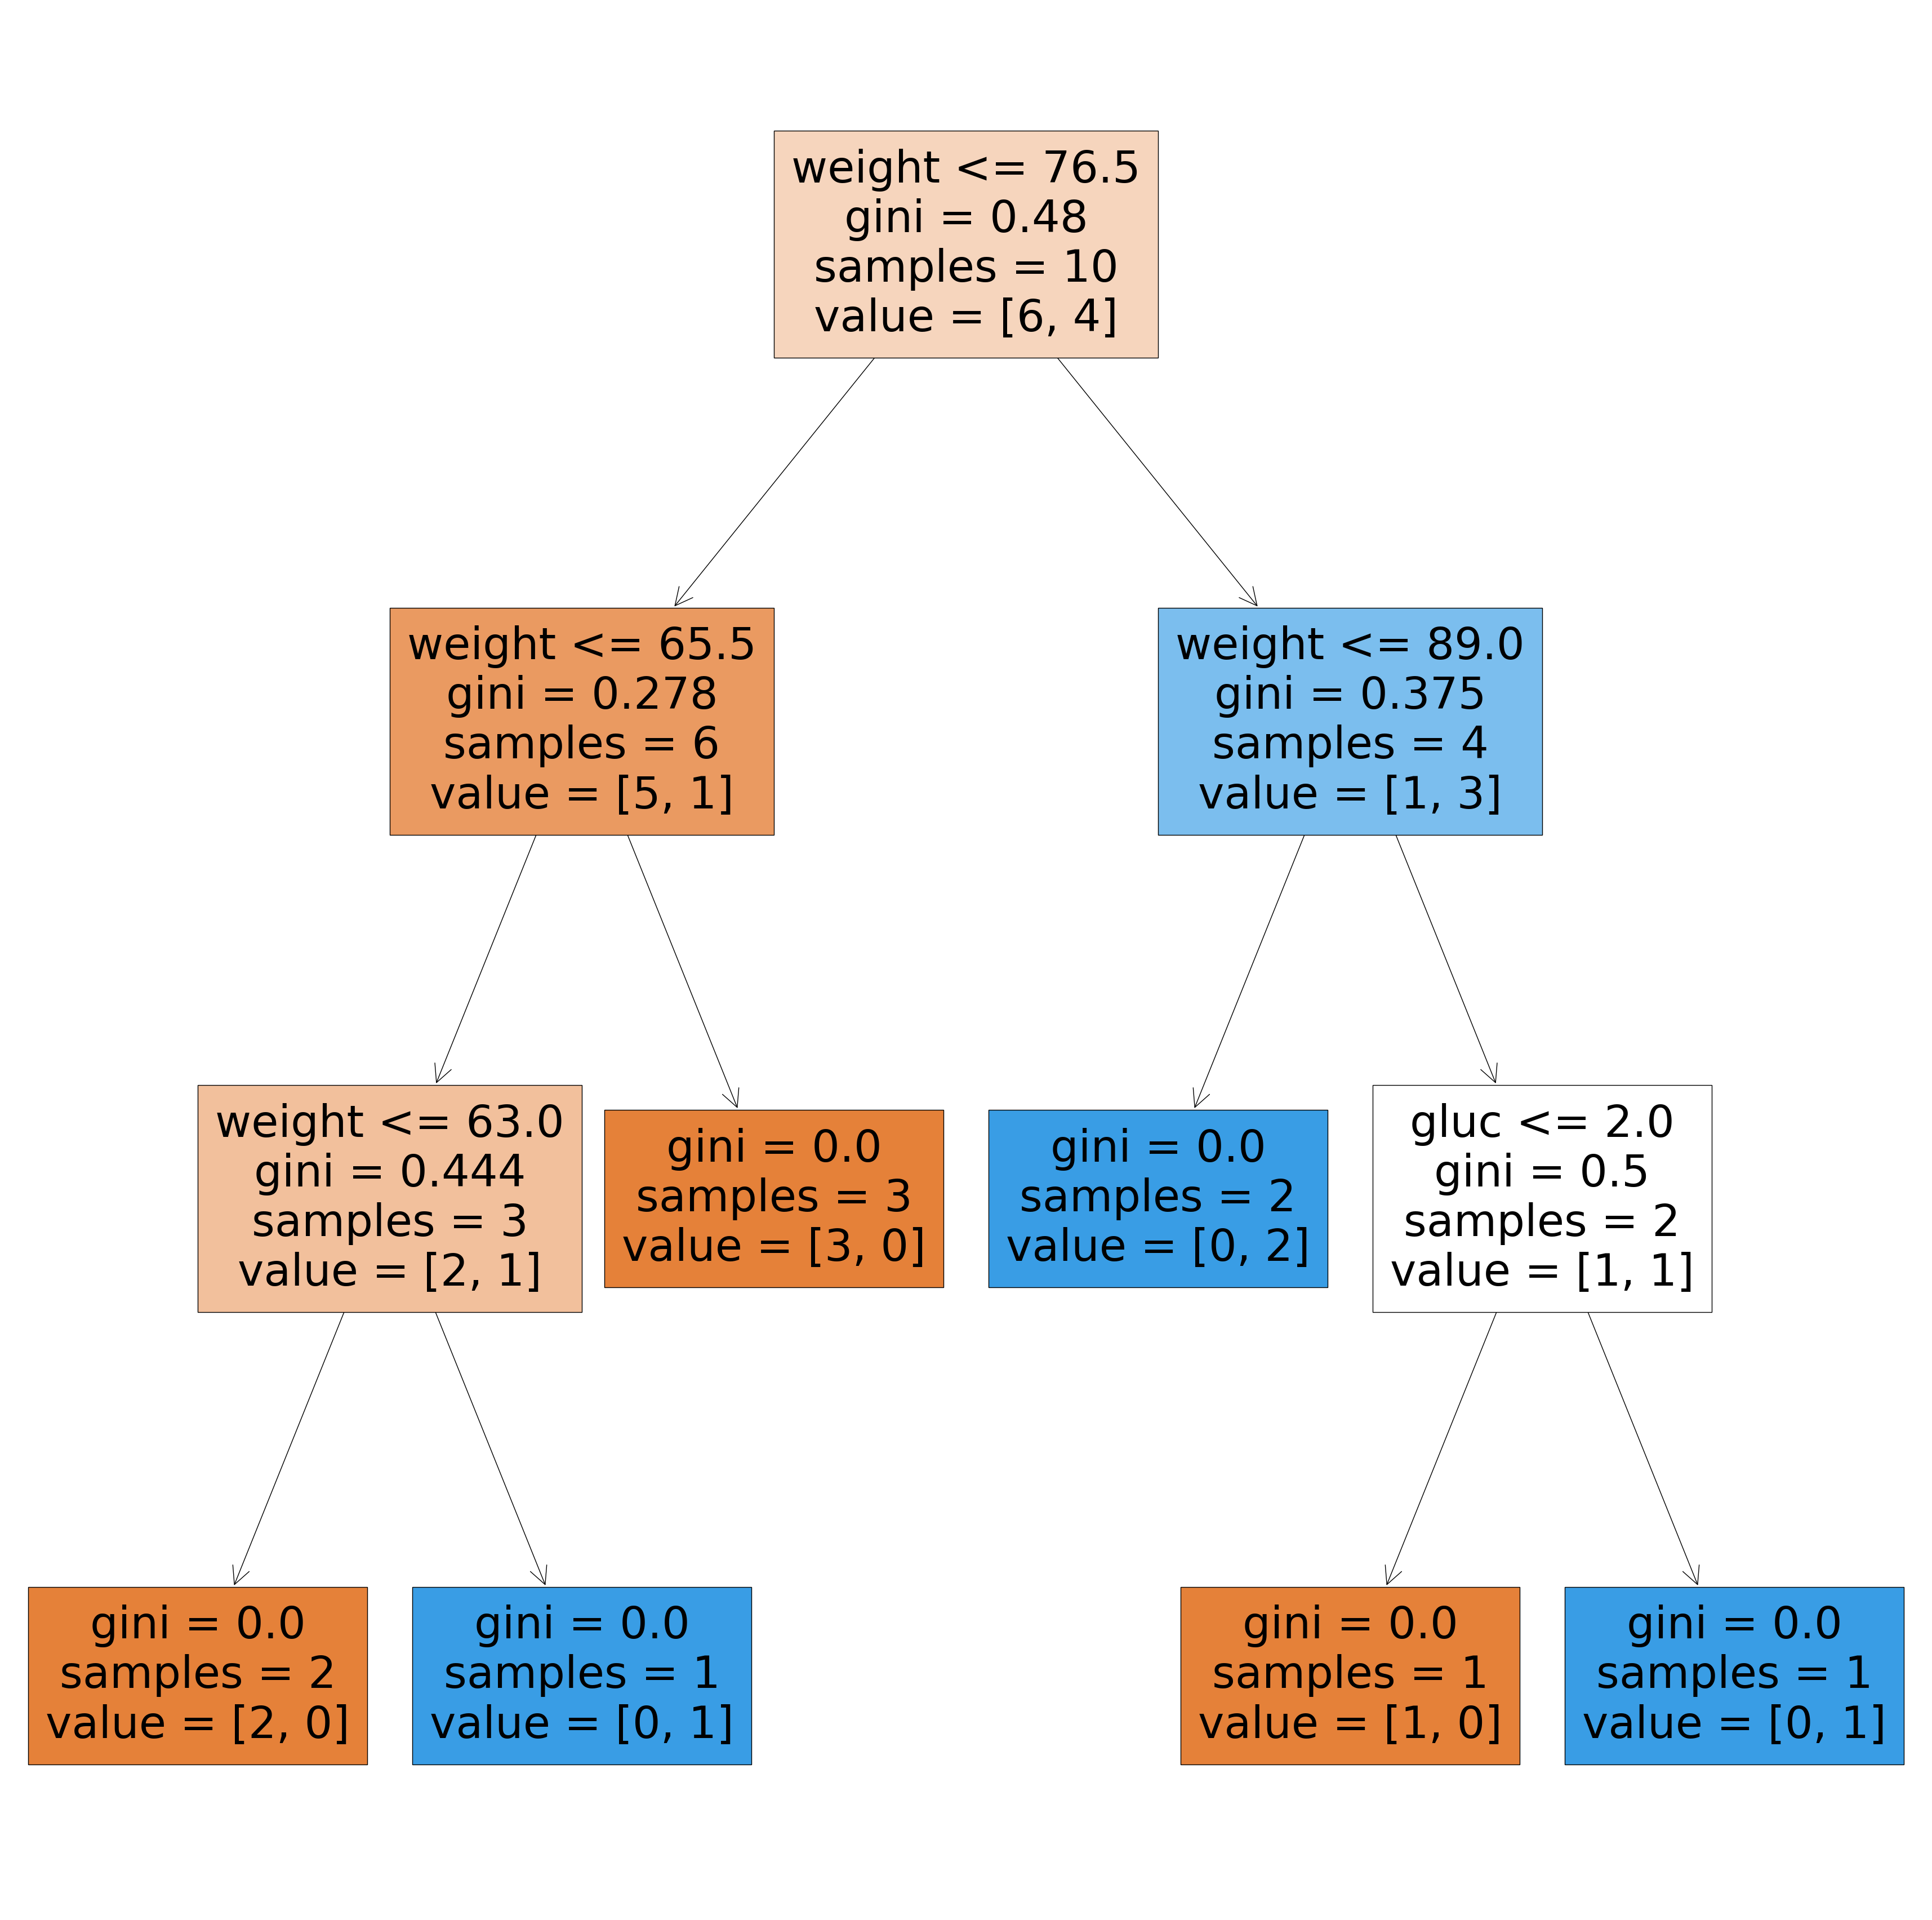

In [ ]:
# Ваш код здесь
from sklearn.tree import plot_tree

plt.figure(figsize=(44, 44))
plot_tree(model_subset, feature_names=selected_features, filled=True)

### 2.3 Посчитайте, сколько вершин получилось

In [ ]:
# Ваши выводы здесь
total_nodes = model_subset.tree_.node_count
print(f"Node count: {total_nodes}")

Node count: 11


### 2.4 Посчитайте, сколько листов получилось

In [ ]:
# Ваши выводы здесь
num_leaves = model_subset.get_n_leaves()
print(f"Leaves: {num_leaves}")

Leaves: 6


### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [ ]:
# Ваш код/вывод здесь
from sklearn.metrics import accuracy_score

X_remaining = df[selected_features].iloc[10:]
y_remaining = df[target].iloc[10:]

y_pred_remaining = model_subset.predict(X_remaining)
accuracy_remaining = accuracy_score(y_remaining, y_pred_remaining)

print(f"Accuracy for other solutions: {accuracy_remaining:.2f}")

Accuracy for other solutions: 0.53


## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [ ]:
# Ваш код здесь
import numpy as np

def gini_impurity(target_values):
    total_samples = len(target_values)
    if total_samples == 0:
        return 0.0

    unique_classes, class_counts = np.unique(target_values, return_counts=True)
    class_probabilities = class_counts / total_samples

    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [ ]:
# Ваш код здесь
gini = gini_impurity(target_subset.values)

print(f"Gini: {gini:.2f}")

Gini: 0.48


### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [ ]:
# Ваш код здесь
import numpy as np

def gini_impurity(target_values):
    total_samples = len(target_values)
    if total_samples == 0:
        return 0.0

    unique_classes, class_counts = np.unique(target_values, return_counts=True)
    class_probabilities = class_counts / total_samples

    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

def information_gain(left_target, right_target, original_target):
    original_gini = gini_impurity(original_target)

    left_weight = len(left_target) / (len(left_target) + len(right_target))
    right_weight = len(right_target) / (len(left_target) + len(right_target))
    weighted_gini = (left_weight * gini_impurity(left_target)) + (right_weight * gini_impurity(right_target))

    gain = original_gini - weighted_gini

    return gain

In [ ]:
original_target = np.array([1, 1, 0, 1, 0, 0])
left_target = np.array([1, 0])
right_target = np.array([1, 0, 0])

gain = information_gain(left_target, right_target, original_target)
print(f"Information gain: {gain:.2f}")

Information gain: 0.03


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [ ]:
# Ваш код здесь
import pandas as pd
import numpy as np

information_gains = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df[target].values

for feature in full_features:
    unique_values = np.unique(df[feature].values)

    for value in unique_values:

        left_indices = df[feature] <= value
        right_indices = df[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]


        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains = pd.concat([information_gains, result_df], ignore_index=True)

print(information_gains)

    Feature  Split Value  Information Gain
0       age         30.0          0.000029
1       age         39.0          0.000926
2       age         40.0          0.006787
3       age         41.0          0.008039
4       age         42.0          0.011750
..      ...          ...               ...
743   smoke          1.0          0.000000
744    alco          0.0          0.000027
745    alco          1.0          0.000000
746  active          0.0          0.000636
747  active          1.0          0.000000

[748 rows x 3 columns]


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
# Ваш код здесь
information_gains_sorted = information_gains.sort_values(by='Information Gain', ascending=False)
best_question = information_gains_sorted.iloc[0]

print("Best question:")
print(best_question)

Best question:
Feature                ap_hi
Split Value            129.0
Information Gain    0.094549
Name: 482, dtype: object


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
# Ваш код здесь
best_feature = best_question['Feature']
split_value = best_question['Split Value']

df_left = df[df[best_feature] <= split_value]
df_right = df[df[best_feature] > split_value]

4.1.4. Проверьте себя через визуализацию дерева решений

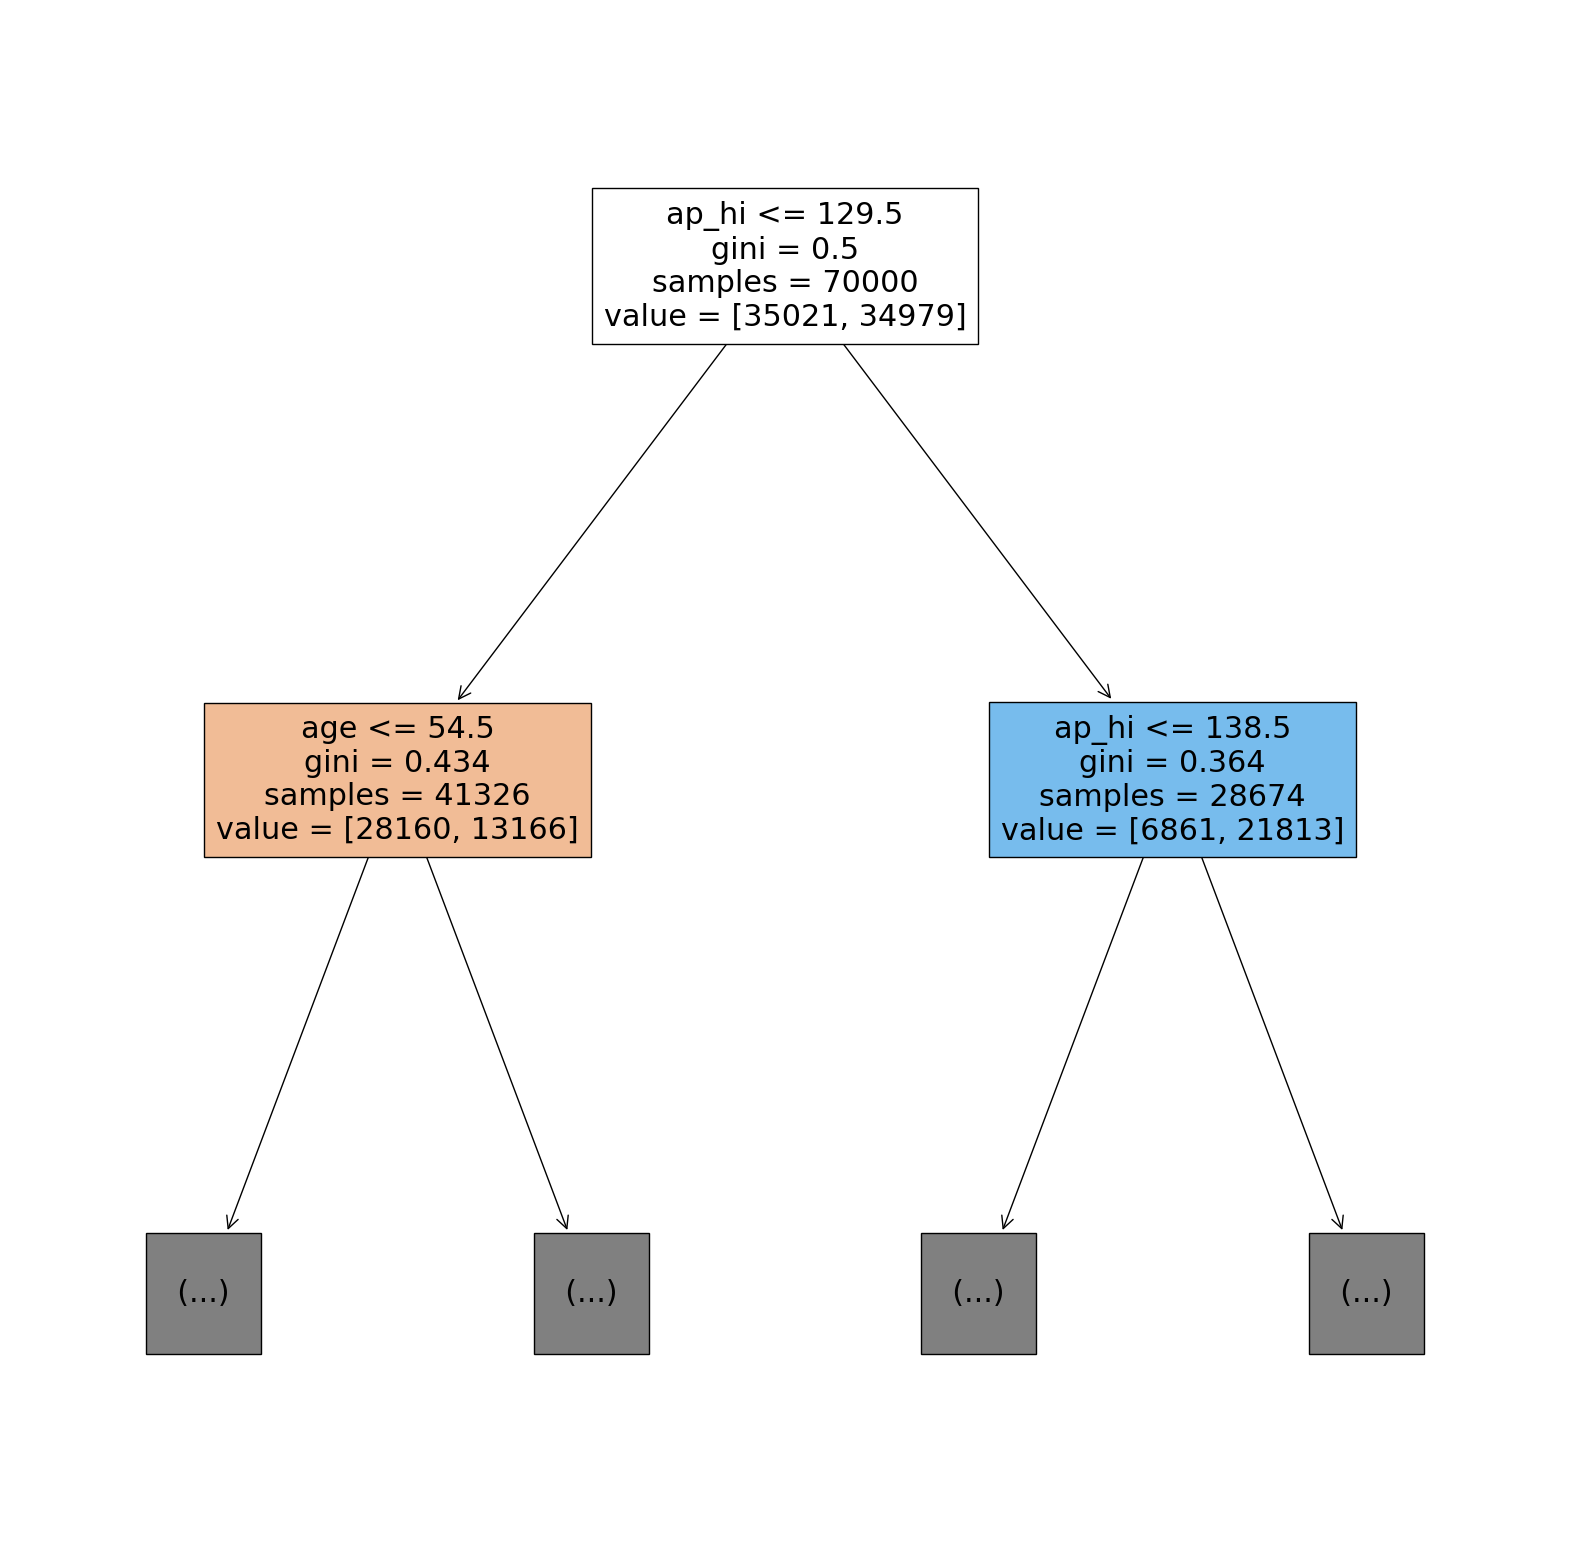

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [ ]:
# Ваш вывод здесь
import pandas as pd
import numpy as np

information_gains_left = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df_left[target].values

for feature in full_features:
    unique_values = np.unique(df_left[feature].values)

    for value in unique_values:
        left_indices = df_left[feature] <= value
        right_indices = df_left[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains_left = pd.concat([information_gains_left, result_df], ignore_index=True)

print(information_gains_left)

    Feature  Split Value  Information Gain
0       age         30.0          0.000020
1       age         39.0          0.000699
2       age         40.0          0.005390
3       age         41.0          0.006464
4       age         42.0          0.009373
..      ...          ...               ...
497   smoke          1.0          0.000000
498    alco          0.0          0.000462
499    alco          1.0          0.000000
500  active          0.0          0.001610
501  active          1.0          0.000000

[502 rows x 3 columns]


4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [ ]:
# Ваш код здесь
import pandas as pd
import numpy as np

information_gains_right = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])

original_target = df_right[target].values

for feature in full_features:
    unique_values = np.unique(df_right[feature].values)


    for value in unique_values:
        left_indices = df_right[feature] <= value
        right_indices = df_right[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains_right = pd.concat([information_gains_right, result_df], ignore_index=True)

print(information_gains_right)

    Feature  Split Value  Information Gain
0       age         39.0          0.000157
1       age         40.0          0.000288
2       age         41.0          0.000328
3       age         42.0          0.000338
4       age         43.0          0.000235
..      ...          ...               ...
562   smoke          1.0          0.000000
563    alco          0.0          0.000109
564    alco          1.0          0.000000
565  active          0.0          0.000026
566  active          1.0          0.000000

[567 rows x 3 columns]


4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
# Ваш код здесь
information_gains_sorted_right = information_gains_right.sort_values(by='Information Gain', ascending=False)

best_question_right = information_gains_sorted_right.iloc[0]

print("Best question (right):")
print(best_question_right)

Best question (right):
Feature                ap_hi
Split Value            138.0
Information Gain    0.025114
Name: 341, dtype: object


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
# Ваш код здесь
information_gains_sorted_left = information_gains_left.sort_values(by='Information Gain', ascending=False)

best_question_left = information_gains_sorted_left.iloc[0]

print("Best question (left):")
print(best_question_left)

Best question (left):
Feature                  age
Split Value             54.0
Information Gain    0.020176
Name: 16, dtype: object


4.2.5. Проверьте себя через визуализацию дерева решений

In [ ]:
# Ваш код здесь
best_feature_left = best_question_left['Feature']
split_value_left = best_question_left['Split Value']

best_feature_right = best_question_right['Feature']
split_value_right = best_question_right['Split Value']

# Разделение исходных данных на две подвыборки: df_left и df_right
df_left = df[df[best_feature_left] <= split_value_left]
df_right = df[df[best_feature_right] <= split_value_right]

4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

In [ ]:
# Ваш код/вывод здесь
![output.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAGrcAABqLCAYAAACsIVeGAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdMQHAMAzAsKz8OWefKbSHhMAM/O3uDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzMy5HQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwDvMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADG3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg5lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAmFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBzKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDMrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiLkVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIOZWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADE3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJhbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQcysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGJuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAzK0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIi5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACDmVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICYWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEHMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABibgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMytAAAAgJ+9+wzTqjzXBny91AEGAaXYFRRs26hYsOxE7AWR2Bsoxh5jNBqjxm3AxJ6YuKPGGkWxgYoNlYgFYxQsIIoVlSJIkCowIEiZ74cf74bMDF0H9TyPYx0u1nM/93Ov9x3mlwcXAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEi4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECRcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCoVnUPAAAAAAAAAAAAAAAAAAAAAACwrD799NNMmjSpuscA+E5o2rRpNtxww+oeAwAAAAAAAAD4DhJuBQAAAAAAAAAAAAAAAAAAAAB8J3z66afZYostMmvWrOoeBeA7oX79+nn//fcFXAEAAAAAAAAAy024FQAAAAAAAAAAAAAAAAAAAADwnTBp0qTMmjUr99xzT7bYYovqHgdgtfb++++nc+fOmTRpknArAAAAAAAAAGC5CbcCAAAAAAAAAAAAAAAAAAAAAL5Ttthii7Rt27a6xwAAAAAAAAAAAPjeqlHdAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsPoQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAioRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAi4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEi4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARcKtAAAAAAAAAAAAAAAAAAAAAAD4VgwYMCCFQiGFQiGjRo1aoR5du3ZNoVBI+/btV+ls31WfffZZ+vTpkwsvvDB77rlnGjVqVPyMBw0atNT9EydOzO23355jjjkmm2++eRo0aJCSkpJssMEGOeyww/L4448v0xzTp0/P5Zdfnh122CGNGjVKgwYNsvnmm+fXv/51xo0bt1LvuOjPzZKu//qv/1qpcwAAAAAAAAAA+D+1qnsAAAAAAAAAAAAAAAAAAAAAAABgxey2224ZPXr0Cu197bXXsuuuu2b+/PkV1saOHZuxY8emT58+Oeigg9KrV6/Ur1+/0j7Dhg3LQQcdlE8//XSx5x9++GE+/PDD3HnnnenTp0923333FZoTAAAAAAAAAIBvX43qHgAAAAAAAAAAAAAAAAAAAAAAAFg5jRs3zt57750jjzxymffMmjUr8+fPT9OmTXPOOefkH//4R8aMGZNJkybl+eefz1577ZUk6du3b44//vhKe0yZMiUdOnTIp59+mrp16+bKK6/MJ598kokTJ+app57K1ltvnSlTpuSQQw5Z4RCuRb377ruZMWNGpdfrr7++0v0BAAAAAAAAAPhareoeAAAAAAAAAAAAAAAAAAAAAAAAllWPHj3So0eP6h5jtXH99denTZs2adOmTQqFQgYMGJDevXsv095GjRrl2muvzZlnnpm6desutrbHHntk9913z8EHH5wnn3wyDz/8cF577bXstNNOi9X96U9/ypgxY5IkN910U0488cTi2gEHHJBddtklm222WSZMmJD/+Z//Sc+ePVfqfevXr5/S0tKV6gEAAAAAAAAAwNLVqO4BAAAAAAAAAAAAAAAAAAAAAADgu2Do0KH517/+Vd1jLKZjx47ZbLPNUigUlnvvdtttl3PPPbdCsNVCNWrUyB/+8Ifin59++ukKNb169UqSbLbZZjnhhBMqrDdu3Di/+c1vkiQPPPBAJk+evNxzAgAAAAAAAADw7RNuBQAAAAAAAAAAAAAAAAAAAADwHTRv3ry88MILOeecc9K2bds0atQotWvXTvPmzbPvvvumR48emT9/fpX727dvn0KhkK5duyZJHnnkkey5555p2rRp6tevn2222SZ/+tOfMnfu3G/sHaZPn56LL744m222WerVq5e11lorHTt2zKBBg6rc07Vr1xQKhbRv3/4bm2tREyZMyHXXXZdtt9022223XZ599tlv5dzVxZZbblm8Hzdu3GJrZWVlGTFiRJJkp512So0alf+TRjvvvHOSr39mn3zyyW9oUgAAAAAAAAAAVqVa1T0AAAAAAAAAAAAAAAAAAAAAAADL78Ybb8w555xT4fnEiRPTv3//9O/fP/fcc0+eeOKJ1KtXb4m9Lrzwwlx99dWLPXv77bdz/vnnp0+fPnnmmWdSWlq6KsfPZ599ln322Scff/xx8dns2bPTt2/f/OMf/8ijjz6aAw88cJWeuazmzp2bvn37pkePHnnqqacyb9684lrDhg2rZabq8vnnnxfv11hjjcXWpk2bVrxfd911q+yx6NrgwYNz/PHHr/RcX331VerUqbPSfQAAAAAAAAAAqFyN6h4AAAAAAAAAAAAAAAAAAAAAAIDlV69evRx33HG555578uqrr2bMmDEZP358Xn/99fzmN79J/fr189xzz+Xiiy9eYp8XX3wxV199dTp06JCBAwdm0qRJGTp0aE466aQkycCBA3PKKaes8vm7dOmSmTNn5u9//3vGjBmTCRMm5IEHHkjTpk0zd+7cnHLKKZk7d+4qP3dJhgwZkrPPPjvrrrtuDj300Dz++OOZN29e1l577Zx77rl56623ct5551W6t6ysbKWu+fPnf6vvuqwefvjh4v3OO++82NqiYVfjxo2rsseiax988MFKzdOpU6eUlJSkbt26adCgQXbZZZdcc801mT59+kr1BQAAAAAAAABgcbWqewAAAAAAAAAAAAAAAAAAAAAAAJbfqaeemlNPPbXC8xYtWmSHHXbIXnvtlf322y+33HJLunfvvlgQ0aJGjRqVDh065PHHH0+NGjWSJGuttVZuv/321K9fP9dff30eeOCBnHvuudlxxx1X2fyTJ0/OkCFDsskmmxSfHXXUUWnQoEE6duyYcePGpX///jnwwANX2ZmV+fzzz3PvvfemR48eGTZsWPF5vXr10qlTpxx//PHZd999U7NmzSX2adiw4UrN8cILL6R9+/Yr1WNVmzJlSq688sokyfrrr5+DDjposfWGDRtm/fXXz9ixY/P666+nvLw8hUKhQp9XX321eD9p0qSVmuntt98u3s+aNSuDBg3KoEGDcsMNN+SRRx7J9ttvv1L9AQAAAAAAAAD4Wo3qHgAAAAAAAAAAAAAAAAAAAAAAgFVv3333TbNmzTJr1qwMHDhwibV//vOfi8FWi7r88stTWlqaJOnRo8cqne+Xv/zlYsFWCx144IFZc801kySvv/76Kj1zoa+++ioPP/xwOnbsmPXXXz/nnXdehg0blkKhkB//+Me57bbbMn78+Nx///054IADlhps9X1UXl6eE044IRMnTkySXHvttalbt26Fuk6dOiVJPvjgg9x9990V1qdNm5Zrrrmm+OeysrLlnqV27do5/PDD07t377z//vspKyvLjBkz8sorr6Rz585JkjFjxmT//ffPp59+utz9AQAAAAAAAACoqFZ1DwAAAAAAAAAAAAAAAAAAAAAAwIqZPn16brvttvTt2zfvvfdepk6dmrlz51aoGz58ePbbb79Ke2yxxRZp06ZNpWsNGzbMXnvtlcceeywvv/zyKp29qnlq1KiRTTbZJFOmTMnnn3++Ss9Mkquuuip//OMfM2XKlOKzTTfdNF26dEmXLl3SsmXLFepbXl6+qkZcLfzud79L3759kyQnnXRSjjzyyErrzj///PTs2TPTp0/P6aefns8//zxHHnlkGjZsmNdffz0XXHBBPv/885SUlGT27NkpFArLPctuu+2W3XbbrcLzXXbZJbvsskt23HHHnH322Zk0aVJ+97vfrfIgNgAAAAAAAACAH6Ia1T0AAAAAAAAAAAAAAAAAAAAAAADL77333stWW22VX//61xkwYEAmTJhQabBVkkybNq3KPptvvvkSz1m4Pnr06BUfthLrrLNOlWv169dPknz55Zer9Mwk6devXzHYaqONNkr//v3z0Ucf5Xe/+90KB1t939x666257LLLkiT77LNPbrrppiprN9poozz88MNp2LBhZs+enQsuuCAtW7ZM06ZNc8ABB+Ttt9/Oueeem6233jpJ0rhx41U+7y9/+cu0a9cuSfLQQw/lq6++WuVnAAAAAAAAAAD80Ai3AgAAAAAAAAAAAAAAAAAAAAD4jpk3b14OO+ywjB07Ng0bNkz37t3z8ssv57PPPssXX3yRGTNmZMaMGdlggw2K9VVp0KDBEs8qLS1NkpSVla26F0hSs2bNpdaUl5ev0jOTLBZgNXr06Bx22GE56aSTMmDAgJU6r6ysbKWu+fPnr4rXW2kPP/xwzjjjjCTJzjvvnEceeSS1a9de4p6999477777bs4+++y0adMm9erVS6NGjbLHHnvkkUceybXXXlsMFFv4M7mqdezYMUkyc+bMfPzxx9/IGQAAAAAAAAAAPyS1qnsAAAAAAAAAAAAAAAAAAAAAAACWz4ABA/LBBx8k+TqMaJ999qm0bvr06UvtNXPmzCWuLwy1Whhy9V1355135oILLkiPHj1yzz335LPPPssdd9yRO+64IxtuuGE6d+6cLl26ZPPNN1+uvg0bNlypuV544YW0b99+pXqsrP79++fYY4/NggULsvXWW+epp55aavjZQhtssEGuu+66XHfddRXWZs+enVGjRiVJtt9++1U48f9p3rx58f6LL774Rs4AAAAAAAAAAPghqVHdAwAAAAAAAAAAAAAAAAAAAAAAsHzefvvtJEmTJk2qDLYaO3Zspk2bttReC0Oylra+0UYbLeeUq6/NN988V111VT799NM8/fTTOfroo1NSUpJPP/00V1xxRbbYYovsuOOOuf766zNx4sTqHvdbMXDgwBxyyCH56quvsskmm+SZZ55JkyZNVknv5557LvPnz0+S7Lfffquk538aP3588b5x48bfyBkAAAAAAAAAAD8kwq0AAAAAAAAAAAAAAAAAAAAAAL5j5syZkyTFwKDK3HfffcvU6/3338/w4cMrXZsxY0aee+65JMluu+22nFOu/mrUqJH9998/999/f8aPH5+bb745u+yyS5LkjTfeyC9/+cusu+666dixY3r37p3Zs2dX2au8vHylrvbt239Lb13RsGHD0qFDh8ycOTPrrbdenn322ay99tqrrP8NN9yQJGnbtm222267VdZ3UY899liSpLS0NK1bt/5GzgAAAAAAAAAA+CERbgUAAAAAAAAAAAAAAAAAAAAA8B3TsmXLJMn06dPz4osvVlj/6KOPcsUVVyxzv/POOy8LFiyo8Pziiy9OWVlZkqRr164rNux3RKNGjXLaaafllVdeyYcffpiLLroo66+/fubNm5e+ffvmqKOOytprr53777+/ukddpUaMGJF99903U6dOTdOmTdO/f/9svPHGq6z/9ddfn379+iVJ/vSnPy33/rlz52bChAlLrPnjH/+YwYMHJ0mOOOKI1K5de/kHBQAAAAAAAABgMcKtAAAAAAAAAAAAAAAAAAAAAAC+Y/bbb780bNgwSXLMMcfkvvvuy2effZaxY8fmtttuy3//93+npKQka6655lJ7bbTRRunbt286deqUV199NVOmTMmwYcNyyimn5Prrr0+SHH300dlxxx2/0XdanbRp0yZXXHFFRo8enX/84x859thjU69evUybNi0ffvhhdY+3mLFjx2bQoEHF67333iuuvfvuu4utTZw4cbG948ePzz777JPx48enfv36efjhh7PBBhukrKys0mvOnDmVzvDjH/84l1xySV577bVMmjQpn3/+eV544YUcc8wx+eUvf5kkOf/887PHHntUur979+4pFAopFAoZNWrUYmszZ87MxhtvnBNPPDEPP/xwPvroo0ydOjWff/55nn322Rx++OH5zW9+kyRp0aJF/vCHP6zoRwkAAAAAAAAAwCJqVfcAAAAAAAAAAAAAAAAAAAAAAAAsnyZNmuSGG27IiSeemH//+9857rjjFltfY4018vjjj+eEE07IlClTltirffv2adGiRa655pr07du3wvouu+ySW2+9dZXO/11Ro0aN7Lvvvtl3330zffr09OrVK40aNarusRZz++2359JLL6107eSTT17sz3feeWe6du1a/HO/fv0yYsSIJMmsWbOy++67L/GsE044IT169KjwfMyYMbnsssty2WWXVVirWbNmLrzwwkrXltWXX36ZHj16VHr2QptttlkeeuihrLfeeit8DgAAAAAAAAAA/0e4FQAAAAAAAAAAAAAAAAAAAADAd9Dxxx+fDTbYIFdddVUGDRqUOXPmZN11182+++6b888/P5tsssky97r66quzww475MYbb8zbb7+d2bNnp3Xr1unSpUvOPvvs1K5d+xt8k++GNdZYI6ecckp1j7FauvLKK/P444/njTfeyPjx47NgwYKst9562WuvvXLaaadl2223XeHeDRs2zN13351XXnklb7zxRv79739n8uTJSZKmTZumbdu2OeSQQ3LMMcekbt26q+iNAAAAAAAAAAAolJeXl1f3EAAAAAAAAAAAAAAAAAAAAAAASzNkyJBsv/32GTx4cNq2bVvd43zntW/fPi+++GJOOOGE9OjRo7rHAVYxvzMBAAAAAAAAgJVRo7oHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABg9SHcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAolrVPQAAAAAAAAAAAAAAAAAAAAAAAN8ds2bNyoIFC5ZrT+3atVO3bt1vaCIAAAAAAAAAAGBVE24FAAAAAAAAAAAAAAAAAAAAAMAy23LLLTN69Ojl2nPCCSekR48e38xAAAAAAAAAAADAKlejugcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGD1Uau6BwAAAAAAAAAAAAAAAAAAAAAA4Ns3YMCAFdo3atSoVToHAAAAAAAAAACw+qlR3QMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALD6EG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECRcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqEWwEAAAAAAAAAAAAAAAAAAAAAsFopFAopFArp0aPHKu89atSoYv8BAwas8v7fhkcffTT7779/WrRokZKSkrRq1So///nP88knn6xU3x49ehQ/myVdBx100Cp6EwAAAAAAAAAAVlfCrQAAAAAAAAAAAAAAAAAAAAAA4DugvLw8J510Ug455JD84x//yIQJEzJnzpyMHDkyN910U7bddts89dRT1T0mAAAAAAAAAADfA8KtAAAAAAAAAAAAAAAAAAAAAADgO+DKK6/MHXfckSQ58sgj89Zbb2XChAl57LHHsvHGG6esrCxHHXVUhg8fvtJnzZgxo8rroYceWun+AAAAAAAAAACs3mpV9wAAAAAAAAAAAAAAAAAAAAAAALCo8vLyb6z3xhtv/I32/6Z8/vnnueKKK5IkHTp0yAMPPJBCoZAkOfjgg7P11ltn6623TllZWS6++OI8+OCDK3VeaWnpSs8MAAAAAAAAAMB3V43qHgAAAAAAAAAAAAAAAAAAAAAAAFiyu+++OzNnzkySXH755cVgq4VatmyZU045JUnSp0+fTJgw4VufEQAAAAAAAACA7w/hVgAAAAAAAAAAAAAAAAAAAAAArHLPPvtsDjjggKy11lpp0KBBttpqq/z+97/PrFmzMmDAgBQKhRQKhYwaNarC3oVrPXr0qLDWvn37FAqFdO3aNUnSv3//HHDAAWnWrFlKSkqyxRZb5Pe//32+/PLLSucaNWpUsf+AAQNW3Qt/w5544okkSevWrbPNNttUWnP44YcnSRYsWJC+fft+a7MBAAAAAAAAAPD9I9wKAAAAAAAAAAAAAAAAAAAAAIBV6rLLLss+++yTfv36ZcqUKZk1a1bee++9dOvWLTvvvHO++OKLVXLOVVddlf322y/9+vXLpEmTMmfOnHzwwQfp1q1b9t9//8ybN2+VnLM6ePPNN5Mk7dq1q7Jmhx12SM2aNZMkQ4YMWekzy8vLM3fu3JXuAwAAAAAAAADAd49wKwAAAAAAAAAAAAAAAAAAAAAAVpnHH388l1xySZJk2223Tb9+/TJx4sR88sknufLKK/PRRx/lvPPOW+lzXnzxxfz2t7/NMccck9deey2TJ0/Ou+++m2OPPTZJ8s9//jO33HLLSp/zn+bPn5+ysrKVupbXZ599VtzXqlWrKuvq1q2bddZZJ0ny4YcfrtgL/n9t27ZN3bp1U6dOnayxxhrZY489cvPNN2fOnDkr1RcAAAAAAAAAgO+GWtU9AAAAAAAAAAAAAAAAAAAAAAAA3x/nn39+kqRNmzZ58cUXs8YaayRJmjZtmgsvvDCtW7fO4YcfvtLnjBo1KmeeeWZuuOGG4rM111wz99xzT4YPH5433ngjd911V84888yVPmtRL730UvbYY4+V6lFeXr5c9ZMmTSreN2vWbIm1zZs3z9ixYzN58uQVmm2hN998s3g/Y8aMDBgwIAMGDMiNN96Yxx57bIkhWwAAAAAAAAAAfPfVqO4BAAAAAAAAAAAAAAAAAAAAAAD4fhg0aFCGDx+eJOnevXsx2GpRhx12WHbbbbeVPqtBgwa54oorKjwvFArp3LlzkmTo0KGZO3fuSp9V3WbOnFm8LykpWWJtvXr1kiRlZWXLfU69evXStWvXPP744xk+fHi+/PLLfPHFF3n22Wdz4IEHJkneeeed7L///pk+ffpy9wcAAAAAAAAA4LtDuBUAAAAAAAAAAAAAAAAAAAAAAKvEK6+8kuTrgKkOHTpUWdepU6eVPmvnnXeuNDwrSVq3bp0kmTt3bqZOnbrSZy2qffv2KS8vX6lrdXXUUUflzjvvTMeOHdO6deuUlJSkUaNG2WuvvfLkk0/m3HPPTZJ89NFH+fOf/1zN0wIAAAAAAAAA8E0SbgUAAAAAAAAAAAAAAAAAAAAAwCoxevToJMnaa69dZfBUkrRp02alz1pnnXWqXKtfv37x/ssvv1zps6pbgwYNivezZ89eYu3C9y0tLV3lc1x55ZXZYIMNkiT33XffKu8PAAAAAAAAAMDqo1Z1DwAAAAAAAAAAAAAAAAAAAAAAwPfDzJkzkywexlSZVRG8VLNmzWWqKy8vX+mzFjV//vyVDsxa3vdv2rRp8X7ixIlLrF24vtZaay3/YEtRp06d7Lfffrn99tvz0UcfZdasWYsFiQEAAAAAAAAA8P0h3AoAAAAAAAAAAAAAAAAAAAAAgFViYajVwpCrqpSVlX0b43wjXnrppeyxxx4r1WN5A7fWXXfdlJaWpqysLCNHjqyybs6cORk3blySZLPNNlupGavSvHnz4v0XX3wh3AoAAAAAAAAA4HuqRnUPAAAAAAAAAAAAAAAAAAAAAADA98NGG22UJBk/fnxmzJhRZd3w4cO/rZG+FwqFQrbbbrskyauvvlpl3eDBgzN//vwkSdu2bb+RWcaPH1+8b9y48TdyBgAAAAAAAAAA1U+4FQAAAAAAAAAAAAAAAAAAAAAAq8Suu+6aJCkvL8+TTz5ZZd3jjz/+bY20yrVv3z7l5eUrda2Ijh07Jvk6GGzYsGGV1jz00ENJkho1auSggw5asRdcgjlz5qRfv35JkjZt2qR+/fqr/AwAAAAAAAAAAFYPwq0AAAAAAAAAAAAAAAAAAAAAAFgl2rVrl0033TRJcumll6asrKxCzSOPPJJ//etf3/Zo33nHH398MUzq4osvrrA+atSo3HrrrUmSQw89NM2bN1+u/jNmzMj06dOrXC8vL895552XcePGJUmOO+645eoPAAAAAAAAAMB3i3ArAAAAAAAAAAAAAAAAAAAAAABWiUKhkGuuuSZJ8sEHH2T33XfPM888k8mTJ2fUqFG55pprctxxx6VVq1bVPOl3T4sWLYqhVk888USOPvroDBs2LBMnTkzfvn2z5557ZubMmSktLc3ll19eaY+uXbumUCikUChUWPvkk0+y8cYb5xe/+EX69u2bkSNH5osvvsi4cePyxBNPZO+9986NN96YJNl8881z7rnnfnMvCwAAAAAAAABAtatV3QMAAAAAAAAAAAAAAAAAAAAAAPD9ccghh6R79+7p3r17hgwZkv3222+x9f/6r//KpZdemsMOOyxJUquWfwZnWV100UX55JNPcscdd6RXr17p1avXYuulpaXp1atX2rRps0L9p06dmhtvvLEYYlWZnXfeOb17905paekKnQEAAAAAAAAAwHdDjeoeAAAAAAAAAAAAAAAAAAAAAACA75du3brlH//4R/bbb780btw49erVy+abb55LLrkkAwcOTO3atYu1DRs2rMZJv1sKhUL+/ve/p0+fPtlvv/3SrFmz1K1bNy1btszpp5+eoUOH5sADD1yh3ptuumluu+22nHjiidlmm22yzjrrpE6dOqlfv35atmyZI444Ig8//HD+9a9/ZYMNNljFbwYAAAAAAAAAwOqmUF5eXl7dQwAAAAAAAAAAAAAAAAAAAAAALM2QIUOy/fbbZ/DgwWnbtm11j8NKuO666/KrX/0qDRs2zLRp01IoFKp7JPje8TsTAAAAAAAAAFgZNap7AAAAAAAAAAAAAAAAAAAAAAAAflieeOKJJEnbtm0FWwEAAAAAAAAAwGpIuBUAAAAAAAAAAAAAAAAAAAAAAKvUlClTqlx7+OGH8/zzzydJjjjiiG9rJAAAAAAAAAAAYDnUqu4BAAAAAAAAAAAAAAAAAAAAAAD4ftltt93Svn37HH744dlqq61Sp06djBw5Mg888ECuu+66JEnLli3TtWvXap0TAAAAAAAAAAConHArAAAAAAAAAAAAAAAAAAAAAABWqS+//DI333xzbr755krX11lnnTz66KNp0KDBtzwZAAAAAAAAAACwLIRbAQAAAAAAAAAAAAAAAAAAAACwSt100015/PHHM3DgwIwfPz5TpkxJaWlpWrdunY4dO+ass85Ko0aNqntMAAAAAAAAAACgCsKtAAAAAAAAAAAAAAAAAAAAAABYpQ444IAccMAB1T0GAAAAAAAAAACwgmpU9wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKw+hFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAk3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCLhVgAAAAAAAAAAAAAAAAAAAAAArNYKhUIKhUJ69OhR3aOs1kaNGlX8rJb1GjVqVJX9Pvnkk/z85z9Pq1atUlJSkhYtWmT//ffPo48+uswzPfroo9l///3TokWLlJSUpFWrVvn5z3+eTz75ZJn2z5gxI7///e/zox/9KA0bNkzjxo2z00475brrrsvcuXOXqcebb76Z448/PhtuuGFKSkqy7rrr5rDDDsuAAQOW+T0AAAAAAAAAAH5oCuXl5eXVPQQAAAAAAAAAAAAAAAAAAAAAwNIMGTIk22+/fQYPHpy2bdtW9zh8iwqFQpLkzjvvTNeuXat3mNXYqFGj0rJly2WuX3PNNfPvf/87derUqbD21FNP5aijjkpZWVmle0866aTcdtttxe/mP5WXl+fkk0/OHXfcUel6aWlpevXqlQMPPLDK+UaOHJm99947I0aMqHR9++23T//+/dOkSZMqe/z973/PGWecUWkQVqFQSLdu3dKtW7cq93+X+Z0JAAAAAAAAAKyMGtU9AAAAAAAAAAAAAAAAAAAAAAAAsPI22mijzJgxY4nX0KFDi/VHHXVUpcFWH374YTHYauONN85jjz2WCRMm5K233soRRxyR5OvQqCuvvLLKWa688spisNWRRx6Zt956KxMmTMhjjz2WjTfeOGVlZTnqqKMyfPjwSvd/9dVX6dixY0aMGJF69erl+uuvz9ixYzNy5Mh07949NWrUyODBg3PUUUdVOcM///nPnHbaaZk7d2623XbbPPfcc5kwYUIGDhyYPffcM+Xl5enevXvuu+++Zfl4AQAAAAAAAAB+UGpV9wAAAAAAAAAAAAAAAAAAAAAAAMDKKxQKKS0tXWLNo48+Wrzv0qVLpTUXX3xxysrK0qBBgzz//PNp2bJlkqRZs2bp1atXZs6cmaeeeipXXHFFTjrppLRo0WKx/Z9//nmuuOKKJEmHDh3ywAMPpFAoJEkOPvjgbL311tl6661TVlaWiy++OA8++GCFGW699da8++67SZK77rqrGKqVJN26dUu9evVywQUXpH///nnyySfToUOHCj3OO++8zJ8/P+uuu25eeOGFNG7cuPgeTz/9dHbaaae89dZbueCCC3LooYempKRkiZ8dAAAAAAAAAMAPSY3qHgAAAAAAAAAAAAAAAAAAAAAAAPh23HPPPUmSTTfdNLvsskuF9c8//zyPPPJIkuTUU08tBlstVCgUisFVM2fOTM+ePSv0uPvuuzNz5swkyeWXX14MtlqoZcuWOeWUU5Ikffr0yYQJEyr0uOmmm5Ik22233WLBVgv96le/SrNmzRarXdTrr7+eN954I0lywQUXFIOtFqpTp04uvfTSJMnYsWPTt2/fCj0AAAAAAAAAAH7IhFsBAAAAAAAAAAAAAAAAAAAAAKwGXnzxxRx99NHZeOONU1JSktLS0rRs2TI/+clPcumll+aDDz6osGfSpEm56667cvjhh6dly5YpKSlJ/fr1s8kmm+TEE0/Mm2++WeV5o0aNSqFQSKFQyIABAzJ79uxcfvnl2XrrrdOgQYOsvfbaOfzww/Pee+8ttq93795p3759mjZtmgYNGmSXXXZJnz59qjyna9euKRQKad++fZJkwIAB6dixY1q0aJF69epl8803zyWXXJKysrIV++D+vylTpqR79+7Zcccd06RJk5SUlGTjjTdO165d8/bbby9x7+OPP55OnTplvfXWS506dbLGGmtk0003zT777JNrrrkmY8aMWanZVhcDBw7Mxx9/nCTp0qVLpTVPPvlkFixYkCQ5/PDDK63ZZpttsummmyb5+rP7T0888USSpHXr1tlmm20q7bGw94IFCyoES40YMaL4c1fVDLVr106nTp2SJM8991xmzZpV6QxL6nHggQemfv36Vb4HAAAAAAAAAMAPWa3qHgAAAAAAAAAAAAAAAAAAAAAA4IfuiiuuyMUXX7zYszlz5mTmzJkZNWpUXnrppUydOjXXXXfdYjX77LNPhg4dWqHfiBEjMmLEiPTs2TM33HBDTj/99CWeP23atOy6666LhWHNmjUrDz/8cJ599tm88MIL2XbbbXPqqafm9ttvX2zvoEGDcthhh+WWW27JqaeeusRz/va3v+Wss84qhiclyYcffpjLLrssvXv3zoABA7LOOusssUdl+vfvnyOPPDJffPHFYs9Hjx6du+66q/g5nHHGGRX2nnbaabn11lsXezZ37tzMmDEjn3zySZ599tnUqVMn55xzznLPtbrp2bNnkqRQKFQZbjVkyJAkSa1atbL99ttX2atdu3b5+OOPKw1QW/isXbt2Ve7fYYcdUrNmzcyfPz9DhgzJz372swozLK1Hu3btcvvtt2f27Nl57733ssMOO1Tosf7662fdddetdH/t2rWz3Xbb5eWXX17sTAAAAAAAAAAAkhrVPQAAAAAAAAAAAAAAAAAAAAAAwA/ZBx98kEsuuSTJ12FVzzzzTD799NNMnTo1H3/8cR555JGcdNJJKS0trbB34403zm9/+9s8/fTTGTZsWCZOnJgRI0bkySefzP7775/58+fnrLPOWmpwzznnnJORI0fmhhtuyOjRozNhwoTce++9adSoUaZNm5Yzzzwzf/3rX3PHHXfk/PPPz7vvvpvJkyfnxRdfzJZbbpkkOffcczNp0qQqz/joo49yzjnnZKeddspzzz2XiRMn5oMPPsgFF1yQGjVqZPjw4Tn88MNTXl6+XJ/fG2+8kYMOOihffPFFdt555/Tp0ydjx47N5MmT8/LLL6dTp05ZsGBBzjzzzPTr12+xvf379y8GWx199NF56aWX8tlnn2XKlCn54IMPct999+Woo45KnTp1lmumJPnqq69SVla2wteXX3653GcubZ5evXolSXbbbbe0bNmy0roPP/wwSbLuuuumbt26VfZbuL+srCyfffZZ8flnn32WsrKyJEmrVq2q3F+3bt1ikNnCM/9zhqX1WPQdquqxpP2L9vj4448XC10DAAAAAAAAAPihq1XdAwAAAAAAAAAAAAAAAAAAAAAA/JA988wzWbBgQVq0aJEnn3wytWvXLq41btw4m2yySX76059WuveRRx6p8Kxp06Zp2bJlDjzwwBx77LG5//778+c//zn33HNPlTN89tlnefnll7PjjjsWnx177LGZPXt2TjrppAwcODCvv/56rrvuupx11lnFmp/85Cd55JFHsvnmm2fmzJl56KGHcvrpp1d6xrhx49K2bdu88MILKSkpKc561VVXpXnz5jnvvPPyyiuv5KGHHsoRRxyxxM9sofLy8px44on56quv0qlTpzz88MOpWbNmcX3XXXfNo48+muOPPz49e/bMr3/96+y3334pFApJkqeffjpJ0rZt29x///2L9W7SpEk222yzHHPMMcs0y3+64oorcumll67Q3iTZfffdM2DAgBXe/5+eeuqpTJkyJUnSpUuXKusWBpQ1a9Zsif2aN29evJ88eXLWW2+9xfYva4+FQWSVzbC0Hv85Q2U9lvU95syZk7KysqyxxhpLrAcAAAAAAAAA+KGoUd0DAAAAAAAAAAAAAAAAAAAAAAD8kM2fPz/J10FPiwZbrQqdO3dOkjz33HNLrDvmmGMWC7Za6IgjjigGQW2wwQb5xS9+UaGmTZs2adu2bZLktddeW+I5V155ZTHYalHnnHNOWrZsmSTp0aPHEnss6oUXXsg777yTmjVr5qabblos2GpRl19+eZLk3XffzVtvvVV8vvCzX2eddZb5zO+qnj17Jknq1q2bI488ssq6mTNnJkml39Oi6tWrV7wvKyursH95eiy6f3l6VDXDoj1W9D0AAAAAAAAAAH7ohFsBAAAAAAAAAAAAAAAAAAAAAFSjbbfdNsnXwUsXX3xxpk6dulz733777Zx55pn50Y9+lDXWWCM1atRIoVBIoVBIhw4dkiTjx4/PjBkzquyx7777Vvq8YcOGadasWZJkr732KgZd/adNNtmkeE5VSktLs9dee1W6VqNGjRx88MFJkldeeSXl5eVV9lnUwtCurbfeOg0bNkxZWVmlV5MmTYrv8cYbbxT3L/zsn3766fz1r39dLFRpZXXv3j3l5eUrfA0YMGCVzfLFF1/kySefTJJ07NgxjRs3XmW9AQAAAAAAAAD4fhJuBQAAAAAAAAAAAAAAAAAAAABQjfbYY4907NgxSXLFFVekefPm2W233XLRRRelX79+mTNnTpV7//znP6dt27b529/+lmHDhmXGjBlVBkNNmzatyj5rr712lWv16tVb5povv/yyyprWrVunZs2aVa5vvvnmSb4OYpo+fXqVdYv68MMPkyRDhw5Nw4YNl3hNnDgxSYr/TZLOnTunbdu2WbBgQc4+++w0bdo0e+21Vy699NK8+OKLmT9//jLNsbrr3bt38efo+OOPX2JtgwYNkiSzZ89eYt2i33VpaWmF/cvTY9H9y9OjqhkW7bGi7wEAAAAAAAAA8EMn3AoAAAAAAAAAAAAAAAAAAAAAoJo99NBDufLKK7PRRhtl3rx5eeWVV3LVVVflgAMOyNprr51u3brlq6++WmzPv/71r5x33nmZP39+tttuu9x111155513MnHixMyYMSMzZszIk08+WayfN29elecvKXRqeWqqCtZKFg8sqsyiwUJlZWVLPStZcmBXVRYNC6tdu3ZeeOGFXHjhhWnevHlmz56d559/Pt27d0/79u2z/vrr569//esS36sqX331VcrKylb4WlJQ2PLq2bNnkqRZs2bZf//9l1jbtGnTJIuHgFVm0fW11lqrwv7l6bHo/uXpUdUMi/ZY1hnq1Kkj3AoAAAAAAAAAYBHCrQAAAAAAAAAAAAAAAAAAAAAAqlmdOnVy4YUXZtSoUXn//fdzxx135Pjjj8+aa66ZL774Ir///e/TuXPnxfbcfPPNSZJWrVrllVdeyfHHH5+tttoqTZs2TWlpaUpLSysEYlWnmTNnLnF90UCrZQ0ZWlj3k5/8JOXl5ct0de/efbEea6yxRq688sqMHz8+Q4cOzd/+9rccccQRadCgQcaPH5+zzz47F1xwwfK9bJIrrrgiDRs2XOHrgAMOWO4zKzNy5Mi8/PLLSZKjjz46tWvXXmL9ZpttliQZN27cEn9+Ro4cmeTr72C99dYrPl933XWL38vCmsrMmTMn48aNW+zM/5xhaT0WXauqx5L2L7reunXr1Kjhn2QCAAAAAAAAAFjI/0kBAAAAAAAAAAAAAAAAAAAAALAa2XzzzXPiiSfmrrvuytixY3PkkUcmSR588MG8//77xbq33347SXLwwQenpKSk0l7vvPPONz/wMvroo48yf/78Ktc/+OCDJEnjxo2zxhprLFPPVq1aJUlGjBix0vMVCoVss802OeOMM9K7d++MGTMmP/nJT5Ik1113XaZPn77SZ1SHe+65J+Xl5UmSLl26LLW+bdu2SZJ58+Zl8ODBVda9+uqrSZLttttuseeFQqH4bGFNZQYPHlz8eVh45n/OsLQeC9dKSkqy5ZZbVtpjzJgx+fe//13p/nnz5mXIkCGVzgAAAAAAAAAA8EMn3AoAAAAAAAAAAAAAAAAAAAAAYDVVr169XHTRRcU/LwyASpI5c+YkSZWBUeXl5XnggQe+2QGXQ1lZWZ577rlK1xYsWJDHH388SbLrrrumUCgsU8999tknSTJ27NgMHDhw1Qz6/zVp0iS/+tWvkiRz587NJ598slz7u3fvnvLy8hW+BgwYsEre45577knydWjajjvuuNT6Dh06pEaNr/9pooceeqjSmrfffjsfffRRkq/D1f5Tx44dkyTDhw/PsGHDKu2xsHeNGjVy0EEHLbbWqlWrYlhVVTPMmzcvjz32WJJkr732Sv369SudYUk9nnrqqcyaNavK9wAAAAAAAAAA+CETbgUAAAAAAAAAAAAAAAAAAAAAUI0++uijLFiwoMr1RUOV1lprreJ9y5YtkyTPPPNMvvrqqwr7rrnmmrz77rurcNKVd9FFF2X27NkVnl933XUZOXJkkqRr167L3G/ffffNVlttlSQ59dRTM2XKlCXWf/jhh0v883+q6rP/rnj11VczfPjwJEmXLl2WaU+LFi1yyCGHJEluvfXWjB49ukLNxRdfnCRp0KBBpX2PP/74YtjUwtpFjRo1KrfeemuS5NBDD03z5s0r1JxxxhlJkiFDhuThhx+usH7ddddlwoQJi9Uuascdd8wOO+yQ5Ou/C9OmTVtsfe7cuenevXuSZP31168QsAUAAAAAAAAA8EMn3AoAAAAAAAAAAAAAAAAAAAAAoBpdfvnlad26df7nf/4nzz33XMaOHZupU6dm+PDhufHGG3PKKackSTbccMPssssuxX1HHHFEkq8Dmjp16pRXX301kyZNyttvv50zzzwzF154YbbYYotqeafKrLvuuhk2bFj23HPPvPDCC5k8eXKGDx+eiy66KOeff36SZNddd83hhx++zD1r1KiRu+66KyUlJXnnnXeyzTbb5K9//Wvef//9TJ06NZ9//nlef/313Hjjjdlzzz2LYUcLnXbaadl6661zxRVX5KWXXsq///3vTJkyJe+9916uvPLKYjDTLrvskg033HDVfRjfkp49eyZJCoVCOnfuvMz7Lr/88pSWlqasrCx77LFH+vbtm4kTJ2bYsGE5+uij07dv3yTJb3/727Ro0aLC/hYtWhQ/uyeeeCJHH310hg0blokTJ6Zv377Zc889M3PmzJSWlubyyy+vdIZTTz21GFzWpUuX/O1vf8u4ceMyevTo/P73v8+FF16YJNlnn33SoUOHSntce+21qVmzZsaOHZs99tgjAwYMyKRJk/Laa6/lgAMOyJtvvpkkufrqq1NSUrLMnw8AAAAAAAAAwA9BreoeAAAAAAAAAAAAAAAAAAAAAADgh27EiBG5/PLLqwz6adq0aR588MHUrl27+Kxr167p3bt3nnnmmfTr1y/9+vVbbM+uu+6a3/72tznooIO+0dmXVevWrfPb3/42Z511Vvbcc88K623atMlDDz2UQqGwXH233377PPPMMznyyCMzduzYnH322VXWNmnSpMKzd955pxjEVJlWrVoVQ6K+S+bOnZtevXolSXbfffflCufabLPN8sADD+Too4/OyJEj07Fjxwo1J510Ui666KIqe1x00UX55JNPcscdd6RXr17FWRYqLS1Nr1690qZNm0r316lTJ0888UT23nvvjBgxImeeeWbOPPPMxWq23377Cn0X9ZOf/CQ333xzfv7zn+fNN9/MHnvssdh6oVBIt27dcuyxx1bZAwAAAAAAAADgh6pGdQ8AAAAAAAAAAAAAAAAAAAAAAPBDdvXVV+fuu+9Oly5dss0226R58+apVatWGjdunHbt2uXSSy/NBx98kJ122mmxfTVr1kzfvn1z5ZVXZsstt0zdunXTqFGj7LDDDrn22mszYMCANGjQoJreqnJnnnlm+vfvnwMPPDDNmjVL3bp106ZNm1x88cUZPHhw1llnnRXq++Mf/zgff/xxrrvuuuy5557Fz7B+/fpp3bp1DjvssNx88835+OOPF9t311135ZZbbskRRxyRrbbaKmuuuWZq1aqVtdZaKz/5yU9y7bXXZtiwYdlkk01Wxet/q55++ulMmjQpSdKlS5fl3t+hQ4cMHTo0p59+elq2bJm6deumWbNm2W+//dKnT5/cfvvtSwwiKxQK+fvf/54+ffpkv/32K37fLVu2zOmnn56hQ4fmwAMPXOIMLVu2zNChQ3PppZdm6623ToMGDbLGGmtkhx12yJ///OcMHDiw0sCyRZ188sl59dVX07lz56y//vqpU6dO1l577RxyyCF5/vnn061bt+X+bAAAAAAAAAAAfggK5eXl5dU9BAAAAAAAAAAAAAAAAAAAAADA0gwZMiTbb799Bg8enLZt21b3OCyjrl275q677sruu++eAQMGVPc48IPhdyYAAAAAAAAAsDJqVPcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACsPoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJNwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAi4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQJtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEi4FQAAAAAAAAAAAAAAAAAAAAAA35gePXqkvLw8AwYMqO5RAAAAAAAAAACAZSTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCbcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBIuBUAAAAAAAAAAAAAAAAAAAAAwDdkwIABKRQKKRQKGTVqVHWP853Ro0eP4ue26FWZJ554Ir/97W+zzz77pHXr1mncuHHq1KmTddZZJwcccEDuvPPOzJs3b4nnVXZWZdekSZOW2Gfu3Lm57rrrstNOO6Vx48Zp2LBhfvSjH+X3v/99ZsyYscS9Q4YMye9///vsvffeWXfddVOnTp2sscYa+dGPfpRf/epX+fjjj5e4f/78+Rk6dGhuvfXWnHzyyfnRj36UWrVqpVAoZPPNN1/i3lXljTfeyJVXXplDDz00W221VZo1a5batWtnzTXXzG677ZbLL788kydPXqHe++yzT/F7aN++/VLrR4wYkTPPPDNt2rRJ/fr106RJk+y000659tprM2fOnCr3VfWzV9W18cYbV9nr888/zwUXXJCtt946paWlxZ+Hbt26Zdq0aUucf9ttt61wVteuXZf63gAAAAAAAAAAq0qt6h4AAAAAAAAAAAAAAAAAAAAAAABW1IknnlhpYNL48ePTr1+/9OvXL9dff32eeuqprL322t/YHFOnTs0+++yTwYMHL/Z82LBhGTZsWO6+++70798/LVu2rLD3l7/8Za6//voKz+fOnVvcf9NNN+X666/PKaecUun5L730UvbYY49V8zIr6KqrrsrDDz9c4fnUqVPzyiuv5JVXXsn//u//pk+fPvnv//7vZe57zz335Nlnn13m+l69eqVr166ZPXt28dmXX36Z119/Pa+//np69OiRZ555Juuss84y96zK1ltvXenzAQMG5NBDD83UqVMXe77w+7zzzjvTr1+/bLnllis9AwAAAAAAAADAN6FGdQ8AAAAAAAAAAAAAAAAAAAAAAABVmTFjRvGqTOvWrXP22WenV69eef311zNu3LiMHTs2L730Un72s5+lRo0aefPNN/PTn/40CxYsWOJZN99882Ln/efVtGnTKvceddRRGTx4cGrUqJHu3btn5MiRGTt2bK6//vqUlJTkk08+ycEHH5yvvvqqwt7p06cnSdq2bZu//OUvGTJkSCZOnJjRo0fntttuS/PmzTNnzpycdtppeeKJJ5b6mbVq1SpHH310ttlmm6XWrkrNmjVLly5dcvvtt+fll1/OyJEjM2HChAwZMiTdunVLo0aNMnHixBx00EEZN27cMvWcOnVqzjvvvNSqVSvrr7/+UutfeeWVdO7cObNnz856662Xe++9N+PHj8/YsWNz6623Zs0118w777yTTp06Zf78+RX2d+7ceYk/AzNmzMgNN9xQrO/SpUuFHp988kk6deqUqVOnpnHjxrnpppsyZsyYjB8/Pr169cqGG26YMWPGpEOHDsXv/j8NHDiweN7yBIEBAAAAAAAAAKwqtap7AAAAAAAAAAAAAAAAAAAAAAAAqEppaekS1wcOHFjp8/XWWy///d//nc033zy/+c1v8uqrr+af//xn2rdvX2WvunXrLvW8yvTt2zf9+/dPklx11VU5//zzi2u/+MUv0rx58xx11FF55513ctttt+XMM89cbP8OO+yQE088MbvvvnuF3ieffHLat2+ftm3bZsaMGbngggvSsWPHCnVt2rTJ008/nZ122ilrrrlmkqRr16556623lvt9VtRNN91U6fNmzZplu+22ywEHHJBddtkl06ZNy6233pru3bsvtef555+fCRMm5Ne//nVef/31jB07don1v/71rzNv3rzUrl07zz33XDbbbLPi2imnnJKtttoqu+22W15//fX06NEjJ5100mL7a9WqtdSfgYceeihJ0qhRoxx88MEV1i+55JJiaFWfPn2yxx57FNeOPPLI7Ljjjtliiy0yatSo/PGPf8wf/vCHCj3q1atXvK9Zs+YS5wEAAAAAAAAA+CbUqO4BAAAAAAAAAAAAAAAAAAAAAADgm7JoeNHgwYO/kTMWhjo1b94855xzToX1I488Mttuu+1itYv6xS9+UWmw1UKbbrppTjzxxCTJ+++/n9GjR1eoWXfddbP//vsXg61WR+3atct//dd/JVm27+Kll17KHXfckfXXXz/dunVbav2YMWOKYWcnnHDCYsFWC+2666456KCDkiQ33HDD8oyfJPn000/z4osvJkmOOOKIlJSULLY+Z86cPProo0mSvffee7Fgq4VatmyZU045JUly8803Z/78+cs9BwAAAAAAAADAN024FQAAAAAAAAAAAAAAAAAAAADwvTR16tTUrVs3hUIh119//RJrv/jii5SUlKRQKOSvf/3rYmsff/xxrr322uyzzz5ZZ511UqdOnTRq1CjbbLNNLrjggvz73/9eoflGjRqVQqGQQqGQAQMGVFnXtWvXFAqFtG/fvsqauXPn5tZbb80+++yTFi1apE6dOmnRokU6duyYxx9/fIXm+76oXbt28b5u3bqrvP+sWbPy3HPPJUk6deq02HmLOvzww5Mk7777bkaMGLHc52y55ZbF+3Hjxq3ApKuHhZ/P0r6LuXPn5vTTT095eXn+8pe/pLS0dKm933rrreL9LrvsUmXdzjvvnCQZOnRopUFhS3LvvfemvLw8SdKlS5cK6x999FG+/PLLZZ5h0qRJefnll5drBgAAAAAAAACAb4NwKwAAAAAAAAAAAAAAAAAAAADge6lJkyY54IADkiT33XffEmsfeuihzJkzJzVr1sxRRx1VfD5t2rS0bt06v/71r/Pss89m/PjxmTt3bqZPn563334711xzTbbeeusMGjToG32XJRk1alS22267nHbaaXn22WczYcKEzJ07NxMmTEjfvn3TqVOnHH/88Zk3b161zVidevfuXbzfcccdl2nPV199tcz933vvvcyZMydJ0q5duyrrFl0bMmTIMvdf6PPPPy/er7HGGsu9f3Xw4YcfFgOolvZdXHPNNXnvvfey//77F4PBlmbatGnF+3XXXbfKukXXlve76NmzZ5Jk4403zo9//ONVMsPgwYOXawYAAAAAAAAAgG+DcCsAAAAAAAAAAAAAAAAAAAAA4HvruOOOS5IMGjQoI0eOrLLu3nvvTZLsvffeadGixWJr7dq1y5/+9KcMGDAgH374YSZPnpz3338/d955Z7bccstMnjw5RxxxRGbOnPnNvUgVpk2blj333DPvvvtu1l9//dx000356KOPMmXKlLzzzjv5zW9+k5o1a6Znz5655JJLVuiMWbNmpaysbIWv6gjVmjlzZt5777389re/zZlnnpkk6dSp0xLDp5LkyiuvTJMmTVK3bt3UqVMnW265ZX71q19l1KhRVe758MMPi/etWrWqsq5ly5aV7llWffr0SZI0btw4m2+++XLvry5z587NqFGjctNNN2XPPffM/Pnzs/766+fnP/95lXs++eSTXHbZZSkpKcn111+/zGctGvo1bty4KusWXfvggw+Wuf/gwYPz/vvvJ0k6d+6cQqHwrc8AAAAAAAAAAPBtqVXdAwAAAAAAAAAAAAAAAAAAAAAAfFM6duyYNdZYI9OnT899992Xiy++uELNZ599ln/+859J/i8Ma6FGjRpl0KBBFfasueaa2XzzzXPEEUdk2223zccff5z7778/J5988jfzIlW4+OKLM3LkyLRq1SoDBw5M8+bNi2tNmjTJ1VdfnTZt2uTkk0/Otddem1/84hdZb731luuMLbfcMqNHj17hGe+888507dp1hfcvq0GDBmWXXXap8Lxu3bo5/fTTc9111y21x/Dhw4v3c+fOzfvvv5/3338/N998c2655ZYcf/zxFfZMmjSpeN+sWbMqey/63UyePHmpsyyqZ8+eeeutt5IkJ598cmrWrLlc+6tDSUlJ5syZU+H5XnvtlR49eqRhw4ZV7j3jjDMye/bsdOvWLZtuuukyn7nFFlsU71999dX87Gc/q7Tu1VdfLd4v+v0tTc+ePYv3Xbp0qbRm0003Te3atTN37tzFzllVMwAAAAAAAAAAfFtqVPcAAAAAAAAAAAAAAAAAAAAAAADflJKSkhx66KFJkvvuu6/Smvvvvz8LFixI/fr1c8ghhyxX/wYNGhT3PPfccys37HIqKyvLnXfemSS56qqrFgtPWtTPfvazbLLJJpk7d24efPDBb3PE1cLBBx+ck046KXXr1q2yZpdddsnNN9+coUOHZvLkyZk9e3befffddOvWLSUlJZk9e3ZOPPHEPPnkkxX2zpw5s3hfUlJS5Rn16tUr3peVlS3z/B9//HHOOuusJMl6662X3/72t8u8d3XTtm3bnHXWWUsMWLv33nvTv3//bLLJJrnwwguXq/+mm26arbbaKknSo0ePfPTRRxVqBg0alCeeeKL452X9LubPn5/7778/SdKuXbu0adOm0rp69epl3333TZI888wzefHFFyvUjBo1KrfddttyzwAAAAAAAAAA8G0SbgUAAAAAAAAAAAAAAAAAAAAAfK8dd9xxSZL33nsvQ4cOrbC+MPTq4IMPTmlpaaU9nnrqqRx99NHZZJNN0qBBgxQKheL1xz/+MUkyfPjwb+YFqjBw4MDMmjUrSfLjH/84ZWVllV4zZ87MNttskyR54403lvucUaNGpby8fIWvrl27rsrXrtJOO+2UGTNmZMaMGZk4cWIGDhyYX/ziF+nTp0922mmnXHXVVVXufeWVV3Laaadlm222yZprrpm6detmyy23TPfu3TNgwIDUq1cvCxYsyC9/+cvMnz//W3mfJJk2bVp++tOfZtq0aalVq1buueeeNGnS5Fs7f2VMnjw5M2bMyNSpU/POO+/kmmuuyciRI/PTn/40RxxxRL788ssKe6ZOnZpzzz03SXL99dcvMSysKpdddlmS5Kuvvspee+2VBx54IJ9//nnGjRuXv//97znooIMW61soFJap7zPPPJMJEyYkSbp06bLE2m7duqVWrVpJkkMOOSS33nprPvvss0yYMCEPPvhg9thjj3z11VepU6fOcs0AAAAAAAAAAPBtEm4FAAAAAAAAAAAAAAAAAAAAAHyv7bnnnllnnXWS/F+Q1UIffPBB3nzzzST/F4K1qHnz5uWoo45Khw4d0qtXr4wYMaIYKPWfpk2btoonX7IPP/yweL/OOuukYcOGVV59+vRJkkycOPFbnfHbVKNGjZSWlqa0tDRNmzbNzjvvnOuvvz69e/dOeXl5Lrroojz44IPL3bddu3b55S9/mSQZMWJEXn311cXWGzRoULyfPXt2lX0WDXOqKkRtUXPmzMkhhxySd999N0ly6623pn379sszerVq0KBBSktL07hx42y11VY5//zz89prr6VJkyZ5+OGH8+tf/7rCngsuuCATJkzIoYcemgMOOGCFzv3pT3+aq666KoVCIWPGjMkxxxyTtddeO+utt15OPvnkzJgxI7fcckuxvnHjxsvUt2fPnkmS2rVr5+ijj15i7Y477pg777wztWvXztSpU3Paaadl/fXXT4sWLXLkkUdm9OjR+fOf/5xGjRot1wwAAAAAAAAAAN8m4VYAAAAAAAAAAAAAAAAAAAAAwPdajRo1imE0DzzwQMrLy4tr9957b5JkrbXWyn777Vdh71VXXZXevXsnSQ477LA89thj+fjjjzN58uTMmDEjM2bMyIUXXpjk6yCsb9OKhGnNmTNnuffMmjUrZWVlK3x925/Lfzr00EOz++67J0n+93//d4V6dOzYsXg/dOjQxdaaNm1avF9SeNiia2uttdYSz5s/f36OPfbYvPDCC0mSa6+9NieeeOLyjLxa2nTTTYtBYbfffntmzpxZXBs6dGhuv/32NGjQINddd91KnXPBBRdk4MCBOeaYY7LeeuulTp06adGiRY466qi89tpr2XPPPYu1G2ywwVL7zZgxI48++miS5MADD1zq95cknTt3zltvvZWTTjopG2+8cerWrZu11lorHTp0yAsvvJCzzjqr+Hd4WWYAAAAAAAAAAPi21aruAQAAAAAAAAAAAAAAAAAAAAAAvmnHHXdc/vKXv2TMmDF56aWX8pOf/CRJct999yVJjjzyyNSuXbvCvltuuSVJcuyxxxaDsP7Tl19+uUIzFQqFZaqrKhyqtLS02GfevHmpUaPGCs2xNFtuuWVGjx69wvvvvPPOdO3addUNtALatWuXF198MW+++eYK7W/evHnx/osvvlhsbbPNNivejxw5MnvssUelPUaOHFnpnv9UXl6eU089NX369EmS/M///E/OPffcFRl7tdSuXbskyVdffZX33nsvO+64Y5Jk1KhRKS8vz8yZM7PhhhsusceLL75Y/PvTrVu3dO/evdJzFv79/k/9+/cv3m+//fZLnfnhhx8u/j0//vjjl1q/0BZbbJHbb7+90rWPPvooX3311TLPAAAAAAAAAADwbftm/m8kAAAAAAAAAAAAAAAAAAAAAIDVyPbbb18MFFoYeDNo0KCMGDEiydfhV/9pypQpGTt2bJKvw6+q8s4776zQTCUlJcX7JQVk/fvf/670eatWrZJ8HYa0aHASFS0MCFvWQLH/NH78+OJ948aNF1vbcsstU7du3STJq6++WmWPRdfatm1bZd15552XO+64I0ly5pln5g9/+MOKjLzaWjSsbUW/j5X1zDPPJEmaNm26TMFSPXv2TJI0adIkHTp0WKUz1K5dO3vuuecq6QkAAAAAAAAAsCoJtwIAAAAAAAAAAAAAAAAAAAAAfhAWBlg9+OCDmTt3bu69994kycYbb5xdd921Qv2cOXOK9/Pnz6+052effZYXX3xxheZZc801U7t27STJRx99VGnN9OnTqwxM+slPfpI6deokSXr37r1CMyyLUaNGpby8fIWvrl27fmOzLat//vOfSf4vEGx5PfbYY8X77bbbbrG1+vXrZ6+99irWLRretKiHHnooSbLVVltVOccf/vCH/OUvf0mSdOnSJddff/0Kzbs6W/hdFAqFbLzxxsXne+yxR958880lXguDqLbffvvis9NPP325zp8+fXruvvvuJMnxxx9f/DtYlbFjx2bAgAFJvg65WxhktjLmz5+fm2++OUnSsWPHNG/efKV7AgAAAAAAAACsasKtAAAAAAAAAAAAAAAAAAAAAIAfhGOPPTZJMmXKlDz55JPFQKhjjz02hUKhQn2zZs3SoEGDJMkTTzxRYX3+/Pk5/fTTqwwzWpratWtn2223TZLcd999KS8vr1BzySWXZObMmZXub9SoUU466aQkyRVXXJHBgwcv8bwJEyZk6tSpKzTr6uqTTz5Z6ud/66235o033kiSHHrooRXWP/vssyXuf+mll3LDDTckSTbddNPstNNOFWrOOOOMJMnnn3+e//3f/62w/tBDD+XNN99crPY//e1vf8vvfve7JEmnTp1yxx13VPpzubqaOHFipkyZssSaN998MzfddFOSr8PZmjZtWlxr1KhRtt122yVepaWlSZLS0tLis7XXXnuZZ5w/f35OOeWUTJgwIWuttVYuuuiipe659957s2DBgiRfh2GtChdccEHeeeed1KlTJ1dcccUq6QkAAAAAAAAAsKoJtwIAAAAAAAAAAAAAAAAAAAAAfhA22WST7LzzzkmSc845JxMmTEiSHHfccZXW16pVK4ccckiSpEePHjnvvPPy/vvvZ/LkyRkwYED222+/9O3bN1tsscUKz3TCCSckSV599dUcf/zxef/99zN16tS88cYb6dKlS66//vq0bNmyyv1XXHFFWrdunbKysvz4xz/OhRdemNdeey2TJk3K5MmT89577+Xee+/N0UcfnY022iiffPLJCs+6OurZs2dat26dSy65JM8//3zGjh2badOm5bPPPku/fv1y7LHH5rTTTkuStGrVKuedd16FHh07dswBBxyQv//973n77beLn90bb7yR3/zmN9l7770zZ86c1KxZMzfccENq1qxZocdBBx2UffbZJ8nXwUV/+MMfMnr06IwbNy433nhjMRRpq622yimnnFJhf69evXLWWWclSXbdddf8/e9/z+zZs1NWVlbpNX/+/Eo/jzfffDODBg0qXhMnTkySzJ49e7HngwYNqnR/165dUygUVihU6913303Lli1z+umn57HHHssnn3ySqVOnZsKECRk4cGAuvPDC7Lbbbpk5c2ZKSkrypz/9abnPWBajR4/O9ttvnxtvvDHvvfdepk6dmjFjxuShhx7KLrvskt69e6dWrVq54447FgvXqkrPnj2TfP37Y9ddd13mOTbbbLNcffXVGTp0aKZMmZJ///vfeeqpp7Lffvvl2muvTZL85S9/yWabbbZiLwoAAAAAAAAA8A2rVd0DAAAAAAAAAAAAAAAAAAAAAAB8W4477rgMGjQoo0ePTpJsu+222XLLLausv/rqq/Piiy9mzJgx+fOf/5w///nPi62fffbZady4cS699NIVmue0005L7969889//jP33HNP7rnnnuJaoVDI1VdfnXfffTcjR46sdH/jxo3zwgsv5LDDDsurr76aq6++OldffXWV59WuXXuF5lydjRo1Kpdddlkuu+yyKmt22mmn9O7dOw0bNqywtmDBgvTr1y/9+vWrcn+jRo1y++23Z7/99quy5oEHHsi+++6bwYMH53e/+11+97vfLba+ySab5IknnkidOnUq7L3pppuyYMGCJMkrr7yy1NClF154Ie3bt6/w/JBDDin+bC9q9OjR2WWXXRZ7Vl5evsQzVsT06dNzyy235JZbbqmyZt11183dd9+dHXbYYZWfn3z9XkOGDMmQIUMqXW/cuHFuv/32HHzwwUvt9eabb+bdd99NknTp0mW55hg+fHguvPDCXHjhhRXWSkpKcu211+bnP//5cvUEAAAAAAAAAPg2CbcCAAAAAAAAAAAAAAAAAAAAAH4wjjrqqPzqV7/KvHnzkiTHHnvsEuvXXXfdvP766/n973+fJ554IuPHj0+TJk2y7bbb5vTTT88hhxyS7t27r/A8tWrVSr9+/fKnP/0p999/f0aMGJHS0tLsuOOO+fWvf5299torXbt2XWKP9dZbL6+88kr69OmTBx54IK+++momTpyYJGnatGm23HLL7LHHHjn88MPTunXrFZ51dfTzn/88rVq1yvPPP5+hQ4dm/PjxmTJlSkpKSrLOOutk++23z5FHHpmDDz44NWrUqLTHtddem/79+xdDzyZNmpQ5c+akcePG2WqrrbLvvvvm5JNPTrNmzZY4y5prrplXXnklN954Y+67774MHz488+fPT6tWrXL44YfnV7/6VaXhWquTsWPHJknatWu33HvbtWuXxx57LM8//3wGDRqUcePGZcKECalRo0aaNm2aH/3oR+nQoUM6d+78jX4OLVq0yJ/+9Kf0798/7733XiZOnJi6deumZcuWOfjgg3PGGWdk7bXXXqZePXv2LN537tx5uea48cYb079//7z11lv5/PPPU6NGjWy44YY54IADcsYZZ2STTTZZrn4AAAAAAAAAAN+2Qnl5eXl1DwEAAAAAAAAAAAAAAAAAAAAAsDRDhgzJ9ttvn8GDB6dt27bVPQ7foB49euTEE09Mkvgncr4ds2fPTpMmTTJ79uw8++yz2Wuvvap7JP6/9u3b58UXX8wJJ5yQHj16LPM+vzMBAAAAAAAAgJVRo7oHAAAAAAAAAAAAAAAAAAAAAAAAqtdLL72U2bNnZ8899xRsBQAAAAAAAABAalX3AAAAAAAAAAAAAAAAAAAAAAAAUJVCoVC8Ly8vr8ZJvt/69++fJLniiiuqeRKSZNttt81bb71V3WMAAAAAAAAAAD9gNap7AAAAAAAAAAAAAAAAAAAAAAAAoHpdc801KS8vT7t27ap7FAAAAAAAAAAAVgO1qnsAAAAAAAAAAAAAAAAAAAAAAABYVOfOnXP44YdX9xhQbQYOHJj58+cv9qx27drVNA0AAAAAAAAA8EMk3AoAAAAAAAAAAAAAAAAAAAAAgNVKrVq1UlpaWt1jQLWpV69edY8AAAAAAAAAAPzA1ajuAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWH0ItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEi4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEm4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECRcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCTcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAU1aruAQAAAAAAAAAAAAAAAAAAAAAAlsf7779f3SMArPb8rgQAAAAAAAAAVoZwKwAAAAAAAAAAAAAAAAAAAADgO6Fp06apX79+OnfuXN2jAHwn1K9fP02bNq3uMQAAAAAAAACA76BCeXl5eXUPAQAAAAAAAAAAAAAAAAAAAACwLD799NNMmjRppfsMGzYsd9xxR/75z39m7bXXzgknnJBOnTqlbt26q2BKgGU3atSo9OjRI0899VRKS0tzzDHH5Oijj07Dhg1XunfTpk2z4YYbroIpAQAAAAAAAIAfGuFWAAAAAAAAAAAAAAAAAAAAAMAPQnl5eQYMGJDLL788zz33XDbbbLNcdNFFOfbYY1O7du3qHg/4gRs9enT++Mc/5vbbb0+dOnVy5pln5le/+lWaN29e3aMBAAAAAAAAAD9ANap7AAAAAAAAAAAAAAAAAAAAAACAb1J5eXn69u2b3XbbLXvuuWcmTZqU3r175913380JJ5wg2ApYLWy00Ua54YYbMmrUqJx++um54YYbstFGG+WXv/xlxowZU93jAQAAAAAAAAA/MMKtAAAAAAAAAAAAAAAAAAAAAIDvpfnz56d3797Zbrvt0rFjxyRJ37598+abb+aII45IzZo1q3lCgIrWXnvtXHPNNRk9enQuvPDC3HPPPdlkk01y8skn5+OPP67u8QAAAAAAAACAHwjhVgAAAAAAAAAAAAAAAAAAAADA98rcuXNz5513Zsstt8xRRx2VZs2a5YUXXsjLL7+cDh06pFAoVPeIAEu15pprplu3bhk9enQuv/zy9O3bN5tttlmOPfbYDBs2rLrHAwAAAAAAAAC+54Rbwf9j79+fvS7ovf//sRYHOcnyAAwbhxYL8BTigeHCHHWyjJ15SCNRI5A0kPP5KE7aznmvhYCalopJRoKSIEIEiSjGJtgIKqBAgrKEleXY2JRjZSXC+/vD95rP7Gtf+2pnqS8Ot9tfcP8DnvN8AAAAAAAAAAAAAAAAAAAAAHBY+POf/5x77rknXbt2zfXXX59TTz01GzduzFNPPZULLrjAqBVwSDr66KMzadKk7NmzJ9/5zneyfv36nH766bn88suzadOmovMAAAAAAAAAgMOUcSsAAAAAAAAAAAAAAAAAAAAA4JD2hz/8ITNnzkxNTU1Gjx6dc889Ny+99FKWLl2aXr16FZ0H8KFo3rx5hg8fnt27d+cHP/hBdu7cmbPPPju9e/fOz372s5TL5aITAQAAAAAAAIDDiHErAAAAAAAAAAAAAAAAAAAAAOCQ9Lvf/S7f/OY3U11dnZtuuimXXnppdu3alUceeSTdu3cvOg/gI9GkSZN87Wtfyy9+8YssXLgwb731Vj772c/m3HPPzYoVK4xcAQAAAAAAAAAfCuNWAAAAAAAAAAAAAAAAAAAAAMAh5c0338zkyZNTXV2dGTNmZMCAAamvr8+cOXPStWvXovMAPhaNGjVK3759s2XLlixfvjxJcumll6ZHjx5ZtGhR9u/fX3AhAAAAAAAAAHAoM24FAAAAAAAAAAAAAAAAAAAAABwSGhoaMmLEiHTq1CmzZ8/OyJEjs3fv3tx1113p2LFj0XkAhaioqMgll1yS9evX55lnnkmbNm1y1VVXpVu3bpk7d2727dtXdCIAAAAAAAAAcAiqKJfL5aIjAAAAAAAAAAAAAAAAAAAAAAD+X3bt2pXp06dn/vz5qaqqytixYzNy5Mgcc8wxRacBHJQ2btyY2traLFu2LNXV1Zk8eXKuu+66NG/evOg0AAAAAAAAAOAQYdwKAAAAAAAAAAAAAAAAAAAAADgobd26NbW1tXnsscfSvn37TJw4MTfccENatWpVdBrAIWHbtm2pra3NwoUL07Zt20yYMCFDhw7N0UcfXXQaAAAAAAAAAHCQM24FAAAAAAAAAAAAAAAAAAAAABxUNmzYkFKplBUrVqSmpiZTpkzJwIED06xZs6LTAA5Jr776am677bY89NBDadWqVcaMGZNRo0bluOOOKzoNAAAAAAAAADhIGbcCAAAAAAAAAAAAAAAAAAAAAApXLpezevXqlEqlrFmzJqeeempuvPHGfOUrX0njxo2LzgM4LLz++uuZOXNmHnjggTRu3DjDhw/PuHHj0r59+6LTAAAAAAAAAICDTGXRAQAAAAAAAAAAAAAAAAAAAADAkevAgQNZtmxZPvWpT6V379555513snjx4mzfvj0DBgwwbAXwIerYsWPuvvvuNDQ0ZOTIkbnvvvtSU1OTkSNHpqGhoeg8AAAAAAAAAOAgYtwKAAAAAAAAAAAAAAAAAAAAAPjY7d+/PwsWLMiZZ56Zyy+/PE2bNs0TTzyR559/Pn369EllpdcoAB+Vdu3apa6uLg0NDZk2bVoWLFiQrl275rrrrsuuXbuKzgMAAAAAAAAADgIuuAAAAAAAAAAAAAAAAAAAAACAj817772X73//+znllFPSr1+/dOjQIWvXrs3Pf/7zXHTRRamoqCg6EeCIceyxx+Yb3/hGGhoactttt+XJJ5/Mqaeemquvvjovvvhi0XkAAAAAAAAAQIGMWwEAAAAAAAAAAAAAAAAAAAAAH7l33303d999d7p06ZJBgwale/fuee6557Jy5cqcf/75RecBHNFatWqV8ePH57XXXsu9996bTZs25cwzz8xll12WZ599tug8AAAAAAAAAKAAxq0AAAAAAAAAAAAAAAAAAAAAgI/MO++8k+nTp6dTp04ZP358Lrjggmzfvj2PP/54evbsWXQeAP9Js2bNMnTo0Lzyyit56KGHUl9fn3POOSef/exns3r16pTL5aITAQAAAAAAAICPiXErAAAAAAAAAAAAAAAAAAAAAOBD99vf/jY333xzqqurc8stt+RLX/pSXnnllcybNy/dunUrOg+Av6FJkyYZMGBAtm/fnsceeyxvv/12Pve5z+Wcc87JsmXLjFwBAAAAAAAAwBHAuBUAAAAAAAAAAAAAAAAAAAAA8KF54403MmHChHTq1Cm33357rrvuurz22mu5//7707lz56LzAPgAKisr8+UvfzkvvPBCnnjiiTRp0iSXX355zjjjjPzoRz/K/v37i04EAAAAAAAAAD4iFeVyuVx0BAAAAAAAAAAAAAAAAAAAAABwaNuzZ09mzJiRBx98MM2aNcuoUaMyZsyYtG3btug0AD5Ea9euTalUyqpVq3LiiSdm6tSp6d+/f5o2bVp0GgAAAAAAAADwITJuBQAAAAAAAAAAAAAAAAAAAAD8w15++eXU1dXlkUceybHHHptx48ZlxIgRqaqqKjoNgI/Qc889l7q6uixZsiQdO3bMpEmTMmjQoDRv3rzoNAAAAAAAAADgQ2DcCgAAAAAAAAAAAAAAAAAAAAD4wDZv3pza2to8/vjj6dChQyZNmpTBgwenRYsWRacB8DHasWNH6urqsmDBgrRp0ybjx4/PsGHD0rp166LTAAAAAAAAAIB/gnErAAAAAAAAAAAAAAAAAAAAAODvtm7dupRKpaxcuTKdO3fO1KlTc+211+aoo44qOg2AAtXX12fGjBmZO3duWrRokVGjRmXMmDE5/vjji04DAAAAAAAAAP4Bxq0AAAAAAAAAAAAAAAAAAAAAgL+pXC7nqaeeSqlUytq1a9OtW7dMmzYtV111VRo3blx0HgAHkV//+teZNWtW7r///lRWVmbo0KEZP358OnToUHQaAAAAAAAAAPABVBYdAAAAAAAAAAAAAAAAAAAAAAAcnA4cOJAlS5akV69e+fznP5933303S5YsyUsvvZR+/foZtgLg/3LCCSfkzjvvTENDQ8aMGZMHHnggNTU1GTZsWPbu3Vt0HgAAAAAAAADwdzJuBQAAAAAAAAAAAAAAAAAAAAD8H95///08/PDDOf3009OnT5+0bNkyq1atyqZNm3LFFVekstLbEgD+trZt26ZUKuWXv/xlbrnlljz22GPp2rVrBg4cmJ07dxadBwAAAAAAAAD8D1yJAQAAAAAAAAAAAAAAAAAAAABJkr/+9a/53ve+l5NPPjn9+/fPJz7xiaxbty5r1qxJ7969U1FRUXQiAIeYqqqqTJs2LXv37s2sWbOyevXqfPKTn8yVV16ZLVu2FJ0HAAAAAAAAAPw/GLcCAAAAAAAAAAAAAAAAAAAAgCPcn/70p3z7299Oly5dMnTo0PTo0SObN2/OT3/605x77rlF5wFwGGjZsmXGjh2b+vr63H///dmyZUt69OiRiy++OOvXry86DwAAAAAAAAD4L4xbAQAAAAAAAAAAAAAAAAAAAMAR6u23306pVEqnTp0yceLEXHjhhdmxY0cWLVqUs846q+g8AA5DRx11VAYPHpxdu3Zl/vz5aWhoyHnnnZdPf/rTWbVqVcrlctGJAAAAAAAAAECMWwEAAAAAAAAAAAAAAAAAAADAEeett97KTTfdlOrq6tx6663p27dvXn311fzwhz/MqaeeWnQeAEeAxo0b56tf/Wq2bduWJUuW5N13383nP//5nH322Vm6dGkOHDhQdCIAAAAAAAAAHNGMWwEAAAAAAAAAAAAAAAAAAADAEeJXv/pVxo4dm+rq6tx1110ZPHhw9uzZk3vvvTc1NTVF5wFwBKqsrMwVV1yRTZs25cknn0zz5s3zpS99KaeffnoefvjhvP/++0UnAgAAAAAAAMARqaJcLpeLjgAAAAAAAAAAAAAAAAAAAAAAPjr19fW57bbbMnfu3LRs2TKjR4/O6NGjc/zxxxedBgD/l3Xr1qW2tjZPPPFEunTpkilTpuTaa6/NUUcdVXQaAAAAAAAAABwxjFsBAAAAAAAAAAAAAAAAAAAAwGFqx44dqaury4IFC9KmTZuMHz8+w4YNS+vWrYtOA4D/0ebNm1NXV5fFixenQ4cOmThxYgYPHpyWLVsWnQYAAAAAAAAAhz3jVgAAAAAAAAAAAAAAAAAAAABwmHn++edTKpWydOnSdOzYMZMmTcqgQYPSvHnzotMA4AN7+eWXM3369Dz88MM59thjM27cuIwYMSJVVVVFpwEAAAAAAADAYcu4FQAAAAAAAAAAAAAAAAAAAAAcJtauXZtSqZRVq1blxBNPzNSpU9O/f/80bdq06DQA+Kft2bMnM2bMyIMPPpjmzZtn5MiRGTt2bNq0aVN0GgAAAAAAAAAcdoxbAQAAAAAAAAAAAAAAAAAAAMAhrFwuZ+XKlamtrc26devSvXv3TJs2LX379k2jRo2KzgOAD90bb7yRO+64I7Nnz065XM4NN9yQiRMn5oQTTig6DQAAAAAAAAAOG5VFBwAAAAAAAAAAAAAAAAAAAAAAH9yBAweyePHi9OzZMxdffHH27duXZcuW5cUXX8w111xj2AqAw1aHDh0ya9asNDQ0ZMKECZk7d246d+6cIUOGpL6+vug8AAAAAAAAADgsGLcCAAAAAAAAAAAAAAAAAAAAgEPIvn378tBDD6Vbt2658sorc8wxx+Tpp5/Ohg0bctlll6WioqLoRAD4WBx//PH51re+lYaGhnzrW9/K0qVLc9JJJ6V///7ZsWNH0XkAAAAAAAAAcEgzbgUAAAAAAAAAAAAAAAAAAAAAh4C//OUvmT17dk466aQMHDgwXbt2zYYNG7J69epceOGFRq0AOGK1bt06U6ZMyZ49e/Ltb387//7v/57TTjstffr0yQsvvFB0HgAAAAAAAAAckoxbAQAAAAAAAAAAAAAAAAAAAMBB7I9//GNuv/32dO7cOcOHD0+vXr2ydevW/OQnP8mnPvWpovMA4KDRokWLjBo1KvX19ZkzZ062bduWnj175qKLLsratWuLzgMAAAAAAACAQ4pxKwAAAAAAAAAAAAAAAAAAAAA4CP3+97/Prbfemk6dOmXq1Km56KKLsnPnzjz66KM544wzis4DgINW06ZN8/Wvfz07d+7MggUL8sYbb+TTn/50zj///KxcuTLlcrnoRAAAAAAAAAA46Bm3AgAAAAAAAAAAAAAAAAAAAICDyG9+85tMnTo11dXVKZVKueaaa7J79+48+OCDOemkk4rOA4BDRqNGjXLNNddk69at+fGPf5z33nsvX/jCF9KzZ88sXrw4Bw4cKDoRAAAAAAAAAA5axq0AAAAAAAAAAAAAAAAAAAAA4CDw+uuvZ/To0enUqVPuueeeDBs2LHv37s13v/vdVFdXF50HAIesysrKfPGLX8yzzz6bp59+OlVVVbnyyitz2mmnZd68eXn//feLTgQAAAAAAACAg05FuVwuFx0BAAAAAAAAAAAAAAAAAAAAAEeqV199NdOnT8+8efPSqlWrjBkzJqNGjcpxxx1XdBoAHLY2bNiQUqmUFStWpKamJlOmTMnAgQPTrFmzotMAAAAAAAAA4KBg3AoAAAAAAAAAAAAAAAAAAAAACrBt27bU1tZm4cKFadeuXSZMmJAhQ4bk6KOPLjoNAI4YW7duTV1dXRYtWpT27dtn4sSJGTJkSFq2bFl0GgAAAAAAAAAUyrgVAAAAAAAAAAAAAAAAAAAAAHyMNm7cmNra2ixbtizV1dWZPHlyrr/++jRr1qzoNAA4Yu3atSvTp0/P/PnzU1VVlTFjxmTUqFE55phjik4DAAAAAAAAgEIYtwIAAAAAAAAAAAAAAAAAAACAj1i5XM6aNWtSKpWyevXqnHzyybnxxhvTr1+/NGnSpOg8AOB/a2hoyMyZMzNnzpw0bdo0I0aMyLhx49KuXbui0wAAAAAAAADgY1VZdAAAAAAAAAAAAAAAAAAAAAAAHK7K5XKWL1+ec889N5/97Gfz29/+NgsXLsyOHTsycOBAw1YAcJCprq7Od7/73ezduzdDhw7Nd7/73VRXV2f06NF5/fXXi84DAAAAAAAAgI+NcSsAAAAAAAAAAAAAAAAAAAAA+JDt378/CxcuzFlnnZXLLrssSbJ8+fJs2bIlffv2TaNGjQouBAD+lvbt22fGjBlpaGjI1KlTM3/+/HTp0iWDBg3K7t27i84DAAAAAAAAgI+ccSsAAAAAAAAAAAAAAAAAAAAA+JDs27cvc+fOTbdu3XL11Venbdu2+dnPfpb169fnkksuSUVFRdGJAMAHcNxxx+WWW25JQ0NDSqVSli9fnpNPPjn9+vXLtm3bis4DAAAAAAAAgI+McSsAAAAAAAAAAAAAAAAAAAAA+Cf9+c9/zj333JOuXbvmuuuuyymnnJKNGzfmqaeeygUXXGDUCgAOcUcffXQmTZqUPXv25Dvf+U7Wr1+f008/PZdffnk2bdpUdB4AAAAAAAAAfOiMWwEAAAAAAAAAAAAAAAAAAADAP+gPf/hDZs6cmZqamowePTrnnntuXnrppSxdujS9evUqOg8A+JA1b948w4cPz+7du/ODH/wgO3fuzNlnn53evXtnzZo1KZfLRScCAAAAAAAAwIfCuBUAAAAAAAAAAAAAAAAAAAAAfEC/+93v8s1vfjPV1dW56aabcumll2bXrl155JFH0r1796LzAICPWJMmTfK1r30tv/jFL7Jw4cK89dZb+cxnPpPzzjsvK1asMHIFAAAAAAAAwCHPuBUAAAAAAAAAAAAAAAAAAAAA/J3efPPNTJ48OdXV1ZkxY0YGDBiQ+vr6zJkzJ127di06DwD4mDVq1Ch9+/bNli1bsnz58pTL5Vx66aXp0aNHFi1alP379xedCAAAAAAAAAD/EONWAAAAAAAAAAAAAAAAAAAAAPA/aGhoyIgRI9KpU6fMnj07I0eOzN69e3PXXXelY8eORecBAAWrqKjIJZdckvXr1+eZZ55JmzZtctVVV6Vbt26ZO3du9u3bV3QiAAAAAAAAAHwgFeVyuVx0BAAAAAAAAAAAAAAAAAAAAAAcjHbt2pXp06dn/vz5qaqqytixYzNy5Mgcc8wxRacBAAe5jRs3pra2NsuWLUt1dXUmT56c6667Ls2bNy86DQAAAAAAAAD+R8atAAAAAAAAAAAAAAAAAAAAAOC/2Lp1a2pra/PYY4+lffv2mThxYm644Ya0atWq6DQA4BCzbdu21NbWZuHChWnbtm0mTJiQoUOH5uijjy46DQAAAAAAAAD+n4xbAQAAAAAAAAAAAAAAAAAAAMD/tmHDhpRKpaxYsSI1NTWZMmVKBg4cmGbNmhWdBgAc4l599dXcdttteeihh9KqVauMGTMmo0aNynHHHVd0GgAAAAAAAAD8X4xbAQAAAAAAAAAAAAAAAAAAAHBEK5fLWb16dUqlUtasWZNTTz01N954Y77yla+kcePGRecBAIeZ119/PTNnzswDDzyQxo0bZ/jw4Rk3blzat29fdBoAAAAAAAAA/H8qiw4AAAAAAAAAAAAAAAAAAAAAgCIcOHAgy5Yty6c+9an07t0777zzThYvXpzt27dnwIABhq0AgI9Ex44dc/fdd6ehoSEjR47Mfffdl5qamowcOTINDQ1F5wEAAAAAAABAEuNWAAAAAAAAAAAAAAAAAAAAABxh9u/fnwULFuTMM8/M5ZdfnqZNm+aJJ57I888/nz59+qSy0ksOAOCj165du9TV1aWhoSHTpk3LggUL0rVr11x33XXZtWtX0XkAAAAAAAAAHOFc0gEAAAAAAAAAAAAAAAAAAABwRHjvvffy/e9/P6ecckr69euXDh06ZO3atfn5z3+eiy66KBUVFUUnAgBHoGOPPTbf+MY30tDQkNtuuy1PPvlkTj311Fx99dV58cUXi84DAAAAAAAA4Ahl3AoAAAAAAAAAAAAAAAAAAACAw9q7776bu+++O126dMmgQYPSvXv3PPfcc1m5cmXOP//8ovMAAJIkrVq1yvjx4/Paa6/l3nvvzaZNm3LmmWfmsssuy7PPPlt0HgAAAAAAAABHGONWAAAAAAAAAAAAAAAAAAAAAByW3nnnnUyfPj01NTUZP358Lrjggmzfvj2PP/54evbsWXQeAMB/q1mzZhk6dGheeeWVPPTQQ6mvr88555yTz372s1m9enXK5XLRiQAAAAAAAAAcAYxbAQAAAAAAAAAAAAAAAAAAAHBY+e1vf5ubb7451dXVueWWW3LFFVfklVdeybx589KtW7ei8wAA/i5NmjTJgAEDsn379jz22GN5++2387nPfS7nnHNOli1bZuQKAAAAAAAAgI+UcSsAAAAAAAAAAAAAAAAAAAAADgtvvPFGJkyYkE6dOuX222/Pddddl9deey33339/OnfuXHQeAMA/pLKyMl/+8pfzwgsv5IknnkiTJk1y+eWX54wzzsiPfvSj7N+/v+hEAAAAAAAAAA5DFeVyuVx0BAAAAAAAAAAAAAAAAAAAAAD8o/bs2ZMZM2bkwQcfTLNmzTJq1KiMGTMmbdu2LToNAOAjsXbt2pRKpaxatSonnnhipk6dmv79+6dp06ZFpwEAAAAAAABwmDBuBQAAAAAAAAAAAAAAAAAAAMAh6eWXX05dXV0eeeSRHHvssRk3blxGjBiRqqqqotMAAD4Wzz33XOrq6rJkyZJ07NgxkyZNyqBBg9K8efOi0wAAAAAAAAA4xBm3AgAAAAAAAAAAAAAAAAAAAOCQsnnz5tTW1ubxxx9Phw4dMmnSpAwePDgtWrQoOg0AoBA7duxIXV1dFixYkDZt2mT8+PEZNmxYWrduXXQaAAAAAAAAAIco41YAAAAAAAAAAAAAAAAAAAAAHBLWrVuXUqmUlStXpnPnzpk6dWquvfbaHHXUUUWnAQAcFOrr6zNjxozMnTs3LVq0yKhRozJmzJgcf/zxRacBAAAAAAAAcIgxbgUAAAAAAAAAAAAAAAAAAADAQatcLuepp55KqVTK2rVr061bt0ybNi1XXXVVGjduXHQeAMBB6de//nVmzZqV+++/P5WVlRk6dGgmTJiQf/mXfyk6DQAAAAAAAIBDRGXRAQAAAAAAAAAAAAAAAAAAAADwXx04cCBLlixJr1698vnPfz7vvvtulixZkpdeein9+vUzbAUA8DeccMIJufPOO9PQ0JAxY8bkgQceSE1NTYYPH569e/cWnQcAAAAAAADAIcC4FQAAAAAAAAAAAAAAAAAAAAAHjffffz8PP/xwTj/99PTp0yctW7bMqlWrsmnTplxxxRWprPQuAwDg79W2bduUSqX88pe/zM0335xFixala9euGThwYHbu3Fl0HgAAAAAAAAAHMdd6AAAAAAAAAAAAAAAAAAAAABTur3/9a773ve/l5JNPTv/+/fOJT3wi69aty5o1a9K7d+9UVFQUnQgAcMiqqqrKtGnTsnfv3syaNSurV6/OJz/5yVx55ZXZsmVL0XkAAAAAAAAAHISMWwEAAAAAAAAAAAAAAAAAAABQmD/96U/59re/nS5dumTo0KHp0aNHNm/enJ/+9Kc599xzi84DADistGzZMmPHjk19fX3uv//+bNmyJT169MjFF1+c9evXF50HAAAAAAAAwEHEuBUAAAAAAAAAAAAAAAAAAAAAH7u33347pVIpnTp1ysSJE3PhhRdmx44dWbRoUc4666yi8wAADmtHHXVUBg8enF27dmX+/PlpaGjIeeedl09/+tNZtWpVyuVy0YkAAAAAAAAAFMy4FQAAAAAAAAAAAAAAAAAAAAAfm7feeis33XRTqqurc+utt6Zv37559dVX88Mf/jCnnnpq0XkAAEeUxo0b56tf/Wq2bduWJUuW5N13383nP//5nH322Vm6dGkOHDhQdCIAAAAAAAAABTFuBQAAAAAAAAAAAAAAAAAAAMBH7le/+lXGjh2b6urq3HXXXRk8eHD27NmTe++9NzU1NUXnAQAc0SorK3PFFVdk06ZNefLJJ9O8efN86Utfyumnn56HH34477//ftGJAAAAAAAAAHzMKsrlcrnoCAAAAAAAAAAAAAAAAAAAAAAOT/X19bntttsyd+7ctGzZMqNHj87o0aNz/PHHF50GAMDfsG7dutTW1uaJJ55Ily5dMmXKlFx77bU56qijik4DAAAAAAAA4GNg3AoAAAAAAAAAAAAAAAAAAACAD92OHTtSV1eXBQsWpE2bNhk/fnyGDRuW1q1bF50GAMAHsHnz5tTV1WXx4sXp0KFDJk2alMGDB6dFixZFpwEAAAAAAADwETJuBQAAAAAAAAAAAAAAAAAAAMCH5vnnn0+pVMrSpUvTsWPHTJo0KYMGDUrz5s2LTgMA4J/w8ssvZ/r06Xn44Ydz7LHHZty4cRkxYkSqqqqKTgMAAAAAAADgI2DcCgAAAAAAAAAAAAAAAAAAAIB/2tq1a1MqlbJq1aqceOKJmTp1avr375+mTZsWnQYAwIdoz549mTFjRh588ME0b948I0eOzNixY9OmTZui0wAAAAAAAAD4EBm3AgAAAAAAAAAAAAAAAAAAAOAfUi6Xs3LlytTW1mbdunXp3r17pk2blr59+6ZRo0ZF5wEA8BF64403cscdd2T27Nkpl8u54YYbMnHixJxwwglFpwEAAAAAAADwIagsOgAAAAAAAAAAAAAAAAAAAACAQ8uBAweyePHi9OzZMxdffHH27duXZcuW5cUXX8w111xj2AoA4AjQoUOHzJo1Kw0NDZkwYULmzp2bzp07Z8iQIamvry86DwAAAAAAAIB/knErAAAAAAAAAAAAAAAAAAAAAP4u+/bty0MPPZRu3brlyiuvTFVVVZ5++uls2LAhl112WSoqKopOBADgY3b88cfnW9/6VhoaGvJv//ZvWbJkSU466aT0798/O3bsKDoPAAAAAAAAgH+QcSsAAAAAAAAAAAAAAAAAAAAA/qa//OUvmT17dk466aQMHDgwXbt2zX/8x3/kmWeeyYUXXmjUCgCAtG7dOlOnTs3evXvz7W9/O//+7/+e0047LX369MkLL7xQdB4AAAAAAAAAH5BxKwAAAAAAAAAAAAAAAAAAAAD+W3/84x9z++23p3Pnzhk+fHh69eqVrVu35ic/+UnOOeecovMAADgItWjRIqNGjUp9fX3mzJmTbdu2pWfPnrnooouydu3aovMAAAAAAAAA+DsZtwIAAAAAAAAAAAAAAAAAAADg//D73/8+t956azp16pSpU6fmoosuys6dO/Poo4/mjDPOKDoPAIBDQNOmTfP1r389O3fuzIIFC/LGG2/k05/+dM4///ysXLky5XK56EQAAAAAAAAA/gbjVgAAAAAAAAAAAAAAAAAAAAAkSX7zm99k6tSpqa6uTqlUyjXXXJPdu3fnwQcfzEknnVR0HgAAh6BGjRrlmmuuydatW/PjH/847733Xr7whS+kZ8+eWbx4cQ4cOFB0IgAAAAAAAAD/DeNWAAAAAAAAAAAAAAAAAAAAAEe4119/PaNHj06nTp1yzz33ZNiwYdm7d2+++93vprq6uug8AAAOA5WVlfniF7+YZ599Nk8//XSqqqpy5ZVX5rTTTsu8efPy/vvvF50IAAAAAAAAwH9SUS6Xy0VHAAAAAAAAAAAAAAAAAAAAAPDxe/XVVzN9+vTMmzcvrVq1ypgxYzJq1Kgcd9xxRacBAHAE2LBhQ0qlUlasWJGamppMmTIlAwcOTLNmzYpOAwAAAAAAADjiGbcCAAAAAAAAAAAAAAAAAAAAOMJs27YttbW1WbhwYdq1a5cJEyZkyJAhOfroo4tOAwDgCLR169bU1dVl0aJFad++fSZOnJghQ4akZcuWRacBAAAAAAAAHLGMWwEAAAAAAAAAAAAAAAAAAAAcITZu3Jja2tosW7Ys1dXVmTx5cq6//vo0a9as6DQAAMiuXbsyffr0zJ8/P1VVVRkzZkxGjRqVY445pug0AAAAAAAAgCOOcSsAAAAAAAAAAAAAAAAAAACAw1i5XM6aNWtSKpWyevXqnHzyybnxxhvTr1+/NGnSpOg8AAD4vzQ0NGTmzJmZM2dOmjZtmhEjRmTcuHFp165d0WkAAAAAAAAARwzjVgAAAAAAAAAAAAAAAAAAAACHoXK5nBUrVqS2tjYbNmzIGWeckZtuuil9+vRJo0aNis4DAID/0Ztvvpk77rgj9913X/bv35/Bgwdn4sSJ6dixY9FpAAAAAAAAAIe9yqIDAAAAAAAAAAAAAAAAAAAAAPjw7N+/PwsXLsxZZ52Vyy67LEmyfPnybNmyJX379jVsBQDAIaN9+/aZMWNGGhoaMmXKlMybNy9dunTJoEGDsnv37qLzAAAAAAAAAA5rxq0AAAAAAAAAAAAAAAAAAAAADgP79u3L3Llz061bt1x99dVp27Ztfvazn2X9+vW55JJLUlFRUXQiAAD8Q4477rjccsstaWhoSKlUyvLly3PyySenX79+2bZtW9F5AAAAAAAAAIcl41YAAAAAAAAAAAAAAAAAAAAAh7A///nPueeee9K1a9dcd911OeWUU7Jx48Y89dRTueCCC4xaAQBw2Dj66KMzadKk7NmzJ9/5zneyfv36nH766bn88suzadOmovMAAAAAAAAADivGrQAAAAAAAAAAAAAAAAAAAAAOQX/4wx8yc+bM1NTUZPTo0Tn33HPz0ksvZenSpenVq1fReQAA8JFp3rx5hg8fnt27d+cHP/hBdu7cmbPPPju9e/fOmjVrUi6Xi04EAAAAAAAAOOQZtwIAAAAAAAAAAAAAAAAAAAA4hPzud7/LN7/5zVRXV+emm27KpZdemp07d+aRRx5J9+7di84DAICPTZMmTfK1r30tv/jFL/Loo4/mrbfeymc+85mcd955WbFihZErAAAAAAAAgH+CcSsAAAAAAAAAAAAAAAAAAACAQ8Cbb76ZyZMnp7q6OjNmzMiAAQNSX1+fOXPm5MQTTyw6DwAACtOoUaNcddVV2bJlS5YvX55yuZxLL700PXr0yKJFi7J///6iEwEAAAAAAAAOOcatAAAAAAAAAAAAAAAAAAAAAA5iDQ0NGTFiRDp16pTZs2dn5MiR2bt3b+6666507Nix6DwAADhoVFRU5JJLLsn69evzzDPPpE2bNrnqqqvSrVu3zJ07N/v27Ss6EQAAAAAAAOCQUVEul8tFRwAAAAAAAAAAAAAAAAAAAADwf9q1a1emT5+e+fPnp6qqKmPHjs3IkSNzzDHHFJ0GAACHjI0bN6a2tjbLli1LdXV1Jk+enOuvvz7NmjUrOg0AAAAAAADgoGbcCgAAAAAAAAAAAAAAAAAAAOAgsnXr1tTW1uaxxx5L+/btM3HixNxwww1p1apV0WkAAHDI2rZtW2pra7Nw4cK0a9cuEyZMyJAhQ3L00UcXnQYAAAAAAABwUDJuBQAAAAAAAAAAAAAAAAAAAHAQ2LBhQ0qlUlasWJGamppMmTIlAwcOTLNmzYpOAwCAw8arr76a2267LQ899FBatWqVMWPGZNSoUTnuuOOKTgMAAAAAAAA4qBi3AgAAAAAAAAAAAAAAAAAAAChIuVzO6tWrUyqVsmbNmpx66qm58cYb85WvfCWNGzcuOg8AAA5br7/+embOnJkHHnggjRs3zvDhwzNu3Li0b9++6DQAAAAAAACAg0Jl0QEAAAAAAAAAAAAAAAAAAAAAR5oDBw5k2bJl+dSnPpXevXvnnXfeyeLFi7N9+/YMGDDAsBUAAHzEOnbsmLvvvjsNDQ0ZOXJk7rvvvtTU1GTkyJFpaGgoOg8AAAAAAACgcMatAAAAAAAAAAAAAAAAAAAAAD4m+/fvz4IFC3LmmWfm8ssvT9OmTfPEE0/k+eefT58+fVJZ6RUEAAB8nNq1a5e6uro0NDRk2rRpWbBgQbp27Zrrrrsur7zyStF5AAAAAAAAAIVx0QgAAAAAAAAAAAAAAAAAAADwEXvvvffy/e9/P6ecckr69euXDh06ZO3atfn5z3+eiy66KBUVFUUnAgDAEe3YY4/NN77xjTQ0NOS2227Lk08+mVNOOSVXX311XnzxxaLzAAAAAAAAAD52xq0AAAAAAAAAAAAAAAAAAAAAPiLvvvtu7r777nTp0iWDBg1K9+7d89xzz2XlypU5//zzi84DAAD+i1atWmX8+PF57bXXcu+992bTpk0588wzc9lll+XZZ58tOg8AAAAAAADgY2PcCgAAAAAAAAAAAAAAAAAAAOBD9s4772T69OmpqanJ+PHjc8EFF2T79u15/PHH07Nnz6LzAACA/0GzZs0ydOjQvPLKK3nooYdSX1+fc845J5/97GezevXqlMvlohMBAAAAAAAAPlLGrQAAAAAAAAAAAAAAAAAAAAA+JL/97W9z8803p7q6OrfcckuuuOKKvPLKK5k3b166detWdB4AAPABNWnSJAMGDMj27dvz2GOP5e23387nPve5nHPOOfnJT35i5AoAAAAAAAA4bBm3AgAAAAAAAAAAAAAAAAAAAPgnvfHGG5kwYUI6deqU22+/Pdddd11ee+213H///encuXPReQAAwD+psrIyX/7yl/PCCy/kiSeeSJMmTfLFL34xZ555Zn70ox9l//79RScCAAAAAAAAfKgqyuVyuegIAAAAAAAAAAAAAAAAAAAAgEPRnj17MmPGjDz44INp1qxZRo0alTFjxqRt27ZFpwEAAB+xtWvXplQqZdWqVTnxxBMzderU9O/fP02bNi06DQAAAAAAAOCfZtwKAAAAAAAAAAAAAAAAAAAA4AN6+eWXU1dXl0ceeSTHHntsxo0blxEjRqSqqqroNAAA4GP23HPPpa6uLkuWLEnHjh0zadKkDBo0KM2bNy86DQAAAAAAAOAfZtwKAAAAAAAAAAAAAAAAAAAA4O+0efPm1NbW5vHHH0+HDh0yadKkDB48OC1atCg6DQAAKNiOHTtSV1eXBQsWpE2bNhk/fnyGDRuW1q1bF50GAAAAAAAA8IEZtwIAAAAAAAAAAAAAAAAAAAD4H6xbty6lUikrV65M586dM3Xq1Fx77bU56qijik4DAAAOMvX19ZkxY0bmzp2bFi1aZNSoURkzZkyOP/74otMAAAAAAAAA/m7GrQAAAAAAAAAAAAAAAAAAAAD+G+VyOU899VRKpVLWrl2bbt26Zdq0abnqqqvSuHHjovMAAICD3K9//evMmjUr999/fyorKzN06NBMmDAh//Iv/1J0GgAAAAAAAMD/qLLoAAAAAAAAAAAAAAAAAAAAAICDyYEDB7JkyZL06tUrn//85/Puu+9myZIleemll9KvXz/DVgAAwN/lhBNOyJ133pmGhoaMGTMmDzzwQGpqajJ8+PDs3bu36DwAAAAAAACAv8m4FQAAAAAAAAAAAAAAAAAAAECS999/Pw8//HBOP/309OnTJy1btsyqVauyadOmXHHFFams9KYBAAD44Nq2bZtSqZRf/vKXufnmm7No0aJ07do1AwcOzM6dO4vOAwAAAAAAAPhvuZoEAAAAAAAAAAAAAAAAAAAAjmh//etf873vfS8nn3xy+vfvn0984hNZt25d1qxZk969e6eioqLoRAAA4DBQVVWVadOmZe/evZk1a1ZWr16dT37yk7nyyiuzZcuWovMAAAAAAAAA/g/GrQAAAAAAAAAAAAAAAAAAAIAj0p/+9Kd8+9vfTpcuXTJ06ND06NEjmzdvzk9/+tOce+65RecBAACHqZYtW2bs2LGpr6/P/fffny1btqRHjx65+OKLs379+qLzAAAAAAAAAJIYtwIAAAAAAAAAAAAAAAAAAACOMG+//XZKpVI6deqUiRMn5sILL8yOHTuyaNGinHXWWUXnAQAAR4ijjjoqgwcPzq5duzJ//vw0NDTkvPPOywUXXJCnnnoq5XK56EQAAAAAAADgCGbcCgAAAAAAAAAAAAAAAAAAADgivPXWW7nppptSXV2dW2+9NX379s2rr76aH/7whzn11FOLzgMAAI5QjRs3zle/+tVs27YtS5YsyZ/+9Kf867/+a84+++wsXbo0Bw4cKDoRAAAAAAAAOAIZtwIAAAAAAAAAAAAAAAAAAAAOa7/61a8ybty4dOrUKXfddVcGDx6cPXv25N57701NTU3ReQAAAEmSysrKXHHFFdm0aVOefPLJNG/ePF/60pdy+umn5+GHH877779fdCIAAAAAAABwBKkol8vloiMAAAAAAAAAAAAAAAAAAAAAPmz19fW57bbbMnfu3LRs2TKjR4/O6NGjc/zxxxedBgAA8HdZt25damtr88QTT6RLly6ZMmVKrr322hx11FFFpwEAAAAAAACHOeNWAAAAAAAAAAAAAAAAAAAAwGFlx44dqaury4IFC9KmTZuMHz8+w4YNS+vWrYtOAwAA+Ids3rw5dXV1Wbx4cTp06JBJkyZl8ODBadGiRdFpAAAAAAAAwGHKuBUAAAAAAAAAAAAAAAAAAABwWHj++edTKpWydOnSdOzYMZMmTcqgQYPSvHnzotMAAAA+FC+//HKmT5+ehx9+OMcee2zGjRuXESNGpKqqqug0AAAAAAAA4DBj3AoAAAAAAAAAAAAAAAAAAAA4pK1duzalUimrVq3KiSeemKlTp6Z///5p2rRp0WkAAAAfiT179mTGjBl58MEH07x584wcOTJjx45NmzZtik4DAAAAAAAADhPGrQAAAAAAAAAAAAAAAAAAAIBDTrlczsqVK1NbW5t169ale/fumTZtWvr27ZtGjRoVnQcAAPCxeOONN3LHHXdk9uzZKZfLueGGGzJx4sSccMIJRacBAAAAAAAAh7jKogMAAAAAAAAAAAAAAAAAAAAA/l4HDhzI4sWL07Nnz1x88cXZt29fli1blhdffDHXXHONYSsAAOCI0qFDh8yaNSsNDQ2ZMGFC5s6dm86dO2fIkCF57bXXis4DAAAAAAAADmHGrQAAAAAAAAAAAAAAAAAAAICD3r59+/LQQw+lW7duufLKK1NVVZWnn346GzZsyGWXXZaKioqiEwEAAApz/PHH51vf+lYaGhryb//2b1myZElOOumkDBgwIDt27Cg6DwAAAAAAADgEGbcCAAAAAAAAAAAAAAAAAAAADlp/+ctfMnv27Jx00kkZOHBgunbtmv/4j//IM888kwsvvNCoFQAAwH/SunXrTJ06NXv37s2dd96ZNWvW5LTTTkufPn3ywgsvFJ0HAAAAAAAAHEKMWwEAAAAAAAAAAAAAAAAAAAAHnT/+8Y+5/fbb07lz5wwfPjy9evXK1q1b85Of/CTnnHNO0XkAAAAHtRYtWmTUqFGpr6/PnDlzsm3btvTs2TMXXXRR1q5dW3QeAAAAAAAAcAgwbgUAAAAAAAAAAAAAAAAAAAAcNH7/+9/n1ltvTadOnTJ16tRcdNFF2blzZx599NGcccYZRecBAAAcUpo2bZqvf/3r2blzZxYsWJA33ngjn/70p3P++edn5cqVKZfLRScCAAAAAAAABynjVgAAAAAAAAAAAAAAAAAAAEDhfvOb32Tq1Kmprq5OqVTKNddck927d+fBBx/MSSedVHQeAADAIa1Ro0a55pprsnXr1vz4xz/Oe++9ly984Qvp2bNnFi9enAMHDhSdCAAAAAAAABxkjFsBAAAAAAAAAAAAAAAAAAAAhXn99dczevTodOrUKffcc0+GDRuWvXv35rvf/W6qq6uLzgMAADisVFZW5otf/GKeffbZPP3006mqqsqVV16Z0047LfPmzcv7779fdCIAAAAAAABwkKgol8vloiMAAAAAAAAAAAAAAAAAAACAI8urr76a6dOnZ968eWnVqlXGjBmTUaNG5bjjjis6DQAA4IiyYcOGlEqlrFixIjU1NZkyZUoGDhyYZs2aFZ0GAAAAAAAAFMi4FQAAAAAAAAAAAAAAAAAAAPCx2bZtW2pra7Nw4cK0a9cuEyZMyJAhQ3L00UcXnQYAAHBE27p1a+rq6rJo0aK0b98+EydOzJAhQ9KyZcui0wAAAAAAAIACGLcCAAAAAAAAAAAAAAAAAAAAPnIbN25MbW1tli1blurq6kyePDnXX399mjVrVnQaAAAA/8muXbsyffr0zJ8/P1VVVRk7dmxGjhyZY445pug0AAAAAAAA4GNk3AoAAAAAAAAAAAAAAAAAAAD4SJTL5axZsyalUimrV6/OySefnBtvvDH9+vVLkyZNis4DAADgb2hoaMjMmTMzZ86cNG3aNCNGjMi4cePSrl27otMAAAAAAACAj4FxKwAAAAAAAAAAAAAAAAAAAOBDVS6Xs2LFitTW1mbDhg0544wzctNNN6VPnz5p1KhR0XkAAAB8AG+++WbuuOOO3Hfffdm/f38GDx6ciRMnpmPHjkWnAQAAAAAAAB+hyqIDAAAAAAAAAAAAAAAAAAAAgMPD/v37s3Dhwpx11lm57LLLkiTLly/Pli1b0rdvX8NWAAAAh6D27dtnxowZaWhoyJQpUzJv3rx06dIlgwYNyu7du4vOAwAAAAAAAD4ixq0AAAAAAAAAAAAAAAAAAACAf8q+ffsyd+7cdOvWLVdffXXatm2bn/3sZ1m/fn0uueSSVFRUFJ0IAADAP+m4447LLbfckoaGhpRKpSxfvjwnn3xy+vXrl23bthWdBwAAAAAAAHzIjFsBAAAAAAAAAAAAAAAAAAAA/5A///nPueeee9K1a9dcd911OeWUU7Jx48Y89dRTueCCC4xaAQAAHIaOPvroTJo0KXv27Ml3vvOdrF+/Pqeffnouv/zybNq0qeg8AAAAAAAA4ENi3AoAAAAAAAAAAAAAAAAAAAD4QP7whz9k5syZqampyejRo3PuuefmpZdeytKlS9OrV6+i8wAAAPgYNG/ePMOHD8/u3bvzgx/8IDt37szZZ5+d3r17Z82aNSmXy0UnAgAAAAAAAP8E41YAAAAAAAAAAAAAAAAAAADA3+V3v/tdvvnNb6a6ujo33XRTLr300uzcuTOPPPJIunfvXnQeAAAABWjSpEm+9rWv5Re/+EUeffTRvPXWW/nMZz6T8847LytWrDByBQAAAAAAAIco41YAAAAAAAAAAAAAAAAAAADA3/Tmm29m8uTJqa6uzowZMzJgwIDU19dnzpw5OfHEE4vOAwAA4CDQqFGjXHXVVdmyZUuWL1+ecrmcSy+9ND169MiiRYuyf//+ohMBAAAAAACAD8C4FQAAAAAAAAAAAAAAAAAAAPDfamhoyIgRI9KpU6fMnj07I0eOzN69e3PXXXelY8eORecBAABwEKqoqMgll1yS9evX55lnnkmbNm1y1VVXpVu3bpk7d2727dtXdCIAAAAAAADwd6gol8vloiMAAAAAAAAAAAAAAAAAAACAg8euXbsyffr0zJ8/P1VVVRk7dmxGjhyZY445pug0AAAADkEbN25MbW1tli1blurq6kyePDnXX399mjVrVnQaAAAAAAAA8P9g3AoAAAAAAAAAAAAAAAAAAABIkmzdujW1tbV57LHH0r59+0ycODE33HBDWrVqVXQaAAAAh4Ft27altrY2CxcuTLt27TJhwoQMGTIkRx99dNFpAAAAAAAAwH9h3AoAAAAAAAAAAAAAAAAAAACOcBs2bEipVMqKFStSU1OTKVOmZODAgWnWrFnRaQAAAByGXn311dx222156KGH0qpVq4wZMyajRo3KcccdV3QaAAAAAAAA8L8ZtwIAAAAAAAAAAAAAAAAAAIAjULlczurVq1MqlbJmzZqceuqpufHGG/OVr3wljRs3LjoPAACAI8Drr7+emTNn5oEHHkjjxo0zfPjwjBs3Lu3bty86DQAAAAAAAI54lUUHAAAAAAAAAAAAAAAAAAAAAB+fAwcOZNmyZfnUpz6V3r1755133snixYuzffv2DBgwwLAVAAAAH5uOHTvm7rvvTkNDQ0aOHJn77rsvNTU1GTlyZH75y18WnQcAAAAAAABHNONWAAAAAAAAAAAAAAAAAAAAcATYv39/FixYkDPPPDOXX355mjZtmieeeCLPP/98+vTpk8pKLwgAAAAoRrt27VJXV5eGhoZMmzYtCxYsSJcuXXL99dfnlVdeKToPAAAAAAAAjkguSwEAAAAAAAAAAAAAAAAAAOAw9t577+X73/9+TjnllPTr1y8dOnTI2rVr8/Of/zwXXXRRKioqik4EAACAJMmxxx6bb3zjG2loaMhtt92WlStX5pRTTsnVV1+dF198seg8AAAAAAAAOKIYtwIAAAAAAAAAAAAAAAAAAIDD0Lvvvpu77747Xbp0yaBBg9K9e/c899xzWblyZc4///yi8wAAAOD/qVWrVhk/fnxee+213Hvvvdm0aVPOPPPMXHbZZXn22WeLzgMAAAAAAIAjgnErAAAAAAAAAAAAAAAAAAAAOIy88847mT59empqajJ+/PhccMEF2b59ex5//PH07Nmz6DwAAAD4uzVr1ixDhw7NK6+8koceeij19fU555xz8tnPfjarV69OuVwuOhEAAAAAAAAOW8atAAAAAAAAAAAAAAAAAAAA4DDw29/+NjfffHOqq6tzyy235Iorrsgrr7ySefPmpVu3bkXnAQAAwD+sSZMmGTBgQLZv357HHnssb7/9dj73uc/lnHPOyU9+8hMjVwAAAAAAAPARMG4FAAAAAAAAAAAAAAAAAAAAh7A33ngjEyZMSKdOnTJr1qx87Wtfy2uvvZb7778/nTt3LjoPAAAAPjSVlZX58pe/nBdeeCE//elP07hx43zxi1/MmWeemR/96EfZv39/0YkAAAAAAABw2DBuBQAAAAAAAAAAAAAAAAAAAIegPXv2ZNiwYampqcmcOXMyduzYNDQ05M4778wJJ5xQdB4AAAB8ZCoqKvKFL3wh69aty7//+7+nffv2+cpXvpJTTz01Dz74YN57772iEwEAAAAAAOCQV1Eul8tFRwAAAAAAAAAAAAAAAAAAAAB/n5dffjl1dXV55JFHcuyxx2bcuHEZMWJEqqqqik4DAACAwjz33HOpq6vLkiVL0rFjx0yaNCmDBg1K8+bNi04DAAAAAACAQ5JxKwAAAAAAAAAAAAAAAAAAADgEbN68ObW1tXn88cfToUOHTJo0KYMHD06LFi2KTgMAAICDxo4dO1JXV5cFCxakTZs2GT9+fIYNG5bWrVsXnQYAAAAAAACHFONWAAAAAAAAAAAAAAAAAAAAcBBbt25dSqVSVq5cmc6dO2fq1Km59tprc9RRRxWdBgAAAAet+vr6zJgxI3Pnzk2LFi0yevTojB49Oscff3zRaQAAAAAAAHBIMG4FAAAAAAAAAAAAAAAAAAAAB5lyuZynnnoqpVIpa9euTbdu3TJt2rRcddVVady4cdF5AAAAcMj49a9/nVmzZuX+++9PZWVlhg4dmgkTJuRf/uVfik4DAAAAAACAg1pl0QEAAAAAAAAAAAAAAAAAAADA/9+BAweyZMmS9OrVK5///Ofz7rvvZsmSJXnppZfSr18/w1YAAADwAZ1wwgm5884709DQkDFjxuSBBx5ITU1Nhg8fnr179xadBwAAAAAAAAct41YAAAAAAAAAAAAAAAAAAABQsPfffz8PP/xwTj/99PTp0yctW7bMqlWrsmnTplxxxRWprPQeAAAAAP4Zbdu2TalUyi9/+cvcfPPNWbRoUbp27ZqBAwdm586dRecBAAAAAADAQcf1KgAAAAAAAAAAAAAAAAAAABTkr3/9a773ve/l5JNPTv/+/fOJT3wi69aty5o1a9K7d+9UVFQUnQgAAACHlaqqqkybNi179+7NrFmzsnr16nzyk59M3759s2XLlqLzAAAAAAAA4KBh3AoAAAAAAAAAAAAAAAAAAAA+Zn/605/y7W9/O126dMnQoUPTo0ePbN68OT/96U9z7rnnFp0HAAAAh72WLVtm7Nixqa+vz/3335/NmzenR48eufjii7N+/fqi8wAAAAAAAKBwxq0AAAAAAAAAAAAAAAAAAADgY/L222+nVCqlU6dOmThxYi688MLs2LEjixYtyllnnVV0HgAAABxxjjrqqAwePDi7du3K/Pnz09DQkPPOOy8XXHBBnnrqqZTL5aITAQAAAAAAoBDGrQAAAAAAAAAAAAAAAAAAAOAj9tZbb+Wmm25KdXV1br311vTt2zevvvpqfvjDH+bUU08tOg8AAACOeI0bN85Xv/rVbNu2LUuWLMmf/vSn/Ou//mvOPvvsLF26NAcOHCg6EQAAAAAAAD5Wxq0AAAAAAAAAAAAAAAAAAADgI/KrX/0q48aNS6dOnXLXXXdl8ODB2bNnT+69997U1NQUnQcAAAD8F5WVlbniiiuyadOmPPnkk2nevHm+9KUv5fTTT8/DDz+c999/v+hEAAAAAAAA+FhUlMvlctERAAAAAAAAAAAAAAAAAAAAcDipr6/Pbbfdlrlz56Zly5YZPXp0Ro8eneOPP77oNAAAAOADWrduXWpra/PEE0+kS5cumTJlSq699tocddRRRacBAAAAAADAR8a4FQAAAAAAAAAAAAAAAAAAAHxIduzYkbq6uixYsCBt2rTJ+PHjM2zYsLRu3broNAAAAOCftHnz5tTW1ubxxx9Phw4dMmnSpAwePDgtWrQoOg0AAAAAAAA+dMatAAAAAAAAAAAAAAAAAAAA4J/0/PPPp1QqZenSpenYsWMmTZqUr3/9655bAwAAwGHo5ZdfzvTp0/Pwww/n2GOPzbhx4zJixIhUVVUVnQYAAAAAAAAfGuNWAAAAAAAAAAAAAAAAAAAA8A9au3ZtSqVSVq1alRNPPDFTp05N//7907Rp06LTAAAAgI/Ynj17MmPGjDz44INp3rx5Ro4cmbFjx6ZNmzZFpwEAAAAAAMA/zbgVAAAAAAAAAAAAAAAAAAAAfADlcjkrV65MbW1t1q1bl+7du2fatGnp27dvGjVqVHQeAAAA8DF74403cscdd2T27Nkpl8u54YYbMnHixJxwwglFpwEAAAAAAMA/rLLoAAAAAAAAAAAAAAAAAAAAADgUHDhwIIsXL07Pnj1z8cUXZ9++fVm2bFlefPHFXHPNNYatAAAA4AjVoUOHzJo1Kw0NDZkwYULmzp2bzp07Z8iQIXnttdeKzgMAAAAAAIB/iHErAAAAAAAAAAAAAAAAAAAA+Bv27duXhx56KN26dcuVV16ZqqqqPP3009mwYUMuu+yyVFRUFJ0IAAAAHASOP/74fOtb30pDQ0P+7d/+LUuWLMlJJ52UAQMGZMeOHUXnAQAAAAAAwAdi3AoAAAAAAAAAAAAAAAAAAAD+G3/5y18ye/bsnHTSSRk4cGC6du2a//iP/8gzzzyTCy+80KgVAAAA8N9q3bp1pk6dmr179+bOO+/MmjVrctppp6VPnz554YUXis4DAAAAAACAv4txKwAAAAAAAAAAAAAAAAAAAPhP/vjHP+b2229P586dM3z48PTq1Stbt27NT37yk5xzzjlF5wEAAACHiBYtWmTUqFGpr6/PnDlzsm3btvTs2TMXXXRR1q5dW3QeAAAAAAAA/E3GrQAAAAAAAAAAAAAAAAAAACDJ73//+9x6663p1KlTpk6dmosuuig7d+7Mo48+mjPOOKPoPAAAAOAQ1bRp03z961/Pzp07s2DBgrzxxhv59Kc/nfPPPz8rV65MuVwuOhEAAAAAAAD+L8atAAAAAAAAAAAAAAAAAAAAOKL95je/ydSpU1NdXZ1SqZRrrrkmu3fvzoMPPpiTTjqp6DwAAADgMNGoUaNcc8012bp1a3784x/nvffeyxe+8IX8r//1v/L444/nwIEDRScCAAAAAADA/8e4FQAAAAAAAAAAAAAAAAAAAEek119/PaNHj06nTp1yzz33ZNiwYdm7d2+++93vprq6uug8AAAA4DBVWVmZL37xi3n22Wfz9NNPp3Xr1vnyl7+c0047LfPmzcv7779fdCIAAAAAAACkolwul4uOAAAAAAAAAAAAAAAAAAAAgI/Lq6++munTp2fevHlp1apVxowZk1GjRuW4444rOg0AAAA4Qm3YsCGlUikrVqxITU1NpkyZkoEDB6ZZs2ZFpwEAAAAAAHCEMm4FAAAAAAAAAAAAAAAAAADAEWHbtm2pra3NwoUL065du0yYMCFDhgzJ0UcfXXQaAAAAQJJk69atqaury6JFi9K+fftMnDgxQ4YMScuWLYtOAwAAAAAA4Ahj3AoAAAAAAAAAAAAAAAAAAIDD2saNG1NbW5tly5aluro6kydPzvXXX59mzZoVnQYAAADw39q1a1emT5+e+fPnp6qqKmPHjs3IkSNzzDHHFJ0GAAAAAADAEcK4FQAAAAAAAAAAAAAAAAAAAIedcrmcNWvWpFQqZfXq1Tn55JNz4403pl+/fmnSpEnReQAAAAB/l4aGhsycOTNz5sxJ06ZNM2LEiIwbNy7t2rUrOg0AAAAAAIDDnHErAAAAAAAAAAAAAAAAAAAADhvlcjkrVqxIbW1tNmzYkDPOOCM33XRT+vTpk0aNGhWdBwAAAPAPefPNN3PHHXfkvvvuy/79+zN48OBMnDgxHTt2LDoNAAAAAACAw1Rl0QEAAAAAAAAAAAAAAAAAAADwz9q/f38WLlyYs846K5dddlmSZPny5dmyZUv69u1r2AoAAAA4pLVv3z4zZsxIQ0NDpkyZknnz5qVLly4ZNGhQdu/eXXQeAAAAAAAAhyHjVgAAAAAAAAAAAAAAAAAAAByy9u3bl7lz56Zbt265+uqr07Zt2/zsZz/L+vXrc8kll6SioqLoRAAAAIAPzXHHHZdbbrklDQ0NKZVKWb58eU4++eT069cv27dvLzoPAAAAAACAw4hxKwAAAAAAAAAAAAAAAAAAAA45f/7zn3PPPfeka9euue6663LKKadk48aNeeqpp3LBBRcYtQIAAAAOa0cffXQmTZqUPXv25Dvf+U7Wr1+f7t2754orrsimTZuKzgMAAAAAAOAwYNwKAAAAAAAAAAAAAAAAAACAQ8Yf/vCHzJw5MzU1NRk9enTOPffcvPTSS1m6dGl69epVdB4AAADAx6p58+YZPnx4du/enR/84Ad5+eWXc/bZZ6d3795Zs2ZNyuVy0YkAAAAAAAAcooxbAQAAAAAAAAAAAAAAAAAAcND73e9+l29+85uprq7OTTfdlEsvvTQ7d+7MI488ku7duxedBwAAAFCoJk2a5Gtf+1p+8Ytf5NFHH81bb72Vz3zmMznvvPOyYsUKI1cAAAAAAAB8YMatAAAAAAAAAAAAAAAAAAAAOGi9+eabmTx5cqqrqzNjxowMGDAg9fX1mTNnTk488cSi8wAAAAAOKo0aNcpVV12VLVu2ZPny5SmXy7n00kvTo0ePLFq0KPv37y86EQAAAAAAgEOEcSsAAAAAAAAAAAAAAAAAAAAOOg0NDRkxYkQ6deqU2bNnZ+TIkdm7d2/uuuuudOzYseg8AAAAgINaRUVFLrnkkqxfvz7PPPNM2rRpk6uuuirdunXL3Llzs2/fvqITAQAAAAAAOMhVlMvlctERAPz/2Lvzb63reu/jr71B5kEGCfHQ3hsQJSSRZZpL87ZbLecIwxkxlBDYzCCIKz3l2pvxaHpySnIAlAQFQ1FyQFQIQUUUCFCmrR2XLVvZpJUI1/3LvVr3UJ0G8MvwePwFz5+v6/P+vgAAAAAAAAAAAAAAAAAASJJNmzZl8uTJmT17dlq2bJmRI0emuro6Bx98cNFpAAAAAPu0lStXpra2NgsXLkxFRUWuueaaDBgwII0aNSo6DQAAAAAAgL2QcSsAAAAAAAAAAAAAAAAAAAAKt2bNmtTW1ubhhx9O+/btM3bs2HzrW99Ks2bNik4DAAAA2K+sXbs2tbW1mTt3btq1a5cxY8Zk0KBBad68edFpAAAAAAAA7EWMWwEAAAAAAAAAAAAAAAAAAFCYFStWpKamJosWLUpVVVXGjx+f/v37p1GjRkWnAQAAAOzX3nrrrUyZMiUzZ85Ms2bNMmLEiAwbNiytW7cuOg0AAAAAAIC9gHErAAAAAAAAAAAAAAAAAAAAPlWlUilLlixJTU1NnnvuuXTr1i3XXnttLr744tSvX7/oPAAAAIADyjvvvJNp06bl7rvvTv369TNkyJCMHj06n/nMZ4pOAwAAAAAAoEDlRQcAAAAAAAAAAAAAAAAAAABwYNi1a1cWLlyYL37xiznttNPym9/8Jo888kjWrVuXfv36GbYCAAAAKEDHjh1z6623pq6uLtXV1bnjjjtSWVmZ6urqvP3220XnAQAAAAAAUBDjVgAAAAAAAAAAAAAAAAAAAOxRO3fuzJw5c9KzZ8987WtfS4MGDfLkk0/mlVdeSZ8+fVJe7vQdAAAAoGjt2rXLpEmTUldXl4kTJ2bOnDnp3LlzBgwYkDfffLPoPAAAAAAAAD5lXvgCAAAAAAAAAAAAAAAAAACwR3z88cf54Q9/mCOPPDKXXHJJOnTokBdeeCEvvvhizjjjjJSVlRWdCAAAAMD/o1WrVvn2t7+durq6TJkyJYsXL86RRx6ZCy+8MK+//nrReQAAAAAAAHxKjFsBAAAAAAAAAAAAAAAAAACwW3300Ue59dZb07lz51x11VXp0aNHXn755SxevDhf+tKXis4DAAAA4O/QrFmzjB49Olu3bs3tt9+eVatWpWfPnjn33HPz0ksvFZ0HAAAAAADAHmbcCgAAAAAAAAAAAAAAAAAAgN3it7/9bSZPnpyqqqqMHj06p5xyStatW5f58+fn2GOPLToPAAAAgH9Co0aNcvXVV+fNN9/MzJkzs2XLlpxwwgn5n//zf+bZZ59NqVQqOhEAAAAAAIA9wLgVAAAAAAAAAAAAAAAAAAAA/5Jf/vKXuf7661NRUZEbbrghvXv3zptvvplZs2ale/fuRecBAAAAsBscdNBB6devX9atW5eHH344v/71r3PaaaflhBNOyGOPPWbkCgAAAAAAYD9j3AoAAAAAAAAAAAAAAAAAAIB/yrvvvpsxY8aksrIy06dPzxVXXJGtW7fmrrvuSqdOnYrOAwAAAGAPKC8vz/nnn59XX301TzzxROrXr5/zzjsvPXv2zI9+9KPs3Lmz6EQAAAAAAAB2A+NWAAAAAAAAAAAAAAAAAAAA/EO2bduWwYMHp6qqKjNmzMjIkSNTV1eXm2++OYcddljReQAAAAB8CsrKynLmmWdm2bJlef7559O+fftcfPHF6datW+655558/PHHRScCAAAAAADwLygrlUqloiMAAAAAAAAAAAAAAAAAAADY+23YsCGTJk3Kgw8+mFatWmXUqFEZOnRoWrZsWXQaAAAAAHuBl19+OZMmTcqCBQvSsWPHjBs3LldddVUaN25cdBoAAAAAAAD/IONWAAAAAAAAAAAAAAAAAAAA/E2rV69ObW1t5s+fnw4dOmTcuHEZOHBgmjRpUnQaAAAAAHuh9evXZ9KkSZkzZ07atm2b0aNHZ/DgwWnRokXRaQAAAAAAAPydjFsBAAAAAAAAAAAAAAAAAADwFy1btiw1NTVZvHhxOnXqlAkTJuTyyy9Pw4YNi04DAAAAYB+wZcuWTJ06Nffdd1+aNGmS4cOHZ/jw4WnTpk3RaQAAAAAAAPw3jFsBAAAAAAAAAAAAAAAAAADwZ6VSKU8//XRqamrywgsvpHv37pk4cWIuuOCC1K9fv+g8AAAAAPZB//Vf/5Xp06fnrrvuSnl5ea6++uqMGTMmhx56aNFpAAAAAAAA/BXlRQcAAAAAAAAAAAAAAAAAAABQvF27dmXBggU57rjj8tWvfjUfffRRFixYkDfeeCOXXHKJYSsAAAAA/mmHHXZYbr755tTV1WXEiBG5++67U1VVlSFDhmT79u1F5wEAAAAAAPAXGLcCAAAAAAAAAAAAAAAAAAA4gH3yySd54IEH8vnPfz59+vRJ06ZN89RTT2XVqlXp3bt3ysudpQMAAACwexxyyCGpqanJ22+/neuvvz7z5s1Lly5d0r9//2zcuLHoPAAAAAAAAP4PXhEDAAAAAAAAAAAAAAAAAAAcgP70pz/lBz/4QY444ohcdtll+exnP5tly5Zl6dKlOf3001NWVlZ0IgAAAAD7qZYtW2bixInZvn17pk+fnmeffTaf+9zn0rdv37z22mtF5wEAAAAAABDjVgAAAAAAAAAAAAAAAAAAAAeUDz/8MN/73vfSuXPnXH311enVq1dWr16dJ554IieeeGLReQAAAAAcQJo2bZqRI0dmy5Ytueuuu7J69er06tUrZ511VpYvX150HgAAAAAAwAHNuBUAAAAAAAAAAAAAAAAAAMAB4Ne//nVqampSWVmZsWPH5tRTT8369eszb968HHPMMUXnAQAAAHAAa9iwYQYOHJhNmzZl9uzZqaury0knnZRTTjklTz/9dEqlUtGJAAAAAAAABxzjVgAAAAAAAAAAAAAAAAAAAPux999/P9ddd10qKipy4403pm/fvnnrrbdy//33p1u3bkXnAQAAAMCf1a9fP5deemnWrl2bBQsW5MMPP8xXvvKVHH/88Xn00Ueza9euohMBAAAAAAAOGMatAAAAAAAAAAAAAAAAAAAA9kM///nPM2rUqFRWVuaWW27JwIEDs23bttx+++2pqqoqOg8AAAAA/qry8vL07t07q1atyk9+8pM0btw4X//61/P5z38+Dz74YD755JOiEwEAAAAAAPZ7ZaVSqVR0BAAAAAAAAAAAAAAAAAAAALvHli1bMmXKlNx3331p2rRphg8fnuHDh6dNmzZFpwEAAADAP23ZsmWpra3Nk08+mc6dO2f8+PG5/PLL07Bhw6LTAAAAAAAA9kvGrQAAAAAAAAAAAAAAAAAAAPYD69evz6RJkzJnzpy0bds2o0ePzuDBg9OiRYui0wAAAABgt1m9enVqa2szf/78dOjQIePGjcvAgQPTpEmTotMAAAAAAAD2K8atAAAAAAAAAAAAAAAAAAAA9mGvvPJKampq8uijj6Zjx44ZN25crrzySh/zBQAAAGC/tmHDhkyePDkPPPBAWrVqlVGjRmXo0KFp2bJl0WkAAAAAAAD7BeNWAAAAAAAAAAAAAAAAAAAA+6AXXnghNTU1eeqpp3L44YdnwoQJueyyy9KgQYOi0wAAAADgU7Nt27ZMnTo199xzTxo3bpzq6uqMHDkybdu2LToNAAAAAABgn2bcCgAAAAAAAAAAAAAAAAAAYB9RKpWyePHi1NbWZtmyZenRo0cmTpyYvn37pl69ekXnAQAAAEBh3n333dx000258847UyqVMmjQoIwZMyaHHXZY0WkAAAAAAAD7pPKiAwAAAAAAAAAAAAAAAAAAAPjbdu3alUceeSTHHntszjrrrOzYsSMLFy7M66+/nosuusiwFQAAAAAHvA4dOmT69Ompq6vLmDFjcu+996ZTp04ZNGhQtm7dWnQeAAAAAADAPse4FQAAAAAAAAAAAAAAAAAAwF5qx44dmTlzZrp3755vfOMbadmyZZ555pmsWLEi5557bsrKyopOBAAAAIC9Sps2bfLd7343dXV1+c53vpMFCxaka9eu6devX9avX190HgAAAAAAwD7DuBUAAAAAAAAAAAAAAAAAAMBe5o9//GPuvPPOdO3aNf3790+XLl3y05/+NEuWLMmpp55q1AoAAAAA/hstWrTIhAkTsn379tx8881ZunRpjjrqqPTp0yevvvpq0XkAAAAAAAB7PeNWAAAAAAAAAAAAAAAAAAAAe4nf//73+Y//+I906tQpQ4YMyXHHHZc1a9bkscceywknnFB0HgAAAADsc5o0aZJhw4Zly5YtmTFjRtauXZtjjz02Z5xxRl588cWi8wAAAAAAAPZaxq0AAAAAAAAAAAAAAAAAAAAK9sEHH+TGG29MZWVlJkyYkDPOOCMbN27MQw89lKOPPrroPAAAAADY5zVo0CBXXnllNm7cmDlz5uTdd9/NySefnC996UtZvHhxSqVS0YkAAAAAAAB7FeNWAAAAAAAAAAAAAAAAAAAABfnFL36RCRMmpKKiIjU1NbnooouyefPm3HPPPenatWvReQAAAACw36lXr14uuuiirFmzJj/+8Y/z8ccf58wzz8wXvvCFzJ8/P7t27So6EQAAAAAAYK9g3AoAAAAAAAAAAAAAAAAAAOBT9s4772T48OGprKzMbbfdlsGDB2f79u35/ve/n4qKiqLzAAAAAGC/V15envPOOy8vvfRSnnnmmbRo0SLnn39+jjrqqMyaNSuffPJJ0YkAAAAAAACFKiuVSqWiIwAAAAAAAAAAAAAAAAAAAA4Eb731ViZPnpxZs2alWbNmGTFiRIYNG5bWrVsXnQYAAAAAB7wVK1akpqYmixYtSlVVVcaPH5/+/funUaNGRacBAAAAAAB86oxbAQAAAAAAAAAAAAAAAAAA7GFr165NbW1t5s6dm3bt2mXMmDEZNGhQmjdvXnQaAAAAAPD/WLNmTSZNmpR58+alffv2GTt2bAYNGpSmTZsWnQYAAAAAAPCpMW4FAAAAAAAAAAAAAAAAAACwh6xcuTK1tbVZuHBhKioqcs0112TAgAFp1KhR0WkAAAAAwH9j06ZNmTx5cmbPnp2WLVtm5MiRqa6uzsEHH1x0GgAAAAAAwB5n3AoAAAAAAAAAAAAAAAAAAGA3KpVKWbp0aWpqavLss8+ma9euufbaa3PppZfmoIMOKjoPAAAAAPgH1dXVZdq0aZkxY0YaNGiQoUOHZtSoUWnXrl3RaQAAAAAAAHuMcSsAAAAAAAAAAAAAAAAAAIDdoFQqZdGiRamtrc2KFSty9NFH57rrrkufPn1Sr169ovMAAAAAgH/Re++9l5tuuil33HFHdu7cmYEDB2bs2LHp2LFj0WkAAAAAAAC7XXnRAQAAAAAAAAAAAAAAAAAAAPuynTt3Zu7cuTnmmGNy7rnnJkkef/zxvPbaa+nbt69hKwAAAADYT7Rv3z5Tp05NXV1dxo8fn1mzZqVz58656qqrsnnz5qLzAAAAAAAAdivjVgAAAAAAAAAAAAAAAAAAAP+EHTt25L777kv37t1z4YUX5pBDDslzzz2X5cuX5+yzz05ZWVnRiQAAAADAHtC6devccMMNqaurS01NTR5//PEcccQRueSSS7Ju3bqi8wAAAAAAAHYL41YAAAAAAAAAAAAAAAAAAAD/gD/84Q+57bbb0qVLl3zzm9/MkUcemZUrV+bpp5/OKaecYtQKAAAAAA4QzZs3z7hx47Jt27b853/+Z5YvX54ePXqkd+/eWbVqVdF5AAAAAAAA/xLjVgAAAAAAAAAAAAAAAAAAAH+H3/3ud5k2bVqqqqoyfPjwnHjiiXnjjTfy6KOP5rjjjis6DwAAAAAoSOPGjTNkyJBs3rw59957bzZs2JDjjz8+p59+epYuXZpSqVR0IgAAAAAAwD/MuBUAAAAAAAAAAAAAAAAAAMDf8Ktf/Sr//u//noqKilx33XU555xzsnHjxjz44IPp0aNH0XkAAAAAwF7ioIMOyhVXXJGf/exneeihh/L+++/ny1/+ck466aQsWrTIyBUAAAAAALBPMW4FAAAAAAAAAAAAAAAAAADwF7z33nu55pprUlFRkalTp6Zfv37ZsmVLZsyYkcMPP7zoPAAAAABgL1WvXr1ccMEFee211/L444+nVCrlnHPOSa9evTJv3rzs3Lmz6EQAAAAAAID/lnErAAAAAAAAAAAAAAAAAACA/0NdXV2GDh2aysrK3Hnnnamurs727dtzyy23pGPHjkXnAQAAAAD7iLKyspx99tlZvnx5lixZkrZt2+aCCy5I9+7dc//992fHjh1FJwIAAAAAAPxVZaVSqVR0BAAAAAAAAAAAAAAAAAAAQNE2bdqUyZMnZ/bs2WnZsmVGjhyZ6urqHHzwwUWnAQAAAAD7iZUrV6a2tjYLFy5MRUVFrrnmmgwYMCCNGjUqOg0AAAAAAOD/YtwKAAAAAAAAAAAAAAAAAAA4oK1Zsya1tbV5+OGH0759+4wdOzbf+ta30qxZs6LTAAAAAID91Nq1a1NbW5u5c+emXbt2GTNmTAYNGpTmzZsXnQYAAAAAAJDEuBUAAAAAAAAAAAAAAAAAAHCAWrFiRWpqarJo0aJUVVVl/Pjx6d+/fxo1alR0GgAAAABwgHjrrbcyZcqUzJw5M82aNcuIESMybNiwtG7duug0AAAAAADgAGfcCgAAAAAAAAAAAAAAAAAAOGCUSqUsWbIkNTU1ee6559KtW7dce+21ufjii1O/fv2i8wAAAACAA9Q777yTadOm5e677079+vUzZMiQjB49Op/5zGeKTgMAAAAAAA5Q5UUHAAAAAAAAAAAAAAAAAAAA7Gm7du3KwoUL88UvfjGnnXZafvOb3+SRRx7JunXr0q9fP8NWAAAAAEChOnbsmFtvvTV1dXWprq7OHXfckcrKylRXV+ftt98uOg8AAAAAADgAGbcCAAAAAAAAAAAAAAAAAAD2Wzt37sycOXPSs2fPfO1rX0uDBg3y5JNP5pVXXkmfPn1SXu7kGgAAAADYe7Rr1y6TJk1KXV1dJk6cmDlz5qRz584ZMGBA3nzzzaLzAAAAAACAA4iX1gAAAAAAAAAAAAAAAAAAwH7n448/zg9/+MMceeSRueSSS9KhQ4c8//zzefHFF3PGGWekrKys6EQAAAAAgL+qVatW+fa3v526urpMmTIlixcvzpFHHpkLL7wwr7/+etF5AAAAAADAAcC4FQAAAAAAAAAAAAAAAAAAsN/46KOPcuutt6Zz58656qqr0qNHj7z88stZvHhxTj755KLzAAAAAAD+Ic2aNcvo0aOzdevW3H777Vm1alV69uyZc889Ny+99FLReQAAAAAAwH7MuBUAAAAAAAAAAAAAAAAAALDP++1vf5vJkyenqqoqo0ePzimnnJJ169Zl/vz5OfbYY4vOAwAAAAD4lzRq1ChXX3113nzzzcycOTNbtmzJCSeckFNPPTXPPvtsSqVS0YkAAAAAAMB+xrgVAAAAAAAAAAAAAAAAAACwz/rlL3+Z66+/PhUVFbnhhhvSu3fvvPnmm5k1a1a6d+9edB4AAAAAwG510EEHpV+/flm3bl0efvjhfPDBBznttNNywgkn5LHHHjNyBQAAAAAA7DbGrQAAAAAAAAAAAAAAAAAAgH3Ou+++mzFjxqSysjLTp0/PFVdcka1bt+auu+5Kp06dis4DAAAAANijysvLc/755+fVV1/NE088kfr16+e8885Lz54986Mf/Sg7d+4sOhEAAAAAANjHGbcCAAAAAAAAAAAAAAAAAAD2Gdu2bcvgwYNTVVWVGTNmZOTIkamrq8vNN9+cww47rOg8AAAAAIBPVVlZWc4888wsW7Yszz//fNq3b5+LL7443bp1yz333JOPP/646EQAAAAAAGAfVVYqlUpFRwAAAAAAAAAAAAAAAAAAAPwtGzZsyKRJk/Lggw+mVatWGTVqVIYOHZqWLVsWnQYAAAAAsFd5+eWXM2nSpCxYsCAdO3bMuHHjctVVV6Vx48ZFpwEAAAAAAPsQ41YAAAAAAAAAAAAAAAAAAMBea/Xq1amtrc38+fPToUOHjBs3LgMHDkyTJk2KTgMAAAAA2KutX78+kyZNypw5c9K2bduMHj06gwcPTosWLYpOAwAAAAAA9gHGrQAAAAAAAAAAAAAAAAAAgL3OsmXLUlNTk8WLF6dTp06ZMGFCLr/88jRs2LDoNAAAAACAfcqWLVsyderU3HfffWnSpEmGDx+e4cOHp02bNkWnAQAAAAAAezHjVgAAAAAAAAAAAAAAAAAAwF6hVCrl6aefTk1NTV544YV07949EydOzAUXXJD69esXnQcAAAAAsE/7r//6r0yfPj133XVXysvLc/XVV2fMmDE59NBDi04DAAAAAAD2QuVFBwAAAAAAAAAAAAAAAAAAAAe2Xbt2ZcGCBTnuuOPy1a9+NR999FEWLFiQN954I5dccolhKwAAAACA3eCwww7LzTffnLq6uowYMSJ33313qqqqMmTIkGzfvr3oPAAAAAAAYC9j3AoAAAAAAAAAAAAAAAAAACjEJ598kgceeCCf//zn06dPnzRt2jRPPfVUVq1ald69e6e83Dk0AAAAAMDudsghh6SmpiZvv/12rr/++sybNy9dunRJ//79s3HjxqLzAAAAAACAvYTX3AAAAAAAAAAAAAAAAAAAwKfqT3/6U37wgx/kiCOOyGWXXZbPfvazWbZsWZYuXZrTTz89ZWVlRScCAAAAAOz3WrZsmYkTJ2b79u2ZPn16nn322Xzuc59L375989prrxWdBwAAAAAAFMy4FQAAAAAAAAAAAAAAAAAA8Kn48MMP873vfS+dO3fO1VdfnV69emX16tV54okncuKJJxadBwAAAABwQGratGlGjhyZLVu25K677srq1avTq1evnHXWWVm+fHnReQAAAAAAQEGMWwEAAAAAAAAAAAAAAAAAAHvUr3/969TU1KSysjJjx47NqaeemvXr12fevHk55phjis4DAAAAACBJw4YNM3DgwGzatCmzZ89OXV1dTjrppJxyyil5+umnUyqVik4EAAAAAAA+RcatAAAAAAAAAAAAAAAAAACAPeL999/Pddddl4qKitx4443p27dv3nrrrdx///3p1q1b0XkAAAAAAPwF9evXz6WXXpq1a9dmwYIF+fDDD/OVr3wlxx9/fB599NHs2rWr6EQAAAAAAOBTYNwKAAAAAAAAAAAAAAAAAADYrX7+859n1KhRqayszC233JKBAwdm27Ztuf3221NVVVV0HgAAAAAAf4fy8vL07t07q1atyk9+8pM0btw4X//613P00UfnwQcfzCeffFJ0IgAAAAAAsAeVlUqlUtERAAAAAAAAAAAAAAAAAADAvm/Lli2ZMmVK7rvvvjRt2jTDhw/P8OHD06ZNm6LTAAAAAADYDZYtW5ba2to8+eST6dy5c8aPH5/LL788DRs2LDoNAAAAAADYzYxbAQAAAAAAAAAAAAAAAAAA/5L169dn0qRJmTNnTtq2bZvRo0dn8ODBadGiRdFpAAAAAADsAatXr05tbW3mz5+fDh06ZNy4cRk4cGCaNGlSdBoAAAAAALCbGLcCAAAAAAAAAAAAAAAAAAD+Ka+88kpqamry6KOPpmPHjhk3blyuvPJKHy8FAAAAADhAbNiwIZMnT84DDzyQVq1aZdSoURk6dGhatmxZdBoAAAAAAPAvMm4FAAAAAAAAAAAAAAAAAAD8Q1544YXU1NTkqaeeyuGHH54JEybksssuS4MGDYpOAwAAAACgANu2bcvUqVNzzz33pHHjxqmurs7IkSPTtm3botMAAAAAAIB/knErAAAAAAAAAAAAAAAAAADgv1UqlbJ48eLU1tZm2bJl6dGjRyZOnJi+ffumXr16RecBAAAAALAXePfdd3PTTTflzjvvTKlUyqBBgzJmzJgcdthhRacBAAAAAAD/oPKiAwAAAAAAAAAAAAAAAAAAgL3Xrl278sgjj+TYY4/NWWedlR07dmThwoV5/fXXc9FFFxm2AgAAAADgzzp06JDp06enrq4uY8aMyb333ptOnTpl0KBB2bp1a9F5AAAAAADAP8C4FQAAAAAAAAAAAAAAAAAA8P/ZsWNHZs6cme7du+cb3/hGWrZsmWeeeSYrVqzIueeem7KysqITAQAAAADYS7Vp0ybf/e53U1dXl+985ztZsGBBunbtmn79+mX9+vVF5wEAAAAAAH8H41YAAAAAAAAAAAAAAAAAAMCf/fGPf8ydd96Zrl27pn///unSpUt++tOfZsmSJTn11FONWgEAAAAA8Hdr0aJFJkyYkO3bt+fmm2/O0qVLc9RRR6VPnz559dVXi84DAAAAAAD+BuNWAAAAAAAAAAAAAAAAAABAfv/73+emm25Kp06dMmTIkBx33HFZs2ZNHnvssZxwwglF5wEAAAAAsA9r0qRJhg0bli1btmTGjBlZu3Ztjj322Jxxxhl58cUXi84DAAAAAAD+AuNWAAAAAAAAAAAAAAAAAABwAPvggw9y4403prKyMuPHj88ZZ5yRjRs35qGHHsrRRx9ddB4AAAAAAPuRBg0a5Morr8zGjRszZ86cvPvuuzn55JPzpS99KYsXL06pVCo6EQAAAAAA+N+MWwEAAAAAAAAAAAAAAAAAwAHoF7/4RSZMmJCKiorU1NTkoosuyubNm3PPPfeka9euRecBAAAAALAfq1evXi666KKsWbMmP/7xj/Pxxx/nzDPPzBe+8IXMnz8/u3btKjoRAAAAAAAOeMatAAAAAAAAAAAAAAAAAADgAPLOO+9k+PDhqayszG233ZbBgwdn+/bt+f73v5+Kioqi8wAAAAAAOICUl5fnvPPOy0svvZRnnnkmLVq0yPnnn5+jjjoqs2bNyieffFJ0IgAAAAAAHLDKSqVSqegIAAAAAAAAAAAAAAAAAABgz3rrrbcyefLkzJo1K82aNcuIESMybNiwtG7duug0AAAAAAD4sxUrVqSmpiaLFi1KVVVVxo8fnyuuuCINGzYsOg0AAAAAAA4oxq0AAAAAAAAAAAAAAAAAAGA/tnbt2tTW1mbu3Llp165dxowZk0GDBqV58+ZFpwEAAAAAwF+1Zs2aTJo0KfPmzcuhhx7659+3mzZtWnQaAAAAAAAcEIxbAQAAAAAAAAAAAAAAAADAfmjlypWpra3NwoULU1FRkWuuuSYDBgxIo0aNik4DAAAAAIC/26ZNmzJ58uTMnj07LVu2zMiRI1NdXZ2DDz646DQAAAAAANivGbcCAAAAAAAAAAAAAAAAAID9RKlUytKlS1NTU5Nnn302Xbt2zbXXXptLL700Bx10UNF5AAAAAADwT6urq8u0adMyY8aMNGjQIEOHDs2oUaPSrl27otMAAAAAAGC/ZNwKAAAAAAAAAAAAAAAAAAD2caVSKYsWLUptbW1WrFiRo48+Otddd1369OmTevXqFZ0HAAAAAAC7zXvvvZebbropd9xxR3bu3JmBAwdm7Nix6dixY9FpAAAAAACwXykvOgAAAAAAAAAAAAAAAAAAAPjn7Ny5M3Pnzs0xxxyTc889N0ny+OOP57XXXkvfvn0NWwEAAAAAsN9p3759pk6dmrq6uowfPz6zZs1K586dc9VVV2Xz5s1F5wEAAAAAwH7DuBUAAAAAAAAAAAAAAAAAAOxjduzYkfvuuy/du3fPhRdemEMOOSTPPfdcli9fnrPPPjtlZWVFJwIAAAAAwB7VunXr3HDDDamrq0tNTU0ef/zxHHHEEbnkkkuybt26ovMAAAAAAGCfZ9wKAAAAAAAAAAAAAAAAAAD2EX/4wx9y2223pUuXLvnmN7+ZI488MitXrszTTz+dU045xagVAAAAAAAHnObNm2fcuHHZtm1b/vM//zPLly9Pjx490rt376xataroPAAAAAAA2GcZtwIAAAAAAAAAAAAAAAAAgL3c7373u0ybNi1VVVUZPnx4TjzxxLzxxht59NFHc9xxxxWdBwAAAAAAhWvcuHGGDBmSzZs35957782GDRty/PHH5/TTT8/SpUtTKpWKTgQAAAAAgH2KcSsAAAAAAAAAAAAAAAAAANhL/epXv8q///u/p6KiItddd13OOeecbNy4MQ8++GB69OhRdB4AAAAAAOx1DjrooFxxxRX52c9+loceeijvv/9+vvzlL+ekk07KokWLjFwBAAAAAMDfybgVAAAAAAAAAAAAAAAAAADsZd57771cc801qaioyNSpU9OvX79s2bIlM2bMyOGHH150HgAAAAAA7PXq1auXCy64IK+99loef/zxlEqlnHPOOenVq1fmzZuXnTt3Fp0IAAAAAAB7NeNWAAAAAAAAAAAAAAAAAACwl6irq8vQoUNTWVmZO++8M9XV1dm+fXtuueWWdOzYseg8AAAAAADY55SVleXss8/O8uXLs2TJkrRt2zYXXHBBunfvnvvvvz87duwoOhEAAAAAAPZKZaVSqVR0BAAAAAAAAAAAAAAAAAAAHMg2bdqUyZMnZ/bs2WnZsmVGjhyZ6urqHHzwwUWnAQAAAADAfmflypWpra3NwoULU1FRkWuuuSYDBgxIo0aNik4DAAAAAIC9hnErAAAAAAAAAAAAAAAAAAAoyJo1a1JbW5uHH3447du3z9ixY/Otb30rzZo1KzoNAAAAAAD2e2+88UYmTZqUuXPnpl27dhkzZkwGDRqU5s2bF50GAAAAAACFM24FAAAAAAAAAAAAAAAAAACfshUrVqSmpiaLFi1KVVVVxo8fn/79+6dRo0ZFpwEAAAAAwAHnrbfeypQpUzJz5sw0a9YsI0aMyLBhw9K6deui0wAAAAAAoDDGrQAAAAAAAAAAAAAAAAAA4FNQKpWyZMmS1NTU5Lnnnku3bt1y7bXX5uKLL079+vWLzgMAAAAAgAPeO++8k2nTpuXuu+9O/fr1M2TIkIwePTqf+cxnik4DAAAAAIBPXXnRAQAAAAAAAAAAAAAAAAAAsD/btWtXFi5cmC9+8Ys57bTT8pvf/CaPPPJI1q1bl379+hm2AgAAAACAvUTHjh1z6623pq6uLtXV1bnjjjtSWVmZ6urqvP3220XnAQAAAADAp8q4FQAAAAAAAAAAAAAAAAAA7AE7d+7MnDlz0rNnz3zta19LgwYN8uSTT+aVV15Jnz59Ul7u1BcAAAAAAPZG7dq1y6RJk1JXV5eJEydmzpw56dy5cwYMGJA333yz6DwAAAAAAPhUePEOAAAAAAAAAAAAAAAAAAC70ccff5wf/vCHOfLII3PJJZekQ4cOef755/Piiy/mjDPOSFlZWdGJAAAAAADA36FVq1b59re/nbq6ukyZMiWLFy/OkUcemQsvvDCvv/560XkAAAAAALBHGbcCAAAAAAAAAAAAAAAAAIDd4KOPPsqtt96azp0756qrrkqPHj3y8ssvZ/HixTn55JOLzgMAAAAAAP5JzZo1y+jRo7N169bcfvvtWbVqVXr27Jlzzz03L730UtF5AAAAAACwRxi3AgAAAAAAAAAAAAAAAACAf8Fvf/vbTJ48OVVVVRk9enROOeWUrFu3LvPnz8+xxx5bdB4AAAAAALCbNGrUKFdffXXefPPNzJw5M1u2bMkJJ5yQU089Nc8++2xKpVLRiQAAAAAAsNsYtwIAAAAAAAAAAAAAAAAAgH/CL3/5y1x//fWpqKjIDTfckN69e+fNN9/MrFmz0r1796LzAAAAAACAPeSggw5Kv379sm7dujz88MP54IMPctppp+WEE07IY489ZuQKAAAAAID9gnErAAAAAAAAAAAAAAAAAAD4B7z77rsZM2ZMKisrM3369FxxxRXZunVr7rrrrnTq1KnoPAAAAAAA4FNSXl6e888/P6+++mqeeOKJ1K9fP+edd1569uyZH/3oR9m5c2fRiQAAAAAA8E8zbgUAAAAAAAAAAAAAAAAAAH+Hbdu2ZfDgwamqqsqMGTMycuTI1NXV5eabb85hhx1WdB4AAAAAAFCQsrKynHnmmVm2bFmef/75tG/fPhdffHG6deuWe+65Jx9//HHRiQAAAAAA8A8rK5VKpaIjAAAAAAAAAAAAAAAAAABgb7Vhw4ZMnjw5DzzwQFq1apVRo0Zl6NChadmyZdFpAAAAAADAXurll1/OpEmTsmDBgnTs2DHjxo3LVVddlcaNGxedBgAAAAAAfxfjVgAAAAAAAAAAAAAAAAAA8BesXr06tbW1mT9/fjp06JBx48Zl4MCBadKkSdFpAAAAAADAPmL9+vWZNGlS5syZk7Zt22b06NEZPHhwWrRoUXQaAAAAAAD8TcatAAAAAAAAAAAAAAAAAADg/7Bs2bLU1NRk8eLF6dSpUyZMmJDLL788DRs2LDoNAAAAAADYR23ZsiVTpkzJfffdl6ZNm2b48OEZPnx42rRpU3QaAAAAAAD8RcatAAAAAAAAAAAAAAAAAAA44JVKpTz99NOpqanJCy+8kO7du2fixIm54IILUr9+/aLzAAAAAACA/cTPf/7z/Md//EfuuuuulJeX5+qrr86YMWNy6KGHFp0GAAAAAAD/l/KiAwAAAAAAAAAAAAAAAAAAoCi7du3KggULctxxx+WrX/1qPvrooyxYsCBvvPFGLrnkEsNWAAAAAADAbvVv//Zvufnmm1NXV5cRI0bk7rvvTlVVVYYMGZLt27cXnQcAAAAAAH9m3AoAAAAAAAAAAAAAAAAAgAPOJ598kgceeCCf//zn06dPnzRt2jRPPfVUVq1ald69e6e83BkuAAAAAACw5xxyyCGpqanJ22+/neuvvz7z5s1Lly5d0r9//2zcuLHoPAAAAAAAMG4FAAAAAAAAAAAAAAAAAMCB409/+lN+8IMf5Igjjshll12Wz372s1m2bFmWLl2a008/PWVlZUUnAgAAAAAAB5CWLVtm4sSJ2b59e6ZPn55nn302n/vc59K3b9+89tprRecBAAAAAHAAM24FAAAAAAAAAAAAAAAAAMB+78MPP8z3vve9dO7cOVdffXV69eqV1atX54knnsiJJ55YdB4AAAAAAHCAa9q0aUaOHJktW7bkrrvuyurVq9OrV6+cddZZWb58edF5AAAAAAAcgIxbAQAAAAAAAAAAAAAAAACw3/r1r3+dmpqaVFZWZuzYsTn11FOzfv36zJs3L8ccc0zReQAAAAAAAP+Xhg0bZuDAgdm0aVNmz56durq6nHTSSTnllFPy9NNPp1QqFZ0IAAAAAMABwrgVAAAAAAAAAAAAAAAAAAD7nffffz/XXXddKioqcuONN6Zv37556623cv/996dbt25F5wEAAAAAAPxN9evXz6WXXpq1a9dmwYIF+fDDD/OVr3wlxx9/fB599NHs2rWr6EQAAAAAAPZzxq0AAAAAAAAAAAAAAAAAANhv/PznP8+oUaNSWVmZW265JQMHDsy2bdty++23p6qqqug8AAAAAACAf0h5eXl69+6dVatW5Sc/+UkaN26cr3/96zn66KPz4IMP5pNPPik6EQAAAACA/VRZqVQqFR0BAAAAAAAAAAAAAAAAAAD/ii1btmTKlCm577770rRp0wwfPjzDhw9PmzZtik4DAAAAAADYrZYtW5ba2to8+eST6dy5c8aPH5/LL788DRs2LDoNAAAAAID9iHErAAAAAAAAAAAAAAAAAAD2WevXr8+kSZMyZ86ctG3bNqNHj87gwYPTokWLotMAAAAAAAD2qNWrV6e2tjbz589Phw4dMm7cuAwcODBNmjQpOg0AAAAAgP2AcSsAAAAAAAAAAAAAAAAAAPY5r7zySmpqavLoo4+mY8eOGTduXK688kofawQAAAAAAA44GzZsyOTJk/PAAw+kVatWGTVqVIYOHZqWLVsWnQYAAAAAwD7MuBUAAAAAAAAAAAAAAAAAAPuMF154ITU1NXnqqady+OGHZ8KECbnsssvSoEGDotMAAAAAAAAKtW3btkydOjX33HNPGjdunOrq6owcOTJt27YtOg0AAAAAgH2QcSsAAAAAAAAAAAAAAAAAAPZqpVIpixcvTm1tbZYtW5YePXpk4sSJ6du3b+rVq1d0HgAAAAAAwF7l3XffzU033ZQ777wzpVIpgwYNypgxY3LYYYcVnQYAAAAAwD6kvOgAAAAAAAAAAAAAAAAAAAD4S3bt2pVHHnkkxx57bM4666zs2LEjCxcuzOuvv56LLrrIsBUAAAAAAMBf0KFDh0yfPj11dXUZM2ZM7r333nTq1CmDBg3K1q1bi84DAAAAAGAfYdwKAAAAAAAAAAAAAAAAAIC9yo4dOzJz5sx079493/jGN9KyZcs888wzWbFiRc4999yUlZUVnQgAAAAAALDXa9OmTb773e+mrq4u3/nOd7JgwYJ07do1/fr1y/r164vOAwAAAABgL2fcCgAAAAAAAAAAAAAAAACAvcIf//jH3HnnnenatWv69++fLl265Kc//WmWLFmSU0891agVAAAAAADAP6FFixaZMGFCtm/fnptvvjlLly7NUUcdlT59+uTVV18tOg8AAAAAgL2UcSsAAAAAAAAAAAAAAAAAAAr1+9//PjfddFM6deqUIUOG5LjjjsuaNWvy2GOP5YQTTig6DwAAAAAAYL/QpEmTDBs2LFu2bMmMGTOydu3aHHvssTnjjDPy4osvFp0HAAAAAMBexrgVAAAAAAAAAAAAAAAAAACF+OCDD3LjjTemsrIy48ePzxlnnJGNGzfmoYceytFHH110HgAAAAAAwH6pQYMGufLKK7Nx48bMmTMn7777bk4++eR86UtfyuLFi1MqlYpOBAAAAABgL2DcCgAAAAAAAAAAAAAAAACAT9UvfvGLTJgwIRUVFampqclFF12UzZs355577knXrl2LzgMAAAAAADgg1KtXLxdddFHWrFmTH//4x/n4449z5pln5gtf+ELmz5+fXbt2FZ0IAAAAAECBjFsBAAAAAAAAAAAAAAAAAPCpeOeddzJ8+PBUVlbmtttuy+DBg7N9+/Z8//vfT0VFRdF5AAAAAAAAB6Ty8vKcd955eemll/LMM8+kRYsWOf/883PUUUdl1qxZ+eSTT4pOBAAAAACgAGWlUqlUdAQAAAAAAAAAAAAAAAAAAPuvzZs3Z/LkyZk5c2aaNWuWESNGZNiwYWndunXRaQAAAAAAAPwFK1asSE1NTRYtWpSqqqqMHz8+V1xxRRo2bFh0GgAAAAAAnxLjVgAAAAAAAAAAAAAAAAAA7BFr165NbW1t5s6dm3bt2mXMmDEZNGhQmjdvXnQaAAAAAAAAf4c1a9Zk0qRJmTdvXg499NA//9/TtGnTotMAAAAAANjDjFsBAAAAAAAAAAAAAAAAALBbrVy5MrW1tVm4cGEqKipyzTXXZMCAAWnUqFHRaQAAAAAAAPwTNm3alMmTJ2f27Nlp2bJlRo4cmerq6hx88MFFpwEAAAAAsIcYtwIAAAAAAAAAAAAAAAAA4F9WKpWydOnS1NTU5Nlnn03Xrl1z7bXX5tJLL81BBx1UdB4AAAAAAAC7QV1dXaZNm5YZM2akQYMGGTp0aEaNGpV27doVnQYAAAAAwG5m3AoAAAAAAAAAAAAAAAAAgH9aqVTKE088kZqamqxYsSJHH310rrvuuvTp0yf16tUrOg8AAAAAAIA94L333stNN92UO+64Izt37szAgQMzduzYdOzYseg0AAAAAAB2k/KiAwAAAAAAAAAAAAAAAAAA2Pfs3Lkzc+fOzTHHHJNzzjknSfL444/ntddeS9++fQ1bAQAAAAAA7Mfat2+fqVOnpq6uLuPHj8+sWbPSuXPnXHXVVdm8eXPReQAAAAAA7AbGrQAAAAAAAAAAAAAAAAAA+Lvt2LEj9913X7p3754LL7wwhxxySJ577rksX748Z599dsrKyopOBAAAAAAA4FPSunXr3HDDDamrq0tNTU0ef/zxHHHEEbnkkkuybt26ovMAAAAAAPgXGLcCAAAAAAAAAAAAAAAAAOC/9Yc//CG33XZbunTpkm9+85s54ogjsnLlyjz99NM55ZRTjFoBAAAAAAAcwJo3b55x48Zl27ZtufXWW7N8+fL06NEjvXv3zqpVq4rOAwAAAADgn2DcCgAAAAAAAAAAAAAAAACAv+p3v/tdpk2blqqqqgwfPjwnnnhi3njjjfz4xz/OcccdV3QeAAAAAAAAe5HGjRtn6NCh2bx5c+69995s2LAhxx9/fE4//fQsXbo0pVKp6EQAAAAAAP5Oxq0AAAAAAAAAAAAAAAAAAPj//OpXv8q///u/p6KiItddd13OOeecbNy4MQ8++GB69OhRdB4AAAAAAAB7sYMOOihXXHFFfvazn+Whhx7K+++/ny9/+cs56aSTsmjRIiNXAAAAAAD7AONWAAAAAAAAAAAAAAAAAAD82XvvvZdrrrkmFRUVmTp1avr165ctW7ZkxowZOfzww4vOAwAAAAAAYB9Sr169XHDBBXnttdfy+OOPp1Qq5ZxzzkmvXr0yb9687Ny5s+hEAAAAAAD+CuNWAAAAAAAAAAAAAAAAAACkrq4uQ4cOTWVlZe68885UV1dn+/btueWWW9KxY8ei8wAAAAAAANiHlZWV5eyzz87y5cuzZMmStG3bNhdccEG6d++e+++/Pzt27Cg6EQAAAACA/0dZqVQqFR0BAAAAAAAAAAAAAAAAAEAxNm3alMmTJ2f27Nlp2bJlRo4cmerq6hx88MFFpwEAAAAAALAfW7lyZWpra7Nw4cJUVFTkmmuuyYABA9KoUaOi0wAAAAAAiHErAAAAAAAAAAAAAAAAAIAD0po1a1JbW5uHH3447du3z9ixY/Otb30rzZo1KzoNAAAAAACAA8gbb7yRSZMmZe7cuWnXrl3GjBmTQYMGpXnz5kWnAQAAAAAc0IxbAQAAAAAAAAAAAAAAAAAcQFasWJGamposWrQoVVVVGT9+fPr3759GjRoVnQYAAAAAAMAB7K233sqUKVMyc+bMNGvWLCNGjMiwYcPSunXrotMAAAAAAA5Ixq0AAAAAAAAAAAAAAAAAAPZzpVIpS5YsSU1NTZ577rl069Yt1157bS6++OLUr1+/6DwAAAAAAAD4s3feeSfTpk3L3Xffnfr162fIkCEZPXp0PvOZzxSdBgAAAABwQCkvOgAAAAAAAAAAAAAAAAAAgD1j165dWbhwYb74xS/mtNNOy29+85s88sgjWbduXfr162fYCgAAAAAAgL1Ox44dc+utt6auri7V1dW54447UllZmerq6rz99ttF5wEAAAAAHDCMWwEAAAAAAAAAAAAAAAAA7Gd27tyZOXPmpGfPnvna176WBg0a5Mknn8wrr7ySPn36pLzciSkAAAAAAAB7t3bt2mXSpEmpq6vLxIkTM2fOnHTu3DkDBgzIm2++WXQeAAAAAMB+z+UBAAAAAAAAAAAAAAAAAMB+4uOPP84Pf/jDHHnkkbnkkkvSoUOHPP/883nxxRdzxhlnpKysrOhEAAAAAAAA+Ie0atUq3/72t1NXV5cpU6Zk8eLFOfLII3PhhRfm9ddfLzoPAAAAAGC/ZdwKAAAAAAAAliE4+wABAABJREFUAAAAAAAAAGAf94c//CH/+Z//mS5duuSqq65Kjx498vLLL2fx4sU5+eSTi84DAAAAAACAf1mzZs0yevTobN26NbfffntWrVqVnj175txzz81LL71UdB4AAAAAwH7HuBUAAAAAAAAAAAAAAAAAwD7qt7/9bSZPnpzKysqMGjUq/+N//I+sW7cu8+fPz7HHHlt0HgAAAAAAAOx2jRo1ytVXX50333wzM2fOzJYtW3LCCSfk1FNPzbPPPptSqVR0IgAAAADAfsG4FQAAAAAAAAAAAAAAAADAPuaXv/xlrr/++lRUVOSGG25I79698+abb2bWrFnp3r170XkAAAAAAACwxx100EHp169f1q1bl4cffjgffPBBTjvttJxwwgl57LHHjFwBAAAAAPyLjFsBAAAAAAAAAAAAAAAAAOwj3n333YwZMyaVlZWZPn16rrjiimzdujV33XVXOnXqVHQeAAAAAAAAfOrKy8tz/vnn59VXX80TTzyR+vXr57zzzkvPnj3zox/9KDt37iw6EQAAAABgn2TcCgAAAAAAAAAAAAAAAABgL7dt27YMHjw4VVVVmTFjRkaOHJm6urrcfPPNOeyww4rOAwAAAAAAgMKVlZXlzDPPzLJly/L888+nffv2ufjii9OtW7fcc889+fjjj4tOBAAAAADYp5SVSqVS0REAAAAAAAAAAAAAAAAAAPz/NmzYkMmTJ+eBBx5Iq1atMmrUqAwdOjQtW7YsOg0AAAAAAAD2ei+//HImTZqUBQsWpGPHjhk3blyuuuqqNG7cuOg0AAAAAIC9nnErAAAAAAAAAAAAAAAAAIC9zOrVq1NbW5v58+enQ4cOGTduXAYOHJgmTZoUnQYAAAAAAAD7nPXr12fSpEmZM2dO2rZtm9GjR2fw4MFp0aJF0WkAAAAAAHst41YAAAAAAAAAAAAAAAAAAHuJZcuWpaamJosXL06nTp0yYcKEXH755WnYsGHRaQAAAAAAALDP27JlS6ZMmZL77rsvTZs2zfDhwzN8+PC0adOm6DQAAAAAgL2OcSsAAAAAAAAAAAAAAAAAgAKVSqU8/fTTqampyQsvvJDu3btn4sSJueCCC1K/fv2i8wAAAAAAAGC/8/Of/zz/8R//kbvuuivl5eW5+uqrM2bMmBx66KFFpwEAAAAA7DXKiw4AAAAAAAAAAAAAAAAAADgQ7dq1K48++miOO+64fPWrX81HH32UBQsW5I033sgll1xi2AoAAAAAAAD2kH/7t3/LzTffnLq6uowYMSJ33313qqqqMmTIkGzfvr3oPAAAAACAvYJxKwAAAAAAAAAAAAAAAACAT9Enn3ySBx54IJ///Ofz9a9/PU2bNs1TTz2VVatWpXfv3ikvd/4JAAAAAAAAn4ZDDjkkNTU1efvtt3P99ddn3rx56dKlS/r375+NGzcWnQcAAAAAUCjXDQAAAAAAAAAAAAAAAAAAn4I//elP+cEPfpAjjjgil112WT772c9m2bJlWbp0aU4//fSUlZUVnQgAAAAAAAAHpJYtW2bixInZvn17pk+fnmeeeSaf+9zn0rdv37z22mtF5wEAAAAAFMK4FQAAAAAAAAAAAAAAAADAHvThhx/me9/7Xjp37pyrr746vXr1yquvvponnngiJ554YtF5AAAAAAAAwP/WtGnTjBw5Mlu3bs1dd92V1atXp1evXjnrrLOyfPnyovMAAAAAAD5Vxq0AAAAAAAAAAAAAAAAAAPaA3/zmN6mtrU1lZWXGjh2bU089NevXr8+8efPSq1evovMAAAAAAACAv6Jhw4YZOHBgNm3alNmzZ6euri4nnXRSTjnllDz99NMplUpFJwIAAAAA7HHGrQAAAAAAAAAAAAAAAAAAdqP3338/1113XT772c/mu9/9bvr27Zu33nor999/f7p161Z0HgAAAAAAAPB3ql+/fi699NKsXbs2CxYsyIcffpivfOUrOf744/Poo49m165dRScCAAAAAOwxxq0AAAAAAAAAAAAAAAAAAHaDn//85xk1alQqKytzyy23ZODAgdm2bVtuv/32VFVVFZ0HAAAAAAAA/JPKy8vTu3fvrFq1Kj/5yU/SuHHjfP3rX8/RRx+dBx98MJ988knRiQAAAAAAu11ZqVQqFR0BAAAAAAAAAAAAAAAAALCv2rJlS6ZMmZL77rsvTZs2zbBhwzJixIi0adOm6DQAAAAAAABgD1m2bFlqa2vz5JNPpnPnzhk/fnwuv/zyNGzYsOg0AAAAAIDdwrgVAAAAAAAAAAAAAAAAAMA/Yf369Zk0aVLmzJmTtm3bZvTo0Rk8eHBatGhRdBoAAAAAAADwKVm9enVqa2szf/78dOjQIePGjcvAgQPTpEmTotMAAAAAAP4lxq0AAAAAAAAAAAAAAAAAAP4Br7zySmpqavLoo4+mY8eOGTduXK688kofpwMAAAAAAIAD2IYNGzJ58uQ88MADadWqVUaNGpWhQ4emZcuWRacBAAAAAPxTjFsBAAAAAAAAAAAAAAAAAPwdXnjhhdTU1OSpp57K4YcfngkTJuSyyy5LgwYNik4DAAAAAAAA9hLbtm3L1KlTc88996Rx48aprq7OyJEj07Zt26LTAAAAAAD+IcatAAAAAAAAAAAAAAAAAAD+ilKplMWLF6e2tjbLli1Ljx49MnHixPTt2zf16tUrOg8AAAAAAADYS7377ru56aabcuedd6ZUKmXQoEEZM2ZMDjvssKLTAAAAAAD+LuVFBwAAAAAAAAAAAAAAAAAA7G127dqVRx55JMcee2zOOuus7NixIwsXLszrr7+eiy66yLAVAAAAAAAA8Dd16NAh06dPT11dXcaMGZN77703nTp1yqBBg7J169ai8wAAAAAA/lvGrQAAAAAAAAAAAAAAAAAA/rcdO3Zk5syZ6d69e77xjW+kZcuWeeaZZ7JixYqce+65KSsrKzoRAAAAAAAA2Ie0adMm3/3ud1NXV5fvfOc7WbBgQbp27Zp+/fpl/fr1RecBAAAAAPxVxq0AAAAAAAAAAAAAAAAAgAPeH//4x9x5553p2rVr+vfvny5duuSnP/1plixZklNPPdWoFQAAAAAAAPAvadGiRSZMmJDt27fn5ptvztKlS3PUUUelT58+efXVV4vOAwAAAAD4/xi3AgAAAAAAAAAAAAAAAAAOWL///e9z0003pVOnThkyZEiOO+64rFmzJo899lhOOOGEovMAAAAAAACA/UyTJk0ybNiwbNmyJTNmzMjatWtz7LHH5owzzsiLL75YdB4AAAAAwJ8ZtwIAAAAAAAAAAAAAAAAADjgffPBBbrzxxlRWVmb8+PE544wzsmHDhjz00EM5+uiji84DAAAAAAAA9nMNGjTIlVdemY0bN2bOnDl59913c/LJJ+dLX/pSFi9enFKpVHQiAAAAAHCAM24FAAAAAAAAAAAAAAAAABwwfvGLX2TChAmpqKhITU1NLrroomzevDn33HNPjjjiiKLzAAAAAAAAgANMvXr1ctFFF2XNmjX58Y9/nI8//jhnnnlmvvCFL2T+/PnZtWtX0YkAAAAAwAHKuBUAAAAAAAAAAAAAAAAAsN975513Mnz48FRWVua2227L4MGDs3379nz/+99PRUVF0XkAAAAAAADAAa68vDznnXdeXnrppTzzzDNp0aJFzj///Bx11FGZNWtWPvnkk6ITAQAAAIADTFmpVCoVHQEAAAAAAAAAAAAAAAAAsCds3rw5kydPzsyZM9OsWbOMGDEiw4YNS+vWrYtOAwAAAAAAAPibVqxYkZqamixatChVVVUZP358rrjiijRs2LDoNAAAAADgAGDcCgAAAAAAAAAAAAAAAADY76xduza1tbWZO3du2rVrlzFjxmTQoEFp3rx50WkAAAAAAAAA/5A1a9Zk0qRJmTdvXg499NA////ZtGnTotMAAAAAgP2YcSsAAAAAAAAAAAAAAAAAYL+xcuXK1NbWZuHChfnsZz+b8ePHZ8CAAWnUqFHRaQAAAAAAAAD/kk2bNmXy5MmZPXt2WrZsmZEjR6a6ujoHH3xw0WkAAAAAwH7IuBUAAAAAAAAAAAAAAAAAsE8rlUpZunRpampq8uyzz6Zr16659tprc+mll+aggw4qOg8AAAAAAABgt6qrq8u0adMyY8aMNGjQIEOHDs2oUaPSrl27otMAAAAAgP2IcSsAAAAAAAAAAAAAAAAAYJ9UKpXyxBNPpKamJitWrMjRRx+d6667Ln369Em9evWKzgMAAAAAAADYo957773cdNNNueOOO7Jz584MHDgwY8eOTceOHYtOAwAAAAD2A+VFBwAAAAAAAAAAAAAAAAAA/CN27tyZuXPn5phjjsk555yTJHn88cfz2muvpW/fvoatAAAAAAAAgANC+/btM3Xq1NTV1WX8+PGZNWtWOnfunKuuuiqbN28uOg8AAAAA2McZtwIAAAAAAAAAAAAAAAAA9gk7duzIfffdl+7du+fCCy/MIYcckueeey7Lly/P2WefnbKysqITAQAAAAAAAD51rVu3zg033JC6urrU1NTk8ccfzxFHHJFLLrkk69atKzoPAAAAANhHGbcCAAAAAAAAAAAAAAAAAPZqf/jDH3LbbbelS5cu+eY3v5kjjjgiK1euzNNPP51TTjnFqBUAAAAAAABAkubNm2fcuHHZtm1bbr311ixfvjw9evRI7969s2rVqqLzAAAAAIB9jHErAAAAAAAAAAAAAAAAAGCv9Lvf/S7Tpk1LVVVVhg8fnhNPPDFvvPFGfvzjH+e4444rOg8AAAAAAABgr9S4ceMMHTo0mzdvzr333psNGzbk+OOPz+mnn56lS5emVCoVnQgAAAAA7AOMWwEAAAAAAAAAAAAAAAAAe5Vf/epX+c53vpOKiopcd911Oeecc7Jx48Y8+OCD6dGjR9F5AAAAAAAAAPuEgw46KFdccUV+9rOf5aGHHsr777+fL3/5yznppJOyaNEiI1cAAAAAwN9k3AoAAAAAAAAAAAAAAAAA2Cu89957ueaaa1JRUZEpU6akX79+2bJlS2bMmJHDDz+86DwAAAAAAACAfVK9evVywQUX5LXXXsvjjz+eUqmUc845J7169cq8efOyc+fOohMBAAAAgL2QcSsAAAAAAAAAAAAAAAAAoFB1dXUZOnRoKisrc+edd6a6ujrbt2/PLbfcko4dOxadBwAAAAAAALBfKCsry9lnn53ly5dnyZIladOmTS644IJ07949999/f3bs2FF0IgAAAACwFykrlUqloiMAAAAAAAAAAAAAAAAAgAPPpk2bMnny5MyePTstWrTIyJEjU11dnVatWhWdBgAAAAAAAHBAWLlyZWpra7Nw4cJUVFTkmmuuyYABA9KoUaOi0wAAAACAghm3AgAAAAAAAAAAAAAAAAA+VWvWrEltbW0efvjhtG/fPmPHjs23vvWtNGvWrOg0AAAAAAAAgAPSG2+8kUmTJmXu3Llp165dxowZk0GDBqV58+ZFpwEAAAAABTFuBQAAAAAAAAAAAAAAAAB8KlasWJGamposWrQoVVVVGT9+fPr3759GjRoVnQYAAAAAAABAkrfeeitTpkzJzJkz06xZs4wYMSLDhg1L69ati04DAAAAAD5lxq0AAAAAAAAAAAAAAAAAgD2mVCplyZIlqampyXPPPZdu3brl2muvzcUXX5z69esXnQcAAAAAAADAX/DOO+9k2rRpufvuu1O/fv0MGTIko0ePzmc+85mi0wAAAACAT0l50QEAAAAAAAAAAAAAAAAAwP5n165dWbhwYb74xS/mtNNOy69//es8/PDDWbduXfr162fYCgAAAAAAAGAv1rFjx9x6662pq6tLdXV17rjjjlRWVqa6ujpvv/120XkAAAAAwKfAuBUAAAAAAAAAAAAAAAAAsNvs3LkzP/rRj9KzZ8987WtfS4MGDfLkk0/m1Vdfzfnnn5//xd6ff3td0Hv//2Nv5jkUHCjYm0HRkDCWaZxjXLUwNSVDDUdEVAiQmQ0isNSjrfdm41jmUTmSI4oKgbOoRKiQhCEOEIpM28zlylNaaRYK788v53t9T9c5DSb6Yrjd/oL7P/B8PiornTYCAAAAAAAA7Cr22WefzJgxI/X19Zk2bVrmzp2brl275txzz8369euLzgMAAAAAPkEuQAAAAAAAAAAAAAAAAACAj23r1q354Q9/mIMOOiinn356OnTokCeffDJPP/10jj322FRUVBSdCAAAAAAAAMA/qW3btrnoootSX1+fmTNnZtGiRTnooINy6qmn5oUXXig6DwAAAAD4BBi3AgAAAAAAAAAAAAAAAAD+ae+//35+8IMfpFu3bhk6dGh69uyZZ599NosWLUrfvn2LzgMAAAAAAABgB2rZsmUmTpyYTZs25frrr8/KlStz6KGH5pvf/GZWrFhRdB4AAAAAsAMZtwIAAAAAAAAAAAAAAAAAPrLf//73qaurS3V1dSZMmJD/83/+T9asWZMFCxbksMMOKzoPAAAAAAAAgE9Q06ZNM2LEiKxfvz633357Nm7cmD59+qRfv3758Y9/nHK5XHQiAAAAAPAxGbcCAAAAAAAAAAAAAAAAAP5h//mf/5mLL744VVVVueSSSzJgwICsX78+d9xxR3r06FF0HgAAAAAAAACfokaNGuWss87KmjVrMn/+/Lz99ts56qij0qdPnzz44INGrgAAAABgF2bcCgAAAAAAAAAAAAAAAAD4u954443U1NSkuro6V155ZYYMGZJNmzZl1qxZ6dKlS9F5AAAAAAAAABSosrIyJ598clatWpVHHnkkDRs2zAknnJBDDz00d999d7Zt21Z0IgAAAADwERm3AgAAAAAAAAAAAAAAAAD+qs2bN2fkyJHp3LlzZs+enfHjx6e+vj7XXHNNPvvZzxadBwAAAAAAAMBOpKKiIt/4xjeybNmyPPnkk9lvv/1y+umn5+CDD87NN9+crVu3Fp0IAAAAAPyDKsrlcrnoCAAAAAAAAAAAAAAAAABg57Ju3brU1dXlzjvvTNu2bTNhwoSMGjUqbdq0KToNAAAAAAAAgF3Is88+mxkzZmThwoXp2LFjJk+enKFDh6ZZs2ZFpwEAAAAAf4NxKwAAAAAAAAAAAAAAAADg/3ruuedSW1ubBQsWpEOHDpk8eXKGDRuW5s2bF50GAAAAAAAAwC5s7dq1mTFjRubOnZt27dpl4sSJGTlyZFq3bl10GgAAAADwvzBuBQAAAAAAAAAAAAAAAABk2bJlKZVKWbRoUbp06ZILL7wwgwcPTpMmTYpOAwAAAAAAAGA3snHjxsycOTO33nprWrRokbFjx2bs2LHZe++9i04DAAAAAP4b41YAAAAAAAAAAAAAAAAAsIcql8t54oknUiqV8tRTT6VHjx6ZNm1aTjnllDRs2LDoPAAAAAAAAAB2Y6+//nquuuqqzJo1K5WVlRkxYkRqamqy//77F50GAAAAACSpLDoAAAAAAAAAAAAAAAAAAPh0bd++Pffdd18OP/zwHHPMMfnjH/+YhQsX5sUXX8wZZ5xh2AoAAAAAAACAT9znPve5XHPNNamvr8+4ceNy0003pXPnzjn//POzZcuWovMAAAAAYI9n3AoAAAAAAAAAAAAAAAAA9hAffvhh7rzzznzhC1/IiSeemBYtWuTxxx/PypUrM2DAgFRWOjsEAAAAAAAA4NPVvn37lEqlvPbaa7n44oszb968dOvWLWeffXZefvnlovMAAAAAYI/lygQAAAAAAAAAAAAAAAAAdnN//vOf8x//8R/p3r17Bg0alE6dOmXZsmVZunRpvv71r6eioqLoRAAAAAAAAAD2cG3atMm0adOyZcuWXHnllVm8eHE+//nPZ+DAgVm9enXReQAAAACwxzFuBQAAAAAAAAAAAAAAAAC7qffeey/f+9730rVr14wYMSK9e/fOqlWr8sgjj+Rf//Vfi84DAAAAAAAAgP+hRYsWGT9+fDZt2pRZs2blueeeS+/evXPcccdl+fLlRecBAAAAwB7DuBUAAAAAAAAAAAAAAAAA7GZ+97vfpba2NtXV1Zk0aVL69euXtWvXZt68eendu3fReQAAAAAAAADwdzVp0iTDhg3LK6+8kjlz5qS+vj5HHnlkvvrVr+aJJ55IuVwuOhEAAAAAdmvGrQAAAAAAAAAAAAAAAABgN/HWW29l+vTp6dSpUy677LIMHDgwr776am677bYcfPDBRecBAAAAAAAAwEfWsGHDnHnmmXnppZeycOHCvPfeezn66KNzxBFH5L777sv27duLTgQAAACA3ZJxKwAAAAAAAAAAAAAAAADYxb3++uuZMGFCqqur8/3vfz/Dhg3L5s2bc/3116dz585F5wEAAAAAAADAx1ZZWZkBAwZk5cqVeeyxx9KsWbOceOKJ6dWrV+666658+OGHRScCAAAAwG6lolwul4uOAAAAAAAAAAAAAAAAAAA+uo0bN2bmzJm59dZb06JFi4wZMybjxo3L3nvvXXQaAAAAAAAAAHzili1bltra2jz66KPp2rVrpkyZksGDB6dJkyZFpwEAAADALs+4FQAAAAAAAAAAAAAAAADsYtauXZsZM2Zk7ty5adeuXSZOnJiRI0emdevWRacBAAAAAAAAwKfuueeeS21tbRYsWJAOHTpk8uTJGTZsWJo3b150GgAAAADssoxbAQAAAAAAAAAAAAAAAMAu4uc//3lqa2uzcOHCdOzYMZMnT855553nGRcAAAAAAAAAJFm3bl3q6upy5513pm3btpkwYUJGjRqVNm3aFJ0GAAAAALsc41YAAAAAAAAAAAAAAAAAsJN76qmnUiqV8vjjj+eAAw7IhRdemEGDBqVx48ZFpwEAAAAAAADATmfz5s25/PLLc/PNN6dZs2YZPXp0xo8fn3bt2hWdBgAAAAC7DONWAAAAAAAAAAAAAAAAALATKpfLWbRoUWpra7Ns2bL07Nkz06ZNy8CBA9OgQYOi8wAAAAAAAABgp/fGG2/kqquuyo033pgkGT58eGpqavLZz3624DIAAAAA2PlVFh0AAAAAAAAAAAAAAAAAAPz/bd++PT/60Y9y2GGH5bjjjsvWrVtz//335/nnn89pp51m2AoAAAAAAAAA/kEdOnTIVVddlfr6+tTU1OSWW25Jly5dMnz48GzatKnoPAAAAADYqRm3AgAAAAAAAAAAAAAAAICdwAcffJDbb789PXr0yLe//e20adMmixcvzooVK3LCCSekstJJIAAAAAAAAAD8M9q1a5fLLrss9fX1ufTSS7Nw4cIceOCBOeuss7J27dqi8wAAAABgp+SSBQAAAAAAAAAAAAAAAAAK9Kc//Sk33nhjDjzwwJx99tnp1q1bfvrTn2bJkiXp169fKioqik4EAAAAAAAAgN1C69atc+GFF2bLli255pprsnTp0hxyyCE56aSTsmrVqqLzAAAAAGCnYtwKAAAAAAAAAAAAAAAAAArw7rvv5uqrr06XLl1y/vnn5/DDD8/zzz+fBx98MH369Ck6DwAAAAAAAAB2W82bN8+YMWOycePGzJ49Oy+99FIOO+ywHHvssXn66aeLzgMAAACAnYJxKwAAAAAAAAAAAAAAAAD4FL399tv57ne/m+rq6kyZMiXHHnts1q1bl3vuuSe9evUqOg8AAAAAAAAA9hiNGzfOeeedl5dffjlz587NG2+8kb59++YrX/lKFi1alHK5XHQiAAAAABTGuBUAAAAAAAAAAAAAAAAAfAp+/etfZ+rUqamqqkqpVMppp52WDRs25Oabb0737t2LzgMAAAAAAACAPVaDBg1y2mmn5fnnn8/999+frVu35hvf+Ea+9KUvZcGCBdm+fXvRiQAAAADwqTNuBQAAAAAAAAAAAAAAAACfoF/+8pcZO3Zsqqqqct1112XkyJHZsmVLrrvuulRVVRWdBwAAAAAAAAD8l8rKypxwwglZsWJFFi9enNatW+fkk0/OIYcckjvuuCMffvhh0YkAAAAA8KmpKJfL5aIjAAAAAAAAAAAAAAAAAGB3s2HDhtTV1eX2229Py5YtM27cuIwZMyZ77bVX0WkAAAAAAAAAwD/omWeeSalUysMPP5zOnTtnypQpGTJkSJo0aVJ0GgAAAAB8ooxbAQAAAAAAAAAAAAAAAMAO9NJLL6W2tjb33ntv2rdvn5qamowYMSKtWrUqOg0AAAAAAAAA+Cc9//zzqa2tzfz587P//vunpqYmw4cPT4sWLYpOAwAAAIBPhHErAAAAAAAAAAAAAAAAANgBfvazn6W2tjYPPPBAOnXqlClTpuScc85Js2bNik4DAAAAAAAAAHaQV155JXV1dZkzZ07atGmT8ePHZ/To0fnMZz5TdBoAAAAA7FDGrQAAAAAAAAAAAAAAAADgn1Qul7N06dKUSqX8+Mc/zoEHHpipU6fmzDPPTKNGjYrOAwAAAAAAAAA+IfX19bniiisye/bsNG7cOKNGjcqECROyzz77FJ0GAAAAADuEcSsAAAAAAAAAAAAAAAAA+IjK5XIeeeSRlEqlPPPMM+nVq1emT5+ek046KQ0aNCg6DwAAAAAAAAD4lLz55pu5+uqrc8MNN2Tbtm0ZNmxYJk2alI4dOxadBgAAAAAfS2XRAQAAAAAAAAAAAAAAAACwq9i2bVvuvffefPGLX0z//v2TJA899FBWr16dgQMHGrYCAAAAAAAAgD3Mfvvtl8svvzz19fWZMmVK7rjjjnTt2jVDhw7Nhg0bis4DAAAAgH+acSsAAAAAAAAAAAAAAAAA+Ds++OCD3HrrrenRo0dOPfXUtG/fPj/5yU+yfPnyHH/88amoqCg6EQAAAAAAAAAo0F577ZVLLrkk9fX1KZVKeeihh9K9e/ecccYZWbNmTdF5AAAAAPCRGbcCAAAAAAAAAAAAAAAAgL/i/fffz7//+7+nW7duOeecc9K9e/esWLEiTzzxRL761a8atQIAAAAAAAAA/kKrVq0yefLkbN68Oddee22WL1+enj17ZsCAAVm5cmXReQAAAADwDzNuBQAAAAAAAAAAAAAAAAD/jz/84Q+54oor0rlz54wdOzb/+q//mhdffDH3339/jjjiiKLzAAAAAAAAAICdXLNmzTJq1Khs2LAht9xyS9atW5cjjjgiX//617N06dKUy+WiEwEAAADgbzJuBQAAAAAAAAAAAAAAAAD/5be//W0uvfTSVFVVZfr06enfv39efvnl3HXXXenZs2fReQAAAAAAAADALqZRo0YZMmRIfvGLX+See+7JW2+9la997Ws58sgj8/DDDxu5AgAAAGCnZdwKAAAAAAAAAAAAAAAAgD3em2++mQsuuCBVVVWZOXNmzjrrrGzcuDGzZ8/OAQccUHQeAAAAAAAAALCLa9CgQU455ZSsXr06Dz30UMrlcvr375/evXtn3rx52bZtW9GJAAAAAPAXjFsBAAAAAAAAAAAAAAAAsMeqr6/PqFGjUl1dnRtvvDGjR4/Oli1b8v3vfz8dO3YsOg8AAAAAAAAA2M1UVFTk+OOPz/Lly7NkyZLsvffeOeWUU9KjR4/cdttt+eCDD4pOBAAAAIAkSUW5XC4XHQEAAAAAAAAAAAAAAAAAn6ZXXnkldXV1mTNnTlq3bp3x48dn9OjRadu2bdFpAAAAAAAAAMAe5mc/+1lqa2vzwAMPpKqqKhdccEHOPffcNG3atOg0AAAAAPZgxq0AAAAAAAAAAAAAAAAA2GO88MILqa2tzbx587Lffvtl0qRJ+c53vpOWLVsWnQYAAAAAAAAA7OFefPHFzJgxI/fee2/22Wef1NTUZPjw4WnVqlXRaQAAAADsgYxbAQAAAAAAAAAAAAAAALDbe+aZZ1IqlfLwww+nc+fOmTJlSs4+++w0bdq06DQAAAAAAAAAgL/w6quvZubMmbn99tvTsmXLjBs3LmPGjMlee+1VdBoAAAAAexDjVgAAAAAAAAAAAAAAAADslsrlcpYsWZJSqZSf/OQnOfjggzN16tScfvrpadiwYdF5AAAAAAAAAAB/0y9/+ctcccUVuemmm9KwYcOcf/75mThxYvbdd9+i0wAAAADYA1QWHQAAAAAAAAAAAAAAAAAAO9L27dvzwAMP5Mtf/nKOOuqovPPOO5k/f37WrFmTs846y7AVAAAAAAAAALBL6NixY6699tps2bIlo0aNyg033JDq6uqMHj06r732WtF5AAAAAOzmjFsBAAAAAAAAAAAAAAAAsFvYtm1b7r777hx66KH51re+lcaNG+fRRx/NqlWrcvLJJ6ey0kkdAAAAAAAAALDr2XfffVNXV5f6+vpMmzYtc+fOTdeuXXPuuedm/fr1RecBAAAAsJtyiQMAAAAAAAAAAAAAAADALm3r1q354Q9/mIMOOiinn356OnTokCeffDJPP/10jj322FRUVBSdCAAAAAAAAADwsbVt2zYXXXRR6uvrM3PmzCxatCgHHXRQTj311LzwwgtF5wEAAACwmzFuBQAAAAAAAAAAAAAAAMAu6f33388PfvCDdOvWLUOHDk3Pnj3z7LPPZtGiRenbt2/ReQAAAAAAAAAAn4iWLVtm4sSJ2bRpU66//vqsXLkyhx56aL75zW9mxYoVRecBAAAAsJswbgUAAAAAAAAAAAAAAADALuX3v/996urqUl1dnfHjx6dv375Zs2ZNFixYkMMOO6zoPAAAAAAAAACAT0XTpk0zYsSIrF+/Prfddls2bNiQPn36pF+/fvnxj3+ccrlcdCIAAAAAuzDjVgAAAAAAAAAAAAAAAADsEv7zP/8zF198caqqqnLJJZdkwIABWb9+febMmZMePXoUnQcAAAAAAAAAUIhGjRpl8ODBWbt2bebPn5+33347Rx11VPr06ZMHH3zQyBUAAAAA/xTjVgAAAAAAAAAAAAAAAADs1N54443U1NSkuro6V155ZYYMGZJNmzZl1qxZ6dq1a9F5AAAAAAAAAAA7hcrKypx88slZtWpVHnnkkTRs2DAnnHBCDj300Nx9993Ztm1b0YkAAAAA7EKMWwEAAAAAAAAAAAAAAACwU9q8eXNGjhyZzp07Z/bs2Rk/fnzq6+tzzTXX5LOf/WzReQAAAAAAAAAAO6WKiop84xvfyLJly/Lkk09mv/32y+mnn56DDz44N998c7Zu3Vp0IgAAAAC7gIpyuVwuOgIAAAAAAAAAAAAAAAAA/n/WrVuXurq63HnnnWnbtm0mTJiQUaNGpU2bNkWnAQAAAAAAAADskp599tnMmDEjCxcuTMeOHTN58uQMHTo0zZo1KzoNAAAAgJ2UcSsAAAAAAAAAAAAAAAAAdgrPPfdcamtrs2DBgnTo0CGTJ0/OsGHD0rx586LTAAAAAAAAAAB2C2vXrs2MGTMyd+7ctGvXLhMnTszIkSPTunXrotMAAAAA2MkYtwIAAAAAAAAAAAAAAACgUMuWLUupVMqiRYvSpUuXXHjhhRk8eHCaNGlSdBoAAAAAAAAAwG5p48aNmTlzZm699da0aNEiY8eOzdixY7P33nsXnQYAAADATsK4FQAAAAAAAAAAAAAAAACfunK5nCeeeCKlUilPPfVUevTokWnTpuWUU05Jw4YNi84DAAAAAAAAANgjvP7667nqqqsya9asVFZWZsSIEampqcn+++9fdBoAAAAABassOgAAAAAAAAAAAAAAAACAPcf27dtz33335fDDD88xxxyTP/7xj1m4cGFefPHFnHHGGYatAAAAAAAAAAA+RZ/73OdyzTXXpL6+PuPGjctNN92Uzp075/zzz8+WLVuKzgMAAACgQMatAAAAAAAAAAAAAAAAAPjEffjhh7nzzjvzhS98ISeeeGKaN2+exx57LCtXrsyAAQNSWencDQAAAAAAAACgKO3bt0+pVMprr72Wiy++OPPmzUu3bt1y9tln5+WXXy46DwAAAIACuPYBAAAAAAAAAAAAAAAA4BPz5z//Of/xH/+R7t27Z9CgQenUqVOefvrpPPnkkzn66KNTUVFRdCIAAAAAAAAAAP+lTZs2mTZtWrZs2ZIrr7wyixcvzuc///kMHDgwq1evLjoPAAAAgE+RcSsAAAAAAAAAAAAAAAAAdrj33nsv3/ve99K1a9eMGDEivXv3zqpVq/LII4/kyCOPLDoPAAAAAAAAAIC/oUWLFhk/fnw2bdqUWbNm5bnnnkvv3r1z3HHHZfny5UXnAQAAAPApMG4FAAAAAAAAAAAAAAAAwA7zu9/9LrW1tamurs6kSZPSr1+/rF27NvPmzUvv3r2LzgMAAAAAAAAA4CNo0qRJhg0blldeeSVz5sxJfX19jjzyyHz1q1/NE088kXK5XHQiAAAAAJ8Q41YAAAAAAAAAAAAAAAAAfGxvvfVWpk+fnk6dOuWyyy7LwIED8+qrr+a2227LwQcfXHQeAAAAAAAAAAAfQ8OGDXPmmWfmpZdeysKFC/Pee+/l6KOPzhFHHJH77rsv27dvLzoRAAAAgB3MuBUAAAAAAAAAAAAAAAAA/7TXX389EyZMSHV1db7//e9n2LBh2bx5c66//vp07ty56DwAAAAAAAAAAHagysrKDBgwICtXrsxjjz2WZs2a5cQTT0yvXr1y11135cMPPyw6EQAAAIAdpKJcLpeLjgAAAAAAAAAAAAAAAABg17Jx48bMnDkzt956a1q0aJExY8Zk3Lhx2XvvvYtOAwAAAAAAAADgU7Rs2bKUSqUsWrQoXbt2zZQpUzJ48OA0adKk6DQAAAAAPgbjVgAAAAAAAAAAAAAAAAD8w9auXZsZM2Zk7ty5adeuXSZOnJiRI0emdevWRacBAAAAAAAAAFCg5557LrW1tVmwYEE6dOiQyZMnZ9iwYWnevHnRaQAAAAD8E4xbAQAAAAAAAAAAAAAAAPB3/fznP09tbW0WLlyYjh07ZvLkyTnvvPM8HwIAAAAAAAAA4C+sW7cudXV1ufPOO9O2bdtMmDAho0aNSps2bYpOAwAAAOAjMG4FAAAAAAAAAAAAAAAAwF/11FNPpVQq5fHHH88BBxyQCy+8MIMGDUrjxo2LTgMAAAAAAAAAYCe2efPmXH755bn55pvTrFmzjB49OuPHj0+7du2KTgMAAADgH2DcCgAAAAAAAAAAAAAAAIC/UC6Xs2jRotTW1mbZsmXp2bNnpk2bloEDB6ZBgwZF5wEAAAAAAAAAsAt54403ctVVV+XGG29MkgwfPjw1NTX57Gc/W3AZAAAAAH9LZdEBAAAAAAAAAAAAAAAAAOwctm/fnh/96Ec57LDDctxxx2Xr1q25//778/zzz+e0004zbAUAAAAAAAAAwEfWoUOHXHXVVamvr09NTU1uueWWdOnSJcOHD8+mTZuKzgMAAADgrzBuBQAAAAAAAAAAAAAAALCH++CDD3LHHXfkkEMOybe//e20adMmixcvzooVK3LCCSekstIpGgAAAAAAAAAAH0+7du1y2WWXpb6+PpdeemkWLlyYAw88MGeddVbWrl1bdB4AAAAA/w8XRQAAAAAAAAAAAAAAAAB7qD/96U+58cYbc+CBB2bw4MHp2rVrfvrTn2bJkiXp169fKioqik4EAAAAAAAAAGA307p161x44YXZsmVLrrnmmixdujSHHHJITjrppKxataroPAAAAAD+i3ErAAAAAAAAAAAAAAAAgD3Mu+++m6uvvjpdunTJ+eefn8MPPzzPP/98HnzwwfTp06foPAAAAAAAAAAA9gDNmzfPmDFjsnHjxsyePTsvvfRSDjvssBx77LF5+umni84DAAAA2OMZtwIAAAAAAAAAAAAAAADYQ7z99tv57ne/m+rq6kyZMiXHHHNM1q1bl3vuuSe9evUqOg8AAAAAAAAAgD1Q48aNc95552XdunW566678qtf/Sp9+/bNV77ylSxatCjlcrnoRAAAAIA9knErAAAAAAAAAAAAAAAAgN3cr3/960ydOjVVVVUplUo57bTTsmHDhtxyyy3p3r170XkAAAAAAAAAAJCGDRvm9NNPzwsvvJD7778/W7duzTe+8Y186UtfyoIFC7J9+/aiEwEAAAD2KMatAAAAAAAAAAAAAAAAAHZTv/zlLzN27NhUVVXluuuuy8iRI7Nly5Zcd911qaqqKjoPAAAAAAAAAAD+h8rKypxwwglZsWJFFi9enNatW+fkk0/OIYcckjvuuCMffvhh0YkAAAAAe4SKcrlcLjoCAAAAAAAAAAAAAAAAgB1nw4YNqaury+23356WLVtm3LhxGTNmTPbaa6+i0wAAAAAAAAAA4CN75plnUiqV8vDDD6dz586ZMmVKhgwZkiZNmhSdBgAAALDbMm4FAAAAAAAAAAAAAAAAsJt46aWXUltbm3vvvTft27dPTU1NRowYkVatWhWdBgAAAAAAAAAAH9vzzz+f2trazJ8/P/vvv39qamoyfPjwtGjRoug0AAAAgN2OcSsAAAAAAAAAAAAAAACAXdzKlStTKpXywAMPpFOnTpkyZUrOOeecNGvWrOg0AAAAAAAAAADY4V555ZXU1dVlzpw5adOmTcaPH5/Ro0fnM5/5TNFpAAAAALsN41YAAAAAAAAAAAAAAAAAu6ByuZylS5emtrY2ixcvzoEHHpipU6fmzDPPTKNGjYrOAwAAAAAAAACAT1x9fX2uuOKKzJ49O40bN86oUaMyYcKE7LPPPkWnAQAAAOzyjFsBAAAAAAAAAAAAAAAA7ELK5XIeeeSRlEqlPPPMM+nVq1emT5+ek046KQ0aNCg6DwAAAAAAAAAAPnVvvvlmrr766txwww3Ztm1bhg0blkmTJqVjx45FpwEAAADssiqLDgAAAAAAAAAAAAAAAADg79u2bVvuvffefPGLX0z//v2TJA899FBWr16dgQMHGrYCAAAAAAAAAGCPtd9+++Xyyy9PfX19pkyZkjvuuCNdu3bN0KFDs2HDhqLzAAAAAHZJxq0AAAAAAAAAAAAAAAAAdmIffPBBbr311vTo0SOnnnpq2rdvn5/85CdZvnx5jj/++FRUVBSdCAAAAAAAAAAAO4W99torl1xySerr61MqlfLQQw+le/fuOeOMM7JmzZqi8wAAAAB2KcatAAAAAAAAAAAAAAAAAHZC77//fv793/893bp1yznnnJPu3btnxYoVeeKJJ/LVr37VqBUAAAAAAAAAAPwVrVq1yuTJk7N58+Zce+21Wb58eXr27JkBAwZk5cqVRecBAAAA7BKMWwEAAAAAAAAAAAAAAADsRP7whz/kiiuuSOfOnTN27Nj867/+a1588cXcf//9OeKII4rOAwAAAAAAAACAXUazZs0yatSobNiwIbfcckvWrVuXI444Il//+tezdOnSlMvlohMBAAAAdlrGrQAAAAAAAAAAAAAAAAB2Ar/97W9z6aWXpqqqKtOnT0///v3z8ssv56677krPnj2LzgMAAAAAAAAAgF1Wo0aNMmTIkPziF7/IPffck7feeitf+9rXcuSRR+bhhx82cgUAAADwvzBuBQAAAAAAAAAAAAAAAFCgN998MxdccEGqqqpSV1eXQYMGZePGjZk9e3YOOOCAovMAAAAAAAAAAGC30aBBg5xyyilZvXp1HnrooZTL5fTv3z+9e/fOvHnzsm3btqITAQAAAHYaxq0AAAAAAAAAAAAAAAAAClBfX59Ro0aluro6N954Y0aPHp36+vpce+216dixY9F5AAAAAAAAAACw26qoqMjxxx+f5cuXZ8mSJdl7771zyimnpEePHrntttvywQcfFJ0IAAAAULiKcrlcLjoCAAAAAAAAAAAAAAAAYE/xyiuvpK6uLnPmzEnr1q0zfvz4jB49Om3bti06DQAAAAAAAAAA9lg/+9nPUltbmwceeCBVVVW54IILcu6556Zp06ZFpwEAAAAUwrgVAAAAAAAAAAAAAAAAwKfghRdeSG1tbebNm5f99tsvkyZNyne+8520bNmy6DQAAAAAAAAAAOC/vPjii5kxY0buvffe7LPPPqmpqcnw4cPTqlWrotMAAAAAPlXGrQAAAAAAAAAAAAAAAAA+Qc8880xKpVIefvjhdO7cOVOmTMnZZ5+dpk2bFp0GAAAAAAAAAAD8Fa+++mpmzpyZ22+/PS1btsy4ceMyZsyY7LXXXkWnAQAAAHwqjFsBAAAAAAAAAAAAAAAA7GDlcjlLlixJqVTKT37ykxx88MGZOnVqTj/99DRs2LDoPAAAAAAAAAAA4B/0y1/+MldccUVuuummNGzYMOeff34mTpyYfffdt+g0AAAAgE9UZdEBAAAAAAAAAAAAAAAAALuLcrmcBx54IF/+8pdz1FFH5Z133sn8+fOzZs2anHXWWYatAAAAAAAAAABgF9OxY8dce+212bJlS0aNGpUbbrgh1dXVGT16dF577bWi8wAAAAA+McatAAAAAAAAAAAAAAAAAD6mbdu25e67706vXr3yrW99K40bN86jjz6aVatW5eSTT05lpVMuAAAAAAAAAADYle27776pq6tLfX19pk2blrlz56Zr164599xzs379+qLzAAAAAHY4F1EAAAAAAAAAAAAAAAAA/6StW7fmhz/8YQ466KCcfvrp6dChQ5588sk8/fTTOfbYY1NRUVF0IgAAAAAAAAAAsAO1bds2F110Uerr6zNz5swsWrQoBx10UE499dS88MILRecBAAAA7DDGrQAAAAAAAAAAAAAAAAA+ovfffz8/+MEP0q1btwwdOjQ9e/bMs88+m0WLFqVv375F5wEAAAAAAAAAAJ+wli1bZuLEidm0aVOuv/76rFy5Moceemi++c1vZsWKFUXnAQAAAHxsxq0AAAAAAAAAAAAAAAAA/kG///3vU1dXl+rq6owfPz59+/bNmjVrsmDBghx22GFF5wEAAAAAAAAAAJ+ypk2bZsSIEVm/fn1uu+22bNiwIX369Em/fv3y4x//OOVyuehEAAAAgH+KcSsAAAAAAAAAAAAAAACAv+M3v/lNLr744lRVVeWSSy7JgAEDsn79+syZMyc9evQoOg8AAAAAAAAAAChYo0aNMnjw4Kxduzbz58/P22+/naOOOip9+vTJgw8+aOQKAAAA2OUYtwIAAAAAAAAAAAAAAAD4K954441MmjQpVVVVufLKKzNkyJBs2rQps2bNSteuXYvOAwAAAAAAAAAAdjKVlZU5+eSTs2rVqjzyyCNp2LBhTjjhhBx66KG5++67s23btqITAQAAAP4hFWVz3QAAAAAAAAAAAAAAAAB/YfPmzbn88stz8803p2nTphkzZkzGjRuX9u3bF50GAAAAAAAAAADsYp566qmUSqU8/vjjOeCAA3LhhRdm0KBBady4cdFpAAAAAH+VcSsAAAAAAAAAAAAAAACA/7Ju3brU1dXlzjvvTNu2bTNhwoSMGjUqbdq0KToNAAAAAAAAAADYxT377LOpra3Nfffdl44dO2by5MkZOnRomjVrVnQaAAAAwP9g3AoAAAAAAAAAAAAAAADY4z333HOpra3NggUL0qFDh0yaNCnDhg1LixYtik4DAAAAAAAAAAB2M2vWrEldXV3mzp2bdu3aZeLEiRk5cmRat25ddBoAAADA/2XcCgAAAAAAAAAAAAAAANhjLVu2LKVSKYsWLUqXLl1y4YUXZvDgwWnSpEnRaQAAAAAAAAAAwG5u48aNmTlzZm699da0aNEiY8eOzdixY7P33nsXnQYAAABg3AoAAAAAAAAAAAAAAADYs5TL5TzxxBMplUp56qmn0qNHj0ybNi2nnHJKGjZsWHQeAAAAAAAAAACwh3n99ddz1VVXZdasWamsrMyIESNSU1OT/fffv+g0AAAAYA9WWXQAAAAAAAAAAAAAAAAAwKdh+/btue+++3L44YfnmGOOyR//+McsXLgwL774Ys444wzDVgAAAAAAAAAAQCE+97nP5Zprrkl9fX3GjRuXm266KZ07d87555+fLVu2FJ0HAAAA7KGMWwEAAAAAAAAAAAAAAAC7tQ8//DB33nlnvvCFL+TEE09M8+bN89hjj2XlypUZMGBAKiudWQEAAAAAAAAAAMVr3759SqVSXnvttVx88cWZN29eunXrlrPPPjsvv/xy0XkAAADAHsbVFQAAAAAAAAAAAAAAALBb+vOf/5ybbrop3bt3z6BBg9KpU6c8/fTTefLJJ3P00UenoqKi6EQAAAAAAAAAAID/oU2bNpk2bVq2bNmSK6+8MosXL87nP//5DBw4MKtXry46DwAAANhDGLcCAAAAAAAAAAAAAAAAdivvvfdevve976Vr164ZPnx4evfunVWrVuWRRx7JkUceWXQeAAAAAAAAAADAP6RFixYZP358Nm3alFmzZuW5555L7969c9xxx2X58uVF5wEAAAC7OeNWAAAAAAAAAAAAAAAAwG7hd7/7XWpra1NdXZ1JkyalX79+Wbt2bebNm5fevXsXnQcAAAAAAAAAAPBPadKkSYYNG5ZXXnklc+bMSX19fY488sh89atfzRNPPJFyuVx0IgAAALAbMm4FAAAAAAAAAAAAAAAA7NLeeuutTJ8+PZ06dcqll16ab3/723n11Vdz22235eCDDy46DwAAAAAAAAAAYIdo2LBhzjzzzLz00ktZsGBB3n333Rx99NE54ogjct9992X79u1FJwIAAAC7EeNWAAAAAAAAAAAAAAAAwC7p9ddfz4QJE1JdXZ3vf//7GTZsWDZv3pwbbrghnTt3LjoPAAAAAAAAAADgE1FZWZkTTzwxzz77bB577LE0a9YsJ554Ynr16pW77rorH374YdGJAAAAwG6golwul4uOAAAAAAAAAAAAAAAAAPhHbdy4MTNnzsytt96aFi1aZMyYMRk3blz23nvvotMAAAAAAAAAAAAKsWzZspRKpSxatChdu3bNlClTMnjw4DRp0qToNAAAAGAXZdwKAAAAAAAAAAAAAAAA2CWsXbs2M2bMyNy5c9OuXbtMnDgxI0eOTOvWrYtOAwAAAAAAAAAA2Ck899xzqa2tzYIFC9KhQ4dMnjw5w4YNS/PmzYtOAwAAAHYxxq0AAAAAAAAAAAAAAACAndrPf/7z1NbWZuHChenYsWMmT56c8847z7MVAAAAAAAAAACAv2LdunWpq6vLnXfembZt22bChAkZNWpU2rRpU3QaAAAAsIswbgUAAAAAAAAAAAAAAADslJ566qmUSqU8/vjj6datW6ZOnZpBgwalcePGRacBAAAAAAAAAADsEjZv3pzLL788N998c5o1a5bRo0dn/PjxadeuXdFpAAAAwE7OuBUAAAAAAAAAAAAAAACw0yiXy1m0aFFqa2uzbNmy9OzZM9OmTcvAgQPToEGDovMAAAAAAAAAAAB2SW+88Uauuuqq3HjjjUmS4cOHp6amJp/97GcLLgMAAAB2VpVFBwAAAAAAAAAAAAAAAABs3749P/rRj3LYYYfluOOOy9atW3P//ffn+eefz2mnnWbYCgAAAAAAAAAA4GPo0KFDrrrqqtTX16empia33HJLunTpkuHDh2fTpk1F5wEAAAA7IeNWAAAAAAAAAAAAAAAAQGE++OCD3HHHHTnkkEPy7W9/O23atMnixYuzYsWKnHDCCamsdAIFAAAAAAAAAACwo7Rr1y6XXXZZ6uvrc+mll2bhwoU58MADc9ZZZ2Xt2rVF5wEAAAA7EZddAAAAAAAAAAAAAAAAwKfuT3/6U2688cYceOCBGTx4cLp27Zqf/vSnWbJkSfr165eKioqiEwEAAAAAAAAAAHZbrVu3zoUXXpgtW7bkmmuuydKlS3PIIYfkpJNOyqpVq4rOAwAAAHYCxq0AAAAAAAAAAAAAAACAT827776bq6++Ol26dMn555+fww8/PM8//3wefPDB9OnTp+g8AAAAAAAAAACAPUrz5s0zZsyYbNy4MbNnz85LL72Uww47LMcee2yefvrpovMAAACAAhm3AgAAAAAAAAAAAAAAAD5x77zzTr773e+muro6U6ZMyTHHHJN169blnnvuSa9evYrOAwAAAAAAAAAA2KM1btw45513XtatW5e77rorv/rVr9K3b9985StfyaJFi1Iul4tOBAAAAD5lxq0AAAAAAAAAAAAAAACAT8yvf/3rTJ06NZ06dUqpVMppp52WDRs25JZbbkn37t2LzgMAAAAAAAAAAOC/adiwYU4//fS88MILuf/++7N169Z84xvfyJe+9KUsWLAg27dvLzoRAAAA+JQYtwIAAAAAAAAAAAAAAAB2uF/+8pcZO3Zsqqqqct1112XkyJHZsmVLrrvuulRVVRWdBwAAAAAAAAAAwN9QWVmZE044IStWrMjixYvTunXrnHzyyTnkkENyxx135MMPPyw6EQAAAPiEVZTL5XLREQAAAAAAAAAAAAAAAMDuYcOGDamrq8vtt9+eli1bZty4cRkzZkz22muvotMAAAAAAAAAAAD4GJ555pmUSqU8/PDD6dy5c6ZMmZKzzz47TZs2LToNAAAA+AQYtwIAAAAAAAAAAAAAAAA+tpdeeim1tbW599570759+9TU1GTEiBFp1apV0WkAAAAAAAAAAADsQM8//3xqa2szf/787Lfffpk0aVKGDx+eFi1aFJ0GAAAA7EDGrQAAAAAAAAAAAAAAAIB/2sqVK1MqlfLAAw+kU6dOmTJlSs4555w0a9as6DQAAAAAAAAAAAA+Qa+88krq6uoyZ86ctGnTJuPHj8/o0aPzmc98pug0AAAAYAcwbgUAAAAAAAAAAAAAAAB8JOVyOUuXLk1tbW0WL16cAw88MFOnTs2ZZ56ZRo0aFZ0HAAAAAAAAAADAp6i+vj5XXHFFZs+encaNG2fUqFGZMGFC9tlnn6LTAAAAgI/BuBUAAAAAAAAAAAAAAADwDymXy3nkkUdSKpXyzDPPpFevXpk+fXpOOumkNGjQoOg8AAAAAAAAAAAACvTmm2/m6quvzg033JBt27Zl2LBhmTRpUjp27Fh0GgAAAPBPqCw6AAAAAAAAAAAAAAAAANi5bdu2Lffee2+++MUvpn///kmShx56KKtXr87AgQMNWwEAAAAAAAAAAJD99tsvl19+eerr63PBBRfkjjvuSNeuXTN06NBs2LCh6DwAAADgIzJuBQAAAAAAAAAAAAAAAPyvPvjgg9x6663p0aNHTj311LRv3z5LlizJ8uXLc/zxx6eioqLoRAAAAAAAAAAAAHYye+21V/7t3/4t9fX1KZVKeeihh9K9e/ecccYZWbNmTdF5AAAAwD/IuBUAAAAAAAAAAAAAAADwF95///1cf/31OeCAA3LOOeeke/fuWbFiRZ544ol87WtfM2oFAAAAAAAAAADA39WqVatMnjw5mzdvzrXXXpvly5enZ8+eGTBgQFauXFl0HgAAAPB3GLcCAAAAAAAAAAAAAAAAkiR/+MMfcsUVV6Rz584ZM2ZM/uVf/iUvvvhi7r///hxxxBFF5wEAAAAAAAAAALALatasWUaNGpUNGzbklltuybp163LEEUfk61//epYuXZpyuVx0IgAAAPC/MG4FAAAAAAAAAAAAAAAAe7jf/va3ufTSS1NVVZXp06enf//+efnll3PXXXelZ8+eRecBAAAAAAAAAACwG2jUqFGGDBmSX/ziF7nnnnvy1ltv5Wtf+1qOPPLIPPzww0auAAAAYCdj3AoAAAAAAAAAAAAAAAD2UG+++WYuuOCCVFVVpa6uLoMGDcrGjRsze/bsHHDAAUXnAQAAAAAAAAAAsBtq0KBBTjnllKxevToPPfRQyuVy+vfvn969e2fevHnZtm1b0YkAAABAjFsBAAAAAAAAAAAAAADAHqe+vj6jR49OdXV1brzxxowePTr19fW59tpr07Fjx6LzAAAAAAAAAAAA2ANUVFTk+OOPz/Lly7NkyZLsvffeOeWUU9KjR4/cdttt+eCDD4pOBAAAgD1aRblcLhcdAQAAAAAAAAAAAAAAAHzyXnnlldTV1WXOnDlp3bp1xo8fn9GjR6dt27ZFpwEAAAAAAAAAAEB+9rOfpba2Ng888ECqqqpywQUX5Nxzz03Tpk2LTgMAAIA9jnErAAAAAAAAAAAAAAAA2M298MILqa2tzbx587Lffvtl0qRJ+c53vpOWLVsWnQYAAAAAAAAAAAD/w4svvpgZM2bk3nvvzT777JOampoMHz48rVq1KjoNAAAA9hjGrQAAAAAAAAAAAAAAAGA39cwzz6RUKuXhhx9OdXV1pkyZkiFDhqRp06ZFpwEAAAAAAAAAAMDf9eqrr6auri633357WrVqlXHjxmXMmDHZa6+9ik4DAACA3Z5xKwAAAAAAAAAAAAAAANiNlMvlLFmyJKVSKT/5yU9y8MEHZ+rUqTnttNPSqFGjovMAAAAAAAAAAADgI3vttddy5ZVX5qabbkrDhg1z/vnnZ+LEidl3332LTgMAAIDdVmXRAQAAAAAAAAAAAAAAAMDHVy6X88ADD+TLX/5yjjrqqLzzzjuZP39+1qxZk7POOsuwFQAAAAAAAAAAALusTp065dprr82WLVsyatSo3HDDDamurs7o0aPz2muvFZ0HAAAAuyXjVgAAAAAAAAAAAAAAALAL27ZtW+6+++706tUr3/rWt9K4ceM8+uijWbVqVU4++eRUVjohAgAAAAAAAAAAYPew7777pq6uLvX19Zk2bVrmzp2brl275txzz8369euLzgMAAIDdiss0AAAAAAAAAAAAAAAA2AVt3bo1P/zhD3PQQQfl9NNPT4cOHfLkk0/m6aefzrHHHpuKioqiEwEAAAAAAAAAAOAT0bZt21x00UWpr6/PzJkzs2jRohx00EE59dRT88ILLxSdBwAAALsF41YAAAAAAAAAAAAAAACwC3n//ffzgx/8IN26dcvQoUPTs2fPPPvss1m0aFH69u1bdB4AAAAAAAAAAAB8alq2bJmJEydm06ZNuf7667Ny5coceuih+eY3v5kVK1YUnQcAAAC7NONWAAAAAAAAAAAAAAAAsAv4/e9/n7q6ulRXV2f8+PHp27dv1qxZkwULFuSwww4rOg8AAAAAAAAAAAAK07Rp04wYMSLr16/Pbbfdlg0bNqRPnz7p169ffvzjH6dcLhedCAAAALsc41YAAAAAAAAAAAAAAACwE/vNb36Tiy++OFVVVbnkkksyYMCArF+/PnPmzEmPHj2KzgMAAAAAAAAAAICdRqNGjTJ48OCsXbs28+fPz9tvv52jjjoqffr0yYMPPmjkCgAAAD4C41YAAAAAAAAAAAAAAACwE3rjjTcyadKkVFVV5corr8yQIUOyadOmzJo1K127di06DwAAAAAAAAAAAHZalZWVOfnkk7Nq1ao88sgjadiwYU444YQceuihufvuu7Nt27aiEwEAAGCnV1E2Ew0AAAAAAAAAAAAAAAA7jc2bN+fyyy/PzTffnKZNm2bMmDEZN25c2rdvX3QaAAAAAAAAAAAA7LKeeuqplEqlPP744znggANy4YUXZtCgQWncuHHRaQAAALBTMm4FAAAAAAAAAAAAAAAAO4F169alrq4ud955Z9q2bZsJEyZk1KhRadOmTdFpAAAAAAAAAAAAsNt49tlnU1tbm/vuuy8dO3bM5MmTM3To0DRr1qzoNAAAANipGLcCAAAAAAAAAAAAAACAAq1evTqlUikLFixIhw4dMmnSpAwbNiwtWrQoOg0AAAAAAAAAAAB2W2vWrEldXV3mzp2bdu3aZeLEiRk5cmRat25ddBoAAADsFIxbAQAAAAAAAAAAAAAAQAGWL1+eUqmURx99NF26dMmFF16YwYMHp0mTJkWnAQAAAAAAAAAAwB5j48aNmTlzZm699da0aNEiY8eOzdixY7P33nsXnQYAAACFMm4FAAAAAAAAAAAAAAAAn5JyuZwnnngipVIpTz31VHr06JFp06bllFNOScOGDYvOAwAAAAAAAAAAgD3W66+/nquuuiqzZs1KZWVlRowYkZqamuy///5FpwEAAEAhKosOAAAAAAAAAAAAAAAAgN3d9u3bc9999+Xwww/PMccckz/+8Y9ZuHBhXnzxxZxxxhmGrQAAAAAAAAAAAKBgn/vc53LNNdekvr4+48aNy0033ZTOnTvn/PPPz5YtW4rOAwAAgE+dcSsAAAAAAAAAAAAAAAD4hHz44Ye5884784UvfCEnnnhimjdvnsceeywrV67MgAEDUlnpvAcAAAAAAAAAAAB2Ju3bt0+pVEp9fX0uuuiizJs3L926dcvZZ5+dl19+ueg8AAAA+NS4fgMAAAAAAAAAAAAAAIAd7M9//nNuuummdO/ePYMGDUqnTp3y9NNP58knn8zRRx+dioqKohMBAAAAAAAAAACAv+Ezn/lMpk+fni1btuTKK6/M4sWL8/nPfz4DBw7M6tWri84DAACAT5xxKwAAAAAAAAAAAAAAANhB3nvvvXzve99L165dM3z48PTu3TurVq3KI488kiOPPLLoPAAAAAAAAAAAAOAjatGiRcaPH59NmzZl1qxZee6559K7d+8cd9xxWb58edF5AAAA8IkxbgUAAAAAAAAAAAAAAAAf0+9+97vU1tamuro6kyZNSr9+/bJ27drMmzcvvXv3LjoPAAAAAAAAAAAA+JiaNGmSYcOG5ZVXXsmcOXNSX1+fI488Ml/96lfzxBNPpFwuF50IAAAAO5RxKwAAAAAAAAAAAAAAAPgnvfXWW5k+fXo6deqUSy+9NN/+9rfz6quv5rbbbsvBBx9cdB4AAAAAAAAAAACwgzVs2DBnnnlmXnrppSxYsCDvvvtujj766BxxxBG57777sn379qITAQAAYIcwbgUAAAAAAAAAAAAAAAAf0a9+9atMmDAh1dXV+f73v59hw4Zl8+bNueGGG9K5c+ei8wAAAAAAAAAAAIBPWGVlZU488cQ8++yzeeyxx9KsWbOceOKJ6dWrV+666658+OGHRScCAADAx1JRLpfLRUcAAAAAAAAAAAAAAADArmDjxo25/PLLc+utt6Z58+YZM2ZMxo0bl7333rvoNAAAAAAAAAAAAKBgy5YtS6lUyqJFi9K1a9dMmTIlgwcPTpMmTYpOAwAAgI/MuBUAAAAAAAAAAAAAAAD8HWvXrs2MGTMyd+7ctGvXLhMnTszIkSPTunXrotMAAAAAAAAAAACAncxzzz2X2traLFiwIB06dMjkyZMzbNiwNG/evOg0AAAA+IcZtwIAAAAAAAAAAAAAAIC/4uc//3lqa2uzcOHCdOzYMZMnT855553nuQQAAAAAAAAAAADwd61bty51dXW5884707Zt20yYMCGjRo1KmzZtik4DAACAv8u4FQAAAAAAAAAAAAAAAPw/nnrqqZRKpTz++OPp1q1bpk6dmkGDBqVx48ZFpwEAAAAAAAAAAAC7mM2bN+fyyy/PzTffnGbNmmX06NEZP3582rVrV3QaAAAA/FXGrQAAAAAAAAAAAAAAACBJuVzOokWLUltbm2XLlqVnz56ZNm1aBg4cmAYNGhSdBwAAAAAAAAAAAOzi3njjjVx11VW58cYbkyTDhw9PTU1NPvvZzxZcBgAAAP9TZdEBAAAAAAAAAAAAAAAAUKTt27fnRz/6UQ477LAcd9xx2bp1a+6///48//zzOe200wxbAQAAAAAAAAAAADtEhw4dctVVV6W+vj41NTW55ZZb0qVLlwwfPjybNm0qOg8AAAD+gnErAAAAAAAAAAAAAAAA9kgffPBB7rjjjhxyyCH59re/nTZt2mTx4sVZsWJFTjjhhFRWOr0BAAAAAAAAAAAAdrx27drlsssuS319fS699NIsXLgwBx54YM4666ysXbu26DwAAABIYtwKAAAAAAAAAAAAAACAPcyf/vSn3HjjjTnwwAMzePDgdOnSJT/96U+zZMmS9OvXLxUVFUUnAgAAAAAAAAAAAHuA1q1b58ILL8yWLVtyzTXXZOnSpTnkkENy0kknZdWqVUXnAQAAsIczbgUAAAAAAAAAAAAAAMAe4d13383VV1+dLl265Pzzz8/hhx+e1atX56GHHkqfPn2KzgMAAAAAAAAAAAD2UM2bN8+YMWOycePGzJ49Oy+99FIOO+ywHHvssXn66aeLzgMAAGAPZdwKAAAAAAAAAAAAAACA3do777yT7373u6murs6UKVNyzDHHZN26dbnnnnty6KGHFp0HAAAAAAAAAAAAkCRp3LhxzjvvvKxbty533XVXfvWrX6Vv3775yle+kkWLFqVcLhedCAAAwB7EuBUAAAAAAAAAAAAAAAC7pV//+teZOnVqOnXqlFKplNNOOy0bNmzILbfcku7duxedBwAAAAAAAAAAAPC/atiwYU4//fS88MILuf/++7N169Z84xvfyJe+9KUsWLAg27dvLzoRAACAPYBxKwAAAAAAAAAAAAAAAHYrv/zlLzN27NhUVVXluuuuy8iRI7Nly5Zcd911qaqqKjoPAAAAAAAAAAAA4B9SWVmZE044IStWrMjixYvTunXrnHzyyTnkkENyxx135MMPPyw6EQAAgN1YRblcLhcdAQAAAAAAAAAAAAAAAB/Xhg0bUldXl9tvvz0tW7bMuHHjMmbMmOy1115FpwEAAAAAAAAAAADsEM8880xKpVIefvjhdO7cOVOmTMnZZ5+dpk2bFp0GAADAbsa4FQAAAAAAAAAAAAAAALu0l156KbW1tbn33nvTvn371NTUZMSIEWnVqlXRaQAAAAAAAAAAAACfiOeffz61tbWZP39+9ttvv0yaNCnDhw9PixYtik4DAABgN2HcCgAAAAAAAAAAAAAAgF3SypUrUyqV8sADD6RTp06ZMmVKzjnnnDRr1qzoNAAAAAAAAAAAAIBPxSuvvJK6urrMmTMnbdq0yfjx4zN69Oh85jOfKToNAACAXZxxKwAAAAAAAAAAAAAAAHYZ5XI5S5cuTW1tbRYvXpwDDzwwU6dOzZlnnplGjRoVnQcAAAAAAAAAAABQiPr6+lxxxRWZPXt2GjdunFGjRmXChAnZZ599ik4DAABgF2XcCgAAAAAAAAAAAAAAgJ1euVzOI488klKplGeeeSa9evXK9OnTc9JJJ6VBgwZF5wEAAAAAAAAAAADsFN58881cffXVueGGG7Jt27YMGzYskyZNSseOHYtOAwAAYBdTWXQAAAAAAAAAAAAAAAAA/DXbtm3Lvffemy9+8Yvp379/kuShhx7K6tWrM3DgQMNWAAAAAAAAAAAAAP/Nfvvtl8svvzz19fW54IILcscdd6Rr164ZOnRoNmzYUHQeAAAAuxDjVgAAAAAAAAAAAAAAAOx0Pvjgg9x6663p0aNHTj311LRv3z5LlizJ8uXLc/zxx6eioqLoRAAAAAAAAAAAAICd1l577ZV/+7d/S319fUqlUh566KF07949Z5xxRtasWVN0HgAAALsA41YAAAAAAAAAAAAAAADsNN5///1cf/31OeCAA3LOOeeke/fuWbFiRZ544ol87WtfM2oFAAAAAAAAAAAA8BG0atUqkydPzubNm3Pttddm+fLl6dmzZwYMGJCVK1cWnQcAAMBOzLgVAAAAAAAAAAAAAAAAhfvDH/6QK664Ip07d86YMWPyL//yL3nxxRdz//3354gjjig6DwAAAAAAAAAAAGCX1qxZs4waNSobNmzILbfcknXr1uWII47I17/+9SxdujTlcrnoRAAAAHYyxq0AAAAAAAAAAAAAAAAozG9/+9tceumlqaqqyvTp09O/f/+8/PLLueuuu9KzZ8+i8wAAAAAAAAAAAAB2K40aNcqQIUPyi1/8Ivfcc0/eeuutfO1rX8uRRx6Zhx9+2MgVAAAA/5dxKwAAAAAAAAAAAAAAAD51b775Zi644IJUVVWlrq4ugwYNysaNGzN79uwccMABRecBAAAAAAAAAAAA7NYaNGiQU045JatXr86DDz6Y7du3p3///undu3fmzZuXbdu2FZ0IAABAwYxbAQAAAAAAAAAAAAAA8Kmpr6/P6NGjU11dnRtvvDGjR49OfX19rr322nTs2LHoPAAAAAAAAAAAAIA9SkVFRfr375+f/vSnWbJkSfbee++ccsop6dGjR2677bZ88MEHRScCAABQkIpyuVwuOgIAAAAAAAAAAAAAAIDd2yuvvJK6urrMmTMnrVu3zvjx4zN69Oi0bdu26DQAAAAAAAAAAAAA/puf/exnqa2tzQMPPJCqqqpccMEFOffcc9O0adOi0wAAAPgUGbcCAAAAAAAAAAAAAADgE/PCCy+ktrY28+bNy3777ZdJkyblO9/5Tlq2bFl0GgAAAAAAAAAAAAB/w4svvpgZM2bk3nvvzT777JOampoMHz48rVq1KjoNAACAT4FxKwAAAAAAAAAAAAAAAHa4Z555JqVSKQ8//HCqq6szZcqUDBkyJE2bNi06DQAAAAAAAAAAAICP4NVXX01dXV1uv/32tGrVKuPGjcuYMWOy1157FZ0GAADAJ8i4FQAAAAAAAAAAAAAAADtEuVzOkiVLUiqV8pOf/CQHH3xwpk6dmtNOOy2NGjUqOg8AAAAAAAAAAACAj+G1117LlVdemZtuuikNGzbM+eefn4kTJ2bfffctOg0AAIBPQGXRAQAAAAAAAAAAAAAAAOzayuVyHnjggfTp0ydHHXVU3nnnncyfPz9r1qzJWWedZdgKAAAAAAAAAAAAYDfQqVOnXHvttdmyZUtGjRqVG264IdXV1Rk9enRee+21ovMAAADYwYxbAQAAAAAAAAAAAAAA8E/Ztm1b7r777vTq1Svf+ta30qhRozz66KNZtWpVTj755FRWOl0BAAAAAAAAAAAA2N3su+++qaurS319faZNm5a5c+ema9euOffcc7N+/fqi8wAAANhBXAgCAAAAAAAAAAAAAADwkWzdujU//OEPc9BBB+X000/P/vvvnyeffDJPP/10jj322FRUVBSdCAAAAAAAAAAAAMAnrG3btrnoootSX1+furq6PProoznooINy6qmn5oUXXig6DwAAgI/JuBUAAAAAAAAAAAAAAAD/kPfffz8/+MEP0q1btwwdOjQ9e/bMypUr89hjj6Vv375F5wEAAAAAAAAAAABQgJYtW6ampiabN2/O9ddfn5UrV+bQQw/NN7/5zaxYsaLoPAAAAP5Jxq0AAAAAAAAAAAAAAAD4m37/+9+nrq4u1dXVGT9+fPr27Zs1a9ZkwYIF+dKXvlR0HgAAAAAAAAAAAAA7gaZNm2bEiBFZv359brvttmzYsCF9+vRJv3798uMf/zjlcrnoRAAAAD4C41YAAAAAAAAAAAAAAAD8r37zm9/k4osvTlVVVS655JIMGDAg69evz5w5c9KjR4+i8wAAAAAAAAAAAADYCTVq1CiDBw/O2rVrM3/+/Lz99ts56qij0qdPnzz44INGrgAAAHYRxq0AAAAAAAAAAAAAAAD4C2+88UYmTZqUqqqqXHnllRkyZEg2bdqUWbNmpWvXrkXnAQAAAAAAwP/H3n1GV1ltaxx/0ntCSCAJgYQSeu8dKQFEEOkKCqiICogFUUAs1wKKIthFUQTpoHRpIr1jaKEngSS0QHrv2fcDx33ISSEJgQ3y/43huC/vmmuu5w18OHeMrDEBAAAAAMB9wNzcXP3791dAQIDWr18vS0tL9e7dW40aNdKSJUuUnZ1t6ogAAAAAgEIw3AoAAAAAAAAAAAAAAAAAAAAAAACSpAsXLmjUqFGqUqWKZs+erVdeeUVhYWGaOXOmvL29TR0PAAAAAAAAAAAAAAAAAAAA9yEzMzP16NFDu3fv1o4dO+Tp6anBgwerdu3amjNnjjIyMkwdEQAAAACQDzODwWAwdQgAAAAAAAAAAAAAAAAAAAAAAACYzunTp/XJJ59o4cKFcnV11WuvvaYxY8bIxcXF1NEAAAAAAAAAAAAAAAAAAADwL3To0CFNnTpVq1atUqVKlfTGG2/oueeek52dnamjAQAAAAD+g+FWAAAAAAAAAAAAAAAAAAAAAAAAD6gjR45oypQpWrFihSpUqKDx48dr5MiRcnBwMHU0AAAAAAAAAAAAAAAAAAAAPABOnDihTz75RIsXL5a7u7vGjRunUaNGydnZ2dTRAAAAAOCBx3ArAAAAAAAAAAAAAAAAAAAAAACAB8yePXs0ZcoUbdiwQVWrVtXEiRM1bNgw2djYmDoaAAAAAAAAAAAAAAAAAAAAHkAhISGaNm2a5s6dKwcHB7388st6+eWX5ebmZupoAAAAAPDAYrgVAAAAAAAAAAAAAAAAAAAAAADAA8BgMOjPP//UlClTtHPnTtWtW1dvvfWWBg0aJEtLS1PHAwAAAAAAAAAAAAAAAAAAAHTp0iV9/vnn+uGHH2Rubq4XX3xRr7/+ury8vEwdDQAAAAAeOOamDgAAAAAAAAAAAAAAAAAAAAAAAIA7JycnR6tWrVKLFi3UvXt3paSkaOXKlTp+/LiGDBnCYCsAAAAAAAAAAAAAAAAAAADcMypWrKiZM2cqLCxMr7zyimbPnq0qVapo9OjRCg0NNXU8AAAAAHigMNwKAAAAAAAAAAAAAAAAAAAAAADgXygrK0sLFy5UgwYN1LdvX9nb22vTpk06ePCg+vTpI3NzrpUAAAAAAAAAAAAAAAAAAADg3lSuXDlNmTJFYWFheuedd7R8+XL5+flp+PDhOnPmjKnjAQAAAMADgVuIAAAAAAAAAAAAAAAAAAAAAAAA/yLp6emaPXu2atWqpaeeeko+Pj7atWuXduzYoW7dusnMzMzUEQEAAAAAAAAAAAAAAAAAAIAiKVOmjCZPnqzQ0FBNnz5dW7ZsUZ06dTRw4EAdOXLE1PEAAAAA4F+N4VYAAAAAAAAAAAAAAAAAAAAAAAD/AsnJyfriiy9UrVo1vfDCC2rcuLECAgK0fv16tWvXztTxAAAAAAAAAAAAAAAAAAAAgBJzcHDQq6++qvPnz+uHH37Q4cOH1aRJEz3yyCPas2ePqeMBAAAAwL8Sw60AAAAAAAAAAAAAAAAAAAAAAADuY/Hx8Zo6daoqV66s8ePHq0uXLjp58qSWL1+uJk2amDoeAAAAAAAAAAAAAAAAAAAAUGpsbGw0cuRInT17VgsWLFBYWJjatWunjh076s8//5TBYDB1RAAAAAD412C4FQAAAAAAAAAAAAAAAAAAAAAAwH0oMjJSkydPlo+Pj95//30NGDBAQUFBmjdvnmrXrm3qeAAAAAAAAAAAAAAAAAAAAMAdY2lpqSeffFKBgYFasWKFkpKS1K1bN7Vs2VKrVq1STk6OqSMCAAAAwH2P4VYAAAAAAAAAAAAAAAAAAAAAAAD3kcuXL+u1115T5cqV9eWXX2rkyJG6cOGCvv/+e1WpUsXU8QAAAAAAAAAAAAAAAAAAAIC7xtzcXH379tWhQ4e0adMm2dnZqW/fvmrQoIEWLVqkrKwsU0cEAAAAgPuWmcFgMJg6BAAAAAAAAAAAAAAAAAAAAAAAAAoXEhKiTz/9VHPnzpW9vb3Gjh2rV155RW5ubqaOBgAAAAAAAAAAAAAAAAAAANwzdu/erSlTpmjjxo2qVq2aJkyYoGHDhsnGxsbU0QAAAADgvsJwKwAAAAAAAAAAAAAAAAAAAAAAgHvYyZMn9fHHH2vx4sVyd3fXuHHjNGrUKDk7O5s6GgAAAAAAAAAAAAAAAAAAAHDPOnz4sKZOnaoVK1aoQoUKeuONNzRy5EjZ29ubOhoAAAAA3BcYbgUAAAAAAAAAAAAAAAAAAAAAAHAP+vvvvzV16lStXLlSFStW1JtvvqkRI0ZwmR4AAAAAAAAAAAAAAAAAAAAohtOnT+vjjz/WokWL5Orqqtdee01jxoyRi4uLqaMBAAAAwD2N4VYAAAAAAAAAAAAAAAAAAAAAAAD3kJ07d2rKlCnavHmz/Pz8NHHiRA0dOlTW1tamjgYAAAAAAAAAAAAAAAAAAADct86fP6/PPvtMc+bMkZ2dnV566SW9+uqrcnd3N3U0AAAAALgnMdwKAAAAAAAAAAAAAAAAAAAAAADAxAwGgzZt2qQpU6Zo9+7dql+/vt566y0NHDhQFhYWpo4HAAAAAAAAAAAAAAAAAAAA/GtcuXJFn3/+uWbNmiVJeuGFF/T666/L29vbxMkAAAAA4N5ibuoAAAAAAAAAAAAAAAAAAAAAAAAA/yZHjx5VVlZWkWpzcnL0+++/q1mzZurRo4cyMjK0evVqHT16VE888QSDrQAAAAAAAAAAAAAAAAAAAIBSVqFCBX3++ecKCwvT66+/rl9++UVVq1bVCy+8oPPnzxe5T2hoqKKiou5gUgAAAAAwLYZbAQAAAAAAAAAAAAAAAAAAAAAAlJJly5apcePGOnjwYKF1mZmZmj9/vurVq6cBAwbIxcVFW7Zs0f79+9W7d2+Zm3PlAwAAAAAAAAAAAAAAAAAAALiT3N3d9cEHHygsLEzvv/++Vq5cqRo1amjo0KE6efLkLfdPmjRJbdu2VUJCwl1ICwAAAAB3HzcdAQAAAAAAAAAAAAAAAAAAAAAASsHp06c1YsQIDR48WK1bt863Ji0tTbNmzVKNGjU0bNgwVa1aVXv37tXWrVvVpUsXmZmZ3eXUAAAAAAAAAAAAAAAAAAAAwIPN2dlZEydOVGhoqGbOnKnt27erXr166tevnwICAgrc98EHHygiIkLPPPOMDAbDXUwMAAAAAHcHw60AAAAAAAAAAAAAAAAAAAAAAABuU1JSkvr37y8fHx/9+OOPeYZUJScna8aMGapatapGjx6tFi1a6MiRI1q3bl2Bg7AAAAAAAAAAAAAAAAAAAAAA3D329vYaO3asQkJC9NNPPykwMFDNmjXTww8/rF27duWpr169uubNm6cVK1bo888/N0FiAAAAALizGG4FAAAAAAAAAAAAAAAAAAAAAABwGwwGg0aMGKGLFy9qxYoVcnR0NK7FxcXpww8/lK+vryZMmKDu3bvr9OnTWrp0qRo1amS60AAAAAAAAAAAAAAAAAAAAADyZW1trREjRuj06dNatGiRLl++rA4dOqh9+/bauHGjDAaDsbZPnz6aMGGCJk6cqB07dpgwNQAAAACUPjPDzf8fEAAAAAAAAAAAAAAAAAAAAAAAAIrlyy+/1Kuvvqrly5drwIABkqTr169r5syZ+vbbb5WRkaHnnntOb7zxhnx9fU2cFgAAAAAAAAAAAAAAAAAAAEBx5OTkaN26dZoyZYoOHjyopk2b6q233lKfPn1kbm6urKwsdevWTadOndLhw4dVoUIFU0cGAAAAgFLBcCsAAAAAAAAAAAAAAAAAAAAAAIAS2rNnjzp27KhXXnlF06dP18WLF/XZZ59p9uzZsrS01KhRozRu3Dh5enqaOioAAAAAAAAAAAAAAAAAAACA22AwGPTXX39pypQp2r59u2rXrq1JkyZp8ODBio6OVpMmTVSlShVt27ZNVlZWpo4LAAAAALeN4VYAAAAAAAAAAAAAAAAAAAAAAAAlEBERoSZNmqh69er64YcfNH36dP36669ydHTUK6+8orFjx6ps2bKmjgkAAAAAAAAAAAAAAAAAAACglO3du1dTp07VH3/8oSpVqmjChAmqUaOGunXrppdeekkzZ840dUQAAAAAuG0MtwIAAAAAAAAAAAAAAAAAAAAAACimrKws+fv76+TJk2rbtq3Wrl2rcuXK6fXXX9eLL74oJycnU0cEAAAAAAAAAAAAAAAAAAAAcIcdPXpUU6dO1W+//SZPT0+1bNlSq1at0tKlSzVo0CBTxwMAAACA28JwKwAAAAAAAAAAAAAAAAAAAAAAgGIaOnSoFixYIEny9vbWyy+/rKFDh8rZ2VmWlpaytLSUubm5zMzMTJwUAAAAAAAAAAAAAAAAAAAAQGkzGAzKysoy/nf69GnNmDFDv/32m/H3iHft2qUWLVqYOioAAAAAlBjDrQAAAAAAAAAAAAAAAAAAAAAAAIrhypUr8vb2LlKtpaWlrKys9MQTT2jOnDl3OBkAAAAAAAAAAAAAAAAAAACAOyE0NFStWrVSXFycsrKylJ2dfcs9NWrU0NmzZ+9COgAAAAC4MyxNHQAAAAAAAAAAAAAAAAAAAAAAAOB+UqFCBa1fv14WFhYyGAzKyspSVlaWMjMzjc//+65p06amjg0AAAAAAAAAAAAAAAAAAACghLy8vDRlyhSlpaXJ0tJSlpaWsrKyMj7/77vk5GQ1atTI1LEBAAAA4LaYGQwGg6lDAAAAAAAAAAAAAAAAAAAAAPj3CQ8PV1RUlKljAMA9z93dXT4+PqaOAQAAAAAAAAAAAAAAAAAAAKAIuC8B4EHBfQcAAGBp6gAAAAAAAAAAAAAAAAAAAAAA/n3Cw8NVu3YtpaSkmjoKANzz7O3tdPr0GS58AgAAAAAAAAAAAAAAAAAAAPe48PBw1apdW6kpKaaOAgB3nJ29vc6cPs19BwAAHmAMtwIAAAAAAAAAAAAAAAAAAABQ6qKiopSSkqrZk55WDR9PU8cBgHvWufAIjfx4rqKiorjsCQAAAAAAAAAAAAAAAAAAANzjoqKilJqSol6TZsnNp4ap4wDAHRMdfk7rPn6R+w4AADzgGG4FAAAAAAAAAAAAAAAAAAAA4I6p4eOpRtW5vAQAAAAAAAAAAAAAAAAAAAAAAP493HxqyLN6Q1PHAAAAAIA7ytzUAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHDvYLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjBhuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACOGWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCI4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwYrgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjBhuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACOGWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMDI0tQBAAAAAAAAAAAAAAAAAAAAAAD4t+o5bqZ2Hw+6Zd28d59Tnw5Nitw35PJ1tRk5RWkZmZKk794Yqie7ty5RxoWb9mn0Z/NvWde9ZT0tmzK6RGcAAAAAAAAAAAAAAAAAAAAAAHCnhR/drcXjH5MkvbjgiFw8fYrd449Px+jE5iWq1KCthsxYU9oR7zuJUVd05XSArp45rKtnDyvi3DFlpCRKkp76aqO86zQvdP/Vs0cUGrBdEeeOKPpisFLiopSeFC9re0e5+dRQ1Rb+atzrGdm5lC20T3ZWpgI3LtSZHat0/fwppSfFy9LGVq4Vqqpy045q2neknNwrlOgb4yPCNeupxress7J10Lh14SU6AwAA4H7FcCsAAAAAAAAAAAAAAAAAAAAAAO4z475cYhxsBQAAAAAAAAAAAAAAAAAAAAAAcCcseOURJVy7WOL9+5d8qXO71uZ5n5YYp8snD+ryyYMKWPmj+r43TxXrt8q3R3JspJZNHKjrIYG53mekJOla8HFdCz6uI2vn6LF3flHV5p1LnBUAAAB5MdwKAAAAAAAAAAAAAAAAAAAAAIA7bFCX5pr56uAC1+2srYvca+mWA9p++Ix8Pd0UFhFdGvGMLq+dUeCapYVFqZ4FAAAAAAAAAAAAAAAAAAAAAADuDzaOLvKs0Uh2Tq46s2NVkffZu7iprv8gVWrYVm4+NeTk5ikrW3slRl5R0N4N+nvFLKXERem3twdrxM975eTulafHuk9GGQdbNew5XA0fGSoXj0pKiY9SyP4/tXfh58pISdTqD5/VyLkH5FjWo8TfOWDqUlUqYMiWZFbivgAAAPcrhlsBAAAAAAAAAAAAAAAAAAAAAHCHWVpYyNHO9rb7xCamaPKsFbIwN9fHowZoyHs/lEK6/yqNjAAAAAAAAAAAAAAAAAAAAAAA3K96vvmter75ralj3DO6vvSJXCtWU9mKfjIzM1P40d3FGm7V/dXP831vX8ZdHtUbqGqLLpr/8sNKT07QsT9+VbvhE3LVxVwKVmjANklS0z4j5f/SJ7l6uPvWkptPdf3+zpPKSEnU6a0r1HzAqOJ/6H9YWdvK2s6xxPsBAAD+bcxNHQAAAAAAAAAAAAAAAAAAAAAAgNIQcvm6thw6ZeoYd9Q7P65QZFyiXujTUfWqVTR1HAAAAAAAAAAAAAAAAAAAAAAAUEquBQfqUuB+U8fIxa/1w3KrVF1mZmZ3pH+F2s1UrnJtSVJE0LE869dDThqfa3fun2+Paq26y8bBWdKNYVgAAAAoPZamDgAAAAAAAAAAAAAAAAAAAAAAKJqs7GztDQzW+r3Hted4sEKvRColPUNlnOxVv1pFDezcXE/4t5SFhXmhfVZsD9BPa3boRMhlZefkqKp3eQ3p1lIjH3tIS7cc1OjP5kuS4rd8V2CPLYdOacHGvTp06oIi4xJla2OlWr5e6texqZ7t1V7WVnfn19UTklO1csdhLdq0X/tPhmhIt1byb17nrpx9t+0LDNaCjfvk6eaiScN7KjYxxdSRAAAAAAAAAAAAAAAAAAAAAAD/UjnZWboYuE9Bezfo0vF9ir1yQVnpqbJ1KqPy1eqpTuf+quv/uMwtLPLdv2hcb108vkf1uj2hnm9+q3O71ylg1WxFnj+lzPRUuXpXVV3/QWrW7wVZWFrdkW9IT07QgaVf6ezONUq4flmWNnbyrttCrYe8Ju86zfPd88enY3Ri8xJVatBWQ2asuSO5bpYcG6lTW3/Xic2LdT3khNoOfVMV67e64+feS8z/8/dvYWWdZ83S2sb4bGae/30ZMzMz45p9Gfc7kBAAAODBxXArAAAAAAAAAAAAAAAAAAAAALhPzF69QxO/+y3P+6i4JG0LOKNtAWe0dMtBLf1olOxs8l7oMxgMemXmIs1bvyfX++PBF3U8+KLW7wtU/45NC82Qmp6hF6bN0+qdR3K9T8/M0oGT53Xg5Hkt2LhPv388Rh5lXUrwlbeWk5Oj7UfOatGm/Vq356hS0zONa452NoXsNL2s7GyZm5nJvIALlQXJzMrWq18slsFg0JQX+8vZwe6ODbcyGAzKys6RlWX+F4wBAAAAAAAAAAAAAAAAAAAAAP9+h1f/rL++eyvP+5S4KIUGbFdowHad3LJc/T9aJCsbu0J7bZ/9vg4s/SrXu8jzJ7X9x/d0bvc6PT7tN1nbOZZq/sSoq1o6ob9iL583vsvKSFPI/k268PdW9Xt/vqq17FqqZxZVdlamQvZvUuCmxTp/cItysrOMa9b2pftzuNdFXwzS9ZATkiSvmo3zrJevWk9m5uYy5OTo7M61qlAr772XCwHblJYYJ0mq0rRTqeTKzszId9gWAADAg4bhVgAAAAAAAAAAAAAAAAAAAABwn7C1ttagLs3VtUVdVfMuL083F1lZWujS9Vit2nlYs1fv0I4jZ/XhnDWaOmpAnv0/rNpuHGzVoXFNTRrWU7V8PBUVn6QFm/bp6+VbFB4RXWiG5z7+Ret2H5OttZXGDvTXYx0ay7ucq5JS07T5wEl99MtaBYZc0rD3f9L6Ga/JwqJ4Q5wKE3zpmhZu2q+lWw7ocmSc8X0ZJ3v1faiJBndtqZZ1q+W7NyUtQzmGnBKfbWttJUuLkg972hpwWnUGv6UrUfEyM5O83FzUpn51jXysQ4GZb/bF0s06E3ZVHZvU0oBOzUqc41bav/ixTodeUWZWtpzsbdWoeiX17dhUT3VvLRtrqzt2LgAAAAAAAAAAAAAAAAAAAADg3mJpbas6XQaoagt/uXpXlaObpywsrZRw/bLO7lytw6t/VtiRndo5Z4q6jPqowD4Xj+9VfES4qrXsptZPjlNZ72pKjLqigFWzdXzDAl05dUgbZ7ym3pNnl2r+dZ+MUnZmmnq8/pUqN+soSysbhR3ZpT+/maDU+GhtnPGqXlx4VBaWd+935SOCjunE5iU6tfV3pcb/9/6GQ1kP1encX/W6PaHyVevmuzcjNem2zra0tpP5bdyLKE3ZWZlKirqq8we3aO/Cz2XIyZZTuQpq3PvZPLXOHhVVv/sQHd+wQId++1aS1KDHk3LxqKSUuGidP7hFO3+ZIklq2HO4KtZvdVvZ/vxmguIjLiozLVkWVjZy86mhaq26qWmfkXJwLXdbvQEAAO5HDLcCAAAAAAAAAAAAAAAAAAAAgPvEM73a6Zle7fK8L+/qrCY1ffVQ45rqN/Eb/fLHbk0c1lPODnbGmpS0DE2du06S1Ka+n1Z8/JKsLG9cSizr4qgPRvZVuTJOevuHFQWev2rnYa3bfUzWVpZa89nLuYYylXV20HO9O6hNfT91GjNN+0+GaPWuI+rXseltfXN8UqpWbA/Qos37dPDUBeN7Swtz+Tevoye6ttIjrevfcvBSyxEfKPxaTIlzfPfGUD3ZvXWJ90dExxufDQbpcmSclm89pOVbD+n5xx7StDEDZW6e/yCw81ciNX3hRllbWWr62MdLnKEojgdfND4npqRp17Eg7ToWpJ9W79SiD15UlQrud/R8AAAAAAAAAAAAAAAAAAAAAMC9oVGv4WrUa3ie9w6u5eVVs7F8Gz+kZRMH6Ngf89Ru2JuycXDOt88/g636f7hQZv/5vXk7l7Lq8fqXsrKxU8Cq2Tq9bYWa9x8lr1pNSi1/akKMnp61Ta4Vqhjf1e7UV1Z29vr97SFKio5QaMB2VWvZtdTOzE9y7HWd/Os3ndi0WJEXThnfW9rYqXqbHqrb9XFVadrploOnZj7qe1s5Bk9fLZ9Gee+k3E3Te1RQdmZ6nve+jTvokTe/kY29U777ur38mQwGg05sXqyDy77WwWVf51p3862pDs9Mzvffa3FFhZ4xPmdnput6SKCuhwTqyJqf9ehbs1W1eefbPgMAAOB+wnArAAAAAAAAAAAAAAAAAAAAAPiX6NKsjtzLOCoqLkkHT12Qf/M6xrX1+44rPjlVkvT+yD7GwVY3G92vs35YuV0Xr+c/BOqHldslScN6tMk12OpmdapU0IDOzbRg4z79tvVQiYZb5eTkaGvAGS3avF9/7DmmtIxM41oDv0oa0q2lBnZuLvcy+V9avJdU9nJXxya19FCTmqpUvqzcXBx1PTZBWw6d0mcLNuhSZKx+XL1DdrbW+mBk33x7jPtysdIyMvX6kO6qXsmj1DPaWlvpye6t9Gi7RqpRyVPe5V2VnpGlI+fC9O1vf2nzwZM6FXpF/Sd9o+3fTcg1NA0AAAAAAAAAAAAAAAAAAAAA8GCq0qyT7Mu4KyUuSpdP/V3o0J/Ooz40Dra6WftnJytw0yJlpCYrcPPiUh1u1bTv87kGW/2jWouusnVyVVpirK6ePXJHhltlZ2YoeN9GBW5eoguH/lJOdtaNBTMzVazXSvW6Pq5aDz1W4ECwB4lH9YZq2meknNwrFFhjYWUt/zFT5ejmqX2LZkgGQ671lLgoxV0NVWZ6qqxsin/nwczMXFWadVadzv3lUb2hnMt5y9zSUjEXgxW4ebEOr/5ZaYlxWvl/w/TkF3/Is3rDYp8BAABwv2K4FQAAAAAAAAAAAAAAAAAAAADcRxKSUzVv/R5t2h+oM2ERiktKUWZWdp66kEvXcg23OnjyvCTJzcVRLepUzbe3hYW5ureqp5/W7MyzlpKWoUOnL0iS2jWsoaTUtAIz1q3iLUk6ci686B/2Hws37dOHc9boanS88Z2Xm4sGdmmuId1aqXblgi8rFiZw4Ucl2ne7vn1jaJ53FcuX1dM92+nRdo3U7ZXpCr50Xd/+9peGP9JW1bzL56pd/tchbQs4Ix9PN73xZI87krF/p2bq36lZrne21lbq2KSWOjappcmzftc3v/2lkMs3ck4a3uuO5AAAAAAAAAAAAAAAAAAAAAAA3FvSkxN0bP18hezfrKiws0pLilNOVmaeuthLwVIBw63cfGqobEW/fNds7J3k27iDgvZu0OWTB0s1e9Vm+ecxMzeXa4XKuno2Vimx10v1TEnav/gLHVj2jdISY43vXL2rqq7/INX1H6QyXr4l6jthS3RpRTSZl1cESTIoJztbiVFXdf7An9q/5AuteG+oarR/VL0mfp/vcKorp//WiveGKTnmmhr3flYNHxkmF49KSk2MVdCe9do9b5oOLP1KFwP3adDHy4o9NMzZo6IGfbI8z3uP6g3kUb2BfBq108r/G66s9FRt/f4dDZmxpqQ/AgAAgPsOw60AAAAAAAAAAAAAAAAAAAAA4D5xJuyq+k38Wpcj425Zm5Cce/jUxWsxkqRq3uUK3edXsXy+70OvRhmHaD394U9FSCtFxScVqe5mu48FGQdblXV20IxXBuux9o1kbm5e7F73OjcXR00bPVD93/pWWdk5WrnjsMYPedi4HpuYordm/S5J+nTMQNnZWJsk53sjHtOqHYd1KTJWy7f+zXArAAAAAAAAAAAAAAAAAAAAAHgARIWd0bKJA5UYeeWWtenJCQWuuflUL3Rv2UrVJW1Q/LWLxY1YKAc3jwLXLG3sJUmZGWkF1pTU+UNbjYOtnD0qqce4L1S5acdSP+d+ZG3nYHy2dXRRucq1VKNdT/36Uled27VW21zLqdvLn+XaE3vlgpa80U+Zaclq9/QktX1q/H97OJVRi4Fj5FmjkRaPf0xXTh3S7l8/VZdRH5Vq7hpte6rWQ310ZvtKXTy+R4lRV+Xk7lWqZwAAANyrGG4FAAAAAAAAAAAAAAAAAAAAAPeBrOxsDX3/R12OjJOTva1eGtBFnZrWko+Hm+xtbWRhYSZJavnsh7oUGaus7Oxc+5PT0iVJ9rY2hZ7jYJf/ekJyarEzZ2RmFXtPJY+yMjMzk8FgUExCsl6cNk+rdx7W4K4t1aV5HVlaWBS7pySlpGUox5BTor2SZGttVeKzC9OxaS3ZWlspLSNTgcGXcq19On+9rscm6JHWDdSjdYNSP7uorK0s1blZHf26YY9CLl9XSlqG7G1NM2gLAAAAAAAAAAAAAAAAAAAAAHDn5WRnaeX7Tysx8oqs7R3VfMAYVW7aUS4elWRt6yAzC3NJ0k/PtlFi5GXl/M8dhptZ2doXetY/A48yU5NL7wMkmZsX4Q6AwVCqZ0qSi5ePLh7fI0lKuHZRK99/WjU79FY9/0Gq1LCtzMzMStQ3IzXptnJZWtvJ/A7ci7hdrt5V1bTP89oz/1Md37BAHUf+X64hWIeWf6vMtGRZ2zmo5aCX8u3h07CtfBu1V9iRnTqxeYk6v/hhiX/OBfFr3V1ntq+UJF0POcFwKwAA8MBguBUAAAAAAAAAAAAAAAAAAAAA3Ad2HQ3SufBrkqRf3xupzk1r51uXmJKW73uH/wy1SvnPkKuCJKfmv37z0Ku1019Rh0Y1b5m5JN4a3ktDH26jJX8e0OI/Dyjk8nWt3HFYK3cclnsZRw3o1EyP+7dUk5q+xerbcsQHCr8WU+Jc370xVE92b13i/QWxtLCQq5O9rkbHKz45JddaWESUJGn9vuNy8R9daJ/Rn83X6M/mS5KOL/hQvp5upZqznKuj8Tk+KYXhVgAAAAAAAAAAAAAAAAAAAADwLxZ+dLdiwoMkSX3em6sqTTvlW5eRknjLXplpKYWuZ/xnqJXVTQON7mc93/hGrR5/WYGbFuvkX8uVFHVVgRsXKnDjQjmXr6i6/gNV13+Q3HxqFKvvzEeLd4/ifw2evlo+jdrdVo87xat2U0lSdmaGosPOyqtWE+Pa5VOHJEluvjVlaW1bYA/PGg0VdmSn0hJjlRIXKQfX8qWa0b6Mu/E5PSm+VHsDAADcy8xNHQAAAAAAAAAAAAAAAAAAAAAAcGsnL1yWJJVxsi9wsNXlyFjFJ6fmu1bJo6wkKeRyZKHnBF+6XuB+c3MzSVLo1agiZS6pSh5l9cZTPXR43v9p48xxGtajrZztbRUVl6RZK7er05hpavHsB/p80UZdvI2BVfeCzKxsxSTcuIjr4mBv4jQFuxaTYHx2cbx3cwIAAAAAAAAAAAAAAAAAAAAAbt/1C6ckSbZOZQocbJUQeVnpyQn5rt0s+j9DsgoSc/HGuotHpWKmvHe5+dRQx5HvafSi4xo4dZlqd+onS2tbJVy/pH2LZuqnZ1tr3uguClj5o1Li7uwdjfuBITvrv38wM8u1lpWe/z2ZPD0MN7co/REMyTH/vW9j4+hS6v0BAADuVZamDgAAAAAAAAAAAAAAAAAAAAAAuLX0jExJUk52ToE1y7ceKnCtRd2q+mHVdkXHJ+nQqQtqXqdKnpqcnBxtPnAi3/1lHO3VpIav/j4TqpXbD2tYj7bF/IKSaV3fT63r++nTlwZq7e6jWrR5v3YcOauz4RH6YM4affjLWrVr4KcnurZS7/aN5Oxgl2+fwIUf3ZW8xfXX36eUnnnjEmYDv4q51qaOGqCJw3oWuDciOl4DJ38nSXpreC/1aF1fkuTlVrqXJNMzMvXXoRsXk/0qlpe9rXWp9gcAAAAAAAAAAAAAAAAAAAAA3FuyM9IlSTnZ2QXWnN76e5F6RYefU8ylYJWt6JdnLT0lUWFHdkqSvOu2KEHSe5uZubmqtuiiqi26KD0pQae3r1Dg5iW6cuqQIs4dVcS5o9o66x1Vad5Fdf0HqXqbh2VpbZtvrwlbou9y+rvn4vF9Nx7MzOTi6ZNrzaGsh2IuhSg67KyyMtIK/PlcCzoqSbKydZCdc9lSzxi0d4Px2cOvfqn3BwAAuFeV/thQAAAAAAAAAAAAAAAAAAAAAECp8/VylyQlpKRp97FzedZDLl3XjEWbCtzfo1V9OdvfuMD3fz+tUlY+F0y/X7FN4ddiCuwxZkAXSdLWgNP6Zd3uQvOmZWQq/FrpXZy0s7HWoC4ttGrayzqx8CO982xv+VUsL4PBoF3HgjRm+nzVGDRRXy/fUmpn3q4rUXGFrl+LideEb5dLkiwtzNW3Y9Nc65W93NXAr1KB/9X09TLWVizvanxvbWVZ5IyJKWlKSE4tcN1gMGjyDyt0NTpekjSoy7/vsjAAAAAAAAAAAAAAAAAAAAAAIDcXL19JUkZKosKP7cmzHnMpRPsWzSxyv62z3pUhJyfP+11zpigjNVmSVL/b4BKmvT/YODqrUa+nNfSrjRo594BaDX5VTuUqKCc7SyH7N2nNRyP0zcDaOlXEoWH3g5S4KKUmxBZacy3ouI6s/UWSVKl+G9m7uOVa923cQZKUkZqsg8u/zbdH+LE9Cjt6455L5SYdZGZevBEMiVFXCl0/vX2Vzu1eJ0nyadROjm6exeoPAABwPyv6jVUAAAAAAAAAAAAAAAAAAAAAgMl0aVZHTva2SkxJ04ipv+ij5/upbcPqMhgM+vPgSX30y1rZWFvJ1dxcsYnJefY72Nlo4rCeemvW79p9PEj9J32riUMfUU1fL0XHJ2nhpn36atkWVfZyV+jVqHwz9OvYVKt3HtGqnYf16heLtPPoWQ3t0UZ1KleQrY2VYhNSdDb8qrb+fVortgfo5UH+enlQ11L/WXiXc9X4IQ9r/JCHdeBkiBZtPqCV2wMUn5yqUxcKv1B4N3217E/tPhakgZ2bq1W9qqrs5S4baytFxiZqy6GTmrlks67FJEiSXnuiu6pWKHdHcoz69Fct2rxfkhS/5btcaxeuROrRN77UwM7N5d+8jmr5eqmMk71S0zJ0NChc363Ypp1HzkqSavh4aMyAznckIwAAAAAAAAAAAAAAAAAAAADg3lG1WWdZ2zsqIyVJa6eOVKfnP1Clhm1kMBh0/uBf2vXLVFla28rM3EJpiYUPL3L2qKSQ/Zv0+7tPqc2T4+TqXU1JUVf198ofdXzDfElS7U795FWryd34tHtC2Yp+emjEO+rwzGSFHt6hE5uX6NyeP5SenKCYi8GmjpdLQuRlJUb+965GVNjZfJ8lybVCFdmXcf/veugZ/f7uU6rTub+qNu8i9yq1ZefkquysTMVdDVXQnvUKWDVbWempsrS2VacX3s9zfuPez+rvFT8oLTFWu+Z+rJTYSDXo8ZScPSopNSFGQXvWa/e8aZLBIHMLS7UeMi5Pj8BNi7T+s7GSpMHTV8unUbtc67+80FE+Ddupetse8vCrL4cy5WUw5CjmYrBO/LlUxzbMlwwGWdk6qMuoKSX7QQIAANynGG4FAAAAAAAAAAAAAAAAAAAAAPcBVyd7ffbSII2ePl8R0fF67uNfcq0729tq8YcvatSnv+Y73EqSRvfvrFOhV7Rg4z5tP3xG2w+fybXevmF19evUTK99sVgW5ub59vhx4nA52ttowcZ9WrE9QCu2BxSY2drqzv/Kesu61dSybjVNGzNQ63YfVXxy6h0/szgCQy4pMORSgevm5mZ69fFumvx0r7uYKre4xBTNXr1Ds1fvKLCmee0qmvvOCDna2d7FZAAAAAAAAAAAAAAAAAAAAAAAU7B1KqOuL03T+uljlRR9TWs/fiHXurW9k/p/uFB/fDrmlsOtfBq2lYNrOR1Y+rVC9m/Ks16hTnN1f21Gqea/X5iZm6tKs06q0qyT0pMTdHr7Ktk4OJs6Vi7H1y/Qnvmf5ru28fNXcv35kTe+Vv3uQ3K9y0hJ1NF1c3V03dwCz3B081TPCd/Jq2bjPGv2Lm7q/9Eirfq/4UqOva6AVbMVsGp2njpLGzs9PG5miYak5WRl6uzO1Tq7c3WhGR9960eVr1av2P0BAADuZwy3AgAAAAAAAAAAAAAAAAAAAID7xOBureRd3lUzF2/W36cvKD0zS55uLurcrLZeHtRVVSuUK3S/mZmZvh0/VJ2a1tbPa3YqMOSSDAaDqlQop8f9W2hUv076ec1OSZKjvU2+PWysrfTt+KF6tld7zf1jj/YGBikiOl5pGZlycbRXNe9yalG3qh5t20it6lUr9Z9BQWytrTSgc/O7dl5RDH+krdzLOOnQqfMKunhd0QlJSkpJk4OdjSp7uatt/ep6umdb1fT1MlnGqt7l9NW4J3Xw5HkdC76oyLhExSQky9LCXOXKOKlxDV/179RUPds0lIVF/gPPAAAAAAAAAAAAAAAAAAAAAAD/PvW6PSGn8t7av/hLXTn9t7IzM+To5qkqzTqpxaCX5FqhSpF7dRz5f/Ks0ViHV/+syAsnlZWRLlfvqqrrP0jN+r0gC0urO/gl9wcbB2c16jnM1DFKlVftpur3wQKFHd2lK6f+VlJ0hFLiomRmbi4757IqX7WuqrXsqjr+A2Vj71Rgn4p1W2jET3t09I+5CjmwRdHh55SRkihLG1u5ePqqcpOH1KT3CJWpULlEOXuM/0qXAvfrypkAJUVdVWpCjHKys2Tr5HojY6tuqtftiUIzAgAA/FuZGQwGg6lDAAAAAAAAAAAAAAAAAAAAAPh3OXz4sJo2baod309Uo+o+po6DYpj43XJ9v2Kb6lSuoH0/vW3qOMC/3tGgcD006hMFBASoSZMmpo4DAAAAAAAAAAAAAAAAAAAAoBD/3JcY/v1WeVZvaOo497RF43rr4vE9qtftCfV881tTxwFQTBFBxzRvVGfuOwAA8IAzN3UAAAAAAAAAAAAAAAAAAAAAAMC9wWAwaNOBE5KkRjUYSgYAAAAAAAAAAAAAAAAAAAAAAAAAAAA8qBhuBQAAAAAAAAAAAAAAAAAAAAAPkJiE5ALXvvntL52/HClJ6tOh8d2KBAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAeY2nqAAAAAAAAAAAAAAAAAAAAAACAu6fRsHc1/JG2eqR1A/lV9JC5uZmCL13T/I37NH/DXklS89pV1LVFXRMnBQAAAAAAAAAAAAAAAAAAAAAAD5rMtBQZDDnF2mNuYSVLa5s7lAgAAAB4cDHcCgAAAAAAAAAAAAAAAAAAAAAeIPFJqfpq2RZ9tWxLvus1fTw1950RMjc3v8vJAAAAAAAAAAAAAAAAAAAAAADAg+6nEW2UcO1isfbU6/aEer757R1KBAAAADy4GG4FAAAAAAAAAAAAAAAAAAAAAA+Qnyc/q78OndKRc2G6Hpuo+KQUOTvYqU7lCurVrqGe6dVettZWpo4JAAAAAAAAAAAAAAAAAAAAAAAAAAAAwIQYbgUAAAAAAAAAAAAAAAAAAAAAD5ABnZppQKdmpo4BAAAAAAAAAAAAAAAAAAAAAAD+xYbMWFOifaMWHi3dIAAAAABKzNzUAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHDvYLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjBhuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACNLUwcAAAAAAAAAAAAAAAAAAAAAAJiGi/9oSdJ3bwzVk91bl2rvsIhoNXjqHUnSuumvqn2jGqXa/25Yt+eo5qzdrePBF5WQnCpPNxf5N6+jlwb6q2qFcqV+3tItB/T8J/OMfz6+4EP5errlqcvJydGKHYd15GyYjpwL0+XIOEXFJSojK1vlyjiqcQ1fDerSQr3bN5KZmVmxMoRcvq42I6coLSNT0p35twEAAAAAAAAAAAAAAAAAAAAAQElN87/xe/aPvPG16ncfUqq94yPCNeupxpKkwdNXy6dRu1Ltfzec2/OHjq6dq2vBgUpPTpCjm6eqNu+s5gPHyLVClRL3vXr2iEIDtivi3BFFXwxWSlyU0pPiZW3vKDefGqrawl+Nez0jO5eyReqXcO2Sjqz7RSEH/lTC9UvKzsyQY1kPuVeuJZ+G7dTo0adlZWNXpF6xl89rzsj2yspIk3Rn/m0AAAA8qBhuBQAAAAAAAAAAAAAAAAAAAADATQwGg176fIEWbNyX631YRLR+XrtLS7cc1C9vj1C3lvVK7czYxBRNnrWiSLUp6RkaMWVOvmuXI+N0OTJO6/YcU6emtbTg/56Xo51tkXOM+3KJcbAVAAAAAAAAAAAAAAAAAAAAAAC4PxgMBm34/BUFblyY6318RJiOrP1FJ7csU++3f1a1ll1L1H//ki91btfaPO/TEuN0+eRBXT55UAErf1Tf9+apYv1WhfY6tn6+/vpusjLTknO9j7saqriroQret1E12vWUi6dPkbJt+nK8cbAVAAAAShfDrQAAAAAAAAAAAAAAAAAAAAAAuMnnizcZB1v1faiJxj/5sDzLuujgqQua8N1yhUdE65mPftaO7yfKr6JHqZz5zo8rFBmXKF9PN4VFRBdaayYz1a1SQV1b1FPzOpVVqbybKriXUWpGhkIuReqntTu0bvcxbQs4o9Gfzdev744sUoalWw5o++EzRcoAAAAAAAAAAAAAAAAAAAAAAADuHfsXzzQOtqr1UB+1fnKcHMt66PKpQ/rru7cUHxGuNR+N0PDvt6psRb9i97d3cVNd/0Gq1LCt3HxqyMnNU1a29kqMvKKgvRv094pZSomL0m9vD9aIn/fKyd0r3z5H183Tpi/GSZJ8G7dX074vyKN6A1nZ2Csx8rJCj+zUic1Lipzr5JZlCju8Qy6evoqPCCv2dwEAAKBwDLcCAAAAAAAAAAAAAAAAAAAAgAdU/Jbv7lhvX0+3O9r/Trkem6AZizZJkrq3rKdf3h4hMzMzSdIjbRqoTpUKajNyipJS0/XBnDVFHhxVmL2BwVqwcZ98PMpq7EB/jf96aaH1DnY22jv77XzXfDzc1KlpLb3+1RL9tGanVu88otCrUars5V5oz9jEFE2etUIW5ub6eNQADXnvhxJ/DwAAAAAAAAAAAAAAAAAAAAAAd8qELdF3rLeLp88d7X+nJMde175FX0iSqrXspt5v/2S8C1G9TQ+Vq1JHc0a2V0ZqsnbOmaI+7/5S7DO6v/p5vu/ty7jLo3oDVW3RRfNffljpyQk69sevajd8Qp7amEvB2vLtJElS077Py3/Mx7nW7ZxdVb5aPbUYMLpImdIS47R11rsyM7dQl1EfacV7Q4v5VQAAALgVc1MHAAAAAAAAAAAAAAAAAAAAAADgXrF48wElp6VLkt55trfxMuc/Knu5a/gjbSVJa3cfVWRs4m2dl5GZpde+WCyDwaBPRg+Uva31bfX7x9AebYzPx4Iu3rL+nR9XKDIuUS/06ah61SqWSgYAAAAAAAAAAAAAAAAAAAAAAHDnndi8VJlpyZKkDs9OznMXooyXrxo+cmPw07nd65QcG1nqGSrUbqZylWtLkiKCjuVbs3POFGVnpsu9ci11fvHD2z5z24/vKSUuUk37jFT5avVuux8AAADyYrgVAAAAAAAAAAAAAAAAAAAAANzHtgWcUf9J36hy3zfk1etVtRzxoabNX6+UtAztOnpOLv6j5eI/WmER0Xn2/rO2cNO+PGs9x82Ui/9ojfr0V0nS1oDT6j/pG1Xt/6bK93hZzZ99X9Pmr1dqeka+ucIioo39dx09V7offQdt3B8oSarmXV71Cxjy9FiHxpKknByDsb6kvlz2p86EXVX3lvXUs23D2+p1MysLC+OzjbVlobX7AoO1YOM+ebq5aNLwnqWWAQAAAAAAAAAAAAAAAAAAAACA/IQGbNeySYP0ZV8/zehVST+NaKM98z9TZlqKwo/u1jR/N03zd1N8RHievf+sBW5alGdt0bjemubvpj8+HSNJuhCwTcsmDdJX/Wtoeo8Kmv1sqxvnpKfmmys+ItzYP/zo7tL96DsoeP8mSZKrd7UChzzV7NBbkmTIyVHI/s13JIe5pZUkycLKOs9aSlyUgvZukCQ1fvRZmVsUftfhVi4F7tfxjQvl6OahdsMn3FYvAAAAFOz2/lcbAAAAAAAAAAAAAAAAAAAAAMBkPluwQR/NXZvr3Zmwq5o6b51W7zyst57uVSrnzFi8SR/MWSODwWB8dy78mqbOW6cdR85ozWevyPKmYUr3s+PBFyVJzWpXLrCmcQ0fWZibKzsnR8eCL2poCc86fyVS0xdulJ2NlT59aVAJu+Rv5Y7DkiRLC3M18KtUYF1mVrZe/WKxDAaDprzYX84OdopNTCnVLAAAAAAAAAAAAAAAAAAAAAAA/GPvgunaNffjXO+iw85q97xPdHbnGrV7emKpnLN/8RfaMecj6aa7EDHhQdo97xOFHdmpJz5bedsDlu4V14OPS5Iq1G5SYI1njUYyM7eQISdb14KPSXqyVDNEXwzS9ZATkiSvmo3zrIce2amcrExJUpVmnXKtZWdlyuI/g7GKIjsrUxu/GCcZDOr04keycXBWWmJcycMDAACgQP+O/8UMAAAAAAAAAAAAAAAAAAAAAA+Y9XuPGwdb1a9WUf/3XB81ruGjhOQ0rdwRoGnz12vyrBW3fc7u40Fa/OcBDejUTKP6dVKVCuV0PTZB0xdu1PKth7TneLB+WbdbIx976LbPull2do5SMzJuq4ejnW2x6q9ExSkpNV2SVNnLvcA6G2srebo563JknIIuXitxvnFfLlZaRqbefvrRQs8rqoTkVF24EqV563drzrrdkqSRjz2kCu5lCtzzxdLNOhN2VR2b1NKATs1uOwMAAAAAAAAAAAAAAAAAAAAAAAUJ2rvBONiqfLX6eui5d+VZo6EykhN1Zscq7Zn/mbbNeve2z7l4fK9O/LlUdTr1V7N+L6hMhSpKjr2mfQtn6tTW33Tx+F4dXTdXTR577rbPullOdrayMlJvq4e1nWOx6hOjrigjNVmS5OJVucA6S2sbObp5KDHyiqIvBt9ORKPsrEwlRV3V+YNbtHfh5zLkZMupXAU17v1sntpr545JkiysbFSmQhVdCNimA0u+0pXTfyszLUW2Tq7yadhWzQeOUcW6LQo998DSrxQddla+TR5SnU79SuVbAAAAkD+GWwEAAAAAAAAAAAAAAAAAAADAfeidH28MrvKrWF7rZ7wmZwc7SZKbi6PGDe6uat7lNeyD2bd9TnhEtEY+9pCmj33c+K6ss4NmT3pawZeu6ci5cC3avL/Uh1vtDQxWr/Ff3FaP+C3fFas+Oj7J+OzuUvhlUPcyTrocGaeYhOQSZVv210FtCzgjv4rl9crjXUvUQ5J+2/a3RkyZk+e9o52NRvfvrEnDeha49/yVSE1fuFHWVpa5/n4BAAAAAAAAAAAAAAAAAAAAALgTtv/4niSpbMVqGjJjjWwcnCVJ9i5uajX4Vbl6V9WqD5657XPiI8LV5LER6jr2U+M7O2dX9Zo0SzGXghVx7qhObF5S6sOtLgXu0+Lxj91WjwlbootVnxofY3y2d3ErtNa+TDklRl5RWkJsibL9Y3qPCsrOTM/z3rdxBz3y5jeysXfKs5Zw/ZIkycbBWQeXfa3ts9/PtZ6WGKtzu9fp3J4/9NCId9TqiVfyPTv2ygXtWzhDFlbW6jp22m19BwAAAG7N3NQBAAAAAAAAAAAAAAAAAAAAAADFc+jUBQVfui5JmjSsp3Gw1c0e69BYrepWu+2zHGxt9O6zvfO8NzMz0+P+LSRJgSGXlJmVfdtnmVpK2n8vVtpYWxVaa2dtLUlKTs17GfNWYhNT9Nb3v0uSPhv7uKytLIvd41YGdmmugZ2by9y84GsD475crLSMTI0d2EXVK3mUegYAAAAAAAAAAAAAAAAAAAAAAP5x+dQhxVwKkSS1HTbBONjqZjU79JZ33Za3fZaVrYM6PPt2nvdmZmaq6z9IknQt5ISyszJv+yxTy0hLMT5bWtsWWvvPekZqcqnn8KjeUE37jJSTe4V819OTEyRJaUlx2v7TB3L2qKS+/zdPr64J1atrQtX3/V/l7FFJMhi046cPFLR3Q759Nn85XlkZaWoxcIzcKlUv9e8AAABAbqV/AxYAAAAAAAAAAAAAAAAAAAAAcEcdOHVe0o1Lld1a1iuw7pE2DbT/ZMhtndWsduV8h2dJUjXv8pKkzKxsxSWmqJyr022ddbP2jWoofst3pdbvXvLe7JWKjEtU34eaqHPT2rfVq0+Hxnq41QxJUmpaps6EXdWvG/bol3W7tWjTfn352hAN7tYqz77lfx3StoAz8vF00xtP9ritDAAAAAAAAAAAAAAAAAAAAAAA3MrlU4duPJiZqVrLrgXWVW/TQ5dPHritsyrUbprv8CxJcvWuKknKycpUWmKcHFzL3dZZN/Np1E4TtkSXWr971csrgiQZlJOdrcSoqzp/4E/tX/KFVrw3VDXaP6peE7+XlU3uuygGQ46kGz93a3tHDfl8jVw8fYzrNdr2lEe1+przfHtlpCRp55wpqt4m932HU3/9ptCA7XLx9FHrJ1+/498JAAAAydzUAQAAAAAAAAAAAAAAAAAAAAAAxXPx2o2Ljh5lnQscPCVJfhXL3/ZZnm4uBa7Z2Vgbn1MzMm77LFOzt7UxPqdnZBZa+8/3OtjZFFr3v/afCNGvG/bKyd5WH48aUPyQ/8PSwkKOdrZytLNVOVcntW9UQ7MnPaMpL/ZXemaWRk+fr79PX8i1JzYxRW/N+l2S9OmYgbn+HgEAAAAAAAAAAAAAAAAAAAAAuBMSrl2UJDmWLV/g4ClJKlux2m2f5ejmUeDazUOXsjLSbvssU7O2tTc+3+p7/lm3tnO4vTPtHGRt5yhbRxeVq1xLLR8fq2Hf/ClbpzI6t2uttv3wbp49VjflrN99SK7BVv9w8fRR/W6DJUlRoacVdyXUuJaWGKets96RJPmP+TjP8CwAAADcGQy3AgAAAAAAAAAAAAAAAAAAAID7THLajcFK9raFDyUq7uCl/FiYF+3Xzg2G2z4ql+zsHCWlpt3Wf8Xl5uJofI6KTyq0NjruxnpZ5+Jd6Bz/9VIZDAZNGtZTXu5lip2xqMb07yxfTzfl5Bj0w6rtudY+nb9e12MT9EjrBurRusEdywAAAAAAAAAAAAAAAAAAAAAAwD8y01IkSVa2hf8evtVtDl6SJDNzi6IVlvJliJzsbGWkJt3Wf8Vl51LW+JwSH11obUpclCTJ1tm12Ofciqt3VTXt87wk6fiGBcpITc61bufsZnyuWL91gX1uXosKP2t83jP/MyXHXpdf64fl1/rh0ooNAACAW7A0dQAAAAAAAAAAAAAAAAAAAAAAQPE4/GeoVcp/hlwVJDk1/W7EuSP2Bgar1/gvbqtH/JbvilXv5eYiRzsbJaWmK+xqVIF16RmZuhodL0mqXsmjWGeER9y4KPrWrN/11qzfC61t8NQ7kiQfj7IKXPhRsc4xMzNTk5q+CouI1vHgS7nWwiJufNv6fcfl4j+60D6jP5uv0Z/NlyQdX/ChfD3dCq0HAAAAAAAAAAAAAAAAAAAAACA/Vrb2kqTMtORC6zJTC1+/l10K3KfF4x+7rR4TthQ+oOp/Obp5ydrOQRmpyYq/GlZgXVZGupKiIyRJbpX8bitjQbxqN5UkZWdmKDrsrLxqNTGuuflUNz7bOroU2OPmtYzkRONzfMSNbwvet1HT/Au/27D+s7Fa/9lYSdKLC47IxdOnGF8BAACAm5mbOgAAAAAAAAAAAAAAAAAAAAAAoHgqedy4hHctJkGJKWkF1gVfun63Iv0rmJmZqYFfJUnS32dCC6w7GhSu7JwcSVLD/9Tfi7Kyb2Q0MzNxEAAAAAAAAAAAAAAAAAAAAADAA8/Z48bv3yfFXFd6SmKBdTGXQu5WpH8FMzMzlfdrIEm6eiagwLqIoGMy5GRLkjz8Gt6RLIbsrJuD5VrzrNHI+JyaEFtgj5vXbBycSy0bAAAASsbS1AEAAAAAAAAAAAAAAAAAAAAAAMXTsk5VSZLBYNCmAyc0oFOzfOs27Dt+N2OVqvaNaih+y3d3/dyHW9XX3sBgBV+6rpPnL6tuVe88Nat3HpEkmZub6eFW9YvVf8PMccbBWPmu7wvU1HnrJEnLp4yWp5uLrK2K/6v/mVnZOnT6giSpspd7rrWpowZo4rCeBe6NiI7XwMk3fvZvDe+lHq1vfKOXm0uxcwAAAAAAAAAAAAAAAAAAAAAAIEnedZrfeDAYFHLgT9Xp1C/fuuB9G+9iqtLl06idJmyJvuvn+rXqrkuB+xRzKUSR50+pXNU6eWrO7lwjSTIzN1e1Vt3uSI6Lx/fdeDAzk4unT661ivVayc65rFITYnTx+B7V7tingB57jM/l/eoZnzuPmqK2wyYUeHZSdIR+m/yEJKnd8Inya/2wJMnRzbMknwIAAID/YLgVAAAAAAAAAAAAAAAAAAAAANxnmtWurKre5XT+cqSmzf9DD7eqJ0c721w1a3cf1b4TISZKeP8a3K2lPpn/h1LSMvThL2u05MNRudbDIqI1948bFyUfbddI5VyditU/v2FZNwsMuWR8runrJV9Ptzw1wZeuqZp3eZmZmRXYZ+q8dYqIjjfmvNn/Drv6Xy6O9sbniuVd1cCvUqH1AAAAAAAAAAAAAAAAAAAAAADcSoXazeTqXVWxl89rz/xP5deqm6ztHHPVnNu9TpdO7DdRwvtXvW6Pa8/8T5WZlqKdv0xR/w8X5lqPjwjXsT9+lSTVaNdLDq7litU/JS5KZuYWsnN2LbDmWtBxHVn7iySpUv02snfJfR/C3MJCjXo9rX2LZujE5iVq1u8Fla3ol6sm5lKwTvy5VNKNYVhO7hWMa2W8fAvNaOvoYnx2Lu8tD7/6Rfs4AAAAFMrc1AEAAAAAAAAAAAAAAAAAAAAAAMVjZmamD0b2lSSdC7+mR8bN1F9/n1JMfJLCIqL1xdLNGvnxL7ccYoS8yrs66/UhD0uSNuwL1DMf/ayT5y8rKi5RG/cH6tHxXyg5LV2OdjZ699ne+fYY9emvcvEfLRf/0Xck4+eLNqn1yI80Y/Em7QsM1tWoOMUnperitRit23NU/Sd9oxmLN0mSmtWqrCf8W96RHAAAAAAAAAAAAAAAAAAAAAAAFJWZmZk6jnxPkhQTHqRF43rrwt/blBofo/iIcB1Y+pXWfvyiynhVNm3Q+5CDa3m1HvKaJCl430at/ug5RZ4/pZS4KAXv36TF4/soMy1Z1nYO6vDs5Hx7/PHpGE3zd9M0f7c8a1GhZzTrqcba9MXrCtqzXrFXLigtMU7JsZG6fOqQts9+XwtefUSZacmytLZVpxfez/eMlo+PlYunjzLTUrT49cd0cssyJcVcU1LMNZ38a7kWv/6YMtNSZG5ppY7P/1+p/XwAAABQcpamDgAAAAAAAAAAAAAAAAAAAAAAKL5H2zXSpGE99fGvf+hY0EX1m/hNrvU6lSto0vCeGvr+bEmSpYW5KWLel14f3F0XrkRqwcZ9WrE9QCu2B+Rad7Sz0S9vj5BfRQ8TJZROh17V+z+vLrTGv3kd/fTWs7Lg7x4AAAAAAAAAAAAAAAAAAAAAcA+o0a6X2g6boD2/TtO1oGNaNnFArnX3yrXVbvgErXr/aUmSmYWFCVLen1oNfk2xV0IVuHGhzmxfqTPbV+Zat7ZzUO+3f1bZin4l6p+Rkqij6+bq6Lq5BdY4unmq54Tv5FWzcb7rNg7OGjBliZZPGqSE65e07pNReWosbezUc8J38q7TvEQ5AQAAULoYbgUAAAAAAAAAAAAAAAAAAAAA96mJw3qqeZ0q+va3rfr7zAVlZGapkkdZ9enQRK883lW7jp4z1jra2Zow6f3FzMxM344fqodb1dcv63brWHC4EpPT5Onmoi7N6mjsIH9VrVDOZPneGt5LzetU0a6j53Q69IquxyYqPilFDrY28i7nqia1fDWwc3N1bFLLZBkBAAAAAAAAAAAAAAAAAAAAAMhPu2FvyrtOcx367TtdOROg7MwMOXtUVK0Oj6nl42MVfnS3sdbGzsmESe8vZmZmemT8V/Jr1U1H183TteDjSk9OlKObp6o066QWg16Sa4UqJertVbup+n2wQGFHd+nKqb+VFB2hlLgomZmby865rMpXratqLbuqjv9A2dgX/nfm7ltTz87epb9X/qhzu9Yq7mqocrKz5Vyugqo066zmA0bLxdOnRDkBAABQ+swMBoPB1CEAAAAAAAAAAAAAAAAAAAAA/LscPnxYTZs21Y7vJ6pRdS6Umcp3v2/VpO9/k5O9rS6u/lxmZmamjgTgfxwNCtdDoz5RQECAmjRpYuo4AAAAAAAAAAAAAAAAAAAAAArxz32J4d9vlWf1hqaO86906PdZ2vr9ZFnbO+rV1aHchQBMJCLomOaN6sx9BwAAHnDmpg4AAAAAAAAAAAAAAAAAAAAAALgzNuwPlCQ19KvEZU4AAAAAAAAAAAAAAAAAAAAAAHDPC9m/UZLk4deQuxAAAACAiTHcCgAAAAAAAAAAAAAAAAAAAADuUzEJyQWurd55RDuPnJUk9Xmoyd2KBAAAAAAAAAAAAAAAAAAAAAAAUKDUhNgC187uXKOwI7skSbUe6n23IgEAAAAogKWpAwAAAAAAAAAAAAAAAAAAAAAASqb7q9PVrkENPdahsWpX9pKVpaXCIqL1+7a/9f2KrZIkX083DenWysRJAQAAAAAAAAAAAAAAAAAAAAAApAWv9pBPg7aq2aG33CvXkoWlteIjwnR620r9vWKWJMnF01f1ug02cVIAAAAADLcCAAAAAAAAAAAAAAAAAAAAgPtUWnqm5qzbpTnrduW77unmokUfvCAHO5u7nAwAAAAAAAAAAAAAAAAAAAAAACCvrPQ0HV03V0fXzc133dHNQ/0+mC9rO4e7GwwAAABAHgy3AgAAAAAAAAAAAAAAAAAAAID71IxXBmv93uM6dPqCrsUkKDYxWQ52NqrmXV49WtXX8306ysXRztQxAQAAAAAAAAAAAAAAAAAAAAAAJEndXpmu4L0bdOX030qOua7UxFhZ2znI1buq/Fp1V9M+z8vG0dnUMQEAAACI4VYAAAAAAAAAAAAAAAAAAAAAcN/q2qKuuraoa+oYAAAAAAAAAAAAAAAAAAAAAAAARVKthb+qtfA3dQwAAAAARWBu6gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC4dzDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEYMtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICRpakDAAAAAAAAAAAAAAAAAAAAAAD+HVz8R0uSvntjqJ7s3trEae5PS7cc0POfzDP++fiCD+Xr6ZZvbVRcogLOhCrgbJgCzoTq8NkwxSQkS5J+nvysBnRqVuhZ58IjtPngSR0+G6YzoVcUGZek2MRk2VlbqWrF8urUpJae691BFcuXLbTH+n3HtftYkE5fuKLrcYmytDCXdzlXtanvp+d6d1ADv0pF/v4th05p8eb9Onj6gq7HJMjOxloV3F3UrHYV9W7XSP4t6ha5FwAAAAAAAAAAAAAAAAAAAAAARTHN/8bv7T/yxteq332IidPc21LiohS0d4PCjuzUteDjSoy8opzsbNmXcZNXzSaq1+0JVW/T45Z9MlKTdGTNLwrau17R4eeUkZIkKzsHla3oJ79W3dTksedk61Tmln2yszJ14s+lOrN9paJCTys1IVZ2zq5yLl9JlRq0Vl3/x1WuSu1ce3bPm6Y98z8t8jdXatBWQ2asKVJt7OXzmjOyvbIy0iTxbwoAANz/GG4FAAAAAAAAAAAAAAAAAAAAAMA9IDYxRZNnrShy/fAPftLu40ElPm/ehj36Zvlfed5nZmXr6LlwHT0Xrtmrd+i7N4bpsQ6N89R9vXyL3v4hb96MTCno4jUFXbym+Rv36s0ne2jS8F6FZklOTdcL0+Zp7e6jud6nZWQqNjFZJy9cUcil6wy3AgAAAAAAAAAAAAAAAAAAAADARK6cCdCCl3vIkJOdZy0x8ooSI6/o3O51qtaqux57+ydZ2drn2yfmUoiWTRyg+IjwXO/Tk+J19UyArp4J0OHVP2vg1KXyqN6gwDzRF4O0+oNnFXnhVK73SdHXlBR9TVdO/y1La7s8w62Kqzj7N3053jjYCgAA4N+A4VYAAAAAAAAAAAAAAAAAAAAAANwD3vlxhSLjEuXr6aawiOgi73OwtVHD6pVU1bucFmzcV+R9zvZ2eqxDY7VvWEN1q3rL081FZRzsdDU6XtsPn9GXy/7UtZgEPTvlZ233nqj61Srm2p+UcuOyZfVKHnqia0t1bFxTvp7uys7J0e7jQfrol7W6cCVSn8xfLzcXRz3fp2O+OTIys/T4299p17EgWVtZ6oU+HdX3oSaq7OWuzKxsnQm7qjW7juh6bGKRvw0AAAAAAAAAAAAAAAAAAAAAAJSurLRUGXKyZefiprpdBqpqC3+5+daQlbWdrl84qX0LZyjsyE6F7N+kddNGq+97c/P0yMnO0or3hio+IlzmllZq3v9F1ek8QI7uXkqKjtDpbSt06LfvlBx7XSv+b5iem7NPVjZ2efrER4Rryfg+SoqOkINrebUa/KqqNOskB9fySk9O0NVzR3V66++ysLLOs7f1kNfUYtCYQr91z/zpOrjsa0lS3a6DivTzObllmcIO75CLp6/iI8KKtAcAAOBex3ArAAAAAAAAAAAAAAAAAAAAAABMbG9gsBZs3Ccfj7IaO9Bf479eess9rz/5sD59aZBq+XrJwsJcYRHRxRpuNWHoI/m+L+viqLpVvdWzbUO1GTlFyWnp+u73rfr+zWG56qpVLK9F77+gnm0b5ukxoFMzdWpSSx1e/FiXImP10dy1Gv5IW9lYW+Wpnblks3YdC5K9rbVWfPySWtf3y7Xu6eaijk1qFfm7AAAAAAAAAAAAAAAAAAAAAABA6bNxcFanFz9Uk94jZGltk2vNt1F7+TRoq9/feVIhBzbr3K61unImQBVqNc1VF3Zkl6LDzkqSHnruXbUYMNq4Zu/ipvJV68qxrIe2fDtJCdcu6sKhv1SjXa88WTZ8/rKSoiPk6l1NT36xTg6u5Y1rtk5l5OLpo1odeuf7HRZW1vkOvfqHwWDQ2Z1rJEllK/nl+Yb8pCXGaeusd2VmbqEuoz7SiveG3nIPAADA/cDc1AEAAAAAAAAAAAAAAAAAAAAAAHiQZWRm6bUvFstgMOiT0QNlb1vwBcmbdW5aW3WresvC4s5cDajs5a4OjWtIko6eC8+zPqhLi3wHW/3DzcVRo/t3liTFJ6Xq0OkLeWpi4pM0Y/EmSdIbT/bIM9gKAAAAAAAAAAAAAAAAAAAAAADcGzyqN1CLAaPzDLb6h5m5udo/Pcn45/MH/8pTcz3khPG5Tuf++fap02Wg8TnmUkie9ZD9mxV2ZJckqeeEb3MNtioNl08cUHxEmCSprv+gIu3Z9uN7SomLVNM+I1W+Wr1SzQMAAGBKlqYOAAAAAAAAAAAAAAAAAAAAAAD3k93Hzunntbv09+kLuhaTIEsLC7mVcVTFcq56qHFN9evYVDV8PHPtiY5P0qYDJ7RhX6COBoXrWnS8zM3N5FHWRW0b+OmFPp3UsHqlfM8Li4hWg6fekSStm/6qmtepoq+Xb9GKbQEKjYiSo52tWtWrpslP91ItXy/jvhXbA/Tzmp06FXpFaRmZqlvFWy8P8lfv9o3zPWfUp79q0eb9ateguv6Y8Zp2HT2nb37booAzYUpMSVMlj7Lq06GJXn2iqxztbEv884tJSNYPK7dp04ETOn8lUmnpmfIo66x2DWtozIDOqle1YoF71+89rvkb9urIuTBFxSfJ1tpK7mWc5Ovppk5Na2lAp2aqWL5sibOZypfL/tSZsKvq3rKeerZtqIWb9pk6kpGlhYUkydq6ZNcPat70bzIiOj7P+pItB5WWkSlrK0s9+2j7koUEAAAAAAAAAAAAAAAAAAAAANxS+LE9OrL2F105/beSY67L3MJS9mXc5FTOW76NO6h2xz5y86mRa09KfLRCDmxW8L5NuhZ0TEnR12Rmbi7Hsh6q2KC1mvV5Xh7VG+R7XnxEuGY9deMOw+Dpq1WhTjMdXP6tTm9bqfiIMFnbOcq7Xku1f3qi3H1rGfed3r5KR9bMUVToaWVlpKlclTpqMegl1Wz/aL7n/PHpGJ3YvESVGrTVkBlrFH50tw7+9p2unjmsjJREOXtUVM0Oj6nVEy/L2s6xxD+/1IRYBaz8USEHNiv2ygVlpafJoWx5+TRsq+YDRqt81boF7g3au0HHNyxQxLmjSomPlqW1jezLlJOLp4+qNO2o2p36y7m8d4mz3UvcfGsan5OiI/Ks3zwYy8zMPN8eZub/fW/v4p5n/dj6XyVJXjUby7tO8xJnLciJLcv+CVik4VaXAvfr+MaFcnTzULvhE5SWGFfqmQAAAEyF4VYAAAAAAAAAAAAAAAAAAAAAUETTF23Uh3PW5HqXnpml5Ih0hUdEa29gsOKSUvTJ6IG5ah578ysFhlzK0y/0apRCr0ZpyZ8H9dnYQRrxaIdCz09ITlXXl6frePBF47uUtAyt2XVEOw6f0drpr6qBX0W9PGORft2wJ9feQ6cvaOj7s/XFq0P0TK92hZ4ze/UOvfntMuXkGIzvgi5e02cLN2jljgD98flr8nRzKbRHfrYGnNbTH/6k+KTUXO/Dr8Vo0eb9WrLlgD576XE91zvvz+GVmYs094/dud5lZmUrMSVNF65EavvhM7K2tNTo/p2LncuUzl+J1PSFG2VnY6VPX7r1hce7KTo+SbuOnZMkNanhW6IekbEJxmcn+7xD0bYcOmXsX8bR3vg+OztH5uZmMjMzK9G5AAAAAAAAAAAAAAAAAAAAAID/2rdohnbOmZLrXXZmuuIjkhUfEa5LgfuUlhQn/9FTc9UsfbO/rocE5ukXdzVUcVdDdfLPZeo6dpoaP/pMoeenJydowcs9dC34uPFdZlqKzu1aq7DDOzR4+mqV96uvjTNe0/EN83PtvXL6b616/2l1f3WGGvUaXug5h1f/rC3fTpQhJ8f4LuZisPYt/Fxnd6zS4M/XyNHNs9Ae+bkQsE2rPxyh9KT4XO8Trl3Uic1LdHLLMnV9aZoa9342z96NM8fp2B/zcr3LyMpURkqS4q5cUNjhHTK3tFbz/i8WO9e9KCU20vhsY++UZ92jekPj89mda9TksRF5as7sWC1JMre0kk+j3HdgcrKzFXp4pySpctNOudayszJlYWlV8vCSsjLSdWbHKklSpfpt5OJRqdD67KxMbfxinGQwqNOLH8nGwZnhVgAA4F+F4VYAAAAAAAAAAAAAAAAAAAAAUATnwiM0Ze5aSVKnprX08qCuqlHJQ472topJSNapC5e1cf8JOdja5Nnr6+mmbi3rqk09P1Uo5yqPss5KTEnTufAI/bBqu7YcOqU3v1mmprUqq1F1nwIzTPz+N8UnpWj62Mf1cKv6srOx0raAM3r9qyWKT07V+K+XqF/Hplqwaa9eHuSvJ7u3VnlXZ50OvaJxXy7RmbCrmjzrd/Vu30huLo75nhFy+bomff+bmtasrHee7a16Vb0Vk5CsBRv36avlfyr40nUN+2C2Nn3xerEGDx0+G6bH3/5eGZlZal67il55vKua1qosW2srBV2M0JdL/9Qfe49r/NdLVdnTTf4t6hr3bg04bRxs1b9TM43s3UGVvdxla2OtqLhEHQsK1x97j8vK0qLIef6RkZmljKysYu/7h4W5uexsrEu8f9yXi5WWkam3n35Ulb3cS9yntGRn5+hqdJz2BgZr2vz1iktMkbO9rcYN7l6ifmt2HZUkmZubqWmtynnWjwaFS5Jq+noqIzNLXy3fosWb9+vClShJUmUvd/Vq11CvDOpa4L9ZAAAAAAAAAAAAAAAAAAAAAEDBosPPadfcjyVJlZt2VItBL8mtUg1Z2zsqNSFGkRdOKWT/ZlnbOuTZ6+JZSdVa+qtivdZyKldBDmXLKyMlSdHh5xSwarYuHPpLW76ZKK9aTeR509Ci//XX95OVlhSvrmOnya/Vw7K0sVVowHZt/uoNpScnaPPXb6p2x74K3LRQLQaNVf3uT8jB1UNRoae16cvxig47q62z3lGN9r1k7+KW7xmxl0P01/eT5VWziTo8O1nlqtZVakKMAjcu0sHl3yjmUohWffCMnvxifbHuQ1w9e0S/vz1E2ZkZqlC7mVo+PlZetZrI0tpO0ReDdHDpVwrau0Gbv35TLp6+qtqii3HvhYBtxsFWtTv1U5PeI+Ti5SsrGzslx0XqWtBxBe3dUKKBTNmZGcrOyij2vn+YmVvIysauxPsLcnbXWuNzhdpN86xXrNdSvo07KOzITm378T2lJyeodse+cnT3VFL0NZ3ZsUp7F0yXJLUbNkFlvHxz7Y++GKTMtGRJkrtvTSXFXNOeXz9V0J71So69Lgsra5WvVk91/QepUc/hsrAq3p2PkP2bjEPM6nYddMv6A0u/UnTYWfk2eUh1OvUr1lkAAAD3A4ZbAQAAAAAAAAAAAAAAAAAAAEARbA04rZwcg8q7Omv5lDG5BimVcbRX1Qrl1Ktto3z3Lnz/hTzv3FwcVdnLXd1a1tOIKXP027a/9e1vf2n2pGcKzHA1Kk6bvng915CggV2aKy0jUy99vkAHT13Q4bNh+mTUAL3Qt5Oxpm2D6lr4/vNq9swHSk5L16qdhzXi0Q75nxEdr4bVK2nd56/K1trKmPX9kX1UztVJk2f9rgMnz2vVziPq+1CTwn5kRgaDQWM+m6+MzCz1bNNA8997XhYW5sb1lnWradEH1fTCJ3O1ZMtBvf3jCnVpXsd4WXTLwZOSpIbVK2nO5Gdz9XZ1slf1Sh4a0Ll5kbL8r88XbdQn89eXaK8ktWtQXX/MeK1Ee5f9dVDbAs7Ir2J5vfJ41xJnKA3NnnlfQRev5XnfuIaPvntjmCp5lC12z72BwVq/77gk6dF2jeRexinXemp6hqLjkyRJ1laWevi1GQo4E5qrJuTydX259E8t3XJQv00do/rVKhY7BwAAAAAAAAAAAAAAAAAAAAA8yC4EbJMhJ0cOruU1YMqSXIOUbB1d5Fqhimq07Znv3n7vz8/zzt7FTWW8fFWtZVetmfK8Tm/7XYd++06PTvqhwAyJUVf11Bfr5VXrv/cQ6nQZoKyMdG34/GVdOXVIEWePqMuoKWra93ljTaUGbdTv/V81+5lWykxL1tmda9T40fzvXSRFR8ijekMN/ny1LK1tjVk7jnxP9q7ltG3WO7p88qDO7lyjWg89VvgP7T8MBoPWfzZW2ZkZqt6mh/q8N0/mFv+9T1KxbgtV/GCB1n0ySie3LNO2H99Vleadjfchzh/8S5LkUb2hek+enau3rVMZuVWqrjqd+xcpy//at2im9sz/tER7JalSg7YaMmNNiffnJzUhVvuXfCFJcipXQdVadc+3ru//zdO6T0YpeN9G7ZzzkXbO+SjXuletJmoxaKxqdeidZ2/C9UvG56SYa5ozsr1S46ON77IzM3T1zGFdPXNYp7et0IApS2Tr6FLkbzi5ZZkkydLaVrXa5z3/ZrFXLmjfwhmysLJW17HTinwGAADA/cT81iUAAAAAAAAAAAAAAAAAAAAAgOzsHEmSm4tDrsFWpeFx/xaSpB1HzhZaN6BTs1yDrf7R56EmxouP3uVc9Xyfjnlq/Cp6qGH1SpKkw2fCCj3nvRGPGQdb3Wx0v07y9XSTJC3atK/QHjfbefScToVekYW5uWa8MjjXYKubvfPsjUt/p0OvKjDkv5cNs3Nu/Ow9yxb9MuG9LjYxRW99/7sk6bOxj8vaytLEifKq7OWuUf06ya9i+WLvjYlP0vMfz5UkOdrZ6P3n+uapSUhONT7PW79HAWdC1bt9Y+39cbIiN3ylk4s+0oShj8jc3EwR0fEa8u4sJaaklfh7AAAAAAAAAAAAAAAAAAAAAOBBZPjPfQg7l7K5BluVhrr+AyVJYUd2FVpXp1O/XIOt/lHzod7Sf+5DOJXzVpM+I/PUlK3oJ8/qDSRJV88cLvSch0a8YxxsdbPm/V6Ui6evJClw0+JCe9ws/OguRYWelpm5hbq9Mj3XYKubdXj2bUlSVOgZXQ85YXxvyMmWJDmW9Sjymfcrg8GgPz4do5S4KElSpxc+lKW1Tb61Ng7OemT812rQY2i+68kx1xV35YJysrPzrKUnJxifd875SGmJsWrz1HiNWnhM4zdc1bM/7lKN9o9Kki6fPKgN018u8jekJsQq5OAWSZJfmx6ycXQutH7zl+OVlZGmFgPHyK1S9SKfAwAAcD+5926/AgAAAAAAAAAAAAAAAAAAAMA9qL5fRUk3Bi99MGe1xg7sKlcn+yLvP3H+kn5Zt1v7AoMVfi1GSanpMhgMuWquxSQoMSVNTvZ5L1JKUudmtfN972RvK3cXR0XGJeqhxrWMg67+VxUvdx09F65rsQn5rks3BhF1bFwr3zVzc3M90qaBvl+xTQdOnZfBYCjwrJvtOHJGklSnSgU52tsoKTX/AUVlnOzlXsZRUXFJOnIuXA38bgzjql/txv/989BJzVq5TUMfbiMHu/wvOBbXpOG9NGl4r1LpVRzvzV6pyLhE9X2oiTo3zf/v9W7a+f0k5RhylJ1tUGRcgrYfPqsZizfq+U/mae4fe7Tg/56Xm4tjkXplZmVr+Ec/6+L1GEnSjFeeUJUK7nnqcnL+++8/IzNLj7RuoF/ffc74b6pi+bJ6a3gvOdnb6u0fVij8Wozm/rFbYwf6l8IXAwAAAAAAAAAAAAAAAAAAAMCDobxfPUk3Bi/tnPORWgx8SbZOZYq8//r5kzq6bq4uBe5X/LVwZaQmS/9zHyI55prSUxJlY++Ub4/KzTrl+97G3kn2Lu5KiYuUb+MOBd5RKONVRRHnjik59nqBOa3tHOTbuEO+a2bm5vJr87ACVvygy6cOFvk+RNiRnZKkclXqyNreURmpSfnW2Tq5yL6Mu1LiohRx7qg8/OpLkspXu/GzP39oi/5e+YMaPPyUrO0cbnluUbQbPkHthk8olV6lYdfcjxWyf5MkqUGPp1S7Y58Ca4P3b9Laqc8rKz1NrZ98XXU695djWQ8lxVzTqa2/68CSL7Xjpw905dQh9XlvrswtbhqpkJNjfMzOzFCnFz9UiwGjje/KVa2jPu/+ohXvPqXgfRt1bvc6RZw7Ks8ajW75DWe2r1ROVqYkqZ7/oEJrT/31m0IDtsvF00etn3z9lr0BAADuVwy3AgAAAAAAAAAAAAAAAAAAAIAi6NCopnq0rq8N+wL1+aJN+nLpn2paq7La1PdTuwbV1b5RDdlYW+W795vf/tK7P65U9k0X6AqSkJxa4HCr8q7OBe6zs7lxtkfZwmqsJUlp6RkF1lT1Li8LC/MC16tX8pAkxSelKiE5TS6OdgXW/iPo4o3Lo4Ehl+T96Lhb1ktSVFyi8flx/xb6cfV2HQu6qAnfLtd7s1epRd2qalvfT+0aVlfren6FZr7X7D8Rol837JWTva0+HjXA1HEkSfa21sZnF0c7+VX0UJ8OjdVl7GfaGxisF6fN0/KpY27Zx2AwaPRnv2rnkbOSpIlDH9Hj/i0LODP3gLKJw3rmezn4hT4dNWPxJsUkJGv93uMMtwIAAAAAAAAAAAAAAAAAAACAYvBt1F5+rR9W8L6N2rdopg4s/VpetZqoUv3WqtSgrXwatZOltU2+ew/+9p22//h/MuRk3/Kc9OSEAodbObiWL3Cfpc2NOxQOZW9dk5WeVmCNq3c1mVtYFLjuVqn6jZxJ8cpITpSNY8H3L/4RfTFYknQ9JFAzH/W9Zb0kpcRFGZ/r+g/S4dU/61rQMf317VvaMfsDeddtror128inYVtVrNeq0Mz3i6Pr5mnfws8lSZWbdlS3V6YXWHvp5EGtePcpGXJy1HPCd6rX9XHjmq1TGXV45i2V9a6qPz4do6C9G3R4zc9q1vcFY42Vrb3x2c7FTU37jMxzhpmZmdoOe1PB+zZKkoL2bijScKsTW5ZJkuzLlFOV5p0LrEtLjNPWWe9IkvzHfCwrm1vfrQEAALhfMdwKAAAAAAAAAAAAAAAAAAAAAIro13dH6pvf/tIv63Yp/FqMDpw8rwMnz2vmks1ycbTTi307afyQh2Vt9d9f1d4XGKzJs36XJDXwq6TR/TqpUQ0flXd1lo31jbq9x4M1cPJ3kqSs7IIHYFmY33qAk4V53uFA/8tgKHjN4aYhR/lxtPvvhdXktPQiDbdKSE69Zc3/ysjMMj5bWVpo3fRXNeP/2bvr8KzKx4/jnz3rYmOMbhnd3a2ihISAggoGiGDAsFAQRRGDr4C0CUhLS0l3jhwsgMFYEGOw3lg/vz/QyX4LauMQ79d1cV1n577vcz7nOcPLP56bz8INmvf3PoVHxWrn0VMZBUpF3QpoeJ8OGtStTbblSLe6T3Jq6q0n5sDSZMooDbtdH0xZLLPZrE/6dVJxd9e7vnd+c3d11kcvP6sh4+dq40EfnQ29ogqlct4sLEmfzFiqP7d4SbpRSvVJ/845znV2sJWNtZWSU1LlZG+rWh6lsp1nY22lBlXKaeNBH/kHXbr7BwIAAAAAAAAAAAAAAAAAAACAx1S30bPktXS6jq6ZrZiwEF3wOagLPge1f9GPsnVyUf3ub6pZ3+GytP7v+/GhJ/Zr2z8FPkU9aqlBj0EqWqmOHAsWzijDCvHep6UjX5QkmdNyLsAymW5d4HQ7c8y5bIi4ufQoOzb2jhnHyYlxt1VulRQfc8s5/19aSnLGsaWVtfr8b6X2L5wk778XKCEqXEFHdyno6C7tkeToVlRN+gxV/W5v3vF+iLSUZKWlJt96Yg4sTJZ5Usp0audf2jj5A0lSiaoN1P2LP2RpZZ3j/H3zf5A5PV0FS1bIVGx1sxpPv6i9839Q5IVzOrlhUaZyK3uXQhnHJarUz/FeRT1qydrOUSmJ8boadOqWzxF54Zwu+t7YD1G1XQ+ZLHOucdgzd7ziI6/Io+kz8mj6zC2vDQAA8DCj3AoAAAAAAAAAAAAAAAAAAAAAbpONtZWG9+mg4X066HTwZR30DdTu46f19/6TioyN13dz1+lU0GXNGT0gY83va3ZJksoVd9emyR/Izibrprl7KVfKa/GJuW9sjLuelHHsaGeby8z//FuI1byWh9ZNGH5XuQo42uuLAd30+RtddfLcBR3wOaddx05r00EfhUXE6ONpS3QhPFJfvdnjjq77w4K/9e3cdXeVSZJa1KqotRM872hN8OVrkqRPZy7Tp/8Un+Wk1ss3NgKXKeqmE/PH3l3Ie9CgSrmMY++zobmWW337x1rNWL5NkvTik4303du9cr22yWSSR8ki8j1/US5O9rluxHV1vrHJODYh8Q7SAwAAAAAAAAAAAAAAAAAAAAAkydLaRk36DFOTPsN0Lfi0Lvh6KeT4HgXs36jE2EjtnTte14JOq9vo3zPWHF0zS5LkWrycXp68XlY2dlmuey/lSnktJTEh1/Hk6/EZxzZ2Trd1zX8LsUrXaqa+E1bfVS5bxwJqPWC0Wr3xmcLP+eiCz0EFHdutcwc3Kz4iTFumfarY8Etq++YXd3TdfQsmas/c7+8qkySVrtVcfSf8ddfrJSnw8Dat/maQzOnpKly+mnqNW5ypRCw7F3wOSpKKetTMdV5Rj1qKvHBO14JPZzpfqHTFjGM7Z5cc11tYWMjWqYBSEuOVnBB7q0eRz+YlGcc5lW79K/pykCQpYN/f+u7JQrnOXTf+Xa0b/64k6a15R+VSrMwtswAAADxITEYHAAAAAAAAAAAAAAAAAAAAAICHUaUyxfTyM0018+P+8lv0tbq3ridJWrnziE4FXcqY53PugiSpY9Na2RZbSZJf4KVszxvh3IUrSktLz3H8TEiYJMnFyV4FHLNuTM1OueLukqTzl67ecz4LCwvVrFBKA55rpTmjB8hn4ddqXstDkjRj+TbFxF+/53vgP6k3/S7k0j2lmSu26Zs/1kqSOjWrpWkfvpJrWdW/6la+sSkzKva6zGZzjvMiYm5sIi7gaH87sQEAAAAAAAAAAAAAAAAAAAAAOShUppJqPfOSOn08XUMWnVCV1t0kSad2rtLVoFMZ88LP+UqSPJo+k22xlSRdDfTL97y3K/LCWaWnpeU4fi3kjCTJ1slFNo7Ot3VN1+LlJElRl87fazxZWFioSIUaqvvc6+o2+ncNWeit0rWaSZIOLZ+ppPiYe77H/XTB10srPu+vtJRkuZYor97fLZWds+st16UmJ97W9f/dY2BhylynYO/illEQdT0mMuf16elKiouWdKNg7FZ8ttwotypUtrKKVax9WxkBAAAeB1ZGBwAAAAAAAAAAAAAAAAAAAACAh529rY2G9+mgFTuOSJJOh4SpctnikqSklFRJUlp69oVRZrNZy7Yfuj9Bb0Pc9SRtP+qv9g2qZRlLT0/Xur3ekqTG1Z64rfIiSWpbr4qmLt2iC+FROuh7To2qPZFneQs6O2jI8+20xztAKalpCrx4VbUrlr7t9Z/076xP+nfOszy3Y/3E4Tn+PkjS+n0nNG7OGknSkq+HqFghF9lYG/P1/70nAjKO/y0p+/8WbtyvEdOXSpJa162sWaPekJWl5W1dv2OzWpq/Yb/iE5N05FSQ6lcpl2VOUnKKDvmflyTVrFDqzh4AAAAAAAAAAAAAAAAAAAAAAJAja1t7NekzTP47VkqSIkLOyL1sZUlSWkqSJMmcnn1hlNlslt/2Ffcl5+1Ivh6voKM7Vb5B2yxj5vR0Bez9W5JUslqj294PUa5eG3ktna7Y8Iu64OulktUa5lleO2dXNXj+LYV471V6aoqiLp5X0Yq1bnt9i/4fq0X/j/Msz50IP+erpSNfVEpivJzci+vF75fLya3oba11LFhEMVdCFRbgneu8f8edi5TMMubR7FkdXv6TLvodUmpykqxsbLPMuXT6qFISEyRJRSrUyPVeoT4HFXUxUJJU48net3yGdoO/VvN+OX/2cdcua+nIFyVJLfqPkEfTZyRJToWK3fLaAAAADxrTracAAAAAAAAAAAAAAAAAAAAAAM6GXlF6LoVEgRevZhy7FXDMOC5b7EYh0NbDfkr+p+jqZpMWb5Lf+Ut5mPTejfltlRKTU7Kcn758m4IuX5Mk9e3Q9Lav165BVVUtd6Psa+iEBYqIic91/pmQsFx//v9y+uwfVNWfKKlaHqVz/FOqSMGMuZXLFlctj9Kq8k9ZWl6Jv56kC+GRuc4JDrum/y24sXm3TLFCqu2RtTRs3V5vvfPDPJnNZjWoUk4LvhwkWxvr287xdKMaKluskCTp69lrsv07NvnPzYqKvbGh9Pm29W/72gAAAAAAAAAAAAAAAAAAAAAAKSL0rMy57If4t9RHkuwLuGUcuxQrK0kKPLxNaSnJWdYdWDxZV8/752HSe7fjt6+UmpyY5bzX8pmKvhwkSarZoc9tX698g7ZyL1dFkvT3BE9dj8n9e/jXQs7k+vP/F3XxfMbxzZ/9gyzq4nktHtFTibFRsncppBe+WyaXYmVue33Zuq0kSZEXzslny5Js55zcuCjj97J8g3ZZxut2flUWJkslxkbp4JKpWcbN6enaNesbSZKFyaQqrbvmmsln0+KMudWe7HXLZ3AtXlZFPWrm+OffgjhJKlCkZMZ5S2ubW14bAADgQWNldAAAAAAAAAAAAAAAAAAAAAAAeBj8b8Hf2nsiQD3bNlDLOpVUsXRROdjZ6lp0rLYd9tfY2aslSaWLuKlRtScy1nVrXVdbDvnqTEiY+oyeqU/6dVL5EoV16VqUZq3ZrV//2qnKZYrpVPBlox4tk+KFXOQbeFFdPpikz15/TjXKl1REbLzm/b1PP/65SZLUuPoT6taq7m1f02QyacZH/fXMsB/ke/6iWgz6Wu/1fkpt61VRETcXpaSmKiQsQkdOBWnVrqM6eipIF1ZPzFg/bOKNQqzn2zVQs5oeeqJEYdlYW+lKZIzW7jmu7+aukyQ1qlZepYs+HJs588LVqNhMxV6XI6IzjgMvhMvL978NxiUKu6pk4f9Ks65Gx6nR61/quZZ19GzTWqpZoZQKuTjJbDYr5EqENh300bSlWxUZGy+TyULfv91LFhYWme6/90SAXhv7m1LT0uVRqojmjB4gSYq7nnUjsCTZ2VjLytIy0zkbayt9M7inXvriZ2055Kveo2bo45c7yqN0UYVHxmjO+j2atnSrJKlOpTLq81STu/y0AAAAAAAAAAAAAAAAAAAAAODxtG/BBIWe2K+qbXuoTJ0WcivtIRs7RyVEX9X5w9u1a/aNEqACRUqpRLWGGesqt+6qwENbFRESoGWjX1aLfh/JtUR5xV27rGNrZuvoX7+rUJlKuhZ82qhHy8SpUDGFB/pq4Qfd1Or1kSpSvrqux0boxN8LdODPKZKkktUbqXKr5277mhYmkzp9NE3zh3XS1fN+mjWolRr1fkfl6rWRk1tRpaUmKyYsVJdOHdGpXat1+dRRea4Ozli/YeL7uh4ToWrteqhUzaYqWKK8LK1tFR8ZpjN71mvP3PGSpBLVGqpA0VJ5+4Hkg7iIMC3++HnFR4TJ2s5B3T+frQJFSir5ely2802W1rKysc10rlHvd+S7dZnSUpK0bvy7igg9q2pte8jRrajiI8Lks2WpDiz6UZJk4+CkRs8PyXLdQmUqqX73N3Vo2Qztmv2NEmOjVLvjK3IsWETXQs5o77z/6fzhbZKkes+9IbdSHjk+U1pKsvx3rJIklandXAUKl7yrzwYAAOBRRbkVAAAAAAAAAAAAAAAAAAAAANym85eu6n8L/tb/Fvyd7XghFyfNGT1A1lb/Ffi89HRTrdh+RFsP+2mzl682e/lmWtO4+hN6v08H9R41I1+z364KJYvo/b7P6MOpf6rLBz9mGfcoVUR/jB6YpejoVupWKqMV372rV7/6VRfCo/TxtCU5znV1dshyzvf8Rfn+/leOa8oVd9dPI169o0wPuw0HTmrI+LnZjo2dvTqjcE2SRrzSUZ/075xpTmJyiv7c4qU/t3jleA8XR3tNGNZHzzatlWVs7vq9SkxOkSQFhF5R9b6jcs07/cNX9FKHplnOd2peW98O6amRM5dp00EfbTrok2VOzQqltPDLtzL93QIAAAAAAAAAAAAAAAAAAAAA3J6oS+e1b8EE7VswIdtxe5dC6jr6d1laWWecq/l0H/lvX6nzh7cp0GuLAr22ZFpTsnojNe3jqaWj+uRr9ttVsGQFNe3rqU1TR2jRB92yjLuVqqBuo2fd8X6IYpXqqPd3S7XqqzcUG35RW6Z9muNcO2fXLOeunvfTzt+/znGNa/Fy6jziwdhTciuBXlsUdem8JCklMUELhnfJdX6Np19Up4+mZTrnXraynhv1i9Z+N0TJCXHaO3e89v5T8nUzO2dXdf3s9xxLv9q+OUbxEVfkt22ZvJZOl9fS6VnmVGvXU23f+irXjGcPbFRibKQkqfpTL+Q6FwAA4HFEuRUAAAAAAAAAAAAAAAAAAAAA3IYxA7updd3K2nbYTz6BF3X5WrQiY+PlaG+riqWK6unGNTTwuVZyc3HKtM7S0qQ/vx6iKUs2a/Hmgwq8GC47G2s9UbKwerZrqEHd2mj/ybMGPVX2BnZtrYqli2ra0i06cjpIsfGJKl3UTd1a1ZNnn6flZG93V9dtVtNDR+eM0R/r92jdvhPyC7yoyNh42VhbqXghV1V/oqTa1q+ibq3qZVo34+N+2uLlp+1H/HUq+JIuX4tRbMJ1FXC0V9VyxdWxWW293rmlHOxs8uLxHwslC7tq+bfvaOfR0zrgc1YXrkbpalSs0tLSVbCAo6qULa72Daqq79NN5O7qnO953ureVk1qVNDM5du0+/gZhUXGyN7WWtXLl1SPNvXVv2Nz2VizBQIAAAAAAAAAAAAAAAAAAAAA7lSbgZ+rbN1WOn94u8IDfRV3LUyJsZGytneUWykPVWj8lOo994bsXdwyrTNZWqrn1wvltWSaTm7+U1EXz8vKxlYFSz6hqu2eV/1uA3Xh5AGDnip79boOkFvpivJaOkOXTx9VUnysXIqWUuVWXdWkz1DZ2Dvd+iLZKF2zqd6c4yXv9fMUsG+9wgP9lRgbKUtrGzkVKq7CT1RT+fptVLlV10zrOn08TYFeW3X+yA5dCz6luGthSk6Ila1jAbmXqyKPZs+qbudXZW3nkBeP/9Co1LyTiv22V0f/+l3nD29X5MVAJSfEycbBSW4ln1D5hu1V97nX5eRWNMdrmCwt9dzIn1W5VRd5r5+nsDPeuh4bKXvngipRtb5qdXxFHk063DKLz+Y/JUnWdg6q3DL3si4AAIDHkYXZbDYbHQIAAAAAAAAAAAAAAAAAAADAo+XIkSOqX7++dswYoToVyxgdB7dh8Pd/aMHG/WpRq6LWTvA0Og7w2Dh2JlitB3+rw4cPq169erdeAAAAAAAAAAAAAAAAAAAAAMAw/+6X6D9jq4pVrG10HEha+/3bOrlxkUrXaq6+E/4yOg7wyLh85rjmDG7HfgcAAB5zJqMDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4MFBuRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAyUG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACADJRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAPlVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMhgZXQAAAAAAAAAAAAAAAAAAAAAAIDxZnzUTzM+6md0DAAAAAAAAAAAAAAAAAAAAAAAgNvW6aNp6vTRNKNjAAAAAI8kk9EBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8OCg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZKLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABiujAwAAAAAAAAAAAAAAAAAAAACA0XYdO63OH0ySJHnP+0plixUyNtBDYv6GfRoyfm6W89Gbp2c5dzr4stbt89bu42fkF3hRV6JiZWVpUsnCBdWspocGPNdKtTxK3/KeQZev6acV27T9iL+CLl9TUkqqCjo7qsYTJfV82wbq81RjWVqasl0bHXddR04F6fCp8zrif16HTwXp8rVoSdLnb3TV8D4d7uj5N3v5auHG/TroF6grETGyt7VRCXcXNahaXs+1qKMnG1XPcW1sQqKmL9uqVTuPKOjyNVmaTKpQqoh6tWuogV1by9rK8o6y3ImExGQdOxOsw/7nb/w5FaTgy9ckSa91bqFJw/rmuv5adJxW7z6mI6eCdOJsqMIionU1Kk6WliaVcHdV05oeeq1TC9WvUi7HaySnpMo7ICTj/of9z+vshXCZzWa1b1BNy799546eye/8Rc1Zt0dbD/npQnikJKmom4tqViilVnUr6Y0urXJdbzabtWLHES3d6qXjZ0IUHhWrAo72KlHYVU2qV1DPdg3UqNoTWdaV6fq+ouOvZzo34pWO+qR/5zvKDwAAAAAAAAAAAAAAAAAAAAD5IfjYbi38oKsk6a15R+VSrIzBiR4OJzYs0Lrx72Y5//Hma7muS4i+pmNrZitg73pFXQpS8vV4OboVkVupCipTu4Vqd+onB5fs96wkRF3V4ZW/6NzBzYoIPavUpOuydSwg93JVVKlFZ9Xu1E/Wtva3zJ58PV7H183V6d1rFBESoKT4aDm4usu1eDmVrt1ctZ55SS5Fs+7fiL16URf9DuuS/xFdOnVEl08fV3JCrCTp5cl/q2S1hre8971IT0vV+SM7Fei1RRd8vRR54ZySE2Jl4+CkQmUqy6NpB9Xp/KrsnFxyvEZKYoIunzl+4xn+eY7oy8GSpDqdX1WHYT/cVpZ7eRf3miEh+ppO716ry6eO6srZE4qLCFNC1DWZLC3l7F5cpWo2VZ1O/VW8Sr0cr7F89Ms6s3d9pnOlazVX3wl/3dbzAwAA3IxyKwAAAAAAAAAAAAAAAAAAAABAvpqyZLNG/bQ8y/nkFOlMSJjOhIRp7t979dFLz+ZaCrRmzzG9+c0cxScmZTp/JTJGWw/HaOthP81as0tLv3lHBZ0dsqwfMX2JFmzcf8/PE389SYO+m6PVu49lOp+YnKLI2Hj5BF7U2dArOZZbnb90VV0/mqzzl65mOn/kVJCOnArS4i0HtfK797J9hrzw4+KN+nbuurte7+UXqKETF2QdSJECQq8oIPSK5v29T8NeeEpfDOiW7TWWbPXKthjtbnw3d53Gz1+vlNS0TOfjLlzR2QtXtHLnkVzLra5ExujVr37VHu+ATOfDo2IVHhWr42dCFJuQmG25FQAAAAAAAAAAAAAAAAAAAAAAkhSw72+t+997uh6duQArJixEMWEhOn94u0pWa6gydVpkWXvB10vLPnspy9rrMREK8d6rEO+9OrLqN73w/bJsi6luvs5fXw9UTFhIpvOx4RcVG35RId575VqsjGp26Jtl7byhHbOsu59mv9VW4YG+Wc4nxkbpgs8BXfA5oMMrfla3z2fnWLR1YPEU7Zn7/T3luNd3ca8ZLvod0oaJnlnOp6VIEaFnFRF6Vt5/z1eTF95T6wGj7/o+AAAAt4tyKwAAAAAAAAAAAAAAAAAAAADAPbuwekKOY3EJiZKkiqWL6sWnGqtN3coqW8xdaenp2u19RmNnrVbgxXB9O3edCrk46c1ubbJc4/ylq3rj61lKTE5RYVdnfdK/k1rVqSxXJwedu3hF05dt08qdR3TI/7yGTVygOaMH5JjH1tpKNSqUUv3KZfXzqh139JzJKal6YdR07Tp+RjbWVhrUrY26t66ncsXdlZKaJv+gS/pr11FdiYzNcf2Ln83Q+UtXZW9rrS8HdlfnFnWUkpqmhRv367t563TsdLBeG/urVn733h1lu1NWliZVLVdC9SqX1cqdRxQdd/0211mqZZ1Kale/qupUKqMS7q4q4uqsiNh4HT8TokmLN8k7IEQTF21UycIFNbBr6xyvZTJZqGKpoqpfpZx2e59R8OVrOc7NzpjfVmnCwg2SpOda1tXrnVuqarnisray1PlLV7XZy1cLNx3IcX1kbIKe+/BH+Z2/JGcHO73X+0l1bFZLJdwL6npSsk6cDdWK7YflaG+b7Xq/ReNkllmS1OSNsQq5EnFH+QEAAAAAAAAAAAAAAAAAAAAADzbP1UG3nHN2/0atGPOq0lNTVNSjlhq98K5KVmsoWwdnxUVcVuiJ/Tq5abFkYZFlbVJcjJaPfkXXo6/JxsFJTfsOV4UmHeTo6q6YK6E6vm6ujq2do8gLZ7Xqq9fVb+qmbDNcPn1Mf47oqeSEOLmWKK8mfYapTO3msncuqIToa7rod0g+m5fIwmSZ67PYOrmoWKU6sncuKP8dK2/rM8oLSQmxsjBZ6olGT6pyqy4qWa2hHFzcFRcRJt+ty3Rg8WTFXbusJZ++oNd/2aUChUvmeC2TpZXcy1VV8cp15b9zlZLiom8vQx69i3vJYLK0Vpk6LVS+flsVrVRbzu7F5ehaRNdjIxR25oQOLJ6ssABv7V/0o5wLl1C9rln3zzw36lelp6VKkjZMel++W5be1r0BAACyQ7kVAAAAAAAAAAAAAAAAAAAAAOCeOdnb5ThWoVQRLRgzSJ2a184y1rNtA7WtV0Wt3vpGoeGRGjt7tfp3bC5bG+tM8+as26PE5BSZTBZaPHaw6lcplzFWuKCzGlevoJe/+Fmrdx/TX7uP6lp0nAq5OGW6Rv+OzTWwa2vVrFBK1lY3NmPeabnVxEUbtev4GTnY2Wj5N++oaU2PTOPFCrmoTb0qOa6fvXa3/M5fkiTN+Ki/ureulzE2ol8n2dla6/NfVmrbYX9t2H9CHZrUvKN8t6Njs9pqW7+qalcsLXtbG0nStsN+t11u9WTDanqyYbUs591cnORRqqg6N6+tJ9/7n7wDQjT5z03Zlls1rv6EVv9vqOpWKitnhxu/O52GT7yjcqvdx09r4qKNkqRxbz2vt3u2zzReyMVJ9auU08evdMzxGqNmLpPf+Utyd3XS+gnDValMsZtGHVWycEE9k8s7uLn0Kps9xgAAAAAAAAAAAAAAAAAAAACAh5yNvVOu49ejI7R2/DtKT01RpRad1PWz32Wy/K8CwM7ZVe5lq6hO51ezXe+3fYUSosIlSR0/nKrKLbtkjDm4uqtYpTqytnOQ19LpuuR/RGFnvFW0Yq1M10hLSdbqb99SckKcSlRrqBe+WyYbe8dMGdxKVVCNp17I8TmeeudbFSxVQW6lPGRhYaHgY7vva7lV1TbdVadTf7mWKJfpvJ2zq1q99qkKl6uqv74eoKS4aO1fMFFPD/1flmtUbPasytVvo6IVa8na1l6SFHh4220XS+XFu7jXDE80bKcnGrbLct7exU1upTxUsXlHzXvvGYUFeOvAn1OzLbeysvlvj8/Nv4sAAAB3w2R0AAAAAAAAAAAAAAAAAAAAAADAo613+0bZFlv9q5CLk4Y8f2PjXXTcdXn5BWaZc/JsqCSpQskimYqtbvbCk40kSenpZgVeDM8y3qRGBdWrXDaj2OpORUTHacLCDZKkD196Nkux1e34bfUuSVItj9KZiq3+9fbz7eXu6pRpbl6rXbG0mtSokFFslddsbawz3kVwWIQiouOyzPEoVVSt6lTOKLa6G6N+Wi6z2az2DaplKba6Hb6BFzVvwz5J0ndv9/5/xVYAAAAAAAAAAAAAAAAAAAAAANza/kU/6nr0NTm4FlbHD6becZnQlXMnJUnWdg6q1LxTtnOqt++VcRwRejbL+PF1fygi+IysbOzU5ZOfMhVb3S6Pps+oUOmKsrCwuOO1eaHNwM+zFFvdrGrb7ir8RHVJ0jmvLdnOKVqxlkrVaJxRKnWn8uJd3GuGW7GysVW1J29kiAkL0fXoiHy5DwAAwL+oygQAAAAAAAAAAAAAAAAAAABgqMjYBFXqPULJKan6/u1eGtS9bY5zo+ISVKnXCCWlpOq7t3vprZvmnr1wRev2emuzl6/8zl9UREy87G2sVaZYIbVvWE1DerRTsUIud5wv6PI11Xr5M0nSmv8NU8s6lbKdN/j7P7Rg4361qFVRayd4ZjsnJTVN8/7ep5U7j8jn3AVFxSXI1clB9auUVf+OLdSxWa07zveoqFy2eMbx5WvRWcZtbawlSaZcNknePFbIxTkP092waPNBJSanyMbaSq93aXnH6wMvXpV/0CVJUtdWdbOdY21lqY5Na+uP9Xu04+gpJSQmy8Euf0qo8pO1pSnj2MYm77cueAeE6OjpYEnSW93b3NU1/li/R5JU1K2AemRTNAYAAAAAAAAAAAAAAAAAAAAA9yIxNkpTe1dVWkqynnz7G9Xv/mbOc+OiNbVXVaWlJKn92+PUoPugjLHIC+d0Zu96nfPaoqvn/XU9JkJWNnZyKVZGTzRspwY93pJToWJ3nC/6crBmvnzju+19/rdKZeq0yHbe2u/f1smNi1S6VnP1nfBXtnPSUlN04u8F8t+5SuHnfJUYFyU7J1cVr1JPtTu+oorNnr3jfA+DtNQUndy0SJJU4+kXZetU4I6vYWVj989RzvslLEz/fUffwbVQlvHj6+ZKkio06SDX4mXvOMPDwr1sZYWf81Hctcv5cv28eBf3g+VNBWqWNg/fnhMAAPBwMd16CgAAAAAAAAAAAAAAAAAAAADkn4LODnqqYTVJ0pKth3Kdu2rnUSWlpMrSZFKPNvUzzkfHXVe9/l9o1E/Ltf2Iv8IiYpSSmqaYhESdPHdBPy7epKYDx8rLNzBfnyU3QZevqeVb4zRs0gJtP+Kv8KhYpaSmKTwqVn/vP6k+o2dq0LezlZqWZlhGI4VHxmQcOzvYZRmvXbG0JCkg9IpOngvN9hordhyRJFUoWURli7nlecbNXr6SpHqVysrVySHjfFpausxm8y3XHw8IzjhuUKVcjvMaVL0xlpicklGG9TBJT0/Xql1HJUmVyhSVk33W93mv/n0XliaTWtWtnHHebDbf9t+hf6/Rum5lmW7aXPq4/h0EAAAAAAAAAAAAAAAAAAAAkLfsnF31RMP2kiTfrctynXtq519KS0mShclSVdt0zzifFBejn/s31LafRivoyA7FR4QpPTVFyQmxCj/nowOLp+j3gS11wdcrX58lN9GXgzX7rTbaMGm4go7sUEJUuNJTU5QQFa6z+zdo+eiXtebbwUpPSzUsY365fPqYEqKuSpLK12+TaSwtNeW2rlG0Yi1JUkpivM55bcl2jv+OlZIkO+eCKlapTqaxuIgwXTl78kaGBm3vKsPDIj7yiiTJxsE5X65/r+/ifjCnp+vUrtWSJLcyFWVj73TfMwAAgMeL1a2nAAAAAAAAAAAAAAAAAAAAAED+6tW+kdbu9ZaXX6DOX7qqcsXds523ZMtBSVKbelVUpGCBTGMNqpRTt9b1VLdSGRUr5CK3Ak66GhUrL79ATf5zs/yDLqn/V7/I6/fP5Whvm+/PdLPouOvq8sEkBV2+ppKFXfV+32fUpl4VuRVw0uVrUVq46YCmLtmiRZsPqri7q74Y0O2O75GQmKx0c/pdZ7SzsZaVpeVdr79Xf+06JkkymSxUP5vipwHPtdaM5dt0LTpOL46aqc/f6KqWdSrJxclegRevasbybVqy1Uv2ttaaMPTFTGVFeeXYmRvlVJXLFlNySqomL9mshRv3K/DijY2o5Yq7q3OL2hra+ykVcsm6OfBMSFjGcU6/45JUtlihjOOA0DDVq1w2rx4h35jNZl2NipNP4AVNWrxRe7wDZGFhodGvd82X+/37LsoVd5edjbWWbTukmSu26fiZECWnpqlIQWe1rVdFQ194WtXKl8iyPjYhUQGhNza1Vi5bXDHx1/W/BX9r+bbDCg2PlJWlSZVKF1X3NvU1uEfbfCnoAgAAAAAAAAAAAAAAAAAAAPDoq9a+l87sXa+LfocUdSlIrsWz/36475alkqRy9VrLsWCRTGPFq9RXldZdVaxSHTkVKir7AoWUEBWui36HdODPqboWdEqrvnpdA37fLxt7x3x/ppslxcVo4QfdFH05SM6FS6hp3+EqV6+17Au4KfbaZflsWqSDS6bLZ/OfcnYvrtYDRt/xPVISE2S+h/0SVjZ2Mlnmzz/JH3bmeMZxobKVdenUUe2b/4OCju1SckKcbBycVbJ6I9XvOkAVmjyd7TWqtumuvfN/UETwGa35drBavfapKjTpIAfXQoq5Eirv9fN1cMlUWZgs1X7I17J1zLyfJux05gwRoWe1Z+73OndwixJjI2Vt56BileqqdseXVa1dT1nkw36L+yE+8opCTx6QJJWo2iBf7nGv7yK/mM1mJURdVXigrw4snqwQ772ShYVavz7qvtwfAAA83ii3AgAAAAAAAAAAAAAAAAAAAGC4Z5vWVAEHO8UkJGrJVi99+NKzWeZcvBqlPScCJEm92zfMNObiZK8tUz/KssatgKMqlSmmbq3qqcVb43TuQriWbjuk/h2b58+D5OCrWX8p6PI1lSvurs2TP1Thgs4ZYwWdHfTlwO7yKFVE7/4wX1OXbtGb3dqohLvrHd2j8RtfKjgs4q4zTv/wFb3Uoeldr78Xe08EaN0+b0lSlxZ15O7qnGVOQWcHrZvgqVfG/KzTwWEa8M2sTOMmk4U6t6itD196VnUqlsnzjNeTknUtOk6SZGNtpWc8J+iw//lMc85euKIfF2/S4s0HtXTc26pZoVSm8Yjo+Ixjd9es5Vf/KnzT80fExOc470EwbNICzVqzO8v5UoULauxbz6tLizr5ct/QK5GSJFdnB70/eZF+/WtnpvGwiBgt2nxQy7Yf1vQPX1Hv9o0yjV8Mj5TZbJYkJaekqtXgbxV4MTxjPCU1TT6BF+UTeFF/bjmo5d+8q9JF3fLlWQAAAAAAAAAAAAAAAAAAAAA8ujyadpCNg7OSE2Llu3Wpmr30fpY5sVcvKuTEXklStfY9M43ZOhVQv6kbs6yxL1BQhcpUUuVWXTX7rTaKvHBOftuWq3bHV/LnQXKwc9ZYRV8Okmvxcnp58t9yLFg4Y8zO2VVtBn6hgqU89PcPQ3Vw6XTV6zZAzu4l7ugev77RTDFhIXedseOHU1SzQ9+7Xp+bmCuhGcfnvLZo46T3lZ6WmnEuOSFWgV5bFOi1RXWfe11Pvzc+yzVMllZ68fsVWvnla7ro66WNkz+UJn+YaU7Zeq3VtM8wla3bKtcM4WdPatvPXygl8b+9CCmJCQrx3qMQ7z06tWu1uo76TZbWNvf03EbY8dtYpaemSJLqdn41X+5xr+8ir22Y9L6OrZmd5bxz4ZJq99ZXqtSic75nAAAAeDirUQEAAAAAAAAAAAAAAAAAAAA8UuxsrNWlZR1J0tKth7Kds3Srl9LTzXKws1HnFrXv6PqO9rbq3PzGmh1HT91T1jsVdz1R8zfskyR9MaBbpmKrm73yTDOVL1FYKalpWrnjyP2MaKiI6Di9+c1sSZKTva3GDOie49wqZYtrwZi31LBq+Sxj6elmXQyPUvDla/mSMyb+esbxnHV7dNj/vJ5rWVd7fx6p8PWT5bNgrD5+paNMJgtdvhatvqNnKjYhMdM14hOTMo7tbKxzvJed7X9jcdeTcpz3oHK0s9XAbq3Vqk6lfLvHv+/jxNlQ/frXTtV4oqRWfveeLq+dpMDl4zXjo35yK+ColNQ0DRk/V0dPB/+/9f+9m4mLNirwYrje6NJSR2Z/ofD1k3Vk9hd6o0tLSdLp4DD1+/IXpaen59vzAAAAAAAAAAAAAAAAAAAAAHg0WdnYqVLLGwU0vluXZTvHd+tymdPTZW3noEotOt3R9W3sHVWx+Y01QUd33lvYO5R8PU4nNiyUJLUeMDpTsdXNaj3zklxLlFd6aor8d/x1PyPmu6T42IzjTZM/lI2Dszp+OEXvLQ/Q8LWheuH75Sr8RHVJ0tG/ftfhFT9nex1n9+Lq+tlv8mj6TLbjsVcvKvLi+RwyxGQcb5kxUub0NLUfMk7vLPHT++su6JUpG1S6VnNJ0pk967Tjt6/u5lEN5b9jlU78PV+S9ESjp1ShydP5dq97eRf3g7Wdo+p3G6AydVoYlgEAADxerIwOAAAAAAAAAAAAAAAAAAAAAACS1KtdI83fsF/+QZfkHRCiWh6lM40v+af06tmmteRkb5ftNTYeOKmFmw7oyKkgXYmMUUJicpY5AaFheR8+Fwd9AzNyNKtZQXHXE3OcW+OJkgq8GK6jp4Pu+D4n5o+964xGSUlNU/+xvynkSoQkacLQF1W+hHuO87/9Y62+nbtO7i5O+tGzr9o3qCZHe1udDb2iqUu3aOXOI3plzC/6cmB3DX3hqTzNmp5uzjhOTklVx6a19MfoAbKwsJAklSripk/7d5azg51G/bRcwWERmr12t97t9WSe5njQfDekl8YO6iGzWYqOS9Bh/yBNWbJZn/+yUj+t2K6FX72lOhXL5Pl9/30fySmpKlW4oNZO8JSrk4Mkyd7WRn2fbqJKpYvq6aE/KCU1Td/+sUaLxw75b735v6Kq5JRUDerWRt+/0zvjXIVSRTRhaB9Zmkz6edUOHTkVpNW7j6trq7p5/iwAAAAAAAAAAAAAAAAAAAAAHm3V2/XUyQ0LdS3olMICTqioR81M437/lF55NH1GNvZO2V7j7IFNOrlpsS6fOqr4yCtKSUzIMici9Gzeh8/FBV+vjBylajZR8vW4HOcWeaK6oi4G6vLpo3d8n8Hzj91txHxnTv/vu+npaWnq9c1ilahSP+NcuXqt1XfCav0+sKViwy9o7/wfVLtTP1nZZN4Xc3zdXG2c/KGsrG3UdtCXqti8o+ydCyo6LETH187R0dWztGGip8LPndRT736fOcNN349PS0lWt89nq3LLLhnnSlRtoBe+W6q57z2jsDPHdWTVr2rU6205FSqW1x9Hvrhy9qTW/+9dSZJToWLq+OGUfL3fvbyLvNZ+yDi1HTRGZrNZSXExuuR/WAeXTNP2X8bo0Iqf9fxX81WsYu18zQAAAEC5FQAAAAAAAAAAAAAAAAAAAIAHQuu6lVSskIsuX4vWkq1emcqtTgdflndAiCSpd/uGWdampqVpwLhZWrHjyC3vExOfc7lUfggI+a9Mq1LvT25rzdWonDd0PirMZrOGjP9DO4+ekiSNeKWjXniycY7zJyzcoG/+WCsHOxutnzhcFUsXzRhzq1Zec0YP0Nvj52rehn364reValu/SpaCtHvhYGeb6ecR/TplFFvdbFC3NpqwcIMiYuK1bq93pnIrx5uukZicIid7y2zvlZiUknHsZG+b7ZwHha2NtWxlLUlydrBTqSJu6tKitl4Z84vW7Dmu3iOn6/DsL+TskH0h3d1ysLPJOB7yfLuMYqubNahaXk83rq71+05o62F/JSanyM7G+p/1/32uliaTPnr52Wzv8/ErHfXb6l1KS0/Xur2UWwEAAAAAAAAAAAAAAAAAAAC4c2XrtpJToaKKuxYm363LMpVbXQs+rbAAb0lStfY9s6xNT0vV6nGD5L9j5S3vkxQfk2eZb0dESEDG8bTe1W5rTULUtfyKYwhru/++y16h8VOZiq3+ZefkogbPv6VtMz9TQtRVXfA5qLJ1W2WM+25brr8nDJMsLPT8d8tUpnbz/9Y6u+rpof+To1tR7Z7zrY6s+k3l6rdVxWb/fQfe2s4x47jwE9UzFVv9y9LaRk37emrlmFeVlpKscwe3qNazL93r4+e76MvBWvLpC0q+Hi9bxwLqNW6xHAsWzrf73eu7yGtWNraSbux/sHVwVoEiJVWpRWetGNNfZ/as09KRfTRw9gHZOjjnWwYAAACT0QEAAAAAAAAAAAAAAAAAAAAAQJJMJpOeb3NjE9/ybYdlNpszxv7c4iVJcivgqPYNsm54nLhwY0ax1XMt62rhl2/p6B9jFLh8vC6snqALqyfI88WnJUlpaWn5/SiZRMdfv+M1ySmpd7wmITFZcdcT7/pP6n3+XD6ZsTTjvQ7q1kaf9O+c49zklFRNWrxRktSzbcNMxVY3+/TVG9dITzdr0aYDeZrX2cFWNtZWkm4UTtXyKJXtPBtrKzWoUk6S5B90KdOYm8t/G0ZzKzC7Gv3fmFsBxxznPahMJpPGDb6xqTosIkbLtx/O83sUcnHKOG5a0yPHeU1r3BhLTknVuQvh2a6vVKao3F2z38jp7uqc8fvmH3z5njIDAAAAAAAAAAAAAAAAAAAAeDxZmEyq0qaHJMlv2/JM+yV8tiyVJNkXcFP5Bu2yrN2/cFJGsVWlll3U48t5evOPQ3pveYA8VwfJc3WQmrw4VNKNIqz76W7KtNJSku94TUpigpKvx931n/z8XOxd3DKOS9VsmuO80jWaZBxfDTqVaWzv3PGSbpSg3VymdLPGL7ybUWJ1cuPCHDOUrtlEOSl9U76rwadynPegiI8M1+KPeyru2mVZ2dqr59iFKlKhRr7e817fxf1gYTKp/eCvJUnxEWHy377yvmcAAACPFyujAwAAAAAAAAAAAAAAAAAAAADAv3q1b6Rpy7YqNDxSe08EqHmtipKkJVtvlCB1b11P1laWWdbNWrvrxvp2DfXrp69le+3E5JS7ymRhcXvzciqHcrK3/ec6ForYMEUmk+muctxK4ze+VHBYxF2vn/7hK3qpQ84bKfPSt3+s1Yzl2yRJLz7ZSN+93SvX+f5BlxQdd6MkrHbF0jnOK1m4oAq7Ois8Klan8riIyGQyyaNkEfmevygXJ3tZ5PKL4ersIEmKTUjMdP7mUq6gy9dUrrh7tuuDLl/NOPYolX2R14OubLFCGe/COyAkz69fqXRRbT/iL+m/zzs7N4/FJvxXNFfC3VXODnaKTUiUq1PO6yVljMfGJ+Y6DwAAAAAAAAAAAAAAAAAAAAByUr19Tx1aNkOx4RcUemKfStdqJkny27pMklSldVdZWllnWXds7RxJUrV2PdXl05+yvXZK8l1+1/k2N0zkVA5lY++UcZ2PNlyRRT7tl/j1jWaKCbv776V3/HCKanbom4eJ/lOodMWMYztn1xzn3TyWnBCbcZwYF61rwaclScUq1spxvZWNndzLVdYl/yO6+s/87DLYOt1mhvjYHOc9CJLiYvTniF6KvHBWJitrdft8tkrlUtyVF/LiXdwvLsXKyMG1sBKiwhUW4G1IBgAA8PjIn//LBwAAAAAAAAAAAAAAAAAAAIC7ULdSmYwCoH8Lrbx8A3X+0o2yn97tG2VZExETrwvhUZJulF/lxDfw4l1lsrP5b3NobgVZlyNisj3/b4GR2WzW+cvX7irDo2Tmim365o+1kqROzWpp2oev5FoUJd1ZMZlZZkmS6XZbye5A3cplJElRsddlNptznBcREy9JKuBon+l8bY8yGceH/AJzXH/I77ykG797VcoWv9u4hktNS5ekW77fu1G3ctmM48h/Pu/sRNw09v/fR51/itIiclkvSRGxcf+st7vjnAAAAAAAAAAAAAAAAAAAAAAgScUq1ZFbaQ9Jku8/hVYXfL0Udem8JKla+15Z1lyPiVRs+I29EFVad83x2lcD/e4qk5WNbcZxbgVZ8RFh2Z53Lf7P97rNZkVdDrqrDA+7YpXrZhwnxkTkOO/6TWO2jgUyjlOTrt/+zf7Zx2BhkblewL1cFVnZ2t91hgdNSmKClo7qoytnT8jCZFLnj2eoQqMn8/2+efEu7qd/S+fyY88GAADAzayMDgAAAAAAAAAAAAAAAAAAAAAAN+vdvqG+nr1GK3cc1fh3XtCfWw5KksoUK6TG1Z/IMj85JTXjOC09PdtrXrwapT3eZ+4qT0FnR1lbWSolNU1nL1zRU6qeZU5M/HUd/qeQ6P9rVrOibKytlJySqhXbD+v9vs/cVY5bOTF/bL5cNy8t3LhfI6YvlSS1rltZs0a9IStLy1uuK1Lwv02Tx8+E5Dgv9EqErkbdKCIqVcTtHtNm1bFZLc3fsF/xiUk6cipI9auUyzInKTlFh/zPS5JqViiVaax8CXdVKVtc/kGXtGrX0Wx/F1LT0rRur7ekG5+Rg51Nnj/H/eB3/qIiY2+URv1b8JaXOjSuIUuTSWnp6dp9/Ey270JSxt97BzsbeZQqmmmsY7Pa2nX8jM6EhiksIlpF3VyyrA+LiFZA6BVJUs0KpfP2IQAAAAAAAAAAAAAAAAAAAAA8Vqq176Xds7+R/45VevKdb+W75cb3612KlVHJ6o2yzE9LSco4Tk9Py/aasVcvKsR7713lsXMuKJOVtdJTUxR54aykrAVCSfExuuh3JNv1pWs2k6W1jdJSkuW/faWa9vW8qxy3Mnj+sXy5bl5wKVpaRSrU0JWzJxV8fK8av/BetvNufkdFKtTMOLYv4JbxDi6f8c7xPqnJiboadFqSVKBI5r0KVjZ2Kl+/jc7sXa/gXH4Xgo/flMGjRu4PZpC01BSt/PI1hZ7cL0l6eugPqtq2+325d168i/sl/Ly/EmMjJUkuxcsZkgEAADw+jKvzBAAAAAAAAAAAAAAAAAAAAIBs9GzXUJIUGRuvDQdOaMWOG5sge7VrIAsLiyzz3V2d5GhnK0n6e/+JLONpaenynLRAqWnZF1/dirWVZUZJ0ZItXjKbzVnmfD17teITk7KclyQXJ3u98kxTSdKEhRt09HRwrvcLj4xVZGzCXWV9kK3b6613fpgns9msBlXKacGXg2RrY31ba8sVd1fZYoUkSUu3eensP2VD/983c9ZmHLdvWPXeQ/8/TzeqkZHj69lrlJ5NmdrkPzcr6p/393zb+lnG3+jSUtKNkq5VO49mGZ++bKvCo2IzzX3QnA6+nOt4UnKKPpz6pyTJ0mTSs01r5jr/bhRyccr4fKcv36pr0XFZ5uzxPqMth3wlSV1a1JG1VeYitRefbKQCDnZKTzdr7Kw12d7nq1mrlZ5+4+98du8TAAAAAAAAAAAAAAAAAAAAAG5XtXbPS5ISYyN19sBG+e9YlXE+u/0SDq7usrZzlCQF7N+QZTw9LU0bJn2g9LTUu8pjaWWtohVulBz5blmW7X6JXbO/UUpifLbrbZ0KqNYzL0mS9i+cqMunj+V6v/jIcCXGRt1V1gdZva4DJEmBh7Yo5MS+LOMJUVfltWympBtFZiWq/vfddEtrG5Wq0ViSFHR0p0JP7M/2HgcWT8l4D+UbtMsxw7WgU/LZsiTLeErSde2b/4MkycbBSRUaPXXbz3e/mNPTtfa7ITp3cLMkqc2bY1SnU7/7dv+8ehf36lrw6VzHU5OTtHnqx5IkC5OlKjZ9Js8zAAAA3MzK6AAAAAAAAAAAAAAAAAAAAAAAcLMnShRWw6rl5eUXqE+mL80o+undvlG2860sLdW5RW0t3nxQ8zfsV0FnR/V7tpkKuzrLJ/Cixs9frx1HT6lymWI6dYtSnpz0fbqJjpwK0iH/8xr03Ry936eDiri5KPBiuGau2KY/t3ipbLFCCrp8Ldv1o9/oqu1HTunshSt61vMHDerWVs+1rKNyxd1lIelKVKy8A0K0ft8JrdvrrfUTh6tg5bJ3lfVBtPdEgF4b+5tS09LlUaqI5oy+sWky7npitvPtbKxlZZm5iOjDl57VOz/MU0Jisp4dPkGjXuuidvWrytHeTmdDwzRlyRat3HmjCK2WR2l1bFory3Vj4q/rVFD2vwMXwiPl5RuY8XMhVyc9UaJwpjk21lb6ZnBPvfTFz9pyyFe9R83Qxy93lEfpogqPjNGc9Xs0belWSVKdSmXU56kmWe7zaqcW+n3NLvmdv6RB383WlcgYdW5eWylpaVq48YC+m7tOktS2fhV1aJJ9KVSn4RO12/uMyhR104n5Y7Odk5uk5BR5B4RmPpdyYzNzeFRsps/B2dFOVcoWzzT3+U+n6YkShdWtVT3Vr1JWxQu5ytraUuGRsdp7Il+WMj0AAQAASURBVEDTl22Vf9AlSdKQ59upQski2ea4+T6SFJNw4/chJv56pjEbayvVrlg6y/rPXn9OGw/66PK1aHUY9oPGDOimxtWfUFJKqtbt9daXv61SerpZLo72+qRf5yzr3VycNPK1Lvp42hL9sX6PklNS9HbP9ipdtJBCr0Ro2tItWrjpgCTp2aY11aZelew/UAAAAAAAAAAAAAAAAAAAAAC4DQVLlFeJqg100e+QtkwfqYSocElStfY9s51vsrRSpRYd5bN5iU5uWCh754Kq9ezLcnQtrPBAX+2d/4OCju5UoTKVblmIk5MaT7+oS6eO6pL/Ya39brCa9PGUk1tRRV4M1OEVP8lny1K5FCur6MtB2a5v9cZnOn9kpyIvnNV8z86q322gKrXsLNfi5WQhC8VHXVFYwAkF7NuggL3r1XfiGhWvXPeusj6oanboq+Nr5+jSqaNaOrKPWr8xSh7NnpWVta0u+Hpp+y9fKD4iTJLU9s0xMllmrgdo2ne4go/vkcxmLRn5glr0G6GKzZ6VXYGCigkL0bE1s3V09SxJkpN7cdXu+HKWDOXqt1GlFp10evdarf/fe4q+HKxqbZ+XrWMBXTl3Ujt+G6vwQF9JUvN+H8vO2TXLNWLCLyg2/GLGz1eDTmV7LN34XXZwdc90LvjYbi38oKskqeOHU1SzQ9/b/QglSZumfiy/bcslSQ16vKW6XV5V8vW4HOfb2DtlOZeanKSwAO9M59JSkiVJCVHhuuDrlXHe1tFZ7mUz7xPIi3dxrxmWfPqCXEuUV5VWXVW8Sj05FSomS2sbxUdeUeiJ/fJaNkPX/nkfDZ8frIIln8jxMwIAAMgLlFsBAAAAAAAAAAAAAAAAAAAAeOD0bt9QXn6BCg6LkCTVrFAqS8HOzcYM6KY9x88oNDxSU5du0dSlWzKND+7RVi6O9vr2n+KgO/Va5xZaseOw9ngHaPHmg1q8+WDGmIWFhcYM6Cb/oEs5llu5OjlozQ/D9MoXP+uQ/3lNWrxRkxZvzPF+1laWOY49jOau36vE5BRJUkDoFVXvOyrX+dM/fEUvdWia6dwrzzbT+UtX9cPCDQqLiNG7P8zPdm3VcsW1YMwgmUymLGPHz4So8weTsl3361879etfOzN+7vt0E834qF+WeZ2a19a3Q3pq5Mxl2nTQR5sO+mSZU7NCKS388q1s36ONtZUWfTVYXT+arPOXruqDKYv1wZTFmebUqVRGs0YNyDZnXrgcEaMn3xuf7dia3ce1ZvfxjJ9b1KqotRM8M08ym7X9iL+2H/HP8R4mk4Xe6dleXw7snuOcnDJ4+QVmGsupxKtM0UJa+OVbeunzn3QmJEx9P/8pyxy3Ao6a98WbKl/CPcuYJL3Vva1Cr0RqypLNWrT5oBbd9Hf7X23qVdHPI17N8TkAAAAAAAAAAAAAAAAAAAAA4HZVa99TF/0OKSYsRJJUpELNLOU2N2s94HMFH9+r2PAL8lo6XV5Lp2car99jkOwcXbRn7vd3ladO51flv2OVQrz3ymfzEvlsXvLfoIWF2gz4XFeD/HMst7JzclGfH1ZqxRev6pL/YR1YPFkHFk/O8X6WVtZ3lfNBZrK0VI+v5uvPj3sqPNBXm6Z8rE1TPs40x8JkqXaDv1LlVs9lWV+uXms9/e732jz9UyUnxGnrzFHaOjPrvgvnwiXVc+yCbEudJKnTxzOUGNdXwcd2a9escdo1a1yWOY16v6tGPYdku9573bwcf4/+/mFopp/vprzqVo7+9XvG8aHlM3Vo+cxc53+8OesenviIMM1775ls55/evVand6/N+Ll0rebqO+GvTHPy4l3cawaz2aygIzsUdGRHtteQJAuTSQ17vq02Az/PcQ4AAEBeodwKAAAAAAAAAAAAAAAAAAAAwAOnR5v6+mTGUqWmpUuSerVrmOv84u6u2jb9Y303d53+3ndCYZExcnVyUM0KpfR6l5bq0qKOvpmz5q7zWFlaatk372jKks1auvWQzl+6Kkd7W9WrXFbv9npSbepV0eDv/8j1GiXcXbVp8gf6a/cxLdt2WIf9A3U1Kk6SVMjFSZXLFlPL2pXUrVU9VShV5K6zPso+e/05dWpeW7+v2aX9J8/qYniUklJS5OrsoOrlS6prq7p6qUNT2dnk72bXt7q3VZMaFTRz+TbtPn5GYZExsre1VvXyJdWjTX3179hcNtY5f12/XHF37f7pU01ftlWrdh7R+UvXZGmyUIVSRdSrXUO92a1NrgVnF65GSZIaVC2f1492W+Z9MUhbD/tp9/HTCrx4VVejYhWfmKQCjvZ6okRhNa3poVeeaarKuRTS5ZVmNT20/9dRmrp0i/7ef0KhVyJlIQuVK15IHZrU1NvPt5O7q3Ou1xg7qIeeblxdv6zaKS/fc7oaHSdnBzvVrlhafZ5qrF7tGmZblgYAAAAAAAAAAAAAAAAAAAAAd6pqm+7aOmOU0tNSJUnV2j2f63xn9+LqP32z9swdr4B9GxQfeUV2Tq4qUqGG6nZ5VZVadNbuOd/ddR6TpZV6ffOnDi6ZJr+tyxR1KUg29o4qVrmuGvV6W+Xqtdba79++RcYSemXy3zq1e438ti3XJf/DSoi6UTxk7+Im97KVVaZ2C1Vu9ZzcSlW466wPMie3ouo3bbOOrp4lv23LFREaoNSkRDkVKqYydVqo4fODVbh81RzX133udZWp21JH//pdwcd2KzosWKlJibJxcJZ72cryaPqM6nTqL1unAjlew8beUS9+v0InNizUyU2LdfW8n5Kvx8nepZBK12yqel0HqFSNxvnx+JKk2KsXJd0oXipWuV6+3Se/5cW7uBc9vvhDgYe3Kfj4HkVdPK+EqHClJCbI1rGAXEuUV+maTVXzmb5yL1s5X+4PAADw/1mYzWaz0SEAAAAAAAAAAAAAAAAAAAAAPFqOHDmi+vXra8eMEapTsYzRcZBP5m/YpyHj50qSojdPNzjN4yHo8jXVevkzWZpMOvj7Z/IoVdToSPhHzZdGKTgsQiNe6ahP+ne+7XXHzgSr9eBvdfjwYdWr9/Bu4AUAAAAAAAAAAAAAAAAAAAAeB//ul+g/Y6uKVaxtdBzkkxMbFmjd+HclSR9vvmZwmofD2u+G6OSmxar+ZC91HjHT6Dj4x9rv39bJjYtUulZz9Z3w1x2tvXzmuOYMbsd+BwAAHnMmowMAAAAAAAAAAAAAAAAAAAAAAIDbs+2wnySpz9ONKbYCAAAAAAAAAAAAAAAAAAAAAAAPhPNHd8pkZa0W/UYYHQUAAAB5yMroAAAAAAAAAAAAAAAAAAAAAACAh5/Lk0MyjqM3TzcwyaNt22F/2VpbacQrnYyOAkllur6v6PjrRscAAAAAAAAAAAAAAAAAAAAAAOST754slHH88eZrBiZ5cF0N8lfc1Uuq0/lVuZYoZ3Scx97y0S/rzN71RscAAACPCMqtAAAAAAAAAAAAAAAAAAAAAAB4SMwZPcDoCAAAAAAAAAAAAAAAAAAAAAAAABncy1ah+AsAAOARRbkVAAAAAAAAAAAAAAAAAAAAAOCuvPBkI3VtVdfoGIBh/BaNk1nmTOdsrNiqAQAAAAAAAAAAAAAAAAAAAAAPs+pP9lblVs8ZHQO4K8+N+lXpaamZzlmYLA1KAwAAHnbsmAQAAAAAAAAAAAAAAAAAAAAA3BUrS0s52bO5DY8vR3tboyMAAAAAAAAAAAAAAAAAAAAAAPKYydJKNvZORscA7oqVjZ3REQAAwCPEZHQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPDgotwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGyq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQgXIrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZKDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkotwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGyq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQgXIrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZKDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABmsjA4AAAAAAAAAAAAAAAAAAAAA4NF1Oviy0REA4IHGfycBAAAAAAAAAAAAAAAAAACAh8+14NNGRwCAfMV/5wAAgCRZmM1ms9EhAAAAAAAAAAAAAAAAAAAAADxagoODVbVqFSUkXDc6CgA88Bwc7OXn568yZcoYHQUAAAAAAAAAAAAAAAAAAABALoKDg1WlalVdT0gwOgoA5Dt7Bwf5+/mx3wEAgMcY5VYAAAAAAAAAAAAAAAAAAAAA8kVwcLCuXr1qdIxMEhMTtWDBAs2aNUsmk0kDBw5U7969ZWNjY3Q0AHksLi5Oc+bM0bx58+To6Ki33npL3bp1k5WVldHRsnB3d2ejJwAAAAAAAAAAAAAAAAAAAPCQeBD3SyB/BQcHq3v37ho1apS6d+9udJz7JiQkRN26ddPIkSPVo0cPo+PAAOx3AAAAlFsBAAAAAAAAAAAAAAAAAAAAeOSlp6dr/vz5GjlypC5duqS3335bn332mQoVKmR0NAD5LCQkRCNHjtTcuXNVtWpVjR8/Xh07dpSFhYXR0QAAAAAAAAAAAAAAAAAAAAAAD4F33nlHf/75p4KCgmRvb290nPuqR48e8vf3l4+PD9/DBwAAeAyZjA4AAAAAAAAAAAAAAAAAAAAAAPlpx44datSokfr166eGDRvK19dXkyZNotgKeEyULl1af/zxhw4fPqyiRYuqc+fOeuqpp3Ts2DGjowEAAAAAAAAAAAAAAAAAAAAAHnCRkZGaNWuWBg8e/NgVW0mSp6en/Pz8tGHDBqOjAAAAwACUWwEAAAAAAAAAAAAAAAAAAAB4JJ06dUpdu3ZVmzZtZDKZtHPnTi1btkwVK1Y0OhoAA9SrV09bt27VX3/9pdDQUNWrV0+vvfaaLly4YHQ0AAAAAAAAAAAAAAAAAAAAAMAD6pdfflFqaqqGDBlidBRDtGjRQvXr19fEiRONjgIAAAADUG4FAAAAAAAAAAAAAAAAAAAA4JESHh6ud955R9WrV9fx48e1YMEC7d+/Xy1btjQ6GgCDWVhYqEuXLjpx4oSmTJmiNWvWqGLFiho9erTi4uKMjgcAAAAAAAAAAAAAAAAAAAAAeICkpKRoypQp6tu3r4oWLWp0HENYWFjI09NTGzdulI+Pj9FxAAAAcJ9ZmM1ms9EhAAAAAAAAAAAAAAAAAAAAAOBeJSYmavLkyfr6668lSSNHjtR7770nOzs7g5MBeFBFR0frm2++0aRJk1SwYEF99dVXeu2112RpaWl0NAAAAAAAAAAAAAAAAAAAAACAwRYtWqQ+ffro2LFjql27ttFxDJOcnKzy5curY8eO+uWXX4yOAwAAgPuIcisAAAAAAAAAAAAAAAAAAAAADzWz2axFixbpk08+UWhoqAYPHqzRo0ercOHCRkcD8JA4f/68Ro4cqQULFqhGjRr63//+pw4dOhgdCwAAAAAAAAAAAAAAAAAAAABgELPZrCZNmsjJyUlbtmwxOo7hvvnmG40ZM0YhISHs2QEAAHiMmIwOAAAAAAAAAAAAAAAAAAAAAAB3a/fu3WrSpIn69u2rOnXqyMfHR1OmTGGTHIA7Uq5cOc2fP18HDx5UwYIF9cwzz+iZZ57RiRMnjI4GAAAAAAAAAAAAAAAAAAAAADDAvn37dPDgQXl6ehod5YEwaNAgmUwmzZw50+goAAAAuI8otwIAAAAAAAAAAAAAAAAAAADw0AkICNDzzz+vli1bKjU1Vdu2bdPKlStVuXJlo6MBeIg1bNhQO3bs0PLly3X27FnVqVNHAwcO1KVLl4yOBgAAAAAAAAAAAAAAAAAAAAC4jyZOnKhKlSqpY8eORkd5ILi5ual///6aNm2akpKSjI4DAACA+4RyKwAAAAAAAAAAAAAAAAAAAAAPjWvXrmnYsGGqVq2avLy8NHfuXHl5ealNmzZGRwPwiLCwsFD37t3l4+OjiRMnavny5apYsaK+/PJLxcfHGx0PAAAAAAAAAAAAAAAAAAAAAJDPAgMDtXz5cg0bNkwmE/+c/7+GDRumsLAwLVy40OgoAAAAuE8szGaz2egQAAAAAAAAAAAAAAAAAAAAAJCbpKQkTZ06VWPHjlVaWpo++eQTDRs2TPb29kZHA/CIi4yM1Lhx4zR58mS5u7tr7Nix6tevnywtLY2OBgAAAAAAAAAAAAAAAAAAAADIB8OHD9fs2bMVEhIiR0dHo+M8UDp37qyQkBAdO3ZMFhYWRscBAABAPqPqFQAAAAAAAAAAAAAAAAAAAMADy2w2a8mSJapWrZo+/vhjvfjiizpz5ow++eQTiq0A3BcFCxbU+PHj5efnp5YtW+r1119X/fr1tXnzZqOjAQAAAAAAAAAAAAAAAAAAAADyWExMjH799VcNGjSIYqtseHp6ytvbW9u2bTM6CgAAAO4Dyq0AAAAAAAAAAAAAAAAAAAAAPJD27dun5s2bq3fv3qpataq8vb01Y8YMFS1a1OhoAB5DTzzxhBYtWqR9+/bJwcFBTz31lDp16iQfHx+jowEAAAAAAAAAAAAAAAAAAAAA8sjvv/+u69ev65133jE6ygOpXbt2qlWrliZOnGh0FAAAANwHlFsBAAAAAAAAAAAAAAAAAAAAeKCcO3dOvXv3VrNmzZSQkKDNmzdrzZo1qlatmtHRAEBNmjTRnj17tGTJEvn7+6tWrVp66623FBYWZnQ0AAAAAAAAAAAAAAAAAAAAAMA9SEtL0+TJk9W7d2+VLFnS6DgPJAsLCw0bNkxr1qzR6dOnjY4DAACAfEa5FQAAAAAAAAAAAAAAAAAAAIAHQmRkpD744ANVrVpVe/bs0axZs3T48GG1b9/e6GgAkImFhYV69uwpX19fjR8/XosXL5aHh4e+/vprJSQkGB0PAAAAAAAAAAAAAAAAAAAAAHAXVq1apcDAQHl6ehod5YHWp08fFSlSRD/++KPRUQAAAJDPLMxms9noEAAAAAAAAAAAAAAAAAAAAAAeX8nJyZoxY4a+/PJLJSUl6eOPP9bw4cPl6OhodDQAuC0RERH66quvNG3aNBUtWlTjxo3TSy+9JJPJZHQ0AAAAAAAAAAAAAAAAAAAAAMBtatmypSRp165dBid58I0ZM0bff/+9QkJC5ObmZnQcAAAA5BN2SQIAAAAAAAAAAAAAAAAAAAAwhNls1vLly1W9enUNHz5czz//vAICAvTZZ59RbAXgoeLm5qaJEyfK19dXjRs3Vr9+/dSwYUNt377d6GgAAAAAAAAAAAAAAAAAAAAAgNtw6NAh7d69W56enkZHeSgMHjxYaWlp+vnnn42OAgAAgHxEuRUAAAAAAAAAAAAAAAAAAACA++7gwYNq1aqVnn/+eXl4eOj48eP6+eefVaxYMaOjAcBd8/Dw0NKlS7V7925ZW1urbdu2eu655+Tv7290NAAAAAAAAAAAAAAAAAAAAABALiZOnKjy5cura9euRkd5KBQpUkQvv/yypk6dqpSUFKPjAAAAIJ9QbgUAAAAAAAAAAAAAAAAAAADgvjl//rz69u2rxo0bKzo6Whs2bND69etVo0YNo6MBQJ5p3ry59u3bp4ULF8rb21s1atTQO++8o/DwcKOjAQAAAAAAAAAAAAAAAAAAAAD+n9DQUP35558aOnSoLC0tjY7z0Bg2bJguXLigJUuWGB0FAAAA+cTCbDabjQ4BAAAAAAAAAAAAAAAAAAAA4NEWHR2tcePG6ccff1TBggU1duxYvfrqq2z4A/DIS0xM1JQpU/T111/LbDbr008/1dChQ2VnZ2d0NAAAAAAAAAAAAAAAAAAAAACApBEjRmjGjBkKDQ2Vs7Oz0XEeKk8//bQiIyN18OBBWVhYGB0HAAAAecxkdAAAAAAAAAAAAAAAAAAAAAAAj66UlBRNnTpVHh4emjp1qkaMGKEzZ87ojTfeoNgKwGPBzs5OH374oQICAtS/f3+NGjVKlStX1oIFC5Senm50PAAAAAAAAAAAAAAAAAAAAAB4rMXHx+vnn3/WgAEDKLa6C56enjp06JD27NljdBQAAADkA8qtAAAAAAAAAAAAAAAAAAAAAOQ5s9msVatWqUaNGnrvvffUpUsXnT59Wl988YWcnJyMjgcA9527u7smT54sHx8f1a1bVy+99JKaNGmiXbt2GR0NAAAAAAAAAAAAAAAAAAAAAB5bc+bMUXR0tN59912jozyUOnTooCpVqmjixIlGRwEAAEA+oNwKAAAAAAAAAAAAAAAAAAAAQJ46fPiw2rZtq27duqlMmTI6evSofv/9d5UsWdLoaABguEqVKmnlypXavn270tPT1apVK/Xo0UNnzpwxOhoAAAAAAAAAAAAAAAAAAAAAPFbS09M1adIk9ejRQ+XKlTM6zkPJZDJp2LBhWrlypQIDA42OAwAAgDxGuRUAAAAAAAAAAAAAAAAAAACAPBESEqJXXnlFDRo0UHh4uNauXauNGzeqdu3aRkcDgAdO69atdfDgQc2bN0+HDh1StWrVNHToUF27ds3oaAAAAAAAAAAAAAAAAAAAAADwWFi3bp3OnDkjT09Po6M81F555RW5urpq8uTJRkcBAABAHrMwm81mo0MAAAAAAAAAAAAAAAAAAAAAeHjFxMTo22+/1cSJE1WgQAF9+eWXeuONN2RlZWV0NAB4KFy/fl2TJk3SN998I5PJpFGjRundd9+Vra2t0dEAAAAAAAAAAAAAAAAAAAAA4JHVvn17xcXFaf/+/bKwsDA6zkNt5MiRmjx5skJDQ+Xi4mJ0HAAAAOQRk9EBAAAAAAAAAAAAAAAAAAAAADycUlNTNXPmTFWsWFETJ07U+++/r4CAAA0aNIhiKwC4A/b29vrkk08UEBCgvn37asSIEapatar+/PNPmc1mo+MBAAAAAAAAAAAAAAAAAAAAwCPn+PHj2rp1q4YPH06xVR54++23lZSUpN9++83oKAAAAMhDFmZ2OQIAAAAAAAAAAAAAAAAAAAC4A2azWevWrdOHH34oPz8/9evXT2PHjlXp0qWNjgYAjwQ/Pz999NFHWrNmjZo0aaIffvhBzZo1MzoWAAAAAAAAAAAAAAAAAAAAADwyXn31VW3dulXnzp2TlZWV0XEeCf369dPOnTsVEBDAZwoAAPCIMBkdAAAAAAAAAAAAAAAAAAAAAMDD49ixY3rqqafUuXNnFS1aVIcPH9acOXMotgKAPFS1alWtXr1aW7ZsUVJSkpo3b67evXvr7NmzRkcDAAAAAAAAAAAAAAAAAAAAgIfe5cuXtXDhQr377ruUMOUhT09PBQUFaeXKlUZHAQAAQB6h3AoAAAAAAAAAAAAAAAAAAADALV24cEGvvfaa6tWrp9DQUP3111/aunWr6tWrZ3Q0AHhktWvXTocOHdLs2bO1d+9eVa1aVe+//74iIyONjgYAAAAAAAAAAAAAAAAAAAAAD63p06fL2tpaAwcONDrKI6Vu3bpq3bq1Jk6caHQUAAAA5BHKrQAAAAAAAAAAAAAAAAAAAADkKC4uTqNHj1bFihW1Zs0aTZ06VSdOnFCXLl1kYWFhdDwAeOSZTCb1799fp0+f1ujRo/XTTz+pQoUKmjRpkpKTk42OBwAAAAAAAAAAAAAAAAAAAAAPlevXr2vGjBl67bXX5OrqanScR46np6f27t2rgwcPGh0FAAAAecDCbDabjQ4BAAAAAAAAAAAAAAAAAAAA4MGSlpam33//XZ999pmioqLk6empESNGyMXFxehoAPBYu3z5sj7//HP9+uuvKl++vL777jv16NGDwkEAAAAAAAAAAAAAAAAAAAAAuA2//vqr3nzzTZ0+fVoeHh5Gx3nkpKWlqXLlymrYsKEWLlxodBwAAADcI5PRAQAAAAAAAAAAAAAAAAAAAAA8WDZs2KA6derozTff1JNPPqlTp07pm2++odgKAB4AxYoV008//aTjx4+rUqVK6tmzp1q2bKkDBw4YHQ0AAAAAAAAAAAAAAAAAAAAAHmhms1mTJk1Sly5dKLbKJ5aWlho6dKiWLFmikJAQo+MAAADgHlFuBQAAAAAAAAAAAAAAAAAAAECSdOLECXXo0EHPPPOMChYsqIMHD2revHkqW7as0dEAAP9PjRo1tG7dOm3cuFExMTFq0qSJ+vTpo8DAQKOjAQAAAAAAAAAAAAAAAAAAAMADadOmTfLx8ZGnp6fRUR5pr732mpycnDRlyhSjowAAAOAeUW4FAAAAAAAAAAAAAAAAAAAAPOYuXbqkAQMGqE6dOgoMDNSKFSu0Y8cONWzY0OhoAIBbeOqpp3T06FH99ttv2rFjh6pUqaKPPvpIUVFRRkcDAAAAAAAAAAAAAAAAAAAAgAfKxIkTVadOHbVu3droKI80JycnDRw4UD///LPi4uKMjgMAAIB7QLkVAAAAAAAAAAAAAAAAAAAA8JiKj4/XmDFjVLFiRa1YsUITJ07UyZMn1a1bN1lYWBgdDwBwmywtLfX666/r9OnT+uSTTzRt2jR5eHhoypQpSklJMToeAAAAAAAAAAAAAAAAAAAAABjO19dXf//9t4YPH86+mfvg3XffVVxcnGbPnm10FAAAANwDC7PZbDY6BAAAAAAAAAAAAAAAAAAAAID7Jy0tTX/88YdGjRqlq1ev6r333tPIkSPl6upqdDQAQB64ePGiPvvsM82aNUseHh76/vvv1bVrVzZgAwAAAAAAAAAAAAAAAAAAAHhsvfnmm1qzZo3Onz8vGxsbo+M8Fl588UUdPnxYp06dkslkMjoOAAAA7gL/FwcAAAAAAAAAAAAAAAAAAAA8RjZv3qz69evr9ddfV8uWLeXv76/x48dTbAUAj5ASJUrot99+07Fjx1SuXDl1795dbdu21aFDh4yOBgAAAAAAAAAAAAAAAAAAAAD33dWrVzV37ly9/fbbFFvdR56engoICNCaNWuMjgIAAIC7RLkVAAAAAAAAAAAAAAAAAAAA8Bjw8fFRx44d9dRTT8nR0VH79u3TokWLVL58eaOjAQDySa1atbRhwwatW7dO4eHhatiwoV5++WUFBwcbHQ0AAAAAAAAAAAAAAAAAAAAA7puZM2dKkgYNGmRwksdL48aN1bRpU02cONHoKAAAALhLlFsBAAAAAAAAAAAAAAAAAAAAj7CwsDC99dZbqlWrlk6dOqUlS5Zo9+7datKkidHRAAD3gYWFhZ599lkdP35cP/30kzZv3qzKlSvr008/VUxMjNHxAAAAAAAAAAAAAAAAAAAAACBfJSUladq0aerXr5/c3d2NjvPY8fT01Pbt23Xs2DGjowAAAOAuWJjNZrPRIQAAAAAAAAAAAAAAAAAAAADkrYSEBE2cOFHffvutrK2t9dlnn2nIkCGytbU1OhoAwECxsbH6/vvv9cMPP8jJyUljxozRwIEDZWVlZXQ0AAAAAAAAAAAAAAAAAAAAAMhzf/zxh/r37y9fX19VrVrV6DiPndTUVHl4eKh169aaM2eO0XEAAABwhyi3AgAAAAAAAAAAAAAAAAAAAB4h6enpmjdvnkaOHKmwsDC98847GjVqlNzc3IyOBgB4gISGhmrUqFH6448/VLlyZY0fP16dOnWShYWF0dEAAAAAAAAAAAAAAAAAAAAAIE+YzWbVq1dPxYoV0/r1642O89j64Ycf9MknnygoKEjFixc3Og4AAADugMnoAAAAAAAAAAAAAAAAAAAAAADyxrZt29SgQQP1799fjRs3lq+vryZMmECxFQAgi1KlSmn27Nk6fPiwihcvri5duujJJ5/U0aNHjY4GAAAAAAAAAAAAAAAAAAAAAHlix44dOnbsmDw9PY2O8lgbMGCAbG1tNW3aNKOjAAAA4A5RbgUAAAAAAAAAAAAAAAAAAAA85Pz9/fXcc8+pXbt2srGx0e7du7V06VJ5eHgYHQ0A8ICrW7eutmzZotWrV+vixYuqX7++Xn31VYWGhhodDQAAAAAAAAAAAAAAAAAAAADuycSJE1W9enU99dRTRkd5rLm4uOiNN97QzJkzdf36daPjAAAA4A5QbgUAAAAAAAAAAAAAAAAAAAA8pMLDw/X222+rRo0aOnHihBYtWqR9+/apefPmRkcDADxELCws1LlzZ3l7e2vatGlat26dKlWqpM8++0yxsbFGxwMAAAAAAAAAAAAAAAAAAACAO3bmzBmtXr1anp6esrCwMDrOY++9995TRESE5s6da3QUAAAA3AELs9lsNjoEAAAAAAAAAAAAAAAAAAAAgNuXmJioSZMmady4cTKZTBo5cqTeffdd2dnZGR0NAPAIiI6O1nfffacJEybI1dVVX375pV5//XVZWVkZHQ0AAAAAAAAAAAAAAAAAAAAAbss777yjP//8U8HBwey5eUD06NFD/v7+8vHxoXAMAADgIWEyOgAAAAAAAAAAAAAAAAAAAACA25Oenq4FCxaocuXK+uyzz/Tqq68qICBAH374IZvsAAB5xsXFRePGjdPp06f15JNPatCgQapTp47Wr18vs9lsdDwAAAAAAAAAAAAAAAAAAAAAyFVkZKRmzZqlwYMHs+fmAeLp6Sk/Pz9t2LDB6CgAAAC4TZRbAQAAAAAAAAAAAAAAAAAAAA+BXbt2qUmTJnrppZdUr149+fj4aPLkyXJ3dzc6GgDgEVWmTBnNmzdPXl5eKlSokDp27KgOHTrI29vb6GgAAAAAAAAAAAAAAAAAAAAAkKNffvlFqampGjJkiNFRcJMWLVqofv36mjhxotFRAAAAcJsotwIAAAAAAAAAAAAAAAAAAAAeYKdPn1aPHj3UqlUrmc1mbd++XStWrFClSpWMjgYAeEw0aNBA27dv18qVKxUUFKQ6derojTfe0MWLF42OBgAAAAAAAAAAAAAAAAAAAACZpKSkaMqUKerbt6+KFi1qdBzcxMLCQp6entq4caN8fHyMjgMAAIDbQLkVAAAAAAAAAAAAAAAAAAAA8AC6du2ahg4dqurVq+vQoUOaN2+eDhw4oNatWxsdDQDwGLKwsFDXrl118uRJ/fjjj1q1apUqVqyoMWPGKD4+3uh4AAAAAAAAAAAAAAAAAAAAACBJWrZsmUJDQzVs2DCjoyAbvXr1UokSJTRp0iSjowAAAOA2WJjNZrPRIQAAAAAAAAAAAAAAAAAAAADckJSUpClTpmjs2LFKT0/Xp59+qqFDh8re3t7oaAAAZIiKitK4ceP0448/qlChQho7dqz69+8vS0tLo6MBAAAAAAAAAAAAAAAAAAAAeEyZzWY1adJETk5O2rJli9FxkINvvvlGY8aMUXBwsIoUKWJ0HAAAAOTCZHQAAAAAAAAAAAAAAAAAAAAAADc2zy1evFhVqlTRiBEj9NJLLykgIEAjRoyg2AoA8MBxdXXV999/r1OnTql169Z64403VK9ePW3atMnoaAAAAAAAAAAAAAAAAAAAAAAeU/v27dPBgwc1fPhwo6MgF4MGDZKlpaVmzpxpdBQAAADcAuVWAAAAAAAAAAAAAAAAAAAAgMH27t2rZs2a6cUXX1TNmjV14sQJTZs2TUWKFDE6GgAAuSpXrpwWLlyo/fv3y9nZWU8//bQ6duwoHx8fo6MBAAAAAAAAAAAAAAAAAAAAeMxMmDBBlStX1rPPPmt0FOTCzc1N/fv31/Tp05WUlGR0HAAAAOSCcisAAAAAAAAAAAAAAAAAAADAIGfPnlWvXr3UvHlzJSUlacuWLfrrr79UtWpVo6MBAHBHGjdurF27dmnp0qU6ffq0atWqpUGDBuny5ctGRwMAAAAAAAAAAAAAAAAAAADwGAgMDNSKFSs0dOhQmUz8E/wPuqFDhyosLEwLFy40OgoAAAByYWE2m81GhwAAAAAAAAAAAAAAAAAAAAAeJxERERo7dqymTp2qIkWKaNy4cXr55ZfZOAcAeCQkJydr+vTp+vLLL5WSkqKPP/5Yw4cPl4ODg9HRAAAAAAAAAAAAAAAAAAAAADyihg8frtmzZyskJESOjo5Gx8Ft6Ny5s0JCQnTs2DFZWFgYHQcAAADZYPc7AAAAAAAAAAAAAAAAAAAAcJ8kJydr4sSJ8vDw0M8//6zRo0fr9OnT6tevH8VWAIBHho2NjYYNG6aAgAANHDhQX375pSpVqqQ5c+YoPT3d6HgAAAAAAAAAAAAAAAAAAAAAHjExMTH69ddfNWjQIIqtHiKenp7y9vbWtm3bjI4CAACAHLADHgAAAAAAAAAAAAAAAAAAAMhnZrNZy5YtU7Vq1fTBBx+oV69eCggI0KhRo+Tg4GB0PAAA8oWbm5smTJggPz8/NW3aVK+++qrq16+vrVu3Gh0NAAAAAAAAAAAAAAAAAAAAwCPk999/1/Xr1/XOO+8YHQV3oF27dqpVq5YmTpxodBQAAADkgHIrAAAAAAAAAAAAAAAAAAAAIB8dOHBALVu2VM+ePVWpUiV5e3vrp59+UrFixYyOBgDAfVGhQgUtWbJEe/bskZ2dndq3b68uXbrIz8/P6GgAAAAAAAAAAAAAAAAAAAAAHnJpaWmaPHmyevfurZIlSxodB3fAwsJCw4YN05o1a3T69Gmj4wAAACAblFsBAAAAAAAAAAAAAAAAAAAA+SAwMFAvvviimjRpotjYWG3cuFHr1q1T9erVjY4GAIAhmjVrpr1792rRokU6efKkatasqSFDhujKlStGRwMAAAAAAAAAAAAAAAAAAADwkFq1apUCAwPl6elpdBTchT59+qhIkSKaNGmS0VEAAACQDQuz2Ww2OgQAAAAAAAAAAAAAAAAAAADwqIiKitK4ceP0448/qlChQho7dqz69+8vS0tLo6MBAPDASEpK0tSpU/XVV18pPT1dn376qYYOHSp7e3ujowEAAAAAAAAAAAAAAAAAAAB4iLRs2VKStGvXLoOT4G6NGTNG33//vUJCQuTm5mZ0HAAAANzEZHQAAAAAAAAAAAAAAAAAAAAA4FGQkpKiKVOmyMPDQ9OmTdOnn36qM2fO6PXXX6fYCgCA/8fW1lbvv/++zp49q9dee02fffaZqlSpovnz5ys9Pd3oeAAAAAAAAAAAAAAAAAAAAAAeAl5eXtq9e7eGDx9udBTcg8GDBystLU0///yz0VEAAADw/1iYzWaz0SEAAP/H3n12a1XYa98+16LZe0KsMdJFFOy9K3aNJRaUKCqi0i7sHRQrygJEZSNWNNhbsKBu7FgQBUGkioXYlagoosD1vHjusce9753sqAHmKsfxCX5jrOvFXGPM/zwBAAAAAAAAAACoqcrlch5++OGceeaZmTFjRjp16pSLL744a621VtFpAFBjTJ8+PWeddVYefPDBbL755rnmmmuy4447Fp0FAAAAAAAAAAAAAFRjRx11VF599dVMmzYt9erVKzqHf8MJJ5yQJ554IrNmzUqDBg2KzgEA4P+oLDoAAAAAAAAAAAAAAGqq119/PTvvvHP++Mc/Zv3118/48eMzbNgww1YA8As1a9YsDzzwQJ577rkkyU477ZQ//vGPmTZtWsFlAAAAAAAAAAAAAEB1NHv27Nx7773p3r27YataoGfPnvnb3/6We++9t+gUAAD+L8atAAAAAAAAAAAAAOAX+uCDD3L00Udniy22yJdffpnHH388o0aNysYbb1x0GgDUaDvuuGNeffXV3HnnnXnjjTfSunXrdO/ePV988UXRaQAAAAAAAAAAAABANTJ48OAst9xy6dSpU9EpLAYbbbRR9thjj1RVVaVcLhedAwDA/2HcCgAAAAAAAAAAAAB+pm+++SbnnHNOmjdvnqeffjpDhw7N+PHjs9dee6WioqLoPACoFSorK3PUUUdl6tSp6du3b2677bY0bdo0/fr1yw8//FB0HgAAAAAAAAAAAABQsO+++y5Dhw7NCSeckBVXXLHoHBaTUqmU119/PS+99FLRKQAA/B8VZdOjAAAAAAAAAAAAAPC/WrBgQYYOHZrevXtn7ty5Oe2003LmmWc6fgOApeDzzz9Pnz59MmTIkKy77rq5/PLLc/jhhxuWBAAAAAAAAAAAAIA66vrrr0+3bt0yc+bMrL/++kXnsJgsWrQorVu3zoYbbpj777+/6BwAAJJUFh0AAAAAAAAAAAAAANVVuVzOyJEj06ZNm3Tt2jX77LNPpk2blksuucSwFQAsJb/5zW8yePDgTJo0KW3atMmRRx6ZbbbZJi+99FLRaQAAAAAAAAAAAADAUrZo0aIMGDAgBx98sGGrWqaysjI9e/bMgw8+mHfffbfoHAAAYtwKAAAAAAAAAAAAAP6hN998M7vttlv233//rLXWWhk3blxuvfXWrLPOOkWnAUCd1LJlyzzyyCMZPXp0fvrpp2y//fY59NBDM3PmzKLTAAAAAAAAAAAAAICl5LHHHsv06dNTKpWKTmEJOOaYY7Lqqqtm0KBBRacAABDjVgAAAAAAAAAAAADw38yePTvHHntsNttss3z88cf561//mqeffjrt2rUrOg0ASLLLLrtk7Nixue222/LKK6+kVatWKZVK+eqrr4pOAwAAAAAAAAAAAACWsKqqqmy11VbZZpttik5hCVhuueVy8skn56abbsrXX39ddA4AQJ1n3AoAAAAAAAAAAAAAknz77be54IIL0rx58zz22GO57rrrMnHixOy3336pqKgoOg8A+L9UVlamY8eOmTZtWi666KIMGzYsTZo0Sf/+/TN//vyi8wAAAAAAAAAAAACAJWD8+PEZPXp0SqWSe59a7NRTT838+fNz0003FZ0CAFDnVZTL5XLREQAAAAAAAAAAAABQlAULFuTmm2/OhRdemK+//jqlUilnn312VlpppaLTAICf6dNPP81FF12UG2+8Meuvv36uvPLKHHLIIQ7WAQAAAAAAAAAAAKAWOfbYYzN69Oi8++67qV+/ftE5LEEdO3bM888/nxkzZvhbAwAUqLLoAAAAAAAAAAAAAAAoQrlczuOPP562bdvmpJNOyh577JGpU6fmsssuM2wFADVM48aNM2TIkEycODEtW7bMYYcdlu233z6vvPJK0WkAAAAAAAAAAAAAwGLwySefZMSIEenWrZuxozqgVCrl/fffz0MPPVR0CgBAnWbcCgAAAAAAAAAAAIA6Z8KECWnfvn322WefrL766hk7dmyGDx+e9dZbr+g0AODfsOGGG+bRRx/NU089lblz52abbbbJEUcckVmzZhWdBgAAAAAAAAAAAAD8G66//vo0aNAgJ554YtEpLAXt2rXLTjvtlKqqqqJTAADqNONWAAAAAAAAAAAAANQZH330UY4//vi0a9cu77//fh566KE8++yz2XzzzYtOAwAWo9133z1vvPFGbr755jz//PNp2bJlzjjjjMyZM6foNAAAAAAAAAAAAADgF5o3b15uuOGGHHfccVlllVWKzmEpKZVKGTNmTF599dWiUwAA6qyKcrlcLjoCAAAAAAAAAAAAAJak7777Lv369Uu/fv2y7LLLpnfv3jnppJPSoEGDotMAgCXsu+++yzXXXJOrrroqjRo1ykUXXZQuXbqkYcOGRacBAAAAAAAAAAAAAD/DsGHD0rlz50ybNi1NmzYtOoelZOHChWnRokU233zz3HXXXUXnAADUScatAAAAAAAAAAAAAKi1Fi5cmFtvvTUXXHBBvvzyy/To0SPnnntuVllllaLTAICl7OOPP86FF16Ym2++OU2aNMmVV16Zgw46KBUVFUWnAQAAAAAAAAAAAAD/RLlcTps2bdKkSZM8/PDDReewlF177bUplUp59913s9566xWdAwBQ51QWHQAAAAAAAAAAAAAAS8JTTz2VTTfdNCeccEJ22mmnTJ06NVdddZVhKwCoo9Zcc83ceOONefPNN/OHP/whBx98cHbaaaeMHTu26DQAAAAAAAAAAAAA4J946qmn8vbbb6dXr15Fp1CA4447LiussEIGDx5cdAoAQJ1k3AoAAAAAAAAAAACAWmXSpEnZe++9s+eee2bFFVfMK6+8khEjRmT99dcvOg0AqAY23njjjBo1Kk888UTmzJmTLbfcMh06dMj7779fdBoAAAAAAAAAAAAA8P+oqqpKu3btsuOOOxadQgFWWGGFdO7cOUOHDs3cuXOLzgEAqHOMWwEAAAAAAAAAAABQK3zyySfp3LlzNtlkk0yfPj333XdfXnjhhWy11VZFpwEA1VD79u3z5ptv5sYbb8zo0aPTokWLnH322fn666+LTgMAAAAAAAAAAAAAkkyePDlPPPFESqVSKioqis6hIN26dcvcuXNz6623Fp0CAFDnVJTL5XLREQAAAAAAAAAAAADwa33//ffp379/rrzyyjRo0CAXXnhhTjnllDRs2LDoNACghpg7d2769euXfv36Zfnll0+fPn1y4oknpkGDBkWnAQAAAAAAAAAAAECd1blz54wcOTLvvfeeW6E67ogjjsi4ceMyderUVFZWFp0DAFBnePICAAAAAAAAAAAAoEZatGhRbrvttjRv3jwXX3xxOnfunJkzZ6Znz56O1QCAX2SFFVZInz59Mn369Oy3337p2rVr2rRpk7/+9a8pl8tF5wEAAAAAAAAAAABAnfPFF19k+PDhOfXUU90KkVKplBkzZmTkyJFFpwAA1CnGrQAAAAAAAAAAAACocUaPHp3NNtssxx57bLbddtu88847ueaaa7LqqqsWnQYA1GBrr712brnllrzxxhtZZ511csABB2S33XbLG2+8UXQaAAAAAAAAAAAAANQpQ4YMSZKcdNJJBZdQHWy11VbZZpttUlVVVXQKAECdYtwKAAAAAAAAAAAAgBrjnXfeyf7775/ddtstyyyzTF566aXcc889adKkSdFpAEAt0rZt2zz11FMZOXJkPvnkk2y22Wbp2LFjPvzww6LTAAAAAAAAAAAAAKDWmz9/fq677rp07Ngxa6yxRtE5VBOlUinPPvts3nzzzaJTAADqDONWAAAAAAAAAAAAAFR7n332WU455ZS0adMmb7/9du6+++6MGTMm2267bdFpAEAtVVFRkX333TdvvfVWbrjhhjzxxBNp3rx5zj///Hz77bdF5wEAAAAAAAAAAABArXX33Xfnk08+Sc+ePYtOoRr54x//mN///vepqqoqOgUAoM6oKJfL5aIjAAAAAAAAAAAAAOAfmTdvXgYMGJDLL788lZWVueCCC9K1a9c0atSo6DQAoI755ptvcuWVV6Z///5ZaaWVcvHFF+f4449P/fr1i04DAAAAAAAAAAAAgFqjXC5n0003zZprrpnHHnus6Byqmf79++fss8/O+++/nzXXXLPoHACAWq+y6AAAAAAAAAAAAAAA+H8tWrQod9xxR1q0aJELL7wwnTp1ysyZM3PaaacZtgIACrHSSivl0ksvzdSpU9O+fft06dIlm2yySR577LGUy+Wi8wAAAAAAAAAAAACgVnjuuecyfvz4lEqlolOoho4//vg0atQo1113XdEpAAB1gnErAAAAAAAAAAAAAKqV5557LltuuWWOOeaYbL755pk8eXIGDBiQ1Vdfveg0AICst956uf322/P666/nN7/5Tfbdd9/sueeemTBhQtFpAAAAAAAAAAAAAFDj9e/fPxtttFF23333olOohlZeeeUcf/zxGTJkSObNm1d0DgBArWfcCgAAAAAAAAAAAIBqYdq0aTnooIOy8847p7KyMs8//3weeOCBNGvWrOg0AID/YbPNNsszzzyThx9+OB988EHatWuXTp065aOPPio6DQAAAAAAAAAAAABqpOnTp2fkyJHp2bNnKioqis6hmurevXu++uqrDB8+vOgUAIBaz7gVAAAAAAAAAAAAAIX64osv0q1bt7Ru3Tpvvvlm7rzzzrzyyivZYYcdik4DAPhfVVRU5IADDsikSZMyaNCgPPLII2nWrFkuuuiizJ07t+g8AAAAAAAAAAAAAKhRBg4cmDXWWCMdOnQoOoVqbIMNNshBBx2UAQMGpFwuF50DAFCrGbcCAAAAAAAAAAAAoBA//PBD+vXrl6ZNm+b2229P3759M3Xq1Bx11FGprPSaKwBQczRo0CBdu3bNzJkz07Vr11x55ZVp1qxZhg0bloULFxadBwAAAAAAAAAAAADV3pw5c3LLLbfk5JNPzjLLLFN0DtVcqVTKO++8k1GjRhWdAgBQq7n6BwAAAAAAAAAAAGCpKpfLueuuu9KqVaucc845OfroozNjxoycddZZDs8AgBpt5ZVXzpVXXpkpU6Zkl112yYknnph27drlySefLDoNAAAAAAAAAAAAAKq1G2+8MQsWLMgpp5xSdAo1wPbbb5/NNtss/fv3LzoFAKBWM24FAAAAAAAAAAAAwFLz0ksvZeutt86RRx6ZjTfeOG+//XYGDx6c3/zmN0WnAQAsNuuvv37+8pe/5NVXX83KK6+c9u3bZ6+99sqkSZOKTgMAAAAAAAAAAACAauenn37Ktddem6OOOiqNGzcuOocaoKKiIqVSKU899ZT3tAEAliDjVgAAAAAAAAAAAAAscTNmzMihhx6a7bffPgsWLMjo0aPz8MMPp0WLFkWnAQAsMVtuuWWef/753H///Zk5c2Y22WSTdO7cOZ988knRaQAAAAAAAAAAAABQbdx///2ZPXt2evbsWXQKNchhhx2WtdZaKwMGDCg6BQCg1jJuBQAAAAAAAAAAAMAS89VXX6VUKmXDDTfMq6++mttvvz1jx47NLrvsUnQaAMBSUVFRkYMPPjhvv/12+vfvn/vvvz9NmzbNJZdcku+//77oPAAAAAAAAAAAAAAoVLlcTv/+/bPbbrtlk002KTqHGqRhw4bp1q1b7rjjjnz22WdF5wAA1ErGrQAAAAAAAAAAAABY7ObPn5/+/funSZMmGTZsWHr37p2pU6fmmGOOSWWlV1gBgLqnYcOG6dGjR2bMmJEuXbqkb9++adasWW699dYsXLiw6DwAAAAAAAAAAAAAKMSYMWMyduzYlEqlolOogTp37px69eplyJAhRacAANRKFeVyuVx0BAAAAAAAAAAAAAC1Q7lczn333Zezzz477733Xk488cT06dMnjRs3LjoNAKBaeffdd3POOefknnvuSdu2bXP11Vdnt912KzoLAAAAAAAAAAAAAJaqQw89NJMmTcrkyZNTWVlZdA410CmnnJIHHngg77//fho1alR0DgBAreIJHQAAAAAAAAAAAIDF4uWXX852222XP/3pT2nZsmUmTpyYIUOGGLYCAPgHNthgg9x9990ZM2ZMll122ey+++7Zb7/9Mnny5KLTAAAAAAAAAAAAAGCpmDVrVh588MH06NHDsBW/Wo8ePfLpp59mxIgRRacAANQ6ntIBAAAAAAAAAAAA+LfMmjUrhx9+eLbddtt8//33eeqpp/Loo49mww03LDoNAKDa22abbfLSSy/lnnvuyeTJk7Pxxhvn5JNPzqefflp0GgAAAAAAAAAAAAAsUddee21WXnnldOzYsegUarAWLVpk3333TVVVVcrlctE5AAC1inErAAAAAAAAAAAAAH6VOXPm5PTTT0/Lli3z4osv5uabb864ceOy++67F50GAFCjVFRU5LDDDss777yTq666KnfddVeaNWuWyy67LPPmzSs6DwAAAAAAAAAAAAAWu2+++SbDhg3LSSedlOWXX77oHGq4UqmUt956K88880zRKQAAtUpF2XwoAAAAAAAAAAAAAL/Ajz/+mCFDhqRPnz6ZP39+zjzzzJx22mmOyAAAFpMvv/wyffv2zXXXXZff/e53ufTSS9OhQ4dUVlYWnQYAAAAAAAAAAAAAi8WAAQNyxhln5L333svaa69ddA41XLlcTtu2bbPuuutm5MiRRecAANQaLtoAAAAAAAAAAAAA+FnK5XIefPDBtG7dOqVSKQcffHCmT5+eCy+80LAVAMBitPrqq6eqqiqTJ0/OFltskY4dO2bLLbfMc889V3QaAAAAAAAAAAAAAPzbFi5cmEGDBuVPf/qTYSsWi4qKivTs2TOPPvpopk6dWnQOAECtYdwKAAAAAAAAAAAAgH9p7Nix2WmnnXLwwQenSZMmGT9+fG688casueaaRacBANRaTZs2zf33358XXngh9erVy84775wDDzzQsTUAAAAAAAAAAAAANdrDDz+cWbNmpVQqFZ1CLXLUUUelcePGGThwYNEpAAC1hnErAAAAAAAAAAAAAP6p999/Px06dMiWW26ZOXPm5IknnsgTTzyRNm3aFJ0GAFBnbL/99nn55Zfzl7/8JRMmTEjr1q3TtWvXfP7550WnAQAAAAAAAAAAAMAvVlVVlR122CGbb7550SnUIo0aNcopp5yS2267LV999VXROQAAtYJxKwAAAAAAAAAAAAD+h6+//jpnn312WrRokdGjR+fGG2/M+PHj0759+6LTAADqpMrKyhx55JGZMmVKLrvssgwfPjxNmzbNVVddlR9++KHoPAAAAAAAAAAAAAD4WcaOHZsXX3wxpVKp6BRqoS5dumThwoUZOnRo0SkAALVCRblcLhcdAQAAAAAAAAAAAED18NNPP2Xo0KHp3bt3vvvuu5xxxhk544wzssIKKxSdBgDA/+WLL75Inz59csMNN2SdddbJ5ZdfnsMPPzyVlZVFpwEAAAAAAAAAAADAP3XUUUfl1VdfzbRp01KvXr2ic6iFTjjhhDzxxBOZNWtWGjRoUHQOAECN5loNAAAAAAAAAAAAgJTL5TzyyCNp06ZNunXrlv333z/Tp09Pnz59DFsBAFRDa6yxRq699tq8/fbbadu2bY466qhsvfXWefHFF4tOAwAAAAAAAAAAAIB/aPbs2bn33nvTvXt3w1YsMT179szf/va33HvvvUWnAADUeMatAAAAAAAAAAAAAOq4cePGZdddd82BBx6YddZZJ2+88UZuvvnmrL322kWnAQDwL7Ro0SIPPfRQnnnmmSxcuDA77LBDDjnkkEyfPr3oNAAAAAAAAAAAAAD4bwYPHpzlllsunTp1KjqFWmyjjTbKHnvskaqqqpTL5aJzAABqNONWAAAAAAAAAAAAAHXUhx9+mI4dO2bzzTfPp59+mkcffTRPPfVU2rZtW3QaAAC/0M4775yxY8dm+PDhGTt2bDbccMP07NkzX375ZdFpAAAAAAAAAAAAAJDvvvsuQ4cOzQknnJAVV1yx6BxquVKplNdffz0vvvhi0SkAADVaRdlcKAAAAAAAAAAAAECd8u233+aKK65I//79s+KKK+biiy/OCSeckPr16xedBgDAYjBv3rwMGDAgl19+eerVq5fzzz8/Xbt2TaNGjYpOAwAAAAAAAAAAAKCOuv7669OtW7fMnDkz66+/ftE51HKLFi1K69at06pVqzzwwANF5wAA1FjGrQAAAAAAAAAAAADqiAULFmTYsGG56KKL8s0336RXr14566yzstJKKxWdBgDAEvDpp5+md+/eufHGG7PeeuvliiuuyGGHHZaKioqi0wAAAAAAAAAAAACoQxYtWpSWLVumbdu2ueeee4rOoY4YOnRounTpkhkzZmSDDTYoOgcAoEaqLDoAAAAAAAAAAAAAgCWrXC7nscceyyabbJKTTz457du3z7Rp03LppZcatgIAqMUaN26cG264IW+99VZat26dww8/PNttt11efvnlotMAAAAAAAAAAAAAqEMee+yxTJ8+PaVSqegU6pBjjjkmq622WgYNGlR0CgBAjWXcCgAAAAAAAAAAAKAWmzBhQvbYY4/su++++e1vf5tx48bl9ttvz7rrrlt0GgAAS8mGG26Yv/71r3n66aczb968bLvttvnTn/6Ud999t+g0AAAAAAAAAAAAAOqA/v37Z6uttso222xTdAp1yLLLLpsuXbrkpptuytdff110DgBAjWTcCgAAAAAAAAAAAKAW+tvf/pZOnTqlXbt2mT17dh5++OGMHj06m266adFpAAAUZLfddsvrr7+eW2+9NWPGjEmrVq1y+umnZ86cOUWnAQAAAAAAAAAAAFBLjR8/Ps8880xKpVLRKdRBp556aubPn5+bbrqp6BQAgBqpolwul4uOAAAAAAAAAAAAAGDxmDt3bvr165err746yy23XHr37p3OnTunQYMGRacBAFCNfP/997nmmmty5ZVXplGjRrnwwgtz8sknp2HDhkWnAQAAAAAAAAAAAFCLHHvssRk9enTefffd1K9fv+gc6qCOHTvm+eefz4wZM/wGAQB+ocqiAwAAAAAAAAAAAAD49y1cuDDDhg1Ls2bNcuWVV6Zbt26ZMWNGTj31VMNWAAD8D8stt1wuuOCCzJgxI4ccckh69eqV1q1b54EHHki5XC46DwAAAAAAAAAAAIBa4JNPPsmIESPSrVs3o0IUplQq5f33389DDz1UdAoAQI1j3AoAAAAAAAAAAACghhs1alTatm2bE088MbvsskumTJmSK664IiuvvHLRaQAAVHO/+93vMnTo0EyYMCFNmzbNIYcckh133DGvvfZa0WkAAAAAAAAAAAAA1HDXX399GjRokBNPPLHoFOqwdu3aZaeddkr//v2LTgEAqHGMWwEAAAAAAAAAAADUUBMnTsxee+2VvfbaK6usskpeffXV/OUvf8n6669fdBoAADXMRhttlMcffzyjRo3K119/na222ipHHnlk3nvvvaLTAAAAAAAAAAAAAKiB5s2blxtuuCHHHXdcVllllaJzqONKpVJefvnlvPrqq0WnAADUKMatAAAAAAAAAAAAAGqYjz/+OCeeeGLatm2bmTNn5oEHHsjzzz+fLbfcsug0AABquD333DNvvvlmhg0blmeffTYtW7bMWWedlb///e9FpwEAAAAAAAAAAABQg9x555358ssv06NHj6JTIPvtt1+aNGmSqqqqolMAAGqUinK5XC46AgAAAAAAAAAAAIB/7bvvvss111yTq666Ko0aNcpFF12ULl26pGHDhkWnAQBQC82dOzdXX311+vXrl2WXXTa9e/fOSSedlAYNGhSdBgAAAAAAAAAAAEA1Vi6X06ZNmzRt2jQPPfRQ0TmQJBk8eHB69uyZd999N+utt17ROQAANUJl0QEAAAAAAAAAAAAA/O8WLlyYW2+9Nc2bN8+ll16aLl26ZMaMGenevbthKwAAlpgVVlghvXv3zrRp03LAAQeke/fu2WijjfLwww+nXC4XnQcAAAAAAAAAAABANfXUU0/l7bffTqlUKjoF/suxxx6bFVdcMYMHDy46BQCgxjBuBQAAAAAAAAAAAFCN/ed//mc222yzHHfccdl+++3zzjvv5Oqrr86qq65adBoAAHXE2muvnZtvvjlvvvlm1ltvvRx00EHZZZddMm7cuKLTAAAAAAAAAAAAAKiG+vfvn3bt2mXHHXcsOgX+yworrJATTzwxQ4cOzdy5c4vOAQCoEYxbAQAAAAAAAAAAAFRDkydPzn777Zfdd989yy23XMaMGZO77747G2ywQdFpAADUUZtsskmefPLJPPbYY/n888+z+eab55hjjsmHH35YdBoAAAAAAAAAAAAA1cTkyZMzatSolEqlVFRUFJ0D/023bt0yd+7c3HrrrUWnAADUCMatAAAAAAAAAAAAAKqRTz/9NCeffHI23njjTJ48Offcc09eeumlbLPNNkWnAQBAKioqsvfee2fChAkZMmRInnzyyTRv3jznnntuvvnmm6LzAAAAAAAAAAAAACjYgAEDsuaaa+bwww8vOgX+h3XXXTeHHnpoBg4cmIULFxadAwBQ7Rm3AgAAAAAAAAAAAKgG5s2bl8suuyzNmjXLXXfdlauuuirvvPNODjvssFRUVBSdBwAA/039+vVz0kknZcaMGTnttNNSVVWVZs2aZciQIVmwYEHReQAAAAAAAAAAAAAU4Isvvsjw4cNz6qmnpmHDhkXnwD9UKpUyY8aMjBw5sugUAIBqr6JcLpeLjgAAAAAAAAAAAACoqxYtWpQ777wz5557bj799NOceuqpueCCC7LaaqsVnQYAAD/b7Nmzc9555+X2229Pq1at0q9fv+yzzz6GWgEAAAAAAAAAAADqkL59++bSSy/Nhx9+mDXWWKPoHPintt122zRs2DDPPvts0SkAANVaZdEBAAAAAAAAAAAAAHXVs88+my222CIdO3bMVlttlcmTJ6eqqsqwFQAANc4666yT2267LePGjUvjxo2z3377ZY899sj48eOLTgMAAAAAAAAAAABgKZg/f36uu+66dOzY0bAV1V6pVMpzzz2XN998s+gUAIBqzbgVAAAAAAAAAAAAwFI2ZcqUHHjggdlll11Sv379vPDCC7nvvvvStGnTotMAAODfsummm2b06NF55JFHMnv27Gy66aY57rjj8re//a3oNAAAAAAAAAAAAACWoLvvvjuffPJJevbsWXQK/Et//OMf8/vf/z5VVVVFpwAAVGvGrQAAAAAAAAAAAACWks8//zxdu3bNRhttlAkTJmTEiBF5+eWXs/322xedBgAAi01FRUX233//TJw4MYMHD87IkSPTrFmzXHjhhZk7d27ReQAAAAAAAAAAAAAsZuVyOVVVVdl7773TqlWronPgX6pfv366d++eu+66Kx9//HHROQAA1ZZxKwAAAAAAAAAAAIAl7IcffsiVV16Zpk2bZvjw4bnssssyZcqUHHHEEams9DonAAC1U4MGDXLKKadkxowZ6dGjR6666qo0bdo0N954YxYuXFh0HgAAAAAAAAAAAACLybPPPpvx48enVCoVnQI/2/HHH59GjRrluuuuKzoFAKDaqiiXy+WiIwAAAAAAAAAAAABqo0WLFuWuu+7KOeeck48++ihdunTJRRddlDXWWKPoNAAAWOref//9nHfeebnzzjuz0UYbpV+/ftlrr72KzgIAAAAAAAAAAADg33TAAQdk1qxZeeutt1JRUVF0DvxsPXv2zB133JEPP/wwyy67bNE5AADVTmXRAQAAAAAAAAAAAAC10QsvvJCtt946HTp0SLt27TJp0qRce+21hq0AAKizfv/73+eOO+7Ia6+9llVXXTV777132rdvn4kTJxadBgAAAAAAAAAAAMCvNH369IwcOTI9e/Y0bEWN071793z11VcZPnx40SkAANWScSsAAAAAAAAAAACAxWj69Ok5+OCDs+OOO2bRokV59tln89BDD6VFixZFpwEAQLWwxRZb5LnnnsuDDz6YWbNmpW3btjnhhBPy8ccfF50GAAAAAAAAAAAAwC80cODArLHGGunQoUPRKfCLbbDBBjnooINSVVWVRYsWFZ0DAFDtGLcCAAAAAAAAAAAAWAy+/PLL9OzZMxtuuGFef/31DB8+PK+99lp22mmnotMAAKDaqaioyEEHHZRJkyZlwIABeeihh9KsWbP06dMn3333XdF5AAAAAAAAAAAAAPwMc+bMyS233JKTTz45yyyzTNE58KuUSqVMmTIlo0aNKjoFAKDaqSiXy+WiIwAAAAAAAAAAAABqqvnz52fw4MHp27dvFi5cmHPOOSc9e/bMsssuW3QaAADUGH//+99z6aWXZtCgQVljjTXSt2/fdOzYMfXq1Ss6DQAAAAAAAAAAAIB/4qqrrsoFF1yQDz74II0bNy46B36VcrmcLbbYIquttlqefPLJonMAAKqVyqIDAAAAAAAAAAAAAGqicrmce+65J61atcpZZ52VI488MjNmzMg555xj2AoAAH6hVVZZJf369cuUKVOyww47pFOnTtlss83y9NNPF50GAAAAAAAAAAAAwD/w008/5dprr02HDh0MW1GjVVRUpFevXnnqqacyadKkonMAAKoV41YAAAAAAAAAAAAAv9CYMWOy7bbb5vDDD0/r1q0zceLEXH/99fntb39bdBoAANRof/jDH3LXXXfl5ZdfzvLLL5899tgj++yzT95+++2i0wAAAAAAAAAAAAD4v9x///2ZPXt2SqVS0SnwbzvssMOy9tprZ8CAAUWnAABUK8atAAAAAAAAAAAAAH6mmTNn5k9/+lO22267/PDDD3n66afz17/+Na1atSo6DQAAapWtt946L774Yu69995MnTo1G2+8cU466aR8+umnRacBAAAAAAAAAAAA1Hnlcjn9+/fPbrvtljZt2hSdA/+2Bg0apGvXrrnjjjvy2WefFZ0DAFBtGLcCAAAAAAAAAAAA+BfmzJmT0047La1atcqYMWNy6623Zty4cdltt92KTgMAgFqroqIihx56aCZPnpyrr7469957b5o2bZpLL70033//fdF5AAAAAAAAAAAAAHXWmDFjMnbs2JRKpaJTYLHp3Llz6tWrlyFDhhSdAgBQbVSUy+Vy0REAAAAAAAAAAAAA1dGPP/6Y66+/PhdffHF+/PHHnH322enVq1eWW265otMAAKDO+eqrr9K3b98MHjw4jRs3zqWXXpqjjz46lZWVRacBAAAAAAAAAAAA1CmHHnpoJk2alMmTJ3uXk1rllFNOyQMPPJD3338/jRo1KjoHAKBwnvYBAAAAAAAAAAAA/h/lcjn3339/Ntxww5x22mk59NBDM2PGjJx//vmGrQAAoCCrrbZa+vfvn8mTJ2errbbKn//852y++eZ55plnik4DAAAAAAAAAAAAqDNmzZqVBx98MD169DBsRa3To0ePfPrppxkxYkTRKQAA1YInfgAAAAAAAAAAAID/y2uvvZYdd9wxhx56aJo1a5YJEyZk6NCh+d3vfld0GgAAkKRp06a577778uKLL6Zhw4bZddddc8ABB2TKlClFpwEAAAAAAAAAAADUetdee21WXnnldOzYsegUWOxatGiRfffdN/3790+5XC46BwCgcMatAAAAAAAAAAAAAJK89957OfLII7PVVlvl66+/zqhRo/L4449no402KjoNAAD4B7bbbru8/PLLueuuuzJx4sRstNFGOfXUU/P5558XnQYAAAAAAAAAAABQK33zzTcZNmxYTjrppCy//PJF58ASUSqVMnHixIwePbroFACAwhm3AgAAAAAAAAAAAOq0v//97znzzDPTokWLPPvssxk2bFjefPPN7LnnnkWnAQAA/0JFRUUOP/zwvPPOO7niiity5513pkmTJrniiivyww8/FJ0HAAAAAAAAAAAAUKvcfPPNmTdvXrp27Vp0Ciwxu+66azbeeONUVVUVnQIAULiKcrlcLjoCAAAAAAAAAAAAYGn76aef8h//8R/p3bt35s2blzPOOCOnn356VlhhhaLTAACAX+mLL77IxRdfnBtuuCFrrbVWLr/88hxxxBGprKwsOg0AAAAAAAAAAACgRlu4cGGaNWuWbbfdNnfccUfRObBE3XrrrTnuuOMyZcqUtGjRougcAIDCuMoCAAAAAAAAAAAA6pRyuZyHH344G220Ubp3754DDzww06dPT+/evQ1bAQBADbfGGmtk0KBBefvtt7PpppumQ4cO2XrrrfPCCy8UnQYAAAAAAAAAAABQoz388MOZNWtWSqVS0SmwxB155JFp3LhxBg4cWHQKAEChjFsBAAAAAAAAAAAAdcbrr7+eXXbZJQcddFDWW2+9vPnmm7npppuy1lprFZ0GAAAsRs2bN8+DDz6YZ599NuVyOTvuuGMOPvjgTJs2reg0AAAAAAAAAAAAgBqpf//+2WGHHbLZZpsVnQJLXKNGjXLKKafktttuy1dffVV0DgBAYYxbAQAAAAAAAAAAALXeBx98kGOOOSZbbLFFPv/88zz22GN58skns8kmmxSdBgAALEE77bRTXn311dxxxx15/fXX07p16/To0SNffPFF0WkAAAAAAAAAAAAANcbYsWPz0ksvpVQqFZ0CS02XLl2ycOHCDB06tOgUAIDCVJTL5XLREQAAAAAAAAAAAABLwjfffJMrrrgiVVVVWWmllXLJJZekU6dOqV+/ftFpAADAUjZv3rwMHDgwl112WSorK3P++eenW7duadSoUdFpAAAAAAAAAAAAANXaUUcdlVdffTXTpk1LvXr1is6BpeaEE07I448/nlmzZqVhw4ZF5wAALHWVRQcAAAAAAAAAAAAALG4LFizIDTfckKZNm6aqqiqnnXZaZsyYkc6dOxu2AgCAOmrZZZfN2WefnRkzZqRDhw45++yz07Jly9x9990pl8tF5wEAAAAAAAAAAABUS7Nnz869996b7t27G7aizunZs2c++uij3HvvvUWnAAAUwrgVAAAAAAAAAAAAUGuUy+WMHDkybdq0yamnnpq9994706dPT9++fbPiiisWnQcAAFQDv/3tb3Pddddl4sSJadOmTY444ohss802GTNmTNFpAAAAAAAAAAAAANXO4MGDs9xyy6VTp05Fp8BSt9FGG2WPPfZIVVVVyuVy0TkAAEudcSsAAAAAAAAAAACgVhg/fnx233337L///llzzTXz+uuv57bbbss666xTdBoAAFANtWrVKo888kj+8z//Mz/++GO22267HHbYYZk5c2bRaQAAAAAAAAAAAADVwnfffZehQ4fmhBNOyIorrlh0DhSiVCpl3LhxefHFF4tOAQBY6oxbAQAAAAAAAAAAADXa3/72txx77LHZdNNN87e//e2/Pk6/6aabFp0GAADUALvuuut/jeO+/PLLadWqVXr16pWvvvqq6DQAAAAAAAAAAACAQt122235+uuv071796JToDDt27dPq1atUlVVVXQKAMBSV1Eul8tFRwAAAAAAAAAAAAD8Ut9++2369euXq6++OiussEL69OmTE044IQ0aNCg6DQAAqKG+//77VFVV5YorrkiDBg1ywQUX5NRTT03Dhg2LTgMAAAAAAAAAAABYqhYtWpSWLVumbdu2ueeee4rOgUINHTo0Xbp0yYwZM7LBBhsUnQMAsNRUFh0AAAAAAAAAAAAA8EssWLAgN954Y5o1a5arrroqPXr0yPTp03PyyScbtgIAAP4tyy23XM4777xMnz49hx12WE4//fRsuOGGuf/++1Mul4vOAwAAAAAAAAAAAFhqHn300UyfPj2lUqnoFCjcMccck9VWWy2DBg0qOgUAYKkybgUAAAAAAAAAAADUGE888UTatWuXzp07Z/fdd8/UqVNz+eWXZ+WVVy46DQAAqEV+97vf5T/+4z/y1ltvpXnz5jn00EOzww475NVXXy06DQAAAAAAAAAAAGCpqKqqylZbbZVtttmm6BQo3LLLLpsuXbrkpptuytdff110DgDAUmPcCgAAAAAAAAAAAKj23nrrrbRv3z577713Vl111bz22mu544478vvf/77oNAAAoBZr3bp1HnvssTz55JP59ttvs/XWW+eII47IrFmzik4DAAAAAAAAAAAAWGLGjx+fZ555JqVSqegUqDZOPfXUzJ8/PzfddFPRKQAAS41xKwAAAAAAAAAAAKDa+uijj3LCCSekbdu2mTVrVh588ME899xz2WKLLYpOAwAA6pA99tgjb7zxRm666aY8//zzadmyZc4444z8/e9/LzoNAAAAAAAAAAAAYLEbMGBA1l133RxyyCFFp0C1seaaa+aII47IwIEDs2DBgqJzAACWCuNWAAAAAAAAAAAAQLXz3XffpU+fPmnWrFkeeuihDBw4MG+//XYOOuigVFRUFJ0HAADUQfXq1UunTp0yffr0nHvuubn++uvTtGnTXHvttfnpp5+KzgMAAAAAAAAAAABYLD755JOMGDEi3bp1S/369YvOgWqlVCrlgw8+yIMPPlh0CgDAUlFRLpfLRUcAAAAAAAAAAAAAJMnChQtz22235fzzz8+XX36ZHj165Nxzz80qq6xSdBoAAMB/89FHH+XCCy/MzTffnKZNm+aqq67KgQceaJAXAAAAAAAAAAAAqNEuvPDC9O/fP7Nnz3bXBf/AzjvvnB9//DFjxowpOgUAYImrLDoAAAAAAAAAAAAAIEmeeuqpbLrppjn++OOz4447ZsqUKbnqqqscQAEAANXSWmutlWHDhmX8+PFZf/3188c//jE777xzXn/99aLTAAAAAAAAAAAAAH6VefPm5YYbbkinTp3cdcE/0atXr7z88st59dVXi04BAFjijFsBAAAAAAAAAAAAhXr77bezzz77ZM8998wKK6yQl19+OXfddVf+8Ic/FJ0GAADwL2288cYZNWpUHn/88Xz55ZfZYostcvTRR+eDDz4oOg0AAAAAAAAAAADgF7nzzjvz5ZdfpkePHkWnQLW13377pWnTpqmqqio6BQBgiTNuBQAAAAAAAAAAABTi008/zUknnZSNN94406ZNy3333ZcXX3wxW2+9ddFpAAAAv0hFRUX22muvjB8/PkOHDs3TTz+d5s2b55xzzsk333xTdB4AAAAAAAAAAADAv1Qul1NVVZUDDjggTZo0KToHqq3Kysr06NEj9913Xz744IOicwAAlijjVgAAAAAAAAAAAMBS9f3336dv375p2rRp7r333lx99dWZPHlyDjnkkFRUVBSdBwAA8KvVr18/J554YqZPn54zzzwzAwcOTNOmTXP99ddnwYIFRecBAAAAAAAAAAAA/FNPPvlkJk+enFKpVHQKVHvHHntsVlxxxQwePLjoFACAJaqiXC6Xi44AAAAAAAAAAAAAar9FixbljjvuyHnnnZdPP/00Xbt2zfnnn5/VVlut6DQAAIAlYvbs2bngggty2223pUWLFunXr1/23Xdfw74AAAAAAAAAAABAtbPXXnvls88+y7hx47zrCD/DmWeemaFDh2b27NlZYYUVis4BAFgiKosOAAAAAAAAAAAAAGq/Z555Jptvvnn+/Oc/Z+utt84777yT/v37G7YCAABqtXXWWSe33HJLxo0bl7XWWiv7779/dtttt7z55ptFpwEAAAAAAAAAAAD8l8mTJ2fUqFEplUqGreBn6tatW+bOnZtbbrml6BQAgCXGuBUAAAAAAAAAAACwxEyZMiUHHHBAdt111zRs2DAvvvhi7r333jRp0qToNAAAgKWmXbt2efrppzNy5Mh88skn2WyzzXLsscdm9uzZRacBAAAAAAAAAAAAZMCAAVlzzTVz+OGHF50CNca6666bQw89NAMHDszChQuLzgEAWCKMWwEAAAAAAAAAAACL3WeffZZTTz01G220USZOnJi77rorL7/8crbbbrui0wAAAApRUVGRfffdN2+99Vauu+66PPbYY2nevHnOP//8fPvtt0XnAQAAAAAAAAAAAHXUF198keHDh+fUU09Nw4YNi86BGqVUKmXmzJkZOXJk0SkAAEtERblcLhcdAQAAAAAAAAAAANQO8+bNy8CBA3PZZZelsrIy559/frp27Zplllmm6DQAAIBq5ZtvvskVV1yRqqqqrLzyyrn44ovTqVOn1K9fv+g0AAAAAAAAAAAAoA7p27dvLrvssnzwwQdZY401is6BGme77bZLgwYN8uyzzxadAgCw2FUWHQAAAAAAAAAAAADUfIsWLcqdd96Zli1b5oILLshxxx2XGTNm5PTTTzdsBQAA8A+stNJKueyyyzJ16tTsscceOemkk9K2bds8/vjjKZfLRecBAAAAAAAAAAAAdcD8+fNz3XXXpWPHjoat4FcqlUp57rnn8uabbxadAgCw2Bm3AgAAAAAAAAAAAP4tzz//fLbaaqscffTR2WyzzfL2229n4MCBjpkAAAB+hvXWWy/Dhw/P2LFjs/rqq2efffbJnnvumQkTJhSdBgAAAAAAAAAAANRyd999dz755JP07Nmz6BSosQ466KD8/ve/T1VVVdEpAACLnXErAAAAAAAAAAAA4FeZNm1a/vjHP2annXZKkjz33HN54IEH0rx584LLAAAAap7NN988zz77bB566KF88MEHadeuXY4//vh89NFHRacBAAAAAAAAAAAAtVC5XE7//v2z9957p2XLlkXnQI1Vv379dO/ePXfddVc+/vjjonMAABYr41YAAAAAAAAAAADAL/LFF1+ke/fuad26dd54443ceeedefXVV7PjjjsWnQYAAFCjVVRU5MADD8ykSZMyaNCgPPzww2nWrFl69+6d7777rug8AAAAAAAAAAAAoBZ59tlnM2HChJRKpaJToMY7/vjj06hRo1x33XVFpwAALFYV5XK5XHQEAAAAAAAAAAAAUP398MMPGTx4cPr27ZtyuZxzzz033bt3z7LLLlt0GgAAQK3097//PZdffnkGDBiQ1VdfPZdcckmOPfbY1KtXr+g0AAAAAAAAAAAAoIY74IADMmvWrLz11lupqKgoOgdqvJ49e2b48OH58MMPs9xyyxWdAwCwWFQWHQAAAAAAAAAAAABUb+VyOXfffXdatWqVs88+Ox06dMiMGTNy1llnGbYCAABYglZZZZVceeWVmTp1anbaaaeccMIJ2XTTTfPUU08VnQYAAAAAAAAAAADUYNOnT8/IkSPTs2dPw1awmHTv3j1z5szJ8OHDi04BAFhsjFsBAAAAAAAAAAAA/9RLL72UbbbZJkcccUTatGmTSZMm5brrrstvfvObotMAAADqjPXXXz8jRozIK6+8khVXXDF77rln9t5770yaNKnoNAAAAAAAAAAAAKAGGjhwYNZYY4106NCh6BSoNTbYYIMcdNBBGTBgQBYtWlR0DgDAYmHcCgAAAAAAAAAAAPgfZs6cmUMPPTTbb799fvzxx4wePTqPPPJIWrZsWXQaAABAnbXVVlvlhRdeyP3335/p06dnk002SefOnfPJJ58UnQYAAAAAAAAAAADUEHPmzMktt9ySU045Jcsss0zROVCr9OrVK1OmTMmoUaOKTgEAWCyMWwEAAAAAAAAAAAD/5auvvkqvXr3SqlWrvPLKK7ntttvy+uuvZ5dddik6DQAAgCQVFRU5+OCDM3ny5FxzzTW577770qxZs/Tt2zfff/990XkAAAAAAAAAAABANXfjjTdmwYIFOfnkk4tOgVpnu+22y+abb56qqqqiUwAAFouKcrlcLjoCAAAAAAAAAAAAKNb8+fNz/fXX55JLLslPP/2Us88+O6VSKcstt1zRaQAAAPwv5syZk759++baa6/Nb3/721x66aU55phjUllZWXQaAAAAAAAAAAAAUM389NNP2WCDDbLHHnvk5ptvLjoHaqW//OUv6dChQyZOnJiNNtqo6BwAgH+LCyUAAAAAAAAAAACow8rlcu67775suOGGOf300/OnP/0p06dPz3nnnWfYCgAAoAZYddVVc8011+Sdd97Jtttum2OPPTabbbZZRo8eXXQaAAAAAAAAAAAAUM3cd999mT17dkqlUtEpUGsddthhWXvttTNgwICiUwAA/m3GrQAAAAAAAAAAAKCOeuWVV7L99tvnsMMOS4sWLfLWW29lyJAh+d3vfld0GgAAAL9QkyZNcs899+Sll17KMsssk9122y37779/3nnnnaLTAAAAAAAAAAAAgGqgXC6nqqoqu+22W9q0aVN0DtRaDRo0SNeuXXPHHXfks88+KzoHAODfYtwKAAAAAAAAAAAA6phZs2bliCOOyDbbbJO5c+fmySefzGOPPZbWrVsXnQYAAMC/adttt82YMWNy99135+23306bNm1yyimnOIwHAAAAAAAAAACAOm7MmDEZO3ZsSqVS0SlQ63Xu3Dn16tXLkCFDik4BAPi3VJTL5XLREQAAAAAAAAAAAMCS9/e//z2XXnppBg0alNVXXz2XXnppOnbsmHr16hWdBgAAwBIwf/78DB48OJdcckkWLVqUc845Jz179syyyy5bdBoAAAAAAAAAAACwlB166KGZNGlSJk+enMrKyqJzoNY75ZRTcv/99+f999/PMsssU3QOAMCv4j8HAAAAAAAAAAAAqOV++umnDBo0KE2aNMn111+fc889N9OnT89xxx1n2AoAAKAWa9SoUU477bTMnDkznTp1yoUXXpgWLVrkjjvuyKJFi4rOAwAAAAAAAAAAAJaSWbNm5cEHH0yPHj0MW8FS0qNHj3z22WcZMWJE0SkAAL9aRblcLhcdAQAAAAAAAAAAACx+5XI5Dz/8cM4888zMmDEjnTp1yiWXXJI111yz6DQAAAAKMH369Jx99tl54IEHstlmm+Waa67JTjvtVHQWAAAAAAAAAAAAsIT16tUrt956az788MMsv/zyRedAnbHffvvlgw8+yIQJE1JRUVF0DgDAL2YaFwAAAAAAAAAAAGqh119/PTvvvHP++Mc/5g9/+EPGjx+fYcOGGbYCAACow5o1a5b7778/zz//fCorK7PzzjvnoIMOyrRp04pOAwAAAAAAAAAAAJaQb775JsOGDUuXLl0MW8FS1qtXr0ycODGjR48uOgUA4FcxbgUAAAAAAAAAAAC1yPvvv5+jjz46W2yxRb788ss8/vjjGTVqVDbeeOOi0wAAAKgmdthhh7zyyiv5y1/+kvHjx6d169bp1q1bvvjii6LTAAAAAAAAAAAAgMXs5ptvzrx583LqqacWnQJ1zi677JKNN944VVVVRacAAPwqxq0AAAAAAAAAAACgFvj6669zzjnnpEWLFnn66aczdOjQjB8/PnvttVfRaQAAAFRDlZWVOfLIIzNlypT07ds3t99+e5o0aZKrrroqP/zwQ9F5AAAAAAAAAAAAwGKwcOHCDBw4MIcffnjWXnvtonOgzqmoqEipVMqjjz6aqVOnFp0DAPCLGbcCAAAAAAAAAACAGuynn37K9ddfn6ZNm2bgwIE588wzM3369Jx44ompX79+0XkAAABUc8sss0zOOuuszJgxI8ccc0zOPffctGzZMnfddVfK5XLReQAAAAAAAAAAAMC/4aGHHsp7772XUqlUdArUWUceeWQaN26cgQMHFp0CAPCLGbcCAAAAAAAAAACAGqhcLuevf/1rNt5443Tt2jX77bdfpk2blosvvjgrrrhi0XkAAADUML/5zW8yePDgvP3229lkk01y5JFHZuutt86LL75YdBoAAAAAAAAAAADwK1VVVWWHHXbIZpttVnQK1FmNGjXKKaeckltvvTVfffVV0TkAAL+IcSsAAAAAAAAAAACoYd54443stttuOeCAA7LWWmtl3LhxueWWW7LOOusUnQYAAEAN16JFizz88MMZPXp0FixYkB122CGHHHJIZsyYUXQaAAAAAAAAAAAA8AuMHTs2L730UkqlUtEpUOd16dIlixYtyn/8x38UnQIA8IsYtwIAAAAAAAAAAIAa4sMPP8yf//znbL755vnkk08ycuTIPP3002nXrl3RaQAAANQyu+yyS8aOHZvbb789r732WjbccMOUSqV89dVXRacBAAAAAAAAAAAAP0NVVVU22GCDHHDAAUWnQJ3329/+NkcffXQGDx6cH3/8segcAICfzbgVAAAAAAAAAAAAVHPffvttzj///DRv3jyPP/54rr/++rz11lvZd999U1FRUXQeAAAAtVRlZWWOOeaYTJ06Nb17986wYcPSpEmT9O/fP/Pnzy86DwAAAAAAAAAAAPgnZs+enXvvvTfdu3dPvXr1is4BkvTs2TMfffRR7r333qJTAAB+topyuVwuOgIAAAAAAAAAAAD4nxYsWJCbbropF154Yb755pv06tUrZ511VlZaaaWi0wAAAKiDPv300/Tu3TtDhw7N+uuvnyuuuCKHHnqo4WUAAAAAAAAAAACoZs4+++zccMMNmT17dlZcccWic4D/o3379vnyyy8zduxY7+ACADVCZdEBAAAAAAAAAAAAwH9XLpfz+OOPZ5NNNkmXLl2y5557ZurUqbn00ksNWwEAAFCYxo0b54YbbsjEiRPTsmXL/OlPf8p2222Xl19+ueg0AAAAAAAAAAAA4P/47rvvMnTo0Jx44omGraCaKZVKGTduXF588cWiUwAAfhbjVgAAAAAAAAAAAFCNTJgwIXvuuWf22Wef/OY3v8nrr7+e4cOHZ7311is6DQAAAJIkG264YR599NE89dRT+f7777Ptttvm8MMPz6xZs4pOAwAAAAAAAAAAgDrvtttuy9dff51u3boVnQL8P9q3b59WrVqlqqqq6BQAgJ/FuBUAAAAAAAAAAABUAx999FE6deqUdu3a5YMPPshDDz2UZ555JptttlnRaQAAAPAP7b777hk3blxuueWWvPjii2nZsmVOP/30zJkzp+g0AAAAAAAAAAAAqJMWLVqUAQMG5JBDDsnvf//7onOA/0dFRUV69uyZhx56KO+++27ROQAA/5JxKwAAAAAAAAAAACjQ3Llz07t37zRr1iyPPPJIBg0alEmTJuXAAw9MRUVF0XkAAADwv6pXr16OPfbYTJs2Leedd16GDBmSpk2bZtCgQfnxxx+LzgMAAAAAAAAAAIA65dFHH8306dNTKpWKTgH+iWOOOSarrbZaBg0aVHQKAMC/VFEul8tFRwAAAAAAAAAAAEBds3Dhwtx666254IIL8uWXX6Znz54599xzs/LKKxedBgAAAL/axx9/nAsvvDA333xzNthgg1x11VU56KCDDDgDAAAAAAAAAADAUrDrrrvm+++/zyuvvFJ0CvC/OP/88zNw4MDMnj3bXSkAUK1VFh0AAAAAAAAAAAAAdc2TTz6Zdu3a5YQTTsjOO++cqVOn5sorr3SAAAAAQI235ppr5sYbb8z48ePTpEmTHHzwwdlpp50yduzYotMAAAAAAAAAAACgVhs/fnyeeeaZlEqlolOAf+HUU0/N/PnzM2zYsKJTAAD+V8atAAAAAAAAAAAAYCmZNGlS9t5777Rv3z4rrbRSXnnllfzlL3/J+uuvX3QaAAAALFZt2rTJE088kSeeeCJz5szJlltumQ4dOuT9998vOg0AAAAAAAAAAABqpQEDBmTdddfNIYccUnQK8C+sueaaOeKIIzJo0KAsWLCg6BwAgH/KuBUAAAAAAAAAAAAsYZ988kk6d+6cTTbZJDNmzMj999+fF154IVtttVXRaQAAALBEtW/fPuPHj8+NN96Y0aNHp0WLFjn77LPz9ddfF50GAAAAAAAAAAAAtcYnn3ySESNGpHv37qlfv37ROcDPUCqV8sEHH+TBBx8sOgUA4J+qKJfL5aIjAAAAAAAAAAAAoDb6/vvvc8011+TKK69Mw4YNc9FFF+Xkk09Ow4YNi04DAACApW7u3Lnp169f+vXrl+WXXz69e/dO586d06BBg6LTAAAAAAAAAAAAoEa78MIL079//8yePTurrLJK0TnAz7TLLrtk/vz5GTNmTNEpAAD/UGXRAQAAAAAAAAAAAFDbLFq0KLfeemuaNWuWSy65JCeddFJmzpyZHj16GLYCAACgzlphhRXSp0+fTJ8+Pfvvv3+6deuWNm3a5JFHHkm5XC46DwAAAAAAAAAAAGqkefPm5YYbbkinTp0MW0ENUyqV8vLLL+fVV18tOgUA4B8ybgUAAAAAAAAAAACL0ejRo7PZZpvluOOOy/bbb58pU6bkmmuuyaqrrlp0GgAAAFQLa6+9dm6++ea88cYbWWeddXLggQdm1113zbhx44pOAwAAAAAAAAAAgBrnjjvuyJdffpkePXoUnQL8Qvvtt1+aNm2aqqqqolMAAP4h41YAAAAAAAAAAACwGLzzzjvZb7/9sttuu2WZZZbJmDFjcvfdd2eDDTYoOg0AAACqpbZt2+app57Ko48+mk8//TSbb755OnbsmA8//LDoNAAAAAAAAAAAAKgRyuVyBgwYkAMOOCBNmjQpOgf4hSorK9OjR4/cd999+eCDD4rOAQD4H4xbAQAAAAAAAAAAwL/hs88+yymnnJI2bdpk8uTJueeeezJmzJhss802RacBAABAtVdRUZF99tknb731VoYMGZJRo0alefPmOe+88/Ltt98WnQcAAAAAAAAAAADV2pNPPpnJkyenVCoVnQL8Sscee2xWXHHFXHvttUWnAAD8DxXlcrlcdAQAAAAAAAAAAADUNPPmzcuAAQNy+eWXp169ejn//PPTtWvXNGrUqOg0AAAAqLG++eabXHnllenfv39WWmml9OnTJyeccELq169fdBoAAAAAAAAAAABUO3vttVc+++yzjBs3LhUVFUXnAL/SmWeemaFDh2b27NlZYYUVis4BAPgvlUUHAAAAAAAAAAAAQE2yaNGi3HHHHWnRokUuvPDCdOrUKTNmzMhpp51m2AoAAAD+TSuttFIuvfTSTJs2Le3bt8/JJ5+cTTbZJI899ljK5XLReQAAAAAAAAAAAFBtTJ48OaNGjUqpVDJsBTVct27dMnfu3Nxyyy1FpwAA/DfGrQAAAAAAAAAAAOBneu6557LlllvmmGOOyRZbbJHJkydnwIABWX311YtOAwAAgFpl3XXXze23355x48blt7/9bfbdd9/sscceGT9+fNFpAAAAAAAAAAAAUC0MGDAga665Zg4//PCiU4B/07rrrptDDz00AwcOzMKFC4vOAQD4L8atAAAAAAAAAAAA4F+YOnVqDjzwwOy8886prKzM888/n/vvvz/NmjUrOg0AAABqtU033TSjR4/Oww8/nNmzZ2fTTTfNcccdl7/97W9FpwEAAAAAAAAAAEBhvvjiiwwfPjxdu3ZNw4YNi84BFoNevXpl5syZGTlyZNEpAAD/xbgVAAAAAAAAAAAA/BOff/55unXrlo022igTJkzIX/7yl7zyyivZYYcdik4DAACAOqOioiIHHHBAJk6cmGuvvTYjR45M8+bNc9FFF2Xu3LlF5wEAAAAAAAAAAMBSN2TIkFRUVOSkk04qOgVYTLbccstsu+22qaqqKjoFAOC/VJTL5XLREQAAAAAAAAAAAFCd/PDDDxk0aFAuvfTSJMl5552X7t27Z5lllim4DAAAAPj6669z+eWXZ8CAAVl11VVzySWX5Ljjjku9evWKTgMAAAAAAAAAAIAlbv78+Vl//fVz4IEHZsiQIUXnAIvRfffdl8MOOyxvvPFG2rVrV3QOAEAqiw4AAAAAAAAAAACA6qJcLmfEiBFp2bJlzj333HTs2DEzZszImWeeadgKAAAAqomVV145V1xxRaZMmZJdd901J554Ytq2bZtRo0YVnQYAAAAAAAAAAABL3F133ZVPPvkkPXv2LDoFWMwOOuig/P73v09VVVXRKQAASYxbAQAAAAAAAAAAQJLkxRdfzNZbb52jjjoqm2yySd5+++1ce+21+c1vflN0GgAAAPAPrL/++rnzzjvz6quvZpVVVslee+2VvfbaKxMnTiw6DQAAAAAAAAAAAJaIcrmcqqqq7L333mnZsmXROcBiVr9+/XTv3j0jRozIRx99VHQOAIBxKwAAAAAAAAAAAOq2GTNm5JBDDskOO+yQBQsW5JlnnsnDDz+cFi1aFJ0GAAAA/Axbbrllnn/++TzwwAOZOXNm2rZtmxNPPDEff/xx0WkAAAAAAAAAAACwWD377LOZMGFCSqVS0SnAEnL88cdnmWWWyXXXXVd0CgBAKsrlcrnoCAAAAAAAAAAAAFjavvrqq1x88cW5/vrr07hx41x++eU56qijUllZWXQaAAAA8Cv9+OOPGTJkSPr06ZP58+fnzDPPzGmnnZbll1++6DQAAAAAAAAAAAD4tx1wwAGZNWtW3nrrrVRUVBSdAywhPXv2zPDhw/Phhx9mueWWKzoHAKjDfIEDAAAAAAAAAACAOmX+/Pnp379/mjRpkptuuim9e/fOtGnTcvTRRxu2AgAAgBquYcOG6d69e2bMmJGTTz45l156aZo3b55bb701CxcuLDoPAAAAAAAAAAAAfrXp06dn5MiR6dmzp2ErqOW6d++eOXPmZPjw4UWnAAB1XEW5XC4XHQEAAAAAAAAAAABLWrlczn333Zezzz477733Xjp37pzevXuncePGRacBAAAAS8i7776bc845J/fcc0822WSTXH311dl9992LzgIAAAAAAAAAAIBfrGvXrrnnnnvywQcfZJlllik6B1jCDjnkkEyePDlvv/12Kisri84BAOooTyEAAAAAAAAAAADUei+//HK22267/OlPf0qrVq0yceLE3HDDDYatAAAAoJbbYIMNcvfdd2fMmDFZbrnlsscee2TffffN5MmTi04DAAAAAAAAAACAn23OnDm55ZZbcsoppxi2gjqiVCplypQpGTVqVNEpAEAdZtwKAAAAAAAAAACAWuvdd9/N4Ycfnm233Tbff/99nn766YwcOTIbbrhh0WkAAADAUrTNNtvkpZdeyj333JN33nknbdq0SZcuXfLpp58WnQYAAAAAAAAAAAD/0o033pgFCxbk5JNPLjoFWEq22267bL755qmqqio6BQCow4xbAQAAAAAAAAAAUOvMmTMnp59+elq1apUXX3wxt9xyS8aNG5fddtut6DQAAACgIBUVFTnssMPyzjvvpF+/frn77rvTtGnTXHbZZZk3b17ReQAAAAAAAAAAAPAP/fTTTxk0aFA6dOiQxo0bF50DLCUVFRUplUp56qmnMmnSpKJzAIA6qqJcLpeLjgAAAAAAAAAAAIDF4ccff8wNN9yQiy++OPPnz89ZZ52VXr16Zfnlly86DQAAAKhmvvrqq1xyySW57rrr0rhx41x22WXp0KFDKisri04DAAAAAAAAAACA/zJixIgcddRReeutt9KmTZuic4Cl6Keffsof/vCHtG/fPjfddFPROQBAHeTKBgAAAAAAAAAAgBqvXC7ngQceSOvWrdOrV68ccsghmT59ei644ALDVgAAAMA/tNpqq6WqqiqTJ0/OVlttlY4dO2aLLbbIs88+W3QaAAAAAAAAAAAAJPn/b+eqqqqy2267GbaCOqhBgwbp2rVr7rzzznz22WdF5wAAdZBxKwAAAAAAAAAAAGq01157LTvttFMOOeSQNG3aNOPHj8/QoUOz5pprFp0GAAAA1ABNmzbNfffdlxdeeCH169fPLrvskgMPPDBTpkwpOg0AAAAAAAAAAIA6bsyYMRk7dmxKpVLRKUBBOnfunHr16uWGG24oOgUAqIOMWwEAAAAAAAAAAFAjvf/++znqqKOy1VZb5e9//3tGjRqVxx9/PG3atCk6DQAAAKiBtt9++7zyyisZMWJEJkyYkI022ihdu3bN559/XnQaAAAAAAAAAAAAdVRVVVVatGiRvffeu+gUoCCrrbZa/vznP+f666/PDz/8UHQOAFDHGLcCAAAAAAAAAACgRvn6669z1llnpUWLFnnmmWcybNiwvPnmm9lzzz2LTgMAAABquIqKihxxxBGZMmVKLr/88txxxx1p2rRprrzySh8DAAAAAAAAAAAAYKmaNWtWHnzwwfTs2TOVlT4pD3VZz54989lnn2XEiBFFpwAAdUxFuVwuFx0BAAAAAAAAAAAA/8pPP/2UoUOHpnfv3vnuu+9yxhln5IwzzsgKK6xQdBoAAABQS33xxRfp06dPhgwZkrXWWiuXX355jjjiCB8JAQAAAAAAAAAAYInr1atXbrvttnz44YdZbrnlis4BCrb//vvn/fffz4QJE1JRUVF0DgBQR7igAQAAAAAAAAAAoForl8t55JFH0qZNm3Tr1i37779/pk+fnj59+hi2AgAAAJaoNdZYI9dee20mTZqUdu3apUOHDtl6663zwgsvFJ0GAAAAAAAAAABALfbNN99k2LBhOemkkwxbAUmSUqmUiRMnZvTo0UWnAAB1iHErAAAAAAAAAAAAqq1x48Zl1113zYEHHph11lknb7zxRm6++easvfbaRacBAAAAdUiLFi3y0EMP5dlnn82iRYuy44475uCDD8706dOLTgMAAAAAAAAAAKAWuvnmmzNv3ryceuqpRacA1cQuu+ySjTfeOFVVVUWnAAB1iHErAAAAAAAAAAAAqp0PP/wwxxxzTDbffPN89tlnefTRR/PUU0+lbdu2RacBAAAAddhOO+2U1157LcOHD8/rr7+eDTfcMD169MiXX35ZdBoAAAAAAAAAAAC1xMKFCzNw4MAcfvjhWXvttYvOAaqJioqKlEqlPProo5k6dWrROQBAHWHcCgAAAAAAAAAAgGrjm2++yXnnnZfmzZvnySefzJAhQzJhwoTss88+qaioKDoPAAAAIJWVlTn66KMzderUXHzxxbnlllvStGnTXHPNNZk/f37ReQAAAAAAAAAAANRwDz30UN57772USqWiU4Bq5sgjj0zjxo0zYMCAolMAgDqiolwul4uOAAAAAAAAAAAAoG5bsGBBhg0blosuuijffPNNTjvttJx55plZaaWVik4DAAAA+F999tln6d27d4YOHZr11lsvV1xxRQ477DBD3QAAAAAAAAAAAPwq22+/fSorK/P8888XnQJUQxdffHGuuOKKfPjhh1l99dWLzgEAarnKogMAAAAAAAAAAACou8rlch599NFsvPHGOfnkk9O+fftMmzYtffv2NWwFAAAA1Ai//e1vc/3112fixIn5/9i7z0erykPt1/cERCzEFjWWWCJNUQRs2HuNvWPFAoggMI0dFRW7yAIUxYqIBUUjxhaJvaIggghSRVGJvRIVReb5ss8++31Pkm0UGKtc11/w+zTXHHM947lbtmyZww47LFtttVVeeumlotMAAAAAAAAAAACoYcaMGZMXX3wx5XK56BSgmjrppJOyYMGC3HjjjUWnAAB1gHErAAAAAAAAAAAACjF+/Pjsuuuu2XvvvbPqqqvmtddey+23357f//73RacBAAAA/MfWX3/9PPTQQ3niiSfy/fffZ+utt86hhx6amTNnFp0GAAAAAAAAAABADVFVVZU//OEP2XfffYtOAaqpVVZZJUcffXSuvfba/PDDD0XnAAC1nHErAAAAAAAAAAAAFqsPPvggxx13XNq2bZv3338/f/nLX/LUU0+lbdu2RacBAAAA/Go777xzXnvttdx222156aWXsv766+dPf/pTvvjii6LTAAAAAAAAAAAAqMbef//9jBgxIj169Ej9+vWLzgGqsZ49e2bOnDkZMWJE0SkAQC1XqlQqlaIjAAAAAAAAAAAAqP3mzp2bK6+8Mn379s0yyyyTCy+8MB07dswSSyxRdBoAAADAIvHtt9+mX79+ufzyy9OwYcOcf/75Ofnkk9OwYcOi0wAAAAAAAAAAAKhmzjrrrFx//fV5//3307hx46JzgGpu9913z2effZYxY8akVCoVnQMA1FL1ig4AAAAAAAAAAACgdvvpp59y8803p2nTprnyyivTvXv3zJgxIyeffLJhKwAAAKBWW3rppXPuuedmxowZOeSQQ/KnP/0pG2ywQe6///5UKpWi8wAAAAAAAAAAAKgm5s6dmxtuuCEdO3Y0bAX8LOVyOa+99lpeeOGFolMAgFrMuBUAAAAAAAAAAACLzOOPP57WrVunY8eO2WmnnTJ16tRcfvnlWW655YpOAwAAAFhsfve73+WGG27IhAkT0rRp0xx88MHZdttt88orrxSdBgAAAAAAAAAAQDUwdOjQfP311znllFOKTgFqiN133z3rr79+qqqqik4BAGox41YAAAAAAAAAAAAsdBMnTszuu++ePfbYIyussEJeffXV3HnnnVl77bWLTgMAAAAozIYbbpjHHnssjz/+eL7++uu0a9cu7du3zzvvvFN0GgAAAAAAAAAAAAVZsGBBBgwYkIMOOsg7eMDPViqV0rNnz4wcOTIzZ84sOgcAqKWMWwEAAAAAAAAAALDQ/P3vf0/Hjh3TunXrvP322/nzn/+cZ599NptttlnRaQAAAADVxm677ZbXX389N998c5555pk0b948Z5xxRr788sui0wAAAAAAAAAAAFjMHnnkkUyfPj3lcrnoFKCGOfroo7Piiitm4MCBRacAALVUqVKpVIqOAAAAAAAAAAAAoGb7xz/+kauvvjpXXnllllxyyfTu3TsnnXRSGjZsWHQaAAAAQLU2d+7c9O3bN1dddVWWWmqp//5dZYkllig6DQAAAAAAAAAAgMVgp512yrfffpvRo0cXnQLUQOeee24GDBiQ999/P8stt1zROQBALVOv6AAAAAAAAAAAAABqrp9++ilDhgxJs2bNcskll6RLly6ZMWNGunfvbtgKAAAA4GdYdtllc8EFF2T69OnZb7/90qNHj2y44YZ58MEHU6lUis4DAAAAAAAAAABgERo/fnyefvrplMvlolOAGqpr166ZN29ebr755qJTAIBayLgVAAAAAAAAAAAAv8gTTzyRTTbZJMcff3y23XbbvPXWW7nqqquywgorFJ0GAAAAUOOsvvrqueWWW/L6669nrbXWyv77758dd9wxY8eOLToNAAAAAAAAAACARaR///5Za621ctBBBxWdAtRQq622Wtq3b5+BAwdm/vz5RecAALWMcSsAAAAAAAAAAAD+I5MmTcof//jH7LrrrllmmWXy8ssvZ/jw4fnDH/5QdBoAAABAjbfxxhtn1KhRefTRR/PJJ59ks802y9FHH53Zs2cXnQYAAAAAAAAAAMBC9OGHH+buu+/OKaeckgYNGhSdA9Rg5XI5s2fPzgMPPFB0CgBQyxi3AgAAAAAAAAAA4Gf56KOPctJJJ6VVq1aZMmVKRowYkRdeeCHt2rUrOg0AAACgVimVStlzzz0zYcKE3HDDDRk1alSaN2+ec845J19//XXReQAAAAAAAAAAACwE1113XZZYYomceOKJRacANVzr1q2zww47pKqqqugUAKCWMW4FAAAAAAAAAADAv/Xtt9/mkksuSZMmTXLvvfemb9++mTx5cg4++OCUSqWi8wAAAABqrQYNGqRTp06ZMWNGTjvttPTv3z9NmjTJ9ddfn/nz5xedBwAAAAAAAAAAwC/03Xff5frrr8/xxx+f5ZdfvugcoBYol8t5+eWXM3r06KJTAIBapFSpVCpFRwAAAAAAAAAAAFD9LFiwIHfeeWfOOeecfPTRR+natWvOO++8rLjiikWnAQAAANRJ77//fnr16pVhw4alefPmueqqq/LHP/7RADkAAAAAAAAAAEANc9NNN6Vz586ZPn161ltvvaJzgFpgwYIFad68edq2bZt77rmn6BwAoJaoV3QAAAAAAAAAAAAA1c8zzzyTzTbbLMccc0y22GKLTJ48OVVVVYatAAAAAAq05pprZujQoRk7dmxWW2217LPPPtlll10yfvz4otMAAAAAAAAAAAD4mSqVSvr37599993XsBWw0NSrVy89evTI/fffn9mzZxedAwDUEsatAAAAAAAAAAAA+G9TpkzJvvvumx133DFLLLFEXnjhhdx3331p0qRJ0WkAAAAA/Je2bdvmySefzEMPPZQ5c+akbdu26dChQ95///2i0wAAAAAAAAAAAPhfjBo1KpMnT065XC46BahlOnTokMaNG+eaa64pOgUAqCWMWwEAAAAAAAAAAJBPPvkkXbt2zYYbbpg33ngjd999d15++eVsvfXWRacBAAAA8E+USqXsvffeeeONNzJo0KA8+uijadasWc4777x88803RecBAAAAAAAAAADwL1RVVaVNmzbZbrvtik4Baplll102HTt2zE033ZS5c+cWnQMA1ALGrQAAAAAAAAAAAOqw77//PldccUWaNGmSO++8M5dddlmmTJmSww8/PKVSqeg8AAAAAP4XSyyxRLp06ZLp06enR48eueqqq9K0adPcdNNNmT9/ftF5AAAAAAAAAAAA/A+TJ0/O448/nlNPPdU7fMAiccopp2Tu3LkZMmRI0SkAQC1QqlQqlaIjAAAAAAAAAAAAWLwWLFiQ4cOH5+yzz86cOXPSpUuXnH/++fntb39bdBoAAAAAv8K7776bXr165c4770zLli3Tt2/f7LHHHkVnAQAAAAAAAAAAkKRTp055+OGH884776Rhw4ZF5wC1VPv27TNmzJhMnTo19evXLzoHAKjB6hUdAAAAAAAAAAAAwOL1/PPPp127djnyyCPTpk2bTJo0KQMHDjRsBQAAAFALrL322rnjjjvy6quvZsUVV8yee+6Z3XffPW+88UbRaQAAAAAAAAAAAHXap59+mmHDhqVbt26GrYBFqlwuZ+bMmXn44YeLTgEAajjjVgAAAAAAAAAAAHXE9OnTc+CBB2a77bbLggUL8swzz2TkyJFp1qxZ0WkAAAAALGSbbbZZnn322TzwwAOZNWtWWrdunRNPPDFz5swpOg0AAAAAAAAAAKBOGjx4cEqlUjp37lx0ClDLbb755tlqq61SVVVVdAoAUMMZtwIAAAAAAAAAAKjlPvvss/To0SMbbLBBxo4dmzvuuCOvvvpqtt9++6LTAAAAAFiESqVS9t9//0yaNCkDBgzIyJEj07Rp01x44YX5xz/+UXQeAAAAAAAAAABAnTFv3rxce+21OeaYY7LSSisVnQPUAeVyOc8++2zGjRtXdAoAUIOVKpVKpegIAAAAAAAAAAAAFr558+blmmuuycUXX5wFCxbknHPOSY8ePbLUUksVnQYAAABAAb788stceumlGTBgQFZaaaVcfPHFOfbYY1O/fv2i0wAAAAAAAAAAAGq1oUOHpkOHDnnrrbfSokWLonOAOmD+/Plp0qRJtt122wwbNqzoHACghjJuBQAAAAAAAAAAUMtUKpWMGDEiZ511VmbPnp3OnTund+/eWWWVVYpOAwAAAKAamDVrVs4555wMHz48rVq1St++fbPrrrsWnQUAAAAAAAAAAFArVSqVtGnTJquvvnoeffTRonOAOqRfv34588wz8+6772b11VcvOgcAqIHqFR0AAAAAAAAAAADAwvPSSy9lq622ymGHHZaWLVtm4sSJGTRokGErAAAAAP7buuuum7vvvjujR4/Osssum9122y177bVXJk2aVHQaAAAAAAAAAABArfPMM89kwoQJKZfLRacAdcwJJ5yQRo0aZdCgQUWnAAA1lHErAAAAAAAAAACAWmDmzJk59NBDs/XWW2fevHl58skn89BDD2X99dcvOg0AAACAamqLLbbICy+8kPvuuy/Tpk1Lq1at0rlz53z00UdFpwEAAAAAAAAAANQaVVVV2XDDDbPLLrsUnQLUMcstt1xOPPHEDB48ON9++23ROQBADWTcCgAAAAAAAAAAoAb7/PPPc+qpp2b99dfPSy+9lNtuuy1jx47NTjvtVHQaAAAAADVAqVTKQQcdlMmTJ6dv374ZMWJEmjRpkosvvtglBgAAAAAAAAAAAL/S9OnT8/DDD6dcLqdUKhWdA9RB3bt3z5dffplhw4YVnQIA1EClSqVSKToCAAAAAAAAAACA/8wPP/yQ6667LhdddFF++OGHnHXWWTn11FOz9NJLF50GAAAAQA32+eef5+KLL861116bVVZZJZdcckmOPvro1KtXr+g0AAAAAAAAAACAGqdbt24ZMWJE3n333TRq1KjoHKCOOuiggzJ58uRMmjTJmVAA4D/imwMAAAAAAAAAAEANUqlUcv/992eDDTbIn/70pxxyyCGZMWNGzj33XMNWAAAAAPxqK664Yvr165e33norW265ZTp06JBNN900Tz/9dNFpAAAAAAAAAAAANcoXX3yRIUOGpEuXLoatgEKVy+VMmTIljz/+eNEpAEANY9wKAAAAAAAAAACghnjllVey7bbb5uCDD06zZs0yYcKE3HDDDfnd735XdBoAAAAAtcx6662XESNG5IUXXkjDhg2z0047ZZ999smUKVOKTgMAAAAAAAAAAKgRbrzxxsyfPz9dunQpOgWo47beeutsuumm6devX9EpAEANY9wKAAAAAAAAAACgmps1a1bat2+fdu3a5euvv86oUaPy6KOPZsMNNyw6DQAAAIBabuutt87LL7+c4cOH580338yGG26Yrl275uOPPy46DQAAAAAAAAAAoNr68ccfc8011+TII4/MqquuWnQOUMeVSqWUy+U88cQTmThxYtE5AEANYtwKAAAAAAAAAACgmvryyy9zxhlnpEWLFnn22Wdzyy235PXXX8+uu+5adBoAAAAAdUipVMphhx2Wt956K5dffnnuvPPONGnSJJdffnm+++67ovMAAAAAAAAAAACqnfvuuy8ffPBByuVy0SkASZJDDjkka6yxRvr37190CgBQg5QqlUql6AgAAAAAAAAAAAD+Pz/++GMGDx6cCy+8MN99913OOOOM/OlPf8qyyy5bdBoAAAAA5NNPP02fPn1y3XXXZfXVV8+ll16a9u3bp169ekWnAQAAAAAAAAAAFK5SqWSLLbbIb37zmzzxxBNF5wD8t8svvzwXXHBBZs+enVVWWaXoHACgBvCmCAAAAAAAAAAAQDVRqVQycuTItGzZMj169Mh+++2X6dOnp3fv3oatAAAAAKg2fvvb32bAgAGZNGlSNtlkkxx11FHZYost8txzzxWdBgAAAAAAAAAAULiXXnopY8aMSblcLjoF4P/QqVOn1K9fP9dff33RKQBADWHcCgAAAAAAAAAAoBoYO3ZsdtxxxxxwwAFZZ511Mn78+Nxyyy1ZffXVi04DAAAAgH+qWbNm+fOf/5xnn302SbL99tvngAMOyLRp0wouAwAAAAAAAAAAKE5VVVWaN2+ePffcs+gUgP/DiiuumA4dOuS6667L999/X3QOAFADGLcCAAAAAAAAAAAo0OzZs3PUUUdls802y6effprHHnssjz/+eFq1alV0GgAAAAD8LNttt11eeeWV3HnnnRk3blxatmyZ7t2759NPPy06DQAAAAAAAAAAYLGaNWtWHnjggfTs2TP16rkGHqh+evTokY8//jh333130SkAQA1QqlQqlaIjAAAAAAAAAAAA6pqvv/46l112WaqqqrL88svnoosuyvHHH58GDRoUnQYAAAAAv9h3332XgQMH5tJLL02pVEqvXr1yyimnpFGjRkWnAQAAAAAAAAAALHKnnnpqhg4dmvfeey9LL7100TkA/9Q+++yTd999NxMmTEipVCo6BwCoxkz2AgAAAAAAAAAALEbz58/P9ddfnyZNmmTAgAE5/fTTM3369HTq1MmwFQAAAAA13lJLLZUzzzwzM2bMyJFHHpmzzz4766+/foYPH55KpVJ0HgAAAAAAAAAAwCLz9ddf5+abb07nzp0NWwHVWrlczsSJE/PUU08VnQIAVHPGrQAAAAAAAAAAABaDSqWShx9+OBtttFG6du2avfbaK9OmTUufPn3SuHHjovMAAAAAYKFaeeWVM2jQoLz55pvZaKON0r59+2y55ZZ58cUXi04DAAAAAAAAAABYJG655ZZ899136dq1a9EpAP/WjjvumFatWqVfv35FpwAA1ZxxKwAAAAAAAAAAgEXs9ddfzy677JJ99tknq622Wl577bXcdtttWXPNNYtOAwAAAIBFqkWLFvnLX/6Sp556Kj/88EO22WabHHzwwZk5c2bRaQAAAAAAAAAAAAvNTz/9lIEDB+awww7LGmusUXQOwL9VKpVSLpfz6KOPZsqUKUXnAADVmHErAAAAAAAAAACAReT9999Phw4dsskmm2TOnDl56KGH8uSTT6ZNmzZFpwEAAADAYrXjjjtm7NixGTp0aF555ZWsv/76KZfL+fzzz4tOAwAAAAAAAAAA+NVGjhyZd955J+VyuegUgJ+lffv2WXXVVTNgwICiUwCAaqxUqVQqRUcAAAAAAAAAAADUJt98802uvPLKXH311Vl22WVz4YUXpmPHjmnQoEHRaQAAAABQuG+//TZVVVW5/PLLs8QSS+S8887LySefnCWXXLLoNAAAAAAAAAAAgF9km222Sb169fLcc88VnQLws1100UW5/PLL895772WllVYqOgcAqIbqFR0AAAAAAAAAAABQW8yfPz833nhjmjZtmquuuio9e/bMjBkz0qVLF8NWAAAAAPBfll566fTq1SszZszIoYcemtNOOy0bbLBB7rvvvlQqlaLzAAAAAAAAAAAA/iNjxozJiy++mFNPPbXoFID/SJcuXbJgwYLceOONRacAANWUcSsAAAAAAAAAAIBfqVKp5LHHHkvr1q3TuXPn7Lrrrpk2bVouvfTS/OY3vyk6DwAAAACqpVVXXTWDBw/OG2+8kRYtWuSQQw7JNttsk9GjRxedBgAAAAAAAAAA8LNVVVXlD3/4Q/bZZ5+iUwD+IyuvvHKOPvroXHvttfnhhx+KzgEAqiHjVgAAAAAAAAAAAL/CG2+8kd133z177bVXVlpppYwZMybDhg3LWmutVXQaAAAAANQILVu2zCOPPJK//e1vmTt3brbccsscfvjhmTVrVtFpAAAAAAAAAAAA/9b777+fESNGpEePHqlfv37ROQD/sZ49e2bOnDkZMWJE0SkAQDVk3AoAAAAAAAAAAOAXmDNnTk444YS0bt067777bkaOHJlnnnkmm266adFpAAAAAFAj7bLLLhk3blxuvfXWPPfcc2nRokVOP/30fPnll0WnAQAAAAAAAAAA/FPXXnttll566Rx33HFFpwD8Ii1btsxuu+2Wfv36pVKpFJ0DAFQzxq0AAAAAAAAAAAD+A//4xz9ywQUXpGnTpnnwwQczYMCAvPnmm9lvv/1SKpWKzgMAAACAGq1+/fo57rjjMn369PTq1SvXXXdd1ltvvQwcODA//PBD0XkAAAAAAAAAAAD/be7cubnhhhvSsWPHNG7cuOgcgF+sXC5n3Lhxef7554tOAQCqmVLF/CUAAAAAAAAAAMD/6qeffsrQoUNz7rnn5rPPPkuPHj1yzjnnZPnlly86DQAAAABqrb///e8577zzcuutt6ZJkya54oorsv/++xuaBwAAAAAAAAAACjdo0KB07949b7/9dtZee+2icwB+sUqlkpYtW6Z58+Z54IEHis4BAKqRekUHAAAAAAAAAAAAVHd/+9vf0rZt25xwwgnZfvvtM3Xq1Fx55ZWGrQAAAABgEVtttdVy8803Z/z48Vl33XVz4IEHZocddsiYMWOKTgMAAAAAAAAAAOqwBQsWZMCAATnooIMMWwE1XqlUSs+ePfPggw9m5syZRecAANWIcSsAAAAAAAAAAIB/YdKkSdlzzz2z2267pXHjxhk9enTuvvvurLPOOkWnAQAAAECd0qpVqzz++ON57LHH8tlnn2XzzTfPkUcemXfffbfoNAAAAAAAAAAAoA565JFHMn369JTL5aJTABaKo48+OiuuuGIGDhxYdAoAUI0YtwIAAAAAAAAAAPi/fPjhh+ncuXNatWqV6dOn57777svzzz+fLbbYoug0AAAAAKjT9thjj4wfPz433nhjnnzyyTRv3jxnn312vvrqq6LTAAAAAAAAAACAOqSqqirt2rXLlltuWXQKwEKx1FJLpUuXLrn11ludywQA/ptxKwAAAAAAAAAAgP/y7bff5uKLL07Tpk0zYsSIXH311Zk8eXIOOuiglEqlovMAAAAAgCQNGjRIx44dM3369JxxxhkZMGBAmjRpkuuuuy4//vhj0XkAAAAAAAAAAEAtN378+Dz99NMpl8tFpwAsVCeffHLmzZuXm2++uegUAKCaKFUqlUrREQAAAAAAAAAAAEVasGBBhg0bll69euXjjz/OKaeckl69emXFFVcsOg0AAAAA+F988MEHOffcczN06NA0b948V155Zfbee2+D9QAAAAAAAAAAwCLRoUOHPP3005k5c2YaNGhQdA7AQnXsscfmmWee8RkHACRJ6hUdAAAAAAAAAAAAUKSnnnoqm2yySTp06JAtt9wyb731Vq6++mrDVgAAAABQQ6yxxhoZMmRIxo0bl9VXXz377rtvdt5554wbN67oNAAAAAAAAAAAoJb5+9//nrvuuiunnHKK0RegViqXy5k9e3YeeOCBolMAgGrAuBUAAAAAAAAAAFAnvfXWW9lnn32y8847p1GjRnnxxRczYsSIrLfeekWnAQAAAAC/QOvWrfPEE0/k4YcfzocffphNN900xx57bN57772i0wAAAAAAAAAAgFriuuuuS8OGDXPiiScWnQKwSLRu3To77LBD+vXrV3QKAFANGLcCAAAAAAAAAADqlI8//jgnn3xyNtpoo0yaNCn33HNPXnrppWy11VZFpwEAAAAAv1KpVMof//jHvPHGG7nuuuvy2GOPpVmzZjn33HPzzTffFJ0HAAAAAAAAAADUYN99910GDx6c448/Pssvv3zROQCLTLlczujRozN69OiiUwCAgpUqlUql6AgAAAAAAAAAAIBF7bvvvkv//v1z2WWXpV69ejnvvPPSrVu3LLnkkkWnAQAAAACLyNdff50rrrgi/fr1y29+85tcdNFFOeGEE9KgQYOi0wAAAAAAAAAAgBrmpptuSufOnTN9+vSst956RecALDILFixI8+bN07Zt29xzzz1F5wAABTJuBQAAAAAAAAAA1GoLFizI3XffnXPOOSdz5szJySefnPPPPz8rrbRS0WkAAAAAwGIye/bs9OrVK3fccUc22GCDXHXVVdlzzz1TKpWKTgMAAAAAAAAAAGqASqWSDTfcME2bNs3IkSOLzgFY5K699tr07Nkzb7/9dtZaa62icwCAgtQrOgAAAAAAAAAAAGBRee6557LFFlvkqKOOyiabbJLJkydnwIABhq0AAAAAoI5Za621MmzYsIwdOzYrr7xy/vjHP2a33XbLhAkTik4DAAAAAAAAAABqgFGjRmXy5Mkpl8tFpwAsFh06dEjjxo1zzTXXFJ0CABTIuBUAAAAAAAAAAFDrTJs2LQcccEC23377JMmzzz6bP//5z2natGnBZQAAAABAkTbZZJM8/fTTGTlyZGbPnp02bdrk+OOPz5w5c4pOAwAAAAAAAAAAqrGqqqq0bds22223XdEpAIvFsssum06dOuWmm27K3Llzi84BAApi3AoAAAAAAAAAAKg1Pv3003Tv3j0tW7bMuHHjcuedd+aVV17xsggAAAAA8N9KpVL222+/vPnmmxk4cGD+8pe/pGnTpundu7fLFwAAAAAAAAAAgP+fyZMn5/HHH0+5XE6pVCo6B2Cx6datW+bOnZshQ4YUnQIAFKRUqVQqRUcAAAAAAAAAAAD8Gt9//32uueaaXHLJJalUKjnnnHPSo0ePNGrUqOg0AAAAAKCa++qrr3LppZdmwIABWXHFFdOnT5906NAh9evXLzoNAAAAAAAAAACoBjp16pSHH34477zzTho2bFh0DsBi1b59+4wZMyZTp051thIA6qB6RQcAAAAAAAAAAAD8UpVKJcOHD8/666+fs88+O0cddVRmzJiRM88807AVAAAAAPCzLLfccrniiisyZcqU7LDDDjnxxBPTpk2bjBo1qug0AAAAAAAAAACgYJ988kmGDRuWbt26GbYC6qRyuZyZM2fm4YcfLjoFACiAcSsAAAAAAAAAAKBGevHFF7Plllumffv2adWqVd58881ce+21WXnllYtOAwAAAABqoHXWWSd33XVXRo8eneWWWy6777579txzz7z55ptFpwEAAAAAAAAAAAUZPHhwSqVSOnfuXHQKQCE233zzbLXVVunXr1/RKQBAAYxbAQAAAAAAAAAANcqMGTNy8MEHZ5tttsmPP/6Yp556Kg8++GBatGhRdBoAAAAAUAtsscUWee6553L//fdnxowZ2XjjjdOpU6d8+OGHRacBAAAAAAAAAACL0bx58zJo0KAcc8wxWWmllYrOAShMuVzOc889l3HjxhWdAgAsZsatAAAAAAAAAACAGuHzzz9PuVzOBhtskFdeeSW33357xowZkx133LHoNAAAAACglimVSjnwwAMzadKk9OvXL/fff3+aNGmSPn365Ntvvy06DwAAAAAAAAAAWAyGDx+ejz76KD179iw6BaBQ+++/f9Zee+1UVVUVnQIALGalSqVSKToCAAAAAAAAAADgX5k3b14GDRqUPn36ZP78+TnrrLNSLpez9NJLF50GAAAAANQRX3zxRS655JIMHDgwK6+8ci655JIcffTRqV+/ftFpAAAAAAAAAADAIlCpVNKmTZusvvrqefTRR4vOAShcv379cuaZZ+bdd9/N6quvXnQOALCY1Cs6AAAAAAAAAAAA4J+pVCoZMWJENthgg5x++uk57LDDMmPGjPTq1cuwFQAAAACwWK2wwgrp27dvpkyZkm222SbHHXdcNt100zz55JNFpwEAAAAAAAAAAIvAM888kwkTJuTUU08tOgWgWjjhhBOy1FJLZdCgQUWnAACLkXErAAAAAAAAAACg2hk9enS22WabHHrooWnRokUmTpyYwYMHZ9VVVy06DQAAAACow/7whz/knnvuyUsvvZRGjRpll112yd5775233nqr6DQAAAAAAAAAAGAhqqqqykYbbZSdd9656BSAamG55ZbLCSeckMGDB+fbb78tOgcAWEyMWwEAAAAAAAAAANXGrFmzcthhh2XLLbfM3Llz87e//S2PPPJINthgg6LTAAAAAAD+25ZbbpmXXnop9957byZPnpyNNtooXbp0yccff1x0GgAAAAAAAAAA8CtNnz49Dz/8cHr27JlSqVR0DkC10b1793z55ZcZNmxY0SkAwGJSqlQqlaIjAAAAAAAAAACAuu2LL77IpZdemoEDB+a3v/1tLr744hxzzDGpX79+0WkAAAAAAP/WvHnzMmjQoPTp0yc//fRTzj777PTs2TNLLbVU0WkAAAAAAAAAAMAv0K1bt4wYMSLvvvtuGjVqVHQOQLVy0EEHZfLkyZk0aVLq1atXdA4AsIj5aw8AAAAAAAAAABTmhx9+yMCBA9OkSZNcf/316dWrV6ZNm5bjjjvOsBUAAAAAUCMsueSSOfXUUzNjxowcf/zxOf/889O8efPccccdWbBgQdF5AAAAAAAAAADAf+Dzzz/PkCFD0qVLF8NWAP9EuVzOlClT8te//rXoFABgMTBuBQAAAAAAAAAALHaVSiUPPPBANtxww5TL5Rx44IGZPn16zj///CyzzDJF5wEAAAAA/MdWWmml9O/fP5MnT85mm22Wo48+OptvvnmeffbZotMAAAAAAAAAAICf6aabbsr8+fPTpUuXolMAqqWtt946m266aaqqqopOAQAWA+NWAAAAAAAAAADAYjVmzJhsv/32OfDAA7Puuutm/Pjxuemmm7LaaqsVnQYAAAAA8Ks1bdo0999/f5577rnUq1cvO+ywQ/bbb79MnTq16DQAAAAAAAAAAODf+PHHH3PNNdfkyCOPzKqrrlp0DkC1VCqVUi6X88QTT2TixIlF5wAAi5hxKwAAAAAAAAAAYLF49913c+SRR2bzzTfPF198kb/+9a95/PHHs9FGGxWdBgAAAACw0G277bYZPXp07rrrrkyYMCEbbrhhTjnllHzyySdFpwEAAAAAAAAAAP/Efffdlw8++CDlcrnoFIBq7ZBDDskaa6yR/v37F50CACxipUqlUik6AgAAAAAAAAAAqL2++uqrXHbZZenfv39WWGGF9OnTJ8cdd1zq169fdBoAAAAAwGLx/fffZ+DAgbnkkkuSJL169Ur37t3TqFGjgssAAAAAAAAAAIAkqVQq2WKLLbLccsvlb3/7W9E5ANXeFVdckd69e2f27NlZZZVVis4BABaRekUHAAAAAAAAAAAAtdOPP/6YQYMGpUmTJhk4cGDOPPPMTJ8+PSeeeKJhKwAAAACgTmnUqFHOOOOMzJgxI8ccc0zOOeectGjRInfffXcqlUrReQAAAAAAAAAAUOe99NJLGTNmTMrlctEpADVCp06dUr9+/Vx//fVFpwAAi1Cp4q0HAAAAAAAAAABgIapUKnnooYdyxhlnZNq0aTn22GNz8cUXZ4011ig6DQAAAACgWpg6dWrOOOOM/OUvf8nmm2+eq6++Ottss03RWQAAAAAAAAAAUGcdfPDBefPNNzN58uTUq1ev6ByAGqFr166577778u6776ZRo0ZF5wAAi4CnIwAAAAAAAAAAYKEZN25cdtppp+y3335Zc801M27cuAwZMsSwFQAAAADA/9C8efM8+OCDefrppzN//vxsu+22OeiggzJjxoyi0wAAAAAAAAAAoM6ZNWtWHnjggfTs2dOwFcB/oEePHvn4449z9913F50CACwinpAAAAAAAAAAAIBf7b333ssxxxyTTTbZJB999FEeeeSR/O1vf0vr1q2LTgMAAAAAqLZ22GGHjBkzJsOGDcuYMWOywQYbpGfPnvnss8+KTgMAAAAAAAAAgDrjmmuuyfLLL59jjjmm6BSAGqVZs2bZe++9U1VVlUqlUnQOALAIGLcCAAAAAAAAAAB+sW+++Sa9evVKs2bN8te//jXXX3993njjjey1114plUpF5wEAAAAAVHv16tXLUUcdlalTp+bCCy/MrbfemiZNmuTqq6/OvHnzis4DAAAAAAAAAIBa7euvv87NN9+czp07Z+mlly46B6DGKZfLmThxYp588smiUwCARaBUMWEJAAAAAAAAAAD8h+bPn59bbrkl559/fr7++uuceuqpOfPMM/Ob3/ym6DQAAAAAgBrto48+ygUXXJCbbropa6+9di6//PIcfPDBKZVKRacBAAAAAAAAAECtU1VVlTPOOCPvvPNO1lhjjaJzAGqcSqWS1q1bZ80118wjjzxSdA4AsJDVKzoAAAAAAAAAAACoOSqVSh599NFsvPHGOemkk7L77rtn2rRpueSSSwxbAQAAAAAsBKuuumquv/76vPHGG1l//fVz6KGHZuutt87LL79cdBoAAAAAAAAAANQqP/30UwYOHJjDDjvMsBXAL1QqlVIul/Poo49mypQpRecAAAuZcSsAAAAAAAAAAOBnmTBhQnbbbbf88Y9/zMorr5yxY8fm9ttvz+9///ui0wAAAAAAap0NNtggDz/8cJ544ol8++232WqrrXLYYYfl7bffLjoNAAAAAAAAAABqhZEjR+add95JuVwuOgWgRmvfvn1WXXXVDBgwoOgUAGAhM24FAAAAAAAAAAD8Wx988EGOP/74tGnTJrNnz86DDz6Yp59+OptssknRaQAAAAAAtd7OO++c1157LUOGDMkLL7yQ9ddfP6eddlq++OKLotMAAAAAAAAAAKBGq6qqynbbbed9SYBfackll0zXrl0zdOjQfPbZZ0XnAAALkXErAAAAAAAAAADgn5o7d2569+6dZs2a5aGHHso111yTN998M/vuu29KpVLReQAAAAAAdUb9+vXToUOHTJs2Leeee24GDx6cJk2aZMCAAfnhhx+KzgMAAAAAAAAAgBpnzJgxefHFF1Mul4tOAagVTjrppCxYsCA33nhj0SkAwEJUqlQqlaIjAAAAAAAAAACA6uOnn37KkCFDct555+WLL75Ijx49cs4552S55ZYrOg0AAAAAgCR///vf07t379xyyy35wx/+kCuuuCIHHHBASqVS0WkAAAAAAAAAAFAjHHHEEXnllVcybdq01K9fv+gcgFqhY8eOefTRRzNr1qw0bNiw6BwAYCGoV3QAAAAAAAAAAABQfTz++ONp3bp1OnbsmB133DFTpkzJFVdcYdgKAAAAAKAaWW211XLjjTdm/PjxadKkSQ466KBst912efXVV4tOAwAAAAAAAACAau+9997LiBEj0qNHD8NWAAtRz549M2fOnIwYMaLoFABgITFuBQAAAAAAAAAA5M0338wee+yRPfbYI8svv3xeeeWV3HXXXVlnnXWKTgMAAAAA4F/YaKON8thjj+Xxxx/PV199lS222CJHHHFE3nnnnaLTAAAAAAAAAACg2rr22muz9NJL57jjjis6BaBWadmyZXbbbbf069cvlUql6BwAYCEwbgUAAAAAAAAAAHXYhx9+mI4dO2bjjTfOzJkzc//99+e5557L5ptvXnQaAAAAAAA/02677ZbXX389N998c55++um0aNEiZ555Zr766qui0wAAAAAAAAAAoFqZO3dubrzxxnTs2DGNGzcuOgeg1imXyxk3blyef/75olMAgIWgVDFZCQAAAAAAAAAAdc4//vGP9OvXL1dccUWWXHLJ9O7dOyeddFIaNmxYdBoAAAAAAL/C3Llz07dv31x11VVZeuml07t373Tu3DlLLLFE0WkAAAAAAAAAAFC4QYMGpXv37nn77bez9tprF50DUOtUKpW0bNkyzZs3zwMPPFB0DgDwKxm3AgAAAAAAAACAOuSnn37KsGHD0qtXr3z66ac55ZRT0qtXr6ywwgpFpwEAAAAAsBB98MEHOe+883LbbbelWbNmufLKK7PPPvukVCoVnQYAAAAAAAAAAIVYsGBBWrRokdatW+fee+8tOgeg1rrxxhtz0kknZfr06VlvvfWKzgEAfoV6RQcAAAAAAAAAAACLx5NPPplNN900xx13XLbZZpu89dZb6du3r2ErAAAAAIBaaI011sitt96a119/Pb///e+z3377Zaeddsprr71WdBoAAAAAAAAAABTikUceyfTp03PqqacWnQJQqx199NFZccUVM3DgwKJTAIBfybgVAAAAAAAAAADUcpMnT87ee++dXXbZJUsttVReeuml3HPPPfnDH/5QdBoAAAAAAIvYxhtvnFGjRuWRRx7Jxx9/nE033TRHH3103nvvvaLTAAAAAAAAAABgsaqqqkq7du3Srl27olMAarWllloqXbp0ya233pqvvvqq6BwA4FcwbgUAAAAAAAAAALXURx99lC5duqRVq1aZPHly7r333rz44ovZcssti04DAAAAAGAxKpVK2WuvvTJhwoQMHjw4o0aNSrNmzXLOOefk66+/LjoPAAAAAAAAAAAWufHjx+fpp59OuVwuOgWgTjj55JMzb9683HzzzUWnAAC/QqlSqVSKjgAAAAAAAAAAABae7777LlVVVbn88stTv379nHfeeenatWuWXHLJotMAAAAAAKgGvvnmm1xxxRW5+uqr85vf/CYXXnhhTjzxxDRo0KDoNAAAAAAAAAAAWCQ6dOiQp59+OjNnznROBmAxOfbYY/PMM8/47AWAGqxe0QEAAAAAAAAAAMDCsWDBggwbNizNmjXLBRdckBNOOCEzZszIqaeeatgKAAAAAID/1rhx41x88cWZNm1a9thjj3Tp0iWtWrXKI488kkqlUnQeAAAAAAAAAAAsVH//+99z11135ZRTTjGuArAYlcvlzJ49O3/+85+LTgEAfiHjVgAAAAAAAAAAUAs888wz2WyzzXLMMcdk8803z+TJk1NVVZWVVlqp6DQAAAAAAKqp3//+9xk6dGhee+21rLrqqtl7772z6667Zvz48UWnAQAAAAAAAADAQnPdddelYcOGOfHEE4tOAahTWrdunR122CFVVVVFpwAAv5BxKwAAAAAAAAAAqMGmTp2a/fbbLzvuuGMaNGiQ559/Pvfff3+aNGlSdBoAAAAAADVE27Zt89RTT+Uvf/lL3n///bRt2zbHHXdcPvjgg6LTAAAAAAAAAADgV/nuu+8yePDgHH/88Vl++eWLzgGoc8rlckaPHp3Ro0cXnQIA/ALGrQAAAAAAAAAAoAb65JNP0q1bt7Rs2TITJkzI3XffnZdffjnbbLNN0WkAAAAAANRApVIp++yzTyZOnJhrr702Dz/8cJo2bZrzzz8/c+fOLToPAAAAAAAAAAB+kTvuuCOfffZZevToUXQKQJ209957p0mTJqmqqio6BQD4BUqVSqVSdAQAAAAAAAAAAPDzfP/99xkwYEAuvfTSJEmvXr3SvXv3NGrUqOAyAAAAAABqk6+++iqXX355qqqqsvzyy6dPnz45/vjjU79+/aLTAAAAAAAAAADgZ6lUKtlwww3TtGnTjBw5sugcgDrr2muvTc+ePfP2229nrbXWKjoHAPgP1Cs6AAAAAAAAAAAA+N8tWLAgd999d1q0aJFzzz03xxxzTGbOnJkzzjjDsBUAAAAAAAvdcsstl8suuyxTp07NLrvskk6dOqV169Z5/PHHi04DAAAAAAAAAICfZdSoUZk8eXJOPfXUolMA6rQOHTqkcePGueaaa4pOAQD+Q8atAAAAAAAAAACgmnvhhRfSrl27HHHEEWndunXefPPNXHPNNfntb39bdBoAAAAAALXc2muvnTvuuCOvvvpqVlhhheyxxx7ZfffdM3HixKLTAAAAAAAAAADg36qqqkrbtm2z7bbbFp0CUKctu+yy6dSpU2666abMnTu36BwA4D9g3AoAAAAAAAAAAKqp6dOn56CDDsq2226bBQsW5Omnn87IkSPTvHnzotMAAAAAAKhjNttsszz77LN54IEHMmvWrLRu3TodO3bM3//+96LTAAAAAAAAAADg/2fy5Ml5/PHHUy6XUyqVis4BqPO6deuWuXPnZsiQIUWnAAD/gVKlUqkUHQEAAAAAAAAAAPx/Pvvss/Tp0yeDBg3KaqutlksvvTRHHHFE6tWrV3QaAAAAAADkhx9+yODBg3PhhRdm3rx5Of3003PaaadlmWWWKToNAAAAAAAAAACSJJ06dcrDDz+cd955Jw0bNiw6B4Ak7du3z5gxYzJ16tTUr1+/6BwA4Gdw2w0AAAAAAAAAAFQT8+bNy9VXX50mTZrk1ltvzUUXXZSpU6fmqKOOMmwFAAAAAEC10bBhw3Tv3j0zZ85Mly5dcumll6ZZs2YZMmRIfvrpp6LzAAAAAAAAAACo4z755JPcfvvt6datm2ErgGqkXC5n5syZeeihh4pOAQB+plKlUqkUHQEAAAAAAAAAAHVZpVLJiBEjctZZZ2X27Nnp1KlTLrjggqyyyipFpwEAAAAAwP9q1qxZOfvss3PPPfdk4403Tt++fbPLLrsUnQUAAAAAAAAAQB3Vp0+fXHbZZXnvvfey0korFZ0DwP+w9dZbp0GDBnn22WeLTgEAfoZ6RQcAAAAAAAAAAEBd9vLLL2errbbKYYcdlpYtW+aNN97IddddZ9gKAAAAAIAaY911183w4cPz8ssvZ5lllsmuu+6avfbaK5MmTSo6DQAAAAAAAACAOmbevHkZNGhQjjnmGMNWANVQuVzOc889l3HjxhWdAgD8DMatAAAAAAAAAACgAG+//XYOPfTQbLXVVvn+++/zxBNP5KGHHsoGG2xQdBoAAAAAAPwi7dq1ywsvvJARI0Zk6tSpadWqVU466aR89NFHRacBAAAAAAAAAFBHDB8+PB999FF69uxZdAoA/8T++++ftddeO1VVVUWnAAA/g3ErAAAAAAAAAABYjL744ov86U9/SosWLfLSSy/ltttuy2uvvZadd9656DQAAAAAAPjVSqVSDj744EyePDl9+/bNvffemyZNmuSSSy7Jt99+W3QeAAAAAAAAAAC1WKVSSVVVVfbaa6+0aNGi6BwA/okGDRqkR48eGT58eObMmVN0DgDwvzBuBQAAAAAAAAAAi8EPP/yQAQMGpEmTJrnhhhty/vnnZ9q0aTn22GNTr55jPAAAAAAA1C5LLrlkyuVyZsyYkY4dO+bCCy9M8+bNc/vtt2fBggVF5wEAAAAAAAAAUAs988wzmTBhQsrlctEpAPwbJ5xwQpZaaqkMGjSo6BQA4H9RqlQqlaIjAAAAAAAAAACgtqpUKnnggQdy5pln5u23384JJ5yQiy66KL/73e+KTgMAAAAAgMVmxowZOeuss3L//fenbdu2ufrqq7PDDjsUnQUAAAAAAAAAQC2y77775p133smECRNSKpWKzgHg3yiXy7n99tvz3nvvZemlly46BwD4F+oVHQAAAAAAAAAAALXVq6++mu222y4HHXRQmjRpkgkTJuTGG280bAUAAAAAQJ3TpEmT3HfffXnhhReyxBJLZMcdd8y+++6bKVOmFJ0GAAAAAAAAAEAtMG3atDz88MPp2bOnYSuAGqB79+758ssvM2zYsKJTAIB/w7gVAAAAAAAAAAAsZO+8807at2+fLbbYIl999VUef/zxPPbYY9lwww2LTgMAAAAAgEJtvfXWefnllzN8+PBMnDgxG264Ybp27ZpPPvmk6DQAAAAAAAAAAGqwAQMGZOWVV84RRxxRdAoAP8O6666b/fffP1VVVVmwYEHROQDAv2DcCgAAAAAAAAAAFpIvv/wyZ5xxRpo3b55nnnkmN998c15//fXstttuRacBAAAAAEC1USqVcthhh+Wtt97KZZddljvvvDPrrbdeLr/88nz//fdF5wEAAAAAAAAAUMN8/vnnue2229KlS5c0atSo6BwAfqZyuZypU6fmr3/9a9EpAMC/UKpUKpWiIwAAAAAAAAAAoCb78ccfc8MNN+SCCy7Id999l9NPPz2nnXZall122aLTAAAAAACg2vv0009z0UUX5frrr8/qq6+eyy67LIcffnjq1atXdBoAAAAAAAAAADXAFVdckfPPPz+zZ8/OqquuWnQOAD9TpVLJ5ptvnuWXXz5/+9vfis4BAP4Jp/oBAAAAAAAAAOAXqlQqefDBB7Phhhume/fu2W+//TJt2rRccMEFhq0AAAAAAOBn+u1vf5uBAwdm0qRJadu2bY488si0a9cuzz//fNFpAAAAAAAAAABUcz/++GOuueaaHHnkkYatAGqYUqmUcrmcJ554IhMnTiw6BwD4J4xbAQAAAAAAAADALzB27NjsuOOO2X///bPWWmvl9ddfzy233JI11lij6DQAAAAAAKiRmjVrlgceeCDPPPNMFixYkO222y4HHnhgpk2bVnQaAAAAAAAAAADV1H333ZcPPvgg5XK56BQAfoFDDjkka6yxRvr37190CgDwTxi3AgAAAAAAAACA/8B7772Xo48+Optttlk++eSTPProoxk1alQ23njjotMAAAAAAKBW2H777fPqq6/mjjvuyNixY9OyZcv06NEjn332WdFpAAAAAAAAAABUI5VKJVVVVdlll12y0UYbFZ0DwC+wxBJL5JRTTsmdd96Zjz/+uOgcAOD/YtwKAAAAAAAAAAB+hq+//jrnnHNOmjVrllGjRuWGG27IhAkTsueee6ZUKhWdBwAAAAAAtUq9evVy5JFHZurUqenTp0+GDBmS9dZbL3379s28efOKzgMAAAAAAAAAoBp46aWXMmbMmJTL5aJTAPgVOnXqlPr16+f6668vOgUA+L+UKpVKpegIAAAAAAAAAACorubPn5+bbropvXv3zjfffJM//elPOfPMM9O4ceOi0wAAAAAAoM74+OOPc+GFF+aGG27I73//+1x++eU59NBDUyqVik4DAAAAAAAAAKAgBx98cN58881Mnjw59erVKzoHgF+ha9euue+++/Luu++mUaNGRecAAP/FkxYAAAAAAAAAAPwTlUoljzzySFq1apWuXbtmzz33zPTp03PxxRcbtgIAAAAAgMVslVVWyaBBgzJx4sRstNFGOfzww7PVVlvlpZdeKjoNAAAAAAAAAIACzJo1Kw888EB69uxp2AqgFujRo0c+/vjj3H333UWnAAD/g6ctAAAAAAAAAAD4v4wfPz677LJL9t577/zud7/L2LFjM3To0Ky55ppFpwEAAAAAQJ22/vrr5y9/+UuefPLJzJs3L1tvvXUOOeSQzJw5s+g0AAAAAAAAAAAWo4EDB2b55ZfPMcccU3QKAAtBs2bNsvfee6eqqiqVSqXoHADgvxi3AgAAAAAAAACA//LBBx+kQ4cOadu2bT744IP/vhyzbdu2RacBAAAAAAD/w0477ZSxY8dm6NChefnll7P++uvn1FNPzeeff150GgAAAAAAAAAAi9jXX3+dW265JZ07d87SSy9ddA4AC0m5XM7EiRPz5JNPFp0CAPyXUsXsJAAAAAAAAAAAddw333yTq666Kn379s0yyyyTCy+8MB07dswSSyxRdBoAAAAAAPC/+Pbbb9OvX79cfvnladiwYc4777x07do1DRs2LDoNAAAAAAAAAIBFoKqqKmeccUbeeeedrLHGGkXnALCQVCqVtG7dOmuuuWYeeeSRonMAgBi3AgAAAAAAAACgDps/f36GDBmS8847L19++WXK5XLOOuusLLfcckWnAQAAAAAA/6EPP/wwvXv3zs0335x11103V1xxRQ488MCUSqWi0wAAAAAAAAAAWEh++umnNGnSJFtvvXXuuOOOonMAWMhuu+22HHfccXnrrbfSokWLonMAoM6rV3QAAAAAAAAAAAAU4a9//WvatGmTTp06ZZdddsnUqVNz2WWXGbYCAAAAAIAa6ne/+11uuOGGvPHGG2nWrFkOPvjgbLvttnnllVeKTgMAAAAAAAAAYCEZOXJk3nnnnZTL5aJTAFgE2rdvn1VXXTUDBgwoOgUAiHErAAAAAAAAAADqmDfeeCO777579txzz6ywwgp59dVXc8cdd2TttdcuOg0AAAAAAFgIWrZsmUcffTSjRo3KN998k3bt2uXwww/PrFmzik4DAAAAAAAAAOBXqqqqynbbbZdNNtmk6BQAFoEll1wyXbt2zdChQ/PZZ58VnQMAdZ5xKwAAAAAAAAAA6oQ5c+bkxBNPTJs2bTJr1qw88MADefbZZ7PZZpsVnQYAAAAAACwCu+66a8aNG5dbbrklzz33XFq0aJEzzjgjX375ZdFpAAAAAAAAAAD8AmPGjMmLL76YcrlcdAoAi9BJJ52UBQsW5MYbbyw6BQDqvFKlUqkUHQEAAAAAAAAAAIvKP/7xj/Tt2zdXXnllllpqqfTu3TsnnXRSllhiiaLTAAAAAACAxcT/CwAAAAAAAAAAar4jjjgir7zySqZNm5b69esXnQPAItSxY8c8+uijmTVrVho2bFh0DgDUWfWKDgAAAAAAAAAAgEXhp59+yq233pqmTZvm0ksvTdeuXTNjxoyccsopLqoEAAAAAIA6Zplllknv3r0zffr07L///unRo0datmyZkSNHplKpFJ0HAAAAAAAAAMD/4r333su9996bHj16GLYCqAN69uyZOXPm5N577y06BQDqNONWAAAAAAAAAADUOk888UTatm2bE044Idttt12mTJmSK6+8Mssvv3zRaQAAAAAAQIFWX3313HzzzRk/fnzWWWedHHDAAdlhhx0yduzYotMAAAAAAAAAAPg3rr322iyzzDI57rjjik4BYDFo2bJldtttt1RVVaVSqRSdAwB1lnErAAAAAAAAAABqjUmTJmWvvfbKrrvummWXXTYvv/xyhg8fnnXXXbfoNAAAAAAAoBpp1apVHn/88Tz22GP57LPPstlmm+Woo47K7Nmzi04DAAAAAAAAAOD/Mnfu3Nx4443p2LFjGjduXHQOAItJuVzOuHHj8vzzzxedAgB1lnErAAAAAAAAAABqvI8++iidO3dOq1atMnXq1IwYMSIvvPBC2rVrV3QaAAAAAABQTZVKpeyxxx4ZP358brzxxjzxxBNp1qxZzj777Hz99ddF5wEAAAAAAAAA8F+GDh2ar7/+OqecckrRKQAsRrvvvnvWX3/9VFVVFZ0CAHVWqVKpVIqOAAAAAAAAAACAX+Lbb79Nv379csUVV2SJJZbIeeedl5NPPjlLLrlk0WkAAAAAAEAN88033+TKK6/M1VdfnWWXXTYXXHBBOnXqlAYNGhSdBgAAAAAAAABQZy1YsCAtWrRImzZtcs899xSdA8BidtNNN6Vz586ZPn161ltvvaJzAKDOqVd0AAAAAAAAAAAA/KcWLFiQ22+/Pc2bN89FF12Ujh07ZsaMGSmXy4atAAAAAACAX6Rx48bp06dPpk2blr322ivdunXLRhttlIcffjiVSqXoPAAAAAAAAACAOumRRx7J9OnTUy6Xi04BoABHHXVUVlpppQwcOLDoFACok4xbAQAAAAAAAABQozz99NPZdNNNc+yxx6Zdu3aZPHly+vXrlxVXXLHoNAAAAAAAoBZYc801c9ttt+W1117L6quvnn322Sc777xzXn/99aLTAAAAAAAAAADqnKqqqrRr1y7t2rUrOgWAAiy11FI56aSTcuutt+arr74qOgcA6hzjVgAAAAAAAAAA1AhTpkzJvvvum5122ikNGzbMCy+8kBEjRqRJkyZFpwEAAAAAALVQmzZt8sQTT+Thhx/Ohx9+mE022SQdOnTI+++/X3QaAAAAAAAAAECdMH78+Dz99NMpl8tFpwBQoJNPPjnz5s3LzTffXHQKANQ5xq0AAAAAAAAAAKjWPvnkk3Tt2jUbbrhhJk6cmOHDh+fll1/O1ltvXXQaAAAAAABQy5VKpfzxj3/MG2+8kUGDBuXRRx9Ns2bNct555+Wbb74pOg8AAAAAAAAAoFarqqrKWmutlQMPPLDoFAAKtNpqq6V9+/YZOHBg5s+fX3QOANQpxq0AAAAAAAAAAKiWvvvuu1x++eVZb731cuedd+byyy/PW2+9lcMOOyylUqnoPAAAAAAAoA5p0KBBunTpkhkzZqRnz57p27dvmjZtmhtvvNFFGQAAAAAAAAAAi8Df//733H333TnllFPSoEGDonMAKFi5XM7s2bPz5z//uegUAKhTSpVKpVJ0BAAAAAAAAAAA/L8WLFiQu+++O+ecc07mzJmTk08+Oeedd15++9vfFp0GAAAAAACQJJk9e3Z69eqVO+64Iy1btsxVV12VPfbYI6VSqeg0AAAAAAAAAIBa4bzzzktVVVXef//9LL/88kXnAFAN7Ljjjvn+++/z8ssvF50CAHVGvaIDAAAAAAAAAADg//Xcc8+lXbt2Oeqoo7LJJptk0qRJGTBggGErAAAAAACgWllrrbUybNiwjBkzJiuttFL22muv7L777pkwYULRaQAAAAAAAAAANd53332XwYMH5/jjjzdsBcB/K5fLGT16dEaPHl10CgDUGcatAAAAAAAAAAAo3LRp03LAAQdk++23T6VSybPPPps///nPadasWdFpAAAAAAAA/9Kmm26aZ555JiNHjsy7776bNm3a5IQTTsicOXOKTgMAAAAAAAAAqLHuuOOOfPbZZ+nRo0fRKQBUI3vvvXeaNGmSqqqqolMAoM4wbgUAAAAAAAAAQGE+/fTTdO/ePS1btsy4ceNy55135pVXXsl2221XdBoAAAAAAMDPUiqVst9+++XNN9/MwIED8+CDD6Zp06a54IIL8o9//KPoPAAAAAAAAACAGqVSqaR///7Zb7/9st566xWdA0A1Uq9evfTs2TP3339/Zs+eXXQOANQJxq0AAAAAAAAAAFjsvv/++/Tt2zdNmjTJbbfdlj59+mTKlCk54ogjUq+eIy0AAAAAAEDNs8QSS6Rbt26ZMWNGunbtmssuuyxNmzbNLbfckp9++qnoPAAAAAAAAACAGmHUqFGZPHlyyuVy0SkAVEPHHntsGjdunGuuuaboFACoE0qVSqVSdAQAAAAAAAAAAHVDpVLJvffem7POOivvvfdeOnfunN69e2eVVVYpOg0AAAAAAGCheuedd3L22Wdn+PDhadWqVfr27Ztdd9216CwAAAAAAAAAgGptjz32yCeffJKxY8emVCoVnQNANXTmmWfmhhtuyPvvv59ll1226BwAqNXqFR0AAAAAAAAAAEDd8OKLL2bLLbfM4Ycfno022igTJ07MoEGDDFsBAAAAAAC10jrrrJO77747o0ePTuPGjbPbbrtlzz33zJtvvll0GgAAAAAAAABAtTRp0qQ8/vjjKZfLhq0A+Je6deuWuXPnZsiQIUWnAECtZ9wKAAAAAAAAAIBFaubMmTn44IOzzTbb5IcffsiTTz6Zv/zlL1l//fWLTgMAAAAAAFjktthiizz//PO57777Mn369Gy88cbp1KlTPvzww6LTAAAAAAAAAACqlf79+2e11VbLoYceWnQKANXY73//+xxyyCHp379/fvrpp6JzAKBWM24FAAAAAAAAAMAi8fnnn+fUU0/N+uuvn9GjR2fo0KEZO3Zsdtppp6LTAAAAAAAAFqtSqZSDDjookydPztVXX5377rsvTZs2zcUXX5xvv/226DwAAAAAAAAAgMJ98sknGTZsWLp165aGDRsWnQNANVcul/P222/noYceKjoFAGq1UqVSqRQdAQAAAAAAAABA7fHDDz9k0KBB6dOnT3788cecddZZKZfLWXrppYtOAwAAAAAAqBa++OKLXHzxxbnmmmuyyiqr5JJLLsnRRx+devXqFZ0GAAAAAAAAAFCIPn365LLLLst7772XlVZaqegcAGqArbfeOg0aNMizzz5bdAoA1FpOuAMAAAAAAAAAsFBUKpXcd9992WCDDXLaaafl0EMPzfTp09OrVy/DVgAAAAAAAP/DCiuskKuvvjpvvfVWttpqq3To0CGbbLJJnnrqqaLTAAAAAAAAAAAWu3nz5mXQoEE55phjDFsB8LOVy+U899xzGTduXNEpAFBrGbcCAAAAAAAAAOBXGz16dLbZZpsccsghadasWd54440MHjw4v/vd74pOAwAAAAAAqLbWW2+93HvvvXnxxRfTqFGj7Lzzztlnn33y1ltvFZ0GAAAAAAAAALDYDB8+PB999FF69uxZdAoANcj++++fddZZJ1VVVUWnAECtZdwKAAAAAAAAAIBfbNasWTn88MOz5ZZbZu7cuRk1alQeffTRtGzZsug0AAAAAACAGmOrrbbKSy+9lHvuuSeTJk3KRhttlJNPPjkff/xx0WkAAAAAAAAAAItUpVJJVVVV9tprr7Ro0aLoHABqkAYNGqR79+4ZPnx45syZU3QOANRKxq0AAAAAAAAAAPiPffnllzn99NPTokWLPPfcc7n11lszbty47LrrrkWnAQAAAAAA1EilUimHHnpo3nrrrVxxxRW566670qRJk1x22WX57rvvis4DAAAAAAAAAFgknnnmmUyYMCHlcrnoFABqoBNOOCFLLbVUBg0aVHQKANRKpUqlUik6AgAAAAAAAACAmuHHH3/M9ddfnwsvvDDff/99zjjjjJx22mlZZpllik4DAAAAAACoVT777LP06dMngwYNymqrrZZLL700RxxxROrVq1d0GgAAAAAAAADAQrPvvvvmnXfeyYQJE1IqlYrOAaAGKpfLuf322/Pee+9l6aWXLjoHAGoVp9cBAAAAAAAAAPhfVSqVjBw5Mi1btkzPnj1zwAEHZMaMGendu7dhKwAAAAAAgEVgpZVWSv/+/TN58uRsuummOfroo7P55pvn2WefLToNAAAAAAAAAGChmDZtWh566KH07NnTsBUAv1j37t3z5Zdf5vbbby86BQBqHeNWAAAAAAAAAAD8W2PHjs0OO+yQAw44IOuss07Gjx+fm2++OauttlrRaQAAAAAAALVe06ZN8+c//znPPfdc6tWrlx122CH7779/pk2bVnQaAAAAAAAAAMCvMmDAgKyyyio54ogjik4BoAZbd911s//++6d///5ZsGBB0TkAUKsYtwIAAAAAAAAA4J969913c9RRR2WzzTbLZ599lsceeyyjRo1Kq1atik4DAAAAAACoc7bddtuMHj06d911V8aPH5+WLVvmlFNOyaefflp0GgAAAAAAAADAf+zzzz/Pbbfdli5duqRRo0ZF5wBQw5XL5UydOjV//etfi04BgFrFuBUAAAAAAAAAAP+Hr776KmeffXaaN2+eJ554IjfeeGPGjx+fPfbYo+g0AAAAAACAOq1evXpp3759pkyZkosvvji33357mjRpkquuuirff/990XkAAAAAAAAAAD/bTTfdlPnz56dLly5FpwBQC2y99dbZdNNNU1VVVXQKANQqpUqlUik6AgAAAAAAAACA4v3444+56aabcsEFF2Tu3Lk57bTTcvrpp6dx48ZFpwEAAAAAAPBPfPLJJ7nwwgszePDg/P73v89ll12Www47LKVSqeg0AAAAAAAAAIB/6ccff8y6666b3XffPbfcckvROQDUEnfffXeOOOKIvPHGG9loo42KzgGAWqFe0QEAAAAAAAAAABSrUqnkoYceSqtWrdKtW7f88Y9/zLRp03LRRRcZtgIAAAAAAKjGVl555Vx77bWZNGlSWrVqlfbt26ddu3Z54YUXik4DAAAAAAAAAPiX7rvvvnzwwQfp2bNn0SkA1CIHH3xw1lxzzfTv37/oFACoNYxbAQAAAAAAAADUYePGjcvOO++cfffdN6uvvnpee+21DBkyJGuuuWbRaQAAAAAAAPxMzZs3z4MPPpinnnoq8+fPz7bbbpuDDjooM2bMKDoNAAAAAAAAAOD/UKlUUlVVlV122SUbbbRR0TkA1CJLLLFEunXrljvvvDMff/xx0TkAUCsYtwIAAAAAAAAAqIPee++9HHvssdl0003z4Ycf5uGHH84TTzyRNm3aFJ0GAAAAAADAL7TjjjtmzJgxuf322/Pqq69mgw02SLlczueff150GgAAAAAAAABAkuSll17KmDFjUi6Xi04BoBbq1KlT6tevn+uvv77oFACoFUqVSqVSdAQAAAAAAAAAAIvHN998kyuuuCJXX311GjdunIsuuignnnhiGjRoUHQaAAAAAAAAC9G3336b/v3757LLLkuDBg1y3nnnpWvXrllyySWLTgMAAAAAAAAA6rCDDz44b775ZiZPnpx69eoVnQNALdS1a9fcd999effdd9OoUaOicwCgRvPUBgAAAAAAAABQB8yfPz833HBDmjRpkquvvjrlcjkzZszISSedZNgKAAAAAACgFlp66aVzzjnnZMaMGTnssMNy+umnZ4MNNsiIESNSqVSKzgMAAAAAAAAA6qBZs2blgQceSM+ePQ1bAbDI9OjRIx9//HHuuuuuolMAoMbz5AYAAAAAAAAAUItVKpU89thj2XjjjXPSSSdlt912y9SpU3PppZfmN7/5TdF5AAAAAAAALGKrrrpqBg8enIkTJ6ZFixY59NBDs/XWW+fll18uOg0AAAAAAAAAqGMGDhyY5ZdfPsccc0zRKQDUYs2aNcvee++d/v37p1KpFJ0DADWacSsAAAAAAAAAgFpqwoQJ2W233bLXXntl5ZVXztixYzNs2LCstdZaRacBAAAAAACwmG2wwQZ55JFH8re//S3ffvttttpqqxx22GGZNWtW0WkAAAAAAAAAQB3w9ddf55Zbbknnzp2z9NJLF50DQC1XLpczceLEPPnkk0WnAECNZtwKAAAAAAAAAKCWmTNnTo4//vi0adMms2fPzsiRI/P0009nk002KToNAAAAAACAgu2yyy557bXXMmTIkLzwwgtp0aJFTjvttHzxxRdFpwEAAAAAAAAAtdgtt9yS7777Ll27di06BYA6YMcdd0yrVq1SVVVVdAoA1GilSqVSKToCAAAAAAAAAIBfb+7cuenbt2+uuuqqLLXUUrngggvSuXPnLLHEEkWnAQAAAAAAUA394x//yNVXX50rr7wySy65ZHr37p2TTjopDRs2LDoNAAAAAAAAAKhFfvrppzRp0iTbbLNNhg0bVnQOAHXE0KFD06FDh7z11ltp0aJF0TkAUCPVKzoAAAAAAAAAAIBf56effsott9ySZs2a5bLLLku3bt0yc+bMdOvWzbAVAAAAAAAA/9IyyyyT888/P9OnT8+BBx6Ycrmcli1b5oEHHkilUik6DwAAAAAAAACoJUaOHJl33nkn5XK56BQA6pDDDz88q666agYMGFB0CgDUWMatAAAAAAAAAABqsFGjRqVNmzY58cQTs8MOO2Tq1Km54oorstxyyxWdBgAAAAAAQA2x2mqr5aabbsr48eOz3nrr5cADD8z222+fMWPGFJ0GAAAAAAAAANQCVVVV2W677dK2bduiUwCoQ5Zccsl07do1Q4cOzWeffVZ0DgDUSMatAACA/4e9O//fck74//8832UdSxiMZYzhXVEiEdlly5bd2HcRpTq5yBZDdsOZEtmVfWfI2PclSUrasyTLNNnXUJ3fH76f2/W55nPNgqmO93K//wWP347zuB2v8/UEAAAAAKAeevPNN7PDDjukU6dOWWKJJTJs2LDceuutWXXVVYtOAwAAAAAAoJ5q06ZNHnnkkTzyyCP57LPPssEGG+SAAw7I1KlTi04DAAAAAAAAAOqp4cOH58UXX0y5XC46BYBGqGvXrpkzZ06uvvrqolMAoF4ybgUAAAAAAAAAUI/89a9/zVFHHZV11lknU6ZMyT333JPnn38+G264YdFpAAAAAAAANBCdOnXKqFGjcs011+Spp55Ky5Ytc/LJJ+eLL74oOg0AAAAAAAAAqGcqlUpWW221dO7cuegUABqhZZddNgcddFAGDBiQH374oegcAKh3jFsBAAAAAAAAANQD3377bfr27Zva2trcfffdufTSSzN27NjsscceKZVKRecBAAAAAADQwDRp0iRHHnlkJk+enN69e6d///6pra3NwIED8+OPPxadBwAAAAAAAADUA9OmTctdd92Vnj17pkmTJkXnANBI9erVKx999FHuvPPOolMAoN4pVavVatERAAAAAAAAAAD8Y3PmzMmQIUNy2mmnZcaMGTnuuONy+umnZ6mllio6DQAAAAAAgEbkgw8+SJ8+fXLjjTemRYsWueiii9K5c+eUSqWi0wAAAAAAAACAOqp3794ZNGhQ3n///Sy++OJF5wDQiHXq1Ckff/xxRowY4dwbAPwMNUUHAAAAAAAAAADwjz311FNZb731cthhh2XTTTfNhAkTcskllxi2AgAAAAAAYL5baaWVcv3112fkyJFZeeWVs+uuu2arrbbKa6+9VnQaAAAAAAAAAFAHff3117n66qvTpUsXw1YAFK5cLmfkyJF5/vnni04BgHrFuBUAAAAAAAAAQB0zfvz47Lzzztl6662z8MIL56WXXsodd9yR1VZbreg0AAAAAAAAGrm2bdvm8ccfz9ChQzN9+vSsv/76OfjggzNt2rSi0wAAAAAAAACAOmTw4MH56quvctxxxxWdAgDp1KlTWrVqlUqlUnQKANQrxq0AAAAAAAAAAOqIv/3tbzn22GPTpk2bjBs3LnfeeWdeeumlbLTRRkWnAQAAAAAAwH8rlUrZcccd88Ybb2TQoEF59NFH06JFi5x22mn56quvis4DAAAAAAAAAAo2Z86cXHbZZdlzzz3zu9/9rugcAEipVEqvXr3ywAMP5K233io6BwDqDeNWAAAAAAAAAAAF++6773L++eentrY2t912Wy688MKMHz8+e++9d0qlUtF5AAAAAAAA8A81bdo0Rx99dCZPnpzjjz8+l156aWprazNo0KDMmjWr6DwAAAAAAAAAoCBDhw7N5MmTUy6Xi04BgP924IEHZplllkn//v2LTgGAeqNUrVarRUcAAAAAAAAAADRGc+bMya233ppTTz01H330Ubp165Y+ffpkmWWWKToNAAAAAAAAfrZp06bltNNOy0033ZRWrVrl4osvzg477JBSqVR0GgAAAAAAAAAwH2211Vb57rvv8vLLLxedAgB/p0+fPunXr1+mTZuWZs2aFZ0DAHVeTdEBAAAAAAAAAACN0bPPPpsNNtggBx10UNq3b59x48alX79+hq0AAAAAAACot377299myJAhee2117Lccstlp512yrbbbptRo0YVnQYAAAAAAAAAzCejRo3K008/nXK5XHQKAPwvxx57bL7//vtce+21RacAQL1g3AoAAAAAAAAAYD6aOHFidt1112y55ZapqanJc889l3vuuSfNmzcvOg0AAAAAAADminbt2uWpp57KAw88kPfffz/t2rXLYYcdlg8++KDoNAAAAAAAAABgHqtUKllllVWyxx57FJ0CAP/LCiuskP322y8DBgzIrFmzis4BgDrPuBUAAAAAAAAAwHwwY8aMHHfccVlrrbUyevTo3HrrrRk2bFg222yzotMAAAAAAABgriuVStlll10yZsyYDBgwIA899FBatGiRM888M19//XXReQAAAAAAAADAPPDRRx/ltttuy3HHHZemTZsWnQMA/1C5XM57772Xe++9t+gUAKjzStVqtVp0BAAAAAAAAABAQzVz5sz0798/5557bpLktNNOS48ePbLwwgsXXAYAAAAAAADzzxdffJHzzz8//fr1y1JLLZW+ffvmsMMOS5MmTYpOAwAAAAAAAADmkj59+qRSqeT9999Ps2bNis4BgH+qY8eOmTlzZl5++eWiUwCgTqspOgAAAAAAAAAAoCGqVqu57bbbssYaa+TUU0/NQQcdlClTpuSkk04ybAUAAAAAAECjs+SSS+aCCy7IhAkT0rFjx3Tp0iVt27bNo48+WnQaAAAAAAAAADAXfPfddxk0aFAOP/xww1YA1HnlcjnDhg3LsGHDik4BgDrNuBUAAAAAAAAAwFz2wgsvpEOHDtl///2zzjrrZOzYsbn88suz7LLLFp0GAAAAAAAAhVp11VVz66235pVXXkmzZs2y/fbbZ/vtt8+YMWOKTgMAAAAAAAAA/gM333xzPvnkk/Ts2bPoFAD4t3beeefU1tamUqkUnQIAdZpxKwAAAAAAAACAuWTKlCnZc889s9lmm2XWrFl5+umn88ADD6Rly5ZFpwEAAAAAAECdssEGG+S5557Lvffem7feeitt27ZNly5d8tFHHxWdBgAAAAAAAAD8TNVqNf369cuuu+6a1VdfvegcAPi3ampq0qtXr9xzzz157733is4BgDrLuBUAAAAAAAAAwH/o008/Ta9evdKqVasMHz48N910U1599dVsueWWRacBAAAAAABAnVUqlbL77rtn7NixqVQquffee9O8efOcffbZ+eabb4rOAwAAAAAAAAB+osceeyzjxo1LuVwuOgUAfrJDDjkkiy++eAYMGFB0CgDUWaVqtVotOgIAAAAAAAAAoD76/vvvM3DgwPTt2zezZs3KKaecknK5nEUWWaToNAAAAAAAAKh3Pvvss5x33nnp379/fv3rX+fcc8/NQQcdlCZNmhSdBgAAAAAAAAD8C9tvv31mzJiRESNGpFQqFZ0DAD9Z7969c9VVV2XatGlZfPHFi84BgDqnpugAAAAAAAAAAID6plqt5q677kqrVq1y4oknZt99982UKVNy6qmnGrYCAAAAAACAX2ippZbKxRdfnPHjx2fTTTfNYYcdlvXWWy9PPPFE0WkAAAAAAAAAwD8xduzYPProoymXy4atAKh3unfvnq+//jo33HBD0SkAUCcZtwIAAAAAAAAA+BlefvnlbLLJJvnDH/6QNddcM2PGjMmVV16Z5Zdfvug0AAAAAAAAaBBWW2213HHHHXnppZey6KKLZtttt81OO+2UcePGFZ0GAAAAAAAAAPw/+vXrlxVWWCF/+MMfik4BgJ/tt7/9bfbee+9cdtllmT17dtE5AFDnGLcCAAAAAAAAAPgJ3n777eyzzz7ZeOON8+233+aJJ57IQw89lFatWhWdBgAAAAAAAA3SRhttlBdffDF33nlnxo8fnzZt2qRr166ZPn160WkAAAAAAAAAQJIZM2bkpptuSvfu3bPgggsWnQMAv0i5XM7bb7+dBx98sOgUAKhzjFsBAAAAAAAAAPwLn332Wf7rv/4ra665Zl544YXccMMNee2117L11lsXnQYAAAAAAAANXqlUyt57753x48fn4osvzh133JHa2tqcd955+e6774rOAwAAAAAAAIBGbdCgQampqcnRRx9ddAoA/GIbbLBBNt5441QqlaJTAKDOKVWr1WrREQAAAAAAAAAAdc0PP/yQK6+8MmeffXa+//779O7dO8cff3x+9atfFZ0GAAAAAAAAjdann36avn37ZuDAgVl++eVz3nnn5YADDkhNTU3RaQAAAAAAAADQqHz//ff53e9+l9133z1XXnll0TkA8B+55557stdee+W1115Lu3btis4BgDrDKW0AAAAAAAAAgP+hWq3m3nvvTevWrXP88cdnzz33zOTJk9OnTx/DVgAAAAAAAFCwpZdeOpVKJePGjcuGG26Ygw8+OO3bt88zzzxTdBoAAAAAAAAANCq33357pk+fnl69ehWdAgD/sd122y2rrrpqKpVK0SkAUKcYtwIAAAAAAAAA+D+GDx+eLbbYInvuuWdqa2szatSoXH311VlhhRWKTgMAAAAAAAD+h9ra2tx99915/vnn07Rp03Ts2DG77rprJkyYUHQaAAAAAAAAADR41Wo1lUolO+64Y1q2bFl0DgD8x5o0aZIePXrk9ttvz4cfflh0DgDUGcatAAAAAAAAAIBGb+rUqdl///2z4YYb5vPPP8+jjz6av/zlL2nTpk3RaQAAAAAAAMC/sOmmm2bYsGG57bbbMnr06Ky11lrp3r17ZsyYUXQaAAAAAAAAADRYzzzzTEaPHp1yuVx0CgDMNUcccUQWWWSRDBw4sOgUAKgzStVqtVp0BAAAAAAAAABAEb744oucd955ueyyy7LUUkvlnHPOyaGHHpomTZoUnQYAAAAAAAD8TDNnzsyAAQNy7rnnplqt5tRTT03Pnj2z8MILF50GAAAAAAAAAA1K586dM3Xq1IwePTqlUqnoHACYa8rlcoYMGZJp06Zl0UUXLToHAApXU3QAAAAAAAAAAMD89uOPP2bgwIGpra3NgAED0rt370yePDlHHHGEYSsAAAAAAACopxZeeOGceOKJmTJlSg4++OCcfvrpadmyZW699dbMmTOn6DwAAAAAAAAAaBAmTZqUhx56KL169TJsBUCD06NHj3z++ecZMmRI0SkAUCeUqtVqtegIAAAAAAAAAID5oVqt5sEHH8xJJ52USZMm5dBDD03fvn2z0korFZ0GAAAAAAAAzGUTJ05M796988ADD6R9+/a55JJLstlmmxWdBQAAAAAAAAD1Wrdu3XL33Xdn6tSpWXjhhYvOAYC5bs8998zYsWMzbty41NTUFJ0DAIXyJAQAAAAAAAAAGoXXXnstW221VXbdddesvPLKGTlyZK6//nrDVgAAAAAAANBAtWzZMvfff3+eeeaZzJkzJ5tvvnn22GOPTJ48ueg0AAAAAAAAAKiXPv3009x444055phjDFsB0GCVy+VMnDgxjzzySNEpAFA441YAAAAAAAAAQIM2bdq0HHTQQVl//fXzt7/9LUOHDs3jjz+etm3bFp0GAAAAAAAAzAdbbLFFhg8fnptuuikjRoxIq1at0rNnz3zyySdFpwEAAAAAAABAvXLNNddk9uzZOeaYY4pOAYB5ZpNNNkn79u1TqVSKTgGAwhm3AgAAAAAAAAAapC+//DKnnXZaWrRokcceeyyDBg3K6NGjs+OOO6ZUKhWdBwAAAAAAAMxHNTU1OfDAAzNx4sScffbZueGGG1JbW5tLLrkk33//fdF5AAAAAAAAAFDn/fjjjxkwYEAOOOCALL/88kXnAMA8UyqVUi6X88QTT2TMmDFF5wBAoUrVarVadAQAAAAAAAAAwNwya9asXHvttTnzzDPz5Zdf5oQTTshJJ52UJZZYoug0AAAAAAAAoI7429/+lj/+8Y+5+uqrs8oqq+SCCy7I3nvvnVKpVHQaAAAAAAAAANRJt912W/bff/+88cYbadOmTdE5ADBP/fjjj1lttdWy3Xbb5brrris6BwAKU1N0AAAAAAAAAADA3FCtVjN06NCsvfbaOeaYY7L99ttn0qRJOeeccwxbAQAAAAAAAH9nueWWyxVXXJExY8akdevW2WeffbLxxhvnpZdeKjoNAAAAAAAAAOqcarWaSy+9NNtss41hKwAahQUWWCDdu3fPLbfckunTpxedAwCFMW4FAAAAAAAAANR7o0aNyrbbbpudd945yy+/fF577bUMHjw4v/3tb4tOAwAAAAAAAOqwNddcMw8++GCefPLJzJw5M5tsskn+8Ic/5K233io6DQAAAAAAAADqjBdffDEjRoxIuVwuOgUA5pujjjoqTZo0yZVXXll0CgAUxrgVAAAAAAAAAFBvffDBBznssMPSrl27vP/++/nzn/+cp556Ku3atSs6DQAAAAAAAKhHttpqq7z22mu58cYb89JLL2XNNdfMCSeckM8++6zoNAAAAAAAAAAoXKVSScuWLbP99tsXnQIA881SSy2VQw89NFdccUVmzpxZdA4AFMK4FQAAAAAAAABQ73z99dc544wz0rx58zz00EO5/PLLM2bMmHTu3DmlUqnoPAAAAAAAAKAeqqmpySGHHJJJkybljDPOyFVXXZXVV189/fr1yw8//FB0HgAAAAAAAAAU4p133sn999+fXr16pabGteYANC49e/bMjBkzcuuttxadAgCFKFWr1WrREQAAAAAAAAAAP8Xs2bNzww03pE+fPvnss8/Sq1evnHLKKVlyySWLTgMAAAAAAAAamL/+9a8588wzc+211+b3v/99Lrzwwuyxxx4plUpFpwEAAAAAAADAfFMulzNkyJBMmzYtiy66aNE5ADDfde7cOVOnTs3o0aOdHwOg0TFxDAAAAAAAAADUC48++mjatm2bLl26ZKuttsrEiRNzwQUXGLYCAAAAAAAA5onf/OY3ueqqqzJ69Og0b948e+21VzbbbLO88sorRacBAAAAAAAAwHzx5Zdf5rrrrsvRRx9t2AqARqtcLmfMmDF58skni04BgPnOuBUAAAAAAAAAUKeNGTMmnTp1yvbbb5+llloqw4cPzy233JLf/e53RacBAAAAAAAAjcBaa62Vv/zlL3n00Ufz5ZdfpkOHDtlvv/3y7rvvFp0GAAAAAAAAAPPUddddl5kzZ6Z79+5FpwBAYTp27Jh11lknlUql6BQAmO+MWwEAAAAAAAAAddJHH32ULl26pG3btnn77bdz77335tlnn0379u2LTgMAAAAAAAAaoe222y6vv/56rr322jzzzDNp2bJlTjrppHz++edFpwEAAAAAAADAXDd79uz0798/++yzT1ZcccWicwCgMKVSKeVyOQ8//HAmTJhQdA4AzFfGrQAAAAAAAACAOuWbb77J2WefnebNm+fee+9NpVLJ2LFjs/vuu6dUKhWdBwAAAAAAADRiTZo0yRFHHJHJkyfnlFNOycCBA1NbW5sBAwbkxx9/LDoPAAAAAAAAAOaa+++/P++++27K5XLRKQBQuH333TfLL798LrvssqJTAGC+KlWr1WrREQAAAAAAAAAAs2fPzpAhQ3L66afn448/To8ePXLqqadmqaWWKjoNAAAAAAAA4B/68MMP06dPn9xwww1p3rx5Lrroouyyyy4plUpFpwEAAAAAAADAf2TTTTdNkyZN8uyzzxadAgB1Qt++fXP++edn2rRpWWaZZYrOAYD5oqboAAAAAAAAAACAJ554Iuutt14OP/zwbLbZZhk/fnwuvvhiw1YAAAAAAABAnbbiiivmuuuuy+uvv55VVlklu+22Wzp27JgRI0YUnQYAAAAAAAAAv9jw4cPz4osvplwuF50CAHVG165dM2fOnFx11VVFpwDAfGPcCgAAAAAAAAAozNixY7PTTjtl2223za9+9au8/PLLuf3227PaaqsVnQYAAAAAAADwk62zzjp57LHH8vDDD2fGjBlp3759DjrooLz33ntFpwEAAAAAAADAz1apVLLaaqulc+fORacAQJ2x7LLL5qCDDsrll1+eH374oegcAJgvjFsBAAAAAAAAAPPd9OnT07Vr16y99tqZMGFC7rrrrrzwwgvp0KFD0WkAAAAAAAAAv0ipVMoOO+yQ0aNH56qrrspjjz2Wli1b5tRTT82XX35ZdB4AAAAAAAAA/CTTpk3LXXfdlZ49e6ZJkyZF5wBAndKrV6989NFHufPOO4tOAYD5olStVqtFRwAAAAAAAAAAjcO3336bSqWSCy64IAsssED69OmTY489NgsttFDRaQAAAAAAAABz1VdffZWLLrool1xySRZbbLGcddZZ6dKlS5o2bVp0GgAAAAAAAAD8U717986gQYPy/vvvZ/HFFy86BwDqnE6dOuXjjz/OiBEjUiqVis4BgHmqpugAAAAAAAAAAKDhmzNnToYMGZKWLVvmrLPOypFHHpkpU6akXC4btgIAAAAAAAAapMUXXzx9+/bNpEmTssMOO6Rbt25p06ZNHnrooVSr1aLzAAAAAAAAAOB/+frrr3P11VfnqKOOMmwFAP/E8ccfn5EjR+b5558vOgUA5jnjVgAAAAAAAADAPPXMM8+kffv2OeSQQ7Lhhhtm3LhxqVQqWXrppYtOAwAAAAAAAJjnVl555QwePDgjRozICiuskM6dO2ebbbbJ66+/XnQaAAAAAAAAAPydwYMH56uvvspxxx1XdAoA1FnbbbddWrVqlUqlUnQKAMxzxq0AAAAAAAAAgHliwoQJ2WWXXdKxY8cssMACeeGFF3L33Xentra26DQAAAAAAACA+a5du3Z58skn8+CDD+bDDz/Meuutl0MPPTTvv/9+0WkAAAAAAAAAkDlz5uSyyy7LnnvumVVWWaXoHACos0qlUnr16pUHHnggb731VtE5ADBPGbcCAAAAAAAAAOaqGTNmpFu3bllrrbXyxhtv5LbbbsvLL7+cTTbZpOg0AAAAAAAAgEKVSqXsvPPOeeONNzJw4MA8/PDDadGiRfr06ZOvvvqq6DwAAAAAAAAAGrGhQ4dm8uTJKZfLRacAQJ134IEHZplllkn//v2LTgGAeapUrVarRUcAAAAAAAAAAPXfzJkzc9lll+W8885LqVTKaaedluOOOy4LL7xw0WkAAAAAAAAAddIXX3yRCy64IJVKJc2aNUvfvn1z2GGHpWnTpkWnAQAAAAAAANDIdOzYMTNnzszLL79cdAoA1At9+vRJpVLJ+++/n2bNmhWdAwDzRE3RAQAAAAAAAABA/TZnzpzceuutadmyZU4//fQccsghmTJlSk488UTDVgAAAAAAAAD/wpJLLpnzzz8/EydOzDbbbJOjjjoqbdu2zSOPPFJ0GgAAAAAAAACNyKhRo/LMM8+kXC4XnQIA9caxxx6bH374Iddee23RKQAwzxi3AgAAAAAAAAB+seeffz4dOnTIAQcckHbt2mXs2LHp379/fv3rXxedBgAAAAAAAFBv/O53v8vNN9+cV199Ncsss0x22GGHdOrUKW+88UbRaQAAAAAAAAA0ApVKJausskr22GOPolMAoN5YYYUVst9++2XAgAGZNWtW0TkAME8YtwIAAAAAAAAAfrbJkydnjz32yOabb545c+bkmWeeyX333ZcWLVoUnQYAAAAAAABQb62//vr//f31nXfeSdu2bXPkkUfmww8/LDoNAAAAAAAAgAbqo48+ym233ZbjjjsuTZs2LToHAOqVcrmc9957L/fee2/RKQAwTxi3AgAAAAAAAAB+sk8++SQ9e/ZMq1atMmLEiNx8880ZPnx4tthii6LTAAAAAAAAABqEUqmU3XbbLWPHjs1ll12W+++/P82bN89ZZ52Vb775pug8AAAAAAAAABqYK664IgsuuGCOPPLIolMAoN5p27Ztttxyy1QqlaJTAGCeMG4FAAAAAAAAAPxb33//ff70pz9l9dVXzw033JC+fftm4sSJOeCAA1JT4/gBAAAAAAAAwNy2wAIL5LjjjsuUKVPSrVu3nHfeeWnevHmuv/76zJ49u+g8AAAAAAAAABqA7777LoMGDcoRRxyRZs2aFZ0DAPXS8ccfn2HDhmXYsGFFpwDAXOd2KQAAAAAAAADgn6pWq7nzzjuz5ppr5uSTT84BBxyQKVOm5OSTT84iiyxSdB4AAAAAAABAg9esWbNcdNFFmTBhQrbYYoscccQRadeuXR5//PGi0wAAAAAAAACo526++eZ88skn6dGjR9EpAFBv7bTTTmnevHkqlUrRKQAw1xm3AgAAAAAAAAD+oZdeeikbb7xx9tlnn7Ru3TpjxozJwIEDs9xyyxWdBgAAAAAAANDo/P73v89tt92WYcOGZbHFFst2222XHXfcMWPHji06DQAAAAAAAIB6qFqtpl+/ftl1112z+uqrF50DAPVWTU1NevbsmXvuuSfvvfde0TkAMFcZtwIAAAAAAAAA/s5bb72VvffeO5tsskm+//77PPnkk3nwwQez5pprFp0GAAAAAAAA0OhtuOGGeeGFF3L33Xdn0qRJWXvttXP00Udn+vTpRacBAAAAAAAAUI889thjGTduXMrlctEpAFDvHXLIIVl88cUzYMCAolMAYK4qVavVatERAAAAAAAAAEDxPv3005xzzjm5/PLLs9xyy+Xcc8/NQQcdlJqamqLTAAAAAAAAAPgHfvjhhwwcODB9+/bNjz/+mN69e+f444/PoosuWnQaAAAAAAAAAHVcp06d8vHHH2fEiBEplUpF5wBAvde7d+8MGjQo77//fhZffPGicwBgrnD7FAAAAAAAAAA0cj/88EP69euX2traXH311TnjjDMyadKkHHLIIYatAAAAAAAAAOqwBRdcMOVyOVOmTEmXLl1y9tlnp0WLFhk8eHDmzJlTdB4AAAAAAAAAddTYsWPz2GOPpVwuG7YCgLmke/fu+eabb3LDDTcUnQIAc02pWq1Wi44AAAAAAAAAAOa/arWae++9N717984777yTI488MmeddVZ+85vfFJ0GAAAAAAAAwC/w1ltv5eSTT87dd9+dddddN5dcckk6duxYdBYAAAAAAAAAdUyXLl0ydOjQvPvuu1lwwQWLzgGABmO//fbL8OHDM2nSpDRp0qToHAD4j9UUHQAAAAAAAAAAzH+vvPJKNttss+y1115p0aJF3njjjVx11VWGrQAAAAAAAADqsdVXXz133XVXXnzxxSy00ELZaqut0rlz50yYMKHoNAAAAAAAAADqiBkzZuSmm25K9+7dDVsBwFxWLpfz9ttv58EHHyw6BQDmCuNWAAAAAAAAANCIvPPOO9lvv/3SoUOHfPXVV3nsscfy8MMPp3Xr1kWnAQAAAAAAADCXbLzxxnnppZdy++23580338xaa62Vbt265W9/+1vRaQAAAAAAAAAUbNCgQampqcnRRx9ddAoANDgbbLBBNtlkk1QqlaJTAGCuMG4FAAAAAAAAAI3A559/npNOOilrrLFGnn322Vx33XUZOXJktt1226LTAAAAAAAAAJgHSqVS9tlnn0yYMCEXXHBBbrnlltTW1uaCCy7Id999V3QeAAAAAAAAAAX4/vvvM3DgwBxyyCFZZpllis4BgAapXC7nueeey8iRI4tOAYD/WKlarVaLjgAAAAAAAAAA5o0ff/wxgwYNyllnnZXvvvsuJ510Uk444YQstthiRacBAAAAAAAAMB99/PHH6du3b6644oqsuOKKOe+887Lffvulpqam6DQAAAAAAAAA5pPBgwfn0EMPzYQJE9KyZcuicwCgQZo9e3Zqa2uz6aab5qabbio6BwD+I04aAwAAAAAAAEADVK1Wc//996d169bp2bNndt1110yePDlnnnmmYSsAAAAAAACARujXv/51LrvssowdOzbrrbdeDjzwwGy44YZ57rnnik4DAAAAAAAAYD6oVqupVCrZcccdDVsBwDzUpEmT9OjRI7fffns++OCDonMA4D9i3AoAAAAAAAAAGpgRI0Zkyy23zO67755VV101o0aNynXXXZcVV1yx6DQAAAAAAAAACtaiRYvce++9efbZZ5MkW2yxRXbfffdMmjSp4DIAAAAAAAAA5qWnn346o0ePTrlcLjoFABq8I444IossskgGDhxYdAoA/EeMWwEAAAAAAABAA/Hee+/lwAMPTPv27fPJJ5/kL3/5Sx599NGsvfbaRacBAAAAAAAAUMdsvvnmeeWVV3LLLbdk5MiRad26dXr06JGPP/646DQAAAAAAAAA5oFKpZI2bdpk6623LjoFABq8JZZYIkcccUSuuuqqfPvtt0XnAMAvZtwKAAAAAAAAAOq5L7/8MqecckpatGiRJ554IldddVVGjRqV7bffPqVSqeg8AAAAAAAAAOqompqa7L///pkwYULOOeecDB48OLW1tbn44oszc+bMovMAAAAAAAAAmEsmTZqUhx56KL169fL/YwCYT3r06JHPP/88Q4YMKToFAH6xUrVarRYdAQAAAAAAAAD8fLNmzco111yTM888M19//XVOOOGEnHTSSVl88cWLTgMAAAAAAACgHpoxY0b++Mc/5qqrrspvf/vbnH/++dlnn31cbAYAAAAAAABQz3Xr1i133313pk6dmoUXXrjoHABoNPbcc8+MHTs248aNS01NTdE5APCzeXoBAAAAAAAAQD1TrVbz0EMPpU2bNunWrVt23HHHTJo0KX379jVsBQAAAAAAAMAvtuyyy2bgwIF5880306ZNm+y3337ZaKON8uKLLxadBgAAAAAAAMAv9Omnn+bGG2/Msccea9gKAOaz448/PhMnTswjjzxSdAoA/CLGrQAAAAAAAACgHnn99dezzTbbpHPnzllxxRXz2muv5cYbb8zKK69cdBoAAAAAAAAADcQaa6yRP//5z3nqqafy448/ZtNNN81ee+2Vt956q+g0AAAAAAAAAH6ma665JrNnz84xxxxTdAoANDobb7xx2rdvn0qlUnQKAPwixq0AAAAAAAAAoB54//33c+ihh2a99dbLhx9+mAcffDBPPPFE1l133aLTAAAAAAAAAGigOnbsmFdffTWDBw/OsGHDsuaaa6ZcLufTTz8tOg0AAAAAAACAn+DHH3/MgAEDcsABB2S55ZYrOgcAGp1SqZRyuZwnnngiY8aMKToHAH4241YAAAAAAAAAUId99dVX6dOnT1q0aJGHH344AwcOzJgxY7LzzjunVCoVnQcAAAAAAABAA1dTU5ODDz44kyZNyplnnplrr702tbW1qVQq+f7774vOAwAAAAAAAOBfuPvuu/PBBx+kV69eRacAQKO11157ZeWVV06/fv2KTgGAn61UrVarRUcAAAAAAAAAAH9v1qxZuf7663PGGWfk888/z/HHH5+TTz45SyyxRNFpAAAAAAAAADRi06dPz5lnnplrrrkmq666ai688MLsueeeKZVKRacBAAAAAAAA8D9Uq9VssMEGadasWR5//PGicwCgUbvwwgtzxhln5L333svyyy9fdA4A/GQ1RQcAAAAAAAAAAP9XtVrNX/7yl7Rt2zZHH310tt1220yaNCnnnXeeYSsAAAAAAAAACrf88stn0KBBeeONN7LGGmtk7733zqabbpphw4YVnQYAAAAAAADA//Diiy9mxIgRKZfLRacAQKN31FFHpWnTprnyyiuLTgGAn8W4FQAAAAAAAADUEaNHj06nTp2y4447Zplllsmrr76am266KausskrRaQAAAAAAAADwd1q3bp2hQ4fm8ccfz9dff52NNtoo++67b955552i0wAAAAAAAABIUqlU0rJly2y//fZFpwBAo7fUUkvl0EMPzRVXXJGZM2cWnQMAP5lxKwAAAAAAAAAo2Icffpgjjjgi6667bqZOnZr7778/zzzzTNZff/2i0wAAAAAAAADgX9pmm20ycuTIXH/99Xnuueeyxhpr5MQTT8znn39edBoAAAAAAABAo/XOO+/k/vvvT69evVJT4ypyAKgLevbsmRkzZuTWW28tOgUAfrJStVqtFh0BAAAAAAAAAI3RN998k4svvjgXX3xxFllkkZx55pnp2rVrFlhggaLTAAAAAAAAAOBn++abb3LJJZfkwgsvzMILL/zf38EXXHDBotMAAAAAAAAAGpVyuZwhQ4Zk2rRpWXTRRYvOAQD+j86dO2fq1KkZPXp0SqVS0TkA8G+ZSwYAAAAAAACA+Wz27Nm5/vrr07x585x//vnp1q1bpkyZkuOOO86wFQAAAAAAAAD11q9+9aucccYZmTJlSnbffff06tUra621Vu67775Uq9Wi8wAAAAAAAAAahS+//DLXXXddunbtatgKAOqY448/PmPGjMmTTz5ZdAoA/CTGrQAAAAAAAABgPnr88cfTrl27HHHEEdliiy0yceLEXHTRRWnWrFnRaQAAAAAAAAC9VwlgAAEAAElEQVQwV6ywwgq59tprM2rUqPz+97/PHnvskS233DKvvvpq0WkAAAAAAAAADd51112XmTNnplu3bkWnAAD/jy233DLrrLNOKpVK0SkA8JMYtwIAAAAAAACA+WDs2LHZYYcdst1222XxxRfPsGHDctttt2XVVVctOg0AAAAAAAAA5om11147jz76aB555JF8+umn2WCDDXLAAQdk6tSpRacBAAAAAAAANEizZ89O//79s88++2TFFVcsOgcA+H+USqWUy+U8/PDDmTBhQtE5APBvGbcCAAAAAAAAgHnor3/9a44++uisvfbamTx5cu6+++48//zz2XDDDYtOAwAAAAAAAID5olOnTnn99ddzzTXX5KmnnkrLli1zyimn5Isvvig6DQAAAAAAAKBBuf/++/Puu++mXC4XnQIA/BP77rtvll9++Vx22WVFpwDAv1WqVqvVoiMAAAAAAAAAoKH59ttvc+mll+bCCy/MAgsskDPOOCPHHntsFlxwwaLTAAAAAAAAAKAwX3/9dS666KL86U9/yq9+9aucddZZ6dKlSxZYYIGi0wAAAAAAAADqvU022SRNmzbNs88+W3QKAPAv9O3bN+eff36mTZuWZZZZpugcAPinaooOAAAAAAAAAICGZM6cORk8eHBatGiRs88+O0cddVSmTJmSXr16GbYCAAAAAAAAoNFbbLHFcvbZZ2fy5MnZeeed071796y99tp58MEHU61Wi84DAAAAAAAAqLeGDx+el156KeVyuegUAODf6Nq1a+bMmZOrrrqq6BQA+JeMWwEAAAAAAADAXPLUU09lvfXWy6GHHpqNNtoo48ePzyWXXJKll1666DQAAAAAAAAAqFNWWmml3HDDDRk5cmRWXHHF7LLLLtl6660zcuTIotMAAAAAAAAA6qVKpZLVVlstnTt3LjoFAPg3ll122Rx00EG5/PLL88MPPxSdAwD/lHErAAAAAAAAAPgPjR8/Pp07d87WW2+dhRdeOC+++GLuuuuurL766kWnAQAAAAAAAECd1rZt2zzxxBN56KGH8te//jXrrbdeDj744EybNq3oNAAAAAAAAIB6Y9q0abnrrrvSs2fPNGnSpOgcAOAn6NWrVz766KPceeedRacAwD9l3AoAAAAAAAAAfqG//e1vOfbYY9OmTZuMHTs2d9xxR1566aVsvPHGRacBAAAAAAAAQL1RKpWy00475Y033siVV16ZRx55JC1atMjpp5+er776qug8AAAAAAAAgDrv8ssvz2KLLZbDDjus6BQA4Cdq3bp1OnXqlEqlkmq1WnQOAPxDxq0AAAAAAAAA4Gf67rvvcv7556e2tja33nprLrzwwowfPz5/+MMfUiqVis4DAAAAAAAAgHqpadOm6dq1a6ZMmZLjjz8+l1xySWpra3PVVVdl1qxZRecBAAAAAAAA1Elff/11rr766nTp0iWLL7540TkAwM9QLpczcuTIPP/880WnAMA/VKqaYAQAAAAAAACAn2TOnDm57bbbcuqpp+bDDz9Mt27d0qdPnyyzzDJFpwEAAAAAAABAg/Pee+/l9NNPz0033ZRWrVrl4osvzg477JBSqVR0GgAAAAAAAECdMXDgwPTs2TNvv/12VllllaJzAICfoVqtZq211kqLFi1y3333FZ0DAP9LTdEBAAAAAAAAAFAfPPfcc9lwww1z4IEHZr311su4cePSr18/w1YAAAAAAAAAMI+sssoqGTJkSEaMGJFll102O+20U7bbbruMHj266DQAAAAAAACAOmHOnDnp169f9txzT8NWAFAPlUql9OrVKw888EDeeuutonMA4H8xbgUAAAAAAAAA/8KkSZOy++67Z4sttkipVMpzzz2Xe++9N82bNy86DQAAAAAAAAAahfXWWy9PP/10Hnjggbz33ntZd911c/jhh+fDDz8sOg0AAAAAAACgUA899FCmTJmScrlcdAoA8AsdeOCBWWaZZXLZZZcVnQIA/4txKwAAAAAAAAD4Bz7++OP06NEjrVu3zsiRI3PLLbdk2LBh2WyzzYpOAwAAAAAAAIBGp1QqZZdddsmbb76Z/v37589//nOaN2+eM888M19//XXReQAAAAAAAACFqFQq6dChQzp06FB0CgDwCy2yyCLp2rVrrr/++nz++edF5wDA3zFuBQAAAAAAAAD/w8yZM3PxxRentrY2gwcPzjnnnJOJEydm//33T02Nz+wAAAAAAAAAUKQFFlgg3bt3z1tvvZXu3bvnwgsvTIsWLXLddddl9uzZRecBAAAAAAAAzDejRo3KM888k3K5XHQKAPAfOvbYY/PDDz/k2muvLToFAP5OqVqtVouOAAAAAAAAAICiVavV3HHHHTnllFMybdq0dO3aNWeeeWaWXXbZotMAAAAAAAAAgH/i3Xffzamnnprbbrstbdq0yZ/+9Kdst912RWcBAAAAAAAAzHOHHHJInnnmmbz11ltp2rRp0TkAwH/Isx2Auqim6AAAAAAAAAAAKNqLL76YDh06ZL/99svaa6+dN998M5dffrlhKwAAAAAAAACo41ZdddXceuutGTZsWJZccsl06tQp22+/fd58882i0wAAAAAAAADmmY8++ii33XZbjjvuOOMXANBAlMvlvPfee7n33nuLTgGA/2bcCgAAAAAAAIBGa8qUKdlrr72y6aabZtasWXnqqafywAMPZI011ig6DQAAAAAAAAD4GTbccMM899xzueeee/LWW29lnXXWyVFHHZW//vWvRacBAAAAAAAAzHVXXHFFFlpooRx55JFFpwAAc0nbtm3TsWPHVCqVolMA4L8ZtwIAAAAAAACg0fn0009TLpfTqlWrvPLKKxkyZEheffXVdOzYseg0AAAAAAAAAOAXKpVK2WOPPTJ27Nhceumlueeee1JbW5u+ffvm22+/LToPAAAAAAAAYK747rvvMmjQoBx++OFp1qxZ0TkAwFxULpczbNiwDBs2rOgUAEiSlKrVarXoCAAAAAAAAACYH77//vsMHDgwffv2zaxZs3LyySenXC5n0UUXLToNAAAAAAAAAJjLPvvss5x77rnp379/ll122Zx77rk56KCD0qRJk6LTAAAAAAAAAH6xa665JkcffXQmT56c1VdfvegcAGAumjNnTtZYY42su+66ueOOO4rOAYDUFB0AAAAAAAAAAPNatVrNXXfdlVatWuXEE0/MPvvskylTpuS0004zbAUAAAAAAAAADdRSSy2VP/3pT5kwYUI23XTTHHbYYVl//fXz5JNPFp0GAAAAAAAA8ItUq9VUKpXsuuuuhq0AoAGqqalJz549c88992Tq1KlF5wCAcSsAAAAAAAAAGrZhw4Zl0003zR/+8IesscYaGTNmTAYNGpTll1++6DQAAAAAAAAAYD5YbbXVcscdd+Sll17KIosskm222SY777xzxo8fX3QaAAAAAAAAwM/y6KOPZvz48SmXy0WnAADzyCGHHJLFF188AwYMKDoFAIxbAQAAAAAAANAwvfPOO9lnn32y0UYb5Ztvvsnjjz+eoUOHplWrVkWnAQAAAAAAAAAF2GijjfLiiy/mzjvvzLhx49KmTZscc8wx+dvf/lZ0GgAAAAAAAMBPUqlU0q5du2y22WZFpwAA88hiiy2Wo446Ktdcc02++uqronMAaOSMWwEAAAAAAADQoHz22Wc58cQTs8Yaa+SFF17I9ddfn9deey3bbLNN0WkAAAAAAAAAQMFKpVL23nvvjB8/PhdddFFuv/321NbW5vzzz893331XdB4AAAAAAADAPzV27Ng89thjKZfLKZVKRecAAPNQ9+7d88033+SGG24oOgWARq5UrVarRUcAAAAAAAAAwH/qhx9+yKBBg3LWWWfl+++/z0knnZQTTjghv/rVr4pOAwAAAAAAAADqqE8++SR9+/bNwIEDs8IKK+Tcc8/NAQcckJqamqLTAAAAAAAAAP5Oly5dMnTo0Lz77rtZcMEFi84BAOax/fbbL8OHD8+kSZPSpEmTonMAaKScqAUAAAAAAACgXqtWq7nvvvvSunXrlMvl7LHHHpk8eXLOOOMMw1YAAAAAAAAAwL+0zDLLpF+/fhk3blzat2+fgw8+OBtssEGeffbZotMAAAAAAAAA/tuMGTNy00035bjjjjNsBQCNRLlczttvv50HH3yw6BQAGjHjVgAAAAAAAADUW6+++mq22GKL7LHHHllttdUyatSoXHPNNVlhhRWKTgMAAAAAAAAA6pHmzZvnnnvuyXPPPZeamppsueWW2XXXXTNx4sSi0wAAAAAAAAAyaNCg1NTU5Oijjy46BQCYTzbYYINssskmqVQqRacA0IgZtwIAAAAAAACg3pk6dWoOOOCAbLDBBvnss8/yyCOP5NFHH02bNm2KTgMAAAAAAAAA6rHNNtssw4YNy6233prRo0endevW6d69e2bMmFF0GgAAAAAAANBIff/99xk4cGAOOeSQLL300kXnAADzUblcznPPPZeRI0cWnQJAI2XcCgAAAAAAAIB644svvsjJJ5+cli1b5qmnnso111yTUaNGpVOnTkWnAQAAAAAAAAANRE1NTfbbb79MmDAh5513Xm666abU1tbmoosuysyZM4vOAwAAAAAAABqZ22+/PdOnT0+vXr2KTgEA5rPddtstq666aiqVStEpADRSpWq1Wi06AgAAAAAAAAD+lR9//DFXX311/vjHP+abb77JiSeemBNPPDGLLbZY0WkAAAAAAAAAQAM3Y8aMnH322bnyyiuz8sor5/zzz8++++6bUqlUdBoAAAAAAADQwFWr1bRt2zYrr7xyhg4dWnQOAFCASqWSk046Ke+++25WWmmlonMAaGRqig4AAAAAAAAAgH+mWq3mz3/+c9q0aZPjjjsunTt3zuTJk3PWWWcZtgIAAAAAAAAA5otll102AwYMyNixY9O2bdvsv//+6dChQ1544YWi0wAAAAAAAIAG7umnn84bb7yRcrlcdAoAUJAjjjgiiyyySAYOHFh0CgCNkHErAAAAAAAAAOqkkSNHZquttsquu+6alVdeOSNHjsz111+flVZaqeg0AAAAAAAAAKARatmyZe6///48/fTTmTVrVjbbbLPsueeemTJlStFpAAAAAAAAQANVqVTSpk2bbL311kWnAAAFWWKJJXLEEUfkqquuyrffflt0DgCNjHErAAAAAAAAAOqUadOm5eCDD856662X6dOnZ+jQoXn88cfTtm3botMAAAAAAAAAALLlllvm1VdfzU033ZRXX301rVq1Sq9evfLJJ58UnQYAAAAAAAA0IJMmTcpDDz2UXr16pVQqFZ0DABSoR48e+fzzzzNkyJCiUwBoZErVarVadAQAAAAAAAAAfPXVV7ngggty6aWXZvHFF8/ZZ5+dI488Mk2bNi06DQAAAAAAAADgH/ruu+/Sr1+/nH/++WnSpElOP/30dO/ePQsttFDRaQAAAAAAAEA9161bt9x9992ZOnVqFl544aJzAICC7bXXXnnzzTczbty41NTUFJ0DQCPhiQMAAAAAAABAoWbNmpVBgwaltrY2l156aY4//vhMmTIlXbt2NWwFAAAAAAAAANRpiyyySE455ZRMnjw5++67b3r37p0111wzd955Z6rVatF5AAAAAAAAQD316aef5sYbb8yxxx5r2AoASJKUy+VMnDgxjzzySNEpADQixq0AAAAAAAAAKES1Ws3DDz+cddZZJ8ccc0w6deqUSZMm5dxzz80SSyxRdB4AAAAAAAAAwE+2/PLL58orr8wbb7yRVq1aZZ999skmm2ySl19+ueg0AAAAAAAAoB665pprMnv27BxzzDFFpwAAdcTGG2+c9u3bp1KpFJ0CQCNi3AoAAAAAAACA+W706NHZdttts9NOO2XZZZfNiBEjMmTIkPz2t78tOg0AAAAAAAAA4Bdr1apVHnrooTzxxBP59ttvs/HGG+cPf/hD3n777aLTAAAAAAAAgHrixx9/zIABA3LAAQdkueWWKzoHAKgjSqVSyuVynnjiiYwZM6boHAAaCeNWAAAAAAAAAMw3H3zwQQ4//PCsu+66mTZtWh544IE8/fTTWW+99YpOAwAAAAAAAACYa7beeuu89tprueGGG/Liiy9mzTXXzH/913/ls88+KzoNAAAAAAAAqOPuuuuufPDBB+nVq1fRKQBAHbPXXntl5ZVXTqVSKToFgEaiVK1Wq0VHAAAAAAAAANCwff3117n44ovzpz/9KYsuumj++Mc/5qijjsoCCyxQdBoAAAAAAAAAwDz1zTff5NJLL82FF16YhRZaKGeccUaOOeaYLLjggkWnAQAAAAAAAHVMtVrNBhtskGbNmuXxxx8vOgcAqIMuvPDCnHHGGXnvvfey/PLLF50DQANXU3QAAAAAAAAAAA3X7Nmzc+2116Z58+a58MILc9xxx2XKlCnp1q2bYSsAAAAAAAAAoFH41a9+lT59+mTKlCnZc889c/zxx6d169a59957U61Wi84DAAAAAAAA6pAXX3wxI0aMSLlcLjoFAKijjjrqqDRt2jRXXnll0SkANALGrQAAAAAAAACYJx599NG0bds2Xbp0SceOHTNhwoRccMEFWXLJJYtOAwAAAAAAAACY737zm9/k6quvzujRo1NbW5s999wzm2++eYYPH150GgAAAAAAAFBHVCqVtGzZMttvv33RKQBAHbXUUkvl0EMPzRVXXJGZM2cWnQNAA2fcCgAAAAAAAIC56s0338z222+f7bffPs2aNcsrr7ySW2+9NauuumrRaQAAAAAAAAAAhVtrrbXyl7/8JY8++mi++OKLbLjhhtl///3z7rvvFp0GAAAAAAAAFOidd97J/fffn169eqWmxvXhAMA/17Nnz8yYMSO33npr0SkANHDeTgEAAAAAAACYK/7617+mS5cuWWeddfLWW2/l3nvvzXPPPZcNNtig6DQAAAAAAAAAgDpnu+22y+uvv55rr702Tz/9dNZYY4307t07X3zxRdFpAAAAAAAAQAH69++fZs2a5eCDDy46BQCo41q0aJHOnTunX79+qVarRecA0IAZtwIAAAAAAADgP/LNN9+kb9++qa2tzb333ptKpZKxY8dm9913T6lUKjoPAAAAAAAAAKDOatKkSY444ohMnjw5J598ci6//PLU1tbm8ssvz48//lh0HgAAAAAAADCffPnll7nuuuvStWvXLLrookXnAAD1QLlczpgxY/Lkk08WnQJAA1aqmlEEAAAAAAAA4BeYPXt2brrpppx22mn5+OOPc9xxx+W0007LUkstVXQaAAAAAAAAAEC99MEHH6RPnz658cYb07x581x00UXZZZddUiqVik4DAAAAAAAA5qFKpZLevXvn3XffzYorrlh0DgBQD1Sr1ay77rpZaaWVMnTo0KJzAGigaooOAAAAAAAAAKD+efLJJ7PeeuvlsMMOy6abbprx48fnT3/6k2ErAAAAAAAAAID/wEorrZTrr78+r7/+elZZZZXstttu6dixY1577bWi0wAAAAAAAIB5ZNasWenfv3/22Wcfw1YAwE9WKpVSLpfz8MMPZ8KECUXnANBAGbcCAAAAAAAA4CcbN25cdt5552yzzTZZdNFF89JLL+WOO+7IaqutVnQaAAAAAAAAAECDsc466+Sxxx7L0KFDM2PGjKy//vo56KCDMm3atKLTAAAAAAAAgLns/vvvz7vvvptyuVx0CgBQz+y7775Zfvnl069fv6JTAGigjFsBAAAAAAAA8G9Nnz49xxxzTNZee+2MGzcud955Z1588cVstNFGRacBAAAAAAAAADRIpVIpO+64Y0aPHp1BgwblscceS4sWLXLqqafmyy+/LDoPAAAAAAAAmEsqlUo233zztGvXrugUAKCeWWihhdKtW7cMGTIkn3zySdE5ADRAxq0AAAAAAAAA+Ke+++67nHfeeWnevHluv/32XHTRRRk/fnz23nvvlEqlovMAAAAAAAAAABq8pk2b5uijj86UKVNywgknpFKppHnz5hk0aFBmzZpVdB4AAAAAAADwHxg+fHheeumllMvlolMAgHqqa9eumTNnTq666qqiUwBogErVarVadAQAAAAAAAAAdcucOXNyyy235NRTT8306dPTrVu39OnTJ0svvXTRaQAAAAAAAAAAjdr777+f0047LUOGDMmaa66Ziy++ODvuuGNKpVLRaQAAAAAAAMDPtN9++2X48OGZNGlSmjRpUnQOAFBPdenSJUOHDs27776bBRdcsOgcABqQmqIDAAAAAAAAAKhbnnnmmbRv3z4HH3xwNtxww4wbNy6VSsWwFQAAAAAAAABAHbDyyitn8ODBee2117L88stn5513zrbbbptRo0YVnQYAAAAAAAD8DNOmTctdd92VXr16GbYCAP4jvXr1ykcffZQ777yz6BQAGhjjVgAAAAAAAAAkSSZOnJhdd901HTt2TNOmTfP888/n7rvvTm1tbdFpAAAAAAAAAAD8P9q1a5ennnoqf/7zn/P++++nXbt2Oeyww/LBBx8UnQYAAAAAAAD8BJdffnkWW2yxHHbYYUWnAAD1XOvWrdOpU6dUKpVUq9WicwBoQIxbAQAAAAAAADRyM2bMSPfu3dO6deuMHj06t912W15++eVsuummRacBAAAAAAAAAPAvlEqldO7cOWPGjMnll1+ehx56KM2bN88ZZ5yRr7/+uug8AAAAAAAA4J/4+uuvc/XVV6dLly5ZbLHFis4BABqAcrmckSNH5vnnny86BYAGpFQ1mwgAAAAAAADQKM2cOTOXXXZZzjvvvCTJaaedlh49emThhRcuuAwAAAAAAAAAgF/iiy++yAUXXJBKpZJmzZqlb9++Ofzww9OkSZOi0wAAAAAAAID/YeDAgenZs2fefvvtrLLKKkXnAAANQLVazVprrZUWLVrkvvvuKzoHgAbCuBUAAAAAAABAIzNnzpzcfvvtOeWUU/Lhhx+ma9euOfPMM/PrX/+66DQAAAAAAAAAAOaCqVOn5rTTTsstt9yStdZaKxdffHG23377orMAAAAAAACA/P//927ZsmXatWuXO+64o+gcAKABueaaa3L00Udn0qRJqa2tLToHgAagpugAAAAAAAAAAOaf559/Ph06dMgBBxyQddddN2+++WYGDBhg2AoAAAAAAAAAoAH53e9+l5tvvjnDhw/PUkstlR122CGdOnXKmDFjik4DAAAAAACARu+hhx7KlClTUi6Xi04BABqYAw88MMsss0z69+9fdAoADYRxKwAAAAAAAIBGYPLkydljjz2y+eabZ86cOXn66adz//33p2XLlkWnAQAAAAAAAAAwj7Rv3z7PPvts7rvvvrzzzjtp27ZtjjzyyHz00UdFpwEAAAAAAECjValU0qFDh3To0KHoFACggVlkkUXStWvXXH/99fn888+LzgGgATBuBQAAAAAAANCAffLJJ+nVq1datWqVESNG5Kabbsrw4cOz5ZZbFp0GAAAAAAAAAMB8UCqVsttuu+XNN99MpVLJfffdl+bNm+ess87KN998U3QeAAAAAAAANCqjRo3KM888k3K5XHQKANBAHXvssfnhhx9y7bXXFp0CQANQqlar1aIjAAAAAAAAAJi7vv/++1x++eU555xzMnv27Jxyyinp1atXFllkkaLTAAAAAAAAAAAo0Oeff55zzz03/fv3z69//eucc845Ofjgg9OkSZOi0wAAAAAAAKDBO+SQQ/LMM8/krbfeStOmTYvOAQAaKL85AJhbaooOAAAAAAAAAGDuqVarufPOO7Pmmmumd+/e2W+//TJlypSccsophq0AAAAAAAAAAEizZs1y8cUXZ8KECdlss81y+OGHZ7311ssTTzxRdBoAAAAAAAA0aB999FFuu+229OjRw8gEADBPlcvlvPfee7n33nuLTgGgnjNuBQAAAAAAANBAvPzyy9l4442zzz77pHXr1hkzZkyuuOKKLLfcckWnAQAAAAAAAABQx/z+97/P7bffnpdffjm/+tWvsu2222bHHXfM2LFji04DAAAAAACABumKK67IQgstlCOPPLLoFACggWvbtm06duyYSqVSdAoA9ZxxKwAAAAAAAIB67u23384f/vCHbLzxxpk5c2aeeOKJPPjgg1lzzTWLTgMAAAAAAAAAoI7r0KFDXnjhhdx1112ZOHFi1l577XTt2jXTp08vOg0AAAAAAAAajO+++y6DBg3K4YcfniWXXLLoHACgESiXyxk2bFiGDRtWdAoA9ZhxKwAAAAAAAIB66rPPPssJJ5yQNdZYIy+99FJuvPHGvPbaa9l6662LTgMAAAAAAAAAoB4plUrZa6+9Mm7cuPzpT3/KnXfemdra2px77rn59ttvi84DAAAAAACAeu/mm2/OJ598kh49ehSdAgA0EjvttFOaN2+eSqVSdAoA9VipWq1Wi44AAAAAAAAA4Kf74YcfcsUVV+Tss8/ODz/8kJNPPjnHH398Fl100aLTAAAAAAAAAABoAD799NOcc845ufzyy7P88svn3HPPzYEHHpiampqi0wAAAAAAAKDeqVarad26dVq2bJn77ruv6BwAoBEZOHBgevTokbfffju/+93vis4BoB5ychQAAAAAAACgnqhWq7nnnnvSqlWrnHDCCdlrr70yZcqUnH766YatAAAAAAAAAACYa5ZeeulceumlGTduXDbccMMccsghWX/99fP0008XnQYAAAAAAAD1zqOPPprx48enXC4XnQIANDKHHHJIllhiiQwYMKDoFADqKeNWAAAAAAAAAPXA8OHDs/nmm2evvfZK8+bNM3r06Fx99dX5zW9+U3QaAAAAAAAAAAANVG1tbe6+++688MILWXDBBbPVVltll112yYQJE4pOAwAAAAAAgHqjUqmkXbt22WyzzYpOAQAamcUWWyxHHXVUrrnmmnz11VdF5wBQDxm3AgAAAAAAAKjD3n333ey3337ZcMMN88UXX+TRRx/NX/7yl6y11lpFpwEAAAAAAAAA0Ehssskmefnll3P77bdnzJgxWWuttdKtW7fMmDGj6DQAAAAAAACo08aOHZvHHnss5XI5pVKp6BwAoBHq3r17vvnmm9xwww1FpwBQD5Wq1Wq16AgAAAAAAAAA/t7nn3+e8847L5dddlmWXnrpnHPOOTn00EPTpEmTotMAAAAAAAAAAGjEZs6cmQEDBuTcc8/NnDlzcuqpp6ZXr15ZeOGFi04DAAAAAACAOqdLly55+OGH884772TBBRcsOgcAaKT233//vPLKK5k0aZL7awD4WWqKDgAAAAAAAADg//rxxx9z+eWXp7a2NgMHDswpp5ySyZMn54gjjnAwCAAAAAAAAACAwi288MI58cQTM2XKlBx66KHp06dPWrZsmVtvvTVz5swpOg8AAAAAAADqjBkzZuSmm25K9+7dDVsBAIUql8t5++238+CDDxadAkA9Y9wKAAAAAAAAoA6oVqt54IEHstZaa6VHjx7ZddddM3ny5Pzxj3/MYostVnQeAAAAAAAAAAD8nV//+tfp379/xo4dm3bt2uWAAw5Ihw4d8vzzzxedBgAAAAAAAHXCoEGDUlNTk6OPPrroFACgkWvfvn022WSTVCqVolMAqGeMWwEAAAAAAAAUbMSIEenYsWN22223rLLKKnn99ddz3XXXZcUVVyw6DQAAAAAAAAAA/qUWLVrkvvvuyzPPPJNqtZrNN988e+yxRyZNmlR0GgAAAAAAABTm+++/z8CBA3PIIYdk6aWXLjoHACDlcjnPPfdcXnvttaJTAKhHjFsBAAAAAAAAFGTatGk56KCD0r59+8yYMSMPP/xwHnvssayzzjpFpwEAAAAAAAAAwM+yxRZb5JVXXsnNN9+cESNGpHXr1unZs2c++eSTotMAAAAAAABgvrvtttsyffr09OrVq+gUAIAkyW677ZZVV101lUql6BQA6pFStVqtFh0BAAAAAAAA0Jh8+eWXueCCC1KpVLLEEkukb9++Ofzww9O0adOi0wAAAAAAAAAA4D/23Xff5bLLLst5552XmpqanH766TnuuOOy0EILFZ0GAAAAAAAA81y1Wk3btm2z8sorZ+jQoUXnAAD8t0qlkpNOOinvvvtuVlpppaJzAKgHaooOAAAAAAAAAGgsZs2alSuvvDK1tbWpVCo54YQTMmXKlBx11FGGrQAAAAAAAAAAaDAWWWSRnHzyyZkyZUoOOOCAnHzyyVljjTVyxx13pFqtFp0HAAAAAAAA89TTTz+dN954I+VyuegUAIC/c8QRR2SRRRbJwIEDi04BoJ4oVZ38BAAAAAAAAJinqtVqhg4dmhNPPDETJ07MQQcdlHPPPTcrr7xy0WkAAAAAAAAAADDPjR8/Pr17986DDz6YDTfcMJdeemk23njjorMAAAAAAABgnujcuXOmTp2a0aNHp1QqFZ0DAPB3yuVyhgwZkmnTpmXRRRctOgeAOq6m6AAAAAAAAACAhmzUqFHZZptt0rlz56ywwgoZMWJEBg8ebNgKAAAAAAAAAIBGY80118yf//znPPnkk/nhhx+yySabZO+9985bb71VdBoAAAAAAADMVZMmTcpDDz2Ucrls2AoAqJN69OiRzz//PEOGDCk6BYB6wLgVAAAAAAAAwDzwwQcf5NBDD027du3ywQcf/PflPO3atSs6DQAAAAAAAAAACrHVVltlxIgRGTx4cF5++eWsueaaOf744/Ppp58WnQYAAAAAAABzxWWXXZblllsu++23X9EpAAD/0O9///vsvvvu6devX+bMmVN0DgB1nHErAAAAAAAAgLnoq6++yhlnnJHmzZvn4YcfzsCBAzNmzJh07tw5pVKp6DwAAAAAAAAAAChUTU1NDj744EyaNClnnnlmrrnmmtTW1qZSqeSHH34oOg8AAAAAAAB+sU8//TQ33nhjjj322Cy88MJF5wAA/FPlcjkTJ07MI488UnQKAHVcqVqtVouOAAAAAAAAAKjvZs2alRtuuCF9+vTJ559/nnK5nJNPPjlLLrlk0WkAAAAAAAAAAFBn/fWvf82ZZ56Za6+9Nr///e9z4YUXZo899kipVCo6DQAAAAAAAH6WCy+8MGeeeWbee++9LLfcckXnAAD8U9VqNRtuuGGWXHLJPP7440XnAFCH1RQdAAAAAAAAAFDfPfLII1l33XVz1FFHZZtttsnEiRNz/vnnG7YCAAAAAAAAAIB/4ze/+U2uuuqqvPHGG2nRokX22muvbLbZZnnllVeKTgMAAAAAAICf7Mcff8yAAQNywAEHGLYCAOq8UqmUcrmcJ554Im+88UbROQDUYcatAAAAAAAAAH6hN954I506dcoOO+yQpZZaKsOHD8/NN9+c3/3ud0WnAQAAAAAAAABAvdK6des8/PDDeeyxx/LVV1+lQ4cO2XffffPOO+8UnQYAAAAAAAD/1l133ZUPPvggvXr1KjoFAOAn2WuvvbLyyiunX79+RacAUIcZtwIAAAAAAAD4mT788MMceeSRWXfddfPOO+/kvvvuy7PPPpv27dsXnQYAAAAAAAAAAPXatttum5EjR+a6667Lc889lzXWWCMnnXRSPv/886LTAAAAAAAA4B+qVqupVCrZZptt0qZNm6JzAAB+kgUWWCDdu3fPLbfckunTpxedA0AdZdwKAAAAAAAA4Cf65ptvctZZZ6V58+a5//77069fv4wdOza77bZbSqVS0XkAAAAAAAAAANAgNGnSJIcffngmT56cU089NQMHDkxtbW0GDBiQH3/8seg8AAAAAAAA+DsvvvhiRowYkXK5XHQKAMDPctRRR6Vp06a58sori04BoI4qVavVatERAAAAAAAAAHXZ7NmzM3jw4Jx++un55JNP0rNnz5x66qlp1qxZ0WkAAAAAAAAAANDgffjhhznjjDNy/fXXp7a2NhdddFF23XXXlEqlotMAAAAAAAAge+65Z8aOHZtx48alpqam6BwAgJ+lW7duueuuu/Lee+9l4YUXLjoHgDrGWy4AAAAAAADAv/D444+nXbt2OeKII7L55ptnwoQJueiiiwxbAQAAAAAAAADAfLLiiivm2muvzahRo7Lqqqtm9913z5ZbbpkRI0YUnQYAAAAAAEAj98477+T+++9PuVw2bAUA1Es9e/bMxx9/nFtvvbXoFADqIG+6AAAAAAAAAP/A2LFjs+OOO2a77bbLYostlpdffjm33357fv/73xedBgAAAAAAAAAAjdLaa6+dRx99NH/5y1/yySefpH379jnwwAPz3nvvFZ0GAAAAAABAI9W/f/80a9YsBx10UNEpAAC/SIsWLbLzzjunX79+qVarRecAUMcYtwIAAAAAAAD4H6ZPn56jjz46a6+9diZOnJi77rorL7zwQjp06FB0GgAAAAAAAAAANHqlUinbb799Ro0alauvvjpPPPFEWrRokVNOOSVffvll0XkAAAAAAAA0Il9++WWuu+66dO3aNYsuumjROQAAv1i5XM6YMWPy5JNPFp0CQB1Tqpo+BAAAAAAAAMi3336bSy+9NBdeeGEWWGCB9OnTJ8cee2wWWmihotMAAAAAAAAAAIB/4quvvspFF12USy65JIsttlj++Mc/5qijjkrTpk2LTgMAAAAAAKCBq1Qq6d27d959992suOKKRecAAPxi1Wo16667blZaaaUMHTq06BwA6hDjVgAAAAAAAECjNmfOnNx888057bTTMn369HTv3j2nn356ll566aLTAAAAAAAAAACAn+j9999Pnz59Mnjw4LRs2TIXX3xxdtppp5RKpaLTAAAAAAAAaIBmzZqV2trabLbZZrnpppuKzgEA+I8NHjw4hx56aMaNG5c111yz6BwA6oiaogMAAAAAAAAAivL0009n/fXXzyGHHJIOHTpk/PjxufTSSw1bAQAAAAAAAABAPbPyyivnhhtuyGuvvZYVV1wxnTt3ztZbb53XX3+96DQAAAAAAAAaoPvvvz9Tp05NuVwuOgUAYK7Yd999s/zyy+eyyy4rOgWAOsS4FQAAAAAAANDoTJgwIbvssku22mqrLLjggnnhhRdy1113ZfXVVy86DQAAAOD/Y++u46uq/ziOv9c9ukeO7u5OFRUQaRQEQUVJURAFERREJQWku0u6uztHbGzEGDDWPZb398dkst82YhtcwNfz8djDu+/5nu/3fc7ufFzO+e58AAAAAAAAAKRDpUqVtHv3bm3evFne3t6qUqWKunfvLi8vL2NHAwAAAAAAAAAAwBtk4sSJql+/vipXrmzsKAAAABnCyspKX375pRYtWiR/f39jxwEAvCIobgUAAAAAAAAAAADgP8PHx0dffvmlypYtq0uXLmnFihU6duyY6tSpY+xoAAAAAAAAAAAAAAAAADKIiYmJWrZsqYsXL2ratGnaunWrihcvrh9++EGhoaHGjgcAAAAAAAAAAIDX3MmTJ3X06FENHDjQ2FEAAAAy1Oeff674+HjNnDnT2FEAAK8IE4PBYDB2CAAAAAAAAAAAAAB4kSIjIzV58mSNGTNGpqam+uGHH/TVV1/J2tra2NEAAAAAAAAAAAAAAAAAvGAhISH69ddfNXHiRGXKlEmjRo1Sjx49ZG5ubuxoAAAAAAAAAAAAeA116tRJp06dkqurq8zMzIwdBwAAIEP17t1bmzdv1q1bt2RpaWnsOAAAIzM1dgAAAAAAAAAAAAAAeFHi4+O1dOlSlSxZUsOHD9cnn3wid3d3DR48mMJWAAAAAAAAAAAAAAAAwH+Eo6OjxowZI1dXVzVr1kyfffaZKlasqG3btslgMBg7HgAAAAAAAAAAAF4jd+7c0erVq9W/f38KWwEAgDfSgAEDdP/+fa1atcrYUQAArwCKWwEAAAAAAAAAAAB4Ix08eFA1atRQ165dVaVKFV2+fFmTJ09W9uzZjR0NAAAAAAAAAAAAAAAAgBEUKFBAixcv1qlTp5QtWza98847at68uS5cuGDsaAAAAAAAAAAAAHhNTJ06Vfb29vrkk0+MHQUAAOCFKF26tFq0aKGJEyfKYDAYOw4AwMgobgUAAAAAAAAAAADgjeLm5qY2bdqoQYMGkqQDBw5o3bp1Kl68uJGTAQAAAAAAAAAAAAAAAHgVVK1aVfv379f69evl6empSpUqqWfPnrp3756xowEAAAAAAAAAAOAVFhYWplmzZqlXr16yt7c3dhwAAIAXZuDAgTp79qwOHTpk7CgAACOjuBUAAAAAAAAAAACAN4Kfn5/69eunMmXK6OzZs1q6dKlOnDih+vXrGzsaAAAAAAAAAAAAAAAAgFeMiYmJWrVqJRcXF02ZMkUbNmxQsWLFNHLkSIWHhxs7HgAAAAAAAAAAAF5BCxYsUGhoqPr27WvsKAAAAC9U8+bNVbp0aU2YMMHYUQAARmZiMBgMxg4BAAAAAAAAAAAAAGn18OFDTZ06VT///LMMBoOGDRumfv36ycbGxtjRAAAAAAAAAAAAAAAAALwmgoKCNHbsWE2aNEnZsmXT6NGj1b17d5mZmRk7GgAAAAAAAAAAAF4B8fHxKlGihCpXrqyVK1caOw4AAMALN3v2bH322Wdyc3NT0aJFjR0HAGAkpsYOAAAAAAAAAAAAAABpYTAYtHLlSpUqVUpDhw5Vly5d5O7uriFDhlDYCgAAAAAAAAAAAAAAAMBzyZw5s8aNGydXV1c1aNBAn376qSpXrqxdu3YZOxoAAAAAAAAAAABeAZs3b5a7u7sGDhxo7CgAAAAvRdeuXZUtWzZNmTLF2FEAAEZEcSsAAAAAAAAAAAAAr50jR46oVq1a6tixo8qVKycXFxdNmzZNOXLkMHY0AAAAAAAAAAAAAAAAAK+xQoUKafny5Tp+/LgcHBzUvHlzvf3223JxcTF2NAAAAAAAAAAAABjRxIkTVbNmTdWsWdPYUQAAAF4KGxsbff7555o3b56CgoKMHQcAYCQUtwIAAAAAAAAAAADw2vDw8NCHH36ounXrKjo6Wnv37tXGjRtVsmRJY0cDAAAAAAAAAAAAAAAA8AapUaOGDh06pLVr1+r69euqUKGCevfuLW9vb2NHAwAAAAAAAAAAwEt2/vx57d+/XwMHDjR2FAAAgJeqT58+io6O1pw5c4wdBQBgJCYGg8Fg7BAAAAAAAAAAAAAA8CQBAQH6+eefNXXqVOXMmVNjxoxR165dZWpqauxoAAAAAAAAAAAAAAAAAN5w0dHRmj59ukaNGqWYmBgNGTJEgwYNkq2trbGjAQAAAAAAAAAA4CXo1q2b9u/fLw8PD5mbmxs7DgAAwEvVvXt37du3j89CAPAfxZPeAAAAAAAAAAAAALyyoqKiNHHiRBUtWlSzZ8/Wjz/+KDc3N3388ccUtgIAAAAAAAAAAAAAAADwUlhaWmrAgAHy8PBQ7969NWrUKBUvXlwLFy5UfHy8seMBAAAAAAAAAADgBbp//76WL1+ufv36UcwBAAD8Jw0cOFCenp5at26dsaMAAIzAxGAwGIwdAgAAAAAAAAAAAAAeZzAYtHbtWg0ZMkS3bt1Sr169NHLkSOXOndvY0QAAAAAAAAAAAAAAAAD8x3l4eOi7777T6tWrVbFiRY0fP16NGzc2diwAAAAAAAAAAAC8AMOHD9ekSZPk5eWlTJkyGTsOAACAUTRu3FiRkZE6duyYsaMAAF4yU2MHAAAAAAAAAAAAAIDHHT9+XHXr1lW7du1UokQJXbx4UTNmzKCwFQAAAAAAAAAAAAAAAIBXgrOzs1atWqUjR47I2tpaTZo00XvvvaerV68aOxoAAAAAAAAAAAAyUGRkpP766y/16NGDwlYAAOA/beDAgTp+/DjFrQDgP4jiVgAAAAAAAAAAAABeCTdv3lTHjh1Vq1YthYWFaefOndq6davKlClj7GgAAAAAAAAAAAAAAAAAkEzt2rV19OhRrVy5UpcvX1a5cuXUp08f+fj4GDsaAAAAAAAAAAAAMsDixYsVEBCgfv36GTsKAACAUbVs2VLFihXTxIkTjR0FAPCSUdwKAAAAAAAAAAAAgFEFBQXpm2++UcmSJXXw4EHNmzdPZ8+eVbNmzYwdDQAAAAAAAAAAAAAAAACeyMTERO3bt9fVq1c1btw4LV++XEWLFtXYsWMVGRlp7HgAAAAAAAAAAABII4PBoEmTJqlVq1ZydnY2dhwAAACjMjU1Vf/+/bV27Vrdvn3b2HEAAC8Rxa0AAAAAAAAAAAAAGEVMTIymTJkiZ2dnTZ8+Xd9//72uX7+uTz75RGZmZsaOBwAAAAAAAAAAAAAAAADPzMrKSl9//bXc3d3Vo0cPjRgxQiVKlNCSJUsUHx9v7HgAAAAAAAAAAAB4Tjt27NDVq1c1cOBAY0cBAAB4JXTr1k2Ojo76888/jR0FAPASmRgMBoOxQwAAAAAAAAAAAAD47zAYDNqwYYO+/fbbxAe5jB49Wnny5DF2NAAAAAAAAAAAAAAAAADIENevX9fQoUO1bt06ValSRePHj1eDBg2MHQsAAAAAAAAAAADPqEWLFvLz89Pp06dlYmJi7DgAAACvhCFDhmjGjBny8vKSg4ODseMAAF4CU2MHAAAAAAAAAAAAAPDfcfr0aTVs2FBt2rRR4cKFdf78ec2ZM4fCVgAAAAAAAAAAAAAAAADeKMWKFdPatWt18OBBmZqaqmHDhmrdurXc3NyMHQ0AAAAAAAAAAABPcfnyZe3cuVODBg2isBUAAMBj+vbtq4iICM2fP9/YUQAALwnFrQAAAAAAAAAAAAC8cLdv31bXrl1VrVo1+fv7a9u2bdqxY4fKly9v7GgAAAAAAAAAAAAAAAAA8MLUq1dPx48f17Jly3T+/HmVKVNGffv2lZ+fn7GjAQAAAAAAAAAAIBWTJk1S3rx51a5dO2NHAQAAeKU4OTmpXbt2mjx5suLi4owdBwDwElDcCgAAAAAAAAAAAMALExwcrO+++04lSpTQ7t27NWvWLJ0/f15vvfWWsaMBAAAAAAAAAAAAAAAAwEthamqqTp066dq1a/r555+1aNEiOTs767ffftPDhw+NHQ8AAAAAAAAAAACP8fX11eLFi/XVV1/J0tLS2HEAAABeOQMHDtSNGze0adMmY0cBALwEJgaDwWDsEAAAAAAAAAAAAADeLDExMZo9e7Z+/PFHhYeHa/Dgwfrmm2/k4OBg7GgAAAAAAAAAAAAAAAAAYFS+vr766aefNGPGDDk5OenXX39Vhw4dZGJiYuxoAAAAAAAAAAAA/3mjR4/W2LFj5eXlpaxZsxo7DgAAwCupbt26MjMz04EDB4wdBQDwgpkaOwAAAAAAAAAAAACAN4fBYNCmTZtUvnx5ffXVV3r33Xfl5uamUaNGUdgKAAAAAAAAAAAAAAAAACTlyJFDU6dO1eXLl1WhQgV16tRJNWvW1OHDh40dDQAAAAAAAAAA4D8tKipK06ZNU7du3ShsBQAA8AQDBw7UwYMHdebMGWNHAQC8YBS3AgAAAAAAAAAAAJAhzp49qyZNmuj9999X3rx5debMGc2fP19OTk7GjgYAAAAAAAAAAAAAAAAAr5wSJUpow4YN2rt3r2JjY1WvXj21bdtW7u7uxo4GAAAAAAAAAADwRouMjFTFihV17dq1JO3Lly/XgwcPNGDAAOMEAwAAeE20bt1ahQoV0sSJE5O0x8XFqWbNmjpx4oSRkgEAMhrFrQAAAAAAAAAAAACky507d9StWzdVrVpV3t7e2rx5s3bv3q1KlSoZOxoAAAAAAAAAAAAAAAAAvPIaNWqkU6dOadGiRTp58qRKly6tgQMHKiAgwNjRAAAAAAAAAAAA3kgPHz7UhQsXdPny5cQ2g8GgiRMn6p133lGJEiWMmA4AAODVZ2Zmpn79+mnlypW6e/duYntoaKhOnDghT09PI6YDAGQkilsBAAAAAAAAAAAASJPQ0FD98MMPKl68uLZt26bp06fr4sWLatmypUxMTIwdDwAAAAAAAAAAAAAAAABeG6ampvroo4/k6uqqkSNHas6cOXJ2dtaECRMUFRVl7HgAAAAAAAAAAABvFHt7e0kJfzP/yL59+3Tx4kUNHDjQWLEAAABeKz179pSNjY2mTZuW2BYWFiZJcnBwMFYsAEAGo7gVAAAAAAAAAAAAAElSTEzMM/WLjY3VzJkzVbRoUY0fP16DBg2Su7u7Pv/8c5mbm7/glAAAAAAAAAAAAAAAAADw5rK1tdWwYcPk7u6ujh076ptvvlHp0qW1evVqGQyGZxrjWdeCAQAAAAAAAAAA/FdZWFjIysoqsfiCJE2cOFHlypVTkyZNjJgMAADg9eHo6KhPP/1UM2fOVEREhKR/i1s9KiYKAHj9UdwKAAAAAAAAAAAAgNavX68cOXIoPDw81T4Gg0Hbtm1ThQoV9Pnnn6t58+ZydXXVL7/8IkdHx5eYFgAAAAAAAAAAAAAAAADebLly5dJff/2lS5cuqWTJkmrfvr3q1KmjY8eOPXE/d3d35ciRQydOnHhJSQEAAAAAAAAAAF5P9vb2icUX3NzctHnzZg0cOFAmJiaSEv6+furUqZo0aZIRUwIAALw69u3bpwEDBiR5RlG/fv0UFBSkRYsWSZJCQ0MlUdwKAN4kFLcCAAAAAAAAAAAA/uMePHigXr16qUmTJrK1tU2xz4ULF9S8eXO98847ypEjh06fPq3FixerQIECLzktAAAAAAAAAAAAAAAAAPx3lC5dWlu2bNGuXbsUERGh2rVrq0OHDrp582aK/QsVKqTixYurW7duioyMfMlpAQAAAAAAAAAAXh+PF7eaPHmycubMqU6dOkmSHj58qG7duqlv376Jxa4AAAD+62xtbTVnzhzVrVtXnp6ekhLWqrRp00aTJk1SfHx84ucrilsBwJuD4lYAAAAAAAAAAADAf5jBYNBnn30mExMTzZgxI9nC2nv37qlHjx6qVKmSPD09tX79eu3bt09VqlQxUmIAAAAAAAAAAAAAAAAA+O9p2rSpzpw5o/nz5+vw4cMqWbKkBg8erMDAwCT9zM3NtXDhQt26dUvfffedkdICAAAAAAAAAAC8+h4VtwoICNCCBQvUp08fWVtby9vbW40aNdKqVau0dOlS9e/f39hRAQAAXgk1atTQ0aNHFRgYqGrVquno0aOSpIEDB8rV1VXbt2+nuBUAvIEobgUAAAAAAAAAAAD8hy1evFgbNmzQrFmzlCNHjsT2sLAw/fjjjypWrJg2btyoKVOmyMXFRa1atUpWAAsAAAAAAAAAAAAAAAAA8OKZmZmpe/fucnNz0/fff68ZM2aoaNGimjx5sqKjoxP7lSpVSmPHjtXkyZO1b98+IyYGAAAAAAAAAAB4dTk4OCg0NFSzZs1SXFycvvjiC507d07VqlXT7du3dfDgQXXu3NnYMQEAAF4p5cuX16lTp1S8eHE1atRICxcuVO3atVWtWjVNmDAhsbiVg4ODkZMCADKKicFgMBg7BAAAAAAAAAAAAICX786dOypbtqxat26thQsXSpLi4uK0YMECDR8+XP7+/howYICGDRumTJkyGTktAAAAAAAAAAAAAAAAAOBx9+/f14gRIzRv3jwVKVJEv/32m1q3bi0TExPFx8ercePGunXrli5evChHR0djxwUAAAAAAAAAAHilNGvWTJkzZ9axY8fUokULvf322/r4449VpkwZrV+/Xvny5TN2RAAAgFdWdHS0+vTpo7lz52rw4MGqWLGiunbtqhEjRmj06NGKjY2VqampsWMCADIA/zcHAAAAAAAAAAAA/oPi4+PVo0cPOTo6avLkyZKknTt3qlKlSvr000/VsGFDubq6aty4cRS2AgAAAAAAAAAAAAAAAIBXUJ48eTR79mydP39ezs7O+uCDD9SgQQOdOnVKpqammj9/vvz9/TVo0CBjRwUAAAAAAAAAAHjl2Nvby93dXXfv3pWVlZXatWun999/XwcOHKCwFQAAwFNYWlpq9uzZmjRpkiZMmKClS5cqb9682r59u+zs7ChsBQBvEP6PDgAAAAAAAAAAAPwHzZgxQ7t379a8efPk5eWlt99+Wy1atJCjo6OOHz+uZcuWqVChQsaOCQAAAAAAAAAAAAAAAAB4inLlymn79u3avn27AgMDVb16dXXp0kWmpqaaOHGi5s6dqy1bthg7JgAAAAAAAAAAwCvF3t5ebm5uypkzp/766y+NHj1ay5cvl62trbGjAQAAvBZMTEzUv39/bd26VUePHlVsbKxOnz7N5ykAeMOYGAwGg7FDAAAAAAAAAAAAAHh53N3dVaFCBbVv314WFhaaO3euihQponHjxqlNmzYyMTExdkQAAAAAAAAAAAAAAAAAQBrExcVp/vz5Gj58uAIDA9W/f3+dO3dOly5dkouLi7Jly2bsiAAAAAAAAAAAAK+ENm3aaP369bKystLy5cvVpk0bY0cCAAB4bV27dk0tW7bUjRs3lDVrVvn7+xs7EgAgg1DcCgAAAAAAAAAAAPgPiYuLU926deXm5qaHDx/K2tpaI0aM0BdffCFLS8tk/Q0GA8WuAAAAAAAAAAAAAAAAAOAVldoar7CwMP3+++/6/fffZW1traioKLVs2VKrVq0yQkoAAAAAAAAAAIBXT9euXbV27VodOXJElStXNnYcAACA115AQICqV6+u6OhoeXp6GjsOACCDUNwKAAAAAAAAAAAA+A/59NNPNXfuXJmYmKhMmTIqXry4oqOjFR4errCwsCT/DQ8Pl5WVldzc3JQzZ05jRwcAAAAAAAAAAAAAAAAAPObChQuqVauWJMnOzk729vbJ/mtiYqKrV6/Kzc1NkjR27FgNHTrUmLEBAAAAAAAAAABeGQaDQSYmJsaOAQAA8MZ4VP6Ez1gA8OYwN3YAAAAAAAAAAAAAAC/PlStXZGdnp7x588rW1lZBQUGys7NTrly55OzsnOTBJo/6Zc+e3dixAQAAAAAAAAAAAAAAAAD/p1SpUpo1a5b8/f0VHh6usLCwJP999DpTpkwqUqSI7t+/r7Nnzxo7NgAAAAAAAAAAwCuDogsAAAAZi89XAPDmMTE8Kl0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA/zxzYwcAAAAAAAAAAACSp6en/Pz8jB0DAF6o7Nmzq0CBAsaOAQAAAAAAAAAAAAAAAACvPNaWAngdsDYUAAAAAADgv4Vr1wBeF1y/BoBXB58hAfxX8BkUbzKKWwEAAAAAAAAAYGSenp4qVbKkIiIjjR0FAF4oWxsbXb12jRvwAAAAAAAAAAAAAAAAAPAEnp6eKlWqlCIiIowdBQCeyNbWVlevXmVtKAAAAAAAwH8A164BvE64fg0ArwZPT0+VLFVKkXyGBPAfYGNrq2t8BsUbiuJWAAAAAAAAAAAYmZ+fnyIiIzXjq3dVPF82Y8cBgBfC7a6/Pp+6WX5+ftx8BwAAAAAAAAAAAAAAAIAn8PPzU0REhBZM/U2lihYxdhwASNFV9xvq/tW3rA0FAAAAAAD4j3h07XrYxHkqULSEseMAQKo83V01ZmAPrl8DwCvAz89PkRERqjdwujI5FTd2HAB4YYK93HRoYh8+g+KNRXErAAAAAAAAAABeEcXzZVOFwrmNHQMAAAAAAAAAAAAAAAAAAACvgFJFi6hS+TLGjgEAAAAAAAAAQKICRUuoeNlKxo4BAACA10gmp+LK5lze2DEAAEAamRo7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAF4dFLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAIopbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBHFrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJCI4lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIRHErAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJKK4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJR3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJzI0dAAAAAAAAAAAAvFmW7b+kvjO2SpL8VwwxSoaKX/2lO34h+rZtHQ1pV9coGd50X07fohUHXVSnVH5t/LGzseMYlcFg0PFrXtp1/oZOunrp+r0ABYU/lK2VhYrkzqLGFQqrZ/PKyp3FPs1zHL7sqVajlz+1X0mn7DryR880zwMAAAAAAAAAAAAAAAAAwPNatPJvfTpwmCQp+t5Vo2QoVr2Jbnvd0w+DvtSIwV8ZJcObrueA77R41XrVr1VNu9cuMnYcozIYDDpy8oy27TmoY6fOytX9pgKDQ2Rna6OihQuqWcM6+qJ7Z+XJlTPNcxw4elLNPuz21H6lSxTV+X2b0jwPAAAAAAAA8CbbvmaxfvvmM0nS3psRRsnQqW5JPbjrqY/7D1P3AT8YJcObbtzg3tqxdokq1KiniSt2GDuOURkMBl06dVQn9u+Qy+ljunPDTaHBgbK2sZNTYWdVrddUrT/+TNly5knzHOePH9SgTm89tV+h4qU1b8fpNM8DAABeDu9LR7RjeBtJUtuZp2Wfq8Bzj3F4cl957FupXGVq661f1mdwwtdPuP99+bmdkd/1c/K7fk7+HhcUExEqSXpn3FblKFE1TeN67F+tw5O+TPz+aT+vuJgoue1YpFtHNijojpvioh/KJktO5a3YUKXf/1yZ8hVNUw5JCnvgqbWfPf04zK1t1WXFrTTPA+DVQXErAAAAAAAAAACAl4CCW2+urn+s0/Yz7snaQyKidP6Gt87f8NacHWf115fv6q0qab+hDwAAAAAAAAAAAAAAAAAAXh8U3HpzfdD9S23ZtS9Ze3BIqM5ccNGZCy76a/4yzZ8yTu82b2SEhAAAAAAAAACQOgpuvbl+6NVOx/ZsTdYeHhos14tn5XrxrNYvmqnvJsxR7aYtjZAQAADgzbdt6LsK972ToWNGhQXp9Pwfn7l/uO9d7fm5swJvX03SHvbAU247Fslj32rV7TdFheq2ytCcAN5cFLcCAAAAAAAAAAAA0iE0IkqSVKdUfn1Qp7RqlsinXFnsFRT2UFtPX9e4NUcUEhGlTyau17ZRXVWxSO50zXfkj55yyu6Y4jYzU5N0jQ0AAAAAAAAAAAAAAAAAAIAnCw0LkyTVr1VNHVq3VO3qlZUnZw4FBodo4/Y9Gj1+qoJDQtWxd38d3LhclcuXSdd85/dvUoF8eVLcZmZqlq6xAQAAAAAAAABvjoiwUElShRr11Pj9dipbtbay5cyt0OAgHdm5SQsn/6Lw0GD99GUX/blmr4qXq5yu+ebtPKNcefOnuM3UjOvXAADgv83SLpOyFa0gK/ssunVkQ7rGOrPgJz0M9pN9rgIKe+D5xL5xMdHaO/bjhMJWJiYq06qPijXtLCvHbAq646pzS8fK58pxHZr0pexzFVD2YpXSla3J8OXKVbpGyhtNeB4W8KaguBUAAAAAAAAAAACQDg3KF9KY7k1VtmDOJO1Z7G305bvVVa1YXr370zJFx8Zp7KpDWjm0Xbrms7W0kL21ZbrGAAAAAAAAAAAAAAAAAAAAQNo0qV9b40cNU4UyJZO0Z82SWQM//0Q1q1RU4w8+UnR0jEb+Nlkbl8xK13y2Njayt7NL1xgAAAAAAAAAgDdflbqN9dWI3+VcunySdsfMWdW+V3+VrlxDAzo0U0x0tOZNGKVf569P13zWNraysbNP1xgAAOD1V7f/n6rb/09jx3hl1Og1Ro75nOWY11kmJibyvnQkXcWtHlw+rut7lskuR36VadVHJ2YNfWJ/j70rFHDjkiSpQvtBqthpSOK23GVqqflPa7T562YK8ryqU/NG6O2xm9KcTZLMLa1lYcNnQuBNZ2rsAAAAAAAAAAAAAMDzuHTrgY5f8zJ2jERft6mdrLDV46qXcFKzSs6SpIMutxUTG/eyogEAAAAAAAAAAAAAAAAAALz2zrtc1ZETZ4wdI9F3/T9PVtjqcbWqVdLbTRpIkvYePq6YmJiXFQ0AAAAAAAAA8BK5X7mgS6eOGjtGoq5fDUlW2OpxZavUVM1Gb0mSzh3dr1iuXwMAgNdcwI1LenDluLFjJJG/egtlyldUJiYm6R4rLiZax2Z8IxkMqv7pzzK3sn3qPjcPJxTSsrTLpDKtv0y23czCUhU7DpYk+Vw9oYCbLunOCeDNZ27sAAAAAAAAAAAA4NUWERWjhbvPa/sZd7ne9VNweJSyO9oqfw5H1S1dQF0alVfBnJlT3f9+QKgmbzyhHWfc5R0Ypsx21qpbpoAGt62tEvmyP3Hugy63tWD3OZ10uyv/kEjZWVuopFN2ta5VSt2aVJCFuVmajyv8YbQW7D6vraeuy+2ev8Iio5XVwUY1SuRTrxZVVKtU/lT3PXLFU/N3ndPp6/fkExwuc1NTZXO0Vb5sDqpftqBa1yql4vmySZK+nL5FKw7+e/P2t7VH9NvaI0nG2zC8k+qWKZCkLTAsUrO2ndHOcx66+SBQD6NjlTOTneqULqA+LaupTCrFlN7/aZmOXL2jjvXLalqfltp6+rrm7zonl1s+8guJUK+3KmtMt6aJ/W94B2r6llM6eOmW7gWEytTUVAVzZlLzSs7q07Kasjk+/Wb2y+AbHK61R65o+QEXudz20bdt66hmSSdjx3pmJZyya/sZd0XHxsk/NFK5s9gbOxIAAAAAAAAAAAAAAAAAACmKiIjU7CUrtXnnPl1181BQSIhyZsumAk551aBOdXXv2FaFC6S+hu+et49+nzpbW3bt070HPsqSKZMa1K6u7wf1Ualizk+ce9/h45q1eKWOnz4nX/8A2dvZqnTxomr3/tv6tGt7WVhYpPm4wiMiNGvRSm3cvkfXrnsoNDxc2bNmUa1qlfVljy6qW6NqqvsePHZSMxeu0MmzF+Tt6ydzM3PlyJZFTnlzq1HdWmr3/tsqWayIJKnngO+0eNX6xH1/njBNP0+YlmS8XWsWqkHt6knaAgKDNHXuEm3bc0AetzwV+fChcufIrvq1q6t/7+4qX7pEitmatv1YB4+d0kftW2vupLHauH2PZi1aoQuXr8nXP0Bf9uii8aOGJfZ3v3lbk2ct0J5Dx3T33gOZmZmqUAEnvdO0oQb07q7s2bI876l9IXz8/LXi781atHK9Ll65ph8Gfak6NaoYO9YzK1XcWZt37lV0dIz8AgKVJ1fKa38BAAAAAAAAPLuHkRHatGyuju3eotvXryksNEiZs+VQrnwFVLFmfb3dvpvy5C+U6v5+D+5p+V/jdWzPVvn73Je9Y2ZVrNVAH/f7TgWLpl7QXpLOHt2vTUvn6PLZ4woO8JONrb0KFiulRu+21budeso8HdevIyPCtWnpHB3ZuUm3PVwVGR4qxyzZVLZKLbXp9oXKV6+T6r4Xjh/SxqWzdeXcSQX4PpCZubkyZ82uHHmcVLlOQzV690MVcE64vjxucG/tWLskcd9Fk8do0eQxScabsHy7Ktasn6QtJChA6xZM14l923X31g1FPYxU1hy5VLFmfX3Ys6+cS5VLMdvAji104cQhtWjbVUP+mKUjOzdp49LZcr9yUcEBfmrd7Qt9NeL3xP53b3lo9dwpOnt4n3y978rUzEx5nAqpZpO31K5nP2XK+uTnU7wsgX4+2rNxlXasWSyPq5f0cf9hKlettrFjPbOCxUrp6O4tiomOVnCgn7LlzGPsSAAAvDHi42L14Mpx3TmxXQ+uHFOo9y3FRkXKyj6zshQqoyL126pIw3YyNUv5uVnbv2+tB5ePyrlRB9Xt/6duH9+ia1vmKvDWFcVGRcoxb2EVadhOpd/tLVPztH/+fJLoiFC5rPtTt49uUrjfXZlb2ShHiWoq326AcpRIeV3F4cl95bFvpXKVqa23fln/QnI9LjLIVzcPrpP73hUKvHVZFToMVq7SNV/4vMZwef00Bd9xlVPVZipQ422571nx1H0Cb12WJGUuWEoWNik/5yr7Yz/LOye3K2vhshkTGMAbi+JWAAAAAAAAAAAgVec87uuj8et0PyAsSfu9gFDdCwjVCde7uusfqml9Wqa4/+XbPmo7ZqV8gyMS23yCw7Xu6FXtPOehDcM7qWKR3Mn2i483aMiCXZq381yS9uiwOB275qVj17y0eO8FrRzaLk1Fgi7deqDOv63VvYDQJO3egWHacNxVG467qn+rmhrRqUGyfSf8fUy/rDyYpC1KcQr3DZanb7COXfNSUPjDJAWknte+izfVc/IGBYdHJWm/4xeiFQddtOrQZY37pJl6NK/0xHF+XLJPUzefTHX7yoMu6j9zm2Li4pO0X/H01RVPXy3YfV5Lv2lrtCJSMbFx2nHWQ8sPXNLu8zcU+1hOextLo2RKK9/g8MTXDhmUPTo2TpbpKPAGAAAAAAAAAAAAAAAAAMD/O3PBRR/2+Ep37z9I0u5131te97119NRZed3z1txJY1Pc/+IVV73Tsad8/PwT2x74+mnVhq3atueAdq1ZqMrlyyTbLz4+XgO+/1kzFi5P0h4QHazDJ87o8Ikzmrt0jTYtnZmmIkHnXa7qg2595HXfO0n7PW8frd20XWs3bdc3X/XSL8MGJdv31ykzNeLXSUnaohSt8IgI3bpzV4dPnFFQcHCSAlLPa/eBI+r8+SAFBYckab/tdU+LV63X0jUbNfmXH/RZt05PHGfoqN81Yca8VLcvWbNBn309XDExMUnaXa66yeWqm2YvXql186cZrYhUTEyMtuzer0Ur12v73oOKjY1N3OZgb2eUTGnl4/vv74Cjw/Ovd05JdHS0LC1frzW0AAAAAAAAQEZxvXhGwz/rID/ve0nafe/fle/9u3I5fUy+9+9qyB+zUtzf4+olffvRewr090lsC/Tz0b5Nq3Vi33ZNWLZNxctVTrZffHy8/vxxkDYsSTpuTHSALp06okunjmjLivn6dcH6NBUJcr9yQd9/+qF8799N0u7/4L4ObF2nA1vXqdMXg9Xr21HJ9l067TfN/WPk/+WKkndEuLy9buvSqSMKDQ5KUkDqeZ0+tEejvvpIYSFBSdof3PXUjrVLtOvvZer70wS16tr7iePMGDNMq2ZPSnX7znXL9MfQLxT7f9evb7i66IarizYtnaufZ682WhGp2JgYHdu7VTvWLNGJ/TsU99j1a1s7B6NkSqtAv3/vAdnaO2bImDHR0bLg+jUAALq2dZ5Ozf0hWfvDYD/dv3BA9y8c0I0Dq9X4+yUyt7J54lhnFo2Wy7o/k7QF3rqiMwt+kuexLWo2clWqhYvSKiLgvnaObKfQ+zcT2+KiH8rr9E7dO79PjYYulFPVtD9XKz3iY2N05/ROeexdKa8zu2WI+/fzWEafh1dFyP2burh6oswsbVS915in7/CP6IiEtSe2WZM/2+0R2yy5JBMTyWCQv8fFdGeVpLiYaJlZ8JkQeFNR3AoAAAAAAAAAAKTI436A2vy8QqGR0bK3sVTf92qoZbViypPFQWEPo3Xp1gNtOeUmK4vUbzd8NH6dHG2tNe6TZqpZ0kkGg7T9jLt+WLRHYZHR+nrODu0Z0y3ZfhP+PppY2KphuUIa/EFtlXDKLr+QCC0/cEnTNp+Uy20fdf59rXaM6iqL5yjwc8c3WK1Hr1BQ+EMVz5dNA1vXUq2STnKwsdJt3yDN23lOS/Zd1OQNx1UgRyZ1b1oxcV+3u/4au+pQYq6v3quu4nmzyd7GUgGhkbpyx1c7z3rIzvrfG6wTerXQuB7NVGfwXHn5hWhAq5oa2KZWkkw2lv+ew3Me99X5t7WKjo1T1WJ51fe9GqpcNI9sLM11/a6/pmw6qW2nr+vb+TtVMGcmNalYJMXj3H/plrwDw/R+jRLq07KanPNklV9IhILCIiVJR6546qu/tireYFCR3Fk0vGN91SyZXzGxcdp1/oZ+XnFAgWEP1XHcah36rYfy58j0zOc4vS7c9NaKAy5ae+SK/EMjE9tzZbZT2zql1bF+WZUpmPKDKcIeRqdrbhtLc5mZmqZrjP8XFROrnWc9JEml8mdP8v5Ii65/rJX7/QBFxcTJ1spCpQvkUMtqxdW9aUU52lplRGQAAAAAAAAAAAAAAAAAwH/Q9Ru31KL9JwoJDZODvZ2+7tNT77/VRPly51JoWLguXL6mDdt2y8oq9XVw7Xp8pUyODpr0yw+qW6OKDAaDNu/cp8E//qrQsHB9OWSkjm1bnWy/sZNnJBa2alq/toYN/EKlijnL1z9Qi1b9rYkz5uvilWtq062PDm1aLgsLi2c+rtted9Wi/ScKDApWyWLOGtKvt+rWqCJHe3vd8vTSjIXLNX/5Wv0+dbYK5c+nXh91SNz32vUbGvnblMRcg77ooRJFi8jB3k7+gUFyueqmrbv3y87ONnGf6eN+0uRfflDFhu/J8+59fdu3t4b2S/pQTxtr68TXZy64qHW3LxQdHaMaVSro6z49Va1iedlYW8nV/ab+mD5Xm3bsUb9ho1WogJNaNKqX4nHuOXhU97x99MG7LTSgdzcVK1JIvv6BCgwKliQdPHZSnw4Ypvj4eBUtXECjvxukujWqKDo6Rtv3HtTwXycqIDBYrT7+XGf2rFdBp3zPfI7T69zFy1q8eoNW/L1ZfgGBie25c2ZXxzbvqmu71ipfukSK+4aFh6drbhtra5mZPfta5GcRFRWtrbv3S5LKlCwmO1vbJ+/wFG0/+VJuHjcVFRUtWxsblStdXK3eaqreH3fMsMJZAAAAAAAAwKvM66a7BndtqfDQENnaO6hD74Gq2/w9Zc+dVxFhYXK/ckGHd26UpWXqf2s94rMOsnPMpL4/TVD56rVlMBh0dPcWTR89RBFhoZr4Qz/9teFwsv2WTh2XWNiqSt0m+qjvUBUsVlLBAX7avmaJVs2eJI+rl/T9px9q6tr9Mn+O69feXp76uvM7Cg0OVMGiJdW5zzcqV62O7BwcdP/OLW1cPEtbVy3U8r/+UG6nAnqv86eJ+3p6uGr+hFGJuTr0HqACziVka2+v4MAA3XR10fE922Rja5e4z8Bf/lS/nybok+ZV5HPvjjr3Gawufb5NksnS+t8iC64Xz+j7T9sqJjpapStVV4fPBqpkhaqysraRp4ebVs6coCO7NmvKiIHKk7+QqjdonuJxnj68R/4P7qv+223U7tN+cipcVMEBfgoJSrgefOH4If32TW/Fx8crXyFnffrNKJWrVluxMTE6sX+75v4+UiFBARrW8wPN3npSuZ0KPPM5Ti83l3PauXap9mxcpeAAv8T2rDlyqcn7HdS8bRc5lyqX4r6R4WHpmtvS2ibDr19HR0Xp+N7tkqTCJcokeX+kxQ+92uvODTfFREfJ2sZWRUqWVd3m7+u9Lp/KziFjCmcBAPA6Mbe0VpEGbZWvchM55Cki26y5ZWpurnC/e7p9ZKOubZ2n+xcP6dzSMarWY3Sq4zy4fExhPp5yqtpM5dsNlEOeIorwv6drW+bq+u6l8nU9raPTv1aDr2dmaP5Dk75UXHSUan81SXkrNpSZhaXuXzqsE7O+U1SIv45OH6QPZ52Rqfmzf+ZNL3+Pi/LYt1I3Dq5TVIh/YrtNlpwqXO8DOTfuoKyFyqS4b0xk+j6PmVnayDSDP489j+MzvlVc9ENV7DxUDrkKPvN+lrYOigoNVESAd6p9IgIfSAaDJCnY63q6cp6Y/Z3CfDwV+zBCphZWyuxUTE5Vm6tky56yyZwjXWMDeHVQ3AoAAAAAAAAAAKRo8NydCo2Mlp21pbaO7JKkmFBme2s5ZXfU21WLKTYuPtUx4uIN2v1LV2V1+HcBY/emFRUTG6ehC3br/A1vXfPyU0mn7InbvQPD9Me6o5KkJhUKa/mQDxOLDWV1sNGPnRsqf/ZM+mbeTl244a0l+y7qk2aVnvm4vp23S0HhD1XZOY82jOgkW6t/b5Rnts+tyZ+9rVyZ7TT+72Mas/KgOtQvIxvLhD77Lt5UvMGgnJnstGLIh0mKamWys1bh3FnUslrxJPNZWZjLykIy+ed7S3Mz2adS3MhgMKjvjK2Kjo3T21WLaeGg1kkKLVUv4aQlJZz0xbTNWnXoskYs2afGFQrLxMQk2VjegWHqUL+spvdpmdj2+M9h6ILdijcYlDerg7b+1EU5Mv276LB704qqUjSPWgxfrNDIaP20bL/m9G/1DGc37XyCwrXmyGUtP+CiK56+ie02luZ6u2oxdahXRo0qFH5q4amC3SemK8eG4Z1Ut0zGLmb9c+MJ+YVESJK6N33292pqLj92fiKiYnT6+j2dvn5Pc3ac0aKvP1DFIrnTPQcAAAAAAAAAAAAAAAAA4L+n79CfFBIaJns7W+1bvzRJMaEsmTOpgFNevdeisWJjY1MdIy4uTke3rlK2rFkS23p91EExMbEa8MPPOnPBRVfc3FW6eNHE7fcf+GjMpBmSpBaN6mn9or8SH9aYLWsWjfn+axV0yqu+343S2YuXNX/5WvX+uOMzH1f/YaMVGBSsapXKa9fqBbK1/Xc9ZZbMmTRz/M/KnSuHxk6aoR/HTVbXD1vJxiah+NTuA0cUHx+vXDmya8PiGUmKamXO5CjnQgXU6u2mSeazsrKUlZVl4vpOSwsL2dul/HBIg8GgTwcOU3R0jN5r0USr5kxO8qDKWtUqae38qfqk3xAtXbNRQ0b9puYN66a4dvSet4+6tmuleZN/TWx7/Ocw4IdfFB8fL6c8ubV/wzLlzJ4tcVuvjzqoWqXyqvdeR4WEhmnYz+O1dMaEZzq/afXA10/L123WolV/y+WqW2K7jbW13mvRWF3btVKzBnWe+uDOrMWqpivHrjUL1aB29XSN8f/+mD5Hvv4BkqTejxVLS6tLV1wTX0dERurEmQs6ceaC/pq/TKvn/anK5VN+UBcAAAAAAADwppg0vL/CQ0NkY2evyat2Jykm5JApi3Lly686zd5V3FOuX0/fcEiZsvx7bfS9zp8qNiZGf478Wq4Xz+rW9asqVKxU4nZ/n/taPDXhmmv1Bs30y9x1idcsM2XJpt5DRitXvvyaPHyA3C6d09ZVC/R+l17PfFxTfhyg0OBAlaxQVROWb5e1jW2S4xo87i9lzZlbS6aO07zxo9T8gy6y+qf41OmDexQfH68s2XNq7Lx1SYpq2TtmVr6CRVS3+ftJ5rO0spKsrBKvMZtbWMrGzj7FbAaDQb99+7lioqNVp9m7GvnX8iTXa8tWqamys1Zp7KBPtevvZZoxZpiq1W+W4vVr/wf31fyDLho6fnZi2+M/hz9Hfq34+HjlyJNPU1bvUZbs/z7b4r3On6pUxWr6sk1DhYeGaPa4HzT8z0XPcnrTLMD3gfZsWKkda5bohqtLYruVtY1qN3tXzT/orKr1mj71+nXLsjmfuP1pJizfroo166drjP+3cuYEBfknPK/gvc490z3ejWuXEl8/jIzQlXMndeXcSa1fPEOjZqxQ8XKV0z0HAACvk+ItPlbxFh8na7fJnFPZi1ZU7vL1tPunDnLbsVgVOn4rS1uHFMd5VNiq8bDFMvnneUvWjllV+6uJMrOy0bUtc3Tr0N8q8/7nyl4s/c8zeiQqNFDvjt8txzyFE9sK120tcytb7f2lqyIDvHXv/AE5VW36hFHSLzLIRzcOrJXH3hUKvH01sd3M0kb5a7wl54btlbdiw6cWnlrWqUi6crQY/bdyl6uTrjHS6saBNbp/4YAc8zqrbJuvnmvfTE7F5HP1pII8rynmYbgsrJOvWfFzO5P4Oio0IF1ZgzyvJb6Oj4lSwE0XBdx00bVt81T/6xnKV6lxusYH8Gp48tP/AAAAAAAAAADAf5LrXT8ddLktSfqmbe0kha3+n7lZ6rcbvvmgdpKCSo+0r/fvH1Cf87ifZNvqw5cV80/BrLHdm6ZYzKhH80oq+0+mJfsuPuFIkrrpHahd5z0kSeN6NEtS2OpxA9vUkp2VhfxDI7X3ws3E9vh4g6SEIlGPF7bKKIcue+rqHT+ZmZroj57NUy3k9EOHhAWI17z85HLbJ8U+5mamGtm5YYrbznrcTywg9e2HdZIUtnqkXKFc6takoiRp00k3BYc/fM6jebro2DhtPOGqzr+tUbkvp2v44n264ukrExOpVkknTer9lq7M+Eqz+72vppWcn1rY6lV00tUrsVhbuUI59XGTCmkax8LcVO/XKKF5A1rp2PhP5blgoG4vGKjto7qqXd2E36e7/qFqP3aVvPxCMiw/AAAAAAAAAAAAAAAAAOC/4ep1D+09fFyS9P3APkkKW/0/c3PzVLd9P7BPkoJKj3Ru+17i69PnXZJsW7Z2k2JiYiRJE0YPS/FhkJ9166TypUtKkuYvX/uEI0nK45antu05KEma/MsPSQpbPW5o389kZ2srv4BA7dx/OLE9Lj5OkpQta+Ykha0yyv4jJ3T52nWZmZlp6q8jUn0Q5qghAyRJV1zddeHytRT7mJuba+wPg1Pcdvr8pcQCUj8M6pOksNUjFcuWUq+uCYWY/t66S0HBGb8eMTo6Wuu27FTrj79Q4SqN9O1P4+Ry1U0mJiaqW6OKZvw+SncuHNKSv8brrcb1n/pg0FfRsVPnEou1VShTSj27tEvTOBbm5vrg3RZaNnOiLh7YokD3Mwq4floHNy5L/H26c+++3u3cS55e9zIsPwAAAAAAAPCque1+TWeP7JMkfdT3uySFrf6f2ROuX3/c77skBZUeadamU+Jr14tnkmzb9fcKxf5z/fqrH8eneM2yVdfeiZm2rVr4hCNJ6u7tGzqxb4ckqd9PE5IUtnpcly+/lbWtnYID/HTq4K7E9kfXrzNlzZ6ksFVGOXfsgG66XpapmZkG/Dw51eu1PQePlCTdcrsij6spP/vBzNxcvYf+nOK2axdOJxaQ+rjfsCSFrR4pWrpCYiGmg9vXKywk6DmP5ulioqN1cNt6DevZVh1qF9NfvwzVDVcXmZiYqFy1Ovp67DStOXlTw6csVI2GLV7L69cuZ44nFmsrWrq8WnbskaZxzM0tVP/tNhoxdYkW7D6nLZd9tcXFR3+u3aemrRN+n3zueWlI99Z6cPdOhuUHAOBNkK9SI1lnyq7YqAj5up56Yt+qn4xKLGz1uMpdh8n8n2JF7ntXZGi+Ui17JSls9YhTlaayckhYC+Lnfi5D53wkLiZat49u0p6fu2p1z4o6Pf/HhMJWJibKWbqman05Qe0XuKjB1zPlVKXJUwtbvc6iwoJ0at4ISVKN3mNlZmH5XPvnr/G2JCk6LEiX109Ptj0+NkYXVv6R+H1MZPjzhzQ1Vd5KjVS3/596f/IBdVrqri4rb+ndCXtU6t1eMjE1U3RYkPaN/UT+Hs/+jDgAr67Ur7gAAAAAAAAAAID/rEMunomvHy9E9bwaVUh+o1qSMtlZK7ujrfxCIuQbHJFk2/FrXpKkMgVyyDlP1lTHfq9GCbnc9tGlWw8U/jBadtZPvwF76PJtGQxSFntrFc+XTWEPo1PtWzRfNl244a3zN7zVslpxSVLZQgkLIa95+ennFQf11bvVldne+qnzPqtHBcVKF8ghexvLVPNlsv/3/J2/4a1yhXIl61OuUC7lzJy8aJUknfjnHEvSu9WLp5qnVc2SmrX9jGLj4nX6+j01qVjkeQ7niSZtOK6pm04oMOzfollFcmdR+3pl1L5eGRXMmTlN4/qvGJJBCdPvrl+Iuk/aoJi4eNlZW2pm3/dkmcaiaDVKOKlGCadk7dWK51O14vlUyTm3hi3cI//QSI1ddUjT+rRMb3wAAAAAAAAAAAAAAAAAwH/I/n8KW0lSlw/fT/M4zRrWTbE9cyZH5ciWVb7+AfLx9Uuy7cjJs5KkcqVLqFiRQqmO/cG7zXXxyjWdd7mq8IgI2dmm/KDPx+0/clwGg0FZs2RSyWJFFBae+gN5ShQtrLMXL+vMRRe1eruppITiRFJCUanhv07SoM8/UZbMmZ4677N6VFCsbMnicrC3SzVflsz/nr+zF1xUsWypZH0qli2lXDmyp7j/kZP/PpC19TvNUs3T9t0Wmjp3sWJjY3Xi7AW1aFTveQ7niX77c7YmzJirgMDgxLaihQuoc9v31eXDVipcIPk6yWcRfe9qRkVMtzt376tj7/6KiYmRvZ2tFk3/XZaWz/eQqUdqV6+s2tUrJ2uvWbWSalatpKoVymnQiDHyCwjUT3/8qbmTxqY3PgAAAAAAAPBKOnd0f+Lr5h90Sr3jU1Sr3zTFdnvHzMqcLYeC/H0V6OuTZJvL6aOSpCIly8mpcNFUx67/dht5XL2k65cvKDIiXDa2Kf+d/+POHd0vg8Egx8xZVbBoSUWGh6Xat4BzcbldOifXi2dVt3nCNfyipctLSigqNff3H9W+9wA5ZMry1Hmf1bl/CooVKVFGtnYOqeZzyPTv+XO9eFZFS1dI1qdo6QrKmiP5MxEk6dLpY4mv673VKtU8Dd75QOsWTFdcbKyunDup6g2aP8/hPNGyv/7QqlmTFBIUkNiWr5CzmrXppGZtOitP/kJpGnfvzYind3pJfO556ac+nRUbEyMbO3t9P3mBLNJ4/bps1VoqW7VWsvYylWuoTOUaKlm+iqaOGqzgAD8tmDhaQ/6Yld74AAC8VqIjQnV952J5nd6loDuuig4PVnxsTLJ+IXdvKF+lximOkcmpuDLlc05xm4WNvfKUr6c7J7fL5+rJDM2et1LDFNtNTE1ln7uQokID9TDIN0PnlKRLa6fo8vppigoNTGxzyFNYzg3bqUjDdnLIVTBN43Zb7/P0Tq+gMwtH62GwnwrVaaW8FRs+9/7Fm3+sa1vmKtzXSxdXjVdcTJSKNu4ka8esCvJ01fnl4xR464rMLK0VF/1QMjF57jnsczip2Y8rk7VnK1JO2YqUU+6ydbRv3CeKi47UqXkj9NYv6597DgCvFopbAQAAAAAAAACAZG49SLjJmyOTrXJltk/zOLmzpL6vjWXCbYqH0UlvvHv5hUiSSjil/Mf1j5T8Z3tcvEH3A8JUNG/qhbAecb+XsJgwMOyhCnaf+NT+kuQf8u+CwXplCuqtKkW1/Yy7Jq4/pj83nVBl5zyqVSq/6pTKr7plCsjKIu23X9zv+UuSLt3yeeZ8fiEpL2gsmCP1Byfc8Ut4KECuzHbKYm+Tar+Sj/0MHv1cMsre8zcSC1vlz+6oSZ+9rYblCmXoHMYUFPZQ7X9drQeBYbIwM9XCga1VIt+T39Pp8dnbVbX2yBWdcb+vTSdcNbH3W2kupAUAAAAAAAAAAAAAAAAA+O+5cfuOJCln9mzKnTNHmsfJkyv1fW1trCVJkQ+jkrR7et2TJJUqlvKDmR4pXSLhwaFxcXG6e/+BijsXfmoeN/dbkqSAwGBlLVb1qf0lyc//34clNaxTQy2bNdKWXfs0bspMjZ8+V9UqllPdmlVVv1Y1NaxdQ1ZWaXv4oyS5edyUJF24fPWZ8/kGBKbYXih/vlT3eXSOc+fMrqxZMqfa79E5lhIKNWWknfsPJRa2KuiUVzP+GK0m9Wtn6BzGFBgUrPe69tb9B76ysLDQytlTnvqeTo+vPv1IK9Zv1smzF7Vu80799dtPaS6kBQAAAAAAALzK7nkmXEfNki2nsubIneZxsubMk+o2K+uEv7mPiopM0v7grqckqWCxkk8cu1DxUpKk+Lg4+XnfU/4ixZ6a586N65KkkKAAtSyb86n9JSk4wC/xdaVaDVSryTs6tmerlk7/XStmTVTJClVVvnpdVahRVxVrNpClldUzjfukfO5XLqYp3+OeVBzq0TnOmiOXHDOn/syIR+dYknzu3nmmPM/q1IFdiYWtcuUroMG/TleVuikXmngdhQYHaugnreXv4y1zCwuNnL5MBYs++T2dHh980kd7Nq7U1fOndGDb3xo0ZmqaC2kBAPC6Cbrjql0jOyjC/95T+0ZHpP48p0xOqRdWTdheTHdOble4r9dzZ3wSmywpFySVJHPLhM/MsdEPM3ROSbp7dm9iYSu7HPlV+6sJyluhQYbP8zrwuXpC13cvkYWNvar1HJ2mMSxtHdR42CLtHtVJkYEP5LJ2ilzWTknSp2Dt9ySDQbePbZalnWNGRE+iQM13VKhOK906vF4PLh9VRIC3bLOm/d9zAIzP1NgBAAAAAAAAAADAqyfsYbQkyd46fQvEzEyffivCYEj6ffg/c9tZWzxxP3ubf7M9yvs0IZFRT+/0f6Ji4pJ8P39gaw3v1ED5szsqNi5eJ93uavKG42r/62qV+nyqfl19SNGxcamMlvH5omNSnsvaMvUiW+EPEwqK2T3l55uWc/ysCuT8t/jWHb8QdZ/wt/rN2KrDlz1l+P83xXMIexidrq+4+Ph0H1tEVIw6jluta15+MjUx0cy+76lRhac/QCO9WlRJWJQSHhWjG94pP7gCAAAAAAAAAAAAAAAAAICUhIaFS5Ic7O3SNY6ZmdlT+/z/OsHwiAhJkr2d7RP3c7D7N1tYeMQz5QkODX2mfo+Lik66ZnLl7En6+btBKuiUV7GxsTp2+px+nzpb73XprfwV6+mn3/9UdHTa1lmGhKQhX1TKc9n8UzwsJY/O11PP8WM//0fviYxSKL9T4uvbXvfUoVd/9R70vQ4cPZm+taPh4en6iotL27rfx0VERKrVR5/riqu7TE1NtXDqb2rWsE66x32als0aSUr4HXK/5fnC5wMAAAAAAACMISIs4Tqqjb19usZJy/XryIiE66Q2tk++dm5r5/DvPuHPdt03PDT4mfo9Lub/rkWPnL5Mn347SrnyFVBcbKwunzmu5X/9oaHdW+vD6oW1YOLoZPs8q/DQ1IstpCY6OuXnJTwqHpaSh+FhkiQbuyf/fB8/xxH/7JNRcucvmPj6wV1PjezTWb8P+Vznjx9M1/XryPCwdH1lxPXrh5ER+q7HB7rldkWmpqYaNnG+qtVvmu5xn6ZWk3cS5o8I193bHi98PgAAXgXxcbHaP66HIvzvycLGXhU6fqO3f92sdvMuqtNSd3VefkOdl9+QXfZ8kiRDXGyqY5lbPfnevrl1wufTmIcZe1/f1PTpn5mTPTAsA9jnKpD4Otz3jvaP66Ejfw6Q96Uj6fo8FhMZlq6v+Az4PPa8Tsz6TjIYVKHTt+kqBpW1cFm9P/mAyrcbpCwFS8ncylbm1nbKXryKan81SQ2+maPo8IR/kzx6T2a0/NWaJ74OuOHyQuYA8PKk/lRDAAAAAAAAAADwn/WoqFVGFzR6Fo8KLj0qwJSa8MeyPWsRLjurhH5O2R11YeoXacpnaW6mAa1qakCrmnK7669T1+/qyJU72nnWXYFhD/X72qNyu+uveQNaP/fYj469dqn82vRj5zTle7Z5EgqHhT/l55uWc/yspn7RUv3er6nlBy5p9eHLuh8QpqX7L2np/ktyyu6odnXLqH29MiqeL9tzjVuw+8R05dowvJPqlinw9I6piI6NU7cJf+vU9XuSpAm9WqhVzZLpyvSscjj+uyglJPzhS5kTAAAAAAAAAAAAAAAAAPBmeFTUKKMLGj0LO9uE9W9PK1j1+PanFWn6/34F8uWR+6m9acpnaWmpb/v20rd9e+na9Rs6cea8Dhw7qa279ysgMFi/TJyua+43tHzm869htPsnX72aVbVn3eI05XsWj87D85zj9BY6+39zJo3R4C8/1aJVf2v5uk26e/+BFqxYpwUr1qlAvjzq1PZ9dWn7vkoWK/Jc42YtVjVduXatWagGtaunef/o6Gi1/7Sfjp85L0maPm6kPnzvrXRlelY5s2dNfB0c/PyF0gAAAAAAAIDXga19QlGjyLCMLWj0LB4VtXpU5Co1kRH/ZrN5rAjTE8f+p5hTzrz5teKIa5ryWVhaqvMXg9X5i8Hy9HDV5bMndOH4IR3fu00hQQFaNGWsbru76sdpS557bGu7hGMvX72uJq3cmaZ8zzZPwnmIfErBqsfPse1TCmE9ryG/z1Knz7/W9jVLtHv9cvl539O2VYu0bdUi5cybX81ad1SzDzqrgHOJ5xq3Zdmc6co1Yfl2VaxZP837x0RH68fPO+rK2ROSpIG//KmGLT9IV6ZnlTlbjsTXYSHPX8gNAIDXkbfLEQV7XZckNRwyT3krNkyxX3TE0+/txkY9+d5+7D9FrSysM/a+vrHU7TdF5T7oK/e9K3TjwBpF+N+X+55lct+zTHY5nFSkwYdybthOmZyKPde4yzo93/qD/9di9N/KXa5OusZ4XqEPPCVJp+eN0Ol5I57Yd+1nCesl7HLk14ezzyTbbu2YVZW6DFWlLkNT3D/on/drNufy6YmcKutM2RNfPyqkBeD1ZWrsAAAAAAAAAAAA4NVTOHcWSZJvcIQeBL3cRZ75c2SSJLnd9X9iv2tefpIkM1MT5cn6bIsPC+bKLEl6EBimyOgnF896FsXzZVOXhuU1vU9LXZreR63/KWK04birXO/6Pfd4hXIm5Lv1ICjd2Z6kwD/n+EFQuILCUi+C9OgcS1L+HI4ZnqN4vmz6sXNDXZzaR6uGttMHtUvJ2sJcXn4hmrj+mGp9PUdNhi3UrO1n5Bfy5AUXr4L4eIM++3OT9l64KUn6qUtDfdS4wkub3yfo30XRjnbWL21eAAAAAAAAAAAAAAAAAMDrz7lQAUmSj5+/vH18X+rcBfPnkyRdu37jif2uuLlLkszMzJQvT65nGrtwgfySpPs+foqMTH3N5LMqWayIunX8QPMm/6qbp/cnFjFau2m7rl73eO7xihRMyHfztle6sz3Jo3Ps7eOnwKDUHxh0xdU98XUBp7wZnqNksSIa8/3X8ji1V5uWzlL7Vu/I2tpKnnfva9yUmSrfoKVqvd1O0+Yuka9/QIbPn9Hi4+P18Vffauf+w5KkX4d/ox5d2r20+b19/l3rmynTsz0wFwAAAAAAAHjd5CuY8ED6QH8fBfh6v9S5czsVlCR5ul97Yr9bblclSaZmZsqe+9murebJX1iSFODrraiHkelImaCAcwm93e5jDR0/WyuPXVfDlm0lSQe2rtPtp+RPSd5/8t2/czPd2Z7k0TkO8H2g0ODAVPs9OseSlCtfgQzPUcC5hHoPGa0VR9z064L1avReO1laWcvn3h0tnf67ujetpC9a1dW6BX8pyP/l3kdJi/j4eP0y4BOdOrhbkvTZd2PUsuMnL23+QN8Hia/tHTO9tHkBADCmwFtXJEmW9plTLWwV7ndPMREhTx0r2Mv9KdsTihLZ5XB6vpCvsExOxVTl4+H6cPY5NR2xQoXqtZGZpbXCfb10ac0krf+qjjYPbq6rm+foYfDzP9sLSQV6XlNkQMK/r/JWavRC5ogM9El8bWnHZ0LgdWdu7AAAAAAAAAAAAODVU69MwcTXqw9d1lfv1Xhpc9cskU/bTl/XZU8f3fAOVJF/Cm39v00nXCVJ5Qrlkp215TON3aBcwnHFxMVr66nralundMaElmRjaaEBrWtq/fGEhZ3X7waoRL7sidstzM0kSXHx8amO0bBcIU3fckr3AkJ1yu2uqhXPl2H5HlejxL+LEjafdFXXVAowbTyecI7NzUxVpWjGP6DgEVNTEzWpWERNKhZRSESU1h29qhUHLunU9Xs6f8Nb5294a/jivWpSobDa1yujt6oUk7Vlyre5/FcMeWE5n2bQnO3a+M/7clCbWi/190aStp5JWJRiZ20p51R+bwAAAAAAAAAAAAAAAAAASEnDOjUTXy9bu0mDvujx0uauU72yNu3Yo0tXXeV+87aKFi6YYr91m3dKkiqWLSU7W9tnGrtx/VqSpJiYGG3Yvkcd27TMmNCSbGys9W3f3lqzabskydX9hkoVc07cbmGRsNYxLj4u1TGa1K+tSTMXyOu+t46fPqeaVStlWL7H1aleJfH1+q279EnnD1Pst27LDkmSubm5qlcq/0KySJKpqalaNKqnFo3qKTgkVKs2bNXiVet1/Mx5nbngojMXXPTNT+PUvGFddfnwfb3XvLGsra1SHCv63tUU21+GPt/+qHWbE87Z0P6fvdTfG0natGOvJMnezlbFUvm9AQAAAAAAAF53lWo3THy96+8V6tB7wEubu2zV2jqya7NuXHPR3VseylfIOcV+B7f9LUkqVqaCbGztnmnsKnUTHiAfGxOjwzs3qcn77TMmtCQraxt17jNY+7eslSR5eriqYNGSidvNLSwkSfFxqV+/rlKvsVbPnSLf+3d1+ewJlan8Yv52vlzVWomvD23foHc6dE+x34F/zrGZublKVar2QrJICdevqzdoruoNmissJFj7Nq/WjrVLdeXsCblePCvXi2f11y9DVK1+MzVv01m1m7WUpZV1imPtvRnxwnI+zYRhXyW+L7t8+e1L/b2RpCO7N0uSbOzs5VSo6EudGwAAY4mPiZYkGZ6wRuDmwbXPNFawl5uC73ooU77knz9jIsN0/+IhSVLOUtXTkPTVZmJqqnyVGytf5caKDg/RzcN/y2PvSvm6npa/+3n5u5/XqfkjlK9SYzk3bKf81VvIzDLlz2Pd1vuk2P4qe3vMxie+h+6c2qHzy3+TJDX5YZlss+aSqcWzPX/tcde2zpUkWWfOofxVm6ct7FPcObk98XXWIuVeyBwAXh5TYwcAAAAAAAAAAACvnuL5siUWgvpj3VFdveObat/YuNSLNaVFu3plZGFmKoNB+n7hHsXHG5L1WbD7vC7dSrhx3LXRs//hfIl82dW0YhFJ0vAl++TpE/zE/p4+wYqKiU383uN+QIp5Hrn5ICjxdVYHmyTbstgn3AB/EBSe6v6NyhdWSaeEglgDZ29XYFjkE/Ndv+f/xO2pqeScR6UL5JAk/bb2iPxDki+KvHzbR/N3n5MkvVe9uDLZpXwDP6M52lqpe9OK2j76I52Y0EsDWtVU3qwOio2L146zHuo5eaNKfT5Va49ceSl5ntXIpfu0eO9FSVLP5pX1fYf6GTZ2TGycfINTf99I0p+bTujCDW9JUquaJRKLqQEAAAAAAAAAAAAAAAAA8CxKFiuiJvUSHiA5ZtJfcrnmlmrf2NjYVLelRee278nCwkIGg0GDfxyr+Pjka1NnL16pC5cTihh90qntM49dqpiz3mpcT5I0ZNQ43bpz94n9b925q6io6MTvr9+4lWKeR27cvpP4OluWzEm2Zf3ne+8Hqa/DbdagjkqXSHio4xff/qiAwKAn5nN1v/nE7ampUqGsypYqLkn6ecJ0+fkHJutz8YqrZi5aIUlq804zZc7kmKa5nlcmRwf1+qiDDm5aLpdDW/Vt395yypNbsbGx2rp7v7p8Pkj5K9bTir+3vJQ8z2ro6N81b9kaSdIX3Ttr1JABGTZ2TEyMfPyevE54/PS5OnvxsiSp7btvyeKfh9ECAAAAAAAAb5oCziVUpU5jSdKSqb/qpuvlVPvGZfD162ZtOsr8n+vX00Z/k+L14k3L5sj9SsLfmb/dvtszj12waElVb5jwEPkZvwyVt9ftJ/b39rqt6KioxO+9bro/8fr1vdv/Xk92zJwtyTbHzFklSQE+3qnuX7VeUxUqXlpSQqGkkKCAJ+bz9Ej9vsKTlChfRUVKlJUkLZoyRsEBfsn6eFy9pI1LZkuS6r/VWvaOmdM01/Oyd8yk9zp/qqlr92nhngvq3GewcuTJp7jYWB3fu02j+n6kttUKa8/GVS8lz7OaOfZ7bV25QJLU6qPP1HPwyAwbOzYmRoF+Ty4SsWLmRLldSnhWRYN32iQWUwMA4E1nn6uAJCkmIlTeLkeTbQ+5d0MX10x+5vFOz/9RhhQ+751dMkaxDxOeRVS0ccc0pn09WNo5qkSLbnpn3Fa1nnZM5dr2l222vDLExcrr9E4d+KOXVnYvqxsH1xk7aobJUqi0shYpl+qXXXanxL6Z8xdX1iLllDl/ieeaw/P4Vl3fuUSSVPmjH2Rq/vyf18L97z9x+63DG3T7eMI6j9zl6so2a67nngPAq4XiVgAAAAAAAAAAIEV/9GwhBxtLhUZG650fl2rC38d0zctPweEPddc/RDvPeqj/zG0aMn9Xhs6bK7O9Bn9QW5K085yHOo5brePXvBQQGqnr9/w1evkBfTtvpySpQpHcz1XcKuG4miubg40eBIap8bAFGv/3Ubnc9lFgWKT8QiLkcttHS/ZeUJff16rqgJkKi/z3AQUT/j6magNm6ZeVB3Xg0i3d9Q9RUNhDud8L0JwdZzVw1nZJklN2R1UrljfJvOUL55YkbTt9XQcu3VJIRJRi4+IVGxcvgyGhYJapqYmm9WkpawtzXb3jp/rfztfMbafletdPQWEP5RMUrrMe9zVnx1m1Gr1cTYYtSttJlvRr96YyNTHRXf9Qvf3jUm0+6Sbf4HDd9Q/Roj3n1frnFYqKiZODjaVGdGqY5nnSo2jerBreqYEuTP1Ca75rrw/rlJaNpblCIqLkfu/Ji19fpj83ndCfm05KSigENrxTfYU9jE7169HP+3HjVh9Wto7jlK3juGRF1yKiYlSp7wx99dcWbTzhKo/7AYnvh/2Xbqn7hL81cul+SVLOTHb6rn29F37MAAAAAAAAAAAAAAAAAIA3z5+//ihHB3uFhIapUeuu+nXKTF1xc1dQcIi87nlr6+79+uzrHzTgh58zdN7cOXNo2IDPJUlbdx9Qq48+15ETZ+QfEChX95v6YexE9Rs2WpJUuXyZ5ypu9ei4smfNovsPfFXzrbYaO3mGLly+poDAIPn6B+jC5Wuav2yN2nTro1K1Wyg0LDxx31+nzFTpOm9pxLhJ2nvomLzueSswKFhuHjf11/yl+uKbEZKkAvnyqGaViknmrVQu4aGfm3bs1d5DxxQSGqbY2FjFxsY+tnbUVPMm/ypraytdvnZdVZu20dQ5i3X1uocCg4L1wNdPp89f0l/zl6p5u+6q9faHaTrHkjTp5+9lamqqO/fuq0Grzlq/bZd8/Pzldc9bc5euUot23RUVFS1HB3v98v3XaZ4nPYo7F9bP3w2U+6k92rJsjjq2eVc21tYKDgmVm0faCnu9COOnz9WEv+ZJktq0bK6fhw1SWHh4ql8prR0d9cdUWeYtJcu8pZIVXQuPiFSx6k316YBhWrdlp67fuJX4fthz8Kg69Oqv737+Q5KUK0d2jfy234s/aAAAAAAAAMCIBvw8WXYOjgoPDVG/dk21dNpvunX9qsJCguR730vH927TH0O+0JSRgzJ03qw5cuujr4ZKko7v3a5hPdro0qmjCg70l6eHm+b8PkKTRwyUJBUvV0nvtO/+fMc1eooyZc0ufx9vff5eHS2ZOk4eVy4qJChAQf6+8rhyUVtXLtD3n36org3LKjI8NHHfpdN+00eNymnuHyN19sg++d73UmhwoO7cuK71i2Zo/HdfSpJy5s2vMpVrJJm3WNmKkqQju7fo7JF9Cg8NUVxsrOL+7/r10D9mydLKWjddL6vXOzW0bv503Xa/ptDgQAX4PtC1C6e1ftEMDer8tr5oVTctp1iS1HfkeJmamsrnnpf6fthEh3ZsUKCfj3zve2nz8nn6uss7iomOkp2Do3oNGZ3medIjf5Fi+vSbUVp+2FXjFm5Uk1YdZGVto/DQYN25kbbCXi/CipkTtXLWREkJhcB6fTtKkeFhqX6ldP16waSf1biwrRoXtk1WdO1hZLg61yulcd/01sFt6+V10z3x/XDm8F6N/KKzZv36vSQpS/ac+mTQiBd/0AAAvCLyVmokCxt7SdLB8Z/pxoG1Cve/r3C/e3LbuVjbvntXZpZWsnLI8tSx7HLkl9fpndo75mP5up1RVGigAm9d0dFpg3RtyxxJUqF6bZS9WKUXekyvkkz5nFX5o+/14eyzavrjShWu/4HMLG0UExGikLvuxo6XRLjfPfm6nk78CrrjmrgtyNM1ybaHwcmLu2aE/eN66OTc4Xpw+bgig3z1MMRfvq6ndXzGt9r/Ww8Z4uNUqE4rFWvSKcX93fes0MLWObWwdU55XzqSbPumgY21/7dPdePAGgXdcdXDkAA9DPbTgyvHdXTa1zowvrdkMMjc2lbVeox6IccI4OUyN3YAAAAAAAAAAADwaiqSO4vWft9BH/2xTg+CwvXLyoP6ZeXBZP061i+b4XMPalNbD4LDNW/nOe25cFN7LiT/Y/SyBXNq2TdtZWFu9lxj58+RSRt/7KyPx/8tj/sBGrPykMasPJRiXzNTE5mZmiZpu+UTpAl/H9OEv4+luE82BxvNG9AqWa5PmlbUkr0X5B8aqQ9+WZlk24bhnVS3TAFJUsUiubVmWHv1nLxB9wJCNWzhnlSPJbOd9VOPNzV1ShfQ1C/eUf+Z2+RxP0DdJvyd4vhLv2mrAjkzpXmejGBqaqJGFQqrUYXCComI0vpjV+Voa2XUTI+bu+Ns4utNJ9206eSTF5+em/L5c5/TyOhYLT/gouUHXFLtUzRvVi0Y2Fp5szo819gAAAAAAAAAAAAAAAAAAEhS0cIFtW3FXLX95Et5+/hpxK+TNOLXScn6fdS+dYbP/V3/z/XAx08zFi7Xjn2HtGNf8rWd5UuX1N8Lp8vCwuK5xi7olE+71y1Sux59df3GLf04brJ+HDc5xb5mZmYyM0u6dvTG7Tv6dfJM/Tp5Zor7ZM+aRctnTUqWq9dHHTVv2Vr5BQTqrQ49kmzbtWahGtSuLimhYNfW5XPU+bOB8rrvrUEjxqR6LFkyp31NZ/1a1TVn0hh99vVwXb9xS+17Ji+IlCVzJq2bP02F8udL8zwZwdTUVM0a1lGzhnUUEhqm1Ru3ytHh1VkfOWPBssTXf2/Zqb+37Hxif7cTu5/7nEY+fKhFq/7WolXJ1/g+Uty5sFbMnqR8eXI919gAAAAAAADA6yZfIWf9tmiThvdurwDfB5r7x0jN/WNksn4t2nbN8Lm7fDVEAb4PtGHJLJ08sEsnD+xK1se5VDn9MmeNzJ/z+nVupwKauGKHRnzWUV43r2ve+J80b/xPKfY1NTOTqVnSZxjc97yppdN+09Jpv6W4T6as2fXjtCXJcr3X+VNtXblAwQF+Gty1ZZJtE5ZvV8Wa9SVJxctV1m+LNmnUV13le/+upo4anOqxOGR6epGG1FSoWU/f/j5Lfwz9Ql43r+vHz5M/YN8hUxb9PHu1cjsVTPM8GcHU1FTV6jdVtfpNFR4aon2b18jewbjPY3jchsX/3ss4uH29Dm5f/8T+yw5dfe5zGvUwUjvWLNGONUtS7ZO/SHGNnL5UOXIb934DAAAvk5V9ZtXoPVZH/uyvyMAHOjTxiyTbLWwd1HjYYh2e3FdRoYFPHCt32dqyyZxDLn9Pldfp5Pejc5Soqtp9xmdo/teFiamp8lVqpHyVGik6IlS3Dq+Xpa2jsWMlcX3XEl1Y+UeK245OG5jk+zp9p6hok44ZnuFhSIBuH9usq5tSXutStEln1fri9zSPHx8bo9tHN+r20Y2p9rHJmlv1B81Q1sIZ/4w6AC8fxa0AAAAAAAAAAECqqhTNqxMTe2neznPadvq6rt8LUERUjHJkslXBnJnVorKzPqhTOsPnNTU10e89muu96iU0f9c5nXS7K/+QCNlZW6pU/uxqXauUujWp8NyFrR4p6ZRdh3/vodWHLmvzSTdduPVAgaGRMjUxUc7MdiqVP7vqly2o92uWVGb7fwtI/di5oeqXLaj9l27piqevHgSFKTDsoeysLVQ0T1Y1q+Ssns0rK6uDTbI5yxTMqY0jOmnKppM6635P/qGRio2LTzFfrVL5dWpSby3Ze1HbzrjrmpevAsMeytLcTHmy2Kt0gRxqWL6wWtUskabjf6RD/bKqWiyvpm85pYMut3U/IFSmJiYqmCuzmldyVp+W1ZTN0TZdc2Q0R1srfdykorFjvFT2Npaa3qelTrrd1fkb3gnvu9CHkqSsDjYqXziXWlYrrrZ1SsnKgtt/AAAAAAAAAAAAAAAAAIC0q1apvC4f3q4ZC5Zp0469cvW4qfCICOXKnl2FCuRTy2aN1KF1y6cP9JxMTU01ZewItWnZXDMXrdDx0+fk6x8oeztblSlRVO3ef1ufdm3/3IWtHildvKjO7d2gZWs3af22XTp36Yr8A4Nkamqq3Dmyq3SJYmpcr6bavvtWkgJSY77/Wo3q1tSeg0d16YqbvH18FRAULHs7WxV3LqS3GtfXF907K1vW5A/tLF+6hHavWag/ps/VqXMX5BcQpNjY2BTz1a1RVVeP7tC8ZWu0eec+Xb52XQFBwbK0sFDePDlVrlQJNa1fW23fbZGm43+k64etVKNyBU2etUB7Dx3T3fs+MjU1VeGCTnqnaUMN6N1d2bOl/QGkL4Kjg716dmlv7BgvlYO9neZN+VXHT5/TmQuX5e3jK//AIElS9ixZVLFcabV+u6k6tG4pKytL44YFAAAAAAAAXpJSFatp0d6L2rBklo7s2qw7Hm56GBmuLNlzKrdTIdVq8o4av98uw+c1NTVV/9GTVO/t1tq4ZLYunz2u4AA/2djaq1Dx0mr0blu926nncxe2eqRQsVKau/2Udq9frkM7Nui6y3mFBAXIxMRUWXPkUqHipVW5TiM1eKdNkgJSvYaMVqXaDXXm8F7duHZJAT4PFBIcIBtbe+UvUkw1GrVQq48+U6Ys2ZLN6VyqnCYs36GVMyfo6vlTCg70V1wq16/LV6+jxftdtHXlAh3dvUW3XK8oJDhAFhaWyp4rr4qULKsq9RqrwTsfpOn4H2n+QWeVrlRdq+dO0dkj++TnfU8mpqbKm7+wajZ5S+169lOmrNnTNUdGs3Nw1Ludehg7xktlY+egoePn6PLZ43K7dFb+Pt4KCQyQJGXKmk3FylRU3Rbvq/F77WVpZWXktAAAvHzOjTrINns+uaydIl+3M4qLiZZt1lzKW7GhyrT+Uo55Cj/zWFW6jVC2ohV1bes8Bd6+orjoKDnmLawiDdup9Lu9ZWqets+fbxJLWwcVb/6RsWO8ksp+0FcOuQvK1/W0IgIeKC4mSrZZciln6Roq1qyrcpepla7x6/SdpAdXTsjP7YwiArwVFRKg+LhYWTlkVpZCZeRUtbmKNu4gCxv7DDoiAMZmYjAYDMYOAQAAAAAAAADAf9nZs2dVpUoV7R3bTRUK5zZ2HAB4IS7c9Fbj7xbqzJkzqly5srHjAAAAAAAAAAAAAAAAAMAr69Ha0hPb16hS+TLGjgMAKTp38bJqvPUha0MBAAAAAAD+Ix5du56x6YiKl61k7DgAkCo3l3P6/L06XL8GgFfAo8+Q747frWzO5Y0d55W3/fvWenD5qJwbdVDd/n8aOw6A5+DvcVGbv27KZ1C8sUyNHQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACvDopbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJG5sQMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeHaxUREyxMc/1z6m5hYys7B6QYkAAG8ailsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr5H1X9VTuO+d59rHuVEH1e3/5wtKBAB405gaOwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeHebGDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8F731y/o07ffh7DMZGwQAgP9jauwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeHVQ3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJKG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACARObGDgAAAAAAAAAAAGBs2TqOkyT9+fk76tywXIaO7ekTrEr9ZkiSNgzvpLplCmTo+C/DllNuWrD7vC7deqCQiCjlzmKvxhWK6MuW1VQ4d5Y0j3vO4772X7qlcx7ecr/vL7/gCAVHRMne2lLF82VT00pF9EnTSsrqYPNM43n5hWj+rnPadc5DXv4hio6JU67M9iqZP7vqli6g7s0qysbSIsk+d/1CtPX0dZ274a2rnr7yCQ5XQGikLMzNVCCHo+qWKagezSqpeL5saT5OAAAAAAAAAAAAAAAAAADwarHMW0qSNGfiGH3coU2Gjn3rzl0Vr9FUkrRrzUI1qF09Q8d/GTZs263Zi1fqvMtVBYeGKm+unGreqK4GfPaJnAtl/FrYpWs36pO+QxK/dzuxW4Xy50u1f1RUtGYvXqk1m7br6nUPRT58qDw5c6hpgzrq16ubShQt/NwZDp84rSYffCyDwSDp9f3ZAQAAAAAAAHi9NS5sK0n69veZeuvDjzJ0bG+v2+pcL+H6+ITl21WxZv0MHf9lOLxzozYtnSP3yxcVFhqs7LnyqFqDZmr3aX/lK1gkw+fb9fdyjR3UM/H7ZYeuKrdTwVT7x8bEaNvqhdq/ZZ1uXHNRWEiQrKxtlLdgEVWt11Rtun2uHLlTvv4dFxenm64uunb+tK5dOK1rF87olvtVxcfFKX+R4lq453xGHx4AAPiPWNg6pySpTt8pKtqkY4aOHfbAU2s/qypJajH6b+UuVydDx38ZPI9vleuOhQq4cUnREaGyzZpL+So1VulWX8gxz/OvP3jkYbCfPE9u1/2LhxRw45Ii/O4pPj5O1o7ZlL1YJTk37qAC1d9Kdf/Dk/vKY9/KZ57PuVEH1e3/Z5K2+Lg4Bd2+Ir/r5/75OqugO24yxMfJMV9RtZl2NM3HB+C/heJWAAAAAAAAAAAASJHBYFD/mdu0dP+lJO23fYI1f9c5rTp0WXP7v69mlZzTNP7kDce16aRbsvag8Ic66XZXJ93uata2M1o4qI1qlnR64liL917Q9wv3KDwqJkn7LZ8g3fIJ0vYz7mpZrbgK5MyUZPvW09c1dMHuZONFx8bp6h0/Xb3jpwW7zmn0R43V660qaThKAAAAAAAAAAAAAAAAAACA14PBYNBnX/+gBSvWJWm/6emlmQtXaOmajVo6Y4LebtIgw+YMDArWkJ9+e+b+d+7eV6uPP5fL1aRrUG96emn24pVasnqD5kwao3bvv/3MY0ZHR+vLISMTC1sBAAAAAAAAAF4tBoNBfwz9QttWLUrSfv/OLW1cMlu7/l6u4X8uUs1GqRcHeF6hwYGa8ct3z9w/0M9HQ7q9L/crF5O0R4SFyv3yBblfvqCNS2bpx6lLVK1Bs2T7Xzp1RIM6ZVx+AAAAPJnBYNDRqQPlvmdZkvawB55y3b5AHvtXq8Hg2XKq2vS5x/Z1O6ttQ1vKEB+XbFuE/z15+t+T5/EtcqraXA2+mSVzK9s0H8cjWQqWStbmc+W4dgxvk+6xAYDiVgAAAAAAAAAAAEjRxPXHEwtbta5ZUoPa1FKuLPY65XZXwxbukadvsHpO3qi9Y7qpaN6szz1+Nkdbta9XRnVK5VfxfNmUO4uDbK0tdM8/VNtOX9eMbaflFxKhTr+t0dE/eipPVocUx1m4+7wGzdkhSapXpqA+e7uKyhfOJVsrC931D9VBl1taccAlxX1tLM3VvJKz6pUtoHKFcil3Fntlc7CVT3C4Trvd1eSNJ3TDO1BDF+xWwZyZ1bxy2gp5AQAAAAAAAAAAAAAAAAAAvOrG/TkrsbDVh++9paH9P1eeXDl0/PR5fT1ijG7duasunw/S8e1rVNy5cIbMOXT07/Lx81fhAk666en1xL7R0dFq+8mXcrnqJhMTEw38/BN179hWObJl0RU3d/04brIOnzijT/oNUeECTqpasdwzZfhj+lxddfN4pgwAAAAAAAAAgJdv2fTfEwtbNWzZVl2+/FbZcubW5bMnNG3UN/L2uq3RfT/WjI1HlL9IsQyZc+aYYQr091Ge/IV0/86tp/YfO+jTxMJW73bqoZYdP1GufAUUFOCn43u3a+m0cQoPDdGovh9p4Z7zypojd6pj5SlQWCUrVJWn+zV5XL2UIccDAACApC6tmZxY2KpQnVYq126AbLPkko/raZ2a84PCfDx14I9eenf8bmXK93zPnYqLipQhPk5WjtlUpMGHyle5sTLnLyEzS2sF3r6iS6sn6v7FQ/I6vVOHJ32lhkPmJRujVp8/VKP32CfOc3TaIN06vF4mpmYqXL/tE/va5yqo7MUrK/iOmwJvXX6u4wEAilsBAAAAAAAAAID/PP8VQ17Y2AVyZnqh478oPkHhmrT+mCSpeSVnzen/vkxMTCRJb1ctptIFcqjeN/MU/jBav6w8qPkDWz/3HOM/bZFie3ZHW5UvnEtNKhbRWyMWKyQiSov2XNCQdnWT9XW/F6DvFu6WJPV+q4rGdm+aZHsWexuVLZhTfVpWT3Guro0rqGvjCsnaszrYqKRTdr1Xo4RqD54r78AwTd10guJWAAAAAAAAAAAAAAAAAAC8AaLvXX1hYxfKn++Fjv+iPPD107gpsyRJ7zRtoKUzJiSuHX2vRWOVLVVclRu3Ulh4hEaMm6wVsyale87DJ05rwYp1KuiUVwM//0T9ho1+Yv9Fq9brvEvCuR024Av9+E3fxG31albT9pXzVOOtD3X52nV9M3Kc9q1f8tQM7jdv69cpM+XoYK+fhgzQx18OTt9BAQAAAAAAAEA67L0Z8cLGzu1U8IWO/6IE+D7Q0um/S5JqNn5Lw/9clHj9uk6zd1WkZFn1fKuaIsPDNPePkRo5fWm657x48oi2rV6kXPkKqH2v/po8YuAT+9+5cV2nDyU896BNty/Ud+T4xG2Zs+VQoWKlVMC5uH7o1U7hoSHas3G12vXsm2QMp8JF9euC9SpZoaocM2eVJI0b3JviVgAAIN26rfd5YWPb5yrwQsd/USKDfHRp7SRJklPVZqo/eFbiZ8wC1d9SloKltLF/A8U+DNe5pWPU8Nu5zzW+hZ2jqn7yk0q+00NmFlZJtuUpV1e5y9TW3jEfyev0Lt0+tlm+bmeVo3jlJP3MLKyS7fu4mIfh8jq9M2HM8vVkmzVXsj6O+ZzVdMQKZS9WSVYOWSRJhyf3pbgVgOdmauwAAAAAAAAAAAAAePWsPOSi8KgYSdL3Hesn3nh/pGDOzPron6JQm0+6yTc4PMMzVC2WV6Xy55AkXbjpnWKfX1YeVFRMnEo6ZdfojxpneIZMdtZ6r0YJSdL5mw8yfHwAAAAAAAAAAAAAAAAAAIBXwZLVGxQekfBQ05+GDEi2drRwASf17PKhJGn91l3y8fNP13zR0dH6cshIGQwGjR81TLY2Nk/dZ/XGbZKkzJkc9XWfHsm2W1paavjXX0mSjpw8owuXrz11zL5Df9LDh1H68Zu+ypMrx3MeBQAAAAAAAADgRdu5bpkeRiQ8z6Dn1yOTXb/Ok7+QWnb8RJJ0eMcGBfqlr7hCTHS0Jv7QTwaDQV+N+F1WNrZP3efxAlRNWnVIsU+tJu/IziGTJMnr5vVk27PnyqvqDZonFrYCAADAi+Oxb5ViHyaskajU5btknzEdchVUsWYfSZI8j29RZJDvc42frUg5lWn1RarFqUxMTVWx89DE7++e3fNc4yfk2pp4DM6N2qfYxzZrbuWr3DixsBUApBXFrQAAAAAAAAAAwBth/6Vbaj92lYp+Oln5u01Q7cFz9PvaI4qIitHhy57K1nGcsnUcJ0+f4GT7Ptq2bP+lZNve/2mZsnUcpy+nb5Ek7bt4U+3HrlLxXlOU96M/VHPQbP2+9ogio2NSzOXpE5w4/uHLnhl70C/QjjPukiTn3FlUtmDOFPu8XzOh6FO8waCdZz1eSA4Ls4TbWZbmZsm2+YVEaNvphEWbPZpXkrnZi7n19SiDlUXyDAAAAAAAAAAAAAAAAAAAwDj2HDyq97r0Vu4yNZXZubIqNHxXP0+YpoiISB04elKWeUvJMm8p3bpzN9m+j7YtWvl3sm1N234sy7yl1HPAd5Kk3QeO6L0uvZW3bG05FK6gcvVb6ucJ0xQZ+TDFXLfu3E0c/8DRkxl70C/Qll37JElFixRUhTIlU+zzQcsWkqT4+Hht3bU/XfON/2uerrp56J2mDfT+W02eaZ+L/xSrKluymOzt7FLsU6NyhcTXm3Y8+eFPy9Zt0p5Dx1S+dEn1+aTLMyYHAAAAAAAAgCc7c3jv/9i76/iuqz2O4691sg4YYzC6uzulJZVSMbFQURFUxEZMwkBQkJIG6e7uzm3EEtbdY9v9YzLYXbjBYILv5+Oxx/1yzuec8/l92X3c7/3+DufD+8/2oW8Dd3rUdOK5xxox78evSE5K5NShPXT0tKSjpyXBgX65xt7q27R8fq6+twd3paOnJd+MHgHAsb3bef/ZPvRr5EHXavY827kB8378ipTkpDzzCg70y57/1KE9xfuh76OD2zcA4F6hMpVq1s0zpl33fkDW++tDOzbe03pLfpuMn89FmnfsRqvHehdqjKnZ7aIF/18Y4c52Q8OsswvsHJzuKUcRERH577l+ejfbPh/M4qersWBQBVa90YbTS77nZkoiwWf3M7evC3P7uhAfkvuMq1t9l7cvztW3aVxf5vZ1Yd/UN7LWObUra51najD/iXKsGtnq73XyfsaMD/HPnj/47P7i/dD3UcDRLQDYuFXEwbN2njEVWvYCIDMjg8BjW4s9B7tyVbOvkyKDizz+6q5lABibW+HRvEex5SUikhcVtxIRERERERERERERkYfe938dYMCEJWw/fY2o+GQSU9LwCozg62X76Dp+PjGJeR8eUFRTVh/iiYlL2X76GhFxSaSkpeNzPZKvl+3jyYnLuJmeUSzr/Buc8Q0FoGFlt3xj6lcsjZFh1sbK09dCij0Hn+sRnPPLyqNBpTK5+vec8yXt73veoa5njr60m+nFkkNy6k02/V3oq0HF0sUyp4iIiIiIiIiIiIiIiIiIiIiIiIjcm6+m/Er3wS+weedeIqNiSExK4qL3FT7//mda9x5MdExssazz7U+/03PoS2zeuZfwyChSUlLxunyVz7//mV7DXuLmzZvFss6/walzFwFo2iDvg0EBGtWrjZGREQAnz16467Wu+Pozcep0LMzNmfzlR4UeFxMXD0AZV5d8Y8q4OmcfHHriTP45RkXHMObTbzAwMODnrz/O/lwiIiIiIiIiIiIi92L+T1/z3tO9OLJ7K7HRkSQnJeLnc5E5k79kZL/2xMdGF8s6C3/9nrHDH+fI7q3ERIaTlpqC/xUv5kz+krHD+5D+CL2/vnzhNADV6zfJN6ZqnYYY/v2e1/vcqbteK8jvKn/+/A1m5ha88emkQo+rVKNuduGqPRtX5RlzbO924mKiAGjcpvNd5ygiIiL/PaeXTmLrJ08QdGIHKXFR3ExJJCbAi1OLvmXDmO6kJsQUyzpnV/zI1s8GZa0TG0FGWgoxgT6cWvQt2z4fTEb6o/OMGXn1LABOVRrmG+NYuT4GhlnPmBFXzxR7DknRYdnXJpalijQ2MTKEG2f2AlC+RS+MzSyLNTcRkf9nXNIJiIiIiIiIiIiIiIiI3IuNx3yYuDTrS9Y6FVz4eEg76nmWJi4plVWHLvHd8v18PH/nPa9z4GIAS/aeY0DLmrzcozGernaERCcweeVBlu+/wIGLAczZdooXu+b/ZfXdSM/IICn13r7UtzY3LVL89cg4EpJTAajgaptvnJmJMa521lyPjOPyjYh7yvGWtJvp3IiMZ9upq/yw8gDpGZm4OZTi+cca5Io9fTXk7zyM8HS1Y+eZa/y45jDHfK6TmJKGvbU5rWp68HrPJjSt5l7oHDIyMgmNSeDklRv8sPIgV4OjMDU2YuwTrYvlM4qIiIiIiIiIiIiIiIiIiIiIiIjI3Vu7eQeffvsjAPVq1WDCuHdoWKcWsfHxLF+ziS8n/8LYz7+953X2HjzKn8tWM6hvT9586Rkqli9HcFg4X0+dweKV69h76Bi/z1/Cq88Nu+e17pSenk5ScvI9zWFtZVWk+KAbIcQnJALg6VEu3zgzM1PKuDgTeCMY7yvX7jq/N97/jOTkFD4d8yaeHoXf42lTyorIqBhuhITmG3MjJIzMzEwAvC5fzTfugy+/JzQ8gueGDKB549z7VEVERERERERERESKav/Wdcye9DkAlWvW5aUxX1C1TgMS4uPYtX4F86Z+xa8TPrjndU4f3suWvxbQ8fEnGfDc67iVr0hkWAgLfvmW7auXcObIPtYunEnfZ16557XulJ6eTmpy0j3NYWFlXaT4sOAgkhLiAXDzqJBvnKmZGY4upQm7EUTgVZ+7zm/KR2+RmpLMc+98TJly+a/3/1zLlqPbwKfZsHQuy2ZOBaD7k8Mp7e5BdEQ4R3ZtZtYPnwHQa8jz1GnS8q5zFBERkf8W/yObOLXwawAcPGvT8JmPcKxUj7TEOHz3r+H0ku85OvuTe14n5PxBruxaimebftTs/TKlSlcgKTqUM8smc23PX4ScP4j35rlU7/HCPa91p4z0dNJT7+0Z08SiaM+YCRE3uJmcAECp0uXzjTMyMcPC3pXEiOvEBl2+pxzz4ndwXfa1c9VGRRp7bc8KMjPSAajU/olizUtEJC8qbiUiIiIiIiIiIiIiIg+1TxbsAqBSGQfWfDwUG0szABxtLBnVpzkVS9vz3ORV97yOf1gMLzzWkG+f75LdZm9twfSRvbh8I5JTV4NZvOdcsRe3OngxkD5fLLqnOSIWjy1SfGTc7S/7HUtZFhjrbGvJ9cg4ouLu7RAFt6e/JyUtPVd729rl+fnVHpSyMMvVFxgeC4CNpRk/rT3CZwt35eiPik9m3RFv1h/1ZvzgdrzVp3mBOTwxcSk7Tuc+aKGymwOTXuxKo8puRfhEIiIiIiIiIiIiIiIiIiIiIiIiInI/vP/FdwBUqViB7X/Nw6ZU1iFFTo72jHnjJSpXLM/gl96653V8A4J49dmhTP1qfHabg70dc3/+Fp+rvhw/fY75y1YXe3GrfYeP02Xg8HuaI/X6xSLFh0dGZV87OzoUGOvs5EDgjWAioqLvJjUW/rWWbXsOUKViBUa/VrRDr6pXrsSBoyc473WZhMRErCxz73M9cvJ09nVEVFSufoD9h48ze9EKHO3t+Grcu0X7ACIiIiIiIiIiIiL5mDFxHADunlWYvHgLVqVsALB1cGLoq6Nxr1CZT18bes/rBAf60efpl3nr88nZbTZ2Dnw4+Q8Cr/ngdeYEm1csKPbiVmeP7uedId3uaY4d1xKLFB8bGZF9bevgVGCsnaMzYTeCiImOKDAuP9tWLeb4vu24e1Zh8MvvFHn8W19MJZNMNi//kyW/TWbJb5Nz9JevUoMX3v2EXkOLtyCEiIiIPNqOz8kqkGnjVomuE1ZjalkKAHMbR+oMeBObMp7s+vbeny/iQ/2p1uN5mo/4OrvNrJQ9bd7+ldjrV4m4fIrLO5cWe3Gr0AuH2Dy+3z3NMXxVaJHiU2JvPy+a2RT8jGlu60RixHVS4vLef3C3UuKiOLfiRwAsHd1wb/JYkcZf2bUse2zpOq2LNTcRkbwYlnQCIiIiIiIiIiIiIiIid+uoTxBXbkQCMHZgq+zCVnd6vFk1mlUre89rWZmZ8NHgtrnaDQwMeLJ1LQDO+YaQdjN3gaaHTWJyava1ualxgbG3+hPuGFNc6nm68lK3Rrg5lMqzPzYpBYDo+GQ+X7SLck42zH2nH76zR+E7exTz3u1HOScbMjPh80W72XjMp8g5ONlY8kr3xtSrWPqePouIiIiIiIiIiIiIiIiIiIiIiIiI3LvDx0/hc9UXgPHvjswubHWn/j0fo2WThve8lpWlJV988HaudgMDA4YO6A3A6fOXSEtLu+e1SlpiYlL2tbmZaYGxFubmAMQnFu0AUoCo6BjGfPoNAFMnfISpacFr/b/Hu3XKnmfSr7Nz9aelpfHlpGnZf45PyJ1jWloar439hMzMTL788G0cHeyLlIOIiIiIiIiIiIhIXi6cPELgtax/zz581LjswlZ3atu9L7Ubt7jntcwtrXjxvc9ytRsYGNC57xAArlw8w81H4P11UtLt97ymZuYFxpqZWwCQnJBQ5HXiYqL49cv3AXjzs0mYFPH9NYCJqSkjP/6eoa+9h4GBQa7+6Igwrgf4kpKclMdoERERkdzCvI4Re/0KAPUGv5dd2OpO5Vv2xqVG03tey9jckoZPjcvVbmBgQMV2AwGIunaOjJsP/zPmzZTbz5hGprnPLLuT8d/PoDeTi/6MmZ/MzEz2TX2D5JhwAJo89xlGJgXncacov4tE+Z4HoGK7ARgYquSMiNx/BZ9GKCIiIiIiIiIiIiIi8i921DsIAAMD6NKgUr5x3RtX4bBX0D2t1aiKW57FswAqlsn6R+1p6RlEJyTjbGt1T2vdqXUtDyIWjy22+f6tfH5/k0wgPT2DG5FxbD11lSmrDvH093/Ru2lVfh3ZCwtTkxxjMjIygaz7bm1hypqPh+LhYpvd37NJVeqUd6XN2D+IT0plwpI9dG9cJd8c5r/bn5sZGWRkZBIVn8ShS4FMWX2I0bO28Pvm4ywaM5DyLnb34+OLiIiIiIiIiIiIiIiIiIiIiIiISCEcPHYKyDo8qUfndvnG9e7akQNHT9zTWs0a1s2zeBZAZc/yQFahpKiYWFycHO9prTu1a9mU1OsXi22+f5MPJ/xAaHgEA3t3o3O7VkUe/+JTTzLtjz/xD7rBhMnTSE5JYfigfjg52HPB+zKfffcTZy94YW5uRnJySp6Hh/7w6x9c9L5Cs0b1eH7oE8XxsUREREREREREREQ4f/wQkPX+unmHbvnGtezci3PHDt7TWjUbNM2zeBZA2QpZ5y7cTEsjLiYKeyeXe1rrTvWbt2XHtcR/DnwI/fb1R0RFhNK+5wAat+l0V3NcPHmE8S8PIjIshD5PjaDnkOdwLetBbHQU+7esZc6UL1k8/QfOHNnHN3NW5/t3KCIiInJL6KWjWRcGBrg37pJvXLmm3Qi9eOSe1nKu2ijP4lkANmUqApBxM42U+Ggs7Jzvaa07la7TiuGrQottvofBqYXfEHhsCwBVOg+jQus+RRp/ddey7OuK7bXvQUQeDJXRExERERERERERERGRh1ZAWCwALnbW+RaeAqhUxuGe13K1y/twAiBH0aXk1Jv3vFZJszQ3zb7+p89zq9/qjjF3w8rcFGtzU2ytzKlezpk3ejdj64RnsLMyZ+0Rbz7+c2ceed6+70Pb1clR2OoWDxdbhrSrA8DFgHB8Q6LzzcHc1Bhrc1NsLM0o72LHoLa12TFxOI0ql8ErMIKnvv8ru6CWiIiIiIiIiIiIiIiIiIiIiIiIiDx4/oHXASjt4pRv4SmAKhUr3PNapV3zP4zJ0sIi+zopOfme1ypplpa3P09ySmqBsbc+r7WlZZHWOHDkBH8sXE4payu+/+yDoicJ2JSyZsWcaZRxdSYjI4Pvfv6d2m16ULpWCzr2e5rdB47Qv1dXunfKKnxmZ5PzYNCrfgFMnDIdIyMjfpr4SZ7Fr0RERERERERERETuRkiQPwAOzq4FFi0q51n5ntdycC6db5+5xe13tymPwPtrizs+T2pKwZ8nJTkJAHMrqyKtce7YQTYsmYOldSleG/9N0ZMEgvyu8u5TPYkMC+G5t8fz1hdTqFyzHqVs7SlbviJPvvQWE2f9hYGBARdOHGbu1Al3tY6IiIj8tySEBQJgYeeSb+EpABu3Sve8loW9a759xma39xSkpz78z5jGZrefMdNTUwqMvfn3M6ixedGeMfPjvXkeZ5ZNAqBMvXY0f+XbIo3PzMjg6p4VADhUrIu9R/ViyUtE5J+ouJWIiIiIiIiIiIiIiDy0ElPSALAyMykw7p/6C8PIsHD/eD2zmGsfpWdkEJ+cek8/ReVQ6vZmgoi4xAJjw2Oz+u1LmRd5nX9SsbQ9I7o1AuDPHWdI+L/P4nhHni2qu+c7z519XoHhRcrBwtSEj4e0B+CCfxh7zvsVabyIiIiIiIiIiIiIiIiIiIiIiIiIFJ+ExKx9i1Z3FGPKi7VV0Qov5cXIyKhQccW+dzQ9nfiEhHv6KSonB/vs67CIyAJjwyOiAHC0tyvSGm+N+5LMzEw+Hj0St9IuRc7xlnq1qnNi+2o+GPUKtWtUxdLCAmsrS5o2rMtvP3zJohmTiYmJBcDdLecBr2M++4ak5GRefXYo9WvXuOscRERERERERERERP5fcmLWu1lzy4IPvbewsr7ntQr7/hqK9wV2eno6SQnx9/RTVDYOjtnXMZEFnxVwq9/WzrHAuP/34ydvk5mZyfBRH+Hk6lbkHAGWzZxKcmICFlbWDHr57Txj6jVvQ4OW7QHYsmIBmcX9BYOIiIg8cm4mZ+2RMDYveA+ESTEUXjIwLOQzZjE/w2Skp5OWFH9PP0VlZnP7eTEltuBnzJTYiKwxpewLjCsMvwNrOTRjDADO1RrR4YM5GBoX7Wy04LP7SIy4AUCl9k/cc04iIoVlXNIJiIiIiIiIiIiIiIiI3C3Lv4tWJfxd5Co//9T/b3bwYiB9vlh0T3NELB5bpPgy9tZYmZuSkJyKX2hMvnEpaTcJjsr6cr9ymaJt8CysRpXLAJB6Mx2voAgaViqT3VfF7faatlb5F9e6sy8uqejFvhpVub3mWd8Q2tepUOQ5REREREREREREREREREREREREROTeWVlmHdiUkJhUYFx8QuKDSOe+2Hf4OF0GDr+nOVKvXyxSvFtpF6ytLIlPSMQ3IDDfuJSUVK6HhAJQtZJnkda4Ne97n37De59+U2Bs1WadASjv7obPke25+h0d7PlszFt8NuatPMdfunwVgIZ1a+XMwT8IgJ9nzefnWfMLzOHOv4Oi3k8RERERERERERH577lV1OpWkav83E2Bp3+Ls0f3886Qbvc0x45rRXt/7+TqhoWVNUkJ8dwI8Ms3LjUlhfCQrEP+3StWKdIat+b99cux/PplwWczDG1TAwDXsh4s2ncpu/388UMAlK9cHVOz/M8+qFq7ASf27yQ2OpKo8FAcnF2LlKuIiIj8t9wqanWryFV+0pILfgb9Nwu9cIjN4/vd0xzDV4UWKd7SoTTG5lbcTE4gLsQ/37j0tBQSI4MBsClb+Z5yvH5qF3smvUpmRgb25WvQafyiuypKdmXXMgAMjIzxbNv/nnISESkKw5JOQERERERERERERERE5G6Vc7YBIDQ6nriklHzjrtyIfFApPRIMDAyoW8EFgOOXb+Qbd/pqMOkZmQDU87w/myZv/j0/gMH/9dWvWDr7Oio+/0MqouJu99lYmhU9h/SMfHMQERERERERERERERERERERERERkQfHw90NgODQcOLi8z+cyeeq7wPK6NFgYGBA/dpZB3IeOXEm37gTZ86Tnp4OQIM6NR9IbkV13suH68FZB1d1ad+qhLMRERERERERERGR/wrXsh4ARIaFkBgfl29cwLXLDyqlR4KBgQGVa9YD4OKpo/nGeZ87Scbf76+r1q7/IFLLISU5uVBxmZm3z08wNNTR4CIiIlIwK2d3AJKiQ0lLyr9Iauz1Kw8qpUeCgYEBDhXrABDufSLfuIgrp8nMyHrGdKxY967XC710lJ1fP0vGzVRKla5Al0+XYmZtV+R5bqYk4ndwHQBu9dtjYed81zmJiBSVcUknICIiIiIiIiIiIiIicreaVC0LQGYmbD15hf4t8/5H8puOPbwbPFvX8iBi8dgHvm7XRpU5eCmQKzciueAfRk2P3F9krznsBYChgQGPNax0X/I4eDEAAAMD8HC2zdHXvLo7DqUsiIxLYv/FAPq2qJHnHPv/ngOg9t9Fu4qWQ2D2dXlXuyKPFxEREREREREREREREREREREREZHi0aJxfSDr8McN23YxqG/PPOPWbdn5ALMqXu1aNiX1+sUHvm7PLh3Yd/g4Pld9OXvRmzo1quaK+Wv9ZiDrwM0eXdoXaf4dK//MLoyVl3VbdvD59z8DsHr+dMq4umBqalKkNQB+nb0AAFdnJ3p2zpnjgumTSCrggNETp8/xynsfAzD9u89pWK92kdcXERERERERERGR/6ZajZoDWe+vD+3cRMfeT+QZd3Db+geZVrGq37wtO64lPvB1W3Tqwdmj+wm85sPVS+eoWD33u9s9G1cCWe+vm3fsXqT5py7dSkZG/u+vD2xbz5zJXwLw1R9/4eRaBmMT0xwxDs6uBF7zwe/yJVJTkjE1M89zLu9zJwEwt7TCxt6xSHmKiIjIf49L9SZZF5mZBB7bimebfnnGBRzZ/ACzKl6l67Ri+KrQB75uuSaPEXrhELHXrxDlewH7CrnPLvM7sBYAA0ND3Bt3uat1onwvsP3LYdxMTsTSsQyPfbYcC3vXu5rL/9BGbiYnAFCpfd7/f0NE5H5ReWYREREREREREREREXloNa7sRsXS9gB8u3w/8cmpuWLWHfHmkFdgrnYp2KA2tbE0yzoQYMKSPbn6/UNjmLf9NAC9mlbF2daqSPOHxyYSFZ9UYMyZayHM3pq1ObNl9XI42ljm6DcyNOTZzvUBWLz7HJevR+aa4/L1SJbsOQdA82ruuDmUytHvHRRRYA7R8cl8tnAXANYWprSrXaHAeBERERERERERERERERERERERERG5f5o2rEdlTw8Avpw0jfiEhFwxqzZuZf+R4w86tYfeU0/0wdLCAoCPv56Sq983IIiZfy4DoG+PLrg4Fe3QzTo1qlK/do18fzzKumXH1qhamfq1a1CzauUirbF64zZmLVgOwJcfvI2JSc7iWNUqexaYQyXP8tmxlTzLZ7eLiIiIiIiIiIiI/JMa9ZtQtkIlAOZN/YqkhPhcMXs3r+bssQMPOrWH3mP9h2JukXXWwKzvP83VHxzox7pFfwDQumsf7J1cijR/xeq1qVyzXr4/Lm7lsmMrVKlB5Zr1qFAl57vjhq3aA5CUEM/S36fmuc7pQ3s5dXA3AI1adcDQUEeDi4iISMGcqjaiVBlPAE4v+Z60pNzPmH6H1hN68fCDTu2hV6nDkxibZT1jnlgwMVd/fIg/3lvmA+DRvCcWds5FXiMu2Jetnz1Janw0ZjaOdPl0GdauHned89XdWXs2TCxLUa5pt7ueR0Tkbuj/wYqIiIiIiIiIiIiIyEPLwMCAT4a2B8DneiSPf7aQnaevERmXhH9oDD+uOcwrP6+lgotdieb5MHKxs+Ltvi0A2HT8Mi9OXc0F/zDCYxPZfPwyfb9cREJKGlbmpowb1DbPOV6fth7Hwd/gOPibXH2XAsJp8MZ03p25mQ3HfLgWHEV0fDJhMQkc9Q7is4W76PHJnySkpGFuYsxnT3XIc403ejfDw9mWxJQ0+nyxiKV7zxMSHU9IdDzL9p2nzxeLSExJw8TIkE+fap9rfOv3ZvH0D3+xeM85LgWEEfF30a2LAWHM2HiMtmP/4FJgOADjB7fDxtLsLu+oiIiIiIiIiIiIiIiIiIiIiIiIiNwrAwMDvvpoNABel6/Sqf8zbN21n4jIKHwDgvj+l5kMf30MFcuX+4eZ5P+5Ojvx/lsvA7B+606GvfIOZy96ExYRyfqtO+n6xLMkJCZibWXJ52PfynOOF0Z9gKlbDUzd7l9BqEEvvcXoTyay7/AxQsMjCI+I4vDxU7zxwWcMeukt0tPTGdi7G8MH979vOYiIiIiIiIiIiIj8PwMDA0a8/yUA/le8GDX4MY7u2UZMVATBgX4snj6Jr0Y9TxkPzxLO9OHj4OzKsNfHAHBw+wa+eOMZrl46R3REGAe3b+Ddod1JTkzAwsqaF0Z/mucc34weQUdPSzp6Wt6XHPs8NQIbOwcAZk/6nJ8+fZcrF84QHxtNkN9Vlv4+lQ9e6E9mZiZGxsbZn+f/+Zw/xYWTR7J/oiPDAEhNSc7RfuHkkfvyOUREROTfxcDAgEbDPwYgJtCHTeP6EnRyJ8mxkcSH+HPur5/YO+k1rF3Ll3CmDx8LOxfqDBwFQODRzez+fgRRvhdIjgkn4OgWNn/cn5vJiRibW9Fg2Id5zrFv6hvM7evC3L65i6smRYWw5ZMnSIoKxdjMkvZj/8DKyY20pPg8f9LTUgrMNykqhOunsgqllm/RG2Mzi0J/1oirZwnzOpb9kxwbAUB6akqO9jCvY4WeU0T+e4xLOgEREREREREREREREZF70atpVcYObMU3y/dz+loIAycuzdFfo5wTY59ozbOTVgFgZGRQAlk+nN7u2xzfkCgW7DrLyoOXWHnwUo5+K3NTZr31OJXdHO5q/rikVOZsO8WcbafyjSltb82013rSoFKZPPttLM1Y/P5Anpy4jMDwWF79ZV2uGAtTY6a91pMmVcrm6kvPyGTDUR82HPXJNwdzE2M+GtyWF7s2/OcPJSIiIiIiIiIiIiIiIiIiIiIiIiL3Vd/uXRj/7ki++OFnTp69QM+hL+bor1W9Ch+PHsmgF7MKMBkbGZVEmg+lsW+M4KqvP3MW/8WyNRtZtmZjjn5rK0sWTJ9E1Uold/hqRGQUK9dv4cff5+XZ/+zg/vzyzacPNikRERERERERERERoE3XPgwfNY65Uybgc+4UY4c/nqPfs1otho8ax6evDgXASO+vC23oa+9x3f8qG5fOY+e65exctzxHv4WVNeN/mke5ilVKJD9bBye+nLmcT14ZTFR4KCvn/srKub/mijMzt+Ddib9QvV7jPOf5+OXBhAT552oPCfJnZP/2Odp2XEssltxFRETk3618857UG/wepxd/R+TVM2z7bFCOfjuPGtQf8h67vnkeAAMjlR8prDoD3yIu2JfL2xfiu28VvvtW5eg3Nrei3ejfsS1bqchzB53YSXyIHwA3UxLZPK5PgfGVOgyi9Vs/5dt/de9KMjPS/459ski57Jz4LAlhAbnaE8IC2DC2R4624atCizS3iPx36H9dRERERERERERERETkoTdmYGuaVCnLtA1HOX75Oqlp6bg72dCneXXeeLwZ+87f3rxXysKsBDN9uBgYGPDjKz14rGFl5m4/xZlrIcQlpVDa3poOdT0Z2aspnqXt72ruRlXK8Ofo/uw978cxn+sER8UTHpuIoYEBDqUsqOXhQpcGlXiiTc1//DurVtaJvd8+z28bj7H2iDe+odGkp2fg5mhDx3qevNajCR4utnmOXffJUPae9+PAxUACw2MIjUkk7WY6NpZmVC3rSOuaHgzrUBd3J5u7+pwiIiIiIiIiIiIiIiIiIiIiIiIiUvzGv/s6zRvVZ+pvczhy8gwpKal4uLsxoFdXRr/+Arv2H8mOLWVtVYKZPlwMDAz4bdIEenRpz8z5Szl59gKx8fG4ubrQpX0r3n7leSpV8CjRHEe//iKeHuU4dPwUwaFhJKekUMbFmVbNGvH80IG0ad6kRPMTERERERERERGR/7bhb42jZoNmLJ/1IxdPHSMtNQXXsh6069GPwS+/w8mDu7NjLaxKlWCmDxcDAwPe+2Y6zTt2Z93CWficP01CXCxOrmVo3LYzT740irLlK5ZojrUbNeePLcdZt3AWh3dtxv+yFwnxsZiZW1DavQKNWnWgzzMv4+bhWaJ5ioiIyMOn/uD3cK7WmAtrphPufYL0tFSsXdwp37I3tfuNJPjs/uxYEwvrEsz04WJgYECrN6bg3qQL3pvnEXn1LKmJcVg6uOLWoAO1+ryGTZl/x7Pb1V3LALByLodrrRYlnI2I/BcZZGZmZpZ0EiIiIiIiIiIiIiIi/2UnTpygUaNG7Jg4nHqepUs6nUfS9A1HGTdvB9YWpvj+MQoDA4OSTknkP+f0tWA6fjCX48eP07Bhw5JOR0RERERERERERERERERERERE5F/r1t7Sw5uW06BurZJO56H04+9zGf3J15SytiLc66j2jorcByfPnKdZt4HaGyoiIiIiIiIi8h9x69319LX7qVq7QUmn89Ba/sfPTPtiDJbWpVh7Jljvr0XuA+9zJ3mldyu9vxYR+Re49QzZ64dtOFaqW9LpPLIurJnB0T/GY2JhzZCFV/SMKVICIq6cYd27nfUMKo8sw5JOQERERERERERERERE5H7bdPwKAPUquOqLdxERERERERERERERERERERERERGRR9z6rbsAaFCnpvaOioiIiIiIiIiIiMi/xsHtGwCoUqu+3l+LiIiISLEIOLoFAIeKdfWMKSIi94WKW4mIiIiIiIiIiIiIyEMvKj4p3741h73Ye94PgMebV39QKYmIiIiIiIiIiIiIiIiIiIiIiIiIyH0SGRWdb99f67ewc98hAAb06vqAMhIRERERERERERERgdjoyHz79mxcxckDuwBo16PfA8pIRERERB52KXFR+fb5HVhL8Nm9AFRo1ftBpSQiIv8xxiWdgIiIiIiIiIiIiIiIyL3q/vGftKrpwePNqlG9nBOmxkb4hcaw8sBFpm88BkB5F1uGtKtdwpmKiIiIiIiIiIiIiIiIiIiIiIiIiMi9atdnGO1aNqF/z67UrFYZUxMTfAOCWLpqAz/OnAeAp4c7zwzS4aAiIiIiIiIiIiIi8uC8ObAT9Zq3oV33flSoWgNjE1OCA3zZsXY5K2b/DECZchXoOvDpEs5URERERB4WGz/ohWvtllRo0Rs7j2oYGpsSH+LPtX0rubD2NwCsXT2o1HFwCWcqIiKPKhW3EhERERERERERERGRh15y6k3mbDvFnG2n8ux3tbdm/rv9sTI3fbCJiYiIiIiIiIiIiIiIiIiIiIiIiIhIsUtOTua3eUv4bd6SPPvLuDqz7I+fsbK0fMCZiYiIiIiIiIiIiMh/WUpyEmsXzGTtgpl59ju6lObzGUuwsLR6wJmJiIiIyMPqZkoy3pvm4r1pbp79FvaudPhgLibmesYUEZH7Q8WtRERERERERERERETkoff9C4+x8fhljvlcJzQ6gaj4JKzMTalY2p6ujSozolsjbCzNSjpNEREREREREREREREREREREREREREpBj99/Qnrtuzg0LHThISFExkdg7WVJZU9y9OzS3tef/4pbG1KlXSaIiIiIiIiIiIiIvIfM+rLqRzYtp4LJw4TGRZCXEwUFpbWlK1QiRadetBv+KtY29iWdJoiIiIi8hBp/sq3BBzdRNilYyRFh5IaH42xuRU2ZSri3uQxavR8EVMrm5JOU0REHmEqbiUiIiIiIiIiIiIiIg+9zg0q0blBpZJOQ0REREREREREREREREREREREREREHoBuHdvSrWPbkk5DRERERERERERERCSHZu270qx915JOQ0REREQeIe6NOuHeqFNJpyEiIv9hhiWdgIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIj8e6i4lYiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhkU3ErEREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREclmXNIJiIiIiIiIiIiIiIiIPIocB38DwE+v9GBo+zolnM2/W3hsIhuP+bDnnB9nfEO4HhFHekYGjqUsaVi5DIPb1qZ74yoFzlF/5K8EhMf+41rbJjxDg0plcrWnZ2RwwT+ME5dvcOJK1o9XYDjpGZlUdnPg8KSXCvVZUtJuMmfbKVYfuoRXYATJqTdxtbeiQ11PXunRmCpujvmOjU1MYfOJy+w+68upq8H4h8WSmnYTh1IW1PV0pX/LmvRvWQNjI8NC5SIiIiIiIiIiIiIiIiIiIiIiIiIiD46pWw0AZk7+imcG9SvhbP7dUlNTOXXuIkdPnuXoqTMcPXmWy9f8yMzM5LH2rVm38PcizXfey4c/Fixj6+4DBF6/AUBpV2fq1apBh1bNGPHM4Fxj0tPTOXvRm2OnznL05BmOnjrLRe8rpKenU7WSJ+f2bihwzYyMDJat2cjx0+c4fvocQTdCCA2PIDUtDRdHRxrWq8XQAY/Tr0cXDAwMivR5Ll/zo2GnPiQnpwD6nRIREREREREREZH7p6OnJQBjvptBt4FPl3A2D4fTh/exev4Mzh0/SExkONal7KhUsy49Bj1L+5798x2XmZnJ2aMHOLxrM+eOHSTgqjdxMVGYW1jh7lmJxm060/eZl3F0yX0eQl5upqWx5a8F7Fy3Al/v88RGR2Jj54BrWQ/qNm1Nl35D8KxWK8eYjIwMdq1fgdfp43idPUFYcBDREWHcTEvFztGZqnUa0qXvENp061Pkd9siIiLy3zK3rwsArd74kcqdcn8nL7elp6USee0s4d4nCfc5QbjPSWJvXIXMTNwadKDLJ0sKNU9qYhyX1s/E/9AGYm9cJTM9HUsnN9wbd6FWn1exdChd5Nyu7FrGvimvZ/95wIxjWLt65BmbHBNOuM/tzxDuc4qUuEgA2r47A882Be9ryEhPJ9rvwt9js+aJDvAmMyMdm7KV6ffLgSLnLyIPjopbiYiIiIiIiIiIiIiISIk5fvk63T/+k/SMzFx91yPjuH4kjnVHvOnasBIz3+qDpZnJfcnj4MVA+nyx6J7mCAqPZfC3y7ngH5aj3S80hjnbTrFkzzl+frUHfVvUyDX2RmQcjd6aQUpaeq6+kOgEtp68ytaTV5m15QR/ju6Ps63VPeUqIiIiIiIiIiIiIiIiIiIiIiIiIlJSFq9cz4tvf1gsc3056RcmTp1BWlpajvbLV/24fNWPFWs35Vncat/h43QZOPyu101MSuLp10bn2Rd4I5jAG8Gs2bSdzm1bsnTWj1hbFX7v5xvvf5Zd2EpERERERERERERE/j2mfTmW5bN+ytEWFRHKsb3bOLZ3G3s2DmDc1DkYGRnlGvvRS09wcPuGXO0JcTF4nTmB15kTrJo3gw8mzaRl554F5uF/xZvPX3+Kq17ncrRHhAYTERrMhZNHMDU3z1XcKiUpkS/fzPvdeNiNIMJuBLF/y1oate7E59MXYWFlXWAeIiIiIvLPru35i/0/vXlPc0T5XmD7hKdICAvM0R4bdJkLQZe5smMx7cfOpnTtloWeMyU+mmOzPyl0/K5vXyTk/N0XoAq9cIjN4wsugCUi/14qbiUiIiIiIiIiIiIiIiIlJinlJukZmTiWsuCJ1rXoXL8iVd0dsTA14bx/KJNWHmTPOT82n7jCa7+sY847BX85PapPc97u1yLffkvTfy6OVcHFjoaVy+AdFME5v9BCfY7Um+k89f1fXPAPw8AARvZqytD2dXGyseRSYDhfLdnDwUuBvPrLejxc7GhYqUyO8Wk3M0hJS8fK3JQBLWvwWMNK1KngipW5CVduRPHr+qOsOnSJYz7XGfrtCjZ/8TSGhgaFyk1ERERERERERERERERERERERERE5N/I0NCQqpU8adKgDnsPHsU3IKhI4z+aOJlvf/oNgH49H2PE04OoWa0yJsYm+AYEsmnHHhYsX/OP81QsX47G9etwyecqZy5cKtTaBgYG1K5RlW4d29KsYT083N0oW8aVpORkLl/1Y/rcRazeuI1tew7w4tvjWPzblELNu2DFGrbvPYinhzvX/AP/eYCIiIiIiIiIiIiIPBCLZ0zOLmxVs2EzXnzvMzyr1SI2KpItK/5k0fQf2LV+BU6l3Xjto29yjU+MjwOgXrM2dHz8CWo3bomjS2niYqLZv2Utc6dOICEuhs9eH8ZPy3dQtU7DPPMIDvTj3WHdiQi5gb2TC0Nfe48mbTtj7+RCQlwsXmdOsGPtUkxNzXIPNjCgYrXaNO3QlZoNmuBa1gMnVzdSkpMJ8r3M6j9/Y9/mNRzft51v3nuZT6ctKL4bKCIiIvIfZ2BoiI1bZZyqNCDk/EHiQ/0LNS4lLortXw4jITwIQxMz6g9+jwqtHsfEshThPqc4Me9zovwusvPrZ+k9aTvWLuUKNe/xOZ+RHBOOtasH8SGFywXA2NwSh4p1sSlTkcvbFxZ63J2sXcvjVLUhMQHeRPmev6s5ROTBUnErERERERERERERERERKTE2lmZ88XQHXnisIWYmOb+6alOrPK1qeDDsuxVsOXmFtUe8OX75Oo0qu+U7n6mxEdbmpkXOo1IZe5a+/wQNK5fB3toCgNenrS90catFu85yxjcEgNH9W/L+E22y+1rWKMdfHw2m4wdzuBgQzvh5O1j/2bCceZsY8W6/Fozs3Qwby5ybRBtXsWDWqD7YzTRnzrZTnLhygzWHL9G3RY0if04RERERERERERERERERERERERERkZLWvHF9tiybQ6N6tSllbQVA5wHPFKm41Z6DR/ju598B+O7Tsbw14tkc/U6O9jSuX4eP3nk9z/FVKlZg7YLfaFK/Dg72dgC8MOqDQhe3srK05MT21Xn2lXcvS6e2LXnzg8+ZPncRf63bzDX/QDw93AucMyo6hrGffYuRkRHfffo+A58fWahcREREREREREREROT+io2OZP5PEwFw96zCpIUbMTUzB8DW3pEX3vsMc0srZn3/KX/NmUavIS/gUalqjjkate7IyI+/o1LNujnabewcePKlt6jZsBmjBnUhLTWVPyZ9ztezV+WZy3djXyUi5AbuFSozZelWHJxds/tK2dpT2r087Xr0y3OshaUVMzcdybOvtLsHjVp3ZOr4Uaz+8zf2bFzJjQBfypSrUJhbJCIiIiL5cK7ehMe++AunyvUxsbAGYNO4voUubnV+1TQSwrP2UzR/5VuqdBqS3efeqBMu1Rqz8vUWJMeEc3LBRNq8Pe0f5ww5fwif7Quxci5HrT6vcfi39/9xTN0nRmHx0lfYlquGoZER8SH+RSpuZVO2Ep0/XoxTlQaYlbIHYN/UN1TcSuQhYVjSCYiIiIiIiIiIiIiIiMh/V11PV17r2TRXYatbDA0N+ODJ24Witp+6el/yKONQik71K2YXtiqqlQezDjKwtTJjZO9mufpNjY0YM7A1AIe8AnMVzSptb82Hg9rmKmx1pw+fbIOhgQEA2+7TfRARERERERERERERERERERERERERud+qVvKkfatm2YWt7sbYz78jMzOTx9q3zlXYqjDcSrvQtUOb7MJW98NzQwZkX588e+Ef49//4jtCwyN4/flh1K1V/b7lJSIiIiIiIiIiIiJFc2jHJpIS4gF45s0Psgtb3WngC29g5+hMRno6axfOzNX/1MixuQpb3al2o+Y079ANgJMHdnEzLS2PPDZy8sAuAMb+8HuOwlbFpfug4dnXPudOFfv8IiIiIv81tmUrUaZO6+zCVkV1bd8qAGzKVqZyh0G5+k2tbandb2R2bHJsZIHzpaelcnD6e5CZSdMXv8TYzLJQebjVb499hZoYGhkV7QP8zdKhNGUbdswubCUiD5e8TwkUEREREREREREREREphP0X/Jm99STHfK4TGpOAsaEhjjaWlHUsRdva5enbogZVyzrmGBMRm8iWk1fYfPwyp6+FEBIdj6GBAa521rSo4c6Ibo2p65n3Bjr/0BgavDkdgNXjh9C4ihu/rD/CygMX8QuNwdrclGbVyvL+k22o7u6UPW7VwYv8seUkFwPDSU69SU0PZ0b2bkrvptXyXOf1aetZvOccrWqUY80nQ9l33p9p649w4soN4hJTcXe2oU+zarzZpznW5qZ3ff+i4pP4beNxtpy8wrWQKJJTb+Jia0Wrmh681rMJtcq75Dt24zEf/tx5hlNXg4mITcTM1BhnG0s8XGxpX8eTAS1rUNbJ5q5z+zep5n77dyg4Kr4EM8nfef+sYlU1yznn+zvRuIpb9vXGYz7ULuDvNy+ONpY421oSEp3wr70PIiIiIiIiIiIiIiIiIiIiIiIi8mjbc/AIM+Yu5siJ0wSHhWNsZIyzoz3ubqXp0LoFTzzenepVKuYYEx4RxYbtu1m/dScnz5znRmgYhgaGlHF1pnWzxrz+wlM0qFMzz/V8A4Ko2qwzAFuXz6VZw3pMnjGbpas3cM0vkFLWVrRs2pBP3nuDmlUrZ49btmYjM+Yu4vwlH5KSU6hTsyrvvPo8/Xo8luc6L4z6gPlLV9G2RRO2rZjH7gNHmDx9NsdOnSU2Ph6Psm4M6N2V915/EWuruy/IFBkVzc+z/mTj9t1c8fUnKTmZ0s5OtG3ZlLdGPEvdmnnvbQVYu3kHsxet4MSZc4RFRGFuZoqLkyMVypWlU9uWDOrbk3Jly9x1bg+TU+cucvz0OQBef+GpEs4mf8YmJtnXZqYmBUTC/sPHmbP4L8q4OvPx6DeIjI653+mJiIiIiIiIiIj8Z5w+tJc1C37nwskjRIaFYGRsjJ2DE85l3GnYqj0deg3Eo1LO97MxkeEc2rmJg9s24H3uJBGhwRgaGuLgUpq6TVvR/9nXqFKrfp7rBQf6MbRNDQAmLdpEzQZNWfr7VHauW84N/2tYWFlTp3FLnn1nPBWq1Mget2vdClb/+RvXvC+QmpxExeq1eXLEKNp265vnOt+MHsHmFX9Sr1kbJi/ezKlDe1j6+1S8Th8nIT4W17IetOvRjyGvvIuF1d0dpA8QGx3JX3OmcXjnJoJ8r5KSnISDsyv1m7dl4AtvUKlGnXzH7t+6jo1L5+J19gQxkeGYmplj5+hMGfcKNGrdkY6PP4mLm/td5/agXLl4Nvu6ZsNmecaYmVtQqXodju/fwYGt63h9/LdFXqd8lRoc2LaetNRUYqLCcXTJ+d5//eLZAFSr24ha+eRxr4yNb7/PNjG9+/M0REREHgXB5w7gtWkOYV7HSYoOxdDICHMbJyyd3ChTtw2erfti614lx5jk2AgCj20l8OgWIq6cITEqBAMDQyzsXXCt1YIavV7CsWLez0/xIf6seLkxAF2/WIlztUacX/0r1/auIj7ED2MLK1xrNKP+0LHYlbv9/Oq7bzWXNs4m2v8S6anJ2FeoQa2+r1O+Ra8819k39Q2u7FyCa62WdJuwiuCz+zm/+lfCfU6QlhSPlbM7FVo+Tu3+I++6IBNASlwUF9f9TuDxbcTduMbN1GQs7FwoXbslNfu8gkOFWvmO9T+yicvbFhJ++RQpsREYmZhhbuuEtasHbvXa4dmmP1bOZe86t4dFWlI88SF+ADhVaYCBoWGecc7VGgGQmX6ToONbqZRHEaxbzq/6hZgAL9wbd8GjWXcub19c/ImLyCNHxa1EREREREREREREROSuTFp5kAlL9uRoSyGdhLAY/MNiOHgpkOiEZL4a3jlHzICvlnDWNzTXfL6h0fiGRrN073m+ea4Lz3VpUOD6sUkpdP/4T874hmS3JaaksfaIN7vP+bF6/BDqVHDh7d83MX/HmRxjj/lc59lJq5j0YleGd65f4Dqztpzg/dnbyMjMzG67fD2SH1YeZNUhL9Z8PITS9kX/An7nmWu8MHU1MQkpOdoDwmNZvOdc9n14/rHc9+Gd3zcxd/vpHG1pSanEJ6VyLSSa3Wf9MDU25JUeTYqc179RWExi9nUpC7NCjUm7mY6xkSEGBgb3K60cYhOz/h4L+l0obWeNgQFkZsKpq8FFXiPtZjrRCclA4e+DiIiIiIiIiIiIiIiIiIiIiIiISHH5+scZfPz1lBxtKaSSkJiIb0AQ+w4fJzomhh8+/zBHTPfBL3D6/MVc8131C+CqXwALVqxh6oSPGPHM4ALXj4mNo+3jQzh17vZciUlJrFy/hR17D7Jl2Rzq167Bq+99zB8Ll+cYe/j4aQa9+BbTvv2MF596ssB1ps9ZyKiPJpCRkZHd5n3lGhOnTGf5mk1sWzGXMq4uBc6Rl2279zP0lXeIjonN0e4XeJ35S1exYHnWfXh5+JBcY18b8wkz/1yaoy0tLY24+ASu+Pqzfe9BTE1NePOl4UXO62G0Zec+AIyMjOjQqnl2e2ZmJunp6Rgb/zuOU1m+diMAxsbG1K+ddwE3yPq7fG3sJ2RmZvLtJ2OxKWWt4lYiIiIiIiIiIiLFZMEv3zLr+09ztKWlphCcmEBwoB9nj+4nLiaakR9/lyPmvad7cflCznMKAG74X+OG/zW2rlzEm59N4vFhLxW4fkJsDCMHdODy+dvnAyQnJbJn0yqO79/JpEUbqVyzHj988DoblszJMfbCySN8+upQ3pnwE72GvlDgOqvnz+CnT9/N8W474Ko3f/78DbvW/8XkxZtyFUoqjGN7t/P5yKeJj43O0R4S5M/mFX+ydeVC3vhsEn2eGpFr7KQPR7Ju0R852m6mpZEYH8d1v6sc378DY1NTBj4/ssh5PWgJcbff2Tq55n8fHf/uuxHgS1xMFKVs7Yu0TlT47fMzLK1tcvSlp6dzfP9OABq36ZSj72ZaGsYmJhSHXetXAGBkbEzlWvWKZU4REZGH0ZllUzi54KscbRlpEJ/sT3yoP6EXDpEaH0PTF7/MEbP1kyeIvHYu13zxIX7Eh/hxddcymo2YSLVuzxa4fmpiLBve70nk1dtFNm+mJOJ3cB3XT++h65crcfCszcFp7+Kz9c8cY8O8jrPrm+dp8er3VO36TIHrXNrwB0dmfkjmHc+RsUGXObNsEr77V9P1y1VYOrgWOEderp/axe7vXiI1Ied33wlhAVzZuYSru5fR9KWJVO/+XK6xB6e9i/eW+TnaMm6mkZYUT1ywLzdO78HQ2JSaj79c5LweNqmJcdnXlg6l842zuKMv4sqZfItbxd64xpllkzEytaDpS1/lGSMikpd/x24sERERERERERERERF5qHgHRTBx6V4A2tepwMjeTanq5oi1hSmRcUlcCAhjy4krWJmb5hpbztmWzvUr0aK6O26OpXCxtSI+ORXvoAh+33Sc7aev8f6cbTSsXIZ6nvl/mTpu7nZiEpP55rkudGtUGXNTY3ad8eW9P7YQm5jCmD+20K9FDRbsPMsbvZsyuF0dXO2suBgQzuhZm/EKjGD8/B30aloVRxvLPNe4EhzFuLnbaVi5DOMGtaWWhzOR8Uks3HWWn9ce4cqNSJ6bvIoNnw0rUhGlk1duMPTbFaTeTKdxFTfe6N2MhpXLYGFqjE9QBD+uPcLGYz6Mmb2F8i62dKpfMXvszjPXsgtb9W9Zgxcea0h5F1ssTE0Ii03gzLUQNh7zwcTYqND53JJ6M53Um+lFHneLkaEBFqbFs+HxTmsPe2VfN6riVmDs4j3nmL3tJGExiRgbGeLuaEPb2uUZ0b0RNco5F3tut5SyMCUqPpngqPh8Y4Kj47lVI83nemSR19h84gopaVl/P43/4T6IiIiIiIiIiIiIiIiIiIiIiIiIFKdLPlf59NsfAejctiXvvPo81SpXpJS1FRFR0Zy76M2Gbbuwssq9J7N8OTe6dWpL62aNKFvGldLOzsQlJHDJ5wrT/ljA5p17GfXRBJrUr0ODurXyzWH0JxOJjo1j6oSP6NmlAxYW5mzbfYA3P/ycmNg43vrwC57o0505i//inVef55lB/Sjt7MR5Lx9Gvv8ZF72v8N6n39C3execHPM+TPLyNT/e/eRrmjSow+djR1GnRjUioqKZu+QvJv36Bz5XfRn80ih2rV5QpL2jx0+fo+/wV0lNTaNZo3q8+9oLNKlfFwtzM7wuX+P7abNYu3k7b374BRU83OnaoU322G2792cXtnqyTw9efXYonuXLYWFuRmh4JCfPXmDt5u2Y3sWhlampqaSmpRV53C1GhkZYWJjf9fi7deLseQA8y7tjbm7G0tUb+HnmfE6eu0Bqahquzo50atuSd197gdrVqz7Q3GLj4rni688fC5fx27wlALz67BDKlsn/sK/vp83iovcVOrVpwaC+PR9UqiIiIiIiIiIiIo88/ytezJ70OQCNWndi0IhReFSqhqW1NTFRkVzzOseh7RuxsLTKNdbVvTzN2nelTtNWOJcui4OzK4kJ8fhdvsSqub9yZPdWfvr0XarXa0zV2g3yzeGXL8YQHxvDm59NokWnnpiZm3N83w6mjB9FQlwMUz9+mw69BrJp2TwGjXibrgOfwsHZlWteF5gy/i38fC4ybcL7tOnWB1sHpzzXCPS9zC9fjKF6vcY8P/pTKlWvTUxUJJuWz2fpb5MJvObDp68N48dl24v0btvrzHHGvTiAtNRUajZoyqCX36Z6vcaYmVvgf8WbJTMmsX/rOn78+G3KlKtA03aPZY89tnd7dmGrDr2foO/TL1PGowJm5hZEhYfhc/4UB7auw+Qu3m2npaZyMy21yONuMTQywszcokhjrO4oNBUecgM3D8884yJCbmRf+1/xplbDZoVeIzUlhUM7NgHgWa1Wrt9L/yteJCcmAFChSg0iw4KZO/Ur9m1eQ1R4KCamplSqUZcu/YbQa8gLmJjmPu8jPwlxsVz3v8r6xbNZu2AmAH2efhnn0mULPYeIiMijJCbQh1OLvgagTL121O73OrZlq2BiYU1yXCTRfhcJPLYVY4vcz5FWLuUo26gzrjWbY+lYBgt7F9KS4okJ8OHShpkEndjB4d8/xKlKQxwr1c03h6OzxpOaEEOzERNxb9IVY1Nzrp/azaEZY0lLjOXwjLFUaN2Xy9sXUqvv61TuNBgLOxei/C9xaPoYYgK8ODr7Yzxa9MTcxjHPNWJvXOXoH+NxqtKABsM+xL5CTVLiori8fRHnV/1C7PUr7Pr2ebpPXFek58jwy6fY/uVTZNxMxblaI2r1G4lTlYYYm5oTE+TDub9+JuDIJg7/9j6lXMtTtmHH7LHXT+3KLmxVoU0/qnd/jlKlK2Bkak5yTDgRV84QcGQThsZFf45MT0sl4+bdP0caGBphbFa058h7ZWpZKvs6MTI437ikO/piAn3yjTs0fQzpqcnUH5p170VECkvFrUREREREREREREREpMh2nrlGRmYmLrZWLB47MEchJVsrczxL29OzSd7/EHz+u/1ztTnaWFLexY4uDSox4sc1rDhwkWnrjzJjZO98c7gRGceGz5+iYaUy2W0DW9ckJe0mb87YyFGf65y8GsyE4Z0Y0a1RdkzLGuWY905/mr/7Owkpaaw57MVzXfLeLBocFU89T1dWjx+Cualxdq6fDG2Ps60l4+fv5Ih3EGsOe9GnefWCb9rfMjMzeWP6BlJvptO9cRXmvtMXI0PD7P6m1dz5s5o7r/6yjqV7z/PxnzvpWM8z+8v97aeuAlDP05Xf33w8x9x21uZUcXNkQKuahcrl/01eeZBvV+y/q7EArWqUY80nQ+96fF6i4pOYsvoQAG4OpejasFKB8f5hMdnXN9Mz8A2NxndHNAt2neHDQW0Z1ad5seZ3S9Wyjhz2CuJiQDgJyal5FnY7fvl69nVkXGKR5k+9mc6EJXsAsDIz4ck2+R/eISIiIiIiIiIiIiIiIiIiIiIiIlLctu3eT0ZGBq7OTqyePz3HYZN2tjZUquBBn+6d8xy7/I+fc7U5Odrj6eFO907tePq10SxZtZ4pv81l7s/f5ptDUHAou1cvoHH9OtltQ/r3IiUlhRHvfsSh46c4dvocP3z2Aa+/8FR2TJvmTVg26yfqtO1JQmIif63fzIhnBue5xvXgUBrUqcnWZXMxNzfLzvWrce/i4uTImM++4eCxk6xYt5mBvbsVfNP+lpmZyYtvf0hqahq9u3Zi6cypGBnd3nvbokkDVsz+mefeHMuC5WsY+/m3PNa+dfbe0c079wLQoE5N/vz1hxxz29vZUq2yJ4P73V1BpK9//I0vJ/1yV2MB2rZowrYV8+56/N0KCMo6HNTe1pY3P/ic6XMX5egPDg1nwfI1LF29kd8nT2Bo//z3JBeHJavW8/Rro3O1W1tZ8uZLw/l49Mh8x17x9Wfi1OmYmpowZcL4+5mmiIiIiIiIiIjIf86xPdvJyMjA3smFiX/8hfEd77atbewoW74irR97PM+xX8xYkqvN1sGJMuUq0LxDN75861l2rFnK8pk/8eGUP/LNITzkOj8u2071eo2z2zr1GURqSjLfjX2VCycO43XmOK+N/47+z76aHVOvWWs+n76YZzvXJzkxgd0bV/L4sJfyXCMi5AZVatdn0qJNmJqZZ+c6YuwX2Ds68+uE9zl//BC7N6ykfc/c5z3kJTMzk2/HvEJaaiqtuvTi018X5Xi3XbtRc2r/tpSJ77zI1pULmf7VhzRp2yX73faR3VsAqFK7PuN/nJtj7lK29nhUqkqnx58sVC7/b8G0b5k39au7GgtQr1kbJi/eXKQxHpWrZV9fPHU0z+JWqSnJXL10LvvPMZHhRVpjyYxJREeEAdB76Au5+kOvB2RfR4QG80K3pjnWSEtN5dLpY1w6fYwda5cx8Y+/sLaxy3e9HWuX8eWbw3O1W1hZM/D5kQwf9VGR8hcREXmUXD+1i8yMDMztnOk8fmGOQkqm1rbYlPHEo3mPPMd2/GBurjZzG0dKuZbHvXFn9vzwCtf2/sWFNb/S5u1f880hMfIG3Seuw6nK7bOxKrYbQHpaCgd+HkWY1zHCL5+iyfNfUqPXi9kxpWu1oMP7c1g1siU3kxPxO7CWat2ezXONpMhgHCrWpesXKzEyNc/OtdEz4zG3deLY7E8Iu3QUvwNrqdAq7+fm/5eZmcn+H98i42Yq5Zp2o/3Y2Rje8RzpUr0pHT+cx94pr3N11zKOzfkUtwYdsp8jg05sB8ChYl3avTsjx9xm1nbYlq1MxbaFe6b9f2eXT+H0ku/vaiyAa62WdJuw6q7H3w0TC2ssHd1IjLhOxOVTZGZm5lloLMz7RPZ1cmxknnNd3b2cG6d3Y+NWidr98t/HICKSF8N/DhEREREREREREREREckpIyMTAIdSFjkKWxWHJ/4u2rP3nF+Bcf1b1cxR2OqWx5tX49Z3r2UdS/FS14a5Yiq7OVDXszQAJ67cKHCd8YPbZRe2utMr3ZtQ3sUWgEW7zxY4x532nvfnYkA4RoYGfP/CYzkKW93po0FtAbgUGM45v9Ds9vS/772rnXWh13xYZWZm8vq09YTHZhWC+uLpDpiZ5P67AKjp4cwXT3dg24RnuDRjJDf+HM2xKSP44ukO2FmZk56RyReLdvPHlpP3JdcejasAEJ2QzC/rjuTqT7uZznfLbxcOS0hOK9L84+ZtxzsoAoD3BrbC2dbqHrIVERERERERERERERERERERERERKZr0jHQAHB3schS2Kg5DB2QVHtq572CBcYP69shR2OqWAb27ZR/cU86tNK89PyxXTNVKnjSoUxOAoycL3vf55QfvZBe2utObLz2Dp4c7APOXrixwjjvt2n+Y85d8MDIy4uevP85x+OedPh87CoALXpc5ff5Sdnt6egYAZVydC73moy4mNg6A0+cvMn3uIurUrMbGxbOIuXKS4PMHmTllIo72dqSlpfHS2+M4ceZ8ieQ5pH9vBvfrhWE++4UB3nj/M5KTU3j7leepVjn3YagiIiIiIiIiIiJy926927Z1cMpR2Ko4dO47GIATB3YWGNex95M5Clvd0q5H/+x32y5l3Ok3/JVcMeUqVqFK7foAXDp9rMB1Xnzv8+zCVnca8PxIypSrAMDmFfMLnONOJw/u5prXeQyNjBj15dR8322/MPpTAHy9L3Dl4pns9oz0v79XcCld6DX/zZp16Jr9OzT/x4mkpqTkilkx+xeiIm6fDZGUmFDo+c8dP8T8n78GoHLNuvQc/HyumIS42OzrWd9/Qlx0JE+/8T6L9nmx2SuamRuP0LZbXwDOHz/Ed2NfzTVHYXTuM4hOfQYV+G5bRETkUZfx93OkuY1jjsJWxaFiu4EA3Dizt8A4zzb9chS2uqVCq8e5dcCWlZMb1XvmLoppW7YSjhXrAhDuU/B5Sw2fHpdd2OpONXu/jLWrBwCXdywucI47BZ/dR7T/RQwMjWj+ync5ClvlWHfYhwBE+18i6trtAqGZGVl7JCwdXAu95qOuXLNuAMQE+nBlZ+4ivKkJsZxb+XP2n28m534OTYmP5ugfHwPQbMREjExM71O2IvKoyvv0PxERERERERERERERkQLUruACZBVe+nLxHkb2aoqdde4vqPNz3i+UOdtPcehSIP5hMSQkp5KZmTMmJDqBuKQUSlnkPhwAoEPdCnm2l7Iww8nGkrCYRNrWLp+9ofP/ebrYcfpqMKHR+W8ItDI3pW2d8nn2GRoa0K1RZWZsPM4R7yAyMzPzXetOe/4u2lXTwxlrC1Pik1PzjLO1NsfJxpLw2EROXQ2mToWsL9tv3fttp64yY+MxnupQFyvz4vmieOwTrRn7ROtimas4TFy6l80nrgDwVIe69G1RI9/YhWMG5mrzLG3Paz2b0r1RFbp9/CfhsYl8sXg3A1rVwNaq8L+vhfFMp/r8vvkEgeGxfLfiAMlp6QxtVwdHGwsuBYTz9bJ9nPcPw9zEmOS0mxTiVyXbnztOZxflal+nAq/3bFqsuYuIiIiIiIiIiIiIiIiIiIiIiIj8k3q1svbwXfC6zPivp/DOK89hb2db6PFnLngxc/4S9h05jl9AEPEJiWT+3+bR4NBw4uITKGVtleccndu1yrO9lLUVzo4OhIZH0KF183z3c1YsX44TZ84TEhaWb57WVpZ0bNM8zz5DQ0N6PdaBn2bO5+CxU4XeO7pj3yEAalevSilrK+IT8t67am9ng7OjA2ERkZw4fY76tbPueb1a1QHYtGMvP8+cz3NDB2BlafmP6xbGx6NH8vHokcUy14OUkZl1mFVqahrl3MqwfcU87GxtALCwMOeZJ/tSvbIn7foMIy0tjc+//5lV8369b/kM6NWVnl3aA5CYlMxF7yv8sXA5v89fwrylK5n27Wc8/UTfXOMW/bWObXsOUKFcWT58K/fBtSIiIiIiIiIiInJvKtfMOtDf1/sCs777hCdHjKKUrX2hx1+5eJZ1C2dx9ugBgoP8SEqIz/VuOzIshMT4OCytS+U5R+M2nfJst7QuhZ2DM1ERoTRo2T7f981uHhXxPnuSyLCQfPO0sLKmYasOefYZGhrSonNP/pr9C+ePHy70u+2T+7OKdlWsVgtLq1IkJcTnGVfK1g47R2eiI8LwOnOCyjXrAVDp73t/ZNcW/po9je6DhmNhmff7/6J6dtRHPDvqo2KZq7CcXN3o8/TLrPjjZ/yvePHeUz15/t1P8Kxei9ioSLb8tYCFv36PqZk5qSnJAIW6zwCh1wP57LWh3ExLw8LKmnFT52BimvsMiVuFHgDSUlN5ddzXPPHim9ltFavX5pNpC/jopSc4uH0DezetxvvsCarWaZjnuu2696PFue4AJCcl4nf5EhsWz2HtwllsWv4n7371M48NGFboeyQiIvIocfCsDWQVXjrx51fU6vsaZtZ2hR4f6Xse783zCL1wiPjQANKSE/j/A7aSokJJS4rHxMI6zznc6rfPs93EwhpzG0eSY8IpU7dtvs8cpUpXIOLKaZKiQvPsBzA2t6JM3bZ59hkYGlKuSTcurvuNsEtHC/0ceatol335GphYWJGWlPdzpKm1Lea2TiTHhBN+5TQOFetkjfv73ged2M7Fdb9TufNQTMyL5zmy/pAx1B8ypljmepBq932dq7uWkZYYx6HpY0iODqNCqz4YW1gTcfkUx+d9TnJ0GEam5qSnJpPX4VbH535Bckw4FVr1yfd3S0SkICpuJSIiIiIiIiIiIiIiRdamVnm6NarMpuOXmbzqID+tPUzDSmVoUaMcrWqUo3UtD8xM8v4aYtr6I3y6YBfpGZl59t8pNjH/4lYutvl/4Wz+99oFxphmxSSn3sw3plJpe4wMDfPtr+LmCEBMQgpxSanYWOad650uX48A4KxvKOWfnfyP8QDhsYnZ10+2rsWszSc4fS2ED+du5/OFu2lStSwta7jTqqYHzau7F5jzw2LutlP8sPIgkFXQ6fsXHrvruTxL2/P+E60ZPWsLsYkpbD15lYGtaxZXqgDYWJqx4L0BPPn1MkKi4pm6+hBTVx/KEfN4s2pkZmay9og3tpaFK6619eQV3p21BYDa5V2Y/XZfDA2LUBlLREREREREREREREREREREREREpBi0b9WMnl06sH7rTr75cQY/TJtFk/p1aN28MW1bNKF9y2aYmeU+aBFgyow5fPDl96Snp//jOjGxcfkWtyrt7JTvOAvzrD2cri4FxFhk7d1LSk7JN6ayZ3mMjIzy7a9WuSIA0TGxxMbFY2uT92Gld/K+cg2A0+cv4lCl8T/GA4RFRmVfDx3Qm2mzF3Dy7AXe+fgrPvzqB1o0bkDrZo1p17IJrZo2KjDnR5GVxe3iXm+OeCa7sNWdmjasR7eObVm/dSfb9uwnOTkFc/N/3ut7N4yNjbE2ztqbbG1lhYuTI+1aNqVBnZqM+ewbXnp7HNUqedK0Yb3sMVHRMYz57BsAJn0xLvv3U0RERERERERERIpPgxbtaNGpBwe3b2DBtO9Y/NtkqtdrTN2mranXrDX1m7fD1Czv94bLZv7IjK/HkVGId9sJcTH5FrdycHbNd5ypufk/xpiZWwCQmpycb0zZCpUKfE/sUakqAPGx0STExWJtY5tv7C0BV30AuHzhDD1ru/xjPEBMZHj2dZe+Q1g1bzo+507x8+ej+e2bj6jVqDl1m7aifrO21G7S8qF7tz1i7JcEB/qxf8tazh47wNtDuubod3B2ZdDL7/Drl2MBCnWf42KieP+5vkSEBmNsYsKn0xZSvnL1PGPN73g3buvgRL/hr+aKMTAwYPiocRzcvgGA/VvX5VvcysjYGAvjrGIaFlbW2Du5UL95W6rUrs+vE97n2zEvU65iFWo0aPqPn0NERORRU6ZOa9ybdCXw6GbOLp/CuZU/41SlAa61WlC6VktK12mFkUnez5HnV//K8bmfk5nxz8+RqQmx+Ra3srDL/xnMyNSiEDFZz5rpqfk/R9q4VcSwgGcyW/fKf+cZQ1piHKZWub+b/3+xQZcBiLx2joVDKv5jPEBKTET2daV2A7m0fhaRV89wZOY4js/7AudqTXCt1ZzStVvhUqNZgTk/iqxdytF+7B/s+vo50pLiOT7vC47P+yJHTM3HXyHk4mEifE5iapXzOTT04mF8tv2JiYU1TV7IOU5EpLBU3EpERERERERERERERO7K7Lf7Mm39UeZsPUlAeCxHvIM44h3E1NWHsLUyY0S3RrzTryWmxre/CD50KZDx83cCULeCKy/3aEx9T1ecba0w+7vY1MGLAQz+ZjkA6en5F8AqTAGnwsRkZua/hqWZSYFjrcxvH8IQn1y44laxSfkfiJCf1LTbGxVMjI1YNX4IU1YfYuGuM4TFJLL3vB97z/sB+3G1s+KtPs0Z0a0RBgZFK4KUejOd1Jv/vCkiP0aGBliYFnzPCmPNYS9G/13QqXEVN+a92w8T43vbUNC1UeXsOc/5hRR7cSvIKj6179vnmb7hKBuPX8Y3JBoDAwOquzsyvFN9hravQ/8JSwBwc/znwywOewXy/JTV3EzPoGJpe5Z98GShfsdERERERERERERERERERERERERE7oclv09hyoy5/D5/MX6B1zl47CQHj53ku59/x87Whteff4oP3noZU9Pb+yv3Hz6eXcCnfu0avPHSMzSsWwtXJyfM/96HuffQMfo8/QoANws4JLQwh1waGf5zTEF7R60sLfPtA7Cyut0fn5BYqOJWsbFx/xjz/1JSUrOvTUxM2Lp8Lt/89BtzF/9FaHgEO/cdYue+Q3zxA5R2cWLMyBG8/sJTRd87mppKalpakfO7xcjQqESKMjk52GVft26Wf8Gw1s0asX7rTlJT07js60ft6lUfQHa3vTViOL/OXsA1/0B++WNBjuJWEyZPIyQsnF6PdaTXYx0eaF4iIiIiIiIiIiL/JZ9OW8iyWT+ydsFMQoL8OX/8EOePH2LRr99jbWNH/2dfZdjrYzG549322aMH+HXC+wBUrlWPgc+NpEqdBjg4uWBqlvVO9PSRfXz4fH8A0gt4t12Yg/cLE1PQu20LC6sCx1pY3i6YkJQYX6iiSwlxsf8Y8/9SU2+fpWBsYsKkhZtY+Ov3bFo6j6iIUE4e2MXJA7uYywQcnF0Z+up79Hv21SK/205LTeVmWuo/B+bD0Mgou2hYUZiYmvL59MXsWr+CjUvn4X3uJEkJcTi5utGySy+GvfYeR/dsy453LuNe4HzJSYl88Hx/fL0vYGhoyIeTZ9Okbed8420dnLKva9RvjLFJ3mc7VKlVH3NLK5ITE/DzuVTETwkDX3iDVfOmcyPAl5Vzp6u4lYiI/Ge1HzOLC2um47VpLglhAYRdOkrYpaOcW/Ejpla21Oj1InUGvo2Rye3nyJALhzg2+xMAHCrWoWbvEThUqoeFnXN2MayQ84fY/uVQADLTb+a7vkEh9j8Y3OP5WsZmBe+RMDa//ZyZlpxQqOJWqYlFf45MT7v9HGlobELXL1dydsVULm9bSHJMOMFn9xJ8di+n+Q4LexfqDHiL6j1fLPJzZHpaKhk37/450sDQCGOzoj9HFge3eu3o8+Nezq/+laAT20kIv46hsQmOlepSo+eLeDTvwV+vZD23WTm55Rh7+LcPIDOTekPGYOlQuiTSF5FHgIpbiYiIiIiIiIiIiIjIXTE1NmJUn+aM6tMc76AIjvoEsf9CAFtOXCYqPpnvVhzAOyiCP0b1zR4ze9tJACq42LHx86cwN839VcW9FFcqbokpBf9j/YTk219UW99R6KogtwpitaxRjrWfDL2rvGwszfh4SDvGD27Lef8wjngFse+CH9tOXiUkOoEP527nRmQcnw4r2j90n7zyIN+u2H9XOQG0qlGONXf5mW7ZeeYaL/+0lozMTGp6OLNk7BM5iojdLWeb2xspYhKKXmCssBxKWfDhoLZ8OKhtnv3eQREA1K9Y8Jf85/xCGfLtchJT0nBzKMVf4wbhYlfwpmIRERERERERERERERERERERERGR+8nU1JQxb7zEmDde4pLPVQ4fP8Xug0fYsG0XkVExTJg8jUuXr7JoxuTsMb/NXwJAxfLl2LNmEebmZrnmTU29++JKxS0hMbHg/oTb/dZWBR/ydMutglhtmjdm+1/z7yovm1LWTPjwHb784G3OXPDi0LGT7DpwhE3b9xAcGs47H39F4I1gvh7/XpHm/frH3/hy0i93lRNA2xZN2LZi3l2Pv1vVKldk+96DANjZ5n94lv0dfXFxCfc9r/9nYGBAo3q1ueYfyKlzF3L0XfMPAmDdlh2YutUocJ4X3/6QF9/+EADvw9uoUK7s/UlYRERERERERETkEWRiasrQV0cz9NXR+F/x4vyJw5w+tJdDOzYSGx3JvB8n4nfZi09++TN7zNoFMwEo4+HJzyt2Zhe0utO9FFcqbklJBb//TEqMz76+s9BVQcytsv5te92mrZmyZMtd5WVVyoaXxnzOi+99xtWLZzl34hCnDu7h8K7NRIaF8PPnowkLDuLlDyYUad4F075l3tSv7iongHrN2jB58ea7GmtgYECHXgPp0Gtgnv3+l7OKSZlbWuFRqVq+86SlpvLJK4O5cOIwAG9P+In2PfsXuHa5SlWzr61t7AvM0drGluTEBBLi4wqcM7/x1eo24kaALz4XThd5vIiIyKPCyMSUOgPepM6AN4kJ9CHU6xgh5/YTeGwrKXFRnF7yA9EBPrQfMzN7jPfmuQBYu5anx9frMTLN/Rx5L8WVitvNlIL3SNxMvv2caWJeuLOPbhXEcq3Vgm4TVt9VXqaWpWj09Ec0fGocUb7nCb10lOCz+wk6sY2kqFCOzBxHQvh1Gj/7SZHmPbt8CqeXfH9XOQG41mpJtwmr7nr8vbJyLkvTF78EvszVl56aTHxoAACOlerl6IsL8Qfg2B8fc+yPjwtcY8XLjf9eqxwDfz9eDFmLyKPin8spioiIiIiIiIiIiIiI/IOqZR0Z1r4u017rydlpr9G3eXUAVh/ywisoPDvugn8YAN0aVc6zsBXAxYDwPNtLwpXgKNIzMvLt97meVajI1sqMUhaFK8BUwcUOAN+Q6HtNDwMDA2qXd+H5xxrwx6i+nPnlNVrWKAfA9A3HiE28f0Wc7oej3kEM/2ElqTfT8XS1Y/mHT2JnnXuDxt0Ijb69UcLWKvfBGA/CpYAwgqOyNv52qOuZb9yVG5E88dVSYhJScCxlwfJxT1LO2fZBpSkiIiIiIiIiIiIiIiIiIiIiIiLyj6pXqcjwwf35Y+rXXDu2i4G9uwGwYu0mLvpcyY47e9ELgF6PdcizsBXAeS+f+59wIV2+5kd6enq+/V6XrwJZBZVsShXuANCK5bP2dl7zC7zn/AwMDKhXqzovDx/CohmTuXpsB22aZx0s9NPM+cTGxf/DDI+GhvVqZ19HRkXnGxdxR5+NTeH+vorbzb9/nwwMDEpkfREREREREREREbnNo1I1uj/xDO//8DtLDvrQvucAAHZv+Au/v4sSAVy9dA6Alp175lnYCuCa14U820tCkO+VAt9t+1/xBsDaxg6rUjaFmtOtXNa/h78RcO2e8zMwMKBSzbr0eWoEn/zyJ0sOeFO3aWsAVsz+mYS42Hte49/i2L7tADRs2R4jI6M8YzIyMpgw6jmO7tkGwMsffEXPwc/949y29o6Udi8PQGx0RL5xGRkZxMdEAxT67/v/paffBPRuW0RE5BZb9ypU6TSE1m/9zMCZp6jQqg8AfgfWEB3gnR0X5Zv1jFiuabc8C1sBRPlfyrO9JMRev0pGAc+RMYGXATC1ssXEslSh5izlmvW8Ehfsd8/5GRgY4OBZm+rdn6P9mJkMnHkK11otALi47jdSE4teyPNRdePMXjIzsv4u3Rp0KOFsRORRlPepkSIiIiIiIiIiIiIiInfJwtSEUX2bs+pQ1pfoPkGRVCvrBEBKWtaXn+mZmXmOzczMZOWBiw8m0UJISE5lz1k/OtTLXYgoIyOTTcezvnxvWrVsoTflta9TgWnrj3I9Mo6j3kE0qVq22PK1szbnlR6NOXAxgLT0DHxDoqnr6Vro8WOfaM3YJ1oXWz5FccE/jMHfLCchJY0yDtb8NW4wrnbFd4jAhmO3D76oU6Hw96Q4/b75BAAutlZ0bVgpz5igiFgGTFhCaEwCpSxMWfrBk9n//RERERERERERERERERERERERERH5N7KwMGfMGyNYvnYTkFUAqkaVrH1yKSmpAKSnZ+Q5NjMzk6WrNzyYRAshPiGRHXsP0aV9q1x9GRkZrNuyE4AWjesXeu9op7YtmTJjDoE3gjl07CTNGzcotnzt7Wx586Xh7D10jLS0NK74+tOgTs1Cj/949Eg+Hj2y2PJ5UHp0aoeRkRHp6ensOXiUJg3q5hm399BRACwtLKhascIDzDBLWloah4+fAsDTo1yOvu8/e5/x776e79gbIaH0efoVIOvvqddjHQFwc3W+P8mKiIiIiIiIiIj8x5iZWzD0tdHsWr8CAP8rXpSvXB2A1NQUgHwP+s/MzGTnuuUPJtFCSEqI58T+nTRp2zlXX0ZGBge3rQegVqNmhX633ahNR5bN+pGwG0GcP3GYWg2bFVu+pWztGfjCSM4c2cfNtDSu+1+lSq36hR7/7KiPeHbUR8WWT3G5cPIIXmeyzhToMejZfOMmfTiSPRtXAjDs9TEMGjGq0Gu07NKLv2b/wsWTR0lNScHUzCxXjNeZ4yQnJQJQuWbe788LcjMtjQsnDgNQplyFIo8XERF51BmbWVBnwJv47l8NQEyQD3blqgKQnpa1R+JWkaH/l5mZie++VQ8kz8K4mZzAjTN7KJtHMaTMjAwCjmbtA3Gu3qTQz5Fu9dtzYc10EiOuE3rpKC7VmxRbvmbWdtTs/TIh5w+ScTONuGBfHCvWKfT4+kPGUH/ImGLL59/k0oZZADhUrJvrnnT/ak2+v5MAAUc3c2rRtwB0+mghlg6uGJqY3r9kReShZFjSCYiIiIiIiIiIiIiIyMPnyo1IMjLyLlAFcC0kOvvaoZRF9nV5F1sAdp65RurN3F92/rjmMJcC4ia+1AABAABJREFUw4sv0WLwxeLdJKfezNU+feNR/EJjABjSrvBfcHeo60l196xiRW//vomo+KQC432uRxT45//nm8+9/zfzDYlm4FdLiE5IxrGUBSvGDcLj79+VwrgeGVdgv3dQBN8s3weAnZU5XRrkXVjqflp/1Jv5O04D8NGQtpgYG+WKiYxLYuBXSwkIj8XC1JiFYwZSv2LpB52qiIiIiIiIiIiIiIiIiIiIiIiISC4+V33JyMi7QBXAVb+A7GtHe7vsa08PdwC27t5PampqrnHf/zKTC16Xiy/RYvDRxEkkJ6fkav/x93lc8w8E4Okn+xV6vi7tWlGzWmUAXh3zCZFR0QXGe12+VuCf/19+9/5R5uRoz5N9egDw4+9zCY+IyhWz99BRtuzaD0DfHp0xMTEp1hy8r1wjMzP//dQAn33/MzdCwgDo16NLjj5PD3fq166R70+NqpWzYz3KumW3m5rqACkREREREREREZHCCrx2ucB329f9br9/tbFzzL4uU648AMf2bictj3fbi2dMwtf7QjFmeu9mfvcxqSnJudpX/PEzNwJ8Aeg64OlCz9e4TWcqVK0JZBVjio2OLDDe/4p3gX/+f/nd+4dVdEQY3773MgD1mrWhZeeeecbNmDiODUvmANDn6Zd5YfSnRVrn8WEvYmhkRFxMFEt/n5KrPyMjg9mTvgDA0NCQdj365+gPuOrzj++250z5gojQYADadOtTpPxEREQeFbHXr5JZwHNkXLBv9rVZKYfsa2tXDwCun9qVXejqTudW/kS0/6XiS7QYnJg/gfTU3M+RF9bOID7EH4DKHQcXej63+u2x88gqGntw2mhS4nJ/n3+nmKDLBf75/+W89/aFzutRdnHdTIJO7ACg8XOf5uq3r1ATh4p18v2xcnLPjrUrVxWHinWwK1ftQaUvIg8J45JOQEREREREREREREREHj6TVh7k0KVA+reqQeuaHlR2c8DKzJTw2ER2nfVl4tK9ALg72dCkilv2uD7NqrHj9DUuX4/kqe9WMGZgazxd7QiOimfO9lP8seUkVcs64h1UcAGnB6W0vTUX/MPo+8Uixg1uSy0PFyLjkli4+yw/rTkMQNOqZXm8WeG/iDU0NOCX13rS85MFXAwIp+2Y2Yzs3ZT2dSvgamtN6s10AiNiOXH5BmuPeHHySjD+c97OHv/u75uJjE+if8uatKjujmdpe8xMjAiJTmDjMR++W5H1j/CbVHHD3cmmeG/IfRASHc+ACUsIiU7A0syEOe/0o6yjDfHJuTdnAJgYGWJmkvMrrrGztxIRm0i/FjVo/PfnNjEy4npkHBuO+fDz2sPEJWXN99mw9thYmuU595lrIaTcvF3ILCIuEYCU1Jsc9QnKEdukStlc45+dtJKyjjb0alqVym4OGBoYcDUkiiV7zjN32ykyMjPp27w6w9rXzTU2ITmVQV8vwzsoAiNDA35+tQd1PV3zvQ9GhgZYmBbvIQsiIiIiIiIiIiIiIiIiIiIiIiIi+fn6xxnsP3ycJ/v2oH3LZlSt5ImVpQVhEZFs33OAT7/7CQCPsmVo3qh+9rgBvbqyZdc+vK9cY8BzIxn/7utULO/B9ZBQZs5fwvS5i6hepRKXfK6U0CfLya20C+cu+fDYE8/y+fujqFOjKhFR0cxdspIfps0CoEXjBgzo1bXQcxoaGvLH1K9p33cY5y/50LhzP9559Xk6tWtJaWcnUtPSCAi6wdGTZ1i5YSvHTp0l0ud49vjXx35CRFQ0g/r2pHWzRlSq4IGZqSnBYeGs3byDLyf9AkDzRvXxcHfLL41/ncPHT+X4c2xcPAAxcXE5+kxNTWlQp2au8Z+//xabduzhRkgY7fsO46tx79KiSQNSUlJZt2UHH02cTEZGBrY2pfh49Bt55nDy7IUcRdfCI7IOZ01JScmVX7M7fq8BvvnpN46fPsfQ/o/TqmlDPMuXw8rSgpjYOE6evcDMP5eyeWfWnuqmDesybODjhbktIiIiIiIiIiIiUowW/PItZ47up2PvJ2jQoh3lKlbB3NKK6Ihwju/bnl0EyMWtHLUaNsse165Hf47u2UbAVW/Gj3iC4W+Nw618RcJDbrBu4SxW//kb5StXx+/yv6MwgaNrGa55needod15YfSnVKxem9ioSDYtn8+SGZMAqNWoOe169Cv0nIaGhrz//W+8+URnrnmd56UezRj00ts0atMRB2dX0lJTCb0ewKXTx9izaTVeZ46z/lxo9vjJ494gNjqSjr2foE6TVpStUBETUzMiw0I4sHUdc6d+BUDNhs1wLVuueG/IfbJ15SJ2rlvGY/2GUa1eI0rZ2hEdEc6xvdtY8Mu3RIQG4+DsynvfTs9z/OIZk1ny22QA2nbry0tjPicpIT7f9cwtrTAwMMjR5lGpGv2ffY3ls35i9qTPiYuOoueQ57B3ciHgqg/zfvyKY3u3AVnFs8pVrJJj/MJp3+F19gSd+w6mTuOWlPGogLmFFQlxsficP8m6hbM4snsrADXqN6FLv6F3fb9EREQeZmeWTSbkwiE82/anTO1W2JStjLG5JckxEdw4vYuTC78BwMrZHZdqjbPHVWj5ONdP7iQ26DI7Jz5DvcHvUap0BRIjg/HePA+vjbOxda9KTGDBhUAfFAuH0kT7X2Tz+P40eOpD7MvXJCUuiss7FnF+5c8AOFdvQvmWvQs9p4GhIa3f/ImNH/Ym2v8ia0Z1oHa/1ylTrx0W9i5k3EwlISyIcJ8T+B1cT7jPSYYtvl349FZBLM82/XCt2ZxSZTwxMjElKTqUgMObOLXk+6y8qjXG2tk9vzT+dcK8juX4c1pSXNZ/Jsbm6DM0McOxYp1c4zd+0JvStVvh3uQxSpUuT2ZGOtEB3nhvmY/v3pUA1Or7OmXqtL5vnyE5JjxHcbHEqJDs69gb13J8DktHN6yccu9hibh6loy0lNtzxmadNZeempLrHjnf8d8tESl5Km4lIiIiIiIiIiIiIiJ3xTc0mkkrDzJp5cE8+x1LWfDHqD6YGBtltw1pX4dVhy6x84wv209fY/vpaznGNK1alrf7tmDIt8vva+6FVam0PW/3bcH7c7bS94vFufvLODD77b65NgT+k/oVS7P8wyd5YepqrkfG8eHc7fnG2lmZ52q7GBDOhCV78h1TwcWOX1/vVaScSsr2U9fwDY0GIDEljd6fLSwwfnDb2vzyWs8cbZmZcNgriMNeQfmMAjMTIz4b1oGnOtbLN+aZH/4iIDw2V3tAeCzdxv+Zoy1i8dhccZFxSaw94s30jcdy9QEMa1+HH17M+zCLk1eCOXHlBgDpGZm8MHVNvnkCtKpRjjWfaCOoiIiIiIiIiIiIiIiIiIiIiIiIPDhX/QL4euoMvp46I89+Jwd7Fv02BRMTk+y2Zwb1Y/naTWzdvZ/NO/dmF/u5pUXjBox9cwR9n3n1vuZeWJU9yzP2jRGM+mgCjz3xbK7+KhUrsPj3KUXeO9qwbi02LJrJ0JffJvBGMO98/FW+sfZ2trnazl/y4eOvp+Q7pmL5csz+6Zsi5VTS2vQekmf74eOnc/SVd3fD50juvbbl3cuyYvbPPPH8G3hfucbA50fminG0t2PprB+pWD7vg1GffOEN/AKv52r3C7yeK7/U6xdzxV3wusxHEyflOfctXTu0Yd4v32FkZFRgnIiIiIiIiIiIiNwfN/yvseCXb1nwy7d59ts6OPHJL39ifMe77a4Dn2bX+r84tncbR3ZvzS72c0utRs0Z9tp7fPjCgPuae2G5V6jMsNfe46dP3+Xdod1z93tW4dNpC4r8brtqnYZ8O28tn498irAbQfz8+eh8Y0vZ2udqu+Z1nlle5/MdU8bDkw8mzSpSTiUpPf0mh3Zs4tCOTXn2e1Sqxqe/LsTNwzPP/tXzb3+/smfTKvZsWlXgegv3XqS0e/lc7S9/8BWRYSHsWLOUZbN+ZNmsH3PFdOoziFfHfZ3nvL7eF5j57ccFrt20XRfGTZ2jd9siIvKfFh/ix9llkzm7bHKe/WY2jrR7byaGxrefIyt1HIzv/tVcP7WLoBM7CDqxI8cY5+pNqDtwFNu/HHZfcy8smzIVqTDwLQ7//iFbxvfP3e9WifZj/ijyc6Rj5Xp0+WQpu79/kcSI6xyZOS7fWFNru1xt0f4XObkg93f0t1i7lqf1qF+KlFNJ2zC2R57tYV7Hc/RZOZdj4O/Hc8UlhF/nzLJJnFmWe4+CgaERtQe8ScNhHxRfwnkIPLaN/T+9mWffqYVfc2rh7efPeoNGU3/ImFxxOyc+S0JYQK72hLCAXPdo+KrQXHEiUnJU3EpERERERERERERERIrsk6HtaVu7PLvO+nLBP4yQ6Hii4pOxMjehchkHujSoxAuPNcShlEWOcUaGhiwaM5Bf1h9l6d5z+IZEY2ZiTMXS9gxoVYOXujYqsEBRSXixa0OquDnw64ajnLwSTFxSCu5OtvRpXo23+jTH2tz0ruZtUaMcR6eM4M8dZ9h4/DKXAsOIik/G1NiIMvbW1PRwpn1dT/o0r5Zj3C+v9WTH6WvsPueLV2AEIdHxxCWlYmNpRnV3J7o3rsyznRtgaWaSz8qPnlF9mlO7vDNHva/jGxJNZHwSiSlp2FiaUbG0PW1rl2d4p/q4O9nc1zzefLwZ5V3tOOodREh0AilpN3G1s6Z5dXee7liPljXyPhhBRERERERERERERERERERERERE5N/uq3Hv0qF1c7bvOcDZC94Eh4YRGR2DtZUlVStVoFvHtrz67FAcHXIeXmlkZMSqeb8yefocFqxYzVW/AMzNzKjsWZ5BfXvy+vPDOHD0ZAl9qry9+twwqlWuyNTf5nDs1Dli4+PxKOvGgN5dGTPyJaytrO5q3tbNGnPxwGb+WLicdVt2cv6SD5HRMZiamOBWxoU6NarRuW1LBvTqmmPcrKkT2bprP9v3HuSi92WCQ8OIjUvAtpQ1NatVpnfXTox4ehCWlhb5rPzoat2sMSd3rmHKjDms37qLgKAbGBgY4FnenR6d2/PWiOE4Ozrcl7U/Gf0GzRvVZ9f+w5z38iE0LILo2DisLC1wdytNk/p1GNyvFx3btLgv64uIiIiIiIiIiMg/e2nsFzRo2Z7j+3Zw9dJZIkNDiI2JxMLSmnIVq9CsQ1f6PP0ytvaOOcYZGRnx1awVLJ05la0rF3Hd7yqmZua4e1aiY+8n6Tf8Vc4dP1hCnypvfZ95BY9K1Vg260e8zpwgIS4W17IetOvRj6GvjsbCyvqu5q3btBXzd51jw5I5HNi2Hl+vC8TGRGJiYoqTqxsVq9emUZuOtOuRsxjC2O9/59ierRzfvxO/y5eIDA0mIT4Wq1K2VKhSg1ZdetF72IuYW1gWx8d/IOo3b8ew18dw8uBuggN8iY2OpJSNPeWrVKddz/50f2I4pmZm9z0PIyMjPpo6h7bd+7JhyRx8zp0iLiaKUrb21GzQlB6DnqVFp7yLJzz79nhqNmzKqYN7uOZ9gajwUOJjozG3sMLFzZ3q9RrR6fFBNGzV4b5/DhERkX+zRsPHU6ZuG66f3k2U7wWSokJIiY/GxNwKm7KVcW/UiWrdn8fcJuf30YZGRnT6aAHnV//KlV3LiAv2xcjEDBu3ini26UeNni8SevFICX2qvFXv8QK2Zatwfs10Ii6fIjUxDmtnd8q3epw6/d/AxOLuniNdazWn36+H8dm6gIAjm4n2v0hKfDRGxqZYOpbGvnxNytRvR4WWj+cY1/qtn7h+cifXT+8hJtCbpKgQUhPjMLW0wc6jGuWadqNat+EYmz08z5HFoeHT4wg4upmIy6dIigqFzEwsHUtTum4bqj32DA4V65R0iiLyiDPIzMzMLOkkRERERERERERERET+y06cOEGjRo3YMXE49TxLl3Q6Arw+bT2L95yjVY1yrPlkaEmnI/JIOH0tmI4fzOX48eM0bNiwpNMRERERERERERERERERERERERH517q1t/TwpuU0qFurpNP5T3hh1AfMX7qKti2asG3FvJJOR+ShcPLMeZp1G6i9oSIiIiIiIiIi/xG33l1PX7ufqrUblHQ6AnwzegSbV/xJvWZtmLx4c0mnI/Kv4X3uJK/0bqX31yIi/wK3niF7/bANx0p1Szod+du+qW9wZecSXGu1pNuEVSWdjsgjIeLKGda921nPoPLIMizpBERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERETk30PFrUREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREQkm4pbiYiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiEg2FbcSERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERkWwqbiUiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIi2YxLOgEREREREREREREREZF/m19e68kvr/Us6TREREREREREREREREREREREREREROQBmDVlIrOmTCzpNERERERERERERERECm3s978x9vvfSjoNEREREXnItH7rJ1q/9VNJpyEiIg8Rw5JOQERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERET+PVTcSkRERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERESyqbiViIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGQzLukERERERERERERERETk4bLvvD99vlgEwMkfX8HDxbaEM3o4LNx1ljemb8jVHrF4bK622MQUTly5wYnLN7L+88oNQqLiARg/pB2j+jQv1Jq+IdH8sv4Iu8/4cj0yDlMTIyqWdqBfi+q82LUhZib5f1X0KOVQXALDY5m99SRbT14hMCKW1LR0XO2sqV7OidY1PXi2S30sTE3yHb/+qDdztp3irG8IsYkplLa3pmO9irzeswmepe3/cf24pBSmbzjGmsNe+IXGYGRoQKUyDgxsVYMXHmuIibFRvmOvR8Zx/PL17Ht5+mowcUmpAGz64imaVClb4NpPff8XG4/55GhrVaMcaz4Z+o95i4iIiIiIiIiIiIiIiIiIiIiIyKNt94EjdBk4HADvw9uoUK7gPWmSZd6Slbz49oe52lOvX8wzPjMzkyWrNrDorzWcPHuBiKgYTE1MKF/OjfYtm/Hqc8OoVtmzwDWv+gUwZfpstu09QND1EMzMTKnsWZ4nHu/Oa88Nw8zMtFC5h0dE8fufS1i7eQfX/AKIT0yktLMTVSpWoF2rZrww9AmcHPPeGxkSFs6UGXPYtGMPvv5BGBhABQ93+nTrzKiXn8XWplShcrgbVZp2wi/weqHjZ07+imcG9cvRlpiYxImz5zl68ixHT57h2Kmz+AYEAfDS04P45ZtPi5TT4eOnmL1oBXsOHuF6cBgmJsaUcXWhUb1adO/0P/buOjyr8o/j+GfdRQ1Gd3c9A+mQbgQBBQULfwoYqIgtBioqKoqigkp3g3S50c2AkSMGG2Pd8fz+mAzmAjY2zoD367q4rsO543yeA+jhPDf3t5Ue69klw5isfu/8V5f2rbTkj58ynA8Lj1Cx6k0znM/s8wIAAAAAAAD3swO+W/XK450kSbO2+al4qbIGJ7o/rFnwpya+/lyG8xvPxmQ498/6lTq2f6dOHNynK5fOKyzkmuLjYuTqXkiVatRRq6591bH3IFlZZ76vwJiBj+rgzm13nO3JUeM0bPT4dOcSExJ06ugB+R3cq+MH9+j4wT26dO6UzGazGrdsr89nLLujuaMjI7R4xo/a/vcyXTp3WslJSSpaopRMbTur/4iXVMTT645z5kbb8o531G/x3gC5FSqS4XxWv27/ZWrbSZ/8uihH2V4f0k17d2yUJNVt2kJfz1mbo/GXzp3W8E6NlRAfJ0ka+8VUder3RKZ9n+nSVKf9Dqc792jfIXrjy59zdE0AAHLryuEdWvtO6vemfafukbNnGYMT3R9ObZijHd+9nOH80CVBGc5d2LVWwSf26Nqp/YoKuqC48BAlJ8TKzsVDhcrXUtnmPVWxdX9ZWmW9N1XklXO65r9f1/z36Zr/foWcPqzkhFhJ0mO/H5aDh2euPsfBeZN0YNZn2eaXUtdwBB3bqYv71ivIb5ciLp1SfFSYrO0c5epVQV7126ha56flWCh3Oe5UXt6HxLho+f/9l877rlTEpVNKiI6QvVsRuRQvq+K1mqlSu0FyLlY63Zi8vg8pSYk6vWmezm5forCA44qPDJWdi4eci5WSZw1vVWjdXx5lq2c6NjkxXifX/qFzO5Yq7MJJJSfEycGjmLzqtVaNHs/LrWSlLK+7a9p4+a1I/7zpVLS0+v2y945yAw8DilsBAAAAAAAAAAAUMG9NX685W4/c1RyL//HT/35cpbjEpLRzsQlJ2n86UPtPB2r2lsNaMG6Ains4P9AZ8sqfGw/q7RkbFB2fmO78uaAwnQsK05q9p9S1cZVMi72ZzWaNmrpaMzenX0B5Pihcv6/br3nbjurXUT3UoX7FLK9/PihMfT6eq3NBYenO37iX87Yf06JxA+TubJ/p+C7v/qUL1yLu8NMCAAAAAAAAAAAAAAAAAICCJCYmVn2felEbtvmkO5+YmKhjJ07p2IlTmjZznqZ8/kGWxYnmLV2lEWPGKS4uPu1cbFyc9hw4rD0HDuuPeYu1avY0lfAslm2WFX9v0rOvvK1r10PTnT9/8bLOX7ys9Vv/kalhPbVq1iTD2C3/7NJjI15WaFh4uvNH/E7qiN9J/TF3sZbP+lk1qmS9odC9VKt6lQznvpzyqz6e9MNdz52cnKzR4z/Wz3/MldlsvtkQK4VHROq4/2lt992TaXErAAAAAAAAACgoJo59XhGhIRnOXw++ql1b1mnXlnVaPONHffb7YhUqWvyur1ehaq0M5zYsm3tHRZ2yc+b4EY0b3ldBly+kO3/hzEldOHNSaxf8qQ9+nK26phZ3dZ370brFs9MKW+XWN+NHpRW2AgAA2PHdKMVHXs9wPjY0SJdCN+rSvo06vnKa2r8zK8viTIuez7gm4W5FBJ7R4QXf3FHfjZ88qYu7Mxb8TIyJUMipAwo5dUDHV/6qFqN/UOkmj+Zx0pvy6j4EHd+trV89r+jg9M/DMSGXFRNyWVeP+si5WFlVajcwXXte3ofwS6e0ZeJwhZ73S3c+NvSqYkOvKvjEXlnZ2mda3Co6+JI2fDwow9ioqwE6ufYPnd40X4+8PFnlHumZbQYAWaO4FQAAAAAAAAAAwD12fvqYO+pnZ2OlmmWKqUGlEpq2dt8dz7/rxEU9/8MKJSWnqEQhZ70/qI1a1iqrpJQUrd9/Wh/O3iK/C9c05MtFWvvREFlZWj6QGfLKjPUH9Mq01C/QW9Qsq+c6N1Sd8p5ytLPRpZBIbT1yTnO2ZF2E6+slvmmFrXqZqumV3t7y9HDW7pOXNG7GBgUEh2v4t8u08ZOhquRVKMP4hKRkDZq4UOeCwuRga633BrVW1yZVlJSUojlbD+uLhf/o4JkrGv7tUi18e0C2n8XNyU71KhSXh5ODlvgev+N7MO3lHkpKSZEkvTptrRZsP3bHYwEAAAAAAAAAAAAAAAAAQPau++/Jtv219z9LK2zVq0sHjX52mCqWL6PwiEht9dmtD7/8TleCrum5195R/To1Vfs/RZl8du/XsJfeUFJSkkqW8NQnb7+mti1MSkpK1pqNW/T2J5N09Li/+j71P21bPltWVlaZ5li1frMGPDNKiYmJqlerul4dOVymRvXk6uyswKBg7di5V3/NXyoLi4xjT58LUN+nXlREZJTc3Vz18Vtj1KV9a9nYWGurz2699dEXCrgUqF5PPK8965fI1cU5dzczGwc3r1CKOSXLdrNZqtOqqy4FXlW1yhXVoE7NLPtaW1urZtXKalSvlhauWKuw8IgcZXnq5Tc1Z/EKWVpa6qnH++qJ/r1UuWI5SZL/6XNa/vdG+ezef9t5svu9Y22V+bYy7m6u6cYVqtwoR9kBAAAAAAAAPDxWHgnKtr1UuYqq1mugajUwqUSZcipS3EspKSm6cuG81iz4Q2sX/KVTRw/qnWcH6LuFm2T5n30FPpu+RCnJydle4/UnuunY/l1ydnWXqW3nLPtZWlqqdIUqqla3kQ7u3KYrF8/f0WeMCLuuccP7KOjyRdnY2mno6LfVumtfOTm76Pihvfrls3d05sQRvfv8QE1d4aPipcrc0by5NWbCZLXvOTDLdgen278/z+7Xzcr6zrckjwwP1U8T3pKVtbUKFfVUcOClOx57w43iWCVKl1PghXO37f/9os1pvyfeHNZLh/f8k+NrAgAAYw2afSbbdlev8ipSuZ+KVWss5+Jl5ViohMzmFEVdPa9TG+bo9KY5un7msDZ+OkxdPlspi2z2prJ3K6LClepJki7tXX9XuX1/GqvkhDg5e5ZR1NWAbPsmxkRKkjxrNlP5lr1VrHpTOXp4Kj4qTBd2rtaBOV8oMSZCmycOV5fPVqpwpbp3le127uY+hJw6qPUfDFBibJRcipdT7b6j5FmrmexcPBQfcV3BJ/bozJYFmf465NV9iLoaoLXv9FHs9Suydy+q2n1HqWT9NrJ3L6rE6AhdO31QZ7cukpWNXYaxyYkJ2vjpk6mFrSwsVLPnSFVuP0h2roUVduGE9s/8VEHHfLXtmxfl7FlGRSrXzzBHw6Hvqv7gNyVJhxd8q8MLv83RPQQeBhS3AgAAAAAAAAAAuMec7W2zbX+yXV2NeLSBapUtJhvr1M0BclLU6d2/NikpOUU2VpZaPH6gKnsVvmXueqpWqog6vzdT+08HavbmwxrSNuMXvg9Chrxw6vJ1vTUj9cv6Zzs11KfD2qdr93B2UK2yxTSya5NMxweFReubJambSXSsX1HTRvWQxb87NnRuVFk1yhRVi9d/U3RcgibM3arfx/TKMMeM9Qd0/OI1SdIPI7uqp6laWtvYfo/I3tZGH8zarM2Hz+nvfafVsUHFDHN89lQHVSzhoUolCsnCwkLbjwbkqLiVve3NrxWts1nsAQAAAAAAAAAAAAAAAAAAcs7ZySnLtsioaP0xb7EkqWuHNpo3bXJam2fRIqpSsbwa1q2l5l0HKCkpSb/PWqBJH41LN8cbH05UUlKSbGxstGbu76paqXxa2/DBj6lGlcpq1XOQ9hw4rD/mLtZTg/plyBFyPVQjRo9TYmKienZur9lTv5b1LRtgeri7qUaVSnrmiQGZfo73J05WRGSUJGnetMlq3bxpWlv/Hp3VqF5t1WnVVecuXNJXP/6qD8aOyu6W5Yqjo0O27Vt9dulS4FVJ0uB+PTLt0/3Rtmrfspnq164hBwd7SdL6LTtyVNzqz/lL0gpbzfxpkvp2ezRde7EihdW8acM7miu73zv5MQ4AAAAAAADAw+V2hZS+X7Q50/NFi5dU7cbNVLpCVf382dvyO7Bbh3ZtVz1Ty3T97Oyzf2975eJ5+R3YLUlq3bWPbO0ybmZfs4FJX81araq1G8jR2UWSNGbgo3dc3GreL98o6PJFSdLoj79V5/5PprU1bf2oajZoqqFt6yk0JEi/ffWBxn396x3Nm1s2tnZ3VMAqO3c7/oapn4xTaEiQHntmtE4c2pvj4lY3imNZWllp5PjP9c5zmX+HcKtbf09YWlnlODMAADCejUP2zyJdPl+d6XmnwiXkWcMkt1KVtHfGh7p2cq+uHvVR8drNM/Rt9fo0FalUT86eqYVHT22Yc1fFrU5vnq/Ag1tVpHIDedVvrUPzJmXb36teKzUZ8bEKla+V7rydi4dq9hqpotUaac24nkpJStD+WZ+p/buzc50tO3d7H5ITE7Ttm5FKjI1S0aqN1OGD+bKxv7mewM7ZXa5eFVSxzWOZjs+r+7Dj+zGKvX5Frl4V1OmTZXJwL5Yug7NnGZVr1j3Tsac3phZDk6S6j72ieo+/kdZWvKa3On6wQCte7aCwAD/t/u1ddf50eYY5rGxsZWWTui+cpbVNptcBHnbsPAcAAAAAAAAAAFDANK1aSvUrlkgr6JQTl65FaLf/ZUnSwFa10hWVuqFJ1VJ69N8CSNP+zrxY1P2eIa9MmLtV8YnJqlaqiD56om2Ox8/ddkTR8YmSpLcHtkwrbHVD2WLueuLfwl4rdp1UcHh0hjl+X79fklSnnGe6wlY3vNClkYq4Oqb2Xbc/0xydGlZSZa/CGa4PAAAAAAAAAAAAAAAAAAAKthOnzighIXUt4sDeXTPtU792DVWvkrou0//MuXRtFy4FynfvAUnSE/17pitsdYN34/rq0r61JGnK77MyvcYX30/TteuhKlaksKZ9/Um6wla3Ex+foGVrNkiS2rXwTlfY6obyZUpp+KD+kqRf/pir5OTkO54/r8xcsEySZGFhoUF9Mt8UqX7tGmrWpEFaYaucSkpK0vhPUjfBGj64f4bCVgAAAAAAAADwIOkyYGja8cnDmf9b+OysWzxbZrNZktSxz+BM+5SuUFn1vVulFbbKqU0rFv47TxU92ndIhnZnV3cNeG7Mv33nKzw0JFfXud8c2rVDq+f/oaIlSmroqHG5muNGcazeQ19QxRp18jghAAB4UFVuf/O5L+T0wUz7lGveI62g092KjwrTnt/fk4WlpUzPT5SFxe1LuNTpPyZDQadbFavWRKUadZAkBR7appSkxDzJ+l93ex/81/2p8Iv+srK1V4tXfkxX2OpO5MV9uLhnna4c3iZJav7yd+kKW92Js9uXSpJsndxUs9eLGdqtbGxVb+BrkqQgv526fvZIjuYHkIriVgAAAAAAAAAA3EfCouJUYsiXKjzwc/28Zm+2fcOj4+T1RGrfqav3pGs7cyVUP6zYpT4T5qjG89+r+OAvVO6pr9Vy7G96f+ZmXQmNylW+gKBwFR74uQoP/FzbjwZk2e/FKStVeODn6vFB5v/4XZISk5I1Y/0B9ZkwR9We+07FB3+has99p0ETF2j1Hv9c5XsYHDkflHbcuHLJLPs1rOwlSTp8LkgXgsMfuAx54VpETNrvtac71pe1Vc6/Wlu795QkqWJxD9Uqm/mX5j1MVSVJKWaz/t53Ol3buathOnExdXFr96ZVMx1vY22lzo0qSZK2HjmvmPj8WcgAAAAAAAAAAAAAAAAAACh4QsPC5Vyujmy9quuHX//Ktm9YeIRcyteVrVd1fT/tz3Rtp86e19c//a7OA55WmXot5FS2jopUbayG7XvprY+/VODVoCxmzd65C5dk61Vdtl7VteWfXVn2Gz76Ldl6VVf7vk9m2ScxMVHT/pqnzgOeVqk6j8ipbB2VqvOIej35gpav3ZirfPcDOzu7tGNLy6zXMlr+u7lSkcIe6c4fOnY87djUsF6W45s2rCtJOnjUT+cvXkrXlpiYqD/nL5EkDenfU26uOdsg1P/sOcXGxf17nawzNPk3w7Xrofpn974cXeNuxcXFa9HKvyVJrZo1UemSJfLlOivXbVbg1WBJ0ovDM26SCgAAAAAAADwoIsND9WhVd7Ut76hF03/Mtm9URJgereqR2vf3KenaLp07rXm/fKvXh3RTvybl1bGKm7rXKa4RnZvq58/GKyQoMFf5rlw8r7blHdW2vKMO+G7Nst/nrz2rtuUdNWZg1oXqkxITtWLWr3p9SDf1bVROHau4qW+jcho3vK92rFuRq3wPCmtrm7RjG1vbHI9ft3i2JKlEmfKq1cg7z3LdEBsdpcCAs5KkanUbZfkevkb9JpKk5KQk7dy4Js9zFDRJiYn6evzLMpvNGjl+ohycnHM8x+Hd/2j1/D9UuFhxDRs9Ph9SAgAeRPFRYfqzXynN6FVMfiumZds3ISpcf/Yv/W/fX9K1RQSe0dElU/T3e/0076la+rNfSc0aVFHLRrfW3hkfKub61Vzli7oaoBm9imlGr2K6cnhHlv22f/uSZvQqpjVv98qyT0pSok6u/UN/v9dPc4fW0J/9Smru0Bra8PEQBex68J83smN5yzOkpY1dNj3zxt4ZHyou/JqqdBqmwhXzriCnW+kqkqSUpATFRVzPs3nz0sm/U9calWrUUS6eZfPlGre7Dyf/Tl3DVLhyfRWr1jjH84eeOypJci9bXTYOmT+3FqnaKO34wkP+5wvILYpbAQAAAAAAAABwH3F3tle7ehUkSQt3HMu277KdJxSfmCwrSwv19q6edj4iJl6NR/+sd//apC2Hz+tqWLQSk1MUGZugowHB+m75TrUY+5t2+1/KZvb8FRAUrtZvTtcr09Zqy+HzCg6PUWJyioLDY7R232kN+XKRXvhhhZKSUwzLWFBFxManHRf3yHqB4K1tB8/mbrFFQc6QF7YeOafEf3+PtalTPl1bYlLyHc1x6FzqZh4NKnll2adeheKysrSQlPE+HDp7Je24YaWsN0lo+O/8cYlJOnHx2h1lAwAAAAAAAAAAAAAAAADc/zzc3fRom5aSpDlLst8gc9GKtYqPT5CVlZX69+ycdj48IlI1mnfSGx9O1IZtProSdE2JiYmKiIzS4WMn9NWUX9WgbU/t3HsgPz9Kts5duKTGHfto5Nj3tGGbj4KuhSgxMVFB10K0av1m9X3qRT318htKSkoyLGN+qVy+rJydHCUprfjSfx07eUrHTp6SJLVv1TxdW3hkVNpxieLFsryOl+fNtv2H069T3nfoqIJDUjcY6vCf+RMTE2/3ERQRcTOD1x1m2Hfo6G3nzUvL/96o8IhISdKQfj3z7Tp/b94uSSpZwlM1qlRKO5+SkqLk5Dtbn/pfZrP5jn4dAAAAAAAAgHvJxc1DTVp1lCRtXDY3275bVi1WYkK8LK2s1Lpb37TzURHheqJNbf30yVvau2OjrgdfVVJioqIjI3Tm+GHNmTpJwzs10bH9u/L1s2TnysXzerabtya9/ZL27tio0JAgJSUmKjQkSL4bV+udZx/Tp6+MUPID+P76TmxeuTDtuFqdhjka63dgty6e9Zckdej9eJ7muiEqMjztuLBn1v+e/9a2k0f250uW/0pMSLir8WazWUm5fHc8Z+oknff3U5NWHdSqS+8cj09KTNSkt1+S2WzWC+M/l5OLa65yAAAePnbO7irZoK0k6ey2hdn2PeezXCmJ8bKwtFK5R25+x5sQHaHFL5i0Z/r7Cjy4VbGhQUpJSlRiTKRCzx3TkcXfa9moVgo+sSdfP0t2oq4GaPkr7eTz42sKPLhVceHXlJKUqLjwa7q4529t+uRJbfvmRaUkP5zPkOe2L007LlK5Xr5e6+oxX/mvnyl796JqMHhcns4dFxacdmzjmPNiofktNvRqWmEor/qt07WlJOXdGoTs7kNKcrICD6UWG/aql7sMCTERkiTHQsWz7OPo4SlZpO7xFXL60B3NCyA9a6MDAAAAAAAAAACAnOn/SA2t3uOvPf6XdT4oTGWLuWfab8H21H9U3qp2ORVzd0rX1rBSCfU0VVO9CsXl6e6swq4OCg6P0R7/y/p+xU6duBiip79eKt9JI+Rkb5vfHymdiJh49fp4ts4HhcurkIte6e2tVrXLqZCzg66ERmrO1qOasnKX5m07qhKFXPTu461yfI2Y+ESlmM25zmhvYy1rK8tcj89PLg52acdXQqOy7Hdrm//lkAcuQ144eCa10JSdjZXKe7pr06Gzmrxsp/b4X1ZMfKI8nO3VvEYZvdi1sZpULZVh/OXrkYqOS10wWs7TLcvr2NlYy9PdWZevR+pUYPr74B94Pe24nKd7lnOUKXpz/lOB11W/YtYLZwEAAAAAAAAAAAAAAAAAD5bH+3TT8rUbtHPvQZ0NuKjyZTKuaZOk2YtTi1+1a+Etz6JF0rU1aVBHfbt1UsO6NVW8WFEVKeShoGvXtWvfQX3146/yO3lajz87Roe3rZSTo2O+f6ZbhUdE6tH+w3Q24KJKlSiuN0c9p7YtvFXYw12Xrwbpr/lL9c3U6Zq5YJm8intqwrhXcnyNmJhYpZhTcp3R3s5O1tb5s4WHvb2dXntxhN6fOFkLl6/RM46OeumZJ1WpXBlFREVpyz+7NP6TSUpMTNSjbVro8d7d0o13db65MVDglaAsr3P56s22E6fOpmu7tdBU9SqVtPfgEX3yzU/avMNXkVHRcnVxlnej+nrhqUHq0r51hrldXG5muJzLDPlt5oJlkiQHe3v17tox365z415Wr1xRZrNZP/8xR7/8OU/HTp5SSkqKSnsVV6d2LfXaiyNUtlTJ287XpGMfHT1xSomJiXJxdlKDOjXVv0dnDR3QR3Z293YdOAAAAAAAAPBf7XoO1I51K3Rs/y4FXjinEqXLZdpvw9LU4lcNm7dRoaKe6dqq12usVl36qGrtBipUrLjcChVWWEiwju3fpbk/f6Pz/n764MXBmr7+gBwcnTKbPt9ERYTr1UGdFXjhnIqWKKnBL45Vw+Zt5epRSNeuBmrdolmaN+1brVs8S0WKe+mZsR/m+BpxsTEyp+T+/bWtnb2s8un9dVZiY6J19VKA1i+ZrfnTvpMkNe/QTdXrN8nRPOsWz0477tArf4pbOTnfLLoUcjUwy363tgWcPpkvWW6YNeVLTfnoDUVFhMnaxkYly1ZUo5bt1fepF1W8VNk7muPZbt46d/KYkhIT5ejsoiq16qt1t77q1O9J2drZZTv20vkz+uv7z2VrZ6+X3p+Uq89wozhWw+Zt1bZ7/1zNAQB4eFVo1U8Xdq1R8Im9irx6Xi6emf//7+yW1OJXJeq2lIN7sXRtRao0VLlm3VW4Uj05eHjK3rWQ4sKvKfjEXh1Z8oPCL5zQ5okj1OuHHbKxv7fPkAnREVr7bh9FXQ2QY2Ev1ek/WiXqtpSdSyHFXL+iM5vm6ejSH3Vm83w5Fi6hhk+Mz/E1kuLv7hnSytZellb39hkyMS5a0cEXdWbzAh1d9pMkqXSTTipaJWcFUnMiJSlRPj++LpnNajTsfdk65V1BzuTEeF3cs06S5F6m+j3/fXYnbi3y5F66iiIun9HBuV/o0r6Nio8MlbWdowpXqqfKHQarQsu+srDM+Z5rt7sP4Zf8lRQXk9peqopiQ6/qwNwvFeC7SnFhwbK0tlWh8rVUoXV/Ven4hKxsMq6DsHV0UXxkqGKuX8kyR0zoVenfPefCL/rn+HMAoLgVAAAAAAAAAAD3nUcbVJKLg60iYxO0YMcxvdq7WYY+l69H6h+/C5Kkfs1rpGtzdbTT3x8/mWGMh7ODqpQsrJ6mqmr95nSduRKqRf/46Ym2dfPng2Th4zlbdT4oXOWKuWvNR0NU1O3ml5HuzvZ6f3BrVSrhoVE/r9GUFbs04tEG8irkkqNrNHt1mi5ci8h1xu+e76JBrWvnenx+qlKycNrx3lOXNbhNnUz77Tt1c/Hk9cjYBy5DXrj47+8RV0c7fbd8lz6YtTlde2hUnFbsOqmVu0/qnYGtNKqnKV37rZ+psEv2G3kUdXPU5euRCo2MSz9HxC1zuGY9x61/TgrivQQAAAAAAAAAAAAAAAAA5J9uHdrI1cVZEZFRmrN4hd4a9XyGPpcCr2qb7x5J0sA+6Ysfubm6aPuKuRnGFPJwV7XKFdS3+6Nq3KG3Tp0N0NzFK/X04Hu7CeG7n32jswEXVaFsaW1dPlvFitxcp+jh7qZPx7+mKhXK6bnX3tE3U6dr5FODVbKEZzYzZlS3dTedv3g51xmnff2JnhzQO9fjb+etUc8rNi5ek378TTPmLtKMuYvStZcpWUITxr2iMc8/Jcv/bCZUrXKFtONd+w9p2ON9M73Grn03Ny0KuR6ari3g0s01n2s3btWLb36gpKSktHMRkVFau2mb1m7apueHPq7Jn76bbnylcmVkY2OjxMRE7d5/SFnZfUuGa//JkJ+CQ67r783bJUk9OrWTi3P+bSp14d976eLirL5P/U8r/t6Yrv38xcuaOmOOZi9aoXnTJqttC+9s5ztwxC/tODIqWlv+2aUt/+zSj9NnaeHvP6hC2dJ5/yEAAAAAAACAO9SsfRc5ubgqOjJCG5bO1ZD/vZGhT/CVSzq0K/X9XLueA9O1Obu66YfFWzKMcXUvpDIVq6pVlz56tqtJl86d1sZl89R14FP580Gy8OuX76cW7SpTXt8v3CSPIjeLKri4eejZNz9WqfKV9OWbIzV/2rfq9eRzKlr89kXtb/VUhwa6eikg1xnHfjFVnfo9kevxd+rY/l36X5/WGc7b2Nqp++ARevGdL3I0X1JiojatWCBJqtGgqUqWq5gXMTNwdHZR0RIlFRx4SScO7ZXZbJaFhUWGfn4Hdqcdh4dey5csN1w8e3Oz/aTERJ0/dVznTx3X8pnT9MqE79Sx7+DbznHq6MG045ioSB3w3aoDvlu19M+f9dHP8+RVpnyWY78ZP0oJ8XF6ctS4XN33G8WxbGxt9dIHuSuOBQB4uJVu3FE2ji5KjInU2a2LVKf/mAx9okMCdfWYjySpQsv034HbOrmq68TVGcbYuXjIrVRllW3eXcvHtFVk4Fmd3bZYVToMyZ8PkoV9Mz9R1NUAOXuWVZfPV8nBvejNjM7uajj0Xbl6VdQ/P4zRsaU/qlqX4XIqXCJH11jyvxaKDr6Q64zNX5qsSu0G3r7jXQo+sUer3uiS4byljZ2qdBqqJsM/ztfrH1n8vcIvnJBnzWaq2Dpv18IcWfS94sJTnxurdsq431tBEBV8Me34+tmj2jvjg7RCU1JqkbSrR//R1aP/6LzPCrV67ZdMi0tl53b3ITr4UtpxbOhVLR3VWvERIWnnUpISdM1/n67579PZbYvUfvws2Tq7pZvDrVRlBfntUljAcSXGRWdaSOzayb1px/GR13P0GQCkynl5OwAAAAAAAAAAYCh7W2t1a1JFkrRwx7FM+yzacUwpZrMc7WzU9d++d8rJ3lZdG1eWJG09cv7uwuZQVFyCZm85LEl6d1CrdAV7bjW4TR2V93RXYnKKlvkev5cRC7wKxT1UrVQRSdLsLUd0OjDjF6m7/S9pzd5TaT+Pjkt44DLkhYjYeElSWFScPpy9WaWLuGrGK7117vfROvf7aP3xam+VLuIqs1n6cPYWrd7jn258zC2fyd7WOttr3Wj/732IiU+82ccm6zlunT86LjHLfgAAAAAAAAAAAAAAAACAB4+9vZ16de4gSZqzeEWmfeYuWamUlBQ5OjioV+f2OZrfydFRPTqljtm43ffuwuZQVHS0ZsxdLEn6eNwr6Qpb3WrY431VsVwZJSYmauGKNfcy4j1hYWGh8WNGauK7Y2Vra5OhPTQ8QgGXLissPDJDW6XyZVWjaiVJ0h/zFsv/zLkMfXbuPaCV6zal/TwqOiZde0RkVNrxS+M+lKuLk6Z9/YmuHPVR+On9WjP3N9WuUVWS9NOM2frh17/SjXdwsFeHVs0kSeu27NBWn10ZMpy7cEm/zpqf9vPo/2TIT/OWrEor1jWkf898vVZ4ZOqv0cp1m7Ti741q6d1Y21fMUcSZA7pwcJsmfThO9vZ2ioiM0sBnR6cVw7qVvb2dnnystxZNn6Kj21cr4swBBR/fpTVzf1Pndi0lSUeP+6vb4GfS/doBAAAAAAAA95qtnb0eebSHJGnDsnmZ9tm4bL5SUlJk7+CoFv/2vVMOjk56pGPqmH3/bL6rrDkVGx2ltQv+lCQ9M/ajdIWtbtX5saHyKltBSYmJ2rJq8b2MWCA0a99VXR4bKls7uxyN27Xlb4VfT90Ev2OfQfkRLU2z9t0kSQGnT+jvRTMztEdFhGvO1JtFmmKjo/MlR40GTTVmwmT9stJXS/Zf1Jrjofrt7716ctQ42drZKyE+ThPHPiffjRmLdUiSnb2DHu03RB//Ml9/bDykNceva9nBQH3510o1bfOoJOnsiaN6c2hPRUdGZDrH+iVztHf7BnmVraBBL7yWq89xozjWYyNGqUzFnO13AgCAJFnZ2quMqask6czWRZn2ObttkcwpKbK2c1QZU8biSNmxsXdSmaapYwIPbbu7sDmUGBul0xvmSJIaPvlOusJWt6rUfpBcipdTSlKizu9Ydi8jFgilGz+qyu0Hy8omZ8+QOREReFaH5n8tS2sbmZ7/PE/nDjq+S4fmpz4/FipfS5U75H+x2dxIjLm5xmT3r+/InJKixsM/1mPTj2jIvAB1mbhanjVT13pc2Lla+/7MWbGxO7kPiTE3n0v3/fWJEqJCVeexV9T3l30aMv+ienyzWWW9U5/Xg4/v1o7vR2eYo3TTzpKkhKgwHV0yJUN7SlKiDs798uY1Y/PneR540GW/ix4AAAAAAAAAACiQ+j1SU7O3HNGJiyE6fO6qapfzTNe+cIefJKlTw0pytrfNdI51+09r7tYj2n/6ioLCo9MV0bkhs6JE+Wn3yUtpOUzVSikqm4JHNcsW09mrYdp/5kqOr3Pg+xdynfF+MG5ACz351WIlJCWr98dz9P7g1nqkRlklp6Row4Ez+mD2FtnbWCsuMfUf4VtYWDyQGe5WSopZkpSYnCJnB1ste3eQyhRzS2vv2riKapf1VIs3flNUbIImzN2qzo0qGxUXAAAAAAAAAAAAAAAAAPAQe7xPN/0xb7H8Tp7WgSN+qlererr2G0WvunVsI2cnp0znWL1hi/6av1R7Dx7RlaBriomNzdAns8JI+cl3z4G0HI80baiobDaMrF2jqk6fC9Deg0dzfB3/XRtynfFe8D9zTr2efEH+Z86pX/dOGvXsUFWuUE5R0TFat2W73vt8sqbOmKON23z19/zpKlki/driD8aOUv/hLykhIVGdHntan4x/Va2bN1VycorWbtyqcRO+kr29neLi4iVlXNeZkpKSdpycnKLlf/2sxvXrpJ1r28JbGxb+oYbteunC5UB98s2PGj64v+ztb240Nf6VF/X35h1KSkpS/+Eva8K4V9S5XSvZ2Fhrq89ujfv4SyUkJMrW1kYJCYn3dG3prEXLJUnFixVR+5bN8vVaN9anJiQkqkGdmlo1e5psbVPXe9vb2+l/I56QVwlPDXxmlMLCI/TVlF/1zYTx6eZ4rGcXPdYz/QZt9vZ2atvCW21beGvsB5/rm6nTderMeX0zdbrefe1/+fqZAAAAAAAAgOy07zlQaxf8pfP+fjp17KAq1aibrn3DsrmSJO/2XeXg5JzpHL6b1mjdolk6fmivQoOvKi42JkOfi2f98z58No7u25mWo06TZoqNzrrQfMXqtXX5/BmdPLQvx9eZvf14rjPeS9XqNtLKI0GSpIT4OF06f0brl8zRspm/aOvqxRr++gc5Kpa0fklq0QcbW1u16dYvXzLfMODZMVq/ZLaiIyP09dsvKzQ4SK279ZWDk7NOHNqrnz97R6HXgtIKTOXX++vvF27KcK5c5eoaNnq8mrbqqFcGdVZ8XKy+++A1NW7VUVZWVun6tunWL8O9srWzV4PmbdSgeRv9+PGbmv/rZF08d0rzf52sYaPTv3uODA/Vjx+/KUl66f2vZGtnn+PPsGHpXO3dvkHFS5XVkJfezPF4AABuqNCqr05vnKPwCyd0/cxhFapQO1372X+LXpVq8qhsHDJ/hry4Z71Ob56na/77FRcWrKT4jM+QEZdO5334bASf2JOWw7NGUyXGZv0M6VGupiKvnFPI6QM5vk6/X/bmNuI9VaRyAw2afUaSlJwYr8jAszqzZaFOrJmu8z7L1WDI26rd9+V8ubbvT2OVnBCnWr3/J/fSVfNs3ujgS9r8+XClJCXK2t5JLV75SVY2me8BZzTzLWtBUpIS1PqN39IKSUlS0SoN1eH9eVr1RhddP3NIx1f9ppq9XpRjIc/MpkvnTu/DfzM0euoD1ex5c384j3I11Grsr9r4yZO6uHutAnxXKuTUQRWudPPvlVU6PqnjK39VdPBFHZr3lZIT41Wp7eOydy2ksIATOjD7c4WeOyYrW3slJ8RJBXCvM+B+QHErAAAAAAAAAADuQy1rlpWnh7OuhkZp4Y5j6YpbnbwUokPnrkqS+jWvkWFsUnKKnvtuuZb43n4RY0RMfN6FvgOnLt8splXj+R/uaExIRMZFAw+7ro2r6N3HW+mjOVt0KSRSz0xenq7d1tpKXz/bSS9OWSlJcnW0y2ya+z7D3XK0t0k7HtSqdrrCVjeUKeamx1vV1i9r9srvwjWduxqmcp7u/46/+WV6XEJStte60e70n2J0jnY3M8QlJsnZKvOFCrfO73RLbgAAAAAAAAAAAAAAAADAw6HNIyaV8CyqwKvBmrN4RbriVsf9z+jAET9JqUWw/ispKUlPvvi6Fixfc9vrRERmvbFSfjh5+lzacZl6Le9ozLWQ67fvdB8JDQtX+75PKvBqsIYN7KOfJ01Iayvk4a7hgx9T8yaN1PTRvvI/c06jx3+s+b9+l26Onp3ba8K4VzT+06914XKgnhiZfgNRW1sb/fjFhxo+6i1JkpurS7p2J0eHtOPO7VqlK2x1g7ubq1565kmN/eBzBYdcl8+e/WrziCmtvVG92vrl6wl69pXxCg0L18ix76Ubb2FhoS8/eFOffTtVwSHXM2TILydPn9Xu/YckSQN7d8uwGWhec3J0UFh4oiTpzVHPpRW2ulWfrh1Vq3oVHfE7qeVrN2YobnU7H781RguXr9WFy4Gas2QFxa0AAAAAAABgqPrNWqtwseIKCbqiDUvnpStuFXD6hE4dPShJat9zQIaxyUlJmjD6KW1eufC214mOjMi70HfgwpmTacf9mlS4ozFh16/lVxzDWVpaphUnc3BylluhIqpRv4nqebfU+y8M0rSJ78qrTAW17trntnNFRYTrn/Wp+xCY2naWi5tHvmYvXqqM3p8yS++98LhioiL18+fj9fPn6d/L9h/+sg7t3qETh/bK2TXjvgP5rXr9Juo9bKTm/PSVAgPOyu/AbtVqaLr9wFuMGPuhtqxepKDLF7Vx6bwMxa1+/my8QkOC1KJTTzVt/WiOM0aGh2rKx29Ikv733peys3e4zQgAALJWonYLOXh4Kjb0qs5sXZSuuFX4RX9dP3NYklShZd8MY1OSk7Rt0gs6t2Ppba+TGHNvnyHDbymmNe+p2tn0vCkuPCS/4hjOwtIyrTiZjYOz7F0Lq2jVRipeu7k2f/609v35sVyKl1O55j3y9LpntixU4MEtcipaSnUGvJpn88ZHhWn9R48rNvSqLK1t1PqN3+ReukqezZ/XrO0d0449ytVIV9jqBisbW9XpP1qbP39aKUkJurRvgyq3H5TtvDm5D7dmsHMtrOpdR2ToY2FhoXoDX9fF3WslSQG7VqcrbmXr6KK24/7Q+g9Tr3lk4WQdWTg53Rxlm3WXzGad91khWyfXbPMDyJyl0QEAAAAAAAAAAEDOWVpaqI93NUnSon/8ZDab09oWbD8qSSrk4qC2dctnGPvNUt+0wlbdm1TRX6/10Z5vntWpaS/r/PQxOj99jEb1TF3ElpSckt8fJZ2I2JwX00pITM7xmJj4REXFJeT6x72+L7kxqqdJaz58Qn2bVVeJQs6ytbZSMTcn9faupnUTnlSLmmXS+pYsnD9fthaEDHejsMvNxZLe1Upl2e/WthMXby4oLnTL+JDI7IuwXfu3SJuHi32684Vcb5kjm0Ju125pu/W6AAAAAAAAAAAAAAAAAICHg6WlpR7r2UWSNH/p6nRrS2cvXi5JKuzhro6tH8kwduL3v6QVturdtaMW/v6D/P5ZqytHfXTdf4+u++/R6/97RlJqIax7KTwyMsdj4hMScjwmJiZWUdHRuf6Rn/fl15nzFXg1WJL07msvZdqnWuUKGti7qyRp+dqNCgvPuAHX6/97RtuWz9aAXl1VsoSnbG1t5Fm0iPr36KwdK+epTfObm2CW9iqebmzhQjc3Dn2kacMss97a5nfydIb2wX17aM/6xXrq8b4qV7qk7OxsVdjDXV3at9K6BdP14tND0n7NS3uVyPI6eWnmwmVpx4P65u2GWJkpUsg97fiRJo2y7PdIk9R7eeFyoKKio3N0DVtbW3Vo3VySdOrMecXExOY8KAAAAAAAAJBHLC0t1aZ7f0nSphXz072/Xr9kjiTJ1aOwGrfskGHsrB+/TCts1bJTL3308zz9ufmIluy/qJVHgrTySJAef+E1SamFsO6l3BTTSkzI+X4KcbExio2OyvWPe31f/qtlp16q27SFJGnR9B/uaMzW1YuVEB8nSerQ+/F8y3arho+01W9r96rPUy+qVPnKsrN3kJOLm+p5t9KHU+fohfGfKTI8VJJUtETWew/kp2btuqQdnz52MMfjbWxt1ahFe0nSxXOnFBd7c4+CU8cOatXc6bJ3dNKL73yRq3x/TP5UodeC1Kx9VzVr3zVXcwAAcIOFpaXKt+glSTq3fUm6Z8gzW1KfD+1cCqlk/TYZxh5eODmtsFVZ725qM+4P9f5xpwb+eUKDZp/RoNlnVKvvy5KklOSc7111N3JTTCs5MedrIJLiY5QYG5XrHynJxj5DlvXuJs+azSRJfit+ztO5kxMTtPv3dyVJjYd/JBt7pzyZNyk+Rhs+GqSwgOOysLRUizE/Zvr7syCxdy2UdlysRtaFUz1vaQu7cCLbOXN6H27NULRKA1la22Tar1CF2mmFsMIvnMzYXr6Weny7RXX6vyKPstVlbecoa3snFanSUM3+941avT5NCdHhkiSnIiWz/QwAMmdtdAAAAAAAAAAAAJA7/R6pqR9X7dGlkEj5HL+oZtVLS5IW7vCTJPU0VZONtVWGcTPWH0gd37yGpr7UPdO54xISc5XJwuLO+iWlZF4cytnONm2eoJljZWl5hxPmULNXp+nCtZx/0X/Dd8930aDWtfMwUf5oVNlLjSpn/o/sNx06m3Zct4LnA50htyp7FU47dnOyz7LfrW2RsTcXg5TwcJaTva2i4xJ0Pig8y/HxiUm6EholSapUonC6tsolbn75fj4oXGWLuWc6R0BQWNpxpVvGAAAAAAAAAAAAAAAAAAAeHo/36a5vf56hC5cDtX3nHrUwNZYkzV28UpLUr0cn2dhk3ARm2p/zJEkDe3fTHz9kvmFhXFxcrjLd8drSpMw3jHJ2cvx3HgvFXjgiS0vLXOW4nbqtu+n8xcu5Hj/t60/05IDeeZjoJp89ByRJxYoUVqn/FJ26VYM6NfX77IVKSUnRydNn1aRB3Qx9mjSoqz+nZDwvSeu37Eg3162qVqqQduzh5pplBvdb2iKiojLtU71yRU396uNM2/zPnFPCv+uY69epkeV18orZbNbshanF32pVr6J6tarn+zWrVKygU2cDJEke7tncy1vaIiKj5eyUsw21iha5uSY1LCJSjo4OOUwKAAAAAAAA5J32PQdowa/fKejyRR3atUN1mz4iSdqwLPX9dOuufWSdyfvrFbN/lSS16zlAb3/ze6Zzx8fltrj7nb3Azqo4lIOTc+osFhZadyoy395fP9Whga5eCsj1+LFfTFWnfk/kYaKcq16vsQ7u3KZTR++sINO6xbMlpRY9M7XpnJ/R0inmVUr/e/cL6d2M35UkxMfpysXzkqQqtevfs0y3ci9cNO04KiLr/Quy45FujjDZO6R+D3Pl4nmZzWbFxURrYPMq2c5xcOc2tS2fOu7JUeM0bPT41DkunJMk/bN+ZVp7Via+/pwmvv6cJGnWNj8VL1U2V58HAPBgq9Cyn44tm6roa5d09Zivitf0liSd2Zpa3Kpc8x6ZFsI5ufYPSVL5ln3U8pWfMp07OT53ayDudBGEOSXzZ0jrG4WULCz05MJAWeTTM+SS/7VQdPCFXI9v/tJkVWo3MA8T5VzRKg109eg/un7mSJ7Omxwfq7iwYEnS5s+eum3/Gb2KSZI8azZTpwlLMp8zMUGbPntKwSf2SJJML3ypcs0z33OrIHErWTnt2M7JPct+ts432xJjMl8LIuXuPrjeksHWyS3LfhYWFrJ1clNSXIwSYiIz7WPvWkj1B7+p+oPfzLQ97KK/JKlwxTrZZgKQufz5PxYAAAAAAAAAAMh39SoUVyWv1CI2C3cckyTt9r+kc/8Wuen/SMZ/0B0aFavL11O/mOvpXS3Luf0uXMtVJjsb67Tj7ApkXQ2NzvR8WU93SZLZLJ2/pVgP8t7mQ+ckSYVdHFSvfNYbHTzoGbJTr8LNTKFRWS9qDo282ebqaJd2bGFhoTrlUhcn7D0VmOX4g2euKDnFLEmqWz59ka86t9yXvaey3jTjxvz2NtaqWqpIlv0AAAAAAAAAAAAAAAAAAA+uBnVqqkrF8pKkOf8WtNq594DOnE/dsOjx3t0zjLkeGqaLgVckSf26d8py7qPH/XOVyd7u5rq62GwKZF0JCs70fPkypSWlFiE6G3AxVxnud3daWMxsNqcd52YT1fVb/pEkFSnkkaG4VcO6N38eEhqW5RzXb2lzc3HORYbUAls2NjZq84gpx+NzaseuvTp34ZIkaXDfe7OxVMO6tdKO7/heuub8Xl695c+Uu6tLjscDAAAAAAAAealK7QYqXSG1YM7GZXMlScf271JgwFlJUvueGTfOjwi7ruDA1Pd3rbv0yXLucyeP5SqT7S3vr7MrkBUSfCXT8yVKl5OU+m428N+iPshcWoGwOygGceVigA7t2i5JatO1b6ZFz4ywb8cmpSQnS5Iat2xvSIbrwVfTjp1ds974P9s5rt06h/vdRgIAIF8VrlRXriUrSZLO/lvQKvjEHkVdTS04WaFV3wxj4iNDFROSukdPueY9s5w7LMAvV5msbG8+QyYlZP1dfsz1oEzPu3j+W9DRbFbkv58DmUtJvvEMaWyO2zGnpGjb1y/o8v5NkqSGw95TlQ5DDE51Z9zLVJWVrYMkKT7yepb9bm2zdcp8/UFu74O9ayE5Fyvz73VCs+xnTklRQlT4vxlcbzvvf4UGHFfs9dS/23nVb5Pj8QAk69t3AQAAAAAAAAAABVX/5jX06fztWup7XJ8Na68F21MXXpYp6qYmVUpm6B+fmJx2nJySkumcl69H6h+/C7nK4+FsLxsrSyUmp+j0lVBltiQvIiZe+7Io0tOsemnZWlspISlZS3yPa0wv71zluJ0D37+QL/PeLyJi4jV32xFJ0oCWtWRjbfVQZrgdU7VSKuTioOuRsdrhd0G9vKtn2m/HLX9eav1bzOqGRxtWks/xizodeF3HAoJVo0zRDOOX7TwhSbK0sFDHBhXTtZXzdFfVUoV14mKIlu88kemfiaTkFK3em7ppSMtaZeVoVzAW6AIAAAAAAAAAAAAAAAAA7r3H+3TTB198p4Ur1uibj9/W7EUrJEnlSpeUd+P6GfrHJySkHSenJGdol6RLgVe11XdPrvIUcneTjY2NEhMTderMealtxj4RkVHate9QpuNbmBrJ1tZGCQmJWrB8jd546dlc5bgd/10b8mXevOBZrIgkKehaiC5evqJSXsUz7bfv0NG046z6ZCUiMkp/LVgqSRrSv6ds/rNZaNlSJVWnRjUdOnZc23x367UXR2Q6z1af3WnHdWtmvu4yK8nJyfr5z9RNbbt2aK1iRQrnaHxuzFywTFJqMbDH+2Qs/pYfuj/aVh999b2k1PuVVVG5bf/+matUvoycHB1zdI34+AT9vTl189fKFcrJ0dHhLhIDAAAAAAAAeaN9zwH6/euPtGXVYr30/iStXzJHklS8VFnVbJix2H1iQnzacVbvr4OvXNLBndtylcfVvZCsbWyUlJioS2dPS60z9omOjJDfgd0ZGyTVafKIbGxtlZiQoC0rF2rQyNdzleN2Zm8/ni/z3kuHdqe+r/QqXf62fTcsnSOz2SxJ6tBnUL7myoklf/wkSapcq54q16xnSIYd61akHVfKRYaE+Hjt2rJOklSqfGXZO9x891zP1Eo/r/TJdvyXb47UycP7VaV2fb322RRJUqGinmntI9+ZqKGj385y/LWrgRr3dGqhumFjxqtZ+66SpMLFSuT4swAAHh4VWvbVgdmf6/w/y9X0mU91ZktqkSvnYmVUtFqTDP2TE2+ugTBn8QwZHRKoK0ez//9eVuycPWRpbaOUpERFBp6R1C5Dn4SYSF3z35vpeM+a3rK0tlVKUoLO71im2v1G5SrH7fT7JfPr30+uHvOVdEtBsDxi7eCs7pOyXyNyYu0MnVz7hySl9bV2cMq0r8+Pr+n8P8slSbX7j1GtXi/mYdr8ZWVrL696rXRh15ps/0xcPXKzrVD5Wpn2uZv7ULpJJ/mt+FnBJ/cqOTFeVjZ2GfpcO3VASfEx2WbIzvFVv0qS7N2LqnSjjjkeD0CyNDoAAAAAAAAAAADIvb7Na0iSQqPi9Pf+01rqezztvIWFRYb+RVwd5fRv4Zu1e09laE9OSdFr09YqKTnzwle3Y2NtpVrlUhefLdxxLG3R4K0+nbdN0fGJmY53dbTT4DZ1JElfL/HVgTNXsr1ecHi0wqLicpX1YZWckqIxP69RcHiMCrk4aHTPjAt9H4YMd8LK0lLD2teTJM3ZckSnLl/P0OfU5euauzW1SJepail5FXJJ1z6gRa20YlMT5m7NMD4gKFx/bDgoSerWpIqKumVcxPBU+9TNRA6evZpWCOtWP63areDw1C/en+qQceMRAAAAAAAAAAAAAAAAAMDDY2DvbpKk66HhWrV+ixYsXyNJGtC7W6ZrS4sWLpRWOGfl35sztCcnJ+vFN95XUlJSrvLY2Niobs1qkqQ5S1Zkurb0/YmTFR0Tk+l4N1cXPfV4X0nS55OnpivglJmgayEKDQvPVdaCqs0jN9dZfjzph0z7HPc/o7lLVkmS6tSopuLFit7x/MnJyXr+tXcUdC1EhT3cNfZ/mRcQG/lU6iaiazdt1/adGYudBYdc1+RfZkhKLabWpEGdO84gSeM+/kpHj/vL1tZGH705JkdjcyM+PkELV6yVJLV9xCSv4sXy/ZqSVK9WdTVr3ECS9Mk3Pyo2NuNa6JkLl8nv5GlJUv+eXdK1RUZFKyIyKsv5zWazxn7wuS5fCZKUWvAOAAAAAAAAKAja9hwgSYoIuy7fTau1ZeUiSVK7Ho9l+v7avVBR2Tum/ttrnw2rMrQnJyfr67dfVnIu319b29ioYvXU95gbls3N9P3175M+VFxMdKbjnV3d1PmxoZKkmVO+0MnD+7K9Xui1IEWGh+Yqa0F16fyZ297/FbN+1YlDqffmkU49bjvnusWzJUmlylVSjfoZC1YYYdH0H9OKQj0/7tN8uUbwlUvZth/atSOtwFbJchVVrW6jdO0xUZGKjozIcrzZbNaPE95UyNVASVL7XgPStTu7uqlSjbrZ/nBwdJYkOTg6p50rVLR42hwlSpfLdny5ytXT+hbzKp123sbW9g7uEADgYVW+ZWphxPjIUF3cs07ndixNO5/ZM6S9W2FZ26eugbiw++8M7SnJyfL98XWZk3P3DGlpbSOPfwvrnNm6KNNnyAOzPlNSXOZrIGydXFW5fep374cWfKOQUwezvV5sWLDio8JylbWgigg8q5Tb3P+Ta/9QyKkDkqQypq55en1LKysVqlA72x8O7jfXD9w451qiQoa59kz/QP7r/pIkVe3ytBoMfitPs94L1boOlySFXzihM1sWZGhPio/VofmTJEk2Ds4q2bB9hj53ex+qdhoqC0srJUSF6eiSKRnazSkpOjDrM0mShaWlyja7/d8rbhXgu0r+f6fma/DEeFla2+RoPIBU1kYHAAAAAAAAAAAAuVe+uIcaVfbSHv/LenvGhrQCN/0eqZFpf2srS3VpXEXztx/V7C1H5OHsoCFt66ioq5OOBQTrq8X/aOuR86pSsrBOXgrJVaaBLWtp/+lA7T0VqBd+WKkxvU3ydHPW2auhmrp6rxbsOKqyxdx0PijzjQPeGdhSWw+f0+kroer2/kw906mhujWponLF3GVhYaGg8GgdPndVa/ee0uo9p7Ti/UGq71wiV1kLqoiYeJ24dC3TtkshEdrtf3NhYhEXR5Uv7pGuz4XgcA2dtFiDWtfRIzXLqLi7s6LjErT31GVNXr5L+08HytrKUpOf66zCro4PbAZJKjzwc0mpvy9/GJnzhQovdW+qBduPKSA4XD0/mq33BrVWq9plJUlbj5zX+zM3KyY+UTZWlnp/SOsM44u5O2lML29NmLtVa/ae0ohvl+qV3s1UzN1Je/0v660Z6xUdnygne1u9PaBlphmGtq+n6esP6PjFaxr5wwoFh0erS6PKSkpO0ZytR/TFwh2SpNa1y6ljg4qZznEpJEKXr0em/fzW+3riQvp7XN7TQ0Wy+DUBAAAAAAAAAAAAAAAAABRsFcuVUdOGdbVz70G99t6nCrqWuh40qwI31tbW6tm5nWYtXK4/5i1WIQ83PTWon4oVLqQjx/316Tc/auN2X1WrXFHH/U/nKtMT/Xtqz4HD2rXvkJ56+Q298fJzKl60iM6cv6Dvpv2h2YtWqHyZUjobcDHT8R+9OUYbtvno1JnzatNriF4cPkS9u3RQ+TKlZWEhXb0WogNH/LTy701a/vdGbVr8lxq6u+Uqa0E0oGcXffrNjzp1NkC/zVqgqOgYjXp2qCqVL6uo6Bit27xd737+rWLjUoskjX91ZIY5zl+8pMeGv6xhA/uoVfOmKlGsqKKiY7Rr/yF9NeVX7TlwWNbW1vp50gQVKZxxPaYkDR3YR9NmzteeA4fV68kX9NGbo9X90Xays7OV754DeuvjL3UlKHVN4mfvjpW1dcYtTWo+0lnDBvZRh9aPqEzJEopPSNCBI376ftqfWrcldT3kl++/qaqVymea4Y+5izVizDhJ0roFM9SqWe43Nl2xbpPCwlM3+hzU7843PoqPT9CBI8fSn0tIkJRaXG3n3gNp511cnFWjSqUMc3z5wZtq03uIjvidVIf+Q/XhG6NVt2Y1hUdGad7SVWlFzMqULKHRzw5LN/b0uQA9+thTGtirqzq2eUQ1qlaWh5urYmLjtO/QUX037Q9t2u4rSapaqYJGPzdMAAAAAAAAQEFQsmwF1ajfRMf279IPH45VaEhqgfZ2vQZm2t/K2lqPdOyh9Utma+2Cv+TqVkhdBg6Te+GiOnviqP76/nPt27FJZStV0/lTx3OV6dG+g3Xi0F75HditT18ZocEvvq5CRT11+fwZLfx9ijYsnaMSpcsp8MK5TMePeP0D7du+SRfPndKoxzqo97CRavFoD3mVKS9ZWCj0WpBOHT0onw2rtGPdCn07b52q1mmYq6wF0brFs/T3wplq32ug6nm3UunyleTg5KLYmCidPXFUfy+apY3L5kmSSpQpr8dGjMp2vhOH9irg9AlJUofej+coy7H9u9L9PDoq9f1vdGREujYbW1tVrlkvw/hR/durrqmFvNt1kVeZ8kpOTtb5U8e1YvZv2rR8viRpwLNjVN+7VabXP+C7Va883kmSNPaLqerU74kc5X97RD8VKlJMLTv3VtU6DVXEs4RkYaErF85p88pFWjT9ByUmJMjSykovvz9JVlZW6cZfDjijVwd1Udsej6lJqw4qV6WGXNzcFRcbo5OH92vh7z9o/z+bJUllKlZV/+Ev5ygfAABGcS1RXkWrNlTwib3a9es7igtP/U66Qqu+mfa3tLJWmaZddGbLAp3eOEd2zu6q3GGI7N2KKOy8nw7Nn6TAQ9vkVqqKwi+ezFWmSm0eU4j/fl07uVfbv3lRtfuNloNHMUVeOSe/5T/rzNaFcvYso6irAZmObzDkbQUe2qqIy2e0elwPVe82QmVMXeVSvKwkC8WFB+v6mcO6sPtvXdi1Rp0+WSa7SvVylbUgOrN5vk5vmqcKrfqpeO3mcvWqKBsHZyXGRSvsvJ9Ob5qns9tSC+E6e5ZVzV4Z10BIqUWy4iNu7pEWeeVc2nHI6cOyc7mQ9nO30lVl6+iSp5/jyOLvdXRJ6nf7Zb27qeET45UYG5Vlf2t7pwwF2a4c3qG17/SWJDV/abIqtcv870bZudv74FW3lcqYuijAd5V2fDdaUUEXVL5Fb9k4uir03FHt++sThZ73kyTVHfi67Jzd043Pi/vgVqqyqncboWPLpmr/rM8UHxmqKh2fkL17UUVcOqWDc7/S5QObJUlVOz8tt5IZ99ja/PnTcixSUmVNXeVasqIsLC0VGXhWpzfN08m//5A5JUXlmvdU5XY5+3sGgJsobgUAAAAAAAAAwH2uX/Ma2uN/WReupS6uq12umKqVKpJl//cGtdI/fgG6FBKpKSt3a8rK3enan+vcUG6O9pr4b8GcnBrWvp6W+h7XP34XNH/7Uc3ffjStzcJCem9Qax2/cC3L4lZuTvZa8u7jGjZpsfaeCtTkZTs1ednOLK9nY22VZdv96tDZq+r50exM2377e79++3t/2s8zK9pkNksHz17VwbPrMp3DzclO3zzbWZ0bVX6gM+QFV0c7zXmznx77dL4uXovQCz+syNDHwdZaU0Z2VePKJTOdY0wvk85dDdXMzYe12Oe4FvukXxztZG+rX0f1UCWvQpmOt7W20qyxfdXn47k6FxSmsb+t09jf0t/XuhWK69dRPbP8HH9tPJTln+lRP69J9/Pvnu+iQa1rZzkXAAAAAAAAAAAAAAAAAKBge7x3d+3ce1DnL16WJNWtWT3TAjs3fPL2a9rms0cXLgfqm6nT9c3U6enaXxrxhNxcXdMK7uTUM08M0ILla7TNd49mLVyuWQuXp7VZWFjok7df1bGTp7IsbuXu5qp182dowDMva9e+Q/ryh2n68odpWV4vs6JK9zNbW1stnvGTej35vE6fC9C8pas0b+mqDP2srKz08Vtj1KtzhwxtZrO0//Ax7T98LEOblHqPf/ryI3V/tG2WOaysrLRo+g/q8vgIHfE7qVFvf6xRb3+coc8X772hPl07ZjqH/5lzevuTSXr7k0kZ2uzt7TTx3bF6ftigLDPkpZkLlkmSnBwd1btLxnuWlcCgYLXonvlmR0tXr9fS1evTft7Su7HWL/wjQ79G9Wpr+ncTNXzUW9q175A6DXg6Q59ypUtqyZ8/ySOTQm2hYeH6cfos/Th9VpY5mzasq1k/fS1nJ6c7+VgAAAAAAADAPdGu5wAd279LVy+lbvRfqUYdlatcPcv+z775kQ7t2qagyxc1/9fJmv/r5HTtfZ56Uc6ubvrj209ylaf7oBHavHKRDu3arvVLZmv9kpv/tt3CwkLPvPGxzvv7ZVncytnVXV/NXq33XxgkvwO7NeenrzTnp6+yvJ61tU2uchZkVy6e11/ff66/vv88yz7V6jbSu9//JUfn7AsKrFucev8tLCzUoU/O3hX/r0/rTM8f278rXZtnyTKavT1jMbSgwItZfg5LKys9/vyrGv7a+znKlBPmlBTt2rJOu7Zkvj+DJDm5uOm1z6aocavM32lHhodq6Z9TtfTPqVnOUaN+E737/V9ycHK+68wAANwr5Vv2U/CJvYoOTi3SU6h8LbmXrppl/4ZD39XVoz6KvnZJx5b9pGPLfkrXXr3bs7J1ctXBuV/mKk+VR4fq3I5lunrUR2e2LNCZLQtuNlpYqOGT7ygs4ESWxa1snd3U8aPF2vz507p2cq+OLPpORxZ9l+X1LK0erDUQkhQVFKBD8yfp0PyMawduKFK5gVq9/otsHDJ/bjk0b5JOb5qbaduGj9M/Sz760WIVr90894EzcXzV72nH531W6LxPxn2pbtV36h45e5bJ0wxS3tyHR0b/oI0TntCVw9u1f+an2j/z0wx9avZ6UTV7vpDhfF7dh4ZD31dsaLDObluU6Z9bSSrfso8aP/VBpvPGRVzXeZ8V8lue+bNwpXaD5P3CF9lmA5C9B+//RgAAAAAAAAAAPGR6N6uu8X9uVFJyiiSpb/Ma2fYvUchF6ycM1ReLdmjt3lMKCouWu7O9apUtpmHt66tbkyr6fP72XOextrLUvLf664flu7TwHz+dDwqTk72t6lcorhe7NVGr2uX04pSV2c7hVchFaz58Qit2ndCif/y091SgQiJjJEmFXBxUtWQRPVKzjHo0raqKJTIvCPQwK+ruqA+HtNHmw+d04uI1hUTEytbGSmWLualTw0p6qkN9ebrn72LDgpDhUkhE2nGjyl65nqdqySLaNvFp/bx6j5bvOqlzQWFKTk6RV2FXta1bXiO7NFaZYhk3DrjBwsJCk5/voo4NKmnGhgM6dPaqImPjVdzDWW3qlNf/ujVR+eIe2WYoW8xdmz8fpp9W7dGynSd0/mqYLC0tVLFEIfVrXkMjHm3wQBZ6AwAAAAAAAAAAAAAAAADkXP+enfXa+58pKSlJkjSwd9ds+3sVL6Z/Vs/ThElTtHLdZl0JviYPN1fVrVlNzzw5QL06d9CHX36f6zzW1tZaMfMXTfrpN81dskpnAy7I2dFRjerV1pjnn1LbFt4aPvqtbOcoWcJTW5fN1uJV6zRv6Srt3ndIwdevS5KKFPJQ9coV1ap5U/Xp2lGVK5TLddaCqmql8tqzfrGmz16kpWvW6+hxf4WGR8jO1lalvIqrpXdjPfvkQNWtWS3T8Z5FCuvzd8dqw9Z/5HfytIKvX5edra3KlS6lbh3b6LmhA1W8WNHb5iherKh8Vs3X1D9ma97SVTp5+pxi4+Lk5VlMrZo10cvPDlWtalWyHD/5k3e0fus/OnzshK4Gh8jS0kKlS5ZQpzYt9ezQgapYLvuNnC4GXpEkOTs5qkbVrAu23U7I9VCt3bRNktSrS3s5OTrmeq7c6tvtUdWtWU2Tf56hdVt26NKVq7K1sVGViuXVs3N7jXxqsFycMxamqlS+jH764kP57Dmg/YePKTgkRCGhYbK2spZn0cJqULeWHuvZWT0ebScrK9aWAgAAAAAAoGBp062fpnz8hpL/fX/dtseAbPsX8fTSlCXb9OfkT+WzcZWuB1+Vi6uHKtaoo+6Dh6vFoz01/ZuPc53Hytpan89Yqnk/f6ONy+frcsBZOTg5q1qdBnrsmdFq0LyNPn/t2WznKFq8pL5buEnb1izVpuXz5Xdwt8JCrkmS3AoVVtlK1VXfu6Vadu6tUuVz/16zIOo55Fl5lS6v/T5bdOrYQV0PvqrI8FDZ2tmrUNHiqlK7vlp37aNm7bvJ0tIy27mSk5K0aXlqYYhajZqpeKmy9+IjpBkx9kP9s36lTh7ep+vBV2VOSVERTy/Vb95a3QcNV6UadbMdHxx4SZJkaWmpqnUa5vj6L7z9mfZs3yi/f4u/hYeGKDEhXs6u7ipXuboatWinLgOGyb1w5u/yS5atqFc//UFH9/nK/8gBhYUEKyLsuqysrOVRpJiq1G6gNt37qXmH7rw7BgDcd8o/0lO7f3tH5uTUZ8jyLftk29+xUHF1/XKtDs79Shd3/63YsCDZOrmpUPlaqtJpqMqauurA7Im5zmNpZa32787R0SVTdHbbYkVePS8beycVqVxPNXuOVIm6LbX925eyncOpcAl1+Wylzvuu1LltixV8cp/iIkIkSfauheRWqopK1H5EZZt1l6tXhVxnLYiqdn5KLsXLKvDQdl0/e0SxYUFKiAqTlY2dHDw8VbhiXZVr3kOlm3SSxW2eIe930SGXJUkWlpYqXLmeYTls7J3U8YMFOrVxjk5vmqewgONKjI2SvVthFathUvUuT6tY9ab5msHSykotX/1JZZt1k/+6mQo5c0gJUWGydXZX0SoNVbnDEJVu3DHL8bX6vCSX4mUVfGKPYq5fVXJivBw9PFWsRlNV7jBExWt652t+4GFgYTabzUaHAAAAAAAAAADgYbZv3z41bNhQGz8dqrrlixsdB/lk1ubDeumnVZKkkDlvGJzm4TBz8yG9/NNqlSvmLt9JIyj+lEdenLJSc7YeUfPqpbXsvUF3PO7g2Stq+9YM7d27Vw0aNMjHhAAAAAAAAAAAAAAAAABwf7uxtnTnmgWqX6em0XGQT/6Yu1gjxoyTJCVc9jM4zf2hXZ8ntM13j94a/bw+GDvK6DgPDFuv6pKkaV9/oicH9L7jcfsPHVXTTv1YGwoAAAAAAPCQuPHu+qflO1SlVn2j4yAfrVnwpya+/pwkaePZGIPT3B8+e/UZ/b1optr3elzjvv7V6DgPjDEDH9XBndv0aN8heuPLn+943Mkj+/V89+a8vwaAAuDGM2S3r9arcMU6RsdBPjq1YY52fPeyJGnokiCD09wftn/7P53eNE8VWvVTizFTjI6Dfx2YPVEH534pp6Kl1e+XvXc8LuT0Ia14tT3PoHhgPdjlBgEAAAAAAAAAAPDQ2nr4vCRpbL/mFLYCAAAAAAAAAAAAAAAAAAC4j0XHxGjnvoMq5OGmV55/2ug4AAAAAAAAAACk2ffPJlnb2GjYmPFGRwEAAMB9IvDQNlla26je42ONjgIAt2VtdAAAAAAAAAAAAICHTeGBn6cdh8x5w8AkDy6z2aytR86rWqki6v9ITaPj3PeGfLlIq/f4Gx0DAAAAAAAAAAAAAAAAAIAHkq1X9bTjhMt+BiYpuLb67FZCQqJefW243FxdjI5zXwsLj1Cx6k2NjgEAAAAAAADgPtC2vGPa8cazMQYmKbjO+fvp2pXL6j54hLzKlDc6zn3vmS5NddrvsNExAADAXZjRq1ja8dAlQQYmKbjCLpxQTEigqnQaKpfi5YyO89DbNW28/Fb8bHQMoECjuBUAAAAAAAAAAAAeOBYWFvKb+j+jYwAAAAAAAAAAAAAAAAAAACAPdG7XisJfAAAAAAAAAIACp1zl6hT+AgAAQI64l65K4S8A9xWKWwEAAAAAAAAAANwDj7WoqR6mqkbHAHJl2ss9lJSSku6claWFQWkAAAAAAAAAAAAAAAAAALj/DerbXX26dTQ6Bh5C7m6uuu6/J8N5ezs7A9IAAAAAAAAAKGg69HpcrTr3NjoGHlLfL9qslOTkdOesrG0MSgMAAO5Uhdb9VLZZN6NjALnScOi7qj/4zXTnLCwtDUoDFEwUtwIAAAAAAAAAALgHrK0s5Wxla3QMIFfsbflaEQAAAAAAAAAAAAAAAACAvGRtbS1na9bnwRjOTk5GRwAAAAAAAABQQFlZW8vB2tnoGHhI2dk7GB0BAADkgqWVtSwdeIbE/cnKxlZWNuwPB2SHcm8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIQ3ErAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApKG4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANJQ3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABpKG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACANBS3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBqKWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACANxa0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQhuJWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASGNtdAAAAAAAAAAAAJDq5KUQoyMAQL7hv3EAAAAAAAAAAAAAAAAAkDN+p84YHQEAssR/owAAAAAAAB5OAadOGB0BALLFf6cAoOAJv3jS6AgAkK/47xwedBZms9lsdAgAAAAAAAAAAB5mAQEBql6tmmJiY42OAgD5ytHBQX7Hj6tMmTJGRwEAAAAAAAAAAAAAAACAAisgIEDVq1dXTEyM0VEAIFuOjo7y8/NjbSgAAAAAAMBDgHfXAO4nvL8GgIIhICBA1apXVyzPkAAeAg6OjjrOMygeUBS3AgAAAAAAAACgAAgICNC1a9eMjvFQMZvN+uCDD7R69Wp99913atKkidGRkM8WLFigTz/9VKNHj9YTTzxhdJyHUpEiRfjiHQAAAAAAAAAAAAAAAADuAGtL819KSorefPNN7dixQ7///ruqVKlidCTcpX379umFF15Qjx49NG7cOFlYWBgd6YHH2lAAAAAAAICHC++u8V/bt2/XqFGjtGTJEpUuXfqeXnvfvn165plnNGvWLFWtWvWeXhsFH++vAaDg4BkSOWU2m9WuXTsNGDBAzz333D2/frdu3dSmTRu9+uqr9/zauL/xDIoHmbXRAQAAAAAAAAAAgFSmTBm+kLrH3nvvPS1fvlwzZ87UoEGDjI6De6BBgwaSpE8//VRNmzbVwIEDDU4EAAAAAAAAAAAAAAAAAEDmWFua/z744ANt2LBBixcvVq9evYyOgzzQoEEDWVhYaMSIEWrTpo3+97//GR0JAAAAAAAAeKDw7hr/tXjxYhUtWlQ9evSQhYXFPb129erV9cILLyg8PDxtLwEAAFDw8AyJnPL391d4eLj69OljyHNe69atdfbsWZ4xAeAWlkYHAAAAAAAAAAAAuNemTZumDz/8UJ999hmFrR4yEyZM0JAhQzR06FBt2bLF6DgAAAAAAAAAAAAAAAAAAMAA8+fP1/vvv68JEyZQ2OoBM3z4cI0ZM0ajR4/WunXrjI4DAAAAAAAAAA80X19fmUyme17YSpIcHBxUr149+fj43PNrAwAAIP/ceL5r0qSJIdc3mUzau3ev4uPjDbk+ABREFLcCAAAAAAAAAAAPlVWrVun555/XyJEjNXbsWKPj4B6zsLDQr7/+qhYtWqhXr146evSo0ZEAAAAAAAAAAAAAAAAAAMA9tG/fPg0dOlSPP/643nrrLaPjIB9MnDhRHTp00GOPPaaTJ08aHQcAAAAAAAAAHkjJycnauXOnvL29DctgMpkobgUAAPCA8fX1VfXq1eXh4WHI9b29vZWQkKD9+/cbcn0AKIgobgUAAAAAAAAAAB4ae/bsUf/+/dWtWzdNnjxZFhYWRkeCAWxtbbVw4UKVKVNGnTt31uXLl42OBAAAAAAAAAAAAAAAAAAA7oHAwED17NlTtWrV0q+//spa0geUtbW15syZo+LFi6t79+4KDQ01OhIAAAAAAAAAPHD8/PwUGRlpaHErb29v+fv7KyQkxLAMAAAAyFs+Pj6GPmPWrVtX9vb28vX1NSwDABQ0FLcCAAAAAAAAAAAPhTNnzqhr166qU6eOZs2aJSsrK6MjwUBubm5atWqVzGazOnfurIiICKMjAQAAAAAAAAAAAAAAAACAfBQXF6fevXsrJSVFS5YskYODg9GRkI/c3Ny0bNkyBQcHa+DAgUpKSjI6EgAAAAAAAAA8UHx8fGRpaalGjRoZlsFkMkkShQcAAAAeENHR0Tp06FDac54RbG1t1bBhQ/n4+BiWAQAKGopbAQAAAAAAAACAB961a9fUqVMnubm5afny5XJ0dDQ6EgqAkiVLavXq1Tp//rz69u2rhIQEoyMBAAAAAAAAAAAAAAAAAIB8YDab9cwzz+jgwYNaunSpvLy8jI6Ee6By5cqaP3++NmzYoNdee83oOAAAAAAAAADwQPH19VWdOnXk7OxsWIby5curWLFiFLcCAAB4QOzevVspKSny9vY2NIe3tzfPmABwC4pbAQAAAAAAAACAB1psbKx69Oih8PBwrV69WkWKFDE6EgqQWrVqacmSJdq6datGjBghs9lsdCQAAAAAAAAAAAAAAAAAAJDHJk6cqL/++kvTp09Xo0aNjI6De6hdu3aaPHmyvv32W/3yyy9GxwEAAAAAAACAB4aPj49MJpOhGSwsLGQymeTj42NoDgAAAOQNHx8fubi4qHr16obmMJlMCggI0OXLlw3NAQAFBcWtAAAAAAAAAADAAys5OVmDBg3SwYMHtWLFClWsWNHoSCiAWrdurRkzZujPP//UO++8Y3QcAAAAAAAAAAAAAAAAAACQh5YtW6a33npL77zzjgYMGGB0HBhg5MiReuGFFzRy5Eht2bLF6DgAAAAAAAAAcN8LDQ2Vn5+fvL29jY4ib29v7dq1S8nJyUZHAQAAwF3y9fVV06ZNZWVlZWiOG8+5vr6+huYAgIKC4lYAAAAAAAAAAOCBZDabNWrUKC1btkzz5s1T48aNjY6EAmzgwIH64osvNGHCBE2dOtXoOAAAAAAAAAAAAAAAAAAAIA8cPnxYgwcPVp8+ffT+++8bHQcG+vbbb9WyZUv17dtXZ86cMToOAAAAAAAAANzXdu3aJUkymUwGJ0ktPBAZGaljx44ZHQUAAAB3wWw2y8fHp0A8Y3p5eal06dLy8fExOgoAFAgUtwIAAAAAAAAAAA+kL7/8Uj/88IN+/PFHde3a1eg4uA+8+uqreumllzRy5EgtX77c6DgAAAAAAAAAAAAAAAAAAOAuBAcHq3v37qpUqZJmzJghS0u22HiY2djYaP78+XJ3d1ePHj0UERFhdCQAAAAAAAAAuG/5+PioUKFCqly5stFR1KhRI1lZWcnX19foKAAAALgLZ8+eVXBwsLy9vY2OIim1iCrPmACQipV3AAAAAAAAAADggTN79myNHTtW48eP17PPPmt0HNwnLCws9PXXX6tnz54aMGCAdu3aZXQkAAAAAAAAAAAAAAAAAACQCwkJCerTp4/i4uK0dOlSOTk5GR0JBUChQoW0fPlyXbhwQYMHD1ZycrLRkQAAAAAAAADgvuTr6yuTySQLCwujo8jJyUl16tSRj4+P0VEAAABwF248zzVt2tTgJKlMJpP27NmjhIQEo6MAgOEobgUAAAAAAAAAAB4omzZt0tChQzV06FB9+OGHRsfBfcbKykozZ85U/fr11a1bN506dcroSAAAAAAAAAAAAAAAAAAAIAfMZrNeeOEF7dq1S4sXL1aZMmWMjoQCpHr16pozZ45WrVqlcePGGR0HAAAAAAAAAO47KSkp8vX1lbe3t9FR0phMJopbAQAA3Od8fX1VpUoVFS5c2OgokiRvb2/FxcXp4MGDRkcBAMNR3AoAAAAAAAAAADwwDh8+rF69eql169b65ZdfZGFhYXQk3IccHBy0bNkyeXh4qHPnzgoODjY6EgAAAAAAAAAAAAAAAAAAuEPffvutfvvtN/3yyy8FamNNFBydO3fWl19+qYkTJ+qPP/4wOg4AAAAAAAAA3FdOnDih8PDwAvUO3tvbW8ePH1doaKjRUQAAAJBLPj4+BeoZs379+rK1tZWvr6/RUQDAcBS3AgAAAAAAAAAAD4SLFy+qS5cuqlChghYsWCAbGxujI+E+VrhwYa1Zs0YRERHq1q2bYmJijI4EAAAAAAAAAAAAAAAAAABuY82aNXr11Vc1duxYPfnkk0bHQQE2evRoPf3003rmmWfk4+NjdBwAAAAAAAAAuG/4+PjIwsJCjRs3NjpKGpPJJEnauXOnwUkAAACQGzExMTp48GDac11BYGdnpwYNGrCmAABEcSsAAAAAAAAAAPAACA8PV5cuXWRpaamVK1fK1dXV6Eh4AJQvX14rV67U0aNHNXDgQCUlJRkdCQAAAAAAAAAAAAAAAAAAZOH48eMaMGCAunTpok8++cToOCjgLCwsNGXKFDVp0kS9evVSQECA0ZEAAAAAAAAA4L7g4+OjWrVqFah9HSpVqqTChQvL19fX6CgAAADIhb179yopKUne3t5GR0nH29ubZ0wAEMWtAAAAAAAAAADAfS4hIUF9+vTRhQsXtHr1anl5eRkdCQ+QRo0aaf78+Vq1apVefvllmc1moyMBAAAAAAAAAAAAAAAAAID/uH79urp3767SpUtr5syZsrKyMjoS7gN2dnZauHChHBwc1LNnT0VHRxsdCQAAAAAAAAAKPF9fX5lMJqNjpGNhYSGTySQfHx+jowAAACAXfHx85OTkpJo1axodJR2TyaSzZ8/q6tWrRkcBAENR3AoAAAAAAAAAANy3UlJS9PTTT2v79u1atmyZatSoYXQkPIA6d+6sqVOn6scff9Rnn31mdBwAAAAAAAAAAAAAAAAAAHCLxMREPfbYYwoNDdWyZcvk6upqdCTcR4oVK6Zly5bJ399fQ4cOVUpKitGRAAAAAAAAAKDACg8P19GjR+Xt7W10lAy8vb21c+dO3vMCAADch3x9fdWkSRNZW1sbHSWdG8+9vr6+BicBAGNR3AoAAAAAAAAAANy33n77bc2cOVN//fWXWrRoYXQcPMCGDx+u9957T+PGjdOff/5pdBwAAAAAAAAAAAAAAAAAAPCvMWPGaMuWLVq4cKEqVKhgdBzch+rUqaOZM2dq0aJF+uCDD4yOAwAAAAAAAAAF1u7du2U2m2UymYyOkoG3t7fCw8N1/Phxo6MAAAAgB8xms3x8fArkM2apUqXk5eUlHx8fo6MAgKEobgUAAAAAAAAAAO5LU6ZM0WeffaZJkyapf//+RsfBQ+C9997TU089paefflrr1683Og4AAAAAAAAAAAAAAAAAAA+9H3/8UT/88IOmTJmiVq1aGR0H97GePXtqwoQJ+vDDDzV37lyj4wAAAAAAAABAgeTj4yN3d3dVrVrV6CgZNG7cWJaWlhQeAAAAuM8EBAToypUr8vb2NjpKBhYWFvL29uYZE8BDj+JWAAAAAAAAAADgvrN06VK99NJLGj16tMaMGWN0HDwkLCwsNHXqVLVv3159+vTRwYMHjY4EAAAAAAAAAAAAAAAAAMBDa+PGjXrppZf08ssv65lnnjE6Dh4Ab775pgYPHqxhw4Zpz549RscBAAAAAAAAgALH19dXTZs2laVlwdvW2sXFRbVq1ZKvr6/RUQAAAJADNwpHNW3a1OAkmTOZTNq9e7eSkpKMjgIAhil4bwEAAAAAAAAAAACy4ePjo4EDB6pv37766quvjI6Dh4yNjY3mz5+vypUrq0uXLgoICDA6EgAAAAAAAAAAAAAAAAAAD51Tp06pX79+ateuHetJkWcsLCw0bdo01alTRz179tTly5eNjgQAAAAAAAAABYbZbJavr6+8vb2NjpIlk8mUVhwBAAAA9wdfX19VrFhRxYoVMzpKpry9vRUbG6tDhw4ZHQUADENxKwAAAAAAAAAAcN84efKkunfvrkaNGumPP/6QpSVfdeDec3Z21sqVK2Vra6vOnTsrNDTU6EgAAAAAAAAAAAAAAAAAADw0wsPD1b17dxUtWlRz586VtbW10ZHwALG3t9eSJUtkYWGhXr16KTY21uhIAAAAAAAAAFAg+Pv76/r16wW6uJW3t7eOHTum8PBwo6MAAADgDvn4+BToZ8wGDRrIxsZGvr6+RkcBAMOw4yMAAAAAAAAAALgvBAUFqXPnzipatKiWLl0qe3t7oyPhIVa8eHGtXr1agYGB6t27t+Lj442OBAAAAAAAAAAAAAAAAADAAy85OVkDBw7UlStXtHz5crm7uxsdCQ+gEiVKaOnSpTpy5IiGDx8us9lsdCQAAAAAAAAAMJyPj48kqUmTJgYnyZrJZJLZbNauXbuMjgIAAIA7EBcXp/3798tkMhkdJUsODg6qV69e2vMwADyMKG4FAAAAAAAAAAAKvOjoaHXr1k0xMTFavXq1ChUqZHQkQNWqVdPy5cvl6+urYcOGKSUlxehIAAAAAAAAAAAAAAAAAAA80MaOHat169Zp3rx5qlKlitFx8ABr2LChZsyYodmzZ+vTTz81Og4AAAAAAAAAGM7Hx0c1atSQu7u70VGyVKVKFXl4eMjX19foKAAAALgD+/btU2Jiory9vY2Oki1vb2+eMQE81ChuBQAAAAAAAAAACrSkpCQNGDBAfn5+WrVqlcqVK2d0JCBN8+bNNXPmTM2dO1dvvPGG0XEAAAAAAAAAAAAAAAAAAHhg/fbbb5o0aZK++eYbdejQweg4eAj0799f7733nt5++20tXrzY6DgAAAAAAAAAYChfX1+ZTCajY2TL0tJSJpNJPj4+RkcBAADAHfDx8ZGDg4Nq165tdJRsmUwmnTp1SsHBwUZHAQBDUNwKAAAAAAAAAAAUWGazWSNHjtTatWu1cOFC1a9f3+hIQAZ9+/bVN998oy+//FKTJ082Og4AAAAAAAAAAAAAAAAAAA+c7du36/nnn9dzzz2nF1980eg4eIi8++676tevn5544gkdPHjQ6DgAAAAAAAAAYIjIyEgdPnxY3t7eRke5LZPJJF9fX5nNZqOjAAAA4DZ8fX3VuHFj2djYGB0lWzeeg3fu3GlwEgAwBsWtAAAAAAAAAABAgfXJJ5/ol19+0S+//KKOHTsaHQfI0ssvv6xXX31Vo0eP1qJFi4yOAwAAAAAAAAAAAAAAAADAA+PcuXPq06ePmjdvru+++04WFhZGR8JDxNLSUtOnT1eVKlXUo0cPBQUFGR0JAAAAAAAAAO65PXv2KCUlRSaTyegot+Xt7a3Q0FCdPHnS6CgAAAC4DR8fn/viGbNs2bLy9PSUj4+P0VEAwBAUtwIAAAAAAAAAAAXSjBkzNH78eH344YcaNmyY0XGA25o4caIee+wxDR48WDt27DA6DgAAAAAAAAAAAAAAAAAA972oqCj16NFDLi4uWrBggWxsbIyOhIeQk5OTli5dqvj4ePXp00fx8fFGRwIAAAAAAACAe8rHx0eurq6qUaOG0VFuq0mTJrKwsKDwAAAAQAF38eJFXbp0Sd7e3kZHuS0LCwt5e3vzjAngoUVxKwAAAAAAAAAAUOD8/fffGjFihJ555hmNHz/e6DjAHbG0tNSMGTPUtGlT9ejRQydOnDA6EgAAAAAAAAAAAAAAAAAA962UlBQNGTJE586d07Jly1S4cGGjI+EhVrp0aS1ZskR79uzR888/L7PZbHQkAAAAAAAAALhnfH191bRpU1laFvztrN3c3FSjRg35+voaHQUAAADZuFEoymQyGZzkzphMJu3atUvJyclGRwGAe67gvw0AAAAAAAAAAAAPlQMHDqhv377q2LGjpkyZIgsLC6MjAXfMzs5OixcvVvHixdWpUydduXLF6EgAAAAAAAAAAAAAAAAAANyXxo8fr2XLlmn27NmqWbOm0XEAmUwmTZs2TdOnT9ekSZOMjgMAAAAAAAAA94TZbJaPj899U3RASn2fe6NYAgAAAAomX19flStXTsWLFzc6yh3x9vZWdHS0jhw5YnQUALjnKG4FAAAAAAAAAAAKjPPnz6tLly6qVq2a5s6dK2tra6MjATnm4eGh1atXKz4+Xl27dlVUVJTRkQAAAAAAAAAAAAAAAAAAuK/MnDlTn376qb744gt17drV6DhAmiFDhujNN9/U66+/rlWrVhkdBwAAAAAAAADy3enTp3Xt2jV5e3sbHeWOeXt768iRI4qMjDQ6CgAAALLg4+NzXz1jNmrUSFZWVvL19TU6CgDccxS3AgAAAAAAAAAABcL169fVuXNnOTg4aMWKFXJ2djY6EpBrZcqU0erVq+Xv76/+/fsrMTHR6EgAAAAAAAAAAAAAAAAAANwXdu7cqeHDh2vYsGF65ZVXjI4DZDBhwgR169ZNAwcO1LFjx4yOAwAAAAAAAAD56sbm/U2bNjU4yZ0zmUxKSUnR7t27jY4CAACATMTHx2vv3r0ymUxGR7ljjo6Oqlu3rnx8fIyOAgD3HMWtAAAAAAAAAACA4eLi4tSrVy8FBQVp9erV8vT0NDoScNfq1q2rRYsWaf369XrhhRdkNpuNjgQAAAAAAAAAAAAAAAAAQIF28eJF9erVSw0bNtRPP/0kCwsLoyMBGVhaWmrmzJkqW7asunfvrpCQEKMjAQAAAAAAAEC+8fHxUdWqVVWoUCGjo9yx6tWry83NLa0wFwAAAAqWAwcOKCEhQd7e3kZHyRFvb2+eMQE8lChuBQAAAAAAAAAADJWSkqInn3xSu3fv1vLly1WlShWjIwF5pn379vrtt9/066+/6sMPPzQ6DgAAAAAAAAAAAAAAAAAABVZMTIx69uwpW1tbLVq0SHZ2dkZHArLk4uKiZcuWKSIiQv369VNiYqLRkQAAAAAAAAAgX/j6+spkMhkdI0csLS3VtGlT+fj4GB0FAAAAmfDx8ZG9vb3q1q1rdJQcMZlMOnHihK5fv250FAC4pyhuBQAAAAAAAAAADPX6669rwYIFmj17try9vY2OA+S5J554QhMmTND777+v3377zeg4AAAAAAAAAAAAAAAAAAAUOGazWcOGDdPx48e1bNkyeXp6Gh0JuK3y5ctr4cKF2rFjh1566SWZzWajIwEAAAAAAABAnoqOjtbBgwfvy70gTCaTfH19eXcLAABQAPn6+qphw4aytbU1OkqO3Hgu9vX1NTgJANxbFLcCAAAAAAAAAACG+eabbzRp0iR999136tWrl9FxgHzz1ltv6bnnntOzzz6rNWvWGB0HAAAAAAAAAAAAAAAAAIAC5aOPPtL8+fP1119/qW7dukbHAe5Yy5Yt9eOPP2rq1KmaMmWK0XEAAAAAAAAAIE/t3btXycnJMplMRkfJMW9vb127dk2nT582OgoAAAD+w8fH5758xqxQoYKKFClCcSsADx2KWwEAAAAAAAAAAEMsWLBAr7zyisaOHasXX3zR6DhAvrKwsND333+vLl26qF+/ftq3b5/RkQAAAAAAAAAAAAAAAAAAKBAWLFig9957Tx9//LF69+5tdBwgx4YPH67Ro0dr1KhRWr9+vdFxAAAAAAAAACDP+Pj4yNnZWbVq1TI6So41bdpUUupnAAAAQMFx+fJlBQQEyNvb2+goOWZhYSFvb2+eMQE8dChuBQAAAAAAAAAA7rlt27ZpyJAhevzxx/Xpp58aHQe4J6ytrTV79mzVrFlTXbp00dmzZ42OBAAAAAAAAAAAAAAAAACAofbv368nn3xSAwcO1Lhx44yOA+TaF198ofbt26t///7y9/c3Og4AAAAAAAAA5AlfX181adJEVlZWRkfJMQ8PD1WrVk2+vr5GRwEAAMAtbjyf3Y/FraTU3Dt37lRycrLRUQDgnqG4FQAAAAAAAAAAuKf8/PzUs2dPNWvWTL/99pssLfm6Ag8PJycnLV++XM7OzurcubNCQkKMjgQAAAAAAAAAAAAAAAAAgCECAwPVo0cP1axZU7/99pssLCyMjgTkmrW1tebMmSNPT091795dYWFhRkcCAAAAAAAAgLtiNpvl4+Mjk8lkdJRcM5lM8vHxMToGAAAAbuHr66vSpUvLy8vL6Ci5YjKZFBkZKT8/P6OjAMA9w26RAAAAAAAAAADgngkMDFTnzp1VsmRJLVq0SHZ2dkZHAu65YsWKac2aNQoJCVGPHj0UGxtrdCQAAAAAAAAAAAAAAAAAAO6puLg49e7dWykpKVq6dKkcHByMjgTcNXd3dy1fvlxBQUEaMGCAkpKSjI4EAAAAAAAAALl27tw5Xb16Vd7e3kZHyTVvb28dOnRI0dHRRkcBAADAv3x8fO7rZ8zGjRvL0tJSvr6+RkcBgHuG4lYAAAAAAAAAAOCeiIyMVNeuXZWUlKRVq1bJ3d3d6EiAYSpVqqQVK1Zo//79GjJkiJKTk42OBAAAAAAAAAAAAAAAAADAPWE2m/XMM8/o4MGDWrp0qby8vIyOBOSZypUra/78+dqwYYNee+01o+MAAAAAAAAAQK7d2Ky/adOmBifJPZPJpOTkZO3Zs8foKAAAAJCUkJCgPXv2yGQyGR0l15ydnVW7dm35+PgYHQUA7hmKWwEAAAAAAAAAgHyXmJiofv366fTp01q9erVKly5tdCTAcE2bNtWcOXO0ZMkSvfLKKzKbzUZHAgAAAAAAAAAAAAAAAAAg302cOFF//fWXpk+frkaNGhkdB8hz7dq10+TJk/Xtt9/ql19+MToOAAAAAAAAAOSKj4+PKlWqpKJFixodJddq1qwpFxeXtEJdAAAAMNahQ4cUFxcnb29vo6PcFW9vb54xATxUKG4FAAAAAAAAAADyldls1rPPPqtNmzZp8eLFql27ttGRgAKjR48e+uGHHzR58mRNmjTJ6DgAAAAAAAAAAAAAAAAAAOSrZcuW6a233tI777yjAQMGGB0HyDcjR47UCy+8oJEjR2rLli1GxwEAAAAAAACAHPP19ZXJZDI6xl2xsrJSkyZN5OPjY3QUAAAAKLWAqq2trerXr290lLtiMpl07NgxhYWFGR0FAO4JilsBAAAAAAAAAIB89f7772v69OmaPn262rZta3QcoMB5/vnn9dZbb+m1117TnDlzjI4DAAAAAAAAAAAAAAAAAEC+OHz4sAYPHqzevXvr/fffNzoOkO++/fZbtWjRQn379tXZs2eNjgMAAAAAAAAAdyw2Nlb79++Xt7e30VHumsn0f/buM9zK8sz78LVgAyKIKPYaMWoUYwGB54mZRGdMxg2yAVFEjWLDrrFGY+/RaNTYK7FgQ+oGgXGcxCSTeR5ARbH33iuKIG2v90NG38mMMSrl3uU8j4Pvv/0FL9ba3v8siqKIarWaOgUAoMUryzK6d+8e7dq1S52yWD6/k6dOnZq4BGDZMG4FAAAAAAAsNddff32cddZZcf7558cee+yROgcarXPPPTd+9rOfxdChQ+OPf/xj6hwAAAAAAAAAAABYot59992oq6uLDTfcMG655ZZo1cpzFzR/bdq0ibvvvjs6d+4c/fr1i48//jh1EgAAAADA1/LQQw/FwoULI8uy1CmLLc/zeOedd+Kll15KnQIA0OIVRdEsbsyNNtooVl555SjLMnUKwDLht/0AAAAAAICl4p577olDDjkkDjvssPjFL36ROgcatUqlEjfeeGP80z/9UwwYMCAef/zx1EkAAAAAAAAAAACwRMyfPz8GDRoUc+bMifr6+ujQoUPqJFhmunTpEhMmTIhXX3019txzz1i0aFHqJAAAAACAf6goilh++eVjiy22SJ2y2Hr37h0Rf/2ZAABI5+23344XX3wx8jxPnbLYKpVKZFnmxgRaDONWAAAAAADAEvfAAw/E4MGDY6eddorf/va3UalUUidBo9e2bdsYPXp0rLfeelFbWxuvv/566iQAAAAAAAAAAABYLNVqNQ499NCYOnVqjB07NtZbb73USbDMbbrppnHnnXfGpEmT4uSTT06dAwAAAADwDxVFET179oyamprUKYttlVVWiY022ijKskydAgDQon1+jzWHcauIv/4cU6dOjYaGhtQpAEudcSsAAAAAAGCJeuGFF6Jv376xxRZbxO233x6tW7dOnQRNxoorrhiTJk2KarUaffr0iY8//jh1EgAAAAAAAAAAAHxrl112Wdx4441x3XXXxQ9+8IPUOZBMbW1tXHjhhXHBBRfErbfemjoHAAAAAODvqlarURRFZFmWOmWJybIsiqJInQEA0KIVRRFrrbVWrLPOOqlTlogsy+Kjjz6Kp59+OnUKwFJn3AoAAAAAAFhi3nvvvdhxxx1jxRVXjAkTJsTyyy+fOgmanLXXXjumTJkSL7/8cgwaNCjmz5+fOgkAAAAAAAAAAAC+sSlTpsQxxxwTxx9/fAwdOjR1DiR39NFHx7777hsHHHCAR1QBAAAAgEbr1VdfjTfffDPyPE+dssTkeR4PP/xwzJ07N3UKAECLVZZl5HkelUoldcoS0atXr6hUKlGWZeoUgKXOuBUAAAAAALBEzJkzJ/r16xezZs2KKVOmxCqrrJI6CZqsbt26xbhx4+JPf/pTHHDAAVGtVlMnAQAAAAAAAAAAwNf21FNPxW677RZ9+vSJX/3qV6lzoFGoVCpx9dVXR69evWLAgAHxyiuvpE4CAAAAAPg/Pn+cP8uyxCVLTp7nsXDhwnjwwQdTpwAAtEgLFy6M6dOnN6sbs1OnTtGtW7coiiJ1CsBSZ9wKAAAAAABYbIsWLYo999wzZs6cGRMnToyuXbumToImb7vttoubb745br311jjllFNS5wAAAAAAAAAAAMDX8sEHH0S/fv1i3XXXjdtuuy1at26dOgkajXbt2sXo0aOjffv20b9///j0009TJwEAAAAA/I2iKGKDDTaI1VdfPXXKErP55ptHhw4dDA8AACTy6KOPxpw5cyLP89QpS1Se525MoEUwbgUAAAAAACyWarUaP//5z6O+vj5GjhwZPXv2TJ0EzcaQIUPiwgsvjPPOOy+uueaa1DkAAAAAAAAAAADwlRYsWBCDBw+ODz/8MOrr66NTp06pk6DRWW211aK+vj6effbZGDp0aDQ0NKROAgAAAAD4QlmWkWVZ6owlqqamJnr27BllWaZOAQBokYqiiJqamujevXvqlCUqy7J4/PHH4+OPP06dArBUGbcCAAAAAAAWy4UXXhhXXnllXHPNNdG3b9/UOdDsHHvssXHEEUfEYYcdFhMmTEidAwAAAAAAAAAAAH/X0UcfHX/84x9j9OjR0bVr19Q50GhtscUWcdttt8WYMWPizDPPTJ0DAAAAABAREfPmzYuHHnoo8jxPnbLEZVkWRVFEtVpNnQIA0OKUZRlbb711tG/fPnXKEpXneVSr1Zg2bVrqFIClyrgVAAAAAADwrd1+++1xwgknxKmnnhrDhg1LnQPNUqVSiUsuuSQGDBgQu+22m19kAAAAAAAAAAAAoFG6+uqr48orr4yrrroqfvzjH6fOgUavf//+ce6558ZZZ50Vd911V+ocAAAAAICYMWNGzJ8/v1mOW+V5Hm+++Wa8+uqrqVMAAFqcoigiy7LUGUvcJptsEp07d46yLFOnACxVxq0AAAAAAIBv5Q9/+EPss88+MXTo0DjzzDNT50Cz1rp16xgxYkRsvfXW0bdv33juuedSJwEAAAAAAAAAAMAXfv/738cRRxwRRx55ZAwbNix1DjQZJ554Yuyxxx6xzz77xAMPPJA6BwAAAABo4YqiiOWWWy622GKL1ClL3OdjCkVRJC4BAGhZ3nvvvXjuueea5YBqq1atonfv3m5MoNkzbgUAAAAAAHxjjz76aAwYMCC22267uP7666NSqaROgmavffv2UV9fHyuvvHLsuOOO8e6776ZOAgAAAAAAAAAAgHjuuedil112iX/+53+O3/zmN6lzoEmpVCpxww03xBZbbBH9+/ePN954I3USAAAAANCCFUUR22yzTbRt2zZ1yhK32mqrRdeuXaMsy9QpAAAtyuf3V3Mct4r4689VlmVUq9XUKQBLjXErAAAAAADgG3nttdeitrY2unbtGqNHj442bdqkToIWo0uXLjFlypSYPXt27LTTTjFnzpzUSQAAAAAAAAAAALRgs2bNirq6ulh11VXjrrvuipqamtRJ0OS0b98+xo0bF5VKJQYMGBBz585NnQQAAAAAtFBlWUaWZakzlposy6IoitQZAAAtSlEUsfrqq8f666+fOmWpyLIsPvjgg3j22WdTpwAsNcatAAAAAACAr23WrFlRW1sbrVu3jkmTJsUKK6yQOglanA022CDuueeeePzxx2PIkCGxcOHC1EkAAAAAAAAAAAC0QIsWLYrdd9893nzzzZgwYUKstNJKqZOgyVpzzTVj/Pjx8dhjj8UBBxwQ1Wo1dRIAAAAA0MK8/vrr8eqrr0ae56lTlpo8z2PGjBkxb9681CkAAC1GWZaR53lUKpXUKUtF7969I+KvPydAc2XcCgAAAAAA+Frmz58fAwcOjNdeey2mTJkSa665ZuokaLF69OgRd999d0yaNCmOOOIIDxgAAAAAAAAAAACwzJ1wwglx7733xsiRI2PjjTdOnQNNXo8ePeKmm26K22+/Pc4///zUOQAAAABAC/P5Y/xZliUuWXryPI/58+fHQw89lDoFAKBFWLRoUUybNq1Z35idO3eOTTfdNIqiSJ0CsNQYtwIAAAAAAP6hhoaG2G+//eIvf/lL1NfXx6abbpo6CVq82trauPbaa+Oaa67xgAEAAAAAAAAAAADL1O9+97v4zW9+E5dcckn85Cc/SZ0DzcbgwYPjtNNOi5NOOinGjRuXOgcAAAAAaEGKooj11lsv1lprrdQpS80WW2wR7du3NzwAALCMPP744zF79uzI8zx1ylKV57kbE2jWjFsBAAAAAAD/0EknnRS33XZbjBgxIv7pn/4pdQ7w3/bff/84/fTT46STTopbb701dQ4AAAAAAAAAAAAtwH/+53/GQQcdFAcddFAcfvjhqXOg2Tn99NNjl112iZ/97GfxyCOPpM4BAAAAAFqIsiwjy7LUGUtVmzZtYptttomyLFOnAAC0CEVRROvWraNHjx6pU5aqLMvi0UcfjdmzZ6dOAVgqjFsBAAAAAABf6corr4wLLrggLr744th1111T5wD/y+mnnx777bdf7LfffnHfffelzgEAAAAAAAAAAKAZe+mll2LnnXeObbfdNi6//PKoVCqpk6DZadWqVdx0002x8cYbR11dXbzzzjupkwAAAACAZm7+/PnxwAMPRJ7nqVOWuizLoiiK1BkAAC1CWZax5ZZbRocOHVKnLFV5nkdDQ0NMnz49dQrAUmHcCgAAAAAA+LvGjRsXRxxxRBx99NFx9NFHp84BvkSlUolrrrkmdthhh9h5553jkUceSZ0EAAAAAAAAAABAMzR79uyoq6uLFVZYIUaNGhVt2rRJnQTNVocOHWL8+PExb9682HnnnWPevHmpkwAAAACAZuyRRx6JefPmtYhxqzzP47XXXovXXnstdQoAQLNXFEVkWZY6Y6nbdNNNY4UVVoiyLFOnACwVxq0AAAAAAIAvVRRF7L777rHLLrvERRddlDoH+Apt2rSJu+++OzbaaKPo06dPvPLKK6mTAAAAAAAAAAAAaEYaGhriZz/7Wbz00ktRX18fXbp0SZ0Ezd66664b48aNiwceeCAOOeSQqFarqZMAAAAAgGaqKIpo27ZtbLXVVqlTlrrPxxUMDwAALF0ffPBBPP300y1iQLV169bRu3fvKIoidQrAUmHcCgAAAAAA+D+eeeaZ6NevX2yzzTZxyy23RKtWvlKAxq5jx45xzz33RNu2baO2tjY+/PDD1EkAAAAAAAAAAAA0E6eeemrU19fHHXfcEd26dUudAy1GlmVx/fXXx+9+97u45JJLUucAAAAAAM1UURTRo0ePaNeuXeqUpW7NNdeM9ddf37gVAMBSNnXq1IiIFjFuFfHXn7Msy6hWq6lTAJY4L1ECAAAAAAB/4+23344dd9wxVltttRg/fnwst9xyqZOAr2mNNdaIyZMnx1tvvRUDBw6MefPmpU4CAAAAAAAAAACgibv99tvjvPPOi1//+tfRt2/f1DnQ4uy1115xwgknxPHHHx+TJk1KnQMAAAAANENlWUaWZakzlpk8z6MoitQZAADNWlEUscoqq0TXrl1TpywTWZbFu+++Gy+88ELqFIAlzrgVAAAAAADwhU8//TR22mmnmDt3bkyePDlWXnnl1EnAN/S9730v6uvroyzLGDp0aDQ0NKROAgAAAAAAAAAAoImaNm1a7LfffjF06NA49thjU+dAi3XuuedG3759Y/fdd48nnngidQ4AAAAA0Iy89dZb8dJLL0We56lTlpksy+LBBx+M+fPnp04BAGi2yrKMPM+jUqmkTlkmevfuHRFhRBVoloxbAQAAAAAAERGxcOHC2G233eKpp56KSZMmxfrrr586CfiWtt1227jtttti5MiRccIJJ6TOAQAAAAAAAAAAoAl67bXXon///tG9e/e49tprW8xjQ9AYtW7dOm677bZYb731oq6uLt5///3USQAAAABAM1GWZUT8dfCppcjzPObNmxcPP/xw6hQAgGapoaEhpk6d2qJuzC5dusTGG2/8xX0N0JwYtwIAAAAAAKJarcahhx4a//Zv/xajR4+OrbfeOnUSsJgGDRoUl156aVx00UVx2WWXpc4BAAAAAAAAAACgCZkzZ04MGDAg2rRpE2PHjo127dqlToIWb4UVVoj6+vr46KOPYtddd40FCxakTgIAAAAAmoGiKGLttdeOddddN3XKMrPVVltFu3btoiiK1CkAAM3Sk08+GR9//HHkeZ46ZZnK89yNCTRLxq0AAAAAAIA499xz4/rrr4/rr78+fvrTn6bOAZaQI488Mo499tg46qijYsyYMalzAAAAAAAAAAAAaAKq1Wrsu+++8eSTT0Z9fX2svvrqqZOA/7bBBhvEmDFj4j//8z/jyCOPjGq1mjoJAAAAAGjiyrKMLMtSZyxTbdu2jR49ekRZlqlTAACapaIoolWrVtGzZ8/UKctUlmXxyCOPxJw5c1KnACxRxq0AAAAAAKCFu+mmm+LUU0+Ns88+O/bZZ5/UOcAS9utf/zoGDx4ce+65Z/zlL39JnQMAAAAAAAAAAEAjd/bZZ8fIkSNjxIgRsdVWW6XOAf6XH/3oR3H11VfHNddcE1dddVXqHAAAAACgCVuwYEFMnz498jxPnbLMZVkWRVGkzgAAaJbKsozvf//70bFjx9Qpy1Se57Fo0aJ44IEHUqcALFHGrQAAAAAAoAW79957Y9iwYTFs2LA4+eSTU+cAS0GrVq3i5ptvjt69e0ddXV089dRTqZMAAAAAAAAAAABopEaNGhWnn356nHPOOTFw4MDUOcDfsf/++8dRRx0VP//5z+O+++5LnQMAAAAANFEzZ86MuXPntshxqzzP4+WXX44333wzdQoAQLNTFEVkWZY6Y5nr1q1bdOjQIcqyTJ0CsEQZtwIAAAAAgBbq4YcfjkGDBsVPf/rTuOqqq6JSqaROApaSdu3axdixY2ONNdaI2traeOutt1InAQAAAAAAAAAA0MjMmDEj9t577xgyZEicdNJJqXOAf+DCCy+MHXbYIXbdddd49tlnU+cAAAAAAE1QWZbRpk2b6N69e+qUZe7zsQXDAwAAS9ZHH30UTzzxRIscUK2pqYlevXpFURSpUwCWKONWAAAAAADQAr388stRW1sb3/ve9+Kuu+6Kmpqa1EnAUrbSSivF5MmTY/78+dG3b9+YPXt26iQAAAAAAAAAAAAaibfeeivq6uqiW7duMXz48KhUKqmTgH+gpqYm7rzzzlh99dWjX79+8dFHH6VOAgAAAACamKIoYuutt47lllsudcoyt84668Q666xj3AoAYAmbNm1aRESLHLeK+OvPXZZlVKvV1CkAS4xxKwAAAAAAaGE++OCDqK2tjeWXXz4mTpwYHTt2TJ0ELCPrrbdeTJo0KZ599tnYddddY8GCBamTAAAAAAAAAAAASOyzzz6LgQMHRkNDQ4wfPz7at2+fOgn4mjp37hwTJkyId955J4YMGRILFy5MnQQAAAAANCFlWUaWZakzksnzPIqiSJ0BANCsFEURK6+8cmy00UapU5LIsizeeuutePnll1OnACwxxq0AAAAAAKAF+eyzz2LAgAHxzjvvxOTJk2P11VdPnQQsY1tuuWWMGTMm7rvvvjj44IOjWq2mTgIAAAAAAAAAACCRarUaBx54YDz88MMxbty4WGuttVInAd/QRhttFCNHjoz77rsvjj/++NQ5AAAAAEAT8c4778Tzzz8feZ6nTkkmy7J44IEHYsGCBalTAACajc8HVCuVSuqUJD4fjzWiCjQnxq0AAAAAAKCFaGhoiL333jumT58eEyZMiI033jh1EpDIDjvsEMOHD4/hw4fHWWedlToHAAAAAAAAAACARC688MK49dZb43e/+1307NkzdQ7wLe2www7x29/+Ni699NK44YYbUucAAAAAAE3A1KlTI+L/P77fEuV5HnPnzo2ZM2emTgEAaBYaGhq+GLdqqVZdddXYcMMNoyzL1CkAS0xN6gAAAAAAAGDZOO6442L06NExevToyPM8dQ6Q2F577RWvvvpqnHzyybHuuuvGfvvtlzoJAAAAAAAAAACAZWjChAlx4oknximnnBJDhgxJnQMspkMPPTQee+yxOPTQQ2PjjTeOH/3oR6mTAAAAAIBGrCiKWGONNWL99ddPnZLM1ltvHW3atImiKKJHjx6pcwAAmrxnnnkmPvrooxb/xlme51EUReoMgCWmVeoAAAAAAABg6bvkkkvikksuicsuuywGDBiQOgdoJH75y1/GwQcfHAceeGBMmTIldQ4AAAAAAAAAAADLyGOPPRZ77LFHDBgwIM4888zUOcASUKlU4rLLLottt902Bg0aFC+++GLqJAAAAACgESvLMrIsi0qlkjolmeWWWy66d+8eZVmmTgEAaBaKoohKpRK9evVKnZJUlmUxY8aMmDt3buoUgCXCuBUAAAAAADRzd999dxx77LFxwgknxGGHHZY6B2hEKpVKXH755dGnT5/YZZdd4sEHH0ydBAAAAAAAAAAAwFL27rvvRr9+/WLDDTeMW265JVq18vQENBdt2rSJUaNGRadOnaKuri4++eST1EkAAAAAQCO0cOHCmDZtWuR5njoluSzLoiiK1BkAAM1CWZbRrVu36NSpU+qUpPI8j4ULF8ZDDz2UOgVgifAbhgAAAAAA0Iz9+c9/jr322it23333OO+881LnAI1QTU1N3HHHHdGtW7fo27dvvPjii6mTAAAAAAAAAAAAWErmz58fgwYNijlz5kR9fX107NgxdRKwhHXp0iUmTJgQr7zySuyxxx6xaNGi1EkAAAAAQCPz2GOPxaeffmrcKv46PPDCCy/EO++8kzoFAKDJK4rCjRkRW2yxRbRv3z7KskydArBEGLcCAAAAAIBm6sknn4z+/fvHD37wgxg+fHi0auVrAeDLdejQISZMmBAdO3aM2traeP/991MnAQAAAAAAAAAAsIRVq9U49NBDY+rUqTF27NhYb731UicBS8lmm20Wd955Z0yaNClOPvnk1DkAAAAAQCNTlmXU1NREjx49Uqck9/n4guEBAIDF8/HHH8djjz0WWZalTkmupqYmevbsGUVRpE4BWCK8YgkAAAAAAM3QG2+8ETvuuGOss846MXbs2GjXrl3qJKCRW2211WLKlCnx/vvvR11dXcydOzd1EgAAAAAAAAAAAEvQZZddFjfeeGNcd9118YMf/CB1DrCU1dbWxoUXXhgXXHBB3HrrralzAAAAAIBGpCiK2HLLLWP55ZdPnZLcuuuuG2uuuabhAQCAxTR9+vSoVqtfjIe2dHmeR1EUUa1WU6cALDbjVgAAAAAA0Mx88skn0bdv31i0aFFMmjQpVlxxxdRJQBPx3e9+NyZOnBgzZsyIn/3sZ7Fo0aLUSQAAAAAAAAAAACwB//Zv/xbHHHNMHH/88TF06NDUOcAycvTRR8e+++4bBxxwQJRlmToHAAAAAGgkyrKMLMtSZzQKlUol8jz3GSoAwGIqiiI6d+4cm2yySeqURiHLsnjjjTfitddeS50CsNiMWwEAAAAAQDOyYMGC2GWXXeKFF16IyZMnxzrrrJM6CWhievfuHXfeeWeMGzcujj766KhWq6mTAAAAAAAAAAAAWAxPPfVU7LbbblFbWxu/+tWvUucAy1ClUomrr746evbsGQMGDIhXX301dRIAAAAAkNj7778fzzzzTOR5njql0ciyLKZNmxYLFy5MnQIA0GSVZRm9e/eOVq1MoETEF2OyRVEkLgFYfP5mBwAAAACAZqJarcawYcPiD3/4Q4wdOza+//3vp04Cmqi6urq48sor4/LLL4+LL744dQ4AAAAAAAAAAADf0gcffBD9+vWLtddeO26//fZo3bp16iRgGWvXrl2MGTMm2rVrF/37949PP/00dRIAAAAAkNDUqVMj4v8/tk9EnucxZ86ceOyxx1KnAAA0SdVqNcqydGP+D2ussUZ85zvfibIsU6cALDbjVgAAAAAA0EycfvrpcfPNN8dNN90U//zP/5w6B2jiDj744PjlL38Zxx13XNx5552pcwAAAAAAAAAAAPiGFixYEIMHD44PP/wwJkyYEJ06dUqdBCSy2mqrRX19fTzzzDMxdOjQaGhoSJ0EAAAAACRSFEWsuuqq0bVr19QpjUaPHj2ipqYmiqJInQIA0CQ999xz8f7770ee56lTGpU8z92YQLNg3AoAAAAAAJqB66+/Ps4+++y44IILYo899kidAzQT5557buy1114xdOjQuP/++1PnAAAAAAAAAAAA8A0cc8wx8cc//jFGjRrlgUogttxyyxgxYkSMHj06zjrrrNQ5AAAAAEAiRVFEnudRqVRSpzQa7du3j6222irKskydAgDQJH0+4NSrV6/EJY1LlmXx0EMPxbx581KnACwW41YAAAAAANDE3XPPPXHIIYfEYYcdFscff3zqHKAZqVQqccMNN8Q//dM/xYABA+Lxxx9PnQQAAAAAAAAAAMDXcM0118QVV1wRV155ZWy33Xapc4BGYsCAAXHuuefGmWeeGSNHjkydAwAAAAAsY4sWLYpp06ZFlmWpUxqdLMu+GGUAAOCbKcsyNt1001hppZVSpzQqeZ7H/PnzY8aMGalTABaLcSsAAAAAAGjCpk+fHoMHD46ddtopfvvb30alUkmdBDQzbdu2jdGjR8f6668ftbW18frrr6dOAgAAAAAAAAAA4Cv84Q9/iCOOOCKOOOKIOPDAA1PnAI3ML3/5y9h9991jn332iQcffDB1DgAAAACwDD3xxBPxySefRJ7nqVManTzP49lnn433338/dQoAQJNTFIUb80tsueWWsdxyy0VZlqlTABaLcSsAAAAAAGiinn/++ejbt29sscUWcfvtt0fr1q1TJwHN1IorrhiTJk2KiIg+ffrExx9/nLgIAAAAAAAAAACAL/Pcc8/FoEGDYvvtt4+LL744dQ7QCFUqlbjxxhtj8803j7q6unjjjTdSJwEAAAAAy0hZltGqVavYZpttUqc0Op+PMRgeAAD4ZmbPnh0zZ86MLMtSpzQ6bdu2jR49ekRRFKlTABaLcSsAAAAAAGiC3nvvvaitrY3OnTvHhAkTYvnll0+dBDRza6+9dkyePDlefvnl2HnnnWP+/PmpkwAAAAAAAAAAAPgfZs2aFXV1dbHqqqvGXXfdFTU1NamTgEaqffv2MX78+KhUKjFgwICYO3du6iQAAAAAYBkoiiK22GKL6NixY+qURuc73/lOrLbaaoYHAAC+oQceeCAaGhq+GAvlb+V57sYEmjzjVgAAAAAA0MTMmTMn+vXrF7NmzYopU6bEKquskjoJaCG6desW48aNiz//+c+x//77R7VaTZ0EAAAAAAAAAABARCxatCh23333ePPNN2PChAmx0korpU4CGrk111wzxo8fH4899lgccMABfi8UAAAAAFqAsiwjy7LUGY1SpVKJPM+jLMvUKQAATUpRFLHCCivEpptumjqlUcqyLF599dV4/fXXU6cAfGvGrQAAAAAAoAlZtGhR7LnnnjFz5syYOHFidO3aNXUS0MJst912cfPNN8eIESPilFNOSZ0DAAAAAAAAAABARJxwwglx7733xsiRI2PjjTdOnQM0ET169Iibbropbr/99jj//PNT5wAAAAAAS9GHH34YTz75ZOR5njql0cqyLKZOnRqLFi1KnQIA0GSUZRm9e/eO1q1bp05plD6/v42oAk2ZcSsAAAAAAGgiqtVqHHnkkTFhwoQYOXJk9OzZM3US0EINGTIkLrzwwjjvvPPimmuuSZ0DAAAAAAAAAADQov3ud7+L3/zmN3HJJZfET37yk9Q5QBMzePDgOO200+Kkk06K8ePHp84BAAAAAJaSadOmRcRfB5z4cnmex+zZs+OJJ55InQIA0CRUq9UoisKN+RXWWmutWHfddY1bAU2acSsAAAAAAGgiLrzwwrjqqqvi6quvjr59+6bOAVq4Y489No488sg47LDDor6+PnUOAAAAAAAAAABAi/SXv/wlDjrooDjwwAPj8MMPT50DNFGnn356DBo0KPbcc8+YOXNm6hwAAAAAYCkoiiK6dOkSG220UeqURmubbbaJ1q1bR1EUqVMAAJqEF198Md59993I8zx1SqOW57kbE2jSjFsBAAAAAEATcPvtt8cJJ5wQp556agwbNix1DkBUKpW4+OKLY8CAATFkyJCYOnVq6iQAAAAAAAAAAIAW5eWXX46BAwfGD37wg7j88sujUqmkTgKaqFatWsXNN98cG220UdTV1cU777yTOgkAAAAAWMKKoogsy3yf8BU6dOgQW2yxRZRlmToFAKBJ+HywqXfv3olLGrcsy+LBBx+M+fPnp04B+FaMWwEAAAAAQCP3+9//PvbZZ58YOnRonHnmmalzAL7QunXrGDFiRGy99dax0047xXPPPZc6CQAAAAAAAAAAoEWYPXt21NXVRceOHWPUqFHRtm3b1ElAE9ehQ4cYP358fPbZZzFo0KCYN29e6iQAAAAAYAlpaGiIqVOnRpZlqVMavSzLvhhpAADgq5VlGRtvvHF06dIldUqjlud5fPbZZ/HII4+kTgH4VoxbAQAAAABAI/boo4/GwIEDY/vtt4/rr78+KpVK6iSAv9G+ffuor6+PLl26xI477hjvvvtu6iQAAAAAAAAAAIBmraGhIfbaa6944YUXYsKECbHKKqukTgKaifXWWy/Gjh0b06ZNi0MOOSSq1WrqJAAAAABgCXjqqadi1qxZked56pRGL8/zeOqpp+KDDz5InQIA0OgVReHG/Bq23nrraNu2rRFVoMkybgUAAAAAAI3Ua6+9FrW1tdG1a9cYNWpUtGnTJnUSwJfq0qVLTJ48OWbPnh077bRTfPrpp6mTAAAAAAAAAAAAmq1TTz01xo8fH3fccUd069YtdQ7QzOR5Htdff3387ne/i0suuSR1DgAAAACwBJRlGZVKJXr27Jk6pdH7fJxh2rRpiUsAABq3OXPmxCOPPBJZlqVOafTatWsX3bt3j7IsU6cAfCvGrQAAAAAAoBGaNWtW1NbWRuvWrWPSpEmxwgorpE4C+EobbLBB3HPPPfH444/HkCFDYuHChamTAAAAAAAAAAAAmp3bb789zjvvvLjgggtip512Sp0DNFN77713/OIXv4jjjz8+Jk2alDoHAAAAAFhMRVHE5ptvHp06dUqd0uhtuOGGscoqq0RRFKlTAAAatQcffDAWLlz4xTgoXy3Pczcm0GQZtwIAAAAAgEZm3rx5MXDgwHjttddiypQpseaaa6ZOAvhaevToEXfffXdMnjw5Dj/88KhWq6mTAAAAAAAAAAAAmo1p06bFfvvtF0OHDo3jjjsudQ7QzJ133nnRt2/f2H333eOJJ55InQMAAAAALIayLCPLstQZTUKlUoksy6Isy9QpAACNWlEU0aFDh+jWrVvqlCYhy7J46aWX4q233kqdAvCNGbcCAAAAAIBGpKGhIfbdd9/4r//6r6ivr49NN900dRLAN1JbWxvXXXddXHvttXH++eenzgEAAAAAAAAAAGgWXnvttejfv3907949rr322qhUKqmTgGaudevWcdttt8V6660XdXV18f7776dOAgAAAAC+hVmzZsXjjz8eeZ6nTmkysiyLqVOnRkNDQ+oUAIBGqyzL6NWrV9TU1KROaRI+v8eNqAJNkXErAAAAAABoRE466aS48847Y8SIEfFP//RPqXMAvpX99tsvzjjjjDjppJPi1ltvTZ0DAAAAAAAAAADQpM2ZMycGDBgQbdq0ibFjx0a7du1SJwEtxAorrBD19fXx0Ucfxa677hoLFixInQQAAAAAfEPTpk2LarUaWZalTmky8jyPWbNmxVNPPZU6BQCgUapWq1EUhRvzG1hnnXVirbXWMm4FNEnGrQAAAAAAoJG48sor44ILLoiLL744dtlll9Q5AIvltNNOi/322y/222+/uO+++1LnAAAAAAAAAAAANEnVajX23XffePLJJ6O+vj5WX3311ElAC7PBBhvEmDFj4s9//nP8/Oc/T50DAAAAAHxDZVlG586dY5NNNkmd0mT07NkzWrVqFUVRpE4BAGiUXnnllXjrrbciz/PUKU1GpVKJPM/dmECTZNwKAAAAAAAagXHjxsURRxwRRx99dBx11FGpcwAWW6VSiWuuuSZ22GGH2HnnneORRx5JnQQAAAAAAAAAANDknHPOOTFy5Mi49dZbY6uttkqdA7RQP/rRj+Lqq6+Oq6++Oq666qrUOQAAAADAN1AURWRZFq1aeYr661phhRVi8803j7IsU6cAADRKnw809e7dO3FJ05JlWUyfPj0WLlyYOgXgG/GJAgAAAAAAJFYURey+++6xyy67xEUXXZQ6B2CJadOmTdx9992x0UYbRZ8+feKVV15JnQQAAAAAAAAAANBkjB49Ok477bQ4++yzY+edd06dA7RwBxxwQPz85z+PI488Mv7jP/4jdQ4AAAAA8DVUq9UoyzKyLEud0uTkef7FaAMAAH+rKIrYcMMNY7XVVkud0qTkeR5z586NmTNnpk4B+EaMWwEAAAAAQELPPPNM9OvXL3r27Bm33HJLtGrlo3ugeenYsWPcc8890bZt26itrY0PP/wwdRIAAAAAAAAAAECjN2PGjNh7771jyJAhcfLJJ6fOAYiIiIsuuij+5V/+JXbdddd49tlnU+cAAAAAAP/AM888Ex9++GHkeZ46pcnJsiyeeOKJmDVrVuoUAIBGpyxLN+a30L1792jTpo0RVaDJ8UImAAAAAAAk8vbbb8eOO+4Yq622WowbNy6WW2651EkAS8Uaa6wRU6ZMibfeeisGDhwY8+bNS50EAAAAAAAAAADQaL311lvRv3//2GyzzWL48OFRqVRSJwFERERNTU3cddddseqqq0a/fv3io48+Sp0EAAAAAHyFsiwjIqJXr16JS5qePM+jWq3GtGnTUqcAADQqn332WcyYMSOyLEud0uS0b98+ttpqqy/udICmwrgVAAAAAAAk8Omnn8ZOO+0Uc+fOjcmTJ8fKK6+cOglgqdpkk02ivr4+yrKMoUOHRkNDQ+okAAAAAAAAAACARuezzz6LgQMHxsKFC2PcuHHRvn371EkAf6Nz584xYcKEePvtt2PIkCGxcOHC1EkAAAAAwN9RFEVsttlm0blz59QpTc5GG20UK620UhRFkToFAKBReeihh2LBggWR53nqlCYpz3M3JtDkGLcCAAAAAIBlbOHChTF48OB46qmnYtKkSbH++uunTgJYJrbddtu47bbbYuTIkXHCCSekzgEAAAAAAAAAAGhUqtVqHHjggfHwww/H+PHjY+21106dBPClNt5447j77rvjvvvui+OPPz51DgAAAADwd5RlGVmWpc5oklq1ahVZlkVZlqlTAAAalaIoon379vH9738/dUqTlGVZPP/88/Huu++mTgH42oxbAQAAAADAMlStVuPQQw+Ne++9N0aPHh1bb7116iSAZWrQoEFx6aWXxkUXXRSXXXZZ6hwAAAAAAAAAAIBG48ILL4xbb701fve730XPnj1T5wB8pR122CF++9vfxqWXXho33HBD6hwAAAAA4H/55JNP4tFHH408z1OnNFmfj1s1NDSkTgEAaDTKsoyePXtGmzZtUqc0SZ/f50ZUgabEuBUAAAAAACxD5557blx//fVxww03xE9/+tPUOQBJHHnkkXHcccfFUUcdFaNHj06dAwAAAAAAAAAAkNyECRPixBNPjFNOOSWGDBmSOgfgazn00EPj4IMPjkMPPTT+9Kc/pc4BAAAAAP6H6dOnR0NDQ2RZljqlycrzPD788MN49tlnU6cAADQaRVG4MRfD+uuvH6uvvrpxK6BJMW4FAAAAAADLyE033RSnnnpqnH322TF06NDUOQBJXXDBBTF48ODYc8894y9/+UvqHAAAAAAAAAAAgGQee+yx2GOPPWLAgAFx5plnps4B+NoqlUpcdtllse2228agQYPixRdfTJ0EAAAAAPy3siyjU6dOsdlmm6VOabJ69eoVlUoliqJInQIA0Ci89tpr8frrr0ee56lTmqxKpRJ5nrsxgSbFuBUAAAAAACwD9957bwwbNiyGDRsWJ598cuocgORatWoVN998c2RZFnV1dfHUU0+lTgIAAAAAAAAAAFjm3n333ejXr19suOGGccstt0SrVp6BAJqWNm3axKhRo6JTp05RV1cXn3zySeokAAAAACAiiqKI3r17++5hMay44oqx2WabGR4AAPhvn99FWZYlLmna8jyPadOmxcKFC1OnAHwtPlkAAAAAAIClbMaMGTFo0KD413/917jqqquiUqmkTgJoFNq1axdjx46NNddcM2pra+Ott95KnQQAAAAAAAAAALDMzJ8/P3bZZZeYM2dOjB8/Pjp27Jg6CeBb6dKlS0yYMCFefvnl2HPPPWPRokWpkwAAAACgRatWq1GWpdGBJSDP8yjLMnUGAECjUBRFfOc734k11lgjdUqTlmVZfPrpp/H444+nTgH4WoxbAQAAAADAUvTyyy9Hnz594nvf+17cddddUVNTkzoJoFFZaaWVYtKkSTF//vzo27dvfPLJJ6mTAAAAAAAAAAAAlrpqtRqHHXZYlGUZY8eOjfXXXz91EsBi2WyzzeLOO++MiRMnximnnJI6BwAAAABatOeffz7ee++9yPM8dUqTl2VZPPbYY/4/eACAiCjL0o25BGyzzTbRunXrKIoidQrA12LcCgAAAAAAlpIPPvggamtrY/nll4+JEydGhw4dUicBNErrrbdeTJo0KZ599tkYPHhwLFiwIHUSAAAAAAAAAADAUnX55ZfHDTfcENdee2384Ac/SJ0DsET06dMnLrzwwjj//PNjxIgRqXMAAAAAoMUqyzIiInr37p24pOnL8zwaGhpi+vTpqVMAAJKaN29ePPjgg5FlWeqUJm/55ZePLbfc8ou7HaCxM24FAAAAAABLwWeffRYDBgyId955JyZPnhyrr7566iSARm3LLbeMMWPGxH333RcHH3xwVKvV1EkAAAAAAAAAAABLxb333htHH310HHfccbHPPvukzgFYoo455pjYZ5994oADDvAQFwAAAAAkUhRFbLLJJrHyyiunTmnyvve978WKK64YRVGkTgEASOrhhx+O+fPnR57nqVOahTzP3ZhAk2HcCgAAAAAAlrCGhobYa6+9Yvr06TFhwoTYeOONUycBNAk77LBDDB8+PIYPHx5nnXVW6hwAAAAAAAAAAIAl7umnn47BgwfHjjvuGOeff37qHIAlrlKpxDXXXBM9evSIAQMGxKuvvpo6CQAAAABanKIoIsuy1BnNQqtWraJ3795RlmXqFACApIqiiOWWWy623HLL1CnNQpZl8cwzz8T777+fOgXgHzJuBQAAAAAAS9hxxx0XY8aMiTvvvDPyPE+dA9Ck7LXXXnHeeefFGWecETfeeGPqHAAAAAAAAAAAgCXmgw8+iH79+sXaa68dd9xxR7Ru3Tp1EsBS0a5duxg7dmy0a9cu+vfvH59++mnqJAAAAABoMT799NOYOXOm9y6WoCzLoizLqFarqVMAAJIpyzJ69OgRbdu2TZ3SLHx+r0+dOjVxCcA/ZtwKAAAAAACWoEsuuSQuueSSuOyyy6J///6pcwCapBNPPDEOPvjgOOigg2Ly5MmpcwAAAAAAAAAAABbbggULYvDgwfHBBx/EhAkTolOnTqmTAJaq1VZbLerr6+OZZ56JoUOHRkNDQ+okAAAAAGgRHnjggVi0aJFxqyUoz/N477334vnnn0+dAgCQTFEUkWVZ6oxmo2vXrrHKKqtEWZapUwD+IeNWAAAAAACwhNx9991x7LHHxgknnBCHHXZY6hyAJqtSqcTll18effr0iV133TUefPDB1EkAAAAAAAAAAACL5Zhjjok//vGPMWrUqOjatWvqHIBlYsstt4wRI0bE6NGj46yzzkqdAwAAAAAtQlmW0bFjx+jWrVvqlGajd+/eEfHXQQcAgJbojTfeiFdeecWA6hJUqVQiz3M3JtAkGLcCAAAAAIAl4E9/+lP87Gc/iz322CPOO++81DkATV5NTU3ccccd0a1bt+jbt2+8+OKLqZMAAAAAAAAAAAC+lWuuuSauuOKKuPLKK2O77bZLnQOwTA0YMCDOPffcOPPMM2PkyJGpcwAAAACg2SuKInr16hWtW7dOndJsrLTSSvG9733P8AAA0GKVZRkRYdxqCcvzPKZOnRqLFi1KnQLwlYxbAQAAAADAYnriiSeif//+8cMf/jCGDx8erVr5+B1gSejQoUNMnDgxVlhhhaitrY33338/dRIAAAAAAAAAAMA38oc//CGOOOKIOOKII+LAAw9MnQOQxC9/+cvYfffdY5999okHH3wwdQ4AAAAANFvVajXKsowsy1KnNDt5nn8x6gAA0NIURRHrrrturLXWWqlTmpUsy+KTTz6JJ598MnUKwFfyuiYAAAAAACyGN954I2pra2PdddeNMWPGRNu2bVMnATQrq666akyePDnef//9qKuri7lz56ZOAgAAAAAAAAAA+Fqef/752GWXXWK77baLiy++OHUOQDKVSiVuvPHG2HzzzaN///7x5ptvpk4CAAAAgGbppZdeirfffjvyPE+d0uxkWRYzZ86MTz/9NHUKAMAyV5alG3Mp6NmzZ7Rq1SqKokidAvCVjFsBAAAAAMC39PHHH0ffvn1j0aJFMWnSpFhxxRVTJwE0S9/97ndj4sSJMWPGjNhzzz1j0aJFqZMAAAAAAAAAAAC+0scffxz9+vWLLl26xMiRI6OmpiZ1EkBS7du3j3HjxkW1Wo0BAwbE3LlzUycBAAAAQLNTlmVERPTu3TtxSfOT53ksWrQoHnjggdQpAADL1Pz58+OBBx6ILMtSpzQ7HTt2jO9///tf3PEAjZVxKwAAAAAA+BYWLFgQu+yyS7zwwgsxefLkWGeddVInATRrvXv3jrvuuivGjx8fRx99dFSr1dRJAAAAAAAAAAAAX2rRokWx++67xxtvvBETJkyIlVZaKXUSQKOw1lprxfjx42PmzJkxbNgwvw8KAAAAAEtYURTx3e9+N1ZdddXUKc3OZpttFiussEIURZE6BQBgmZo5c2Z89tlnked56pRmKc9zNybQ6Bm3AgAAAACAb6harcawYcPi/vvvj3HjxsX3v//91EkALUK/fv3iqquuissvvzwuvvji1DkAAAAAAAAAAABf6sQTT4wpU6bEyJEjY5NNNkmdA9CobLPNNnHTTTfFbbfdFhdccEHqHAAAAABoVoqiiCzLUmc0S61bt45evXpFWZapUwAAlqmiKKJt27ax9dZbp05plrIsiyeffDI++uij1CkAf5dxKwAAAAAA+IZOP/30uPnmm+Omm26K7bffPnUOQIty0EEHxUknnRTHHXdc3HnnnalzAAAAAAAAAAAA/sZNN90UF110UVxyySXx05/+NHUOQKO02267xamnnhonnXRSjB8/PnUOAAAAADQLc+fOjYcffjjyPE+d0mxlWRZFUUS1Wk2dAgCwzJRlGd27d4927dqlTmmWPr/fp06dmrgE4O8zbgUAAAAAAN/AddddF2effXZccMEFsccee6TOAWiRzjnnnNhrr71i6NChcf/996fOAQAAAAAAAAAAiIiIv/zlL3HQQQfFsGHD4ogjjkidA9ConXHGGbHzzjvHnnvuGTNnzkydAwAAAABN3oMPPhgLFy40brUU5Xke77zzTrz00kupUwAAlpmiKCLLstQZzdZGG20UK6+8cpRlmToF4O8ybgUAAAAAAF/TxIkT45BDDonDDjssjj/++NQ5AC1WpVKJG264IX70ox/FgAED4vHHH0+dBAAAAAAAAAAAtHAvv/xyDBw4MPI8jyuuuCIqlUrqJIBGrVWrVnHzzTfHRhttFHV1dfHOO++kTgIAAACAJq0sy1h++eXj+9//fuqUZuvzUYeiKBKXAAAsG2+//Xa8+OKLBlSXokqlElmWuTGBRs24FQAAAAAAfA3Tp0+P3XbbLerq6uK3v/2tBwcAEmvbtm2MHj061l9//aitrY3XX389dRIAAAAAAAAAANBCzZ49O+rq6qJjx44xatSoaNu2beokgCahQ4cOMX78+Pjss89i0KBBMW/evNRJAAAAANBkFUURPXv2jJqamtQpzVaXLl1io402MjwAALQYZVlGRBi3WsryPI+yLKOhoSF1CsCXMm4FAAAAAAD/wPPPPx99+/aNLbfcMm6//fZo3bp16iQAIqJTp04xadKkiIjo06dPzJo1K3ERAAAAAAAAAADQ0jQ0NMRee+0VL7zwQkyYMCFWWWWV1EkATcp6660XY8eOjWnTpsUhhxwS1Wo1dRIAAAAANDnVajWKoogsy1KnNHufDw8AALQERVHEWmutFeuss07qlGYty7KYNWtWPP3006lTAL6UcSsAAAAAAPgK7777btTW1kbnzp2jvr4+2rdvnzoJgP9h7bXXjsmTJ8fLL78cgwYNivnz56dOAgAAAAAAAAAAWpDTTjstxo8fH3fccUd069YtdQ5Ak5TneVx//fXxu9/9Li699NLUOQAAAADQ5Lz66qvx5ptvRp7nqVOavSzL4uGHH465c+emTgEAWOrKsow8z6NSqaROadZ69eoVlUoliqJInQLwpYxbAQAAAADA3zFnzpyoq6uLWbNmxZQpU2KVVVZJnQTAl+jWrVuMGzcu/vznP8f+++8f1Wo1dRIAAAAAAAAAANAC3H777XHuuefGBRdcEDvttFPqHIAmbe+9945f/OIXcdxxx8XkyZNT5wAAAABAk/L5I/hZliUuaf7yPI+FCxfGgw8+mDoFAGCpWrhwYUyfPt2NuQx06tQpunXrFmVZpk4B+FLGrQAAAAAA4EssWrQo9thjj5g5c2ZMnDgxunbtmjoJgK+w3Xbbxc033xwjRoyIU045JXUOAAAAAAAAAADQzE2bNi3222+/2HvvveO4445LnQPQLJx33nnRp0+fGDJkSDz55JOpcwAAAACgySjLMjbYYINYffXVU6c0e5tvvnl06NDhi0ExAIDm6tFHH405c+ZEnuepU1qEPM/dmECjZdwKAAAAAAD+l2q1GkceeWRMnDgx7r777ujZs2fqJAC+hiFDhsRFF10U5513XlxzzTWpcwAAAAAAAAAAgGbq9ddfjwEDBkT37t3j2muvjUqlkjoJoFlo3bp13HbbbbHuuutGv3794v3330+dBAAAAABNQlEUkWVZ6owWoaamJnr27BllWaZOAQBYqoqiiJqamujevXvqlBYhy7J4/PHH4+OPP06dAvB/GLcCAAAAAID/5de//nVcddVVcfXVV0efPn1S5wDwDRxzzDFx5JFHxmGHHRb19fWpcwAAAAAAAAAAgGZmzpw5MWDAgKipqYkxY8bEcsstlzoJoFnp1KlT1NfXx0cffRSDBw+OBQsWpE4CAAAAgEZt3rx5MWPGjMjzPHVKi5HneRRFEdVqNXUKAMBSU5ZlbL311tG+ffvUKS1CnudRrVZj2rRpqVMA/g/jVgAAAAAA8D/cdtttceKJJ8app54aw4YNS50DwDdUqVTi4osvjgEDBsSQIUNi6tSpqZMAAAAAAAAAAIBmolqtxn777RdPPPFEjB8/PtZYY43USQDNUteuXWP06NHxpz/9KY466qjUOQAAAADQqD300EMxf/5841bLUJZl8eabb8Yrr7ySOgUAYKkpiiKyLEud0WJssskm0blz5yiKInUKwP9h3AoAAAAAAP7b73//+9h3331jn332iTPPPDN1DgDfUuvWrWPEiBHRvXv32GmnneK5555LnQQAAAAAAAAAADQD55xzTtx1111xyy23xNZbb506B6BZ+/GPfxxXXXXVF38AAAAAgC9XlmUst9xyscUWW6ROaTE+H3koyzJxCQDA0vHuu+/Gc889Z0B1GWrVqlX07t3bjQk0SsatAAAAAAAgIh599NEYOHBgbL/99nHddddFpVJJnQTAYmjfvn2MHz8+unTpEjvuuGO88847qZMAAAAAAAAAAIAmbPTo0XHaaafFWWedFYMGDUqdA9AiDBs2LI488sg48sgj4z/+4z9S5wAAAABAo1QURWyzzTbRtm3b1CktxmqrrRZdu3aNoihSpwAALBVTp06NiDButYzleR5lWUa1Wk2dAvA3jFsBAAAAANDivfbaa1FbWxtdu3aNUaNGRZs2bVInAbAEdOnSJSZPnhyzZ8+OnXbaKT799NPUSQAAAAAAAAAAQBM0Y8aM2HvvvWPIkCFxyimnpM4BaFF+85vfxL/8y7/ErrvuGs8++2zqHAAAAABodMqyjCzLUme0OJ8PDwAANEdFUcTqq68e66+/fuqUFiXLsvjggw98Nw40OsatAAAAAABo0T766KOora2N1q1bx6RJk2KFFVZInQTAErTBBhvEPffcE0888UQMGTIkFi5cmDoJAAAAAAAAAABoQt56663o379/bLbZZjF8+PCoVCqpkwBalJqamrjrrrti1VVXjX79+sVHH32UOgkAAAAAGo3XX389Xn311cjzPHVKi5NlWTz00EPx2WefpU4BAFjiyrKMPM/9nswy1rt374j467gYQGNi3AoAAAAAgBZr3rx5MXDgwHj99ddjypQpseaaa6ZOAmAp6NGjR9x9990xefLkOPzww6NaraZOAgAAAAAAAAAAmoDPPvssBg4cGAsXLoxx48ZF+/btUycBtEidO3eOCRMmxNtvvx1DhgyJhQsXpk4CAAAAgEbh80fvsyxLXNLy5HkeCxYsiBkzZqROAQBYohYtWhTTpk1zYybQuXPn2HTTTaMsy9QpAH/DuBUAAAAAAC1SQ0ND7LvvvlEURdTX18emm26aOgmApai2tjauu+66uPbaa+NXv/pV6hwAAAAAAAAAAKCRq1arcdBBB8XDDz8c48aNi7XXXjt1EkCLtvHGG8fIkSPjvvvui1/84hepcwAAAACgUSjLMtZbb71Ya621Uqe0OFtssUW0b9/+i4ExAIDm4vHHH4/Zs2dHnuepU1qkPM/dmECjY9wKAAAAAIAW6aSTToo777wzRowYET/84Q9T5wCwDOy3335xxhlnxMknnxy33HJL6hwAAAAAAAAAAKARu+iii+KWW26J4cOHR69evVLnABARP/nJT+LSSy+NSy65JG688cbUOQAAAACQXFEURgcSadOmTWyzzTZRlmXqFACAJaooimjdunX06NEjdUqLlGVZPProozF79uzUKQBfMG4FAAAAAECLc+WVV8YFF1wQF198ceyyyy6pcwBYhk477bTYb7/9Yv/9949///d/T50DAAAAAAAAAAA0QhMnTowTTjghTj755Nh9991T5wDwPxx22GFx0EEHxSGHHBJ//vOfU+cAAAAAQDLz58+PBx98MLIsS53SYuV5HkVRpM4AAFiiyrKMLbfcMjp06JA6pUXK8zwaGhpi+vTpqVMAvmDcCgAAAACAFmXs2LFxxBFHxNFHHx1HHXVU6hwAlrFKpRLXXHNN7LDDDjFo0KB45JFHUicBAAAAAAAAAACNyGOPPRa777579O/fP84666zUOQD8L5VKJS6//PLYdtttY+edd46XXnopdRIAAAAAJPHwww/HvHnzIs/z1CktVpZl8dprr8Vrr72WOgUAYIkpisKAakKbbrpprLDCCkZUgUbFuBUAAAAAAC1GURSxxx57xK677hoXXXRR6hwAEmnTpk3cfffdsdFGG0WfPn3ilVdeSZ0EAAAAAAAAAAA0Au+9917U1dVF165d49Zbb41WrTzJANAYtWnTJkaNGhWdOnWKurq6+OSTT1InAQAAAMAyV5ZltG3bNrbaaqvUKS3W56MPZVkmLgEAWDI++OCDePrppw2oJtS6devo3bu3GxNoVPwmJQAAAAAALcIzzzwT/fr1i549e8bNN9/ssQGAFq5jx45xzz33RNu2baO2tjY+/PDD1EkAAAAAAAAAAEBC8+fPj0GDBsXs2bOjvr4+OnbsmDoJgK/QpUuXqK+vj5deeil+9rOfRUNDQ+okAAAAAFimiqKIHj16RLt27VKntFhrrrlmrL/++lEUReoUAIAlYurUqRERxq0Sy/M8iqKIarWaOgUgIoxbAQAAAADQArz99tux4447xmqrrRbjxo2L5ZZbLnUSAI3AGmusEVOmTIm33norBgwYEPPmzUudBAAAAAAAAAAAJFCtVuOwww6Lsixj7Nixsf7666dOAuBr6NatW9xxxx0xYcKEOPnkk1PnAAAAAMAyVRRFZFmWOqPFy/M8yrJMnQEAsEQURRGrrLJKdO3aNXVKi5ZlWbz33nvxwgsvpE4BiAjjVgAAAAAANHOzZ8+Ovn37xmeffRaTJ0+OlVdeOXUSAI3IJptsEvX19TFt2rQYOnRoNDQ0pE4CAAAAAAAAAACWscsvvzxuuOGGuPbaa2PbbbdNnQPAN9C3b9+48MIL4/zzz48RI0akzgEAAACAZeLNN9+Ml19+OfI8T53S4mVZFg8++GDMnz8/dQoAwGIryzLyPI9KpZI6pUXr3bt3RPx1bAygMTBuBQAAAABAs7Vw4cLYbbfd4umnn45JkybF+uuvnzoJgEZo2223jdtuuy1GjhwZJ5xwQuocAAAAAAAAAABgGbr33nvj6KOPjuOOOy722Wef1DkAfAvHHHNM7LPPPnHAAQdEWZapcwAAAABgqfv8c7AsyxKXkOd5zJs3Lx5++OHUKQAAi6WhoSGmTp3qxmwEunTpEhtvvLHvv4FGw7gVAAAAAADNUrVajUMPPTTuvffeGD16dGy11VapkwBoxHbeeef47W9/GxdddFFcdtllqXMAAAAAAAAAAIBl4Omnn47BgwfHjjvuGOeff37qHAC+pUqlEtdcc0306NEjBgwYEK+++mrqJAAAAABYqsqyjLXXXjvWXXfd1Ckt3lZbbRXt2rWLoihSpwAALJYnn3wyPv7448jzPHUK8dcRVTcm0FgYtwIAAAAAoFk655xz4vrrr48bbrghfvrTn6bOAaAJOOKII+K4446Lo446KkaPHp06BwAAAAAAAAAAWIo+/PDD6NevX6y99tpxxx13ROvWrVMnAbAY2rVrF2PGjIl27dpF//7949NPP02dBAAAAABLTVEURgcaibZt20aPHj0MDwAATV5RFNGqVavo2bNn6hQiIsuyeOSRR3z3DTQKxq0AAAAAAGh2brrppjjttNPi7LPPjqFDh6bOAaAJueCCC2K33XaLPffcM/7yl7+kzgEAAAAAAAAAAJaChQsXxuDBg+P999+P+vr66NSpU+okAJaA1VdfPerr6+Ppp5+OffbZJxoaGlInAQAAAMASt2DBgnjggQciy7LUKfy3PM+jLMvUGQAAi6Usy/j+978fHTt2TJ1C/PXGXLRoUTz44IOpUwCMWwEAAAAA0Lz827/9WwwbNiwOPPDAOPnkk1PnANDEtGrVKm666abIsizq6uriqaeeSp0EAAAAAAAAAAAsYcccc0zcf//9MWrUqNhwww1T5wCwBG255ZYxYsSIGDVqVJx99tmpcwAAAABgiZs5c2bMnTs38jxPncJ/y7IsXn755XjzzTdTpwAAfGtFUbgxG5HNN988OnToEEVRpE4BMG4FAAAAAEDzMWPGjNhll13iX//1X+PKK6+MSqWSOgmAJqhdu3Yxbty4WHPNNaO2tjbeeuut1EkAAAAAAAAAAMAScu2118bll18eV1xxRWy//fapcwBYCgYOHBjnnHNOnHHGGXH33XenzgEAAACAJaosy2jTpk107949dQr/7fMRiLIsE5cAAHw7H330UTzxxBORZVnqFP5b69ato1evXm5MoFEwbgUAAAAAQLPw0ksvRZ8+feJ73/te3HXXXVFTU5M6CYAmrHPnzjFp0qSYP39+9O3bNz755JPUSQAAAAAAAAAAwGK6//774/DDD4/DDz88DjrooNQ5ACxFJ510UgwZMiSGDh0aDz30UOocAAAAAFhiiqKIrbfeOpZbbrnUKfy3tddeO9ZZZ50oiiJ1CgDAtzJt2rSI+P+jnTQOeZ5HURRRrVZTpwAtnHErAAAAAACavA8++CBqa2tj+eWXj4kTJ0aHDh1SJwHQDKy33noxadKkePbZZ2Pw4MGxYMGC1EkAAAAAAAAAAMC39Pzzz8egQYNiu+22i0suuSR1DgBLWaVSieHDh0e3bt2irq4u3nzzzdRJAAAAALBEFEURWZalzuB/yfM8yrJMnQEA8K0URRErr7xybLTRRqlT+B+yLIu33347Xn755dQpQAtn3AoAAAAAgCbts88+i/79+8e7774bkydPjtVXXz11EgDNyJZbbhljxoyJ++67Lw4++OCoVqupkwAAAAAAAAAAgG/o448/jn79+kWXLl1i5MiRUVNTkzoJgGWgffv2MX78+KhWqzFgwICYO3du6iQAAAAAWCzvvPNOvPDCC5HneeoU/pcsy+KBBx6IBQsWpE4BAPjGyrKMLMuiUqmkTuF/+HzUtiiKxCVAS2fcCgAAAACAJquhoSH22muveOCBB2LixImx8cYbp04CoBnaYYcdYvjw4TF8+PA488wzU+cAAAAAAAAAAADfwKJFi2L33XePN954IyZMmBArrbRS6iQAlqG11lorxo8fHzNnzoxhw4ZFtVpNnQQAAAAA31pZlhHx/x+5p/HI8zzmzp0bM2fOTJ0CAPCNNDQ0fDFuReOy6qqrxoYbbvjFvwMAUjFuBQAAAABAk3XsscfGmDFj4s477/SlKABL1V577RXnnXdenHnmmXHjjTemzgEAAAAAAAAAAL6mE088MaZMmRIjR46MTTbZJHUOAAlss802cdNNN8Vtt90WF1xwQeocAAAAAPjWyrKMNdZYI9Zff/3UKfwv3bt3j7Zt20ZRFKlTAAC+kWeeeSY++uijyPM8dQpfIs9zNyaQnHErAAAAAACapEsuuSQuvfTSuOyyy6J///6pcwBoAU488cQ4+OCD46CDDorJkyenzgEAAAAAAAAAAP6Bm266KS666KK45JJL4qc//WnqHAAS2m233eLUU0+Nk046KcaPH586BwAAAAC+laIoIs/zqFQqqVP4X9q1axdbb7214QEAoMkpiiIqlUr06tUrdQpfIsuymDFjRsydOzd1CtCCGbcCAAAAAKDJGTlyZBxzzDFxwgknxGGHHZY6B4AWolKpxOWXXx59+vSJXXfdNR588MHUSQAAAAAAAAAAwN/xl7/8JQ466KAYNmxYHHHEEalzAGgEzjjjjBg4cGDsueeeMXPmzNQ5AAAAAPCNLFy4MKZPnx5ZlqVO4e/I8zzKskydAQDwjZRlGd26dYtOnTqlTuFL5HkeCxcujIceeih1CtCCGbcCAAAAAKBJ+dOf/hR77bVX7LnnnnHeeeelzgGghampqYk777wzNt988+jbt2+8+OKLqZMAAAAAAAAAAID/5eWXX46dd945siyLK664IiqVSuokABqBVq1axS233BLf/e53o66uLt59993USQAAAADwtT322GPx6aefRp7nqVP4O7IsixdeeCHeeeed1CkAAF9bURRuzEZsiy22iPbt20dRFKlTgBbMuBUAAAAAAE3GE088Ef37948f/vCHMXz48GjVysfcACx7yy+/fEyYMCFWWGGF2HHHHeP9999PnQQAAAAAAAAAAPy32bNnR//+/WP55ZeP0aNHR9u2bVMnAdCIdOjQIerr62Pu3Lmx8847x/z581MnAQAAAMDXUhRF1NTURI8ePVKn8Hd8PgpRlmXiEgCAr+fjjz+Oxx57LLIsS53C31FTUxM9e/Z0YwJJefUTAAAAAIAm4Y033oja2tpYd911Y8yYMR4aACCpVVddNSZPnhwffPBB1NXVxdy5c1MnAQAAAAAAAABAi9fQ0BB77713PP/88zFhwoRYZZVVUicB0Aitt956MXbs2Jg2bVoccsghUa1WUycBAAAAwD9UlmVsueWWsfzyy6dO4e9Yd911Y80114yiKFKnAAB8LdOnT49qtfrFSCeNU57nURSF77aBZIxbAQAAAADQ6H388cfRp0+faGhoiEmTJsWKK66YOgkA4rvf/W5MnDgxZsyYEXvuuWcsWrQodRIAAAAAAAAAALRop59+eowbNy5uv/322HzzzVPnANCI/eAHP4jrrrsuhg8fHr/97W9T5wAAAADAP1QURWRZljqDr1CpVCLP8yjLMnUKAMDXUhRFdO7cOTbZZJPUKXyFLMvijTfeiNdeey11CtBCGbcCAAAAAKBRW7BgQeyyyy7x0ksvxeTJk2OdddZJnQQAX+jdu3fcddddMX78+Dj66KOjWq2mTgIAAAAAAAAAgBbpjjvuiHPOOSfOP//86NevX+ocAJqAoUOHxvHHHx/HHntsTJ48OXUOAAAAAPxd77//fjz77LOR53nqFP6BLMti2rRpsXDhwtQpAAD/UFmW0bt372jVymxJY/b5yG1RFIlLgJbKfyUAAAAAAGi0qtVqHHDAAXH//ffH2LFjY/PNN0+dBAD/R79+/eKqq66Kyy+/PH7zm9+kzgEAAAAAAAAAgBZn2rRpse+++8bee+8dxx9/fOocAJqQX/3qV9GnT58YMmRIPPnkk6lzAAAAAOBLlWUZEf//UXsarzzPY86cOfHoo4+mTgEA+ErVajXKsnRjNgFrrLFGfOc73zFuBSRj3AoAAAAAgEbrtNNOi1tuuSVuuumm2H777VPnAMDfddBBB8VJJ50Uxx9/fNx5552pcwAAAAAAAAAAoMV4/fXXY8CAAdG9e/e49tpro1KppE4CoAlp3bp13HbbbbHuuutGv3794v3330+dBAAAAAD/R1mWseqqq0bXrl1Tp/AP9OjRI2pqar4YJAMAaKyee+65eP/99yPP89QpfA15nrsxgWSMWwEAAAAA0Chdd911cc4558QFF1wQe+yxR+ocAPiHzjnnnNhrr71i6NChcf/996fOAQAAAAAAAACAZm/OnDkxYMCAqKmpiTFjxsRyyy2XOgmAJqhTp05RX18fH330UQwePDgWLFiQOgkAAAAA/kZRFJHneVQqldQp/APt27ePrbbaKoqiSJ0CAPCVPr9XevXqlbiEryPLsnjooYdi3rx5qVOAFsi4FQAAAAAAjc7EiRPjkEMOicMPPzyOP/741DkA8LVUKpW44YYb4kc/+lEMGDAgHnvssdRJAAAAAAAAAADQbFWr1dhvv/3iiSeeiPHjx8caa6yROgmAJqxr164xevTo+NOf/hRHHXVU6hwAAAAA+MKiRYti2rRpkWVZ6hS+pjzPoyzL1BkAAF+pKIrYdNNNY6WVVkqdwteQ53nMnz8/ZsyYkToFaIGMWwEAAAAA0KhMnz49dtttt6irq4tLL700KpVK6iQA+Nratm0bo0ePjvXXXz9qa2vj9ddfT50EAAAAAAAAAADN0rnnnht33XVX3HLLLbH11lunzgGgGfjxj38cV1111Rd/AAAAAKAxeOKJJ+KTTz6JPM9Tp/A1ZVkWzz77bLz33nupUwAA/q6yLN2YTciWW24Zyy23XBRFkToFaIGMWwEAAAAA0Gg8//zz0bdv39hyyy3j9ttvj9atW6dOAoBvrFOnTjFp0qSoVCrRp0+fmDVrVuokAAAAAAAAAABoVsaMGROnnnpqnHXWWTFo0KDUOQA0I8OGDYsjjzwyjjzyyPj973+fOgcAAAAAoiiKaNWqVWyzzTapU/iaPh+JmDp1auISAIAvN3v27Jg5c2ZkWZY6ha+pbdu20aNHjyjLMnUK0AIZtwIAAAAAoFF49913Y8cdd4zOnTtHfX19tG/fPnUSAHxra6+9dkyePDleeeWVGDRoUMyfPz91EgAAAAAAAAAANAsPP/xw7LXXXrHbbrvFKaeckjoHgGboN7/5TfzzP/9z7LLLLvHcc8+lzgEAAACghSvLMrbYYovo2LFj6hS+pu985zux2mqrRVEUqVMAAL7UAw88EA0NDV+MctI05HnuxgSSMG4FAAAAAEByc+bMibq6uvj4449jypQpscoqq6ROAoDF1q1btxg3blz8+c9/jv333z+q1WrqJAAAAAAAAAAAaNLefvvtqKuri0033TSGDx8elUoldRIAzVBNTU3cddddseqqq0a/fv1i1qxZqZMAAAAAaMGKoogsy1Jn8A1UKpXI8zzKskydAgDwpYqiiBVWWCE23XTT1Cl8A1mWxauvvhqvv/566hSghTFuBQAAAABAUosWLYo99tgjZs6cGffcc0907do1dRIALDE//vGP45ZbbokRI0bEySefnDoHAAAAAAAAAACarHnz5sXAgQNj4cKFMX78+Fh++eVTJwHQjK200koxYcKEeOutt2LIkCGxaNGi1EkAAAAAtEAffvhhPPXUU5HneeoUvqE8z2Pq1Kk+WwQAGqWyLKN3797RunXr1Cl8A5//u8CIKrCsGbcCAAAAACCZarUaRx55ZEycODHuvvvu2GabbVInAcASt9tuu8VFF10Uv/rVr+Lqq69OnQMAAAAAAAAAAE1OtVqNAw88MB566KEYN25crL322qmTAGgBNt544xg5cmT8+7//e/ziF79InQMAAABACzR16tSICONWTVCWZTF79ux4/PHHU6cAAPyNarUaRVFElmWpU/iG1lprrVh33XWjKIrUKUALY9wKAAAAAIBkfv3rX8dVV10V11xzTfTp0yd1DgAsNcccc0wceeSRcfjhh0d9fX3qHAAAAAAAAAAAaFIuuuiiuOWWW2L48OHRq1ev1DkAtCA/+clP4pJLLomLL744brzxxtQ5AAAAALQwZVlGly5d4rvf/W7qFL6hbbbZJlq3bh1lWaZOAQD4Gy+++GK8++67BlSbqDzP3ZjAMmfcCgAAAACAJG677bY48cQT47TTTosDDjggdQ4ALFWVSiUuvvjiGDhwYAwZMiSmTp2aOgkAAAAAAAAAAJqEiRMnxgknnBAnn3xy7LHHHqlzAGiBDj/88DjooIPikEMOiT//+c+pcwAAAABoQYqiiCzLolKppE7hG+rQoUNsscUWURRF6hQAgL/x+X3Su3fvxCV8G1mWxQMPPBDz589PnQK0IMatAAAAAABY5n7/+9/HvvvuG/vss0+cccYZqXMAYJlo3bp13HrrrdG9e/fYaaed4tlnn02dBAAAAAAAAAAAjdpjjz0Wu+++e/Tv3z/OOuus1DkAtFCVSiUuv/zy2HbbbWPnnXeOl156KXUSAAAAAC1AQ0NDTJ06NbIsS53Ct5TneZRlmToDAOBvFEURG2+8cXTp0iV1Ct9Cnucxb968eOSRR1KnAC2IcSsAAAAAAJapmTNnxsCBA2P77beP6667LiqVSuokAFhm2rdvH+PHj48uXbpEbW1tvPPOO6mTAAAAAAAAAACgUXrvvfeirq4uunbtGrfeemu0auV5BADSadOmTYwaNSo6deoUdXV18cknn6ROAgAAAKCZe+qpp2LWrFmR53nqFL6lLMviqaeeig8++CB1CgDAF8qydGM2YVtvvXW0bds2iqJInQK0IH57EwAAAACAZebVV1+NPn36RNeuXWPUqFHRpk2b1EkAsMx16dIlJk+eHLNnz46ddtopPv3009RJAAAAAAAAAADQqMyfPz922WWXmD17dtTX10fHjh1TJwFAdOnSJerr6+Oll16Kn/3sZ9HQ0JA6CQAAAIBmrCiKqFQq0bNnz9QpfEufj0ZMmzYtcQkAwF/NmTMnHnnkkciyLHUK31K7du2ie/fuUZZl6hSgBTFuBQAAAADAMvHRRx9FbW1t1NTUxKRJk2KFFVZInQQAyWywwQZxzz33xBNPPBFDhgyJhQsXpk4CAAAAAAAAAIBGoVqtxuGHHx7/9V//FWPHjo31118/dRIAfKFbt25xxx13xIQJE+KUU05JnQMAAABAM1aWZWy++ebRqVOn1Cl8SxtuuGGsssoqURRF6hQAgIiIePDBB2PhwoVfjHDSNOV57sYElinjVgAAAAAALHXz5s2LgQMHxhtvvBGTJ0+ONddcM3USACTXo0ePGDVqVEyePDkOP/zwqFarqZMAAAAAAAAAACC5K664Iq6//vq47rrrYtttt02dAwD/R9++fePXv/51/OpXv4rbbrstdQ4AAAAAzVRRFJFlWeoMFkOlUoksywwPAACNRlEU0aFDh+jWrVvqFBZDlmXx0ksvxVtvvZU6BWghjFsBAAAAALBUNTQ0xL777htFUUR9fX1suummqZMAoNHYcccd47rrrotrr702fvWrX6XOAQAAAAAAAACApO6999446qij4thjj4199tkndQ4A/F3HHntsDB06NPbff/+YOnVq6hwAAAAAmplZs2bFE088EXmep05hMeV5HlOnTo2GhobUKQAAUZZl9OrVK2pqalKnsBg+/3dCWZaJS4CWwrgVAAAAAABL1S9/+cu48847Y8SIEfHDH/4wdQ4ANDr77bdfnHHGGXHyySfHLbfckjoHAAAAAAAAAACSePrpp2Pw4MHxr//6r3HBBRekzgGAr1SpVOLaa6+N7t27x4ABA+K1115LnQQAAABAMzJt2rSoVqvGrZqBLMvi448/jieffDJ1CgDQwlWr1SiKIrIsS53CYlpnnXVirbXWiqIoUqcALYRxKwAAAAAAlporrrgifv3rX8fFF18cu+yyS+ocAGi0TjvttNh///1j//33j3//939PnQMAAAAAAAAAAMvUhx9+GHV1dbHWWmvFHXfcEa1bt06dBAD/ULt27WLs2LHRpk2b6N+/f8yZMyd1EgAAAADNRFmW0blz59h4441Tp7CYevbsGa1atYqyLFOnAAAt3CuvvBJvvfWWAdVmoFKpRJ7nbkxgmTFuBQAAAADAUjF27Ng48sgj45hjjomjjjoqdQ4ANGqVSiWuvvrq+MlPfhKDBg2Khx9+OHUSAAAAAAAAAAAsEwsXLozBgwfHe++9FxMmTIgVV1wxdRIAfG2rr7561NfXx1NPPRX77LNPNDQ0pE4CAAAAoBkoiiKyLItWrTwf3dStsMIKsfnmm0dRFKlTAIAW7vN7JMuyxCUsCXmex/Tp02PBggWpU4AWwKcTAAAAAAAscf/1X/8Ve+yxR+y6665x4YUXps4BgCahTZs2MXLkyNhoo42iT58+8corr6ROAgAAAAAAAACApe6YY46J+++/P0aNGhUbbrhh6hwA+Ma22mqrGDFiRNx9991x9tlnp84BAAAAoIlraGiIsiyNDjQjeZ5HWZapMwCAFq4oithwww1j1VVXTZ3CEpBlWcydOzceffTR1ClAC2DcCgAAAACAJerpp5+Ofv36Rc+ePePmm2+OVq18FA0AX1fHjh3jnnvuiXbt2kVtbW18+OGHqZMAAAAAAAAAAGCpufbaa+Pyyy+PK664IrbffvvUOQDwrQ0cODDOOeecOOOMM+Luu+9OnQMAAABAE/bss8/Ghx9+GHmep05hCcmyLJ544omYNWtW6hQAoAUry9KN2Yx079492rRpE0VRpE4BWgAvigIAAAAAsMS8/fbbUVtbG6uvvnqMGzculltuudRJANDk/D/27jPaqvLe+/dvbToiiiVyUKOxI6KCCnP6pJhkmADKBgQLotjFRow19hK7xo4aK3YFQZqwyfEkOeafZE4QsWHvvTcUpO71f3Eefc45aRbg3uW6xtjvPy/WGOtea891fzt37hzTp0+Pt99+OwYOHBgLFy5MnQQAAAAAAAAAAMvcf/7nf8YRRxwRRxxxRIwYMSJ1DgB8ayeddFLssccesc8++8Ts2bNT5wAAAADQSH1xOX2vXr0Sl7Cs5Hke1Wo1Zs6cmToFAGimFixYEA8//HBkWZY6hWWkXbt2sfXWW0dZlqlTgGbAuBUAAAAAAMvEZ599FjvttFMsWLAg6urqYrXVVkudBACN1qabbhpTpkyJmTNnxvDhw6O+vj51EgAAAAAAAAAALDMvvvhiDB48OHbYYYe49NJLU+cAwDJRqVTipptuim7dusWAAQPirbfeSp0EAAAAQCNUlmVsvvnmseqqq6ZOYRnZZJNNolOnTl8OlwEArGizZ8+OxYsXR57nqVNYhvI8d8YEVgjjVgAAAAAAfGtLliyJ3XffPZ555pmYNm1arLfeeqmTAKDR23777eOOO+6Ie+65J44//vjUOQAAAAAAAAAAsEzMnTs3+vfvH6uvvnqMHTs2WrZsmToJAJaZdu3axaRJk6K+vj4GDRoUCxYsSJ0EAAAAQCNTFEVkWZY6g2WoUqlElmWGBwCAZIqiiHbt2kX37t1Tp7AMZVkWL7zwQrz77rupU4AmzrgVAAAAAADfSrVajUMPPTT+/d//PcaPHx9bb7116iQAaDJ22WWXuPzyy+Piiy+Oyy+/PHUOAAAAAAAAAAB8K0uXLo0999wz3njjjZg8eXJ06tQpdRIALHNdunSJiRMnxqOPPhoHHXRQVKvV1EkAAAAANBKffvppzJkzJ/I8T53CMpbnecyYMSPq6+tTpwAAzVBZlrHddttFq1atUqewDH3xuWHGjBmJS4CmzrgVAAAAAADfytlnnx033HBD3HDDDfGzn/0sdQ4ANDkjR46MY489No466qgYP3586hwAAAAAAAAAAPjGTjzxxKirq4sxY8bEZpttljoHAJab7bbbLkaPHh233357XHjhhalzAAAAAGgkHnzwwaivrzdu1QRlWRYfffRRPPvss6lTAIBmqCiKyLIsdQbL2HrrrRdrrbVWFEWROgVo4lqmDgAAAAAAoPG6+eab47TTTouzzz479tlnn9Q5ANBkXXDBBfH666/HsGHDYq211orvf//7qZMAAAAAAAAAAOBrueWWW+Kiiy6Kyy67LH7+85+nzgGA5W6PPfaIJ554Ik488cTo2rVr1NbWpk4CAAAAoIEryzI6duwYXbt2TZ3CMtarV6+oVCpRlmVsttlmqXMAgGbktddeizfeeMOAahNUqVQiz/MoyzJ1CtDE1aQOAAAAAACgcfrd734XBx10UBx88MFx0kknpc4BgCatpqYmbr755siyLGpra+Ppp59OnQQAAAAAAAAAAF/ZX//61zj44IPjwAMPjF/84hepcwBghTnzzDNj4MCBMWzYsHj88cdT5wAAAADQwBVFEb17946aGtdGNzWrrLJKbL755lEUReoUAKCZ+WL4KMuyxCUsD3mex8yZM2PJkiWpU4AmzLcUAAAAAAB8bbNnz44hQ4bEz3/+87jqqquiUqmkTgKAJq9NmzYxceLE6NKlS/Tp0yfefvvt1EkAAAAAAAAAAPAvvfLKKzFo0KDo3bu3504BaHZqamri1ltvjQ033DBqa2vjvffeS50EAAAAQANVrVajLEujA01YnudfjksAAKwoRVHE+uuvH507d06dwnKQZVnMmzcvnnjiidQpQBNm3AoAAAAAgK/l5Zdfjp122im6du0aY8aMiZYtW6ZOAoBmY9VVV426urpYvHhx7LTTTvHpp5+mTgIAAAAAAAAAgH/os88+iwEDBkT79u1j/Pjx0bp169RJALDCdejQISZPnhzz58+PXXbZJRYtWpQ6CQAAAIAG6IUXXoj3338/8jxPncJykmVZzJkzx2/EAYAVqixLZ8wmbNttt40WLVpEURSpU4AmzLgVAAAAAABf2Ycffhh9+/aN9u3bx3333RcrrbRS6iQAaHbWXXfdqKuri+eeey522223WLx4ceokAAAAAAAAAAD4G/X19TF8+PB44YUXYsqUKbHmmmumTgKAZL773e/GhAkTYubMmXHooYdGtVpNnQQAAABAA/PFZfS9e/dOXMLykud51NfXx8yZM1OnAADNxMKFC+Ohhx6KLMtSp7CctG/fPrbaaivjVsByZdwKAAAAAICvZMGCBTFgwIB47733Yvr06fGd73wndRIANFtbbrllTJgwIf7jP/4jRowY4YIDAAAAAAAAAAAanNNPPz0mTpwYd955Z2yxxRapcwAgue233z6uu+66uOmmm+Lyyy9PnQMAAABAA1OWZWy66aax2mqrpU5hOdlss81ilVVWibIsU6cAAM3EI488EosWLYo8z1OnsBzlee6MCSxXxq0AAAAAAPiX6uvrY6+99opZs2bFfffdFxtvvHHqJABo9n7605/GTTfdFKNHj44zzzwzdQ4AAAAAAAAAAHzprrvuirPPPjvOP//86N+/f+ocAGgw9tlnnzjuuOPimGOOienTp6fOAQAAAKABKYoisixLncFyVFNTE717946iKFKnAADNRFEU0bZt29hqq61Sp7AcZVkWzz77bHzwwQepU4AmyrgVAAAAAAD/0jHHHBMTJkyIu+++24NwANCA7L333nHuuefGmWeeGTfeeGPqHAAAAAAAAAAAiAcffDD233//2HvvveO4445LnQMADc55550Xffv2jd133z2efvrp1DkAAAAANADz5s2Lxx57LPI8T53CcpbneZRlGdVqNXUKANAMlGUZ22yzTbRu3Tp1CsvRF58jZsyYkbgEaKqMWwEAAAAA8E9deumlcdlll8WoUaNiwIABqXMAgP/lhBNOiEMPPTRGjBgRdXV1qXMAAAAAAAAAAGjG3njjjRgwYEBsvfXWcd1110WlUkmdBAANTosWLeLOO++MddZZJ/r37x8ffvhh6iQAAAAAEps1a1YsXbrUuFUzkGVZfPDBB/H888+nTgEAmoGiKCLLstQZLGcbbLBBrLHGGlEUReoUoIkybgUAAAAAwD80duzYOProo78czQAAGp5KpRJXXnll7LTTTrHrrrvGrFmzUicBAAAAAAAAANAMff755zFw4MBo0aJFTJgwIdq2bZs6CQAarI4dO8aUKVPio48+it122y0WL16cOgkAAACAhIqiiA4dOkS3bt1Sp7Cc9e7dOyIiyrJMXAIANHVvvvlmvPrqqwZUm4FKpRJ5njtjAsuNcSsAAAAAAP6uP/3pT7H33nvHsGHD4pxzzkmdAwD8Ey1atIi77rortthii9hpp53ixRdfTJ0EAAAAAAAAAEAzUq1WY//9948nn3wyJk+eHJ07d06dBAAN3gYbbBDjxo2LBx54II466qjUOQAAAAAkVJZl9OrVK1q0aJE6heWsU6dOsdlmm0VRFKlTAIAm7ouhI+NWzUOe5zFjxoxYunRp6hSgCTJuBQAAAADA33jyySdjwIAB8f3vfz9uuummqKnxdTIANHTt27ePKVOmRMeOHaNv377xwQcfpE4CAAAAAAAAAKCZOPfcc+Puu++OW265JXr06JE6BwAajR122CGuuuqquOqqq+Kaa65JnQMAAABAAtVqNYqiiCzLUqewguR5/uXYBADA8lIURay77rrRpUuX1CmsAFmWxaeffhpPPfVU6hSgCXIbKQAAAAAA/8Obb74Zffv2jXXXXTfuvffeaN26deokAOArWnPNNaOuri4++uijqK2tjc8//zx1EgAAAAAAAAAATdy9994bp5xySpx55pkxZMiQ1DkA0OgcfPDBMXLkyBg5cmT84Q9/SJ0DAAAAwAr28ssvx7vvvht5nqdOYQXJsiwee+yxmDdvXuoUAKAJK8vSGbMZ2W677aKmpiaKokidAjRBxq0AAAAAAPjS3Llzo1+/flFfXx/Tpk2LVVZZJXUSAPA1bbTRRnHffffFww8/HMOGDYulS5emTgIAAAAAAAAAoIl65JFHYu+9947ddtstTj311NQ5ANBoXXLJJfGTn/wkhgwZEs8//3zqHAAAAABWoC8un+/du3fiElaUPM9j6dKl8eCDD6ZOAQCaqEWLFsWsWbMiy7LUKawgHTp0iO7duxu3ApYL41YAAAAAAETEf/0jcsiQIfHyyy9HXV1drLPOOqmTAIBvqFevXjFmzJiYNGlS/PKXv4xqtZo6CQAAAAAAAACAJuadd96J2tra6Nq1a4wePToqlUrqJABotFq2bBljxoyJNddcM/r37x+ffPJJ6iQAAAAAVpCyLGOjjTaKNddcM3UKK8jmm28eK6+8cpRlmToFAGiiHnvssViwYEHkeZ46hRUoz3NnTGC5MG4FAAAAAEBUq9U46KCD4j//8z9jwoQJscUWW6ROAgC+pf79+8fVV18do0aNiosvvjh1DgAAAAAAAAAATcjChQtj0KBBsWTJkpg0aVK0b98+dRIANHqdOnWKKVOmxNtvvx177LFHLF26NHUSAAAAACtAURRGB5qZFi1aRK9evaIoitQpAEATVRRFtG7dOnr06JE6hRUoy7J46qmn4qOPPkqdAjQxxq0AAAAAAIjTTjstbr311rjlllvixz/+ceocAGAZGTFiRJx00klx3HHHxd133506BwAAAAAAAACAJqBarcbBBx8cs2fPjokTJ8baa6+dOgkAmoxNNtkkxo4dG/fff38cf/zxqXMAAAAAWM4+//zzeOSRRyLLstQprGB5nkdZllGtVlOnAABNUFmW0bNnz2jTpk3qFFagL0ZzZ86cmbgEaGqMWwEAAAAANHPXXXddnH322XHhhRfG0KFDU+cAAMvY2WefHcOHD4999tkn/vM//zN1DgAAAAAAAAAAjdzFF18ct956a9x0003Rq1ev1DkA0OTsuOOOcemll8Yll1wSN910U+ocAAAAAJajhx56KJYsWfLlJfQ0H1mWxbvvvhsvvfRS6hQAoAkqisKAajO08cYbx2qrrRZFUaROAZoY41YAAAAAAM3YfffdF4ceemgcccQRceyxx6bOAQCWg0qlEtdff3388Ic/jIEDB8acOXNSJwEAAAAAAAAA0EhNnTo1jj/++DjppJNizz33TJ0DAE3WEUccEQcffHAccsgh8ec//zl1DgAAAADLSVEU0b59++jevXvqFFawL8YmyrJMXAIANDXvvPNOvPTSSwZUm6FKpRJZljljAsuccSsAAAAAgGZq5syZsfvuu0dtbW1cdtllUalUUicBAMtJ69atY/z48bHeeutF375944033kidBAAAAAAAAABAI/PEE0/E0KFDo7a2Ns4666zUOQDQpFUqlbjyyitj++23j1122SVefvnl1EkAAAAALAdlWcZ2220XLVu2TJ3CCrb66qvHxhtvHEVRpE4BAJqYL4aNjFs1T3meR1mWUV9fnzoFaEKMWwEAAAAANEMvvPBC7LzzzrHVVlvFnXfeGS1atEidBAAsZx07doy6urqoVCrRr1+/+OSTT1InAQAAAAAAAADQSLz//vtRW1sb3/ve9+L222+PmhpXFQDA8ta6desYN25cdOjQIWpra+Ozzz5LnQQAAADAMlStVqMoisiyLHUKieR5btwKAFjmiqKILl26xDrrrJM6hQSyLItPPvkknn766dQpQBPiiVEAAAAAgGbmvffeiz59+kSnTp1i8uTJ0a5du9RJAMAK0qVLl6irq4tXX301Bg8eHIsWLUqdBAAAAAAAAABAA7do0aIYMmRIfPrppzF58uTo0KFD6iQAaDbWWGONmDJlSrz00kux1157RX19feokAAAAAJaR1157Ld56663I8zx1ConkeR6PPvpozJ8/P3UKANCElGUZeZ5HpVJJnUICvXr1ikqlEmVZpk4BmhDjVgAAAAAAzcj8+fOjf//+MXfu3Kirq4s11lgjdRIAsIJ169YtJk6cGP/f//f/xf777x/VajV1EgAAAAAAAAAADVS1Wo2RI0fGX//617j33ntjvfXWS50EAM1Ot27d4q677orJkyfHKaeckjoHAAAAgGWkKIqIiMiyLHEJqWRZFkuWLImHHnoodQoA0EQsWbIkHnzwQWfMZqxjx47RrVu3Lz9vACwLxq0AAAAAAJqJpUuXxtChQ+Pxxx+PqVOnxgYbbJA6CQBI5Ec/+lHceuutcccdd8TJJ5+cOgcAAAAAAAAAgAZq1KhRcd1118W1114b3//+91PnAECztfPOO8cFF1wQ5513Xtxxxx2pcwAAAABYBsqyjO9973ux1lprpU4hkS222CJWWmmlKMsydQoA0EQ8/vjjMX/+/MjzPHUKCeV57owJLFMtUwcAAAAAALD8VavVGDlyZEydOjUmT54c2267beokACCx3XffPV5//fU49thjY911141DDz00dRIAAPlAKTEAAQAASURBVAAAAAAAAA3Iv//7v8cvf/nLOOaYY2K//fZLnQMAzd6xxx4bTzzxRBxwwAGx0UYbRe/evVMnAQAAAPAtFEVhdKCZa9myZWy33XZRFEXqFACgiSiKIlq2bBk9e/ZMnUJCWZbFDTfcEJ988kmsssoqqXOAJqAmdQAAAAAAAMvfhRdeGNdcc0389re/jX79+qXOAQAaiKOPPjqOPPLIOOKII2LSpEmpcwAAAAAAAAAAaCCeeeaZ2G233eLnP/95XHDBBalzAICIqFQqce2110bPnj1j4MCB8frrr6dOAgAAAOAbWrBgQcyePTuyLEudQmJ5nkdRFFGtVlOnAABNQFmW0aNHj2jXrl3qFBLK8zyq1Wo8+OCDqVOAJsK4FQAAAABAE3fHHXfECSecEKeddloceOCBqXMAgAakUqnExRdfHIMGDYqhQ4dGWZapkwAAAAAAAAAASOyjjz6K2tra6NKlS9x1113RokWL1EkAwP/Vpk2bmDBhQrRq1SoGDBgQ8+fPT50EAAAAwDfw8MMPx+LFiyPP89QpJJZlWbz99tvx6quvpk4BAJqAoiicMYlNN900Vl111SiKInUK0EQYtwIAAAAAaMJ+//vfx3777Rf77rtvnHHGGalzAIAGqEWLFnHbbbdFz549o3///vHcc8+lTgIAAAAAAAAAIJElS5bE7rvvHu+//35Mnjw5VlllldRJAMD/stZaa8XkyZPj6aefjn333Teq1WrqJAAAAAC+pqIoom3btrHlllumTiGxLMsiIqIsy8QlAEBj995778Xzzz//5fmC5qumpiZ69+7tjAksM8atAAAAAACaqMceeyx22WWX+MlPfhLXXXddVCqV1EkAQAPVrl27mDRpUqy++urRt2/fePfdd1MnAQAAAAAAAACQwDHHHBN//OMfY9y4cbHRRhulzgEA/oGtt946brvttrjnnnvirLPOSp0DAAAAwNdUlmVsu+220bp169QpJPad73wnNthggyiKInUKANDIzZgxIyIi8jxPXEJDkOd5lGUZ1Wo1dQrQBBi3AgAAAABogl577bXo169fbLjhhnHPPfdEq1atUicBAA3c6quvHtOnT4958+bFzjvvHPPmzUudBAAAAAAAAADACnTdddfFFVdcEVdeeWX8+Mc/Tp0DAPwLu+yyS5x11llx+umnx7hx41LnAAAAAPA1FEURWZalzqCByPPcuBUA8K0VRRFrrbVWrLfeeqlTaACyLIsPP/wwnn322dQpQBNg3AoAAAAAoIn5+OOPo2/fvtGyZcuYOnVqrLzyyqmTAIBGYv3114+pU6fGk08+GXvssUcsWbIkdRIAAAAAAAAAACvAAw88EIcffngcfvjhccghh6TOAQC+opNPPjn22GOPGD58eDz88MOpcwAAAAD4Cl5//fV4/fXXI8/z1Ck0EHmex8MPPxwLFixInQIANGJlWUae51GpVFKn0AD07t07Iv7rdQHwbRm3AgAAAABoQhYuXBiDBg2KN998M+rq6uLf/u3fUicBAI1Mz549Y9y4cVFXVxeHH354VKvV1EkAAAAAAAAAACxHL774YgwePDh+9KMfxaWXXpo6BwD4GiqVStx0003RrVu3qK2tjbfffjt1EgAAAAD/wheXy2dZlriEhiLLsli8eHHMnj07dQoA0EgtXbo0Zs6c6YzJl1ZdddXo2rVrFEWROgVoAoxbAQAAAAA0EfX19bHvvvtGURQxefLk6Nq1a+okAKCR6tOnT1x//fVx3XXXxXnnnZc6BwAAAAAAAACA5WTu3LnRv3//6NSpU4wdOzZatWqVOgkA+JratWsXEydOjKVLl8bAgQNjwYIFqZMAAAAA+CfKsozvfve70aVLl9QpNBBbbrlltGvX7svhMwCAr+uJJ56Izz77LPI8T51CA5LnuTMmsEwYtwIAAAAAaCJOPPHEGDNmTNxxxx3x/e9/P3UOANDI7bfffnHmmWfGySefHLfeemvqHAAAAAAAAAAAlrGlS5fGnnvuGW+88UZMmTIlVltttdRJAMA3tPbaa8ekSZPi0UcfjYMOOiiq1WrqJAAAAAD+gaIojA7wP7Rq1Sq23XbbKIoidQoA0EgVRREtWrSIbbbZJnUKDUiWZfH444/Hp59+mjoFaOSMWwEAAAAANAGjRo2KCy+8MC699NIYPHhw6hwAoIk49dRT44ADDogDDjgg7r///tQ5AAAAAAAAAAAsQyeeeGLU1dXFmDFjYrPNNkudAwB8S9ttt12MHj06br/99rjwwgtT5wAAAADwdyxatCgeeuihyLIsdQoNTJ7nUZZl6gwAoJEqiiK22mqrWGmllVKn0IDkeR719fUxa9as1ClAI2fcCgAAAACgkZswYUL84he/iKOPPjqOPPLI1DkAQBNSqVTimmuuiR133DEGDx4cjzzySOokAAAAAAAAAACWgVtuuSUuuuiiuOSSS+LnP/956hwAYBnZY4894pRTTokTTzwxJk+enDoHAAAAgP/lkUceiYULF0ae56lTaGCyLIvXX389Xn/99dQpAEAjVJalMyZ/Y/PNN4+OHTtGURSpU4BGzrgVAAAAAEAj9te//jX23HPP2HXXXeOiiy5KnQMANEGtWrWKsWPHxsYbbxz9+vWLV199NXUSAAAAAAAAAADfwl//+tc4+OCD48ADD4xf/OIXqXMAgGXszDPPjIEDB8awYcPi8ccfT50DAAAAwH9TFEW0bt06tt5669QpNDBfjFEYHgAAvq4PP/wwnnnmmciyLHUKDUxNTU306tXLGRP41oxbAQAAAAA0Us8880z0798/evXqFbfcckvU1PjKFwBYPjp06BBTp06NNm3aRN++feOjjz5KnQQAAAAAAAAAwDfw6quvxqBBg6J3795x1VVXRaVSSZ0EACxjNTU1ceutt8aGG24YtbW18d5776VOAgAAAOD/Kssyttlmm2jTpk3qFBqYzp07x/rrrx9lWaZOAQAamRkzZkTE/xvLhP8uz/MoyzKq1WrqFKARc9MpAAAAAEAj9Pbbb0ffvn1jrbXWiokTJ0bbtm1TJwEATVznzp1j+vTp8fbbb8fAgQNjwYIFqZMAAAAAAAAAAPgaPvvss6itrY327dvH+PHjo3Xr1qmTAIDlpEOHDjFp0qSYP39+DB48OBYtWpQ6CQAAAICIKIoisixLnUEDlWVZFEWROgMAaGSKoog11lgjNthgg9QpNEBZlsX7778fL7zwQuoUoBEzbgUAAAAA0Mh89tlnsfPOO8eCBQuirq4uOnXqlDoJAGgmNt1005gyZUrMnDkz9tlnn6ivr0+dBAAAAAAAAADAV1BfXx/77LNPvPDCCzF58uRYc801UycBAMvZeuutFxMmTIgZM2bEYYcdFtVqNXUSAAAAQLP21ltvxSuvvBJ5nqdOoYHK8zxmz54dCxcuTJ0CADQiZVlGnudRqVRSp9AA9e7dOyL+63UC8E0ZtwIAAAAAaESWLFkSu+22WzzzzDMxbdq0WG+99VInAQDNzPbbbx933HFH3HPPPXH88cenzgEAAAAAAAAA4Cs444wzYsKECXHHHXdE9+7dU+cAACvI9ttvH9dee23ceOONccUVV6TOAQAAAGjWvrhMPsuyxCU0VFmWxcKFC+ORRx5JnQIANBL19fUxY8YMZ0z+odVXXz022WSTKIoidQrQiBm3AgAAAABoJKrVahx66KFx//33x7333htbb7116iQAoJnaZZdd4vLLL4+LL744Lr/88tQ5AAAAAAAAAAD8E2PGjImzzjorzjvvvKitrU2dAwCsYPvuu28ce+yxcfTRR8fvfve71DkAAAAAzVZRFLH22mvHuuuumzqFBmrrrbeONm3afDmEBgDwrzz11FMxd+7cyPM8dQoNWJ7nzpjAt2LcCgAAAACgkTjrrLPihhtuiBtvvDF23HHH1DkAQDM3cuTIOO644+Koo46K8ePHp84BAAAAAAAAAODvmDVrVuy7776x1157xfHHH586BwBI5Pzzz48+ffrE7rvvHk8//XTqHAAAAIBmqSxLowP8U61bt45tttkmiqJInQIANBJFUURNTU1st912qVNowLIsi0cffTTmzZuXOgVopIxbAQAAAAA0AqNHj47TTz89zj777Bg+fHjqHACAiPiviw523333GDZsWPz5z39OnQMAAAAAAAAAwH/zxhtvxIABA2LrrbeO66+/PiqVSuokACCRFi1axF133RVrr7129O/fPz788MPUSQAAAADNyuLFi2PWrFmRZVnqFBq4PM+jLMvUGQBAI1EURXTv3j06dOiQOoUGLM/zWLp0aTz00EOpU4BGyrgVAAAAAEAD97vf/S4OOuigOPjgg+Okk05KnQMA8KWampq4+eabI8uyqK2tjaeffjp1EgAAAAAAAAAAEfH555/HwIEDo6amJiZMmBBt27ZNnQQAJNaxY8eYMmVKfPTRR7HbbrvF4sWLUycBAAAANBuPPfZYfP7555HneeoUGrgsy+KVV16Jt956K3UKANAIlGXpjMm/tMUWW8RKK60URVGkTgEaKeNWAAAAAAAN2OzZs2PIkCHRt2/fuOqqq6JSqaROAgD4H9q0aRMTJ06MLl26RJ8+feLtt99OnQQAAAAAAAAA0KxVq9XYf//948knn4zJkydH586dUycBAA3EBhtsEOPGjYsHHnggjjrqqNQ5AAAAAM1GURTRqlWr6NmzZ+oUGrgvxikMDwAA/8rHH38cTz75ZGRZljqFBq5FixbRq1cvZ0zgGzNuBQAAAADQQL388sux0047RdeuXePuu++Oli1bpk4CAPi7Vl111airq4vFixdHv3794tNPP02dBAAAAAAAAADQbJ177rlx9913xy233BI9evRInQMANDA77LBDXHXVVXHVVVfFNddckzoHAAAAoFkoyzJ69OgRbdu2TZ1CA7f22mvHuuuuG2VZpk4BABq4mTNnRsT/G8eEfybP8yjLMqrVauoUoBEybgUAAAAA0AB9+OGH0adPn2jfvn3cd999sdJKK6VOAgD4p9Zdd92oq6uL559/PnbddddYvHhx6iQAAAAAAAAAgGZnwoQJccopp8SZZ54ZQ4YMSZ0DADRQBx98cIwcOTJGjhwZf/jDH1LnAAAAADR5RVFElmWpM2gksiyLoihSZwAADVxRFLHaaqvFxhtvnDqFRiDLsnjnnXfi5ZdfTp0CNELGrQAAAAAAGpgFCxZEbW1tvP/++zF9+vT4zne+kzoJAOAr2XLLLWPChAnx+9//PkaMGBHVajV1EgAAAAAAAABAs/HII4/EXnvtFbvttluceuqpqXMAgAbukksuiR//+McxZMiQeP7551PnAAAAADRZ7777brz44ouR53nqFBqJPM9j1qxZsXjx4tQpAEADVpZlZFkWlUoldQqNwBdju2VZJi4BGiPjVgAAAAAADUh9fX3stddeMXv27Ljvvvti4403Tp0EAPC1/PSnP43Ro0fH6NGj48wzz0ydAwAAAAAAAADQLLzzzjtRW1sbm222WYwePdqlNQDAv9SyZcsYO3ZsrLHGGlFbWxuffPJJ6iQAAACAJumLy+ONW/FVZVkWCxYsiEcffTR1CgDQQNXX1385bgVfxZprrhkbbrhhFEWROgVohIxbAQAAAAA0IMccc0xMmDAh7r77bv8wBAAarb322ivOO++8OPPMM+OGG25InQMAAAAAAAAA0KQtXLgwdtlll1i8eHFMmjQp2rdvnzoJAGgkOnXqFFOmTIk333wzhg4dGkuXLk2dBAAAANDkFEURnTt3ju9+97upU2gkevbsGa1bt/5yGA0A4H979tln4+OPPzagyteS57kzJvCNGLcCAAAAAGggLrnkkrjsssti1KhRUVtbmzoHAOBb+dWvfhWHHnpoHHLIITFt2rTUOQAAAAAAAAAATVK1Wo1DDjkkHnrooZg4cWKss846qZMAgEZm0003jbFjx8bvfve7+NWvfpU6BwAAAKDJKcsy8jyPSqWSOoVGok2bNtGjR48oiiJ1CgDQQBVFEZVKJXr16pU6hUYky7J4+OGH4/PPP0+dAjQyxq0AAAAAABqAMWPGxDHHHBMnnHBCHHrooalzAAC+tUqlEldeeWXstNNOseuuu8asWbNSJwEAAAAAAAAANDmXXHJJ3HzzzXHjjTdG7969U+cAAI3Uz372s7j00kvj4osvjtGjR6fOAQAAAGgylixZEjNnzowsy1Kn0MjkeW7cCgD4h4qiiG7dukXHjh1Tp9CI5HkeS5YsiYceeih1CtDIGLcCAAAAAEjsT3/6UwwfPjyGDRsW55xzTuocAIBlpkWLFnHXXXdF9+7dY6eddooXX3wxdRIAAAAAAAAAQJMxderUOO644+LEE0+MYcOGpc4BABq5kSNHxkEHHRQjRoyIP//5z6lzAAAAAJqEOXPmxPz58yPP89QpNDJ5nsdLL70U77zzTuoUAKABKsvSGZOvbcstt4x27dpFWZapU4BGxrgVAAAAAEBCTz75ZAwYMCB+8IMfxE033RQ1Nb62BQCalvbt28eUKVOiY8eO0bdv3/jggw9SJwEAAAAAAAAANHpPPPFEDB06NGpra+Pss89OnQMANAGVSiVGjRoV22+/feyyyy7x8ssvp04CAAAAaPSKooiWLVvGNttskzqFRibLsogIwwMAwN+YO3duzJkz58vzAnxVLVu2jO222y6KokidAjQybkkFAAAAAEjkzTffjL59+8a6664b48ePj9atW6dOAgBYLtZcc82YPn16fPTRR9G/f//4/PPPUycBAAAAAAAAADRa77//ftTW1sb3vve9uP3226OmxrUBAMCy0bp16xg3blx06NAhamtr47PPPkudBAAAANColWUZW221VbRv3z51Co3MuuuuG126dDFuBQD8jQcffDCq1WrkeZ46hUYoz/MoiiKq1WrqFKAR8ZQqAAAAAEACc+fOjX79+kV9fX1MmzYtVlllldRJAADL1YYbbhj33XdfPPLIIzFs2LBYunRp6iQAAAAAAAAAgEZn0aJFMWTIkPj0009j8uTJ0aFDh9RJAEATs8Yaa8SUKVPipZdeir322ivq6+tTJwEAAAA0WkVRRJZlqTNohCqVSmRZFkVRpE4BABqYoihi1VVXjU033TR1Co1QlmXx1ltvxWuvvZY6BWhEjFsBAAAAAKxgixYtisGDB8fLL78cdXV1sc4666ROAgBYIXr16hVjx46NSZMmxS9/+cuoVqupkwAAAAAAAAAAGo1qtRojR46Mv/71r3HvvffGeuutlzoJAGiiunXrFnfddVdMnjw5Tj311NQ5AAAAAI3S+++/H88991zkeZ46hUYqz/N48MEHY8mSJalTAIAGpCzL6N27d9TUmBrh6/tifLcsy8QlQGPiHQcAAAAAYAWqVqtx0EEHxZ/+9KeYOHFibLHFFqmTAABWqJ133jmuvvrqGDVqVFx88cWpcwAAAAAAAAAAGo2rrroqrrvuuvjtb38b3//+91PnAABN3M477xwXXHBBnHvuuXHnnXemzgEAAABodGbMmBERYdyKbyzLspg/f348/vjjqVMAgAaiWq1GWZZfDhTB19W5c+dYf/31oyiK1ClAI9IydQAAAAAAQHNy6qmnxq233hp33nln7LDDDqlzAACSGDFiRLz22mtx3HHHxdprrx1Dhw5NnQQAAAAAAAAA0KDdf//98ctf/jKOPvro2H///VPnAADNxLHHHhtz5syJ/fffPzbaaKPo1atX6iQAAACARqMoilhzzTXje9/7XuoUGqltttkmWrZsGWVZRo8ePVLnAAANwPPPPx8ffPCBAVW+lTzPoyzL1BlAI1KTOgAAAAAAoLm49tpr45xzzokLL7zQgAMA0OydddZZMXz48Nhnn33ij3/8Y+ocAAAAAAAAAIAG69lnn43ddtstdtxxx7jwwgtT5wAAzUilUolrr702evbsGQMGDIjXX389dRIAAABAo1GWZeR5HpVKJXUKjVS7du1i6623jqIoUqcAAA3EF+eCXr16JS6hMcuyLGbPnh0LFy5MnQI0EsatAAAAAABWgPvuuy8OO+ywOOKII+LYY49NnQMAkFylUonrr78+fvSjH8WgQYNizpw5qZMAAAAAAAAAABqcjz76KPr37x+dO3eOu+++O1q0aJE6CQBoZtq2bRv33ntvtGrVKgYOHBjz589PnQQAAADQ4C1dujRmzJgRWZalTqGRy/PcuBUA8KWiKKJr167RqVOn1Ck0Ynmex6JFi2L27NmpU4BGwrgVAAAAAMByNnPmzNh9991jwIABcdlll0WlUkmdBADQILRu3TrGjx8f66+/fvTt2zfeeOON1EkAAAAAAAAAAA3GkiVLYo899oj33nsvpkyZEqusskrqJACgmercuXNMmjQpnnrqqdhvv/2iWq2mTgIAAABo0J588sn47LPPIs/z1Ck0cnmex/PPPx/vv/9+6hQAoAEoy9IZk29tq622irZt20ZZlqlTgEbCuBUAAAAAwHL0/PPPx8477xxbbbVV3HHHHdGiRYvUSQAADUrHjh1j2rRpUalUom/fvvHJJ5+kTgIAAAAAAAAAaBCOOeaY+P3vfx/jxo2LjTbaKHUOANDM9ejRI2699dYYO3ZsnHXWWalzAAAAABq0oiiipqYmtt1229QpNHJZlkVEGB4AAOKzzz6Lxx577MvzAXxTrVu3jm222SaKokidAjQSxq0AAAAAAJaT9957L/r27RudOnWKyZMnR7t27VInAQA0SF26dIm6urp47bXXYpdddolFixalTgIAAAAAAAAASOq6666LK664Iq688sr4yU9+kjoHACAiIgYPHhy//vWv4/TTT49x48alzgEAAABosMqyjC233DI6dOiQOoVGbv3114+11lrLuBUAELNmzYr6+vrI8zx1Ck1AnufOmMBXZtwKAAAAAGA5mD9/fvTv3z/mzp0bdXV1scYaa6ROAgBo0Lp16xYTJ06MP//5z7H//vtHtVpNnQQAAAAAAAAAkMQDDzwQhx9+eBx++OFx6KGHps4BAPgfTjnllNhjjz1i+PDh8fDDD6fOAQAAAGiQiqKILMtSZ9AEVCqVyLIsiqJInQIAJFYURay88srRtWvX1Ck0AVmWxWuvvRZvvPFG6hSgETBuBQAAAACwjC1dujSGDh0ac+bMialTp8YGG2yQOgkAoFH40Y9+FLfeemvccccdcfLJJ6fOAQAAAAAAAABY4V588cUYPHhw/OhHP4pLL700dQ4AwN+oVCpx0003Rbdu3aK2tjbefvvt1EkAAAAADcqHH34YTz/9dOR5njqFJiLP85g5c2YsXbo0dQoAkFBZltG7d+9o0aJF6hSagC8+r5RlmbgEaAyMWwEAAAAALEPVajVGjhwZU6dOjbFjx8a2226bOgkAoFHZfffd4+KLL47zzjsvrrnmmtQ5AAAAAAAAAAArzNy5c6O2tjY6deoUY8eOjVatWqVOAgD4u9q1axcTJ06MpUuXxqBBg2LBggWpkwAAAAAajJkzZ0ZEGLdimcmyLD777LN44oknUqcAAIlUq9UoiiKyLEudQhPRpUuXWHfddaMoitQpQCNg3AoAAAAAYBm64IIL4pprronf/va30a9fv9Q5AACN0lFHHRVHHnlkHHHEETFp0qTUOQAAAAAAAAAAy93SpUtj2LBh8frrr8eUKVNitdVWS50EAPBPrb322jFx4sR45JFH4uCDD45qtZo6CQAAAKBBKIoiVl999dhoo41Sp9BEbLvtttGiRYsoyzJ1CgCQyIsvvhjvvfeeAVWWqTzPnTGBr8S4FQAAAADAMnL77bfHiSeeGKeddloceOCBqXMAABqtSqUSF198cQwaNCiGDh3qIRgAAAAAAAAAoMk76aSTYtq0aXH33XfHZpttljoHAOAr6dWrV9x0001x2223xUUXXZQ6BwAAAKBBKMsysiyLSqWSOoUmYqWVVoott9wyiqJInQIAJPLF3Su9e/dOXEJTkud5zJo1KxYtWpQ6BWjgjFsBAAAAACwDv//972P//feP/fbbL84444zUOQAAjV6LFi3itttui549e0b//v3jueeeS50EAAAAAAAAALBc3HrrrXHhhRfGxRdfHH369EmdAwDwtQwdOjROPvnkOOGEE2LKlCmpcwAAAACSqq+vjxkzZkSWZalTaGLyPDduBQDNWFEUsckmm8Tqq6+eOoUmJMuyWLhwYTzyyCOpU4AGzrgVAAAAAMC39Nhjj8Uuu+wSP/nJT+Laa6+NSqWSOgkAoElo165dTJ48OdZYY43o06dPvPvuu6mTAAAAAAAAAACWqaIo4qCDDooDDjggjjzyyNQ5AADfyK9//esYMGBA7LnnnjFnzpzUOQAAAADJPP300/HJJ58Yt2KZy/M8nnnmmfjwww9TpwAACZRlGXmep86gienRo0e0bt06yrJMnQI0cMatAAAAAAC+hddeey369u0bG264Ydxzzz3RqlWr1EkAAE3KaqutFnV1dTF//vzYeeedY968eamTAAAAAAAAAACWiVdffTUGDhwYvXr1iquvvjoqlUrqJACAb6SmpiZuu+222GCDDaJ///7x3nvvpU4CAAAASKIoiqhUKtGrV6/UKTQxXwymzZgxI3EJALCizZ8/Px599FEDqixzbdq0iZ49e0ZRFKlTgAbOuBUAAAAAwDf08ccfR9++faNVq1YxderUWHnllVMnAQA0Seuvv35MnTo1nnzyydhjjz1iyZIlqZMAAAAAAAAAAL6VefPmxYABA6Jdu3Zx7733RuvWrVMnAQB8Kx06dIjJkyfHvHnzYsiQIbFo0aLUSQAAAAArXFEUscUWW0THjh1Tp9DEbLjhhrHGGmtEWZapUwCAFeyhhx6KJUuWRJ7nqVNogvI8d8YE/iXjVgAAAAAA38DChQtj0KBB8eabb0ZdXV3827/9W+okAIAmrWfPnjFu3Lioq6uLww8/PKrVauokAAAAAAAAAIBvpL6+PoYPHx7PP/98TJkyJdZcc83USQAAy8R6660XEyZMiLIs47DDDvO8JwAAANDslGVpdIDlolKpRJZlURRF6hQAYAUriiJWWmml6NatW+oUmqAsy+Lll1+Ot99+O3UK0IAZtwIAAAAA+Jrq6+tj3333jaIoYvLkydG1a9fUSQAAzUKfPn3i+uuvj+uuuy7OPffc1DkAAAAAAAAAAN/IGWecERMmTIg77rgjunfvnjoHAGCZ+j//5//EtddeGzfeeGNcccUVqXMAAAAAVphPPvkknnzyyciyLHUKTVSe5zFjxoyor69PnQIArEBlWUavXr2iZcuWqVNogr4Y5y3LMnEJ0JAZtwIAAAAA+JpOOOGEGDNmTNxxxx3x/e9/P3UOAECzst9++8WZZ54Zp5xyStxyyy2pcwAAAAAAAAAAvpYxY8bEWWedFeedd17U1tamzgEAWC723XffOPbYY+Poo4+O3/3ud6lzAAAAAFaImTNnRrVa/fJyeFjWsiyLuXPnxlNPPZU6BQBYQarVahRFYUCV5WadddaJLl26RFEUqVOABsy4FQAAAADA13DllVfGRRddFJdeemkMHjw4dQ4AQLN06qmnxgEHHBAHHnhg3H///alzAAAAAAAAAAC+klmzZsW+++4be+21Vxx//PGpcwAAlqvzzz8/+vTpE7vvvns8/fTTqXMAAAAAlruiKGLVVVeNTTbZJHUKTVSvXr2ipqbG8AAANCOvvPJKvP322wZUWW4qlUrkee6MCfxTxq0AAAAAAL6iCRMmxJFHHhlHH310HHnkkalzAACarUqlEtdcc03suOOOMXjw4HjkkUdSJwEAAAAAAAAA/FNvvvlmDBgwILbaaqu4/vrro1KppE4CAFiuWrRoEXfddVesvfba0b9///jwww9TJwEAAAAsV2VZRpZlUVPjymeWjw4dOkT37t2jLMvUKQDACvLF+36WZYlLaMryPI9Zs2bF4sWLU6cADZRvOgAAAAAAvoK//vWvseeee8auu+4aF110UeocAIBmr1WrVjF27NjYZJNNol+/fvHqq6+mTgIAAAAAAAAA+Ls+//zzGDhwYNTU1MTEiROjbdu2qZMAAFaIjh07xuTJk+PDDz+M3XbbzWVoAAAAQJNVX1//5bgVLE9ZlkVRFKkzAIAVpCiK2HDDDWPNNddMnUITlmVZfP755/HYY4+lTgEaKONWAAAAAAD/wjPPPBP9+/ePXr16xS233BI1Nb5aBQBoCDp06BBTp06Ntm3bRp8+feKjjz5KnQQAAAAAAAAA8D9Uq9U44IADYs6cOTFp0qTo3Llz6iQAgBVqww03jHHjxsUDDzwQRx99dOocAAAAgOXiueeei48++ijyPE+dQhOX53k8+eST8fHHH6dOAQBWgLIsnTFZ7nr27BmtWrWKsixTpwANlBtYAQAAAAD+ibfffjv69OkTa621VkycODHatm2bOgkAgP9mrbXWirq6unjnnXdi4MCBsWDBgtRJAAAAAAAAAABfOu+88+Kuu+6KW265JXr27Jk6BwAgiR//+McxatSoGDVqVPz2t79NnQMAAACwzBVFERERvXr1SlxCU5dlWUREzJw5M3EJALC8LViwIB5++OEv3/9heWnXrl1svfXWX36uAfjfjFsBAAAAAPwDn332Wey8886xcOHCmD59enTq1Cl1EgAAf8emm24aU6ZMiZkzZ8Y+++wT9fX1qZMAAAAAAAAAAGLChAlx8sknxxlnnBG77rpr6hwAgKRGjBgRRxxxRIwcOTL++Mc/ps4BAAAAWKaKoojNN988Vl111dQpNHGbbLJJdOrUKcqyTJ0CACxns2fPjsWLF0ee56lTaAbyPHfGBP4h41YAAAAAAH/HkiVLYrfddotnn302pk2bFt/97ndTJwEA8E9sv/32ceedd8Y999wTxx9/fOocAAAAAAAAAKCZe/TRR2PvvfeOXXfdNU499dTUOQAADcKll14aO+ywQwwZMiSef/751DkAAAAAy0xZlkYHWCEqlUpkWRZFUaROAQCWs6Iool27dtG9e/fUKTQDWZbFCy+8EO+++27qFKABMm4FAAAAAPC/VKvVOOSQQ+L++++P8ePHx9Zbb506CQCAr2DQoEFxxRVXxMUXXxyXX3556hwAAAAAAAAAoJl65513on///rHpppvGzTffHDU1ftYPABAR0bJlyxg7dmysvvrqUVtbG5988knqJAAAAIBv7dNPP405c+ZElmWpU2gm8jyPGTNmRH19feoUAGA5Kssytttuu2jVqlXqFJqBL8Z6Z8yYkbgEaIg8BQsAAAAA8L+cddZZceONN8aNN94YO+64Y+ocAAC+hiOOOCKOO+64OOqoo2LcuHGpcwAAAAAAAACAZmbhwoWxyy67xOLFi2PSpEnRvn371EkAAA1Kp06dYsqUKfHmm2/G0KFDY+nSpamTAAAAAL6VBx98MOrr67+8DB6WtyzL4qOPPopnn302dQoAsBwVRWFAlRVmvfXWi7XWWiuKokidAjRAxq0AAAAAAP6b0aNHx+mnnx5nn312DB8+PHUOAADfwPnnnx+777577LXXXvHnP/85dQ4AAAAAAAAA0ExUq9U45JBD4qGHHoqJEyfGOuuskzoJAKBB2nTTTWPs2LHxu9/9Ln71q1+lzgEAAAD4VoqiiI4dO0bXrl1Tp9BM9O7dOyqViuEBAGjCXnvttXjjjTcMqLLCVCqVyPPcGRP4u4xbAQAAAAD8X7/73e/ioIMOihEjRsRJJ52UOgcAgG+opqYmbr755sjzPGpra+Ppp59OnQQAAAAAAAAANAOXXHJJ3HzzzXHjjTdG7969U+cAADRoP/vZz+LSSy+Niy++OEaPHp06BwAAAOAbK8syevfuHTU1rnpmxejYsWN069YtyrJMnQIALCdfvM9nWZa4hOYkz/N48MEHY8mSJalTgAbGNx4AAAAAABExe/bsGDx4cPTt2zdGjRoVlUoldRIAAN9CmzZtYsKECdGlS5fo06dPvPXWW6mTAAAAAAAAAIAmbNq0aXHcccfFiSeeGMOGDUudAwDQKIwcOTIOOuigGDFiRPzlL39JnQMAAADwtVWr1SjL0ugAK1yWZVEUReoMAGA5KYoi1l9//ejcuXPqFJqRLMti3rx5MWfOnNQpQANj3AoAAAAAaPZefvnl6NevX2y++eZx9913R8uWLVMnAQCwDKy66qpRV1cXixcvjp122ik+/fTT1EkAAAAAAAAAQBP05JNPxh577BG1tbVx9tlnp84BAGg0KpVKjBo1KvI8j0GDBsUrr7ySOgkAAADga3nhhRfi/fffjzzPU6fQzOR5HnPmzPH7aQBoosqydMZkhdt2222jRYsWUZZl6hSggTFuBQAAAAA0ax9++GH06dMnVlpppbjvvvtipZVWSp0EAMAytO6660ZdXV08//zzseuuu8bixYtTJwEAAAAAAAAATcgHH3wQ/fv3j/XXXz9uu+22qKnxE34AgK+jdevWMX78+FhppZWitrY2Pvvss9RJAAAAAF9ZURQREdG7d+/EJTQ3WZZFtVqNmTNnpk4BAJaxhQsXxkMPPRRZlqVOoZlp3759bLXVVl9+zgH4gidjAQAAAIBma8GCBVFbWxsffPBBTJ8+Pb7zne+kTgIAYDnYcsstY8KECfGHP/whRowYEdVqNXUSAAAAAAAAANAELF68OIYMGRJz586NyZMnx8orr5w6CQCgUVpjjTViypQp8eKLL8bee+8d9fX1qZMAAAAAvpKiKGLTTTeN1VZbLXUKzcxmm20Wq6yySpRlmToFAFjGHnnkkVi0aFHkeZ46hWYoz3NnTOBvGLcCAAAAAJqlpUuXxl577RWzZ8+O++67LzbeeOPUSQAALEc//elPY/To0TF69Og444wzUucAAAAAAAAAAI1ctVqNkSNHxl/+8pe49957Y/3110+dBADQqG2xxRZx5513xqRJk+K0005LnQMAAADwlZRlaXSAJGpqaqJ3795RFEXqFABgGSuKItq2bRtbbbVV6hSaoSzL4tlnn40PPvggdQrQgBi3AgAAAACanWq1GkcffXRMmDAh7r777ujdu3fqJAAAVoBhw4bFeeedF7/+9a/jhhtuSJ0DAAAAAAAAADRiV111VVx77bVxzTXXxA9+8IPUOQAATUL//v3j/PPPj3POOSfuvPPO1DkAAAAA/9S8efPiscceiyzLUqfQTOV5HmVZRrVaTZ0CACxDRVHENttsE61bt06dQjP0xXjvjBkzEpcADYlxKwAAAACg2bn00kvjiiuuiFGjRkVtbW3qHAAAVqBf/epXceihh8YhhxwS06ZNS50DAAAAAAAAADRC999/f/zyl7+Mo446Kg444IDUOQAATcpxxx0Xw4cPj/333z9mzpyZOgcAAADgH5o1a1YsXbr0y8vfYUXLsiw++OCDeP7551OnAADLUFmWzpgks8EGG8Saa64ZRVGkTgEaEONWAAAAAECzMmbMmDjmmGPihBNOiEMPPTR1DgAAK1ilUokrr7wydtppp9h1111j1qxZqZMAAAAAAAAAgEbk2Wefjd122y123HHHuOiii1LnAAA0OZVKJa699tro2bNnDBgwIF5//fXUSQAAAAB/V1EU0aFDh+jWrVvqFJqp3r17R0QYHgCAJuTNN9+MV199NbIsS51CM1WpVCLLMmdM4H8wbgUAAAAANBsPPPBADB8+PPbaa68499xzU+cAAJBIixYt4q677oru3bvHTjvtFC+++GLqJAAAAAAAAACgEfjoo4+if//+0blz57j77rujRYsWqZMAAJqktm3bxr333hutWrWKgQMHxvz581MnAQAAAPyNsiyjV69e/mdEMp06dYquXbtGWZapUwCAZeSL9/U8zxOX0JzleR4zZ86MpUuXpk4BGgjjVgAAAABAs/DEE0/EwIED4wc/+EHceOONUalUUicBAJBQ+/btY8qUKdGxY8fo06dPvP/++6mTAAAAAAAAAIAGbMmSJbHHHnvEe++9F1OmTIlVVlkldRIAQJPWuXPnmDRpUjz11FOx3377RbVaTZ0EAAAA8KVqtRpFUUSWZalTaOayLIuiKFJnAADLSFEUse6660aXLl1Sp9CMZVkWn376aTz55JOpU4AGwrgVAAAAANDkvfnmm9G3b99Yd911Y/z48dG6devUSQAANABrrrlmTJ8+PT7++OOora2Nzz//PHUSAAAAAAAAANBAHXvssfH73/8+xo0bFxtttFHqHACAZqFHjx5x6623xtixY+Pss89OnQMAAADwpZdffjnefffdyPM8dQrNXJ7n8dhjj8W8efNSpwAAy0BZls6YJLfddttFTU1NlGWZOgVoIIxbAQAAAABN2ty5c6Nfv35RrVZj2rRpscoqq6ROAgCgAdlwww3jvvvui0cffTSGDRsWS5cuTZ0EAAAAAAAAADQw119/fVx++eVx5ZVXxk9+8pPUOQAAzcrgwYPj17/+dZx22mkxfvz41DkAAAAAERFRFEVERGRZlriE5i7Lsqivr48HH3wwdQoA8C0tWrQoZs2a5YxJch06dIju3bt/+bkHwLgVAAAAANBkLVq0KAYPHhwvv/xy1NXVxTrrrJM6CQCABqhXr14xZsyYmDRpUvzyl7+MarWaOgkAAAAAAAAAaCAeeOCBOOyww+Kwww6LQw89NHUOAECzdMopp8Tuu+8ew4cPj4cffjh1DgAAAEAURREbbbRRrLHGGqlTaOY233zzWHnllaMsy9QpAMC39Nhjj8WCBQsiz/PUKRB5njtjAl8ybgUAAAAANEnVajUOPPDA+NOf/hQTJ06MLbbYInUSAAAN2M477xxXX311jBo1Kn7zm9+kzgEAAAAAAAAAGoCXXnopBg8eHD/84Q/jsssuS50DANBsVSqVuOmmm6Jr164xYMCAePvtt1MnAQAAAM1cWZZGB2gQWrRoEb169YqiKFKnAADfUlEU0bp16+jRo0fqFIgsy+Kpp56Kjz76KHUK0AAYtwIAAAAAmqRTTz01brvttrj55ptjhx12SJ0DAEAjMGLEiDj55JPj+OOPj7vuuit1DgAAAAAAAACQ0Ny5c6N///6x6qqrxj333BOtWrVKnQQA0Ky1b98+Jk2aFEuWLIlBgwbFggULUicBAAAAzdTnn38ejzzySGRZljoFIiIiz/MoiiKq1WrqFADgWyiKInr27Blt2rRJnQJfjvnOmDEjcQnQEBi3AgAAAACanGuvvTbOOeecuPDCC2Po0KGpcwAAaETOOuusGD58eOyzzz7xxz/+MXUOAAAAAAAAAJDA0qVLY9iwYfHaa6/FlClTYrXVVkudBABARKy99toxceLEePjhh+Pggw92WS8AAACQxEMPPRRLliz58rJ3SC3LsnjvvffipZdeSp0CAHwLZVk6Y9JgbLzxxrHaaqtFWZapU4AGwLgVAAAAANCk3HfffXHYYYfFyJEj49hjj02dAwBAI1OpVOL666+PHXbYIQYNGhRz5sxJnQQAAAAAAAAArGAnnXRSTJs2LcaMGRNdu3ZNnQMAwH/Tq1evuOmmm+K2226Liy66KHUOAAAA0AwVRRHt27eP7t27p06BiPivcauI/3ptAgCN0zvvvBMvvfTSl+/rkFqlUoksy5wxgYgwbgUAAAAANCEzZ86M3XffPQYMGBCXXnppVCqV1EkAADRCrVu3jnHjxsX6668fffv2jddffz11EgAAAAAAAACwgtx6661x4YUXxsUXXxx9+vRJnQMAwN+x5557xsknnxwnnHBCTJkyJXUOAAAA0MyUZRnbbbddtGzZMnUKRETE6quvHptsskmUZZk6BQD4hr54H8/zPHEJ/D95nseMGTOivr4+dQqQmHErAAAAAKBJeP7552PnnXeOrbbaKu64445o0aJF6iQAABqxjh07xrRp06JSqUS/fv3ik08+SZ0EAAAAAAAAACxnRVHEQQcdFAcccEAceeSRqXMAAPgnfv3rX8eAAQNizz33jDlz5qTOAQAAAJqJarUaRVEYHaDBybIsiqJInQEAfENFUUSXLl1inXXWSZ0CX8qyLD755JN4+umnU6cAiRm3AgAAAAAavffeey/69u0bnTp1iilTpkS7du1SJwEA0AR06dIlpk+fHq+99lrssssusWjRotRJAAAAAAAAAMBy8uqrr8bAgQOjd+/ecfXVV0elUkmdBADAP1FTUxO33XZbbLDBBtG/f/947733UicBAAAAzcCrr74ab731VmRZljoF/oc8z+PRRx+N+fPnp04BAL6Bsiwjz3PPLNGg9OrVKyqVSpRlmToFSMy4FQAAAADQqM2fPz/69+8fc+fOjenTp8fqq6+eOgkAgCZk8803j0mTJsWf//zn2H///aNaraZOAgAAAAAAAACWsXnz5sWAAQOiXbt2MX78+GjdunXqJAAAvoIOHTrE5MmTY968eTFkyJBYtGhR6iQAAACgifviUnfjVjQ0WZbFkiVL4qGHHkqdAgB8TUuWLIkHH3zQGZMGp2PHjtGtW7coiiJ1CpCYcSsAAAAAoNFasmRJDB06NObMmRNTp06N733ve6mTAABogn74wx/GbbfdFnfccUecdNJJqXMAAAAAAAAAgGWovr4+9tlnn3j++edjypQpseaaa6ZOAgDga1hvvfViwoQJURRFHH744VGtVlMnAQAAAE1YURTxve99L9Zaa63UKfA/bLHFFrHSSit9OcAGADQejz32WMyfPz/yPE+dAn8jz3NnTMC4FQAAAADQOFWr1fjFL34RU6dOjbFjx8a2226bOgkAgCZst912i4svvjjOP//8uPrqq1PnAAAAAAAAAADLyJlnnhn33ntv3HHHHdG9e/fUOQAAfAP/5//8n7juuuvihhtuiCuvvDJ1DgAAANCElWVpdIAGqWXLlrHddttFURSpUwCAr6ksy2jZsmX07NkzdQr8jSzL4oknnohPPvkkdQqQkHErAAAAAKBRuuCCC+Kaa66Ja6+9Nvr165c6BwCAZuCoo46KI488MkaOHBmTJk1KnQMAAAAAAAAAfEtjxoyJX//613HuuedGbW1t6hwAAL6FfffdN4455pg46qij4t///d9T5wAAAABN0IIFC2L27NmRZVnqFPi78jyPoiiiWq2mTgEAvoaiKKJHjx7Rrl271CnwN/I8j2q1GjNnzkydAiRk3AoAAAAAaHRuv/32OPHEE+P000+PAw44IHUOAADNRKVSiUsuuSR22WWXGDp0aJRlmToJAAAAAAAAAPiGZs2aFfvuu28MGzYsfvWrX6XOAQBgGbjgggvi5z//eey2227xzDPPpM4BAAAAmpiHH344Fi9eHHmep06BvyvP83j77bfj1VdfTZ0CAHwNZVk6Y9JgbbrpprHqqqu6ZweaOeNWAAAAAECj8vvf/z7233//2G+//eL0009PnQMAQDNTU1MTt912W2yzzTbRv3//eO6551InAQAAAAAAAABf05tvvhkDBgyILbfcMm644YaoVCqpkwAAWAZatGgRd911V3Tp0iX69+8fH374YeokAAAAoAkpiiLatm0bW265ZeoU+Lt69+4dEf/1WgUAGof33nsvnn/++ciyLHUK/F01NTXRu3dvZ0xo5oxbAQAAAACNxqOPPhqDBg2Kn/zkJ3Httde6SAAAgCTatm0bkyZNijXWWCP69OkT7777buokAAAAAAAAAOAr+vzzz2PgwIFRU1MTEydOjLZt26ZOAgBgGVpllVViypQp8cEHH8Ruu+0WixcvTp0EAAAANBFlWca2224brVu3Tp0Cf9d3vvOd2HDDDaMsy9QpAMBXNGPGjIiIyPM8cQn8Y3meR1mWUa1WU6cAiRi3AgAAAAAahddeey369esXG2+8cdxzzz3RqlWr1EkAADRjq622WtTV1cX8+fNj5513jnnz5qVOAgAAAAAAAAD+hWq1GgcccEDMmTMnJk2aFP/2b/+WOgkAgOVgww03jHHjxsUDDzwQRx99dOocAAAAoIkoisLoAA1elmVRFEXqDADgKyqKItZaa61Yb731UqfAP5RlWXz00Ufx7LPPpk4BEjFuBQAAAAA0eB9//HH07ds3WrduHVOnTo2VV145dRIAAMT6668f06ZNi6eeeir22GOPWLJkSeokAAAAAAAAAOCfOO+88+Kuu+6KW265JXr27Jk6BwCA5ejHP/5xjBo1KkaNGhW//e1vU+cAAAAAjdzrr78er7/+emRZljoF/qk8z+Phhx+OBQsWpE4BAL6Csiwjz/OoVCqpU+Af6t27d0T81+sVaJ6MWwEAAAAADdrChQtj4MCB8eabb0ZdXV107tw5dRIAAHypR48eMW7cuKirq4vDDz88qtVq6iQAAAAAAAAA4O+YMGFCnHzyyXHGGWfErrvumjoHAIAVYMSIEXHEEUfEyJEj449//GPqHAAAAKAR++ISd+NWNHRZlsXixYtj9uzZqVMAgH9h6dKlMXPmTGdMGrxVV101unbtGkVRpE4BEjFuBQAAAAA0WPX19bHvvvtGWZYxefLk2GyzzVInAQDA3/j5z38e119/fVx33XVx7rnnps4BAAAAAAAAAP6XRx99NPbee+/Ydddd49RTT02dAwDACnTppZfGDjvsEEOGDIkXXnghdQ4AAADQSBVFEd/97nejS5cuqVPgn9pyyy2jXbt2Xw6yAQAN15w5c+Kzzz6LPM9Tp8C/lOe5MyY0Y8atAAAAAIAG64QTTogxY8bEHXfcEd///vdT5wAAwD+03377xZlnnhmnnHJK3HLLLalzAAAAAAAAAID/6913343a2trYdNNN4+abb46aGj+xBwBoTlq2bBljx46N1VdfPfr37x9z585NnQQAAAA0QmVZGh2gUWjVqlVsu+22URRF6hQA4F8oyzJatGgR2267beoU+JfyPI/HH388Pv3009QpQAKevAUAAAAAGqQrr7wyLrroorjsssti8ODBqXMAAOBfOvXUU+PAAw+MAw88MO6///7UOQAAAAAAAADQ7C1cuDB22WWXWLRoUUyaNCnat2+fOgkAgAQ6deoUkydPjjfffDOGDh0aS5cuTZ0EAAAANCKLFi2Khx56KLIsS50CX0me58atAKARKIoittpqK8800ShkWRb19fXx4IMPpk4BEjBuBQAAAAA0OPfee28ceeSRccwxx8QvfvGL1DkAAPCVVCqVuOaaa+JnP/tZDB48OB555JHUSQAAAAAAAADQbFWr1TjkkENi1qxZMXHixFhnnXVSJwEAkNBmm20WY8aMienTp8cJJ5yQOgcAAABoRB555JFYuHBh5HmeOgW+kjzP44033ojXX389dQoA8E+UZemMSaOx+eabR8eOHaMsy9QpQALGrQAAAACABuUvf/lLDBs2LHbddde48MILU+cAAMDX0rJlyxgzZkxssskm0a9fv3jllVdSJwEAAAAAAABAs3TJJZfEzTffHDfccEP07t07dQ4AAA3Az3/+87jkkkviN7/5Tdx8882pcwAAAIBGoiiKaN26dWy99dapU+ArybIsIv7rtQsANEwffvhhPPPMM1++b0NDV1NTE7169XLGhGbKuBUAAAAA0GA888wzUVtbG7169Ypbbrklamp8hQkAQOPToUOHmDp1arRt2zb69u0bH330UeokAAAAAAAAAGhWpk2bFscdd1yccMIJsddee6XOAQCgAfnFL34RBx54YIwYMSL+8pe/pM4BAAAAGoGyLGObbbaJNm3apE6Br6Rz586x/vrrR1mWqVMAgH9gxowZERGR53niEvjq8jyPsiyjWq2mTgFWMDfDAgAAAAANwttvvx19+vSJzp07x8SJE6Nt27apkwAA4Btba621oq6uLt59990YOHBgLFiwIHUSAAAAAAAAADQLTz75ZOyxxx7Rv3//OOecc1LnAADQwFQqlbjqqqsiy7IYNGhQvPLKK6mTAAAAgAauKAqjAzQ6WZZFURSpMwCAf6AoilhjjTVigw02SJ0CX1mWZfH+++/HCy+8kDoFWMGMWwEAAAAAyX322Wex8847x8KFC6Ouri46deqUOgkAAL61TTfdNCZPnhwzZ86MffbZJ+rr61MnAQAAAAAAAECT9sEHH0T//v1j/fXXj9tvvz1qavycHgCAv9W6desYP358rLTSSlFbWxufffZZ6iQAAACggXrrrbfilVdeiSzLUqfA15LnecyePTsWLlyYOgUA+DvKsow8z6NSqaROga+sd+/eEfFfr1+gefE0LgAAAACQ1OLFi2O33XaLZ599NqZNmxbf/e53UycBAMAys/3228edd94Z99xzTxx33HGpcwAAAAAAAACgyVq8eHEMGTIk5s6dG5MnT46VV145dRIAAA3YGmusEVOmTIkXX3wx9t5776ivr0+dBAAAADRAX1zanud54hL4erIsi4ULF8YjjzySOgUA+F/q6+tjxowZBlRpdFZfffXYZJNNoiiK1CnACmbcCgAAAABIplqtxqGHHhr3339/jB8/PrbeeuvUSQAAsMwNGjQorrjiirjkkkvisssuS50DAAAAAAAAAE1OtVqNkSNHxl/+8pe49957Y/3110+dBABAI7DFFlvEnXfeGZMmTYrTTjstdQ4AAADQABVFEWuvvXass846qVPga9l6662jTZs2Xw60AQANx5NPPhlz5841oEqjlOe5MyY0Q8atAAAAAIBkzjrrrLjxxhvjxhtvjB133DF1DgAALDdHHHFEHHfccXH00UfHuHHjUucAAAAAAAAAQJNy9dVXx7XXXhvXXHNN/OAHP0idAwBAI9K/f/84//zz45xzzok777wzdQ4AAADQwJRlaXSARql169axzTbbRFEUqVMAgP+lLMuoqamJ7bbbLnUKfG15nsejjz4a8+bNS50CrEDGrQAAAACAJEaPHh2nn356nHPOOTF8+PDUOQAAsNydf/75sccee8Ree+0Vf/7zn1PnAAAAAAAAAECT8B//8R9x5JFHxlFHHRUHHHBA6hwAABqh4447Lvbee+/Yf//9Y+bMmalzAAAAgAZi8eLFMWvWrMiyLHUKfCN5nhu3AoAGqCiK6N69e3To0CF1CnxtWZbF0qVLY9asWalTgBXIuBUAAAAAsMJNnz49DjrooBgxYkSceOKJqXMAAGCFqKmpidGjR0ee51FbWxtPPfVU6iQAAAAAAAAAaNSee+652HXXXWPHHXeMCy+8MHUOAACNVKVSieuuuy569OgRAwcOjDfeeCN1EgAAANAAPPbYY/H5559HnuepU+AbyfM8Xn311XjzzTdTpwAA/01Zls6YNFpbbLFFrLTSSlGWZeoUYAUybgUAAAAArFCzZ8+OIUOGRN++fWPUqFFRqVRSJwEAwArTpk2bmDBhQnTp0iX69u0bb731VuokAAAAAAAAAGiUPv744+jfv3907tw57r777mjZsmXqJAAAGrG2bdvGhAkTokWLFjFw4MCYP39+6iQAAAAgsaIoolWrVtGzZ8/UKfCNZFkWEWF4AAAakI8//jiefPLJL9+nobFp0aJF9OrVK4qiSJ0CrEDGrQAAAACAFebll1+Ofv36Rbdu3VwiAABAs7XqqqtGXV1dLFmyJHbaaaf49NNPUycBAAAAAAAAQKOyZMmS2H333ePdd9+NyZMnxyqrrJI6CQCAJqBz584xefLkePLJJ2P//feParWaOgkAAABIqCiK6NGjR7Rt2zZ1Cnwja6+9dqy77rrGrQCgAZk5c2ZEROR5nrgEvrk8z6MsS/9PhWbEuBUAAAAAsEJ8+OGH0adPn+jQoUNMmTIlVlpppdRJAACQzLrrrht1dXXxwgsvxK677hqLFy9OnQQAAAAAAAAAjcaxxx4bv//97+Oee+6JjTfeOHUOAABNSI8ePeKWW26JMWPGxNlnn506BwAAAEioLEujAzR6WZZFURSpMwCA/6soilhttdU880SjlmVZvPPOO/Hyyy+nTgFWEONWAAAAAMBy9/nnn0dtbW188MEHMX369PjOd76TOgkAAJLr3r17TJgwIf7whz/EwQcfHNVqNXUSAAAAAAAAADR4119/fVx++eVxxRVXxE9/+tPUOQAANEFDhgyJM888M0477bQYP3586hwAAAAggXfffTdefPHFyLIsdQp8K3mex6xZs2Lx4sWpUwCA+K9xqyzLolKppE6Bb+yLz0llWSYuAVYU41YAAAAAwHK1dOnS2GuvvWL27Nlx3333xUYbbZQ6CQAAGoyf/OQnMXr06Lj55pvjjDPOSJ0DAAAAAAAAAA3aAw88EIcddtiXfwAAsLyceuqpsfvuu8fw4cPj4YcfTp0DAAAArGBfXNKe53niEvh2siyLBQsWxKOPPpo6BQCavfr6+pgxY4YzJo3emmuuGRtttFEURZE6BVhBjFsBAAAAAMtNtVqNo48+OiZOnBh333139O7dO3USAAA0OMOGDYvzzjsvfv3rX8cNN9yQOgcAAAAAAAAAGqSXXnopBg8eHD/84Q/jsssuS50DAEATV6lU4qabboquXbvGgAED4u23306dBAAAAKxARVFE586d47vf/W7qFPhWevbsGa1bt/5ysA0ASOeZZ56Jjz/+OLIsS50C31qWZc6Y0IwYtwIAAAAAlptLL700rrjiirjqqquitrY2dQ4AADRYv/rVr+Kwww6LQw45JKZNm5Y6BwAAAAAAAAAalLlz50b//v1j1VVXjXvuuSdatWqVOgkAgGagffv2MWnSpFiyZEkMGjQoFixYkDoJAAAAWEHKsow8z6NSqaROgW+lTZs20aNHjyiKInUKADR7ZVlGpVKJXr16pU6Bby3P83j44Yfj888/T50CrADGrQAAAACA5WLMmDFxzDHHxIknnhiHHHJI6hwAAGjQKpVKXHHFFbHzzjvHrrvuGrNmzUqdBAAAAAAAAAANwtKlS2PYsGHx2muvxZQpU2K11VZLnQQAQDOy9tprx8SJE+Phhx+OESNGRLVaTZ0EAAAALGdLliyJmTNnRpZlqVNgmcjz3LgVADQARVFEt27domPHjqlT4FvLsiyWLFkSDz30UOoUYAUwbgUAAAAALHMPPPBADB8+PPbaa68455xzUucAAECj0KJFi7jzzjuje/fusdNOO8WLL76YOgkAAAAAAAAAkjv55JNj2rRpcffdd0fXrl1T5wAA0Az16tUrbrrpprj11lvjN7/5TeocAAAAYDmbM2dOzJ8/P/I8T50Cy0Se5/HSSy/FO++8kzoFAJq1siydMWkyttxyy2jXrl2UZZk6BVgBjFsBAAAAAMvUE088EQMHDowf/OAHceONN0alUkmdBAAAjUb79u1jypQp0bFjx+jTp0+8//77qZMAAAAAAAAAIJnbbrstLrjggvjNb34Tffv2TZ0DAEAztueee8ZJJ50Uv/rVr+K+++5LnQMAAAAsR0VRRMuWLWObbbZJnQLLRJZlERGGBwAgoblz58acOXO+fF+Gxq5ly5ax3XbbRVEUqVOAFcC4FQAAAACwzLz55pvRt2/f+O53vxvjx4+P1q1bp04CAIBGZ80114zp06fHxx9/HLW1tfH555+nTgIAAAAAAACAFa4oijjwwANj//33j1/+8pepcwAAIM4666yora2NoUOHxpw5c1LnAAAAAMtJURSx1VZbRfv27VOnwDKx7rrrRpcuXYxbAUBCDz74YFSr1cjzPHUKLDN5nkdRFFGtVlOnAMuZcSsAAAAAYJmYO3du9O3bN6rVakybNi1WWWWV1EkAANBobbjhhjF16tR49NFHY88994ylS5emTgIAAAAAAACAFebVV1+NgQMHRq9eveLqq6+OSqWSOgkAAKKmpiZuv/322GCDDaK2tjbef//91EkAAADAclCWpdEBmpRKpRJZlkVRFKlTAKDZKooiVl111dh0001Tp8Ayk2VZvPXWW/Haa6+lTgGWM+NWAAAAAMC3tmjRohg8eHC88sorUVdXF2uvvXbqJAAAaPS22267GDNmTEyePDmOPPLIqFarqZMAAAAAAAAAYLmbN29eDBgwINq1axfjx4+PNm3apE4CAIAvdejQISZPnhyfffZZDB48OBYtWpQ6CQAAAFiG3n///Xjuueciy7LUKbBM5XkeDz74YCxZsiR1CgA0S0VRRO/evaOmxjwITccXo8BlWSYuAZY3714AAAAAwLdSrVbjwAMPjD/96U8xceLE2GKLLVInAQBAk7HzzjvHNddcE1dddVX85je/SZ0DAAAAAAAAAMtVfX197LPPPvHcc8/F5MmT4zvf+U7qJAAA+Bvrrbde3HvvvVEURRx++OFRrVZTJwEAAADLyIwZMyLi/13SDk1FlmUxf/78ePzxx1OnAECzU61WoyxLZ0yanLXWWiu+973vRVEUqVOA5cy4FQAAAADwrZx66qlx2223xS233BI77LBD6hwAAGhyDj744DjllFPi+OOPj7vuuit1DgAAAAAAAAAsN2eeeWbce++9ceedd8aWW26ZOgcAAP6h7///7N3nv1Xlnf/h7z70JohRsZfYC6iUs3aKyWSMkXZAEESxBUsUY409Go2JRqOxjqJiDERRFESKlMk4kzZmLZoFO7YoahRFFEGknf17MNFfJhNjA+5TrusveD/htW72Wev+fO1rccstt8Stt94a119/feocAAAAYC3J8zw23njj2G677VKnwFrVtWvXaNq0qeEBAEjg2WefjbfffjuyLEudAmtdlmXOmNAIGLcCAAAAAD63m2++OS655JK44oorYsiQIalzAACgwbr44ovjiCOOiCOPPDJ++9vfps4BAAAAAAAAgLXu7rvvjosvvjguvfTSqKmpSZ0DAACf6Kijjoof/OAHcdppp8VvfvOb1DkAAADAWlAURZTL5SiVSqlTYK1q1apV7LXXXlEUReoUAGh0Pnz+VldXJy6Bta9cLsfDDz8cK1asSJ0CrEPGrQAAAACAz2XKlCkxfPjwOOmkk+IHP/hB6hwAAGjQSqVSjBw5Mr75zW9G//7947HHHkudBAAAAAAAAABrzZw5c+Koo46KoUOHxtlnn506BwAAPrXLL788vvOd78TgwYPjmWeeSZ0DAAAAfAFr1qyJmTNnRrlcTp0C60S5XI48z1NnAECjk+d57LrrrtGhQ4fUKbDWZVkWK1eujIceeih1CrAOGbcCAAAAAD6zWbNmxcEHHxz9+vWLq6++OkqlUuokAABo8Jo3bx7jx4+P7bffPnr16hWvvPJK6iQAAAAAAAAA+MJee+216NevX3Tu3DluvfVW76UCAFCvNGnSJO66667YfPPNo2/fvrF48eLUSQAAAMDn9OSTT8bSpUsjy7LUKbBOlMvleO655+Ktt95KnQIAjUpRFAZUabC6dOkSLVu2jKIoUqcA65BxKwAAAADgM3nuueeiT58+sffee8eYMWOiSZMmqZMAAKDR2GCDDWLq1KlRVVUVvXr1infffTd1EgAAAAAAAAB8bsuXL4/+/ftHqVSKiRMnRsuWLVMnAQDAZ9a+ffuYPHlyLFq0KAYPHhyrV69OnQQAAAB8DnmeR1VVVXTv3j11CqwTHw63GR4AgPVn6dKlMW/ePAOqNFjNmzePrl27Rp7nqVOAdci4FQAAAADwqb355pvRs2fP2HDDDWPy5MnRqlWr1EkAANDobL755jF9+vRYsGBBDBgwIFauXJk6CQAAAAAAAAA+s0qlEsccc0w8/vjjMWnSpNhss81SJwEAwOe2ww47xPjx4+N3v/tdnH766alzAAAAgM8hz/Po3LlztGnTJnUKrBPbbrttbLrppsatAGA9mj17dtTW1ka5XE6dAutMuVx2xoQGzrgVAAAAAPCpvP/++9G3b99YsmRJzJgxIzbaaKPUSQAA0GjttttuMWnSpPjv//7vGDZsWNTW1qZOAgAAAAAAAIDP5Gc/+1nceeedMXr06OjatWvqHAAA+ML+5V/+Ja6//vq4/vrr4+abb06dAwAAAHxGRVEYHaBBK5VKkWVZ5HmeOgUAGo2iKKJdu3ax6667pk6BdSbLsliwYEG8+uqrqVOAdcS4FQAAAADwiVavXh1DhgyJxx9/PKZOnRrbbbdd6iQAAGj09t1337j99ttjzJgx8cMf/jB1DgAAAAAAAAB8avfdd1/88Ic/jAsvvDAGDRqUOgcAANaa448/Pk488cT4/ve/H7/73e9S5wAAAACf0ttvvx1PP/10ZFmWOgXWqXK5HLNmzYo1a9akTgGARiHP86iuro4mTZqkToF15sOR4KIoEpcA64pxKwAAAADgn6pUKnHyySfHtGnTYty4cdGtW7fUSQAAwF8NHjw4fvGLX8Rll10WN954Y+ocAAAAAAAAAPhEjz76aBx++OFx0EEHxY9+9KPUOQAAsNZdffXV8Y1vfCMGDhwYzz//fOocAAAA4FOYNWtWRPz/S9mhocqyLJYuXRpPPPFE6hQAaPAqlUoUReGMSYO3+eabx9Zbbx15nqdOAdYR41YAAAAAwD91+eWXx4gRI+Lmm2+Onj17ps4BAAD+zumnnx6nnnpqnHTSSTFp0qTUOQAAAAAAAADwsRYuXBg1NTWx0047xahRo6KqyufuAAA0PM2aNYt77rknOnbsGH379o0lS5akTgIAAAA+QZ7nsdFGG8UOO+yQOgXWqW7dukWTJk0MDwDAevDCCy/Em2++GVmWpU6BdS7LMmdMaMC87QsAAAAAfKzbb789zj333Ljwwgvj6KOPTp0DAAB8jF/84hcxYMCAOOSQQ6IoitQ5AAAAAAAAAPB/rFixIgYMGBArV66MyZMnR5s2bVInAQDAOtOxY8eYMmVKvPbaa3HIIYfEmjVrUicBAAAA/0RRFJFlWZRKpdQpsE61adMmunTp4ntkAFgPPnzeVldXJy6Bda9cLsfcuXNj5cqVqVOAdcC4FQAAAADwDz3wwAMxbNiw+O53vxsXXnhh6hwAAOCfqKqqittvvz26du0affr0ifnz56dOAgAAAAAAAICPVCqVOOGEE2LOnDkxceLE2HLLLVMnAQDAOrfLLrvE3XffHTNmzIhzzjkndQ4AAADwMWpra2PmzJlRLpdTp8B6kWVZ5HmeOgMAGrw8z2OnnXaKjTbaKHUKrHNZlsWKFSvikUceSZ0CrAPGrQAAAACA/+PRRx+NAQMGxH777Rc333xzlEql1EkAAMAnaNmyZUyaNCk23njj6NmzZyxcuDB1EgAAAAAAAABERMTVV18dv/rVr+LWW2+N6urq1DkAALDefOc734mrrroqrrzyyhg1alTqHAAAAOAfePrpp+Pdd9+NLMtSp8B6US6X45lnnom33347dQoANGhFURhQpdHYe++9o3nz5lEUReoUYB0wbgUAAAAA/C8LFiyIXr16xY477hjjxo2LZs2apU4CAAA+pY4dO8b06dPj/fffjz59+sSyZctSJwEAAAAAAADQyE2bNi3OPPPMOOecc+Kwww5LnQMAAOvdySefHMccc0x873vfiwcffDB1DgAAAPB38jyPUqkUPXr0SJ0C68WHQ24zZ85MXAIADdf7778fjz76qAFVGo0WLVrEPvvsE3mep04B1gHjVgAAAADAR955553o2bNnNG/ePKZOnRpt27ZNnQQAAHxG2267bUybNi2eeuqpOPjgg2P16tWpkwAAAAAAAABopJ588sk45JBDonfv3nHJJZekzgEAgCRKpVLccMMNUV1dHQMGDIiXXnopdRIAAADwN/I8jz322CPatWuXOgXWiy9/+cvxpS99KYqiSJ0CAA3WnDlzYvXq1VEul1OnwHpTLpedMaGBMm4FAAAAAERExIoVK6J///7x2muvxfTp06NTp06pkwAAgM9p7733jvHjx8eMGTNi+PDhUalUUicBAAAAAAAA0MgsWrQoampqYuutt44xY8ZEVZVP2wEAaLyaN28e9957b7Ru3Tr69esXS5cuTZ0EAAAA/FVRFEYHaFRKpVJkWRZ5nqdOAYAGqyiKaNOmTeyxxx6pU2C9KZfL8ec//zlef/311CnAWuYNYAAAAAAgamtr46ijjoqiKGLKlCmxyy67pE4CAAC+oO985ztx6623xsiRI+PSSy9NnQMAAAAAAABAI7Jq1ao46KCD4t13343JkydHu3btUicBAEByG2+8cUyePDmef/75OOKII6K2tjZ1EgAAADR67777bjz55JORZVnqFFivyuVyzJw5029UALCO5HkePXr0iCZNmqROgfXmw/9XFUWRuARY24xbAQAAAABxzjnnxN133x1jxoyJr371q6lzAACAteSoo46Kiy++OM4///wYPXp06hwAAAAAAAAAGoFKpRInnXRSPPjgg3HvvffGdtttlzoJAADqjD333DPGjBkTEydOjAsvvDB1DgAAADR6s2bNikqlEuVyOXUKrFdZlsWSJUviqaeeSp0CAA1OpVKJoiicMWl0ttpqq9hiiy0iz/PUKcBaZtwKAAAAABq566+/Pq644oq45pprYuDAgalzAACAtez888+PY445Jo455pj4zW9+kzoHAAAAAAAAgAbuxhtvjJtvvjlGjBgR++67b+ocAACoc2pqauJnP/tZ/PSnP4277rordQ4AAAA0anmex4Ybbhg77bRT6hRYr3r06BFVVVWGBwBgHXjppZfi9ddfjyzLUqfAepdlmTMmNEDGrQAAAACgEZswYUKccsop8YMf/CBOPvnk1DkAAMA6UCqVYsSIEbH//vvHwIED45FHHkmdBAAAAAAAAEAD9cADD8Qpp5wSp556ahx99NGpcwAAoM4666yz4vDDD4/vfve7MWvWrNQ5AAAA0GgVRRHV1dVRVeWaZhqXtm3bxp577hlFUaROAYAG58Pnq3ErGqNyuRxz5syJVatWpU4B1iK/mgAAAABAI/Xggw/G0KFDY/DgwfHzn/88dQ4AALAONW3aNO6+++7Yeeedo1evXvHSSy+lTgIAAAAAAACggXn22Wdj0KBB8e1vfzuuuOKK1DkAAFCnlUqluOWWW2LvvfeO/v37x6uvvpo6CQAAABqd2traKIoiyuVy6hRIIsuyyPM8dQYANDh5nseXv/zl2HjjjVOnwHqXZVksX7485s2blzoFWIuMWwEAAABAI/TMM89ETU1NVFdXx+jRo6Oqyk+FAADQ0LVt2zamTp0aLVu2jJ49e8bixYtTJwEAAAAAAADQQLzzzjvRt2/f6NSpU4wdOzaaNm2aOgkAAOq8li1bxn333RdNmjSJ/v37x/vvv586CQAAABqV+fPnx+LFiyPLstQpkES5XI4nn3wy3nnnndQpANCgGFClMdtnn32iWbNmURRF6hRgLXJjLQAAAAA0Mq+//noccMAB0alTp7jvvvuiRYsWqZMAAID1ZNNNN40ZM2bEwoULo1+/fvHBBx+kTgIAAAAAAACgnlu9enUMGTIkFi5cGJMnT4727dunTgIAgHqjU6dOMXny5HjyySdj2LBhUalUUicBAABAo1EURZRKpaiurk6dAkl8OOw2a9asxCUA0HB88MEH8fDDDxtQpdFq1apV7LXXXpHneeoUYC0ybgUAAAAAjcjSpUujd+/esWLFipg+fXpsuOGGqZMAAID1bKeddorJkyfH7Nmz44gjjoja2trUSQAAAAAAAADUY2eeeWY88MADMW7cuNhxxx1T5wAAQL2z9957x+jRo+Puu++OSy65JHUOAAAANBp5nseuu+4a7du3T50CSey0006x4YYbRlEUqVMAoMGYO3durFq1KsrlcuoUSKZcLjtjQgNj3AoAAAAAGolVq1bFoEGD4tlnn43p06fH1ltvnToJAABI5Ctf+UrceeedMX78+DjzzDNT5wAAAAAAAABQT916661xzTXXxHXXXRf/+q//mjoHAADqrYMOOih+/OMfxwUXXBATJkxInQMAAACNQlEURgdo1EqlUmRZFnmep04BgAajKIpo1apVdO7cOXUKJFMul+P555+PhQsXpk4B1hLjVgAAAADQCFQqlTjhhBPigQceiAkTJkSXLl1SJwEAAIkdeOCBcf3118dVV10V11xzTeocAAAAAAAAAOqZP/zhDzF8+PA44YQTYvjw4alzAACg3rvgggti8ODBcfjhh8cjjzySOgcAAAAatPfeey8ef/zxyLIsdQokVS6XY+bMmVFbW5s6BQAahDzPo3v37tG0adPUKZDMh//PmjlzZuISYG0xbgUAAAAAjcBPfvKT+OUvfxm33XZb7LfffqlzAACAOuLEE0+Ms846K04//fQYP3586hwAAAAAAAAA6okXX3wxBgwYEF/72tfi2muvTZ0DAAANQqlUil/96lexyy67RE1NTbzxxhupkwAAAKDBmj17dtTW1ka5XE6dAkllWRaLFy+O+fPnp04BgAahKApnTBq9bbbZJjp16hR5nqdOAdYS41YAAAAA0MDddtttceGFF8Yll1wShx9+eOocAACgjvnZz34WQ4YMicMOOyz++Mc/ps4BAAAAAAAAoI5bsmRJ9O3bNzp06BDjxo2LZs2apU4CAIAGo3Xr1jFp0qRYtWpVHHjggbFixYrUSQAAANAg5XkeG2ywQey6666pUyCp6urqKJVKhgcAYC1YsGBBvPrqq5FlWeoUSKpUKkWWZc6Y0IAYtwIAAACABmzGjBlx3HHHxfe+970499xzU+cAAAB1UFVVVfzqV7+Kr3zlK9GvX7946qmnUicBAAAAAAAAUEetWbMmhg4dGgsWLIgpU6bERhttlDoJAAAanC233DImTpwYDz30UBx33HFRqVRSJwEAAECDUxRFVFdXR1WV65lp3DbYYIPYfffdoyiK1CkAUO99+Dw1bgUR5XI5Zs+eHatXr06dAqwFfj0BAAAAgAbqoYceioMOOih69eoV//Zv/xalUil1EgAAUEe1aNEiJkyYEFtssUX07Nkz/vKXv6ROAgAAAAAAAKAO+uEPfxjTpk2LsWPHxq677po6BwAAGqzq6uq47bbb4te//nVceeWVqXMAAACgQalUKlEURZTL5dQpUCdkWRZ5nqfOAIB6L8/z2HbbbaNTp06pUyC5LMti2bJl8fjjj6dOAdYC41YAAAAA0AD9+c9/jl69esXuu+8ed911VzRt2jR1EgAAUMd16NAhpk2bFqtXr47evXvHe++9lzoJAAAAAAAAgDrk9ttvj8svvzyuvPLK6NmzZ+ocAABo8A499NA477zz4uyzz477778/dQ4AAAA0GM8991y89dZbkWVZ6hSoE8rlcjz++OO+LQaALyjPcwOq8FfdunWLpk2bRlEUqVOAtcC4FQAAAAA0MIsWLYoDDjgg2rZtG1OmTIk2bdqkTgIAAOqJrbbaKqZPnx7PP/98DBo0KFatWpU6CQAAAAAAAIA6oCiKOOaYY2LYsGFx6qmnps4BAIBG4yc/+UnU1NTEIYccEo8//njqHAAAAGgQPrxcvbq6OnEJ1A1ZlkWlUolZs2alTgGAemvFihXx0EMPGbeCv2rdunV06dIl8jxPnQKsBcatAAAAAKABWb58edTU1MSiRYtixowZsckmm6ROAgAA6pk999wz7rvvvviv//qvOO6446JSqaROAgAAAAAAACChBQsWRP/+/aNHjx5x4403RqlUSp0EAACNRlVVVdxxxx2x/fbbR01NTbz11lupkwAAAKDey/M8dt555+jYsWPqFKgTdtlll2jfvv1Hw28AwGf38MMPx8qVKyPLstQpUGdkWeaMCQ2EcSsAAAAAaCDWrFkThx12WDz88MNx//33xw477JA6CQAAqKe+9a1vxahRo2LUqFFx0UUXpc4BAAAAAAAAIJFly5ZFv379omXLlnHvvfdGixYtUicBAECj07Zt25g8eXIsXbo0DjrooFi5cmXqJAAAAKjXiqKIcrmcOgPqjKqqqqiuro48z1OnAEC9VRRFtGzZMrp06ZI6BeqMcrkc8+fPj0WLFqVOAb4g41YAAAAA0ABUKpU4/fTTY+LEiTF27Niorq5OnQQAANRzhx56aFx22WVx8cUXx6233po6BwAAAAAAAID1rLa2No488siYP39+TJ48OTbZZJPUSQAA0Ghts802MWHChPjTn/4U3//+96NSqaROAgAAgHpp2bJlMW/ePONW8HfK5XIUReF3JwD4nPI8j65du0bz5s1Tp0CdkWVZRETMnDkzcQnwRRm3AgAAAIAG4KqrrorrrrsubrjhhqipqUmdAwAANBBnnXVWDB8+PI4//viYNm1a6hwAAAAAAAAA1qMf//jHMWHChBgzZkx07tw5dQ4AADR6X/va1+Kmm26KkSNHxr/927+lzgEAAIB6ac6cObFmzZqPLlkH/keWZbFo0aJ47rnnUqcAQL1UFIUBVfg722+/fWy88caR53nqFOALMm4FAAAAAPXc2LFj44wzzohzzz03jj/++NQ5AABAA1IqleK6666LPn36xKBBg2LOnDmpkwAAAAAAAABYD+6+++64+OKL45JLLol+/fqlzgEAAP5q2LBhcfrpp8epp54av/nNb1LnAAAAQL2T53m0bds2dt9999QpUKdUV1dHRBgeAIDP4bXXXouXX37ZgCr8nVKpFFmWOWNCA2DcCgAAAADqsd///vdx5JFHxuGHHx6XXHJJ6hwAAKABatKkSdx5553RuXPn6N27d7zwwgupkwAAAAAAAABYh+bMmRNHHXVUHHrooXHOOeekzgEAAP7Oz3/+89h///1j8ODB8cwzz6TOAQAAgHqlKIro0aNHNGnSJHUK1Ckbbrhh7LrrrlEUReoUAKh3Pnx+lsvlxCVQ95TL5Zg1a1asWbMmdQrwBRi3AgAAAIB66oknnoj+/fvH17/+9bj11lujVCqlTgIAABqo1q1bx5QpU6J9+/ZxwAEHxFtvvZU6CQAAAAAAAIB14LXXXot+/fpF586dvZ8KAAB1VJMmTWLs2LGx2WabRU1NTSxevDh1EgAAANQLlUol8jw3OgAfI8uyyPM8dQYA1Dt5nsdWW20Vm2++eeoUqHOyLIv33nsvnnzyydQpwBdg3AoAAAAA6qFXX301evbsGVtvvXXce++90bx589RJAABAA/elL30ppk+fHu+8807U1NTE+++/nzoJAAAAAAAAgLVo+fLl0b9//yiVSjFx4sRo1apV6iQAAOBjtG/fPqZMmRJvvfVWDB48OFavXp06CQAAAOq8F198MRYuXBhZlqVOgTqpXC7HvHnzYtmyZalTAKBeMaAKH6979+5RVVUVRVGkTgG+AONWAAAAAFDPLFmyJHr16hWVSiWmTZsW7du3T50EAAA0El/+8pdj6tSp8eijj8bQoUNjzZo1qZMAAAAAAAAAWAsqlUocc8wx8fjjj8ekSZNis802S50EAAB8gh122CHGjx8fv/vd7+L0009PnQMAAAB13oeXqRu3gn8sy7Kora2N2bNnp04BgHpj5cqVMXfuXONW8DHatm0bnTt3jjzPU6cAX4BxKwAAAACoR1auXBkDBw6Ml156KWbMmBFbbLFF6iQAAKCR6d69e9x9990xefLkOOWUU6JSqaROAgAAAAAAAOALuuyyy+LOO++M0aNHR9euXVPnAAAAn9K//Mu/xPXXXx/XX3993HzzzalzAAAAoE7L8zx22GGH+NKXvpQ6Beqk3XbbLdq1a/fREBwA8MkeffTR+OCDDwyowj+RZZkzJtRzxq0AAAAAoJ6oVCpxzDHHxB/+8IeYOHFi7L777qmTAACARqpPnz4xYsSIuOGGG+LKK69MnQMAAAAAAADAFzBp0qQ477zz4sILL4xBgwalzgEAAD6j448/Pk488cT4/ve/H7/73e9S5wAAAECdVRRFlMvl1BlQZzVp0iR69OgReZ6nTgGAeqMoimjevHnsvffeqVOgziqXy/HUU0/F4sWLU6cAn5NxKwAAAACoJ84///y4/fbbY/To0fHNb34zdQ4AANDIHXfccXH++efHWWedFXfeeWfqHAAAAAAAAAA+h3nz5sXQoUPjoIMOih/96EepcwAAgM/p6quvjm984xsxcODAeOGFF1LnAAAAQJ2zfPnyeOSRR4xbwScol8uR53lUKpXUKQBQL+R5Hvvss0+0aNEidQrUWVmWRUTEzJkzE5cAn5dxKwAAAACoB2666aa49NJL44orroghQ4akzgEAAIiIiIsvvjiOOOKIOOqoo+K3v/1t6hwAAAAAAAAAPoOFCxdG3759Y6eddopRo0ZFVZVPzwEAoL5q1qxZ3HPPPdGxY8fo27dvLFmyJHUSAAAA1Clz586N1atXf3SpOvCPZVkWb775Zrz44oupUwCgXiiKwoAqfIIdd9wxOnbsGEVRpE4BPidvGAMAAABAHTdlypQ48cQT46STToof/OAHqXMAAAA+UiqVYuTIkfHNb34z+vfvH4899ljqJAAAAAAAAAA+hRUrVsSAAQNixYoVMWnSpGjTpk3qJAAA4Avq2LFjTJkyJV599dU49NBDY82aNamTAAAAoM7I8zxat24de+65Z+oUqNM+HIDL8zxxCQDUfW+88Ua8+OKLBlThE5RKpciyzBkT6jHjVgAAAABQh82aNSsOPvjg6N+/f1x99dVRKpVSJwEAAPwvzZs3j/Hjx8f2228fvXr1ildeeSV1EgAAAAAAAAD/RKVSiRNOOCHmzJkTEydOjK222ip1EgAAsJbssssuMXbs2Jg+fXqce+65qXMAAACgzsjzPLp37x5NmzZNnQJ12kYbbRQ77bRTFEWROgUA6rwPh3rK5XLiEqj7yuVyzJw5M2pra1OnAJ+DcSsAAAAAqKOee+656N27d+y9995xxx13RJMmTVInAQAA/EMbbLBBTJ06NaqqqqJXr17x7rvvpk4CAAAAAAAA4GNcffXV8atf/SpGjhwZWZalzgEAANayAw44IH7xi1/EFVdcEaNHj06dAwAAAMlVKpXI89zoAHxKWZZ9NNYBAHy8oihi8803jy233DJ1CtR5WZbFu+++G08//XTqFOBzMG4FAAAAAHXQm2++GQcccEB07NgxJk+eHK1atUqdBAAA8E9tvvnmMX369FiwYEEceOCBsXLlytRJAAAAAAAAAPydadOmxZlnnhlnn312HH744alzAACAdeSUU06Jo48+Oo477rj405/+lDoHAAAAknr55Zfj9ddfjyzLUqdAvVAul+PRRx+N999/P3UKANRpHw6olkql1ClQ5/Xo0SNKpVIURZE6BfgcjFsBAAAAQB3z/vvvR58+fWLp0qUxY8aM2GijjVInAQAAfCq77bZbTJo0KR588MEYNmxY1NbWpk4CAAAAAAAA4K+efPLJOOSQQ6J3795xySWXpM4BAADWoVKpFDfeeGNUV1fHgQceGC+99FLqJAAAAEjmw8vTy+Vy4hKoH7Isi9WrV8fcuXNTpwBAnbV69eqYPXu2MyZ8ShtssEHsscceked56hTgczBuBQAAAAB1yOrVq2PIkCHxxBNPxNSpU2O77bZLnQQAAPCZ7LvvvnHHHXfEmDFj4oc//GHqHAAAAAAAAAAiYtGiRVFTUxNbb711jBkzJpo0aZI6CQAAWMeaN28e9957b7Ru3Tr69esXS5cuTZ0EAAAASeR5Httvv31ssskmqVOgXthjjz2iTZs2Hw3DAQD/17x582L58uWRZVnqFKg3sixzxoR6yrgVAAAAANQRlUolTj755Jg2bVqMGzcuunbtmjoJAADgcxk0aFBcddVVcdlll8WNN96YOgcAAAAAAACgUVu1alUMGjQo3n333Zg8eXK0a9cudRIAALCebLzxxjF58uR4/vnn44gjjoja2trUSQAAALDeFUVhdAA+g6ZNm0b37t0jz/PUKQBQZxVFEc2aNYt99tkndQrUG+VyOZ544ol49913U6cAn5FxKwAAAACoIy677LIYMWJE3HzzzdGzZ8/UOQAAAF/IaaedFqeeemqcdNJJMWnSpNQ5AAAAAAAAAI3WKaecEv/93/8d9957b2y33XapcwAAgPVszz33jDFjxsTEiRPjwgsvTJ0DAAAA69UHH3wQDz30UJTL5dQpUK+Uy+XI8zwqlUrqFACok/I8j7322itatWqVOgXqjSzLolKpxKxZs1KnAJ+RcSsAAAAAqANuv/32OO+88+LCCy+Mo48+OnUOAADAWvGLX/wiBgwYEEOGDIk8z1PnAAAAAAAAADQ6N954Y4wYMSJGjBgR++67b+ocAAAgkZqamvjZz34WP/3pT+Ouu+5KnQMAAADrzcMPPxyrVq2KLMtSp0C9Ui6X4/XXX4+XX345dQoA1ElFURhQhc9o5513jg4dOkRRFKlTgM/IuBUAAAAAJPbAAw/EsGHDYtiwYXHhhRemzgEAAFhrqqqq4vbbb49u3bpF3759Y/78+amTAAAAAAAAABqNBx54IE4++eQ49dRT4+ijj06dAwAAJHbWWWfFYYcdFsOGDYvZs2enzgEAAID1Is/zaNmyZXTp0iV1CtQr1dXVEfE//4YAgP/tzTffjOeee86AKnxGVVVVUV1d7YwJ9ZBxKwAAAABI6NFHH40BAwbEfvvtFzfddFOUSqXUSQAAAGtVy5YtY9KkSbHxxhtHz549Y+HChamTAAAAAAAAABq8Z599NgYNGhT77bdfXHHFFalzAACAOqBUKsXIkSOjS5cu0a9fv3j11VdTJwEAAMA6l+d5dOvWLZo1a5Y6BeqVTTbZJL785S9HURSpUwCgzvnw+VgulxOXQP1TLpejKIqoVCqpU4DPwLgVAAAAACTy8ssvR69evWLHHXeMcePGeQkKAABosDp27BjTp0+P999/P/r06RPLli1LnQQAAAAAAADQYL3zzjvRt2/f2HTTTWPs2LHRtGnT1EkAAEAd0bJly5g4cWI0adIk+vfvH8uXL0+dBAAAAOtUURRGB+BzyrIs8jxPnQEAdU5RFNGpU6fYZpttUqdAvVMul2Px4sUxf/781CnAZ2DcCgAAAAASWLx4cfTs2TOaN28eU6dOjbZt26ZOAgAAWKe23XbbmDZtWjz11FNx8MEHx+rVq1MnAQAAAAAAADQ4q1evjiFDhsTChQtjypQp0aFDh9RJAABAHdOpU6eYNGlSPPHEEzFs2LCoVCqpkwAAAGCdeOWVV+KVV16JLMtSp0C9VC6X4+GHH44PPvggdQoA1Cl5nkeWZVEqlVKnQL3To0ePiPifkTig/jBuBQAAAADr2YoVK+LAAw+M119/PWbMmBGdOnVKnQQAALBe7L333nHvvffGv//7v8fw4cNdhgAAAAAAAACwlp155pnxwAMPxD333BM77rhj6hwAAKCO2meffWL06NExduzYuOSSS1LnAAAAwDrx4WXp5XI5cQnUT1mWxapVq+Khhx5KnQIAdcaaNWti1qxZzpjwOXXo0CF22223yPM8dQrwGRi3AgAAAID1qLa2No466qgoiiImT54cO++8c+okAACA9Wr//fePkSNHxsiRI+PSSy9NnQMAAAAAAADQYNx6661xzTXXxLXXXhv77bdf6hwAAKCOGzRoUFx00UVxwQUXxIQJE1LnAAAAwFqX53lss802sdlmm6VOgXqpc+fO0apVq4+G4gCAiMcffzyWLVsWWZalToF6K8syZ0yoZ5qmDgAAAACAxuTss8+Ou+++O8aNGxdf/epXU+cAAAAkcdRRR8WCBQvi/PPPjy233DKOPPLI1EkAAAAAAAAA9dof/vCHGD58eJxwwglx4oknps4BAADqiR/96Efx5JNPxuGHHx7bb7997LXXXqmTAAAAYK0pisLoAHwBzZo1i27dukWe56lTAKDOKIoimjRpEt26dUudAvVWuVyOUaNGxXvvvRft2rVLnQN8ClWpAwAAAACgsbjuuuviyiuvjGuuuSYGDhyYOgcAACCp888/P4499tg45phj4je/+U3qHAAAAAAAAIB668UXX4yBAwfG1772tbj22mtT5wAAAPVIqVSKX/3qV7HLLrtETU1NvPHGG6mTAAAAYK1YuXJlzJ07N8rlcuoUqNfK5bJxKwD4G3meR5cuXaJ169apU6DeyrIsamtrY/bs2alTgE/JuBUAAAAArAcTJkyIU089Nc4444w4+eSTU+cAAAAkVyqV4sYbb4z9998/Bg4cGI888kjqJAAAAAAAAIB657333ouamppo3759jBs3Lpo1a5Y6CQAAqGdat24dkyZNilWrVsWBBx4YK1asSJ0EAAAAX9gjjzwSK1asiCzLUqdAvVYul+PVV1+NV155JXUKANQJRVEYUIUvaLfddosNNtggiqJInQJ8SsatAAAAAGAde/DBB2Po0KExePDguPzyy1PnAAAA1BlNmzaNu+++O3bZZZfo1atXvPTSS6mTAAAAAAAAAOqNNWvWxNChQ+Pll1+OKVOmxEYbbZQ6CQAAqKe23HLLmDhxYjz00ENx3HHHRaVSSZ0EAAAAX0ie59GiRYvYe++9U6dAvfbhQFye54lLACC9t99+O5555hkDqvAFVVVVRY8ePZwxoR4xbgUAAAAA69AzzzwTNTU1UV1dHaNHj46qKj/JAQAA/K22bdvG/fffHy1btoyePXvG22+/nToJAAAAAAAAoF744Q9/GFOnTo2xY8fGrrvumjoHAACo56qrq+OXv/xl/PrXv45f/OIXqXMAAADgC8nzPPbZZ59o3rx56hSo1zp16hTbbrttFEWROgUAkvvweVgulxOXQP1XLpejKIqoVCqpU4BPwU26AAAAALCOvP7663HAAQfEZpttFvfdd1+0aNEidRIAAECdtOmmm8aMGTNi4cKF0b9///jggw9SJwEAAAAAAADUabfffntcfvnlccUVV0TPnj1T5wAAAA3E0KFD49xzz42zzjorpk6dmjoHAAAAPreiKIwOwFqSZVnkeZ46AwCSK4oiNt5449h+++1Tp0C9Vy6X46233ornn38+dQrwKRi3AgAAAIB1YOnSpdG7d+9YuXJlTJs2LTbccMPUSQAAAHXaTjvtFFOmTInZs2fHEUccEbW1tamTAAAAAAAAAOqkoijimGOOie9+97tx2mmnpc4BAAAamJ/+9KdRU1MThxxySDzxxBOpcwAAAOAz+8tf/hIvvfSScStYS8rlcjz00EOxYsWK1CkAkFSe55FlWZRKpdQpUO9VV1dHxP+8DwnUfcatAAAAAGAtW7VqVQwaNCieffbZmDZtWmy99dapkwAAAOqFcrkcd911V4wfPz7OPPPM1DkAAAAAAAAAdc6CBQuif//+0b179xgxYoSLUgAAgLWuqqoqbr/99th2222jpqYm3nrrrdRJAAAA8Jl8eDl6lmWJS6BhyLIsVqxYEY888kjqFABIZs2aNTFz5kwDqrCWdOzYMXbeeefI8zx1CvApGLcCAAAAgLWoUqnE8ccfHw888EBMmDAhunTpkjoJAACgXunfv39cf/31cdVVV8U111yTOgcAAAAAAACgzli2bFn069cvWrRoERMmTIgWLVqkTgIAABqodu3axeTJk2PJkiVx0EEHxcqVK1MnAQAAwKeW53lsueWWseWWW6ZOgQZhr732ihYtWnw0HAcAjdFTTz0V7733ngFVWIuyLHPGhHrCuBUAAAAArEUXX3xx3HbbbXHbbbfFfvvtlzoHAACgXjrxxBPjrLPOitNPPz3GjRuXOgcAAAAAAAAgudra2jjyyCNj/vz5MWXKlNhkk01SJwEAAA3ctttuG/fdd1/86U9/iu9///tRqVRSJwEAAMCnUhSF0QFYi5o3bx5du3aNPM9TpwBAMkVRRFVVVXTv3j11CjQY5XI5Hn300Vi2bFnqFOATGLcCAAAAgLXktttui4suuiguvfTSOPzww1PnAAAA1Gs/+9nP4pBDDonDDz88/vjHP6bOAQAAAAAAAEjq4osvjgkTJsSYMWOic+fOqXMAAIBG4mtf+1rcdNNNMXLkyPi3f/u31DkAAADwiVatWhVz5syJcrmcOgUalHK5bNwKgEYtz/PYc889o23btqlToMHIsizWrFkTc+bMSZ0CfALjVgAAAACwFsyYMSOOO+64OP744+Occ85JnQMAAFDvVVVVxW233RZf+cpXol+/fvHUU0+lTgIAAAAAAABI4p577okf//jHcckll0S/fv1S5wAAAI3MsGHD4vTTT49TTz01fvOb36TOAQAAgH9q3rx5sXz58siyLHUKNCjlcjlefvnleO2111KnAEASeZ4bUIW1bI899oi2bdtGURSpU4BPYNwKAAAAAL6ghx56KA466KDo1atXXH/99VEqlVInAQAANAgtWrSICRMmxBZbbBE9e/aMv/zlL6mTAAAAAAAAANaruXPnxlFHHRWHHnponHPOOalzAACARurnP/957L///jF48OB45plnUucAAADAx8rzPJo1axb77LNP6hRoUD4cjDM8AEBj9M4778RTTz1l3ArWsiZNmkSPHj0iz/PUKcAnMG4FAAAAAF/Aiy++GL169Yrdd9897rrrrmjatGnqJAAAgAalQ4cOMW3atFi9enX07t073nvvvdRJAAAAAAAAAOvFX/7yl+jXr1/sueeeceutt0apVEqdBAAANFJNmjSJsWPHxmabbRY1NTWxePHi1EkAAADwD+V5HnvvvXe0bNkydQo0KFtssUVstdVWxq0AaJRmzpwZEf9/7BFYe7Isi6IoolKppE4B/gnjVgAAAADwOS1atCh69uwZbdu2jSlTpkSbNm1SJwEAADRIW221VUyfPj2ef/75OOigg2LVqlWpkwAAAAAAAADWqeXLl0e/fv0iImLixInRqlWrxEUAAEBj1759+5gyZUq8+eabcfDBB8fq1atTJwEAAMD/URRFlMvl1BnQIGVZFnmep84AgPWuKIro2LFj7LjjjqlToMEpl8vxxhtvxJ///OfUKcA/YdwKAAAAAD6H5cuXR01NTSxatChmzJgRm2yySeokAACABm3PPfeM++67L37729/GcccdF5VKJXUSAAAAAAAAwDpRqVTimGOOiccffzwmTZoUm222WeokAACAiIjYYYcdYvz48fFf//Vf8YMf/CB1DgAAAPwvCxcujBdeeMG4Fawj5XI55syZE6tWrUqdAgDrVZ7nkWVZlEql1CnQ4FRXV0fE/4zIAXWXcSsAAAAA+IzWrFkThx12WDz88MNx//33xw477JA6CQAAoFH41re+FaNGjYpRo0bFRRddlDoHAAAAAAAAYJ247LLL4s4774xRo0ZF165dU+cAAAD8L9/61rfi+uuvj+uuuy5uueWW1DkAAADwkQ8vQ8+yLHEJNExZlsUHH3wQjz76aOoUAFhvamtrY+bMmQZUYR3ZeOONY4cddog8z1OnAP9E09QBAAAAAFCfVCqVOP3002PixIlx3333RXV1deokAACARuXQQw+NBQsWxDnnnBNbbrllHHvssamTAAAAAAAAANaaSZMmxXnnnRc/+tGPYvDgwalzAAAA/qETTjghHn/88TjxxBNj5513jm984xupkwAAACDyPI/NNtsstt5669Qp0CDts88+0bx58yiKIrp165Y6BwDWi2eeeSbeeecdA6qwDmVZ9tFYMVA3VaUOAAAAAID65KqrrorrrrsubrjhhqipqUmdAwAA0CidddZZMXz48DjhhBNi6tSpqXMAAAAAAAAA1op58+bF0KFDY+DAgXHhhRemzgEAAPinrrnmmth3331j4MCB8cILL6TOAQAAgCiKIrIsi1KplDoFGqQWLVrE3nvvHXmep04BgPWmKIoolUrRo0eP1CnQYJXL5Xj44Ydj+fLlqVOAj2HcCgAAAAA+pbFjx8YZZ5wR5513Xhx//PGpcwAAABqtUqkU1113XfTp0ycGDx4cc+bMSZ0EAAAAAAAA8IUsXLgwampqYqeddorRo0dHVZXPwAEAgLqtWbNmMW7cuNhwww2jb9++sWTJktRJAAAANGKrV6+OWbNmRblcTp0CDVq5XDZuBUCjkud57L777rHBBhukToEGK8uyWL16dcydOzd1CvAxvNUMAAAAAJ/C73//+zjyyCPj8MMPj5/+9KepcwAAABq9Jk2axJ133hmdO3eO3r17xwsvvJA6CQAAAAAAAOBzWbFiRQwcODA++OCDmDRpUrRp0yZ1EgAAwKfSsWPHmDJlSrz66qtx6KGHxpo1a1InAQAA0Eg99thj8f7770eWZalToEErl8vx4osvxhtvvJE6BQDWizzPDajCOta5c+do3bp1FEWROgX4GMatAAAAAOATPPHEE9G/f//4+te/HrfeemuUSqXUSQAAAERE69atY8qUKdG+ffs44IAD4q233kqdBAAAAAAAAPCZVCqVOOGEE2L27NkxceLE2GqrrVInAQAAfCa77LJLjB07NqZPnx7nnntu6hwAAAAaqaIoomnTptGtW7fUKdCgfTggZ3gAgMZgyZIl8cQTTxi3gnWsadOm0b1798jzPHUK8DGMWwEAAADAP/Hqq69Gz549Y+utt4577703mjdvnjoJAACAv/GlL30ppk+fHu+++2707ds33n///dRJAAAAAAAAAJ/aNddcE7/61a9i5MiRH10CBgAAUN8ccMAB8Ytf/CKuuOKKGD16dOocAAAAGqE8z2OvvfaKVq1apU6BBm2rrbaKzTff3LgVAI3CrFmzolKpeK8L1oMsyyLP86hUKqlTgH/AuBUAAAAAfIwlS5ZEr169IiJi2rRp0b59+8RFAAAA/CNf/vKX4/7774958+bF0KFDY82aNamTAAAAAAAAAD7R9OnT44wzzoizzz47Dj/88NQ5AAAAX8gpp5wSRx99dBx33HHxpz/9KXUOAAAAjUxRFEYHYD0olUofDQ8AQENXFEV06NAhdt5559Qp0OCVy+X4y1/+EgsWLEidAvwDxq0AAAAA4B9YuXJlDBw4MF566aWYPn16bLHFFqmTAAAA+Ce6d+8e99xzT0yePDlOOeWUqFQqqZMAAAAAAAAAPtaTTz4ZQ4YMid69e8cll1ySOgcAAOALK5VKceONN0Z1dXUceOCB8fLLL6dOAgAAoJF466234tlnn41yuZw6BRqFcrkcs2fPjtWrV6dOAYB1Ks/zqK6ujqoqkx6wrn04VlwUReIS4B/xJAQAAACAv1OpVOKYY46JP/zhDzFx4sTYfffdUycBAADwKfTu3TtGjBgRN9xwQ1xxxRWpcwAAAAAAAAD+oUWLFkVNTU1svfXWMWbMmGjSpEnqJAAAgLWiefPmce+990arVq2ipqYmli5dmjoJAACARmDmzJkR8f8vQwfWrSzL4v3334/HHnssdQoArDOVSiWKojCgCuvJpptuGtttt13keZ46BfgHjFsBAAAAwN85//zz4/bbb4/Ro0fHN7/5zdQ5AAAAfAbHHXdcnH/++XH22WfHnXfemToHAAAAAAAA4H9ZtWpVDBo0KN55552YPHlytGvXLnUSAADAWrXxxhvHlClT4vnnn48jjzwyamtrUycBAADQwOV5Hptssklst912qVOgUejatWs0bdrU8AAADdqzzz4bb7/9tgFVWI+yLHPGhDrKuBUAAAAA/I2bbropLr300rjyyitjyJAhqXMAAAD4HC6++OI48sgj46ijjorf/va3qXMAAAAAAAAAPnLKKafEH//4x5gwYYLL9QAAgAZrzz33jDFjxsR9990XF110UeocAAAAGriiKCLLsiiVSqlToFFo1apV7LXXXlEUReoUAFhnPhzYqa6uTlwCjUe5XI6HH344VqxYkToF+DvGrQAAAADgr6ZMmRInnnhinHzyyXH66aenzgEAAOBzKpVKMXLkyPjmN78Z/fv3j8ceeyx1EgAAAAAAAEDceOONMWLEiBgxYkTsu+++qXMAAADWqZqamrj00kvjJz/5SYwdOzZ1DgAAAA3UmjVrYubMmVEul1OnQKNSLpc/Gv0AgIaoKIrYddddo0OHDqlToNHIsixWrlwZDz30UOoU4O8YtwIAAACAiJg5c2YcfPDB0b9//7jqqquiVCqlTgIAAOALaNasWYwfPz6233776NmzZ7zyyiupkwAAAAAAAIBG7D//8z/j5JNPjlNOOSWOOeaY1DkAAADrxdlnnx2HHXZYfPe7343Zs2enzgEAAKABeuKJJ2Lp0qWRZVnqFGhUyuVyPPfcc/HWW2+lTgGAdSLPcwOqsJ516dIlWrZsGUVRpE4B/o5xKwAAAAAaveeeey769OkT++yzT9xxxx3RpEmT1EkAAACsBRtssEFMnTo1mjRpEj179ox33303dRIAAAAAAADQCD377LMxaNCg2G+//eLKK69MnQMAALDelEqlGDlyZHTp0iX69esXr776auokAAAAGpiiKKJJkybRvXv31CnQqHw4KGd4AICGaOnSpfHYY48Zt4L1rHnz5tGtW7fI8zx1CvB3jFsBAAAA0Ki9+eabccABB8RGG20UkyZNilatWqVOAgAAYC3afPPNY8aMGfHKK6/EgQceGCtXrkydBAAAAAAAADQi77zzTvTt2zc22WSTGDt2bDRt2jR1EgAAwHrVsmXLmDhxYjRp0iT69+8fy5cvT50EAABAA5LneXTu3DnatGmTOgUalW233TY23XRT41YANEizZ8+O2traj8YcgfUnyzJnTKiDjFsBAAAA0Gi9//770adPn1i6dGlMnz49Ntpoo9RJAAAArAO77rprTJ48OR588MEYNmxY1NbWpk4CAAAAAAAAGoHVq1fHkCFDYuHChTFlypTo0KFD6iQAAIAkOnXqFJMmTYonnngihg0bFpVKJXUSAAAADURRFEYHIIFSqRRZlkWe56lTAGCtK4oiNthgg9htt91Sp0CjUy6XY8GCBfHqq6+mTgH+hnErAAAAABqlDy8LeOKJJ2Lq1Kmx3XbbpU4CAABgHfr6178ed9xxR4wZMyZ++MMfps4BAAAAAAAAGoEzzzwzHnjggbjnnntixx13TJ0DAACQ1D777BOjR4+OsWPHxqWXXpo6BwAAgAbg7bffjqeffjrK5XLqFGiUyuVyzJo1K9asWZM6BQDWqjzPo0ePHlFVZcoD1rcPx4uLokhcAvwtT0QAAAAAGp1KpRInnXRSTJs2LcaNGxddu3ZNnQQAAMB6MGjQoLjqqqvisssuixtvvDF1DgAAAAAAANCA3XrrrXHNNdfEtddeG/vtt1/qHAAAgDph0KBBcdFFF8X5558f9913X+ocAAAA6rlZs2ZFxP+//BxYv7Isi6VLl8YTTzyROgUA1ppKpRJFURhQhUQ233zz2HrrrSPP89QpwN8wbgUAAABAo3PZZZfFTTfdFLfcckv07NkzdQ4AAADr0WmnnRannXZafP/734+JEyemzgEAAAAAAAAaoD/84Q8xfPjwOP7442P48OGpcwAAAOqUCy64IAYNGhSHHXZYPPLII6lzAAAAqMfyPI+NNtoodthhh9Qp0Ch169YtmjRpYngAgAblhRdeiDfffNOAKiSUZZkzJtQxxq0AAAAAaFRuv/32OO+88+Kiiy6KYcOGpc4BAAAggSuvvDIOOuigOOSQQ7zMBAAAAAAAAKxVL774YgwcODC++tWvxnXXXRelUil1EgAAQJ1SVVUVo0aNil122SVqamrijTfeSJ0EAABAPVUURWRZ5m9ykEibNm2iS5cuURRF6hQAWGs+vIPCuBWkUy6XY+7cubFy5crUKcBfGbcCAAAAoNF44IEHYtiwYTFs2LD40Y9+lDoHAACARKqqquLXv/51dOvWLfr27Rvz589PnQQAAAAAAAA0AO+9917U1NTEBhtsEOPHj49mzZqlTgIAAKiTWrduHZMmTYpVq1bFgAEDYsWKFamTAAAAqGdqa2tj5syZUS6XU6dAo5Zl2UcjIADQEBRFETvvvHN07NgxdQo0WuVyOVasWBGPPPJI6hTgr4xbAQAAANAoPProozFgwIDYb7/94qabbopSqZQ6CQAAgIRatmwZkyZNik022SR69uwZb7zxRuokAAAAAAAAoB5bs2ZNDB06NF566aWYMmVKbLTRRqmTAAAA6rQtt9wyJk6cGHPnzo3vfe97UalUUicBAABQjzz11FPx7rvvGreCxMrlcjzzzDPx9ttvp04BgLUiz/PIsix1BjRqe+21VzRv3jyKokidAvyVcSsAAAAAGryXX345evXqFTvuuGOMGzcumjVrljoJAACAOqBjx44xffr0eP/996NPnz6xbNmy1EkAAAAAAABAPXX++efH1KlTY+zYsbHbbrulzgEAAKgXqqur45e//GWMHj06fvGLX6TOAQAAoB4piiKqqqqie/fuqVOgUftw/GPmzJmJSwDgi3v//ffj0UcfNaAKibVo0SK6du0aeZ6nTgH+yrgVAAAAAA3a4sWLo2fPntG8efOYOnVqtG3bNnUSAAAAdcg222wT06ZNi6effjoOPvjgWL16deokAAAAAAAAoJ6544474rLLLosrrrgievXqlToHAACgXhk6dGice+65cdZZZ8XUqVNT5wAAAFBP5Hkee+yxR7Rr1y51CjRqX/7yl+NLX/pSFEWROgUAvrA5c+bEmjVrPhpvBNLJsswZE+oQ41YAAAAANFgrVqyIAw88MF5//fWYMWNGdOrUKXUSAAAAddDee+8d9957b/z7v/97DB8+PCqVSuokAAAAAAAAoJ4oiiKOOeaY+O53vxunnXZa6hwAAIB66ac//WnU1NTEIYccEk888UTqHAAAAOqBoiiMDkAdUCqVIsuyyPM8dQoAfGFFUUSbNm1ijz32SJ0CjV65XI4///nP8frrr6dOAcK4FQAAAAANVG1tbRx55JFRFEVMnjw5dt5559RJAAAA1GH7779/jBw5MkaOHBmXXHJJ6hwAAAAAAACgHliwYEH0798/unXrFiNGjIhSqZQ6CQAAoF6qqqqK22+/PbbddtuoqamJt956K3USAAAAddi7774bTz75ZJTL5dQpQPzP8MDMmTOjtrY2dQoAfCF5nkePHj2iSZMmqVOg0ftwzLgoisQlQIRxKwAAAAAaqLPPPjvuueeeuPPOO+OrX/1q6hwAAADqgaOOOiouvvjiuOCCC2LUqFGpcwAAAAAAAIA6bNmyZdGvX79o0aJFTJgwIVq0aJE6CQAAoF5r165dTJ48OZYsWRIHHXRQrFy5MnUSAAAAddSsWbOiUql8dNk5kFaWZbFkyZJ46qmnUqcAwOdWqVSiKAoDqlBHbLXVVrHFFltEnuepU4AwbgUAAABAA3TdddfFlVdeGddee20MGDAgdQ4AAAD1yPnnnx/HHntsHHvssfGb3/wmdQ4AAAAAAABQB9XW1saRRx4Z8+fPj8mTJ8cmm2ySOgkAAKBB2HbbbWPChAnxpz/9KU466aSoVCqpkwAAAKiD8jyPDTfcMHbaaafUKUBE9OjRI6qqqgwPAFCvvfTSS/H6668bUIU6JMsyZ0yoI4xbAQAAANCgTJgwIU499dQ444wz4qSTTkqdAwAAQD1TKpXixhtvjP333z8GDhwYjzzySOokAAAAAAAAoI65+OKL495774077rgjunTpkjoHAACgQfn6178eI0aMiFtuuSVuuOGG1DkAAADUQXmeR3V1dVRVuVoZ6oK2bdvGnnvuGUVRpE4BgM/twwEd41ZQd5TL5ZgzZ06sWrUqdQo0en6BAQAAAKDBePDBB2Po0KExePDguPzyy1PnAAAAUE81bdo07r777thll12iZ8+e8dJLL6VOAgAAAAAAAOqIe+65J3784x/HJZdcEv3790+dAwAA0CAdffTRcdppp8Wpp54a//Ef/5E6BwAAgDqktrY2Zs6cGeVyOXUK8DeyLPtoFAQA6qOiKGKHHXaIjTfeOHUK8FflcjmWL18e8+bNS50CjZ5xKwAAAAAahKeffjpqamqiuro6Ro8eHVVVfvoCAADg82vbtm3cf//90bp16+jZs2e8/fbbqZMAAAAAAACAxObOnRtHHXVUHHLIIXHuueemzgEAAGjQfv7zn8e3v/3tGDx4cMyfPz91DgAAAHXE/PnzY/HixcatoI4pl8vx5JNPxjvvvJM6BQA+lzzPI8uy1BnA39hnn32iWbNmURRF6hRo9NzwCwAAAEC99/rrr0fPnj1js802i4kTJ0aLFi1SJwEAANAAbLrppjF9+vRYuHBh9O/fPz744IPUSQAAAAAAAEAif/nLX6Jfv36xxx57xC9/+csolUqpkwAAABq0pk2bxtixY6NTp07Rt2/fWLx4ceokAAAA6oCiKKJUKkWPHj1SpwB/48MxkFmzZiUuAYDPbvny5fHwww8bUIU6pmXLlrH33ntHnuepU6DRM24FAAAAQL22dOnS6N27d6xcuTKmTZsWHTp0SJ0EAABAA7LTTjvFlClTYvbs2XHEEUdEbW1t6iQAAAAAAABgPVu+fHn0798/IiImTpwYrVq1ShsEAADQSLRv3z4mT54cb775Zhx88MGxevXq1EkAAAAklud57LbbbtG+ffvUKcDf2GmnnWLDDTeMoihSpwDAZ/bQQw/F6tWrPxprBOqOLMucMaEOMG4FAAAAQL21atWqGDRoUDz77LMxbdq02HrrrVMnAQAA0ACVy+W46667Yvz48XHGGWekzgEAAAAAAADWo0qlEscee2w89thjMWnSpNh8881TJwEAADQqO+64Y4wfPz7+67/+K37wgx+kzgEAACCxoiiMDkAdVCqVIsuyyPM8dQoAfGZFUUSrVq2ic+fOqVOAv1Mul+P555+PhQsXpk6BRs24FQAAAAD1UqVSieOPPz4eeOCBmDBhQnTp0iV1EgAAAA1Y//794/rrr4+rr746rr766tQ5AAAAAAAAwHpy+eWXx5gxY2LUqFHRtWvX1DkAAACN0re+9a24/vrr47rrrotbbrkldQ4AAACJvPfee/H4449HuVxOnQL8A+VyOWbOnBm1tbWpUwDgM8nzPLp37x5NmzZNnQL8nQ/HjWfOnJm4BBo341YAAAAA1EsXX3xx3HbbbXHbbbfFfvvtlzoHAACARuDEE0+Ms88+O37wgx/EuHHjUucAAAAAAAAA69ikSZPivPPOix/96EcxePDg1DkAAACN2gknnBDDhw+PE088MX7/+9+nzgEAACCB2bNnR21t7UeXmwN1S5ZlsXjx4pg/f37qFAD41CqVSuR5bkAV6qhtttkmOnXqFHmep06BRs24FQAAAAD1zm233RYXXXRRXHrppXH44YenzgEAAKARufTSS+OQQw6Jww8/PP74xz+mzgEAAAAAAADWkXnz5sXQoUNjwIABceGFF6bOAQAAICKuueaa2HfffWPgwIHxwgsvpM4BAABgPcvzPNq3bx+77rpr6hTgH6iuro5SqWR4AIB65ZVXXonXXnvNuBXUUaVSKcrlsjMmJGbcCgAAAIB6Zfr06XHcccfF8ccfH+ecc07qHAAAABqZqqqquO222+IrX/lK9OvXL5566qnUSQAAAAAAAMBatnDhwqipqYkdd9wxRo8eHVVVPskGAACoC5o1axbjxo2LDh06RE1NTSxZsiR1EgAAAOtRnudRXV3t73dQR22wwQax++67R1EUqVMA4FP7cDAny7LEJcDHybIsZs+eHatXr06dAo2WX2IAAAAAqDfmzp0bgwYNil69esX1118fpVIpdRIAAACNUIsWLWLChAmxxRZbxAEHHBCvvfZa6iQAAAAAAABgLVmxYkUMHDgwPvjgg5g0aVK0adMmdRIAAAB/o2PHjjFlypRYsGBBDB06NNasWZM6CQAAgPWgUqlEURRGB6COy7Lso5EQAKgPiqKI7bbbLjbddNPUKcDHKJfLsWzZsnj88cdTp0CjZdwKAAAAgHrhxRdfjN69e8cee+wRY8eOjaZNm6ZOAgAAoBHr0KFDTJ8+PdasWRO9e/eO9957L3USAAAAAAAA8AVVKpU44YQTYtasWXHffffF1ltvnToJAACAf2DXXXeNsWPHxrRp0+K8885LnQMAAMB68Nxzz8WiRYuiXC6nTgH+iXK5HI8//rjvbgGoN/I8N6AKdVzXrl2jadOmURRF6hRotIxbAQAAAFDnLVq0KHr27Bnt2rWLKVOmROvWrVMnAQAAQGy55ZYxffr0eOGFF+Kggw6KVatWpU4CAAAAAAAAvoBrrrkmfvWrX8XIkSNdigcAAFDH9ezZM6688sr4+c9/Hr/+9a9T5wAAALCOfXiJeXV1deIS4J/JsiwqlUrMmjUrdQoAfKIVK1bEQw895F0xqONat24dXbp0iTzPU6dAo2XcCgAAAIA6bfny5VFTUxOLFi2K6dOnx8Ybb5w6CQAAAD6y5557xn333Re//e1v47jjjotKpZI6CQAAAAAAAPgcpk+fHmeccUacddZZccQRR6TOAQAA4FM49dRTY9iwYXHsscfGn/70p9Q5AAAArEN5nscuu+wSG264YeoU4J/YZZddon379h8N0gFAXfbwww/HypUrI8uy1CnAJ8iyzBkTEjJuBQAAAECdtWbNmjjssMPi4Ycfjvvvvz922GGH1EkAAADwf3zrW9+KUaNGxahRo+LCCy9MnQMAAAAAAAB8Rk899VQMGTIkevfuHZdeemnqHAAAAD6lUqkUI0aMiOrq6jjwwAPj5ZdfTp0EAADAOlIUhdEBqAeqqqqiuro68jxPnQIAn6goimjZsmV06dIldQrwCcrlcsyfPz8WLVqUOgUaJeNWAAAAANRJlUolTjvttJg4cWLcfffdUV1dnToJAAAAPtahhx4al19+efzkJz+JkSNHps4BAAAAAAAAPqVFixZF3759Y+utt44xY8ZEkyZNUicBAADwGTRv3jzuvffeaNWqVdTU1MTSpUtTJwEAALCWLVu2LObNmxflcjl1CvAplMvlKIoiKpVK6hQA+KfyPI+uXbtG8+bNU6cAn+DDseOZM2cmLoHGybgVAAAAAHXSVVddFddff33ceOON0bdv39Q5AAAA8InOPPPMOPHEE+OEE06IqVOnps4BAAAAAAAAPsGqVati8ODB8c4778TkyZOjXbt2qZMAAAD4HDbeeOOYMmVKPP/883HkkUdGbW1t6iQAAADWojlz5sSaNWs+uswcqNuyLItFixbFc889lzoFAP6pPM8NqEI9sf3228fGG28ceZ6nToFGybgVAAAAAHXO2LFj44wzzojzzjsvvve976XOAQAAgE+lVCrFtddeG3369InBgwfHnDlzUicBAAAAAAAA/8Qpp5wSf/jDH2LChAmx3Xbbpc4BAADgC9hzzz1jzJgxcd9998VFF12UOgcAAIC1KM/zaNeuXey+++6pU4BPobq6OiLC8AAAddqrr74aCxYsMG4F9USpVIpyueyMCYkYtwIAAACgTvnd734XRx55ZBx++OHx05/+NHUOAAAAfCZNmjSJO++8Mzp37hy9e/eOF154IXUSAAAAAAAA8A/ceOONMWLEiBgxYkTsu+++qXMAAABYC2pqauLSSy+Nn/zkJ3H33XenzgEAAGAtyfM8evToEU2aNEmdAnwKG264Yey6665RFEXqFAD4WB8+p7IsS1wCfFpZlsWsWbNizZo1qVOg0TFuBQAAAECd8cQTT0T//v1j3333jVtvvTVKpVLqJAAAAPjMWrduHVOmTIn27dvHAQccEG+99VbqJAAAAAAAAOBv/Od//mecfPLJccopp8QxxxyTOgcAAIC16Oyzz46hQ4fGUUcdFXPmzEmdAwAAwBdUqVSiKAqjA1DPZFkWeZ6nzgCAj1UURWy99dax+eabp04BPqVyuRzvvfdePPnkk6lToNExbgUAAABAnfDqq69Gz549Y5tttol77703mjdvnjoJAAAAPrcvfelLMWPGjHj33Xejb9++8f7776dOAgAAAAAAACLi2WefjUGDBsW//uu/xpVXXpk6BwAAgLWsVCrFrbfeGp07d45+/frFa6+9ljoJAACAL+DFF1+MhQsXRrlcTp0CfAblcjnmzZsXy5YtS50CAP9QnucGVKGe6datW1RVVUVRFKlToNExbgUAAABAckuWLIlevXpFRMS0adNigw02SFwEAAAAX9z2228f999/f8ybNy+GDh0aa9asSZ0EAAAAAAAAjdo777wTffv2jY033jjuvvvuaNq0aeokAAAA1oGWLVvGxIkTo1QqRf/+/WP58uWpkwAAAPicPry0vLq6OnEJ8FlkWRa1tbUxe/bs1CkA8H+sXLky5s6da0AV6pm2bdtG586dI8/z1CnQ6Bi3AgAAACCplStXxoABA+Lll1+O6dOnxxZbbJE6CQAAANaa7t27xz333BNTpkyJU045JSqVSuokAAAAAAAAaJRWr14dQ4YMiTfeeCOmTJkSHTp0SJ0EAADAOrTZZpvFpEmT4vHHH4+jjz7aO5wAAAD1VJ7nseOOO8aXvvSl1CnAZ7DbbrtFu3btPhqoA4C65NFHH40PPvggsixLnQJ8RlmWOWNCAsatAAAAAEimUqnE0UcfHX/84x9j4sSJsfvuu6dOAgAAgLWud+/eMWLEiLjhhhviiiuuSJ0DAAAAAAAAjdJZZ50VDzzwQIwbNy522mmn1DkAAACsB127do3Ro0fHXXfdFZdeemnqHAAAAD6HoiiMDkA91KRJk+jRo0fkeZ46BQD+jzzPo3nz5rH33nunTgE+o3K5HE899VQsXrw4dQo0KsatAAAAAEjm/PPPjzvuuCN+/etfxze+8Y3UOQAAALDOHHvssXHBBRfE2WefHXfeeWfqHAAAAAAAAGhUfvnLX8bVV18d1157bey3336pcwAAAFiPBg0aFBdddFGcf/75cd9996XOAQAA4DNYvnx5PPLII1Eul1OnAJ9DuVyOPM+jUqmkTgGA/6Uoithnn32iRYsWqVOAz+jD8eOZM2cmLoHGxbgVAAAAAEncdNNNcemll8aVV14ZBx98cOocAAAAWOd+/OMfx5FHHhlHHXVU/Pa3v02dAwAAAAAAAI3CH//4xzjhhBPi+OOPj+HDh6fOAQAAIIELLrggBg0aFIcddlg88sgjqXMAAAD4lObOnRurV682bgX1VJZl8eabb8aLL76YOgUA/pc8z50xoZ7acccdY6ONNoqiKFKnQKNi3AoAAACA9W7y5Mlx4oknxsknnxynn3566hwAAABYL0qlUowcOTL+5V/+Jfr37x+PPfZY6iQAAAAAAABo0P785z/HgAED4qtf/Wpcd911USqVUicBAACQQFVVVYwaNSp22WWXqKmpiTfeeCN1EgAAAJ9CnufRpk2b2GOPPVKnAJ9DlmUR8T//lgGgrnj99dfjz3/+s3ErqKdKpVJkWeaMCeuZcSsAAAAA1quZM2fGkCFD4sADD4yrrrrKJQEAAAA0Ks2aNYvx48fH9ttvHz179oxXXnkldRIAAAAAAAA0SO+991707ds3Nthggxg/fnw0a9YsdRIAAAAJtW7dOiZNmhSrVq2KAQMGxIoVK1InAQAA8AnyPI/u3btH06ZNU6cAn8NGG20UO+20UxRFkToFAD7y4XPpwxFGoP7JsixmzpwZtbW1qVOg0TBuBQAAAMB689xzz0WfPn1in332idtvvz2aNGmSOgkAAADWu3bt2sW0adOiSZMm0bNnz3j33XdTJwEAAAAAAECDsmbNmhg6dGi89NJLMWXKlNhoo41SJwEAAFAHbLnlljFx4sSYO3duHH/88VGpVFInAQAA8DEqlUrkeW50AOq5LMsiz/PUGQDwkaIoYosttoitttoqdQrwOZXL5Xj33Xfj6aefTp0CjYZxKwAAAADWizfffDMOOOCA2GijjWLSpEnRqlWr1EkAAACQzGabbRYzZsyIV155JQ488MBYuXJl6iQAAAAAAABoMM4///y4//77Y+zYsbHbbrulzgEAAKAOqa6ujltvvTVGjRoVV111VeocAAAAPsbLL78cr7/+epTL5dQpwBdQLpfj0Ucfjffffz91CgBERBhQhQage/fuUSqVoiiK1CnQaBi3AgAAAGCdW7ZsWfTp0yeWLl0a06dPj4022ih1EgAAACS36667xuTJk+PBBx+M7373u1FbW5s6CQAAAAAAAOq9O+64Iy677LK44oorolevXqlzAAAAqIMOO+ywOOecc+LMM8+MadOmpc4BAADgH/jwknLDA1C/ZVkWq1evjrlz56ZOAYBYvXp1zJ4924Aq1HMbbLBB7LHHHpHneeoUaDSMWwEAAACwTq1evTqGDBkSTzzxREydOjW222671EkAAABQZ3z961+PO+64I+66664477zzUucAAAAAAABAvVYURRxzzDFx1FFHxemnn546BwAAgDrskksuiT59+sSQIUPiySefTJ0DAADA38nzPLbffvvYZJNNUqcAX8Aee+wRbdq0+WiwDgBSmjdvXixfvtyAKjQAWZY5Y8J6ZNwKAAAAgHWmUqnE97///Zg+fXqMHz8+unbtmjoJAAAA6pxBgwbFVVddFZdffnnccMMNqXMAAAAAAACgXlqwYEH0798/unbtGjfddFOUSqXUSQAAANRhVVVVMWbMmNhmm22ib9++sWjRotRJAAAA/I2iKIwOQAPQtGnT6N69e+R5njoFACLP82jWrJk7EaEBKJfL8cQTT8S7776bOgUaBeNWAAAAAKwzl112Wdx8881xyy23xAEHHJA6BwAAAOqsU089NU477bQ46aSTYuLEialzAAAAAAAAoF5ZtmxZ9OvXL1q0aBH33XdftGjRInUSAAAA9UC7du1iypQpsWTJkjjooINi5cqVqZMAAACIiA8++CAeeuihKJfLqVOAtaBcLkee51GpVFKnANDIFUURe++9d7Rs2TJ1CvAFlcvlqFQqMWvWrNQp0CgYtwIAAABgnbj99tvjvPPOi4suuiiGDRuWOgcAAADqvCuvvDIOOuigOOSQQyLP89Q5AAAAAAAAUC/U1tbGUUcdFfPnz4/JkyfHJptskjoJAACAemTbbbeNCRMmxIMPPhgnnXSSS5YBAADqgIceeihWrVpl3AoaiHK5HK+//nq8/PLLqVMAaOTyPI8sy1JnAGvBTjvtFB06dIiiKFKnQKNg3AoAAACAte6BBx6IYcOGxdFHHx0/+tGPUucAAABAvVBVVRW//vWvo3v37tG3b9+YP39+6iQAAAAAAACo837yk5/E+PHj44477oguXbqkzgEAAKAe+vrXvx4jRoyIW265JW644YbUOQAAAI1eURTRqlWr6Ny5c+oUYC2orq6OiP8ZFAGAVN588814/vnnDahCA1FVVRVZljljwnpi3AoAAACAterRRx+NAQMGxLe//e0YMWJElEql1EkAAABQb7Rs2TImTpwYm2yySRxwwAHxxhtvpE4CAAAAAACAOmvcuHFx0UUXxSWXXBL9+/dPnQMAAEA9dvTRR8dpp50Wp556avzHf/xH6hwAAIBGLc/z6NatWzRr1ix1CrAWbLLJJvHlL385iqJInQJAI/bhcyjLssQlwNqSZVkURRGVSiV1CjR4xq0AAAAAWGtefvnl6NWrV+y4445xzz33eEEIAAAAPoeOHTvG9OnTY/ny5dGnT59YtmxZ6iQAAAAAAACoc+bOnRtHHnlkHHLIIXHuueemzgEAAKAB+PnPfx7f/va3Y/DgwTF//vzUOQAAAI1WURRGB6CBybIs8jxPnQFAI1YURXTq1Cm22Wab1CnAWlIul2Px4sX+rgfrgXErAAAAANaKxYsXR8+ePaN58+YxderUaNu2beokAAAAqLe22WabmDZtWjz99NNx8MEHx+rVq1MnAQAAAAAAQJ3xl7/8Jfr16xd77LFH/PKXv4xSqZQ6CQAAgAagadOmMXbs2OjUqVP07ds3Fi9enDoJAACg0XnllVfilVdeiXK5nDoFWIvK5XI8/PDD8cEHH6ROAaCRyvM8sizzrhk0ID169IiI/xmvA9Yt41YAAAAAfGErVqyIAw88MF5//fWYMWNGdOrUKXUSAAAA1Ht777133HvvvfHv//7vMXz48KhUKqmTAAAAAAAAILnly5dH//79o1KpxMSJE6NVq1apkwAAAGhA2rdvH5MnT44333wzhgwZEqtXr06dBAAA0Kh8eCl5lmWJS4C1KcuyWLVqVTz00EOpUwBohNasWROzZs0yoAoNTIcOHWK33XaLPM9Tp0CDZ9wKAAAAgC+ktrY2jjzyyJg5c2ZMmTIldt5559RJAAAA0GDsv//+ceutt8bIkSPjkksuSZ0DAAAAAAAASVUqlTj22GNj3rx5MWnSpNh8881TJwEAANAA7bjjjjFu3Lj4z//8zzjjjDNS5wAAADQqeZ7HNttsE5tttlnqFGAt6ty5c7Rq1eqjATsAWJ8ef/zxWLZsmQFVaICyLHPGhPXAuBUAAAAAX8jZZ58d99xzT4wZMya+8pWvpM4BAACABufII4+Mn/zkJ3HBBRfEqFGjUucAAAAAAABAMpdffnmMGTMmRo0aFd26dUudAwAAQAP2r//6r3HdddfFtddeGyNHjkydAwAA0GgURRHlcjl1BrCWNWvWLLp16xZ5nqdOAaARyvM8mjZt6p0zaIDK5XI89thj8d5776VOgQbNuBUAAAAAn9t1110XV155ZVx77bUxYMCA1DkAAADQYP3whz+MY489No499tj4zW9+kzoHAAAAAAAA1rtJkybFeeedFxdccEEcfPDBqXMAAABoBIYPHx4nnHBCDB8+PH7/+9+nzgEAAGjwVq5cGXPnzo0sy1KnAOtAuVw2bgVAEkVRRJcuXaJ169apU4C1rFwuR21tbcyePTt1CjRoxq0AAAAA+FzuvffeOPXUU+OMM86Ik046KXUOAAAANGilUiluvPHG+M53vhMDBw6Mhx9+OHUSAAAAAAAArDfz5s2LoUOHxoABA+Kiiy5KnQMAAEAjcu2118a+++4bAwcOjBdeeCF1DgAAQIP28MMPx4oVK6JcLqdOAdaBcrkcr776arzyyiupUwBoZPI8N6AKDdSuu+4aG2ywQRRFkToFGjTjVgAAAAB8Zg8++GAMHTo0Dj744Lj88stT5wAAAECj0LRp07j77rtjl112iV69esVLL72UOgkAAAAAAADWuTfffDNqampixx13jNGjR0dVlc+jAQAAWH+aNWsW48aNiw4dOkRNTU0sWbIkdRIAAECDVRRFtGjRIvbaa6/UKcA68OGoSJ7niUsAaEwWLVoU8+fPN6AKDVRVVVVUV1c7Y8I65u1tAAAAAD6Tp59+OmpqaiLLshg1apQLAgAAAGA9atOmTdx///3RunXr6NmzZ7z99tupkwAAAAAAAGCdWblyZQwYMCA++OCDmDRpUrRp0yZ1EgAAAI1Qx44dY8qUKbFgwYIYOnRorFmzJnUSAABAg5TneXTt2jWaN2+eOgVYBzp16hTbbrttFEWROgWARmTmzJkR8f9HFoGGJ8uyKIoiKpVK6hRosNw8DAAAAMCn9vrrr0fPnj1js802i4kTJ0aLFi1SJwEAAECjs+mmm8b06dNj4cKF0b9///jggw9SJwEAAAAAAMBaV6lU4oQTTohZs2bFfffdF1tvvXXqJAAAABqxXXfdNcaOHRvTpk2L8847L3UOAABAg1QUhdEBaOCyLIs8z1NnANCIFEURG2+8cWy//fapU4B1pFwux1tvvRXPP/986hRosIxbAQD/j707j5Z7MPz//7q52UPEFrXEvtNYIjKDKm19SCKbNRUaPqhStbRSLdpSVUVRfEptQQmxZUXSltKiM1mI1JZaI3Zilz259/dHP/L7+qg9yfsuj8c5zsl5z9y5z8Q5k3fmzrxfAADwmbz33nvp3bt35s+fn3HjxqVTp05FJwEAAECztfHGG2fs2LGZNGlSvvOd76Surq7oJAAAAAAAAFiifve732Xo0KG5/PLLUy6Xi84BAACA9OzZM7/97W9z9tln549//GPROQAAAE3Kyy+/nOeee87PBqGJK5fLefDBBzNv3ryiUwBoJiqVSkqlUmpqaopOAZaSHj16JPn3mB2wdBi3AgAAAOBTLViwIPvtt1+efPLJjBs3Ll26dCk6CQAAAJq9crmc4cOH59Zbb80JJ5xQdA4AAAAAAAAsMePGjcsJJ5yQH//4x/nOd75TdA4AAAAsdtxxx+W///u/c/jhh6dSqRSdAwAA0GR8cBHyUqlUcAmwNJVKpcybNy8PPfRQ0SkANAOLFi3KhAkTDKhCE7fSSitlk0028bM7WIqMWwEAAADwierr6/O9730vd955Z0aOHJmuXbsWnQQAAAD8r379+uXCCy/M+eefn/PPP7/oHAAAAAAAAPjSHn/88QwcODC9evXKr3/966JzAAAA4ENqampy8cUXZ/vtt0///v0zY8aMopMAAACahEqlkrXWWitrrbVW0SnAUrT11lunTZs2iwftAGBpevzxx/Pee+8Zt4JmoFwuO8eEpci4FQAAAACf6Je//GWGDh2aoUOH5pvf/GbROQAAAMD/8f3vfz8nnnhifvSjH+Xmm28uOgcAAAAAAAC+sDfeeCN9+vRJly5dMmzYsNTW1hadBAAAAB/Rpk2b3HrrrWnXrl369euXWbNmFZ0EAADQ6FWrVaMD0Ay0bt063bp1S6VSKToFgGagUqmkRYsW2W677YpOAZayUqmUqVOn+rkdLCXGrQAAAAD4WFdeeWVOPfXU/PrXv85BBx1UdA4AAADwMX7961/ngAMOyEEHHZR777236BwAAAAAAAD43BYsWJD99tsvb7/9dsaMGZOOHTsWnQQAAAAfq3PnzhkzZkyefPLJDB48OHV1dUUnAQAANFoLFizI5MmTUyqVik4BloFyuWzcCoBlolqtpmvXrlluueWKTgGWsnK5nEWLFmXy5MlFp0CTZNwKAAAAgP9o3LhxOeKII3LkkUfmJz/5SdE5AAAAwCdo0aJFhg4dmh133DF9+/bNY489VnQSAAAAAAAAfC7HHXdc/v73v+fWW2/N+uuvX3QOAAAAfKquXbtm2LBhGTFiRE477bSicwAAABqtqVOnZs6cOSmXy0WnAMtAuVzOjBkz8tJLLxWdAkATV6lUDKhCM7HFFltkueWWS7VaLToFmiTjVgAAAAB8xAMPPJB99903vXv3zkUXXZSampqikwAAAIBP0bp164wYMSJdunRJz549vakfAAAAAACARuPiiy9e/N/Xv/71onMAAADgM+vXr1/OOOOM/PKXv8yNN95YdA4AAECjVK1W06pVq2yzzTZFpwDLwAcjI4YHAFia3n777Tz++OMGVKGZqK2tzfbbb59KpVJ0CjRJxq0AAAAA+JBnn302vXv3zpZbbpkbbrghtbW1RScBAAAAn9EKK6yQO+64I4sWLUrv3r3z3nvvFZ0EAAAAAAAAn+ivf/1rjjnmmBx77LE5/PDDi84BAACAz+0nP/lJBg0alIMPPjiTJ08uOgcAAKDRqVQq2XbbbdO2bduiU4BlYM0110yXLl2MWwGwVE2YMCHJ/z+qCDR9pVIp1Wo19fX1RadAk2PcCgAAAIDF3njjjfTs2TPLL798xo4dm/bt2xedBAAAAHxOa621VsaNG5dnnnkm++yzTxYsWFB0EgAAAAAAAPxHTz31VPbZZ59885vfzG9/+9uicwAAAOALqampyRVXXJGuXbumX79+eemll4pOAgAAaFSq1arRAWhmSqVSKpVK0RkANGHVajUrrbRSNtpoo6JTgGWkXC7n1VdfzfTp04tOgSbHuBUAAAAASZI5c+akb9++efPNNzN+/PisuuqqRScBAAAAX9BXv/rVjBo1KnfffXcOP/zw1NfXF50EAAAAAAAAH/L222+nT58+WXXVVXPjjTemZcuWRScBAADAF9a2bduMGjUqNTU16d+/f+bMmVN0EgAAQKPw2muv5Zlnnkm5XC46BViGyuVyJk+enAULFhSdAkATValUUiqVUlNTU3QKsIz06NEjyb/H7YAly7gVAAAAAFm0aFEGDRqUKVOm5LbbbssGG2xQdBIAAADwJe266665+uqrc8011+QXv/hF0TkAAAAAAACw2MKFCzNw4MC88sorGTt2bDp16lR0EgAAAHxpq6++ekaPHp1HHnkkhx56aOrr64tOAgAAaPA+uOi4cStoXkqlUubOnZupU6cWnQJAE1RXV5dqteocE5qZVVddNRtuuGEqlUrRKdDkGLcCAAAAaObq6+tz/PHHZ/To0bnxxhuz/fbbF50EAAAALCEHHHBAzjrrrJx++um5/PLLi84BAAAAAACAJMmPf/zj3Hnnnbnpppuy8cYbF50DAAAAS0y3bt1yzTXX5IYbbsiZZ55ZdA4AAECDV6lUsvrqq6dLly5FpwDL0LbbbpvWrVsvHrgDgCXpX//6V9555x3jVtAMlctl55iwFBi3AgAAAGjmzjvvvFx00UW5+OKL06dPn6JzAAAAgCVsyJAh+f73v58jjzwyt99+e9E5AAAAAAAANHNXXnllzj///Pzud7/LbrvtVnQOAAAALHH77rtvfvGLX+Tkk0/OyJEji84BAABo0CqVSsrlcmpqaopOAZahNm3aZJtttkmlUik6BYAmqFKppKamJt27dy86BVjGSqVSpkyZkjlz5hSdAk2KcSsAAACAZmz48OE54YQTctJJJ+WII44oOgcAAABYCmpqanLBBRekT58+2W+//TJp0qSikwAAAAAAAGim7r333hx55JE54ogj8v3vf7/oHAAAAFhqfv7zn2efffbJQQcdlKlTpxadAwAA0CAtXLgwkyZNSqlUKjoFKEC5XDZuBcBSUa1Ws+WWW6Zjx45FpwDLWLlczsKFC/PAAw8UnQJNinErAAAAgGbqnnvuyeDBg/Od73wnv/rVr4rOAQAAAJai2traXH/99dlqq63Su3fvPP3000UnAQAAAAAA0MxMnz49e+21V3bcccdcdNFFqampKToJAAAAlpoWLVrk6quvzsYbb5y+ffvmtddeKzoJAACgwXn44Ycze/bslMvlolOAApTL5Tz77LN59dVXi04BoImpVCoGVKGZ+upXv5r27dunWq0WnQJNinErAAAAgGbo0UcfTf/+/bPzzjvn8ssvd3EAAAAAaAbatWuXMWPGpFOnTunZs2dmzpxZdBIAAAAAAADNxHvvvZe+ffumY8eOueWWW9KqVauikwAAAGCp69ChQ0aPHp158+Zlr732yrx584pOAgAAaFCq1WpatmyZbt26FZ0CFOCD0RHDAwAsSe+++24effRRA6rQTLVs2TLdu3dPpVIpOgWaFONWAAAAAM3Miy++mJ49e2adddbJrbfemtatWxedBAAAACwjq6yySsaPH5933nknffr0yezZs4tOAgAAAAAAoImrq6vLgQcemOnTp2fMmDFZeeWVi04CAACAZaZLly4ZNWpUJk+enO9973upr68vOgkAAKDBqFQq2XrrrdOuXbuiU4ACdOnSJWussYZxKwCWqIkTJ6a+vn7xiCLQ/JRKpVQqFT+XgyXIuBUAAABAM/LOO++kV69eSZJx48alY8eOBRcBAAAAy9r666+f2267Lf/85z8zaNCgLFq0qOgkAAAAAAAAmrBTTjklY8eOzfDhw7PFFlsUnQMAAADLXKlUyhVXXJGrr7465513XtE5AAAADUa1WjU6AM1YTU3N4uEBAFhSKpVKOnXqlE022aToFKAg5XI5L7/8cp5//vmiU6DJMG4FAAAA0EzMnz8/e++9d2bMmJFx48ZljTXWKDoJAAAAKEj37t1z8803Z+zYsTnmmGNSX19fdBIAAAAAAABN0HXXXZczzzwz55xzTnr16lV0DgAAABTmwAMPzE9+8pMMGTIkd9xxR9E5AAAAhZs5c2aefPLJlMvlolOAApXL5UyaNCkLFy4sOgWAJqJaraZHjx5p0cIMBzRXH4woV6vVgkug6fC3KgAAAEAzUF9fn0MPPTT33ntvRo0alS222KLoJAAAAKBgvXr1yiWXXJKLL74455xzTtE5AAAAAAAANDHVajWHHXZYDj744Pzwhz8sOgcAAAAKd8YZZ2TPPffMwIED89hjjxWdAwAAUKgJEyYkiXEraOZKpVJmz56dhx9+uOgUAJqA+vr6VKtV55jQzK222mpZb731UqlUik6BJsO4FQAAAEAzcMopp+S6667LH//4x3z9618vOgcAAABoIA4//PD87Gc/y4knnpjrr7++6BwAAAAAAACaiOeffz79+/dPt27d8oc//CE1NTVFJwEAAEDhWrRokWHDhmWdddZJnz598sYbbxSdBAAAUJhKpZLOnTtn3XXXLToFKFC3bt3SsmVLwwMALBFPPvlk3nzzTeNWQMrlsnNMWIKMWwEAAAA0cX/4wx/y61//Or/97W+z//77F50DAAAANDCnnXZaDj744Bx88MH561//WnQOAAAAAAAAjdysWbPSr1+/tGnTJiNGjEibNm2KTgIAAIAGY/nll8+YMWPy7rvvZp999smCBQuKTgIAAChEpVJJuVxOTU1N0SlAgdq1a5ett9461Wq16BQAmoAPhmy23377gkuAopVKpUyZMiXz5s0rOgWaBONWAAAAAE3YmDFj8v3vfz/HHntsfvjDHxadAwAAADRANTU1ueyyy7LrrrtmwIABefjhh4tOAgAAAAAAoJGqq6vLwQcfnH/9618ZM2ZMVltttaKTAAAAoMFZb731cuutt+b+++/PD37wg9TX1xedBAAAsEwtWrQoEydOTKlUKjoFaADK5fLiMRIA+DKq1Wo233zzdOrUqegUoGDlcjnz58/Pgw8+WHQKNAnGrQAAAACaqAkTJmTgwIEZMGBAzj333NTU1BSdBAAAADRQrVq1yi233JL1118/PXv2zAsvvFB0EgAAAAAAAI3Q6aefnltuuSXXXXddttpqq6JzAAAAoMHaeeedc8kll+TSSy/NxRdfXHQOAADAMvXoo4/m/fffT7lcLjoFaADK5XKeeuqpzJw5s+gUABq5SqViQBVIknTt2jVt27ZNtVotOgWaBONWAAAAAE3QU089lT333DPbbrttrr322tTW1hadBAAAADRwyy+/fO64447U1tamZ8+eeeedd4pOAgAAAAAAoBG5+eabc+qpp+ZXv/pVBgwYUHQOAAAANHiHHnpojjvuuBx77LG58847i84BAABYZqrVampra7PddtsVnQI0AB+MkBgeAODLeP/99/Pwww8bUAWSJK1bt852222XSqVSdAo0CcatAAAAAJqY1157LXvssUdWXnnljB49Ou3atSs6CQAAAGgkVl999YwfPz4vvvhiBgwYkHnz5hWdBAAAAAAAQCPw4IMPZvDgwRk4cGBOOumkonMAAACg0TjnnHPyrW99K/vuu2+efPLJonMAAACWiUqlkq5du6ZDhw5FpwANwLrrrpvVVlvNuBUAX8qkSZNSV1e3eDQRoFQqOceEJcS4FQAAAEATMmvWrOy5556ZNWtWxo8fn5VXXrnoJAAAAKCR2WyzzTJmzJj84x//yCGHHJK6urqikwAAAAAAAGjAXn755fTr1y9bbrllhg4dmpqamqKTAAAAoNFo2bJlhg8fntVWWy19+vTJ22+/XXQSAADAUletVlMul4vOABqImpqalEqlVCqVolMAaMQqlUo6duyYzTffvOgUoIEol8t5/vnn8+KLLxadAo2ecSsAAACAJmLhwoUZOHBgHnvssdx+++1Zd911i04CAAAAGqmddtop1113XYYPH56TTjqp6BwAAAAAAAAaqLlz52bAgAGpq6vLqFGj0q5du6KTAAAAoNHp1KlTxo4dm9deey37779/Fi5cWHQSAADAUvPmm29m2rRpKZVKRacADUi5XM7EiROzaNGiolMAaKSq1Wp69OiRFi3MbwD/9sG/O6vVasEl0Pj52xUAAACgCaivr8/RRx+dcePG5ZZbbsm2225bdBIAAADQyO2zzz4577zzctZZZ+X3v/990TkAAAAAAAA0MPX19TnssMMyderUjB49OmussUbRSQAAANBobbTRRrn55ptz11135YQTTig6BwAAYKmZOHFikn8P2QB8oFQq5f3338+jjz5adAoAjVB9fX0qlYoBVeBD1lhjjay99tqpVCpFp0CjZ9wKAAAAoAk488wzc+mll+byyy/PHnvsUXQOAAAA0EQcd9xxOf744/ODH/wgo0aNKjoHAAAAAACABuSss87KsGHDcvXVV2e77bYrOgcAAAAavW9+85u58MILc8EFF+Tyyy8vOgcAAGCpqFQqWWWVVbLBBhsUnQI0INttt11qa2sNDwDwhTzzzDOZOXOmAVXgI8rlsnNMWAKMWwEAAAA0cn/84x9z8skn57TTTsshhxxSdA4AAADQxPz2t7/Nvvvum29/+9vesAUAAAAAAECSZPTo0TnppJPys5/9LPvvv3/ROQAAANBkHHXUUTnyyCNz1FFH5W9/+1vROQAAAEtcpVJJqVRKTU1N0SlAA9KhQ4dstdVWqVarRacA0Ah9cB2EHj16FFwCNDSlUikPPPBA5s+fX3QKNGrGrQAAAAAasb/85S859NBDc+ihh+ZnP/tZ0TkAAABAE9SiRYtcc8016d69e/r06ZMnnnii6CQAAAAAAAAK9M9//jODBg3KgAEDcuqppxadAwAAAE3OBRdckK997WvZe++98+yzzxadAwAAsMTU1dVlwoQJKZVKRacADVCpVFo8TgIAn0e1Ws0mm2ySlVZaqegUoIEpl8uZN29eHnrooaJToFEzbgUAAADQSE2dOjV77713dtttt1xyySWpqakpOgkAAABootq2bZtRo0alc+fO2WOPPfLqq68WnQQAAAAAAEABXn/99fTt2zcbbrhh/vjHP6ZFCx9VBgAAgCWtVatWufnmm9OpU6f06dMn7777btFJAAAAS8Tjjz+ed999N+VyuegUoAEql8v517/+lTfffLPoFAAamUqlYkAV+I+23nrrtG7dOtVqtegUaNS8YxwAAACgEZoxY0Z69eqVjTfeODfddFNatWpVdBIAAADQxK200koZN25c5s6dmz333DOzZs0qOgkAAAAAAIBlaP78+dlrr70yZ86cjBkzJh06dCg6CQAAAJqslVdeOWPHjs3zzz+fQYMGZdGiRUUnAQAAfGnVajUtWrRI9+7di04BGqAPRkkmTJhQcAkAjcns2bMzdepUA6rAf9SmTZt069YtlUql6BRo1IxbAQAAADQyb731Vnr27Jk2bdrk9ttvz3LLLVd0EgAAANBMrLPOOrnjjjsybdq07Lffflm4cGHRSQAAAAAAACwD9fX1OfLIIzNx4sSMHDkya6+9dtFJAAAA0ORtttlmGT58eO64446cfPLJRecAAAB8aZVKJVtuuWWWX375olOABmiDDTbIKquskmq1WnQKAI3I5MmTs2jRosUjiQD/V6lUco4JX5JxKwAAAIBGZN68eenfv39eeeWVjBs3LquttlrRSQAAAEAzs/XWW+fWW2/Nn//85xx11FGpr68vOgkAAAAAAICl7IILLsjQoUNz2WWXZYcddig6BwAAAJqNnj175pxzzslZZ52Va6+9tugcAACAL6VaraZcLhedATRQNTU1KZVKqVQqRacA0IhUKpUst9xy2XLLLYtOARqocrmc6dOn55VXXik6BRot41YAAAAAjURdXV0GDx6ciRMnZuzYsdlkk02KTgIAAACaqf/6r//KFVdckcsvvzxnnHFG0TkAAAAAAAAsRePHj8+PfvSjDBkyJIMHDy46BwAAAJqd448/PoccckgOO+wwF3cGAAAarXfeeSePPfZYSqVS0SlAA1YulzNhwoTU1dUVnQJAI1GtVrP99tuntra26BSggfpgZLlarRZcAo2XcSsAAACARuLEE0/MTTfdlOuvvz477LBD0TkAAABAMzd48OCcfvrp+dnPfparr7666BwAAAAAAACWgmnTpmX//fdPr169cuaZZxadAwAAAM1STU1NLrnkkmy//fbp379/ZsyYUXQSAADA5zZx4sTU19cvvqg4wH9SKpXy7rvv5vHHHy86BYBGoL6+PpVKxYAq8InWWmutrLnmmqlUKkWnQKNl3AoAAACgEbjwwgvz29/+NhdeeGEGDBhQdA4AAABAkuTkk0/Od7/73Rx++OH585//XHQOAAAAAAAAS9Cbb76ZPn36pEuXLhk2bFhqa2uLTgIAAIBmq02bNrn11lvTrl279OvXL7NmzSo6CQAA4HOpVCpZccUVs9FGGxWdAjRg22+/fVq0aGF4AIDP5Lnnnsurr75qQBX4VOVy2TkmfAnGrQAAAAAauFtvvTXHHXdchgwZkqOPPrroHAAAAIDFampq8vvf/z6777579t5770yZMqXoJAAAAAAAAJaABQsWZN99981bb72VMWPGpGPHjkUnAQAAQLPXuXPnjBkzJk8++WQGDx6curq6opMAAAA+s0qlklKplBYtXA4Z+HjLLbdcvvrVr6ZarRadAkAj8MFQTY8ePQouARq6UqmUyZMnZ8GCBUWnQKPk1RwAAACABuz+++/PoEGDsv/+++c3v/lN0TkAAAAAH9GyZcvceOON2XTTTdOrV68899xzRScBAAAAAADwJR133HH5+9//nltvvTXrr79+0TkAAADA/+ratWuGDRuWESNG5LTTTis6BwAA4DOpq6vLhAkTUiqVik4BGoFSqbR4rAQAPkm1Ws2GG26YVVddtegUoIErl8uZM2dO/vnPfxadAo2ScSsAAACABmratGnp27dvyuVyrr766rRo4aUcAAAAoGHq0KFDbr/99rRv3z49e/bMm2++WXQSAAAAAAAAX9DFF1+8+L+vf/3rRecAAAAA/0e/fv1yxhln5Je//GVuvPHGonMAAAA+1RNPPJG33nor5XK56BSgESiXy3nsscfy9ttvF50CQANXqVQMqAKfybbbbptWrVqlWq0WnQKNkisiAwAAADRAr7zySnr27JnVV189I0eOTJs2bYpOAgAAAPhEnTt3zvjx4/Paa6+lf//+mTt3btFJAAAAAAAAfE5//etfc8wxx+SYY47J4YcfXnQOAAAA8DF+8pOf5IADDsjBBx+cyZMnF50DAADwiarVampqarL99tsXnQI0Ah+MlEycOLHgEgAasjlz5mTKlCkGVIHPpG3bttlmm21SqVSKToFGybgVAAAAQAPz3nvvpXfv3pk/f37GjRuXTp06FZ0EAAAA8JlstNFGue222zJp0qQcdNBBqaurKzoJAAAAAACAz+ipp57KPvvsk2984xs599xzi84BAAAAPkFNTU2uuOKKdO3aNf369ctLL71UdBIAAMDHqlQq2XzzzbPCCisUnQI0AhtvvHFWXHHFVKvVolMAaMAefPDBLFy40LgV8JmVy2XnmPAFGbcCAAAAaEAWLFiQ/fbbL08++WTGjRuXLl26FJ0EAAAA8LmUSqUMHz48I0aMyAknnFB0DgAAAAAAAJ/BO++8kz59+mTVVVfNjTfemJYtWxadBAAAAHyKdu3aZdSoUampqUn//v0zZ86copMAAAD+o2q1anQA+MxqampSKpVSqVSKTgGgAatUKmnfvn2++tWvFp0CNBKlUilPP/10XnvttaJToNExbgUAAADQQNTX1+d73/te7rzzzowcOTJdu3YtOgkAAADgC+nXr18uvPDCnH/++Tn//POLzgEAAAAAAOATLFq0KAMHDswrr7ySsWPHZsUVVyw6CQAAAPiMVl999YwePTqPPPJIDjvssNTX1xedBAAA8CHvvfdeHnnkkZRKpaJTgEakXC5nwoQJqaurKzoFgAaqWq2me/fuadmyZdEpQCPxwejyhAkTCi6Bxse4FQAAAEADcdppp2Xo0KG56qqr8s1vfrPoHAAAAIAv5fvf/35OPPHE/OhHP8rNN99cdA4AAAAAAAAf48c//nH+8pe/5KabbsrGG29cdA4AAADwOXXr1i1XX311rr/++px55plF5wAAAHzIxIkTU1dXt/gi4gCfRalUyltvvZUnnnii6BQAGqD6+vpUKhUDqsDnsvbaa+crX/lKKpVK0SnQ6JiSBAAAAGgArrzyypx22mk588wzc+CBBxadAwAAALBE/PrXv84LL7yQAw88MKuttlp23nnnopMAAAAAAAD4fwwdOjTnnXdeLrroouy2225F5wAAAABf0H777ZfHHnssJ598cjbbbLMMGDCg6CQAAIAkSbVazQorrJBNN9206BSgEenRo0dqampSqVQ8fwDwES+88EJeeuklA6rA51JTU5NyuWzcCr6AFkUHAAAAADR348aNyxFHHJEjjzwyJ554YtE5AAAAAEtMixYtMnTo0Oy0007p169fHnvssaKTAAAAAAAA+F/33ntvvve97+WII47I97///aJzAAAAgC/p5z//efbZZ58cdNBBmTp1atE5AAAASZJKpZIePXqkRQuXQQY+u44dO2aLLbZItVotOgWABuiDYZpSqVRwCdDYlEqlTJo0KQsXLiw6BRoVr+oAAAAAFOiBBx7Ivvvum969e+eiiy5KTU1N0UkAAAAAS1Tr1q0zYsSIdOnSJT179sxLL71UdBIAAAAAAECzN3369Oy1117ZcccdvYcVAAAAmogWLVrk6quvzsYbb5y+ffvmtddeKzoJAABo5urr61OtVo0OAF9IqVRaPF4CAP+varWa9dZbL6uttlrRKUAjUy6XM2vWrDzyyCNFp0CjYtwKAAAAoCDPPvtsevfunS233DI33HBDamtri04CAAAAWCpWWGGF3HHHHamrq0vv3r3z7rvvFp0EAAAAAADQbL333nvp27dvOnbsmFtuuSWtWrUqOgkAAABYQjp06JDRo0dn3rx52WuvvTJv3ryikwAAgGbsqaeeyhtvvJFyuVx0CtAIlcvlPPLII3nvvfeKTgGggalUKgZUgS+kW7duadmyZarVatEp0KgYtwIAAAAowBtvvJE99tgjyy+/fMaOHZv27dsXnQQAAACwVK211loZN25cnn322eyzzz5ZsGBB0UkAAAAAAADNTl1dXQ488MBMnz49Y8aMycorr1x0EgAAALCEdenSJaNGjcrkyZNz5JFHpr6+vugkAACgmfrgYuE9evQouARojEqlUurr6zNx4sSiUwBoQObNm5cHH3zQgCrwhbRv3z5bbbVVKpVK0SnQqBi3AgAAAFjG5syZk759++att97K+PHjs+qqqxadBAAAALBMbLnllhk5cmTuueeeHH744S6WAAAAAAAAsIydcsopGTt2bG644YZsscUWRecAAAAAS0mpVMrll1+eq666Kueff37ROQAAQDNVqVSy6aabZsUVVyw6BWiENt1006ywwgqLh/IAIEmmTJmS+fPnG7cCvrByuewcEz4n41YAAAAAy9CiRYsyaNCgTJkyJbfddls22GCDopMAAAAAlqldd901V199da655pr84he/KDoHAAAAAACg2Rg2bFjOPPPMnH322endu3fROQAAAMBSdtBBB+XEE0/MkCFDcscddxSdAwAANEPVatXoAPCFtWjRIj169EilUik6BYAGpFKppG3btunatWvRKUAjVSqV8sQTT+SNN94oOgUaDeNWAAAAAMtIfX19jj/++IwePTo33XRTtt9++6KTAAAAAApxwAEH5Kyzzsrpp5+eyy67rOgcAAAAAACAJm/ChAk59NBDM3jw4PzoRz8qOgcAAABYRs4444z07t073/72t/PYY48VnQMAADQjs2bNyj//+c+USqWiU4BGrFwup1qtpr6+vugUABqIarWa7bbbLq1bty46BWikPhhhnjBhQsEl0HgYtwIAAABYRs4999xcdNFFufjii7PnnnsWnQMAAABQqCFDhuToo4/OkUcemdtuu63oHAAAAAAAgCbrhRdeSP/+/bPtttvm0ksvTU1NTdFJAAAAwDJSW1ubYcOGZe21107fvn3zxhtvFJ0EAAA0E5MmTcqiRYsWXzQc4IsolUp544038tRTTxWdAkADUalUDKgCX8p6662XVVddNZVKpegUaDSMWwEAAAAsA8OHD8+QIUNy8skn54gjjig6BwAAAKBwNTU1+d3vfpe+fftm//33z6RJk4pOAgAAAAAAaHJmz56dfv36pXXr1hk5cmTatGlTdBIAAACwjC2//PIZM2ZM3nnnneyzzz5ZsGBB0UkAAEAzUK1Ws/zyy2fzzTcvOgVoxHr06JEkhgcASJK8+OKLef755w2oAl9KTU1NyuWyc0z4HIxbAQAAACxl99xzTwYPHpzvfOc7Of3004vOAQAAAGgwamtrc/3112errbZK79698/TTTxedBAAAAAAA0GTU1dXl4IMPzrRp0zJmzJisttpqRScBAAAABVlvvfVy66235v77788PfvCD1NfXF50EAAA0cZVKJdtvv31qa2uLTgEasRVXXDGbbbZZqtVq0SkANAAf/H1QKpUKLgEau1KplIkTJ2bRokVFp0CjYNwKAAAAYCl69NFH079//+y88865/PLLU1NTU3QSAAAAQIPSrl27jBkzJp06dUrPnj0zc+bMopMAAAAAAACahNNPPz0333xzrrvuumy11VZF5wAAAAAF23nnnXPJJZfk0ksvzcUXX1x0DgAA0ITV19enWq2mXC4XnQI0AaVSKZVKpegMABqASqWStddeO2ussUbRKUAjVy6X89577+Wxxx4rOgUaBeNWAAAAAEvJiy++mD322CPrrrtubr311rRu3broJAAAAIAGaZVVVsn48ePzzjvvpE+fPpk9e3bRSQAAAAAAAI3azTffnFNPPTW/+tWvMmDAgKJzAAAAgAbi0EMPzXHHHZdjjz02d955Z9E5AABAE/Xss8/mtddeS6lUKjoFaALK5XL++c9/ZtasWUWnAFCwarXqHBNYIrp3754WLVqkWq0WnQKNgnErAAAAgKXgnXfeSa9evVJTU5M77rgjHTt2LDoJAAAAoEFbf/31c/vtt+ef//xnDjjggCxatKjoJAAAAAAAgEbpwQcfzODBgzNw4MCcdNJJRecAAAAADcw555yTb33rW9l3333z5JNPFp0DAAA0QR9cHNzwALAklEql1NXVZdKkSUWnAFCg+fPnZ/LkySmXy0WnAE1Ahw4d0rVr11QqlaJToFEwbgUAAACwhM2fPz977713ZsyYkXHjxmWNNdYoOgkAAACgUdhuu+1y880357bbbssxxxyT+vr6opMAAAAAAAAalZdffjn9+vXLFltskaFDh6ampqboJAAAAKCBadmyZYYPH57VVlstffr0ydtvv110EgAA0MRUKpVstNFGWXnllYtOAZqAzTffPMsvv/zi4TwAmqepU6dm3rx5xq2AJaZcLjvHhM/IuBUAAADAElRfX59DDz009957b0aNGpUtttii6CQAAACARqVXr175wx/+kIsvvjjnnHNO0TkAAAAAAACNxty5czNgwIDU1dVl9OjRadeuXdFJAAAAQAPVqVOnjB07Nq+99loGDhyYhQsXFp0EAAA0IdVq1egAsMTU1tZm++23T6VSKToFgAJVKpW0bt06W2+9ddEpQBNRKpXy+OOP56233io6BRo841YAAAAAS9DJJ5+c6667Ltdee22+/vWvF50DAAAA0Cgddthh+fnPf54TTzwx119/fdE5AAAAAAAADV59fX0OP/zwTJ06NaNGjcoaa6xRdBIAAADQwG200Ua56aabcuedd2bIkCFF5wAAAE3EnDlz8tBDD6VUKhWdAjQh5XI5lUol9fX1RacAUJBqtZpu3bqlTZs2RacATcQHo8wTJkwouAQaPuNWAAAAAEvIJZdckjPPPDPnnntu9ttvv6JzAAAAABq1U089NQcffHAOPvjg/PWvfy06BwAAAAAAoEE7++yzc9111+Wqq65K9+7di84BAAAAGolvfetbueCCC/K73/0uV1xxRdE5AABAEzB58uQsXLhw8UXCAZaEUqmU119/Pc8++2zRKQAUpFKpGFAFlqgNN9wwK6+8cqrVatEp0OAZtwIAAABYAsaMGZOjjz46xx57bI4//viicwAAAAAavZqamlx22WXZddddM2DAgDz88MNFJwEAAAAAADRIY8aMyU9/+tOccsopGThwYNE5AAAAQCNz1FFH5Xvf+16OOuqo/P3vfy86BwAAaOSq1Wo6dOiQLbfcsugUoAn5YMykUqkUXAJAEV555ZVMnz7dgCqwRNXU1KRUKjnHhM/AuBUAAADAlzRhwoQMHDgwAwYMyLnnnpuampqikwAAAACahFatWuWWW27JBhtskJ49e+aFF14oOgkAAAAAAKBBefjhhzNo0KD0798/p512WtE5AAAAQCNUU1OTCy+8MDvttFP23nvvPPvss0UnAQAAjVilUkn37t3TsmXLolOAJmTllVfOxhtvnGq1WnQKAAX44Pn/g7FDgCWlVCplwoQJqaurKzoFGjTjVgAAAABfwpNPPpk999wz3bp1y3XXXZfa2tqikwAAAACalOWXXz633357WrZsmZ49e+btt98uOgkAAAAAAKBBeP3119O3b99ssMEGufbaa9OihY8NAwAAAF9Mq1atcvPNN2eFFVZInz598u677xadBAAANEL19fWpVCopl8tFpwBNUKlUSqVSKToDgAJUKpWsueaa6dKlS9EpQBNTLpfzzjvvZNq0aUWnQIPmXeoAAAAAX9Brr72Wnj17ZpVVVsno0aPTtm3bopMAAAAAmqTVV18948aNy4svvpgBAwZk3rx5RScBAAAAAAAUav78+dlrr70ye/bsjBkzJh06dCg6CQAAAGjkVl555YwdOzbPP/98Bg0alEWLFhWdBAAANDIzZszIK6+8klKpVHQK0ASVy+VMnTo1s2fPLjoFgGWsWq0aUAWWiu233z41NTWpVqtFp0CDZtwKAAAA4AuYNWtW9txzz8yaNSvjxo3LSiutVHQSAAAAQJO22WabZcyYMalUKjnkkENSV1dXdBIAAAAAAEAh6uvrc+SRR2bixIkZOXJk1l577aKTAAAAgCZis802y/Dhw3PHHXfk5JNPLjoHAABoZD64GLhxK2BpKJVKWbhwYR544IGiUwBYhhYsWJBJkyY5xwSWiuWXXz5bbrllKpVK0SnQoBm3AgAAAPicFi5cmIEDB+bxxx/P7bffnnXXXbfoJAAAAIBmYaeddsp1112X4cOH56STTio6BwAAAAAAoBAXXHBBhg4dmssuuyw77LBD0TkAAABAE9OzZ8+cc845Oeuss3LttdcWnQMAADQilUol66+/fjp37lx0CtAEbbnllunQocPiIT0AmoeHH344c+bMSblcLjoFaKLK5bJzTPgUxq0AAAAAPof6+vocffTRGTduXG655ZZsu+22RScBAAAANCv77LNPzj///Jx11ln5/e9/X3QOAAAAAADAMjV+/Pj86Ec/ypAhQzJ48OCicwAAAIAm6vjjj88hhxySww47zMX8AACAz6xSqRgdAJaali1bpnv37qlUKkWnALAMVSqVtGrVynUfgaWmVCrl0UcfzTvvvFN0CjRYxq0AAAAAPoczzzwzl156aS6//PLsvvvuRecAAAAANEvHHntsfvjDH+YHP/hBRo4cWXQOAAAAAADAMjFt2rTsv//+6dmzZ84888yicwAAAIAmrKamJpdcckm6d++e/v375/nnny86CQAAaODmzp2bKVOmpFQqFZ0CNGHlcjmVSiX19fVFpwCwjFSr1WyzzTZp27Zt0SlAE1Uul1NfX5+JEycWnQINlnErAAAAgM/oj3/8Y04++eScdtppOeSQQ4rOAQAAAGjWzjnnnOy777454IADUqlUis4BAAAAAABYqt5888306dMna621Vq6//vrU1tYWnQQAAAA0cW3atMmIESPSpk2b9OvXL7NmzSo6CQAAaMAefPDBLFiwIOVyuegUoAkrl8t55ZVXMmPGjKJTAFhGKpWKAVVgqdp4443TqVOnVKvVolOgwTJuBQAAAPAZ/OUvf8mhhx6aQw89ND/72c+KzgEAAABo9lq0aJFrrrkm3bt3T58+ffLEE08UnQQAAAAAALBULFiwIPvtt1/eeuutjB07Nh07diw6CQAAAGgmOnfunDFjxuSJJ57I4MGDU1dXV3QSAADQQFWr1bRr1y5du3YtOgVownr06JHk30MnADR9r7/+ep5++mkDqsBS1aJFi5RKJeeY8AmMWwEAAAB8ioceeih77713dtttt1xyySWpqakpOgkAAACAJG3bts2oUaPSuXPn7LHHHnn11VeLTgIAAAAAAFjijj/++Pztb3/LLbfckvXXX7/oHAAAAKCZ2WqrrXLdddfl1ltvzS9/+cuicwAAgAaqUqlku+22S6tWrYpOAZqwzp07Z4MNNki1Wi06BYBl4IPn+1KpVHAJ0NSVSqVUq9XU19cXnQINknErAAAAgE8wY8aM9OrVKxtvvHFuuukmb54BAAAAaGBWWmmljBs3LnPnzk3v3r3z/vvvF50EAAAAAACwxFxyySX5/e9/n9///vfZZZddis4BAAAAmqn+/fvnjDPOyGmnnZabbrqp6BwAAKABqlarKZfLRWcAzUCpVEqlUik6A4BloFKp5Ctf+UrWWWedolOAJq5cLuett97KE088UXQKNEjGrQAAAAA+xltvvZWePXumbdu2uf3227PccssVnQQAAADAf7DOOuvkjjvuyL/+9a/sv//+WbhwYdFJAAAAAAAAX9pf//rX/OAHP8gxxxyT7373u0XnAAAAAM3cT3/60xxwwAEZPHhwJk+eXHQOAADQgLzwwgt54YUXUiqVik4BmoFyuZwpU6Zk7ty5RacAsJR9MKBaU1NTdArQxPXo0SM1NTWpVqtFp0CDZNwKAAAA4D+YN29e+vfvn1deeSXjxo3LaqutVnQSAAAAAJ9g6623zq233po///nPOeqoo1JfX190EgAAAAAAwBf21FNPZZ999sk3vvGNnHvuuUXnAAAAAKSmpiZXXHFFunbtmn79+uWll14qOgkAAGggPrj4t3ErYFkolUpZsGBBHnzwwaJTAFiKFi5cmIkTJzrHBJaJFVZYIZtttlkqlUrRKdAgGbcCAAAA+D/q6uoyePDgTJw4MWPHjs0mm2xSdBIAAAAAn8F//dd/5Yorrsjll1+eM844o+gcAAAAAACAL+Sdd95Jnz59suqqq+bGG29My5Yti04CAAAASJK0a9cuo0aNSk1NTfr37585c+YUnQQAADQAlUol66yzTlZfffWiU4BmoGvXrmnXrt3iYT0AmqZHH300s2bNSrlcLjoFaCbK5bJzTPgYxq0AAAAA/o8f//jHuemmm3L99ddnhx12KDoHAAAAgM9h8ODB+dWvfpWf/exnufrqq4vOAQAAAAAA+FwWLVqUgQMH5pVXXsnYsWOz4oorFp0EAAAA8CGrr756Ro8enUceeSSHHXZY6uvri04CAAAKVqlUjA4Ay0yrVq2y3XbbpVKpFJ0CwFJUqVTSsmXLdOvWregUoJkolUp5+OGH89577xWdAg2OcSsAAACA/8cFF1yQc889NxdeeGEGDBhQdA4AAAAAX8BJJ52U7373uzn88MPzpz/9qegcAAAAAACAz+zHP/5x/vKXv+Smm27KxhtvXHQOAAAAwH/UrVu3XH311bn++uvzm9/8pugcAACgQPPmzcuDDz6YUqlUdArQjJTLZeNWAE1ctVrNVlttlfbt2xedAjQT5XI5dXV1mTRpUtEp0OAYtwIAAAD4X7feemuOP/74DBkyJEcffXTROQAAAAB8QTU1Nfn973+f3XffPfvss0+mTJlSdBIAAAAAAMCnGjp0aM4777ycf/752W233YrOAQAAAPhE++23X37+85/npJNOyujRo4vOAQAACvLQQw9l3rx5KZfLRacAzUi5XM6LL76YF154oegUAJaSSqViQBVYpjbbbLN07Ngx1Wq16BRocIxbAQAAACS5//77M2jQoOy///75zW9+U3QOAAAAAF9Sy5Ytc+ONN2azzTZLr1698txzzxWdBAAAAAAA8LHuu+++fO9738t3v/vdHH300UXnAAAAAHwmv/jFL7L33ntn0KBB+ec//1l0DgAAUIBqtZo2bdpk6623LjoFaEY+GDupVCoFlwCwNLzxxht54oknDKgCy1SLFi3So0cP55jwHxi3AgAAAJq9adOmpU+fPimXy7n66qvTooWXTAAAAACagg4dOuS2225L+/bts8cee+TNN98sOgkAAAAAAOAjpk+fnr322is77LBDLrrootTU1BSdBAAAAPCZtGjRItdcc0022mij9O3bN6+99lrRSQAAwDJWqVTSrVu3tG7duugUoBn5yle+knXXXTfVarXoFACWggkTJiSJcStgmSuXy6lWq6mvry86BRoUV2oGAAAAmrVXXnkle+yxR9ZYY42MHDkybdq0KToJAAAAgCWoc+fOGT9+fF5//fX069cvc+fOLToJAAAAAABgsffffz99+/bNcsstl1tuucUF3wAAAIBGp0OHDhk9enTmzp2bvffeO/PmzSs6CQAAWIaq1arRAaAQpVIplUql6AwAloJKpZJVV1016623XtEpQDNTKpUyc+bMPP3000WnQINi3AoAAABott5777307t07CxYsyLhx49KpU6eikwAAAABYCjbaaKPcdtttmTx5cg466KDU1dUVnQQAAAAAAJC6uroceOCBmT59esaOHZtVVlml6CQAAACAL2TttdfOyJEjM3HixBx55JGpr68vOgkAAFgGXn755Tz33HMplUpFpwDNULlczoMPPmhoG6AJ+mBAtaampugUoJnp0aNHkn8/DwH/P+NWAAAAQLO0YMGC7Lfffnnqqacybty4dOnSpegkAAAAAJaiUqmU4cOHZ8SIETnhhBOKzgEAAAAAAMgpp5ySMWPG5IYbbsgWW2xRdA4AAADAl1Iul3PFFVfkqquuyvnnn190DgAAsAx8cLHvcrlccAnQHJVKpcybNy8PPfRQ0SkALEGLFi3KhAkTDKgChVhppZWyySabpFKpFJ0CDYpxKwAAAKDZqa+vzxFHHJG77rorI0eOTNeuXYtOAgAAAGAZ6NevX/7nf/4n559/vosmAAAAAAAAhRo2bFjOPPPMnH322endu3fROQAAAABLxEEHHZQTTzwxQ4YMyR133FF0DgAAsJRVKpWstdZaWXPNNYtOAZqhrbfeOm3atFk8tAdA0/D444/nvffeM6AKFKZcLjvHhP/DuBUAAADQ7Jx22mm56qqrctVVV+Ub3/hG0TkAAAAALENHHnlkfvKTn+SHP/xhbrrppqJzAAAAAACAZmjChAk59NBDM3jw4PzoRz8qOgcAAABgiTrjjDPSu3fvfPvb385jjz1WdA4AALAUVSoVowNAYVq3bp1u3bqlUqkUnQLAElSpVNKiRYtst912RacAzVSpVMrUqVMza9asolOgwTBuBQAAADQrV155ZU477bSceeaZGTRoUNE5AAAAABTgjDPOyKBBg3LQQQfl73//e9E5AAAAAABAM/LCCy+kf//+2XbbbXPppZempqam6CQAAACAJaq2tjbDhg3L2muvnb59++aNN94oOgkAAFgKFixYkMmTJ6dUKhWdAjRj5XLZuBVAE1OtVtO1a9cst9xyRacAzVS5XM6iRYsyefLkolOgwTBuBQAAADQb48aNyxFHHJEjjzwyJ554YtE5AAAAABSkRYsWGTp0aHbaaaf069cvjz32WNFJAAAAAABAMzB79uz069cvrVq1ysiRI9OmTZuikwAAAACWiuWXXz5jxozJ22+/nX333TcLFiwoOgkAAFjCpk6dmrlz56ZcLhedAjRj5XI5M2bMyEsvvVR0CgBLSKVSMaAKFGqLLbbIcsstl2q1WnQKNBjGrQAAAIBmYfLkydl3332z55575qKLLkpNTU3RSQAAAAAUqHXr1hkxYkS6dOmSnj17+uACAAAAAACwVNXX1+fggw/OtGnTMmbMmKy22mpFJwEAAAAsVeutt15GjBiRe++9N8cee2zROQAAwBJWrVbTunXrbLvttkWnAM3YB+MnhgcAmoa33norjz/+uAFVoFC1tbXZfvvtU6lUik6BBsO4FQAAANDkPfPMM+ndu3e23HLLXH/99amtrS06CQAAAIAGYIUVVsgdd9yRurq69OrVK++++27RSQAAAAAAQBN1+umn5+abb861116brbfeuugcAAAAgGVi5513ziWXXJJLLrkkF198cdE5AADAElSpVLLNNtukTZs2RacAzdiaa66ZLl26GLcCaCImTpyYJMatgMKVy+VUq9XU19cXnQINgnErAAAAoEl744030rNnz3Ts2DFjx45N+/bti04CAAAAoAFZa621Mm7cuEyfPj377LNPFixYUHQSAAAAAADQxNxyyy35xS9+kdNPPz177bVX0TkAAAAAy9Rhhx2WY489Nsccc0zuuuuuonMAAIAlpFqtGh0AGoRSqZRKpVJ0BgBLQKVSycorr5wNN9yw6BSgmSuVSnn11Vczffr0olOgQTBuBQAAADRZc+bMSd++ffPWW29l/PjxWXXVVYtOAgAAAKAB2nLLLTNy5Mj87W9/y+GHH576+vqikwAAAAAAgCZiypQp+c53vpOBAwfm5JNPLjoHAAAAoBC//e1v881vfjP77rtvnnzyyaJzAACAL+m1117LM888k1KpVHQKQMrlciZPnpwFCxYUnQLAl1StVlMqlVJTU1N0CtDMffDv3Wq1WnAJNAzGrQAAAIAmadGiRRk0aFAeeuih3H777dlggw2KTgIAAACgAdt1111z9dVX55prrsnPf/7zonMAAAAAAIAm4OWXX07fvn2zxRZbZOjQoS64AQAAADRbLVu2zI033pjOnTunT58+efvtt4tOAgAAvoQPLu5dLpcLLgH49/DA3LlzM3Xq1KJTAPgS6urqFo9bARRtlVVWyYYbbphKpVJ0CjQIxq0AAACAJqe+vj7HHXdcRo8enRtvvDHdu3cvOgkAAACARuDb3/52zj777PzqV7/KZZddVnQOAAAAAADQiM2dOzcDBgxIXV1dRo8enXbt2hWdBAAAAFCoTp06ZezYsXnttdcycODALFy4sOgkAADgC6pUKll99dXTpUuXolMAsu2226Z169aLh/cAaJz+9a9/5Z133jGgCjQY5XLZOSb8L+NWAAAAQJNz7rnn5n/+539y8cUXZ8899yw6BwAAAIBG5IQTTsjRRx+dI488MrfddlvROQAAAAAAQCNUX1+fww8/PFOnTs2oUaOyxhprFJ0EAAAA0CBstNFGuemmm3LnnXdmyJAhRecAAABfUKVSSblcTk1NTdEpAGnTpk222WabVCqVolMA+BIqlUpqamrSvXv3olMAkiSlUilTpkzJnDlzik6Bwhm3AgAAAJqU4cOHZ8iQITn55JNzxBFHFJ0DAAAAQCNTU1OT3/3ud+nXr1/233//TJo0qegkAAAAAACgkTn77LNz3XXX5aqrrnKhDQAAAID/41vf+lYuuOCC/O53v8sVV1xRdA4AAPA5LVy4MJMmTUq5XC46BWCxcrls3AqgkatUKtlyyy3TsWPHolMAkvz7HHPhwoV54IEHik6Bwhm3AgAAAJqMe+65J4MHD853vvOdnH766UXnAAAAANBI1dbWZtiwYdlqq63Su3fvPP3000UnAQAAAAAAjcSYMWPy05/+NKecckoGDhxYdA4AAABAg3TUUUfle9/7Xo466qj8/e9/LzoHAAD4HB5++OHMnj07pVKp6BSAxcrlcp599tm8+uqrRacA8AVVq1UDqkCD8tWvfjXt27dPtVotOgUKZ9wKAAAAaBIeeeSR9O/fP1//+tdz+eWXp6ampugkAAAAABqxdu3aZcyYMVlxxRWzxx575PXXXy86CQAAAAAAaAAWLlyYuXPn/sfbHn744QwaNCj9+/fPaaedtozLAAAAABqPmpqaXHjhhdlxxx2z995759lnn/2P95s1a1bq6+uXcR0AAPCBH/zgBzn11FM/dKxaraZly5bp1q1bMVEA/8EHg3uGBwAap3feeSePPvqoAVWgQWnZsmW6d++eSqVSdAoUzrgVAAAA0GjsscceGTFixEeOv/jii+nZs2fWXXfd3HLLLWndunUBdQAAAAA0NausskrGjRuXd999N3379s3s2bM/cp8zzzwzxx57bAF1AAAAAABAEc4888zstttuHzn++uuvp2/fvtlggw3yxz/+MS1a+AgvAAAAwCdp1apVbrnllnTs2DF9+/bNe++995H7bL/99vnDH/5QQB0AAJAkdXV1ueGGGz50rFKpZOutt067du0KqgL4qC5dumSNNdYwbgXQSE2aNCn19fUpl8tFpwB8SLlcTqVSSX19fdEpUCjvjAcAAAAahWeffTZ/+tOfPvJB/3feeSe9evVKixYtcscdd6Rjx44FFQIAAADQFK2//vq5/fbb8/DDD+eAAw7IokWLPnT7woULc80112ThwoUFFQIAAAAAAMvS+PHjs+aaa37o2Pz587P33ntn9uzZGT16dJZbbrmC6gAAAAAal5VXXjljx47Nc889l0GDBn3kfZqrr756xo8fX1AdAACwyy675IknnshLL720+Fi1Wv3I6MC1116biy66aFnnASxWU1OTUqmUSqVSdAoAX0ClUkmnTp2y8cYbF50C8CGlUikvv/xynn/++aJToFDGrQAAAIBG4a677kqLFi2yyy67LD72wYUAZsyYkXHjxmWNNdYoLhAAAACAJmu77bbLTTfdlNtuuy3HHHNM6uvrF9/2rW99K++8804eeOCBAgsBAAAAAIBlYe7cuZk8eXJ23HHHxcfq6+tz1FFHZcKECRk5cmTWWWedAgsBAAAAGp/NN988w4cPz2233ZZTTjnlQ7ftuOOOuf/++z/03k0AAGDZ+frXv54kueeee5IkM2fOzJNPPplSqbT4Pn/+859z8MEH5+233y6gEOD/Vy6XM2nSpCxcuLDoFAA+p2q1mlKplBYtTGcADcsH//6tVqsFl0Cx/A0NAAAANAp33nlnunfvnk6dOiX594UADj300Nx7770ZPXp0Nt9882IDAQAAAGjSevXqlT/84Q+5+OKLc/bZZy8+3r179yy//PK58847C6wDAAAAAACWhcmTJ2f+/PnZaaedFh+78MILc+WVV+bSSy/NDjvsUGAdAAAAQOPVq1evnHPOOfnNb36T6667bvHxnXbaKW+88Ub+9a9/FVgHAADNV+fOnbPFFlssHrf64GLe5XI5SfLUU09l//33z+67756TTjqpqEyAJP8eHpg9e3YefvjholMA+Bzq6+sXj1sBNDSrrbZa1ltvvVQqlaJToFDGrQAAAIAGr66uLnfddVe+9a1vLT528skn57rrrsu1116bnXfeucA6AAAAAJqLww47LD//+c/zk5/8JMOGDUuStGzZMrvuuqtxKwAAAAAAaAbuu+++LLfccvnqV7+aJBk/fnx++MMf5oQTTsjBBx9cbBwAAABAI/fDH/4whxxySA477LDFF8wvlUpp0aJF7rvvvoLrAACg+dpll11y9913J/n3uFXnzp2z7rrr5r333ku/fv3SuXPnXH/99amtrS24FGjuunXrlpYtWxoeAGhknnzyybz55puLB1QBGppyuewck2bPuBUAAADQ4E2dOjUzZ85cPG51ySWX5Mwzz8y5556b/fbbr+A6AAAAAJqTU089NQcffHAOOeSQ/PWvf02SfOtb38r999+fWbNmFVwHAAAAAAAsTffff3/K5XJatmyZadOmZf/990/Pnj3zm9/8pug0AAAAgEavpqYml1xySbbbbrv0798/zz//fJZffvlstdVWuf/++4vOAwCAZmuXXXbJU089lRdeeCGVSiXlcjn19fU56KCD8vzzz2fUqFHp1KlT0ZkAadeuXbbeeuvFo9kANA4fDMZsv/32BZcA/GelUilTpkzJvHnzik6Bwhi3AgAAABq8O++8M+3bt0+5XM6YMWNy9NFH59hjj83xxx//ofvV1dUVVAgAAABAU/b/vu5UU1OTyy67LN/4xjcyYMCAPPzww9ltt92yYMGC3HvvvQVWAgAAAAAAS1NdXV3uv//+7LjjjnnzzTfTp0+frLXWWrn++utTW1u7+D7jxo3L+PHjC64FAAAAaBxGjhyZu+++O/X19UmSNm3aZMSIEWnTpk369euXWbNmZccdd8x9991XcCkAADRfX//615Mkd999dyZOnJhyuZzTTjstY8aMybBhw7LZZpsVXAjw/yuXy4tHUgBoHCqVSjbffHODqUCDVS6XM3/+/Dz44INFp0BhjFsBAAAADd6dd96ZnXfeOVOmTMnAgQOz11575bzzzktNTU0WLVqU2267LX369EmbNm0ybdq0onMBAAAAaEJGjBiR5ZZbLoMHD84//vGP1NfXp1WrVrn55puzwQYbpGfPnmnfvn3WXHPN3HnnnUXnAgAAAAAAS8m0adPy1ltvpVQqZb/99stbb72VsWPHpmPHjpk9e3b+8Ic/ZIsttkivXr0yfPjwonMBAAAAGoUrr7wy3/jGN7Ltttvmmmuuybx589K5c+eMGTMmTzzxRAYPHpwddtghTz31VF599dWicwEAoFladdVVs+WWW2bkyJF5//33M3/+/Pzyl7/M6aefnj59+hSdB/Ah5XI5Tz31VGbOnFl0CgCfUbVaTblcLjoD4GNttdVWadu2barVatEpUBjjVgAAAECDNnfu3Nx7773Zaqut0qdPn3Tr1i3XXnttXnnllZx++ulZb7310qdPn7z88sv5wx/+kE022aToZAAAAACakJ49e+YXv/hF7rvvvuy4447Zaqut8vvf/z51dXW5/fbb07Jly/Tq1Ss777yzcSsAAAAAAGjC7rvvvtTW1ubWW2/N3/72t9xyyy1p06ZNTjrppHTp0iXf//73s/nmm+fee+/NVVddVXQuAAAAQKMwduzY/PnPf87qq6+egw8+OOuss05++ctfZo011sh1112XW2+9NZMmTUqS3H///QXXAgBA87XLLrvkvvvuS4sWLXLWWWdl3333zUknnVR0FsBHlEqlJDE8ANBIvPfee3n44YcXP38DNEStWrXKdtttl0qlUnQKFKamvr6+vugIAAAAgI9z99135xvf+EbWWmutdOjQIaeffnquv/76jB07Nm3atMkBBxyQI444Itttt13RqQAAAAA0YXV1dbnzzjtz6aWXZvTo0WnTpk0GDhyY//qv/8r3vve9fOUrX8m0adPy6quvpnPnzkXnAgAAAAAAS9jgwYNzzz33ZMaMGfnpT3+a5557LjfddFPatWuXQw89NMccc0zWW2+9ojMBAAAAGq3HH388F154Ya655prU1dXlwAMPTIcOHXLhhRdm1VVXzUEHHZRzzz236EwAAGiWRowYkb333jutWrXKZpttln/84x/p0KFD0VkAH1FfX5/VV189hx12WH71q18VnQPAp/jgWpOPPPJItthii6JzAD7Wj3/84wwfPjwzZswoOgUKYdwKAAAAaNCGDBmS8847L+3bt8+KK66Y559/Pl27ds0RRxyRQYMGZYUVVig6EQAAAIBm5uWXX87QoUNz+eWX57nnnstGG22UZ555JosWLcqwYcNywAEHFJ0IAAAAAAAsYWussUZefvnlrL766nn55Zez3nrr5Zhjjsl///d/p2PHjkXnAQAAADQZb7zxRi677LL8z//8T1566aV85StfyauvvprNN988jzzySNF5AADQLM2cOTOrrrpq2rZtm8ceeyzrrbde0UkAH6t///557733ctdddxWdAsCn+PWvf52zzjorb731Vlq0aFF0DsDH+mD0+YUXXsiaa65ZdA4sc/6WBgAAABq0a665JnV1dVm4cGG++c1vplKp5KGHHspRRx1l2AoAAACAQqy++uo5+eST8/TTT+f222/PZpttlvr6+iTJhRdeWHAdAAAAAACwpL300kt5+eWXkyTrr79+br311jz55JM57rjjDFsBAAAALGErr7xyfvrTn+bZZ5/Nddddl9VXXz319fV59NFHs2DBgqLzAACgWVpllVXSv3//DB061LAV0OCVy+VMnDgxixYtKjoFgE9RrVbTo0cPw1ZAg1cqlZL8+3kLmqOWRQcAAAAAfJI99tgjK620Un7xi19kxRVXLDoHAAAAABarra1Nr1690qtXr7zwwgsZMmRINt5446KzAAAAAACAJWyVVVbJ3nvvnaOOOirf+MY3is4BAAAAaBZat26dQYMG5YADDsjYsWNzww03pLa2tugsAABotkaOHFl0AsBnUiqV8v777+fRRx9N165di84B4GPU19enUqnkyCOPLDoF4FOtscYaWXvttVOpVLL33nsXnQPLXE19fX190REAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAF/UrFmzssIKK+T3v/99jjjiiKJzAPgYTz/9dDbccMPccccd6dmzZ9E5AJ9q4MCBef7553P//fcXnQLLXIuiAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAvowOHTpkq622SrVa/dDx2267LTvssENBVQDN20knnZQTTjjhQ8cqlUqSpEePHkUkAXxupVIpDzzwQObPn7/42KxZs7LFFlvkgQceKLAMlr6WRQcAAAA0NjNmzMjMmTOLzgBY6lZZZZWsvfbaRWcAAAAADZjXS4FP43VGAAAAgIbDa7pAY+G1ZQAAAJoir88By4LX1gCaFueQQGPgHJSGqlQq5a677vrQsRtvvPFDQwQALDuLFi3KsGHDcs4556SmpibJv8etNtlkk6y00koF1wF8NuVyOfPmzctDDz2U7bffPknyj3/8I4899ljatWtXcB0sXcatAAAAPocZM2Zks003zew5c4pOAVjq2rdrl8enTfPmEQAAAOA/mjFjRjbbbLPMnj276BSgAWvfvn0ef/xxrzMCAAAAFMxrukBj4rVlAAAAmpoZM2Zk0802yxyvzwFLWbv27TPNa2sATYKf8QKNhZ/v0hD85S9/yd/+9recfvrpiwdTyuVyLr744rz55ptZaaWVUl9fn7vvvjvf/va3C64FaJ523XXXnH322XniiSeyySabJEmq1WrK5fKH7nfzzTdn+vTpGTJkSBGZAIu9++67Oe6443Lqqacu/vfONttskzZt2qRarS4et7r77rvTuXPnbLbZZkXmwlJn3AoAAOBzmDlzZmbPmZNLjuqZjddYqegcgKXmiZfezJEXj8vMmTO9cQQAAAD4j2bOnJnZs2fntAuvyrobbVp0DtAATX9yWn5xzCFeZwQAAABoAD54TXfob3+eTTdYt+gcgI817enp+e8Tfum1ZQAAAJqUmTNnZs7s2Rl06mVZbd2Ni84BmqhXpz+RYad+12trAE3EBz/jPeeSq7PBxi6ODDRMTz/xeIYcebBzUApXV1eXM844Ix06dMhPf/rTJEmpVEqSTJgwIT179szTTz+dF198MbvsskuBpQDN14477pja2trcc8892WSTTTJr1qxMnTo13/3udxff57777sugQYNy3HHHFRcK8L9atWqVv/71r5k6dWruvffetG/fPq1bt862226bSqWSY445Jklyzz33ZJdddlk8sgpNlXErAACAL2DjNVbKVuutVnQGAAAAAEDh1t1o02z61W2KzgAAAAAA4DPYdIN1s80WmxSdAQAAAADN0mrrbpy1Ntm66AwAABqRDTbeLFts5XM7APBJdt999/zsZz/LySefnK5du6Z3797ZYIMNssoqq6RaraZnz56555570qJFi+y0005F5wI0S8svv3y222673H333TniiCPywAMPZNGiRSmXy0mS559/PnvvvXfK5XLOOOOMgmsBknbt2mXUqFHZcccdc9hhh2XYsGGpqalJuVzOiBEjkiTvv/9+Jk2alIMOOqjgWliLpftgAAEAAElEQVT6WhQdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADweZ166qnp06dPDjjggEybNi01NTUplUqpVCpJkrvvvjvdunXLCiusUHApQPO166675p577kl9fX0qlUqWW265bLHFFpkzZ04GDBiQtm3b5pZbbkmrVq2KTgVIkmy99da56qqrcsMNN+S3v/1tkqRUKmX69Ol55ZVXcv/992fhwoXZddddCy6Fpc+4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAADQ6LRo0SLXXntt1lxzzfTr1y9vv/12yuVyJkyYkEWLFuWee+7JLrvsUnQmQLO2yy675NVXX820adNSrVaz/fbbp0WLFvnud7+bxx57LKNGjcqqq65adCbAh+y333756U9/mhNPPDHjx49PuVxOklSr1dxzzz1ZbbXVsskmmxRcCUufcSsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoFHq2LFjRo8enddeey2DBg1K9+7d8+677+ZPf/pTXnrpJeNWAAXbcccd07Jly9x9992pVCoplUo577zzct1112Xo0KHZZpttik4E+I9OP/309OrVKwMHDszs2bOz5pprplKpLB5QrampKToRljrjVgAAAAAAAAAAAAAAAAAAAAAAAAAAAABAo7XRRhtl+PDhGT9+fP70pz+lRYsWGT58eGpra7PTTjsVnQfQrC233HLp3r177rjjjrz66qtp06ZNfvzjH+fEE0/MwIEDi84D+Fi1tbUZNmxYvvKVr6R///7Zbrvtcu+992bSpEnZddddi86DZcK4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAADQqO2+++75zW9+k3PPPTdrrbVW7r///nTr1i0dO3YsOg2g2dtll11y7733JknOO++87L777jnjjDMKrgL4dCussEJGjx6dF198MU8++WQeeOCBLFq0KLvsskvRabBMGLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABq9E044IQcccEBeeumlTJ8+3egAQAOxyy675N13301tbW1WW221XH/99amtrS06C+Az2WSTTXLDDTfk8ccfz/z587Pyyitn4403LjoLlgnjVgAAAAAAAAAAAAAAAAAAAAAAAAAAAABAo1dTU5Mrrrgia665Zurq6tKjR4+ikwBIsuOOO6ampiYtWrTI6NGj06lTp6KTAD6XXr165bTTTkuSrLfeeqmpqSm4CJaNlkUHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCe3atcvtt9+eww8/PLvvvnvROQAk6dChQ/bff//suuuu2XTTTYvOAfhCTjnllDzwwAMZOHBg0SmwzBi3AgAAAD6zvc+8JX97ZEaSZIfN1sqYU/b7j/eb8fo72fa4Kz/18Tq0aZXnhv7gC7Xc8LdH84PL/vSp99tt6/Vyw5ABX+h7AAAAAMCS0GOttkmSn513Wfbc7zsF1zRfr7w4I3//02154B9/y5OP/zMzX3k5SbLyal9J126l9B90aLYpfe1LfY/+pY3z8gszPvV+V99+fzbbqtuX+l4AAAAAAM3ZjJdeyRU3jMr4eyp5/uVXM2/+/Hxl1ZWz+UbrZece2+bwbw9Iu7ZtPvbrx/zl77li+KhMfeyJvPPerKzeeZX81849cux/D8z6a6/1hbuuHXF7vvuTX3/q/XruskNGXHbOF/4+AAAAAM3BUw/em4u/3ydJcsqIqVlp9XWW6OOPv+LM/PnKs7LiV7rkZyMfXqKP3dz9sNzpc93/qN+PzYbbfvg9nK9OfyKP3jcuTz14X1555vG89+Zrqa1tmU6d18z62+yQHfc6NGtu3HWZdP5y3NNZrtPKX+p7AQA0Rwf1/VYm/uPvn3q/C4bekD367v2xtz8//ZkMvfh3+cc9d+aVl19M69Ztss76G6ZX/31z4GFHpXWbj//Z8Ke56Kxf5n/O+dWn3m/QoUfm52dd8IW/D1CcLbbYIv/4xz+KzgDg/3HDDTcUnQDwpdTU1GTUqFFFZ8AyZdwKAAAA+Exuuu+xxcNWAAAAAACNyV23jcjJRw5KfX39R257acb0vDRjesaPHJ5+B/x3TjzzotTW1hZQCQAAAADAZ3HVTWMy5NcXZtbsOR86/uzzL+XZ51/K7X+9P/12+3rWWWv1j3xtfX19jjz5N7nmlts+dHz6Cy/lsutH5vrR43Pt+b/MHrvssFR/DwAAAAA0DacP+GreeuX5/NehJ2aPw35adE6j1KK2Nqutu8mHjt1z/UUZc9HPPnLfRQvm57UZT+a1GU9mwthrs9shQ/y5AwA0cXeMvCk/+cFhmTd37uJjc+fMycNTJufhKZMzcvgfc+XNd6TzVz7682EAAAAAlgzjVgAAAMCnenvW3Pxi2N/TsrZFOq/QPi+9+f5n/trhQwaktOma//G2mtQskb7pVx79sbe1bNFiiXwPAAAAAKDxmjP7/dTX16fz6mum974HpsfO30qX9TZMi9raPPbQ5Fx27un518NTMvr6oemwfMcc+7PffKnvN/joITn4Byd+7O1t27X/Uo8PAAAAANBcXTl8dI7++dlJkl1K3fL9wftm6y02Sfu2bfPCy6/m7soDGTZy3Md+/Tl/+OPiYau9e34jJx45OF/pvHImTHkkJ5xxQZ574eUcdPzP848RQ7PRemt/qdbXp/zlY29r2bL2Sz02AAAAADRkZ971wifePm/OrPxqr62ycP7cbLz9N7L8Sp0/dPvc2f/+LHvntTfKdj0HZqPuX89Kq6+T+rpFeXrK/bnj0l/ljRefzZ+vPCsdVlg5X9v3u1+qd58fn59uu+/7sbe3ab/cl3p8AIDmrs8+385pv/39x97etl27/3j8wYmVDDny4CxcuDCrrb5mhvzi1ynv/I0sWrQwf/vL+Jx7+sl54vFHc9RBe+fG8femtvaL/xx2jbXWzm33PfSxt7dq3foLPzYAAABAY2fcCgAAAPhUv7j+73n93dn5fu9umfLMq59r3Kpt65ZZru3SfXPG0n58AAAAAKBxW6Xz6jnl3EvTa58DP/JBtZ2+1Svb7bhrvjtg1/zrkYdy45X/k28f9oN0Xn3NL/z9WrVqnfYdXMgAAAAAAGBJevLZGfnRr36XJDnqO/vm3FOO+9DtK3XqmK6bbZRj/3vgf/z6V2e+mbMvvTZJ0nOXHXLt736ZmpqaJMme3/xattx4g2zX5zt5f9ac/OL8y3L9hb/6Ur3LdWj/pb4eAAAAoLnbcNuv5bzK20Vn8AV82hjUP+8ek4Xz5yZJtttj/4/cvmqXDfLfZw3Lljv3/sht2+y2dzbqvkvOO/jrefvVFzL+8jNS7jc4LVu3+cK9LVu3NmAFALAUtWzZMh2W+/znW2f/4sQsXLgwrVq1ytUjxmf9jTZZfNt+3zk0G266eb7d6+t5eMrkjLjhj9n3wEO+cGNNTc0XaqTxmDFjRmbOnFl0BtDErbLKKll77bWLzvhEng+BxqIhPKd6zgQag2X1fGncCgAAAAr2zCtvZfpr7+QbXdctOuU/qkx7Idf/7ZGssdJyGbJXOQf8dlTRSQAAAABAA/fOW2+m+re/ZPf+H73gQBFKu+z2ibe3bdcu/33sT3Pi4ftn0cKFmXTfX9N734OWUR0AAAAAQMPz9HMv5JkZL2a3r/UoOmWxX5x/WebNn5/NN1ovZ/3k6M/99cNGjcus2XOSJKce/93Fw1YfWLfLGjlkvz75n6tvyug//y2vvfFWOq+84hJpBwAAAIClZeGC+Xn03nHZaLuvp33HTkXnfCaTx9+YJGnTfvn/OGDVbff9PvHrl+u0cr6+/5EZfeHJmfPeO5n+yKRsuO1OS6UVAKCxeO6ZpzJj+jP52jf+q+iUJeLlF5/PlEnVJEn//Q/60LDVB7bdvpxd/6tX7v7zHRl25cVfatyKpm3GjBnZdLPNMmf27KJTgCauXfv2mfb444WPsXwcz4dAY1L0c6rnTKCxWFbPl8atAAAAWOoWLqpLZdoLGf/g0/nHtBcz/dW3M2f+wnTq0CZbrt05e++wafb72mapbdHiEx9nVPVfufIvD+XRGTOzqK4u639lxQz82uY5dLetc/N9j+cHl/0pSTJz2A8/9jH++s/pGXbPI5n81MuZ+e7stG3VMpusuXL6lzbOwd/aKq1b1i7R3/vHeW/2vIya8ESG//3RTHjipQz82uYNctxqwcJFOWHoXamvT3514C5Zrm3ropMAAAAAoBAT770r1196QR59aHLmz5ub1busk2/12ScHfu/4PDplUo7ab/ckycjKtKzRZd3P/Lj9Sxvn5Rdm5LDjT87hP/rZf7zPbTf9Maf/8LtJkgkvzP3Yx5rw9ztz+03X5p8PVPPma6+mTdt26bz6mtnkq1tnt777pbzr0v1w2sKFC1O958+57aZrc9+dt2eVzl9pMONWn8V6G2+2+Nevv/pygSUAAAAAwLKwcOHC3D95asbedW/unzQ1z8x4MbPnzs2KHZdP1802yv59dssB/fZIbe0nv7f0ljvuyqXDRuThaU9lUd2ibLhOlwwa0DPfG7RXbhjzp3z3J79Oksx54v6PfYy/3Dsh19xyWyY89Ghef+OttGvbJptuuG726fXNHD6wf1q3brVEf+8f5933Z+XWO+7KtSPGpfLgP3PggJ4NZtzq9Tffym133Zsk+e4Be6Vly8//8dg7/vrv/wcbrtslXTfb6D/eZ8Duu+Z/rr4pdXV1GXf3/Rm8z55fPBoAAACgkfjdYd/KjEcnZ5cDfpC+Pzj9I7efPuCreeuV55MkJ908Jaustd6Hbn+8cmcu/+E+aVFbm9PHP5N2y63wodvr6+vz0F0j8+Cfbsrz0x7KrLffSJv2y2XNjb6a7XoOTLeeA9PiP3zO/KkH783F3++TJDllxNSstPo6H7nPwvnz8rcbL8mDf7opM194Nq3btc8aG26Zr+13RLb8Wq/ccPqRmXTHDdlgmx3z/Ytv/8Q/h9eeezJ3XXt+nph4T95/e2aWX3HVbFL6ZnY/9MR06rzmh+77weN+4M9XnpU/X3nWh+5z1O/HZsNtv/aJ3/PLeP7xKZl4+/WZ8pdbMvvdt3LKiKmNYtzq7ddeylMP/vu1vq127ZvWbdt9ocdZbb1NF//63ZmvLJE2AKBhW7hwYSZX7std48dm8j/uzYzpz2TunNnp2GnFbLblVtlz74Hpt9+gT/0Z7x2jbs71V/4h0x79ZxYtWpR1198w/QcelEGHHpkxN1+fn/7gsCTJv2bO/9jHuPevf86tw67OQ5Mn5I2Zr6Vt23bZYJPN0qv/vhl48HfTuvWyuUbP+++9m3GjbsmI4X/MgxP+kQEDD2oy41bTHvnn4l9v3b30sffbarseufvPd+Txh6fmxeefy5pdPvrvBpg5c2bmzJ6d3YZckhW7bFx0DtBEvfX8E/nLOUdm5syZDXbc6oPnw11/dElWXOs/v38KoCF464Unc/e5xT6nfvCcWT729+m4lnNIoGF694UnUrng+8vk+dK4FQAAAEvdlX95KCdfe89Hjs98d07ueeS53PPIc7n5/scz7IR+afcfPnxfX1+fH155Z669++EPHX94+mt5ePprGf/g0xlQ2uQTG+bMX5DvXzI+YyY++aHj8xYsysQnX8rEJ1/KDX9/NMN/vFdW69Thc/8eP4u6uvr8/dEZueHvj+aOyU9lzvyFi29brl3DHI266LbJ+deLb+SbXddN3x5f7gXV+QsXLdXxsPr6+ixcVJdWy2igDAAAAIDmY+gFZ+bSc0770LFnn3g8l597eu6+fWS+e8LPCyr7tzmzZ+XUYw/NPeNGfej4vHlz8+47b+WpaY/k9puv+8RhrC/jqccfye03X5vxI4fnzddfXXy8fYfll8r3W1r+3/YOy3VcIo+5cMGC1LZsmZqamiXyeAAAAADAkvOHYSMy5IwLPnL89Tffzl33T8pd90/KDaP/nFsvPTvt2rb5yP3q6+tz9M/OztCbxnzo+EOPPZGHHnsit991X/bt/a1PbJgzd14O/fHpGTn+7g8dnzd/fqoPPpzqgw/n2ltvz6grzs1XVl35C/wuP11dXV3urkzOtSPuyJi//D1z5s5bfNtyHdovle/5Rdz9jweyYMG/33v7rZ22/9BtCxYsTKtWn/5x2amPP5Ek6d5184+9T7evbpra2tosWrQoUx7915cet6qvr8/ChYs+Ux8AAABAUTbYZsfMeHRynp5y30due/Pl5xYPWyX/Hpz6v+NWH3zdGht99SPDVrPeeTNX/eTAPPPQPz50fPa7b+XJB/6eJx/4ex7488055Mxr06b9cp+re8777+QPx/TP849PWXxswbw5eXLy3/Lk5L9lt4NP+MyP9cTEe3LVTw/MvNnvLz729msvZsKYP+bxf/w5x1z256y0evEXJX535iuZPP6mTB53Q1555vHFx2tbtU5ty4b5efX/68E/35z6urokyXa9Bn7hx3nvzdcW/7rtEnrP6sIF89OyVeP4cwSA5mjYlZfk1yf/6CPH35z5eu6/587cf8+dGXPz9fnDsJFp2+6jA5r19fX5+Q+Pyk3XXvmh4489/FAee/ih/HX8bek9YL9PbJg7Z05+/P1D8qcxIz50fP68eZkysZIpEysZccM1uXz42Ky62le+wO/y09XV1aXy979mxA1/zJ13jM7cOXMW3/b/sXfX0VUdWwCHfzfuTox4cHcL7u7uVtpCKQUKNaRKkRZvaZHi7u7umuCEBAhJSELcPbnvj0AgLzcJMaTd31pd7+TMzJ59CG/W5dxzZusbvN/v8qSmpqKmpqayuO3/i4mOyjy2tLbJsZ+ltW3m8b1b7oUubpWenk56ejoaGvId77+RqX0ZLEtVfddpCCHEO2dqVxoLWQ+FEOKNGNmVwcylyrtOQwgh3jm5UyKEEEIIIYQQotjpaGnQ060cLao642ptgrWJARoaajwLi2HP5YesOOrBmbu+/LLlPD8PbJpt/LLD7pmFrRpVtGdy9/qULWlOWEwCG07f4Y/91/ELic41h0/+OMj+a97oaKozpkMtOtUpQ0lzA2ITUjh68wm/bj3P7achDF+wlz1Te6P+Bg9AvCnvwAg2nbnLlnP3CAh/9UCzib42XeqWpU+jCtQpY6tybHxSCulKZYHn1tHUQEO9YNfy5Hkkc3ddQkdTnV+HNCtwDl+vPoFfSDRxSSloa6pTxtaM1tVdGNm6OiWMi2bTg2bfreOBXygpaekY6GhR1dmSrvXK0r9JRbRlMwAhhBBCCCGEEEIIUQhnjuzLLGxVpmJVxnzzM+WqVCcuJppje7ezYt4vLPjpq3eWn1Kp5NtPBnDhxCEAmrbrSq+hH+NcpgJqamr4+zzmytnj7N28ukjnjQwP5fDOzezftg7P2682hdDQ1KRB87a07zGAhi3bqxybnJREampKgefW0NBESzv7RrKFdeLArszjSjXq5NzxDezfto7ta5cRERqMuoYG1iXtqeXWjD7Dx+BarmIhMxVCCCGEEEIIIYQQQhQFXW1t+nZuTevG9SjlaI+NlQWaGhr4Bz5nx6GT/LVuOycvXmP63L+Z/e3n2cb/uXZbZmGrpvVq8t3Y4ZQv5UxoeCRrduxn/oqNPH0WmGsOQyd+z56jZ9DR1uKLEf3o1qYZdjZWxMTFc/j0RX6Yv5Sb973oP3YKR9cvRl1dvciu3+uJL2t3HGDD7sM8C3q1CaypsSE92jWnf9d21K9RWeXY+IRE0l9sPlsQOtpa+d4IzP3uAwC0tbRwcSjJ8fNX+H3pei573CE+IREzEyMa1anOuOH9VOb9LCiE2LiMTd2c7VU/t/syvnUJc54FBeP1xDdfOf6/+l2HcdfrMSkpqRjq61G9Ull6tm/B4B4d0NaSDXKFEEIIIYQQQgjx/nCt7sbJdQt49vAWiXHR6OgbZbY9unEeAHUNTdJSU3jkfo56nQdnGf/I/XxmnNelpaawbEIvfO9dR9fQhJZDJlLBrTWGZlbERYVx6+Qejvwzm4dXTrJl5jgG/Zi1yEBeNv08JrOwlVv3kTToPhwjCxtC/R9xfM1cjq76DTPbvDe2T4iNYvWUoVg6lqHtR99iX64aKUkJXD+8lYNLfyY6NIi9i6YyZMarZzF7fTWf7hPnMHtAPSKC/GkxeAIth0zIEldTO3tBhYJITU7izpkDXD24Ec/Lx0lPS8tsc6xUm1rt+lK9ZQ/0jEyyjU1LTSU1ObHAcyvU1NDSKZr3wV+6dnAzAKbWdrhWb1jgOLdOZdyfVaip4VChZqFyOr5mHrsXfEtCTBTqGppY2LlQtm5zGvf5BDObwhVHEEIIIUTR0dHRpVPPfjRu0QYn19JYWtugoaFJ4DN/Du3ZxvoVS7h45gTzfpnGNz/PyTZ+7bI/Mgtb1WvUjLGTp+JatjzhYSHs2LCaf/6YxzO/p7nm8OUngzm6fzfaOjoMHzOetp26Y13SnrjYGE4fPcSCX6dz//ZNPh/el3V7jhfpd7xPvB+yc9Madm/ZQFCAf+Z5YxNT2nbpSdc+A6lRp77KsQnx8YX6jldbR6dQxZ7OnTxGkyouPA98hkKhwNLallr1GzJgxKc55mxg+OrfJcFBOX/3HhwUkHn82MuzwDmGhQbTwa0qT7wfkpaWhompGZVr1KZr7wG069qrSH+XQgghhBBCCCGEEB8a2d1ZCCGEEEIIIUSxG9K8CkOaZ680b2msT3UXaxpXdKDXrB2sOXGLr7rXx1Dv1aak8UkpzNx+EYB6ZUuyZXJ3NDUyvug3M9Rler/GWBjpMX3DmRzn33P5IfuveaOloc6Ob3tlKSRlaqDL8JZVqV+2JK2mrufywwD2XvGia72yhbrm6Pgkdl7yZNOZu1z1evVwhIa6Gs2rONGnUQXa1nDJs/CS2+TV+IXmXrgrN4tGtaFfk4JtlDrpn+MkpqQxqXs9XKxNC5zDA/+wzOOklDRuPw3h9tMQVhz1YOlnHWhexanAsV+67fNqU4XYxGTO3/fn/H1//jnqwdqJXXCyNCn0HEIIIYQQQgghhBDiv2nRz98A4OBSmiXbjma+GGViZsGQzyZh71yKbz7u987yO7RjY2ZhqxFffMuoL6dlaTc1L0HlmnUZ8tnkQs+VmpLChZOH2b9lLeeOHyA15VWBqvJVa9Kh50Bad+2Nsal5rnFmfj2G/VvXFTiPDr0GMm3e8gKPV8XvySN2rc+IWaFqLcpXqVGoeIGvvcyYlprKs6dPePb0Cfs2r+bjSd8z5LNJhYovhBBCCCGEEEIIIYQovBF9uzCib5ds560szKhZuTzN6tek0/AJrNi8mymfj8DIQD+zT3xCIj8tyLin6FarKntWzEXzxTOh5qbG/DJpNCXMTPlm1uIc599x6CR7jp5BS1OTA6sXZinIZGZixKj+3XCrVZWGPUZw8cYtdh4+Rc/2LQp1zVExsWzbf5y1Ow9w2f1O5nkNDXVaN6pH/65t6diiYZ6Fl6q3H4Dvs6AC57F05rcM6t4hX2P8Ap4DYGyoz9zlG5gy588s7eGR0ew+cpo9R8/w48RP+HLUwCztYRGRmccWZia5zmVpbsqzoGDCIwv+DC+Ax72HmccxcfGcuezOmcvu/L1+B1v/nImzQ8lCxRdCCCGEEEIIIYQoKi5V66Gmrk56WhqPPS5Swa1NZpu3+zkAanfoz6Xdq3nkfiHL2KSEuMwCU6X+r1DRmc1/4XvvOnpGpny+7CiWDqUy2/SMTGgxeDz25arz17iuuB/dTuM+o3Gs+GZFip7cvMTt0/sAaD5oPB1HT89s0zeuxbCZ6/lncj/unjuUZ6zE2Gjsy1fnsyUH0NTWyTzfcsgE4qPCObVxMXfOHiAhNgpdA2MANLS00dDSBhQAqGtqoq1n8Ea5v6mnd69z9cAG3I9uJyEmMvO8qbU9Ndv2oVa7vln+TFW5fngzm34eU+AcTK3tmbrzdoHH/79nD28R9PgeADVa90ahUBQozmOPC9w9exCAKk06YWBqUai8Qny9M4/TUlN47uPJcx9PLuxcSa+v5lG7/bt7VlgIIYQQr/QZMpI+Q0ZmO29haUXl6jWp37g5I3p1YPOaZYz9amqW4kgJ8fEsnPkDALXqNWT5ln1oamoCYGpmzqTpv2JuYcms6V/lOP+hPds5un83mlparNpxOEtRJhNTM/oP/5ha9d3o2aoBNy5f4PDeHbTv2qtQ1xwTHcWBnVvZuWkN7lcvZZ7X0NCgUfPWdOkzkBZtO6GlrZ1LFOjgVjXPwl25+XXRcrr3G5x3xxyEPH+1/5JSqSQowJ992zexb/smBo4czXcz5qKmppZljGuZcpnHt65foeeAoSpj37x+JfM4IixMZZ83kZiQgLfn/cyfIyPCOXv8MGePH2bTqmUsXLUZM/PCfe4UQgghhBBCCCGE+FBJcSshhBBCCCGEEO9csypOWBjpEhqdwFXvwCzFjg7deER0fBIA0/s1yixs9bpP2tVg2WF3/MNiVMZfejjjgeiBTStlKWz1uvL2FvRoUI71p++y/cKDAhW3Sk9XcurOUzaeucvBa94kpqRltlV2sqRvowr0aFAOCyO9fMd+27aev8+pO09xtjJmXKc6+R6vplDQvIojPRqUp4qTJSXNDdFQV8M7MIJNZ+6y4qgHkXFJDJm3h33T+lDV2Srfc+hoadCvcUU61C5FaVszSpoZkpyahsfj5/x58DrHPJ5w3z+M3rN2cPynAVmKpgkhhBBCCCGEEEII8SZuX7+M72MvAEZOmJLlpbaXmnfoRpXa9bl19eLbTg+ArSuXAOBatiIjJ0zJsZ+GRsEfE3p47xb7t6zl8M5NRISFZJ63srWjTbe+dOg1CKdS+b+n+r5ISkzku9EDSU5KQl1dnQk//lbgWK7lKtF7+Biq122IVUl7DI1MeB7gx5kj+1i5YCbRURH8OXMqBkbG9Bg8qgivQgghhBBCCCGEEEIIUdRaNqxLCTMTQsIjuex+h1aN6ma27Tt+jqiYWAB+njQ6s7DV68YO7c2fa7dmFmX6f3+u2QrAsF6dshS2el3FMi706dSa1dv2sXnv0QIVt0pPT+f4+aus3XGAvcfOkJiUnNlWrUIZBnRrR59OrShhZprv2G9TdGwcABHRMUz9bQkOJa2Z/c3nNG9QC4CTF68zacYCfJ8FMfW3JZRzdaRji0aZ4+MSEjOPdbRzL96l82Ljt9j4hHznqaOtzaDu7enSugllXRyxs7EkKTmFG7cfsHDlJg6dvsjdh4/pPHIi53esyFI0TQghhBBCCCGEEOJd0dE3omSZKvjdd8f7xrksxa0euZ8HwK37CO6cOUDkc39C/Z9gYecMgM+ty6SnpaJQU8OlWv0scc9t+xvIKD6VUxGmMnWaUrpmY7yun+HGka1vXNzq2qHNGbkbGNF6+ORs7QqFgs6f//JGxa0AOnz6fZbCVi/VbNeHUxsXk5aawrOHtylVo6GK0UUnKiSQa4c2c+3ARp77eGae19YzpEqzTtRu3w/X6g0LXBTqXXv5ewOo1a5vgWLERYWz/oeMZzC19QzoOOaHAufjVKkOtdr3w7FSLUws7dDW1SP02RM8ju/kxNoFpCYnsumXMegbm2X5/4UQQggh3k8Nm7XCzKIE4aEhuF+9RKPmrTPbThzaS0x0FABfTp+RWdjqdUM++Zy1y/4gwN9XZfy1S/8AoNfA4VkKW72uTPlKdOzRl+3rV7Fv+6YCFbdKT0/n/Klj7Ny4hmMH95CU+Oq7zgqVq9G17yA69eiLmUWJfMd+2+ycnKnfpDn1GzfH1s4BU3MLwkKec/b4Ef78fQaBz/xYt/xPdHR1mTT91yxjHV1KUbpcBbwe3GPHpjUMHzMeJ9fSWfp4XLvMycP7M3+Oj4vNd46GxiYM+mgMTVu3x9GlFFbWtsTFxXLj8gWWLZyD+9VLXL14ltGDerB+7wnU1bPvfyWEEEIIIYQQQgjxbyfFrYQQQgghhBBCvBUx8UmsOXmbI+6PefgsnMi4RFLS0rP1exQYkaW41dWHAQCYG+pSu7TqwlTqamq0ru7CP8duZmuLT0rhuncgAG4V7IlNTM7W56Xy9hkPbHg8Vr2JQG42nr7LL1vPERQRl3nO2lSfng3K07dxBcrZWeQ7JoD7gpEFGlcYkXGJTFt3GoBfBzdHRyv/tw/sLIzY8lWPbOerOFlSxcmShhXsGTJ/DwnJqUxdf5o9U3rne45u9cvSrX7WDXN1tDRoXMmBxpUcmLruNEsOXudxUCR/HrzOVz0a5HsOIYQQQgghhBBCCPHfdvv6JSBjgwO3Fu1y7Ne4dad3UtwqNiaa+7euA9CmW1/U1NSKNP49j2vMmDwar3u3Ms/p6unTtF0XOvQaSM0GTQs057R5y5k2b3lRploov341Gs/b7kBGEbPKNesVONbvq3ZkO2fn5Er/UeNo3LojI7s0JSIshD9nTqV1l94YGpsUeC4hhBBCCCGEEEIIIUThRcfG8c/mPRw8dZ4H3j5ERMeQkpKarZ/XE98sxa0uud8GwMLUhHrVK6mMra6uTvumbvy9Ift9w/iERK7cvAtAo7rViY2LzzHHimVcALhx58GbX9gLa3fsZ/rcpQQGh2aes7G0oG/n1gzs1o4KpV3yHRPA8+T2Ao0rjPT0jOeOU1JSMdTX48jaxTja2WS2d27VmKrlS1O702Bi4uL5ft7SLMWt3pZeHVrSq0PLLOd0tLVp1qAWzRrU4qtfF7Fw5Sa8ffxY+M8mpnw+4q3nKIQQQgghhBBCCKGKa/WG+N1355H7ucxzEUF+hAc8RdfQBJtSlXCt7sbNE7vwvnE2s7iV942M/ralKqFraJI5NsTvERFB/i9iu5EUn/Mm8zalKuJ1/Qz+DzzeOF+f25cBKFO7KVo6uir7lLB3xcq5HM+f5H5vTUNLG9fqbjnGeCk2POSN88uvhJhI1kwdwcOrJ1G+uBempq5O6VpNqNWuL5WbdERLRy/fcet0GECdDgOKOt0CSU9Lw/1oxr1F+/LVsXIqk+8YaakprPluaObfrR6Tfse8pFOBc/p82ZFs56ydy9F25DeUr9+KP8d0IiUpgZ3zvqJcvZaoSSEDIYQQ4p2LjYlmy5oVnDxygEcP7xMdGUFKSkq2fj6PvLIUt3K/mvGOkKm5BdVrq35vRF1dnaat27Phn7+ytSXEx3PzesZn0DpujYmLzfnzbZnyGd8h3/G48eYX9sKOjWuY98s0goMCMs9ZWtvSqWdfuvUdROlyFfMdE+CEu1eBxhXWrwuXZTtnU9Ke3oNH0LJDF/q1b4LPIy9WLVlA70EjcHTJWhT3i29/YMzgXqQkJzO0e1smTZ9B3YZNSUtL48zxw/z247do6+i8KgBWgCKwQz/5PNs5LW1tWrTrRNPW7ZkwaiCHdm/H/cpFdm9ZT/d+g/M9hxBCCCGEEEIIIcSHTopbCSGEEEIIIYQodp7+YfSatZ2A8JwfyngpOj4py89+oTEAuFib5DrO1cZU5fmnwVGZRbRGLNz3BtlCWEzCG/V73fn7fpmFrcwMdJgzvCWdapdGTS3/Dzy8az9sPEtIdDwda5eiZTXnYpmjfa1SdKlbll2XPLlw35/AiFhsTA2KdI6pfRuy58pDnoXFsP3CAyluJYQQQgghhBBCCCHyLdDfFwBzS2sMDI1y7OfgUvptpZRFoN/TzM08S1eoUuTxHz+8l1nYSl1dnRHjv6P/qHHo6ukX+Vzvyp8zp3Jw+wYAOvQexPBx3xTbXHZOroz6chqzvhlLbHQUF04cok23vsU2nxBCCCGEEEIIIYQQInf3vZ/QafgEngUF59k3OjYuy89+AUEAuDrZ5TqulLO9yvNP/AIyi2gNHDf1TdIlNDzyjfq97sxl98zCVuYmxiz44Uu6tWmKmppavmO9a3q6rzYoHtSjQ5bCVi852tkwsHt7lqzdxt2Hj3ni+wxnh5IA6OvqZPZLTErOda7EpIznmQ30VG+KXBg/TfyEHYdO4h/4nM37jkpxKyGEEEIIIYQQQrw3XKu7cWrDIp49vEViXDQ6+kaZhatcqzdATU2NUjUacvPELh65n6Ne54wN3R9l9slaHCr46avN8xeMbPFGOcRGhubd6YWXxY1K2JfKtV8Je9c8i1sZmFigrqF6O7bXC0qlJOX/HfQ3lRAbhefl45k/V23ela5f/Ipxiez3wT5UXtdOEx2acW+1Vrv8Pz+pVCrZ+PMYvK6fAaD1iK+o1bZPkeb4OseKtWjU+2NOrJ1P2DMfnt69hnOVusU2nxBCCCHy5u15jxG9OhIU4J9n35joqCw/P/N7CoCTS+6fH51cVb8j5Pf0cWYRrS9G9H+TdAkPy39x1CvnT2cWtjIxM+f7OYto06n7B/kdb17MzC34bsZcPurTidTUVA7u3sYn47/O0qdl+y5MnPYLc3+aQuAzPyaMGpSlXVNLi5/nLeGrMRnfuxoZGxdpjurq6nw/ZzGnjx4kIT6efds3SXErIYQQQgghhBBC/CdJcSshhBBCCCGEEMUqNS2doQv2EhAei4GOFqPb16RpZUfsSxihr62ZWfzJbfJqnoXFkPpiI9aX4pMyHurQ09bMdR59HdXt/18s600kp6ble4ydhREKBSiVEB6byJglB9lz+SF9GlWgeRUnNNQL9oBIfFIK6UplgcYC6Ghq5Gvu2z7BrDt1G31tTX4Z1KzA876JNjVc2HXJE4A7T4OLvLiVloY6zSo7su7UHR4HRRKflJLn3yMhhBBCCCGEEEIIIV6XGJ+xWamOrl6u/fT0302xp/i4mFc5GBTt/TUA8xLWaOvokpSYQFpaGst+/4lr507Srkd/mnfskWvBr9wkJyWRmppS4Lw0NDTR0tYu8PiXNi5fxOrFcwBo0qYz3835q9Ax89KwZXtmfTMWgId3b0lxKyGEEEIIIYQQQggh3pHU1FT6ffYdz4KCMdTXY9zwfjR3q41jSWv09XRRf7ExWPX2A/EPfE7q/z1bGhefCGQtmKRKTsWRomJi851zckr+76s62FqjUChQKpWERUYxcvJP7Dx0kgFd29GqUR00ctiwNy/xCYmk/98zv/mho62V77ktTF9tQuZWq2qO/dxqVWXJ2m0A3H/kk1ncytzUJLNPXoXCQl60m5kU7D54brS0NGnVsA4rt+7F28eP+IRE9PL4eySEEEIIIYQQQgjxNrhUq49CTY30tDQee1ykglsbHrmfB8C1esMX/5tRwOqR+wUAkhPj8XvgDkCpGg2zxEuMi853DqnJb/5eeHJixjOeWnk846mtl/cznoo3LBSgpODvfOdFU1sPQzNLYsKDAbh5YheBj+5Rq20farTphZmNQ4HipqWmkpqcWOC8FGpqWQp8Fca1Q5sAUNfQpHrLHvkev2v+N9w4vAWAhr1G0XbkN0WSV24qurXlxNr5AAR43ZbiVkIIIcQ7lJqaytihfQgK8EffwJDho7+gQdOWlLR3RE9fHzU1dQA6uFUl8JkfaampWcYnxMcDoJvH50M9fdXv58RE5//zbUpycr7H2No5ZH7HGxkexldjhnN4zw669hlIw+atC/wdb0J8fKG+49XW0Snw3Llp0KQF2jo6JCUmcv/OTZV9Rn0+ibpuTVjz9yKuXjxHeFgIxiam1GnQmI+/mIyJmXlmX5uS9kWeo6mZOdVr1+fC6eM55iiEEEIIIYQQQgjxbyfFrYQQQgghhBBCFKvz9/3wCggHYNUXnWha2VFlv5gE1Q9jvCxG9LLIVU7iElW36+toZR7v/LYnjSoW7MHdvHzdswEDm1Zi89l7bD53j8dBkey+/JDdlx9iYaRL9/rl6NWwPNVdrPMV123yavxC8/9wy0uLRrWhX5OKb9zfLzQapRLiklKo+vmyXPteuO+PxYC5AEzqXo+vejTIV24ljF49yBwVl/8iZG80h/Frc8QnSXErIYQQQgghhBBCCJEvOi9eWEtMiM+1X3xcXMEnUSjy7PL/L9S9pKdv+CqH2PxvhJqX+s1ac8D9Kcf3bmPf1rXcunqRG5fOcuPSWX6bMp5GbTrRrkd/6jVpla8X1GZ+PYb9W9cVOK8OvQYybd7yAo8H2LdlDQt+mAxA7YbN+PnPtairqxcq5psws7DMPI6Jjiz2+YQQQgghhBBCCCGEEKqdueyO5+OnAGxc/Ast3Oqo7BcTq/r+r75eRjGiuITcN4WNjU9Qef71oleH1iykSb2aeeZcEFPHjWRIr45s2HWI9bsO4e3jx/aDJ9h+8AQlzEzo1bEV/bu0oWbl8vmKW739AHyfBRU4r6Uzv2VQ9w75GlPG5dUzyKZGhjn2e70t+rXfn62VBQb6usTGJeDjH5jj+KTkZAKDQwEo7Vw8zx2XMDfNPI6MjpHiVkIIIYQQQgghhHgv6BoYU7J0Zfw9b+J949yL4lbngFeFq6xdymNgakHkc39C/Z8QFuBDWmoKCoUC56pZ3zPW1n1VNOC77R6Y2zoVab5aOvokxkWTnMcznknxhXjG8y0yNCvBtN33eHDpGFcPbODuuUMEP33Igb9/4uDSn3Gp7kattn2o2rwLOvpvXpT9+uHNbPp5TIHzMrW2Z+rO2wUe/1JSQhy3T+8HoFy9FhiYWuRr/OEVMzm75S8AarXtQ7fxswqd05swMCuReZwQE/VW5hRCCCGEalfOn+axlycAi1Ztxq1pS5X9YmNU79Ojq5exB01CHp8P4+NUv5+jr//q8+3qnUeo16hpXikXyOdfT6fnwGHs2ryO3ZvX4fPYm4O7t3Fw9zbMLErQoXsfuvQaQOXq+fuOuYNbVZ75PS1wXr8uWk73foMLPD4nGhoaGJuYERwUQExUzp+3qtasw+9L16psO3/qWOZxxao1ijxHADOLjM+FMVGRxRJfCCGEEEIIIYQQ4n2n9q4TEEIIIYQQQgjx73bXN+PlbhN97RwLWwWExRAdr7q4kb1Fxgvmj4Mic53nUWBEjuPVXmwO+zSkeB8YtbMwYmK3elz5fTj7pvVhYNNKGOpqERqdwNLD7rSauoEGk1Yxf/cV/AtRsOrfIjjy1cM+xvraxT+HXvHMIYQQQgghhBBCCCH+vWzsMjatDAsOIi42Jsd+vo+9CjyHtnbGhpVJiTlvgBoarHqDUBt7x8yCTN73C79xgCoGhkZ06T+cZTtPsu3sXYaN+xrrkvYkJSVybM9WJg7pRsdaLsyd/iX3b90olhyK2qmDu5kx6VOUSiUVq9dh9oqtaGm/nfuHYSGvfpeGRiZvZU4hhBBCCCGEEEIIIUR2tz0fAWBqbJhjYSv/oGCiYlRvXGZvaw3AIx//XOfxfuKn8rxDSWvU1DJe73ziF/BGOReUg601X48eyu0jmzi24U+G9eqEkYE+IeGR/LlmKw17jKR6uwHM+WsNvgEFL1hV3GpWLpd5HBaZ8zPBr7cZGxhkHisUCqqWLwPA1Vt3cxx/444naWlpAFSvWLbA+ebmeWh45rFJLoW6hBBCCCGEEEIIId421xdFrB65nyMy+Blhz3zQNTTBplSlV32quQHgfeMsj9zPA2BTqiL6xqZZYpm9Vswq7FnBN9HPiam1HQAhft659gvxe1TkcxcXdQ0NKjZsy9AZa/h+ryfdJ87Bvnx1lEolj26cY/OMsUxrX4Y1U4dz78IR0lJT33XKb+z2qb0kJ2S8912zbd98jT2z5S8OL58JQKXG7enz3R8oXuwfUNxiwp5nHusaGr+VOYUQQgihmufdjPdmjE1McyxsFRTgT0y06u8SS9pn7Hvk8zj3z48+j1S/I2Rr75j5Ha/f0ydvlHNB2do5MHritxy+co/1+07Sa+BwDAyNCA8NYe3SxfRsVZ/2Darw9/xZBPj7FmsuxS0lJYXIiDAADI0L9nnr3MmM4lam5hbFVtwqNDjjc6GhsUmxxBdCCCGEEEIIIYR432m86wSEEEIIIYQQQvy7JadkvNydlq7Msc+2Cw9ybKtdxpZlRzwIi0ngmlcAtUrbZuuTnq7kqIfqhz6M9XWo7mLF9UdB7L70kIFNK+fzCgqmXtmS1Ctbkl+HNGPfVW82n7nHmbu+PAwI5+ct5/hl6zkalLOjT6MKdKpdGsMcCi+5Lxj5VvJ9qWEFe07+MjDXPl8sP8rNJ8+p6mzF/JGtALA00c/3XAevv3oYvLKjZb7H5yUpJZXjt3wAcLUxRU9bs8jnEEIIIYQQQgghhBD/bpVr1gNAqVRy/vhBWnfprbLf2aP7CjyHWQkrfLw98XuS88txV84eV3newNCI8lVrcefGZQ7v3MSg0ROL9WV9e2dXPpn0PR9/OZ1r50+yb8taTh3cTURoMJtXLGbzisU4lS5Hux79ade9H1a29irjTJu3nGnzlhdbnrm5eu4EUz8bTFpaGqXKVWL+2t3o6RvkPbCInDn86u9KmUpV39q8QgghhBBCCCGEEEKIrJKTkwFIS0vPsc/mvUdzbKtXvTJL1m4jNCKSyx53qFutUrY+6enpHDx9QeV4EyNDalYux9Wb99h+8ARDe3XK5xUUjFutqrjVqsrvU8ez68gp1u88yMmL13nwyIdpc/9m+rylNKpTjQFd29G1TVOMDFQ/H+p5cvtbyfd1DWpWwdzEmLDIKM5d8aBn+xYq+5276pF5XKV86Sxt7Zu7cf7aTbye+HHH8xGVyrpmG7/z0EkA1NTUaNfMregu4IWk5GSOnLkEQGlne/R0dYp8DiGEEEIIIYQQQoiCcq3uxumNf/Ds4S3unj344lyDzE38IaMA1s2Tu3nkfo7wAN/Mcf/PxrUChuZWxIQ9x+P4TsrUblKkuTpVrkvgo3t4XTtNSlIimtrZ77OE+D3m+ZOc32MvCuoaGe8vK18UTC8q+samNOz5EQ17fkTQ4/tc2b+BG0e2Eh0ahMexHXgc24GBaQmqt+pBrXZ9sS9XTWWcOh0GUKfDgCLNrSCuHdoMZBSIqtiw7RuPu3pgI7vnfwNA6VpNGPzTStQ13t7WeXfOHMg8LlmmylubVwghhBDZJScnAZCWy+euvds25dhWvXY91i77g4iwUDyuXaZarbrZ+qSnp3P66EGV442MTahcvRY3r1/h0O5t9Bo4LJ9XUDC16rlRq54bU36dx5F9O9m1eR0Xz5zg0cMHzP15KvN+mUbtBo3p2mcgbTp1w8DQSGWcE+6qi3a9a+dOHCE5KeN3W6FytXyPj42JZveWdQB07T0QTc2i318oPDQE96sXgYLlKMS/xeL2FgC0GL+I8q36FWns6Oe+rBmWUZyu68xd2FVpWKTx34bHFw5w5+AqQh7dJjkuGn1zaxxqNqd699EY2zgXOO7zh+74uZ8m2MudSH9v4iNDSY6LQlPXAFP7MjjVbknF9kPRNTLLMUaw9018rhwh4M5Fwn09SYwOR11TGyMrB+yqNaJyxxGY2LrkO7eAOxfZ8VVnUGbsL/ih/u6EKA5LO5UAoMm4hZRtWbRrZsxzXzaOrAlAxxm7sK1c9M+4FTefiwe4d2gVYY/vkBwXjZ6ZNfY1mlOl26cYFWLNDPHywN/jFCFeHkT5e5MQFUpSXBRaugaY2JfGvmZLKrQbik4ua+ZL0YFPuLVzCX43ThAfHoSWvhHmLpWo0HYoTvXb5zhOqVQS6e9FyMMbBD+8QchDd8J87pGemoy6pjYjdvgX+PqE+Dfa2MMKgLpjFuDSvG+Rxo4N9mXvp7UBaP7DDqwqfXjrpf/lA3gdWUPEk9ukxMega2qFTfXmlOv8KYbWTgWOmxgVyrOrhwi6dZaIJ3eID3uGMj0dHSNzzEpVx7lZb+xq5/xdTmpiHL4X9xHu7UHEk1skhD8nMToUlEp0TCyxKFMTl+b9sK6a93eDET538dy3lOC750mICEZDRx9juzI4NemJa4sBKF77jlK8e/LbEEIIIYQQQghRrBwsMx54iElI5vx9v2ztj4IimL/nSo7j21R3xVBXC4AfN58jVcUmAn8fvoFfaHSOMT5tn3ED/uTtp6w+cSvXfBOTU/ELyTlWfulqadLLrTzbvumBx4KRfNfbDVcbU5RKOH/fn8+XHqHCmL/5Y/+1IpuzMIz0tKnsZJnrf/o6GQ9x6OtoZp6z+r/iVoHhMbnOs+uSJ/uuZTz00rCCPdam+ds8NiYhmZj4pBzblUol09afJigiDoCeDcrlK74QQgghhBBCCCGEEACVatTBziljY8sV834hPi42W59TB3dz84rqzUnfRIWqtYCMAlYRYSEq43tcPp/j+F5DPwHA+8Ed/lnwa479UlNTC5zj/1MoFNRu2JwfFq7koIcv3/32F9XquqFQKPDxesCSmdPoUrcM33zcv8jmLAp33a8yeURvkpOSsHN0YeGGfRiZmBZZ/ODAZ7m2+3h7svT3nwAwMjbFrfmbb84ghBBCCCGEEEIIIYQoWo52tgBEx8Zx9op7tnZvHz/m/LUmx/EdmrtlFn6a+ttfKu/BLl69Bd9nQTnG+HxYxkvYx85dYcWm3bnmm5iUxNNcYuWXro42/Tq3Yd/K+Xie2s4P40dR2tkepVLJmcvufPzNDJwadGL+io1FNmdhqaurM7JfVwDW7jyA1xPfbH28nviybmfGZnMNalahpHWJLO0DurbLLCb1/by/s41/6h/IP1v2ANCldRMszfN3DzkmNo7o2Lgc25VKJV/9uojA4FAA+nZqna/4QgghhBBCCCGEEMXNtVoDFGpqpKelcWLdgoxz1bNuSvyykJXXtTP43r+hsg9kPGvYpO9oAK7sW8u9C0dynTsxLpro0De/B1azbW8AEmKiOLrqt2ztSqWSvYunvnG8gtIzztgINTrsebHNYe1Sns5jf2LarruM/H0LVZt3RUNLm9iIEM5u+Yt5w5oyq389YiPDii2HwogKCcTr2mkAqjbvqrIQmSp3zh5g84yxKJVKHCrWYvis9WhoaRdZXpHBAbm2P/a4wLntywCwsHPBoULNIptbCCGEEPln5+AEZBQzunL+TLZ2n0de/D1/Vo7jm7XpmFn46fcfv1P5He+avxfxzO9pjjGGfjoOgHMnj7J59fJc801KTMw1Vn7p6OrSuVd//tl2gJMe3oz/7kecXEujVCq5cv40337+EW4V7Pnnj3lFNmdhPc/jPZuQ50H88t1EADQ0NGjXpWe+4qelpTHli08ICwnGxMycUV9MzneO4WGhmcW1VElJSWHK+E9ISkwEoFPPot1sXQjx4VMqlRyfP44DPw/G9/oJEiJDSEtJIjroKXf2r2TTZ03xuXq0wPFvbF3IpdU/8/jC/heFqcJIT0slKTaSoPtXuLRmBhs+bkDA3Usqx5/56xu2fN6CK+tm4e9xhvjw56SnppCSEEuYzz1u7vqbjZ824u6hnJ+TUiUtJZlTi7/MLGwlhBBvQqlUcnrhOI7MGIL/jZOZa2bM86fcO7iS7eOa4Xut4Gumx7YFXF3zCz4X9xPhl7FmKl+smc/vX+Xaul/ZMtqNoBzWzJd8rx1l+7hm3Du4kpjnT0lLSSIhMgT/Gyc5MmMIpxd+gTKH9S822I+to904NX8s9w6sJMTbg/TU5AJfkxDiv0mpVHL5jy84O3sYQR4nSYoKJT0libhgX7wPr+LQxOYEXD9WoNhhXjfYNbIKV5ZMxPf8LmICvElLSiA9JYn4sAD8L+/n7MwhnJ4xkNSkeJUxYoN9ubz4c7wO/UOo5zXiQvxIS0ogLTmRuGBfnp7byckfe3Nx4Wekp+W8z8mDvX9xeFJLnpzcRFywH+kpSSTHhBNy/xJX//qSE9/3ICUh5+eyxdsnxa2EEEIIIYQQQhSr5lWcMNDJKE41avEBtp2/T2B4DAFhMaw5cYuOP2xGR1MdUwPVD6Hq62gyuUd9AC7c96fP7B1c8nxGRGwCXgHh/LTpLN9vOIOTpXGOOXStV5YudcsAMHHFMUYu2s+p208JioglKi4Rn+BIDt94zDerT1B93HJ2X3lYxH8KGWzNDRnfpS6XfxvGgel9Gdy8MkZ62iQkp3LfL7RY5nxXmn67jhEL97H1/H08/cMIj0kgNDqeS57PGL/8KB8t3o9SCframvw8sKnKGJ/9dQiLAXOxGDA3W5vP80iqf7Gcr1Yd5/CNxzwNjiIqLpHAiFgO3XhE91+3seLoTQBK25plFjgTQgghhBBCCCGEECI/FAoFY7+bAWQUJvqkZysunT5KVEQYAX4+rP3zd6aNHUpJR+cCz9GuR3/U1NSIj4tl/OCu3Lx6gejICHwfe7F83i9MGTMo1/htuvWlwYsiSUt/+5FvPxnAtfOnCA8NJjI8lHse11i1eDa9GlcqcI650dM3oHPfofy9/Tjbz91l+LhvsLF3RKlUcv/mtWKZsyB8vD0ZP7gr8XGxmFpYMnvFVnT1DYiPi1X5X0py9geFA/x8qGunQ107HZa9KFL1ut+mjOejbs3YunIJ929eJzw0mOjICLzvZxQeG96pEdGR4QCMnTIDA6Oc72sLIYQQQgghhBBCCCGKV6tGdTDU1wNg8ITpbNp7hGdBIfgHBfPP5j206PcpOtpamJkYqRyvr6fLd2OHA3D2ijtdRk7k/LWbhEdG8/DxU6b+toRvZ/+Js71tjjn0bN+C7u2aA/DZtNkM+mIax89fITA4lMjoGJ74PuPAyfNM+GkeZZv2YMehE0X8p5DBztqSyZ8O4dbhTZzY9Bcj+nTB2NCAhMQk7j58VCxzFtSEjwbgaGdDfEIibQaNZePuwwSFhBEUEsbGPYdpM2gs8QmJaGpqMOOrMdnGW1mY8dUngwHYf+I8g76Yxh3PR4SER3Dg5HnaDv6cuPgEDPR1+WH8KJU5fPTVz+iWcUO3jFu2tse+zyjXrAdf/PA7B06ex8cvgMjoGAKeh7D/xDnaDxnH3+t3AFDWxTGzwJkQQgghhBBCCCHE+0LX0ARb14oARAT5AVCqRtbCVdYu5TEwtSA6NIi0lGQUCkVmwav/17jPpzhVrkt6Whr/TO7HttkTeOxxgZjwEOKjIwn29ebmid1s+uUzfuxSiSe3Lr9xri5V61OxUTsAjq36jR2/TyLo8X3ioiJ4evc6K78eyJ0z+zGzdSzIH8UbsytbFcgoxPTw6mkS46JJS00lLTU1xw1OC0pNXZ0KDVoz5JdVfL/Xkx5f/pZZcOn5kwckJ8QW6XxF5caRbSjT0wGo1bbPG4157HGBNVOGk56WSgmHUgz5ZRUASfGxKv9LU1GcwvvGWSbUN2FCfROu7F+frX3FpL4sHd+TS3vWEOB9h9jIMOKiwvG7787exdNY8nlXUpOTUFNXp/vEOaipqxf8D0EIIYQQhdaweWv0DQwBmDBqEHu3beR54DOCAvzZsmYF/Ts2Q1tHBxNTM5Xj9fT1GTs5o/jplQtn+KhPJ65dOk9kRDiPvTz5/afvmP3919g7ueSYQ/uuvWjbpQcA0yaOZvzIAZw/dYzgoECioyLx83nMycP7+fmb8TSrXopDu7cX8Z9CBmtbOz4Z/zWHL99l44HT9Bk8EkMjYxITEnh4/06xzFkQyxfPpUvTWixf9Ds3rlwk5HkQ0VGRPPbyZPXfi+jWrA5+Po8B+GjcJBycXbPFeOb3lO7N67J+xRK8Pe8RFRlB4DM/Du3ZTp+2jTi4exsaGhrMWLAUM3MLlXkM6tySshZaNK9eOlvbjcvnaV6jDLO//5pzJ48S4O9LTHQUAf6+7N+xmT5tGnL84F4A6jRoTOdeA4rwT0gI8W9wfct87h/J+DdnqUZd6PvHaUZsfECHaWsxtHIgJSGOwzNHEuHvXaD4usbmlG3em+bj5tPjtwMMXnmDERsf0GfRCWr3n4SWvhEJUaHs+74/sWGB2cYnx8cAUKJUFRqO+pk+i04wYqMnQ1Z50OzzeeialCAtJYmTiyby5PKhN87rxrZFhPt6YmRdvPddhBD/Lh5b5+N5dAMALg270GPhKQatu0/rKWsxtMxYM4/P/ojIZwV7blHH2ILSzXrTeOw8Os/eT7/l1xm07j7d5x+nRr+MNTMxKpRDPw0gLixIZYxIf2+Oz/6IlIQ4DC0daD1lLYPW3afHwlO4uHUGwPPoejy2zs8zH30LW5zqd8C6Yr0CXY8Q4r/r3o4FPD6xEQCHBp1p+/sJuv1zl0Zfr0bf0p7UxDjOzx1FdED+18vUpASU6WloG5lTtuMomk7dTJel7nRfdZ/m32/HqnIjAAKuH+XSwrEqYygUapiXrkGl3l/S+Nt1tJt7ku4r79Hpj8s0/noNlhUbAOBzeis31/2iMobvhT24r5qOMj0dI7syNP5mbUaMJVepNng66lo6BN+9wKVFn+X7GkXx0XjXCQghhBBCCCGE+Hcz0ddh1tDmjP37MM8j4/jkz4NZ2g11tVg3sQuf/XWYiNhElTE+aVuDB36hrD99l9N3fDl9xzdLu1t5O7rVL8eX/xxDXU2hMsafn7bFQEeT9afvsuuSJ7sueeaYs5Z68deCrlPGljplbJkxqBn7r3kTHZ9U7HO+TSlp6ey+/JDdl3MuFGZtqs/fY9pTybFEgeaIjEtixdGbmUWsVKlVyoYVn3fMLLAmhBBCCCGEEEIIIUR+NW3XhY8mTGHZ3J/xvO3OuAGdsrS7lq3IRxOn8vWojA0o1dXz9zhOqfKVGDzmS1Ytms39m9cZ1a15lvbGbTrRqGV7fpn0qcrxCoWCGX+tZ+pnQzh7ZB/H923n+L7iefktLyUdXfh40nRGfTmN6xdOc/nMsXeShypHd28hKiIMgIjQYPq3rJlr/5Hjv+OjiVPzNYcSJbeuXuTW1Ys59tHS1ubzKTPp3G9YvmILIYQQQgghhBBCCCGKlqmxEfOmTWDUNzMICg5j2MQfsrQbGeiz7a9ZjPzqZ8Ijo1XGGDu0D/e8nrB62z5OXLjGiQvXsrQ3rludXh1aMnbaHNRz2PT0nzlTMdTXY/W2fWw7cJxtB47nmLOWpmY+rzL/6teoTP0alfltyjh2Hz1DdMz7tRmukYE+u5b+RueRE/ALeM7wST9m66Oro83y2VOpW62SyhiTPhnMY7+AHP/MDfR1WTvvR0o7OxQox4ioGP5evyOziJUqdapVZN2CnzB4UWBNCCGEEEIIIYQQ4n3iWqMhz7xuAxnFrmxKZb3PolAocKnWgFsn9wAZxa70jVUXENDQ1OKj3zez/vuPuXfhMBd2/sOFnf/kOLd6Pu+B9ZuyhCVjO/Ps4S3ObVvGuW3LsrS3HDKRyOBnhAc8RS2fz3e+qQbdhnF5zxriIsP46/MuWdpG/7GXUjUaFcu8ekYmuPUYiVuPkTz38eTK/g1oausWy1yFde3QJgDMbB1xrlr/jcZc3ruW1OSMvQdCfL35qavq+30v9Z3yB3U65K/QgFKZzoNLx3hwKefnXXUMjOjzzSLK1WuRr9hCCCGEKHrGJqZMmzWfb8Z+RMjzQL78ZEiWdgNDI5as28HXn40gMiJcZYwhn3zOwwd32b5+FRdOH+fC6azfFdZxa0KHbr2Z/uWYHL/jnfPnKvQNDNm+fhUHdm3lwK6tOeasqVX8+93UqFOfGnXq892MuRzdv4uYaNXfb78rD+7c4sGdWzm2q6mp8dHnXzLu6+9VtiuVSu7ecufuLXeV7UbGJvw8/y9atOuksv1NhDwPZMXiuaxYPDfHPk1btWfOX6tQUyv+famEeF99diC02GIbWTkUa/ziEh8RzPXN8wFwrN2KNl8vR6HI2APPuV47zJ0qsHF0Y1IS4ri0Zgbtvs35nkhOmn72m8rzusYWlHCtgmOtlmyb2JbkuGjuHlxD3YFfZelnWboa5Vv1o2Tl7IXJK7YdRMkqbmwe25yUhFgu/PMjznXb5plTZMBjrm2eh5aeIfUGf8uR2R/n+7qE+LcbtTek2GIbWjkUa/ziEh8RjPuLglAOtVrRYvKyzDXTqW5bzBzLs21sxpp5de0vtPo6/2tmo9FzVJ7XNbbAwrUKDjVbsGtSO5Ljorl/eA21+k/O1vfq2l9ISYhDQ0ePDr/syCzip2tsQYuvlpPyY3/8rh3Dfet8yrYagJ6pZZbx2oZmtP5uDZZla6BnagXAtQ2zCbp7Kd/XI8R/Qb/tz4sttoGlQ7HGLy4JkcHc27EAANuaLWkwYWnmemlXuy0mDuU5OKEpqYlx3NrwKw2/XJ6v+Jp6RlQf8gOl2w1DXVM7S5tV5YZYVmzAmZmDCLh+DL9L+wjzuoF56RpZ+hnbl6X1zKx7SwNoG5ljYO2Eba3WnPl1IAHXj+F1eCWV+05CQ/vVM9Ppaam4r854dl/LwJSWP+1C28g8M0b5LqPRNbPi4vzR+F8+QNCtM1hXaZyv6xTFQ4pbCSGEEEIIIYQodn0aVcDWzICFe69yzTuQ5NQ0rE0MaFrZkc861sLZyiTX8QqFggWj2tCksiP/HL3JnachKFHibGlCr4bl+bhtDVYeyyhwlFMRI21NDRaMasOQFlVYc+I2Fz2fERQRS1JKGsZ62rhYm1C7tC0dapWibtmSRf1HkCMdLQ16NCj31uZ7WxaOas3FB8+48SiQwPBYwmMTSE1TYmKgQyUHC1pXd6FPo4oY6hbsIRxnaxPmjWzFVa8Abj0JJiQ6nojYRDTUFZQw0qeaixXd6pelXU1X1OWhECGEEEIIIYQQQghRSCMnTKFSzbpsXLqQux5XSU5KwsbOgeYdujNo9ESuXzid2VffwDDf8T/96kecSpVj+5qleN+/jUKhwLFUWbr0G0bXASPYv3VtruN19fT57Z9tnDt2gH1b1nLnxhUiw0PQ0zekhLUtVes0oHWX3vnOq6AUCgW13JpSy63pW5vzfTBkzCRKl6/M7RuXefb0MVER4STEx2FgaIy9cylqN2xK1wEjsC5ZsA1RhRBCCCGEEEIIIYQQRWtAt3bY2Vjy29J1XPG4S1JyCjaWFrRsWJvxI/vj4mCX63iFQsFfM76heYPaLN2wg1v3vVCixMW+JP26tOWzIb1YumEnAIY5FDHS1tLirxnfMKJPF1Zu2cO5ax4EBoeSmJSMiaEhrk521Ktemc6tGtOgZpUi/zPIiY62Nn06tnpr8+VHuVJOXNu3lj9Wb2HX4VM88QsgNS0NOxtLWjasy7hhfXG0s8lx/MvfW7umDVixeTcedz2Jjo3HxtKCVo3q8MWIfnn+7nPi6mjHnz9/xSX3O3jc9SQ4PILwiGg0NNSxNDejRuVy9Grfgk4tG+W4GZ4QQgghhBBCCCHEu+Za3Y0zm5e8OG6gcvN21+oNM4tbuVbPvjny63QNTRj5+2Y8r5zk6oGN+Ny+TExYMOlpqegZm2HpUAqXqvWp0qwzJcvk7x6YnpEJ45Yd5dTGP7hxZCuh/k/Q0tHFtnQlGvYcRZWmnVj5zSAAtPUM8hX7TdmWqsToP/Zxcv0Cnt69TlxkGOlpqcUyV06snMrSacwPb3XONxXgfYdA77sA1GzTO3MDxvdB57G/8PDqSZ7euUpEkB9xUeGkJieha2iMlXM5ytZpTr3OgzEwtXjXqQohhBDiha59BmFta8+yhXPwuHaZ5OQkLK1tcWvakpGfTcDB2TXX8QqFghkLluLWpAUb/vmb+3duolQqcXB2oUuvAQz+eCwbV/4N5Px+kJa2NjMWLKXvkI/YsmYFVy+eJTgokOSkRAyNTXByKUX12vVp2aELNes2KPI/g5xo6+jQsUfftzbfm+g9aDjmFiXwuHqJJ94PiQgPIy42Bj19A+wdnalVvxF9hozAtUz5HGNYlLDiqx9mcf70cR553ic8LAQtLW3sHJ1o3qYj/YZ9TAkr6wLnWKNOA6bNWsCNKxd5eO82YaEhREdGoKmljaW1DVVr1qFL7wG4NW1Z4DmEEP9eD45vJiUxDoD6Q77L9m9eI2tHKrQdyM1df/P4wj7iI0PQMylRpDlYl6uJuWN5wnzuEeJ9M1t7lU4jcx1vYutC+Vb9ubVnKRF+D4l+7oeRlX2uY04vnkRaciINhk5Fz8yqUPkLIf47vE5uITUxHoDag79VuWaWaz2IO3v+xufifhIiQ9At4jXTsmxNzBzLE+5zj1AVa2Z8RDA+lw4AUL7N4MzCVi8pFArqDP4Ov2vHSE2Mx+vkVqp2H5Olj5aeAU712hVp3kKI/xafU1sz18sq/bOvlwZWjri2HIjnvqX4X95PYlQIOsZvvl6auVTGzKVyju0KNTUq9/2agOvHAAhwP5GtuFVeFAoFLs37E3D9GGlJCUT7e2HmWjWzPdTzGvGh/gCU6/RxZmGr1zk27M69HYuI8r2P18F/pLjVe0KKWwkhhBBCCCGEeCsaVXSgUcWcN+x0X5D7F2AA3euXo3t91YWgfIIjAbA1y/3B4hquNtRwzfmFdZG3PVPy3gS3Y+3SdKxdulDzLP6kLYs/aauyzUBHi0HNKjOoWc43xYQQQgghhBBCCCGEKEr1mrSiXhPVG3n6P30MgJ6BIfqGRtnaL/sn5hm/XY/+tOvRX2Vbx96D6dh7cJ4xGrZsT8OW7fPs91/00cSpfDRxaqFi2No75fq7rFSjDpVq1CnUHEIIIYQQQgghhBBCiLerSb2aNKlXM8d2z5Pb84zRu2NLendUvZHVY79nAJS0zv2l4dpVK1C7aoU85xIZjAz0+WbMML4ZM6zAMbq0bkKX1k3yPW7ZrCksmzVFZZuBvh7DendmWO/OBc5LCCGEEEIIIYQQ4l2r3KQjcy9G5tqnUa9RNOo1Kl9xy9ZpRtk6zfI1plSNRnnmoqGlTcshE2g5ZILK9rBnTwAwsbTN1tZ25De0HflNnnnklYNzlbo4V9mQZ5z/IttSlfL881Ol39Ql9Ju6pFBz5/X3p0ztJpSpnf97hEIIIYR4t+o1akq9Rk1zbD/h7pVnjA7d+9Chex+Vbb4+Ge8IWduWzDVGlRq1qVKjdp5z/ZeVLleR0uUqFiqGjq4uw8eMZ/iY8QWOsXbPsRzbzCxKMGDEpwwY8WmB4wvxIfFzP437jj95/vAGaclJGFnZU6pxV6p3H8PzhzfY9XVXAAavvIGRVdb94ha3zyj822L8Isq36pelbcdXnQm4fYFyLfvScsJifG+cwmPnEoK9PEhJiMXI2oHSTbpTo8dnaGjrZssr+rkva4ZlbJjfdeYu7Ko0LIarL3o+lw8DYGzrgoVLJZV9Srl15uauv1Gmp+Nz5QgVWg8o8jzUNDK2mFfX1C7QeDOHMpnHceFBuRa38jy5FT+P01i4VKJyp5EE3L1YoDmF+BD4e5zm9s4/CfZyJy05CUNLe1wadaVqt9EEe7mz79uuAPRbfh3D/1szl3bKeF6wybiFlG2Zdc3c+00XAu9coEzzPjQdvxh/91Pc3rWEEO+bpCTEYmjlgGvj7lTtPkblmhnz3JeNIzOeeew4Yxe2ld2K4eqL3tMrr9ZMc2fVa6aLWyfu7MlYM59ePUK5VsWwZqq/XDO1srX5XjuKMj0dAGe3TirHmztXwsjGmejAJzy9cihbcSsh/ouCbp7mwd6/CPNyJy0lEf0SDji6daFcl08J83LnxPTuAHRachUDy6zr5cYeGYUy645ZgEvzrAWbj0/rRvDdCzg37UO9sQsJvHkaz71/Ef4oY700sHTAsWE3ynUZrXK9jA32Ze+nGf9ub/7DDqwqfRjr5bNrRwAwtHHB1En1v6nt63fCc99SlOnpPLt2FNcWqvcpKShj+1efDxPCgwoU4+V6C6D2f2tupM/dzGPzsrVUjlcoFFiUqUGU730CPU6RlpyIupZOgXIRRUftXScghBBCCCGEEEIUllKp5Ih7xoPFVZ2t3nE2QgghhBBCCCGEEEKI/5pzR/cDUK5SNRQKxTvORgghhBBCCCGEEEIIIcT7QKlUcuhUxgYu1SuWfcfZCCGEEEIIIYQQQgjx3xMe6Evgo3sA2JWr9m6TEUIIIYQQ7z2lUsnpIwcBqFi1xjvORgghitbVjb+z+7se+F4/TlJMBKlJ8YT7enJl3Sy2TWhLcmx0kcxzfcsC9kzthe/14yRGh5GWkkSEnxdX1s1iz9TepKelFsk874OQx7cBsC5bM8c+lmWqoVBTz+jvfavIc4jw9yL08d0Xc1UvUIz4yJDMYy09wxz7JcZEcm7ZNFAoaDJmDmrq6gWaT4gPwY3Nv3Ngak/8bpzIXDMj/Dy5vmEWuya1Izk2qkjm8di6gAPTe+N340Tmmhnp78X1DbM4OL3Pv2rNDHuxZpYok/OaWaL0qzUz9FHRr5mR/t6EPbn7Yq7sa+bLORXqGpQoVTXHOJYv1v2X1yTEf9mdbXM5+WNvAt1PkBwbQVpSAtH+ntzePJsjX7cnJa5o1st7OxZy6qc+BLqfICk6jPSUJKKfeXF782xO/dzvX7VeRjzJWFvMS+d8X8LMtWrmehlRDGtR4mufDzV1c/58mBvfC3syxusZYWjjkqUtJf7Vvz30TK1zjKH7oi0tOYEo/7yLmYvip5F3FyGEEEIIIYQQ4t2LiE3A1CB7NXSAPw9c58nzSAA61y2jso8QQgghhBBCCCGEEEIUVFREOMamZirbTuzfybXzpwBo3rHHW8xKCCGEEEIIIYQQQgghxLsWHhmNmYmRyrYF/2zi0VN/ALq3bf420xJCCCGEEEIIIYQQ4j8hMS4GTW1d1DWyb6WWnpbGrvlfo0xPR0NLm4oN27+DDIUQQgghxPsmMiIckxzeEVr553yePvEGoG1neUdICPHv8eTSQS6v/RUAC5fK1B82FctSVUmOj8H77G6ubJjDueXTCj3Ps9sXeHB8M2WadKdq148xtnEmPiKYa5vm8vDUdgLuXOTOgdVU6TSi0HO9Lj0tjdTkhELF0NI1yFf/2NBAUhLiADCyccyxn7qmNvpmVsSGBhDp712oHF9KS00hLiyQp9eOcW3TXJTpaRhY2FK5w7ACxXt8YT8A2gbGmNqVzrHfhX++JyEyhAqtB2BTvnaB5hLiQ+Bz+RDX1s0EwNylEnWGTKWEa1WSE2J4fHY31zf9xsV/phd6nsA7F3l4cgulGnenUuePMbJxIiEiGPct8/A+vZ3Auxe5f2g1FTsU/ZqZVsg1UzOfa2Zc2GtrpnXua6aemRVxoQFEPXtUqBxfSn+xZvpdP86NzRlrpr6FLRXaD8/W9+Wc+mbWqGtq5xjT0MoBgJSEOOLCAtE3tymSXIX40PhfPcTtjbMAMHGuRLUBUzBzrUJKfAy+F/ZwZ+vvuK/+vtDzBN+7wJPTW3Bs2I2yHUdhYOVEYmQwd7fP5+nZHYTcu4j3kTWUaZf9/9eFkbFeJhYqhqaufr76x4cFkpqYsV4aWOW+XuqaWhEfFkB0QNF8xnyd36V9mccWuRQl/H9JMRFEP/Pm4YFl+J7fDUClPl9mW1M1XyuoGh8RhFEOn0ETIoIyj6OfeWHmUvmNcxHFQ4pbCSGEEEIIIYT4INQa/w+DmlWmbU1XXK1NUVNT8CgwgvWn77D+1J2MPqVsaFnV+R1nKoQQQgghhBBCCCGE+LcZ1a0ZNeo3pnmHbriUqYCGphYBfj4c3b2VTSsWAWDr4ETH3oPecaZCCCGEEEIIIYQQQggh3qaKLXszrHcnOjRvSGlnB9QUCrx8/FizbR+rtmW82FunWkXaNKn3jjMVQgghhBBCCCGEEOLfx9/Tgy2/jqNBt2GUrt0UUyt7UpMT8Xvgwcn1C3nscQGARr0/Qd/Y9B1nK4QQQggh3getapWj16DhNG/bCWfX0ijU1PB55MX29avYtn4lANVq1aVxy7bvOFMhhCg651d8D4BJSVe6z96D1ovN5HWNzanZexzGti4cmlGwwkivi3nuS+WOI2gyelbmOR1DU1pN+ovIZ48I9vLgwfFNRV7cKuDuRXZ93bVQMT47EJqv/onRYZnHusYWufbVNbEgNjSAxJjwAuX20pIuJUlLScp23q5aY1pOWJz5e82PB8e3EPo4Yw+/Cm0GoqaurrJfwN1L3DuyHh0jM+oPL3xRHyHeZ5dXfg+AcUlXOv36as3UMTanWq9xGNm6cGxm4QuoxAT7UqHDcBp+knXNbDZxCVHPHhHi7cHD45uLvLhV0L1L7Pu2a6FijNobkq/+r6+ZOsbmufbVNbYgLjSAxOjCrZkrutupXDNLVm1Mky8WoaWXvUDXyzzfJMdXY8KluJX4z/JY8yMAhrautPxxV2bBIm0jcyp0/xxDGxfO/Vb4NSwu2I/SbYdT66NfM89pG5pSf9yfxAQ8JvyRB09ObS7y4lYh9y9xYnr3QsXot/15vvonvfZ5Udso97VI29iC+LAAkmMiCpRbzjlEcG/HQgD0zG2xrdUq1/73dizk5vpfsudnZE6lXhMp0z773wGjkq+KWYV53cC6ciOVscO83DOPkwv5WVoUDSluJYQQQgghhBDigxAVn8Ti/ddYvP+ayvYytmas+LwjamqKt5yZEEIIIYQQQgghhBDi3y4pMYEda5exY+0yle0WVjbMXr4VXT39t5yZEEIIIYQQQgghhBBCiHcpMjqGecs3MG/5BpXt5VydWLfgJ9TU1N5yZkIIIYQQQgghhBBC/DeE+j9mz6KpObZXbtqJdh99+xYzEkIIIYQQ77PoqEhWLJ7LisVzVba7linH/BUb5DteIcS/RtCDa0Q+ewRAnQGTVRZAKtWwEzYV6hJ473Kh5tLU0af+0CnZzisUCso260Wwlwehj++QlpqCuoZmoeZ611IS4zOP1TW1c+2roaULQHJCXJHnUaJUFap0GlmgwiqRAY8589fXAOib21Cz93iV/dJSUzi1aCIoldQfOgVdI7NC5SzE++z5g2tEvVgza/ZTvWa6uHXCqnwdnt+/Uqi5NHT0qDNY9ZpZqllPQrw9CHtyh/TUFNT+RWumRh5rprqWDgCpiUW/Zlq4VqFix5zXzNQXeea9rutkHqcUQ55CfAhCH14jJiBjvazU+8vMwlavs6/fEYtydQh9UPj1suqA7N/zKBQKnBr3IPyRB5E+d/8V62Xq658xtd7+eqlUKrm0aCxJL4r9VR/yfZ5roioKdQ1cWw6gZB3VhcNLlK+LlqEZyTHhPNjzF6VaDUbb0DRLn6fndxH59F7mz7Levh+kuJUQQgghhBBCiA/C0s/ac+KmDx5PnhMSFU9UfBJGulqUs7egQ61SDGleBR0t+WeuEEIIIYQQQgghhBCi6E2esYizR/dx+/plwkKeEx0Zjp6eAfbOpWjYqj29h43GwMj4XacphBBCCCGEEEIIIYQQ4i1bPfcHjp69xI07DwgOjSAyJgZjAwMqlHGhc6vGjOzbBR3t/L/UK4QQQgghhBBCCCGEyFvJMlXo8eVvPLh8nGCfh8SEh5CSnIi+sTkOFapTq10/qjTt9K7TFEIIIYQQ75G5S9dy9sQR7nhcJzQkmJioSAyMjClTriItO3Sh75CP0NbRyTuQEEJ8IALvvSgmoFDgVKd1jv2c67UtdHErq3I1VRaCATAu6QJAemoKSbGR6JmUKNRcr7Or0pDPDoQWWbz31cjND1EqlSjT0ogNC+Tp1aNc37KAAz8NxtWtE62+/BMNbd03ipUUF82BnwaTHBeNmroGrSYtQcfQRGVf9+2LCff1xKpcLSq0GVSEVyTE++f5g6sZBwoFDrVb5djPqV67Qhe3sipbK+c10zbrmqlbhGumbWU3Ru0NKbJ476vBGzxBqSQ9LY24sED8rh/DY+sCjvwyGOcGHWk24c3XTCFEdqEPrmUcKBSUrJnzemlXu22hi1uZl66psngWgKHNq/UyOS4SHeOiWy+tKrnRb/vzIov3Ibi9aRYB148C4NKiPw5uXfIcU67zp5RuNwKA1MRYIp7c4eGBFdzbsRCvQ6twm7gMm2pNs4xR19KhUs/x3Fg5leSYcI5P7ULVQVOxKF2D1MR4/C7t59bGmahr6ZCWnAiAAkXRXqwoENn1WwghhBBCCCHEB6F7/XJ0r1/uXachhBBCCCGEEEIIIYT4D2rQvA0Nmrd512kIIYQQQgghhBBCCCGEeM/07tiS3h1bvus0hBBCCCGEEEIIIYT4T9I1MMatx0jceox816kIIYQQQogPRIfufejQvc+7TkMIId6amGB/APRMLXMsogJgUtK10HPpm1rl2PZ6AZHUpMRCz/WuaeroZR6npSTl2jc1OQEALV39Qs75ary2gTHmjuVwadCBrV+05tH5veiZlKDJmNl5xklLSeLAT4MJf/oAgKZj52JXpaHKvlGBPlzbNBeFmjpNx8xBoZCiAuLfLTbYD8h7zTS2LfyaqZvrmvlqjUlN/netmal5rJkvi5ho6BTtmmnmWA6neu3ZNbENTy7sQ9ekBA0/zbpmarzIM+91/dXvRLOQeQrxoYoLyVgvdU0scyw8BWD4olhfYeS2Xqq/9hkz7V/wGVPj9c+YyW9nvXzJ+8ga7m6bB4B11SbUHpX350oANQ1N1DQ0AdDU1UfX1ArbGi24vuJbHh5YwdnZQ2k//wwGlg5ZxpXp8BExgY/xOrSSKD9PzswYmKVdU8+QaoOmcfXvSRk/6xsX9hJFEVB71wkIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGKRmpiHJC1sIgqmroGhZ5Loa7+hj2VhZ7rdelpaSQnxBbqv/zSMTLPPE6ICs21b0JUWMYYQ7N8z5MXE1sXqnT+CIC7h9eR8uL3nZP0tDQOz/qYZ7fOAeA28kcqtO6fY//zy6eRmpRA5Y4jKOFauegSF+I9lZIYD2QtLqWKZiGL1QGoqb1heQhl0a+ZKQmxhfovv15fMxNfrIk5yVwzjYp+zTS2daFip4w188GR9dnWzJd55pXj6+3FkacQH4LUpIz1Uj2P9bIoCi8p1N7sM6ayGD5jpiTEFeq//NJ+7fNiUnTua9HLdi1D03zP8//8Lu7j2rKvADAvU5NGk1dmFqwqqKoDp6CurUtaUgKPj63P1q5QKKj10UyaTtlEydpt0Ta2QE1DE10zG1xa9Kftb8cxti+b2V/PwrZQ+YiiofGuExBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQhSNlwUFXhZsyUlBipW8LwLuXmTX110LFeOzA7kXqPp/+ubWaOrqk5IQR3SQb4790lKSiAsLAsDErlShcsyJddmaAKSnJhPu64lVmRoq+ymVSk4umsDjC/sAqNV3ItW7j841dvTzjGu7tWcpt/YszbXv67+D/P55CvG+eFkI8GXRlpwUpGDJ+yLo3iX2fdu1UDFG7Q3JV389s1drZszz3NfM+PCMNdO4pGuhcsyJ5Ys1Mj01mQjfh1iWqZ7ZZlzSlWcep4kLDyItJRl1TS2VMV6ujZq6+uib2xRLnkK8714WAUzLY71MzaPw5vss5P4lTkzvXqgY/bY/z1d/XTNrNHT0SU2MIzY49/Uy4cV6aWRbuM+YgTdPc2H+pyjT0zF2KE/T7zYUSVEyDW09TBzKEeblTsSTOzn2s6neDJvqzVS2Bd06k3ls5lK10DmJwnvD0pxCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoj3naGlHQDxEcEkx8fk2C/y2aO3ldK/gkKhoIRLZQCee17PsV+w102U6WkAlChVpVhySU9PfT2zHPudWzaV+0fWA1C54wjqDf6mWPIR4kNmYGkPvFwzcy76FxUga2Z+KBQKzF+smcEPc14zQ7xfrZkWrsWzZr6M/zKv172cU5mWSuijmznGCHlxDS+vSYj/Iv0SGetlQmRwrkVSYwIev62U/hUUCgWmzhlrS5jXjRz7hT+6lbmemRZiLQr1vMq52UNJT03GwNqJZtO2oGVgUuB4/y897cWam/NH1FwF3TwNgIljBXRNLYsoK1EYGu86ASGEEEIIIYQQIr8sBswFYNGoNvRrUrFIY/uGRFHjixUA7PquFw0r2Bdp/LfhwDVvVh2/yW2fEKITkrA2MaB5VSdGt6+Js5VJgeO6Pw7i9G1f3B8H4R0YQWh0PFHxSRjoaFLG1pyW1ZwZ2qIKZoa6+Y7d49dtnL6TURm+QXk79kzprbJf9XHL8QuNfuO4xfF3RAghhBBCCCGEEEKIN1XXTgeAqXOX0rH34CKNHeDnQ7f65QD4c8thajZoUqTx34bTh/awY+0yPO/eJC4mCgsrG+o3bU3/UeOwc3It8vkObt/A9+OGZ/688+IDbO2dcuyfmpLCns2rOL53O9737xATHYm2ji72Tq7UbdySXsM+xdKmZK5zPnpwly0r/8T90lmeB/iTlpaKiVkJylWpToeeA2nWvmsRXZ0QQgghhBBCCCGEEOJd0y3jBsDSmd8yqHuHIo391D+Qcs17AnB47SIa161RpPHfhj1Hz7B80y5u3ntIVEwcNpYWtG5cl3HD++LiYFfk823cfZjhk37M/PnBiW042tnk2D8lJZXV2/ex/cAJ7ng+IjImBl1tbVwd7WjhVodPB/WkpHUJlWPPXL5Bm0Fj88ypQmlnru9fl/+LEUIIIYQQQgghhBB5mlDfBIC+U/6gTocBRRo7PPApP3evCsDoP/ZSqkajIo3/Ntw+vY8LO1fy7OEtEuOiMbKwply9ljTt9xkWds5FPt+1Q5vZ8MPHmT9P2XETMxtHlX39PT24e+4wjz0u8NzHk7jIMDS0dDCzsad0rSa49fiIEvYuRZ6jEEIIIURZCy0Afl20nO79iva9H39fH1rUKAPAml1Hqdvww3vv59iB3WxctYz7tz2IiY7C0tqWRs1bM3z0Fzg4F/17P7u3rGfy6GGZPx+/8RA7B6cc+ycnJbFp9TIO7t7GI8/7JCYmUMLKBremLRn6yee4lC6b7xyuXTzHwM4tUCqVwIf7uxPidTYV6mQcKJX4XD1KmSbdVfZ7cvnwW8yqaNlVachnB0Lf+rxOddsQcPcSkc8eEfrkHhbOFbL18T63BwCFmhpOdVoXSx4Bdy5mHCgUGFk5qOxzdcNv3Nz1FwBlm/em8acz3yh2m6+XkZqUmGN7sJcHJxeOB6DZ5/OwLF3tzRMX4j1kVa52xoFSie+1o5Rq3E1lv6eXD73FrIqWbWU3Ru0NeevzOtZpQ9DdS0Q9e0S4zz3MnLKvmU/O7wUy1kzH2sWzZga+tmYaWmbdZ9ShVisUamoo09N5fH7vq78Prwl7cpeoF8V6HOu0LZYchfgQWJSrlXGgVBJw/SiODVWvl8+ufbifMa0qudFv+/O3Pm/JWq0JuX+JmIBHRD69h4lj9vXS7+Kr9bJkrVYFmify6T1OzxhIamI8umY2NJu+tUgLSCXHRhLl+wAAAyvV3w/lJi7Yj4DrRwFwbVm03/uJglN71wkIIYQQQgghhBCiaCiVSsYtPczgeXs4cespIdHxJKWk8TQkipXHbtL027Uc9Sh45fqFe67y85Zz7L/mjeezMMJiEkhNSycyLokrXgHM2HqeBpNXccnzWb7ibjl3L7OwVVEr72BRLHGFEEIIIYQQQgghhBAFp1Qq+Xnix0we2ZtLp48SERpMclISAb4+bF+zlEFt6nL+eNE+2B0dGcGCn75+4/7hocEM69iQWV+P5dr5U0SGh5KWmkp8bAyedzxY8+dv9GlWjUunjuYYY9vqvxnUti671q/g6aOHJCbEk5KcTEjQM84e2cfXo/ry5bAeJCclFcUlCiGEEEIIIYQQQgghxHtJqVTyybe/0mfMNxw9e5ngsAiSkpPx8Q9g6Yad1O0ylEOnLhTpnBFR0Xw9c9Eb9w8Oi6BRz5GMnTaHU5euExoRSWpqGjFx8Xjce8jvy9ZRvV1/jp69XKR5CiGEEEIIIYQQQghR3JRKJZt++YyVXw/E8/JxYiNCSE1OIjzgKRd2rOD3IY24d+FIkc4ZHx3JnoVT3qjvjrmTmTu0KYeX/4rXtdNEhwaRlppCUnwMgY/ucWbzEuYMrM/F3auLNEchhBBCCJEzpVLJt+NGMWZwL86dOEJYSMZ7P/5Pn7Bx5d90aVqb00cPFumcUZERzJr+1Rv3D3zmR49W9fnl2wncuHyBqMgIkhIT8X/6hM2rl9GteR0O7NqarxySk5OZ/uWYzMJWQvxbWJWtibFtRlHjqxvmkJwQm63Powv7Cbx76W2n9sEr16IPGtp6AFxa80u29ujnvtw7tBYAlwYd0TMpka/4CVGhJMZE5Non5NEt7uxfBYBtpfroGptn63N73z9cXpdRzMq5XjtajF+IQqF4oxxM7UpTwrVyjv+9/LsFYGzrnHleiA+VZdmaGNlk/L2+sXEOKSrWzCcX9xN0T54jy6/SzXpnrplX1s7I1h7z3Jf7h9cA4FS/A7rFsGaGPrrFvYMrAbCpWB+d/1sz9UwtcarXHoAHh9cQE+yXLcbVF7lr6OhRulmvfOUoxL+JeemaGFhnrJd3tvxOSkJctj5+lw8Qcl/Wy/xyatoLdW1dAG5t+DVbe2ywL4+OZXzGtKvbAR3j/K2XALFBPpz8sQ/JsZFoG5nTbPoWDCxVF0lVJdrfK9d2ZXo611Z8S3pqcmae+ZGaFM/FhZ+RlpyIoa0rrq0G5Wu8KD4a7zoBIYQQQgghhBBCFI35e66w/vRdALrULcOErnWxMtHnqlcg3609iW9INCMX7ef4zwMpZWOa7/jmRrr0blieBuXtKGNrjrWpPnramgSEx3Lwujd/H3InNDqB/r/t4vzsIdiYGuQZMzIukenrz6ChroalsR4B4dm/xHnd+dlDSM/lARClEhpMWkVgRCxlbM2o5myV7+sUQgghhBBCCCGEEEIUr9WLZ7N3c8YmAy079WTo2K+wsLLm9vXLzJ0+kUC/p0wZPZDVBy/i4FK6SOZc9PM3RIQGY+vgRICvT579vx83nId3bwLQdcAIuvYfjrWdAxFhoZw/fpCVC2cSFxPNt58OYOvpW5hbWmcZf+vaRX6b8gVKpZKSjs58/OV0KtWog7aOLk+87rNq0WyunT/F2aP7+XvOD4ydkv1BbCGEEEIIIYQQQgghhPg3mPPXGlZv2wdAj3bN+erTIVhbmnPZ/Q5f/rKAp/6BDBo/jQs7/qG085u/GJ2bb2f9QXBYBE52tvj4B+TZf8SkH7l5P+NF6xF9ujCsdyccSloTGh7JwVMXmPXnaqJj4xg4bio3D2/EukT2jYBeunFgHfY2qp9fVVdXL9gFCSGEEEIIIYQQQghRQMdXz+XKvnUAVGvRjZZDJ2Jkbo3PnSvsmvc14YG+rJ06nPErT2HpUKpI5ty7eCqxESGY2ToSHvA0175JcTEA2JWtSs22fXCt7oaJlR0pifF4XjnJgb9+IjYihG2zvsDIzJKKjdoVSY5CCCGEECJnf8+fxfb1qwBo16Unn0z4GksrG9yvXuKX7ybyzNeHL0YOYMfxSziXKlMkc86e/jVhIcHYOTrj//RJrn2Tk5MZPbAHD+/dQaFQMHzMeHoMGIqZeQm8H9xj/ozpXLt0jsmjh2Hn4EyVGrXeKIfli37D2/P+G+UgxIdEoVDQYPj3HPx5CBF+Xuz8qjP1h06lRKmqpCTE4n1mF1c2zMHI2onoIJ93ne4HRc/Uklp9x3Np9S/4XD7M4ZkjqdlnAvpmlgQ9uM7Zv78lJTEOTV196g3+VmWMY3M/48GxTQB8diA0S1vY0wcc+HEQpZt0x7FWC8ydyqNtYEp6WgpRgT48uXSQW3uWkZqUgLqWDm4jfsgW3+v0Ts789TUA1uXr0PyLBaQmJ+Z4TRpauqjJ8y3iP0yhUFB32HSOzhhKpL8Xe7/pQp3BU7B4sWY+Oreb6xvmYGjtRIysmfmiZ2pJ9d5fcHXtDHyvHObY7I+o0Xs8uqaWBHve4MLSb0lNjEdTV5/ag75TGePUvM94eGIzAKP2hmRpi/D15PDPgyjVuDv2NVtg5lgObUNT0lNTiA7ywefSQe7sXU5acsaaWW949jUToPag7/B3P0lKQhz7vu1Gg1EzsCxbg4SIYG5smYfv1SMAVO/1BXqmlipjRPh6khwfk/lzXGjGM4xKpZLnD65l6WvhWhl1Te03+BMU4v2iUCioNnga52YPI/qZF8endaXqgO8wc61CSkIsvhf2cGfzbxhYORL7PPfvCURWuiaWVOzxBbc2/Mqza0c4P3cUFXt8gY6JJWFeN7i+4jtSE+PR0NGnSv9vVMa4tOhznpzKWC/7bX+epS0hIpiTP/YmMTIYdW1dGn65Aj3zkioLlAGoaWhkW6euLp1MWnIijg27YVG2FnoWdqhraZMUE0GY13UeHlhB2MPrANjX74RVJbdscYPvXuDWptm4NOtLiXJ10DY2JzkuiuC7F7m3YwExAY/Q0NGn/ueLZZ18j0hxKyGEEEIIIYQQH5zQ9ROKLbZDCeNijV9cgqPimL/7CgCtqjmzfGwHFAoFAO1qulLB3oLGX68hLjGFGVvO8c+4Tvme47fhLVWetzDSo4qTJS2rOtP2+41Exyex5sQtvurRIM+Y0zecISQ6njEdauL++Hmexa30tDVzbT9/34/AiIwYvRtWyHN+IYQQQgghhBBCCCGK02X/nB/yLyxbe6dijV9cwkKes2rRbADcWrTj5z/XZt7LbNy6I6XKVaR/y1rEx8WyZNZ0fv17Q6HndL98jr2bV2Nj58CAj8cz57txufb3fezF5dPHAOg9bDQTf5qb2WZqXgKXMuVxKlWWL4f1IC4mmiO7t9Dvo8+zxNi6cglKpRI9A0MWbzqIrb1TZpuFlQ3V6zVmVLfm3HW/wp6NKxnz7c+oqakV+lqFEEIIIYQQQgghhBDvTsLD88UW29HOpljjF5fnoeHM/nstAO2aNmDt/B8z7wl3bNGISmVcqdVpMLFxCUyft5QNC38u9Jznrnqwevt+HEpa88WIfnzxw++59vd64suxcxnP4H46qCdzp47PbCthZkr5Us6UdXGk5ydfER0bx5Z9R/l8WN8c4+np6GCgr1fo6xBCCCGEEEIIIYQQ+TP3YmSxxTazcSzW+MUlJjyYY2synoGs0KANg376J/P+XKVG7bFxrcCcgW4kxcdy8K+fGDJjdaHnfOxxgSv71mFqbU+z/mPZ/tuXufa3K1ed2h0GUKpGw/9rMade58G4Vm/I3KFNSIqPYd+f30txKyGEEEIUKc/Q5GKLbefgVKzxi0to8HP+nj8LgKat2jNv+frMz5At2nWiTIVKdG5cg/i4WObNmMbCfzYVes5rF8+xfcMqSto7MnzMeH6c/Hmu/XduXMO92x4AjJ74LZ9/PT2zrXaDRqzccYgeLery8P5dZk6bxIZ9J/PM4eljb/6aNxMDQyPGf/sDEz8eXKhrEuJ949qgA3UGTObK+tmEeN9iz5ReWdrNHMtTd+BXHPxlKABq6rJl+Zuq2fsLogJ9uH9kPV5nduF1ZleWdk1dfdp8vRxTu4IVlE6Oj+HuwdXcPZjzv9n1za1pOfFPrMpUz9Z2+8BKlOnpAATdv8KKvrkXJew6cxd2Vf7/3+hC/Lc41+9Azf6Tub5hNqGPbnFgeu8s7aaO5anVfzJHfx0GgELWzDdWrdcXRAf54Hl0A4/P7uLx2V1Z2jV19WkxeRkmJV0LFD8lPob7h1Zz/1DOa6aemTXNJvxBidLVVLab2JWixaSlHJ8zipjnTzn804Bsfcq2GkC1Xl/kOMe5JZMJvHMh2/n01GR2T8p6f7Pf8usYWjnkGEuI95l93fZU6jOJO5vnEPH4Fqd+6pOl3dihHJX7TObcnOGAfMbMjwrdxxEb5MPjExvxPb8b3/O7s7Rr6OjjNmEpRrb5Xy8D3U9kFhxLS0rg+LSuufZ3btqHemMXZjsf5nWDMK8buY51atqbOp/8prJNqVQScu8iIfcuqmzXNbOhwfi/MC9dI9c5xNslO6IIIYQQQgghhBD/ApvP3iMuKQWA73o3zHwo5CVHS2MGNqsMwL6r3oRExRd5DjVL2VDezgKAm0+C8+x/8YE/G07fwdbMgEnd6xdJDlvO3QdAoYBeDcsXSUwhhBBCCCGEEEIIIUTRObBtPQnxcQB88tUP2e5l2jo406V/xgOKpw7uIjw073uNuUlJTmbWN2NRKpWM/+F3dHR18xzjde9W5nHrrn1U9mnYsj0GRsZARjGsbDHu3wagSs16WQpbvaShoUGrzj0BiI6KICIsJM+8hBBCCCGEEEIIIYQQ4kOzftdB4uITAPh+/Khs94Sd7G0Z1rsTALuPnCY4LKJQ8yUnp/D59DkolUp+++4L9HS18xxz64F35nGfTq1U9mnfzA1jQwMAvH38CpWjEEIIIYQQQgghhBBvy9UDm0hOyHhms90nU7LdnzO3daJe54xN+2+d3ktMeOGeZUxNSWbr7AkolUq6jZ+Jpk7ez2w26jVKRWGrV0rYu1CnY38Anvt4Eh7oW6gchRBCCCFE7nZtXkd8XMZnyPHfZX/vx97RmV4DRwBwdN8uwkIK995PcnIy078cg1Kp5NtffkdXVy/PMQd2bQXAyNiEEZ9NzNaupaXFZ5OnAnD90nke3LmZZ8zvJ40lKTGRz7+eTgkrm3xehRAfhjoDJtP556041GyOtoExGtq6mNqXpna/ifScexA1jVfFBjR1Dd5hph8WhUJBiy8W0G7KahxqNkfX2AJ1TW2MrB2p1H4ofRefwqm26udR8mJdtiYdpq2lapePsSpbE4MSJVHX1EZDWxeDEiVxrN2KJmNmM+Dvi9hXa1zEVybEf1vNfpNo/8MW7Go0Q0vfGHUtXUzsSlOjz0S6zjmAmoZmZl8tWTPfmEKhoMnnC2j17SrsajRD58WaaWjlSPl2Q+mx4CQOtQq2ZlqWqUHrKWup1HkUlmVrom+RsWaqa+mib1ESh1qtaPjpbHovuUjJqrmvmQ61W9NjwUnKtxuKoZUj6pra6BhbYFejGa2+XUWTz+dn+5wsxH9V5d5f0nTqZqyrNUPzxXppVLI0FXtOoNWMA1kKWmnoyHr5phQKBXXHzKfh5JVYV2uGtpE5apra6Fs6UKr1ENr+fgLbmi3fWX61P55DjWE/UbJ2W4xKlkbLwBSFugaa+saYOlemdNvhtJ51iPpjF6GuqfpZbhOHclTu9xWWFRuga2aDmoYWWoZmmJeuQdVBU+mw4CyWFeq95SsTeZESdUIIIYQQQggh3onTd57y5/7r3HgcRFJKKvYWxnStV4YxHWpx41EQXX/JeIjgxvwROJQwzjLWYsBcABaNakO/JhWztHX+eQsX7vvTt1EFFn/SllO3n7LkwHU8njwnNjEZhxLGdK9fls861kJXS5P/5xsSRY0vVgCw67teNKxgXxyXX+QO33gMgIu1CZUcS6js07lOaf4+dIN0pZIj7o8Z0LRSkeehoZ5RR1tbQz3XfimpaXz5z3GUSvh5YFMMdLQKPXdicip7r2RsIutW3p6S5oaFjimEEEIIIYQQQgghxJWzx9nw9wLuelwjOSkRG3tHWnbqycBPxnPX/Sqje7cBYOfFB9mKGNW10wFg6tyldOw9OEvbpz1bcePSWTr0Gsi0ecu5fOYYG5cu5P6tG8THxWBr70SrLr0Z+MkElQWZAvx86Fa/HAB/bjlMzQZNiuHqi965Y/sBsHcuRZkKVVT2ad6hG5uWLyI9PZ1zxw7Que/QAs+37q+5PHl4H7cW7WjSphP7tqzJc4yWtk7msZqamso+CoUCNUVGm4mZRY4xFDmMz4iR0aauoYGRsWmeeQkhhBBCCCGEEEIIIYrfifNXWfDPJq7dvkdiUjKOJa3p2b4FX4zoz7Vb92gzaCwAD05sw9Eu64ZWumXcAFg681sGde+Qpa31wM84e8Wdgd3asWzWFI6fv8LCfzZz484DYuLicbKzoXfHlowfOQBdnewv8T71D6Rc854AHF67iMZ1axTH5Re5AyfOA1DKyZ4q5Uur7NOtTTMWr9pCeno6B0+eZ0jPjgWeb96KDdz39qFd0wZ0atmItTv25zlGR/vVM6wv7/v+P4VCgZpaxmYUFmYmBc5PCCGEEEIIIYQQQuTu4ZVTnNq4GN9710lNTsLUxoFqLbrRbMBYfO9d588xGYXSp+y4iZmNY5axE+qbANB3yh/U6TAgS9sfozvwyP08tdv3o9/UJXheOcnpjX/g98CdpPhYzGwcqd6qB80GfI6WioJM4YFP+bl7VQBG/7GXUjUaFcPVF7175w8CUMLelZKlK6vsU7VZF85sXoIyPZ175w9Rt9OgAs93cv1Cnj95QIUGbajUuANX9q8vcKzXWTmVyzyODg3CzMahSOIKIYQQ4t/hwunj/PPnfG7fuEpSUiIl7R1p17UXI8ZM4NaNqwzumrE5/vEbD7FzcMoytqxFxneFvy5aTvd+Wd/7GdS5JVcunKFb30HMXLyC86eOsXLJAu54XCcuNgY7Byc6dO/DyM8mqnzvx9/XhxY1ygCwZtdR6jb8MN77OXk44ztWJ5dSlKtUVWWfNp27s/rvhaSnp3PyyAF6Dhha4PlWLP4db8/7NG3VnpbtO7NjY97v/Ty4ewuAMuUroW+genP0arXqZh4fO7g3x2sB2LN1AxdOH6dcpSoMHDmaaxfP5fMqhPhwONRohkONZirbogJ9gIzCVlp62ffu+uxAaI5xu8/ak+fcdlUa5hjDyMoh1/gfAtcGHXBt0CHvjv+n5YTFtJywWGWbhrYuzvXa4VyvXYHzepPfTWHk9nsV4kNnV6MZdjmsmdGBT4CMNVNTxZo5am/OReQ7/bo7z7ltK7vlGMPQyiHX+B8C5/odcK6f/zWz6fjFNB2f85rpVLctTnXbFjY9AIxsnGk0ek6Bxr7J71iIfxObak2xqdZUZVvMcx8ANHJYL/ttf55j3BY/7sxzbqtKbjnGMLB0yDX+h8C+bnvs67bP97h6YxdSb+xClW0uzfvi0rxvofIyKlkKo5KlKNtxVIFjaBuZU6nnBCr1nFCoXMTblfPuKUIIIYQQQgghRDH5feclevy6neO3fIiITSQ+KRXPZ2HM2n6RttM3Eh2fVCTzLNhzhV6zMuYJi0kgKSUNr4BwZm2/SO9ZO0hNSy+Sed4Ht58GA1DT1SbHPtVcrFB/8WL9LZ+iv8nmFRDOXd+MLzuqu1rl2nfRvmt4PgujRRUnOtctUyTzH7rxKPPvTp+GFYokphBCCCGEEEIIIYT4b/tnwa+M7deBi6eOEB0ZTmJCPE8e3mfZ7z8xolNjYqOjimSe1YvnMG5AJy6eOkJkeCjJSUn4eHuy7Pef+GJgJ1JTU4tknvfBwzs3AahYvXaOfcpXqYm6ujoAnrc9CjyXv88jVi6YibaOLl/+NPeNx5WuUDmzqNWJ/aoferx85hjRUREA1G3SMlt7uUrVALh9/RIhQQHZ2tPT0zl5MCN2jXqN0NTSytZHCCGEEEIIIYQQQgjxds38cxUdhn3BkbOXCI+MJj4hkfvePvy0cAVNeo8iMjq2SOaZ8/daOg2fwJGzlwiNiCQpORnPx0/5aeEKOo+Y8K+6J3zz/kMAalfJ+bnOmpXLZd4Tdr/rWeC5Hvv6M/PPVejqaDN36vg3Hle5XKnMe8I7D59U2ef4+StERMUA0MKtzhvFTU5OeeMchBBCCCGEEEIIIQQcXTmHv8Z15cGlY8RHR5CcGM/zJw84vPxXFoxsSUJM0TyzeXzNPJZ+0Z0Hl44RFxlGanISwU8fcnj5rywd34O0f9H9uWcPbwPgULFmjn3sy1dH7cX9OX/PWwWeK9T/CUdX/oamti7dJs4qcBxVYsKDM4919LNvfimEEEKI/64/f5/BsB7tOHv8MJER4STEx+PteZ9Fs36kd9uGxERHFsk8SxfMZkSvDpw9fpiIsIz3fh57ebJo1o+M7N3xX/Ud770X7/FUqZnz96KVq7167+feLfcCz+X75BFL5v6Kjq4uU2bOe+NxL9/nsrTOeZ+lElY2KBQZ+yzdvXkjx35RkRHMnDYZhULB93MWZ16XEP9FPpcPA1CiVJXM//8IIYRQ7emVIwBYuMqaKYQQuQm4lrFemrnIeinEv4HGu05ACCGEEEIIIcR/y8Hrj/h12wUAKjuWYGrfRlR1tiImIYndlx4yZ8dFpq0/Xeh5LjzwZ/O5e3SvX46P29bA2cqY4Mh45u6+zPYLD7j44Bmrj99iROtqhZ7rdWnp6SQkF+6BEwOd/G1iGhgeQ1xixgvwjpbGOfbT1tTAykSfgPBYvAMjCpXjSympaQRGxHLspg9zd10iLV2JrZkBw1pWy3HMk+eRzN11CR1NdX4d0qxI8gDYcu4+ALpaGnSsU7rI4gohhBBCCCGEEEKI/6YzR/bx95wfAChTsSpjvvmZclWqExcTzbG921kx7xcW/PRVoee5ceksB7atp3WX3vQdOZaSji6EhTxn1cKZHN61GffL59i5bjm9hn5S6Llel5aWRlJiQqFi6Okb5Kt/cOAz4uMyNn8t6eCcYz8tbW3MLa0JDnyG7+OHBc5v1refk5SUyMeTpmOby3z/z7qkAx17D2bPplVsWDofgM79hmJd0oHI8BAunDjMX7O/B6DrgBFUq+OWLcag0V9ycMcGYqOj+HxAR8Z88zMVq9dGW0cXH68HrFw0C4/L5zE2NeeL6XMKfI1CCCGEEEIIIYQQQoiise/4WX6YvwyAquVL89OXn1K9YlliYuPYdvAEMxb/w9czFxV6nrNXPVi/6xC9O7bksyF9cHEoyfPQMGYtWc3mvUc5d9WD5Zt288nAHoWe63VpaWkkJCYVKoaBvl6++j8LCiE2LuM+tLO9bY79tLW0sC5hzrOgYLye+BY4v8+n/0ZiUjLTv/gIp1zm+38OttYM7t6eVdv2seCfTQAM7dkRh5LWhIRHcuT0Jb6ftxSAEX264Faraq7xen36NQ+f+JKUnIyerg6VyrrSuVUTPurXFSMD/QJfnxBCCCGEEEIIIcS/2Z2zBzi49BcASpauTIfR32NXrhpJcTF4HN/J4RWz2LNoSqHneeR+nmsHN1G9VU8a9/kU85LOxIQ/59iq37lxZCuPPS5wcddKGvb8qNBzvS49LY2UpMI9s6mtl79nNiODA0iKz3hm09zWKcd+GlraGJlbExn8jBBfrwLnt23OBFKTE2k36rtc5yuI26f3AqBraIylY5kijS2EEEKID9fxg3tZ8Ov3AJSvXJWJU3+hYtUaxMVEc3D3NhbP+ZmZ0wr/3s+VC2fZtXkdHbr3YcjHn+Pg7EJocBBL5s5k3/ZNXL14ls2rlzFgxKeFnut1aWlpJCYU7jOkvkH+PkM+f+29H3vH3N/7KWFlQ1CAP0+8C/7ez/eTxpKUmMi4b77Pdb7/Z2BoRGREOMFBgTn2CXkeiFKpBOCxl2eO/eZ8/w1hIcH0HDCM6rXrvXnyQnyAEmMi0DE0VdnmfW4v/jfPAlCqYZe3mZYQQryXclszH5/fS8CtjDXTpWHnt5mWEEK8d5JiItDOYb30u7iP57fPAWBfv9PbTEsIUUykuJUQQgghhBBCiLfq+41nAHC1MWXPlN4Y6mkDYG6oy7jOdXCxNmHYgn2Fnsc3JJoRraoya2iLzHOmBrr8Nbodj4Ii8Hj8nE1n7xZ5cauLD57R9ZethYoRun5CvvqHxSRmHlsY6eba18JIj4DwWMJjE3Ptl5eSQxeQlJKW7Xzjig4s/rgNhro5F+ia9M9xElPSmNS9Hi7Wqm9E5ldodDwnbvkA0K6ma67zCyGEEEIIIYQQQgjxJhb9/A0ADi6lWbLtKAaGRgCYmFkw5LNJ2DuX4puP+xV6nkC/p/Qc8gmTfpmfec7Y1IwfFq3C94k3929e58DWdUVe3Mrj8jlG925TqBiX/fN3nzEyIizz2NS8RK59TS0sCQ58RlREeIFyO7RjI1fOHMfBpTSDPp2Y7/GTZyxEqVSyf+ta1v01l3V/zc3S7lymPJ9M/p5uA0eqHG/v7MqijQeYMnowjz3vMXFo9yztWtratO85gBFffIudk2u+8xNCCCGEEEIIIYQQQhStb2f/AUBpZ3uOrP8jswiRhZkJkz4eRCknO/qPLfzmuU/9A/l4QHfmT39139LMxIiVv03H64kfN+48YN3Og0Ve3Or8tZu0GTS2UDESHp7PV/+wiMjMYwszk1z7Wpqb8iwomPDI6AJkBhv3HOb4+auUdrZnwsgB+R6/4PsvUQJrdxxg3vINzFu+IUt7+VJOfD9+FCP65r2B021P78zj+IRErnjc5YrHXf5at53Nf8ygRqVy+c5PCCGEEEIIIYQQ4t9u7+JpAJRwKMWYJfvR0c94ZtPAxJwWg8djYe/C6m+HFHqe8EBf3Hp8RI8v52Se0zc2ZcD3Swnx88bvvjtXD2ws8uJWj29e4M8xhdu4ce7FyHz1j4t69cymvolFrn0NTC2IDH5GXFTBntm8fngLD6+cpIRDKZoNHFegGDm5dnATAV53AKjbaTBq6upFGl8IIYQQH67Z338NgJNradbtOZ753o+ZuQWjxk3G0aUUnw/rW+h5nvn6MGDEp0ybtSDznImpGb/9tRqfR17c8bjOzk1ri7y41bWL5xjctVWhYniGJuerf0RYaOaxmUXu7/2YW5QgKMCfyPCwXPvlZM/WDZw/dQwn19KMHPtlvsa6lCnHjcsX8Hpwl/i4OPT09bP1uXn9SuZxTjleu3SebetXYmJmzpfTZ+TvAoT4AG3/sj0lK7vh2rAzZg5lUdfUIjroKV5ndnJz198AGFk7Ur5V4ddOIYT40O2Z3AGbym64uHXC1KEsahpaxDz35dGZndzek7FmGlo5UqaFrJlCiP+2Y991wrJiA+zrd8TYvhxqGprEBfvy9NwuPPcvBUDf0gGXZn3ecaZCiKIgxa2EEEIIIYQQQrw117wCeBQYAcDk7vUzC1u9rlOdMtQtY8vlhwGFmktfW5MpvRtmO69QKOjlVh6Px8+58zSElNQ0NDU+7IdY45NSMo+1NXP/p76uVkZ7XGL+Hj55E1WcLBnZuho2ZgY59tl6/j6n7jzF2cqYcZ3qFNncOy96kpqWDkCfRhWKLK4QQgghhBBCCCGE+G+6ff0yvo+9ABg5YUrmC26va96hG1Vq1+fW1YuFmktXT59Pv/4x23mFQkHbbv24f/M6D+/dJDUlBQ1NzULN9a4lxsdlHmtpZ78//DptHR0A4uNi8z1PdGQE83/8CoAvf56HppZWvmNoamkx4cffsbC2YdXCWSiVyiztEaEhBPj6kJiQgI6ursoY1eq4MWvZJn74YgRPHz3M0paclERw4DOeB/hLcSshhBBCCCGEEEIIId6xyx538HriB8B3Y0dkFrZ6Xbc2zahfowoXb9wq1Fz6err8OPGTbOcVCgX9urThxp0H3HrgRUpKKpp5PBP6votLSMw81tHO/T6tzot7xrHxCfmeJyIqmq9/XQTAvGkT0NLK/710LS1NfvtuHDaW5sxasibbPeGQsEie+AWQkJiErk72+9saGhp0a9uMHu2aU6mMK3Y2liiVSu48fMzS9TvYuOcw/oHP6TJiIud3rsDB1jrfOQohhBBCCCGEEEL8W/ncuUqIb0bB8DYjvs4sbPW6qs264FylHk9uXSrUXFq6+nT4dGq28wqFgppteuN3350Ar9ukpaagrvFhP7OZnBCfeayprZNrX01t3Rdj4nLtp0p8dCS7F3wHQPeJc9DQzP8zmzkJ8XvMjrmTATAuYUvLIROLLLYQQgghPmwe1y7j8yjjvZ+xk6eqfO+nTafu1KjbgBuXLxRqLj19fSZM+SnbeYVCQede/bnjcZ0Hd26SkpKC5gf+3k98/KvPkNp5fIbUfvEuTUHe+4mKjGDmtIzPedNmLUArn+/9tGzXmRuXLxAVGcE/f8zls8lZP+OnpKSweM7PmT/HqcgxJSWF6RNHo1QqmTjlZ0zNzPN9HUJ8aFKTErlzYBV3DqxS2a5nZkX7qWvQ1Mn+3IwQQvzXpCYncv/gKu4fXKWyXc/MitbfrZY1Uwjxn5eWnIj3kdV4H1mtsl3X1IpGX61CQ9ZLIf4VPuy3G4QQQgghhBBCfFCueAUCoFBA62rOOfZrW9O10MWtapayUVk8C8DF2gSAlLR0IuOSKGGsV6i5Xtewgj2h6ycUWbz31cO/RqNESVpaOoERsRz1eMKCPVcYPG8PnWqX5s/RbdH9v80BIuMSmbbuNAC/Dm6OjlbR3ZbYev4+AJYm+jSt7FhkcYUQQgghhBBCCCHEf9Pt6xmbHygUCtxatMuxX+PWnQpd3KpSjToqX6IDsHcuBUBqSgrRURGYWVgWaq7X1WzQhMv+iXl3/AAtnvEdEaHBtOzUk7qNWxYoxp0bV5g8sjdhwUH0GPIxXfsPx7qkA9GR4Zw+vJdlv//Emj9/w/3yOeav25Ptd5iaksLs78axe8M/2Dm68NMfa6hetyFa2tp43bvFyoWzuHb+FO6XzzF9/gradO1TFJcuhBBCCCGEEEIIIYQogEs37gAZ94TbNW2QY7+OLRsWurhVnaoVVRbPAijlaAdAyv/Yu+/4mu43gOOf7L33kCWEIIi9997UbLVVo0NRWqVWq62Wn5YqVbtU7dp77z0SM4lIZMree97fHyGkuYkklOJ5v15evc53Pee6nl4n53uenFwSklOwNDN5prWe1LKRJxl3zz63+f5Lps39nei4BPp1aUu7Zg0rNMel67cZ+MlXRMbE8eGQvgwb0AMHO2sSkpLZdfg03y9cyc/L/+LMFW92rZxX7M+waT0PmtbzKDZv47o1aVy3JvU8qvPF978Qm5DIdwtWsHzOtArFKYQQQgghhBBCCPE6Crp5ESi4PuferGOJ/Wq06PrMxa0ca9RXWjwLwLxSZQDycnNIT07EwNTimdZ6kqtnC+adT3xu8/2X7Fn8NakJMdRp1we3hm2e27wZqUn8MfltMlOTUVVT5+1vlqJraPzc5hdCCCHEq83rUsFeHhUVFVp37Fpiv3adezxzcava9RqVuO/HyaVg309OTg7JiQmYWTy/fT+NmrfCLzb7uc33X/LTzCnExUTTpddbNGtd/n0/A98bwV8rFvMgLITffppFVlYmfQe/h4mZOfd877Bg9kz8bt9ES1ubrMxMVFRUis2xctHP3PPzoU79RvQf+sHzOC0h/vNaj57L/YsHiPS9QnpCNJkpCWho62Fs64JTo0549ByJVgn/ZhZCiDdN84//R/Clg0T7XiY9IZqs1EQ0tPUwtHXBsWFHanYfiabkTCGEoP6oOYRfPkjs3StkJkaTnZqIurYeBjbO2NbvSNUuIyRfCvEakeJWQgghhBBCCCFemLDYZAAsjfRKLDwFUNn62TfjWxmXXJn9yaJLmdm5z7zWy6ar9fh8snJKP5+Mh+erp635TGvqaT9e00hPm2r25nSr70rHGevZfdkfi3W6/G9YuyJjZm44TUxyOt0buNK+lOJm5XUvIoFrAZEA9GtSDTVV1ec2txBCCCGEEEIIIYR4M0WEhQBgZmld4gY0AAeXKs+8lpmldYlt2jo6ha+zMjOeea2XTVv38XXb7KysUvtmZRYU3tLV0y/XGtcvn2PXhj/Q1Tfgs6//V/4ggbCgAD4d1IWM9DRGfTGD4Z9NKWwzNDbh7Q8/o7qHJ58M6MTNqxdYMe/7Ymv9NH08O9evwszSmuU7TxQpTFa/WRs8m7Ri3NvduXT6GD9M/Jj6TVuV+lkQQgghhBBCCCGEEEL8e0IeFNyDaGVhWmLhKYAqTg7PvJa1hVmJbbo62oWvMzJLv4b6KtB74nwys0p/6Frmw2vG+ro6pfb7p3NXb/DHlt0Y6Onyvyljyx8kEBgSRtf3xpGWnsGMcSP4avSwwjYTI0M+Gz6YerWq0WnoGC563eL7X1eWe63R7/Zn0+5DXL5+h+0HT/Dbd5PQfOJ+ZiGEEEIIIYQQQog3WUJkKAAGZlYlFp4CsHSo/MxrGZpbldimqf342lRO1qt/z6amjm7h65yszFL7PjpfTZ2Sr48qc//6BS7u+hMtXQN6jfuh/EGWIDc7iz8mv0NkoA8AAyb/gqtni+c2vxBCCCFefeEP9/2YP2Xfj1PlZ9/3Y2FV2r6fx9+5Ml+DfT+6uo/PJ+sp3yGzMgrOt7z7fq5ePMeWv1ahp2/AV9//VP4gAX0DQ37/aysjBvYkJiqCZQvmsmzB3CJ9OvXsCwoFB3dvx9DIuEhbaFAgv8/7ETU1Nb6Zu1Bp8SshXkeODdrj2KD8BeWEEOJN5FC/PQ71JWcKIcTT2Hq2w9az3dM7CiFeC/K0ZyGEEEIIIYQQL0xaVg5QtBiTMvrPWHgJQE21bDcNKFA881pPysvPJzUz+5l+lZeZwePN/7HJpd/oEpdS0G6qr11qv4pwsTZhZKe6APx14hZpmTmFbTeDovnrxE30tDSYNbTNc113y5k7ha8HNK/+XOcWQgghhBBCCCGEEG+mzPQ0oOgmM2V09cq3iV8ZNTW1MvVTKJ7ztcy8PNLTUp/pV3kZmzx+aGtCXEypfRMfthuZmJZrjZ+mjUehUDDq8+lYWNuWO0aA9csWkJGehq6ePu98NEFpH88mLanfrDUAe7f8VeTPJzYqgl0b/gCg//sfFSls9YiqqirDx08FIDMjnSO7t1YoViGEEEIIIYQQQgghxLNLTy+4t1JPp/TCSuUtvKSMmloZt3T+C9eEU9PSn+lXeZmZGBe+jo1PLLVvzMN2U+OSHzynzIRv56FQKJg2dji2VhbljLDAglUbSUvPQF9Ph/Ejhijt06JhXVo3rgfAuh37K3TNvlvb5gCkpWcQEBJWoViFEEIIIYQQQgghXkfZGQXXnjS1S79nU1OnfA/NV0ZVtWz3bPKc95/n5+WRlZ76TL/KS8/o8T2baYmxpfZNTYx7OKZ892xu+3kiCoWCziMmY2RhU+4YlcnPy2Pt1yO4d/U0AD3Hfk/D7u88l7mFEEII8frISCvY96OrW/q+Hj39Z/8O+TL3/aSlpj7Tr/IyMTMvfB0fW/q+n/i4gu+YxqZmpfb7p+8mj0OhUDB20gysbCq27wegWs3a7D59jY8//4qq7jXR0dVFV0+f2vUaMmvBMhas3EByUhIA1rb2RcbOnvElmRkZDBn+MdVr1alwDEIIIYQQQgghhBBvEvWXHYAQQgghhBBCiDeH3sOiVulZOaX2q0iBp/+K877h9J615ZnmiF2n/GGpJbE20UdPW4O0zBxCYpJK7JeVk0tkQsGNJ642Js8UY0nqVS648Tg7Nw+/8Dg8K1sDEBqbjEJRUOCs9tjlpc5xzicM87fnATCxb2Mm9WtaYl+FQsGWsz4AuFcyp5ZT8YfECiGEEEIIIYQQQghRXtoPN7dlZpT+sM70h5vhXkXeF8/wyYBOzzTHxbDMcvW3sLZFV0+f9LRUHoQGldgvOyuL2KgIABxcqpZrjUfz/jLzS36Z+WWpffs0qQaAjb0DOy7cLTx+48oFAJyrVEdLW7vE8dVqeXL5zHGSE+OJj43GzMIKgNtel8nLywPArWbdUsc/EnTPt9RYhRBCCCGEEEIIIYQQ/x7dh0Wr0jIySu2Xml56+3/Z2SvX6TR0zDPNkXH3bLn621qZo6+nQ2paBkFhESX2y8rOJiK64MFnVZwdyrXGo3kn/biQST8uLLVvtbZvAeBgZ43f8a2Fxy9cu1nQXtkZbS2tEsfXrenG8fNXiE9MJjouASvz8j3o18L08b27icnlf5CcEEIIIYQQQgghxOtKU6egqFV2Zun3bGZnvLrXVAKvn2Px6B7PNMe884nl6m9kYYOWrj5Z6anEPwgusV9udhbJsQXX2SwcqpRrjbiIgnl3/jqVnb9OLbXv931rA2BiXYnp228q7aNQKNg8exw3T+wGoMP7X9B68KflikkIIYQQbwYdvYJ9P+nppe/rqUiBp/+KK+fP8G7vDs80h19s+Z7hZPnEvp+wkKAS+2VnZREd+QAAZ9fy7fsJCy6Y98fpE/lx+sRS+7bzLJjbrpIjx7z8i7WbmJrx2Vcz+eyrmUrHB9wt2KtTo7ZnkeOPzm3tskWsXbao1Bie/DMo7/sphBBCCCGEEEII8TpRfdkBCCGEEEIIIYR4c9ibGwIQnZRGSkbJP6wPiEx4USG9FlRUVKjlWFDU6WpAZIn9rt+PJi9fAYCHk9W/Ektufv4Tcf0rSxRxwS+ckJhkAPo3r/7vLyiEEEIIIYQQQggh3gg29gUPz4yLjiQtNaXEfiGBxTdGiZKpqKhQtWbBwwlue10usZ/vzWuPi0PVqvMiQisiK7NsD6hVKBSFr1VVH9+GlVnG8fB4vIqq3MYlhBBCCCGEEEIIIcTL4mBrDUBUTDwpqSU//Mw/KORFhfRaUFFRoXb1goeNXb5xu8R+1275FV4TrlvD7YXE9qSMrKwy9St6Tbj8N8lGxcYVvjY21C/3eCGEEEIIIYQQQojXlYl1JQBS4qLITCv5ns3okIAXFdJrQUVFBbuqtQAIvnO1xH6hvt7kP7w+Z+/m8UJiK8muX6dyac9fADTrN5IuH057qfEIIYQQ4r/L7uG+n9joSFJTSv4OGRQg+37KQ0VFBfeH+3iuX71UYr9b1x/v+3H3qPsiQis3f9/bhQW4WrR9tiJhQgghhBBCCCGEEALUX3YAQgghhBBCCCHeHA2r2ACgUMBh70D6NqmmtN/Ba4EvMqznqrl7JWLXTXjh63bydOGCXzgBEQncCYnB3cGiWJ9dl+4CoKqiQse6Lv9KHOd9w4CCwlYOFkaFx5u7V+L4rHdKHfvZisNcvx9FbWcrfhlRcFOIpbFeqWM2n/EBCs7prWZS3EoIIYQQQgghhBBCPB+16jUGCh5Uefbofjr2GqC03+nDe15kWM9VvaatuBiW+cLXbd6+G94XzxIS6M89n1u4Vq9ZrM+xvduBgoJRzdt3Ldf8S7ceJT8/r8T2U4f2sPzn7wCYt2YHFtY2qGtoFuljZmFFSKA/9/19yMrMREtbW+lcvjevAaCjq4eRiVmR8Y/43fKiadtOSsf73LhW+NrattJTzkwIIYQQQgghhBBCCPFvaexZcJ1SoVCw/8R5BnRvr7Tf3qNnXmRYz1XLRp5k3D37wtft2rYZZ69cx/9+KLf8AqjpVrlYn+0HjgMF14S7tGlWrvmPrF9c+NA0ZfYeO8N3v64sWGfZXGwszdHU1CjSx8rcDP/7ofgG3CczKwttLS2lc3nd8gNAT1cHM2MjpX1Ks+foaQD09XRwdZRrwkIIIYQQQgghhBCPONVqBBRcn/M5d4i6Hfop7Xf7zP4XGdZz5erZgnnnE1/4uu7NuhDofZ6YkHs8uHcbW9caxfrcOL4TABVVVdybdS7X/J/+vh9FKfds3jq9n4MrfgRgxM+bMTK3Ru0f92w+cmjV/zi5cTEA9TsPpO/n/ytXLEIIIYR4s9Rt2AQo+A558vA+uvUdqLTfsYOv7r6fRs1b4Reb/cLXbdOpG1cunCEowB+/Ozdxc69VrM/BXduAgp/xtulYvn0/6/YcKyyuqszRA3tYOOdbAJZt2ImltQ0amsq/Q5bmrxW/A2BuaUXrjt2KtM1fvo6szIwSx97yvsa08R8B8P38JdSs41nu9YUQz8eiruYAtBu/kOodBr/kaP7b8nKyiQm4SdTda0T7XSPq7jUSHwSCQoFDvbb0/G5zqeOPzPsU3yMby7xetfaDaD9hUZFjCaH+BF0+TLS/F/HBfmQkxZKZkoC6pjZGti5UqtuaWt0/wMDCrtS58/Py8Du+hbvHthATeJPs9FR0TSywq9kUj14jsaoqeVkIZZb1KHj2ZKtxv+LWXnJmWUTcOsftvauI8rlERlIcWvpGmDnXoFrHd3Bp3uup43MyUrmzfzVBF/aRGOpPdkYqGtp6GNu74tCgAzW6DUdL37hcMfkf38LxeZ8U/n7wiqsYWDmU2D8vJwuf/WsIOLOTxNC75GZnomtihX3d1tTq9RHG9q7lWl+IN8GGfgXPgmg0egEubQe95GheDdG3z+N/YBUxvpfJSo5DQ88QE6eaVG7/Ng5Ne5Y6dtdH9UmLCX3qGh3nHMTMtU6pfRQKBaHndhF0ehsJ92+SmRSLhq4Buma2WFRrgGPzPpi7NSg2LjnMn7ArB4m+dY6kUF8yE2NQUVND18wOS/fGVOk8DBPn4s89EcVJcSshhBBCCCGEEC9MPVcbnK2MuR+VyNxtF+hY1wV97aI3D+y97M8Fv/CXFOGra2ALd+ZuO096Vi6ztpxl3ee9i7SHxCSx9thNALo3cMXCSLdc88cmp6OmqoKJvk6JfW4ERbP6yA0AmlSzx8zgcV9DXS1qOVmWuoaetkbhf5/WFyArJ5ddFwsKdrWs4YCNif5TxwghhBBCCCGEEEIIURY1PRti71SZsKAAVs6fRfP2XdHVK3r96cT+nVy/dO4lRfjq6vrW26yY9z2ZGeks+d/X/PTH1iLtD0KD2LGu4EGjrbv0xtT86dcKn6SsWNaT7t6+XvjauWo1bCs5FetTv3kbvC6eIT0tlfXLfmHY2MnF+lw7f4qr504C0KBFW1RVVQvbano2QkdXj4z0NP5es5Q+74zA2NS8yPj8/HxW/fJD4e8btVL+sFwhhBBCCCGEEEIIIcS/r2HtGlR2tCcgOIwfFq2ia5um6OsVvc9y56GTnLt64yVF+Op6u3cXZi1cRXpGJt/MX8rfS4o+kDY4LIJVm3cB0KtjKyzNTMo1v7JiWU+64etf+Lq6qzOO9jbF+rRpUo8zl71JTctgwaqNTPr4vWJ9Tl/y4uTFaw/71y9yTTgnJ5eE5JRSY5+3Yh3XHhbH6tu5LRoasrVXCCGEEEIIIYQQ4hHHGvUxt3chNiyQgyvn4N6sE1q6Re/ZvHFiN/evn39JEb66GnQdxKGVs8nOTGf/0u8YPrfoQ6rjI4I5v3MNAB6temBgalGu+ZUVy3pSuP/NwtfWzm6Y2jgq7Xd26woOLC+4p7Jmy64MnPobKioq5YpFCCGEEG+W2vUa4ujsSvD9eyya+z2tO3ZDT7/od8jDe3dw9cLZlxThq6v3wHdYNPc7MtLTmT9rBkvWbS/SHhYSxOa1KwDo0L03Zhbl2/ejrFjWk3xuPf65fGW36tg7OJVrfoAj+3ayZW3B3qQJ075HQ0OjSLtLFbdSxycnJRW+dnCuTPVadcodgxBCvGh3T2zl6PwxL2w9M6fqxY7dPrgW722Lix3Pzs0h5t51Yu5d5+aeFbQbvwjX5j2UzpuVmsS+798l/EbR/4enxoQXFLw6uY1mI2ZSp/dHz+dEhBBvrPMrpnNz55IixzISYwjzOkGY1wlczu6m7RdLUVVTUzo+6UEA+6YPICU6pMjx7LQkov2uEu13ldt7VtLlm42YV/YoU0xZqYlcWPV1mc8hNSacA98OIT7oTpHjKVHB+BxYw91jm2n92a9UbtG7zHMKIcQ/XftjBn57lhY5lpUUS+T1E0ReP0Ho+d00+WxJifnyeclIjObsz6OIuVP054VZSVlkJcWSEHiDnPTUYsWtfHb9jveab4pPmAspD+6R8uAegcfWU+OtCdQaOPFfPIPXg+rTuwghhBBCCCGEEM+HiooK3wxuAYD/g3h6freZ4zeCiE/JICQmiV93X+ajxftxsjR6yZG+eiyN9BjfqxEAB68FMmLhXu6ExBCbnM7Ba4H0mfU3aVk56GlrMGVAc6VzfLrkAOZvz8P87XnF2nzD4vD8bCWfrzzCviv3uB+VSGJaJjFJ6Vz2f8C3G0/TbeZG0rJy0NZQY+aQlv/q+ULBeSalZwEwoHnxH3QKIYQQQgghhBBCCFFRKioqjJlasEk+6J4fH73VgQsnD5OUEMeD0CDWLv6ZGWPex87R+SVH+uoxs7Bi2NhJAJw+vJepnwzlns8tEuJiOHNkH6MHdiYjPQ1dPX0+njRT6Rzfjh9BI3ttGtlr/ysxvvXehxgamwKwdO5Mfp4+gbt3bpCSlEhYUADrlv7ChPf6oFAoUFNXZ9iYSUXGa+voMHjkWABioyIY0as1R3b/TWxUBEkJcVw5e4Ixg7ty6fQxAFp26oFbzTr/yrkIIYQQQgghhBBCCCGeTkVFhVkTPwHALzCYju98ypEzF4lLSCI4LIKfl69j2Bczca5k+5IjffVYmZsy6aN3Adh77CxDP5vBLb8AYuIT2Hf8LJ3fHUtaegb6ejrMHD9K6RwjJ32PTtVm6FRt9q/EOGpIX0yNDQGY+ctyJnw3nxs+/iQmpxAYEsYvKzfQZ9REFAoF6upqxYpfpWVkUK1NP0ZNnsX2g8e5FxRKQlIyUbHxHDt7mcFjpjL1f4sL348Z40b+K+chhBBCCCGEEEII8apSUVGh++iC+wWjg+/y2yfd8Lt4jLSkeOIjgjn21wLWfTMKMzunlxvoK8jA1JL2730OwO0zB/hz+gc8uHeb1IRYbp85wOJPe5KdkYaWrj5dPpqudI4N333MhCbGTGhi/K/E6HVkG9vmfQmAU61GDJyyiNzsTLLSU5X+ys/L+1fiEEIIIcSrRUVFhYnfFOz7CfT3Y2jPdpw5fpiE+DjCQoJY/utPfPHRe1RycnnJkb56zC2t+Gj8ZACOH9zL+BFv43fnJvGxMRw/uJf3+nQiPa1g38/4Kd8qnWPyp8NxM9fEzVzzX4tz7LCB/DD1C66cP0NcTDTxcbF4X7nINxPHMOb9geTl5dGl11v0G/Le0ycTQojXiIqqKiaVqlKt/SAMrBzKPK7NmJ8ZtTWo1F9VWvZ+uIYaVVv3KzaHpq4BlZv3pOXHc+j7v90MXXmZ4RvvMui3UzQf+R26JpbkZKRxaM5IYgNvKY3j0NwPCwtbVe8whEGLTjBikz/9fzmMS5OuKPLzOLN8OoHn95X/zRFCiIeub1tUWNjKqloDuv+wg3fX+TFgyQXq9P8MFVVVAs/s5OIf3ygdn5+Xy6Hv3yMlOgRVdQ1q9xtDv1+P8+5fvvT79QR1+o9DVV2TjMQYDv3wPrlZGWWK68Kqb8hIjMHAyvGpffNysjn4/dCCwlYqKnj0/ZQBi8/x7jo/evy4E+sajcnLzuD4vNFE3/Uq83sjhBBP8tnxW2FhK3O3+rSduY2+q33otvAc7n3HoaKqSsi5XXj/qfy5IE9y7zuWt/4KLPGXqUvJhQCzUxM5/s1bxNw5j7qOPrUGTaLzz8fou9qXXsu8aPnVWpxa9UddW6/Y2NyMVAAMbF3xGPIVHX7cR59Vt+i94gZNxy9B39oJRX4+tzb/xN19Kyv4Tr051F92AEIIIYQQQggh3izdGlThy75N+N+289wIiqb/nG1F2qvbmzHpraa8/8tuANRVpS5zWX3WsyFBUYmsO3mbHRf82HHBr0i7nrYGK8Z0w9XGpELzp2Rks+bYDdYcu1FiH2sTPRZ/1IW6LtYVWqM8Np/xAUBPS4NuDar86+sJIYQQQgghhBBCiDdL6y69GDlhGsvnfY/fTS/Gvd2jSHtltxqM/Hw6k0cNAkBNTW7DKav3Pv2SsKBAdm9aw5FdWziya0uRdl09fb5f/BcOLi/nup+xqTk/r97KpJGDiI+JYvMfi9n8x+Ji/bS0dZjyv8W416lfrG3EhGlEPQhl75a/CL1/j6kfv6N0rTqNmvH1/BXP/RyEEEIIIYQQQgghhBDl06tjK6aNGc73C1fidduPHh9MKNJeo6oL08YMZ/CYqQCoqau9jDBfSRM/epfA0Aes+XsPf+87yt/7jhZp19fTYe38b6niXPYH6jxP5qbG/L3kfwz+dApRsfH8vvZvfl/7d7F+Otpa/Pb9JOp7VC/WlpGZxdpt+1i7reQH51R1dmD9wlnYWVs81/iFEEIIIYQQQgghXgcerXvQacRkDq6YTZjfdZZ+1rdIu7WLO51HTmb1VwWF1FXlns0ya/feBGLD73Npz194H9mG95Gie/u1dPUZ+t0qLB1cX0p857atRJGfD0DQzYtM71x6AYpPftuNq2eLFxGaEEIIIf7jOnTrzZgvp7Pwf99x+4YXw/t3K9JetXoNxkyawZj3BwKgri7fIcvqw88mERIUyNZ1q9m3Ywv7dhTf9/PLinU4u1Z9SRFCQlwcB3dvZ83SX5W293v7fWb+9NsLjkoIIV4e6+oN6P3jdiyr1EFT1wCAbZN6khIVUqbxahpaqGloldiek5lG0KXDANjXaYmeafFnzDUcMlHpWB1DU8yd3XFp0pUNn7QkJzMN7x1LaD9hUZF+IdeOE3z5CABu7QbSbvzjHK9tYEKXaWvYPWMgIVePcWb5DBwbdEBNXaNM5yeEEI9kpiRwbeNPABjZVabbrG2oa2oDoG1oSsN3p6KhrcvltT9wa/dyqnd+D2P7otdOH1w/TUJowXM+G743HY/eHxe2aRuZYeZcA10TK84tm0JqdCih147h3KTov1f+KeL2efyOrEffshIefT7h7JJJpfa/e3QjcYE3AfAc+Dn1337c36ZmU7p9t5Vt49uTEOzDhZXT6TlnTxnfISGEKJCVksCtLT8DYGBbmbbfbEXtYb7UMjCl9ttTUNfW5cb6H7m7bwWuHd/F0K7knzWpqmuioVO8+FRZXFvzNUmhfmgZmtH+u50Y2j/5HBITdM1ssavfUelYAxtnWkxajX3DLsXaHJv3wdqjJQcmdiA9NpwbG+dQucM7pX4vftPJE8KFEEIIIYQQQrxwX/ZrwpZJfWnr4YiRrhY6mupUsTXl8z6N2D9zMOpqj/+5qq+j+RIjfbWoqKiwYFQn1nzWg7Yejpgb6qCloYajhRHvt/PgxA9D6VCn9Bt6S1LP1Zq1E3rxYee61KtsjZ2ZAVoaauhoqmNnZkCHOs78b1g7zs8dRsua//7DBeJTMjh6/T4A3Rq4oqctP2AUQgghhBBCCCGEEM/fiAnTWLBuN41bdcDAyBgtbR2cXN34YNxXrNh1EnWNx9el9PQNXmKkrxYVFRWm/byUOcs30bhVB0zMLNDU0sLWwYm+Q0ey9uBFmrXr/FJj9KjfhI3HrvHxpJl4NGiCobEpaurq6Oob4Fq9FkNGjWPD0at07jtY6Xg1NTVmzF/Boo376NR7IHaOzmhp66ChqYm5lQ3N23fl24WrWbz5EPqGRi/47IQQQgghhBBCCCGEEMpMHfMBu1fNo0OLRhgbGqCjrYWbiyNfjX6fE5uWoqHx+GFnBnq6LzHSV4uKigpLfviKjYt+oEOLRliYGqOlqYmTvS0jB/fm4s7VdG7d9KXG2MSzFlf3/sXM8aNo4umBqbEh6upqGOjpUsvNlbHDBnF1z1oG9+xUbKyBni4r/zedkYN741mzGrZWFmhraaKtpYmdtSXd2zVn2ewpXNq9hhpVK3YfrxBCCCGEEEIIIcSboNPwyXz4yzbcGrVDx8AIDS0dLB2r0mHYRMYtP4Sa2uN7NrV09V9ipK8WFRUVBk1dxPs/rsWtUTv0TcxR19TC1NaRpn0+4PM1p3FvqvyBf0IIIYQQ/3WffjmdlVv20rxtRwyNjNHW0cGlihuffD6FjftPo64u+34qQkVFhR8WLGPRms00b9sRU/OCfT/2js4Men8UO09cplWH4g+FfpFGjP2CvkPew6WKGwaGRmhqaWHn4ESvAW/z166j/LBgGRoa8jwiIcSbw8TeFfvaLQoLWz1vgef2kpOZBkC1dgMqNIehtSN2tZsDEO1/vVi7/6kdAKioqtL43SnF2lVUVAqPJ0cGEXz5cIXiEEK82UIuHyYnoyCfeQ76orCw1ZNq9foIbSNzFPl53Nm/ulh7XNDtwteurfoqXce19VuFr5PCA0qNKS8nmzO/TQSFgqYjZ6GupfPU8wg4vQMATT0javcdXaxdTUOTeoMLig5G3rlI3P1bT51TCCGe9ODqEXIffv+r2X9CYWGrJ7l1/xAtQzMU+XncO7TmX4kjMcSH+8c2AlBv+Kx/FLZ6OqeWbyktbPWIlqEZbt1HAZCTlkTc3asVD/YNIKXjhRBCCCGEEEK8FG08nGjj4aS0LSgqCQB9bU0MlBS3il03ocR5d017+g+9mrtXKnEOBwujUud/FXRrUIVuDcp3wQVg0UedWfSR8gfG6mhq0KVeZbrUq/ys4ZWoLH92j5ga6BDx52f/WixCCCGEEEIIIYQQQjzSuFUHGrfqoLQtLDgQAF19A/QMDIu1XwzLLHHe3/9++o3z9Zq2KnEO20pOpc7/KmjdpRetu/Qq97gZ81cwY/6KCq3ZfcC7dB/wbpn6GpmY8f6YSbw/ZlKF1gJo0LwtDZq3rfB4IYQQQgghhBBCCCHEi9W+eSPaN2+ktC0wJBwoKGZkqK9XrD3j7tkS5z3016Knrt2ykWeJczja25Q6/6ugV8dW9OrYqtzjls+ZxvI50yq05tC+3Rjat1uZ+pqZGPHlx+/x5cfvlWsNNTU1hvTuzJDeyu/BFUIIIYQQQgghhBBl59aoLW6NlN9zFxt+HwAtXQO09YrfsznvfGKJ845evPepa7t6tihxDlMbx1LnfxV4tO6BR+se5R43ePrvDJ7+e4XWbNjtbRp2e7vUPmX5sxFCCCGEKE3zNh1o3kb5vp+QoIJ9P3r6Bugr2ffjF5td4rxrdx156tqNmrcqcQ57B6dS538VdOjWmw7depd73OxFK5m9aGWF1uw7+F36Dn76vp9W7TvTqv2/8zPa0v5chfg3hN88y629fxDpe5X0hGhU1dTRNjLDwNwW+zotqdKyDyaVij5PLCMpjqDLhwm6eJDoe9dJj49CRVUVXRMrbGs2oXavkVhU9lC6XnJUCH8O8wSg9+wdWFerj/e2xdw9uZ3kyGA0dfWxcW9Eo6GTMXVwKxznf2oHN/euIj7Yl9ysTMyc3fHs9ymVm3VXus6ReZ/ie2QjtrWa0nfOLsJunMF722Ki7nqRnZ6CgaU9rs174dl/DJo6FS9inZmSwPWdywi+fJikiPvkZmWia2KJnUcz6vT5GHPnGiWOvX9hP3cOrSPa35uMpDjUNLTQNbbA0MqBSnVbUaV1Pwws7Coc2+vE99gWADR09HBpUrZ7cZRRfVi8XE1DybMFAwsKr+iZ2ZT4vltU9kBVXZP83GzuXziAS5OuFY5FvJoe3DzLnf2rifa7SkZCNCpqaugYmqNnYYtd7ZZUbt4b43/kzMykOEKuHCb40kFi790gPSEKVFTRNbXCpkZjavYYiXkJOTMlKoQNI+oB0P2HHVi61ePG9sUEnN5BSmQwGjp6WLs3ov7bkzF5ImcGnN7BnX1/EB/sS152JqZO7tTuOxrnpspz5on5n3L32CZsajalx487eXDzLDe2LybGvyBn6lvY49K8J3X6jUHjGXPmrd3LCX2YM/OyM9ExscS2ZlNq9f4Ys1JyZtDFA/gdXkeMvzeZyQU5U8fYHAMrR+zqtMK1ZV/0X4GcGX//cWEqq2r1lfZR19LBzLkG4d4nCb54gKYjvy/SrqahVfhaRUVV6RxPHtc2Mis1puvbFpEQ6odD/Q44Ne6C35ENTz2PuIfnYepUvcTPxJPnF3ThAGbONZ86r3h9RN8+h//B1cTdvUZGYjSqampoGZqha2aHlUcLHJv2KlYkKCs5jvCrR3hw5RDxgdcL8qyKKjomlli4N6Fq1xGYutRSul5qdAi7P24AQNuZ2zCvWg/fXb8TfHYHqVHBaOjoY1GtEbUGfYlRpcf5MuTsTvwPriYxxJe87AyMHd2p3ms0lRor/75xYeFY7p/YhGWNprT7djtRt87iu+t34u55kZuRiq65PQ5Ne1C99xg0dIrf611WWSkJ3N23ggdXj5AS+TBfGltiWaMpbj0+xMSp5HwZdvkAgUfXEx9wnazkOFQ1tNA2MkfP0gHr2q1wbN4HPfP/fr5MDH6cL82rlpwvjZ1qEHXjFGGXDuA57LvnHkfAkXUAaBtb4tC0/M8mKQsj+8efyfT4yH9ljdeFFLcSQgghhBBCCPGfc9ArAAAPZ0tUVFRecjRCCCGEEEIIIYQQQgih3JnDBRvqq9WsI9cyhRBCCCGEEEIIIYQQ4jW371hBcak6NdzkmrAQQgghhBBCCCGEEC/YnTMHALB385Drc0IIIYQQokyOHyzY91PDo658hxRC/Cdd2TSfC2tmFTmWl5NFTmYaKVEhPLh9gazUJFp8WLTPzqlvERt4s9h8yZFBJEcG4XdsM60+nk3NbsNKXT87LZmtn3chJuDxXLlZ6QSc3U2o90n6zN6BuUstjv86njsH/yoyNsr3CvtnvU/rMT9Ts8t7pa5zc88qTi2ZjCI/v/BYYtg9rmz8mXund9Bnzk70TK1LnUOZkGsnODh7OFmpSUWOp0SH4ntkI37HNtPy49nU6vZBsbHHF07g9v4/ixzLz80hKSOVpIj7hHqfRFVDkzq9Pyp3XK+btPhIwrxPAVC5WQ80tHUrNE9GUhzhN84AYFW1brH27PRkgFI/CyqqquiZWJISE0b0vesVikO8urw2z+fy2h+KHsyBlMwQUqJDiLx9gazURJqOLJoz9854i7iHxdOelBIZREpkEP7Ht9Dso9m4d3m/1PWz05LZObErcYFFc+b9c3sIv36K7rO2Y+ZSi9OLJuB7qGjOjPa7wuEfh9Fi9M9U71x6Ic/be1dxbtlXRXJmUvg9vDbNI/DMTnr8sAPdCuTMMK8THJkzguy0ojkzNTqUu8c24X9iC80+nI171+L/7zi16HN8DxbPmTkZqSRHBBHufRI1dQ1q9frv58xHuQYo9X3UNbUCICUqmKzURLT0jQvbniyGFnh2NzWU/H8m8OwuAFTVNbCt1bzEdZIj7uO1eT5qmjo0/fDHcp9HqedgYgUqKqBQEBsgOfNNcnvrL9xYX/TzlJ8DuZnppEWHEuNzgezUROp9ULRw27FvB5B4v3i+TI0KJjUqmKCTW6g34keqdCr9u19OejKHp3Qn4f7jfJmXlUHohT1E3jhF25nbMHGuyeUlnxcWLnok7u5Vzsz9gAYfzsW1Y+n50v/AH1xdOaVIvkx5cI/bf88n5Nwu2n27HR0Tq1LnUCbi+knO/jySnH/ky7SYUO6f2ETQqS3UG/4jVTq/X2zspSVfEHB4bZFj+bk5pGakkhoZRNSNU6iqa1Ct+4fljutFy3kiX+qUkmsetaVFh5CdmojmE/lSmfzcHFTU1Mt8nSbC6zgAVh4tUFF9XDgwPy8XVbXnU2opMymm8LWGrsFzmfN1JcWthBBCCCGEEEK8cAmpGZjo6yht233pLqdvhwLQq2HVFxmWEEIIIYQQQgghhBBCFJGUEI+RianStmN7t3Pl7AkA2nbv9wKjEkIIIYQQQgghhBBCCPFviE9MxtTYUGnb9oPHOXHhKgB9O7d5kWEJIYQQQgghhBBCCPFGSEtKQM/IRGnb9eM78b9a8BDl2m17v8CohBBCCCHEf1liQjzGJez7Obh7GxdOFzwAuXMv2fcjhPjvSQj15+LagqIDleq2pm6/TzGpVAVNHX0yU+KJu+9D0KWDaGjrFRtraFUJxwbtsa3RGH1zW3RNLMnJSCU+9C43dq0g5OpRTi35Cks3Tyxda5cYw+ll08hOS6Llx3NwbtQJdS1tQq6d4OTiL8lOS+bk4klUadEbn8PrqdvvU6p3GIyuiSVxQT6c/G0i8SF+nF0+g8pNu6NjZKZ0jaQHgZxeNhXLqp40eXcKZs41yEyJx+fwBry2LiIxPID9sz6g3097y1WIMOquF3u+GUJ+bjZW1erj+dYYrKp6oq6lTUKoP9f+Xsj9C/s5uXgShlaOONZvVzg25NqJwsJWVVr1oVb34RhaO6KuqUNGUgwx925w/8J+1NQ1yxzPI3k52eTlZpd73COqqmqoayl/Pt/LcvfEVhT5eQC4tR1QrrH5eXmkxUfy4NY5Lq//iazURDR1Dag34LNifTUfFhJIi48scT5Ffj7piQXFBxLD7qFQKKSA5RsiMdSfK+tmA2BXpzW1+47G2L4KGjr6ZKXEEx/kQ/DlQ0pzpoGlA5XqtcemRmP0zG3RNbYkOyOVxLC73N69gtBrxzi79Cssq9TFvJSceX75NLLSkmj20WwcG3RCTUubcK+TnFlSkDPPLpmMS4te+B1Zj0ffT3FrNwgdE0sSgn04s/hLEkL9OL9yOs5NuqFdSs48v2IaFlU8aTB0CmZO7mSmJOB3ZD03tv9GUngAh2d/QM855cuZMf7eHPj2bfJzs7F0q0/tfp9iWdUTNU1tEsP8ub51EcEX93NmySQMrByoVO9xzgzzOlFY2Kpyyz7U6PoBBtZOqGtpk5EYS2zADYIu7ke1gjkz/xlypkoFcuaTRUvS4yMxtHZS2i89PqrwdWKYP1bVGhT+3tq9EXa1WxJ+/RQXVn1DdnoylVv0RtfUmvT4KALP7OTaxp8BqDfkSwytHUuM5/TiL8nLzqT+O5NL7fdPmroGZKUkkF5KzkxPiAKFovAcxJshOcyfmxvnAGBduxXVeo3G0M71Yb5MICn4DuFXDyvNl/oWlbCt2w4L98bomtmgY1zwHTM5zJ+7+1cS4XWMqyunYFalLqYuHsXGP3Ltj+lkpyVTb8SP2NXviJqmNpE3TnJl2WRy0pO5umIyDk17EXhsA9V6jcalzUC0jS1JCvHl8rJJJIf54bXmayo17oaWofJ8mRIRyLU/pmPqWhePIV9h4uhOVkoCgcc24LtrMSkPAjgzdzjtZ+0uV76Mu+fNqR/eIT83G7Oq9aje+1PMXOuipqlNcvg9fHYsIvzyAa6smIyelQO2ddsWjo24frKwsJVDs95U7fIBelaOqGtqk5kUS3zgDcIvH6jwd8z83Jxyj3tERVW13PlSXedxvsyIj0S/hHyZ8UQeSg73x9ytgdJ+909swv/garKSYlFRU0fP3A6rWi2o2m0Exg7VlY7JyUglJSIAACP7quSkp3B76y8En9lBelw4qmrqGNi64tisF1W7jUJDp/jnuixCL+wBCt4nM9fiRVjFY1LcSgghhBBCCCHEC9d15iaaVbenZ8OquNmboamuSnBMMtvP+7L0gBcAjhZGDGpZ4yVHKoQQQgghhBBCCCGEeJON6tMGzyYtadutDy5V3VHX0ORBaBCHd25h48qFANg6ONF9wNCXHKkQQgghhBBCCCGEEEKIZ9V20Ee0bFSXPp3aUL2KM5oaGgSFPWDL3iMsWrMZACd7W4b27fqSIxVCCCGEEEIIIYQQ4vWz8MNOuHo2x6NNL6xdqqGmrkl8RDBeh7dyatPvAJjaOtKg25CXHKkQQgghhPivGNy1FQ2btaJzz764urmjoalJWHAQe7dv5s+lvwJg7+hMn0HvvuRIhRCiuJBrx1Hk56NrYkn3mRtQU9cobNPSN8LIxhmXpsrvUek6/c9ix3SMzDC0dsSpQQcOzhmF/8lteG//nY4Tl5QYQ1pcBP1+2otVVc/CY25t3iIvJ4tjv4wj0ucy0Xe9aD5qFrV7jizsY1erKV2mrWHdh03IyUwj4MwuanYbVsIakVi4etBn9g7UNbULY206bAY6RuacXTGDSJ9LBJzZhWuLXqW/aQ8pFAqOzh9Lfm42zo270GXqalTV1Arbbdwb0m3GWg7/9Al+xzZzduXXONRrW1jYIPjKEQAsXD3oNGl5kbm1DYwxsa9C1dYVK4x4ZdN8Lq+fW6GxALa1mtJ3zq4Kj/83+B3bAoC+uS32Hs3LNOavUY1JDLtX7LhllTq0G78QA0v7Ym0mlaoSc+8GaXERpMY+QN/ctlifmMCb5OVkAZCXk0VORmphUSzxegvzKsiZOsYWdPl6Par/yJmGNs44NVGeMztOXVPsmPbDnOlQvwNH535IwKlt3Ni5hLaf/15iDGnxEfScsxfLqo+LXri27kduTianfv2MKN/LRPt70WTE99Ts8Thn2tRsSoepa9j8cRNyM9MJPLcb9y7vK10jPT4S88oedP9he2HO1DYyo9H7M9AxtuDCyhlE+Vzm/tlduDQve848saAgZzo26kKHr/4okjOtqzfEetqfHJ83Gv/jm7mw6hvsPR/nzNCrRwEwr+xBu4nLisytpW+Msb0rrq36limWf/La8gvXNlQ8Z9rUbEqPH3eWa4yJfZXC19F+15QWt8rNziQ+6E7h7zOT44v16TBlNcd+/piQSwe5/OcsLv85q0i7RVVPavcdjUuzniXG4n/ib8K9T2BkV5nafceU6zyM7asQ5XOJhGBfcjLTlBYqiva7Wuo5iNdTxPUTKPLz0Ta2oNWUdUXypaaeEQbWTtg3Up4vW0xaXeyYlqEZ+laO2NZrz7n5HxF8Zju+u5fQdNziEmPIiI+k/azdRYoEObXoR152FpcWjyfW7wpx97zxHPYdVbuOKOxjWaMJLSb9wd6xzcjNTCfk/B6qdHqvxDVMXDxoN3Mbag/zpZahGXWGTkfbyAKvNV8T63eZ0PO7cWha8t/DJykUCi7+No783GzsGnSm+cRVRfKlRbUGWExew/lfPyXo5Ba813yDTZ02hfky4lpBvjRx8aDZhKVF5tbUN8bQzhWnFhXLl3e2LeDW5p8qNBbAskZT2n27vVxjjJ7Il7H+15QWt8rLziQx+HG+zCol16RFhxa+VuTlkhoVTGpUMIHHNuAxeDLufccWG5Me96CwSF9+TjYHJrYnNTKosD0/N4ekEB9uhPgQdGorradvRM+i+PfM0kTfuUD45YMA2DfqhraRebnGv2lUX3YAQgghhBBCCCHePJnZuaw+eoO+P/5NjdFLqfLh77Sfto7f9l4lNy8fK2M9/pzQEz1tjadPJoQQQgghhBBCCCGEEP+SrMwMtq1dzqeDutLV04mOtWx5v2tT1i2dT15uLuZWNvxvxRZ0dIvf8CmEEEIIIYQQQgghhBDi1ZKRlcXyDTvo+v44nJv1xK5hF5r1Hc4vKzeQm5uHtaUZmxf/iJ6uzssOVQghhBBCCCGEEEKI105OVgbntq9iydhefNPdjemdnZk/rDUn1i8kPy8XQ3NrPpizDi0duWdTCCGEEEIUyMrMZOPqZbzftzPNazjQqIo1/do3ZtVv88jNzcXCyobf/tyCrp58hxRC/Pco8vMA0DY0LVLY6nlwa9sfgDDvU6X2q9Kqb5HCVo+4Nu8JDx/Sr29hh0ePEcX6mNi7YlHZA4Cou16lrtPk/emFRVqeVKf3RxhaOwLgc2RDqXM8Kfz6aeKDfVBRVaP1p3OLFB14UuP3pgIQH+xLbOCtwuOK/HwAdE2syrzmmyouyKfwvava5i1UVCv+OHtDaydq9xqFsV1lpe0uDwsTKfLzufDnj8XaFQoFF/9xPCczrcLxiFdL/sO/t9qGZkUKtTwPVdq8BUD49dJzZuWWfYoUtnrEpVmvxznT3I4a3YvnTGO7ypg/zJnRd6+Vuk7Dd6cpzZm1en6IgVVBzvQ7urHUOZ704MYZEh7mzBaf/K/EnNlg6BQAEkJ8ibv/ZM4s+P/V65IzK9XvUPgZurbxp8KCeU+6tWsZGYkxhb/PySieazR1DWg97leqdXxH6ToZCdEkRwSRn5entD0rNZELK2cA0OzD2ahpaJbrPJwady2c58b24kWG8nNzuLrhcSEcZecgXk+P/s5qGZg+93zp1LIgX0bdOF1qP4fmfYoUtio83vTxd0xdM1uqdBlerI+hbWVMXQryZdy90vNl7benFha2epJb91HoWToAcP/4plLneFLUrTMkhfiioqpGgw9LzpceQ74CICnUj8Sg24XHH733OiaWZV7zv8zGs33hZ+j2lnlK86Xf3uVkJcUW/l7ZdzMjh2rUfW8mHeccpM+qWwzYGEr33y5S972ZaOobo8jP4/q6WfgfWF1sbE56cuHrO9sXkhoZhGun9+m+8HzBPAvP49rpfQCSw/0589Pwwu/6ZZGVEs/5BaMBUNfWo84708o89k2l/rIDEEIIIYQQQgjx5pk7rB0HrgVwxT+C6KQ0ElIz0dPWwMXahE51XRjZqS6GulovO0whhBBCCCGEEEIIIcQb7ssfFnL68B5uXr1IXEwUyYnx6OrqU8nZleYdujJg2CfoGxq97DCFEEIIIYQQQgghhBBCPAe/fvMFe4+d4aLXLaJi44lPSkZfV4fKjpXo1rYZHw99CyMD/ZcdphBCCCGEEEIIIYQQr6W3vpzH7dP7Cbp1iZS4aNKTE9DU0cOiUmVqNO9M8/6j0NGXezaFEEIIIcRjX89dyLEDe/C+coHY6CiSEuLR1dPH0cWVNp26MXTkaAxk348Q4j/K3KUmUFB46fyaWdTtOxptA+Myj4+9f5vb+9bw4PYFkqNCCh4kr1AU6ZOeEE12egqaugZK53DwbK30uKauATpG5mQkxmBfuwUqD4sQ/JORjRMx966TnhBdYpwaOnrY126ptE1FVRXnRp25vnMpkT6XUSgUJa71pNDrBQUVzJzc0dDRJzsjVWk/LX2jgvNIiiXa3xuLyrWAx+99yNWjXN+5DPdOb6Oh/XwKITZ6ZxKN3pn0XOb6L/A7trnwtVvbAWUeN/DXYygU+Sjy80lPiCbs+imubvqFwz99wu39f9Jl2hp0jMyKjHFp0g0L19rE3LuO75ENqKqq4tHrQ/TNbUmODOLq5gUEXzmCmqY2edmZD0c9/fMiXg+P/t4mhPhy6c9Z1O47Gi194zKPj7t/G58Da4i8c5GUEnJmRkI02empaOoqv0fQvm4bpcc1dfULc6ZdKTnT0NqJ2HvXyXhKzrQtJWc6NurErV3LiCpHznxUtMvUqToaOvrklJIztY3MyUyKJdbfG3OXgpxp9vC9D712lFu7luHW8fnlzPpDvqT+kC+fy1xlpWdmjXvXD7i1aymJYf7sndaP+u98hamTO1kp8dw9thnvLQuK5hol73PwpUMc++lDcrMzqTtwAq6t+qFrYkl6QjT3Tm7F++9fubTmO6J8r9Dhq1WoqhUtB3Jx9bdkJMbg0rwX9nVbl/s8qnd+l9t7VpAaE1ZQpCs7k6rth6BtaEpCiC9X1s0hPuh24XmU5bMiXg8mTgV/Z5NC/bi+7geq9/oEzXLky4Sg2wQcXkv0nQukxYSSqyRfZiZGk5ORioaO8nxpU7uV0uMaOvpoGZqRlRSLtUfJ+VLfypH4gOtkJsQobYeCQkRWtVoobVNRVcWuQSfu7l1OjF/Z8+Wjol1GjtVR19YvsSicpp5xwXkkxxEf4I2Jc8F7/ui/EV7H8Nu7nMrthqD+nPJlrYETqTVw4nOZq6x0Ta2p0nkYfnuWkRzuz/GZ/fEYPBkjh+pkpyRw/+Rm7mz7tUi+VPY+t5ryV7FjBtZOVOv5EXYNO3P4q65kJcdxfd0sHFv0QVPv8XUcRf7jz15+bjZVuw6n3vAfHs9j60KDUXNQUVXFf/8q4u95E3ZxH5WadH/q+eXn5nD255Gkx4YBUH/U/9C3dirz+/OmkuJWQgghhBBCCCFeuPZ1nGlfx/llhyGEEEIIIYQQQgghhBClatq2E03bdnrZYQghhBBCCCGEEEIIIYR4ATq1akKnVk1edhhCCCGEEEIIIYQQQryRqjfpQPUmHV52GEIIIYQQ4hXSqn1nWrXv/LLDEEKICrGv3QKnRp0IuniQq5vm4/X3QiyremJbswl2tZpiX7s5ahpaSsd6bVvMuVUzUeTnPXWd0opb6ZpYlThOXVP76X20dADIzc4osY+xrQuqamoltpvYuwKQlZpEdnoKWnqGJfZ9JDHsHgCxgTdZ1s/pqf0BMpLiCl+7te3PzT0riLl3g9NLp3Duj2+xqd6g4L33aIaNe+NSY35TKPLz8Tv+NwAWrh6YOVYr81gNbd3C11p6hpjYu+LavCdbxnfmwe0LHJk3mh4zNxYZo6qmRtdpa9g1vT8Jof7cObSOO4fWFelj494Ic5ea3NyzsmBuKYT+xrD1aI5Dw06EXDqI95ZfuL5tEZZV62JTowk2NZti61Fyzryx43cu/lHWnJlcYnErXRPLEsepPcyZOqX0eZRXcwuLsxVnaFN6zjS2r1IQZ1oSOekpaJYhZyaFF+TMuMBb/DGgbM//zEh+nDOrtO7P7T0riQ24wbnlU7m45jusqjXApmbBe2/9CubMRu/PIDU6lKAL+4i8c5E9U3oXadcxsaR23zFcWDkdoNj/myJ9LnFo1lAU+fm0Hv8bVZ8o/qelb0yDd77CyNaFE/M/Jfjifu7sXUXNnqMej79zEd9Df6Gho0+TEd9X6Bw0dQ3oNH0t+78ZRHp8FN5//4r3378W6ePcrAcoFNw/t6dMnxXxerCq1Ry7+h0Jv3KIO9sW4LPzN8xc62Lh3hjLGk2xqtmsxHzpu2sJ3mu/LVO+zElPLrG4lbZxablQh6yn9FHTLPiOmVfKd0yDp+RLQ7uCfJlTjnyZ8iAAgMT7t/j7HZen9gfIfCJfOrV8i7v7V5EQeINrq6Zx/a/vMXerj4V7E6xqNMW8WqNXLl/Wfmc6adGhhF3aT4zPRY7O6FOkXdvYkuq9R+O1+msANPTK993MwNqJWoMmcWXZl+SkJ/Pg2hGcWvQrbFd/4juliqoaNd6aoHSemv0/597BNSjy8wi7fOCpxa0UCgUXfhtH1M0zBeMHfIFzq7fKFfubSopbCSGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxAnSZ8gfe23/n1r7VpESHEulziUifS1zbsgAtfSM8eo6k/sAJqGloFo55cPsCZ1fMAMCici1q9/4IC9fa6BpboKZZUKjgwa3z7Pl6MAD5ebklrq+iqvrUGMvSR6FQlNimrq1X6lgNncftORlpZSpulZ2W/NQ+/5SXk1X4Wk1dgz6zd3Jl0y/4HF5PRmIMYddPE3b9NKwrKGBTb8BnePQciYqKSjnXySYvN7vc8T2iqqpWWDTsZQu7cYa0uAgA3J4o3FJROkbmNBj8OUfnjyH48hESwwMwtqtcpI+BpT0DFhzh5p5V3Duzi4RQfxT5eRjZulCt3UBq9xrFiYWfA6BtaFZYLEi8GTpMXsXNHb9z58AaUqNDifK5TJTPZbz//hVNPSNq9hhJ3QHji+TMyNsXuLCyIGeaudSiVq8PMa9cNGdG3D7PgZlDAFCUmjOfXpCkLH0oJWc+WRhOefsTOTMzrUzFWrLTU54e0z/k5TzOY6rqGnT/YQfeW37B78gGMhJjeHDjNA9unAYKCkHVfWscNXpULGfmP0POVKlgzlTT0KTDlNUEntmB3+H1xNy7QU5GKnpmNjg26kzdAZ8Rdu14YX89c7si4702zUORn4+RrUuRwlZPqtp2INc2/kxyxH38jm4sUtzq7NLJoFBQb8gk9Mysyx3/I2bONXlr4Slu7lpK8MUDJEcEoaKqgolDNap1Gopb+yHsm15QrEX/H+cgXm/NvliJ3+4l3Dv0J2kxocT6XSbW7zI+2xeioWeEW9cRuPf7rEi+jPG5iNeaggJFJs61cOs+ClMXD7SNLVDVKPj/bcyd85z84W3gad8xn1O+LIX6U/Llk99Bc8ucL8v/HTP/H/my3cxt3N62gMBjG8hKiiXq5hmibp7hFgWFoNz7jqVq1xEVzJc55Y7vERVV1Qrny+Zf/kHIuZ0EHt1AfOANcjNS0TG1xr5hZ9z7jiPC+0Rhfz0z23KvYVe/I1eWfQlAwv3bRYpbaRmYFr42tHNF28hc6RzaRuYY2LqSHOZHctjdp6557Y/pBJ/aCkDVrsOpNXBiueN+U0lxKyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghXgA1DU3qDRhHvQHjSAj1J8LnMuE3zxJ06RBZKQlcXv8TCSH+dJ6ysnDMrX2rATC0dqLfz/uVFvfJz6n4g++ft9zMtFLbczIetz9Z6Ko0j/rZ1mxC3//trlBcmroGNB02nSbvTyPu/m0ifC4Rfv0swVeOkJ4QzemlU0iNfUCz4d+Ua94rm+Zzef3cCsUEYFurKX3n7Krw+OfJ79hmAFTV1Knaut9TepeNlVu9wtexgbeKFbeCguI9nm+NwfOtMUrniA/1B8CySu3nEpN4dahpaFKn/zjq9B9HYqg/UX6XeXDzLCGXD5OVksC1jT+RGHqX9pMf58w7B9YAYGDtRK+5+/7zOTMnM/0p7U/kzKcUD/xnP5saTegxu2L5RVPXgIbvTafBu9OID7pNlM9lHtw4Q8jVI2QkRHNu+VRS4yJoPOzrcs3rteUXrm2oeM60qdmUHj/urNBYFRUVKrfoQ+UWfZS2J4QWFEdR19bF2L5KkbYo38tAQcG00phX9iA54j6JYf5FjqdEhQBwYeV0LqycXuocG0YU5E19y0oMWXmtWLu2oSkN3vmKBu98Vep5mLtKznyTqGlo4t53LO59x5Ic5k/s3StE3T7HgyuHyU5N4NaWn0kK86f5F8sLx/gfKsiX+laOdPhhD2rK8uUzFKN73nKfki+f/A76tGKrjzzKlxbuTWj/3Y4KxaWha0Cdd6ZR++2pJAbfIdb3MlG3zhLhdYTMxGiurZpGelwEdd+dUa5572xbwK3NP1UoJgDLGk1p9+32Co1VUVHBsVlvHJv1Vtr+qJiUurYuBnZVlPYpzZMFq3LSkoq06ZrZoK6jT25GKpr6xqXOo6lvVDDHU4o63tz8E3f3Fnz2nVr1x/ODWeWO+U329NLHQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKI58qkUhXcOw6hw+e/MezPG7i26AXAvTM7iQ+5W9gv7v4dAJwbd1JapAUgLtjn3w+4jBIfBJKfl1die0LYPQC09I3Q1DUo05yG1o4AJEcGP3N8KioqmLvUpFa3D+g8ZSXvrbmObc0mAFzfuZTspzwc/3WVk5lOwNmCwmGVPFuja2zxXObNz8t9/BsVlXKPz0pNItrfCwAHzzbPJSbxajKuVAW39kNoM/433v7jOi7NC3Jm4NldhcV8AOKDCnKmY8OSc2Z8yH8nZyZHlJ4zHxVJ0tQzQqOMOdPgUc6Mej4508y5Ju5dh9F+8kre/uM6NjUKcuatXa9Xzgz3OgGAXe2WqKqpFWnLzcos2yQKBQAqKi+nFEh8sC/p8ZEA2EvOfGMZ2lfBpe1gmoxZSK9lXjg07QlA6PldJIU9zpeJD/OlXYNOSgtbASSG+v77AZdRylPyZXJ4Qb7UKEe+1LMqyJdpzylfmjjVoErn92n+xXJ6LfXCwr0gX97du+ypBZheJZHXTwJgVatFsXxZFhmJ0YWvNfSMirWbungAkJWSUOo82Q/bNXQNS+zjt3c5tzYVFFW0a9CZRqN/QaUC30nfZOovOwAhhBBCCCGEEOJlM397HgALR3VicKsaLzma/7bY5HT2Xw3g1O0QbgZF8yA+hbx8BWYGOnhWtmZgixp0qVe53PNm5+bRZspf+IXHATCohTuLPuqstG9efj53QmK5FhjJtYBIvAIi8QuPIy9fgauNCRd+GvbU9a7fj+KQVyDnfcPxC48jPiUDLQ11HCwMaVHDgeEdauNibVLu8zjvG0bP7zc/+lkCO6b2p7l7pXLPI4QQQgghhBBCCCFERTSyL7hRcPq8ZXQf8O5Ljua/LSc7G79b3tzxvsJt78vc8b5C6P17KBQKGrfqwIJ1u8s8l98tbzYs/5Vr50+REBeDobEpNT0bMWDYx9Rr2qpMcygUCo7u2crBHZvwu+lFQlwMegZGWNrYUbt+Ezr2HkCteo1LHHto52YObNuA3y1vkhLi0NDQxKaSI/WatKL/sI9xrFy1zOcjhBBCCCGEEEIIIYT479Cp2gyAZbOnMLRvt5cczX9bdnYO3j53uXL9Dldu+HDl5h3uBYWhUCjo0KIRu1bOq/C8jXu/j8+9IADe6dOF5XOmlWuOM5e96fjOpyge3mB6cO1CWjbyLNZv7ba9jJr8Q5nndbCzxu/41iLHcnNzOX7+KodOX+Ci1y0CgsNITk3DQE+XapWd6dq2GSMG9cLYsGyb9YUQQgghhBBCCCHeZBOaGAMwaNpvNOz29ssN5j8uNyeb8Ls3CLlz9eGva8SGBqBQKHBr1I4Pf9n69EmeEBnow/mda7h76TiJ0eEAGJpZYVulFlXqtaRp3w9KHa9QKLh+dAfXDm8hzO8GqQkxaOsZYmxpi5NHIzw7vIVTrYbFxkUF3eX2mf3cu3aGyEAfUuKjUVNTx9jSDpe6TWnWdzh2VT3KdS5CCCGEEE9yM9cE4MeFK+g7WPb+lCQsJIh2nuXbC3P02l3sHZyKHBvasz2Xzp166tgFqzbQuWe/YsczMzI4fewgp48d5pbXFUKCAslIT8PAyBg391p07NGHfoPfQ1tHp1yxAkwd9yF/r/sDALtKjhzz8i/3HOL1pa6lQ70Bn3Hv9E4AEsL8MXUo+DuRl5MFgCI/X+lYhUKB/6ntLybQMsjJSCPs+imlhYgU+fncv3gAAOvqDcr8YPlKdVvjvf13UmMfEOFzGZvqDZ5bvNoGxtTp/TEPbp0nPzeHpIj7WFQu+78DG70ziUbvTHpu8bwsgef3kZORBoBb2wHPbd4Ht84Xvn5UpKw8bu1fQ35uDmoaWs81LvFqU9fSoU7/cQSeKciZiWH+mFT6Z85UXgBFoVAQcGrHC4mzLHIy0nhw/ZTSQkSK/HyCLx4EwKocOdO+Titu7vidtNgHRPlexqra88uZWvrG1Or1ERG3C3JmcsR9zMuRM+sP+ZL6Q758bvE8L1G+V4i55w1AtY7vFGvXNbEkNSaM2IAbpc4TG1jQrm9hV+R4z9m7yS/hMwkQfPEgV9fPAaDz1+vRNbVGTV2zPKcAwO29KwHQMbbAsUHHco8Xrx91LR3c+44j5NwuAJLD72FkX5Av83OzgdLzZciZHS8kzrLIzUwj6uZpbOq0LtamyM8n/HJBvrRwK3u+tK7dCr/dS0iPe0Cs32XM3Z5fvtTUN6Za91HE3CnIlymRQZi61Crz+FoDJ1Jr4MTnFs/zEnv3CvEB3gBUblexn6OFXzpQ+NrEuWaxdruGnYm+fY6UB/fISIhGx8SyWJ+MhGhSIgIezqH8mdL3T2zm2h/TgYJCXM0+X4aqmpRqKi95x4QQQgghhBBCCFEm1wIi6PLNRvLyFcXaHsSn8iD+Hnsu36NjXRdWjOmGrpZGmedeuPtyYWGrpznvG07vWVvKPPc/fbXmGMsPeRc7npOXzZ3QWO6ExrL66HV+fLcN77Yt+w9IsnPz+GLV0cLCVkIIIYQQQgghhBBCiP+ugzs28t2EUc88z64NfzBnylhyc3IKj8VGRXBi/w5OHtjJiPFTGTGh9IecxsVEMfWjt/G6eKbI8eysaBJio/G76UVaarLS4laZGelM/OAtLp0+VuR4bk4OgX53CPS7w471K5k8e5EUPBNCCCGEEEIIIYQQQrzWNu05VK7CUGU1b8W6wsJWFZGdncPYr+cWFrZ6nmpWrVzsWJM+H3DLL6DY8YSkFM5fu8H5azdY/OcWNiyaRaM6xTeBCyGEEEIIIYQQQghREdcObWHj96Ofy1wHV87hyOqfyMvNKXI8Jj2VmNAArh/bUWpxq5T4aNZMfZ9A73NFjqdmx5CaEEOY33Wy0lKKFbc6sX4huxZOLzZfXk420SH+RIf4c3H3WjoMm0jnEV89wxkKIYQQQojnzdjEFEtr2+c+b9Pq9qSlphQ7nhAXy4XTx7lw+jh/Lf+N3//ahlPlKmWe98r5M2xdv/o5RipeRYnhARjZOKOiqqq0PSkiqPC1toFJ4WtDa0cSwwMIuXacvJxs1DSKFru49vdC4oN9/5WYK+r86u+wrdkEdU3tIse9dywhOTIYgOrtB5d5PgfPNpg6ViM+2Jfjv06g7/92FXmP/ikhzB8T+yol/v6fkiLvF77WNjAtc1yvE79jBc9409Q1wKVxl6f2z8lMIys1CX3zknNxclQoVzbNA8DAyqFcRcMAIn2vcGXDzwB49h+DjpFZucaLV1vSgwAMrUvOmckl5EwDKweSwgMI8zqhNGde37qQhJD/Vs689Of3WCvJmTd3LSUlqiBnurUbVOb57Ou2wcShGgkhvpxa9Dk9ftxZas5MDLuHsb1rib//p+TIoMLXr0POzEiK5eSCsQDY1GyKY8NOxfrY1m7B3SMbSI64j/+Jv6nS+q1ife4e21T4ufxnsTJTJ/dSY4gLvFX42qSSGwZWDuU9DYLO78P34FoAGr43DVX1sj8XVLzaUh4Eom/tVGK+TH3i76yW/uNcoGfpQMqDACK8TyrNlz47FpEU6vevxFxR19fNwtK9MWr/yJd+e5aRFh0CgHObgWWez6Z2a4wquZEU6selJV/Q7tsdaJWSL5PD72Fo51ri7//pUQ4HSp33VZGZFMvFRZ8BYFmjKXYNiufL9LgIdM1sSpwjOcyfm5vmAgUFwGw92xfr49yqP7c2zSUnPYWbG2fT8ON5xfrc2PBjYfFfh2a9i7WHXT7AxcXjQaHArIonLSatQU1DqyynKf5BilsJIYQQQgghhBCiTNKzcsnLV2BmoMNbzarTvrYTbnZmaGuqczskhvk7L3HqdgiHvAIZ/fsB/visR5nmDYxMYP7OixjqaqGqAolpWWWOycnSiLqVrfEPj+dWSEyZxqRkZAPg4WTJgObuNK1uj52ZARlZORy/GcwPm88Sk5zO56uOYGmsR2fP4hv/lXlUoMvRwojgmKQyn4MQQgghhBBCCCGEEOLlUVVVxaFyVWrUqc+1C6eJCA1++qCHvC6cZvbkT8nLy6NqjdqMmzGbytVqEhYUyJL/fc2VsydYPu97Kjm70qmP8hvFkxMT+HRQFwL97qCrb8A7H42nZcceWNrYkZmRjv+dGxzZ/Tc6uvpKx8//ZmJhYavWXXozZNRY7J0qk5aSzNVzJ1k+73vioiP5YeLHVKvliWt1eVCpEEIIIYQQQgghhBDi9aaqqkpVZwfqe1Tn9GVvgsMiKjxXQHAYc35fg5GBPqqqKiQkFX9o2dM8Ko7lZG9LUNiDUvsO7tmJPp3alNrnr+37Gf9twcbswb2KbwRPTk1DTU2NTi0b06dTaxrVrYm5qTFRMfFs2nOIn5evIyI6lt4jvuDynj+xt7Ys9zkJIYQQQgghhBBCCFESFVVVLB2q4ODuSYDXWeIjQso1fu/v33L0z4LrXx5tetK09wdYu1RDVV2D+AfB+Jw/zJX9G0scn56cyO9jehEZ6IOWrgFt3h5DzZZdMbKwIycrnfC7N7l+dDuaOsXvy8xMTwXA0qEK9bsMokqDVpjaOKLIzyPA6yz7ln5PXPh9Dq2cg56RGS36jyrXuQkhhBBCiLKzq+TItaD4UvuEBgXQq3UDALr07o+mpmaJfXu8NZiZP/1WYru2jo7S42mpKWhqadGxW2/adelBrbr1MTQ2ISIshI1rVrBx9TIC/f34oH83dp+6hp6+8v0/T8rOzubrL0ajUCiwd3QmLPj+U8eI19OVTfN5cOsCVVv1xa52c0zsXVHX0iUjKZZQr5NcXPsjAAYW9lhXb1A4zrV5T0KuHiMx7B57vx1Kw7e/xMjGibT4SG7vW8PNvaswqVSVhNC7L+vUitAzsyYuyIcdX/Wh8btTMHOuQWZyPD6HN+C1dSEA1tUbUrl5zzLPqaKqSvsJi9g6sTvxwT5sHN2Kuv0+pVLd1uiaWJKfm01KTBhRfl4EnN1NtL8XH259vG/w+MLPyUxOoGrrvtjWaIyRrTNqGlqkJ0QTeH4/l9fPfRhXAwws7Z/r+/FvivS9UuT3OekF97lkpSUXaVPT0Cy1sFRafBShXicAqNy8J+paynPkkzKS4lj3YVMqN+uOc6POmLvUQMfIHEV+PikxYYRcOYrX9t/JSklARVWVlh/9gIqKSrF5Tv4+mbysDFxb9sHMqRpqGlqkRIfif2on13cuJS87E5sajak/cHxZ3hLxGvHaNJ+IOxdxbdkHW4/mGNm5oqGtS0ZSHOHeJ7jy12wA9C3ssar2OGe6NOtJ2LXjJIXf49D3Q6k35EsMrQtyps+BNdzZ9wfGlaqS+B/Jmbqm1sQH+7B3al8aDJ2CqZM7mSkJ3D2ynuvbFgFgVb0Bzs3KlzNbj1/ErkndSQj2YevY1tTuMxq7ugU5My8nm9SYcGL8r3H/3B5i/L0YtjmocPzp3z4nMyUB15Z9sK7RGCMbZ1Q1tMhIiCbo4n6ubfipIK5qDdB/RXKm//EtBJzaTpW2A7CoUhctfWMyk2MJ8zqB1+b5pMdHoWNiSatxC5SOr933UwJObiMvJ4uTC8aSFB6Aa8u+6JhYkpEQjf/Jv/H++1cANHT08ej18b9yHod/HIaeuR3OTbthbOeKiooqSRH38T+2GZ+Da1Dk5+PSvBdu7Yf8K+uL/6bbW38hxucCjs37YFmzGYZ2Bd8xM5PjiLx+kpsb5wCga26PuVv9wnEOTXoQ6X2clAf3OD3nPWoO+AIDayfS4yMJOLwW/wN/YGhfleSw/0a+1DG1JinEh2Pf9MNj8FcYO7mTlZJA4LEN+O4s+LefuVsDKjUp2zNxoSBfNh6zkCPTepIU4suBz9tSrdcnWNduhY6xJXm52aTHhhPn70XohT3E3/Om/7rAwvGXl04kKyUex+Z9sKjeGAMbZ1TVNclMjCbs8gFubf75YVz10bN4NfLl/ZN/E3J2O86tBmDqWgdNfWOykuKIuH6CO1t/ISMhCm1jSxp9Ml/p+KsrviIzOQ7HZr0xq1oPPQs7VNU0SI97QNjlA/juXFz4nbXO0Blo6hkWm0PLwJRagyZxbdU0Ao6sIy8nm2o9PkLPwp602HB8dy8h6MRmAOzqd8Tao2WR8dF3LnBu3oco8nIxsK1Msy9WAJCTkaY0ZjVNLVTVpIRTSeSdEUIIIYQQQgghRJkY6mrx7dutGN6hNloaRS8ptKjhQLPqlXj75x0c9r7P7sv+XAuIwLNyyVXSH5n4x1Eyc/KYOaQVi/ZeeWpxq8o2Jmz6sg+ela0x0S/4oeenSw6UubhVHRcrBreqQbPqlYo2GOgwtE0tmlW3p+3UdaRmZvPthtNlKm71qECXgY4mUwY048Pf9pUpFiGEEEIIIYQQQgghxMvhUb8Jv206QPXa9dDTNwDg47c6lKu41YLvJpOXl4eFlS2LNx/EwMgYABMzC35Zu4th3Zvjf+cGi36YSusuvdHS1lYyxyQC/e5gYmbBkq1HcHJ1K2wzMjHFytae5u27Kl0/LTWFvVvWAtCiQzfmLH/8sAYzCyscXKrgXqc+w7o3Jy83l50b/uDzb38u8/kJIYQQQgghhBBCCCHEq6Rx3Voc+PNXPGtWw0BfD4CO73z6TMWtxn49l8ysbH6c9CnzV64vd3GrR8WxDPX1+GbCKN6f8E2p/dXV1dFXL33b7/aDxwEwMtCne7vmxdr7d23P8IE9cXawK3LcxMiQrz8bhXsVF94d/zWJySnMXfInC775olznJIQQQgghhBBCCCGEMk61GvHxol1UqlYXbb2C+zJ/+6RbuYpb3bt2hmNrCx6A2GvsLFoNHl2kXd/YDAd3TzoNn1TiHLt+nUpkoA/6JuaMXrwPK6eqT7SaYGxpR43mnZWOtahUmQ/mrKNmy27F2up26EeVBq2Z934rEqPCOLB8Fk16vYe6plaZz08IIYQQQpSdiorKUwtFHdm3q/B1rwFvl9pXXV29TIWn/unt4R/zyedTMLe0KnLcyNiEb+YuxLaSAz9/O5XwkCDWr1rCyLFP//nrioU/cc/Ph049+6KrqyfFrd5wyZFBXNk0jyub5ilt1zY0o/OUVaipaxQeq9Z+MP6ndxJ67TghV48ScvVokTHW1RtSf+Bn7Pnmv1HIwsjWhXoDxnNqyWR2fNWnWLuxXWW6TF2ltNBRaSyr1KHX91s48ONwUmMfcHrplBL7aukbFzsWH+zDhTWzShxjaO1Ehy8Wlyuml+3vCcr/vRvle6VIm4FlJd5b7VXiPP4nt6HIzwOgWrsBZV4/LzuTu8f/5u7xv0vso6lnSOtPf8K5kfJYczJS8T2ykTuH1iltd2zQgU6TlqGmIf8efxOlRAbhtXk+XpuVF9DQNjSj/eSVqD6RM6u2G0zgmZ2EeZ0g9NoxQq8dKzLGqnoD6vb/jAPflv5d4kUxsnWh7oDPOLv0K/ZMLZ4zjewq02Fy+XOmhWttun67mSNzRpAW+4Bzy6eW2FdZzkwI9uHyWp8SxxhYO9FmQsmFRP9r8vNyCblymJArh5W2G9tXocNXf2Bo7aS03aRSVdpNXMbx+aPJyUjl2safuLbxp2L9tPSNaT955b9W9CszOZ775/Zwa9dSpe1uHYbQ4pPicYnXX2pUMLe3/sLtrb8obdcyNKP5F8uL5EvnNoMIObeLyOsniPA6RoRX0Xxp7tYA937jOPXDO/9m6GVmYOOCe99xXF05hWPf9CvebluZ5hNXljtfmlauTevpmzj780jS4x5wbdW0EvtqKsmXSSG+3Fj/Y4lj9K0caTz21cmXirxcHlw9woOrR5S2G9pVofnEleiXkC8VCgWxvpeI9b1U4hqqGlrUffdrKrcv+f/Fbt1Gkh77AN9diwk6uYWgk1uK9bHyaEmTccW/vwceXU9ediYAKQ8C2PWhZ4nrADQavQCXtoNK7fMmk+JWQgghhBBCCCGEKBMPJ0s8nCxLbFdVVeGr/s047F1ww8QR76CnFrfafOYOJ2+FUNvZimHta7No75WnxmFjoo+NSflvFnlkRMe6pba7WJswpFUNlh304u6DeEJjkqlkUbyC+5MeFeiaPqgFVsZ6FY5NCCGEEEIIIYQQQgjxYji4VMHBpUqFx9/xvoLP9asADP3k88LCVo9oaGoy8vPpfDm8P9ER4Zw5so923fsW6RPge5s9m/4EYMK3PxcpbFUWwff8yMnOBqBj74FK+7jVrINzlerc87lJaKB/ueYXQgghhBBCCCGEEEKIV0kVZweqODs8t/k27DzIsXNX8KzpxqghfZi/cn2553hUHOu7Lz7GxsLsmWMKeRDJ6UveAPTt3AZtreIP6vl+4selztG/W3vmLlnLTb97HDx14ZljEkIIIYQQQgghhBACwNLBFUsH12eaY/ei6SgUCtwatStW2KosIgLucGlvwcOv+4yf84/CVk9Xr1PpD+zWNzaj1cCP2fnrVDJSkgi6dRlXz+IF6IUQQgghxIuxa8sGABydXanboPG/ssaMOQtKbf/gk/GsXDSPxPg4Th09+NTiVsGB91gyfza6evpMnfUz82fNeJ7hildM02EzsK/dklCvE8QF3SEtPoqslAQ0dPQwtnPFsUF7anUfjo6haZFxqmpqdP9mPd7bFuN3bDNJEUGoaWphbOtClVZ98eg5kog7F1/SWSnn0WM4JpWq4L19MdF3vclOT8HA0h7X5r3wHDAWTZ2KPU/MtmYThq68zJ0Df3H/4gHign3JSklAVV0TPTNrzJ1rUKluK1xb9Coyrv2E3wi5dowwr1PEh/qRFh9FTnoKmnqGmDq44dy4CzW7vo+Gtu7zOP1Xjt+xzUBBESzbmk3LNEbf3Jae328h7PppIu5cIjX2ARmJsSjy89AyMMbMoRqV6rWhevtB6BiZlzhPjc7voq6lQ8Tti6TGRZCTkYausTlWbvWo1m4Azo27PJdzFK+ehu/PwLZ2S8K9TxIfdJv0hGgyUxLQ0NbD2N6VSvXaU6PbB2gryZmdZ6znxvbF+B/fQnJkQc40snGhcqu+1Ow+gkifkgtuvAw1ug3H2L4KN3b8Toy/NznpKehb2uPSrCd13hqLRgVzpk2NJgxadgnfQ38RfPEgCSG+ZKYkoPYwZ5o6uWNXpzUuzXsWGdd6/CLCrh0n3PskCaF3SU+IIjs9BU3dgpzp2LgL7p3fQ/0Vypm2Hs2pO2A8D26cITkqmKyUBLT0jTGuVJXKzXvh1mHIU4voOTXpSv8qZ7mzbxXhXidJirhPTkYqGjr6GNm6UMmzLe7dhqFrYlXqPM+idr8xGFg7Eu17hfSEKPKys9A1scK6RmOqdXwbmzLmcPF6qT10Gla1WhB54ySJwXfISIgiOzURdW09DG0rY+vZnipdhqFlUDxftpryF767fuf+yb9JjQpCTUMLAxsXHJv3oWrX4cSUUqDoZaja5QMM7Vzx272UuHte5GSkomdhj0OTHlTvMxYNnYo9F9bSvTE9frtAwJF1hF85SGKIL9mpiaiqa6BraoOxozvWtVtRqUmPIuMaf/orEd7HibxxmuQwPzISosnJSEFD1xCjSm7YN+iMa6d3Udd6dfKlVc1m1Oj3GVG3zpAaFUJ2agIaekYY2VfFoWkvXNoNLjVfuvcdi4lTDWLvXiE1MoislARys9LR0DXEwMYZ61otqNxhKHoWTy8CWPe9r7H1bIf/gT+IvXuFrOQ41HUMMHWphVOrATi16IuKqurzPH2hhBS3EkIIIYQQQog3xFmfUP44coOr9yKITkpDXVUVM0MdbE0NaFnDgT5N3KhiW/QCU1xKBoe9Ajl4LZDrQVFEJaahqqKClbEeTarZM7JT3RKLHYXEJOH52UoAdkztT31XGxbvu8r2874ExyShr61Jo6p2TH6rKW72jzdr77jgx6oj1/ENjSUzJxf3ShZ82r0+3Rsof8jop0sOsPH0HZpWt2fXtAGcuRPK4n1X8QqIJCUjC3tzQ3o1qsqYHg3Q19as8PuXkJrBsoNeHPa+z/3IRDJzcrE00qNZdXs+7lqPGg4WJY7dfzWAdSdu4X0/krjkDLQ01LEw0sHBwohWNR3p17QadmYGFY7tv8TN7vFnKDIxtdS+iWmZfL3uFKoqKswd1hZV1fJVtf83VbV7/JmMTEwttbjVlrM+nLwVQk0HC0Z0rMN53/AXEaIQQgghhBBCCCHEG+va+VNsXbuc29cuEhcThZqaOsZm5ljZ2tOgWRva9+xfrEhQYnwsZ4/u5/ThffjevEZcdCQqKqqYW1lTp1FzBn4wGreadZSu9yA0iD5NqgGwePNBano2Yv2yXzi8cwvhIffR1TegdoOmjPpiBi5VqxeOO7L7b7auWUqA3x2yMjNwrV6Ldz4aT5uuvZWu8+34Eezd8heejVvw+9+HuXruJOuXLeC29xXSU5Kxtnegbfe+vPvJF+jqVbz4e1JCPJtX/cbZYwcICwogKzMDMwsrPJu0ZPDIcVRxr1Xi2FOH9rBr42p8r18jIT4GTS1tTM0ssHVwomGLdnTsPQAr20oVju1Vcvrw3sLXbbv1UdqnWdvOaOvokpmRzunDe4oVt9q54Q8AzCytad/jrXLHoKmlXfhatZQb7R61GZuVvOlDCCGEEEIIIYQQQoiX6fQlL5at386l67eJiolHXV0Nc1Nj7K0tadOkPm91bYdbZcciY2LjEzlw4hx7j5/F67YfkdFxqKqqYG1hRvMGdfjk3f7UcVf+4NLgsAiqtS24Jndw7UIa1qnBglUb2bL3CPdDH2Cgp0uTeh7MGDeC6q7OheP+3neUZeu3c+duIBlZWdR0q8z44UPo3am10nVGTvqev7bvp0XDuhz6axGnLl5jwaqNXLlxh+TUNBxsrenbpQ2fj3wHfb2Kb1SOT0xm8Z9b2H/iHIEh4WRkZmFlYUrLhnUZO2wQtaqV/EDZPUdPs+bvPVy96UtsQiLamppYmJngZG9D22YNGdC9PZVs/r2HK/xXJSQlM3n2QlRVVfnl6y9KvQZbkg27CopjeVRz5eN3+nH2yvVnjmvTrkMoFAoAhvTuXOF5qrk6cdPvHhFRsc8ckxBCCCGEEEIIIV59966d4dz2VQTfukxKfDSqauroG5thbGVHlfqtqNOub7EiQamJcficPcjtswcI8/UmOS4KFRVVDM2tcKnTlBb9P8TerbbS9eIjgvm+b0HbJ7/txrFGA05sWITX4W3EPwhCS1cf59qN6TxyCtbO1QrHeR/ZztltK4gM9CEnKxMb1xq0eXsMHq17Kl1nw3cfc3nfBirXbcboxXu5d+00J9YvIuTONTLTUjC1rkTttr1oO/QztHQrfl9mWlICp7cswefcIWLDAsnJysTA1BJXz+a0GjwaW9eaJY69dXofF3evJdTHm7TEWNQ1tdE3McfM1pGqDdtQt0M/TKye/kC/10H43RuE+ngB0GLAhxWa48KuPwEwMLOidjvl93Y+K6snPpPJsZH/yhpCCCHE6+DS2VNs+GMp169eIiY6EnV1dUzMLLCxtadJyzZ06dOfylWqFRkTHxfLycP7OH5wL7euexETFYGqqioWVjY0aNKcoSNH4+5RV+l6YSFBtPMs+M76547D1KnfiFWL57Nv+2ZCg++jp29AvUZNGTv5a1zd3AvH7duxhQ2rlnLX9zZZmRm4uddi+KcT6Nhd+XeJyZ8OZ/vGtTRs2pK1u45w8cxJ/lg8nxteV0hNScbW3oHOvfoxcsxE9PQr/h0zMSGetcsWceLwfkLuB5CZmYGFpTUNm7Xk/Y/HUa2GR4ljj+7fzd/r/uCW9zUS4gr2/phZWGLv4ETTVu3o3m8gNnav/t4fr8sXCL5/D4CeA4a8tDjU1dVxcnHFOz6O6MgHT+0/88uxZGVm8uU3s7GysXsBEYr/Ml0TS6q1G0C1dqUX2lVGTV2DegPGUW/AOKXt9h7N+XSf8nsCDK0cSmx70nurvZ7ap/2ERbSfsOip/QAq1WlJpToty9T3kbLEqaGtR+3eH1K7d9n/LWloVYmaXd6jZpf3yhXPf11Z3q+yGLjweLnHqKqp4+DZBgfPNs+0to17Q2zcGz7THOL1pGtiSdW2A6jatvw5U1Vdgzr9x1Gnv/KcaVurGaN2xyhtM7ByKLHtSUNWXntqn9bjF9F6fNlypl3tltjVLl/OLEucGtp61Or5IbV6lj1nGlhWonrnd6ne+d1yxfNfZmBZiQZDpzzzPPrmtjR8dxq8O+05RPWYW/vBuLUf/NR+DvXb41C//XNdW7z6dIwtcW7dH+fW/cs9VlVdA/e+Y3HvO1Zpu1XNZgzeGqW0Td/SocS2J/VccuWpfRqP+ZXGY359aj8Aa4+WWHuUL1+WJU51bT3cuo/CrfuoMs+rZ1kJ147v4trx9cmXepaV8BjyVYXHm1eth3nVes8tHqtazbGq1bxcY8rzeRJPJ8WthBBCCCGEEOINMH/nRWZtPlvkWBZ5pMXkEBKTzAW/cJLSM5k1tOgPhd768W9uBhe/UB0UnURQdBKbz9xh9nttGdZe+c3FjySnZ9Fl5kZuBkUXHkvPymX3ZX9O3g5hx9T+1HK0YPyKw/x14laRsVfuRfD+L7v5eXh73mtb8o0VAKsOezN5zXHyH27aBrgXkcDPOy6y4+Jddk7tj7VJ+W/8OHEzmOG/7iEpPavI8dDYZDaevsPmMz7Mfr8tHyh5HyasPMyfx24WOZaTl01qZjb3o5I4eSsETXU1PuriWe64/otiktILXxvolF5M7Jv1p4hJTue9th54Vrb5t0Mrl5iktMLXpZ1HYlomM/46iYoKzP2gHWpSqV0IIYQQQgghhBDiX7V64Rx+n/P1P45mkZGeRkRoMN4Xz5KclMiEmT8V6TFmcDfu3i7+0Mjw4PuEB9/nwNb1fPH9L/QdOrLU9VNTkhnZuzV+t7wLj2VmpHN833YunznG4s0HqVqjNj9++Ulh4aJHbl27yORRg5g8exF93hlR6jp/r1nKz9PHk5+fX3gsOOAufyyYzdHdW/l9yyHMrcp/Te3iqSNM/fgdUpISixyPCAth75a/2P/wfej3bvGb7H6cNJod61YWOZabk0N6agphwYFcOn0MdU1NBo8YU+64XkWPPgOWNnZYWNsq7aOuoUHVmrW5cfl8kc/MIxdOHAKgQbPWRR6Mmpubi7r602/rquTsiq6ePulpqRzbu11pgazAuz4E3r0DQKOWcoOyEEIIIYQQQgghhPjv+d/va/h6/rIix7KyIS09g+CwCM5euU5CcjI/Tf2sSJ/uwz7juo9/sfnuhz7gfugD1u88yPwZ4xk5uPQHmCalpNFm4Ed437lbeCw9I5MdB09w/NwVDqxdSO3qVRg9bQ5/bNldZOwl79sMHjOVRd9+yfBBvUpdZ+m6bUz4bn6R675374cwe/Eatu4/xsG1i7CxLH+B7vkBQwABAABJREFU+qNnL/HOuBkkJqcUOR4SHslf2/c/fB8mMGpI8ffh0+n/Y+WmnUWO5eTkkpKWTmBIOMfOXUFTQ50x7w8sd1yvuqn/W0x0XAIjBvWiQW33pw/4h4SkZCb/uBAVFRUWzJyImprac4lr/c6DADja29Csfun3b5cmOi4eAEN9vecSlxBCCCGEEEIIIV5dR1b/zL6l3/3jaBbxGWnER4QQ6H2e9ORE+oyfXaTH0rG9Cfe/yT/FhQcRFx7E1QOb6DthLk37flDq+pmpyfw6qiPhd28UHsvOTOfG8V3cvXyCTxbtxq6qB5tnj+Piw8JFjwTfuszqr96l/6RfaNL7/VLXObt1BdvmfYniietz0SH+HF79E97HdjD6tz0YmluXOocyfpeO8+e098lISSpyPCEylMv7NnDlwCb6fj6XZn2HFxu7efZnXNi5usixvNwcstJTiAu/z93LJ1BT16DVoE/KHderyPfCUQBU1dSoUu/xgygVCgX5eXmoleG+Sr+Hc1Sp36rIfZl5ubllGl8WKfGPn5egrWfwXOYUQgghXjdL5s9m/qwZRY5lZ2WRnpZGeEgQVy6cISkpkamzfi7S54O3uuBzs/jen9CgQEKDAtm5eR3TZy9g8LDSHyydkpzEoC4tuXPTu/BYRno6B3dv59zJY/y54xDVa9Vh+viP2fLXqiJjva9cZMz7A/n258UMfK/0vT/rVi3h+8mfFfkZ8P17d/n95x/Zv+Nv1u48gqV1+ff+nD1xhM+GDyH5H3t/wkOD2b5xbeH7MOSD4gUJZkz4hE1/rihyLCcnh7TUFELuB3Du5FE0NDV5/yPlDyp/lezcvA4AFRUVeg14u8zjcnNzUVVVLfJ98VnFxhR8R9Q3MCy1364t6zl74ghVq9fgvdfgz0AIIYQQQgghhBBvFiluJYQQQgghhBCvOf8H8fy45RwArWs68mn3+lSxNUVfW4P41Ex8QmM56BWInlbxAj6VLAxpX8eZxm522JoaYGmsR2pGNncfxLHioDdHbwTx1Z/H8axsTW1nqxJjmPbXCZLSspjzXls6ebqgranOiZvBfLn6GMnpWUxafZTejd1Yf/I2n3arz+CWNbA01sUnNI6JfxzFLzyOGX+dpHuDKpgZ6ChdIzAygalrT+BZ2ZopA5pRw8GC+JQMNpy6zaI9VwiISOCDBXvY+/VAVFRUyvz+eQVGMuSnHWTn5lHf1YYx3evjWdkabU11/B8ksHDPZfZfDWDS6qM4WhjSrrZz4dgTN4MLC1v1aeLG8A51cLQ0QkdTnZikdG4ERbP/agCa6uW/2SE7N4/s3Lxyj3tETVUFHU2NCo8vye7Ljx8UUd+15BtsLviFs+7kLcwNdZg+qHyVz1+EvZfvAWCkq0UVW9MS+z0q0PV265o0qKL8AbZCCCGEEEIIIYQQ4vkIuufH0rkzAWjYsh3vfDQeJ1c3dPUMSEqII8D3NmeO7ENXr/iDGG3sHWnathN1GjbH0sYOM0sr0lNTuO/vx5Y/FnP+xCF+mj4e9zr1qVarbokxzP/mC1KTk/ji+19o0aErWto6XDp1lP9NHUdqchJzp35G+x5vsXvTGt75aALdBgzFzMKKQL/bzJkylvt3fVjw7STadO2Nsanyh5SG3g9g/jdf4F6nAR9P+gbX6rVISohnz6Y/+WvJPEIC/fnqw8Es2368XNc6fa5f5fP3+5KTnU1Nz0YM/XgC7nXqo6WtQ3CAH2t/n8epg7uZO3UctpWcaNKmY+HYi6eOFBa26tCrP2+99xF2Ds5oaeuQEBeD700vTh3ag4ZG6QXvlcnJziYnJ7vc4x5RVVVDW0f5deN/U3BAwYNu7RycS+1nW8mJG5fPExYUQH5+fuHmt7TUFEICC66nOletTmpKMqt/ncPhXZuJehCGmro6TpXdaN/zLQYO/xRdPf1ic2tpazP0k89ZOncmR/ds5bvP9Rg0fAyVnCuTlpLM1fOnWPzjNHJzcmjSuiOd+gx6zu+CEEIIIYQQQgghhBDPxi8gmJkLCh6s1a5ZA8aPGEJVF0cM9HSJT0zill8g+4+fRV9Xt9hYBzsbOrVqQrP6tbGztsTK3JTUtHR8A4L4fe1WDp2+wITv5lPfw526NdxKjGHiDwtISk5l/owJdG3bDB1tLY6evcxn3/xMUkoqn838mbe6tmPN1r2MHzGEoX27YmVuxh3/QMZ+PRefe0FMmr2QXh1bYW5qrHSNe0GhTPxhAfU9qjNz/IfUdKtMfGISf27dx/yV6/G/H8qQsdM4tuH3cl33vXrTh76jviQ7J4eGdWowYcTb1PdwR0dbC7/AYOYtX8eeo6f5bObPONnb0LFl48KxR89eKixs1b9bez58uy/OlWzR0dYiJi4Brzt32XPkNJoa5b/XNDs7h+ycnHKPe0RNTQ0dba0Kj39WZ69cZ/Xfe7AwNebbzz+q0ByPimO9/1Z3Gtet+VziunbLF9+AIAAG9+xYrs/Kk6Ji4zl3teBh0Q3r1HgusQkhhBBCCCGEEOLVFBV0l/3LZwFQtWEb2rw9FkvHKmjr6pOWlEBEwG3unD2Ilm7x+9dMbByo3rQjzrWbYGxpi4GZFVnpKUQF3eXMlmX4XjjCtnlf4lDDE3u3OiXGsOOXr8hITaLv53Op0bwzGlo6+F06ztafPiczNZltP02kTvs+XNrzF23eHkuDbkMwMLUiMvAOf8/9nKj7vuz8dSq1WvdA39hM6RoxoYHs+OUrHNzr0fXDadi41iQ9KZ5Le9dxfN2vxITcY/WU9xiz9EC5rrmE+nix4ouB5OVk41izAW3eHouDez00tHSIDr7L8XULuHVqH9t++gJTG0eqN2lfONbv0vHCwlZ1O/SjWb8RmNk6oaGlQ2pCDGF+17l1eh/qFbgvMzcnm7xnuC9TRVUNTe0Xf19mmK83wMP3QRuvI9s4vWkJYXevk5eTjb6pJW4NWtPmnXHYVC5ekD4zLYWY0IL94dZObmSmJXN49c94H9lKYlQ4qmrqWDpWoU77vrQc8JHSz3VZ3DixCwAVVVUc3OtV7GSFEEKI11iAvy8LfvwGgGat2zP80wm4VHFDT9+AxPg47vrc4vhB5Xt/7Co50qp9Z+o1bo61rR3mltakpaYQeNeXtSsWc/roQb7/6jM8PBtQo3bJe39+mPYFKUmJzJizgDaduqGtrcPZE0eY+eVYUpKT+HbSOLr07s/W9asZ/ukE+g5+F3NLa/x9bvPNxE+55+fD7BkT6dC9N6Zmyvf+BAXe48epn+Ph2YDPpnyLW41aJMbHsW3DGlYumkdQgD9jPxjEhr0nyvUd86bXVT4c0puc7Gzq1G/EiDEFa2hp6xDo78eKhT9xdP9uvp00FntHJ1q261Q49uyJI4WFrbr1GcCQ4R9TydEZbR0d4mKiuXPDi6P7d6OhWf7vmNnZ2eRkV/w7ppra8937k52dzf4dWwDwbNSUSo6l7+0BOHP8CK08XIiKCEdFRQVLa1vqN2nO28M/xrNhkwrHcueGF2HB9wGoU79Rif2SEhOYPeNLVFRU+Pp/C1F/TsVXhRBCCCGEEEIIIV4UuZohhBBCCCGEEK+54zeCyFcosDTSZcPE3mioqxW2Gelp42xlTNf6rkrH/jm+V7FjZgY6OFoa0aGOC6MW7WXbeT9+33+VJZ90LTGGiPhU9n49CM/K1oXH3mpWnaycPMYtP8Rl/wi8AqOYNbQ1Izs9vnmkaXV71ozvSZOJf5CWlcOui3cZ1r620jUiE9LwcLJkx9T+aGuqF8Y6Y1ALzA11mbHuJJf8H7Drkj+9GlUt/U17SKFQMHbpQbJz8+hSrzKrP+uBmurjQlQNq+qwdkIvPvl9P5vP+PD1+lO09XAqvKnkyPWCGw88nCxZ/mm3InMb62lTxdaUfk2rlSmWf5q/8yJzt12o0FgoeG93TRtQ4fHKJKRmsGDXJQBsTfXpWNdFab+c3Dw+X3kEhQK+HtQSYz3t5xrHs9p8+g63QmIAeKdNzSJ/5k96VKDLVF+brwe1eJEhCiGEEEIIIYQQQryRLp48Qn5+PqYWVsxfswP1Jx6oaWBkjL1TZVp17ql07P9Wbi52zNjUHFsHZ5q168z00e9yaOdmNixbwMyFq0uMISbyAcu3H8e9Tv3CY536DCIrK5NZX3zEzasXuHP9CuO/+YkBH3xS2Kdu4xb8b8VmBrTyICM9jWN7t9N36Ejla0Q9wK1WXRZvPoiWtnZhrKOnfI+JuQULvp3EjSsXOLZ3G+269yv1PXtEoVDw3YRR5GRn07JTD2Yv24ia2uNrxR71mzB35Ra+GfcB+7eu59fvJ9O4dYfCa53njx8CwK1WXb7/bW2RuQ2NTXCsXJVOvQeWKZZ/Wr1wDivmz6rQWADPxi34/e/DFR5fUUkJcQAYm1mU2s/U3BKA7Kws0tNS0TcwBCA6IhyFQlHY9l7nxoQFBxaOy83J4Z7vLe753uLAtg0sWLcbazuHYvMPGzuZrMwM/loynz2b/mTPpj+LtFvbVWL0V98z5MPPCgtrCSGEEEIIIYQQQgjxX3Hk7CXy8/OxMjdl+7Kf0NB4vN3R2NAAFwd7enZoqXTs5sU/FjtmbmqMUyVbOrduynsTvmHznsP8+sdG/vjp6xJjeBAVw7ENS6jvUb3w2KAeHcnKyuajKT9y0esWV2/6MHfKWD55t39hn+YN6rDptx+p3XkIaekZbD94nJGD+yhdIyI6lro13Di4diHaWlqFsX4/8WMszEyYPHshF67dZNuB4/Tr0rbU9+wRhULBh1/9QHZODt3btWDjollFrvs28azFlt9nM3zid6zfeYCv5iyiQ4tGhdd9D54suAe1bg03/pw/s8jcJkaGVHVxZGD3DmWK5Z/+t+RPZi1aVaGxAC0a1uXQX4sqPP5Z5OTkMmbG/1AoFMz68hNMjAzLPcej4lhmxkZ8P/GTpw8oo/U7DxS+HtKrc4Xn+XreUnJycgEYMaj3s4YlhBBCCCGEEEKIV5jfpWMo8vMxMLVk5M+bUVN/fF+mjoEx5vbO1GrVXenYD+asK3ZM39gMM1sn3Jt2ZO2MEXgd/psTGxbzzjfLSowhKSaCMUsP4uDuWXisXqf+5GZnsumHMQTdukSIzzV6f/YjLfp/WNinct1mDJv9F3MGNSA7I40bx3bStO8HStdIjo3A3q02nyzajYaWdmGs3T/5Bn0Tc3b9Oo2gmxe5fmwnddr1LvU9e0ShULDh+9Hk5WRTs2VX3v9hLapPXJ9z9miEs8d61s/8kCsHNrF70XSqNW5XeH3O93zBfY/2brUZ+u3KInPrGhpj6VgFz45vlSmWfzqy5mcOrZxTobFQ8N6OXry3wuMrKiEqDCj47G2d+wVnt60o0p4SF8WVA5vwOrKNQdN+o16novvkk2IeFN6XmZuTxc/vtSIu/H5he15uDhEBd4gIuMPVA5v58JetmFhXKleMgd7nuH16PwAerXqgb6K82IUQQgjxJjt7vGDvj7mlFUs37ETjib0/hkbGODhXpn3X4s8zAvjtz7+LHTM1M6eSozOtOnTh81FD2bNtE3/8/gs/LVlTYgzREeGs33sSD8/He396vDWYrKwspo4bhdflC9z0usKUWT8zdOTowj4NmrZg0ZotdGlSi/S0NA7u2sbgYaOUrxH5gBoedflzx+HCvT+mZuZ8MeMHzMwtmT3jS7wunefArq106VW273UKhYIpY0eQk51Nuy49WLh6c5GfAXs2bMLitVv58pNh7Ny8jv99PYkWbTsWfsc8deQgADU86jJv+V9F5jYyNsGlihvd+w0qUyz/tHT+bBbN/b5CYwEaNm3J2l1HKjz+n04d2U9iQjwAvfq/XaYxMVERha8VCgWRD8LYs3Uje7Zu5J0RnzD1h3kV2nfzv2++AkBFRYUB7w4vsd/cb74iLiaaPoOGUr9J83KvI4QQQgghhBBCCPGyyRNLhBBCCCGEEOI1l/fwJkxTA50iha2eh/7NCzbyn7odWmq/vk2rFSls9UjPRlV5eH8EdqYGjOhYp1gfVxsTPJysAPAKjCx1nekDmxcWtnrSR509cbQwAmDDqdulzvGk03dC8QmLQ01VhbnD2pVY5GjqgIIbBnzD4rgVHFN4PD+/4L23MtYr85qvKoVCweglB4lNzgDg27dboaWhvKb2wj1X8AuPo1FVWwa1dH+RYT5VYGQCk/88DoCNiT7jezVS2u/JAl3TBjbH1EDnRYYphBBCCCGEEEII8UbKz88DwNjUrEhhq+ehc98hAFw+e+L/7N11eBRXF8DhX9zdlSREcHfXogWKO22xUij10lKofDWoQCm0UKBocXd3dwmEuEFC3F2/PxYC6e7GsMp5n6dPh7kyZ2d3byaTufeUWe+lvoNLJbZ6qHPvASWTwewcnRn02iSlOq4eXvjUbQjA7euXyjzOmx//r2Ry2+OGjnsLR1c3AHZvXK1Urs6Vs8cJCbiNlpYW0779pdTktsdNmqZYwDQ0wI8gv5sl+wsLFefe2lb5Pu9/VXZWJgB6DxaiVefx9zE7M6NkOyMttWR71W8/ci8ilAGjJ7Dp5C1Oh6ax6eQtBoxWTIIMDw7gkwnDKSoqUupfQ0ODse98ytszZ6Ojq6tUnpaaQkxUJBlpKZV6fUIIIYQQQgghhBBCPA8P7z1aWZiVSmz1NAzr8xIAx89dKbPe4F5dSiW2eqh/944l932d7e2YNEp5wTEvd1ca1vYG4PLNO2Ue53/vTyxJbPW4t14djJuzIwB/bt1bZh+PO3H+KrcDQ9HS0uKXLz9Qe9/3i/cU9xn9gsK4eSeoZH/hg/uN9jZWFT7mf8GcpWu4ExxOy0b1GPlKz0q3fzw51v/efwMrC7OnEldhYSGbdisWe2tavxZe7q5V6mfLvqOs3LwbgO7tW9KjY6unEp8QQgghhBBCCCH+mYof3J8zMrcqldjqaWjcXZF4KOjyiTLrNew6oFRiq4fqd+pXcn/O3M6JNgOVkwrYunri5FMfgEi/su8D9pr0eUliq8e1G/Imlo7VALi0d22ZfTwu+MpJYkL90NTSYuCHc0oltnpcjzdmAhATeofoIN+S/Q+fiTW1kucyH8rJSAMgKsiXM1uX4uBZmzfmbWfWsft8tT+MYTN+w8jMksKCfNZ/PZm7/tdLtc9+0B7gyOqfSYwKo1X/sXyy8Qrfn4zjk41XaNVfkWwgLiKQFdPHqHwuU53M1CTWfKn4HOoZGtN78pdP+IqFEEKIf6eiB9eYFpZWpRJbPQ19Binm/pw/eazMer36DymV2Oqh7n0ezf2xd3Jh5Lg3leq4e3pTq55i7s/Na2XP/Xlv5tcq5/6MeWMqztXcAdi2ruJzf86fOk7gHcXcny9+WKD2b8Dvfvo/AIL8/fC/daNkf+GDa0wbO4cKH/OfasdGRbJdXT09evQrO3mYs5s7b3/yBev3neSkbzi+0RkcvxHCV3MW4uCkSHb659Lf+OmrTysdx9L5P3Hu5FEAhr02EZ9adVXWu3z+DJvXLMfUzJwPP/+u0scRQgghhBBCCCGE+Dt4ujM+hBBCCCGEEEL87dRxtQEUiZe+2Xiayb2aYG6k/GCEOrcj41l55CbnA6KIjE8jMzePB/mySsSlZJKenYeJgfLCmQAd6lZTud/EQBdrE0Pi07JoW9ul5AGQv3KzNeNGWCxxKZlq4zTS16FdHdUTtTU1Neje2IPf91/jUmA0xcXFao/1uFO3IwGo5WKNsYEuGTl5KuuZGelhbWpAQlo218NiqetmC0Cdaopzf+RGOIv3X2VEh7oY6T+dB2+mDWjFtAF/nwnlszaf5eC1UABGdKhDvxY+KuuFxaYwZ/t5tLU0+eG1zhV6H56XtKxcRs/dSVpWLtpamix8s4fa78qCPYoEXU08HRjVUfWDJUIIIYQQQgghhBDi6fKqVQ9QJF5aOPszRkx8F1Nziwq3D/LzZduapdy4cIboexFkZ2ZQ/JebnYlxMWRmpGNkbKKyj+btuqjcb2RsgrmVDckJcTRt3VHtfS/nah7437xKYlys2jgNjYxp2qaTyjJNTU3adu3Nhj8W4HvlfIXvdV46rZi4V71GHQyNTch6LMnS40zMLLCwsiE5MZ47N67gXVux6IN3bcW5P3fsABv++JU+w17FwNCo3ONWxPj3ZzL+/ZlPpa9/kuLiRwsi5OflMfi1N3n/qzkl+1w9PPno21/Q1NRi04qF+N24zPF9O+jU65VS/USGBvP+q68QGRpEl5cHMnTcW7h6eJGdlcH544dY9MOXbFm1mEunj/Hrhv3YOjg9t9cohBBCCCGEEEIIIUR56tf0AhSJlz6f8zvvjB2GhZlphdv7+gfzx/odnLlyg4h798nIyla67xsTn0h6RiYmxqrvaXZu00zlfhNjI2wszYlLTKZjy8Zq78W6uzhx9VYAsfGJauM0NjKgY0vlxdNAcd+3V+fW/LpyE+ev3arwfd9j5y4DUMfbAxMjQzIys1TWszA1wcbSnPikFK7e8qd+LUUyrofn/sDJ8/y6ahOvDuyNkaFBucetiBlTxzJj6tin0tfzFBp5j1m/rUBbW5EwrCrPuM59kByrWYPavDb45acW2+HTF4lLTAZgeN/uVerj5p0g3pj+LQAOttb8Pqvyi7MJIYQQQgghhBDi38XRWzE/Nib0DnsXfUWH4W9haGpe4fbRwbc4t20FoTfOknT/LnnZys9lpifGkpOZjr6R6ucyfZqrfl5S38gEI3NrMpLj8WrSXu29Gmsnd+75XyctKU5tnHqGxng1aa+yTFNTk9ptenBq4yLCfS9U+P5c0OWTADh41ELP0JjcLNXPZRqamGNsYU1GcgJ3/a/j5K14HtPJS3Hu75w/xMmNi2j+8ij0DJ7Oc5ndx31C93GfPJW+nqeHz1UW5udhbufMlN/2YGBiDoCuvgFNew3H1s2b+RO7UViQz4Gl3zHuxw2P2j+WqKowP482gybQ/73vS/bZuFRn4Ic/oampyenNS7h75yq+J3ZRv2PfcmMrLMhn1aevkhxzD4ABH/6ElZPbU3jVQgghxL9PjTqKeShB/n7M/WYmr09+D7NKzP3xv32TDSuXcvn8aaIiI8hSMfcnPi6GjPR0jE1UX2O27qB67o+xiQmW1jYkxsfRsq36uT+ubh7cvnGVhHLm/rRsp37uT6fuvVn1+3yuXTpX4WvM86cUSZK8a9XByNiEzAzV15imZhZYWtuQlBDPretXqVm3AQA1H5z7k0f2s2rxAgaOeA1Do6dzjfnWtM94a9pnT6WvJ5WWmsLxQ/sA6NitF6Zm5mXW/+6XJUr7HJxcGDx6LF169WVYz/aEhwSxYuE8Bo8aSzUPzwrFceroQeZ8PQNQvGfTvpytsl5+fj5ffDCZ4uJi3v30K6xsbCvUvxBCCCGEEEIIIcTfjSS3EkIIIYQQQoh/uba1XenWyIMDV0OZu+Mi83dfppGHPS1rONGqpjNtarmgp6P618Pf9l7hy3UnKSwqVln+uPSsXLXJrezM1D/ooK+rOLadufo6Bg/qZOcVqK3jYW+Blqam2nJPB0sAUrNySc/Ow9RQT23dh4KjFZPAfSPicRu7oNz6AIlp2SXbg1rXZOnB69wMj2P66uP8b/0pmno70tLHmda1nGnh41RmzP8UK4/e5KftFwDoUKcaP77WWW3dj5YfISe/kEk9GlPrQeK1v4Pc/AJGz92J/z3F4hJzxnahTS0XlXXD41KYs/0CWpoaf7sEXUIIIYQQQgghhBD/Zk1ad6Bt116cOrSHFfO/Z/XCOdRu0IQGzdvQqEU7Grdqj66e6vt+axfPY8E30yksLCz3OBlpqWqTW1nZ2qltp6+vSJRuWUYdvQd1cnOy1dZxcfdES0tLbbmbpyKxfHpqCpnpaRibmqmt+1BESBAAgbdv0NHHutz6AMlJCSXbPfoPZ9OKRQT4XmPO5+/z67efUrdJCxo2b0Ojlu2o36x1mTH/GxkYGpGemkJubm6Z9XJzch61MTIu2dZ/LDmYlpYWr7+jeiGJse9OZ+vqxRQWFnLy4K5Sya3SUpKZNKgrCbH3eXnIGGb89HtJmZmFJf1GjKVB8zaM7t6CyNAgfpr5HrOXblB1GCGEEEIIIYQQQgghXoj2LRrTq1Nr9hw9w/eLVjFn6Rqa1KtFmyb1adusIe1bNEJPV/WzqfOWrefTH36r0H3f1DKSW9lbW6ltp6+vuOdsZ2Opto7BgzrZZdwr9KzmUuY9VB+PagCkpKWTlpGJmYmx2roPBYZFAnDjThA2DbuWWx8gISmlZHtYn24s+nML124H8MHXPzPjh99o0bAubZo2oF3zhrRqXO8/d9/37S9+Iic3j6mvDaWOT/VKtw+LjGLWwpVoaWnxyxdVS46lztodBwDQ0dFmUC/Vi/GVJeLeffqN/4CMzGzMTIzZvuRHbK0qvoigEEIIIYQQQggh/p28Grejdpvu3D69n8Mrf+Lon/NwrdUYjwatqN6wNV6N26Ktq/q5zOPrFrD7188pqsD9uZzMNLXJrUws1T9zqaOneObS1FL94u8P6+Tnqn8u09rZA80y7nXZVVMkhM9OTyUnMw0D4/Kfy4yLVDyXGRXkyyedncutD5CR/Oi5zMbdh3B68xLuBdxg+9yP2f3rF7jXbYZHw1ZUb9gGj/oty4z530hX37Bku/2QSSWJrR5XrXYTarbsyu3T+wm4eIz83JySz4CuwaP2mlpavPTaRyqP89Lr0zi7bRlFhYXcPrm33ORWxcXFrPt6MkFXFAnNXho7jSbdh1T25QkhhBD/GS3adqBjt14cO7CHRXNns3T+T9Rt1JSmLdvQtFU7WrTpoHbuz/LffuaHLz+p2Nyf9FS1ya1s7OzVttPXNwDA2q6M+UEGijo52eqvMd08yp774/Fg7k9aagoZ6WmYVGDuT1hwIAB3fG/QyE3936gfl5QYX7LdZ9Bw1iz9jds3r/HN9Pf48X/Tadi0JU1btqFZ6/Y0bvHvmPuzb/tm8h78fb7f4JFP1JellTWffjuH8UNepqCggH07NvPGux+X2+7W9au8/fowCgsLcXByYfG6HSWfm7/6Y8FPBPn7UbdhE4a+Ov6J4hXin6bLewvo8l7F1m0TQoj/ug7vLqDDuzJmCiFEeVq89Qst3vrlRYchxH+WJLcSQgghhBBCiP+A5W+/zMK9V1hx5CZ3E9K4GBTNxaBo5u26hJmhHuO7NeS9fs3R1X70AML5gCg+W3MCgLputrzRvRH13W2xMTNCT0dR75z/PYb9sB2AgqIitcfX1Cx/cnZF6pSVYstIT6fMtkb6j8ozcyqW3Cotu+xFSVXJLXiUgEtHW4sdnw7i550XWXviNvFpWZy6fZdTt+/CVrA1N+Kdl5syvlvDSk9gzysoJK+g/Idx1NHS1MBAt+xzVhG7Lgby4bIjADTxdGDlu33Q0Vb9IMvey8Ec843AwcKYaQNbPvGxn5bCoiIm/rqX0353AfjfiPYMb19Hbf3P1pwgO6+ACd0aUtdN/QPxQgghhBBCCCGEEOLp++73daxdPI9tfy7h/r1Ibl4+z83L51n164+YmJkz+LU3eW3qx+g8ttjp9YtnmPe/aQD41GnA0HFTqFG3EZY2tug+mNB+7fxp3hvTD4DCwgKl4z6kqVn+JC6tCtShWP3dTn1DQ7VloEiq9FBWZkaFkltlpqeWH9Nf5D+2EKu2jg6/bTzAygXfs2vDKpIT4rh85jiXzxwHwMrWnjGTP2Tw629W+l5nfl4e+fl5lY7vIU1NLbUTwJ4lMwsr0lNTSHlsIqAqyQ/KdXR1MXwsuZW5xaMFc6t5+mBhZaOyvYWVDa7VvQkLvENYkH+psh1rl5EQex+A8e/PVNnezdOHbv2GsHP9Ck4e3EV6agomZublvj4hhBBCCCGEEEIIIZ6Xtb98w7zl61m6fjuRUTGcv+rL+au+/Lj4T8xNTXhz1ECmTRqD7mPPPJ65fIOPZ80HoEEtb6aMGUzDOj7YWlmir6e4P3z60nVemfAhAIVlPG+ppaVZbowVue9bxm1fDA30y2xr/Nh94YfJh8qTlp5Rbp2/ys3LL9nW0dFm/+r5/LBoFau27CEuMZnj569w/PwVmA/2NlZ8MHEUb44aWPlnXPPyycvPL7+iGlpaWiVJw56XXYdPcfj0RRztbJg5dWyV+pg2awHZObm8OXoQ9Wt5P7XY0jMy2XVYsXBut3YtsbIo/+8Cj4tLTKb36+9yPy4BA309tvz+PfVqej21+IQQQgghhBBCCPHPNubbVZxY9ytnty0jOeYu4b4XCPe9wNHVczEwMaPtoIl0efUDtHUePZcZeuMcO3+ZAYCTdz3aDZmES40GGFvaovMgGVbI9bMsfX8wAEVlPZdZgftzGhVZgL+MG3S6BqoT35eUP/ZcZm5WZoWSW+VkpJUf018U5D96LlNLW4c3f93F4ZVzubj7TzKS4wm6crIkgZKJlR2dR79L20ETK31/riA/j8IneC5TQ1MLXf3n/1ymkfmj5yo9GrRSW8+9fitun95PYX4eCfdCcaheS9He7FF722reGFtYq2xvbGGNjasXsWH+xIQHlBvX9p8/4eqBjQC0GTSB7uM+qdDrEUIIIf7Lflm+gRULf2b9iiVE3Y3g2sVzXLt4jsXzfsDUzJxR4yfzxnufoPvY3J/L588w6zNFcspadRsw5o23qF2/EVY2dug9mPtz+dwpJgxTJKYsKHixc38MjMq+xjQ0Kj33pyLJrdLTKn+NmffY3B8dHR1W7TjE7z/PZsvalSTGx3H+1DHOnzoGfIWNrT0T3vmIUeMnV+FvwHnk51X9GlNL6+nN/dmxaQ0AltY2tO3c7Yn7a9W+M3r6+uTm5HDn1o1y64cFBzJ+6MtkZqRjaW3DH5v34ODkorJufGwMC+d8h6amJp9/Px9NzfJ//xFCCCGEEEIIIYT4u5LkVkIIIYQQQgjxH6CrrcXbfZrxdp9mBEUncSkomjN37nHwWijJGTn8uO08QdFJ/DG1d0mbFUcUf2x3szVj3+dD0ddV/hUyv0B9QqvnLTO37EnwmTmPyo30dcuo+cjDhFgtazixa+aQKsVlYqjHzKFtmTGkDbcjE7gYFM0Zv7scvh5GXEom01cfJzopgy+Gt6tUv3N3XOCHreerFBNAq5rO7JwxuMrtAY77RjDx130UFRdTy8Wa9R+9UiqJ2F9FxiseormfnIHb2AVl9r3+lB/rT/kBMH9CN4a1r/1EsapTXFzMe0sPsftSMADv92vOmz0bl9kmMk7xOhYfuMbiA9fKrNvvm00l2wlr3nvCaIUQQgghhBBCCCGEjq4uY6Z8yJgpHxIeHIDvlfNcPXeS04f3kZaSxB8/f0t4cADfLlpT0mbb6iUAOFVzZ8n24+jpKy8iWvAEk/iftpysrDLLs7MyS7YfT5ZUFgNDRb2GzduwaMvhKsVlbGLK5E++5s2PvyLoji++l89z5ewJzh7dT2JcDHM+f5+4+1G8NePbSvW7Yv5sls79pkoxATRq0ZaFmw9VuX1VVavuzb3wEKLvhpdZ72G5i7tnqUlotg5OGBqbkJWRXm6yqYflmemlJyrevKK4R2xhbYudo7Pa9jXqNWLn+hUUFRURERJInUbNyjyeEEIIIYQQQgghhBDPk66uDh9OHMWHE0cREBLBheu3OHnhKvuOnyUpJY1vf12Of2gEa+Z9VdJm6frtALi7OHJswyL09ZQTIeXlq1/M7HnLys4pszzjsfvCxkYVW9DL6EFCrDZNG3Boza9VisvU2IivPpjE/95/A1//YM5fu8WJC1c5cOIcMfGJfPD1z0TFxPHtR5Mr1e/3i1bxzYJlVYoJoG2zhhz8s+znTJ+28HvRAETHxmPTsGuZdf/cto8/t+0DYPGs6Yzq3wuAiAd9/LZqE7+t2qS2PUC3UW+VbGcHnimz7vaDx8nOUSxKN6Jf9zLr/lVqegZ9Xn+X4PC76Ohos27+N7RuUr9SfQghhBBCCCGEEOLfTVtHl86j36Xz6HeJDQ8k4tZFgq+exu/MAbLSkjm47HtiwwMZ882KkjZnty0HwMrJjamLD6Kjp/xc5pMkV3ra8rIzyy5/7LlMPcOykxQ89DBhlkeDVkxZuLdKcekbmdL7zc/pNekzooNvEe57keArp7hz7hDpibFsn/sxqXHRvDzlf5Xq9/DKnzj4x+wqxQRQvWFrJv+2p8rtq8q2mheBl44DYGBirraeoemjspzM9JJtc1tH9AxNyM1KL7M9gOGD8tzH2qty4I9ZnNq4CIAm3YfwyrtVP69CCCHEf4muri4T3v6ICW9/REiQP9cvXeDimRMcP7iXlOQkfv3xG0KC/Jn3x7qSNutXLAbAxc2D9ftOqpz7k/83usbMziz7GjMrs/Jzfx4mxGrasi1/7jpSpbiMTUx5f+Y3vDfjawJu3+TqxfNcOHOck4f3Ex8XwzfT3yMm+h4ffTGrUv3+PncWC374ukoxATRr1Y7VO6s2n+lxdyPCuHrhLAC9XhmMjo76dY4qSltbGzNzS+JioklPTS2z7v2ou7w+sCdJCfEYm5iydMNuqnvVUFs/IS6GnOxsAAZ2bVlm31F3I/CxVqyJ9crQUcxa8EclX4kQQgghhBBCCCHEsyVpu4UQQgghhBDiP8bL0ZLh7evw6xvduTl/PH2bewOw40IggVGJJfX8IhMA6NaousrEVgB37iY8+4ArKDQmmcIi9cm2gu8nAWBmqIeJQcWSW1WzMQcgIq7sBw8qQkNDgzrVbHi9S33+mNqbG/PH07KGEwC/779KelbuEx/jeboUFM2YuTvJKyjE3c6MTR8PwNxI+cGgv7uZa06w5sRtAMZ2rc8ng1q/4IiEEEIIIYQQQgghREW5efrw8pAxfP7zH+y6FEKXlwcCcGT3FsKC/EvqBd+5BUDbrr1VTm4DCAm4/ewDrqC7YcEUFhaqLQ8PDgAUCY+MTEwr1KdTNXcAoiLDnjg+DQ0NvGvVY8DoCXy7aA07LwbTsHkbANb/MZ+MvyRg+rfyqdMAgNjoeyTE3ldZp6CggADf66XqP65G3YYApCYnlXmstAflxqZmpfbn5mRXKNbi4uKS7ccTbAkhhBBCCCGEEEII8XfjU70aowf0Yun3Mwk+uZ0BPToBsHXfUfyDw0vq3QoIAaBX5zYqE1sB+AWFPvN4Kyo44m6Z930DQiMAMDc1wdS4Yovnurs4AhB2N/qJ49PQ0KBeTS8mDH+FNfO+IujEVto0bQDAgpUbScsoe2E28Wyt3X4AAAszE3p0bFXhdlnZOfSf8CE37gShqanJH9/PpFv7shdME0IIIYQQQgghxH+bnZs3zXqPZPhni/hshx8NOr8CwI2j24kNDyipdz9Y8Vxm7TY9VCa2AogJvfPsA66ghHuhFJVxfy42IhAAAxMz9I0q9lymlZMbAEnREU8cn4aGBk5edWndfyxjvlnBZ9tv49FAcR/o5IaF5GT+N57LdKnRsGQ7M1X9c5WPlxkYl36/nGsoErtnldH+8T70jdW/3yc3LuLAUkXShzrtejLk01/R0NAos18hhBBCKKvuVYMBw8cw+9dlnLgZRo++irk/+3dsISTw0TVjgJ8vAJ26qZ/7E3jn7zP3Jzy07Lk/oQ/m/piamWNcwbk/LtU8AEUCpyeloaFBjTr1Gf76ROb9sY7jN0Jp2rItAKt+/+fO/dm5aW3JHJk+g0Y8lT7z8/NJSVasuWViZqa2XlJCPK8N6EH0vUj0DQxYtGYbtes3VFtfCCGEEEIIIYQQ4t9G9erkQgghhBBCCCH+Ewx0dXinTzN2XFA8dBsUnYS3kxUAuQWKByiK1CSMKi4uZtv5AJVlL0JmTj4nb0XSsZ6bUllRUTH7rygWKWjq7VjhB0c71HVl4b4rRCdlcCkomqZejk8tXnMjfSb1aMw5/yjyC4sIi0ulnptthdtPG9CKaQMqPkH9afKLjGfYD9vIzM3HwcKYLZ8MxM68/MUUBrauQeuazmXWGfrDNmJTMunWyIOPH7w+Z2uTpxL3X/247TyL9l0FYHCbmswa06lC7Za81YucvAK15dfDYnl36SEA5o7rSgN3uycPVgghhBBCCCGEEEKUSd/AgDFTPuTwrs0ARAQH4O5VA4C8PEVieXULExQXF3No56bnE2gFZGVmcOn0UVq076pUVlRUxKlDuwGo27hFhe91NmvbmbWL5xF3PwrfK+ep27jFU4vX1NyCYeOncu3CaQry84mKCFWZyEmd8e/PZPz7M59aPM9L2669WDbvOwCO7tnG4NffVKpz9uh+crKzHtTvrVTertvLXD13ksiQQBLjYrCytVeqkxgXQ2RoEADeteqVKrOyUdx7TE6IIzb6HnaOqu+/+t+8WrKtro4QQgghhBBCCCGEEH83Bvp6fDhxFFv2HQUUCaBqeLoBkJuXB0BhofpnXDftOfxc4qyIjMxsjp27TJc2zZXKioqK2HPkDAAtGtap8H3fzq2b8svy9UTFxHH+2i1aNKzz1OK1MDPlrVeHcPrSdfLzCwiNjKJBLe8Kt58xdSwzpo59avE8D0P7vES7ZmUvPNZvwgfExCXSq1NrZk4dB4CL46P7uqt//h/ZOblq21+95c+bM2YD8NvX02hUp0a5cd2LiePkxWsADOjRCT1d3XLbAOTnFzD8rU85e+UmAPO//JBBvbpUqK0QQgghhBBCCCEEgK6+AZ1Hv8v1I9sAiA0PxM7NB4CCfMX9uaIi9c9lXju89fkEWgG5WRkEXT6BT3PlecRFRUXcPr0PALe6zSt8f867aUdOrPuVlLgown0v4la32VOL19DUnPZD3yT0+lkKC/JJuBeGs0/9CrfvPu4Tuo/75KnF87zUbN0NTS0tigoLCbl2hmq1G6usF3JNcT9VV98QG1fPUmV12vYk5Opp4iKDSEuMxdRKeY53WmIs8XeDAXD0qqvyGJf2rmPHz4pz6NWkPaO/Wo6WtizXJ4QQQjwpfQMDJr7zEft2KOb+hAYFUN27JgB5uQ/m/pRxjbl328bnE2gFZGVmcO7kUdp0VD335+h+xdyfhk1bVvgas1WHzixf+DMx0fe4duk8DZs+vbk/ZuYWvDppKpfOnSI/P5/IsBBq1at4Yqa3pn3GW9M+e2rxVNXOTWsB8PDyoV6jJk+lz9NHD5Z8/mrVbaCyTkZ6GmMH9SIsOBAdHR1+Wbaepq3altu3u6cP249dLLPOvFlfcuzAHmzsHFiyfgcAZhaWlXsR4l/p3s3TbP+4HwCjl1/F1M71xQb0D3Hn0DqOzH1Laf+UvQlK+8Iu7CfmzmXiAq+RFhdJdmoiBbnZ6JtYYO1RF8+2fanReTCaWup/H1zQ07pCcY1dF4CBmVWFX0fA0Y0c+vHRfMVn+RkozM8jPsSX2MCrxAVcJTbwKinRoVBcjGvjTvT5quyfv/k5mQSf3kVc4DXiQ26SmRhDdmoixcVFGFnaYefTmFovjcClYftyY0kMv8PNXUuI8j1LRnw0RYUFGJhZYetVnxqdh1K9tfIczYe2TutDtO/Zco/RffoyPNv0Udp/ffsiTi+eobRf1WdHPH/RvmfYPb0fAMOWXsFExsQKCTi8jhPzpirtn7ArXmlfXmYacUHXiA+8qvg+B10lKykWgGajZ9Bg0NsVOmZ6bCS3di0h6sZJ0mMjKMzPQ8/YHCv32lRv9wpeHYegqaWlsu2TxrB2bCMy4u5WKE6A9m//gk+XYRWuXxlPch4eykqO4+b2hURc2E9GfBTaegZYuvrg3WUo3p2Hqf09Iyc1kbDze4kPukZi6C2ykmPJSU1EQ1MLI2sH7Gu1oGb3Mdh6q/99IDs1gYjz+4i6eYqEEF8yE6IpLipE38wKG6+GeHceilvz7mrbJ4T6svVt5fvxvb/djmPd1mW+bvFkYm+d4ejn/QF4eeEljG1lvKyI0KPrufCr8hgzbEus0r68zDSSgq+RGHyNxKBrJAVfIztZUa/+iE+p1V953H1cZkIUURf3kxhyndSIO+SkxpObloSmtg5Gti7Y1WmNV7fXMHX2Ut9H/D2iLu0n9tYZUsJvlxxf39wW6xpN8ewyCtvaLcuMY92Aiq2R23+5H3qmFb+Orayc1AQC9/7B/WtHSb8fQkFuNjqGppi5+ODSvCfVu45CW89AZdsnPQ+5aYncvbCXpODrJIffIic5jpy0RDQ0NTG0csSmZnM8XxqNlafq8TIjLpJdk5pW6vX+9XuZl5nKltHKz+g3nzwPj05DK9X38yJ/LRNCCCGEEEKIf7mQmGTcbc3R1FR9AzI8LqVk28L40S/t1WxMCbmfzDHfCPIKCtHVLn0DdP7uS/jfS3wmMVfVVxtO07KGM/q6pX/dXbT/KhHxqQAMa1e7wv11rOtGDWcr/O8l8t7SQ+ycObjUOfqroOgkvBwt1f77r8JiU0q2LY31KxzXixQel8LA2VtJyczFysSALZ8MwNXGrEJtrU0NsTY1LLPOw8+ZhZE+dSuR7Kuylh26zqzNij9E9mhcnV8mdKvww0BlvacAqVmPFiZwtzN/pq9DCCGEEEIIIYQQ4r8kMjQYZzcPNDU1VZbfCw8t2X58Eo+jixuRoUFcOHmY/Lw8dP6y8OPq334iNMDv2QRdRb/N+oyGzduip1/6vuH6pfOJjgwHoPfgURXur3n7Lnj41CI0wI/vPprMws2HypzoFBESSLXq3mr//Vf3IlSf+3+zWg2aULN+Y+7cuMLqhT/Rc+AIjE0f3SstyM9n6ZyvAbB1cKJNl55KffQcMJwlP31FZnoav//wJdN/WKhUZ9H3X1BUpFigt2vfQaXKmrbpyN7NawD4Y+43KtuHBwdwcIdiAolXrXoqE2gJIYQQQgghhBBCCPGiBIffxcPVSe1939C7USXbVhaP7r+5OTsSFHaXI6cvkpeXj66uTql2Py1Zg19Q2LMJuoo+++l32jRtgL6eXqn981dsJPxeNAAj+yvfR1SnS5tm1PJyxy8ojCkzZ3Pwz1+xNDdVWz8wNAJvj2pq//1XoZGPzn1Z/f5b2FhaYGNpUWYdXR3F58zCzJT6KpJ9lXU+AVLTM0q2q1dzVtnHX63febDkHvHwfj3KrQ+KxfLGfvQVB06eB+DbaZN5fYjyojxCCCGEEEIIIYQQ8XdDsHJyV3t/LiHq0T02I7NHzwZaOlQjPjKYwAvHKMjPQ1un9HOZR/+cR0zonWcTdBXtWfglHg1aoaNX+rnMkxt+Iyk6AoCmPYdXuD+f5p2w96hJTOgdNs56h8m/7cHITP39pbiIIGyrean9918lqjn3/2bG5lY06DKAqwc2cnLDbzTrPQJj89ILJoZcO0PAhSMA1O3QGy3t0veGm/QYyoGls8jJTGPf4m8Y8skvSsfZ9/vXFD+459awywCl8lun9rLh27coLi7GtXYTXp+9Bm1dPaV6QgghhFAtPCQIV/fqaq8xIx+b+2Nu8ehnvXM1d8JDgjh97BB5eXno/mXuz5L5PxLk//ea+zPnqxk0bak892flol+4F6G4nntlWMXn/rTp2BWvGrUI8vfjs/cmsXrnEczLmKMTGhSAh5eP2n//VWTYY+fe8tktTP2s3LhykfCQIAD6Dh5RoTax96Owc3BSWx4fG8M3n74PgLa2Nj36DlSqk5uTwxvDX8HP9zqampp8/9ty2net2N9u9Q0MqKkmYdZDD99jXV3dcusKIZ6uI3OnkpOWpLQ/KzmOyCtHiLxyBN9dS+j95XqMLCu2+P/TkJOewumlnz+34wUe36IyIVhFpcVEcmTOFDVlEaTFRBB0Yis+nQbT+d1f1CYL8929jFO/T6eosKDU/szE+4Ql3ifs/H7cmnejx/RlaOnI7+lCPG1nF08n8OiGJ+oj/Nxejs6ZREFOVqn92Snx3Lt2nHvXjnNn/yp6fLEePWPzZxJDZVi61Xom/T7peQCID7rO/v8NJzvlUSKywrxs7t8+x/3b5wg9tYOXZqxSOR7GBlzh1IL3VPabGhVCalQIAYfX0mDAWzQbM1OpTlzgVXZ82JNiFYmHMxOiyUyIJvzcHlybvkSXj5agrV/22qJC/NtcXTaDsONVH6uiLu7nyh/TlfYXFeSRGulPaqQ/wQdX0XDMl3j3HKtUL/LcLs78NB6Ki5XKMuMiyYyLJOLkFqp3GUmTCd+Xm0jvRUoIuMTJWWPITSu9rnVeehLxfueI9ztH0P7ldPxsI0a2LqXqPI3zkBB4hUuLPlAZW3p0COnRIYQeXUfNflNoMFI5CWpl6RpbYGDxz1/rQ5JbCSGEEEIIIcS/3NztFzgfEEX/ljVoU8sFTwcLDPV1SEjL5oRvBN9tPgOAs5UJTb0cStr1ae7N0ZsRBN9PZtRPO/hoQEvc7MyJSc5g5ZGbLDt8A29HSwKjlf849yLYWxhx524Cr3y7iemDWlPb1YakjBzWnbjF/N2XAWjm5UifZuof9P0rTU0NFrzRnd5frufOvUTaf7KaKb2a0KFuNWzNjcgrKOReQjrXQmLYdSmIa6ExRPzx6I907y87THJ6Nv1b1aCFjxPudubo6WgRl5LFvish/LDtHABNvRxwtv77T/yPTclk4HdbiEvJxFBPm+Vvv4yjlQkZOXkq6+toaaKn82xuPdwMjyMv/9EfIRPSswHIzS/kclB0qbpNvBxL/XvbuQA+XnkMUHwm5o1/iZz8AshXfSwDXW201Dw0JYQQQgghhBBCCCGenxXzZ3H94hle6juYxq3a4+rhjYGhESlJCVw4eYTFP3wJgL2TC3Ubtyhp17l3f86fOERESCAfvj6Qce/NwNnNg/iY+2xbs5QtK3/HzasG4UH+L+qllWJj50iI/y0mD+nOGx99gVetuqQmJ7Frw0r+XDgHgHpNWtCpV/8K96mpqclnc5cy8ZVOhATcZuRLTRn5xns0a9cZKxs78vPziI26y+3rlzm2dxt3blzhWEBCSftZ0yaTmpzES/0GU79Za1zcqqOjq0difCwnD+7ij7nfAFC3cQvsnVyf7gl5hnyvXCj178yMdAAy0tNKlenq6eFTp4FS+7dnzmLykO7E3Y/izcHdePuz2VSvUZuoiDAWzv6MgFvXAZgy/RulyYoAZhZWTPzgc+Z8/j471i0nLy+X4RPext7JlZjou6xbPK8keVXbrr1o2qZTqfZd+wzmj5+/4154CDvWLScrK4Nh46bi4u5JdlYG548fYuH3X5Cbo7h/Ou7dT6t8roQQQgghhBBCCCGEeBZmL1zJmcs3GNy7K+2bN8LLwxUjA30SklI4cuYS/5u3BAAXRzuaN6hT0q5/944cOnWBwLBIBk36mE+nvo6HixP34xL4Y/0Ofl+7lRrV3fAPCX9Br6w0B1trbgWG0H30VL58dwJ1fDxJSkll1ZY9zFm6FoAWjerSv3vHCvepqanJktkz6DxsErcDQ2nWZwzvjhtO51ZNsbOxJC+/gLvRsVy+6cf2g8e54nuH+GuHS9pP+ewHklJSGdyrC62a1Kd6NWf0dHWJTUhk9+FTfLNgOQDNG9bB1fGfM5H2wvVbpf6dnpEJKBJLPV6mp6tLgwokl3rR1u3YD4CHqxMtG9WtUJv3/jeXTXsU7/WUVwczfmg/MjKz1NY3NpLFJYQQQgghhBBCiP+qwyt+JPTGORp2HYhno7bYVvNEV9+IjJQEAi8eY99ixbOBFvbOuNVtVtKufqe+BFw4QlxkEMs+Gk63cR9j5eROWsJ9zm1bwZmtS7Fz8yE2POBFvbRSTK0duB/ix8IpfejxxgwcPeuQmZrExd1rOLZmHgBudZtTv1PfCvepqanJsJkLmT+xOzGhfvw0ug0dRryFT7OOmFjaUViQR3LMPSL9rnDz+E7u3rnGd0fulbTfNPsdMlOTadR1AB4NWmLt7IGWjh7pSbHcOrmXg8tmK+Kq0wwLexd1YfzthN+6VOrfOZnpD/6fVqpMW0cXZ5/6Su17TpzBnbMHSUuIYcHE7vSe/AVudZtTkJ/L7VP72LPwfxQXFaFvbEr3ccqLPxqZWdJ9wnS2z/2YCztXUZiXS/thk7GwdyU59i4n1v3K5X3rAajdpjveTduXah96/SyrZrxOUWEBNq6ejPlmBQC5WRl/PZTidejqo6Uty/gJIYQQj1s0dxaXz5+hV//BtGjTAXdPxdyfpIR4zp44wrzvvgDA0dmVBk0fzf3p3mcAp48eJCw4kDdHDeCtj2bi4uZBXEw0G1YuZe2yRVT3rkFI4N9j7o+tvSOBd24x5pWXeGf6//CpXZeUpES2rlvJ0vk/AdCwWUu691FOpqmOpqYmsxYsY3jvDgTeuU3f9k0YO+U9WnfojLWtPfl5eUTfu4vvtUsc2LUN32uXuRbxaN2nz9+fTEpyIr36D6FJiza4uldHV0+PhLgYjuzbxYIfvlbE1bQFjs7/nLk/D+3YqJhfo6GhQZ9BFUtMu3TBHC6eOcHLA4bRqHkrXKq5o6evT0JcLKeOHmTJvB+Ij4sBYPzbH+LqXr1U+8LCQt4ZN5xL504BMO3L2bTv2pPMDNXXh5qamhgYyt9fhfi7mLAlvMxyM0cPfDoOwr5mU0ztq2Fs7UBxUTFpsRHcObQO/8PriA/xZe9Xoxn40z40yliDrMOUH/HuqJwg7yFdA+MKx332j8/JTonH1L4aaTERFW73pDQ0NTF38sTOpxFRvmdJj42scDs7n8a4Nu6EnXdDjG2cMbK0Iy8rnaRIf65vW0jUzTMEHN2IoYUNrcd+qdTHfb+LnFg4DYqLMbV3o/moj7Gv0QRtPX2SIgO5smEu926cIvzCAc6v+o7WY79QG493x4F0mPKj2nJtXQOV++v2HkutbiMBCDy2meMLVCc6EOKf6rWNYRWqp6Wjh6V7bWy9G3J79x8V7j8tJoIjP06kMC8HA3MbGg//CMe6bdAzNiP1fhi3dvxO6JmdxAVc4dSC9+nysfq+qxrD4F9PU1xcpLa8uBg2vdmKzMT7mLt4Y+OpfH/yST2N85CTmsiBr0eSnRKPnoklrSZ8g1P9tuRlpnNr9xL89izj7tWjnPn9E9pNmaPUXlNbG8d6bXBu0AFrz/oYWTlgYG5DTnoyiaE3ub55Pomhvlzf/AtG1o7U7lU6eU5BbjbFRYXom1rh2WEgro07Y+7qg7auPknhflzbOJeoGyeJvHSQY3Mn0/WT5UoxWLnVLvnMZcRHsWlym6d0hoV49gb+GVp+JUBTRw8Lt1pYejYkaN+yCvevpauPY+Mu2NVpi4V7HQws7dEztSQnJZ6EgMv4bZtPRkwYV/6YjpGdK06Nu5ZqX5CdCcXFGFo54t5hMPb1O2Di6IGGpiaJQdfw3fADyaE3CTn8JzqGJjQc80WZ8TSd+APV2qq/d6FjYFTh11YZeZlpnJz9KrlpiWgbGFN7wDs4Ne6Knpk1WQlRhBxeQ/ChVaTfD+XMnPG8NGt/qfZP4zxoaulgW6c1DvU7YFG9PoaW9uib25CbnkxymC93ti148P/5GFo54t3j9VLtjWxcyv28ZMSGs/99xRohrq37oqVTOpm7rpFZqT42j/SozGl8IeSvYkIIIYQQQgjxHxAel8qcHReYs+OCynIrEwOWvd0bHe1H2aSHtavNjvOBHPON4MjNcI7cDC/VppmXI+/0bcbwH7c/w8grzsPegnf7NOfjVUd55dvNSuXVHSxY9nZvNDQ0KtVvA3c7Nn08gLHz9xCdlMH01cfV1jU30lPad+deIt9sPKO2jZutGb9N6lGpmF6UozfCCY9LBSArt4A+X28ss/7QtrVY8Eb3ZxLLmLk7uZuQprT/bkIa3b9YX2pfwpr3Sv17+ZEbFD3IsH4xKBrvNxaWeaztnw6iTa1/zoPfQgghhBBCCCGEEP9mURFhLP9lNst/ma2y3NzSmm8XrUVbR6dkX6/Bozm8ewsXThzm3PGDnDt+sFSbek1aMOatabw/5pVnGntFubhXZ8xbH/HTzHeZPET5/pqrhxff/b6u0vc6a9ZrxLy1u/l00kji7kcx5/P31dY1NbNQ2hcScJuFsz9X28apmjtfzKv4Q8J/B+P6tle5/9bVC6XKHJxd2X4+UKlewxZtmfbdfL7/9G0Cbl3nzcHdSpVraGgw7t1P6fbKULUxDBk7mdjoe6z5fS77tqxl35a1SnWate3EF78oP9yro6vLnJXbeG90P+5FhHJoxyYO7dikVE9LS4tJH39Fhx4VX3hDCCGEEEIIIYQQQojnJexuNLMXrmT2wpUqy60tzFkz72t0dB5NhRzVvydb9h3l8OmLHDx1noOnzpdq06JRXT6aOJr+Ez98prFXlKebCx+9MZr3vppL99FTlcq93F1Y+8vXlb7v26hODXYtm8uodz4jKiaOD77+WW1dCzMTpX23A0P5PHCx2jbuLo4s+2FmpWJ60ToMnqhy/8Xrt0uVuTrZE3Bsy/MKq0qu+wXiF6RY4GF434o/j/v72q0l2wtWbGTBirKf980OVP+csxBCCCGEEEIIIf79EqPCObziRw6vUL3or5G5FaO/XomW9qPnMpv1GsGNo9sJuHAU//OH8T9/uFQbt7rN6TLmPZZ+MOSZxl5RNi4edBnzHtvmfMTCKX2Uy109efXblZW+P+dSowFvzNvKyhmvkRIXxfa5H6uta2BirrQvJtSPvb/7qW1j5eTG8M9/r1RML9ov47uq3B9x61KpMgt7F2Zu81WqZ+ngytjv17L845GK5GnTRijVMTKz5NXvVmPl5KbyWO0Gv0FKbBTH187n8v4NXN6/QamOd9MOjPhC+d7ohV2rKcjLASA+Mpiv+tVReYyHhs74lWa9lGMUQggh/uvuhoeyaM4sFs2ZpbLcwsqaecvWofPY3J/+w0azf8dmTh87xKkjBzh15ECpNg2bteSNd6YxcXi/Zxl6hbl5ePLGu9P46uN3GPPKS8rl1b34Zdn6Sl9j1mnQiGWb9vLO2OHERN/jm+nvqa1rZq489yfwzm0Cv/lMbRsXNw++/015fsrfXX5+Pnu3K+bLNG3VrlLJufxv3cT/1k215Zqamoyf+gFvf/yFUtn9qLsc3b+75N/fzfyQ72aqfw7ByaUaR68FVTg2IcSzVV5CqUFz9qvcb2ztgGPtFlg4e3J22ZfEBlwh6tZZnOupT8yhpaNXqQRW6kTfOoffobWY2LrQsP9kTvz20RP3WR77mk3p9902bL0aoGuoeL5o67Q+FU5uZenqw6C5B5T2G5hZYebghluzbuz+YjgRlw7hu3s5zUZMQ0e/dCLAm7uWQnExOgbG9PtuK6Z2j8Z5I0t7nOq2YssHvYgNuILfgT9p9dpnapONaWppV+m90NLWKbn/paWjvJagEP90OuV8L2p0G0Xt3uOwcq+N5oPvQmUSS/kfXE1hXg4ampp0m7kGW++GJWUG5jbY12zGwW9fJfzcHsLO7SYnNRF9M6unGoO2ftlJRqN9z5CZeB8Ar46DKtxvZTyN83B98y9kJcWioalJ98/WYFejCQCGFna0eWM2FBXjt285AYfWUKf3OCzdapVq79KoEy6NOinFpm9qiblTddxa9GT7Bz1IDPXlxtZflZJb6Rqa0GLs/6jd63Wl8dCxXhsc6rTiwFcjibx8iLCzu4kLvIqtd6NS9TQ0NUs+c9p6qpMKCvF3VV4yp+pdR+LV43Us3B6NVZVJblW9ywiqd1H+u4KeiSVmLj64tOzN3nfakZ0Ug/+O35SSWxlY2NF88s+4tR+MppZWqTKnJi9hV7cthz99meQwXwL2LMGn90QMrRzUxqOprfvMEliVJfLMdnJTEwBoMeUXXFr0KinTN7PGsnp9tPQMCNi1iMSgaySF+mLpUbekztM4Dw4NO+LQsKNSbHomlpg6Vse5WQ8OfdKL5DBf/Hf8ppTcSkNDo9xzd+/ivpJt9/aqk+G+iPP/JCS5lRBCCCGEEEL8y302rC3tarty/FYEfpEJxKZkkpyZg5GeDp4OFnRp4M7Yrg2wNCl9409LU5O1H/Tjt71X2Hj6DuFxKejpaONhb07/ljUY/1IDLgRGv6BXpdrYlxrg5WjJb/uucD00hvTsPJytTenbzJupfZpirK9bficqtKzhzKWfXufP477svxqC/91EkjNz0NXWxN7CmNouNrSvW42+zb1Ktft1YneO+oZz8lYkAVGJxKZkkp6dh6mBLj7OVvRo7MmrnethqKej5shCCCGEEEIIIYQQQoiHJk//hiatO3Lx1BGC79wiIS6GtJQkDI2McfXwplWnbgx69Q3MLEo/xKmlpcWcFdtY8/vP7Nu6lqiIUHT19HFx9+SlvoMZ/Nqb3Lh09gW9KtUGvfoGbp7erF38C3duXCEzIw17J1c69+7P6MkfYmhUtYkODZu3Ycvp2+xYu5xTh3YTEuBHWkoSOjq62Ng74lmzLs3adaJzrwGl2n3281LOHz/EpdPHCAu6Q0JsDJkZaRibmOHhXZN23V6m/6jx6BuU/eDvv1Hf4a9To14j1i6ex9VzJ0lOjMfU3JK6jZoz+PU3adxKdQKtx02d+R2tOnVj88rfuXXlAslJ8RgZm+JTtwE9B4yg2ytD0VQz2aJadW/+PHSJXetXcnz/DkID/EhLTUZXVw87R2catmhL/9ET8K5V72m/dCGEEEIIIYQQQgghntjXH75Jx5ZNOHLmErcCgomJTyQpNQ1jQ0O83F3o3r4lE0cMwMrCrFQ7LS0ttv7+Az8vW8e6HfsJjYxGX0+X6tWcGdy7K2+OGsi5q+oXp3oR3hg5AB+PavyyfD1XfO+QlpGFq5Md/bt34oMJIzE2qtr91TZNG3Dr0AaWb9rFniOn8QsKJSk1DV0dHRztbKjjU53OrZvSv3vpxQqWzJ7B4VMXOHruMv7BYcTEJ5KWkYmZsTE1vdzp3bkt44f1w9BA/2m8fFEFa7c/WkRpWF/lBfGEEEIIIYQQQgghnlTvyV/i1aQ9gRePER1ym7SEWLLSktEzNMLG1YuaLbvSZuB4jMwsS7XT1NJi3I8bOL52AZf3byAxKgxtXT1sXKrTsOsA2g6aSNjN82qO+mK0GTge22renFj/K3fvXCUnMx0Lexfqd+pH51HvoGdYtecyPRq0Yvqmq1zYuYrbp/ZxP/QOWWnJaOvoYmbjgINnbbybdqR+p36l2g2buZCAC0cJvHSc2PAA0hJiyMlMx8DYFDv3GtRp15NWr7yObjkLsv4beTRoxYdrznFi3a/cPr2flNh7oKGBlWM1arXuTvuhb2JsYV1mH33e+oqarbpyZstSwn0vkZmSgL6RCU4+9WnSYyiNXhqk9rlMIYQQQjyZDz77lhbtOnL2+BEC/HyJj40hNVkx98fd05t2XbozYuwkLCyV5/4sWrud5b/NZcfGNUSGh6Knp081D0969x/CyPGTuXrh7zX3Z8TYSXh4+bD8t3n4Xr9MRnoajs6udO87gAlTP8LIuGrXmE1atuHgpTts+nMZR/fvJsj/NqnJSejo6mJn74hP7bq0at+F7n1Lz/2Z9esfnD56iLMnjxAScIf42Bgy0tMwNjXDy6cWnXu8zNBXJ2Bg+M+7xjx5eD/JiYpFr/sOrnhy0cGjXsfK2obrl84TFhxIclIimRnpGBoZ41LNnSYt2zJkzFiqe9d8VqELIf7BanUbydllXwIQH3yjzORWT0Nhfh7HF3wAxcW0nfgNuRmpz/R4D1k4e2Lh7PnM+tfQ0KDWSyOIuHSIgtwsku8GYuvVoFSdxLDbADjUalYqsdVDmlraeLXrR2zAFXIzUshOTcDQwvaZxSzEf5F9reZP1P7h99jUwaNUQqfHeXUcRPi5PRQXFZEWE66U1OlJYyhP0DFFslQ0NPDq8GySWz3peSgqyMf/0J8AVGveoySx1eMaj/gI/0N/UlSQj9/+lYqEV5WgpaOHV8dBJIb6khF3l5y0JPRNH/0NwLp6Payrq5+TrqGpSZORHxN5+RAAd68cUUpuJcS/mU2NZs+0f10jM1xa9CJw7x8khdxQKleVjOlx2noG1B70Hqe/f43iwgJibp7Eo+OQZxVulaVE+AGgpWeAc7MeKuu4tRtIwK5FAKTfDymV3Op5nActHT3c2g0kOcyXzPi75KYnoWdiWX7Dx4Sf2AyAsb071j5NK9X270qSWwkhhBBCCCHEv5ytmRGD29ZicNtalW6ro63F232a8XYf1TdQ2tRyIWHNeyrLXG3M1JY97tq8ceXWWfBGdxa80b3cegDt6rjSro7yH6fKUpE4jfR1mNi9ERO7V/zmqYuNKWM61WNMp3/HoqHD2tdmWPvaz/QYFfk8VKaeKjtnDK5y24oo63shhBBCCCGEEEIIIarOysaOngNH0HNgxSchPaSto8OYKR8yZsqHKssbt2rPhXs5KsscXdzUlj1u+/nAcut8Nncpn81dWm49gKZtOtG0TafyKz6mInEaGBoxdNwUho6bUuF+HZyr8crIcbwysur35f6OKnK+KsKnTgO+/GX5E/XRpHUHmrTuUKW2BoZGDH79TQa//uYTxSCEEEIIIYQQQgghxPNmZ23J8H7dGd6vYs+IPk5HR5sPJ47iw4mjVJa3a96I7MAzKsuqOTuoLXtcwLEt5dZZMnsGS2bPKLceQMdWTejYSnmxgbJUJE4jQwOmjBnMlDEVfz6ympM9Y4f2ZezQvpWK5++uIuerqiryeShLWZ9JVb6fPpXvp0+t9HGe5TkQQgghhBBCCCHEv4uJpS1NegylSY+hlW6rpa1D59Hv0nn0uyrLPRu1Zc65FJVllg7V1JY9buY233LrDJu5kGEzF5ZbD8C7aXu8m7avUN2HKhKnnoER7YZMot2QSRXu19LBlZb9XqVlv1crFc/fXUXOV0WYWtnx8pT/8fKU/1W5D6/G7fBq3K5SbSrzeRJCCCGEata2dvQbPJJ+g0dWuq2Ojg4T3v6ICW9/pLK8eZv2BCTkqSxzdnVTW/a4o9eCyq0za8EfzFrwR7n1AFq260TLdpWb+1OROA2NjBgz8S3GTHyrwv06uVRjyJhxDBnz75r7A9C5x8sVOm9/5VWjNl41qr5WUkU/V0+iMp838fzkpKewbEQtigryaPvGd9TvM15t3dyMVJaNqEVhfi5tJ35L/b4TSspSokMJO7+PyMtHSYy4Q056Mtq6+pjYuVKtcSfq95uIkaV9peNLi41k1WuKddD6zdquNunS4TlT8D+8Hse6reg/e6fKOoUF+dw5tJaQUztJCPcjNyMFPWNz7LwbUrv7KNxbqF5o/r9AU+vRsu1aOnrP/HjXtiwgKTKAak274tGyJ3cOrXvmx3xeNLXLPpdauop9GhrqE1E/LNPU0kbP2PzpBijKlJuRwupRtSkqyKPVhG+p83LZY+Kfo2tTmJ9Lq/HfUKfPozExNTqUiAv7uXv1KEkRd8hNT0ZLVx8TW1dcGneibp8JGFZhTEyPjWTduMYA9P52O451W6usd3zuFAKPbsChTite/m6HyjpFBfkEHF5H6JmdJD02Jtp4NaRGt1G4Na/8c47/FQ+/2xplJJR//Dv+18RWz1pBXg5hZ3cB4Fi3NcY2Ts/kOE96Hu7fPk9eZhoAHq1eVtnewMwahzqtiLp+gogLByqd3Ar++jNOt9LtLVx9SrYzE2Mq3f7fKi8jhW1j61JUkEfjsd/g3VP972Z5mamKuvm5NHr9a3x6PRpb0++Hce/Sfu5fO0pqpD95GYrx0sjGBYeGnfDpPQEDC7tKx5cRF8muSYrkOp2+3IpdHdXj5fn5Uwk7vgHb2q3o/L9tKusUFeQTenQdked2kRLhR35mKjpGZlh5NqR615E4N5Xx8kloaOkAoFnFa1AzZ++S7ezkv+d39OFr09DQUFvn8bFUz7TyPzeexnl4/DpWU7ty70dCwCUyYsIAcG//bJIqvgjqf8IJIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCPEvp29iTrUmnQEIPL6lzLrBp3dSmJ+LhqYWXu36lezPzUzjz3HNOLP0c+5eP0FWchxFBfnkZaWTGHabq5vns+7NdsT4X36WL6VMabGRbHirI8fnv8/d6yfITomnqCCf7JR4wi8eZM//RnHoxzcpKix4YTG+SMGnHiW/sfVqWKE2hflVS4iXej+MS+vnoK1nQPtJs6rUx99Z8EnFudQ1MsXcyUOp3KZ6PQDu37lIRuJ9pfLioiJCzjxMStOqQolYigoLKC4qepKwxQN6xua4NFaMicEntpZZN+zMozHRo22/kv15mWlsmNic88s+J+r6CbIfjIn5Wekkhd/mxpb5bJrSntgXOCamx0ay5e1OnPr1fUWMj42JkZcOcvDrURybM/k/OyaWx/rB9zg1KoTEsNsq64SeVowFZo4emNi6PrfYACIu7C9JGuXVcfAzO86TnoeEkJsl27Y+jdQex9ZbUZaZEEVOamKlYiwuKiLswZhq7uyFjoFxpdoDZCfHl2zrGppUuv2/la6xOQ4NFcmPw0+VPV7ePbeLogfjpWvrviX78zLT2D2lBddXfkHszZPkpDwaL1Mi/LizfQF73+1AQuCLGy8z4iLZ/0FnLv3+IbE3T5KbmkBRQT65qQlEXznEqVljOPfLFBkvq6gwL4eoSwcAsPJsUKU+clIefUd1DCr2Ha3qdWxVWXrUBaAgJ4v7146qrBN55sE1pLEFVtUbVPoYVTkPjysuKiLy3G4ATJ280DEwqlT7sBObFRsaGri1H1jp4/9daZdfRQghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIfy+fjgMJO7+PWP/LpMVEYGpfTWW9wOOKBctdGrbH0MK2VJmdT2M82/bB1qsBhhZ2GJhZkZ2SQIz/Za5tWUBSZAD7v32dEYvPoaNfuYXSn1RuZhrbP3mFtJgIjK0daTLkXZwbtkffxJLMpBgCjmzg2tbfCDi6ESMrB1q9NrPSx8jPyaK4uOrJhbR19dHUer5Lp+fnZJIed4+Ao5u4vm0hAO4temBfo3GZ7a5s/JnTS2aQm5GKprYOZg7uuDbuSP2+EzG1Kz+By/EFH1KYl0PzUZ+o/az90+SkJ5N8N4ibOxcTdHI7AM1GfISWjp5S3UaDphJwdBN5mWnsnDGIlq/OxL5GY7R09Um+G8jl9XOJvn0efVNL2oz/uszjRl49xorR9chIvI+GhgZGlvY41mlJ3d5jcajV7Fm81P8Erw4DiLiwj7iAssfEoBOKhIBODdopjYm2Po3xaN0Ha8/6GFrao29qSU5KArEBl7m59VeS7wZwePZYBi88+9zHxLzMNHZ/2p/02AiMrB1pOPhdnOq3Q9/UkszEGIKObeTmtt8IOrYRIyt7mo2p/JhY8IRjotYLGBMro3av17m1czE5aYkc+GokzUbPwLFea3SNzEiLCefWzsUEn9iClq4Bbd78AQ1NzecaX9CxTQBo6Rrg3urlZ3acJz0PqVHBAGhoamJs66L2OCaP/WxJiQrG3syqzLiKi4vJSU0gKeIO1zfP5/7tc6ChQdPRn1bpdYae3V2ybetT9s/I/xq3dgOIurSfxMArZMRGYGynerwMP6kYL+3qtcPAvPR4aeXVCJdWfbCqXh99Czv0TCzJTU0gIfAKd3b8Rtq9AM78OJ5ev5xG+wWMl0c/H0BmXCSGVo7UGvAO9vXaoWdiQXZSDGEnNuG/cyHhJzZhYGlPg5EzKn2MgtwsiouKqxyjlq7e33q8VKW4qIic1HgSg69xe/NcMmLC0NTWpe6QD6vU393zj76j1t5lf0f9tv3C1RWfkZ+puI41tnfHoUEHvHuNx/gZJiJ0bd2P25t/Ji0qiHO/TKHesI9xbNIVfVMrMhOiCD2yFv+dv6GhqUWj175CpwqJ9CpzHh4qLi4mNy2BlIg73Nm+gHg/xXhZb8T0Sh27MD+vJDmXTY1maseCf6J/1rdLCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoinzK15N3QNTcjLSifw+BaaDH1PqU5Gwn2ib50DwLvDwFJlekamDJp7QKmNvokFFi5eeLbtw/opHUiNDiPw+FZqdx/1bF6IGudXfvMgQY0bA+fsw9Dc5rEYzWn1+ueYO1Xn6Lx3uL7tN+q9PA5ja4dKHWPtG61Jj7tb5Rg7vzufml2HVbl9RcX4X2bze92V9mvp6FGn56u0nfhNuX2kRIWUbBcV5JN8N5Dku4Hc2ruSjm/9RI3OQ9S2DTi2ibvXjmPuVJ1GA9+q2ov4m7iycR7nVnyltF/f1IpmIz6k3svjVLYzd/Sg77dbODBrPEkR/uz5ckSpci0dPXw6D6HZ8A8wc3AvM4aspNiS7eLiYjISogk8voXA41uo+/I42k389rkn1fk3cG3WDR1DE/Kz0gk+sYVGQ5THxMzE+8TcVoyJnu1Lj4m6Rqb0+3G/Uht9EwvMXbzwaNOHLVM7knY/jJATW6nR7fmOiRdXf0N6bAQm9m70+2EvBo+NiXrG5jR/9TPMHD04Of9dbm5fSO3e4zCyqtyYuHFyGzKeYExs//Yv+HR59mNiVekZm/Pydzs49N1rpNwL4uhPb5Qq19DUxK1lLxoNfhdrz/rPNbbs1ATuXj0KgFuLHugaGj+zYz3pechJSwJA18i8zOQ8j39Gc9KT1dY79esH3Nm/Umm/kbUTLcd+iXvLXuW+JqUY05O5vnneg34cqdbspUr38W/m1OSlkvEy4tRWag98V6lOVuJ94u+cB8Ct7YBSZbpGprw0a59SGz0TC0ydvXBt9TL73u9MRkwYEae3Ub3LyGfzQtS4ufY7MuMiMbarRtfv9qBv9uizqGtsToNRMzFx8ODiwvcI2LUI7x5jMazkeLn37XZkxld9vGw+eR4enYZWuf3zdOyrocRcP6a038TRk2Zv/ICVV6NK95l+P4zgQ6sBsPRsgGX1ssfc9OjS17Fp9wJJuxdI8MFVNJ34A+4dBlc6horQ1NKm4xebOfPjWBICLnN5yTRYMq1UHbt67ajVfyr2ddtWuv/KnodLv39I8MFVSvsNrZ1oOOYLXJr3rNTx7189TF6GYnx2azewnNr/LHIlLYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCH+07R19fFo1RuAwONbVNYJPLGF4qIitPUM8WhVucXOdfSN8HiQUOLejZNPFmwl5WVncOfQOgBavTazVGKrx9V8aQRmDu4UFeQTfHrH8wzxb8G9eXdqvjQCLR09tXXsazalw5QfGbrgOOM2BDFpRxTDF52h6fAP0dLVpzAvhyNz3yL84kGV7XPSUzi95DMA2k2ajZaO7jN5LS+SppY2tbuPwr1FjzLrOdZuQc8ZKzF39lQqK8zPJTMhmvT4KLXtzezdaD7qEwb8tI9XV/syaUc0Y1beoOPUORjbOAHgu2upyuRbonzauvolSXBCTmxVWSf4xNaSMdG9ZeXHRLcH/UfdPPVkwVZSfnYGgYfXA9B8zIxSSYMe59N1BKYObhQV5BP6HxwTK8LC1YeXPl2FrU8TpbLioiLF9/gJEnxVVcjJbRQXFgDg3enZJGl53JOch/ycLAC0ddX/7AHQ0tUv2S7IzqxUfNr6htTuPRbHum0q1Q4USQOPz51CTmoCAC1e/7LMn5P/RVq6+jg3V4xn4ae2qawTcXobxUVFaOkZ4FzJhDna+kYlbWKe+3iZSegxxTVk/ZEzSiW2epxH5+EY2yvGy8hzO59niP8KeqZW+PSegIVH5RMBFublcGbOBIryc9HQ1KLx61+rrWvt04SmE3+g+09H6b/Cn8HrI+n580nqDP6g5Dr2wq9vE3Xl0JO8nDIZWtrT+v0lODVRnSQvO/E+GTHhle63MuehLNr6hnj1eB27Oq0r3TbsxGYANHX0cG3dt0rH/7tSn3pRCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoj/CJ+OA/E/vI6kyADiQ3yxqV63VHnQg6RX7i26oWtgrLKP8EuHCDiygdjA62Qlx1GQm6VUJyUq5OkHX4aYO5dL4nCo3YK87Ay1da3ca5N6P4y4oOuVPs6YFdeqGuJzZefdiAlbwgEozMsl9X4YAcc2c2vPcoLP7KTlmBk0Hvy2yrYDf9qntM/S1YfmI6dRrUkXtn/Sj4LcbE4umo5r485oammVqnt2+Zdkp8Tj2bYvro06PO2X9tw16P8mdV8eCygSBiWE3OLmrqVc2fgzvnuW0f2TP3Bt1FGpXWFBPid++wi//asxc3DnpWmLcazTEi0dPRJDb3F5w1zu3ThF9K1zdHn/V7w7DFDqo/O7vyjtM7Fxonb30Xi07MWWD3qSEhXC9W0LqdV9FOaOHk//BPzLeXYYSOCR9STfDSAh1Bdrj9JjYvAJxZhYrXk3dNSMiZGXDxF4dCPxQdfJVjMmpj7nMTHW/9GYaF+7BflljImWbrVJux9OfPCNSh9n+B9XqxzjP8WVdT9wZd0PGJhZ03bKHFwadkTbwIjUqBB8ty8k9MxODn33Gs1f+5z6/ac8t7iCjisSjBhY2OLUoMMzP97f6Ty0mvANLV7/guJiyMtMJS7wKje3/cbFFf/j9q4ldJuxGmvPiifQubxmFpGXFAkbfbqOoHrbfs8m8H84t7b9CTu2nrR7ASSH3cLCvU6p8ohTiiSBTk26oWNgpLKP6CuHCTuxkaTg62SnxFGYm61UJ/1+6NMPvgwJgZdL4rCp2YL8MhKrmVerTUZMOEkhlR8v+yy6XOUY/2naTVtBUWEhFBeRm55E/J2L+G37hcuLPyJw7x+0n74aY7tqFe7v4qIPSA69CUCdIR9g7dNUbd2u3+5R2mfm4kPdIR/i0LATRz8fQGFeNlf/+BSHBp2UrmOfhpDDf3J5ycdoauvSYMwXODfrgZ6xOZnx9wg+tJrgAyu4tOgDUsL9aDL+uwr3W5nz8FCj17+mwegvgGLyMlNJCrrGnZ2/cWP1VwTuWUq7T1Zh6VGvQsfPy0wl+uphAJyavISukVmFY/8nkORWQgghhBBCCCH+0Ra80Z0Fb3R/0WEIIYQQQgghhBBCCCHEE/ls7lI+m7v0RYchhBBCCCGEEEIIIYQQ4ilZMnsGS2bPeNFhCCGEEEIIIYQQQgjxnzRs5kKGzVz4osMQQgghhBD/IrMW/MGsBX+86DCEEM+Jc/22GFrakZUUS+DxLaWSWyXfDSI+xBcA7w4DldoWFRZw8PuJBJ/aUe5x8jLTn17QFZASFVyyvXxk7Qq1yU5NfFbhvHAampqPkpMZGGNgZoV9jSY412vDvm9e5dyKrzBzcMOzbd9K9WtfozH1+ozn6qZfSIsJJzbgCg61mpWU3799Ab8Df6JjYEybCV8/zZf0wmhp66ClrQOAroExRpb2VGvahZOLPuHmziXs/WoMwxedxtTOtVS7kws/xm//agwtbBnw014MzW1KypwbtMOpXht2zhjE3esnODrvXZzqtcHI0q7CcRmYWdF24rfs+mwIRYUFBJ/aQZMh7z6dF/0f4lTv0ZgYfGJrqeRWKXeDSAxVjIme7VWPiUd/fIPQ0xUYE7PSnl7QFfD4mPjn6Dpl1HwkJzXhWYXzj3V90zyurP0ebT1DXv5uJ+bOniVl+jWaYPfxHxyfN5XAw+u4uPIrnBq0V0qQ9iykRIUQH6hILObZfsAzSc7yuCc9Dzr6hgAU5OWWeZzCvJySbW01yZEAtHT00NLRA0DX0BhjGyfcW/bi0HevEX5+L/v+N5whiy6ga6g6Id3j7uxfxbUNcwBwatCBtm/+UG6b/yq7um0xsLAjOzmW8FNbSyW3SrsXRHKYYrx0a6ecrLGosIBzP08i8uzOco+T/5zHy/THxsvt4yr2/c39F19DPg1auvo8HJV0DE0wtquGS8veHP28P4lBVzk5aww9fjqKhqZmuX3dWPMN4Sc2AeDecSh1Br5X5bisvRvj3XMsd7YvICM2gsSgq9jUKD9BVGVEnN7GxYXvg4YGHT/biG3tViVlusbmNJ0wGwNzW3w3fE/Q/mXYN2iPc9Py152u6nl4fLzUMTDGyNoJ5+Y9Of3D69y7uI8T34yg94JzahN4Pi7yzA6K8hXjuHv7QRU6/j9J+Z9GIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCH+5TQ0NfFq9woAQSe3UVxcXFIWcGwzAPqmlrg27qTU9srGeSWJraq3fplen61m1B+XGLchiAlbwpmwJZxGg94GFEkMnqe8zMonQijMLzvJhir5OVnkZWdU+b/nfV7+qnrr3jjWVSyyf2PH4ir14d6sW8l2QuitUmUnFn4MxcU0HzkNYyuHqgf6D9Dy1Zlo6xlSkJuF3/4/S5VlJsXgd0Cxr97L40oltnpIQ1OTpiM+BKAgN6tCSeP+yqVhe7R09QFICLlVTm2hioamJtXbKsbEkL+MiUEnFGOinoklLo06KrW9vnleSWIr91a9eWnGaoYuvsjotYG8tjGM1zaG0WDgVACKCguf9UsppWpjYl6l2xTkZJGfnVHl/170mFiWwvw8rm+ZD4Bn+/6lEjo9rsmIjwEoLioi6OjG5xJb0LFHx/Hq+GwTjDyN86BvaglAXmZqme959mMJ1vRNLCoVp4amJi3HfaXoJzmO0FPbym0TemYXpxcqxmFbnya89OkKNB8kMxTKNDQ1cW3dD4DIM9tLjZfhp7YAoGtiiUMD5fHSb9svJYmtXFr0pu3HK+n96wX6r/Bn4J+hDPwzlJqvvAVA8XMeL6uSTKuooArjZW4W+dmZVf7v7zxeVoS2ngH1R84AIDXyDrG+p8pt47/7d/y2/gKAc7MeNJs054njcGr66Do2JfzpXzvd2qSI0a5u21KJrR5Xs99ktB8k/Qs7tqHcPp/2edDQ1KTha/8DICcljsgz2yvULvzkg+siUyscGir/rvhPp/2iAxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ4u/Ap+NAbmxfREZ8FNG3zuH0INlR4HFFYgLPtn3RUpHc4fa+lQB4dxjASx/9rrLvwrycKkalUaFa6hb219E3etCNBpN3xaKhqVnFOMq29o3WpMfdrXL7zu/Op2bXYU8xosqz92lMtO9Z4kN8q9TewNy6ZDs3M7VUWVpsBACnl8zk9JKZZfaz6rVGAJjYujBmxbUqxfIi6egbYlWtBrGBV4kPvVmqLNb/KsVFiuQcNtXrqe3D1rN+yXby3cBKx6CppY2+iTmZiTFK74WoOM8OA/HdsYjMhChibp/DoY5iTAw+sRWA6m36qkx4c2f/KkX79gPo9MEilX0XVHVM1KjgmFikOgmMjsGjMXH89phnNiZunNyGjCcYE9u//Qs+XV7smKhO8t0A8h58r6zL+B4bWztiYG5Ddko8KVX4HldWcXExwQ+SUVq61cLao+4zPd7TOA9mToqEWMVFhWTE38PU3k1lH+mxkSXb5k6qk2iVxcTOtSSGhNCyf8bdu3acoz++QXFREZZutejxxbpH1xJCLbd2AwjY/TtZCVHE+53HtnZLACJOKcZL11Z9VI6XIQdXA1CtbX9avbNQZd9VvYbUqOg1ZJHqa0jtx64hh26Mfmbj5d6325EZX/XxsvnkeXh0GvoUI3r+rLwalWwnh93Cvn57tXVDj67n2orPAUWiqFbv/Y6mltYTx6Bv+ug6Nu8pXzvlZaaSdk8x/ll6qB8vtXT1MXPxITHoGmn3gsrs81mdB2NbV/TMrMlNTSA5rPwkXxmxEcT7XwSgWpt+/8pEgM/mmy+EEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxD+MrVcDzJ0VSSMeJrSK8b9MWkw4AD4dBiq1yUlPJiMhGlAkv1InMeJOlWLS1tUr2S7MVZ/cICspVuV+U4dqio3i4pIES0K1hwnCNCqYPOevspLjSrb1jMyeSkz/VI8SZZQ+lwV52RVqX1xcXLKtoVH5JfULC/LJSUsG5L14Ejae9UuS7zxMaBXrf5n0B2OiZ4cBSm1y0pPJfDAmerRRPyYmR/hXKSYtnUdjYkGu+s+T2jHxYfKg4mLSZUysksok2in5Lj+jpDiPi/E7T3qcIgmUV8dBz/x4T+M8PJ4UKy7gqtr2D8uMrJ3QN7OqRJSPlCTBLONnXKz/JQ5+O4aigjxMHdzo+b+N6BmbV+l4/zWW1etj4qgYLyNOK8bLhMDLZDwYZ9zaKY+XuenJZCUqxkvXVn3U9p0aWbXxUvPxa8gyPq85yarHS2O7R9eQGXGRKuuIp6P48YSMZXxH717Yy8WF70FxMVZejWg7bWWpn4tPIjvl0XWs7lO+dqrSeFnG9d+zPA8AxYUP34/yfycIP7kFHsTs1v7Z/+x5EbRfdABCCCGEEEIIIZ6d03536ffNJgCu/jwWVxv5g0pFrDtxm7cWH1Dan7DmPaV9aVm5XAuN4WrIo/9iUzIBmDmkDW/3aVahY0bGp7L4wDVO3ookIj6VvPxCLIz1qe1qwystfRjSthZaKm7Eq4tVHRdrU67NG1ehuimZObT8YAXxaVkAfNi/BdMGtFJZN6+gEN/wuEfnITSG0JhkiouhU71qbJymfAP1aZu95Sw/bD1fbr2xXesz+9XOSvszc/LZdTGQa6Ex3AyPIyY5k8T0LIqKirEzN6axpz0jOtShfZ1q5R7jzt0Elhy8xtk794hOSqegsBgrEwPqu9sxtF0tejf1UtmuqKiY7RcCuBYSy/WwGO4nZRCflkV+QRHWpgY08LBjUOua9G7qpfYP3ov2XWXGn8eV9qv6/AohhBBCCCGEEEL8l1w5e4I3B3cDYNs5fxxd3F5sQP8Quzeu4qv3Jijtv3Cv4g+NffPBG+xcvwIAB2dXtp8PVFu3ubN+hfo8cPMe5pbWassL8vPZtHIRB7dtIDIsiKLCQhxd3OjY6xWGjZ+KkbFJheN/EgX5+ezd/CeHdm0mNMCP1OREzCyssHdypWHzNvQYMJzqNWortUtOjOf29cv4XbuE3/XL+N24QmpyIgBf/bqKl/oOrtDxQ/xvs3H5b1w7f4rY6HsUFhZgbmlDjXoN6TVwJB179lPZLj01hS617ZX2z5yzmN6DR1f8BAghhBBCCCGEEEIIUUUnL1yl26i3APA/uplqzg4vOKJ/htVb9zDh42+V9mcHnlFZv7i4mI17DrN+xwGu+wWSmJKKro4O1Zzsade8EZNGDsDbo/znJh8XEnGPJr1HkZObB8DiWdMZ1b+XUr3H3+OKUvc6AK77BTJ/+QZOXrxGfGIyFuYmNG9QhzdHDaRd80aVOs6T8AsKZdnGnRw5fYl7MYpJ/vY21tSr6UWHFo0YP+wVtW2Li4tZvXUvq7fu5U5QGFk5Obg42NGrcxvefn0YdtaW5R4/NiGJecvWsefIae7ej8VQX5+aXu6M6t+TUf17qn3+tKCggGPnrnDw1HkuXLtFSMQ90jIyMTEypEZ1d3p2as24oX0xN1V/f715nzHc9A8utW/kKz1YMntGuXELIYQQQgghhBDi7yX46il+m/wyADO23sDSoXL3iP6rLu5Zw/qvJyvtn3MupcJ9bPj2LS7sWg2Ahb0LM7f5llk/PSmO4+t+5c7ZQyTdj0BDQwNLB1fqtu9N+2GTMTAuf32BWyf3cH7nKu7euUZWegpGZlZUq92Y1v3H4d2sQ4Vjr4rsjFTu+l0j0u8KkXeuEOl3lbSEGAB6TfqczqPfLbN9cXExcRGBRN5WtI28c4Xo4NsU5uehravH9ydUL8SpTkZKIue2L+fWyb0kRYeTm52JiaUtNq6eeDZqS4u+YzA2t1Jq43tiN3fvXCUq0Jf0xFgyUhLQ1NTCzNYRj/otadnvNVxrqb9PuWzacG6d3FtqX/WGrZn8255KxS+EEEK8SBdOn2B0v64AHLkaiLOr24sN6B9i67pVfPKW8lpAAQl5SvuO7t/N9cvn8b12hajICJIS48nJzsLcwooadevTo+9A+g4egba26qWGkxITOLxnB77XLnPn1g3iY2NISoxHS0sLOwcnmrRow5Ax46nXqEmFYs/Pz2f7hj/Zt30TgXduk5KciLmFFU4urjRp2Ya+g0fgXbOOUrtRfbpw8ezJcvuft2wd3fs8+zWLHvfagB6cPXEEgGat2rF652GV9YqLiwkN8ufm1UvcvHqZm1cvEeDnS35eHrp6evhGpZd7rI+njGXb+tXl1vvoi1mMnaJ+3aCEuFiWL/yZk4f3cy8yHNDAuZobXXv25bU338HEVP3vBH07NMH/1s1S+14ZOopZC/4oN67/Ep8OA7nw5yyCT++k3aRZBBzbDICJnSv2tZTXFyvMzy3ZLi4qUtlnRsJ9on3PVikePRMLNLV1KCrIJyU6FFW/sedlpROrJimGY51WaGrrUlSQR9DJHTQZ8k6V4ijPmBXXnkm/z1P0rXMAmNpX7b5I6Pl9JdvW1euWKuv//e7SiQv+IuzCfi7+ORuA3l+uw8jSHi0d3SrF8aLlpKeQGK5IxGHm4FaqzNDCtmQ7PuQm1Zp2UdlHfPCNkm1jW+dKxxB55WjJd/Ov74WoHK8OA7m8ZhahZ3bSeuJ3BJ94MCbaumJXU3lMLCo1Jqr+zGcm3if6VtXGRP3HxsS06FCVdfKy0okLvKKyzKF2y5IxMeT0DhoOeqdKcZRn+B/qExX90xmYP/oeJ4TcVFsvIz6KnNQEAIxtKv89rqygY4o1WDU0NfFsr5yM8ml7GufBoXYLdI1MyctMI/TMTjzb91dqn5OayP0H35dqzbtVKdakCH9y0xUJ/0oSvP21Trgf+78cTkFOFkZWDvT6aguGFnZVOt5/lVu7Afiun03k2V00HvutIukNYGTrgrVPU6X6RQWPfgdUdw2ZlXifOL9zVYpHz/jReJl+PxRQXo81PyudxCDV45VNrUfjZeTZHdTu/3aV4ihPn0WXn0m//ySPv8clScX+IubmSc7OfYPiokLMXGvSYcY6dAyMnloMUZf2l2xbuCv/Xv8kdB/7LCaFqh8vC/NySLunWJfEyMZJZZ1nfR5SI/3Jy1CMl+rei8eFn1RcF5k6eWHl2fCpxfF3IsmthBBCCCGEEEKIJzB91THWn/J7oj72Xg5m0m/7yMzNL7U/LjWLON8IjvlGsPLITTZM64+5UcUWdlWnpov6xV7/6vO1J0sSW5Vnyxn/SiXZ+juKjE9lyu+qX0NEfCoR8alsPRfA4DY1+WVCN7S1VGdvX3boOtNXH6egsPRN4fvJGdxPzmD/1RC6NfJg2dTe6OmUvjWTlZfPhAWlHzx+KDopg+ikDPZeDqFDnWqsePdljPX/mX9sFkIIIYQQQgghhBD/HdcunGbXhpXP9ZhpKcm8NbwX/jdLPzwZ7H+LYP9b7Nu8hvnr9uDo6v5M44gICWT6xOEE+98qtT8h9j4Jsfe5dfUCevr6KpNbTZ84nKvnTz3R8Tev/J05n79PYUFBqf3xMVHEx0Rx6uBu2nbtxbeL1qKrp/dExxJCCCGEEEIIIYQQQvzzZGXnMGjSNI6eLT0RPD+/AL+gMPyCwli2YScLvvpQZXIqdaZ+/kNJYqunqba3h9qyFZt2MfWLH8nPf3Q/NCYukR0HT7Dz0Ek+nfI6n771+lOP6a++XbCMWQtXlooDIDjzLsHhd9m676ja5Fa5eXkMnvQJB0+dL7U/MCySwKVrWbNtH1sX/0DjujXVHv+K7x36T/iQuMTkkn3ZObmcvnSd05eus2XvUTYu/A49XeXnT1u+8jq3AkKU9ienpnPu6k3OXb3Jb6s2sW7BNzRv8HQnqgshhBBCCCGEEEIIhdDrZ7m4+88K1w++eorlH48iOz2l1P77IX7cD/Hj4p61TJi7GXv3GirbF+TnsfZ/b3D98NZS+9MS7uN7Yje+J3bTfthk+k79ptKvpaK2z/2YS3vXVbl9ckwks4c1fyqx3D61j/XfTiEzJfEvx7hLcsxdAi8ew61uUzwbtS1VHnHrEptmqV7IMz4ymPjIYC7u/pOOI9+h95ufP5VYhRBCCPHf9MnU8aQkJSrtj4+LIf5IDKeOHODPJb+yeP1ObOzslerduHyBme9NUtl3eEgQ4SFBbFm7gvFTP+D9mWVfA4YGBfD22GEE+pWeMxMfe5/42Ptcv3wBfX0Dlcmt/q52bFxTktiqPFF3I+jZqv4zjqh8F06f4K1XB5Oaklxqf6DfLQL9brF13SqWbtyFp0+tFxThv4N3xwFc+HMWuenJRFw8RPCpHYr9HQagoaGhVN/AzBodfSPyczIJu3CA6q17lyovKizk+IL3KSosUGpbEVraOlh71CEu8BqBx7dQr894pTjOr/qO/JxMle31jEyp1W0Et/Ys58rGubg26oCtVwO1x8tKiUdTSwd9E/Mqxft3lHo/DBNbFzS11C/NfmvfSuKCrgPg0Ur5uZmMhPsYWzuobR996xy+uxSJ4swc3bHzLp3w2Nq97O9lQuij8dXS1QdTO9cy678oyXeDsHDxUlteXFTEyUUflyTs+Ou5tK/RpOT7cnP3H9TuMQYDMyulPi6t/bHk366NOpQqL++9yEyK5dTvnwKgqaWNV7u+FXptQjXP9v25vEYxJkZeOkTo6Z0AVG/fX+WYqG9mjba+IQU5WURcPIB7K+Ux8dSvH1BcxTFRU1sHK/c6xAddI/jkVmq/rDwmXv7zOwpyVK+nqGtkSo2uI/Dbt5zrm37GuWFHbDzV/4zPTolHU1sHPWPzKsX7b2RqXw0Tu2qkx0YQfGIr9QdMwcyxulK9y2tnl2y7NOz4TGMqzM8t+Ww61muHkZXytfHT9jTOg6a2DjW6juTm9t+IuLCfuMCr2P7l58fldd8rxlQNDWp1H6PUf8rdIMzLGJcL83M5u/gTADQ0tajWTDlBVlpMOHs+G0RuRgr6plb0/GozJn/Tn0N/Z9Xa9sd3/WzyMpKJvnKIyLOKz2S1NqrHSz1Tq5LxMuryQVxalP6ZWVRYyKXfP3yi8dLcrTZJwdeJOLUV757jlOK4uW5WmeOlR+fhBB9Ygd+WeTjU74BldfXjZU6q4hpSV8bLUtLuBWHqrP47mpeRwo3VXwGgbWCMfb12SnUSg65yavarFOXnYmzvRsfPNlbqPGcl3sfQSv21U5zfeQL3LQPA2N4dS89GautWhZaOLtY1mhF36wyxvqeIv3MBm5rKf+e5s/3Xks+jfYMOSuVPeh7Key8K83O5/Md0QDFeOjUtO6FgQuAV0qMVz2G7PYekii+KJLcSQgghhBBCCCHKEP7HlArV09PRorarDY2q27P04PUK9x8Rl8qEBXvIyS/ExtSQjwa0pE0tF8yN9AmLTeH3/VfZcSGQKyExvP/HYf6YWvqPMoPa1OTl5upviABsOOnHtJVHARjcRv2E9sed87/H2hO3qGZjRkR8aoVfj6aGBp4OFjSqbs9Z/3tExqdVuO3T4mxlwunvlW+2P6SrraVyv6aGBo2r29OpvhsNPexxtjLBzsKY9Oxc/O8lsnDvFc7cucfG03ewMTPky+Htlfq4GBjNtJVHKS4GN1szPh7YiiZeDujraBMYlcTcnRc4dfsuB66G8t2ms3wxvPTNQg00qOViTZcG7jTxdMDZ2hQHC2Ny8goIjU1m2aEb7LkczPFbEUz9/QDL3n5ZKYaxXeszsqPiwZ7NZ/z5YNnhypw+IYQQQgghhBBCCCHUOhaQUKn6+Xl5zP7kLYqLi3F0dSM6MrzCbafNmk/3V4apLTc0MlZb9umbI/G/eRVNTU3GvjOdnoNGoq2tw4n9O5n/9Sfciwjlg9cGsnLfOXRULOD5NETfDWfy4O7Ex0ZjaWPHmMkf0qJDVyytbclIT+XOjasc3LERnXKSShkYGuFTtwEubp6VShJ28/I5fpzxDsXFxThVc2fiB59Tp1Ez9PQNCAu6w4r533P5zHFOHdrD7z98yVszvi3V3sTMvNT73dHHunInQAghhBBCCCGEEEII8cLFXztUZvlH3/5Sktiq70vtmfraUKpXcyYtPYOTF67x9fw/iIlPZNKns2lYuwZ1fJQXWvirdTsOcPTsZdycHQm/F11m3dZN6pcb44kLVxn4xjQAhvXtrrLO6UvXmfLZDxQWFlK/phezPn6L2j4ehEZG8cWcxRw/f4Wv5/9BdTdnhr78Urmvoao++2kRP/y+GoB+3Towfmg/anq5o6OtTfi9+xw8eY412/erbf/e/+aWJLaaOKI/k0cPwsTYiGPnLvPB1z8Tl5jMwEnTuLRzFdaW5krtE5JSGDhpGnGJyViZm/HDjLfp2LIJaekZ/LZ6M7+v2crBU+d5739z+fXraUrt0zIy0dLSolu7FrzSrQPNG9bB2tKc2PgkNuw+yE9L1nA/LoF+4z7g0u5VONvbKvVxfONiCgsLAeg77n3OXrlZlVMphBBCCCGEEEII8a/w3ZF7lapfkJ/Hpu/fo7i4GEvHaiRFR5RZP+FeGMs+GkFOZhoGJmb0euNzarXphpa2DiFXz7Dr15kkx9xj6fuD+WD1afSNTJX62PHz9JLEVrVad6Prax9i7Vyd1PhoTm9ewvkdKzix7lcs7F1oN/iNSr2eytLW1cPRsw6utRpxevOSKvVhbuuES82GZKYmEnr9XKXa+p05wIrpoyksyMfJux6dRr5NtTpN0TcyJS0xhtDr57i8bz2gvOiolrYOno3b4tOsE841GmBm44CJpS2ZqUlEBd7k6OqfH/x/Lua2jrQZOF6pj1H/W1aysP2m79/j6oGNVToHQgghhPhnuxqeVGa5m4cn9QYNp2HTFrhU88DOwZHi4iLuRoSzdd1Ktq1bhZ/vdSaPHsj6fSfR1NQs1V5bR4fmbTrQpmMXatdvhJ2DI1Y2dqQkJXLH9zpLfvkRP9/rLJ73A/aOzowYqzoR1r3IcMa80o24mGisbe2Y8PZHtOnUFWsbO9LTUrl1/Qp7tm5At5w5My8PHMaXP/6qtlzfwKDM9k9Takoysz+fhra2Nta29sREV/x63t7RmboNG5OcmMjl86crfezGLVqzZP0uteXqzmNkWAhvjhpARnoapmbmvDfjazp264m2tg4Xz57khy8+IfpeJBOG9WPnicsYmyj/TrBh36mSv/GOH/oyV86fqXT8/wVmDu7Y1WhCrP9lTi3+lOyUeAB8OqpesFxTSxuPlj0JOLYJ/8Pr0Dcxp1a3URiYW5MY7sfl9XO4d/0kFi7eJN8NrFJMNToPJS7wGrEBVzj845s0HvIuhha2pN4P4+aOxQQc34ypfTXSYlT/btlyzAzuXjtBanQoWz96mXp9xlO9VW9M7auBhgbZKfHEh9wk/MIBQs/vp//3u9A3aVilWP+O/I9sxP/IBnw6DsK5XmvMnT3RMTAmPzuTxHA//I9sIOiE4vdlU3s3GvZ/U6mPPV8Ox8DcFs82L2Pr3RAjS3vQ0CAtJoLgUzu4sWMxRQV5aGhq0W7SbDS1VK979qQOz5mC/+H1AEzZW7n5nw/F+F8u9e/8rHQAcjPTSpVp6ehiU71eqbrHFrxPYV4u3u37Y1+zKcY2Tmjr6pOTnkSM/xVu7lpK7IM+qrfpg3O9NqXaa+sZ0OCVN7i07ieykmLZ/H4PWoyejmOdFmhq65IYdlvxnblxCgD3Fj2UYri2ZQFRvmfw7jAAh1rNMbWvhrauPlkpcURePsqVTfPISo4DoNGgtzFzcK/SeRIKpg7u2Po0IS7gMmeXzigZE706qB8T3Vr0Ivj4JgKPrEfPxIIaL43EwMyapIg7XNswh6gbJzF38SalimOid+chxAddIy7gCsfmTKbh4HcwtLAl7X44vjsXE3xic0nSIVWajv6UqBuKMXHntJep8/I43Fv1xtTu0ZiYEOpLxMUDRFzYT59Zu7ApIyngP1FeVjrJkQEqyzISokq+xwAGZlaY/uV71HDIu5z85R0KcrPY+XEfmo78BOeGHdExMCI1KoSb234j9IwisY+VR12qNVd+FvBJY3hcxMUD5GUq1s/06jhIbb2/Cji8jhPzpgLQ+9vtONZtXeG28HTOQ4OBUwk+uYWspFj2fzmcVuO/wbF+W/Kz07m1ayl+exQJZ2q8NBJLN+VEifu+GIqpozserftg8+Dnk6a2Ltkp8cTcPofvjt9Jvqs4z3X7voGZo0ep9lnJseyZOYjs5Di09Qzp+skyjK0dyc/OUPmaNbV10NIp+7r/v8rE3g0r78YkBl7h6vLPyE1V/Jx2azdAZX1NLW2cm/Uk/ORmwo6tR9fYnOpdRqBvZk1KxB1ub55LrO8pTJ29SbtXtfHSvcMQkoKvkxh0lfO/TKHWgLcxMLclPSacwD1LCD+1BSNbVzLjIlW2rz9iOrE3T5J+P5TDM/ri3XMsLi16YfxgvMxJiSc5zJeoyweJunSAzl/twMqzQZVi/bvKz0on9Z7qsSorMZqEwEdjlZ6pNSb2bqXq7H23PU5NXsK5eU8sPeqhb24DGppkJ8cQ63sa/50LyUqIAqD+iE/RMTQp1T7tXhDHvxlBQU4membWtJ22Am19I/KzVSe2VXxHS6+ncfK7Ueib2+DSojeWng0wfHAdmxEbSeTZnQTuWVJyHdtk3Hcqr2Njb53h6Of9AWg+eR4enYaWfeL+ovaAd4i7fRaKizn+zXDqDvkQ56bd0TWxIDP+HsEHVxF8YAUABpYOVO888qmfh+PfDMPY3h3Xli9j5dUIA0s7NLV1yUmJJ/7Oefx3LSbtwXvt03siJuVcQ4af2KzY0NDArZ0ktxJCCCGEEEIIIf6TjPXLXth0VMe6jH2pAXVcbdB5kDSpMsmtVh/zJSe/EE0NDdZ80I9G1e1LymzMDGnm7UjhzzvZfSmYXReDSEzPxsrk0YMX2lqaGGuVHePOi4qbj6aGenRvVP7CAnkFhXyw7AjFxfDdmI4M/3F7uW2aejuybfpAGnjYY2KgiKfP1xtfSHIrDQ2Nct83VXycrTjwv+FK+61MDHCzNadbQw+G/7idQ9fDWH74BtMGtMJQT6dU3aUHr1FcrPjcbJ0+EFcbs5IyewtjWtV0pteX67kSEsOfx335bGhbNDUfPcRspK/DyVmjVcbnYmNK+zrV+Gj5EZYdvsHOi0FExKVSzdasVD0dba2Sz6KemkReQgghhBBCCCGEEEJURVkJpVRZvfAnwgLv0KlXfwwMDSuV3EpXV6/SxwM4fXgvF08eAeDNT75m1KT3SsoGvTYJC2sbPp00kpCA22xfu4xBrz6bxRa++eAN4mOjcXH35PetR7CysSspMzW3wNHFjc69+6tt/+rUabz/1VzcvWuipaVF9N3wSiW32rR8IcXFxRgam7Bg/T4cXdxKyqztHGjYoh0TXunE7WsX2bluOZOnf600abEq518IIYQQQgghhBBCCPH3YWxkqLYsPSOT1Vv3AtCrU2vWL/i2pMzO2hIvd1ca16tJ24HjKCgoZPmmXfw0450yj5ecmsbHs+ajpaXF99OnMvjNj8usr6WlVWaMADsOngBAU1NTbWKqad/Np7CwEAdba/avno+5qWIit42lBTuW/kTbgeO46R/MjB8W0u+l9uiXs4BaVZy6eI0fF/8JwOxP3mLqa6UnaVtbmtOkXk2mT3ldZftbASEs36RYrGzi8P78/Pn7JWXD+nTD3cWJzsMmEROXyE9L/uS7aVOU+vhx8Z/ExCWiqanJlsXf07xBHQDsbaz4+fP3KS4uZvHabazYvJtJowYqJSsb1LMLY4f0wd3VqdR+CzNTPn9nArW8PBj97uekpKXzw6JVzPviA6UYDPQfnVutZ7QokxBCCCGEEEIIIcQ/hZ5h5Z7BO/bnPGLD/KnfsS+6BoblJrfat/gbcjIV87hf/W41Xo3blZQ16PIKLrUaMntYc5LuR3Lsz1/oMXFGqfax4YGc3a5YCLV6oza8/v26kucIjcwsGPzxz0Ax53esZP+Sb2ncbQhGZhaVek0V0aLPGNoMnICjVx20tBXztiuT3MrQ1JLXZ6/BtXYTTK0Uz2ruX/pdpZJbZaYmse7rNyksyKdu+96M/noFWtqPluczNDXH3r0GrV55TWX7Gi06U6NFZ6X9RmaW2Lp6UrddL+aN70pU4E2OrflFZXIrHT39km25tyaEEEL8dxkZl30NuWH/KZX77RycaNKiNR6ePvzw5SfcuHKRS2dP0bxN+1L12nZ6ibadlP/uamFphbunN1169mVI97b4+V7njwVz1Ca3+vTticTFROPm4cma3cewtn00Z8bM3AJnVze691G9YPvjtLW1y33Nz8v3n39MYnwcr09+j1vXLpeb3MrcwopfV22mfuNm2Ngp1ouaP/t/VUpupaWpVaXzMO+7L8hIV/xOMH/FRlq07VBS1rPfIOo2bELPVvWIigxn6YKfeOeTL5X6eDyBmJamXIeWxafjQGL9L5MedxcAa4+6WLr6qK3f8vXPiLp1loz4KK5vW8j1bQtLldfvOxFdI1Murf2hSvHU6TmG4FPbib51joBjmwg4tulRoYYGrV77jKTIALXJrfSMzXhl1g72ffMqsQFXuLrpF65u+kXt8R7+vvZvkh4byeX1P3F5/U9q69h5N6LbJ3+g+5ekAgDFxcVEXjlC5JUjatvrGpnS6e2fqda401OJ+VnZ/J5ychWAWP/LpcpMbF0Ys+Kacr2AK8QGXCnzGD6dh9Bp6hyVZU2Hf0R6fBT+h9eTGh3KgVnjVNZzrN2CLu+rToqYEHqLhNBbao+voalJo4FTaT6q7OeZRMV4dhhAXMBlMh6MiVYedbAoY0xs/upn3L91lsyEKHy3L8R3e+kxsU6fCegamXF1XdXGxJrdxxB6agf3b58j+Pgmgo+XHhObv/oZyRH+apNb6Rmb0fvb7Rz67jXiAq5wY8t8bmyZr/Z4mtr/vrQOCSE32T29n8oyv73L8du7vOTf3p2G0OHdBaXq1Og6gvSYCK5t+pns5DhOzn9XZV8WrjXo9ukqNP4yn/lpxPC4oAc/F7X1DXFv1UttvaftaZwHfTMrus34k/3/G052SjxHf1KeB+/SqBOtJ36nsu9iiom6foKo6yfUxqmhqUndfm/S/NXPlMruXjlKekw4AAW5Wez6pK/afqD89+K/zq3tABIDr5AZrxgvzd3rYOaifrysP2omcX7nyEqIImDXIgJ2LSpV7t1rPLpGZtza+GOV4vF8aTSRZ3cS73eO8JObCT+5+VGhhgYNRs4k9W4AYWqSW+kamdHpy62c/uF1EoOucmf7Au5sV//+a/4LryGTQm+WJHX6q6D9ywna/2iscu8whBZvlb7GLi4q5N7Ffdy7uE/tMbR09ak3/BO8eyg/cxxxZjt56YrE2LmpCex7t0OZ8dYZ/AF1h3xYOobiIu5fO8r9a0fVttMxNKXZm3NwaNixzP6ryr5eO5qMm8XV5TMoyM7g2orPubbic6V6htZOtPtkNToGRqX2P43zQDHE3jxJ7M2TattpaGri8/IkGoyaWWb/RQX5RJ7dAYBtrZYY2TiXWf+fTPknlxBCCCGEEEIIISqsuY8TDT3sS5IJVdatyHgAPOzNSyW2etyg1jUBKCouJjw2pVL930tI46y/4mGJPs280Nct/w8i83ddIiAqkZ5NqvNSQ48KHcfTwYK2tV1LElv9G2loaDCig2Kif1ZuAYHRSUp1bkcmANDM26FUYquHtLU06ddScUM5JTOXhPSsSsfxMAaAm+GxlW4vhBBCCCGEEEIIIcTzcDcshBW/zMbQyJh3v6jaA+VVsWXVYgAsrG0ZNu4tpfIuLw/Eu3Z9ALauXvxMYjh9ZB+XzxwH4POfl5ZKbFVRzdt1wbNmnSovUBB0xxeAeo1blEps9ZC2tjZd+wwEIC01meTE+CodRwghhBBCCCGEEEII8c8UEBpJXn4+AIN7q04a1aCWNzWruwMQHHa33D6nz/6VuMRkJo0aQL0ank8cY3ZOLtsPHAegQ4tGONnbKNW5fPMOV2/5A/D+hJElia0e0tXVYcZUxYI3UTFx7D129onjUuXjWQsoLi6ma9vmSomtKmLpuu0UFxejq6PDp1OVJ6O3aFiHXp3aALBi024KCgpKlefnF7DiQXKs3p3blCS2etyMqWPR0dGmqKiIpeu3K5V//eEkpcRWjxvUqwt1fRTv64GT5yv82oQQQgghhBBCCCFE+eLvhnJoxU/oGRrT9x3Vi5I+riAvl1sn9wDg3bRDqcRWD1k5utGiz2gAzm5fTlFhYanyG0e3U1xUBEDPCTNKEls9rvv46WhqaZOTkcaV/esr/boqwr1+C1xqNqzyQun6RibUaderJLFVVRxZNZfMlESMLWwYOuPXUomtngZtXT0adx8MQHLMXTJTleeoCyGEEEI8DQNHPkrGefvG1Uq319XTo8+g4QBE3Y0gOSlRqc7xg3s5f+oYALN+XVYqsdU/1eVzp9mydgX2js5M+XBG+Q0AYxMTuvTsU5LY6nnLy83l8L6dALRq37lUYquHXKq5M3jUWADWr1hC4V9+JxCV49WuH5paj35X8O6gekH7h4ytHBj88yHq9nodYxsnNLV1MDC3waVRR3rMWEnbid88UTyaWtr0+WojzUd+jIWLN1o6euibWuLauDN9v9lCo4HK8+qUYrR2YOBP++g+fRnVW7+MsbUjWjp6aOnoYWTlgEvDDrQYM4ORSy5g7aH8HMI/Wd3er9Pl/V+p0WUo1h51MLSwRVNbBx0DY8ydquPVvj89Z6xi4Jz9mNq5qOyj9bj/0WjQVBzrtsLEzhUdAyPF+2xmjVO91rQYM4NRSy/i2abPM30tGQnRANj5NH6mx1Gn41s/0XbCN7i36IGFixd6JhZoammjZ2yGTfW61O09lkE/H6Tr+7+ipaOnsg9NLS26vLeAvt9uxbvDAEzt3dDWM0BTWxdDSzvcmr1E1w8X0W/WDvSMTJXa1+o+ihZjPsWt2Uv/Z+++46qu/jiOv9l74957L1zgyJGpuTVn45ejLNO2pqVmZmbOMrUyRztHas7cI9fFvffeiiAICLJ/f5AocUEh8Av4ej4ePB6Xe875ft/3crtdv/ec85FbwZKyc3a/n6F0VVXr8Jp6fLNVfj2HycLCIqufkidCqYYdZPHAe2LpRmkXtXTyyq+Ok9aoYqtecvK+/55YuEZjPfPRj6r36n9/T3x25DzVemGI3P95T7Rz8VQRn6ZqPWqBqnUa8NBjOHkVUPtxf6nZkFkqUa+NnP71nlioemPV/t9QdZvuL68Sues9MbPUfukjdZy4RuWeeUFuhUrL2t5RFlbWsnfzVqFqT6nBG+PV8cu1cs6btQU/7obe0qV/Cg+W8GsjG3unh4y4705Q4nuqjYNTmgXb0pIZz0OeMtX13NebVLVjf7kVKiUrWwfZuXgofyVfNXp7slp+MjfV99TmH/2oOi8PVxGfpnIrWFK2Tq6ysLKWnYun8parqaod+6vz1C3y7TWC98THoGj99sneL4s3SPszpKNnfjUfu0plWvaS4z/vl3Zu3spfrbEafPCDavb+7D/lsbSyVuNhc1Sl+2C5Fi4rSxs72bp4qkCNpmry8XxV6ND/ocdw9CqgZz5fofoDZ6qIbxs5ehWUpY2dLG3s5OBZQPmrNVLVFz5SmykmeRSv9J/y5kZPj1qiyt0GKV+VBnLOX1zW9k6ytLaVnauX8lT0U+WuA9X6620q3zZlYbvMUuPlT1ShwwDlrVRPTnmL/JPBRnauXspbqV7i32+qSUX92qZ6jIiga5ISiz95la6eoRxlWvbUs5M2qWyrV+RWtIKsHZxlYWUtW2cP5alQV9Vf+ljPTtqUZa+jBh/8oGovDlOBGk3lUqCkbBwT3y9tXTzlVcZH5du9oWe//Fs1/vfxQ98vr+5br6jQxGsoxRt1yZK82UXuK/EJAAAAANlEyJ27qvjGdEXHxmnM/5ro1RY1Uu17+85dVew/XVExcfr8pcbq29Inqe3s9WCt3HNGGw6e17HLQQoOi5S9rbWK5nFV06rF9VpLH+X3cE53vos3b8vnnVmSpMVDu6hBRfNfoA34bpXmbjmqehUKa+mwrmb7xMTG6ffNR7R0x0kdvRiokDt35e5krxql8uulJlX0bM1S6c73pLC3SdyY1DKNixUPXsjwcnVI1/EXbDuuhITE210bVHxo/3M3QvTlkh1ytLPW5y9lTZX0nMza6v7EbDszBc3sHuHvea/N2spS7k726c5g80AG20yeHA0AAAAAAJBVQkOC1cqnmGKio/X+p5PUtfcbqfYNux2iVj7FFB0VpfdGTlS3PvcnwV06d0ab1yyT/6Y1OnPiqG4HB8nO3kEFCheTX+Pm6v7KAHnnK5DufFcvnVdHv/KSpG/mr1bNeo3M9vv03Ve04o9f5ePbUN8uWGu2T2xMjJbN+0kbVizSqWOHFXY7WC5uHqpUvZbaP99bTzVvk+58OdG4oW8pKuqu3hw0RnkLpL4ZZma6Gxmh3dsSF8g91byNrG3Mb3TQtHVHnTxyQGdPHNWVC2dVqFjJTM2x5PfZkqSK1WqpSk3fTD32o7K1S7z2aGFms4l7LCwS26ysreXq5vFYcgEAAAAAACBnCL4dquL12ik6JkYTh72jN/6X+iLLkNAwFa/XTlHR0Zow7B31f6DvmQuXtWzdFq3d4q+jp84pKOS2HOzsVKxQAT3zVF0NeLmrCuT1Tne+C5evqXzTxOLtq3+Zoqfq+pjt9+rgz/TrnyvVsE4Nrfl1qtk+MTGx+nnhCi1atUGHT5xRcGiYPFxdVKtqRfXq2lZtnm6Y7nw5gb2dbdJtS8s05jz+0+bt6Z7m8bbtPqCfFq5Q/rxeGv7WKwoOCf3PGZeu26ywOxGSpOfbtzTb56+NW5Nud2zR2Gyflo385Ohgr4jIu1qxfqs6tczc+bEHjp5MKrD1xkudM3SMFRu3SZIa1qmuPJ7mr9d2bNlYy9ZtVkhomLbuOqDGfvc3Jdq2+4Buh4X/08/848vj6aGGtatrw/bdWrFhm74a8X66c5YvXVyHTpzWtRuB6R4LAAAAAAAeXURoiEa0Kau4mGh1fG+sGnZ5LdW+kWEhGtGmnGKjo9Th3S/0VNf7m93dvHRWR7as0HH/9bp29pgibt+SjZ2DPAoUUXnfZmrUrZ9cvdO/Efutaxf0WadqkqQ3pi1TaR/z19DmjOqnXX/NUaka9dX/mxVm+8TFxmjn8t90YMNiXT19RJFhIXJwcVfRij7ybf+yKjdsle58OdHCCe8rNvqunu07Su55Cz60/81LZxQTFSlJKla5dqr9ilWura0LZuhOSJDOHfRXqRr1k9qunj4sKXED6aKVzG+A7eqVT54Fiirw8lkd3vKXnurWLz0PK0eIi43R7pVzJEm1W/WQg7NblpznweJd1ja2afQEACBjbocEq37FIoqJjtawMV/qpVdT35A69HaI6lcsouioKA39fJL+1/f+Zv8Xzp7W+pXLtGXDGp06dkQh/6zbKVS0mBo2ba6XX3tLefOnf93O5Yvn9bRPWUnSz4vXqm4D8+t2hgzooz/n/qI69Z7SL0vXme0TExOjRb//pFVLF+rE0UMKDQmWq7uHqtaopS4v9dHTz6a++XJuZ/3AZw5bO/Ob3T/0GA+sxbG1TXmM+b8k7ldVpUYt1ahtzJqZzBQTE6MRA/srISFBH342Xk7O6d/Hywjnz57S3cjEfxNUr1U31X7VatbRrzO/UXBQoPbu2K7a9XLnHIjHwcHNW28su56uMY4eedWo/zg16j/ObHvdFwer7ouDzbYVrtpAA/5K+7t5azsH1X5+oGo/P9Bse7P3pqrZe+bny9xjYWmp0g3aZXkBpuzG0T2Pyj/dTeWf7pbhYxSp/pSKVE9ZbDqzVHimhyo80yPNPrHRd3Xt6E5Jku/LQzN8roe91tLiUbiMPAqXUbUOqV+/elQZfU69ipWXV7Hy//n8eHQObt56dfG1dI1x9MirBv3GqUE/8++JtZ7/QLWe/8BsW8Eq9dV32c00j29t5yCf7u/Lp7v5OVGN352qxu8+/D2xZP12Kln/yXpPlB7tOX4UecpUV6MyXxmawd7VU6/8eTVDY6/s+1uSVLnda3JwS//c1nv+y/Nwj6NHXvn2/kS+vT9J1zjvUlXlXaqqqnd+K0PnLdesh8o1S/v/P3h09m7e6j7/SrrGOLjnVa1Xv1CtV78w216l2yBV6TbIbFu+yvXVY+GNNI9vbeegyl3eU+Uu75lt933za/m++XWax7CwtFRRv7ZpFj/KrR7lOU5L3oq+ylsx4/+WTuvv/6jyV31K+av+t8+x1w8mvl8Wa9BJbkUz/jnMtVBp1eyT/iKXmfE8eJasIs+SVVSx48MLAz9M4dot/9PrIidJffcSAAAAAMB/4u5kr6erFZckLdx+PM2+S3eeUlRMnKwsLdTBr1zS/aERUarz/g8a8ftm/X34ogJC7igmLl5hkdE6cjFQU5bv1lNDftbuUxm7gJoZLt68rSZDf9X7s9bp78MXdTM0QjFx8boZGqE1+87qpUlL9Ma3KxUbF29YxuysavF8kqQz14N15KL5C+pLdpyUJJXM766i3umbEDt/61FJUtE8rvIr//ANZAfNXq+7MXF6v4OvCnu7putc2U18fEKmv+6W+Cf+LVwd7VQyv3uK9qrF80qSdp66pmvB4WYzLdt5SpJUr3xh2ZopkPXQDP+8HqytLFW1eJ50jwcAAAAAADCCq7uH/Jq0kCStXjwvzb4bVixSdFSUrKys1Kzd/U0gw0Nvq3PDSvp61BDt3LJBQQHXFRsTozthoTp97JB++Xainm9WS4f27MjSx5KWq5fO66WWdfXFkAHauWWDggMDFBsTo+DAAG1d95cG9e6sT97urdjYWMMyPg6rFs3Rzs3rVapcJXV/5b9N5oqJjn7kvudOHlN0VJQkqXKN1DdrqPRA2/FD+zOczZy4uDjt2rJBklS30dPJ2mJjYjL1XGkpX7m6JOnQHn/dvJ7yO4T4+HhtXPmnJMnHt6FsbNkoAQAAAAAAAPd5uLmq+VOJC2fnLV+bZt8/V21UVHS0rKys1LnV/Wtit8PCVfmZbvpw7FRt2L5b128GKSYmVqHhd3ToxGlNmvGbarf5n3bsP5yljyUtFy5fk2+Hnhrw8Tht2L5bAUHBiomJVUBQsP7auE1d+g1Rn0GjcuU13dLFC8vZyUGS9OfqTWb7HDt9TkdPn5MkNWtQJ9VjxcTE6s2PxykhIUFjh7wlV2enTMk4Z/EqSZKTo4M6pFK4av+RxDmVhfLnVcF85udU2thYq1qFxI3y9h89kSnZHrRmS+L3ElZWVskKTiUkJDzSayfwVoguX0tc0Fy7WsVU+9WpVinp9r5/PY4Hf6+TxjFq/3OMy9duKPBWyEOz/VtA0C1JyrS/MQAAAAAAMM/R1V0V/JpJkvauWZBm3wMblyo2OkqWVlaq0axT0v2R4bc1pquPlk4ZrpO7Niks6IbiYmN0906orp0+oo2/Ttb4F+vp/OFdWfpY0nLr2gVNfPkp/TH2HZ3ctUnhwTcVFxuj8OCbOrpttWZ/8Lx+H/ma4nLh9bkH7Vk9Xyd3blT+khUfuXjU3fD7xeXdvFMvLvFg8bLLx/ebPYaTm1eywkupHePy8QOPlC2nuXR8v8KDEzfxLlenabK2uNjMmfcZHx+vAxuWSJLyFisrO8ecUTABAJCzuLl76KmnE9ftLF84N82+q5feX7fTqkOXpPvDQm+reZ2KGjtisLb/vV43A64rJiZG4WGhOnHkkGZOmai2T/lo/27j1u1cvnheHZvU1sfvv6Htf69X0M0AxcTEKOhmgDau+UtvvPScPnijV678jvdRrFxy/98PVWrUSvf4+Ph4rV66SJJUsky5FIWe4uLiZNqcuGamfpNmydpi/sOamdjYWMXHG7M31cwpE3T6xDE1fLqFWrZ7zpAM98TFxSkuLu6R+oaF3v83Qd78qRfIfbDtyIG9GQ8HIFu6ethfcdF3VbhawywttAUAT4KYu3d048Qe2bl4qFrH1IsFAwCkGwe3yNLa5j8XmELOY210AAAAAADIzTrXr6CVe85o9+lruhBwW8Xymi9MtGDbMUlSo8pFldct+WLfmqXyq13dsqpeMp/yuTvLy8VegaGR2n3qmqau2K0TV4LU++vlMo3vJSf71CeOZoXQiCh1HL1AF27eVkFPZ73bvq4aVS4qTxcHXQ8O17wtR/XNX3s0f+sxFfBw1vDuDdN9joioGMUnJGQ4o72Ntaytsm9t597PVNP0VXsVFBapFyYs1rBuDdSgYhG5Odnp/I3bmr5qrxZuPy4HW2tN6NVMlpYWj3zs/edu6OTVxEXkXepXkIVF2mP/2HZMmw5fUNmCnnqjVc00+2ZngaERqv/BTzp97Zbi4hPk4Wwvn5L51bVhRXXwLSsry/S9HoLDI3XqarC+X71Pi/0TF/9/0MlPdjYpL6u81ba2/th2TKERUeryxUIN79ZQNUvnl72ttU5euaUvl+yQ/4kr8nS212cvNnrkDGERUToXcFu/bDykH9cnTv7u80w1FfB0SddjAQAAAAAAMFLLjt21efUyHd67Q1cvnlPBoiXM9lv1Z+IiutoNmsorT75kbZVq1NHTbTqpQlUfeecrIDcPLwUH3dThvTv063df6tzJY/ro9ec1/++DcnB8vBsrhofeVv9uLXX14nnlLVBIvd4aotoNmsrNw1OBN67prwW/6ffvv9LKhb8rT/6C6v/hZ+k+x93IiP+0WMvWzl7W1lk7XSg0JFhffTpYFhYWGvT55Ayf76ep4/XVyA8UdjtE1jY2Kly8lHwbPaNuffqrYJHiZsdcOHMy6XZqry9JycZfPHsy1X4ZceH0CUVG3JEklShTQUEB1zXzy9HatGqpbt28IRtbW5WtWE3PPve8OrzQJ8uKSr30xkCtXPS7wkNv660X2qj/h5+pUo3asrN30PlTx/XDlLHav2Ob3Dy89M6I8VmSAQAAAAAAADlb93bNtXz9Fu3cf0TnL11V8SLmN0Oau2yNJKlpvVrK5+2ZrK12tYrq1LKpalYpr/x5vOTl4a6bQcHaeeCwvpz5u46dPq8X3hquA6t+l5OjQ5Y/pgfdDgtXy/+9pfOXr6pQ/rwa3O9/alqvtjzdXXUtIFC/LV6lybPn6vclq1Qwn7dGDXy0TWUfFBF59z9d07W3s82ya7r2dnZ6/9UXNfKrGVq0coNec3TQgJe7qlSxwgoNv6PNO/Zp+MRvFRMTq+YNfdWt7TOpHmvSzN907PR5Na1XS13bNEu1X3rcCLylddsSN1Zu1+ypVF8fJ89dlCSVSOX1eU/xwgVk2ntQZy5cUXx8vCzTOZc0LfuOnEjKYG9npz9WrNO0n//Q/iMnFR0To3zenmpar7bee/UFVSpbMtXHkHiMQqmep2jB/LK0tFR8fLxOnb2YrO3e75aWlipaML+54ZISn4cHz+vt6f5Ij1FK/Jts33NQklSneqWH9AYAAAAAAP+VT/OuOrz5L104vEtBV8/Lq2Bxs/32rJ4vSSpTq7FcPPMmaytaqZaqN22vwuVryNU7v5zcvBQefFMXjuzSxt+m6Ma54/p5aE8NnrtTdg6Pd85lZPhtfTOgnW5dvSD3vIXU7OX3VaZ2Yzm5eSo08Jp2rZyrv+dM1e5V8+Sap6DavDEi3eeIvhuhhP9wfc7a1l5WWTznMiI0REsmD5WFhYU6D5rwyOezc7q/vvh24LVU+4UGXk+6fePCKbPHuHM7SHGxMakWuLp3jLt3QhUaeD1Zwazc4MGiX/lKlNOlY/u09sfxOrV7i6IiwmTv5KriVeqoQedXVbF+i0c+bkJCgsKDA3XtzFFt+PUrnd2/XRYWFmr1+vAseBQAACRq27mH1q9cpv27d+jShXMqUsz8uoqlC+ZIkvwaPS3vvMnX7VSrWUct2z2nytVrKk++/PLw8lZQYIAO7N6pWVMn6vSJY3q7dw+tNB2So9Pj/QwZFnpbL3dsocsXzil/wcJ6/d0hqteoqdw9vRRw/aoWz/tVP3zzlZbM/035ChTU+8NHp/sckRH/bd2OnX3Wr9v5t4g7d3T18gUt/eN3/fDtZEnS08+2VbWadR5pfEJCgm4F3tTJY4c14+sJ2mXaIgsLC703bFSKvmdPHVfEncQ1M6XLVtDNG9c1dfxnWvfXEgUGJK6ZqVC5mtp3fUFd//eKbB+yZmbrxnVqVLWkbly7IgsLC+XNX1C1/BrohT795FPHL53PRPpdPHdG304aIzt7ew0f82WWny81J48dVrNa5XX5wjlJkqd3HtWo7auuL/VRo2eeNTvG2eX+vwkCrl9N9dgPtp09dSKTEgM5w9RW3km3B/wVaGCSrHNp3yZJku/Lw4wNkgvsX/ydtn7P84jc6/u2eZJu911208Ak2de1w9sVHxutap0Gy9bJ1eg4OVrg2UNa9HZTo2MAGTLnufvXSXosvGFgkuzr9qUTirx1TaWbvyzn/MWNjpOjRd+5rYX/K2t0jHShuBUAAAAAZKEWNUrKxcFWYZHRWrj9uN7rUDdFn2u3wmQ6fkWS1LlehWRtro52Wv3p8ynGeDg7qExBT7WrW1aNP/pF526EaJHpuF5qUiVrHkgqRs/fqgs3b6t4Xjet/KSH8rg5JrW5O9lrRI+nVKqAh96ZsVbf/LVHrzSvnu5iPPU/+EmXAkMznHFK3xbq0Sj7LqB2d7LX0mFd1XPyMp26ekuvf7MyWbulhYVa1yqt9zrUVbUS+VI5inl/bD2adLtLg4pp9g25c1cf//q3JGlsz6aysbZK17myk8joWJ24EpT0e3D4Xa0/eF7rD57Xj+sP6Md32snLJe1NMCYv3alR87amuN/LxUGDOvnqleY1zI4rmd9DCz/srFenrNDxy0F6YeLiZO12Nlbq1rCiBnb0VYl87mlmWGQ6rr5T/0pxv5O9jV5/1keDO9VLczwAAAAAAEB206BZazm5uOpOWKhWL56nXm8NSdEn4NoV7d+ReF2mRcfuydqcXd00e9nmFGPcPDxVvHQ5Pd3mOb3YvI4unz+jNYvnqf3zvbPmgaTi27EjdPXieRUqVkIzl/wtT+/7m0S4untowNDRKlqytEYP6qffv5+sLj37KW+B1DepNKd7k+q6dvniwzumYvik79Wm6/8yPP5RTB39kYIDA9S6y4uqUbdBho9z8ez9TRRiY2J0/tRxnT91XH/+MkNDxk5Vq84vphgTcuv+dUEPrzwp2pPaHvjb3A6+leGM5ly/cinpdmDAdT3frJZCbt1f/BITHa0j+3fpyP5dWrNknib9tFgubu6ZmkGSipQopSlz/tKwN/6nsyeO6v2enZK129rZqVXnF9TnnY9UuHipTD8/AAAAAAAAcr7WTevL1dlJoeF3NG/5Wg3u93KKPleu39TWXQckSd3bNk/W5ubirM1/zEgxxtPdVeVKFVOnlk1Vt31PnblwWfOXr1Wvru2y5oGkYsSk6Tp/+apKFCmoTfO/V14vj6Q2DzdXjR70hsoUL6J+Q7/Q5B/m6vUXO6tQ/tSvO5pTo9ULunjl+sM7puL7Lz7SS51aZ3j8wwzu97Ii70bpy1m/6+eFK/TzwhXJ2osUzKdRA/vpnd7dUy0GdfbiZX3xzY+ytbHRlx+/l2nZ5i9fq7i4OEnS8x1S3zA2KPi2JD20SFOef/6+UdHRCo+IlKtz5m20d+lq4uJ1d1cXvfPJRE3/fVGy9us3g/T7klX64691mj7mI/Vol/zx3HsMUtqPw8bGWu6uzroVEqqgkNvJ2gL/OYaHq0uam+XleeB1futfx3iYEZOmKyYmVpL0SvcO6RoLAAAAAADSr1KDlrJ3ctXdO6Hau2aBnuk5MEWfkICrOrt/uySpZosuydocnN30zsx1KcY4uXkoX/Gyqta0gyb+r6ECL5/VvrUL5dsua+cW/ttf332mW1cvyKtQcb31/Vq5eN6/9ubo6q62/UcqT5FSmj/mLf09Z6oadH5V7nnTLnD+b2N71FXw9UsP75iK7sOmqU7rFzI8/lEsm/axwoNvqnarHipZ/dHXDXsXLikraxvFxcbo4tE9qfa7cGR30u07t4OSteUrXk6HtEzxcXG6dGyfildJWfwg7FZAsucwPCQo1xW3Cr5xOen2MdNaLRj3nuLjYpPuu3snVMf91+m4/zrV7/SKnhs0Ic3j/TH2XZkW/5Difvd8hdXuzc9UtXHbzAsPAMC/NG3RRs4urgoPC9XyhXPV770PU/S5ce2Kdpu2SJLadk6+bsfF1U3zV6fca8Xdw1OlypRXy3bPqUPj2rpw7rRWLJqnLi893nU7X47+WJcvnFOR4iU1b+VmeeW5vzbEzd1Dg0aMUfFSZTXsndf0wzdf6cVX3lC+dK7baV2/mq5cupDhjGOmzFSnHln/2Xr/7h3q1rJhivtt7ezUvWdfDR098aHH+Pj9/pr3U8rv9AsUKqLBn47VM607pGi7evn+Z8ObN66r7VM+Cg5Kvmbm4N5dOrh3l5Yvmqfv5yyRaxprZm7euF+oNSEhQdevXtbyhXO1fOFcvfjKGxr6+aRUv6vODJ8MelNRd+9qwKBhKlaydJad52FCgm8p5IH1TUE3A7Tur6Va99dStWjbUeO++VH2Dsn3SipWorRsbGwUExOjg3t3pXrsB9uCb+XO4j7Ak6x+n09Uv88nRscAgFyhaK1nKPwFAI/ArUg5Cn89wbLuKg0AAAAAQPa21mpTu4wkaeH242b7LDSdUHxCghztrNWqdvq+5Hayt1HrWoljNh/J+IamGRF+N1pzNh+RJA3v3jBZYasHvdCoskrkc1NMXLyW7Dhlts+TrlxhL/38bjvVKl0gRVt8QoKu3gpLd4GvuPh4Ldp+QpJUs1R+lS7gkWb/T37frJuhEXquXnk1rFQ0XefKLtwc7fVq8+r6Y3An7fmyj678+JZOftdPv7zXXrXLJD63puNX9NLEJYqLj0/38a2tLPVSkyp6tmba/536liukn95ta/Y5j4qJ09VbYboSFJbu89/TuV4Fda5XQZaWFhk+BgAAAAAAgBHs7O3V+Nn2kqTVi+eZ7bNmyXzFx8fL3sExqe+jcnB0UuOWiWN2bdv438KmU8SdcC2f/7Mkqf+HnyUrbPWgtt17qnCxkoqNidH6FYvM9snJ9u/cpqVzf5SLm7sGDP08Q8eoUtNXg7+Yol/W7NSaQ1e15cxtzdmwT6+8O1R2dvaKirqrUe/11db1K1OMvRt5J+m2rZ19quews7+/oCviTniGcqYmPOz+ZqDfjv1YoSG31PvtD7Vkx0ltPRuq39buVpNWHSVJB3f767OBr2fq+R9UvU59jZ0xV8VKlU3RFh0VpYBrV3Tj6mUzIwEAAAAAAADJ3s5O7Zs3kiTNW7bGbJ/5K9YqPj5ejg72avfMU+k6vpOjQ9KYjabUN1/NCuF3IvTLor8kSaMG9ktW2OpBL3duo5JFCykmJlaLVm14nBEfCwsLC300oJe+GDxAtjY2KdpDbofp0tXrCglN/TrqWyMm6G5UtN7p00NlSxbLtGxzlqyWJBXI662m9Wqn2u9OZKQkyd7ONs3jOdjbJd0OvxORCQnvCw1LfH4OHjul6b8vUpVypbXih6906+AGXdm5UjO+GCovdzfFxMTqtQ8/197DyeeU33sMkmRvm/bjsLdLfBx3IiKT3R/xzzHsHvY82D3wPPzrGGlZuHKDflqwXJLUspGfnm3y6BstAwAAAACAjLGxs1eVxm0kSXvXLDDbZ9/ahUqIj5etvaOqNGqTruPbOTgljTm1++//FjadoiLCtWvFb5Kk1v0+SVbY6kF1274kr0IlFBcbowMbFj/GhI/H2QMm7Vz2ixxc3NSm/6fpGmtr76BydZpKkk7s2KDTe1MWobh17YL8l/yc9Hv0A3MsJalyw1ZJt1dO/0wJCQkpjrF65heKi41J9Ri5wd3w+2v4F04YKHsnF3UfNk2jVp3TFxuv6fWvl6hA6UqSpG2LZmrLH9PTfQ5bByc16PyqStdMWYACAIDMZGdvr+ZtOkiSli+ca7bP8oXzFB8fLwdHRz3TqkO6ju/o5KRmrdtJkkybH+/3p3fCw7Vozk+SpPeHf5assNWDOr/QU0VLlFJMTIxWLln4OCNmC01btlHnF3rJ9oHvBdPD0clJL/Tpp7oNGpttDw+9v2Zm0ujhuh18S2+8/5E27j+tQ1fDtXTzHrVom7hmZt9Ok4a+3dfscQoXL6G3P/xEc1du1uZD53Xoarg2HTijUZO+VYFCRSRJv878RhNHDc3Q43gUS//4Xds2rVPREqXU9+0Psuw8afHOm0993x6kX5as06YDZ3Toari2HrmoidN/VulyFSRJq5f9qSED+qQYa+/goPqNn5Ekbd24Vju3bU7R5/LF85r/y6yk3yPu5L7P88C/lWvaRX0Xnk/xAzxMlTZ9eO0g1ynTpIt6zT+X4gfIal7FK5l97eWv6Gt0NMCs4o06q/OvZ1P8AFnN1snN7GuveKPORkdLlbXRAQAAAAAgt+tcv7zmbD6iE1eCdOh8gKoUTz454l7RqxY+peRsb35B8dr9ZzVvyzHtP3tdAbfvKCIqNkWfM9eCMz98GnafupaUw7dcIYXfjU61b6WieXTuxm3tP3c93efZN/mVDGfMKcYtNGn8nyZ5uzhqUp9malq1uJzsbXTmWrC+XblXS3acVM+vlmlEj4Z6s03qC/QftPHgBd0MTVx837VBxTT77jhxRb/9fViujnb69IVG//nxGOX1Z31S3GdnY61na5ZS8xol1HfqX1qy46R2nrqq+VuOqUejSqke641WNdWneXVJUnhktA5fuKmZa/bpq6U7NXvdAc16s7WaVC2eYlxMbJw++HGDftl4SCXyuen7Aa3kV76w7KytdPjiTX25ZIe2HLkk0/ErmvZ6Sz1Xr3yqGdrVKavms0pKkiKjYnXiSpB+3XRIP204qLlbjmhSn2fUrWHaf1sAAAAAAIDspmXH7lox/xedO3lMJ48cUNlK1ZK1r/mn6FXD5q3l6ORs9hjb1q/SXwt/07EDuxUUcEN3I1NuQnnx7OnMD5+GQ3v8k3JUr1M/zYJJpStW1eULZ3X8QPo3a13sfzLDGbNabEyMxn74phISEtRv8KepFvh6mJlLNqW4r2TZCir5/nD5NWmhN7q2UNTdSE36+D35NW4uKyur/5g8cyXExyfdjomO1tsfj9Xzfd9Ouq90hcoaM/13DerdWVvWrtCmlYt17OBeVaia8vrmfxEbE6NxQ9/Wkt9nq3Cxkho17WfVqNtAtnZ2OnX0oH74eqx2b9ukfTu2asRXs9SiQ7dMPT8AAAAAAAByh+5tm+uXRX/p2OnzOnD0pKpVTF5Iff6ytZKk1k0byNnJ0ewxVm3art8Wr9KeQ8d0I/CWIiLvpuhz+vylzA+fhh37DyflqF+rWprFjqqUL62zF6+kKEj0KE5szN6bpZ0+f0mdXhukU+cu6blnm+rNXt1UpnhRhUdEaN2WnRr51ff6/vc/tdG0Wyt/mqJC+ZNvMjx32Rqt37ZLxQoX0JA3emZaruOnz2vfkROSpG5tn5GlpWWmHTsrxP+z6W90TIwKF8inNb9Nlburi6TEolovdmqlsqWKqWn3foqJidXoKbO1cPo4IyOny8Fjp/T6R59LSiw2Nv2LrNtADgAAAAAAJFezeVftWvG7bpw7risnD6pQ2arJ2veu+UOSVKnhs7JzND/n8uj2Ndq9cq4uHdursKAARd9NeS3s5sXHO+fy/OFdSTlKVvdTVETqcy4LlqmsoCvndOn4/nSfZ/ifhzIaMcvFxcZowbj3lJCQoFavf5xqga+0NO8zWMd3rFd8XKx+GPKi2rzxiSrUay4raxud2bdNy6d9rLjYaFnZ2CouJlqSRbLxRSv6qPJTrXV48wqd2rNZPwx5Qc1eHijvwiUVGnhNWxfM0PY/Z8va1l6x0f9c17WwSBkkh0tIuD/vMyE+Tq9OWqBilWom3Ve2diMN+GaFxr/UQCE3LmvtD+Pl2+5l2djZmz1ex3e/ULs3RykhIUGR4bd18egebfp9qpZPG6Et86erz/jfVbhc9ax+WACAJ1jbzj20aM7POn3imI4d2q8KVaona79X9KppizZycjb/GfLvtSu1eN6vOrR/jwIDrisyIuVnyPNnTmV69rTs3+2flKOWbwPdCU/9M2T5SlV08dwZHd6f/nU7G/Y93seVUVV9amvv+VuSpKiou7p47oyWLZijOT9M1+qli/TesFEPLdg07PNJGjxyrBISEhQWGqKDe3dp9rQvNeHTj/TLjGn69tdFqlStRrIx8f9aMzPk03Hq9cY7SfeVq1hFk2fPVb8XO2nj6hVas3yxDu/fq8rVk6+ZGfP1jBR5ChQqoq7/66NmrdurR6tGOn/mlH78drK6vtRHxUqWTu9TlKbbIcH64uPE52fYmC9lZ2/+s11WG/jx5ynuy5Mvv9o8111PP9tOvbu00t4d27VyyQL16PWa6jZIvi9U/0HDtHXjGsXGxmrAy130/vDRatz8WVlb22jn9s0aP/IjxURHy8bWVjHR0bny8zzwb5ZW1rJ1MP//NyAtVtY2srK2MToGkKksraxlyXsiDGBhaSkbXnvIQRLfLynZA2PYODgZHSFd+C8FAAAAALJYw4pFlc/dSTdC7mjh9uPJiludunpLh84HSJI616uQYmxsXLxem5ZYkOdhwiKjMi/0Izh97VbS7Ur9pz/SmKDQyKyKk2NNXrpT4xaZ5GhnraXDu6pMQc+ktlplHDSrTEE5fb9av/99RKPmblXjysVSFEgzZ/7Wo5IkGytLdfQrl2q/mNg4vT97nRISpA8711M+95x1YeNRWVlaanyvp7V2/1lFRMVq4fbjaRa3srG2ko114qa4zva2yu/hrGbVS+jDnzZoxpr9evmrpdo69mUVzeOWbNyQnzbql42HlNfdSX+N6KE8bvc363iqUlE1qFBEXcYu1N+HL+rdmWvUoGKRVJ9zaytLOVvZJmXI4+aoBhWLqGrxfPr4t7/15vTVKl3AQzVLF/ivTw8AAAAAAMBjU6t+E3nnK6DAG9e0+s95yYpbnT99QicO75cktezYI8XY2NhYjXizp9YtW/DQ89wJvZ1pmR/FxQcW5bXyKf5IY4JvBWZRGmP8+t0knT1xVBWr1VLHF1/JknNU9qmjbr376+dvJujKhXM6sm+nqtbyS2q3f2DiVnRUyg1y74m6e/9adWpF1DLK3vF+BndPb3Xt9UaKPhYWFnrlvWHasnaFJGnz6mWZXtxqwvB3teT32fLKm18zlmxKVmysVv0m8vFrpLdfaKOdWzbo80H9VKteI3nlzZ+pGQAAAAAAAJDzNfarqfx5vXQ9IEjzlq9NVtzqxJkL2n80cX5r93bNU4yNjY1Vz/dHauHKDQ89z+2w1Dceywonz15Mul2ifrtHGhN4KySL0hgj+Haonnmxv64HBOnlzm303ecfJrV5uruqd7d2ql+rmvw69tKpc5f03qhJmjdtTLLxQ8ZMkSRNHPaOHOztMi3b70tWJd1+ocOzafZ1cnBQSEyY7kZFp9kv8u79edapFWLLKCeH+xudvdmza1JhqwfVqVZJLRv5asWGbVq3dafuRkXJ3s7un/EOSf3uRqf9OO5GJT4OJ0eHZPc7/nOMqIc9D1EPPA//OoY5Fy5fU4dXByr8TqTcXJy1eMYE5fXyeOg4AAAAAACQOUrXekqu3vkVGnhde9csSFbc6sb5k7py8qAkyad5lxRj42Jj9dsnr2r/+j8fep7I8NDMC/0IAi7cn3P5SZvU10A/6E5I7ppzufHXr3X97DEVqeAjvw69MnSMohV91H3YNM0bPUCRYSH6Y+w7ydotLCzU/u3Pte6niQoPDpSDi1uKY3QfOk0zgwN1/tAOHd78lw5v/itZe96iZVT9mU5aM2usJMnBOeUxcjpb+/vXCyvUa56ssNU9Di7ueqrb61r69TCF//N8lanVKEU/SbK2tZO1beK1P3snF3nkK6wqjdrqxw9f0uHNKzTj/W76cN5u2TulvI4IAEBm8G3YRHnyFdDNG9e0bOHcZMWtzpw6rqOH9ktKLIL1b7GxsRr42v+0csnD1+2EhT3ez5DnTt/fe6lBpaKPNCY4KHd9hnyQpaVlUnEyJ2dneXp5q3qtuqrboJHe7NlNE0cNU5HiJfVs+86pHsPWzk62/3xn6eziogKFiuiZ1h30Zs+uWvfXUr3Wo71W7TgiZ5f7n1scHlgz4+HlrRdf7Z/iuBYWFnrzg4+1cXXimpn1K5emKG6VFk8vbw39fJJe7dZWsbGxWrlkgV5/d8gjj38UE0Z+pKCbAWrepoMaNWuZqcfOLA6Ojvrsy2/Vql7i2rvlC+emKG5V1aeWPv96hoa+3Ve3Q4L18fvJ1zBZWFjow88m6Lsvv9CtwJtydc19n+cBAAAAAMDjY2l0AAAAAADI7SwtLZKKC/3pf0IJCQlJbQu2HZMkeTrbq2nVYinGTl66M6mwVdvaZfTLe+21a1JvnZreT+dnDdD5WQP0dtvakqTYuIQU47NSaETai5/NiYqNS/eYiKgYhd+NzvBPbFx8us/5uETHxunrZbskSZ38yicrbPWgIc/VkyTFJyRo3j9Fq9ISFhmtlXvOSJKaVS8hT5fUF5/PXndAxy8HqUrxvOr9TLVU++UGni4Oql2moCTp8MWADB1jePeGcrSzVkRUrH7deDhZ2/XgcP266ZAk6ZVnqicrbHWPpaWFBnVK3Gw3IipWS/xPpDtDv2d9VCyPm+ITEjRjzb4MPAoAAAAAAADjWFpa6pl2iZsorF06P9n10lV/zpEkuXl4ybfRMynG/jxtfFJhqyatOmr87AVauPWI1hy6qo0nArXxRKD+13+gJCkuLjarH0oy4WHpL6YV88AGko/qbmSEIu6EZ/gnNjZrnpeggOuaPfkLWVpa6oPPJ8vSMuumJDV4plXS7ZNHDiZrc/f0SrodHHQz1WOEPNDm5mH+umxGPZihUo3asraxMduvXOXqSYv6zp06nqkZAm9c09I5P0iSuvR8PVlhq3ssLS3V592hkhJfV+uWLczUDAAAAAAAAMgdLC0t1aVVM0nSHyvWJ7umO3fZakmSl7ubnmlQN8XYCd//mlTYqkOLxvrj2y90ZN08Xdm5Ujf3rdXNfWs1sO+LkqTYuPTPL/0vQsPvpHtMVHRMusdERN5V+J2IDP9k1TVdSZo9f5muBwRJkoa91cdsn3Kliqlbm8Tr9cvXb1VIaFhS2+fTftCNwFtq83QDtW7aINNyJSQkaO6yNZKkquVLq3K5Umn29/JI3HzrYcXH7rXb2tg8UlGn9LiXQZLq10p9Lm69f9qiY2J05sIVs+PTehyxsbEKCU0sBOflnnzTMe9/jhESlvZ3AQ8e39M97Y3LAoKC1ab3u7oWECgHezstnD5OVSuUSXMMAAAAAADIXJaWlqrRrJMkad+6Rcmuz+1dPV+S5OTmqfK+T6cYu+GXL5MKW1Vt0k69x/2uj/7Yp1GrzmnM+ssas/6ymr70riQp/jHPubx7J/2FEGKj0z/nMvpuhKIiwjP8E5dF1+dCg25o7Y8TZGFpqc6DJv6nOZe1WnbTwF+2qm7bl+RZoKisbe3k5OapivVaqN/UZWrQ5bWk4mXueQulGO/o6q7+3yxX5w++VMnqfrJ3dpW1rZ3yFi2j5r0/0Ls/bpKVlbWkxI3x3fIUyHDW7MrJ/f68z5LV6qXa78G26+fStz7c0tJSHd75XJIUFnTjkYrOAQCQUZaWlmrdsask6a8//0j2GXLZgsR1O+6eXmrQtHmKsd9PHpdU2KpF24765peFWrvrmHacuq69529p7/lb6vv2IEnKss9KqQkLTf+6negMrNuJjIjQnfDwDP9k5Xe8j6J5m46qU+8pSdLP309N93hLS0t9+NkESdLNgOtaufiPZO0eXt5Jt6v51JFNKmtmKlatLkenxDUzZ04eS3eOeo2elp29vSTp2OED6R6flmOH9uuPX2fL0clJH42emKnHzmylylZQsRKlJaX+PLTv+oKW/L1bnV/opUJFi8vWzk7unl5q/Ewr/bx4rV56tX/Sfz/5CxV5bNkBAAAAAEDuY210AAAAAAB4EnSuX0HfrdyrK0FhMh2/onoVCkuSFm5P3LCyvW852VhbpRj304bEjTmfq1de0/u3StEuSXdjMjapwUIWj9QvNt58cSgn+8TJBRYW0o2f35Wl5aMdL73qf/CTLgWmf5LyPVP6tlCPRpUyMVHmOXE5SLcjEifCVC2RL9V+Bb1clMfVUTdDI3Tqyq2HHnf5zlOKjE58XXRrWDHNvhdvJk4+OHQ+QPle+irNvuMX+Wv8In9J0uKhXdSgYs6bsODtmlhw6vad9E9AkiRHOxuVL+ytvWeu6+CF5AWy9p65rrj4xEldVYun3Cz2nmol7redvPrwv+e/WVhYqHrJfLpw87YOnU99g14AAAAAAIDsqkXH7poz42vduHpZ+3dsVQ3fhpKkNYvnSZKatX3ObEGgP3+dmTi+Qzd9OvUns8eOuns3Q5ksLB7t+mZqi+8cHJ2TjrP9wp0sK+7UvUl1Xbt8McPjh0/6Xm26/i8TEyUKunlDUXcjJUk9W9dPs++1yxdVt3DiArPWXV7Ux1/OTNe5PLzuX18LDw1J1lasVNmk21cvnU/1GA+2FS1ZNtV+GVG8dLmk2y5u7qn2s7CwkLOruyIj7uhOeMavgZtzZN8uxf2zGXC5yjVS7Ve+ik/S7fOnM7fAFgAAAAAAAHKP7u2aa8qP83T52g1t231ADWpXlyTNW7ZWkvRcq6aysUm5THHm3CWSpG5tn9GPEz8xe+zIDGwmJilx8uojSK1oltM/xY0sLCwUfmxzll3TrdHqBV28cj3D47//4iO91Kl1Jia6z3/vIUlSXi8PFc6f+pzHGpXL68cFyxUfH6+T5y6qTrXEObnnL12TlFj0yqFs2teF+w75XH2HJG7cenzDAhUrnPoGuFt27tOlqzckSc93ePahj6NsiaI6c+Gyzl++lma/85evSpJKFy+c6X/vsiWLacP23ZIkDzeXVPt5uN5ve7DAWtkSRVPkNOfi1euK/2ded5mSRZO13fs9Li5Ol67eUImiKTcq/vfxHzzvv90OC1e73u/q9PlLsrGx1pwpo9Ms3AUAAAAAALKOT4uu+nvuNwq5cVln929XqRqJ12L2rk0sOlDt6Y6ysk4559K0+MfE8c276MWRM8weOyYqMoOpHnHOZSrX5+wcEje5t7Cw0PitQVl2fW5sj7oKvn4pw+O7D5umOq1fyMREicKCbiQ991/2bpJm3+Drl/Sen7skqXarHuox/NsUffIVL6duH00xO/7mpTOKi4mWJBUpX91sHytrG9Xr2Ev1OvYy237j/ElJUp4ipWXvlPr1r5wqb7H7Bd0dXFIvCO/g4p50O+pOWLrP41mgmJw98ig8+KaunDiY7vEAAKRH28499ON3k3XtyiXtNm1V7XqJ63aWL0xct/Ns+85mixLN+ylxfUeb57pr4vSfzR77bhav20mtOJSj0/11O0dvRGbZZ8jW9avpyqULGR4/ZspMdeqR+et20qNqzdrauX2zjh3an6HxhYsWl1eevAq6GaCj/zpGyTL318y4urunegwLCwu5uLor4s4dhYel/7OTtbW13Nw9FXD9qsJup7+wWVquXLqghIQERdy5o8bVSqXZd+f2zSrnbStJGjBomN4c/HGmZnkUnnny6MK50wq7HZJqn1JlK2j05Olm286fOaWY6MR/E1SulvoaIwAAAAAAgIfJmityAAAAAIBkqpfIp9IFPCTdL2i1+9RVnQ9I/PK8c73yKcYEh0fq6q1wSVL7uqlvrnnsUlCGMtnZ3i+mdTc69QJZN0LumL2/WN7EyZkJCdKFm5k7CeBJkZ7CZAlKLJpk8QhFxOZvOypJcney0zPVS2QsXC4VcDvx9ezmZJfhY8TGJW4M8O+/RGQa/x09KCHh/m3LR5x89W9x/2xOkMHhAAAAAAAAhqpQ1SepCNHqfwpaHdqzQ1cunJOUWPzq324H31LAtSuSpKfbdk712GdPHMlQJls7+6TbaRXICgwwvwlpoWKJ1+ESEhJ09eK5DGXAowm6ef9v4OzqnqytRNkKsrVLvPZ3ZN+uVI/xYFv5KtUzNZ+bh5cKFCkmKfF1m5r4+HiF3Q6WJDmnsRlCRty9+6gbjty/WGmRRQs7AQAAAAAAkPP5VC6fVARn3rI1kqQd+w/r3KXEIjnd2jZPMeZWSKiuXA+QJD337NOpHvvoyYxdT7W3s026HXk39QJZ1wPMz7EtUaSgpMRrumkVE8rN7j5iYbGEByY9Wlpk/XXE35esliRZWVmpW9tnHtq/eqXE7xsuX7uhawGBZvvExsZq/9HEDXirVyxnts9/UbPy/XngQcGhqfYLCrnf5ubilHTb29NdhQvkkyTtOnA01fE7H2ir8a/H8eDvOw+mfox7xy9cIJ+8Pd3N9omIvKtOfQfpwLFTsrS01Kxxw9WikV+qxwQAAAAAAFmrSPnqyls0sfjO3jWJBa3OH96loCvnJUk1m3dJMebO7WCFBCTOuaz+dIdUj3397LEMZbJ5YM5lTFTqcy7DAs3PufQqWFxS4rWnW1czXjgAD3dixwZJiQWsStd8Kt3j4+PjdWr335Kkcr5NMzVbdlGk/P0N/iNCg1PtFxF6f06ovbNrhs4VH/fPWnQWiAMAsljl6j4qUTrxe7RlC+dKkvbv3qFL589KSix+9W8hwbd0/eplSYnFr1Jz6ljG1u3YPfAZMq01DzdvmP8MWeSBdTuXL7BuJy1xsYlFZh+1oJj5Y8SaPYaHp5cKFS0uKfE1k5r4+HiF3lsz45r+z04xMTEKCU78vt/FLXPX3OQ0gQE3JEkubu4ZGr9t0zpJko2NjXwbpl1cFwAAAAAAIC3WRgcAAAAAgCdF5/oV9MWC7Vq686S+eLmJFvxT5KpoHlfVKVswRf+omLik2/EPVsN5wLVbYdp+/HKG8ng42cvGylIxcfE6ez1YUsoiSGERUdp72vykj3rlC8vW2krRsXFa4n9S77Svk6EcD7Nv8itZctzsIK/b/YXpB8/dSLXflaAwBYYmTswp7OWS5jGvBoVp29HE10T7uuVkZ5P2P/0HtK6l7g0rpdmnydBfJUkvN62qnk9XlSSVyO+e5pjsKDA0QrtOJm5CUaVY3gwdI+TOXR2/nDj5pXje5JNf8ro5Jt0+eD5AzVIpLHbggb91Ye+0/57mxMTGadepa5LuF5kDAAAAAADIaVp07K7vJ3yq9csXaeCoL7X6z8TFcgWKFFPVWik3SIyJvr/JZnxcXIp2SQq4dkV7/bdkKI+bu6esbWwUGxOjS+dOS2qRok94WGiqBZNq1G0gG1tbxURHa93yheo54IMM5XiYxf4ns+S4/1XRkmX1y+odafb5fsKn2rJ2hbzzFdCXPy+WJLm6e6T7XJvXLE+6Xa5ytWRt9g6OqlW/ibZvWKXNa5Zr0OjJsrZOeY10w4o/JUkly1VUoWIl053hYZ5q3lbzZk3Vkb07FR0VlVRw60HHDuzR3cgISVLZSlUz9fxeefIl3T5xeJ/qNU35epakYwf3Jt3OX7BIpmYAAAAAAABA7tK9XXN9OnmmFq3aqEnD39PcpYlFrooVLiA/nyop+kdFRyfdjkvlmu6V6ze1Zde+DOXxdHOVjY21YmJidfrCZTNXdKXQ8DvalUqRnwa1q8vWxkbRMTFa+NcGDXr9fxnK8TAnNi7MkuNmhnzenpKkgKBgXb4eoML5zc+r3HfkRNLtwgXu9xn/0Vsa9mbvVI9/LSBQHfsOkiQNf6uPWjdtIEkqkNc71TF3o6L056qNkqSm9Wopfx6vhz6OVk0aaMy0HyVJf67aqDf+l3Iz51V/mxQRmbjJcuunGzz0mOnVsnE9WVlZKS4uTlt27VPtahXN9tu6M/H17uhgrzLFiyZra92kvqb/vkibd+xTUPBteXmknB9677lxd3VRg9rJr4/Xr1VNbi7Ouh0Wrj9XbVS3NikLgwXeCtGWnfsTz9e0vtmMMTGxev7Nodq+56AkacrIQerSulkajx4AAAAAADwOPi26aNWMz3Vgw2J1en+c9q6eL0nyLFBUxavWTdE/LuaBOZfx5q/PhQRc1Zl92zKUx9HVQ1bWNoqLjdHNS2dUwS/ltYi7d0J14eges+NL1qgnKxtbxcVEa//6P9Xs5fcylONhhv95KEuO+1/lKVpG7/+0Oc0+q2Z8riNbV8nVO79enZj493Z0Td+cy/i4OG3/8wdJUsUGLeXimSfdWQ9sWKywWwGSpLptX0r3+JzAs0BRFSxTWVdPHdaZfdvU9MW3zfZ78L+XQmVSXhd/mOtnjyUVz/IqVCxjYQEASIe2nXvo6y9GavXShRr+xVdatmCOJKlQ0eLyqZNy3U501MM/Q964dkW7tqf9OSY1bh6esrGxUUxMjC6cPW22T3hYqA7u3Wm2rXa9hknrdlYuWaDX3hmcoRwPs2HfqSw57uO0y5S4tqpwMfP73jzMqeNHkgpXFTFzjKefbaufp0/Rgd07Ul0zc3j/HkVGJK6ZqfCvtT+PYuuGNUmvyYpVqqd7fFrqNmisxRvNv87uGfrO6zpyYK8qVfPR6K++kyR5582fqTkexYmjh5KK0mXkeYiLi9PcH7+XJDVp0VpeeTK23xIAAAAAAIAkWRodAAAAAACeFM/VKy9JCg6/q7X7z2nJP5uQPlevvCwsLFL093Z1lJOdjSRp9d6zKdrj4uP1/uz1io2Lz1AeG2srVS6WOAl14fbjSjBTQGvMgu26ExVjdryro51eaFxZkvTl0h3an0ZxJkm6eTtCIXfuZihrblUsr5uK5UlcfL7IdFxnrgeb7Td24fak202rFk/zmAu2H0sqhtatofnF8Q8q4OmiKsXzpvlzT153x6T7nO1tH3rsxykoLFJRMbGptsfExundmWt195+icZ3rV0jR59TVW2meIz4+QUN+2qDo2MRjtK5dJll7rTIFkv6bnbV2v4LCIs0eY8Kf/km/N65SPFn76WvBZv9bfNDYhSbdCLkjSWpTq0yafQEAAAAAALKrFh26SZJCQ25p2/qVWrd8YdL95q6XunvlkYNjYrH4LetWpGiPi4vT2A/fVFxs6teI0mJtY6OyFRMXS61ePM/sNZrp40cqMuKO2fHOrm5q172nJOmnKeOSFQ0y51ZggEJDzF8PzInsHRxUtlK1NH/uFbKysbFJui9/oeSbdwZcu5Lmefbt2KoFP34rSSpcvJQqVq+dos9z/+srSbp184bmzZqaon398kU6cXi/JKnTS33T/VgfRaeXXpWVlZVCbwfrt+lfpmiPj4/X9AkjJUmWlpZ6us1zmXr+yj51k/57WfDTdIXcCjSbYfZXnyf9XrcRm5MCAAAAAAAgdd3aJm5OeyskVCs3bdeilRsS72/zjNlrunk83eXk6CBJ+mtjyg1y4+Li9NaI8YqNNb8p2sPY2FiravnE+XPzlq0xe0135FczdCci5Tw+SXJzcVbPLm0kSeOm/6y9h4+neb6AoGAF3w7NUNbsqolfraTbn0+ZbbbPiTMXNH/5WklS1fKlkxWbKl6koKpVLJvqT4XS9zc5K1IwX9L9trY2qWZatm6LQsMTr8M/36HlIz2OWlUryKdy4hztSTN/1+2w8GTtMTGxGv3P4yuUP69aNan3SMdND29Pd3Vp/bQkacqP8xR4KyRFn6279mvt1sQN0to/00g2NtbJ2vt0by8LCwtFx8TosymzUozfeeCIlq/fKknq2aWNrK2Tj7exsVbPLm0lScvXb9WuAykLu302ZZaiY2JkYWGhV7p3SNEeHx+vPh+M0urNifNcPx/cX727tXvIowcAAAAAAI+DT/PEgt4RocE6um219q9fnHS/uetzTu7esnVInEN2ZOuqFO3xcXFaMO5dxcdlbM6llbWNCv5T3GfvmgVmr8+t/H60oiPNz7l0cHZLKpS0/udJunR8f5rnC7t1UxGhIRnKmh3Z2juoUNmqaf7cK2RlZW2TdJ9H/iLpOs/yaSN0/exRWdnYqvXrH6c7581LZ7X4yyGSpFrPdlfB0pXTfYycokHnxPmkx/3X6ez+7Snaw4MD9ffcbyQlFsMqWqlWsvYb50+mefzY6CgtmvSBJMnSykqVGrTKjNgAAKSp7XPdJUkhwbf099q/tHLJgn/uN79ux9M7jxydEj9Dblxtft3OiPf7KzaD63ZsbGxU/p8iR8sXzjX7GfKrMZ8o4o75z5Aurm7q/EIvSdJ3X47V4f1pr9sJuhmg27lo3Y4kXTx35qHP/7yfZurw/sQis81bd0jRfuZU2t+NR0dFadSQdyVJVlZWatqyTYo+3Xsmrpm5HRKsWdMmpWiPj4/X5DGfSEpcM9OyXfI1Mzcesnbo5o3rGj30fUmStbW1nm3fOc3+6eXi6qYKVaqn+ePk5CxJcnJyTrovT77MLW5188Z1xcWlPmfiTni4hr/bL+n3tp17pPscE0Z+pJPHjsjG1lbvDh2VoZwAAAAAAAD3WD+8CwAAAAAgM5TI565apQto9+lrGvrLJt0MjZAkda6XssiOJFlbWapVrdL6Y9sxzdl8RO5O9nqpSWV5uzrq6KVATVq8Q5uPXFTZgp46+ZCiPKnp3rCS9p29oT1nruuNb1fp3fZ1lNfdSeduhOj7Vfu0YPsxFcvjpgs3b5sdP6xrff19+ILOXg9R20/n6dUWNdSmdmkVy+suCyUWtDp4IUCr957Vqj2ntezjbqpRMnO/qDdaWESUTlwJMtt2JShMu09dTfrdy9VRJfK5J+vzXoe6envGGkVExartqPn6qEs9NalSXE72NjpzLVjf/LVHS3YkTmitUjyvWvqUSjPP/K3HJEkl8rmpTtmC/+GRpd+Dj1WSwiKjJUmhEdHJ2mxtrFX1gaJZ97T7bL62H7usIt6u2jf5lXSde8eJKxr0w3p1qV9BjSoXVZmCnnJ1tFNoRJR2nrqqqct36+D5AElSvQqF1cVMcav3Z69TVHSsOtUrr9plCqiQl6vsbax0K/yu9py+pplr9mv36WuJWeuUUYOKySeBO9ja6PVWPpr45w7dCLmjZz+Zo4+61JdvuUKytbbSkYs3NWnJDm05ckmS9GzNUimeh6+WJBaK61K/guqWK6Ried3kZGej0IgoHTwfoJ/WH9T6g+clSTVL5VfXhubfPwAAAAAAALK7wsVLqbJPXR3eu0NffjJQwYGJ125adDS/0Mba2lqNWrbTqkVztGL+L3Jz91S7Hr3k6Z1Hp48d1g9ff6FdWzeqeJnyOv+QhVapadXlRR09sFtH9u3UJ2/3Vs83B8srTz5duXBWc2dN1eo/56pg0eK6evG82fH9Bn+qnVs26NK503qt09Pq1ru/Gj/bXoWKlZCFhYWCbgbo5OH92rLuL21ZvUzTF62Xq3vNDGXNrQb2ek6e3nnVtHVHVahWS3nyF5CFhYWuXjyvdcsWat7sqYqJjpaVlZUGffaVrKysUhyjQbNWqvPU09q5eb2mfT5UdyMj1KrzC7K2ttGmVUs15bMPJUkly1VUh+d7m83x6buvaMUfv0qSdly+m+7HUbx0OXXt3V9zZnyt6eNHKjQkWO2f7y1P77y6cOakZn31uXb8vU6S1Pnl11W0ZMoi9sFBN3X5/Nmk34MCrifdvnz+jA7t2ZH0e94ChZSvYOGk3+0dHNTj1bc0e/IYBd64plfaN9brH3yi6nXqy8bWVqeOHtIPX3+h3ds2SZKeatFW5SpXT/fjBAAAAAAAwJOjZNHCqlO9knbuP6JBn09WQFDiJmDd2zU329/a2lrtmj2lOUtX65dFf8nDzVW9urRVHi8PHTl5Rl9885M2mnarfKniOn7mfIYyvdjxWe05dEy7DhxVn0Gj9MHr/1O+PJ46e/GKpv30h+YuW6PihQvq/OWrZsePfO81bdi+W6fPX1Kz59/QGy91UfvmjVSiSEFZWFgoIOiW9h89qb82bNPy9Vu07vdvVLOKa4ayZkddWjfTmG9+1JkLl/XDH8sUHhGpN3t2U+nihRUeEal1W3boky+/V+TdKEnSRwPMX0/NTHOWrJYkuTg5ql2zpx553NgP31TL/72lK9cD1PKlNzX2wzdVsUxJnbt0VSMmTdf+o4nzcD8b1E/2dnYpxl+4fE3lmyZuiDZ0QG8Ne6tPurN/8u5rWv23SdcDgvR0j376bNAb8vWprKjoGK1Yv1UfT/xO8fHxcnNx1nAzx69SvrR6dWmr2fOX6rtfF8rCwkJvvNRZLs5O2mjarYGjvlJ8fLzy5/XS+6++aDbDwL4vat7yNboeEKROfQdp/LC31cSvlsLC7+ibXxZo+m+LJEm9urRV5XIp5yO/9+mX+mNF4rXrAT276tXuHRR+JyLVx+zs5Jju5wkAAAAAAGSMd+ESKla5ti4c3qXFX32o8OCbkiSfFl3M9reytlaVRq21Z9V87VrxuxxdPeTb7n9y9sija2eOaO0PE3Rq99/KV7ycbpw/kaFMtVv10KVje3XxyG79/ulravby+3LxzKegK+e0ef632rv6D3kWLKZbVy+YHd/69eE6tWuTbl46o6mvP6uGXV9TlUZt5VWouCwsLBR2K0BXTh7Uka2rdHjzX3rzu5VydK2Roay52ZhutVSnzYsqX7ep3PMVUVxMlC6fPKgt87/TiR0bJEkd3v5ceYulnKcoSet//lJXTh1SzeZdVLBsFdk5OCs06LqObFmp9b98qbvhocpbrKzav/15qhlGdayi4OuXVKpGffX/JmUhjIe5eydU18+Zfx2G3Lii84d3Jf3u7O4t78IlUvS7fu647t4JS/r9dkDideGEhIRk4yWpcNmqsrZNfp2wTusXZFr8oy4d26uZA7ur1evDVfmpVrK2sdP5wzu1fOoIhQXdkCS1fXOUrP5VfH7Ge53lXbikqjXtoKIVfeTqXUDWNjYKu3VTZw+Y9Pfcb3TjXOL85qe6vaE8RUo+6tMDAECGFS1RStVr1dX+3Tv0+dCBCrqZuG4ntQI51tbWataqvZb+8bsWzflZbu6e6vJSL3l659XJo4f17aQxMm3eoFJly+vMyYyt2+nY/SUd2rdbB/bs1Adv9NLr7w6Wd978unjurH7+foqWLZijwsVK6PKFc2bHvzdslEx/r9f5s6f1QtsmeunV/mrepqMKJ63buaGjB/dr4+oVWr9qmX5btlFVauSedTtL5v+mP+f9qnZdeqhu/cYqUbqMnJxdFHEnXCeOHtaSeb9q+aJ5kqQixUuq1xvvpjjGq93aqViJUmrZ7jlV9amlvPkLysbWVoEBN7THf5t+/G6yTp9I3Lvo5dffVrGSpVMco1SZ8nrp1QH68bvJmjzmE90ODlaX//WWd558Onf6pKZNGK2tG9dKkl7o008lSpdNNn7m1Enaue1vtX2uh3zq1lORYiVkZ2+vwIAb2rJhjWZMHq+b/6yhefXtQSpawvxeS+W8bSUlvq6+mDorg8/qf3P6xFGFh93/HHr9amLhroSEBO3fvSNZ34pVqsv2ge+rV/w5X7/N+lbtuzyv2vWeUvFSpeXg6KSQW0HasW2zZkwerwvnTkuS2nV5XrXrNTSboUXdSnruhZ5q2OQZFShcVNFRUTp2aL9+/n5q0t/hw88mqGSZcpn62AEAAAAAwJOH4lYAAAAA8Bh1rl9eu09f06XAUElSlWJ5VK6wV6r9P+7RUNuPX9aVoDB9u3KPvl25J1n7ay1ryNXRTuMX+Wcoz8tPV9XiHSdkOn5Ff2w7pj+2HUtqs7CQPu7eUCcuB6Va3MrNyV5LhnZRz6+Wac+Z6/p62S59vWyX2b6SZGNmo9Gc7sD5AHUY/YfZttnrDmj2ugNJv3dvWFFTX2+ZrM8LjSvrQsBtfbl0hwJC7uidGWvNHqt8YS/98m47WVpapJrl4PkAHb+cWGirS/2K6X0o/1nLT+aavX/36WvJ2jJSvOpR3Ai5o6krdmvqit2p9nmmegl998azqT6Pe85c154z18223dOtYUVN6tPMbNsHnfx0JTBMc7cc1dnrIXplivlJ2L7lCmnav14L9xy/HKRR87ammeHpqsU1fUArWVlaptkPAAAAAAAgO2vZsbsO792ha5cvSpLKVqqmkmVTL+Y94KPR2ue/RTeuXtbv30/W799PTtberc8Aubi6aeaXozOUp+OLr2j9sgXat2OrVi2ao1WL5iS1WVhYqP9Ho3Xu5NFUi1u5uLnrm/mrNaRvDx3Zt1M/fzNBP38zIdXzWdnYZChnbhYfHy/TpjUybVqTah9nVzd9NO5b+TZ+JtU+n037RW+90EbHD+7V9xM+1fcTPk3WXrhYSU38YaFsbG0zLfu/vTlsjIICrmvNkvlmX6+S1KJDN7398Viz47etX6lR7/U12zZ9/EhNHz8y6fdX3h2qV98fnqzPK+8N042rl7Tij1916dxpDe1nfrPT6nXra8SXMx/1YQEAAAAAAOAJ1r1tc+3cf0QXryTOsatWoYwqlE65ieg9nw3qpy279uvytRv6+oe5+vqH5HMM+7/cRe4uLho9dXaG8rzSvb0Wrtygrbv2a87S1ZqzdHVSm4WFhT4b1E/HTp1LtbiVu6uLVv08RT3e/Ei7DhzVxBm/auKMX1M9n4117lqKaWtro0XTx6lj30E6e/GK/lixLqmw0YOsrKz06fuvqX3zRlmaJyAoWGu3Jm7u1aFFYzk62D/y2Aa1q2vKyIF6e+RE7T96Ui1eejNZu4WFhYYO6K3ubc0XY8sMxQrl1/xvvlD3/h/p5LmL6vrGkBR9vNzdNHfa5ypRtJDZY0z6+F1dvhagNVv89e0vC/TtLwuStef18tCCb8fK29Pd7HhvT3ct+HasOvUdpICgYPV6f2SKPs0b+mrSxyk3sZOk6b8vSro99cf5mvrj/NQeriQp8uS2NNsBAAAAAEDm8mneRRcO71Lw9UuSpEJlqih/ifKp9m/zxkid2bddITcu6+850/T3nGnJ2ht2fV0OLm5aM8v8HLaH8evQS/vX/6mz+7drz6r52rPq/rUECwsLtX5jpG6cO5ZqcSsHF3f1m7pMP370P108slsbfvlKG375KtXzWeay63OZ5ebF01rxzSda8c0nKdqsbe3V/q3PVP+51Nd0x0Tf1f51i7R/3SKz7cUq11bPz3+Wk5tnZkVO4fKJA/qmf1uzbdsWzdS2RffnONZu1UM9hn+bot/C8e/rzL6U16viYqL19avJ55sOW3RAngWKJbvP0spKfcbP0fS3O+ramaNaNHGQFk0clKJPu7dGq1qT9inOk5CQoJO7Nunkrk2pPk4LS0s17jFAbfqnvG4HAEBWadu5h/bv3qErlxI/k1WoUk2ly6W+H83Ajz/Xru1bdO3KJf3w7Vf64duvkrX/77U35erqpqnjP8tQnm4vv6qVixdol2mLlv7xu5b+8XtSm4WFhQZ+/LlOnziaanErVzd3/bxkrd7s2U0H9uzUjK8naMbXqa/bsbHJfZ8hr1w8r28njtG3E8ek2qeqT219Net3Obu4pGxMSND2v9dr+9/rUx1vaWmpXm+8o0EjUj/HByO/UGDAdS1fNM/sa0WS2jzXXYM/HWd2/PHDB3X88ME0M7z61kC9PeSTVPtkByMHvaWd2zenuD8mOlrdWiYvRrV+70kVLlo82X0Xz53RlHGj0jxHp+df1sgJ01JtP3/mlCZ+OlQTPx2aos3O3l6DPx2nF3q/nuY5AAAAAAAAHkXuu9oGAAAAANlYB99yGvbr34qNi5ckdaqX+qRhSSrg4ay1o57XhEX+Wr3vrAJC7sjdyV6Vi+VRz6erqnXtMhq7cHuG81hbWWr+4E6atmKPFm0/rgs3b8vJzkY1SuZX/9a19FTlohrw3aq0M3q6aOUnPbR81yn9aTqhPWeuKSgsUpLk6eygcoW81KBiEbWtW0al8ntkOGtu9lHX+nq2Vin9uP6gdpy4omu3whUVGyd3JztVLJJHbeuUUY+nKsneNu1/xs/fejTpdpcGqW8CnF1duxUmSapZukC6x9YpW1BjX26qnaeu6ujFmwoMjVTInbuytbFSfg9n1SyVX10bVFTjKsVSPcbE3s204eB5bT16SaevBSswNEJhkdFysrNR0bxuqlOmgLo1rCSfUvlTPYaVpaWmvt5SXRtU1G9/H9ae09d0I+SO4uIT5OFsr2ol8qmTXzl19CtntjDVkM71VKtMQW09eknHLwfq5u0I3Y6IkqOdjQp5OsunVH49V6+CnqpcNN3PEQAAAAAAQHbTrF1nfTlykOJiYyVJzTt0S7N/nvwF9cOKbZr11efaunaFgm7ekIubh8pWqqpOL76qxs+214yJaS/oSYu1tbW++nWZfpv+pdYsma+rF8/JwdFZFavV1Auvv6PaDZrq03fTLtqet0AhzVyySRv/Wqy1S//QkX07FXIrUJLk5uGtEmXLq2a9RmraqpOKliyd4ay51dsff6GdmzckFj27clG3bwUpOjpKLq7uKlG2guo2aqb2PXrJwytPmsdx8/DUzMWbtOCn77R68TxdPHtK8XFxKlS0hJq07qger74lJ2czi/T+EXDtiiSpUo06GX4sVlZWGjXtZzVt3UlL5vygE4f3KzTkllzdPVXZp47a9+ilBs1aZfj4j3L+j7+cqWefe17L5v6kw/t2KvDGdcXHx8nNw0vlq9RQ8/Zd1axdF1lZWWVZDgAAAAAAAOQenVs/rQ/GfK3Y2DhJUte2qRegl6SC+fJo68KZGjP1B63YuE03AoPk4eqiqhXK6JXuHdS+eSN99vWsDOextrbW0lmT9NWs3zV/+Tqdu3RVzo4Oqlmlgt7p00NN6tXSq4PT3lStUP482jRvuhav+Vt/rFinXQeOKvBWiCTJy8NNFUoXV6O6PurYsolKFy+S4azZVdmSxbRz6U/6acFyLV23WUdPnlVwaJjsbG1VOH9eNaxTXa/26KiqFcpkeZY/VqxLem09375lusf36tpONSqX19ez52rzzn26GRQsT3dX1aleSf3/10VP1fVJdezl6wFJt+tUr5T+8P9oULu6dq/4RV//MFd/bdimS9duyMLCQiWKFNSzjevpzV7dlMcz9bnUdra2Wjxzgn5Z9Jd+XrhCx06fU+TdKBUukFetmzbQO32eVz7vtDcRrlmlgnYu+1lfzfpdKzZs1eVrAXKwt1OF0iX0v+da66VOrWRhYZHhxwgAAAAAAIxTo1knLZn8keLjEudc1mjeJc3+bnkK6N3ZG7Rm1jgd2bZKYUE35ODirkJlq8ivQy9VbdxWq2amvln9w1hZW6vvlwu16fcp2rd2oYKunpedg5OKVPBR4+ffVNnajTRnVL80j+Get6De+n6NDm1apn3rFurikT0KD0mcc+nk5qV8JcqptE9DVWvaXnmKlMpw1tzsuYETdGLnRl09fVjht27KwtJS7vkKq4JvM9Xr1EfehUukOb5ak/aKigjXmb1bFRJwRZFht+Xk7qWCZarIp3ln+TTvIksz66HviY2J1p2QIEmJhbByMlevfHp39kZtWzRL+9Yt0s2LpxQTdVeu3vlV2qehGnV/QwVKmS8G0uuLX3Vi50ad2btVQVfOKSz4pqIjI+Tg7CqvwiVVspqf6rZ9UfmKl3vMjwoA8KRr1aGLxgwbqNh/1u206dQ9zf75ChTUgrXbNW3CaG1cvUKBAdfl6u6hCpWrqXvPV/VM6w6aMvbTDOextrbWzPnLNWvaJK1YNE+XLpyTo5OzqtSopT7935XfU001ZECfh2QspLkrN2vN8j/115/zdWDPLt0KuilJ8vD0VulyFVS3QSO1aNtJxUtl/fecj9PzvV9XkeIl5L9lk44dPqDAgBu6HXxLtnb2ypMvvypX89GzHTqracu2qX6Gm/rTfG3dtE47t23WpXNnFBR4U5ERd+Ts6qZiJUqppm8DdX7hZZUqm/a+RVZWVpr4/S9q0a6T/vj1Bx09uE+3g2/JzcNT1WrWUZcXe6tJi9Zmx3Z9qbe8vPNo/y5/nTt9UsG3gnQnPEyOTs4qUqyEavk1VLeX+6SZ4frVy0m3q9Ws+/AnLxt6pnV7xcfFaf9uf506flTBt4IUdjtE9g6OKlCosHzq1FPnF3upqk/an7M/Hve1tm9ap+NHDino5g1ZWFiqYOEieurplurRq6+KluDfUgAAAAAAIHNYJCQkJBgdAgAAAAByir1796pmzZpa/9kLqlYin9FxkEXm/H1Eb36/WpIU+Nt7Bqd5Mly8eVs+78ySlaWFto3rqdIFKISWGf7La/nAuRt6ethv2rNnj3x8Ut/UAQAAAAAAPLnuXS/9aaVJ5avUMDoOssjy+T9r1Ht9JUk7Lt81OE3Wi7p7V89Uyq+oqLuaOvcv1W7Q1OhI2ULdwvaSpOGTvlebrv975HHHD+3Ty8/6cZ0RAAAAAAAgG7h3TXf7n7NVoxIbaOZWvyxaob5DPpckRZ7cZnCanGHU5Jn6fNoPqlezqtbP+dboOLlG8xcHaMvOfXqx47OaMXZYusbuO3JC9Tr25toyAAAAACBXuXd97r0fN6lwuepGx0EW2bniN839rL8kaZIpxNgwj8GpPZv17YB2snd21dAFB+TkxvrwzDBnVD/t+muOStWor/7frEjX2Msn9mtSz8ZcWwOAXOLeZ8hF63eoUjXW7eRWi+b8rA/ffEWSdCIw2uA0OcPC33/SR2+9qiLFS2ql6ZBsbGyMjpQrvNSumXZu36yO3V/SF1NnPfK4Iwf2qdPTdbP9Z9B776nPDPpWHkXKGh0HQC4VfOmk1o7vl63fE++9HzZ5/1t5FM5dxUAB5C7Bl09p40Rj31PvvWf6vT1NroX5DAkgewq9fFKmyf0fy/uldZYeHQAAAAAA4BFsOnRBktS9YUUKWwEAAAAAAAAwzP6dWxUVdVe16jemsBUAAAAAAAAAPAE2mHZLkka+95rBSQAAAAAAAICc5dSuvyVJjXsMoLAVAAAAHpvtf6+XJA34YBiFrfDIvL295eDoqLXj+xkdBUAu5+DoKG9vb6NjpOre++HGibwfAsj+jH5PvfeeaZrc37AMAPAoHtf7JcWtAAAAAABIg/cLk5JuB/72noFJcre/D1+UnY2VBnXyMzpKjvfdyr0a9usmo2MAAAAAAAAgF6pb2D7p9o7Ldw1MknV2bt4gSeo3+FODkxgr7HaImlXKb3QMAAAAAAAAAP+BQ9n6SbcjT24zMEn2FRp+R7sPHlXzhr5qULu60XFyvLrtXtbB46eNjgEAAAAAAJAtvOfnnnR7kinEsBxZ6cTOjXL28Faj7m8YHSXHmz34eR3e/JfRMQAAgMHKedsm3T4RGG1gkuwrISFB/ls2qkz5imrX+Xmj4+R47RvX0vHDB42O8VgULVpUx48dU2BgoNFRAORy3t7eKlq0qNExUsX7IYCcxOj3VN4zAeQUj+v9kuJWAAAAAADAcLPeamN0BAAAAAAAAADQm8M+15vDPjc6BgAAAAAAAADgMXB1dlLY0c1GxwAAAAAAAABypHdnbzA6AgAAAJ4wFhYW2nb0ktExkEMVLVo0WxecAYDHhfdDAHh0vGcCwH0UtwIAAAAA4F+6NKigtnXLGB0DyJA+z1TTi00qGx0DAAAAAAAAuUTLTs+raetORsfAY+bi5q6NJwJT3G9rZ29AGgAAAAAAAACPqke7FurYoonRMfCE2jT/e8XFxSW7z8aGZcwAAAAAAODJUbNFN1Vr0t7oGMiBXvp0tuLjYpPdZ2FpZVAaAADwOLXr8rxatGXdDowxb+UWM9/x2hiUBgAAAAAAZGfMCgcAAAAA4F+srSzlbGVrdAwgQ2ysrWRjzWRlAAAAAAAAZA5ra2tZWzsbHQMGcHTi7w4AAAAAAADkNNbW1nK2ZtkojOFgb2d0BAAAAAAAAENZWVvLijmXyAAbO3ujIwAAAINYW1vL2pnPkDCGvYOD0REAAAAAAEAOYWl0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGQfFLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEopbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAnFrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJCE4lYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIQnErAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJKG4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJQ3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJKG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJNZGBwAAAACAnOjk1VtGRwCALMX7HAAAAAAAeFTnTx03OgKAbIr3BwAAAAAAgOzn+JnzRkcAgDTxPgUAAAAAyM1unD9pdAQAuRjvMQCQO505eczoCACQKt6jAAAAAAB4MlgkJCQkGB0CAAAAAHKKixcvqkL58oqIjDQ6CgBkOUcHBx07flxFixY1OgoAAAAAAMiGLl68qAoVKigiIsLoKACyMUdHRx07dozrjAAAAAAAAAbjmi6AnIRrywAAAACA3ObixYsqX6GCIrk+ByCLOTg66jjX1gAgV+A7XgA5Bd/vAgAAAACQ+1HcCgAAAADS6eLFiwoMDDQ6BtLpt99+06RJkzRjxgz5+PgYHeeJcPbsWfXo0UPPP/+83n77baPjIAO8vb2ZNAIAAAAAANLE9dLcZebMmfrll1+0ceNGWVpaPtZzL126VCNHjtTff/8tZ2fnx3puZC2uMwIAAAAAAGQfXNPNeUJDQ9WuXTs988wzGjp0qNFxcox9+/bplVde0ahRo9SqVSuj4yADuLYMAAAAAMiNuD73ZImMjNRTTz2lIUOG6Lnnnnus505ISFCzZs3UpUsXvf7664/13DAe19YAIHfhMyT+bciQIQoICNDs2bMf+7knTpyojRs3avny5Y/93Mje+AwKAAAAAEDuR3ErAAAAAECud+rUKVWtWlV9+/bV5MmTjY7zRBkzZoyGDRum7du3q27dukbHAQAAAAAAAJCG1q1bKy4uTqtWrXrs5z527JgqVqyotWvXqlmzZo/9/AAAAAAAAACQHQ0cOFDfffedTp8+rfz58xsdJ0fp2LGj9u7dqxMnTsje3t7oOAAAAAAAAHjCbN68WY0aNdL+/ftVrVq1x37+tm3bKioqSmvWrHns5wYAAEDWKVasmLp06aIJEyY89nP/8ccf6tq1q65du8b31wAAAAAAAE8YS6MDAAAAAACQleLj49W7d28VLFhQn3/+udFxnjiDBg1SjRo11KtXL929e9foOAAAAAAAAABSkZCQIH9/f/n5+Rly/nLlysnd3V3+/v6GnB8AAAAAAAAAsptz585pypQp+uCDD9gYLAPGjh2rq1evasqUKUZHAQAAAAAAwBPI399fTk5Oqly5siHn9/Pz044dOxQfH2/I+QEAAJD5rl69qosXLxq29ufeeVn7AwAAAAAA8OShuBUAAAAAIFebOnWqtm7dqtmzZ8vJycnoOE8ca2tr/fjjjzp9+rQ+/fRTo+MAAAAAAAAASMWpU6d069Yt+fr6GnJ+S0tL1a1bVyaTyZDzAwAAAAAAAEB289FHH8nLy0vvv/++0VFypLJly+q1117T6NGjFRQUZHQcAAAAAAAAPGFMJpPq1KkjKysrQ87v6+ur0NBQHTt2zJDzAwAAIPPdKypl1NqfwoULq1ChQqz9AQAAAAAAeAJR3AoAAAAAkGudPn1aQ4YMUf/+/dWoUSOj4zyxKleurI8//lhjx47Vrl27jI4DAAAAAAAAwIx7C9zq1q1rWAY/Pz/5+/srISHBsAwAAAAAAAAAkB3s2rVLc+fO1ahRo+Tk5GR0nBxrxIgRio+P16hRo4yOAgAAAAAAgCdIQkKCTCaT/Pz8DMtQu3ZtWVpaJs0PBQAAQM7n7++vIkWKqFChQoZluLf2BwAAAAAAAE8WilsBAAAAAHKl+Ph49enTR/ny5dMXX3xhdJwn3uDBg1WtWjX16tVLUVFRRscBAAAAAAAA8C8mk0kVKlSQu7u7YRl8fX1169YtnTp1yrAMAAAAAAAAAGC0hIQEDRw4UJUrV1bPnj2NjpOj5cmTRx9++KGmTZum06dPGx0HAAAAAAAAT4gLFy7oxo0b8vX1NSyDi4uLKleuLJPJZFgGAAAAZC6TyWToZ0wpce3Prl27FBMTY2gOAAAAAAAAPF4UtwIAAAAA5ErffvutNm/erFmzZsnZ2dnoOE88Gxsb/fjjjzpx4oQ+++wzo+MAAAAAAAAA+BeTySQ/Pz9DM9StW1eS5O/vb2gOAAAAAAAAADDS0qVLtXnzZo0bN05WVlZGx8nx3nnnHeXPn18ffvih0VEAAAAAAADwhLhXUMrowgN+fn4UtwIAAMglYmJitHv3bsPX/vj5+SkyMlIHDx40NAcAAAAAAAAeL4pbAQAAAABynbNnz2rw4MF6/fXX1bRpU6Pj4B9Vq1bVsGHDNGbMGO3du9foOAAAAAAAAAD+ER4erkOHDhm+iYK7u7sqVKjARgoAAAAAAAAAnlgxMTEaPHiwmjVrppYtWxodJ1dwcHDQ6NGjtWDBAq4/AwAAAAAA4LHw9/dXqVKllCdPHkNz+Pn56ejRowoJCTE0BwAAAP67AwcO6O7du4av/fHx8ZGNjY38/f0NzQEAAAAAAIDHi+JWAAAAAIBcJT4+Xn369JGXl5fGjRtndBz8y4cffqjKlSurZ8+eio6ONjoOAAAAAAAAAEm7du1SfHy8/Pz8jI4iPz8/NhcFAAAAAAAA8MSaMWOGTp48qfHjx8vCwsLoOLnGiy++qOrVq+v9999XQkKC0XEAAAAAAACQy5lMpmwxJ/Ne4YOdO3canAQAAAD/lclkkq2trXx8fAzNYW9vrxo1arD2BwAAAAAA4AlDcSsAAAAAQK4yffp0bdq0SbNmzZKLi4vRcfAvtra2+vHHH3Xs2DGNHj3a6DgAAAAAAAAAJPn7+8vFxUUVKlQwOor8/Px06NAhhYeHGx0FAAAAAAAAAB6r0NBQffLJJ/rf//6n6tWrGx0nV7G0tNSECRNkMpm0aNEio+MAAAAAAAAgF4uMjNS+ffuyRXGrsmXLysPDQ/7+/kZHAQAAwH/k7+8vHx8f2dnZGR1Fvr6+fMYEAAAAAAB4wlDcCgAAAACQa5w/f14ffPCB+vbtq2bNmhkdB6moXr26PvroI33++efav3+/0XEAAAAAAACAJ57JZFLdunVlZWVldBT5+voqPj5eu3btMjoKAAAAAAAAADxW48aNU1hYmD777DOjo+RKTz/9tJ599lkNHjxY0dHRRscBAAAAAABALrV3717FxsbK19fX6CiysLCQr6+vTCaT0VEAAADwH5lMpmzxGVOS/Pz8dObMGQUEBBgdBQAAAAAAAI8Jxa0AAAAAALlCQkKCXnnlFXl4eGj8+PFGx8FDDB06VBUqVFDPnj0VExNjdBwAAAAAAADgiZWQkCB/f3/5+fkZHUWSVLFiRbm6usrf39/oKAAAAAAAAADw2Fy+fFkTJ07Uu+++q8KFCxsdJ9caN/ukpV4AAQAASURBVG6czp07p++++87oKAAAAAAAAMilTCaTHBwcVLVqVaOjSEosPLBjxw7Fx8cbHQUAAAAZdOPGDZ07dy7brP25l2PHjh0GJwEAAAAAAMDjQnErAAAAAECuMGPGDK1fv14zZsyQq6ur0XHwELa2tvrhhx90+PBhjRkzxug4AAAAAAAAwBPr7Nmzunnzpnx9fY2OIkmytLRUnTp1ZDKZjI4CAAAAAAAAAI/N8OHD5eLioiFDhhgdJVerXLmyevfurU8//VQhISFGxwEAAAAAAEAu5O/vr9q1a8va2troKJIkX19fBQcH6+TJk0ZHAQAAQAb5+/tLUrZZ+1O0aFHlz5+ftT8AAAAAAABPEIpbAQAAAAByvIsXL2rgwIHq06ePWrRoYXQcPKKaNWtqyJAh+uyzz3Tw4EGj4wAAAAAAAABPpHsLyerWrWtwkvv8/Pzk7++vhIQEo6MAAAAAAAAAQJY7cOCAfvrpJ40YMUKurq5Gx8n1Pv30U0VGRmrMmDFGRwEAAAAAAEAuk5CQIJPJJD8/P6OjJKlbt64sLCwoPAAAAJCD+fv7q2DBgipSpIjRUSRJFhYW8vPz4zMmAAAAAADAE4TiVgAAAACAHC0hIUGvvvqqXF1dNXHiRKPjIJ2GDx+usmXLqlevXoqJiTE6DgAAAAAAAPDE8ff3V9myZeXl5WV0lCS+vr66efOmzp49a3QUAAAAAAAAAMhygwYNUpkyZdS3b1+jozwRChQooEGDBmny5Mm6cOGC0XEAAAAAAACQi1y+fFlXr16Vr6+v0VGSuLq6qlKlSvL39zc6CgAAADLIZDLJ19dXFhYWRkdJ4uvrq127dik2NtboKAAAAAAAAHgMKG4FAAAAAMjRZs+erTVr1uj777+Xm5ub0XGQTnZ2dvrhhx+0f/9+jRs3zug4AAAAAAAAwBPHZDLJz8/P6BjJ3NvUwWQyGZwEAAAAAAAAALLW6tWrtXbtWo0dO1Y2NjZGx3liDBw4UB4eHho6dKjRUQAAAAAAAJCL3Jv3mB3nZTInEwAAIGeKjY3Vrl27st1nTD8/P925c0eHDx82OgoAAAAAAAAeA4pbAQAAAAByrMuXL+u9995Tz5491apVK6PjIINq166tDz74QCNHjmTCCgAAAAAAAPAYRURE6MCBA0nFpLILT09PlStXTv7+/kZHAQAAAAAAAIAsExcXp4EDB6pBgwZq37690XGeKM7Ozho5cqR+++037dmzx+g4AAAAAAAAyCX8/f1VokQJ5cuXz+goyfj5+enw4cMKCwszOgoAAADS6dChQ4qIiMh2xa1q1qwpa2tr1v4AAAAAAAA8IShuBQAAAADIkRISEtS3b185OTlp0qRJRsfBfzRixAiVLl1avXr1UmxsrNFxAAAAAAAAgCfC7t27FRcXl+0WuEmSr6+vTCaT0TEAAAAAAAAAIMv89NNPOnz4sCZMmCALCwuj4zxxevfurYoVK2rgwIFKSEgwOg4AAAAAAAByAZPJJF9fX6NjpODr66uEhATt3LnT6CgAAABIJ5PJJGtra/n4+BgdJRlHR0dVq1aNtT8AAAAAAABPCIpbAQAAAABypJ9++kkrV67U9OnT5eHhYXQc/Ef29vaaPXu29u7dqwkTJhgdBwAAAAAAAHgi+Pv7y8nJSZUrVzY6Sgp+fn46cOCAIiIijI4CAAAAAAAAAJnuzp07Gj58uLp166a6desaHeeJZG1trXHjxmnTpk1asWKF0XEAAAAAAACQw0VFRWnv3r3y8/MzOkoK5cuXl5ubm/z9/Y2OAgAAgHTy9/dXjRo15ODgYHSUFPz8/PiMCQAAAAAA8ISguBUAAAAAIMe5cuWK3nnnHb300ktq27at0XGQSXx9ffX+++9rxIgROnr0qNFxAAAAAAAAgFzPZDKpTp06srKyMjpKCr6+voqLi9Pu3buNjgIAAAAAAAAAmW7SpEkKDAzUmDFjjI7yRGvVqpWaNm2qDz74QLGxsUbHAQAAAAAAQA62b98+RUdHy9fX1+goKVhaWqpu3boymUxGRwEAAEA6mUymbPkZU0pc+3Py5EkFBQUZHQUAAAAAAABZjOJWAAAAAIAcJSEhQa+99pocHBz01VdfGR0HmWzkyJEqXry4evXqxSYBAAAAAAAAQBZKSEiQv7+//Pz8jI5iVuXKleXk5CR/f3+jowAAAAAAAABAprp+/brGjh2rAQMGqESJEkbHeaJZWFho/PjxOnbsmGbNmmV0HAAAAAAAAORgJpNJ9vb2qlatmtFRzPLz85O/v78SEhKMjgIAAIBHFBgYqNOnT2fbtT/3cu3YscPgJAAAAAAAAMhqFLcCAAAAAOQov/76q1asWKHvvvtOnp6eRsdBJnNwcNAPP/ygXbt26csvvzQ6DgAAAAAAAJBrXbhwQdevX5evr6/RUcyysrJSnTp1ZDKZjI4CAAAAAAAAAJnqk08+kY2NjYYOHWp0FEjy8fHRiy++qBEjRigsLMzoOAAAAAAAAMih/P39VbNmTdna2hodxSxfX18FBQXp9OnTRkcBAADAI/L395ekbLv2p0SJEsqTJw9rfwAAAAAAAJ4AFLcCAAAAAOQY165d09tvv63nn39e7du3NzoOski9evX07rvvavjw4Tp+/LjRcQAAAAAAAIBc6d7Csey6wE2S/Pz85O/vr4SEBKOjAAAAAAAAAECmOHbsmGbOnKnhw4fL09PT6Dj4x+jRoxUSEqIJEyYYHQUAAAAAAAA5lMlkkp+fn9ExUlW3bl1JovAAAABADuLv7698+fKpePHiRkcxy8LCQn5+fnzGBAAAAAAAeAJQ3AoAAAAAkCMkJCTo9ddfl42Njb7++muj4yCLjRo1SkWKFFHv3r0VFxdndBwAAAAAAAAg1/H391epUqWUJ08eo6OkytfXV9evX9eFCxeMjgIAAAAAAAAAmWLw4MEqWrSo+vfvb3QUPKBo0aJ65513NGHCBF29etXoOAAAAAAAAMhhrly5okuXLsnX19foKKny8PBQhQoV5O/vb3QUAAAAPCKTySRfX19ZWFgYHSVVvr6+2rlzJ/sDAQAAAAAA5HIUtwIAAAAA5Ahz5szR0qVL9e2338rLy8voOMhijo6Omj17tvz9/TV58mSj4wAAAAAAAAC5jslkkp+fn9Ex0nRvkweTyWRwEgAAAAAAAAD47zZt2qRly5ZpzJgxsrOzMzoO/uXDDz+Ug4ODPv74Y6OjAAAAAAAAIIe5VzAqJ8zLZE4mAABAzhAXF6edO3dm+8+Yfn5+CgsL09GjR42OAgAAAAAAgCxEcSsAAAAAQLZ348YNvfnmm+rWrZs6depkdBw8Jg0bNtRbb72loUOH6tSpU0bHAQAAAAAAAHKNyMhI7du3L6l4VHaVJ08elS5dOmnTBwAAAAAAAADIqeLj4zVw4EDVqVNHXbt2NToOzHBzc9OIESM0e/ZsHTp0yOg4AAAAAAAAyEH8/f1VtGhRFSxY0OgoafLz89PBgwd1584do6MAAADgIY4cOaLw8PBsX9yqVq1asrS0ZO0PAAAAAABALkdxKwAAAABAtpaQkKB+/frJyspKU6ZMMToOHrPRo0erYMGC6tWrl+Li4oyOAwAAAAAAAOQKe/fuVWxsbLZf4CZJvr6+MplMRscAAAAAAAAAgP9kzpw52rNnjyZMmCALCwuj4yAVr732mkqVKqUPPvjA6CgAAAAAAADIQUwmk3x9fY2O8VC+vr6Kj4/Xrl27jI4CAACAhzCZTLKyslLNmjWNjpImZ2dnVa1albU/AAAAAAAAuRzFrQAAAAAA2dr8+fP1559/atq0acqTJ4/RcfCYOTk5afbs2dq2bZumTp1qdBwAAAAAAAAgV/D395eDg4OqVq1qdJSH8vPz0759+xQZGWl0FAAAAAAAAADIkLt37+qjjz5Shw4d1LBhQ6PjIA22trYaO3asVq1apbVr1xodBwAAAAAAADlAdHS0du/eLT8/P6OjPFTFihXl4uIif39/o6MAAADgIfz9/VWtWjU5OTkZHeWh/Pz8+IwJAAAAAACQy1HcCgAAAACQbQUEBGjAgAHq3LmzunTpYnQcGKRRo0YaMGCAPvzwQ50+fdroOAAAAAAAAECOZzKZVLt2bVlbWxsd5aF8fX0VGxurvXv3Gh0FAAAAAAAAADJkypQpunLlir744gujo+ARdOzYUfXr19egQYMUFxdndBwAAAAAAABkcwcOHFBUVJR8fX2NjvJQVlZWqlOnjkwmk9FRAAAA8BAmkylHfMaUEtf+HDt2TMHBwUZHAQAAAAAAQBahuBUAAAAAINsaMGCAEhISNG3aNKOjwGBjxoxR/vz51adPH8XHxxsdBwAAAAAAAMixEhISZDKZ5OfnZ3SUR1K1alU5ODjI39/f6CgAAAAAAAAAkG5BQUEaPXq0Xn/9dZUrV87oOHgEFhYWmjBhgg4cOKBff/3V6DgAAAAAAADI5kwmk2xtbVWjRg2jozwSPz8/mUwmJSQkGB0FAAAAqbh165ZOnDiRY9b+3Mu5Y8cOg5MAAAAAAAAgq1DcCgAAAACQLS1YsEB//PGHpk6dqrx58xodBwZzdnbWrFmztHnzZn3zzTdGxwEAAAAAAAByrMuXL+vq1avy9fU1Osojsba2Vu3atWUymYyOAgAAAAAAAADpNmrUKMXHx2vEiBFGR0E6+Pr6qkuXLho6dKgiIiKMjgMAAAAAAIBszN/fXz4+PrKzszM6yiPx8/PTzZs3de7cOaOjAAAAIBX3ikTllLU/pUuXlpeXl/z9/Y2OAgAAAAAAgCxCcSsAAAAAQLYTGBioN954Qx07dlS3bt2MjoNsokmTJurXr5+GDBmis2fPGh0HAAAAAAAAyJHuFYnKKQvcpMSNFFjgBgAAAAAAACCnOX36tKZNm6YhQ4YoT548RsdBOo0ZM0YBAQH66quvjI4CAAAAAACAbMxkMsnPz8/oGI+sbt26ku7PJwUAAED24+/vL29vb5UqVcroKI/EwsJCvr6+fMYEAAAAAADIxShuBQAAAADIdt58803FxcXpm2++kYWFhdFxkI2MHTtW3t7e6tOnj+Lj442OAwAAAAAAAOQ4/v7+Kl68uPLnz290lEfm6+urK1eu6NKlS0ZHAQAAAAAAAIBH9uGHHyp//vx65513jI6CDChVqpT69++vL774QgEBAUbHAQAAAAAAQDZ0/fp1nT9/Xr6+vkZHeWReXl4qW7as/P39jY4CAACAVJhMJvn6+uaofZd8fX21Y8cO9gMCAAAAAADIpShuBQAAAADIVhYtWqS5c+fq66+/zlGbq+LxcHFx0cyZM7Vp0yZNnz7d6DgAAAAAAABAjmMymeTn52d0jHS5l9dkMhmcBAAAAAAAAAAejclk0oIFC/TZZ5/J0dHR6DjIoGHDhsnS0lIjR440OgoAAAAAAACyoXsFonLavExfX1/mZAIAAGRT8fHx2rFjR477jOnn56fbt2/r+PHjRkcBAAAAAABAFqC4FQAAAAAg2wgKClK/fv3Url07Pf/880bHQTbVrFkz9e3bV4MGDdL58+eNjgMAAAAAAADkGFFRUdq7d698fX2NjpIu+fLlU4kSJZI2gQAAAAAAAACA7CwhIUHvv/++qlevrhdffNHoOPgPvLy8NGzYME2fPl0nTpwwOg4AAAAAAACyGX9/fxUqVEhFihQxOkq6+Pn56cCBA4qIiDA6CgAAAP7l2LFjCg0NzXHFrWrXri0LCwvW/gAAAAAAAORSFLcCAAAAAGQbb7/9tqKjo/Xdd9/JwsLC6DjIxsaPHy9PT0+98sorSkhIMDoOAAAAAAAAkCPs27dP0dHROW6BmyT5+vrKZDIZHQMAAAAAAAAAHmrRokUymUwaP368rKysjI6D/2jAgAEqXLiwBg8ebHQUAAAAAP9n794ftazrfP+/7wUsQAgRxRPiWQkFERDWdU19m5pmmpqm6Tt9m2maaisH0yzNkIOAiISAHDyb5gFwpnbTYXZt27Wbadc0TYfr4qwokngiFEURlJOcFuv+/lA47SZLZK31uddaj8df8PT2lwu43tcLAGpMURSRZVnqjEOWZVk0NjbGihUrUqcAAPBbiqKIurq6GDFiROqUQ9KrV68YNGiQ2x8AAACAdsq4FQAAADXhgQceiP/+3/973HrrrXHCCSekzqHG9erVK+6999744Q9/GPfee2/qHAAAAABoE8qyjG7dusWQIUNSpxyyPM9j5cqVsXfv3tQpAAAAAACva9++fTFp0qR473vfG3/6p3+aOodm0K1bt5g9e3Y88MAD8ZOf/CR1DgAAAAA1Yv/+/bFs2bLI8zx1yiEbNGhQ9OjRI8qyTJ0CAMBvKcsyBg8eHD179kydcsjyPPeMCQAAANBOGbcCAAAgua1bt8all14a73//++MTn/hE6hzaiD//8z+PMWPGxPjx42PDhg2pcwAAAACg5hVFEcOHD4/6+vrUKYcsy7LYt29frFq1KnUKAAAAAMDr+uIXvxhPP/10zJ8/P3UKzejv/u7v4oILLoirrroqmpqaUucAAAAAUAMefvjh2L17d2RZljrlkHXu3DlGjBgRRVGkTgEA4LcURdEmnzEjfnX7s2bNmti2bVvqFAAAAACamXErAAAAkvvc5z4Xu3fvjrvvvjsqlUrqHNqQG2+8MY488si4+OKLo1qtps4BAAAAgJpWFEXkeZ46400ZMmRIdOvWLcqyTJ0CAAAAAPA7vfLKK/H5z38+Ro0aFYMGDUqdQzOqq6uLBQsWxLJly+LrX/966hwAAAAAakBRFNGlS5cYNmxY6pQ3Jc/zKIrCfTYAQA155ZVX4tFHH22ztz95nke1Wo2lS5emTgEAAACgmRm3AgAAIKnvfOc78Y//+I9x8803R79+/VLn0MYceeSRcc8998T3v//9WLRoUeocAAAAAKhZGzdujGeeeSayLEud8qbU19fH8OHDoyiK1CkAAAAAAL/TnDlzYvfu3fH5z38+dQot4I//+I/jr/7qr2Ly5Mmxd+/e1DkAAAAAJFaWZZx//vnRvXv31ClvSp7nsWnTptiwYUPqFAAAfu3gKFRbvf05++yzo3fv3lGWZeoUAAAAAJqZcSsAAACSeeWVV+KSSy6J9773vXHRRRelzqGNet/73hcXXXRRjBs3Lp599tnUOQAAAABQkw4ehuV5nrjkzcvz3LgVAAAAAFCTfvnLX8att94a48ePjxNPPDF1Di1k7ty58cwzz8Qdd9yROgUAAACAxIqiaNPvZDY0NEREeC8TAKCGFEURRx11VJx99tmpU96Uurq6yLLMMyYAAABAO2TcCgAAgGTGjRsXO3fujHvuuScqlUrqHNqwm266KXr27Bmf/OQno1qtps4BAAAAgJpTlmX079+/TX9UNcuyeOaZZ2Ljxo2pUwAAAAAA/i9Tp06N3r17x4QJE1Kn0ILe+ta3xsUXXxzXX399bN26NXUOAAAAAIls3rw5nnzyyciyLHXKm3bsscfGGWecEWVZpk4BAODXyrKMLMva9HeYsiyLsix9/wcAAACgnTFuBQAAQBLf+973YvHixXHjjTdG//79U+fQxh111FFx9913x/e+9734h3/4h9Q5AAAAAFBziqKIPM9TZxyWg/0+pAAAAAAA1JIVK1bEf//v/z0+//nPR8+ePVPn0MKuu+66aGxsjFmzZqVOAQAAACCRg+8xtvX3MrMsi6IoUmcAABARTU1NUZZlm3/GzPM8Xn755Vi3bl3qFAAAAACakXErAAAAWt22bdvi4osvjj/7sz+LMWPGpM6hnfjLv/zL+MQnPhFXXnllbNy4MXUOAAAAANSMffv2xYoVKyLLstQph+XEE0+Mk08+2bgVAAAAAFAzqtVqjB8/PgYOHBijR49OnUMrOO6442LSpElx++23x1NPPZU6BwAAAIAEiqKI448/Pk455ZTUKYclz/NYtWpV7NmzJ3UKAECHt27dunjllVfa/LjVyJEjIyLc/gAAAAC0M8atAAAAaHXjx4+P7du3x3333ReVSiV1Du3ILbfcEt27d49LLrkkqtVq6hwAAAAAqAkPPfRQ7Nmzp80fuEVEZFkWRVGkzgAAAAAAiIiI7373u/Hv//7vMX/+/OjcuXPqHFrJuHHjom/fvjFlypTUKQAAAAAkUJZlZFnW5u/ksyyL/fv3x8qVK1OnAAB0eEVRRKVSeW0cqq3q3bt3nHPOOW5/AAAAANoZ41YAAAC0qu9///tx3333xfz58+Pkk09OnUM706dPn/jiF78Y3/3ud+PLX/5y6hwAAAAAqAllWUZ9fX0MHTo0dcphy/M8VqxYEfv27UudAgAAAAB0cI2NjTFx4sR417veFX/xF3+ROodWdMQRR8T1118fX/va12LJkiWpcwAAAABoRY2NjbF06dLI8zx1ymE777zzonv37lGWZeoUAIAOryzLOPfcc6NXr16pUw5bnueeMQEAAADaGeNWAAAAtJrt27fH2LFj40/+5E/ik5/8ZOoc2qkPfvCD8fd///dxxRVXxPPPP586BwAAAACSK4oihg0bFl27dk2dctiyLIs9e/bEQw89lDoFAAAAAOjgFi5cGGvXro358+dHpVJJnUMr+2//7b/F4MGDY/z48VGtVlPnAAAAANBK1qxZE7t27Yosy1KnHLYuXbrEBRdcEEVRpE4BAOjwiqJoF8+YEb+6/Xn44Ydjx44dqVMAAAAAaCbGrQAAAGg1EydOjK1bt8bChQsd8dOibrvttqivr49LL73UBwMAAAAA6PCKoog8z1NnNIuhQ4dGfX19lGWZOgUAAAAA6MB27NgR06dPj49//OMxfPjw1Dkk0KlTp1iwYEH89Kc/jQceeCB1DgAAAACtpCiK6NSpU1xwwQWpU5pFnufGrQAAEtuxY0c88sgj7eb2J8/zaGpqimXLlqVOAQAAAKCZGLcCAACgVfzgBz+Iu+++O+bNmxennnpq6hzauaOPPjruuuuu+Pa3vx3/9E//lDoHAAAAAJLZtGlTrF+/PrIsS53SLLp27RrDhg3zIQUAAAAAIKkFCxbEK6+8Etdff33qFBJ6z3veE+95z3ti4sSJsX///tQ5AAAAALSCsixjyJAhccQRR6ROaRZ5nsfGjRvj2WefTZ0CANBhLV26NKrVaru5/Rk4cGD06tUryrJMnQIAAABAMzFuBQAAQIvbsWNHjB07Nt75znfGpZdemjqHDuJDH/pQfOQjH4nLL788Nm3alDoHAAAAAJI4eAiW53nikuaT57lxKwAAAAAgmeeeey4WLFgQV155ZZxyyimpc0hs/vz58cQTT8Q999yTOgUAAACAVlAURbt6J/PggIL3MgEA0imKInr37h1vfetbU6c0i7q6umhoaPCMCQAAANCOGLcCAACgxV199dWxefPmWLhwYdTV+aMoref222+PTp06xWWXXRbVajV1DgAAAAC0urIs48QTT4yTTjopdUqzyfM81q9fb9QeAAAAAEji2muvje7du8fkyZNTp1ADzjvvvLjoooviuuuui23btqXOAQAAAKAFbdmyJdatW9euxq2OP/74OPXUU6Msy9QpAAAdVlmW0dDQ0K6+y5RlWZRl6Xs/AAAAAO1E+/mbKwAAAGrSj370o7jzzjtj7ty5cfrpp6fOoYPp27dv3HnnnfGtb30rvv71r6fOAQAAAIBWVxRF5HkelUoldUqzybIsIsKHFAAAAACAVvfwww/HokWL4tprr40jjzwydQ41YubMmbFr166YO3du6hQAAAAAWtCSJUsi4j/fY2wvsiyLoihSZwAAdEjVajXKsmx3z5h5nsdLL70UTz75ZOoUAAAAAJqBcSsAAABazM6dO2PMmDHxjne8Iy677LLUOXRQH/7wh+PDH/5wfPrTn44XX3wxdQ4AAAAAtJrGxsZYtmxZ5HmeOqVZ9e/fP/r162fcCgAAAABodRMnTowzzjgjLr300tQp1JB+/frFVVddFTfffHM888wzqXMAAAAAaCFFUUTfvn3j9NNPT53SrPI8j5UrV8bevXtTpwAAdDhPPPFEbNmypd3d/jQ0NEREuP0BAAAAaCeMWwEAANBipkyZEps2bYqFCxdGXZ0/gpLOF77whYiI+MxnPpO4BAAAAABaz+rVq2P37t2RZVnqlGaXZVkURZE6AwAAAADoQP7P//k/8S//8i9xww03RH19feocaszEiROjV69ecc0116ROAQAAAKCFlGUZWZZFpVJJndKssiyLvXv3xoMPPpg6BQCgwzl4GzNy5MjEJc2rT58+MWDAALc/AAAAAO2EL4sDAADQIn784x/H7bffHnPmzIkzzzwzdQ4d3LHHHhtf+MIX4hvf+EZ84xvfSJ0DAAAAAK2iKIro0qVLDBs2LHVKs8vzPJYtWxaNjY2pUwAAAACADuDAgQMxYcKE+KM/+qP40Ic+lDqHGvSWt7wlZsyYEV/60pdi1apVqXMAAAAAaGYHDhyIJUuWRJ7nqVOa3fnnnx/dunUzPAAAkEBZljFw4MA46qijUqc0uzzPPWMCAAAAtBPGrQAAAGh2r776aowZMybe9ra3xeWXX546ByIi4m//9m/jr//6r+PTn/50bN68OXUOAAAAALS4sizj/PPPj+7du6dOaXZZlsXu3btj9erVqVMAAAAAgA7gy1/+cjz00EOxYMGCqFQqqXOoUWPHjo0BAwbEhAkTolqtps4BAAAAoBmtXbs2duzYEVmWpU5pdvX19TF8+PAoyzJ1CgBAh1MURbt8xoz41e3P6tWrY9euXalTAAAAADhMxq0AAABodlOnTo2NGzfGokWLoq7OHz2pDZVKJe688844cOBAXHHFFalzAAAAAKDFFUUReZ6nzmgRw4YNiy5duviQAgAAAADQ4l599dWYOnVqfPjDH263f+dK8+jcuXPMnTs3fvjDH8a//Mu/pM4BAAAAoBkVRRF1dXUxYsSI1CktIsuyKIoidQYAQIeya9euWL16dbv9d+g8z+PAgQOxfPny1CkAAAAAHCZfGAcAAKBZ/fSnP41bb701Zs2aFWeffXbqHPi/HH/88XH77bfHV7/61fjmN7+ZOgcAAAAAWszmzZvjySefjCzLUqe0iO7du8f555/vQwoAAAAAQIu75ZZb4sUXX4w5c+akTqEN+MAHPhB//Md/HBMmTIjGxsbUOQAAAAA0k7IsY/DgwdGzZ8/UKS0iz/PYsGFDPPfcc6lTAAA6jGXLlkVTU1O7vf0599xzo2fPnlGWZeoUAAAAAA6TcSsAAACazauvvhqjR4+OLMvis5/9bOoc+J0++tGPxl/91V/Fpz71qdiyZUvqHAAAAABoEQcPv/I8T1zScvI8N24FAAAAALSoF198MW644Ya47LLL4swzz0ydQxtQqVRiwYIFsWbNmrj//vtT5wAAAADQTIqiaNfvZB4cVDA8AADQeoqiiLe85S1xzjnnpE5pEZ06dYqRI0e6/QEAAABoB4xbAQAA0GymTZsWGzZsiEWLFkWnTp1S58DvVKlU4otf/GLs27cvrrjiitQ5AAAAANAiyrKM4447Lk455ZTUKS0mz/N48sknY/PmzalTAAAAAIB2asaMGVFXVxfTpk1LnUIbcsEFF8Tf//3fx7XXXhs7d+5MnQMAAADAYXr55Zdj7dq17Xrcql+/ftG/f3/jVgAAragsy2hoaGjX32nKsizKsoxqtZo6BQAAAIDDYNwKAACAZvHzn/88br755pg5c2a89a1vTZ0Dv9cJJ5wQt912W3zlK1+JBx54IHUOAAAAADS7oigiz/OoVCqpU1pMlmURET6kAAAAAAC0iMceeyzuvvvumDp1ahx99NGpc2hjZs2aFVu2bIkbb7wxdQoAAAAAh2np0qUR8Z/vLbZXWZZFURSpMwAAOoRqtRpFUbT7Z8w8z+OFF16I9evXp04BAAAA4DAYtwIAAOCw7d69O0aPHh0jRoyIcePGpc6BN+TjH/94vP/9749LL700tm7dmjoHAAAAAJrNgQMHYunSpZHneeqUFnXKKafE8ccfb9wKAAAAAGgRkyZNipNOOikuv/zy1Cm0QaeeempcccUVMX/+/Ni0aVPqHAAAAAAOQ1EU0adPnzjrrLNSp7SoPM9j+fLlsX///tQpAADt3tNPPx2bN29u97c/B8e73P4AAAAAtG3GrQAAADhs06dPj6effjoWL14cnTp1Sp0Db0ilUom77747du/eHVdeeWXqHAAAAABoNo888kjs2rXrtQOw9qpSqUSWZVEUReoUAAAAAKCd+clPfhIPPPBAzJ49O7p165Y6hzZqypQp0bVr15g+fXrqFAAAAAAOQ1mWkWVZVCqV1CktKsuy2LNnTzz00EOpUwAA2r2DtzANDQ2JS1rWMcccE2eeeabbHwAAAIA2zrgVAAAAh2XJkiVx4403xowZM+Kcc85JnQOHpF+/fnHLLbfEl770pfjOd76TOgcAAAAAmkVRFNGpU6e44IILUqe0uDzPY+nSpXHgwIHUKQAAAABAO9HU1BRXXXVVDB8+PP7u7/4udQ5t2FFHHRXTpk2L++67L9asWZM6BwAAAIA3oampKcqyjDzPU6e0uGHDhkV9fb3hAQCAVlCWZZx99tlx9NFHp05pcXmee8YEAAAAaOOMWwEAAPCm7dmzJ0aNGhXDhg2L8ePHp86BN+XCCy+M973vfXHJJZfEyy+/nDoHAAAAAA5bWZYxZMiQOOKII1KntLgsy2LXrl3xyCOPpE4BAAAAANqJr3/967Fs2bJYsGBB1NU5weTwXHbZZXHaaafFpEmTUqcAAAAA8CY89thjsW3btsiyLHVKi+vatWsMGzYsyrJMnQIA0O4VRdEhnjEjfnX78+CDD8bu3btTpwAAAADwJrmsAAAA4E2bMWNGPPHEE7F48eLo3Llz6hx4UyqVStx9992xc+fOGDduXOocAAAAADhsRVFEnuepM1rFBRdcEJ06dYqiKFKnAAAAAADtwN69e2Py5MnxgQ98IN75znemzqEdqK+vjzlz5sR3v/vd+Ld/+7fUOQAAAAAcoqIoolKpxMiRI1OntIosy7yTCQDQwl599dV46KGHOsztT57n0djYGCtWrEidAgAAAMCbZNwKAACAN2XZsmUxb968mD59egwaNCh1DhyW/v37x0033RT3339/fO9730udAwAAAABv2pYtW2LdunWRZVnqlFZxxBFHxJAhQ6Isy9QpAAAAAEA7cMcdd8QzzzwTc+fOTZ1CO/LhD384siyL8ePHR1NTU+ocAAAAAA5BWZZx7rnnRq9evVKntIo8z+Ppp5+OF154IXUKAEC7tWLFimhsbOwwtz+DBw+OI444wu0PAAAAQBtm3AoAAIBDtnfv3hg1alQMGTIkJk6cmDoHmsXo0aPjPe95T1x88cWxbdu21DkAAAAA8KYsWbIkIn71cYGOIs/zKIoidQYAAAAA0MZt3bo1rr/++rj44otj4MCBqXNoRyqVSixYsCBWrVoVX/nKV1LnAAAAAHAIiqLoUO9kHhxYMDwAANByiqKIHj16xKBBg1KntIrOnTvHiBEj3P4AAAAAtGHGrQAAADhkM2fOjMceeyzuv//+6NKlS+ocaBaVSiXuvffe2L59e1x11VWpcwAAAADgTSnLMo455pg4/fTTU6e0mjzPY926dbFly5bUKQAAAABAGzZr1qxobGyM6667LnUK7dDb3va2+NCHPhRTpkyJ3bt3p84BAAAA4A3Ytm1brFmzpkONW/Xv3z9OPPFE41YAAC2oLMsYOXJkdO7cOXVKq8myLIqiiGq1mjoFAAAAgDfBuBUAAACHZOXKlXHDDTfEtGnT4rzzzkudA83q5JNPjgULFsTChQvj+9//fuocAAAAADhkRVFEnudRqVRSp7SaLMsiImLJkiWJSwAAAACAtuqpp56K22+/PSZNmhTHHXdc6hzaqRtuuCGef/75uO2221KnAAAAAPAGLFu2LKrV6mvvKXYElUrlteEBAACaX7VajaIoOtQzZkREnufx/PPPxzPPPJM6BQAAAIA3wbgVAAAAb9i+ffvioosuikGDBsXkyZNT50CLuPjii+Pd7353jB07NrZv3546BwAAAADesAMHDsSSJUsiz/PUKa3q9NNPj759+0ZZlqlTAAAAAIA2asqUKdG3b98YN25c6hTasbPOOis+9alPxezZs2Pz5s2pcwAAAAD4A4qiiN69e8eAAQNSp7SqPM9j2bJl0djYmDoFAKDd2bBhQ2zatKnD3f4cHPMyogoAAADQNhm3AgAA4A2bNWtWrF27Nu6///7o0qVL6hxoEZVKJe67777YunVrTJgwIXUOAAAAALxha9eujR07drx28NVRVCqVyLLMgRsAAAAA8KYsWbIkvva1r8XMmTPjiCOOSJ1DO3fttddGRMTMmTMTlwAAAADwh5RlGQ0NDVFX17E+1Zbnebz66qvx8MMPp04BAGh3Dt6+NDQ0JC5pXccdd1ycdtppUZZl6hQAAAAA3oSO9S+mAAAAvGkPPvhgzJ49O6ZMmRLnn39+6hxoUaeeemrMnz8/7rnnnvjBD36QOgcAAAAA3pCiKKKuri5GjBiROqXV5XkeS5YsiQMHDqROAQAAAADakGq1GuPHj4/BgwfHhRdemDqHDuCYY46JKVOmxF133RWPP/546hwAAAAAXke1Wo2yLCPP89QprW7YsGHRuXPn14YXAABoPmVZxhlnnBHHHnts6pRWl+e5Z0wAAACANsq4FQAAAH/Q/v3746KLLoqBAwfG1KlTU+dAq7jkkkviXe96V4wdOzZ27NiROgcAAAAA/qCyLGPw4MHRs2fP1CmtLsuy2LFjR6xduzZ1CgAAAADQhjzwwAPx05/+NObPnx+dOnVKnUMHccUVV8QJJ5wQV199deoUAAAAAF7H448/Hlu3bo0sy1KntLru3bvH0KFDoyzL1CkAAO1OURQd8hkz4le3P6tWrYq9e/emTgEAAADgEBm3AgAA4A+aM2dOPPLII3H//fdHfX196hxoFXV1dXHffffF5s2bY9KkSalzAAAAAOAPKooi8jxPnZHEiBEjoq6uLoqiSJ0CAAAAALQR+/fvj4kTJ8Z73vOe+PM///PUOXQg3bt3j9mzZ8c3v/nN+NnPfpY6BwAAAIDf4eD7iA0NDYlL0siyzDuZAADNbM+ePbFq1aoOe/uT53ns27cvVq5cmToFAAAAgENk3AoAAIDfa/Xq1XH99dfH1VdfHcOGDUudA63q9NNPj7lz58Zdd90VP/rRj1LnAAAAAMDreuWVV2Lt2rWRZVnqlCR69uwZ5513XpRlmToFAAAAAGgj7rnnnnjiiSdi/vz5qVPogP7+7/8+hg0bFuPHj49qtZo6BwAAAIDfUhRFnHPOOdG7d+/UKUnkeR5PPPFEvPTSS6lTAADajZUrV8b+/fs77LjVeeedF926dXP7AwAAANAGGbcCAADgde3fvz9GjRoVZ599dkybNi11DiRx2WWXxTve8Y4YM2ZM7Ny5M3UOAAAAAPxOS5YsiYjosAduERFZlkVRFKkzAAAAAIA2YNu2bXHdddfFhRdeGOedd17qHDqgurq6mD9/fpRlGf/8z/+cOgcAAACA31KWZWRZljojmYP/7YYHAACaT1EU0b179xg8eHDqlCTq6+vjggsucPsDAAAA0AYZtwIAAOB1zZs3Lx588MFYvHhxdO3aNXUOJFFXVxcLFy6MTZs2xeTJk1PnAAAAAMDvVJZl9OnTJ84666zUKcnkeR5r166NV155JXUKAAAAAFDj5s6dG7t27YqZM2emTqED+5M/+ZN4//vfH1dffXXs27cvdQ4AAAAAv7Zjx454+OGHI8/z1CnJnHrqqXHccccZtwIAaEZlWcaIESOiS5cuqVOSybLMMyYAAABAG2TcCgAAgN/pkUceiRkzZsTEiRNjxIgRqXMgqTPPPDPmzJkTd9xxR/z4xz9OnQMAAAAA/0VRFJFlWVQqldQpyWRZFhERS5YsSVwCAAAAANSyZ555Jm6++eYYN25cnHTSSalz6ODmzZsX69evjzvvvDN1CgAAAAC/tnz58mhqanrtvcSOqFKpRJZlURRF6hQAgHbj4O1PR5bneTzzzDOxcePG1CkAAAAAHALjVgAAAPwXjY2NMWrUqDjzzDNj+vTpqXOgJlx++eXx9re/PcaMGRO7du1KnQMAAAAAr2lqaoqyLCPP89QpSZ111lnRp0+fKMsydQoAAAAAUMOuueaa6NWrV0yaNCl1CsQ555wTY8eOjZkzZ8bLL7+cOgcAAACA+NXoQK9eveKcc85JnZJUnuexdOnSOHDgQOoUAIA279lnn42NGzd2+Nufg+NeRlQBAAAA2hbjVgAAAPwXCxYsiJUrV8bixYujW7duqXOgJtTV1cWiRYti48aNMXXq1NQ5AAAAAPCaxx57LLZt2/bagVdHValUIssyB24AAAAAwOtatWpVfOlLX4rrrrsu3vKWt6TOgYiImDFjRuzduzdmz56dOgUAAACAiCjLMkaOHBl1dR37E215nsfOnTtjzZo1qVMAANq8g7cuHf3258QTT4yTTz45yrJMnQIAAADAIejY/3IKAADAf/Hoo4/G9OnT46qrroqGhobUOVBTzjrrrJg1a1bcdttt8dOf/jR1DgAAAABExK8O3CqVSowcOTJ1SnJ5nseSJUuiqakpdQoAAAAAUGOq1WpMmDAhzj777Bg7dmzqHHjN8ccfHxMmTIjbbrst1q9fnzoHAAAAoEOrVqtRFEXkeZ46Jbnhw4dHp06dXhtiAADgzSvLMk499dQ4/vjjU6ckl+e5Z0wAAACANsa4FQAAAK9pbGyMUaNGxWmnnRYzZsxInQM16bOf/WxkWRajR4+OV199NXUOAAAAAERZlnHuuedGr169Uqckl2VZvPLKK/HYY4+lTgEAAAAAasy//Mu/xA9/+MOYN29edOnSJXUO/F/Gjx8fRx99dEydOjV1CgAAAECH9tRTT8VLL70UWZalTkmuR48eMWTIkCjLMnUKAECbVxSFZ8xfy7IsVqxYEfv27UudAgAAAMAbZNwKAACA19x8882xbNmyWLRoUXTv3j11DtSkTp06xaJFi2LDhg0xbdq01DkAAAAAEEVRRJ7nqTNqwsiRI6NSqURRFKlTAAAAAIAa0tjYGBMmTIh3vOMd8YEPfCB1DvwXPXr0iM9//vPxla98JZYvX546BwAAAKDDOvj+oeGBX8myzDuZAACHae/evbFixQq3P7+W53ns3bs3HnzwwdQpAAAAALxBxq0AAACIiIhf/OIXMW3atPjc5z4Xf/RHf5Q6B2raW9/61pg5c2bcfPPN8fOf/zx1DgAAAAAd2Pbt22PNmjU+ovBrvXr1ikGDBkVZlqlTAAAAAIAacv/998eaNWtiwYIFUalUUufA7zRq1KgYNGhQjB8/PqrVauocAAAAgA6pKIoYMGBA9OnTJ3VKTcjzPB577LHYunVr6hQAgDbrwQcfjH379hm3+rXzzz8/6uvr3f4AAAAAtCHGrQAAAIgDBw7E6NGj4+STT46ZM2emzoE2Ydy4cTFy5MgYPXp07N69O3UOAAAAAB3U0qVLo1qtOnD7DVmWRVEUqTMAAAAAgBqxc+fOuPbaa+OjH/1ojBgxInUOvK5OnTrFvHnz4sc//nH8r//1v1LnAAAAAHRIZVlGlmWpM2rGwd9iyZIliUsAANquoiiiW7duMWTIkNQpNaFr164xfPhwtz8AAAAAbYhxKwAAAOLWW2+Nsixj0aJFccQRR6TOgTahU6dOsWjRonj66adj+vTpqXMAAAAA6KCKoojevXvHgAEDUqfUjDzPY82aNbF9+/bUKQAAAABADbjxxhtjy5YtMXv27NQp8Ae9973vjXe/+90xadKkaGxsTJ0DAAAA0KHs2rUrHnroocjzPHVKzTjjjDPimGOOMTwAAHAYyrKM4cOHR319feqUmpFlmWdMAAAAgDbEuBUAAEAHt27dupg6dWpcccUV8fa3vz11DrQp55xzTsyYMSNuvPHGWLJkSeocAAAAADqgsiyjoaEh6uq8BnRQlmVRrVZj6dKlqVMAAAAAgMQ2bdoU8+fPjyuuuCJOPfXU1DnwB1UqlViwYEE89thjcd9996XOAQAAAOhQVqxYEQcOHIgsy1Kn1IxKpRJ5nkdZlqlTAADarKIoPGP+ljzP45e//GU8//zzqVMAAAAAeAN81QYAAKADO3DgQIwePTr69esXs2bNSp0DbdL48eNj2LBhMWrUqNizZ0/qHAAAAAA6kGq1GmVZRp7nqVNqyoABA6J3794+pAAAAAAAxPTp06O+vj6mTJmSOgXesPPPPz8+8YlPxPTp02PHjh2pcwAAAAA6jKIookePHjFo0KDUKTUly7JYsmRJNDU1pU4BAGhznnvuudiwYYPbn99y8Pdw+wMAAADQNhi3AgAA6MDuuOOO+NnPfhYLFy6MHj16pM6BNqlz586xePHieOKJJ2LGjBmpcwAAAADoQB5//PHYunVrZFmWOqWm1NXVRUNDQxRFkToFAAAAAEhozZo1cd9998W1114bRx11VOocOCTXX399bN++PebNm5c6BQAAAKDDKMsyRo4cGZ06dUqdUlPyPI/t27fH2rVrU6cAALQ5B8eb3P7830466aTo16+fcSsAAACANsK4FQAAQAf1xBNPxOTJk+Mzn/lM/PEf/3HqHGjTBg0aFNOnT4958+bFsmXLUucAAAAA0EEcHG9qaGhIXFJ78jyPsiyjWq2mTgEAAAAAEpk0aVKceuqpcdlll6VOgUPWv3//+NznPhc33nhjbNy4MXUOAAAAQLtXrVajKIrI8zx1Ss0ZMWJE1NXVvfbeKgAAb1xZltG/f//o169f6pSak+e5Z0wAAACANsK4FQAAQAfU1NQUY8aMieOPPz7mzJmTOgfahYkTJ8b5558fo0aNir1796bOAQAAAKADKMsyBg4cGL17906dUnOyLIutW7fG448/njoFAAAAAEjg3/7t3+K73/1uzJkzJ+rr61PnwJsyadKk6NGjR0ybNi11CgAAAEC7t379+njhhRciy7LUKTWnZ8+eMXjw4CjLMnUKAECbUxSFZ8zXkWVZLF++PPbv3586BQAAAIA/wLgVAABAB3TnnXfGf/zHf8TChQujZ8+eqXOgXejSpUssXrw41q1bFzNnzkydAwAAAEAHUBRF5HmeOqMmNTQ0RMSvfiMAAAAAoGNpamqK8ePHR0NDQ/zN3/xN6hx404488si47rrr4v7774/Vq1enzgEAAABo1w4ONxke+N2yLPNOJgDAIdq3b18sX77c7c/ryPM8du/e7d9CAQAAANoA41YAAAAdzFNPPRWTJk2KT33qU/Gud70rdQ60K+edd15cc801ccMNN8SKFStS5wAAAADQju3cuTMefvhhH1F4Hb17945zzjnntY9NAAAAAAAdx1e+8pVYtWpV3HjjjVGpVFLnwGH55Cc/GWeddVZMmDAhdQoAAABAu1YURZx55pnRt2/f1Ck1Kc/zePTRR+OVV15JnQIA0GasXr069uzZY9zqdQwbNiy6dOni9gcAAACgDTBuBQAA0IE0NTXFmDFjom/fvjF37tzUOdAuTZ48OQYPHhyjRo2Kffv2pc4BAAAAoJ1atmxZNDU1OXD7PbIsi6IoUmcAAAAAAK1o9+7dMWXKlPjQhz4Ub3vb21LnwGHr0qVLzJ07N77//e/Hv/7rv6bOAQAAAGi3yrKMLMtSZ9Ssg7/N0qVLE5cAALQdRVFEfX19DB06NHVKTerWrVsMHTrU7Q8AAABAG2DcCgAAoAO5++6749///d9j4cKF8Za3vCV1DrRLXbp0icWLF8fatWtj1qxZqXMAAAAAaKeKoohevXrFOeeckzqlZuV5Hg8//HDs3LkzdQoAAAAA0Epuu+22eP755+OGG25InQLN5oMf/GC8/e1vjwkTJsSBAwdS5wAAAAC0O7t3745Vq1ZFnuepU2rW2WefHX369DE8AABwCMqyjGHDhkXXrl1Tp9SsPM89YwIAAAC0AcatAAAAOoj169fHhAkT4pOf/GS8+93vTp0D7dr5558fU6ZMidmzZ8eDDz6YOgcAAACAdqgsyxg5cmTU1Xn95/VkWRZNTU2xbNmy1CkAAAAAQCvYvHlzzJ49Oy699NI466yzUudAs6lUKrFgwYJ4+OGH4x//8R9T5wAAAAC0OytXrozGxsbIsix1Ss2qVCqRZVmUZZk6BQCgzSiKwjPmH5BlWTz11FPx4osvpk4BAAAA4PfwdRsAAIAOoFqtxtixY6NPnz4xf/781DnQIUydOjUGDhwYF110Uezfvz91DgAAAADtSLVajaIoIs/z1Ck17ZxzzolevXr5kAIAAAAAdBAzZ86MiIhrr702cQk0v4aGhvjIRz4S11xzTbz66qupcwAAAADalaIoonv37nHeeeelTqlpB8etmpqaUqcAANS8F154IZ5++mm3P3/Awd/H7Q8AAABAbTNuBQAA0AHce++98cMf/jDuu+++6NWrV+oc6BDq6+vj/vvvj0ceeSTmzJmTOgcAAACAduSpp56Kl156KbIsS51S0+rq6mLkyJFRFEXqFAAAAACghT3++ONx1113xeTJk6Nv376pc6BFzJ49OzZv3hw33XRT6hQAAACAdqUsyxgxYkR07tw5dUpNy/M8XnnllVi3bl3qFACAmndwrMntz+938sknx/HHH2/cCgAAAKDGGbcCAABo5zZs2BDjx4+PMWPGxHve857UOdChDBs2LK6++uqYOXNmrF69OnUOAAAAAO3EwbGmhoaGxCW1L8/zKIoiqtVq6hQAAAAAoAVdffXVccIJJ8RnP/vZ1CnQYk4//fS4/PLLY+7cufHCCy+kzgEAAABoF6rVahRFEXmep06peSNHjoxKpfLae6wAALy+oijixBNPjP79+6dOqWmVSuW12x8AAAAAapdxKwAAgHasWq3GxRdfHEceeWTceOONqXOgQ5o2bVoMGDAgRo0aFfv370+dAwAAAEA7UJZlnH322XH00UenTql5eZ7HSy+9FE899VTqFAAAAACghfzsZz+Lb37zmzFr1qzo3r176hxoUVOnTo3OnTvHddddlzoFAAAAoF145pln4rnnnjNu9Qb06tUrzj333CjLMnUKAEDNK8sy8jyPSqWSOqXmZVkWy5Yti8bGxtQpAAAAALwO41YAAADt2KJFi+L73/9+3HPPPXHkkUemzoEOqWvXrnH//ffHQw89FPPmzUudAwAAAEA7UBSFjyi8QQ0NDRHxq98MAAAAAGh/qtVqjB8/PoYOHRof+9jHUudAi+vTp09cc801ce+998YvfvGL1DkAAAAAbd7BoaYsyxKXtA1ZlnknEwDgD2hsbIxly5Z5xnyD8jyPXbt2xSOPPJI6BQAAAIDXYdwKAACgnXr22Wdj3LhxcdFFF8X73ve+1DnQoV1wwQUxYcKEmDFjhhdpAAAAADgsr776ajz00EMO3N6gPn36xIABA177+AQAAAAA0L788z//c5RlGQsWLIi6OueSdAyf+cxnon///jFp0qTUKQAAAABtXlEUcdppp8Vxxx2XOqVNyPM8HnnkkdixY0fqFACAmvXwww/Hq6++Gnmep05pE4YPHx6dO3d2+wMAAABQw1xrAAAAtEPVajU++clPRs+ePeOmm25KnQNExPTp0+PMM8+MUaNGRWNjY+ocAAAAANqo5cuXx4EDBxy4HYIsy6IoitQZAAAAAEAz27dvX1x99dXxF3/xF/Enf/InqXOg1XTt2jXmzJkT3/72t+PHP/5x6hwAAACANq0sy8iyLHVGm5FlWVSr1Vi6dGnqFACAmlUURXTu3DmGDRuWOqVNOOKII2LIkCFufwAAAABqmHErAACAdugf/uEf4nvf+17cc889cdRRR6XOASKiW7dusXjx4li5cmUsWLAgdQ4AAAAAbVRRFNGjR48YNGhQ6pQ2I8/zeOihh+LVV19NnQIAAAAANKM777wz1q9fH/PmzUudAq3uIx/5SIwcOTLGjx8fTU1NqXMAAAAA2qS9e/fGypUrI8/z1Cltxlvf+tbo3bu34QEAgN+jLMsYOnRodO/ePXVKm5HnuWdMAAAAgBpm3AoAAKCd2bhxY1x55ZXxiU98It7//venzgF+Q0NDQ1x11VUxffr0ePTRR1PnAAAAANAGlWUZI0eOjE6dOqVOaTOyLIsDBw7E8uXLU6cAAAAAAM3k5ZdfjpkzZ8aYMWPi3HPPTZ0Dra5SqcSCBQti+fLl8dWvfjV1DgAAAECbtGrVqti3b19kWZY6pc2oq6uLhoaGKMsydQoAQM0qisIz5iHKsiwef/zx2LJlS+oUAAAAAH4H41YAAADtSLVajUsuuSS6d+8et9xyS+oc4HeYMWNGnHbaaTFq1KhobGxMnQMAAABAG1KtVqMoisjzPHVKmzJo0KDo0aOHDykAAAAAQDsye/bs2Lt3b8yYMSN1CiTz//w//0988IMfjClTpsSePXtS5wAAAAC0OUVRRLdu3WLIkCGpU9qULMuiLMuoVqupUwAAas5LL70UTzzxhNufQ3Tw93L7AwAAAFCbjFsBAAC0I1/+8pfju9/9btx9993Rp0+f1DnA79C9e/dYvHhxLFu2LG6++ebUOQAAAAC0Ib/85S/jhRdeiCzLUqe0KZ06dYqRI0dGURSpUwAAAACAZrB+/fq47bbbYsKECXHCCSekzoGk5s6dG88++2zccccdqVMAAAAA2pyiKGL48OFRX1+fOqVNyfM8tmzZEk888UTqFACAmnNwnMntz6E57bTTom/fvsatAAAAAGqUcSsAAIB24vnnn48rrrgi/v7v/z7+6q/+KnUO8HvkeR6f+9znYtq0afGLX/widQ4AAAAAbcTBcSYHbocuz/MoiiKq1WrqFAAAAADgME2dOjX69OkTV111VeoUSG7AgAFxySWXxPXXXx9btmxJnQMAAADQppRlGXmep85oc0aOHBkR//leKwAA/6koijjuuOPi1FNPTZ3SplQqlddufwAAAACoPcatAAAA2oFqtRqXXnpp1NfXx2233ZY6B3gDZs6cGSeffHKMHj06Dhw4kDoHAAAAgDagLMs444wzom/fvqlT2pw8z+OFF16IX/7yl6lTAAAAAIDDsHz58vjKV74SM2fOjJ49e6bOgZowffr0aGpqiuuvvz51CgAAAECbsXHjxnjmmWeMW70JRx11VAwcODDKskydAgBQcw4OqFYqldQpbU6WZbF06VLf4QEAAACoQcatAAAA2oF/+qd/im9/+9vxxS9+MY4++ujUOcAbcMQRR8SiRYuiLMu49dZbU+cAAAAA0AYUReEjCm9SQ0NDRPzqNwQAAAAA2qZqtRrjx4+Pc889N0aNGpU6B2rGscceG1dffXV84QtfiCeffDJ1DgAAAECbcHCYKcuyxCVtU5Zl3skEAPgtBw4ciKVLl3rGfJPyPI8dO3bEo48+mjoFAAAAgN9i3AoAAKCN27RpU1x++eXxkY98JP76r/86dQ5wCN7+9rfHFVdcEVOnTo1169alzgEAAACghu3evTtWrVrlwO1N6tu3b5x55pmvfYwCAAAAAGh7/tf/+l/x4x//OObNmxedOnVKnQM15corr4xjjz02Jk+enDoFAAAAoE0oiiJOPvnkOPHEE1OntEl5nsfq1atj586dqVMAAGrGmjVrYufOnZHneeqUNumCCy6Iuro6I6oAAAAANci4FQAAQBtWrVbjsssui06dOsXtt9+eOgd4E2bNmhX9+vWL0aNHx4EDB1LnAAAAAFCjVq5cGY2NjQ7cDkOWZQ7cAAAAAKCNamxsjEmTJsW73/3ueN/73pc6B2rOEUccEbNmzYpvfOMb/i4cAAAA4A0oyzKyLEud0WbleR5NTU2xfPny1CkAADWjKIro1KlTDB8+PHVKm9SzZ88477zzoizL1CkAAAAA/BbjVgAAAG3Y17/+9fjWt74Vd955Z/Tt2zd1DvAm9OjRIxYtWhQ/+9nP4o477kidAwAAAECNKooiunfvHuedd17qlDYrz/NYtWpV7N69O3UKAAAAAHCI7rvvvnjsscdi/vz5UalUUudATfr4xz8eQ4YMifHjx0e1Wk2dAwAAAFCz9u3bF8uXL488z1OntFkDBw6Mt7zlLYbWAQB+Q1mWMWTIkOjRo0fqlDYrz3PPmAAAAAA1yLgVAABAG/Xiiy/Gpz/96fibv/mb+PCHP5w6BzgM73jHO+Lyyy+PyZMnxxNPPJE6BwAAAIAaVJZljBgxIjp37pw6pc3KsiwaGxtj5cqVqVMAAAAAgEOwY8eOmD59enziE5+IoUOHps6BmtWpU6dYsGBB/PznP49vfetbqXMAAAAAatZDDz0Ue/fujSzLUqe0WZ06dYqGhoYoyzJ1CgBAzSiKwjPmYcqyLH7xi1/Eyy+/nDoFAAAAgN9g3AoAAKCN+vSnPx2VSiXuuOOO1ClAM5gzZ04cf/zxMWbMmGhqakqdAwAAAEANqVarURRF5HmeOqVNO++886J79+4+pAAAAAAAbcy8efNi+/btcf3116dOgZr3p3/6p/He9743Jk2aFPv27UudAwAAAFCTiqKI+vr6GDp0aOqUNi3LsiiKIqrVauoUAIDktm7dGo899pjbn8N08PdbsmRJ4hIAAAAAfpNxKwAAgDboG9/4RvzzP/9z3HHHHXHsscemzgGaQY8ePWLhwoXxH//xH3HnnXemzgEAAACghjz77LPx3HPPRZZlqVPatM6dO8eIESOiKIrUKQAAAADAG7Rx48a48cYb48orr4z+/funzoE2Yd68efHUU0/F3XffnToFAAAAoCYVRRHDhg2Lrl27pk5p0/I8j82bN8fTTz+dOgUAILmDY0xufw7PmWeeGUcffXSUZZk6BQAAAIDfYNwKAACgjdm8eXN8+tOfjg996EPxt3/7t6lzgGb0rne9Ky677LKYNGlSPPXUU6lzAAAAAKgRB8eYHLgdvjzPoyiKqFarqVMAAAAAgDdg2rRp0aNHj7j66qtTp0CbMXjw4Bg1alTMmDEjtm3bljoHAAAAoOaUZRl5nqfOaPMaGhoi4j/fcwUA6MiKoohjjjkmzjjjjNQpbVqlUoksyzxjAgAAANQY41YAAABtzOWXXx4HDhyIO++8MyqVSuocoJnNnTs3+vbtG2PGjImmpqbUOQAAAADUgLIs49RTT43jjz8+dUqbl+d5PPfcc/Hss8+mTgEAAAAA/oDVq1fH/fffH9OnT48jjzwydQ60KZ///Odj9+7dMWfOnNQpAAAAADVl06ZNsX79euNWzeDoo4+Os88+O8qyTJ0CAJDcwQFV34M6fFmWxZIlS3x3BwAAAKCGGLcCAABoQ775zW/G1772tbj99tvjuOOOS50DtICePXvGwoUL49///d/j7rvvTp0DAAAAQA0oisJHFJpJlmUR8avfFAAAAACobRMmTIgzzzwzLrnkktQp0OaceOKJMX78+Ljllltiw4YNqXMAAAAAasbBIaaD7xNyeLIs804mANDhNTU1xZIlSzxjNpM8z2Pbtm3xi1/8InUKAAAAAL9m3AoAAKCN2LJlS3zqU5+KD37wg/HRj340dQ7Qgt797nfHJZdcEhMmTIj169enzgEAAAAgob1798bKlSsduDWT4447Lk477bTXPk4BAAAAANSmf/3Xf43vf//7MXfu3OjSpUvqHGiTJkyYEL17946pU6emTgEAAACoGUVRRL9+/aJ///6pU9qFPM/joYceildffTV1CgBAMmvXro3t27dHnuepU9qFESNGRKVSMaIKAAAAUEOMWwEAALQRV1xxRezfvz/uuuuuqFQqqXOAFjZv3rzo06dPjB07NqrVauocAAAAABJZtWpV7Nu3z4FbM8qyzIEbAAAAANSwAwcOxIQJE+Jtb3tb/L//7/+bOgfarJ49e8aMGTPiy1/+cqxcuTJ1DgAAAEBNKMsysixLndFu5HkejY2NsWLFitQpAADJFEURdXV1MWLEiNQp7UKvXr1i0KBBUZZl6hQAAAAAfs24FQAAQBvwwAMPxFe+8pW49dZb44QTTkidA7SCXr16xX333Rc//OEP4957702dAwAAAEAiRVFEt27dYsiQIalT2o08z2PlypWxd+/e1CkAAAAAwO/wj//4j/Hwww/HjTfeGJVKJXUOtGljxoyJgQMHxvjx46NarabOAQAAAEhq//79sWzZssjzPHVKu3HuuedGjx49oiiK1CkAAMmUZRmDBw+Onj17pk5pN/I894wJAAAAUEOMWwEAANS4rVu3xqWXXhp/+Zd/GR//+MdT5wCt6D3veU+MHTs2rrrqqvjlL3+ZOgcAAACABMqyjOHDh0d9fX3qlHYjy7LYt29frFq1KnUKAAAAAPBbXn311bjmmmvib//2b6OhoSF1DrR5nTt3jnnz5sWPfvSj+N//+3+nzgEAAABIavXq1bF79+7Isix1SrvRuXPnGDlyZJRlmToFACCZoig8YzazLMvi0UcfjW3btqVOAQAAACCMWwEAANS8K6+8Mnbv3h1f/OIXo1KppM4BWtmCBQuid+/ecfHFF0e1Wk2dAwAAAEArK4oi8jxPndGuDBkyJLp16xZFUaROAQAAAAB+y0033RSbN2+OOXPmpE6BduP9739/vOtd74qJEydGY2Nj6hwAAACAZMqyjC5dusTw4cNTp7QrWZZFURTuoAGADumVV16JRx991O1PM8vzPKrVaixdujR1CgAAAABh3AoAAKCmfec734kvfelLccstt0S/fv1S5wAJHHnkkXHPPffE//k//ycWLVqUOgcAAACAVrRx48Z45plnIsuy1CntSn19fVxwwQVRlmXqFAAAAADgN7zwwgsxd+7c+MxnPhOnn3566hxoNyqVSsyfPz8effRR76ICAAAAHVpRFDF06NDo1q1b6pR2Jc/z2LRpU2zYsCF1CgBAqzs4vmTcqnmdffbZ0bt3b7c/AAAAADXCuBUAAECNevnll+OSSy6J973vfXHhhRemzgESet/73hejRo2KcePGxTPPPJM6BwAAAIBWcvAAy4Fb88uyLIqiSJ0BAAAAAPyG6667Ljp37hzXXHNN6hRod4YPHx4f+9jH4tprr42dO3emzgEAAABIoizLyLIsdUa709DQEBHhvUwAoEMqiiL69OkTZ511VuqUdqWurs7tDwAAAEANMW4FAABQo8aNGxc7d+6Me+65JyqVSuocILGbbropevbsGZ/85CejWq2mzgEAAACgFRRFEf37948TTzwxdUq7k+d5PPPMM7Fx48bUKQAAAABARPziF7+Ie++9N6655pro06dP6hxol2bNmhWvvPJKLFiwIHUKAAAAQKt78cUX48knn4w8z1OntDvHHntsnHHGGYYHAIAO6eCAqu9DNb8sy6Isy2hqakqdAgAAANDhGbcCAACoQd/73vfi/vvvj5tuuilOOumk1DlADejdu3fcc8898S//8i/xD//wD6lzAAAAAGgFZVn6iEILybIsIn71GwMAAAAA6U2aNCn69+8fn/nMZ1KnQLt1yimnxGc/+9mYP39+PPfcc6lzAAAAAFrVkiVLIuI/3x+keeV57p1MAKDDaWpqem3ciuaX53m8/PLL8fjjj6dOAQAAAOjwjFsBAADUmG3btsXFF18c73nPe2L06NGpc4Aa8v73vz/+23/7b3HllVfGxo0bU+cAAAAA0IL27dsXy5cvN27VQk488cQ4+eSTfUgBAAAAAGrAj3/84/j2t78dc+bMia5du6bOgXZt8uTJ0b1795g+fXrqFAAAAIBWVRRFHH/88XHKKaekTmmXsiyLVatWxZ49e1KnAAC0mnXr1sUrr7zi9qeFNDQ0RKVSiaIoUqcAAAAAdHjGrQAAAGrMVVddFdu3b4977703KpVK6hygxtx8883RvXv3uOSSS6JarabOAQAAAKCFPPTQQ7F3797Isix1SruVZZkDNwAAAABIrKmpKcaPHx8jRoyIj3zkI6lzoN3r3bt3XHvttbFo0aJ45JFHUucAAAAAtJqyLCPLMvf7LSTP89i/f3+sXLkydQoAQKspiiIqlUqMHDkydUq7dOSRR8bAgQOjLMvUKQAAAAAdnnErAACAGvL9738/Fi5cGAsWLIiTTz45dQ5Qg/r06RN33313fPe7340vf/nLqXMAAAAAaCFFUUR9fX0MHTo0dUq7led5rFixIvbt25c6BQAAAAA6rK9+9auxfPnyWLBggY/KQiu59NJL4/TTT4+JEyemTgEAAABoFY2NjbF06dLI8zx1Srs1ePDg6N69exRFkToFAKDVlGUZ5557bvTq1St1SruV57lnTAAAAIAaYNwKAACgRmzfvj3Gjh0bf/qnfxoXX3xx6hyghv3VX/1VfOxjH4srrrginn/++dQ5AAAAALSAsixj2LBh0bVr19Qp7VaWZbFnz5546KGHUqcAAAAAQIe0Z8+emDJlSnzwgx+Md7zjHalzoMOor6+PG264Ib73ve/FD37wg9Q5AAAAAC3ukUceiV27dkWWZalT2q0uXbrEiBEjoizL1CkAAK2mKArPmC0sy7J45JFHYseOHalTAAAAADo041YAAAA1YsKECbF169a49957o1KppM4Batytt94aXbt2jUsvvTSq1WrqHAAAAACaWVEUked56ox2bejQoVFfXx9FUaROAQAAAIAO6Y477ohnn3025s6dmzoFOpwPfehD8Ud/9EcxYcKEaGpqSp0DAAAA0KLKsozOnTvHBRdckDqlXcuyzDuZAECHsX379njkkUfc/rSwPM+jqakpli1bljoFAAAAoEMzbgUAAFADfvCDH8Q999wT8+fPj1NPPTV1DtAGHH300XHXXXfFt7/97finf/qn1DkAAAAANKNNmzbF+vXrI8uy1CntWteuXWP48OFRlmXqFAAAAADocLZs2RLXX399XHLJJTFgwIDUOdDhVCqVWLBgQTz44IPx5S9/OXUOAAAAQIsqiiKGDBkSRxxxROqUdi3P89i4cWM8++yzqVMAAFrcsmXLolqtGrdqYQMHDoxevXq5/QEAAABIzLgVAABAYjt27IixY8fGu971rrjkkktS5wBtyF//9V/H3/3d38Xll18emzZtSp0DAAAAQDM5eHDlwK3lZVkWRVGkzgAAAACADuf666+PpqammD59euoU6LDyPI8Pf/jDMXXq1Ni9e3fqHAAAAIAWU5ZlZFmWOqPdO/gbey8TAOgIiqKI3r17x4ABA1KntGt1dXXR0NDgGRMAAAAgMeNWAAAAiU2aNCleeumlWLhwYdTV+WMacGhuv/326NSpU3zqU5+KarWaOgcAAACAZlAURZx44olx0kknpU5p9/I8j/Xr1xuPBwAAAIBW9OSTT8YXvvCFuPrqq+PYY49NnQMd2pw5c+KFF16IW265JXUKAAAAQIvYsmVLrFu3LvI8T53S7h1//PFx6qmnGh4AADqEsiyjoaHB96JaQZZlUZal7+oAAAAAJORvwQAAABL6t3/7t7jrrrvihhtuiNNOOy11DtAGHXPMMXHnnXfG//yf/zO+9rWvpc4BAAAAoBmUZRl5nkelUkmd0u5lWRYRv/rNAQAAAIDWMXny5Dj22GPjyiuvTJ0CHd6ZZ54Zl112WcyZMydefPHF1DkAAAAAzW7JkiUR8Z/vC9Ky8jz3TiYA0O5Vq9Uoy9IzZivJ8zxeeumlePLJJ1OnAAAAAHRYxq0AAAAS2blzZ4wdOzbe8Y53xGWXXZY6B2jDPvzhD8ff/M3fxGc+8xkfFgAAAABo4/bv3x/Lli2LPM9Tp3QI/fv3j379+vmQAgAAAAC0kqIo4hvf+EZcf/31ccQRR6TOASJi2rRpUVdXF5///OdTpwAAAAA0u6Ioom/fvnH66aenTukQsiyLFStWxN69e1OnAAC0mCeeeCK2bNni9qeVNDQ0RMSvnu0BAAAASMO4FQAAQCKTJ0+OTZs2xaJFi6Kuzh/PgMNzxx13RKVSiU9/+tOpUwAAAAA4DA8//HDs3r07sixLndJhZFnmwA0AAAAAWkG1Wo3x48fHkCFD4hOf+ETqHODXjj766Jg6dWrcfffd8dhjj6XOAQAAAGhWRVFElmVRqVRSp3QIeZ7Hvn374sEHH0ydAgDQYg7eoIwcOTJxScfQp0+fGDBgQJRlmToFAAAAoMPy9XQAAIAEfvzjH8cdd9wRc+bMiTPOOCN1DtAOHHvssXHHHXfEP//zP8c3vvGN1DkAAAAAvElFUUSXLl1i2LBhqVM6jDzPY9myZdHY2Jg6BQAAAADatW9961vx85//PObPnx+dOnVKnQP8hssvvzz69esXV199deoUAAAAgGZz4MCBWLp0aeR5njqlwxgyZEh069bttcEHAID2qCzLGDhwYBx11FGpUzqMPM89YwIAAAAkZNwKAACgle3atSvGjBkTb3/72+Pyyy9PnQO0I3/7t38bH/rQh+LTn/50bN68OXUOAAAAAG9CWZZx/vnnR/fu3VOndBhZlsXu3btj9erVqVMAAAAAoN3at29fTJo0Kd773vfGn/3Zn6XOAX5Lt27dYvbs2fE//+f/jJ/85CepcwAAAACaxaOPPho7duyILMtSp3QY9fX1MXz48CjLMnUKAECLKYrCM2Yry7IsVq9eHbt27UqdAgAAANAhGbcCAABoZVOnTo2NGzfGokWLoq7OH8uA5lOpVOLOO++MAwcOGM8DAAAAaKOKoog8z1NndCjDhw+PLl26RFEUqVMAAAAAoN26++6746mnnop58+alTgFex9/93d/F8OHDY/z48VGtVlPnAAAAABy2siyjrq4uRowYkTqlQ8myzDuZAEC7tXPnzli9erXbn1aW53kcOHAgli9fnjoFAAAAoEPyFXUAAIBW9NOf/jRuu+22mDVrVpx11lmpc4B26Ljjjovbb789vva1r8U3v/nN1DkAAAAAHIIXX3wxnnzyyciyLHVKh9KtW7cYOnRolGWZOgUAAAAA2qVt27bFjBkz4qKLLorBgwenzgFeR11dXSxYsCCWLl0aX//611PnAAAAABy2oijivPPOi549e6ZO6VDyPI8NGzbEc889lzoFAKDZLV++PJqamoxbtbJzzz03evbsaUQVAAAAIBHjVgAAAK3k1VdfjdGjR0eWZfHZz342dQ7Qjn30ox+ND37wg/GpT30qtmzZkjoHAAAAgDdoyZIlEREO3BLIssyBGwAAAAC0kDlz5sTu3bvj85//fOoU4A945zvfGR/4wAdi8uTJsXfv3tQ5AAAAAIelLMvIsix1Rodz8D3YsiwTlwAANL+iKOItb3lLDBw4MHVKh9KpU6cYOXKkZ0wAAACARIxbAQAAtJJp06bFhg0bYvHixdGpU6fUOUA7VqlU4q677or9+/fHFVdckToHAAAAgDeoKIo47rjj4pRTTkmd0uHkeR5PPvlkbN68OXUKAAAAALQrGzZsiFtuuSWuuuqq6NevX+oc4A2YO3dubNiwIb7whS+kTgEAAAB4015++eVYu3bta0NLtJ4TTzwx+vfvH0VRpE4BAGh2ZVlGQ0OD70clkGVZFEUR1Wo1dQoAAABAh2PcCgAAoBX8/Oc/j5tvvjlmzpwZAwYMSJ0DdAAnnHBC3HrrrfGVr3wlHnjggdQ5AAAAALwBZVlGnudRqVRSp3Q4WZZFxK/+HwAAAAAAzeeaa66J3r17x4QJE1KnAG/QwIED4+KLL47rr78+tm7dmjoHAAAA4E1ZunRpRPzn+4G0rjzPvZMJALQ71Wo1iqLwjJlInufx4osvxvr161OnAAAAAHQ4xq0AAABa2O7du2P06NExcuTIGDduXOocoAP5+Mc/Hn/5l38Zl156qY8LAAAAANS4xsbGWLp0aeR5njqlQzrllFPi+OOP9yEFAAAAAGhGK1eujC996UsxY8aMeMtb3pI6BzgE1113Xezfvz9mzZqVOgUAAADgTSmKIvr06RNnnXVW6pQOKcuyWL58eezbty91CgBAs3n66adj8+bNbn8SOTgqVhRF4hIAAACAjse4FQAAQAubPn16rF+/PhYvXhydOnVKnQN0IJVKJe6+++7Ys2dPXHnllalzAAAAAPg91qxZE7t27Xrt0IrWValUIssyB24AAAAA0Eyq1WqMHz8+Bg4cGGPGjEmdAxyi4447LiZOnBh33HFHPP3006lzAAAAAA5ZURSRZVlUKpXUKR1SnuexZ8+eWL16deoUAIBmc/DmpKGhIXFJx3TMMcfEmWeeGWVZpk4BAAAA6HCMWwEAALSgJUuWxI033hjXXXddDBw4MHUO0AGdeOKJcfPNN8eXvvSl+M53vpM6BwAAAIDXURRFdOrUKS644ILUKR1WnuexdOnSaGxsTJ0CAAAAAG3e//7f/zt+9KMfxbx586Jz586pc4A3Ydy4cXHMMcfElClTUqcAAAAAHJKmpqZYsmRJ5HmeOqXDGjp0aNTX1782AAEA0B4URRFnn312HH300alTOqw8zz1jAgAAACRg3AoAAKCF7NmzJ0aNGhXDhg2L8ePHp84BOrALL7ww3ve+98Ull1wSL7/8cuocAAAAAH6HsixjyJAhccQRR6RO6bDyPI9du3bFmjVrUqcAAAAAQJvW2NgYEydOjHe+853x/ve/P3UO8Cb16NEjZs6cGV/96ldj6dKlqXMAAAAA3rBf/OIXsW3bNuNWCXXt2jWGDRsWZVmmTgEAaDZlWXrGTCzLsnjwwQdj9+7dqVMAAAAAOhTjVgAAAC1kxowZ8eSTT8bixYujc+fOqXOADqxSqcQ999wTO3fujHHjxqXOAQAAAOB3KIrCgVtiw4cPj86dO0dRFKlTAAAAAKBNW7x4cTz66KOxYMGCqFQqqXOAw3DhhRfG4MGDY/z48VGtVlPnAAAAALwhZVlGpVKJESNGpE7p0LIs804mANBuvPrqq/HQQw9FlmWpUzq0PM+jsbExVqxYkToFAAAAoEMxbgUAANACli1bFvPmzYtrr702Bg0alDoHIE466aS46aab4v7774/vfe97qXMAAAAA+A1btmyJdevWOXBL7IgjjoghQ4ZEWZapUwAAAACgzdq5c2dMmzYtPvaxj8Xw4cNT5wCHqVOnTjF//vz4yU9+Eg888EDqHAAAAIA3pCiKGDRoUPTq1St1SoeW53k8/fTT8cILL6ROAQA4bCtWrIjGxsbI8zx1Soc2ePDgOOKII4yoAgAAALQy41YAAADNbO/evTFq1Kg4//zzY+LEialzAF4zevToeM973hMXX3xxbNu2LXUOAAAAAL+2ZMmSiAgHbjUgyzIHbgAAAABwGBYsWBCvvPJKzJo1K3UK0Ez+/M//PP7sz/4sJk2aFPv370+dAwAAAPAHlWUZWZalzujwDr4XW5Zl4hIAgMNXFEX06NEjzj333NQpHVrnzp1jxIgRnjEBAAAAWplxKwAAgGY2c+bMWLduXSxevDi6dOmSOgfgNZVKJe69997Yvn17XHXVValzAAAAAPi1oijimGOOidNPPz11SoeX53msW7cutmzZkjoFAAAAANqc5557LubPnx+f/exn45RTTkmdAzSj+fPnx+OPPx733ntv6hQAAACA32vbtm2xZs2a14aVSOekk06KE088MYqiSJ0CAHDYyrKMkSNHRufOnVOndHhZlkVRFFGtVlOnAAAAAHQYxq0AAACa0YoVK+KGG26Ia665Js4777zUOQD/xcknnxwLFiyIhQsXxr/+67+mzgEAAAAgfnXglud5VCqV1CkdXpZlERGxZMmSxCUAAAAA0PZMnz49unfvHpMnT06dAjSzIUOGxIUXXhjXXXddbN++PXUOAAAAwOtaunRpVKvV194HJJ1KpRJ5nkdZlqlTAAAOS7VajaIoPGPWiDzP4/nnn49nnnkmdQoAAABAh2HcCgAAoJns27cvRo0aFYMHD3aUD9S0iy++OP70T/80Lr74Yh8YAAAAAEjswIEDsWTJksjzPHUKEXH66adH3759fUgBAAAAAA7RI488EosWLYprr702evfunToHaAEzZ86MnTt3xty5c1OnAAAAALyusiyjd+/eMWDAgNQpRESWZbFs2bJobGxMnQIA8KZt2LAhNm3a5PanRhwcGSuKInEJAAAAQMdh3AoAAKCZzJo1K9auXRuLFy+OLl26pM4BeF2VSiXuvffeePnll2PChAmpcwAAAAA6tLVr18aOHTteO6wirUqlElmWOXADAAAAgEM0ceLEOP300+PSSy9NnQK0kJNOOinGjRsXN910UzzzzDOpcwAAAAB+p6IooqGhIerqfF6tFuR5Hq+++mo8/PDDqVMAAN60gzcmDQ0NiUuIiDjuuOPitNNOi7IsU6cAAAAAdBj+9RUAAKAZPPjggzF79uyYOnVqnH/++alzAP6gU089NebPnx/33HNP/OAHP0idAwAAANBhFUURdXV1MWLEiNQp/Fqe57FkyZI4cOBA6hQAAAAAaBN+8IMfxPe+972YM2dO1NfXp84BWtDEiRPjLW95S0ybNi11CgAAAMB/Ua1WoyzLyPM8dQq/NmzYsOjcufNrgxAAAG1RURRxxhlnxLHHHps6hV/L89wzJgAAAEArMm4FAABwmPbv3x8XXXRRnHPOOTFlypTUOQBv2Cc/+cl417veFWPHjo0dO3akzgEAAADokMqyjMGDB0fPnj1Tp/BreZ7Hjh07Yu3atalTAAAAAKDmNTU1xYQJEyLP8/j//r//L3UO0MJ69eoVM2bMiH/8x3+MBx98MHUOAAAAwP9l3bp18fLLLxu3qiHdu3ePoUOHRlmWqVMAAN40A6q1J8uyWLVqVezduzd1CgAAAECHYNwKAADgMM2ZMyceeeSRWLx4cdTX16fOAXjD6urqYuHChfHSSy/FpEmTUucAAAAAdEhFUThwqzEXXHBB1NXVRVEUqVMAAAAAoOZ9+ctfjgcffDAWLFgQlUoldQ7QCsaOHRtnn312TJgwIarVauocAAAAgNccHFAaOXJk4hJ+U5Zl3skEANqsPXv2xKpVqyLLstQp/IY8z2Pfvn2xcuXK1CkAAAAAHYJxKwAAgMOwevXqmDlzZkyePDmGDRuWOgfgkJ122mkxd+7cuOuuu+Lf/u3fUucAAAAAdCgvv/xyrF271oFbjenZs2ecd955r33kAgAAAAD43Xbv3h1Tp06ND3/4w/FHf/RHqXOAVtKlS5eYN29e/OAHP4h//dd/TZ0DAAAA8JqiKOKcc86J3r17p07hN+R5Hk888URs3rw5dQoAwCFbuXJl7N+/P/I8T53CbzjvvPOiW7duRlQBAAAAWolxKwAAgDdp//79MWrUqBgwYEBcc801qXMA3rRPfepT8cd//McxduzY2LlzZ+ocAAAAgA5j6dKlEREO3GpQlmUO3AAAAADgD7jlllvihRdeiDlz5qROAVrZBz7wgXjHO94REyZMiAMHDqTOAQAAAIiIiLIsI8uy1Bn8loPvyS5ZsiRxCQDAoSuKIrp37x6DBw9OncJvqK+vjwsuuCDKskydAgAAANAhGLcCAAB4k+bNmxcPPfRQ3H///dG1a9fUOQBvWl1dXSxcuDA2bdoUkydPTp0DAAAA0GEURRF9+vSJs846K3UKvyXP81i7dm288sorqVMAAAAAoCZt3rw55syZE5/61KfizDPPTJ0DtLJKpRILFiyIRx55JO6///7UOQAAAACxY8eOePjhh18bUqJ2nHLKKXHcccdFURSpUwAADllZljFixIjo0qVL6hR+S57nnjEBAAAAWolxKwAAgDfhkUceiRkzZsTEiRPjggsuSJ0DcNjOOOOMuOGGG+KOO+6IH//4x6lzAAAAADqEsiwjy7KoVCqpU/gtWZZFRMSSJUsSlwAAAABAbZoxY0bU1dXFtGnTUqcAiYwYMSI++tGPxrRp02LXrl2pcwAAAIAObtmyZdHU1PTa+3/UjkqlEnmeR1mWqVMAAA5ZURSeMWtUlmXx7LPPxrPPPps6BQAAAKDdM24FAABwiBobG+Oiiy6KM888M6699trUOQDN5jOf+Uy8/e1vj9GjR/vIAAAAAEALa2pqirIsI8/z1Cn8DmeddVb06dPHhxQAAAAA4HdYt25d3H333TFlypQ45phjUucACc2ePTu2bNkSN954Y+oUAAAAoIMryzJ69eoV55xzTuoUfocsy2Lp0qVx4MCB1CkAAG/Ys88+Gxs3bnT7U6MOjo65/QEAAABoecatAAAADtGCBQti1apVsXjx4ujWrVvqHIBmU1dXF4sWLYrnnnsupk6dmjoHAAAAoF177LHHYtu2ba8dUlFbKpVKZFkWRVGkTgEAAACAmnP11VfHiSeeGFdccUXqFCCxU089Na644oqYN29ebNq0KXUOAAAA0IEVRREjR46MujqfVatFeZ7Hzp07Y82aNalTAADesIM3JW5/atOJJ54YJ598snErAAAAgFbgX2EBAAAOwaOPPhrTp0+P8ePHR0NDQ+ocgGZ31llnxezZs+O2226Ln/zkJ6lzAAAAANqtoiiiUqnEyJEjU6fwOvI8j7Iso6mpKXUKAAAAANSMn/zkJ/Gtb30rZs+eHd26dUudA9SAKVOmRH19fUyfPj11CgAAANBBVavVKMsy8jxPncLrGD58eHTq1Om1gQgAgLagKIo49dRT4/jjj0+dwuvI89wzJgAAAEArMG4FAADwBjU2NsaoUaPitNNOixkzZqTOAWgxV1xxRWRZFqNHj45XX301dQ4AAABAu1QURZx77rnRq1ev1Cm8jjzPY9u2bfHYY4+lTgEAAACAmlCtVmP8+PExbNiw+OhHP5o6B6gRRx11VEybNi3uu+++ePTRR1PnAAAAAB3Qk08+GS+99JJxqxrWo0ePGDJkiOEBAKBNMaBa+7IsixUrVsS+fftSpwAAAAC0a8atAAAA3qCbb745li1bFosXL45u3bqlzgFoMZ06dYrFixfHM888E9OmTUudAwAAANAuOXCrfSNGjIhKpeJDCgAAAADwa1//+tdj6dKlsWDBgqirc5oI/KfLLrssTj311Jg0aVLqFAAAAKADKssyIiIaGhoSl/D75Hn+2v8rAIBat3fv3lixYkVkWZY6hd8jz/PYu3dvPPjgg6lTAAAAANo1FyQAAABvwC9+8YuYNm1ajBs3zsdGgQ5hwIABcf3118fNN98cP//5z1PnAAAAALQr27ZtizVr1jhwq3G9evWKQYMG+ZACAAAAAMSvPtw1efLk+Mu//Mt417velToHqDFdu3aNOXPmxHe+85340Y9+lDoHAAAA6GCKoogBAwZEnz59Uqfwe2RZFo899lhs3bo1dQoAwB/04IMPxr59+3xrqsadf/75UV9fH0VRpE4BAAAAaNeMWwEAAPwBBw4ciFGjRsXJJ58cM2fOTJ0D0Go+97nPxciRI2PUqFGxe/fu1DkAAAAA7cayZcuiWq06cGsDsixz4AYAAAAAEXHnnXfGhg0bYt68ealTgBr1N3/zN9HQ0BDjx4+Ppqam1DkAAABAB1IURWRZljqDP+Dge7NLlixJXAIA8IcVRRHdunWLIUOGpE7h9+jatWsMHz48yrJMnQIAAADQrhm3AgAA+ANuvfXWWLJkSSxatCi6d++eOgeg1XTq1CkWL14cv/zlL2P69OmpcwAAAADajaIoonfv3jFgwIDUKfwBeZ7HmjVrYvv27alTAAAAACCZl19+OWbOnBljx46NgQMHps4BalSlUokbb7wxVq5cGV/5yldS5wAAAAAdxK5du2L16tWvDSdRu04//fQ45phjoiiK1CkAAH9QWZYxfPjwqK+vT53CH5DnuWdMAAAAgBZm3AoAAOD3WLduXUydOjU++9nPxtvf/vbUOQCtbuDAgTFjxoy48cYboyzL1DkAAAAA7UJZltHQ0BB1dV7dqXVZlkW1Wo2lS5emTgEAAACAZGbNmhX79u2L6667LnUKUOPe9ra3xV//9V/H1KlTY8+ePalzAAAAgA5g+fLlceDAgciyLHUKf0ClUok8z90rAwBtQlEUnjHbiCzL4pe//GU8//zzqVMAAAAA2i1fyAEAAHgdBw4ciNGjR0e/fv1i1qxZqXMAkrnqqqti+PDhMWrUKB8aAAAAADhM1Wo1yrKMPM9Tp/AGDBgwIHr37h1FUaROAQAAAIAknn766bj99ttj0qRJcfzxx6fOAdqAG264IZ577rm47bbbUqcAAAAAHUBZltGjR48YNGhQ6hTegCzLYsmSJdHU1JQ6BQDgdT333HOxYcMGtz9txMH/T0ZUAQAAAFqOcSsAAIDXcccdd8TPfvazWLRoURxxxBGpcwCS6dy5cyxatCieeuqpmDFjRuocAAAAgDbt8ccfj61bt0aWZalTeAPq6uqioaHBgRsAAAAAHdaUKVPi6KOPjnHjxqVOAdqIs88+Oy699NKYNWtWvPTSS6lzAAAAgHauKIoYOXJkdOrUKXUKb0Ce57F9+/ZYu3Zt6hQAgNd18IbE7U/bcNJJJ0W/fv3c/gAAAAC0IONWAAAAv8MTTzwRkydPjssvvzze8Y53pM4BSG7QoEExffr0mDdvXixbtix1DgAAAECbVRRFREQ0NDQkLuGNyvM8yrKMarWaOgUAAAAAWtXSpUvjq1/9alx//fXRo0eP1DlAG3LttddGRMTMmTMTlwAAAADtWbVajbIsI8/z1Cm8QSNGjIi6urrX3qcFAKhFRVFE//79o1+/fqlTeIPyPPeMCQAAANCCjFsBAAD8lqamphgzZkyccMIJMWfOnNQ5ADVj4sSJMXTo0Ljoooti7969qXMAAAAA2qSiKGLgwIHRu3fv1Cm8QXmex9atW+Pxxx9PnQIAAAAAraZarcb48eNj8ODBceGFF6bOAdqYvn37xuTJk+POO+/09+sAAABAi1m/fn288MILxq3akJ49e8bgwYMNDwAANc2AatuTZVksX7489u/fnzoFAAAAoF0ybgUAAPBb7rzzzviP//iPWLhwYfTo0SN1DkDN6Ny5cyxevDgef/zxmDlzZuocAAAAgDbJgVvbM3LkyIgIH1IAAAAAoEP59re/HT/5yU9i3rx50alTp9Q5QBv02c9+Nk444YSYPHly6hQAAACgnSrLMiIiGhoaEpdwKPI8f+3/HQBArdm3b18sX748sixLncIhyPM8du/eHatXr06dAgAAANAuGbcCAAD4DU899VRMmjQpLrvssnjnO9+ZOgeg5gwePDimTZsWN9xwQ6xYsSJ1DgAAAECbsmPHjnj44YcduLUxvXv3jnPOOceHFAAAAADoMPbv3x8TJ06MP/uzP4s///M/T50DtFHdu3ePWbNmxf/4H/8jfv7zn6fOAQAAANqhoijizDPPjL59+6ZO4RBkWRaPPvpovPLKK6lTAAD+i9WrV8eePXsiz/PUKRyCYcOGRZcuXaIoitQpAAAAAO2ScSsAAIBfa2pqijFjxsSxxx4bc+fOTZ0DULOuvvrqGDx4cIwaNSr27duXOgcAAACgzVi+fHk0NTU5cGuDsixz4AYAAABAh3HvvffG448/HvPnz49KpZI6B2jDPvaxj8XQoUNj/PjxUa1WU+cAAAAA7UxRFJFlWeoMDtHB92iXLl2auAQA4L8qiiLq6+tj6NChqVM4BN26dYuhQ4dGWZapUwAAAADaJeNWAAAAv3b33XfHv//7v8d9990XPXv2TJ0DULO6dOkS999/f6xduzZmzZqVOgcAAACgzSiKInr16hXnnHNO6hQOUZ7n8fDDD8fOnTtTpwAAAABAi9q+fXtcd911ceGFF8aQIUNS5wBtXF1dXSxYsCCKooj/8T/+R+ocAAAAoB3ZvXt3PPjgg68NJdF2nHXWWdGnT58oiiJ1CgDAf1GWZQwbNiy6du2aOoVDlOe5Z0wAAACAFmLcCgAAICLWr18fEyZMiEsuuSTe/e53p84BqHlDhgyJqVOnxuzZs2PVqlWpcwAAAADahLIsY+TIkVFX55WdtibLsmhqaoply5alTgEAAACAFjV37tzYuXNnzJw5M3UK0E78yZ/8SfzFX/xFXH311bFv377UOQAAAEA7sWLFivj/2bvzfy/r88D/1+ewIyKKBIILwY0gCrKe+56M37Q2qU3apHacpGmTOoL7vrEIIiKiyOKucUXsmCZjlo4dm0yctJm06eS+2QURd5TgiqIgAgKH8/n+0EKb1iQoB96fzznP51/wejzO+eEN576uq6mpKbIsS53CR1SpVCLLsijLMnUKAMB/UBSFN2adyrIsVq1aFWvXrk2dAgAAANDq2JQDAAC0edVqNc4888zo2bNnzJo1K3UOQN2YNGlSHHvssTF69GjLBgAAAAB+i2q1GkVRRJ7nqVP4GI499tjo3r17FEWROgUAAAAA9ppXXnklbr755rjsssvi0EMPTZ0DtCKzZs2Kl156Ke6+++7UKQAAAEArUZZldO3aNQYPHpw6hY9h53Gr5ubm1CkAALu8+eab8dJLL5n9qVM7f26OqAIAAAC0PMetAACANu/++++Pv//7v4/7778/unfvnjoHoG507Ngx5s2bFytWrIgbb7wxdQ4AAABATXvxxRfj7bffjizLUqfwMTQ0NERjY6MBNwAAAABatcmTJ8f+++8fEyZMSJ0CtDKDBg2KM844I6ZNmxbr169PnQMAAAC0AkVRxMiRI6N9+/apU/gY8jyP9evXx7PPPps6BQBgl50zI45b1afDDz88+vTpE0VRpE4BAAAAaHUctwIAANq01atXxxVXXBFnnnlm/P7v/37qHIC6M2zYsJg4cWJcd911sWzZstQ5AAAAADVr54BbY2Nj4hI+rizLoiiKqFarqVMAAAAAoMUtW7Ys/vt//+8xderU6N69e+ocoBW69tprY+vWrXHDDTekTgEAAADqXLVajaIoIsuy1Cl8TKNGjYpKpbLr+1oAgFpQFEX07ds3Dj300NQpfAyVSiXyPPfGBAAAANgLHLcCAADarGq1GmeddVb06NEj5syZkzoHoG5Nnjw5Pv3pT8fo0aNj+/btqXMAAAAAalJRFHHMMcdEz549U6fwMeV5Hm+//XasWrUqdQoAAAAAtKhqtRpjx46NY445Js4666zUOUAr9clPfjLGjRsXt99+e7z88supcwAAAIA6tmbNmnj99dcjz/PUKXxM3bt3j0GDBkVRFKlTAAB2Kcsy8jyPSqWSOoWPKcuyWLBgQTQ1NaVOAQAAAGhVHLcCAADarAcffDB+8pOfxP333x8HHHBA6hyAutWpU6eYN29eLF++PGbNmpU6BwAAAKAm7Rxwo341NjZGRFikAAAAAECr8/jjj8ff/d3fxcyZM6NDhw6pc4BW7IorrogDDzwwrrrqqtQpAAAAQB3b+R1flmWJS9gTeZ5HWZapMwAAIiKiqakpFi5c6I1Z5/I8j82bN8eKFStSpwAAAAC0Ko5bAQAAbdKaNWvi8ssvj9GjR8cf/MEfpM4BqHsjRoyI8ePHx7XXXusDHwAAAIB/Z9OmTbFs2TIDbnXuoIMOigEDBlikAAAAAECrsmPHjhg3blyceOKJ8eUvfzl1DtDKdevWLaZNmxbf/va3Y9GiRalzAAAAgDpVlmX0798/evfunTqFPZBlWaxYsSLee++91CkAAPHkk0/G5s2bI8/z1CnsgeHDh0f79u13HcQFAAAAoGU4bgUAALQ51Wo1zj777OjWrVvcfPPNqXMAWo1rrrkmjj766Dj99NOjqakpdQ4AAABAzVi8eHHs2LHDgFsrkGWZATcAAAAAWpWHHnooVqxYEXPmzIlKpZI6B2gDRo8eHYMGDYpx48ZFtVpNnQMAAADUoaIoIsuy1BnsoTzPo1qtxsKFC1OnAABEURTRvn37GDZsWOoU9kDXrl1jyJAhUZZl6hQAAACAVsVxKwAAoM156KGH4sc//nHcd9990aNHj9Q5AK1Gp06dYt68ebF06dKYPXt26hwAAACAmlEURey3335x3HHHpU5hD+V5HsuWLYvNmzenTgEAAACAPbZp06a4+uqr42tf+1qMGjUqdQ7QRrRv3z5mzZoVP/vZz+Jv//ZvU+cAAAAAdWbr1q2xdOnSyPM8dQp7aMCAAdGjR48oiiJ1CgBAlGUZQ4cOjS5duqROYQ/lee6NCQAAANDCHLcCAADalFdffTUuu+yyOO200+IP//APU+cAtDqjRo2KsWPHxtSpU2PlypWpcwAAAABqQlmWMWrUqGjXrl3qFPZQlmWxY8eOWLRoUeoUAAAAANhjN998c6xbty5uuOGG1ClAG/OFL3whfu/3fi/Gjx8fTU1NqXMAAACAOrJkyZLYtm1bZFmWOoU91NDQEI2NjVGWZeoUAIAoisIbs5XIsiyef/75WLduXeoUAAAAgFbDcSsAAKDNqFarcc4550TXrl3j1ltvTZ0D0Gpde+21ccQRR8To0aMtHAAAAADavGq1GkVRRJ7nqVNoAccdd1x069YtiqJInQIAAAAAe+SNN96ImTNnxkUXXRT9+/dPnQO0MZVKJWbPnh3PPvtsPPDAA6lzAAAAgDpSlmV07tw5hgwZkjqFFpBlWZRlGdVqNXUKANCGvfXWW/HCCy+Y/Wkldv4cHVEFAAAAaDmOWwEAAG3Gww8/HD/84Q/jnnvuiQMPPDB1DkCr1blz53jwwQdj4cKFcfPNN6fOAQAAAEjq5ZdfjjfffDOyLEudQgto165djBo1yoAbAAAAAHVv6tSp0bFjx7jqqqtSpwBt1NChQ+Mb3/hGXHPNNbFx48bUOQAAAECdKIoiRowYER07dkydQgvI8zzWrVsXzz//fOoUAKANmz9/fkSE41atRP/+/aNXr15RFEXqFAAAAIBWw3ErAACgTXj99dfjkksuia9//evx5S9/OXUOQKuX53lcfvnlMWXKlHjmmWdS5wAAAAAks/MIkuNWrUeWZVEURVSr1dQpAAAAAPCxrFy5Mu6///64+uqr48ADD0ydA7Rh06dPj/feey9mz56dOgUAAACoE2VZ+iazFWlsbIyIf/3eFgAghaIoonfv3tGvX7/UKbSASqUSeZ57YwIAAAC0IMetAACAVq9arcY555wTnTp1ittuuy11DkCbcd1110W/fv1i9OjRsWPHjtQ5AAAAAEkURRFHHnlk9OrVK3UKLSTP83jzzTdj9erVqVMAAAAA4GOZMGFC9OvXL84///zUKUAbd/jhh8ell14ac+bMiVdffTV1DgAAAFDjXn311VizZk3keZ46hRbSo0ePGDhwYBRFkToFAGjDyrKMPM+jUqmkTqGFZFkW8+fPt+8GAAAAoIU4bgUAALR63/72t+Oxxx6Lu+++O3r27Jk6B6DN6NKlSzz44IMxf/78uPXWW1PnAAAAACSxc8CN1qOxsTEiwiIFAAAAAOrS//2//zf+9m//Nm688cbo1KlT6hyAuPLKK2O//faLKVOmpE4BAAAAatzO7/ayLEtcQkvK8zzKskydAQC0UTt27IgFCxZ4Y7YyeZ7H+++/HytXrkydAgAAANAqOG4FAAC0am+88UZcfPHF8bWvfS3+5E/+JHUOQJvzmc98Ji655JKYPHlyPPfcc6lzAAAAAPapLVu2xNKlSw24tTK9evWKo446yiIFAAAAAOpOc3NzjB07NhobG+MrX/lK6hyAiIg44IAD4pprrol58+bF8uXLU+cAAAAANawsyzj88MOjb9++qVNoQVmWxfLly+P9999PnQIAtEFPPfVUvP/++5HneeoUWtCIESOioaFh14FcAAAAAPaM41YAAECrVa1W47zzzot27drFHXfckToHoM26/vrr45BDDokxY8bEjh07UucAAAAA7DNLliyJpqYmA26tUJZlBtwAAAAAqDvf+c53YsmSJTFnzpyoVCqpcwB2Oeecc+Koo46K8ePHp04BAAAAalhRFJFlWeoMWlie59Hc3ByLFi1KnQIAtEFFUUS7du1i+PDhqVNoQd26dYvBgwdHWZapUwAAAABaBcetAACAVuuRRx6JRx99NO6+++44+OCDU+cAtFldu3aNefPmxS9+8QvHBgEAAIA2pSiK6NKlSwwePDh1Ci0sz/NYunRpbNmyJXUKAAAAAOyWDz74ICZNmhR/8id/Ev/5P//n1DkAv6JDhw4xc+bMePzxx+P//J//kzoHAAAAqEHbtm2LxYsXR57nqVNoYQMHDoz9998/iqJInQIAtEFFUcSQIUNiv/32S51CC8vz3BsTAAAAoIU4bgUAALRKa9eujQsvvDC+8pWvxKmnnpo6B6DNO/HEE+PCCy+MSZMmxQsvvJA6BwAAAGCfKIoiRo4cGe3bt0+dQgvLsiyamppiyZIlqVMAAAAAYLfcfvvt8dprr8WNN96YOgXgQ51yyinxmc98JsaNGxc7duxInQMAAADUmCeeeCK2bt0aWZalTqGFtWvXLhobGx0eAACSKMvSG7OVyrIsnnnmmXjnnXdSpwAAAADUPcetAACAVumCCy6ISqUSd955Z+oUAP7FjBkz4pOf/GSMGTMmmpubU+cAAAAA7FXVajWKoog8z1OnsBcMHjw4unbtapECAAAAAHXh7bffjhtuuCHOPffcOOaYY1LnAHyoSqUSN910Uyxfvjwefvjh1DkAAABAjSnLMjp27BhDhw5NncJekOd5lGUZ1Wo1dQoA0Ia888478eyzz5r9aaV2/lwXLFiQuAQAAACg/jluBQAAtDrf+9734vvf/37cdddd8YlPfCJ1DgD/Yr/99ou5c+fGz3/+87jrrrtS5wAAAADsVWvWrInXX389sixLncJe0L59+xg5cmSUZZk6BQAAAAB+q+uuuy6q1WpMmTIldQrAb9TY2Bhf/epX46qrrorNmzenzgEAAABqSFEUMXz48OjUqVPqFPaCLMvirbfeilWrVqVOAQDakPnz50dEOG7VSh111FHRs2fPKIoidQoAAABA3XPcCgAAaFXeeuutuOCCC+K//Jf/El/5yldS5wDw7/zO7/xOnH/++XHllVf6wBwAAABo1XYePXLcqvXKsiyKoohqtZo6BQAAAAB+reeffz6++c1vxpVXXhm9evVKnQPwW82YMSPeeuutuOWWW1KnAAAAADWkKArfZLZijY2NEfGv398CAOwLRVHEwQcfHEcccUTqFPaCSqUSWZZ5YwIAAAC0AMetAACAVuWiiy6KHTt2xDe/+c2oVCqpcwD4EDNnzoxPfOITccYZZ0Rzc3PqHAAAAIC9oiiK+NSnPhV9+vRJncJekud5vPbaa/HKK6+kTgEAAACAX2vixInRp0+fuPTSS1OnAOyWI444Ii688MK48cYb480330ydAwAAANSA119/PVavXh15nqdOYS/p2bNnHHPMMVEUReoUAKANKcsy8jy3p6oVy7Is5s+fb78NAAAAwB5y3AoAAGg1/vqv/zoeeeSRuPPOO6N3796pcwD4Nbp16xZz586Nn/3sZ3HPPfekzgEAAADYK3YOuNF6ZVkWEWGRAgAAAAA16xe/+EX84Ac/iOuvvz66dOmSOgdgt02ePDnat28f1157beoUAAAAoAaUZRkR//rdHq1Tnue7ftYAAHtbc3NzzJ8/3xuzlcvzPDZs2BDPPPNM6hQAAACAuua4FQAA0CqsW7cuzjvvvPjjP/7j+NrXvpY6B4Df4qSTTopzzjknxo8fHy+//HLqHAAAAIAWtXXr1liyZInjVq1c7969o3///hYpAAAAAFCTqtVqjB07Nk444YT4xje+kToH4CM56KCDYvLkyXHfffdZNAcAAABEWZZxyCGHxGGHHZY6hb0oy7JYtmxZbN68OXUKANAGPP300/Hee++Z/WnlRo0aFZVKJYqiSJ0CAAAAUNcctwIAAFqFiy++OLZv3x533313VCqV1DkA7IZZs2ZFz54944wzzohqtZo6BwAAAKDFLF26NLZt2xZZlqVOYS/LssyAGwAAAAA16Qc/+EEURRFz5syJhgZjhED9ufDCC+Owww6LCRMmpE4BAAAAEiuKwjeZbUCe59HU1BSLFy9OnQIAtAFFUURDQ0OMHDkydQp70f777x/HHXdclGWZOgUAAACgrplKAQAA6t7f/M3fxLe//e24/fbb45Of/GTqHAB2U/fu3eOBBx6In/70p3HfffelzgEAAABoMUVRROfOnWPIkCGpU9jL8jyPJUuWxNatW1OnAAAAAMAu27ZtiyuvvDK+8IUvxO/93u+lzgH4WDp16hQ33HBD/K//9b/iH//xH1PnAAAAAIls3749Fi1aFHmep05hLxs0aFDst99+URRF6hQAoA0oiiKOP/746NatW+oU9rI8z70xAQAAAPaQ41YAAEBde+edd+Lcc8+NP/qjP4qvf/3rqXMA+Ig+//nPx5lnnhljx46N1atXp84BAAAAaBFFUcTw4cOjY8eOqVPYy/I8j23btsXSpUtTpwAAAADALnfffXe89NJLMWvWrNQpAHvkT//0T2PkyJExduzYaG5uTp0DAAAAJLB8+fLYsmWL41ZtQPv27WPUqFEODwAA+0RZlt6YbUSWZbFy5crYsGFD6hQAAACAuuW4FQAAUNcuvfTS+OCDD+Lee++NSqWSOgeAj2HOnDnRo0ePOOuss6JarabOAQAAANhjBtzajsGDB0fnzp0tUgAAAACgZqxfvz6mTZsWY8aMieOOOy51DsAeaWhoiDlz5sTChQvjkUceSZ0DAAAAJFCWZXTo0CGGDRuWOoV9IM/zKMvSvDEAsFetX78+Vq5cGVmWpU5hH8jzPKrVaixYsCB1CgAAAEDdctwKAACoW3/7t38bDz/8cNx6663Rt2/f1DkAfEwHHHBA3H///fGTn/wk5s6dmzoHAAAAYI+8+uqrsWbNGgNubUTHjh1jxIgRUZZl6hQAAAAAiIiIGTNmxAcffBDTpk1LnQLQIv6//+//iz/+4z+OiRMnxgcffJA6BwAAANjHiqKIoUOHRufOnVOnsA9kWRZvvPFGrF69OnUKANCK7TxylOd54hL2hWOOOSZ69OgRRVGkTgEAAACoW45bAQAAdendd9+Nc845J77whS/EaaedljoHgD30B3/wBzF69Oi44oorYs2aNalzAAAAAD62nUeODLi1HVmWGXADAAAAoCasXr06brvtthg3blx88pOfTJ0D0GJmzpwZr7zyStx5552pUwAAAIB9rCiKyLIsdQb7yM6f9c7vcQEA9oaiKOKggw6Ko48+OnUK+0BDQ0NkWeaNCQAAALAHHLcCAADq0uWXXx7vv/9+3HfffVGpVFLnANACbr755ujWrVucffbZUa1WU+cAAAAAfCxFUcRhhx0Wffv2TZ3CPpLneaxZsyZeffXV1CkAAAAAtHFXXXVVHHjggTF27NjUKQAtasCAAXH22WfH9ddfH++8807qHAAAAGAfWbt2baxatSryPE+dwj7Sq1evOPLII6MoitQpAEArVpZlZFlmb1UbsvO4VXNzc+oUAAAAgLrkuBUAAFB3fvSjH8VDDz0Ut9xySxx66KGpcwBoIT169Ij77rsvfvzjH8dDDz2UOgcAAADgYynL0hKFNibLsoj45589AAAAAKSyaNGi+Ku/+quYNm1adOvWLXUOQIubOnVq7NixI6ZPn546BQAAANhHdn6Xt/M7PdqGPM99kwkA7DXNzc27jlvRduR5Hu+++248//zzqVMAAAAA6pLjVgAAQF3ZsGFDnH322XHyySfH6NGjU+cA0ML+8A//ME477bS47LLL4tVXX02dAwAAAPCRbNu2LRYtWuS4VRvTt2/fOPzwwy1SAAAAACCZarUa48aNi2OPPdb3tUCr9YlPfCImTJgQd955Z7z44oupcwAAAIB9oCzL6NOnT/Tr1y91CvtQlmWxdOnS+OCDD1KnAACt0HPPPRfr1683+9PGNDY2RqVSiaIoUqcAAAAA1CXHrQAAgLpyxRVXxHvvvRf33XdfVCqV1DkA7AW33nprdO3aNc4555yoVqupcwAAAAB227Jly2Lr1q2RZVnqFPaxLMsMuAEAAACQzA9/+MP42c9+FrNnz4727dunzgHYay677LL4xCc+EZMmTUqdAgAAAOwDRVFElmX2CrQxeZ7H9u3bY8mSJalTAIBWqCiKqFQqMWrUqNQp7EMHHHBADBw4MMqyTJ0CAAAAUJcctwIAAOrG448/HnPnzo2bbropDj/88NQ5AOwlBx54YNx7773xwx/+MB5++OHUOQAAAAC7rSiK6NixYwwdOjR1CvtYnuexaNGi2LZtW+oUAAAAANqYpqamGDduXJx00knxhS98IXUOwF7VtWvXmD59enz3u9+1eA4AAABauaampli4cGHkeZ46hX3s+OOPjy5dukRRFKlTAIBWqCiKGDRoUHTv3j11CvtYnufemAAAAAAfk+NWAABAXXjvvffizDPPjM997nNx5plnps4BYC/70pe+FF//+tfjkksuiddeey11DgAAAMBuKYoihg0bFp06dUqdwj6W53ls3bo1li1bljoFAAAAgDZm7ty58cwzz8Ts2bOjUqmkzgHY6/7iL/4iBg8eHGPHjo1qtZo6BwAAANhLVqxYEZs2bXLcqg3q0KFDjBw50uEBAGCvKMvSG7ONyrIsVqxYERs3bkydAgAAAFB3HLcCAADqwrhx42L9+vVx//33G7wHaCNuu+226NSpU5x77rmWDwAAAAB1wYBb23XCCSdEx44dLVIAAAAAYJ/auHFjTJkyJf7iL/4ihg0bljoHYJ9o165dzJkzJ/7f//t/8eijj6bOAQAAAPaSoiiiffv2MXz48NQpJJDneZRlmToDAGhl3nvvvVixYkVkWZY6hQTyPI/m5uZYuHBh6hQAAACAuuO4FQAAUPP+7u/+Lu67776YPXt2fOpTn0qdA8A+0rNnz7jnnnvisccei29/+9upcwAAAAB+ozfeeCNefvllA25tVKdOnWL48OEWKQAAAACwT82ePTs2bNgQ06dPT50CsE99/vOfj5NPPjkmTJgQ27dvT50DAAAA7AVlWcaQIUOia9euqVNIIMuyePXVV2PNmjWpUwCAVmThwoVRrVYjz/PUKSQwcODA6N69exRFkToFAAAAoO44bgUAANS0jRs3xhlnnBEnnXRSnH322alzANjHTjnllPizP/uzuOiii+KNN95InQMAAADwa+08amTAre3KssyAGwAAAAD7zKuvvhpz5syJyy67LA4//PDUOQD73OzZs+PFF1+Me++9N3UKAAAAsBcURRFZlqXOIJGdP/ud3+cCALSEoiiiR48eMWDAgNQpJNDQ0BCNjY3emAAAAAAfg+NWAABATZswYUKsW7cuHnjggWho8E8YgLbo9ttvjw4dOsR5550X1Wo1dQ4AAADAhyqKIvr27RuHHnpo6hQSyfM8Xn75ZUfaAQAAANgnpkyZEvvtt19ceeWVqVMAkjj++OPj9NNPj6lTp8aGDRtS5wAAAAAtaN26dfH8889HnuepU0ikT58+8alPfSqKokidAgC0ImVZRmNjoz1WbViWZVGWpf01AAAAAB+R/1EDAABq1k9/+tO4++67Y+bMmdG/f//UOQAkcvDBB8c3v/nNePTRR+ORRx5JnQMAAADwocqyjDzPo1KppE4hkSzLIuKffxcAAAAAYG9avnx5zJs3L6ZMmRIHHHBA6hyAZKZNmxabN2+OG2+8MXUKAAAA0IJ2foe387s82qY8z32TCQC0mGq1GmVZemO2cXmex9tvvx0vvvhi6hQAAACAuuK4FQAAUJPef//9OOOMM+Kzn/1snHfeealzAEjs1FNPja9+9atx4YUXxptvvpk6BwAAAOBXbN++PRYuXBh5nqdOIaHDDjssDjnkEIsUAAAAANjrxo8fH0cddVScc845qVMAkjrkkENi7Nixceutt8Yvf/nL1DkAAABACynLMnr16hVHHHFE6hQSyrIsFi9eHFu3bk2dAgC0Ai+88EKsW7fO7E8b19jYGBERRVEkLgEAAACoL45bAQAANWnixImxdu3amDt3bjQ0+KcLABF33nlnVCqVuPDCC1OnAAAAAPyK5cuXx5YtWyLLstQpJJZlmQE3AAAAAPaqn/zkJ/H444/HjTfeGB07dkydA5DcuHHjonv37jF58uTUKQAAAEALKYoisiyLSqWSOoWE8jyPbdu2xdKlS1OnAACtwM5Zj1GjRiUuIaWDDjooBgwYYPYHAAAA4COyIR4AAKg5//AP/xB33nlnzJgxI4488sjUOQDUiF69esVdd90V3//+9+N73/te6hwAAACAXcqyjA4dOsSwYcNSp5BYnuexcOHC2L59e+oUAAAAAFqhHTt2xNixY+Mzn/lM/Mmf/EnqHICasP/++8e0adPiW9/6VixZsiR1DgAAALCHduzYEQsWLIg8z1OnkNiQIUOic+fOUZZl6hQAoBUoiiIGDhwYBx54YOoUEsvz3BsTAAAA4CNy3AoAAKgpmzZtijFjxsSJJ54YF154YeocAGrMV77ylTj11FPj/PPPj7feeit1DgAAAEBE/POA2wknnBBdunRJnUJieZ7Hli1b4sknn0ydAgAAAEAr9PDDD8fy5ctjzpw5UalUUucA1IwzzjgjPv3pT8e4ceOiWq2mzgEAAAD2wMqVK2Pjxo2OWxEdO3aM4cOHR1EUqVMAgFagLEtvTCIiIsuyWL58eWzatCl1CgAAAEDdcNwKAACoKVdddVW89tprMXfu3Gho8E8WAH5VpVKJu+66K6rValx00UWpcwAAAAAiwoAb/2rYsGHRoUMHixQAAAAAaHGbN2+OyZMnx1e+8pXIsix1DkBNad++fcycOTN++tOfxv/+3/87dQ4AAACwB4qiiIaGhhgxYkTqFGpAnudRlmXqDACgzr3//vuxfPlyf2snIv75jbljx45YtGhR6hQAAACAumFTPAAAUDN+/vOfx+233x433HBDHH300alzAKhRvXv3jjvuuCMeeeSR+MEPfpA6BwAAAGjj1q5dGy+++KIBNyIionPnzjF06FCLFAAAAABocbfcckusXbs2ZsyYkToFoCb90R/9UfzO7/xOjBs3LpqamlLnAAAAAB9TWZYxePDg6NatW+oUakCWZfHLX/4yXnvttdQpAEAdW7RoUTQ3N0ee56lTqAGDBg2Kbt26RVEUqVMAAAAA6objVgAAQE3YvHlzjBkzJvI8j4svvjh1DgA17mtf+1qccsopcf7558fbb7+dOgcAAABow+bPnx8RYcCNXbIsM+AGAAAAQItau3ZtzJw5My644II48sgjU+cA1KRKpRJz5syJlStXxrx581LnAAAAAB9TURSRZVnqDGrEzu9zy7JMXAIA1LOiKGL//fePgQMHpk6hBrRr1y5GjRrljQkAAADwEThuBQAA1ISrr746XnnllXjwwQejXbt2qXMAqHGVSiXuvvvu2L59e1xyySWpcwAAAIA2rCiK6N27d/Tr1y91CjUiz/N48cUX46233kqdAgAAAEArce2110a7du1i8uTJqVMAatrw4cPj61//ekyZMiXef//91DkAAADAR/Tuu+/GM888s+ugEfTt2zcOO+ywKIoidQoAUMfKsozGxkZ7rdgly7IoiiKq1WrqFAAAAIC64LgVAACQ3C9+8Yu45ZZb4rrrrosBAwakzgGgTvTp0yduv/32+Pa3vx2PPvpo6hwAAACgjSrLMvI8j0qlkjqFGpFlWUT88+8GAAAAAOypZ555Ju6999646qqromfPnqlzAGre9ddfH++++27MmTMndQoAAADwEc2fPz8i/vU7PIiIyPPcN5kAwMdWrVajKApvTH5Fnuexdu3aePnll1OnAAAAANQFx60AAICktmzZEqNHj47Gxsa47LLLUucAUGe+/vWvx5e+9KU499xz45133kmdAwAAALQxTU1NsWDBgsjzPHUKNaRfv37Rp0+fKIoidQoAAAAArcCVV14Zhx56aFx44YWpUwDqQr9+/eLiiy+O2bNnx+uvv546BwAAAPgIyrKMnj17xtFHH506hRqSZVksWrQotm3bljoFAKhDq1atirfeesvsD79i57Ezsz8AAAAAu8dxKwAAIKlrrrkmVq9eHQ8++GC0a9cudQ4AdaZSqcQ999wTW7dujUsvvTR1DgAAANDGrFixIjZt2rRroAki/vn/rPI8j7IsU6cAAAAAUOf+8R//Mf7mb/4mZsyYEZ07d06dA1A3Jk2aFJ07d45rrrkmdQoAAADwERRFEVmWRaVSSZ1CDcnzPD744INYtmxZ6hQAoA7tnO1obGxMXEItOfjgg+Ooo45y3AoAAABgNzluBQAAJFOWZdx0001x7bXXxsCBA1PnAFCn+vbtG7feems8/PDD8dhjj6XOAQAAANqQsiyjXbt2MWLEiNQp1Jgsy2LBggXR1NSUOgUAAACAOtXc3Bxjx46NESNGxJ/+6Z+mzgGoKz169IgpU6bE3Llz46mnnkqdAwAAAOyG5ubmmD9/fmRZljqFGjN06NDo2LHjrsMUAAAfRVEUccwxx0TPnj1Tp1Bj8jz3xgQAAADYTY5bAQAASXzwwQcxevToGD58eFxxxRWpcwCoc6eddlp88YtfjHPOOSfefffd1DkAAABAG1EURQwZMiS6du2aOoUak+d5bNq0ycJMAAAAAD627373u7Fw4cKYM2dONDQYAwT4qM4777zo379/jB8/PnUKAAAAsBueeeaZ2LBhQ+R5njqFGtOpU6cYNmxYFEWROgUAqENlWXpj8qGyLIsnnngitmzZkjoFAAAAoOaZagEAAJK49tprY9WqVTFv3rxo37596hwA6lylUol77703Nm3aFJdffnnqHAAAAKCNMODGrzN8+PBo3769RQoAAAAAfCxbt26NiRMnxpe//OX47Gc/mzoHoC517NgxbrzxxvjRj34Uf//3f586BwAAAPgtiqKISqUSI0eOTJ1CDcrzPMqyTJ0BANSZzZs3x7JlyyLLstQp1KA8z6OpqSkWL16cOgUAAACg5jluBQAA7HMLFy6MWbNmxTXXXBODBg1KnQNAK3HooYfGLbfcEg899FD86Ec/Sp0DAAAAtHLr1q2L5557zoAbH6pr164xZMgQixQAAAAA+FjuvPPOWLNmTcycOTN1CkBdO/XUUyPP8xg3blw0NzenzgEAAAB+g7Is47jjjovu3bunTqEGZVkWL730Urz55pupUwCAOrJ48eJoamqKPM9Tp1CDjj/++OjatWsURZE6BQAAAKDmOW4FAADsU1u3bo3TTz89hg4dGuPHj0+dA0ArM3r06Dj55JPj7LPPjg0bNqTOAQAAAFqx+fPnR0QYcOPXyrLMgBsAAAAAH9k777wT06dPj7PPPjs+/elPp84BqGuVSiXmzJkTS5cujb/6q79KnQMAAAD8BkVRRJZlqTOoUTu/1y3LMnEJAFBPiqKI/fbbLwYNGpQ6hRrUvn37GDlypDcmAAAAwG5w3AoAANinrrvuunj++edj3rx50b59+9Q5ALQylUol7r///njvvffiiiuuSJ0DAAAAtGJFUUSvXr3iiCOOSJ1CjcrzPJ577rlYt25d6hQAAAAA6sj06dOjqakprrnmmtQpAK3Cf/pP/ylOPfXUuOqqq2LLli2pcwAAAIAPsWHDhli5cuWuA0bw7x166KHRt2/fKIoidQoAUEfKsoxRo0bZc8Wvled5FEUR1Wo1dQoAAABATXPcCgAA2GcWL14cN954Y1x99dVx/PHHp84BoJU67LDD4qabboq5c+fG448/njoHAAAAaKWKoogsy6JSqaROoUZlWRYREfPnz09cAgAAAEC9WLVqVdx5551x5ZVXRu/evVPnALQaN954Y7z++utx2223pU4BAAAAPsSCBQuiWq3u+u4O/r1KpbLr8AAAwO6oVqu7Zn/g18myLF5//fX45S9/mToFAAAAoKY5bgUAAOwT27Zti9NPPz2OP/74uPLKK1PnANDKnXnmmfG5z30uzjzzzNiwYUPqHAAAAKCV2bFjRyxYsCDyPE+dQg074ogjolevXhYpAAAAALDbJk6cGJ/4xCfisssuS50C0KocddRRcf7558cNN9wQb731VuocAAAA4N8pyzJ69OgRAwYMSJ1CDcvzPBYuXBhNTU2pUwCAOrB69ep44403zP7wG+08flaWZeISAAAAgNrmuBUAALBPTJ8+PZ555pl46KGHokOHDqlzAGjlKpVKPPDAA7F+/foYN25c6hwAAACglVm5cmVs3Lhx1wATfJhKpRJ5nhtwAwAAAGC3lGUZ3/3ud+O6666Lrl27ps4BaHWuvvrqqFQqMW3atNQpAAAAwL9TFEVkWRYNDVai8etlWRZbtmyJ5cuXp04BAOrAzlkOsz/8Jr17947+/ftHURSpUwAAAABqmr/kAgAAe93SpUtjxowZcdVVV8WQIUNS5wDQRvTr1y9mz54d999/f/zd3/1d6hwAAACgFSnLMhoaGmLkyJGpU6hxWZbF/PnzY8eOHalTAAAAAKhh1Wo1xo4dG4MHD47TTjstdQ5Aq3TwwQfHVVddFffcc08899xzqXMAAACAf9Hc3BxlWTo6wG81bNiw6NChw65DFQAAv0lRFHHkkUdGr169UqdQ4/I898YEAAAA+C0ctwIAAPaqbdu2xejRo+PYY4+NSZMmpc4BoI05++yz46STToozzjgjNm7cmDoHAAAAaCWKoojjjz8+unXrljqFGpfneWzcuDGefvrp1CkAAAAA1LBHH300/t//+38xe/bsaNeuXeocgFbr4osvjr59+8aVV16ZOgUAAAD4F88//3y8++67ked56hRqXJcuXeKEE06IoihSpwAAdaAsS29MdkuWZbFkyZL44IMPUqcAAAAA1CzHrQAAgL1qxowZsWLFinjooYeiY8eOqXMAaGMaGhrigQceiHXr1sX48eNT5wAAAACthAE3dteIESOioaHBIgUAAAAAfq3t27fHhAkT4uSTT47f//3fT50D0Kp17tw5brjhhvif//N/xj/90z+lzgEAAAAidn1fN2rUqMQl1IM8z6Msy9QZAECN++CDD2Lp0qWRZVnqFOpAnuexffv2WLp0aeoUAAAAgJrluBUAALDXLFu2LKZPnx4TJ06MoUOHps4BoI3q379/zJw5M+6555746U9/mjoHAAAAqHPvvvtuPP300wbc2C3dunWLwYMHW6QAAAAAwK917733xgsvvBCzZs1KnQLQJvzZn/1ZDBs2LMaOHRvVajV1DgAAALR5ZVnGscceGz169EidQh3IsixeeOGFeOutt1KnAAA1bMmSJbF9+/bI8zx1CnVg8ODB0blz512HdwEAAAD4jxy3AgAA9ort27fH6NGj49Of/nRMnjw5dQ4Abdx5550Xn/3sZ+OMM86I999/P3UOAAAAUMcWLFgQEWHAjd2WZZkBNwAAAAA+1IYNG+Laa6+N008/PQYPHpw6B6BNaGhoiDlz5sT8+fPje9/7XuocAAAAaPOKoogsy1JnUCd2fr87f/78xCUAQC0riiK6dOkSxx9/fOoU6kDHjh1jxIgRUZZl6hQAAACAmuW4FQAAsFfMnDkzli9fHvPmzYtOnTqlzgGgjWtoaIi5c+fG2rVr48orr0ydAwAAANSxoijioIMOiqOPPjp1CnUiz/N4+umnY/369alTAAAAAKgxN954Y2zatCmuu+661CkAbcrv/u7vxh/90R/FxIkTY+vWralzAAAAoM3auHFjrFixYtfBIvht+vXrF717946iKFKnAAA1rCzLGDlyZHTo0CF1CnUiz3NvTAAAAIDfwHErAACgxa1YsSKmTZsW48ePjxEjRqTOAYCIiDjyyCNjxowZcdddd8U//MM/pM4BAAAA6lRRFJFlWVQqldQp1IksyyIiYv78+YlLAAAAAKgla9asiVtvvTWuuOKKOOSQQ1LnALQ5M2fOjJdffjm++c1vpk4BAACANmvhwoXR3Ny86zs7+G0qlYrDAwDAb7Vz9gd2V5Zl8corr8Qrr7ySOgUAAACgJjluBQAAtKimpqY4/fTT4+ijj45rrrkmdQ4A/IoLL7wwTjzxxBgzZkxs2rQpdQ4AAABQZ5qbm2P+/PmR53nqFOrI0UcfHT179rRIAQAAAIBfMXny5OjevXuMHz8+dQpAm3TsscfGWWedFdddd128++67qXMAAACgTSqKIrp37x7HHnts6hTqSJ7nsWDBgtixY0fqFACgBq1ZsyZeffVVsz98JDuPoZVlmbgEAAAAoDY5bgUAALSo2bNnx9KlS2PevHnRqVOn1DkA8CsaGhpi7ty58frrr8ekSZNS5wAAAAB15plnnokNGzbsGliC3VGpVCLLMgNuAAAAAOyydOnSePjhh+Paa6+N/fffP3UOQJs1derU2LZtW1x//fWpUwAAAKBNKssyGhsbo6HBKjR2X5ZlsWnTplixYkXqFACgBu2c3TD7w0fRt2/fOPzww6MoitQpAAAAADXJX3QBAIAWs3Llypg6dWqMHTs2Ro0alToHAD7U0UcfHddff33ccccd8fOf/zx1DgAAAFBHyrKMSqXi/8D5yHYet2pubk6dAgAAAEBi1Wo1xo4dGwMGDIgzzzwzdQ5Am9anT58YP3583HHHHfHSSy+lzgEAAIA2pVqtRlmWjg7wkY0YMSLatWu363AFAMC/VRRFfOpTn4o+ffqkTqHO5HnujQkAAADwazhuBQAAtIimpqYYPXp0HHHEEXHttdemzgGA3+jiiy+OPM9jzJgxsXnz5tQ5AAAAQJ0oiiIGDRoU3bt3T51CncnzPDZs2BDPPvts6hQAAAAAEvvf//t/x09/+tOYNWtWtG/fPnUOQJt3xRVXRM+ePeOqq65KnQIAAABtyosvvhhvv/125HmeOoU607Vr1xgyZEgURZE6BQCoQWVZemPysWRZFosXL45t27alTgEAAACoOY5bAQAALeLmm2+ORYsWxbx586Jz586pcwDgN2rXrl08+OCD8corr8TkyZNT5wAAAAB1woAbH9fIkSOjUqlYpAAAAADQxjU1NcX48ePjs5/9bPzRH/1R6hwAImK//faL6667Lr7zne/EwoULU+cAAABAm7Hze7rGxsbEJdSjPM+jLMvUGQBAjdm6dWssXrw4sixLnUIdyvM8tm7dGk888UTqFAAAAICa47gVAACwx5555pmYMmVKXHbZZf6wD0DdGDBgQFx33XVx6623xi9+8YvUOQAAAECN27BhQzz11FP+H5yPpXv37nHcccdZpAAAAADQxj300EPx1FNPxZw5c6JSqaTOAeBfnH766XHcccfF2LFjo1qtps4BAACANqEsyxgwYEAcdNBBqVOoQ1mWxbPPPhvvvPNO6hQAoIY88cQTsW3btsjzPHUKdeiEE06Ijh077jrECwAAAMC/ctwKAADYIzt27IjRo0dHv3794rrrrkudAwAfyWWXXRaNjY0xevTo2LJlS+ocAAAAoIYtWLAgqtWqATc+tizLDLgBAAAAtGHvv/9+XH311fHnf/7nMWLEiNQ5APwb7dq1i9mzZ8c//uM/xv/6X/8rdQ4AAAC0CUVRRJZlqTOoUzu/5y3LMnEJAFBLiqKIzp07x5AhQ1KnUIc6deoUw4cPN/sDAAAA8CEctwIAAPbIrbfeGvPnz48HH3wwunTpkjoHAD6Sdu3axYMPPhirV6+OKVOmpM4BAAAAalhZltGjR48YMGBA6hTqVJ7n8dRTT8WGDRtSpwAAAACQwE033RTvvPNOXH/99alTAPgQJ598cnzuc5+LCRMmxPbt21PnAAAAQKu2adOmWL58+a4DRfBRHXHEEdGrVy/HrQCAX1EURQwfPjw6duyYOoU6lee5NyYAAADAh3DcCgAA+Niee+65mDx5clxyySXxmc98JnUOAHwsAwcOjGuvvTZuvvlmHxgBAAAAv1ZRFNHY2BgNDT634ePJ8zyq1WosXLgwdQoAAAAA+9jrr78es2bNiksuuSQ+9alPpc4B4ENUKpWYPXt2PPfcc/HAAw+kzgEAAIBWbdGiRbFjxw7HrfjYKpVKZFkWRVGkTgEAakhZlt6Y7JEsy2L16tXx+uuvp04BAAAAqCm27QAAAB/Ljh07YsyYMXHIIYfE9ddfnzoHAPbIFVdcEcOHD4/Ro0fHBx98kDoHAAAAqDHVatWAG3vsmGOOiR49elikAAAAANAGXXPNNdG5c+eYNGlS6hQAfoMTTjghTjvttLjmmmvivffeS50DAAAArVZRFNGtW7cYNGhQ6hTqWJ7nMX/+/NixY0fqFACgBrz22mvxy1/+MrIsS51CHds5O1aWZeISAAAAgNriuBUAAPCx3HHHHfGLX/wi5s2bF127dk2dAwB7pH379jFv3rxYtWpVTJ06NXUOAAAAUGOee+65ePfddw24sUcaGhoiyzIDbgAAAABtzFNPPRVz586NKVOmRI8ePVLnAPBbTJ8+PTZu3BizZs1KnQIAAACtVlmWMWrUqGjXrl3qFOpYlmWxcePGePrpp1OnAAA1YOesxs7jRPBxHHrooXHIIYdEURSpUwAAAABqiuNWAADAR/bCCy/EpEmT4qKLLooTTzwxdQ4AtIhBgwbF1KlTY/bs2bFw4cLUOQAAAEAN2Tng1tjYmLiEerfzuFW1Wk2dAgAAAMA+Mn78+Ojfv3+cd955qVMA2A2HHnpoXH755XHTTTfFK6+8kjoHAAAAWp1qtRpFUUSWZalTqHMjR46MhoaGXd/5AgBtW1EUcdhhh0Xfvn1Tp1Dn8jz3xgQAAAD4dxy3AgAAPpLm5uYYM2ZMfPKTn4wbbrghdQ4AtKhx48bF0KFD4/TTT4+tW7emzgEAAABqRFEUMXDgwOjRo0fqFOpcnufxzjvvxPPPP586BQAAAIB94O///u/jRz/6UcyYMSM6duyYOgeA3TRhwoTYf//94+qrr06dAgAAAK3Oyy+/HGvXro08z1OnUOe6desWxx9/fBRFkToFAKgBZVl6Y9IisiyLRYsWxfbt21OnAAAAANQMx60AAICP5K677oqf//znMXfu3Nhvv/1S5wBAi2rfvn3Mmzcvnn/++Zg2bVrqHAAAAKBGGHCjpYwaNSoiwiIFAAAAgDagubk5xo0bF1mWxX/9r/81dQ4AH0H37t1j6tSp8Zd/+ZexbNmy1DkAAADQquz8fq6xsTFxCa1BnudRlmXqDAAgsW3btsWiRYsiy7LUKbQCeZ7Hli1bYvny5alTAAAAAGqG41YAAMBuW7VqVVx55ZVxwQUXxO/8zu+kzgGAveL444+PKVOmxMyZM2Px4sWpcwAAAIDENm7cGE8++aQBN1pEjx494thjj7VIAQAAAKAN+Ku/+qtYunRp3HTTTVGpVFLnAPARnXXWWXH00UfHuHHjUqcAAABAq1KWZRx11FHRq1ev1Cm0AlmWxcqVK2P9+vWpUwCAhJYvXx4ffPBB5HmeOoVWYNiwYdGhQ4ddh3kBAAAAcNwKAADYTc3NzXHGGWfEJz7xibjxxhtT5wDAXjVhwoQYPHhwnH766bFt27bUOQAAAEBCCxcujObmZgNutJgsywy4AQAAALRyW7ZsiauuuipOPfXU+E//6T+lzgHgY+jQoUPMmjUrfvKTn8Tjjz+eOgcAAABajaIoIsuy1Bm0Eju/750/f37iEgAgpaIoomPHjjF06NDUKbQCnTt3jqFDh5r9AQAAAPg3HLcCAAB2yz333BM/+9nPYu7cudGtW7fUOQCwV3Xo0CHmzZsXzzzzTEyfPj11DgAAAJBQWZbRvXv3OPbYY1On0ErkeR5PPvlkbNy4MXUKAAAAAHvJbbfdFq+//nrMmDEjdQoAe+DLX/5ynHjiiTF27NjYsWNH6hwAAACoe1u2bIknnnhi10Ei2FNHH310HHTQQVGWZeoUACChoihi2LBh0alTp9QptBJ5nntjAgAAAPwbjlsBAAC/1UsvvRTjx4+Pc889N0466aTUOQCwTwwZMiQmT54cN9xwQyxdujR1DgAAAJBIURQxatSoaGjwmQ0tI8/zaG5ujkWLFqVOAQAAAGAveOutt2LGjBlx3nnnxdFHH506B4A9UKlUYs6cObFixYr4y7/8y9Q5AAAAUPcWL14cTU1NjlvRYiqVSmRZFkVRpE4BABIqy9IbkxaVZVmsWrUq1q5dmzoFAAAAoCbYugMAAPxG1Wo1zjzzzOjZs2fMmjUrdQ4A7FMTJ06MQYMGxejRo2Pbtm2pcwAAAIB9rFqtGnCjxQ0cODC6d+9ukQIAAABAK3XddddFRMSUKVMSlwDQEkaNGhVf+9rX4uqrr45NmzalzgEAAIC6VhRFdO3aNY4//vjUKbQieZ7H/Pnzo7m5OXUKAJDAm2++GS+99FJkWZY6hVZk5yxZWZaJSwAAAABqg+NWAADAb3TffffFT3/603jggQdi//33T50DAPtUx44d46GHHooVK1bEjBkzUucAAAAA+9iLL74Yb7/9tgE3WlRDQ0M0NjYacAMAAABohZ577rm4++67Y9KkSXHwwQenzgGghdxwww3x9ttvx80335w6BQAAAOpaWZYxcuTIaN++feoUWpEsy2L9+vXx7LPPpk4BABLYOZux8xgRtITDDz88+vTpE0VRpE4BAAAAqAmOWwEAAL/WL3/5yxg7dmycddZZ8fnPfz51DgAkMXTo0Jg0aVJMnz49li1bljoHAAAA2Id2Drg1NjYmLqG1ybIsiqKIarWaOgUAAACAFjRx4sTo27dvXHzxxalTAGhB/fv3j4suuihmzpwZb7zxRuocAAAAqEvVajWKoogsy1Kn0MqMGjUqKpXKru9+AYC2pSiK6Nu3bxx66KGpU2hFKpVK5HnujQkAAADwLxy3AgAAPlS1Wo0zzzwzevToEbNnz06dAwBJTZ48OT796U/H6NGjY/v27alzAAAAgH2kKIo45phjomfPnqlTaGXyPI+33347Vq1alToFAAAAgBbyT//0T/HXf/3Xcf3110eXLl1S5wDQwq666qro2LFjTJ06NXUKAAAA1KU1a9bE66+/Hnmep06hlenevXsMGjQoiqJInQIAJFCWZeR5HpVKJXUKrUyWZbFgwYJoampKnQIAAACQnONWAADAh5o7d2785Cc/ifvvvz8OOOCA1DkAkFTHjh1j3rx5sXz58pg5c2bqHAAAAGAf2TngBi2tsbExIsIiBQAAAIBWolqtxrhx42LYsGHx53/+56lzANgLDjzwwJg8eXI88MAD8fTTT6fOAQAAgLqz83u5LMsSl9Aa5XkeZVmmzgAA9rGmpqZYuHChNyZ7RZ7nsXnz5lixYkXqFAAAAIDkHLcCAAD+gzVr1sTll18eY8aMiT/4gz9InQMANWHEiBExYcKEmDZtWjz55JOpcwAAAIC9bNOmTbFs2TIDbuwVBx10UAwYMMAiBQAAAIBW4vvf/36UZRmzZ8+OhgYjewCt1QUXXBCHH354TJgwIXUKAAAA1J2yLKN///7Ru3fv1Cm0QlmWxYoVK+K9995LnQIA7ENPPvlkbN68OfI8T51CKzR8+PBo3779rkO9AAAAAG2ZSRkAAOBXVKvVOPvss2P//fePm266KXUOANSUKVOmxNFHHx2jR4+Opqam1DkAAADAXrRo0aLYsWOHATf2mizLDLgBAAAAtAJbt26NK6+8Mv7wD/8wTjrppNQ5AOxFnTp1ihkzZsRjjz0WP/vZz1LnAAAAQF0piiKyLEudQSuV53lUq9VYsGBB6hQAYB8qiiLat28fw4YNS51CK9S1a9cYMmSI2R8AAACAcNwKAAD4dx566KH48Y9/HPfdd1/06NEjdQ4A1JROnTrFvHnzYunSpTF79uzUOQAAAMBeVJZl7LfffnHcccelTqGVyvM8li1bFps2bUqdAgAAAMAeuPvuu+Pll1+OWbNmpU4BYB/46le/Go2NjTF27Nhobm5OnQMAAAB14YMPPoglS5ZEnuepU2ilBgwYED169IiyLFOnAAD7UFEUMXTo0OjSpUvqFFqpPM+9MQEAAADCcSsAAODfePXVV+Oyyy6L//bf/lv84R/+YeocAKhJo0aNinHjxsXUqVPjqaeeSp0DAAAA7CVFUcSoUaOiXbt2qVNopfI8jx07dsTixYtTpwAAAADwMb377rsxbdq0OPPMM+PYY49NnQPAPlCpVGLOnDmxePHi+M53vpM6BwAAAOrC0qVLY/v27Y5bsdc0NDREY2NjFEWROgUA2IfKsvTGZK/Ksiyef/75ePvtt1OnAAAAACTluBUAABAREdVqNc4555zo2rVr3HLLLalzAKCmTZ06NY444ogYM2ZMNDU1pc4BAAAAWli1WjXgxl43aNCg6Natm0UKAAAAAHXshhtuiG3btsW1116bOgWAfeg//+f/HKecckpMmjQpPvjgg9Q5AAAAUPOKoojOnTvH4MGDU6fQiuV5HmVZRrVaTZ0CAOwDb731VrzwwguRZVnqFFqxnbNl8+fPT1wCAAAAkJbjVgAAQEREPPzww/HDH/4w7r333jjwwANT5wBATevcuXPMmzcvFi1aFDfffHPqHAAAAKCFvfzyy/Hmm28acGOvateuXYwaNSrKskydAgAAAMDH8PLLL8ftt98e48ePjz59+qTOAWAfmzlzZrz22mtxxx13pE4BAACAmleWZYwYMSI6duyYOoVWLMuyeOedd+L5559PnQIA7AM7jw3tPD4Ee0P//v3jE5/4RBRFkToFAAAAICnHrQAAgHjttdfikksuiW984xvxpS99KXUOANSFLMvi8ssvjylTpsQzzzyTOgcAAABoQTuPDTluxd6WZVkURRHVajV1CgAAAAAf0aRJk6Jnz55xxRVXpE4BIIFjjjkmzjnnnLj++utj3bp1qXMAAACgphVF4ZtM9rrGxsaI+NfvgAGA1q0oiujdu3f069cvdQqtWKVSiSzLvDEBAACANs9xKwAAaOOq1Wqce+650alTp7jttttS5wBAXZk2bVr069cvRo8eHTt27EidAwAAALSQoijiyCOPjF69eqVOoZXL8zzefPPNWL16deoUAAAAAD6ChQsXxne+85247rrrYr/99kudA0Ai11xzTTQ3N8d1112XOgUAAABq1iuvvBKvvPJK5HmeOoVWrkePHjFw4MAoiiJ1CgCwD5RlGXmeR6VSSZ1CK5dlWcyfP99eGQAAAKBNc9wKAADauG9/+9vx2GOPxT333BMHHXRQ6hwAqCtdunSJBx98MObPnx+33npr6hwAAACghRRFYYkC+0RjY2NEhEUKAAAAAHWkWq3G2LFj47jjjovTTz89dQ4ACfXq1SsmTpwYd911V7zwwgupcwAAAKAmlWUZEf+8EB72tjzPfZMJAG3Ajh07YsGCBd6Y7BN5nsf7778fTz31VOoUAAAAgGQctwIAgDbsjTfeiIsuuij+7M/+LE455ZTUOQBQlz7zmc/EpZdeGpMnT47nnnsudQ4AAACwh7Zs2RJPPPGE41bsE7169YqjjjrKIgUAAACAOvLYY4/FP/7jP8bs2bOjXbt2qXMASOzSSy+NPn36xMSJE1OnAAAAQE0qiiIOP/zw6Nu3b+oU2oA8z+PJJ5+M999/P3UKALAXrVixIt5//32zP+wTI0eOjIaGhl2HewEAAADaIsetAACgjapWq3HeeedFhw4d4vbbb0+dAwB1bfr06XHooYfGmDFjYseOHalzAAAAgD2wePHiaGpqiizLUqfQRmRZZsANAAAAoE5s3749xo8fH5/73Ofi5JNPTp0DQA3o0qVLXH/99fH9738/iqJInQMAAAA1pyxLRwfYZ7Isi+bm5li4cGHqFABgLyrLMtq1axfDhw9PnUIbsN9++8XgwYP9LRAAAABo0xy3AgCANuqRRx6JRx99NL75zW/GwQcfnDoHAOpa165d48EHH4xf/OIXcccdd6TOAQAAAPZAWZbRpUuXGDx4cOoU2og8z2Pp0qWxZcuW1CkAAAAA/BYPPPBAPPfcczF79uyoVCqpcwCoEd/4xjfihBNOiCuuuCKq1WrqHAAAAKgZ27Zti8WLF0eWZalTaCOOPfbY6N69e5RlmToFANiLiqKIIUOGxH777Zc6hTYiz3NvTAAAAKBNc9wKAADaoDfffDMuvPDC+OpXvxqnnnpq6hwAaBVOPPHEuOiii2LSpEnxwgsvpM4BAAAAPqaiKGLkyJHRvn371Cm0EXmeR1NTUyxZsiR1CgAAAAC/wXvvvRdTp06N0047LU444YTUOQDUkIaGhpgzZ04URRF//dd/nToHAAAAasYTTzwRW7dujTzPU6fQRjQ0NMSoUaOiKIrUKQDAXlSWpTcm+1SWZfHMM8/EO++8kzoFAAAAIAnHrQAAoA268MILo1KpxJ133pk6BQBalRtuuCE++clPxpgxY6K5uTl1DgAAAPARVavVKIrCgBv71PHHHx9du3a1SAEAAACgxs2aNSvee++9mD59euoUAGrQ7/3e78UXvvCFmDBhQmzbti11DgAAANSEoiiiY8eOccIJJ6ROoQ3J8zzKsoxqtZo6BQDYC95555149tlnI8uy1Cm0ITtnzRYsWJC4BAAAACANx60AAKCN+d73vhff//7346677opevXqlzgGAVmW//faLuXPnxs9//vO46667UucAAAAAH9GaNWvi9ddfN+DGPtW+ffsYOXJklGWZOgUAAACAX+PVV1+Nm2++OS6//PI49NBDU+cAUKNmzZoVL730Utxzzz2pUwAAAKAmlGUZw4cPj06dOqVOoQ3JsizeeuutWLVqVeoUAGAvmD9/fkT867Eh2BeOOuqo6NmzZxRFkToFAAAAIAnHrQAAoA1566234vzzz49TTz01vvKVr6TOAYBW6Xd+53figgsuiCuvvDJefPHF1DkAAADAR7DzuJDjVuxrWZZFURRRrVZTpwAAAADwIa6++uro1q1bTJgwIXUKADXsuOOOizFjxsS0adNi/fr1qXMAAAAguaIofJPJPtfY2BgR//pdMADQuhRFEQcffHAcccQRqVNoQyqVSmRZ5o0JAAAAtFmOWwEAQBty0UUXRbVajbvuuisqlUrqHABotW688cb4xCc+EWeeeWY0NzenzgEAAAB2U1EU8alPfSr69OmTOoU2Js/zeO211+KVV15JnQIAAADAv7Ns2bJ46KGH4pprronu3bunzgGgxk2bNi22bNkSM2bMSJ0CAAAASb3++uuxevXqyPM8dQptTM+ePeOYY46JoihSpwAAe0FZlpHnuf1Z7HNZlsX8+fPtkQEAAADaJMetAACgjfjBD34QjzzySNxxxx3Ru3fv1DkA0Kp169Yt5s6dGz/72c/innvuSZ0DAAAA7KaiKCxRIIksyyIiLFIAAAAAqEHjx4+Po48+Os4+++zUKQDUgU9+8pMxbty4uO2222L16tWpcwAAACCZsiwj4l+/j4N9Kc9z32QCQCvU3Nwc8+fP98YkiTzPY8OGDfH000+nTgEAAADY5xy3AgCANuDtt9+O888/P0455ZT42te+ljoHANqEk046Kc4999wYP358vPTSS6lzAAAAgN9i69atsXTpUsetSKJ3797Rv39/ixQAAAAAaszjjz8e/+f//J+YOXNmdOjQIXUOAHVi7NixceCBB8ZVV12VOgUAAACSKYoiDjnkkDjssMNSp9AG5Xkey5Yti82bN6dOAQBa0MqVK+O9994z+0MSo0aNikqlsuuQLwAAAEBb4rgVAAC0ARdffHFs37497r777qhUKqlzAKDNmDVrVvTs2TPOPPPMqFarqXMAAACA32DJkiWxbdu2yLIsdQptVJ7nBtwAAAAAasiOHTti3LhxceKJJ8Yf//Efp84BoI5069Ytrr322virv/qrWLx4ceocAAAASKIsS0cHSCbLstixY0csWrQodQoA0ILKsoyGhoYYOXJk6hTaoP333z+OO+64KIoidQoAAADAPue4FQAAtHKPPvpofOc734nbb789+vTpkzoHANqU/fffPx544IH46U9/Gvfdd1/qHAAAAOA3KMsyOnfuHEOGDEmdQhuVZVksWbIktm7dmjoFAAAAgIj47//9v8eTTz4Zc+bMiUqlkjoHgDozZsyYOPbYY2Ps2LFRrVZT5wAAAMA+tX379li0aFFkWZY6hTbquOOOi/322y/KskydAgC0oKIo4vjjj49u3bqlTqGNyvPcGxMAAABokxy3AgCAVuydd96Jc889N770pS/F17/+9dQ5ANAmff7zn4+zzjorxo4dG6tXr06dAwAAAPwaRVHE8OHDo2PHjqlTaKPyPI9t27bF0qVLU6cAAAAAtHmbNm2KyZMnx5/+6Z/GqFGjUucAUIfat28fs2bNip/97Gfxwx/+MHUOAAAA7FPLly+PLVu2RJ7nqVNoo9q1axejRo2KoihSpwAALagsS29MksqyLFauXBkbNmxInQIAAACwTzluBQAArdgll1wSW7dujXvuuScqlUrqHABos+bMmRMHHnhgnHXWWVGtVlPnAAAAAB/CgBupDR48ODp37myRAgAAAEANuOWWW+Ltt9+OGTNmpE4BoI598YtfjJNOOinGjx8fTU1NqXMAAABgnymKIjp06BDDhg1LnUIblud5lGVprhcAWon169fHypUrI8uy1Cm0YXmeR7VajQULFqROAQAAANinHLcCAIBW6rHHHotvfetbceutt0bfvn1T5wBAm9a9e/e4//774yc/+UnMnTs3dQ4AAADw77z66quxZs0aA24k1bFjxxgxYkSUZZk6BQAAAKBNe/PNN2PmzJlx4YUXRv/+/VPnAFDHKpVKzJ49O55++mnfjwIAANCmlGUZQ4cOjc6dO6dOoQ3LsizeeOONWL16deoUAKAF7DwmlOd54hLasmOOOSZ69OgRRVGkTgEAAADYpxy3AgCAVujdd9+Nc845J774xS/GaaedljoHAIiIk08+OcaMGROXX355/PKXv0ydAwAAAPwbO48JGXAjtSzLDLgBAAAAJDZ16tTo0KFDXHXVValTAGgFhg0bFt/4xjfimmuuiY0bN6bOAQAAgH2iKIrIsix1Bm3czt/Bnd8JAwD1rSiKOOigg+Loo49OnUIb1tDQEFmWeWMCAAAAbY7jVgAA0ApddtllsXnz5rjvvvuiUqmkzgEA/sVNN90U3bt3j7PPPjuq1WrqHAAAAOBfFEURhx9+ePTt2zd1Cm1cnuexZs2aePXVV1OnAAAAALRJTz/9dNx///0xefLkOOigg1LnANBKXH/99bF+/fqYM2dO6hQAAADY69auXRurVq2KPM9Tp9DG9erVK4488sgoiiJ1CgDQAsqyjCzL7NMiuTzPoyzLaG5uTp0CAAAAsM84bgUAAK3Mj370o/jLv/zLuPnmm+OQQw5JnQMA/Bs9evSI++67Lx5//PF46KGHUucAAAAA/6IoisiyLHUG7Po9LMsycQkAAABA2zRhwoQ4/PDD44ILLkidAkArcvjhh8ell14ac+bMiddeey11DgAAAOxVO79/c9yKWpDnueNWANAKNDc37zpuBallWRbvvvtuPPfcc6lTAAAAAPYZx60AAKAVWb9+fZx99tlx8sknx+jRo1PnAAAf4otf/GL8t//23+Kyyy6LV155JXUOAAAAtHnbtm2LxYsXW6JATejbt28cfvjhFikAAAAAJPCzn/0sHnvssZgxY0Z06tQpdQ4ArczEiROjS5cuMWXKlNQpAAAAsFcVRRF9+vSJww8/PHUKRJ7nsXTp0tiyZUvqFABgDzz77LOxfv16sz/UhMbGxqhUKrsO+wIAAAC0BY5bAQBAK3LFFVfEe++9F/fff39UKpXUOQDAr3HLLbdE165d45xzzolqtZo6BwAAANq0J554IrZu3RpZlqVOgYj450UKBtwAAAAA9q3m5uYYO3ZsjBo1Kr761a+mzgGgFTrggAPimmuuiQcffDCefPLJ1DkAAACw15RlGXme23dATciyLJqammLJkiWpUwCAPVCWZVQqlRg1alTqFIgDDjggBg4cGEVRpE4BAAAA2GcctwIAgFbi8ccfjwcffDBuuummOOyww1LnAAC/wYEHHhj33ntv/OhHP4qHH344dQ4AAAC0aWVZRseOHWPo0KGpUyAi/nmRwqJFi2Lbtm2pUwAAAADajP/xP/5HLF68OObMmWPhKgB7zTnnnBNHHnlkjB8/PnUKAAAA7BVNTU2xYMGCyLIsdQpERMTgwYOjS5cuUZZl6hQAYA8URRGDBg2K7t27p06BiIjI89wbEwAAAGhTHLcCAIBWYMOGDXHmmWfG5z73uTjzzDNT5wAAu+FLX/pSfOMb34hLLrkkXnvttdQ5AAAA0GYVRRHDhg2LTp06pU6BiPjnAbetW7fGsmXLUqcAAAAAtAkffPBBTJo0KU455ZQ48cQTU+cA0Ip17NgxZs6cGT/+8Y/jJz/5SeocAAAAaHErVqyIzZs3R57nqVMgIiLat28fI0eOjKIoUqcAAHugLEtvTGpKlmWxYsWK2LhxY+oUAAAAgH3CcSsAAGgFxo0bF+vXr48HHnggKpVK6hwAYDfddttt0alTpzj33HOjWq2mzgEAAIA2yYAbteaEE06Ijh07WqQAAAAAsI/ccccd8corr8SNN96YOgWANuBP/uRP4jOf+UyMGzcuduzYkToHAAAAWlRRFNG+ffsYPnx46hTYJc/zKMsydQYA8DG99957sWLFisiyLHUK7JLneTQ3N8fChQtTpwAAAADsE45bAQBAnfu7v/u7uP/++2P27NnRr1+/1DkAwEdw0EEHxT333BOPPfZYfPvb306dAwAAAG3OG2+8ES+//LIBN2pKp06dYvjw4RYpAAAAAOwD69ati+uvvz7OPffcGDBgQOocANqASqUSc+bMiWXLlsW3vvWt1DkAAADQosqyjCFDhkTXrl1Tp8AuWZbFq6++GmvWrEmdAgB8DAsXLoxqtRp5nqdOgV0GDhwY3bt3j6IoUqcAAAAA7BOOWwEAQB3buHFjnHHGGXHSSSfF2WefnToHAPgYTjnllPizP/uzuOiii+KNN95InQMAAABtys7jQQbcqDVZlhlwAwAAANgHrrvuumhubo5rrrkmdQoAbUiWZfGVr3wlrrrqqti8eXPqHAAAAGgxRVFElmWpM+BX7Pyd3PndMABQX4qiiB49esSAAQNSp8AuDQ0N0djY6I0JAAAAtBmOWwEAQB0bP358rFu3Lh544IFoaPC8B4B6dfvtt0eHDh3ivPPOi2q1mjoHAAAA2oyiKOKQQw6Jww47LHUK/Io8z+Pll192DB0AAABgL3rxxRfjm9/8ZkycODF69eqVOgeANmbGjBmxdu3auPXWW1OnAAAAQItYt25dPP/885HneeoU+BV9+vSJT33qU1EUReoUAOBjKMsyGhsb7dei5uR5HmVZ2hMDAAAAtAn+dw4AAOrUT3/607jnnnti5syZ0b9//9Q5AMAeOPjgg+Ob3/xmPProo/HII4+kzgEAAIA2oyiKyLIsdQb8Bzt/L8uyTFwCAAAA0HpNnDgxevfuHZdeemnqFADaoCOPPDIuuOCCuPHGG2Pt2rWpcwAAAGCP7fzezXEralGe545bAUAdqlarUZal2R9qUpZl8fbbb8cLL7yQOgUAAABgr3PcCgAA6tD7778fZ5xxRnz2s5+N8847L3UOANACTj311PjqV78aF154Ybz55pupcwAAAKDV2759eyxatMgSBWrSYYcdFocccohFCgAAAAB7SVEU8b3vfS+mT58eXbp0SZ0DQBs1efLkaGhoiGuvvTZ1CgAAAOyxoiiiV69e0b9//9Qp8B/keR5LliyJrVu3pk4BAD6C559/PtatW2f2h5rU2NgYEf966BcAAACgNXPcCgAA6tCVV14Za9eujblz50ZDg2c9ALQWd955Z1QqlbjgggtSpwAAAECrt3z58tiyZUtkWZY6BT5UnucG3AAAAAD2gmq1GmPHjo0TTjghvvGNb6TOAaAN69mzZ0yePDnuvffeePbZZ1PnAAAAwB4pyzLyPI9KpZI6Bf6DLMti27ZtsXTp0tQpAMBHsHOmYucRIaglBx10UAwYMCCKokidAgAAALDX2YIPAAB15h/+4R/irrvuihtvvDGOPPLI1DkAQAvq1atXfPOb34wf/OAH8b3vfS91DgAAALRqZVlGhw4dYtiwYalT4ENlWRYLFy6M7du3p04BAAAAaFX++q//On7xi1/E7Nmzo127dqlzAGjjLrzwwjj00ENjwoQJqVMAAADgY9uxY0fMnz8/sixLnQIfasiQIdG5c+ddBzIAgPpQFEUMHDgwevTokToFPlSe596YAAAAQJvguBUAANSRTZs2xZgxY+LEE0+MCy64IHUOALAXfOUrX4lTTz01zj///HjrrbdS5wAAAECrVRRFnHDCCdGlS5fUKfCh8jyPLVu2xJNPPpk6BQAAAKDV2LZtW1x55ZXxhS98IT73uc+lzgGA6Ny5c9xwww3xN3/zN/Hzn/88dQ4AAAB8LCtXroz3338/8jxPnQIfqmPHjjF8+PAoiiJ1CgDwEZRl6Y1JTcuyLJYvXx6bNm1KnQIAAACwVzluBQAAdWTSpEnx+uuvx9y5c6OhwXMeAFqru+66K6rValx44YWpUwAAAKDVMuBGrRs2bFh06NDBIgUAAACAFnTvvffGqlWrYtasWalTAGCXr33tazFixIi44oororm5OXUOAAAAfGRFUURDQ0OMGDEidQr8WnmeR1mWqTMAgN30/vvvx/LlyyPLstQp8GvleR47duyIRYsWpU4BAAAA2KtswwcAgDrx85//PO6444644YYb4uijj06dAwDsRb17944777wzvvvd78YPfvCD1DkAAADQ6qxduzZefPFFx62oaZ07d46hQ4dapAAAAADQQtavXx/XXnttjB49Oo477rjUOQCwS0NDQ8yZMycWLlwY3/3ud1PnAAAAwEdWlmUMHjw4unXrljoFfq0sy+KXv/xlvPbaa6lTAIDdsGjRomhubjb7Q00bNGhQdOvWLYqiSJ0CAAAAsFc5bgUAAHVg8+bNMWbMmMjzPC666KLUOQDAPvCnf/qnccopp8T5558fb7/9duocAAAAaFV2HgvKsixxCfxmWZYZcAMAAABoITfeeGNs2bIlpk2bljoFAP6Dz372s/HlL385Jk6cGFu3bk2dAwAAAB9JURSODlDzdv6O+i4TAOpDURSx//77x8CBA1OnwK/Vrl27GDVqlDcmAAAA0Oo5bgUAAHVg8uTJ8corr8SDDz4Y7dq1S50DAOwDlUol7r777ti+fXtcfPHFqXMAAACgVSnLMvr06RP9+vVLnQK/UZ7n8eKLL8batWtTpwAAAADUtdWrV8ett94aY8eOjb59+6bOAYAPNXPmzFizZk3ceeedqVMAAABgt73zzjvxzDPPRJZlqVPgN+rbt28cfvjhUZZl6hQAYDcURRGNjY32bVHz8jyPsiyjWq2mTgEAAADYaxy3AgCAGveLX/wibr311pg+fXoMGDAgdQ4AsA/16dMn7rjjjvjOd74Tjz76aOocAAAAaDWKoogsy6JSqaROgd9o57KP+fPnJy4BAAAAqG+TJ0+OHj16xLhx41KnAMCv9elPfzrOOuusmD59erzzzjupcwAAAGC3LFiwICL+eaE71Losy6IoitQZAMBvUa1WoyxLB1SpC1mWxdq1a+Oll15KnQIAAACw1zhuBQAANWzLli0xevToaGxsjEsvvTR1DgCQwJ//+Z/Hl770pTj33HMtKgAAAIAW0NTUFAsXLrREgbrQr1+/6NOnj0UKAAAAAHtgyZIl8a1vfSumTZsW3bp1S50DAL/R1KlTo6mpKa6//vrUKQAAALBbiqKInj17xlFHHZU6BX6rPM9j8eLFsW3bttQpAMBvsGrVqnjrrbfM/lAXdh5hK8sycQkAAADA3uO4FQAA1LApU6bE6tWr48EHH4x27dqlzgEAEqhUKnHPPffE1q1b45JLLkmdAwAAAHVvxYoVsWnTpl2DQ1DLKpVK5HluwA0AAADgY6pWqzF27NgYOHBgjBkzJnUOAPxWvXv3jgkTJsQdd9wRq1atSp0DAAAAv1VZlpFlWVQqldQp8FtlWRYffPBBLFu2LHUKAPAb7JyhaGxsTFwCv93BBx8cRx11VBRFkToFAAAAYK9x3AoAAGpUWZZx8803x7Rp02LgwIGpcwCAhPr27Ru33XZbfOtb34rHHnssdQ4AAADUtbIso127djFixIjUKbBbsiyLBQsWRFNTU+oUAAAAgLrzox/9KP7v//2/MXv27Gjfvn3qHADYLZdffnn06tUrJk2alDoFAAAAfqPm5uaYP39+ZFmWOgV2y9ChQ6Njx467DmYAALWpKIo45phjomfPnqlTYLfkee6NCQAAALRqjlsBAEAN+uCDD2L06NExfPjwuPzyy1PnAAA14C/+4i/ii1/8Ypxzzjnx7rvvps4BAACAulUURQwZMiS6du2aOgV2S57nsWnTpnjqqadSpwAAAADUlaamphg3blz87u/+bnzxi19MnQMAu61r164xffr0eOSRR2L+/PmpcwAAAODXeuaZZ2LDhg2R53nqFNgtnTp1imHDhkVRFKlTAIDfoCxLb0zqSpZl8cQTT8SWLVtSpwAAAADsFY5bAQBADZo6dWqsWrUq5s2bF+3bt0+dAwDUgEqlEvfdd19s3rw5LrvsstQ5AAAAULcMuFFvhg8fHu3bt7dIAQAAAOAjevDBB+Ppp5+OOXPmRKVSSZ0DAB/JaaedFscff3yMHTs2qtVq6hwAAAD4UEVRRKVSiZEjR6ZOgd2W53mUZZk6AwD4NTZv3hzLli2LLMtSp8Buy/M8mpqaYvHixalTAAAAAPYKx60AAKDGLFiwIGbPnh1Tp06NQYMGpc4BAGrIIYccErfcckv85V/+Zfzwhz9MnQMAAAB1Z926dfHcc885bkVd6dq1awwZMsQiBQAAAICP4P33348pU6bEN77xjRg2bFjqHAD4yNq1axdz5syJf/qnf4q/+Zu/SZ0DAAAAH6osyzjuuOOie/fuqVNgt2VZFi+99FK8+eabqVMAgA+xePHiaGpqMvtDXTn++OOja9euURRF6hQAAACAvcJxKwAAqCFbt26N0aNHx9ChQ2PcuHGpcwCAGnT66afHySefHOecc06sX78+dQ4AAADUlZ3HgbIsS1wCH02WZQbcAAAAAD6C2bNnx/r162P69OmpUwDgY/v93//9+P3f//0YP358bN++PXUOAAAA/AdFUTg6QN3Z+Tvru0wAqE1FUcR+++0XgwYNSp0Cu619+/YxcuRIb0wAAACg1XLcCgAAasi0adPi+eefj3nz5kX79u1T5wAANahSqcT9998f7733XlxxxRWpcwAAAKCulGUZvXr1iiOOOCJ1CnwkeZ7Hc889F+vWrUudAgAAAFDzXnvttZgzZ05ceuml0a9fv9Q5ALBHZs+eHS+88ELcd999qVMAAADgV2zYsCFWrlwZWZalToGP5LDDDotDDjkkyrJMnQIAfIiiKGLUqFH2b1F38jyPoiiiWq2mTgEAAABocY5bAQBAjVi8eHHMnDkzpkyZEscff3zqHACghh122GFx8803x4MPPhg//vGPU+cAAABA3SiKIrIsi0qlkjoFPpI8zyMiYv78+YlLAAAAAGrflClTokuXLjFx4sTUKQCwxwYPHhynn356TJ06NTZs2JA6BwAAAHZZsGBBVKvVXd+3QT3JsiyKokidAQD8O9VqNcqy9MakLmVZFm+88Ub88pe/TJ0CAAAA0OIctwIAgBqwbdu2OP3002Pw4MExYcKE1DkAQB0444wz4vOf/3ycddZZlhUAAADAbtixY0csWLDAgBt1qX///tGrVy+LFAAAAAB+ixUrVsS8efPimmuuiQMOOCB1DgC0iOuuuy42bdoUM2fOTJ0CAAAAuxRFET169IhjjjkmdQp8ZHmex8KFC6OpqSl1CgDwb6xevTreeOONyLIsdQp8ZDt/b8uyTFwCAAAA0PIctwIAgBowffr0eOaZZ2LevHnRoUOH1DkAQB2oVCpx//33x/r162PcuHGpcwAAAKDmrVy5MjZu3GjAjbpUqVQiz3MDbgAAAAC/xfjx4+OII46Ic845J3UKALSYQw45JK644oq45ZZbYs2aNalzAAAAICL+eWF7lmXR0GCNGfUny7LYsmVLLF++PHUKAPBv7JyZMPtDPerdu3f0798/iqJInQIAAADQ4vxVGAAAElu6dGnccMMNMXny5BgyZEjqHACgjvTr1y/mzJkT999/f/zkJ/8/e3f+5+Vd3/v/9RlgWENYQvbFRJJIwhLWuS6trSetR6vHevToSWv1a4BsZjOJLIEAIQQIWxZjYjYCaD3q0bbWVqtpXeqxnuuCsIUQEoLZyb5BgLDOfL4/tORoGyMhM/P+zMz9/hc8fuBzu1035v1+P/85dQ4AAADUtLIso66uLkaPHp06BQ5KlmWxfPnyaGxsTJ0CAAAAUJN+8pOfxI9+9KOYN29e1NfXp84BgGY1adKk6N27d0ybNi11CgAAAERTU9Mb41bQFo0YMSK6dOnyxoAGAFAbiqKId7/73TFgwIDUKXBQ8jz3jQkAAAC0S8atAAAgoT179sTYsWPj9NNPjylTpqTOAQDaoPPOOy/OPPPMOOecc2Lbtm2pcwAAAKBmFUURQ4YMiV69eqVOgYOS53ls27YtHnzwwdQpAAAAADWnsbExJkyYEO9973vjk5/8ZOocAGh2hxxySFxzzTXxV3/1V7FmzZrUOQAAAHRwmzZtildffTXyPE+dAgele/fuccYZZ0RRFKlTAIDfUJalb0zatCzLYvXq1bFr167UKQAAAADNyrgVAAAkdN1118X69etj2bJlUV9fnzoHAGiDKpVKLF68OF5++eWYNGlS6hwAAACoWS640daNGjUq6urqPKQAAAAA8Ca+8Y1vxH333ReLFi2KSqWSOgcAWsQ555wTp556akycODGq1WrqHAAAADqw/efYxowZk7gEDl6e51GWZeoMAODf7dq1K9asWRNZlqVOgYOW53ns3bs31qxZkzoFAAAAoFkZtwIAgETuu+++mD17dkydOjWGDx+eOgcAaMNOPPHEWLBgQdx+++3xs5/9LHUOAAAA1JxXX301HnzwQeNWtGm9evWKoUOHekgBAAAA4D/YuXNnTJs2LT796U/7P0AA2rXOnTvH/Pnz46c//Wn8+Mc/Tp0DAABAB1aWZZx22mnRp0+f1Clw0LIsi1//+tfx4osvpk4BACJi9erVsXfvXn/3p00bNmxYdOvW7Y1BYAAAAID2wrgVAAAksHfv3hg7dmy85z3viWnTpqXOAQDagQsuuCA+8IEPxPjx42P79u2pcwAAAKCmLF++PCL+7RI6tGVZlrngBgAAAPAf3HTTTfH888/HddddlzoFAFrcxz72sfijP/qjmDhxYuzbty91DgAAAB1UURRGB2jz9v8bLssycQkAEPFv35jdu3ePIUOGpE6Bg9alS5cYNWqUuz8AAABAu2PcCgAAEpg/f36sW7culi5dGvX19alzAIB2oK6uLhYvXhwvvPBCXHnllalzAAAAoKaUZRn9+vWLk08+OXUKvCN5nseDDz4Yr776auoUAAAAgJrwwgsvxHXXXRcXXnhhvPvd706dAwAtrlKpxKJFi+KBBx6IZcuWpc4BAACgA9q2bVusX78+sixLnQLvyAknnBBHHnmkcSsAqBFFUcTo0aOjS5cuqVPgHcnz3DcmAAAA0O4YtwIAgFZ2//33x6xZs2Ly5MkxatSo1DkAQDvy7ne/O+bNmxe33npr/Mu//EvqHAAAAKgZRVFElmVRqVRSp8A7kud5RESsWLEicQkAAABAbZg1a1bU1dXF9OnTU6cAQKsZNWpUfOYzn4kZM2bE9u3bU+cAAADQwdx7773R1NT0xnk2aKsqlUpkWRZFUaROAQAioixL35i0C1mWxebNm2Pz5s2pUwAAAACajXErAABoRfv27YuxY8fGySefHDNmzEidAwC0QxdddFG8//3vj/Hjx8eOHTtS5wAAAEByTU1NsXz5chfcaBcGDhwY/fv395ACAAAAQERs3Lgxbr/99rjqqquif//+qXMAoFXNmTMnXn755bj++utTpwAAANDBFEURvXv3jkGDBqVOgXcsz/NYsWJFNDY2pk4BgA7tqaeeiqeffjqyLEudAu/Y/n/HZVkmLgEAAABoPsatAACgFS1cuDDWrFkTy5Yti65du6bOAQDaobq6uliyZEk8++yzMXXq1NQ5AAAAkNxDDz0UW7dudcGNdqFSqUSWZS64AQAAAETElVdeGccee2xccsklqVMAoNW9613viksvvTQWLlwYzz33XOocAAAAOpCyLKOhoSHq6jxfRtuXZVns2LEj1q9fnzoFADq0/Xck3P2hPTj66KPj+OOPj6IoUqcAAAAANBt/HQYAgFbywAMPxMyZM2PixIkxevTo1DkAQDs2cODAmDt3btx8883xy1/+MnUOAAAAJFWWZVQqlRgzZkzqFGgW+8etmpqaUqcAAAAAJPPLX/4y/u7v/i7mzp0b3bp1S50DAElMnTo1unbtGldffXXqFAAAADqIarUaZVkaHaDdGDVqVHTq1OmNQQ0AII2iKOJd73pXHHnkkalToFnkee4bEwAAAGhXjFsBAEAr2LdvX4wbNy5OOumkmDlzZuocAKADuOSSS+J973tfjBs3Ll5//fXUOQAAAJBMURQxePDg6N27d+oUaBZ5nsfWrVtj48aNqVMAAAAAkqhWqzFhwoQYOXJk/Pmf/3nqHABIpm/fvjF9+vRYvHhxPPDAA6lzAAAA6AAeeeSReOmllyLP89Qp0Cx69OgRw4YNi6IoUqcAQIdWlqVvTNqVPM9j1apVsWfPntQpAAAAAM3CuBUAALSCG264IVauXBlLly6Nbt26pc4BADqATp06xZIlS2Lz5s0xbdq01DkAAACQTFmWkWVZ6gxoNqNHj45KpeIhBQAAAKDD+s53vhMrVqyIRYsWRV2d63EAdGwXXnhhnHjiiTF58uTUKQAAAHQA+8+tNTQ0JC6B5pPneZRlmToDADqs3bt3x6pVq9z9oV3Jsix2794da9euTZ0CAAAA0Czc3gEAgBb20EMPxYwZM+KKK67wB3QAoFWdcsopMXv27LjpppviV7/6VeocAAAAaHVbt26NBx54IPI8T50CzaZ3794xePBgDykAAAAAHdLu3bvjyiuvjI997GPxgQ98IHUOACRXX18f1113Xfzwhz+Mn/3sZ6lzAAAAaOfKsoxTTz01+vXrlzoFmk2WZbFx48Z45ZVXUqcAQIe0du3a2LNnj7s/tCvDhw+Prl27vjEQDAAAANDWGbcCAIAW1NjYGGPHjo0TTjghZs2alToHAOiALrvssmhoaIhx48bFzp07U+cAAABAq1qxYkVUq9XIsix1CjSrLMtccAMAAAA6pFtvvTWeeuqpmD9/fuoUAKgZn/rUpyLLspgwYUI0NTWlzgEAAKAdK4rC6ADtzv5/02VZJi4BgI6pKIro1q1bDBs2LHUKNJv6+voYMWKEuz8AAABAu2HcCgAAWtBNN90Uy5cvj6VLl0b37t1T5wAAHVCnTp1i6dKl8cQTT8SMGTNS5wAAAECrKssy+vTpE6eeemrqFGhWeZ7HAw88EFu3bk2dAgAAANBqXnnllZg9e3ace+65MWjQoNQ5AFAzKpVKLFq0KNasWRPf/OY3U+cAAADQTu3YsSPWrVsXWZalToFmddJJJ8WAAQOMWwFAIkVRxMiRI6O+vj51CjSrPM99YwIAAADthnErAABoIRs3boxp06bFZZddFu9973tT5wAAHdh73vOemDVrVtxwww1RFEXqHAAAAGg1RVFEQ0ND1NU5IkP7kud5VKvVuPfee1OnAAAAALSaOXPmxN69e2PmzJmpUwCg5rzvfe+LT37ykzF16tTYuXNn6hwAAADaoZUrV0ZjY2PkeZ46BZpVpVKJLMvcvwWARMqy9I1Ju5RlWTzxxBPx7LPPpk4BAAAAeMe83AMAAC2gsbExxo0bF8cee2zMnj07dQ4AQFxxxRUxatSoGDduXOzatSt1DgAAALS4arXqghvt1imnnBJ9+vTxkAIAAADQYTz66KNxyy23xOTJk+OII45InQMANWnevHnx7LPPxs0335w6BQAAgHaoKIro1atXnH766alToNnleR7Lly+PxsbG1CkA0KE888wz8eSTT0aWZalToNntv9NWlmXiEgAAAIB3zrgVAAC0gK985StRFEUsWbIkevTokToHACA6d+4cS5cujUcffTRmzpyZOgcAAABa3MMPPxyvvvqqC260S3V1dZFlmQtuAAAAQIcxderUOOyww+KKK65InQIANevkk0+OL3zhCzF37tx48cUXU+cAAADQzpRlGWPGjIlOnTqlToFml2VZbNu2LR588MHUKQDQoey/E7F/BAjak2OPPTaOOeaYKIoidQoAAADAO2bcCgAAmtmmTZti6tSpcckll8T73//+1DkAAG847bTTYubMmbFw4cJYsWJF6hwAAABoUfsvuDU0NCQugZaxf9yqWq2mTgEAAABoUcuXL4///b//d8yePTt69OiROgcAatqMGTMiIuLaa69NXAIAAEB7Uq1WoyiKyLIsdQq0iNGjR0ddXd0b548BgNZRFEUcd9xxcfTRR6dOgRaR57lvTAAAAKBdMG4FAADNqKmpKcaPHx9HHXVUzJ07N3UOAMB/MnHixBg+fHiMHTs2du/enToHAAAAWkxRFHHaaadFnz59UqdAi8jzPF555ZXYtGlT6hQAAACAFlOtVmPChAkxZMiQ+P/+v/8vdQ4A1LzDDjsspk6dGrfddls8/PDDqXMAAABoJx5//PF44YUXIs/z1CnQInr16hVDhgyJoihSpwBAh1KWpW9M2rU8z2PlypWxd+/e1CkAAAAA74hxKwAAaEa33npr/PKXv4y77747evbsmToHAOA/6dy5cyxbtiw2bdoUs2bNSp0DAAAALaYsy8iyLHUGtJgxY8ZERHhIAQAAAGjXvv/978e//uu/xsKFC6NTp06pcwCgTbj00kvjqKOOiilTpqROAQAAoJ3Yf07NuUzaszzPoyzL1BkA0GHs2bMnVq5c6RuTdi3Lsti5c2esW7cudQoAAADAO2LcCgAAmskjjzwSV155ZVx00UXxgQ98IHUOAMDvNHjw4JgxY0bMnz8/Vq5cmToHAAAAmt22bdvi/vvvjzzPU6dAi+nTp0+cdtppHlIAAAAA2q29e/fG5MmT47/+1/8aH/rQh1LnAECb0b1795g7d2787d/+bfzqV79KnQMAAEA7UJZlDBw4MA477LDUKdBi8jyPDRs2xJYtW1KnAECHsG7duti1a5e7P7RrI0aMiC5durwxGAwAAADQVhm3AgCAZtDU1BTjx4+Pww8/PObNm5c6BwDg95o8eXIMHTo0xo4dG7t3706dAwAAAM3q3nvvjaampsiyLHUKtKgsy1xwAwAAANqtO++8MzZt2hQLFy5MnQIAbc5nPvOZGDFiREyYMCGq1WrqHAAAANq4oiiMDtDu7T93vHz58sQlANAxFEUR9fX1MXz48NQp0GK6desWw4cPd/cHAAAAaPOMWwEAQDO4/fbb4xe/+EXcfffd0atXr9Q5AAC/V5cuXWLp0qXx0EMPxZw5c1LnAAAAQLMqyzJ69+4dp512WuoUaFF5nsf9998f27ZtS50CAAAA0Ky2bt0aM2fOjLPPPjuGDh2aOgcA2py6urpYuHBhlGUZf/3Xf506BwAAgDZs586dsXbt2jeGf6C9Ovnkk6Nfv35RlmXqFADoEIqiiBEjRkTXrl1Tp0CLyvPcNyYAAADQ5hm3AgCAd+ixxx6LSZMmxQUXXBBnnnlm6hwAgAM2bNiwmDZtWsydOzdWr16dOgcAAACaTVEUMWbMmKirczSG9i3P82hqaoqVK1emTgEAAABoVvPnz48dO3bEtddemzoFANqsM888Mz760Y/GlVdeGbt3706dAwAAQBu1atWq2LdvX+R5njoFWlSlUoksy6IoitQpANAhlGXpG5MOIcuyePTRR+OFF15InQIAAABw0LzgAwAA70C1Wo1zzjkn+vfvHwsWLEidAwDwtk2ZMiUGDx4cY8eOjT179qTOAQAAgHesWq264EaHMWjQoOjdu7eHFAAAAIB25amnnoobb7wxrrjiijjmmGNS5wBAm7ZgwYJ4/PHH47bbbkudAgAAQBtVFEX06NEjhgwZkjoFWlye57F8+fJoampKnQIA7drzzz8fjz32WGRZljoFWtz+O25lWSYuAQAAADh4xq0AAOAduPPOO+NnP/tZLF68OA455JDUOQAAb1t9fX0sXbo0NmzYENddd13qHAAAAHjHHnnkkXjppZeMW9Eh1NXVRUNDgwtuAAAAQLsyffr06N27d0yePDl1CgC0eaeddlqcc845ce2118arr76aOgcAAIA2qCzLGD16dHTu3Dl1CrS4LMtiy5YtsXHjxtQpANCu7b8D4e4PHcHxxx8fRx11VBRFkToFAAAA4KAZtwIAgIP0xBNPxIQJE+Lcc8+ND37wg6lzAAAO2vDhw2PKlCkxe/bsuO+++1LnAAAAwDuy/4JbQ0ND4hJoHVmWRVEUUa1WU6cAAAAAvGNr166Nr3/96zFz5sw45JBDUucAQLtwzTXXxO7du2Pu3LmpUwAAAGhjqtVqFEVhdIAOY8yYMVGpVN44jwwAtIyiKOLoo4+OY489NnUKtLhKpRJZlvnGBAAAANo041YAAHAQqtVqnHvuudG3b99YtGhR6hwAgHds2rRpMWjQoDj77LNj7969qXMAAADgoBVFEaeeemr069cvdQq0ijzP46WXXopHH300dQoAAADAO1KtVmPChAlx6qmnxjnnnJM6BwDajSOPPDImTpwYN998czz++OOpcwAAAGhDnnrqqXj22Wcjy7LUKdAqevfuHaeffnoURZE6BQDatbIsI8/zqFQqqVOgVeR5HitWrIh9+/alTgEAAAA4KMatAADgINx9993xz//8z3HXXXdF7969U+cAALxj9fX1sXTp0rj//vtj/vz5qXMAAADgoBVF4REFOpSGhoaICA8pAAAAAG3ej3/84/jpT38a8+fPjy5duqTOAYB2ZcKECdG/f/+YOnVq6hQAAADakP3n0pzLpCPJ89yZTABoQfv27Yt7773XNyYdSpZl8frrr8f999+fOgUAAADgoBi3AgCAt+nJJ5+MK664IsaNGxcf+tCHUucAADSbkSNHxuTJk2PWrFkORAEAANAm7dixI9atWxd5nqdOgVbTr1+/OPXUUz2kAAAAALRpjY2NMWnSpPjDP/zD+NjHPpY6BwDanZ49e8asWbPiW9/6VqxcuTJ1DgAAAG1EURRx4oknxhFHHJE6BVpNnufxwAMPxGuvvZY6BQDapXXr1sXrr7/u7g8dysiRI6Nz585RlmXqFAAAAICDYtwKAADehmq1Guedd1707t07rr/++tQ5AADNbsaMGXHyySfH2LFjY9++falzAAAA4G1ZuXJlNDY2RpZlqVOgVeV57oIbAAAA0KYtW7Ys1q9fH4sWLYpKpZI6BwDapbFjx8bgwYNjwoQJUa1WU+cAAADQBpRlaXSADifLsqhWq7FixYrUKQDQLpVlGV26dIkRI0akToFW06NHjxg2bFgURZE6BQAAAOCgGLcCAIC3YdmyZXHPPffEnXfeGX369EmdAwDQ7Lp27RrLli2LNWvWxMKFC1PnAAAAwNtSlmX07NkzBg8enDoFWlWWZXHffffFjh07UqcAAAAAvG07duyI6dOnx1/8xV/E6NGjU+cAQLvVqVOnWLBgQfziF7+If/iHf0idAwAAQI3btWtXrF69OrIsS50CrerUU0+NPn36RFmWqVMAoF0qiiLOOOOM6N69e+oUaFV5nvvGBAAAANos41YAAHCANm/eHJdffnl8/vOfj4985COpcwAAWszo0aNj4sSJMXPmzHjggQdS5wAAAMABK4oixowZE506dUqdAq0qz/NobGyMVatWpU4BAAAAeNuuv/76ePnll2Pu3LmpUwCg3fvwhz8cf/zHfxyTJk2KvXv3ps4BAACghq1Zsyb27t0beZ6nToFWVVdXFw0NDVEUReoUAGiXyrL0jUmHlGVZbNq0KV566aXUKQAAAABvm3ErAAA4ANVqNc4///zo0aNH3HjjjalzAABa3MyZM+Okk06KsWPHxr59+1LnAAAAwO9VrVZdcKPDOv3006NXr14eUgAAAADanOeeey4WLFgQl156abzrXe9KnQMA7V6lUolFixbFww8/HIsXL06dAwAAQA0riiK6desWQ4cOTZ0CrS7P8yjLMqrVauoUAGhXXnzxxfj1r38dWZalToFWt//O2/LlyxOXAAAAALx9xq0AAOAA/NVf/VX84z/+Y9xxxx3Rt2/f1DkAAC2uW7dusXTp0li1alXccMMNqXMAAADg93r88cfj+eefN25Fh9SpU6cYM2ZMlGWZOgUAAADgbbn66qujvr4+pk6dmjoFADqMM844Iz73uc/FzJkzY9u2balzAAAAqFFlWcaoUaOivr4+dQq0uizL4pVXXolNmzalTgGAdmX/qI+7P3REJ554Yhx++OFRFEXqFAAAAIC3zbgVAAD8Hs8880x88YtfjM9+9rPxsY99LHUOAECrybIsrrjiipgxY0Y8+OCDqXMAAADgLe0f9WloaEhcAmlkWRZFUUS1Wk2dAgAAAHBANmzYEIsXL44ZM2ZE3759U+cAQIcye/bseO2112LBggWpUwAAAKhRRVEYHaDD2n8eef/5ZACgeRRFEUcccUSccMIJqVOg1VUqlciyzDcmAAAA0CYZtwIAgLdQrVbjggsuiK5du8aXv/zl1DkAAK1u1qxZccIJJ8S4ceOisbExdQ4AAAD8TkVRxMCBA2PAgAGpUyCJPM/j+eefjyeeeCJ1CgAAAMABmTRpUrzrXe+KCy+8MHUKAHQ4xx13XFx++eVx/fXXx9NPP506BwAAgBqzefPm2Lx5c2RZljoFkujTp08MGjQoiqJInQIA7UpZlpHneVQqldQpkESe57F8+XLvtwAAAABtjnErAAB4C9/85jfjH/7hH+KOO+6Ifv36pc4BAGh13bt3j6VLl8by5cvjpptuSp0DAAAAv1NRFB5RoENraGiIiPCQAgAAANAm/OxnP4sf/vCHMW/evKivr0+dAwAd0uTJk6Nnz54xffr01CkAAADUmLIsIyKcy6RDy/PcmUwAaEaNjY2xYsUK35h0aFmWxfbt2+OBBx5InQIAAADwthi3AgCA3+G5556LSy65JP7iL/4iPv7xj6fOAQBI5r3vfW9cdtllMW3atNi4cWPqHAAAAPhPdu7cGWvXro08z1OnQDIDBgyIgQMHekgBAAAAqHlNTU0xYcKEyLIsPvWpT6XOAYAO69BDD42ZM2fGsmXL4r777kudAwAAQA0piiKOP/74OProo1OnQDJ5nsf9998f27dvT50CAO3C+vXrY/v27e7+0KGNHj066urq3hgUBgAAAGgrjFsBAMCbqFarccEFF0SXLl3i5ptvTp0DAJDc7Nmz49hjj41x48ZFY2Nj6hwAAAD4LatWrYp9+/ZFlmWpUyCpPM9dcAMAAABq3je/+c1Ys2ZNLFq0KCqVSuocAOjQzjvvvDj55JNj0qRJqVMAAACoIWVZGh2gw8uyLJqamuLee+9NnQIA7UJZltGpU6cYNWpU6hRIpmfPnjF06NAoiiJ1CgAAAMDbYtwKAADexLe//e34/ve/H7fddlscdthhqXMAAJLr0aNHLFmyJIqiMP4JAABAzSnLMnr06BFDhw5NnQJJZVkWa9asiZ07d6ZOAQAAAHhTO3fujKuuuio++clPxvve977UOQDQ4XXp0iXmz58f//RP/xT33HNP6hwAAABqwJ49e2LVqlWRZVnqFEjqtNNOi969e0dZlqlTAKBdKIoihg0bFj169EidAknlee4bEwAAAGhzjFsBAMB/8Pzzz8cll1wS//N//s/45Cc/mToHAKBmvP/9749LLrkkrrrqqti0aVPqHAAAAHhDURQxevTo6Ny5c+oUSCrP89i3b1+sXr06dQoAAADAm7r55pvjmWeeiXnz5qVOAQD+3cc//vH4gz/4g5g4cWI0NjamzgEAACCxtWvXxu7duyPP89QpkFRdXV2MGTMmiqJInQIA7UJZlr4xIf7t7s9DDz0Ur7zySuoUAAAAgANm3AoAAH5DtVqNCy+8MCqVStxyyy2pcwAAas7cuXPjqKOOinHjxkVTU1PqHAAAAIhqtRpFUUSWZalTILkhQ4ZEjx49PKQAAAAA1KSXXnop5s6dG1/4whfi5JNPTp0DAPy7SqUSixYtivvvvz++/vWvp84BAAAgsaIoomvXrjF8+PDUKZBcnudRlmVUq9XUKQDQpr3yyiuxceNGd38g4o3fwYoVKxKXAAAAABw441YAAPAbvvvd78bf/u3fxle/+tUYMGBA6hwAgJrTs2fPWLJkSfzrv/6rMVAAAABqwlNPPRXPPvts5HmeOgWS69y5c4wePTrKskydAgAAAPCfzJo1KyIiZsyYkbgEAPiPGhoa4qyzzopp06bFjh07UucAAACQUFmWMWLEiKivr0+dAsllWRYvvvhiPProo6lTAKBNW758eUSEuz8QEQMHDoz+/ftHURSpUwAAAAAOmHErAAD4dy+++GJcdNFF8T/+x/+IT3/606lzAABq1h/90R/FRRddFFOmTIlHHnkkdQ4AAAAd3P4RnyzLEpdAbciyLIqiiGq1mjoFAAAA4A2bNm2K2267LaZMmRKHHXZY6hwA4E3MnTs3XnzxxbjxxhtTpwAAAJBQURRGB+DfNTQ0RMT/O68MABycoijisMMOi5NOOil1CiRXqVQiyzLfmAAAAECbYtwKAAD+3cUXXxzVajVuvfXW1CkAADVv3rx5cfjhh8f48eOjqakpdQ4AAAAdWFEUceKJJ8YRRxyROgVqQp7n8cwzz8TmzZtTpwAAAAC8YcqUKXHUUUfFF7/4xdQpAMDvcNJJJ8Ull1wS8+fPj+effz51DgAAAAk8++yz8cQTT0SWZalToCb0798/TjnllCiKInUKALRpZVlGnudRqVRSp0BNyPM8li9f7r0WAAAAoM0wbgUAABHxN3/zN/Gd73wnbrnlFo9fAgAcgF69esXdd98dv/jFL+K2225LnQMAAEAHVhSFRxTgN+z/PXhIAQAAAKgVv/rVr+Jv/uZvYs6cOdG9e/fUOQDAW7jqqquic+fOMXPmzNQpAAAAJFCWZUT820PrwL/J89yZTAB4B5qammL58uXu/sBvyLIstm7dGg8++GDqFAAAAIADYtwKAIAO76WXXooLL7ww/vt//+9x1llnpc4BAGgzzjzzzLjgggti8uTJ8dhjj6XOAQAAoAPavXt3rFmzxiMK8BuOOOKIOPHEEz2kAAAAANSEarUaEyZMiOHDh8df/uVfps4BAH6Pfv36xbRp0+Kuu+7ymB4AAEAHVBRFHHPMMXHsscemToGaked53HffffH666+nTgGANmnDhg3x2muvufsDv2HMmDFRqVTeGBgGAAAAqHXGrQAA6PAuvfTS2Lt3b9x2221RqVRS5wAAtCkLFiyI/v37x/jx46OpqSl1DgAAAB3M6tWrY8+ePZFlWeoUqCl5nrvgBgAAANSEv/7rv46yLGPRokVRV+cqGwC0BRdffHEcd9xxMXny5NQpAAAAtLKyLI0OwH+QZVk0NjbGypUrU6cAQJtUlmXU1dXF6NGjU6dAzTjkkENi8ODBURRF6hQAAACAA+JGEAAAHdrf/d3fxbe+9a34yle+EkceeWTqHACANueQQw6Ju+++O37+85/HnXfemToHAACADqYsy+jWrVsMGzYsdQrUlCzLYvXq1bF79+7UKQAAAEAHtmfPnpgyZUp85CMfiTPPPDN1DgBwgLp27RrXXXdd/MM//EP84he/SJ0DAABAK9m7d2+sXLkysixLnQI1ZfDgwdGzZ88oyzJ1CgC0SUVRxJAhQ6JXr16pU6Cm5HnuGxMAAABoM4xbAQDQYb3yyitxwQUXxMc+9rH4zGc+kzoHAKDN+pM/+ZM499xzY+LEifHEE0+kzgEAAKADKYoiRo0aFfX19alToKbkeR579uyJNWvWpE4BAAAAOrDbbrstHnvssViwYEHqFADgbTrrrLNizJgxMWHChGhqakqdAwAAQCtYt25d7Ny5M/I8T50CNaVTp04xZsyYKIoidQoAtEllWfrGhDeR53ls2LAhtm7dmjoFAAAA4PcybgUAQIf1xS9+MXbv3h233357VCqV1DkAAG3aokWLom/fvnHOOedEtVpNnQMAAEAHUZZlZFmWOgNqztChQ6Nbt24eUgAAAACS2bJlS8yaNSvGjx8fp59+euocAOBtqlQqsWjRoli5cmV8+9vfTp0DAABAKyiKIrp06RIjRoxInQI1J8/zKMvS/VkAeJu2bNkSGzZscPcH3kSWZVGtVmPFihWpUwAAAAB+L+NWAAB0SP/wD/8Q3/jGN+LLX/5yHH300alzAADavN69e8ddd90VP/nJT2Lx4sWpcwAAAOgAnn766Xjqqaciz/PUKVBz6uvrY9SoUVGWZeoUAAAAoIOaO3du7N69O6655prUKQDAQXr/+98fH//4x2Pq1Kmxa9eu1DkAAAC0sLIsY/jw4dGtW7fUKVBzsiyL5557Lp544onUKQDQpuwf7XH3B/6zU045Jfr27RtFUaROAQAAAPi9jFsBANDhvPrqq3H++efHRz7ykfjc5z6XOgcAoN340Ic+FOPGjYsvfelL8eSTT6bOAQAAoJ3bP9qTZVniEqhNWZa54AYAAAAk8fjjj8eXv/zlmDhxYhx11FGpcwCAd2D+/PmxefPm+MpXvpI6BQAAgBZWFIXRAfgd9p9X3n9+GQA4MEVRRL9+/eLkk09OnQI1p66uLhoaGnxjAgAAAG2CcSsAADqcyy+/PF5//fW48847o1KppM4BAGhXrr/++ujdu3ecd955Ua1WU+cAAADQjhVFEccff3wcffTRqVOgJuV5Hk899VQ8/fTTqVMAAACADuaqq66Kfv36xZe+9KXUKQDAO3TqqafG+eefH3PmzImXX345dQ4AAAAt5IUXXohHH330jQEf4LcNGDAgBg4cGEVRpE4BgDalLMvIssw7X/A75HkeZVlGU1NT6hQAAACAt2TcCgCADuWHP/xhfO1rX4sbb7wxjjnmmNQ5AADtTp8+feLOO++Me+65J5YuXZo6BwAAgHasKAqPKMBb2P/7KMsycQkAAADQkaxcuTK++c1vxrXXXhu9evVKnQMANIOrr746mpqaYvbs2alTAAAAaCH7z5nleZ64BGpXlmXGrQDgbWhqanpj3Ap4c1mWxauvvhoPP/xw6hQAAACAt2TcCgCADmPLli1x/vnnx4c+9KE4++yzU+cAALRbH/nIR+Lzn/98XHHFFbF58+bUOQAAALRDe/bsiVWrVnlEAd7C0UcfHccff7yHFAAAAIBWU61WY8KECXH66afH2LFjU+cAAM3k8MMPjyuvvDJuvfXWeOSRR1LnAAAA0AKKoogjjzwyjj/++NQpULPyPI81a9bEzp07U6cAQJuwcePG2LJli7s/8BYaGhqiUqm8MTgMAAAAUKuMWwEA0GF86Utfitdeey3uuuuuqFQqqXMAANq1G2+8MXr06BHnn39+VKvV1DkAAAC0M2vXro3du3e74Aa/R57nLrgBAAB0iAm7AAEAAElEQVQAreYHP/hB/OIXv4iFCxdGp06dUucAAM3osssui8MPPzymTJmSOgUAAIAWUJZl5HnuHQZ4C1mWxb59+2L16tWpUwCgTSjLMiqVSowZMyZ1CtSsQw89NE477bQoiiJ1CgAAAMBbMm4FAECH8OMf/ziWLFkSN9xwQxx33HGpcwAA2r2+ffvGHXfcEf/4j/8YX//611PnAAAA0M6UZRn19fVxxhlnpE6BmpZlWaxcuTL27NmTOgUAAABo5/bt2xeTJk2KP/7jP44Pf/jDqXMAgGbWo0ePmDNnTnz3u9/1uB4AAEA7s2/fvlixYkVkWZY6BWra0KFDo3v37lGWZeoUAGgTiqKI008/PXr37p06BWpalmW+MQEAAICaZ9wKAIB2b+vWrXHuuefGBz/4wRg/fnzqHACADuNjH/tYfO5zn4vLLrssnnnmmdQ5AAAAtCNFUcTIkSOja9euqVOgpuV5Hrt374777rsvdQoAAADQzi1evDg2btwYCxcujEqlkjoHAGgBn/3sZ2PYsGExYcKEqFarqXMAAABoJuvXr4/XX3898jxPnQI1rXPnzjF69GjD3wBwgMqy9I0JByDP81i/fn1s27YtdQoAAADA72TcCgCAdm/ixImxZcuWWLx4scvyAACt7Kabbopu3brF+eef7yEDAAAAmk1ZlpFlWeoMqHlnnHFG1NfXe0gBAAAAaFHbtm2Lq6++Oj73uc/F8OHDU+cAAC2kU6dOsWjRovi///f/xve+973UOQAAADSToiiic+fOMXLkyNQpUPPyPI+yLFNnAEDNe+2112L9+vXu/sAByLIsmpqa4t57702dAgAAAPA7GbcCAKBd++d//ue46667YtGiRXH88cenzgEA6HD69esXt99+e/zgBz+I//W//lfqHAAAANqB5557Lh5//PHI8zx1CtS8rl27xsiRIz2kAAAAALSoBQsWxGuvvRazZ89OnQIAtLA/+ZM/iQ9/+MMxefLk2LNnT+ocAAAAmkFZljFs2LDo0aNH6hSoeVmWxdNPPx1PPfVU6hQAqGn33ntvVKtVd3/gAAwaNCh69+4dRVGkTgEAAAD4nYxbAQDQbm3bti3OOeecOPPMM+O8885LnQMA0GF9/OMfj8985jNx6aWXxnPPPZc6BwAAgDZu/0hPlmWJS6BtyLLMBTcAAACgxTz99NNx/fXXx+WXXx7HHXdc6hwAoBUsWLAgHn300bjjjjtSpwAAANAMiqIwOgAHaP9vZf95ZgDgzRVFEX369IlTTz01dQrUvLq6umhoaPCNCQAAANQ041YAALRbkyZNipdffjnuvvvuqFQqqXMAADq0m2++Obp06RIXXHBBVKvV1DkAAAC0YUVRxDHHHOOhXDhAeZ7H448/bnQcAAAAaBHTp0+Pnj17xuTJk1OnAACtZMiQITF27Ni45pprYsuWLalzAAAAeAdeeuml2LRpU2RZljoF2oQjjjgiTjzxxCiKInUKANS0oiiioaEh6uo8eQsHIs/zKMvSeywAAABAzfI/fQAAtEs//elP4/bbb48FCxbEu971rtQ5AAAdXv/+/eO2226L73//+/Htb387dQ4AAABtWFEUHlGAtyHP84iIKMsycQkAAADQ3qxbty6WLVsWM2fOjEMPPTR1DgDQimbNmhU7d+6MefPmpU4BAADgHVi+fHlE/L9zZsDvl2WZcSsAeAvVajXKsvSNCW9DlmXx0ksvxa9//evUKQAAAABvyrgVAADtzvbt2+Occ86JD3zgA3HBBRekzgEA4N998pOfjLPOOisuvvjieP7551PnAAAA0Abt3bs3Vq5c6YIbvA3HHntsHHPMMR5SAAAAAJrdpEmT4uSTT47zzjsvdQoA0MqOPvromDBhQtx0003x5JNPps4BAADgIBVFEQMGDIgTTzwxdQq0GXmex+rVq2P37t2pUwCgJm3atCleeeWVyLIsdQq0Gft/L2VZJi4BAAAAeHPGrQAAaHeuvPLKeOGFF+Luu++OujqfvAAAteQrX/lKdOrUKS688MKoVqupcwAAAGhj1q1bFzt37jRuBW9TnucuuAEAAADN6p/+6Z/innvuiXnz5kWXLl1S5wAACUycODH69OkTV111VeoUAAAADlJZlpHneVQqldQp0GZkWRZ79uyJNWvWpE4BgJq0/+5CQ0ND4hJoO/r27Rvvec97oiiK1CkAAAAAb8pL/wAAtCv/8i//ErfeemvMmzcvTjrppNQ5AAD8BwMGDIhbb701/vZv/za++93vps4BAACgjSnLMrp06RIjRoxInQJtSpZlce+998bevXtTpwAAAADtQGNjY0ycODH+4A/+IP77f//vqXMAgER69eoV11xzTXzjG9+I1atXp84BAADgbWpsbIzly5dHnuepU6BNGTZsWHTr1u2N4Q4A4LcVRRGDBg2KPn36pE6BNiXLMt+YAAAAQM0ybgUAQLuxY8eOGD9+fLz//e+Piy66KHUOAAC/w6c//en41Kc+FRdddFG8+OKLqXMAAABoQ4qiiOHDh0e3bt1Sp0Cbkud57Ny5M+6///7UKQAAAEA78PWvfz3WrVsXixYtikqlkjoHAEho/PjxMWjQoJgwYUJUq9XUOQAAALwNGzZsiO3bt0eWZalToE2pr6+PkSNHRlEUqVMAoCaVZWlAFQ5Cnuexbt262LFjR+oUAAAAgP/EuBUAAO3G1KlT49lnn40lS5ZEXZ1PXQCAWnbrrbdGtVqNiy++OHUKAAAAbUhZlh5RgIMwYsSI6NKli4cUAAAAgHfs9ddfj2nTpsVZZ50VDQ0NqXMAgMQ6d+4cCxYsiJ///Ofxj//4j6lzAAAAeBuKooi6uroYPXp06hRoc/I8j7IsU2cAQM3Zvn17rFu3zt0fOAhZlkVjY2OsXLkydQoAAADAf+LFfwAA2oX/83/+T9x8880xd+7cGDhwYOocAAB+j8MPPzxuueWW+M53vhN//dd/nToHAACANuCFF16IRx55JPI8T50CbU63bt1i+PDhHlIAAAAA3rEbb7wxXnzxxZg7d27qFACgRnz0ox+N//Jf/ktMmjQp9u3blzoHAACAA1SWZQwdOjR69uyZOgXanCzL4sknn4xnnnkmdQoA1JSVK1dGU1OTuz9wEE4//fTo1atXFEWROgUAAADgPzFuBQBAm/f666/HuHHj4n3ve19ccsklqXMAADhAZ511VnziE5+ICy+8MF566aXUOQAAANS4/aM8WZYlLoG2KcsyF9wAAACAd+T555+PefPmxcUXXxwnnXRS6hwAoEZUKpVYuHBhbNiwIZYsWZI6BwAAgANUFIXRAThI+387zmUCwG8riiIOOeSQGDRoUOoUaHM6deoUY8aM8Y0JAAAA1CTjVgAAtHnTpk2Lp59+OpYsWRKdOnVKnQMAwAGqVCrx1a9+NRobG+PSSy9NnQMAAECNK8syjjzyyDjhhBNSp0CblOd5PPLII/HCCy+kTgEAAADaqGuuuSY6d+4c06ZNS50CANSYkSNHxl/+5V/GjBkzYvv27alzAAAA+D1eeeWVeOihhyLLstQp0CYdffTRcfzxx0dZlqlTAKCmFEURDQ0N3gGDg5TneZRlGdVqNXUKAAAAwG8xbgUAQJv2q1/9Km666aaYPXt2nHLKKalzAAB4m4488si4+eab41vf+lZ873vfS50DAABADSuKIrIsi0qlkjoF2qQ8zyMiYvny5YlLAAAAgLbooYceijvvvDOmTZsW/fr1S50DANSgOXPmxJYtW2LhwoWpUwAAAPg9VqxYERH/71wZ8PZlWRZFUaTOAICaUa1WoyxL35jwDmRZFi+88EI89thjqVMAAAAAfotxKwAA2qydO3fGuHHjoqGhIS677LLUOQAAHKTPfOYz8Wd/9mfxhS98IV5++eXUOQAAANSgffv2xb333uuCG7wDxx9/fBx55JEeUgAAAAAOyuTJk+O4446Liy++OHUKAFCjTjjhhPjiF78YixYtimeeeSZ1DgAAAG+hKIro379/DBw4MHUKtFl5nseqVatiz549qVMAoCY8+uij8eKLL0aWZalToM3a//spyzJxCQAAAMBvM24FAECbNWPGjHjiiSdi6dKl0alTp9Q5AAAcpEqlErfffnvs3r3baCkAAABvav369bFjxw7jVvAOVCqVyPPcBTcAAADgbfvFL34Rf//3fx/XXXdddO3aNXUOAFDDpkyZEt27d4+rr746dQoAAABvoSzLyLIsKpVK6hRos7Isi127dsV9992XOgUAasL+uwoNDQ2JS6DtOuyww+Lkk0+OoihSpwAAAAD8FuNWAAC0SUVRxA033BCzZs2K97znPalzAAB4h4466qj48pe/HN/4xjfi7//+71PnAAAAUGPKsozOnTvHyJEjU6dAm5ZlWaxYsSL27duXOgUAAABoI5qammLChAkxevToOOuss1LnAAA1rk+fPjFjxoxYsmRJrF+/PnUOAAAAb6KpqSmWL18eeZ6nToE2bfjw4VFfX//GkAcAdHRFUcQpp5wS/fv3T50CbVqWZb4xAQAAgJpj3AoAgDZn165dMW7cuBg1alRcccUVqXMAAGgmn/vc5+KjH/1oXHDBBfHqq6+mzgEAAKCGFEURw4YNix49eqROgTYtz/PYsWNHPPDAA6lTAAAAgDbif//v/x0rV66MRYsWRaVSSZ0DALQBF1xwQZx00kkxadKk1CkAAAC8iYceeii2bt0aWZalToE2rWvXrjFixIgoiiJ1CgDUhLIsDahCM8jzPNauXRs7d+5MnQIAAADwBuNWAAC0OTNnzoxHH300li5dGp07d06dAwBAM6lUKnHHHXfE66+/HpdffnnqHAAAAGpIWZYeUYBmMHLkyOjcubOHFAAAAIADsmvXrpgyZUp8/OMfjz/8wz9MnQMAtBH19fUxb968+NGPfhQ/+clPUucAAADwHxRFEZVKJcaMGZM6Bdq8PM+jLMvUGQCQ3Ouvvx733Xefuz/QDLIsi3379sWqVatSpwAAAAC8wbgVAABtyooVK2LhwoUxc+bMOO2001LnAADQzI455pi48cYb42tf+1r88Ic/TJ0DAABADXj55Zfj4YcfjjzPU6dAm9ejR48YNmyYhxQAAACAA3LLLbfE5s2bY/78+alTAIA25pOf/GS8973vjYkTJ0ZTU1PqHAAAAH5DWZYxePDgOOSQQ1KnQJuXZVk89thj8fzzz6dOAYCkVq1aFfv27XP3B5rBkCFDokePHlEUReoUAAAAgDcYtwIAoM3YvXt3jB07NoYPHx4TJ05MnQMAQAs5++yz48Mf/nCcd955sWXLltQ5AAAAJLZ/hCfLssQl0D5kWeaCGwAAAPB7vfzyyzFnzpw4//zz49RTT02dAwC0MZVKJRYtWhRr166Nb3zjG6lzAAAA+A1FURgdgGay/7fkXCYAHV1RFNGzZ884/fTTU6dAm9e5c+cYPXq0b0wAAACgphi3AgCgzZg1a1Zs2rQpli1bFp07d06dAwBAC6lUKnHnnXfGtm3b4ktf+lLqHAAAABIryzIGDBgQJ510UuoUaBfyPI+HH344Xn755dQpAAAAQA2bPXt2NDY2xtVXX506BQBoo/I8j0996lNx1VVXxc6dO1PnAAAAEBFbt26NDRs2RJZlqVOgXTjuuOPimGOOibIsU6cAQFJFUcSYMWO8CwbNJM/zKIoiqtVq6hQAAACAiDBuBQBAG7Fy5cqYP39+zJgxIwYPHpw6BwCAFnbcccfFDTfcEEuWLIkf//jHqXMAAABIqCiKyPM8KpVK6hRoF/I8j4iI5cuXJy4BAAAAatUjjzwSt956a1x55ZVx+OGHp84BANqw6667Lp5//vm46aabUqcAAAAQEStWrIhqtfrGOTLgncuyLIqiSJ0BAMlUq9Uoy9I3JjSjPM/jueeeiyeffDJ1CgAAAEBEGLcCAKAN2L17d4wdOzaGDh0akydPTp0DAEArGT9+fHzwgx+Mc889N7Zu3Zo6BwAAgAQaGxtjxYoVkWVZ6hRoN0488cQYMGCAhxQAAACA32nKlClx+OGHx2WXXZY6BQBo4wYOHBgXXnhhXHfddfHCCy+kzgEAAOjwiqKIvn37ximnnJI6BdqNPM/j3nvvjX379qVOAYAknnjiiXjuuefc/YFmtP/3VJZl4hIAAACAf2PcCgCAmjdnzpx46KGHYtmyZdGlS5fUOQAAtJJKpRKLFy+OrVu3xsSJE1PnAAAAkMCGDRti27Ztked56hRoNyqVSuR57oIbAAAA8KbKsozvfve7MWfOnOjRo0fqHACgHZg+fXrU1dXFrFmzUqcAAAB0eGVZRkNDQ9TVeXoMmkuWZbFz585Yt25d6hQASGL/3QTjVtB8Dj/88DjppJOiKIrUKQAAAAARYdwKAIAat3r16pg7d25MmzYthg4dmjoHAIBWdvzxx8fChQvjrrvuin/6p39KnQMAAEArK8sy6urqYtSoUalToF3JsiyWL18ejY2NqVMAAACAGlKtVmPChAkxbNiw+OxnP5s6BwBoJ/r37x9XXXVV3HHHHbFx48bUOQAAAB1WU1NTlGUZeZ6nToF2ZcSIEdGlS5c3hj0AoKMpiiLe/e53x4ABA1KnQLuSZZlvTAAAAKBmGLcCAKBm7dmzJ8aOHRuDBw+OKVOmpM4BACCR8847L84888w499xzY9u2balzAAAAaEVFUcTQoUOjV69eqVOgXcnzPLZt2xYPPvhg6hQAAACghnzve9+LX/3qV7Fw4cLo1KlT6hwAoB255JJL4phjjokrr7wydQoAAECHtWnTpnj11Vcjy7LUKdCudO/ePc4444woiiJ1CgAkYUAVWkae57F69erYtWtX6hQAAAAA41YAANSu6667LjZs2BDLli2L+vr61DkAACRSqVTi7rvvjpdffjkmTZqUOgcAAIBWVJalRxSgBYwaNSrq6uo8pAAAAAC8Yc+ePTF58uT48Ic/HB/84AdT5wAA7Uy3bt1izpw58Xd/93fxy1/+MnUOAABAh1QURVQqlWhoaEidAu1OnudRlmXqDABodbt27Yo1a9a4+wMtIMuy2Lt3b6xZsyZ1CgAAAIBxKwAAatN9990Xs2fPjilTpsQZZ5yROgcAgMTe9a53xYIFC+L222+Pn/70p6lzAAAAaAWvvvpqPPjgg5HneeoUaHd69eoVQ4cO9ZACAAAA8IY77rgjHn300ViwYEHqFACgnfqLv/iLGDlyZEyYMCGq1WrqHAAAgA6nLMsYNGhQHHrooalToN3J8zx+/etfx4svvpg6BQBa1erVq2Pv3r3u/kALGDZsWHTr1i2KokidAgAAAGDcCgCA2rN37944++yzY9CgQTFt2rTUOQAA1IgLLrggPvCBD8Q555wT27dvT50DAABAC1u+fHlERGRZlrgE2qcsy1xwAwAAACIiYuvWrXHNNdfE2LFjY8iQIalzAIB2qq6uLhYtWhQrVqyI73znO6lzAAAAOpyiKIwOQAvZf965LMvEJQDQuoqiiO7duztrAC2gS5cuMWrUKHd/AAAAgJpg3AoAgJozf/78uP/++2Pp0qVRX1+fOgcAgBpRV1cXd999d7zwwgtx5ZVXps4BAACghZVlGf3794+TTz45dQq0S3mex4MPPhivvvpq6hQAAAAgsXnz5sXOnTtj1qxZqVMAgHbuAx/4QHzsYx+LKVOmxO7du1PnAAAAdBjbtm2L9evXvzHAAzSvE044IY488kjjVgB0OEVRxOjRo6NLly6pU6BdyvPcNyYAAABQE4xbAQBQU+6///6YNWtWTJ48OUaOHJk6BwCAGnPSSSfFvHnz4tZbb41/+Zd/SZ0DAABACyqKIrIsi0qlkjoF2qU8zyMiYsWKFYlLAAAAgJSefPLJuPHGG+NLX/pSHH300alzAIAOYP78+fHkk0/GrbfemjoFAACgw7j33nujqanpjXNjQPOqVCqRZVkURZE6BQBaVVmWvjGhBeV5Hps3b47NmzenTgEAAAA6OONWAADUjL1798bZZ58dJ598csyYMSN1DgAANeqiiy6K97///TFu3LjYsWNH6hwAAABaQFNTUyxfvjyyLEudAu3WwIEDo3///h5SAAAAgA5u2rRp0adPn5g4cWLqFACggxg0aFCcc845MXv27HjllVdS5wAAAHQIRVFE7969Y9CgQalToN3K8zxWrFgRjY2NqVMAoFU89dRT8fTTT7v7Ay1o/++rLMvEJQAAAEBHZ9wKAICasXDhwli7dm0sW7YsunbtmjoHAIAaVVdXF0uWLInnnnsupkyZkjoHAACAFvDQQw/F1q1bI8/z1CnQblUqlciyzAU3AAAA6MBWr14df/VXfxXXXHNNHHLIIalzAIAOZObMmbF3796YM2dO6hQAAIAOoSzLaGhoiLo6T45BS8myLHbs2BHr169PnQIArWL/XQTjVtByjjrqqDjhhBOiKIrUKQAAAEAH5y/NAADUhAceeCCuueaamDhxYowePTp1DgAANW7gwIExd+7c+MpXvhL/5//8n9Q5AAAANLOyLKNSqfibAbSw/eNWTU1NqVMAAACAVlatVmPixIkxaNCgGD9+fOocAKCDOfLII2PSpElxyy23xGOPPZY6BwAAoF2rVqtRlmXkeZ46Bdq1UaNGRadOnd4Y+gCA9q4oinjXu94VRx55ZOoUaNf23/0BAAAASMm4FQAAye3bty/Gjh0bJ510UsycOTN1DgAAbcQll1wS73vf+2LcuHHx+uuvp84BAACgGRVFEYMHD47evXunToF2Lc/z2Lp1a2zcuDF1CgAAANDKfvSjH8XPfvazWLBgQXTu3Dl1DgDQAV1xxRXRv3//mDp1auoUAACAdu2RRx6Jl156KbIsS50C7VqPHj1i2LBhURRF6hQAaBUGVKF15Hkeq1atij179qROAQAAADow41YAACR3/fXXx6pVq2Lp0qXRrVu31DkAALQRnTp1iiVLlsTTTz8dV111VeocAAAAmlFZlh5RgFYwevToqFQqHlIAAACADmbfvn0xceLE+MAHPhAf/ehHU+cAAB1Uz549Y/bs2fHtb387VqxYkToHAACg3dp/PqyhoSFxCbR/eZ5HWZapMwCgxe3evTtWrVrl7g+0gizLYvfu3bF27drUKQAAAEAHZtwKAICkHnzwwbj66qvjiiuu8IdqAADetlNOOSVmz54dX/7yl+NXv/pV6hwAAACawdatW+OBBx6IPM9Tp0C717t37xg8eLBxKwAAAOhgli5dGhs2bIhFixZFpVJJnQMAdGCf//znY8iQITFhwoSoVqupcwAAANqloiji1FNPjX79+qVOgXYvz/PYuHFjvPLKK6lTAKBFrVmzJvbs2ePuD7SC4cOHR9euXd39AQAAAJIybgUAQDKNjY0xduzYOOGEE2LWrFmpcwAAaKMuu+yyaGhoiLFjx8bOnTtT5wAAAPAOrVixIqrVqgtu0EqyLIuyLFNnAAAAAK1k+/btMX369PjLv/zLGDlyZOocAKCD69SpUyxcuDB++ctfxve///3UOQAAAO1SWZbOZEIrybIsIsK5TADavbIso1u3bjFs2LDUKdDu1dfXx8iRI41bAQAAAEkZtwIAIJkbb7wxVqxYEUuXLo3u3bunzgEAoI3q1KlTLF26NJ588smYPn166hwAAADeobIso0+fPnHKKaekToEOIc/zeOCBB2Lr1q2pUwAAAIBWsGjRotiyZUvMmTMndQoAQEREfOhDH4oPfvCDMXny5Ni7d2/qHAAAgHZlx44dsW7dOuNW0EpOOumkGDBggHErANq9oihi5MiRUV9fnzoFOoQsy3xjAgAAAEkZtwIAIImNGzfG9OnT47LLLov3vve9qXMAAGjj3vOe98SsWbPixhtvjKIoUucAAADwDhRFEVmWRV2dYy3QGvI8j2q1Gvfee2/qFAAAAKCFPfvss7Fw4cL44he/GCeccELqHACANyxcuDA2bdoUd911V+oUAACAdmXlypXR2NgYWZalToEOoVKpRJZl7rkC0O6VZWlAFVpRnufxxBNPxLPPPps6BQAAAOigvAIEAECra2xsjHHjxsWxxx4bs2fPTp0DAEA7ccUVV8SoUaNi7NixsXPnztQ5AAAAHIRqtRplWXpEAVrRKaecEn369PGQAgAAAHQAM2bMiO7du8eUKVNSpwAA/JZhw4bF5z//+Zg5c2a89tprqXMAAADajaIoolevXnH66aenToEOI8/zWL58eTQ2NqZOAYAW8cwzz8STTz7p7g+0ov2/t7IsE5cAAAAAHZVxKwAAWt3NN98cRVHEkiVLokePHqlzAABoJzp37hxLly6Nxx57LGbOnJk6BwAAgIPw8MMPx6uvvhp5nqdOgQ6jrq4usixzwQ0AAADaufXr18eSJUtixowZ0adPn9Q5AAD/ybXXXhvbt2+P+fPnp04BAABoN8qyjDFjxkSnTp1Sp0CHkWVZbNu2LR588MHUKQDQIvbfPXD3B1rPscceG8cee2wURZE6BQAAAOigjFsBANCqNm3aFFdddVVccskl8f73vz91DgAA7cxpp50WM2fOjEWLFsWKFStS5wAAAPA27b/gNmbMmMQl0LHsH7eqVqupUwAAAIAWMmnSpDjppJPiggsuSJ0CAPCmjj322LjiiivihhtuiKeeeip1DgAAQJtXrVajKAqjA9DKRo8eHXV1dW+ciwaA9qYoijjuuOPi6KOPTp0CHcr+uz8AAAAAKRi3AgCg1TQ1NcW4cePiqKOOirlz56bOAQCgnZo4cWIMHz48xo4dG7t27UqdAwAAwNtQFEWcdtpp0adPn9Qp0KHkeR6vvPJKbNq0KXUKAAAA0AJ++tOfxo9+9KOYN29e1NfXp84BAPidJk2aFIccckhMnz49dQoAAECb9/jjj8cLL7wQWZalToEOpVevXjFkyJAoiiJ1CgC0iLIsDahCAnmex8qVK2Pv3r2pUwAAAIAOyLgVAACt5pZbbol//dd/jSVLlkTPnj1T5wAA0E517tw5li1bFps2bYpZs2alzgEAAOBtKMvSIwqQwJgxYyIiPKQAAAAA7VBTU1NMmDAh3vve98YnP/nJ1DkAAG+pd+/eMXPmzPj6178ea9euTZ0DAADQpu0/D+ZcJrS+PM+jLMvUGQDQ7Pbs2RMrV670jQkJZFkWO3fujHXr1qVOAQAAADog41YAALSKRx55JKZMmRIXXXRR/NEf/VHqHAAA2rnBgwfHjBkzYsGCBbFy5crUOQAAAByAbdu2xf333x95nqdOgQ6nT58+cdpppxm3AgAAgHboG9/4RqxduzYWLlwYlUoldQ4AwO917rnnximnnBITJ06MarWaOgcAAKDNKooiBg4cGIcddljqFOhw8jyPDRs2xJYtW1KnAECzuu+++2LXrl3u/kACI0aMiC5durj7AwAAACRh3AoAgBbX1NQU48ePj8MPPzzmzZuXOgcAgA5i8uTJMXTo0Bg7dmzs3r07dQ4AAAC/x7333htNTU0uuEEieZ5HWZapMwAAAIBmtHPnzrjqqqviU5/6VLz3ve9NnQMAcEC6dOkS8+fPj5/85Cdxzz33pM4BAABos8qydCYTEsmyLCIili9fnrgEAJpXWZZRX18fw4cPT50CHU63bt1ixIgRxq0AAACAJIxbAQDQ4m677bb4xS9+EXfffXf06tUrdQ4AAB1Ely5dYtmyZfHQQw/F7NmzU+cAAADwe5RlGb17945BgwalToEOKcuyuP/++2Pbtm2pUwAAAIBmctNNN8Xzzz8f1113XeoUAIC35c/+7M/iD//wD2PixInR2NiYOgcAAKDN2blzZ6xdu9a4FSRy8sknR79+/aIsy9QpANCsiqKIESNGRNeuXVOnQIeUZZlvTAAAACAJ41YAALSoxx57LCZPnhxf+MIX4swzz0ydAwBABzN06NCYPn16XHfddbF69erUOQAAALyFoiiioaEh6uocZ4EU8jyPpqamWLlyZeoUAAAAoBm8+OKLcd1118WFF14YAwcOTJ0DAPC2VCqVWLRoUaxfvz6WLVuWOgcAAKDNWbVqVezbty+yLEudAh1SpVKJLMuiKIrUKQDQrMqyNKAKCeV5Ho8++mi88MILqVMAAACADsZrQAAAtJimpqYYP358HHbYYTF//vzUOQAAdFBTpkyJwYMHx9ixY2PPnj2pcwAAAHgT1Wo1yrL0iAIkNGjQoOjdu7eHFAAAAKCdmDVrVtTV1cX06dNTpwAAHJTRo0fHn//5n8f06dNjx44dqXMAAADalKIookePHjFkyJDUKdBh5Xkey5cvj6amptQpANAsnn/++Xjsscfc/YGE9v/+yrJMXAIAAAB0NMatAABoMXfeeWf8/Oc/j8WLF8chhxySOgcAgA6qS5cusWzZstiwYUPMnTs3dQ4AAABv4pFHHomXXnop8jxPnQIdVl1dXTQ0NLjgBgAAAO3Aww8/HLfffntMnTo1+vfvnzoHAOCgzZ07N15++eW4/vrrU6cAAAC0KWVZxujRo6Nz586pU6DDyrIstmzZEhs3bkydAgDNYv9dA3d/IJ3jjz8+jjrqqCiKInUKAAAA0MEYtwIAoEU88cQTMXHixDjvvPPiT/7kT1LnAADQwZ1xxhkxderUmDNnTtx3332pcwAAAPgP9l9wa2hoSFwCHVuWZVEURVSr1dQpAAAAwDtw5ZVXxtFHHx2XXnpp6hQAgHfkxBNPjEsuuSQWLFgQzz33XOocAACANqFarUZRFEYHILExY8ZEpVJ545w0ALR1RVHE0UcfHccee2zqFOiwKpVKZFnmGxMAAABodcatAABodtVqNc4555zo27dvLFy4MHUOAABERMRVV10VgwYNirPPPjv27t2bOgcAAIDfUBRFnHrqqdGvX7/UKdCh5XkeL730Ujz66KOpUwAAAICD9Mtf/jK+973vxdy5c6Nbt26pcwAA3rGrrroq6uvr4+qrr06dAgAA0CY89dRT8eyzz0aWZalToEPr3bt3nH766VEUReoUAGgWZVlGnudRqVRSp0CHlud5rFixIvbt25c6BQAAAOhAjFsBANDsFi9eHD/5yU/irrvuit69e6fOAQCAiIior6+PpUuXxv333x/z5s1LnQMAAMBvKIoi8jxPnQEdXkNDQ0SEhxQAAACgjapWqzFx4sQYOXJk/MVf/EXqHACAZtG3b9+YPn16LF68ODZs2JA6BwAAoObtP//lXCakl+e5M5kAtAv79u2Le++914Aq1IA8z+P111+P+++/P3UKAAAA0IEYtwIAoFk9+eST8aUvfSnGjx8fH/rQh1LnAADAbxk5cmRceeWVce211zqoBQAAUCN27NgR69atc8ENakC/fv3i1FNP9ZACAAAAtFHf/e53Y/ny5bFo0aKoq3NtDABoPy688MI44YQTYvLkyalTAAAAal5RFHHSSSfF4YcfnjoFOrw8z+OBBx6I1157LXUKALwj69ati9dff92AKtSAkSNHRufOnaMsy9QpAAAAQAfilhIAAM2mWq3GeeedF717947rr78+dQ4AALyp6dOnxymnnBJnn3127N27N3UOAABAh7dy5cpobGx0wQ1qRJ7nLrgBAABAG7R79+648sor47/9t/8WH/jAB1LnAAA0q65du8a8efPiBz/4Qfz85z9PnQMAAFDTyrKMLMtSZwARkWVZVKvVWLFiReoUAHhHyrKMLl26xIgRI1KnQIfXvXv3OOOMM6IoitQpAAAAQAdi3AoAgGazdOnSuOeee+LOO++MQw89NHUOAAC8qa5du8bSpUtj7dq1sXDhwtQ5AAAAHV5ZltGrV684/fTTU6cA8W8PKdx3332xY8eO1CkAAADA2/DVr341nnzyyViwYEHqFACAFvHpT386GhoaYsKECdHU1JQ6BwAAoCbt2rUrVq9eHXmep04BIuLUU0+NPn36RFmWqVMA4B0piiLOOOOM6N69e+oUIP7t7o9vTAAAAKA1GbcCAKBZbN68OS6//PI4++yz4yMf+UjqHAAAeEujR4+OSZMmxTXXXBMPPPBA6hwAAIAOrSiKGDNmTHTq1Cl1ChAReZ5HY2NjrFq1KnUKAAAAcIBeffXVuPbaa+Occ86JQYMGpc4BAGgRlUolFi1aFKtXr45vfvObqXMAAABq0po1a2Lv3r2RZVnqFCAi6urqoqGhIYqiSJ0CAO9IWZYGVKGG5HkemzZtipdeeil1CgAAANBBGLcCAOAdq1arcf7550fPnj3jhhtuSJ0DAAAH5Oqrr453v/vdMXbs2Ni3b1/qHAAAgA6pWq1GWZYeUYAacvrpp0evXr08pAAAAABtyJw5c2Lv3r0xc+bM1CkAAC3qD/7gD+ITn/hEXHXVVbFr167UOQAAADWnKIro1q1bDBs2LHUK8O/yPI+yLKNaraZOAYCD8uKLL8avf/1rd3+ghuz/PS5fvjxxCQAAANBRGLcCAOAd+/rXvx7/+I//GHfccUf07ds3dQ4AAByQbt26xZIlS2LVqlVx/fXXp84BAADokB5//PF4/vnnI8/z1CnAv+vUqVOMGTMmyrJMnQIAAAAcgMceeyy+8pWvxKRJk+LII49MnQMA0OLmzZsXzzzzTNx8882pUwAAAGpOWZYxatSo6NKlS+oU4N9lWRavvPJKbNq0KXUKAByU/eM57v5A7TjxxBPj8MMPj6IoUqcAAAAAHYRxKwAA3pFnnnkmLrvssvjc5z4XH/vYx1LnAADA25JlWXzpS1+KGTNmxIMPPpg6BwAAoMPZP57T0NCQuAT4TVmWRVEUUa1WU6cAAAAAv8fUqVOjf//+ccUVV6ROAQBoFaecckpccMEFMWfOnHjppZdS5wAAANSUoiiMDkCN2X9Oev+5aQBoa4qiiCOOOCJOOOGE1CnAv6tUKpFlmW9MAAAAoNUYtwIA4KBVq9U4//zzo1u3bnHTTTelzgEAgINyzTXXxLve9a4YO3ZsNDY2ps4BAADoUIqiiIEDB8aAAQNSpwC/Ic/zeP755+OJJ55InQIAAAC8hRUrVsS3v/3tmD17dvTs2TN1DgBAq5kxY0ZERFx77bWJSwAAAGrH5s2bY/PmzZFlWeoU4Df06dMnTjvttCiKInUKAByUsiwjz/OoVCqpU4DfkOd5LF++3DspAAAAQKswbgUAwEH7X//rf8UPfvCDuP3226Nfv36pcwAA4KB07949li5dGitWrIgbb7wxdQ4AAECHUhRF5HmeOgP4DxoaGiIiPKQAAAAANaxarcaECRNiyJAh8fnPfz51DgBAqxowYEBMmTIlvvrVr8amTZtS5wAAANSEsiwjIpzLhBqUZZkzmQC0SY2NjbFixQoDqlCD8jyP7du3xwMPPJA6BQAAAOgAjFsBAHBQnn322bj00kvjM5/5THz84x9PnQMAAO/Ie9/73rj88stj2rRpsXHjxtQ5AAAAHcLOnTtj7dq1LrhBDRowYEAMHDjQQwoAAABQw/7+7/8+fvnLX8bChQujU6dOqXMAAFrdF7/4xTjqqKNiypQpqVMAAABqQlEUccIJJ8RRRx2VOgX4D/I8j/vvvz+2b9+eOgUA3pb169fH9u3bDahCDRo1alR06tTpjaFjAAAAgJZk3AoAgLetWq3GF77whejSpUvcfPPNqXMAAKBZXHvttXHcccfFuHHjorGxMXUOAABAu7dq1arYt2+fC25Qo/I8d8ENAAAAatTevXtj8uTJ8cEPfjA+9KEPpc4BAEiie/fuMXv27Pibv/mb+L//9/+mzgEAAEiuLMvIsix1BvAmsiyLpqamuPfee1OnAMDbUpZldOrUKUaNGpU6BfgPevbsGUOHDo2iKFKnAAAAAB2AcSsAAN62b3/72/H9738/brvttujfv3/qHAAAaBY9evSIJUuWRFEURlwBAABaQVmW0aNHjxgyZEjqFOBNZFkWa9asiZ07d6ZOAQAAAP6Du+66Kx5++OFYuHBh6hQAgKQ++9nPxhlnnBETJkyIarWaOgcAACCZPXv2xKpVqyLP89QpwJs47bTTonfv3lGWZeoUAHhbiqKIYcOGRY8ePVKnAG8iyzLfmAAAAECrMG4FAMDb8vzzz8fFF18cZ511Vnzyk59MnQMAAM3q/e9/f1x66aUxderU2LRpU+ocAACAdq0oihg9enR07tw5dQrwJvI8j3379sXq1atTpwAAAAC/4bXXXouZM2fG5z//+Rg2bFjqHACApOrq6mLRokVRFEX8zd/8TeocAACAZNauXRu7d++OLMtSpwBvoq6uLsaMGRNFUaROAYC3pSxLA6pQw/I8j4ceeiheeeWV1CkAAABAO2fcCgCAA1atVuPCCy+MTp06xVe+8pXUOQAA0CLmzJkTRx99dIwbNy6amppS5wAAALRL1Wo1iqLwiALUsCFDhkSPHj08pAAAAAA1Zv78+bF9+/a49tprU6cAANSEP/7jP46PfOQjceWVV8aePXtS5wAAACRRFEV07do1hg8fnjoF+B3yPI+yLKNaraZOAYAD8sorr8TGjRvd/YEatv/3uWLFisQlAAAAQHtn3AoAgAP23e9+N/72b/82br311hgwYEDqHAAAaBE9e/aMJUuWxL/+67/GLbfckjoHAACgXXrqqafi2WefjTzPU6cAv0Pnzp1j9OjRUZZl6hQAAADg323evDluuOGGuOKKK+LYY49NnQMAUDMWLFgQjz32WNx2222pUwAAAJIoyzJGjBgR9fX1qVOA3yHLsnjxxRfj0UcfTZ0CAAdk+fLlERHu/kANGzhwYBx22GFRFEXqFAAAAKCdM24FAMABefHFF+Oiiy6KT33qU/HpT386dQ4AALSoP/qjP4qLL744rrzyynjkkUdS5wAAALQ7+8dysixLXAK8lSzLoiiKqFarqVMAAACAiJg+fXoccsghMWnSpNQpAAA15fTTT49x48bFrFmzYsuWLalzAAAAWl1RFEYHoMbtPze9/xw1ANS6oijisMMOi5NOOil1CvA7VCqVyLLMNyYAAADQ4oxbAQBwQC6++OKoVqtx6623pk4BAIBWcd1118WRRx4Z48ePj6amptQ5AAAA7UpRFHHiiSfGEUcckToFeAt5nsczzzwTTz31VOoUAAAA6PDuu++++NrXvhYzZ86M3r17p84BAKg5s2bNil27dsXcuXNTpwAAALSqZ599Np544ok3hnOA2tSvX7849dRToyiK1CkAcED2D6hWKpXUKcBbyLIsli9f7l0UAAAAoEUZtwIA4Pf667/+6/jOd74Tt9xySxx++OGpcwAAoFX06tUrFi9eHL/4xS/itttuS50DAADQruy/4AbUtv2PnZRlmbgEAAAAOrZqtRoTJkyIU045Jc4999zUOQAANemoo46KiRMnxs033xyPP/546hwAAIBWs/98l3OZUPuyLDNuBUCb0NjYGMuXLzegCm1AnuexdevWePDBB1OnAAAAAO2YcSsAAN7SSy+9FBdeeGF84hOfiLPOOit1DgAAtKozzzwzvvCFL8TkyZPjscceS50DAADQLuzevTvWrFnjghu0AUcccUSceOKJHlIAAACAxO655574yU9+EvPnz48uXbqkzgEAqFkTJkyIvn37xlVXXZU6BQAAoNUURRHHHntsHHvssalTgN8jz/O477774vXXX0+dAgBv6cEHH4xt27YZUIU2YPTo0VFXV/fG8DEAAABASzBuBQDAW7r00kujsbExvvrVr0alUkmdAwAArW7+/Plx2GGHxfjx46OpqSl1DgAAQJu3evXq2LNnjwtu0Ebkee6CGwAAACTU2NgYEydOjD/8wz+MP/uzP0udAwBQ03r16hWzZs2Kb37zm7Fy5crUOQAAAK2iLMvIsix1BnAAsiyLxsZG/28BQM0ryzLq6upi9OjRqVOA3+OQQw6JwYMHR1EUqVMAAACAdsy4FQAAv9P3vve9+Na3vhU333xzHHnkkalzAAAgiUMOOSQWL14cP//5z+POO+9MnQMAANDmlWUZ3bp1i6FDh6ZOAQ5AlmWxevXq2L17d+oUAAAA6JC+9rWvxfr162PRokVRqVRS5wAA1LyxY8fGaaedFhMnToxqtZo6BwAAoEXt3bs3Vq5cGXmep04BDsDgwYOjZ8+eUZZl6hQAeEtFUcSQIUOiV69eqVOAA5BlmW9MAAAAoEUZtwIA4E29/PLL8YUvfCH+7M/+LD7zmc+kzgEAgKT+5E/+JM4777yYOHFiPPHEE6lzAAAA2rSiKGLUqFFRX1+fOgU4AHmex549e2LNmjWpUwAAAKDD2bFjR0ybNi3+/M//PEaPHp06BwCgTejcuXMsXLgw/uVf/iV+8IMfpM4BAABoUevWrYudO3dGlmWpU4AD0KlTpxgzZkwURZE6BQDeUlmWBlShDcnzPDZs2BBbt25NnQIAAAC0U8atAAB4U5dddlns3r07br/99qhUKqlzAAAguYULF0bfvn3jnHPOiWq1mjoHAACgzSrL0iMK0IYMHTo0unXr5iEFAAAASOCGG26Il19+OebOnZs6BQCgTfnTP/3TOPPMM2PSpEmxb9++1DkAAAAtpiiK6NKlS4wYMSJ1CnCA8jyPsizdUwWgZm3ZsiU2bNjg7g+0IVmWRbVajRUrVqROAQAAANop41YAAPwnf//3fx/f+MY34stf/nIcddRRqXMAAKAm9O7dO+666674yU9+EosXL06dAwAA0CY9/fTT8dRTT0We56lTgANUX18fo0aNirIsU6cAAABAh/Lcc8/F/Pnz45JLLokTTzwxdQ4AQJtSqVRi0aJFsXHjRmc+AQCAdq0syxg+fHh069YtdQpwgLIsi+eeey6eeOKJ1CkA8Kb2j+O4+wNtxymnnBJ9+/aNoihSpwAAAADtlHErAAB+y6uvvhoXXHBBfPSjH43Pfe5zqXMAAKCmfOhDH4rx48fHl770pXjyySdT5wAAALQ5+8dxsixLXAK8HVmWueAGAAAArWzmzJlRX18fV111VeoUAIA2afjw4fHZz342rr766ti2bVvqHAAAgBZRFIXRAWhj9p+j3n+uGgBqTVEU0a9fvzj55JNTpwAHqK6uLrIs840JAAAAtBjjVgAA/JbLL788Xn/99bjjjjuiUqmkzgEAgJpz/fXXx6GHHhrnnXdeVKvV1DkAAABtSlEUcfzxx8fRRx+dOgV4G/I8j6eeeiqefvrp1CkAAADQIWzYsCEWL14c06dPj759+6bOAQBos2bPnh1bt26NhQsXpk4BAABodi+88EI8+uijxq2gjRkwYEAMHDgwiqJInQIAb6ooisiyzPtj0MbsH7dqampKnQIAAAC0Q8atAAB4ww9/+MP42te+FjfeeGMcc8wxqXMAAKAmHXrooXHnnXfGPffcE0uXLk2dAwAA0KYUReERBWiDsiyLiIiyLBOXAAAAQMcwefLkOP744+PCCy9MnQIA0KYdf/zxcfnll8eiRYvi6aefTp0DAADQrPaf59p/vgtoO7IsM24FQE1qamqK5cuXu/sDbVCe5/Hqq6/Gww8/nDoFAAAAaIeMWwEAEBERW7ZsifPOOy8+/OEPx9lnn506BwAAatqf/umfxtlnnx2XX355bN68OXUOAABAm7Bnz55YtWqVRxSgDTr66KPj+OOP95ACAAAAtIKf//zn8YMf/CDmzZsXXbt2TZ0DANDmXXnlldGzZ8+YMWNG6hQAAIBmVRRFHHXUUXH88cenTgHepjzPY82aNbFz587UKQDwWzZu3Bhbtmxx9wfaoDFjxkSlUnljCBkAAACgORm3AgAgIiKuuOKK2L59e9x5551RqVRS5wAAQM274YYbolevXnHeeedFtVpNnQMAAFDz1q5dG7t37448z1OnAAchz3MX3AAAAKCFNTU1xYQJE6KhoSE+/elPp84BAGgXDj300Lj66qtj6dKlsW7dutQ5AAAAzaYsy8iyzPsQ0AZlWRb79u2L1atXp04BgN9SlmVUKpUYM2ZM6hTgbTr00EPjtNNOi6IoUqcAAAAA7ZBxKwAA4sc//nEsXbo0rr/++jjuuONS5wAAQJvQt2/fuOOOO+JHP/pRfP3rX0+dAwAAUPPKsoz6+vo444wzUqcAByHLsli5cmXs2bMndQoAAAC0W9/61rdi9erVsWjRIo+RAgA0o/PPPz8GDhwYkyZNSp0CAADQLPbt2xcrVqyIPM9TpwAHYejQodG9e/coyzJ1CgD8lqIo4vTTT4/evXunTgEOQpZlvjEBAACAFmHcCgCgg9u6dWuce+658cEPfjDGjx+fOgcAANqU//bf/lt87nOfiy9+8Yvx9NNPp84BAACoaUVRxMiRI6Nr166pU4CDkOd57N69O+67777UKQAAANAu7dq1K6ZOnRqf+MQn4g/+4A9S5wAAtCtdunSJefPmxT333BP/9E//lDoHAADgHVu/fn28/vrrkWVZ6hTgIHTu3DlGjx4dRVGkTgGA31KWpQFVaMPyPI/169fHtm3bUqcAAAAA7YxxKwCADm7ChAmxdevWWLx4cVQqldQ5AADQ5tx0003RvXv3uOCCC6JarabOAQAAqFllWXpEAdqwM844I+rr6z2kAAAAAC3k5ptvjmeeeSbmzZuXOgUAoF36xCc+Ee973/ti4sSJ0djYmDoHAADgHSmKIjp37vz/s3encVaVd763/7uKeVQRRVEEFBRCAEFgrYx62k4+Jjkxs90+phNwikNMVEQRFREQEWKcYsQoJOnYGU/SZuikk05Lp9NZqxgVUZxFFAdEFJGZqv28yIHTdgYn4K6qfV3v3L75vqE+a1et+/7FyJEjU6cAb1Ge51GWZeoMANjllVdeieXLlzv7Ay1YlmXR1NQUCxcuTJ0CAAAAtDLGrQAAativf/3ruP3222PWrFnRp0+f1DkAANAi7bfffnHrrbfGz3/+87jzzjtT5wAAADRLzz33XKxcuTLyPE+dArxF7du3j5EjR7pIAQAAAPaAtWvXxtVXXx1f+MIXYuDAgalzAABapUqlErNnz45ly5bFP/7jP6bOAQAAeFvKsoxhw4ZFp06dUqcAb1GWZbF69ep46qmnUqcAQERELFy4MKrVqrM/0IINGjQounfvHkVRpE4BAAAAWhnjVgAANeqVV16J008/Pf7X//pfccYZZ6TOAQCAFu3EE0+Mk08+Oc4777x49tlnU+cAAAA0OzvHcBxwg5YtyzIH3AAAAGAPmDp1alSr1bjiiitSpwAAtGpZlsVnPvOZmDRpUmzatCl1DgAAwFtWFIV3MqGF2/lveOd71gCQWlEUsc8++8SRRx6ZOgV4i+rq6mLMmDGeMQEAAIDdzrgVAECNmjBhQrz44otxxx13RKVSSZ0DAAAt3o033hht27aNs846K6rVauocAACAZqUoiujdu3cccsghqVOAtyHP81i5cmU899xzqVMAAACg1Xj00UfjlltuiYkTJ0bPnj1T5wAAtHozZsyIF154Ib761a+mTgEAAHhL1q5dG4888ohxK2jhDjzwwOjXr18URZE6BQAi4o9nf8aMGRN1da6phZYsy7Ioy9K9JwAAAMBu5beGAAA16Le//W3MmTMnrr322ujbt2/qHAAAaBV69OgRX//61+Ouu+6K733ve6lzAAAAmpWiKFyiAK3Azn/HZVkmLgEAAIDWY+LEiXHQQQfFl770pdQpAAA1oX///nHOOefENddcE88//3zqHAAAgDetoaEhIv54YTnQsmVZZtwKgGahWq1GWZbO/kArkOd5rF27Nh599NHUKQAAAEArYtwKAKDGbNiwIU499dQ49thj4wtf+ELqHAAAaFU+8YlPxEknnRTnnnuuCw8AAAD+r+3bt8eiRYtcogCtwCGHHBK9e/d2kQIAAADsJn/4wx/iRz/6UUybNi06duyYOgcAoGZcdtll0aZNm5gyZUrqFAAAgDetKIo44IADol+/fqlTgLcpz/NYsmRJbN26NXUKADXukUceiXXr1jn7A63AmDFjIiKiLMvEJQAAAEBrYtwKAKDGXHLJJfHCCy/EHXfcEXV1HgcBAGB3u+mmm6K+vj7OPvvsqFarqXMAAACSW7ZsWWzevDnyPE+dAuwGeZ474AYAAAC7QbVajfHjx8fw4cPjlFNOSZ0DAFBTevToEZMmTYrbbrstHnzwwdQ5AAAAb0pZlpFlWVQqldQpwNuUZVls27Ytli5dmjoFgBq384zAzlEcoOXad99946ijjoqiKFKnAAAAAK2INQMAgBoyf/78uOWWW+Kaa66J/v37p84BAIBWqWfPnvG1r30tfvzjH8cPf/jD1DkAAADJlWUZbdu2jREjRqROAXaDLMti4cKFsX379tQpAAAA0KL9n//zf6Ioipg9e3bU1TniBQCwt5177rlx6KGHxsUXX5w6BQAA4A1rbGyMhoaGyPM8dQqwGwwbNiw6dOiwa1AEAFIpiiIGDRoU++yzT+oUYDfIsswzJgAAALBbOfkEAFAjNm7cGOPGjYv3vve9cc4556TOAQCAVu3Tn/50fOpTn4pzzjkn1qxZkzoHAAAgqaIo4uijj44OHTqkTgF2gzzPY/PmzXHfffelTgEAAIAWa9u2bXHJJZfEhz70ofibv/mb1DkAADWpQ4cOcfXVV8dPf/rT+N3vfpc6BwAA4A154IEH4tVXX40sy1KnALtBu3btYuTIkVEUReoUAGpcWZYGVKEVyfM8li1bFhs3bkydAgAAALQSxq0AAGrExIkT47nnnou5c+dGXZ3HQAAA2NO+9rWvRbVajXPPPTd1CgAAQFIOuEHrMmLEiGjbtq2LFAAAAOBtuPXWW+OJJ56Ia6+9NnUKAEBNO+mkk+KYY46J8ePHR1NTU+ocAACA11UURdTX18eoUaNSpwC7SZ7nUZZl6gwAatirr74ay5YtM6AKrUie59HY2BiLFi1KnQIAAAC0ElYNAABqwO9+97u46aab4uqrr44jjjgidQ4AANSEAw44IG6++eb44Q9/GD/60Y9S5wAAACSxZs2aeOyxxxxwg1akQ4cOcfTRR7tIAQAAAN6il19+OaZMmRLjxo2Ld7zjHalzAABqWl1dXcyePTsWLlwY3//+91PnAAAAvK6yLGPo0KHRuXPn1CnAbpLneaxatSqeeeaZ1CkA1KhFixZFU1NT5HmeOgXYTQYPHhxdu3aNoihSpwAAAACthHErAIBWbtOmTTFu3Lh497vfHV/84hdT5wAAQE056aST4uMf/3icffbZsXbt2tQ5AAAAe93O8RsH3KB1ybLMATcAAAB4i2bMmBFbtmyJq666KnUKAAAR8f73vz8++tGPxsSJE2PLli2pcwAAAP6qoigiy7LUGcButPPftPcyAUilKIro2rVrDBo0KHUKsJvU19fH6NGjPWMCAAAAu41xKwCAVm7SpEmxevXqmDt3btTX16fOAQCAmlKpVOKWW26JxsZGY7MAAEBNKssyevXqFX369EmdAuxGeZ7HY489FmvWrEmdAgAAAC3Kk08+GTfccENcdNFFcdBBB6XOAQDg/5o5c2Y8/fTTcfPNN6dOAQAA+IvWrVsXDz74YOR5njoF2I0OPvjg6NOnT5RlmToFgBpVFEWMGTPG/WTQymRZFmVZRrVaTZ0CAAAAtALGrQAAWrH/+q//ihtuuCGmTZsWAwcOTJ0DAAA1qVevXnHjjTfG9773vfjJT36SOgcAAGCvKooi8jyPSqWSOgXYjXZejtLQ0JC4BAAAAFqWSZMmxb777hvjx49PnQIAwH9z1FFHxRlnnBHTp0+PdevWpc4BAAD4sxYsWBARf7ygHGhdsiyLoihSZwBQg6rVapRlaUAVWqE8z2PNmjXxxBNPpE4BAAAAWgHjVgAArdTmzZtj7NixMWbMmPjyl7+cOgcAAGraySefHB/96EfjrLPOihdffDF1DgAAwF6xY8eOWLhwoUsUoBXq06dP9OrVy0UKAAAA8CYsXrw47rzzzrjqqquiS5cuqXMAAPgfJk+eHDt27Ihp06alTgEAAPiziqKIHj16xBFHHJE6BdjN8jyPxYsXx7Zt21KnAFBjHn/88XjhhRec/YFWaMyYMRERUZZl4hIAAACgNTBuBQDQSl1++eWxatWqmDdvXtTX16fOAQCAmlapVOLWW2+NrVu3xpe+9KXUOQAAAHvF8uXLY+PGjZHneeoUYDerVCqR57kDbgAAAPAGVavVGD9+fAwePDjGjh2bOgcAgD/jwAMPjEsuuSRuvvnmeOyxx1LnAAAA/ImyLCPLsqhUKqlTgN0sy7LYsmVL3HvvvalTAKgxO88E7BzBAVqP/fffPwYMGBBFUaROAQAAAFoB41YAAK1QURTx1a9+NaZOnRpHHXVU6hwAACAiDjrooLjxxhvjzjvvjJ/+9KepcwAAAPa4siyjTZs2MXLkyNQpwB6QZVksWLAgduzYkToFAAAAmr1f/OIXMX/+/Jg1a1a0adMmdQ4AAH/B+eefHwcccEBceumlqVMAAABeo6mpKRoaGiLP89QpwB5w9NFHR7t27XYNjADA3lIURQwcODB69OiROgXYA7Is84wJAAAA7BbGrQAAWpnNmzfH2LFj45hjjokLLrggdQ4AAPDfnHLKKfHhD384zjzzzFi3bl3qHAAAgD2qKIoYNmxYdOrUKXUKsAfkeR4bN26M+++/P3UKAAAANGs7duyIiy66KP7X//pfccIJJ6TOAQDgr+jUqVNMmzYtfvCDH7joDwAAaFYefPDBWL9+fWRZljoF2APat28fI0aMiKIoUqcAUGPKsjSgCq1Ynudxzz33xObNm1OnAAAAAC2ccSsAgFbmyiuvjCeeeCLmzZsX9fX1qXMAAID/plKpxJw5c2Lz5s1x/vnnp84BAADYoxxwg9Zt5MiR0aZNGxcpAAAAwOu444474qGHHorZs2dHpVJJnQMAwOv47Gc/G0OHDo3x48dHtVpNnQMAABAREUVRRF1dXYwePTp1CrCH5HlubBuAvWrTpk1x7733GlCFVizP89ixY0csXrw4dQoAAADQwhm3AgBoRRYsWBCzZ8+OKVOmxODBg1PnAAAAf0bv3r3j+uuvj29/+9vxi1/8InUOAADAHvHiiy/Gww8/7IAbtGKdOnWKYcOGGbcCAACAv2LDhg0xefLkOOWUU+Loo49OnQMAwBtQX18fs2bNiv/6r/+Kf/7nf06dAwAAEBERZVnGkCFDomvXrqlTgD0kz/N44okn4vnnn0+dAkCNWLx4cezYsSPyPE+dAuwhQ4YMic6dOzv7AwAAALxtxq0AAFqJLVu2xNixY2PEiBExfvz41DkAAMBf8bnPfS5OOOGEOOOMM+Lll19OnQMAALDblWUZEeGAG7RyWZbt+vcOAAAA/KlZs2bFyy+/HNOmTUudAgDAm/CBD3wgPvjBD8bFF18c27dvT50DAAAQRVFElmWpM4A9aOe/ccMDAOwtRVFE586d4x3veEfqFGAPadOmTYwaNcozJgAAAPC2GbcCAGglrrrqqnjkkUdi3rx50aZNm9Q5AADAX1GpVGLOnDnx6quvxgUXXJA6BwAAYLcryzJ69uwZ/fr1S50C7EF5nsfDDz8cL774YuoUAAAAaHZWr14ds2fPjvPPPz/69OmTOgcAgDfp2muvjUcffTTmzJmTOgUAAKhx69evjwceeCDyPE+dAuxBhx56aPTu3TvKskydAkCNKIoiRo8e7b4yaOWyLIuiKKJaraZOAQAAAFow41YAAK3AokWL4tprr43JkyfHkCFDUucAAABvwKGHHhrXXXddzJs3L371q1+lzgEAANitiqKIPM+jUqmkTgH2oJ2XpTQ0NCQuAQAAgObniiuuiM6dO8cll1ySOgUAgLdg6NChMXbs2Ljyyitj/fr1qXMAAIAatmDBgqhWq5FlWeoUYA/bOTwAAHtatVqNsiwNqEINyPM8nnvuuVi1alXqFAAAAKAFM24FANDCbd26NcaOHRtDhw6NCRMmpM4BAADehHHjxsUHPvCBOP300118AAAAtBqNjY2xYMEClyhADejXr1/07NnTRQoAAADwP9x3330xb968mDx5cnTv3j11DgAAb9FVV10VmzZtimuuuSZ1CgAAUMOKooh99903Bg4cmDoF2MPyPI+FCxfGjh07UqcA0Mo9+eST8dxzzzn7AzVg57/zsiwTlwAAAAAtmXErAIAWbtq0afHggw/GN7/5zWjbtm3qHAAA4E2oVCrxjW98I9avXx/jx49PnQMAALBbPPDAA7Fhw4bI8zx1CrCHVSqVyPPcATcAAAD4HyZMmBBHHHFEnHnmmalTAAB4G3r37h0XXnhhXH/99bFq1arUOQAAQI0qyzLGjBkTdXWuC4PWLsuy2Lx5cyxbtix1CgCt3M4zAMatoPU74IADon///lEUReoUAAAAoAXz12oAgBZsyZIlMWPGjLj88stj6NChqXMAAIC3oE+fPjF79uy4/fbb49e//nXqHAAAgLetLMuoq6uLUaNGpU4B9oIsy6KhoSEaGxtTpwAAAECz8Jvf/CZ+9atfxTXXXBNt27ZNnQMAwNs0YcKE6NatW1x22WWpUwAAgBrU1NQUZVlGnuepU4C9YMSIEdG2bdtdgyMAsKcURRGHH3549OzZM3UKsBfkee4ZEwAAAHhbjFsBALRQ27Zti7Fjx8aQIUNi4sSJqXMAAIC34fTTT4+/+Zu/idNPPz1eeeWV1DkAAABvS1EUMXTo0OjcuXPqFGAvyPM8NmzYECtWrEidAgAAAMk1NjbG+PHj493vfnd8/OMfT50DAMBu0LVr15gyZUp85zvfiSVLlqTOAQAAaswjjzwSL730knErqBEdO3aM4cOHR1EUqVMAaOUMqEJtybIslixZElu2bEmdAgAAALRQxq0AAFqoq6++Oh544IH45je/GW3btk2dAwAAvA2VSiVuv/32ePHFF2PChAmpcwAAAN4WB9ygthxzzDFRV1fnIgUAAACIiH/8x3+MZcuWxezZs6NSqaTOAQBgNznttNPiyCOPjIsuuiiq1WrqHAAAoIYURRGVSiVGjx6dOgXYS/I8j7IsU2cA0Ipt2bIlli5dGlmWpU4B9pI8z2P79u2xdOnS1CkAAABAC2XcCgCgBbrnnnti+vTpcemll8bw4cNT5wAAALtB3759Y9asWTFnzpz47W9/mzoHAADgLXnppZdixYoVDrhBDenSpUsMHTrUuBUAAAA1b9OmTXHZZZfFZz7zGb8fAwBoZdq0aRPXXntt/Pu//3v88pe/TJ0DAADUkKIoYvDgwdG9e/fUKcBekud5PProo/HCCy+kTgGglVq8eHFs37498jxPnQLsJUOHDo2OHTs6+wMAAAC8ZcatAABamO3bt8fYsWNj0KBBMWnSpNQ5AADAbnTmmWfGscceG6eeemps2LAhdQ4AAMCb1tDQEBHhgBvUmDzPoyzL1BkAAACQ1PXXXx9r1qyJGTNmpE4BAGAP+MhHPhLvf//746KLLoodO3akzgEAAGpEWZaRZVnqDGAv2vlv3nuZAOwpZVlGx44dY+jQoalTgL2kbdu2ccwxxxi3AgAAAN4y41YAAC3MNddcE/fdd1/Mmzcv2rVrlzoHAADYjerq6uKOO+6IF154IS655JLUOQAAAG9aWZbRo0ePOOKII1KnAHtRlmWxYsWKeOmll1KnAAAAQBJr1qyJa665Js4555zo379/6hwAAPaASqUSs2fPjgceeCDmzZuXOgcAAKgBGzZsiOXLl0ee56lTgL3osMMOi169ehm3AmCPKYoiRo0aFW3atEmdAuxFWZZ5xgQAAADeMuNWAAAtyH333RdTp06NSy65JEaOHJk6BwAA2AP69+8fM2fOjFtuuSXuvvvu1DkAAABvSlEUkWVZVCqV1CnAXrTz8pQFCxYkLgEAAIA0pkyZEvX19XHZZZelTgEAYA865phj4uSTT44rrrgiXn311dQ5AABAK7dw4cJoamqKLMtSpwB7UaVSiSzLoiiK1CkAtFJlWRpQhRqU53k8/fTT8fTTT6dOAQAAAFog41YAAC3E9u3b4/Of/3wMHDgwLr/88tQ5AADAHnT22WfH+973vjj11FNj48aNqXMAAADekKampmhoaHCJAtSgI444Inr06OEiBQAAAGrSgw8+GHPmzIlJkyZFjx49UucAALCHTZ8+PV566aWYPXt26hQAAKCVK4oiunXrFoMGDUqdAuxleZ7HggULorGxMXUKAK3MU089FatXr3b2B2rQzn/3ZVkmLgEAAABaIuNWAAAtxKxZs+Kee+6JefPmRfv27VPnAAAAe1BdXV3ccccd8dxzz8XEiRNT5wAAALwhDz74YKxfvz7yPE+dAuxllUolsixzwA0AAICadMkll8Shhx4a5557buoUAAD2gr59+8Z5550Xs2bNimeffTZ1DgAA0IqVZRljxoyJujrXhEGtybIsNm7cGMuXL0+dAkArs/Odf+NWUHsOOuigOOyww6IoitQpAAAAQAvkr9YAAC3A/fffH1OmTIkJEybEqFGjUucAAAB7wRFHHBEzZsyIm266KX73u9+lzgEAAHhdZVlGpVKJ0aNHp04BEtg5btXU1JQ6BQAAAPaa3/3ud3HXXXfF1VdfHR06dEidAwDAXnLppZdGhw4dYvLkyalTAACAVqparUZZlpHneeoUIIFjjjkm6uvrdw2QAMDuUhRF9O3bN3r16pU6BUggz3PPmAAAAMBbYtwKAKCZ27FjR4wdOzYOP/xwB54AAKDGfPGLX4x3v/vdMW7cuNi0aVPqHAAAgL+qKIoYMmRIdO3aNXUKkECe57F+/fp46KGHUqcAAADAXtHU1BTjx4+PUaNGxUknnZQ6BwCAvWifffaJK664Iu644464//77U+cAAACt0GOPPRZr1641bgU1qlOnTjFs2LAoiiJ1CgCtjAFVqG1ZlsXixYtj27ZtqVMAAACAFsa4FQBAM/eVr3wlFi9eHHPnzo0OHTqkzgEAAPaiurq6mDt3bqxevTomTZqUOgcAAOCvcsANatuoUaOiUqm4SAEAAICa8YMf/CAWLlwYs2fPjro6R7QAAGrNWWedFf369YsJEyakTgEAAFqhne9hjRkzJnEJkEqe51GWZeoMAFqRrVu3xuLFiyPLstQpQCJ5nsfWrVvjnnvuSZ0CAAAAtDBOTgEANGMrVqyIK664Ii688EJ/EAYAgBo1cODAmD59etxwww3xX//1X6lzAAAA/qz169fH/fff7+8ZUMO6desWQ4YMMW4FAABATdi6dWtMnDgxPvrRj8b73ve+1DkAACTQrl27uOaaa+Jf/uVf4re//W3qHAAAoJUpiiKOOuqo2HfffVOnAInkeR4PPfRQrFu3LnUKAK3E0qVLY9u2bZHneeoUIJHhw4dH+/btnf0BAAAA3jTjVgAAzVRjY2OMHTs2+vbtG1OmTEmdAwAAJPSlL30psiyLsWPHxubNm1PnAAAA/IkFCxZEtVp1wA1qXJ7nUZZl6gwAAADY426++eZ46qmnYubMmalTAABI6JOf/GTkeR4XXXRRNDU1pc4BAABakbIsI8uy1BlAQjt/BngvE4DdpSzL6NChQwwbNix1CpBIu3btYuTIkcatAAAAgDfNuBUAQDP11a9+NRYsWBDz5s2Ljh07ps4BAAASqq+vj7lz58aqVavi8ssvT50DAADwJ8qyjH322ScGDhyYOgVIKMuyuP/++2P9+vWpUwAAAGCPWbduXUybNi3OOOOMOOqoo1LnAACQUKVSidmzZ8fSpUvjzjvvTJ0DAAC0Ehs3boxly5ZFnuepU4CE+vfvHz179jRuBcBuUxRFjBw5Mtq1a5c6BUgoyzLPmAAAAMCbZtwKAKAZeuihh+Kyyy6L888/P971rnelzgEAAJqBo446KqZOnRrXXXddFEWROgcAAOA1iqKILMuirs6rKFDL8jyParUaCxcuTJ0CAAAAe8y0adOisbExrrzyytQpAAA0A+9617vik5/8ZEyaNCk2b96cOgcAAGgFFi1aFI2NjZFlWeoUIKFKpRJZljlPCsBuU5alAVUg8jyPJ598Mp599tnUKQAAAEAL4kYhAIBmprGxMcaNGxd9+vSJqVOnps4BAACakQsuuCBGjx4dY8eOdQECAADQbFSrVQfcgIiIGDhwYOyzzz4uUgAAAKDVevzxx+Pmm2+Oiy++OA444IDUOQAANBMzZsyIZ599Nm644YbUKQAAQCtQFEV07do13vGOd6ROARLL8zwaGhqisbExdQoALdwzzzwTq1atMqAK7DoDWJZl4hIAAACgJTFuBQDQzNx4441RFEXMnTs3OnXqlDoHAABoRurr62Pu3LnxxBNPxJVXXpk6BwAAICIiHn744XjppZcccAOirq4usixzwA0AAIBWa+LEiXHAAQfE+eefnzoFAIBmZMCAAXH22WfH1VdfHS+88ELqHAAAoIUryzJGjx4d9fX1qVOAxLIsiw0bNsSKFStSpwDQwu18x3/nqA1Qu3r37h2HHHJIFEWROgUAAABoQYxbAQA0I4888khceumlcd5558V73vOe1DkAAEAzNHjw4JgyZUrMnj07GhoaUucAAABEWZZRqVRizJgxqVOAZmDnuFW1Wk2dAgAAALtVQ0ND/OAHP4hp06ZFp06dUucAANDMXH755VGpVOKqq65KnQIAALRg1Wo1iqKILMtSpwDNwKhRo6Kurm7XIAkAvFVFUcShhx4aBx98cOoUoBnI89wzJgAAAPCmGLcCAGgmmpqaYty4cdG7d++YPn166hwAAKAZGz9+fIwYMSLGjRsXW7ZsSZ0DAADUuKIoYtCgQdG9e/fUKUAzkOd5rFu3Lh555JHUKQAAALDbVKvVGD9+fAwdOjQ++9nPps4BAKAZ2n///ePSSy+NW2+9NR5++OHUOQAAQAu1cuXKWLNmTeR5njoFaAa6dOkSQ4cOjaIoUqcA0MKVZekZE9gly7JYtGhRbN++PXUKAAAA0EIYtwIAaCZuvvnm+P3vfx933HFHdO7cOXUOAADQjLVp0ybmzZsXjzzySFx11VWpcwAAgBrngBvw340ePToiwkUKAAAAtCr//M//HL///e9j9uzZUV9fnzoHAIBm6rzzzouDDz44LrnkktQpAABAC7XzvasxY8YkLgGaiyzLoizL1BkAtGDbtm2LRYsWRZZlqVOAZiLP89i8eXMsW7YsdQoAAADQQhi3AgBoBh577LG45JJL4txzz433v//9qXMAAIAWYMiQITF58uS49tprY9GiRalzAACAGrVhw4a47777HHADdtlnn31i8ODBxq0AAABoNbZv3x4XX3xxfPCDH4y//du/TZ0DAEAz1rFjx5g+fXr85Cc/id///vepcwAAgBaoKIoYMGBA7L///qlTgGYiz/N44IEH4uWXX06dAkALde+998aWLVsiz/PUKUAzcfTRR0fbtm2d/QEAAADeMONWAACJNTU1xamnnhq9evWKGTNmpM4BAABakAkTJsSwYcNi7NixsXXr1tQ5AABADVq4cGE0NTU54Aa8Rp7nUZZl6gwAAADYLebMmROPPvpoXHvttalTAABoAU4++eQYMWJEjB8/PqrVauocAACghSnLMrIsS50BNCM7fyY0NDQkLgGgpSrLMtq1axdHH3106hSgmejQoUOMGDHCuBUAAADwhhm3AgBI7Otf/3r8x3/8R9xxxx3RpUuX1DkAAEAL0rZt25g3b1489NBDMW3atNQ5AABADSrLMrp16xaDBg1KnQI0I1mWxX333RcbNmxInQIAAABvy/r162PKlCkxduzYGDp0aOocAABagLq6upg9e3Y0NDTED3/4w9Q5AABAC7J58+a45557Is/z1ClAMzJgwIDYb7/9oizL1CkAtFBFUcSIESOiffv2qVOAZiTLMs+YAAAAwBtm3AoAIKHHH388Lr744jjrrLPiuOOOS50DAAC0QEOHDo3LLrssZsyYEUuWLEmdAwAA1JiiKGLMmDFRV+cVFOD/yfM8mpqaYtGiRalTAAAA4G2ZOXNmbNy4Ma666qrUKQAAtCDHHXdcfPjDH46JEyfG1q1bU+cAAAAtxOLFi2PHjh2RZVnqFKAZqVQqkWVZFEWROgWAFqosSwOqwJ/I8zwef/zxWLNmTeoUAAAAoAVwsxAAQCJNTU1x2mmnxf777x8zZ85MnQMAALRgEydOjHe+853x+c9/PrZt25Y6BwAAqBHVatUBN+DPGjRoUHTr1s1FCgAAALRoTz31VHz1q1+N8ePHR+/evVPnAADQwlx77bWxcuXKuOWWW1KnAAAALURRFNG5c+d45zvfmToFaGbyPI+GhoZoampKnQJAC/P888/HE088YUAV+BM7zwSWZZm4BAAAAGgJjFsBACRy2223xd133x233357dO3aNXUOAADQgrVt2zbmzZsXK1asiKuvvjp1DgAAUCMee+yxWLt2rQNuwJ+oq6uLMWPGOOAGAABAi3bZZZdFt27d4qKLLkqdAgBACzR48OA47bTTYurUqfHSSy+lzgEAAFqAsixj1KhR0aZNm9QpQDOTZVm8/PLL8dBDD6VOAaCF2flO/84RG4CdDj300DjooIOiKIrUKQAAAEALYNwKACCBlStXxkUXXRRnnHFGHH/88alzAACAVmD48OFx6aWXxvTp0+Oee+5JnQMAANSAnQfcxowZk7gEaI6yLIuiKKJaraZOAQAAgDdt6dKl8Y//+I8xZcqU6Nq1a+ocAABaqClTpsS2bdti+vTpqVMAAIBmrlqtRlEUkWVZ6hSgGRo9enRUKpVd728DwBtVFEUcfPDBccghh6ROAZqZSqUSeZ57xgQAAADeEONWAAB7WbVajdNPPz323XffmDVrVuocAACgFZk0aVIMGjQoxo4dG9u3b0+dAwAAtHJFUcSRRx4Z++23X+oUoBnK8zzWrl0bjz/+eOoUAAAAeFOq1WpcdNFFceSRR8Zpp52WOgcAgBasV69eMWHChLjpppviiSeeSJ0DAAA0Y0899VQ8++yzked56hSgGerWrVsMGTIkiqJInQJAC1OWZeR5HpVKJXUK0AxlWRYLFiyIHTt2pE4BAAAAmjnjVgAAe9ntt98e//Zv/xbf+MY3olu3bqlzAACAVqRdu3bxzW9+M+6777645pprUucAAACtXFEULlEA/qIxY8ZERLhIAQAAgBbnV7/6Vfz2t7+Na6+9Ntq0aZM6BwCAFu7CCy+MHj16xKRJk1KnAAAAzdjO96yyLEtcAjRXWZZ5JxOAN2XHjh2xcOFCz5jAX5TneWzatCnuu+++1CkAAABAM2fcCgBgL1q1alVceOGFceqpp8YHP/jB1DkAAEArNGLEiLjkkkti6tSpsWzZstQ5AABAK7Vx48ZYtmyZA27AX7TffvvFkUce6SIFAAAAWpQdO3bERRddFMcee2x85CMfSZ0DAEAr0Llz55g6dWp897vfjYULF6bOAQAAmqmiKKJ///5xwAEHpE4Bmqk8z+P++++PV155JXUKAC3EsmXLYtOmTZHneeoUoJkaOXJktGnTJsqyTJ0CAAAANHPGrQAA9pJqtRqnn356dO/ePb7yla+kzgEAAFqxyy+/PAYOHBhjx46N7du3p84BAABaoUWLFkVjY6MDbsBflee5A24AAAC0KN/85jfj/vvvj9mzZ0elUkmdAwBAK/H5z38+hgwZEuPHj49qtZo6BwAAaIbKsowsy1JnAM1YlmVRrVZjwYIFqVMAaCHKsoy2bdvGiBEjUqcAzVTHjh1j+PDhURRF6hQAAACgmTNuBQCwl8ybNy9+/etfx2233Rbdu3dPnQMAALRi7du3j3nz5sU999wTs2bNSp0DAAC0QmVZRpcuXeId73hH6hSgGcuyLO69997YuHFj6hQAAAB4Xa+++mpcfvnlcfLJJ8fIkSNT5wAA0IrU19fHrFmz4ne/+1389Kc/TZ0DAAA0M1u2bIklS5ZEnuepU4Bm7Mgjj4x99tknyrJMnQJAC1EURQwfPjw6duyYOgVoxvI894wJAAAAvC7jVgAAe8HTTz8d559/fnz+85+PE044IXUOAABQA0aNGhUTJkyIK6+8MpYvX546BwAAaGWKoojRo0dHfX196hSgGcvzPBobG2Px4sWpUwAAAOB1feUrX4mXXnoppk+fnjoFAIBW6IMf/GAcf/zxcfHFF8f27dtT5wAAAM3I0qVLY/v27ZFlWeoUoBmrq6uLMWPGRFEUqVMAaCHKsjSgCryuLMvikUceibVr16ZOAQAAAJox41YAAHtYtVqNM844I7p06RLXXXdd6hwAAKCGTJ48OY444ogYO3Zs7NixI3UOAADQSlSrVQfcgDfkHe94R3Tp0sVFCgAAADR7zz77bMyaNSvOO++86Nu3b+ocAABaoUqlErNmzYqHH344br/99tQ5AABAM1IURXTs2DGGDRuWOgVo5vI8j7Iso1qtpk4BoJl74YUX4tFHHzWgCryunWcEGxoaEpcAAAAAzZlxKwCAPezb3/52/PKXv4w5c+bEvvvumzoHAACoIR06dIh58+bFkiVL4itf+UrqHAAAoJVYuXJlPP/88w64Aa+rvr4+Ro8eHWVZpk4BAACAv2ry5MnRvn37uPTSS1OnAADQig0fPjz+4R/+ISZPnhyvvPJK6hwAAKCZKMsyjjnmmGjbtm3qFKCZy7Is1q1bF4888kjqFACauZ0jNTtHawD+kr59+8YBBxwQRVGkTgEAAACaMeNWAAB70OrVq+NLX/pSfPazn42PfOQjqXMAAIAaNGbMmLjwwgvjiiuuiAceeCB1DgAA0ArsHKkxbgW8EVmWRVEUUa1WU6cAAADAn3X//ffHHXfcEVdccUXss88+qXMAAGjlpk2bFhs2bIhrr702dQoAANBMFEXhnUzgDRkzZkxE/L/3uQHgLymKIg488MA47LDDUqcAzVylUok8zz1jAgAAAH+VcSsAgD2kWq3GF77whejYsWNcf/31qXMAAIAaNmXKlOjXr1+MGzcuGhsbU+cAAAAtXFEUccQRR8T++++fOgVoAfI8j+effz5WrlyZOgUAAAD+rAkTJkS/fv3irLPOSp0CAEANOOSQQ+KCCy6Ir3zlK/H000+nzgEAABJ7+umn4+mnn448z1OnAC3APvvsE4MHD46iKFKnANDMFUUReZ5HpVJJnQK0AFmWRUNDg/tIAAAAgL/IuBUAwB5y5513xs9//vO49dZbY7/99kudAwAA1LCOHTvG3LlzY8GCBfHVr341dQ4AANDC7TzgBvBGZFkWERFlWSYuAQAAgD/17//+7/Ev//Ivcc0110S7du1S5wAAUCMuvvji6Nq1a1x++eWpUwAAgMR2vle18z0rgNeTZZlxKwD+qsbGxliwYIGzP8Ablud5vPrqq3H//fenTgEAAACaKeNWAAB7wLPPPhvnnXdenHzyyXHiiSemzgEAAIh3vetdcf7558dll10WDz74YOocAACghdq8eXPcc889LlEA3rD9998/jjjiCBcpAAAA0Ow0NTXF+PHjI8/z+OQnP5k6BwCAGtKtW7eYPHlyfOtb34p77703dQ4AAJBQURRx2GGHxUEHHZQ6BWgh8jyP++67L1599dXUKQA0U8uXL4+NGzc6+wO8Ycccc0zU19fvGmAGAAAA+J+MWwEA7GbVajXOOuusaNu2bdx4442pcwAAAHaZOnVq9OnTJ8aNGxeNjY2pcwAAgBZo8eLFsWPHjsjzPHUK0ILkee6AGwAAAM3OnXfeGUuXLo3Zs2dHpVJJnQMAQI0544wzYsCAAXHRRRelTgEAABIqy9LoAPCmZFkWTU1NsXDhwtQpADRTZVlGfX19HHPMMalTgBaic+fOMXTo0CiKInUKAAAA0EwZtwIA2M2+973vxV133RW33npr9OjRI3UOAADALp06dYq5c+dGWZbGeAEAgLekLMvo1KlTvPOd70ydArQgWZbF0qVLY/PmzalTAAAAICIiNm/eHJMmTYpPfvKT8a53vSt1DgAANaht27Yxc+bM+M1vfhP/+q//mjoHAABIYNu2bbF48eLI8zx1CtCCDB48OLp16xZlWaZOAaCZKooihg0bFp06dUqdArQgeZ57xgQAAAD+IuNWAAC70fPPPx/nnntunHTSSfHxj388dQ4AAMCfeM973hPnnXdeXHrppfHII4+kzgEAAFqYoihi1KhR0aZNm9QpQAuS53ns2LEjlixZkjoFAAAAIiLihhtuiGeffTZmzJiROgUAgBp24oknxnvf+94YP358NDY2ps4BAAD2snvuuSe2bt1q3Ap4U+rq6mL06NFRFEXqFACaqbIsPWMCb1qWZfHggw/GunXrUqcAAAAAzZBxKwCA3aRarcbZZ58d9fX1cdNNN6XOAQAA+IumT58evXv3jnHjxkVTU1PqHAAAoIWoVqtRFIUDbsCb9s53vjM6derkIgUAAACahRdeeCFmzJgRZ599dgwYMCB1DgAANaxSqcTs2bNj+fLl8a1vfSt1DgAAsJcVRRHt27eP4cOHp04BWpg8z6Msy6hWq6lTAGhm1q1bFw899FBkWZY6BWhhdp4ZXLBgQeISAAAAoDkybgUAsJv88Ic/jB//+Mdxyy23RM+ePVPnAAAA/EWdO3eOuXPnxu9///u4+eabU+cAAAAtxFNPPRXPPvusA27Am9amTZsYNWpUlGWZOgUAAABi6tSpERFx+eWXJy4BAICI0aNHx0knnRSXX355bNy4MXUOAACwF5VlGSNHjox27dqlTgFamCzL4oUXXojHH388dQoAzUxDQ0NE/L+RGoA36vDDD4/9998/iqJInQIAAAA0Q8atAAB2gzVr1sQ555wTn/rUp+JTn/pU6hwAAIDX9b73vS/OPffcuOSSS+LRRx9NnQMAALQAO0dpjFsBb0WWZVEURVSr1dQpAAAA1LCHH344vv71r8ekSZNi//33T50DAAARETFjxoxYu3ZtXHfddalTAACAvagoCu9kAm/Jzp8dO9/vBoCdiqKI/fffP/r37586BWhhKpVKZFnmGRMAAAD4s4xbAQDsBueee25Uq9X42te+ljoFAADgDZsxY0b06tUrTj311GhqakqdAwAANHNFUUS/fv3iwAMPTJ0CtEB5nsczzzwTTz31VOoUAAAAatjEiRPj4IMPjvPOOy91CgAA7NKvX78499xzY+bMmfHcc8+lzgEAAPaCZ599Np588snI8zx1CtAC7bfffnHkkUdGURSpUwBoZoqiiDzPo1KppE4BWqAsy6KhocH9IwAAAMCfMG4FAPA2/ehHP4of/vCH8bWvfS0OOOCA1DkAAABvWJcuXeKOO+6I3/3ud/H1r389dQ4AANDM7TzgBvBWZFkWERFlWSYuAQAAoFb9/ve/jx//+Mcxffr06NChQ+ocAAB4jUmTJkW7du3iyiuvTJ0CAADsBTvfo9r5XhXAm5VlmXErAF6jsbExGhoanP0B3rI8z2P9+vWxYsWK1CkAAABAM2PcCgDgbVi7dm2cffbZ8fGPfzw+85nPpM4BAAB404477rg466yz4uKLL47HH388dQ4AANBMbd26NZYuXeoSBeAtO/DAA6Nfv34uUgAAACCJarUaF110UYwYMSJOPvnk1DkAAPAn9ttvv7jsssvi9ttvd2EgAADUgKIo4pBDDolDDjkkdQrQQuV5Hvfee29s2rQpdQoAzcSKFStiw4YNzv4Ab9moUaOirq5u1yAzAAAAwE7GrQAA3oYvfvGL0djYGLfccktUKpXUOQAAAG/JzJkzY//9949TTz01mpqaUucAAADN0JIlS2Lbtm2R53nqFKAFy/PcATcAAACS+NGPfhRlWcbs2bOjrs5xKgAAmqdzzjkn+vTpExdffHHqFAAAYA8ry9LoAPC2ZFkWjY2NsWjRotQpADQTZVlGXV1djBo1KnUK0EJ17do1hgwZEkVRpE4BAAAAmhmnsQAA3qKf/OQn8b3vfS9uuumm6NWrV+ocAACAt6xr165xxx13xPz582POnDmpcwAAgGaoLMvo0KFDDBs2LHUK0IJlWRZLliyJrVu3pk4BAACghmzdujUuueSS+MhHPhLHHXdc6hwAAPiL2rdvHzNmzIif/exnMX/+/NQ5AADAHrJ9+/ZYtGhR5HmeOgVowYYMGRKdO3eOsixTpwDQTBRFEe985zujS5cuqVOAFizPc8+YAAAAwJ8wbgUA8Ba8+OKLcdZZZ8VHP/rR+Pu///vUOQAAAG/b3/zN38QZZ5wREyZMiJUrV6bOAQAAmpmiKOKYY46Jtm3bpk4BWrA8z2Pbtm2xdOnS1CkAAADUkK9//euxcuXKmDlzZuoUAAB4XZ/5zGdi9OjRMX78+GhqakqdAwAA7AHLli2LzZs3G7cC3pb6+voYPXp0FEWROgWAZqIsS8+YwNuWZVk88MADsX79+tQpAAAAQDNi3AoA4C340pe+FFu3bo1bb701KpVK6hwAAIDdYtasWbHvvvvGaaedFtVqNXUOAADQjDjgBuwOQ4cOjQ4dOrhIAQAAgL3mpZdeiquuuipOO+20GDx4cOocAAB4XZVKJWbPnh2LFy+O7373u6lzAACAPaAoimjbtm0cffTRqVOAFi7P8yjL0nlQAOLll1+OBx54ILIsS50CtHB5nke1Wo0FCxakTgEAAACaEeNWAABv0k9/+tO4884748Ybb4yDDjoodQ4AAMBu061bt7j99tvjt7/9bXzjG99InQMAADQTq1evjqeeesoBN+Bta9euXRxzzDFRlmXqFAAAAGrE1VdfHdu2bYspU6akTgEAgDfsve99b3zsYx+LSy+9NLZs2ZI6BwAA2M3KsowRI0ZEhw4dUqcALVye5/Hcc8/Fk08+mToFgMR2jtDkeZ64BGjpBgwYEPvuu28URZE6BQAAAGhGjFsBALwJ69atizPPPDM+/OEPxymnnJI6BwAAYLf7wAc+EKeeemqMHz8+Vq1alToHAABoBnaO0Bi3AnaHLMsccAMAAGCvWLlyZdx4440xYcKE6NWrV+ocAAB4U6655ppYvXp13HTTTalTAACA3awoCu9kArvFmDFjIuL/ve8NQO0qiiL222+/GDBgQOoUoIWrq6uLLMs8YwIAAACvYdwKAOBNOP/882Pz5s0xZ86cqFQqqXMAAAD2iK985SvRvXv3OP3006NarabOAQAAEiuKIvr06RMHH3xw6hSgFcjzPJ566qlYvXp16hQAAABauUsvvTR69OgRF154YeoUAAB404488sj4whe+ENOnT48XX3wxdQ4AALCbrFmzJh5//PHI8zx1CtAK9OzZM4444ogoiiJ1CgCJ7RxQdS8asDvsHLdqampKnQIAAAA0E8atAADeoF/84hfx7W9/O66//vro3bt36hwAAIA9pnv37nHbbbfFr3/965g7d27qHAAAILGiKFyiAOw2WZZFRERZlolLAAAAaM0WLlwY3/3ud2Pq1KnRuXPn1DkAAPCWTJ48OZqammLq1KmpUwAAgN1k53tTO9+jAni7siwzbgVQ45qamqKhocHZH2C3yfM8XnrppXj44YdTpwAAAADNhHErAIA34OWXX44zzjgjTjjhhPjc5z6XOgcAAGCPO+GEE+Lzn/98XHDBBfH000+nzgEAABLZtm1bLF682AE3YLc5+OCDo0+fPi5SAAAAYI+pVqsxfvz4GDJkSHz+859PnQMAAG9Zz549Y+LEifG1r30tHn300dQ5AADAblAURRx00EHRp0+f1ClAK5HneSxdujQ2b96cOgWARB566KF4+eWXDagCu83o0aOjUqnsGmgGAAAAMG4FAPAGXHDBBfHqq6/GnDlzolKppM4BAADYK6677rro0qVLnHHGGVGtVlPnAAAACdxzzz2xdetWB9yA3SrPcwfcAAAA2GN+9rOfxe9+97uYNWtW1NfXp84BAIC35ctf/nL06tUrJk6cmDoFAADYDcqyjDzP3VsB7DZZlsWOHTtiyZIlqVMASKQsy6hUKjF69OjUKUAr0b179xg8eHAURZE6BQAAAGgmjFsBALyOX/7ylzFv3ry47rrr4tBDD02dAwAAsNfsu+++cdttt8Uvf/nL+Na3vpU6BwAASKAsy2jfvn0cffTRqVOAViTLsli0aFFs27YtdQoAAACtzPbt22PChAlx/PHHxwc/+MHUOQAA8LZ17Ngxpk2bFj/60Y9cIAgAAC3cjh07YsGCBZFlWeoUoBUZOnRodOzYMcqyTJ0CQCJFUcQ73vGO6NatW+oUoBXJ89wzJgAAALCLcSsAgL9i/fr1ccYZZ8QHPvCBGDduXOocAACAve7DH/5wfPazn40vf/nLsXr16tQ5AADAXlYURYwYMSLatWuXOgVoRfI8j61bt8a9996bOgUAAIBW5vbbb4+HH344Zs2aFZVKJXUOAADsFqecckoMHz48LrzwwqhWq6lzAACAt2j58uWxadOmyPM8dQrQirRp0yZGjRplFBughpVl6RkT2O2yLIvly5fHhg0bUqcAAAAAzYBxKwCAv2L8+PGxfv36+MY3vuGAOwAAULOuv/766NixY5x55pkuRQAAgBrjgBuwJwwfPjzatWvnIgUAAAB2q1deeSWuvPLK+Id/+IcYPnx46hwAANht6uvrY9asWVEURfz4xz9OnQMAALxFRVFEmzZtYuTIkalTgFYmz/MoyzJ1BgAJvPLKK7F8+fLIsix1CtDK5HkeTU1NsXDhwtQpAAAAQDNg3AoA4C/49a9/HbfffnvMnj07+vTpkzoHAAAgmf322y/mzJkTv/jFL+I73/lO6hwAAGAvee6552LlypUOuAG7Xfv27WPkyJEuUgAAAGC3uvbaa+OVV16JadOmpU4BAIDd7vjjj48TTjghLr744ti2bVvqHAAA4C0oyzKGDx8eHTt2TJ0CtDJ5nsfq1avjqaeeSp0CwF62cOHCqFarked56hSglTnqqKOie/fuURRF6hQAAACgGTBuBQDwZ7zyyitx+umnx9/8zd/E6aefnjoHAAAguY9+9KNx8sknx5e+9KV49tlnU+cAAAB7wc7RGQfcgD0hyzIH3AAAANhtVq9eHdddd11ccMEFccghh6TOAQCAPeLaa6+NJ554Im699dbUKQAAwFtQFEVkWZY6A2iFdv5s2fn+NwC1oyiK2GeffeLII49MnQK0MnV1dTFmzBjPmAAAAEBEGLcCAPizJkyYEC+++GLcfvvtUalUUucAAAA0CzfeeGO0bds2vvCFL0S1Wk2dAwAA7GFFUUTv3r1dBgzsEXmex8qVK+O5555LnQIAAEArcPnll0eXLl3i4osvTp0CAAB7zJAhQ2Ls2LFx1VVXxcsvv5w6BwAAeBPWrl0bjzzySOR5njoFaIUOPPDA6NevXxRFkToFgL2sKIoYM2ZM1NW5WhbY/bIsi7Is3S8CAAAAGLcCAPiffvvb38acOXNi1qxZ0bdv39Q5AAAAzUaPHj3i1ltvjZ/+9Kfx3e9+N3UOAACwhxVF4RIFYI/Z+fOlLMvEJQAAALR09957b3zzm9+MK6+8Mrp165Y6BwAA9qirrroqNm/eHDNmzEidAgAAvAkNDQ0R8ceLwQH2hCzLjFsB1JhqtRplWTr7A+wxeZ7H2rVr49FHH02dAgAAACRm3AoA4L/ZsGFDnHrqqXHsscfGmWeemToHAACg2fn4xz8eJ510Unzxi1+M559/PnUOAACwh2zfvj0WLVrkgBuwxxxyyCHRu3dvFykAAADwtk2YMCEGDBgQp59+euoUAADY4w4++OAYP3583HDDDfHkk0+mzgEAAN6goijigAMOiH79+qVOAVqpPM9jyZIlsXXr1tQpAOwljzzySKxbt86AKrDHjBkzJiIiyrJMXAIAAACkZtwKAOC/ueSSS+KFF16IO+64I+rqPCoBAAD8OTfddFPU19fHWWedFdVqNXUOAACwByxbtiw2b97sgBuwR+V57oAbAAAAb8u//uu/xq9//euYOXNmtG3bNnUOAADsFRdddFHss88+MWnSpNQpAADAG1SWZeR5HpVKJXUK0EplWRbbtm2LpUuXpk4BYC/Z+S7+zvEZgN1t3333jaOOOiqKokidAgAAACRmsQEA4P+6++6745ZbbomZM2dG//79U+cAAAA0Wz179oxbbrklfvKTn8QPfvCD1DkAAMAeUJZltG3bNkaMGJE6BWjFsiyLhQsXxvbt21OnAAAA0AI1NjbGRRddFO9973vjxBNPTJ0DAAB7TZcuXeKqq66KO++8MxYvXpw6BwAAeB2NjY3R0NAQWZalTgFasWHDhkWHDh12DZ0A0PoVRRGDBg2KffbZJ3UK0Irlee4ZEwAAADBuBQAQEbFx48Y49dRT433ve1+cffbZqXMAAACavU996lPx6U9/Os4999xYs2ZN6hwAAGA3K4oijj766OjQoUPqFKAVy/M8Nm/eHPfdd1/qFAAAAFqgb3/723HffffF7Nmzo1KppM4BAIC9aty4cTFo0KAYP358VKvV1DkAAMBf8cADD8Srr74aeZ6nTgFasXbt2sXIkSOjKIrUKQDsJWVZesYE9rgsy2LZsmWxcePG1CkAAABAQsatAAAiYuLEifHcc8/FHXfcEXV1HpEAAADeiJtvvjkiIs4999zEJQAAwO7mgBuwN4wYMSLatm3rIgUAAADetI0bN8Zll10Wf/d3fxejR49OnQMAAHtdmzZtYtasWTF//vz4xS9+kToHAAD4K4qiiPr6+jjmmGNSpwCtXJ7nUZZl6gwA9oJXX301li1bFlmWpU4BWrk8z6OxsTEWLVqUOgUAAABIyHIDAFDzfve738VNN90UM2bMiCOOOCJ1DgAAQItxwAEHxM033xw//OEP40c/+lHqHAAAYDdZs2ZNPPbYYw64AXtchw4d4uijjzZuBQAAwJv21a9+NdauXRtXX3116hQAAEjmQx/6UBx33HExYcKE2LFjR+ocAADgLyiKIoYOHRqdO3dOnQK0cnmex6pVq+KZZ55JnQLAHrZw4cJoamqKPM9TpwCt3ODBg6Nr167O/gAAAECNM24FANS0TZs2xbhx4+I973lPfPGLX0ydAwAA0OJ85jOfiU984hNx9tlnx9q1a1PnAAAAu0FZlhERDrgBe0We57t+7gAAAMAb8fzzz8fMmTPj3HPPjX79+qXOAQCAZCqVSsyePTtWrFgRd9xxR+ocAADgLyjLMrIsS50B1ICdP2sMDwC0fmVZRrdu3WLw4MGpU4BWrr6+PkaPHu0ZEwAAAGqccSsAoKZNmjQpVq9eHXPnzo26Oo9GAAAAb1alUolbbrklGhsbjQYDAEArUZZlHHTQQdGnT5/UKUANyLIsHnvssVizZk3qFAAAAFqIK6+8Mtq2bRuTJk1KnQIAAMmNGDEiTjnllJg8eXJs2LAhdQ4AAPA/rFu3Lh588MHI8zx1ClADDj744OjTp0+UZZk6BYA9rCiKGD16tHvTgL0iz/MoyzKq1WrqFAAAACARv4kEAGrW73//+7jhhhti+vTpMWDAgNQ5AAAALdaBBx4YN910U3zve9+LH//4x6lzAACAt6koisiyLCqVSuoUoAbsvLSloaEhcQkAAAAtwYoVK+Ib3/hGXHbZZbHffvulzgEAgGZh2rRp8fLLL8fs2bNTpwAAAP/DggULIiKMWwF7TZZlURRF6gwA9qBqtRplWXrGBPaaLMtizZo18cQTT6ROAQAAABIxbgUA1KRNmzbFuHHjIsuy+NKXvpQ6BwAAoMX7+7//+zjxxBPjrLPOihdffDF1DgAA8Bbt2LEjFi5c6IAbsNf06dMnevXq5SIFAAAA3pCLL744+vTpE+ecc07qFAAAaDYOO+yw+PKXvxyzZ8+OZ555JnUOAADw3xRFEfvvv38cfvjhqVOAGpHneSxevDi2bduWOgWAPeTxxx+PF154IbIsS50C1IidP2/KskxcAgAAAKRi3AoAqElXXHFFrFq1KubOnRv19fWpcwAAAFq8SqUSX//612P79u1GhAEAoAVbvnx5bNy40QE3YK+pVCqR57kDbgAAALyu+fPnx89+9rOYMWNGtG/fPnUOAAA0KxMnToyOHTvGFVdckToFAAD4b8qyjCzLolKppE4BakSWZbFly5a49957U6cAsIfsfPd+zJgxiUuAWtGjR48YMGBAFEWROgUAAABIxLgVAFBz/vCHP8R1110XU6dOjaOOOip1DgAAQKtx0EEHxQ033BB33nln3HXXXalzAACAt6Asy2jTpk2MHDkydQpQQ7IsiwULFsSOHTtSpwAAANBMNTU1xfjx42P06NHxmc98JnUOAAA0O927d4/JkyfH3Llz47777kudAwAAxB9/t93Q0BBZlqVOAWrI0UcfHe3atds1fAJA61MURQwcODB69OiROgWoIXmee8YEAACAGmbcCgCoKZs3b45x48bF6NGj44ILLkidAwAA0Oqccsop8ZGPfCS+8IUvxLp161LnAAAAb1JRFDFs2LDo1KlT6hSghuR5Hhs3boz7778/dQoAAADN1Pe+971YvHhxzJ49OyqVSuocAABols4888w4/PDDY8KECalTAACAiHjwwQdj/fr1ked56hSghrRv3z5GjBgRRVGkTgFgDynL0jMmsNdlWRb33HNPbN68OXUKAAAAkIBxKwCgplx55ZXxxBNPxNy5c6O+vj51DgAAQKtTqVTi1ltvjc2bN8f555+fOgcAAHiTHHADUhg5cmS0adPGRQoAAAD8WVu2bIlLL700Pvaxj8V73/ve1DkAANBstWvXLq655pr41a9+Fb/5zW9S5wAAQM0riiLq6upi1KhRqVOAGpPneZRlmToDgD1g06ZNce+990aWZalTgBqT53ns2LEjFi9enDoFAAAASMC4FQBQMxoaGmL27NkxZcqUGDx4cOocAACAVqt3795x/fXXx7e//e34+c9/njoHAAB4g1588cV4+OGHHXAD9rpOnTrFsGHDjFsBAADwZ910002xevXqmDlzZuoUAABo9j7xiU/Eu971rrjooouisbExdQ4AANS0oihiyJAh0bVr19QpQI3J8zyeeOKJeP7551OnALCbLVq0KHbs2BF5nqdOAWrMkCFDonPnzs7+AAAAQI0ybgUA1IQtW7bE2LFjY8SIETF+/PjUOQAAAK3e5z73uTjhhBPizDPPjJdffjl1DgAA8AaUZRkR4YAbkESe57t+DgEAAMBOL774YkyfPj3OPPPMGDhwYOocAABo9iqVSsyePTvuvffe+M53vpM6BwAAalpZlpFlWeoMoAbt/NljeACg9SnLMjp37hxDhgxJnQLUmDZt2sSoUaM8YwIAAECNMm4FANSEq666Kh599NGYN29etGnTJnUOAABAq1epVOK2226LV199NS644ILUOQAAwBtQlmUccMAB0a9fv9QpQA3KsiwefvjhePHFF1OnAAAA0IxMnTo1mpqaYvLkyalTAACgxcjzPD796U/HpEmTYtOmTalzAACgJq1fvz4eeOCByPM8dQpQgw499NDo3bt3lGWZOgWA3awoihg9enTU19enTgFqUJ7nURRFVKvV1CkAAADAXmbcCgBo9RYuXBgzZ86MyZMnx5AhQ1LnAAAA1IxDDjkkrrvuupg3b1788pe/TJ0DAAC8jqIoIsuyqFQqqVOAGrTzEpeGhobEJQAAADQXjz32WNxyyy0xceLE6NmzZ+ocAABoUWbMmBFr1qyJ66+/PnUKAADUpAULFkS1WjVuBSSTZVkURZE6A4DdqFqtRlmWnjGBZLIsi+eeey5WrVqVOgUAAADYy4xbAQCt2tatW2Ps2LExfPjwmDBhQuocAACAmjNu3Lj4wAc+EKeffnqsX78+dQ4AAPAXNDY2xoIFCxxwA5Lp169f9OzZ00UKAAAA7DJx4sQ48MAD48tf/nLqFAAAaHEOP/zwOPvss+Oaa66JNWvWpM4BAICaUxRF7LvvvjFgwIDUKUCNyvM8Fi5cGDt27EidAsBu8uSTT8Zzzz0XWZalTgFq1M6fP2VZJi4BAAAA9jbjVgBAqzZt2rR4+OGHY968edG2bdvUOQAAADWnUqnEN77xjXjllVdi/PjxqXMAAIC/4IEHHogNGzY44AYkU6lUIs9zB9wAAACIiD9e+vnDH/4wpk+fHh07dkydAwAALdLll18edXV1MWXKlNQpAABQc8qyjCzLoq7OFV9AGlmWxebNm2PZsmWpUwDYTXa+a+/sD5DKAQccEP3794+iKFKnAAAAAHuZv3wDAK3WkiVLYsaMGXHZZZfF0KFDU+cAAADUrD59+sTs2bPj9ttvj1//+tepcwAAgD+jLMuoq6uLUaNGpU4BaliWZdHQ0BCNjY2pUwAAAEioWq3G+PHjY/jw4XHKKaekzgEAgBarR48eMWnSpJgzZ0489NBDqXMAAKBmNDU17Rq3Akhl5MiR0bZt211DKAC0fEVRxOGHHx49e/ZMnQLUsDzPPWMCAABADTJuBQC0Stu2bYvPf/7z8c53vjMmTpyYOgcAAKDmnX766XH88cfHaaedFq+88krqHAAA4H8oiiKGDh0anTt3Tp0C1LA8z2PDhg2xYsWK1CkAAAAk9OMf/zj+8Ic/xKxZs6KuztEnAAB4O774xS/GIYccEhdffHHqFAAAqBmPPPJIvPTSS5HneeoUoIZ16NAhjj766CiKInUKALtJWZaeMYHksiyLJUuWxJYtW1KnAAAAAHuRE14AQKt09dVXx4oVK2LevHnRtm3b1DkAAAA1r1KpxDe+8Y1Yt25dTJgwIXUOAADwPzjgBjQHxxxzTNTV1blIAQAAoIZt27YtLrnkkjjhhBPi+OOPT50DAAAtXocOHeLqq6+Ou+66K/7zP/8zdQ4AANSEoiiiUqnE6NGjU6cANS7LsijLMnUGALvBli1bYunSpZFlWeoUoMbleR7bt2+PpUuXpk4BAAAA9iLjVgBAq3PPPffE9OnT49JLL43hw4enzgEAAOD/6tu3b8yaNSvmzJkT//Zv/5Y6BwAA+L9eeumlWLFihXErILkuXbrE0KFDjVsBAADUsDlz5sTjjz8e1157beoUAABoNf7u7/4uRo4cGRdeeGE0NTWlzgEAgFavKIoYPHhwdO/ePXUKUOPyPI9HH300XnjhhdQpALxNixcvju3btzv7AyQ3dOjQ6Nixo7M/AAAAUGOMWwEArcr27dtj7NixMWjQoJg0aVLqHAAAAP6HM888M4477rg47bTTYsOGDalzAACAiGhoaIiIiCzLEpcA/PEihbIsU2cAAACQwMsvvxxTpkyJcePGxZAhQ1LnAABAq1FXVxezZ8+OhQsXxg9+8IPUOQAA0OqVZWl0AGgWdr4f7r1MgJavLMvo2LFjDB06NHUKUOPatm0bxxxzjHErAAAAqDHGrQCAVuWaa66J++67L775zW9Gu3btUucAAADwP9TV1cXtt98eL7zwQlxyySWpcwAAgPjjAbcePXrEEUcckToFILIsixUrVsRLL72UOgUAAIC97JprronNmzfHVVddlToFAABanWOPPTb+9//+3zFx4sTYunVr6hwAAGi1NmzYEMuXL981KAOQ0mGHHRa9evUybgXQChRFEaNGjYo2bdqkTgGIPM89YwIAAECNMW4FALQay5Yti6lTp8Yll1wSI0aMSJ0DAADAX9C/f/+YOXNm3HLLLXH33XenzgEAgJpXFEVkWRaVSiV1CkDkeR4REQsWLEhcAgAAwN705JNPxvXXXx/jx4+Pgw46KHUOAAC0SjNnzoynnnoqbr755tQpAADQai1cuDCampp2vQcFkFKlUoksy6IoitQpALxNZVl6xgSajSzL4umnn46nn346dQoAAACwlxi3AgBahe3bt8fYsWNj4MCBcfnll6fOAQAA4HWcffbZ8b73vS9OPfXUePXVV1PnAABAzWpqaoqGhgYH3IBm44gjjogePXq4SAEAAKDGXHbZZbHPPvvERRddlDoFAABarUGDBsXpp58e06ZNi3Xr1qXOAQCAVqkoiujevXscddRRqVMAIiIiz/NYsGBBNDY2pk4B4C166qmnYvXq1ZFlWeoUgIiIXT+PyrJMXAIAAADsLcatAIBWYdasWXHvvffGN7/5zWjfvn3qHAAAAF5HXV1dzJ07N5577rm49NJLU+cAAEDNevDBB2P9+vUOuAHNRqVSiSzLHHADAACoIUuWLInvfOc7cdVVV0WXLl1S5wAAQKt25ZVXxo4dO2L69OmpUwAAoFUqyzLGjBkTdXWu9gKahyzLYuPGjbF8+fLUKQC8RTvfrXf2B2guDjrooDjssMOiKIrUKQAAAMBe4i/gAECLt3z58rjyyivjoosuimOOOSZ1DgAAAG/Q4YcfHjNmzIibbrop/uM//iN1DgAA1KSyLKNSqcTo0aNTpwDssnPcqqmp6TWfb9++PVERAAAAe0q1Wo3x48fH4MGDY9y4calzAACg1TvwwAPj4osvjptuuikef/zx1DkAANCi/c/3marVapRlaXQAaFaOOeaYaNOmza5hFACatz/3znxRFNG3b9/o1atXgiKAPy/Pc8+YAAAAUEOMWwEALcIrr7wSn/vc52LTpk2v+XzHjh0xduzYOOKII2Ly5MmJ6gAAAHirvvjFL8Z73vOeOPXUU//kO19jY2Oceuqp8eyzzyaqAwCA1q8oihgyZEh07do1dQrALnmex/r16+Ohhx7a9Vm1Wo1hw4bFN7/5zXRhAAAAvGVPPPFE9OnTJ1566aXXfP4v//Ivcffdd8e1114bbdq0SVQHAAC15YILLoiePXvGpZde+if/b+zYsTFr1qwEVQAA0LL80z/9UwwePDiq1equzx577LFYu3Zt5HmesAzgtTp16hTDhg2LoihSpwDwOrZu3Rr77bdf/Od//udrPi/L0jMm0OxkWRaLFy+Obdu2pU4BAAAA9gLjVgBAi9DQ0BDf/va347nnnnvN51/5yldiyZIlMW/evOjQoUOiOgAAAN6qurq6mDt3bqxevTomTZr0mv+3devWmDt3bvzbv/1bojoAAGj9HHADmqNRo0ZFpVJ5zUUKDz/8cKxYsSJ69eqVsAwAAIC36pFHHomnnnoqNmzYsOuzHTt2xEUXXRTHHXdcfOhDH0pYBwAAtaVTp04xderU+P73vx8NDQ2v+X+PPfZYLFu2LFEZAAC0HAceeGA8+uijcf/99+/6bOf7TmPGjEmVBfBnZVkWZVmmzgDgdbRr1y66desWP/vZz3Z9tnXr1li8eHFkWZawDOBP5XkeW7dujXvuuSd1CgAAALAXGLcCAFqEJ598MiqVShxyyCG7PnvggQfiiiuuiAsvvNDLfQAAAC3YgAEDYvr06XHDDTfE73//+12fd+rUKfbff/948sknE9YBAEDrtX79+rj//vuNWwFJVavV+N//+3/Hb37zm12fdevWLYYMGfKacav58+dHfX19vPvd706RCQAAwNu0adOmiPjj34F3mjt3bqxYsSJmz54dlUolVRoAANSkz33uc/HOd74zxo8fH9VqddfnnTp12vX8DgAA/GV5nkfbtm1j/vz5uz4riiKOOuqo2HfffXd9dvfdd8eHP/zhaGpqSlAJ8Ed5nsdDDz0U69atS50CwF9RqVTi2GOPfc0z5tKlS2Pbtm2vOfvzyiuvxEc/+tHXvG8PsLcNHz482rdv72cRAAAA1AjjVgBAi7By5cro3bt3tGvXLiIiGhsbY9y4cdGvX7+YMmVK4joAAADeri996UuRZVmMGzfuNZci9O3bN1auXJkuDAAAWrEFCxZEtVqNLMtSpwA1rFKpRH19fXz605+ORx55ZNfneZ5HWZa7/nv+/PlxzDHHRNeuXVNkAgAA8DZt3LgxIv7fuNWrr74aV1xxRZxyyikxYsSIlGkAAFCT6uvrY9asWfH73/8+7rrrrl2fd+7cedfzOwAA8Jd16tQpxowZ85rhgbIsXzM68Pjjj8enPvWpqFarUVfnqi8gnZ3vi//39zIBaJ6OPfbYWLx4cbzyyisR8cef3R06dIhhw4ZFRERTU1N89rOfjfnz58cBBxyQMhWoce3atYuRI0catwIAAIAa4S/eAECL8OSTT8Zhhx2267+/+tWvxoIFC2LevHnRsWPHhGUAAADsDvX19TFv3rxYtWpVXHHFFbs+P+yww+LJJ59MWAYAAK1XWZax7777xsCBA1OnADXuW9/6VvTq1StOPPHEXYdwsyyL+++/P9avXx/VajXuvvvuOO644xKXAgAA8FZt2rQpImLXe7+zZs2Kl19+OaZPn54yCwAAatoHP/jB+MAHPhATJkyI7du3R8QfL+jf+fwOAAD8dccdd1zMnz8/mpqaYuPGjbFs2bJdAzKvvvpqnHjiibHffvvFnXfembgUqHX9+/ePnj17GrcCaAGOO+64aGpqiv/8z/+MiIiiKGLkyJHRrl27iIiYMmVK/OxnP4t/+qd/isMPPzxlKkDkee4ZEwAAAGqEcSsAoEX47+NWDz74YFx22WVx/vnnR57nicsAAADYXY488siYOnVqXHfddfGHP/whIoxbAQDAnlQURYwZMybq6rw+AqTVvXv3uOuuu2L16tVxyimnRFNTU+R5HtVqNRYuXBgPPfRQPP/883HsscemTgUAAOAt2rhxY3Tq1CkqlUo888wzMXv27Pjyl78cffr0iYiIarUac+bMif79+8dTTz2VuBYAAFqnT33qU3HKKafEunXrdn02a9asePTRR+O2226LiIjOnTvHxo0bUyUCAECLcuyxx8aLL74Y999/fyxatCgaGxsjz/NoamqKz33uc7Fy5cq46667Yt99902dCtS4SqUSWZZFURSpUwB4HYcffnj07t075s+fHxERZVnuumftxz/+cVx11VUxbdq0+MhHPpKwEuCPsiyLJ598Mp599tnUKQAAAMAe5nYiAKBFePLJJ6Nv377R2NgY48aNiz59+sTUqVN3/f/ly5fHBz/4wfj0pz+dsBIAAIA349xzz433vOc9UZblrs8uuOCCGD16dIwbNy42b94cffv2jVWrVkVTU1PCUgAAaH2q1eprDrgBpHbkkUfGd7/73fj5z38eV155ZQwcODD22WefKIoi5s+fH23atIl3v/vdqTMBAAB4izZt2hSdO3eOiIgrrrgiOnbsGBMnToyIiGeeeSY+9KEPxRe+8IX427/92zj44INTpgIAQKt1yimnxC9+8YsYMmRI/OpXv4qIiKFDh8bnPve5uPLKK2P9+vXRqVOn2LRpU+JSAABoGfI8j3bt2sX8+fOjKIro2rVrDB48OKZPnx4//vGP4zvf+U4MHjw4dSZARPzxZ1ZDQ0M0NjamTgHgr6hUKnHsscfG/Pnz45lnnolVq1ZFlmVx3333xT/8wz/Epz/96V3vWwCktvNs4n+/MwQAAABonYxbAQDN3vbt2+Ppp5+Oww47LG644YYoyzLmzp0bnTp1irVr18Y555wTw4YNiyeeeCLOPvvs1LkAAAC8QWPHjo2NGzdGnufx2c9+NlavXh319fUxb968WLlyZUyePDkOO+yw2Lp1azz//POpcwEAoFV5+OGH46WXXoosy1KnAOzyoQ99KK6++uqYOnVq/OQnP4ksy6Isy7j77rtj1KhR0aVLl9SJAAAAvEUbN26MTp06xfLly2PevHkxefLk6N69e3z/+9+PIUOGxD333BO/+MUvYs6cOVFfX586FwAAWqWPfexjsXz58njnO98ZJ5xwQpx11lmxcePGmDp1amzcuDFmzpwZnTt3jo0bN6ZOBQCAFqFjx46RZVncfffdUZZljB49On7+85/HFVdcEVOmTIkTTzwxdSLALlmWxYYNG2LFihWpUwB4Hccdd1wsWbIkfvvb30ZExJFHHhknnnhiHH744TFv3ryoVCqJCwH+qHfv3nHIIYdEURSpUwAAAIA9zLgVANDsrV69OpqamqJNmzYxadKkOO+882LMmDFxww03xIABA+I73/lOzJo1K5YvXx7HHXdc6lwAAADeoJEjR8aiRYvitttui3/913+NgQMHxtSpU6Nv375x5ZVXxle+8pV45ZVXIiLiySefTFwLAACtS1mWUalUYsyYMalTAF7j4osvjpNOOik+97nPRd++faMoipg/f34ce+yxqdMAAAB4GzZt2hSdO3eOCRMmRP/+/ePTn/50nHzyyfF3f/d3cfzxx8fy5cvjQx/6UOpMAABo9Xr37h2/+tWv4mtf+1p861vfimHDhsWqVaviggsuiK9+9auxbdu22LRpU+pMAABoMY499tj4j//4j/jDH/4Qhx9+eJxyyinxiU98Ii677LLUaQCvMWrUqKirq4uyLFOnAPA6jj322Ghqaoqf/OQnccghh8SXv/zleOWVV+Kuu+6Kzp07p84DeI08zz1jAgAAQA0wbgUANHs7LzC/+eabo3fv3vH+978/hg4dGueff3585jOfiUceeSQuuOCCaNeuXeJSAAAA3qz6+vo4/fTT45FHHomzzz47pk6dGkcddVT06dMnjj766Jg6dWpEGLcCAIDdrSiKGDx4cHTv3j11CsBrVCqVuOOOO2LAgAHxz//8z/HSSy/FmjVrjFsBAAC0cBs3bowdO3bEL3/5y/i7v/u7GDlyZPzyl7+Mf/qnf4rvf//70aNHj9SJAABQMyqVSpx99tlx7733Rs+ePeO9731vbNmyJbp27Rp33313bNy4MXUiAAC0GMcee2ysW7cuXnjhhfjZz34Wffv2jW9961tRV+dqL6B56dKlSwwdOjSKokidAsDr6N+/fxxyyCHR0NAQnTp1ivnz58cPf/jD6Nu3b+o0gD+R53ksWrQotm/fnjoFAAAA2IP8BRwAaPZWrlwZERFLly6N/fffPz7xiU9Er169YunSpTFnzpw44IAD0gYCAADwtnXv3j1mzZoV999/fwwbNiz+v//v/4tqtRqPP/54tG/fftd3QwAAYPcoyzKyLEudAfBnde7cOf75n/9518G2+vr6ePe73524CgAAgLdj48aN8dRTT0WvXr1i2rRpMWTIkFi+fHn8/d//fVQqldR5AABQkwYMGBD/+Z//GdOmTYsbb7wx2rdvHwsXLowtW7ZEU1NT6jwAAGgR8jyPtm3bRkTEli1b4q677oouXbokrgL487Isi7IsU2cA8DoqlUq8//3vj2eeeSYefvjhuP766+O4445LnQXwZ2VZFps3b45ly5alTgEAAAD2IONWAECzt2TJkoiIqKuri+effz5+9KMfxb//+7/HsGHDEpcBAACwuw0YMCB++tOfxq9//evYsmVLNDY2xtatW2PhwoWp0wAAoNXYsGFD3HfffZHneeoUgL/osMMOi//zf/5PRET07NkzOnfunLgIAACAt+PBBx+MzZs3x8svvxy33HJL/OpXv4revXunzgIAgJrXpk2bmDhxYixYsCC6d+++6/NNmzYlrAIAgJajQ4cOceCBB0ZExA9+8IPo379/4iKAvyzP83jggQfi5ZdfTp0CwOsYMGBARER85CMfiXPOOSdxDcBfNmLEiGjXrl0URZE6BQAAANiDjFsBAM3esmXLolKpxOWXXx4rVqyIT37yk1GpVFJnAQAAsAf97d/+bdx7771x/fXXR319faxYsSJ1EgAAtBoLFy6MpqamyLIsdQrAX/X+978/Zs2aFTNmzEidAgAAwNvUvn37OPjgg2PZsmVx1llneRcYAACameHDh8eiRYviU5/6VLRv3z7atm2bOgkAAFqMa665Jq6++uo4/vjjU6cA/FU73x9vaGhIXALA6znnnHPipJNOih/84AfesQCatfbt28fRRx9t3AoAAABauUq1Wq2mjgAA+Gs2btwYmzZtip49e6ZOAQAAIIH169dHtVqNffbZJ3UKAAC0CldffXXMnDkzXnrppairq0udAwAAAAAAAAAAAADAHlatVmP//feP8847LyZPnpw6BwCAVuL888+Pn/70p/HYY4+lTgEAAAD2EDcUAQDNXufOnQ1bAQAA1LDu3bsbtgIAgLdo+/btf/JZURQxZswYw1YAAAAAAAAAAAAAADWiUqlElmVRFMWf/L8/9945AAC8EVmWxeOPPx5r1qx5zefbt2+ParWaqAoAAADYndxSBAAAAAAAAADQCj322GOx3377xZNPPrnrs2q1GmVZRp7nCcsAAAAAAAAAAAAAANjb8jyPhoaGaGpq2vXZ008/HT169IgVK1YkLAMAoKXaeVaxLMvXfP7JT34yLr/88hRJAAAAwG7WJnUAAH9q1apVsXbt2tQZAK9r//33jz59+qTOAACAN8X3bqBW+N4OAOy///6xadOm+M1vfhOnnXZaRPxx8Grt2rWRZVniOthzfPcHXo/vzABAc+C7C9BS+A4FALxdvv8ALYHvPgC1x3Mq8Ho8I9JaZVkWL7/8cjz00EMxaNCgiIj47W9/G6+++moceOCBiesgLc+IQEvgOZXm6NBDD42DDjooiqKIj370oxERsXnz5vjXf/3XOP744xPXAQAAALuDcSuAZmbVqlUx6KijYtPmzalTAF5Xp44dY8WDD/pDJwAALcaqVati0KCjYtMm37uB1q9Tp46xYoXv7QBQy7p37x4jR46Mu+++e9e4VVmWERGvGbd66qmn4tRTT43bbrst+vbtmyIVdps/fvcfFJs2bUqdAjRjnTp1ihUrVvjODAAk47sL0JL4DgUAvB2+/wAthe8+ALVl1apVcdSgQbHZcyrwV3Ts1Cke9IxIC/f000/H2LFj47bbbot+/fpFRMTo0aOjUqlEWZa7xq3uvvvuGDZsWOy3334pcyEpv8sEWgq/y6Q5+MIXvhDvete74h/+4R8iIqJSqUSe57vOLkZEFEUR27Zti+OOOy5VJgAAALAbGbcCaGbWrl0bmzZvjlvGvjsG9uqWOgfgL3r4uVfi7Hn/FWvXrvVHTgAAWoy1a9fGpk2bY86XPh4DD9k/dQ7AHvPw02vjzBt+4ns7ABDHHnts3HnnnVGtVqNSqURRFHHUUUfFvvvuGxERmzdvjo997GOxdu3aXZ9BS/bH7/6b4ptf+0oMGnh46hygGVrx8GPx+XMu9J0ZAEhq53eXO6aeH0f2OyR1DsBf9NATT8epl3/VdygA4C3b+f3nG/O+HQOPGpQ6B+DPevjBFXH62H/w3QeghqxduzY2b9oU5828I3r3PzJ1DtAMrX78objx4lM9I9Lide/ePR577LH42Mc+Fn/4wx+ic+fO0a1btxgyZEgURRFjx46NiIj58+fHxz/+8cS1kNbO32XeOvfbMfBIv8sEmqeHH1oRXxjnd5mk16VLlzj11FOjb9++8b73vS8iIvI8j8mTJ8eOHTuiTZs2MX/+/OjRo0e84x3vSFwLAAAA7A7GrQCaqYG9usXQPj1SZwAAAECrNPCQ/WNY/4NSZwAAAOxxxx57bMyaNSseffTRGDBgQBRFEVmWRUREtVqN008/PVasWBF/+MMfonv37olrYfcZNPDwOHrokNQZAAAAf9WR/Q6JowcZ5gUAAFq/gUcNiuFHj0idAQAAr9G7/5HRf/Dw1BkAsMd07do17rrrrsjzPMaOHRvf//73o1KpRJZlURRFRESsXLkynnzyyTj22GPTxkIzMfDIQTHM7zIB4K+aMWNGLFmy5P9n767DsrzeAI5/6S5BbFGxE7vF7u6uqdt06nShmzWd05Uxu7u7W8FERRHEIpXu7v79gaL8eEGpoe7+XJfX9fKcup+XTZ8459wMHDiQBw8eUL58eZo1a0ZsbCyOjo7Ur18fa2trLC0tUVZWLupwhRBCCCGEEEIIUQDkDl8IIYQQQgghhBBCCCGEEEIIIYQQ4jPVqlUrVFRUsLKyIiYmhsePH9O8eXMAli1bxt69e9m+fTsWFhZFG6gQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIAlWnTh127tzJ4cOHWbp0KQDNmzfn6dOnREZGYmVlhZKSEm3atCniSIUQQgghxKdCTU2NQ4cOoa2tTd++fYmNjaVhw4aoqqpy9+5dYmNjuXv3Lu3atSvqUIUQQgghhBBCCFFAJLmVEEIIIYQQQgghhBBCCCGEEEIIIcRnSl9fn4YNG2Jtbc2DBw9ISUmhWbNmXLx4kVmzZjF79myGDBlS1GEKIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEKAQDBgxg/vz5zJ07l7Nnz9KsWTPS0tK4f/8+1tbWWFhYYGRkVNRhCiGEEEKIT4iJiQknT57EycmJCRMmoKmpiYWFBTY2NtjY2JCUlETbtm2LOkwhhBBCCCGEEEIUENWiDkAIIYQQQgghhBBCCCGEEEIIIYQQQhSetm3bsnv3burWrYuuri7q6uoMHTqUrl27snjx4qIOTwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIUQhWrBgAQ4ODgwfPhwbGxsMDQ2xsbHB2tqaAQMGFHV4QgghhBDiE1SvXj127NjB4MGDsbCwoHnz5ly4cAEzMzNMTEyoWbNmUYcohBBCCCGEEEKIAqJc1AEIIYQQQgghhBBCCCGEEEIIIYQQQojC065dO/z8/Lh8+TINGjSgf//+mJqasm/fPlRUVIo6PCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCFSFlZmV27dlG2bFn69etHgwYNuHbtGp6enrRr166owxNCCCGEEJ+oQYMG8fPPPzN79mw0NTVxcXHh0qVLtG3bFmVl2fZaCCGEEEIIIYT4XKgWdQBCCCGEEEIIIYQQQgghhBBCCCGEEKLwtGzZEhUVFWxtbSlZsiQBAQHcu3cPAwODog5NCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxL9AX1+fkydP0rhxY9LS0vDx8UFZWZnWrVsXdWhCCCGEEOIT9uuvv+Lg4MCGDRsAsLOzY/To0UUclRBCCCGEEEIIIQqSpLAWQgghhBBCCCGEEEIIIYQQQgghhPiM6enpUbduXaKionB1dWXv3r1Ur169qMMSQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEII8S+qXLkyBw4cwM3NjdjYWGrUqIGhoWFRhyWEEEIIIT5hysrK7N27l9KlS6OkpERycjLt2rUr6rCEEEIIIYQQQghRgCS5lRBCCCGEEEIIIYQQQgghhBBCCCHEZ87MzAyAn376iZ49exZxNEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGKQpcuXfjll1+At/PMhRBCCCGEyA8DAwNOnjyJiooK6urq1KhRo6hDEkIIIYQQQgghRAFSLeoAhBBCCCGEEEIIIYQQQgghhBBCCCFE4Vq4cCFGRkYsXry4qEMRQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIUYTmzp2Ll5cXX375ZVGHIoQQQgghPhPVqlVj165duLu7o6SkVNThCCGEEEIIIYQQogBJcishhBD5dsDGjWm7bAAIXD+ySGJoOOc4XqExfN+jDj/2rFckMXzupu68w8G77rSoYsqJmZ2LOpwi5xcey8OXwTx6FcKjV8E4eIYSFZ8EwLkfutCoUvF89X/b2Z9+K668t171UgbcmN8rX2MJIYQQQgghxMfi1pNX9F6wCwD79dMob2qY6z6mrD7JfmsHWtYy4/SiMQUc4afHNySShy4+2Ln4YOfqi727H1GxCQBcXDqexlXL5tg+MSmFxy/9sHP1zejDzS+EtDRob2HOkXkjPiiOyNgENp+7z9n7L3DzCyUlJZUyxvp0blSFyb2aU6qYXp7P8d3/bnJSvVxx7qz8Os/jCCGEEEJ86urWrcu2bduKOgwhRBG5fvsunfqnv893trWmQvmc7wdza9Ff/7D479WYlSuDy4PrBdq3SPfkuTPrtu7ihs19vH38SE5JprhxMerXrc2oIf3p16PLe/twe+XByvVbuXTtJr4BARjo6WFRpyYTRw+nT/dO+YpPvUTlD6rn++w+JsbF8jWWEEIIIYQQ+XXjgSPdvpwHwLPTGzErXSLXfUxa8A97z1jRumEtLmz6raBD/OT4BoZg+8SZB09cePDUBfvnbkTGxAJgteMPmtSplmP7xKQkHF685MFTZx48deHhUxdcPf1IS0ujY/P6nFyz4IPiiI6NY/ORC5yxvofTS2+iYuLQ1dakilkZurVuxKTB3THS183TOb77301OapiX58GhVXkaQwghhBBCiH+Lx6tX1K1uDsCZi1dpbdm2aAMSANy8bs3G9WuwvXeXsNBQihc3pVUbSyZP+5Z6FvXz1W/PLh3eW69GzVrctXuc53GEEEIIIUTuLBjblWe2t95bb+by3TTv0i/b8gCvl5zesYrHNlaEBPigpq5ByfLmtOw2gK7Dv0RNXSPPMR5a+xuH1y19b70uwyYxYe7yPI8jhCgaSkpKbNq0qajDEEKID+Lp8Yr6NdKfaZ68cJVWbdoWbUCfiSsXz7N7x1bsHtgSHBSIiooKpcuUpWnzloyf9DX1GzbKsX1gQADrVq/gysXzeL56CUpKmFWoSI9efZk8bQb6BgZ5jm3f7h1M/fKL99br3LU7+4+dzvM4QoiCN2zYsKIOQQghhBBCCCGEEIVAklsJIYQQhUQSbn3eev51Ea/QmKIOQwghhBBCCCGEyFG3OdvxCorIc/sjNx35Zu2pfMXwzCOAoUsO4B2cOQ4X3xBcToWw75oDu34cRMtaFfI1jhBCCCGEEEKIT1uVRpZ4ePkw9/upzP9helGH81HZsH0PM+cuJjk5OdNxH78AfPwCOHPxKj06t+fAltVoaCjejOb8FWtGTJpOdMzb99yBCSFcsrrJJaubjBs+iA3Ll6CkpFSo5yKEEEIIIYT4PHUYPxtPv6A8tz94/gZfLVydrxhcPX3pPeUXPHwDMx0Pj4rB9okztk+c2XDoHMdXzceieqV8jSWEEEIIIcTHau+uHUyelL7ZZ0R8ShFHI3Lj98WL+P23RaSlpWUc8/b24sC+PRw9fJDlq9Yyetz7N3IVQgghhBD/LbfPH2HtnK9ISojPOJYYH4fbk4e4PXmI1Yk9zNt8CqPiJYswSiGEEEII8bFJSUnhmy/Hc2jfnixlbq4uuLm6cGDvLmbPW8h3s35W2MetG9aMGTaQ8LCwTMefPXHk2RNH9u3ewaGT56heo2ahnIMQQgghhBBCCCGEEOLfJcmthBBCCCHywUBLnXpmxTDS0eDkQ49CGePm/J6UMdJRWKaiLBuLCSGEEEIIIYR4PwMdTSzMS2Gkq8WJO89y3V5ZWYnKpY1pWLkMt5954BkY/kHtwqLiGLJkPz7BkWioqTBrsCV9W9RCT1sDO1cfFu6+yjPPQEb9eYjrf02inKlhrmN7152VX1PWxEBhmdxDCyGEEEIIIYT4FNnY2jH9p4WkpaVRyawcC2bNoGlDC7S0NHnu5Mof/6zH6pYNZy9dY8EfK/l9/qwsfTi5umcktqpQrizLFs+lWaP6+AUEsXTlWo6eOs/2fYepaFaO2d9Ozle8a//6lWEDemdbrquj+N23EEIIIYQQ4vNgqKdD/ZqVKaavy9HLt3PdXllZmapmpWlYqwq37J5mSVSVneTkFIZ+txQP30DUVFX5ZkQvBndtQ+nixvgFh3Lk4k1W7TlJYEg4w75fit2RNWhpKk4O/CEeHF5NuZImCstUlJXz3K8QQgghhBDiv+nQ/r0sXbwQgDZt27Ng0WIqVKzE0yeOzJn9A44O9nz7zdeYV65Cy9Zt8jXWvUeOlC1XXmGZiopKvvoWQgghhBB507rnECbO/yfbcnVNLYXHnR7dZfXsCaQkJ1OsRGlGzlxMnWaWpKSk8OjGRfauWICXyzP++GYIv+27lq/rPZNS5Vh+0jbbclU19Tz3LYQQQggh/n2rlv+VkdiqVZu2zPjxJ6pVr0liYgIP7t/l919/wd3NlSUL51G3ngWdunbP1P6luxsjB/cjKjISA0ND5i38jc7deqKmpsadW9dZ8PMsvL08Gda/F9fvPUJfXz9f8XoERmRbpqoqW+oKIYQQQgghhBBCCPFvkCdxQgghhBB5sGRIY8xN9TAvoY+SkhK3nf0LLbmVlroquppqhdK3EEIIIYQQQnxu1k7tw9qpfYo6jI/GH190xby0MZVLG6OkpMStJ69yldyqSfVynPxlFBaVS6Onlb65W6/5Oz84udWaU3fwCY4E4O9JPRjR3iKjrFODKjSpVo4mU9cSFBHDb/ut2DC93wfHpoi2hhq6WrIgTgghxOfJ09OT4ODgog5DCPGRMzExoXx5xRuRif82y5bNSAxwLeowRB6s27qbtLQ09HR1uHBkNxXKl80oK1XClDYtmtC21xDu2zmwfe8hlsz9AeX/20h9/tJlRMfEoKOtzcWju6loVg6A4ibG7Nu0ir6xEzl/xZo//tnAuOGDKWGqeIP2D6Ghri4JrIQQQgghxH/CpoXT2bRwelGH8dFY9uNEKpcvQxWz0igpKXHjgWOukls1q1edcxt+pUHNyujppG/S2XXSnA9ObmVt+5jn7l4ALJo6imkj374zNjHSp06VCpQ0MeL7v7bg6RfE5TuP6N2+WS7OMDNtTXV0tRVvJiqEEEIIIcSnwKxCBSLiU4o6DAHEx8fzy9yfAahTz4Jjp8+hppa+ltCyXXvOXLxKswZ18PP1Ze5PP2J1626+xtPS0kZXVzffcQshhBBCiIKjrKKKlk7ur9F2/T2HlORkVFTVmL/1DGUqVs0o6zhoHOUq12DuyI64PXmI9Yk9dBgwJs8xKikp5SlG8XmQeexCiA8h89iF+HSkpaWxZcNaAOpZNODI6QsZzyQBzCpUpFmLVrRqXI/IiAh2bN2UJbnV0kXziYpMXz++c/8RWlu2yyjrO2Aw9Rs2pnn9Wnh6vGLNir/5ecGifMUszzQ/PXINKYT4N8g1qBBCCCGEEEL8uyS5lRBCCCE+eo5eocQkJNOssmlRh5KhS92y768khBBCCCGEEOI/xfGlPzHxiTSr8fFMfurauFq+2ld+nRgrr47fTk+kVaW0McPa1stSbqCjydS+LZi/8zLHbj9lyfguFNPTzvN4QgghxOfK09OT6jVqEBcbW9ShCCE+clra2rx4/lwWZQiRR4mJiZy+eJX2rVtgZGhQ1OEA8PjZcwCaN26QKbHVG6qqqgzq04P7dg6EhUcQFByaKTlVQGAwJ89dBmDCqCEZia3eUFJSYtHP33H+ijUxsbHsPXKCmZMnFOIZCSGEEEIIIfLLwcmdmNh4WtSvWdShZOjepkm+2lcxK0MVszJ5bu/o8irj8+CubRTWGdLNku//2gKAi6dvnscSQgghhBBCfNpsbt9CV0+POnWzzmksCufPnsbHxxuAn+ctyLSJLIChoSHTZ/7A7O9nYPfAFruHD2jQsFFRhCqEEEII8Unz83AjwOslFq06FnUoBSLYzxtn+3sAtO0zIlNiqzeq1W9GQ8tuPLx+ngv7NuYruZX475J57EKIDyXz2IXIXlhoKNeuXGTA4GFFHQoAIcHB+Pulz5vo3X9glmeSAGXKlqNFqzZcOHsaN1eXTGUJCQmcO30SAMv2HTIltnrDrEJFRo2bwJYNa9mxdSOz5i5ARUWlEM5GfIw8PT2pUaMGsXINKYQoZNra2jyXa1AhhBBCCCGE+NdIcishhBBZxCYms+umCxcfe+PkF0FkXCImepqULaZDq6olGNaiMmYmutm29w+PZdXFp1xy9MY/Ig4DbXVaVS3Bd93rUrVUzps/3Xzhz86bzti6BxMSHY+OhirVShnSp6EZo1tXQU1FOc/nFZOQzM6bzpy398LFP5LohCSK6WjQxLw4E9pWp1mV7BMn3XEOYMcNZx6+DCYwMg4VFWVMdDUobaRD62ol6dvIjCol089t6s47HLzrntH277OO/H3WMVN/x2d0pGXVkpmOhcUksNnqBVee+PAyMJr4pGRM9bVoUbUEX3WoQa2yRgpj67v8EndcAhnSrBKrx7TgvIMXO24488Q7jJCoBCa0rcbiwW8XK7gHRrHh6nNuvPDDLywWZWUlypvo0rl2Gb7qWANjXc1cf7eFISgynmO2Lzlw152n3mF836POR5XcSgghhBBCCCE+dskpqdg88+CcrTM2zzx4GRBGXEIShjqa1K5YkoGtajPEsi4q2dxr95q/k9tPPRjWth5rp/bhzL0XbD53n6ceAcQlJFGplDGDLevwVY+mqKkWzmTSyNgEVh2/zam7z/EOjkBLXY0m1coyc2BrGldVnHR4yuqT7Ld2oGUtM04vKvxFV0ERMRy56ch+KweevArgx8FtPqrkVkUpOi6RVwFhADSoUgZlZSWF9RpVTd+kLjkllUsPXRiqIAmWEEII8V8XHBxMXGwsfX/eiIlZ1sXnQggBEOzhzIklXxIcHCwLMopQq24DuG/nwMzJE/h9wews5VUaWeLh5QPA83tXMa9glqn84rXr9Br2BSoqKvi/eICBvl6m8rS0NA6fPMf+oyexc3hCcGgYero61KtVgxGD+zFyUF+UlbPe61+/fZdO/UcC4GxrrTBJUkJCAqs27WD/0VO4vfJAR1uLujVrMGXCaHp17cgX035k98FjtGnRhCvH9+X4PTi5uvPX6o1cvX6LoJBQTE2M6dyuDXO/n0rZ0qUy1X3T7xuL/17N4r9XZ6pz+dgeLFs2y3HM/Hho78iug0c5ePwMoWHhONtafzTJrTQ1NAAU/l7feFOmqqqKkaF+prLzV6xITU0FoH+vbgrb16tVg8oVzXB96cGZi1cluZUQQgghhMiV5OQUbj96xpnr97ht94yX3v7ExidgqK9L3aoVGNy1DcN7tM12g5quk+Zw8+FTRvRsx6aF0zl17S7rD57lqcsrYuMTMC9fmmHd2zJlWE/U1ApnCUxkdCzLdx7jxNU7ePkHo62pQdO61fjxi0E0qVNNYZtJC/5h7xkrWjesxYVNvxVKXO8KDA3n0IUb7Dl9DUfnV/w8achHldyqqGmqv91oKbv3ku8eNzHSV1hHCCGEEEKIgpKcnMydWzc5d+YUt2/d5JW7G7GxsRgaGVGnbj0GDRnG0BGj3ruZZ2hoKFs2rOPSxfO4uboQEx1NiRIlMatYifYdOzFy9FhMS5TA49Ur6lY3z9TWQDNz361aW3L28jWATPXPXLxKa8u2AFw8f5bB/XoDcOeBPbVq18k2tssXzzOwT08Abts+onadupnKk5KS2LNzOyeOHeHpE0fCw8IwNDKiYaPGjBk/ge49e7/nWyw4Xp6eHNi7m317duHu5sq6TVs/muRWF86eAdI33+vctbvCOn36DWD29zMAOH/mtCS3EkIIIYRCKcnJPH94G9trZ3n+8Db+Xi9JjI9FR9+QCtXr0qr7YNr0Hvbea9A7F45yYf8mPJyekJqSQikzcyz7DKfrsC+5cfoA6+Z+BcDhp9HZ9mF/6wrXju/C2f4+kaFBqGtqUbZSdVp060+nwRNQU1cv0HPPTmx0JDYXjmF1Yi9Oj2yw7DPis0lu5eH0dg+TqhZNsq1XpV5jHl4/z6sXjwny9aR4aZlbKHLnzTz2HrM3YFxe5rELIRQL8XTm7O9fyTz2T0hycjI2t29y/swpbG7d5OVLN+JeP7+sXbceAwYPY8jw7J9f9u7Snts3rzN05GjWbtrOmZPH2bxhLc+ePCYuNpZKlasweNhIvpwyTWHipMJ0w/oaO7Zs5P5dG0KCg9DR1aV6jVr0HTCYMV9M/NfiSU5O5uqlC+zfs5OL585QomSpjya5lYbm2z3mPmSOuolJ8UzH3V1diIuLA6Bxk+bZtm/UpClbNqwlJDiYeza3adGqTX7CFp+Q4OBgYmNjmf7HVsqaK557JYQQ+eXt5sQ/s76Qa1AhhBBCCCGE+BdJcishhBCZ2HuEMGbDdfzCYzMd9w2LxTcslvtuQfiExbJ6TAuF7Z96hzFo1VWCo+IzjgVFxnP8gQeXn/hy/NuO1DMzztIuNTWNnw7asv2Gc6bjicmJ3HUN5K5rIHtuu3Lgm3aUMNDO9Xk5eoUyar01vmGZz8s/Io5Tdp6csvNkWpdazO1bP0vbleefsOSUfeaDyal4JiTjGRLDXddAImITMyWQyi3r535M3HyTiLjETMe9QmM4eNedw/desnRIY8ZZ5jzR55ejD1l35Xm25YfuuTNj912SUlIzHX/uE85zn3B23nRh19dtiyyJVFJKKpccvTlo486VJz4kp6ZllOlq/rsvqT9GickpqBfShvFCCCGEEEKIz8+W87b8vP1iluPBkbFYO7hj7eDO4RuO7PtpKFoaOd9zLdx9hX9O3Ml07KlHAAt2BXDm3guOzhuJrlbBLizzDY2k/8I9uPuHZhyLT0zm4kMXrjm4sefHIXRqWKVAx/xQSckpXHzown4rey7buZL8zn22rpZGkcT0MYqMfft8qKRR9onSSxm93ajd3s2vQJJbJSaloK4m99BCCCE+PyZmVSlV9ePYXEkIIYRirVs05b6dA9fv3MtS9srTOyOxFcCN2/eyJLe6fju9Xb3aNbIktgoJDWPw+MnctLHNdDw0LByrWzZY3bLhwNGTHNq+Dl0dnVzFHREZRddBo3lo/3bTk7i4eK7dvMO1m3f4acaUD+7r6vXbDBo3meiYmIxj3r7+bNt7iPNXrLlx9jBm5crkKr7C4BcQyL4jJ9l98BjPnFwyjqurq6Gu/vG8n65fpxaPHj/FxtYOX/8ASpcskak8NTWV42fTnwG1ad4E9f/b/OeR41MgPfFVg7q1sh2ncYN6uL70wN7xWYHEnZiYmCUWIYQQQgjxedp46Bw/Ltua5XhwWATX7jlw7Z4DB85f58iKOWhp5vwubd6qXSzfeSzTsScur5jzzw5OWdlwau0v6GprFWj8voGh9Jr8C25efhnH4hMSOX/zAVds7DmwbDZdWxXNpuFJScmcv/mAPWeucfHWQ5JTUjLKCvp7+NRZvLOJ/4krd5g0OOuG8Mcvp7/zVlNVxbJR9hv050ZiUhLq//JGXEIIIYQQ4tOwecO6jGRE7woOCsLq6hWsrl7h4P59HDx2Ei0txdf3ly+e54sxI4kID8903NPTA09PD25etyIhPp6f5i0osLg7dOqCsYkJIcHBHD6wn1qLs792PrR/HwA1a9XOktjK49UrhvTvzfNnTzMdDwoM5MK5s1w4d5ahw0eydtNWVFULZ7uD2NhYTh0/yt7du7h53Yq0tLdrFXV0s5/T+G9zsH8EQD2LBtl+F6XLlKF0mTL4+vjgYG9XIOPKuxwhhBDi83Nh/0Z2/D4ry/HI0GAe37nG4zvXuHnmALPWHkZDM+s1aFpaGht/mcrVIzsyHX/53IGXzx14YHWOlt0G5hhDQnwca36ayN1LJzIdT0pMwMn+Lk72d7E6voefNxzHqHgJxZ3kU2pqKo53rbE+sYf7V0+TGB+XUaal8/FcByqSkpyMkrJyjgkG3oiNjsz4bFS8VLb1ipm+LXN/Zp/v5FapqamkpaaiUkjX8eLjZVy+KiWqyDx2IYT4XGzduI6ff1D8/NL66hWsr17h8IF97DuS/fPLNxbO+4lVy/7MdOyp42MWOP7ImZPHOXL6Arr/wvO41NRUZs2cxrZN6zMdTwwNxeb2TWxu32T39i0cPHGWkqWyv37Kr2dPHNm/ZydHDuwjMDAg47iunl4Orf5denp6VDKvjLubK2dPnWDK9JlZEpkFBgRgc/smAG07dMpUFhkZkfE5p++yZKnSGZ8dHtnlO7lVWloaycnJ/3rCNJF3Zc2rUammRVGHIYQQQgghhBBCCCEKiLwlFkIIkcE9MJIBK68QFZ+ErqYa33SqSbd65ShlqEV0QjJPvEI55+CVY3KdMRuuY6Clxu9DGtO0simQxoXH3sw//JDo+CR+2H+PS7OzLhZeccExI7GVZY1SfNetDlVLGRASHc8BG3fWXXnGU+8wRq6z5tyPXVFTef9krDe8QqIZsPIK4bGJVC1pwPSutWhW2RQ9TTU8Q6LZft2ZvXfcWHXxKeWMdRjT+m0CKRf/CH4/7ZAR15RONalSQh9dTTVCYxJ47hPOZUdvdDTe/pP69/CmLB3SmDa/nsE7NIbpXWoxvWvtTDFpqb/9Du09Qhi5zorE5FQaVjThm841aVDBBE01FVz8I1lz+SkXHLyZffA+Zia6tK9VGkWuP/fDPyKOXg3K81WHGpib6hMSHU9YTHrCrDvOAUzbaUNqWhoVi+sxt68FTSubkpScypWnPiw5aU9YTCIj1lphPbcH5Yz/vYl5jz1DOHjXnWO2rwiJTsg4bqqvSf/GFRnSrBK1yhopbBsdn5SvsbXUVVD5gMl9RWn0emvcAiJJSE5FW12FGmWM6G5RjrGtq6BXwJvHCyGEEEIIIT4fmuqqDGpTh471K1OpVDFKFtNDTUUZn+BITto8Y8t5W647vmTxvmv8Nq5Ltv3cfuaBZ2A4nRtW4buBrTEvVQzfkEg2nbNlz9VH2Dp58+3602yZOaBA4//6nxMkJCWzanIv2lmYo6Gqwo0nr5i15TwhkbF8u+EM9uunofYvJgF2cPdjv5UDR289ISTybQLtEoa6DGhdm2Ft61GrguLFddH/l9A6t7TUVVHJxfOQj4Ge9tvNCf3DorOt5xcWlfHZxSc4X2OO+P0grr7BJCSloK2hRk0zU3o2rc7Yzo3Q15bEY0IIIYQQQojC16Z5E5at2YS94zMio6LQf2cR6g2b+wCoqamRlJTE9Tv3GDdicKb2N1/XadO8SabjSUlJ9B4+AdtHDhgZGjBr+td069iWkqbFCQ4N4/iZC/y2fA1Xrt/mq5lz2LNxZa7injB9VkZiq6/GjWDSmBGULmmKq/sr/li1gaUr1lKxfLn39hMeEcnwSdOoXsWcBbOm06BubeLiE9h/9CQLfl+BX0AgsxYu5cCWNRlt1v31K/8sXYBFm254evvy47SvmP3t15n61dLUzNX5ZCchIYFTF66w59BxLlndJOWdjeGbNrRg5OB+DO7bEyNDgyxtk5OTiU9IyHL8QykrKaOdh83nv586ib1HThARGUX3wWP5be4PNGlQDy0tTV44u7F05Tpu3bXFuJgRfy2ak6W9s+tLAEqXNEVDI/t74wqvf7/RMTH4+PlTplTJXMcK8MeqDXw//zfCIyJRU1PDvGJ5OrdtzTcTx1KhfNk89SmEEEIIIT5uWprqDOlmSecWDahcvhSlihdDVVUVn4Bgjl25zcaD57C+/5hf1u3lj5njs+3nlt1TPHwD6dqqEbMmDMK8XCl8AkPYcOAsO09e4d5jJ6YsXsfOJd8VaPwT5q8kPiGRdfO/oWMzC9TV1bhu68h3f2wiODySbxav4/npTaip/XvLbx49d2PvGSsOX7hBcPjbzSlLGBsxuGtrRvRqT50qFRS2jY6NU3j8Q2lpqGfZsOhT0NyiBm2b1MX6/mN+XrmDiOhYBnZuRanixfAPDuPo5dv8vvkgAHO+HEqFMvnbNHXwzKW4ePiQkJiEtqYGtatUoFe7pkwY0BV9Xe2COCUhhBBCCPGJ09TUZPDQ4XTq0hXzylUoWao0ampqeHt7ceLYETavX8t1q6v8umAuS/5clqX93Tu3GTqgL8nJyZiWKMF3P/5Ex85dMDYpTnhYGHYPbTlx7EhGMqTyZmb4BEdwaP9eZkydDIBPcESmPj/kWl9VVZV+AwaxZeN6jh4+yIJff0NJSSlLvdjYWM6ePgnAoKHDM5VFRETQq2tHPF69pEyZsnw3+yfatu9IsWLG+Pv5sn/vbtasXM6BfXsoVboMvyxe8mFf6gdIS0vjzq2b7Nuzi5PHjhAV9XZ+YoWKlRgybARDR4yikrm5wrYxMTH5Gl9HR0fh95Wd1NRU3FxdXsdXMce6ZmYV8fXxwcXZOV8xDh/UDxdnJxISEtDW1qZWnbr07N2X8RO/RF9fP199CyGEEKJoqWto0brnEOq37kzJ8uYUMy2FiqoqIf4+2Fw8zoX9G3G8a83+fxYydtbvWdqf37s+I7FV7aaWDJ7yM2XNqxMZGozV8T2c2vEPQb6eOcawatZ47l85jZqGJr3HTqNZ534YlyxDfGw0djcucmDVr7x68ZhlM0aycOeFAn0e7fvKBesTe7lxej8h/j4Zx3X0jWjRtR+WvYdTrX4zhW0T4mJJTU3N89jqGpr5Svb0+M5VvupQjdAAX1BSophpKWo0bEnXYZOyjVlL5+28tLAgv2z7Dg18W+b7Mu/XkhGhQczo3QjfVy6kpqSga1CMynUaYtl7GM27Dvgk3y0IIYQQ/2WampoMHDqcjp27Usn87fNLH28vTh4/wtYNa7lhdZXffpnL4j+yPr98487NG3h6vKJz1+7MnD0Hc/Mq+Pp4s3n9Gvbs3IbtPRtmTJnE5p37Cv2clv+xJCOxVdsOHfl+9lyqVa9JcHAQ+/fsZO3KZTxxdGD4wD5ctL5doAmSQoKDOXJoPwf37MqUnF5NTY2OXboxZPgounTvqbBtQkICSUl530NNTU0txzni2fnh53l8/cUYHty/y+gh/Znx489Uq1GTxIQEHtre49cFcwgLDaVuvfp8PfXbTG319N4+R/T3y/5a1N/PN+Ozi9OLXMf4rnbNG/H82ROSkpLQ1dPDon5D+g4YxPDR4/J0/kIIIYQQQgghhBBCiNyT5FZCCCEy/LDvPlHxSehoqHL6u86ZkgkZ6mhQtpgOXeuVIzkl+0lZqWlpnP2hG8V0377sGdO6Kskpafx00BZ7j1Cc/MKpVsowozwgIpbl554A0L5mafZOaZuRbKiYrgbz+tWnbDEdZh24j4NnKHtvuzK2TVU+1OwDtoTHJtKggjHHZnRCW/3tP3+GOhqsGNWcEgZaLD//hN9POTC4aSW0XtexfuZHaloaxfU12TelXaakWgba6lQsrkd3i8wbeGmoqaChpsKbJQhqqsroaip+kZmWlsb0XTYkJqfStV5Ztk9qkynRUhPz4uwyb8uUHbc5fO8lvxx9SLuapRQucPCPiGNw00qsGdsi49i7v4efDtmSmpZGaSNtznzfheL6bzf/GtO6Kg0qmND9zwtExSfx6/FHbJrQ+gO+3bwLjIzj6P2XHLjrznOf8IzjWmoqdK1XlsFNK9G2Zqn3Jp6qNONgvuI4PqMjLavmbVOuf8uzd76f2MQUHr4M5uHLYLZZO7HjS0vqmRkXXXBCCCGEEEKIj9bYzg0Z27lhluOmhrrUr1yaNnUqMvDXvey8bMesIW2zTfzzJrHVvtlDUVZOvx8tpqfNqsm90NZQY9O5+xy7/ZTJvZvRoHKZAos/NDoO678mUrFksYxj/VvWQkdDjWFLD+AXGoW1gzudGlYpsDEVCQyP5vANR/ZbOfDMMzDjuJa6Kt0aV2NI27q0r2f+3sRT5UdmXfiXG6cWjqZV7Qr56uPfpqelQWljfXxDIrFz9SUtLU3hM42Hzm8XDYZG5W+zvaceARmfYxOSeODswwNnHzaft2X3j4OxMFecNFwIIYQQQgghCkrLpg1RUVEhJSWFW3cf0L1Tu4yyG3fuATB6SH+27jmYkcjqjZiYWB46pL87b9Oiaaay1Zt3YvvIgWJGhtw4e5iq5m83tzMyNODHaV/RsF4dug0ew6ETZ5j+5TgaN6j3QTHfuf+Qk+cuAfDD1C/5be4PGWVNGlpwZMd6+o/+krOXrr23r4jIKBpa1OHayf1oar591jBr+teEhoWzYv1WTl+4SkRkFAb66RusaGhooKGhkXHPqK6uhq6OzgfF/qFs7RzYdfAoh06cJSz87UaOZuXKMGxAH0YO7pfpO1Vk35GTTJg+K88xmJUrg8uD67luV7liBS4c3sXIL6fzzMmFfqMmZSrX0FBn5OB+zPnuG8wrmGVpHxwaCoCJcbEsZe8yNXn73jkkNDzPya1c3F5mfE5KSuKFsxsvnN3YtGs/a/9azKjB/fLUrxBCCCGE+HiN79+F8f27ZDlewtiQBjUr07ZxXfp8s5BtRy8yZ9LQbBP/vElsdXjFzyi/njtqbKjPuvnfoK2pwfqDZzly8SbTRvSmYa2Ce0cYGh7F7b3LqFSuVMaxgZ1boaOpwcAZv+EXFMrVe/Z0bdWowMZUJCAknIPnr7Pn9DWeunpkHNfSUKdH26YM79GWjs0s3rs5ZInWw/IVx/mNv9KmUZ189VFU9v81my/mreDcDVt+WbuHX9buyVTeqFYVvh3dj34dW2TTw4d74vIq43NsfAL3HZ247+jExoPnOLBsNvVrVM73GEIIIYQQ4tM2bsIkxk2YlOW4aYkSNGjYCMu27enfqxvbt2xi9twFmZIKpaamMuXLCSQnJ1O6TBkuW9+mbLm3axiNjIyoWKkSAwYNITk5GQAlJSV0dXUzbeKpq6ubp9gHDx3Olo3r8fR4xT2bOzRr0TJLnXOnTxITE4OSkhKDhmS+D/l1wVw8Xr2kQsVKXLl+m+KmppliX/Tb71SuXIWpX09izT/LmfT1FEqXyd/8U49Xrziwdzf79uzi1Uv3jOMGBgb06T+QYSNG0bxlqxwTT3l6eFC3etakV7nx+IUbZhUqfHD9qKgoEhMTATAuXjzHuiam6eWhoSF5jg/giePjjM+xsbHY3ruL7b27bF6/lj2HjlK/Qda5x0IIIYT4NHQaPJ5Og8dnOW5oUgLz2g2o06wtiyf14crhbQye8jPaum+vQRPiYjm45jcAajRswZyNJ1B9vdm/nqExI7/7FQPj4uz66+dsx7e5eJz7V06jqqbOgq1nMiVl0jMsRpehE6nRsAWzh1ji9MiGe5dP0KLrgHydc0xUBHfOH8X65F6c7e9lHFdRVcWiZScs+wyjUbseqKnnvNn9jN6N3pu4KyeTF2+gXb+ReW4fFuT/9oe0NEL8fbh19hC3zh6i6/AvGffTXxnvTt4oU6laxmeXx7a07z9aYd8ujx9kfI4My/u1ZGJ8HN5ubxMSREeEYn/rMva3LnPp0Fa+X7kXfSOTPPcvhBBCiH/XmC8mMeYLxc8v679+fjmwdzd2bt3Ej3MWZJsU/U1iq71HTmZcrxQzNuaf9ZvR0tZm8/o1HDt8kK+nzqBBo8aFdj7+fn78/ftiADp06sL+Y6cz5lcUMzZmwa9LKVeuPD98+w0Ojx6yZ8dWxk38Kl9jJiUlceXiefbv2cml82czJaiyaNCIoSNGM2DwUIoZ57w32MypX3Fgz648xzF05GjWbtqe63aDh40kIjyCRfNmc+HcGS6cO5Op3KR4caZ/P4vvZs1B5//m9lc0r4yamhpJSUk8fHCP7Dy0fbteIiQkONcxvuuxw6OMz9FRUdy6Yc2tG9Zs3bSePYeOU6FipXz1L4QQQgghhBBCCCGEeL+cd9sUQgjxn+HsF8FNp/QJT991r5MpsdX/U81hs+bvutfJlFDpjYFN3m4C9ehV5glPh++9JOl1wqwlQxopTGY0zrJqRkz77rjmcCaZvQyK4srT9A2Slw5pnCmx1bumd62NtoYqIdEJWD3zyziekpYGgLGORqbEVgXlllMAz33DUVFW4q9hTbJN5PRzbwsAXvhF8MQ7TGEdVWUl5vevr7Ds0avgjARS33evkymx1Rt1yhVjdOv0xf5nHnkSEZuYy7N5v8TkFE7beTJynRUWPx1jwVE7nvuEo6QEzSqbsnxEU578MYCNX7SmQ+0y701s9TlTVVGmV4PybJnQmtsLevFy5VDcVwzh7A9dMv5/8gmLZeiaa3iHxhRxtEIIIYQQQohPUXsLc0z0tYlNSMLWySvHuovHds5IbPWuOcPboaupDsB+K4cCjW9S9yaZElu90alBFYx0tQCwc/Mt0DHfSExK4ZTNc4Yt2U/tSSuZt/MyzzwDUVKC5jXKs/Lrnjzf+h1bZg6gU4Mq701s9V/WvXH6YjkXn2AOWD/OUh4ZE8/qk3cyfo6Jz/3zCFVVZXo3r8G27wZy95/JeO2djeee2VxYMo7BbdI33vMJjmTQ4n14B0W8pzchhBBCCCGEyB99PT0s6tQE3iazeuPmnfTFmV+OG4GpiTFePn64vXq7Yfkd24ckJyejrKxMq2aZF++u25q+YPWHqV9mm4Spg2VL2rVqDsCBY6c/OOa9h08AYKCvx9zvpmYpV1JS4s+F2W9M8/9+m/NDpsRWbwwf1BdIX8jr8OTZB/eXV77+Afy1eiN1W3ehZbcBbNyxj7DwCPR0dRg9dACXj+3B2daaRT/NfG9iq6LWsmkjDm1bR9XKWRfdJiQk4uPrj7ePn4KWEBObnkhaUyPnTXq03vmdxcTG5jrGZo3qs/avX7G9dhr/Fw+I8nyK/Y3zzP1+KpqaGsTHJzBx+izOXbbKdd9CCCGEEOLT1rF5fUyMDIiNT+DeY6cc6/4+c1yWzRkBFkwZia52+tzXPaffn3g3N74e2iNTYqs3urRqSDGD9KS8ds8+fO5ybiQmJXHi6h0GfruYqt2+4KcV23nq6oGSkhIt69dk7dwpuF/awc4l39GlZcP3Jrb6r9PX1WbDgqmM7dtJYXlASDju3v6kpKTkqX81VVX6dWjB7t9/wO7IGgJvHSDg5n6ubf+dod0tAfAOCKbvN4vw8gvK83kIIYQQQoj/hg6dOmNSvDixsbHcv2eTqezq5Yu4ujgDsOTPZZkSW/0/VVXF6yXzo2nzFphVSH93cvjgfoV1Dh3YB0DzFq0oV758xvHo6Gj27toBwC+Ll2RKbPWuUWPHU7GSOUlJSZw4diRPccbExLBv9056du5AvRqVWfLrL7x66Y6KigqdunRl6669OHv4snr9Jlq0ap1jYquiEhvzdl2gpkbWNZ/v0tJMnzsbEx2d63HU1NTo038AO/YewNbhKb4hkfgER3DZ+hZDho0AwNvbiwG9u+PlmfekDkIIIYT4uNVr2QH9YiYkxMXibH8/U9kDq7PERqWvtxgx89eMxFbv6j5qCialsr82Pb93PQAdBozJlNjqXeWr1KJVj8EA3Dp7OE/nkZqaiv2tK6z8fiwTLc3ZtHBaRmKrijXqMXb2H2y0cmH2usM079L/vYmtilKJshUZOnUei/deZaOVC/sehbL+ygu+/GU1xiXLAnBh30b2rViQpW0pM3PKVa4BgPWJvfh5ZH2X4exwn4fW5zJ+jo/N/bWkjp4h3UZ8xdxNJ1lz8Qn7HoWw7bYHP64+SFWLpgA8f3CbP78Zmufn70IIIYT4+LTr+Pb55YP/e375/379Y5nCuR5zflmMjq4uAPv37CyUON84fGBvRnKppcv+UTi/Yvykr6ldpx4Ae3bmPhnUG08eOzDnx5nUrlyOkYP7cfbUCZKSkihTthzTv5+FzaOnXL11j4lfT3lvYquiNn7SV6xctwk9BcnLoiIj8fXxJjgoMEuZlpYW7Tqkz82wunKZ2zevZ6nj6fGK3du3ZPwcE5P7a1EtLS2GjRzD3sMnuP/4BT6hMbz0C+XY2Ut06tINgOdPnzC4T3ciIyNz3b8QQgghhBBCCCGEECJ3Cn7GqhBCiE/Sm8RWAIOaZt0M6UO1q5l1cTeAgbY6JroaBEcnEBQVn6nsvlv64t2aZQypZJr1JdcbveqX56l3GI5eYcQkJKOj8f5/xm45+ZOWBkY66lQpaUB0fFK2dauU0MfBMxQHjxC6W6RPqqv9OqHWC78Ilpy0Z3LHGhjqFNzktTffe43ShuhoqGUb37vfn4NHCHXKZd3cu065Ypjqaylsf8/t7QLpHvXLK6wD0KuBGZutnEhOTePhy2Da1yqdm9PJ0aqLT1h7+RlhMW83qa5YXI9BTSsyqGklzEx089Rv4PqRBRXiR6WpuSlNzbMu3mlcqTiNKxWnvpkxcw4/ICQ6gT9OO7B6TIsiiFIIIYQQQgjxsYuMTWDXFTsuPXDGyTuY8Jg4kpJTs9Rz8wulg+J8yVQta0Ll0oonz+ppadCmTkXO2Tpx70XOCbJyq4OFucLjyspKVCxpRJhrHEHhBZ/sd+WxW6w+aUNYdFzGsUolizHYsg5DLOtiViL7hOA5CT06v6BC/KRM7dOcgzceExWbwHebzhIUEU3fFrXQ1VLHztWXhbuvEhgeg6a6KvGJyeRl64hm1cvTrHrW5x1NqpWjSbVy1K9cmp+2XSQkMpalB6xZO7VP/k9MCCGEEEIIIXJg2aIpD+0duf5OcitPb19eenphZGhA3ZrVad2iCUdPnefG7XuYVzAD4Prt9Pp1a1XH0ODtu3MX91d4eqcneG7TvAnRMdnfD9epWQ2rWzY8dHD84HhtbO0AaN+mBVpaijfNq1KpAjWqVea5U84bumtoqNOmRRPFfVSskPE5ICj4g+PLrfCISEZ+OZ0r12+Tmpr+HERFRYX2rZszYlA/+nbvjLa24nfrORk9dACjhw4o6HDfKykpiWmzf2HrnoOYVyjP7g0rad28MRrq6jx++oLfV67D6pYNN+/asm31Xwzt3+tfjxHghoINh2pWq8L8H6bTtb0lnQaMJC4unplzFtGlfRvZlF8IIYQQ4jMTGR3L9uOXuHDzAc9fehEeGUNScnKWeq6ePnRqofjFZPWKZaliVkZhmZ6OFm0b1+XM9fvYODwv0Ng7Nlccj7KyMhXLliQ0IorAkPACHRPg7+1H+Wf3CUIjojKOmZcrxbDubRnWoy0VypTIU78xD08UUISfnvM3bBk3dzlx8YnM+mIQg7u1oYSxEQEhYRw6f4NlO44xf/Uu7j9+wd4/Z6Gqmrv7kuYWNWhuUSPL8aZ1q9O0bnUa1qzCD39vITg8kl837GPTwukFdWpCCCGEEOITFRkZyc5tW7h47iwvXjwjPCwsY4PVd7m5uNCxU5eMn69bWwGgq6tLrz79/rV43zVoyDD+/mMJx48e5o9lKzMl0QoNCeHalcvp9YYOy9Tu/l0bYmNjAWjRsjXROSRiql23Li/d3Xj08EGu45v13bfs3rGNmHfem9WuU5dhI0czeOhwTEvk/p7KrEIFIuI/z834m7VoSbMWLbMcb9KsOU2aNadBo8bM+u5bQoKDWbJoAeu35H1zXyGEEEIUrdjoSK4e2cFD6/N4u78gOiKclOSs16B+Hi5YtOqY8bPT6+RQekbGVHudsOj/qaio0NCyKxcPbM5SlhAXi7ODLQC1mrQmLoeN682q1ALA7andh5/Ya1bH97B/1ULCAv0yjhmZlqJ1jyG07TuccpVr5rpPgHWXn+WpXX5NXrw+yzGTUmXpOGgcTTr2Yu7ITvi9cuHMrtV0GDiWUmaZ11oNnTafv6YNIzkpkYXjezLqu1+p1aQNqampPLp5ib3L56GmoUlSQvoeL3lJ+Npj9JQsx9TUNWjcvgcNLLvyzw9jsbl4HCf7u9w4tZ92/T7P/T+EEEKIz1FkZCS7t2/h0vmzOOXw/NLV1YX27zy/fFfV6jWoXKWqwjI9PT3atG3P+TOnuG9zp0Bj/39379wCoFaduphXrpJtvV79BvDE0QFHh0fExMSgo6PzwWPYPbBlxpQveeLokHFMR0eHHn36MXTEaFpbtlOY5Ot91m7aztpN//7zuMCAAEYN6c+D+3dp064DM36YTe069UhISMDm9g1++2Ueh/fv5ca1qxw9c5EatWpnav/Dz/O5duUSycnJjB46gPmLltCpaw/U1NS4c+s6v8yZTWJiIurq6iQmJqKUhxXk/QYOod/AIZmOaWpqYtmuA5btOjBv9vesW7UCN1cX1q9away5WZPCCiGEEEIIIYQQQgghCo4ktxJCCAHAq+D0hdEmepqUMMj9Jk5v5NRWS10VSCA+MfMEf6/Q9AUE1UoZ5Nh3tdLp5SmpafiHx2JeIvtEWG+4BkQCEBaTSKUZB99bHyA4+m3yrVbVStKlThkuOvqw8sIT1lx6Sv0KJjSvYkqLKiVoWbUEGmp533DpTXxPvMM+OL6Q6ASFx8vnkBzKOyT9OzbV18Qoh+Rc1d/5HXiHFuwG4dee+mYktipXTIflI5thWUNxMjTxfhPbV+eY7Ssevgrm9CNPlo1oinouF9kLIYQQQgghPm8vvIIY+OtefEMi31s3MjY+27KqZUxybFuljDHYgldQRK5jzEkJo+zvc7U01ACIS8w+iXVeXbV3y0hsVa64Af983Yu29fKeCPy/rpypITu/H8Tovw4RHZfIL7uv8svuq5nqTO7VjLvPPbFz9UVfR/Em6vnxZY+mHLn5hIcuPpy6+4wVX/VEPR/Pc4QQQgghhBDifVo3b8LydVuwd3xGZFQU+np6GYmuWjVrjLKyMpYtmnL01Hmu37nHuBGDAbjxuk6b5pmTQzm7umd8btntw5IrBYWEfnC8nt4+AFSpVDHHelUqVXxvcqvixsUybW74rncTSsXFK37vXRDCIyK5ZHUz4+cBvbux7Ne5lC6Zt43hi9q3Py9i656DlDQtzvUzhzEt/jYJebvWzbFs2ZQeQ8Zx9cZtvpr5M21bNaOkafGMOjqvv/f4hJy/83d/Jzra2gV6Dk0aWjDli9H8vWYT7h5e3LdzoHnjBgU6hhBCCCGEKDrP3b3o880v+ASEvLduZHRstmVVK5TNsW3VCmXh+n28/IJyHWNOSpoYZVumrakOQFxCYoGOCXDFxi4jsVX5UsVZO+8b2jetV+Dj/FfcdXjB4O+WkpqayuZF0xneo11GmZG+LvMnj8C8fGkmLfiHM9fvs+nweSYP61mgMUwe1pNDF25g+8SZE1dtWDN3MupqagU6hhBCCCGE+HS8eP6M/j274ePj/d66kRGZ51++dHcDoFqNmtm+dylsg4cN5+8/lhASHMy1K5fo3LV7Rtmxo4dISkpCTU2NvgMGZWrn6uKc8blqBcUJjP9fcHDu7/POnT6Vkdiqdp26rNm4hfoNGua6n6Km/c7mufEJ2c/lBYiLT5/bqqOb/fzavPpqylQOH9zPg/v3OHn8KP+s24i6unqBjyOEEEKIwuXl+pzfvuxLiL/Pe+vGRmVeaxTk6wVAKbPKObYrVUFxeYD3y4wkWstnjv6QcIkMDf6geu96anszI7GVnmExJs5fSdNOffOUROBjp29kwrjZf7Lkq36kJCdjc/EY/Sf9kKlOkw69GDFjEftWLiDE35uVP4zLVK6qps5XC9ew5udJAGjrGRZojCoqKkycvxK7GxdJiIvl1rlDktxKCCGE+ES8eP6MQb274ZuH55fvqlK1Wo5tq1Srzvkzp/Dy8sh1jLnh7ekJQLXqNXKsV71GejLUlJQU/Hx9sk3MpciL508zElupqKjw48/z+XrajFwlyPpYJCUlMaBXF549caRth44cPnk+0zV1/0FDaW3ZHsum9QkI8GfKxHFcu2ObqY8GjRqzeuNWpn01gfCwMGZO/TpTuZKSEr/9uZzlfy4hOCgIA0PDAj+PeYuWcPLYEXy8vTh6aL8ktxJCCCGEEEIIIYQQopB9fm/mhRBC5ElMfDIAupr5W+yg8gGTvtJIyzx2QvokNR2NnBfv6r5THh3/YZtXR8XlfpPrxOTUTD9vndSGuX0tKFdMh+TUNGzdg1h18SlD11yj9qyj/HHagcTklGx6y1lkXO4XuydkM5ZmDpsyf/B3rPnOd5xQsBuEv5t8yys0hvGbbvDtbhtuO/uTlpaWQ8ucRccn5etPSmrq+wf5SHWum77AJzYhmZdBUUUcjRBCCCGEEOJjkpySypi/DuMbEomuljqzhlhy/rdxPN08g1e7fsRzz2w898ymjIl+Rv3saL/nXlJHK33xekx8wW7o9iHPGMj77WS2ypsaZnz2CopgzN+Hmbr2FLeevMrf/WtcYr7+pOTwO/rYta1XiTsrv+bLHk2pXNoYLXVV9LU1aF27Art/HMzisZ0zEoq9+W+yoHVtlD7BPCY+CXf/D9/gXQghhBBCCCHy4k0Cq5SUFG7dfQDAzdeJqyxbNAXSE2AB3LS5D0BsbBwPHZ4A0OZ1nTciInP/LjAx8cPv02NiX2+E956ERro67094pKLygcmE83GP/T7aWlqUKP42WffRU+fpMnA0v69ch4fX+zfvyU5ycjLRMTF5/hP7+nvODb+AQLbtPQTA1+NHZUps9YaysjJzv58KQGxcHEdOnstUblKsGADB70l49m5CNONihrmO9X16dumQ8dnhybMC718IIYQQQhSN5OQURvzwBz4BIejpaDHny6Fc3fY7rhe24Wu9l4Cb+wm4uZ+yJdKv0ZNTsp9vq62lkeNYutqaAETH5rzZd26pqHzA3OdCuIcxK/02Aa+nXxAjfviDrxet5sYDx/y9l4yNy9eflBx+Rx+zP7YeIjU1lcrlS2dKbPWuET3bYV6uFAB7Tl8rlDi6t2kMQExcPG5e/oUyhhBCCCGE+PglJyczauggfHy80dPT46e5C7hkdZMX7l54BoTiExyBT3AEZcuWy6j/ruio9HdDurp6/3rsb1SrXoO6FvUBOHxgf6ayIwcOANCpS1eKvX4P8UZEDhvdZicxDwmFzSpWyvj8xPExA/v0YNZ332L38EGu+3ojLS2N6OjofP3J7f2cnp5eRhKpkKCck3yFBKUnfyhWLOv7ooLQtXt6AuCYmBjc3VwLZQwhhBBCFJ6U5GSWzRhBiL8PWjp6DJ7yM4v3XGGjlQs77vqw674/u+77Y1yybHr9lMzXoAlx6YlDNbRynh+kqa040eb/J8v6EMlJub8OLF66HEpKSgBEhYey+qdJrPxhLA+vXyDl/66rcyMhLpa4mOg8/8nP2Dmp27wdahrp70devXissE7fCTP5bd81WnYfRLESpVFVU8fA2JQW3Qaw9MB1aje1zKhrUvLDEtDmhp6hMVUtmuYYoxBCCCE+LsnJyYwdPghfH2909fSYNWcB56/d5ImrFy/9QvEIjMAjMIIyr59f5nSto/2exE46OunXjzHR0QV3AgrExERnGi87unpvn7m+eQ77oUqUKImWlhaQnhzr98W/MKx/L/bs2EpkZO6vh99ISEjI1zPJhISEXI959tRxnj1xBODHn+crTBZb3NSU8V9OBsDB3o6njlmv9QYPG8n1e48YOWY85c0qoKGhQTFjYzp37c7JC1eZ+PU3GcnR3vz3VJDU1dVp37EzAG6uLsTGxhb4GEIIIYQQQgghhBBCiLfyl8FECCHEZ0PndVKr6PjCmTSV49ivN8mOeU8ypZiEt7G9m4Qp577Tz6tsMR3sfuuXp/jUVVWY1qU207rUxsU/ggfuwdx2DuDyE2/CYhJZds4RF/8Itkxsk+u+35x78yqmnJzZOU/x5WacXH3H79m8PLdWjW7B1M61OGDjzpH7L/ELj2XfHTf23XGjbDEdBjapyKCmFalS0iBX/VaacTBfcR2f0ZGWVUvmq4+iYqKnmfE5IrZgk5EJIYQQQgghPm23nrzCxSd9EfvOHwbRrp65wnpRse+fsBr7vnvJ14mbdTTVcxnlx2ntN32Y3rcl+63sOXTDEb/QKPZes2fvNXvKmhgwuE0dBlvWpWpZk/d39o7yI3/PV1ynFo6mVe0K+eqjKJU1MWDp+C5Alyxl8YnJeAaGA2BRqVShjG9i8HaCfERMwW54KIQQQgghhBD/z0Bfj3q1a/Do8VNu3LlH907tuPE6uVWblukbedSqXpXixsXw8vHD7ZUHLz28SEpKQklJiVbNGmfq792kUk73rahoVrALO3W0tYiMiibmPYs5o2M+jcWepsWNeWl/i4vXbrDr4FHOXrqGk4sb85cuZ8HvK2jTvAkjBvWlf6+u6Ot9+KaQ+46cZML0WXmOy6xcGVweXM9Vm/sPHTI2lq9ft1a29RrUrZ3x+YWLW6ayqpUrcvXGbXz9A0lMTMzYIPH/vfL0AkBXR4cypQr+HXpxk7cbLYZH5H0BtxBCCCGE+LjcePgEp1feAOz9cxYdmlkorBf1AfcTsXE5v7t8k9TqTZKrT93GX6Yxc0x/9py+xoHz1/ENDGHXyavsOnmVciWLM7S7JcO6t6VaxbK56rdE62H5iuv8xl9p06hOvvooCvccXgBQr1rFHOtZVK+Em5dfxn+3Ba240dt50BFRMYUyhhBCCCGE+PjdvG6Ns1P6Nequ/Ydp37GTwnpR2SQAeLPBanR07jZXLWiDhw7nsf0jzp05RWxsLNra2nh6eHDX5jYAg4YOz9JGVzd981glJSVCYxIVbopaEM5cvILdwwfs272TI4cOEBwUxIa1q9mwdjXVqtdgyPCRDB46nHLly39wn54eHtStrni+7Yd6/MINswoVPri+srIy5pWr8PzZUzxevcqxrserlwBUqVo1HxFmr3jx4hmfI8LDC2UMIYQQQhSep7Y38XF3BuC7lXup16K9wnpxMYqvMTW00tdcJMTl/Dw/PlZxUoJ3k14t2HY2U0KlgjTkm7m07z+GG6f2cf3Ufvw8XLG5cAybC8fQL2ZCy+6DsOw1DPPaDXLV74zejQjy9cxzXJMXb6Bdv5F5bp8dFVVVdA2MCAv0IyYq+0SyVeo25tu/tissc7hzLeNzpVr1CzxGAINi6deSMZG5T3YrhBBCiH/frRvWuLx+frlj32Hadcjd88t3xcbk/F48I+mUbs5Jp/IrI4lWTM5JtN5NsqWbi3nkAB06d+XZS19OHj3E/j27uGdzm9s3r3P75nVmzZxGt569GTxsJO07dUFV9cO3eJ059SsO7NmVq1jeNXTkaNZuUnwtmJ37d20yPte1yP7a2aL+2zJnp+fUqlM3S51q1Wvwz/rNCtu7ubqQmJi+D0G9+rm7Rv9QJsVNMz5HhIejrZ1zwl4hhBBCCCGEEEIIIUTeFc6MUCGEEJ+cisXTX7QFR8UTEBH3r45dzjh9opuzf84vM538wgFQUVaipOGHvUAyM0l/6RgQEUdcYv4Td1UpacCwFuasGdsC+yX96dPQDIBTdp44++V+otWb+DyCc34pml9vvuPAyHjCY7Jf/P/i9XcMUNZYJ9t6eVWlpAHz+tXn0W/9OPBNe/o1MkNTTQXv0BhWXnhCy4Wn6fz7ObZYvSA4Sjaafp/AyLf/rxpoF2wyMiGEEEIIIcSn7alHAACGuprZJrbyCYkk8gOSWzm/TpKVHRefEADKFc9dsuKPWdWyJiwY1RHHjd9yaO5w+reshaa6Kt7BESw/dotm09fR4cctbDp3n+AI2ZAsv244upOSmgZAe4v8bQyRncDwt89eDHQ+jw0PhRBCCCGEEB83yxbpSayu37mHt68f7h5eGBkaULdm9Yw6rVs0AeDG7XvcuHMfgDo1q1PMyDBTXxXN3m6699LDq8BjLV+2DAAu7i9zrPe+8o+JqqoqPTq35+DWtXg+tuGfpQtoaFGHtLQ0rt+5x6QZP1G2djNGTJrO+SvWJCfnfz5BYYiL/7D35mlpaRmflZWVMpXVr5OeFCs5ORk7hyfZ9nHfzgEAizo1cxvmBwkIDMr4bGigXyhjCCGEEEKIf98Tl1cAGOnrZpvYyicgmIjo9ye3cn5PsqE35eVKFc+x3qekWsWy/DptNE5nN3N89XwGdmmNpoY6Xv5B/LXtCA0GfkPrUd+z/sAZgsJkQ8icxCUkflC9N/dPykpK76mZNwEhYRmfDfQKfi62EEIIIYT4NDx94giAoZFRtomtfLy9iYhQfJ1fybwyAE7PnxXpO4yBg4eirKxMdHQ0586cAuDIoQOkpaWhp6dHtx69srSpUDE94WxaWhqvXhbuu6UGDRvx98rVOL/yYdf+Q3Tt3gNVVVWcXjxn0fw51KlWiZ6dO7B7xzYiI9+/EW9RqWeRnmDAwd4u29+3n68vPj7er+sXziawgQEBGZ8NDA0LZQwhhBBCFB4Pp/Q5ITr6Rtkmtgrx9yE2mwRJxUuXA8DPwzXHcfxeKS4vXrocSq8TmwZ4v/qQkPOseOlyDPhqFqvO2bNo1yU6DBiLlq4+kaHBnN+zntlD2vBtr4Yc3/w3Qb4FP9fq35SclER0eCgAOnp5W7flcOcqAHpGxlSqWTjJrcKD068ldfQ/n7VlQgghxOfs2TvPL7NLbOXj7U1kNs8v3+Xi7JRz+eskWuXKmeUyytwpZ5bev/OLFznWe/H8GQAqKiqUKl0m1+Po6+szatwEzl29ga2jE9/NmkPZcuWJj4/n+JFDDBvQm9qVy/HzDzOwt3uY+xP5l8THfdgeg5nnqOd+21qrK5cBUFNTo7Wl4vuU/AoM8M/4LM81hRBCCCGEEEIIIYQoXKpFHYAQQoiPQ+tqJTM+H7n/kimdCmezIkWamptywcGbZz5huAdGUclUT2G903aeANQpZ4SOxof9E9ameikAklJSOe/gRf/GFQsmaEBLXZVpXWpx8qEHAC4BEVQt9XaylapK+su41NQ0he0B2tYoxYarz/ENi8XWPYjGlQpnwX3TyqYZn8/aezGiZWWF9c68/o5VlZVoWMGkUGKB9M202tcqTftapYmMS+T4g1ccvOvOA/dg7D1CsfcIZf6Rh7SvVZpBTSvRpW5ZNNVUFPYVuH5kocX5sbvgkL4gRUdDlUqmsvmXEEIIIYQQ4q3E5BSAjIRBihy96fhBfTl7B+PqG0Ll0sZZyqLiErjhmL75QNPq5fIQ6cdNWVmJjvUr07F+ZSJj4jl2+yn7rR2wdfLmkZsvj9x8mbvjEh0szBlsWZdujauhqa74mUXo0fn/cvSfjs3nbQGoV6kUdSuVKpQxztumT5DX1VTHvFSxQhlDCCGEEB+/X9ulXwf0nrWGel2HF2jf4f6erB5mAcCoFaeoYNGqQPv/N7y4dRa7U9vxd3UkPjoSPZOSmDfuQLPBUyhWJu/v2HydHuH+wBpfp0eEeLoQGx5MfHQE6tq6mJSvSuVmnWjYaxzaBjlfp6UkJ2F/bi/PrE8Q6P6U+OgIVDU0KVamEpUataNxv4noFy+d5ziFKGitmzdh5YZt2Ds+48zF9A1CWjVrnGlRp2WLphw7fYHrd+7xyjP93V+b5k2y9FW7RlVKmhbHPzCII6fO0b5NiwKNtXnjBjx57oTVTRvi4xPQ1NTIUsf15SueO+W8eU1+qamm31OnpKQWaL/FjAz5evwovh4/iqcvnNl98Bj7j57CLyCQwyfPcvjkWUxNjBnSrxcjBvWlQb3aCvsZPXQAo4cOKNDY3qek6dv39o8eP6VrB0uF9ewev01aVa5M5r8Lu3Vsh7KyMqmpqRw7c4FmjbNuePj46Qtc3V8B0LNLhwKIPKvTF65kfLao/e/NSRFCCCGEEIUrITEJyPk6/uCFGx/U14uX3rh4+FDFLOvmQVExcVjbPgageb0aeYj046asrEznFg3o3KIBEVExHLl0i71nrnHvsRN2z1yxe+bK7OXb6dSiPsO6t6WHZRM0NdQV9hXz8MS/G/xHooSxEV7+Qdi/cM+x3pvyciULZ872mevpyat1tTWpXK5w3n0KIYQQQoiPX0JCAgCpKSnZ1jl8cH+2ZZbt2rNq+d9ER0dz5tQJ+vYf+MFjq6mpZXxOSUlBRUXxmrwPUap0aVq1acsN62scPrCPgYOHcvjAPgB69emHlpZWljYtWrVBXV2dxMREjh89zHc/zs7z+B9KXV2dPv0G0KffAAIDAji4fy/79+zi6RNHbt6w5uYNa36YMY3uPXszdMRI2nfsjKpq1rmeZhUqEBGf/e+ssHTt0ZMD+/YQExPD5YvnFSYNO3n8aMbnbj2zlheEs68TmOnq6mJeuUqhjCGEEEKIwpOc9PoaNDX765lbZw9lW1bNoinn924gKiwEZ4f7VK2XdQ5TamoqdjcuKmyvo29I5doNcXlsi82FY3QYMCaXZ5A3NRq2oEbDFoz7+S/uXzmF9cm9ON61xsfdiX0rf2H/Pwup2agVln2G07RTH7R1Fe/JsO7ys38l3txyuH2FpMT0323FGvVy3T42OpIbp9Kv4S17D0f1nfuFghIRGoST/T0AKlbPfYxCfA7+6pS+7rLb96up3aVg56hH+HuyaVR6Yrohf5+kfL1Pb466y+2z2J/ZQaCrIwkxkegal6Ri4/Y0GjgFo9J5n6Pu7/SIV3bW+Ds9ItTbldjwYBJez1EvVq4qlZp0xKLXOLT0s5+jfuC73ng9vv3esXrP2061Nr2zLY/w9+ThiU142F0nwt+DlKRENPWMMK1Ui+pt+1Gr01CU8/GMRoiC9ub5ZUoOzy+PHsr++eW7nF88x9XFmcpVqmYpi4qK4ob1NQCaNC/Y+e//r1mLVpw/c4qnTx7j7uZKJXPF+6udfv2crU69+ujo6ORrzErmlfl5wSJ+mr+QG9bX2L9nJ2dPHicoMJCNa1exce0qqlavweBhIxk8bARlyipeh79203bWbtqer1hyy7TE2/0GH9vb0bR5S4X1HB7ZZXwuU7Z8rsZISUlhx9aNAHTp3pPipqbvaZF7CQkJXL2cfo9iXqUq2traBT6GEEVpQE1dAKb8toH2/Qp2r8VAHw++7lQLgIU7zlG7SZsC7f/fcO/KaS4d2srL5w7ERkViZFqK+q060nvsNEqWr1Tg410/dYBVsydk/Lz+8lNMy7w/eWOQrxeXDm7l4Y0LBPt5k5SYgFHxkpSrXIPaTdrQecgXaGhmfef2rke3rmB9ci/O9vcJDw5AXVObYiVKUbVeY5p17EP91oqTVQohhBBCCCGEEAVN+f1VhBBC/BdUKWlAm+rpL5yWn3PkuU94tnWTC3gjqYFNKqKmokxaGsw7/EBhMqidN5154h0GwPAWil8cKlK1lAEdaqVv3LTgqB2eIdE51vcMiSYh6e1LV/fAyByTU70KettfMZ3MG3y9+TkgIi7b9m1rlKL664RY3++9R1hMQo7xufpH5FieHQszY2qUMQTg77OPCYmOz1LnqXcYO244A9CzfnkMtBUvei9o+lrqjGldlXM/dMXml95M71KL0kbaJKemccnRh4lbblJ71hGO2b78V+L5GCSlpBIUmfV39K41l57i4BkKQO8GZqipyGWdEEIIIYQQ4q3ypoYARMUmcPvpqyzlbr4hLD9664P7m7fjksL749/2WREdnwjAsHaf9wIkfR1NxnZuyMUl47m/egoz+rektLE+ySmpXHzowhfLj1L9i2Ucvfnk/Z2JDJvO3efqIzcAFo3umOv2SckpBEXE5Fhn1Yk72Lv5AdC7RU3UVGUhiBBCCCHEu9LS0jj951QOzxuFm+01YsKCSElKINzPg4entrF5oiUudy/nuf/b+1ZiteVXnG6eIdjDidiIEFJTkomPCsf76X2st/7G+rHN8HS8m20fMWFBbP26I+dWzOTVoxsZfSTGRuPv8pg7+/9h/dhmuN2/muc4hShorZs3QVlZmZSUFJat3QykJ7PKXCf9Z6ubNjywT9+kvU3LzHUAlJSUmPblOAC27zvM+SvWOY4dGRWFX0DgB8c6fGAfAMIjIlmyYm2W8rS0NGYv/OOD+8urYkaGAPjnIvbcqlW9Kr8vmI37o5uc3LuFAb27oaGhTmBwCKs376BZ577Ua9OV4JDQQoshN5o2rI/O60W2G7bvURhXamoqvy1bk/Fzx7aZN68oYWpCn+7pC9W27D6Ih5dPlj7mL10GgI62NiMG9s11nD5+/jmW37pry7ptuwGoXNGMxg0+7+dIQgghhBD/JRXKlAAgMiaWmw+zvidz9fTl721HPri/n1ZsJzU16zzlhWv3EB2bPq9yZK/2eYz202Cgp8MXA7pwbfsf2B9by/fjBlCmhDHJKSmcv/mA0T/9TaXOYzn0gUnD/ivaNqkLgJuXHwfOXVdYZ+8ZK9y90+9fOjS3yFX/SUnJBIaG51hnxa7jPHqe/u6zX8eWqKll3SxfCCGEEEL8N5hVqABAZGQkt25kvT51c3Vh+Z9Ls23fvkMnqlStBsCcH7/H1yfrs/03kpOTM/1czNg447O/n19uwlZo8NBhAFy9fImb16159jT93m/QUMWbdRsYGDBq7HgAlv+5lEd2D3PsPygwkLCwsHzH+YZpiRJM/XYmdx7Yc93Gli8nf4OxiQlxcXEcPXyQQX17UcO8PDevWxfYmPnVrUcvSpdJT/S85NeFJCUlZSqPiIjgn+V/AVC/YSMaNGyUq/6TkpIICsz5/ds/y//G/vXvqm//gZmSpAkhhBDi0/BmM+W46Eie2t7MUu7n4cqxzX9n275h2+5ovU78tHfFfFL+7zoT4NzudQT5embbR88x3wDgcOcqlw9tyzHexIT4HPvKLQ1NLVr3HMK8zadYf/k5w6YvoFSFKqSlpfHU9ibr5n7NREtzTu9YVWBj5ldIgG+O5WFBAWz//UcAVFRVad6lf676T0lJYcOCb4gICULPsBj9Jn6X6xgjw4IzkmspkpyUxMYFU0lKSH+H07rnkFyPIYT4fKWlpXFh2TRO/DKaVw+uERuePkc9wt8D+9Pb2fmVJe738j5H/d7Bf7i5bTEut88S4uFE3Dtz1H2f3efWjiVs+6I53k+yn6NeEFxun2X7xFY8PLqe4JfPSIqLITU5idiwQF49tOLCsmns+7Yb8VHhhRqHELnx5vllVGQkt28qfn654q/sn1/+v/mzv1c41+O3X+YSE52+P9uwkYWb/HTQ0BGoqamRlpbGnB9mKIxnx5aNOD62B2DkmHEFNraSkhKW7TqwYesunr/yY9X6zTRv2RolJSWcXzxn8YI51KtWkXEjBhfYmPnVpt3buTd/L12s8PsKCgxk26b1QPpzZ4sGDXM1xsK5s3n+9Anq6urMXfhbrmOMiooiMjIy2/K0tDTmzf4ef7/06+pBQwo2waQQ4uOVlpbG2rmT+XPaMOxvXSEiJIikxAQCvV9x8cAWvuvfgofXFSfnzqvoiDB2/vVTrttdObKDb3s14tjmv/FwekJMZDiJ8XEEeL3kgdU5dvwxm4iQ7N/hxMfG8Of04Sye1JdbZw8T6ONBYkI80RGheDo/5crhHRzfsiw/pyaEEEIIIYQQQuSKZEEQQgiR4c9hTdHTVCMqPoleyy6y8vwTnPzCiYhNxDcshsuO3szYbcNPB20LdNwSBlrM7F4bgMtPfBi+1oq7roGERifg6h/BbyceMftA+pj1yhdjRMsPT26Vfl5NMNbVICAijk5Lz7HivCNPvMMIi0kgOCqeJ95h7L3tyqh1VjSdf5LohLeT/1ecf0LTBSdZetKeGy/88A2LITwmAbeASLZaO/Hd3vQJDGWL6dCoUvFM49YpXwyAC4+9ufHCj6i4RJJTUklOSSUtLX1DcGVlJVaPaYGmmgrPfcNp99tZNl97gbNfBOExCQRGxvHoVTBbrZ3ov+IynX4/n7cvGVg6uDHKSkr4hMXS86+LnLX3JCgyHt+wGHbfcmHAyiskJKeip6nG3H718zxOfpiX0GdO3/rYLe7Hwant6d+4AlpqKkTGJeEakP2LxqLgGxbDA/egjD9Ofm8Tjzn5RWQqC47KmqjqzzMOmH69B9Ov92RJuhabkEyjuceZtusOp+08cQ+MzPjv4fpzP8ZvusGi448AKK6vyezesvGXEEIIIYQQIrMOFuboaqUnLZ644hhHbjriGxKJT0gkOy/b0X3uDjTVVTHS1XpvX+WKG3DxoQsjfj/AA2dvwqLieOYRwPT1p9l07j4A/VvWokHlMoV6Th+TyqWNmTeiA483TOfIvBEMbF0bLXVVImMTcPENLurwMvEJicTW2Tvjj5N3UEbZC8+gTGXB2SSJereOrbM3UbHpC9MiY+MzHX/srngjjO5zt/PbfiseuvgQEhlLYHg0Nx1fMmH5UWZvvQDA1D7NaV2nosL2vx+0ptiARRQbsAjPwPBMZbEJSVh89Q9T1pzklM1z3HxDCI+OIzA8GmsHd8b8dZhfdl8BwNRQh5+Hts3N1yeEEEII8Z9we+8K7M/vBaBm275M2nKTmcedGbx4L4Yly5MYF82xRV8Q4uWap/51DE2o02kIPb//h7GrzzN1vz0zjzszYZM1bcb8iIaOPrHhwRz4aShRwYqvKU8s+YoAV0cAGvQcwxcbrjLzuDNfbb9Dhy9/QUNHj8TYaI4uo5TMQgABAABJREFUGk90aEDevgghCpihgT51aqZvOvgmmdD/J66qVb0KxY2L4RcQSGJiEkpKSrRu1lhhf9MmjaV54wakpKTQf/SXfPPjfG7dtSUwKISw8Aic3V5y9PR5Jn07m0r1W3Pnfs4bBb6rZdNG9OzSAYDfV67j258W8vSFM6Fh4djaOTBo3GROnb9MxfLl8vJVfLD6dWsBcPriFa7duENkVBTJyckkJydnvGMvKCoqKnTr2Jb9m1fj+diGVb//QuP66e9dnzu5Eh0TW6Dj5ZWWlibTv0rfANIvIJA2PQdz+ORZ/AICCQkNw/qWDd0GjeHqjdsA9Orakfp1amXpZ9FP36Gro0N0TAyd+4/k7KVrBAWH4PjMiRGTpnPushUAs6Z/RQlTkyztr9++i3qJyqiXqMyuA0ezlPcbNYlew8azfe8hHj99QXBIKCGhYTy0d2T2oj/oOmg0CQmJqKiosHLpAlRUJPG0EEIIIcTnomPz+ujppL9zHPvzMg6ev45vYAg+AcFsP3aJjl/8hIaGOsUM9N7bV/lSxTl/8wGDZy7B1tGZ0Igonri8Ysqva1l/8CwAA7u0pmGtKoV6Th+TKmZlWPjNKF6c2czJNQsY3LUNWhrqRETH4uKR/eb2RcEnIJj7jk4Zf164e2WUPXfzzFQWFBahsI9369x3dCIyOg6AyOjYTMftX7hnafvt6L5oqKdvvv7VwtUs3rAfp5fehEdF4/TSm0Xr9jJ5UXpiYD0dLaaN6JOlj9827kenYV90GvbFwzfzM6aY+Hhq9pzEl7+s4sTVO7h6+hIWGU1ASDjX7jkw4sc/mPvPTgBMjQ2Z/7VsmiSEEEII8V/WoVMX9PTS74O+GDOCwwf24evjg4+3Nzu2bqZL+zZoaGpiVKyYwvbKysqs2bAZVVVVvL29aNuyCRvXrcHN1YXw8HA8Xr3i1IljjB05lBV//ZGpbZ26Figrp28fsHTxQry9vEhKSiI5OZmUlJRcn0vvfgPQ0NAgKSmJyRPT31mUKFkSy3bZJx6ev+g3zCtXITo6mm4dLFkw9yce2t4nJDiY0JAQXjx/xqH9exk3ahi1q1bkpbtbruP6EBb1G/Dn8n9weunN7gOH6d6zF2pqagQGBODp8apQxswLTU1NFi5O3yz4sf0jBvTukfF93bC2omeXDvj6+KCiosJvv/+lsI+lvy7EQFMFA00VPF69ylQWExNDnWqVmDxxPCePH8XN1YWwsDACAwKwunqFUcMGMf/nWUB6crA5CxYV6vkKIYQQonDUa9kRLZ30a9B/fhjHzTOHCAnwJcTfhyuHtzNvVCfU1DXQNVB8DaqprcPgyT8D8Mz2Fr991Y/nD+8QFR6Kz0tn9q5YwO5lcyhRTvG6D4AWXQfQvEs/ADYtnMaK78fgcOcaYUH+xESGE+D1kofW59m25Hsmd6qBzcXjBfwtpDMuWYb+k35g1dlHLN5zhY6DxqGtZ0BifBwezk8LZcy8OLVtJd/3b87JbStxenSXsKAAYiLD8XnpzNnda/lxYAsCvF4C0PeLmZQsXylLH0G+nvw4qBUX9m3Ey/U50RFhBPt5Y3PxOHOGt8fmwjFUVFX5+tf16BtlnRMEsGBsVwbV0mVyp5pZyl7Y2TClcy12/z0Xh9tXCfL1IiYqgiBfL26fO8zPw9the+0MADUbt6J1r6EF+A0JIT519/avwPFC+hz1apZ9GbPxBlMOO9Fv4R4MSpYnKS6GU799Qah33uaoaxkYU7PjYLrM/IfhK88zafcjphx2YvR6K1qMejtH/djcYURnM0f9jRodBjL9lEe2f6q07KGwXbifB2eWTCIpPgZtw+J0mvY3X2y7y+RDLxi+8jzV2qS/k/R78ZBLK2fm6TyFKAztO3ZB9/Xzy4ljRnDk4Nvnl7u2baZHxzZoamT//PJd5cqbcfH8WUYO6suD+/cICw3l2RNHvp08ic3r09/R9x80hAaNFM+RLyglSpbk+9lzAbh04RxD+/Xk7p1bhIaE4OLsxK/z5/DjjKkA1KvfkJFjvyiUOHR1dRkxZjxnLlvz4Ikz38+eS3mzCqSlpfHo4YNCGTMvWrRqQ4tWbQC4duUSg/p049YNa0JDQvD38+P4kYN0a9+KgAB/AL6bNQdVVdUs/TSpV4N/lv2Jo4M9YaGh+Pv5cfnCOQb27sraf5YDsPiP5VSpWk1hHFMmjcNYWwVj7axzy1+5u1G/RiV+nDGVi+fO4PHqJRHh4fj5+nLh7Gn69ejM1o3rAKhSrTpfT5tRIN+NEOLjd2zT31w7tguAFl37s+z4XbbdesnsNQcxLWNGfGw0y78bg+8rlwIbc9ffc4kICcK0bIUPbnPp0DbWz/+G+LgY6jS1ZPaag2y65sSOO54sO2bDmB+XYlatdrbtkxITWTJ5IPcun0JVTZ3e46bzx8HrbL/9ii3XXVmw9TRdhk5A1/D9/14LIYQQQgghhBAFJetTQiGEEP9ZlUz1ODy9A6PXWxMYGc+SU/YsOWWfpd6QZlknPeXXjK51CIyIZ/sNZ6498+XaM98sdWqVNWLP5LaoqeQuN2M5Y11OzOzE2A3XcQuMYukpB5aeclBYV0VZCRUlpUzHPIKjWXHhCSsuPFHYxlhXgy0TW2eJa0zrKuy97UpIdAID/7maqez4jI60rFoSgHpmxhya2oEJW27gGxbLnMPZv4Q01FZ/7/lmp0XVEqwa05wZu+/iFhjFuI03FPa/6+u2lDfWzfM4BUFZWYl2NUvTrmZpouISOfHQA32tvJ97Ydhz25W/zzoqLJux526mn1eNbs7Q5ua56j8uKYUDNu4csMm6AP+NyiX02TqxDaUMtXPVtxBCCCGEEOLzZ6irxZ8TuvHN2lP4h0UzaWXmBV962hrsmz2EyatPEvZ6Q7DstKpVgeKGOqw6cYeLD7NO4GpcrSwrvu5ZoPF/KpSVlWhvYU57C3MiYxM4fvsp+toaRR1WJruv2PHnoazPAACmrz+d6ec1U3ozvL1FlnpdftqmsP0DZ59MZeWKG+CwYXqWej7BkSw7cpNlR25mKVNRVuLbfi2ZMzz7jS7eJy4xmf1WDuy3Uvy8B6BKaWO2/zCI0sb6eR5HCCGEEJ++eVahhda3Ycnyhdp/YYkODeTW3hUAVGnWmf7zt6L0+l1ZtZbdMK1Uk43jW5EYF43V1sUM/GVHrsfoPmOZwuM6hiaUqlKXyk06su2bLiTERGJ3ZieWY2dnqhfi5Yr7g/SkK437TaLrtN8z9VG8QnVMylfl4JzhJMRE8eTqUZoNmpzrOIUoDJYtmuLw5DkARoYG1K1ZPVO5kpISrZo35viZiwDUql4V42JGCvtSV1fn5N4tjJ38HeeuWLFp5z427dyX7djqamq5inXrqj/pMnAU9o7PWLdtN+u27c5UPmv61/j4+fPS0wtVlcKZcjZx9HC27T1McEgYXQeNzlR2+dgeLFs2K5RxjQwN+GrcSL4aN5Lnzq7sOngMLU3NQhkrL+Z9PxUvH192HzyGq/srRkzKeu8N0KpZY7atVryhYbXKldizcSUjv/yWl55e9Bs1KUudccMHMWv613mKMTU1jYvXbnDxmuJnEAAG+npsWL6Ezu3a5GkMIYQQQgjxcTLS12XZj5P4auFq/IPDGD93RaZyfR1tDq34mUkL/iE0IirHvlo3rI2psSErdh7n/M2sc2mb1q3Gmjn/zXt+ZWVlOjavT8fm9YmMjuXopVvo635cc0d3nLjMkk0HFZZN/nVtpp83LJjKqN4dstRrN3aWwvb3HZ0ylZUvVZznZzZnqlO9Yjl2LvmOiQv+ISomjqWbD7J0c9Z4jPR12f3HD5QrVfy95/T/4hIS2XP6GntOX8u2TlWzMuz580dKmxrnun8hhBBCCPH5MDIy4q8Vq5g86Qv8/fyYMHZUpnJ9fX32HznB1xPGERaq+D1zsxYt2Xf4GF+MHkGAvz8/zlT8fqBatRqZfi5RsiR9Bwzk2OFD7N6xjd073s7xa9XakrOXs7+eVcTAwIAu3Xtw6vgxPD09ABgwaAgqKlk3G33D0NCQMxevMmrYIB7cv8fKv/9k5d9/ZltfLZfvtXJLTU2N3n3707tvf4KDgji4fy9ly5Uv1DFza/CwEbi5uvLHkl+5bnWV9q0zr0dVU1Nj+aq1tGydt/cscXFx7N29k727d2Zbp0rVauzaf4jSZcrkaQwhhBBCFC1dAyO+mLOMtXO/IizIn1Wzxmcq19LVZ9aag6z9+UuiIxRfg/YYPQVP12dYHduFo40VjjZWmcprNW5Ny+4D2bRwOsrZXA9O/X0Lmjp6WB3bxZ3zR7lz/mi2MasW8nUgQLX6zahWvxnjfvqL+1dOERsdWehj5oaHkyMeTor3rABQUlam7xczGTJ1nsLytLQ0Xj6zZ+sze4XlOvqGfLVwDY3bK07K8iHCgvw5tX0lp7avzLZOA8uuTPt9S0aiXSH+a364HFJofRuULF+o/ReWmLBA7u5fCUClpp3pNWdLxhz1yi26YVKxJjsmtSYpLoab236jz/ztuR6j83TFc9S1DU0oUbkuFRt3YO/0riTEROJwbhctRyt+FwmgrKyKulbu91p6fG4XyYnxKCkr03/xPkpVa5BRpmNUnDK1mnBi4Rhcbp3B+dZpYiNC0DaQ94ii6BkaGfHH8lVM/fILAvz9+HJc5ueXevr67D18gikTs39++UbLNpYUNy3B6uV/cfH82SzljZs2Z/majQUaf3ZmzvqZgAB/tm1az9XLF7l6+WKWOrXr1GPfkZOF/kwSoELFSvw0fyGz5/3CrRvWWF29XOhj5sa2PQcZ0q8nDo8eYn31CtZXryisN2nyVL76RvHzaTcXZxbN+4lF837KUqapqcmipX/zxZd5m58OEB4WxtaN6zKSWCnSqEkztu05gK5u0e6ZJ0RhOPosutD6Ni1jVqj9F5bw4ACObfobgIaWXZm5bGfGdWbj9j0oX7UWM/s0JT42mn0rF/L9yj35HvPZg9tcO7aL4qXL02fcNDb/+v6kpb6vXNi25AcAuo/8mi9+zrzWR8+wGBWq16H32KnZ9nF8yzKe3r+JhpY28zadoEbDFpnKjYqXpG7zdnk4IyGEEEIIIYQQIu8kuZUQQohMGlQw4e7CPmy77syFx164+kcSm5hMcT1Nypvo0rlOWfo3rlDg4yorK/HHsCb0rF+eHTedsXULIiQ6AR0NVaqXNqRPQzNGt66S68RWb1QrZcj1eT05cv8lZx958dgrlLCYBJSVlDDV16R6aUNaVytJ74ZmGOq83YR6Xr/6tK5ekuvP/XjmE05ARBzhMQnoaKhRuYQ+HWqXZrxlNYrpZt24ulZZI47P6MSay0+xexlMaHQCyalpCuNrVsWUe4v6sve2Kxcfe/PcN5zwmATUVZUpaahNzTJGWNYoSe8GZnk6/zcGN61Eo4omrL/ynBsv/PEPj0VJWQkzE1061y7DVx1rYKz78WzSBaCnpc6oVlWKOox/la6mKmvGtsDWLQgHzxACIuIJi0kAoJiuBnXLFaO7RTn6NaqAhlr2C4GEEEIIIYQQ/21D29ajjLE+K4/f5oGLD4lJyZQ00qOdhTlT+zSnYsliH9zXL6M6YmFemq0XbHnqEUBCYjKVShkz2LIOX/Voipqq3Jvoa2swplOD91f8D5o/ogPnbZ2wd/MjMDya1LQ0ShXTo02diozt3JA6FUvmuW9dTXXWT+3LfScv7N388A+LykjYVkxPm3qVStKjSXUGtK6Nhpq8EhFCCCGE+H+PLx0gKT4GgLZfzM1YzPGGUSkzGvQcxb0jG3hx8wwxYUHoGOV+49+clKnZCNOKNQh0f4afc9aEpQFuTzI+1+44QGEfVZp3QUNHn4SYSEK93Qo0PiHyo3XzpqzatANITzykaPMOyxZNM5JbtWneJMf+DA30ObF3M1eu32L3wWPctX2Ef1AQyckpGBsZUrVyRVo2bUy/nl2wqF0zV7EaGRpw8+xhVm7Yxv6jp3D38ERbS4u6NaszecJo+nbvzODxUwDQ1dXJVd8fqm6t6lw5vpe/12zC1s6B4NAwkpOTC2Ws7NSoWpml8378V8d8HxUVFbau+pMRA/uyY/8R7j98hF9gECkpKRgbGVG/bi2G9OvF4L49ctxIsnundtheO8WKdVu5bHUT34AA9HV1qV+3FhNGD6Nv9855jvHPX37iyvVb3Lezx9PLl+DQMBISEzHU16NmtSp0bNuK8SMGU9xENmUQQgghhPgcjejZjrIlTFi24yi2js4kJCVRqngxOjSz4NtRfalUrtQH97V42hga1KjMpsPneOLiQXxCIublSzOse1umDOuJmrzvQV9Xm3H98379/jnr1a4ZD2tWZtPh81y754C7lx9RsXHoaWthXr40nZrXZ+KgbpQ0UZxYOid62lpsXjSdew5O2D13xT84LCNhm7GhHhbVzenVtimDu7ZBQ73wN8ESQgghhBAfv2EjR1OmbDlW/P0HD+7fIyEhgZKlStO+YyemzfieSubm7+2jS7ce2D9zYcPa1Vy8cA6Pl+4kJCRQomQpKpmb07NPX/oPGJyl3frN26lWrQanTx7H3c2V2NjYfJ3L4KHDOXX8WMbPA4cMe2+b0mXKcNn6FqdOHOPo4YM8vH+f4OAgAIxNTKhWvQatLdvRt/8AzCv/e2sHTYoXZ8q0b/+18XLjp3kLaNXGkg3rVmN77y5hoaEUL25KqzaWTJk+g3oW9fPUr56eHhu37uDeXRse2T0kwN+P0JD0jdGNjU2oV78+PXv3ZeCQYWhoZF0nK4QQQohPh2Wf4RiXLMOJLctxfmxLcmICRqalqNeiPb3HfUvJ8pVybK+kpMTkX9dRr3k7Lh7YzKsXjqSlpVGiXEUsew+j+8jJXDq4GQAtHT2FfaipazD513V0GjSeq0d28OzhbcIC/UhKjEdbz4BSZpWpZtGUJh16Ub1B8wL/DrKjrqFJqx5Zr52LUsdBYzEwLo6z/X18X7kQGRZCfGwUmtq6mJatQM2GLek4aBxlzatn24eBsSmjf1iCw51reLu9IDIsGDV1DUzLmNGoXXc6D5mIUfESeY6xWv1mfDFnGU729/BwfkJkaBDREeGoqWtgZFqKKnUb0abXMOq1aJ/nMYQQn6enlw9mzFFvPW5OljnqhqXMqNt9FA+PbcDlduHMUS9doxEmFWoQ/PIZAS5Z56gXhCD3pwAYlamUKbHVu2p2GITLrTOkpaYS7vtSkluJj8bQEenPL/9Zlv78MvH188t2HTrxzYzvqVjp/c8v3/hl8e/Ub9CQrRvX8/TJYxLi46lUuQqDh43kyynT/pVEUgDKysr8tXINvfr2Z/vmDdy/a0NIcBA6urrUqFmbvgMGM+aLif9aPG8oKSnR2rIdrS0/rgQkxU1NuWh9m8MH9nLy6GEcHzsQFhqCiooKJUqWoknzFoweN4HmLVtn28efK9Zgfe0yTx0fExQYgJKyMmXLladj566Mm/hVrv47+n8VzSuzcu1G7t+14bH9I4KCAgkLDUFVVZXipiWwaNCQfgOH0L1Xnxzn0AshPi/WJ/cTH5d+nTl8+oIs15klylag46CxnNm1lntXThEREoiBsWmex0tKTGTjwumkpaUx/qc/iY4M/6B2+1YuJCkxgXKVazD2x6W5HjcqPITjm9OTuQ78alaWxFZCCCGEEEIIIURRUUpLS1OcZUMIIUSRsLOzo2HDhlz5qRt1y8vLaCHEx+uxZwgdl57n4cOHNGggG7gLIYQQQohPw5v7bqu/JlKv0odvovZf1Gv+Tm4/9WBY23qsndqnqMMRQuSSg7sf7X7YLPftQgjxmXhzHTthoxWlqtYr6nCKlPtDa+4eWovvCzuSExMwKFGOWu360XzIN/i8sGP3jN4ATN1vj2HJ8pna/touPcFr71lrqNd1eKayXd/2wsPhNnW7DKPP7LW4P7Di7uF1+DnZkxAbjWGp8tRuP4DmQ6eipqGVJa5wf09WD7MAYNSKU1SwaFUIZ1/wdk7vgedjG4qVNWfKbluFdbwc77JjWncAev2wCovuIws8js2T2uHv4kD1Nr0YtHBnpjLnOxc4OCf99zV+3WXK1GiosI+/elciPiqc1qO+p+34nws8xk+Bn7MDW75s95+/Bnzzd+a9yyeoX7d2UYfzWWnUvhePnz5n8vhRrFy6oKjDESLPHj1+QtNOff/zf18KIYQQomi9uXe5tWcZ9WvkfSOXz0HXSXO4+fApI3q2Y9PC6UUdjhDi/zx67karkd/JPZQQQggh8uzN/c91G1ss6sv1hBDi42T/yA7L5o3l3kcIIf5D3lyn/nH4FpVqWhR1OJ+M7Ut/5NyedZSrUpPlJ+4XdThCFCr3Z/bMGtTqP3+N+Obvy9HrrlGiyuc7j/2VnTUPjqzD74UdKUkJ6JcoR3XLfjQeNAU/JzsOfp++vnLS7kcY/N8c9b86pe8P1e371dTuknmO+oHveuP1+Da1Og2l+49refXQigdH1+PvbE9ibDQGJctTo90AGg/+RuEc9Qh/TzaNSk92POTvk5Sv92nMUd8/syfejjYYlTFnwg7F/154P7nH/hnpc9S7freKOl1HFHgcuya3J8DFgaqte9Fn/o4s5f//+8mtEwvH4HLrDMblqzJ+q43COi53znFiwSgAJu56iGGpCrke51MQ4OLArsntP/m/M9/8nXftti315Flmjnp3ac/tm9cZOnI0azdtL+pwhPhPcXhkR/uWH/ezzDd/n/51RO65He5YcXrHKlwcH5KUGE/x0uVp2W0AfcZNx8XxAQvGpl8Prb/8FNMyZpnaDqipC8CU3zbQvl/m9Xzzx3Tlqe0t2vYdwdQlG3G4c43TO1bj9tSOuJhoTMua0ar7IPqM/xYNzazXmYE+HnzdqRYAC3eco3aTNoVx+gVu7qjOPH94h1JmlVlz3l5hnRd2NswZ2QmAyb+uo8OA0Xke78iGP9m/ahENLbvy8/ojXDu+h7VzvgIU/84AIkKDmNS2KsnJSUyct5yuwybletwzu9ay/fdZqKqps+2mOzr6hnk+h8+Z+zN7fhgo9+1CCCGEEEII8W9SLuoAhBBCCCGEEEIIIYQQQgghhBBCCCHe5+buv9n7fX/c7l8lLjKMpPhYgj2cuL7jd7ZN6Ux8dESBjHN730r2/jgQt/tXiY0IISUpgRBPF67v+J19Pw4iNSW5QMb5GPi7OAJkmzAKoFS1+igpqwDg5/K4wGMI9nQhwO0JAKWrZ11EUMK8NkrK6dNbnl8/pbAP9wdWxEeFA1CpcfsCj1EIAR5ePjx57gRAg3qSNEwIIYQQQgghhBBCCCGEEEIIIYQQQoj/krS0NOxuXASgUs36RRyNEEIUHJu9f3N41gBe2l4lPip9jnqIhxO3d/3OnmldSCigOer3Dqzk8E+DeGl7lbjXc9RDvVy4vet3jvw0+LOaox7gmj7nvJSCueFvlKxqkTFHPcDFocBjCPVyIfD1HPWSVT/s363UlGTSUlM/eIwSleumj+XtRqD7U4V1nK6fBMCojDkGJcorrCOEEEKIz9ORDX+waEIvHt26THREKAlxsXi7veDgmt+YPawdMZEFc515bPMyfp3Yh0e3LhMZFkJSYgI+7s4cXPMbiyf1JSX587nOfPk8/TqzSt1G2dYxr90AZZX060z35/Z5Hsvf052jG/9EXVOLL+b8/cHtHO9ak5ycBEC9Fh0ylSUnJX1QH49uXQagcp2GmRJbpaSkkJaW9sGxCCGEEEIIIYQQBU21qAMQQgghhBBCCCGEEEIIIYQQQgghhMiJ0+3zWG9bAkCJynXoMHE+papZkBATxTPrE9zY+SdX1s/L9zieDrd5fOkAtdsPoOnArzAqXZHo0ABu7VnOk6tH8Hx8h4endtC434R8j/Wu1JQUkhPj8tWHupZurupHBvmSGBcNgGEps2zrqaproGdcgsggX0K8XPIV4xspyUlEBfvheu8Kt/YsIy01Bf3ipWnUZ3yWugYlylKv63Dsz+3h7uG1AFh0H4lhyXLEhAfjdu8KVlt/A6BBzzGUr9OsQGIU4r8mKjoaLU1NVFWzTidLSUlh5txfSU1NRUNDnZ5dOijoQQghhBBCCCGEEEIIIYQQQgghhBBCCPEpiwoPRc+wmMKyMztX4+/pBkDzLv3+zbCEEKLQuN45z60dSwEwNa9Dmy/mU6JqPRJjo3C6foI7u//CauP8fI/j7XiHp1cOUqPdABr2/xLDUhWJCQvg7r4VPL92BG/HO9if2UGDPp/+HPWoYF+S4mIAMChVIdt6quoa6BqXICrIl1Bv1/yEmCElOYnoYD/cba9wd2/6HHW94qWp3zvrHPV3vXpoxYbhdYgK9kNJSQld45KUrdOC+r2/oEytJtm2q9/7Cx4e30hcRAjH5w2n9RfzKF+vFRq6BoT7vsLu+EaeXzuCqoYWnab9hZKycoGcpxBCCCE+frbXzrJ/1a8AVKxelxEzF2Fey4LY6CjuXDjG4XVL2fnXz/ke55ntLa6f3Eer7oPoOXoKJcpVJDw4gKMb/+Lm2UM8e3CbS4e20m34l/ke610pKSkkxufvOlNLJ3fXmSEBvsTHpq+FLFG2Qrb11NQ1MCpekhB/H3xf5n0t5KZF35KYEM+wafNyHO//uT21z4ijZPlKONy5xvEty3F2uE9CXCy6BsWo1aQVvcdOo3p9xesg3Z8+AqCseTWSEhM5tf0frE/uw9/LHYASZSvStGMv+oyfjr6RSZ7PUQghhBBCCCGEyC1JbiWEEEIIIYQQQgghhBCiwMQmJJGamparNmqqymioyeNqIYQQQgiRvSsbFwBQrFxlxqw8jYaOPgDaBsa0HP4txcpU4sgvY/M9Tri/J436TqDb9D8zjmnpG9F3zkZCvN3wc3rE40sHCjy5laejDbtn9M5XH/OsQnNVPzbibX0dw5wXMWgbFicyyJe4yLA8xfbGks6lSElKyHK8YgNLes9eg4a2nsJ23b/9G9LScLi4H5uDq7E5uDpTuYlZNdp9MYcGvcbmKz4h/svsHJ7w9XdzmDhmGO3btKR8mdLEJyRg5/CE5es2c9PGFoBvJo6lmJFh0QYrhBBCCCGEEEBsXAKpaam5aqOmqoqGulohRSSEEEIIIYQQQgghhBBCfNqmdqtLhwFjadSuO6UrVEZJWRm/V65cO76ba0d3AlClXhPqt+5cxJEKIUTBsN6cPkfdqKw5Q5edyjRHvenQbzEsU4lTi8ble5wIf0/q9/6CjlMzz1HvMXsDYd6u+Dvb8/TygQJPbuX9xIaD3/fJVx8/XA7JVf24d+aoaxsY51hX27A4UQUwR31599IK56iXr9+G7j+sQT2bOepvxIQGZHxOS0sjKsiX59eO8PzaEer3mUCHyUsVJqbS1DNk6LJTnFw4llAvF84uzZw0QklZmSote9B8xHeUqFIvj2cnxOclNjaW1NRczvVQU0NDQ6OQIhJCiMKx6++5AJSuUIVFuy6grZt+nalvZEL/id9Rysycv78dme9xAn086Dp8EhPnLs84pmdYjOl/bsXXwxW3J3ZYn9xX4Mmtnj+8zYKx3fPVx9Fn0bmqHxX29rpUv1jOayENihUnxN+HqPDcrbd848bpgzjcuUbpClXoM35GrtoG+3kBoK2nz8ltK9m9bF6m8uiIUO5dPsX9K6cZMWMh/SbMzFSeEB9H5OtzVVVTZ96ozrg4PshUx8/DlRNbV3D91H7mbjxOhep1cnuKQgghhBBCCCFEnshuoUIIIYQQQgghhBBCCCEKTPPp6/AKishVm2Ft67F2av4WSQghhBBCiM+X9zNbQr1cAbAcMytj0fC7alj2plztpng9uZevsdQ0dWg/YW6W40pKStTpOAg/p0f4uzqSkpz0P/buOrqKYw/g+DdAXAhxgRju7u7uWpzSllLc3aXFrRRKcXd3d7cgQUJCEkiIu+v749JAXu4N3CRof59zcs6yM/ObWcLr2/3t7Aw5c33bCyEnxEalHufSyvhDP01tHQDiY6IyrJcZVgVLU7Htzxia2aisk1NTi8aDfsfAzIrLmxdCStoNdaNDAwl540lCXAya2rrZPkYh/itevPRkzNQ/VJa3ad6YqaOHfMYRCSGEEEIIIYRq5TsOxOtNgFpturWoy6pp8lwjhBBCCCGEEEIIIYQQQigTFR7KwXWLObhusdJyW6fCDF+wkRxKNvgQQohvjY/LLUJeuwFQvYfyOeqFa7bCtnhlvB9nfY56zR+Vz1EvVr8Tvs/v4+/26DuZox6depxLSyfDuv+WJ3yCOeqWBUtTrs3PGGQwRz23tT325WphV7Y2uS3yopvblKiQAF7ePsO1zfOJCPDm3oHVaGrrUvvnqUpjmNkXoe20TRydN5A3T9JuOpCSnExEoA9hvl6yuZUQb1UrV4JXXp5qtenSvSfLV637RCMSQojs99z5Jj4ergB0GjAudWOr91Vt1IYi5ary9O61LPWlo6tPt6FT053X0NCgVsvOuD26i8eTByQmJJBL89u+z4x9755RSzvj+0wtHcX3hbHR6t9nRoaFsH7uWAB+mrgATS0ttdpHR4YDEBUWyuaFkzG3saPP2D8oVbUuAA+unWfdH2MI8PFi88LJ5HUqTMV6zd+1jwhPPT69az2JCfFUadSaTr+Nw8ahEGFB/pzevZ49f88lJMCXPwZ2ZtGBG+jqZ7yhqxBCCCGEEEIIkR1kcyshhBBCCCGEEEIIIYQQQgghhBBCfLVeP7qpONDQoGCVhirrFareNMubW+UtVkHph8kAJnnzA5CcmEBsRCj6ecyz1Nf7HMrUYNK54GyL97UaeeAFkEJyUhLhAT68uHGKK1sXs3NSd4rUakmb8SuVbk7l7XKbnZN6EBnsR4XWfSnboie5LfMREx7CsytHuLBuDle3LcHrwVW6ztml8ncohFCtTMniLP1jKifPXeKpqxv+AYHExsVhZmJC+TIl6dG5HW2aNfrSwxRCCCGEEEIIIYQQQgghhBBCCCGEEEJ8IkPnrePe5dO4P75LaJA/0RFh6BkYka9gMSrVb0nDTn0/uIC0EEJ8K7xdbikONDRwqqx6jnqBak2zvLmVddHyKuc357F1Aj7NHHW70jUYdSoo2+J9rQbuceXfOeqRgW9wv3mKG9sXs39KDwrVbEmzMSuUzlFvOnJZunNGFraUbtaTgtWbs3VoU0Jeu3F7zwpKNeuZ+rt635VNc7m6aS56uc1oNGwRjhXqoamjT8jrF9zes4JnFw9wYHpvav88lUqdBn2KyxdCCCHEV+bpPcW9o4aGBuVrN1FZr2Ld5lne3Kpg6YpKN88CsLYrAEBiYgJR4SHkNrXIUl/vK1GpFntcIrMt3tdk08JJhAUFUK1JO0pXq6d2+5TkZEDx966rb8j0DcewsLVPLa/coCWORUsxvE0VYqIi2LpkWprNrVJSklOPExPiqVi3OSMXbUZDQwMAM+u8dBk0ET0DIzbMG0+Ajxendq6jVZ/Bmb1kIYQQQgghhBDio8nmVkIIIYQQQgghhBBCCCHSOTS9V6baOa8cks0jEUIIIYQQ/3Vhfq8AMDCxzHDTItO8BbLcl4GppcoyTZ13H7QmxMVmua8vTVNHP/U4MT4uw7r/Xq+Wrn6G9T7k/fY6BrmxcCxKkZotWNO/AU8vHuJ0HguaDp2Xpk2w90s2jWhLQmwUtfuMo1bPUalluobGVO00EJtCZdk4vBWvH9/iwvo5NBowK0vjFOK/KLeRIb/26c6vfbp/6aEIIYQQQggh/mOOr8rcc/yTw/9k80iEEEIIIYQQQgghhBBCiP+26s06Ur1Zxy89DCGE+CzC385R189jkeEc9Tx582e5LwMT1XPUc703Rz0x/nuYo66Xevyh6/m3XDOb56ibORShYPXmbB7UkOeXDqFnbE7DwfMyiJCeXm5T6v/2O7vHdyI5KZFnF/ZTpevwNHVubF/M1Y1z0NTR44eFhzDJVzC1TLdYRVoVq8ix+YN4dGIrF9dMx75cHSwLlMzStQrxtTh44mym2t1/6p7NIxFCiK9PgI8XAMZmlio3ngKwccj6t5B5zK1UlmnrvrvPjIv99u8zdd6754v/wLed8bExijZ66t1nPr17jTO7N6Crb0ifsXPUHySgrfvufrhu2+5pNrb6l4WtPXXbdOPolpV4ubrg++olVvkc07UH6DRgfOrGVu9r2u1X9v4zn4jQYG6ePSybWwkhhBBCCCGE+CxyfOkBCCGEEEIIIYQQQgghhBBCCCGEEEKoEh8bDYCWjl6G9bK68RKARo6cH1kzJct9vS85KYn4mMgs/ahLL7dJ6nFUaGCGdaPDFOW6RnnU7udDTGydqNTuFwDuHd1EfExUmvLrO5eTEBuFlq4B1boMUhrDvkx1HMvWAuDBye2kpGTv70cIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCPH9SHg7R11TJ+M56FofKP8YHz1HPZvnQH+JOeq6781Rjw4LyrBudOinm6Oex9aJcm0Uc9QfHt+cbo76x7AvV5tcWjoA+Ls9SlOWlBDPjR1LAShat32aja3eV6PXWABSkpN5fHqH2mMQQgghxLcnLkZxn6n9gW8d1d14SZkcOb/Mt5BJSUnEREVm6UddhnlMU4/DgzP+FvLfckNjkwzr/b/VM0eQkpJC54ETMLGwVnuMAEZ5zFKPi5WvprJe0ffKXrs9TT3W1Tckl6YWADp6BjgWLaW0vaaWFgVLVUzXXgghhBBCCCGE+JRyfekBCCGEEEIIIYQQQgghhBBCCCGEEEKo8u+mVv9ucqVKZj44/Vp4PbzGpmGtshRj0rlgteobmlmjpWtAfEwkoW+8VNZLjI8jItAXAFMVH91mlW3R8oDiI99Az2fYFCmXWvb68U0AzOwLpX4crIxVodK8vHuBmPAQokICMDCx+CRjFUIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCfNs0385RT4jNeA56/AfKv2avH11jx8jWWYox6lTGG1T9PwNTazR19UmIiSLM11NlvcT4OCKDFHPUTfIWyNIYVbEu8m6OepDXM6wLl/tAi7Ry5MyFjqExkUG+xEaGpSkL9HxG3NtzFgWVbzgAYGhui56xOdGhAQR7PVfzCoQQQgjxLdLWVdxnxn3gW8fY6G/3PvPJnStM6d0sSzH2uKi3wZWJhTU6egbERkfi7636PjMhPo7ggDcA2Diq9y2k39u46+eMZf2csRnW7d+wOADmNnasPO2Set7WsVDqsb6Rscr2+u9t8BoTGZF6nCNHDmwcCuDl6oK+UW40NDRUxjB4G//99kIIIYQQQgghxKeU40sPQAghhBBCCCGEEEIIIYQQQgghhBBCldyW+QCIDPYjLlr1RPug1y8+15C+CxoaGlgVLAmA99M7Kuu9eX6flOQkAKwz+PA2K5KTkt4fWJqyhPjYjwuSkvIuRA6ZDiOEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhFDO6O0c9agQf+IzmKMe8trtcw3pu6ChoYFlAcWc8zcZzFH3c3VOnaNuWbD0JxlLclLiu3GhelMAVZISE4gJDwFAxyB3mrLEj53jDoBinruGhsxxF0IIIf4LzG3sAAgN9CMmSvV9po+HfAupDg0NDRyLKu4zXR/cVlnP7fG91G8VnYqW+RxDSyN/ibKpxxGhwSrrRYa920RWz9AobYziik1Zo8JCSXnvm8n/92/8/28vhBBCCCGEEEJ8Krm+9ACEEEKIL8Gi/2YAlvasSpeq+bM1tldQJBUm7gdg37AGVC9kla3xP4ej91+x4dJzHr4KISImHsvcetQrbkP/BkVxNDfMdNzAiFiOO7/i0jNfHr4KwSckiqTkFEwNdShrb0rnKk40KZ0vwxjlJ+zjVXDUB/s6ObYpZexN052/8tyXtotOf7B9EevcXJzc8oP1hBBCCCGEEEKoz6T9dAD+HNCKrvXKZGtsL/9QyvRfCsDBaT2pUcIhW+N/DkduPGXdyTs8fOlLeHQsVnkMqV+2AANaVcHRyiTTce+98OH8A3fuvfDB1TuIwPAowqJiMdDVopCtGQ3LFaRP4/KYGOplGCchMYktZ++z/+pjHnv6ExYVi45WLpysTKhb2omfm1XCxlT5BLjnrwM5ddeVey98ePoqgMDwKEIiY9DR0iS/tQl1SjnxY5MK5DXLrbS9EEIIIf6b8paopDhIScH1+klK1GuvtN7zq8c/46iyl0OZGkw6p/pjhU+lYNXGeD24RvCrF/i5u2DpVCxdnScXDgKKDaMKVm38Scbh9eCq4kBDA2MruzRlBnksCH71gkDP5yTGx5JLS0dpjDfPnQHQ1NFHzyjz981C/BdoWRYAYPWSOfTsovy/qZnl4fWaQhXrAHBq72ZqV6+SrfE/hwNHT/HPxq3cf+hCWEQENpaWNKpXk6H9+5LfwT7b+9uyez99BoxM/fPzW+dxsMursn5cXBz/bNzO7oNHefL8BTGxsVhbWNCgTg0G9+tD4QJOKtteuHKdhu26f3BMxQoX5P7FY+pdiBBCCCGEEF8h/fJtAFg5ZRA9WtXP1tiePn4Ua9kPgGN/z6BWhZLZGv9zOHTuOqv3nMD5mTvhkdFYm5vQsGpZBndvjVM+62zvb9vR8/w0aXHqn10O/Y29jeUH2716E8DqPcc5fvkOr30DiItPwMosD0Xz21GrQkl+at8YXR1tpW1fvvZl6eYDnL3hjLdfINpamuS3s6F9w+r82rk52lqa2XV5QgghhBBCfDG5dXIC8NeqNXTr2TtbY3t6eFCqiOL7y8MnzlCzdp1sjf85HD64n7X//M0D5/uEh4VhZW1Dg0aNGThkOE75s/fbUoAdWzfzy4+9Uv/84Kkb9g4OKuvHxcWxbvUq9u3exdOnLsTGxGBpZU29Bg0ZMHgoBQsV/mCfDx84s2LZEi5dvICf7xv0DQwoUqQYnbt2o2efvuTIIYtnCyGEEEJ9HYsbAPDbzJXUbfvh+Sbq8Pf2ZECj4gBMXXeU4pVqZWv8z+HmmUOc3LEGj6fOREeEk8fCmjLVG9Cy92Cs7FTP38msi4e2s2zsT6l/Xn7yMRa2H57LFODzilM713D3wnECfV+TEB9HHnMr8uYvSolKtWjYuS/aOrpp2gS+ec2ts4dxe3QXL9fHhAb5ExESRC5NLcxt7ShRqRaNu/yMrdOH71WF+JrZFquoOEhJwe3GKYrWbae03otr3+4cdbvSNRh1KujDFbNZ/iqNef3wGiGv3Qh46YK5Y/o56s8uvZuj7lS50ScZx+uH1xQHGhoY/d8c9Y/hcfssSQlxAFgUSPs+WD+PReqxv+sDlTHC/b2JDg0EwNDCVu0xCPG9MdVT5DKX/b2Grj16Z2tsL08PyhZV5PsOHD9DjVp1sjX+53Dk4H7Wr/6bhw/e5TLrNWzMgCHDcXTK/lzmzm2b6d/3XS7z3hM37OwdVNaPi4tj/ZpVHNizi2fv5TLr1m/Ir4M+Lpf56IEzK/9cwpVL73KZhYsUo9MP3ejeW3KZ4vtQpGxlAFJSUrhz4Tg1mnVUWu/2uSOfc1jZqkSlWuxxifzs/Vao04wnd67i4+GK5/NH2Bcqka7OtZP7AciRIwcV6jRRK/7MTSdITkpWWX7r3BF2/DkLgPEr9mBiYU0uzbTzz4qUq4ahsQkRocG43L5M9abKv9t6fOty6rFDkVJpyirWa865/ZuJjYnC7dFdCpQsn659Qnxc6iZf/99eCCGEEEIIIYT4VCR7J4QQQohUKSkpDN10jd5/X+CcyxsCI2KJS0zGKyiS9RefU2/WEU4/8s5U7LsegZQcu4fhW26w77YnL/zCiY5PIi4xGZ+QaI7cf0XPlRfo/tc5ouMTs/nKhBBCCCGEEEKIr19KSgqDlh+kx9ydnL3vRkBYFHEJSXj6h7L2xG1qj1jFqTuumY6/eN8VZmw5y+EbT3n2OoCg8GgSk5IJjYzl5rPXzNp2jiqD/+L6Ey+VMQLComgwdg3D/z7CxYceqTEiY+J58NKXJfuvUmXIX5y590Jp+01n7jJpwyn2XnmMi5c//qFRJCQmExEdx323Nyzed4VqQ1Zw8NqTTF+nEEIIIb4/tkUrYGKr+ND/4oa5xMek//Dh6aXDvHp4/XMP7ZtXqlEXNHUUm5ueWzMzXXmorxd3D28EoEjNFujnMVcrflRoIDHhIRnWeeP6gNsH1gFgX6oaerlN05Q7llMsWhEfE8m1ncuVxvC8fwWP+5cU9cvXRkM+ZhNCZEJKSgq/DB1Lxz79OXnuEv6BQcTFxfPS6xV/r99KxXqtOHb6fLb2GRIaxpgpv390/VfePlRt3I7hE2dw9eYdQkLDiI2N46XXK/7ZuI1KDVqx68C3+4GjEEIIIYQQ4vNISUmh//RldBn5B6ev3SMgOIy4+AQ8vP34Z/dxqnYdxvHLt7O1z5DwSMYtWqd2u/X7TlG+4yDmr9vDI1cPQiOiiImL56W3H0cv3mLswrX4B4cqbbv75GUqdBrMql3HeOHlQ0xcPKERUdx57Mr4xeup0X0EbwI+/4bzQgghhBBCiM8jJSWFAf1+olun9pw5dZIAf3/i4uLw9HjJmlUrqVm5HCePH83WPkNCQpgwdtRH13/96hV1q1dmzIihXL92hdCQEGJjY/H0eMm61auoWbk8e3fvzDDG8qWLqVWlAls2bcDL04O4uDiCg4K4euUSQwb8SsvGDYiM/PwLTAohhBBCfK9SUlL4a9JvzBv8A85XThMWFEBCfBz+rz04uWM1o9pX4+7FE9naZ2RYCBvnjVO73Znd6xnWqgL7/pmP5/NHRIWHEh8bg9+rl9w5f5QNc8cSFuSfrt2ts4dZO3skFw5u5eUTZ0L835CYEE9sdCSvXF04tmUlI9pW4diWldlxeUJ8MdZFK2Bso5ijfnWT8jnqzy8fxvuRzFFXV/GGnVPnqF9aOytdeZivFw+OKOaoF6yu/hz16I+Yo+734gH3DyneT+YrmX6OekSgT4btI4P9OPPXeABy5MxF4dpt0pQbW9uT20qxyeCTc3sIee2mNM6VjX+kHjtWqJdhn0KI/66UlBQG//oTPbu05+zptLnMdf+spHaVcpzK5lxmaEgIk8d9fC7T+/UrGtSszPiRQ7nxf7nM9WtWUbdqefbvyTiXuWLZYupWq8C2zWlzmdeuXGLYwF9p01RymeL7ULBURazsFBvS7fzrd2Ki0v+7vnH6IE/uXvvcQ/vm1Wn9A9q6ivvMrUumpyv39/bk9E7FPWDlBq3IbWqRrk5G7AuVwLFoKZU/Ztb5UuvmK1AEx6KlyFegaJoYOXPmpFHnvgCc278FH4/064P4eLhy/sBWAIqWq4qppU2a8nK1GmOR1wGAbctmkJycfsOtA2sXE/n2nrh6sw5qXacQQgghhBBCCJFZspqPEEIIIVItOf6YrVcVkyVal7fn3ITmuMztwMZfa2Nnqk9UXCI/r76Em1+42rFj4hNJSk7B1ECbfvWKsGNQPe7PbsvTeR3ZO7QBNQtbAXDyoTcD11/9YLwhjYvjvqizyp9S+Uw+GOPS5BYq258Y21TtaxRCCCGEEEIIIbJi0d7LbDl7H4A21YpxaUE/nq8dwZaxnbGzMCYyNp6+C/fwwicoU/HNjPToXLsUS/q35NisPtxfMZjna0dwft7PjO5UCyM9bQLDo+kyextvgiOUxvh1yT4evvQFoFfDcpyZ8xPP147g6uL+TO3RAEM9bSJj4vlx4R78QtJPtDTU1aZV1aLM/akpR2b04s7ygbxYP5LLC/sxs3cjLI0NiIyN56dFe3jk4Zup6xRCCCHE90dDQ4P6/aYCEOTlyoYhLXG7dZbosGBCfb24um0p+2b1I4+Nwxcd57fIwMSCGt2GA+B69Th7pvfFz92FqNBAnl87wabhrUmIjUJL14C6fScqjXHgjwHMqGvCjLrp380EeDxlWdcyHFk4nGeXjxLs/ZKYiFCiQgJ4/fgmZ1ZNY/2gpiTERpFLS4cG/dN/VFKhTV90jfIAcH7tbI4vHYvvi0fERoYR7P2Sazv/ZNu4LpCSQo6cuajZfXg2/g0JIf5L5ixZwfptuwHo0KoZt88exvvxDfZsWIlDvrxERkXR7ZchPHd7mW19jp32B/6BQTja5ftg3fj4eNr3+pVHT56hoaHB8AE/8+DyCd48ucWZ/VupUaUiMTGx9Bk4ktv3Hnww3v2Lxwh2d1b6c+3Evuy4PCGEEEIIIcRXav663Ww8cAaA9g2rc337YjxOb2DnwvHY21gQGR1Lr3HzcfX0zrY+JyxeT0BwGA62lh/dZu3eEwyYuZyomFhqVyzJzoXjeX50Na/ObuLatkX8PqwPJQo6KG173fkpfScuIjYuHhsLU9bOHIb7yfW4HlvDnxN+wyS3IS5uXnQe8TtJSUnZdJVCCCGEEEKIr8mCuX+weYNiAcO2HTpy5dY93F75sm33PuzsHYiMjKRP9x944fo82/qcNG40Af7+2Ds4frBufHw8P3Rsy+NHD9HQ0GDw8JHccn7MS29/jp46R7XqNYmJiaHfj724c/uW0hj79uxi/OgRJCcnU7hIUXbsPYD7az8ePHVjxu9z0dHR4fKlC/Tr2yvbrlEIIYQQ4r9u3z/zObdXsSFL1SbtmL/3OqsvvWT0sh2Y29oTGx3JohG9lC5enVmbFkwkLCggdWHrj3Fq51pWThlIXEwUJSrXZvSyHaw884y1V7yYt+caPUf9jn2hEkrbaunoUq52E3qO+p0pa4+w+PBd1l7xZOGBW/w6fTlWdvlJSkxg7eyR3LlwPJuuUojPT0NDg9o/TwEg+JUr20e04uXtc8SEBxPm68WNHUs58sev5LZ2+LID/Qbp57Ggyg/DAHC7fpxDs34i4KUL0aGBuF0/wY5RbUiIjUJTV5+aP05QGuPo3AHMa2jKvIam6coCPZ+yqkdZTi4egevVo4T4vCT27Rx1b5dbXFg9ja1Dm6XOUa/zy7R0MW7t/JP1/Wpzc+cyvB/fJDLYTzE//ZUrd/b+zcb+dQl74wFA5S5DyGOT/lm/arcRACTERrNtREseHNtMuL83sRGh+Dy5zcEZP/LohGLTAosCpShQVdYyEkIot2jeH2zZqMhltmnfkYs37vHM05fNOxW5zKjISPr2zN5c5pTx6uUyu3dsi8vbXOagYSO5du8xrq/8OXTyHFXf5jL79+3FXRW5zAN7dzFxjCKXWahIUbbuPsBzLz/uPXFj2mxFLvPKpQv89pPkMsW3T0NDg54jZwDg7f6cyb2acP/KGSJCg/D39mT/mkUsHt0Xy3wf/t+fSMvYzJL2vyg25rt97igLR/TC8/kjwoIDuH3+GFP6NCc2JgodPQO6Dp2iNMay8f1oX8yA9sUMPtk42/QdhoWtPXEx0Uzp3YwLB7cTEuBHSIAfFw/tYErvZsTFRJMrlyY9R6XfDFZTS4s+Y/5AQ0OD+5dPM7t/B5473yQyLITX7s/YMHc825fNBCB/8bLUadX1k12LEEIIIYQQQgjxvlxfegBCCCHEl+C/ovsni21navBJ438q/uExLD7xCICGJWxZ1bcGGhoaADQpnY+itnmoPfMwUXGJzD54nzU/11IrvpGuFtPal+PH2oXR1syZpqxGYSuqFbSkx4rznHrkzeF7Xtz1CKScg5nKeJq5cmCgo6nmVaalq5UryzGEEEIIIYQQQqgveM/kTxbbzsL4k8b/VPxDI1m09zIAjcoXZM3w9qnP5U0rFqaYnQU1hq8kMjaemVvPsn5kR7X7WNCvudLzZrn1KeVkTYOyBWg8fi3h0XFsOHWHsZ3rpKn3wieIc87uAPzSrBJ/9G2SJkaRfOYUsjWl6x87iIiOY8/lR/zWskqaGKM71VY6BhNDPYrZW9K8UmFqDF9JVGwCKw7dYPmg1mpfpxBCCCG+T0VqtqBW7zFcXD8HX1dnto7ukKbc3LEotXuPZfcUxUdMOXLmVBZGKFG92zBCfF5y/9gWXM7tw+Vc2g1NtHQNaDd5Dab5CmQqflxUBHcPrefuofUq6xiaWdN67F/YFC6brkwvtymdZ21l1+ReRIX4c2vfKm7tW5WuXi5tXVqMWIxNkXKZGqcQ/yXxfi8+WWwHu7yfNP6n4ucfyJwlKwFo1qAuW1YtSX0ub9mkASWKFqZcneZERkUx+fcFbF/9Z5b7vHz9Fuu37cY+ny3DfuvL4LFTM6y/cfte7j90AWD88AFMGT00taxm1Uoc37WByg3b8Pjpc0ZNmc25g9szjKenq4uBvn5WL0MIIYQQQoivWtSd/Z8str2N5SeN/6n4BYUyb+0eAJrUqMCG30emPv80r12J4gXsqdR5CJHRsUxbvoXNc0dnuc8r9x6z8eAZ7KzNGdK9NcPmpM/t/D9XT29GzlsNQP8uLZg/6qc05Sa5DSlVyJHB3ZW/Txy/eB2JSUlo5srFkRXTKeRgm1rWp10jiua3o/6PY7nz2JXNh87Sq03DLFyhEEIIIYQQX1ZY7KfbsNXeweGTxv9U/P38WDj3dwAaN23Guk3bUp99mrVoRbHiJalWoTSRkZFMnzKRjVt3ZrnPq5cvsXnDOuzs7Bk0bAQjhwzMsP6Wjet5cP8eAKPHTWT85KmpZdVr1uLAsZPUrloRl8ePmDB6JMfPXkjTPjExkUljFc9seUxMOHb6PKZmiu8xTc3MGDxsBNbW1vzUuweHD+zn/Nkz1KlXP8vXKYQQQoj/jl2PIz9ZbAtb+08a/1MJDfRj76r5AJSr3YRh8zek3mdWrNccu0LFGdGmMrHRkWxbMo0RizZnuc8nd65wbu9GzG3saNV7MKtnDv9gGx8PV9b9rljsu2n3/vw4bl6ackNjExyKlKRl70FK29dv34v67dNvKmBobEq+AkWp0rA1w1pXJMT/DQfXLaZ87SZKogjxbShUowXVeo7h6sY5+Lk6s3tc2jnqZg5Fqd5zDAem9wZkjro6Kv8wjNA3Hjw8voWn5/fx9HzaOeqauvq0mrAGk7yZm6MeHx2B85H1OB9Zr7KOgakVzUb/hZWSOeoAAe6PuOD+SGV7jRw5qNRpMNV7jVNaXrJJN0LfeHB92yKigv04sXCI0npmDkVoO20TGjlyqL4gIf4jgqI/Xa7Rzt7hk8b/VPz9/Fg8T5HLbNSkGas3vstlNm3RimIlSlKzYmmiIiOZNXUi67ZkPZd57coltmxcRz47ewYMGcHoYRnnMrdtWs8DZ0Uuc+TYiYydNDW1rFqNWuw9cpJ61Svy5PEjJo0dyZHT6XOZk8e9y2UePpk2lzlw6AisrK3p16cHRw7u58K5M9SuK7lM8W2r3KAVnQeMZ8fy2bi73GfGz2nnONkVLEbngROYN6QbADlzytLQH6vdLyPxffWSs3s3cuXYHq4c25OmXEfPgOELNmDjUPALjRD0DIyYsHIPM35pS+CbVywd+1O6Olo6ugz+fRWFSldSGqNS/Rb0GTuHDfPGc+/SSe5dOpmujmORUoz5cwe5NGUtTSGEEEIIIYQQn4e86RBCCCEEADuvuxMdlwjAuNZlUl9w/svezIAe1RUTQo7ce0VAeKxa8UvmM6F/g2LpNrb6V44cGoxtVTr1z2ce+agVXwghhBBCCCGE+JZtP/+AqNgEACZ2rZv+udwyDz0aKBbpP3zjKQFhUdk+hgqF8lI0nwUAzm5v0pU/8vBLPW5fs4TSGI0rFMJITxsAN58gtcdgb5mHmiUcAbjvnn4MQgghhPhvq91rDF3n7iZ/xXroGOQml7YupnYFqdljJD8uP0HOXO8m4WvpGn7BkX5bNDQ0aDl6GR2nbyR/xXroGZuRU1MbY2t7yrfqw8//XKBglcwt7mtbtDydZm6hUvt+2BYtj5GFLTk1tcmlrYuRhS0FqzSi6dD59N9wHcfyyjdCBchXojK/rrtK3b4TyVeiMrpGeciRMxdaegZYOBWnSsff+HXtFUo2VH8TWCGEANi8ax9R0dEATBs/PN1zuaN9Pvp27wTA/iMn8Q9Q/5n3ffHx8QwYPYmUlBQWzJiInq7uB9vsOnAEAOPcRowY8HO6ci0tLSaNGgzAlRu3cX78JEtjFEIIIYQQQnyfth45R1SMYg7wlAHd0j3/ONha0rutIhd04Nx1/INDs9RffEICQ2avJCUlhXkjf0JXR/uj2k1bvoW4+ASK5rfjj2F91OrztW8ANx48A6Bbi7ppNrb6V5XSRWhaswIAK3ceVSu+EEIIIYQQ4uu3bcsmoqIU8ywnTZuZ/tnH0ZFePyoWEjy0fx8B/v5Z6i8+Pp5hg34jJSWFPxYs+qh3P3t37wIgt7Exg4ePTFeupaXF2ImTAbh29TIPHzinKb95/RqvXnkBMGDwsNTFYN/XofMPFC9REoB/Vi5X76KEEEIIIUQ6Fw5uIy5GcZ/5w+Ap6e4zLfM60KBDbwBunD5IWFDW7jMT4uNZNW0IKSkp9Bk3Fy0dvY9qt23JNBLi48hXoCi9Rv2epTEoo29kTJWGioXZ3R/fz/b4Qnxu1XuMpsPvu3GoUA/tt3PUTfIVpGq3kXRbepwc789R15M56h9LQ0ODJiOW0nrKBhwqvJujntvKntItetNr5QWcKmdujrp1kfK0nbaZ8m37YV2kPIbm7+aoG5rb4lS5EQ0Gz6Pv2uvYl1M+R71Us57U7DOB/FUak8c2PzqGxuTImQttg9xYFixN+Xa/0mfVZWr1nZTuv/fvq9lnAj2WnaJkk+6Y5CuApo4+OXLmQs/YDLuytWg4eD49lp/ByCJvpq5VCPH927H1XS5zwtT0uUx7B0d69FHkMg8fyJ5c5ojBilzm7HmL0NX7cC5z3553ucyBw5TnMkdPUOQyr1+9zKP/y2XeunGN129zmf0HKc9ltu/0A8Xe5jJXSy5TfCc6DRjPpH8OUKZGA/SNjNHS0cXWqRAd+o9h9tazab6F1NE3+IIj/bZoaGgwYOZfjF66lTI1GmBkYoamljYWeR1o1LkvC/ZepXztxl96mOTNX4RFB27QZdBEHAqXRFffEC0dXWwcCtKs268sOXSbqo3bZhijeY/f+GP7eeq07oqZdT5yaWqhb2RM0fLV+HnSQn7ffh5TS5vPdEVCCCGEEEIIIQTI9txCCCG+WReevGHF6Sfc8wwkLiGJfKYGtC5vz28Ni3HPI5C2i04DcHtmG+xM0ybtLfpvBmBpz6p0qZo/TVmbhSe56upP5ypOLOtVjfNP3rDy9BOcvYKIjE3AzsyAthUcGNCwGLpa6f+v1CsokgoT9wOwb1gDqhey+gRXn/1OPvQGwMnCkBJ58yit06KcHX+ffUpySgqnHr2ma7UC2TqGQla5U499w6KzNbYQQgghhBBCiOx13tmd5YeucdfVh7iERPKZG9O2ejEGtq7GXVdvWk3ZCMD9FYOxszBO09ak/XQA/hzQiq71yqQpazl5A1cee/JDndIsH9Sac85u/HXoOvfd3hAZE4edRR7a1yjOoNbV0NXW5P95+YdSpv9SAA5O60mNEg7Zfu2fwonbzwHIb21CCQfluYRWVYuy8vANkpNTOHH7Od3rl832cWjmUmxKraWZPueh896G1TlUfJChoaFBjhyKMlOjj/to7v/lypkDQOUG2UIIIYT4b8tfsR75K9ZTWhbi8xIALT0DtPXTfzg86Vywyrg9Fx/6YN8OZWqojGFsZZdh/G9BkZotKFKzhdrtWo9dTuuxyj8c09TWpXD1phSu3jSrw0Mvtwk1ug+nRvfhWY4lxPfgzIUrLF65hlv3HhAbG4e9nS0dWzdneP+fuHXPmYbtugPw/NZ5HOzSfhCvZal4z7t6yRx6dmmfpqxB265cvHqTHp3bsWbpXE5fuMySlWu54/yQiMgoHOzy0bltC0b89jO6ujrpxuXh9ZpCFesAcGrvZmpXr/IJrj77HTl5FoACTg6ULl5UaZ12LZuydNV6kpOTOXrqLL27Zn5DvQXLV/Pk2QuaNahLq6YN2bh9zwfbPHB5CkCJooUx0NdXWqdy+TKpx4eOn1Z5LUIIIYQQQnxLzt5wZunmA9x57EpsXDz2Nha0b1iDIT3acPvxc5r2mwSAy6G/sbexTNNWv3wbAFZOGUSPVvXTlDX5ZQKX7jymW4u6rJo2hDPX77Nsy0HuubwgIjoGBxtLOjauydCebZRuyOTp40exlv0AOPb3DGpVKPkJrj77Hbt4C4ACdjaUKuSotE7b+tVYvvUQycnJHLt0m16tG2S6v8Ub9/PE/RVNalSgRZ3KbDp45oNtAkLCOHzhJgC/dGhCrlzqvTd8+Nwj9bhSqcIq61UqWZhjl27z4NlLvN74Y2dtoVY/QgghhBBCZKdzZ07z55KF3Ll9i7jYWOzsHWjXoRODho3gzq2btGiseKZ58NQNeweHNG1z6yjumf9atYZuPXunKWvesB6XL12ga/eerFi9jrOnT7F86SLu3b1DZEQE9g6OdOjUhcHDR6KrZEMmTw8PShVRfH95+MQZatauk+3X/ikcP3IYgPwFClKyVGmldVq3bc9fy5aQnJzM8aOH6dH7x0z3t2ThfJ4+caFx02Y0b9maLRvXf7DNo4eKBV6LFy+JgYHyRSsrVnr3ru3ooYNpruXRwwepx5UqK38np6GhQfmKlXj86CFnTp0kNjYWHZ307/iEEEII8f16cO0ch9Yv5cXDOyTEx2JuY0e1Ju1p1WcILx7eZmqfZgAsP/kYC1v7NG07Flfco/w2cyV123ZPUzaldxNcbl2mdutuDJz9N85Xz3J4wzLcHt8lNioSi7z2VG/akVY/DkVbJ/19pr+3JwMaFQdg6rqjFK9U61Ncfra7c/4oANb2BXAoovy9QJVGbTiyaTkpycncuXCceu16Zrq/g+sW89rtKeVqN6FivRac27f5g23CggO4dfYIAI27/EzOXJ9mebF/F2HX1NL6JPGF+NwcK9TFsUJdpWWhbzwAxRx1ZZtbjToVpDJulwUHP9i3XekaKmPktrLLMP63oFCNFhSqof4c9Wajl9NstOo56gWqNaVAtczPUTdzKIKZQ5FMt3+fVeGyNCmc/d96CvG1On/2NH8tWcjdO4pcZj57B9q278SAoSO4e/smrZsocpn3nrhhZ++Qpq2pniKXuezvNXTt0TtNWavG9bhy6QJduvdk+ap1nDtzihVLF3H/niKXaefgSPuOXRg4THku08vTg7JFFbnMA8fPUKNWnWy/9k/hxNF3ucwSKnKZrdq2Z+WfilzmyWOH6dYr87nMZYvm8+yJC42aNKNZy9Zs3bT+g20ev81lFssgl1mh4rsc5bHDB9Ncy6MH73KZFTPKZVaohMujh5w7LblM8f0oU70+ZarXV1rm90rxLaSuviF6Bkbpyve4RKqMO33D8Q/2XaJSLZUxLGztM4z/LajcoBWVG7RSu92g2X8zaPbfmeqzXtvu1Pu/HElG9AyM6Nh/LB37j81UfwBOxcow6PdVmW4vhBBCCCGEEEJkpxxfegBCCCFEZiw8+pCOS89w1sWHkKh4ouOTePYmjLmHH9B07nHCohOypZ+lJx7ReZmin6DIOOISk3H1DWfu4Qd0+fMsiUnJ2dLP1+DhK8WCi+UczFTWKWNnSs63C1Q/8Mr+BRoDImJTjw110i9QrkxCUjIpKSlZ6jc+MSlL7YUQQgghhBDiv2b+7ou0m76ZM/fcCImMITougWevA/hjxwUajV1DWFTsh4N8hMV7L9NhxhbO3HMjKDyauIQkXL0D+WPHBTrO3PJ9PZe/9AWgfEFblXXK5rd591zu7pvtY3D1DuSRhyJuuQI26cpLOFilblx18JqL0hjnnN0IjVT8/uuVya+0TkaCwqO5/NgDUFyvEEIIIYQ6nl89AYB1wdJoqNiMUwghvgezFy6naadenDh7keCQUKJjYnjy7AXT5y6hRrMOhIZFZEs/c5eupHnnPpw4e5HAoBDi4uJ55urG9LlLaPFDHxITE7Oln6/B/YeK59xK5ZR/EAxQvnQJcuZUfFB97+HjTPfl5uHJ74uXo6urw6LZkz+6XVi44vdqbal6sXVrS4vU/w+86/zoo+LGx8d/9BiEEEIIIYT43Oas3knL36Zw6updgsMiiI6N44n7K2b+vY06vUcTFhGVLf3MX7eH1gOncerqXQJDw4mLT+CZx2tm/r2NNoOmk/gdzTN1fuYOQIUSBVXWKVesADlzKj43cn7qnum+3F+9Yc6aXehqa7Fg9M8f3e78zQckvH3mrF817SJwCQkffhYNi4xOPbY2N1FZz+q9svtPMn+dQgghhBBCZNW832fRpnljTp88QUhwMNHR0Tx94sLsGVNpUKsaYWGh2dLPwnlzaNeyKadPniAoMJC4uDieP3vK7BlTad+y2Xf17ueB8z0AKlSspLJO2fIVUt/9ON+/l+m+3N3cmP/HLHR1dZm7cOlHtwsPCwPAysZaZR0ra+vUdz/3791JUxb2tj2AtY3q+ZbW1oqymJgYnj198tHjE0IIIcS3b8/KOcz4qSX3L58iMiyYuJhoXrs9ZefyWYzvWpeoiLAPB/kI+/5ZwKxfWnP/8ikiQoJIiI/D2/05O5fPYla/NiR9R/eZL58oFuUvUKqCyjr5S5Qjx9v7THeX+5nuy9fLnT1/z0VLR5cfx8//6HaPrp8nKVGx3kqpamkXUE9MyJ51WOLjYrl9TrHRV/4S5bMlphBfM7drio0DLAvIHHUhhJj/xyzat2jMmVPvcpnPnrjwx8ypNK5TjbDQ0GzpZ/H8OXRs1ZQzp97lMl2fPeWPmVPp1Pr7zGWWyyCXWaZc9uQyX7q7sXCOIpf5R2ZymdaZy2WGh4e9V091LtPqvVzmc8lliv+Af5+rnIrJfaYQQgghhBBCCCG+Dbm+9ACEEEIIdR13fsUfh5wBKJE3DxPblqW0nQkRMQkcvOvJ/CMPmbLnzgeifNg1Vz923nCnbQUH+tUrgoO5If7hMSw69oi9tzy45urPhkuu9K1TOMt9vS8pOZmY+Kx9BG/wkRtD/etNaDRRcYoXtvZmBirraWvmxDK3Lj4h0bzwC8/SGJU5fM8r9bi8o3mGdXded2f9RVcCI2LJlUMDWxN9ahWx4qc6RShqa/xR/fVccR43v3DiEpPR08pJUds8NCuTj941C2Koq5WVSxFCCCGEEEKI79axW8+Yve08ACUdrZjcrR5l8tsQER3H/quPmbvrIpM2nMpyP1dcPNl+wZn2NUrwa4vKOFqa4BcaycI9l9h96RFXXbxYf/IOPzWtmOW+3peUlExMfNYmNRuo+UzpExROZKxiIWl7yzwq62lr5sIyjyE+QeG4+gRmaYz/SkhM4k1wBKfvvmDBnkskJadgY2rEj03Sf2iX1zw3XeuWYfOZeyw/dB2A7vXLks/cmMDwKE7ffcGsbecA6NWwHFWK2n3UGJKSknkTEsE1Fy/m7bpIaGQshnraDGtXI1uuUQghhBDfj5jwEHSNlN8vPblwEI97FwEoWrv15xyWEEJ8VoeOn2bqnEUAlC5RlFkTR1GuVAnCIyLZffAoMxcsY8zU2Vnu59LVm2zeuY/ObVsy+JfeODnY4esfwB+LV7B970EuXbvFPxu30f/HHlnu631JSUnExGZt02wDfX216nu/8SUySrEgvqN9PpX1tLW1sbY057WPL89fvMz0+AaNnkxsbBxTxwzLsL//Z2RoQHBIKG/8/FXWeePnT0pKCgDPXmS8MHv7Xr/y3M2duLh49HR1KVmsMK2bNeKXXj9gZGj40eMSQgghhBDiUzly4SbTV2wFoFRhR6YP7EnZovmJiIpmz6kr/P7PDsYtWpflfi7ffczWI+fp2LgmA7u2xDGvFX5Bocxds4udxy9y+e5j1uw9Qb9OzbLc1/uSkpKIicvaZrMGerpq1ffxDyIyWvHM5WhrpbKetpYmVmZ58PYL4rmnd6bHN+T3lcTGxTO5f1ccbC0/ut29J26p43DKa8WZ6/dZuGEvNx88Izo2DpPchtQsX5zB3dtQpXSRdO2NDN79vbwJCFbZj+97Zc88Xn/0+IQQQgghhMhORw8fZOa0yQCULF2GqTNnU7ZsecLDw9m3ZxdzZk1nwphRWe7n8qWLbNuyiQ6dutB/0BAcnfLj7+fL/D9ms2vHNq5cvsi61av4+dffstzX+5KSkoiJiclSDAMD1d87KuPj7U1kZCQADo5OKutpa2tjZWWNt/drXJ8/y/T4hg/+jdjYWCZOmY6Do+NHtzM0MiIkOBhfnzcq6/i+eZP67uf5s7RjNDIySj1+4+NDocLpn48A3rzxST12ffaU0mXKKq0nhBBCiO/LrbNH2L5sBgAORUrRbdh0nIqXISYygqvH97Jrxe9snDc+y/243L7MxYNbqd6sI817DMAynyOhgX7sXTWPy0d28uT2FU7tXEOTrv2y3Nf7kpKSiI/N2n2mrr5695lBfj7ERivuMy3zOqisp6mlTR5zK4J8vfHxcM30+P6ZMZSEuFi6DJqUYX//z+3thlqaWtpY2TnhfPUsB9Ys5LnzTeJiojHIbULxijVo2XswhctW+ei4ycnJhAX58+LhHfb8PRdfLzdyaWrRacAENa9MiK9PRnPUn106iNf9SwAUqtXqcw5LCCG+OscOH+T36W9zmaXKMHnGbEqXLU9ERDj79+xi3uzpTB6X9Vzm1UsX2bFlE+07daHfAEUu08/Pl0VzZ7N7xzauXr7I+tWr+Ok7yWVG/ZvLdMg4l2lpZY2P92teuGY+lzlyiCKXOW7ydOwdMpHLfPNxucz/z7cavpfL9H2jOpfp+34u8/lTSkkuU3zjIkKDMTQ2UVp27eR+Ht64AEDVxm0/57CEEEIIIYQQQgghMk02txJCCPHNmbb3LgD5LQw5MLxh6iZEpgY6DG5cAkdzI/r+czHL/XgFRfFj7UL80aVS6rk8+tqs6FMdd/9w7nsGs/O6e7ZvbnX9hT9tF53OUgz/Fd3Vqh8UGZd6bGaok2FdMwMdfEKiCYmKy7CeukKi4lh6/BEANnn0aFTSNsP6XkFRqceJySl4Bkay6fILtl51Y1yr0gxuXOKDfbp4h6YeR8cncedlIHdeBrL2/DPW96tNaXvTzF2MEEIIIYQQQnzHpmxUPLMWsDHl0PReGOlpA2BqpMfQdjVwsjal9/xdWe7Hyz+Un5pUZO7PTVPP5THU5e8hbXHzCeaemw/bzztn++ZW15540WrKxizFCN4zWb36EdGpx2ZGehnWNc+tj09QOCERWZsgbd1lFnEJ6TfXrl3SkT8HtcZQV1tpu/k/NyMlJYVt551ZduAayw5cS1NeOK85E36oS+9G5T84hsqDluPqE5TufNn8Niwb2Iq85rk/8mqEEEII8V+xblATHMrUoGitVpg7FiFnLi1C33jy+NxebuxeCYCxtT2lm/zwhUcqhBCfztjpcwAomN+RM/u3pm5CZGZqwujBv1LAyYEufQdmuR+PV6/p/2N3lvw+NfWcSR5jNvy1AFf3l9y5/5BNO/Zl++ZWl6/fomE79d53/794vxdq1Q8MDkk9NjdV/uFgarmZKa99fAkKCcmwnipbdx/g9IUrFMzvyMiBP6vVtkjB/Fy9eYfHT58TFRWNvn76HMLNu86px0HBGY/xocvT1OPomBhu3LnPjTv3WbF2E7vWraBc6Q+/cxdCCCGEEOJTmrBkPQAF7W04sWoWRgaKe2CzPEaM7NOeAnbWdBs9N8v9ePr4069TMxaO+SX1nEluQ9bOHMYLLx/uurxgy+Fz2b651ZV7LjTtNylLMaLu7FerfmBoeOqxWR6jDGqCeZ7cePsFERwakZmhsf3oBc7ecKagvQ3Deqm3AMtr3wAAjAz0WLRxH5OWpn1/GxwWwYGz1zl47gbTBvZgRO92acoLO77bSPj2o+f0at1AaT+3Hj1PPQ567+9GCCGEEEKIz2nSuDEAFChYiKOnzqVuWGRqZsbwUWPIX6AAPX/olOV+vDw9+PnX35i/eFnqORMTE/5Zv4kXL1y5d+c2WzdvzPbNra5evkSLxvWzFCMsNv1cx4wEBQWmHpuZm2dY18zCAm/v1wQHq94YNyM7t23h3JnTFChYiCEj1Fu4t3Dholy/dgUXl0dERUWhr6+frs7tWzdSj9+/LiDNArC3b92kdt16Svu5e/vWezHSz9kUQgghxPdp04KJAFg7FGTahuPoGSjuM43ymNH25xFY2+dnwbCszdEBCPD2pPEPv/DTxIWp5wyNTRg8Zw1vPF7g9vgu5w9szfbNrZ7eucLUPlnL2+96HKlW/YiQd/dSRnnMMqxrZGJOkK83kaGZu8+8dHgHD66exdqhIK1+HKZW28A3rwDQMzTi4NrFbF6Y9l1EZFgwN04f5OaZQ3QdOo02Pw3PMN7MX9rgfCX9+ic2jgX5ZcpSCpaqoNb4hPgabR3alHylq1O4ZitMHRRz1MN8PXl6fh939irmqOe2sqdEI5mjLoT4b5syQZHLzF+wEAdPps1lDh05BqcCBejTNXtymX37/cbcRe9ymXlMTFi5dhMvXF25f/c227dszPbNra5duUTrJlnLZQZFq5fLDH4v52dqlnEu09zcAh/v14QEZe4ec9f2LZw/c5r8BQsxeLh6ucxChYty49oVnmSQy7zzXi4zOINc5p1bN6lVR0Uu847kMsX3ZUL3BhSvWJOqjdqQr0Axcmlq4u/tyeWjuzmyaTkAFnkdqNsm68/nQgghhBBCCCGEEJ9Dji89ACGEEEIdt90DcPNXfCQ9qkWp1I2t3teynB2V8mf8ou5j6GnnYkLrMunOa2ho0KGSEwCPXoeQkJSc5b6+tOi4xNRj7VwZ3x7oaOUEIOq9NlmVkpLCoA1XCXy7yda09uXR1syptG5RW2OmtS/HybFNeTynA6+X/cCN6a2Z1r4cxnpaJCWnMHP/fdZdeK60fa6cOWhZzo7VP9XkypSWvFzcBfdFnTkyqjEdKjkC4B0STZc/z/I6OEppDCGEEEIIIYT4r7r1/DUv3m5GNKZT7dSNrd7XqmpRKhfJl+68uvR1NJnYLf3kVA0NDTrWKgnAQw9fEhLVm+j7NYqKTUg91tbKlWFdnbflUbHx2T6O0k7W/NysEjYmhirraGnm5PcfmzCsXQ00NNKXB4ZH4ekXQkxcQvrCj+BgmYd+zStRwFo2nBZCCCFEeolxsdw5uI7NI9uyqH1R5rfOz+pf63Ftx58kJyViYGpFpxmb0dJN/5GUEEJ8D27cvoer20sAJo0cnLqx1fvatWhCtUof3nD4Q/T19JgxfkS68xoaGnRt3xoA58dPSEjI3PPf1yQ6+t0G0jrayjd7/peujg4AkVHRGdZTJiQ0jNFTZgOw5PcpaGmln++QkVZNG6bGWbhidbryhIQEZs5/9xF3ZFT6992ampq0a9mErf8s5cHlE4S4PyDY3ZmLh3fStYPi9/rK+w0tfuiD12sftcYnhBBCCCFEdrr58Bmunop70vG/dEnd2Op9bepXo2rpolnuS19Xh6kD0i8QoqGhQZemtQF48OwlCQnZN2/2S4mOiUs91vnAM4nu2+ejqJhYtfsJCY9k7KK1ACwY/QtamppqtQ+LVDxzhYZHMXnZJuyszdk2byy+F7fhe3Eb2+ePxc7anJSUFCYv28iRCzfTtM+fz5qi+e0A2HzoLC+80j/f3Hz4jKMX3y2KlJnrFEIIIYQQIqtu3bjOC1fFN3DjJk5OXQz2fa3btqdK1epZ7ktfX5/J02elO6+hoUHnH7oB8ND5/vfx7ue9dyTaH3z3owtAVKR6GxsAhISEMH7MSADmLVqq9ruf5q0U72ZCQ0JYtmhBuvKEhATmzJqR+uf/H2PV6jUwMVXMtfxzyUKlG3Tt2bWDRw8fpP45MhPXKYQQQohvz3Pnm7zxcAWg02/jUje2el+VRm0oXLZqlvvS1tWn69Cp6c5raGhQs2VnADyePiDxO7jPjIt5d5+ppa2TYV0tbcV9Zmy0+utVRIaFsGHuWAD6TliAppr3mdER4W/jhLJl0WTMbewYuWQrG2++YePNN4xaug1zGztSUlLYsmgyt84eUXuMRiZmNO8xAKdiZdVuK8TXKDE+FufD69k5ph0rOhfjz/YF2DSgPrd2Keao65tY0mbaJpmjLoT4T7t18zpub3OZYyYoz2W2atOeytmUy5w4TXkus9PbXOajB99JLvO9+0UdnYxzmTq6b3OZUern+EJDQpg0VpHLnLNQ/Vxms5bvcpnLFyvPZc77XXUus0q1d7nMv5YuJERJLnPf7h08fi+XmZmcrRBfm/jYWE7uWMO0vi35qXZ+elezY3THmhxct4SkxETymFsxZtl2dPTkPlMIIYQQQgghhBDfhoxXyRRCCCG+MrfcAwDQ0ICGJWxV1mtSKi833QKy1Fd5BzOlm2cBOFkoFglLSEomNCoec6OMJ5+po3ohK/xXpP9I/ns255AzJx96A9CtWn5al7dXWXfzb3XTnXM0N6R/g2I0KZ2P5nOPExgZx6wD92hX0YHceml/h5XzW1A5v0W6GBWdzKnoZE5Ze1Mm7LpNUGQccw45s6xXtSxenRBCCCGEEEJ8P24+fQW8fS4vX1BlvaYVC3Pjbd3MqlAwr9LNswDyW5sAkJCYTGhULOa5s2/CXo0SDgTvmZxt8b5WL9aPIiUFkpKT8QkK59TdFyzed5nuc3bQskpRVg5ug652+kXmbj9/TY85O/ELjaRvkwr0bFCOfOa5CYmM4cjNZ8zZcZ4l+69y9YkXuyZ2U/k7BDg3/xeSk1NITk7GPyyKiw9esnDvZX5dup8Np+6ycXQnTI3SL1QohBBCiP+uZsPm8/zqcV4/vkVksD8xESFo6epjYutEoWpNqNj2F3SULMIghBDfi2u37wKKD3ObNayjsl7LJg24evNOlvqqXL6M0s2zAAo4OQCKj1BDQsOxMM++DYprV69CvN+LbIv3NRk/Yy7+gUF0aNWMBrVrqN3+px6d+WvNRrxe+zBrwZ/ExsbR64cOmJnkweWZK9PmLOahy1N0dLSJjY1DQ8mu1NUqlVe6+VmViuWoUrEcFcqUYvjEGQQGhTBt7mLWLJ2bqWsVQgghhBAiq647PwUUzz9NalRQWa95nUpcc36Spb4qliykdPMsgPx21gAkJCYSEhGJhYlxlvp6X60KJYm6sz/b4n1NJi3dQEBwGO0bVqd+lTJqt09OTgYUf++G+rocXzUTexvL1PKWdatQqrAjlbsMJSIqhqnLN9O8dqU0Mab070qXkX8Qn5BI818nM3NIL2pVKElycjInr9xh0tKN6GhrERsXD6D0GUoIIYQQQohP7cb1a4DifrRR0+Yq6zVr2Yrr165kqa8KlaooXXAWIH+BAoDi3U9oSAjmFum/vcusmrXrEBablG3xviZTJowlwN+fth06Uq9BQ7Xb9+77M6v++pNXr7yYM3sGsbGxdO/VGxNTM566PGb29Kk8evgAHR0dYmNj0z236OjoMHrcRMaOHEZwUBDNGtRh2qzfqVCxMlFRURzcv5eZUyeltgd59hFCCCH+K57duwEo/r+/XO0mKutVrNecZ/euZamvQqUrKt08C8DaXnGfmZSYQFR4CLlNs+8+s3ilWux6/H0udr954STCggKo2qQdpavVU7t9Sooix56UmICuviFT1x/Dwvbd+h2V6rfEoUgpRratQkxUBNuWTqNiPdXPI6OXbScpMZGUlGQiQoN5evca+/6Zzz/Th3Jsy0rG/rUby7wOao9TiK9Jw8HzeXHtGD4ut4kK8Sf27Rz1PLZO5K/SmHJtfkFbX+aoCyH+2269l8ts2ET1vUPTFq24kcVcZvkMcplO+T9dLrNGrToERX+fucxpExW5zDbtO1K3vvq5zJ4//sw/K/7k9Ssv5v0+g9i4WLr26I2pqRlPnzzmjxlTefyBXObIsRMZP0qRy2zRqA5TZvxO+YqViY6O4tD+vcyeJrlM8f35ZfJibp07wvP7NwkN9CMyLAQdPQOs7fNToW5Tmnb7FX3D3F96mEIIIYQQQgghhBAfTTa3EkII8U15HRwFgIWRrsqNpwDyW2Z9Uohlbl2VZbpaOVOPYxMSs9zXl6an/e6WIC4xOcO6sfGKF7D62tlzG7HxkisLjz0CoHZRa+Z2rZzpWI7mhoxuWZrR224SHpPA6UfetK/kqFaMn+sVYe8tD+54BHLonhcLulVGK1fODzcUQgghhBBCiP+AVwFhAFgaG2S4aVEBm6wvam2Zx0Bl2fubLsXGJWS5ry9NX+fd9cTFZ5xniH1brq+jOi/ycX2+a59bX4eidha0qFyEBmNXc+j6EyyM9Zn3c7M0bV76BtN22iaiYhMY16UOozrWSi0zNtBlYKuqlM1vTaspG7n17DVzdpxnVp/GKseg997v0UhfhwI2prSqWpRG49Zy7YkXvy3bz44JXbN0nUIIIYT4vhSo3JACldX/iEoIIb4XXq98ALCyMFe58RRAwbebT2WFlaW5yjI9XZ3U45i3H49+y/T03s0NiI2Ly7Duv9droK/eZsxXb95h7ZadGBroM3/GBPUHCRgZGrJn49+0+qEvb/z8mbfsb+Yt+ztNnXYtm5CSksK+wycwVvFRd0YG/tyL7XsPcvOuM3sPHWfF/JloaWUtByGEEEIIIURmeL0JAMDS1FjlxlMABe1sstyXlVkelWV6Ou/eif67CdK3TE/3veuJz/h6Yt4+H+m/9wz4Ma7df8L6/acx1Ndlzoi+6g/y//rs3rJ+mo2t/mVvY0n3FvVYseMILm5evHzti2Neq9TylnWrMH1QT6b8uYnXfoH0Hr8gTXstzVz8OXEAv0xZAkBuA/1MjVUIIYQQQoiseOXlCYCllZXKxVoBChQsmOW+rKysVJbp6r577oqJiclyX1+anv67+/u4D777UVyvvoHqOavKXL96hY3r1mBoaMjvcxeqP0jAyMiIbXv206F1c3zfvGHR/Dksmj8nTZ3W7dqTkpLCwX17yW1snC7GrwMG8cL1Oav/XsETl8d0atsqXR/TZ89h6MD+AOQ2lkUyhRBCiP+CgDdeABibWarceArAxqFAlvsyNld9n6mt825OTnzctz/HSFv33X3mh64nPk5xn6mjp17u+enda5zdswFdfUN6j5nz4QZKaL93f1+nbfc0G1v9y8LWnjptunFsy0peubrg9+ollvmUr8uhpa0Db18v6BkYYZnXgSqN2jCtTzNcH9xi7qDOzNtzjRw5cmRqvEJ8DZwqNcCpUoMvPQwhhPiq/ZvLtLDMOJeZv0DWc5mWGeUy9d7d68TGfge5zPfuF2NjM85lxr7N3errq5fLvHHtCpvWr8HA0JCZczKfy9yyaz+d2jTHz/cNS+bPYcn/5TJbtVXkMg/t30vu3MbpYvzymyKXuXbVCp66POaH9mlzmYZGRkybNYfhg97mMnNLLlN8+8rVakS5Wo2+9DCEEEIIIYQQQgghso28FRZCCPFNiY5TLOCsp5XxxkrZsfFSzhwaH1UvJcs9pZWUnExkbEKWftRlavDuY/XAiIwn0gVFKsrz6KtexPxjHbrrxehtNwEo72jG+n610cyZtduTxqXyph4/eh2SqRiNStkCin9vLwMisjQeIYQQQgghhPieRL/dSEpPO+NFjd/frCmzcn7kR03Z/lyelExkTHyWftRlYvhuMnVgeHSGdQPDFRt/5zFUvSl3ZjlZm/BLs0oAbDp9j6jYtNey/OB1omITMNDRYlDrakpjVC/uQK0Sig/atp9/QEqKer8hs9z6jOxQE4BTd1/g5hOk7mUIIYQQQgghxHcrKlrxzKivl/EzoYF+1hfkzpkz50fVU/e570OSkpKIjIrK0o+6zEzeLWQfEBScYd3At+WmeVQvfq/MkHFTSUlJYfKoIdhYpV+U/WOVLl6Uu+ePMG7YAEoULYyeri4G+vpUKleaVYt+Z9s/ywgLU7zjzmtrnak+mjeqDyj+vb146ZnpsQohhBBCCJEV0TGKuaof2lhJX0+9jZeU+ej3kp/i+Sc6Jks/6jIzfrfAVGBIeIZ1/y03MVa9ubIyw+euIiUlhQn9fsDa3ETtMQKYvjfO6mWLqaxX7b2yp+6v0pWP6N2Oc+vm0LFxTWwsTNHSzIWFqTEdGtXgwsZ51KlYMrVuXiuzTI1VCCGEEEKIrIh6+15D7wML3qu7WKkyX/TdT2Rkln7UZWr67v4+MCAgw7pBb8tNTNR7fhk5bDApKSmMmzQVa5vMb7xcslRprt12ZtTYCRQvURI9PT0MDAyoUKkyf678hw1bdhAWGgaAbd586dpraGiwYMmf7Dl0lOYtW2FuYYGmpiY2trb06P0jl27cpUjRd89OeZXEEEIIIcT3Jy5GMcfo/c2YlFF34yVlcuT4cveZMVGRWfpRl2Ee09Tj8JDADOuGByvKDYzVu89cM2sEKSkpdBowAROLzM39MTJ+dz9ctJzyb38AipZ/V/ba7alafWjr6NJt2DQAvJ4/5tGNC2qOUgghhBDfmui3uUz9D8xTV3cTeWX+S7lMk/dymUGBGecyA9+W5zFV7x5zzNtc5tiJWctllihVmsu3nBkxZgLF3uYy9Q0MKF+xMktX/MPazTsIC1PkMm1U5DLnLf6TXQeO0rTFu1ymtY0t3Xv9yIXrdyn8Xi5TWT5UCCGEEEIIIYQQQgjxZWV95w8hhBDiM9J7u2lVdHxihvWi4jIu/5pdf+FP20WnsxTDf0V3tepb5dZFXzsXUXGJeAWpfkkal5CEb5jiY/gClkYq632M80/e0H/dZZJTUihqa8y2AXWzZVMyM8N3CxWEZ2JB8f+PERat/mZhQgghhBBCCPG90tNWbFoVHZfx81ZUJjZe/lpce+JFqykbsxQjeM9ktepbmxhioKNFZGw8Xv6hKuvFJSTiG6xYoLqgzadZXK18QcWGz/GJSTx7HUC5ArapZTefKRaEK5TPDJ0MNh4vnd+aCw9fEhIZQ0BYFBbG6k1GL1/oXZ8PPfzIb2OaQW0hhBBCCCGE+O/Q11Nsjhz1gQXMM7PB09fi8vVbNGyn3vvu/xfv90Kt+jZWlhjo6xMZFYWH12uV9eLi4vDx9QegUAFHtfr4N+6oKbMZNWV2hnULVawDgH0+W1xvp1/4xdQkD9PGDmPa2GFK2z91dQOgXKkSao3xXxZm7z54DguPyFQMIYQQQgghskrv7aZWUW83uVIlKjrj8q/ZlXsuNO03KUsxou7sV6u+tbkJBno6REbH4uHjp7JeXHwCbwIVm/sWsrdVWU8ZT29F3LEL1zJ24doM6xZr2Q8AO2tznhz+J/V8IYd3fRobqV4Yy9jo3XvI8KhopXUqlizE+pIjlJaduX4/9bhs0fwZjlUIIYQQQohP4d+FYKOjM363E5WJhfe/FlcvX6JF4/pZihEWm6RWfWsbGwwMDIiMjMTT46XKenFxcbx54wNAwUKF1erD623c8aNHMH608meOf5UqonjesLOz5+Fz93TlJqamTJw6nYlTpytt//zZEwDKlC2nso8GDRvToGFjpWXnz777VrVM2fIZjlUIIYQQ3wdtXcUco7iYjO8zYz9wH/o1e3rnClP7NMtSjF2P1bvPNrGwRkfPgNjoSPy9PVXWS4iPIyTgDQA2DgXV6uPfuBvmjmXD3LEZ1h3QqDgA5jZ2/HXKJfW8rVOh1GOD3MYq2+sb5Uk9jo5Uf45QgVIVU49fPnGmVNW6ascQQgghxLdD720uM+oD89SjMrHB09fi2pVLtG6StVxmULT6uUx9AwOiIiPx9Mw4l+n7NpdZoKB6ucx/404cM4KJYzLOZf47dyKfnT33nyrPZY6fMp3xU1TkMp9+OJdZr2Fj6qnIZV54L5dZWnKZQgghhBBCCCGEEEJ8dXJ86QEIIYQQ6shronjJ6R8eQ2QGC2W7+YV/riF9FzQ0NCiZT7FA1d2XgSrrOXsFk5ScAkApOxOV9T7klnsAvf++QHxiMg7mBuwcVB9jfe1Mx3uff9i7hdyMdLUyFyP8XYzceppZHpMQQgghhBBCfC/ymecGwC80koiYOJX1XvgEfa4hfRc0NDQo6WgFwB1Xb5X17ru9efdc7mT1ScaSlJT8blxopCmL/cBm4/9KSUlJPc6hoZFBzY8Yg/rNhRBCCCGEEOK7ZZfPBgBf/wAiMvjw19Xd4zON6PugoaFBmZLFALh511llvbsPHpOUpPjguGzJ4p9lbOp6/PQ5Pr6KheQb1q2ZqRi+Ae/mDOQ2MsyWcQkhhBBCCKEuO2tzAPyCQomIUr3Br6uXz+ca0ndBQ0OD0oWdALj96LnKeveeuKW+sytdxOmzjO195YoVSD0ODlW9oGZw2Luy3AaqN8FS5d/NrcyMjShbRDa3EkIIIYQQn18+O3sA/Hx9iYhQfe/7wtX1cw3pu6ChoUGp0mUBuH3rpsp69+/eSX33U7pM2c8yNnU9cXnMGx/Fs2/9ho0yFePsmVMAlChZCkurTzP3VAghhBBfF3NrOwBCA/2IiVJ9n+nj8eJzDem7oKGhgWPRUgC4Pritsp7743skv73PdCpW5nMMLQ2n4u/ubSNCg1XWiwh99+2XnqGR2v0kJ737xkhDPv4RQgghvnv/5jL9/TLOZbq9kFymOt7PZd7JIJfpfO/rz2U+dXmcugFX3QaZy2Wee5vLLC65TCGEEEIIIYQQQgghvkq5vvQAhBBCCHVUdFJ8rJ6SAqceetO2ooPSeicevP6Mo8pe1QtZ4b+i+2fvt1FJW66/8MfNPwIX7xCK2eZJV+fQPU9AsTB1wxJ5M9WPi3cI3ZafIzouEWtjPXYPaYBlbt0sjf19x9/73ZfMl/4aPiqGsyKGvnYunCzUn4gnhBBCCCGEEN+rSkXyAYrn8pN3XGlfo4TSesdvP/ucw8pWNUo4ELxn8mfvt3GFQlx74sULnyBcPP0oZm+Zrs7Bay4A5MihQeMKhT7JOK66eAGKTaXsLIzTlFkY6/PCJ4jnrwKJjU9ER0v5KwZn9zcA6OtoYmKol+kxADhYZu7ZXgghhBDiazCjrgkArcb8SekmXb/waL5ND07t5MDsX1P/PGjbfYyt7D7YLszvNXcOrsP1+knC/V+TmBCPoaklZg5FcChTg/Kt+qCpnfb9VEJcDG43z+B26yw+T+8R4vOShNhodAxyY+FUnKK1WlK6add07YT4nKpWKAcoNhU+euo8ndu2UFrv8Ikzn3NY2ap29SrE+33+hXOaN6rH5eu3cHV7yUOXZ5QsVjhdnb2HjgGQI0cOmjWsp1b8swe2k5ScpLL88IkzTJ+7BIADW1ZjbWWBlqamWn0ArFi7GQBLczOaN6yrdnuAQ8dPA2Cgr09BJ4dMxRBCCCGEECKrqpQuAiief45fvk3Hxso3bz16QfXCPl+7WhVKEnVn/2fvt2mtily554Krpw+PXD0oUdAhXZ19Z64CiuefpjUrqBX/5OrZJCUnqyw/euEWM//eBsCeJROxNjdJ9/xTrUxRTHMbEhQWweW7j2nfqIbSWJfvPEo9LlXYUa1xhkdGs/XIOQB+aF4HTU35vEoIIYQQQnx+latUBRTPPieOHaFDpy5K6x07fOhzDitb1axdh7BY1e9IPpUmzVtw9colXrg+5/GjhxQvUTJdnQP79gCKZ58mzZS/d1Pl2JkLqYvJKi0/fIjZM6YCsGv/IaysbdDS0lKrD4BVK5YDYGFpqfYYAbw8PTlx9AgAPfv0Vbu9EEIIIb5NhctWBhT3mXcvHKd6s45K690+d+RzDitbFa9Ui12PIz97v+XrNOPJnau88XDF8/kj7Aul/67q2sn9AGjkyEH52k3Uij994wmSk1Tn2G+fO8LO5bMAGLdiD3nMrcn1fzn2IuWqYWhsQkRoMC63LlOtSXulsVxuXU49dihSSq1xArjcvpJ6bJnXQe32QohPa15DUwCajlxGicYyj/1jeD++yf1Da/F+fJOoYD9SUlLQN7HApmgFSjXtgX252irbRgT68ObJHd48u4vvs7v4PncmPlqx+U+3JcexKVZRZdswXy9W9VBvo5pfNt0j90fMqRciO1V8L5d56vgR2nVUnss8fuTbzWXWqFWHoOjPn8ts3KwF165cws31OS6PHlJMSS7z4Hu5zEZN1csTHjmVcS7z+JFD/DFzKgDb9ypymZqZyGX+s/JtLtPCksaZyGW+8vLk5DHFM0r33pLLFOJLaF/MAIABs1ZSr+3nXwfzWxIWHMCts0d4cP08L584E+TrTXJSEkYmZhQoWZ66rbtRsV7zj4rl7uLM4Y1/8vjmJcKCAzDInYdCZSrRrNuvlKhUS2W7RzcvMqV3sw/Gz1egKIsP3sqwTmigHwfXL+PWuSMEvnmNto4u+QoUpW6b7tRt2102tRZCCCGEEEIIkUq+vhJCCPFNKe9ohqO5IS8DIph/9AENS9pioJN2stWR+17ccAv4QiP8dnWq4sT8Iw+Ijk/i9wP32fRb2oWuvIIi2XRZsYhY87L5MDfSUbsPj4AIOi09Q2h0PKYG2uwaXB87U4OPbv8mNBprY9WLYrv6hjH3sDMAxnpaNChhm6Y8ISmZ0Kj4DMf+58nHOHsFA9CqnD2aOXN89PiEEEIIIYQQ4ntXoaAtTlYmuPsGM3fnRRqXL4SBbtoJqodvPOX6k1dfaITfri51SjF35wWi4xKYufUcW8elndjt5R/KxtN3AWhRuQjmufXVih8YFkXOHDnIY6h6If4H7m9Yd/I2ANWK2WNqlPYZvFZJR666eBEZG8/yg9cY0SH9IoJXHntw6ZEHALVLOpEjx7uJalGx8YRGxWJrqnoj6Vf+oSzccwlQbK5VytHqo69RCCGEEEJ8X2IiQjm9YpLa7e4d2ciJPyeQEBuV5nyIjwchPh64Xj1OkZot0m2StbBdYeKj0y92ER0WhMe9i3jcu8jNfavoPGsrpnnzqz0uIbJDpfJlKOBoz4uXnsxcsIzmjepioJ/2+XD/0ZNcuXH7C43w29W9Y1tmzFtKdEwMk39fwL5Nq9KUe3i9ZvWmHQC0ad4IC3NTteIr2yzrfQ8ePUk9LlqoAA52edWKD3Dg6CnWbFaMceaEkWj+38I1CQkJhISGZzj2Bcv/4a6zYnH49i2bposhhBBCCCHE51KxRCHy57PG7dUbfl+1g6Y1K2Cgl/Y918Gz17l6/4mKCEKVrs3rMvvv7UTHxjHtry3sWjQhTbmnjx/r9p4EoHXdKliYGKsVX9lmWe978Oxl6nFRp3zY21imq5MzZ076dmjC3DW72HzoLL/90IKC9mnnBLt6erPlsGJzqmplimJj8fHPaUlJSQycuZyA4DBMcxsysk+Hj24rhBBCCCFEdqpQqTJO+Qvg7vaCObNm0KRZCwwM0n5rd+jAPq5dvawiglDlh249+GPmNKKjo5kxZSLb9xxIU+7p4cH6Nf8A0LJNW8wtLNSKr2yzrPc9dL6fely4SDHsHRzUig9w+OB+NqxdDcCU6bPUfm8THR1Nvx97ERsbS4GChejd92e1xyCEEEKIb1PBUhWxssuPr5cbu1b8TrnaTdHVT3ufeeP0QZ7evfaFRvjtqt3qB3b9NZu4mGi2LZnO2OU705T7e3tyetc6ACo3aEVuU/XuM5VtlvU+j6cPUo/z5i+Cha19ujo5c+akYae+7F01j/MHttCsx2/YOBRMU8fHw5ULB7cCUKRcVUwtbdKUe7s/w9ZJ9XynyLAQtixUzO/U1TekZNW6KusKIcS34OKaGdzYsQRSUtKcD/d7RbjfK56e30fpFr1pOHi+0oX9tw5tRrjf5/mmVscwDwam8s2l+PwqVHyXy5w7ewaNmqbPZR4+sI/rkstUW+euPZg7S5HLnDV1Ilt2p81lenl6sHGtIpfZorX6uUxlm2W97+GD+6nHhYsWw87eQa34AEcO7mfTOkUuc2Imc5n9+ypymfkLFqLXj5LLFEJ8vVwf3GZ8t/okK9k4MMjXmyBfb26cOkj5Ok0ZsWAD2rqq1808vWcD/0wbSmJiQuq5kABfbpw6yM3Th+j02zg6DRj/Sa7jXy8e3WV2//aEBb1buzU+NgaX21dwuX2Fq8f3MubP7WhqaX/ScQghhBBCCCGE+DbIbg1CCCG+KRoaGkxuVxYAV99w2iw8xTkXH4Ij4/AKimTZycf8tvYK9mYfv2GSULAw0mVoE8WLyBMPvfll9SVcvEMIjIjl5MPXtFt0mui4RPS1czG+VRmlMQZtuIpF/81Y9N+crswvLIaOS8/gHx6LnlZO1v5SC5s8ekTGJij9iUtIn7Qfu/0WLeafYM35Z9z3DCIgPJbQqDhcvENYePQhTeYcJyQqHoAp7cph9H8LrEfHJVJh4j4Gb7zKobteuPuHExoVh394DBeevOHHVReZvu8eAOZGOoxtVTorf6VCCCGEEEII8d3R0NBgas8GALh6B9Jy8gbO3ncjOCIaL/9Qlu6/Qr/Fe3GwzPOFR/rtsTA2YHj7GgAcv/2cvgv34OLpR2BYFCduP6f1lI1ExSZgoKPFxK71lMYYsOwAJu2nY9J+erqyp68CKPPbUob/fYSjN5/x0jeY0MgYAsKiuPnsFdM2nabphHVExSago5WL6T0bpovRt0lF8hgoFg2cvf0cY9cc55GHL2FRsbz0DebPg9foMnsbKSmQK2cOhneokaZ9UHg0FQf+Sb8l+9h35TGu3oGERMQQFB6Ns/sbFuy+RJ1R/+AbEkmOHBr88WNjpR97CCGEEEKI/4bTKycTFRKAsXX6xRdUuXtoPYfnDyUhNgqHsrXoNHMLQ3Y+ZOQBN37+5yIN+8/Awqm40rbx0ZHk1NSmeL32tJu0moFb7jLyoDs//3OR8q1+BA0Ngrxc2TqqPfEx6TfBEuJz0NDQYPbkMQA8c3WjfpuunDp/iaDgEDy8XjP/z1X0+m04Tvb5vvBIvz2WFmaMHdofgCMnz9LtlyE8dHlGQGAQR06epXH7HkRFR2Ogr8/0cSOUxug7eDRalgXQsizwycbZue8ARk6ayeXrt/APCCIwKJgbt+8xaMxkOvcdQFJSEh1aNaPXD+kXZo+KjqFgxdr8NGQMew8fx9Xdg5DQMPz8Azlz4Qqd+w5g3PQ5ir8PczOmjh36ya5DCCGEEEKID9HQ0GDm4F4APPN4TeOfJ3D62j2CQsPx9PFj4Ya9/DhxIY626TdGEhmzNDVmdF/FM8PRi7foNW4+j1w9CAgJ49jFWzT7dTJRMbEY6OkwZUA3pTF+mbIE/fJt0C/f5pONc1jPttjbWBAdG0fTfpPYdvQ8voEh+AaGsP3oBZr2m0R0bByauXIxa2jvdO293vhTvdtw/t55lCfurwgJj+S1bwD7Tl+lbp+x7Dl1hVw5c7JiyiDM8hh9susQQgghhBAiIxoaGkyf/QcAz589pVnDupw5dZLgoCA8PTxYvGAeP/fugYOj0xce6bfHwtKSEWMUi/0dO3KYPj1+4PGjhwQGBHD86GFaNmlAVFQUBgYGTJ42U2mM/j/1IbdOTnLr5Pxk4+zxQ0fGjRrO1cuXCPD3JygwkFs3rjN88AB6dOlIUlISbTt0pHuvPkrbX754gWYN6rJl43rcXrgSGhqKp4cHWzdtoGbl8ly9cgkDAwNWrd2AtrYsOiiEEEL8V2hoaNB9xAwAvN2fM6V3E5yvnCEiNAh/b08OrFnE0jF9sczn+IVH+u0xNrOk3S+jALhz/iiLRvbC8/kjwoIDuHP+GNN+bE5cTBQ6egb8MGSK0hh/ju9Hx+IGdCz+6dZEad13GOa29sTFRDO1TzMuHtpOSIAfIQF+XDq8g6l9mhEXE03OXJr0GDkrXfvhbSoxd3AXLhzYyqsXLoSHBBIRGoyX62OObv6Lke2q8urFEwC6Dp2KnoHk2YUQ364nZ/dwY/tiSEnBIn9J2k7bTL8tzvTb8oC207dgWVCx9pDz4fXcP7Q2w1jaBrmxL1ebwrXbfHT/Rpb5GHLQM8OfXisvpNYvUqcNOTW1MogoxKehoaHBlJmKXKbrs6e0alSXc6cVuUwvTw+WLpzHrz9KLjMzLCwtGTZakcs8fvQwP/X8AZe3ucwTRw/Tpqkil6lvYMCEqcpzmQN+6YOpXk5M9T5dLrN3145MGD2ca1fey2XevM7IIQPo3VWRy2zTviPdeirPZV65dIGWjeqydZMilxkWGoqXpwfbNm+gTtXyXLtyCX0DA1asllymEOLrFhcbTXJSEkZ5TGnRcwCT/jnAqrPPWH/Vk6nrjlCySh0A7pw/xtJxqjfre3z7Mn9PHUxiYgKORUoxde1h1l5+ye/bzlKycm1SUlLYsXw2lw7vVBnjX4sP3mLzLV+lP3N2XlTZLjwkkD8GdCIsKABDYxOGzFnD6gtuLD1ylyZdfwHg3uVTrJ6l/DsqIYQQQgghhBD/Pbm+9ACEEEIIdTUvY8eo5qWYd+QBD14F03nZ2TTlRW2MGdWiFD+uUiRTc+WQRZA/1pAmxfEIjGDrVTf23/Fk/x3PNOX62rn456ea5LdUf3LZORcfPAMVC/1FxyfReuGpDOt3ruLEsl7V0pxLIYWbbgHcdAtQ2U47Vw6mti9Pt+rKFwyLSUhi+zV3tl9zVxmjgKURa36uhbWxXoZjFEIIIYQQQoj/ohaVizCmc23m7LiAs/sbOszYkqa8qJ0FYzvXpte8XQDkzJnjSwzzmzSsXQ1e+oaw5ex99l15zL4rj9OUG+hosWZ4ewrYmGYqfkR0HOtP3mH9yTsq61ibGPLXoNaULWCTrszUSI+t47rQa95O/EOjWHX0JquO3kxXT1crF4v7t6RcAdt0ZbHxiey6+JBdFx+qHIORnjYL+jWnScXCH3llQgghhBDie+P14Br3j20ht2U+qnYayLEloz7YJujVC44vGwdApXa/0HjQH2nKdY3yYFWgBFU6DVDavkKbn6jZYyQGJhZp2xka02zYfHJb5ePsqmmE+npxe/9aqv0wOJNXJ0TWtGnWiEmjBjNj3lLuPXhM885pP/4sXqQQk0cPofOPin/ruXJ9ug9UvzdjhvTH3cOL9dt2s+vAEXYdOJKm3EBfny2rllAo/5db2CcoOIR9h0+wdNV6peW9f+jA8nkzVLaPiYll4/Y9bNy+R2WdQgWc2L76T2ytrbI6XCGEEEIIIbKkVb0qTOjXhVl/b+f+U3daD5yWprxYfjsm/voDXUcpNmnNlVOefz7WyD4dcH/ty8YDZ9h98jK7T15OU26gp8OG30dS0D79+77PxchAj71LJ9Fm4HRe+Qbw06TF6eroamvxz/ShVCqZ/r1iSkoK95+6c//pKqXxjQ31WT5pAM1rV8ruoQshhBBCCKGWlq3bMm7iFH6fOQ3ne3dp17JpmvJixUswbtIUenTpCECuXLI0wMcaMXosL93d2LxhHXt37WTvrrSL/xkYGLBu8zYKFCz0hUYIwYFBHNy3l7+WLVFa3r1XHxb/uUJl+5SUFK5cvsiVy8oXJrSxtWXNhi2UryjPPkIIIcR/TeUGreg0YDw7l8/mpct9Zv7SOk15voLF6DxgAvOHdgMgZ065z/xYbX8eie+rl5zbu5Grx/Zw9VjaeTg6egYMW7ABG4eCX2iEoGdgxPgVe5jVry2Bb16xbOxP6epo6egycPYqCpVOf6+YnJTErTOHuXXmsMo+NLV16DpkKk269svWsQshxOd298A/ABia29J5/gF0DHKnlhlZ2JKvVDU2/FqbMF8vnI9soGyrvuli1B/wByZ585MnbwE0NDTwcr7Mswv7P6p/DQ0NtHQz3vDQ9erR1ONiDTp/VFwhPoUWrdsyZsIU5syahvP9u3RolTaXWbR4CcZMmELvropcptxjfrxho8bi4e7Glo3r2Ld7J/t2p81l6hsYsGbjF85lBgVxaP9eVv6pPJfZrWcfFizLOJd59fJFrqrIZVrb2PKP5DKFEN8APYPc9Br9O027/oKmVtrN+EpWrk3xijX5Y0An7lw4zvWTB3B9cJuCpSqki7Nh7niSk5IwsbBm2vqj6BsZA5DbxJwJf+9jbOfaeDx7yKaFk6jcsBVa2joqx6Stq4euvvqbaO/7ZyEhAb7kyJGD8St2p+YI8phb8vPEhaQkJ3Ni+2rO7tlIs26/Yl+ohNp9CCGEEEIIIYT4vkjWVwghxDdpVItSVHAyY+WZJ9x9GUR8YhJ5TfVpWc6egQ2LceW5X2pdAx3NLzjSb4uGhgaLe1SlYUlbNl5y5aFXMBGxCVjm1qNuMWt+a1gMR3PDLza+IY1LUNw2D7dfBuIREEFIVBzRcYkY6WrhaGFIrcJW9KhZkLwm+krbG+jk4s/e1bjlFoCzVxB+YbGERMUBYGKgTal8JjQrk4+2FRzQ1pRFDoQQQgghhBBClTGdalOxUF7+OnSdO67exCckktfcmNZVizK4TXUuP3qZWtdQR+sLjvTboqGhwbIBrWhcoRDrT97hgfsbImLisMpjSL0y+RnYuiqOViaZil2+oC1bxnbm4kMPbj9/jW9IBIFhUeTQ0MDESI/i9pY0KleQjrVLYqirrTJO5SL5uLq4P+tP3uHU3Rc8fx1IREwcOlq5sLfIQ+1SjvzUpCIOVnnStbUxNWL3pG5ceviSG89e4ROkGENScjJ5DHQpnM+cemXy80Od0pjlVv5sL4QQQgghvn9JCfEcWTgcUlJoPPB3YiNDP6rduTUzSUqIw9yhCA1/m6l2v02HzM2wvGqnAVzbvoyY8GBe3Dwtm1uJL2rSyMFUqVCWJSvXcvOuM3Hx8djltaV9y6aMHPgz5y9fT61raKD+x0n/VRoaGqxa/AfNGtVj9cZt3HvwmPDISGwsLWlYtybDfutLfgf7LzrGkQP74Whnx/U79/D18yc2Lg5rCwuqV6nAj906UbOq6o95DQ30WfvnPK7fuscd54f4+vkTFBIKgJlJHsqULE6bZo3o3LYF2tqqcwNCCCGEEEJ8TuN/6UKlkoVZtuUgtx89Jy4+ATtrC9o2qMawXm25ePthal0DPd0vONJvi4aGBismD6JpjYqs2XuC+0/diYiKxtrchAZVyjKkR2uc8ll/6WFSxDEfN3cs4a9th9h/9hoe3n4kJiaR18qMBlXKMqh7K+xtLJW2tTAxZvbQ3py94cxT91cEhoajrZkLe1tLmteqxE8dmmBllv6dphBCCCGEEF/C2ImTqVi5CsuXLuL2rZvEx8WRz86eNu06MGTEKC5dOJda18Dwy33b963R0NBg+d+radKsOetWr8L5/j0iwsOxsrahfsNGDBo6Aqf8+b/oGIeOHIWDoyM3b1zHz/cNsbGxWFpZU616DXr26Uv1mrUybF+seAkmTpnOhXNncXNzJTAgAANDQ5zyF6Bl67b8+HM/jIyMPtPVCCGEEOJr0/G38RQqXZlDG5bx4uFtEuLjMLfJR5VGbWn94zAe33y3qLxOJhZA/q/S0NDgtxl/Ub52E07tXMvLJ/eJiYwgj4U1pavXp1XvIVjZOX3pYZI3fxEW7L/B0U1/cf3UAfxfe5CUlIipVV7KVK9Pi16DsLBVPhdq+sYTPLpxAZfbVwjweUVYkD+JCfHoGRph61SYEpVqUbdtT8xt8n3mqxJCiOwX4P4YAKdKDdNsbPUvbX0j8ldpwt39qwh57aY0RoGqTT7pGF1O7wLA2MYJ22IVP2lfQnzI6AmKXOZfSxdx57Yil5nXzp7WbTswaPgoLr+XyzSUXOZH09DQYOnK1TRq2pwNa1bxwPldLrNug0YMHDoCR6cvm8scPHwU9g6O3LqpyGXGvc1lVqlegx69+1KtRsa5zKLFSjBu8nQunT+L2wtXggIVuUxHpwK0aN2W3j9JLlMI8W1wKlYap2KlVZbnyJGDLoMmcefCcQDuXTqZbnOrFw/v4PboLgBt+g5L3djqX5paWnQeOIE5g7oQ5OvNnfPHqNq4bbZeR2JCAqf3bACgYr3mSje/7jxwAmd2byAxMYGTO9fy88SF2ToGIYQQQgghhBDfHtncSgghxDerbjEb6hazUVrmERABKDa2MlSyuZX/iu4q4+4f3uiDfVcvZKUyhp2pQYbxvwXNy9jRvIyd2u2W9arGsl7VlJZ1qZqfLlWz9oK0vKMZ5R3NMt0+Z44cdKrsRKfKX34yoBBCCCGEEEJ86+qVyU+9Msqf8176hQBgoKuFoV76xZCD90xWGffQ9F4f7LtGCQeVMewsjDOM/y1oUbkILSoXUbvd8kGtWT6otdIyXW1NmlYsTNOKhbM6PEwM9RjevibD29dUq12unDky/HcjhBBCiG+T5/0r3D64Fm+X20QG+5MjZy70jU0xsrDFoVwtitdti5ldoTRtosOCcL12kufXjuP73JmIID80cuTA0NQSu1JVqdiuH9YFSyntL9TXi2U/lAGgx6KD5C1WgWs7l/P47F5C33iipWtAvpKVqdNnHOYO7+6pHp/bx50Da/F/+YTE+FgsnIpRtfMgitZqqbSfA38M4MGJbdiXrk7PxYfwuH+Z6zuX4/P0LnFREeS2zEfROq2o/sMQtHQzv6hDTHgIN/f+jev1U4R4u5MQF4uBiQX2ZWpQpeNvWOYvrrLtsyvHuH90M2+e3ycqNJBcWtroG5tjbG2HU/m6FK/fjtwWeTM9ti/l6o5lBHo+o2CVRhSu0Qzn41s/2CYqNJBnV44BUKF1X3LkzP7pMDly5sIkrxPeLsFEBPlme3wh1NWwTk0a1lH+XObu4QUoNjMyMkz/36h4vxcq457e9+H/zdWuXkVlDAe7vBnG/xa0adaINs0+PG/g/61ZOpc1SzPeKE+Vnl3a07NL+w/Wa1K/Nk3q185UHzlz5qR7x7Z075i9H7QJIYQQQgjxqTWoWpYGVcsqLXN/rXhGN9TXxchAL1151J39KuMeXzXrg33XqlBSZQx7G8sM438LWtWrQqt6VdRut2raEFZNG5KpPnu0qk+PVvU/ur6RgR5jf+7M2J87q9WPro42Q3q0YUiPNmqOUAghhBBCiC+jfsNG1G+o/P3ES3d3QLEYrLLFPcNik1TGPXLq7Af7rlm7jsoY9g4OGcb/FrRs3ZaWrdV/P7Ji9TpWrF6XqT679exNt569P1ivYeOmNGzcNFN9AJiamTFq3ARGjZuQ6RhCCCGE+L6Vrl6f0tWV52T9Xr0EQFffED2D9PeZux5Hqow7bf3xD/ZdvFItlTEsbO0zjP8tqNygFZUbtFK73cDZfzNw9t+Z6rNu2+7Ubfvxa5noGRjRof9YOvQfq1Y/RctXp2j56uoOT4jP7pXzFe4fXofPk9tEvZ3HrmdsiqG5LXZla1GkdhtMlcxjd79xErfrJ/BzdSby7Tx2fRNL8pWsSrm2v2BZQPk89jBfL1b1ULy37Dz/ADZFK3Br13Kent9HmK8nmroG5C1Rmeq9xmJm/24e+9ML+7l/cC2BHop57GaOxajUcSCFaiqfx3507gAen9pOvlLV6bLgIF7Ol7m9+y/ePL1LfHQERpZ5KVyrNZU6D87yPPa7+1fhfuMkIT4vSYyLRd/EgnylqlOhw29YOKmex/7i6jEeHt+M7/P7RIcFkUtLGz1jc3Jb2WFfrg5F67bHyMI202P7nHJqapMQG41GDg2VdTRy5ABAN7fp5xpWKm+XW4T6KHJDxRt0+uz9C6FM3QaNqNtAeS7T46Xi36uBoSGGSnKZQdGqc40HT3w4l1mjVh2VMezsHTKM/y1o0botLTKRy1y+ah3LV2Uul9m1R2+69uj9wXoNGjelQRZzmSPHTmDkWMllii/r8a1LnNi+mufOtwgN9CNnzlwYmZhhamVLqSp1qNa0PXmd0q7HEB4SyJ0LJ7h9/ijuj+8TEuCLRo4c5DG3olj56jTr3l/lZkf+3p70b6i4r5q2/iiFSlfi4LqlXDm2G7/XHujqGVCkfFW6DJxIvgJFU9tdObaHE9v/wcvVhfi4WOwLlaD1j0Oo0lD5WhLLxvfj/P4tFK9Yg+kbjvPo5kUOrldsdh0TGYGZTT6qNW5Lm77D0c3CBtcRocEc3byCOxdP4OvlTnxsDMZmlhSvVJOWvQbhULiEyra3zh7hzJ6NuD2+S3hwIJraOuQ2Mccirz2lq9WjRrOOmFl/e99CKpOvwLvngWD/N+nKb50/mnqsatOqcrUao62rR1xMNLfOHc32za2e3LlCdESYYgyNlMfObWJOsYo1eHDtHLfPHpXNrYQQQgghhBBCyOZWQgghvk8nH3oDUCpfHjQ0VE8eEEIIIYQQQgghRPY7cfs5AKWdrOW5XAghhBDiO3Z580LOrZmZ5lxSQhyhvlGE+nrh9eAasRGhNB74e5o6m0e2w+/Fw3TxQnw8CPHx4MHJnTQdMpfyrfpk2H9cZDjrBjbB1/VB6rmE2GieXjzEyzsX6LHoIFYFSnJkwVDuHdmUpq23y212T+lF8+ELKdeyd4b93N6/huPLxpCSnJx6LuiVK5c3LcDl/AF6LjqIoalVhjGUcb99jj3TfiQ2MizN+TC/Vzw4sY2Hp3bQZPBcKrT+MV3bIwuGcffwhjTn4hMTiI+OJMTnJS/vXCCnpiaVO/RXe1xfUrD3Sy5vWkAubV0aD57z0e1e3r1AcmICAE4V66YpS0pMIGcuzWwZX1RIAADaeobZEk+IT+XIScWHvWVLFZfnciGEEEIIIcR37ejFWwCUKeIkzz9CCCGEEEKI79axI4cBKF2mnDz7CCGEEEKIbHP77ULKjsVKy32mEOKbc33rQi6tm5XmXFJCHGG+UYT5evH64TXiIkKp99vsNHV2jWmPv1v6eexhbzwIe+PB49M7aTBwDmVafmAee1Q4W4Y0xf9F2nnszy8dwvPuBTrPP4BF/pKcXDSMB8fSzmN/8+Q2B6b3ptHQhZRu3ivDfu4dXMOZ5WPTzGMPfvWCa1sW8PTCfrrMP4hBJuaxe9w5x8GZfYn7v3ns4X6veHxqOy5ndlJ/4BzKtkw/j/3E4uE8OKJ8Hnuoz0s8714gp6YWFdr9qva4vgTLgqXwvHuBl7fOEh8TmW7DsITYaNxvnALAoXxdZSE+KZfTOxQHGhoUk82txDfg+FHJZQohvl57/p7H1iXT0pxLII5Y7yj8vT15cucqkeGh/Dhubpo60/u24uXTB/w/v1cv8Xv1kguHtvHThAU07vJThv1HR4Qzvmt9Xj5xTj0XFxPN9ZMHeHDtPNPWHcWxaClWThnE6d3r07R97nyTeUO60W/qUhp1Sn+P9r7j21axZtZIkt+7h/R56crulXO5enwf0zccI4+5+veQzlfPsmB4T6LCQ9OcD/Dx4vz+LVw8uI2+ExfQpMvP6dqunDKIU7vSbsKXmJhATFQEvq/ceXDtHLk0tWjRc4Da4/oahQb6px7rKtlQ/KWL4t+AqZUtJhbWSmPk0tTEsWhpnt69hrvL/Y/qNyE+Hk0trY+q6+7y7t9hwVIVVNYrWKoCD66dI9D3NeEhgRjlMfuo+EIIIYQQQgghvk+yuZUQQohvUkhUHHn0tZWWHbrrxaVnvgC0LGf/OYclhBBCCCGEEEL8J4RExJDHUFdp2cFrT7j40AOA1lWLfcZRCSGEEEKIzynQ6znn1yk+9nWqUIeqnQdhalcQbT1DosOC8X/pguu1E+k+7gQwtrKjQOWG2JWqgpG5DQYmlsRFRxLo+Zxb+1bhdvMMx5eOwaZIOawLlVY5hpPLxxMbGUaTwXMpVK0JubR1cL99nmOLRxIXFc7xJaMoVqct949toWrnQZRu8gMGJpb4v3zC0UUjCPR8xsm/JlGkVkv0cpsq7SPY250Ty8djU6QcdftOxDJ/caLDgnE+vpVrO5YR/OoFu6f0pveyY2p9eOfz7B7bx/9AUkI8tsUqUK3LYGyKlENTW5dAr+dc3b6M51eOcmzJKIyt7ShQqUFqW/fb51I3tiperx0V2vxEHmt7cmnrEhUSgK/rA55dOUrOXB/3IcL7khLiSUqMV7vdvzRy5ERTW/mzwsc4tngEifGx1PlxPHmsP/49n+9zxccUOTW1yWPjiPvtc1zdtpTXLrdIiI1G1ygP9qWrU6XTAPKVqJypsb1xfUDoG08A8hZT/cGGEJ9DcEgoJnmMlZbtPXycc5evAdC+ZdPPOCohhBBCCCGEyH7BYRGY5Fa+yfT+M1e5cEux8FzbBtU/57CEEEIIIYQQIlsFBwdjYmKitOzAvj1cPH8WgDbtO3zOYQkhhBBCiG9cRGgwhsbK7zOvn9zPoxsXAKjaqO3nHJYQQmRZkNdzLm/4HQD7cnWo1GkgJvkKoaVnQEx4MIEvXXC7fhJNXf10bY2s8uFUqQF5S1bFwMwGfRML4qMjCfZ6zt0D//Dy1hnOLB+LdZFyWBZUPY/93IoJxEaGUX/gHApUbUIuLR087p7n9NJRxEWFc3rZaIrUbsvDE1uo2GkQJRp1QT+PJYEeTzi1dCRBns84t3ISBWu0UDmPPcTbjbMrJmBVuBw1+0zA3Kk4seHBPDyxlVu7/iTktRsHpveh6+Kjas1j9312j72TupKUEI910QpU6jQI6yLlyKWlS/ArV27uXMqLq8c4vWw0xlb2OFasn9rW48651I2titRpR9nWfTG2Usxjjw4NwM/1AS+uHSNnLs2PHs+/vtQ89qrdRuJ1/xJhvp7sHteJGr3HYZG/JGhoEOD2iMsbfifE243cVnbU6DU20+PLjKSEeJ6e3w+AbfHKGKsxv16ITyUkOJg8KnKZB/fv4dLbXGartpLLFEJ8XV67P2P7shkAlK5Wj9Y/DsXWsRC6+gZEhAbj+fwxdy4cR0cv/T2kua0dZWs1olj56pha2WBsZklMVCSv3Z5xbMtK7l0+xZrZIylYqgJOxcqoHMO6P8YQFRHGTxMXUKFOM7R0dHhw9RyrZgwjOiKM1TOHU61pO87u3UjrH4dSt003jM0s8XrhwqppQ3nt9pQNc8ZRpWErlRsMvfF0Y93vYyhQsgJdh0zGvnAJIkKDObtvMwfXLsbHw5V5Q7sza/Mpte4hXzy6y+z+HUhMiKdQ6Uq06TuUAiUroKWtg/fL5+xfs5hbZw+zesZwLG0dKFuzYWpb56tnUze2qt6sA01/+AXLfI5oaesQFhyAu8t9bp09Qi5N9e8hE+LjSUzI/D1kjpw50dbJ/LeQqlw/dSD1uFDpiunKvV+6AmCZ1yHDOBa29jy9ew1fL3eSk5PJkSOH0np/DOyMz0tXEuLj0NbVw75QCSo3aEmjzn3RU7K5FoCPh2IMOXLkwNzGTvUY3hujz0tX2dxKCCGEEEIIIf7jZHMrIYQQ36QW809QraAlLcvZUdjaGK1cOfAKjGTfbQ9WnX0KgJ2pAV2q5v/CIxVCCCGEEEIIIb4/TSaso0Zxe1pVLUqRfBZo5cqJp38Iey8/ZuWRGwDYWxjzQ13VH3AIIYQQQohvm/utc6QkJ6Ofx4Iuv+9I8wGqjkFuTGwdKVKjudK2nWZsSndOL7cpeaztKVilIXtn/Mzjs3u4vusv2k74W+UYwgPf0GfZMWyKlEs9V7JBB5LiYzk0bzCvH9/C5+k9Gg2YTaV2v6TWsS9djU4zNvFXr8okxEbx5MJByrfqo7SPiMA3WBUsTc9FB8mlpZM61vq/TEHf2IxTKybx+vFNnlw4QLE6bTL8O/tXSkoKB+cMJCkhnkLVm9Fx2gZy5MyZWp6vRGU6z6zM/tn9eXhqB6dXTCZ/xfqpH4y8uHEaAKuCpWk3aXWa2LqGxpjZFaRE/fYfNZb/d3nLQi5umJuptgD2pavTc/GhTLV9eGoX7rfPY5KvANW6DFarbZjfawB0DIy4tn0ZZ1ZNTVMeEx7C00uHeXr5CPV+nkz1H4aoPb4zK6coDjQ0KNuil9rthchOtVt2pna1yrRr0YRiRQqipamJh9drdu4/zNJV6wFwtMtHz86Z+2+BEEIIIYQQQnwtGvw4jprlS9CmQVWKOtmhpZkLTx8/dp24zPKtihyEg60l3VvW+8IjFUIIIYQQQojMa1y3JjVq1aZ12/YULVYcTS0tPD1esmfXDlYsWwKAvYMjXXvIe0ohhBBCCPHxJvVoQLGKNanaqA158xcjl6Ym/t6eXDm2m6OblgOKBYrrtOn+hUcqhBDq8bijmMeul8eC9rO2p5vHnsfGkYLVlc9jbztV+Tx2Y2t7nCo35PDsX3hybg+39vxFi7Gq57FHBL6h6+KjWBd+N4+9WL0OJMXHcXzBYHxcbuH77B71+s+iXJt389jzlapGm6kbWfNjFRJio3h+8SBlWiqfxx4Z5ItlwdJ0mX8gzTz22j9NQc/YnPN/T8LH5SbPLx6kcO3WGf+lvZWSksKx+YNISoinQLWmtJ6cdh67bfFKtJ22mSNz+uNyeifnV03GoUK91Hns7rfOAGBZsDQtJ/yTJraOoTEm+QpStF7m5q5e37aIq5syP489X6nqdFlwMBPtqtFq4lpOLBqK9+Mb7BjVJk25lp4BZVv1pWr3UejnMc/0+DLD/eYpYiNCACjeoNNn7VsIVZrWr0n1mrVp1bY9RYoWR+ttLnPf7h2s/PNdLvMHyWUKIb4yzlfOkJycjLGpBeNX7EmzkZK+kTFWdk5UbtBSadsxy7anO2eUxwzLvA6Ur92YRaP6cPnILg6tX8aQuWtUjiHYz4dZW05ToGT51HM1W3QiPi6Wvyb9xrP7N3jx6A59xs6hWff+qXWKV6jBmGXbGNy8HLExUVw7sZ/GXX5S3of/G5yKlWHa+qNoaeukjrXH8OnkNjFnw9xxPLt3nWsn9lGtSbuM/9LeSklJYfmEX0lMiKdivRaMWrKFnO/dQxYpW4Wxf25n6difuXBwGxv+x95dB2R1vQEc/wLSLQgYSNgYYHdu5pzdbm5u1ma3btac001nz+7Z3d3dCCoIIqki3Z2/P159gfG+CM79Nrfn84/Xe8859+Hl3Tz33HPOs+A7XJp8rOxDul49A4Cjkwvjft2cp20jU3NKO1Sk6Sfv1tc5sHYBe1bOe6e6AFXrNmH2llPvXF+V+JgoDqz7FQALm9LUadFeRZlIAEyKF5woyrS4ov+ZnpZKSlKC2kRVgd6PlcepyUk8db/DU/c7nNy+hknLd1Kuas18deKiIwDF91+rmPqtyd/E8OZnE0IIIYQQQgjx3ybJrYQQQnyQUtIy2XLVhy1XfVRetzbVZ8uw5hjqyj91QgghhBBCCCHE+5aSls6mM/fZdOa+yus25kZsm9wbQz2d/3NkQgghhBDi/yUrKxMAA9PieRYEvw/VW/fC48J+AlyvFFiuWqvueRJbvVGlRWeO/joasrMxsSpN3a6D85WxsC1PyQrOvHrqxssn99UmtwJoNXi6ckFwbvV7fMPdQ+uJeRWI+6mdhU5uFfDgKuH+T9DQ1KLD2F/zLAjOreWg73l0djfhAV6E+j7Gpnx1ALJff/bGFtaFut+HIDk+hrOrpgHQftQvaGkX7VkiNTFO2c75dT9gam1Lm+E/4VC7OQD+rlc489t3xIY+58LaH7AsW5FKjfMvDFHnxq5l+LteBqBOp6+wdnQqUnxCvG8pKSms3bKDtVt2qLxe0tqKvZtXYWho8H+OTAghhBBCCCHer+TUVNbvP8X6/ao3kLCxNGfXwqkY6ucfuxFCCCGEEEKID0VKcjIb161h4zrVm2bblCzJjr0HMDQ0/D9HJoQQQgghPmRpKSmc3b2Bs7tVb6xtXsKGSct2oWcg/UwhxIclOysL+GvmsTt91JMnF/cT9OBqgeWqtOyWJ7HVG5WadeLUIsU8duMSpanZOf889uJlymNdvgahPu688nZVm9wKoOlXquex1+k2jAeH1xMbEsjjMzsLndwqyO0qEQGKeeytR6mfx9504DQ8z+0hIsCLMN/HWL+Zx56pmMduWPzfM48doGLTT9HWM+TkryNIjArNcy09JZn4iGASo0L/78mtPM7tAUBLW5dKzbv8X+8thDopyclsXr+GzetVj2Va25Rk624ZyxRC/PNkve5DGptb5Els9T4069iHa8f38vDWpQLLNfmkZ57EVm80ateVVTOGk52djYVNGdr3H5avTCn7Cjg6ueDr8YBnj+6rTW4F0H/sD8rEVrl1HDCckzvWEPYigIuHthc6udXj25cJ8vFEU0uLoTOX5ElslVu/0TO5fGQnz589IcDrEQ5VagCQ9boPaV7CplD3+5BlZ2ez/LuhxEUpEkd9MXEu2jq6+cqlJiUCoKOir5+bjl7O9ZSkxDzJrYoV06Zhmy40ateNshWrYmlThuzsbIJ8PDi1cx1Xju4iIuQFc4Z0Yf7ea5QoZZs3huQkALRVfFfyxKCrnycGIYQQQgghhBD/bZLxQwghxAdpft96nHr4gnv+EYTFJROTmIahbjEcrYxpU70Mg1pWwkRfNtAWQgghhBBCCCH+Cr8O6cCpu0+5+/QFYTEJRCckY6ing2PJ4rSrU5Eh7ethYigbyAkhhBBC/Ju9SbQUHuDFhfVzaNh7BPrGZoWuH+rrgevRzQQ9uklMSBBpyYmQnZ2nTEJUKKlJ8egaGKtsw7FOS5XndQ2MMTSzJDE6HIdazdDQ0FBZzryUPa+eupEYHaY2Th19IxxqNVd5TUNTk4qN2nFn/xpeeNwhOztb7b1y83+dtMvK0QldAyPSkhNUltM3NsPAzJKkmAheeT9QfuZvFgc/u3OOO/vX4NLhM3T038/Cv+ZfTqH5l1PeS1tFcX7NLBKjw3Fq0UXt77Ug2dmKBUZZGenoGBgxYMlRzGzKKq9XbvIJNuWrs+brJqQlJXBxw5xCJ7fyvXOeC+t+BBS/s4+/mV3k+IR435b/Mptjp89z694DQsPCiYqJxcjQgPIO9nzSphXDBw3A1ET1/zuFEEIIIYQQ4kOyZOowTly+y+1HXoRGxhAdm4CRgR7lbEvSoVldhvX+BFNj2RBJCCGEEEII8WFbtHwFJ44d5e7tW4SGhhAdFYWhkRHlylegfYeODPl2BKampn93mEIIIYQQ4gMzeMYS7l48zlO3O8REhJIQG42egREl7cpRp0V72vUfhqGx9DOFEB8eq3LVAIgI8OLqxjnU7TkCvSLMYw/z88D92GZePL5FXKjqeeyJUaGkJcWjo2Yeu31t1fOddQyMMTC1JCkmHLua6uexm5VyINTHncQo9fPYtfUNsavZTOU1DU1Nyjdsx/2Da3jpWfh57EEPFPPYSzg4oVPAPHY9Y1PlPPbQp27K+etvPnv/u+e4f3AN1du9v3nsjQdMpvGAye+lraJIS07g2Nyh+N46hXUFZ9qOXYzN68RlId6uXNvyM89unCTwwRW6zd5OWZem/5e4UhJi8bt9FoByDdqiZyT/Zot/hl+XruDk8aPcu32LsNAQoqMVY5mO5SrQtkNHhnwzAhMZyxRC/APZV1b0Z54/e8L2JbPoPHA0Rqbmha4f4P2Ys3s24Hn/BuEvg0hJSiD7D33ImIhQkhPj0TdU3Yd0bvSRyvP6hsaYFLckNjKcGg1aqO3XWds64OvxgOiIUJXXAfQMjKjeoIXKa5qamtRt2YHjW1fi7Xa70H3IN0m77CpURc/AiORE1X1IQxMzTIpbEhcVga+HqzK5lUNlxZ8Prp7h+NaVfNT9i/eWaLv3iO/pPeL799LW+7Br+Y/cv3QSgI+6f0Hj9t3/sntVrtWQyrUa5jtfyaU+lVzqU75aLTbOm0RcdCS7fpvDyLmqE1MKIYQQQgghhBBFIcmthBBCfJA+qlaaj6qV/rvDEEIIIYQQQggh/pNa16pA61oV/u4whBBCCCHE38i+ZlMqNGqHz41TXN++iJu7llGqci3KOjfCzrkR9i5NKaajq7LurT0rOLdmFtlZmW+9T2pinNrkVkbFrdTWK6ajSLZqWFAZXX0A0lNT1JYpXsYRTS0ttdcty1YEFItHUxPj0TMyUVv2jcjnPgCEPnvELx3KvqW0QmJMpPK4eute3D24nhAfd07/NpXza3+gTNV6lHVuiL1zE2yrNygw5n+a549u8eDEVnQMjGgz/Kd3akNbL2dBi0u7fnkSW71hZlMW57b9uHtwLeH+T4gODsC8lH2B7b7ydmPfDwPJzsrExKo0febtQvv190aIv1O7j5rT7iPVifeEEEIIIYQQ4t+kbePatG1c++8OQwghhBBCCCH+Uq3btqd12/Z/dxhCCCGEEOJfpmbTNtRs2ubvDkMIId67si5NKdegHb63TnFr52Lu7FmOTaVa2NZoiG2Nxtg6N1E7j/3uvpVcXlf4eezqklsZmhc0R70Q89hfz3XPSFM/j928dLkC54QXt1Ws70xNiCUtKR5dw7fPY4968QyAMN9HLO1k99byAEmxEcpjp4978eDIBkJ93Lmw8juurJ9NKae6lKnRiLI1GlO62oc1jx3g8OyBBNy7gKV9FfouOoa2noHyWrkGbSnr0pRtI1sTEeDFsXlDGbL1gdrv1/vkffkQmempAFRt3fsvv58QhfVx2/Z8LGOZQogPUPX6zanTsgP3Lp7gwNpfObxxCeWr18GpdmOq1m1CtfrN0Fbzb/yRzcvZunAaWZlv70MmxcepTW5lZqm+f6jzer1agWX0FGXSUpPVlilpVw6tAvpjpR0UayET42JISogrVNLr4ADFWkh/r4d8VtfmreUB4qJy+pDNPu3DyR1r8PN0Y+O8SWxbNINKLvVxqtOYqvWaUrlWowJj/lCc2bORfavnA+DcqBVDZixRW1bXwJCMuBjSCngeAEhLyble1IRgn3z+LVeP78Xn4V1unT7EsFnL0dbRyYlBX9HvLWhtLeT9vr2vpGRCCCGEEEIIIT5cktxKCCGEEEIIIYQQQgghhBBCCCGEEEXWc9Zmbu1dyf0jm4gNfc4Ljzu88LjDjR1L0DMypW63ITT9bDxa2jmT3oMe3eLsqukA2FSoQb3uwyhZ0Rmj4lbKRZ6B7jfZNVWxALOgRR8ahVi0oKlZiIUN2dlqL+VenKryun7OhPy05IRCJbdKTYx7e0x/8GZhKoBWMW0GLD7MtR1LcD+5ncTocAIeXCHgwRWu8AtGxa1p3G8MdbsNQUNDo4j3SSMzI63I8b2hoalV5ORPJ5dNhuxsmn85BWPLku90XwPT4spj2xoN1ZYrW6MBdw+uBSA80LvA5FaRz5+xY0ov0pISMDCzpP+C/ZhalXmn+IQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEO9H5xmbuLd/JW7HNhMX+pxgzzsEe97h9q6l6BqZUqvLEBr2G5dnHvuLx7e4tEYxj92qfA1qdxuKTQUXDMxLKOexv3h4k/3T+gB/fh67xv95Hnthklu92zz2nLnlWsW06b3gELd3LeHRqR0kxYQT5HaVILer3AAMi1tTv89oanX5MOaxv/K6T8C9CwDU7zNa5WeurWdAvd6jOfHLNyRGhRJw7wLlG/31iX08zu0BwMDMEoe6H/3l9xNCCCH+CyYs3sbRLcs5s3sD4cFBeD+4hfeDWxxcvxBDEzM69B9G96GT8iQAenL/BlvmTwXAoYozHQcMx9HJBTNLK7RfJyz1vHedud90ByAzM0Pt/QuTBPTProXU0y+4D6lnYKQ8TklKLFRyq6T4ovch09Ny1kIW09bmh80nOLB2IRcO/k5sZDiPbl/m0e3LsALMLK3pNng8HT77psh9yPS0NDLS370Pqamlha5e0fqQqtw8c4h1s8cAUNG5HpOW7aSYtrba8sZmFiTGxeRJAqZKXLTiejFtnTy/u8Kq06I9Pg/vkpKcSEiQL7blqyivmZhbApAYH0tmRgZaxVRvT547RmOz4irLCCGEEEIIIYT475DkVkIIIYQQQgghhBBCCCGEEEIIIYQoMi1tHRr3G0PjfmOICHrKC4+7BLpdx+fWaZLjorn6+wIiAp/SY9YmZZ37RxTH5qXsGfjbKYq9XsSR259ZlPq+packFXw9OVF5rKNfuAUCb8qVrdGIL5Yee6e4dA1N+GjwDFoNmk6orwcvPO4Q8OAqz26fIyEqlNO/TSUuPJiPh/1QpHavbV/ElS3z3ykmADvnxgxYcrRIdWJeBQJwduU0zq6cVmDZ5X1dADC1tmXULnfleYuyFZTH+kZmauvrGedcS02MV1suNuwF2yd2IykmAl1DY/r9shfLshULjE0IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCPHX09LWoX6fMdTvM4bIoKcEe97l+cPr+N46Q0p8NDe3LSAq6Cmdpm9U1nE7ppjHblrSnv5LT/4n57G/SYhVpnoj+i4q2pzvN3QNTWj29QyafjWdcD8PXnre4bnbNfzunCMxKpQLK78jPuIVLQbPKlK7t3Yu5sbWd5/HblujMX0WHilSnZeed5XH1uVrqC1nU8FZeRwZ9PQvT24V8yqQlx63AajcoitaxdQnRhBCCCFE4Wnr6NBt8Hi6DR7PCz9vnrrdwePuVe5dOkVCbBR7V/3MCz9vJizeqqxzZvcGAKxtHZi74zw6uvn7kH8mudL7lpJccB8yJSlBeaxnYFhAyRxvyjnVacyPv59+p7gMjEz4bNwP9B87i0Dvx3i53eLx7Ss8uHKGmIhQNs6bRGRoMAMmzClSuwfWLmDPynnvFBNA1bpNmL3l1DvXB3C/cYElE78iKyuLshWr8v3q/W/9bEs7VCAkyJewF4EFlgt7EQBASbtyaGpqFjk2U4sSyuPE+Ng810rZK9ZjZmVmEv7qOTa2DqpjeBmQU8ehgsoyQgghhBBCCCH+O4r+dCqEEEIIIYQQQgghhBBCCCGEEEIIkYtl2Yq4tO9P56krGb3nMU4tugDw5PJhwgO9leXC/DwAqNioncoFwQDh/k/+8ngLK+qFH1mZmWqvRwQ9BUDPyBRdQ+NCtWle0g6AmFcBfzo+DQ0NbMpXo07nr+gxaxOj9zyibI1GANzev5rUxLg/fY8PQamKNZXHSXFRasslx+Zc0zM0UVkmMSaC7RO6Exv6gmK6+vT+aSclKzqrLCuEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhPj7WJStSPV2/ekwaSXDdj6iUvMuAHhfOUxkrnns4X6eAJRvqH4ee0TAP2cee/RL3wLnsUc99wFA18gUHYPCzWM3s7EHIDYk4M+Gh4aGBlblqlHz06/oNH0jw3Y8pEx1xTz2+wc+jHnsGanJhSqXTbbyWOMdkgoUlef5vZCtuKfTx73+8vsJIYQQ/0VlHCvRqtvnjJy3lrUXvWnUrhsAN08f5IWvl7JcwNPHANRt2UFlYiuA5888//qAC+lVoC+ZBfQhX/or1kIamphhYKR6bd0fWZdRJD0KfZ1o6c/Q0NDAvnJ12vUZzITFW1lzwQunOo0BOP77CpIS/vl9yNy83W4zf2RfMtLTsLF1ZMa6IxiZmr+1noOTYq1iRMgLosNDVJbJzMjA74k7AI5OLu8UX0xEqPLY0Ng0zzVHp5z1kj4P76KOz8N7AFjalMHE3PKd4hBCCCGEEEII8e9R7O8OQAghhPgvsPpmGwDLBjSkT8Nyf3M0/1xBkQnUmXaoSHXuzelCWQujfOfTM7PYceMZR+4H4fkymtikNPR0iuFQwogWVUoxqGUlSpoZqGzzze+rsA6O/ZjGFW3UXo9MSOH3qz6ccn9BYEQCianpWJno42htQpOK1nzWpDwWRqpfWgkhhBBCCCGEeLvi3WcD8NvwTvRr5fL3BvMPl5aeyUP/V7g+C8bV5yWuz4LxfRVJdja0cinHvun9i9Tek6Awfj/3gIvuvgRHKCYLWpsbUc3ehmbV7RnYtk6+OnFJqZy+95RLD/1w833F87AYUjMyKG5kQA1HG7o3qUa3JtUoplX0hR5df9jK5Yf+ADSuasfR2V8UWD4oLIY1x29z+aE/Qa/jMDfSp6qdNd2aVKNP8xpovUMcQgghxH+dtq4+jfuPxfPSIQAig3woYVcJgIz0NACyMrNU1s3OzsbjwoH/S5yFkZacgL/rZcrVbZXvWnZWFk9vnAKgTNV6aGhoFKpNhzotuLV3JXHhwbzwuEOZqvXeW7z6xmbU7/kNQQ9vkJWRTlRwACUr1Ch0/eZfTqH5l1PeWzyF8cWyE2RnqV808/T6SS5v/hmAPvN2Y2xpg1Yx7TxlbKs3QN+kOMlxUQS536Bqy64q2wp0v6E8ti5fLd/11MQ4dkzqQeRzHzSLadNj1mbsnBu9y48lhCgiHevyAKxf+gsD+nT/m6P5cKSnp7Ntz0H2Hj6Oh5cPkdHRWJibU7ZMKZo0rEf/Hl2oVqWi2vq+AYEsWbWBMxeuEhwaiqmxMS7VnRg8oB+dO7QudBxnLl5h6+6D3L73gJDwcAz09SllY0392i50+aQNbVs1fx8/rhBCCCGEEH87w9pdAFg9cySfd/ro7w3mHy4tPR13L3/ueTzlnocP9z18eBb0iuzsbD5uWJPDv80sdFtuXn78tuMIV+89Jjw6FnMTI+rXqMSw3p/QrE71Isd2/YEHbQdPI/v1hnAn1/xYqHYiouPYeOA0xy7fIeBFCAnJKVhbmFG+bCma1anOwK5tsDRXvelLaGQMy7cf5vS1+wQGh6GhAXalrOnUsgEj+3fC1NiwyD+HEEIIIYQQfydTPS0AVq7dQP8BX/69wXygdu/YxpCvcuY4PvTyxc7evsA6fr6+/LZ0EefOnCbkVTAmpqbUcHbhq8FD6dipS6Hue+zIITauW8NDdzfiYmOxKVmKj9u0ZcTocTiWU7/29erlS1y7chnX+3fx9/MjIiKchPh4TExNcXKqRsfOXRgw8GsMDFSv2RRCCCGEeB96VlXsK/HtnNW07PrZ3xzNh8H7wS1O716P94Nbig2zs7Mxs7SmgnNdPu7xJdUbtCxSe+lpaUzq0Ui52Xvzzv0ZMXeNyrIed64wa2CHt7ZpW74Kiw6r30hbiKLQ1tWnfp8xeF8+BEDkcx8sXs9jz0xPBVA7bzk7OxuvSwf/L3EWRnpyIoEPruBQJ/9/p9lZWTy7qZjHXtqp8PPY7Wu34N7+lcSHB/PS8y6lneq+t3j1jM2o030YLx4p5rHHvArAunzh57E3HjCZxgMmv7d4CsPQ3Ep5HPrsofK78kehT92VxyZWZf7yuDzP7wGguG0FSlaq9ZffT4h/OwsDxVjm8jUb6Pf5l39vMP9wO7ZuZuTQr99ark27Duw8cLRIbXfr2IbLF84D0Lhpc46cvqCynEtlR54HBRa63aL8Xn/9+SfmzZ6h/Htkkvq1TOK/RVdPn26DJ3DjlGJN40v/p5QpVxmAjLQ3ayHV9yGvndj3/wm0EFKSEnh06xIujfPPbcvKyuLuxRMAVHKpX+g+pHOjVhzdspzIkJd4u92mkkv99xavkak5HQeMwPPedTIy0gkJ8s+TdOlteo/4nt4jvn9v8RRF4NPHzB3Wg5TkRIpbl2LmxqOYl7AuVN26LTqwb9UvgCKhWofPvslXxvXKaVKTkxTlW7792VqVuxeOA6BnYERJu/J5rlWp3RgDY1OS4mO5eeYQTT/Jn1Q1LjoCj7vXAKjT6t1iEEIIIYQQQgjx7yLJrYQQQgjxwTI31MHGVD/f+fC4FHovP8/jF9F5ziekpPPoeTSPnkez6cpT1g9uSiunUn8qBi1NDSrYmKq9fvrhC8ZsvUlkQmqe88+jEnkelcjlJ6+o42hZYHIsIYQQQgghhBDifdl39REjVhx5L23N33OZhfuvkp6RNzFFwqsofF9FcfimZ77kVq+i4qn17TJS0/NP4AyNSeCs6zPOuj5j/am7bJ/ShxKmhd/Ebc/lh8rEVoVx/LYXw5YdJDElPc/5sJhEwmL8uOjux+Yz99k7rR9mRvnHH4QQQoj/usgXvhQv5YCGpupEkNEvc/5d1jcprjw2tylL1PNn+N27SGZ6GlraOnnq3di1jPAAr78m6Hd0Yd2P2Dk3opiOXp7zt/etIuaVYsGUc7u+hW6vXJ1WlLCvTHiAF8cWjuWLJcfQNzFXWz4iyAfLshXU/v2PooNzPnuDXJ/9P5W1o1OB10OfPVIel7CvhJlN2XxlNLW0qN1pINe2LcT99E7qdR+KhW3eBReRz5/x8MwuQJEMy6RE3ndEGWkp7PquHyE+D9HQ1KTL1FVUaFD4xC5CCPH/5v3Mj76DRvL4iXee869Cw3gVGsbt+27o6+mqTW518twl+g8ZTUJiovJcWGokZy5e5czFqwzs15PVi+YWuGAxMTGJgSMncuj46TznU1JSiYqO4fETb3z8/CW5lRBCCCGEEP9Bu09eYdgPy/90O1sOnWX0vDWkZ2Qoz4VERHP4wi2OXLzNd0N6892QPoVuLy09ndFzVysTWxXWiSt3+OaH34iIictzPuhVOEGvwrlw2536NSqpTJJ15d4j+k38hei4hDznPZ4F4vEskK1HznPot5lUcbQtUkxCCCGEEEKID1d0dDTfT5lYpDpnTp1g4Gd9SUjIebYIDwvj/NkznD97hs+//Irlq9aqfbeTnZ3NiGGD2bZlU57zgQH+bFi7mt07trFp207atFO9OeG0qZNwc72f73xkRARXr1zi6pVLrFy+lH2Hj1GxUuUi/WxCCCGEEOKvsWPJLA6tX5hvTDw8OIjw4CBunNxP695fM3j6kkJvan5k42JlYish/i7RL3wxK2Aee8wr1fPYTW3siH7hS8B91fPY7+xeRsQ/bB771Y0/YlujYb557PcOrCY2RDGPvVqbws9jt6/dEkv7ykQEeHFm8Vj6LDxa4Dz2qOc+FLetoPbvfxQTHKA81v8A5rGXdWkKGhqQnc3t3cuo0KQj2rp51xGmpyRxZ88yADSLaWPr3OQvjSn4yT2iX/gCUPXj/AkGhBDiQ7Rn5zZlYqv3zalq/nkaqvj5PmPx/Ll/SQziwxAc8Aybso5oqulDhjz3Ux4bmeX0Y6zK2BEc4IPbjfOkp6WhrZO3D3low2KeP3vy1wT9jrYvnolTncbo6ObtQx77fQVhLwIAaNmlf6Hbc278Ebblq/D82RNWzxzJ7C2nMDZT39d76f+U0g4V1f79j0Kf5/TfC2r3nyTkuT+zB3UmIS4aE3MLZq4/glVpu0LXL1+9NuWq1cL3sSuHNi6heed+GBrn7GWZkZ7O7hWK/2dZ2JSmdov2eepnpKeTGBeNqYUV6hzasARfjwcANGrblWLa2nmuF9PW5uPuX3Bk8zLuXjiOz8N7VKiRd2+Q3SvmkpGehoaGBm16fVXon08IIYQQQgghxL+XJLcSQgghxD+GbXFD/Bb3LrBMQEQCrX46DkDn2vboFNPKV2b45uvKxFafNynP500qUKa4IZEJKZx99JLFJx8Tn5LO4HVXuTGrE9Z/SJD1thgSUzOoO/0QKemZtKhSEisT1Rtcn330gq/WXiE9M4vqtuaMaF2VOo6WGOtpExqXzK1nYey55Y8GhZvoJ4QQQgghhBBCvC+amhqUL2VB7fKlue4ZSFBYTJHq/7j9PIsPXAfg0wZVGNimNpXLlkBbS4vAsGjOuT5j9+WH+eqlZ2SSmp6JkZ4O3ZpUo22dClS3t8FQTwffV5GsPHqLQzc8uff0JX3n7eTM3K/R1Hz7c3NMQjLTt5ylmJYmVmZGBEfGFVg+MDSawUsOkJKWQQlTQ6b0bk6TavaYGenj9yqK1cduc/imJ/d9XjJ29XE2TehRpM9HCCGE+C+4tm0Rzx/dpGqr7ti7NMGibHm09QxJionA794lLm1STJ43tS5Dmap1lfWqNO+M790LRD73Yfe0/jT/YjLmpR2IjwjB9ehm7h3egKVdRSICn/5dP1oexpYlCfP3ZOu4zrT8ehpWjlVJjovC7dQObu5SLFItU7UeVZp3LnSbGpqadJ6yks2jOhDu/4S1g5rSsPdIHOq0wKi4NZnpacSFveDlE1e8rh4l2OsBk08EKeufWDSOpLgoqrXqTtkaDTEv7UAxbV0SokLxvn6SK1vmv46rLqbWZd7vB/IP1qjPSB6f20tMSBBbx3Wm1ZCZONZWJFPxv3+F82tnkZ6ShGYxbT4e9kOeulmZmez/4WuCHt4A4ONhs6nQsA1pyQn57gOgoaGJtp7BX/sDCSFEAQKCXtC2++cEh4RiXcKSSaOG0bplU6xLWBIbF89990fsPngM3T8snHzD+5mfMrGVvW0ZFs6ZRoM6NXkVGs68JSvYf+Qkm3bsxcHOliljvlXZRlpaGl0+G8zlG7fR0dFmxKAv6NGpA/Zly5CekcET72ccPH6K0PDIv/KjEEIIIYQQQvzDaWpqUtGuFLWrVuCaqweBwWGFrnvN1YORc1eRmZlFjUoOzBszkKoV7PB/EcKsFdu4fPcRP63ZRTnbkvRuX7ikuou3HOSJ33PsS1sT8DK0UHVOXb1Hv4nzSc/IwLmSI2O/6Er9GpUwNjQgJCKaGw882XH8osqNP/2ev6L3uHnEJSZhZmzIDyM+p33TOhQrVoxr9x/z/dItPA8Jp/voH7m1cwkmRjLmJIQQQgghxH/B9KmTCA8Lw87egcAA/7eW93nqrUxsVdbOnl8WLqZe/YaEhLxiwc8/cWj/PrZu3oi9gyMTJk9V2cbC+T8rE1t17dGTCZO/w8amJHdu32Ty+LEEBQYw8LO+XL55l/IV8m8yWbp0aVxq1qJR4yaUK18Bm5Kl0NHR4XlQIPv27GLD2tUEBvjTvdMn3HJ9iKGh4Z/7kIQQQgghxJ9y7fgeDq77FQD7yjXoNfx77CvXQENDgwCvh+xZORd/TzfO7t6AXYWqtO075K1tvgr0Zf/aBRgYm6KhoUliXHSh41l0+C6WJW1VXtPUyr9niBAFubljES8e36JKy26UdW5CcdvX89hjIwi4f4nrW+YBYGJVhlJOOfPYKzXrTMC9C0Q9f8bBmZ/R6PNJmJVyICEyBPdjm3E7uhGLshWJDPpnzGM3srAh3N+T3RO70HTg95R4PY/98ekd3NmzHIBSTvWo2KxTodvU0NSk/cQV7Bz7CREBT9gyrBl1e47AvlYLDItbk5mhmMf+yssVn2tHeeX9gDFHcuaxn1kynuS4KKq07EaZ6g0xK+WAlrYuidGhPLtxkhtbF7yOqy4mVv/8eeymNmVx+qgnnuf2EOHvya5xHWk0YDIlK9UC4JXXfa7//osy6VnNT7/C0LxEvnbiw18SHx6s/HtkoLfyOCLXMYBZKQcMzCzVxuR5bo/iQEMDJ0luJYT4GwWGxaq9VqxY4bewjYmOZsbUiRQrVgwraxuCX74osPwN18dkZWWpvZ6dnU3DmlV5FfySipWr4FKrdqHimDD6W1JSUgo9Jiv+ffavXcCT+zdo0qEH1eo1o7RDRXT1DYiLjsD9xgV2LZsDgGVJWyo511fWa9i2K27XzhHs78MvI3rTa/h32JR1ICoshLN7NnBq5zrKOFbihZ+3ulv/XxW3KknQUw9mDfyEvqNnYF+pGvExUVw4sI3DGxcDUKlmAxq27VroNjU1NRk5by3TPmtNkI8n47s1pPPA0Tg3aoWZpTUZ6WlEvHqBz6N73Dp7mGePXNl+L0RZf82sUcTHRNGkQ0+q1G5ESbtyFNPWISYilLsXjrNnpaL/XsmlPiVKqX5u/CeJDg9l9qBOxESEoqtvwISl27GwKUNyoup1iMW0tdHW0c13/otJc5k18BMiQ14y88sOfDl5HmUrOBH6PIDtS2bh/8QdgM/H/ZgvUVlqciLDWlelcbvu1G7RDruK1TAxtyAjPY3Ap56c2bOeW2cOA2BmYUWfUdNVxtZ18DiuHt9DdHgIc7/pzldTF1C9QXOSEuI5uX01p3asBeCjHl9gV7HaO39mQgghhBBCCCH+PSS5lRBCCCH+MTQ0NDDS0y6wzEm358rjnvUd8l33DY3j0pNXAAxqUYm5vXMmGlka61GppBkVbEz5fNUl4lPSOXgvgGEfVcnTxttiOPYgiJT0TLUxAEQlpDLq95ukZ2bRwcWW9YOaUkxLU3ndzFCXSiXN+KJp/oUeQgghhBBCCCHEX6VeZVsOz/ocl/KlMNZXTIL7dMaWIiW3uu4RwJKDisRWc75sw7efNshz3cLEgFrlSzOpV/4N5HS0tRjfoykjOzfCxCDvJLw6xmXYOL4H5kbH2XTmPq4+wRy+6UnXxlXfGtOM388RHpvIiE4NeeAb/NbkVr+fcyUlLQNNTQ12fteHWuVLK6+VMDWkfmVbBszfw7HbXhy9/YTIuCQsTGQjOSGEEOKPooMDuLZtIde2LVR53cDUgu4zN6FVLGfc3bldPzwvHcLv3kV875zH9875PHXKVK1Hk/7j2PVdn7809sIqXtqRxv3Gcmr5ZLaOy5/AqrhteXr8sFnlxrUFKVnJhf4L9rP/h6+ICw/m9G+qN5cC0DM2y3cu3P8JFzfMUVvHvJQ9naeuLlJMHzpdQxP6/LybnZN7Ehv6gsNzh+UrU0xXn85TV1Im10J1gLjwlzy9cVL597Mrp3F25TS19zK1tmXULvf3F7wQQhTR0LFTCQ4JpbyjPRcP78LaKmejA3MzU+zLlqH7p+3V1p8xbyEJiYkYGhhwev9WHOwUCwBLWFqwY+0yuiQN5uS5S/yydDUD+/XK0/4b85ev4fKN2xjo63N89yYa16+T53pJaytaNWv0nn5iIYQQQgghxIemgXNlTqz+kVpO5TE21Aeg3ZDvi5TcauriTWRmZlGyRHFOrvkRM2MjAEqYm3Jo+QyaDZjIo6cBTF/+O51bNURPV3WC3zd8n79i/sZ9mBgaMPPb/gz8ftFbY4iMiWPorGWkZ2TQqWUDtv48kWLFcjbZNDcxooqjLV93b6uy/uxVO4hLTAJgx4IpNK9bXXmte5sm1K5agVo9RhAYHMaS3w8y49v+b41JCCGEEEII8WG7ce0q27ZsomxZO0aOHc+E0SPeWmf2zGkkJCRgaGjI0VPnsHdQrGm0LFGCzdt20SvxU86cOsmi+fMY8OVXWFlb56kfFhrKovmKzSHbtu/Apq07lfMcOnTshFPV6jSq40xCQgKzZ07j9x178sWwY+9BlbFZWVtTu2496jVoyJf9+xAUGMCh/XvpP+DLonwsQgghhBDiPTu5Yw0AFjZlmLXpBIYmZsprliXL4FS3CRO6NST8ZSBn92wsVHKrdT+OIT01hQETfuLIpqVFSm6lq2+AvqFRkX8OIdSJfRXArR2LuLVD9fsefVMLOk3fmGcee7U2ffG+fIiA+xfxv3se/7t557GXcqpHg35jOTCt718ae2GZly5H/b5jOb9iCrsndsl/vUw5Os/YVOR57DYVXej58z6OzPma+PBgLqz8Tm1ZVfPYIwKecHXTT2rrmJa0p8PkVUWK6e/UZvRCkmIiCLh3gZCnbmp//xWbfkrzIT+ovPbw5DZubJ2v8trpRaPz/L39hOVUa9tPZdnMjHS8Lh8CwLZG4w8iQZgQ4t/LyOj99N1mfjeJ8LAwRowZz4P7996a3MrAoOC13NevXuZV8EsAevX9rFAx7Nm5jcsXzlOrTj1afdyGX39Wvx5L/LuFPvdn/5oF7F+zQOV1E3MLJizeSjHtnD5kyy6fcePUAdyvn+fBtbM8uHY2T51KNRvQfcgE5n7T4y+NvbBK2pWj25AJbPhpArMGfpLvein7Ckxcsq3IfchyVWsyfd1hFo4bQGTISzbOm6S2rJGJeb5zQT6e7Fiqui8FYG3rwKif1xUppr/Lg2tnCX2uSJKXmpzEjAHtCizfokt/Rs5dk+981TpNGDpzKetmj8X/iTszv+yQ57qGhga9vp1K046qE56mpSRz8dA2Lh7apvbepRwUv28L61Iqr5uYWzJlxR7mftOd2Mhwlkz6Kl+Zmk1aM+h71euHhRBCCCGEEEL890hyKyGEEEJ8UPbdUQzoO5Qwpq5jiXzXPV7kTIDrVtdeZRttqpfGRF+buOR0fEML3uxalb23FTEY6WnT3tlWZZllpx8TmZCKpbEeywY0zJPYSgghhBBCCCGE+LuUL2VB+VIWf6qNGVvOkZ0NrVzK5Uts9TY25sZ837dlgWW+69uSLedcycrK5tyDZ29NbnXTM5DtFx5QysKESb2a03fezrfG8TggFIByNsXzJLbKrVfzGhy77UVWVjb+IVGS3EoIIYT4g4+GzMShVjP87l0izM+DhKhQkuOi0dE3xMK2POXrt6ZOl0EYmBbPU09TS4s+83Zxa88KHp7ZTXRwAMV0dClephzVWnWjbrchPH98+2/6qVSr23UQlmUrcGvvSoK9H5CaGI+pjS1OzTvTuN9odPTfbcFW2RoNGb7tHg+Ob+XpjVOEBzwhOS4aLW0djC1LYuXohGPtlji1yJtUq9OUlfjdPY/f/ctEBHqTEBVKamI8uoYmlLCvTKXG7andaSDaev+9/ksJu0oM3XCN2/vX4HXlKNGvAsjKzMTEqjTl6rSiQa9vMbMp+3eHKYQQf8qJsxe5eO0mABuXzVeZeKogoWERHD6hWFA56PPeysRWb2hoaDD7u/GcPHeJxKQktu87xLhvB+UpExkVzfxliiSK340bni+xlRBCCCGEEEJUsCtNBTvV7+EK476HD66ezwAY90U3ZWKrN3S0tZk2tC+9x8/jZWgkJ6/eo+vHBSfYHT1vNSmpacwe8Tk2lvk3UVFl4eYDRMTEUaK4KatnjsyT2OptUtPSOXZJMdbZsr5znsRWb9iXtmZg19as3n2CDftP8/3QPmhpFf4eQgghhBBCiA9LWloaY0d+S3Z2Nj8vXExM9NuTAYSFhnLs8CEAvvx6sDKx1RsaGhrMmP0TZ06dJDExkV07tjFq7Pg8ZXZu30piYiIA03+Yk2/TSnsHB774ahArly/l6KGDhIeFUcLKqkg/W5duPTA1NSU2Nha3B66S3EoIIYQQ4m8W6P0IgFrN2uRJbPWGgZEJdVp24OS2VQQHPntre1eO7uLRzYs4Vq1Jmz6DObJp6fsOWYhCaz54JnY1mxHgeolwP08So0JJiY9GW9+Q4mXK41ivNTU7f42+Sf557N3m7OTevhV4nNtDzOt57OalHancsju1ugzmpcc/ax57rc6DsLCtwL39qwh5qpjHbmJdhkrNOlO/z7vPYy9TvSGDNt/l0cltPLt5kogAL1LiFfPYjSxKUsLRCbtaLajULO889vaTVhBw7wKBrpeJDPImITKUtCTFPHYLu8qUb9Qel45fflDz2LX1DOgxdw8+147heX4vIU/dSIqJAMDAzJKSlWtTrW1fytVv85fH4n/nHMmxkQBU/Vh1EgMhhPiQ3Lx+le2/b6JU6TJM/G4G/bp3+tNt7tmhSOKioaFBr77931o+JjqaGVMnoqmpya9LV3Dq+NE/HYP4MH0+bjbVG7Tg4Y0LBHo/JjoihITYaPQMjChlX4FazdrQvt8QjM3y7sOgpaXFdyv3cWTzMi4f2Unoc3+0dfUoaVeOJh160qH/MLwe3PybfirV2vcbSmmHihzd8hvPHt8nOSGeEqXK0rBtF7oOGv/OiYed6jRmxamHnNu/mXsXThD0zJOE2GiKaetQ3KoUdpWq4tywFQ3bds1Tb8TctbhdP8fDmxd54etFdHgoyYlxGBiZYFu+CnVbdaRt76/R1f9w+pDvy8c9vsTRqSZHtyzH4+5VYiPDMTI1p5JLPTp89g3V6jVTWU/P0JiRP6/D+8EtfD0eEB0eQkJMFADG5hY4VnGh3sef0vSTnmjr6BYYQ/lqtVh08BaHNy3j3sUTRIS8QEdXH9vylWnV9XNadv2syMnQhBBCCCGEEEL8e0lyKyGEEO/NjaehbL7ylPv+EYTFJaOlpYmlkS6lzA1pWsmGLnXsqGBjmqdOZEIKZx+95MyjlzwMiiQ0NhlNDQ2sTPVpWMGKwS0rU922uMr7BUUmUGfaIQAOjv2Y2g4lWHXOk0P3AgmMiMdQT5v65ayY/GkNKpU0U9Y7fD+QTZe98QqOJSU9gyqlzRne2omONVVvZDdyyw123/KjUQUrDo1rw/WnIaw69wTXgEgSUtIpU9yQTrXKMqJNVYz0tN/584tOTGXdRS/OPX6Jf1gCKekZWJno06iiNcM+qkLVMuoXUZ9yf86OG764BUYSmZCKrrYWlsa6lLUwonmVknSrY0/p4obvHNs/xV2/cPzD4wHoWd9BZRld7ZwF3ZqaqgfDNTQ00Hw9UG5hrFekGF7FJHH9qWID7E9rlkVfJ393Kj0ziz23/ADo3cARE32dIt1DCCGEEEIIIVS57hHAxtP3uff0BWExCRTT0sTCxJDSFiY0q+FA10ZVqVgm72bGkXFJnLnvw6l7T3H3e0VodDyaGhpYmxvT0KksQzvUo4ZjSZX3CwqLweWbZQAc+WEAdSqWYcWRmxy47kFgaDRG+jrUr1yWqX1aUNk2J/nwwesebDx9jydBYaSkZeBkZ8XIzo34tEEVlfcZvvwwOy+507iqHUdnf8G1xwGsOHIT12fBxCenYmtpSqdGTozu0hijP/F8FR2fzJoTtzl7/xl+IVGkpKVjZWZEk6r2fPtpA6raW6ute/KuN9vOP8DN9xURcYnoahejhKkhZa3MaOnsSLcm1Shjaaq2/r/JI/8QHvgGAzC0Q72/5B4WJgaUMDEkNCaBkKj4AsumZ2Qybs0JsrPhp4FtCv0d0dVWPM9rqBk7AJRjBwCWJh/+uIoQQgjxvhkVt6JGm97UaNO7yHW1imnTuN8YGvcbo/K6vUsTpl+MUnnNzKas2mu5jdrl/tYynaesoPOUFW8tB+BQuzkOtZsXquwbhYlTR9+Q+j2GUb/HsEK3a2ZjS61Pv6TWp18WKZ4PlXO7fji361fo8rqGJjQbMJFmAyYWuk5hv1dC/FlXbtxmzeYd3HF1IyQsnGJaxShhUZwypUvSsmlDenb+hMoVyuWpExEZxYlzlzh+5jwP3D14FRaGpqYmJa1K0KRhPYYPGkDN6qqTAgcEvaBi3RYAnD2wjfq1a7J41Qb2HDqGf+BzjI0MaVS/NjMnjcGpUgVlvb2Hj7Nm83Y8vHxITk6hulMlxg0fTNdP2qq8z9ejJrF19wGaNarHuYM7uHz9FotXbeDeg4fEJSRQtkxpun/anokjh2Bk+O7PV1HRMfy2fgsnz13C1z+Q5JQUbKxK0KxRfUYP/YoaVSurrXv01Dk27diLq/tjwiOj0NPVwcrSAvuytnzUvDG9u3bEtnSpd47t/2nDtt0A1HGpQYO6tYpc/+S5i2RlZQHQ7dP2Kss4V61CeQc7nvkHcuz0+XzJrbbvPURKSio6OtoM+aLw/48WQgghhBAfhqv3H7N+3ynuPPImNDKGYlpaWJqbUMbakhb1atC9dRMqOZTJUyciOo5T1+5x8updHjzxJSQiGk0NDWwszWlcqyrf9OmIS2VHlfcLDA7F6dOhAJxc8yP1qldi2bbD7D19lYCXoRgZ6tPIpQrThvWjimNOctb9Z66xbt9JPJ8FkZyaRrUK9owZ0IXOrRqqvM+QmUvZfuwiTWtX5dTan7hy7xHLth3mnocP8YnJlLUpQdePGzHuy24YGei/8+cXFRvPql3HOHXtPn7PX5Gcmoa1hRlNa1dj5GedqV7BXm3d45fvsOXwOVw9nxERHYeerjYlzE2xK21Nq/rO9GrblDI2JdTW/zc5ceWu8lhd0qq2jWtjoKdLUkoqx6/cKTC51a4Tl7l4253qFe0Z1rsD1x94vjWG9PQMth+7CED/ji0xNS7aM+2zoGCSU9MAqF+9ktpydatVYvXuE0TExHHT3YsmtVQ/5wshhBBCiP+/a1cus2Hdau7dvk1oaAjFihXDwrIEZcrY0rxlK7r17EXFSnnfT0RGRHD65HFOnjiGm6sroSGv0NTUxNqmJI2bNGXo8JE4u9RUeb/AgABqVFa8Kzp2+jx16zdg+ZJFHNi7mwB/P4yMjWnQqDHfz/iBylWclPUO7NvDhjWr8fR8TEpyMlWr12DU2PF06tJN5X2+GTSQHdt+p0nT5hw/e4Grly/x29JF3L93l/i4OGzL2tGlWw/GTJiEkdG7bXAIEBUVxZoVyzl96gR+vs9ISU7G2tqGJs2aM3z0WKpVr6G27oljR9i6eSMPXO8TER6Onp4eliWssLO3p+VHrenRqw9lbG3V1v+nWrroV7yeeNK2fQc++bQz23/f/NY6p08eV77b6dy1u8oy1Ws441iuPH6+zzh57Gi+5Fanjh8DoFz5ClSv4ayyjc5du7Ny+VKysrI4deIYn3/5VRF+MsWaTa1iirmZOroFb5QohBBCiIJ53L3Kmd3r8XG/S0xEKJpaxTApbomlTWmqN2hBo3bdKe2Yd8wxLjoC18unuXfpBH6ebsSEh6ChqYl5CRuq1G5Mh8++waGK6n5A2MtAhrdRjEvO2nSCCs71OLp5GddP7iPsRQB6BkZUrtWQ3iOmYVs+Z23QjVP7Ob1rHc99PElLTaFsxWp0Hjia+q07q7zPb98N5fLh7TjVbcIPm0/hcecKRzcv59njeyQlxFOilC0N23Sl89fj3nmjbYD4mChObl+F6+XThDz3Iy0lGTNLa5zqNuXTL0ZiV6ma2rp3LxznwoHf8fVwJS4qAh1dPUyKl8CqjB3ODVvRuENPLEuWUVv/n0RbR4/U5CQ0NDTVltF8fc3E3FJtGYCE2Gh+XzAVDU1NBk1bjKam+jaF+H8wNLeiauveVG39bvPY6/cZQ/0+Y1ReL+vchIlnI1VeM7Upq/ZabkO3ub21TIdJK+gwqXDz2O1qNceuVtHmsRcmTh19Q2p3G0rtbkML3a6ptS3On3yB8ydfFCmefzoNDQ0qNv2Uik0/faf6jQdMpvGAyX86jvKN2hfqdyeEKtevXmbTutXcu3ObsFxjmaXL2NKsRSu69FA9lnnm1HFOnziG+4O8Y5kNGzdlyLcjqaFmLDMoMICaVRRjmYdPnadOvQasWLqIg/t2E+jvh5GRMfUbNWbK9LxjmYf272Hj2tU8eT2W6VStBiPGjOdTNWOZw4cMZNe232nctDlHTl/g2pVLrFy6CNf7irHMMmXt6Ny1B6PG/7mxzOioKNauXM6ZUyfw91OMZVpZ29C4WXO+HTmWqgWMZZ48doRtWzbi5nqfyIhwdPX0KFHCirL29rRo1ZruvfpQusyHN5b5Z6WnpzN+1LdkZ2fz0/yFf+r380ZKSgpHDu0HoHGzFoX6XGd9P5nwsDC+HvotzjVrSXKr/zAzS2tadOpLi059i1y3mLY23QaPp9vg8SqvV6vXjP2eCSqvWZW2U3stt9Xn3j6XaeTcNYycu+at5QBqNGxJjYYtC1X2jcLEqWdgSMfPh9Px8+GFbteqdFna9PqKNr2K9t7hn6pV189o1fWz99aeo5Mzo39ZX6Q6Wlpa7/x9VsXM0povJv7EFxN/ei/tCSGEEEIIIYT495LkVkIIId6LJScfM/eIW96TGVkEpWYQFJnIrWdhxCalMadXnTxFei49z+MX0fnaC4xIIDAigb23/ZnXuy5fNqtY4P3jktP5ZMEpHj3PaSspLZNjD4K44vWKg2NbU62MOeO332bb9Wd56t73j+CrtVf4tV99BjSt8Mem89h42Zvvdt8jKztbee5ZaByLTj7m8P1ADo1rjbWpQYFtqHLpySsGr7tKbHJanvPPoxLZfctP+TkMbJ7/cxi//RZbr+X9mdIzs0hISScgPIErXiHoaGky9CPVm4h/SPbe9gdAQwN61le9yUHVMuZoamiQlZ3NUdcgatnnn0h36ckrYpIUn3WLKqo3cVdn3x1/5e+/VwPVCbbcAyOJSEhV2X56ZhbaWjJZTwghhBBCCFE0i/ZfZc6Oi3nOpaZnkpgSQ1BYDDefBBGTkMK8r/JuMt1t9jYe+Yfkay8gNJqA0Gj2XH7I/EHtGdi2Tr4yucUlpdLuu408zNVWUmo6R2894fJDP478MIDqDjaMWX2Mrece5Kl77+lLvliwl0VDP+HLNrULvM+GU3eZvOEUWVk5z90+wZEs3HeVwzc8OTJ7ADbmxgW2ocpFd1++Wrif2MSUPOefh8ey85I7u688ZP7X7fmqXf7PYezqY2w565rnXHpGGgnJafiHRHP5oT/axbT4pmODIsf1ITr/QDEGoaWpQdPqOc/F2dnZZGZlU+w9PPOmZ2QSk5gMgLFBwRscLDt0A+8X4XxUsxydGzoVWDY3Z8eSHLvthW9wJB4BoSqTmx264QFAuZLFKWtlVvgfQAghhBBCCCFU+HnJSmbMW5TnXCppJCYlEfD8Bddu3SUmJo6Fc6blKdO+1xe4P36Srz2/wOf4BT5n+95DLJ03860JhmLj4mnWsSduj3IWvCUlJ3Pw2GkuXLnBmQPbcKnmxDfjv2fj9j156t6+70bvr4azcsEcBg3oU+B9Vm/axpjvZis32AN4+syPeYtXsO/ICc4d3E5Ja6sC21Dl3OVr9Bs8ipjYuDznA5+/ZOvuA8rPYeiX/fPV/XbCNNZv3ZXnXHp6OvEJifgGBHH+ynV0tLUZNXRgkeP6f8vMzOTClRsAfNyiSZ5r6enpaGtrv7WNB48Uz7vFihWjVg31G6bXreXMM//APN+ZN85cvAIoEmyZmZrkiU9TUxMNDfXJpIUQQgghxD/bgo17mbVie55zqaSTmJxCYHAY1x94Eh2XwIIJeROgfjp8Jg+9/fO15/8yFP+Xoew8cYlFk4YwqEe7Au8fl5BEq4FTcPf2U55LSknl0PmbXLztzok1c3Cu5MCIOSvZfOhsnrp3HnnTb+IvLP/+G77qpjo57xtr95xg/IL1eZ9dAl/yy4a9HDh3nZNr5lCyRPEC21Dl/C03BkxZQEx8Yp7zQa/C2X7sIjtPXGbRpMEM7pk/0ezIn1ay8cCZPOfSMzKIT0zG70UIF2+7o6NdjBH9OhU5rg+Rm5fiO1Da2kLt70JbuxjOlRy56f5EWV6V6LgEpizeiIaGBkunDkNLS6tQMTzw8iUiOhaAjxrk3bArPT0Dbe2Cl2TFJSQpjwv6PuW+9uCJryS3EkIIIYT4h/j1l3n8ODPve5vU1FQSExMJCgzgxvWrxMRE8/Ovi/OU6fxJWx65u+VrL8DfjwB/P3bt2MaCJcv4evCwAu8fFxdL6xZNeOiWMyczKSmJIwcPcPnCeY6ePk8NZxdGfTuU3zdtyFP37u1bfN6nJ0t+W8XAQUMKvM+6NauYNHZUnucjn6feLPj5Jw7u38vxMxewKVm09XcAF86d5cvP+hAbE5PnfFBQIDu2/a78HAYN+SZf3dHDh7F5w7o859LT04mPj8ffz5dLF86jo6PDtyNHFzmuv5Ofry+//vwT+vr6zF+0rND13F9/B4oVK4ZLLfXzcOvUrYef7zMeuj/Id+3NuTp166mtX7N2HbS0tMjMzMTd7QGfFzpChUsXzhMVqdiAu1btguclCyGEEEK9A2sXsHPpD384m0r4y0TCXwby5P4NEmJjGDh1fp4SPw7qRIDXw3zthT73J/S5P1eO7uTr7xfSpvegfGVyS0qIY1r/j/B/4p5z9+Qkbp89zKNbl5i16QT2lWuwZuZIzu/fnKeuj/sdfh3TnyEzl9H6LRtWn965lg1zJ5Cdqx8a7O/D/jXzuXH6ID9sPol5CZsC21DF/cYFFo8fQGJcTJ7z4cFBXD68Xfk5tO0zOF/dNbNGcm7vpjznkjPSSU6MJ/S5H49uXqSYtg6fDCj8Bt5/JwcnZx7dvIjb9XMkJybkSxiWmpyE65XTADg3/qjAtrYtnE5sZDite31FhRp/rq+XnpaGto7On2pDCCGEEHktmj+Pn2apH8u8+Xosc+6CvGOZ3Tu25dFDt3ztvRnL3LNzG78sWsbAt41lxsbSvmWTPONSSUlJHD10gMsXz3P45HmqO7swdvhQtm7OO5Z5784tvuzXk0XLV/HF1wWPZW5Ys4op4/OOZT576s3CX37i0IG9HDn1bmOZF8+f5evP849lPg8KZNe239mzQ/E5fKViLHPciGFs2Zh/LDPh9Vjm5ddjmcNGfFhjmW9kZ2eTkZFRqDnqf7Rs0QK8n3jyUeu2dOra473Ec+r4EeJiFfM4evd7e2KZWzeusW3LRqysrJk2a857iUEIIYQQQgghhBBCiP8ySW4lhBDiT/MJieXno4rJac2rlGR4aycqWJtgpKdNVGIqT17GcPbRCwx18/+zY2thxMfVStOgvBUlzQywMtUjISUDn5BY1l/05oJnMN/tvkstewtqlLVQG8P0vfeITUpnXu+6tK1RBj1tLS4/ecXkXXeIS05n8q47dKltz44bvgxv7USfho5YmejjFRzDpJ138H4Vy4z99/mkpi0WRnoq7+EXFs/0vfepaW/Bd51ccCpjRnRCKjtv+rHirCe+YfF8tfYqxya0KdJGTW6BkXy28iJpGVnUdrBkRBsnatlboqethU9IHL+d9eCU+wum7L6DnaURraqWUta99OSVMrFV1zp2DGxeCXtLI/S0tYiIT+Hh8yhOub9Au1jRN5ZOy8gkLSPr7QXV0NLUQF/n/XU10jIyOXw/AIB6jiWwszRSWa5McUP6NnRk+w1fVp1TbPLWv1E5ylgYERmfwnmPYOa9TsT2eZPyNChftI3T9r1OsFWmuCGNKuTf+BrAPShKeVyppClugZEsOvmIa96hJKSkY6ynTV3HEnzdoiKtq5cp0v2FEEIIIYQQ/z1PX0Qwd9clAFo4OzKyc0MqlLbEWF+XqPgkPAPDOH3fByO9/BNDy5YwpXXN8jRwKkspCxOszYxISE7l6YsI1p68w/kHvkzecIpaFUrj7Kh+wu53m04Tm5jC/EHtaVenIno6xbj00I8Ja08Ql5TKxPUn6dqoKtsvuDGyc0P6tnTB2syIJ0FhjF97Au8X4UzfcoZPG1TBwkR1Umi/V1F8t+k0tcqXYlq/VlS1syYqPokdF9xYfuQmz4Ij+XLBXk7+NLBIz90PngXTd+4u0jIyqVOxNKO6NKZW+VLo62jz9GUEyw/d4MRdbyauP0FZazM+rlleWfeiu68ysVW3xlUZ1L4udtbm6OsUIzw2kYd+IZy4641OscJtfpZbWnomaRmZRa73hpamBvq6RZ8M/Ge5+b0CwN7aHD2dYhy47sGa47d56PeKtIxMrEyNFN/TLo1wKlv0zcoBTt/3ITVd8dnUqaj+udk/JIqF+6+ip1OMX77OvwFgQb5uV4fVx28TGZdE33m7mPFZK5pUs8fUQA//0GjWHL/NvquP0dcpxq9DOqCpKZtyCyGEEEIIId6dl48vs35ZAsDHzRszbvhgKpV3xNjIiMjoaB57PuXE2QsYGuZ/ZrazLUO7j1rQpEEdSpcsiY2VJfEJiXj5+LJyw++cvnCFMd/Npm7NGtSsUU1tDBOm/0RMXBxL583kkzYfoa+ny7nL1xk1ZSaxcfGMnjKLnp0/YfPOfYwbPpgBvbthY1UCD6+njJg8gyfez5g4cy5dPmmDpYXqDbmf+QUyfvpP1K1Zg9lTx1PdqRKR0TFs2bmPRSvX4+PrT5+vR3Dp6O4iPdvfd3tEl88Gk5aWTv3aLowfMYS6NWugr6eH9zM/fv1tLUdPnWPUlFnYly1D21bNlXXPXb6mTGzVq0tHvvnqMxzsbNHX0yMsIpIHDz04euocOjpFf8ZOS0sjLT29yPXe0NLUQl9f9fwEdbx8fElMUmyOXqVieULCwpnz63IOnzhDaHgEOjraOFd1on/Pzgz6vA86KjaCefpM8c67lI0Vurrqk0rbl7UFICExkZevQihdMmfDINeHj5UxpKWlsWjlerbuOYhfQBAADna2dO7QhvHfDlL7fRFCCCGEEP883v4vmL1qJwCt6jszZkBXKtmXxshQn6iYeDyeBXLy6j2MDPTz1bUraUXbxrVpVNOJ0lYWWFuYk5CUjJf/c1bvPsHZG66Mn7+O2lUrULNKObUxTFq4gdj4RBZNHkKHpnXR09Phwi03xv68htiEJMb9soburZvw+5HzjBnQhc8+/QhrCzM8fYMYM281T/yeM2XRJjq1bIiluYnKezwLesWkhRupU7UCM7/tT7UK9kTFxrP1yHmWbD2ET2Awn02ez7kN84r07OLq+YweY+aQlp5BveqVGDugK3WqVUBPV4enAS9ZvOUAxy7fYewva7ErbU2bRrWUdc/fclMmturRtilDe7bHoYwNero6hEfF4ubly/HLd9ApVvR5uWnp6aSlZxS53htampro66l/dvir+AS+BMChdMGbl9qVtuKm+xP8nr8iKysLTc38c6anLd1CeFQsX3T+mPo1Khc6hgdPfJXHVRxtcfV8xi/r93D53iPiE5MxMTSgvnNlhvXqQLum+TfzNDbM+W/lVXhUvuuqrj0NeFHo+IQQQgghxF/nqbcXP/0wA4CWH33MqLETqFipMkbGxkRFRuLp8YhTJ45jaJh/fZudnR1t2ranUZMmlCpdBmtrG+Lj43nq/YQ1K3/j3JnTTBo7mtp16uFSs1a++m9MmTCO2NgYfl2ynHYdOqKvr8/F82cZP3oEsbGxTBgzkm49erFtyyZGjZtA/8+/wMrahicejxk3ajheTzz5fvIEOnXphoWlpcp7+Pr6MHXCWGrXrcf0WT9SrXoNoqIi2fb7ZpYt+pVnPk8Z0LcXpy9eKdrz0f179O7WibS0NOrWb8DocROoXaceevr6+Hh7sXTRAo4fPcKE0SOxt3fg4zY5iZAvnDurTGzVvWdvBg/7FnsHR/T09YkID8P9gSvHjx15p83w09LSSEtLK3K9N7S0tNDXz/9MXFjjRn1LSkoK02bOxt7BodD1fJ56A1CyZKkC3+3Y2SvaTEhIIPjlS0qVLg1A8MuXJCQkAGDv4Ki2vq6uLjY2JXn58oXynm+TkpLCyxfPOXzwAEt+/QUA55q16NLt/WxWK4QQQvzXvPTzZtfyHwGo0agVnQaOobRDRfQNjYiPiSLIx4P7l0+hZ2CYr26J0mWp2awNVWo1xsKmFGaW1iQnJvDSz5uT21fjdu0sG+dOoHz1Ojg6uaiNYdPPk0mKj+Xr7xdSu0UHdPT0eHjjIuvnjCUpPpb1c8bRqF03Lhz8nU4Dx9CiS3/MLK15/syTdbPH8MLXiy3zp1K/dSdMzFX3Q18F+rLp58mUr16HvqNmYFepGvExUVw8uI0jm5bwKsCHhWM+48dtZ4vUD/V97MrP3/YgIz2NCs716PzVGMpXr4OOrh7B/k85vHEJdy8cY8OccViVtqdm09bKuu43LigTWzVu34O2fYdgbeuAjq4esVHh+Hu6cfficYq9w6b+6WlpZKS/ez9UU0sLXb2i90N7DJvM49uXCXsRwE9Du9Jn5DTsK9dAQ0ODAO9H7F7+I68Cn1GitB29R0xT286T+ze4cGALJsUt6Tfmj4nXCm/+iN4EB/iQnpaKrr4BZStWo/5Hn9K699cYGKl+pyOEEEKIt3vq7cW82YqxzBYffcyIMa/HMo2MiYqKxPPxI86cVD2WaWtnx8dt29OwsWIs08rahoSEeJ56PWHdqt84f/Y0U8aPpladejgXMJb5/STFWOYvi5bT7pOO6Onpc+nCWSaOGUFcbCyTxo6ka49ebP99EyPHTqDPZ19gbW3DE8/HTBg9HO8nnkyfMoGOnQsYy3zmw/eTxlKrTj2+n/UjVaspxjJ3bN3Mb4t/xdfnKQP79+LE+aKNZT64f49+3RVjmXXqNWDk2AnUqlMPfX19fJ56sWzRAk4eO8KksSOxs3fgo1xjmRfPn1UmturWszdfD/0WO3tH9PX1CQ8P46GbKyePHUFb+8MbywRo2bAOTzwfk56ejpGxMS41a9Ole0/6DRhY4DglgL+fL4t++Qk9PT1+XrTsT8WR254d2wDQ19fn0y7dCyybnp7OuJHfkJ2dzQ/z5mNiavre4hBCCCGEEEIIIYQQ4r9KklsJIYT40y55viIrO5sSJnrsGN4Sba2cRcGmBjo4lDCmg4utyrpbhjXPd87CCOwsFUmvhm24xoF7Aaw6/4RVA5uojeFVTDLHJrShpn3Oy8nu9RxIzchkzNZb3POLwC0gkjk9azOoZc6i5IYVrNk8tDmNfjhCUmoGR12D+LJZRZX3CIlNpoZtcQ6ObY2ettbrWPWY3rUmlsa6zNzvyl2/cI66BtGptl3BH9pr2dnZjP79JmkZWbRzLsOmIc3QyrWoul65EvxergXDN19n721/Zu2/T0unksoXqOc9FAu3a9gWZ83XTfO0bWaoS3kbU7rVLfxCh9yWnHrMr8cfvVNdgEYVrDg0rs071/+jc4+DiU5UvHDtWV/9IgqAX/rWIxvY9Trx2IqznnmuVyppytROLgxoWqFIMTx6HsWT4BgAute1V/si+2V0ovL4vEcwE3fcJiMrW3kuPiWdC57BXPAMZmCzivzSt16R4hBCCCGEEEL8t1x09yUrKxsrM0N2f9cX7VyJlEwN9XCwKc4n9VVvwLV1cu985yxMDLCzNqd17QoMXnyA/dces/LoLdaM7qo2hldRcZz8aSC1ypdWnuvRtDopaRmMWnmUu94vePAsmLkD2zKkQ84zTqOqdmyd3Iv6o1aQmJLOkZueDGybf1MvxT3icXYsyZEfvkDvdbJkCxMDZn7+MZamhkzfcpY73i84fPMJXRo5FfyhvZadnc2IFUdIy8ikQ91KbJnYE61c4xb1K9tSf0pvvll2iN2XHzJjy1k+cimnfN4756pIKO3sWJL14/JOcjUz0qdCaUu6N1W/cXhBFh24yvw9V96pLkDjqnYcnf3FO9d/Vy8iYgEwNdJj4roTbDh1L8/10JgEdl9+yIHrj/lteGd6NqtepPbT0jOZs+MCAIZ62vRuXkNt2fFrT5CSlsGkXs1wLFm0jbLNjPQ5OvsLvliwF5+XEQxZcjDPdU1NDTrWr8z4Hk0LTPwmhBBCCCGEEIVx7tI1srKysC5hyeHt69HOtcmJmakJ5ezt6Nyhtcq6+zavynfO0qI4Dna2tP+4BZ8PG8vug0dZsnojW1YuUhvDy5BQLh/dTZ2aOc9Zfbt3IjU1lSFjp3Lr3gPuuT1i4Y/TGD5ogLJM04b12LtpFdUbtyExKYkDx04x5It+Ku8RHBJKzRpVOXtgO3qvNz63tCjO3OmTsCphwaSZ87h515X9R0/So1OHgj+017Kzsxk0ejJpael82u5j9mxcgZZWzthIw7q12L9lNQNHTGD73kNMnvUzbVo2Uz7bnz5/GYCaNaqybc2SPG2bm5lSqbwjfbp9WqhY/ujnpauY8+vyd6oL0KxRPc4d3FGkOs9fvlIeh4SFUatFByIio5Xn0tLSufvAnbsP3Nl98BiHt6/HzDTv5i8RUYpN09+WdMrK0kJ5HBkVo0xulZycorynjo42LTv15e4D9zx1n/kFsPC3tezYe4gjOzfgXLVKkX5OIYQQQgjx9zh/y42srCysLMw4sHQ62to5y03MjI1wtC3Jpy0bqKy7a+HUfOcszU2wL21NuyZ1+PK7hew9fZXl24+wcc5YtTEEh0VxfuM8alfNmd/Zu31zUtLS+Xb2b9x+6M19j2fMH/8V3/TpqCzTpFZVdv46hZrdR5CYnMKh8zcY1KOdqlvwKjwKl8qOnFzzI3q6OspYfxw1gBLFTZm6eBO33L04eO4G3Vo3LvhDey07O5uhs5aRlp5Bx+b12LFgcp5nlwbOldm96DsGzVjCzuOX+G7JZlo3rKl8djlzwxUAl8qObJk7Pk/b5iZGVLQvTa92zQoVyx8t2LiPuWt3v1NdgKa1q3Jq7U/vXP9dRcbEAahNUvZGCXPF5kOpaekkJKVgYpQ3cfSNB55sOXwOC1Njfhw1QFUTaj0PCVcen7l+n1FzV5ORmak8F5eYxNkbrpy94cqQnu1ZPGVonvrlbEuiXawY6RkZ3H38VO197uW69ubnFkIIIYQQf68L584qno+srdl76FjedztmZjiWK0fHTl1U1t2+50C+cxaWltg7ONCmXQe+HtCffXt2sWLpYtZt3qo2hlfBLzl98Sq169RVnuvZpx8pKSmMGDaYO7du4nrvLj//upih345QlmnctBnb9+ynTg0nEhMTOXRwH18PHqbmHsE416zFsdPn0dPTU8b6w5x5lChhxfeTJ3D71g0OHdhH1+49C/zM3sjOzmb4kK9JS0vjk087sXXXvjzPR/UbNmLH3oMM/eoLdu3YxrQpk/iodduceZtnTgGKBEkbt+Z9j2Jubk6FipXo0btvoWL5o4W/zOPnn2a/U12AJk2bc/zshXequ2fndi6eP0f5ChUZPX5ikepGRkYCYFGiRIHlSlhZKY+joiKVya0iIyOU5y3f0oallRUvX74gKkp9gt7QkBAq2pfOd15LS4su3XuwdMWaPL9zIYQQQhSe+43zZGdlYWphxdSV+/MkUjI0McOmrCP1PlI9z2XSsl35zpmYW2Jdxp5azdqyZOJArp/Yy7Etyxn1ywa1MUSFBjNn2znKV6+tPNe0Yy/S01JYNf1bnrrdxvfxfQZO+YX2/b9RlnGq04SJy3YypmMtUpMTuXXmEG16D1J5j+iwVzg4uTBr0wl0dPWUsX42bjamxUvw+4KpeLvd4taZgzRs263gD+217OxsVkwbRkZ6GnVbdWT8ku15+iSVajZg0vJdLJ86mCtHdrL11+9wafKxsh/64OoZABycXBjz6+Y8bRuZmlPaoSJNPulVqFj+6OC6BexdOe+d6gI41W3CD5tPFb1enSaMX7SVVTNG4P3gJj989Ume6/qGxrTtO4Se30zB1MJKZRsZ6ems/WEU2dnZfDZuDkam5u/0MwAEPn2sPE5NTsLH/Q4+7nc4uWMNE5ftpFzVmu/cthBCCPFfdvH867FMK2t2Hcg7lmlqZoaDYzk+UTOWuXW36rFMO3sHWrfrwJAv+7N/zy5WLl/Mmo0Fj2WeOH+VWrnGMnv07kdqSgqjvhnM3ds3eXD/Lj8tWMyQb3LGMhs1acbvu/bTwEUxlnnk4D4GqhnLDHkVjLNLLQ6fyjuWOfNHxVjm9CkTuHPrBkcO7qNzt8KPZY4cphjLbN+xE1t25h3LrNegEdv2HOSbQV+wZ8c2Znw3iVa5xjLPvxnLdKnFui15xzLNXo9ldu/1bmOZi+fPY/7cdx/LbNy0OUdOv9tY5hsP3R8ojxPi47l25RLXrlxiw9pVbNtzEHsH9XvATRj9LSkpKUz6bgaO5cr/qTjeiAgP5/zZ0wB0+LQzxsbGBZZftmgB3k88ady0Ob36fvZeYhBCCCGEEEIIIYQQ4r9O8+1FhBBCiIJlZiuS9lgY6uZJbPU+9KivSMx01SukwHJd69jnSWz1RqdadrzJP1TK3JCvW1TKV6actQk1bBWbNj0IiCzwPt93cVEmtsptaKsqlLUwAmDXLd8C28jtmncoT4Jj0NLUYEHfenkSW+X2XScXALxexfL4Rc7GVFmvEyZZm+oX+p4fqr23/QDQLaZJ57ckD9MppsWcnnUY064qqvJPRcSnEBiRQHJaRhFj8Fce92qg/uVqXHK68njyrjsY62uzbEBDvH/tSeDSPuwb/RFOpc0A2HTlKesvehUpDiGEEEIIIcR/S+brZ7/ixgZ5Elu9D71eJx668tC/wHLdm1TLk9jqjc6NnJTPXaUtTBjcvm6+MuVLWSiTA91/Flzgfab3b6VMbJXbNx0bYGdlBsDOi24FtpHb1ccBPAkKQ0tTg1+HdsiT2Cq37/u1BMDreTiPA0KV59989tbmRoW+579dfGIqAI/9Q9lw6h5V7aw5MOMzXu6Yiu/miawY0ZnixvqkZ2QxYsVh3HwL/p3/0febT/P0hWIjhYk9m1PC1FBlub1XHnHJ3Q8HG3PGdFWfEL0glW1LsG1yL+pUzP/dzsrKJjgyjqCwmHdqWwghhBBCCCFyy3y98bVFcfM8C4bfh349OgNw8erNAsv17toxT2KrN7p3aq9cYGtbqiTffv15vjIVyzlQs0ZVAO66PizwPnO+n6BMbJXbqCEDcShrC6heCK3OpWu38PB6ipaWFr/Nn612I7zZU8cB4Ontg7vHE+X5zMwsAEpaqd6A5UMTGxevPJ4+dyFR0bF8N24Ez+5fIeG5J/cvHqdrx7YA3LzrypCx+RMMJCYlA6Cnm//3lJt+rt9jYlJSTgzxOTFs2Labuw/c6dqxLfcvHifhuSe+rlf4fgkvIosAAQAASURBVPwINDU1eRUaRo8vhhGfkPBuP7AQQgghhPi/ysxS9J8tzEzyJLZ6H/p0aA7ApTsFP1P0bNs0T2KrN7p93Fj57FLGxpJhvT/JV6aCXWlcKivmdt7z8CnwPj+M+FyZ2Cq3Ef0+xb60NQDbjhZ+k5/Ldx/h6RuElpYmS6YOU/vsMuvb/gA88Q3i4dOcd7Rvnl1sLAtOQvtfkpiseC+pq5P/95RbnmeX5JQ819LTMxg1dxXZ2dn8MOJzLMwKTpT1R3EJOc9CY35eg4mRAatnjuT5ha1EXN/NsVU/UK2CPQBr955k1a5j+WL7qIELoEged/X+Y/4oMDiUTYfOKv+ekJSSr4wQQgghhPj/U77bsbB87+92evdTPBdcvlTwM0ePXn3yJLZ6o0v3nsrno9JlbBnyzfB8ZcpXqIhzzVoAuN69W+B9Zs7+SbkZbG7fjhyNnb1ibeeOrVsKbCO3K5cu4unxGC0tLRYtW6n2+Wj6D3MAeOLpwaOH7srzbz57GxubQt/zny46OprvJk8AYMHiZei85Tnnj5ISEwHQ083/e8ot9+8xMde7mTf1AXTf+n5IP1/9wmrctDlfDRqKmZlZkesKIYQQQiHr9VixiblFnsRW70OzT/sA8OjWpQLLNenQM09iqzcatu2q7Ida2JShXb/8SQdK2VfAwckFgGeP7hd4n/5jflAmtsrtkwHDsSpjD8DFQ9sLbCO3x7cv89zHE00tLQbPWKK2H9p31EwAnj97QoDXI+X5rCxFP9S8xL+nHwpQv3VnxizYpPLnSk1JIio0mOjwUBU1FQ5vXMwLXy8q1WxIiy79i3x/rWLaNGjThXGLfmfJ0ftsvRvK73dCmLP9PE1ffycjQ17w09AuhAc/L3L7QgghhICs1+NpxS3f/1hmzz6Kf/+vXix4LLNbrz55Elu90alb3rHMwcNUj2XWcHk9lnmv4LHM6WrGMoeNyBnL3FmEscyrly/y5PVY5q9L1Y9lTpulGMv08vTgsYqxTOt/0Vimvr4+fT/7gu17D3HnoRcvoxLxfxXFgeNnaN22PQBPPB7Tq3MH4uLiVLaxd9d2Lp0/h4NjOUZPmPzeYjuwbzcZGYr94nr3y7/mITd/P18W/fIT2trazF/y23uLQQghhBBCCCGEEEKI/7r3u+JQCCHEf1K1MuaAIvHS3MNufPtxFcwMC57knpvHi2h+v+rDLd8wnkcmkpiazut8WUphcSkkpKRjpKf6BWoLp5IqzxvpaWNhpEdEfArNKtsoX3b+kX0JY9yDogiLS1Ybp6FuMZpVVv0iUVNTg3Y1yrD2ohd3fSPIzs5We6/crnorknZVKWWGoa42CSnpKsuZGuhgaaRLREIq7oGRVH+djKtaGcWf5z2CWXfBi36Ny2Oo+37+eZ/U0ZlJHZ3fS1t/VmxSGucevwSgTY0ymBoUvIDjvn8EX6y+RFhcCgObVeSzJuWxLW5IdFIaJ92fM//YQ5af8eDms1B2j2iFsf7bF4RkZmVx8F4AAC52xalgY6q2bHauL3BmVjY7R7SiVq7ka80ql+TwuDa0mHOMl9FJLDrxiM+aVFCZOE0IIYQQQgghqtsrNk/zeh7OnO0XGNG5IWZGhU9y7BEQyuaz97npGURQeAyJKWn5nrtDYxKIT07FWF/183xL53Iqzxvr62JpYkh4bCLNajiof+62NsfN9xVh0eoXuxvp6dC8uoPKa5qaGrSrW4k1x29zx/tFoZ+73yTtcrKzxkhPl4TkNJXlzAz1sTQxICIuiQe+wVR3UDz/v/nz3INnrDl+m88+qomhXtE2FVBnSu8WTOnd4r209f+U9frLk5aRSWlLE479+AWmhorJ4Pq62vRt6UyF0ha0/34T6RlZ/LL7Mju/61uotreee8CGU/cAaOHsyIhODVWWi0lIZtrmMwD8/HU7lQnRCuOXPZeZv+cyliaGLB7WkY9cymGop8OzV5GsPHKLwzc9+WLBXmZ9/jGjujR6p3sIIYQQQgghBIBztSqAIvHS9LkLGfftIMzN1L9v/KOHHl6s37qTa7fuEfj8BQmJSXneSQKEhIUTn5CAsZHqBM0fN1edGNjYyIgSFsUJi4ikZdOGap+3He3K4ur+mNDwcLVxGhka0qqp6ucnTU1NOrb9iOXrNnPzrmuhn+0vXL0BQLUqFTE2MiQh1+Z7uZmbmVLCojjhkVG4uj3CpZoTkPPZn7pwmd/WbWFgv54YGhq89b6FMWPiaGZMHP1e2iqsrNfJBgDS0tKZ/8NUxgz7WnmuulMldq3/jW4DhnL8zAUOHT+Nq/tjajlX+8ti6Nj2I3at/y0nSVrpUsycNAYTYyMmz/qZwOcvWb91F2O/GfTeYhBCCCGEEH+NGhUV7+qe+AYxa8U2Rn/eBXMT1c8YqjzyCWDj/tNcf+BJ0KswEpJS8j27hEZGE5+YjLGh6vedbxIB/ZGxoT6W5iaER8XSom4N9c8uZWx48MSX0MhotXEaGejRsl7+5L+geHbp0KwuK3ce4/ZDr0I/u1y6q0jaVbW8HcaG+iQkqZ6PbGZihKW5KRHRsTzw9MW5kiIZV41Kis/+zA1XVu48xhddPsZQv+BNywvr+6F9+X5o4d7X/dss2XqQJ37PqVe9El92bV3k+rmffzKzsji4bDp1qlVUnmtZz5nT6+ZQv/cYXoRG8PP6vQzs2iZP4rTvhvTm3M0HZGRm0nfCz8we+TntmtShWDEtrt33YNqyLaSlZ6CjXYy09IxCfd+EEEIIIcRfr3oNxZq6J54ezJ4xjZFjx2Nubl7o+o8fPWTT+rXcvH6NoMAAEhIS8j8fhYQQHx+PsbGxyjZafay6D2tsbIxliRKEh4XRvGUrtX1IB0dH3FzvExoaojZOIyMjWrT6SOU1TU1NOnT8lFW/LeP2rZuFfj66/HqjW6dq1TEyNiZBTZIkM3NzLEuUICI8nAf371HD2QXI+ezPnj7F6hXL+fzLrzA0NHzrfQtj6vSZTJ0+8720VRQzv59CeFgYXXv0VPt7/ZBYWVvzMiIWgLS0NJ4HBXL00EGWL1lIp/atGfLNcH7+dbHazYCFEEIIoZ595eqAIvHSjqWz6PTlaIxMC98PDfR+zNk9G3jieoPwl0GkJOXvh8ZEhJKcGI++oep+qHNj1f1DfUNjTIpbEhsZTvX6LdT2Da1tHfDzeEBMhPqESXoGRlRr0ELlNU1NTeq06MCJbSt56na70P3QR7cvAVC2QlX0DIxITlTdDzU0McOkuCVxURH4ebjiUEXxvsChsuLPB1fPcGLbSlp1+wI9g/fTD+01/Ht6Df/+vbRVFMmJCSyd9BX3L53AwcmFobOWKxOXPXt0n92/zeHuhWM8unWJyb/tplr95nnqhwT5sX/NfLSKFWPwjMXvNH5duVZDKtfKvzaokkt9KrnUp3y1WmyaN4n46Eh2/zaHEXPXvNsPK4QQQvyHVXs9nubl6cGcmdMYMWY8ZkUYy/R49JDNG9Zy64ZiLDNR1VhmaMFjmS0/evtYZrMWBY9luj+4T1gBY5mGRkY0a6l+LLPdJ5+yZsUy7twu/FjmlTdjmVULHss0NcsZy3RzvUf112OZbz77c2dOsWblcj774v2NZU6eNpPJ0/7/Y5lde/Sma4/eec7p6enRvOVHNG/5EdOnTGDlssX4PvNh1bLF+WKMiY5m+pQJAPy8cKnKZGTvau9ORfJba2sbWqj5zr0xYfS3pKSkMHLcRCpXcXpvMQghhBBCCCGEEEII8V8nya2EEEL8aU0q2dC2emlOP3rJklOP+e2MBzXtLWlYwYpGFaxpXNEaXTVJe1ad82T2wQdkZmWrvJ5bXHKa2uRWVibqX2Lpv753QWXeJBVKSc9UW8bRyhgtTU2118vbmAAQm5xGfEo6JoVImPQsNA6Axy+icRy7+63lASITUpXHPeo7sOGSNw+fR/H93nv8eOgBdR1L0KC8FY0rWlO/fIkCY/5QHL4fSGqGYoF4r/qOBZb1D4+n+9JzJKVmMPnTGozvkLMBgZmhLt9+7IRLWQu6LjnLPb8I5h9/yI896rw1hiteIYTGJhcqBoNcm2q3rlY6T2KrN0wNdBjSqjIz97sSkZDKXd9wmqpJniaEEEIIIYT4b2ta3YF2dSpy6t5TFh24xrLDN6hVvhSNnOxoVNWOptXs0dVWPdS74shNZm09V7jn7iT1ya2szNRPpn2TWMjKTP3Gdvo6iuf5lDTVSZ0BHEsWR0tL/TNsxdIWAMQmphCflIqJ4dsntPoERwLwyD+Esp/9/NbyAJFxScrjXs2qs/7kXdz9XjF142l+2HaeepXK0NDJjiZV7WhQuWyBMf8bGeRK7vVNxwbKxFa51alYhta1KnDq3lMuuvuRkpbx1gRUZ+/7MH7tcQCq2VuzeXwPNDVVTx6ftfU84bGJdKxfmda1KrzTz7HkwDV+2X0ZA11tjv34BRVK5zy71zUuw6YJPRix4gg7Lrgxe/t5Wjo7KpOdCSGEEOK/ofOUFXSesuLvDkMI8S/RoklDPmnTiuNnLvDL0lUsXLGOujVr0KRBXZo1qkeLxg3Q1VX9TL5k9Qamzp5PZqb6d9lvxMbFq01uZWNVQm09/dcbplsXokxycoraMuUd7QrcpK5SBcV71pjYOOLiEzA1Ub3AObenvn4AuD9+QnFH57eWBwiPjFIe9+vRmZUbt/LgoQfjpv3Id3Pm07BOLZo0rEvzRvVpXL/OB7WxnqFBTgIASwtzhn89IF8ZDQ0NZkwcxfEzigXXR06dy5Pc6k0bKamp+ermlpySc93QwEDlMcD0iaNULgAf/vUA5i9bQ2RUNEdPnZfkVkIIIYQQH4DmdavToVldTly5y4KN+1i85SB1qlWgcc2qNKldleZ1qqOro3oe77Jth5m2bAuZmVkqr+cWl5CoNrmVtaWZ2nr6rxMGWVuoL/MmqVBKSpraMuVsSxX87GJfBoCY+ETiEpIwNX77xkM+gS8BeOjtj3XTwiWSCo+OVR73bd+cNbuP4+blx8Rf1zN9+e/Ur1GJJrWq0rR2NRq5VPmgnl3eB0N9XWLiM0hNU/+7hD88u+RKCOb/IoRf1u9FS0uTJVOHvtOmmwa52mvXpE6exFZvmBkbMbzfp0xdvImI6FhuuXvRIlfytNpVK7B61ki++eE3ouMSGPnTqjz1NTQ0+GXcV8zfuI+I6FjMCvF9E0IIIYQQf71mLVrS/pOOnDx+jIXz57F00QJq16lHoyZNadKsGU2bt1T7bue3pYuZ8d3kQr3biYuNVbshrJW1+vlq+nqKZyrrQpRJKeDdjmP5CgU+a1SoVAmA2JgY4uLiMDU1VVv2DR8fbwAeubtR2vLt5QEiIiKUx737fcba1Stxf+DK5PFjmPn9FOo1aETjJk1p0qw5DRs3+aCej27duM7vmzZgbGzMvPmL3qkNg9cb4qakqv9dAqSk5Fw3zPXO0CDXhrqpb30/lJyv/h9paGhglOt68eLFcXapSdv2HWj/cQvWrlpBGduyjB43ocB7CSGEECK/avWbU7tFB+5fOsHBtb9yZOMSylerQ5U6jXGq04Rq9ZuhraO6H3p083K2LZpGViH6oUnxcWqTW5lZWqmtp6OrX+gyaa/7FaqUtCtXYJ+utKNiLDYxLoakhDgMjd/erwz29wEgwOshA+oVbu1HXHROP7Rpxz6c3LEGf083Ns2bxLZFM6jkUh+nOo1xqtuUyrUafVD9UICFYz/D/fo5bCs48ePvZ9DVz5nzU7tFe6rVb87UPs15/uwJyyZ/zYozHnm+X+t/HEt6agodvxiJXcVqqm7xp3X47FuuHd+Lz8O73DpziKGzlqOt8/Z9WoT4t+swaQUdJsk8diFE4TRt3pJ2HTpy6sQxFi+Yx/LFC6hVpx4NmzSlcZNmNClgLHPlssXM+v6vHcvUez1OWWAZ/ddjmSnqx7/KlXvLWGbFnLHM+Lg4TAoxlvnszVjmQzfsrIo+ltmr72dsWL0SdzdXvpswhtnTplC3QSMaNW5K42bNadDowxrLLIzps+dy+MA+Xr54zv49O/Mlt/ph2hTCw8Lo2LkrH7dt/97u+8znKa737gDQvXffAj/Xfbt3cOn8OcrYlmXi1OnvLQYh/ulGzl3DSEkYLIQQQgghhBBCiL+YJLcSQgjxXmwY0ozV55+w5YoPz6MSuesXzl2/cJad9sBUX4dBLSsxtn01dIrlvBS69SyMmftdAahua86QVlVwLlucEiZ66L4ud+tZGP1WXAQgo4CNuLXUbHacm7oNkXPLzlZ/D4O3bMJsqJtzPTE1o1DJreKSC15wrUpqRs7LYG0tTQ6O/Zilpz3YccOXiPgUrnqHcNU7hAXHFQm9RretxqCWlYq8KDstI5O0jLdvMqCOlqYG+m/5zApr723FhmWWRrq0qlqqwLKrzj0hKTUDQ91iDG9dVWWZRhWtaVLRhqveIey55cfs7rXf+vnsve0PKD7zLnXsCyxb3CjnhX798uonZzbIde1pSKwktxJCCCGEEEKotXlCT1YevcmmM/d5Hh7LHe8X3PF+wZKD1zE11GNIh3qM794UnVzJpW89CWL6lrMA1HCwYVjH+jg7lsTKzEiZDOumZyC95+4EKHCjucIkTi7Ms3lBKbYM1CS0fsMwV1KlhJS0QiW3iksqeCG/KqnpGcpj7WJaHP5hAEsOXGP7BTfCYxO58iiAK48C+AWwNjNiTLfGDOlQr+jP3emZpGW8fcK3OlqaGujrFvyZ/RWKG+dsNNiwSlm15RpUKcupe09Jy8jELyQKp7Lqn49veQUxcOE+MjKzcLQpzr7p/dX+fh/5h7D1vCuGetrM/artO/0MaemZLD10A4DuTavlSWyV29Q+LdhxwY2srGx2XXKX5FZCCCGEEEKIP2X3ht9Ysnoj637fSeDzl9y868rNu64sWL4GM1MThg8awNQx36KTa3OO67fvMWnmPABcqjsxcshAatWoinUJS/T0FO8kr968S+f+iqRBGQU8ZxYmOXNhymQX8HT/x6RH+a4b5lxPSEwsVHKruLiEt5b5o9wbn2tra3P2wDZ+WbqaLTv3ERYRycVrN7l47SY/okj6NWnUMIYPGlD0Z/u0NNLS1SfyfhstTS1l0rDCsrQorjyuV9MFbW3VYwMu1atiaGBAYlIST5765G2juKKNiFxJwFTJnSTMoriZ8tjYyBAdHW3S0tIxMjTEpZqTyvo6OjrUq+XMyXOXePL0WYH3EkIIIYQQ/xzb509i2bYjbNh/iqBX4dxy9+KWuxcLN+/HzNiQb/p0ZNLXPdDJ1Re98cCTqYs3AeBcyZHh/T6lZpVyWBU3Q+/1+6xrrh50Hz0HgIwCNkUq1HvJP/vsoq960ybldYOcfnpickqhklvFJiS9tcwf5X6e0NYuxsk1c/h1035+P3KO8KhYLt99xOW7jwCwtjBnwsDufNPnk3d4L5lOWq53oEWlpamJvl7Bn9lfwcLMhJj4RCKi4wosFxGjuK6jXQyjXL+7qYs3kZyaxjd9OuJcyfGdYrA0M1EeN3JR/ewD0LhmzjUv/+d5klsB9O3QgppVyrFs62Eu3X1ISEQ0Rvp61K1eiTEDutC4phPTlm0BoLS16neXQgghhBDi/+/3nXv5beliNq1bQ1BQILdv3eD2rRss/vUXTM3MGPbtSCZM+S7Pu52b16/x/WRFQp8aLjX5dsQoXGrVxsrKGl09RX/1xrUr9OzyKQAZGer76oXZ9LQwZQpaL2loUPDzjpFhTgKjxISEQiW3iouNfWuZP0rLlXBJW1ubY6fPs2j+z2z7fRPhYWFcuXSBK5cuAGBtY8O4iVMY+u2Id3u385YEugXR0tJCX191smZ1JowdRXZ2NlOnz6JkqYLXRapjYWEBQGR4eIHlInJdL17cIld9S5VlVHlzj+LFixdYTpW69RvQs3dfdmz7ndUrlklyKyGEEOIdjV+8jWNblnN2zwbCg4PwdruFt9stDq1fiKGJGe37D6PbkEl5EgA9uX+D3xdMBcChijOffD4cx6oumFpYoa2j97rMdeZ90x2AzEz1/VBNzbf3MTUL0w8tYJw+d5IlVfQMcvqhKUmJhUpulZRQ8FiyKulpOf3QYtrazNp0goPrFnLx4O/ERobz+PZlHt++DICZpTVdB4+nff9vitwPTU9LIyP93fuhmlpa6OoVrR/q8/Ae7tfPAdB10HiVn7muvgFdBo1n+ZRBRIeH4HbtHHVbfQLA3QvHcL9xnuLWpeg1/Pt3jr0wardoj8/Du6QmJxIS5Itt+Sp/6f2EEEKIf6NNO/ayctliNq9fw/OgQO7cusGdWzdY+nosc8g3Ixk3Oe9Y5q0b15g+5fVYpnNNho4YhUvN2pTINZZ589oV+nRTjGUW1If8f4xl5k7grkruZO0JCQmFSm4VF/fnxzIPnTrPkl9/Zsfrscyrly5w9dIF+AmsrW0YPXEKQ775MMYyC0NHR4dWH7dh6+YN+D7zISkpCYPXawgeubuxdfMGDA0Nmbtg8Xu9754d25THvfp+prZcWloa01+P0f80fxGGb/neCCGEEEIIIYQQQgghikaSWwkhhHgvdIppMaptNUa1rYZPSCz3/CK4/jSUs49fEJ2YxsITj/AJiWX94GbKOluuPgXAztKI4xPboaed/wXkn0mu9L4lpRW8sDsxNed67kRXBTF8vWi/YQUrDo9r805xGevrMK1LTb7v7ILHyxju+oZz/WkI5zyCCYtL4fu99wiOSWJmt1pFanfJqcf8evzRO8UE0KiCFYfe8WfKLTAigTt+ikURXerYo/2WTQnuvi5bqaSpyu/UG852xbnqHUJ0Yhrh8SlYmah/GZuYmsEJ9+cAtHIqiaVxwRuMlbfOebltZqA+yZmpQc5i//jkd9/0TAghhBBCCPHvp6OtxZhuTRjTrQlPX0Rw9+kLrnsEcPqeD9EJySzYe4WnLyLYNKGHss6mM/cBsLc259Tcr9BTkYD4zyRXet+SUgp+LkpMyZmEa6T39oTSucs1cirLsR+/fKe4TAx0mfHZR0zv3wqPwFDueL3g6uMAzj3wITQmgakbTxMcGccPA1oXqd1FB64yf8+Vd4oJoHFVO47O/uKd67+riqUtufxQkQDazEj983Hua/FJqWrLPQ4Ioe/cXSSlplPKwoSDMz/DysxIbfmgsBiysyExJZ0aQ5cWGOt1j0CKd58NwKRezZjSuwUA3i/CiU1UJD5zdiiptn5pCxNKmBoSHpvI05cRBd5LCCGEEEIIId5GR0eHSaOGMWnUMLx8fLl97wGXb9zmxNmLREXH8NPC3/Dy8WXnuuXKOmu37ADA0c6WK8f2KhNa5ZaW9s95z5iYVPBm7omJOdeNCrlQ9E1CrKYN63L+0M53isvE2Jifpk1kzvcTeOjpxa27rly6fotT5y4TEhbOuGk/8uJVCD/PmFykdn9euoo5vy5/e0E1mjWqx7mDO4pUp1L5nA3ZzXJtsv5HGhoamJkak5iURHx83gRhFcs7cP7KdYJDwkhLS8uzUD23gCDFO3IjQ0NKl8xJ+KypqUkFRwc8vJ5iZmpc4GJrM1NFjHHxRU9SJoQQQggh/h462tpMGNidCQO74+3/gtuPvLl67zGnrt0jKjaeeet24+3/nK2/TFLWWb//NAAOpa25sOln9HTz9zHT/0RypfctMVn9uyuAxKQU5bFhIRPSGr0u16RWVU6v++md4jIxMmD2yM/5YcRnPPIJ4La7F1fuPeL0dVdCI6OZ+Ot6XoZF8NPoL4vU7oKN+5i7dvc7xQTQtHZVTq19t5/pz6hgVxrf568IeBlaYLnA19fLlS2FZq7kaAHBivOrdh1j1a5jBbbRfuh05XHi/UPK44r2pZXH5ibqn2PNTHLeb8Ynqn42ruxgy8oZI1ReexYUrExAVrNKuQJjFUIIIYQQ/z86OjqMmziZcRMn89Tbizu3bnLtymVOnTxOdFQUv8z9EW/vJ2zZntPf3rhuDQD2Do6cvXQNPb38zxR/ZkPS9y0xKbHA6wmJOeP7uTeHLYjR63KNmzTjxLmL7xSXiYkJs+bMZeaPP/H40UNu37rB1cuXOHvqJKEhIUweP4aXL1/w49xfitTuwl/m8fNPs98pJoAmTZtz/OyFItUJClDMt/xu0ni+mzS+wLI1KiueB8qWtePRUz/l+QoVK3HpwnlevQou8N1O4Ot7GRkZUap0zvNMyVKlMDIyIiEhQVlGldTUVF69Clbe813UrlePHdt+J/jlSyLCw7EsUeKd2hFCCCH+y7R1dOg6eDxdB4/npZ83T93v4HHnKvcvnyIhNop9q37mpZ834xZtVdY5u2cDANa2DszZfh4d3fz90D+TXOl9S00ueI5RSlJOP1TvLQlZ/1iuSp3GzN5y+p3iMjAyof/YH+g3ZhaB3o/xdruFx50ruF45Q0xEKJvmTSIyJJjPJ8wpUrsH1y1g78p57xQTgFPdJvyw+VSR6jx1u608dqjirLaco5OL8viln7cyuVXYi0AAokKDGVDPRlVVpcuHt3P58HYAvp2zmpZd1ScbUMW0eE6fMSm+6AkmhBBCCKEYyxwzYTJjJijGMu/evsn1q5c583osc8G8H3nq/YSN23LGMjetzxnLPHnxnz+WmZRY8FhmYkJOH9KokGOZhoaKco2aNOPomXcfy5wxey7Tf/gJj0cPuXPrBteuXOLc6ZOEhobw3YQxvHr5glk/FW0sc/H8ecyf++5jmY2bNufI6aKNZRaWZQkr5XFsTIwyuVVQYADZ2dkkJiZSo6J9gW1cv3oZCwPF3nCTvpvB5Gkz1ZbNzs5m7y5Ff9OpWnWqO7uoLZuclERYmGK+yBd9e6gt98abGP7Kz0sIIYQQQgghhBBCiH+TgrNDCCGEEO+ggo0pfRuV47cvG+E2txuda9sBcMQ1iKevciYTeb6MAaBdjTJqkxB5Bcf81eEWml9YPJlZ6pNtPQuJA8BUXwdjPe1CtWlnqXjBGRjx5zdy0tDQoFoZcwY2r8j6wc1w+6krDSsoXgSuveBFfPI/52VxUey740d2tuK4Z32Ht5ZPeUsSsjfetAmgWcBmWwDH3YJIep28rGd9xwLLArjYFVceRyWq3wQhOtc1Y/3CfWeEEEIIIYQQomIZS/q3cmHlyC48XjuGLo2cADh80xPvF+HKch4BismX7epWVJnYCuDJ87C/PuBC8nsVRWam+ufupy8jATA11MPYIP9m3qrYWZsDEBAa86fj09DQoJq9DV+1q8OmCT14tGYMjZzKArD6+G3iCkjg9G/iUq6U8jgqPlltuehc10zU/L58gyPp8eN2YhNTsDAxYP+M/thamb23WNVJLsLG79mvBxDeNnYghBBCCCGEEEVRuUI5vujbg43LF+D/4Bo9OnUAYP+Rkzx5+kxZ7pGnNwAd236kMrEVgIfX078+4EJ65hdIZqb6RNrePopN+MxMTTAxLtyiYUc7WwD8A5//6fg0NDRwrlqFoV/2Z+e65fg9uErThnUBWL52M3Hx8X/6Hn81i+Lm2NuWASAqOkZtuaysLKJjFHMYTEyM81yrWb0qABkZGbi6P1bbxh1XdwBcqjvlu1bbpToA0TFxymdnVd7EaGpSuN+3EEIIIYT4Z6nkUIYBnT5i3ezRPD2xnu6tGwNw4NwNvPxz+uiPfQIA6NC8nsrEVgCevkF/ebyF5fs8uOBnl4AXAJgZG2JiZFCoNu1LWwPg/zLkT8enoaFBjYoODO7Znq2/TML7xHqa1FL041fsOEZcQsGbfv5buFRWzNd9ERrBq/AolWUyMjJx8/LLU/59quVUXnkcGav+mTEqJueaiVHhNlrN7fwtNwC0ixWjed3qRa4vhBBCCCH+ehUrVeazLwayesNmnvgG0bVHTwAO7d+Ht9cTZTmPx48A6NDxU5WbwQI88fD46wMuJL9nPgU+H/l4K95VmZqZYWJiUqg27R0UffMAf7+3lHw7DQ0NqtdwZtCQb9iyfTcezwJp3KQZAKuWLyUuLu5P3+ND4OxSE1C823Fzva+23L27dwCo4Vwzz3kNDQ3luTdlVHFzva/8Pry5Z1FlZuR8nzRk3qUQQgjxp5V2rETLrp8zYt5aVl/wpmG7bgDcPH2QF75eynKBTxXzP+q06KAysRXAcx/Pvz7gQnoV6FtgP/Sln2I+lKGJGQZGheuHWpdR7EMR9iLgT8enoaGBfeXqtO0zmHGLtrL6vBdV6ijekRzfuoKkhH9+PzQtVf16n9xyz/vR0Px7tiGLiQhVHhsYm/4tMQghhBD/JhUrVab/gIGsXLeZRz5BdOmuGMs8fCDvWKbn67HMdp8UMJbp+c8Zy/T1fctY5tOcsUzjv2kss1oNZ74a8g0bt+3m4dNAGr0ey1z9279rLDMsNGdujKmZ2V9+v1s3rhEUGABAr75FS6QqhBBCCCGEEEIIIYR4v1TvaCqEEEK8J/o6xRjVtiqH7wcC4BMaS8WSiglFaemKl4WZWao3OsrOzubQvYD/S5yFkZiawRWvEFo6lcp3LSsrm1MPFYvZ65azLPTE+xZVSrL6/BOCo5O46xdOXccS7y1eM0Ndhraqwk2fMNIzswiISKC6bfG3V3xtUkdnJnV0fm/xvKt9t/0BqGBjQk17y7eWtzLVxzcsHu9XsaSkZ6pNnPYwSLHQ3UC3GMUNC94Ufe/rGEz1dWhTo8xbY7C1MKJqGXM8XkRz0yeUkW2qqix3wydnol01W/O3tiuEEEIIIYQQf6Svq83Ybk04dEOxyMznZSSVyiieLdNeLxDPKuC5+8C1f87E4oSUNC4/8qeVS7l817Kysjl1VzGxuF6lMoV/7nZ2ZOXRWwRHxnHH+zn1Ktm+t3jNjPT5pmMDbngGkZ6RRUBIFDUcSxa6/pTeLZjSu8V7i+f/pU3tCmhpapCZlc11j0BqVyitstx1D8VYkIGuNuVLWeS7/jIyjm6ztxEWk4ixgS57p/VTfncL0rSaPZd/HVJgmdGrjuLm+wqXciVZ+s2nAFiZ5WyibZ3r2N3/ldp2XkTEEhGn2BywjKUskBNCCCGKKsDtGlvHdgJg5E43zGzK/s0RfRjcT+3gyC8j8p2ffjH/Br4pCXEEe7sS/MSVl16uBHu5khCpWCTWavAMGvcbU+C9srOziQh6SvATRd2XXq6E+XmQmZ6GlrYu351R31f6YzseFw7w6OweQnwekhQXhVYxHcxsbLGv2ZQ6XQZhWbZCodoqquysLDwuHeSV1wOCvd2IjwgmMTqCzIw0DM0sKVmpJtU/7knlZp8WeeOsqJd+rPmqCRlpKQB0mvwbzu36FamNq1t/5dLGucq/q/o9AoQ8e8S6wc3znf988RHsXZoU6Z7iw6Ovr8ek0cPYd+QEAN7P/KhSUbF5dmpaGoDaZNDZ2dnsOXTs/xNoISQkJnLh6g1at2ia71pWVhbHTp8HoGHdWoX+b/Kj5o1ZsnojL4JDuHXXlQZ1a723eM3NTBk15Cuu3rxLeno6vgFBysRPhTFj4mhmTBz93uIprE/bfczydZu5fd+N1NRUdHXzv+++7/aIpGTFJjXOVfMmp2r/cUs0NTXJysriwLFTKj/Thx5ePPMLABTJ1fLF0PZjft+1n8SkJO67PaJOzRr5yqSmpioTZP0xBiGEEEII8eHR19Nl/MDu7D97Hfgfe3cdVuX5BnD8S3c3KqAgYHd3d3e3zpzb3NRNZ23OlTqdOp3d3a3Y3RigIggI0l2S/v7gJ8rOOQjY2/25rl17eZ947/dw1Pc853meGx4+Dsa9ePZ3b2np6QBk5fHZZdvRc+8n0HxITH7GySu3aVpLcaPurKwsDp65CkCN8u75/uzSuGZFFm7YS3BYFJdv36dGefe3Fq+ZsSFjerfj3I17pGdk4BcUWqBETt+N6MV3I3q9tXjel9b1qzFn+VYAdntcYGTPtgp1jpy/TvKzVADa1K+eq2ztT1+Tkpqqsv+bXr6M/mERAIumjKZSacXvqR3srCnn6sSdh/6cu36PLwd0VtrX2RsvEweXdy3+mjvLLTMzk+XbDwPQun5VrM1NC9ReCCGEEEK8f3p6enz59SR2bd8GwMMH93FzLwVkj40DKjdZff78OTu2bXk/geZDYmIip0540KRZc4WyrKwsDu7fB0CNmrXy/fmoUZOm/PnHPIKDg7hy6SLVa9Z6a/GamZkxatznnD93hvT0dB77+RYoCdPkqdOYPHXaW4snPw55nM5z091D+/cxe9Z0ALbt3oetnT3a2rkTR7do1Sbnu509u3YofU3v3rmN7yMfAFq1badQ3rJNWy6cP8sjn4fcu3uHMmUVE+vu2bUDAHV1dVq2VvwMlh/nz50BwNjYGHMLxbmjQgghhCg8HV09Og2dwMXDOwEIfvyQos7ZY9Hp/59jlJWl+jn0/KHt7yfQfHiWnMjdS6eoUEdxTkpWVhbXTmXPo3KtWCPfz6HlazVm/5qFRIUG8+DWZdwq1nhr8RqamNG2/xi8r50nMyOdsCePKV4q//twdB/9Hd1Hf/fW4skPU0ubnOPH3p4575V/8vO6lXNsafdyH426bbtTupriHLBX/TSyMzERoVRp2JoeY6Yo9JFfV08eAEBX3xA7R5cCtxdCmUDPc2yZ0AGA4etuYiLz2PPl7pGNHPptrML5r49FKZxLTYon5MENQu/fIOTBDULu3yApOnsPnfpDplKj5/h8XTM2xJ+r2xYRcOM0CZFP0dDSxqxICdwbdKJSh6FoaqveD+htxfC2xIcHcWvfKvyuHCM+PIjM9DQMzG2wdHTHoWJdKrQdiJaOXq426akpPL7qgf+1k4Q+vEns08ekP0tGx9AEq+Klca3XjrIteiu0UyU5LgrP/at5dPEQcSEBpKUkYWBujVkRZxwq1qV86/7om+T+vO5z/gC7p/dX6Ev+7Pw76OnpMX7CJHbvyB7L9CngWOau7R/PWGZSYiJnTnrQqKnysczDB7LHMqvXyP9YZsPGTVm8YB5Pg4O4evki1Wq8vbFMUzMzPhvzORf+P5bp7+dL+QKMZU6cMo2JU97vWGZ+pKam4nHsCADOJV3R19fPKavXoBGnLl7Ps/3no4bjefM6FSpV4Y/FywCwtrHNs83WjeuB7HHLrj3yXtNjaGT02hhWL1/K6hXZ135R18DQMK8m4j/i7pUzTBvYGoAlx+5hXcTxA0f0aTixaz2LvvtM4fwOr8R81VPFyt6Bv44rJuruUjp/f15XnffH2CzvPSsz0tM5tXcjFw7tINDHi4TYaIxMzbGyd6B01To0aN8Th5L5X2OUX+lpaTz29uTRnWv43LnOozvXCQl4xPPnz6lYtylTl+3Os/3z58/xvn6BG2eOcv/mRYIfPyQpPhYdPQPsHJ2pWKcJrXqPwMwq779fAe5dO8fhjcu4f/MS8dGRGBib4ORenqZdBlC7pfK5cq+7twldauckZW/YsQ9jZy9VWnflT99wYN3iXOdU/d6FEEIIIYQQQnw8JLmVEEKIN+YXHo+TpRHq6sq/1POPeDnA/GoSIQdLQ3zDEzjlHUJaRibamrmTEC086sX9kLh3E3Qh/bj7FrVK2igkTFp6wpvAqOz77FlTcXGzKg1L2eFuZ8L9kDgmbLjM7i+bYZZHoqVHoXG42Jqo/Pmf/CMTco7z6vdjdf1xJL7h2ffQrXr+FuLXc7Plok84SakZLDnuxRetFBdaXHgYxrmH2Zs71ne3VfneBQiNTebs/ey67as4qEyW9U9DGrjy5YbLnLgXwiWfcGqWtM5VHpnwjKUe3gA4WBhQJR+Ju4QQQgghhBD/Tb5Poyhua67ys8vj0JicY3PDl5PUHaxNefQ0ipO3fElLz0T7H59nFuy+wP0nEe8m6EKateEEtUs7oqude+h6yf5LBITHAtCrUcV899e4gjPuxay4/ySCL/46wP6ZAzAzUj2R3yc4kpJFLFX+/E+Pw1557Y30Vdb7N7Ew1qdz3bJsO3OHv/Zfok/jilgY5773C/cCOOHpC0DbGu5o/WPMJzohmS4z1/MkIg49bU02TepJRWfFZOLKGBvoUq543hPpDHS1c/6vrK6jjRmO1qYEhMey4+xdxnWojbOSBFxztpzOOVaWdE0IIYQQ4kM78udkbh/ZVOj2cWFP+Gvgmy2+S3+WzJYpfXh8/XSu81kZ6UT43yfC/z439q+hzZdzC5wYKl/XT01m16xhSsviI54SH/GUB+cOUKJqQ7rNXIu2Xv4XnB2c91VOYqvCiA7249z6uYVuL/5dfPz8cXZyQF1dXWm5n39gzrGFmWnOcXGHovj4PubY6XOkpaUpbGT325/L8Hrg805iLqwpP/5GvZrV0dXN/f30gmWreBz4BIB+PfK/wKlZw3qUdiuJ1wMfRk6YgsfujZi/8hr904NHfri5lFD58z/5BQTkHFuYmeU7rg9p2IBeLF65jpjYOOYuXsHkL0blKs/KymL6z/OA7EW8Xdq3ylVuY21Jh9bN2LX/CMvXbWH00AE4FsudvPr7n34HwEBfnz5dOyrE0KppA4o7FONx4BOm/zyPvRtXKLy/f1+0nJjY7Dkf3Tu2eaN7FkIIIYQQ78ejwKeUKGqr8rPL46DQnGNzU6OcY0d7G3wCnuJx6RZp6eloa2nlajd3zS68fQP5mEz7cx11K5dBVyf356w/N+7DPzh7w7O+7Rrnu7+mNStSytkBb99AxvywmCN//4i5iZHK+g/9g3F1KqLy53/ye+W1t8ij33+TKmVKUrm0Cze8HjFv7S56t2mEiZFBTnl6egY/Lt0MQBEbC1rVq5qrfV6vJ0BcQlLOcYlitlRwU/7Z8bPubRj9wyKOXbzJ+Zv3qFMp94YlETFx/Lkhe5MsR3trqpV1zf9NAlMWrMXLNxBtLU2mj+5XoLZCCCGEEOLd8X3kQ/ESzqo/H/n55hybm7+ce+bo5MQjn4ecOH5M6Xc783//FW+ve+8m6EKa8f131KlXH11d3VznFy/8gwD/xwD07jcg3/01btqcUqXL4O11j89Hf8aBYycxNzdXWd/n4QNKurqp/PmfHvv55Ry/+tp/rJQlkXrVHc9bOcdu7qVxdHJSqGNtY0PbDh3Zu2snq1f8zYhRY3FwzL2p5qxp2ckEDAwM6Nm7r0Ifvfr0Y84PM0hOTmbWtCls3rEnV3mAvz+rV/wNQLuOnbCyzr0WMujJE8wtLHJtVvtPx48eZt/uXQC0bd8x35sICyGEEOKlkIBH2BQrofI5NOzJy2chI9OXz1jWRRwJ8ffB84IH6WlpaP3jOXTPink8eeT9boIupA3zp1Gqah20dXI/hx5Yu4jwIH8AGnXsk+/+KtRpQjGXUjx55M3S6WOZsfpwrtfon4IfP6RIcVeVP/9T2JPHOceGJqr7/ViUqV4fNTU1nj9/zu4Vc6netD06urnXU6WmJLNnRfYcRw1NLcpWr59TZmJuhYm5VZ7X0NTKfp8ZmphRvFR5hfKM9HSS4mMwsbBWKHthz8r5+N27CUCtFp3Q/Md3TEKIj5fHosncO7b5jfq4f2oXh34dk2u+dkZqCqEPbhL64CZ3j26i25ztGFooX0v4NmJ4W24fXMeJJd+R/iwp1/m4EH/iQvzxvXSYknXaKCSLWtzdnbTk3IkfAFLiogi8dZbAW2e5sftvOs/cgFnRvNc3Prp4mMO/jyMlLncysviwJ8SHPSHgxinsS1fDoULdQt6l+Fi9dizz8Stjma8kI3d0dMLX5yEnPZSPZS6Y+yv3P7KxzFnff0etuopjmX/9+XIss1cBxjIbNW2Oe+ky3Pe6xxdjPmPfkZOYvcWxTP/Hr4xlfgKJ4BMSEnj+/DnGxsZKy58/f87USRMIDXkKQLd/JJoyNjGhXIWKeV7D8P9JpAwNDV9bF7KTae3ZlZ2ot36jxtjZ570WXUND47X9vppMKz8xCCE+DAfXt59U6lXBjx/y2xf9CHyY+9+6mIhQYiJCeeh5BW0d3XeS3Orsga0FSvT1T3PG9ODayYMK55MT4vC9ewPfuzc4tHEZ4+b8TbVGrVX2s+rnSexf82euc3FREXie98DzvAcXj+5m/K+r0NDI376bAHtWzstJbCWEEEIIIYQQ4t9JklsJIYR4Y/MO3eXSo3A6V3WijpsNLjbG6GtrEpWYyinvEH7e5wlAUXMDqpZ4OYGpfWVHTnqF8Cgsnv5LTvN12/I4WRkSGpvC2rM+rDrzEFdbEx6GfhwJrmxN9PB+Gkvn+cf4tn1FShcxIyYplU0XffnzqBcA1UpY0a6yw2t6ekldXY2FA2rT7vejeD+NpdGPBxjdtDQNStlhbaxLWmYWwdFJ3PCP4sDNQG4GRPF4fs+c9hM2XiYmKY1OVZ2o6WJNcWtDtDU1CI9P4bBnEL8duA1A1RKWFDU3UBXGR2vb5ewvaNXUoGuN4vlqM6iBK3+fvE9MUhpz9nkSEf+M3nVcKGZuQHRSKoc8n/DL/ts8fw6a6mp80bJsnv3tuOpP1vPnQP4TbAH0qu3MunOPuBkQRZ/FJ/m2Q0VaVSiKtqYG1/wimLnrJuHx2RNspnWugqaG8gkCQgghhBBCCDF3xzkuegfSpW4Z6pZ1wqWIJQY6WkTGJ3PK04/Zm08CUNTShGpuRXPadahVmhO3fPF5GkWfnzczsXsDituaExqdwOpj11lx+BquRS15GBT5oW4tFztzI7wCw+gwfS1TejWijJMN0QkpbDxxiwV7LgBQ3a0oHWqVynef6upqLB7bgdZTVuMdGE69r5YytkMtGlYogY2pIWkZmQRFxnHD5yn7Lnlz89FTAjdMymn/5dIDRCek0KVuGWqVcqC4nTk6mpqExSZy6OoDftmavYF/NbeiFLVSnXz6Y3P1YVCunxOSUwGIT36Wq0xHU4PyJewU2k/p1YhjN3wIjUmk9XermNavKdXdipKakcnhqw+YueEEWVnPMdbXYVKPhrnaJj1Lo/uPG3kYFImGuhp/julA+RJ2JKakKY1VQ10NPZ23vzjtq671GLd4H8mp6bSduoZvezWiUcUSGOpq8+hpFIv2XmLPxezxnvLFbWlVTfUEcyGEEEKId2Xiwfxt+qyhpYONcxmKlKrC1V1/F+paxlb22LlXzl4Ie/tivtsdXfRdTmIr93ptqdltFGZFSpCaFE/ArXOcXv0zidFh7Pv1c2xdK2JTonSh4lNNDesSpXGp0YwipatiYlMMY0s70lOfER3sy7U9K3lwdj9+106x9+cxdJ2+Ol+93j62lcfXT2Nq50hsSMDrGyjxIjlWfvqwKVEm5/cdFxbEX4NqF+qa4uM1Z/5izl+6SvdO7WhYpyauLsUx0NcnIioaj9PnmP7zfAAcitpTs2qlnHZd2rXi6MmzPHzkR5cBnzF1wjhKODnwNDSc5es28deqDbi7OnP/oa+KK79f9rY23PV+SPMufZk5+UvKlXYnKiaWNZu28/ui7L+falWrTJd2rV7T00vq6uqsXPgrDdv34N79h1Rt3JYvRw2jSYM62FpbkZaWzpPgp1y96cmu/Ue4dusO0X6eOe1Hfz2FqOhYenRqS92a1XAu7oiOtjah4RHsO3ycH35fCEDNqpVwKJq/xMsfmntJZ8YM7c8fS1cx/ed5xMTGMrhvD2ysLHn4yI8f5/7JsVPnABg5qC+uzorftc+c/BXHTp4jMSmJ5p37MvfHqVSvXIHQ8EjmzF/MwWPZ400TP/8MG2vFxN/a2tr8OvNbug0axdGTZ+nYdxjffTkGV5cShEVEsmrDVub/tRKAyhXK0rd7p3f4igghhBBCiLfllxXbuHDTi24t61O/allcHYugr6dLZEwcJy57MmvJRgCK2VpRo9zL7046N63N8Ys3eRgQTPcvf+K74T0pXtSWkMhoVu44wrJth3AvXpT7j4NUXfq9srMy596jQFp/NpVpo/pStqQj0XEJrNt7gnlrszfhrlnBnU5N8//5XF1dnb9njKPpkG/x8g2kZq/xjO/XicY1K2BjYUZaegZBoRFcu+fDbo+L3PDyIezsy43Wxs1eTFRsAt1b1qN2pdKUKGqHjrYWYVGx7D91mZ/+3gJAjfJuFLPLezPJj8mVOw9y/RyfmPL//yfnKtPW0qKiu+Ic3Z++GETrz6YSHBZFqxFTmfPlIEo7O+IfHMq0RevxfJA9z3jW2P4Kicreln7tG7Ny11Gu3/Oh6+c/Mn1MX9o2qI62thZXbj9gyh9rCIuKAWD2+IFoaipu5lGx8yj6tW9K01oVKWZrRWpaOp4P/Fi8aT8el24B8POXg1+bkEsIIYQQQrw/v82ZzYXz5+javSf1GjSkpKsb+gYGREVGcNLjOD/M+B6AYsUcqF6zVk67jp274nHsKD4PH9Cra0cmT5lG8RLOhIQ8ZdXyZSxfugQ391I8uP9xJBaws7fH6+4d2rVsytTpsyhbrjzR0VGsX7OaP+b+CkCNmrXp2LlrvvtUV1dnyfJVtGxcH697d6lbrRLjvpxAoyZNsbaxJT0tjSdPArlx7Sp7du3k5vWrBEe+XD86fvRIoqOj6NK9J7Xr1KWEswvaOjqEh4VyYN9efv5xJgDVa9aimEP+13F+6r6f8QMnjh0lMTGRti2a8Mvc+VStVoOwsFB++3k2hw8eAODLbyZjbWOj0N7axoavJn7LrGlTOHRgP4P69WLCxG+xsbHl2tXLfPPleJKSkjA0NOT7GT8otD990oNpUybTo1cfGjZugpt7aUxMTXmWksLDB/fZtWMba1YuJysrCzNzc779fsY7f02EEEKIf6MdS3/l/o0L1GnVlbI16mPv5IqOnj7xMZHcvnCCzQuz/522tCuGa4UaOe1qteiE5/njPH3swy9je9B99LfYFCtOTHgox7au4MjmvylSwo1gvweqLv1emVnbEfjwHjMGt6HXuO9xdCtLQmw0J3etZ8/KeQC4VaxJzeb5n2+irq7O6NnLmNqvGU98vPi6Sy3aD/qc8rUaY2ppQ0Z6GpEhQTy6c41Lx/bge/cG666G5rRfNmMcCbHR1G3djVJVamPr4IymljaxkWFcO3mAbYt/AsC1Yg2s7Iu93RfkHbAu4ki9dj05s3cTgQ/vMa1/C7qN/haXclUAeHT7GlsW/ZiT9KxFz2F5JqEqjNSUJEY1L0Ptll2o0qAljm5lMTK1ICM9jUAfL45uWc7lY9lJV00srOkxdupbvb4Q4s18vjd/86c1tHSwdi6DrVtlbu5Znu/+g+9d4cCcz8jKzMDQ0o4Gw6bjWKk+WZkZ+F05zpnlM4n092bXtL70+eMI6nlsqF/YGN4WzwNrODr/SwAcKtajSqcR2JQsj6aOPgkRwQTcPKMyCVdaciIaWjq41m2LS+1W2LpVQtfQlPjwIDwPrObW/tVEP/Fh2+SuDFx2Fm09Q6X9+F4+yp6ZA8nKSMfapTzVu4/FvnQ1dPSNSIwOJejOJe4d24IaiomonWu2zPl9B925xI7verylV0a8L3N/mc2l8+fo3K0ndRs0xKWkGwYGBkRGRnDK4zg/zcoeyyxazIFqNV6OZXbo3JUTx4/y6OED+nbryDffZY9lhoY8ZfWKZaxctgRX91I8/EjGMm3t7PG6d4eOrZry3fRZlCmbPZa5cd1qFv5/LLN6zdq071SwscxFy1bRpml9vO/dpX6NSoz5YgINGzfFxsaWtLQ0gv4/lrlvT/ZYZmD4y7HMr8Zmj2V27taTWnXqUryECzo6OoSFhXJo/15+nZ09llmtRi2KFvv4xzL9/Xzp2LopXbr3okmzFriXLoOpqRnJycl43rzOX4sWcPbUCQBKurkzctwX7zymIwf3ERcbC0D3Xn3f+fWEEG9m/Sufs/+pQbue1GreMc/2p/ZsYPkPX+XUz8uIaX9Qr63q5xY9A+XPTQDhwQFMH9SG6PAQTC2s6TT8KyrWaYqphTXJifH43r3B2YPb0NLWyTOGN6Wuro69U0lcylfF6+o5woPz9wyekhgPQJlqdanbuhvulWthZmVLUnwsVzz2s2XRbJIT4vhtfF9mb/TAuUwlhT52r5ifk9jKrWINeo+fhqNrmezxmd0b2L18LhcO78Tcxp5BE+fkK66QAF92LP0VfSMT1NXUSYyPybN+v69+oNe47OeUnct+Y+ffv+XrOkIIIYQQQgghPixJbiWEEOKtCIhMZN7hu8w7fFdpuYWhDsuH1UPrlQQ+PWuVYM/1AE55h3DC6yknvJ7malOthBXjW5ahz+JT7zL0fCthbcTnLcvy7dardJ5/XKHc2dqIlcProaam+EV+Xio4WrB1bBOGLj/D05hkvtt2TWVdU33FhdfeT2Px3ntLZRtHS0MWDaxToJg+BumZWey5nj3QXrukTb6Tc1kY6rJuZCMGLTtNRPwzlp96wPJTihMt9bQ0+L1vTSo5KW7E9aoXCbYcLAyp4ZL/DQE01NVZO7Ih3Rd64B0cy+QtV5m85eo/6qgxs0uVAiVEE0IIIYQQQvw3+YfF8PuOc/y+45zScgtjfVZN6IrWKxtl9W5Ugd0X7nHS0w+Pm7543My90XV1t6J82aUuPWcrnxj/vpWwM+eLznWZuOIQHaavUyh3sbdg9dfdCvy5u6KzPTum9mHw7zt4GhXP5JVHVNY1NdRVOOcdGM4PG8NVtnGyMeOvcR0LFNOH1mLySqXnrz0MzlVWzMoEz78+V6hXzNqUDRN70O+Xrfg8jaLvz1sU6pgb6bH26+442ZrlOn/z0VNu+GSPAWVmPWfI3B15xlqnjCP7Zg547T0VVN8mlQgIi2HuznOExSby+ZJ9Suu5F7Ni/cQeqKsX7H0nhBBCCPE2qFp8+kLlNv2o1mkoNs5l0dDMTghakORWesZmdJ+1niKlq2Bonr251enVc/Kd3Co1OQHPI5sAKFm7Jd1mrs0pMzS3xqKYC3bulVk5silZmRncOrCWFmPzt5ghv7T1DBixQvnnJFPbYpSo0pBD87/m2p4VeJ/eS0xIAGZ2jnn2mZIQy/ElU1FT16D5qB/ZOrXgC+BeJMeyd6+Mc7XGnF2X9+IKNXX1nN+3lq5+ga8nPg1+AU+YM38xc+YvVlpuaWHGpr8XoqX1MsFv/55d2L73IMdOnePIiTMcOXEmV5ta1Soz8fORdOw77J3Gnl8uJRyZ+PlnjP92Js279FMoL+lcnM0r/izwZ/vKFcpycMtqeg8bR9DTUL6cMktlXTNTxeTT9+4/5Puf5qpsU8KxGKsWfVqLoOZMm0RoeCRbdu1j/l8rcxJJvapn5/b8MmOy0vZuLiVYv3Q+fUeM53HgEzr1G65QZ1Dvbkz8fKTKGNq3asbvs6bwzfSfOOxxmsMepxXqVChbih1r/sr1vhZCCCGEEB+3x8Fh/LJiG7+s2Ka03NLUmPU/f42W1sulKH3bNWbHsfN4XLrFsQs3OHbhRq42NSu48/WgrnQZr7g59ofg4mDH14O78tUvf9P6M8WNEks62rP+528K/NmlUikX9i6aRr+JvxEcFsXXv6neOM3MWHHcx8s3kOmLNqhsU7yIDctnji9QTB9ao4ETlZ6/cudBrjIHOyu89yuOa9WtXIYFk0cyfs5SPB/40WpE7t+Xmpoa3w7vQY9WDd5u4K/Q0NBg69xvaT96OvceBfDlz8v48udl/6ijzpwvBtOxifKEaD4BT/l+4Vq+X7hWoUxXR5ufxg9kePfW7yR+IYQQQghReP6P/fjt59n89vNspeUWlpas2bgl1xh4n/4D2bVjGyeOH+P40SMcP5p7vmKNmrX5auIkundq/05jzy9n55J89c1kvv5iHO1aNlUodynpytpNWwv++ahyFXbtP8zAvj0JDg5i4lfjVdY1NTNTOOd17y5e06aobONUvARLV6wpUEyfupKubqxct5HB/XoT4P+YHp07KNTpN3AwX30zSWUfX30zicd+vqxfs4qd27ayc9vWXOWGhoasWr8Jl5KuSttHhIfz5x/z+POPeXnGuWr9pv9U4jEhhBDibQt78pidy35l57JflZYbmVnw5dx1aL7yHNqwY18uHt6J5wUPbp07xq1zx3K1catYk07DJzBnVP43+n+X7Byd6TxsAitnT2DG4DaK5U4l+Wr++gI/hzqXqcTUv/cw98v+RIUGs+qnb1TWNTBWfA594uPFpj9UJ+m0KVacsT/lf47mhzb8+z+Ii4rA8/xxfO/dUPn7r9GsA/0m/PhOYkh7lsKp3es5tXu9yjr2xUvy1bz1WNjYv5MYhBCF87p57OVb96dyh6FYvTKPvSCJpU4t+56szAzUNbXo8csuzIuVzCmr0Lo/lo7ubBzfitAHN7l7dBPlWynO537TGN6G6KBHeCzKnqdZueNwmoz+KVe5nrEZ1s5lqdZ1lNL2ldoPoVbfCRiY5U4wqGtkSrNxv2FsXYwzK2YSFxrIzb0rqdFjnEIfKfHRHPp1DFkZ6ZSs04b2U1eirqGZqy9LR3cqth2oNAZ1DY2c37emjuL6WvFp8H/sx9xfZjP3F9VjmSvX5x7L7NVvILt3buPk8WN4HDuCx7HcY5nVa9bmi68n0avLRzKW6VKSL76ezKSvxtGxleJYpnNJV1ZtKPhYZsXKVdi+7zBD+vbkaXAQ304Yr7KusrFM73t3+fFe3mOZSz6hsczYmBhWLF3MiqXK1zwAVK1ek5XrN2NomPe/FW/Dlo3Zz5EGBga07dD5nV9PCPFm8koopaGpiZ5m3n9vXDy6GwB9IxOqNVYcL3iVprZOntfLy+Ipo4gOD8HO0YUf1h3B1NImp8zQxAzrIo7UapH/hNsF5V6pBtNXHcClbGX0DIwA+H5Ay3wntypfqzGDJ/+Kk3u5XOeNTM1pP2gcrhWrM7V/CzLS09i0YBZTlu7MVS8hNpptS7LXeNo7lWT6qgNo//850MjUgj7jp6OrZ8DGP2ZwcP0SmncfTJHiyr87etWymeNJS31G/69/ZM/KP16b3EpLWxst7ex9VTVlzZEQQgghhBBCfDIkuZUQQog3NrVTJeq523LaOwSv4FjC4lKITUrFQEcLFxtjmpS1Z3ADN8wNdXK101BXZ8PoRiw57sW2y4/xj0hAR0uDEtZGdKrqxNBG7lzxVb159IcwpKEbJW2N+cvDm1v+USQ8S6eouQHtKzsytkUZDHULNzhas6Q1l2d2ZMP5Rxy5HYT301hik1LR1lTH1lSf0kXMaFDKlvaVc2+2t3BAbU56hXDmfggPQ+IIi08hISUdYz1t3OxNaFm+KAPqu6Kv/en9k+9xN5ioxFQAutUoXqC21Z2tODu1HWvP+nD8XjA+oXEkpKSjq62Jg4UB9d3tGNzAFScrozz7uRcUg1dwLABdaxQv8JfXNiZ6HJ3YitVnHrL7WgCPwuJ5lp6BjYk+dd1sGNG4FKWKmBaoTyGEEEIIIcR/z7R+TahfrjinbvtxLyCMsJhEYhJTMNDVxsXegmaVXRjaqhrmRrk3QNfQUGfzt71YtPciW07fwT8sGh0tTZztLOhctwzDW1fn8v0nH+iulBvaqholi1iweN8lbj56SkJKKsWsTOlQqxSfd6qLoZ5i0uf8qFXakWuLxrDu+E0OX3uAd2AEMYkpaGtqYGduRGlHGxpVKEGHWqVztVs8pgMet3w5ffsxD4IiCItJJCElFWN9HdyLWdGqmhuDWlRFX+e/N1mqVmlHzs8byeJ9Fzl8zYfgyDjU1MDR2owWVUsysm1NLE3yl6j6Q/mud2NaV3dn1dHrXPYO5Gl0PKnpmZga6FLG0Yb2tUrRq1FFdD/BcRUhhBBC/DcUK1fzjdrr6BvhVrfwm+ZGBfqQmZ4GQNkmXZTWsStZHktHN8L97hEV5Ku0zrtWsXVfru1ZAUDoQ8/XJrc6/tf3JMVEUKPrZ9i4lC3w9V4mx1Kn9Re/8/DCoULFLf5dZk/5hkb1auFx+jx3vB4QGhZOdGwchgb6uDoXp2XThowc1BcL89wLXjU0NNi9/m/mLVnBhu278fMPRFdHB5cSTvTo1JbRQ/pz4cr1D3RXyo0c3A83F2f+WLqSazdvE5+YiEPRInRp14pvxo3A0KBwnxXr1qyG9yUPVm7Yyv4jHty7/5Do2Di0tbSwt7OhXGk3mjaoS5d2rXK1W7HgV46dPIvH2fN4P3hEaHgE8QmJmBgbUdrNhXYtmzK8f2/09fXexu2/NxoaGqz7ax6d27Vk1Yat3Lx9j+jYOMxNTahepSKD+3SnTfPGefbRulkjrp7Yy7zFKzh28ixPw8IwNjSkUvkyDO3fi46tm782jjHDBlCnRhUW/r2GMxcuExoegb6eHmVLudG9YxsG9+mOtnbhxnOEEEIIIcT7N2vcABpWL8+Jy57c9fEnNDKGmLhEDPV1KelYhBZ1qjC8eyssTI1ztdPQ0GDH/Cn8sX4Pmw+ewi8oFF1tLZwd7OnWoh4je7Thoqf3B7or5UZ0b42rUxEWrt/Lda9HJCQl42BnRaemdfhqYGcMC/kZoU6lMtzZs4TVu45x4MwVvHwDiYlLRFtLE3trC8qWdKRxjYp0apo7CdKyGZ9z/OJNTl72xPtxEGGRMcQnJmNiqE8pZwfaNKjO0C4t0dfTUXHlf6+BnZpRsZQzCzfs4ez1u0REx2FmbESN8m6M7NmG+lXLvb6TN2RracbZdb/x9/ZDbD9yDp+AYFJS07CzMqd+1bKM6d2eMi6qx5zmTRzOicue3PHxJzwqFnV1NYrZWtGsdmWGdW1JiWJ27/wehBBCCCFEwcz4cQ4NGjXmpMdx7t29Q2hoCDHR0RgYGlLS1Y3mLVox7LNRmFtY5GqnoaHB1l37WDh/Lls2ruexny+6urqUcClJ1+49GTFqDJcunP9Ad6XcsM9GUdLVjUUL5nHj+jUS4uMp5uBIx85d+eLriYXeoLR23XrcvPeQtatWcHD/Pry97hITHY22tjZ29kUoU64cjRo3pWOXbrnaLVm+Co9jRzh10oMH3t6EhoaQEB+PsYkJpUqVoXW79gweNgJ9fX0VV/73atGqDWcv32Dh/N/xOHaU0JCnGBkbU6FiJQYNHU67DnlvtKimpsaipctp2boNq5Yvw/PWTRLi47G1s6dJs+aMHf8VJZydlbZt26ETevr6nDl1khvXrxEeFkpkRATa2tpYWllTvmJF2rXvSMcu3dDR+e99dhVCCCHelr5fzqRczYbcvniCgAd3iY0MJTEuBl19Q+ydSlKpXnNa9h6Okanic+ikxdvZt3oBZ/ZtIuzJY7R0dLFzcKZO62606vMZD25e/EB3pVzL3iMoUsKVfWv+xPfudVISE7C0d6BW8450HPpVoTeoLlWlDgsP3cZjx2qunTzIk0deJMbFoKmljbm1PQ6uZahQuzE1m+d+dhozexm3zh3nzqWTBPneJyYijJSkePQNjSnqUopqjdrSvMcQdPQ+nedQHT19vlu6iyvH93Jm/2Z8794kPjoCAGNzK0qWr0rDjn2p0qDlO7m+roERY376mwe3LuF39yYxkaEkxEZnX9/MguKlKlK9STvqtumGlrY8QwrxqSlatkah28aHB/PU6yoAZZv1zJXY6oUiZarjXLMFvpeOcHPPcqXJrd4khrfl7MofyUxPxdLJnUafzSpw+6Zjf8mzvFq30Vzd9icp8dE8vuqhNLnV5c1/kBIXhb6pFa2+/jNXYivx3zBt1hzqN2zMqRPH8bpzh7Cwl2OZLiXdaNaiFUNGKB/L3LRjH4v+mMvWTevx9/NFR1eXEs4l6dK9J8NGjuHyxY9rLHPoZ6Mo6ebGkgXzuHkjeyyzqIMjHTp15fMJhR/LrFWnHlfvPmT96hUcOrCP+/8YyyxdthwNGzelQ+fcY5mL/l7FiWNHOH3Sgwf3vQl7ZSzTvVQZWrVtz8Chn85YZnFnF+YvWsqVSxe5fesmERHhxERHoampiZW1DRUrV6FT1x60btcBDQ2Ndx5PdFQUHkcPA9CmQycMCrkOQQjxaYh4+gSvq+cAqN2iU06ypbft+unD3Ll8GoCxPy3NldjqfbF3Kom9k+IzcH51/Ux1Mm8A90o1qVK/JVdPHuDOpVNkpKfnSh51/cwRniUnAtBt5CSlr3XbAWPYv24R8dGRHN2ygkGTfs7zmqf3bub2xZM4l6lEi57D2LPyj0LcmRBCCCGEEEKIT4F8CyGEEOKNWRvr0b1GCbrXKFHgtloa6oxrUZZxLZRvDFfH1ZbwJYoTDAAcLAxVlr3q+o95T8qH7CRRCwfUfm09gPrudtR3L9gi4vzEaaCjyfDG7gxv7J7vfotZGNK/Xkn61yv8IPXHqmWFYvl63VQxN9RhfKuyjG9V8E0HXyhT1OyNYgDQ0dJgRJNSjGhS6o36EUIIIYQQQvx3WZsa0qNheXo0LF/gtlqaGozvXJfxnesqLa9b1onoHd8rLXOwNlVZ9irPvz5/bZ1FYzuwaGyH19YDaFC+BA3KF2yMIT9xGuhq81nbGnzWNv+LFopZmzKweRUGNq9SoHg+dvl5vfLDxsyQGf2bMaN/s3y3yes997bsmzkg33UrudhTycX+HUYjhBBCfBgpCbHM6+JOZnoaLcbOoXrn4SrrPkuMY25ndzLTU2kx5ieqdxmRUxYd7MeD8wfxveJBxOP7JMdHo6Wji4mNA87Vm1Cj62cYWdgWOL7Y0EAW9qoIQL95e3GqqPx5dc+c0dw+sgnHCnXoP3+f0jqZGel4HtqA1+k9hPt5kZIQi56RKfbulanUpj9udVopbSfenIb2y4ULamrqKuupqWeX6ZtYvvOYlFHXfLn4QuM1GyAE3rnErUMbMLSwpcHASaQkxBb4eh5Lp5EUE0HVjkOxc60gya0EADbWlvTt1om+3V7/3fU/aWlp8c24z/hm3GdKyxvUqUla2COlZU4ORVWWvcrn2unX1lmx4BdWLMh7Ef0LjevXpnH9/H3//kJ+4jQw0Gfs8IGMHT4w3/06FivC0P49Gdq/Z4Hi+VR0atOCTm1aFLq9s5Mjf/4y841iqFS+LCsX/vpGfQghhBBCiI+DjYUpvds0onebRgVuq6WlyYRBXZgwSHkC7PpVy5F0fbfSMkd7G5Vlr/Le//dr6yyb8TnLZrz++0uARtUr0Kh6hXzVfSE/cRro6TK6dztG926X734d7KwZ3LkFgzsX/vn+Y5Sf1ys/KrqXYMWsL95KXy/k9Z5URkdbizG92zOmd/sCX2t499YM7174JPNCCCGEEOL9s7axoWeffvTs06/AbbW0tPjy64l8+fVEpeX1GjQk7lmm0jJHJyeVZa+689DvtXWWLF/FkuWrXlsPoGHjJjRs3CRfdV/IT5wGBgaMHDOOkWMUN15WxcHRkUFDhzNoqOp5Dv8mffoPpE//gfmuX8LZmXkLF7/RNdt16PTaRFj/ZGJiQueu3enctfsbXVsIIYQQeTO1tKFB+140aN+rwG01tbToNOwrOg37Sml5mer12XYvUWmZdRFHlWWvWnzM67V1xsxeypjZS19bD6BczUaUq1mw7yTyE6euvgFt+o2mTb/R+e7Xyt6BZt0H06z74ALF87FTU1OjRrMO1GiWvzVdBfG694OGhkah38/i0/YsIZbFPUqRmZ5Gk9E/Ublj3vPYF3cvRWZ6Ko1HzaZKp5fz2GOC/Xh04RCPr3kQ6X+flPhoNLV1MbF1oHjVxlTp/BmGhZjHHhcayLJ+lQDo8dseHCoon8d+8JfR3Du2mWLl69Dz971K62RmpHP3yEYenNlDhJ8XzxJj0TU0xc69MuVb9cOltsxjVybC727OsX3pairr2blXwffSEcJ97xAX9gQTm2LvI7x8S46N5NHF7HniFdsNfidJpdQ1NDEtUoKU+GgSo0IUyjMz0rl3bDMAZZr3RMfA+K3HID5+1jY29Ojdjx69CzeWOX7CRMZPUD6WWbd+Q6KSlY8DOjg6qSx71a37rx/LXLRsFYuW5W8ss0GjJjRoVLCxzPzEaWBgwIjR4xgxOv9jmcUcHBkwZDgDhvw7xjINDQ3pN2go/QYNfWfX2HvkRL7rmltYEBr37K3HMHHKNCZOmfbW+xVvJjEuhiH1nclIT2PIt7/Suu9IlXWT4mMZUt+Z9LRUBk/+hTb9RuWUhQT4cvXEAW6eO0agjxeJsdFo6+phVcSBSnWb0bb/aMysCv4MGR4cwMhmZQCYsfogZavXV1pv4bcjOLV7A2Wq1WXmmsNK62Skp3Ni1zouHtlFwMO7JMXFYmBiiku5qjTrOpBqjdsUOL5/g7P7t/D8+XMA6rd/d+t/jm1bDYBLuSq4VfzwyVLflaLO7lw9eYCM9DQSYqNyve8D7t/JOXatWF1pex1dPZzcynH74kmunDiQZ3KrxLgY1vw6GXV1dYZNnYe6uup1pkIIIYQQQgghPn2S3EoIIYQQQgghhBBCCCGEEEIIIYT4F9EzMsW5elMenj/IXY/teSa38j69h8z0VNTUNSjd6OXmRc8S41nUt6pC/dSMdML97hHud49bB9fT86dNFM1jUem7FBsayObJPYnwv5/rfFJMBD4Xj+Bz8QjlmvWg/cSF72Sx6H+dRdESaOsZkpaSiPfpvZRppLj5VYT//ZzfT4lqBd8Y+23wOrULyF7ca+tSTmW9zIx0Dvz+BTx/TrNRs9AxMC5wcqvAO5e4eXA9BmbWNBoy5U3CFkIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDik6JrZErxak14dOEQXid25Jnc6uGZvTnz2N0bvpyHnJoUz/KBivPT0zLSifC7R4TfPe4c3kDnWRvzTI70LsWFBrJzai8i/zGPPTk2At9LR/C9dITSTbvTaoLMY/+n1KT4nOO8EpS9Whbm4/nRJbcKuHmGrIx0AJyq5J4nn5mRjoam1lu5TnJMBAA6+kYKZWEPb5EcG/n/GBq+sxiEEEKId83QxIxK9Zpz9cR+zh7Ylmdyq4tHd5Oeloq6hgZ1WnXJOZ+UEMeYVhUU6mckphPw4C4BD+7isWMN3y7ZjmsF5Ql93rXw4ABmj+zKk0feuc7HRUVw/dQhrp86RIP2vRj9wxI0NP9bz5Cn924CshNwl65SJ9/t0tPS0NLWzlfdzMxM7lw8CUCF2o1zlWWkp6Op9e95doqLCs851jPI/RyZnPjyedzc2k5lHy/KwoP8SYyLwdDETGm9db9PJS4qgubdB1OyvOJ6ZCGEEEIIIYQQ/y7/rRELIYQQQgghhBBCCCGEEEIIIYQQ4j+gXNOuPDx/kGCva8SEBGBm56i03p3j2wEoUaUBhubWucqKlKpCqYYdsHethKGFDfomFiTFRhDsdY0LmxcSGfCAHdMHMXLNZbT1DN75Pb3qWWI8677sQGxIAMZW9tTt+xXFqzRAz9ichMgQbh/dwqWti7hzbAtGVnY0GfZ9ga+R/iyZ58+zCh2jprbuv3oxsqa2LrV7jePUytl4n97D3p/HUKPrSMyLFCc1OQH/W+c4sWwmWRnpOFdvQrkmXd9bbKlJ8UQ/9efm/rVc37cKgKodh2BsZa+yzYXNC4gMeEDxKg0o27iLynqqvJocq+nImegaGhc6fiGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghPkWlG3fj0YVDhHhfIzYkAFMV89i9TmTPY3es3AADs9zz2O3cq+BWvwO2rhUxsLBBz9iC5NgIQryvcWXbn0QFPGDvD4MZvOLSe5/HnpoUz5avOxIXGoCRlT01e32JY+XseeyJUaHcO7aZq9sX43V8K0aWdtQfIvPYX6X9SpKmxKhQlfVeLYt+4vNOYyqMMB9PADS0dDC1L47/9ZNc3rKAEO9rpD9LRtfIjGIV6lCt62iKlClcAo2wR7eJCw0AwK6UYqKA0P/HAGDp4Ebog5tc3Pg7gbfOkpaciLa+EUXKVKdSh6E412heqBiEEEKI96V+2+5cPbGfh55XCAvyx6aok9J6Z/ZvAaB8rUaYWtrkKitZvhq1W3TCuWwlzKxsMTK1IC46goeeV9mzcj5Bvvf57Yt+LNh/A1399/sMmZQQx7RBbQgP8sfCtghdhn9N+VqNMDI1Jzo8hNN7N7F39QJO792EubU9fb+cUeBrpKYkk5VV+GdIbR3dD5JUy/feTYL8HgBQv10P1NTUXttm19+/s/rnSSTFx6KpqYWtQwkq1m1Km36jsC6i/PNHsN8DnqUkAVDMuRQxEWFsXTybK8f3ERsVjqaWNsXdy1O/fU+adRuc76RZH5v0tFSunT4EgEPJ0grv9VeTXUWHh2BbrLjSfqLDQ3KOgx8/xK1iDYU63tcv4LFjDcbmlvT5ouDvWSGEEEIIIYQQn56P89snIYQQQgghhBBCCCGEEEIIIYQQQhSaa+2W6BgYkZqUwF2P7dTr+5VCnfiIpwTevgBA2abdcpXpGhozePExhTZ6xmZYOrhSqkEH/h7WgOhgP+6d2EGlNv3fzY2ocHLFD8SGBGBm78SgP49gYGb1MkYjU5qOmI5FUWf2//Y5l7YuolrHoXkmNlJmycBaxIU9KXSM7Sf+SYWWvQvd/lNQt+9XpKc+4+KWhXge3ojn4Y25yk1sitJ4+DRqdR+Nmrr6O43l7okd7Jo1TOG8tp4hNbp+RoOBk1S2jQ5+zLl1v6OhpU3Lcb8U6vovkmM5VqhD+WbdC9WHEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCfMudaLdDWNyItOQHvE9up1UdxHntC5FOC7mTPYy/duGuuMh0DY/ouPKrQRs/YDAsHV1zrd2DNZw2JferH/ZM7Kd+637u5ERXOrvyBuNAATOyc6PPH4Vzz2HWNTGkwbDpmRV04Mvdzrm5fTKUOQzGyLNg89pVDaxP/BvPYW01YSNkWH+c8dgsH15zjp/evU65lH6X1Qu7fyDlOiYt+53EVVHx4EJD9fr2ydSFnlufezP9ZQgw+5/bjc/4A9QdPpUbPzwt8jVPLpmUfqKlRoc0AhfKE/8cA4HfVg2N/fEVWZkbOubTkBB5f9eDxVQ8qthtMs3G/FjgGIYQQ4n2p2qg1+obGJCfGc3b/Vrp+9o1Cnaiwp3hfOw9AvbY9cpUZGJkwZ/NJhTZGpuYULeFG7Rad+KpzbUIDfTl3cBtNuw58J/ehysY/ZhAe5I9NseL8tNEDE4uXyV0NTczo99Us7JxcWDJ1NPtWL6BVnxFY2BTsGfLzdlWJeBpY6BhH//gXjTv1LXT7wjq9d1POcYP2vfLV5qn/y+SnGRnpBPk9IMjvAUe3rGDE9AU07KD4LBwZ8vLZKSYilC87Vic+JuplP+lp+Ny5hs+da5w7uJ3vlmzHwNi0EHf0Ye1eMY/46EgAmvcYolBe1Nkt59jn9lWlya3SUp8R8PBuzs+vvk4vZKSn89f0cTx//px+X/2AoYnZ2whfCCGEEEIIIcRH7t3uHCSEEEIIIYQQQgghhBBCCCGEEEKI905TWxf3em0BuHt8u9I6907s4HlWFlq6+rjXa1Og/rX1DHCrm93m8Y0zbxZsAaWlJOYkUWo87PtcC4JfVbF1X8zsi5OVkY736T3vM8T/DDU1Ner3/5pmI2ehoaWtUJ6SEEtc6BOeJcZ9gOiylW3albJNu+aZXOvQ/K/ISHtGze5jsHQoWeBrvEiOpa6pRavxsuhXCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQvw3aWrr4lo3ex6798kdSut4n9yZM4+9ZN2Cz2N/0Sbg5vufx373aPbm+w2GqJ7HXq5lH0z/P4/9wZm97zPEj55ZkRJYOrkDcO/oJmKCfBXqPPW6iu+lwzk/pz1Lem/x5VdqUjwAzxJjObNiJsY2xegwbQ2f7/Hn8z3+dJy+FmObYvD8OWdWzOTRhUMF6v/K1oUE/v/9XbHtIKyKl1YSQ0LO8fGFX6Otb0SrCQsZs+MR4/cH0f3nnViVKAPArX0rubF7WWFvVwghhHjntHV0qdG0PQBnD2xVWufcgW1kZWWho6dPjSbtCtS/rr4BNZpmt7l96dQbxVpQKUmJnNy1HoC+X8zIldjqVU0698e2WAkyMtK5eGTX+wzxg8nMzOTcwW0AlCxfDXunvNf1uVWswYhpf/D7zousvhDI5ltRzN97le6jJqOto0ta6jMWffcZ108fVmib/Mr6xg3zp5MYF0PXkRP567g3m29FM3f3JWo27wDAg5uXWDR11Fu80/fj/s1LbF/yMwDF3cvTtOsghTqV67dAU1MLgG1L5pCelqpQ58C6xcRFReT8/Cw5UaHO7hXzCPK9j3vlWjTqqDxhrRBCCCGEEEKIfx/NDx2AEEIIIYQQQgghhBBCCCGEEEIIId6+sk274Xl4E5EBDwh9dAdbl3K5yu96ZC8Wdq3dEm09Q6V9+Fw6xu2jmwl5cJPE6HDSnyUr1Il6orig9F0Kunc1Jw6H8rVIS1GcHP+CjXMZYp4+5umDWwW+zrjNnoUN8T8jKsiXzd/2IvrJI0o37EiNbiOxKOpCWkoSvlc9OLVyNtf3ruTxzTP0+303xlb27yyW0g064FqrBQDpz1KICHjAzQPruLFvNZ6HN9Hmq3lUaNFTod2d49vxu3YKU1sH6vX7qlDXfpEcq1bPcVj9f7G1EEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBD/RaWadOXu0U1EBTwg7NEdbP4xj937RPY8dueaquex+10+xr3jWwh5cJPkGOXz2GOC3+889qdeL+exFylXM8957FYlyhD79DGhD28W+Doj1t8qbIifhLoDv2X39P5kpqex5ZtONBg2HYeKdXmemYnfVQ/OLJ+BprYuGWnPAFBD7QNHrOh5VhYAWRnpaOsb0vO3vZjYOuSUl6zTBmvncqweUY+05ETOrvoRl9qt8tX346snOLNiFgCWxUvTcMRM5TE8z8o5zsrMpOvsLdi5V8k551i5AT1/38fq4fVIiAjm4obfKd+6P5raugW+XyGEEOJ9qNe2Byd3ryfI9z6PvW9TvFT5XOUvkl5VbdQaPQPlz5DXTx/h9N6NPLp7g9jIMFJTFJ8hQ/wfvf3g8/DQ80pOHKWq1CElSfUzpKN7WUKf+OF790aBr/PXca9Cx/iheJ73yEmi1KC94rq/f5q90UPhXDGXUvQY8x2V6jVn2qDWpD1LYcXsr6lYtxkaGho59Z5nPc85zkhPY8A3P9F+4Nicc46uZZkwbz1zxvTg2smDXD62F997N3EuU+lNbvG9iQwJ4rfxfcnISEdX35Dxv65ES1tboZ65tR0tew9n/9pFBPs9ZMbgtvT6/HscSpYhITaa03s3svPv33OShQGoqeV+Hg8N9GPH0l/Q0NRk+PfzFMqFEEIIIYQQQvx7SXIrIYQQ4jUWDqjNwgG1P3QYQgghhBBCCCHEv9KisR1YNLbDhw5DCCGEEOJfqXil+hha2JIYFcrd49tzJbeKDHxIqM9tIDsJ1j9lZWaw64fheJ3a/drrpCbFv7WY8yPqycsFJPO6lMpXm+TYyHcVzn9WSkIsa8e3IzEqlIqt+tDum4U5ZXrGZlRuOwCH8rX4e3gjop884vDCSXSfufadxaOuoZmzuF1bzxADMyucKtbFrmR5ji2Zyr5fxmBZzIUipavmuodji6cA0GLsHLR09Ap83RfJsUxsilK//9dv52aE+MSsWPALKxb88qHDEEIIIYQQQog8LZvxOctmfP6hwxBCCCGEEEKID27J8lUsWb7qQ4chhBBCCCH+Y8bMXsqY2Us/dBhCiPfEsWJ9DMxtSIoOw/vkjlzJraICHxL+KHsee+kmXRXaZmVmsP+nETw4vfu113nf89ijX5nHvqRH6Xy1SYmNelfhfLJK1mlD/SHfc2blLBIigtk/e1iucg0tbZp/MY9Dv4wGQMfQ+EOEmSctPf2c47LNe+dKbPWCia0DZZv34sbuv4n09yY2xB9TO6c8+w19eIu9PwzieVYmRlZF6PLDZpVz3LV0X8bgXKNZrsRWL+gamlCl82ecWjqV5NhIgu9dwbFS/XzepRAf3qJlq1i0TMYyhfivKFezAWZWtsREhHL2wNZcya2C/B7w2NsTgPpteyi0zczIYP43g7lweOdrr5Oc8H6fIYMfP8w5HtrAOV9t4mL+G2shT+/bBICmphZ1Wyt+NigI1wrVaN13JLuXzyXsyWN8bl/FvVLNnHKdV57fjM0saN3nM4U+1NTU6DH6W66dPAjAlRP7P4nkVolxMfwwohMxEaFoamrx9R8bKOrsrrJ+3y9nER4cwBWP/XjfuMj3A3InYTW1tKHjkC9Y/fMkAAyMTHOVL5v1BWmpz2g3YCyOrmXf+v0IIYQQQgghhPh4qX/oAIQQQgghhBBCCCGEEEIIIYQQQgjx9qmpq1OmUScA7p3cyfPnz3PK7hzfBoCesTnO1RortD2/cX5OYiv3+u3o/sMGRq+/zoQ9vkw8GMjEg4HU7j0eyF5A/D49K8Qi5Mz0tAK3SX+WTFpKYqH/e9+vy/t2c/9aEqNCAWgwaJLSOpYOrpRt0gWAh+cP8iwx7r3F90KNbqMwtXPkeVYWV3b9navs7NpfSIoJx7V2K1xrtyxw35npaTnJsZqPno22nsFbiVkIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiE+Vmro67o06A3D/H/PYvU9sB7LnsTtVVZzHfnnz/JzEVq712tFpxnqGrrnGmB2P+HxvAJ/vDaBGz8+B9z+PvTDJtGQeu3I1en5Onz8OU6pRFwwt7dDQ0kbfzBr3hp3ou/AYjhXr5dQ1siryASNVTt/YIue4aLlaKusVLfuyLCrgQZ59Rgc9Ysd3PUhLTkTf1JJuc7ZjbK363vWMzXOOi+QVQ7mXSR1eF4MQQgjxIamrq1Pn/wmOzh/cnusZ8uz+LQAYmZpTsU5Thba7lv+ek9iqZvMOTPpzC4sO32b1hUDWXw1l/dVQOg39CoDM9/ysVJhkWhlpqQVuk5qSTEpSYqH/y8x4v69LSlICVzz2A1CpfguMTC1e0+L1qjV8maTJ//7tXGXGZi/7L1m+GppaWkr7KF6qArr/XyMY5Hv/jWN611JTkpk9sitPHnmjrq7O57+soGKdJnm20dLW5psFm/jy99VUqNMEI1NzNLW0sS7qRNv+o5m7+xLGZpY59S1sXz6TXvHYj+d5D8xt7Okx5rt3dl9CCCGEEEIIIT5Omh86ACGEEEIIIYQQQgghhBBCCCGEEEK8G+WaduPy9iXEhwcTePsijhVqA3DPYwcApRt2RENTcSL+jX2rASjbpCudpixT2ndGakoho1LLVy1Vi2q1df+fQEhNjSnHI1BTVy9kHHlbMrAWcWFPCt2+/cQ/qdCy91uM6OPy5N4VAAzMrDDOY8GwnWtFbh1cz/OsLKICfShSuur7ChEANTU17N0qERsSQKhP7kUpMSGBADy8cIhZjcyVNc+x9+cx7P15DABjN93C1NaB9NQUkmLCAdj2ff/XxvLiGo4V6tB//r4C34sQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEJ+C0o27cn3HEhIiggm6c5Fi5bPnsXudyJ7H7tagg9J57J4H1gBQqnFX2k5eqrTvjNRnhQtKLZ/z2LNUzGPXM8zpZ8Lh8Hc2j33l0NrEv8E89lYTFlK2xcc/j92+VFXsSymfW+5//WTOsW3JCu8rpHwzL1Yy51jX0ERlPR2jl2WpyQkq68WHB7NtYheSYyPR1jei6+ytWDi45h2Dw6sxmKqs92pZWh4xCCGEEB+D+m17sH/Nn0SGBuF1/TxlqtYF4OyBbQDUbtlZaVKio1tXAlCvTXfG/7pSad9p73otpIrkULoG2Wsh1dTU2HonDvV39Az5ebuqRDwNLHT70T/+ReNOfd9iRHm7eHQPac+yfycNO/R6K30am1vlHCfFx+UqK1Li5bOVgbGpyj7U1NTQNzbhWUoSKYkf97NTeloav3zemwe3LgMwYvoCarfsnK+2ampq1GnVlTqtuiotD/LLTuylq2dAkRJuOefDgwMAiA57St9qtnle49TuDZzavQF4/+8vIYQQQgghhBDvxrsZ1RBCCCGEEEIIIYQQQgghhBBCCCHEB2fnVhGL/y+cvOuxHYAgr6vEPPUHoFxTxcnnKfExxEc8BbKTX6kS8fh+oWLS1NbJOc4rQVZiVJjS82b2TtkHz58TExJQqBjEm8t3crPnz3MO39UC7td5kShNLZ8L0oUQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEIVn61oR82IuAHj/P6HVU6+rxIX4A1CqcTeFNinxMST8fx67W4MOKvuO8PcuVEy557GrTpCVpGIeu4mdY/bB8+fEhso89nfJ//opAPRMLLBxrfhBY1HG9pWYUhJiVNZ7Fv+yTMfAWGmd5NhItk3qTHx4EJo6enSetRGbfCT0snWt9DKG+GiV9V4t01YRgxBCCPGxcC5TCfvi2Wshz+3fCsBDzyuEPXkMZCe/+qeE2GiiQoMB8kzsE+jjVaiYtHVePkOmPVP9DBkTEar0vE3R4gA8f/6c8CD/QsXwb3Rm7yYADI3NqNKg5VvpMzby5XO8gXHuBKRGphZYF8l+nk+IVf3slJWVRVJ8LAD6hh/vs1NWVhZ/fDOYW+eOA9B/wo807TrwrfXveeEEAOVqNkRDQ+Ot9SuEEEIIIYQQ4tOm+aEDEEII8ek7/zCUTvOyBzav/dARBwvDDxzRp2HzRV/Grb2ocD58Sd8820UlPmPtWR8OewYREJlIUmo61sZ6lLAxpq6rDX3rumBhqJtnH9f8Ith4wZfzD8MIi0tGU0MdWxN9Kjia06xsETpWdVLZ9qJPGCtPP+SKbwRRic8w1tOmbFEz+tZxoX0VR5Xtnj9/zuVHERy/F8wV3wgehcYRm5yGvo4mJayNaFTKnsENXbEx0c8z9jflH5HATf8obgREctM/ijuB0aSkZwJwZ04XbEz08myfnJbB7YDonPY3/SMJjEoCoH+9kvzWu0a+4ohMeMbyUw84cS8Y37AEUtIyMNbTxs3ehDYVHehX1wU97YI9qs09eIc5+zxzflb1XrrzJJomsw8qnN/1RVPquNoW6JpCCCGEEEKId+/cXX/aT1sLwK0l43CwNv2wAX0iNp64xZhFexXOR+/4XuFcfNIzbjx6yo1Hwdzwyf5/aEwiAN/3acz4znXzvFZKajoet3w5ccuXm4+e8jg0muTUdEwMdCnjaE27mqXo3agiejpar407PDaRRXsvcvjqQ4Ii49DT0cK9mBW9GlWkd6MKBd6MPzYxhRrjFhMRl/3Z9Zvu9ZnUo2GebS7cC2D54atcvv+EqPhkTAx0KetkQ7+mlelYu3SBrv+2/Lb9DLM3ncr5Wdnv8YWnUfFc9wnmhk8wNx495ZZfCAnJqQAc+Wkw1VyL5uuab/o6xCen8vfBKxy4ch/fkGgyM7MoYmFM86olGdWuFnbmRirb9p2zhYNXH+Q6V6eMI/tmDshX7EIIIcQ/lW3aldOrfsL79B5ajvuZu8ezk1yZ2jpQtKziuHZGemrOcVZWptI+4yOeEuB5vlDx6Bmboa6pRVZGOtFBfqBkaD01KZ5g7+tK2zuUr42GljaZ6Wl4ndpN3T5fFCqO1xm32fP1lf7DDM1tAEiKiSA+IhhjqyJK64U8vJVzbGytvM67lJmRTpDXNQBMXyRG+7/mo3+kwcCJKtsmRIayeXL2oqcGAyfhWqcVAEYW2d+naOsZMuzv03le//reVdzYtxogp662nkGB70P8e50+f4lmnbO/13t49RRODvn7zPJft3bzDoZ+rvjnNy3skcK5/Uc8uHTtJtdv3SHgSRARUdEkpzzDwsyUCmVL0bV9a/p064impvLvZyOjotlz8CjXbt3B8643oeHhRERFo6GuQRF7W+rWqMqw/r2oWqm8yngjIqPYd/g4J85e5NZdL4KCQ8jMysTKwpyqlSrQr3sn2rVsWvgXJB8Cg56y7/BxTp2/xJ173jwNCwfAztqamtUqMbRfT+rVqq6yfdNOvTlz4Uq+rzdlwli+//rzfNXdsH03g0ZPyPlZ1Z+F2Lh4rF0rK5xf/sfP9O/ZJd+xCSGEEEKIgjtz7Q6tRkwFwGvfUhztbT5wRJ+GdXs9+GzGQoXzSdd359kuMiaelTuPsP/0FfyDQklMeYaNhSkuDvbUr1qOQZ2aY2mmuHGGQZWO+Yor4Phape1V2XTwFEOnzs/5uTDvgbajpnHycvZ4W70qZTi87McCtc+vrKwsdhw7z/V7Ptz09iU4LJKImDjS0jOwMjehcikXerZuQIfGtV773evjoFAWrN/DicueBIdFoqOthbODPV2a1eGzHm3Q0Vb9/e+Dx0EcOHOFs9fv4vUokPDoWDQ1NChqY0mdyqUZ1q0VFdxKqGwf8DSM0u1GvPZ+DfR0CT+3WWlZzV7jufPQP9e5Pm0bsWxG/j6rCSGEEEL8V509fYq2LZoAcPu+L45OTh82oE/EhrWrGTV8iML5uGeKcw7i4uK4ce0q169d5ca1K1y/dpXQkBAAps2azZdfq/4O91WP/fz484+5nPQ4ztPgILR1dHB2KUnnrt0ZPnI0Oq9sNvlPDx/c5+D+fZw7cwrve/cIDw9DU1OTIkWLUbtuPYaOGEn5ChXzd/PA8WNH2LRuLVcuXyI8LBQ9fX3s7YtQtXoN2nfsRNPmb2dTxlelpKRw/OhhPI4d5cb1a/j7+ZKUlISJqSllypanfafO9O0/ED29vNdLAoSHhbHwj7kc2r+PoCeB6OnrU6pUGXr360+f/gNVfn5q06wx587m/Z35qyZ99z2Tp07L+TnA35/y7s75bg+Kfy5jY2NxtLVQqLd42Qr69B9YoL6FEEKIj9m9K2eYPqg1AIuO3svZjFnk7eSu9Sye8pnC+W33EhXOXTt5kIeeV3h09zoRwYHEx0SSmpKMkak5Tu7lqd2yM/Xb9UJDxRyjV927coZDG/7ioecVEuNiMDa3okz1erTtP4bipV6frOTBzUsc2bKcBzcvZW+O/vw5ppY2lKxQjaZdB1KuZqP8vQCFsHXRj2xb/NNr67XoNZyhU+YqnH+WnMSlo7t5dPc6j709iQkPIT4mkqysLMysbClZvhqNO/enfC3V99CtTMH2rJm+6iBlqtfPdW5AzSIkJ8Tl7nfUZLqP/q5AfYs3V6pxN86v+YkHZ/bQZMwcvE5kz2M3sXWgSBnF+WqZr8xjf56pfB57QuRTgm5fKFQ8ukYv57HHBPsCivP2UpPiCbl/Q2n7Yq/MY39wejc1e72beewj1t96J/1+KlKT4rl3bAsAZZr2QEPz9esy37ciZWuiZ2xOSnw0TzzP496go9J6T26/XHNh7VxWoTw1KZ5tk7sR/eQR6ppadJi6imLla+crBhObYliVKEuE312Cbl+gRo9xKmJ4+efF2rlcvvoWn4ZzZ07RoWX2WOZNb18cHJ0+bECfiI3rVjN2hOJYZlSy4r87Dx/c5/CBfZw/cwpvr3tE/H8c0b5oMWrXqcfg4SMpV4BxxBPHjrB5w1quvjKOaGdfhKrVatC2Qyea5DGOmJCQwF8L57N39w4C/B+joaGBs4srXXv0YsiIUWhp5f13ZXx8PH8v+ZMDe3fj5+tDZkYG9kWL0aJVG0aO/QI7e/t830dBZWRkcOakBx7HjnD18iX8fH1IiI/H0MgIN/fStGjdloFDhmNiavravo4fOcS61Su4ce0qkRHhaGhoYF+kKDVq1WHw8JFUqlI1XzFdvXKJDatXcv7saUJDnqKppYWtnT0VK1ehecvWdOqqmEBJ1Xvnn5q3bM2mnfsUzsfFxlLCXnEsc+HSFfTuNzBfcf9X1G/bg80Lf+DCkd0M+e53zuzLfi6wLuKIW6WaCvUz0tNyjlWthYwKe4rXtXOFisfQxBxNTS0yMtIJCXgENFeok5wYj8/ta0rbl65aB00tbTLS07hweCedh09QWu9N/XW8cMm7PoSo0GDuXT0LQO2WndDSVv2dTkFcPXEg51jZ5+9qjdtwYN1ifDyvkp6WqvS6vndvkJqSDICTu+p1Qh/a0unjuHh0NwBdRnxNh8Fvb07YQ88r+N7N/kzUpGvu/S3qte1OmWr18mz/42ediYkIpWqj1vQcMwUASztZLyeEEEIIIYQQ/waS3EoIIYT4hBy5HcT4dReJSkzNdf5JdBJPopM47R1C1RKWKhMUZWZlMXnLNdacfcjz57lKiE+J42FoHJd8wlUmt5q6/RpLPe7nOheZ8IxT3iGc8g6hw81A/hpcBw11dYW2/Zec4sidYIXz8Snp3AqI5lZANCtOP2DRwDq0KP/uBqCrf7/njdr/efQevx2480Z9XPWLoP+SUwq/x+ikVC76hHPRJ5yVpx+wbVwTiuUzWZxfeALzD999o7iEEEIIIYQQ4r9q8sojbDpV+MQFbkN+JzElTeF8VHwyZ+74c+aOP8sOXmXjpB44K5l0+sLNR0/pOXtTTiIqgJS0DC54BXLBK5DdF+6xfmIPdLTyP7T//drjufp7ne9WHWHJ/su5zkXEJXHS04+Tnn7svViav8d3RkND8bP/u+IXEs3cHfmfLNrqu1U8iYh7fcU8vOnr4BUQRs/ZmwmKzB2Hz9MofPZGsfGEJ2u/6UadMk5vFKcQQgiRX2WbZCe3SomPwefSUbxO7QagTJOuSjcgMjC1REvXgPRnSfhcPEyp+u1ylWdlZnJw3ldkZWYUKh4NTS1sXcrx9P4N7npsp1rn4QpxnFo5m/Rnyp9jdA2NqdiqL9f3ruT8hnk4V22EnVtFlddLiolAXVMLPSPTQsUrlHOqXJ/bR7M3zj2z5hfaTvhDoU5k4EPuntgJgI1z2ZyEWG9L1JNHmBd1znMj4tOr5pAYFQpAqXptc5WZ2eW9wYeuoUnOsYlNUWxdci/mVdfQUDj3T4bm1jnHr6srhHg3ho2fRFR0jML50PAIQk9EcOTEGRatWMvejSuwtbZSqHf5+i1GTpiitG8f38f4+D5m9abtTBgznB+nfK1Q5+oNT+q37U6mko02gp6GEvQ0lN0HjtC6WSM2LluAvv7rNxgsqB37DtF72Die554oAMDjwCc8DnzCph17GdK3B3/+MhMNDY03vmbZUm75qhcTG8fEaa/fEEcIIYQQQoj/ioNnrjByxp9ExsbnOh8YEkFgSAQnLntSo7wb9au+n3GGmPhEJs9b9UZ9bDp4Kiex1buW/CyVgd/+rrQsOCyK4LAo9p26TOMaFdj02yQMVXwG2370HCOmL+BZ6svvgVNS07h+z4fr93xYv+8EexdNx87KXKHtH+t28+381Qrn09IzeBgQzMOAYNbs8WDS0G58N6JX4W5UCCGEEEKIT9ikr8azcf3aN+pjx7YtjBo2mGfPnuWcS0lJ4ca1q9y4dpWN69awa/9hbO3sFNounD+XKZMUv9NJS0vD5+EDfB4+YN3qlXwzeUquREzKJCUlMWLIAPbt3pXr/LNnz4iJjube3Tv4+vi8k+RWJR3sSEhIUDgfFRnJmVMnOHPqBMsW/8nmHbtxdimpsp8b16/RvVM7IsLDc86lpKRw/twZzp87w64d29i4bVeeycLyq3RZxU28C8LM3PydbrIrhBBCiP+2xVM+IyE2WuF8bGQYt84d49a5Yxza8BeTl+zEzEr1XMhti2ezbfFPuebpRIUGcWbvJs4f3M6w7+fTpMsAle03zp/O7uW/K8zziXgaSMTTQC4c2kGzHkMYNnV+nnMnP5TwYH8WfTdCeVmQP+FB/pw/uI367XsxataSfCULy4u6hgZFSuRvnpL4MEo17sL5NT/xLCEGv8tHeXA6e8+XUo26KH0P678yj9330hFc6ynOYz/2x4Q3msdu7VyW0Ac38T6xg8odFeexn1v9k8p57DoGxpRr2Ydb+1ZxadM8nKo0wta1osrrJcVEoKGpha7MY8+3rMxMjsz7guTYCPSMzanRa/yHDkkpdQ0NKrQdyKWNc7l3bDNVOo/AvKhLrjrRQY9yknQVKVsTI8vcn2kz0p6xc2ofwh/dRk1dnTYTl1CiRrMCxVG5w1COzBvP42seBN25SNFytXKVJ8dGcn3nX0B2Ujn7UlUKeqtC/Gct+mMu309WPo746OEDHj18wPo1K5kwaQoTp7x+HHHU0AHs36N8HNHr7h18H/moTG4V4P+Yzm2a4//YL9f5m9evcvP6VbZu2sDO/UcwNTNT2t7r7h16dWlP0JPAXOdf3MfGdatZs2k7deo1yPM+CqtR7ap43VXcsy02JobLF89z+eJ5li1eyOpN26hWXTFxEUBmZiZjRgxm68b1CmW+j3zwfeTD5g1rmTR1Bl9N/FZlLJmZmUz8chyrly9VeOaOj4vj4X1vLp47qzS5lXh/6rXpzuaFP5AYF83104e5cCR7bVrdNt2UPkMam1miq2fAs5Qkrp08RM1mHXKVZ2ZmsnTG52RmFO4ZUlNLC6dS5Xl05zpnD2yjdd+RCnFsWjCLZynKnyENjExo0qU/RzYvZ8ey36hQpwnOZSqpvF5cVDgamloYmij/M/1vcGb/FrKysgBo0KF3vtpEhT3Fwkb1dwRe185zaONSAGwdnHEpp5jsrnmPIRzauJTE+Bj2rPyDrp99k6s8KyuLTQtnAaCurk7tlp3yFdv7tva3KRzfvhqAlr2H0/vzvP8dKoi46Aj+/C47UXiZanWp1qh1rnITcytMzBXXXr1KU0sbAEMTM4qX+ngThAkhhBBCCCGEKDhJbiWEEEJ8BPzmvf6LrGN3ghi87AzpmVmUK2bGmGZlqFrCEiNdLcLiU7j0KJytlx6jhuoJaKNXX2DnVX/U1dToU8eZ7jVL4GxtDIBveDxHbgdxxTdCads/j97LSWxVtYQl33WoSCl7M2KSUtlyyY8FR+6x53oAtqZ6zOqqOKCf8CwdgNolrelUzYkaztbYmOgRm5zGIc8n/Lr/NvEp6Qz5+wwHJrSggqPqzb7fBktDHSo6ZV/j+N2nBW6vqa6Gu70plZws2Hs9kDglm5grE5+SxoC/ThOVmIqhrhbjW5alebkiWBrpEhydxPrzj1h7zge/8ASGLT/L4Ymt8tXvN5su8yw9EwcLQwKjEvOsW6aIWc57LjgmiXoz9+frGkIIIYQQQgjxqQpcPylf9XS0NCjjZEMVlyL8fehqvvtPTElDR0uDtjVK0aq6G5Wd7TE11CUoMo7VR2+w6ug1fIIj6TJrA+fmfoahnrZCH1HxyfSZs5mIuCTMjfT4aXBL6pcrTnzyM/4+eJXlh6/icdOXicsPM39kWyVRKLroFcCGEzdxtDYlIDz2tfUX7L6Qk9CpmltRpvZuTGlHa6ITUth80pP5u8+z+4IXduZG/DioRb5fnzf11bIDPEvLyPd9vGBioEtFZzvMDPXYfcEr3+3e9HWISUihx+xNBEfGo6OlwcTuDehYuwxG+jrceBTMjHUeeAWG0++XrZz+dTjFrE0V+lj+ZRcyMrNy7n/bmTdLtC2EEEKYFylOkdJVCfa6xtE/vyUpJvu7gHJNuyqtr66hiXu9Ntw5thXPw5vQMzKjYpt+GJhaEf7Yi3PrfufxjdNYOroSGfCwUDGVb96Tp/dvEOx9nT0/jaROny8wNLch5uljruxYyp3j2zC1cyQ2JEBp+8bDpvL4xmmig3xZ/Xkbqncejnu9tpjZOwFqJMWEE+pzh4cXD/Pw/CEGLDiAnpvqRR+fotSkeCICHigtiw8PJsjr5TOtvokl5kWKK9SL8L9PavLLza7iI158Z/I8V3sAW5fyaGq/3KyqbOPOnFv3G9HBftw8sI60lCRqdB2JeVFn0lIS8bt6gpMrfiQjNQWA+gNyL/Z4YVaj7A2Ay7foRYdJi15/4684t2EeIQ9uUq5Zd4qVq4mZnSNaugakJsUT4uPJjX2r8b3iAUCRUlUo10wWlwnxbxTtl/cG6S7FHendpQM1q1WihKMD9nY2ZGVl4R8YxJpN21m7ZSe37njRdcBnnDmwDXX13ImMtbQ0aVinJk0b1qVyhbLY29pgY2VJVEwst+548dufS7l1x4tfFy6lqL0tIwf3y9U+OSWFzMxMLC3M6N2lAy2aNKCUqwt6urrc8brPnPlLOHH2AgePnWTQ2AlsWVGwvwvzIykpmefPn1PU3pa+3TvTrGFdXEo4oaGuwdWbnsz89Q9u3r7HivVbMDYy5OfpkxX62LdxJZlZigm6XtWq2wAuX7+FqYkxbZo1yldsk2bMITwyiuIOxXgc+CTPuqYmxrl+3+YlKuTrGkIIIYQQQnwMws5uem2dw2ev0fvrX0jPyKCCWwm+GNCJGuXdMDLQJzQyhgs3vdh44ORrN6tc8O1IerSqr7JcVUInZb6bv5qI6DicitjgHxyW73YvvEiOpamhgY2lKcFhUQXuoyDU1NQo4+JIizpVqF7OlWJ21thbm/MsNY1HgSH8ve0Qe09e4sRlTz6bvpD1vyiOWV3yvM+QKfPIyMzE3tqCH8b1p2H1CmRmZnLk3HW+/3MdXr6B9PjqJ06umqOQIDgxOXs8zNWxCL3bNqRhtQo4FrEmMzOLczfuMXPxBvyCQpm9bAsWpsZ81qNNnve0c8FU6lQqrfJ+VTm56mcy/78JTKexM7lwyzvP6wghhBBCCPG2BEfG5auejo4OZctXoErVaixbkv/vRy5fvMDwQf3JyMjAvkgRZv44hwaNmpCRkcHRwweZPvVbvO7dpVe3Thw/fV7xmf3/CaFKurrRs08/GjZqjKNTcTIzMzl39jQ/TP+ex36+zPlxJhaWlgwfOVppHGlpafTo1J6zZ06hra3NiNFj6dSlG05OxUlPT+e+txd7d+8kPLzgn6XyIyEhAR0dHdp16ETrdu2pXKUapmZmBD0JZNXyZaz8eykPH9ynY5uWXLzuiaGhoUIfUZGR9OrakYjwcMwtLPj5t3k0aNSE+Pg4li7+k7//Wszxo0f4+otxLFi8VKH99r0HyMzM+/ujjm1acPXyJUxMTWnZOvf8VwdHx9e+Xx77+VK3emUAOnftjrZ27jm4pqamufooYmmSZ39CCCGE+O9aeyU0z3JbRxfqta2KW6Ua2BQtjrmNPVlZWYQH+XNy93pO7V7PY29Pfh3Xkx82eCjMMQI4u38LWxfNBqBsjQb0Hj8d66JOBD68x9pfv8X//m2WzRiHnaMzpavWVWh/7sBWdv39GwBO7uXpPvo7nNzLo6amhv/922xdPJvHXrc4tmUFjiXL0KLX8LfwyihnaVeMuXtUr616sVH1P6mpqVOyfDUq1m2Kc9kqWNoVxczKlpTEBJ488mb/moXcu3qWM3s3YWJhTf8JPyr08brf1bPkJEa3KEN66jMq1G6CqaVisrGlJx7mJCv4skM1IkPynpck3h0z++LYlapKiPc1Tiz5juTY7HnspZqonsdesk5rvDy2cffoJnSNzCjfqi/6ZlZEPPbi4obfCbx5BgsHV6ICCzePvUyznoQ+uEnI/esc/HkkNXt9gYG5DbFPH3N911K8TmzHxNaRuFDl89jrDZ5KwI0zxAT7sunLtlTuOAzXum0xsXNCTS17Hnv4ozv4XjrCowuH6DV3P7b/wnnsUXnMY3/6yjx0PVNLzOxzz2OPC3vCnhkDKNuiNw4V62JobktaShIh969zZesCQh/cRF1Dk5ZfLUDfRPn+Q28aA8CvzbL7LtOsJ62/Kfjczerdx+J9YjtxoYFsmdCB+kOn4Vg5OzFM4M0znP57OunPklHX1KLhsOm52mZlZrLvhyEE3bkAQMPhMylRoxlpKcr3DFJTU0dLV1/hfNkWvfE8uIbQBzfZMaUX9QZPoWTtVmho6fDU6yqnl08nKTp7bKLB8Bmoa8i2k0K8KiBc9djUi3FEF1c3evTuR/2GL8cRL5w7zewZ2eOIv8yeibmFJcPyGEfs3aU95/4/jjh81Fg6dO6G4//HER/c92Lf7p1EqBhHTEtLo3fXDvg/9kNPT49pP/xMm/YdychIZ/P6tfz60yw8b15nSP+e7Nh3RKF9THQ0PTu3IzjoCTo6Onzz3TQ6dumGkZExN69fZcbUyXjdvUP/nl04dfE6xRwcC/FK5i0hPh4NDQ2aNm9Ju05dqFajFpaWVoSFhbJjyyYWzP2F0JCn9OjYhrNXPClStKhCHwvm/pqT2Kpu/YZ88c1k3NxLk5aWyrUrl5gzazp+vo+YPWMq5StUpFnL1gp9AIwaOoDtWzahrq5O3wGD6dm3P84urgD4PnrI4QP7uHzxwmvvKa/3jqaKBK4mpqa52jlay1imKrYOJXCtUJ2HnldYNWcicVHZz5D12ypfF6ahqUn1pu04s28zJ3evx9DEjKZdB2BiYUXAw3ts/+sX7lw6RdESbgT5KX9+eJ2GHXrz6M51fG5fZcGkYXQZPgFTSxtCnzzmwLrFnN2/BeuiToQH+Stt32f8dG5fPEVIwCOm9GtO674jqdm0PTbFsp8hYyPDeex9m2unDnL1xAFmrTuKy784udXpvdlz6WyLlcC9kvKkdv/006humFpYU7NFR1zKVsHc2hY1NTXCggK4cHgnB9YtJiM9DXUNDYZO+V3h+yGAoiXcaN13JPvX/MnmhbNIjIuhabeBmFpY89Tfh62L5+B5PnstYstew7F3KqnQx8JvR3Bq9wYAdnjlvd+jKg89r+T6OTkx+9+c5IT4XGWaWjqUKJ173czuFfPZs3I+ADWbd6DvFzNISVIdh66+gcIcs9N7N3P+0HYatO+FS7kqGBqbEhcdiecFD3Ys/ZWYiFBMLW0Y9cOSQt2fEEIIIYQQQoh/L/mWQQghhPgIGOpq5VkenZjKuLUXSc/MonXFYiwfWg9NjZeT3UwNdHCzM2VAPVeVfWy55JeT2OrvoXVpVzn3l4hWxrrUdLFW2jYmKZXfD2ZvouxsbcTO8c3Q1coetDc31OHbDhXR19Zk9t5bLD/5gAF1S+Jim/uLswal7PihezXKFs39ZYmZgQ6jmpamanErOsw9SlpGFnP2ebJpTOM8X5PCWj60HhWdLHCwyF6Msfmib4GSW7WqUIwGpewoX8wcPe3sR6lTXiH5Tm61+1oAkQnPAFjQvxZtKznklFka6VLB0QI9bU3+8vDmhn8Ud55EU66YeZ59brvsx5n7oVR2sqBhaXvmHsx7w2t1dbWc99yLexBCCCGEEEKIfzNlyaRe1a9ZJYa2qkZZJxu0NLM/7xYkudXQltWY0K0e1qa5F/6bGurx2/DWFLMyYcZ6DwLDY1l55CrjOtZR6GP+rnOExiSirq7Gpm97Uc01e+KtjZkhvwxrRdbz56w8co31J24yvHU1SjsqLrx6VVp6Jl8uPcjz5/Dz0Jb0nL05z/oxCSn8tu0MAC72FuyZ3h/d/39mNDfSZ0qfxujravHDxpMsO3iFgc2rULKIZb5fo8Laevo2p28/pnJJexpXcOa37Wdf2+bnIS1xtrfAxd4CNTU1zt31z3dyq7fxOvy59wLBkfEA/Da8DX0aV8wpa1a5JNXdilF97CIi4pL4cdNJ/vq8k0Icuq98XtdUsuBRCCGEKIxyTbsR7HWNuLDsxdk2LuWwcnJXWb/J8GkEeJ4nPjyYS9sWc2nb4lzl1buMQNfQhDNrfilUPFXaD8Tr1G4Cb1/gzrGt3Dm29WWhmhpNhk8jwv+ByuRWuoYm9Ju7h+3TBhDsfZ0Lm/7gwqY/VF5PXSPv72I+RSE+t1n3RXulZdf2rODanhU5P6tKHHVo/tcEeJ5XOJ+Znsaq0bkTeY7ddAtT25ffa2hoadNj9iY2T+5JzNPH3Duxk3sndir0paauQeNhU3Gvl78krQUV4X+fE3/PzLOOc/UmdJryN+pKFqUIIT59hgYGeZafPbhd6fkidrbUqVEVt5LOTJ75M1dueHL24hUa1Mm9MK55o/o0b6S4KbyFuRmuzsXp0Kop9dp049YdL+YuXq6Q3MrY2IhfZkxm5KC+6Ojo5CprWLcW9WvXoHO/ERw8fpJd+49w9YYn1Sq/3aRNtjZW/D1/Dn27d1JYoNemeWMa16tNg3bduXXHi4V/r2HciEEUsbPNVU9PTzfPa/gHBnHlRnbiqa7tWyvcqzLnLl1l9abtOBYrwhejhjBu0vTXtnnd71sIIYQQQoiP1esSSkXFxjNi+gLSMzJo36gm6+Z8jabmy+d3M2NDSpUoxpAuLfLoJZu2lmaBElipcv7mPdbu9cDBzorP+3bgi5+XFbiPF8mxPu/XkRtePu88uZWBni5XtigfJ3Sws6ZxjQp8MWcpy7YdYpfHBfyDw3Aqkvu712/nryIjMxMtTU0OLJmJq1ORnLJBnZtTytmBJoMncf2eD+v3nWBAx2a52jsXs2fL75Np27CGQgzdWtSjUfUK1OnzJUFhkcxaspFBnZqjo616/FJPR7tQv0893ZefyzQ05DtHIYQQQgjx/ihLovSqAYOHMmzkaMqVr4CWVvazcEGSW02Z/A0ZGRloaWmx99AxSrq65ZQNHDKMUqXL0LxRPW5cu8qGtavpP2hIrvbOLi5s3LaTNu06KPTdtXtPGjVuSv2aVQkKesIPM75nwOChSr/3mPfrz5w9cwp9fX127jtErTq5kxPY2tnRsHGTfN9XQQ37bBTfTJ6CtU3uzzRmZmbMXbCIYg6OTJ8ymcAAf5YvXcL4r75W6GPubz8TGhKCuro6W3fupVqN7O/JbGxt+W3+QrKyslix7C/WrV7JiFFjKFO2XK72enp5f1YJ8Pfn2pXLAHTq0k3hdVRTU3vt++XA3j05xz1791Va53V9CCGEEEIA6Bnk/cwwe+MJpectbOwpVaU2RYq7sv73Kfjcvor3tXOUqZ57PlFa6jM2zPseyE5M9d3S3Wj+/3m3XM2GTF91kC86VCMmPIS1v37HnC2nFa51aGN2QlEL26JMX3UQA2PTnDJLu6KUrlaXCZ1rEREcwLGtK99pcis1NbXXvmbKFHMpxexNJxXOG5tZYlOsOFUatmLO6G7cOH2Yo5v/psfo79DRy52s5XXXvXxsD+mp2Xt21G/XU2kdXf2Xc4z+uYm3eP9KN+5KiPc14v8/j93auRyWjqrnsTcYOo0nty+QEBHMtR2LubYj9zz2Kp1GoGNowoV1hZvHXrHtQB6c3kPQnQt4eWzDy2Pby0I1NRoMnUak/32Vya10DU3o8dtu9swYmJ2MacsCrmxZoPJ66pr/vnnsYY9us2WC4udqgFv7VnJr38qcn5Umjnr+nDAfT8J8PJX2oWNoQosv5+NSu9W7i+Et0DEwpssPm9n+bXfiw4M4+PNIhTqaOnq0/mYx9qWr5TqfEBHMo4uHc34++dcUTv41ReW1jG2KMWL9LYXz6hoadJq5gW2TuhL52AuPPyfi8efEXHXU1DVo9Nks3OopX3sgxH9ZXuNKJVxcWLdlJ62VjCN27taTBo2a0qh2VYKDnvDTrO/pr2Ic8Y/ffubc/8cRt+09RM3aiuOIDRqpHkdcs+Jv7nvdA2DR36vo0LlbTtk3332Prp4eM6ZM4pTHcY4eOkDzVm1ytf9z/u8EB2X/G/zrH4vo039QTlnTFq2oVqMWNSqWIiI8nB9nTOWvFWtVxlJYnbr1YMDgYTgVL5HrvKmZGd9Om0mpMmUY2r83cbGxzPv1J377I/ff2c+fP2f5X9nnKlSszPZ9h3PGlgEcnYpTs3Zd6larQHxcHKtXLFOa3GrzhrU5ia1WrNtE+065k21aWVsr/H5UKeyYpIxl5l+9tt156HmFiKeBABR3L08xl1Iq6/f7ahZeV88RGRrEvjUL2bdmYa7yNv1GYWBkwtbFPxUqnubdh3Dh8E68rp3nzL7NnNn3cu8GNTU1+n45iye+3iqTWxkYmzJj9UF+/bwPPrevsnv5XHYvn6vyepr/wmfIF/y8PHnyyBuABu2Vf6ZT5nlWFjfPHePmuWMq6+gbmTBq5p9UqttUZZ3+E34kNjKMcwe2KX2vANRr050B3xTuvZIfk3sp32PzoeeVXGVW9g78dTz3PhmHN72cw3fp6B4uHd1DXpYcu4d1kdx7jmZmZnD99GGunz6stE2REq58PX8DtsUUE8QKIYQQQgghhPhvk9VJQgghxCdgwZG7RCWmYmmky4L+tXIltsqPjMwsfth9E4C+dV0UElu9zrG7wSSlZgDwVZvyOYmtXjWiiTuWhjpkZj1nzVkfhfIvWpVTSGz1qurOVjQrm734++yDUNIzswoUY361r+KYk9iqMMoVM6eGs3Whk0LdC4oBQF9bg9YViimt063Gy8F837D4PPuLTUpl2o4bqKup8Uuv6qjLvDohhBBCCCGEKLCa7g5UcrHPSWxVUL8Ma6WQ2OpVo9vXwtwoewH/8RuPFMrTMzJZdzz7c3vram45ia1eNalHA7Q01cnKes7qozdeG9OCPed5EBRBm+puNK+iOhn2C0ev+5D4LDtx89fd6udKrvTCyLY1sTTWJzPrOauOXn9tn28qNjGFqWuOoa6uxu/D26Cezw+9Lau5UbKIZaEWn72N12HX+ewJgiXtLejVUHEzchMDXcZ2rA3AzvP3iE5ILnCcQgghRGGUbtQJdY2X/7aVbdIlz/pGlnYMWeJB1Q5DMLYugrqmFgZmVpSo2ohuM9fSYsybTc5X19Ck9y/baDBoMpaOrmho6aBnbI5z9Sb0/XUntXuOe20fxlb2DPrzCF2mr8K9fjuMrezR0NJBQ0sHI0s7SlRtSKOhUxm17iq2LmXfKF6hnKVDSYYvP0OLsXNwqlQPfVNL1DU00dI1wMKhJJXbDWTo0pMqf5/xEcE5x0VLVy3w9RsOmkzrL+ZSulEnrJzc0TexQF1DEx0DY6yKl6Jiqz70/W0XvX/ehp6RaWFvUwjxLzeo98sFvjdu3y1wex0dHXp3zV60HPAkmKjomFzllcqVYfxnQ1Qme1JXV2fapPE5Px8+obhxzZtq3qg+A3p1VUhs9YKeni7ffjkGgIyMDDzOXCjwNTZu38Pz588B6NtdMZHzP6WlpTH6m6k8f/6c32dNQf81mx8KIYQQQgjxb/f76p1ExsZjZW7CX9PG5kps9SGkpafz+ey/eP78Ob9OGJorUVJ+vUiOVcTGgm+H93gHURZO/w4vNy+5dd83V1lQaASXbz8AoE/bRrkSW71Qs4I7replj2X9tfWgQnnP1g2UJrZ6wdLMmDF9sjeOi01I4sqdBwW/CSGEEEIIIT5hNWvXoXKVqrk2H82voCdPuHLpIgC9+vbPldjqhRq1atOydfYGrsv+WqxQ3r1XH6WJrV6wsLRk1LjxAMTFxnL18iWFOtFRUcz9dQ4AX0+eopDY6n34bf5ChcRWrxo7/kvMLSwAOH5EcXPC9PR01q1aAUDrdu1zElu96tup09HS0iIrK4tVywue8Hjrpg053x/16tOvwO0BtmzaAEAJZxeq16xVqD6EEEIIId6Gxp375xz7ed1SKL9+6iBRodlzIruP/i4nsdULBsamdBg8HgDfu9fxvau4NijgwR0AKtdvniux1Qv6hsZUbZS9Sf/TAMX1SZ8CNTU1GnfKfjZMTUkmyK/gY+Rn9m0CQM/AiGpN2r3V+MS74d4w9zz2Uo3znsduaGlHv0XHqdhuMEZW2fPY9U2tcKrSiA7T1tB41Ow3ikddQ5OuP22lzoDJWDi8nMdevFoTus/ZQfXuY1/bh5GlPX3+OEz7qatwrdcOo1fmsRta2uFYuSH1Bk9h6KorWDvLPPZ/0jezouHwmThVbYyRVRE0tXXRMTDG2rkctfp+zeAVF995IqaEV+ax25cq+Dz2Fywc3Ri47Cx1BkzGqkRZtPUN0dTRw6yoM5U7DmPw8gu41X+392JobkO/P4/TaOSP2LlXQcfQBA0tHUxsHSnXsg8D/jpNlU4j3mkMQvwbdevZR2liqxcsLC0ZOXY8kD2OeO2K8nHE+b9ljyN+NWlKvhMnvWrV8r8AKF+hUq7EVi+MHDseSyur7Lp//6VQvnvHVgBcXN3o1XeAQrmJqSljv/gagF3bthAdFVXgGF9n2qyfFBJbvapT1x6UKVceAI+jimOZUZGRhIY8BaB9565Kx5aLFC1G7brZCWh9Hynuf5eRkcHMqd8C0H/QUIXEVuLjU6dVFzQ0Xz5D1m3TPc/65tZ2/Lz1NC17DcPStiiamlqYWFhRoU4TvlmwkcGTC5cY9QUNTU2mLNtNz7FTKFrCDS1tHYxMzalUtxnfL99LxyHjX9uHhY09szd6MGHeOmo274CFbRG0tHXQ0tbB3MaeCrUb02f8dBYevIWTe7k3ivdjdvr/n+lAdcJiZQZ8M5uOQ7+kTLW6WBdxRFffEE1NLYzNLSlTvR59xk/nz0O3qNUi7/UsGhoafPHrKr7+YwOV6jXH1MIaTU0tTC2sqda4LZMXb2P8rysVPte/8OKzf8ny1ZSWfwrKVq9PlxFf41axBqaWNjl/XspUr8ew7+fx+86LeSaTE0IIIYQQQgjx31W4rAxCCCE+GrFJqZSdtIO0jCxmd6/K0EbuKuvGJadRduJ2UjOy+LFbVYY1flnXLzyBw7efcOLeU+4/jSUmKQ1dLQ2KWRjQuIw9Ixq7Y2OiX+D4AqMSqTplNwC7vmhKHVdbpfXGrrnAlkt+1C5pze4vmyutk56ZxaYLvuy9EYBXcCxxyWmY6GtT2cmCvnVcaKkiUdCnLj0zi62X/ADoUbMExnraBe7j6J1gwuJSABjWSHHBxuu8SMgEULW4pdI6etqalC5qxpn7oRzyDGJWt4JP3HC1M+Hw7SDSMrKITnxWqPfcx07nRWKwPDbYfnXzbQtD3Tz7m7nrJpEJzxjcwJXyDhYcvh30VuIUQgghhBBCZItNTMF9yFzSMjKZM6Qlw1tXV1k3LukZ7kN+JzU9k58Gt2BEm5ebVfmFRHPw6gM8bj7ifmAE0YnJ6Gpr4WBlSpNKznzWtga2ZkYFji8wPJaKIxcAsHdGf+qWdVJab/TCPWw65UmdMo7sm6k48RSyEyxtOHGLPRe98AoIJzYpBVMDPSq72NO/WWVaVSv450mRTVNDnRJ25kQnBBMak6hQftE7kPjkVADa11I+ycvSxIDapR05ffsxh6494JdhrVRe73FoNHN3nENfR4ufBrfMV4x3A0JzjpUl1wLQ09GijJNNdgxXHjB7UIt89V1Y09YdJyIuiaEtq1GhhB2Hrr77Td3e9HVITEnDPyx7HKVyySIqE3JVdc3eBC8jM4uj133oqSQJlhBCCPG2GZha8t3x8AK1MTS3ptX4X2k1/lel5Q0GTqLBwElKy5wq1mXqyeg8+9fS0aN+/6+p3/9rpeUdJi2iw6RFefahpq5O6QYdKN1A9YKxf6v8vMav03/+vjeOQ1vPgOqdh1O98/ACt/W7dgoAM3snKrbuW+D2JjZFqdJ+IFXaDyxw2/wwtXV449c4rz8n4sOLiY2jWLmapKWlM+/H7xk9tL/KurFx8RQrV5PU1DTm/jCVMcNefr5+9NiffYePc/TEWe7df0hUTCx6ujo4FitK88b1GTd8IHY21gWOzz8wCNdqDQE4tnM9DeoobigHMGTcN6zbspP6tatzfNdGpXXS09NZs2kHO/Yd4o7XfWLi4jEzMaZqpfIM6duDdi2bKm33X6Cl9XIKnY52wb+PB9DSfLloTUen4H2UdnXJOQ4JLdi/129LqVwxhBW4/YbtuwEo4ViM2tWrvLb+74uW4/3gEa2bNqJ9q2as3byjwNcUQgghhPiviIlPpETzgaSlZ/Db10MZ2bOtyrqxCYmUaD6I1LR0fp0wlFG9Xtb1fRLC/lOXOXbxJl6PAomOS0BPRxsHe2ua1a7E6F7tsLMyL3B8AU/DKN0ueyOsQ0tnUb+q8o01hk/7gw37T1KvShkOL/tRaZ309AzW7fNg5/EL3PXxJzY+CVNjA6qWKcmgTs1p00D197WfsvT0DDbsPwlkJ1QyMTL4wBHB/LW78fZ7Qsu6VWnbsAbr9noUqH16ekZOcqyfvxyCof7Hk9BW65XEYTr/2ITkzkP/nOPq5VV/R169nBuHzl7j9oPHBIaE42BXsM/97sVfznsPiXiz8SchhBBCiH+TmJgYXB3tSUtL45e5fzBi1BiVdWNjY3F1tCc1NZWff5/PZ6Nfbjzt6/uIg/v2cvzoYby97hEdFYWenh4Ojk40ad6CUWM+x9bOrsDxBfj7U97dGYD9Rzyo16Ch0nojhw5i4/q11K3XgAPHTiitk56ezvo1q9i9czv37t4hNiYGUzMzqlStxoDBQ2nd9t1uevypunvHM+e4upJkTC9UrV6TwwcPcMfzFoEBATg4OhboOm6lXs7lfLFp6qs2b1zPs2fP0NbWZvCwj3NzaE1NTZxdShIdFUWIknu4cO4scXFxAHTspHxjeUsrK+rUq8+pEx4c2r+P3+YvLFAMmzeuB8CpeAlq1q5TwDuAK5cu4uebnbShZ++CzykQQggh3pbEuBiGNXAmIz2Nwd/+Sqs+I1XWTYqPZVgDZ9LTUhk0+Rda9x2VUxYS4Mu1kwe4ee4YT3y8SIiNRltXD2t7ByrWbUab/qMxs1K+H0dewoMDGN28DADTVx2kTPX6Suv9+e0ITu/ZQOlqdZmxWnHDeICM9HRO7lrHxaO7CHx4l8S4WAxNTHEpW5UmXQdSrXGbAsf3b/HqptaaWorzg66dOgSAjp4+lesrX29Ts3knVs+ZCMDVkwdwLls5V7mWti6pKcmoqamrjEP9/2XGZsr3/fgUaLwy10qrgPO1osKecvfKGQBqNu+Iju7H8/2DUE3f1JKvDhdsTpqBmTXNxv1Ks3HK57HX6T+ROv0nKi1zqFCXr4/lnZhDS0eP2n0nULvvBKXlrb9ZROtvXj+P3a1++3eeuOhjlJ/XOC9aOnpU6zaaat1Gf7AY/K+fAsDEzolyrd7sM6eOgXGe7ydlTGwd3ij+f9LU1qFq58+o2vmzt9anyFtsTAylimePZf70+x8MH6l6LDMuNpZSxbPHMmf/Np8Ro16OZfr5PuLQ/r14HDvM/Xv3iI6OQvf/Y5mNm7Xgs9GFG8sMDPCnUqnsscw9hz2oW7+h0nqjhw9i8/q11KnXgL1HVI9lbly7ij27tuP1ylhm5SrV6DdoKK3+w2OZbu55jyNu3fRyHHHQ0IKPI/o/9uOBtxcA7VSM4WlpadGqTXvWrV7BmVMnSE5ORl8/e9+2xMRE/B9n711XuWo11NWVP2dWrZ69J0JGRgZHDx+gZx/V6yreFTf3Uty7c1vp66ij+3IPNlX38GqZpaWVQtmRg/sJCw0BYNio1yeyFB+eibkVW2/HFqiNqaUNw6bOY9jUeUrLe4z5jh5jvlNaVrZ6fXZ4Ke4D8SodXT26jZxEt5HK14mNnb2UsbOX5tmHuro6tVp0em0Cpn+zQRPnMGjinAK3K1+rEeVrNXprcdRs1oGazQq2JjUt9RkPbmYnM+z9+feFvvbr3mt5+eu4V6HbvmBdxIHen097435UeRsxCiGEEEIIIYT4OKkenRNCCPFJMDXQoXEZewB2XPXPs+6+GwGkZmShoa5Gh6ovJ+PHp6RRc9oepu+4wZn7oYTHPyM9M4uEZ+l4Bcfy51EvGsw6wDW/iHd5K3kKjEqkyY8HmLDxMmfuhxKZkB1jZMIzjt4Jpv9fpxm9+jwZmVkfLMZ3xTMgisjE7A2uG5bK/UVzej7v94RX9hd2dqb6uNmZ5pzPynpOZtbr+0hISc85tjVVnXDK9v/JqAKjEolNSs1XbK+KiH+Wc2yoW7hNwz525R2yN35ITs3I+b38097rAQCYGWhT0VH1RhGXHoWz4cIjrIx1+bZDxbceqxBCCCGEEAJMDfVoWil7Y9/tZ+/kWXfPRS9S0zPRUFejU50yOefjk55RdcyffL/mGKdvPyYsNpH0jCwSklO5FxDGgt0XqPvFX1x9+OGS1QaGx9JgwjK+XHqA07cfExGXRHpGFhFxSRy57kOfOVsYuWD3v/Jz9/sSEZsEgJGejkKZp19IznGVkkVU9lH1/2XBkfFExSerrPfVsoM8S8tgQtd6FLUyyVd8L5JrAdiaq060Zvf/soDwWGITU/LVd2Fc8g5kvcdNrE0NmNL77U0yfJ03fR3ik1+ObdiaGapu/0oyu1u+ISrrCSGEEEL82z2+fhqA+gMm5tqsQIj3xczUhBaNGwCweefePOvu3HeI1NQ0NDQ06Nbh5SYtcfEJlK7ZlInT5+Bx5jyh4RGkp6cTn5DIHa/7/P7nMio3bMPlazff6b3kxT8wiGpN2jPq6yl4nDlPeGQU6enphEdGcfDYSboM+IxBYyaQkZHxwWL8kLbvOZhzXLVi+QK3z8rKYuf+7M1p3Eo6Y2hQ8E3owyJeblBgbKT68+S7FB4RWegYrt7wxMf3MQC9u3V8bX1f/wB+mr8IPT1d5s0u/II+IYQQQoj/CjNjQ5rXzt7ccOvhs3nW3X38Iqlp6WhoqNOled2c83EJSZTvOJJv56/m5GVPwqJiSM/IID4pmbs+/sxbs4saPT7nyp0H7/Re8hLwNIxafb5k7I9LOHnZk4joONIzMoiIjuPQ2Wt0/3I2Q7+fT0ZG5geL8V25ed+XyJjsDcWb1KyUqyw9vfCf1dLS019fSQm/JyH8vGIbejra/P7NsEL1MW/tLrz9ntCsdmU6Na1dqD7elZ3HzgOgqaFBBfcSucriEl9+D5tXsjfbV8puefsVOIbw6NicY2MD1XOzX1XY36cQQgghxKfEzMyMZi1aArBty6Y86+7ZuZ3U1FQ0NDTo3LV7zvm4uDgql3FjyqSvOXXCg7DQ0OzvbuLjuXvnNn/8/iv/Y++uw6LK3jiAf+kuwS6wA8UW7G6xu7vWddW162fu6tqta3d3txhDqhggoNJKd9f8/hgZZGeGErio38/z8Ox17jn3vjOD7r3vOfe8Vo0s4GBnW6DvJSveXl5o2bQh/vhtCh49uI/goCAkJycjOCgIt25cx5D+fTBp7KhfduwmK1FfizEBQOkyZRS2K/3Ngr/Or17k+jzBgRmLruvp68vsv3dHUgyiQcPGMDQ0lL6empoKsVic6/MVlKCv70Pee3B+lTF+2bBxU4XHaPR1n5+fL0JDQhS2+y8nB3t88HAHkPfCVOnFsZSUlDCIxa2IiEhAugZGqN+yEwDgyfWzWba1vXMJyUmJUFZRQbMuGYvPx0ZH4vduFjjyz0K8ET1EREggUlOSER8TBW/3t7h8YBNm924Cd2f7An0vWQny98bc/s2wd/nveCN6iMjQYKSmJCMyNBhOj29i3fRB2LZgAlJ/0evU57cuSLer1Gkos9/T5RUAwKymBVRUVeUew7hkGRQrKbmO9XR1ltlvVssCAPDq2T3Ex8oudJ0YH4cXNrcBABbN2+fuDeRRWlpavn/nz29LPkttPQOUrlglV32fXjsN8dc1UlpbD8nXuIjo1+L9UlIor/mIuZzHTnliaGSE9p0kuczz2eQyr1zMyGX26ZeRy4yKjETjOtWxdMEcPH5wH4GBklxmdFQU3r15jW0b/0HLJhZwsBcul+nj7YU2Vg0xa/oUPP5PLvP2zesYPrAPpoz/dXOZQUHf5BH1ZHNw97/mEes3bAyDPOQRX3+T22zYuInCdun7EhISpMWwgMz51FKlFedTv93n/DL3+dT8EBQUBEB+LlNPTw+VKkuuG69fuYTUVNm5Q0GBgRA9k8yratO+o8z+B3cl19Gly5RFjZq1pK+npaXJPV5OiMViJHMuB9EvxdXpOZISE1Cnaet8LbRFRERERERE9KOQPxJOREQ/lP6NzXDL2Q9OniHwDolBRRP5iwylF79qVaMUSuhrZdrX0NQEPRtWQL0KxihpoIViuhoIiU6Ak2cIdtx1gduXSIzf9wTPlllDR6Nw//cRFZ+EvpvuwSc0BmWMtPFHF3O0qlEaxXTUERAZjzN2n7DrnivO2nmitKE2Fveun/1B/yMuKQVpaXl/aEBTTQWqKgVTM9LZJ0y6Xb20AV55h2LjzTd46haImIRk6GmqoXGl4hjXpho61ikn9xivfSQLYVUrbQCxWIxDNh448tQDbp8jkCYGyhppo715WUzvVAvljWV/f3Q1MyZhBETEwbS4/MWdAyIzHuj2CIxC40rFc/w+E5NTcfeNZCH3mmUMC/33rLD0blgRm26+gUdAFKYdeob5PeuhU52yMNbThH9YLE48/4gdd12goqyElQMaQU9LfpGv5NQ0zDlhB7EY+F/fBtBX0I6IiIiIiL5f/1Z1cMPBDY7u/vAODEfFkkZy252zkRS/al23EkoYZr63ali1LHo1q4X6lUujpJEejPW0ERwZC0d3P2y7LIKbXzDGrD8Hu61ToVPIxX6jYhPQa9kReAdFoIyxPmb3a4HWdSuhmJ4WvoRF4/Tj19hxRYTTj1+jdDE9LB2e+4ef4hKTv+++W121wO67C8PrT1/gHRQBAGhUTbZ41YfPkvt2ZWUllC9uqPA4FUpk/O55fA6BsX4FmTZnbd7gkfMnVCtngmnWVjmO8duiWwFh0TAtJf/3/EtYtHTb3T8ETaqXz/E5cio5JRUzd1+HWAysGNkR+jqa+X4ORb73c9DT/qZ/uOyDhNL+4Rn9PfxzvtgDERER/VpWts1YIHfJw7AsWv6YxGIxPF/YoLhpDdTpMEDocAQV8OEN/p3QWugwfllD+lnj6q17sHN6BU9vX5hVlH+fc/K8pPhV+1bNULKESaZ9TRpYoJ91VzS0qINSJUvApJgRgkJCYe/0Cht2/gtXtw8YMmE63jy9A50cLlidXyKjotG53wh4+viiXJlSmP/HVLRr1QzGRkb4HBCIY2cvYfOu/Th+9hLKlCqJ1Yvn5PoccXHxSBPnvSC2poYGVBUs6FJQYmPj4O3njxPnLmPLngMAgJ5dOqBJw3o56i8WixEcEoa3rm5Yv30PnogcoKSkhJULZ+cpnovXbkm3cxpDfrt47bZ0u2nD3M27OH72knR7aP9e2bafPncpEhIS8b95MxX+nSMiIiKizAZ1bY1rj+1h/8YNXv6BMC1bUm670zclhaTbNrFASWPDTPsam1dDnw7N0KBWFZQyMYKxoT6CwyJh/8YNW45egusnXwyftw4vz++Ajlbhjc8AkuJb3SYvhZd/IMqWNMbcsQPQtqkFihno4UtwGE5cf4itxy7j5PVHKFPcGCumj8j1OeLiE7/v3kVdHaqqKnnun5WXrh+l2zUrlccLlw9Yu+8MHju+QXRsPPR1tNHUogYmD+yGLi0bZXu8DYfOY/7GA4iIjoWaqioqly+F9lb1MW1ID1QsI/9351sz/tqNhMQkLJ0yVOHvWlbSi2NpfkdxrPwWFROHT34BOHTxDvadl9z/TBzYFWVKGGdqp6+bMcf+S7DinFzAN/vcvPxyHc/lByIAgLKyMhqaV82y7ax1/8LncxBi4xOgoa6G6mbl0LVFI0we3B0lihnm+txERERERd2AwUNx/eoVONjZwsvTE6ZmZnLbnT0lWTC2Tbv2KFEy83VroyZN0btvf9Rv0BClSpdGMWMThAQHwcHOFls3bcB7VxeMGjoIDq9doKOjU+Dv6VuRkZHo2aUDvL08UbZsOcyevwBt2nVAsWLGCPjyGSePH8X2zRtx6sQxlC5TFv9btSbX54iLi0Na2nfc/2hqFvrYTU59u7Dpl8+fFbb78uWLdNvdLfeFnK9ckiy2r6ysjIaNZBeNffV1gdfqNWsiKSkJWzdtwMljR+D5SXJ/Z2pWCT169caMmX/C2MREpn9hcH71Et5engCAxk1ki1d5uEs+F2VlZVSoWFHhcSqammbqk9P3k16YCgAGDh2Woz7fSkpKwoVzZwAAllbNFf5bQEREVFha9hgIhwfX4OFsj0A/L5QsZyq33ZNrpwEAdSzbwtAk83Vq1bqNYdW5DyrVrg+j4qWgZ2iMqLBguDs74MrBzfD7+B4bZ43A5qsvoKlduNepsdGRWD62O4L8vGBcqiz6TpyDOpZtoWdYDOHBX/D48klcPbwVNldOoliJMhg2c3muz5EY/33XqeoamgqLRhWUhLhYBH/2wZNrp3Ht8DYAQON2PVC1buNM7dLS0vDFW3ItWLJc1tctJcpWRFjgZ3z29JDZ13/yPLy1e4wgPy+sntQHg6cvhmmNulBSUoKX2xuc3rYSX7w/oHjZihj02+J8epfyRYYFY6Z1I3z28kBaaip0DYqhSp2GaG09BFZd+kFFJXdjJtERYfjs6Y4bx3fh+c3zAICBUxdCTV0jm56ZPb4quRc0KV0etRq3zFVfIsq5fzpmjKHNuRsqYCQFQywWw/ulDUxMa6BW+197HrvHs+u49L+RQofxwxoweChuXrsCR3tbeHt5oqKp/OuAc1+LX7VuK5vLbNi4KXr17Y96DRqiZKnSMDY2QXBwEBztbbF98wa4ubpg7LBBsH1V+LnMqMhI9O4qyWWWKVsOs+YuQOtvcpmnThzFzi0bceZrLnPpil8vl3n1mzxiAzl5ROevxamq15DkEbdv3oBTx4/A65s8Yjfr3pj+h/w8ooe7u3Tb1KySwjgqfPO798HDDfUbSuaWfJtPDfiiOJ/67T4P9/cK2xWUoMBA2D1/CgBo1Fg2lwkAcxYuwZRxo+Bob4uRg/pi5tyFqF6zFpISE+HkYIeVyxYhPCwMdS3qY8r0P2T6f5vTFYvFOPjvbhze/y/eu75DWloaypYrjw6du2LG7LkoX0FxvjRdW6tGcHV5i+TkZOjq6aFe/Ybo3W8Aho4cAw2N3F3jEv0s+tXKWGPlvIvidRZ+ZM7PHwAAhv7xP2ED+Qkc+Gsurh/dKXQYRERERERElEtFc2YpERHlSqe65aCnqYbohGRccPDEzK51ZNp8iYiDyCMIANCvSeZBUH0tddyc10Wmj5GOBqqWMkDPBhXRbvV1eAZH46KDJ4a3yPoB2vy25vIr+IRKinbdmNMFxfUzHpg31NHA0j4NULmEPmYes8Wue64Y16Y6ShvmbkGwlsuvwjcsNs8xbh1phcFWlfPcPyv+4Rlx3X/3GXNO2CHlmwXBoxOS8cDlMx64fMaYVtWwdojsIKdfmKTolJ6mGkbtfoxbrzM/RO0bFotDNu44b++Jg5NaoVWN0pn2VyuVMUj5witEbnGrhORUuPhHSP8cFpOYq/e5/e47hHztM7Jl4f6OFSZVFWWcn9EBY/+1geOnEMw7ZY95pzK3aVWjFGZ0NkfLGqUUHmf7nXdw+xKJZlVLYEBTxQPPRERERET0/bo0qgY9bQ1ExyXi3JO3mN1f9sGXz6FReO7qAwAY0DLzfbm+jibu/j1Opo+RnhaqlTNBr2a10Hr2XnwKCMP5p28xskODgnkjCqw68RDeQREwLWmE23+NRXGDjMnNhrpa+N+IDqhc2hgzdl3FjqsijO/aGGWM9bM4oiyrGTvhGxyZ5xi3T7PG0Hb18txfaMuO3AMAKCkBozrKfr9hUZL7dkMdzSyLeBU3yMh3hEfHy+yPiInH4kN3AAD/jO8KtVwsrletXMakZycPf7lFnRKSUuDiHSQTd37beuk53PyC0bx2RQxsXbdAzqHI934OeloaKGOsj8+hUXjx4TPEYjGUlJRkjuHk7p/RX853SURERPQrUFJSwqwLhf/QG9F/9ejUHvp6uoiKjsGpC1exYOZUmTb+XwLwxNYBADC4n3WmfQb6enj6dbGNbxUzMkSNqpXRr2dXNG7fEx88vXH64lWMHT6oYN6IAkv/2gBPH19UqlgeNtfPoUTxjAUHjAwN8NeSuahWyRSTZi3E5t0HMHXcCJQtrXicUh6LVl3g7euffUMF9m1Zi5GD++W5f07ZOb5Ey+6yixBoaKhj4qih2LByUbbHmDZnCf49clLm9fJlS2Pt/xagd7dOuY4rLDwC67buBgCUK1MK3Tu2zfUxvtcHTy/8e1TyvhrVq4sGFuY57pucnIwzl68BACwb1UcVM9Ms2584dxn3Hj9D1cpm+PO3orHIPREREdGPoFurxtDX0UZUbBzO3LLB3HGy17afg0Lx9KULAGBQ11aZ9hno6eDR4XUyfYoZ6KG6WTn07dgcVkNm4qPvF5y99QSj+3QsmDeiwPKdx+HlHwizsiXx4NDaTAV7jPR1ser3UahaoQymrtyBrccuY/KgbjJFibLTcMBv8PkSnOcYdy+bjhHW7fPcPyu+ARlx3XnmhN/X7EZKaqr0tajYONx9/gJ3n7/AxAFdsWn+pCyP5+GdsehQckoK3nv64b2nH/afv42tC6dgWA/F9x2nbjzGAztnVK1YBjNH9cnT+0kvjrVw4iBULl86+w4F5OztJxi9cIPM67ramvhtqDUWTRoss6+6WUYBXse37hjVq4PcYzu8zVhAKjQiKldxPXv5Dtcf2wMAerW1RHEjgyzbu370kW4nJiXjtZsnXrt5Yu/Zmzi4ejY6NstdgWIiIiKioq5r957Q19dHVFQUzp4+iTnzF8q0+ezvj2dPbQAAAwcPzbTPwMAA922ey/QpVqwYqlWvgd79BqBFkwb49PEDzp0+iVFjxxfMG1Fg5bLF8PbyhKlZJdx7/AzFS5SQ7jMyMsKK1X+jSpWqmD5lIrZv2YiJU6ahTNmyuTpH03rm8PHxznOMO/fux7CRo/PcvyBVq1FTuu3oYI8Ro8fKbefkYCfdDgsNydU5nj99ghvXrgIAevbuA5PixTPtj4+PR2iI5Jjq6uro0r41nBzsM7X5+MEDWzb8g9MnjuHc5euoU9ciVzHkhyUL5gGQjM2PHic7JpP+uRgaGWW5APC3v6NhYTlb0Dw5ORnnz0oKezSxtELlylVyHHe6O7duIDxMUlh4UB6KYxEREeW3hm26QUtXH/ExUXh6/Qz6TZor0yY08DNcnJ4BAFr2yDxHSEfPAGtOPpTpo2dYDGUrVYdV5z6Y068ZAnw+4tmNs2jff3SBvA9FTm5ZjiA/L5Qsb4bVx+/DwDjjGkDXwAjDZ69EadMq2L10Gq4e2oouQyfBuGSZXJ1jpnUjBH/2yb6hAlNX7UbbPsPz3D+n3J3tsWhoO5nX1dQ10HHQOIyZLzveEh8bjZTkJACAfrGsi4EaFJNcX0ZHhMnsq9WoBWZvPIpdS3+D20sRlo/tnmm/lo4eOg+ZiAFT5mf6jgpCUkI8/D5mzPGMiQzDq6d38erpXdw5sx9/bj4OfaOs3+vFfzfgxOZlMq/rGRljwJQF6Dpscq5i8nR9DV8PyVhYyx6D5D6vQ0SUE0pKSph2xlXoMOgn0LlbT+jp6yM6KgrnTp/E7Hnyc5nPv+Yy+/8nl6lvYIA7j2VzmUZfc5m9+g5AG0tJLvPCmZMYMaZwc5mr/peRy7z1MHMu09DICP9bJcllzpg6ETu3bMT4SbnPZTZrYA7f78hlbtuzH0NHjM5z/+8hevYEt65L8og9emWdR1RTV0f3Dq3xwlE2j7ht4z84c+IYzly6DvP/5BG/zW0am2Q+/reKF/82h5dxnamnp4cyZcvhs78fXjo5Kn7m+Zv8ZlhI4Rc1XLVsEZKTkwEAo8fLnxMzcMhwREZEYsWS+bh14xpu3biWab9J8eKY8ec8zJ63SG4hOH8/yb2Inp4+hg/sI/3u0vn6eOPgv7tx7vQJHD55Dq3bZj1H6LXzS+l2THQ0nto8wlObR9i/dxeOnbmYZTEyIvpxjfxzFUb+uUroMIiIiIiIiIgEo3iVTCIi+mFoqqmge33Jg7QXHLzktrng4IU0sRja6iroZlFebhtFdDRU0a2epM8Tt4DvijW3YhKScUr0EQCwpHf9TIWtvjW0WWWYFtdFcmoarjjlfbCyKIqKT5ZuzztlDz0tNWwdaQW39QPgvWUwzs1oj1plDQEAB23cse+h7CKA0fGSiXB33vjh1ms/NKtaAjfndoHP1iF4u7YfVg9oBE01FUQnJGPc3ifw/0+hrw7mZaH2dXHtDTfeIDE5VeYcex+8R0h0gvTPsYnJMm0Usf8YjI033gIAzMsZYUSL3D+s8CMpZaiNfeNbonMd+YPxXyLi4BUSrbC/Z3A0Nt18CzUVZbnFzIiIiIiIKH9pqquiR9MaAIBzT97KbXP+6VukpYmhraGG7l/b5pSOpjq6N60OALB57fl9weZSTHwSTjx8BQBYOrx9psJW3xrevh7MShkhOSUNl0UuhRjhj2/rped4/EbyvY7t3Ai1KpaUaZN+D62hpnhxAADQVFfL6JOQJLN/2dF7CI6MRf+W5mhZx0xmf1Y6NqgKNVXJvf+6szZITE6RabPnuh2CIzNyBrEJOb/3zynPgDBsOP8EaqrK+GdCt3w/fnby43Po1ljy99nDPwSnHr2W6R8Vm4BtlzMeOJD3XRIREdGvq07HgZh3w0fmh35uJSvVlvu9V6hjJXRovwRNTQ307t4ZAHDq4hW5bU5fvIa0tDRoa2nluniRjo42rL/2efBE9H3B5lJMbCwOn5QU3lq1eE6mwlbfGj10ACqbVpAsMnflZmGGWCT06NweY4YOgIaGRp7662hrY8rYEWjT3DLXfcViMcZOn4PgUMlDxGv/tyDPceRVQkIihk2cgcTEJKioqGDjqsW56n/7gQ1CQsMBAMMHZr3wfXhEJOYuWwMA2PLXMqirq+ctaCIiIqJfkKaGOqzbSa45z9yykdvmzK0nknsXTQ1Yt83d9amOliZ6tm0KAHjoIDu+UZBi4uJx9Mp9AMCK6SMzFbb61sheHVCpXCkkp6Tgwr1nhRhhwYuKiZNu//H3HujramP3sunwfXAUIc9O49qu5TCvagoA2Hv2Jnaduib3OE3rVsfWhVMgOrkJvg+OIkx0Fo5nt2HhxEHQ1FBHQmISJi/fhltPHOX2D4+KwfxNBwAAG+ZOhLqamtx2WUkvjlWpXCnMHl3whYzzYlDX1hjYpRWUlWUfqapcvjRqVq4AADh29QE++HyWaWP/xg03bBykf46NT5Bpo0hoRBTGLd4MQFJka+XvI+W2U1ZSRger+ti7fAbsT2/B50fHEfz0NJ4d34gpg3tARUUZ4VExGPLnX3jp+jHH5yciIiL6EWhqaqJnL0m++dzpk3LbnDtzSnL/o62NHr1yV5RVR0cHPXr1BgA8fvjgu2LNrZiYGBw/cggA8L9VazItBvutEaPHwqxSZSQnJ+PShXOFGGHRV7lyFdSsVRsAcOLoYXz84CHTxsHOFjevZ9w3xcTE5Pj4YaGhmDhGcp2uq6uL5av+lmkTFRkp3T58YB+cHOxh3acvnju+QnBUPN55eGHewiVQVlZGwJcvGNq/D6KjFT8rWBC2bFyPxw8l99rjJk5GbfM6Mm1iYyXzIDU15T+zm05TUyujTw4/y3t3bkkX7h08LG8FKE6dOAYA0NDQQJ/+A/N0DCIiovykrqGJph2sAQBPr5+R2+bZjbMQp6VBQ0sbTdr3zNXxNbV1pH3e2D76rlhzKz42Bo8uSf7fO2zmcoVFk9r1HYmS5SshNSUZtrcvFmaIRUKjtt3Qvu8oqKnLzu1JjM/I88vb/y31r9dXCXHyr62aduyFP/45CKPipWTPkxCHsMDPCA8OzE3ouaKjZ4iuwyZj8d7L2H77LU68DMWBZ96Yu+00qtWTjCW5Oj7Dut8GIzVVdt2R7KioqqJD/zFo3K5HrvvaXM24R2xtPSTX/Ykoa7U6DMSMK94yP/Rzq2zZRe73rl8yd+uT/ao0NTXRw1qSnzx/Rn4u88LZjFxmd+vc5zK7W/cGANg8Kvxc5smjhwAAS1cqzmUOG5WRy7xy8dfJZYaFhmLyWEkeUUdXF8uyySMePbgPLxzt0bN3Xzyxf4UvEfF47e6FOQskecTAgC8YPlA2jxgXm/Esc1Z5PE0txTm8rj0k9zEebu9x6vgRuXFu2/iP9M8xsTnPp+aHyxfO4viRgwCAjp27olPX7grbjp04GZt37oWevr7MvuioKHz290NIcJDcvunfx+0b13Dr+lU0b9katx89h39YLFw9P2PN+s3Q1NREdFQUxgwbCH8/X5ljaGlpYcjwUTh+9hLsX7+Hf1gsPL+E4cL1O+jYuSsAwPXdWwzs1Q1RUVG5/iyIfkStew7GMYcAmR+i7IyYvUrm92bLVfnzGomIiIiIiKjoyHqlTCIi+mH0a2yGU6JPcPsSiTe+YahTvlim/RccJIsod65bDrqa8h80vvfWH2dsP+GldyiCo+IRlyQ7kehjYOFOonf0DJHG0bRKCcRksWhy7bJG8AqOwSuf0Fyfx2l17gZ+C5NYLJZup6aJcfK3dmhgaiJ9rVWN0rg8qxParLoG//A4bLzxBsNbVIWmmoq0TdrXQySlpMGiQjGc+b091FUl+zXVtDChXQ2UMtTGuH9tEBmfhO13XfDXoMbS/qUMtTG2dTXsefAeHgFR6L/lHhZY10PNsoYIj03EGdtP2HL7HTTVVJDwtfCVEpRy9P78w2Ix7l8bJKemQUdDFbvHtpDG9rM69tQD8045QF1VGf/r1wBdLcrDSFsdvmGxOPr0Aw7ZuGP2cTu88wvH34Nli1fNPWmPhORU/NapFqqXNiz8N0BERERE9Asa0LIOTj50hptfMN54BqCOWeYHhM5/LXrVpVE16GrJX5T3rpMHTj1+jZcfPiMoIgZxcooCf/wSlv/BZ8HB3Vcah1XNCoiJV1xkp3bFkvAMCMerj19yfR7n3TPyHOOP7P7LD1h5XLI4QK0KJbBiZMcCO5ftex8cu/8S+toaWDkqdwutA0DpYnoY16Uxdl+zg4d/CPosP4pFQ9qiVoWSCIuOw6nHr7H5wlNoqqsiIelrwaec3frnyuy9N5CQlILfezdDjfLF8/8E2ciPz2F6LyuctnmN6LhEzN57HcGRMejdrDZ0tdTx4sNnLD96H0ERsdJjFMDHSERERD8wZRVVqGvpCh0GFTIlZWV+7wIb0tcaR06dh6vbB7x664J65rUy7T91QVL0qkfn9tDVkV8Y+ua9Rzh25iKcXr1GQFAI4uLjZdp4fCrcota2ji+lcbSwbIyYbx5u/a86tWvio5cPnJzf5Po8Ho6P8xxjYWrcwAJhn5wBSAo6ffT0xsnzV7Dn8AlcuHoLKxfOxtzfJ2d5jI2rFmPt/+ZDLBYjIjIKDi9fY9POfVi4ch127DuMC0f2oH5d8xzH9L+1m3Hj7kMAwJihAzCgl+KHcQvKlD8X4eXrdwCAJX/+DsvGDXLV/8S5ywAAdXW1bONfuHIdgkJC0d+6Gzq0bpG3gImIiIh+YYO6tsaxqw/g+skXzm6fYFG9Uqb96UWvurVuAl1tLXmHwK2njjh5/RGc3nkgMDQCcQmJMm0+ePvnf/BZsHvtJo2jWf1aiImTvZ9KV6eaKT75BeCFS+6L+bhe+zfPMRa0tLQ06XZqWhoubl2CRubVpK+1bWKB2/+uQtNBf8AvMAR/7zuLMX06QVMj89j0g4NrZY5ds1J5LJo0BJ2aNUTXSYsRn5iEP//5Fx2b1YeKSub5uku2HkZwWCT6dWyO9pb1cv0+vi2OtX7uBJn4Cluf9s3Q9UkjAEBcQiLef/LFoUv3sP/8bRy7+gDbFk3FsB5tZfotmzIUg//8G0nJKeg+eSlWzRiFVo3qIC0tDXeeOWHJ1iPSYmEAoKSUsxG/5OQUjJj/D3wDggEAmxdMhlk52cVJAaB86eK4vH2ZzOv1alRCvRqV0LqROYbMWYv4xCQs2HQAt/auzlEMRERERD+KAYOH4vjRw3jv6oLXzq9Q16Jepv1nvxa96tq9J3R15Y+z3bl1AyePH8ULR0cEBQYgLi5Ops0HOYWRCpK9rUgaR7PmLbMsumRety48P33ES6fcL+L2xv1TnmP8ESz+3woMG9gPSUlJsO7SEcvX/I1WrdsiNTUVd2/fxLLFC6CpqYmEBEkh2pxfsydj1LDB8PX1AQBs3LoDZpUqybT79h4uKSkJ3Xr0xJETZ6TnKVe+PBYu/R/09PWxeP4c+Ph449D+fzH9j1nf+9Zz5N7d21i+ZCEAoLZ5Haz6+59seuS/0yePAwDU1dXRt/+gXPePiIjAnZs3AABduveAoaFhfoZHRESUZy17DMKjS8fg9/E9PF1fw6xm3Uz704teNWrTDVo68q9TX9jcxuMrJ/Dx7QtEhARmKoqU7rP3h/wPPgvuzvbSOGo0aI74LBazN61ujkDfT/j47kWuz7PzrkueYyxMVeo0whF7yULcyUkJCPD5hCfXTuPO6X2wvXMJQ2b8D30mzC6Qc8fHxmDL3LFwenQDZrXqYdL/tqFKnYYAgA9vnHB6+yo4PLiGN7aPMG/7aZg3bZ3vMXQfOU3mNTV1DTRu1x0NWnfBljmjIbp9EW6vbGFz5STa9lFczLTn6N/RZegkAJJiXl7vX+Pm8d24+O963D71L2ZtOAKL5u1zFFdqaiqe3TgLAKhcuwHKVqqeh3dHRFnhPPZfk7KKCr/379R/8FCcPHYYbq4ueOP8CnX+k8s8/zWX2SWLXObdWzdw+sRRvHRSnMv86FG4uUwHu4xcpmWzrHOZtet8zWW+yH0u89X7Hy+XmZycjLEjBsPvax5x/ZYdMDXLPo/YpXtPHDyekUcsW6485i+R5BGXLpgDXx9vHDnwL6bNyN884vSZf+LMyWOIjorCn79PRXBQEHr3GwBdXT28dHLA8iULEBQUKM2p5jSfmh/evnbG9MnjAQClSpfBtj0HFLYNCgzEiEF94Whvi1Zt22PmnPkwr2OBxMREiJ7ZYPX/luDsyeOweXAf56/dRs3amef0p38fSUlJsKjfEOeu3oK6umRei6amJiZNnY7SZcpgzNCBiIyIwNaN/2Dtxq2ZjtGn/yD0+U++U1NTE63btkfrtu2xZP6f2Ll1Ez5+8MCurZswb7HsvA+in42Kqiq0VHktQbmnpq4ONXVh5xcSERERERFR7rG4FRHRT6Jl9VIoaaCFwMh4XHDwylTcyiMgEm98wwEA/ZqYyfRNSU3DlIPPcNnJO9vzRCUoXuS6IHwMjJJu15l/Pkd9QqNlH7T/kWmrZ/zvuqN52UyFrdIZaKtjYrsaWHb+BUJiEuHwMRgta5TKdIzIrwuU/9HVXG7xqJ4NKqBmWUO4+kfglrNvpuJWALCkT334hMbiprMv7D4Go/emu5n2l9DXxG+damPpOSdpTNmJiE3EkO0PEBgZDzUVZRyY2ArVShtk2+9HdtHBC7OO20FJCTg7tT2aVSsp3Weoo4F1Q5qghL4m1l17jQOP3dGmZml0sSgvbXPe3hOPXb+gXDEdzO5WV94piIiIiIioALSqY4ZSRroICI/BuSdvMhW3cvcLwWtPyUNLA1rVkembkpqGiZsv4NLz7B/CiopLyL+gc+CDf0aB6JrjN+aoT0ik4oWwKcOrj58xZsM5pKaJUdZEH6cWDYGWhvyC4zpfX09MTsnymAlJGQXRdDQz7ruTU1Ixa/d1iMXAwiFtUdIobxMA/ze8A3yDInDd3g22rr7oufRIpv0lDXUxvXczLD50BwBgoKOZp/Mocu7JGzxy/oRyJgaYM6BVvh47N773cyhfwhCH/xyAkf+cQUx8Ev539D7+d/R+pjZTe1rC1tUHLz58hn4+f45ERERERJR7bVtaoXTJEvgSGIRTF65mKm713uMjXr2R3NMP6Wct0zclJQUjp8zCuSs3sj1PVFR0/gWdA+4fMh72rVDHKkd9QkILt/B2YVJWVpYWJ9PV0YGJcTE0bVQfrVtYYtDYaVi8ej0qmVZAf+tuCo+hoaEBDQ0NAICeri7Kly2D3t06YeDYabhy8y56DZuAd6K70FPw8Pm39h05hb827QAAdGjdHNvXrciHd5k7i1evx/GzlwAAIwf3w8JZsovTZCUyKhrX7kjuebt1bAcjQ8Xj/c/tnXDg+Bno6epg/cpFeY6ZiIiI6FfWpnEdlDIxQkBIOM7csslU3MrN0w/ObpJ7gMFdZMdZUlJSMXbxRpy/+yzb80TFyC6SVJA8vimmVbnzmBz1CQmPLKhwBKGtlTFe1KVFo0yFrdIZ6uli2tCeWLDpIELCI2Hr/B5tmuR8HmnjOtUwZXAPbDx8AZ7+gXB46wFLixrS/aJXrjh06R70dLSwdva4PL2P9OJYvdpZonPzhnk6Rn5SVVWBrqqk0JuuthZKFDNEq0Z1UK9GJSzYdBCTl29DtYpl0bhO5s+7Z1tLrJg+Esu2H4VfYAhGL9yQab+6miq2L56Gicu2AAAMdOUXwv6WWCzGpOXb8NhBUlR64cRBGNKtTZ7fW8+2lujXsTnO3XmKJ07v8CU4DKWLF8u+IxEREdEPonXbdihVujQCvnzB2dMnMxW3cnd7j9evXgIABg4ZKtM3JSUF40cPx8VzZ7M9T1Rk4d5bfPBwl25XMy2boz4hIcEFFc4Pq4d1b/xv1V9YvmQh/Px8MW7ksEz71dXVsXXnHkweL7nHNMhBYSSxWIypE8bC5tEDAMD8RUsxaKj8Rfq1dTLfA8xfvEzugq+Tpv6Gjf/8jbDQUNy4eqVQilu9fOGE0UMHITU1FeXKlceZi1ehpSW/ALbO1/eRXgRMkYSEjCLUOjkYA4uMjMTNa1cBAJ27dYeRkVFOw5e6eO4MEhMlzwkPGTYi1/2JiIgKinnT1jAqXgrhwQF4ev1MpuJW/p/c4OnqDEBSBOu/UlNSsGXeWIhuXcj2PHHRUdm2yU+fPTOuUye2qZyjPlFhIQUVjuCUlZWlxcm0dHShb2SCahZNYN6kFdb/MQwnNi9DqQpmsOrcV9pHQ0tbup2clPV6J0lfr680tWWvrTbMHA7nZ/dQvmotrDxyJ9NxG7bpCvOmrbFgcGv4fnDF1nnjsOPOO6ipa3zX+80NFRUVTFi6GS9sbiMxPg5Pb5zJsriVqpoaVNUkz0xp6ejCqHgp1G/ZCQfW/Imbx3fjnxlDsPGyA0qUrZjtud/aPkJ4sOT5vda9huTPGyIiIsoHrdq0Q8lSpREY8AXnz5zMVNzK3e09XjtLcpn9B8nPZU4aMxyXzucglxlVyLlM94xrxFqVcpbLDP0FcplisRi/TRqLJ1/ziHMXLsXAIfKvh3T+k0ect0h+HnHClN+web0kj3jz2pVMxa2+zUUmJCQoLJCWEK84h1e+QkUcOnEWo4b0R0x0NJYvno/li+dnajP195kQPXuKl04OMDAwlHuO/Obj7YVBfXogNiYG+gYGOH3xGoqXKCG3bXJyMvr17AyXt2/Qpn0HnL18E8rKytL9fQcMRsvW7dC6aX0EBgZg2oQxePDcIdMxtHV0EBkRAQCYNXeBtLDVt6x790Mt8zpwefsGN69dkSlulZ0lK9bg8oVz8PfzxfkzJ1ncioiIiIiIiIiIfjrK2TchIqIfgbKyEno3kkzYueToBbFYLN133t4TAFBMRwNta5WR6bv19jtpYase9SvgyOTWsFvRC27rB+DTpkH4tGkQfu9cGwCQmiqW6V+QouJzX0wrKSU1133iklIQk5Cc55+U1LRcnzOniulmTCZrWkX+4BsAWH6zzz0g82D0t8ewzOoYlSX7/MPjEJOQnGmfuqoKDk1qhb3jWqBNzdIopqMBdVVlVDDWxaR2NfBocQ8Yf3OeMkbayEpcUgqG7nyI918ioaykhF1jmsv9/fzZbLgheSi9ZfVSmQpbfeu3TrWhrSEpanbKNmPBuaSUVCw9LyketnJAQ+hosE4pEREREVFhUVZWQp/mknvjC8/eZbrvPvtEcp1fTE8L7erJPsS1+eJTaWGrnpY1cXz+IDjt+A0fD82Bz7H58Dk2H3/0aQ4ABXp/KU9UXO4LROfpvjsxGTHxSXn+KezP5Xt9+ByKgatOICY+CSb62ji/ZDjKmShe3LmYvuQeOjI2Icv3GhKVsZCgkV7GYgP7bznivW8w6pqVwrjOjfIct7qaCo7MHYh9s/qhrUUlFNPTgrqqCiqWMMTkHk3xZOMkmOhn3O+XNdbP87n+Kyk5VVosas3YzpmKdxW2/Pgc2lhUwvPNUzCpe1NUKWMMLXVV6GtroKW5KY7OHYhVozshPEYyWbysSf59jkRERERElDfKysoY2Ls7AODspWuZ7vtPnr8CADAuZoRObVvK9F23dY+0sFWfHp1x/vBuuNrdR8B7R4R9ckbYJ2fMmT4JAJCSmvt76u8RGRWT6z6JSbkfo4+Li0dMbGyef1JSsi72XND6dO+MVs2aAAC2/3s41/2VlZWxfoWkWFNAUDDOXrqebZ8L127ht3lLAQBNG9bD2YO7oKYmvyh2Qdm65yDWbd0NALDu2hF7Nq7J9TEuXL2JhARJfmlY/95Ztp2x4H8Qi8VYOmcGypSSP1ZORERERFlTVlZG/86S+5Jzt59munc5ffMxAMDYQA8drOrL9N1w6Ly0sFXv9lY4s3Eh3lzaBd8HRxH45CQCn5zE7NH9ABT+vUteimklJSdn3+g/4uITERMXn+eflDyMk+aUiWHGeFGzerUUtmte/5tizJ6+uT5Pt1aNpduv3T5l2jdr3V6IxWIsmjQkT0WSnN0+4dCle9DR0sS6PBbHKizTh1nDtGxJpKWlYddp+fdws0f3xcODazGgc0uUKWEMdTVVlDA2RP9OLfD4yD9o07iOtG25UibZnnPuhv3Sv6dTBnXHoknfv/Bm15YZ36fzf75PIiIioh+dsrIy+g2QFAS4cOZ0pvufMydPAACKGRujfcfOMn03/bNWWtjKuk9fnDx3ES/fucPzczD8QyLhHxKJmX/OAyApMFCYIvNQTCspMS9jN3GIiYnJ84/QYzc5MfPPubj3+Bn6DxyMMmXLQl1dHSVKlkTfAQPx4KktWrVpJ21brlz5bI+3YM4snDkl+d2aNPU3LFiieNFRPT096cKnurq6mYqvfUtdXR2NGkvGoN6/d8npW8uzDx7u6N+rO6Kjo2FSvDguXr+FcuUVv/dixpJ7mciIiCy/85DgjEWJixUzzjaOyxfOSQtmDVZQICw7p08cBwCYFC+ODp265OkYREREBUFZWRnNuvYHADy7eS7TdeqTa6cBAHqGxWDRvINM30v7NkgLWzXt2Atzt53GtpuvceCZD47YB+CIfQB6j58NAEhLLdzrsbiY3BfTSk7O/fNIifFxiI+NyfNPYV+//1fTjr1Qq3ELAMD1o7sy7dPS0YOqmuQaMbvCX1Hhkv16hplz8R6vHeH87B4AoM/42ZkKW6XT0NKW/p6EBwfg1dN7eXgn30fP0BjV6jUFAHi9f52nYwybuQIaWtpIjI/D/XOHctTn8dWTAAAVVTXp30MiIqKiQFlZGX3Tc5lnM+cyz53KyGW2k5PL3Lx+rbSwVc/efXHszEU4vnXHB79geAdFwjsoEjO+5jILO2eXl2Jav0Iuc9HcWdLvdcKU37IsXqT7TR5RR1c3U+Gzb6mrq6NhI0ke0e0/ecT0HB6QdfGwkJBvc3iycz7atOuA505vMGna76hctRq0tLSgb2CAFq3b4sip81j593pEhIcBAMqWK6fwPPklOCgI/Xt2QcCXz9DS0sLJ81dgXtdCYfvrVy7C5a1kPYe5C5dmKmyVrniJEhg7aSoAwPnVC7x7k/la1fibz9KquexzIeksm0mu+f39fBETk7vnMdTV1dGuQycAwMcPHoiLy/2cKCIiIiIiIiIioqKMFRGIiH4i/RubYc/99/APj4PthyBYVZUsBnTewQsAYN2wItRUZAdljjz1AAD0bWyK3WNbyD12QlLeHshWymG7lDT5CzfraEgWb1JSAr5sHwZl5ZweMXdaLr8K37DYPPffOtIKg61kFzDPD1VKZix+baiteGFnA+2MwlLR8Zkf2q9aSh+ewdHZHuPbfTEJydDVzLx4lpKSEno3MkXvRqZy+3sESCYuamuoomopxQszJ6WkYsyex3D8JJl4t35oE1g3rKiw/c8iMi5JWnisbgXFD/5rqqmgRmkDvPAKhcc3hcrik1IRHCV5sGPMHptsz1diyjEAQLOqJXBpVqfvCZ2IiIiIiAAMaFUHu67ZwT8kCiIXHzSrLbmPOf/kLQCgd7PaUFNVkel36M4LAED/lubY+0dfuceOT8rb5Nnvvu/+WkBISQkIPrOkwO67rWbshG9w7icyp9s+zRpD29XLv4AKkF9IJPouP4aQqDjoaWvg7JJhqFYu68XMqpSRPOyfmiaGX3AkTEsZyW3nHRQh3a5axkTm9deeASg+cFWW51p3xgbrzkjuKa8sH4kW5qaZ9ispKaFv89ro+7WY23+5+0nu5XU01VCtbPaLtOVUfFIygiIkuZmR685k275YvxUAgOa1K+LqilH5Fke6/PgcypkY4K+xnQHIPnSQkJQCn6/fW71KpfMlZiIiIiIi+j5D+vXClj0H4ev/BU9tHdDSSvKA6OkLkuJW/a27yi0+tO+oZNGMwX2tcWTXRrnHTi/+k1tKSjm7T1f0UK6ujrb0OPGf3eQ+xJkfLFp1gbevf57779uyFiMH98vHiHKvcYN6sHluj1dv8rawoGmFcihhYoygkFC8epv1Me49foqRU2YiLS0N5jWr48qJ/dDRkV2MpiAdOXUec5ZJilm1a9kMx/dshoqKbF4rO8fPXQIgKf7WrWObLNt6+fgBAOYsWyM9tyLVGkuOVbF8WXg4Ps51XEREREQ/s8FdW2H78SvwCwzBs5cuaNFAMpZx5pZk/Kdvx+ZQU5N9TGT/hdsAgIFdWuHg6llyjx2fWMD3LqkKxiy1NKXHibI/X2D3Lg0H/AafL4oX+snO7mXTMcK6fT5GlKGaaVnptpG+jsJ2hvq60u3o2NwvgFO8WMac5MiYzPOmvf0DAQDzNx7A/I0HsjxOrZ6SIs4VSheH67V/AQA+n4MgFosRG5+A6t0nZNn/idM76DTsDQBYOHFQvhR6yg0lJSU0rFUFXv6BMkW+vtW4TjUcqjNb7r77tq+k2/VrZj2HfM3eU9h58hoAYEj3NvhnzvjcBy1Hpu8zOu/z4ImIiIiKqgGDh2LH1s3w8/PF86dP0LxlKwDA2dOSsZk+/QbIHbs5uG+vpP+gIdh3+JjcYyckxOcppu8eu9HVlR4nLDapwO5/mtYzh4+Pd57779y7H8NGjs6/gApIoyZNsf/Icbn7Hty7K92uV79Blsf5e9UK7Nq+FYCkGNPaDZuzbK+srIwqVavB5d1bGBgYZvl7YWgomQ8aHZX7ghG54efri97dOiMkOBj6+vo4f+UGqlWvkWWfqtWqAwBSU1Ph6+MDs0qV5Lbz9vKS6ZOV9MJUxYyN0blr9xy+gwxenp6wFUkKdPcbMEju33MiIiIhtewxCNePbEdogB9cnZ6hViPJ+hxPb0iKElh17gtVOf//untWkndt0X0gZqyTn4NNKuDrVEVFszS1daTHOfU6ssCuU2daN0LwZ58895+6ajfa9slb8cz8UrVOY7g4PIXXe+dMrysrK6N0xcrw/eCKIH+vLI8R5C+5Vi9jVjXT6+6v7KTbZjUVL+xfqVY96bb/Jzc0bpf7a67vZVCsOAAgNg9FLwBJka7yVWrhwxtHeOagQFZCXCzs710FANRr0VF6fiIioqKi/6Ch2LVtM/z9fCF69gTNWkhymefPSHKZvfrKz2Ue3r/3a/8h2HNQQS4zXvhcZlB0weUymzUwh+935DK37dmPoSNG519AWVi3egX27JDkEQcOHY6/1m/Osr2ysjIqV60G1xzkEQ2M5OcRq1arJt329vJERVMzuf19vDyl21Wqys/hlS1XHmv+2YQ1/2yS2ZeQkAAfby8AgEX9hgrjzA9RkZEYYN0VHz94QE1NDYdOnJUWlFLE3lYk3a5bT3G+99tcsLubK2rXqSv9c9Vq1fHp4wcAgKGR/Of4gYycLiD5PtL/LuSUSfES0u3IiAhoaxfucwJEREREREREREQFqWAyxUREJAiLisaoUlJSUCi9oJXjp2B4h8QAAPo1MZXpEx6biM/hkoebe2VRXMj1c0SeYtJQy1j8KKsCWUGRCXJfr2giGdgRiwHv0Jg8xfCjq1cxowhSWKzihQPCv9mnp5V5MNuignHGMWKSFB4jLNMxFBfBUuSR62cAQKvqpaCiYEA6LU2MKQef4aHLFwDAsr4NMLxFVbltfzYJyTlfrF4slvxXOYcTBYiIiIiIqODVq1wGVb8WITr3VFLQysHdD16B4QCA/q3MZfqER8fjc6hkImnvZvKL5ADAe5+gPMWkoZ6xMF18UrLCdoHh0XJfNy1pCODrfXdQeJ5ioAwhkbHot/wY/EIioaWuipPzB8MiB4WLvm3j5KF4MfD0fWVN9GGsL8xk1ofOksXdWtUxg4qcIuq/iu/9HGzefEJqmuTmv129gimYTkREREREudPAwhzVqkgWbDt1QbIQhp3jS3zy9gUgKX71X2HhEfD7HABAUvxKkXfv3fMUk6aGhnQ7PosCWQGB8hdnN6tYHgAgFovh6eObpxh+FalfH8zO6YPc8qSkpmZ7DFuHFxgweiqSkpJR2bQCbpw5BCNDA4XtC8KlG3cwadZCiMViNGlggXOHd0Hjm9+1nPL29ccTkQMAYECvblxYkIiIiKiQ1K9ZBdUqSgohpRe0sn/jBs+vhYkGdW0t0ycsMhr+gaEAgH4dmys8tsvHvC0oqaGeMd80PlHxHNWAkDC5r5uVKwlAcu/i9fV9/Goa1Koi3Q6NlD+2CwBhERn79HUVF8FSJDA0Y0zYIA/9fybp93DI431genErE0N91K+heLxv58lrWL3nFACgR+sm2L10+nfde34r0/ep92t/n0RERPRzqt+gobSQTnpBKwc7W3h5SuZuDRw8VKZPWFgY/P39AAB9+g9QeGyXd+/yFJOmpqZ0O6sCWQEBAXJfNzWTLDwqFovh5ekptw3ljwf3JcWtjE1MUK+B4sVYd+/Yhr9WLQcAdO9pjR179+fomr3+12NGRIRDnP4goBxhYZL7cX2DghsPCgkORu/uneHr6wMtLS2cOn8524JeAGBRr75028nBTmE7x6/7ypUrD2MTkyyP6ePtjWdPvxbg7j8wT+NHZ04el36mg4YKW7yCiIhInsq160uLEj29fgYA4O5sj0BfyfVdyx6DZPpER4QhNEDyPEizLn0VHtv3g0ueYlJTz5j3kZQof90OAAgPln+dWrJcxnVqkJ9XnmL4VaRKC4TJXjOafS069cnFWToX6b/Cgr5Ifxf+W8AqKTFnhSu+vf5UKqAiE9mJCJGM5+jo5/06N/2zzMn1t929K0iMjwUAtLYenOdzEhERFZR6DRqiytdc5vn0XKZ9Ri5zgJxcZnhYGD5/zWX26qs4l+nqkrdcpobGN7nMLApkBSrIZaYXURKLxfD2Yi5zz85tWLtakkfs2sMa23bnLI9Y72uhqMhs8ojhofLziN8WcnJysFfYP32fpqYmqteslW1c/2Xz8D5Sv86jaNehU67751RcXByG9LPGm9evoKysjF37D6NDZ8XPYaTLaZG3bz/j/xZkq9egkXQ77OvnLU96ThfIW143KDDj75SBoWGu+xMRERERERERERVlqtk3ISKiH0m/JqZYe/U1rr7wxl+DGkuLXFUw1kGTSsVl2ielZBScSl9Q97++RMRB5JG3h8WNdDSgpqKM5NQ0fAqKRns5baLjk+DkFSK3v1XVElBXVUZSShquOHljRhfZhcLzg9PqPgVy3PxQ3lgXtcsZ4Z1fOEQegZjeSf5i6M+/+Y7Myxtl2tfFohz+uf4aACDyCIS1gkJmth8ki6mbFdeDjkbuLhMcPwXjlbdk4YFhzasobPfnCTtcfSFZAGFmF3NM65j7wdAf1bd/H177yF+kAQASklPhFhAJAChrlPGwua6mKu4v7JblOQ4/8cCRJx4AIG2ro8FFxIiIiIiI8kv/VnXw16lHuPzcBWvHdcE5mzcAgAolDNG0enmZ9onfPIyUmpYm95ifQ6PwzMU7T/EY6WpBTVUZySlp+PRF/n1GVFyiwoJJzWpVhLqqCpJSUnHpuQtm9m2Rpziy47x7RoEctyiJiktE/5XH4fE5FGqqyjj05wA0q624kPi3rGpWgL62BqLiEnFZ5IJ+LWXzH6FRcXj+TvJ70rVR9Uz7pveywtC2FjJ9vtX6z70AgNGdGmJMJ8lkaLNSxbLqIsPB3Q8vP0oKW49oXz+b1rmjq6mOx+snZtnm4B0nHLrjBADStjqauS/O/b3y43P496Zk8W+LSqVRNwcF0IiIiIiIqHAM6WeN5Ws34/zVm9i8ZilOnr8CADAtXw5WjWUXgEtMyli0XdF9v/+XANiIFD9ImpViRgZQU1NDcnIyPnzyAtrLLlIfFR0N+xfOcvu3tGoCdXU1JCUl49zlG5g3Y0qe4siOh+PjAjluYXpiK7lPSy8Illvv3rsjLDwiy2O8cXFDr+ETEBsXh7KlS+Lm2SMoVUJ2HkdBemDzHCMm/4HU1FSY16yOqycPQFcnbwugnzx/WfoA8LD+vbM/9+VTSE1LVbj/2u37WLFuCwDg8vF9KF2qBNRZMIuIiIhIrkFdW2Hl7pO4eO85NsyZgNM3JdfkFcuUgKVFDZn2iUnJ0m2FY5ZBoXjqlLcFkYrp60JNVRXJKSn46PMFkFM/KyomDo5vPeT2b16/NtTVVJGUnILzd59hztj+eYojO67X/i2Q4+aHCqVLoE41U7xx98JTp3eYNUr+4qZPXryVbtetZpbr81x7lHF/alGjUqZ9d/atUfj7AQA3Hjtg1R7JIlzntyxG6eLFMl2zt2pUB89PbMzy/NNW7sBL14+oX7MydiyZBgAoaWyUZZ+CkJycArvXbgAAs7Ilc90/KiYOJ64/BAAM6d4Gamry51wfv/YQczfsBwC0aVIXR/6eA1VVlTxGLev642++z+qVsmhJRERE9OMaOHgoVq9YhksXzuGfTVtx5tQJAECFiqZoatVMpn1SYqJ0O30hzv/67O+PZ0/yNrZhVKyYdOzm44cP6NhZtk1UVJTCQkHNWrSCuro6kpKScPH8WcyeOz9PcWTnjfunAjnujyIqKgqnjh8FAAwZNkJhgaWTx45g/p8zAQCt27bHwWOnoKqas2cqu/W0xvGjhxEbG4sXTo5o2KixTJvExEQ4fl1Utk7drOd45lVUVBT69OwKD3c3qKmp4cjJM2jeslWO+jZr0RIGBgaIjIzEpYvn0X/QEJk2oSEhePZEUqyqa4+e2R7zzKkT0vGjwXksTHX65HEAQLXqNeR+rkREREVBy+6DcHr7KohuX8LYhRvw5NppAEDxshVRvb6lTPuU5Iw5RmkKrlNDAz/DxfFpnuLRNSgGFVU1pKYk44v3B9RvKbsYfVxMFDxeO8rtX7NRc6iqqSMlOQmi2xfQZ8KfeYojOzvv5q14V1Hi6vgMAFCyvKnMvkZtusLmykkkxsfi5ZM7aNRWdl0I2zsXpduN23bPtM/QJCNf7enqjHKVZcd8AOCTyyvptknpcrkJP19EhgXD7ZXknsesRt6uc2Miw+HrIfl9KFnONNv2Nlcl4xM6+oZo2Cbr9TaIiIiEMmDQUPy1chkuXzyHvzduxblvcplNLGVzmYk5zGU+z49c5scP6CCnTVRUFF7kIJd56fxZzJxTMLnMV++Lfi7z1PEjWDRHkkds1bY99h/NeR6xaw9rnDwmySO+dHJEAwV5RCdHSR7R/D95RFOzSqhesxbcXF1w9eJ5ud9DSkoKbl6XPPfQqk07aGtr5+r9AcC+3TsAABb1GqBuvfx9fjxdcnIyxgwdANvnkvueDVt3ok9/2eLA8pQoWUq6/frVCzS1kjM5CYDzyxfS7bLlKmTa17WHtbRA2fOnjxUWlRM9ewIAqFS5CnRyOc8+MTER9+/eBgBUrlotT98FERERERERERFRUaacfRMiIvqR9G0seVA5PDYJd9/447KTt/R1JSUlmfbGuprQ/lrE6M4bP5n9qWlpmHPCDikKCl9lR01FGeblJA8dX3Dwkk5M/9bfV50Rl5gi8zoA6GupY2gzSaGkzbfewtk7NMvzBUclICI2Mcs2P6JxrasBAB68+wJbjyCZ/SHRCdhz3xWApJBZQ1OTTPvrlC+GJpUli2JtuPkG8Umyn/dZu09w+yIpqNSnUc4W3/72/DOOigAAzaqWQOe68ifBLb/wAseefQAAjG1dDQt61cvVeX506qoqaPr1e3jiFiAtJvZf2++8k/6daFsrY4FrFWVl1ClfLMufEvqa0vbpr1UqoVeA74qIiIiI6NfS/2vRofCYeNxx8sCl55IHafq3MJd7322irwMdTclD8bcc3WX2p6amYfae60hJVbxIWFbUVFVQx1QyIfPck7dy77vXnHyI2IRkmdcBQF9HE8O/FufZdP4pXn0t2KNIcGQsImLi8xTrzywhKQVD/zqJ154BUFZWwq7f+6Bjw6o57q+mqoIRHSTfw00HN7nFyNaefoyklFQoKQGjO2VeUL2MsT7qmJXK8iddCUMd6Wu6WjkvDBUSGYvftksmNzevXRFdGlfPpkfuqKgoZ/seShhmTAJOf61S6dwV6Ppe+fE57L1hj/svPwIAVoyU90gAEREREREJZXBfyYJsYeERuHH3Ec5duQEAGNS3p9z7/uLGxaDz9YHD63ceyOxPTU3FtDlLkJIifzw8O2pqarCoXRMAcOrCFbn3/f/7ezNi4+Lk9jfQ18OYoZKHLtdu2Y0Xzm/ltksXFByK8IjIPMVaVH308s7289935BScXkkKmPfuLru4z3uPj1n2T0xMxMyFKwAAKioq6NG5vUybT14+6D5oNMIjImFibIQbZw7DtELhLi7j8MIZ/UdPQWJiEiqbVsCNM4dgZGiQ5+MdP3cZAFClkimaNsr+IeY6taqjnnkthT8VypaRtq1ZrQrqmddCreo5z68QERER/UoGdpEsUh0WGY1bTx1x/u4z6ety712MDKCjJZlbeMPGQWZ/amoqfl+zCykKFkvKjpqaKupWl8xfPnPLRu69y4pdJxAbnyC3v4GeDkb1koyZrD94Di9dP2R5vqCwCIRHxeQp1qJs8kDJIpZ3RS/x7KVsobHg8EhsP34VgKSQWWPzapn2fw7Keo71s5fvsOeM5D63cvnSaFQ78/W2eVVTWFSvpPCnXKmMuck1K5WHRfVKqFkpo7ivgZ5Olv0tqleCrrbk91BXW1P6WimT/C1u5eHtL/d38Fur9pxEQEg4AMC6rexCs1lJTU3Fb6t2IDgsEsYGevhzjPxibNcf22Pqiu0Qi8VobF4NpzcsgIZ6zgv4Zvd9nr/zFJcf2AKQFBYrXbxwx02JiIiICkt6sZ3wsDDcvnkdF8+fBQAMGDRE/pzN4sWli03eun5NZn9qaipmTp/yXWM3dSzqAQDOnj4p99pz9fKliI2NldvfwMAAI0aPBQBsXPcXXr5wyvJ8wUFBCA8Pz1Osv6rU1FT8PnUigoOCUMzYGLMULLp749oV/DZ5AsRiMRo1aYoTZy9AQ0Mjx+fp1KUbKppK7oVXL1+KNDnFgrduXI+Ir99fvwE5W6Q1NxISEjC4by+8fvUSysrK2HPgMDp1yflC/2pqahgxZhwA4MbVK3BysJdp89eq5UhKSoKSkhLGjJ+Y7TFPnzgGAKhcpSoaN83d/RYAONrb4YOHZL71oDwWxyIiIioMLboPBADERIbhhc0tiG5f+Pr6ALnXqfpGJtDQklynOj66KbM/NTUV/y6fgdQ8XqeqqqnBtEZdAMDT62flXqee2rYSifHyr1N19AzQru9IAMCFvevx8d3LLM8XGRqEmMif6zo1wOdTtp//3TMH8PGdZLH8ph2sZfY3bNMNxUpK5r+c2bEaKcmZn+WKjY7E5QObAQCVazdAZfPMzwbVbpIxznNp/0YkJsg+v5UYH4fL+zcCAFRU1WDeJGeFTXMqKjwEyUmK12tJSU7GnmXTkZwoGfNp2UP2Otf/k1uW50hLS8OBNX9Ki77J+yy/FRb0BW9sHwEALDv1hrqGZpbtiYiIhNLvm1zmnZvXcfmCJJfZb2D2uczbN+TnMv/8/ftymeZ16wEAzivIZf61QnEuU9/AAMNGSXKZm/75C69ykMuM+AlzmTevXcGMKZI8YsPGTXH0dO7yiB2/ySP+tUJ+HnHbpow8Yl85xZ7GjJ8MAHB+9QJXLp2X2b97+xYEB0nWMRszYXKOY0u3d9d2aUGm5X+ty3X/nEhLS8PU8aNw784tyXnWrMPIsRNy3L9V23bS7fV/rZL7OQYHBeHA3l0AgGLGxqjXoGGm/XUs6kmLYq3/ezXi42Wvt8+cPAY3V8naEf8tvBUdHY2oqCiFMYrFYiyZ/ycCvkjWahgwaGhO3hoREREREREREdEPhcWtiIh+MmbF9dDQTPLw8JKzjgiJlkwK6tfEVG57VRVldLOQPFh8SvQJS885wf1LJMJiEvHMPQADtz7AnTf+qFYq7wsaDbSsBABw8grBtEPP4f4lEhGxiXjlHYqpB59h3yM3VDDWVdh/Ua96qFRCD7GJKbDecAcrL77EC68QhMYkICwmEW5fInDO3hMT9z1Bw8UX4RXy8z2wPqRZZdSvaIw0sRjDdj7E/kdu+Bwei5DoBNxy9oX1hjsIipJ818v6NoSqiuz/4lf2bwgNVWW4+keg76Z7sHn/BWExifAKjsbmm28x85jkAedyxXQwuX1Nmf5n7T5h2I6HuOzkDe+QGETGJeFTUBT2P3JD29XX4REQhRL6mtg8wkrue9h+5x123JUM3PWoXwGLe9dHTEKywh95A+LP3ANQYsoxlJhyDKdEWS8gpohncDQcPwVLf7yCo6X73viGZdoXHZ8k0z8xOTVTG8dPwUhMkSzoEBKdkOl1ty8RMv3/6GoOJSVALAaG7niI3fdd4RUcjci4JLz1C8fck/ZYd+01AKC0oTaGNa+Sp/dJREREREQFw6xUMTSqVhYAsPDgbQRHSibt9m9VR257VRVldG9SAwBw8qEzFh+6Aze/YIRFx+HpWy/0X3kct508UK2cidz+OTG4jQUAwMnDH1O2XoKbXzAiYuLx8sNnTN5yEf/etEfFEoYK+y8Z1g6VSxdDTEISui8+hOVH78HJwx+hUXEIi47De99gnLV5g3Ebz8Ni8hZ4Bvx8k4uj4hLh4O6X6Sedf2hUptc9A8Iy9U1NTcO4jefw3MUHALBiZEd0alAVMfFJcn/iEuUXGvujTwuUMtJFapoYg9ecxLknbxAUEYOPn0Mxf/8t7LslWWhwRPsGqFWxZIF8Dmcev8bgNSdx8dk7eAeGIzI2AR8/h2LfTQe0mr0HHv4hKGmoi21TFT841nPpYRTrtwIWk7cUSIw58d/vzM0vWLrvvU9wpn0hkbIT7/Pjc+i2+CBWn3wo/bsUFBGDJ288MX7jeczfL5l8Pb2XFVrWMcv/D4CIiIiIiPKssmlFNG1YDwDw59JVCAqRLCQ9pJ/8639VVVX06tYRAHDk1HnMXbYGru4fEBoWjsfPbNF90BjcuPsQNapVznNMIwb1AQDYv3DGmN/+hKv7B4RHRMLp1RuMnjYbO/YfgVmF8gr7r1z4J6pUMkVMbCza9hqMhSvXweGFM0JCwxAaFg4XNw+cOHcZwybOQJVGrfDJyyfPsRZFx89eQi3LDlj29yY8fCKC3+cviIyKhv+XANx+8BgjJs/E1DmLAQCVKpbHzCnjZI5hPWQcug4YhX1HTuHVWxcEBYciIjIKbh8+4cCx02jSsRcePZOMt8+YNAZVzEwz9Q8ICka3gaMQEBQMbS0tnN6/A+XLlkZMbKzcn8RE+QvEdOgzFOolq6Bqo9a5/hzee3yE9bDxiImNRQkTY5w9tBu6OtoKY0hKkh0r/5bTqzdw+1r0a9iA3rmOh4iIiIi+T6XypdGkTnUAwNwN+xEcJilSO6ir/GtFVVUV9GzbFABw7OoDzN94AO89fREaEQUbxzew/m05bj5xRA2zvBdgHdajLQDA4a07xi/djPeevgiPisELlw8Yt2QTdp++DtOyise4/vfbcFSpUAYxcQnoOG4hlmw9Ase37ggJj0JoRBRcP/ni1I3HGLVgPWr2mAhPv4A8x1pUjbBuh4a1qyItLQ39Z6zGnjM34B8YguDwSFx/bI9O4xYiMFQyVrvmj9FQVVXJ1L//H6vRe/oKHL50F288vKSf3QuXD1i05RB6TFmGxKRkqKgoY8PciVBRUZEXRpGg07A3dBr2xsRluR9z/OfAOTQeNAPrD57H85cu+BIchsjoWPh+CcbVh7boPX0F1h+ULPbU2LwahnZvI3MMny9BaD5sFvacuQHXT5LfZb+AYFy89xxtx8zH+bvPoKqigl3LpsPESF+m/7OX7zBywXqkpKaiasUyOLZ2DgAgJi5e7k9KimxhOashMzFi3jqcuvEYrp8kf1+DwyPx/KULflu1A6MWboBYLIaOlibWzh6b68+JiIiI6EdRqXJlaYGcBX/Oki7QOXCI/EUhVVVV0cO6NwDg+NHDWDTvT7i9d0VYaCiePH6EPj264taN66heQ/bZuZwaOlyy6L+jvR0mjR0Ft/euCA8PxwsnR0wcMxJ7dm6XLlYqz9IVq1G5SlXExMSga/vWWLZ4AZwc7BEaEoKw0FC8d3XBmZPHMWbEEJhXM4Pnp7w9Q1eURUVFwcHONtNPOn8/30yvf/oo+/59vL3Ryqox/t29E+9dXRAeHg4/X19cunAOHVo3x8VzZ6Gqqoode/bB2ER2fu7zp08wZvgQpKSkoErVajh8/DQAICYmRu6PvAWE1dXV8dc/G6CkpIT7d+9gYJ+ecLCzRXh4ONzd3mPR/DlYvWIZAKBeg4YY8vX35lvHjxyCgaYKDDRV8OTxo1x9hqmpqRgzfDCePbUBAKz6+x907tpd4XuIi4uTe5xZf85DqdKlkZqaigF9euLsqRMICgzExw8emDtrBv7dvRMAMHLMONQ2lz9XOt0LJ0e4u70HAAzOY2GqU1+LYykpKWHQkGF5OgYREVFhKFWhEqpaNAEAHPp7HiJDJc8stOwuv6CliqoqmnToCQB4dOkYDq9bAL+P7xEdEYp39jZYPbEXnB7fRNlK1fMcU5tekmtkj9cO2LZgAvw+vkdMZDg+vn2BrfPH49bx3ShRzlRh/6F//A+lK1ZBQlwMlo7shGMbl8LjtSOiwkMQHREK3w+ueHLtNDb9OQpTOtZCoK9nnmMtimyunsT0bhY4tXUF3tg+QmiAP2KjIxEa+Bkvn9zF5jljsHf57wCAkuXN0HP07zLHUNfQxPBZKwEAnq7OWDO5j/QzfGv3GMvHdENY4Gcoq6hg5Nw1Mv1LlK2Ilj0HAwB83N9h2cjOcHp8C5FhwYgMC4bTo5tYMrITfD+4AgA6D54AA+MSMsdZNroLBtTWxdSOtXL9Obx/IcK0TrVxdP1iOD+7j+DPvoiNjkTwZ188u3EWC4e2hcMDSfGNWo1bSOP91t4VM7BwSFtcP7oDHq8dER4ciNioCAT4fMKTa2eweHgHPLkmuQa37NQbtbMp0PX0+hmIvxYvaG09JNfviYiIqLCYVaqMRk0kucxFczNymf0HK85ldvuayzx57DCWzM/IZT61eYT+1l1x++Z1VPuOXObgYZKclJODHaaMl+QyI8LD8dLJEZPHjcS/u7LOZS5ZLsllxsbEoEfH1li+RDaXefbUcYwfOQT1avx8uUzRsycYP1KSR6xctRoO5jGPuGqtJI/44N4dDOnbEw72toj4mkdcumAO/l4pySNa1G+IQcNk84ijxk1AjVq1AQBTx43C/j278OXzZ/j6eOOfNSuxYskCAECb9h3QqWt3ue+le4fWWLN8qfT7CwoMxJPHDzFh1FAsmD0DADB95p9o2bqt3P5PbR7BWFsFxtoqOHH0UO4+SADzZv2OC2cln9/k32Zg9PhJCj/HmBjZ9QObtWiFZi0k140P7t3BgF5d8dTmEcJCQxHw5QsunjuNru1aIDBQMp9o9rxFUFVVlTnOqrUboKGhAZe3b9CrS3s8fngfYaGh8PL8hI3r/sKMKZKCW+XKV8DU32dm6uv16SPq16yEuTOn4/aNa/D28kRkRAS+fP6MW9evok/3Tti/R5JPrVq9Bqb8pz8REREREREREdHPQDbrRkREP7z+Tczg5BkC3zDJ4rzm5YxQvbShwvZL+9SHyCMQ/uFx2H3fFbvvu2baP7FtDehrq2H99Td5imdUy6rcRh/1AAEAAElEQVS48sIbIo8gnLP3xDn7jIlqSkrAkt714fYlEj6h8otSGWir4+LMjhi7xwZOXiHYducdtt15p/B88go7/ehUlJVxZEobDNx2H67+EVhw2gELTjv8p40SVvRriJ4NKsg9Rn1TE+wc0xzTDz+Hk1cI+m+5L9OmgrEOjk9rC0MdDZl9qWli3H3rj7tv/eUev2opfRyY2AqmxfXk7j/42F26fe2lD669zHpRNMdVvbMsepZXG2+8wWnbT3L3Dd3xMNOfL87sgObVSmV6LTAqHt3+uS23/41Xvrjxylf652ZVS+DSrE6Z2rSqURp/D2qCxWcdEZOQjKXnnLD0nJPMscoaaePo1LbQ1VTL0fsiIiIiIqLCM6BlHTi6+8M3WLJIXB2zUqhRvrjC9stGdMAzF2/4h0Rh51Vb7Lxqm2n/pO5NYaCjgXVnbPIUz+hODXHp+Ts8d/HBGZs3OGOTcf+upAQsG94Bbr7B8A6KkNvfQEcTl5ePxKh/zsLJwx9bLj3HlkvPFZ5PTfXnu+9+/ekLrJcdkbtv/y1H7L/lKP3zkDYW2DG9l/TP/qFRuOmQcc+7+NAdLD50R+G5yhc3gPPuGTKvG+tr4/j8wRi85iSCI2MxcfNFmTbt61fG2vFdcvSe8iIlNQ13nDxwx8lD7v6qZU1weM4AmJYyKrAY8sPRey8U/n2asetqpj9vn2aNoe3qZXotPz4H/5AobDj3BBvOPZHZp6KshD/6NMeioe2yeSdERERERCSEIf2sYef0Ct6+knFRC/OaqFW9qsL2a5bMxRORPXz9v2Dz7gPYvPtApv3TJ4yGgYEeVq3flqd4JowcgnNXbuCJyAEnzl3GiXOXpfuUlJSwZslcuLh5wNPHV25/QwN93L1wDIPGToP9C2es374X67fvVXg+VbWfbzqZl68f/tq0A39t2qGwTeP6Fjjx71bo6cqOUYshxn2bZ7hv80xhf2VlZfwxZRz+WjJXZt+dBzb45C35fuLi49G+t/yH1NONGNQX+7euy7JNbp25dA2hYZJF8INCQtGgTbcs2y/+czqWzpHNX6Q7fvYSAMnv4LD+vfMrTCIiIiLKhUFdW8H+jRt8vkgWzKxb3Qw1KykufLvq91F46vQOfoEh2Hb8CrYdv5Jp/9QhPWCop4M1e0/nKZ5xfTvjwt1nePriHU7deIxTNx5L9ykpKWHl7yPh+tEHXv6Bcvsb6uni5p6VGDpnLRzeumPj4QvYePiCwvP9t7DTz0BFRQVnNi6E9bT/4d0Hb8xauxez1u79Txtl/D1zLHq3bybTP02chrvPX+Du8xcKz2Ggq40dS35Dx2b18z3+osT1ow+WbT+aZZuOzRrg4OpZcot8icVivHr/Ca/ey79/NtTTwY4l09C9dRO5+w9fuoeEREnRYA/vz6jefUKWsexeNh0jrNtnei05JQUX7j3HhXuKx+5LFy+Gg6tnoW41xYuNEREREf0MBg4eCgc7W/j4eAMA6ljUQ42aihdpX776bzx7YgM/P19s37IJ27dsyrR/ym+/w8DAEH+vXpGneMaMn4iL587i2VMbnD55HKdPHpfuU1JSwvLVf+O9yzt4e8lf7N/Q0BDXbt/HiCED4Ghvh83r12HzesXjAmpqP9+zZc4vX6BH5/Zy9+3bswv79uyS/nno8JHYte9gpjZisRjOL1/A+aX8+x8DQ0Ns27UX3XpYy91/9NABJCQkAAA+eLijdlXTLOPduXc/ho0cLfN695698Pf6TVg070/cvX0Ld2/fkmlTx6IeTp69mO/fo5+vL25cy5gPuXDubCycO1th+woVKuKNu+wzlcYmJjh57hIG9umJ4KAgjB89QqZNh06d8c+mrdnGdPrbwlR5KG6VnJyMC+fOAABatGyN8hXkPydLRERUVLTsPhAezvYI/ixZM8G0Rl2Ur6K48MDwWSvh4vAUoQF+uHZ4G64dzjyXqNvwqdDRN8DZnX/lKZ6OA8fh+e0LcHV8hidXT+HJ1VPSfUpKShg2ayV8P7giyM9Lbn8dfUMsO3gDG/4YBo/XDri8fyMu79+o8Hwqqj/fdWqwvzfO71mH83sUX59XqdMIszYegZaO/DU1WvYYhC/eH3Bu1994Y/sIb2zbZNqvoqqGCUs3o1ajFnL7T1y6BZGhwXB+dg8f373A31P7y23XtGMvjPhzdc7eWC6FBwfgysHNuHJws8I2DVp3we9/74OysvxnzDxeO8DjtYPcfelaWw/FpOXZz6mzuXISAFCinClqNJAdHyEiIipK+g8aCkd7W/im5zLrZp3LXLbybzx/YgN/P1/s3LoJO7dmzmVOmibJZa5bk7dc5ujxE3H5wlk8f2qDsyeP4+x/cpnLVv2N966Kc5kGhoa4dPM+Rg8dACcHO2zdsA5bN/w6ucxjhzPyiB893FG3mmmW7bft2Y+hI0bLvN6tZy+s/mcTls7/E/fu3MK9O3LyiHXr4dgZ+XlEdXV1nDh3GX27d4KX5yfMnfkb5s78LVMbi/oNsf/IKZm+6fz9fLFh7WpsWCt7DamiooIZs+dh0f9WZvn+vseBvRk5393bt2D39i1Ztg+NS5U9xrHTGNSnB5xfOuHR/Xt4dP+e3L4Tp07H5N/kz4Nv0Kgxdh84gmkTxsDJwQ59u3eSaVOhoilOXrgKQyPZZ8gjwsOxf89OaREreRo1scSBY6egK+e5BCIiIiIiIiIioh/dz7caCRERoVfDilhy1hEpaWIAQN/Gplm2L2Wojdvzu2LD9Te488YPQVEJMNBWh3k5I4xqVRXd61XAumvOeY5HVUUZp35rh533XHDRwRveIdHQ0VBDvYrGmNqxJlrVKI3phxU/eAsApQ21cX1OZ1x/5YOLjt544RWC0GjJwF8xXU1UK22AFtVKomeDCqhUQj/PsRZlJQ20cGdeVxyyccclR298CIxCQnIKShpoo0X1kpjUriZqljXM8hg9G1RE7XLFsOe+Kx66fkZARDzUVJRRpaQ+utUrj3FtqissptS8WknM7GKOJ+4B8AmJQXhsEgy01VG9tAGsG1TE0GaVoaFWsIsFfA6PAwAoKymhXkXjAj1XQRrTuhpaVi+JgzbueOoeCN/QWCQkpUBPSw3VShmgc91yGNmyKvS11IUOlYiIiIiI5OjTvDYWHbqDlNQ0AEC/FuZZti9dTA/3147HP2dtcMvRHUERMTDU0YK5aUmM6dwIPZrWwN+nH+U5HlUVZZxdPAzbr4hw/ulbeAeGQ0dTHfWrlMFv1lZoXbcSpm27nOUxyhjr4/aasbhq54oLT9/BycMfoVGSotnF9LRRvXxxtDQ3hbVlTVQu8+PejxV19auUwZONk7D9sgi3HN3hHxIJTXU11ChfHEPb1cPQthZQUlIqsPO3NDfF7H4tYPPWCz6BEQiLiYOhjhaqlzNB72a1Max9PWhks8j559AoAECjauUKLM6Clh+fw9Jh7XHTwQ2vPn5BUEQM0sRilC6mh1Z1zDC6U0PUMSuVZX8iIiJFQrzds29ERL8s/huRPwb06o4/l65BSkoKAGBwX/mL3qUrU6oknt+6iNUbt+H6nQcICAqBkYE+LMxrYsKooejdrRNW/JP1w5dZUVVVxbWTB7Fx1z6cvngVnt6+0NXRQaN6dTBzyni0a9UM436XLaj0rbKlS8Hm+llcvH4bZy5dg8MLZwSHhgEATIoZoWa1Kmjd3BJ9e3ZF1UqmeY61KJo8ejjMKlbAo6ciOL91RWBQMMIiIqGpoY5SJUugQV1z9Lfuhp5d2itcbOXMwZ249+gpbJ7b4aOXD4JDQhEbFw8DfT1UNq2AFpaNMWpIf9SsVqVA34v/5wAAQJMG9Qr0PNlJSUnBmUvXAADNmzaCaYUfNwdARERE9CPr16kF5m04gJRUyWIuA7u0yrJ96eLFYHN0Pf7+9zRu2DggMDQChvo6qFvNDOP7dYF1O0us3nMyz/Goqqrg0ral2HL0Es7efgJP/0DoammiQe2qmDGiF9o2scDEZVnfG5UpYYwHB//G5Qe2OHfnCRzeuiMkXDL2ZGyojxpm5dCqUR306dAMVSqUyXOsRVkpEyM8Oboe/567iXO3n8LD2x/xiUkoXbwYWjUyx29DrVG7SkW5ff+aOQYPbJ3h8FZS9Cw0IgqJSSkw0NNBrUrl0c6yHkb36YjiRgaF/K5yxz8wRLrdpE71XPdfMnkomtatARvHN3j30QfBoRGIiI6FjpYGypY0QSPzqhjYpRXaNrFQeIwSxQyx5o/ReGDnjPeffBESEQUNNVVULFsS3Vs1wfj+XVDKRHYRo/y0a9l0PHvpAse37vgcFIbQiCikpKbCSF8PdaqZomvLRhjWox30dLQKNA4iIiKioqBv/4FYMGeWdOxmwKAhWbYvXaYMHj6zw9o1K3Hr+jUEBgbA0MgIdepaYOyESejZqw/+Wrk8z/Goqqri/NUb2LZpA86dOQUvz0/Q0dVFg4aNMP2P2WjTrj2mjB+T5THKlC2Lu4+e4sqlCzh/9jSc7O0REiIpXmxsYoLqNWqiZeu26N23HypXqZrnWH9WJUqWxKq//8HD+3fh5uqKkJBgaGhooIKpGbp174lxEyejZKnCmaM3edp0WDZrjt3bt+KpzWMEBgZAS1sbtWvXQd+BgzBqzDioq8t/RvCzvz8AQFdXFzVr1S6UeOVp0LARnju8wtbNG3Dz2lX4+/lCU0sLNWvWxrCRozBs5Ohs566mpKTg/FlJwWyrZi1Q0dQ013HcvX0ToSGSe8JBQ4fluj8REVFha9a1Hw6vm4/Ur9epLboPzLJ9sRKl8ffpxzi36284PrqJiJBA6BoYwrR6XXQcNA5NO1jjzI68FytSUVXFoj2XcPXgFjy9cRZBfl7Q1NZBZfOGsB7zO+pYtsX2hZOyPIZxyTJYdfw+7O5exrOb5/DhjSOiwiT/f9YzMka5yjVg3qQVLDv1RumKBTtPprB1HjwBJcuZ4Y3dY3i9f42IkEDERIZDXUMThsVLoVKtemjWpS8ate2ucI5RuoHTFqF245a4cXwX3F/ZIyYyHAbGxVGrcUv0HDUdZjUV56c1tLSxaM9F2N+7Aptrp/Dx7UtEhUnuFfSLFUfVuo3QpvdwNGzdReExQgM+AwCqWjTO9edQvb4lxi3aALdXdvB2f4uosGDEREZATV0DRiVKo2rdRmjVcwgsmrVTeIyJy7bi1dO7eGf/BJ+93BEZGoL42ChoauuiRNmKqFavKdr0GoYqdRpmG4+321t4u78FICkcVpDPVFH2Qn04R5WIFOO/ERJ9+g/E4nkZucx+Ochl3ntih3/+WonbN64h6Gsu07yuBUaPm4Qevfpg7arvy2WeuXwDOzZvwPmzp+D9NZdZv0EjTPtjNlq3bY9pE7PPZd56+BTXLl/AhbOn4eRgj9CvucxixiaoXrMmWrRqC+s+zGVmZdLU6bC0ao49O7fimc1jBH3NI9aqXQd9+g/CiCzyiABQ0dQMj2xfYPe2zbhy6Ty8PT9BWUUFlatUQ/9BQzB+8rQsi4stWbEat65fxasXTggMDIA4LQ2ly5RFyzbtMHrcRNSxqJdl/J/9/QAAysrKaNAw99eZ+aF4iRK4/egZzp46jsvnz+LNa2eEh4VCRUUFJUuVRhOrZhg5ZjysmrfM8jjWffrDvG497Nq2GQ/v3cGXz/5QU1dHlarV0d26N8ZPngY9PdlitmaVq2Dzjj2wtxXh9auXCA4OQnhYKFRVVVG8REnUa9AQffoPQreevaCiUrDr8P1I/D66CR0CEf3E+G8MERERERFR4VMSi8VioYMgIqIML168QMOGDXFvQVfUrcDFon9mp0Qf8fsREQAgaNdwgaP5Mfx26DnO2H1C/yZm2DmmudDh/BR8QmPQaPElAMDFmR3QvFrOH9x57ROKDn/dhJOTExo0aFBAERIRERER5a/0++6H/0yARaXSQodDBejEg1f4bccVAEDY+aUCR/Nr8AmKQL0pW6GirATRlqmowkJo+WLatss4+cgZzWtXxNUVo3Lcz/nTF7Sd8y/v24mIfhI+Pj6oUbMm4uPihA6FiIo4LW1tvHd1RYUKFYQORTDp9/52dy+hft2sC1LTj+vIqfMYP2MeACAp8IPA0RQ8Lx8/VGvcBioqKnB+cgvVKpsJHVKRoF5SslDSvi1rMXJwvxz3e/n6LZp27M17ZiIiIhJU+r3L02MbUL9mZaHDoQJy9Mp9TF6+DQAQ63RJ2GB+EEeu3MeU5dtgVrYkXp7fATU1VaFD+il0mbgIT5zeYViPtti7fEau+r50/YgWw2fzHoqIiIjyLP3+57HIAfXq83riZ3X8yCFMnTgOABCZkCpwND+Gbh3a4tlTG8yZvwiL/7dC6HB+GgaakoVjd+7dj2EjR+e436uXL9DaqjHvfYiIfiHp16lrzz5FpVr1hA6HCsjDi8ewc/FkAMDZdzECR1Pwgvy9Ma1TbSirqGDTFUeUMWWBCQCY2rEWgj/7YMDUBRg4bVGO+31yeYV5A1r88teInMdORDn1M8xjT79GfPDMARbMZf60Thw9hOmTJLnM0DjmMnNi6oTROH38KAYMGYbd+48IHc5Pw1hbksvctmc/ho4YneN+zi9foF3zop3L9PHxQc2aNRHHa0giKmDa2tpw/cGvQYmIiIiIiH4kfMqLiIiIfhhP3AKgpqKMuT3qCh0KEREREREREf3HQ+dPAIDBbSxY2IqIiCifVahQAe9dXRESEiJ0KERUxJmYmPBhDKKf0P3HTwEAIwb2YWErIiIiIiL6qT20cwYALJw0mIWtiIiIiIjopxUbGwsHe1sYFSuG6TNnCx0OEREREf0kXj9/AABo3WsYC1tRvuE8diLKKc5jJ/p52Tx8ADU1Ncxf/D+hQ6EfRIUKFeDKa0giKgS8BiUiIiIiIipcfNKLiIioCCgx5Zh0O2jXcAEjKbrcvkTgS0QcRrWsCtPiekKH80N74xuG9mtuCB0GERERERFRoSnWb4V0O+z8UgEj+bk9cv4EDTUVzBvYWuhQfnjD/z6NGw5uQodBRERFTIUKFTjJmoiISA71klWk20mBHwSMpODcs3kGDQ11LP7zd6FDEVREZBRKVGsgdBhERERERHmi07C3dDvW6ZJgcRRlYrEYjxxeo2blChjclWOO38tyyB944+4ldBhERERE9Asy0FSRbkcmpAoYSdH17MljJCUlYeGsOTAwMBA6nB9aREQEKpYyFjoMIiIi+gEMqK0r3T77LkbASArOa9EDqKlrYMCUBUKHIrhRlmURFx0pdBg/Dc5jJyKin5WxdkYuMzSOuUx53ru64Mtnf4wePwmmZpWEDueHFhkRgUplfp1cJq8hiYiIiIiIiIh+PixuRURERD+E6qUNWfiLiIiIiIiIqAg7+Gd/oUMgIiIiIiIi+imd/Heb0CEQEREREREVOCUlJXjeOSR0GERERERERAWuU5duLPxFRERERPlu1sajQodARERERD+ZGjVrsfAXERERERERERERAWBxKyIiIsH0b2KGHvUrCB0G/YJqlzXCp02DZF7XUlcRIBoiIiIiIqKCMbB1XVhb1RI6DKI82TerH1JS0zK9pqKsJFA0RERERERERc/Q/r3Qt2cXocOgQmZooI+wT84yr2tqaAgQDRERERFR9oZ0a4M+HZoJHQb9oh4eXIvUtMxjjmqqfIyMiIiIiArGoKHD0atvf6HDoF+QoaEh/EMiZV7X1NQUIBoiIiIqalr1HAzLTr2FDoMEsOeBO8RicabXVNXUBYqGiIiIipKBQ4bDug9zmVT4DAwN4R3EXCYREREREREREf24+FQSERGRQFRVlKGroix0GPQLUlZWgq6mmtBhEBERERERFShVFWXoavGhI/oxaapz+IaIiIiIiCgrqqqq0OWC3L8kXR0doUMgIiIiIsoxVVUV6KpqCR0G/aK0NFkImIiIiIgKj6qqKnR1dYUOg35R/N0jIiIiRVRUVaGlymuFX5GmNucYERERkXzMZZKQ+LtHREREREREREQ/MlbUICIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpFrciIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIikWtyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiKRa3IiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpFrciIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIikWtyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiKRa3IiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIpFrciIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIilVoQMgIiL53AOihA6BiChL/HeKiIiIiH5k7n4hQodARFSg+O8cEREREf3qXN0/Ch0CERVR/PeBiIiIihI3Tz+hQyAiyhL/nSIiIqL84v7eVegQiIgU4r9RRES/Lv9PbkKHQERFFP99ICL6dbm7MU9AREUX/40iIiIiIiIiIiKhsLgVEVERY2JiAm0tLUw9+EzoUIiIsqWtpQUTExOhwyAiIiIiyjETExNoa2th0paLQodCRFTgtLV5305EREREvx7Jvb82Rk+bLXQoRFSEaWtr856ZiIiIBJV+7zJuySahQyEiyhbvoYiIiOh7pN//TBgzUuhQiIiyxHsfIqJfi4mJCbS0tbF13jihQyGiIkyL14hERL+U9Fzm5LHMZRJR0cZcJhERERERERERCUFJLBaLhQ6CiIgy8/HxQUhIiNBhUBESHR2NNm3aYNmyZbC2ti7Uc9+5cwcLFizAnTt3YGxsXKjnpqLPxMQEFSpUEDoMIiIiIqJc4X33jyklJQXDhw+HWCzGsWPHoKamJnRIPzWxWIyZM2fCxcUFZ8+ehYGBgdAhUR7wvp2IiIiIflW89/+5pKWloU2bNhg1ahTGjSvcBYVevHiBCRMm4MSJE6hevXqhnpsKFu+ZiYiIqCjgvcvPadGiRXj9+jUuXboEFRUVocMpFK9fv8aYMWOwadMmtGrVSuhwqADwHoqIiIi+F+9/6L+2bNmCGzdu4NatW1BSUirUcw8cOBB169bF4sWLC/W8VPTx3oeI6NfD69Sfy8ePHzFw4EDs2rULTZo0KdRzHz58GHv37sXjx4+hqqpaqOemgsVrRCKiXw+vEem/hg0bhipVqmD58uWFet6QkBB07twZf/31Fzp16lSo56aij9epREREREREREQkBBa3IiIi+gHcu3cPHTt2hIuLC2rWrFmo5/b19UWFChVw6dIl9OrVq1DPTURERERERJRuxYoVWLFiBezt7dGgQQOhw/klfP78GbVr10bPnj1x5MgRocMhIiIiIiKiX9S7d+9gbm6OBw8eoG3btoV67ri4OBgYGGDbtm2YPHlyoZ6biIiIiIh+PP7+/jA1NcU///yDP/74Q+hwCpWlpSW0tbXx4MEDoUMhIiIiIqIfQOvWrVG8eHGcO3eu0M89ceJE2Nra4vXr14V+biIiIiIqOPv378fEiRMREREBPT29Qj3306dP0bJlS7x8+RL16tUr1HMTERERUcGJi4uDvr4+duzYgUmTJhX6+c3MzNCnTx9s3Lix0M9NRERERERERERE9F/KQgdARERE2ROJRDA0NET16tUL/dzlypVDmTJlIBKJCv3cRERERERERADw+vVrrFy5EvPnz2dhq0JUpkwZbN68GUePHsW1a9eEDoeIiIiIiIh+USKRCMrKymjcuHGhn1tbWxsWFhYcLyciIiIiohzZvn07tLS0MHbsWKFDKXQzZ87Ew4cP8erVK6FDISIiIiKiIi45ORkODg6wtLQU5PyWlpZ4+/YtoqKiBDk/ERERERUMkUgEc3PzQi9sBQANGzaEqqoq5xgRERER/WQcHR2RmpoqaC6T15hERERERERERERUVLC4FRER0Q/A1tYWTZs2hbJy4f+vW0lJCVZWVhzkJCIiIiIiIkEkJydjzJgxqF69OpYsWSJ0OL+ckSNHolu3bpg0aRLCw8OFDoeIiIiIiIh+Qba2tqhTpw50dXUFOT/Hy4mIiIiIKCdiY2OxZ88ejB8/Hvr6+kKHU+j69euH8uXLY/PmzUKHQkRERERERdybN28QHx8PKysrQc5vZWUFsVgMe3t7Qc5PRERERAXD1tZWsGtMLS0t1KtXD7a2toKcn4iIiIgKhkgkgq6uLszNzQU5v5WVFV68eIHExERBzk9ERERERERERET0LRa3IiIiKuLEYrGgE+kAwNLSEg4ODkhJSREsBiIiIiIiIvo1rVu3Ds7Ozjh06BA0NDSEDueXo6SkhL179yI2NhazZs0SOhwiIiIiIiL6BYlEIlhaWgp2fktLS3h4eCA0NFSwGIiIiIiIqOg7fPgwIiMj8fvvvwsdiiBUVVUxffp0nDx5EgEBAUKHQ0RERERERZhIJIKamhoaNGggyPmrV68OQ0NDFh4gIiIi+olERkbCxcVF8DlGIpFIsPMTERERUf6ztbVFkyZNoKKiIsj5rayskJSUhJcvXwpyfiIiIiIiIiIiIqJvsbgVERFREefu7o6wsDBBJ9JZWVkhPj4er1+/FiwGIiIiIiIi+vW8ffsWy5cvx5w5c9CoUSOhw/lllS1bFhs3bsShQ4dw8+ZNocMhIiIiIiKiX0hERARcXFxgZWUlWAzp5+YCh0REREREpEhaWho2b96Mvn37wtTUVOhwBDNhwgSoqalh586dQodCRERERERFmK2tLerVqwctLS1Bzq+srIymTZuy8AARERHRT8Te3h5isVjwOUYeHh4IDQ0VLAYiIiIiyj9isRgikUjQdd8sLCygqanJeexERERERERERERUJLC4FRERURGXPrDYtGlTwWJo0KABVFVVOchJREREREREhSYlJQVjxoxBlSpVsGzZMqHD+eWNGTMGnTt3xoQJExAZGSl0OERERERERPSLsLe3BwBBHwo2MzND8eLFOV5OREREREQK3bhxAx4eHpg5c6bQoQjK0NAQY8aMwa5duxAfHy90OEREREREVESJRCJBiw4AksIDtra2EIvFgsZBRERERPlDJBLByMgIVatWFSyG9PlNnGNERERE9HPw9vZGYGCgoLlMdXV1NGzYECKRSLAYiIiIiIiIiIiIiNKxuBUREVERJxKJULNmTRgaGgoWg5aWFurXr89BTiIiIiIiIio069evx4sXL3Dw4EFoamoKHc4vT0lJCf/++y+ioqIwe/ZsocMhIiIiIiKiX4RIJEKxYsVQrVo1wWJQUlKClZUVx8uJiIiIiEihTZs2oUmTJoIvzl4UzJgxA6GhoTh+/LjQoRARERERUREUFBSEjx8/Shf+F4qlpSXCwsLg4eEhaBxERERElD9EIhEsLS2hrCzcUlpmZmYoUaIE5xgRERER/STSr+uaNm0qaByWlpa8xiQiIiIiIiIiIqIigcWtiIiIijhbW9si8bC7lZUVbG1thQ6DiIiIiIiIfgEuLi5YtmwZZs+eLfikX8pQvnx5bNiwAfv378ft27eFDoeIiIiIiIh+Aba2trC0tISSkpKgcVhZWcHe3h6pqamCxkFEREREREWPs7MzHjx4gJkzZwp+71IUVKlSBdbW1ti0aRPEYrHQ4RARERERURFjZ2cHAII/L5k+N5XPSxIRERH9+NLS0mBnZyf4NaaSkhLX5CAiIiL6idja2qJKlSooXry4oHFYWVnB19cX/v7+gsZBRERERERERERExOJWRERERVh0dDTevHkj+EQ6ALC0tMSHDx8QHBwsdChERERERET0E0tJScGYMWNgZmaG5cuXCx0O/cf48ePRoUMHTJgwAVFRUUKHQ0RERERERD+xtLQ0aXEroVlaWiI6OhouLi5Ch0JEREREREXM5s2bUa5cOfTr10/oUIqMmTNnwsXFBXfu3BE6FCIiIiIiKmJEIhFKliyJihUrChqHoaEhatasCZFIJGgcRERERPT93N3dER4eXmTmGNnZ2SE1NVXoUIiIiIjoO4lEoiJzjQmARVSJiIiIiIiIiIhIcCxuRUREVIQ5OjoiLS2tSAxyphfYsrOzEzgSIiIiIiIi+plt2rQJDg4OOHjwILS0tIQOh/5DSUkJ+/btQ3h4OObMmSN0OERERERERPQTc3d3R0REhHSsWkiNGzeGsrIyHwomIiIiIqJMAgICcOLECUyfPh1qampCh1NktGrVCvXr18emTZuEDoWIiIiIiIoYW1tbWFlZQUlJSehQYGVlxbEfIiIiop+Ara0tlJSU0KRJE6FDgZWVFWJiYuDi4iJ0KERERET0HeLj4/Hy5csiMY+9bNmyKF++PHOZREREREREREREJDgWtyIiIirCRCIR9PX1UatWLaFDQcWKFVGyZEmIRCKhQyEiIiIiIqKf1Pv377FkyRLMmjWrSEz4JfkqVqyI9evXY+/evbh3757Q4RAREREREdFPSiQSFZmFZ3R0dFC3bl2OlxMRERERUSY7d+6EqqoqJkyYIHQoRYqSkhJmzpyJ27dvcwFPIiIiIiKSSklJgb29fZGZH2plZYXXr18jJiZG6FCIiIiI6DuIRCLUqlULBgYGQoeCRo0aQUVFhXOMiIiIiH5wL168QEpKSpHKZfIak4iIiIiIiIiIiITG4lZERERFmK2tLZo0aQJlZeH/l62kpMRBTiIiIiIiIiowqampGDt2LCpUqICVK1cKHQ5lY+LEiWjXrh3Gjx+P6OhoocMhIiIiIiKin5CtrS1q164NfX19oUMBwIeCiYiIiIgos/j4eOzatQtjxoyBkZGR0OEUOYMGDULp0qWxefNmoUMhIiIiIqIi4t27d4iNjYWlpaXQoQAALC0tkZaWBgcHB6FDISIiIqLvYGtrW2SKDujo6KBu3bqwtbUVOhQiIiIi+g4ikQja2tqoU6eO0KEAkOQynZyckJSUJHQoRERERERERERE9AsTvlIGERERySUWiyESiYrMRDpAMshpb2+P1NRUoUMhIiIiIiKin8yWLVtga2uLAwcOQEtLS+hwKBtKSkrYt28fQkJCMG/ePKHDISIiIiIiop+QSCQqMosbApLx8vfv3yM8PFzoUIiIiIiIqAg4fvw4QkNDMWPGDKFDKZLU1dUxbdo0HD16FCEhIUKHQ0RERERERYBIJIKKigoaNWokdCgAgFq1akFfX5+FB4iIiIh+YNHR0Xj79m2Rm2MkEomEDoOIiIiIvoOtrS0aN24MVVVVoUMBAFhZWSEhIQHOzs5Ch0JERERERERERES/MBa3IiIiKqI+fvyIkJCQIjWRzsrKCrGxsXj79q3QoRAREREREdFPxN3dHYsWLcKMGTPQokULocOhHDIzM8O6deuwa9cuPHjwQOhwiIiIiIiI6CeSvvCMlZWV0KFIpcdiZ2cncCRERERERCQ0sViMzZs3o2fPnqhatarQ4RRZkyZNAgDs3r1b4EiIiIiIiKgosLW1hYWFBbS1tYUOBQCgrKyMJk2asPAAERER0Q/MwcEBaWlpRW6O0fv37xEeHi50KERERESUB2KxGCKRqEit+1a/fn2oq6vD1tZW6FCIiIiIiIiIiIjoF8biVkREREVU+kBiURrkbNSoEVRUVDjISURERERERPkmNTUVY8eORdmyZbF69Wqhw6Fcmjx5Mtq0aYPx48cjJiZG6HCIiIiIiIjoJ2Fvbw+xWFykFp6pUqUKjI2NOV5ORERERES4e/cu3r17h5kzZwodSpFmYmKCkSNHYseOHUhMTBQ6HCIiIiIiEphIJCpSYz+ApPCAra0txGKx0KEQERERUR6IRCIYGBigRo0aQocilX7Na2dnJ3AkRERERJQXfn5++Pz5c5HKZWpoaKBBgwYQiURCh0JERERERERERES/MBa3IiIiKqJEIhGqV6+OYsWKCR2KlLa2NiwsLDjISURERERERPlm+/btePbsGQ4cOABtbW2hw6FcUlZWxr59+xAYGIgFCxYIHQ4RERERERH9JEQiEQwNDVG9enWhQ5FSUlKCpaUlx8uJiIiIiAibNm1CvXr10Lp1a6FDKfL++OMPBAQE4PTp00KHQkREREREAgoNDYW7uzssLS2FDiUTS0tLBAcH49OnT0KHQkRERER5IBKJ0LRpUygrF50ltCpXrgwTExPOMSIiIiL6QaVfxxXFXCavMYmIiIiIiIiIiEhIRWdknoiIiDKxtbUtcgOcAGBlZQVbW1uhwyAiIiIiIqKfwIcPH7BgwQJMnz4drVq1EjocyqPKlSvj77//xvbt2/H48WOhwyEiIiIiIqKfgK2tbZFbeAaQjJfb2dkhLS1N6FCIiIiIiEggrq6uuHXrFmbOnAklJSWhwynyatasia5du2LTpk0Qi8VCh0NERERERAKxs7MDIBlrKUqaNm0KAHxekoiIiOgHJBaLYWtrW+SuMZWUlGBpaclrTCIiIqIflK2tLczMzFCyZEmhQ8nEysoKXl5eCAgIEDoUIiIiIiIiIiIi+kUVrdU/iIiICAAQGxsLZ2fnIjeRDgAsLS3h5uaGsLAwoUMhIiIiIiKiH1haWhrGjRuHUqVK4a+//hI6HPpO06ZNQ8uWLTF27FjExsYKHQ4RERERERH9wNIXnrG0tBQ6FBmWlpaIjIzE+/fvhQ6FiIiIiIgEsnnzZpQqVQqDBw8WOpQfxsyZM/Hq1Ss8evRI6FCIiIiIiEggIpEIJiYmqFSpktChZGJsbIxq1apBJBIJHQoRERER5dKHDx8QGhpaZOcY2dnZIS0tTehQiIiIiCiXRCJRkb3GBMAiqkRERERERERERCQYFrciIiIqgpycnJCamlokBznTC25xkJOIiIiIiIi+x86dO2FjY4P9+/dDR0dH6HDoOykrK2P//v348uULFi1aJHQ4RERERERE9ANLX3gmfWy6KGnSpAmUlJS4wCERERER0S8qJCQER44cwbRp06Curi50OD+MDh06wNzcHJs2bRI6FCIiIiIiEoitrS2srKygpKQkdCgyrKysOPZDRERE9ANKX++iadOmAkciy8rKCpGRkXj//r3QoRARERFRLiQmJuLFixdFch57+fLlUaZMGa77RkRERERERERERIJhcSsiIqIiSCQSQUdHB+bm5kKHIqNSpUowMTHhICcRERERERHl2adPnzBv3jxMnToVbdu2FTocyidVq1bFmjVrsHXrVjx58kTocIiIiIiIiOgHlb54YJMmTQSORJaenh7Mzc05Xk5ERERE9IvavXs3AGDy5MkCR/JjUVJSwh9//IFr167Bw8ND6HCIiIiIiKiQpaamws7OrkguCAtICg84OzsjLi5O6FCIiIiIKBdEIhFq1KgBIyMjoUOR0bhxYygrK7OIKhEREdEP5uXLl0hKSiqSuUwlJSVYWVnxGpOIiIiIiIiIiIgEw+JWRERERZBIJEKTJk2goqIidCgyOMhJRERERERE3yMtLQ3jxo1D8eLFsXbtWqHDoXw2ffp0WFlZYezYsVzogYiIiIiIiPLE1tYWNWvWLJILzwDgeDkRERER0S8qMTERO3bswIgRI2BiYiJ0OD+cYcOGwcTEBFu2bBE6FCIiIiIiKmSurq6Ijo6GpaWl0KHIZWlpidTUVDg6OgodChERERHlgq2tbZEsOgAAenp6MDc3h62trdChEBEREVEuiEQiaGpqom7dukKHIpelpSUcHByQkpIidChERERERERERET0C2JxKyIioiJGLBYX6Yl0gGSQ087ODqmpqUKHQkRERERERD+YPXv24NGjR9i/fz90dXWFDofymYqKCg4cOAA/Pz8sWbJE6HCIiIiIiIjoByQSiYrs4oaAZLzcxcUFkZGRQodCRERERESF6PTp0wgICMAff/zxf/bu/M/Puj70/vs72VcCBMIeCISQnWwz19W71h6XVu1Rzy131VPOjSbsewbrejzuta5M2JElwdraWrW1t9Vba2+rD1uva7InEIJEIJgAARJCEsKQZGa+9w841NMiZJmZz3e+3+fzL3jl+0uuud6f6/NOnTIgDR8+PC6//PJYtmxZ7Ny5M3UOAADQj4qiiKampliwYEHqlJc1Y8aMGDVqlMUDAAADyN69e2P9+vU1f8aoKIrUGQAAHIKyLGP+/PkxdOjQ1CkvK8/z6OjoiPXr16dOAQAAAAAakOVWAFBjNm/eHE8++WRNH6TL8zz27NkTGzduTJ0CAADAALJ58+Z4//vfH5deemm8/vWvT51DH5kyZUp85jOfiba2tvj5z3+eOgcAAIAB5Lnnnov169dHnuepU36rPM+jWq3G8uXLU6cAAAD9pFqtRltbW7zpTW+KadOmpc4ZsK644oro7OyMO++8M3UKAADQj4qiiJkzZ8bo0aNTp7ysQYMGRXNzs8UDAAADyIoVK6Krq6vmzxjdf//9sWvXrtQpAAAcpKIoavret7lz58bgwYO9ywQAAAAAkrDcCgBqTFmWERE1PeRcsGBBNDU1vdQKAAAAr6ZarcZFF10UxxxzTHzhC19InUMfW7x4cbS0tMTChQujo6MjdQ4AAAADxMqVK6O7u7umL545++yz4+ijjzYvBwCABvLTn/401q5dG62tralTBrQJEybE+eefHzfddFMcOHAgdQ4AANBPyrKs6dlPxIuLB8qyjGq1mjoFAICDUJZljBkzJqZNm5Y65bfK8zyq1WosX748dQoAAAfhscceiy1bttT0u8wRI0bEnDlznGMHAAAAAJKw3AoAakxRFHHWWWfFcccdlzrltxo9enTMnDkziqJInQIAAMAAceedd8b/9//9f3HXXXfF2LFjU+fQxwYNGhRLly6NRx99ND7+8Y+nzgEAAGCAKIoixowZE1OnTk2d8ls1NTVFS0uLeTkAADSQtra2mD59erzxjW9MnTLgtba2xtatW+Pb3/526hQAAKAf7Ny5MzZu3BhZlqVOeUVZlsW2bdvi0UcfTZ0CAMBBKIoimpubY9CgQalTfqvJkyfH0Ucf7YwRAMAA0bMwaiC8y/SMCQAAAACkYLkVANSYsixrfsAZEZHn+UsDWQAAAHgljz76aLzvfe+Liy66KP7gD/4gdQ79ZOrUqfGpT30qvvzlL3uHAAAAwEEpyzJaWlpq+uKZiH+fl1er1dQpAABAH/vlL38Z3/3ud2Px4sVRqVRS5wx4M2fOjNe//vVx/fXX+5sKAAAawPLlyyPixdlKLev5ntNZRwCA2letVqMsy5p/xmxqaoosyzxjAgAMEGVZxmmnnRYnnXRS6pRXlOd5PPTQQ/H000+nTgEAAAAAGozlVgBQQzo6OmLNmjU1f5Au4sUPNu6///549tlnU6cAAABQw6rValx88cUxbty4+NKXvpQ6h3523XXXxbx582LhwoXxwgsvpM4BAACghlWr1SiK4qXLA2tZlmWxc+fOePDBB1OnAAAAfeyGG26IY489Ns4///zUKXWjtbU1VqxYET//+c9TpwAAAH2sKIo45phjYvLkyalTXtFxxx0XZ511VhRFkToFAIBX8cgjj8RTTz01YM4YlWUZ3d3dqVMAAHgVRVEMiHvfehotUQUAAAAA+pvlVgBQQ1avXh2dnZ0D4iBdz5Czvb09cQkAAAC1bOnSpfGjH/0o7rjjjjjqqKNS59DPBg8eHMuWLYuHH344PvnJT6bOAQAAoIY98sgj8fTTTw+Ij4JbWlqiUqm44BAAAOrczp07Y+nSpXH55ZfHiBEjUufUjTe/+c0xZcqUaGtrS50CAAD0sbIsI8uyqFQqqVNeVZZlZj8AAANAzyX+A+VOjp07d8amTZtSpwAA8Ar2798fK1euHBDPmBMnTowJEyZYbgUAAAAA9DvLrQCghhRFESNGjIhZs2alTnlVkydPjmOOOcaQEwAAgN9qy5Ytcd1118XChQvjzW9+c+ocEpk+fXp84hOfiC984QuxYsWK1DkAAADUqJ7LAltaWhKXvLqjjjoqpk6dal4OAAB17s4774zOzs644oorUqfUlaamprj22mvj7//+7+ORRx5JnQMAAPSR7u7uKMsy8jxPnXJQ8jyPNWvWREdHR+oUAABeQVEUMXny5Dj22GNTp7yq5ubmqFQqlqgCANS4devWxb59+wbEu8xKpRJ5nnvGBAAAAAD6neVWAFBDiqKIBQsWxODBg1OnvKpKpRJZlhlyAgAA8LKq1WpccsklMXr06Lj++utT55DY+9///pgzZ068973vjX379qXOAQAAoAaVZRlnn332gLh4JiJ8FAwAAHXuwIEDcdNNN8Wf/MmfxAknnJA6p+5ccMEFcdRRR8VNN92UOgUAAOgjv/jFL2LXrl2RZVnqlIOSZVl0dnbG6tWrU6cAAPAKBtIC1aOOOiqmTZsWZVmmTgEA4BUURRFDhw6Nc889N3XKQcmyLJYvXx5dXV2pUwAAAACABmK5FQDUiGq1GkVRDJiDdBEvDjnb29uju7s7dQoAAAA15qtf/Wr84Ac/iDvuuCPGjRuXOofEBg8eHMuWLYtNmzbFpz/96dQ5AAAA1KCiKAbM5YYRL87L77vvvtizZ0/qFAAAoA98+9vfjq1bt8bixYtTp9SlUaNGxaWXXhp33XVX7N69O3UOAADQB4qiiEqlEs3NzalTDsqsWbNixIgRFg8AANSwjo6OWLt27YA7Y1QUReoMAABeQVmWMW/evBg2bFjqlIOS53ns3bs37rvvvtQpAAAAAEADsdwKAGrEli1b4oknnhhQy63yPI9nn302fvGLX6ROAQAAoIY89thjsXjx4rjgggvij/7oj1LnUCNmzpwZH/vYx+Jzn/tcrFq1KnUOAAAANeT555+PdevWDbh5eXd3d6xYsSJ1CgAA0Muq1Wq0tbXF6173upg9e3bqnLp11VVXRUdHRyxdujR1CgAA0AeKoojp06fH2LFjU6cclMGDB8eCBQssHgAAqGErV66Mzs7OAXfG6L777os9e/akTgEA4LcoimJALVCdN29eDBo0yLtMAAAAAKBfWW4FADWiLMuIiAE15Gxubo5KpfJSOwAAAFSr1bj00ktjxIgR0dbWljqHGvPBD34wZs2aFQsXLoz9+/enzgEAAKBGrFq1asBdPDN16tQYO3aseTkAANShoihi+fLl0dramjqlrp188snxrne9K2644Ybo6upKnQMAAPSysiwH1Own4sXFA2Y/AAC1qyzLGDVqVMyYMSN1ykHL8zy6u7tjxYoVqVMAAHgZ27Zti82bNw+od5mjRo2K2bNne5cJAAAAAPQry60AoEYURRFnnHFGTJgwIXXKQRs7dmxMnz49iqJInQIAAECN+Mu//Mv43ve+F1/5ylfimGOOSZ1DjRkyZEgsW7YsNm7cGH/2Z3+WOgcAAIAaURRFjBo1KqZPn5465aA1NTVFS0uLeTkAANShtra2OPvss+Mtb3lL6pS619raGps3b47vfOc7qVMAAIBetGvXrtiwYUNkWZY65ZBkWRaPPfZYbNmyJXUKAAAvoyiKWLBgQQwePDh1ykE755xz4qijjnLGCACgRvUsiBqI7zI9YwIAAAAA/clyKwCoEWVZDrgBZ0REnueGnAAAAERExBNPPBHXXHNNnH/++fG2t70tdQ41avbs2fHRj340PvvZz8aaNWtS5wAAAFADyrKM5ubmAXXxTMSL8/KyLKNaraZOAQAAesnmzZvj7/7u7+Laa6+Npiaf3PS1efPmxWte85poa2tLnQIAAPSiFStWRLVajTzPU6cckp5e30sCANSearUaRVEMuGfMpqamaGlpeWlpAgAAtaUoijj55JPj1FNPTZ1ySPI8jwcffDB27NiROgUAAAAAaBC+tAOAGrBv375YvXr1gDtIFxGRZVls2LAhdu/enToFAACAhKrValx22WUxbNiwuOGGG1LnUOM+/OEPx/Tp02PhwoWxf//+1DkAAAAk1HPxTJZlqVMOWZZlsX379njooYdSpwAAAL3kpptuiqOOOire8573pE5pGK2trfFv//ZvsWLFitQpAABALymKIsaNGxdTpkxJnXJIJkyYEGeccYbFAwAANehXv/pVbNu2bcCeMSrLMqrVauoUAAD+g7IsB+S9bz3N7e3tiUsAAAAAgEZhuRUA1IA1a9bE/v37B+RBujzPo1qtxvLly1OnAAAAkNBf//Vfx//z//w/cdttt8Wxxx6bOocaN3To0Fi2bFls2LAhPve5z6XOAQAAIKGei2cG4kfBLS0tEfHiBY0AAMDAt3v37rjzzjvjkksuiVGjRqXOaRhve9vbYtKkSdHW1pY6BQAA6CVlWUZLS0s0NQ28qwyyLDP7AQCoQT0LSAfqnRzbt2+Phx56KHUKAAC/4cCBA7FixYoB+Yw5adKkGD9+/EvPyQAAAAAAfW3gnQgFgDpUFEUMHz48Zs+enTrlkE2ZMiXGjRtnyAkAANDAtm3bFldffXW8+93vjv/z//w/U+cwQMyZMyc+/OEPx6c//elYt25d6hwAAAAS6bkcsGdR1EByzDHHxJQpU8zLAQCgTixdujQ6OjriqquuSp3SUAYNGhTXXHNNfPOb34ytW7emzgEAAI5QtVqNsiwjz/PUKYclz/NYvXp17Nu3L3UKAAC/oSiKmDRpUhx//PGpUw5Zz7koS1QBAGrLvffeGx0dHQPyXWalUok8zz1jAgAAAAD9xnIrAKgBRVHEvHnzYujQoalTDllTU1O0tLQYcgIAADSoarUaV1xxRQwaNChuuumm1DkMMB/96Edj6tSpsXDhwjhw4EDqHAAAABIoyzLOPPPMAXnxTET4KBgAAOpEV1dX3HjjjfHOd74zTjnllNQ5DWfRokUxcuTIuPnmm1OnAAAAR2jTpk3xzDPPRJZlqVMOS5ZlsX///lizZk3qFAAAfsNAXqB69NFHxznnnBNlWaZOAQDgNxRFEUOGDIm5c+emTjksWZZFe3t7dHV1pU4BAAAAABqA5VYAUAMG8kG6iBcv6yrLMqrVauoUAAAA+tnf/u3fxt///d/HrbfeGuPHj0+dwwAzdOjQWLZsWaxfvz6+8IUvpM4BAAAggaIoBvy8fP369bF3797UKQAAwBH4h3/4h3jkkUeitbU1dUpDGjNmTFx00UVxxx13+PsKAAAGuKIoIiKipaUlccnhmT17dgwfPtziAQCAGvLCCy/E6tWrB/wZo55nZQAAakNZljFnzpwYPnx46pTDkud57NmzJzZu3Jg6BQAAAABoAJZbAUBijz32WGzZsmVAH6TLsiyeeeaZ2LRpU+oUAAAA+tFTTz0VV155ZfzxH/9x/F//1/+VOocBat68efHBD34wPvnJT8Z9992XOgcAAIB+9MILL8SaNWsiy7LUKYcty7Lo6uqKlStXpk4BAACOQFtbW/zu7/5uzJ8/P3VKw7rmmmti165d8dWvfjV1CgAAcASKooipU6fGuHHjUqcclqFDh8a8efMsHgAAqCGrV6+OAwcODPgzRuvXr4+9e/emTgEA4NeKohjQz5gLFiyIpqYm7zIBAAAAgH5huRUAJFaWZUTEgB5ytrS0RMS//1sAAABoDFdeeWVUKpW4+eabU6cwwH3sYx+LyZMnx3vf+97o7OxMnQMAAEA/6bl4Js/z1CmHbfr06TF69GjzcgAAGMBWrlwZ//qv/xqtra2pUxraxIkT47zzzoslS5ZEd3d36hwAAOAwlWU5oGc/ERF5npv9AADUkLIsY8SIETFr1qzUKYctz/Po6uqKlStXpk4BACAinn766XjooYcG9LvM0aNHx8yZM73LBAAAAAD6heVWAJBYURRx2mmnxUknnZQ65bCNGzcupk6dGkVRpE4BAACgn3zzm9+Mb33rW3HzzTfH8ccfnzqHAW7YsGFxzz33xJo1a+KLX/xi6hwAAAD6SVEUMWLEiJg5c2bqlMM2aNCgaG5uNi8HAIABrK2tLc4444x4+9vfnjql4bW2tsamTZvie9/7XuoUAADgMOzZsyfuvffeyLIsdcoRybIsfvWrX8Xjjz+eOgUAgHjxjNH8+fNjyJAhqVMO27Rp02LMmDHOGAEA1IiehVD18C7TMyYAAAAA0B8stwKAxMqyHPADzoiIPM8NOQEAABrE008/HVdeeWW84x3viHe+852pc6gTCxYsiPe///3xiU98Iu6///7UOQAAAPSDsixjwYIFA/rimYh/n5dXq9XUKQAAwCHaunVr/O3f/m1cc801MWjQoNQ5DS/P82hpaYm2trbUKQAAwGFYuXJldHd3R57nqVOOSE+/7yUBAGpDWZYD/hlz0KBB0dzc/NISBQAA0iqKIk444YSYOHFi6pQjkud5bNy4MZ599tnUKQAAAABAnbPcCgAS2r9/f6xcuXLAH6SLiMiyLO6999547rnnUqcAAADQx66++uro6uqKW2+9NSqVSuoc6sgnPvGJmDRpUixcuDA6OztT5wAAANDHiqKILMtSZxyxLMviqaeeis2bN6dOAQAADtHNN98cI0aMiEWLFqVO4ddaW1vjX/7lX2Lt2rWpUwAAgENUFEWMHTs2pk2bljrliJx00klx2mmnWTwAAFADtm7dGlu3bq2bM0ZFUUS1Wk2dAgDQ8HoWqA707+R77q5rb29PXAIAAAAA1DvLrQAgoXXr1sW+ffvq4iBdnufR3d0dK1asSJ0CAABAH/q7v/u7+MY3vhE33XRTTJgwIXUOdWb48OGxbNmyWLlyZVx//fWpcwAAAOhDW7dujccee+ylD2oHsp6Zf1EUiUsAAIBDsXfv3rjjjjvioosuirFjx6bO4dfOO++8OPXUU2PJkiWpUwAAgENUlmU0NzdHU9PAv8KgZ/EAAABp9SwcrZc7OZ566qnYvHlz6hQAgIbW2dkZy5cvr4tnzMmTJ8cxxxzz0nMzAAAAAEBfGfgnQwFgACuKIoYOHRpz5sxJnXLEpk6dGmPGjDHkBAAAqGM7duyIyy+/PN7+9rfHf//v/z11DnUqy7K47rrr4mMf+1g88MADqXMAAADoIz2XAdbDR8Hjx4+Ps846y7wcAAAGmK9+9auxa9euuOaaa1Kn8BsGDx4cV199dfz1X/91bNu2LXUOAABwkKrVahRFEXmep07pFXmex6pVq2L//v2pUwAAGlpRFDFx4sQ48cQTU6ccsZaWlogIS1QBABLbsGFD7N27ty7eZVYqlciyzDMmAAAAANDnLLcCgISKooh58+bFsGHDUqccsUGDBkVLS4shJwAAQB275ppr4sCBA3HbbbdFpVJJnUMd+9SnPhUTJ06MhQsXRldXV+ocAAAA+kBZlnH66afHCSeckDqlV+R5bl4OAAADSHd3dyxZsiTe8Y53xOmnn546h//g4osvjiFDhsStt96aOgUAADhIDz/8cGzfvj2yLEud0iuyLIsXXngh1q1blzoFAKChlWVZF0sHIiLGjx8fkydPjrIsU6cAADS0oihi8ODBMW/evNQpvSLLsmhvb4/u7u7UKQAAAABAHbPcCgASKsuybj7WiHjxsq6yLKNaraZOAQAAoJf9wz/8Q3z961+PG264IU488cTUOdS5ESNGxLJly6K9vT2WLFmSOgcAAIA+UBRF3Vw8E/HivHzt2rXR0dGROgUAADgI3//+92PTpk3R2tqaOoWXMW7cuFi4cGHcdttt/s4CAIABoiiKiIhoaWlJXNI75syZE0OHDrV4AAAgof3798eqVavq7oxRz7MzAABplGUZs2fPjpEjR6ZO6RV5nsezzz4bv/jFL1KnAAAAAAB1zHIrAEhk27ZtsXnz5ro6SJdlWTz99NPx8MMPp04BAACgFz3zzDNx2WWXxX/9r/81/sf/+B+pc2gQv/M7vxOLFy+Oj370o/Hggw+mzgEAAKAX7du3L1atWhVZlqVO6TVZlkVnZ2esWrUqdQoAAHAQ2traorm5ua7O8daba6+9Nnbs2BF/9Vd/lToFAAA4CEVRxNlnnx3HHnts6pReMWzYsJg7d67FAwAACa1Zsyb27dtXd2eM1q5dGx0dHalTAAAaVlEUdfWM2dzcHJVKxbtMAAAAAKBPWW4FAImUZRkRUVdDzpaWloj4938bAAAA9WHx4sXxwgsvxFe+8pWoVCqpc2ggn/nMZ+KUU06JRYsWRVdXV+ocAAAAesnatWtj//79dXWJ/MyZM2PkyJHm5QAAMACsW7cufvzjH0dra6v5Zw0766yz4m1ve1u0tbVFtVpNnQMAALyKsizravYTEZHnudkPAEBCZVnGsGHD4txzz02d0mvyPI/Ozs5YtWpV6hQAgIa0Y8eOePDBB+vqXebYsWNj+vTp3mUCAAAAAH3KcisASKQoijj55JPj1FNPTZ3Sa4499tg4++yzoyiK1CkAAAD0kn/8x3+Mr33ta9HW1hYnnXRS6hwazMiRI2Pp0qXx85//PG666abUOQAAAPSSoihi+PDhMXv27NQpvWbw4MGxYMEC83IAABgAlixZEqecckqcd955qVN4Fa2trXH//ffHP/3TP6VOAQAAXsHevXtj3bp1dXUhbMSLiwceeeSRePLJJ1OnAAA0pKIoYt68eTF06NDUKb1mxowZMWrUKGeMAAASaW9vj4ioy3eZnjEBAAAAgL5kuRUAJFKWZWRZljqj1xlyAgAA1I+dO3fGpZdeGm9+85vjPe95T+ocGtRrXvOauPrqq+MjH/lI/PKXv0ydAwAAQC8oy7LuLp6J+Pd5ebVaTZ0CAAD8Ftu2bYuvf/3rcfXVV8eQIUNS5/Aqfu/3fi/mzJkTbW1tqVMAAIBXsGrVqujq6qq77yV7/j2+lwQASKMsy7pbOjB48OBYsGBBlGWZOgUAoCEVRRHHHXdcnHHGGalTelWWZbFhw4bYvXt36hQAAAAAoE5ZbgUACRw4cCBWrFhRdwfpIl4ccq5bty6ef/751CkAAAAcoeuuuy6ee+65uOOOO6JSqaTOoYF99rOfjRNPPDEWLVoU3d3dqXMAAAA4QkVR1N3lhhEvzsufeOKJ2LJlS+oUAADgt7j11ltj8ODBcfHFF6dO4SBUKpVobW2NH/7wh3H//fenzgEAAH6Loihi1KhRMWPGjNQpverUU0+Nk08+2eIBAIAEnnjiiXj00Ufr9oxRURRRrVZTpwAANJyeBar19t18nudRrVZj+fLlqVMAAAAAgDpluRUAJLB+/fro6Oioy4N0eZ5HV1dXrFy5MnUKAAAAR+D//X//37jnnnvi+uuvj1NOOSV1Dg1u1KhRcffdd8fPfvazuOWWW1LnAAAAcAQef/zx+NWvfhV5nqdO6XU9ZwCKokhcAgAAvJyOjo647bbbYtGiRXH00UenzuEgvetd74oTTzwxlixZkjoFAAD4LcqyjObm5hg0aFDqlF7Xs3gAAID+1bNgtB7PGOV5Hk888URs2bIldQoAQEPp6uqK9vb2urz3bcqUKTFu3LiXnqMBAAAAAHqb5VYAkEBZljFkyJCYN29e6pReN3369Bg1apQhJwAAwAC2a9euuPjii+MP/uAPYtGiRalzICIifv/3fz+uvPLK+NCHPhQPP/xw6hwAAAAOU88suR4/Cp4wYUKcccYZ5uUAAFCj/uqv/ip27NgR1157beoUDsHQoUPjyiuvjK997Wuxffv21DkAAMB/UK1WoyiKulw6EPHi4oEVK1ZEZ2dn6hQAgIZSFEWccsopcfLJJ6dO6XU956YsUQUA6F8bN26MPXv21OW7zKampmhpafGMCQAAAAD0GcutACCBoihizpw5MXz48NQpvW7w4MHR3NxsyAkAADCAve9974vdu3fHnXfeGZVKJXUOvORzn/tcHH/88XHhhRdGd3d36hwAAAAOQ1mWceqpp9blxTMRL15waF4OAAC1p1qtxpIlS+Ktb31rnHXWWalzOESXXnppRETcfvvtiUsAAID/6NFHH40nn3zypQv6602WZdHR0RHr169PnQIA0FDKsqzLpQMREccff3xMmjQpyrJMnQIA0FCKooimpqaYP39+6pQ+kWVZlGUZ1Wo1dQoAAAAAUIcstwKABMqyrNuPNSJevKzLkBMAAGBg+uEPfxh33313fOlLX4rTTjstdQ78b0aPHh133313/OQnP3FxHQAAwABVFEXdXjwT8eK8fM2aNbFv377UKQAAwG/40Y9+FBs2bIjW1tbUKRyG8ePHx3ve85645ZZb/L0FAAA1piiKiIi6/V5y7ty5MWTIEIsHAAD60YEDB2LlypV1f8ao51kaAID+UZZlzJo1K0aPHp06pU/keR7PPPNMbNq0KXUKAAAAAFCHLLcCgH721FNPxUMPPVTXB+myLItt27bFo48+mjoFAACAQ7B79+64+OKL4w1veENcfPHFqXPgZb3uda+Lyy67LD7wgQ/E5s2bU+cAAABwCPbv3x8rV66s28sNI16cl+/fvz9Wr16dOgUAAPgNbW1tce6558ZrX/va1CkcpsWLF8e2bdvib/7mb1KnAAAAv6EoijjzzDPjuOOOS53SJ0aMGBHnnnuuxQMAAP1o3bp10dHRUfdnjFavXh0vvPBC6hQAgIZRFEVdP2M2NzdHRHiXCQAAAAD0CcutAKCftbe3R0TU9ZCz599myAkAADCwvP/974+dO3fGnXfeGZVKJXUO/FZf+MIX4thjj40LL7wwqtVq6hwAAAAO0vr16+OFF16IPM9Tp/SZ2bNnx/Dhw83LAQCghmzcuDF+8IMfRGtrqznoAHbOOefEm9/85mhrazMjBACAGlKWZV3PfiIi8jw3+wEA6EdlWcbQoUNj7ty5qVP6TJ7nceDAgVizZk3qFACAhrBz587YuHFjXb/LPProo2Pq1KlRlmXqFAAAAACgDlluBQD9rCiKOOGEE2LixImpU/rMcccdF2eeeaYhJwAAwADyz//8z3HHHXfEF7/4xTj99NNT58ArGjNmTNx9993x4x//OO64447UOQAAABykoihi6NChMWfOnNQpfWbIkCExf/5883IAAKghS5YsiRNOOCHe/e53p07hCLW2tsa6deviJz/5SeoUAAAgIjo6OmLNmjV1fSFsxIuLBx566KF4+umnU6cAADSEoihizpw5MWzYsNQpfWbWrFkxYsQIS1QBAPrJ8uXLIyIa4l2mZ0wAAAAAoC9YbgUA/awsy8iyLCqVSuqUPmXICQAAMHDs2bMnLrroovgv/+W/xCWXXJI6Bw7KG97whrj44ovjT//0T+PRRx9NnQMAAMBBKMsy5s6dW9cXz0SYlwMAQC3Zvn17/MVf/EVceeWVMXTo0NQ5HKE3vOENMWPGjGhra0udAgAARMTq1aujs7MzsixLndKnev59ZVkmLgEAaAxlWdb90oEhQ4bE/PnzPWMCAPSToiji2GOPjbPOOit1Sp/KsizuvffeeO6551KnAAAAAAB1xnIrAOhHnZ2dsXz58ro/SBfx4pBzzZo10dHRkToFAACAV/HBD34wtm/fHnfffXc0NXltzMDxpS99KY4++ui4+OKLo1qtps4BAADgVRRFUfeXG0a8OC/funVrbN26NXUKAAA0vNtvvz0iIi677LLEJfSGSqUSixcvjn/8x3+MTZs2pc4BAICGVxRFjBgxImbNmpU6pU9NnDgxTjjhBIsHAAD6wVNPPRUPP/xww5wxKooidQYAQEMoyzKyLItKpZI6pU/leR7d3d2xYsWK1CkAAAAAQJ1xSykA9KP77rsv9u7d2xDLrfI8j87Ozli9enXqFAAAAF7Bj3/847jtttvi85//fJxxxhmpc+CQjB07Nu6888740Y9+FHfffXfqHAAAAF7Bk08+GY888khDzMt7LtdxwSEAAKS1b9++uOWWW+KCCy6I8ePHp86hl5x//vkxfvz4uOGGG1KnAABAwyvLMhYsWBCDBw9OndKnKpWKxQMAAP2k57xNI5wxyvM8tm7dGlu3bk2dAgBQ17q7u19ablXvpk6dGmPGjHGOHQAAAADodZZbAUA/KssyBg8eHPPmzUud0udmzpwZI0aMMOQEAACoYc8991xcdNFF8drXvjYuv/zy1DlwWP7wD/8wFi1aFO973/tiy5YtqXMAAAD4LXpmx43wUfBJJ50Up512mnk5AAAk9o1vfCO2bdsWixcvTp1CLxo+fHhcfvnlsWzZsti5c2fqHAAAaFjVajWKomiIpQMRLy4eWL58eXR1daVOAQCoa0VRxIknnhinnnpq6pQ+13OOyhkjAIC+9Ytf/CJ27drVEO8yBw0aFC0tLVEUReoUAAAAAKDOWG4FAP2oKIqYPXt2jBw5MnVKnxsyZEgsWLDAkBMAAKCGffjDH45t27bF3XffHU1NXhczcH35y1+OMWPGxCWXXBLVajV1DgAAAC+jKIo46aSTGuLimYgXLzg0LwcAgHSq1Wq0tbXFm970ppg6dWrqHHrZFVdcEZ2dnXHnnXemTgEAgIa1ZcuWePzxx1+6kL/eZVkWe/fujfvuuy91CgBAXetZoFqpVFKn9LkTTzwxJk6c6IwRAEAfK4oiKpVKLFiwIHVKv8iyLIqi8L01AAAAANCr3FYKAP2oLMuG+Vgj4sXLusqyTJ0BAADAy/jpT38aN998c3zuc5+LM888M3UOHJFx48bFHXfcET/4wQ/innvuSZ0DAADAyyjLsmEunol4cV6+atWq2L9/f+oUAABoSD/96U9j7dq10dramjqFPjBhwoQ4//zz48Ybb4wDBw6kzgEAgIbU891gnueJS/rH/PnzY/Dgwb6XBADoQ52dnbFixYqGecaMcCcHAEB/KMsyZsyYEWPHjk2d0i/yPI/t27fHww8/nDoFAAAAAKgjllsBQD/ZsWNHPPjggw11kC7Lsnjsscdiy5YtqVMAAAD4DXv37o0LL7wwfvd3fzeuuuqq1DnQK97ylrfEe97znmhtbY3HHnssdQ4AAAC/oefimSzLUqf0myzLYt++fbF27drUKQAA0JDa2tpi+vTp8cY3vjF1Cn2kZy74rW99K3UKAAA0pKIo4owzzogJEyakTukXI0eOjNmzZ0dRFKlTAADq1r333hvPP/98w50xWrVqVezfvz91CgBA3SqKoqHufWtpaYmI8C4TAAAAAOhVllsBQD9pb2+PiGi4g3QRhpwAAAC15n/+z/8Zjz32WCxdujSamrwmpn60tbXFyJEj49JLL41qtZo6BwAAgF/ruXimkT4KnjNnTgwbNsy8HAAAEvjlL38Z3/3ud2Px4sVRqVRS59BHZs6cGa9//eujra3NbBAAABIoy7KhvpWMePF7SbMfAIC+U5ZlDB48OObNm5c6pd/keR779u2LtWvXpk4BAKhLu3btig0bNjTUu8xjjz02zj777CjLMnUKAAAAAFBH3FoKAP2kKIo47rjjYtKkSalT+s0JJ5wQp59+uiEnAABADfnZz34WN954Y3z2s5+NyZMnp86BXnX00UfHV77ylfje974XX/va11LnAAAA8GtFUcTgwYNj7ty5qVP6zdChQ2Pu3Lnm5QAAkMANN9wQxx57bJx//vmpU+hjra2tsWLFivj5z3+eOgUAABrKvn37YvXq1ZHneeqUfpXneTz44IOxY8eO1CkAAHWpKIo499xzY8SIEalT+s25554bw4YNs0QVAKCPrFixIqrVakO+y/SMCQAAAAD0JsutAKCflGUZWZZFpVJJndKvDDkBAABqx/PPPx+LFi2KLMvimmuuSZ0DfeKtb31r/I//8T/i2muvjccffzx1DgAAAPHivHzOnDkNdfFMhHk5AACksHPnzli6dGlcfvnlDfc3SCN685vfHFOmTIm2trbUKQAA0FDWrFkT+/fvjyzLUqf0q55/b3t7e+ISAID6VJZlwy0dGDp0aMybNy/KskydAgBQl4qiiHHjxsXZZ5+dOqVfZVkW69ati+effz51CgAAAABQJyy3AoB+0NXVFe3t7Q13kC7ixSHn6tWrY9++falTAAAAGt7/+l//K7Zs2RLLli2LQYMGpc6BPnPDDTfEsGHD4rLLLotqtZo6BwAAoOEVRdFwlxtGvDgvf/TRR+OJJ55InQIAAA3jzjvvjM7OzrjiiitSp9APmpqa4tprr42///u/j0ceeSR1DgAANIyiKGL48OExe/bs1Cn9atKkSXHcccdZPAAA0Ae2b98emzZtatgzRkVRpM4AAKhLZVlGlmXR1NRY167meR5dXV2xcuXK1CkAAAAAQJ1orLesAJDI/fffH3v27GnI5VZ5nsf+/ftjzZo1qVMAAAAa2s9//vNoa2uLz3zmMzFlypTUOdCnjjnmmPjKV74S3/3ud+PrX/966hwAAICGtn379vjlL3/ZsPPyiHDBIQAA9JMDBw7ETTfdFH/yJ38SJ5xwQuoc+skFF1wQRx11VNx0002pUwAAoGGUZRnz5s2LoUOHpk7pV5VKxeIBAIA+0t7eHhHRsGeMHn300XjiiSdSpwAA1JVqtfrScqtGM3369Bg1apRz7AAAAABAr7HcCgD6QVmW0dTUFPPnz0+d0u9mz54dw4cPN+QEAABIqKOjIxYuXBjNzc3R2tqaOgf6xdvf/vb47//9v8fVV18d27ZtS50DAADQsHpmxY148cwpp5wSp5xyink5AAD0k29/+9uxdevWWLx4ceoU+tGoUaPi0ksvjbvuuit2796dOgcAABpCURQNOfuJeHHm1d7eHl1dXalTAADqSlEUMWHChDj99NNTp/S7nmdrZ4wAAHrXpk2b4plnnmnId5mDBw+O5ubmKIoidQoAAAAAUCcstwKAflAURcyaNStGjx6dOqXfDR06NObNm2fICQAAkNDHP/7xePTRR2PZsmUxaNCg1DnQb2688cYYMmRIXH755VGtVlPnAAAANKSei2cmTpyYOiWJLMvMywEAoB9Uq9Voa2uL173udTF79uzUOfSzq666Kjo6OmLp0qWpUwAAoO499thjsWXLlsiyLHVKElmWxZ49e2Ljxo2pUwAA6kpRFJFlWVQqldQp/e7kk0+OU045xRkjAIBe1vN81dzcnLgkjZ5z7L6vBgAAAAB6g+VWANAPyrJs2I81IiLyPHeQDgAAIJGyLOPLX/5yfPKTn4ypU6emzoF+NX78+LjtttviO9/5TnzjG99InQMAANCQyrKMPM8b8uKZiBfn5StXrowDBw6kTgEAgLpWFEUsX748WltbU6eQwMknnxzvete74oYbboiurq7UOQAAUNfKsoyIF2cgjWjBggXR1NTke0kAgF7U1dUVy5cvb9hnzIgXn697nrUBAOgdRVHEtGnTYty4calTksjzPJ588sl49NFHU6cAAAAAAHXAcisA6GM7d+6MjRs3NvRBuizLYsuWLfHYY4+lTgEAAGgoL7zwQixcuDDmzZsX73vf+1LnQBLveMc74p3vfGdcddVV8eSTT6bOAQAAaCg9F89kWZY6JZksy6KjoyPWr1+fOgUAAOpaW1tbnH322fGWt7wldQqJtLa2xubNm+M73/lO6hQAAKhrRVHEaaedFieddFLqlCRGjx4ds2bNsngAAKAXbdiwIZ577rmGP2O0cuXKOHDgQOoUAIC6UZZlw9/7FvHiO10AAAAAgCNluRUA9LHly5dHRDT0QbqeAa8PNgAAAPrXJz/5yXj44Ydj6dKlMXjw4NQ5kMzNN98clUolrrrqqtQpAAAADaXn4plG/ih47ty5MWTIEB8FAwBAH9q8eXP83d/9XVx77bXR1OQzmUY1b968eM1rXhNtbW2pUwAAoK6VZdnQ30pGvPitqNkPAEDvKcsyBg0aFPPnz0+dkkye59HR0RHr169PnQIAUBf27NkT9957b0O/yzzuuOPizDPPdO8bAAAAANArfLUHAH2sKIo49thjY/LkyalTkjnppJPi1FNPNeQEAADoRytWrIgvfOEL8fGPfzxmzJiROgeSOu644+LWW2+Nb33rW/HNb34zdQ4AAEDDKIoiBg0aFPPmzUudkszw4cNjzpw55uUAANCHbrzxxjjqqKPiPe95T+oUEmttbY1/+7d/ixUrVqROAQCAurR///5YuXJl5HmeOiWpPM9j48aN8eyzz6ZOAQCoC0VRxKxZs2LUqFGpU5KZM2dODBkyxBJVAIBesnLlyuju7vYuM889YwIAAAAAvcJyKwDoY0VRRJZlUalUUqckZcgJAADQf/bt2xfvfe9749xzz433v//9qXOgJvzxH/9xnHfeeXHFFVfE008/nToHAACgIZRlGbNnz27oi2cizMsBAKAv7d69O+6666649NJLG/5vDyLe9ra3xaRJk6KtrS11CgAA1KV169bFvn37Isuy1ClJ9fz729vbE5cAANSHsiwbfunA8OHDY+7cuVGWZeoUAIC6UBRFjB07NqZOnZo6Jaksy2LNmjXR0dGROgUAAAAAGOAstwKAPtTd3R3t7e0N/7FGxItDzlWrVsX+/ftTpwAAANS9T3/607Fp06ZYtmxZDBkyJHUO1IxbbrklqtVqXH311alTAAAAGkJRFObl8eK8/OGHH46nnnoqdQoAANSdpUuXRkdHR1x11VWpU6gBgwYNimuuuSa++c1vxtatW1PnAABA3SmKIoYOHRpz5sxJnZLU5MmT45hjjrF4AACgFzzzzDPxwAMPOGMUL54xKooidQYAQF0oyzJaWlqiqamxr1vN8zw6Oztj9erVqVMAAAAAgAGusd+2AkAfe+CBB2LXrl2R53nqlOTyPI8XXngh1q1blzoFAACgrq1atSo+97nPxf/6X/8rZs2alToHasqECRPi5ptvjm984xvx7W9/O3UOAABAXXvmmWfiF7/4hXl5xEu/gQsOAQCgd3V1dcWNN94Y73znO+Pkk09OnUONWLRoUYwcOTJuvvnm1CkAAFB3yrKMuXPnxrBhw1KnJFWpVCweAADoJcuXL4+IcMYoXvwNHn744XjqqadSpwAADGjVajWKorBANSJmzpwZI0aMcI4dAAAAADhillsBQB8qyzIqlUosWLAgdUpyc+bMiaFDhxpyAgAA9KH9+/fHwoULY+bMmfGhD30odQ7UpHe9613x3/7bf4srrrgitm/fnjoHAACgbrW3t0eEi2ciIk477bQ48cQTzcsBAKCX/cM//EM88sgj0dramjqFGjJmzJi4+OKL4ytf+Uo899xzqXMAAKCuFEVh9vNreZ5He3t7dHd3p04BABjQiqKI8ePHx5lnnpk6JbmeZ21njAAAjszDDz8c27dv9y4zIoYMGRILFiyIoihSpwAAAAAAA5zlVgDQh4qiiBkzZsTYsWNTpyQ3bNiwmDt3riEnAABAH/qzP/uz2LhxYyxbtiyGDBmSOgdqUqVSidtuuy0OHDgQ1157beocAACAutVz8cykSZNSpyRXqVQiyzLzcgAA6GVtbW3xu7/7uzF//vzUKdSYq6++Onbv3h1f/epXU6cAAEDd2LZtW2zevNmFsL+W53k8++yz8Ytf/CJ1CgDAgFYURWRZFpVKJXVKcqeeemqceOKJzhgBAByhnueplpaWxCW1Ic/zKIoiqtVq6hQAAAAAYACz3AoA+lBZlpFlWeqMmtEz5AQAAKD3rVmzJj772c/G//yf/zPOPffc1DlQ00444YS46aab4utf/3p85zvfSZ0DAABQl8qyjDzPXTzza3mex/Lly6OzszN1CgAA1IWVK1fGv/7rv0Zra2vqFGrQxIkT47zzzosbbrghuru7U+cAAEBdKMsyIsL3kr+2YMGCqFQqvpcEADgC3d3d0d7eboHqr1Uqlcjz/KVnbwAADk9RFDFlypQ45phjUqfUhCzL4vHHH4+tW7emTgEAAAAABjDLrQCgj+zatSs2bNjgIN1vyLIsNm/eHNu2bUudAgAAUFf2798fCxcujGnTpsVHPvKR1DkwIPzJn/xJvPWtb43LLrssnnnmmdQ5AAAAdaXn4hmXG/67LMvi+eefj/vuuy91CgAA1IW2trY444wz4u1vf3vqFGpUa2trbNq0Kb73ve+lTgEAgLpQFEWcfPLJceqpp6ZOqQljx46NGTNmWDwAAHAENm7cGLt373bG6DdkWRbLly+Pzs7O1CkAAANWWZbuffsNPc/bRVEkLgEAAAAABjLLrQCgj6xYsSKq1aqDdL+hZ+Drgw0AAIDe9bnPfS7uu+++WLZsWQwdOjR1DgwIlUolbr/99ti3b18sXrw4dQ4AAEBd6bl4xkfB/27evHkxePBgHwUDAEAv2Lp1a/zt3/5tXHPNNTFo0KDUOdSoPM+jpaUl2traUqcAAEBdKMvSt5L/QZZlZj8AAEegLMtoamqKBQsWpE6pGXmex/PPPx/33Xdf6hQAgAFp7969sW7dOu8yf8MJJ5wQp59+unvfAAAAAIAjYrkVAPSRoihi3LhxMWXKlNQpNeOUU06Jk046yZATAACgF61bty4+/elPx4c//OGYO3du6hwYUE466aS44YYb4mtf+1p897vfTZ0DAABQN4qicPHMfzBy5MiYPXu2eTkAAPSCm2++OUaOHBmLFi1KnUKNa21tjX/5l3+JtWvXpk4BAIAB7cCBA7FixYrI8zx1Sk3J8zw2bNgQu3fvTp0CADAgFUURM2bMiDFjxqROqRnz5s2LwYMHW6IKAHCYVq1aFV1dXd5l/gd5nnvGBAAAAACOiOVWANBHiqKILMuiqcl/tz0qlYohJwAAQC86cOBALFy4MM4555z46Ec/mjoHBqT/+//+v+OP/uiP4tJLL42dO3emzgEAAKgLZVnGzJkzY/To0alTaop5OQAAHLm9e/fGHXfcERdddFGMHTs2dQ417rzzzotTTz01lixZkjoFAAAGtHvvvTc6Ojoiy7LUKTUly7KoVquxfPny1CkAAANSWZaWDvwHI0aMiHPPPTfKskydAgAwIBVFEaNHj47p06enTqkpWZbF6tWrY9++falTAAAAAIAByrYNAOgD1Wo1yrL0scbLyLIsVqxYEZ2dnalTAAAABrwvfOELsX79+li2bFkMGzYsdQ4MSJVKJb7yla/E888/H9ddd13qHAAAgLpQFIV5+cvIsiw2bdoUO3bsSJ0CAAAD1le/+tXYtWtXXH311alTGAAGDx4cV199dfz1X/91bNu2LXUOAAAMWEVRxJAhQ2Lu3LmpU2rKlClTYty4cRYPAAAchl27dsX999/vjNHLyLIsiqJInQEAMCCVZRnNzc0xaNCg1Ck1Jc/z2L9/f6xZsyZ1CgAAAAAwQFluBQB94MEHH4ydO3dGnuepU2pOnufR0dER69evT50CAAAwoN13333xyU9+Mj7wgQ/E/PnzU+fAgHbyySdHW1tb3HPPPfH9738/dQ4AAMCA9uyzz8b9999vXv4yen4TFxwCAMDh6e7ujiVLlsQ73vGOOP3001PnMEBcfPHFMWTIkLj11ltTpwAAwIBVlmWce+65MWLEiNQpNaWpqSlaWlosHgAAOAzLly+ParXqjNHLyPM8Nm3aFDt27EidAgAwoFSr1SiKwgLVlzF79uwYPny4c+wAAAAAwGGz3AoA+kDPAK+5uTlxSe2ZO3duDBkyxAcbAAAAR6CzszPe+973xuTJk+PjH/946hyoC+9973vjTW96U1xyySWxa9eu1DkAAAAD1vLlyyMiXDzzMs4444w4/vjjzcsBAOAwff/7349NmzZFa2tr6hQGkHHjxsWiRYvitttui46OjtQ5AAAwIBVFYfbzW+R5HmVZRrVaTZ0CADCgFEURRx99dJx99tmpU2pOz7O3xQMAAIdm8+bN8eSTT3qX+TKGDh0a8+bNc44dAAAAADhsllsBQB8oiiKmTZsW48aNS51Sc0aMGBHnnnuug3QAAABH4Etf+lKsWbMmli1bFsOGDUudA3WhUqnEHXfcEbt37473ve99qXMAAAAGrKIo4phjjonJkyenTqk5lUolsiwzLwcAgMPU1tYWzc3NLiHikF177bWxY8eO+Mu//MvUKQAAMOA89dRT8dBDD/lb7LfI8zyeeeaZ2LRpU+oUAIABpSiKyLIsKpVK6pSac/rpp8fxxx9v8QAAwCHqOaOdZVniktqU57lnTAAAAADgsFluBQB9oCxLA85XYMgJAABw+O6///74+Mc/Hn/6p38azc3NqXOgrpx66qlx/fXXx9133x0//OEPU+cAAAAMSD3zchfPvLw8z6O9vT26urpSpwAAwICybt26+PGPfxytra3+3uCQnXnmmfG2t70tlixZEtVqNXUOAAAMKO3t7RHhQtjfpucsr+8lAQAOXnd3d7S3t1ug+ltUKpXI8/yl5QwAABycoijirLPOivHjx6dOqUlZlsWWLVviscceS50CAAAAAAxAllsBQC/bs2dP3HvvvQ7SvYIsy+Khhx6Kp59+OnUKAADAgNLZ2RkLFy6MSZMmxSc/+cnUOVCXLrzwwnjjG98YF110UezatSt1DgAAwIDS3d390nIrXl6WZfHcc8/F/fffnzoFAAAGlCVLlsQpp5wS5513XuoUBqjW1ta4//7745/+6Z9SpwAAwIBSFEWccMIJMXHixNQpNWncuHExbdo0iwcAAA7Bgw8+GDt37nTG6BVkWRbt7e3R1dWVOgUAYMAoy9K9b6+g57fxLhMAAAAAOByWWwFAL1u5cmV0d3cbcr4CQ04AAIDDc/3118eKFSti6dKlMXz48NQ5UJcqlUrcdddd8eyzz8b73//+1DkAAAADyoMPPhjPPvusefkrWLBgQTQ1NUVRFKlTAABgwNi2bVt8/etfj2uuuSaGDBmSOocB6vd+7/dizpw50dbWljoFAAAGlLIsI8uyqFQqqVNqVpZlZj8AAIegLMuoVCrR3NycOqVm5Xkezz33XNx///2pUwAABoSOjo5Ys2aNBaqv4KSTTopTTz3VvW8AAAAAwGGx3AoAellRFDF27NiYOnVq6pSaNXHixJgwYYIhJwAAwCF44IEH4mMf+1hcd911LoiGPnbaaafFl770pbjzzjvjn//5n1PnAAAADBhFUbh45lWMGjUqZs2aZV4OAACH4NZbb40hQ4bExRdfnDqFAaxSqURra2v88Ic/dBkoAAAcpM7Ozli+fLlzq68iz/O4995747nnnkudAgAwIBRFEdOmTYujjjoqdUrNmj9/fgwaNMgSVQCAg7R69ero7Oz0LvNV5HnuGRMAAAAAOCyWWwFALyuKIlpaWqKpyX+zv02lUjHkBAAAOARdXV2xcOHCmDhxYnz6059OnQMN4ZJLLonXve51ceGFF8aePXtS5wAAAAwIZVnG9OnTY+zYsalTapp5OQAAHLyOjo647bbbYuHChTFu3LjUOQxw73rXu+LEE0+MJUuWpE4BAIABYcOGDbF3797Isix1Sk3Lsiy6u7tjxYoVqVMAAAaEsiwtHXgVo0aNilmzZkVZlqlTAAAGhKIoYuTIkTFz5szUKTUty7JYtWpV7N+/P3UKAAAAADDA2LoBAL2oWq1GWZY+1jgIWZbF8uXLo6urK3UKAABAzVuyZEm0t7fH0qVLY8SIEalzoCFUKpW4++67Y8eOHfGBD3wgdQ4AAMCAUBSFeflByLIsHnjggdi5c2fqFAAAqHl/9Vd/FTt27Ihrr702dQp1YOjQoXHllVfG1772tXj66adT5wAAQM0riiIGDx4c8+fPT51S06ZNmxZjx461eAAA4CDs2bMn7rvvPmeMDkKWZVEUReoMAIABoSzLWLBgQQwePDh1Sk3L8zxeeOGFWLduXeoUAAAAAGCAsdwKAHrRQw89FNu3b488z1On1Lw8z2Pv3r1x3333pU4BAACoaQ8++GB89KMfjWuvvTb+j//j/0idAw3l9NNPjy984Qtx++23x49//OPUOQAAADVt9+7dcd9995mXH4Se36i9vT1xCQAA1LZqtRpLliyJt771rXHWWWelzqFOXHrppVGpVOL2229PnQIAADWvKIqYPXt2jBw5MnVKTWtqaoqWlhaLBwAADsLy5cuju7vbGaODkOd5PPDAA/HMM8+kTgEAqGnVajWKovCMeRDmzJkTQ4cO9S4TAAAAADhkllsBQC8qyzIiIlpaWhKX1L758+fHoEGDDDkBAABeQVdXVyxatChOPvnk+LM/+7PUOdCQLrvssvj93//9uPDCC+O5555LnQMAAFCzVqxYEdVq1UfBB+Gss86KY4891rwcAABexY9+9KPYsGFDtLa2pk6hjowfPz4uuOCCuOWWW2Lfvn2pcwAAoKaVZRlZlqXOGBCyLIuiKKJaraZOAQCoaWVZxlFHHRXnnHNO6pSa13MOa/ny5YlLAABq25YtW+Lxxx/3LvMgDBs2LObOnfvSXXkAAAAAAAfLcisA6EVFUcSUKVPimGOOSZ1S80aOHBmzZ8825AQAAHgFN910U/zbv/1bLF26NEaOHJk6BxpSU1NT3H333fHUU0/Fhz70odQ5AAAANasoihg3blxMmTIldUrNq1QqkWWZeTkAALyKtra2OPfcc+O1r31t6hTqzOLFi+PJJ5+Mv/mbv0mdAgAANWvHjh3x4IMPvnShPq8sz/PYvn17PPzww6lTAABqWlEU0dLSEk1Nrr16NWeeeWaMHz8+iqJInQIAUNN6zmRbbnVw8jz3jAkAAAAAHDJTfgDoRWVZGnAeAkNOAACA3+6Xv/xlfOQjH4mrr746fu/3fi91DjS0SZMmxec+97m45ZZb4qc//WnqHAAAgJpUlqWLZw5BnufR3t4e3d3dqVMAAKAmbdy4MX7wgx9Ea2trVCqV1DnUmXPOOSfe/OY3R1tbW1Sr1dQ5AABQk9rb2yPChbAHq6WlJSLC95IAAK+gWq1GWZYWqB6kSqUSWZa9tKwBAICXVxRFnHHGGTFhwoTUKQNClmWxefPm2LZtW+oUAAAAAGAAcZMIAPSSvXv3xrp16xykOwRZlsWDDz4YO3bsSJ0CAABQU7q7u2PRokVx4oknxp//+Z+nzgEi4sorr4zXvOY1sWjRoti7d2/qHAAAgJrSc/GMyw0PXpZlsWvXrnjggQdSpwAAQE1asmRJnHDCCfHud787dQp1qrW1NdatWxc/+clPUqcAAEBNKooijjvuuJg0aVLqlAHhmGOOiSlTplg8AADwCn75y1/Gjh07nDE6BFmWRXt7e3R3d6dOAQCoWRaoHpqe38q7TAAAAADgUFhuBQC9ZOXKldHV1WXIeQh6fqv29vbEJQAAALXllltuiZ/97Gdx9913x6hRo1LnABHR1NQUS5cujSeeeCI+8pGPpM4BAACoKT0Xz5iXH7zm5uaoVCpRFEXqFAAAqDnbt2+Pv/iLv4irrroqhg4dmjqHOvWGN7whZsyYEW1tbalTAACgJpVlGVmWRaVSSZ0yYGRZZvYDAPAKei7Pb2lpSVwycOR5Hrt27YoHHnggdQoAQE3at29frF692gLVQ3DKKafESSedZLkVAAAAAHBILLcCgF5SlmWMHj06pk+fnjplwJg0aVKMHz/ekBMAAOA3PPzww/GhD30orrjiivj93//91DnAbzjrrLPis5/9bNx0003xs5/9LHUOAABAzei5pK+5uTlxycAxZsyYmDFjhnk5AAC8jNtvvz0iIi699NLEJdSzSqUSixcvjn/8x3+MTZs2pc4BAICa0tXVFe3t7ZHneeqUASXP81i3bl08//zzqVMAAGpSURRxzjnnxNFHH506ZcBYsGBBNDU1WaIKAPBbrFmzJvbv3+9d5iGoVCqR57lnTAAAAADgkFhuBQC9pCiKaG5ujkGDBqVOGTAMOQEAAP533d3dceGFF8bxxx8fn//851PnAC/j6quvjt/5nd+JRYsWuYACAADg18qyjKlTp7p45hCZlwMAwH+2b9++uOWWW+KCCy6I8ePHp86hzp1//vkxfvz4uOGGG1KnAABATdm4cWPs2bMnsixLnTKgZFkWXV1dsXLlytQpAAA1qSxLSwcO0ZgxY2LGjBlRlmXqFACAmlQURQwfPjxmzZqVOmVAybIsVqxYEZ2dnalTAAAAAIABwnIrAOgF1Wo1yrL0scZhyPM82tvbo6urK3UKAABAcrfffnv85Cc/ibvuuitGjx6dOgd4GYMGDYqlS5fG1q1b46Mf/WjqHAAAgJpQFIWLZw5Dnudx//33x65du1KnAABAzfjGN74R27Zti8WLF6dOoQEMHz48Lr/88li2bFns3LkzdQ4AANSMoiiiqakpFixYkDplQJkxY0aMHj3a4gEAgJexd+/eWL9+vTNGhyHP8yiKInUGAEBNKssy5s+fH0OHDk2dMqDkeR4dHR2xfv361CkAAAAAwABhuRUA9ILNmzfHk08+6SDdYciyLPbs2RMbN25MnQIAAJDU5s2b4wMf+EBceuml8frXvz51DvAKzj777PjMZz4TS5YsiZ///OepcwAAAJJ67rnnYv369ZFlWeqUASfLsqhWq7F8+fLUKQAAUBOq1Wq0tbXFm970ppg6dWrqHBrEFVdcEZ2dnXHHHXekTgEAgJpRFEXMmjUrRo8enTplQBk0aFA0NzdbPAAA8DJWrFgRXV1dzhgdhizL4v77749du3alTgEAqDlFUbj37TDMnTs3hgwZ4l0mAAAAAHDQLLcCgF5QlmVERLS0tCQuGXgWLFgQTU1NhpwAAEBDq1arceGFF8axxx4bX/jCF1LnAAdh8eLF0dLSEgsXLoyOjo7UOQAAAMmsXLkyuru7fRR8GM4+++w4+uijzcsBAODXfvrTn8batWujtbU1dQoNZMKECXH++efHTTfdFAcOHEidAwAANaEsS0sHDlOWZVEURVSr1dQpAAA1pSzLGDNmTEybNi11yoCT53lUq9VYvnx56hQAgJry2GOPxZYtW7zLPAwjRoyIc88996W78wAAAAAAXo3lVgDQC4qiiLPOOiuOO+641CkDzujRo2PmzJmGnAAAQEO744474sc//nHceeedMXbs2NQ5wEEYNGhQLFu2LB599NH42Mc+ljoHAAAgmaIoYsyYMTF16tTUKQNOU1NTtLS0mJcDAMCvtbW1xfTp0+ONb3xj6hQaTGtrazz22GPxrW99K3UKAAAkt3Pnzti4cWPkeZ46ZUDK8zyefPLJePTRR1OnAADUlKIoorm5OQYNGpQ6ZcCZPHlyHH300VEUReoUAICa0nMG23Krw5PnuWdMAAAAAOCgWW4FAL2gLEsDziNgyAkAADSyRx99NP70T/80LrrooviDP/iD1DnAITjnnHPiU5/6VFx//fUuIgcAABpWWZbR0tLi4pnDlOd5lGUZ3d3dqVMAACCpTZs2xXe/+91YvHhxVCqV1Dk0mJkzZ8brX//6aGtri2q1mjoHAACSWr58eUS4EPZwtbS0RET4XhIA4DdUq9Uoy9IC1cPU1NQUWZb5bgUA4D8oiiJOO+20OOmkk1KnDEhZlsVDDz0UTz/9dOoUAAAAAGAAsNwKAI5QR0dHrFmzxkG6I5BlWWzcuDGeffbZ1CkAAAD9qlqtxsUXXxzjxo2LL33pS6lzgMNw3XXXxfz582PhwoXxwgsvpM4BAADoV9VqNYqicLnhEciyLHbu3BmbNm1KnQIAAEndcMMNMX78+Dj//PNTp9CgWltbY8WKFfHzn/88dQoAACRVFEUcc8wxMXny5NQpA9Jxxx0XZ511lsUDAAC/4ZFHHomnnnrKGaMj0LPcqru7O3UKAEDNsED1yPT8dt5lAgAAAAAHw3IrADhCq1atis7OTkPOI9Dz27W3tycuAQAA6F933313/OhHP4o777wzjjrqqNQ5wGEYPHhwLFu2LB5++OH4xCc+kToHAACgXz3yyCPx9NNPm5cfgZaWlqhUKlEUReoUAABIZufOnbFs2bK4/PLLY8SIEalzaFBvfvObY8qUKdHW1pY6BQAAkirLMrIsi0qlkjplwMqyzOwHAOA39FyWb7nV4cvzPHbu3BmbNm1KnQIAUBP2798fK1eu9Ix5BCZOnBgTJkyw3AoAAAAAOCiWWwHAESrLMkaOHBkzZ85MnTJgTZ48OY455hhDTgAAoKFs2bIl3ve+98XChQvjTW96U+oc4AhMmzYtPvGJT8QXv/jFWLFiReocAACAftNzKV9LS0vikoHrqKOOiqlTp5qXAwDQ0O68887o7OyMK664InUKDaypqSmuvfba+Pu///t45JFHUucAAEAS3d3dUZZl5HmeOmVAy/M81qxZEx0dHalTAABqQlEUMXny5Dj22GNTpwxYzc3NUalULFEFAPi1devWxb59+7zLPAKVSiXyPPeMCQAAAAAcFMutAOAIFUURCxYsiMGDB6dOGbAqlUpkWWbICQAANIxqtRqXXHJJjB49Oq6//vrUOUAveP/73x9z5syJ9773vbFv377UOQAAAP2iLMs4++yzXTxzhHwUDABAIztw4EDcdNNN8Sd/8icxYcKE1Dk0uAsuuCCOOuqouOmmm1KnAABAEr/4xS9i165dLoQ9QnmeR2dnZ6xevTp1CgBATbBA9cgdddRRMW3atCjLMnUKAEBNKIoihg0bFnPmzEmdMqDleR7Lly+Prq6u1CkAAAAAQI2z3AoAjkC1Wo2iKCLLstQpA16e51GWZXR3d6dOAQAA6HP33HNP/OAHP4g77rgjxo0blzoH6AWDBw+Oe+65JzZt2hSf+tSnUucAAAD0i6IoXDzTC/I8j/vuuy/27NmTOgUAAPrdt7/97di6dWssXrw4dQrEqFGj4rLLLou77rordu/enToHAAD6XVEUUalUYsGCBalTBrSZM2fGyJEjoyiK1CkAAMl1dHTE2rVrnTHqBXmee8YEAPi1oihi7ty5MXTo0NQpA1qWZbF379647777UqcAAAAAADXOcisAOAJbtmyJJ554wkG6XpBlWezatSt+8YtfpE4BAADoU4899li0trbGBRdcEH/0R3+UOgfoRTNmzIiPfexj8fnPfz5WrVqVOgcAAKBPPf/887Fu3brIsix1yoCXZVl0d3fHihUrUqcAAEC/qlar0dbWFq973eti9uzZqXMgIiKuvPLK6OjoiLvvvjt1CgAA9LuiKGLGjBkxduzY1CkD2uDBg2PBggVRlmXqFACA5FauXBmdnZ3OGPWCLMvivvvuiz179qROAQBIrixL9771gvnz58egQYMsUQUAAAAAXpXlVgBwBHo+LnCQ7sg1NzdHpVIx5AQAAOpatVqNSy+9NEaOHBlLlixJnQP0gQ9+8IMxa9aseO973xv79+9PnQMAANBnVq1aFZ2dnT4K7gVTp06NsWPHmpcDANBwiqKI5cuXR2tra+oUeMnJJ58c73rXu+LGG2+Mrq6u1DkAANCvyrL0rWQvybIsiqKIarWaOgUAIKmyLGPUqFExY8aM1CkDXp7n0d3dHStWrEidAgCQ1LZt22Lz5s3eZfaCkSNHxuzZs1+6Sw8AAAAA4Lex3AoAjkBRFHHGGWfEhAkTUqcMeGPHjo3p06cbcgIAAHXta1/7Wnzve9+Lr3zlK3H00UenzgH6wJAhQ+Kee+6JBx54ID7zmc+kzgEAAOgzRVHEqFGjYvr06alTBrympqZoaWkxLwcAoOG0tbXF2WefHW95y1tSp8D/prW1NTZv3hzf+c53UqcAAEC/2bVrV2zYsCHyPE+dUhfyPI/HH388tm7dmjoFACCpoihiwYIFMXjw4NQpA94555wTRx11VBRFkToFACCpnjPX3mX2jjzPPWMCAAAAAK/KcisAOAJlWRpw9iJDTgAAoJ49/vjjce2118b5558fb33rW1PnAH1o1qxZ8dGPfjQ++9nPxpo1a1LnAAAA9ImyLKO5udnFM70kz/MoyzKq1WrqFAAA6BebN2+Ov/u7v4vFixdHU5NPW6gt8+bNi9e85jXR1taWOgUAAPrNihUrolqtRpZlqVPqQs/v6HtJAKCRVavVKIrCnRy9pKmpKVpaWl5a5gAA0KiKooiTTz45TjnllNQpdSHLsnjwwQdjx44dqVMAAAAAgBrmC0AAOEz79u2L1atX+1ijF2VZFhs2bIjdu3enTgEAAOhV1Wo1Lrvsshg2bFjccMMNqXOAfvDhD384ZsyYEQsXLoz9+/enzgEAAOhVPRfPmJf3nizLYvv27fHQQw+lTgEAgH5x4403xlFHHRUXXHBB6hR4Wa2trfFv//ZvsWLFitQpAADQL4qiiHHjxsWUKVNSp9SFCRMmxBlnnGHxAADQ0H71q1/Ftm3bnDHqRVmWRVmWUa1WU6cAACRTlqUFqr2o57dsb29PXAIAAAAA1DLLrQDgMK1evTr2799vyNmL8jyParUay5cvT50CAADQq77+9a/Hd7/73bj99tvj2GOPTZ0D9IOhQ4fGPffcExs2bIg///M/T50DAADQq3ounjEv7z0tLS0R8eLFkQAAUO92794dd911V1x66aUxatSo1Dnwst72trfFpEmToq2tLXUKAAD0i7Iso6WlJZqaXD/QW7IsM/sBABpaz6JPy616T57nsX379njooYdSpwAAJHHgwIFYsWKFZ8xeNGnSpBg/fvxLz+8AAAAAAC/H6VIAOExlWcbw4cNj1qxZqVPqxpQpU2LcuHGGnAAAQF3Ztm1bXH311fHud787/tt/+2+pc4B+dO6558aHP/zh+MxnPhPr1q1LnQMAANBrei7h61nIxJE75phjYsqUKeblAAA0hKVLl0ZHR0dcddVVqVPgtxo0aFBcc8018c1vfjO2bNmSOgcAAPpUtVqNsiwjz/PUKXUlz/NYvXp17Nu3L3UKAEASRVHEpEmT4vjjj0+dUjd6zmtZogoANKp77703Ojo6vMvsRZVKJfI894wJAAAAALwiy60A4DAVRRHz58+PoUOHpk6pG01NTdHS0mLICQAA1I1qtRqXX355DB48OG666abUOUACH/3oR2Pq1KmxcOHCOHDgQOocAACAXlGWZZx55pkunullPgoGAKARdHV1xY033hjvfOc74+STT06dA69o0aJFMXLkyLj55ptTpwAAQJ/atGlTPPPMMy6E7WV5nsf+/ftjzZo1qVMAAJKwQLX3HX300XHOOedEWZapUwAAkiiKIoYMGRJz585NnVJX8jyP9vb26OrqSp0CAAAAANQoy60A4DCVZRlZlqXOqDt5nkdZllGtVlOnAAAAHLFvfOMb8Z3vfCduu+22GD9+fOocIIGhQ4fGsmXLYv369fH5z38+dQ4AAECvKIrCxTN9IM/zWL9+fezduzd1CgAA9Jl/+Id/iEceeSRaW1tTp8CrGjNmTFx88cVxxx13xHPPPZc6BwAA+kxRFBER0dzcnLikvsyaNSuGDx/+0u8LANBIXnjhhVi9erUzRn0gz3PPmABAwyqKIubMmRPDhw9PnVJXsiyLPXv2xMaNG1OnAAAAAAA1ynIrADgMjz32WGzZssVBuj6QZVk888wzsWnTptQpAAAAR+TJJ5+Mq666Kv74j/84zjvvvNQ5QELz5s2LD37wg/GpT30q7r333tQ5AAAAR+SFF16INWvWRJZlqVPqTpZl0dXVFStXrkydAgAAfaatrS1+93d/N+bPn586BQ7K1VdfHbt3746vfvWrqVMAAKDPFEUR06ZNi3HjxqVOqStDhw6N+fPnR1mWqVMAAPrd6tWr48CBA84Y9YEsy2L9+vWxd+/e1CkAAP2uLEv3vvWBBQsWRFNTkyWqAAAAAMBvZbkVAByGno8JHKTrfS0tLRERhpwAAMCAd9VVV0WlUombb745dQpQAz72sY/F5MmTY+HChdHZ2Zk6BwAA4LD1XDzjo+DeN3369Bg9erR5OQAAdWvlypXxr//6r9Ha2po6BQ7axIkT47zzzosbbrghuru7U+cAAECfKMvSt5J9JMsysx8AoCGVZRkjRoyIWbNmpU6pO3meR1dXV6xcuTJ1CgBAv3rqqafioYce8i6zD4wePTpmzpz50t16AAAAAAD/keVWAHAYiqKI0047LU466aTUKXVn3LhxMXXqVENOAABgQPvmN78Z3/rWt+KWW26J448/PnUOUAOGDRsW99xzT6xZsya++MUvps4BAAA4bEVRxIgRI2LmzJmpU+rOoEGDorm52bwcAIC61dbWFmeccUa8/e1vT50Ch6S1tTU2bdoU3/ve91KnAABAr9uzZ0/ce++9ked56pS6lOd5bNmyJR577LHUKQAA/aooipg/f34MGTIkdUrdmTZtWowZM8YSVQCg4bS3t0dEeJfZR/I894wJAAAAAPxWllsBwGEoisKAsw8ZcgIAAAPZ008/HVdccUW84x3viD/+4z9OnQPUkAULFsT73//++MQnPhEbNmxInQMAAHBYyrKMBQsWuHimj/TMy6vVauoUAADoVVu3bo2//du/jWuvvTYGDRqUOgcOSZ7n0dLSEm1tbalTAACg161cuTK6u7sjy7LUKXWp53ctyzJxCQBA/yrL0p0cfWTQoEHR3NzsGRMAaDhFUcQJJ5wQp512WuqUupRlWWzcuDGeffbZ1CkAAAAAQA2y3AoADtH+/ftj1apVPtboQ1mWxb333hvPPfdc6hQAAIBDdvXVV0d3d3fceuutUalUUucANeYTn/hETJo0KRYtWhSdnZ2pcwAAAA5ZURTm5X0oy7J46qmnYvPmzalTAACgV918880xcuTIWLRoUeoUOCytra3xL//yL7F27drUKQAA0KuKooixY8fGtGnTUqfUpZNOOilOO+00iwcAgIaydevW2Lp1qzNGfSjLsiiKIqrVauoUAIB+07NA1ff7faNnOW17e3viEgAAAACgFlluBQCHaO3atbFv376XBnH0vjzPo7u7O1asWJE6BQAA4JB8+9vfjm984xtx8803x4QJE1LnADVo+PDhsWzZsli5cmVcf/31qXMAAAAOydatW+Oxxx4zL+9DPZf6FEWRuAQAAHrP3r1744477oiLLrooxowZkzoHDst5550Xp556aixZsiR1CgAA9KqyLKOlpSWamlw70FfyPDf7AQAaSs9iT2eM+k6e5/HUU0/F5s2bU6cAAPSLzs7OWL58uWfMPjR58uQ45phjXnqeBwAAAAD4TU6ZAsAhKssyhg4dGueee27qlLo1bdq0GDt2rA82AACAAWX79u1xxRVXxNvf/vZ497vfnToHqGFZlsV1110XH/vYx+KBBx5InQMAAHDQema4PQuY6H3jx4+PyZMnm5cDAFBXvvrVr8auXbvi6quvTp0Ch23w4MFx9dVXx9e//vV44oknUucAAECvqFarURSF2U8fy7IsVq5cGfv370+dAgDQL4qiiNNPPz1OOOGE1Cl1q+cZ3hkjAKBR3HfffbF3717vMvtQpVKJLMs8YwIAAAAAL8tyKwA4REVRxLx582LYsGGpU+pWU1NTNDc3R1mWqVMAAAAO2rXXXhsHDhyI2267LSqVSuocoMZ96lOfiokTJ8bChQujq6srdQ4AAMBBcfFM/8iyzLwcAIC60d3dHUuWLIl3vOMdcfrpp6fOgSNy8cUXx9ChQ+PWW29NnQIAAL3ioYceiu3bt0ee56lT6lqe57Fv375Yt25d6hQAgH5hgWrfO/bYY2Py5MkWDwAADaMsyxg8eHDMmzcvdUpdy/M8yrKM7u7u1CkAAAAAQI2x3AoADlFZlg7S9YM8z6MoiqhWq6lTAAAAXtV3vvOd+PrXvx433nhjnHjiialzgAFgxIgRsWzZsmhvb48lS5akzgEAADgoZVm63LAf5Hkea9eujY6OjtQpAABwxL7//e/Hpk2borW1NXUKHLFx48bFokWL4vbbb/c3GwAAdaEsy4iIaGlpSVxS384999wYOnSoxQMAQEPYt29frF692hmjftCzeAAAoBEURRGzZ8+OkSNHpk6pa1mWxa5du+IXv/hF6hQAAAAAoMZYbgUAh2Dbtm2xefNmB+n6QZZlsX379nj44YdTpwAAALyiZ555Ji677LL4r//1v8b555+fOgcYQH7nd34nFi9eHB/96EfjwQcfTJ0DAADwivbt2xerVq2KLMtSp9S9LMuis7MzVq1alToFAACOWFtbWzQ3Nzt7S9249tprY8eOHfGXf/mXqVMAAOCIFUURU6ZMiWOOOSZ1Sl0bNmxYzJs3z+IBAKAhrF27Nvbt2+eMUT/IsizWrl0bHR0dqVMAAPpcWZbOnvSD5ubmqFQqURRF6hQAAAAAoMZYbgUAh6Dn4wFDzr7X0tISEWHICQAA1LzFixfHvn374itf+UpUKpXUOcAA85nPfCZOOeWUWLRoUXR1daXOAQAA+K3Wrl0b+/fvNy/vBzNnzoyRI0ealwMAMOCtW7cufvzjH0dra6tZKnXjzDPPjLe97W2xZMmSqFarqXMAAOCIlGVp6UA/ybLM7AcAaAhlWcawYcPi3HPPTZ1S9/I8j87Ozli1alXqFACAPrVjx4548MEHvcvsB2PHjo3p06e/dNceAAAAAEAPy60A4BAURREnn3xynHLKKalT6t6xxx4bZ599tiEnAABQ07773e/G1772tViyZEmcdNJJqXOAAWjkyJGxdOnS+PnPfx433XRT6hwAAIDfqiiKGD58eMyePTt1St0bPHhwLFiwwLwcAIABb8mSJXHqqafGeeedlzoFelVra2vcf//98U//9E+pUwAA4LDt3bs31q1bF3mep05pCHmex+bNm2Pbtm2pUwAA+lRRFDFv3rwYOnRo6pS6N2PGjBg1apQlqgBA3Wtvb4+I8C6zn+R57hkTAAAAAPhPLLcCgENQFIUBZz8y5AQAAGrZzp0749JLL423vOUtccEFF6TOAQaw17zmNXHNNdfERz7ykfjlL3+ZOgcAAOBllWXp4pl+1DMvr1arqVMAAOCwbNu2Lb7+9a/H1VdfHUOGDEmdA73q937v92LOnDnR1taWOgUAAA7bqlWroqurK7IsS53SEHp+57IsE5cAAPStsizdydFPBg8eHAsWLPCMCQDUvaIo4rjjjoszzjgjdUpDyLIsNmzYELt3706dAgAAAADUEMutAOAgHThwIFauXOljjX6UZVmsW7cunn/++dQpAAAA/8l1110Xe/fuja985StRqVRS5wAD3J/92Z/FiSeeGIsWLYru7u7UOQAAAP9JURTm5f0oy7J44oknYsuWLalTAADgsNx6660xZMiQuPjii1OnQK+rVCrR2toaP/zhD+P+++9PnQMAAIelKIoYPXp0zJgxI3VKQzj11FPj5JNPtngAAKhrTzzxRDz66KPOGPWjLMuiKIqoVqupUwAA+kzPAlXf8/ePPM+jWq3G8uXLU6cAAAAAADXEcisAOEjr16+Pjo6OyPM8dUrDyPM8urq6YuXKlalTAAAA/jff//7345577om2trY45ZRTUucAdWDUqFGxdOnS+NnPfha33HJL6hwAAID/zeOPPx6/+tWvzMv7Uc9vXRRF4hIAADh0HR0dcdttt8XChQtj3LhxqXOgT7zrXe+KE088MZYsWZI6BQAADktZltHc3ByDBg1KndIw8jw3+wEA6lrPIk9njPpPnufxxBNPxJYtW1KnAAD0ia6urmhvb/eM2Y+mTJkS48aNe+n5HgAAAAAgwnIrADhoZVnGkCFDYu7cualTGsaMGTNi1KhRPtgAAABqyq5du+KSSy6JP/zDP4yFCxemzgHqyGtf+9q46qqr4kMf+lA89NBDqXMAAABe4uKZ/nf88cfHpEmTzMsBABiQ/uqv/ip27NgR1157beoU6DNDhw6NK6+8Mv7iL/4inn766dQ5AABwSKrVahRFEVmWpU5pKFmWxYoVK+LAgQOpUwAA+kRRFHHqqafGySefnDqlYfQ80ztjBADUq/vvvz/27NnjXWY/ampqipaWFs+YAAAAAMD/xnIrADhIRVHEnDlzYvjw4alTGsagQYOiubn5pYvSAAAAasH73ve+2L17d9x5551RqVRS5wB15s///M9jwoQJcdFFF0V3d3fqHAAAgIj494tnTjrppNQpDSXLMvNyAAAGnGq1GkuWLIm3vvWtcdZZZ6XOgT516aWXRlNTU9x+++2pUwAA4JBs3rw5nnzyycjzPHVKQ8nzPDo6OuLee+9NnQIA0CcsUO1/xx9/fEyaNMniAQCgbpVlGU1NTbFgwYLUKQ0lz/MoyzKq1WrqFAAAAACgRlhuBQAHqSxLB+kSyPM8iqIw5AQAAGrCD3/4w7j77rvjy1/+cpx66qmpc4A6NHr06LjrrrviJz/5iUvwAACAmlGWpcsNE8jzPFavXh0vvPBC6hQAADhoP/rRj2LDhg3R2tqaOgX63Pjx4+OCCy6IW265Jfbt25c6BwAADlpZlhER0dLSkrikscydOzeGDBli8QAAUJcOHDgQK1eudMYogZ7FAwAA9agoipg1a1aMGjUqdUpDybIsnnnmmdi0aVPqFAAAAACgRlhuBQAH4amnnoqHHnrIQboEsiyLJ598Mh599NHUKQAAQIPbvXt3XHTRRfGGN7whLrrootQ5QB173eteF5dffnl84AMfiEceeSR1DgAA0OD2798fK1eujCzLUqc0nCzL4sCBA7FmzZrUKQAAcNDa2tri3HPPjde+9rWpU6BfLF68OJ588sn4m7/5m9QpAABw0IqiiLPOOiuOO+641CkNZfjw4TFnzhyLBwCAurRu3bp44YUXnDFKIMuyWL16dbzwwgupUwAAel1Zlu59S6ClpSUiXnyXDAAAAAAQYbkVAByU9vb2iAhDzgR6Di8acgIAAKm9//3vj2effTbuuuuuqFQqqXOAOvf5z38+xo8fHxdddFFUq9XUOQAAQANbv359vPDCC+blCcyePTuGDx9uXg4AwIBx//33xw9+8IO47rrrzFRpGOecc068+c1vjra2NnM9AAAGjLIsLR1IJMsysx8AoC6VZRlDhw6NuXPnpk5pOHmex4EDB2LNmjWpUwAAetXOnTtj48aN3mUmMG7cuJg6dWqUZZk6BQAAAACoEZZbAcBBKIoiTjjhhDjttNNSpzSc4447Ls4880xDTgAAIKl//ud/jjvuuCO++MUvxsSJE1PnAA1gzJgxcdddd8WPf/zjuOOOO1LnAAAADawoihg6dGjMmTMndUrDGTJkSMyfP9+8HACAAWPJkiVx4oknxrve9a7UKdCvWltbY926dfGTn/wkdQoAALyqjo6OWLNmTeR5njqlIeV5Hg899FA8/fTTqVMAAHpVURQxZ86cGDZsWOqUhjNr1qwYMWKEJaoAQN1Zvnx5RIR3mYnkee4ZEwAAAAB4ieVWAHAQiqKIPM+jUqmkTmlIhpwAAEBKe/bsiQsvvDBe97rXxSWXXJI6B2ggb3jDG+KSSy6JP/3TP41HH300dQ4AANCgyrKMuXPnungmEfNyAAAGiu3bt8fXvva1uPLKK2Po0KGpc6BfveENb4gZM2ZEW1tb6hQAAHhVq1evjs7OThfCJtLzu5dlmbgEAKB3lWXpGTORIUOGxPz58z1jAgB1pyiKOPbYY+Oss85KndKQ8jyPe++9N5577rnUKQAAAABADbDcCgBeRWdnZ6xYsSKyLEud0rCyLIs1a9ZER0dH6hQAAKABfeADH4gdO3bEXXfdFU1NXqkC/euLX/xiHH300XHxxRdHtVpNnQMAADSgoijMyxPKsiy2bt0aW7duTZ0CAACv6Pbbb4+IiEsvvTRxCfS/SqUSixcvjn/8x3+MBx98MHUOAAC8oqIoYuTIkTFz5szUKQ3ptNNOixNOOCGKokidAgDQa5566ql4+OGHnTFKKMsyz5gAQN3pOcdeqVRSpzSkLMuiu7s7VqxYkToFAAAAAKgBbmIFgFdx3333xd69eyPP89QpDSvP8+js7IzVq1enTgEAABrMj3/847j99tvj85//fJxxxhmpc4AGNHbs2LjzzjvjRz/6Udx9992pcwAAgAbz5JNPxiOPPGJenlDPb1+WZeISAAD47fbt2xe33HJLXHDBBTF+/PjUOZDE+eefH+PHj48bbrghdQoAALyisixjwYIFMXjw4NQpDalSqUSe52Y/AEBd6Xm2ccYonTzPY+vWrbF169bUKQAAvaK7uzva29s9YyY0bdq0GDt2rHeZAAAAAEBEWG4FAK+qLMsYPHhwzJs3L3VKw5o1a1aMGDEiiqJInQIAADSQ5557Li688MJ47WtfG5dffnnqHKCB/eEf/mFceOGFcd1118WvfvWr1DkAAEADcfFMeieeeGJMnDjRvBwAgJr2jW98I7Zt2xaLFy9OnQLJDB8+PK644oq455574plnnkmdAwAAL6tarUZRFJFlWeqUhpZlWSxfvjw6OztTpwAA9IqiKOKkk06KU089NXVKw+p5xrd4AACoFw888EDs2rXLu8yEmpqaorm52Tl2AAAAACAiLLcCgFdVFEXMnj07Ro4cmTqlYQ0ePDgWLFjgIB0AANCvPvShD8VTTz0Vd999dzQ1eZUKpPXlL385xo4dG5dccklUq9XUOQAAQIPouXjmlFNOSZ3S0LIsMy8HAKBmVavVaGtrize96U0xderU1DmQ1OWXXx6dnZ1x5513pk4BAICXtWXLlnj88ccjz/PUKQ0tz/PYu3dvbNiwIXUKAECv6FmgWqlUUqc0rBNPPDEmTpxo8QAAUDfKsoxKpRLNzc2pUxpanudRFIXvmgEAAAAAy60A4NWUZeljjRpgyAkAAPSnn/70p3HLLbfEn//5n8eZZ56ZOgcgjjrqqLjjjjvihz/8Ydxzzz2pcwAAgAbRMy938UxaeZ7HqlWrYv/+/alTAADgP/npT38aa9eujdbW1tQpkNyECRPi/PPPj5tuuikOHDiQOgcAAP6TsiwjIiLLssQljW3evHkxePBgiwcAgLrQ2dkZK1ascCdHDcjz/KVnfgCAga4oipgxY0aMGTMmdUpDy7Istm/fHg8//HDqFAAAAAAgMcutAOAV7NixIx588EEfa9SALMvi8ccfj61bt6ZOAQAA6tzevXtj0aJF8ZrXvCauuuqq1DkAL3nLW94S733ve6O1tdU7EgAAoM/1XDxjXp5elmWxb9++WLt2beoUAAD4T9ra2mL69Onxxje+MXUK1ITW1tZ47LHH4lvf+lbqFAAA+E+KoogzzjgjJkyYkDqloY0cOTJmz55t8QAAUBfuvffeeP75550xqgFZlsWqVati//79qVMAAI5YWZYWqNaAlpaWiHjx3TIAAAAA0NgstwKAV9DzcYAhZ3o9hxkNOQEAgL72kY98JB5//PG4++67o6nJK1Sgtlx//fUxcuTIuPTSS6P6/7P35196leeBr3+/pRENSEJiFGIQYhBoQGPtnY7dads5CZ0TTiekw2nToS0BFjMUjh3bcRyPcRwSlRgtM0j2sdPEcdxxjofloY+Hb2zvXaUZIQlLFghLGAESQghRSKqq9/uDXSxPGAlV6XmH6/oLPmtVrVW79v3s565WU+cAAAANrO/iGfPy9GbNmhXDhg0zLwcAoOZs2bIlvvSlL0VbW1tUKpXUOVATpk+fHm9+85ujvb3dPA8AgJpTlqWlAzUiyzKzHwCgIZRlGYMHD445c+akTml6eZ7HgQMHYu3atalTAACOyt69e2PDhg3eZdaA8ePHx3nnnffKXXwAAAAAQPNyMysA/AZlWcaJJ54YZ599duqUpnfKKafEWWedZcgJAAAMqH//93+Pu+66K/7mb/4mzj333NQ5AL9i3Lhx8clPfjK++tWvxmc+85nUOQAAQAMriiIGDx4cs2fPTp3S9IYOHRqzZ882LwcAoObccccdMWHChLjiiitSp0BNaWtrixUrVsQPfvCD1CkAAPCKAwcOxOrVqyPP89QpxE8XD2zevDl2796dOgUA4KgURREXX3xxHHfccalTmt7FF18cw4YNs0QVAKh7K1asiGq16l1mjcjz3DMmAAAAAGC5FQD8JkVRRJ7nUalUUqcQhpwAAMDAeumll2LhwoWR53ncfPPNqXMAXtUf/uEfxp/92Z/FLbfcEj/5yU9S5wAAAA2qLMuYNWuWi2dqhHk5AAC1Zs+ePbF8+fK47rrrYvjw4alzoKZccsklcf7550d7e3vqFAAAeMWaNWvi4MGDLoStEX0/h46OjsQlAABHpyxLz5g1YujQoTFnzpwoyzJ1CgDAUSmKIsaNGxfnnXde6hTip+8y161bFy+99FLqFAAAAAAgIcutAOBV9PT0RGdnZ2RZljqFn8myLFavXh0HDhxInQIAADSg973vfbFjx45YtmxZDBo0KHUOwG+0ZMmSGD58eFx77bVRrVZT5wAAAA2oKArz8hqSZVk88cQT8dRTT6VOAQCAiIi4//77o7u7O66//vrUKVBzWlpa4pZbbol//dd/jccffzx1DgAARMRPZz/Dhw+PGTNmpE4hIs4+++w48cQToyiK1CkAAK/brl27YsuWLc4Y1ZAsyzxjAgB1ryiKaG1tjZYWV6XWgizLoqenJ1auXJk6BQAAAABIyBtbAHgVGzdujH379kWe56lT+Jk8z+PgwYOxZs2a1CkAAECD+cEPfhBLliyJD3/4w3H++eenzgF4TSeccEIsXbo0vvSlL8X//J//M3UOAADQYHbt2hU/+tGPzMtrSN/PoizLxCUAABBx6NChuOuuu+Ktb31rnHzyyalzoCZdeeWVMWbMmLjzzjtTpwAAQET8dMYwd+7cGDp0aOoUIqJSqUSe52Y/AEBd6+joiIhwxqiG5HkeTzzxRDz11FOpUwAAXpdqtRplWXrGrCHTpk2LkSNHepcJAAAAAE3OcisAeBVlWUZLS0vMnTs3dQo/M3PmzBg+fHgURZE6BQAAaCBdXV2xYMGCaG1tjba2ttQ5AIft//q//q9461vfGjfddFPs3LkzdQ4AANBA+j489VFw7Tj99NPj9NNPNy8HAKAmfOELX4gdO3bErbfemjoFatbIkSPj2muvjQcffDBeeOGF1DkAABBFUUSWZakz+DlZlkVHR0f09PSkTgEAeF2KooiTTz45zjrrrNQp/EzfeS+LBwCAerV58+bYs2ePd5k1ZNCgQTF//nzn2AEAAACgyVluBQCvoiiKmDFjRowaNSp1Cj8zdOjQmDNnjoN0AABAv3r/+98fTzzxRCxbtiwGDRqUOgfgiNx5550xZMiQuO6666JarabOAQAAGkTfxTNnnnlm6hR+TpZl5uUAACRXrVajvb093vSmN8XMmTNT50BNu+GGG6KrqysefPDB1CkAADS5J598MrZv3/7KRffUhjzPY9++fbFp06bUKQAAr0vfAtVKpZI6hZ+ZOHFinH766RYPAAB1qyzLqFQq0dramjqFn5PneRRF4TtmAAAAAGhillsBwKsoy9LHGjWob8gJAADQH8qyjMWLF8cHP/jBmDp1auocgCM2fvz4+MQnPhFf/OIX43Of+1zqHAAAoEH0zctdPFNb8jyPlStXxqFDh1KnAADQxIqiiM7Ozmhra0udAjVv4sSJcfnll8edd94ZPT09qXMAAGhiZVlGRESWZYlL+Hlz586NlpYW30sCAHWpp6cnOjs73clRg/I8f+V/AACAelMURUydOjXGjBmTOoWfk2VZPP300/HEE0+kTgEAAAAAErHcCgB+jT179sSmTZt8rFGDsiyL7du3x5NPPpk6BQAAqHMvv/xyLFiwIObMmRPveMc7UucAvG5//Md/HJdffnnceOON8fTTT6fOAQAA6lzfxTPm5bUny7Lo6uqKhx9+OHUKAABNrL29Pc4777z4z//5P6dOgbrQ1tYW27Ztiy9+8YupUwAAaGJFUcQZZ5wRp512WuoUfs6oUaNixowZFg8AAHVpw4YN8eKLLzpjVIOyLIuVK1fGoUOHUqcAAByxsiwtUK1Bfc/9RVEkLgEAAAAAUrHcCgB+jY6OjogIQ84a1Pcz8cEGAABwtD7wgQ/EY489FsuXL4/BgwenzgE4KnfddVe0tLTEDTfckDoFAACoc30Xz5iX157Zs2fHkCFDfBQMAEAyjz/+ePyv//W/4tZbb42WFp+jwOGYM2dOvOENb4j29vbUKQAANDEXwtauPM/NfgCAulSWZQwaNCjmzp2bOoVfkud5dHV1xcMPP5w6BQDgiOzbty/Wr1/vXWYNOvHEE2PKlCnufQMAAACAJuZrQgD4NcqyjPHjx8eUKVNSp/BLTjvttJg0aZIhJwAAcFRWrFgRt99+e/z1X/91XHTRRalzAI7aiSeeGPfcc0984QtfiM9//vOpcwAAgDpWFEUMGjQo5syZkzqFXzJ8+PCYNWuWeTkAAMncddddMWbMmLjyyitTp0BdaWtri+9///uxYsWK1CkAADShgwcPxsqVKyPLstQp/BpZlsWmTZvi+eefT50CAHBEiqKIGTNmxMiRI1On8EtmzZoVQ4YMsUQVAKg7K1eujN7eXu8ya1SWZZ4xAQAAAKCJWW4FAL9GURSRZVlUKpXUKfwaeZ4bcgIAAK/bgQMH4m1ve1vMmjUr3vWud6XOAeg3//W//tf4kz/5k7j++uvj2WefTZ0DAADUqbIsY+bMmS6eqVHm5QAApPLCCy/EAw88EIsWLfL/AhyhSy+9NCZPnhzt7e2pUwAAaELr1q2LAwcORJ7nqVP4Nfp+Lh0dHYlLAACOTFmWnjFr1PDhw2P27NlRlmXqFACAI1IURRx//PExderU1Cn8Gnmex5o1a6Krqyt1CgAAAACQgOVWAPBLent7o6OjI7IsS53Cq8jzPFauXBkHDx5MnQIAANShD33oQ7Fly5ZYvnx5DB48OHUOQL+65557olqtxo033pg6BQAAqFNFUbh4pobleR6PPfZYPPPMM6lTAABoMsuWLYuuri4zCHgdBg0aFDfffHP88z//c2zfvj11DgAATaYoihg6dGhcfPHFqVP4NaZMmRLjx4+PoihSpwAAHLbnnnsuHn30UWeMalie554xAYC6UxRFtLa2RkuLK1JrUZZl0d3dHatXr06dAgAAAAAk4M0tAPySRx99NPbu3esgXQ3LsiwOHDgQ69atS50CAADUmVWrVsXHP/7x+Ku/+quYPn166hyAfnfSSSfF3XffHf/8z/8cX/jCF1LnAAAAdea5556LH/7wh5FlWeoUXkXfz6Ysy8QlAAA0k56enrjzzjvjT//0T2PixImpc6AuLVy4MEaOHBl333136hQAAJpMWZYxZ86cGDZsWOoUfo1KpRJZlpn9AAB1pbOzMyLCGaMalmVZPPbYY/HMM8+kTgEAOCzVajXKsnTvWw2bMWNGHHfccd5lAgAAAECTstwKAH5JWZZRqVRi/vz5qVN4FbNmzYqhQ4dGURSpUwAAgDpy8ODBeNvb3hbTp0+Pd7/73alzAAbM5ZdfHn/0R38U119/fezatSt1DgAAUEc6OjoiInwUXMPOOOOMOPXUU83LAQA4pv7t3/4tHn/88Whra0udAnVr9OjRcc0118R9990XL774YuocAACaSFEUlg7UuL7lVr29valTAAAOS1EUMWHChDjnnHNSp/Aq+s5/WTwAANSLrVu3xq5du7zLrGGDBw+OefPmOccOAAAAAE3KcisA+CVFUcS0adNi9OjRqVN4FcOGDYvZs2c7SAcAAByRj3zkI/Hoo4/Gpz71qRgyZEjqHIABU6lU4t57743u7u64+eabU+cAAAB1pO/imcmTJ6dO4VVUKpVXLjgEAIBjpb29PX77t3875s6dmzoF6tpNN90UL7zwQnz6059OnQIAQJPYuXNnbNu27ZWL7alNeZ7H3r1744c//GHqFACAw9K3QLVSqaRO4VVMmjQpTj31VIsHAIC60Xc2urW1NXEJv0me51EURVSr1dQpAAAAAMAxZrkVAPySsix9rFEH+oacAAAAh2PNmjXxsY99LP7yL/8yZs6cmToHYMCdcsopceedd8ZDDz0UX/ziF1PnAAAAdaJvXu7imdqW53l0dnZGd3d36hQAAJrAihUr4nvf+17cdtttqVOg7p155plx2WWXxR133BG9vb2pcwAAaAJ9F8JmWZa4hN9k3rx5UalUfC8JANSF3t7e6OjocCdHjatUKpHn+Sv/EwAA1LqiKOL888+PE044IXUKv0GWZfGTn/wkduzYkToFAAAAADjGLLcCgJ+zd+/e2LBhg4816kCWZbFt27bYuXNn6hQAAKDGHTx4MBYsWBAXXnhhvPe9702dA3DMvPWtb41LL700rr322njuuedS5wAAADWu7+IZ8/Lal2VZvPTSS/HII4+kTgEAoAm0t7fH5MmT49JLL02dAg2hra0ttmzZEl/5yldSpwAA0ASKooiJEyfGpEmTUqfwGxx//PExbdo0iwcAgLqwadOmeOGFF5wxqgNZlkVnZ2d0d3enTgEAeE1lWVqgWgf6fkZFUSQuAQAAAACONcutAODndHZ2RrVaNeSsA30/Ix9sAAAAr+VjH/tYPPLII/GpT30qhg4dmjoH4JipVCqxdOnSOHDgQNxyyy2pcwAAgBrXd/GMeXntmzNnTgwePNhHwQAADLgdO3bE5z//+bj55ptj0KBBqXOgIeR5Hq2trdHe3p46BQCAJuBC2PqR57nZDwBQF8qyjJaWlpg3b17qFF5Dnufx0ksvxSOPPJI6BQDgN9q/f3+sW7fOu8w6cPLJJ8fZZ5/t3jcAAAAAaEKWWwHAzynLMsaOHRvnnXde6hRew+mnnx6nnXaaDzYAAIDfaN26dfGRj3wk3vOe98SsWbNS5wAcc6eeemrccccd8dnPfja+9KUvpc4BAABqWFEULp6pEyNGjIiZM2ealwMAMODuvvvuGDFiRCxcuDB1CjSUtra2+Pa3vx1r165NnQIAQAM7dOhQrFixIrIsS53CYciyLDZs2BB79+5NnQIA8BsVRRHTpk2L0aNHp07hNcyZMycGDx7sjBEAUPNWrlwZPT093mXWiSzLPGMCAAAAQBOy3AoAfk5RFJFlWbS0+BNZ6yqVSuR5HmVZpk4BAABq1KFDh2LBggVxwQUXxPve977UOQDJ/Nmf/Vn8wR/8QSxatCj27NmTOgcAAKhRZVnG9OnTY9SoUalTOAzm5QAADLT9+/fHfffdF1dffbULKqGfXXbZZTFp0qRob29PnQIAQANbv359dHV1RZ7nqVM4DHmeR7VajRUrVqROAQD4jcqy9IxZJ4477ri4+OKLnTECAGpeWZYxatSouOiii1KncBjyPI/Vq1fHgQMHUqcAAAAAAMeQzR0A8DPVajXKsowsy1KncJjyPI8VK1bEoUOHUqcAAAA16OMf/3g8/PDDsXz58hg2bFjqHIBkKpVKfPKTn4yXXnop2traUucAAAA1qigKF8/UkTzPY8uWLbFr167UKQAANKhPf/rTsXfv3rjppptSp0DDGTx4cNx0003x0EMPxVNPPZU6BwCABlUURQwZMiRmz56dOoXDcN5558XYsWOjKIrUKQAAr2rv3r2xceNGZ4zqSJ7nnjEBgJpXFEXMnz8/Bg0alDqFw5BlWRw8eDDWrFmTOgUAAAAAOIYstwKAn9m8eXPs2bPHQbo6kmVZdHV1xfr161OnAAAANWb9+vXxoQ99KN71rnfF3LlzU+cAJDdx4sRob2+PT3/60/GVr3wldQ4AAFBjnn/++di4cWNkWZY6hcPU97Pq6OhIXAIAQCPq7e2NJUuWxB//8R/HWWedlToHGtI111wTQ4cOjXvvvTd1CgAADaooipg1a1YMHz48dQqHoaWlJbIsi7IsU6cAALyqjo6OqFarzhjVkSzLYsuWLbFr167UKQAAv1a1Wo2yLN37VkdmzpwZw4cPt0QVAAAAAJqM5VYA8DNlWUalUonW1tbUKRym2bNnx5AhQww5AQCAX9Dd3R0LFiyIc889N/76r/86dQ5AzXjb294Wv//7vx+LFi2K559/PnUOAABQQzo7OyMifBRcR84+++w46aSTzMsBABgQX/3qV2PLli3R1taWOgUa1tixY2PhwoWxdOnS6OrqSp0DAEADKsvS0oE607fcqlqtpk4BAPi1yrKMcePGxXnnnZc6hcPUdx6so6MjcQkAwK+3bdu2ePrpp73LrCNDhw6NOXPmRFmWqVMAAAAAgGPIcisA+JmiKGLq1KkxZsyY1CkcpuOOOy4uvvhiQ04AAOAX3H777bFmzZpYvnx5DBs2LHUOQM2oVCpx3333xb59++Id73hH6hwAAKCGFEURJ5xwQpx77rmpUzhMlUrllQsOAQCgv7W3t0dra6sFuDDAbrnllti9e3d89rOfTZ0CAECDeeaZZ2Lr1q3+r6szeZ7Hc889F1u2bEmdAgDwaxVFEVmWRaVSSZ3CYTrrrLPipJNOiqIoUqcAAPxafWehLbeqL3mee8YEAAAAgCZjuRUA/ExZlj7WqEOGnAAAwM/bsGFDfOADH4g///M/j/nz56fOAag5kyZNin/4h3+IZcuWxde+9rXUOQAAQI0oy9LFM3Uoz/Po6OiInp6e1CkAADSQdevWxbe+9a1oa2vzPwIMsHPOOScuvfTSWLJkSVSr1dQ5AAA0kI6OjohwIWy96Tv77HtJAKAW9fb2RkdHhzs56kylUok8z19ZGgEAUGuKoogpU6bEhAkTUqdwBLIsi+3bt8eTTz6ZOgUAAAAAOEYstwKAiNi3b1+sX7/exxp1KMuy2Lp1azz77LOpUwAAgMS6u7tj4cKFMXny5PjgBz+YOgegZl111VXxu7/7u3HNNdfE3r17U+cAAACJ9fb2vrLcivqSZVm8+OKLsXHjxtQpAAA0kPb29pg0aVJcdtllqVOgKbS1tcXGjRvjG9/4RuoUAAAaSFEUccopp8SZZ56ZOoUjMHbs2LjwwgstHgAAatLmzZtjz549zhjVoSzLoqOjI3p6elKnAAD8irIsLVCtQ30/M+8yAQAAAKB5WG4FABGxYsWK6O3tNeSsQ4acAABAn8WLF8fKlStj+fLlMXz48NQ5ADWrUqnEAw88EHv37o13vvOdqXMAAIDENm/eHM8//7x5eR2aN29etLS0RFEUqVMAAGgQO3fujIceeihuuummGDx4cOocaApvfOMbY9asWdHe3p46BQCABtJ3IWylUkmdwhHK89zsBwCoSWVZRqVSifnz56dO4QjleR4vvvhibNy4MXUKAMAv6OrqijVr1jjHXodOO+20OOOMM9z7BgAAAABNxHIrAIifHqQ7/vjjY+rUqalTOEJnnnlmnHzyyT7YAACAJvfoo4/G+9///mhra4ssy1LnANS8M844I26//fa4//7745vf/GbqHAAAIKGiKFw8U6dGjhwZM2bMMC8HAKDf3HvvvTFkyJC45pprUqdA06hUKtHW1hZf//rXY8OGDalzAABoAN3d3dHZ2ek8bZ3KsizWr18f+/btS50CAPALiqKICy+8MMaMGZM6hSM0d+7cGDRokDNGAEDNWbVqVXR3d3uXWaeyLPOMCQAAAABNxHIrAIifHqRrbW2NlhZ/GutNpVKJPM+jLMvUKQAAQCI9PT2xYMGCOPPMM+PDH/5w6hyAuvH2t7893vSmN8XVV1/tIgwAAGhiZVnGRRddFMcff3zqFF4H83IAAPpLV1dXfOITn4gFCxbE2LFjU+dAU7n88svj1FNPjSVLlqROAQCgAWzYsCH2798feZ6nTuF1yPM8ent7Y+XKlalTAAB+QVmWnjHr1MiRI2PGjBnOGAEANacsyxgxYkRMnz49dQqvQ57nsWrVqjh48GDqFAAAAADgGLDBA4CmV61WHaSrc3meR2dnZ3R3d6dOAQAAEliyZEl0dHTEsmXL4rjjjkudA1A3KpVKPPjgg7F79+5417velToHAABIpCgK8/I6lud5PProo/Hcc8+lTgEAoM794z/+Y+zevTtuueWW1CnQdIYOHRo33nhjfOYzn4lnn302dQ4AAHWuKIoYPHhwzJkzJ3UKr8PUqVPj+OOPj6IoUqcAALxi37598cgjjzhjVMfyPPeMCQDUnKIoYt68eTF48ODUKbwOWZbFyy+/HOvWrUudAgAAAAAcA5ZbAdD0tm7dGrt27Yosy1Kn8DplWRb79++PDRs2pE4BAACOsc2bN8f73ve+uOWWW+I//If/kDoHoO6cddZZ8Xd/93exdOnS+Na3vpU6BwAAOMZeeOGFeOSRR8zL61jfz66zszNxCQAA9axarcaSJUviD//wD2PKlCmpc6ApLVq0KFpaWmLp0qWpUwAAqHNFUcTMmTNjxIgRqVN4HVpaWqK1tTXKskydAgDwis7Ozujt7XXGqI5lWRaPPvpoPPfcc6lTAAAi4qdnVYqisEC1js2aNSuGDh1qiSoAAAAANAnLrQBoen2H/FtbWxOX8HrNnTs3Bg0aZMgJAABNpqenJxYuXBgTJ06Mj370o6lzAOrWtddeG7/zO78TV111Vbz44oupcwAAgGNoxYoVUa1WfRRcx6ZMmRLjx483LwcA4Kh885vfjA0bNsRtt92WOgWa1vjx4+PKK6+Me+65Jw4cOJA6BwCAOlaWpaUDdS7LsiiKIqrVauoUAICI+Okz5pgxY+KCCy5IncLr1Hc+rLOzM3EJAMBPbd++PZ566invMuvYsGHDYvbs2a/c4QcAAAAANDbLrQBoekVRxPnnnx8nnHBC6hRepxEjRsTMmTMNOQEAoMncdddd8YMf/CCWL18eI0aMSJ0DULdaWlriwQcfjGeeeSbe/e53p84BAACOoaIoYuzYsXH++eenTuF1qlQqkWWZeTkAAEelvb09Zs2aFW984xtTp0BTu/XWW+Ppp5+Of/qnf0qdAgBAndq9e3ds3rz5lYvrqU95nseuXbviscceS50CABARPz1j1NraGi0trqqqV+ecc05MmDAhiqJInQIAEBHxytln7zLrW57nnjEBAAAAoEk4MQBA0yuKwoCzARhyAgBAc/nRj34U733ve+PGG2+MN7zhDalzAOre5MmT42//9m/jnnvuie985zupcwAAgGOkLEsXzzSAPM+jo6Mjent7U6cAAFCHNm7cGF/72teira0tKpVK6hxoahdccEFccskl0d7eHtVqNXUOAAB1qKOjIyJcCFvvWltbIyJ8LwkA1IRqtRplWXrGrHOVSiWyLHtliQQAQGpFUcTkyZPjpJNOSp3CUcjzPLZt2xY7d+5MnQIAAAAADDC3kgDQ1Pbv3x8PP/xwZFmWOoWjlGVZbN68OXbv3p06BQAAGGC9vb2xcOHCOPXUU+NjH/tY6hyAhnHDDTfEG97whrjqqqti//79qXMAAIAB1nfxjHl5/cuyLPbu3RubNm1KnQIAQB1asmRJnHrqqXH55ZenTgEioq2tLdatWxff+c53UqcAAFCHiqKIE088Mc4+++zUKRyFE044Ic4//3zLrQCAmvCjH/0odu/e7YxRA8iyLDo6OqK3tzd1CgBAFEXhGbMB9P0MLVEFAAAAgMZnuRUATW3lypXR09MTeZ6nTuEo9f0MOzo6EpcAAAAD7Z577ol///d/jwcffDBGjhyZOgegYbS0tMSyZcviqaeeive+972pcwAAgAHWd/GMeXn9mz9/flQqFR8FAwBwxHbt2hWf+cxn4oYbboihQ4emzgEi4i1veUtMmzYtFi9enDoFAIA6VJZl5HkelUoldQpHKc9zsx8AoCb0PZO0trYmLuFo5Xkee/fujUcffTR1CgDQ5A4cOBBr1qxxjr0BTJo0KSZOnOhdJgAAAAA0AcutAGhqZVnGqFGj4qKLLkqdwlGaPHlyTJgwIYqiSJ0CAAAMoK1bt8a73/3uuOGGG+J3fud3UucANJwpU6bExz72sbjzzjvj3//931PnAAAAA6hvtjp//vzEJRyt0aNHx7Rp08zLAQA4YkuXLo2IiEWLFiUuAfpUKpW49dZb48tf/nJs3rw5dQ4AAHWkp6cnOjo6Isuy1Cn0gyzLYt26dbF///7UKQBAkyuKIi644IIYN25c6hSO0rx586KlpcUZIwAgudWrV8fBgwe9y2wQWZZ5xgQAAACAJmC5FQBNrSiKmD9/fgwaNCh1CkepUqlEnudRlmXqFAAAYID09vbG1VdfHSeddFL87d/+beocgIZ10003xX/4D/8hFi5cGC+99FLqHAAAYICUZRlTp0518UyDMC8HAOBIHThwIO6555648sorY8KECalzgJ9zxRVXxIknnhh33HFH6hQAAOrIpk2bYt++fZHneeoU+kGe59HT0xOrVq1KnQIANLmyLD1jNojRo0fHtGnTnDECAJIryzKGDx8eM2fOTJ1CP8jzPFasWBHd3d2pUwAAAACAAWS5FQBNq1qtOkjXYPI8j46Ojujp6UmdAgAADIClS5fGd77znXjwwQdj1KhRqXMAGlZLS0ssW7YsduzYEe973/tS5wAAAAOkKArz8gaS53ls3Lgx9u7dmzoFAIA68bnPfS527twZt956a+oU4JcMHz48rr/++vjUpz4Vzz33XOocAADqRFEU0dLSEnPnzk2dQj+46KKLYtSoUVEUReoUAKCJ7d+/Px5++GFnjBpInueeMQGA5IqiiLlz58aQIUNSp9APsiyLrq6uePjhh1OnAAAAAAADyHIrAJrWtm3b4umnn44sy1Kn0E+yLIt9+/bFpk2bUqcAAAD97PHHH493vetdce2118ab3vSm1DkADe+8886Lj370o7FkyZL4/ve/nzoHAADoZy+++GI8/PDD5uUNJMuyqFar0dnZmToFAIA6UK1Wo729PX7/938/pk6dmjoH+DWuu+666O7ujvvvvz91CgAAdaIoipgxY0aMGjUqdQr9YNCgQTF//vwoyzJ1CgDQxFasWBE9PT3OGDWQLMti48aNsXfv3tQpAEATK8vSAtUGMnv27BgyZIglqgAAAADQ4Cy3AqBp9R3qd5CuccybNy9aWloMOQEAoMFUq9W4+uqrY/z48fF3f/d3qXMAmsYtt9wSWZbFwoULo6urK3UOAADQj1auXBm9vb0+Cm4g5513XowbN868HACAw/Ld73431q5dG7fddlvqFOBVnHzyyXHFFVfEXXfdFYcOHUqdAwBAHSjL0reSDSbLsiiKIqrVauoUAKBJlWUZo0ePjgsvvDB1Cv0kz/OoVqvR2dmZOgUAaFJPPvlkbN++3bvMBnLcccfFxRdf/MqdfgAAAABAY7LcCoCmVRRFTJkyJSZMmJA6hX4yatSomD59uiEnAAA0mPvuuy++9a1vxQMPPBCjR49OnQPQNAYNGhTLli2LJ554It7//venzgEAAPpRURQxevTomDp1auoU+klLS0u0traalwMAcFja29tj2rRp8Za3vCV1CvAbtLW1xZNPPhn/8i//kjoFAIAat2fPnti0aVPkeZ46hX6U53k8/fTT8cQTT6ROAQCaVFEUMX/+/Bg0aFDqFPrJueeeG+PGjYuiKFKnAABNqu+ss3eZjSXPc8+YAAAAANDgLLcCoGkVRWHA2YAMOQEAoLE88cQT8ed//udxzTXXxO/+7u+mzgFoOhdccEF8+MMfjsWLF3vnAgAADaQsy2htbXXxTIPJ8zzKsoze3t7UKQAA1LAtW7bEl770pbj11lujUqmkzgF+g+nTp8eb3/zmaG9vj2q1mjoHAIAa1tnZGREuhG00WZZFRDi7BwAkUa1WoyxLz5gNpqWlJbIse2WpBADAsVYURZx55plx6qmnpk6hH+V5Hlu3bo1nn302dQoAAAAAMEAstwKgKXV1dcXatWtfOdxP48iyLDZt2hR79uxJnQIAABylarUa11xzTYwdOzZuv/321DkATeu2226LuXPnxsKFC+Pll19OnQMAABylarUaRVGYlzegLMtiz549sXnz5tQpAADUsDvuuCMmTJgQV1xxReoU4DC0tbXFihUr4gc/+EHqFAAAalhRFDF+/PiYMmVK6hT60YQJE2LKlCmWWwEASTz++OPxzDPPOGPUgPqWW/X29qZOAQCakHPsjanvZ2qJKgAAAAA0LsutAGhKq1atiu7u7sjzPHUK/azvZ9rZ2Zm4BAAAOFoPPvhgfPOb34z7778/xowZkzoHoGkNGjQoli9fHo899lh84AMfSJ0DAAAcpccffzyeffZZ8/IG1NraGpVKxUfBAAC8qj179sTy5cvjuuuui+HDh6fOAQ7DJZdcEueff34sXrw4dQoAADWsLMvIsiwqlUrqFPpZnudmPwBAEn3PIBYPNJ48z2PPnj2xZcuW1CkAQJM5ePBgrFq1yjn2BnTmmWfGKaec4l0mAAAAADQwy60AaEplWcaIESNi+vTpqVPoZ+eee26ccMIJURRF6hQAAOAo/PjHP47bbrstFi5cGL//+7+fOgeg6V144YXxwQ9+MG6//XZLxQEAoM71zVJbW1sTl9DfxowZExdeeKF5OQAAr+r++++P7u7uuP7661OnAIeppaUlbrnllvjiF78Yjz/+eOocAABqUG9v7yvLrWg8WZbFmjVroqurK3UKANBkiqKI8847L8aPH586hX42f/78qFQqzhgBAMfc2rVr48CBA95lNqBKpRJZlnnGBAAAAIAGZrkVAE2pKIqYN29eDB48OHUK/axvyFmWZeoUAADgdapWq/H2t789Ro8eHf/wD/+QOgeAn/nzP//zmD17dixYsCAOHDiQOgcAAHidyrJ08UwDMy8HAODVHDp0KO66665461vfGieffHLqHOAIXHnllTF27Ni48847U6cAAFCDfvjDH8bevXsjz/PUKQyAPM+ju7s7Vq9enToFAGgyFqg2rjFjxsSFF17ojBEAcMyVZRnDhg2LWbNmpU5hAOR5Hp2dndHT05M6BQAAAAAYAJZbAdB0qtVqFEXhY40Glud5lGUZvb29qVMAAIDX4VOf+lR8/etfj/vuuy/Gjh2bOgeAnxk8eHAsX748tmzZEh/60IdS5wAAAK+TeXljy/M8Hnnkkdi3b1/qFAAAaswXvvCF2LFjR9x6662pU4AjNHLkyFi0aFE8+OCD8cILL6TOAQCgxhRFEZVKJebNm5c6hQEwffr0GDFiRBRFkToFAGgiXV1dsXbtWmeMGlie554xAYBjriiKmD17dgwdOjR1CgMgy7LYv39/PPLII6lTAAAAAIABYLkVAE1n+/bt8dRTT0WWZalTGCBZlsXevXvjhz/8YeoUAADgCO3YsSPa2trif/yP/xF/8Ad/kDoHgF8ybdq0+Ou//uv4+Mc/HitXrkydAwAAHKGXXnop1q1bZ17ewLIsi97e3lixYkXqFAAAaki1Wo329vZ485vfHDNnzkydA7wON9xwQ3R1dcWDDz6YOgUAgBpTFEVMmzYtjj/++NQpDIDBgwfHvHnzoizL1CkAQBNZuXJldHd3O2PUwLIsi0ceeST27duXOgUAaCJlWVqg2sDmzp0bgwcPtkQVAAAAABqU5VYANJ2+Q/wO0jWu+fPnR6VSMeQEAIA6U61WY9GiRTFixIhob29PnQPAq3jXu94VM2bMiAULFsSBAwdS5wAAAEdg1apV0d3d7aPgBjZ16tQ4/vjjzcsBAPgFRVFEZ2dntLW1pU4BXqeJEyfG5ZdfHnfeeWf09PSkzgEAoIa4ELbx5XkeRVFEtVpNnQIANImyLGPkyJExbdq01CkMkDzPo7e3N1asWJE6BQBoEjt37oxt27Z5l9nARowYETNnznzljj8AAAAAoLFYbgVA0ymKIs4+++w4+eSTU6cwQI4//vi46KKLXNYFAAB15jOf+Ux89atfjU9+8pMxbty41DkAvIohQ4bEpz71qXj00Ufjox/9aOocAADgCBRFESNHjoyLLroodQoDpKWlJVpbW83LAQD4BYsXL47zzz8/LrnkktQpwFFoa2uLbdu2xRe/+MXUKQAA1Ii9e/fGhg0bIsuy1CkMoCzL4ic/+Uls3749dQoA0CSKooh58+bF4MGDU6cwQC644IIYM2aMM0YAwDHT99zhXWZjy7LMMyYAAAAANCjLrQBoOkVRRJ7nqTMYYHmeR1mWqTMAAIDD9JOf/CRuueWW+O///b/HH/7hH6bOAeA1zJgxI/7qr/4q/uZv/iZWr16dOgcAADhMZVnG/PnzXTzT4Prm5dVqNXUKAAA14PHHH49//dd/jVtuuSVaWnxCAvVszpw58YY3vCHa29tTpwAAUCNWrFgR1WrV95INru/CX99LAgDHQrVadSdHE2hpaYnW1lbPmADAMVOWZZx++ulx+umnp05hAOV5Hps3b47du3enTgEAAAAA+pkvEwFoKgcOHIg1a9a8cpifxpVlWWzYsCH27t2bOgUAAHgN1Wo1rr322hg2bFjccccdqXMAOEzvec97Ytq0abFgwYI4ePBg6hwAAOA19F08Y17e+LIsi927d8ePfvSj1CkAANSAu+66K8aMGRNXXnll6hSgH7S1tcX3v//96OzsTJ0CAEANKIoixo4dG+edd17qFAbQySefHGeffXYURZE6BQBoAj/+8Y9j586dzhg1gSzLoizLqFarqVMAgCbgHHtz6PsZd3R0JC4BAAAAAPqb5VYANJXVq1fHwYMHI8/z1CkMsDzPo1qtxooVK1KnAAAAr+F//s//GV/60pdi6dKlccIJJ6TOAeAwDRkyJD71qU/Fxo0b42Mf+1jqHAAA4DX0XTxjXt74+j4KLssycQkAAKm98MIL8cADD8SiRYti5MiRqXOAfnDppZfG5MmTo729PXUKAAA1oCzLyLIsWlpcGdDo8jw3+wEAjom+Zw6LBxpfnuexa9eu2Lp1a+oUAKDBHTp0KFauXOkcexOYPHlynHjiid5lAgAAAEADclIVgKZSlmUMHz48Zs6cmTqFAXb++efH2LFjoyiK1CkAAMBvsHPnzrjpppviv/23/xb/5b/8l9Q5AByhiy++ON773vfGRz7ykVi3bl3qHAAA4Dfom526eKbxjRs3Li644ALzcgAAYtmyZdHV1RU33nhj6hSgnwwaNChuvvnm+PznPx/bt29PnQMAQELVavWV5VY0vizLYvXq1XHgwIHUKQBAgyuKIs4555w46aSTUqcwwFpbWyMinDECAAbcww8/HF1dXd5lNoFKpRJZlnnGBAAAAIAGZLkVAE2lKIqYO3duDBkyJHUKA6ylpSVaW1ujLMvUKQAAwKuoVqtx3XXXxZAhQ+LOO+9MnQPA6/SXf/mXMXXq1Hjb294Whw4dSp0DAAC8ir6LZ0488cTUKRwDWZaZlwMANLmenp64884740//9E9j4sSJqXOAfrRw4cIYOXJk3H333alTAABIaPPmzfHcc89FnuepUzgG8jyPgwcPxpo1a1KnAAANrigKSweaxLhx4+KCCy6weAAAGHBlWcaQIUNi9uzZqVM4BvI8j46Ojujp6UmdAgAAAAD0I8utAGgqZVn6WKOJ5HkeZVlGtVpNnQIAAPwan/vc5+KLX/xi3HvvvTFhwoTUOQC8TkOHDo3ly5fH+vXr4+Mf/3jqHAAA4FWYlzeXPM/j4Ycfjv3796dOAQAgkX/7t3+Lxx9/PNra2lKnAP1s9OjRcc0118R9990XL774YuocAAASKcsyIiLmz5+fuIRjYcaMGTF8+HCLBwCAAfXyyy/HmjVrnDFqIn13cgAADKSiKGLWrFkxfPjw1CkcA1mWxb59+2LTpk2pUwAAAACAfmS5FQBN48knn4zt27dHlmWpUzhGsiyL5557LrZs2ZI6BQAA+CVPP/103HjjjfGnf/qncdlll6XOAeAozZkzJ9797nfHhz70oVi/fn3qHAAA4Jf0XTxjXt48siyLnp6eWLlyZeoUAAASaW9vjze84Q0xd+7c1CnAALjpppvihRdeiE9/+tOpUwAASKQoirjwwgtj7NixqVM4BoYOHRpz5861eAAAGFCrV6+OQ4cOOWPURLIsi4cffjj279+fOgUAaGBlWVqg2kTmzZsXLS0tURRF6hQAAAAAoB9ZbgVA0+gbdDlI1zxaW1sjIgw5AQCgBt1www1RqVTi7rvvTp0CQD/5q7/6qzjvvPNiwYIF0d3dnToHAAD4OX0Xz/gouHlcdNFFMWrUKPNyAIAmtWLFivje974XbW1tqVOAAXLmmWfGZZddFnfccUf09vamzgEAIAEXwjafPM/NfgCAAVWWZRx33HExY8aM1CkcI3meR09PT6xcuTJ1CgDQoJ555pnYunWrd5lNZNSoUTFjxowoyzJ1CgAAAADQjyy3AqBplGUZZ5xxRpx22mmpUzhGxo4dG1OnTvXBBgAA1JjPf/7z8YUvfCHuueeeOPHEE1PnANBPhg0bFsuXL481a9bE7bffnjoHAAD4OUVRxHHHHRfTp09PncIxMmjQoJg/f755OQBAk2pvb4/JkyfHpZdemjoFGEBtbW2xZcuW+MpXvpI6BQCAY2zfvn2xfv36yLIsdQrHUJZlsX379njyySdTpwAADaooipg7d24MGTIkdQrHyIUXXhijR492xggAGDB9C468y2wuWZZ5xgQAAACABmO5FQBNoyiKyPM8dQbHWJ7nrwy4AQCA9J599tm4/vrr47LLLov/+l//a+ocAPrZvHnz4l3veld84AMfiA0bNqTOAQAAfqYsy5g3b56LZ5pM37y8Wq2mTgEA4BjasWNHfP7zn4+bb745Bg0alDoHGEB5nkdra2ssXrw4dQoAAMfYypUro7e31/eSTabvAmDfSwIAA6UsS8+YTWbQoEExf/58z5gAwIApyzJOPfXUOOOMM1KncAzleR6bNm2K559/PnUKAAAAANBPLLcCoCkcPHgwVq1a5SBdE8qyLNavXx/79u1LnQIAAETEjTfeGNVqNe65556oVCqpcwAYAH/9138d55xzTixYsCC6u7tT5wAAABFRFMUrl93RPLIsi2eeeSYef/zx1CkAABxDd999d4wYMSIWLlyYOgU4Btra2uI73/lOrF27NnUKAADHUFEUcfzxx8fUqVNTp3AMnXbaaXHGGWdEURSpUwCABrRjx47YsWOHM0ZNKMuyKIoiqtVq6hQAoAH1nWN3r0Bz6fu/oqOjI3EJAAAAANBfLLcCoCmsXbs2Dhw44CBdE8rzPHp7e2PlypWpUwAAoOl94QtfiH/+53+Ou+66K04++eTUOQAMkOHDh8fy5ctj1apVsXjx4tQ5AADQ9Hbs2BFPPvlk5HmeOoVjrO+MRFmWiUsAADhW9u/fH/fdd19cffXVMXr06NQ5wDFw2WWXxaRJk6K9vT11CgAAx1BZltHa2hotLa4KaDZ5npv9AAADou8Zwxmj5pPneTzzzDOxbdu21CkAQIPp7u6OFStWeMZsQueee26ccMIJ3mUCAAAAQANxYhWAplCWZQwbNixmzZqVOoVj7MILL4zjjz8+iqJInQIAAE1t165dcf3118d/+S//Jf7v//v/Tp0DwABrbW2Nd7zjHfH+978/Nm3alDoHAACaWt+stG/REc1jwoQJce6555qXAwA0kU9/+tOxd+/euOmmm1KnAMfI4MGD4+abb46HHnoonnrqqdQ5AAAcA9VqNYqiMPtpUlmWxcqVK+PgwYOpUwCABlMURZx11llxyimnpE7hGOv738IZIwCgvz3yyCOxf/9+7zKbUKVSiSzLPGMCAAAAQAOx3AqAplAURcyePTuGDh2aOoVjrKWlJebPnx9lWaZOAQCApnbzzTfHoUOH4hOf+ERUKpXUOQAcAx/84AfjrLPOioULF0ZPT0/qHAAAaFounmluWZaZlwMANIne3t5YsmRJ/PEf/3GcddZZqXOAY+jqq6+OoUOHxr333ps6BQCAY2Dr1q2xa9euyPM8dQoJ5HkeBw4ciHXr1qVOAQAajAWqzWv8+PFx7rnnWjwAAPS7sixj8ODBMXfu3NQpJJDneZRlGb29valTAAAAAIB+YLkVAE2hLEsfazSxPM+jKIqoVqupUwAAoCl98YtfjIceeijuvPNOlygDNJHjjjsuli1bFh0dHbFkyZLUOQAA0LTMy5tbnuexdu3a6OrqSp0CAMAA++pXvxpbtmyJ2267LXUKcIyNHTs2Fi5cGEuXLvX/HwBAEyjLMiIiWltbE5eQwqxZs2LYsGEWDwAA/erAgQOxevVqZ4yaWN/iAQCA/lQURVx88cVx3HHHpU4hgTzPY+/evfHDH/4wdQoAAAAA0A8stwKg4e3cuTO2bdsWWZalTiGRLMti165d8dhjj6VOAQCApvPcc8/FtddeG3/4h38YV1xxReocAI6x3/qt34q2trZ43/ve5wA6AAAkcODAgVi1apV5eRPLsiy6u7tj1apVqVMAABhg7e3t0dra6uJJaFK33HJL7N69Oz772c+mTgEAYIAVRRHnn39+nHDCCalTSGDo0KExe/ZsiwcAgH61du3aOHDggDNGTSzLsli7dm10dXWlTgEAGkhZlp4xm9i8efOiUqlEURSpUwAAAACAfmC5FQANr2+w5WP95tXa2hoRYcgJAAAJ3HLLLXHgwIFYunRpVCqV1DkAJPDhD384Jk2aFAsXLoyenp7UOQAA0FTWrl0bBw8eNC9vYtOnT48RI0aYlwMANLi1a9fGt771rWhra0udAiRyzjnnxKWXXhpLliyJarWaOgcAgAFUlqXZT5PL89zsBwDoV2VZxrBhw+Liiy9OnUIieZ5Hd3d3rFq1KnUKANAgdu/eHZs3b/Yus4kdf/zxMW3atCjLMnUKAAAAANAPLLcCoOGVZRkTJ06M008/PXUKiYwfPz7OO+88H2wAAMAx9qUvfSk++9nPxpIlS+K0005LnQNAIiNGjIhly5ZFURRx1113pc4BAICmUhRFDB8+PGbOnJk6hUQGDx4c8+bNMy8HAGhwS5YsiUmTJsVll12WOgVIqK2tLTZu3Bjf+MY3UqcAADBA9u/fH+vWrYssy1KnkFCWZbFt27bYuXNn6hQAoEEURRFz5syJoUOHpk4hkWnTpsXIkSOdMQIA+k3fQiPvMptblmWeMQEAAACgQVhuBUDDK4oi8jxPnUFieZ6/MvAGAAAG3p49e2LRokXxn//zf44rr7wydQ4Aif32b/923HzzzfHe9743tmzZkjoHAACaRlmWLp4h8jyPoiiiWq2mTgEAYADs3LkzHnroobjpppti8ODBqXOAhN74xjfGrFmzYvHixalTAAAYIKtWrYqenh7fSza5vp+/7yUBgP5SlqVnzCY3ePDgmDdvnmdMAKDflGUZJ510Upx99tmpU0goz/PYsGFDvPDCC6lTAAAAAICjZLkVAA3t0KFDsXLlSgfpiDzPY926dbF///7UKQAA0BTa2tripZdeivvuuy8qlUrqHABqwEc/+tE47bTTYuHChdHb25s6BwAAmkJRFOblRJ7nsXPnzvjxj3+cOgUAgAFw7733xpAhQ+Kaa65JnQIkVqlUoq2tLb7xjW/Ehg0bUucAADAAiqKIUaNGxUUXXZQ6hYROP/30mDhxYhRFkToFAGgATz31VDzxxBPOGBF5nkdRFFGtVlOnAAANoCiKyLLMPQNNLsuyqFar0dnZmToFAAAAADhKllsB0NAefvjh6OrqiizLUqeQWJZl0dPTE6tWrUqdAgAADe8rX/lKfPrTn47FixfHxIkTU+cAUCNGjhwZDz74YHzve9+Lu+++O3UOAAA0vJ/85Cfx4x//2LycV34HyrJMXAIAQH/r6uqKT3ziE7FgwYIYO3Zs6hygBlx++eVx6qmnxpIlS1KnAAAwAMqyjPnz58egQYNSp5BYnudmPwBAv+h7pnDGiCzL4qmnnort27enTgEA6lxPT090dnZaoEqcf/75MXbsWO8yAQAAAKABWG4FQEMryzKGDBkSs2fPTp1CYtOmTYuRI0dGURSpUwAAoKE9//zzsWjRovi93/u9WLBgQeocAGrMf/yP/zFuvPHGeM973hNbt25NnQMAAA2t7wNQHwVz0kknxeTJk83LAQAa0D/+4z/G7t2745ZbbkmdAtSIoUOHxo033hif+cxn4tlnn02dAwBAP6pWq1EUhaUDRMRPFw+sWLEiDh06lDoFAKhzRVHEpEmTYuLEialTSKzvfw1njACAo7Vx48bYt2+fd5lES0tLtLa2esYEAAAAgAZguRUADa0oipg1a1YMHz48dQqJDRo0KObPn//KBW4AAMDAeMc73hEvvPBC3H///VGpVFLnAFCDPvaxj8XJJ58cV111VfT29qbOAQCAhtV38cxpp52WOoUakGWZeTkAQIOpVquxZMmSuPTSS2PKlCmpc4AasmjRomhpaYmlS5emTgEAoB9t27Ytnn766cjzPHUKNSDP8+jq6or169enTgEA6pwFqvQ56aSTYvLkyRYPAABHrSzLGDRoUMybNy91CjUgz/MoyzKq1WrqFAAAAADgKFhuBUBDK8vSxxq8Is/zKIrCkBMAAAbI1772tVi2bFn8wz/8Q0yaNCl1DgA1atSoUfHggw/Gd7/73fjEJz6ROgcAABqWeTk/L8/zWL16dbz88supUwAA6Cff/OY3Y8OGDdHW1pY6Bagx48ePjyuvvDLuueeeOHDgQOocAAD6SVmWEREWDxAREbNnz44hQ4ZYPAAAHJVDhw7FypUrnTHiFX2LBwAAjkZRFDFjxowYOXJk6hRqQJ7n8dxzz8WWLVtSpwAAAAAAR8FyKwAa1jPPPBNbt271sQavyLIsnn766di2bVvqFAAAaDh79+6Na665Jt7ylrfE1VdfnToHgBr3n/7Tf4rrrrsu/uIv/iIef/zx1DkAANBwDh48GCtXrjQv5xVZlsWhQ4di9erVqVMAAOgn7e3tMWvWrHjjG9+YOgWoQbfeems8/fTT8U//9E+pUwAA6CdFUcSUKVNiwoQJqVOoAcOHD49Zs2ZZbgUAHJV169bFyy+/7IwRr8iyLFavXh0vv/xy6hQAoI4VReEZk1fMnz8/IsK7TAAAAACoc5ZbAdCwyrKMiIg8zxOXUCv6Bt59vxsAAED/eec73xnPP/98PPDAA1GpVFLnAFAHPv7xj8eECRPiqquuit7e3tQ5AADQUB5++OF4+eWXzct5xcyZM2P48OHm5QAADWLjxo3xta99Ldra2sxngV/rggsuiEsuuSTa29ujWq2mzgEAoB+UZWn2wy/I89zsBwA4KmVZxtChQ2P27NmpU6gReZ7HoUOHYs2aNalTAIA6tWfPnnj00Ue9y+QVY8eOjQsvvNC7TAAAAACoc5ZbAdCwyrKMU045Jc4444zUKdSIE088Mc4555woiiJ1CgAANJRvfvObcf/998ftt98eZ555ZuocAOrE6NGj44EHHohvf/vbcd9996XOAQCAhlIURQwdOjRmzZqVOoUaMWTIkJg7d655OQBAg1iyZEmceuqpcfnll6dOAWpYW1tbrFu3Lr797W+nTgEA4Ch1dXXFmjVrIsuy1CnUkCzLYuvWrfHMM8+kTgEA6lRRFDFr1qwYNmxY6hRqxIwZM+K4445zxggAeN06OjoiIrzL5BdkWeYZEwAAAADqnOVWADSsoigiz/OoVCqpU6gheZ5HWZapMwAAoGHs27cvrr766njTm94Ub3/721PnAFBn3vKWt8Tb3/72eOc73xlPPPFE6hwAAGgYZVnG7NmzXTzDLzAvBwBoDLt27YrPfOYzccMNN8TQoUNT5wA17C1veUtMmzYt2tvbU6cAAHCUVq9eHd3d3ZHneeoUakjf70PfhcEAAEeqLEvPmPyCIUOGxNy5c50xAgBet7IsY/z48TFlypTUKdSQPM9j/fr18eKLL6ZOAQAAAABeJ8utAGhI3d3dsWLFCgfp+BV5nseaNWuiq6srdQoAADSEd73rXbF79+544IEHoqXF60YAjtztt98e48aNi6uvvjqq1WrqHAAAaAhFUZiX8yvyPI8dO3bEjh07UqcAAHAUli5dGhERixYtSlwC1LpKpRK33nprfPnLX47NmzenzgEA4CgURREjRoyI6dOnp06hhpxxxhlxyimnRFEUqVMAgDr0zDPPxGOPPeaMEb8iz3PPmADA61YURWRZFpVKJXUKNSTLsujt7Y0VK1akTgEAAAAAXie3zQLQkB555JHYv39/ZFmWOoUak2VZdHd3x+rVq1OnAABA3fvWt74VS5cujY9//ONx9tlnp84BoE4df/zxcf/998f//t//Ox544IHUOQAAUPeefvrpePzxx83L+RV9vxNlWSYuAQDg9Tpw4EDcc889ceWVV8aECRNS5wB14IorrogTTzwx7rjjjtQpAAAchbIsY968eTF48ODUKdSQSqUSeZ6b/QAAr0vfM4QzRvyyLMtix44dsWPHjtQpAECd6e3tjY6ODgtU+RUXXnhhHH/88d5lAgAAAEAds9wKgIZUlmUMHjw45syZkzqFGjNjxow47rjjoiiK1CkAAFDXXnzxxbjqqqviP/7H/xjXXXdd6hwA6tzv/d7vxVVXXRXveMc74sc//nHqHAAAqGt9H3z6KJhfduqpp8aZZ55pXg4AUMc+97nPxc6dO+PWW29NnQLUieHDh8f1118fn/rUp+K5555LnQMAwOtQrVajKAqzH36tPM+js7Mzuru7U6cAAHWmKIo47bTTYtKkSalTqDF9C88sHgAAjtSjjz4ae/fu9S6TX9HS0hKtra3OsQMAAABAHbPcCoCGVBRFzJw5M0aMGJE6hRozePDgmDdvnoN0AABwlN797nfHM888Ew8++GC0tHjNCMDR+4d/+IcYM2ZMvP3tb49qtZo6BwAA6lbfxTOnn3566hRqUJZl5uUAAHWqWq1Ge3t7XHLJJTF16tTUOUAdue6666K7uzvuv//+1CkAALwO27dvj5/85CevXDAPPy/Lsti/f39s2LAhdQoAUGeKoogsy6JSqaROocaceuqpceaZZ1o8AAAcsbIso6WlJebNm5c6hRqUZVkUReH7YQAAAACoU26dBaAhFUUReZ6nzqBG5XluyAkAAEfhO9/5Ttxzzz3xsY99LM4555zUOQA0iDFjxsR9990XX//612P58uWpcwAAoG6VZRl5nrt4hl8rz/NYtWpVHDx4MHUKAABH6Lvf/W6sXbs22traUqcAdebkk0+OK664Iu666644dOhQ6hwAAI5QWZYREZZb8WvNmTMnBg8ebPEAAHBEuru7Y8WKFe7k4FXlef7K/yIAAIerKIqYNm1ajB49OnUKNSjP89i1a1c89thjqVMAAAAAgNfBcisAGs7u3btjy5YtPtbgVWVZFj/5yU9i+/btqVMAAKDu7N+/P6666qp4wxveEDfeeGPqHAAazCWXXBJve9vb4rbbbosdO3akzgEAgLrTd/GMeTmvJsuyOHDgQKxZsyZ1CgAAR2jx4sUxbdq0eMtb3pI6BahDbW1t8eSTT8a//Mu/pE4BAOAIFUURZ599dpx88smpU6hBI0aMiJkzZ1puBQAckfXr18dLL73kjBGvKsuyWLVqVRw8eDB1CgBQR4qi8IzJq2ptbY2I8C4TAAAAAOqU5VYANJyyLCMiIs/zxCXUqr4BeN/vCgAAcPje+973xlNPPRUPPvhgtLR4vQhA/1u8eHGMHDkyFi1aFNVqNXUOAADUlb6LZ8zLeTWzZs2KYcOGmZcDANSZLVu2xJe//OW49dZbo1KppM4B6tD06dPjzW9+cyxevNgMDgCgzpRlafbDb5TnudkPAHBEyrKMwYMHx5w5c1KnUKPyPI8DBw7E2rVrU6cAAHVi7969sXHjRu8yeVUnnHBCnH/++d5lAgAAAECdcvssAA2nLMs46aST4uyzz06dQo065ZRT4qyzzoqiKFKnAABAXfn3f//3uPPOO+OjH/1onHvuualzAGhQ48aNi09+8pPx1a9+Nf6f/+f/SZ0DAAB1pSiKGDx4cMyePTt1CjVq6NChMXv2bPNyAIA6c8cdd8SECRPiiiuuSJ0C1LG2trZYuXJlfP/730+dAgDAYTpw4ECsXr06sixLnUINy7IsNm/eHLt3706dAgDUiaIo4uKLL47jjjsudQo16uKLL45hw4Y5YwQAHLbOzs6oVqveZfIbZVnmGRMAAAAA6pTlVgA0nKIoIsuyqFQqqVOoYXmeR1mWqTMAAKBuvPTSS7Fw4cL4rd/6rbj55ptT5wDQ4P7P//P/jD/7sz+LW2+9NX7yk5+kzgEAgLpRlmXMmjXLxTP8RublAAD1Zc+ePbF8+fK47rrrYvjw4alzgDp2ySWXxPnnnx/t7e2pUwAAOExr1qyJgwcPRp7nqVOoYX2/Hx0dHYlLAIB6UZalZ0x+o6FDh8acOXOcMQIADltZljFu3Lg477zzUqdQw/I8j3Xr1sVLL72UOgUAAAAAOEKWWwHQUHp6eqKzs9NBOl5TnuexevXqOHDgQOoUAACoC+973/tix44dsWzZshg0aFDqHACawJIlS2L48OGxaNGiqFarqXMAAKAuFEVhXs5ryvM8nnjiiXjqqadSpwAAcBjuv//+6O7ujuuvvz51ClDnWlpa4pZbbokvfvGL8fjjj6fOAQDgMBRFEcOHD48ZM2akTqGGnX322XHiiSdGURSpUwCAOrBr167YsmWLM0a8pjzPPWMCAIetKIpobW2NlhbXm/LqsiyLnp6eWLlyZeoUAAAAAOAIefsLQEPZuHFj7Nu3L7IsS51CjcuyLA4ePBhr1qxJnQIAADXv+9//fixZsiQ+8pGPxPnnn586B4AmccIJJ8QnP/nJ+PKXvxz/+I//mDoHAABq3q5du+JHP/qReTmvqe93pCzLxCUAALyWQ4cOxV133RVXXHFFnHzyyalzgAZw5ZVXxtixY+POO+9MnQIAwGEoyzLmzp0bQ4cOTZ1CDatUKpHnudkPAHBYOjo6IiKcMeI1ZVkWTzzxRDz11FOpUwCAGletVqMsSwtUeU3Tpk2LUaNGeZcJAAAAAHXIcisAGkpZltHS0hLz5s1LnUKNmzlzZgwfPjyKokidAgAANa2rqysWLlwYra2tceutt6bOAaDJXHrppfHWt741br755ti5c2fqHAAAqGl9H3j6KJjXcvrpp8fpp59uXg4AUAe+8IUvxI4dO6KtrS11CtAgRo4cGYsWLYoHH3wwXnjhhdQ5AAC8hqIozH44LHmeR0dHR/T09KROAQBqXFEUcfLJJ8dZZ52VOoUa1/e/iMUDAMBr2bx5c+zZs8e7TF7ToEGDYv78+c6xAwAAAEAdstwKgIZSFEXMmDEjRo4cmTqFGjd06NCYM2eOIScAALyG97///fHEE0/EsmXLYtCgQalzAGhCd955ZwwZMiSuvfbaqFarqXMAAKBm9V08c+aZZ6ZOoQ5kWWZeDgBQ46rVarS3t8eb3/zmmD59euocoIHccMMN0dXVFQ8++GDqFAAAfoMnn3wytm/fHlmWpU6hDmRZFvv27YuNGzemTgEAalxRFJFlWVQqldQp1LiJEyfG6aef7owRAPCaiqKISqUS8+fPT51CHeg7x+57YQAAAACoL5ZbAdBQiqKIPM9TZ1An8jyPsixTZwAAQM0qyzIWL14cH/rQh2Lq1KmpcwBoUuPHj4+lS5fGv/3bv8U//dM/pc4BAICaVZZl5Hnu4hkOS57nsXLlyjh06FDqFAAAXkVRFNHZ2RltbW2pU4AGM3HixLj88svjzjvvjO7u7tQ5AAC8ir7v3iy34nDMmzcvWlpafC8JAPxGPT090dnZ6U4ODps7OQCAw1GWZVx44YUxZsyY1CnUgTzP4+mnn44nnngidQoAAAAAcAQstwKgYezZsyceffRRH2tw2LIsi+3bt8eTTz6ZOgUAAGrOyy+/HAsWLIg5c+bEbbfdljoHgCb3R3/0R3H55ZfHTTfdFE8//XTqHAAAqDl9F8+Yl3O4siyLl19+OdatW5c6BQCAV7F48eI4//zz45JLLkmdAjSgtra22LZtW3zxi19MnQIAwKsoiiLOOOOMOO2001KnUAdGjhwZM2bMiKIoUqcAADVsw4YN8eKLLzpjxGHLsixWrlwZhw4dSp0CANSwoig8Y3LYWltbIyK8ywQAAACAOmO5FQANo6OjIyIi8jxPXEK96PtdKcsycQkAANSeD3zgA/HYY4/F8uXLY/DgwalzACDuuuuuaGlpieuvvz6q1WrqHAAAqCl9F8+Yl3O4Zs+eHUOGDDEvBwCoUY8//nj867/+a9xyyy3R0uKzD6D/zZkzJ97whjdEe3t76hQAAF5FWZZmPxyRPM/NfgCA36gsyxg0aFDMnTs3dQp1Is/z6Orqiocffjh1CgBQo/bt2xePPPKId5kcthNPPDGmTJniXSYAAAAA1BlfOQLQMMqyjPHjx8eUKVNSp1AnTjvttJg0aVIURZE6BQAAakpnZ2fcfvvt8YEPfCAuuuii1DkAEBE/PbB+7733xv/6X/8rPv/5z6fOAQCAmlIURQwaNCjmzJmTOoU6MXz48Jg1a5Z5OQBAjbrrrrtizJgxceWVV6ZOARpYW1tb/OAHP4jOzs7UKQAA/JKDBw/GypUrI8uy1CnUkSzLYtOmTbFnz57UKQBAjSqKImbMmBEjR45MnUKdmDVrVgwZMsQZIwDgVa1YsSJ6e3u9y+SIZFnmGRMAAAAA6ozlVgA0jKIoIsuyqFQqqVOoI3meR1mWqTMAAKBmHDhwIBYsWBCzZs2Kd77znalzAOAX/Mmf/En8yZ/8Sdxwww3x7LPPps4BAICaUZZlzJw508UzHBHzcgCA2vTCCy/EAw88EIsWLfKMDwyoSy+9NCZPnhzt7e2pUwAA+CXr1q2LAwcORJ7nqVOoI32/LxbYAgCvpixLz5gckeHDh8fs2bOdMQIAXlVZljFmzJiYOnVq6hTqSJ7nsWbNmujq6kqdAgAAAAAcJsutAGgIvb290dHR4SAdRyzP81i5cmUcPHgwdQoAANSED33oQ7Fly5ZYvnx5DB48OHUOAPyKe+65J6rVatx4442pUwAAoGYURWFezhHL8zwee+yxeOaZZ1KnAADwc5YtWxZdXV3egwMDbtCgQXHLLbfE5z//+di+fXvqHAAAfk5RFDFs2LCYNWtW6hTqyJQpU2L8+PFRFEXqFACgBj333HPx6KOPOmPEEcvz3DMmAPCqiqKI1tbWaGlxrSmHL8/z6O7ujtWrV6dOAQAAAAAOk7fAADSERx99NPbu3RtZlqVOoc5kWRYHDhyIdevWpU4BAIDkVq5cGR//+Mfj/e9/f0yfPj11DgD8WieddFLcc8898c///M/xL//yL6lzAAAgueeeey5++MMfmpdzxPp+Z8qyTFwCAECfnp6euPPOO+Pyyy+PiRMnps4BmsCCBQti5MiRcffdd6dOAQDg5xRFEbNnz46hQ4emTqGOVCqVyLLM7AcA+LU6OjoiIpwx4ohlWRaPPfZYPPPMM6lTAIAaU61WoyxLz5gcsenTp8eIESMsUQUAAACAOmK5FQANoSzLqFQqMX/+/NQp1JlZs2bF0KFDDTkBAGh6Bw4ciAULFsSMGTPiL/7iL1LnAMBv9Kd/+qfxR3/0R3H99dfHrl27UucAAEBSfRfP5HmeuIR6c8YZZ8Spp55qXg4AUEP+7d/+LR5//PFoa2tLnQI0idGjR8c111wT9913X7z44oupcwAA+JmyLM1+eF3yPI+yLKO3tzd1CgBQY8qyjAkTJsQ555yTOoU60/e/iSWqAMAv27p1a+zatcu7TI7Y4MGDY968eZ4xAQAAAKCOWG4FQEMoiiKmTZsWo0ePTp1CnRk2bFjMnj3bZV0AADS9j370o/Hoo4/G8uXLY8iQIalzAOA3qlQqce+990ZPT0/cfPPNqXMAACCpoihiwoQJMXny5NQp1JlKpRJZlpmXAwDUkPb29njDG94Qc+bMSZ0CNJGbbropXnjhhfj0pz+dOgUAgIjYuXNnbNu2LbIsS51CHcqyLPbu3RuPPvpo6hQAoMYURRFZlkWlUkmdQp2ZNGlSnHrqqc4YAQC/ou/5oLW1NXEJ9ajvHHu1Wk2dAgAAAAAcBsutAGgIRVFEnuepM6hTeZ5HWZapMwAAIJnVq1fH3/zN38T73ve+mDlzZuocADgsp5xyStx1113x0EMPxb/+67+mzgEAgGTKsow8z108w+uS53msWLEiuru7U6cAADS9FStWxPe+971oa2tLnQI0mTPPPDMuu+yyWLJkSfT29qbOAQBoen3fuflektdj/vz5UalUfC8JAPyC3t7e6Ojo8IzJ61KpVNzJAQD8WmVZxgUXXBDjxo1LnUIdyvM8fvKTn8SOHTtSpwAAAAAAh8FyKwDq3t69e2Pjxo0O0vG6ZVkW27Zti507d6ZOAQCAY+7gwYOxYMGCuOiii+I973lP6hwAOCL/7b/9t7j00kvjuuuui927d6fOAQCAY67v4pksy1KnUKeyLIuXXnop1q9fnzoFAKDptbe3x+TJk+PSSy9NnQI0oba2tvjRj34UX/7yl1OnAAA0vaIoYuLEiXH66aenTqEOjR49OqZNmxZFUaROAQBqyKZNm+KFF15wxojXLcuy6OzsjO7u7tQpAEANKYrCMyavW9/vjneZAAAAAFAfLLcCoO51dnZGtVo15OR161uMVpZl4hIAADj2Pvaxj8WGDRviU5/6VAwdOjR1DgAckUqlEkuXLo0DBw7ErbfemjoHAACOub6LZ/pmnnCk5s6dG4MHDzYvBwBIbMeOHfH5z38+br755hg0aFDqHKAJ5Xkera2t0d7enjoFAKDplWVp9sNRyfPc7AcA+AVlWUZLS0vMnz8/dQp1Ks/zeOmll+KRRx5JnQIA1Ij9+/fHww8/7F0mr9vJJ58cZ599tneZAAAAAFAnLLcCoO6VZRnjxo2L8847L3UKdWrSpEkxceLEKIoidQoAABxT69ati4985CPx3ve+N2bNmpU6BwBel1NPPTXuvPPO+OxnPxv/7//7/6bOAQCAY6ooimhpaYl58+alTqFOHXfccXHxxReblwMAJHb33XfHiBEjYuHChalTgCbW1tYW3/nOd2Lt2rWpUwAAmtahQ4dixYoVkWVZ6hTqWJZlsWHDhti7d2/qFACgRhRFEdOnT49Ro0alTqFOzZkzJwYPHuyMEQDwipUrV0ZPT493mRyVLMs8YwIAAABAnbDcCoC6VxRFtLa2RkuLP2u8flmWRVmWqTMAAOCYOXToULztbW+LCy64IN73vvelzgGAo/Lf//t/jz/4gz+Ia6+9Nvbs2ZM6BwAAjpmyLF08w1EzLwcASGv//v1x3333xdVXXx2jR49OnQM0scsuuywmTZoU7e3tqVMAAJrW+vXro6urK/I8T51CHcvzPKrVaqxYsSJ1CgBQI8qytHSAo3LcccfFxRdf7IwRAPCKsixj9OjRcdFFF6VOoY7leR6rV6+OAwcOpE4BAAAAAF6DLSAA1LVqtRplWfpYg6OW53msWLEiDh06lDoFAACOiY9//OOxfv36WL58eQwdOjR1DgAclUqlEp/85CfjpZdeira2ttQ5AABwzBRFYV7OUcvzPLZs2RK7du1KnQIA0JQ+/elPx969e+Pmm29OnQI0ucGDB8fNN98cDz30UDz11FOpcwAAmlJRFDFkyJCYPXt26hTq2HnnnRfjxo2LoihSpwAANWDv3r2xceNGZ4w4anmee8YEAF5RFEXMnz8/Bg0alDqFOpbneRw8eDDWrFmTOgUAAAAAeA2WWwFQ1zZv3hx79uyJLMtSp1DnsiyLrq6uePjhh1OnAADAgFu/fn186EMfir/4i7+IuXPnps4BgH4xceLEWLJkSXz605+Or3zlK6lzAABgwD3//POxceNG83KOWt/vUFmWiUsAAJpPb29vLFmyJC677LI488wzU+cAxNVXXx1Dhw6Ne++9N3UKAEBTKooiZs2aFcOHD0+dQh1raWmJ1tZWiwcAgIiI6OjoiGq16owRRy3LstiyZUvs2rUrdQoAkFi1Wo2iKDxjctRmzJgRw4cP9y4TAAAAAOqA5VYA1LWiKKJSqURra2vqFOrc7NmzY8iQIS7rAgCg4XV3d8eCBQvi3HPPjfe///2pcwCgX/2P//E/4pJLLom3v/3t8fzzz6fOAQCAAdXZ2RkREXmeJy6h3p199tlx0kknmZcDACTw1a9+NbZs2RJtbW2pUwAiImLs2LGxcOHCWLp0aXR1daXOAQBoOmVZmv3QL/I8j7Iso1qtpk4BABIryzLGjRsX5513XuoU6lzf/yodHR2JSwCA1LZt2xbPPPOMd5kctaFDh8bcuXOdYwcAAACAOmC5FQB1rSzLmDp1aowZMyZ1CnXuuOOOi4svvjiKokidAgAAA+r222+PNWvWxPLly2PYsGGpcwCgX1UqlfjkJz8ZL774YrzjHe9InQMAAAOqKIo44YQT4txzz02dQp2rVCqRZZl5OQBAAu3t7dHa2uqyH6Cm3HLLLbF79+747Gc/mzoFAKCpPPPMM7F169bIsix1Cg0gy7LYs2dPbN68OXUKAJBYURSRZVlUKpXUKdS5s846K0466SRnjACAV54HWltbE5fQCJxjBwAAAID6YLkVAHWtKAof9NNv8jyPsixTZwAAwIDZsGFDfOADH4h3vvOdMX/+/NQ5ADAgJk2aFIsXL45ly5bF1772tdQ5AAAwYMqydPEM/SbP8+js7Iyenp7UKQAATWPt2rXxrW99K9ra2lKnAPyCc845Jy699NJob2+ParWaOgcAoGl0dHRERPhekn7R2toalUrF95IA0OR6e3ujo6PDMyb9olKpuJMDAIiIn55jP/fcc2PChAmpU2gAeZ7H9u3b48knn0ydAgAAAAD8BpZbAVC39u3bF4888oiDdPSbLMti69at8cwzz6ROAQCAftfd3R0LFiyIyZMnxwc+8IHUOQAwoBYuXBj/x//xf8Q111wTe/fuTZ0DAAD9rre395XlVtAfsiyLF198MTZs2JA6BQCgaSxZsiQmTZoUl112WeoUgF/R1tYWmzZtiq9//eupUwAAmkZRFHHKKafEGWeckTqFBjBmzJiYOnVqFEWROgUASGjz5s2xZ88eZ4zoN1mWRUdHR/T09KROAQASKorCMyb9pu93yRJVAAAAAKhtllsBULdWrFgRvb29hpz0m75FaR0dHYlLAACg/y1evDhWrVoVy5cvj+HDh6fOAYABValU4v7774+9e/fGO9/5ztQ5AADQ7zZv3hzPP//8KzNOOFrz5s2LQYMG+SgYAOAY2blzZzz00ENx0003xeDBg1PnAPyKN77xjTFr1qxob29PnQIA0DTKsow8z6NSqaROoUHkeW72AwBNrizLqFQq0dramjqFBpHnebz44ouxcePG1CkAQCJdXV2xdu1a59jpN6eddlqcccYZ3mUCAAAAQI2z3AqAulWWZRx//PExderU1Ck0iDPPPDNOOeWUKIoidQoAAPSrTZs2xfvf//647bbbLAgGoGmcccYZ8fd///dx//33xze+8Y3UOQAA0K+KoohKpRLz589PnUKDGDlyZMyYMcO8HADgGLn33ntjyJAhcc0116ROAfi1KpVKtLW1xTe+8Y3YsGFD6hwAgIbX3d0dnZ2dLoSlX+V5HuvXr499+/alTgEAEimKIi666KI4/vjjU6fQIObOnRuDBg1yxggAmtiqVauiu7vbu0z6VZ7nnjEBAAAAoMZZbgVA3SqKIlpbW6OlxZ8z+kelUoksy6Isy9QpAADQb3p6emLhwoVx5plnxoc+9KHUOQBwTF1zzTXxlre8Ja655hoXdAAA0FDKsnTxDP3OvBwA4Njo6uqKT3ziE7Fw4cIYO3Zs6hyAV3X55ZfHqaeeGkuWLEmdAgDQ8DZs2BD79++PLMtSp9BAsiyL3t7eWLlyZeoUACCRsiw9Y9KvRo4cGTNmzHDGCACaWFmWMXLkyJg2bVrqFBpIlmWxatWqOHjwYOoUAAAAAOBV2AYCQF2qVqtRlmXkeZ46hQaT53l0dnZGd3d36hQAAOgXS5YsiY6Ojli+fHkcd9xxqXMA4JiqVCpx//33x+7du+Nd73pX6hwAAOg3RVGYl9Pv8jyPRx99NJ577rnUKQAADe0f//EfY/fu3XHLLbekTgH4jYYOHRo33nhjfOYzn4lnn302dQ4AQEMriiIGDx4cc+bMSZ1CA5k6dWocf/zxURRF6hQAIIF9+/bFI4884owR/S7Pc8+YANDEiqKIefPmxeDBg1On0EDyPI+XX3451q1blzoFAAAAAHgVllsBUJe2bt0au3btiizLUqfQYLIsi/3798cjjzySOgUAAI7aD3/4w3jf+94Xt956a/zWb/1W6hwASOKss86K22+/PZYuXRr/3//3/6XOAQCAo/bCCy/EI488Yl5Ov+v7nero6EhcAgDQuKrVaixZsiQuvfTSOOecc1LnALymRYsWRUtLSyxdujR1CgBAQyuKImbOnBkjRoxInUIDaWlpidbWVosHAKBJdXZ2Rm9vrzNG9Lssy+LRRx+N5557LnUKAHCMVavVKIrCMyb97uKLL46hQ4d6lwkAAAAANcxyKwDqUt8AypCT/jZ37twYNGhQlGWZOgUAAI5KT09PLFy4ME4//fT4yEc+kjoHAJJatGhR/Kf/9J/i6quvjhdffDF1DgAAHJUVK1ZEtVqNPM9Tp9BgpkyZEuPHjzcvBwAYQN/85jdjw4YN0dbWljoF4LCMHz8+rrzyyrjnnnviwIEDqXMAABpWWZZmPwyIPM+jLMuoVqupUwCAY6wsyxgzZkxccMEFqVNoMH3/u3R2diYuAQCOte3bt8dTTz3lXSb9btiwYTFnzhzn2AEAAACghlluBUBdKssyLrjgghg3blzqFBrMiBEjYubMma8sUAMAgHp11113RVEUsWzZshgxYkTqHABIqqWlJR544IF45pln4t3vfnfqHAAAOCpFUcTYsWPj/PPPT51Cg6lUKpFlmXk5AMAAWrx4ccyaNSve+MY3pk4BOGy33nprPP300/HQQw+lTgEAaEi7d++OzZs3R5ZlqVNoQFmWxa5du2Lr1q2pUwCAY6woimhtbY2WFtdL0b/OOeecmDBhgjNGANCE+v7+e5fJQHCOHQAAAABqm9MHANSloigMOBkweZ5HWZapMwAA4HXbsmVLvPe9742bbrop3vCGN6TOAYCaMHny5Pj4xz8e99xzT3znO99JnQMAAK9bWZYunmHA5HkeHR0d0dvbmzoFAKDhbNy4Mb7+9a9HW1tbVCqV1DkAh+2CCy6ISy65JNrb26NarabOAQBoOB0dHRHx03f00N9aW1sjInwvCQBNplqtRlmWnjEZEJVKJbIs84wJAE2oLMuYPHlynHTSSalTaEB5nse2bdti586dqVMAAAAAgF/DDScA1J39+/fHww8/7CAdAybLsti8eXPs3r07dQoAAByx3t7eWLhwYZx66qnxN3/zN6lzAKCmXH/99fHGN74xFi5cGPv370+dAwAAR6zv4pksy1Kn0KCyLIsXXnghNm3alDoFAKDhLFmyJE499dS4/PLLU6cAHLG2trZ4+OGH49vf/nbqFACAhlMURZx44olx9tlnp06hAZ1wwglx/vnnR1EUqVMAgGPoRz/6UezevdsZIwZMlmXR0dERvb29qVMAgGOoKArPmAyYvt8tS1QBAAAAoDZZbgVA3Vm5cmX09PQYcjJg+handXR0JC4BAIAjd/fdd8f3vve9ePDBB2PkyJGpcwCgprS0tMSDDz4YO3fujPe85z2pcwAA4Ij1XTzTN9OE/jZ//vxoaWnxUTAAQD/btWtXfOYzn4kbbrghhg4dmjoH4Ii95S1viWnTpkV7e3vqFACAhlOWZeR5HpVKJXUKDSrPc7MfAGgyfX/7W1tbE5fQqPI8j71798ajjz6aOgUAOEYOHDgQa9ascY6dATNpXWqWggABAABJREFU0qSYOHGid5kAAAAAUKMstwKg7pRlGaNGjYqLLroodQoNavLkyXHiiSdGURSpUwAA4Ihs3bo13vOe98QNN9wQv/M7v5M6BwBq0pQpU+JjH/tY3HXXXfH/+//9/1LnAADAEembYbp4hoEyevTomDZtmnk5AEA/W7p0aVQqlVi0aFHqFIDXpVKpRFtbW3z5y1+OzZs3p84BAGgYPT090dHR4UJYBlSe57Fu3brYv39/6hQA4BgpiiKmTp0a48aNS51Cg5o3b160tLQ4YwQATWT16tVx8OBB7zIZUHmee8YEAAAAgBpluRUAdacoipg/f34MGjQodQoNqlKpRJZlhpwAANSV3t7euOqqq+Kkk06Kv/3bv02dAwA17aabborf/u3fjoULF8ZLL72UOgcAAA5bWZYxderUGDt2bOoUGph5OQBA/zpw4EDcc889ceWVV8aECRNS5wC8bm9961vjpJNOijvuuCN1CgBAw9i0aVPs27cvsixLnUIDy7Isenp6YuXKlalTAIBjpCxLz5gMqNGjR8e0adOcMQKAJlKWZRx33HExY8aM1Ck0sCzLYsWKFXHo0KHUKQAAAADAL7HcCoC6Uq1WoyzLyPM8dQoNLs/z6OzsjJ6entQpAABwWD7xiU/Ed7/73XjwwQdj1KhRqXMAoKa1tLTEsmXL4sknn4y//Mu/TJ0DAACHrSgKF88w4PI8j02bNsXevXtTpwAANITPfe5zsXPnzrj11ltTpwAcleHDh8d1110Xn/rUp+K5555LnQMA0BCKooiWlpaYO3du6hQa2EUXXRSjRo2KsixTpwAAx8D+/fvj4YcfdsaIAZfnuWdMAGgiRVHEnDlzYsiQIalTaGB5nkdXV1esX78+dQoAAAAA8EsstwKgrmzbti2efvppB+kYcFmWxb59+2Ljxo2pUwAA4DU9/vjj8Rd/8Rdx7bXXxpve9KbUOQBQF84999z46Ec/GnfccUd8//vfT50DAACv6cUXX4yHH3448jxPnUKDy7IsqtVqdHR0pE4BAKh71Wo12tvb45JLLokLLrggdQ7AUbvuuuuiu7s77r///tQpAAANoSiKmDFjRowaNSp1Cg1s0KBBMX/+/CiKInUKAHAMrFixInp6epwxYsBlWRYbN26MvXv3pk4BAI6Boig8YzLgZs+eHUOGDPEuEwAAAABqkOVWANSVvoGT5VYMtHnz5kVLS0uUZZk6BQAAfqPe3t646qqrYvz48fF3f/d3qXMAoK7ccsstkWVZLFiwILq6ulLnAADAb7Ry5cro7e31UTAD7rzzzotx48aZlwMA9IPvfve7sXbt2mhra0udAtAvTj755LjiiivirrvuikOHDqXOAQCoe2VZmv1wTOR5HmVZRrVaTZ0CAAywsixj9OjRceGFF6ZOocHleR7VajU6OztTpwAAA2zHjh2xY8cO7zIZcMOHD49Zs2Y5xw4AAAAANchyKwDqSlmWce6558aECRNSp9DgRo0aFdOnT39loRoAANSq++67L7797W/HAw88EKNHj06dAwB1ZdCgQbFs2bL48Y9/HH/1V3+VOgcAAH6joihi9OjRMXXq1NQpNLiWlpZobW01LwcA6AeLFy+OadOmxVve8pbUKQD9pq2tLZ588sn4/Oc/nzoFAKCu7dmzJzZt2hRZlqVOoQlkWRZPP/10bNu2LXUKADDAiqKI+fPnx6BBg1Kn0ODOPffcGDdunDNGANAE+hYNeZfJsZBlmWdMAAAAAKhBllsBUFeKojDg5JjJ8/yVwToAANSiJ554It75znfGNddcE7/7u7+bOgcA6tIFF1wQH/7wh6O9vd2BdwAAalpZltHa2uriGY6JPM+jo6Mjent7U6cAANStLVu2xJe//OW49dZbo1KppM4B6DfTp0+PN7/5zdHe3h7VajV1DgBA3ers7IyIn76Th4HW912u7yUBoLFVq9Uoy9IzJsdES0tLZFnmGRMAmkBZlnHmmWfGqaeemjqFJpDneWzdujWeffbZ1CkAAAAAwM+x3AqAutHV1RVr1651kI5jJs/z2LRpU+zZsyd1CgAA/IpqtRpXX311jBs3Lv7+7/8+dQ4A1LXbbrst5s2bFwsWLIiurq7UOQAA8Cuq1WoURWFezjGT53ns2bMnNm/enDoFAKBu3XHHHTFhwoS44oorUqcA9Lu2trZYuXJlfP/730+dAgBQt4qiiPHjx8eUKVNSp9AEJkyYEFOmTImiKFKnAAAD6PHHH49nnnnGGSOOmTzPoyzL6O3tTZ0CAAygoiheWZ4OA63vd80SVQAAAACoLZZbAVA3Vq1aFd3d3YacHDN9v2udnZ2JSwAA4Fc98MAD8b//9/+O+++/P44//vjUOQBQ1wYNGhTLli2Lxx9/PD7wgQ+kzgEAgF/x+OOPx7PPPmtezjEzf/78qFQqPgoGAHid9uzZE8uXL4/rrrsuhg8fnjoHoN9dcsklcf7550d7e3vqFACAulWWZWRZFpVKJXUKTaJv8QAA0Lj6/ta3trYmLqFZZFkWe/bsiS1btqROAQAGyMGDB2PVqlUWqHLMnHnmmXHKKad4lwkAAAAANcZyKwDqRlmWMWLEiJg+fXrqFJrEueeeGyeccEIURZE6BQAAfsGPf/zjeMc73hELFy6M3/u930udAwAN4cILL4wPfvCD8fd///eWnQPw/2fvzr/sKs9Dzz+nVJrRxCAQCIHEIAbNU+3dN+bmXtxpk1zjvnZi+toJtsQgM8hS4XmMHcex44GSmGfhaeFu3DHJwunAuln4ZsXeWyOSEAIjZqRIyBKyEKIoqVSnf4iLxI4ZJFXVe06dz+cv+P5wtLRrP+9+H4Ca0z2zdPEMfWXUqFFxzjnnmJcDABym22+/PTo7O+PKK69MnQLQK5qammLJkiVx3333xTPPPJM6BwCg7nR1dUVZli6EpU/leR4PP/xwtLe3p04BAHpJURRx5plnxjHHHJM6hQYxb968qFQqzhgBQD+2bt266Ojo8C6TPlOpVCLPc8+YAAAAAFBjLLcCoG4URRFz586N5ubm1Ck0iEqlElmWGXICAFBTqtVqXH755TFy5Mj49re/nToHAPqVj3/84zFr1qyYP39+vPbaa6lzAADgdS6eIQXzcgCAw3PgwIG4/vrr44Mf/GAcf/zxqXMAes3FF18co0ePjuuuuy51CgBA3Xn88cdjz549kWVZ6hQaSJZl0dnZGWvWrEmdAgD0kqIoPGPSp0aNGhXnnHOOM0YA0I8VRRGDBw+OGTNmpE6hgWRZFitXrozOzs7UKQAAAADAr1luBUBdqFarURRF5HmeOoUGk+d5rFixIrq6ulKnAABAREQsX748Hnjggbjtttti9OjRqXMAoF9pbm6O5cuXx+bNm+Mv/uIvUucAAMDryrI0L6fP5XkeGzdujL1796ZOAQCoK//v//v/xpYtW6K1tTV1CkCvGjZsWCxcuDDuvPPOePnll1PnAADUlbIso1KpxLx581Kn0ECmTp0aw4YNi7IsU6cAAL3g1VdfjfXr1ztjRJ/L89wzJgD0Y2VZxuzZs2PQoEGpU2ggeZ7Hvn374tFHH02dAgAAAAD8muVWANSFF154IbZt2xZZlqVOocFkWRZ79uyJxx9/PHUKAADEli1b4pprrokPfehD8Yd/+IepcwCgX5oyZUr8+Z//eXzjG9+I1atXp84BAIDXL54xL6evZVkW1Wo1Vq5cmToFAKBuVKvVuPbaa+P888+PqVOnps4B6HVXXXVVtLe3x5133pk6BQCgrhRFEVOmTIkRI0akTqGBNDc3x9y5c6MoitQpAEAvWLNmTXR2djpjRJ/Lsiw2btwYe/fuTZ0CAPSCoig8Y9LnZs+eHc3Nzd5lAgAAAEANsdwKgLrQPWDK8zxxCY1m3rx5UalUoizL1CkAADS4arUaCxcujGHDhkVbW1vqHADo1z75yU/G9OnTY/78+dHR0ZE6BwCABtd98Yx5OX3t7LPPjpEjR5qXAwAcgp///OexatWqaG1tTZ0C0CdOOumkuOiii2LZsmXR2dmZOgcAoG6UZWn2QxJ5nkdRFFGtVlOnAAA9rCzLGD58eEyZMiV1Cg0mz/Po6uqKVatWpU4BAHrYtm3b4rnnnvMukz43bNiwmD59unPsAAAAAFBDLLcCoC6UZRmTJk2KsWPHpk6hwYwcOTLOPffc1xesAQBAKt/97nfj7//+7+PWW2+NMWPGpM4BgH5t4MCBsXz58vjFL34Rf/mXf5k6BwCABlcURQwfPjzOPffc1Ck0mKampmhpaTEvBwA4BG1tbTF58uS44IILUqcA9JnW1tZ47rnn4r777kudAgBQF/bs2ROPPvpoZFmWOoUGlGVZbNu2LV544YXUKQBADyuKIubOnRvNzc2pU2gwZ511VowaNcoZIwDoh7oXC3mXSQpZlnnGBAAAAIAaYrkVAHWhKAoDTpLJ8/z1QTsAAKTwL//yL7FkyZL40z/903j3u9+dOgcAGsK0adPi85//fHzta1+LtWvXps4BAKCBlWUZ8+bNc/EMSXTPy6vVauoUAICa98wzz8SPf/zjWLx4cTQ1+VQDaByzZ8+Od7zjHdHW1pY6BQCgLqxatSqq1WrkeZ46hQbU/bvzvSQA9C/VajWKovCMSRJNTU3R0tLiGRMA+qGyLGP8+PExfvz41Ck0oDzP44knnohdu3alTgEAAAAAwnIrAOpAR0dHPPzwww7SkUye5/Hoo4/Gnj17UqcAANCAqtVqLFy4MAYPHhzLli1LnQMADeUzn/lMTJ06NebPnx/79+9PnQMAQANy8Qyp5Xkeu3btiieffDJ1CgBAzbv++utj1KhRcfHFF6dOAehzra2t8fOf/zxWrlyZOgUAoOYVRRFjxoyJM888M3UKDWjs2LExadKkKIoidQoA0IOef/752L59uzNGJJPneZRlGdVqNXUKANCDnGMnpe7f3ooVKxKXAAAAAAARllsBUAfWrl0b+/fvjyzLUqfQoLIsi2q1GqtWrUqdAgBAA/rBD34Q999/f9x6661x9NFHp84BgIYycODAWL58eWzatCn+6q/+KnUOAAANqPviGfNyUmlpaYmIiLIsE5cAANS2l19+Oe644474yEc+EsOHD0+dA9DnLrzwwpg0aVK0tbWlTgEAqHllWUZLS0s0NfnMnzSyLDP7AYB+pvv/9u5zHtDXsiyLnTt3xlNPPZU6BQDoIQcOHIjVq1c7x04yEydOjOOOO867TAAAAACoEU69AlDzyrKMIUOGxPTp01On0KAmT54co0ePjqIoUqcAANBgtm/fHh/96Efjf/yP/xHvec97UucAQEOaMWNGfPazn42vfvWrsX79+tQ5AAA0mO4ZpY+CSWXMmDFx1llnmZcDALyFu+66K9rb2+Oqq65KnQKQxIABA2Lx4sVx7733xgsvvJA6BwCgZlWr1SjLMvI8T51CA8vzPNauXRsdHR2pUwCAHlIURZx22mkxduzY1Ck0qO7Fas4YAUD/sWHDhmhvb/cuk2QqlUrkee4ZEwAAAABqhOVWANS8oihizpw5MXDgwNQpNKimpqZoaWkx5AQAoE9Vq9X4yEc+EgMHDozrrrsudQ4ANLTPfe5zcfbZZ8eHP/zhOHDgQOocAAAaSPfFM8cdd1zqFBpYlmXm5QAAb+LgwYNx3XXXxUUXXRQnnXRS6hyAZObPnx/Dhw+PG264IXUKAEDNeuKJJ+Kll16KLMtSp9DAsiyL/fv3x9q1a1OnAAA9pCgKz5gkNWbMmDjrrLOcMQKAfqQoihg4cGDMnDkzdQoNLMuyWLFiRRw8eDB1CgAAAAA0PMutAKh5RVFEnuepM2hweZ5HWZZRrVZTpwAA0CB++MMfxt/+7d/GzTffHMcee2zqHABoaIMGDYq77747Hnnkkfj617+eOgcAgAZSlqV5OcnleR4bNmyIffv2pU4BAKhJf/u3fxvPPPNMtLa2pk4BSGrEiBFx2WWXxW233RavvPJK6hwAgJpUlmVUKpVoaWlJnUIDmz59egwZMiTKskydAgD0gNdeey0efvhhZ4xIrvtODgCgfyjLMmbNmhVDhgxJnUIDy/M89u7dG4899ljqFAAAAABoeJZbAVDTtmzZElu2bHGQjuSyLIvdu3fHE088kToFAIAG8OKLL8aiRYvi/e9/f7z3ve9NnQMARMSsWbPi05/+dHzlK1+JRx55JHUOAAANoPvimSzLUqfQ4LIsi66urli1alXqFACAmnTttdfGO97xjpg9e3bqFIDkFi1aFC+//HLcfffdqVMAAGpSURRx9tlnx6hRo1Kn0MAGDhwYc+bMiaIoUqcAAD1g7dq1ceDAAWeMSC7LstiwYUPs27cvdQoA0AOKovCMSXJz5syJpqYm7zIBAAAAoAZYbgVATSvLMiLCkJPkWlpaIuLffpMAANBbqtVqXHnllVGpVOKGG25InQMA/Dtf+MIX4swzz4wPf/jDceDAgdQ5AAD0c90Xz+R5njqFBnfuuefGUUcdZV4OAPA7rFq1Kn72s59Fa2tr6hSAmnDKKafE+973vli2bFl0dXWlzgEAqDllWZr9UBPyPDf7AYB+oizLGDp0aEybNi11Cg0uz/M4ePBgrF69OnUKAHCEduzYEU8//bR3mSR31FFHxbRp07zLBAAAAIAaYLkVADWtLMs45ZRTYty4calTaHCjR4+Os88+O4qiSJ0CAEA/d++998bf/M3fxE033RTHHXdc6hwA4N8ZPHhw3H333bF+/fr45je/mToHAIB+riiKGDp0aEydOjV1Cg1uwIABMW/ePPNyAIDfoa2tLSZNmhQXXnhh6hSAmtHa2hpPPvlk3H///alTAABqyt69e+ORRx6JLMtSp0BkWRYvvPBCbN26NXUKAHCEiqKIOXPmxMCBA1On0ODOOeecGDFihDNGANAPdC8S8i6TWpBlmWdMAAAAAKgBllsBUNOKojDgpGbkef764B0AAHrDL3/5y7jqqqvife97X/zJn/xJ6hwA4HeYM2dOfOITn4gvf/nL8eijj6bOAQCgHyvLMubOneviGWpC97y8Wq2mTgEAqBlbtmyJe++9Nz760Y/GgAEDUucA1Iw8z6OlpSXa2tpSpwAA1JTVq1dHV1dX5HmeOgVe/x36XhIA6l9Zlp4xqQkDBgyIefPmecYEgH6gLMsYN25cTJgwIXUKRJ7n8dhjj8WvfvWr1CkAAAAA0NAstwKgZu3fvz/WrFnjIB01I8/zeOSRR2Lv3r2pUwAA6KeuvvrqqFarceONN6ZOAQDexJ//+Z/HaaedFvPnz4/Ozs7UOQAA9FNFUZiXUzPyPI8dO3bEM888kzoFAKBm3HDDDTFs2LBYsGBB6hSAmnPNNdfET3/601i3bl3qFACAmlEURYwcOTLOPvvs1CkQ48aNi1NOOSWKokidAgAcgS1btsSWLVucMaJm5HkeRVFEtVpNnQIAHIHuc+yVSiV1Crz+986KFSsSlwAAAABAY7PcCoCatW7duujo6Igsy1KnQEREZFkWXV1dsXr16tQpAAD0Qz/60Y/i//l//p+44YYb4vjjj0+dAwC8iSFDhsTy5ctjzZo18e1vfzt1DgAA/dALL7wQW7duNS+nZrS0tERERFmWiUsAAGrDvn374rbbbovLLrssRowYkToHoOa8973vjQkTJkRbW1vqFACAmlEURbS0tERTk8/7qQ1Zlpn9AECd615U6YwRtSLLstixY0c888wzqVMAgMPU2dkZq1at8oxJzTj99NPjmGOOef3vHwAAAAAgDadfAahZZVnG4MGDY+bMmalTICIizjnnnBg5cqQhJwAAPW7nzp1x5ZVXxv/5f/6fcdFFF6XOAQDehpaWlvjYxz4WX/ziF+Oxxx5LnQMAQD/TfYmcj4KpFccee2ycccYZ5uUAAL/2ne98J/bs2ROLFi1KnQJQk5qbm2PRokVxzz33xLZt21LnAAAkV61WoyzLyPM8dQq8Ls/zWL16dezfvz91CgBwmMqyjFNPPTVOOOGE1CkQEf923s0SVQCoXxs3box9+/Z5l0nNqFQqkWWZZ0wAAAAASMxyKwBqVlEUMWvWrBg0aFDqFIiIiKamppg3b57LugAA6HEf/ehHo7OzM26++eaoVCqpcwCAt+nLX/5yTJw4MebPnx8HDx5MnQMAQD9SFIWLZ6g5WZaZlwMARERXV1csXbo03ve+98Upp5ySOgegZl166aUxaNCguOmmm1KnAAAk99RTT8XOnTtfv+gdakGWZdHR0RHr1q1LnQIAHKaiKDxjUlOOOeaYOOOMM5wxAoA6VhRFNDc3x+zZs1OnwOu6l1t1dXWlTgEAAACAhmW5FQA1qyiKyPM8dQb8hjzPoyzLqFarqVMAAOgnfvzjH8c999wT119/vcuKAaDODB06NJYvXx4rV66Mtra21DkAAPQjZVmal1Nz8jyP9evXx6uvvpo6BQAgqZ/85CexefPmaG1tTZ0CUNNGjx4dCxYsiJtvvjna29tT5wAAJFWWZUREtLS0JC6BfzNz5swYPHjw679PAKC+dHR0xNq1a50xouZ038kBANSnsixjxowZMXTo0NQp8Lo8z2PPnj3xi1/8InUKAAAAADQsy60AqEnbtm2L5557zkE6ak6WZbFz58546qmnUqcAANAP7Nq1K6644op497vfHR/4wAdS5wAAhyHP82htbY3Pf/7zDsYDANAjOjo6Ys2aNZFlWeoU+A1ZlkVnZ2esWbMmdQoAQFJtbW3R0tLijCvA27B48eJ46aWX4nvf+17qFACApIqiiMmTJ8fRRx+dOgVeN2jQoJg1a1YURZE6BQA4DOvWrYuOjg5njKg5WZbFunXror29PXUKAHAYiqLwjEnNmTt3blQqFe8yAQAAACAhy60AqEllWUZEGHJSc7p/k92/UQAAOBJLliyJjo6OuOWWW6JSqaTOAQAO01e+8pWYMGFCLFiwIA4ePJg6BwCAOrdu3brYv3+/i/KpOVOnTo3hw4eblwMADW3dunXx0EMPRWtra+oUgLpw2mmnxYUXXhhLly6NarWaOgcAIJmyLM1+qEl5npv9AECdKssyhgwZEjNmzEidAr8hz/Po7OyMNWvWpE4BAA7Rrl27YvPmzd5lUnNGjhwZU6ZM8S4TAAAAABKy3AqAmlSWZYwfPz7Gjx+fOgV+w9FHHx2TJ0+OoihSpwAAUOf+7u/+Lr7//e/HsmXL4sQTT0ydAwAcgWHDhsVdd90VRVHEddddlzoHAIA6VxRFDBkyJKZPn546BX5Dc3NzzJ0717wcAGhoS5cujZNPPjne9773pU4BqButra3x2GOPxQMPPJA6BQAgiX379sX69esjy7LUKfAfZFkWzz77bGzfvj11CgBwiIqiiNmzZ8egQYNSp8BvmDJlSgwfPtwZIwCoQ92Lg7zLpBZlWeYZEwAAAAASstwKgJpUFIUBJzUry7LXB/EAAHA4du/eHR/5yEfij/7oj+LP/uzPUucAAD3g937v9+KjH/1ofPazn43NmzenzgEAoI6VZeniGWpW90fB1Wo1dQoAQJ/bvn173HPPPbFo0aJobm5OnQNQN84777yYNWtWtLW1pU4BAEhizZo1cfDgwcjzPHUK/Afdv0vfSwJA/SnL0p0c1KTm5uaYO3euZ0wAqENlWcbYsWNj4sSJqVPgP8jzPB599NF4+eWXU6cAAAAAQEOy3AqAmnPgwIFYvXq1jzWoWXmex/r162Pfvn2pUwAAqFOtra3x6quvxq233hqVSiV1DgDQQ7761a/GSSedFAsWLIiurq7UOQAA1KmiKMzLqVl5nsf27dvj+eefT50CANDnbrrpphg4cGBcdtllqVMA6kqlUonW1tZ48MEH49FHH02dAwDQ54qiiKOOOirOPffc1CnwH4wfPz7Gjx8fRVGkTgEADsG2bdviueeec8aImpXneRRFEdVqNXUKAHAIus+xu/+AWpTneVSr1Vi5cmXqFAAAAABoSJZbAVBzNmzYEO3t7ZFlWeoU+J2yLIuDBw/GmjVrUqcAAFCHfvKTn8R3vvOdaGtri5NOOil1DgDQg4YPHx533XVX/PM//3PccMMNqXMAAKhD//Iv/xLPP/+8eTk1q/u3WZZl4hIAgL7V3t4eN998cyxYsCBGjx6dOgeg7rz//e+PcePGxdKlS1OnAAD0uaIoYt68eTFgwIDUKfA7ZVlm9gMAdaZ7MaUzRtSqLMti27Zt8fzzz6dOAQDepoMHD8bKlSs9Y1KzzjzzzBg9evTrfw8BAAAAAH3LcisAak5ZljFw4MCYNWtW6hT4naZMmRLDhw835AQA4JD96le/issvvzze9a53xYc//OHUOQBALzjvvPPi6quvjk9/+tPx1FNPpc4BAKDOdF8al+d54hL43caOHRuTJk0yLwcAGs4PfvCD2LVrVyxevDh1CkBdGjRoUFx99dXxve99L375y1+mzgEA6DPVajXKsjT7oableR6rVq2KAwcOpE4BAN6msizj5JNPjpNOOil1CvxO3UsxLFEFgPqxadOm2Lt3r3eZ1KympqbIsswzJgAAAAAkYrkVADWnKIqYOXNmDBkyJHUK/E4DBgyIefPmuawLAIBD9rGPfSz27t0bt912W1QqldQ5AEAv+drXvhYnnHBCXHLJJdHV1ZU6BwCAOlIURZx88slx4oknpk6BN5RlmXk5ANBQqtVqtLW1xYUXXhinnXZa6hyAurVw4cJoamqKW265JXUKAECfefbZZ+PFF198/WJ3qEVZlkV7e3ts2LAhdQoA8DYVReEZk5o2duzYmDRpkjNGAFBHiqKIAQMGxJw5c1KnwBvqXm5VrVZTpwAAAABAw7HcCoCaUxRF5HmeOgPeVJ7nhpwAABySf/iHf4i77rorrr322jj55JNT5wAAveioo46KO++8M/7X//pfcfPNN6fOAQCgjpRlaV5OzcvzPB5++OF47bXXUqcAAPSJBx98MDZt2hStra2pUwDq2jHHHBMXX3xx3HjjjdHR0ZE6BwCgT5RlGRFh8QA1bdasWTFw4MDXf68AQG07cOBArF692hkjal73nRwAQH0oyzKmTZsWw4cPT50CbyjP83jppZdi8+bNqVMAAAAAoOFYbgVATdmxY0c8/fTTDtJR87IsixdffDGeffbZ1CkAANSBPXv2xGWXXRb/+//+v8cll1ySOgcA6AP/5b/8l7jiiiviU5/6VDzzzDOpcwAAqAP79++P1atXu9yQmpdlWRw4cCDWrl2bOgUAoE+0tbXFzJkz47zzzkudAlD3lixZEi+++GLcc889qVMAAPpEURRx+umnx7HHHps6Bd7QkCFDYubMmVEUReoUAOBtWL9+fbz22mvOGFHzsiyLtWvXxmuvvZY6BQB4G4qi8IxJzZs3b15EhHeZAAAAAJCA5VYA1JSyLCMiDDmped2/0e7fLAAAvJlPfOIT8atf/SruuOOOqFQqqXMAgD7y13/913HsscfGJZdcEl1dXalzAACocRs2bIjXXnst8jxPnQJvavr06TF06FDzcgCgIWzatCkeeOCBaG1tNesF6AFnnXVWXHDBBdHW1hbVajV1DgBAryvL0uyHupDnudkPANSJsixj0KBBMWvWrNQp8KbyPI8DBw7Eww8/nDoFAHgLu3fvjscff9y7TGre6NGj45xzzvEuEwAAAAASsNwKgJpSlmWMGzcuJkyYkDoF3tRxxx0Xp59+ehRFkToFAIAa9+CDD8btt98e3/rWt/ytAwANZsSIEXHnnXfGQw89FLfddlvqHAAAalxRFDFo0KCYOXNm6hR4UwMHDow5c+aYlwMADWHp0qUxbty4uOiii1KnAPQb11xzTWzYsCEeeuih1CkAAL2qvb09Hn744ciyLHUKvKUsy+Kpp56KHTt2pE4BAN5CURQxa9asGDx4cOoUeFPTpk2LoUOHOmMEAHVgxYoVERHeZVIXsizzjAkAAAAACVhuBUBNKYoisiyLSqWSOgXeUpZlUZZl6gwAAGrY3r1747LLLov/+l//a1x++eWpcwCABM4///xYuHBhfOITn4jnnnsudQ4AADXMxTPUE/NyAKAR7Ny5M773ve/F1VdfHYMGDUqdA9BvnH/++TF16tRoa2tLnQIA0KvWrFkTnZ2dked56hR4S92/0+6LjAGA2tV9JwfUuoEDB8acOXMsHgCAOlCWZRx77LFx+umnp06Bt5TneTzyyCOxd+/e1CkAAAAA0FAstwKgZnR2dsaqVat8rEHdyPM8Hn744Whvb0+dAgBAjfrkJz8Zu3btijvvvNMSXwBoYN/4xjdizJgxcemll0a1Wk2dAwBAjSrL0rycupHneWzZsiW2bNmSOgUAoNfccsstUalUYuHChalTAPqVSqUSS5Ysifvvvz+eeOKJ1DkAAL2mLMsYNmxYTJ06NXUKvKUJEybEuHHjLB4AgBr34osvxjPPPOOMEXUjz/MoyzJ1BgDwFroXqLoPgXqQ53l0dXXF6tWrU6cAAAAAQEOx3AqAmrFx48bYt29fZFmWOgXelizLorOzM9asWZM6BQCAGvSP//iPccstt8Q3vvGNOPXUU1PnAAAJjRw5Mu644474n//zf8Ydd9yROgcAgBrUffGMeTn1ovu36oJDAKC/6ujoiBtvvDEuvvjiOOaYY1LnAPQ7H/jAB2Ls2LGxbNmy1CkAAL2mKIqYO3duNDc3p06Bt1SpVCLLMrMfAKhx3UuCnDGiXmRZFlu2bIktW7akTgEA3kBXV1esWLHCMyZ14+yzz46RI0d6lwkAAAAAfcxyKwBqRlEU0dzcHHPmzEmdAm/LtGnTYujQoa8fAgUAgG6vvPJKXHrppfH7v//78ZGPfCR1DgBQA/7gD/4gLr300vjYxz4Wzz//fOocAABqTPfMMc/zxCXw9owbNy5OOeUU83IAoN/6v//v/zu2b98eS5YsSZ0C0C8NGTIkrrjiirj77rvjpZdeSp0DANDjqtVqFEVh9kNdyfM8Vq1aFZ2dnalTAIA3UJZlnHjiiXHyySenToG3pXtJhjNGAFC7Hn/88dizZ493mdSNpqamaGlp8YwJAAAAAH3McisAakZZljFjxowYOnRo6hR4W5qbm2Pu3LlRFEXqFAAAasynP/3p2LFjR9x5553R1OQVHADwr771rW/FqFGj4vLLL49qtZo6BwCAGlIURZx44okxfvz41CnwtmVZZl4OAPRL1Wo1rr322rjgggvirLPOSp0D0G9dccUV0dnZGbfddlvqFACAHvfCCy/Etm3bXr/IHepBlmWxb9++2LhxY+oUAOANFEURWZZFpVJJnQJvy7hx4+KUU05xxggAalhRFNHU1BRz585NnQJvW/c5dt/pAgAAAEDfcbMuADWj+yAd1JM8zw05AQD4DT/96U/jxhtvjK9//esxadKk1DkAQA0ZNWpU3HbbbfHAAw/E8uXLU+cAAFBDyrKMPM9dPENdyfM81q5dGx0dHalTAAB61E9/+tNYv359tLa2pk4B6NeOP/74+OAHPxg33HBDHDhwIHUOAECPKssyIsL3ktSV2bNnR3Nz8+u/XwCgtnR2dsaqVasiz/PUKXBI8jz3jAkANawsy5gyZUqMGDEidQq8bXmex86dO+Ppp59OnQIAAAAADcNyKwBqwq5du2Lz5s0O0lF38jyPbdu2xQsvvJA6BQCAGrBv37645JJL4h3veEdcddVVqXMAgBp0wQUXxPz586O1tTW2bNmSOgcAgBrg4hnqVZ7n0dHREevWrUudAgDQo9ra2mLKlCnxzne+M3UKQL/X2toaW7dujXvvvTd1CgBAjyqKIiZOnBjHH3986hR424YNGxbTp0+PoihSpwAAv8MjjzwSr776qjNG1J08z2PNmjWxf//+1CkAwO9QFEVkWZY6Aw5JS0tLRIR3mQAAAADQhyy3AqAmlGUZEWHISd3p/s12/4YBAGhsn/3sZ2Pbtm1x1113RVOTV28AwO927bXXxlFHHRULFy6MarWaOgcAgMS6L54xL6fezJgxIwYPHmxeDgD0K5s3b477778/lixZEpVKJXUOQL83derUeOc73xltbW3mZgBAv1KWpaUD1KU8z81+AKBGlWUZzc3NMWvWrNQpcEiyLIuOjo5Yt25d6hQA4Lfs2bMnNm3a5F0mdefoo4+OyZMne5cJAAAAAH3IDbsA1ISyLGPs2LExceLE1ClwSI4//viYOHFiFEWROgUAgMT+6Z/+Ka677rr4q7/6qzj99NNT5wAANWz06NFx2223xd///d/Hd7/73dQ5AAAkVhRFDBw40MUz1J1BgwbF7NmzzcsBgH5l2bJlceyxx8YHP/jB1CkADaO1tTVWr14dP/vZz1KnAAD0iI6Ojli7dm1kWZY6BQ5ZlmXxxBNPxK5du1KnAAC/pSiKmDlzZgwdOjR1ChySGTNmxODBg50xAoAatHLlyqhWq95lUpeyLPOMCQAAAAB9yHIrAGpCURSRZVlUKpXUKXDIsiyLsixTZwAAkNCrr74aCxYsiP/0n/5TLFq0KHUOAFAH/uiP/iguvvjiWLx4cWzdujV1DgAACRVFETNmzHDxDHXJvBwA6E92794dy5cvjyuvvDKGDBmSOgegYbzrXe+KyZMnR1tbW+oUAIAesXbt2ti/f3/keZ46BQ5Z9+92xYoViUsAgN/WfScH1JtBgwbF7NmzLR4AgBpUlmWMGTMmzjzzzNQpcMjyPI/169fHvn37UqcAAAAAQEOw3AqA5A4ePBgrV670sQZ1K8/zWLt2bXR0dKROAQAgkc997nOxdevWuOuuu2LAgAGpcwCAOtHW1hZDhw6Nj3zkI1GtVlPnAACQSFmW5uXUrTzP47nnnott27alTgEAOGK33357dHZ2xhVXXJE6BaChNDU1xZIlS+K+++6LZ555JnUOAMARK8syhgwZEtOnT0+dAods4sSJMXbsWIsHAKDG7Ny5M5588klnjKhbeZ5HWZapMwCA39K9QLWpyZWk1J88z+PgwYOxZs2a1CkAAAAA0BC8SQYguU2bNsXevXsjy7LUKXBYsiyL/fv3x9q1a1OnAACQwM9+9rNYtmxZ/OVf/mWceeaZqXMAgDpy9NFHx6233hr3339//OAHP0idAwBAAr/85S/jySefNC+nbnX/dl1wCADUuwMHDsT1118fH/zgB+P4449PnQPQcC6++OIYPXp0XHfddalTAACOWFEUMWfOnBg4cGDqFDhklUolsiwz+wGAGtO9FMgZI+pVlmXx3HPPxbZt21KnAAC/1tXVFWVZesakbp177rlx1FFHeZcJAAAAAH3EcisAkiuKIgYMGBBz585NnQKHZfr06TFkyJDXD4UCANA42tvbY/78+dHS0hJLlixJnQMA1KELL7wwPvjBD8ZHP/pRH2oCADSgFStWREREnueJS+DwjB8/PsaPH29eDgDUvR/96EexZcuWaG1tTZ0C0JCGDRsWCxcujDvuuCP27NmTOgcA4IiUZWn2Q13L8zxWrlwZBw8eTJ0CAPxaWZZx/PHHx6mnnpo6BQ5L999IzhgBQO3YvHlz7N6927tM6taAAQNi3rx5njEBAAAAoI9YbgVAcmVZxrRp02L48OGpU+CwDBo0KGbPnh1FUaROAQCgj33hC1+I559/PpYvXx4DBgxInQMA1Klly5bFoEGD4oorrohqtZo6BwCAPlQURRx//PFxyimnpE6Bw5ZlmXk5AFDXqtVqtLW1xfnnnx9Tp05NnQPQsK666qp47bXX4s4770ydAgBw2LZu3RovvPBCZFmWOgUOW5ZlsXfv3ti0aVPqFADg14qiiCzLolKppE6Bw3LSSSfF+PHjnTECgBpSFEVUKpWYN29e6hQ4bN3n2H2XCwAAAAC9z3IrAJLrPkgH9SzP8yjLMnUGAAB9qCiKaGtri7/4i7+Is846K3UOAFDHjjnmmLj55pvjb//2b+OHP/xh6hwAAPpQWZaR57mLZ6hreZ7H6tWr48CBA6lTAAAOy89//vNYtWpVtLa2pk4BaGgnnXRSXHTRRXHddddFZ2dn6hwAgMPS/X2Z7yWpZ3Pnzo2mpibfSwJAjTh48GCsXLky8jxPnQJHxJ0cAFBbyrKMc845J0aNGpU6BQ5bnufx4osvxnPPPZc6BQAAAAD6PcutAEhq9+7d8fjjjztIR93L8zxeeOGF2Lp1a+oUAAD6QHt7e8yfPz/mzJkT11xzTeocAKAf+O///b/H//V//V9x9dVXx4svvpg6BwCAPuDiGfqLPM/jtddei/Xr16dOAQA4LG1tbTF58uS44IILUqcANLzW1tZ47rnn4r777kudAgBwWIqiiAkTJsSJJ56YOgUO2/Dhw2PatGlRFEXqFAAgIh599NF45ZVXnDGi7uV5HqtXr44DBw6kTgEA4l/fZWZZljoDjkhLS0tEhHeZAAAAANAHLLcCIKkVK1ZERBhyUve6f8NlWSYuAQCgL3zpS1+KZ555JpYvXx7Nzc2pcwCAfuL666+PAQMGxJVXXhnVajV1DgAAvWzjxo3xyiuvmJdT92bOnBkDBw40LwcA6tIzzzwTP/7xj2Px4sXR1OTzCoDUZs+eHeedd160tbWlTgEAOCxFUVg6QL+Q57nZDwDUiKIoYsCAATF79uzUKXBEsiyL9vb2WL9+feoUAGh4e/fujY0bN3qXSd077rjj4vTTT7fcCgAAAAD6gK8vAUiqLMs45phj4vTTT0+dAkfkxBNPjAkTJhhyAgA0gJUrV8a3vvWt+NKXvhTnnHNO6hwAoB859thj46abboq/+Zu/iXvvvTd1DgAAvawsyxgwYEDMmTMndQockSFDhsSsWbPMywGAunT99dfH6NGj4+KLL06dAsCvtba2xs9//vNYuXJl6hQAgEOyf//+WLNmjQth6RfyPI/HHnssdu/enToFABpeWZYxffr0GD58eOoUOCKzZs2KQYMGWaIKADVg1apV0dXV5V0m/UKe554xAQAAAKAPWG4FQFJFUUSWZVGpVFKnwBHLssyQEwCgn3vttddi/vz5MXPmzPjEJz6ROgcA6If++I//OP7kT/4krrrqqtixY0fqHAAAelFRFDF9+vQYNmxY6hQ4YublAEA9evnll+OOO+6IhQsXuhASoIa8+93vjkmTJkVbW1vqFACAQ7Ju3bro6OiILMtSp8AR6/4dWzoLAOl138kB9W7w4MExc+bMKIoidQoANLyyLGPUqFFx1llnpU6BI5ZlWTz88MPR3t6eOgUAAAAA+jXLrQBIpqurK1asWBF5nqdOgR6R53msXr069u/fnzoFAIBe8hd/8RexefPmuPvuu6O5uTl1DgDQT91www0REXH11VcnLgEAoDeVZWleTr+R53k8/fTTlvQCAHXlrrvuivb29rjqqqtSpwDw7wwYMCAWL14c9957b7zwwgupcwAA3rayLF+/rB3q3emnnx7HHHOMxQMAkNhLL70Uv/jFL5wxot/I8zzKskydAQANryiKaGlpiaYmV5FS//I8j87Ozli7dm3qFAAAAADo17xRBiCZxx9/PPbs2RNZlqVOgR6RZVl0dHTEunXrUqcAANALVq9eHd/4xjfii1/8YkyZMiV1DgDQj40dOzZuuOGGuPfee+NHP/pR6hwAAHpB98Uz5uX0F92/ZRccAgD14uDBg7Fs2bK46KKL4qSTTkqdA8BvmT9/fgwfPjxuuOGG1CkAAG9bURQxa9asGDRoUOoUOGKVSiWyLDP7AYDEVqxYERHhjBH9RpZl8fTTT8eOHTtSpwBAw6pWq1GWpWdM+o2pU6fGsGHDvMsEAAAAgF5muRUAyRRFEU1NTTFv3rzUKdAjZs6cGYMGDYqyLFOnAADQwzo6OmL+/Pkxbdq0+NSnPpU6BwBoAO9///vjve99b1x55ZWxc+fO1DkAAPSw7otn8jxPXAI9Y8KECTFu3DjzcgCgbtx3333x7LPPRmtra+oUAH6HESNGxGWXXRa33nprvPLKK6lzAADelrIszX7oV/I8jxUrVkRXV1fqFABoWGVZxrHHHhunnXZa6hToEd1/MzljBADpPPXUU7Fz507vMuk3mpubY+7cuZ4xAQAAAKCXWW4FQDJlWcaUKVNixIgRqVOgRwwePDhmzZoVRVGkTgEAoIf95V/+ZTz++ONx9913x8CBA1PnAAANoFKpxE033RQHDx6MRYsWpc4BAKCHFUURxx57bEyaNCl1CvSISqUSWZaZlwMAdaOtrS3e8Y53xOzZs1OnAPAGFi1aFHv37o277747dQoAwFvavn17PPvss5FlWeoU6DFZlsWePXvi8ccfT50CAA2rKIrIsiwqlUrqFOgRJ598cowbN84ZIwBIqPv/4ZaWlsQl0HO6z7FXq9XUKQAAAADQb1luBUAy3QfpoD/J8zzKskydAQBAD1q7dm187Wtfi89//vMxbdq01DkAQAM5/vjj4/rrr48f/vCH8eMf/zh1DgAAPagsy8jz3MUz9Ct5nseqVauis7MzdQoAwJtatWpV/OxnP4vW1tbUKQC8iVNOOSX++I//OJYtWxZdXV2pcwAA3lT392R5nicugZ4zb968qFQqvpcEgES6urpixYoVnjHpVyqVijs5ACCxsizjrLPOijFjxqROgR6T53n8y7/8S2zZsiV1CgAAAAD0W5ZbAZDEnj17YtOmTQ7S0e/keR7PPvtsbN++PXUKAAA9YP/+/TF//vyYMmVKfOYzn0mdAwA0oP/xP/5HvOc974krrrgidu3alToHAIAe4OIZ+qs8z+PVV1+NRx55JHUKAMCbamtri0mTJsWFF16YOgWAt9Da2hpPPvlk3H///alTAADeVFEUcdJJJ8X48eNTp0CPGTFiREyZMiWKokidAgAN6bHHHouXX37ZGSP6nTzPY+XKldHZ2Zk6BQAaUlEUkWVZ6gzoUd2/ae8yAQAAAKD3WG4FQBIrV66MarVqyEm/0/2bLssycQkAAD3hr/7qr2LTpk1x9913x6BBg1LnAAANqFKpxM033xz79++PxYsXp84BAKAHbNq0KV5++WXzcvqd2bNnR3Nzs3k5AFDTtmzZEvfee28sXrw4BgwYkDoHgLeQZVlkWRZtbW2pUwAA3lRRFJYO0C/leW72AwCJFEURTU1NMXfu3NQp0KOyLItXX301HnnkkdQpANBw9u3bFxs2bPAuk37n+OOPj4kTJ1puBQAAAAC9yHIrAJIoyzLGjBkTZ555ZuoU6FEnn3xynHTSSYacAAD9wPr16+OrX/1qfOYzn4kZM2akzgEAGti4ceNi2bJl8YMf/CD+7u/+LnUOAABHqCxLF8/QLw0dOjRmzJhhXg4A1LQbbrghhg0bFvPnz0+dAsDb1NraGj/96U9j3bp1qVMAAH6nAwcOxOrVq10IS7+U53k8+uijsWfPntQpANBwyrKMqVOnxlFHHZU6BXrU7Nmzo7m52RJVAEhg9erVcfDgQe8y6ZfyPPeMCQAAAAC9yHIrAJIoiiJaWlqiqcl/RfQ/WZYZcgIA1LkDBw7Ehz/84Tj77LPj85//fOocAID40z/90/hv/+2/xcKFC+Oll15KnQMAwBEoisLFM/Rb5uUAQC3bt29f3HbbbXHZZZfFiBEjUucA8Da9973vjQkTJkRbW1vqFACA32nDhg3R3t4eWZalToEel2VZVKvVWLVqVeoUAGg4RVF4xqRfGjp0aMyYMSOKokidAgANpyzLGDFiRJxzzjmpU6DHZVkWa9eujY6OjtQpAAAAANAv2SgCQJ+rVqtRlmXkeZ46BXpFnuexatWqOHDgQOoUAAAO09e//vV45JFHYvny5TFo0KDUOQAAUalU4tZbb43XXnstWltbU+cAAHAEzMvpz/I8j82bN8fOnTtTpwAA/Aff+c53Ys+ePbFo0aLUKQAcgubm5li0aFHcc889sW3bttQ5AAD/QVmWMXDgwJg1a1bqFOhxZ555ZowZM8biAQDoY7/61a9i06ZNzhjRb+V5HmVZps4AgIZTFEXMmzcvBgwYkDoFelye57F///54+OGHU6cAAAAAQL9kuRUAfe6JJ56I3bt3R5ZlqVOgV2RZFu3t7bFhw4bUKQAAHIZHHnkkvvKVr8SnPvWpmD17duocAIDXnXjiidHW1hbf/e534yc/+UnqHAAADkP3xTPm5fRX3b9tl88AALWmq6srli5dGu973/vilFNOSZ0DwCG69NJLY9CgQXHjjTemTgEA+A+KooiZM2fGkCFDUqdAj2tqaoqWlhbLrQCgj61cuTIiwhkj+q0sy2Lz5s2xc+fO1CkA0DCq1WoUReEZk35r2rRpMWTIEO8yAQAAAKCXWG4FQJ8riiIqlUq0tLSkToFeMXv27Bg4cKDLugAA6tCBAwfiwx/+cJxxxhnxxS9+MXUOAMB/8KEPfSguuOCCuPzyy+NXv/pV6hwAAA5R98UzeZ4nLoHeMXHixBg7dqx5OQBQc37yk5/E5s2bo7W1NXUKAIdh9OjRsWDBgrjllluivb09dQ4AwG8oy9Lsh34tz/MoyzKq1WrqFABoGGVZxtFHHx1nnnlm6hToFd1/Q61YsSJxCQA0jmeffTZ27NjhXSb91qBBg2LOnDnOsQMAAABAL7HcCoA+V5ZlnHPOOTFq1KjUKdArhgwZEjNnzoyiKFKnAABwiL75zW/GunXr4u67747BgwenzgEA+A8qlUrcdttt8corr8Q111yTOgcAgENUFEUcffTRccYZZ6ROgV5RqVQiz3PzcgCg5rS1tUVLS4sLegDq2OLFi+Oll16K733ve6lTAABet2PHjnjqqaciy7LUKdBrsiyL3bt3xxNPPJE6BQAaRlEUkWVZVCqV1CnQK0499dQ4/vjjnTECgD7U/f9uS0tL4hLoPVmWecYEAAAAgF5iuRUAfa77IB30Z1mWRVmWqTMAADgEjz76aHz5y1+OT3ziEzF37tzUOQAAb2j8+PFx7bXXxvLly+Mf/uEfUucAAHAIyrJ08Qz9XpZlsXLlyjh48GDqFACAiIhYt25dPPTQQ9Ha2po6BYAjcNppp8V73vOeWLp0aVSr1dQ5AAAREbFixYqICMuU6ddaWlqiUqn4XhIA+khXV1esWLHCnRz0a5VKxZ0cANDHyrKMM844I4499tjUKdBr8jyPF154IbZu3Zo6BQAAAAD6HcutAOhTe/fujY0bN/pYg34vz/N46qmnYseOHalTAAB4Gzo7O2P+/PkxadKk+NKXvpQ6BwDgLS1YsCD+4A/+IC677LLYs2dP6hwAAN6Grq6uKMvSvJx+L8/zeOWVV+LRRx9NnQIAEBERS5cujQkTJsT73ve+1CkAHKHW1tZ47LHH4oEHHkidAgAQERFFUcQJJ5wQEyZMSJ0CvWbUqFFx9tlnR1EUqVMAoCE88cQTsXv3bmeM6PfyPI8VK1bEwYMHU6cAQEMoisICVfq97t+4JaoAAAAA0PMstwKgT61atSq6uroMOen3un/jK1asSFwCAMDb8e1vfzvWrFkTy5cvjyFDhqTOAQB4S5VKJW6//fbYs2dPfPzjH0+dAwDA2/CLX/wifvWrX5mX0+/NmTMnBgwY4KNgAKAmbN++Pe65555YtGhRNDc3p84B4Ai94x3viFmzZkVbW1vqFACAiPjXC2HzPI9KpZI6BXpVnudmPwDQR4qiiEqlEvPmzUudAr0qy7J45ZVX4tFHH02dAgD9Xnt7e6xbt84CVfq9E088MSZMmBBFUaROAQAAAIB+x3IrAPpUWZYxcuTIOPvss1OnQK865ZRT4oQTTjDkBACoA4899lh88YtfjI997GMuFgYA6sqECRPiW9/6Vtxxxx3x4IMPps4BAOAtlGXp4hkawvDhw2PatGnm5QBATbjpppti4MCBcemll6ZOAaAHVCqVaG1tjQcffNCFpwBAcp2dnbFq1SoXwtIQ8jyPRx55JPbu3Zs6BQD6vbIs49xzz42RI0emToFeNWfOnBgwYIAlqgDQB9asWROdnZ3eZdIQ8jz3jAkAAAAAvcByKwD6VFEU0dLSEk1N/guif6tUKpFlmcu6AABq3MGDB2P+/Plx6qmnxpe//OXUOQAAh+yyyy6Ld77znXHZZZfFyy+/nDoHAIA3URSFi2doGOblAEAtaG9vj5tvvjkWLFgQo0ePTp0DQA95//vfH+PGjYulS5emTgEAGtzGjRtj3759kWVZ6hTodVmWRVdXV6xatSp1CgD0e0VReMakIQwfPjymTZvmjBEA9IGiKGL48OExZcqU1CnQ67Isi9WrV8f+/ftTpwAAAABAv2KzCAB9plqtRlmWked56hToE3mex6pVq6KzszN1CgAAb6CtrS1WrlwZy5cvj6FDh6bOAQA4ZJVKJW6//fZ46aWX4pOf/GTqHAAA3oR5OY0kz/P4xS9+ES+99FLqFACggX3/+9+PXbt2xeLFi1OnANCDBg0aFFdffXV873vfix07dqTOAQAaWFmW0dzcHLNnz06dAr3u7LPPjpEjR0ZZlqlTAKBf27t3b2zcuNEZIxpGnueeMQGgD5RlGXPnzo3m5ubUKdDr8jyPjo6OWL9+feoUAAAAAOhXLLcCoM889dRTsXPnTgfpaBhZlsW+ffti48aNqVMAAPgdfvGLX8TnP//5aG1tjf/tf/vfUucAABy2U089Nb7xjW/ErbfeGv/4j/+YOgcAgN/h5Zdfjo0bN0aWZalToE90/9ZXrFiRuAQAaFTVajWWLl0aF154YZx22mmpcwDoYQsXLoympqa45ZZbUqcAAA2sKIqYPn16DBs2LHUK9LqmpqZoaWmJoihSpwBAv7Zy5cqoVqvOGNEwsiyLxx9/PF566aXUKQDQb1Wr1SiKwjMmDWPGjBkxaNAg7zIBAAAAoIdZbgVAn+ke9LS0tCQugb4xZ86caG5ujrIsU6cAAPBbDh48GAsWLIiTTz45vvKVr6TOAQA4YgsXLoz/8l/+S1xyySWxd+/e1DkAAPyWVatWRbVajTzPU6dAnzj99NPj2GOPNS8HAJJ58MEHY9OmTdHa2po6BYBecMwxx8SHPvShuOmmm6KjoyN1DgDQoMqyNPuhoeR5HmVZRrVaTZ0CAP1WWZYxevToOOuss1KnQJ/o/ptq5cqViUsAoP964YUXYtu2bd5l0jAGDx4cs2fPdo4dAAAAAHqY5VYA9JmyLOOss86KMWPGpE6BPjFs2LCYPn3664vdAACoHdddd10URRF33XVXDBs2LHUOAMARa2pqijvvvDN27twZn/70p1PnAADwW4qiiNGjR8fkyZNTp0CfqFQqkWWZeTkAkExbW1vMnDkzzjvvvNQpAPSSJUuWxIsvvhj33HNP6hQAoAHt2rUrnnjiiciyLHUK9Jksy2Lnzp3x1FNPpU4BgH6rKIpoaWmJpiZXQtEYTjvttDj22GOdMQKAXtT9/6x3mTQS59gBAAAAoOc5yQBAnymKwoCThpNlWZRlmToDAIB/Z/PmzfHZz342PvrRj8Y73vGO1DkAAD1m4sSJ8fWvfz1uuummeOihh1LnAADw77h4hkaUZVmsWLEiurq6UqcAAA1m06ZN8cADD0Rra2tUKpXUOQD0ksmTJ8cf/uEfRltbW1Sr1dQ5AECD6f5eLM/zxCXQd1paWiIifC8JAL2kWq1GWZbu5KChVCoViwcAoJeVZRmTJk2KsWPHpk6BPpPneTz77LOxffv21CkAAAAA0G+4LQWAPrFv377YsGGDjzVoOHmexxNPPBG7du1KnQIAQER0dXXFggUL4sQTT4yvfvWrqXMAAHrclVdeGeedd15ccsklsW/fvtQ5AADEv108Y15Oo8nzPF5++eV47LHHUqcAAA1m6dKlMW7cuLjoootSpwDQy1pbW2PDhg3x0EMPpU4BABpMWZZx3HHHxcSJE1OnQJ85+uijY/LkyRYPAEAvefLJJ2PXrl3OGNFw8jyPFStWRFdXV+oUAOiXiqKwQJWG0/2bL8sycQkAAAAA9B+WWwHQJ1avXh0HDx405KThdP/mV6xYkbgEAICIiBtuuCH++Z//Oe66664YPnx46hwAgB7X1NQUd911V2zfvj0+85nPpM4BACAiNm/eHC+99JJ5OQ1n7ty50dTU5KNgAKBP7dy5M773ve/F1VdfHYMGDUqdA0AvO//882Pq1KnR1taWOgUAaDBFUUSe51GpVFKnQJ/K89zsBwB6SfcCyXnz5iUugb6VZVm8/PLL8dhjj6VOAYB+p6OjIx5++GELVGk4J598cpx00kmv/50FAAAAABw5y60A6BNlWcZRRx0V5557buoU6FOTJk2K4447zpATAKAGPPXUU/HpT386rr766vjP//k/p84BAOg1p512Wnzta1+L66+/Pv7pn/4pdQ4AQMPrvtytpaUlcQn0rREjRsSUKVPMywGAPnXLLbdEpVKJhQsXpk4BoA9UKpVYsmRJ3H///fHEE0+kzgEAGsTBgwdj5cqVLoSlIeV5HuvXr499+/alTgGAfqcsyzj77LNjzJgxqVOgT82dOzeamposUQWAXrB27drYv3+/d5k0pDzPPWMCAAAAQA+y3AqAPlEURcybNy8GDBiQOgX6VKVSiSzLXNYFAJBYV1dXXHLJJXHCCSfE1772tdQ5AAC9btGiRfF7v/d7sWDBgnj11VdT5wAANLSiKOLss8+O0aNHp06BPmdeDgD0pY6Ojrjxxhvj4osvjmOOOSZ1DgB95AMf+ECMHTs2li1bljoFAGgQmzZtir1790aWZalToM9lWRYHDx6M1atXp04BgH6nKArPmDSkESNGxJQpU5wxAoBeUBRFDB06NKZNm5Y6BfpclmWxatWqOHDgQOoUAAAAAOgXLLcCoNdVq9UoiiLyPE+dAknkeR4rV66MgwcPpk4BAGhYN998c/yv//W/4o477oijjjoqdQ4AQK9ramqKu+66K7Zu3Rqf+9znUucAADS0sizNy2lYeZ7Hpk2b4le/+lXqFACgAfzwhz+M7du3x5IlS1KnANCHhgwZEldccUXcfffd8dJLL6XOAQAaQFmW0dTUFHPnzk2dAn3u3HPPjaOOOirKskydAgD9yr59+2LDhg3OGNGw8jz3jAkAvaAsy5gzZ04MHDgwdQr0uTzPo729PR555JHUKQAAAADQL1huBUCve/bZZ2PHjh0O0tGw8jyPvXv3xqZNm1KnAAA0pGeeeSY+9alPxRVXXBH/9b/+19Q5AAB95owzzoivfvWrsWzZsvjZz36WOgcAoCG98sorLp6hoXX/9leuXJm4BADo76rVarS1tcUFF1wQZ511VuocAPrYFVdcEZ2dnXHbbbelTgEAGkBRFDFt2rQYPnx46hTocwMGDIh58+ZFURSpUwCgX1m1alV0dXU5Y0TDyvM8Nm3aFHv27EmdAgD9SlEUkWVZ6gxIYtasWTFw4EDvMgEAAACgh1huBUCv6x7stLS0JC6BNObMmRNNTU1RlmXqFACAhtPV1RWXXHJJHHvssfHXf/3XqXMAAPrc4sWLI8uymD9/frS3t6fOAQBoOKtXr46uri4fBdOwzjjjjBgzZox5OQDQ637605/G+vXro7W1NXUKAAkcf/zx8ad/+qdxww03xIEDB1LnAAD9XFmWlg7Q0PI8j7Iso1qtpk4BgH6jLMsYMWJEnH322alTIIksy6JarcbKlStTpwBAv7Fly5bYsmWLd5k0rCFDhsTMmTOdYwcAAACAHmK5FQC9rizLOOOMM+LYY49NnQJJHHXUUTFt2rTXF70BANB3brvttnjooYfijjvuiBEjRqTOAQDocwMGDIjly5fH888/H1/4whdS5wAANJyiKGLkyJFxzjnnpE6BJJqamiLLMvNyAKDXtbW1xZQpU+Kd73xn6hQAElmyZEls3bo17r333tQpAEA/tnv37njsscciy7LUKZBMlmXx4osvxrPPPps6BQD6jaIooqWlJQYMGJA6BZI488wzY8yYMc4YAUAP6l7o410mjcw5dgAAAADoOZZbAdDriqIw4KThZVn2+sAfAIC+8dxzz8UnPvGJuPzyy11gBgA0tMmTJ8dXvvKVuPbaax3EBwDoY0VRxLx586KpyTEtGleWZbFixYro6upKnQIA9FObN2+O+++/P1pbW6NSqaTOASCRqVOnxjvf+c5oa2uLarWaOgcA6KdWrFgRERF5nicugXS6vxf2vSQA9IxqtepODhpepVKxeAAAelhZlnHKKafEuHHjUqdAMnmex1NPPRU7duxInQIAAAAAdc+tKQD0qvb29li3bp2PNWh4eZ7HY489Frt3706dAgDQEKrValx66aUxZsyY+OY3v5k6BwAguWuuuSbmzZsX8+fPj/b29tQ5AAANoVqtRlmW5uU0vDzPY/fu3fHEE0+kTgEA+qlly5bFcccdFx/4wAdSpwCQWGtra6xevTp+9rOfpU4BAPqpsizjmGOOidNPPz11CiRz7LHHxumnn27xAAD0kGeeeSZ++ctfOmNEw8vzPFasWBFdXV2pUwCgX7BAFeL1fwMrVqxIXAIAAAAA9c9yKwB61Zo1a6Kzs9OQk4bX/W9g5cqViUsAABrDHXfcEf/zf/7PuP3222PkyJGpcwAAkhswYEAsX748nn322fjSl76UOgcAoCE8/fTT8ctf/tK8nIY3b968qFQqUZZl6hQAoB/avXt3LF++PK644ooYMmRI6hwAEnvXu94VkydPjra2ttQpAEA/1X0hbKVSSZ0CSeV5bvYDAD2ke2FkS0tL4hJIK8uy2L17dzzxxBOpUwCg7u3fvz/WrFljgSoN75RTTokTTjjh9b+7AAAAAIDDZ7kVAL2qLMsYNmxYTJ06NXUKJHXGGWfE0UcfbcgJANAHnn/++fjYxz4Wl1xySfwf/8f/kToHAKBmnH322fHlL385vvWtb8WKFStS5wAA9Hvdl7m5eIZGN2rUqDjnnHPMywGAXnH77bdHZ2dnXHHFFalTAKgBTU1NsWTJkrjvvvvi6aefTp0DAPQzXV1dsWLFChfCQvzrcquHH3442tvbU6cAQN0ryzLOPPPMOOaYY1KnQFLz5s2LSqViiSoA9IB169ZFR0eHd5k0vEqlEnmee8YEAAAAgB5guRUAvaooipg7d240NzenToGkKpVKZFnmsi4AgF5WrVbj8ssvj1GjRsW3v/3t1DkAADXnYx/7WMyePTsWLFgQr732WuocAIB+rSgKF8/Ar5mXAwC94cCBA3HdddfFBz/4wTj++ONT5wBQIy6++OIYPXp0XHfddalTAIB+5vHHH489e/ZElmWpUyC5LMuis7Mz1qxZkzoFAOpeURSeMSEiRo0aFeecc44zRgDQA4qiiMGDB8eMGTNSp0ByWZbFypUro7OzM3UKAAAAANQ1y60A6DXVajWKoog8z1OnQE3I8zxWrFgRXV1dqVMAAPqt5cuXxwMPPBC33XZbjBo1KnUOAEDNaW5ujrvuuiuefPLJ+Iu/+IvUOQAA/VpZlubl8Gt5nsfGjRtj7969qVMAgH7kRz/6UWzdujVaW1tTpwBQQ4YNGxYLFy6MO++8M/bs2ZM6BwDoR8qyjEqlEvPmzUudAslNnTo1hg0bFmVZpk4BgLr26quvxvr1650xgl/L89wzJgD0gLIsY/bs2TFo0KDUKZBcnuexb9++ePTRR1OnAAAAAEBds9wKgF7zwgsvxLZt2xykg1/L8zz27NkTjz/+eOoUAIB+acuWLdHa2hof/vCH44ILLkidAwBQs6ZMmRJ//ud/Ht/4xjdi9erVqXMAAPolF8/Ab8rzPKrVaqxcuTJ1CgDQT1Sr1Whra4vzzz8/pk6dmjoHgBpz9dVXR0dHR9x5552pUwCAfqQoipgyZUqMGDEidQok19zcHHPnzo2iKFKnAEBdW7NmTXR2djpjBL+W53ls3Lgx9u7dmzoFAOpaURSRZVnqDKgJs2fPjubmZu8yAQAAAOAIWW4FQK/pHuQYcsK/mjt3blQqlSjLMnUKAEC/U61WY+HChXHUUUfFtddemzoHAKDmfeITn4jp06fH/Pnzo6OjI3UOAEC/s3r16ujs7DQvh18766yzYtSoUeblAECP+fnPfx6rVq2K1tbW1CkA1KATTzwxLrroorjuuuuis7MzdQ4A0E8URWHpAPw7eZ5HURRRrVZTpwBA3SqKIoYPHx7nnntu6hSoCVmWRVdXV6xcuTJ1CgDUrW3btsVzzz3nXSb82rBhw2L69OmWWwEAAADAEbLcCoBeU5ZlTJo0KcaOHZs6BWrCyJEjY8qUKYacAAC94Lvf/W78/d//fdx6660xZsyY1DkAADVv4MCBsXz58vjFL34Rf/mXf5k6BwCg3ynLMoYPHx5TpkxJnQI1oampKVpaWszLAYAe09bWFpMnT44LLrggdQoANaq1tTWee+65uO+++1KnAAD9wJ49e2LTpk2RZVnqFKgZWZbFtm3b4oUXXkidAgB1qyzLmDdvXjQ3N6dOgZpw1llnxahRo6Isy9QpAFC3uv8f9S4T/k2WZZ4xAQAAAOAIWW4FQK8pisKAE36LIScAQM/bunVrLF68OP7sz/4s/tt/+2+pcwAA6sa0adPiC1/4Qnzta1+LtWvXps4BAOhXiqKIefPmxYABA1KnQM3onpdXq9XUKQBAnXvmmWfixz/+cSxZsiSamnwSAcDvNmvWrDjvvPOira0tdQoA0A+sXLkyqtVq5HmeOgVqRve/B99LAsDhqVar7uSA39LU1BQtLS1RFEXqFACoW2VZxvjx42P8+PGpU6Bm5HkeTzzxROzatSt1CgAAAADULV9yAtArOjo64uGHH/axBvyWPM/j0UcfjT179qROAQDoF6rVanzkIx+JoUOHxtKlS1PnAADUnU9/+tMxderU+PCHPxz79+9PnQMA0C9Uq9Uoy9K8HH5Lnuexa9euePLJJ1OnAAB17vrrr4/Ro0fHxRdfnDoFgBrX2toaP//5z2PlypWpUwCAOleWZYwZMybOPPPM1ClQM8aOHRuTJk2yeAAADtPzzz8f27dvd8YIfkue51GWZVSr1dQpAFCXiqLwjAm/pfvfxIoVKxKXAAAAAED9stwKgF6xdu3a2L9/f2RZljoFakqWZVGtVmPVqlWpUwAA+oUf/OAHcf/998ctt9wSRx99dOocAIC6M3DgwFi+fHk89thj8Vd/9VepcwAA+oXnnnsutm/fbl4Ov6WlpSUi/vUCUACAw/Xyyy/HHXfcEQsXLoxhw4alzgGgxr373e+OSZMmRVtbW+oUAKDOFUURLS0t0dTk03z497IsM/sBgMPUvSCy+zwF8K+yLItdu3bFk08+mToFAOrOgQMHYvXq1c6xw2+ZOHFiHHfcca//HQYAAAAAHDonaAHoFUVRxNChQ2P69OmpU6CmTJ48OUaPHm3ICQDQA7Zt2xYf/ehH4wMf+EC85z3vSZ0DAFC3ZsyYEZ/73Ofiq1/9aqxbty51DgBA3eu+vM1HwfCbxowZE2eddZZ5OQBwRO68885ob2+Pq666KnUKAHVgwIABsXjx4rj33nvj+eefT50DANSparUaZVlGnuepU6Dm5Hkea9eujY6OjtQpAFB3yrKM0047LcaOHZs6BWpK98I3S1QB4NBt2LAh2tvbvcuE31KpVCLPc8+YAAAAAHAELLcCoFeUZRlz5syJgQMHpk6BmtLU1BQtLS0u6wIAOELVajWuuOKKGDhwYFx33XWpcwAA6t5nP/vZOOecc2L+/Plx4MCB1DkAAHWtKIo47bTT4rjjjkudAjUnyzLzcgDgsB08eDCuu+66uOiii+Kkk05KnQNAnZg/f34MHz48brjhhtQpAECdeuKJJ2L37t2RZVnqFKg5WZbF/v37Y+3atalTAKDuFEXhGRN+hzFjxsRZZ53ljBEAHIaiKGLgwIExc+bM1ClQc7IsixUrVsTBgwdTpwAAAABAXbLcCoBe4SAdvLE8z6Msy6hWq6lTAADq1g9/+MP427/927j55pvjmGOOSZ0DAFD3Bg0aFMuXL49HHnkkvv71r6fOAQCoa2VZRp7nqTOgJuV5Hhs2bIh9+/alTgEA6tB9990Xzz77bLS2tqZOAaCOjBgxIi6//PK47bbb4pVXXkmdAwDUobIso1KpREtLS+oUqDnTp0+PIUOGRFmWqVMAoK689tpr8fDDDztjBG+g+04OAODQlGUZs2bNiiFDhqROgZqT53ns3bs3HnvssdQpAAAAAFCXLLcCoMdt2bIltmzZ4iAdvIE8z2P37t3xxBNPpE4BAKhLL774Ylx99dVx0UUXxXvf+97UOQAA/casWbPiM5/5THzlK1+JDRs2pM4BAKhLLp6BN5fneXR1dcWqVatSpwAAdaitrS3e8Y53xOzZs1OnAFBnFi1aFK+88krcfffdqVMAgDpUFEWcffbZMWrUqNQpUHMGDhwYc+bMiaIoUqcAQF1Zu3ZtHDhwwBkjeAN5nseGDRti3759qVMAoK4URRFZlqXOgJo0Z86caGpq8i4TAAAAAA6T5VYA9LiyLCMiDDnhDcybNy8i/u3fCgAAb1+1Wo0rr7wyBgwYENdff33qHACAfufzn/98nHnmmTF//vw4cOBA6hwAgLqzZs2aOHDggHk5vIFzzjknRowYYV4OAByyVatWxc9+9rO45pprUqcAUIcmTJgQ73vf+2LZsmXR1dWVOgcAqDNFUVg6AG8iz3OzHwA4REVRxNChQ2Pq1KmpU6AmZVkWBw8ejFWrVqVOAYC6sWPHjnj66ae9y4Q3cNRRR8W0adMstwIAAACAw2S5FQA9rizLOOWUU2LcuHGpU6AmjR49Os455xxDTgCAw3DvvffG3/zN38SNN94Yxx13XOocAIB+Z/DgwXH33XfH+vXr45vf/GbqHACAulOWZQwdOjSmTZuWOgVq0oABA2LevHnm5QDAIWtra4tJkybFu9/97tQpANSp1tbWePLJJ+P+++9PnQIA1JG9e/fGxo0bI8uy1ClQs7IsixdeeCG2bt2aOgUA6kZZljF37twYOHBg6hSoSeecc06MGDHCElUAOATd/296lwlvLMsyz5gAAAAAcJgstwKgxxVFYcAJb8GQEwDg0O3YsSOuuuqq+OM//uP4kz/5k9Q5AAD91pw5c+KTn/xkfOlLX4qNGzemzgEAqCtFUcTcuXOjubk5dQrUrO55ebVaTZ0CANSJLVu2xL333huLFy+OAQMGpM4BoE5lWRZZlkVbW1vqFACgjqxatSq6uroiz/PUKVCzuv99+F4SAN4+d3LAmxswYEDMmzcviqJInQIAdaMsyxg3blxMmDAhdQrUrDzP47HHHovdu3enTgEAAACAumO5FQA9av/+/bFmzRofa8BbyPM8Hnnkkdi7d2/qFACAunH11VdHtVqNG2+8MXUKAEC/98UvfjFOP/30mD9/fnR2dqbOAQCoG2VZmpfDW8jzPHbs2BHPPPNM6hQAoE7ccMMNMWzYsJg/f37qFADqXGtra/z0pz+NdevWpU4BAOpEWZYxcuTIOPvss1OnQM0aN25cnHLKKRYPAMDbtGXLlti6daszRvAW8jyPsiyjWq2mTgGAulAUReR5HpVKJXUK1Kzuv8NWrlyZuAQAAAAA6o/lVgD0qHXr1kVHR0dkWZY6BWpalmXR1dUVq1atSp0CAFAXfvSjH8W9994bN9xwQ4wdOzZ1DgBAvzdkyJBYvnx5rF27Nr797W+nzgEAqAsvvPBCbN261bwc3kJLS0tEhAsOAYC35ZVXXolbb701LrvsshgxYkTqHADq3Hvf+96YMGFCtLW1pU4BAOpEURTR0tISTU0+yYc3k2WZ2Q8AvE3d/2c6YwRvLsuy2LFjRzzzzDOpUwCg5nV2dsbKlSs9Y8JbOP300+OYY47xLhMAAAAADoOTtAD0qKIoYvDgwTFz5szUKVDTzjnnnBg5cmSUZZk6BQCg5u3cuTOuvPLK+O///b/HRRddlDoHAKBhtLS0xMc//vH44he/GJs2bUqdAwBQ87pnf3meJy6B2nbsscfGGWecYV4OALwt3/nOd+Lll1+ORYsWpU4BoB9obm6ORYsWxT333BPbtm1LnQMA1LhqtRplWZr9wNuQ53msWbMm9u/fnzoFAGpeWZZx6qmnxgknnJA6BWpa93IOZ4wA4K1t3LgxXn31Ve8y4S1UKpXIsswzJgAAAAAcBsutAOhRZVnG7NmzY9CgQalToKY1NTVFS0tLFEWROgUAoOYtWrQoDh48GDfddFNUKpXUOQAADeXLX/5yTJw4MRYsWBAHDx5MnQMAUNOKooiJEyfG8ccfnzoFal6e5+blAMBb6urqimXLlsX73ve+OOWUU1LnANBPXHrppTF48OC48cYbU6cAADXuqaeeip07d75+oTrwxrIsi46Ojli3bl3qFACoeUVRWDoAb8MxxxwTZ555pjNGAPA2FEURzc3NMXv27NQpUPO6l1t1dXWlTgEAAACAumK5FQA9qigKH2vA29Q95KxWq6lTAABq1o9//OP44Q9/GNddd12ccMIJqXMAABrOkCFDYvny5bFy5cpoa2tLnQMAUNPMy+Hty7Is1q9fH6+++mrqFACghv3kJz+JzZs3R2tra+oUAPqR0aNHx4IFC+KWW26J9vb21DkAQA3rvkC9paUlcQnUvpkzZ8bgwYOjLMvUKQBQ0zo6OmLNmjXOGMHblGWZ5VYA8DaUZRkzZsyIoUOHpk6BmpfneezZsycef/zx1CkAAAAAUFcstwKgx2zbti2ee+65yPM8dQrUhTzPY+fOnfHUU0+lTgEAqEm7du2KK664Ii688ML4wAc+kDoHAKBh5Xke11xzTXz+8593YB8A4A10dHTE2rVrzcvhbcrzPDo7O2PNmjWpUwCAGtbW1hYtLS2eswHocR/96EfjpZdeiu9973upUwCAGlaWZUyePDmOPvro1ClQ8wYNGhSzZs2yeAAA3sK6deti//79Zh/wNuV5HuvXr49XX301dQoA1LSiKCxQhbdp7ty5UalUoizL1CkAAAAAUFcstwKgx3QPagw54e1paWmJiDDkBAB4A4sXL46Ojo645ZZbolKppM4BAGhoX/nKV2LChAmxYMGCOHjwYOocAICa8/DDD8f+/fvNy+FtmjJlSgwfPty8HAB4Q+vWrYuHHnoorrnmmtQpAPRDp512WrznPe+JpUuXRrVaTZ0DANSooigsHYBDkOe52Q8AvIWiKGLIkCExffr01ClQF7Isi87OzlizZk3qFACoWbt27YrNmzd7lwlv08iRI2PKlClRFEXqFAAAAACoK5ZbAdBjyrKM8ePHx/jx41OnQF04+uijY/LkyYacAAC/w9/93d/FD37wg7juuuti3LhxqXMAABre0KFD46677oqyLOO6665LnQMAUHPKsnTxDByC5ubmmDt3rnk5APCGli5dGhMmTIj3vve9qVMA6KdaW1vjscceiwceeCB1CgBQg/bt2xcbNmyILMtSp0DdyLIsnn322di+fXvqFACoWWVZxuzZs2PQoEGpU6AuTJkyJYYPH26JKgC8ie7/J73LhLcvyzLPmAAAAABwiCy3AqDHFEVhwAmHyJATAOA/eumll2LhwoXxR3/0R/Gnf/qnqXMAAPi13/u934vFixfHZz/72di8eXPqHACAmlIUhYtn4BBlWRZFUUS1Wk2dAgDUmO3bt8c999wTixYtiubm5tQ5APRT73jHO2LWrFnR1taWOgUAqEGrV6+OgwcPRp7nqVOgbnT/e/G9JAC8MXdywKFpbm6OuXPnRlEUqVMAoGaVZRljx46NiRMnpk6BupHneTz66KOxZ8+e1CkAAAAAUDcstwKgRxw4cCBWr17tYw04RHmex/r162Pfvn2pUwAAakZra2u0t7fHrbfeGpVKJXUOAAD/zle/+tU46aSTYsGCBdHV1ZU6BwCgZpRlaV4OhyjP89i+fXs8//zzqVMAgBpz0003xcCBA+PSSy9NnQJAP1apVKK1tTUefPDB2LhxY+ocAKDGlGUZRx11VJx77rmpU6BujB8/PsaPH2/xAAC8gX/5l3+J559/3hkjOER5nkdRFFGtVlOnAEBNKooi8jx3LwMcgjzPo1qtxqpVq1KnAAAAAEDdsNwKgB6xYcOGaG9vjyzLUqdAXcmyLA4ePBirV69OnQIAUBN+8pOfxHe/+91YunRpnHTSSalzAAD4LcOGDYu77ror/vmf/zluuOGG1DkAADWh++IZ83I4NN3/ZlxwCAD8e+3t7XHzzTfHggULYvTo0alzAOjn3v/+98e4ceNi6dKlqVMAgBpTFEXMmzcvBgwYkDoF6kqWZWY/APAGyrKMiHDGCA5RlmWxffv2eP7551OnAEDNOXjwYKxYscIzJhyiM888M0aPHu1dJgAAAAAcAsutAOgRRVHEwIEDY9asWalToK5MmTIljjrqqNcPowIANLJf/epXcfnll8cFF1wQH/rQh1LnAADwBs4777xYtGhRfPrTn44nn3wydQ4AQHLds748zxOXQH0ZO3ZsTJo0ybwcAPgN3//+92PXrl2xePHi1CkANIBBgwbFokWL4vvf/37s2LEjdQ4AUCOq1WqUZWn2A4chz/NYvXp1HDhwIHUKANScsizj5JNPjpNOOil1CtSV7mUdzhgBwH+0adOmeOWVV7zLhEPU1NQUWZZ5xgQAAACAQ2C5FQA9oizLmDVrVgwZMiR1CtSVAQMGxLx586IoitQpAADJXXPNNfHKK6/ErbfeGpVKJXUOAABv4mtf+1qMGzcuLrnkkujq6kqdAwCQVFEUMWHChDjxxBNTp0DdyfPcvBwAeF21Wo2lS5fGhRdeGKeddlrqHAAaxMKFC6OpqSluueWW1CkAQI149tln48UXX3z9AnXg7cuyLNrb22PDhg2pUwCg5hRFYekAHIaxY8fGaaed5owRAPwORVHEgAEDYs6cOalToO50L7eqVqupUwAAAACgLlhuBUCPKIrCxxpwmAw5AQAi/uEf/iGWL18e1157bZx88smpcwAAeAvDhw+PO++8M/7pn/4pbr755tQ5AABJmZfD4cuyLB5++OF47bXXUqcAADXgwQcfjE2bNkVra2vqFAAayNFHHx0f+tCH4qabboqOjo7UOQBADei+MN38Bw7drFmzYuDAgVGWZeoUAKgp+/fvj9WrV3vGhMOUZZnlVgDwO5RlGdOmTYvhw4enToG6k+d5vPTSS/HEE0+kTgEAAACAumC5FQBHbMeOHfH0009HnuepU6Au5XkeL774Yjz77LOpUwAAktizZ09cdtll8Qd/8AexYMGC1DkAALxNv//7vx9XXnllfOpTn4qnn346dQ4AQBL79++PNWvWmJfDYcrzPA4cOBBr165NnQIA1IC2traYNWtWnHfeealTAGgwS5YsiRdffDHuueee1CkAQA0oyzJOP/30OPbYY1OnQN0ZMmRIzJw50+IBAPgtGzZsiNdee80ZIzhMeZ7Hww8/HK+99lrqFACoKUVRWKAKh2nevHkR8a8zAQAAAADgrVluBcAR6x7MGHLC4WlpaYkIQ04AoHF9/OMfjz179sTtt98elUoldQ4AAIfgr//6r+O4446LSy+9NLq6ulLnAAD0ufXr18drr71mXg6Hadq0aTF06FDzcgAgNm3aFA888EC0traaGwPQ5yZPnhx/+Id/GG1tbVGtVlPnAACJFUVh6QAcgTzPzX4A4LcURRGDBg2KmTNnpk6BupRlWRw4cCDWrl2bOgUAasbu3bvj8ccf9y4TDtPo0aPjnHPOiaIoUqcAAAAAQF2w3AqAI1aWZYwbNy4mTJiQOgXq0nHHHRenn366IScA0JAefPDBuOOOO+Jb3/qWvykAAOrQUUcdFXfccUc89NBDcdttt6XOAQDoc2VZungGjsDAgQNjzpw55uUAQCxdujTGjRsX73//+1OnANCgWltbY8OGDfHQQw+lTgEAEmpvb49169ZFlmWpU6BuZVkWTz31VOzYsSN1CgDUjLIsY9asWTF48ODUKVCXpk2bFkOHDrVEFQD+nRUrVkREeJcJRyDLMs+YAAAAAPA2WW4FwBEriiKyLItKpZI6BeqWIScA0IhefvnluOyyy+L888+Pyy67LHUOAACH6fzzz4+FCxfGJz7xiXj22WdT5wAA9KmiKFw8A0fIvBwA+OUvfxnf+9734uqrr45BgwalzgGgQZ1//vkxderUaGtrS50CACS0Zs2a6OzsjDzPU6dA3er+99N9wTIA8G93cgCHZ+DAgTFnzpwoiiJ1CgDUjLIs49hjj43TTz89dQrUrTzP45FHHom9e/emTgEAAACAmme5FQBHpLOzM1atWuVjDThCeZ7Hww8/HO3t7alTAAD6zCc/+cnYtWtX3HHHHZblAgDUuW984xtx9NFHx6WXXhrVajV1DgBAnynL0rwcjlCe57Fly5bYsmVL6hQAIJFbbrklKpVKLFy4MHUKAA2sUqnEkiVL4v77749f/OIXqXMAgETKsoxhw4bF1KlTU6dA3ZowYUKMGzfO4gEA+LUXX3wxnnnmGWeM4AjleR5lWabOAICa0b1A1T0NcPjyPI+urq5YvXp16hQAAAAAqHmWWwFwRDZu3Bj79u2LLMtSp0Bdy/M8Ojs7Y82aNalTAAD6xD/+4z/GrbfeGt/85jfj1FNPTZ0DAMARGjlyZNx+++3xj//4j3H77benzgEA6BMunoGe0X3mxAWHANCYOjo64sYbb4yLL744jjnmmNQ5ADS4D3zgAzF27NhYtmxZ6hQAIJGiKGLu3LnR3NycOgXqVqVSiSzLzH4A4Ne6l/E4YwRHJs/z2LJlS2zZsiV1CgAk19XVFStWrHDvGxyhs88+O0aOHOldJgAAAAC8DZZbAXBEiqKI5ubmmDNnTuoUqGtTp06NYcOGvX44FQCgP9u7d29ccskl8fu///uxcOHC1DkAAPSQP/iDP4hLL700Pv7xj8fzzz+fOgcAoNd1f8Doo2A4MuPGjYtTTjnFvBwAGtQPf/jDePHFF2PJkiWpUwAghgwZEldeeWV85zvfiZdeeil1DgDQx6rVahRFYekA9IA8z2PVqlXR2dmZOgUAkiuKIk488cQYP3586hSoa93n9CweAICIxx9/PPbs2eNdJhyhpqamaGlp8YwJAAAAAG+D5VYAHJGyLGPGjBkxdOjQ1ClQ15qbm2Pu3LmGnABAQ/j0pz8dv/zlL+POO++MpiavpwAA+pNvfetbMWrUqLjsssuiWq2mzgEA6FVlWcZJJ50UJ598cuoUqHt5npuXA0ADqlar0dbWFhdccEGcddZZqXMAICIirrjiijh48GDcdtttqVMAgD72wgsvxLZt216/MB04fFmWxb59+2Ljxo2pUwAgubIsI8/zqFQqqVOgrp1wwglx6qmnRlmWqVMAILmiKKKpqSnmzp2bOgXqXpZlUZal72EBAAAA4C24PRiAI1IUhY81oIdkWRZFURhyAgD92kMPPRQ33XRT/PVf/3VMmjQpdQ4AAD1s1KhRcfvtt8eDDz4Yd911V+ocAIBeZV4OPSfLsli7dm10dHSkTgEA+tBPf/rTWL9+fVxzzTWpUwDgdWPHjo0PfvCDccMNN8SBAwdS5wAAfagoiogI8x/oAbNnz47m5maLBwBoeJ2dnbFq1SrPmNBDuu/kAIBGV5ZlTJkyJUaMGJE6Bepenuexc+fOeOqpp1KnAAAAAEBNs9wKgMO2a9eu2Lx5c+R5njoF+oU8z2Pbtm3xwgsvpE4BAOgV+/bti0suuSTOO++8uPLKK1PnAADQS971rnfF/Pnz45prroktW7akzgEA6BXdF8+Yl0PPyPM8Ojo6Yt26dalTAIA+1NbWFlOnTo3zzz8/dQoA/IYlS5bE1q1b4957702dAgD0obIsY+LEiXH88cenToG6N2zYsJg+fbrFAwA0vEceeSReffVVZ4ygh+R5HmvXro2Ojo7UKQCQVFEUFqhCD2lpaYmIf50RAAAAAABvzHIrAA5b9yDGkBN6Rve/JUNOAKC/+sxnPhPbt2+PO++8M5qavJYCAOjPrr322jjqqKPi8ssvj2q1mjoHAKDHbdiwIdrb283LoYfMmDEjBg8ebF4OAA1k8+bNcf/998eSJUuiUqmkzgGA3zB16tR45zvfGW1tbWZdANBAiqKwdAB6UJ7nZj8ANLyiKKK5uTlmzZqVOgX6hSzLoqOjI9atW5c6BQCS2bNnT2zatMm7TOghRx99dEyePDmKokidAgAAAAA1zS3CABy2sixj7NixMXHixNQp0C8cf/zxMXHiRENOAKBf+qd/+qe4/vrr42tf+1qcfvrpqXMAAOhlo0ePjttuuy3+v//v/4vvfOc7qXMAAHpcWZYxcOBAF89ADxk0aFDMnj3bvBwAGsiyZcviuOOOiw984AOpUwDgd2ptbY3Vq1fHz372s9QpAEAf6OjoiIcffjiyLEudAv1GlmXxxBNPxK5du1KnAEAyZVnGzJkzY+jQoalToF+YMWNGDB482BJVABraypUro1qtepcJPSjLMs+YAAAAAPAWLLcC4LAVRRFZlkWlUkmdAv2GIScA0B+9+uqrsWDBgvhP/+k/xaJFi1LnAADQR/7oj/4oLr744liyZEls3bo1dQ4AQI8qiiJmzJjh4hnoQeblANA4XnrppVi+fHlcccUVMWTIkNQ5APA7vetd74rJkyfHtddemzoFAOgDa9eujf3790ee56lToN/o/ve0YsWKxCUAkE73nRxAzxg0aFDMnj07iqJInQIAyZRlGWPGjIkzzzwzdQr0G3mex/r162Pfvn2pUwAAAACgZlluBcBhOXjwYKxYscLHGtDD8jyPtWvXRkdHR+oUAIAe87nPfS62bt0ad911VzQ1eR0FANBIli5dGsOGDYuFCxdGtVpNnQMA0GPKsjQvhx6W53k899xzsW3bttQpAEAvu/3226OzszOuuOKK1CkA8IaampqitbU17rvvvnj66adT5wAAvawsyxgyZEhMnz49dQr0GxMnToyxY8daPABAw9q5c2c8+eSTzhhBD8vzPMqyTJ0BAMl0L1B1bwP0nDzP4+DBg7FmzZrUKQAAAABQs7yVBuCwbNq0KV555RUH6aCH5Xke+/fvj7Vr16ZOAQDoET/72c9i2bJl8dWvfjXOPPPM1DkAAPSxMWPGxC233BI/+clP4vvf/37qHACAHvHLX/7SxTPQC7r/TbngEAD6twMHDsT1118fH/zgB+P4449PnQMAb+rP/uzPYsyYMXHdddelTgEAellRFDFnzpwYOHBg6hToNyqVSmRZZvYDQMPqXr7jjBH0rDzP47nnnott27alTgGAPtfV1RVlWUaWZalToF8599xz46ijjvIuEwAAAADehOVWAByWoihiwIABMWfOnNQp0K9MmzYthgwZ8vphVQCAetbe3h7z58+PLMti8eLFqXMAAEjkwgsvjA9+8IOxePFiH5ACAP1C9yzPR8HQs0466aQYP368eTkA9HM/+tGPYuvWrdHa2po6BQDe0rBhw+IjH/lI3HnnnbFnz57UOQBALyqKwtIB6AV5nsfKlSvj4MGDqVMAoM8VRRHHH398nHLKKalToF/pPrdn8QAAjWjz5s2xe/du7zKhhw0YMCDmzZvnGRMAAAAA3oTlVgAclrIsY9q0aTF8+PDUKdCvDBo0KObMmWPICQD0C1/4whfi+eefj7vuuisGDBiQOgcAgISWLVsWgwYNio985CNRrVZT5wAAHJGyLOOEE05w8Qz0gjzPzcsBoB+rVqvR1tYW559/fkydOjV1DgC8LVdddVV0dHTEnf8/e3f+5mddH/r/9ZmZLGQhhIQAAYKsISEL2Wbu+zpVT1t7tFqPVetWrTYQRJRABpe61FIOda0y7CIQAtVz9Fu9vtJeenlJ26P2Uu97shFCCBC2QMBADAnZyDYzn+8POny1siQhM+/P8nj8Bc9fPpM79+t9v1+LF6dOAQAGyBNPPBFPPPHE8xekA4dPlmWxY8eOWLt2beoUABh0ZVlGnudRqVRSp0BDOeGEE+Kkk06KsixTpwDAoCuKIiqVSrS3t6dOgYaTZVmUZen7VwAAAAB4EZZbAXBIiqLwsQYMkP4hJwBAPSuKIq688sq44oor4qyzzkqdAwBAYuPGjYuvfe1r8a//+q/xrW99K3UOAMAr0j8vd/EMHH5ZlsXy5ctj//79qVMAgAHwi1/8IpYtWxaXXnpp6hQAOGATJ06Md73rXXHNNddET09P6hwAYAD0f8fle0k4/ObNmxctLS2+lwSg6fT29sbSpUs9Y8IAybIsiqJInQEAg64sy5g6dWqMGTMmdQo0nDzP4+mnn47169enTgEAAACAmmS5FQAHbevWrXH//fdHnuepU6Ah5XkeGzZsiCeffDJ1CgDAIdm9e3fMnz8/2tvbXUoGAMDz3vrWt8a73/3uWLhwYTz99NOpcwAADkn/xTPm5TAw8jyPPXv2xN133506BQAYAF1dXTF58uR4wxvekDoFAA5KZ2dnPPbYY3HHHXekTgEABkBZljFp0qSYOHFi6hRoOCNHjowZM2ZYPABA07n33ntj586dzhjBAMnzPJYvXx779+9PnQIAg6ooCgtUYYB0dHRExK9nBgAAAADA77PcCoCD1t3dHRFhyAkDpP+3ZcgJANSrv//7v49HH300br311mhtbU2dAwBADbn22mujtbU1LrzwwqhWq6lzAAAO2po1a2LXrl3m5TBAZs2aFUOGDDEvB4AG9Oijj8b3vve9WLRoUbS0+IwBgPoye/bseM1rXhNdXV2pUwCAAVAUhaUDMIDyPDf7AaDpFEURra2tMWfOnNQp0JCyLIs9e/bE3XffnToFAAbNjh07Ys2aNd5lwgA55phj4vTTT4+iKFKnAAAAAEBN8lUoAAetLMsYN25cnH766alToCFNnDgxJk2aZMgJANSl7u7u+MpXvhKXX355TJ06NXUOAAA1Zvz48XHDDTfE9773vfjnf/7n1DkAAAetLMtobW2NuXPnpk6BhjR8+PCYPXu2eTkANKBrr702jjrqqHj/+9+fOgUADklnZ2f84he/iO7u7tQpAMBhtG/fvlixYoULYWEA5Xke9913X2zdujV1CgAMmrIsY+bMmTFy5MjUKdCQZs+eHUOHDrVEFYCmsmzZsujr6/MuEwZQnueeMQEAAADgRVhuBcBBK4oisiyLSqWSOgUaVpZlLusCAOrOnj174txzz43Zs2fHxz72sdQ5AADUqL/4i7+Id7zjHXHRRRfFpk2bUucAAByUoihi5syZMWLEiNQp0LDMywGg8Wzfvj1uueWWuOCCCzxLA1C33vzmN8dpp50WXV1dqVMAgMNo1apVsXfv3siyLHUKNKz+35dFsQA0k/47OYCBMWzYsJg1a5YzRgA0laIoYsyYMXHWWWelToGGlWVZ3HXXXbF79+7UKQAAAABQcyy3AuCg9PX1RXd3d+R5njoFGlqe57FixYrYt29f6hQAgAP2v/7X/4oHH3wwlixZEm1tbalzAACoYdddd11ERFx00UWJSwAADk5ZlublMMDyPI9HH300nn766dQpAMBhsnjx4ti9e3d85CMfSZ0CAIestbU1Lrnkkvjud78bjz/+eOocAOAwKcvy+UvRgYFx+umnx7hx46Isy9QpADAotmzZEg888IAzRjDA8jz3jAlAUynLMjo6OqKlxfWhMFDyPI+enp5YuXJl6hQAAAAAqDneTgNwUO6///7Ytm2bg3QwwPI8j71798aqVatSpwAAHJDly5fHl7/85bjsssti2rRpqXMAAKhxEyZMiOuvvz6+853vxHe/+93UOQAAB8TFMzA4+n9jLp8BgMbQ29sb11xzTbzrXe+KE044IXUOALwi8+fPj1GjRsV1112XOgUAOEyKoojZs2fH0KFDU6dAw6pUKpFlWRRFkToFAAZFd3d3RIQzRjDA8jyPRx55JDZt2pQ6BQAGXLVajbIsI8uy1CnQ0KZPnx4jRozwLhMAAAAAXoDlVgAclKIooqWlJebNm5c6BRraOeecE0OHDnVZFwBQF/bu3Rvz58+PmTNnxic+8YnUOQAA1Il3vOMd8ba3vS0+/OEPx+bNm1PnAAC8rP7ZnY+CYWCddNJJcfzxx5uXA0CDuOOOO2L9+vXR2dmZOgUAXrFRo0bF+eefHzfddFPs3LkzdQ4AcBgURWHpAAyCPM+ju7s7+vr6UqcAwIAriiLGjx8fp556auoUaGj95/gsHgCgGTz88MOxefNm7zJhgLW1tcW8efM8YwIAAADAC7DcCoCDUpZlTJs2LUaPHp06BRrasGHDYs6cOYacAEBd+Id/+Id44IEHYsmSJTFkyJDUOQAA1IlKpRI33HBD9Pb2xsKFC1PnAAC8rLIs45hjjnHxDAywSqUSeZ6blwNAg+jq6orXvOY1MWfOnNQpAHBYLFy4MHbu3Bm33XZb6hQA4BXauHFjPPbYY89fiA4MnCzLYtu2bXH//fenTgGAAVeWZeR5HpVKJXUKNLSTTjopJk6cGGVZpk4BgAHXf6a2o6MjcQk0vizLoiiKqFarqVMAAAAAoKZYbgXAQSmKwscaMEiyLHOQDgCoeStXrowvfOEL8bd/+7cxY8aM1DkAANSZY489Nq677rr49re/Hd/73vdS5wAAvKT+ebmLZ2DgZVkWy5Yti56entQpAMArsGzZsvj5z38enZ2dqVMA4LCZNGlSvP3tb4+rr746+vr6UucAAK9A/3dbeZ4nLoHG197eHpVKxfeSADS8vr6+6O7udicHDIJKpfL84gEAaHRlWcZZZ50VY8eOTZ0CDS/P89i4cWNs2LAhdQoAAAAA1BTLrQA4YNu2bYu1a9f6WAMGSZ7nsX79+njqqadSpwAAvKB9+/bF/PnzY/r06fGpT30qdQ4AAHXq3e9+d7zlLW+JCy+8MJ555pnUOQAAL6i3tze6u7vNy2GQ5Hkezz33XNxzzz2pUwCAV6CrqytOPfXUePOb35w6BQAOq87OznjooYfi+9//fuoUAOAVKMsyTjjhhDjxxBNTp0DDGz16dEybNs3iAQAa3n333Rfbt293xggGSZ7nsWzZsujp6UmdAgADqigKC1RhkPT/1sqyTFwCAAAAALXFcisADtjSpUujWq0acsIgMeQEAGrd5z//+Vi7dm0sWbIkhgwZkjoHAIA6ValU4mtf+1rs27cvLrnkktQ5AAAv6L777osdO3aYl8MgmTNnTrS1tZmXA0Ad27BhQ3znO9+JSy65JFpbW1PnAMBhlWVZZFkWXV1dqVMAgFegKApLB2AQ5Xlu9gNAwyuKIlpaWmLevHmpU6ApZFkWzz33XNxzzz2pUwBgwOzatStWr17tXSYMkmOPPTZOOeWUKIoidQoAAAAA1BTLrQA4YGVZxtixY+PMM89MnQJN4aSTTooTTjjBkBMAqEmrVq2Kz33uc/HpT386zjnnnNQ5AADUueOPPz6uueaa+N//+3/Hv/zLv6TOAQD4PWVZungGBtERRxwR55xzjnk5ANSx6667LkaMGBHz589PnQIAA+LSSy+Nn/zkJ3HXXXelTgEADsH+/ftj+fLlLoSFQZTnedx7772xbdu21CkAMGDKsozp06fHqFGjUqdAU5gzZ060tbVZogpAQ1u+fHn09vZ6lwmDKM9zz5gAAAAA8F9YbgXAASuKIjo6OqKlxT8fMFjyPHdZFwBQc/bv3x/z58+PKVOmxGc+85nUOQAANIj3vve98Wd/9mfxoQ99KLZs2ZI6BwDgdxRFETNmzHDxDAwi83IAqF87d+6Mm266Kc4///wYPXp06hwAGBBvfetb4+STT46urq7UKQDAIVi9enXs3r07sixLnQJNI8uyqFarsXTp0tQpADBgiqKwdAAG0RFHHBGzZs1yxgiAhlYURYwePTqmTp2aOgWaRpZlsXLlyti7d2/qFAAAAACoGbaTAHBA+vr6oixLB+lgkGVZFsuXL4/9+/enTgEAeN4Xv/jFuOeee+K2226LoUOHps4BAKBBVCqV+PrXvx579uyJzs7O1DkAAL+jKAqXG8Igy7IsHnroodi8eXPqFADgIN1+++2xffv2WLhwYeoUABgwbW1tsXDhwvj2t78dGzduTJ0DABykoihiyJAhMXv27NQp0DTOPPPMGDt2bJRlmToFAAbEs88+G2vXrnXGCAZZlmWWWwHQ0MqyjPb29mhtbU2dAk0jz/PYt29frFy5MnUKAAAAANQMy60AOCAPPvhgbN261XIrGGR5nsfu3btj9erVqVMAACIiYvXq1XHFFVfEJz/5SR9zAwBw2E2cODGuuuqq+Kd/+qf4/ve/nzoHACAifn3xzH333WdeDoOs/zfngkMAqC99fX1x9dVXx9vf/vY4+eSTU+cAwIBasGBBDBs2LK6//vrUKQDAQSrLMmbNmhXDhw9PnQJNo6WlJTo6OiweAKBhLV26NCLCGSMYZHmex0MPPRSbN29OnQIAh121Wo2iKCxQhUE2Y8aMGD58uHPsAAAAAPBbLLcC4IAURRGVSiXa29tTp0BTmT17dgwZMsSQEwCoCfv374/58+fHmWeeGZ/97GdT5wAA0KDe//73x5/+6Z/GBRdcEM8++2zqHACA6O7ujojwUTAMsle96lUxYcIE83IAqDM/+MEP4sEHH4xLL700dQoADLgxY8bEueeeGzfeeGPs3r07dQ4AcBCKorB0ABLI8zzKsoxqtZo6BQAOu6Io4uijj44zzjgjdQo0lf5zfc4YAdCI1q9fH5s2bfIuEwbZ0KFDY+7cuVEUReoUAAAAAKgZllsBcEDKsoypU6fGmDFjUqdAUxk+fHjMmjXLkBMAqAn/+I//GKtWrYolS5bEsGHDUucAANCgKpVK3HTTTbFz504X4AIANaEsSxfPQAKVSiXyPDcvB4A609XVFVmWWQ4LQNO4+OKLY8uWLfGNb3wjdQoAcIA2bdoUjzzyiP+7QgJZlsXWrVtj3bp1qVMA4LAryzKyLItKpZI6BZrKq171qjj22GMttwKgIfWfoe3o6EhcAs0nyzLPmAAAAADwWyy3AuCAFEXhYw1IxJATAKgFa9asib//+7+PT3ziEzFv3rzUOQAANLgTTzwxurq6YsmSJfHDH/4wdQ4A0OT65+UunoHBl2VZLF26NHp7e1OnAAAHYNWqVfHjH/84Ojs7U6cAwKA57bTT4i1veUtcddVVUa1WU+cAAAeg/zutPM8Tl0Dz6ejoiEql4ntJABpOX1/f88utgMFVqVQiy7Lnl38AQCMpyzLOOOOMGD9+fOoUaDp5nseGDRviySefTJ0CAAAAADXBcisAXtaOHTtizZo1PtaARPI8j4cffjg2bdqUOgUAaFI9PT0xf/78OP300+Oyyy5LnQMAQJOYP39+vP71r4/zzz8/tm3bljoHAGhSfX190d3dbV4OieR5Hjt37ox77703dQoAcACuuuqqmDRpUrztbW9LnQIAg6qzszPuu++++NGPfpQ6BQA4AGVZxnHHHReTJk1KnQJNZ8yYMTFlyhSLBwBoOOvWrYtnn33WGSNIJM/zWLp0afT29qZOAYDDqigKC1Qhkf7fXlmWiUsAAAAAoDZYbgXAy1q2bFn09fUZckIi/b+97u7uxCUAQLP66le/GitXrowlS5bE8OHDU+cAANAkKpVK3HTTTbF9+/b42Mc+ljoHAGhSDzzwQDz77LPm5ZDI3Llzo7W11UfBAFAHNm7cGP/n//yfWLhwYbS1taXOAYBB9epXvzrmzJkTV155ZeoUAOAAFEUReZ5HpVJJnQJNKc9zsx8AGk5RFFGpVKK9vT11CjSlLMti586dce+996ZOAYDDZvfu3bFq1SoLVCGRiRMnxqRJk6IoitQpAAAAAFATLLcC4GUVRRFjxoyJKVOmpE6BpnTyySfHcccdZ8gJACSxdu3a+Lu/+7v46Ec/Gh0dHalzAABoMpMmTYqvfvWrccstt8Sdd96ZOgcAaEJlWbp4BhIaOXJkzJgxw7wcAOrADTfcEEOHDo0FCxakTgGAQVepVKKzszP+7d/+LdasWZM6BwB4CT09PbFs2TIXwkJCeZ7HPffcEzt27EidAgCHTVmWcfbZZ8eRRx6ZOgWa0ty5c6O1tdUSVQAayooVK6Knp8e7TEgoz3PPmAAAAADwG5ZbAfCyyrKMjo6OaGnxzwakUKlUIs9zl3UBAIOut7c3zj333DjllFPi8ssvT50DAECTWrBgQbzuda+LBQsWxPbt21PnAABNpiiKmDZtmotnICHzcgCofbt3744bb7wxzj333DjqqKNS5wBAEu94xzti4sSJcdVVV6VOAQBewpo1a2LXrl2RZVnqFGhaWZZFX19fLFu2LHUKABw2RVFYOgAJjRw5MmbOnOmMEQANpSiKGDlyZEybNi11CjStLMti+fLlsW/fvtQpAAAAAJCcLSUAvKRqtRplWfpYAxLLsiyWLVsWPT09qVMAgCbS1dUVS5cujSVLlsQRRxyROgcAgCZVqVTi5ptvjq1bt8YnPvGJ1DkAQJMpisK8HBLLsiweeOCB2LJlS+oUAOBFfPOb34xnnnkmLrnkktQpAJDM0KFD46KLLopvfvObsWnTptQ5AMCLKIoi2traYs6cOalToGlNmTIljjzyyCjLMnUKABwW27dvjzVr1jhjBIllWWa5FQANpSzLmDdvXrS1taVOgaaV53ns3bs3Vq1alToFAAAAAJKz3AqAl/Twww/H5s2bI8/z1CnQ1PI8j127dsWaNWtSpwAATeL++++Pv/3bv43Ozk7/HwAAILlXvepV8Y//+I/x9a9/Pf793/89dQ4A0CS2b98e9957r/djkFj/b7C7uztxCQDwQqrValx11VXxP//n/4zTTjstdQ4AJHXBBRdES0tL3HjjjalTAIAXUZZlzJw5M0aMGJE6BZpWS0tLdHR0WDwAQMNYtmxZVKtVZ4wgsTzP44EHHogtW7akTgGAV6xarUZRFBaoQmLnnHNODB06NMqyTJ0CAAAAAMlZbgXAS+o/HN7R0ZG4BJrbnDlzoq2tzZATABgUvb29ce6558akSZPiiiuuSJ0DAAAREfHBD34w/vAP/zAWLFgQO3bsSJ0DADSBpUuXRrVa9VEwJHbaaafF+PHjzcsBoEbdeeedsXbt2rj00ktTpwBAckcffXR84AMfiBtuuCH27t2bOgcAeAFFUVg6ADUgz/MoyzKq1WrqFAB4xYqiiKOOOiomT56cOgWaWv85v+7u7sQlAPDKbdiwITZu3OhdJiQ2bNiwmDNnzvN3MQIAAABAM7PcCoCXVJZlnHXWWTF27NjUKdDURowYETNnzjTkBAAGxTXXXBNlWcatt94aI0aMSJ0DAAAREdHS0hKLFy+OzZs3xyc/+cnUOQBAEyjL0sUzUAMqlUpkWWZeDgA1qqurK2bPnh2vfvWrU6cAQE1YtGhRPP300/Gtb30rdQoA8F8888wz8eCDDz5/4TmQTpZlsXnz5nj44YdTpwDAK1aWZXR0dERLi2ucIKXTTjstxo8fH2VZpk4BgFes/8ysd5mQXpZlnjEBAAAAICy3AuBlFEVhwAk1wpATABgMDz74YHz605+Oiy++OP7gD/4gdQ4AAPyOU045Jb70pS/FDTfcED/+8Y9T5wAADa4oChfPQI3Isiy6u7ujr68vdQoA8FvWrl0bP/rRj6KzszMqlUrqHACoCZMnT443vvGN0dXVFdVqNXUOAPBb+r/LyvM8cQnQ0dEREeF7SQDqXrVajbIs3ckBNaBSqUSWZc8vAwGAelaWZZx66qkxYcKE1CnQ9PI8j/Xr18dTTz2VOgUAAAAAknLzCgAvateuXbF69Wofa0CNyPM81q1bF88880zqFACgQfX19cW5554bJ5xwQnzuc59LnQMAAC/owgsvjNe+9rVx3nnnxc6dO1PnAAANqv/iGfNyqA15nsf27dvjvvvuS50CAPyWq666Ko4//vh45zvfmToFAGpKZ2dnrF69On784x+nTgEAfktZlnHMMcfEKaeckjoFmt7RRx8dkydPtngAgLr30EMPxTPPPOOMEdSIPM+ju7s7+vr6UqcAwCtSFIUFqlAj+n+LZVkmLgEAAACAtCy3AuBFLV++PHp7ew05oUb0H2rt7u5OXAIANKrrrrsufvazn8Wtt94aI0eOTJ0DAAAvqKWlJRYvXhxPPfVUfPrTn06dAwA0qAcffDC2bNni4hmoEfPmzYuWlhYfBQNADfnVr34V//RP/xQXXXRRDB06NHUOANSUP/7jP47p06fHlVdemToFAPgtRVFEnudRqVRSpwDx6+8lzX4AqHf9ixo7OjoSlwARv37G3L59e9x3332pUwDgkO3duzfuuusu59ihRpx00klxwgknPP//PwAAAABoVpZbAfCiiqKI0aNHx9lnn506BYiIU045JY455hhDTgBgQDz00EPxyU9+Mi666KJ4zWtekzoHAABe0mmnnRZf/OIX49prr42f/vSnqXMAgAbUP5Nrb29PXAJERIwePTqmTZtmXg4ANeTGG2+MlpaWuOCCC1KnAEDNqVQq0dnZGT/4wQ/igQceSJ0DAEREb29vdHd3uxAWakie53H33XfHrl27UqcAwCEriiKmTJkSRx11VOoUICLmzZsXLS0tzhgBUNdWrlwZ+/bt8y4Takie554xAQAAAGh6llsB8KLKsoz29vZobW1NnQLErz9yNuQEAAZCX19fnHfeeXHcccfFF77whdQ5AABwQC666KJ49atfHeedd14899xzqXMAgAZTlmVMnTrVxTNQQ8zLAaB27N27N66//vp4//vfH+PGjUudAwA16T3veU9MmDAhrr766tQpAEBErF27Nnbu3BlZlqVOAX4jy7Lo7e2N5cuXp04BgENWlqWlA1BDRo0aFdOnT4+yLFOnAMAhK4oijjjiiJgxY0bqFOA3siyL5cuXx/79+1OnAAAAAEAyllsB8IKq1WoUReFjDagxWZbF0qVLo7e3N3UKANBAvva1r8V//ud/xuLFi2PUqFGpcwAA4IC0tLTE4sWL48knn4zPfOYzqXMAgAZjXg61J8uyWLt2bTz77LOpUwCg6X3729+Op59+OhYtWpQ6BQBq1vDhw+PDH/5w3H777bFly5bUOQDQ9IqiiJaWlpg3b17qFOA3zj777Bg1apTFAwDUrZ07d8bq1audMYIak2VZFEWROgMADllZljF37twYMmRI6hTgN/I8j927d8fq1atTpwAAAABAMpZbAfCC1q9fH5s2bYo8z1OnAL8lz/PYsWNHrF27NnUKANAgHnnkkfibv/mbuPDCC+MP//APU+cAAMBBOeOMM+Lzn/98XH311fGzn/0sdQ4A0CB27twZ99xzj3k51Jj+3+TSpUsTlwBAc6tWq9HV1RVvfOMb46yzzkqdAwA17cILL4ze3t646aabUqcAQNMryzJmzJgRI0eOTJ0C/EZra2u0t7dbPABA3Vq+fHn09fU5YwQ1Js/zWLt2bTz77LOpUwDgkBRFYYEq1JjZs2fHkCFDoizL1CkAAAAAkIzlVgC8oP7D4B0dHYlLgN82d+7caGlpMeQEAA6Lvr6+WLBgQYwfPz6+9KUvpc4BAIBDcvHFF0ee53HuuefGc889lzoHAGgAy5Yti76+Ph8FQ40544wzYuzYseblAJDYT37yk7j77rujs7MzdQoA1LwJEybEe9/73rjuuuti//79qXMAoKkVRWHpANSgPM+jLMuoVqupUwDgoBVFEaNHj44pU6akTgF+S/+5v6VLlyYuAYCD98QTT8QTTzzhXSbUmOHDh8esWbOev5sRAAAAAJqR5VYAvKCyLOOMM86I8ePHp04BfsuoUaNixowZhpwAwGFx0003xY9//ONYvHhxjB49OnUOAAAcktbW1rj11ltjw4YN8Xd/93epcwCABlCWZRx55JExderU1CnAb2lpaYksy8zLASCxrq6umD59evzxH/9x6hQAqAuLFi2KJ598Mr7zne+kTgGAprV169a4//77n7/gHKgdWZbF008/HevXr0+dAgAHrSzL6OjoiNbW1tQpwG8588wzY+zYsVGWZeoUADho/f9+eZcJtSfLMs+YAAAAADQ1y60AeEFFURhwQo0y5AQADof169fHxz/+8fjgBz/o0jEAAOre5MmT44orrogrr7wyfvGLX6TOAQDqXFEU0d7eHi0tjlZBrcmyLLq7u6Ovry91CgA0pXXr1sX3v//9WLRoUVQqldQ5AFAXpk+fHq973euiq6srqtVq6hwAaErd3d0REZHneeIS4L/q/47Z95IA1JtqtepODqhRlUolsiyLoihSpwDAQSvLMk4++eQ4/vjjU6cA/0We5/Hwww/Hpk2bUqcAAAAAQBJuYAHg9+zevTtWrVrlYw2oUXmex3333Rdbt25NnQIA1KlqtRoLFiyIsWPHxj/+4z+mzgEAgMOis7MzOjo64txzz43du3enzgEA6lS1Wo2yLM3LoUbleR5bt26NdevWpU4BgKZ09dVXxzHHHBN/+Zd/mToFAOrKpZdeGsuXL4+f/exnqVMAoCmVZRnjxo2L008/PXUK8F+MHz8+Tj/9dIsHAKg7jz76aPzqV79yxghqVJ7n0d3dHX19falTAOCgWKAKtav/t9nd3Z24BAAAAADSsNwKgN+zYsWK6OnpMeSEGtV/yNWQEwA4VDfffHP8x3/8R9xyyy1x5JFHps4BAIDDorW1NW699dZYv359XHbZZalzAIA69cgjj7h4BmpYe3t7VCoVFxwCQAJbtmyJ2267LS688MIYPnx46hwAqCuvf/3r46yzzoqurq7UKQDQlPovhK1UKqlTgBeQ57nZDwB1p//fro6OjsQlwAvJ8zy2bt0a69atS50CAAds3759sWLFCufYoUadfPLJcdxxx3mXCQAAAEDTstwKgN9TFEWMHDkypk+fnjoFeAGnn356jBs3LsqyTJ0CANShxx9/PD72sY/FggUL4n/8j/+ROgcAAA6rKVOmxOWXXx5f/epXLYcHAA6Ji2egto0ZMyamTp1qXg4ACdx8883R09MTF154YeoUAKg7LS0tsWjRorjjjjvikUceSZ0DAE2lr68vuru7XQgLNSzP81i1alXs3r07dQoAHLCiKOLMM8+McePGpU4BXkB7e3tUKhWLBwCoK6tWrYq9e/d6lwk1qlKpRJ7nnjEBAAAAaFqWWwHwe8qyjHnz5kVbW1vqFOAFVCqVyLLMkBMAOGjVajXOP//8GDNmTHzlK19JnQMAAAPiox/9aMyZMyfmz58fe/bsSZ0DANSZsixj8uTJcfTRR6dOAV6Ej4IBYPDt378/rr322njve98bxx57bOocAKhLf/VXfxVjx46Na665JnUKADSV+++/P7Zt2xZZlqVOAV5ElmXR09MTK1asSJ0CAAesLEtLB6CGHXnkkXH22WdHWZapUwDggBVFEcOGDYtzzjkndQrwIrIsi2XLlkVPT0/qFAAAAAAYdJZbAfA7qtVqFEXhYw2ocVmWRXd3d/T19aVOAQDqyK233hp33nln3HTTTTFmzJjUOQAAMCDa2tpiyZIl8fDDD8fll1+eOgcAqDPm5VD7siyLNWvWxI4dO1KnAEDT+O53vxtPPvlkdHZ2pk4BgLo1YsSI+NCHPhSLFy+Obdu2pc4BgKZRFEVUKpVob29PnQK8iOnTp8eIESMsHgCgbjz33HNx9913O2MENS7LsiiKInUGABywsixjzpw5MXTo0NQpwIvI8zx27doVa9asSZ0CAAAAAIPOcisAfseGDRti48aNked56hTgJeR5Htu2bYv7778/dQoAUCeeeOKJuPTSS2P+/Pnxp3/6p6lzAABgQJ199tlx2WWXxZe//OVYtmxZ6hwAoE70XzxjXg61Lc/zqFarsXTp0tQpANAUqtVqdHV1xete97qYPn166hwAqGsf+chHYu/evbF48eLUKQDQNMqyjGnTpsXo0aNTpwAvoq2tLebNm2fxAAB1Y8WKFdHT0+OMEdS4PM9jzZo1sWPHjtQpAHBAiqKwQBVq3Jw5c6KtrS3KskydAgAAAACDznIrAH5H/+FvQ06obfPmzYtKpWLICQAckGq1Gh/84Adj1KhRceWVV6bOAQCAQfGJT3wiZs2aFfPnz4+9e/emzgEA6sDy5cujt7fXvBxq3FlnnRVjxowxLweAQfKLX/wili1bFp2dnalTAKDuTZw4Md71rnfFNddcEz09PalzAKApFEVh6QDUgTzPoyiKqFarqVMA4GUVRREjR46Ms88+O3UK8BKyLItqtRpLly5NnQIAL2vjxo3x2GOPeZcJNW7EiBExc+bM5+9qBAAAAIBmYrkVAL+jLMs49dRTY8KECalTgJdw5JFHxrRp0ww5AYADcvvtt8cPf/jDuOmmm+Koo45KnQMAAIOira0tlixZEuvWrYsrrrgidQ4AUAfKsoyRI0fGtGnTUqcAL6GlpSU6OjrMywFgkHR1dcXkyZPjDW94Q+oUAGgInZ2d8dhjj8Udd9yROgUAGt62bdti7dq1kWVZ6hTgZWRZFhs3bowNGzakTgGAl1WWZbS3t0dbW1vqFOAlnHXWWTFmzJgoyzJ1CgC8rP5/r7zLhNqXZZlnTAAAAACakuVWAPyOoigMOKFOGHICAAfiySefjEWLFsX73//+eNOb3pQ6BwAABtX06dPjs5/9bHzxi1+MlStXps4BAGpcURTR3t4era2tqVOAl9E/L69Wq6lTAKChPfroo/G9730vFi1aFC0tPj0AgMNh9uzZ8drXvjauvPLK1CkA0PCWLl0a1Wo18jxPnQK8jP7fqe8lAah11WrVnRxQJ1paWqKjoyOKokidAgAvqyzLOPHEE+PEE09MnQK8jDzPY926dfHMM8+kTgEAAACAQeULUwCet3fv3rjrrrt8rAF1Is/zuPfee2Pbtm2pUwCAGlWtVuOCCy6II444Irq6ulLnAABAEp/85Cdj+vTp8dd//dexb9++1DkAQI3qv3jGvBzqQ57n8cwzz8RDDz2UOgUAGto111wTRx11VLz//e9PnQIADaWzszOKooju7u7UKQDQ0IqiiLFjx8aZZ56ZOgV4GRMmTIhTTz3V4gEAat5jjz0WTz31lDNGUCfyPI+yLKNaraZOAYCX5Bw71I/+32pZlolLAAAAAGBwWW4FwPNWrlwZ+/btiyzLUqcAByDP86hWq7F06dLUKQBAjfrmN78ZP/jBD+LrX/96HH300alzAAAgiSFDhsRtt90W9913X3zuc59LnQMA1KjHHnssnn76aR8FQ53o6OiIiHDBIQAMoO3bt8fixYvjggsuiBEjRqTOAYCG8md/9mdx2mmnRVdXV+oUAGhoZVlGR0dHtLT4nB7qQZZlZj8A1Lz+y8vdyQH1Ic/zeOaZZ+Khhx5KnQIAL2r//v2xfPlyz5hQJ0455ZQ45phjLLcCAAAAoOk4jQvA84qiiCOOOCJmzpyZOgU4AGeeeWYcddRRhpwAwAvauHFjXHLJJfHe9743/uf//J+pcwAAIKmZM2fGZz7zmfj85z8fq1atSp0DANSg/kvS+hfmALVt7NixcdZZZ5mXA8AAWrx4cezevTs+8pGPpE4BgIbT2toal1xySXz3u9+Nxx9/PHUOADSkvr6+KMsy8jxPnQIcoDzP46677oq9e/emTgGAF1UURZx22mlxzDHHpE4BDkB7e3tEhCWqANS01atXx+7du73LhDpRqVQiz3PPmAAAAAA0HcutAHheWZYxd+7cGDJkSOoU4AC0tLRElmWGnADA76lWq/GhD30ohg4dGldffXXqHAAAqAmf/vSnY+rUqfHXf/3XsX///tQ5AECNKcsyTj/9dBfPQB3xUTAADJze3t645ppr4l3veleccMIJqXMAoCHNnz8/Ro0aFdddd13qFABoSA8++GBs3bo1sixLnQIcoCzLYt++fbFy5crUKQDwoixQhfoyduzYmDJlSpRlmToFAF5UURQxZMiQmDVrVuoU4ABlWRZLly6N3t7e1CkAAAAAMGgstwLgeUVR+FgD6kyWZVGWZVSr1dQpAEAN+da3vhX/+q//Gl/72tdi3LhxqXMAAKAmDB06NJYsWRJr1qyJL3zhC6lzAIAaY14O9SfLsli9enXs2rUrdQoANJw77rgj1q9fH52dnalTAKBhjRo1Ks4///y46aabYufOnalzAKDhFEURlUolOjo6UqcAB2jmzJkxfPhwiwcAqFl79uyJu+66yxkjqDNZlkVRFKkzAOBFlWUZs2fPjuHDh6dOAQ5QnuexY8eOWLt2beoUAAAAABg0llsBEBERTzzxRDzxxBOR53nqFOAg5HkeW7dujXXr1qVOAQBqxNNPPx0LFy6Md7/73fHWt741dQ4AANSU2bNnx6c+9an4h3/4h1i9enXqHACgRuzevTvuuusu83KoM3meR19fXyxbtix1CgA0nK6urnjNa14Tc+bMSZ0CAA1t4cKFsXPnzrjttttSpwBAwynLMqZMmRJjxoxJnQIcoCFDhsTcuXMtHgCgZq1cuTL279/vjBHUmTzPY/Xq1bFr167UKQDwgoqisEAV6szcuXOjpaUlyrJMnQIAAAAAg8ZyKwAiIp4fkBhyQn1pb2+PiDDkBAAiIqJarcaFF14Yra2tce2116bOAQCAmvS3f/u3MXny5Jg/f37s378/dQ4AUANWrlwZPT095uVQZ6ZOnRqjR482LweAw2zZsmXx85//PDo7O1OnAEDDmzRpUrz97W+Pq6++Ovr6+lLnAEBDKYrC0gGoQ3mem/0AULOKoogjjjgipk+fnjoFOAhZlkVfX18sW7YsdQoA/J5NmzbFI4884l0m1JlRo0bFjBkzoiiK1CkAAAAAMGgstwIgIn69GOfkk0+O448/PnUKcBCOOuqomDp1qiEnABAREf/8z/8c3/ve9+KGG26I8ePHp84BAICaNGzYsFiyZEncfffd8eUvfzl1DgBQA8qyjBEjRsSMGTNSpwAHobW1Ndrb283LAeAw6+rqilNPPTXe/OY3p04BgKZw6aWXxkMPPRTf//73U6cAQMPYsWNHrFmzJrIsS50CHKQsy2LDhg3x5JNPpk4BgN9TlmXMmzcvhgwZkjoFOAhTp06N0aNHW6IKQE3q//fJu0yoP1mWecYEAAAAoKlYbgVAREQURWHACXUqz3NDTgAgNm3aFBdddFG84x3viL/4i79InQMAADVt7ty58YlPfCIuv/zyWLNmTeocACCxoihi3rx50dbWljoFOEj98/JqtZo6BQAawoYNG+Kf//mf45JLLonW1tbUOQDQFDo6OiLP87jyyitTpwBAw1i2bFn09fVFnuepU4CD1P+79b0kALWoKArPmFCHWltbo6OjI4qiSJ0CAL+nLMs4/vjjY9KkSalTgIOU53ncd999sXXr1tQpAAAAADAoLLcCIPbt2xcrVqxwkA7qVJZlcc8998SOHTtSpwAACV100UUREXHdddclLgEAgPpw2WWXxRlnnBHz58+Pnp6e1DkAQCLVajWKoogsy1KnAIcgy7LYtGlTPProo6lTAKAhXHfddTFy5MiYP39+6hQAaCqdnZ3x05/+NO66667UKQDQEIqiiCOPPDKmTJmSOgU4SMcff3ycfPLJFg8AUHM2bNgQTz75pDNGUKeyLIuiKKJaraZOAYDf0b9AtVKppE4BDlL/nY3d3d2JSwAAAABgcFhuBUCsWrUq9u7da7kV1Kk8z6Ovry+WLVuWOgUASOS73/1ufOc734nrrrsuJkyYkDoHAADqwrBhw2LJkiWxcuXK+MpXvpI6BwBI5Iknnohf/vKX5uVQp/ovjXLBIQC8cjt37oybbropzj///Bg9enTqHABoKm9961vj5JNPjq6urtQpANAQyrKMjo6OaGnxGT3Uo/7FAwBQS8qyjIiw3ArqVJ7n8atf/SoeffTR1CkA8Lyenp5YunSpZ0yoU6effnqMGzfu+f8vAgAAAECjcyoXgCiKIoYNGxbnnHNO6hTgEEyZMiWOPPJIQ04AaFKbN2+OD3/4w/G2t70t3vnOd6bOAQCAutLe3h4f+9jH4rLLLou1a9emzgEAEui/FM1HwVCfxo0bF2eccYZ5OQAcBrfffnts3749Fi5cmDoFAJpOW1tbLFy4ML797W/Hxo0bU+cAQF2rVqtRlmXkeZ46BThEeZ7HihUrYt++falTAOB5RVHEq171qjjuuONSpwCHoKOjIyLCElUAasqaNWviueee8y4T6lSlUoksyzxjAgAAANA0LLcCIMqyjDlz5sTQoUNTpwCHoKWlJTo6Ogw5AaBJLVy4MHp7e+OGG26ISqWSOgcAAOrO5ZdfHqeeemrMnz8/enp6UucAAIOsLMs45ZRT4thjj02dAhyiPM/NywHgFerr64urr746/uIv/iJOPvnk1DkA0JQWLFgQw4YNi+uvvz51CgDUtYcffjg2b94cWZalTgEOUZZlsXfv3li1alXqFAB4ngWqUN/GjRsXZ555ZpRlmToFAJ5XFEW0tbXFnDlzUqcAhyjLsuju7o6+vr7UKQAAAAAw4Cy3AiCKovCxBtS5LMuiLMuoVqupUwCAQfS9730vvv3tb8e1117r8l0AADhEw4cPjyVLlsTy5cujq6srdQ4AMMjMy6H+ZVkWd999dzz33HOpUwCgbv3gBz+IBx98MDo7O1OnAEDTGjNmTJx77rlx4403xu7du1PnAEDdKooiIiI6OjoSlwCHatasWTFs2DCLBwCoGXv37o0VK1Y4YwR1Lsuy5//PCAC1oCzLOOecc+KII45InQIcojzPY9u2bXH//fenTgEAAACAAWe5FUCT27hxYzz22GOR53nqFOAVyPM8Nm/eHA8//HDqFABgkDzzzDNx4YUXxlve8pZ4z3vekzoHAADqWpZl0dnZGZ/97Gd9SAAATWTv3r2xcuVK83Koc3meR09PT6xYsSJ1CgDUra6ursiyzKWMAJDYxRdfHFu2bIlvfOMbqVMAoG6VZRmTJ0+Oo48+OnUKcIiGDh0as2fPtngAgJqxatWq2LdvnzNGUOfyPI+77747nnvuudQpABAREUVROKsDdW7evHlRqVSiLMvUKQAAAAAw4Cy3Amhy/QMRQ06obx0dHRERhpwA0EQuueSS2LdvX3zta1+LSqWSOgcAAOreFVdcESeffHKce+650dvbmzoHABgEd911V+zbt8+8HOrctGnTYuTIkeblAHCIVq1aFT/+8Y+js7MzdQoANL3TTjst/vzP/zyuuuqq6OvrS50DAHWpKApLB6AB5Hlu9gNAzSiKIoYPHx4zZ85MnQK8AlmWRU9PT6xYsSJ1CgDEM888Ew8++KB3mVDnjjzyyJg2bVoURZE6BQAAAAAGnOVWAE2uLMs48cQT48QTT0ydArwCRx99dEyePNmQEwCaxL/8y7/E//7f/zuuvvrqOP7441PnAABAQzjiiCPi1ltvjbIs4+qrr06dAwAMAhfPQGNoa2uLefPmmZcDwCHq6uqKSZMmxdve9rbUKQBARHR2dsZ9990XP/rRj1KnAEDd2bVrV6xevTqyLEudArxCWZbF+vXr46mnnkqdAgBRFEXMmTMnhg4dmjoFeAWmTZsWI0eOdMYIgJrQv9Tbu0yof1mWecYEAAAAoClYbgXQ5IqiMOCEBpHn+fMHFwCAxrVly5b40Ic+FH/2Z38W73vf+1LnAABAQ/lv/+2/xSWXXBKf+cxnYt26dalzAIABVpZlzJ0718Uz0ADyPI+iKKJaraZOAYC6snHjxvjWt74VCxcujLa2ttQ5AEBE/MEf/EHMmTMnurq6UqcAQN1Zvnx59Pb2Rp7nqVOAV6j/d+x7SQBqQVmWnjGhAbS1tUV7e7tnTABqQlmWMWHChDjllFNSpwCvUJ7nsXbt2ti2bVvqFAAAAAAYUJZbATSx/fv3x/Llyx2kgwaRZVncfffdsWvXrtQpAMAA6uzsjD179sTXv/71qFQqqXMAAKDhfO5zn4sTTjghzj333Ojt7U2dAwAMoKIoIsuy1BnAYZBlWTz11FPx+OOPp04BgLpyww03xNChQ2PBggWpUwCA36hUKtHZ2Rn/9m//FmvWrEmdAwB1pSiKGDVqVJx99tmpU4BX6MQTT4wTTzwxiqJInQJAk/vlL38Zjz/+uDNG0CCyLIuiKKJaraZOAaDJFUUReZ67LwIaQJ7nUa1WY+nSpalTAAAAAGBAWW4F0MRWr14du3fvttwKGkSe59Hb2xvLly9PnQIADJDvf//78U//9E/R1dUVEydOTJ0DAAANacSIEbFkyZL4xS9+Edddd13qHABggDz55JOxYcMG83JoEP2XSLngEAAO3O7du+PGG2+Mc889N4466qjUOQDAb3nHO94REydOjKuuuip1CgDUlbIso729PVpbW1OnAIdB/+IBAEipLMuICGeMoEHkeR5PPfVUPP7446lTAGhivb290d3dbYEqNIgzzzwzjjrqqOf//wgAAAAAjcpyK4AmVhRFDBkyJGbNmpU6BTgMzj777Bg1apQhJwA0qGeffTYuuOCC+NM//dP4wAc+kDoHAAAa2qtf/eq46KKL4lOf+lQ89NBDqXMAgAHQP1PzUTA0hgkTJsSpp55qXg4AB+Gb3/xmPPPMM3HJJZekTgEA/ouhQ4fGRRddFN/85jdj06ZNqXMAoC5Uq9UoisLSAWggeZ7H8uXLY//+/alTAGhiRVHESSedFBMnTkydAhwGHR0dERGWqAKQ1Nq1a2Pnzp3eZUKDaGlpiSzLPGMCAAAA0PAstwJoYmVZxuzZs2P48OGpU4DDoLW1Ndrb2w05AaBBXXrppbFz58646aabolKppM4BAICG94UvfCGOP/74OO+886Kvry91DgBwmJVlGZMmTXLxDDSQPM/NywHgAFWr1bjqqqviLW95S5x22mmpcwCAF3DBBRdES0tL3HjjjalTAKAurF+/PjZt2hRZlqVOAQ6TLMti9+7dsXr16tQpADSxsiwtHYAGMmHChDjttNOiLMvUKQA0saIoorW1NebOnZs6BThMsiyLsiyjWq2mTgEAAACAAWO5FUATK4rCxxrQYAw5AaAx/fCHP4wlS5bElVdeGSeeeGLqHAAAaAojR46MxYsXx3/+53/GDTfckDoHADjMzMuh8WRZFnfddVfs2bMndQoA1Lw777wz1q5dG52dnalTAIAXcfTRR8cHPvCBuOGGG2Lv3r2pcwCg5hVFERFh/gMNZPbs2TFkyBCLBwBIZt++fbF8+XLPmNBgsix7/v+QAJBCWZYxY8aMGDlyZOoU4DDJ8zy2bt0a69atS50CAAAAAAPGciuAJrVp06Z45JFHIs/z1CnAYZTneTz99NOxfv361CkAwGGybdu2OP/88+N//I//Eeeee27qHAAAaCr//b//9/jwhz8cf/M3fxOPPPJI6hwA4DDZt29frFixwrwcGkye57F///5YuXJl6hQAqHldXV0xe/bsePWrX506BQB4CYsWLYqnn346vvWtb6VOAYCaV5ZlnH766TF+/PjUKcBhMnz48Jg1a5bFAwAks3r16tizZ48zRtBg8jyPu+66K/bs2ZM6BYAmVRSFBarQYNrb2yPi17MKAAAAAGhUllsBNKn+AYghJzSW/t+0IScANI6PfexjsX379rj55pujUqmkzgEAgKbzpS99KSZMmBDnnXde9PX1pc4BAA6Du+++28Uz0IBmzJgRRxxxhHk5ALyMe++9N370ox9FZ2enGTQA1LjJkyfHm970prjyyiujWq2mzgGAmlYUhdkPNKA8z81+AEimKIoYOnRozJo1K3UKcBjleR779++PlStXpk4BoAlt3bo17r//fu8yocEcddRRMXXq1CiKInUKAAAAAAwYy60AmlRZlnH88cfHpEmTUqcAh9H48ePj9NNPN+QEgAZx5513xi233BJf+cpXPLsDAEAio0aNisWLF8dPfvKT+PrXv546BwA4DPovnjnnnHNSpwCH0ZAhQ2Lu3Lnm5QDwMq666qo4/vjj453vfGfqFADgAHR2dsY999wT//f//t/UKQBQs3bv3h2rVq2KLMtSpwCHWZZl8fDDD8emTZtSpwDQhIqiiNmzZ8ewYcNSpwCH0fTp0+OII45wxgiAJLq7uyMivMuEBpRlmWdMAAAAABqa5VYATaooisiyLCqVSuoU4DDL89yQEwAawPbt22PBggXxute9Ls4///zUOQAA0NT+6I/+KC644IL4+Mc/HuvXr0+dAwC8QmVZxpw5c1w8Aw3IvBwAXtqvfvWr+MY3vhEXXXRRDB06NHUOAHAA/uiP/ihmzJgRXV1dqVMAoGatWLEienp6Is/z1CnAYdb/uy7LMnEJAM2oLEvPmNCAhgwZEvPmzfOMCUASRVHE+PHj4/TTT0+dAhxmeZ7HmjVrYseOHalTAAAAAGBAWG4F0IR6enpi6dKlDtJBg8qyLFatWhW7d+9OnQIAvAKf+MQnYuvWrXHzzTdbSgsAADXgy1/+cowbNy4WLFgQ1Wo1dQ4A8AoURRFZlqXOAAZAlmXx5JNPxhNPPJE6BQBq0o033hgtLS1xwQUXpE4BAA5QpVKJRYsWxQ9+8IN44IEHUucAQE0qiiJGjBgR06dPT50CHGaTJk2K448/3uIBAAbd008/HY8++qgzRtCgsiyLoihSZwDQhMqyjCzL3B8BDSjP8+jr64tly5alTgEAAACAAWG5FUATWrNmTTz33HOWW0GDyvM8enp6YsWKFalTAIBD9O///u/x9a9/Pb785S/Hq171qtQ5AABARBx55JFxyy23xH/8x3/EzTffnDoHADhETz31VKxfv968HBpU/6VSLp8BgN+3d+/euP766+MDH/hAjBs3LnUOAHAQ3vOe98SECRPi6quvTp0CADWpLMuYN29etLW1pU4BDrNKpWLxAABJ9C9WdMYIGlOe5/Hkk0/GE088kToFgCbS19cX3d3dFqhCg5oyZUoceeSRz/9/EgAAAAAajeVWAE2oKIpoa2uLOXPmpE4BBsD06dNjxIgRhpwAUKd27NgRCxYsiD/8wz+MCy64IHUOAADwW/7kT/4kFixYEB/72Mfi8ccfT50DAByC/hmaj4KhMR1//PFx8sknm5cDwAv49re/HU8//XQsWrQodQoAcJCGDx8eH/7wh+P222+PLVu2pM4BgJpSrVajKApLB6CB5Xkey5Yti56entQpADSRoihi4sSJceKJJ6ZOAQZA//lBS1QBGEz3339/bNu2zbtMaFAtLS3R0dHhGRMAAACAhmW5FUATKssyzjnnnDjiiCNSpwADoK2tLebNm2fICQB16pOf/GRs3rw5Fi9eHC0tXt0AAECt+cpXvhJjxoyJ888/P6rVauocAOAglWUZJ5xwQpx00kmpU4ABkue5eTkA/BfVajW6urrijW98Y0yePDl1DgBwCC688MLo7e2Nm266KXUKANSUDRs2xMaNG5+/mBxoPFmWxa5du2LNmjWpUwBoImVZRp7nUalUUqcAA+C4446LV73qVVGWZeoUAJpIURTR0tIS8+bNS50CDJAsy6IsS9+dAgAAANCQ3JAM0ISKovCxBjS4LMuiKApDTgCoMz/+8Y/jhhtuiC9+8YtxyimnpM4BAABewJgxY+Lmm2+OO++8M2699dbUOQDAQTIvh8aXZVmsXLky9u7dmzoFAGrGT37yk7j77rujs7MzdQoAcIgmTJgQ73vf++Laa6+Nffv2pc4BgJpRFEVEhPkPNLA5c+ZEW1ubxQMADJqenp5YtmyZZ0xocP13cgDAYCnLMqZNmxajR49OnQIMkDzPY/PmzfHwww+nTgEAAACAw85yK4Am88wzz8SDDz4YeZ6nTgEGUJ7nsXHjxtiwYUPqFADgAO3cuTPOO++8eM1rXhMf/vCHU+cAAAAv4Q1veEPMnz8/Lr300njiiSdS5wAAB6j/4hnzcmhseZ7H3r17Y9WqValTAKBmXHnllTF9+vT44z/+49QpAMArsGjRovjlL38Z3/nOd1KnAEDNKMsyTjnllDj22GNTpwADZMSIETFz5kyLBwAYNPfcc08899xzzhhBg8vzPFauXBl79+5NnQJAkyiKwgJVaHAdHR0R8evZBQAAAAA0GsutAJpM/8DDkBMaW/9v3JATAOrHpz/96Xjqqafi1ltvjZYWr2wAAKDWXXnllTFq1Kj44Ac/GNVqNXUOAHAAVq9eHbt373bxDDS4c845J4YNG2ZeDgC/sW7duvj+978fixYtikqlkjoHAHgFpk2bFn/yJ38SXV1d5lMA8BtFUZj9QBPI89zsB4BBUxRFDBkyJGbPnp06BRhAeZ7H3r17Y9WqValTAGgC27Zti7Vr13qXCQ3u6KOPjsmTJ0dRFKlTAAAAAOCwc1MyQJMpiiImTJgQp5xySuoUYAAde+yxccoppxhyAkCd+OlPfxrXXnttfOELX4jTTjstdQ4AAHAAjjrqqLjpppvihz/8Ydx+++2pcwCAA+DiGWgOQ4cOjTlz5piXA8BvXH311TFhwoT4y7/8y9QpAMBh0NnZGStWrIif/exnqVMAILk9e/bEypUrI8uy1CnAAMuyLNatWxfPPPNM6hQAmkBRFHHOOefEEUcckToFGEAzZ86M4cOHO2MEwKBYunRpVKtV7zKhCWRZ5hkTAAAAgIZkuRVAkynLMrIsi0qlkjoFGGB5nhtyAkAdeO655+K8886LP/iDP4iFCxemzgEAAA7Cm970pvjABz4QixYtiieffDJ1DgDwMsqyjFmzZsXw4cNTpwADzLwcAH5ty5Ytcdttt8WFF17oORgAGsTrX//6OOuss6Krqyt1CgAkd9ddd8X+/fsjz/PUKcAA6/+dl2WZuASAZlCWpWdMaAJDhw6NOXPmeMYEYFAURRFjx46NM888M3UKMMDyPI/Vq1fHrl27UqcAAAAAwGFluRVAE+nt7Y3u7m4H6aBJZFkWd911V+zduzd1CgDwEj7zmc/Ek08+Gbfeemu0tHhVAwAA9aarqytGjBgRF1xwQVSr1dQ5AMBLKIoisixLnQEMgizL4vHHH49f/vKXqVMAIKmbb745enp64sILL0ydAgAcJi0tLbFo0aK444474pFHHkmdAwBJFUURw4cPj5kzZ6ZOAQbYKaecEhMmTLB4AIAB96tf/SoeeughZ4ygSWRZFkVRpM4AoAmUZRlZlrlPAppAnufR29sby5cvT50CAAAAAIeVN9wATWTt2rWxc+dOy62gSeR5Hvv27YuVK1emTgEAXsTPfvazuPrqq+Pzn/98nHHGGalzAACAQzB27Nj4+te/Hj/4wQ/im9/8ZuocAOBF/OpXv4qHH37YvByaRP9v3QWHADSz/fv3x7XXXhvve9/74thjj02dAwAcRn/1V38VY8eOjWuuuSZ1CgAkVZZlzJ07N4YMGZI6BRhglUrF4gEABkV3d3dEhDNG0CTyPI/HH388fvnLX6ZOAaCB9fX1Pb/cCmh8Z599dowaNco5dgAAAAAajuVWAE2kKIpobW2NuXPnpk4BBsGMGTNi+PDhhpwAUKOee+65OPfccyPLsrj44otT5wAAAK/Am9/85njf+94XF198cWzcuDF1DgDwAvpnZj4KhuZwwgknxIknnmheDkBT++53vxtPPvlkLFq0KHUKAHCYjRgxIj70oQ/F4sWLY9u2balzACCZoigsHYAmkud5LF26NHp7e1OnANDAiqKIY489Nk4++eTUKcAg6D9P6IwRAAPpwQcfjK1bt3qXCU2itbU12tvboyiK1CkAAAAAcFhZbgXQRMqyjBkzZsTIkSNTpwCDYOjQoTF37lxDTgCoUX/3d38Xjz/+eCxZsiRaW1tT5wAAAK/Q1VdfHcOGDYsPfehDUa1WU+cAAP9FWZZx3HHHuXgGmkie5+blADStarUaXV1d8brXvS6mT5+eOgcAGAAf+chHYu/evbF48eLUKQCQxBNPPBFPPPHE8xeRA40vy7LYsWNHrF27NnUKAA2sLMvI8zwqlUrqFGAQnHDCCXHSSSdZbgXAgCqKIiqVSrS3t6dOAQZJlmVRlqXvTAEAAABoKJZbATSRoih8rAFNpn/ICQDUll/84hdx5ZVXxj/8wz/E5MmTU+cAAACHwdFHHx033nhj/Ou//mt861vfSp0DAPwX/fNyF89A88iyLJYvXx779+9PnQIAg+4Xv/hFLFu2LDo7O1OnAAADZOLEifHud787rrnmmujp6UmdAwCDrv97Kd9LQvOYN29etLS0+F4SgAHT29sbS5cu9YwJTSbLsiiKInUGAA2sLMuYOnVqjBkzJnUKMEjyPI+nn3461q9fnzoFAAAAAA4by60AmsTWrVvj/vvvjzzPU6cAgyjP89iwYUM8+eSTqVMAgN/YvXt3nHvuudHe3u4iMQAAaDB//ud/Hu95z3ti4cKF8dRTT6XOAQB+o6enJ5YuXWpeDk0mz/PYs2dP3H333alTAGDQXXnllTF58uR4wxvekDoFABhAnZ2d8dhjj8X3vve91CkAMOiKoohJkybFxIkTU6cAg2TkyJExY8YMiwcAGDBr1qyJnTt3OmMETSbP81i+fHns27cvdQoADaooCgtUocl0dHRERHiXCQAAAEBDsdwKoEl0d3dHRBhyQpPp/82XZZm4BADo9/d///exfv36WLJkSbS2tqbOAQAADrNrrrkm2tra4sMf/nBUq9XUOQBARNx7772xa9cuF89Ak5k9e3YMHTrUvByApvPoo4/GHXfcEYsWLYqWFp8LAEAjmzVrVrz2ta+Nrq6u1CkAMOjKsjT7gSaU57nZDwADpizLaG1tjblz56ZOAQZRnuexZ8+eWL16deoUABrQjh07Ys2aNd5lQpM55phj4vTTT/cuEwAAAICG4mtVgCZRFEWMHz8+Tj/99NQpwCCaOHFiTJo0KYqiSJ0CAMSvl85+5StficsvvzymTJmSOgcAABgA48ePjxtuuCG+973vxT//8z+nzgEA4tfz8ra2tpgzZ07qFGAQDRs2LGbNmmVeDkDTueaaa+Koo46K97///alTAIBB0NnZGUVRRHd3d+oUABg0+/btixUrVrgQFppQnudx3333xdatW1OnANCAiqKImTNnxogRI1KnAINo1qxZMXToUGeMABgQy5Yti76+Pu8yoQnlee4ZEwAAAICGYrkVQJMoyzKyLItKpZI6BRhkhpwAUBv27NkT8+fPjzlz5sRHP/rR1DkAAMAAevvb3x7vfOc74yMf+Uhs2rQpdQ4ANL2yLF08A03KvByAZrN9+/ZYvHhxXHDBBZ5/AaBJ/Nmf/Vmcdtpp0dXVlToFAAbNqlWrYu/evZFlWeoUYJD1/+4tdwVgIJRlaekANKFhw4bF7NmzoyzL1CkANKCiKGLMmDFx1llnpU4BBlmWZbFq1arYvXt36hQAAAAAOCwstwJoAn19fdHd3e1jDWhSWZbFihUrYt++falTAKCpXX755fHwww/HrbfeGm1tbalzAACAAXbddddFpVKJj3zkI6lTAKDpFUVhXg5NKsuyePTRR+Ppp59OnQIAg2Lx4sWxZ8+euOiii1KnAACDpLW1NS655JL47ne/G48//njqHAAYFEVRxLBhw2LWrFmpU4BBdvrpp8e4ceMsHgDgsNuyZUs88MADzhhBk8qyLIqiSJ0BQAMqyzI6OjqipcWVn9Bs8jyPnp6eWLFiReoUAAAAADgsvOkGaAL3339/bNu2LfI8T50CJJDneezduzdWrVqVOgUAmtayZcviy1/+clx22WUxbdq01DkAAMAgOOaYY+L666+P7373u/Gd73wndQ4ANK1nnnkm1q1bZ14OTar/t++CQwCaQW9vb1xzzTXxrne9KyZOnJg6BwAYRPPnz49Ro0bFddddlzoFAAZFWZYxe/bsGDp0aOoUYJBVKhWLBwAYEN3d3RERzhhBk8rzPB599NF4+umnU6cA0ECq1WqUZWmBKjSp6dOnx4gRI5xjBwAAAKBhWG4F0ASKooiWlpaYN29e6hQggXPOOSeGDh1qyAkAiezduzfmz58f55xzTnz84x9PnQMAAAyid7zjHfH2t789PvKRj8SvfvWr1DkA0JT6L57xUTA0p5NOOimOP/5483IAmsIdd9wR69evj87OztQpAMAgGzVqVHzwgx+Mm266KXbu3Jk6BwAGXFEUlg5AE8vzPLq7u6Ovry91CgANpCiKGD9+fJx66qmpU4AE+s8XOmMEwOH08MMPx+bNm73LhCbV1tYW8+bNi6IoUqcAAAAAwGFhuRVAEyjLMqZNmxajR49OnQIkMGzYsJgzZ44hJwAkcsUVV8S6detiyZIlMWTIkNQ5AADAIKpUKnH99ddHX19fLFy4MHUOADSlsizjmGOOcfEMNKlKpRJ5npuXA9AUurq64jWveU3Mnj07dQoAkMDChQtj586dcdttt6VOAYABtXHjxnjssceev3gcaD5ZlsW2bdvi/vvvT50CQAMpyzLyPI9KpZI6BUjgpJNOiokTJ1puBcBh1X92taOjI3EJkEqWZVEURVSr1dQpAAAAAPCKWW4F0ASKovCxBjS5PM8dpAOABFauXBlf/OIX47Of/WzMmDEjdQ4AAJDAscceG9dee238P//P/xP/7//7/6bOAYCmUxSFi2egyeV5HsuWLYuenp7UKQAwYJYuXRo///nPo7OzM3UKAJDISSedFH/xF38RV111VfT29qbOAYAB0/99VJ7niUuAVNrb26NSqfheEoDDpq+vL7q7uz1jQhOrVCqR5/nzS0gA4HAoyzLOOuusGDt2bOoUIJE8z2Pjxo2xYcOG1CkAAAAA8IpZbgXQ4LZt2xZr1651kA6aXJZlsX79+njqqadSpwBA09i3b1/89V//dUyfPj0++clPps4BAAASeve73x1//ud/HhdeeGE888wzqXMAoGn09vZGd3d3ZFmWOgVIKMuyeO655+Kee+5JnQIAA6arqytOPfXUePOb35w6BQBIqLOzMx5++OH4/ve/nzoFAAZMURRxwgknxIknnpg6BUhk9OjRMW3aNIsHADhs1q5dG9u3b3fGCJpclmWxbNmy6OnpSZ0CQIMoisIzJjS5/r8B3mUCAAAA0AgstwJocEuXLo1qtWrICU2uf8FdWZaJSwCgeXzuc5+L++67L5YsWRJDhgxJnQMAACRUqVTia1/7Wuzfvz8uvvji1DkA0DTuu+++2LFjx/OzMqA5zZkzJ9ra2szLAWhYGzZsiO985ztxySWXRGtra+ocACChjo6OyPM8urq6UqcAwIApy9LsB4g8z81+ADhsyrKMlpaWmDdvXuoUIKE8z+O5556Le+65J3UKAA1g165dsXr1au8yockde+yxccopp3iXCQAAAEBDsNwKoMEVRRFjx46NM888M3UKkNCJJ54YJ5xwQhRFkToFAJrCqlWr4vOf/3x85jOfiXPOOSd1DgAAUAOOO+64uOaaa+L//J//E//yL/+SOgcAmkJRFNHS0hJz585NnQIkdMQRR8Q555xjXg5Aw7ruuuti5MiRMX/+/NQpAEAN6OzsjJ/+9Kdx1113pU4BgMNu//79sXz5chfCApHnedx7772xbdu21CkANICiKGL69OkxatSo1ClAQrNnz462tjZnjAA4LJYvXx69vb3eZQKR57lnTAAAAAAaguVWAA2uLMvIsixaWvzJh2ZnyAkAg2P//v3x13/91zF16tT49Kc/nToHAACoIe9973vjzW9+c3zoQx+KLVu2pM4BgIZXlmXMmDHDxTOAeTkADWvnzp1x0003xQc/+MEYPXp06hwAoAa89a1vjZNPPjm6urpSpwDAYbd69erYvXt3ZFmWOgVILMuyqFarsXTp0tQpADSAsiwtHQDiiCOOiFmzZkVZlqlTAGgARVHE6NGjY+rUqalTgMSyLIu77ror9u7dmzoFAAAAAF4Rm04AGlhfX9/zy60AsiyL5cuXx/79+1OnAEBD+8IXvhBr1qyJJUuWxNChQ1PnAAAANaRSqcSNN94Ye/bsiUWLFqXOAYCGVxSFeTkQEb+elz/00EOxefPm1CkAcFjdfvvtsWPHjli4cGHqFACgRrS1tcXChQvj29/+dmzcuDF1DgAcVkVRxJAhQ2L27NmpU4DEzjzzzBg7dqzFAwC8Ys8++2ysXbvWGSMgIn59xqgoitQZADSAsiyjvb09WltbU6cAieV5Hvv27YuVK1emTgEAAACAV8RyK4AG9uCDD8bWrVsjz/PUKUANyPM8du/eHatXr06dAgANa/Xq1fEP//AP8alPfcpH0wAAwAuaOHFiXHXVVfGNb3wjvv/976fOAYCG9eyzz8Z9991nXg5ERDz/t8AFhwA0kr6+vrj66qvj7W9/e0yaNCl1DgBQQxYsWBDDhg2L66+/PnUKABxWZVnGrFmzYvjw4alTgMRaWlqio6PD4gEAXrGlS5dGRDhjBETEr/8WPPTQQ7F58+bUKQDUsWq1GkVRWKAKRETEjBkzYvjw4c6xAwAAAFD3LLcCaGBFUUSlUon29vbUKUANmD17dgwZMsSQEwAGyP79+2P+/PkxefLk+Nu//dvUOQAAQA17//vfH2984xvjggsuiK1bt6bOAYCG1N3dHRHho2AgIiJe9apXxYQJE8zLAWgoP/jBD+LBBx+Mzs7O1CkAQI0ZM2ZMnHfeeXHjjTfGc889lzoHAA6boigsHQCel+d5lGUZ1Wo1dQoAdawoijj66KPjjDPOSJ0C1ID+84bOGAHwSqxfvz42bdrkXSYQERFDhw6NuXPnRlEUqVMAAAAA4BWx3AqggZVlGVOnTo0xY8akTgFqwPDhw2PWrFmGnAAwQL785S/H3XffHUuWLIlhw4alzgEAAGpYpVKJr3/967Fz58649NJLU+cAQEMqiiLGjRvn4hkgIn79DJ7nuXk5AA3lyiuvjCzLLHQFAF7QxRdfHFu2bIlvfOMbqVMA4LDYtGlTPPLII/4fDDwvy7LYunVrrFu3LnUKAHWsKIrIsiwqlUrqFKAGvOpVr4pjjz3WGSMAXpH+f0c6OjoSlwC1Issyz5gAAAAA1D3LrQAaWP9BOoB+eZ5HWZapMwCg4axZsyYuv/zy+MQnPhFz585NnQMAANSBE088Mbq6uuK2226LH/7wh6lzAKDhlGXp4hngd+R5HkuXLo3e3t7UKQDwiq1atSp+8pOfRGdnZ+oUAKBGnXrqqfHnf/7ncdVVV0VfX1/qHAB4xfq/h8rzPHEJUCs6OjqiUqn4XhKAQ9bX1xfd3d2eMYHnVSoVd3IA8IqVZRlnnHFGjB8/PnUKUCPyPI8nnnginnjiidQpAAAAAHDILLcCaFA7duyINWvWOEgH/I4sy+Lhhx+OTZs2pU4BgIbR09MT8+fPjzPOOCMuu+yy1DkAAEAdmT9/frz+9a+P888/P7Zt25Y6BwAaRl9f3/PLrQD6ZVkWO3fujHvvvTd1CgC8Yl1dXTFp0qR429veljoFAKhhnZ2dcf/998ePfvSj1CkA8IoVRRHHHXdcTJo0KXUKUCPGjBkTU6ZMiaIoUqcAUKceeOCBePbZZ50xAn5HlmWxdOnS6O3tTZ0CQJ0qisIzJvA7+v8mWKIKAAAAQD2z3AqgQS1btiz6+voMOYHf0b/wrru7O3EJADSOr3zlK7Fy5cpYsmRJDBs2LHUOAABQRyqVStx8882xffv2+OhHP5o6BwAaxgMPPBDbtm17fjYGEBExd+7caG1t9VEwAHVv48aN8a1vfSsWLlwYbW1tqXMAgBr2B3/wBzFnzpzo6upKnQIAr1hZlpHneVQqldQpQA3J89zsB4BDVpZlVCqVaG9vT50C1JA8z2Pnzp1x7733pk4BoA7t3r07Vq1a5Rw78DsmTpwYkyZN8i4TAAAAgLpmuRVAgyqKIsaMGRNTpkxJnQLUkEmTJsVxxx0XRVGkTgGAhrB27dq47LLL4mMf+5iPWAAAgENy0kknxVe/+tVYvHhx3HnnnalzAKAhFEURlUol5s2blzoFqCEjR46MGTNmmJcDUPduuOGGGDp0aCxYsCB1CgBQ4yqVSnR2dsa//du/xZo1a1LnAMAh6+npiaVLl7oQFvg9eZ7HPffcEzt27EidAkAdKooizj777DjyyCNTpwA1ZM6cOdHa2uqMEQCHZMWKFdHT0+NdJvB78jz3jAkAAABAXbPcCqBBlWUZHR0d0dLiTz3w/6tUKoacAHCY9PT0xPz58+PUU0+Nyy+/PHUOAABQxxYsWBCve93rYsGCBbF9+/bUOQBQ98qyjGnTprl4Bvg95uUA1Lvdu3fHjTfeGOedd14cddRRqXMAgDrwjne8IyZOnBhXXXVV6hQAOGRr1qyJ5557LrIsS50C1Jgsy6Kvry+WLVuWOgWAOlSWpaUDwO8ZOXJkzJw5M8qyTJ0CQB0qiiJGjhwZ06ZNS50C1Jgsy2LFihWxb9++1CkAAAAAcEhsPAFoQNVqNcqy9LEG8IKyLItly5ZFT09P6hQAqGtdXV2xbNmyuPXWW2P48OGpcwAAgDpWqVTilltuia1bt8bHP/7x1DkAUPeKojAvB15QlmXxwAMPxJYtW1KnAMAh+eY3vxnPPPNMXHzxxalTAIA6MXTo0Ljooovim9/8ZmzatCl1DgAckqIooq2tLebMmZM6BagxU6ZMiSOPPNLiAQAO2vbt22PNmjXOGAEvKMuyKIoidQYAdagsy5g3b160tbWlTgFqTJ7nsXfv3li1alXqFAAAAAA4JJZbATSghx9+ODZv3hx5nqdOAWpQnuexa9euWLNmTeoUAKhb999/f3z2s5+NSy+91HM3AABwWJx88snxj//4j3HTTTfFv//7v6fOAYC6tX379rj33nu9twNeUP/fhu7u7sQlAHDwqtVqXHXVVfGWt7wlTjvttNQ5AEAdueCCC6K1tTVuvPHG1CkAcEjKsoyZM2fGiBEjUqcANaalpSU6OjosHgDgoC1btiyq1aozRsALyvM8HnjggdiyZUvqFADqSLVajaIoLFAFXtA555wTQ4cOjbIsU6cAAAAAwCGx3AqgAfUfwu7o6EhcAtSiOXPmRFtbmyEnAByi3t7eOPfcc+Pkk0+OK664InUOAADQQD74wQ/GH/3RH8WCBQtix44dqXMAoC4tXbrUxTPAizrttNNi/Pjx5uUA1KU777wz1q5dG52dnalTAIA6c/TRR8cHPvCBuP7662PPnj2pcwDgoBVFYfYDvKg8z6Msy6hWq6lTAKgjRVHEUUcdFZMnT06dAtSg/v+Ddnd3Jy4BoJ5s2LAhNm7c6F0m8IKGDRsWc+bMef6OSAAAAACoN5ZbATSgsizjrLPOirFjx6ZOAWrQiBEjYubMmYacAHCIrr766ijLMm699dY44ogjUucAAAANpKWlJW655ZbYvHlz/M3f/E3qHACoS/0Xz5x55pmpU4AaVKlUIssy83IA6tKVV14Zs2fPjle/+tWpUwCAOnTJJZfEpk2b4lvf+lbqFAA4KJs3b44HH3wwsixLnQLUqCzLYvPmzfHwww+nTgGgjhRFER0dHdHS4uol4PedeuqpMX78eGeMADgo/f9ueJcJvBjn2AEAAACoZ05YADSgoigMOIGXlOd5lGWZOgMA6s6DDz4Yn/nMZ+KSSy6J//bf/lvqHAAAoAGdcsop8aUvfSm+9rWvxY9//OPUOQBQd8qyjCzLXDwDvKg8z6O7uzv6+vpSpwDAAbv33nvjzjvvjM7OzqhUKqlzAIA6NHny5HjTm94UXV1dUa1WU+cAwAHr7u6OiF+/2wV4IR0dHRERvpcE4IBVq9Uoy9IzJvCiKpWKOzkAOGhlWcapp54aEyZMSJ0C1Kg8z+Oxxx6LjRs3pk4BAAAAgIPmFheABrNr165YvXq1g3TAS8qyLNatWxfPPPNM6hQAqBu9vb0xf/78OOGEE+Jzn/tc6hwAAKCBXXjhhfHa1742zjvvvNi5c2fqHACoG/0Xz2RZljoFqGFZlsX27dvjvvvuS50CAAfsqquuiuOPPz7e+c53pk4BAOpYZ2dn3HPPPfF//+//TZ0CAAesKIo45phj4pRTTkmdAtSoo48+OiZPnhxFUaROAaBOPPjgg7FlyxZnjICXlGVZdHd3R19fX+oUAOpEURSeMYGX1P83whJVAAAAAOqR5VYADWb58uXR29truRXwkvr/RhhyAsCBu+666+LnP/953HrrrTFixIjUOQAAQANraWmJxYsXx9NPPx2f+tSnUucAQN3ov3jGvBx4KfPmzYuWlhYXHAJQN371q1/FN77xjbjoooti6NChqXMAgDr2R3/0RzFjxozo6upKnQIAB6wsy8jzPCqVSuoUoIbleW72A8AB6/++vqOjI3EJUMvyPI/t27fHfffdlzoFgDqwZ8+eWLlypXPswEs66aST4oQTTnDvGwAAAAB1yXIrgAZTFEWMHj06pk6dmjoFqGGnnHJKHHPMMYacAHCAHnroofjUpz4VCxcujNe85jWpcwAAgCZw2mmnxRe+8IW47rrr4qc//WnqHACoC/2XlbW3tycuAWrZ6NGjY9q0aeblANSNG2+8MVpaWuKCCy5InQIA1LlKpRKLFi2KH/zgB/HAAw+kzgGAl9Xb2xvd3d0uhAVeVp7nsXr16ti1a1fqFADqQFEUMWXKlDjqqKNSpwA1bN68edHS0mKJKgAH5K677or9+/d7lwm8rDzPPWMCAAAAUJcstwJoMGVZRnt7e7S2tqZOAWpYpVIx5ASAA9TX1xfnnXdeHH/88fGFL3whdQ4AANBELrroonj1q18d5513notXAOAAlGUZU6dOdfEM8LLMywGoF3v37o3rr78+PvCBD8S4ceNS5wAADeA973lPTJgwIa6++urUKQDwstauXRs7d+6MLMtSpwA1Lsuy6O3tjeXLl6dOAaAOlGVp6QDwskaNGhXTp0+PsixTpwBQB4qiiCOOOCJmzJiROgWocVmWxfLly2P//v2pUwAAAADgoFhuBdBAqtVqFEXhYw3ggGRZFkuXLo3e3t7UKQBQ02644Yb4z//8z1i8eHGMHDkydQ4AANBEWlpaYvHixfHLX/4yPvOZz6TOAYCaZ14OHKgsy2Lt2rXx7LPPpk4BgJf07W9/O55++ulYtGhR6hQAoEEMHz48PvKRj8Ttt98eW7ZsSZ0DAC+pKIpoaWmJefPmpU4BatzZZ58do0aNsngAgJe1c+fOWL16tTNGwAHJsiyKokidAUAdKMsy5s6dG0OGDEmdAtS4PM9j9+7dsXr16tQpAAAAAHBQLLcCaCDr16+PTZs2RZ7nqVOAOpDneezYsSPWrl2bOgUAatYjjzwSf/M3fxMf/vCH47//9/+eOgcAAGhCZ5xxRnzuc5+La665Jn72s5+lzgGAmrVjx4645557zMuBA9L/t2Lp0qWJSwDgxVWr1ejq6oo3vvGNMXny5NQ5AEAD+dCHPhS9vb1x0003pU4BgJdUFEXMmDEjRo4cmToFqHGtra3R3t5u8QAAL2vZsmXR19fnjBFwQPI8j7Vr18azzz6bOgWAGlcUhQWqwAGZPXt2DBkyxLtMAAAAAOqO5VYADaR/UNHR0ZG4BKgH8+bNi5aWlijLMnUKANSkvr6+OO+882LChAnxpS99KXUOAADQxC6++OLI8zzOPffceO6551LnAEBNWr58uYtngAN25plnxtixY83LAahpP/7xj+Puu++Ozs7O1CkAQIOZMGFCvO9974trr7029u3blzoHAF5UWZZmP8ABy/M8yrKMarWaOgWAGlaWZRx55JExderU1ClAHej/P+nSpUsTlwBQy5544ol44oknvMsEDsjw4cNj1qxZzrEDAAAAUHcstwJoIGVZxhlnnBHjx49PnQLUgZEjR8aMGTOeX4wHAPyur3/96/GTn/wkbrnllhg1alTqHAAAoIm1trbGrbfeGhs2bIjPfvazqXMAoCYVRRFHHnlkTJkyJXUKUAcqlUpkWWZeDkBN6+rqiunTp8cf//Efp04BABrQokWL4pe//GV85zvfSZ0CAC9oy5Ytcf/990eWZalTgDqRZVk8/fTTsX79+tQpANSwoiiivb09WlpcuQS8vDPOOCOOPvpoZ4wAeEn9C2q8ywQOlHPsAAAAANQjJy0AGkhRFAacwEHJ8/z5AxIAwP9v/fr18fGPfzwuuOACF4UBAAA1YfLkyXHFFVdEV1dX/OIXv0idAwA1pyzL6OjocPEMcMDyPI/u7u7o6+tLnQIAv2fdunXx/e9/PxYtWhSVSiV1DgDQgKZNmxZ/8id/El1dXVGtVlPnAMDvWbp0aUT8+l0uwIHo/77a95IAvJhqtRplWXrGBA5YpVKJLMs8YwLwksqyjJNPPjmOP/741ClAncjzPB555JHYtGlT6hQAAAAAOGBucwFoELt3745Vq1Y5SAcclCzL4r777outW7emTgGAmlGtVmPBggUxbty4+PKXv5w6BwAA4HmdnZ3R0dER5557buzevTt1DgDUjGq1GkVRPH9ZGcCByLIstm7dGuvWrUudAgC/5+qrr44JEybEX/7lX6ZOAQAaWGdnZ6xYsSJ+9rOfpU4BgN9TFEWMGzcuTj/99NQpQJ0YP358nH766VEUReoUAGrUI488Er/61a+cMQIOSv9yq76+vtQpANQo59iBg9X/N8MSVQAAAADqieVWAA1ixYoV0dPTY7kVcFD6/2Z0d3cnLgGA2nHzzTfHf/zHf8Qtt9wSRx55ZOocAACA57W2tsatt94a69evj8suuyx1DgDUjEceeSQ2b95sXg4clPb29qhUKi44BKDmbNmyJW677bb48Ic/HMOHD0+dAwA0sNe//vVx1llnRVdXV+oUAPg9ZVlGlmVRqVRSpwB1JM9zsx8AXlT/peEdHR2JS4B6kud5PPvss7Fu3brUKQDUoH379sWKFSucYwcOysknnxzHHXec5VYAAAAA1BXLrQAaRFEUMXLkyJg2bVrqFKCOnH766TFu3DhDTgD4jccffzw+9rGPxYIFC+JP/uRPUucAAAD8nilTpsTll18eX/3qVy2tB4Df6L+czMUzwMEYM2ZMTJ061bwcgJpz8803R29vb1x44YWpUwCABtfS0hKLFi2KO+64Ix555JHUOQDwvL6+vuju7nYhLHDQ8jyPVatWxe7du1OnAFCDiqKIM888M8aNG5c6Bagj7e3tUalULFEF4AWtWrUq9u7d610mcFAqlUrkee4ZEwAAAIC6YrkVQIMoyzLmzZsXbW1tqVOAOlKpVCLLMkNOAIiIarUa559/fowZMya+8pWvpM4BAAB4UR/96Edjzpw5MX/+/NizZ0/qHABIrizLmDx5chx99NGpU4A646NgAGrN/v3749prr433vve9MWHChNQ5AEAT+Ku/+qs4+uij45prrkmdAgDPu//++2Pbtm2RZVnqFKDOZFkWPT09sWLFitQpANSgsiwtHQAO2pFHHhlnn312lGWZOgWAGlQURQwbNizOOeec1ClAncmyLJYtWxY9PT2pUwAAAADggFhuBdAAqtVqFEXhYw3gkGRZFt3d3dHX15c6BQCSuvXWW+POO++Mm2++OcaMGZM6BwAA4EW1tbXFkiVL4uGHH47LL788dQ4AJGdeDhyqLMtizZo1sWPHjtQpABAREd/97nfjySefjEWLFqVOAQCaxIgRI+JDH/pQLF68OLZt25Y6BwAi4tezn0qlEu3t7alTgDozffr0GDFihMUDAPye5557Lu6++25njIBDkmVZFEWROgOAGlSWZcyZMyeGDh2aOgWoM3mex65du2LNmjWpUwAAAADggFhuBdAANmzYEBs3bow8z1OnAHUoz/PYtm1b3H///alTACCZJ554Ii699NKYP39+vOENb0idAwAA8LLOPvvsuOyyy+LLX/5yLFu2LHUOACSza9euuPvuu83LgUOS53lUq9VYunRp6hQAiGq1GldeeWW87nWvi+nTp6fOAQCayEc+8pHYu3dv3HLLLalTACAifr3catq0aTF69OjUKUCdaWtri3nz5lk8AMDvWb58efT09DhjBBySPM9jzZo1sX379tQpANSYoigsUAUOyZw5c6Ktrc27TAAAAADqhuVWAA2gfzBhyAkcivb29qhUKlGWZeoUAEiiWq3GBz/4wRg1alRceeWVqXMAAAAO2Cc+8YmYNWtWzJ8/P/bu3Zs6BwCSWLFiRfT29rp4BjgkZ511VowZM8a8HICa8POf/zyWL18enZ2dqVMAgCZz/PHHx7vf/e645pproqenJ3UOAERZlmY/wCHL8zyKoohqtZo6BYAaUpZljBw5MqZNm5Y6BahDeZ5HtVqNZcuWpU4BoIZs3LgxHnvsMe8ygUMyYsSImDlzpnPsAAAAANQNy60AGkBZlnHqqafGhAkTUqcAdWj06NExbdq05xflAUCzuf322+OHP/xh3HTTTXHUUUelzgEAADhgbW1tsWTJkli3bl1cccUVqXMAIImiKGLUqFFx9tlnp04B6lBLS0t0dHSYlwNQE7q6umLy5Mnxhje8IXUKANCEOjs74/HHH4/vfe97qVMAaHLbtm2LtWvXRpZlqVOAOpVlWWzcuDE2bNiQOgWAGlIURbS3t0dra2vqFKAOTZ48OY466ihnjAD4Hf0LabzLBA5VlmWeMQEAAACoG5ZbATSAoigMOIFXJM/z5w9MAEAzefLJJ2PRokXx/ve/P970pjelzgEAADho06dPj89+9rPxxS9+MVasWJE6BwAGXVmWLp4BXpH+eXm1Wk2dAkATe/TRR+OOO+6IRYsWRUuLI/4AwOCbNWtWvPa1r42urq7UKQA0uaVLl0a1Wo08z1OnAHWq/++H7yUB6FetVqMsS8+YwCFraWmJjo4Oz5gA/I6yLOPEE0+ME088MXUKUKfyPI8HH3wwnnnm/2PvPgOrKNM2jl8nPSEBAqF3Qgu9ZwYEg4iurgWxoa4Fu6IIunbXutZVI4gKKoplQUAFLKuiCKgwJwkhNOklEGoIBEiv5/2AiealQ8Jzkvx/n2BaLqM7+7R57r2mowAAAAAAAADHxZevAFDJ5ebmasmSJSykA3BaLMvS77//rgMHDpiOAgDAGePxeHTHHXcoJCREb7zxhuk4AAAAAHDKHnnkEXXp0kUjRoxQfn6+6TgAAJwxHo9HjuPIsizTUQBUYpZlae/evdqwYYPpKACAamzcuHGqXbu2brjhBtNRAABANTZmzBg5jqO4uDjTUQAA1ZjjOAoPD1e7du1MRwFQSdWvX1+tW7eW4zimowAAvMSWLVu0a9cu1hgBOC2WZcntdsvj8ZiOAgDwEo7jsO8bgNNS8g6hiCoAAAAAAAAqA4pbAUAll5SUpIKCAiY5AZwW27bl8XgUHx9vOgoAAGfMp59+qm+//VYTJ05UeHi46TgAAAAAcMr8/f01efJkrV69Ws8//7zpOAAAnDFbtmzR7t27mS8HcFqio6MliQ0OAQDGHDx4UJMmTdKdd96pkJAQ03EAAEA1dtFFFykyMlKxsbGmowAAqjG3263o6Gj5+PAJPIBTZ1kWcz8AgFIlm4RT3ArA6bBtW3v37tWGDRtMRwEAeIGCggItXryYNiaA09KqVSvVq1eP4lYAAAAAAACoFFjZCwCVnOM4Cg4OVteuXU1HAVCJtWvXTrVr12aSEwBQbezcuVOjRo3Sddddp4svvth0HAAAAAA4bd26ddMTTzyhF154QUuXLjUdBwCAM6JkM7KSwjQAcCrCw8PVoUMH5ssBAMZMmjRJubm5GjlypOkoAACgmvP19dXo0aP1+eefa+vWrabjAACqoeLiYrndbtm2bToKgErOtm0lJSUpLy/PdBQAgBdwHEeRkZGqV6+e6SgAKrG+fftKEkVUAQCSpOXLlysnJ4exTACnxeVyybZt2pgAAAAAAACoFChuBQCVnNvtVu/eveXv7286CoBKzMfHR5ZlMckJAKgWPB6P7rzzTgUGBmrs2LGm4wAAAABAuXn00UfVsWNH3XTTTSooKDAdBwCACuc4jtq0acPGMwBOGx8FAwBMKSoq0rhx43T11VercePGpuMAAADopptuUlhYmMaPH286CgCgGlq3bp3S09NlWZbpKAAqOcuylJ+fryVLlpiOAgDwAo7jUHQAwGkLDw9XVFQUa4wAAJIOtTH9/f3Vo0cP01EAVHKWZSkuLk5FRUWmowAAAAAAAADHRHErAKjkHMfhYw0A5cK2bbndbnk8HtNRAACoUFOnTtVXX32lCRMmqG7duqbjAAAAAEC5CQgI0OTJk7Vy5Uq9+OKLpuMAAFDh3G43G88AKBe2bWv58uXKysoyHQUAUM3MmjVLycnJGjNmjOkoAAAAkqTQ0FDddtttevfdd5WZmWk6DgCgmnG73XK5XIqOjjYdBUAl161bNwUFBcntdpuOAgAwLCcnR0lJSawxAlAuSvbkAADA7XarZ8+eCgoKMh0FQCVn27YyMzO1atUq01EAAAAAAACAY6K4FQBUYtu2bdO2bdtYSAegXFiWpfT0dK1bt850FAAAKsyuXbt07733avjw4Ro6dKjpOAAAAABQ7nr06KHHHntMzz33nJYvX246DgAAFaZk4xnLskxHAVAFWJal4uJiJSQkmI4CAKhmXn/9dQ0cOFA9e/Y0HQUAAKDUvffeq8zMTH344YemowAAqhnHcRQVFaVatWqZjgKgkvP391fv3r3lOI7pKAAAw5YsWaLCwkLWGAEoF5Zlafny5crMzDQdBQBgmOM4tDEBlIvevXvLx8eHsUwAAAAAAAB4PYpbAUAl5na7JYlJTgDlIjo6Wi6Xq/TdAgBAVePxeHT33XfL19dXb775puk4AAAAAFBhnnjiCXXo0EEjRoxQQUGB6TgAAFSIko1nbNs2HQVAFdCxY0eFhYUxXw4AOKPi4+O1aNEijRkzxnQUAACAMpo1a6YrrrhCY8eOVVFRkek4AIBqxO12M/cDoNzYts3cDwBAbrdbwcHB6tq1q+koAKoA27ZVXFysxYsXm44CADAoNTVVmzZtYiwTQLkIDQ1V165dGcsEAAAAAACA16O4FQBUYo7jqEWLFmrUqJHpKACqgFq1aikqKkqO45iOAgBAhZg+fbpmzpypd955RxEREabjAAAAAECFCQgI0Icffqhly5bplVdeMR0HAIAK4TiOQkJC1KVLF9NRAFQBvr6+6tu3L/PlAIAzKjY2Vq1bt9bFF19sOgoAAMBhxowZo40bN+qbb74xHQUAUE1kZGRo5cqVsizLdBQAVYRlWUpJSdH27dtNRwEAGOQ4jvr06SM/Pz/TUQBUAVFRUQoLC2ONEQBUcyUFaBjLBFBeLMuijQkAAAAAAACvR3ErAKjE3G43E5wAypVt26ULKAAAqEpSU1M1cuRIXXnllbr88stNxwEAAACACte7d289/PDDeuaZZ7Ry5UrTcQAAKHdut5uNZwCUq5L5co/HYzoKAKAaSElJ0YwZM3TffffJ19fXdBwAAIDDREdHy7ZtxcbGmo4CAKgmEhISVFxcLNu2TUcBUEWUvE/4XhIAqje3200bE0C58fX1VXR0NG1MAKjm3G63GjVqpObNm5uOAqCKsG1ba9asUXp6uukoAAAAAAAAwFFR3AoAKqn8/HwlJiaykA5AubIsSytWrFBGRobpKAAAlKuRI0fK5XJp/PjxpqMAAAAAwBnz5JNPqm3btrrppptUWFhoOg4AAOXG4/HIcRxZlmU6CoAqxLIspaamavPmzaajAACqgfHjxys0NFQjRowwHQUAAOCoxowZowULFigpKcl0FABANeA4jmrWrKmoqCjTUQBUEY0aNVKLFi3kOI7pKAAAQ1JSUrR9+3bWGAEoV5ZlyXEceTwe01EAAIY4jiPbtuVyuUxHAVBFlOwlGRcXZzgJAAAAAAAAcHQUtwKASmrp0qXKy8ujuBWAcmXbtoqLi5WQkGA6CgAA5WbGjBn6/PPP9dZbb6l+/fqm4wAAAADAGRMYGKgPP/xQSUlJevXVV03HAQCg3Gzbtk07duxgvhxAuSrZzIoNDgEAFS0zM1PvvvuubrvtNoWFhZmOAwAAcFSXXXaZWrRoodjYWNNRAADVgNvtVnR0tHx8+PQdQPkpKTwAAKie3G63JFHcCkC5sm1be/bs0ebNm01HAQAYUFhYqPj4eNqYAMpVmzZtVLdu3dJ+LAAAAAAAAOCNWOELAJWU4zgKDAxU9+7dTUcBUIVERUWpZs2aTHICAKqMPXv2aOTIkRo2bJiuvPJK03EAAAAA4Izr27evHnzwQT311FNatWqV6TgAAJSLks3H+CgYQHmqW7eu2rZty3w5AKDCffTRR8rIyNC9995rOgoAAMAx+fn5adSoUfrss8+0c+dO03EAAFWYx+OR2+2WbdumowCoYmzbVmJiovLz801HAQAY4DiOWrZsqYYNG5qOAqAKiY6OliSKqAJANbVy5UplZ2czlgmgXLlcLlmWRRsTAAAAAAAAXo3iVgBQSbndbvXq1UsBAQGmowCoQnx8fBQdHc0kJwCgyrj33ntVVFSkt99+Wy6Xy3QcAAAAADDi6aefVuvWrTVixAgVFhaajgMAwGlzHEetWrVSgwYNTEcBUMXYts18OQCgQhUXF+uNN97Q5ZdfrubNm5uOAwAAcFy33HKLAgMD9dZbb5mOAgCowjZs2KC0tDRZlmU6CoAqxrIs5eXlaenSpaajAAAMcByHogMAyl3dunXVrl071hgBQDXlOI78/PzUq1cv01EAVDGWZSkuLk7FxcWmowAAAAAAAABHRHErAKikHMfhYw0AFcK2bbndbnk8HtNRAAA4LV9++aWmTZum8ePHs8ktAAAAgGotKChIH374oRYvXqzY2FjTcQAAOG1ut5uNZwBUCNu2tWzZMmVnZ5uOAgCoor755htt2LBBY8aMMR0FAADghNSqVUu33HKL3nnnHfrLAIAK43a7JUnR0dGGkwCoanr06KHAwMDS9wwAoPrIy8vTkiVLWGMEoEKU7MkBAKh+3G63unfvruDgYNNRAFQxtm3rwIEDWrNmjekoAAAAAAAAwBFR3AoAKqGdO3dqy5YtLKQDUCEsy1JaWpo2btxoOgoAAKds7969uuuuuzR06FANHz7cdBwAAAAAMM6yLN1///3617/+xQcOAIBKrWTjGcuyTEcBUAVZlqXCwkIlJiaajgIAqKJiY2NlWRbtWQAAUKmMGjVK6enp+uSTT0xHAQBUUY7jqH379qpTp47pKACqmICAAPXs2VOO45iOAgA4w5KSkpSfn8+cDIAKYVmWli1bpuzsbNNRAABnmOM4tDEBVIg+ffrI5XIxlgkAAAAAAACvRXErAKiE3G63JDHJCaBCREdHS/rzXQMAQGU0atQoFRQU6J133pHL5TIdBwAAAAC8wrPPPqsWLVpoxIgRKioqMh0HAIBTUrLxjG3bpqMAqII6d+6sGjVqMF8OAKgQS5cu1fz58zVmzBjTUQAAAE5K69atNXToUL3xxhsqLi42HQcAUAW53W7mfgBUGNu2mfsBgGrI7XYrKChI3bp1Mx0FQBVk27YKCwuVmJhoOgoA4Azau3ev1q9fz1gmgApRs2ZNde7cmbFMAAAAAAAAeC2KWwFAJeQ4jpo2baqmTZuajgKgCqpTp47at28vx3FMRwEA4JTMnj1bU6ZM0bhx49SwYUPTcQAAAADAawQHB+uDDz5QXFycxo4dazoOAACnxHEcBQUFqWvXrqajAKiC/Pz81KdPH+bLAQAVIjY2Vs2bN9ewYcNMRwEAADhpY8aM0Zo1a/TDDz+YjgIAqGKysrK0fPlyWZZlOgqAKsqyLCUnJ2vXrl2mowAAziDHcdSrVy8FBASYjgKgCurUqZNq1KjBGiMAqGZKCs4wlgmgoliWRRsTAAAAAAAAXoviVgBQCbndbtm2bToGgCrMtm0mOQEAldK+fft055136uKLL9Z1111nOg4AAAAAeJ3+/ftr9OjRevzxx7Vu3TrTcQAAOGlut1u9e/dm4xkAFaZkvtzj8ZiOAgCoQnbu3KmpU6dq1KhR8vPzMx0HAADgpJ111lnq1auXYmNjTUcBAFQxixcvVlFREd9LAqgwJe8XvpcEgOqFPTkAVCQ/Pz/17du3tMgJAKB6cBxH9evXV6tWrUxHAVBF2batVatW6cCBA6ajAAAAAAAAAIehuBUAVDIFBQVavHixLMsyHQVAFWZZlpYvX66srCzTUQAAOCmjR49Wbm6uJkyYIJfLZToOAAAAAHilf//732ratKluvvlmFRUVmY4DAMBJcRyH+XIAFcqyLO3atUtbt241HQUAUIW8/fbbCgwM1K233mo6CgAAwClxuVy6//779eOPP2rlypWm4wAAqhDHcRQaGqpOnTqZjgKgimratKmaNm1K4QEAqEZ27NihrVu3ssYIQIWyLEuO48jj8ZiOAgA4Q0oKqLKPBYCKYtu2PB6P4uPjTUcBAAAAAAAADkNxKwCoZJYvX66cnBzZtm06CoAqzLZtFRUVafHixaajAABwwr755ht98skneuONN9S4cWPTcQAAAADAa4WEhOiDDz7QokWLNH78eNNxAAA4Ydu3b1dKSgrz5QAqVMnmVo7jGE4CAKgqcnJyNGHCBN18882qVauW6TgAAACn7Morr1STJk30xhtvmI4CAKhC3G63+vbtK19fX9NRAFRhJYUHAADVQ0lBQ9YYAahItm1r165d2rp1q+koAIAzoKioSHFxcRRQBVCh2rVrp9q1a5f2awEAAAAAAABvQnErAKhkHMeRv7+/evToYToKgCqsU6dOCg0NZZITAFBppKen64477tCFF16oG264wXQcAAAAAPB6AwYM0L333qtHH31UGzZsMB0HAIATUjJ3xUfBACpS/fr1FRkZyXw5AKDcfPrpp9q7d69GjRplOgoAAMBp8ff31z333KNPP/1UqamppuMAAKoAj8cjx3EoOgCgwtm2rcWLF6ugoMB0FADAGeA4jpo3b67GjRubjgKgCitZx0gRVQCoHlatWqXMzEzGMgFUKB8fH1mWRRsTAAAAAAAAXoniVgBQybjdbvXs2VNBQUGmowCownx9fdW3b18mOQEAlcb999+vzMxMTZw4US6Xy3QcAAAAAKgUXnjhBTVq1Ei33HKLiouLTccBAOC42HgGwJnCR8EAgPLi8XgUGxurSy+9VJGRkabjAAAAnLbbb79dvr6+euedd0xHAQBUAZs3b1ZqamrphuAAUFEsy1JOTo6WL19uOgoA4AxwHIc2JoAKV69ePUVGRrLGCACqCcdx5Ovrq969e5uOAqCKsyxLbreb7z0BAAAAAADgdShuBQCVDAvpAJwptm3L7XbL4/GYjgIAwDF99913mjx5smJjY9W0aVPTcQAAAACg0qhRo4YmTZqkX375RW+//bbpOAAAHJfb7ZZt26ZjAKgGbNtWUlKScnNzTUcBAFRyP/zwg1avXq0xY8aYjgIAAFAu6tSpoxtvvFFvv/02/WYAwGlzu92SxPeSACpcz5495e/vX/reAQBUXfn5+UpMTGSNEYAzomRPDgBA1ed2u9W1a1fVqFHDdBQAVZxt20pPT9f69etNRwEAAAAAAADKoLgVAFQiqamp2rRpEwvpAJwRlmVp9+7dSk5ONh0FAICjOnDggG677Tadf/75GjFihOk4AAAAAFDpxMTEaOTIkXr44Ye1adMm03EAADiq/Px8LV68mM0NAZwRlmWpoKBAS5YsMR0FAFDJxcbGqmfPnhowYIDpKAAAAOXmvvvuU2pqqqZOnWo6CgCgknMcR23atFFERITpKACquKCgIPXo0UOO45iOAgCoYMuWLVNubi5rjACcEZZlKSkpSbm5uaajAAAqmOM4tDEBnBF9+/aVJMYyAQAAAAAA4HUobgUAlYjb7ZYkJjkBnBEl75qSdw8AAN7ogQce0MGDB/Xee+/J5XKZjgMAAAAAldJLL72k+vXr65ZbblFxcbHpOAAAHNGyZcuUl5cn27ZNRwFQDXTt2lXBwcHMlwMATsvvv/+uOXPmaMyYMcxnAwCAKqV9+/b6+9//rtjYWHk8HtNxAACVmNvtZu4HwBlj2zZzPwBQDbjdbgUEBKhHjx6mowCoBmzbVkFBgZYsWWI6CgCgAqWnp2vNmjWMZQI4I2rXrq2OHTsylgkAAAAAAACvQ3ErAKhEHMdRo0aN1Lx5c9NRAFQDERERatOmjRzHMR0FAIAjmjNnjiZNmqTXXntNzZo1Mx0HAAAAACqt0NBQTZo0SfPnz9fEiRNNxwEA4Igcx1FAQIC6d+9uOgqAasDf31+9e/dmvhwAcFreeOMNNW7cWFdddZXpKAAAAOVuzJgxWrFihX7++WfTUQAAlVROTo6WLl0qy7JMRwFQTViWpY0bNyo1NdV0FABABXIcRz179lRgYKDpKACqgS5duig4OJg1RgBQxcXFxUkSY5kAzhjLsmhjAgAAAAAAwOtQ3AoAKhG32y3btuVyuUxHAVBN2LbNJCcAwCsdPHhQt956q84991zdeuutpuMAAAAAQKV3zjnn6M4779SDDz6o5ORk03EAADiM2+1Wr1692HgGwBnDfDkA4HTs2bNHn3zyie655x4FBASYjgMAAFDuzjnnHHXt2lWxsbGmowAAKqnExEQVFhbKtm3TUQBUEyXvG7fbbTgJAKAilezJAQBngr+/v/r06UMbEwCqOMdxFBERoTZt2piOAqCasG1bK1euVEZGhukoAAAAAAAAQCmKWwFAJVFYWKj4+HhZlmU6CoBqxLIsLV26VDk5OaajAABQxoMPPqj09HS9//77FH8FAAAAgHLyyiuvqG7durr11lvl8XhMxwEAoAzHcZgvB3BGWZal7du3a9u2baajAAAqoQkTJsjHx0d33HGH6SgAAAAVwuVyacyYMfr222+1du1a03EAAJWQ4zgKCQlRly5dTEcBUE00b95cjRo1ovAAAFRhu3fv1ubNm1ljBOCMsixLjuOYjgEAqEBut1uWZbGvBYAzxrZtFRcXKyEhwXQUAAAAAAAAoBTFrQCgkli5cqWys7Nl27bpKACqEdu2VVhYqMTERNNRAAAo9dNPP+ndd9/Vf/7zH7Vo0cJ0HAAAAACoMsLCwvT+++9r7ty5eu+990zHAQCg1K5du5ScnMx8OYAzquSdw+YzAICTlZeXp7feeks33nij6tSpYzoOAABAhbnmmmvUoEEDjR071nQUAEAl5DiO+vTpIz8/P9NRAFQTLpeLwgMAUMWVvONZYwTgTLJtW9u3b1dKSorpKACAClBcXKy4uDgKqAI4o6KiolSzZk3GMgEAAAAAAOBVKG4FAJWE4zjy8/NTr169TEcBUI106dJFISEhcrvdpqMAACBJysjI0K233qpzzjlHt99+u+k4AAAAAFDlDBkyRLfddpseeOABbdmyxXQcAAAkqXSuio1nAJxJDRs2VMuWLZkvBwCctM8++0y7d+/W6NGjTUcBAACoUIGBgbr77rs1efJk7du3z3QcAEAl4vF45DgOcz8AzjjbtpWQkKDCwkLTUQAAFcDtdqtJkyZq1qyZ6SgAqpGSYiesMQKAqmnNmjU6cOAAY5kAzigfHx9FR0fTxgQAAAAAAIBXobgVAFQSbrdb3bt3V3BwsOkoAKoRPz8/9enTR47jmI4CAIAk6eGHH1ZaWpref/99+fgwrAEAAAAAFeHVV19VeHi4brvtNnk8HtNxAACQ4zhq0qSJmjZtajoKgGrGsizmywEAJ8Xj8ej111/XhRdeqPbt25uOAwAAUOHuvPNOFRcXa+LEiaajAAAqka1bt2rXrl2lG4ADwJliWZaysrK0cuVK01EAABXAcRzamADOuIYNG6ply5asMQKAKspxHPn4+KhPnz6mowCoZizLktvt5vtOAAAAAAAAeA12gQaASoKFdABMsW1bjuMwyQkAMG7evHl655139PLLL6tVq1am4wAAAABAlVWzZk299957+vHHH/XBBx+YjgMAgNxut2zbNh0DQDVk27aWLFmivLw801EAAJXEvHnztHz5co0ZM8Z0FAAAgDOifv36+sc//qHx48crPz/fdBwAQCXhdrslie8lAZxxvXr1kp+fX+l7CABQdRQWFiohIYE1RgCMsG2bNiYAVFFut1udO3dWWFiY6SgAqhnbtpWWlqaNGzeajgIAAAAAAABIorgVAFQKe/fu1fr161lIB8AIy7K0c+dOpaSkmI4CAKjGMjMzdcstt+jss8/WXXfdZToOAAAAAFR5559/vm6++Wbdf//9jA0CAIwqKChQQkICmxsCMMKyLOXl5Wnp0qWmowAAKonY2Fh16dJFgwcPNh0FAADgjBk9erR27NihGTNmmI4CAKgkHMdRq1at1KBBA9NRAFQzISEh6tatmxzHMR0FAFDOli9frpycHNYYATDCsiwlJiYqLy/PdBQAQDlzHIc2JgAjoqOjJYmxTAAAAAAAAHgNilsBQCXgdrsliUlOAEaUvHtK3kUAAJjw6KOPavfu3Zo0aZJ8fBjOAAAAAIAz4bXXXlNYWJhuv/12eTwe03EAANXUihUrlJOTI9u2TUcBUA11795dgYGBzJcDAE7IunXr9M0332j06NFyuVym4wAAAJwxnTt31pAhQxQbG8ucEgDghLjdbuZ+ABhj2zZzPwBQBbndbvn7+6tnz56mowCohmzbVn5+vpYuXWo6CgCgHB04cECrVq1iLBOAEXXq1FH79u0ZywQAAAAAAIDXYDdoAKgEHMdR/fr11apVK9NRAFRDDRo0UKtWreQ4jukoAIBqasGCBRo/frxefPFFRUZGmo4DAAAAANVG7dq19e677+r777/XRx99ZDoOAKCachyHjWcAGBMQEKBevXoxXw4AOCFjx45V/fr1de2115qOAgAAcMbdf//9SkxM1G+//WY6CgDAy+Xm5mrJkiWyLMt0FADVlGVZWrdunfbu3Ws6CgCgHDmOo+7duys4ONh0FADVULdu3RQUFMQaIwCoYuLj4+XxeBjLBGCMZVm0MQEAAAAAAOA1KG4FAJWA2+2WbdtyuVymowCopmzbZpITAGBEVlaWbrnlFg0YMED33HOP6TgAAAAAUO1ceOGFuvHGGzV69Ght377ddBwAQDXkdrvVo0cPBQUFmY4CoJpivhwAcCL27dunyZMn6+6776btCgAAqqXzzz9fUVFRio2NNR0FAODlkpKSVFBQINu2TUcBUE2VvH/cbrfhJACA8lSyJwcAmBAQEKBevXrRxgSAKsZxHIWHh6tdu3amowCopmzb1vLly5WVlWU6CgAAAAAAAEBxKwDwdkVFRYqLi5NlWaajAKjGLMtSUlKS8vLyTEcBAFQzjz/+uHbs2KFJkybJx4dhDAAAAAAwITY2ViEhIbrjjjvk8XhMxwEAVDOO4zBfDsAoy7K0detW7dixw3QUAIAXe++991RUVKS77rrLdBQAAAAjXC6XRo8erVmzZmnTpk2m4wAAvJjjOAoKClK3bt1MRwFQTbVq1Ur169en8AAAVCF79uzRhg0bWGMEwCjLsuQ4jukYAIBy5Ha7ZVkW+1wAMMa2bRUVFWnx4sWmowAAAAAAAAAUtwIAb7dq1SplZmbKtm3TUQBUY7ZtKz8/X0uWLDEdBQBQjfz2228aN26cnn/+ebVt29Z0HAAAAACotsLDwzVx4kR9++23+uSTT0zHAQBUI6mpqdq4cSPz5QCMKnkHscEhAOBoCgoK9Oabb+q6665T/fr1TccBAAAw5vrrr1edOnU0btw401EAAF7McRz17t1b/v7+pqMAqKZcLheFBwCgiimZz2eNEQCTbNvW1q1btWPHDtNRAADloLi4uLS4FQCY0qlTJ4WGhjKWCQAAAAAAAK9AcSsA8HKO453aOEAAAQAASURBVMjX11e9e/c2HQVANdatWzcFBQWxWRcA4IzJzs7WzTffLNu2NWrUKNNxAAAAAKDau/jii/WPf/xD9913n3bu3Gk6DgCgmoiLi5PExjMAzGrSpImaNWvGfDkA4KhmzJih7du3a/To0aajAAAAGBUcHKw777xTkyZN0oEDB0zHAQB4KbfbzdwPAONs21Z8fLyKiopMRwEAlAO3262GDRuqRYsWpqMAqMZK+rqsMQKAqmH9+vVKT09nLBOAUb6+vurbty9tTAAAAAAAAHgFilsBgJdzu93q2rWratSoYToKgGrM399fvXv3luM4pqMAAKqJf/3rX0pJSdEHH3wgX19f03EAAAAAAJLGjh2rwMBA3XHHHfJ4PKbjAACqAcdx1LBhQzVv3tx0FADVnGVZzJcDAI7I4/EoNjZW5557rrp06WI6DgAAgHEjR45UXl6e3n//fdNRAABeaNu2bdq2bZssyzIdBUA1Z1mWMjIytGrVKtNRAADlwHEcWZYll8tlOgqAaqxx48Zq1qwZa4wAoIpwHEcul0t9+/Y1HQVANVeyjp3vOQEAAAAAAGAaxa0AwMuVLKQDANNs25bb7TYdAwBQDSxatEixsbF67rnn1L59e9NxAAAAAAB/qFOnjiZMmKCvv/5aU6ZMMR0HAFANuN1u2bbNxjMAjLNtW4sXL1ZBQYHpKAAAL7Nw4UItXrxYY8aMMR0FAADAKzRq1EjDhw/XuHHjVFhYaDoOAMDLlHyXxPeSAEzr06ePfHx8+F4SAKqAoqIixcfHy7Zt01EAgD05AKAKcbvd6tixo2rVqmU6CoBqzrZtpaamKjk52XQUAAAAAAAAVHMUtwIAL7Zv3z6tWbOGhXQAvIJlWUpJSdH27dtNRwEAVGE5OTm6+eabFR0dzeZfAAAAAOCFhg4dqmuuuUajRo3Srl27TMcBAFRhhYWFio+PZ3NDAF7Bsizl5uZq2bJlpqMAALxMbGys2rdvr7/97W+mowAAAHiNMWPGaOvWrZo5c6bpKAAAL+M4jpo3b67GjRubjgKgmqtRo4a6du0qx3FMRwEAnKaVK1cqKyuLNUYAvIJlWVq8eLHy8/NNRwEAnCbHcWhjAvAK0dHRksRYJgAAAAAAAIyjuBUAeLH4+HhJorgVAK9QsuDC7XYbTgIAqMqeeuopJScn64MPPpCvr6/pOAAAAACAIxg3bpz8/Px01113yePxmI4DAKiifv/9d2VlZTFfDsAr9OzZUwEBAcyXAwDK2Lx5s2bNmqUxY8bIx4dl+QAAACV69OihmJgYxcbGmo4CAPAybrebuR8AXsO2beZ+AKAKcLvd8vX1Ve/evU1HAQDZtq3c3FwtX77cdBQAwGnIyMjQypUrGcsE4BXq1aunNm3aMJYJAAAAAAAA4/iKFgC8mOM4ioiIUGRkpOkoAKDGjRurefPmchzHdBQAQBUVFxen1157Tc8884yioqJMxwEAAAAAHEVERITefvttzZo1S9OmTTMdBwBQRTmOIz8/P/Xq1ct0FABQYGCgevTowXw5AKCMcePGqXbt2rr++utNRwEAAPA6Y8aMkeM4iouLMx0FAOAl8vPzlZiYyIawALyGbdtavXq10tPTTUcBAJwGx3HUrVs3hYSEmI4CAOrRo4cCAgJYYwQAlVxCQoKKi4sZywTgNWzbpo0JAAAAAAAA4yhuBQBezO12y7IsuVwu01EAQBKTnACAipObm6sRI0aoV69eeuCBB0zHAQAAAAAcx+WXX66rrrpK99xzj1JTU03HAQBUQWw8A8DbMF8OAPirgwcPatKkSbrzzjtpswIAABzBRRddpDZt2ig2NtZ0FACAl0hKSlJeXp4syzIdBQAkqfR9REFWAKjcHMeh6AAArxEYGKiePXuyxggAKjnHcVSrVi116NDBdBQAkHRoLHPp0qXKyckxHQUAAAAAAADVGMWtAMBLFRcXKy4ujo81AHgV27aVmJio/Px801EAAFXMM888o40bN+rDDz+Un5+f6TgAAAAAgBMwfvx4uVwujRw50nQUAEAV5Ha72XgGgFexbVubN2/W7t27TUcBAHiBSZMmKTc3l3ERAACAo/Dx8dF9992nzz//XFu3bjUdBwDgBdxutwIDA9WjRw/TUQBAktSmTRvVrVtXbrfbdBQAwCnau3ev1q1bxxojAF7Ftm3amABQybndbkVHR8vHh206AXgH27ZVWFioxMRE01EAAAAAAABQjTFqDgBeIDMzUwcPHixzbM2aNTpw4AAL6QB4FcuylJeXp6VLl5qOAgCoQhISEvTKK6/oqaeeUqdOnUzHAQAAAACcoHr16umtt97S559/rhkzZpiOAwCoQko2nrEsy3QUAChV8k5i8xkAqF6Sk5OVnZ1d5lhhYaHGjh2rq6++Wo0bNzaUDAAAwPvddNNNCgsL05tvvnnYuZSUFB04cMBAKgCAKY7jqGfPngoICDAdBQAkSS6XS5ZlyXEc01EAAKcoLi5OklhjBMCrWJalzZs3a/fu3aajAABOgcfjkdvtpo0JwKt06dJFISEhjGUCAAAAAADAKIpbAYAXeOCBB3TdddeVOeY4jnx8fNSnTx9DqQDgcD169FBgYCCbdQEATlp6eroGDx6svXv3ljmel5enESNGqEePHnrooYcMpQMAAAAAnKorr7xSl19+uUaOHKk9e/aUOVdYWKgLLrhA69atM5QOAFBZlWw8Y9u24SQA8KdmzZqpcePGzJcDQDVz/vnn6+233y5zbNasWdqyZYvGjBljKBUAAEDlEBoaqttuu03vvfeeMjMzy5y77LLL9PrrrxtKBgAwwe12M/cDwOvYtq24uDgVFxebjgIAOAVut1v16tVT69atTUcBgFIlfV/WGAFA5bRx40alpaUxlgnAq/j5+alPnz60MQEAAAAAAGAUxa0AwAu0bdtWP//8s/Lz80uPud1ude7cWWFhYQaTAUBZAQEB6tmzpxzHMR0FAFDJLFmyRD///LPS09PLHH/uuee0bt06ffjhh/Lz8zOUDgAAAABwqlwul9566y0VFxfr3nvvPez8jz/+qHnz5hlIBgCozBzHUb169dSqVSvTUQCglMvlkmVZzJcDQDVTXFx8WEHv2NhYDRw4UD179jSUCgAAoPK49957lZmZqQ8//LDM8dTUVHk8HkOpAABn2s6dO7VlyxZZlmU6CgCUYVmWDhw4oDVr1piOAgA4BY7jyLIsuVwu01EAoFTTpk3VuHFj1hgBQCVV8v6Ojo42nAQAyipZx848OwAAAAAAAEyhuBUAeIGYmBhlZ2crISGh9FjJQrq/evLJJ/WPf/zjTMcDgDJs25bb7TYdAwBQyWzZskWS1KxZs9JjiYmJeumll/Svf/1LXbp0MRUNAAAAAHCaGjRooDfffFPTpk3Tl19+WXrcz89PTZo0Ke0TAgBwotxut2zbZuMZAF7Htm0lJCSosLDQdBQAwBkSFhamjIyM0r/Hx8dr0aJFGjNmjMFUAAAAlUezZs10xRVXaOzYsSoqKio9npmZqbCwMIPJAABnUsl3SLZtG04CAGX17dtXLpeL7yUBoBIqKipSXFwcbUwAXsflcrEnBwBUYm63Wx06dFB4eLjpKABQhm3b2rlzp1JSUkxHAQAAAAAAQDVFcSsA8AI9evRQzZo1NX/+fEnSgQMHtGrVqjIL6T7++GM999xzLK4DYJxlWUpOTtauXbtMRwEAVCJbtmxRo0aNFBgYKEnKz8/XiBEj1KVLFz3yyCOG0wEAAAAATtfw4cM1dOhQ3XXXXdq7d2/p8ZYtW1LcCgBwUko2nrEsy3QUADiMZVnKzs7WihUrTEcBAJwhoaGhyszMLP17bGysIiMjdfHFF5e5rri4+ExHAwAA8Fr/v200ZswYbdy4Ud98840kyePxKCMjQ6GhoSbiAQAMcBxHTZo0UdOmTU1HAYAywsLC1LlzZzmOYzoKAOAkrV69WhkZGawxAuCVLMtSQkKCCgsLTUcBAJwkx3FoYwLwSiXvJsYyAQAAAAAAYArFrQDAC/j6+mrgwIGaN2+eJCk+Pl4ej6e0kFV8fLxuv/123Xzzzbr77rtNRgWA0ncTk5wAgJOxZcsWtWjRovTvzz//vFavXq3JkyfL39/fYDIAAAAAQHlwuVx65513VFBQoFGjRpUeb9GihZKTk80FAwBUOiUbz5TMSQGAN+nVq5f8/PyYLweAauSvxa1SUlI0Y8YM3XffffL19ZUk5ebm6qabblLHjh1NxgQAAPAaS5YsUc2aNTVlypTSY9HR0erXr59iY2MlSfn5+SosLKS4FQBUI263m7kfAF7Ltm3mfgCgEnK73fLx8VGfPn1MRwGAw9i2rezsbK1YscJ0FADAScjKytLy5csZywTglRo0aKBWrVrJ7XabjgIAAAAAAIBqiuJWAOAlYmJitGjRIuXl5clxHIWHh6tt27bauXOnLrvsMvXo0UNvv/22XC6X6agAqrmmTZuqSZMmTHICAE5KcnKyWrZsKUlaunSpXnjhBT3++OPq1q1b6TXFxcUqKCgwlBAAAAAAcLIKCwtVVFRU+veGDRvqzTff1JQpUzR79mxJh4pbbdmyxVREAEAl5DiOfHx81Lt3b9NRAOAwwcHB6t69O/PlAFCN/LW41fjx4xUaGqoRI0ZIknbt2qVBgwbps88+09NPP20wJQAAgPfo3LmzLr/8cl133XV6/PHHVVxcLEkaM2aMFixYoKSkpNL2FcWtAKB6KCgo0OLFi9kQFoDXsm1bq1at0oEDB0xHAQCcBMdx1KVLF8YXAHilnj17ys/PjyKqAFDJLF68WEVFRYxlAvBatm3TxgQAAAAAAIAxFLcCAC8xaNAg5eTkKCEhQW63W5ZlqaCgQJdffrkk6csvv1RgYKDhlABwCJOcAICTtWXLFrVo0UIFBQW66aab1LFjRz322GOl53/++Wd1795dQ4YMMZgSAAAAAHAy7rrrLrVu3VrTpk2Tx+ORJF177bW6+OKLdeedd2rfvn1q2bKlduzYofz8fMNpAQCVheM46tq1KxvPAPBazJcDQPUSFhamjIwMZWZm6t1339Vtt92m0NBQJSUlqU+fPtqyZYt++eUXDR8+3HRUAAAArxAQEKDJkyfrlVde0Ysvvqhhw4YpMzNTQ4cOVYsWLRQbG0txKwCoZpYtW6acnBxZlmU6CgAckWVZ8ng8io+PNx0FAHASHMeh6AAArxUcHKwePXqwxggAKhnHcRQWFqaOHTuajgIAR2RZlpYsWaLc3FzTUQAAAAAAAFANUdwKALxEt27dVKtWLf38889yu92Kjo7WyJEjlZiYqC+//FKNGjUyHREAStm2rcWLF6ugoMB0FABAJVBYWKht27apRYsWevHFF7Vy5UpNnjxZAQEB2rRpk4YNG6bBgwcrNDRUsbGxpuMCAAAAAE7Q448/ru7du2v48OEaOHCgEhMT5XK5NGHCBOXm5mr06NFq0aKFPB6PUlJSTMcFAFQSbrebjWcAeDXbtrVhwwalpaWZjgIAOANCQ0OVmZmpyZMnKyMjQ/fee6+++OILnXXWWWrYsKESEhLUt29f0zEBAAC8isvl0oMPPqivvvpKc+fOVf/+/bV9+3aNGjVKU6dO1aZNmyRR3AoAqgu32y1/f3/17NnTdBQAOKJ27dopPDxcbrfbdBQAwAnav3+/Vq9ezRojAF7Ntm3amABQybjdbvXt21e+vr6mowDAEdm2rYKCAiUlJZmOAgAAAAAAgGqI4lYA4CV8fX01cOBAfffdd0pPT1daWpomTZqkiRMnKjo62nQ8ACjDsizl5ORo+fLlpqMAACqBHTt2qLCwUB6PR88995wee+wxtWnTRo888oiioqKUkJCg//73v1q4cKF69OhhOi4AAAAA4AS1bNlSs2fP1pw5c5Senq4+ffrolltukY+Pj8aOHatPPvmkdHPCLVu2GE4LAKgM0tPTtXr1almWZToKABxVyTuKzWcAoHooKW41duxYDRs2TJMnT9YVV1yhiy++WAsWLFCTJk1MRwQAAPBaF110kdxutzIyMtSnTx917NhRQUFB+uijjyRR3AoAqgvHcdSjRw8FBQWZjgIAR+Tj46Po6Gg5jmM6CgDgBMXFxUkSa4wAeDXLsrRhwwbt2bPHdBQAwAnweDxyHIc2JgCv1rVrVwUFBTGWCQAAAAAAACMobgUAXmTQoEFKTEyUJL3zzju67777dNNNN5kNBQBH0LNnT/n7+7NZFwDghJRsYD5+/Hi1b99eTZs2Vdu2bTVu3Dg9+uijWrNmja699lq5XC7DSQEAAAAAp2LIkCFaunSp3nzzTc2aNUvt2rXTjh07dP755+vpp5+WJCUnJxvNCACoHOLj4yVJtm0bTgIAR9eyZUs1aNCA+XIAqCZCQ0O1b98+bdiwQfv27dNTTz2l5557TlOnTlVISIjpeAAAAF6vU6dOio+PV8eOHXXJJZfIsix9+eWXkihuBQDVhdvtZu4HgNezbVtut1sej8d0FADACXC73apTp47atm1rOgoAHFVJX7ikIB8AwLslJycrNTWVsUwAXi0gIEC9e/dmHTsAAAAAAACMoLgVAHiRmJgYFRQUyOVy6eyzz9arr75qOhIAHFFQUJB69Oghx3FMRwEAVAIlxa3Wrl2r4uJi3XHHHTrnnHO0Zs0aPf3006pRo4bhhAAAAACA0+Xn56eRI0dq/fr1GjFihJ544gmtWbNGBw4cUHBwcGnfEACAY3EcR3Xr1lWbNm1MRwGAo3K5XLIsi/lyAKgmQkNDlZGRoRo1ashxHH355Zd64okn5HK5TEcDAACoNCIiIjRnzhyNGDFCP/30kzIyMiRJYWFhhpMBACpaamqqNm3aJMuyTEcBgGOyLEvp6elat26d6SgAgBPgOI4sy2K+BoBXa9GihRo0aMAaIwCoJEre19HR0YaTAMCxsY4dAAAAAAAAplDcCgC8SNeuXeXr66vQ0FBNnz5dfn5+piMBwFHZti232206BgCgEoiPj5ckFRcXKyQkRL/99pumTJmi5s2bG04GAAAAAChvderU0dixY7VixQp16NBB2dnZysnJ0cKFC01HAwBUAm63m41nAFQKtm0rPj5eRUVFpqMAACrYwYMH5fF4FBwcrIULF+qyyy4zHQkAAKBSCggI0IQJE/Tmm2+Wjv+FhoYaTgUAqGgl3x3Ztm04CQAcW3R0tFwuF99LAkAlUFxcrLi4ONqYALyey+ViTw4AqETcbrfatm2riIgI01EA4Jhs29a2bdu0bds201EAAAAAAABQzVDcCgC8iK+vryZMmKC5c+eqbt26puMAwDFZlqWNGzcqNTXVdBQAgJfbvn27/P399e677yo+Pl79+/c3HQkAAAAAUMGioqL03Xff6euvv1ZYWJj27NljOhIAwMsVFxeXFrcCAG9nWZYyMzP1+++/m44CAKhgQ4YMUbdu3bR06VJ1797ddBwAAIBKzeVy6Z577tGkSZPUr18/BQYGmo4EAKhgjuOoYcOGat68uekoAHBMtWrVUlRUlBzHMR0FAHAca9eu1f79+1ljBKBSsCxL8fHxKioqMh0FAHAcjuPQxgRQKZS8qyiiCgAAAAAAgDON4lYA4GVuvfVW9enTx3QMADgu27YlMckJADi+zz//XLm5ubrtttvk48NQBAAAAABUFy6XSxdddJEOHDigpKQk03EAAF5uzZo1OnDgQOkcFAB4s969e8vX15cNDgGgGujbt6+WLl2qJk2amI4CAABQZYwYMUILFy6Uy+UyHQUAUMEcx5Ft27zzAVQKtm0z9wMAlYDjOHK5XOrbt6/pKABwXLZtKzMzUytXrjQdBQBwDDk5OVq6dCnr2AFUCo0bN1bz5s0ZywQAAAAAAMAZx47SAAAAOCXNmzdXo0aNDitu5fF4tGvXLkOpAADeyOVyUdQKAAAAAKox+oUAgP9vz549KiwsLHPM7Xaz8QyASqNGjRrq1q3bYfPlkpgvBwAAAAAAAFDtFBQUKC0trcyxwsJCJSQksCEsgErDtm2tXLlSGRkZZY7v27dPeXl5hlIBQPV2pPl3t9utzp07q2bNmgYSAcDJ6d27t3x9fQ9bY1RUVKTU1FRDqQCgejt48KCysrLKHEtMTFRhYSFjmQAqDdu2j7qO3ePxGEgEAAAAAACA6sDPdADA223duvWwRfUAUN4iIiLUvHlz0zGAk+JyuWRZlhzHKXN8xowZuvnmm5WRkSGXy2UoHWAWbUgAlQXtUAAAAFRF9MsBVBb0y1GdDRkyRFdeeaUef/zx0mOO46hz584KCwszmAwATpxlWZo7d26ZY7/88otiYmK0b98+1a5d20wwoBKg7w6gotHnBoCqhzYkgMqAdiiqsw8//FDPPvustm7dKh8fH0nSihUrlJ2dLcuyDKcDgBNjWZaKi4uVkJCgc845p/T42Wefreuuu06PPPKIwXQAUP1kZWWpcePG+vHHHzV48ODS447jUHQAQKUREhKibt26yXEc3XHHHaXHX3/9dX344YdatWqVwXQAUD3dcsstqlGjhiZPnlx6zHEc1ahRQ507dzYXDABOgmVZmjVrlvLz8xUQECDp0LqKNm3ayHEc9erVy3BCAAAAAAAAVEUUtwKOYevWrYrq0EHZOTmmowCo4kKCg7V6zRo+YkOlY9u2nnnmGRUWFsrP71DT8rvvvlObNm0obIVqizYkgMqEdigAAACqmq1btyoqqoOys+mXA/B+ISHBWr2afjmqp7Zt2+r7778vU9zK7XarX79+BlMBwMmxbVtvv/229u3bpzp16kiSvv/+e9WrV0+1atUynA7wXvTdAZwJ9LkBoGo51IaMUnZ2tukoAHBMISEhWr16Ne1QVEtt27bV9u3b9fvvv6tLly6SDs39+Pn5sYEigEojKipKNWvWlNvtLi1utW3bNq1cuVJt27Y1nA4Aqp+QkBA1btxY33//fWlxq4MHD+r333/X/fffbzgdAJw427b1008/lTn23Xff0cYEAEPatm2rDz74QB6Pp3RvJLfbrT59+pTunQQA3s62beXl5Wnp0qXq27evJOnnn39WYWGhWrdubTgdAAAAAAAAqipG0YFjSEtLU3ZOjt660VK7hjVNxwFQRa3bdVAjP3IrLS2ND9jg1b766iu9+OKL+u6771S7dm1JkmVZysrK0sqVK9W9e3dJ0vz583XppZeaCwoYVtKGfOeOIWrXONx0HAA4qnU70nXXxB9phwIAAKBKSUtLU3Z2jiY+cLXaN61vOg4AHNXabam647Vp9MtRbcXExGjMmDHKzs5WSEiIDhw4cNjGMwUFBbryyit19tlna8yYMQbTAsChjQvuuOMOffvtt2ratKmkQ/PlkhQXF6cLLrhA0qH58piYmNINDwAcrqTv/u6D16pdswam4wCogtal7Nbt/5lCnxsAqpBDbchsffDyY2ofybsdgHdau3Grbn74BdqhqLYsy1JAQIDmz59fWtzKcRx169ZNISEhpdd99tln+s9//qPFixczjgrAuHPOOUdXX3217rjjDkmSj4+PoqOj5ThO6TXz58+XJA0cONBERACo1lwul2JiYkrfxZIUHx8vj8dTOl8vSTt37tSFF16ocePGacCAAQaSAsCf3nrrLX333Xf64osvFBgYKOlQn/mtt97Svn37VKdOHeXm5spxHL3wwguG0wJA9RQTE6MXX3xRa9asUVRUlDwejxzH0Y033lh6jcfj0ejRo1VcXKw333zTYFoAkLZt26YhQ4bo008/Va9evSRJ3bt3V0BAgBzHKS1uNX/+fHXv3l3h4ex3BQAAAAAAgIpBcSvgBLRrWFNdm9cxHQMAAKO6dOmitWvX6pprrtE333wjX19f9erVS35+fnK73erevbuSk5OVnJysmJgY03EB49o1Dle3lmyiDQAAAACACe2b1le3Nk1MxwAAAEcRExOjgoICLVq0SOeee64SEhLk8Xhk23bpNaNHj9b//vc/PfTQQwaTAsAhbdq0UXp6uoYNG6ZffvlFQUFBioyMVEREhNxuty644AJlZmYqISFB119/vem4QKXQrlkDdW/T1HQMAAAAVCLtI5urR8d2pmMAAIAjCA4OlmVZmjdvnu69915Jktvt1vnnn196zeLFi3XTTTfpuuuuo7AVAK/Qs2dPjRw5Um3bttU555wjSbJtW2+//bY8Ho9cLpfmz5+vzp07q169eobTAkD1FBMTo6lTp+rAgQOqVauW3G63ateurfbt20uS8vLyNGzYMKWmpqpdO8aNAJjXt29f3X///br33ns1ceJEuVyu0nWRcXFxuuCCCxQfH6/c3Fz25AAAQ/r16yc/Pz/Nnz9fUVFRSklJ0c6dO8usYx83bpzGjRunKVOmGEwKAIfUr19fYWFhuuyyy7R48WLVr19fgYGB6tWrl9xut+677z55PB7NmzdPl19+uem4AAAAAAAAqMJ8TAcAAABA5dCqVStNmzZNc+bM0eOPPy5JCgkJUbdu3eQ4jiRp/vz5crlcGjhwoMmoAAAAAAAAAAAA8GIdO3ZUvXr1NH/+fEmS4ziqXbt26SYz7733nt5++2299dZb6tevn8GkAHBIRESEZs2apRUrVuj2228v3dDQsqzS+fKFCxeqsLBQgwYNMpwWAAAAAAAAAM68QYMGacGCBSouLlZaWprWr18vy7IkSbt27dJll12m7t2766233jKcFAAOeemllzRo0CBdddVV2rx5syTJsiylpaVp48aNkqR58+Yx9wMABg0aNEjFxcX69ddfJR1aYxQdHS0fHx95PB6NHDlSSUlJmjlzpho0aGA4LQBIffr00YQJE/Tee+9pwoQJkqTWrVsrIiKidI3RvHnzFB4erm7dupmMCgDVVmhoqPr27at58+ZJUun7uWQsc+7cuXrggQf0z3/+U9dcc42xnABQIiAgQDNnzlRBQYGuuOIK5efnS1KZdezJycnaunUrY5kAAAAAAACoUBS3AgAAwAkbMmSIXn31Vb388suaOnWqJMm2bbndbkmHilt169ZNderUMRkTAAAAAAAAAAAAXszlcikmJqb0o2C32y3LsuTj46OFCxdq5MiRuuuuu3TbbbcZTgoAf+rZs6c++OADffLJJ3rjjTckHZovj4uLU3FxsebPn68GDRqoffv2ZoMCAAAAAAAAgAExMTHat2+fVqxYobi4OEmHxlDz8/N1xRVXqKioSF9++aWCgoIMJwWAQ/z8/DRt2jTVqlVLQ4cOVVZWlqKjoyUdmsPeunWrNm3apJiYGLNBAaAaa926tZo2bar58+fL4/HI7XbLtm1J0ltvvaVJkybp3XffVd++fQ0nBYA/jRgxQqNGjdKoUaO0YMECuVyuw/bkGDhwoHx82PoNAEyJiYkp08Zs3bq16tevr02bNumqq67S4MGD9dJLL5mOCQClmjRpoi+++EJut1v33XefpENzMFu2bNHOnTs1b948uVwuDRgwwHBSAAAAAAAAVGXMcAIAAOCkjB49Wtdff71uvvlmLVmyRJZlad26ddq7d6/mz5/PxxoAAAAAAAAAAAA4rpiYGMXHxyszM7O0uNW2bdt0+eWXy7bt0sIxAOBNrrnmGj300EP65z//qR9//FGWZengwYNavXp16Xy5y+UyHRMAAAAAAAAAzjjLshQYGKj58+fLcRzVq1dPLVu21D333KOEhAR9+eWXaty4semYAFBGnTp1NHv2bG3cuFE33XSTwsPD1b59ezmOowULFkiSBg4caDglAFRfLpertPDA+vXrtW/fPlmWpXnz5mn06NEaM2aMbrjhBtMxAeAwr776qgYOHKgrrrhCW7ZskWVZiouLU3Z2thzHYU8OADAsJiZGe/bs0erVq+U4jizLUmZmpi699FLVqVNHn332mXx9fU3HBIAy+vXrp3feeUcTJkzQxIkTZVmWJMntdmv+/Pnq0aOHateubTYkAAAAAAAAqjSKWwEAAOCkuFwuTZw4UV26dNHQoUPVtm1bSdKsWbO0ZcsWDRo0yHBCAAAAAAAAAAAAeLuYmBgVFhZq+vTp2rdvn3r27KnLLrtMAQEBmjFjhgICAkxHBIAjeuGFF3Teeefp6quvVkREhHx8fDRv3jwlJCQwXw4AAAAAAACg2goKCpJt26XFrWzb1sSJE/Xee+9pwoQJpZssAoC36dy5sz755BN9/vnneuGFF2TbthzH0bx589S1a1dFRESYjggA1dqgQYOUlJSkn376SZLUqFEjXXnllRo0aJBeeeUVw+kA4Mj8/f01bdo0hYaGaujQoerRo4cOHjyoadOmKS8vjzVGAGBYv3795O/vrzlz5mjJkiWKjo7WTTfdpOTkZM2ePVvh4eGmIwLAEd1yyy0aOXKk7rnnHm3ZskVNmjTRokWLNH/+fNqYAAAAAAAAqHAUtwIAAMBJCw4O1pdffqn8/Hz985//VL169TRr1iy5XC4NGDDAdDwAAAAAAAAAAAB4uaioKNWvX18zZ86UJH366af6/fffNWvWLNWvX99wOgA4Ol9fX02ZMkV169bVtddeq44dO+qbb75RUVGRYmJiTMcDAAAAAAAAAGNiYmK0YMECxcXFqWHDhho1apTuvfdejRgxwnQ0ADimyy67TE899ZT+9a9/KSQkRMuXL9e8efOY+wEALxATE6Pi4mJ9/fXX6tChg66//nrVrFlTn332mfz8/EzHA4CjioiI0OzZs7Vu3TpNmjRJLpdLM2fOVHh4uLp06WI6HgBUazVq1FDfvn311VdfqaCgQKtXr9YXX3yhTz/9VB07djQdDwCOKTY2Vv3799fll1+ubt26af78+UpJSWEsEwAAAAAAABWO4lYAAAA4JU2bNtWXX34pt9utGjVqaPHixerevbvCw8NNRwMAAAAAAAAAAICXc7lciomJUUJCgho0aKDp06dr0qRJ6tmzp+loAHBc4eHhmj17trZu3arMzEwtXrxYDRs2VLt27UxHAwAAAAAAAABjYmJilJ6erqysLE2fPl0DBgzQa6+9ZjoWAJyQJ598Updeeqk++ugjFRUVKTk5mQ1hAcALtGrVSs2aNdPixYuVm5urjRs3avbs2apbt67paABwXF27dtXkyZP1xRdfqGHDhkpISNDZZ58tHx+2fQMA02JiYhQfH6+AgABNmDBBzz77rC699FLTsQDguPz9/TVjxgwFBQVp2bJlWrZsmXx8fDRgwADT0QAAAAAAAFDFMcsJAACAU9avXz+9/fbbSk5O1q5du3T22WebjgQAAAAAAAAAAIBKIiYmRrt371ZqaqoeeughXXPNNaYjAcAJ69ixoz799FMlJydr79696t+/v1wul+lYAAAAAAAAAGBMdHS0/P39JUm1atXS9OnTS/8OAN7Ox8dHH3/8sVq2bClJcrlcfC8JAF7A5XLprLPOUlpampKTk/Xxxx+rS5cupmMBwAm78sor9fjjj2vnzp3atWuXBg0aZDoSAEDSoEGDlJWVpYKCAg0bNkyPP/646UgAcMLq1aun2bNnKy0tTQUFBerQoYNq1aplOhYAAAAAAACqOIpbAQAA4LTceuutGjp0qCQpKirKbBgAAAAAAAAAAABUGgMGDJAkderUSS+88ILhNABw8i655BLdd999kqTWrVsbTgMAAAAAAAAAZgUFBal+/fry8fHR7NmzFRERYToSAJyUsLAwzZ49W35+fqpVq5bq1KljOhIAQFJkZKQk6c4779SwYcMMpwGAk/fss8+qe/fukqT+/fubDQMAkCTZti2Xy6W6devqo48+ko8PW3ICqFy6d++u9957T5LUvHlzw2kAAAAAAABQHfiZDgAAAIDKb9q0aXrqqac0YsQI01EAAAAAAAAAAABQSXTu3FlPP/20Ro4cKV9fX9NxAOCUxMbGqmbNmrr//vtNRwEAAAAAAAAA4z744APt379f3bp1Mx0FAE5JZGSkvvrqK+Xk5JiOAgD4w0MPPSRJeuaZZwwnAYBT4+Pjo7lz52rs2LHq1auX6TgAAEkhISGKjY3VkCFDFBoaajoOAJyS66+/Xqmpqbr00ktNRwEAAAAAAEA1QHErAMYsXLdbw8bOkyQlPHuRmtc9+Qm+UR+7NS0uWf3a1tPM0YPLO2Kls3N/tpYk79WS5H1K2rJXy7emKyO3QJL07T/PVe9WEce8P7+wSCtS9itpy14lJe9V0pZ92rQnQx6PNCiqoT67J+aUcuUXFuncF3/Q2l0HJUlXR7fUuBusU3rW1r2Z6vPkN8e9LiTAT5tjrzilnwHg5AUEBOjFF180HQNAFffb6m0a+tIsSdKSV29Q83o1y/X5L8+M039mJahZRJiSXruxXJ+NP3k8Hs2O36Av3Ou0PHmP0jJyVDM4QI3CQxXdrpGGWW3Vp02jE37efZN+1n9/WSVJp/3vrscDHyklLeO41/349JXq0arBKf8cAAAAAKiMfluxURc/9p4kadn7D6l5gzrl+vyXpvyol6fOVbP6tbV80iPl+mwcsmrLLr379SItWrlZ29P2q7CoWBG1aqhbmya65pxeurhf56Peu2zDdv2QsFqLfk/W2pTd2nswW0H+fmrWIFxnd43UrX+31brxseehjmXr7n3qdusrx72uRlCAts149pR/DgDv9NRTT5mOAACnxeVy6dlnaaMAqFi/Lt+gix95R5K07MPH1aKc++UvfvqDXp4yR83qh2vF5CfK9dn4k8fj0axfl2nG/CVavnG79uzPVM0aQWocUVvRHVvqirN7qG9UyyPeW1RUrGnzEjX950Qt37Rdmdl5qh8epn6dI3XnpWepZ7vmp5Wt9oUPnNB1G6c+o7q12NAHAABIW7bvUtSQayVJ309+XQP7djcbCJKkX+KX6p3/zlTc0lVKP3BQ9eqEa2DfbrrnhivUvWPb03ru3246fmHvjm1aavFXH5zyzwFQNZx33nmmIwDAabvgggtMRwAA/EVYWJiee+450zEA4LTUqVOHIn0A4GXuu+8+0xEA4LQ98MCJrf0DAAAAAAAAThfFrQCgCrn4tZ+Usi/7lO//MmGL7vs0vhwTHTL+xzWlha0AAACqspLiSA8O7aOHL4s2HcfrpB7I1i1vfS9n7Y4yx/cU5GjPwRwt37JHGTn5J1zcylm7Q1N+XVURUQEAAAAAlVDXW15SSup+PXzNYD1y7RDTcbzK+986evS9r1VYVFzm+I69B7Vj70F9F7daf+sbpcmPXKdA/7LLCB6e+JXe/WbRYc8sKCzSquRdWpW8Sx98F6eX77hEN57ft0L/OQAAAAAA3qvLTf9WSmq6Hr72PD36j/NNx/E6qekZuunFj7Vo5aYyx/fsz9Se/ZlatmGbMrJzj1jcan9mjv7x7w/12/KNZY5v27Nf0+cl6osFSXru1ot199CBFfmPAAAAqolPZn6vOx5/RZKUvepnw2lwMp5/6yO98PbH8ng8pce27UrVlK9+1Iz/zdPYp0brpssvNJgQAAAAAAAAAAAAAAAAAAAAAABURhS3AoAqqFawv7q1qKPaIQH6aknKSd/v43KpTYMw9WhRR4s27FHK3qxTzrI5NUNjf1ilmsH+8nG5tD87/5Sf9f9NuXugrMh6Rz7pcpXbz0H52bp1q9LS0kzHAODlIiIi1Lx5c9MxAJSz/Vm5GvbyLK3Zvk+hQf6658KeuqBHKzWuE6qc/EKt2LpHs+M2qEag/wk9L7+wSP+cPF8ej9SiXk1t2VN+xVRHX9RLoy/uddTzIQEnlhEAAAAAAG8Qt3qLHpr4lTwej1o2rKPHrjtPfTo0U1CAv9ampOr16fP0y/KN+j5+tZ7/dI6eHVF2U8OM7FxJUrfIJrp6UA/179xKTSJqKzuvQPOS1unfn87Rnv2ZGvPWTNUPD9UFfTueVt7pT42Q3anlEc+5mP/xSsz/ADge5n7KD+9cwLvxvgNwNPszsnXpYxO0essuhQUH6t7LB+lCu9Mf/et8rdi4QzN/XarQoMAj3n/7f/5bWtjquiF9dOelA9W0Xm0l79yrV6f9pG+dlXr8va/UokEd/d3ufFpZY++5QlcO6nnU86HBR84IAAAAsz77+ic9/9ZHkqSY6B56evStatWskX5ft0mPvDJBy9ds0L1Pv642LZrorN7dTutnJX71gZo1anDEc76+Pqf1bHgHxiEBHE9VGQvlfQegsqgK713euQBORFV435UH3pkAjqeqvC953wGoLCrDe5d3KoAzoTK8DwEAAAAAQMWiuBWASm3cDZbG3WCZjuE1nr+qlyLrhymyfphcLpcWrtt9UsWt+rSO0Bf3DVL35nUUGnRow/7L3ph7WsWtHpq2WLkFRXrqsu56+6fV5VrcKsjfVzWCKCxQWWzdulVRUR2UnZ1jOgoALxcSEqzVq9cwkYnDnBXVVGkf3WM6Bk7Rk1MXas32fYoIC9bXjw1T28bhpefCJTWuE6rzu7c64ee9+e0Srd2xT5f0iVRIoH+5Frfy9/NRaFBAuT0PAAAAAKqCs7pEKv3rl0zHwCl475tF8ng8CgsO1Ox/36rmDeqUnmtYp6b6d26lCx6eoMVrU/TJnAQ9fePf5OPz58aD3ds21XXn9lb/Lq3LPLeupBvO76uzurRWzOg3lZGTp2cmf3/axa2CA/3YKLsSOTT/E6Xs7GzTUQB4sZCQEK1evZq5n9O0detWdYiKUg7vXMBrBYeEaA3vO1SQAV3baP//XjMdA6fo8fe/0uotuxRRK1T/e+VutWv2ZyGA8LAQNYmorb9FH7k//fOStZqTsFqSNHxwb701ZniZez994iZd8eR7mpu4Vo+/95XO6xMlfz/fU84a4O9LvxwAAJyQFk0aKnvVz6ZjQFJuXr7+FfueJKlrhzaa/e7L8vc/9NlojNVT309+Xb0uGaGdqXv16H8m6Ndp75zWzwsJDlJojeDTzg3vxNwPgBNRFeZ+eN8BqEwq+3uXdy6AE1XZ33flgfVBAE5EVVijRBsRQGXi7e1U3qkAzhRvfx8CAAAAAICKR3ErADhFK1PSlZVXqOg29UxHKXV+lyandX9kg5qKbFCznNJIn8cn65c1u9WtebhuGtBGb/+0utyejconLS1N2dk5evefw9WuWX3TcQB4qXUpqbr91c+UlpbGJCZwivILi/R90mYN7NhUtWsEmY4jSVq9ba+m/HqoLfjCPwaUKWx1Kjbt3q/YrxerRpC/nr92gJ7/wl0eMQEAAAAAOG35BYX6Ln61zu4WqdqhIabjSJJ+37xTktQ3qkWZwlYl/Hx9ddlZXbV4bYr2Z+Yo7UCW6oeHlZ6//aJ+x3x+68YRuvbcXpr49SKtTUnV1tR0Na9/en1/VB6H5n+y9cHLj6lDZAvTcQB4oTUbt+jmh19g7qccpKWlKSc7WyNfel9NWrc3HQfA/7N901q99citvO8Aw/ILCvVd3O86u1tb1Q7zjn75quSd+u+PCZKkl+8cWqaw1Yn48pelkiQfH5eeuOFvh513uVz61w0XaG7iWiXv2qs5Cav1d7vzaecGAADA0S1KXKHQGiHq2iHSdBRJ0v/mLdL2XXskSU/cc2NpYasStWuG6v5bhuvBF99S4oq1Sly5Vr06M76EIyuZ+3n49Q/UPJL/TgAcbuvGtXr5/psr/Vhoyfvuk48/UlRUB9NxAOCoVq9eo+tvuLFSv3dL3rmvTpisyHZRpuMA8FIb163WP++8qVK/78pDyfqgq56cqPot6JcDOFzqlrWa/uwdlf59WdJG/Pj9dxTVvp3pOABwVKvXrtMNt97l1e/dknfqE298oBZtGOsEUDG2bFijf4+u/PNDAAAAAADg9FDcCqgiCouK5d64R98v3y73hj1K3pOpnPxC1QoJUOemtTWsdwtdGd1Svj4+R7z/sjfmatH6Pbo6uqXG3WDpf0u36f0F67R6+37l5BepVf0wXdm3pW4b1E7+vkd+xunKyCnQmz+u1jdJKdqenq3gAF/1bhWh0X/rqN6tIo54z6iP3ZoWl6x+betp5ujBFZLrr/Zk5OrLhC2a5t6s37fv1z8v7ORVxa28yf7sfD31ZZJ8XC69dHVv+fi4TEeCl2jXrL66t2lqOgYA4BjOf3aGEjfu1sgLeuiZ4f0PO9/jgY+UkpYhSUp45Xq1alCrzPm5y7fo6te+lq+PS+vfulU1QwLLnPd4PJoVv0GfL1qrpcmp2peRq9Agf3VuUU9X92+vq/p1OGLb4bfV2zT0pVmSpCWv3qDm9Q4vyplXUKSJc5bq80XrtDn1gEIC/dSpWYRuG9JNF/RspXve+0mf/bZG/To01lePDjvm72H9znSN+yZR839P0d6MHEXUDNE5XZrroaF91bhOaJlrS55b4j+zEvSfWQllrpn1yFCdFVVx/x+YtHm3Pvt1jb50r1N6Vp6WvHqD1xS3+nTBKklS/VohGtq37Wk/76GPFii3oEhPD4tWo//37wIAAAAAKrsh/3xLi9em6J7LBuq5my887HzXW15SSup+SdKSdx9Uq0Z1y5z/KXGtrnz6Q/n6+GjjlCdV6//1DT0ej2b+tlwz5i/V0g3btPdgtkKDA9WlVSMNP6enrh7UQz5HmE/6bcVGXfzYe5KkZe8/dMQiSXkFhXpn9m+asWCpNu/Yq5CgAHVu1Ui3X9xPF0Z31N2x0zX15yXq37mVvnnxjmP+HtZv26M3Pp+v+UvXK+1AliJqh+rcnu300DXnqklE2bGIkueWeHnqXL08dW6Za75+4Tad1aXiNhhMWr9NU+Ym6otflik9I1vL3n/Ia4pbBQb4Szq02fXRlIzF+Pn6qHZo8En/jPZ/2Zh7176DFLeqhjpEtlCPjnxYDABnQpPW7dWqY3fTMQCgyjp3zFgtXrtV914eo+duufiw811u+rdSUtMlSUmTHlWrRmXXNv60eI2uePI9+fr4aNO0Z1WrRtk+lsfj0cxflmr6/CVaun6b9h7MOtQvb91Ywwf31vBzeh2xX/7r8g26+JF3JEnLPnxcLY7WL5/1i6bPW6LNO9MUEhigzq0b645LztKFVmfd9fpUTf1psfp3idS3L999zN/D+m2pip3+s+YnrVPagUzVqx2qwb066OHrzlOTiNplri15bomXp8zRy1PmlLnm65fu0oCubY75M09H0roUTfkpQZ8vSDrUL//wca8pbvXxD3GSpAbhYbpsQLeTvn/lph2SpMZ1a6lpvSP3t7tGNlGAn6/yC4v0P/dKilsBAFBFFBYWaWHicn3z80L9tni5NqfsVHZursJrhqlrh0hd9ffBuvaSIfL19T3mc/btP6iJU2frh1/itHHLNmVm56hBRB21atZIg/v11vWX/U0NIupoy/ZdihpybZl7QzqeU+bvA/p00w8fxUpSmeu/n/y6BvbtLkn6boFbl9/1mCQpftb76tyu9VGz/fBLnC6781FJUtzM99Slfdm5nIKCQn0883vN/GGBVq7bpPQDGQqvFaZeXdprxBV/10XnHL7GtaKk7Nit/341R/+dNUcbt27XxOcf8p7iVvMdSVJIcJD+NtA64jVDzxuoB198S5L07bxFFLfCcTWPbK+2nXuYjgEAFS4qqoN69uxpOgYAVAuR7aLUqRttTAA4EfVbtFeT9ic/twgAlU1U+3bq2Z33HQCUhxZtOqgdczsAAAAAAAAAKhDFrYAq4oNf1utfnycddnxvZp4WrNmtBWt26/OELfrkzgEKDjj2//Sfm7VM439cXebYqu379czMpfp2aYqm3xOjGkH+5Zp/1/4cXfXmfG3ek1l6LLegSD+u3KH5q3dp8u1n6dzOjcv1Z56ogqJi/bhihz5zb9bc33eosNhTei40sHx/D1XJszOXKi0jTzecFameLese/4bTkF9YpAC/Y3+QCQAATly/9k2UuHG3Fq7Zfti5rXsOlha2kqSFa7YfVtyq5L7OzSMOK2y1LzNHN477Ts7aHWWOp2fl6ddV2/Trqm36fNE6TR51gUKDAk4q98HsPA17ZbaWbk4tPZaTX6hfVm3TL6u26YFLep/wsxb8nqIbxv1PWbkFpcd27MvUpwtW6cdlyfr+X1eoWcThxbXOtF37szRj0VpN+22N1mzfV3o8wM9H/n4VU5T2VMxdsUWSNLBj0zKFywqLiuV3ksVzZyxaq/m/pyiqaR3deX738ox5mILCIvn5+hxz828AAAAAKG/9OrfW4rUpWrhi02Hntu7eV1rYSpJ+W7HpsOJWv/1xX5fWjQ4rbLXvYJauf+FTLfp9c5nj6RnZ+mX5Rv2yfKNmzF+qjx/7h0KDy/bpj+dAVq4ue+J9JW3YVnosJ79AC5Zt0IJlG/TPq885xt1lzV+6Xte/8Ikyc/JLj+1IO6CP5yRozuI1+uE/d3tF8aRd+w5q+vwkTZ27RGu27i49HuDnK38/75mK7xbZWMs2blf8mi3aufegGtUtO6ZRXFysrxatlCT179xaAf4nn33P/j/Hi8KCy6fYdn5B4SllAQAAAIDT0b9LpBav3arflm887NyW3ftKC1tJ0q/LNx5W3Oq3FRskSV1aNz6ssNW+g1n6x78na9HKsn3+9Ixs/bJsg35ZtkEz5i3RJ0/cdAr98hwNfWyiktanlB7LySvQgqXrtWDpev1z+Lkn/Kz5Sev0j39PVmZOXumx7WkH9PEPcZqTsFpzXrv3iEWvz7Rd+w5q+s+Jmjp3sVZv2VV6PMDP16vWE85NXCNJOrt72zKFywqLiuR3nEIUknQwO1eS1LDO0dco+Pj4qH54TW3bk66lfxmbOR30ywEAMG/i1FmlxYj+as++/Zq7KFFzFyXqs69/0udvP6/goCO3H3/4JU4jHnpe+w9mljm+dcdubd2xWwvilio3L19P3HNTueUe0r+PIsJrKS39gKZ/M1ed7z96catp38yVJHVq2+qwwlZbtu/S5Xc9plUbksscT92bru/mu/XdfLeuvWSIJvz7IflVUPsvOydXs378RZ/O/EEL4pfK4/nL90Qhwce488xaumq9JKl7VNuj/i6aNKinxg0itGN3Wun1pys/v0ABAXxXBQAAAAAAAAAAAAAAAAAAAABAVccXp0AVEeTvq8v7tNA5HRupdf0wNawVLD9fH+1Iz9bXSVs1acF6/bp2t178eoWevbzHUZ+zaMMepezN0rmdG2vM3zqqdb0w7dyfrfcXrNeURZu0ePNe3T8lQRNv7leu+Ud+5FZeYZFir+urmKiGCvDz0W/rUvXY9ETtzczTA1MStPi5i+V/khvfn47lW/dpWlyyZi7eor2Zf27SUL9mkIb1bqGrrFbq1KT2Ee/9axGEUxEU4CtfH+8pRnCy4jbs0RRnk+qGBurxS7tV2M95dPoSpezNUnZ+oQL9fNS2YU0N6dxYt8S0U72w8tk4EQCA6qhfh8Z6839LtGLLHmXk5Css+M8iU4vWHipc5e/ro4KiYi1cs13/OLtjmfsX/VHcql+HJmWOFxQWafhr32jJpt2qXSNQoy/qpfO6t1T9WiHam5GrbxZv1KuzEzT/9xSN+WCe3rv7/JPKfe/7c0sLW908uItGnNNZDWvX0Kbd+/XGN4l67avFalHv+AWpDmTn6Za3vle7RuF6ZFi0urWsr9yCQn2+aK1e+CJOu/dn66nPFuqDey4ovee1mwbppesH6qzHpmrb3gyNvqiXRl/cq8xzj1dk9kTlFRTpuyWb9NnCNZq3YquK/lJ8tXdkA13Vv4OGWW1Vu8bh7aHComLlFhSe8s/2cbkUcpIFXjNy8rVx135JUvsmdZSRk6/Xv1qsmXHrtX1fhvx8fNS2UbiGRrfV7ed1PWZRs/1ZuXpy6m9yuaRXbog56cJYJ2rab2s0+eeV2nMwR36+PmpaJ1QDOjbV7ed1U1TTii3cCgAAAAD9O7fSuC8WaPmmHTqYnauaIX/27xauPFSUyt/PVwWFRfptxSZdf16fMvcv+uOa/p1blTleUFikq56ZrMR1KaodGqz7rxyk8/p0UIPwUO09mK2vFq7Ufz6bq3lL1+u+8V9q0oPXnFTue8bOKC1sdcuFlm6+0FKjOjW1cUeaYmfM16vTflaLE9j4+kBWrka8PEXtmtbXo9cNUfc2TZSTV6gZC5L0/KdztGtfhp784H+a/Mh1pffE3jNMr9x5qeyRsdq2Z7/GXBmj+68cVOa5weW0sV5eQaH+516lqT8n6ucl61VUXFx6rk/75rr6nJ66fGBX1Q4NOezewqIi5eafZr/8JIuBS9J9l5+tafOSdDArV8OenKSnbvyberdvpqAAf61LSdVr0+fJ+T1ZdcJC9PytF51Stq+d3yVJtWoEqV3Teqf0jBIPTvhKKanpysrNV6C/n9o1q6fz+0Tp9ov6qV7t0NN6NgAAAAAcT/8ukRr7+Twt37j98H75ikMFr0r75cs36obzo8vcX1Ksun+XshvzFxQW6con31fiuq2qHRqsB64erPP6dFSD8DDtPZilrxYu1ytTf9S8pHW6b9x0TXr4+pPKPTJ2Wmlhq1v/3k83/72fGtWtpY3b9+j16XP16mc/qUXDE+mX5+imFz9Wu2b19dg//qbubZsqJ69AM+Yt0b8/+U679h3UvyZ9rY8eu7H0njfuvVL/uWuYrDv/o2170nX/VYN1/9WDyzy3XPvlzkpNnbtYcxPXlu2Xd2ih4YN76/KB3VU7zDv65RnZudqwPU2S1L55Ax3MztVrn/2kLxYs1fa0/fLz9VHbpvU1bGB33XnpgCMWNQv747/BXfsOHvXnFBcXlxae3rBtjzwej1wu10llLRE7/Wc99t5XOpCZI38/X7VuFKFzerXXnZcOOKGxHQAAUH6CAgM1/KJzdd6Avops0USN6kfI389X23bt0cwfFmjClFma516ip8dO0ssP333Y/c6SlbrynidUWFik+nXD9dDt12nIgD6KCK+t/QczlLhyrb78YUFpMaTmjRsoNeFbffbNTxr1TKwkKTXh2zLP9D2BNXt+fr4a9rcYvTt1tmZ8N0/PjLn1iG2T7JxcfT33N0nS1ReVbT8eyMjUBSMeUPK2nWrSsJ4euv06nWP3Up3aNbUzNU1TvvpRYydP15SvflTj+hF69v7bTuyXegI8Ho8WJi7Xp7PmaOYPC5SRlV16rlWzRhp+0RBdd+kQtW7e5Ij3Zv1RnPRU1QgJOqm2XHFxsTZs2V6a71haNmmkHbvTtH5zyjGvO56r7nlC6zanKC+/QCHBQercrrUuOfcs3Xr1xaoZWuO0ng0AAAAAAAAAAAAAAAAAAAAAALwPxa2AKuKGs9rohrPaHHa8fs0gdW9RRwPaN9DV4xfo49826MELOyss+MgbBZQUtvrkjgHy8Tn0MVSd0EDFXtdXwf6+mrRgvWYlbtWdg9urR4vy29Q9PStfPz1ynlrWCys9NrRXc4UE+Or6Cb9q14EcLVi9S+d2blxuP/NIUg/m6suEZH3m3qzVOw6UHg/299X5XZvoquiWiolqeNzCU60f+OK0cnx53yD1b9fgtJ5hSkFRsR6cmiCPR3pyaDfVDjn5TRZP1Nqdf/47yiss1spt+7Vy2359+MsGTRhha1DHY3+YBwAAjsxq11i+Pi4VFXvkrN2h87q3LD23cPWhD+CHn9VBnyxYVVrIqkRWXoGWJu+RJPX/f8WtJs5ZpiWbdiu8RqC+e/IKtWkYXnqudo0g3XdRL3VvVV+XvzJbM+PW667zu6tn5Im1ieLW7dS3iYc2Cbvv7z31r6v+LMbaK7ShPh51of7xxrf6YWnycZ91MDtf3VvV19ePDVPQXwpSjb64t/Zl5urt75fquyWbdTA7TzVDDm0sFejvq0B/X5XsJ+Dv53PMIk2nYsnG3Zr622rNjFuv/Vl/Fl9tFhGmK+32uuqs9mV+p0cyY9Fa3fv+3FPO0CwiTEmv3Xj8C/9iZ3qmPH/U38orKNI5T07T5tQ/23EFRcVatW2vVm3bqxmL1mrGg5eoad2wIz7r6WmLtOdgjoaf1UF2+4rrG2xNyyj9c2FRsZL3HFTyglWa8utqPXa5pfsu6nWMuwEAAADg9FgdW8rXx0dFxcVyfk/W+X06lJ777Y8Nsq8d3Esf/RCvhSs3lbk3Kze/tMBU/y6ty5yb8NVCJa5LUXhYiOb85y61afJnAaLaoSEac2WMerRtosv+NUlf/rJMd196lnq1a3ZCmd2rkvXNH8WNRl8Ro6du/Fvpud7tm+vTx6/Xtf/+WN/Hrz7usw5m5apHm6b69qU7FPSXja/vv3KQ0g9ma/ysX/W/uFU6kJWrWn8Udg7091Ogv19pvzzAz/eIm0GfjsR1KZryU6K+/HWZ9mfmlB5vVr+2rorpoeHn9CzzOz2S6fOSNHLs56ecoVn92lo+6ZGTvq914wjNfO5W3fqfKVqzdbeuee6jMucD/f00/Jyeemj4YLVqdPLzf5/9vEQrN++UJF1/Xt8T2tjyWNZs3V3657yCQq3YtFMrNu3U+986ev/BazS4Z7vTej4AAAAAHIvVqdWf/fKVm3R+346l535bfqi41bXn9tFH37u1aOXGMvdm5eaVFpg6q2vZ4lYTZv+ixHVbFR4Woh9fG6U2fykMXDssRGOuGqwebZtp6OMT9cWCpbp76Nnq1b75CWV2/75Z3yxaIUkac+U5emrE30vP9e7QQv/91whd8+wH+j5u1XGfdTArVz3aNtP/XhlZtl9+9WDty8jS+C8X6H/u33UgK0e1agRLOrxf7l8R/fK1WzXlpwR9sSDp//XLw3X1oF4aPrh3md/pkUz7OVEjY6edcoZm9cO1YvITJ3XPjrQD8vwxYZ5XUKiz731dm3fuLT1fUFikVck7tSp5p6bPS9QXz92uZvXLzvu3b1ZfyzZs0469B7Q9bb+aRNQ+7Ocs37RDeQWFpT8nMyevtCjWydqwfU+ZfGtTdmttym59+L9Fir33Sl0zuPcpPRcAAJy8W666SLdcddFhxxtE1FGvzu0VY/XQJbc9rEnTv9HjI28sU1SouLhYdz7xigoLi9S4QYTmTxmvpo3ql54PrxWmVs0a64oLBqmwsEiS5HK5FFojWIF/aQeG/tHmO1nDLxqsd6fO1pbtu+RO+l12z86HXfPNzwuVlZMrl8ulq/9etrjV02MnKXnbTrVq1kjzpoxX/bp/tpHCa4Xp3w/crjYtm+ruf72qsZNn6I7rhqpJg2O3B49ny/Zd+u/sOfrv7B+0OWVn6fFaYTV02fln67pLzlO/Xl2OWXhq647dihpy7WnlWP3jFLVo0vCEr8/IylZ+QYEkKSK81jGvrVe3tiRp3/6jF049ESvW/jlHmZ2Tq/hlqxS/bJUm/HeWPnvzWfXsxFwOAAAAAAAAAAAAAAAAAAAAAABVCcWtgGoiJqqR6oYGam9mnhZvTjtm0Z9nh3UvLWz1V49d0lWfuTcrK69Q09yby7W41a0xbcsUtipxbqfGCq8RoPSsfC3dsq9CilvlFxZpzood+sy9WfNW7VRh8aGNBFwuKbp1PV0Z3VKX9mx+1IJgKGv8j6u1dtdB9W0doautVuX+fB+XS4OiGmpYnxbq0ixcTcJD5Ofro427M/SZe7M+/GW99mfna8S7v+mr+wera/M65Z4BAICqLiw4QF1a1NPSzalauGZ7meJWi9bukCTdPLiLvk/arO37MrV59wG1anDog/j4dTtVWFQsH5dLdruybbf3fzq0mdaoi3odtQjT2Z2aaUDHpvp11TZ94V53wsWtpi9aI0mqGRKgfw7te9h5l8ulZ68564SKW0nSk1faZQpblbiqfwe9/f1SFRQVa8XWtMMKeJW3nemZmrForT77bY3W7UgvPR4a5K+Le0fq6rM6qH+HJsfcLMG0g9n5pX8e922i8guLNeKczrrz/O5qFhGmlLQMTfhhqT78eaXW70zXiDe/0w9PXnlYn8S9bof++8sq1QoJ1FNX9/v/P6ZcRDWtq9uGdJXdvrGa1g1TrZBAbd+bqe+SNun1rxZrf1aenpvhKCw4QDcP7lIhGQAAAACgZkiQurZurKQN2/Tbik1lilstXLlZknTLhZb+F7dK29MOaPPOvaUFieJWJR/ql/u41K9j2TH6d79ZJEkafcXZRy3CFNO9rQZ2jdQvyzfq8wVLT7i41bR5SYey1wjSQ8MHH3be5XLp37f8/YSKW0nSUzf9rcwG2iWuOqeHxs/6VQWFRVq5acdhBbzK2869BzVt3hJ99vMSrU1JLT0eFhyoi/t11jWDe6p/59Ze3S8vYXdqqY8fu153vT5d6/+ySbV0aNPrHWmHNsg+2eJWm3ak6eF3v5IkNa5bUw9cFXNK+VwuHw3u2U5XnN1NXSObqElEbfn7+mjD9j2aMjdR73/r1v7MHF3//Cf67uU71a1NxY7JAAAAAKi+aoYEqWtkEyWtT9FvKzaWKW618I9iVrf8vZ/+516pbXv2a/PONLVqFCGpbL/c7lS2zzrxq4WSDhWfOloRppge7TSwWxv9smyDZsxfcsLFrab9nHgoe40gPXTteYedd7lcev7WS06ouJUkPT3iwiP2y68+p7fGf7lABYVFWrFph87qEnmEu8vPzr0HNO3nRE39abHWpvxZCDksOFAX9++qa87trbO6RHp1v/xgdm7pn9+Y/rPyC4t0y9/76e6hA9WsfrhSUtP19qxfNOnbRVqXkqobX/hIP70+Sj4+fxaO/rvdWdPnLVFxsUfPf/y93r5/eJmf4fF49PzH35U5lpWbf9LFrfpGtdA1g/uod4cWalqvtkKCArR5Z5pm/rJMYz//Wbn5hRoZ+5nqhIWU+d8FAAAw59z+fVSvTm3t2bdfcUtXachZfUrP/fhbgtYnb5MkvfLw3WUKW/1/fn6+5Z7N6tFZLZs2UvK2nZr27dwjFrf67Ju5kqR+PTurWeM/14pmZuXok5k/SJKeG3NbmcJWf3XjsAv06rtTtCllh2b+sED33HDFSefMys7RzDm/6NNZP+jXhGWlhUl9fX00uF9vXXfpebp48FkKCgw46WefKVk5f7Y5A4+TMzjwUBHazOycY153JP5+frrsvIG6/G8x6tSutZo2rCePR/p9/Sa9O3W2pn79k7btStXQ2x/WwhkTyvw7BQAAAAAAAAAAAAAAAAAAAAAAlRvFrYAqJCOnQJ8u3Kg5K3do3a4DOpBdoIKi4sOu25iacdTiVu0a1lRkg5pHPBca5K8B7Rvo++XbFb8xrVyzD4o6ch4fH5daRIQqPWuf9mTkHvGa0zFuziq9/dMapWf9ueF+q3qhurJvS13Rt6VaRISe0nN3vzX8+BdVQcl7MvTG96vk5+PSy8N7V8imEU3r1NBn98QcdrxLs3B1aRau/u3q6+b3flNOQZGe+jJJM0cfvokmAAA4vv4dmpQWtyqxbW+Gtuw5qNo1AtWpWYT6tW+i2QkbtHDN9tLiViXXd2oeoVo1Akvv3bhrv7btzTj07PZNlJmbr6Pp2LSufl21TUs3px71mv8vYf0uSdLZHZsp+AhFqSQpsmFttW9cR2t37DvmswL9fdXvKEWrWv/xzylJew5kn3C+k3UgK0+3vfOD5q9MUXHJZgk+Lg3s2FRX9e+gv/dqrZDAky++es2AKF0zIKq84x5TSX5Jyi8s1m1DuurFfwwsPRbZsLb+c2OMfH1cev+nFUranKpvEzfq4j5tSq8pKCzSPyfPl8cjPX6FpXo1Qyok65QxFx12rFWDWrr7bz10QY/WuuC5z5WWkaN/f+7ocqtdmf/GAQAAAKA89e/SWkkbtmnhik2lx1JS92vL7n2qHRqsTi0bqn+nVpq1cIV+W7GptCDRbysPXd+5ZSPVCg0uvXfjjjRt27P/0LM7t1ZmTt5Rf3anlg31y/KNSlq/7YTzxq/ZIkmK6dZGwUfpr0Y2jlCHZvW1JuXY/f1Afz/179zqiOci/9gsXJJS92eecL6TdSAzR7f8Z6rmLV2v4uKSfrmPzu4WqavP6amLrE4KCTr5TQyvPbe3rj23d3nHPa6CwiI9OGG2PvohXq0a1dX7D16jfp1aKdDfVys379Rr0+fpl+Ubtej3zXpnzFW64uzuJ/TcA1m5uu75T3QwK1d+vj6a+MDVqh16an32ZvVr6/Nnbj7seNfIJuoa2UQDukTq+hc/VU5+gR6f9I2+efGOU/o5AAAAAHAizuoaeai41fKNpcdSUtO1ZdehfnnnVo3Uv3OkZv22TL8u31ha3Krk+s6tGqv2X/vl2/do2550SVL/LpHH7pe3aqxflm3Q0vUpJ5w3bnWyJCmme7uj98ub1FOH5g20ZuvuI54vEejvp/5HKVoV2fjPfvme9IwTzney9mfm6JaXP9G8pHVl++Xd22j44N66yO5ySv3y64b01XVD+pZ33GMqLv5zDW9+YZFuv+QsvXLnZaXHIpvU02sjL5ePj0vvfb1QS9al6OtFK3XpWV1Lr7nI7qLubZpq6YZtmvJTgnx9XLrz0oFqElFLybv26vXpP+vHxWsUFOCn3PxCSdKprNyc89qow451aN5Qj/6joYb07qCLH31HOXkFenjCLJ3bq4N8fX2O8BQAAFDeDmZm6cMZ3+q7BW6t2bhF6QcyVFBYeNh1G5JTyhS3WhCXJEkKDQnWJecOOGN5/+qqv5+jVyb+V19+P1+vPnpPmSJae/cf0NyFiyVJV190bpn74pb9ruw/Cjb169VVmVlHL8TUpUOkNqXs0JKV60463z9fGK+PvvhfmeJQXdq31nWXnq+rLxqsBhF1TvqZLZo0VPaqn0/6vsrA7tn5iEXKort3UnT3TurVuYP++eJ4paUf0HPjJ+vdFx42kBIAAAAAAAAAAAAAAAAAAAAAAFQEilsBVcTanQc0fPx87dh/9I+2ShzMKTjquTZHKWxV9vx2bduXdbIRj6lBraCjngsJOPQBW25BUbn+TEmat2pnaWGrZnVC9Np1fXV2h4bl/nOqi4enJSq3oEh3ntNeHZvUNpLhwm5NdUnP5pqduFWL1u/Rrv05alg7+Pg3AgCAMvp1aKy3vkvSii17lJGTr7DgAC1cfahwld2+sXx8XOof9Wdxq3+c3VHSn8Wt+rVvXOZ5G3all/75vGdnnFCGtIzjt21LpPxROCuyYe1jXhfZsPZxi1vVDQuW31E2YfprQancgsM3iCgvB7Lz9POKraV/v7RPG/37urPUKPzUiq+a9Nffma+PSw9c0ueI1/3z0r768OeVKir26Lslm8sUtxr/XZLWbN+nHq3q66ZBh2+OcCa0alBLDw+L1oMfzdfB7Hz9uDxZV9jtjWQBAAAAUPX179xK42f+ouWbduhgdq5qhgRp4cpDG2T369RKPj4+6t+ldWlxq+vPO9TX+u2PYlj/vzjU+m17Sv987gNvnVCGvQdPfC4oJfVQvz+yScQxr4tsEnHc4lZ1a9WQn6/vEc/9dePq3Pyjz3edrgNZOZq75M9NEIf276IXbrtYjeoeex7NWz008St99EO8GoSH6YdX7lK92n+OLwzs1kZndWmty5/6QPOXbtB9b36hAV0j1SA87JjPzCso1PUvfFy6Kfob9wzTWUfZ/Lw8/N3upKFnddHMX5dr4crN2rn3YKX99wEAAADA+/XvHKk3v5iv5Ru3l/bLf1vxR7+8c2v5+PjorK6Hilv9tnyjbjg/WpL024oNh+7/f/2jv/bLB48Ze0IZ0g6ceL982x/98jZN6h3zusgm9Y5b3CriBPvlORXdL09cW/r3oWd104t3XKpGdWtV2M+sKCFBgaV/9vXx0UPXDDnidQ9fe54++NZRUXGx/ucuW9zK19dHnzxxky7/17tal5KqT+bE65M58WXutzq2VJfWTfTeNwslqUzR8/LQu0ML3XHJWXpjxjwl79qrxWu3KLrjkYuTAwCA8rN6Q7Iuuf1hbd+157jXHsgs237clLJDktQhskWZolJn0vCLztUrE/+rtPQD/8feXUdXcbQBHP4lEBeIQBIgJLi7u7tDcdeWtjjFirtbaSnu3uLuFtwJEBIgQgJxd7vfHxdC8uVGbgTr+5zDOTd3Z2fehXayszM7L+ft7tKyQc2EY/+evkxMbCxaOXPSuUWDJOc5On9K9Fq4wQ/pass3IFDt+I5ftEtIbFWuRGHWzp1A5TLF1a7nSzPQ+/Q+VlRUdKplI6KUiXYN9bP+HZuf+3Zm34kL3H3ygkNnrrBm5li0tVUn3xVCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxLdF9W7dQohvSmxcPIM32PEuMAJD3Zz81rosx8c15fG8Djgt7cybZV14s6wL+U30AYiLj0+xro+JpFJioKPMiRcWlbUb+WtqaqRZRqFQZGmbAAXNPm3e99Y/nMEb7Bi98zZ2jl6Zai8sMiZTf1L7N/panXrszuUXnljl1mNCmy+TcOCj5mU/JdOwdw9IpaQQQgghUlKreD40NTSIi1dw86Vyk4MbL5WJq+qUzA98SmB140NCq/CoGB45KzeorlMqf5L6gsNTf2FelejY9Cc3DY9SbpyVOJGSKga6ab8onyMd96YA2XB7mkBPJyd5c+kn/Hzk7is6LzrCimP3eOsbnOF6Y+PiCY2MzvCfj3/P6jAz/LRxQjErE8yNVW+KYG6sR1FLE4AkCci8AsNYfvQemhoaLO7fIF1jh+zSsqJtwmd7N98vFocQQgghhBDi+1erTCE0NTWIi4/n5jMXAOzsnQGoW64wAHXKFv7wvTKhVXhkNI9eeSQp81FweKTaMUSpkdQ5PPLjuFw71XIGiTZ0Tkn6x+XZNzDX09Emb6IEUIftntJx6gaW7b+Em3fG5x1i4+IIjYjK8J/wSPWfr3j6B7Pj7F0AhrSplSSx1UeamppM6NEUUD5jOXztSap1xsXFM3TJHq49Uf63N3dwG3o3rap2bOpqWb1Uwuenzu+yvT0hhBBCCCHEf1etsonG5R/G3XYfklvVLV8U+JTA6saHZNThkdE8dHJXlvm/5FbB4RFqx6DOuDzsw3gxcfIpVdIzLtfUTN/S8uwcl+vraJE3UdLlw9cf02HK3yzbdx43L/9UzkzdlxiXmxkbJHwubp0X81zJx+UA5rkMKVZAmZzspYoEZNZ5Tbi0ajSzB7WlcnFrjPR00NPRokwhK+YOac/xRT8nJAI3MzZANxuSCLSsXibh89M3Mi4XQgghsltsbBy9Rs/Ew9MHIwN9fv+lPxd3rebV5f28v30U77sn8L57ggKWeRPKJxYaprwHNTLQT1b351KyiA0VSinvn/efuJjk2P7jyp+b16uOaW7jJMeCQ9Kf6PWjqAwkXy1kbZXw+enLN3T6cRLj56/hvv3LVM5KnUKhIDQsIlN/1L3XNjLQR1tLef/nGxCUallf/0CAZH/nWaV1w1oAhEVE8trNI1vaEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHE55fzSwcghMg8OydvnLyUG9xvHlKXBqUsVZYLiUz7Za3w6NQTCHxMavUxydW3blXfGvzarBR7bznz710X3gdGsOemM3tuOlPARJ8u1W3pWt2WYpbqvbhVeNy/mYrr4KhG1Clukak6Pjc3P+ULhO8DI9K8/n23Xdh32wWAVX2q06NW4VTLqyuP0acECkER6m8oIYQQQggw1tehbEFznrj6YOfgQfOKtti9SJrcqmQBM8yN9PDwD8XZKwhXnyBi4uLR0FAmx0oscVKp+0v7YZMna1+M19fRIiQi7eRLYem4J/4a5DHW58mKAVx46sreaw6ceeSM0/sA5v1zi/n/3qJ2ifx0q1OC9tWKYqSX+gZliR248ZIRGy9kOC5rcyMeLuuv1jlWpoYY6moRGhlDboPUN0v7eDwk0T2cd1A4EdHKcUizmQdSPf+tbwjm/dcA0KNuSdYMbapWrGlJnJgrKCwqS+sWQgghhBBCiMRyGehSrlA+Hr/24PrTN7SoVpLrT5WbaX9MXFXKxgLzXAZ4+Abh/N4PF09/YmLj0NDQoFaZQknqM0y0ufWjDROwsTTN0nj1dbUICY8iPCr1Z/Jhkd/GWCpPbkOebZ3M+fuO7Llwn9N3XuDo7sPcHWeYt/MsdcoWonujSrSvUw5jfd20K/xg/6WH/LLqnwzHZZ03N082TVLrnPsv3xIXHw9AhSL5UyxXseinYy/dvVMsp1AoGP3nQY7dfAbA+O6N+aVjPbViyqg8iTYADwpVP2GbEEIIIYQQQqRXLgM9yhXOz+NX7lx/+poW1Utz/cmH5FYfEleVsrHEPJch7j6BOL/3xeW9X8K4vHbZpOvhEieVerR5CraWZlkar4GuNsHhkWkmX/p2xuVGPN8+jfP3XrL7/F1O336G41tv5mw7xdztp6lTrjDdG1ehQ90Kao3L9128zy8r9mU4Luu8JjzdOlWtc/KZ58JIT4eQiChyG+qlWvbj8ZAUkpQb6Oow8odGjPyhkcrjjm+V4/mKxQqoFWN6JU6YHRSmfsI2IYQQQqjn6p1HvHzjBsDuVTNpUruqynIhYaoTQRkafLi3CAvPngDTqUfbpjx+8YrjF+0Ij4hEX08XNw9Pbj60Tzj+/z7GrqGhQcjTc+lOwKquU1uWc9/+JTsPn+bAiUv4+Afy186D/LXzICUL29CzfTN6tG2Cdb70v9vj9s6LUs16ZSquF+d2Y5Nf9XthqmhqalLUJj/PX7ng4v4+1bIuHp4AFCtknakYU5LHLHfC56CQ0GxpQwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQn1/2vN0hhPisXngEApBbXzvFxFbvAsIJjkh7I/9XH5JkpXW8gKmBekF+xYpZGjOtYwUezGnPnp8b0LFKQXS1cuAeEM6qM8+pO+ckLRadZeNlR3xDZKO8b4F38KeNE3KpkexBCCGEEEnVKaXc1NjOwYN3/qG4+AST20CHMtbmCWVql8yXUOaGwzsAylibY2KYdAMp20TJrFy9g7I8VmszIwBeewamWi6t41+TnDk0aVGxEFtGtOLZqkEs6lufioXyolAo/75HbbpIqRGbGPLXGc49diE2Lv5Lh5yiCrZ5AfBPY+Ppj8eN9VNPgvWleAd92ugjVxqJuoQQQgghhBAis+qWUyaosnv6Bg/fIFw8/cltqEcZ209zQXU+bJZ9/ekb7OyVya/K2FpiYqSfpC6bRJtmu3j5Z3ms1nlNAHjt4ZtqubSOf01y5shBy+ql2Da5Dw7bf2fxTx2oVLQACoWC60/fMGL1v5ToO5dBi3dz9p4DsXFxXzpklSKi05foW6FQJHzW1NBIsdzUTSfYee4eAEPa1OL3Ps0zF6AavAJCEj7nMkz/5uVCCCGEEEIIkREfk1hdf/IaD99AXDz9yG2oR9lCVgll6nxIQH3tyWvsPiSlLlPIKtm4PHEyK1dPvyyPtcCHcfkrD59Uy71O4/jXJGeOHLSsUZrtv/fn5a6ZLBneiUrFrJXj8ievGbFyP8V7zWDQwh2cvfviqx2XA1T4kGzKPzj1xBL+IcrjxgapJ8FSJTA0ggdObwFoXLmE2uenR5JxeQZiFEIIIYR67B2V95cmxkYpJrZy9/QhKER1cqsiBZXrPx1euxIb++Xulbq2aYympiah4RGcuHQDgP0nL6JQKDAy0Kd1o1rJzrEtoLznVigUaSZryqwqZUuwYuoo3lw5wO6VM2nVsCY5c+bA4Y0rM1ZupGSzXrQcMJZt/54iOFT13/XXoGLpYgA8eu6U4r/3O29fPDx9kpTPal6+AQmfcxkZplJSCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDfkpxfOgAhROZFxSo3sY+LV6RY5uA913TV5egZzGuvYIpYGCc7FhoZw7WXXgBUL2Ke7Pi3TlNTg8ZlrGhcxorgiGgO33Nj321n7jn78cjNn0du/sz49yGNSlvRtbotLcrnR1crh8q6vP7s8Zmj//K6VLOhTrG8qZbptfYKXkGRNC+Xj4ltygGQ31Q/1XMy4vQTj4TP5axNsrx+IbJL7jYTAPhzdDd6N1P9EnJGuXr5U2HQQgCOLfiReuWLZGn9n8Pxm/ZsOXmLJ2/eERwWiaWpMU2rlODXzvUpZGWWdgVq2nfxAT8u25vw8+PNk7CxMFVZ1jcolPsv33Lf8S0PHN/ywOltwoY0myb0okuDiqm25fjWm7P3HHjo+JYXbl74BoYSEBqBnrYWhfOZ0ahScQa3qUWBPLmz6vKESJfaJfKz9vQjnrr6cPqhMwC1SuRDU/PTBsd1Subn6N3X2Dl44OYT/OG8fMnqKlXAjLy59PEOCufwnVfUL2OdpbFWK2bJc3c/rj53JzI6Fl3t5MPdN16BvHyX9Rt4J5YzhzKHdHwq9+YZYWKoy+Cm5RnctDwO7n7sue7APzdf4hUYzuHbThy+7UQeYz061yxO19olqFhI9X1Zz3ql6FmvVJbGlh6tKhfCzsGDV+8D8QoMwyJ38mS5XoFhCcnHyhb8NN4oamXCpdndU61/4cHbnHnkgkVuffaObQeQLMFaVjj1wDnhc7mCebK8fiGEEEIIIYRIrHbZwvx5+DpP3rzj1O3nyu/KFEJTUzOhTJ1yhTli95TrT9/g+iFpVZ2yhZLVVdrGAgsTI7wCQjh07QkNKhTN0lirl7ThuYsnVx6/IjI6Bl1trWRl3rzzxeGtd5a2+/+0cijnbVKbM8sIEyN9hrapxdA2tXjh6sXuC/f558pDPP2Vf5+Hrj0hT25DutSvQPdGlahYtIDKeno1rUqvpln77DctFiZGCZ8fv/agWVXVG1w/ev1pbiWl55BL9l7gryPXAejeqBKLf2yfdYGmw8f/DwDKF07+/EmIr5Ve6UYArJ83kb6dWmZp3a4enpRs1hOAM1tXUL96xSyt/3M4ev46G/cf5fGLVwSFhGKV15zmdasxakA3Cn/YgDcr7Tl6jkGT5if87HBuDzb5LVMsHxMTy7aDJ/n39GXsHd8QGBKKno4ORQrmp0mdqgzv3Yn8FqqfFcbFxWHv6My9py+499SBe08dePHahbi4eIoXsubxie1Zfn1CfM96llXe1/w0dy0NOvbJ0rp9PFwZ2aIsANM2n6R09XpZWv/ncPfCMc7v34zLi8dEhAZjkteK8nWa0rb/CCwKFs7y9q4d28tfk4cm/Lz6jD158tukeZ7v+7ec37eJh1fP4OfpTkx0FLnNLSlQtCRlqtenabfBaOtKwhTxdahTrjB/HrrCk9cenLr1DFCO1ROPy+uWK8KR60+4/uQ1bl7KpFV1yiZfk1Pa1jLRuPwxDSoWz9JYa5Sy5bnLe648dkp9XO7mlaXt/j+tnB/H5fFZWq+JkT5D29VlaLu6vHD1ZPf5uxy49ABP/2AOXn3EwauPlOPyBpXo0bgKFYupXo/Qu1l1ejernqWxpUfrmmW5/uQ1Th7eePkHY2GafH2ul39wQnKychkY8249dZOY2Dh0tHLSo3GVTMesyslb9gmfyxfJ+nt1IYQQQiQVFR0DpH5vtf/EhRSPNaxZmRWb9xEaHsGxC9fp1KJButvWyvlp/WVcXBw5cqh+byY98uU1p361Cly+/ZC9x8/TtXVj9h1Xxt2hWT30dHWSnVO3anm0tbSIjonh39NX+G1Yrwy3n17a2lp0bF6fjs3r4+Xrz95j59l15Cz2jm+4eucRV+88Yuy81bRtXJue7ZrRtE41cuZM/vdik9+S8OcXsz3e/9e6YS12Hz1HWEQkZ67dpk2j2snKHD5zNeGzquNZ4fhFOwAM9fUoaqN6vkyI70HzIsp34cYvWkfzH/pmad2e7q70a6Bc671k12kq1KyfpfV/DnZnj3Ji90ZePX9CWEgQZhZWVK3fjB8GjyKfTdY/qzx/eA+Lxw1O+Hn7lRdYFkj+rHL7qrnsXD0/2fcpKV+jHkt3n1F5zNPdlcPb/uKh3SU83V2IiY7CKJcJhUuVp2HbH2jaqXemfn8KIT7RzKF81rl500YGDOifpXW7uLhQuIgy6efFC+dp2DD998xfi8OHj7Bu3XoePnpEUFAQ+fLlo0WL5owbO4YiRTL+/ujWrdsYNHhImuXatG7NsWNHMtyOEOKT4mbaACz8YyOde/XL0rrd3VxoXEk5N7XjyDlq1P32+rtzJ46wd+sGnj99REhwEHkt81G/cXMG/TKagoWy/n35I/t38dvwgQk/X3zoSIGCtimWj46KYu/WDZw88g+vX74gMjKCPBZW1G3UlAE/jaRwMdXrNgFuX79C3w7N0oypWMnSnLB7pM5lCPHdmlxXuYfMD1P+pErrrH12GPDejcVdKwAwdPUxCleum6X1fw7Prp7g9uEtvHd6QmRYMEZmlhSv0YR6PX/FLH/y9wwy6+GZfeyf81PCzxMOPMbEqmCq5/h5OHNtzxocb18gxM8TXQNjrIqVp0bHgZSp3ybdbTvevsCDU3twe3aXED9vtHT1yJXHCuvS1SjToC0lajbN8HUJ8b3IYaTcs2HT2j8Y0Kdnltbt4upGkbKVAbhw8jAN6317febhYydZt3krjx4/JSg4mHxWlrRo2pixI36mSOGs7zN37t1P/6E/J/z82v4BtjYp95lRUVGs37yNAweP8PzlSyIiIrGytKBZ44aM/uUnShQvlmabj5/as+rPdVy5bsd7Ty8MDQwoXbI4vXt0Y3D/PknWwgnxX9bAVrl2edKS9bTqmrVzP+/futKjXkkAVu45Q6Va397cz7UzRzm6ayNOzx8TFqyc+6neoDndh44ifzbM/Zw9tId5YwYl/Lz3mgNW1imvU4+NieHk/m1cOvEvrx3sCQ0OREdXj/w2RahWrwmdBwwnj6XqNY+ur15y6/JpHB7fx8XpBYG+PgQH+aOjq0cB26JUrduYjn2HkTdf1u6TJYQQQgghhBBCCPGtkqfKQnwHCpopN4YPiYzhhlPyTQHfeIew6szzZN+nZMbBRyo3459/9AlhUbEAdK+Z9ZNvXxNjPW361SvKifHNuDG9NSOblyJfbj1i4xWcs3/HsM03KDf5cLqThv0XmBvpUtbaJNU/2h+SPZjoayd8Z2KQ/GXE1LwPDE/1+JH7bpx47A5AneJ5scglG94I8a1TKBT8uvIAfeZu58IDR3wCQ4mKicXVy59NJ29Sb8QKzt59kaVtBoaEM3XT8XSX779gJ91nbWHxnvOcv/8yIbFVem0/c4epG4/z79XHPHfxxDswlJjYOILDI3n0yoMVBy5Rc/hSjtg9VfdShMiU2iXyoamhQVy8gj9OPgCUyaySlPnw89Xnb3no7KWyDICGhgY/tagIwK6rzzn32CXVtkMiovEMDEt3rF1rKxf4B4VHsfzovWTHFQoFM/feSHd9GWX6IaGSZxr3LJlRsoAZs3rU4cmKAewZ25YO1Yqio5UDn+AI1p19TNOZ+6kzeTd+IRHZFoO6utUpgZGeNvEKBQsO3lZZZv6/t4lXKMchnWt8Wkinp52TcjZ5Uv3zMZGVds4cCd8VMDNS2U5K3vuHpnrc6V0Aiw4pY89toEOzCmlv0CiEEEIIIYQQmVGnTCE0NTWIi49n9cErANQtl3Sx/8dEVlefvOKhk7vKMqAclw/voHxRbOe5e5y955Bq28HhkXj6B6c71m4NKwEQFBbJ0n3JN+xTKBRM33Iy3fVllKmxchMxLzViV1cpGwvmDGqN/ebJ7JsxgI51yqGjlROfwFD+PmpHozFrqPXzcvyC0v9cIztVLVEQA13lxhebTt5UGVd8fDxL9n7aALNxpeQvuG08cZP5u84B0LpGadaM+gENDY1k5TLqnV9QqscPXXvCsZvKzeTrlS+MpYqNwIUQ3xaFQsFPUxfTfeQ0zl2/i7dfAFHRMbi4v2f93qPU6DyU01duZWmbAUEhTFqyNt3lvf0CqNd9OCNmreDy7Yf4BgQRGxtHSFg4j144sWzjHiq1HcC563dUnm93/yk1uwzl15nL2frvSewd3xAXl7WJHoQQQqFQsG7azywf1YsnducJ9vchJjoKb3cXzu/byKQf6vDwquoNWDMqNCiAnUumqH3exX+2Mr59NY5sXIaboz1hwYFER0bg7e7Mg8un2LF4MkF+2ZsQVwh11C5bJGFcvuqfSwDULZ80WXSdcsrN8q4+duKB49sPZZJvoKehocHPHZUbEuw4cyfNdS5qj8sbKzeKCQqNYOme88mOKxQKpm06lu76MsrU6HOMyy2ZM7gdz7ZNY/+sIXSsW+HTuPzINRqOWknNnxbjF5T6/O/n1KNxFYz1dYmPVzBvx2mVZeZuP5WwbrdLg4pq1X/XwZUle5Rj9lFdG2GWy1DtGN/5pj4uv2H/hg3HlIkKCuczp0rx1DcjE0IIIUTm2RZQJmQPDg3j2t3HyY6/cnFnyfpdKZ7fpHYVihdSbq40cdFaPLx8UiwbGxuX5GfT3J+ewb/38VcrblW6t1VuIHr++j2u3nnEMyfnD983UVk+l5Eh/bu0AmDJ+l08eOaYav3efgEEBIVkOs6PLMxNGTWwG3cOb8Tun78Z3rsT5ia5iIiM4sDJS3QePoWijbpx9c6jLGszs1o3qk0+C+UGlXPXbCUmJjbJ8aCQUJZv3gtA5bIlqFI25U21VYmJicXbLyDVMis27eXhh3+rTi0aoKWVM9XyQojvj0KhYNmkn5g1vAf3rp0n0M+bmOgoPN+6cHzXBoa3q8mdS6rHxRkVEhTA+vmTs7TOjwoVL6Pye7uzRxnWqioHN/+B80t7IsJCiY2JIcDXm/vXzrNs4k+M6daYkKDU+00hhMgMhULB4CFD6dzlB86cPYu3tzdRUVE4Ozvz99/rqFS5KidPnvrSYQohRKYpFAqmjBzGL/26cu3iWfx8vImOisLd1ZndW9bRoUE1Lp/L2v4uKDCAhdMnprv8e4+3dGlai7lTxvLg9g2CAgOIiozE3dWZvVs30LFRdU4ePpClMQohhCoKhYJ/F4xg55Q+ON25QGiAD7HRUQS8d+X24c2sHlAfh5tns7TNiOBATq6ZptY5DjfPsnpAfW4f3kzAe1dio6MIDfDB6c4Fdk7pw78LR6JQJN/zKrHoiDB2/t6PLeN+4PH5fwl470ZsdCQRwQF4vn7O3WPbuLJzZSauTAjxvVMoFAz5eRRdevXj7PmLePv4KMfVLq78vXELles05OSZc1naZkBAIL9NmZHu8m/dPajRoBmjJ0zB7tZtAgICiYyMxNnFlfWbt1GlbmP2Hzycah0r16ylat3GbNu1BxdXN6KiovDz9+fajVv8NHIsTdt0JDT061ljJYT4+igUChZN+ImpP3bnztVzBPh6Ex0dxfu3LhzZuZ7BrWtwKxvmfv6aNynd5QN8vfmxQz2W/T6CBzcuE+TvS1xsLOGhITg9e8Tuv5fRr2kl7lxR3a+f2LeFv+ZO4uKxA7xxsMff14vYmBjCQoJ5+fQBu9YupV+zylw5dSirLlEIIYQQQgghhBDimybJrYT4DjQqbYWhrvKln5+23ODfuy68DwznXUA4O+xe0275eXRy5sDEQDvNuqxN9Tln/45+665x39mPgLAonnsEMnbXHTZdcQKgY5WCVLIxy9Zr+poUsTDm9w4VuD+nPft+bUDnqjboaeUgOCKG117ZtwlDRrwLCOees2/CH0fPT/G9fB+U5JhvSKTKOhKXuefsS0ik8qW24MiYJN8/fZs9L1jsvfkGi1/2YvHLXuwcvZIdb7LgDEM32vHPHRdevg/CPzQK35BIbr/yYdzuO/y45QYKBehr52ROl0rZEqMQ4vNavv8SO8/dBaBTvfJcXzOGV7uns3tafwpamBAaEc2gRbt45ZHyS9fqmrb5BD6BodhYmKp1noGuNrXKFKJPs2pqnWekr0OHOuVYMrwjJxcN5+HGibzZMwO7P8cwb0hbLEyMCI2IZvCiXTx9806tuoXIjFwGOpSxVt73vfVVvvj//4mrSuY3xdxID6/AcKJj49HQgFol86ms76cWFahe1JK4eAV9Vp5g/NbL3Hz5Dp/gcALDInnlGcDRu68YtekC5cds5Y7T+3THWrN4PlpWUm7ovfzYPSbtuIKDux8BoZE8eO1F/9WnOPngDTZ5snfj4/I2eQA4/fANV5+9JSQimti4eGLj4tNcTKuuHJqaNKtgy6ZfW/Js1UAW92tA5cIWALx8509YZEyWtpcZpoZ6TO5cA4CdV57z87pzPHX1ITAsEns3X35Zf45dV5UJeVtUtKV+Gessj8HNJxjz/msw778mIUlVYhN3XKXN3H/ZeO4JD529Ev67fP7Wl2VH7tJ89gECwqIAmNm9Dsb66iVpFUIIIYQQQgh15TLUo4ytcuPCt96BQPLEVaUKWmCeywBP/xCiY+PQ0NCgdplCKusb3r4O1UvZEBcfT6852xn71yFuPHPGJzCUwNBwXnn4cMTuKSNW/0PZgQu4/cI13bHWKmNLqxqlAFi2/xIT1h3hhasXASHh3Hd8S9/5Ozhx67naz9vUVb6w8rnFydsvuPL4FcHhkcTGxREbF5f14/IcmjSvWpItk3rjsH0KS37qQJXiyvGsw1tvwiKjsrS9jNLT0eLnD4nNPP1DaDFhLYeuPcHTPxj/4DCuPXlNp2mbuPzoFaBMXFW+SNLnPwevPWbi+qMAVC9lwx8juxAZHUtoRJTKP6oSt+w+fw+TdpMwaTeJ609fJztef+RqBi7cxf7LD3Fw88I/OAzfoFBuPnNh9JqDDF6yB4VCgYGuNvOGtM3qvyYhxBewZP0uth1Ubi7TpWVD7hzaiNv1QxxYMxeb/JaEhkfQd9xsnFzeZlmbU5b+jbdfALYFrNJVfvCk+Tx2UPaPg7u25fr+v3G7fogHR7cwb9yPGBsaEBIWTp+xs/FMY5PfQtb56Nq6MeVLJE92IYQQmXFkw1IuH9oBQM0WnVn4703WXX3DuD/2kie/DZHhoaweP4D3Lk5Z1ubuZVMJ9vchbwHbdJ9z4cBmNswcQVREGGVqNGDcH3tZc96BDXauLPznBn1+m0/B4mWzLEYhskJuQz3K2CrvG956K9fK1S2X9Hd5KRtLzHMZ4ukfnDAur1M2edJpgOEd61OjlC1x8fH0nLWZsWv+4Yb9G3wCQwgMCeeVuw9Hrj/m15X7KNtvDrefO6c71lplCtOqpnLD5aX7zvPb2oO8cPVUjstfutFn7lZO3LTHxjJ7x+UVihYA4OStZ1x55Jj94/Jqpdg6pR8vd85g6c+dExIuObh5ERoZnaXtZYapsQFT+rYEYPuZ2/y4dDdPXnsQGBLO0zfv+GnZHnacVSZMbVmjNA0qFk9Wx29rDzJi5T4uPXiJp38wASHhPH7tzqwtJ2g36S/CIqOpVaYQ47o3VRnDtSevyN16HLlbj2PXueTJWXvM2sQP0zaw/cxt7J3f4RcUin9wGA8d3zJ90zE6TvmbqJhYcmhqsmR4J3LkkFcQhBBCiOzWtE41jAyUyUP7j5/LvuMX8PDywd3Th80HjtO07yh0tLUxzaV6TaSmpiZr5/xGzpw5cPf0pm7X4azdeZBXLu4EBofi6uHJ4XNX6Tt2Nks37k5ybvmSRdHUVP6+n/fnNtzfexMTE0tsbBxxcXGqmktVx+b10NHWIiY2lmFTFgHKBFINa6T8vses0UMoalOA0PAImvUdxbTl67n75AW+AUH4BQbx4pULe4+dp9+4OZRs2pM3b7NnfXWl0sVZ9vsIXl8+wO5VM2nTqDZaOXPi7ReAq4dntrSZEbo62swdOwyAxy9e0fHHSQl/X1duP6TlgLG88/IlRw5NFk74SWUdc9dsRb90Y/RLN052bWERkZRq1othUxZx+OxVXrm4ExAUgpevPxdv3KfX6Jn8vmw9AHnNTJg+cmD2XrAQ4qu0d+0SzhzYDkCD1l34+8Rt9t9xZda6/VgUsCEiLJR5o/rh7px1zyo3LJxCoJ83lta2aZbtOXwCR554p/qn69AxCeWbdOqZrI73b11YMHoAkeFh5DbLy8g5q9h07hH7bruwYv9F6rfuDIDDo7usmjoiy65TCCH+34KFi9iyZSsA3bp25dHD+3h5vuPwoYPY2toSGhpKj569cHRMPVFsegQHBaT458CBfZmuXwghUvP3ikX8s2srAK06/sDRq/e49dKDtTv/pUBBW8LCQhkzuDfOrzLf3320aMYk/Hy8KWCjei1uYtHR0Qzv04WXz+3R0NBgyIixnLr5hNtO79l17AJVa9UlMiKC34YP5MmDe2nWd9LuEQ9d/VX++ff8zay4PCHEd+zyjuXcO7ETgHKNOzFy6zV+P+ZE34W7MLEqSHREKHumD8bH7VWWtXnyr+mEBvhgYmWTrvI+bk7smT6Y6IhQTKwK0nfhLn4/5sTIrdco16gjAPeO7+DyjuUp1hEbE822CT14duUYObS0qdfzV37ecIGpx18x+fALBq88TI2Og9DPlb3rI4QQ37aFS1eyZccuALp27sDDm1fwfOPAob07sLUpSGhoGD0HDMHRKev6zAlTZ+Dt40Mh27T7zOjoaDr16MPTZ8/R0NBg/KhfeXbvJt4ujlw6dZR6tWsSERFB/6E/c/f+A5V1HDh0hHGTpxEfH0+pEsU5sn8XXs4veW3/gMVzZ6Krq8uV6zfoP+yXLLtGIcT3Z+dfSzi5fxsAjdp0YfOpOxy578b8DQew/DD3M/PXvrx9k3VzP2vnTyHA1xurdMz9AMwbM5hXzx8D0K7nYNYdvc6R+25sO/eAnybPw8DImPDQEGb+2gc/7+Rz/PqGxjRo3YnRs1ewev85dl95xtGH7mw+fZdfpi7CNI8lEWGhzBrRj1fPn2TZdQohhBBCCCGEEEJ8q3J+6QCEEJmXW1+bBd2qMGrHHbyCIvl5660kx410tdj+Uz1Gbr9FQFjqL+zXLpaXPMa6rDnnwDn75C93VS1kxrJe6iXs+F5oamrQsJQVDUtZERIRw+EHbhjran3psJLYdeM1S08+U3ls7K67SX5e1ac6PWol30ijzdLzKs+/7+yX5Ji1qT735rTPRLQZExMXz9GHbzn6MOVNzCxz6bF2YC3KFDD5jJEJkXmBJxZnW902FqbZWn928Q4IYfn+iwC0qFaSzRN7o6GhAUDrmmUobWtFnV+WExoRzZxtp9k2pW+m27xh78zOc/ewzmvCiM71Gb/2cJrnjO/emMU/daCktQU5cmji6uWfkJArPSb2aqbye1NjA8rYWtGmVlnq/LKcsMho/jp8jbVju6e7biEyq3bJ/Dx18wUgt4EOZazNkxzX0NCgVol8HLun3JS4VH4zTA31VNalnTMHe8a246d1Zzn32JWtl+zZesk+xba1cuRQK9Y1Q5vQadERnrr6sPH8Uzaef5rk+Jh2VXjnH4qrTzA5NbNno6UBjcqy88pz/EIi6bz4SJJjhyd1pG6pAtnSbm4DXQY1KcegJuVwfOfPnmsO6Gp/XUP+Yc0r4OEfyp+nHrL/xkv233iZrEyDMtb8/VPzLxAdKFBw2+k9t1NJqqajlYNZ3evQp0HpzxiZEEIIIYQQ4r+sbtnCPH2jHKfkTpTs6qOPyayO3lCOr0vZWGBqbKCyLm2tnOyfPoBhy/Zx9p4DW07dZsup5Ml/P9LKqd64/K/RXenw+0aevHnHhuM32XA86Yv0Y7s24p1fEK5e/uRUc8yfXgNb1WDHubv4BYfRcerGJMeOzR+abBPyrJLbUJ8hbWoxpE0tXr71ZveF++hqfz1zSBN7NsXdJ5A9Fx/w+p0vgxbvVlmuVhlb/hrTLdn3m0/eIj5euQn5nReuFOk9J9X2MvJ3HRMXx2G7pxy2e5piGStTYzaM70G5QqoTqwvxtYp4finb6rbJb5mt9WcXL19/Fq9XvhDcqkFNdiybnjD/07ZxHcoWL0zVDoMIDY9gxspN7F45M9NtXr/3hG0HT1EwnwWjB3Zj9JxVqZZ3cnnLeTvlpjLDe3di+e8jE47lMc1NqaK2lChckB9++Z3g0DD2n7zAyP5dk9RR1LYAR9Ytomq5kpjmVm4yPHTKQp68TJ7kTwiRtj32IdlWd578Ntlaf3YJ9PXm8IZlAFSq34KRS7cm9KdVG7WhYLEyTOhUk8jwUPatns3o5Tsy3abDfTsuH9qBeb6CtBkwki1zx6Z5znsXJ7YtmABAy97D6T856doFw1ym2JQsR5v+stmr+PrULV+Up2+U6yhzG+pRtlDSJJkaGhrULluYo3bKF9ZL2VimOi7fN2sIPy7ZxZm7L9h88iabT6a8CZ264/K1Y3rQfsrfPHntwYZjdmw4Zpfk+LjuTfDwDcLV05+c2ZSYaGDrWmw/cxu/4DA6TFmX5NixhcOpV75otrSb20ifIW3rMKRtHV66ebH7/F30vqJxOcBPHerh4RvIH/9eZt/F++y7eD9ZmYYVi7H+t94qzw+NiGLP+XsJSbD+X4tqpdg4sQ86WhlbJxCvUHD+vgPn7zukWMbYQJc/RnWjSZWSGWpDCCGEEOoxyWXE8qkj+fH3xXj6+DFwwrwkx40NDTjw51yGTl6If1CwyjpqVS7Lvj/mMGD8XLx8/Rk3f43KciUKF0zys2UeUzq3aMA/py6x7d+TbPv3ZMKxetUqcGbbCrWuJZeRIa0a1uLw2au4vfMCoGvrRuRIZb4ot7Ehp7Yuo9eomdx98oJlG/eybOPeFMtr5cze9ZJaWjnp2Kw+HZvVx8c/kL3HzmFtlTdb21RXj3ZNeeXqzoK1O7h06wGXeiTdzFArZ05WzRhN3aoVMlR/RGQUOw+fYefhMymWKV7Iml0rZ5LfIk+G2hDiW3H2dXi21W1ZwCZb688uAb5e7Fm7BIAajVoyZfX2hGeVtZq2xbZEWX5sXY2IsFC2LJvJtDW7Mt3m07t2nDmwHYv8BflhyCjWzBiTanktbW20tLVTPK5QKLh2+hAABQoXp2SF5O/Qntq3meioSDQ1NZmz8R9KlK+acMzEPC9lqtRkdlxPrp85wvXThwny9yWXqXmyeoQQ6RcfF5Ntddva2mZr/dnFy8uLBQsWAtCmdWv27NmV0Oe2b9+OcuXKUr5CJUJDQ5k6dTr796d8H50ehoaGmY5ZCJE2R7/U9wDJjAIFbbO1/uzi6+3FupXKJNkNm7dm5cZP/V2TVu0oXros7epVJiwslBXzprN6S+b6O4C7N6/z766t5Le2YfAvY5g1YWSq5Q/u2c7zJ48A+Hn8FEZNmpFwrFrtemw9eJrOjWvg+OIZC6b9xp4Tqa/z0tXXx0D6XSHStOB6QLbVbWJVMFvrzy4h/t5c3qF8bluidnN6ztqU0GeWrtsay8JlWNW/DtERoZxdP5fec7dmuk3nxze4f2InuS2tqdfzV44u/y3Nc86un0t0RCjaegYMWXUU03zKBC+GJub0nL2Z6AlhvLx5jss7VlC1bV+MTJM/g72ycyVvHl5HS1efQcv+wbZCrSTHjc0tKVq1QaavT4jvRVyIb7bVbWtTMFvrzy5e3t4sWLYSgNYtmrFn68ZP4+o2rShXpjQVatYnNDSMqbPns3/H5ky3ec3uJlt27MamoDXjRv7Cr2MnpFp+6849PHysfLdm6sRxzPx9UsKx+nVrc/bYQarVa4L98xeMnzydK2ePJzk/NjaWCb8r701NTUy4fPoY5uZmAJibmzFu1K9YWVnSd/BPHD52gguXr9KkYf1MX6cQ37IrLhHZVreVtU221p9d/H282PWncs13rcatmLFmR0J/WadZWwqXLMvAFlWJCAtlw9IZzP5L9fuK6nh85zon92/DMn9Bug8bzcppo1Mt//aNE3evKffF7DxgOKNmfkqSmtssD7bFSlGwSAmmDPmBsJBgLhzdT7chScf6A0ZNUVl3LhMzipQsS70W7ZXXGR7GgU1/MHnZhsxdpBBCCCGEEEIIIcQ3LnveThZCfHbdahTiwMiGNCxliZGuFjo5NSloZkC/ukU4P6k5tYul/6WpaR0rsmFwbWoXy0NufW30tHJQOn9uZnSqyOExTTD8yhI6fQlGelr0rVOEDlUKpl1YZKmVfaozrFFxqhYyo4CJPnraOdDOqUleY10albJkftfK2E1vrdZ/80KIr9fei/cJi1Qump7ar2XCBOdHtpam9GtRHYBjN+3xCQzNVHvRMbGM/fMgCoWChcPao6eT8otriTWqVJwytlbkyKbNf2wtTalXXrkZ7ONXHtnShhApqVMyf8LnWiXyoampkWqZ2iVT31w4l4EOe8a245/f2vNDreLY5DFGTzsnWjk0yZtLn9ol8zGufVUuze5Oq8qF1Io1t4Eup6f9wNQfalIyvym6WjkwMdChbqn8bBvRit9/qEVYlPLFM0Pd9P3/ra4yBc05MrkTrSoXIm8u/WzbFCw1xfOZMqN7bfLm0v/sbadlVo86HJrUkXZVi2CZ2wCtHJqYGurSsIw1fw1rxoHx7THSy55/m7SMbluF8R2q0bCMNbZ5jDHW1ybnh/iqFrFgbLuq3F7UhyHNyn+R+IQQQgghhBD/TXXKFk74XLtMITRVJGuuU65wovKpj6VzGeqxb8YADs4eTNeGFbGxMEVPWwutnDmwMDGiTtlCjO/emKurRtK6hnqJfXMb6nN26c9M69eCkgUt0NXOiYmRPvXKF2bHlD5M69eCsIgoAAyzaexXtpAVx+YPo3WN0liYGH2RcXkJ67zMGtCKvCZGn73tlOTIoclfY7pxeO4QfmhQEVtL5b+7ds4cWJoa0aJaSdaP68GxecPIZaD7RWJcM/IHhrevQ7WSBSmQJzf6Osr4LEyMaFK5OIt+bM/tteOS/PcuhPh27TpylrCISABmjhqcfP6ngBUDu7YF4Mj5a3j7ZW6ziOjoGEbOWo5CoWDp5F/R1027r3vi8CkBVfe2TVWWad2wFrmMlMkrXrm4JzueL685zetVT0hsJYQQWe3a0d1ERYQB0H3kjGT9ad4CtjT+YQAAd84fJcjPJ1PtxcZEs3H2aBQKBf0nLUJHVy9d5+1bPZuY6CgKFC1Fn9/mZyoGIT63JOPysoVVjsvrlv+U3DetMUtuQz32zRrCobnD6NaoMjaWpujpJBqXlyvC+B5NufrHWFrXLKtWrLmN9Dm3fCTT+7emlI1lonF5UXZMHcC0/q0Tjct11Ko7vcoWysfxhcNpXbPMlxuXF7Rg1qC2X9W4/KM5g9txdMFw2tcpj5WZMVo5c2BqrE+jSsVZN74XB+cOw1hf9b3qgJY1GdymNqVtrTAx0kc7Zw7ym+eifZ3y7J4+kH2zhmCUwrnpMW9IO0Z3bUSdckUoaGGKoZ4OWjlzYJ7LkLrlizC9f2sebJxMh7oZS4QghBBCiIzp3aE5JzYtoWmdqhgbGqCjrYVtASsGd2vHjX/+pl61tH83t2pQE/szO5n4Ux8qlCpKLiMDdHW0sS1gRZPaVVg5fRTD+3RKdt76+RP5/Zf+lCtRGH29zM8ddG/bJMnP3do0SaHkJ/kt8nBp9x/sWjGDjs3rk98yDzraWuhoa5HPwpwmtaswa/QQnpzcTvmSRdKsL6vkMc3NiP5daViz8mdrM72m/jqAU1uW0b5pXSzMTdHW0iK/ZR56tmvKlb1/MqBL6wzVa2Sgx8aFkxjSvR2Vy5Ygn4U5ujra6Opok98yD20a1WbdvAncPrSBMsXUW/srhPg+nDu4m8hw5bPKAeNmJntWaWVtS6vuAwGwO3OEAF/vTLUXEx3N6mkjUSgUDJ+2BF3dzK+bf3b/Jp5vXQBo2rGnyjJvXig3lM1nWzRJYqvEGnfoAUB8fDzv3N5kOi4hhPh/23fsJCxM2efOnTs7WZ9bqFAhhgwZDMDBQ4fw9s5cnyuEEF/K4X07Cf/Q3435fVay/s7aphDd+ir7u7PHD+Pnk7n+Ljo6mhnjfkGhUPD7/GXo6aV9j3ny0AEAjHPlZsiv45Id19bWZsSEaQDcv2XHC/vHmYpRCCFS8vD0XqI/rCFqMXRqsj7TNJ8N1dr1A+DZ1WOEBmR+DdHhJeNQKBS0G7UQ7XSMy0P8vXl2VZl8pVr7/gmJrT7S0NCgxTBlnxkdEcbD0/uS1REW5J+QxKtx//HJElsJIUR67Ni979O4esbvycfVtjYMGdAHgENHj+Ptk7k+Mzo6mp9Hj0ehULBi0Tz09NJed3ng4GEAcufOxfhRvyY7rq2tzfQpygRZ12/e4vFT+yTHb96+i9tb5dr2MSOGJyS2Sqxn1y6UK6N8b+zPdRvVuiYhxH/DmYO7iPgw9zNkvOq5n7Y9lHM/105nzdzP8t+Vcz8jZixN19zPqxdPEj43bd9dZZnaTVpjaJQLgLfOr9SOy8ralkq1GwLw0v6h2ucLIYQQQgghhBBCfG9yfukAhBBZp25xC+oWt0jx+L057dNdV/vKBWlfOXsTN9UpboHXnz3SLHdodMovra3uV5PV/WpmZVjftN/alOO3NuUyVUd6/k0yKj3/DfaoVZgetVLe5KNNRWvaVLTOyrCEyFKXHzqx5tBV7ju+JSo6hoIWpnSqV54RnRtw3/Et7SavA+Dx5knYWJgmOTd3G+XCgT9Hd6N3s6QvObWZ9Dd2T9/Qs0kV1o7tzqWHjvx56BoPndwJjYjCxsKULg0qMLJLQ/R0kichdPXyp8KghQAcW/BjQqKkr92p2y8AKJLPnHKFVSfM6VC3PGuPXCc+XsHpOy/o27xahttb/e8VHNy8aFGtJG1qlWHXuXsZriuraeXMAYC2Vo4vHIn4r2ldpTC+25IveEpsSLPyaif8aVi2IA3Lqne/WbdUgTRj0dHKweh2VRndTvXLoi7ewQDkMzVIdmxipxpM7FQjzTjSiqF6MSt2jGqTZj3/VfVKFaBeqQJZWueaoU1ZM1T1BrMfFcxjnOq/XZUillQpYpmlcQkhhBBCCCFEZrWpVYaAYwtTLTOsbW2Gta2tVr2NKhWjUaViap1Tt1yRNGPR0crJ2K6NGNu1kcrjzp7+AOQzz5Xs2KRezZjUq1macaQVQ41SNuya2i/Nev6LGlQoSoMKRdU+7/iCHzPddq+mVenVVPXzGoB2tcvSrrZ6G7cL8TldvHGfVVv3c++pA5HR0djks+CHVo0YPbA795460GLAGAAczu3BJn/SZ0x6pZV94vp5E+nbqWWSY837j+ba3cf06diCDfMnceHGPVZvPcCDZy8JCQvHtoAV3Vo3ZsygHujpJk9A4OrhSclmys31zmxdQf3qFbPh6rPeycs3AShqU4DyJVX3S52a12fN9n+Ij4/n1OWb9M/gpqsAKzbv48VrV1o1qEm7JnXZceh0mufo6nxKxKj5fy/hfaShoYGmhjJhg7lp8t9tQojknt68xIltf/D66T1ioqMwz1eQWi270HbASF4/vc+cQcr/11efsSdP/qQbmPQsq0xS8tPctTTo2CfJsdkDWvHi3nXqd+jF8HnreHLjIie3r+HNswdEhoWSJ78NtVt3pd3AUWirSMjk4+HKyBbKe5Fpm09Sunq97Lj8LPfgyikALG2KYFNS9XqhGs06cGrHnyji43lw5RSNOmf8XvnY5lV4vHagUv0WVG3cliuHd6Z5TrC/D/cungCgWY+h5MgpS1bFt6Vt7XIEnlyWaplh7eoyrF1dteptVLkEjSqXUOuceuWLphmLjlZOxnZvwtjuqtdcOnv6AarH5ZP7tGBynxZpxpFWDDVKF2L3dNnMPiX1KxSlfgbG5jVKF6JG6Yz/vab130+DisVpULF4husXQgghRPZpUKMSDWpUSvG4w/k9adaRxzQ3M0YOYsbIQeluV1dHm99/6c/vv/RPsYxNfkvCn19MV30dmtZLd9nENDU16dSiAZ1aNFD73P+q+tUrZuhZ8dRfBzD11wEqj+XIkYNe7ZvTq33zzAUnxFfkgd1F/tm4ipdP7hMdFYllARsatOnCD0NG8/LxPX7rrZzT2X7lBZYFkj6rbF5EuZne+EXraP5D3yTHxvdqwZPb12jWuQ+/LVnP/esX+HfTapzsHxIeGoKltS2N2nWl69AxKpPHe7q70q9BKQCW7DpNhZr1s+Pys9ytiycByG9blCKlVL9XUL9lJw5tWUN8fDy3L52iZdeUf8ek5cCGFbg6vaBGo5bUbtaOs//syHBdH50/tBtQzv80SSG5lbaOMuGjqgToHyU+lts0T6bjEuJ7cP78BZYvX8Gdu3eJjIzE1taWbt26Mn7cWO7cuUvjJsp3Qd68dsLW1jbJuZo5lO9Jbt60kQEDkvYbjRo34cqVq/Tv15ctWzZz7tx5VqxYyb379wkJCaFQoUL06NGd38aPU7lxtIuLC4WLKNdPXbxwnoYNv417zuPHlQkBihUrRoUKqhPe/tClM6tWrSY+Pp7jx08waNDAzxmiEP9ZdpcvsPmvlTx9cJeoqEjyW9vQulNXBv8ylicP7tK3g3J95MWHjhQoaJvk3OJmynUqC//YSOdeSed0+7Rvyh27q3Tq0ZdFf27C7tJ5Nq9dhf2j+4SFhlCgoC1tu3RnyK/j0FXR37m7udC4knIOYMeRc9So+230dxfPKOeZbYsUpVRZ1f1di/ad2fq3sr+7dPYkP/QekOH2Nv2xjFcvX9CweWuatm7Pwd3b0zzH4ZlyE+3ipctiYGioskyFqp/eV71w6liK1yLEf82ru5e5tncNb188IDY6ChPLgpRv0ol6PX/F/fkDNoxsB8CEA48xsUr6LvrkuiYA/DDlT6q07pXk2Ppf2+L8yI7KrXrS9fe/cLp7iet7/8Tj5SOiwkMxsbKhQtMu1O81Ai2d5H1mwHs3FndV/n86dPUxCldWby3Al/LCTrkm0qxAEayKqV5DVLZhe+z2r0URH4+D3Rmqtu2jslx6XNu9Gm8XB0rUbk7peq25f3J3mue8vHEWRXw8AOUaqt57yKpYOcwKFMbP/Q0v7E5Rv9eIJMcfntlHbHQkObS0qdEx/c+7hfjWnb90heV//MXdew+IjIrCtqA13bp0ZNzIX7hz/wFNWncE4LX9A2xtkvaZOYzMAdi09g8G9En6zKtxq/ZcuX6Dfr16sGXdGs5dvMyKNWu5/+ARIaGhFLIpSI+unRk/6lfV42pXN4qUrQzAhZOHaVjv2+gzj586A0CxIoWpUE71OyxdOrRn1Z/rlOPqU2cZ1K93httbumoNzx1e0rpFMzq0bc3WnWnP7T1++gyAcqVLYZjCfWbNap/ezzl64lSSa3li/+xTueqq3+PR0NCgetXKPH32nLMXLhEZGYmurm66rkmIr9W96xfZt2EVDo/vJcz9NGr7Az2GjebFo3uM7qlcH7n3mgNW1knnfhrYKvu5SUvW06pr0rmfUd2b8+j2NVp26cPkZRu4e+0C+zeu5uXTB0R8mPtp0r4bPX9UPffz/q0rPeqVBGDlnjNUqvVtzP3cuKCc+ylQqChFS6ue+2nQuhMHNivnfm5cPEWbbhmf+9m7fgUuTi+o1bgVdZu349SBtOd+Ps7bQMpzNxoaGmh8OJbbzDxDseX8sP5dWzv5e11CCCGEEEIIIYQQ/zUpr6AVQgghhBBqWbL3Ah2nbuD8/ZcEhIQTHhWDg5sXC3ado+m4NQSFRWRJOyv2X6LztE2cv/8Sv+AwomJicXT3ZsGuc3SZvpHYuLgsaedr8PSNBwBVSqScAKdSsQLk+DCB+OS1R4bbcn7vx9J9F9DT0WLRTx0zXE928AsK49qT1wBULi4J/oTIqLe+wTx/q9ysq4Jt3i8cjRBCCCGEEEII8d/i5h3Ac1dPACoWyf+FoxFCiPRb+PcO2gwZz9nrd/APCiY8IpIXr12Zs2YrDXr+QmBwaJa0s2TDbtoNncDZ63fwDQgiKjqGl2/cmLNmK+2HTSA29vuZ/3n8wgmAauVLpVimStkS5MihnP95+KF8Rrxx82Dhuh3o6eqw/PeR6T6vXIkiCS+3HTp7RWWZCzfuERAcAkCT2tUyHKMQ/xUH1y1m/tD2PL5+jtCgAKIiwvF47cA/f85jWq/GhIUEZkk7RzYuY+GPHXl8/RwhAX7EREfxztmRf/6cx4KfOhEXG5sl7XwNXF4oN8oqWi7lPqhw2cpo5sjxofzjDLfl5faGQ+sXo62rx4ApS9N9nv2tK8TFxgBQvnbjJMdiY2IyHI8QQn1uXv48d3kPQMWiBb5wNEIIIYQQQgghxJeza81CJvVry72r5wgJ9CcqIhxXpxdsXzmXUV0aEhocmCXt7P17KVMGtOfe1XME+fsSEx3F29cv2b5yLlMGdviunlW+fq589liyYsrPKouV+/Ss8tWzRxlu653rG3b/uQgdXT1+nrE8w/UkFh0VxdWTBwEoV70uFvlVv8NUtExFANydnXjj8FRlmSsf6slvWxSL/0uMJsR/0dx582neoiWnz5zB39+f8PBwnj9/zsyZs6hVuw6BgYFZ0s7CRYtp2ao1p8+cwdfXl6ioKBwcHJg5cxatWrch9jvqcx8+fARAjeop97lVq1Ylx4c+98HDh5luU6FQECPzOkKk6q+l8xnYpRXXLpwhMMCfiPBwXr18weqFs+nWoi7BQYFZ0s66lYsZ1LUN1y6cIcDPl+ioKN44vWT1wtkM7tb2u+rvXjx5BED5ytVTLFOuYpWE/u7Z44z3d27Or/lr+QJ09fSYtnBFus8LDQ4CIK+lVYpl8lpaoaGhoYzx0YN01RsdHZ3uGIT4Fl3cupRNYzrhePsCEcEBxESG4+3iwPlNC1j7YzMiQoOypJ3LO1awZWwXHG9fICzQj9joKHxcHTm/aQFbxv3wXY3L3zkqx6jWZaqkWKZAyUoJ43IPx4yvIfLzcObitmVo6ejRfvTidJ/3sU3NHDnJX6JiiuWsSyuv4eM1JeZ46wKgvBY9o1wJ38fHxaFQKNIdixDfknmLl9GifRfOnLuAf0CAclzt8JKZ8xZRu3FLAgODs6SdRctW0apjV86cu4Cvn59yXO3oxMx5i2jdqdt3dZ/58Imyf6leLeU+s2rlign3mQ8fP8lwW6/fODNv8XL09PRYvXRhus8LClb+u1pZWaZYxsrSIuE+8/7DpP36x/MB8qVyr5rvQ/0RERG8eOmY7viE+Bpt/2Mh4/q04c6VswQH+hMZEY6L0wu2rJjD8E4NsmzuZ9dfS/itXzvuXDlLkL8v0dFRuL1+yZYVc/itX/vvqr90eqbsW0qlMvdTotyncbmTfcbH5R6ub9j+x0J0dPUYNSv9cz9FS5VLeO/n8qlDKsvcvXaBkKAAAKrVa6J2bIH+vjy8eRWAEuVT/t0hhBBCCCGEEEII8V+R80sHIIQQQgjxPTh56xnzdpwBoFzhfMwc0IqKRQsQEh7JoWtPWLTnHFM3Hs90O3b2b9h78QE/NKjA8A71KGRlhldACMv2XeDA5UfcsHdmy6nbDG1bO9NtJRYXF09EdOZeQDDU01Gr/DvfIEIjlAtwbS1NUyyno5UTS1MjPHyDcHL3yXB8Y/88SGR0LL/3bZFqe59LXFw87/2DuWH/hsV7zhMYGoGxvi5jujb60qEJ8dUKiYhGTzsnOXMkz+McFx/PlF3XiFco0NHKQctKhb5AhEIIIYQQQgghxPcrJDwKPZ2c5PzwQkJicXHxTF5/jPh4BTpaOWlVo/QXiFAIIdR3/KIds1ZvBqBCyaLMGTuUSmVKEBIaxj+nLzP/r21MWrI20+1cu/uYXUfO0q11Y37t9wOFrfPh5evPonU72XfiAtfvPWHj/qP81KtTpttKLC4ujojIzG2GYmigp1Z5Dy8fQsMjAChUIOWXZXW0tbHMY4aHpw9Ozm8zHN/I2SuJjIpmxshB2KbS3v8rmM+Cfp1asvXfk6zaegCAAV1aUzCfJT7+gZy9dpuZqzYBMLhrW+pUKZfhGIX4L7h36QQH/pgDgE3J8vQcM4tCpSsSERrCrTMH+XftQnYu+T3T7by4Z8e1o3uo3borrfr8jEXBQgT6enN4/RLsTuzH4Z4dFw5spnnPYZluK7H4uDiioyIyVYeuvqFa5f293hEZrkywmLeAbYrltLR1yG1uib+XB++cM54scNOcMcRERdJ1xLRU2/t/zs8fJsRhYV2YJzcucmzzCpwe3yEqIhzDXCaUrlaPNv1HULxSzQzHJ4SAkPBI9HS0UhyXT1p3OGFc3rpm2S8QoRBCCCGEEEII8eXdPH+cbStmA1CkdHkG/zaHYmUrER4awpWT/7Jz9XzWL5ic6Xae3LnG+UO7aNiuG50H/oJVwcIE+Hix+6/FXDq6j6d3rnNiz0ba9/0p020lFhcXR3Rk5p5V6hmo96zS19ODiDDls0ora9sUy2nr6GCaxxJfTw/evsn4s8rV00cRHRVJ/zHTU21PHbcvnUrY2LJJx54plmvXZxiHtv5JkL8v04f+wKDfZlOhZn0MjXPzzvUNh7f+yaWj+9DR1WPk7FUJGyoK8V919Ogxpk+fAUDFihVYMH8+VapUJjg4mP0H/mH27DmM/21Cptu5cvUa23fspGeP7owaNZIiRYrg6enJ/PkL2L1nL1evXmPd+vX88vPPmW4rsbi4OCIiMtfnGhqq1+d6eHgQGqrscwsVLpxiOR0dHaysrHB3d8cxk5tTV6laDXv7Z8TExGBkZESVKpXp1rUrAwcOQEdHvfdFhfheXTh1jJULZgJQqlwFxk+fR5kKlQkNCebU4X9Ys2QuC6dPzHQ7d29c4/C+nbTt0p3+P46kYKHC+Hp5snbFQo79s5e7N66xd+sG+gwZnum2EouLiyMyk/2dgZr9nec7D8I+3GNa26b8Hqi2jg55LKzwfOeO86uM93czxo8gKjKS0ZNnYm2T/vdODY2MCQzwx9vzfYplvD3fJyRceeP0MtX6hvfpgvMrR6KjotDT16dE6XI0a9OBngOGYWhsnO64hPiaPb9+knMb5wFgVawcLX+aQf4SFYkKC+HJxUNc2LKYk2umZrod50d2PDy9l/JNu1Cn23DM8hcixM+LS9uX8fjcPzg/usGdI1uo1WVopttKLD4ujphMriHSUXMNUZDPO6IjlH2maT7bFMvl1NbByMyCIO93+Lq9ynB8h5eOIzY6kmZDfsc0X/qTOn9s09jckpzaKd9Hmlgp64yOCCXI5x258uRLOPbO8REAeW1LEhsTzbU9f/Dg1F783zl/ONeWMvXbUL/XSAxym6l7aUJ8dY6eOMX0OQsAqFi+HPNnTaNKxQoEh4Rw4OARZi9cwm+/T890O1ftbrBjzz56dO3MqJ9/pEihQnh6ezN/yXL27P+Xq3Y3Wb95Gz8PG5zpthL7IuPqd+8JDQ0DoLBtyn2Yjo4OVpYWuHu846VTxvvMn8f8RmRkJLOnTaZQKu39P2MjI/wDAnj/3jPFMu89vRLuM186Jn3eamxklPD5ned7SpYoprKOd4nqd3B0olKF8umOUYivid2542xaNguAoqUr8OPEORQvp5z7uXT8H7aums9f8yZlup1Ht69x5uAumrTvxg+DfiW/TWH8fbzYsWYR54/s4/Gd6xzbvZFO/bJ+7icqk3M/+mrO/fgkmvvJZ536uNw0ryU+7z1wy8Tcz/KpI4mOimTwuBlqzf1Y5C9Iq679OLFvK/s3rAKgTbcBWOQvSJC/D7cun2Xj0pkAtOs5mPLV6qSr3ri4OPy83vH4znW2rV5ASFAABkbG9Pl5vLqXJoQQQgghhBBCCPHdkeRWQohMCY+ORRGvUOucnDk00dFKvoGCEEJ8y6ZvPgFA0fzmnFj0E8b6ugCY5TJgTLdGFM5vTv/5OzLdjptXAEPb1mbJ8I4J35kY6bN+fE9eefjy0MmdPRfuZ3lyqxvPnGk3eV2m6gg8sVit8n7BYQmfzXMZpFrWPJchHr5B+IeEpVouJfsvPeDSQyeK5jdnVJcGGaojq1T7cYnKJF2VihXgz9HdsM5r8gWiEuLb8NjFmzFbLjGgUVkalLGmgJkhkTFxPHbxZs3Jh9x8+Q6AYc0qYGKo+4WjFUIIIYQQQgghvi+PX7sz6o+DDGxVgwYVi2KdJzeR0bE8euXBHwevcuOZ8qXRH9vXwcRI/wtHK4QQ6TNlqXJupJitNWe3r8TYUDlfYW6Si9+G9qKoTX56jZ6Z6XZcPTz5sVdHVk4dlfCdaW5jtiz+HSdXdx7Yv2TnkbNZntzK7v5TWgwYk6k6Ip5fUqu8X0BQwmdz09ypls1rmhsPTx/8A4MzEhp7jp3jwo17FLO1ZuygHmqfv2raaBQKBTsOn2HF5n2s2LwvyfFSRWyYOWowg7u1y1B8QvyX7F6m3HTGyrYo07eeQt9QuemSsYk5HYaMw9KmKCvH9Ml0Oz4erjTvOYyBvy9L+M4wlym/LNzIe5dXvHn2gKtHdmd5ciuH+zeYM6h1purYYx+iVvmQAL+Ez8am5qmWzWWWB38vD0KD/DMU2/Xj+3h68yJWtkVpP2i0Wuf6vncHQM/QmGNbVrJnedLNNEKDArhz/ih3Lxyjx+iZtB88NkMxCiHg0St3Rq0+wMDWtWhYsbhyXB4TyyMnd1b/e4kb9m8A+KlDPRmXCyGEEEIIIYT4z9qw8HcAChQqxtLdZzEwUj6rzGVqTo+fxpPftihzfumV6Xa83F1p3/dHfp25IuE749ymTFq+GQ9nJxyfPuDcwV1ZntzK/q4dv/Vumak6zr4OV6t8UKJnlbnSeFaZ2ywPvp4ehAT6pVouJReO7OXB9QsUKFSMbsOy7lni+UO7AdDW0aV+q5Tn44xymbB09xlm/9KLt69fsnDMwCTHNTU1qdO8Pb1+mUixspWyLD4hvlUTJio3jC1evDiXL13E+ENSDnNzcyZNnECxokXp2q17pttxcXHh55+Hs+aP1QnfmZqasmPHdhydnLh37z7bt+/I8uRW165dp3GTppmqIz4uRq3yvr6+CZ/z5Em9z82bNw/u7u74+Wesz/3o4cNHCZ9DQkK4fPkKly9f4a+1azl86CCFU0myJcR/xeIZyv6uUJFi7Dp6ISEJkamZOT+OnoBt4aKMGKj+upX/5+7mQu/Bw5mxeFXCd7lNTFn69zacXzlh/+g+h/buyPLkVvduXqdvh2aZqsPRL1qt8gH+n/o7U7M8qZY1y5MHz3fuBAZkrL87emA3dpfPU6hIMYaMVG+T6sLFS/Lg9g2cXjwjPCwMfYPk78I/vn8n4XNAGn3yy2dPEz5HhIfz6N5tHt27zc6Na/lz+wHKVqysVnxCfI1O/alMfmpuXZRha46ja6DsMw1ym9Gw7xjMrYuwa2r/TLcT8N6Nmp2H0GHskoTv9I1N6D59Pb5vX+Ph8JAHp/dmeXIrl8c32TAyc+sJF1wPUKt8eKIxdloJnQxy5yHI+x3hwRlbQ/Tw7H5e3b2EuXVR6vceqda5YUF+H2JI/T7W0ORTvx8e5J+Q3ComKoKwD9eaQ0uLdT+3xv3F/STn+rm/5uru1Tw8s5+BS/djVaycWjEK8bWZOHUmAMWLFuHSqaMYGysTFpmbmzFx3CiKFi1Mtz4DU6khfVxc3fh52GD+WLYo4TtTUxN2bPwbp1evuffgEdt3783y5FbXbtykSeuOmaojLsQ37UKJ+Pp96jPzmKcxrs5jjrvHO/z9M9Zn7tp3gPMXL1O8aBF+Gz1CrXNLlSiO3a3b2L9wICwsDAMV95m3737qA339ksZYskTxhM937j6gcYP6Ktu5e/9hwmc/v4xdpxBfg7ULpgBgXbgYq/d9mvvJbWpO759/o0Chokwfnvm5H093Vzr1+5HRs1cmfGec25SpK7fw1tmJl08ecPrfnVme3OrJHTtG92yRqTquuKiXHCso0fg1t1nq/aWJWV583nsQHJCxfuTc4T3cu3YB68LF6Pmj+nM/Y+asQqFQcPqfHexdt4K961YkOW5brBRDxs+kfa+0f4/1bVwBtzfJk2eXKF+ZSUvWY5G/oNrxCSGEEEIIIYQQQnxvJLmVECJT6s85yVt/9V5Y6F7DltX9amZTREII8fnddXDllYdywcOkXs0SElsl1qFOOWqWtuXWc5dMtWWgq820/slfNNPQ0KBbo8o8dHLn6Zt3xMTGoZXz204kGB75abGyrnbqt616OloAhEWot8AZIDAknN83HgdgyfCOaGt9fbfItpam/NS+LkXzpz7ZK4QAZ68gZuy1S/F426qFmdS5xmeMSAghhBBCCCGE+O94896PaZtPpni8Xa0yTOmduU0OhBDic7n9+DlOLm8B+P2X/gmJrRLr1LwBtSqX5eYD+0y1ZaCny+zRQ5J9r6GhQc92TXlg/5InL14RExOL1lc4j6GOsIjIhM+6OtqpltXV1QEgNFy9F+kAAoJCmLR4LQArpo5EW1tL7Tq0tbVYOnkEVnnNWbRuJwqFIslxH/9AnN3fExEZhd6HWIUQyTk9vsN7l1cAdPl5SkJiq8RqNOtAiUo1efnwVqba0tEzoPuoGcm+19DQoG7b7rx59gAXhyfExsSQU0v9fuFrEhURlvBZSzv1PkhbR7mGITI8VO12QoMC2LF4MgADpiwjp1bqfff/Cw9VJigMCw5k74oZmOcrSL8JCyhbqxEA9rcus33RJHzfubFnxQzyFS5B1UZt1I5TCKH05p0v0zYeS/F4u9rlmNI3cxtcCyGEEEIIIYQQ36oXD+/g7uwEQN+RvydsbphYvZYdKVOlFs/u38xUW7r6BgwcNyvZ9xoaGjTp0BPHpw94/eL7eFYZGf7p3dKPzyJToqOrB0BEWFiq5VQJCQpg3Txl4ohfZi5HS1u9Z5UpCQ705+6VMwDUatoWA6NcqZa3KVaKmX/vY+mEYbx4eCfJsfj4eHw9PfDycJXkVuI/79atWzg6KjcBnTF9WkJiq8S6dOlMnTq1sbO7kam2DAwMmD9vbrLvNTQ06N27F/fu3efRo8fExMSg9Y33uWGJ+k/dNPpcPT1lnxsaqn6fq6enx4D+/ejUqRMlS5bA2tqaqKgo7t27z4oVKzl56hT29s9o1botd+/cUvnvK8R/xaO7t3F+rbzHHDFxWkJiq8RatO9M5Rq1eXA7c/2dvoEB46bOSfa9hoYGHbr1wv7RfRzsv4/+LiLRPaaObvruMcPD1J8PDwoMYMG0CQBMX7QKbTXvMZu1bs+D2zcICgxg05/LGTFhWpLjMTExrFny6XdUmIoYc2pp0bJ9Z1p1/IHipcpild8ahUKB4wt7dm36m6MHdvPe4y2Du7Xl0MVb5CsgG2mLb5eb/V183yrXEDUZNDEhsVViZRu2x6ZcDVyf3s5UW9p6BrT4cVqy7zU0NKjUvBseDg957/SUuNgYcuT8tvvM6MhPfaaWdup9ptaHe8iocPXvESOCAzn5x1QA2o9drPYaougIZZw501jnpJXoPjc60fqoyA9rkADuHttOXEw0ZRu2p8nACZgXLEaovzd3j+/g0ralhPh5sn1yb0Zvt0NH30itOIX4Wty6cw/HV68BmD5lQkJiq8S6dGhHnZo1sLuVuT7TwMCAeTOmJvteQ0OD3t27cu/BIx49sf8u7jPDwhLdZ+qk3h/p6WZ8XB0QEMj4ydMBWL1skdr3mR3atsLu1m0CAgJZtvpPpk+ekOR4TEwMcxZ+SuAY+n/PW+vWqoGZqSl+/v4s/+Mvhg3qj6mpSZIy+/49xBP7Z5/qyMB1CvE1ePbgNm/fKMflA0apnvtp0KoT5arW4um9zM396OkbMPS32cm+19DQoHnHnrx88oBXz7+TuZ9E92Fpz/0oj0dkYJ16SFAAf85Vzv2MmrUiQ3M/WtrajJixFHMLK3asWZTsvZ8APx/euzkTFRmR8AxBHfkKFuKHgb9iXaiY2ucKIYQQQgghhBBCfI++7R1vhBBCCCG+ArdfuAIfJhqrl0qxXOuapTOd3KpqiYIqk2cBFMlnBkBMbByBoRHkyW2YqbYSq1e+CIEnFmdZfV+TGVtO4hMYSqd65WlUqfiXDocrq0YRr1AQFx+PT2AoVx69Yvn+i/y4bC9bT99m5+/9MMuVfANNIQSUt8nD4n4NuPjUDcd3/vgERxAVE4upoR6VCuelR52StKla5EuHKYQQQgghhBBCfJfKFc7Pkp86cPGhI45vffAODCEqOhYzYwMqFStAzyaVaVur7JcOUwgh0u3WQ2XCKg0NDVo1qJliubaN6mQ6uVX1CqVVJs8CKFqwAAAxsbEEBIeQ18xEZbmMqF+9IhHPL2VZfV+TqcvX4e0XQJeWDWlSu2qG6rjz+DndR0zD09efH3t2YOAPbSmYz4KAoGCOXrBj7potLNu4h+v3nnB0/aIU/w2F+K9zfKTcOEFDQ4NK9VukWK5KozaZTm5VrEI1lcmzACxtlHNEcbExhAUHksssT6baSqx09XrssQ/Jsvq+JntWTCfY34eaLTpTvnZjtc9XxMcDyr93PQMjpm85SZ78NgnHqzVph23J8kzsXIuIsBD2r54tya2EyKDyRfKz9OfOXHjwEkc3L3wCQ4mMjsEslwGVilnTs2k12tUu96XDFEIIIYQQQgghvphnD5TPHzU0NKjeKOXkz7Wats10cqtSFaur3EARIL+t8lllbEwMIUEBmJjnzVRbiVWoWZ+zr8PTLvgN2rhoKoF+3jRo3YUqdZtkWb1XTvxDbEwMAE079Uyz/I7V89i5ej65TPMwet4aqtZvhq6+AR7Or/h382qunjzI7J97MWTiPLoNG5NlcQrxrblxU9mPamho0KZN6xTLtW/fPtPJrWrWrJFicqViRZUbjsbExBAQEEDevFnX5zZs2ID4uJgsq+9r0r17N7p375bkO11dXZo0aUyTJo0ZN/43VqxYiZOTE8tXrGTmjOlfKFIhvrwHdz/1dw2bpdzfNW3VLtPJrSpUqaEyeRaATeGigLK/Cw4MwCxP1vV3Neo2wNEvOsvq+5osmTUFPx9vWnX8gTqNmqp9fvd+Q9ix4S/eubvx55J5REVG0qVXf0zMzHFyeM7qhbN4+ewpOrq6REVGoqGhkayOKjVqU6VG7WTfV6pWk0rValK+UlXmThlLgJ8vqxbMYtGfmzJ0rUJ8DVztlQmCNTQ0KFm7eYrlStdrnenkVtalq6pMngVgZl0YUK5liQgJxNAk69YQFa5clwXXA7Ksvq/JqbUzCQ3woVzjThSr1uizt69QxCd8jouJplTdVvSaszWhb81tUYBmgyejq2/EyT+nEej5ljtHtlGv56+fPVYhssLN25/6zDYtUu4z27dpmenkVjWrVVGZPAugaBFlnxkTE0NAYCB582Rdn9mwXl3iQnyzrL6vyaTps/D28aFr5w40a9xQ7fOHDuzPmnUbcXvrzpyFS4mMjGJAn56Ym5nx7IUDM+ct5In9M3R1dYlUcZ+pq6vL1InjGDPxd/z8/WnYsh0LZk+nRtUqhIWHc/DIMabNWZBwPqDyXlWIb4F9ormfWo1bpViuTrO2mU5uVbpSynM/BQopx+XZMfdTqVZ9rrhEZFl9X5O/F04lwNebRm26UK1exuZ+nj+8w+/DuuPv40nHvj/StsdALAsUJDgwgOtnj7JlxVx2/72Mx3eus2Tb0RT/DQE2nLhJfHw88XFxBPh6c9/uEjv/Wsy8MYM4tmcTc/7eS25T84xerhBCCCGEEEIIIcR3QZJbCSEAODQ6Yw91781pn8WRCCHEt+ett3KBmYWJYYqJpwCK5Mv8Ig0L05Qnx/R0tBM+R0R/+y9G6Ot+up7I6NhUy0ZEKa/XQE871XL/79ZzF7afvYuRng7zh7ZTP8hskPi6cxnoUTR/HjrULUfTsWu4+cyZ4cv3sX/WoC8YoRBfL2N9HQY1KcegJrIhlxBCCCGEEEII8bnlMtBlSJtaDGlT60uHIoQQWcLtnRcAFuamqSYtKmZbINNtWeYxS/GYvt6nuaeIyKhMt/WlGSS6nsio1De+ifxwvYb6emq1cePBU7b8cxIjA30WT/pF/SCBN24etB40jrCISKaPGMjk4f0SjpnkMmL0wG5UKVucFgPGcvvRM+b+uZXFEzPWlhDfO993bwHIZW6RYuIpACvbopluK7e5ZYrHdHT1Ez5HR337L/jq6H363RQTnfrvh+go5eYDuvqGarXx8sFNLv27DT0DI/pOXKh+kICO3qe/9wYd+yRJbPVRnvw21O/QmzO7/+at03O83jpjYV0oQ+0J8V+Wy0CPIW3rMKRtnS8dihBCCCGEEEII8VXy9nADwCSPRaob133cgDAzTPOm8qxSL/GzyshMt/Wl6eqn/3qiIpXPZvUMUp57U+XZvZuc3r8VfUMjfpq6SP0gU3Hh0B4AcpvlpWq9ZqmW3fv3UnasmoeOnj7L9p7FunDxhGPGlaoz9Y+dLNP/kTP/7GDzkmlUqduYIqUrZGm8QnwrXF2Vfa6lpWWKiacAihcrlum2rCxT7nP1E/VRERHf/vyQQaL+MzKNPvfj9Rqmst4hoxbMn8c///zL27dv2bNnryS3Ev9p794q+7s8eS1TTDwFYFsk8/1dHouU+zu9RPeYkZHffn+nl6j/jopM3z2mvoF68+H3b9/gwI7NGBgaMWXuUvWDBAyNjVm761+GdmuPt9d71q9awvpVS5KUadm+MwqFgjPHDmGcK7fabfT78VeO/buXx/fvcObYQeasWIu2tnrv0gvxtQj0VK4hMjS1SDHxFIC5debH5UbmFike09b51MfEfAdriLQTrYmKiU69z4z5cA+po6/ePaLLk1vcO74dHX0j2o6cp36QgPaH31Wxaaxzikl0n6udaH1U4usEaDpokspELLV+GMblnSsID/Ln+fWTktxKfLNc37oDYGmRN8XEUwDFihbJdFuWlin3mfqJ1nBHRHz7zzINDBLdZ0al3h9FRGZsXG138zabtu3EyMiQ5Qvnqh8kYGxsxOF9O2nTuTvvPb1YtHwVi5avSlKmS8f2KBQKDh45Ru5cuZLVMWL4MBxfvWbths08e+FA+669krWxaM5Mho8aB0Cu3Cn/bhbia+blrhyXm6Yx92NdKPPj8lTnfnQTj2O//XtM3UT3YWnP/SiP66m5Tv3pvRuc2LsFfUMjfp2+WP0gAQ/XN4zt3ZqI8DAGjZ1O/5GTE44Z5TKh+9DRlChXhdE9W/DswW22rJzLr9NSbks30fMVQ+NcWBcuRsPWnRjeqQFP7tixYNxQFm05lKFYhRBCCCGEEEIIIb4XktxKCCGEECKTwiOVG+8lTkqkiqGaiZdUyaGZfIGVKgqFItNtJRYXF5/phFmGejpqlTcz/jTJ6RsUlmpZv2DlcVMj9RaF/Lb2MAqFgkm9m2FllnyxxtfCPJchv/Voyi8r93P2ngOvPXwokj/zydKEEEIIIYQQQgghhBBCCKFa+IcXcBMnY1JF3cRLquTIoZnpOjIiLi6OiMjUE0ylxdBAves3M/k0H+PrH5hqWR//IABM1XxZduzc1SgUCqb+OoB8ec3VOvejVVv3ExYRiaG+HmMG9VBZpl61ijSsUYlLtx6w6/BZFk34WeVmCUL810VFKOdyE7/kqoq6iZdU0Uxvf5rF8+nxcXGZTpil7vUbmXxKjBjs75tq2Y/HDXOZqtXGlvnjUSgU/PDLFEzzWql17keJ4yxZpXaK5UpWqc2Z3X8D4PHaQZJbCSGEEEIIIYQQQogsF5nOZ5Xqbr6niqZmjnSVy/p3f+KIzuSmiXpqJgXIlegZYFAazyo/HjfKbZZquf+3ZtYYFAoFfUdNxcwin1rnpsbD5TXPH94GoFG7ruTImfIr9zHR0exftxyAxu26JUlslVi/0dM4888O4uPjOXdotyS3Ev9ZYWHKPtcgjWR2hoaZ73Nz5PhyfW5mE2ape/3m5p/mv318Uu9zPx43M1Wvz00PbW1tmjdvxqZNm3FyciI8PDxJIjEh/kvCw5X9XVrJO9VNvKTKl+zvIjPZ3xmo2d+ZmH7q7/z9fFIt6++r7O9ym6jX382eOAqFQsHISdOxsMr4PWapshU4dv0B2/5ezYVTx3BzeYOmhiZFS5ame/8hdOnVnwGdWwFgma9Ahtpo3KINj+/fITwsDLc3ryhasnSG4xXiS4qODAc+JTlKiXYa4/b0SO+4nKztMomPi8t0wiwdNZ9L6CcaY4cF+qVaNixQ2WfqG6u3hujoigkoFAqaDp6EsXnG1hAZ5DJLEkNaMQLoJ1rrpK1vRA4tbeJiotHWM8SqWDmV5+fU0sa6dBVe3jyHt8vLDMUqxNfg07g69T4zS8bVX/BZ5mcfV5t96jN9fNMYV/sq+1RTU/X6zJHjJ6FQKJg5ZSL5rDLWZwJUKFeWx7euseqvdRw9cYrXzi5oampQpmRJhgzsx8C+vWjRvgsA1gWS389qaGiwZvli2rVuyd8bt3Drzj0CAgPJm8ecFk0bM+W3sXi8e59Q3jp//gzHKsSXFBmhvMfUTSN5p7pzH6qkv7/MdFNJxMXFZTphlrrPJXIleqYY6Jd6fxnorxy3G5uo11+unD4WhULBwNFTMc/g3M++DauICA9Dz8CQHsPGqCxTsWY9KtduyH27S5z5dxe/TF2k1ns/uc3y0G/EZBb+Noxbl07j7vyKAoUyn5BXCCGEEEIIIYQQ4lslya2EEEIIITLpY1Kr8DQ2/wuNyNzmgF/SjWfOtJu8LlN1BJ5YrFZ5KzNjDPW0CY2IxtXLP8VyUTGxvPcLBqBYAfUSPn2s9/eNx/l94/FUy1YYtBAA67wmPN0yWa12skLVEtYJn5++eS/JrYQQQgghhBBCCCGEEEKIbKT/IalV2IckVykJDc/cS2Jfkt39p7QYoPoFrvSKeH5JrfL58ppjqK9HaHgELh7vUywXFR3N+w+bbRUrZJ1iOVU+1jtx0V9MXPRXqmVLNusJQMF8Frw8vzfh+1sPnymPF7FBV0c7xfMrlSnOpVsP8A8KxtsvAAtz9V7IE+K/QOfDhjMfN45NSWR46OcIJ1s43L/BnEGtM1XHHvsQtcqb5LVCV9+QyPBQfDxcUywXEx1FgI+yX8xXqJhabXysd8fiyexYnPoc+cgWZQEwz1eQP84+S/g+X6FPG7waGOdO8fzExyLC1Pu7EEIIIYQQQgghhBAiPXTT+awy4ht+Vml/147ferfMVB1nX4erVd7MIh96BoZEhIXi+TblZ5XRUVH4eSufVVoXVu9Z5cd6182byLp5E1Mt269BKQAs8hdkx1WHVMteOLIn4XPTTr1SLev26gWhwYEAFC1bMcVyeawKkNssL4F+3ri9Sr19Ib5nH5NafdyMOyWhod9un3vt2nUaN2maqTri42LUKp8vXz4MDQ0JDQ3Fxdk5xXJRUVG8e/cOgOIlVCfjy6y8efMmfA4MDJTkVuI/S//D5tkRafR34WHfbn937+Z1+nZolqk6HP3Ue7/ewiofBgaGhIWF4u7qkmK56KgovD2V/V2hour1dx/rXTD1NxZM/S3Vso0rKevOb23DpUdOyY6bmJoxesosRk+ZpfL8147K+8KyFSurFeNHpnk+9bnBwUEZqkOIr4G2rvJ+IToi9XFndBrj9q+Zy+ObbBjZLlN1LLgeoFZ5Y3MrtPUMiY4IJeBdyuPy2OgoQvw8ATAvqN5m/AHvlfWe+ON3Tvzxe6plF3dVJnnObWnNxH+eJHxvXrAor+5dJtjXk9iYaHJqqV6X6f+hLW09Q3Ll+ZTkQFNTE3PrIni9eYGekXGqCQn0jHIDECVrkMQ37NO4OvU+85seV9+4SZPWHTNVR1xI6glX/l8+K0sMDQ0IDQ3D2dUtxXJRUVG8e6/sM0sUU6/PdHZV9mPjJk9j3ORpqZYtUlZ5f2hT0Jo3zx4mO25mZsrsaZOZPU31+s0XLx0BqFyxQopttGjamBZNG6s8dv7SlYTPVSqlXIcQXzPdD4lTI8PTmPv5hsflT+7YMbpni0zVccVFvfeezBPN/bx3d0mxXHRUFH5eyrmfgmrP/Sjr/XPuRP6cm/rcT496JQGwzF+QfXafEpg+u38LANuiJdHR1U3x/OJlK3Hf7hLBgf4E+HpjmsdCrVhLVaqW8Nnp+WNJbiWEEEIIIYQQQoj/NM0vHYAQQgghxLfOOq8JAF4BoYSEp7zB4et3Pp8rpO+ChoYG5QrnB+D+y5QXhTxycicuPh6A8kXyf5bYvoTYD9cIkMpaOyGEEEIIIYQQQgghhBBCZIGC+ZQvK3n5+hOSyovBTi7unyuk74KGhgYVSilfWrv7JOUN/R48cyQuTjk3UqmUei+5ZYWIqPRtqqNQKBI+a2rKMiwhVDHPp0xQF+TrlWrSovcurz5XSN8FDQ0NbEuVB+DV07splnN+9pD4uDgAbEt9/s0HCpf5tDlXSKB/iuVCEx3TMzTO1piEEEIIIYQQQgghxH9T3vwFAQjw8SI8NOVnle7O8qxSHRoaGhQprXz26PA45WeVTvafnlUWLVPxc4SWpouH9wJgU6wUxcpWSrVsVGTK74v9v4/zRzJ3JP7LbGyUfa6npychISn3uY5OyROEiJRpaGhQqVJFAG7fSbnPvX//PnEf+tzKlVLv3zLK09Mz4XPu3LmzpQ0hvgX5rJX9nY+3J6Gp9Hcur6W/U4eGhgalylcE4Mn9OymWs3/8IKG/K1Mhe/q7zHJyeJaQgKtuo4wlCfP1/tTnGhvnypK4hPgSclsq1xCF+nsRFZ5yn+n7Vsbl6tDQ0CBf8XIAvH1+P8VyHi8fJYzL8xf//GuIPrYZHxeLx8tHKZZ7+0x5DR+vKbECJZV9fURIUJK1m/8vPEi5DklX1iCJb5iNdQEAPL28Ux1XO716/blC+i5oaGhQqbyyf7lzN+U+8/7Dxwn3mZUqlP8ssanr2QuHhARczZuoTl6VlnMXLwNQvmwZLC3US/QixNfCooByXO6fxtzPW2cZl6tDQ0ODYmWU928vHqX8HNLR/tO4PK15luwQFZW+pF0KMvfeT1xsbMLn1JKsCiGEEEIIIYQQQvwX5PzSAQghvm8WvygX+K/qU50etQpnad1ufqFUm34cgIOjGlGn+Lc3QXbysTvbr73iqXsAIRExWOTSo3FpK4Y3KYFtHqMM1+sbEsnpJx5ce+mFvXsAHgHhxMcrMDPUoZKtGd1qFKJl+ZQTwIRFxXL84Vseufrz5K0/XkER+IZGoVBAXmNdqhQyo2etwjQoaal2bLdeedNx5UU+rhP5Vv/thEisRikbQPny0dm7DnRpUFFluVO3n3/GqLJWvfJFCDyx+LO326pGKW4+c+aVhy/PXN5TxtYqWZkjdk8B0NTUoGX1UmrVf2rxcOLiUl64dur2MxbsOgfA/pkDsTTNhbZWDrXayCo37J0TPttYmn6RGIT4mpj3XwPAH0Oa0LOeev/vp8XNJ5jK47cDcHhSR+qWKpCl9X8OJ++/Yesle566+hAcEY1lbgMalyvIzy0rUcgi4y8wPHT24or9Wx46e/PqfSC+IeEEhUdjqKtFcSsTmlawZUDjMpga6qVYx2MXb84+cuHmy3e8fOePf0gkOlo5KGhuTL3SBRjctByFLXKneP71F+50XHg4zVhL5jfl+vxeGbhKIYQQQgghhBBpMWk3CYA/R/1Ar6ZVs7RuNy9/KgxRPos8Nn8odcsVydL6P4cTN5+x5fRtnrx5R3BYJJamxjSpXJxfO9WjkJVZlre379JDflq+L+HnxxsnUNAi9WeIzu/9WHPoGhceOOLpH4yxgS7lC+djYMsatKlVJs023bz8WXfsBpcfv8LNy5+omDhMDPUoW8iKzvUr0KNRZXLkkI26xLetZqWygHL+59SVW3RrrfqlzxOXbnzOsLJU/eoViXh+6bO327phLezuP8HJ5S32jm8oWzz5WoJDZ68AyhfHWjWspVb953esTkiMpcqJS3bMWbNV2c7aBVjlNUdbK+kSKgtzE5xc3uLw2pXIqGh0dbRV1vXwmSMABnq6mOWWjRCEUKV4xRqAsj99eOUMtVv/oLLc/csnP2dYWap09XrssU/5hejsUrlBKxzu3+C9yyvcHJ9RsHjy+7jb5w4DoKGpSeUGrdSqf8a2M8THx6V4/P6lk/zz5zwAJvz1DyZ5rciplbS/LFm5Foa5TQkN9OfFvevUatlZZV3P711P+Gxb8uvcDEKIr0nu1uMA+HNMd3o3q56ldbt6+VNhoPL/7WMLh1OvfNEsrf9zOH7jKVtO3eTJaw/luNzMmKZVSvJr5wYUsjLP8vb2XbzPj0t3J/z8eMvv2KQwLvcNCuX+SzfuO7rx4OVbHji54R+sTKa7aWIfujRI3wYPz13es/7YdeyevsbDJ4jYuDjMcxlSoVgBejapSvs60pcKIYQQQj36pZXPP9fNm0DfTi2ztG5XD09KNVOu5Tu9dTn1q1fM0vo/h6Pnr7Nx/zGevHhFUEgoVnnNaVa3GqMGdKVwwZTfzcmoPUfPMXjSgoSfX5zbjU3+lN/fiYmJZdvBUxw8fRl7xzcEhoSip6ND4YL5aFqnKj/17kR+izwqz42Li8Pe0Zl7Tx2499SB+08dePHahbi4eIoXsubRiW1Zfn1CfCllKtcElM8qb186TaN2XVWWu3XhxOcMK0tVqFmfs6/DP3u7NRu3xv6uHe7OTji/tKdQibLJylw7fQhQzv3UaKTes8rl+84lbMCtys0LJ9i+ci4AczcexMwi+bPK//fs/i3eub0BoEnHnmnGYJLn0/uPr+wfpVjO+507Qf4+AOTNZ51mvUJ8r2rXUs7xKhQKTpw4SY8e3VWWO3bs2OcMK0s1bNiA+LiYz95u27ZtuXbtOo6Ojjx9+pRy5ZJv+v/PvwcBZZ/btm2bLI8hKiqKM2fOAlC8eHH09fWzvA0hvhWVq33q7y6fO0nbzqr7uwunj3/OsLJUjboNcPSL/uztNm7Rhns3r+P82omXz59SonTy/u700U/9XaPmrdWqf/eJiwkbcKty8fRxVi+cDcD6vUfIa2mFdhr3mKrs3LAWAPO8FjRqkbE++cJJ5e9LAwNDbIoUy1AdQnwNbMoq57YVCgUON85SoWkXleVeXD/1OcPKUoUr12XB9YDP3m6pOi1xeXwT37ev8Hz9DMsiydcQPb18FFCuISpZp4Va9f/450ni41Nek/ni+inOb1I+z+y/ZB/G5lbkyKmVpEyJ2s3R0NREER+P/aWjCf89JPb+lT1+7q8/XFPyZwel6rbm/sndREeE4e7wEOtSlZOViY2OSkjyZVU0+e8OIb4VtWp86jNPnDlHjx9Ur7s7dvLM5wwrSzWsV5e4EN/P3m7bVi24duMWjq9e8/TZc8qVKZ2szL+HlX2mpqYmbVs1V6v+K2eOp3qfeezkaWbOW6T8/M8e8llZoq2t/n3mn+s2AmCRN6/aMQK4ur3lxGnl2H5w/z5qny/E16JsormfmxdP0aR9N5Xl7M5/u3M/lWrV54pL+pI4ZaXaTVrz5I4db9848drBniIlk8/9XD75ae6ndmP15n5WHzif6tyP3fkTbFkxB4BFWw5hltcKrf/rL03NLXj7xgmXVw5ERUaio6ursi7Hpw8B0NM3wNhE/Xc7n9z5tM49X8FCap8vhBBCCCGEEEII8T2R5FZCCPEFKBQKxuy6w56bzkm+d/MLY+u1Vxy448L6QbVpWjaf2nU/cPGj7bLzxMUnT9byLjCCd4/cOfHInWZl87F+cG30tZP/KnDzC2Xkjtsq63fzC8PNL4xD99zoWt2WlX2qkzOdmxNGx8YxYc+9hMRWQnwvqpYoSOF8Zrx558ei3edpUb0Uhno6Scocu2HPzWcuXybAb1iPxlVYuOsc4VExzNl2mr0zBiY57urlz7bTyv6qXa2y5MltqFb9qpJlJfb0zbuEzyUKWqS48UxmhEVGExgaTn7z3CmWcfMOYNm+CwAUtDChQpGsfwlaCPF9UCgUjN58kV1XXyT53tUnmC0X7dl/4yUbf25Bswq2Gap/9fEHHLv3Otn3gWFR3HnlyZ1Xnqw/+5itI1tRs3jye9nJO6+y4dyTZN/HxMXz3N2P5+5+bL1kz4I+9enXMO2NtIUQQgghhBBCiK+JQqFg5B//svPcvSTfu3r5s/nULfZffsCmCb1oXrVklrUZGBrOtM3qvWBz9p4DgxfvJjTi04YTPoGhXHjgyIUHjvRtVpVVI7qgoaGh8vwTN5/x4/J9hEUm3bDCOzCUiw+duPjQia2nb3Ng5kByG8rmNeLbVb18KYoUzM9rNw/m/7WN1g1qYWiQNKn7kfPXuPHg6ReK8NvVu0Nz5v21jfCISGau2pSQGOUjVw9PNu9XburToWk98pqZqFW/qmRZiT1xeJXwuVRRW5WbwjaqWZnr954QGh7Bqi37mfhT8pd2r919xJU7j5Tla1VBU1OS+gmhStHy1bAsWARPt9f8u3YBlRu2RFc/6bzu3fNHefng5heK8NtVr30v/l27gKiIcPatnsVva/YnOe7j4cqFA1sBqN60PbnMVG9inRJVybISc3X4NOdToEhJ8uS3SVZGM0cOmnYbzOH1S7h6ZBet+gzHyjbpZlvvXZy4dlSZFKZE5VqYWqi/XkoIIUA5Lh+xaj87z95J8r2rpz+bTtxg38X7bJ7Ul+bVSmVZm4Eh4UzdeDTd5fvP347d0+Rz7urYeNyOSesOE/t/CV3f+QXxzi+IU7ee0bJGabZN6Y+OlrwqIIQQQgiRGQqFguHTlrL9YNINdV3c37Nh71H2HD3H9mXTaNmgZpa1GRAUwuQlf6e7vLdfAO2HTkzy3BMgJDacxy9e8fjFK9bvOcrOFTNoVrdasvPt7j+l5YCxmY5biG9ByYrVyGdThHeur9n5x3xqNm6FnkHSZ5XXzxzB/t6NLxTht6tZ517sWD2PqIhwtiybyez1/yQ57unuysm9mwGo06IDJuZ51apfVbKsxF4///SssmCxUlgWSP6s8v9dOKx8JqmpqUmTDj3SLG9lbYultS2eb124eGw/3YaNJX+h5EnBd6yak/C5Sr2madYrxPeqRo0aFC1alFevXjF7zlzatm2DoWHSPvfQocNcv273hSL8dvXr24dZs2YTHh7O1KnTOXLkUJLjLi4ubNig3OC6c6dO5M2rXp8bEhKCQqHA2NhY5XGFQsG48b/x7p3yvctevdJOECjE96xC1erYFC6K65tXrFk8l0bN22Dwf/3d2eOHuX9L+jt1dezehz8WzyEiPJwV86bz966k/Z27mwv7tyv7u+ZtO2KWR73+TlWyrMQcnn66xyxaohQFCtqqVT/AuRNH2L9jEwDjps5FSytpopeYmBiCAwNSjX3jH8uwf/wAgJYduiSrQ4hviXWZqpgVKIyf+xsubFlMydot0Pm/NUTPrhzH5cmtLxTht6tSyx6c37yImMhwzq6fS79Fe5IcD3jvxt2jyiT2Zeq3w9BEvTVEqpJlJfbe6dM6WgvbkphYFUxWxsg0L2Xqt8X+8lHuHN1G7a7DMLFMWu7semXiam09Ayq1TJ4wskStZphY2RDw3pVzG+YzYOn+ZOs2r+7+g4iQQADKN1WdDEiIb0GNalUoWqQQr147M2fBEtq2bJ58XH30BNdvSp+prr69ujNrwRLluHrWPI7s35XkuIurGxu27gCgU/u25M2jXp+pKllWYo+e2Cd8Ll2yBLY2yfvMtBw+dpKNH2KcN3Oq2veI4eHh9B86nMjISIoXLcLQgf3UjkGIr0XpStXJb1sED5fXbF01n1pNWqP/f3M/V08f4eldmftRV4vOvdm6ch6REeFsXDqTBRuTzv28f+vK8T3KuZ96LdWf+1GVLCuxV4nmfmyKlsLKOvncT+U6jXh85zoRYaHs37iKvr9OTFbm0a1rPLx5BYAqdRoluX+MCA8jJCiAvFYFUozD092VHWuUSQktC9hQrEzFVOMWQgghhBBCCCGE+N7JripCCPEFrDrzPCGxVfvK1lyc0pJnCzuy7cd6WJsZEBYVy7DNN3jtFax23RHRscTFKzAz1GFYo+Ls+7UBD+e258WiTvw7qhH1SlgAcM7+HSO2qZ6g1tTQoLKtGeNbl2Hn8PpcmtKS54s6cXtWW7b/VI/axZSTCAfuuDDvSPLkBClZc86Bl57BFDQzUPu6hPiaaWhoMGtgGwAc3b1pM/FvLj5wxD84DFcvf1b9c5lhS/dga5n1iZG+d3lNjBjXvQkAp++8YNCiXTxzeY9vUCin7zyn/eT1hEVGY6inzbT+LVXWMXz5PnK3mUDuNhOyLU7foFDuOrgm/Hny+lNSrDfv/ZIc8/ANTHZulaGLGbZkD4euPcbJ3ZuAkHD8gsJ49MqdpXsv0GDkKjz9Q9DU1GDRjx1S3FRWCCFWHr+fkNiqQ/WiXJnTA4c/BrNjVBsKmhsRFhnDkL/O8MozIEP1mxnp0a12CVYOaszJqV14sLQfDn8M5uLs7vzWsRrG+tr4hkTQa8Vx3geEJjs/5MOm2eVt8jC3V10uzu7OyzWDebS8PysGNiKPsR5RMXGM23qJ0w+dk53//+zm98Jl3TCVf87N7JahaxRCCCGEEEIIITJq+YHLCYmtOtUtz7XVo3DaOZVdU/tRMK8JoRHRDF68m1cePlnW5vTNJ/EJDMXGIn3Pn53cfRISWxXMa8Kuqf1w2jmVa6tH0bGOcrOGHefusfzAZZXnu3r6M2TpHsIio8mT25BlP3fkztpxOO6YyunFwxPquPfyLWPWHFJZhxDfCg0NDeaN/xGAl2/caN5/FOft7uIXGISrhyfLNu1h4IR5FLKWBBzqsjA3ZeKw3gCcuHSDvuNmY+/4Bh//QE5evknLgWMJi4jEUF+PWaMHq6xj6JSF6JVuhF7pRtkS47CeHTHNpdysa9Yfmxk7bzVPHF4RGBzKGzcPVm7ZT6efJqNQKMiZMwcTf0ye/Arg0XMnbj9+nvDH1z8QgMio6CTf3378PFuuQ4ivgYaGBr3GzgbgnbMjswe04ondBUIC/fDxcOXo5hWsmTSEvAUKfeFIvz25zfPSceh4AB5cPsXq8QNwc3xGsL8PDy6fYu7gtkRFhKGrb0j3kdNV1rH29x/pWdaInmWNsi3OdoNGkye/DVER4cwZ1IZrx/YS6OtFoK8X14/vY86gNkRFhJMjpxa9x83NtjiEEN+/5fsvJCS26lSvAtf/HMerPbPYPX0gBS1MCY2IYtDCHbxyz7px+bRNx5TjcjXXhRnoalOrTGH6NK+u1nm3nzvz29pDxMbFY2tpxobfevNo0xQcds7gyPwfqV9Buan26dvPmbf9VBq1CSGEEEKItCxZvzshsVWXlg25fWgDrtcPsn/NHGzyWxIaHkG/cXNwcnmbZW1OWboOb78AbAtYpav8kEkLEhJbDeralmv71+J6/SD3j25m3rhhGBsaEBIWTt+xs/H08U+1rkLWVnRt3YhyJYpk+jqE+BppaGgwZKLy+dPb1y8Z17M5966dJzjAD093V/avW86isYOwKijPKtVlYm5Br5+V7+zcunCSeSP74fzSnkA/H25dPMmEPq2IDA9Dz8CQgeNmqqxjyW/DaF5En+ZF9LM93pjoaK6cPAhA+Rr1yZPKpoWJ9fpFuSliVEQ443o249T+rXi/cyckKIAXj+4wd0Qfzvyj3FS2aJkK1GraNnsuQIhvgIaGBosWLgDAwcGBho0ac/bsOfz8/HBxcWHxkqX06duPwoULf+FIvz0WFhZMmTIZgGPHj9OzZ2+ePn2Kj48Px4+foEnT5oSFhWFoaMjcubNV1jFw4CA0c2ihmSP55tevX7+mUOGi/DpiJMePn8DZ2ZnAwEDevXvHsWPHada8BX/9tRaAkiVLMnbM6Gy7ViG+BRoaGvw2Yz4Ab5xe0qd9E65fOkeAvx/ubi5sWL2U8T/1x9pW+jt1mee14KcxkwC4ePoEo4f05uXzp/j7+nDpzAn6dWxBeFgYBgaGjPlddX838ZfBFDfTpriZdrbFOWJAd+b/Pp67N6/j5+ONv58vj+7eZub4EYwY0J24uDhadfyBLr37Jzs3IjyMRpWKMenXIZw5ehCX104EBQbg6+2F3eULjBjQncUzJyf8fYyaPDPbrkOIz0FDQ4NWw2cB4OPqyPpf2+J45yJhQf4EvHfjyq5V7Js9DNN8tl820G+QkWleGvVTJrB/YXeaPTMG4fn6GaEBvrywO82Gke2JjghDW8+Q5sOmqqzjwLyfmVzXhMl1TbItzubDpqKtZ0h0RCgbRrTnhd1pQgN88Xz9jD0zBuFw4wwADfuOwcg0eXKEnFratB05Hw0NDZzuXGDbhO642d8lIjgQb1dHTq6ZxvlNyt/L+UtUpHLLtJNZC/G10tDQYOHsmQA4ODrRqFV7zl64hJ+fPy6ubixZsZq+Q36icCHbLxnmN8kib16mjB8DwPFTZ+g5YAhPnz3Hx8eX46fO0LRtpw/jagPmTp+iso6BP/5KDiNzchiZZ1ucXfsMZOyk37lmdxNvHx98ff24decev4z5ja59BhAXF0fXzh0Y2LeXyvOvXLejUct2bN25B6dXrwkMDMLF1Y1tu/ZSpU4jrt24haGhAds2rEVHRyfbrkOI7KahocFPk+YB4Pb6JaO6N+fu1fMEBfjx/q0ru/9extzRA8kncz9qM81jQZ8PyaJunD/BrF/78tpBOfdz48JJxvRqScSHuZ+h42eprGPBuKE0sNWjga1etsTYse8wjHMr125uWjaLVTPH8ur5E0KCAvFwfcO+DSuZNKgTCoWCHDlzJlzPR4F+vvRuWI65owdy8fg/uL12JDjQn0B/XxztH7JjzSKGtq2Nn7cnmpqajJy5TPZ9E0IIIYQQQgghxH9ezi8dgBDi++b1Z/ZN9Bc0M8zW+rOLd3Akq84oEw40LZuP9YNqJzysblk+P6Xy5aLhvNOERcWy4NhTNg6po1b9xnrazOpckYH1i6GjlSPJsbrFLahdNC99113jvP07jj9y54GLH5VtzZKUK2GVi1O/NUtWt5mhDrbmhjQvm48+fyvr2HLNid/alkVfO/VfKc7eIaw68xwjXS0mty/P8C031bouIb527WqXZVLvZizcdY7Hrz3oPG1jkuOlbSyZ1LsZ/eYrX1LKmUNyjKbX2G6NcH7vx85zdzl49TEHrz5OctxQT5vNE3tTNH+eLxQhnLnjwC8r96s8Nm/HGebtOJPw88ReTZncu3mSMpHRsey//JD9lx+m2IaxgS4rfulMqxqlsyZoIb5xvtt+zba6C+Yxztb6s4t3UDgrj90HoFkFGzb+3CLhPrNV5UKUtjaj/u97CIuMYf4/t9j8ayu121g6oKHK782N9Shvk4em5W1oOecfgsOj2X75GRM71UhSrqJtXnrWK0WdkvmT1dG3YRnqlMpP4+n7CI2MYfb+G7SslPoCIT3tnBjqZt/LJUIIIYQQQgghVAs4tjDb6i5oYZqt9WcX74AQVhy4BEDzqiXZNKFnwri8dY3SlLGxpM6IlYRGRDN3x1m2Tuqd6TZvPHNm5/n7WOfNza+d6vHb30fSPGfujjOERkRjoKvN0XlDEzbfNs9lyOaJvQibvZVz916y4sAl+jarSl6TpEkOtp29Q2R0LJqaGuyd1p/Kxa0TjuXJbUiNUjbEzd/BsZvPOHrTHr+gMMxyGWT6WoX4Ujo0rcfUXwYw98+tPHzuRLuhE5IcL1OsEFN/HUDPUTMAyJEjh6pqhAq/DevNm7fv2HbwFP+cusQ/py4lOW6or8eOZdMpZmudQg3Zy9wkF//8NY+eI6fj5RfA2l2HWLsredI+PV0d/pw1jqrlSqqsp/vIabi980r2vds7Lxr2/CXJdxHPLyUrJ8T3olrT9nT5eQr//jUf5+ePWPBjxyTHrYuV5oefp7BijDJRnGYOWdaYXh2GjsfrrTOXD+3g5ul/uXn63yTHdfUNGbl0K1a2xb5QhKBvaMzEv/5h4U+d8X3/lr8mD01WRltXj5/nr6dYBfWSvAjxXxV4clm21W1jYZqt9WcX74AQlu+7AECLaqXYPKnvp3F5zbKUtrWizs9LCY2IYs72k2ybknwDQXXdsH/DznN3sc5rwojODRn/18E0zxnfvQmLf+pEyYIW5MihiauXf0JCrvTYcMwOhUKBkZ4ORxb8lCTZtaWpMXXKFaHl+DXce+nG9jO3mTmwDZqask5NCCGEEGkLf34x2+q2yW+ZrfVnFy9ff5as3wVAywY12b5sWsI9ZtvGdShbvDDVOgwmNDyCmSs3sWvlzEy3aXfvCdsPnqJgPgtGDezGmDmrUi3v5PKW83b3ABjeuxPLfh+RcCyPaW5KFbWleOGCdP1lKsGhYRw4eYER/bsmqaOobQEOr1tI1XIlMc1tzP/Yu+uoqrI2gMM/pEu6kVKxEbu7u7t77By7xpmxY+zu7u7uFjsQATHpboXvjzuifFyQmjHmfdZyrevZeS66Ofvsc/YL0HvsDB48e5Hl8xHie1SxThM6DR7Hxvl/4vHoLmO7Nk6W7uBciM5DxjGln2JDUFn7Sb+2fX/lrY8nx3du4PzhXZw/vCtZurauHuPmb8DW8dvdq/zk+tmjhIcoAv7VbKZ881dl6rbqwjsfL7YtnUWQvy/zxvRTms8+b0EmL9shc3Lxn9esWVMmTZrIb79N4c4dN+rWq58svXDhQkyeNImWrVoDoKYm60PpNWb0KF68eMHatevYvmMH23ckf69RT0+PbVu34OzsnKn6g4ODWbJkaVIQK2XKli3D9m1b0dPTy1QbQvxMajdsysBRE1g443ce3XOje8sGydKdCxRi4KiJDOzaBgA1WQ9Pt1+GjuKVtye7Nq/jyN6dHNm7M1m6rq4e81ZvxjFP5sa77BAcFMjxg3tZt2yB0vSWHbry25zFqZaPiY5mz9YN7Nm6IdU8jnmcWbhuG5bWKd/JFOJHU6hKQ2p0H83pNdN5636PtcNaJEu3cCpAzR5j2DyuMwA5ZF6eblU7DSPojTe3Dm/i/um93D+d/HlHDW092k1ZjZldnm/UQzCzy0u731axdVJPgt+9ZMOodinylGzYiaqdhqVaR8FK9WkwaBpHFo3H/dop3K+dSpHHKm8ROk3fjKpaymCuQvxImjVuwKSxI/lt6kzu3L1PvabJ7+8XLliASWNH0apjV0Dm1RkxesQQXnh5s3bjZnbs3seO3fuSpevp6bJ13Sqc8367MTMwMJA9+w8yf/FypendOnVg6fzZqZZPTEzkwuWrXLisfI83G2srNq9ZQemSxbOlv0J8S5XrNqHbkPGs/esP3B+6MaJzo2TpjvkK0X3oeCb8orj2UFWTa8z06tjvV96+9OTIjvWcObSLM4dSrv1MXrSRXE7fZu3H0NiUaat3MaFPO4ICfNmzbil71qW8p6mppc2v0xdToGjJFGlxsTGc3LeNk/u2pdqOnr4Bw/5cQIWaDVLNI4QQQgghhBBCCPFfIasRQgjxL9t53YuouA8AjG1UJOnltk/sTfXoWMGJFWfdOXz3Nf7hMZjpa6W7/iK5jCiSyyjV9Bw5VBjdsAinHr4F4MyjdymCW32NiooK7cs5curhW6LjPvL8fRhF7YzTLDNy+y1i4j8yrokLFjnTfz5C/EhGt69F6fz2LN57gVvPXhH34QO5zIxoUrEIg1tW5eL9zy946mlrfsOe/lhUVFRYNKQVdUoXYN3Ra9x78YbwqFgsjXNSo4QzA5tXwdEqY+PY98TG1IA9v/fkwj0Prj/x5k1AKAEhEXxMSMRIX5v8dpbUKO5Mu5olMDWQlz2EEKnbfvkpkbHxAIxrWS7ldaZZTjpWKcjyE/c4dMsT/7AozHLqZGsfSuS2pICNCY9fB3LP2z9Fes9aLmmWd7IwpH2lAqw4eR/3t8G8Cggjl2nObO2jEEIIIYQQQgjxT9h29g6RMXEAjO9cO+W83NKYzrVLsfTAZQ5efYh/SARmhpm/3xcX/4Hhi/eSmJjI9F6NCImI/moZv+BwDl17BECXOqWTAlt9oqKiwoTOdTh56xmRMXFsP+vGwOaVk+V56PUOgNxWpskCW32pdbViHLz6iISERLzeB0pwK/HDG9e/C2VcC7Jg/U5u3n9CbFw8dtYWNK9ThWHd23H+hltSXn1d7W/Y0x+LiooKy/4YSb2q5Vi94yB3Hz8nLCISK3NTalUoxZBurXGy+7YbspQrVpjbB9eyevtBjl28zrMXPoRFRqKtqYmDrSXVypbgl/ZNccxl/U37KcSPomW/MTgXLc3hDYt48eAW8XGxmFrlomydZjTqPoRHNy4k5dXWlXXR9FJRUaHP70soXqUup3auxfvJXaIjwjEyt8KlfA0adh2EhZ3Tt+4mNrnzM2PvNY5tWsqNk/vxe+3Nx48fMLG0waV8TRp0GYCZjf237qYQ4ge27fStz/PyLvVTzMsdLE3oXLcsS/dd4OCVB/iHhGNmqK+sqnSJi//AsEW7FPPyPk0JiYhKV7lqxfNluk2Ah16K5z5LF3RIFtjqEzVVVZpVduXWMx9CIqIJCI1MEbhaCCGEEEKkz5b9J4iMjgFg8uAeKa8xba3o1qoBizbsZv+pS/gFBmNukvq7PF8TFxfPoN/mkZiYyKwxAwgJC/9qmQdPP7+f0KZhDaV56lcth4G+LqHhkTz3fp0i3drcFGtz00z3W4gfUadB4yhQrAx7Vi/g6T3FvUpzGzsq12tG697DuHvtfFJeHT2ZU6WXiooKw6cvo0y1ehzZuprnj+4RFRGGiYUVJSvVpGXPIVjbf/t7lQCn920FQFNbh0p1m2aobLfhk6lQqxGHtq7i4a2rBLx/Q3xcLHo5jXDKX5hK9ZpSu0UnNDTl/UkhACZNnEC5smWZN+8vrt+4QWxsLPb29rRs2YKRv47g7NlzSXn19WXMTS8VFRVWr1pJwwYNWLFiJXfc3AgLC8Pa2pratWsxYvgwcufOnam68+TJw4rly7hy9Spubm74+fkTGBiImpoaFhYWlCxRgjZtWtOkSWMJAinEFwaOnECxUmVZu2Q+927fIC4uFmtbO+o1aUHPgSO4fulcUl5dGe/STUVFhakLVlC1dn22r1/Fo/tuRISHYW5pTaVqtegxYCh2jpkb77JLr0EjyGXviNvNa/j7vic2NgZzCytKlK1A607dKVW+UqpldfX0mblkDW43rvHg7m38fd8TEhwIgJGxKYVcXKnVoCkNW7RBQ1P2JRA/j5rdR2FXuBSXti3h1eNbfIyPw9AyF0WqNaFy+0F43rmYlFdTR54hSi8VFRVajFlI/vJ1uL5/HW/d7xEbFY6+iSXOZapTqd1ATGwcv3U3yV++DoPWXeDi1oW4Xz9DeOB7NHX0sXYuSpkmXSlUpeFX66jQqg8OLmW5vHMZXm6XCA/yQ11TG8vcBXGp0ZxSjTqjpq7xL5yNEP+8iWNGUrZ0KeYtWsqNW7eJjY3DPpctLZs15tchAzl74VJSXn0JPpxuKioqrFoynwZ1a7Ni7Xrc7t4nLDwcaytLateoxvBB/cnt9G3HzF+HDsLRwYFrN27yzteXmJhYrCwtqFi+LD06d6RyxfJpli9coABTJozhzLkLPH/hiX9AIPp6euRxcqRZ4wb06dGNnDllbiJ+Hl2HjKNQ8TLsWLWAx3dvEh8Xi4WNHVUbNKddn2G4Xf1i7UdX/u2nl4qKCqNmLqNc9Xoc3LIa90d3iQpXrP2UqlyLtr2HYPON134KlyjHupO3ObBlNdfPHuOlxzMiI8LQ1NLGytaBEhWr0azzL1jbpRzXzaxsmL3hIHeunOPB7av4v3tDSKA/CR8/om9ohINzQUpXrkndFh0xNDH7BmcnhBBCCCGEEEII8f2R4FZCiK86//Q9y04/w+1lIDHxH7Ez1qVJCTv61syPm3cgzeefBeDmlIbYmSRf5LTovw2A+R1L07Zc8hvQzf46zZXn/rQp48CCzmU5/+Q9y848455PEBEx8diZ6NGspB39auZHWyPlcOUTGEGpiYcA2DO4GhWcLf6J0892Jx4oNhdwMtenkK3yF9caFcvFirPuJCQmcvLBW9qXz96b986WnwMEvA/9+maHyqip5kj6rKGWI42csOuGNxee+lLIxpAeVfJyzSNloAMhfhbViztTvbiz0jSvd4oHSvW1Ncmpk/IlpZDDM1Ot9/D0X77adiWX3KnWYW9hnGb9P4JG5QvTqHzhDJdbOqwNS4e1yVSbHWqVpEOtktmWTxk1VdU0/90I8TM7/+gVS466ccfTl9j4j+QyzUnTMnnoX68Ydzx9aTp9HwB3ZnfGzix5gCPTLosAWNizBu0qFUiW1njaHq48fUvbivlZ1Ksm5x76sPTYXe56+ymuM01z0rxsXgbUL678OtM/jOIjNgCwb3RTKhaw/QfOPvsdd/MGwMnCgMJ2yjcaaFwqD8tP3CMhMZETd73pULlgtvfj03WiplrmXlJztvm8Adf7kEgJbiWEEEIIIYQQ/5Bzd5+zaO9F7jx/rQjUYm5Es0ouDGhWmTvPX9Fo7EoA7q0aid3/bZZs1Gg0AIsHt6R9zeT3xRqOWc7lh160q16cJUNbc9btOYv3XeSuxxsiomOxtzCiReWiDGxeBW1N9RT98vENomhPxb3Mg1N7UbHIt914IL2O3XgCQG5rU4o4Kg9y0rhCEZYeuExCQiLHbz6hY61SmW5vwZ4LPH3lR+2S+alfthBbTt36apkTt56SkJCY1Bdlijha42Rlgue7QI7eeJwiuJWWuuJeSo4cKsqKK9K+2NzRVAJbiZ9EzQqlqFlB+f9Zz1eK9V99XR1y6qX8Nx/9+Gyq9Z5Y/9dX265c2jXVOuxtLNOs/0fQpGYlmtRMfROX1KycOpqVU0dnqs1OzerSqVnddOU1MTRgZJ+OjOzTMVNtPTu1LVPlhPhZuVSogUsF5Rst+77yAkBbVx9tvZRrA1sfpr6h88R1R7/adsHSlVKtw8zGPs36fwSlajamVM3GGS7X98/l9P1zeabarNK0I1Wapn981NHLSfNfRtH8l1GZak+In805N3cW7TnPbXcfYuM+YGdhRLPKrgxsXpXb7j40Gr0UgHtrx6UIYmRYfzgAi4e2oUOt0snSGoxawuUHL2hXsyRLh7Xj7J1nLN57AbfnrxTzcktjWlQpxqAW1ZTOy1/6BlG0258AHJzel0ouef6J0892R68/Bv6elzspn5c3qeDC0n0XSEhI5NiNx3SqXSbT7S3YfY6nPr7UKVWABuUKs/nkjUzXlRGaGoqfWQ6Vr8/L1VRzYKgnAXiFEEKI/5IzV24zf91Obj94SkxcHPbWFrSoV40h3Vpz68FT6nYdBsCTk1uwt7FMVlanYHUAlv85MsW9szpdhnLx5j06Nq3DiqmjOH3lFgvW7cLt0TPCI6NwsLWiVf3qDO3eBm2tlBstv3zzngK12gNwbN1cKpd2/QfOPvsdOXcVgDz2trjkV75e1ax2FRZt2E1CQgJHz12jS4t6mW5v3prtPHnxkrpVytKoRgU27j321TKamp83aP3/4FtfHs+honiu09TYMNP9E+JnU7JSTUpWqqk07Z2P4l6ljp4+OkruVZ54kXqA49lbjn+17aJlK6dah6WtfZr1/wgq1mlCxTpNMlzu11kr+HXWiky1WbtlJ2q37JTu/JOWZm39xtmlBMNcSmSpDiH+S2rXrkXt2rWUpr3wVATr1NfXJ2fOlGNuwsf4VOs9e+b0V9uuWrVKqnU4ODikWf+PoFmzpjRr1jTD5dauXcPatWuUpunp6dGzZw969uyRxd4J8d9TsVotKlZTPt75eHsCimBGevopxzv3wLhU69104NRX2y5TsUqqddjaOaRZ/4+gdsOm1G7YNMPlZixezYzFqzPVZvP2nWnevvNX81WpWZcqNdP3HNL/U1VVpWmbjjRtk7nnkoT4kTmXro5z6epK0wLfegOgqaOPpm7KMXPapeBU6+296NBX23YqXjHVOoys7NKs/0dQqErDdAWI+n+txi2h1bglmWqzRP32lKjfPt35TWwcaTpibqba+sQmX1Faj1+apTqE+FHUrlGN2jWqKU3z9PIGQF9fT2mgoo/hAanWe+boga+2XbVSxVTrcLC3S7P+H0Gzxg1o1rhBhsutXb6ItcsXZarNrh3b0bVju6/mq1e7JvVqK7+HnR6mpiaMGzmccSOHZ7oOIX40pSrXpFRl5f9v3r5UzMt19PTRVTIvP++d+j6M87ef+GrbxcpVTrUOq1z2adb/I6hctwmV62Z87WfMnJWMmbMyU23Wa9WJeq3St/ZjYGRCp/4j6dR/ZIbaUFNTS/PfjRBCCCGEEEIIIYRIKe1oJEKI/7y5Rx/ReuE5zjx+R3BkHNFxH3n2PoyZhx9Sf9ZJQqOz58HdBSce02axop3AiFhiPyTw3FfRTrvF5/nwMSFb2vkePHiteJCluL1xqnmK2hmj+vemgA9eZf+DL/7hMUmf9bVSblCRHgdu+wCQU1sdJ7OUi9ufhETFMWmPGyoqMKNtSVRzyK8e8d/1aXNTlzw2qb48KoQQ/xVz9t+kxcz9nH7gQ3BkLFFxH3j2NogZe29Qd8ouwqKy54WJ+Ydu02r2AU4/8CEwPIbY+I88fxfMjL03aD37wM91nemjCCBaIrdlqnlcHc2TrjPve2d/wNHn74J59ErxEGIxJ/NM1eEf+vmFbH0tjTRyfhb34WOm2hJCCCGEEEKI/6rZ20/TbMJqTt9xJzg8iqjYeJ6+8mPallPU+nUJoRExX68kHebtPEeLSWs4fcedwLBIYuM/4P7an2lbTtFy0ho+fPx55nMPPBXBbUo450o1T7G8tknrJPdevM10W17vApmz4wzaGurM7JP+AAaf2lRTzYFrHptU85XIpziHT+f0JZfcinIebwJ46PVOafm9lx4Aig3F7cyN0t0/IX5UR85eAcC1YF5Z/xFCiCy4c04RoMqhQFEZT4UQP71ZW0/SdNxyTt1++ve8PI6nPr5M23ScmsMWEBqRPRsZzNtxmuYTVnLq9tPP8/JXfkzbdJwWE1b8ZPPyNwCUyGefap5izrmS5uX3Pd5kui2vdwHM3nYSbU11ZvRtlul6MqPo3/Py60+8eRcYmiI9ISGBA5cV8/IKRXKj8XeQaiGEEEL8/KYv20jDnr9y8tINgkLDiIqO4cmLl/yxaB1V2w0gJCwiW9qZvXILjXuN4uSlGwQEhxIbF88zTx/+WLSOJr1H8eEnepbv3hMPAEq55E81T/HCzqiqKq4x7z5xz3Rbnj5vmLF8E9pamswdNzDd5Vzy5SbH39e4+05cUJrn9JVbBIcpgnrXLF8y030U4r/k2ukjAOQp5Cr3KoUQ4h926NBhAIoXLyZjrhDip3bmmGK8K1RUxjshhPiap5cVQd+tnV1kzBRCiK84dPQ4AMWLypgphBBpufL32o+zrP0IIYQQQgghhBBCCJEl8saqECJVx+6/YcYhxUvuhW0NGd+kKC52xoTHxHPgjg9zjjxi8h63LLdzxcOfHTe8aVbCnt7VnXEw1cMvLIa/jj1mz62XXPXwZ8OlF3SvkjfLbX3pY0ICMXFZe3FON4OBod6FRBEZ+wEAe1O9VPNpqqtikVOLtyHRePiFZamPyhy6+zrpcwlHk3SXC46MxcM3nJXn3Nn/d3CrEfULo6mummqZKXvvEhAeS/vyTpRyMs18p4X4AQSHR2Gkr6M0bf/lB1y4p3jBtWlFl3+zW0II8d05eseLaXuuA1DEzpQJrctR1MGc8Og49t/wYNa+G0zceinL7Vx5+obtl5/SvKwzfWoXxdHcAL/QKOYevMXuq+5cffaW9Wcf0qNm9o7LHxMSiI77kKU69NIZ1OmTd0ERRMYoAs/am+VMNZ+muioWhrq8DYrA431IVrqYJP7DR94FR3Lq/kvmHrjFx4RErI316Fa9SKbqO3zbEwADHU3yWqe9AXan+YfxeB9CbPxHdDTUKJjLhPolctOtemH0tTP2HQohhBBCCCHEf8WR64/5c9NJAIo4WTGpSz1cc9sQHh3D3osPmLntFOPXHM5yO5cferHtrBstKhelb+MKOFqZ4BsczpwdZ9l1/i5XHnmx9tgNejUol+W2vvTxYwLRcfFZqkNPWzND+d8GhhIRrQjU7WBpnGo+TXU1LIz1eRsQisebzAedHr5kHzFxHxjXsRb2abT3/z61aWmcE800Nre2t1DUGREdx9vAUKxNDJLSejYoy7IDlwkMi6Td7+uZ2LkulVycMNDVxut9IMsPXGbX+btoa6gzp1/TpA0VhfiRBYWEYWyo/J7b3hPnOXddsWbevE6Vf7NbQgjxw4kIDULPQPm1y/WT+3l0/TwAZev8u0FChBDi33bk2kP+3KjYjKuIkzWTuzXANY8t4VGx7L14lxlbTjB+1cEst3P5gSfbTt+mZRVX+jatjKOVKb7BYczZdoqd59y48tCTtUeu0qtRxSy39aVvMi8PCCUiOhYAB6u05+WWxvq8CQjl+Wu/TPdv2KLdinl5p7o4WKb/+cvsMKRVdbafuU1YZAzNx69gUtcGlMxvh5aGOu6vfJm97RRXH3linFOHqb2a/Kt9E0IIIcS3c+jMZaYsWAuAS/48/D6sF8UKORMeEcnuY+eYumQDY2YtzXI7F2/eY/P+E7SuX53+nVvglMsa34AgZi7fzPbDp7l06z6rdhzkl/ZNs9zWlz5+/Eh0TFyW6tDT1c5Q/je+/kREKYLOOthap5pPU0MDSzMT3rz357nX61Tzfc3gKX8RExvHxEHdcLC1Sne5XNYWdGpWl/W7jzB/3U4AurSoh521JQFBIRy/eIPf5q8GoHurhpQvkbnnOoX42YSFBJHTUPn88eKxfdy9eg6AyvXkXqUQQmRVUFAQxsbKx9zdu/dw5sxZAFq2bPFvdksIIbJdSHAQhkbKx7vjB/Zw7aJivKvbWMY7IYSICgtGJ6fyd4cfnjvAi9uKIO5Fqsl6pxBCBAUFY2ysfMzcvf8gZ85fBKBlMxkzhRD/bWmt/Zw/upc7V84BULVB83+xV0IIIYQQQgghhBBC/HwkuJUQIlVT9t4FILe5PvuG1EBfWxHIyURPk0G1C+Jkpk+PVZez3M6rwEi6V87LtDYlko4Z6WqypGtZPP3CuesTxPbrXtke3Oqahz/N55/NUh2+i9tmKH9QRGzSZxO9tDdgMNVXBLcKjszaS3j/LzgylgXHHwNgbahNrcKpv2gHsODEY/7cfz/FcRM9TYbXK0SPqs6plr3u4c+Wq54Y62owoUnRrHVciB9AnRFLqOjiRJMKRchvZ4mGuiov3wex+8Jdlu5XBGmxtzCmfc2S37inQgjxbU3erriGzG1pyIGxzZOCEJnoazO4YQmcLAzotuhYltvxCQinR40izOj8eVNZIz0tlvWpxYv3Idz18mPbpafZHtzq6rO3NJ2+L0t1BKwfkKH8gRExSZ9N9dPehMFUX5u3QREEfVEmM2x6LiU2PmWw2MoFbVnUq2amgkvtuPyUhz4BAHSsUhDVr2yA/ehVYNLnqLgP3Hrhy60Xvqw+dZ/1g+rj6mie4T4IIYQQQgghxM9u0tojAOSxMeXQtD7k1NECwMRAl6GtqpLb2oQu0zdnuR0fv2B6NijHrF8+vyRnpK/DiuFtePEmADeP12w7fTvbg1tdfexFo7Ers1RH8MHpGcofGBaZ9NnEQDfNvGYGerwNCCUoLCpTfdtxzo2zd5+Tx8aUQc0zFkjnUz9Nv9rHz+lBYVHJglsZ6ulwaFpvukzbhPtrf3rP2ZasbI4cKjQsV4gRratTNI9NhvonxPeqeseBVC7lSrPalSmQxxENdTW837xj55GzLNq4CwAHWys6Na37jXsqhBDft0kda1GwVCXK1G6KbZ4CqKmr4/f6JVeP7uLopiUAmNs6ULlJh2/cUyGE+GdNXH0IgDw2Zhye2f+LebkeQ1vXwMnajC5T12e5HR/fIHo1rMCsfp83YzDS12HFrx3weBOA2/NXbD19K9uDW1155Emj0VkLnBByZE6G8n85Lzc10Eszr6mhIrhVUHgm5+Vnb3PWzZ08NmYMblktU3VkhZO1Kfum9qHH9E08efmetr+tTpauqa5G2xolGdW+Fo5Wpv96/4QQQgjxbYybvRyAvA62nNgwj5x6ivv8pkYGjOjVnjz2trQfMjnL7bx8854+7Zswb/zgpGPGhjlZM3Msz1++5s7DZ2zefzzbg1tdvv2Aul2HZamOqMdnMpQ/MDgs6bOpsUEaOcHM2JA37/0JDAnNVN+2HTzF6Su3yetgy7DuGXtHCWD+hMEkJiayad9x5q3Zzrw125OlF8htz6TBPejRumGm+ifEz2ho6xoULVOJSnWbYe9cADV1Dd6/8ubcoV3sXbcIAMtcDtRq0ekb91QIIX58FStVoUqVyrRs0YJChQqioaGBl5cX27bvYP78BQA4OjrStUuXb9xTIYTImrb1qlCmQhXqNG5O3vwFUdfQ4PVLbw7v3cH6ZYrxztbekebtOn/jngohxLe3rG9dnIpVoHDVJlg45kdVXYPgty+5d3o3l3csA8DIyp4S9dt/454KIcS3V6lWfapUqkCLpo0pVCAfGuoaeL18yfZde5m/RLE+5OhgT5cOGV9fEEKIn0n/FtVxLVuZqvWb4ZC3AOoaGrx75c2ZgzvZuUax9mOVy4G6LWXtRwghhBBCCCGEEEKIrJDgVkIIpW55BfDCLxyAEQ0KJwW2+lLDYrko7WTKDc+ALLWlo6HG2MYpAwqoqKjQorQ9d32CePQ6hPiPCairpr25/fcuKu7z5v+a6qpp5tX6Oz0y9kO2tZ+YmMjADdcJ/DvI1uTmxb7aD2XUcqjQobwTdYumvilh/McEft16k8REGNukKMZfCeYlxM8gOi6eNUeusebINaXplsb6bJ7QBV2tjAf7EEKIn8Utj/e8eB8CwMimpZUGQGpUKg9l8lpx/fm7LLWlq6nO+FYpN8hWUVGhVfl83PXy46FPAPEfPqKulvFrou9JVGx80uevXd9payhuBUTGZG8QVQAXezN61nLByijtTbKV8fQNYfSmCwBYGekytFEJpfnUVVVpXCo3TUrnpaCtCdYmeiQmJvLkdSBrTj9k55VnvAmKoM2cA5z+rQ22JvpZOichhBBCCCGE+JncfOqDxxvFus6odjWTNtD+UuMKRShTwJ7rT15mqS1dLQ0mdK6T4riKigqtq7ni5vGaB17vfo55ecznebmWetpL8FpZmJeHREQxfvVhAGb2aYLGV9r6f5/6qfnVPn5eF1TWz/x2Fmwa15n+f+3k5jOfZGkJCYm8DQjFxy9YgluJn0Z0TCwrtx9g5fYDStMtzUzYsfB3dHXSDjovhBD/dXGxMZzasZpTO1YrTTc0s2TY/K1o6WR8jUEIIX4UN5++xOONPwCjO9RWOi9vUtGFsgUduPbYO0tt6WppMKFr/RTHFfPy4rg9f8UDz7c/ybw8Nunz1+blSevl0bFp5lMmJDyKcSsV84JZfZtleF6eXcoVcmLj+K78MmcLz1/7J0uLjf/A24AQXvuHSHArIYQQ4j/ixr3HPPd+DcC4/l2SAlt9qWntypQrXpirdx5mqS1dbS1+G9IzxXEVFRXaNarJnYfPuP/kBfHxH1D/RtdK2SUqOjrps5Zm2s/+a2sp3pWJjIrJcDvBoeGMnqkIDjt3/CA0NFK+u/U1GhrqzB4zACtzE2Yu30xiYmKydP+gELxfvyU6Jjapr0L818XFRHNoyyoObVmlNN3Y3JLJy7ajLfcqhRAiy6Kjo1m+fAXLl69Qmm5lZcXePbvQ1ZUxVwjxY4uNiWHruhVsXad8vDO3sGLJxp3oyHgnhBDEx0Zzfd9aru9bqzRd38SSTtM2oaEtY6YQQkTHxLB89TqWr16nNN3K0oI9WzfIvFoI8Z8XFxPNgc0rObB5pdJ0E3NL/lyxQ9Z+hBBCCCGEEEIIIYTIoh/7TREhxD/m1t8Bq1RUoFYh61Tz1XWxyXJwqxKOJkqDZwE4mSk2oo//mEBIVBxm+ik3c8isCs4W+C5um231/QhmHHrAyYdvAWhf3okmJey+WqZvjfz0qJwXgIjYDzx8Hczqc89ZcOIJ6y56sLJHeaoWsEpRbvHJJzx7H0YJRxM6lnfK3hMR4js1t38zjl5/zI0nL/ELDic4IhpdLQ1yW5tSt0xBejcqj4GubGwohPhvu+GhCFilogK1XR1SzVe3uGOWg1uVyG2hNHgWgJOFAfDpOjMWs5w6WWrrSxUL2BKwfkC21fe9cl/ck8TERD5+TORdcAQQN7jdAAEAAElEQVQn779k/qHbdJ5/hEYlc7OkT62kjcG+Jiwqls7zjxAWFYeaag6W9qmFoa7ya/8yzlaUcU55/VkqjxWl8lhRzNGcsZsvEhgew/Q911nUq2aWzlMIIYQQQgghfiY3nioCVqmoqFC7VP5U89UvWzDLwa1K5rNTukk3gJO1YnPl+A8fCYmIxsxQL0ttfalikdwEH5yebfV9TyavO4Z/SATNKrpQrVjeb9aPGVtPMWPraUwNdPlrQHOqF3NGT1sDjzcBLNl3kX2XH9B52iZ+61aPQc2rfLN+CpFdFkwcyuGzV7h+9xG+AUEEhYajp6NNbnsbGlQrT98OzTDQz75xTAghflY9Jszj9tkjPL93g5AAXyJCg9HS0cPSPjfFq9ajbvs+6OgbfOtuCiHEP+r63wGrVFRUqF26YKr56pctnOXgViXz26c6L89tYwZ8mpdHYWaon6W2vlTJJQ8hR+ZkW33fk0lrDyvm5ZWKUq14vm/Sh/gPHxmxZA/rj13D0cqE1aM6Ur6wE5rqajzwfMuc7ae4cM+DKw89WTa8HS2rFv8m/RRCCCHEv+ea2yNAcY1Zt0rZVPM1rFY+y8GtShctqDR4FkBuOxsA4j98IDgsHHMToyy19aXKpV2Jenwm2+r7noyfuwK/wGBa1K1KjfIlM1XHjXtPaDNwAr4BQfRu14RuLRtgZ21BcGgYB09f5o9F65izahuXbt1n/4oZqf4MhfgvGThlPtdOH+ax23WC/X0JDw1GW0cPa4fclK1en6Zd+qIr9yqFECJbLFm8iAMHD3Lt2jXev/clKCgIPT098ubNQ8OGDRk4oD8GBjLmCiF+fJNnL+TM0UO43bpGgJ8vocFB6OjqYe+Uh+p1GtCpd3/0c8p4J4QQAE2Hz+HJ5aP4PLxJeJAf0WHBaGjrYmKbmwIV6lK+ZS+09GTMFEIIgMXzZnHwyDGu3bjFe18/goKD0dPTJW9uJxrWq8OAPr0wMMj5rbsphBDf3NA/FnD51GEe37lOkL8vYaFBaOvoYeuQm/I1G9C8S1/0ZF4uhBBCCCGEEEIIIUSWSXArIYRSr4KiADDPqZVq4CkAJ/Osb2pgkTP1gFXaGqpJn2PiPma5rW9N54vziY1P+3xi/k7X1cyeoXrDJQ/mHXsMQJX8Fsxsm74X39RVc6CumkPRFy11LAy0qVHImrE7brP6/HO6rrjEhfH1sDP5vGGbd0AEfx17jGoOFWa2KYmKikq2nIMQ37taJfNTq2TqG8IKIYSA1wHhAJgb6KQaeAogt6VhltuyMEz9Bfwvgy7FxH3Iclvfmo7m52v2r11nRv99vrpaqX//6aH7RZsGuprktzWhQQknav+2k4O3XmBmoMPMzl/fwDo2/iOdFxzh6ZsgAOZ2rUrFAraZ7lfv2kXZfc2d2y98OXjzBXO7VUNDTfXrBYUQQgghhBDiP+CVXzAAFkZ6qW5wDZDn7+BTWWFhlPoa0pfz2Oi4+Cy39a3paH0+n5j4tO8zxGRyXn7tsTcbTtxEX1uTP3s2zHgn+dzP2K/28fPP5P/7OW/nOaZvOYWOpjqHp/Uhr61ZUlqp/HasHd0B3fk72XzqNr+tP0Y117wUcbLOVH+F+F7UqVyGOpXLfOtuCCHED8+1Um1cK9X+1t0QQohv6vO8XD/Nefmn4FNZYWGU+sY12l/Oy2N/hnm5ZtLnr83Lk9bLtTXTzPf/rj3yYsPx6+hrazK1d5OMdzKbjFy6l/XHrmFhpM+JOQOTBSar4pqXSi65aT5+BefuPmfQ/J1UcsmDhbFsYiSEEEL8zHze+gJgYWqcZtCiPA65styWpZlxqmk62p+vb2NiYrPc1remo62d9DkmNi7NvNF/n69uGtf4yly985B1u46gr6vDjNH9Mt5JwNPnDQ26DycyOoYJA7sxpm+npDQjA30Gd2tN8cL5qNt1GNfvPubPxeuZMSpzbQnxMyldtQ6lq9b51t0QQoj/hHr16lKvXt1v3Q0hhPjHValZlyo1ZbwTQoj0yFeuFvnK1frW3RBCiB9Cvdo1qVe75rfuhhBCfPfKVqtD2Wqy9iOEEEIIIYQQQgghxD8tx7fugBDi+xT19wv8OhppB1bKjsBLqjnSF/gokcQst/WljwkJRMbEZ+lPRhnrfd4QITAi7Rf2PqUb6WYt6ADAIbdXjNp2G4ASjias7V0pKWBVZo1vWhRtDVWi4z6y+YpnsrTJe9yIjv9It8p5KZzLKEvtCCGEEOLnEhn793WmZuoBVAH0vpKeHum+zszey0w+JiQQEROXpT8ZZaL3eVOEgPDoNPMG/p1urJexjRTSw8nCkF61XADYdP4RkV/ZCO1jQgJ9lh3n0pM3AExpV4H2lQtmuR91XB0BiIyNx8s3NMv1CSGEEEIIIcTPIurvOaeOZtprDxnd4FmZ9M7Ls3ti/vFjAhHRsVn6k1EmOT9vFhkYGplm3oDQCACMc+pkqI2Ry/eTmJjI6PY1sTLJ3KbUn/oZ8NU+fk7/sp9x8R+Yv/scAC2ruCYLbPWlMR0UQSsSEhLZduZOpvoqhBBCCCGEED+jqL83vdf5SsBjPe2sPzOoqpre5zKz17eel3+ad6cm8NO8XD9j8/Jfl+5RzMs71sHKxCDDfcwO74PC2HD8OgC9GlVMFtjqkxw5cjDq73l5VGwcey/e+1f7KIQQQoh/X2R0DAC62mk/D6ino51menqoqqqmK1/2X2N+JCIyOkt/Msrki2CxAUFpP4P4Kd3EMGPXiUP/WEBiYiLjB3TB2tw0w30EmL9uJ5HRMejpaDO0exuleSqVKkrVMsUA2LzvBInZ/dCsEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCF+elmPSiOE+Cl9Cmr1KchVaj4FJ/gRXfPwp/n8s1mqw3dx2wzltzTQRldTjcjYD/gEpr5xYGz8R96HKl6gy2OeuQ0KPzn/5D19110lITGRAtYGbOlXJVuCkuloqJHfygC3l0E8fBWcLM0nQHFuq865s+qce5r1fPkzyOj3KYQQQogfz6frkKivBD2K+Er69+zqs7c0nb4vS3UErB+QofyWRrroaqkTGROPj39Yqvli4z/yPkRxrZbH0jArXUxVCSdLAOI+JPDsTRDFnSyU5ktMTGTY2rMcuqUIlDq8cUn61S2WLX0wzfl5I47QqIxvfiaEEEIIIYQQP6tPm2dHxaYdWDkyExtJfy+uPvai0diVWaoj+OD0DOW3Ms6JnrYGEdFxvPQNSjVfbPwH3geFA5DHRnlgqNS89FWsxYxbfZhxqw+nmbdoz5kA5DI35P7q0UnH89iYce6uB++DwoiL/4CGuvL1ok9t6WlrYP3Fht3PXvkRGqnYJNMlt02q7duYGmBmqId/SATPXvml4+yEEEIIIYQQ4r9BR0sRTPpT8OnURESnnf49u/LIk0ajl2apjpAjczKU38okJ3ramkREx/Lyfdrz8neBivX0vLbmGWrj03x/3MoDjFt5IM28Rbv9CUAucyMerBufoXbScuvpSz4mJCjaSGNe7ponV9Jn91e+2da+EEIIIb5Pn4JafQpylZqIqIwHePpeXL79gLpdh2WpjqjHZzKU39rcFD0dbSKionn55l2q+WLj4njnHwBAXkfbDLXxqd5RM5Yyakba19AFarUHwM7agqentiYdv+b2CID8ue3R0kw9SG6xQs6cvXaHoNAw/AKDsTA1zlBfhRBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjx35bjW3dACPF9ymWsA4BfWAwRMakHFvD0C/+3uvRTUFFRoYitEQB3vANTzXf/VTAfExIBKJLLKNPt3fQMoOuKS8R9SMDBVI8dA6piqJP6C2sZ9amPqKhkW51CCCGE+LnZmuoD4BcaRXgaG3K9eB/yL/Xo56CiokIRO8Wm2Lc9U9+c6p63X9I1nItDxjbRTq8Pf2+mpehX6vkmbL3E5gtPAOhRowhjWpTNtj74hUYlfTbQ0cy2eoUQQgghhBDiR5fLXLHm4BscQXgawYA93gb8W136KaioqFDEyRqA2+6vUs131+PNF5tQW/8rffvSpzY/fEzg7os3qeb7dA6fzumT6Lj0ByNPTFTcf8iRQ9aQhBBCCCGEEOKTz/PycMKjUg8+8OKN/7/VpZ+CYl6uCPZ0+5lPqvnuPn+VNC93yZN6cKjvVUw65+Wf5uQAOeTZTiGEEOKnZ2dtAYBvQBDhkVGp5vPwTn39QqSkoqJC0QJ5ALh5/0mq+dweufPxo+Ia07WA87/Sty/FxKa+3velZNeIOeR1UiGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCZIzat+6AEOL7VNLJFIDERDj58C3NStorzXf8Qeob333vKjhb4Lu47b/ebu0i1lx74c8Lv3AevwmhoI1hijwH3RQvDuZQUaFWkcxtbvj4TQgdl14gKu4DVoba7BxUFXMD7ax0PZmQqDievgsFwN5EN1naih7liYn7mGrZuz5BDN9yE4A57Uvhamecbf0SQmQvwwYjAVg8pDUdapX8xr35fr30DaJo9+kZKnNvzWjsLT6Pf9M2n2DGllPpLl+hiBOHp/+S7Fh0bDynbj/jzJ1n3HF/jdf7QKJi4jDQ1aaQoxWNyxemQ61SaGuqZ6ivQmSn0nmsgL+vM+9507ys8pf5j7t5/ZvdylYVC9gSsH7Av95unWIOXHN/y4v3ITx+FUDBXKYp8hy46QEorjNruzr8I/24+uwtoAhsZWeaU2me2ftvsuz4PQBal8/H9E6Vs7UPR+94AqCrpY6ThUG21i2EEEIIIYQQP7LS+RXrPYmJiZy49ZQWlYsqzXf0euqb9H3vKhbJTfDBjN2ryw51Sxfg6iNvPN4E8Mj7PYUcLFPkOXD5AaAI+FSnVIEM1X9k+i8kfBFQ+v8dvf6YaX/fX9w+qStWxjlRV1NNlqd2yfzkyKFCQkIiBy4/SPr38KWHXu948Xdws3qlCyZLszDUT/p8P43gWK/9QwgIjQTA1sww7RMTQnwT2gWrAbDiz1F0alb3G/fmx7T1wEm6j56a9PenJ7dib5Ny7P8kPv4D6/ccYfexczx09yQkPAJtTU1y29lQo0JJ+nZoho2FmdKyzzx9OHbhGrcfPuOJhzf+gcEEhYajraVJHnsbqpcrSe92TchlZZ7t5ynEf127worrn1/+WEqVph2/cW++bx/i4/B+cg+PB7d58eA2Lx7e4v3LFyQmJuJSoSZjlu9Ns3xiYiLP7lzB7cIJ3O9e462XO5FhIWhq62JplxuXCjWo3a43Rmapj7UvHt7hwdUzeD68w1vv54QF+RMVHoqWjj42Ts64VqpDzTbd0Tc0ye7TFyLdyhR0AP6el998QosqxZTmO3r90b/Yq+xVySUPIUfm/Ovt1itTkKuPPPF4488jr3cUcrRKkWf/pfuAYl5e9//mvF9zdOaApMBYStOvP2LapuMA7PitJ5bGOdFQV001f2aYG31ef7/34g21Urm3cNfjddJn278DqgkhhBDi51W2WCFAcY157Pw1WtWvrjTf4bNX/81uZavKpV2JenzmX2+3ftVyXL79gOfer3no7klhZ6cUefaeuAAoAkbVq1o2Q/Wf3Dg/KTCWMofPXuGPResA2LN0KlbmpmioJ38V1MLUmOfer3n64iUxsXFoaWoorcvtkTsAutpamBgqf65TCPFjq51bB4ARM5ZTu2Wnb9ybH8Oj29c4tGUlj25fJcjvPYmJiRibWZDftTT123SjWIVq6arH2/0xR7ev5fal0/i/U8zJjc0syV3QBddyVWjYvleqZRMTEzmxeyMndm/i5fMnxEZHYWadi3I1GtCy5yCMTC2y5VyF+C/Joap4Z27N6lV07drlG/fm+3br1i1OnjrNrZu3eObujp+fHyEhIejr61OgQH7q1avHL316Y2KS+rqKv78/N27c5MbNm9y8cZObt24RGBgIwJbNm2jbtk2m+nbx4iWqVqueFKT1zOlTVK1aRWnegwcPcfXaNW7dvIX3y5f4+/sTFRWFiYkJrkWL0qpVSzp16oiammyrIkRGOZso5pjTF66iefvO37g3P6b9Ozbza99uSX8/4+aOrZ2D0rxBAf7cu3OT+3ducv/OLR643SIkSDGmzl25kYbN0x5TP/280mvj/pOUqah8bBVCZNyYiop12ZZjF1Oifvtv3Jsfk9vx7ez4/fPeGSN33sPIyk5p3jfP7vH0ynG87l7Bz/sZUaGBqGloYWSVi9wlqlC2eU9MbVPez/1/7z0fc3XXCrzuXiHE7w0JHz+ga2iKTb6iFK/XjsJVGmXb+QnxX6Gqr9jfYvXShXTt2O4b9+b7duuOG6fOnOfmHTfcn3vg5x9ASGgo+vp6FHB2pl6dmvTp3hUTk9T3Zbtz9x6Hj53g4uWrPH76jIDAILS0NHGws6N61Ur069WDPLlTHw/DwsI5ePQYp89e4LbbXbx9fIiNjcPE2IhiRV1o26o5bVs2/+qcOj4+njUbN7Nrz37uP3xMSGgo2tpa5HFypFb1agz4pRc21imf5RLiv66Kg2I/yNGzVlCvlaztpCUk0J9LJw9x+/JZPB7dw+/daxI+fsTAxJQCRUtSt0VHKtRqmGr5xMRE7t+8zPWzx3lw+yo+L9wJDw1GW1sXG8fclK5ci2ad+2BinvGx6sTerfw5tHvS37ddfIpVLuV7tn7J940P+zev4tqZY/i+fUV8XCwm5pY4OBekWNnKNOnYC02t7NszVAghhBBCCCGEECK7yFNYQgilSjiY4Gimh5d/BHOOPKJ2YWt0tZIHwjhy9zXXXwR8ox7+uFqVcWTWkYdEx31k2sH7bPwl+Ub+PoERbLz0AoAGrraY6WtluA3vgAjaLDpHSFQcJnqa7BhYFTsTvXSXf/4+jLyWqb+wlpCQyNgdt4n7kJDUzy/lsUj7ZbfQ6Likz45mehTOJRsoCCH+W4z0dbAyztqLwQXtU27a5dxhCuHRsSmOB4ZFcuGeBxfuebDi4BW2TuxCbhvlGyQK8U8rkdsCRwsDvHxDmbXvJrVdHdDTSv7g/OFbL7jm/u4b9fDH1aZCfmbtvUFU3Af+3HWNzUOTP3jh4x/GxnOPAWhY0gmznDoZqj8gLBrVHCoY6aV+fXr/pT/rzjwEoFw+a0z0Uz4oseb0A6bvuQ5AveKOLOhZAxUVlXT1If7DR0KiYtPs+8Ijd7jn7Q9Ak1J5UmzkLYQQQgghhBD/ZSXz5cLJygTPd4HM3HqKOqXyo6etmSzPoasPufbY+9t08AfWtlpxZmw5RVRsPH9sPM7WCck3yPHxDWL98RsANCpXGDPD9K/bAEqDZX3pgefbpM/5c5ljZ5HyBTZzI30ali3EgSsPWX/8Br0bVcDu/za5/mOjYiNuXS0N2lRLvsm6vaUx9hbGvPQNYtf5uwxqUYXc1imDa0/fcjLpc41iygObCyHEjyw4NJzRs5amO79fYDCNe43k3lOPZMfDP0Rx98lz7j55zoqt+9k8bxK1KpZOUX7trsPMX7cjxfH4iA/ceeTOnUfuLNuylxVTR9Gstmw6I4T4Ni4f3sGy8X0zXX72wDbcOXc0xfGo8FA8H93B89EdTmxdQb9pKyhRtb7SOg6snsuNk/tTHI8MC8b97nXc717n2OYlDP1rM/mLl890X4XIipL57HCyNsXzbQAztpygTumCKeblB6884Oojr2/Uwx9X2xolmb75BFGxcfy+4QjbJvVIlv7SN4j1x64B0Kh8Ecy+COCcHsqCZX3pgefnIND57CywVzIvz6pS+e3R1dIgMiaOVYcu061eWUwMkt9fSEhIYOaWE0l/r1Zc5uVCCCHEz66USwFy29nwwucNU5dsoF6VcujpJn9ub/+pi1y58+Ab9fDH1b5Jbf5csoGo6Bgmz1/NrsV/Jkt/+eY9a3YcAqBJzYqYm2TsvRhlwbK+dP+L+4kF8jhgb5Nyrahq2eJcunWfiKho5q/dwahfUgbnvnjzHudv3AWgWrkS5MiRI0P9FEKIn9Ga2RPZvmxOUtCUT3zf+OD7xofzh3fRsH1PBk6Zn+Zz7psWTmXL4hl8iI9PdvxNpAdvvD24cGRPqsGt4mJjmfxLa25dOJns+GtPd3Z6unNyz2b+WLUbZ5cSmTxLIYRI24wZs9i9Z0+K48HBwVy5cpUrV66yYMFCdu/aQcWKFZXW0bpNW86fv5Ct/YqLi6Nvv/4pxujUdO/RMymg1pfev3/PsffvOXb8OIsWL+bwoYNYWqb9/JUQQmSn0JBgpk8cle78g7q348bl7B1TU6Oqqkpu5/z/SltCCJEe0WEhHFk0IV15D/w1iqu7VqQ4/vFDPO9fPOb9i8dc37eGRkNmULpx6gFvr+5ZxaH5Y0j4+CHZ8TD/t4T5v+XJpaMUqFCX9r+vQ01DM5VahBAi82bMXcCe/QdTHA8ODuHK9RtcuX6DBUtWsGvzOiqWL5si3+Bfx7Bo2coUx+Pj43nw6DEPHj1m2ap1zJ81jV7dUgarffvuHXmKlCQ2NuUeRe99/Th64hRHT5xi6Yo17N2+EXMz5XsU+fn7U69pa+7eT74WGR4egdu9B7jde8DSVWvYvmENdWpWT/X7EEKI1Dy5e5P+Larx8ePHFGn+797g/+4NF47tp1yN+kxetBEt7ZT7EY3t1Yorpw6nOB4RHsqz+3d4dv8Oe9cvY+y81VSo2SDdfQsPDWbJn6MzdkLAoW1rWTTlV6KjIpMdf+vjxVsfL66cOkylOk3SFSRLCCGEEEIIIYQQ4t8mwa2EEEqpqKgwsakr3VZe4rlvGE3/OsO4Ji645DImIjaeA3deMfvwQ+xNdXkZEPn1CkUS85xaDKlTkGkHH3DiwVt6r7nCkDoFMc+pxR3vQMbtvENU3Ad0NdUY06iI0joGbbjG9uveAPgubpsszS80mtYLz+IXFoO2hiqre1bAxlCHyJh4JTWBmmoONNWTb/g/cttNYuITaFbSjpKOptga6aCprkpwZCy3vQNZff45t70UD/s2KpaLCs4WWfxWhBDix2ZnbsTrXb+nmcfrXSCVBv4FQPNKRdFQT34pPrx1dQY2T3vDwZlbT7Fg93kA2lYvniI9PDoWTXU1GpUvTP2yBSmeNxeGetq88g9h3dHrrDl6DffXfjSbsIori4el2CBJiH+DiooKk1uXp8vCozx/F0zjqXuZ0KocRR3NiIiOZ98ND2btu4GDWU68/cO+dXd/KOYGOgxtXJI/d13j+F1vei45zrBGJTA30OW253vGbrpIZGw8ulrqjG2Z8gE2gAErT7Ht0lMAAtYPSJb29E0gneYfoXnZvNRwsaeAjQlGeprEf0zA2y+Uo3e8WHnyPtFxH9BSV+W3thVS1L/3+nNGb1S8ZFE6jyXze1QnJv4DKL9URVtDDdUvNlKIiv1A8eEbaFo6D7VdHSiYyxQTfS3iPiTw5HUg68485OCtF0nfx5jmZTL8PQohhBBCCCHEz0xFRYXfutWj09RNuL/2p+GYFUzsXAfXPDZERMey99IDZmw5hYOlMd7vg751d38o5kb6DGtdnT82HufYjSd0n7mF4a2rY2Gkx61nrxi94iCRMXHoaWswvlNtpXX0m7eDrWfuABB8cPo/0s/xnepwxs2diOg4Go9dyfTejSiZLxe+wRHM2XGG4zcV9wWGtqqGuVHKjb5HtKnGwAW7iYqNp8Ho5YzrWJtqxfKip62Bx5sAFu+9yL7LipfSXJysqVemwD9yHkII8S2Nnb0Mv8BgHGyt8H797qv5e4yemhTYqkerhnRr1RA7awsCgkI4ev4aM5ZvIiwiko7DpnDv8AYszZIHQsipp0Oz2lWoXLoohZ1zY21ugkFOPd75BXLm6m3mrd7G+4AgOo/4ncs7bHDJn+cfOW8hhEgPlRw5sHbIS+4iJXhy6zL+b16mq1x0RDgABUpWpHz9VuQrXg4jMwsiQ0O4eeYQu5dMIyo8lL+GduK3TadwKlQsRR05jUyp1KgdBUpWwMYpH0bmVmhq6xDo+5bbZw5zdNMSwoICmNW/NbP238TYPO1ANUL8E1RUVPite0M6/bEO91d+NBi1hEld6+Oax5bw6Fj2XbjL9C0ncLA0wft9ys04RerMjfQZ3rYGv68/yrHrj+k+fSPD29TEwlifW099GLV879/zck0mdFYeJK/v3K1sPXULgJAjc/6RfgaERuD17vPP9n3Q5+ciPN8GcPPp53HT2tQAG1PDpL9ra6rTr1kVZm09yfugMGoPX8j4zvUoV9gJDTVVHnq9Y/a2k1y4p7j2rF+2EEVz2/4j5yGEEEKI74eKigp/jOhNu0GTeObpQ+0uQ5gytCfFCjkTERnN7mPn+HPxehxzWeH16uv3ssRnFqbGjOzdgcnzV3Pk7FU6D/+dkX06YGFqzM37TxgxdRGR0THo6WgzeUgPpXX0HjuDTfuOAxD1+Ey297F3uyYs2biHoNAwpixci19gMF1a1MfO2oKgkFAOnr7MH4vWkZiYiJqaKiP7dFBaz93Hz4n7IjCLf1AIADGxcdy49zhZ3tJFC2b7eQghxL/p7IEdbFs6G4DcBV3oPHg8uQsWBVR48eQeG+f/icejuxzasgqHfIVo3LGP0nrWzJ6YVE/Fuk1p2L4n9nkLoKamzvvX3tw8f4JTe7ak2o/Fvw1LCmzVuFMfmnbph46ePm5XzrFkyghCAv2Y2KcVyw/fwMDYNHu/BCGEAEzNTOnUsQOVK1emQIH8WFtbo6ury+vXr9l/4CDz5y/A39+fRo2b8ujhfaytrVOtS1dXl+LFi5EnTx7Wrl2XpX7NnDWbx48f4+joiJeX11fz582bhw4d2lO+XDmcnByxsbEhISEBLy8v1q5bz/r1G3Bzu0uz5i24fOmiBHsVQvxrZkwaTaC/H7b2jrx++fXx7BMdXV0KuhTDwSkPuzavS3c5t5dpP/MbFRlB9eLOxMbEUKFaLUzNZX8QIcT348iSiUQE+2NkZU/wu7SfNYqNVDxjZO1clGJ12+DkWgEDcxviY6J4fvMsJ1b8QUSwP/tmDUXf2JwCFeulqOPlg+scnDeSxMREjK0dqNVzLHaFSqGmqYWf9zPObZzLi9sXeHL5GCdX/Um9flP+kfMWQvy3mZma0LFdaypXKE+BfM5YW1miq6PD67dvOXD4KPOXLMc/IIDGrdvz8OZlrK2SP+8YFqYYD4u7utCxbWsqVyxPLhsboqKjOXH6LBOmTMXP35++g4djaWFOo/p1k5WPi4snNjYWPT1d2rZsToO6tXF1KYKeri7PX3gyb9ESdu7Zz7Wbt2jSugOXTx9TOqfu3KtfUmCrXt0607NrJ+xz5cI/MJAjx07w56y5hIWF07ZLD57cuYalhVyHCiEyJiY6mo8fP2JgbErtpm0pU7UO9nnzo6mlzYsnD9m0eAa3L5/l6ukjTB3WgylLt6aoIypc8Zyma5lK1GjcmiKlymNibkl4aAiXThxg7V9/EhEeyqR+7Vm8+yz5iqTc102ZpVPHEhzgh1UuB9698k5XmQNbVjNnrGI/p+Llq9KyW3/yFnZFS1sHv7evuX3lLMd3bU7flyOEEEIIIYQQQgjxDUhwKyFEquq72vJr/cLMOvKQ+6+CabPofLL0/NYGjGxQmO4rLwOgJg90ptvgOgXxDohg61Uv9t/2Yf9tn2TpuppqrOhentwWOTNc95nH75ICjkXHfaTpX2m/ANemjAMLOqcMbnDHO5A73mlvkNG6jAOz25XKcB+FEOJno6Ki8tVAUYevPUr63EZJYCoNdbUUAa++lJiYyP5Ligc68tqaUSKfXYo8vRqW59e2NVJsOmuor8Oc/s3IZW7I5HVH8fENZvXhqwxuWTXNPgvxT2lQMjcjm5Zm5r4b3H/pT6vZB5KlF7A1ZlSzMnRdeBRQBOMU6TOkYQm8/ULZfOEJ+64/Z9/158nSdbXUWdWvDnksjTJVf3h0HOvPPmL92Uep5rE01GVJ75oUc0z5YNnaMw9ISEwE4IbHe5z7r06zvX2jm1KxQPLNtqLjPrD10lO2/h2ES5k8VoasHVAPK2O9NOsXQgghhBBCiP+ihuUKM7p9TaZvOcW9F29oMWlNsvQC9haMaV+LztM2AaCqqvotuvlDGtaqKt7vA9l08hZ7L95n78X7ydL1tDVYPbI9eWzMvlEPFfcWV/3anp6ztvDSN4h2v69PkadTrZIMa1VVafmOtUrh/T6IuTvP4RsczqCFu5Xmy29nwaZxnWVDGCHET+fSrfus33MUO2sLhnRrzZDf56eZ/7n3K05dVgRI6NuhGXPHDUpKMzM2pEAeB/I52dGy/zjCIiLZceQ0g7q0SlbH2H5dlNZtYmhAYWcnGteoSMkm3YmMjmHhhl2snDo6i2cphBAZ5+xahvFrDuNUqBjauor16ild66U7uFWRctXpMnom9vmLJDuuZ2BMw66DcC5amt+61uVDfBw7F/3BqKUpr0N7TPxLad05jc1wLFAU10q1mNihBlHhoZzZuZaW/cdm7CSFyCaNyhdhdIfaTN98gnser2k+fkWy9IL2lozuWIfOfyrma7Jenn7DWtfA610gm07cYM+Fu+y5cDdZup62JmtGdyKP7beblx+/8Zj+87YrTftz4zH+3Hgs6e+j2tdmTMc6yfKMbl+b1/7BbD11ixdvA+g2faPSusoVcmLp8HbZ13EhhBBCfNea1KzEuP5d+HPxeu4+fk7jXqOSpRfK68i4AV1oP3gyIGs/GfFr7/Z4vnrLhj1H2XX0LLuOnk2WrqejzYY5E8jrkOub9M/UyIBdS/6g7aBJ+AUGs3TzXpZu3psin7aWJot/G07JIvmV1tN20ER83vqmOO7z1peq7QYkO/ZPBOkSQoh/0/4NSwEws7Jl1uZj6OU0TEozt7bFpXQlfmlYBt/XLzmydY3S4Fb3r19k+zJFYOw+42bQovvAZOkGxqbkcylJx4HK70F6PXvIsR3rAGjUsTcDJs9LSqvRpC1WuRwZ1qYGQX7v2b58Lr3HTM3KKQshhFJLlyxWetzMzIxixYpRr24dyleoRGhoKCtWrmLypIkp8o4dM4YF8/+iYMGCqKqq4u3tnaXgVh4eHkydOo2cOXPyx+9T6NCx01fLXLl8SelxGxsbKlasSP78+Rk1ajTXr9/gwoWLVK1aJdP9E0KI9Lp59RK7N6/DJpc9PfoP5beRg75apu/Q0UyYPo88+RRj6msf7wwFt9LVS/s9yuMH9xAbEwNA09bt012vEEL807zuXeH24U0YWuaiUrsBHJj7a5r5bfK7UqJ+B5yKVfi/FBNKNeqMY7GKLOpeldiocI4t+01pcKuru1eSmJiIpo4+Pefvx8jq874dOU0tcXStwPJ+9Xj1+BY3D26kzi+T5Zl4IUS2W/LXbKXHzcxMKVbUhbq1alKhRl1CQ8NYuXYDk8YmX/8rWdyVrp3aUaXi/4+H0LNrJ6pWqkDJStUJD49gzMQpKYJbaWpqMG7kcEYMHkDOnMn3KCpjXIJt61djbGTE8tXruHHrDrv2HaB186bJ8rk/9+DkacXa2YBfejF/1rRk51Ewfz7yOeelaZuOhIWFs23nHoYM6Jvu70gIIQB09XPSb/x0mnX6BQ3N5Pu7FS9fBdeylRjbsyVXzxzl/NF9PLl7kwKuyffFLFmpBgMnzSZPQZdkx3MaGtOm1xAKFS/DoNa1iI+LY/WcKcxct++r/bp34xJHdqzH0saONr2H8NeEIV8t88rzOQsnDwegRdd+DJo8J0V/8hR0oU3PwV+tSwghhBBCCCGEEOJbkVUzIUSaRjQozPYBVahWwBIDbXW01VXJa5GTYfUKcWR4zWQbJ+hpSby89FJRUeGvjmVY26si1QpYYqKniaZaDuxMdOlSMQ9nxtShZmHrb9a/We1K8XvLYtR1sSGvRU6MdDVQy6GCgbY6RXIZ0b1yXo6NrMXCzmXRVJcXG4UQIj12nL0DgJO1CaUL2Ge4/LXH3rz0DQKgTbWUwbEAZvVtmiKw1ZcGNK+McU4dAE7eSj0ojBD/hpHNSrNzRGOqF7HDQEcTbQ018loZMbxJKY5OaPl/15nq37CnPxYVFRXm96jB+oH1qF7EDlN9bTTVVbE3y0nXaoU5N6UttYo6ZKruErkt2Ti4AX1qF6VEbgtsjPXQVFdFW0MNG2M9ahW1Z2bnKlyd3oHKhf6ZjRr0tNVZ0rsmXasVxtXRHCsjXbTUVdFSV8XaWI+6xRxZ2LMG539vRwFbk3+kD0IIIYQQQgjxMxjVria7f+tOjeLOGOhqoa2hjrOtGb+2qc6JWf1QU/tiXv6VoO7iMxUVFRYOasnGsR2pUdwZUwNdNNXVsLcwplu9MlyYP5jaJZVvGvhvqlMqPxfmD6ZbvTLYWxijqa6GqYEuNYo7s3FsRxYMaomKikqq5cd3qsPpOf3pVKskeW3M0NXSQE01B6YGulQpmoc5/Zpydt4Acpkb/nsnJYQQ/4K4uHgG/TaXxMREZo8ZgI6W1lfL3H/6Iulzm4Y1leapX7UcBvq6AHh4v85wvxxsrahaVrF25PbIPcPlhRAiO1g55KVQ6cpJga0yqlmfX1MEtvqSc7GyFKusCPDy8No5PsTHZ7iNPC6lsM1TEACvx26Z6qcQ2WV0hzrs+aM3NUrkw0BPG21NdZxzmfNru1qcmDsIdbXPz+TJvDz9VFRUWDSkDRvHd6VGiXyYGugp5uWWxnSvX46Li4ZRu1SBb93NLFFVzcHSYe3YP7UPraoWw8HSBG1NdTTUVLE0zkmd0gVZ+WsHDk3vi4Gu9rfurhBCCCH+ReP6d+HAyhnUrFgKw5x6aGtpks/JjtF9O3F2yyLU1T6/76Mv1wnppqKiwrI/fmXrgt+oWbEUZsaGaGqo42BrRc82jbi2ZwV1q5T9pn0sW6wwtw+uYfLgHpQrXhhjg5yoqamir6tDkXxODOrSilv7V9O2kfL7k0II8V/z4ukDAEpXrZMssNUnuvo5KVejAQCvvZ4rrWPFtDEkJiZSslLNFIGt0uPQllUkJiairqFBp0HjUqQXLF6Gsn/34diOdXz88CHDbQghRFaVKVOGwoULAXDn9h2leWrVqkmRIkWyLYBuv34DiImJ4bffJmFlZZUtdfbo3i3p8+07ys9DCCGyU1xcHJOG9ycxMZFxU+egra2TrnIVqtUkX8HsG1P/3/4dWwDQ1dOnZv0m/0gbQgiRUR/i49g3aziJiYk0GjwdDa2vj5nlW/RWEtjqM1NbJ0rUVwTx8/N+RvB7nxR53nk8AsCucOlkga0+UVVTw6VGMwCiw0OIDAlI1/kIIUR2KlOqBIULKp5zuu12L0V6/z49lQa2+iRPbie6dlSMh0+eufPS51WydCtLS6ZMGJMisNWXpowfkxTc79iJ0ynS7z18lPS5XasWSutoWK8OBgY5AXD3eKE0jxBCpMW5sCtteg5OEdjqkxw5ctB92MSkv18/dyJFnk4DRqUIbPWlwiXKUbaaIijqnStnv/qcenxcHHPHDSIxMZGBk2ajlY7rWICVsycRFxeLo3NB+o2fka4yQgghhBBCCCGEEN8biUQjhPiqqgWsqFpA+UOg3v4RgCKwlb6SoAO+i9umWu/eITW+2nYFZ4tU67Az0Uuz/h9BfVdb6rvaZrjcgs5lWdBZ+Qtwbcs50bacU5b6lcciJ3ksctK7Wr4s1ZOatH6uQnwLlx68YM2Ra9x86oNfcDhqqjkwMdDFxtSQKq55aF6pKM65zJOVCQyN5PjNJxy78YS7Hq/xDQonRw4VLIz0KV/YiT6NK1A0t43S9l76BlG0+3QADk7rQ6n8dizac4E9F+7h/T4QPW1NyhZyZGzH2uS3s0gqt/fiPVYdvsqTl++JiY2nkKMVA5tXoXEF5Rs89Z27na2nb1OhiBOHp//CxfsvWLT3AnfcXxEeFUMucyOaVHRhSMuqWdoIJzg8imUHLnHi5lM83wYSExePuZE+FYs40b9ZZQo7pv4iwZFrj9h44iZ3PV4TEBqJlroapoZ62FsYU61YXlpUccXWzDDTffte3HjyEs+3gUDqgam+ZvsZxcsTKioqtK6euTrUVFXJbW1KUJgP74PCMlWHENmpWhE7qhVJ+dAngLdfKKAIbKWvrZEiPWD9gFTrPTCm+VfbrljANtU67Mxypln/j6BBydw0KJk7w+UW9arJol7KNzDQ1lCjXnFH6hV3zHS/0vOzSYtqjhy0rpCf1hW+/UbgQgghhBBCCPGjq17cmerFnZWmeb9TBFnX19Ykp07Ke4fBB6enWu+haX2+2nbFIrlTrcPOwjjN+n8EDcsVpmG5whkut2Roa5YMbZ2pNtvXLEn7miXTnd/RyoS5/Zplqi2AYnltKZa3ZabLC/FvuHjzLiu2HeDGvcf4BgShpqqKqbEhtpbmVCtbnJb1qpHPKfn9yYDgUI6dv8rhc1dxe+TOe/9AcuTIgaWZCRVLuNCvY3NcC+ZV2t7LN+/JX6sdAMfXzaN00YLMX7uDnUfP4PX6Hfo62pQrUYSJA7pRII9DUrldR8+yYtt+Hj/3Ijo2jsLOTgzt3oamtSorbafX2Ols2necSqWKcmL9X1y4cZf563Zw68FTwiIisbO2oHmdqgzv0Q69LGxSGxQSxpJNezh64RqePm+IjonFwtSYyqVdGdSlFUXypX7/8dCZy6zffYTbj9wJCApBS1MDM2NDHGytqF6+BK3r1yCXlXmq5b9X89Zs58mLl9SrUpZGNSqyce+xr5bR0vx8fztHKoEDVVRUyKGiePHX1NggU31T+zsAhqZGyuc2hPiaxzcvcWr7Kp7fv0logC85VNXIaWyKiaUNhcpUpVzd5tg4JX9+JCw4ALcLx7lz7ihej+8S4v8elRw5MDS1pEDJ8tTp0BfHAkWVtuf/5iWD6iiulSasOUKeoqU4vG4hV4/twu+1N1o6euQrXo5WA8Zjm/vzesDVY3s4uW0lrzweEx8bg51zIRp2HUzpWso3XVo6rg8X9m+hQMmKTFx3lMc3LnJ4/QI8HtwmOjIcM+tclKndjMY9hqKlo5fp7y8iNIhjm5bhduE4vq88iYuJxsDUgoKlKlK/80Ds86V+XXjr7GHO7dmA5yM3woIC0NDUIqexGWY29hQpX40K9VphYpXx54p+VjZO+bl99ggf4uMIDwnEyMwyw3WoqSvGSTUNCRYkvr3qxfNRvbjy5/O83imeMVHMy1MG1Aw5MifVeg/P6PfVtiu55Em1DnsL4zTr/xE0Kl+ERuVTD5iXmqXD2rF0WLtMtdmhVmk61Cqdbfm+poqrM1Vcld/XEUIIIcR/V80KpahZoZTSNK9XbwHQ19Uhp55uivSox2dSrff4+nlfbbtyaddU67C3sUyz/h9Bk5qVaFKzUobLrZg6ihVTR2WqzU7N6tKpWd105TUxNGBknw6M7NMhU209PbU1U+WE+Lfdv36Rg5tX8vTuDYL8fVFVU8PA2BQzK1uKla9KlQYtscudfK4dGhTA9bPHuHbmCM8fuhHk954cOXJgbG5JkVIVaNqlH3kKuSpt7/3rl3Suotg8dNbmYxQoVppdq+Zz7tAu3r3yQkdXj0Ily9NlyATs834Opnz+8G4Obl6Bt/tjYmOiccpfmFa9hlCxTlOl7cz6tTcn92zCpUwlZm85zr1rF9i1ej7P7t0mKiIMcxs7KtdrRps+w9HWzfy9zLCQIPatX8KNs8d4+9KT2JhojM0scClTmRY9BuKURvD5q6cOcWznetwf3CH073uZhsZmWORyoESF6lRt1Bpz6x/jXqaGphax0VGo/L0pqzKf0gyMTVOkvXh8D/cHivd7mnb5+n0YZa6dPgJAkdKVMDQxU5qnUr1mXDl5kIiwEO7fuESx8lUz1Zb4OZ0/f4Fly5Zz7fp13r9/j5qaGmZmZuTKZUv16tVp07oV+fMnf+ciICCAw4ePcOjQYW7fucO7d+/IkSMHVlZWVK5UkYEDB1CsWDGl7Xl7e+OUW7FOfub0KcqWLcOcufPYvn07np5e6OvrU7FCBX77bRIFCxZMKrdjx06WLlvGw4ePiI6OxsWlCCOGD6d5c+XPq3Tr1p31GzZSpUplzp45zblz55k7dx43bt4kLCwMe3t7WrZswaiRv6Knl/nxMCgoiAULF3HkyBE8PF4QHR2NpaUlVatUZujQIbi4pL7J6YEDB1mzZi23bt/G398fLS0tzM3NcXRwoGatmrRr24ZcuXJlum/fG/W/11U0U9k4Njtt3ryFU6dPU7SoCwP69+fixUvZUu+ncwDQ1Ez5fpoQNy5fYMva5dy7dQN/P8WYamxihqWNLeUqV6N+01bkdk4+pgYFBnDuxBHOHj/Mo3tu+PkqxlQzCytKlatI5979KeiifEx97eNN9WKK+/sb95/EtWQZ1iyex+G9O3j10gtdPX1KlCnP4NGTyJP/85h6ZN9OtqxZjvuTR8TGRJOvYBF6DBhGnUbKx9RR/Xuwd9tGSleozKYDp7h+6Txrlszj/p1bRISHYW1rR70mLeg16Fd0szCmhgQHsWHFIs6dOIqP1wtiYqIxM7ekdIXKdOs3mPyFUh9TTx89yK5Na3lw9w7Bgf5oaGphYmaOrZ0DFarWoGGLNljZ/Hhj6uqFc/B49oSqtetTs35j9mzZ8K27xPu3b7h+6RwAdRs3R0tbAp+LzPF0u8z1favxeXSLiCA/cqiqoWtogoG5DblLVMGlRjPM7ZOvYUaGBPL06gmeXj7Gm2d3CQ/0RUUlB/omFji6lqd8yz5YOysfK4Lf+TCzleL5o14LDpKrUEkubVvEvdN7CHr7Ek0dPRxcylKzxxgsHD+P1fdP7+Xa3tX4ej0hPjYGy9yFqNx+IIWrNFLazs4/+3Hn6FYcXSvQe9EhPO9c4uK2Rbx+coeYyHCMLHNRuFoTqnQYjGYWnjGKCgvmys7lPL16gsDXnnyIi0HP2BynYhWp2KYfVnlSf8bo8aUj3Dq0iTdP7xIZEoCahha6RqYYW9mTp1RVitZsgaHFjzEv/9LFLQvw835KvvK1KVipPrePbMmWes0dPt8fCgt4j5Fl8meFPz03pJJD+TOdACp/P9OZQ1UNbX3DbOmX+Hmcv3SZZavWcv3mbd77+inm5aYm5LKxpnrVyrRu3oz8+ZI/bx4QEMjh4yc5dPQ4d+7e4917X8W83NKCSuXLMbBvL4oVVT4eer/0IXdhxR4zp4/so2ypksxduITtu/bi6f0SfT09KpQrw2/jR1Mw/+d//zv27GPZyjU8fPyU6JgYXAoVZPjgATRv0lBpO936DGDDlm1UqVieM0cPcO7iJeYuWMLN226EhYdjn8uWls2aMHLowCzOy4NZuGwFR46fxMPTi+joGCwtzKlSsQJDB/bF5e9Ay8ocOHyUNRs2c9vtLv4BgWhpaWJuZoaDvR21qlWhbasW5LJVvtfTj0hdXbFFaGbn5QXyf/69/Pbde+ztMnZ9bWpqgrmZKe99/Xj7/n2KdK0v+pUjlfutKioqSWlmpiYZal/8HO5eu8j+TSt47JZ8bcfc2pYS5atRrWFL7PMkX9sJCQrg2pljXDl9mGcPFGs7KjlyYGJuiUvpirTo2g/nwq5K23v36iVtKymuDf/aepyCxUqzY9V8Th/cyTsfL3R09SlSqhzdh03E4Yu1nTOHdrF/4wq8vljbaddnKJXrNlXazrThvTi2exOuZSoxf/sJ3K5eYPuq+Ty9d4vI8DAsbeyo2qA57X4Zjk4W13Z2r13C1bNHeeOteE7d2MwC17KVad1zELkLpL62c/nkIQ5vX8+zB7cJ+Xttx8jEDMtcDpSsWJ2ajVtjbv3jzbuV+fJnGeD7LpN15OfyqUPEx8URGhyAiXnqe+ZtWzEP7+dPKFe9HhVrN+Lozo1frT8k0J/LJw8B0KRTb9TUZBtoIYQQQgghhBBC/JjkroYQIktOPHgDgEsuI1RS2YhJCCG+Z3O2n+H3Dck3nouNh8iYOHx8g7n6yIuQiGim926cLE/T8St54Pk2RX3e74Pwfh/E9jN3mNW3Cd3rl0uz/bDIGGqPWMz9F5/rioqN58DlB5y7+5yD0/rg4mTN4IW72XD8RrKyN5/60HnqRv4a0Jyu9ZQHvPtk1aErjFy+n4SExKRjz1/7M3vbafZdvMeh6b9gaZwzzTqUOevmTtdpmwmNjE52/JVfMFtP32b72TvM+qUpPRqk/B6GLNzNumPXkx2L//CR8OhYvN4Fcu7uc9TVVOnXNOMvAn9vvgxM1aZ6iQyXj43/wN6L9wEoX9gRO3OjTPfFL1gRmFJfyeZHQnxPjt/1BsDFwUyuM4UQQgghhBBCiH/ZsRtPAHDJbS3zciHED2nm8k1Mmr862bFY4ol8856Xb95z+fZ9gsPCmT0meZD7hj1GcO+pR4r6vF69xevVW7YcPMG8cYPp1bZxijxfCg2PoFr7Adx98jzpWFR0DPtOXODs1dscWzuPogXy0H/SHNbuOpys7I17j2k3eBKLJg+jR2vlmyl8snzrPob9uZCEhISkY+5er5i+bCO7j53j+Pp5WJll/CXQ01du0XHYb4SERSQ77vPWl037jrPlwEnmjR9E77YpA8oMmDSH1TsPJTsW/+ED4ZFReL56y5mrt9FQV2dg5x8rQJ6nzxumL9+ItpYmc8cNSne5IvlykyNHDhISEth74jylXAqkyHP6yi2Cw8IBqFFe+ebDaQkIDuXC9bsAlCicP+3MQvyffStmsX3BlP87Gov/m0j837zk6e0rRIaF0GX0jGQ5pvZqwsun91PU5/faC7/XXlw8uI2uY+dQq02PNNuPighlUseaeD+597n16ChunNzPw2vnGL/mMA75XVg5eSBnd69PVvb5vZvMG9qRnpPmU6NV9zTbObFtJeumjiDxi/Hyrddz9i6fybXje5iw9mimAiXdv3KGBSO6EBkWkux4wFsfLuzfwsWD2+g2dg612vZMUXbVb4M4vXNtsmPRH+KJjgzH95UnD6+dRU1dg/qd+me4Xz+r0EC/pM/auvoZLv/Wy52Xzx4AJG32IcT36tj1RwC45LGVebkQQgghhMgWR85eBcC1YF65xhRC/JC2LpnJ2jmTkx2Lj4slJioS39cveXjzMhGhIfSdMCtZntFdGvLiccp7me98vHjn48WpfVsZMHkuDdv3SrP9yPBQhrSqhsej5PcyLx3bh9vls8zafJTcBYvy19j+HN2xLlnZJ243mNKvPYP/WEiDdmnfMz2waTlLfhuebO3ntac7WxbP4MKRPczacizNzfRSc/vSaf4c2ImI/7uX6fvGh5N7NnF63xb6T55Low69U5T9a9wAjmxbk+zYh/h4oiLCeevjidvlM6hpaNC824AUZb9HeQq54nb5DLcunCQ6MiJFwLCY6ChunFW8Z1aiUo0U5W9eOAlADlVVXL8IOJWYmEjCx4+ofmUzwtCgAPzfvQYgf9GSqebLX/TzmpHHo7sS3EokmTptOuPHT0h2LDY2lsjISLy9vbl48RLBwcH8NW9usjy169Tl7t17/D9PT088PT3ZuGkzCxfM55df+qTZfmhoKBUqVsLN7W7SsaioKHbv2cOp06c5c/okrq6u9O7zC6tXJx87rl27TstWrVm2dAm9e6c97i5ZupRBg4YkGw+fPXvGn39OZefOXZw9cworq4yPhydPnqJN23aEhIQkO/7y5UvWb9iY9D307ftLirJ9funLypWrkh2Lj48nPDycFy9ecOr0aTQ01BkyeHCG+/U9evbsGffuKX6HliyV+niVHYKDgxk+4ldUVFRYsngRqqqq2Vb3jh07kz6XKvnPnof48SydO515f05MdiwuNpaoyEhe+3hz6+olwkJCGDd1TrI83VrU48mDlGPqK29PXnl7sn/HZibOmE+7bimvrb4UHhZKm3qVeXz/btKx6Kgojh/cy5XzZ9i4/wQFirgyfmhfdm5MPqbevXWdgV3bMGXuEtp2Sbke/aXNq5fx++jkY6qXhztL5kzj6L5dbDxwCnPLjI+pl8+eYnCP9oSFhiQ7/ubVS/Zu25j0PbTvnvJ3y4Rh/di+PuWYGhkRjo/XC66cP426hgZdf0n/MzrfAx+vFyyZOw0tbW0mTP96sPB/y8FdW5N+/k3bdPzGvRE/qrMb5nBixR//dzSWuOhIgt/54H3vKtHhITQaPC1ZjtVDm/Hu+YMU9QW99SborTdux7fTeOhMyjRN+9mfmMgwlvWtw1v3z3P8+JgoHp47gMetc/RacBCrvEXYO3MINw8mDyr36tFNNo/rTLNf51G6Sdc027m6ZxUH/xqV7Bkjf5/nnF0/mwdn9tFr4UFymmb8GaPnN8+yZUI3YiJCkx0Pef+KO0e3Jn0PZZulvG+wd+YQbhxI/tzUxw/xxEaFE/TGC49b51BV16Bi674Z7te3FPjGizPr56CuqU3jITOzte6IYP+kz1o6KZ8xsslXlLfu9/B5eIOwgHfkNE3+ezAhIYGH5w8A4OhaATV1CZIqPps2ax7jp/yZ7FjSvPylDxevXCM4JJR5M5LnqdOkJXfvpxwPPb288fTyZtO2HSyYM51fenRLs/3Q0DAq1qyH273PdUVFRbFn/0FOnzvP6cP7cHUpQp+BQ1m9flOystdu3qJVx64snT+H3t27pNnO0pVrGDRidPJ5+XMP/pw5h5179nHm6H6sLDM+Hp48c462XXoQEpJ8PHzp84oNW7YlfQ99e6b8vfDLoGGsXJt8jFfMyyN44enF6bPn0dDQYHD/lHP6H9Ez9+fce6B4hqxUceXBc7/Gz+/zeJgzZ8afuYyPjyf4759VTv2U5YsWKZz0nPzufQcoXTLlc5knz5wjODgEgFrVq2W4D+LHtnHxTFbNmpT8YFws0VGRvH/9kvs3LhMeGszASbOTZRnesSEej1POu9/6ePHWx4uTe7cw+Ld5NOn49bWd/i2q8fzR3aRjMdFRnD+6j9uXzjJv6zHyFirKrDH9Obwt+TPdj91uMOGXdgyfuojG7dNe29m7cTkLJg1LNmb6eLqzYeF0zh7ezfxtxzO1tnPz4mkm9++YYm3n/Rsfju3exIm/v4emnVLef5g9ZgAHtyZ/p+rT2s6bl57cvnQGdXUNWvUYmOF+fY+CA3yTPusqGa/SIyjg83PqOnqp78P35qUnGxZOR1NLm8G/zU013/+7ffksH+LjAShVqWaytA/x8aipq2ewx0IIIYQQQgghhBDfhgS3EkKkKTgyFiNdTaVph9xeccldcTO2UTG7f7NbQgiRLdxf+fHnpuMAVCuWl0EtqpDX1hw9bU2Cw6N45P2O4zeeoKeV8mEjOwsjapfMT7lCjlibGmBhpE94dCzur3xZcfAKp24/Y+Sy/RR3zoVrHttU+zBm5QFCI2KY1bcpdUsXQFtTnbNuzxm+ZC9hkTH8umQfzSoXZdPJmwxqUYX2NUtiYaTP45fvGb54L099fBm36hCNyhfBxEBXaRuebwMYs/IgJZxzMb5zXQo7WBEUHsnmk7dYsOc8Hm8C6DJ1I8dm9cvQy8puz1/RZvJa4j58pFR+Owa1qEoJ51xoa6rj/sqP+bvPc+TaI0Ys3Ye9hTE1S+ZLKnvWzT0psFWLykXp2bA8DpbGaGuo4x8awT2PNxy5/hgNtYy/iBAX/4G4Dx8zXO4T1Rw50NbMvsW+uPgP7LmoWDAvW9AeB0vjDNdx7MaTpABibaplfpOtey/e8NI3CICS+eR3t/i2giNiMNJTHmTt4E0PLj5WvLDZpFSef7NbQgghhBBCCCHEf0JweBRG+jpK0w5cfsCF+y8AaFLR5d/slhBCZItnnj78tlDxYlmN8iUZ2r0Nzo526OvqEBQSykN3L46ev4qejnaKsnY2ltSpXIYKJVywsTTDwtSYiMgonr54ydLNezlx6QbDpi6gpEt+ihV0TrUPv05fTGh4BPPGD6J+1fJoa2ly+sothvz+F6HhkQz5Yz4t61Vl/Z6jDO3ehk5N62JhasxjDy8G/TaPJy9eMmrGEprUqoypkYHSNjxevuHXaYspWSQ/vw3uQeF8uQkKCWXD3mPMW7Od596vaD9kEmc2LczQ+s/th89o3ncscfHxlC5akGE92lKySH60NTV55uXD3NXbOHTmMkN+n4+DjRW1K5VOKnv6yq2kwFat6lenT7umOOayQltTE/+gYNweP+fQmctoqGf8caW4uHji4j9kuNwnqqo50NZS/uxDegya8hcxsXFMGtQdB9v0v1hoZ21B52Z1Wbf7CPPXKTbN6tqiPnbWlvgHhXDi4nUm/x2IrUerhlQoUSRd9X78+JG3foFcunWPaUs3EhwWTk49XUb0ap/xkxP/WW88n7FjkWLTmSLlqtOw22BsHJ3R0tUjIiQIn+ePcDt/DC2dlOvQZtZ2FKtUm3wlymNiYYOBqTkxkRG88XzG8S3LuXfpJOunjSBPkRI4FnRNtQ8bZowmKjyUbuPmULxqPTQ0tXhw9Sxr/hhGVHgoa/8YRrm6LTi3dyMNuw2mStOOGJqa8+r5Y1b/PpQ3L56yceZYStVsTE4jU6VtvPd5wYbpo8hTpAStB03CzrkQESFBnN+3iYNr5/PO24O/hnZk8saTGRovXzy8w6z+rfgQH0feoqVo1G0IuYuURENLi7ee7hxc+xe3zhxm7Z/DMLO1x7ViraSy96+cSQpsVa5eS2q364W5rSMamlqEBfnj9eQet88cztTGKB/i4/gQH5fhcp/kyKGKhlbK35HfWnxcLG4XFBvK5spbUOm/S2U+xMcT7PeWuxdPsnfFTBI+fsTYwoZabdN+oV2If1pa8/L9l+5z4Z4i4GpTmZcLIYQQQoh0CgoJw9hQ+QZL+05c4Nx1NwCa1anyb3ZLCCGyhc+LZ6yfNwWA4hVr0KrXEHI55UNHT4+w4CC8nj3k+tmjSu8ZWdjYU7pKHQqXqoCppQ3GZhZERUbwyuMp+zYs5daFkyz+bTj5XEqSt3DqG4Qu/WMkkWGhDJg8l7I1GqChqcWdy2dYOHEIkeGhLJo0lCoNWnJ81wZa9RpK7RYdMTKzwNv9MQsnDubl8ycsnzqainWaYGCs/F7mG28Plv0xknxFS9J12GSc8hcmLCSIE7s2snPlPF57Pef3/h2Yt+N0hu5lut+/zcReLYiPi6NAsdK06jWU/EVLoqGlzasX7uxYMZerpw6xaNJQLG0dKFWldlLZ25dOJwW2qtqwFY079cEqlwMaWtqEBPrj8fAuV04dytSGe/FxWbyXqaqKZibuZXYYMJp7V8/x/pU3Y7s1ocvQieQu6IKKigqeTx6wbt4U3nh7YGFrT5chE1KUf/5Q8TvVKpfinu65Q7vYt24xzx/d5UN8HEam5hSvUINWvYfimK9QivKvPZ8nfbayc0y1nxY2dkkbw772dM/weYqf09OnT5k4UbEZbK2aNRkxYjj58+dDX1+fwMBAHjx4yKHDh9HT00tR1sHegXr16lGpYkVsbW2wtLQkPDycJ0+esmjRYo4dP86gwUMoXboUxYun/u7a0GHDCQkJYeHC+TRq2BBtbW1OnjxF/wEDCQ0NZcDAQbRu3Yq1a9cxYsRwunbpjKWlJQ8fPqJf/wE8fvyY4SN+pXnzZpiaKh8Pnz/3YOjQ4ZQuXYo/fv8dF5ciBAYGsnbdembPnoO7uzutWrfh4oXzGRoPb926RaPGTYiLi6Ns2TL8OmIEpUuXQltbm6dPnzJr1hz2HzjAgIGDcHR0pG7dOkllT548lRTYqm2bNvTr9wtOTk5oa2vj5+fHnTtuHDhwEA2NjK/txMXFEReX+fFQVVUVbe3sWduJj4/nzZs3HD16jD+nTuPjx4/Y2trST0mwr+w0ctRo/Pz86N69G+XKlctyfZGRkbx8+ZJNm7cwb95fADRp3JgyZcpkuW7x83jh/pT50yYDUKFqTXoOGIaTcz509fQJCQrk2eOHnD1xBB3dlNeYNrnsqVKzLiXLVcTS2gZTc0siI8J54f6UjSuXcPH0cX4fPQSX4qUoVDT1a8yp40YQFhrCxBnzqV63AVpa2lw+d4rJvw4iPCyU30YOpn6zVuzevI6eA4fRvG1nTC0sef7kEZNGDMDj2ROmT/iV2g2bYmyifEz1fuHB1HHDcSleiqHjppCvUBFCggLZvWU9qxfNxevFcwZ1a8vWI+cyNKY+cLtN7/ZNiY+Lw7VkGXoOVLShpa2N5/NnrFwwm9NHD/LbyEHY2jtQucbnMfXy2VNJga0aNG9Nhx59yWXviJa2NoH+fjy+78apowdRz8R6eVxcHPFZHFO1sjCmThoxkNiYGIaMmUwu+9Sv9f5t+3dsBsDa1o7SFSp/496IH5HfS3dOrpoKQJ5S1ajcfiBmdnnR1NEnKiyI9y8e8/TKcTS1U46ZRpZ25CtbC4ei5TAwt0bf2ILYqAj8Xj7j6q4VuF8/zYF5o7AtUAKbfEVT7cOhBWOIDg+l8dCZFKhQFzVNbTxunmX/3BHERISxf+4IXKo359bhTVRuP5Di9dqjb2KBr+dj9s0egZ/3Uw4vGk+hKo3QNTRR2kbga08OLxiLbYES1Ok9HsvchYgKC+L24c1c2LqQgFcebJnQhT5LjmVozHz91I31I9vyMT6OXIVKUaX9IGwLFkddUxv/l+5c2LKAxxePcGDurxhZ2ZOv7OeN7p/fPJsU2MqlRnPKNe+JsY0D6hraRIT48+bZPZ5cOoKqWsbn5R/i4/iYxXm5umbmx8x9s4fzIS6GWj3HYWxtn+l6lHl0/iAAWnoGmNmnfNa3cofBuB3fTkxEGGuGNqfOL5PIVbAk6ppa+L1059yGOXjfu4qOgTENB/2Zorz473r67DkT/1AE8atZvSojBg8gv3Ne9PX0CAwK4sGjJxw+dhw9JdeQ9na5qFe7JhXLl8XWxhpLc3PCIyJ48sydRctXcfzkaQaPGEPpEsUp7pr6eDhs9HhCQkNZOGcGDevVQVtLi5NnzzFg2EhCQ8MYOGwUrVs0Ze3GLYwYPIAuHdthaW7Ow8dP6D/0Vx4/fcaIsRNp3rghpqbKx8PnLzwZOmocpUsU5/dJY3EpVIjAoCDWbdrK7PmLcPd4QeuO3blw8nDG5uV33Gjcqr1iXl6qJCOGDKR0yeJoa2nx1P05s/5ayIHDRxk4bBSO9vbUrfU58PzJM+eSAlu1admMfr164ORoj7aWNn7+/ty5d58Dh4/+HPPyt+84evIUU2fOVczLbazp2yvtoGep2XvgMACGhgbkd86b4fKHjp4gNjYWgLKlSqRIt8tlS9eO7VizYTNzFy4BoHvnDtjb5cI/IJCjJ04xYYriGqJXt85ULF82U+chfkwvPZ6xZs5vAJSsVIO2vYdin9sZbV19wkKC8Hz6kKtnjqKtm/JepqWtHWWr1cGlVAXMrBRrO9GREbz0eMrudUu5cf4E8ycPo4BrSZzTWNtZOOVXIsJCGTJlHuVr1EdTS5ubl07z1/ghRISH8tfEIVRv2JKjO9bTts9Q6rXshLGZBV7PHjN3/CC8nz9hyR+jqFy3CYaprO289vZg0ZRfyV+0JL1+/U2xthMcxNGdG9i2Yh6vPJ8zsW97Fu06k6Ex8+n924zp0Zz4uDgKFitNuz6K89XU0sbnxTO2LpvLpZOH+GviEKxyOVCm6ue1nZsXTycFtqreqBXNOvfB2s4RTS1tggP8cX/oxuWTh1DLxJgZHxdHfBauIVUzubbzNeeP7kv6XLBY6dQzpiIuNparZ44C4JivENppPKc+d/wg4mJj6DF8Ela5HNLdhvvf60saGprY2Dtx8+Jpti6bw6M714mJjiKnoTGuZSvRptdgCpfI+j1SIYQQQgghhBBCiH+KBLcSQqSp0ZzTlM9rTsNituS3MkBdLQc+gZHsu+XDirPPALAz0aVN2e/n4SohhEivM27uJCQkYm6ox47J3VH/IpCSoZ42jlYmNCxXWGnZzeO7pDhmYqCLg6UxtUsVoOfMLew6f5cley+y4td2qfbhXWAYx2f1o7hzrqRjraoWIybuAwPn7+TG05fcef6Kab0a06dxhaQ8FQo7sWl8Z0r1mU1kTBz7L9+ne33li1LvAsMomtuGg9P6oKWhntTXyd3qY2qox/hVh7j+5CX7Lz2gaaX0bYqTmJhI/3k7ifvwkfplC7FxbCdUVXMkpZcp6MCWgg70mbON7WfuMGHNIWqUcE5aZD15S/E7pGhuG1aP6pCsbkN9HfLamtOyauqLx2mZs+MMM7acylRZgApFnDg8PfteuDhx6ynB4VFA5gNTbT9zBwAtDTWaVEzfpobKTFytePBERUWFrvXkZQzxbdX/YzcV8tvQuFRu8tkYo6Gmykv/MPZef87yE4qAcPZmOWlbqcA37qkQQgghhBBCCPHzqTtyKRWKONGkQhHy21ko5uW+Qey+cJ9lBy4BYG9hTPsaKV8+EkKI792pyzdJSEjAwsSIvUunof5FICXDnHo42dnQuGZFpWV3LPw9xTFTIwMcbK2oW6UsXX79nR2Hz7Bg3U7WzhyXah/e+gZwZvNCShbJn3SsbcOaxMbG8cuEWVy/+4jbD58ya3R/+nVsnpSnYsmibF/4O0UbdCEyOoa9x8/Tq21jpW288wugWMG8HF83Dy1NjaS+/jGsN2bGhoyeuZRrbo/Yc/w8LepWTfM7+yQxMZE+42YQFx9Pw+oV2Db/N1RVP6+flStWmJ2L/qDH6KlsOXCSMbOWUqtiqaT1n+MXrwNQrGBeNsxOvtmfkYE+zo52tGlQg8yYuWIzfy5Zn6myAJVKFeXE+r8yVXbrwZOcvnKLvA65GNa9bYbLz58whMTERDbuO868NduZt2Z7svQCue2ZPLgHPVo3+mpdRRt0xt3rVYrjxQvnY8Wfo7Cztshw/8R/14MrZ0hMSMDAxJyRS3Yl23xUN6chFnZOlKqh/N/l8AVbUxzLaWSKua0DxSrXYeHI7lw5spPD6xcxYMaqVPsQ5PuW3zaeJHeRz9edFRq0Ji42hhUT+/P83g08H92h86gZ1O3weQ23QMmKDJ+/heGNShAbHcn1E/up1aaH0jaC/d7hWNCV8WuOoKGpldTXdkOnkNPYjE2zxuJ+9zrXT+yjbJ1maX9pf0tMTGT5hL58iI+jZPUGDJ23mRxfjJfOxcoyvNg2lozpzcWDW9k8exxFK9RMGi/vXToBgGNBVwbNWpusbj0DI6wdnalQv1W6+vL/9q2Yze6l0zJVFhTf7cR1RzNd/p9ycM1fhAUFAFCztfKf9Zc6FzclPi42xfHCZavyyx/L0NbVz/Y+CpERdUYspGKR3DSp6EJ+O0s01NV4+T6Q3RfusnTfBQDsLY1pX6vUN+6pEEIIIYT4UdToOIhKpYrSrHYVCuRxQENdDe8379l15AyLNu4GwMHWik5N63ylJiGE+P7cvniahIQEjEzN+WPVnmT3MvVyGmJt70SF2srXUyYv257imIGxKVa5HChdrS7ThnTl7MEd7F6zkNFz16Tah0Dft8zbcZp8LiWTjlVv3Ia42Bjmju7LY7frPHtwm1/Gz6Jpl75JeVxKV2TS0m30qOVKTFQkF4/tpWF75YHXA33fkaeQK7M2H0u6l2lgbEqPkb9jYGLGiqmjeXznGheP7qVy/eZK6/h/iYmJzB71C/FxcZSr2ZCJS7YmW/spVKIsvy3fwczhPTm1bwsrpo2lZOVaSfcyb55X3MvMU8iVsfOTr9PoGxiRy8mZao1bp6sv/2/r0plsWjA1U2UBXMpUYvaW4xkvV7oi4xdtYt6Y/jy6fZWRHeslS9fR06dxpz50GDAGI1PzFOX93irWafQMDFk4aQgHN61Ilh7k78upfVs4d3gnw2csp0aT5GtLocEBSZ9TC3QGoKaujm5OQ8JDgggLCcrweYqf04mTJxVr4RYWHDp0APUvxkNDQ0Ny585N06ZNlJbds2dXimOmpqY4OjpSv349OnToxNZt25g37y82btyQah/evHnDpYvnKVXq873L9u3bERMTQ89evbl69Ro3b95i3rw5DBwwIClP5cqV2LN7JwUKFiYyMpJdu3bzyy99lLbx9u1bihcvxpnTp9DS0krq6/RpUzE3N2PEiJFcuXKVXbt206pVy7S/tL8lJibSvUdP4uLiaNK4Mbt27Ug2HpYvX569e8vTpUtXNm7azK8jR1GnTu2k8fDosWMAFC9ejC1bNiWr28jIiHz58tGuXcbXkgGmTpvOlCkpn1VIrypVKnP2zOlMlwfQ1tFL2qz6SzVqVGftmtXo6/9z6yqXLl1izZq1mJiYMGN65te4rl27RvkKlVIc19TUpE+f3vw1b25Wuil+QpfPniIhIQFTcwtWbNufbEzNaWCInWNuajVQPqYu2ZhyTDU2MSWXvSNVa9VjWO9OHNq9nbVL/mL28tSfdfF994atR87jUvzzNWajlu2IjY1l7KDeuN28xgO3W4z9cw6de/dPylOqfCUWb9hJ3bJFiIqM5PiBPbTr1ltpG37v31KoaDE27j+J5t9jqrGJKb9OmoqJmTnTJ4zkzo2rHDuwm3pN0j+mjhnYk/i4OGrUa8Si9cnH1OKly7F0025+7duN/Ts2M2PiKCpV/zymnj+tuIYrVLQY81YmH1MNDI1wypuPhi0yN6YumzedRTP/yFRZgNIVKrPpQObeTz+wcwuXz53CMXdeeg4akek+ZLfHD+7i/uQRAI1ats3QZupCfPL8xlkSExLQMzan66ztyQIpaesbYGLjSKHKDZSW7TRtU4pjuoYmGFvbk79cbbZN7sm9U7u5tH0xbSauUFKDQpj/O/osPUauAp/3anCt3YoPcbHsnj4Qn4c3ef3EjYaDplG+5ecx0dG1Ah2nbmReh9LERUfy8Nx+yjTtrryNgHdYOxel14IDqP89L9c1NKFu38noGplxZNF4Xj64wcOz+ylSvWma39kniYmJ7Jran4/xcRSsVJ8Of2xI9oyRfZEydJq2mR2//4Lb8e0cXTwB5zI1kv6vPrumGJOsnYvS7rfVyerWzmmImV1eXGulb/z+f+c2zOX02hmZKguK77b3okOZKut2YgceN89imisPlTsMynQflLlzbBvvPB4CUKpRp2Tf9yemtk70mLeXrZN74uv1lA2jku8Ho6ahSbG6banRbSQmNrKflvjs5Jmzinm5uTmHdm39v3m5AbmdHGnaqL7Ssnu2ppxrm5qa4OhgT/06tejQvTfbdu5h3qKlbFy1LNU+vHn7josnD1OqxOfxsH3rlsTExNKr/2Cu3rjJzTtuzJvxJwN++XwfsnLF8uzesp6CJcop5uX7D/BLD+UBk96+e09xVxdOH9n3xbzchGlTJmJuZsqIsRO5cv0Gu/YdoFUz5dfM/y8xMZEefQcRFxdH4wb12LV5XfJ5ednS7N22kS69+7Fp6w5GjptEnZrVk8bDYycU42FxVxe2rF2ZrG4jI0PyOeelXasW6erL/5s2ex5Tps3KVFmAKhXLc+bogUyXB9AxtVE+L69amTXLFmVqXr5x6w7uPVCMhz06d0z2fadHXFwcE6YoAvzp6urSsZ3y+8CL580iMRHWb1YEP5s9f1Gy9IL58/H7xLH07p5yny7xc7t5UTHvNja1YMaavcnWdvQNDLGxd6JSHeVrO3+u2JHimOHfaztlq9VlyqAunD6wgx2rFjD+r7VKalAI8H3Lol1nKFD087y7VpO2xMXGMnPkLzy6c52n928zYOIsWnTtl5SnaJmK/LF8O51qFCU6KpLzR/bSpKPytZ0A33c4Fy7GX1uPJ827DY1N6TP6DwxNzVjyx2ge3r7GuSN7qNYgfeNUYmIi03/tQ3xcHBVrNWTKsm3J/g8XLlGOP1fu5M9hPTixZwtLp46hdJXPazvXzynm3c6FizFpYfLfP/oGRtjldqZmkzbp6sv/27R4JuvmZz74p2uZSszffiLT5ZUJCwli89LZAJhZ2VCuuvLfxWnZunwuIYH+ADTp0DPVfCf3beXWxdPkcspLuz7DMtSG7xvF+pJuTgO2Lp/L8unjk6WHhQRx4dh+Lh4/QO+RU2jf9/u5tyCEEEIIIYQQQgjxpRxfzyKE+C+Lif/A+ksetFp4jiJj95N/5F5qzzjBktNP+ZCQiIWBFuv6VEJXU2LlCSF+PB8/JgCKQE9fBrbKDq2rKQIznb/nkWa+FlVckwW2+qRpxSJJC4Y2pob0blQ+RZ48NmYUzW0NwG33lJvYfWlS13pJga2+1K9JRewtjAHYcupWmnV86cL9Fzx++R7VHDmY279ZssBWX5rQuS4AT1768sDzXdLxjwmK797S+OffMOpTYCpNdTWaViqa4fLB4VGcvPUUgPplC2Ggq52pfizYfS7p32OP+mUp5GCVqXqEyC4x8R9Yd/YhzWfup9DgteTtv4qak3ew+KgbHz4mYGGow4ZB9dHVTDl2CSGEEEIIIYQQImui4+JZe/Q6TcevIn/nP3FqP4VqQxexaO8FPnxMwNJYn03jOqGrpfGtuyqEEBn2aQ3CxMggWWCr7NCuYS0Azl27k2a+1g2qJwts9UnzulWT1n9sLc3p2yFlEJW8DrkoVjAvALcePEmznSlDeyUFtvrSwM4tcbBVrANs2ncszTq+dP66G4+ee6GqmoMFk4am+hLr5MGKl7Uee3hz/+mLpOOf1t4szUzS3eb3Ljg0nNEzlwIwb/wgNJSst32NhoY6s8cMZGTvDko3iPEPCsHr9TuiY1K+lJwejrmsGdCxBXntbTNVXvx3JSR8BEDfyCTZC8PZoWJDxQuvj66fSzNf+fotkwW2+qRsnWZJ/19MLG2p0z7l5oZWDnlxKOAKwIsHaa91tx08OWkz2C/V69Qfc1sHAM7vS7mZTmoe3bjAq+ePyaGqSvcJfyndBAWgzaCJALz2eMLLZw+Sjif8PV4amkpAuvRwd7vGnmWKzXTs87tQvWXXTNXjWNCVOu37YGxhnY29EyJzomPjWXPkKk3GLidfx99wbDOBqoP/YuHuc3/Py3OyeUI3dLU0v3VXhRBCCCHEDyI6JpZV2w/SoMcInKq0xLZ8Uyq2+oW/1u7gw4ePWJqZsH3hFHR1MvccshBCfEuf7mXmNDLN9nuZnwIP3b1yNs18VRu2ThbY6pPK9Zon3cs0s7KlSedfUuSxdcxLnkKuADy7l/a9zO6//o+9uw6rKnkDOP4VpDtVlBRsBLu7u1t31bVjzbVzbV117e7u7sDCFgy6EVAa6YbfH1cRlnuv4I9ddXc+z+Ozl3Nm5sy9XN49c+aceX+Xei2z+5BxlDS1AOD6qQNy28jt5aO7BHi5oqCoyK+L1smc+xk8ZQEAgd5u+Lm/ztmelSn57A2MSxb4mD+Chm26MvPPvehLeV8pyUlEvA8hOiJUat3E+DgA/Nxfc+Hgdqwq2LJ8/0UuuEZx8kUwU1duR1vPgIz0dFZPH4nXm7zziinJSTmvpf2uc/u0EGZyUmKh3p/w75X58W/S0NAwzwLaRWHAgP4A3LotPx7269snT2KrT3r16pkTD01NTRk3dmy+MuXKlaN6dckzl0+fPZN7nKVLluQsoJ3bxAkTsLSULC6/b5/sJFx/5eBwBxcXVxQVFdm8eaPMeLh4sSTJlKurK69evcrZ/umzL1Xyv/M8XvXq1Rg3diylS5f+246Rnp7OqNFjyc7OZumSxRgYFP29Bp07deKXoUNQURHX24W8Mj+eY+rpGxR5TO3cSxJTH92XH1M7dO+TJ7HVJ20798iJqSVLmzJo+Jh8ZSyty1G5qiSmvnaSH1OnzF2cc16R2+BRv1LGXBJTTx8p+Dnm4/t38HKXxNSFf8iOqZPn/A6At4cb7i6fY+qnc0yjEv+emBr7IYZlc6cBMG/FOpSVv597b88dP5zzumufgd+wJ8KPLPtjzNTQ0c+T2Koo2LeRJMrwfXFPbrmqLXvkSWz1iW3zLjkxU8e4NPV65E86YGRmjUk5yRoPQW7y7/1sM2peTmKr3Br0Ho1eKXMAXlw5nG+/LH5O9wnzc0dBUZEuU1bLvMeo9QjJwvZh/h45iZkAsj/GTK1/0T1GyXEfuLxB8n47T15JcaWii5mRwX5c+HM6ANpGJjQbNEVmWQu7egxcsh8jM5t8+zLSUomLeEdsWEiR9U34d8gZlxvoF/24vE8vAG7fkR8P+/bsniex1Se9unX+PC4vU5qxI/Mn5ihnY011+6oAPHvuLPc4SxbMlTounzB2FJYWkni47+ARuW3k5nDvPi5u7pJx+Z+rZI/L580GwNXdIycxE+Rao6jEvycefkl1+6qMHTmM0iaFP2/28fVjwm8zAChtUoqZUycVuo3JM+bg7ukFwLwZUzE2MpJaTllZmT9XLmHm1ElS75MPj4jEPyCQ5OTkQvdB+LF9Gvvp6Bf9feqtu0kSU75wvCO3XItOvfMktvqkWfvPczvGpcrQ/efR+cqYWtlQropk3O3+hbmdEdN+lzru7jV0PKU+zu1cPVnw+9SdH93F31My7p68ZL3MmDl86gIA/L3c8HH798/tSJOdnc3SKcNzElONmb0c5UJeB3R58Yj9G5YBYF3Jjo59pSfDjY+NYdNiSWydsHAtSoUc+3+aX4qPjWH7irmULG3Goq1HueISzhWXcBZvO0bJ0mZkZ2ezbcVcHG98XSJZQRAEQRAEQRAEQRCEv5vIRiMIglwr+tbk2ut3PPePJDwuhQ9JaWioFMfSSJPWtqUZ1tQGbbXv5+YqQRCEwrC1kixY5B4YxqJ9VxnfvTG6WuoFru/i/569Vx7z0NWfoLAYElLSyM7OzlMmLCae+KQUtNSlP3DUvFr+m50AtNRVMdTRIOJDAk3sraVO4ANYljLgpU8I4THxMvupqaZMEztrqfsUFBRoV7cSW8894Il7INnZ2TKPldu9l5IkSZUsSqKppkJCsvTF9nQ11TDU0SAyNpGXPkFU/ZiM69Nnf+OFJ1vPP2BQ69pFtlDuzAGtmTmgdZG09f/6kJDM9WeSxFRta1dEV7PwD4SfvveK9AzJpHGfZvlvMiqIWy88WbhXsnhlJYuSLPql41e1IwhFadVPTbnq7M9z31DCY5OISUhBQ1UJqxK6tLG3YHirqmiriweHBEEQBEEQBEEQBOHvsHp0N648deOZx1vCY+KJSUhGQ1WZsiaGtK1dgeEdG6CjIX8RJUEQhO+VXQXJnIibTwDz/9zJxCF90NPRKnD9N56+7Dp+AccXbwgMCSUhKTnf/E9oZDTxiUloaUifV2pRP/8DcABaGuoY6esSHhVDs7rVZc//mJrg5OpFWGSMzH5qqqvRrK70eQMFBQU6NKvPpgOnePzStcDzPw4fk3ZVsbFCS12dhETpD5HqaWthpK9LRPQHnFw9saso+cw/ffbX7j9l04FTDO7RvsgWy50zbjBzxg0ukrYKddw12wiPiqFH26Yyf69f8vSVG33GzyU0MpqR/bowpGdHzExKEBMbx/lbjizeuIfVO4/w4Plrzm9fgbamhsy2Hp3cTlZWNplZmYRHxeDw2ImV2w8xdMZSdp24yNH1v2Oop/O1b1f4jzGvIFmkINjHnWPrFtJh8K9o6ugVuH6gpwu3TuzG48VDIt+9JSUpIV+8/BAZRnJiPGoa0uNw1fotpG5X09BCS8+QuOgIKtdpIjOGlTC1xN/NmdiocJn9VFXXpErdplL3KSgoUL1pe64e3Iz3q6cFjpeuj+8AYGpTGTUNTVKSEqSW09DRRVvfkLjoSPxcnLD4+JmbV7AF4OWDG1w9uIWm3X9CVV32335h9Bw7i55jZxVJW9+DqPfBrJ08iMyMdFTVNRm/YleBFrXZ/iAQyCYzI4Po8Pe8vHeNczvXsPrXftRu1YWxy3agrCoWdBe+nTVje3DliStPPQIl4/L4pI/jciPa1qnEiM4N0dEQ31FBEARBEASh4NbNm8glh4c8eelGWGQ0MbHxaKqrUda8NO2b1WP0gG7oaGl+624KgiB8lbIVJdfVAr3d2PPHfHoOn4hWIa5l+nm84dKRXbg8e0hYSCDJifmvZUZHhJGUEI+6pvRrmTUaSb+Wqa6phY6+ER+iwqlWr6nM64smZlZ4uzgTHREms59qGppUq99M6j4FBQXqtejAmb2bcHN6UuBrmZ+SdlmWr4y6hhbJidKvZWrp6KKjb0RsdAReb5woW0my6HfZSh8Xu717nTN7N9O298+oFdG1zJ8mzOGnCXOKpK3CSE5MYNmkwTy+dRnryvZMXLIxJ3GZ5+vn7P9zEY9uXuTlozss3HYC+3pN8tTP/riQbnpaGkalyvDHkWtoausCoKKqRuseAzEtW45JvVuQkZ7OgfVLWLTj1D/6HoV/L3s7e0CSeGn2nLlMnTIZPb2Cx8PXr1+zbfsOHjx4QEBAIAkJ+eNhaGgo8fHxaGlJj4etWrWSul1LSwsjIyPCw8Np3ryZzBhV1qosL144ERYqOx5qamrSokVzqfsUFBTo1Kkj69dv4OGjRwWOh7du3wbA1rYKWlpaJCRIj4d6enoYGRkRERHB8+cvsLe3B8DeThIXr1y9yvoNG/hl6FA0NIomHi6YP48F8+cVSVtfKzIijOzsbDIyMggJCeHylassX76Cbt170KN7d/bv34uaWtFfs171x2rc3NyoW7cOw4b98n+1Vbt2beJiJfdYpKSk4OPjw6HDR9i6dRsnT51iyZLFzJg+rSi6LfxLVKwi+bv29nBjzeK5/DJuMjq6BY+pHq6vObp3Jy8ePyD4bSBJUs4xI8JCSYiPR1NGTG3YrKXU7ZpaWugbGhEVEU69xrJjqqmlFS6vnIgIlx1TNTQ0qddYdkxt0bYj+7ZtwPlpwWPqo3uSmFquUhU0NLVIlBFTtXX00Dc0IjoyApeXTlSytQc+f/b3bl5l/7aN9Bw4BPUiiqm/Tp/Hr9P/+Zi6auEsoiLCade1Jw1k/F6/hczMTC6dOgZAFfsalC1X4Rv3SPhRlbKR3OcS5u/BtW2LaNxvPGofx0EF8d7Hhafn9hLw+hEx74NIS84fM+OjwkhNikdFXXrMtKktfbysoq6Fhq4hCTERWNeUfY+RfmlLQjxfEh8tO2Yqq2liXaOJ1H0KCgpUbNiOhye2Evim4PcY+Ty/C0AJq0qoqGuSKuMeIzUtXTR0DUn8EEmIhzMmHz/zT5+91+ObOJ7YRq2OA1FWK5qY2fKXGbT8ZUaRtFUYV7YsICEmAtvm3bCpJf33+jVSEmI5OHMAKQlxKCgWp8/cbTK/p5kZ6Zxb/RvPLuxDv7QlfRfsxNK+PopKKoT6uOCwfzW+L+7h//IhveZswb5VzyLrp/Bjs6taBZAkXpqzcAlTfh2Lnp5ugeu/dnFl++59PHj4mIC3b0lISMw/Lg8Llz8ub9FU6nYtLS2MDA0Jj4igeZNGMmOUlaUFL5xfERou+55LTU0NWjRtLHWfgoICndq3Zf3mbTx6+qzA8fD2nfsA2FauhJampuxxua4ORoaGRERG8tzpJfZVJXHQzlby2V+9cYsNW7Yz9KcBRTYunz9rOvNnTS+Str5WRKDXx3F5JiHv33Pl2g2Wr1lH934/0b1LJ/bv2FzgcXlsbBzd+/1EbGwcxYsXZ//OLYX6ngLs2neQLTt2A9CyeVMm/5o/ifknT569oHu/QYSGhTN6+FCGDR6Euakp0TExnLt4mQVLV7Jy7XruOz7i8pnjaGsX/LkO4cdm/XGewd/LjR2r5tN3ROHmdnzd33D+8C5eP3MkNFjW3E6o3LmdWo1lz+3oGhgRExlO9Qayx90mZpZ4vnH64txO9Qay53YatOzAyT2bcHnxuMAx84Xjp7mdKqhpaJEkY25HU0cPXQMjPkRF4PnGCZvKks/802f/5M41Tu7ZRIc+g4tsbmfIpDkMmfTPz+3IsnvN7zy6dRmADn0G07xj4c7bwt8FMW90fzLS01HT0GTu+r0yk1ZtXT6HmMhwmnXoQS0Z84byZGVL5pcy0tNR19Tiz6PXKWVqnrO/UZvOWFeyY2i7WiQlxLPjjwU0aCXWiBMEQRAEQRAEQRAE4fsjklsJgiBXi8omtKhs8q27IQiC8LdobGdN29oVufrUndXHb7Pu1B1qlDOlfhUrGlSxopFdWVSUpJ8ubTxzj/m7L5P58aEkeeLkJLcqoSd70l1VWQkA4wKUSU5Nl1nGysQQRUUFmfvLlTECIDYxmbiklAItjuMdEgHAG793lOk594vlASJjE3Ne92lWnR0XHvLKN4QZ286zYM9lale0oH4VSxraWlGvkqXcPv8ozt5/RWp6BgB9W9T4qjaO3ZYsJGmkq0mLGuUKXf+ldzCDlx0kMyuLMka6HF8wFDUVpa/qiyAUpZZ25rS0M/9yQUEQBEEQBEEQBEEQilyrmuVpVbP8t+6GIAjC36JJnWp0aFafSw4PWbn9EGt2H6WmbQUa1rCjUS07mtSxR0XGw0br9h5n9uptZGZ+ef4nNj5RZnKrkob6MuupqkiOXUJOGTVVFQCSU1NllrE2L4OioqLM/eUtzQD4EJdAXEJigRau9QoIAuCVhw9Gtdp/sTxAZPSHnNf9OrVi6+EzOLt5M3XZRuas2U5d+8o0rGlH49p21K9uK7fP35uHTm/Yc/IyWhrqrJwh+6FcefzehtB+6BQSk1OYN34IM0f/lLNPT0eLiUN6U6NKOdoMnsyTl64s3rSXldNlH0td7fOco46WJjYWpnRr3YQm/cbi+OI1w2cu48zW5V/VV+G/p3LtxlRv2g6nO1c4u+MPLuz5k7JValChRgMq1mpI5dqNUVJWkVr30r4NHF4zl6zMzC8eJyk+TmZyK13DEjLrfUo8JL+M5G8iLUV6Mj6AkuZlUZATe0wsJXOwiXEfSE6IQ13rywni3gV4AxDo8ZohtUt9sTxAXExkzuuGHfty/ch2/N1esm/5NA6vnUc5+zpUqNGASrUaUaF6Pbl9/q9IiI1h+ejufIgIRbG4EpPWHqR02YIttpU7WZiGti6m1hWp1bITc/o24+mNc+gYGDN0zpq/q+uC8EWtalWkVa2K37obgiAIgiAIwr9Im8Z1aNO4zrfuhiAIwt/Cvl4T6rZoz+NblzmyZRXHd6ylfNWa2NZuSNXaDbGr2wRlFenXMk/uWs/OFbMLdC0zMT5W5gKI+nKuU6p8vE6pZ/Tl651pKSkyy5S2KCt3HsW0rORaZkLcB5IS4tAowLXMIH/JtUxft9d0qWr8xfIAH6I/X8ts0aUf5/Zvxcf1JVsWTWXXyjlUql4X29oNsKvTmMo16/9Qcz8Ai8b25/n9m1iUq8yaYzdRVfs831e3eXvs6zVlfLfGBHq7sXzyEPbfcc/z/VJV/1y++9DxOYmtcqtoX5vaTdvw+NZlnB7cIi01BWUVyfck9/HSUmV/HwBSP35fimrRSeHH16xZUzp17MiFixdZtmw5q1b9Qe3atWjUqBFNGjemWbOmqMiIh2vWrmX69JlkFiAexsbGylxEu2TJkjLrfVpkWX4Zyd9Cspy5HRsba7mxpUJ5yT1PHz58IC4uDh2dL8dDL08vAF6+fIV2ARfRjYj8HA8HDhzAps2bcXJyZuLEycyYMYv69evRqFEjmjZpQsOGDX64eJhb7gXBdXV1qVy5Mt26dqFO3fqcOn0a4xLGbNq4oUiP6efnx5IlS1FUVGTzpo0FWthXHgUFBTQ1JfdFaGpqYmhoSN26dWnWtCk9e/Vm1qzZlLWyolcvkZhAkKjbqCnN23bg9tVLbF27gp0bVlO1ei1q1mtI7QaNqduwqcxzzN2b/2TVgoLF1IS4WJnJrQyNZcdL1Y/nj0bGss8xP5VJlRNTzcvKj6lWNpKYGhf7gYT4OLS0vxxT/X0kMdX9zSuqmcu+/ym36MiInNede/fn4K7NuL5yZvGsyaz6fRbVatWjVv2G1GnQhBp1f6yY+uLJQ04c2I2GphazFv/xrbuTx6N7twkPew9A1z4Dv3FvhB9Z2eqNqNigLe6OV7lzYA33Dq/HtFJ1LOzqY2nfgLLVG1Fcxj1G949u4uqW+QUal6ckxMlMbqWlLzseFv843tLUlz3uVfpYJkPOOMzQ1Eru/TrG5jYf+xlLamIcqppfjpmRQT4AvPd+w4LWpl8sD5D44fN5aLU2vXl0agfvvF5xcd0Mrm5ZgLltbSzs6mNVrSEWVev+UPcYBbx+zPOL+1FR16Ljr0uKrN2MtFQOzBpEmL8HAN2m/YlV9YYyy59fO41nF/ahZVCC0VuvoalnlLOvbI3GWFZryJ7JPfB5fofTKyZQtnojtAxkfweF/45mjRvRsV0bLl65xrI/1rLqzw3UrlGdRg3q0bhhfZo1bihzXL52w2amz11YsHF5nOzkViVLyP4ufhpzyy3z8RwyJVnOuLyslfx71MtZA/DhQyxxcfHo6GjLLPuJp7ckHr58/QadUhZfLA8QGRmV83pg315s3r4Tp5evmThtFjPm/U79OrVo1KAeTRo1oGG9uj/UOeRf5R2X61C5YgW6dupA3WatOX3uAiWMjdi4ZuUX20lNTaVH/59wdZfEw63r19C0kex4KM3lazcYM3EqIEkqdnz/bhQUpK//5OvnT6tO3UlMTGThnBnMmT41Z5+eni6Tfx1Ljer2tGjflUdPn7Fw6QpWL19cqP4IP67q9ZtQv2UHHt68xMFNKzmybQ0V7WpiV7shdnUaUa2e7LmdYzvXsW3Z7IKNu+XN7RjJHnerfDw/NJAzt6NSgHF3GQv5426zspJxd0LcBxLj49AswLg7yE8y7vZxe0W7ykZfKC3xIerzOWTrbv04s38rXi7ObFg4lW3L51ClRl3sajfEvm5jbGv9eHM70pw/vIv9GyTPztRs1ILJi9cXqn58bAzTBnclKjyU4kpKLNpyBAtr6fepv3n+kEtH96CuqcW4eV+Ox9Lknh9q13NQnsRWn5QyNadtz4Gc3rsFf09X3r31x8TM8quOJwiCIAiCIAiCIAiC8Hf58TMGCIIgCIIg/B/2zxrE/J/bYWqsR0ZmFk/cA1l7woGe83dRbsAilh68TtrH5ESfPHL1Z87Oi2RmZVG1rAlbJvfh0ebJ+B6eT/DJRQSfXMTxBUNyymfIWQBR1gR+booKX74xP1vOPg1V6Qs0ft7/eaI3MTnti8cCiEuU/wCVNKm5Pkel4opcWD6SSb2aYaSrSUpaBvde+bD80A06zthGpZ+XsPX8A7Kz5b0z6dLSM0hITv3qf/IShRXWMQdJYipDHQ1a1ij8YsF+7yJ56hEIQI8m9hQv5MSwT0gEPefvIj45FUMdDU4vGkYZI91C90MQBEEQBEEQBEEQBEEQBEEQfiSH1y7g90nDMTMpQUZGJo+dXflj52G6jJyOReMeLNqwh7S0vPMBji/eMGPlFjIzs7CvaMPOZTN4cW43QY5niXh2mYhnlzmzZVlOeXkPyhXkQS/FAswRyZsnyZ3kSBpNdbWc1wlJsh+myy0uPrFA5XJLzfU5KikV5+retUwd1h9jAz1SUtO488SZxZv20vrnSVg3682mA6e+bv4nLZ2ExOSv/pecIjtRmCyTF68nOzubOeMGY2JsWOj6IEmYlpicgqa6GpOG9pVaplEte5rWqQbAobPXC/35GOnrMnPUIACu3nuCT0DwV/VV+G+atPYgfScuwNDEjMyMDLxePuH8rjWsGNWd0U2tObFxCRnpeeeQPZwecnDVLLIyM7GoaMfoJdtYefYp2+77s+fpe/Y8fc+0zSdzymdlZvz1sDkUFL4cLwtSRt7fjYqa9ESEn+ROgpSSVLA4mBQfV6ByuWWkff4ciyspMWf3JTr/MhltfSPSU1NwfXKXU5uXsmhIO8a2KM/Vg1u+Kl5mpKeRkpTw1f/kJQr7J6UmJ7FyTE+CfdwppqDAuBW7qNqgxf/VZkmzsrQdMAoAh1P7Cvz7FgRBEARBEARBEARBEL69uRsPM/S33ylRWnIt083pMce2/sHsoV3pW9eS/X8uIj0t77VMl+cP2b50BlmZmVhXtuO3VTvYfuU5J5695dzrcM69DmfxztM55eXN/RRkoeiClMmW8/SPqpr8BEaq6po5r5MTE754LIDEr7iWmZ72eU6luJISqw5dpc+oqegaGJOWmsLLR3c4sG4JU/u3YUADa87s3fxV1zLT09JITkz46n/yFpOUxePVM57fvwlAn1FT8iwk+Imqmjp9Rk0BIDo8lBf3b+TZr633ec7ItmZ9mceqUrNBzvsMCfDN2a6Tq35srkRif5WZkUFi3AfJMXULljRC+G84ceIYS5cuwdzcnIyMDB4+fMSKFStp36EjpUzKMH/BQtL+Eg8fPHjA1KnTyMzMpFo1e/bu2c2b1y8JD3tPXGwMcbExXLxwPqd8RobsuZ0CzYUXJB7KiRu5F3SW5lMCI4CEhILFw9jY2AKVyy019XM8VFJS4vatm0yfPg1jY2NSUlK4fduBhQt/p1nzFpiaWbB+w4avnAtPIyEh4av/JctZkPz/YW1tzfjx4wDYtWs3iYlFO68ydeo0kpOTGTNmNPb29kXadm7du3ejSZPGAKzfULQJuoQf3/o9x5gydzGlTSUx1enpI7avW8Ww3p2oX9GUdcvzx9Tnjx1ZPlcSUytVtWfFpl1ccnTmsdc7nAOjcQ6MZvvRcznlM+TMlxckXhboHFNO7PlSkkz1XDE3sYAxNT6u8OeYaWl5Y+qBszcYMeE3DIyMSU1J4fF9BzasWMTAzi1pbGvJ/m0bvzqmJiYkfPU/eUkeZPl9+gSys7P5dcY8SpQyKXT9v9PZY4cAyWfesXvvb9wb4UfXf/E+2oych25JU7IyMwh885S7B/9k79ReLOlcnhu7luW7xyjg1SMub5xDVmYmJuWq0mv2Fibuf8iciz4suB7EgutB/LzqWE55eQmw/ol7jJRV5d9jpJxr3J6aXLBzo5SE/+8eI8XiSgzfcJ4mAyeiqWdERloKvi/ucWv3cnaM78jy7pVxPLHtq+8xSk1K+Op/6amFj5nn104jOzublr/MQNuwVKHrS5OVmcnRhcPxc7oPQPtxi6nZYYDM8nGRoTy/eACAet2H5Uls9YmCggIthkwDID0lide3zxZJX4V/hxMH97B0wVzMzUwl4/InT1mxZh0duvfBxLoSC5Yszz8uf/iYqbPmScbldrbs2baJ108fEObvSez7AGLfB3Dh5JGc8vLH5QVYo6gAZeSOy79wDqmZ6xwyoYBjxdivOIdM/cs55K1L55g+eQLGRkaScfnd+yxcupLm7bpgVt6WDVu2/7vG5WWtGD9qOAC79h384rg8MzOTAUNH4nDvAQB/LP2dIYP6F+qYjo+e0OenX8jIyMC6rCVXzh6Xm7xszYbNJCYmoqmpwdQJ46SWadKwAc2bNAJg/+FjX/U7En5cv28+zIhpv1Py49yOy4vHHNryB9MGd6FbLQt2r8k/t/P6mSObF88gMzMTm8r2zFy9k73XX3DOKYgrrhFccY1gxZ4zOeUzM/7+c0jkfG9V1eWfQ6pp5JrbSSrYuDuhCOZ2/jxylQGjp6JnKJnbcXp4hz1/LmZC39b0rGvNyT2bvnpuJykx4av/fc3cjjR3r5xh7ZxfAahUrTaLtx2juJJSgeunJCcxfUg3/L3cUFBQYM6fe6jVuKXM8n/Om0x2djZDJs7BsMTXjf119D/PD1Wt3UBmuaq1Pu8L8Hb/qmMJgiAIgiAIgiAIgiD8nYp/6w4IgiAIgiB8S8pKxZnUuxmTejfDKyicpx6BPHjjx7Wn7sTEJ7HyyE28gsLZO3NgTp09lx8DYFFSn+t/jEVVOf/EVpqcic9/WmKK/IRVibkW89NQk58I66/l6lex5PKK0V/VL211VeYPbse8n9vi4v+ep+6B3H/ty43nHoTFxDNj23neRcby+9AOhWp39fHbrDh886v6BNDA1opLy0d9df1PAkKjeewmSUzVvbE9SsULl5gKPifHAujbvHqh6gZHfKDr7B1Exiaira7Kyd9/oZypcaH7IAiCIAiCIAiCIAiCIAiCIAg/GmVlJX4b3p/fhvfH0+8tT166cu/ZS67ceUx0bBxLt+zHwy+QQ2sX5NTZeUyyWJelqQkOhzeiqpJ/ziQtXfbDwv+0pOQUuftzJ7TKnehKHo2P5RrWrMqN/eu+ql/amhosmjyc3ycN442nL49funL3iTPX7j0hNDKaqcs2EhIWwdKphZuLWbn9EEs27/uqPgE0qmXH9X1/FqpOQMh7AKav2Mz0FZvllq3Qqh8AZiYl8Lx5NGf7Y2dXyf6y5lK/U59Uq1wOh8dORMfGER4VQwnDwi1SWKtqxZzXrzx8sLYoU6j6wn9XcSVlugybQpdhUwjx88T71VPcnt3H+e5VEmJjOL11OSH+nkxcvT+nzs1juwEwLmPJwoM3UVbJn2zvr4vVfEupyUly9+dOcKT6hUUZ/lquQs0GzN979av6pa6pTb9JC+k7cQFvPV3wevkE12f3eHnvOh8iw9i3fBpRYSEMmLK4UO2e3f4Hp3IlYyysijUbMm/vla+uXxQy0tNYM3EA3q+eAjBs3jrqtulWJG1bV62Zc4wQXw/K2tYoknYFQRAEQRAEQRAEQRCEv5eSsjJ9R02l76ipvPX1xN35Ca8e3+eJwxXiP0RzcMMy3vp6MmfDwZw6Fw/vBKCUmSV/nnCQei0z/Tu6lpnyhYWxU3Iteph7MUR5PiUzsK3dkNVHrn9VvzS0tPnlt98ZOnUhfh5vcHN6zKvH93h65xrREWFsWTSVyNAQhs9YUqh2j2xZycH1S7+qTwBV6zTij8PXClXHzelJzmubyvYyy5WrUi3n9VtfT+q17Jjzs5lVOZwdbwOgqaMnsw0tHd2c10kJ8Tmvy1jZ5LwODQqQWT8s5C1ZWVkf65STWU7471FWVmbG9GnMmD4NDw8PHj16zN27d7l46TLR0dEsWrQYD3cPjh37vCj2tm3bAbCyssLxwX1UVfPHw78uvP0tfWmx5twJrXInupLnU7nGjRtxx+H2V/VLW1ubZUuXsHTJYl6/fs3Dh4+4c+cul69cITQ0lIkTJxMcHMLKFcsL1e7SZcv5/fdFX9UngCZNGuNw+9ZX15enTu3agOT74ebmRq1atYqsbf8AfwA2bNjIhg0b5ZZt3uLzwrJZmemFPlbt2rW5e/cezs4vC11X+HdTVlZm5MRpjJw4DV8vD14+e8ITx7vcuX6ZDzHRbFq1BD8vD9bt/hxTj+6RxFRTCyuOXbmHipSY+teFub+l5CT5MTUpV8zVKGBM/ZQQq1b9Rhy68HXxR1Nbm6nzljBl7mI8XF/j/PQxTx7c4e7Nq0SEhbJ41mRC3wczbUHhYurWtcvZuLJwc+y51W7QmIPnC/d8enBgAADL5vzGsjm/yS3bvJrkvK60qTkOL72/qo8FlZSYyM3LkkRrjVq0Rt8wf/IWQSiM4krKNB00iaaDJhEe6MVbl2f4OT/A4+E1kuNiuL1nJREBXvRftCenzpNzktf6JhaM2nINJSnj8sz0wv+//e+SliL/HqO0XON2lS8kqP7kU0IsS/v6jNh46av6paqhTdtR82kzch6hPi4EujzFz+kBno9vEB8VxsV1M4iLCKHdmN8L1e6d/Wu4tWfFV/UJwNK+ASM2XixUnZj3krU3Lm2YzaUNs+WWXdnLDgDdkqZMP/laapns7GzOrJyI690LADT7eSqN+o6V226Q24ucRGom5exklitdwT7ndUSgp9w2hf8WZWVlpk+ZwPQpE/Dw9ObR02fcve/IpavXiY6JYdHyP3D39ObY/l05dbbt3guAlaUFD25ekTEu/37iYeIXziFzJ7TS/EKC6r+Wa9ygHg5XL3xVv7S1tVi6cC5LFszhtYsrD5885c49R65cv0loWDgTp80iOOQdKxYvKFS7y/5Yy+/LVn1VnwCaNKzP7Svnv1zwK9SuKbm/MS0tDTcPT2rVkL7uUHZ2NiPHT+bMeUlcnj1tCpPGjynUsV69caFz7/4kJSVRprQJ18+fpoSx/DWKHj15BkClCuWlfq8/qW5vx60794iOiSE8IuKL7Qr/HkrKygwY8xsDxvxGoI8nrk5PePn4Ho9uXyHuQzT71i8l0NeDhZsO5dQ5f0gyt2NiZsmmUw7f/bg7JUn+OWRyYq65HfXCze3Y1W7I+uM3vqpfGlrajJi+iOHTfsfX/Q0uLx7j/PguTxyuER0RyoaFU4kIDWH0zMLN0xzctJK96wo3H5SbfZ1GrDv2dfNVnzy7f4tFEwaTlZWFVYUqrNx79ovJvXNLT0tj7si+uH6cM5qydCPNOvSQW+fTfM6mxdPZtHi63LJ9G1UAoGRpM445fj6PNC/7ea5HS+780ud9iV+RLFcQBEEQBEEQBEEQBOHvpvCtOyAIgiAIgvC9KGdqzMBWtdg6uQ9u+2bTrVFVAM4+eI3n27Ccci4BkoXs2tWpJDWxFYB7YJjU7d+C37tIMjOzZO73Co4AQEdDDW112TcL5GZRUrKgXmBo9P/dv2LFimFrZcIvHeqxd+ZAXPfOon4VSwC2nHtAXJL8xRm/V8cdnMjOzgYKn5jqcxvOAFQwK4G9dcEXIYyMTaDbnB0ER3xATUWJI/MHF6q+IAiCIAiCIAiCIAiCIAiCIPxblLcy46fu7di5bCY+Dsfp0bYpAKev3cXDNzCnnIuXHwAdmtWXmYTIzcf/b+9vQfkEBpP58QF7aTz93wKgq62JtmbBHtSyLFMKAP/g9/93/4oVK0bVCtaM6NuFQ2sX4H37OA1rSubeNu4/RVyC/Aef/y2SUwv24OSnOSUABYXC386Vkeu7UKxYsULXFwSA0lbladptEGOWbmfTLU/qtukOwJNrZwjx9cgp99bLBYAazdpLXQwWIMjH/e/vcAGFBvrmLEgizTt/LwA0tHVR09QuUJvGphYAhMtZeLSgihUrhnkFW1r1HcbE1fvZeNOdCjUbAHDlwGaS/mMPpWZlZbFx+i+8dpQsGDZgymKa9xxcZO1nZuZKVCnipSAIgiAIgiAIgiAIwg/JrGx52vT8iWl/7OCwozdN2ksWnLt3+TRvfT5fy/T3kFzLrNuig8xrmQFebn9/hwsoJMBX7txPkK/kWqamti7qBbyWWcpM8mzO+7f//xxXsWLFKFuxKp0GjGDOhoMceuCFbe2GAJzZu5HE+O//WmZqSnKByuWetylWLO+8jY3t5+eD4j5EyWwj7sPn5600tD7/vnT0DTEqJXm+x+PVc5n1PV49y3ltLScRl/DfVqFCBYYMGczevXsIehtA7169ADhx8iTu7p/nal6/eQNAp04dZS407OLq+vd3uIC8vX3kxkMPT8mCoLq6umhrFyweWlpJ4qGfX9HEQzs7O0aPHsWxY0d4G+hP48aNAFi3bj1xcd9/PCyojIzP8yo/8jz0p/fxI78H4e9XtlwFegz4mZWbd3PvjT/tuvYE4Mq5U/h4fo6pnm6SmNqibUepC2wDeLt/PzE10Fd+TPXzlsRUbR1dNLUKFlNNLawACAoomphasYod/YeOZN3uI9x97Uet+pKYum/rBhL+RTH1n3b94pmc5GVdeg/4xr0R/m2MzctRs8MAes/Zwswzrtg27wbAG4ezhAd8Xrw91FcSDys2bCc1sRVAmN/3c49RZJCf3HuMwgMlSelUNXVQ0ShYzNQ3sQAg+l3A/9s9ihUrRikbW+p2+4X+i/Yw45QLlvb1AXA8vpWUxP9ezLy0cQ7PL0kSndftPozWw+UnzAJIT/3/rw0IwicVytswZFB/9m7fxFvP1/Tq3gWAk2fO4e7hlVPujYvkGmSn9m1kjstd3b+feOjt6yf/HnUvHwB0dXXQ1tYqUJtWFuYA+AUEfqHklxUrVgw72yqMHjaUY/t3Eej+isYN6gGwbvM24uLiv9DCj6Og4/KpM+ey54AkOdCYEb/w+9yZhTqOt48v7br25sOHWAwNDLh69iTmZqZfrJecXPiYqiBi6n+WuXV52vf+iVlrdnLysU9OMqE7l04TkGtux/fj3E6Dlh1kjrv9v6O5neAA+ePut76S82NNbd08cwXymHyc23kXVDTjbutKVek6aAQLNx3ixCNv7D7O7Zzc/WPM7eTm8uIxc0f2IT0tjdLmVvyx/4LcRFF/lZWVxaKJg3l6T5I0bPSspXTsO+Tv6m4e5W1r5LyOjZEzv5Rrn6aWzt/aJ0EQBEEQBEEQBEEQhK9R/Ft3QBAEoaiVGHsUgHUDa9O3ntU37s33621UArXmXSxUnWe/d8TMQDPPtsj4FJwDo3EOiMI5MJqXgVFEJ0oW6No6pB7dapoXqO3s7GyOPvbn2GN/PN/HkpyWSWl9ddrYlmZUiwoYaxcs4U5ukw495fBDySJ0pvrqPF/UudBtCP9daipKTOrVnDP3XwOSBFDlzUoAkJYumfzPzMqWWjc7O5vT917+I/0siITkNO6+8qF59XL59mVlZXHlsWTCtk5F8wLfoN/MvhybztwnJDKWp+6B1K5YsL/1gtDVUmdM10Y8dPEnPSMT//dR2JUtXeD6Mwe0ZuaA1kXWn6913MEJgHJljKle7ss3bfzVE7cA/N9LJhv7NCt4cqy4pBS6z92Jd3AESsUV2TdzIA2qiP8fCsL/y/DnjQBsGNaCfo0qfuPefN+O3Hdn/M5bXyzXys6cI5M75duelZXN2afeOPuH89I/nPfRCUTEJ5OekYmhtjr2Fsb0ql+OjjXLFvrBMr+wDzSefYSUdMnNQfJ+n0mp6bwKiMDJLwwnvzCc/cJ4Gym5mfHnZpVZPbhZoY4tCIIgCIIgCIIgyKbXaQYAmyb0pH/Lmt+4N9+3tPQMXvu9w8kriBdewTh5B+H7Lors7GxaVC/HyYVDC9zWa98QNp97wIM3fkTGJqKnpUat8maM6FSfhrZlv1j/jf87tp5z5MEbP8Ji4tFQVaa8mTF9mlVnUKuaBUrO4v8+io1n7nPLyYvQ6Di0NVSpamXCkLZ16FCvssx6VX9ZTlD4hwK/V/HdEj5RU1Xht+EDOHX1DiBJAFWhrGSOIzUtHUDmg2XZ2dmcuHz7H+lnQSQkJePw2ImWDWrl25eVlcUlh4cA1LWvXODraC3q12T9vhOEhEbw+KUrde1l/x0Wlp6OFuN/6sWD569Jz8jA7+077CvZFLj+nHGDmTNucJH1pyBuHlhPZmaWzP2XHBxZtHEvAGe2LKOUsSHKSnlvxSphqId3QBAevoGkpKbJTJzm7PoxuY6aKga6BXtoMbcHz1/lvLY0LVXo+oLwV8qqanQZPoXH104DkgRQpctWACAjPRVA5mIu2dnZPLpy8p/paAGkJCXg8vgOVRu0yLcvKysLpzuXAbCxq13geGlbrzmX920kOiwEr5dPKGdfp8j6q6mjR/tBY/F47khmRjphQf5YVrQrcP2eY2fRc+ysIuvPP23nwl95cv0sAF1H/EbHIROKtH2P546A5GFto9JmRdq2IPzb6bafAsCmSX0Y0Kr2N+7N9y0yNoHLj1y4+8qb174hhETEkpmVhaGOBtXLmdGvZU3a161S4PbcA0PZd/UxDk5ehER+AKCEnha2VqVpbGfN0A7189X59PsqqAvLR9OoqnXOz4duPGXs2mMFrm9qrMebvXMKdUxBEARBEAT1Ss0B2LZkGoO6tf3Gvfl+BYaEUrFV/0LVcb9xGPPSJXN+XrxxL0s37y9w/Ua17Li2b63Uff5B71i39wS3H74gJCwCFWUlypqXpmfbZowa0BUVZenXQAE8/d5yyeEh956+xM07gPCoGIoXV6RMSSMa1KzKiL5dsKtoLbO+IEijoqpG39FTuXv5FCBZJNDMWnItMz3ty9cy71z8fq5lJicm4PzQgZqNWubbl5WVxaNblwCoVL1Oga9lVm/QnFO71hMZGoKb0xMqVS+6a5laOnp0HzKON08fkJGezvu3foVKwvTThDn8NOGfHUvqG5XIee3t+jLnu/JX3i7OOa+NTfI+D1SnWVsUFBXJyszk9ZMHVLDLP1cH8PrJfQBU1NQpY5l3Tqxui/ZcOLid10/uERcThbaeQb7696+cASQLXlb9uNCkIMijpqbGjBnTOH7iBAAeHp5UrCh5ViI1VfK8r7y58GPHjv8zHS2AhIQEbt26TevWrfLty8rK4sIFyXPR9evVK3A8bNWyJWvX/klwcDCPHj2iXr16RdZfPT09Jk6YwL1790lPT8fX15dq1aoVuP6C+fNYMH9ekfWnKN27L4llxYoVw8LCokjbPnrksNxFsJ8/f8GIkaMA2L5tKzVr1pBZ9kvuf3wfVh+TnAnCl6iqqTFy4jSunJWcK/p5e2JdXhJT01Il55jyYuqlM99PTE1MTODRvds0bCY9pt66Komp1WoXPKY2aNqCPZv/JPRdMM7PHlOtVt0i66+Orh6DR/3Ks4eSmPo2wJdKVQseU3+dPo9fp/+zMfXwpdtyFzK/ffUi65f/DsD2o+cwLlkKZSXZY+eicu74YUCSuKx5m45/+/GE/y4lFTWaDprEm9uSMUxEoDfGFuUByEiTnIdmZcmOma9vnfpnOloAackJ+Ly4S7nazfPty8rKwv3BFQDMbQt+j5F1raY8OLaJ2PB3BLo8xbxK0c21q2nr0qD3GPxfPiQzI53okABMylUtcP2Wv8yg5S8ziqw/BTFy02WysmTfk+n+4Ao3dy0D4OdVx9A2LIVicSWpZW/tXYXjsc0AVGvTh86TVhaoD1oGn68NvPN6Rfl6+f8fCRDi+TLntW6JMgVqW/hvU1NTY8aUiZw4fQ4ADy9vKlaQrPGTmnMOKf37n52dzbGTZ/6ZjhZAQkIit+7co3WL/GspZGVlceHyVQDq1a5V4HjYsnlT1m7cQnDIOx49eUa9OtKvqX0NPT1dJowdzT3HR5Jxub8/1ewKHg/nz5rO/FnTi6w/Rem+4yPg47jcTPr9jotX/MGfm7YCMLBfb9b/sbxQxwgOeUebLj0JCw9HW1uLy2eO5Xx3v6RkCWO8fHxx8/AkJSVFZvI2p5eS+9w1NDQwMNAvVP+EfycVVTUGjPkNh0sf53Z8PLH4y9xOppxzyNsXTvwzHS2A5MQEnBwdqNVY+tyO403J3E6VGnULHDNrNmzB8Z3riXgfgsuLx1SpUXTjbi0dPXr9Mp5XH+d2QgL9KFfFvsD1h0yaw5BJ3+Y+QV8PF2YM7U5yUiJGJU1YffAyBsYlv1wxlz9mjePuZcn/cweNm07fEZMKVG/9iZtyE+E63rzEnrWLAFix5wwGxqVQ+su8uW2t+ujoGRAbE8WrJw9o3rGn1LZePnmQ89q6UsH/fyYIgiAIgiAIgiAIgvBP+fJqUoIgCIIA6GkoU1JHLd/24bscGbjlHquvuHLb7X1OYqvCSE3PpP/me0w8+JRHPhFEJ6aRnJ6JT1g8m2560GzpFV4GRheqzcc+4Rx55Ffovgj/Lb4hEXJvfvIPjcp5ra+tnvPavIRkotzB2Ssn0VVu607ewT0wrAh7+v9buPcKKR8XZcxt87kHBIZJ/r4Ks7Bn8+o2VDSX3Lg1ccMpYuKT5Jb3Dg6X+/NffUrqBKCvpS6n5PfpucdbfEIiAejTvOCJqXI79jE5loJCMXo3L9jN1ylp6fRduIfXvu9QUCjGtil9aF1LJOERBOHHkpSWzogt19ly9SWPPN8REBFHYko6aRlZvItO4LKTH0M2XqXXqvMkpBTu3PO3fXdzElt9yYbLTnRaepr5Rx0599QnJ7GVIAiCIAiCIAiCIHxLJ+++pNXUzUzffoHjd5zxCYkkOzu70O0cuP6MllM3c8zBmZDIWFLTMwiNjufCI1c6z97JiiM35dbffPY+TSdu4PCtF7wNjyE1PYPo+CQeuQYwceNpOs/eQUJyqtw2rj/3oPGEdey+8pjAsGhS0zOI+JDALScvBi49wK/rT37Ve5OmkkXhHlYRfmw+AcFy53/8gkJyXudOImRRRvI9ufXwOWlS5lRW7zqKm09A0XW0CMxbu4OU1PzXyDbsP0lA8HsABnYt+KKwLRvUpJK1BQDj5q8m+kOc3PJe/m/l/vxXfkHvcl7rf0UCp39alXJW2FW0lvnPtNTnRQ4qWltgV9Gaih8/v0+a1ZXMEyUkJbNuj/TFi+4/e8ndpy8l5evVyJMcMDEpmeDQCLn9DAwJZcW2QwCYly6JfcWCJw0T/tveB/rIjZdhQf45rzV1Pz9MblTaAoA3j26RkZ4/Bl3YvZZgH/ei62gROLpuAWmpKfm2XzmwifDgAACadB1Y4Paq1m9BGWvJPOzOhb+SECv/npZ3/l5yf/6r3J+9lu5/50H+Q6vn4HBqHwCt+42gz68FX3QsLjrii78Hf/dX3Di2C4AKNRqgrWf49Z0VBEGQ4YXnW8oPWMiv609w6u5LvIMjSEpNIzU9g5DIWC48fEP/3/fQZ8Eukgow373i8HUaj1/D1nP38QwKIyE5lYTkVHzfRXL2wSsmb/r/F3tTVFCgvGmJLxeUo5KFSLAqCIIgCILwvdDX0aaUUf4kKYVR2Ub6ov8nrzhQo/NQth85h09gMMkpqXyIS+DFG09mrtpKw16jeR8RJbXuuj3HqdZxMHNWb+f6/acEh4aTlp5OUnIKXv5B7DlxiQa9RrF4497/q+/Cv1OIv/xrme/efr6eljtJUMky5gC8eHCL9LT8Y7Dj29cQ6O1WhD39/+1eNU/qtczTezYSGhQAQOsegwrcXo1GLTG3qQTAn7PHEfdB/jW0ID8vuT//1XsZn/33yq5uk5zFI49vW0NqSv6kKinJSRzbtgaA4kpK2NVtnGe/jr4hTTv2AuD0ng3ERkfma+P10we8uC+Zc2/YpgvFlfIuxN2h3y8UK1aM9LQ0Dqxbkq+++8unPLopSTTRtvdgFIsXL+xbFf6lvL295cZDX9/Pz9MaGHz+m7T8mJToxo2bpEmJhytX/YGrq2vRdbQIzJo9m5SU/PHwz3Xr8PeXxJ6ff/6pwO21bt2KypUrAzBy1Giio+XHQ09PT7k//5Wvn/TP/nsVERHxxc/A2dmZrVu3AdC4cSMMDYt2XqV8+fLY29vL/Gdt/TnpqbW1dc723Hx9fcnIyP98b27bt+/g+fMXAHTr1q1I34PwYwvwlR9Tg/w//13r6X/+uy5jLhkvPXC4ITWm7lj/B94e39c55upFc0iVElP3bl1PcKAkpnbvV/BzzIbNWmFTQXKOOXfSaD7EyI8nft6ecn/+q7cBnz97Xf3vP6aWr2RLJVt7mf9MSn9OQmBdviKVbO2x/vj5/V3C3r/j0b3bALTt0gMVGUkGBKGgIoN85cbM6JDPY0N1Hb2c13qlJONyn6cOUu8xundoHWH+HkXY0//fta2/ky5lXO54fAsx7wMBqNGu4InobWo3p4SlJFHDmZUTSYqLkVs+4q233J//Ks9nr60np+T3oWTZypjY2Mr8lzuJVAmLCpjY2OZ8frk9Or2TmzuXAlCpUXt6zNxY4GQRZpVroqym8bGdXSR+yH89Mysri9t7VuX8bCMl4Znw3+TtIz8e+voH5Lw20P/8N2lhIYmHN245SD2HXLV2A67u31c8nL1gkdRx+bpNW/EPkMTDnwf2K3B7rVs0o3JFyd/zqF8nEx0tPx56ennL/fmv/Pw/x0MD/e//nsuIiMgvfgbOr16zdddeABo3qIehYf5z4y07djN/sSSZVecO7di1eX2B4yFAVFQ0bbv0JPBtEGpqapw7doga1ewLXL95U8m104SERNZs2Cy1zN0HjjjckyRqadG0cZ775IV/t+Avzu18Hvvp5JpfKFXGAoDn96TP7RzZuhp/r+9r3L195Typ4+4Tuzfw/uPcTtueBb9PvVbjlliWk4wb/5j15bmdt75ecn/+q7yf/fcfM0EyFzh1UCfiY2PQ0Tfkj4OXKGVqXqg2tiybxaWjewDo9tNIhk1dUOC6ZStUwaayncx/JUxMc8qaW1fEprIdFjZ513xTVFSk84BhAFw9eYAgv/z/bwvy8+baqYOAJBmWUcnShXqPgiAIgiAIgiAIgiAI/wRxR6sgCMJ/lKm+Bn6re8gtExCZQPNl1wDoUt0M5eKKMsuqKxenqqkelsaaHHnkL7OcNLNOvOC2m2RxtaGNbRjW1AYtVSXueYYx56QTkfGp/LTtHg6z2mGgqfLF9tIyMpl25DnZ2WBmoMHbqMRC9Uf47/jj2G0eufrTs4k9jaqWxbqMERoqykTGJeLg7M2SA5LvfxkjXWpX+DyZ1aVhVW45eeEdHEH/RfuY0b8VlqUMeB8dx94rj9l56RHlTY3xDJKfwOmfUspAG7fAUDrP3M6cn9pQxbIU0fFJHLrxnHWn7gBQp6I5XRraFrhNBQUFtkzqQ9tpm3ELDKXhuLWM79GEZvY2lNDTIi0jk+CID7zwCuK84xucvYMIPrk4p/7EjaeJiUuiRxN76lW2xMrEABWl4oTFxHP5sSsrDkse4qpdwRxT4+//Rrq/+pSYqlixYvRuVrDEVLmlpWdw5v5rABralqW0oe4X62RmZjFk+SEeukhi8KKhHWhdq6LMBWQVihVDXVW50H0TBEEojIBtI2TuKy7jxrNixYpRqYwBLe3MqVm2JGUMtSilp0FKWgZ+YbHsvvWGSy/8uOMaxK87b7F7XLsC9eW4oyd3XYMwN9ImMEL+orx5+qmoQMXS+thbGnP+mS+xSfIX5hYEQRAEQRAEQRCEf4KCQjFsShtR3aYMji7+vA2X/2Bbbo4ufkzadIbMrCxsrUqxeGgHKlmUxP99NIsPXOPea1+WH76JVSlDejW1z1f/7IPXzN51CYDypsYsGNyOWuXNSExJ5ZyjC0sPXcfRxZ/Ra49zYJb0RS+8gyP4ZeVhEpLTMDPWY9mITtSuYEZodDyrj93mrOMbDtx4jnlJA6b0bpav/uNNk8mSk/gqOxvqjlnNu6g4ypsaY29dRmZZ4d9nxfaDOL54Q+/2zWlS2x4bSzM01FSJjPnArYfP+X295GEk01IlqGNXOade9zZNuPHgGV7+QfQaN4fZY3/Gyqw078Mj2XX8AtuOnKOClTkefoHf6q3lUcrYEBcvf9oOmczCCb9QpbwV0R/i2H/6Kmt2HwWgbrXKdG/TpMBtKigosGPZDFoM/BVXb39qdx/GpCF9aFG/JiUM9UlLTyfofTjP37hz9sZ9XrzxIOL55Zz64xasIfpDHL3bN6d+jaqUNS+NipISYZHRXLztyJLNkoQldewrY2by/y2e/6MY0a8rmw6cJjo2joUbdhMWFc3gHu0xMylJ9IdYzt9yZPHGPWRnZ1O8uCLTR+Z9aDEyJhb7jj/TtVVjOjSrT9UKZTHU0yUrO5ug92Fcv/eU9ftOEB0bh4KCAqtnjS/UQ8nCf9vZ7avwePGI+u17Url2Y0pZ2KCipk58TCRvHjlwfINkftewlCk2dnVy6tVt3ZXXjjd55+/NH+P70nPMTIxNLYkJD+XWid3cOLqD0lblCfGTvyDVP0XPuBRvvVxZPLQDfSbMx6xcZRI+RHPnzEEu7PkTgHL2dajTumuB21RQUGD0km0s+Kk1Qd5uTO9en05DJmBbrxk6hiXISE8n6n0Qvi4veHLjHH4uTux5+j6n/s6FE0iIjaZ+u55UqFGfEmZlUVJW5kNkOM9vX+T0FsliAzZ2tTEsZSqrG98d71dP8/ycnBgv+W9CbJ59xZVVsKxol6fshd1/cnHPOgBqt+pC34kLSElKkHksFTWNPPEu2MeDP37tS/12PbFv1ApT60po6OiRmZFBWJAfLxwucfXQVtJSklFSUWXA1PwLxgqCIBSFpNQ0MrOyMNDWoHfzGrSqWYHyZiVQU1bCxf89q4/d5O5Lb649dWPU6iPsn/2zzLZ+33uZNcdvAdC5QVWGtq9HBfOSKCkqEBgWzY3nHhy99Vxq3eBTS+X2MzE5FbuhS0hJy6B59XIY62nl2d+neQ26NLSTUVviyM1n/LblDAB9m9eQW1YQBEEQBEH4emYmJQh/dkluGb+gd9TtPhyAHu2aoqycN4nKtBEDmDikj9w2lm3Zz9rdxwDo17lVvv2PnV0YOn0pGRmZmJQwZMmUkTStW42MzEyu3XvCvDU7cfX2p/e4Odw5vBFFxbzPH8UnJgFQztKU/p1b07RudSzKlCQzK4sHz16xcN1u/ILesXTzfgz0dBg9QCQeED47vHklLs8dadqxF/Z1m1DGygZVdQ1ioyNxenCLfWsXAWBsYkqlap+vZTZq353n928S7OfF/JG9GDRhNiZmVkSFv+fSkV1cOLgdM+sKvPX5PhaONShRigAvV6YNaMfgKQuwqlCFuA/RXDt5gBPbJcmWKlWvS6N2Bf/7UFBQ4LdV25ncpyUBXq6M6lCHXsMnUaNhc/SMSpCRnkb4uyA8Xz3n/tVzeL15wbnXn5+FWjdnPHEx0TTr1IsqtRpgYm6FkrIKMRFhPLx5kYPrPy4kXa0Oxibf/7XMkmXMadGlHzfPHsbf04UpfVsxaMJsyletCYDHq2fs/3NxTtKzTgNGoGdonK+dIVMW8OzONaLDQ5nUpyXDpi2iUvW6pKel8ujWJXavmk9WVhYaWjr8NGFOvvpWFWxp23swV47t4dyBrVCsGF1/Go26lhbOD++w+fepZGVloW9ckj4jJ/+9H4rwQ1m6dBn3HzjSt28fmjVtSvny5dDQ0CAiIoIbN28yb94CAMzMzKhXr25OvZ49e3Dt+nU8PT3p2rU78+fPpWzZsrx7945t23ewZctWKlasiLu7+zd6Z3mZmJjw5o0LLVq2YvGiRVStaktUVBR79u5j1ao/AKhfvx49e8p/Pjo3BQUF9u7ZRaPGTXFxccW+Wg2mTp1Mq5YtKVmyJGlpabx9+5anz55x+vQZnj17Tlzs53txRo0eQ1RUFH379qVRw4ZYW5dFRUWF0NBQzp2/wO+/S/5fVK9eXczMzGR147vh6upG127d6du3D+3atqVKlcro6+uTnp6Or68v585fYMOGjSQnJ6OqqsqqlSukthMREYGvr2/Oz+/fh+a89vH15fHjxzk/lylThjJlivb+nQMHD7F//wEGDOhPs6ZNKVfOBi0tLRISEnjzxoUDBw5y5Kjk/gkrKyumTJ5UpMcXfmxb1izn+WNHOnbvTZ2GTbGyLoeahgbRkRE43rnFumULADApY4Z9rc8xtW2XHty/fR1/Hy9GD+zBr9PmYmppRXjoO47u3cnh3VspW64Cvl7fxzmmcUkTvNxc+KlraybN/p3ylW35EB3FqcP72LlhNQDVa9ejbefCxdQVm3bTr0NTvNxd6dy4JsPGTaZ+0xYYlShJeloa74KDeO30jOsXzvDG+TnObz8vxD1vylg+REfRoXsfatZriLllWZRVVIgMC+XmlQtsXCW5V6FarbqYlPn+Y2pRiY6M4G2upGrhYZ/vMXjr58vLZ09yfi5pUpqSpWXH1IunjuYsIt+l94C/obfCf43D/tUEvHqEXcseWFVvhJGZNcqqGiR8iMTnmQM3PiYZ0i1RBrMqtXPq2TbvgvfTW0S89ebAjP60GDoDg9KWxEW+5+m5vTw+swtji/KEB3wf9xhpG5YizM+NnRM603rEXEqWrUxSbDQvLh/i3uH1AJjb1qZKsy4FblNBQYFes7ewdUw7wvzcWT+4IY36/YpNraZo6ZcgIyOND2HBBLu9wOXuBYLdnVl4Iyin/pmVk0iKi8auZQ8s7OphUNqK4soqxEeF4f7gMrf2rATArEotdEt+/+PyovD61mku/DkdkPw+us/YQEZaChn5c18AoKSihkKua5VKKmo07DOG23tXER8VypZRbWg9fDYWdvVQVFIm1NcVh31/4PviHiBJnmVSrurf/r6EH8PSVWt58OgxfXt2p2njhpS3sUZDXZ2IyEhuOtxl3uJlAJiZlqFenVo59Xp27cz1m7fx9Paha99BzJ85jbKWFrwLDWX77n1s2bGbiuXL4e4pPxnJP8WkVEneuLrTskM3Fs2fRdXKlYmKjmbvwSOs+nMDAPXr1KZn184FblNBQYE92zbSuHVHXNzcqVa/CVMnjKNls6aULGFMWnoab4OCefbCmdPnLvDMyZnY95/v2R89YQpR0TH07dmdhvXrYl3WEhVlFULDwzl/8Qq/L5ckpKtXuxZmpt//syOuHh506zuIvj2707ZVC6pUqoi+nh7pGen4+gVw/tIVNmzdkTMuX7lkYb42jp06w69TZwCS38fOTeukJiT7RE1NLc/cTWJiIh179sXd0wtFRUV2b91AdfuqJCRIv29TUVERNTW1PNtGDxvK+s3biY6JYd6iZYSFRzD0pwGYm5oSFR3NuYuXWbB05cf75Isz6zcxLv8vObBxBa+fOdKic2+q1WuCqZUNauoafIiK5PmDW+xa/TsAJUqbUrn657mdph268/TeDd76eTFreC+GTJyNibkVUWHvOX94F2cPbMPcugKB38ncjmGJUvh5ujCpf1uGTV1I2YpViIuJ5sqJ/RzZJpnbqVKjLk3bdy9wmwoKCsxcvYNxPVvg7+nK0Ha16TtiEjUbtcDAqATpaWmEvQvC49Vz7l45i8frF1x1jcipv3rWOGI/RNOic2+q1qpPGYuyKCmrEB0RxoPrF9m3TnIPdeXqdShR+vsfd0eFhzJlYAeiI0JRVVNn0ZYjGJcqQ1Ki9HhVvLgSyip516k8sm0NR7etBaBJu66MmLZIZn0ANXWNv+W5nH4jJ3Pj7FFCgwOZ2K8NI2csoUYDyXOTTg8d2LpsNinJSRRXUmL0TPn3gAqCIAiCIAiCIAiCIHwrIrmVIAjCf1SxYsXQUFWSW+bKq5Cc1z1rW0gtM7FNZZb0UqV8KW0UFRR4G5VQqORWbiEfOPRQcqPdkMbWLOvzeZGDnrUtMDfUpPOaW4TFprDxujvzu9t/sc2NNzzwDI2jUzVT1JUVRXIrQa6A0Gj+OHabP47dlrrfQFuDfTMHopQruduAljU5++A1t528uPnCk5sv8t4wV6eiOZN7N6fPwj1/a98LysrEkMm9mzNt6zk6z9qeb791aUP2zRpU6Ak1e5synF40nCHLDxISGcuMbedlltXVVMu3zS0wFLf9V2XWsSipz7apfQvVp+9BekYmp++9AqBBFcuvSs517ZkHMfGSB3j7Nq9eoDrBkR+48sQt5+fZOy8ye+dFmeVNjfV4s2dmofsmCIJQGJpfkURPQ0WJe0v6Sd1naqhNk8qmTNt/l9233nD+mS+BEXGYG2nLbfNDYgrzjz5AUaEYi/o35Kd1l+WWB2hX3Yqmlc2oamGEmrLk8skd1yCR3EoQBEEQBEEQBEH4pmpXNOf8kuHYW5dBS13yoEXHmdsKldxq7q7LZGZlUUpfmwtLRqDz8fqtoY4mJxYMocWUTbj4v2fBvit0ql8Z1VwLIGZkZjJ3t2RcraelzqVlIzHQ0QDAQEeD8d0bU1JfmxGrj3LxkSt3X/nQxM46Xx8WH7hGQnIaGqrKnF8yHPOS+jl92D29P4m/7+XGc0/WnnBgUKua+RbZVv/CNQfHN368i5Ikt+7drFqBPxvh38M/6B0rth1kxbaDUvcb6ulwaO18lJQ+3zYzqGtbTl29w03H51x/8JTrD/Im6KhbrTLTRgyg++hZf2vfC8ravDTTRvRn8pINtB2Sf1E7GwtTDv+5sNDzP9Url+fCjlUMmryQkNAIpi7bKLOsnrZWvm2u3v7MX7dLZh1LUxN2L//vzE8Y6ulwcvMS+v06j7CoGLYcOsOWQ2fylVNTVWHTwinUtK2Qb19KahpHL97k6MWbMo+jo6XB+vmT6dCsfpH2X/j3Cw/25+z2VZzdvkrqfi09Ayas2U9xpc/nA026DuTxtTO8fniLVw9u8OrBjTx1ytnXocvwqawa2+tv7XtBlTQrS9fhU9m7dCqLh3bIt7+UhTUT1x4sdLy0qlyNWdvPsm7Kz0SHhbBv+TSZZTW0888ZB3m7ccz7d5l1jMtYMnbZjkL16VubN6CF1O3er57l2WdoYsaG6655ylw/+vm9Pr1xjqc3zsk91vprLhiVNs+zLTkhjlsndnPrxG6Z9fSMSzFm6XbKVinYPLwgCEJhaWuosnhYZ4Z3aoCKUt7b9BvbWdPQ1op+C3dz7Zk75x1f88LzLTXK518g4sEbX9aekNzPtmR4Z8Z2y5u01kBHk+rlzJjev7XUfmiqqUjd/sl5x9ekpGUAkkRWf1VcURFNNcV823M75/gakLzndnUryy0rCIIgCIIgfL1ixYqhqZH/XvzcLtx6kPO6v5TEVMrKSvkSXuWWnZ3NmeuSxVrLWZpSq2rFfGVmrtpKRkYmSsWLc3n3H5Sz/HweO7RXRypZW9B8wK+8eOPJgbPXGNyjfZ761uZlOLZhEZ1aNMjXdq/2zWlWrwb1e4wkODScRRv2MLRXB1SUC38PqvDv9f6tP0c2r+TI5pVS9+voGzJn48E81zJb9xjEvcuneXH/Js/v3eD5vbzXMitVr0u/Mb8xd1jBF/L/O5W2sKbf6N/YtHAK0wa2y7e/jKUNczcdKvS1zHK21Vm27wJLxg8kMjSELYumyiyrpZP/WmaAlyt7VrtKKS1RysySaatlzw19b35dvJ4PUeE8v38TrzdOMn//Ddt2ZfgM6QsHlihtxoJtx1k4ui/Bfl4sGJU/gaC2ngHzNh+hlJml1DbGzl9DxPtgnt+7wbn9Wzi3f0ue/boGxvy+7QQ6+oaFfIfCv52fnx9Lly5j6dJlUvcbGhpy/NgRlHLFw8GDf+bEiZNcv3GDq9eucfXatTx16tevx8wZM+jUueCL9P+dbGysmTlzOr/+OpEWLfOf25QrV44Tx48VOh7WqFGDa1ev0KdvP4KDg5k4UXbyOD29/PHQxcWVOXPmyqxjZWXF/n17C9WnbykuLo7t23ewfbvs+SgTExP27d1DzZo1pe6/dOkyQ38ZJnXfvHnzmTdvfq6f57Jg/rz/r9NSBAQEsGTJUpYskb3Ya+3atTh29AhaWvnvcRD+24IC/NiyZjlb1iyXul/PwJB1u/PG1O79fuLK2ZM8cLjB/VvXuH8rb0ytXrseIydNZ2S/rn9n1wvMoqw1oyZNZ9GMifzUNf+cgmVZG9bvOVromFrFvjq7T15m4i/9CX0XzOJZsmOqjm7+mOrl7orXEtkxwdTCilVbvo9n9P8pd65fYcZ46TH1z2UL+PNjwjWAcdPm8Ot02Z/f2eOHAChjbknNuvnH4YLwNaLfBeCwfzUO+1dL3a+ha0D/RXtRLP45ZtZo1583t8/i/fQ2Xk9u4fXkVp465ra1aTpoMvumfR/rSRiUsaLpoElc+HM6O3/Nn7DF0NSa/ov2FTpmlq5gz9C1pzgybyix4e+4uG6GzLJqWrr5toX5uXN9+2KZdfRNLOg9d1uh+vQje3xmN9kfE/gFvnnK4g5l5ZYfvv4CVtUb5tnWYsh0PoQF43TlCFHBvhyZP1RqXQu7evSavbloOi78a/j5B7B01RqWrlojdb+hgQHH9u/OOy4f2I8TZ85x45YD127c4tqNvPGwfp3azJg6kc69+v+tfS8om7JWzJw6iV+nzqBlh2759pezLsvxg7sLPy6vZs/Vsyfo+/MvBIe8Y+I02ffk6+np5tvm4ubOnN+XyKxjZWnBvh0/zt9sXFw823fvY/vufTLLmJQqyd7tm6lZPf8zMdt27slJaPrwyVOMLcrJPd6ty2dp2uhzPHzm5MzT504AZGZm0u9n6eeinzRpWJ/bV/KuK2VoaMC544foOWAwYeHhbNy6g41b819nUFNTY9uGNdSqIe7b/K9599afAxtXcGCj9MTpOvqGLNx0KM/cTtueg3C4eIpn92/y9O51nt69nqdOlRp1GTh2GjOGFjxZ1N+pjIU1A8dOY938yUzq3zbfflMrG37fcrjQMbO8bXX+OHCBBWMHEfE+hA0LCze34+/pys5V86WUljAxs2T2Wtn3W39Pnt69wbu3kjUtU5KT+LVP/mvGubXtMZCZq/PGorP7P58v371ylrtXzspt4+h9D0qZmsst8zU0tLRZsfcs037uTFhIEEsm5T8PVVFVY9aanXmSvgmCIAiCIAiCIAiCIHxPRHIrQRAEQaaTzwIAsDTSpJaV9AchmlQs+X8dY/8DH7KzQbm4AlPbV8m3v5aVIW2qmnDlVQiHHvoyu0tViisqyGzPPzyeddfc0FApzqKe1Vh2/vX/1T/h323hkPY0sbfGwdkbV//3hMXEExOfhIaqCjZljGhVszzDO9ZHX1sjTz1FRQWOzR/CxtP3OObghP/7KFSUi1PWxJAeTewZ2akBj90Cvs2bkmF4x/qUK2PEpjP3cfIOIj4pFVNjXbo2rMrEXs2+uKCJLPWrWOK0czr7rz3lyhM33ANDiYlPQrm4IqUMdKhsWYpm1Wzo2rBqnnpbJvfh9gtP7rz0wTMojNDoeOKTUtDWUKWCWQna163M0HZ1v7hA6ffoxnMPouIkSfWkLf5SEMduS24AUVdRonMD2yLrmyAIwr/FgMYV2X3rDQCvA8K/mNxq/tGHRMQlM7K1HVVMC/aAb1Vzo/+7n4IgCIIgCIIgCIJQ1KxLG2Fd+uvHrE5eQTj7BAMwoUeTnMRWnygrFWdm/5YMWHKAd5GxXHvmQZdc1yiferwlOOIDAGO6NMxJbJVbzyZ2/HnqDm4Boey4+DBfcqvwmHguPpYsfvZzm9o5ia0+KVasGHN/asON554kpqRxzMGZ8d0bF+p9HnNwymmrd1OR3Oq/ZvHkETSrW51bD5/j4ulHaGQ00bFxaKqrYWNhStvGdRjZvysGujp56ikqKnJ68zL+3HucI+ev4xf0DlUVZcqal6F3++aMGdCdR84u3+hdSTeqfzfKW5qxft8JXrh4EpeQiJlJSbq3acLUYf2/uOCpLA1rVsXl6kH2nLrEpdsPcfMJIDo2DmUlJUyMDalS3ooW9WrQvU3TPPV2LJ3BTcdn3H70Ag/fQEIjoolLTERHU4OK1hZ0bN6A4X06o66mWgTv/sdRr1oVXlzYw65jF7h6/wmevm+JS0xETUUFizIlaVa3BqP6d8XS1CRf3dIljLiwYyV3njjzyMmFkLAIIqI/kJmZiZ6ONpWsLWjZoBYDu7bBSF/3n39zwg+t36RFVKnTlDePHHjr5UJMRCiJcTGoqmtSysIa+0ZtaN1vOFq6BnnqKSgq8tumE1zat577F44SHuSPkooqJc3KUr99T9r0H4WX8+Nv9K6ka91vBCaW5bi0bwN+rk4kJ8RjaGJKndbd6DJsMqrqml/VboUaDVh7+RUOp/bx4s5lgrzdSIyLobiSMnrGpTArVwXbes2p26Zrnnqjl27jteNN3jy+Q4ivBx8iQklOjEdNU5sy1hWp2awDLXv/goqaehG8+/8G66o1mbLhKK5P7uHz+ikx4aHERUdQTEEBLV0DzMpVplrjtjTs1Ac1DbFwoSAIfx+7smWwK1tG5n4FBQVm/dSWa8/cAbjx3F1qcqu5Oy+QnZ1Nixrl8yW2KgrHbr8AQEtNhQ71Cn9vUlB4DI5v/ADo2tAuT2JsQRAEQRAE4Z939MJNAMqalaaOfeETjz5yciEg+D0A/TrlXwws+H04T166ATCga+s8ia0+qVutCu2a1uXKncdsPXQ2X3Krvp1ayu2DoZ4O43/uwfQVW/gQl8DTV+40qmVX6Pci/DsNm76IavWb4vTgNn6eb4gODyM+Nho1dU3KWNlQu2kbOg8cibZe3muZioqKLNpxipO71nHr7BHeBfqhrKJKaYuyNO3Um64/jcb1xaNv9K6k6zxoFKZW5Tm1ez2er51ISoijRGkzGrXrRt9RU1HT+Lprmba1GrDntgtXj+3l0a1LBHi5ER8bTXElZQxLmGBZoQrVGzSncfu8i0H+tmoHz+/dwPmhA4HeHkRHhJKUEIeGlg7mNhWp17IjHfsPQ/UHupapqqbOkj3ncLx+jltnj+L1xokPUREA6BoYUcG+Fq17DKROs/wJxnKzrdWA7VeecWrXBh7fvkz4uyCKFStGKVNL6jRvS/ch49E1kD23r6yiwpLdZ7l+6gDXTh4g0NudtJRkjEqVoW6LDvQaPgE9wxJF+t6FH9/y5cto3rw5N2/e5PWbN7x/H0p0dDSampqUL1+Odu3aMXbMaAwM8sfDCxfOsXrNWg4ePISvry+qqqrY2FjTt28fxo8bh6Pjw2/0rqQbO2YMFcpXYO3aP3n2/DlxcXGYm5vTs2cPZkyfhqbm18XDRo0a4u3lwc5du7hw4SIuLq5ER0ejrKxM6dKlqWprS8uWLejVq2eeenv37ObatevcunUbN3d33r9/T1xcHDo6OlSuXInOnTsxauRI1NV/jHhYp05tzp45zW0HB548ecK7d+8JDw9HQUEBQ0NDqtra0r59OwYOHPBdJ4QaM3oUVpaWODg48PLVK0JDw4iOjkZVVZVSpUpRo3p1evXqSefOnVBQkP1cuvDf9Nv8pdRr3AzHO7fwdHtDRFgosTHRqGtoYmldjiat2jLgl9Ho6eePqduOnGX3prWcO36ItwF+qKioYm5lTccefRg0fCxOT76vmDpw2GisbMqzZ8s63jg/JyE+jtJlzGjbpQcjJkxD4ytjaq16DbnxzJ0TB3dz68pFvD1ciY2JRklZmRKlTChfyZYGTVvStkveZKIrNu3i/u0bPLp7Cx9PdyLCQkmIj0NTWwebCpVo0a4T/QaPQO0HianfGw/X13i6Sp677NKrX6EXUBcEadqOXkDZGo3xeXaHUF9X4qPCSIqLQVlNAyMzG8rXa0Xd7sPQ0Ml7P7CCoiI/rzzK/SMbcb52nOh3/hRXVsGgTFnsWvagfs8RBL5+8o3elXT1egzHyLwcD45tItjdmdSkeHRLmGLbrAtNBk5E5SvvMbK0q8/Uoy94duEA7o5XCPNzJykuBkUlZbQNS1HKujLWNZti27xrnnq95mzG+8ltfJ7fJTzAg7ioMFIT41HV1KaEZQUqNmxPna5DUFYVMbMwFBQV6TV7M9Xa9OH5pYMEuT4nPiqMrKxM1LX1KV3eDruWPajaojsKiorfurvCd2T5onk0b9qYmw53eOPixvvQMKJjYtDU1KC8tTXt2rRkzPBfMDDIGw8VFRW5cOIwa9Zv5uDR4/j6B6CqqoJNWSv69uzOuFHDcXz8fcXDMSN+oXw5G9Zu2Mxzp5fExcdjblqGnt26MH3yr18/Lm9QD69Xz9i17yAXLl/Fxc2D6JgYybi8VElsq1SmZfMm9OqaNwH3nm2buHbzNrfu3MPdw5P3oWHExcejo61N5Yrl6dyhHSN/GfzjjMtr1uDM0QM43HvAk6fPeRcaSnhEpGRcbqCPbeVKtG/bioF9en3X43KA+nVr8+bpA7bv3seV6zdx9/QiLj4eNTVVLM3NadG0MWNG/IKVpcW37qrwDxs5YzHVGzTj+YNb+Lm7EBURStwHydyOmZUNdZq1pdtPI9GRMrezfPdpju34k+tncs3tWJalRefe9Ph5DG+ef19zO91+GoVZ2fIc37kej9cvSIqPo0QZM5q2707/0VNR/8q5HbvaDTl814VLR/fgePMS/l5uxH2IRklJGcOSJpStUIWaDVvQtEPeuZ2Zq3fw9N5NXjjeJtDbg6jwUBIT4tDU0sHCpiINWneky4DhP9Tczr+JhXUF9lx9zsk9m7h35SzvgvzJzMjA2KQMtRq3pPcvE/6WxFqCIAiCIAiCIAiCIAhFpVh2dnb2t+6EIHyvnJycqFGjBjemt6aqmf6XK/yDHnqHs/e+D07+kYTHpaCooICBlgqlddVpVL4EXWqYYVMy7wLvUQmp3HR5x/U3IbwKiiE8NhmFYsUw1lGlnrUxw5qWw9ZUT+rx3kYlUGveRQBOT2hGDUtDttzy4OyLtwRGJqCpokSdsoZM62hL+VKfFwE79+Ite+974/EuluT0TCqV1mVsywp0sDeVepxf9z/m2JMA6tsYcWZiCxy9wthyyxPnwCgSUjIoo69Op2qmjG9VEQ1V6Q/Dlxh7FIB1A2vTt56V1DIxiansvOPFTZf3+EfEk5KeibG2KvVtjBnZogKVS+vK/Oyvvg7h8EM/Xr2NJiohFRUlBQw1VTEz1KBJhZJ0q2lGab38C/n9aJ75RdJxteQBt2kdqjBFSuIpaXJ/V7YOqUe3mvIvklefc56QmCSaVCjB8fHNpJY5+TSAsfskCx+d/LUZjcrLfjCj9wYH7nqEMb+bPWNaVsj5Tpnqq/N8UecCvYd/2uu30bRacZ0XL15QvXr1b92dv82nmHpn3a/YW8tewEMoOqPXHOPIrRc0sLXi0vJR37o7glAgL32CaTph/Q8dEz/Fu1sLe2NnYfytu1Mojh4h7LntwgvfUMJjkyiuoICBliom+lo0rlSGbnVssDHJe74YFZ/MjVcBXHMO4FVAOGGxSSgUK0YJHXXqlTdheGs7mUmC3kbEUX3qfgDOzuhKzbIl2Xz1JWeeeBEYHoemmjJ1bEoxo3sdypf+fD5+9ok3u2+/wSM4mpS0DCqZGjCufXU61iwr9Tjjdtzk6AMP6lcw4fzM7jxwD2bz1Zc4+4URn5xGGUMtutSyZnyH6mjKSKpn+PNGADYMa0G/RhWllolJSGH7jVfceBWIf1gsKekZGOuo06BCaUa3saeymeykSlec/Dl0z42X/uFExSejoqSIkbY6ZkbaNKlsSo+6NpQ2+L5vPPvkyH13xu+8BUDkvnF/yzHcgiJpPEdy3n9oUgfa2FvKLPvY6x2dlp7GWEedx8sHEpOQkvO9k/f7lKbalH0ERcbzc7PKrB4s/dz1R/IqIJwW84//0DFXEARBEARBEP4q5zrk2vHYWZf+1t3Jw/GNH7uuPOa551vCYxIorqiAgbYGpY10aGJnTbeGVSlnmvdaQlRsItefe3D1qTsvfUIIi4mXjLv1tahf2ZKRnepTtaz09/k2LBq7YSsBuLB0ODXLm7HxzH1O339FYGg0mmoq1K1kwcwBrahg9vm6+5n7r9l1+RHugWGkpKVT2aIU47s3plN96fMEY9Ye58htJxpUseTispE8eOPLxjP3cfIOJj4pBVMjPbo0tGVCjyZoqqlIbUOv0wwANk3oSf+WNaWWiYlPYtsFR64/88TvfSQpaRkY62nSsIoVY7o2ooplKZmf/eUnbhy88YyX3iFExiWiqlQcQ11NzEvo0dTehh6N7ShjpCuz/veu48xtOLr406J6OU4uHCq37NKD11l17DYAbntnUcogf8Lo9IxMLPouICk1nT7NqrF1cp+cfdsvPmT6tvMAnFs8jMZ/SVz1yYQNp9h//Rlqykr4HZmXZ5HrgzeeMX79KQCurhxNnYrS55JqjFiF3/so6lW24HIhrnGnpKVT/qclxCWm0KiqFeeXjChw3X/SK58Qmk7a8MOPyz/F3Ycnt1GtUrlv3Z3/hOGzlnPw7DUa1bLj+r4/v3V3BOGLnN28qN9z5A8f774Hn2Lu0uP3saxk/627893bMnsk984dpmLNhszbe+Vbd0f4D/B3e8ms3o1EvCuAnLH7+knf3T1ED974svvSQ555BBIeEy8Zu+toUtpQlyb21nRvbE8507z3rkXFJnDtmTtXn7jx0ieYsOg4FBSKUUJPm/pVrBjZpaHMZEeBYdHYDVkCwIXlo6lVwZyNp+9y+q4zAaHRaKqrULeSJbMGtaGCWcmcemfuvWTnpYe4B74nJTWDypalGN+jKZ0bVJV6nNFrjnDk5nMa2Jbl0oox3H/tw8bTd3HyeisZuxvr0aWhHRN7NZc5dtdtPwWATZP6MKBVballYuKT2HruPtefuUvG7qnpGOtp0bBqWcZ2a0IVy/zJPD+5/NiFA9ef8tI7iMjY3GN3fZpVK0ePptUoYyT9/tYfTWp6BiW6TAdgcLu6/Dm+V579r31DaDx+DQDHFw6jda2Cz2kXxLvIWKoMXkRWVjYDWtVi06S+hW5jzbFb/L7vMgCXVoyhga30+zW+lZc+wTT9da2IyYIgCP8in84hHU9u/eGuQ95/9oodR8/z9JUbYZHRFFdUxFBflzIljWhatzo92zWjvFXeREGRMbFcvfuYy3ce4ezqRWhEFAoKCpQ00qdBjaqMGdgd+0o2Uo8XGBJKxVb9Abi6dw217Sqxbs9xTl5xwD/4PZrqatSvYcvccYOpaG2RU+/UlTtsP3oON29/klPTqFLOiolDe9O1VWOpxxkxa0XOdcpr+9Zy7+lL1u09zos3nsQlJGJmUoJubZow5Zd+aGqoSW1DvVJzALYtmcagbm2llon+EMfmg6e5eu8Jfm9DSE5JpYShPo1r2zP+557Ylpd9HnLxtiP7Tl3BydWTyOhYVFWUMdLXxaJMKZrXr0Hv9s0pU+rHus9XmicvXWnWfzwAc8YNZtaYnwrdxrj5a9h94iLFihXD/fohzEqXzLP/8p1H9BwzG4Ati37j5x7SE76s2HqQhet3A+Bx43C+dr7kxoNndBkhOVfeu2o2vTu0KOxb+aac3bxo0HPUD38e+inmbjrniE2Vat+6O/8Jq34bwY3TB6lapxF/HL72rbsjCF/k7eLM2C4N/jXx7vmzJz/0+/g3GTJkKPv2H6BJk8Y43L71rbsjCN8NJycnataq80PH3U8x98ztJ1S2E+eY/4TpY3/hzNED1G7QmIPnb37r7ghCgbi+cqZb8x873hWFTzFz3K47lC4vEn//E04sGYPTlSNY2jdgxMaL37o7gvBFIZ6v2PhL0x8+Xn6Kd8/u36K6vYh334MhI8ex//BRmjSsz+0r5791dwThu+H08hW1GrX4ruPup5i64+JDyom5nX/EsinDuXrqIPZ1GrHu2PVv3R1B+Ed4uTgzvGP97zoeCoIgCIIgCIIgCILw9yv+rTsgCELh/XnVlWUX3vxlaxZJURkERSXy2DeCD8lpLO6Z98Jf7w0OuAR/yNdeYGQigZH+nHgawLLeNfi5kfRF6D6JS06n4+qbvAmKydmWnJbJxZfB3PMM4/SE5lQpo8uUw8849NAvT90X/lEM3eHIqn41+amh/OPsuefNrONOZOXKwecTFs/aq26cdwrizMTmlNCR/pCbPHfdQxm+y5HY5PQ824Oikzj2JIATTwNZ1rs6gxvnf9hv6uFnHHD0zbMtPTOLhJQEAiITuOcRhpKiAiObly90v743J58GAFCsGPSsbfG3HCMqIZWQmCQAqlsYyCxXI9e+N0ExMpNbnXwawF2PMCqY6DCi2Y/10KogCIIgfGtrLzxnycnHebalkkliajpvI+N57PWO2KRUlgxolKdMz5XnePM2Ml97ARFxBETEcfyhJ8sHNWFIc/mJMuOS02i3+BRvAiNytiWlZXDhuS933YI4O6MbtmaGTNrjwMG7bnnqPvcNY/CGK6we3JSfm8k/zu5bb5hx4F7ec8z3H1h9/jlnn/pwbmY3SuoWPlHpHZe3/LLpGrFJqXm2B0XGc/SBB8cdPVk+qDFDW9jmqzt5jwP777jm2SY5x4zFPzyWu65BKBdXYFQb+0L363uQnZ1NRmYWSsUVi6zNc099ACiuqEBVM+nJ00CyGPeUPXfIzoZF/RqipaZMTEJKkfVDEARBEARBEAShoFYfd2DxgbyLUKWmQ2JKGm/DY3jkGsCHhGSWDe+Up0y3eTt54/c+X3sBodEEhEZzzMGZlaM6M7RdXbnHj0tMoc1vW3jt9y5nW1JqOucfunDnlQ8XlgzH1sqEiRtPs//6szx1n3m+5adlB1k7thuD29aRe5ydlx4xfft5srI+j7u9QyL449htzj54zYWlIyipnz+Z0pc4OHszZMUhYhPzjumCwj9w5LYTx+44s3JkF35pn/9zmLjxNPuuPc2zLT0jk/jkVPzfR3HnpQ/KxRUZ3aVhofv1I3rlK/kOmBjqSE1sBaBUXBFbKxOeuAfmlP8kLtfvQN7v8tO+5LR0vILC8yRh+9RmcUUF7OUkoatR3hS/91G88Xsns4w0V5645/SzbzPxoIQgCIIgCIIgCAWz+thNFu3LmwxPMnaP5m1YNI9c/fiQkMzykV3zlOk6e5vUcUtAaBQBoVEcu/2CVaO7MbRDfbnHj0tMofWUDbz2DcnZlpSaxnnH19x56cWF5aOpalWaCetPsP/akzx1n3kE8tOSffw5vieD29WTe5ydFx2ZtvVM3rF7cAR/HL3J2fuvuLhizNeN3Z08Gbz8ALEJyXm2B4XHcOTm84+fQ3d+kfI5TNxwgr1X8t6vkHfs7o2SUnHGdJWeWOFHEx4Tn/NaS1013/5bLzwAUFRQyJNUOjs7m8ysLIor/n9z7yccXuT8/vu2kJ5k/EuO3X4BgFkJfepXsfq/+iMIgiAI/2Yrtx1iwbpdebalkk5iSCiBIaE4vnjDh7h4Vs0cl6dMx19+47WHT772/IPe4x/0niMXbrBm9q8M79tZ7vFj4xNp1n8cr9w/t5WUnMLZ6/dwePSCK3vWYFfRmrHzV7P35OU8dZ++cqP/hAVsWDCZX3p3lHucbUfOMWXJBrKysnK2efkHsWLrQU5fvcPVfWspZST7eRFZbj18zqDJv/MhLiHP9rfvwjh49hqHz99gzZzxjOjbJV/dT8mackvPyCA+MQm/oHfcfvQCZaXijPupZ6H79b05fP4GAMWKFaN/51aFrp+alsbpa3cAaFizqtSEVHHxiTmvSxnL/l3m3ufs7l3o5FbhUZ+fU9PSLPy9vIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIg/D1EcitB+MF4h8ax4qILAE0qlGBsy4pYl9RCU0WJmMRU3N7FcsPlHRoq+f+8TQ00aFHZhLpljSilp4axthoJKel4h8ax6643t93eM+v4C6qZ61PVTF9mH+aeciYuKY1lvWvQ2tYEVSVF7nqEMuPYC+KS05lx7Dldaphx5JE/Y1tWoE9dS4y1VfF4F8v0o8/xDI1j/qmXdLA3xUBTReox/MITmHvSmWoW+szsVJVKpXWJSUzlyCN/Nt/0wDc8nl92OnJhcguKFStW4M/vZWA0A7feIy0jixqWBoxrWZFqFvqoKiniExbPxhvuXH0dwozjLzAz0KR55VI5de+6h+Yktupaw4yhjW0wN9REVVmRyPgUXgfFcPV1CMrFFQrcn0/SMjJJz8j6ckEZFBSKoaZcdCE9LSOTc05vAahtZYi5oWaRtZ2bb1hczmt5xyhjoIFCsWJkZWfjk6tObh+S0ph/2plixWBFnxoUVyz870EQBEEQ/qu838Ww7JRk8aumlU0Z174aNqX00FRVJjohBffgKK69DEBDRSlfXVNDbVramVO3nAkm+poY66iTkJKO17todt54za03b5l58B7VrYyxszCW2Yc5h+4Tm5TGikGNaVPNElWl4txxfcu0/XeJS0pj+v67dK1jw+F77oxrX41+DStirKOOe3AUv+27i+e7aOYdcaRjzbIYaElPgOoXGsvsQ/epbmXMrJ71qGxqQHRCCkfuu7PxsjO+oR8YuuEKl+b0KNQ5prN/GP3XXiQtI4uaZUswvn11qluVQFW5ON7vY9hw2YkrTv5MP3AXcyNtWlQ1z6l7x+VtTmKrbnVs+KWlLeZG2qgpFyciLpnXARFccfZH+SsSQ6VlZJKWkVnoep8oKij83+eYzeYdwyM4ivTMLDRVlbCzMKZrHRv6N6qIilLh3lN8chr+4bEcuOPKXgfJmOiXFraU0pd9HrnhsjOe76JpUtmU7nVF8lNBEARBEARBEL4Nr6Bwlh66DkAzexvGd2+MTRkjtNRUiI5Pwi0glGvP3NFQVc5X18xYj1Y1KlCvsgUmhjqU0NUiITkVz+Bwtl94yC0nL6ZvO08NG1Ps5CQJmrnjIrGJyawc1YW2tSqiplIcB2cfpm49S1xiClO3nqN7o6ocvPmc8d0b079FDUroaeEWGMrUzWfxCApnzq5LdKpXBQMd6QvJ+b2LYtbOi9SwMWXOoNZUtihFdHwSh24+Z8OZe/iERPLz8kNcXTGqcONu72D6/r6XtIxMapU349cejalezhQ1ZSW8giNYf+oul5+48dvWc5iX0KNljfI5dR2cvXMSW3VvbMew9vWwKKmPmkpxIj4k8so3hMtP3L4qIXNaesb/P+6Wcq3l7+YTIkksblFC9lwggHkJfZ64B+L/PoqsrCwUFCTzLtrqn+f2QqPjKGcq/XpPaPTn+Ryv4Ig8ya0+9aGkvjYqSrKvPZh/7GNCchrvomIxMdCR2+dPjjk4AaCmrESn+vkTjQuCIAiCIAiCIPyVV1AYSw5cBaBZtXL82qMpNqbGaKqpEhOfiKv/e649dUNTNf/9jmYl9GldqyL1KltJxu56WsQnp+IVFM728w+4+cKDaVvPUL28GfbWZWT2Yeb2c8QmJrNqdDfa1qmMmooSDk5eTNl8irjEFH7bfJpujew5eOMpv/ZoSv9WtSihp41bwHumbDqFx9swZu84T6f6thjoSJ9D9XsXwczt56hRzow5P7WjiuXHsfuNp6w/dQefkAh+XrKPq3+MK9zY3SuIPgt2ScbuFcz5tWczapQzQ01FCa+gMNaddODyY1embj6NeQl9WtaskFPXwckzJ7FVjyb2DOvYAIuSBqgpKxERm8Arn2AuP3b9ujnz73Tsft7xdc7rmuXN8+1/6RMMgEVJfVSVlTh915mt5+/zyieEtIxMjHU1aVqtHBN6NqOSRal89b/kU2KqMkZ6NLQtW+j6L72D8AwKA6B3s+qF+q4IgiAIwn+Jp99bft+wB4AW9WswcWgfyluaoamhTvSHWFy8/Lly9zEa6vnvdzQvXYI2jevQoIYtpUsaUcJQn4TEJDx8A9ly6Cw3HjxlytIN1KxagWqVZN8XN235JmLjE1gz51c6NK2HqqoKtx++YOKiP4mNT2TS4nX0bNeM/aevMmloHwZ2bUMJQ33cfPyZsPBP3H0DmbFiM11aNcJQT/o1ep/AYKYt20RN2wosmDCUKuXLEv0hlgNnrrJ293G8A4IZMHEBtw6uL9R5wwsXT3qMnk1aejq17Sox6Zc+1LStgJqKCl7+b1mz6xgXbzsyadF6LEqXonWj2jl1bz18npPYqlf7Zozs1xUL01KoqagQER3DSzdvLt5+iJJS4c/10tLSSUvPKHS9TxQVFVCTMq74Wmlp6Zy6cgeAetWqYFGm8OeHV+48zkkg1k9GciwtTfWc1+/Do2S2lXufl19Qofty9vo9ABQUFKhpW+ELpQVBEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBEARB+KeI5FaC8IO54x5KVnY2RlqqHBrTBKVcCXx01JWxMNKivZ30BRD2jmiUb5uBpgrmhpq0rGLCqD0POfP8LVtve7J5cD2ZfQj9kMyFKS2oZm6Qs61HLQtS07OYdOgpz/2jeBkYzaKe1RjW9PODcvVsjNkzoiENFl0mKS2Di85B/NzIWvoxYpOpaqrH6QnNUf246L2Bpgpzu9phpKXC/NMveeYXyQXnIDpXN5P/oX2UnZ3NhINPSMvIom3V0uwe3gBFhc+fXy0rFfaNbMS4fY858TSABWde0qxSyZwH6G65vQegqqke24bWz9O2rroy1iW06V4z/0IDBbHumht/XHb9qroA9W2MODOxxVfX/6ubru+JSUwDoGdtiyJr96+iElJzXstKdAagpKiAjroSMYlpOf36q9/PvCQyPpU+dSyoay07cYYgCIIgCPk5uLwlKzsbYx11jkzumGdBZx0NFSxL6NC+hpXUuvsntM+3zUBLDXMjbVrZWTBiyzVOP/Zmy9WXbB3VWmYf3sckcmlOD6pblcjZ1rNeeVLTM5mw6zbPfEJx9g9nyYCGDG9ll1OmfoXS7JvQjnozDpGYms75Z74MaV5F6jFCPyRS1dyIszO6ofoxaZOBlhrzetfHUFuNeUcceeoTyvlnvnSpLf089a+ys7P5dect0jKyaFfdkr3j2+U5x6xtU4oDEzowZtsNjj/0ZP5RR5rbmuWcY958HQhAVXMjdoxpk6dtXQ1VbErp0aPe1yVlWnvhOavOPvuqugD1K5hwfmb3r64P8CYwIud1Qko6jh4hOHqEsPvWaw5M6ICFsfxFqU8/9mLEluv5tmuoKjGqjT3Tu9aWUkvCPyyWNeefoVxcgeWDGn/9mxAEQRAEQRAEQfg/OTh7k5WVjbGuJsfmD8477tZUw7KUAR3qVZZa9+Dsn/JtM9DRwLykPq1rVmDYqiOcuveKTefus31KX5l9eB8dx9UVo6hezjRnW6+m9qSmpzN+/SmeebzF2TuYZcM6MqJTg5wyDapYcWD2IGqPXkNiShrnHr5haLu6Mo9hV7Y055cOR1VZKaevCwa3w0hXkzm7LvHUPZBzjm/o2rCq/A/to+zsbMauO0FaRibt61Ri/8yBKOaaG6tT0ZxDc35i1JpjHHNwZu7uy7SoXu7zuPuFJwB2ZUuz67d+edrW1VTHpowRPZvYF6gvf7XmhAMrjtz6qroADapYcnHZyK+u/7Wi4hIBMJSRpOwTI13J/tT0DBJS0tBWVwXIk8zquVcQje2kX0N54fV5wcLoj8csdB9y7Y+OSypQcqvI2ARuOXkB0L5uJbTUi26BSEEQBEEQBEEQ/r1uO3lJxu56WhxfOCzP2F1XUw3LUoZ0lJE899DcIfm2GehoYlHSgNa1KjJsxUFO3nVm85m7bP9tgMw+vI+K5dof46he7vP9kL2aVSclPZ3xfx7nqXsgTl5BLBvRhZGdP98L2sC2LAfnDKHWyBWSsfuD1wztUF/aIXgfFYeddRkuLB+da+yuyYIhHTHU0WLOzvM8cQ/g3IPXdG1kJ7WNv8rOzmbs2qOSsXvdyhyYPTjv2L2SJYfnWTLyj8Mcu/2Cubsu0KJG+Zyx+43nHgDYWZdh1/RBedrW1VLHpowxPZtWL1Bf/mr1sVusOJx/vrmgGtiW5dKKMV9dX5qY+CTWHr8NQGlDHdrWqZSvTHD4B0By7WLqplPsvPQwz/6wmHiO3X7B6Xsv2TSpD72b1Sjw8V/7huAWGAp8fWKqox+TYwH0bV6z0PUFQRAE4b/iluNzsrKyMDbQ4/SWZSgpfX6ET1dbEyuz0nRu2VBq3WMbFuXbZqing0WZUrRtUpfBvy3m+KXbbNh7kt0rZ8nsw7uwSG4dWp8nSVCfji1ISU1j9NxVPHnpxgsXT1bNGMPogZ/vFWxY046jG37HvsNgEpNTOHPtLsP7dpZ6jPfhUdhXsuHq3jWoqijn9HXR5BEY6esxY+UWHju7cubaXbq3bSr3M/skOzubUbNXkpaeTsfmDTiybgGKip/P0etWq8LxjVUYNmMZh8/fYNaqrbRqWCvn3Ob6/acA2FeyYd8fc/O0raejRTlLM3p3+Lrnb1ZuP8TSzfu/qi5Ao1p2XNu39qvr/9XVe0+Ijo0DZCem+pLD528AoKqiTLfW0u+1rGD1+VmpZ6/d+blHO6nlnr1xz3kdFRNbqH44Pn/NJQfJuW+Xlg0x0tctVH1BEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBEP4+Cl8uIgjC9yQzOxsAfU2VPImtikLPWhYA3PcMk1uuW02zPImtPulc3ZRPz7mb6KnzSxObfGXKltCmqqkeAE4BUXKPM7tL1ZzEVrmNaFYeMwPJYnbHHvvLbSO3B17heLyLRVGhGCv71syTdCC3mZ0li1B4vo/FNfhDzvbMLMlnb6yjVuBj/qhOPg0AQKW4Al0KmDzsaySlZeS8VpHyu87t03chMTU9374nPhEcfuSHjpoSc7vZF2kfBUEQBOG/4NN5jr6map5FuopCr/rlAbjnFiy3XPe6NnkSW33SuZZ1zjlmaX1NhrXMv/i1dUk9qpobAeDsJ/9cdm6vejmJrXIb1doecyNtAI48cM+3X5b77iG4B0ejqFCMVT83lXmOObunZOFvj5BoXN5G5mzP+vjZl9BVL/Axv3eqysXp17ACByd24MmKgQTvGIXfluGcntaFlnaSBQ7cg6Pp/cd54pOlJy79kp71ytGzbjkUFGQvtPXbvjukpGcytl01bErpfdVxBEEQBEEQBEEQikJmVhYA+toaRT7u7t2sGgD3XvnKLdejsV2exFafdGlQNWehv9KGugzvmH/xa+vSRtiVNQHAKVfCImnm/dQmZ3Hs3EZ3boB5CX0ADt96kW+/LPdf++IeGIaiggKrx3TNszh2bnMGSRJGe7wNw8X/fc72T599CT2tAh/z3y7p4zyLipTrI7nl/j0m5hq/161kgb6W5DrGpjP3iYlPylf39P1XuAaE5vyckJJ3/J+U8rEPSoXoQ0rBriGcvveKjEzJ771v869b/FwQBEEQBEEQhP+eT+NHg79j7N5cknjo7ktvueV6NKmWJ7HVJ10b2n0euxvpMqJT/gQI1mWMsCtbGoAXXm/lHmf+4PZSx+5jujbCvOTHsfvNZ3LbyO3eKx/cAkNRVFBgzbieMsfuc3+WLH7vHhjKG793Ods/3a9Q8j8wds/OzmbU6iNExiYAsHhYZ6lj47ikZADe+IWw89JDKluW4uySkbw/sxz/Y4vYPLkv+trqpGdkMnbtMV56y79ek9ux3ImpWhQ8KdYnmZlZnLrrDEDN8mZYlzEqdBuCIAiC8F+RmZUJSBI9KX3henhh9e3YEgCHx05yy/Xu0DxPYqtPurdtknOOWaakMaMGdMtXxsbCFPtKkmeCnr/xkHuc3ycNy0lsldu4n3pgUaYUAAfOXpPbRm53nzjj6u2PoqIC6+ZPzJPYKrcFE34BwM0ngNcen+fKMj/OE5Q0yv/c07/NkQuSxFQqykr0KGDysNyiP8Rx7d4TADo2b4COlqbUcmXNS1PJ2gKAg2ev4ROQ/57gp6/cuOzwKOfnhI/ntQUR9SGWodOXAqCprsbiKSMKXFcQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQhL9f0T4dIwjC365KGV1Aknhp6fnXjGlZAV31/A+ByeIa8oEDD3x47BNBUHQiiakZfMyXlSM8LoWElHQ0VfMvYADQpEJJqds1VZUw0FQhMj6VRuVL5Dzs9lfmhpq8ehtDRFyKzH5qqBSnUfn8yQ0AFBSK0aZqaXY4ePHML5Ls7GyZx8rtU9KuiiY6aKoUJzElf5IkAF01ZQw0VYhKSOXl22iqfEzG9emzv+36nh0OXvSvb4WGStGE0d862PJbB9siaev/FZuUxk0XyeIRrW1Lo1OI79e3kJ6ZxW9Hn5OdDbM6V8VIS/Vbd0kQBEEQfjhVzA0BSeKlJScfMbZdNXQ1Cv7/VNe3key748pjz3e8jYwjMTU9/zlmbBLxyWloqUk/t2haRXpCTS01ZQy11IiIS6ZRpTIyz/ssjHV4FRBBeGz+BZU/0VBVonHlMlL3KSgUo201S7Zdf8Uz79CCn2O6SRaJqlTGAE1VpXyLNX+io6GCoZYakfHJvPQPx/ZjMq4qZpLP/tbrt2y//ooBTSqhoSL9PLywpnerw/RudYqkrcLoVseGbnXyJrpVVS5O48qmNK5sytwjD9hy9SV+YbFsvuost4+da1nT2t4CgOS0DDxDojl41419Dq4cfeDBmsHN6NMw/+IbJx95csc1CDNDLSZ3rlWk708QBEEQBEEQBKGwbK0kiaE83oaxaP81xndvhK5mwZMcu/i/Z+/VJzxyCyAoLIaElDSy/zLwDouJJz4pFS11FaltNKtmI3W7lroKhjoaRHxIoIldWZljYcuSBrz0CSEsJkFmPzXVlGliZy11n4KCAu3qVGTreUeeugcWeNx992PSrkoWJdBUUyEhOVVqOV1NNQx1NIiMTcTZOzjnM//035tOnmw778jA1rXQUC2aeY8Z/Vsxo3+rImnrR6KqrMRvfZszc8dFouOTaD9jGwsGt6NmOVMSU9O48NCFJQeuo6pcnJS0DACK8eXfdVE5fuclIElo1sxe+vdeEARBEARBEAThr2ytJImh3ANDWbTvMuO7N0VXqzBj93fsvfyIh67+BIVFyxm7p6ClLn0uvnn1clK3a6mr5hq728geu5cy4KVPMOEx8TL7qammQhM76WMlydi9MlvP3eeJe0CBx+73XkmSdlWyKPmFsbs6hjqaRMYm8NI7iKofk3F9GrvfeOHB1nP3GdSmNhqq0q9vFNbMgW2YObBNkbRVFJYcuMq1p24ADGpdm26N7aWWy/qY8CstI5MyRrpcWjEWXU01ANRUlOjfshblyhjTZupG0jMyWXboOscW/PLF4+dOTFXNxpRyptLv0ZXntpMnER8k14f6NC98cixBEARB+C+pWkEyZ+LmE8D8P3cxcUhv9HQKntDzjacvu45f5OGLNwSGhJKQlJz/HDMymvjEJLQ0pJ+7tqhfU+p2LQ11jPR1CY+KoWndajLP+6xMTXB29SIsMlpmPzXV1WhWt7rUfQoKCnRoVo9NB07z5KVrgc8xHR5Lzlkq21ihpa5OQqL0JEm62loY6esSEf0BJ1dP7CpKPvOqFcoCcP3+UzYfOM3PPdqhoa72xeMWxJxxg5kzbnCRtPX/+hCXwNW7jwFo37QeutrSE1PJc/KqA+kZkvmcfp3lz3vN+3UofX+dR1p6Ou2HTmXJ1BE0rm1PZlYW1+8/Ze7q7aiqKJOSKrmPtiC/a4D09AwGTfqdoPfhAKybNxFLU5NCvxdBEARBEARBEARBEARBEARBEAThf+zddXQUVxvA4V/c3YOFJLgEC+7u7u5SoC0UikuxCsVapFDc3d1dEkiAEHcIcXfP98dCIOxujGBf73MO52zmytzdDZO5c2feVxAEQRAEQRAEQRAEQRAEQRA+HZHcShC+MU0rmtG+hiWXXYJZd8mNDVfcqW1lRENbExrbmtKkoilqKkoy2/5zzYMlJ5+RlZ0js/x98Snyk1uZ6spPdKDxZt+FqZOSkSW3jrWpDkqKinLLK5jpAhCXkkFCaga6cpIkvM83LB6AF0GxWP90rMD6AFGJ7wIt9K1vxfZb3jx/FcP8o04sO/WMeuWNaGRrSuOKpjSwMc53zN+KU04vScvMBqBfA6tPui9N1Xd/htLy+X0ASH1T/mGyhw1X3PEMiaNWOUOGN5UdNFMQ/qs2TR/ApukDvvQwBEH4BjSrUpoOtay49DSANWee8Pd5Z+qUN6VRJUsaVy5F0yql5Z5jbrzozC+H7hfqHDO/5FZmevIDg6m/OWfIr47Gmzopb4Imy2Jtpp/v+ZqthSSpaVxyGgkp6ejKCQj+Pp+QWABcXkZiNWFLgfUBohLeBVro17gSW6+68Dwwgrn77rDk8H3sK1jQqKIlTaqUomFFi/+Lc8z3LejXiNMOPryOTuTYA698k1spKymirST5ndFWV8VEV5OmVUpT08qEhQfuMXXrNWwt9Klr8y4Bb2xSKgsP3ANgxdDmub8bgiAIgiAIgiAIX0qzmjZ0rF+Fiw7urD5yg7+O36JOxTI0rlaeJtXL06ymDWoqsucuG07eYdGOC2RlZxe4n/jkVLnJrcwM5AdLfDvvNi1EndT0DLl1rC2MUVLKZ22ntCTRc1xSKvHJaegVIrG2z+sIAFz8QijTf1GB9QEi45NyX/dvWZt/zz7gme9rZv97hsW7LlC/cjkaVy9P0+rWNKxqle+Y/x9pqqkQl5lFWj7XUCDvd631wfWcCd2a4PM6km3nH+LxMoyBS3bmKdfRVGPJqM5M23ACAD3tvN+15ps1yLSMIoyhEEnJfF5H8MRLkoi8bwu7/9x3K/x3/LtiNv+umP2lhyEIgvDVm7R8M5OWb/7SwxAE4RvR3M6Wjg2qcvGRG6sOXWPd0RvUrViWxtWtaVLDhmZ2tnLn7uuP32LR9rNFmLvLng/nP3eXzKPynbu/ua8uJb+5u2X+c/eKpU0BiEtMIT45FT2tghMAeAe9nbsHU7rP3ALrA0TGvZu7D2hdl3/P3uOZTxCzN59k8Y6z1K9iRePq1jStaUujquX/L+Z3Oy884M+DVwFoVbsiq6f0lVtX87058KSezXMTW72vXuVytLOvzMVHbtxw8iQ1PSP390SeW8+8CY2W3Ec7sE3xElMduv4EABVlJfq0qF2sPgRBEAThv6JFg9p0btWI8zcesHLLPtZsP0i9GpVpWrcmTe3taNGgFmqqsq99/7XzCPNWbSYrq+BzzLiEJLnJrcyMDeW2U1dTLbCOxpuko2+TFcliU64USkqy7y8FqFi+LCBJxBSfmISeTsEJmLwDJNf6n3v4YGrfpcD6AJHRcbmvB3Vrxz/7T/LUzZsZv65n/uotNKxVjSb1atK8fi0a16me75i/Fccu3iTtzfn/4B7ti9XHgdNXADA1MqBdE/t863Zv25Sl08excM1WgkLDGTFjWZ5yVRUVNiz5iXFzfgNAX1erwP3n5OQwYd4f3HwkSWg297vhBSbZEoT/RzNXbmHmysLdhy4IgvD/bMeO7ezYsf1LD0MQBOH/wu8btvH7hm1fehiCIAjfhH7zNtJv3sYvPQxBEIQvbsfm9ezYvP5LD0MQBOGbMGfVv8xZ9e+XHoYgCIIgCIIgCIIgCIIgfHYiwrMgfIO2jW3CP9c92X3Hh1fRyTj6ReLoF8nfl93R01BhbMuK/NixKqrK7x62euQTwaLjTwGoUcaA8a0qUrOMISa66qgrSx78f+ATwZBNtwHIzCfQgpKiQoFjLEwdkJ8AQVM1/wfFtNTeHb6S0jILldwqPlV+0AZ50jPfJVxSUVLk+A+tWXfZjQMP/IhMSOOuVzh3vcLhvCSh1/ftqzK2ZQUUFArz/vPuJyOz4AcP5VFUVCixoP1HHQIAMNJWo3VVixLpUx4j7XdBNt9PJPahzKxs4pIl35+B1rvvOjwuhbUX3VBUUOD3AfVQLNTvnSAIgiAIsuyY2olNF5+y88YLXkUm4OATioNPKOvOOaGnqca4djWZ3r1ennPMh17BuUmEapQzYWJ7O+ysTDDR08xNhvXAM5hBq88Ckr/p8hTm73hh6uTkc475/jmk7PJ3gZ6SUjMKldwqPkV+0AZ50t4/x1RW4tScXqw985j9d9yJiE/hjlsQd9yC4CSY6mnyY9e6jGtXs1jnmO+fzxaVkqLiJ0kMpaqsRKsaZdl7yw2/sDiS0zLQVMs/yNaHJnWoxbarLgRGxPPvled5klutPOlIeFwyHWuXp2Pt8iU9fEEQBEEQBEEQhGLZNXsIG07eZcfFh7wKj8XBPRAH90DWHr2JnpY6E7o14af+rVB9L1D2A9cA5m87B0BNa0sm9WiCnU1pTPW1UXszX7vv6s+AX3YCkJUlfw5YUms7OTn5rO0UkHxIS/3dPDsptXDJreKTUwus86H09xImqSgrcXrFONYcucm+q4+JiE3k9nNfbj/3BSSBw6f1bcn4bo2LPu/OyPz4eXcR58MlwUhXi7ik1DyBxGV5W66qrIT2B9+tgoICf07qSacGVdl+/iGOni+JTUzBRE+LNnUq8lP/1gRHxefWL2WsLzWG9/dR0BgADHXlJz1/69AN59zXA1rVKbC+IAiCIAiCIAjC+3bPHcGGE7fYfv4Br8JjeOQewCP3ANYcuY6etgYTujdlxoC2H8zd/Zi/9TQANW1KMalnc2rZvp27S+Z891/40X/RVqCgNfOCEzgpFaJOPlP3AhMHa2m8N3dPSS9Ucqv4pJQC63wo7YO5+5nfJrHm0DX2XnGQzN2f+XD7mQ/suyyZu/dvw4TuTb/Zufupu8+ZvuEYAPaVy7F3wUhUlOXfI2v0XhKAxtWs5dZrXM2ai4/cSM/Mwi84kqpW+d/vefDaxyWmSkhO5dzDFwC0q1cZw0IkKxAEQRCE/7r9axbz164jbD10hpfBYTx0duWhsyt/bj2Avq42k4b0ZtaEIai+l6Ty/hMXZv+xCQC7KrZMGd6X2lUrYGpsiPqbZFh3Hz+j9yRJYtF814cKkSS0cOeY+dyXqZH/OaO25rvyxOSUQiW3ik/If/1AlrT0d/dyqqgoc3Hnav7csp/dJy4SHhXDzUfO3HzkzPINuzAzNmTmuMFMGtqr6OeY6Rl51qKKSklJMTdp2Md6m5jKxFCf9k3rF7m9b+BrHj11A6Bf51Yo53OO+tZPYwfRzL4WG/ce4+7j50RGx6Gvq03z+rWYMW4whvq6uXVLmZsW2N/Pv23g4FlJEthJQ3oxf8rIIr8PQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRA+PZHcShC+QarKSnzfvirft6+Kd2g8j/0jue8dzpUXwcQkpbPqgiveofH8O7ZJbptdd30AKGesxdmf2qKuIv3QUXo+gRM+t+T0/AMKJKW9exisoCQFH9ZrZGvCyWltijUuHQ0V5vewY173mri9jsXRL5J7XuFcdQ0hPD6V+UedCIlNZmGvWkXqd90lN/4871qsMQE0rmDCiR+L957eFxiZiINfJAA965ZFpRAPM34MG7N3D669jJL/AGJQdBLZbx6ItH2vTXh8KikZkt+VDn9czndfr6KTMZt8EIABDaz4a3jDYo9bEARBEP4fqSor8UPXuvzQtS7ewTE4+oRwz+M1l58GEJOUxp+nHPEOjmHblI65bXZelwQtsjLR5cL8PqjLSIT0MQk8S9r755Cyy98lQ9VSL1yAqrcJsRpVsuTM3N7FGpeOhioL+jdmfr9GuL6KwsE7hHvur7n6PJDwuGTm7rtDcEwiiwc0Kbiz96w585iVJx2LNSaAxpUtOT2neO+pICa67wJWxCWnFTm5lYKCArXKmxIYEY9LYGSespeRkuDZF539MR6xPt9+pm69xtSt1wBw+nM4ZU10860vCIIgCIIgCIJQXKoqykzr15Jp/Vri9SocR8+X3HXx45KjBzEJyfxx8Bper8LZMXtIbpsdFx8CYGVuyKWVk1BXlZ47ZWQUP0BzSUtOzT8BdFJqWu5rrUIG7XsbdLtxtfKc+21Cscalq6nOohEdWTi8Ay8CQnBwf8nd575ceeJJWEwCs/89w+uoOJaM6lykflcfucHvB64Va0wATaqX5+yvxXtPH8O2lAl+IVEEhkXnWy8wLAYAa0tjuQHW29SpSJs6FWWW3Xzmk/u6lm0pqTHcfOpDaHQ86RmZeQLDyxqDtoYqlkZ6+Y43JyeHw2+SW1W1MqeGtWW+9QVBEARBEARBED6kqqLMtP5tmNa/DV6vwnBwD+Suiy+XHNwkc/f9V/B6Gc7OucNz2+w4/wAAK3MjLq+aKnPu/jGB70taUkFz95T35u4a+SfCeldPMsdvXN2a839MLta4dDXVWTSqCwtHduaFfwgO7gHceebDlcfukrn75pMER8ayZEy3IvW76tA1ft+f/32F+WlSw4Zzv39X7PYAN5w8GffHXrKzc6hqZcGRX8YWeF2kQhlTbj71BkBfR36yCH3td2UJBSQIT0pN49wDFwDa1K2EsV7BSSU+dPrec1Le3FcxsE29IrcXBEEQhP8iVVUVZowbzIxxg/H0e8mjp67ccXzGhZsPiY6L59dNu/H0C2TvmkW5bbYeOgNA+TIW3Ni/HnU16fOyr+ocMyX/ZKeJye/K3090lR8tTXUAmtaryeXda4s1Ll1tLZZMH8cv08bi4unHw6cvuP3oKZduPyIsMpoZv67ndVgEy2cUba3mjy37WLFxd7HGBNDM3o5Lu9YUu/1bAUEhPHCW3MPbt1MrVOSsteTnwJkrua8H92hf6Hb17apQ326+zLJr9x/nvq5TTfYa0lvLN+xiw57jkv13b8efc6cUegyCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIHxenzZriSAIn1wFc10GNbLm7+ENcV7Wne51ygBw2vkVXqFxufXcXscC0KFGKZmJrQA8guNkbv8S/MITyMqWnwjBO0wSsF5PQwWdQiYeKGckeRg/MDLxo8enoKBAtdIGjGxegX/HNsF5eXca2ZoAsOWGFwkpGQX08HU65hjAmxxS9Gtg9cn3Z6StRikDTQCcAqLk1nvyXlmNMgaffFyCIAiC8F9XwdKAwc2rsmF8O56vHUWP+rYAnHL0wSv4XeBjt1eSv9EdapeXmdgKwD1I/t/4z80vLDbfc0yfEEnAZD1NNXQKGairnKkkGVJgRPxHj09BQYHqZY0Z3aYG26Z05NmaETSqJAnEvPnSMxJS8g809i0Jj0vOfa2nWbiA5h96+10qKJTIkARBEARBEARBED6bimVMGdK2Hpum9cd1xxx6Na0JwMl7Lni+Cs+t5xoQCkCn+lVkBscGcH8Z+ukHXEh+IZFkZeWzthMUAYCeljq6hZwLWpkbAhBQQCKmwlBQUKBGeUvGdG7IjtlDeLFjNo2rlQfgn9P3iC8gCPT/CzsbybWG15FxhEbLvp6RmZXFc9/XeeoX1Q1nSRDualbmmBnoyBxDZlY2T9/sR5YnXq8ACpWo6oFbAC/DJdd2BrSqXawxC4IgCIIgCIIgvFWxjBlD29fnn58G4bZ7Ib2a2QFw8u4zPF+G5dZ74R8CQKeG1eTP3QO/orl7cP5zd68gyXUJPW0NdN8kFCiIlbkRAIGhH39vgIKCAjWsLRnTpTE75w7HddcCGle3BmDTqTvf3NzdwT2Aoct2kp6ZRXkLI04sG4++jmaB7WpXKJP7Ojo+WW696IR3Zbpa+SeKOHPPJTe52cDWxUtMdej6E0CSVKtD/arF6kMQBEEQ/ssqWZdleO9O/PvrbLxvHKJPx5YAHL90Cw/fwNx6L7z8AOjSqrHMxFYAbj7+n3y8heUb+JqsrCy55V7+LwHQ19VGV1urUH2WLy1ZF/APCvno8SkoKFCzsg3jB/Zg75pFeF0/RNN6krW59buPEZ+Y9NH7+BIOnLlKzpuHfwZ1b1esPg6euQpAFZty1K6afyKqwrp2T5LcythAL98+N+45zvINuwDo2roJ/yz7GQVxM6ggCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgfLVkRx8XBOGbpKGqzA/tq3LaSRLozSc0gYrmegCkZ0oCEmRl58hsm5OTw8knLz/PQAshKS2TO55htKxiIVWWnZ3DpeeSQHf21saFfoCpRWVz/rnuSXBsCo5+kdhbG5fYePU1VRnfuhIPfCLIyMomIDKxSEmYZnapwcwuNUpsPMV11EHyUGQFM11qlzP6LPtsX8OSHbd9uO8dTnRiGoba0gEtzzoHAZJkZm+TiAHYmOlwbXaHfPv//ZwLl12CMdNTZ/+kFgDoaxUuWYUg3HnuS7c5mwF4tn025cwMv/CIvg37rjxm8trDUttjz/0htW3S6kMcuPakwD6Xju7C1D4tCj2G2IRk7Cf+SUSsJKHhrMFtmTOkvVS9wLBo7Eb/Vuh+4dP8LkTGJXL+oSu3nvrw3C+Y1xGxZGXnYKynRZ2KZRjUpi6dG1aT2z4nJ4cHrgFceezBQ7cAvIPCiU1MQVNdFRtLY9rUqcjYro0xN9SV24e87+1DHewrc2jxaKntsYkpWA1YJLV9w4/9GdKueEFxhK+DhqoyP3atyykHHwC8g2OoaCn5P5CWKQlIkJ0j/xzzxCPvzzPQQkhKzeC2axCtapSVKsvOzuGisyTgg30F80KfY7asVoZNF58SHJ2Io08I9rbS56/Fpa+lzqQOtXjgGUxGVjb+4XHULGdScMM3ZvVqwKxeDUpsPCUlLSOLa88lcw8bc3001QqXrPZ9GZlZOPpIgsCVM8l7bFs2uBk/96wvt21obBKDVp8FYFav+nSsLQlkbm5QuMAZgiAIgiAIgiAIJUlDTYVp/Vpy4u5zALyDwqlUxhSA9IxMIP+1nWO3n3+egRZCYko6t5750LqOdKC67OxsLjxyB6B+lXKFn3fXqsCGk3cJjozDwSOQ+pXLldh49bU1+a5HU+67+pORmUVASBQ1bUoVuv3swe2YPbh4wQK/pI71q7Dy0HUATt9zYXy3JlJ1Lj/2JDktA4BODYoerPpleAyXHCXf9/D29lLl7etVRlFRgezsHE7fc5H5vb7wD8E3OFIyhkIEzD58wxkARUUF+rUQya0E+W47PKXDyGkAeFw5QLlS5l94RN+GPScuMn7e71LbU9xuSG3z9HvJ2Rv3uOPwDFdvf8KjYlBWVqK0uQlN69Vk/MCe2FWxLXCfga9D2bD3GDceOBEQFEJaegaGejrUqGxDv06tGdKjPUpKSnLb5+TkcPj8dQ6eucJTN2+iYuNRVVGmXClzmtevzaQhPalYXvpacUmJiI7lsYs7j5978NjFgycvPIiKlSQV3PXnAvp3bl2ofp57+LB+9zFuOz4lNCIKbU0NKttYMbh7O0b26YyioqLctu1H/Mgdx2cF7mPfmsX07iC9Dvf37qP8/NsGqe2yvndBkMXN4Q5LR3cG4K9LLzApVXLncv/Pbp3cyz/zJ0ltP/AiodB9bFk4mRvHdwNgbFmWvy+7FmkMiXEx/NStLvHRkgS1fSbNoe/kuUXqo7CWjOyE++O7ha6f31jcH9/l8oF/8Xr6kPjoSDR19LCqXJNWfUbQsEMvuX0GeDxnTl/p8+IF289TtX6zQo9N+P+loabCtP5tOHFH8nfVKyicSmXNgPfn7rITRuXk5HD89tPPMs7CSExJ49Yzb1rXqSRVJpm7S44XDapYFXru3qp2RTacuMXryDgc3AOoX8WqxMarr6PJdz2bc/+FHxmZWfiHRGJnU7rQ7ecM7cCcofnfX/ipuPqH0H/RVpJS07E00uPkiomY5XPfzvs62FdBSVGRrOxs7rn4UreS7PPWey6+AGiqqWJbKv97Cd4mptLT1qBjMeb6ryNjuftmf72a1UJNRTyCIAiCIAgfQ0NdjRnjBnPs4k0APP1fUtlGMm9OS5ckpJSXlDQnJ4ej57+e6zOJySnceOhE2ybS6wHZ2dmcu/EAgAa1qhX6HLN147r8tesIr0MjePTUlQa15N9DXVQGejpMGd6Xu4+fk5GZid/LYGpVrVDo9vOnjGT+lJElNp7iOnjmCiBJmlavRuUit3/o/AK/V8FA8ZNjfSg+MYn9pyXjGty9PSpyzhn3nbrMzDfXHVs1rMOe1QtQVpZ/rVcQCvLs4W1mDukIwO5b7piXFtchC+Py0T38OWuC9HZf6STLD66dw935EZ7PnQgLCiQuOpK01GR09Q2xrlKTFl360LbnYJSUZf+/j4uO5N7l03g+f4Kf+3OiwkOJi45EUUkJE/NSVLdvTJdBY6hUs+DnTp473OXMns24Oj0gLjoSLR19bKrWpFP/kTTv3LvoH0QR7F63jL1/rSiwXvdhE5iyeI3U9pycHF48vo/DzUu4PnnAK18vEuNjUNfQopSVDXWbtaX7sAkYmcp/HiEjPR0ft6d4PnuC5/PHeD57zOsAH3JycqjXrC0rdp7Od2y+bs+Y1K2R1PaV+y5i17B5ge9N+PJu3rxF6zZtAfDz9cbKyurLDugbsXPnLkaPGSu1PTsrQ2pbXFwcjo6PcXB0xNHBEQdHR0JCJElXV6xYzuxZP+e7r4CAAKxtCj6/1NLSIiE+Nt86Fy5cZNu27Tg4OhIeHo6SkhKlS5emSZPGfDdpIvXqyT5utmrdhlu3bhc4hrcWLlzA4kULC12/sPz8/HB48xk6Ojri5ORMSkoKAMGvX2Funv/9Got/WcKSJUsL3M93301i/d9/ySwrb21LYGCgzLL3OTx6IPfzfCsnJ4cjR45y4MBBnJydCQ8PR09Pj9KlS9G4cWMGDRxAo0bSx1gDQ2Pi4uLybPtUn7lQsh7dvcWwHpL50nVnL0qXtfqyA/pGHN+/m9lTpY+5XlHpUtsS4uN47vSY506OPHdyxMXpMeFhkmPuTwuWMeHH/I+5bwW9DGD3lg08uHWNoMAA0tPT0DMwpHK1mnTp1Z+eA4fKvMdI3ljlKVWmHDeelvyzsr5eHly/eJZH927j7e5KZEQYysrKmFuWxr5xMwaPnkDVGrXktg95/Yqr58/g4vwYL/cXRIaHExMdiaqKKqXKlqNB05YMHj0Bm4oFXz9ITEhg5z/rbY799QABAABJREFUuHT6OEGBASgqKWFlU4FufQcyZMwkVFRkPwfq5vKUni2ln+fcc+oKDZoWPjaA8G3yc7rLv993A+DnI88wsPh09+T9P3lyfj9HV0yW2v7r3RipbamJcQS5O/PK/QlB7k68cnMiIUryfHWHCQtpOWxavvvKSEvB6+E1vByuEeTuTHSwP+kpyWjo6GFuU41qLbpRr8sQVNQ05PbxsWP4WNnZ2bhcP0GQuzOvPZ2JCw8mMSaSrMx0tA2MKVWpNrU79Kdai26Fug7tevscj07uIMT7OalJ8egYmVOxQRuaDZqCUanyMtu8/7teWB9+n8HeLvw9Snr+Pe6vM1jXaVqkvoUv4+adu7Tp3BMA3xdOWJUTx7zC2Ln3AGMmTZXanpUQKbUtLi4eRydnHB874fDECccnToSEhgGwYvECZv30Q5H2fenqdXbvP8hDh8eEhoWjqaFBKUsLGtjXpVf3rnRs10Zu21Nnz7Nt114eOz0lJjYWYyND6tery6Rxo2nbKv9zHCWdwsW1C/P3xNj408R48/MPkHyGj51wfOKM07PnufPy1z6umJuZ5dv+lxW/s+TXlQXu57vxY/h7lfRzBklJSRw9eYbHTs44P31OcGgoEZFRZGdnY2FuRgP7uowaNiTfz9LD05sLl6/g6OSMm7sn4RGRRMfEoKGhTgUba9q2asmkcaMpU1r+s2CGpa2Ji4vPs23hnJksmjurwPcmfFrOD27z4yDJvX0H73hgUUas7xTGhSN7+G3meKnttwJSZNbPysriyokDXD55AB/XZyQnJWBgbIpdg2b0GfkdVezkXxPLyckh0NcTj6ePcX/2GPdnjvh5vCAjPR1VVTWueMUW+338MWsS5w7tBMC8VFkO3fMsdl8FSYyPw+P5E9yfPcbjqSPuzx4TFS45lx3/8xKGfDcz3/bhwa+4e+UsHs+e4OfpSkxkGHExUSirqGJeuhy1GzWn59AJlLOVvi/3LecHt3n68DYez58QHOhHbHQkyUkJaOnoUb5iVZp16E7XgaNQ19CU2T4nJ4fnjvd4dOMSLk8e8NLXi4S4GDQ0tChV3ob6zdvRa3j+a0zzxvXj7pWzebbVatCMdYcu5/v+BUEQBEEQBEEQBEEQPiSeLBWEb4xfeAJWxtooKspeTA+ITMx9bfBeAp+yRlr4hidwyyOU9MwsVD948Gf9FQ88Q/LeHPmlLT/1nIa2pqir5B3rlhuevIxKAmBAQ9k3BcjSsoo5lSz08AyJY8YBR07+2BoDLelESm/5hMVja6Yr9+cPBUbI/uy/FU/8o/ANlwTC6Vv/8y30DGtqy847PqRnZrPy/At+7V9XalwX3yQzG9LYBmWld8G5NFSVqV5AEjEDTcl3oaqkWGBdQRD+fyzYfi43sVVJMtDRxKKQgWYK64nnS9rP2Cgz0NHryDheR8Zx5v4LOtSvwo5ZQ9BUl/4bM2jJTi46uEttj09Kxdk7CGfvILacvc/mnwYWKxit8P/PNzSW8qZ68s8xw9+dJxpoq+e+Lmeii29oLDdevJR5jvn3eSc8Xkd/mkEX09IjD2hUyRJ11bzT4X8uPyUwQnJT0qCmVQrdX6vqZalcyhCP19FM33GD03N65/mMPuQdEkMFCwO5P3/I/73P3jCffr8WCSmSB010NGSfD+fk5LDwwF1CYyXn830bSQc89wmNwcZMP98biH8/4UBYrOTh6a71bPKUfZjs6kN6mu/mAKWNdKhRhIRhgiAIgiAIgiAIxeEbHEl5c0O5ySf8Q6JyXxvovLsBvZyZIT6vI7nh7E16RiaqHwSAW3fsFh4vwz7NoItpye5LNK5eHnXVvA+wbzp9j8AwyTWCwW3qymoqU+vaFahc1gyPl2H8uP44536dkOcz+pB3UAQVSpvI/flD/qHvf/b/jaTHdSqWobZtaZx9glh3/DYDWtdFT+vdNYeMzCx+338VAEtjPTrYFy0gYnJqOhNXHyI1PRPbUsaM6CideNvUQIeuDatx+v4Ldl1yYHy3JpQ1zXt9ZNmeSwBoqasyoFX+yarSMjI5+SZBXIuatlgYlew1XEEQCm/tjsPMWblJant6RgZe/q/w8n/FzmMXmDNxWL4BYE9fvcvoWctJSknNsz0sKoawe4+5eu8xWw+f4dTm3zHQ05Fqn5ySSr8p87n+4Eme7RmZmbj5BODmE8D2I2dZv3g6w3p1LN6bLcCQaYsLlVgqP3/tOsKclf+Q/d4aUlp6BveePOfek+ccPHuV4xt/RVtLflAJQRD+ezye3OPmiT0f1cf+VfNzE1t9bcpUlB3QfM8fszm/O29CvvjoCJ7fv8bz+9d4dLk3U//YjmI+iRGF/zbf1xGUtzAq1Nzd8P25u7khPq8juOHkKXvufvQG7oGhn2bQxfTLzvM0rm4tNXffePIOgaFv5u5tpRMTyNO6TkWqlDPHPTCUH/86wrk/Jhcwdw+nQmlTuT9/6P25u+E3MncPCImi9/zNxCamYKSrxYnlEyhnZljo9kZ62vRpUYvDN5zYePI2Q9rZY6SnnafOPRdfrjlJAjp0bVwDlXySAYRExXHrmSTYYs+mdlLffWEcueFE9psE7AOLcG1HEARBEP7LfAKCsC5rKf8c801iIQAj/XfXtcuVtsA7IIhr9x+Tnp6B6gd/u1dvO4ibT8AnGXNxLVyzlab17FBXy3vf4PrdxwgIkgSlHtaz8ElH2zapR1VbK9x8ApiyaDWXdq3BUF/+tX8v/5d5Etl/+POH5H323wqHZ+54BwQBMKhb8RJTvU1CpaioyMBi9vG+rKwsJi9cRXhUDEb6uswYP1hmvbPX7zFpwUpycnKwr1mFQ38vRU3123v+ShD+a1bNmkh8TJTU9uiIMKIjrvD49hVO7d7Esm0nMDSRTlTi/tSBtfOmyOw7yN+bIH9vLh3ZTf8JPzFm5hK54/hn+SyOb/87z7bYqHCe3LnKkztXaXGhD7PX7pSZuOBrsGhCPx5eOy+1PSkhDi8XJ7xcnDi9ZzM/r9pKozZdZPZx4/QhmUnJBEEoOT/+OI1duz9uneVjZWVlMXr0GPbs3SdV5u3tjbe3N7t37+GXXxYzb+6cj95fjerVP7oPWWwryA/m+q0JCwtjwMBB3L59J8/28PBwwsPDcXJyJiE+XmZyK0EQ5Fs2ZzonDn7cMffKuVPMnDSS5KSkPNsjw8O4G36FuzeucHDXv2w9fAY9/Y+LM1Gxaskl335r24Y1/L5QOqh+Rno6/j5e+Pt4cXTvDr6bMZfvZ8lOinf1/BmWzv5RZh9e7q54ubtycOcWZi9dybBx38kdy6tAf0b27sSrAL88212cH+Pi/JjTh/ez4/iFj/4cBUEoujPr5uB04UCx2y/vVom05ASp7UmxUfg+uY3vk9s8OPYvw3/bj3EZGxk9fPwYPlZGajIHF8tOSBgXHkxceDBud85ha9+Koct3o6apLbNuTk4Ox3/7nsfn9ubZHhMSyKOT23G+dJhBS7ZRuVH7jx6zmXXhYxUIgvDOjz/PZff+gx/dT1JSEiPGT+bE6bxJPFJTU4mOicHF1Q1vH1+Zya3S09MZMf47Dh87mWd7cEgoJ8+c4+SZc0ybMok/fy04IfOXVKFm/kmcPzX/wJeMnij7urB/QCD+AYEcPHKcoYP6s23jXygrS4dD3bZrD6v/3ii1PSMjgyfOz3ji/IwNW7ay/Z/19OlRtASEgvBfkBAXy/wJA3j68Hae7eHBQVw5cYDrpw8zae6v9BsjnYAQIDToJSPa5v9MX3E8c7jL+cO7Srxfef7+ZQYXj+0tuKIcd6+cZd2i6VLbM9LT8fd0xd/TldP7tjJ5/u/0HjFJZh+bVszB08VJantcdCRPH0oSXx3dvp7fd5yUmSRr7rh+3L96Tmp7YkIcns+d8HzuxIld/zB3zTaatJW9xiQIgiAIgiAIgiAIglBSRHIrQfjGrL3oykPfCHrVK0eTCqbYmumiqaZMVEIqtzzC+P2sCwClDTSpZ22c265bnTLccA/FJyyBEZvvMqNzdaxMtAmNS2HPXR923PahorkuXqHxX+qt5WGup4F7cBx91l1nTveaVLXUJyYpjQMP/dlwxQMAe2tjutUuU+g+FRUV+Ht4A7qvvoZHcBytV1zku7ZVaFHFDFNdDdIzs3kdk4RzQDRnn77iaWA0fqv75rafecCR6KR0etUtS0NbE8qb6KCqrEh4fCoXn79m1fkXANQrb0Rpw28jiML7jjoEAKCgAH3rWxW6XWRCap6kauFx7wKM+Uck8tg/MvdnS31NLA3yBq6oVkqfIY2t2XvPj+23vFEAxrasiLa6Cnc8Q5l/xInsnBzM9NSZ0l7cvCEI35qgo4W7GaNRNSuO/DJGbrmaSuFPW++/8GfvlceUMzPMDZgrT1lTgwLH6B8SRbOpawHo3cxOKhDRx0pOyyArOxsjXS36t6pNu3qVqVTWFA1VFV74h7Dq0HVuPfPhkoM7E1cfYvfcYVJ9JKSkAdCkhjV9W9SiYVUrzA11iU1M4eyDF/y+/wrxSamMWLGHy39OplaF0vmOKb/P5P0kg+/T19bI06503wWFefvCV2LNmcc89Aymd8OKNK1SClsLAzTVlIlMSOHWi1f8evwRIEkEZG/77oHT7va2XHd5iU9ILMPWnuPnXvWxMtUjNCaJXTdd2X7NhYqWBngFx3ypt5aHub4W7kFR9Pr9JHP7NqRaGSOiE1M5cNudv887A1Df1pzu9rJvvpVFUVGB9ePa0nX5MdyDommx4CBTOtWmZfUymOppkp6ZTVBUAs5+YZx57IuzfziBm989UPrTzhvEJKbSu2FFGla0pLyZHmrKSoTHJXPByY+VpxwBsLc1p7SRdJDWr01AeBy9fj9Jn4YVaV2zLJVLGaGvqUZyegbPAiLYfPkZd9wkQRUqWBgwqWMtqT7WnnnCU/9w+jWuRIOKFpQz0UVLTYX4lHSeB0Sw68YLrrm8BKCujRn9m3yaB97SMrJwCYyQ2gYQGZ/CY593Qeh0NFSpVKrwwcgEQRAEQRAEQfhvWXXoOg/cAujT3I5mNW2wLWWClroKkXFJ3Hjqw4q9lwEobaJP/crlctv1aFKDa05eeL+OYPCy3cwe3Jby5kaERMez8+Ijtp1/SKUypni+Cv9Sby0PC0Nd3AJD6T7vXxYM60A1K3OiE5LZd/UJfx2/BUD9KuXo0aRGoftUVFRk07R+dJr1D+6BYTT9fh3f92pOy9oVMDPQJj0ji6CIWJ54B3HmvgvO3kG8Ovwu2NW0DceJTkimT/NaNKpmhbWFEWoqyoTFJHD+kRt/HLgGgH3lspQx1S/Rz+NTcvR4mefnhGTJ9cH4pNQ8ZWoqStS0KSXVfumYzvSYt5XgyDi6z93C8rFdqFLWnICwaJbuvsRzP0lQx8UjOskMeH3PxY8V+64wpG1dGlS1wlhXi7ikFO698Gf1kRv4vI5EW0OVf6YPkHttd/6wDlx39iIxJZ3uc//lt/HdqFepDGExiaw6fJ1LjpL1wGn9WmFqkP81kYsO7sQlSdan+heQCEsQhI8X4SgddO+txCRJQvqK5cswpHt7Wjasg1VpC7Kys7nj+Ixf1m3D71UwyzfuwshAj0lDekn1ERAUwoiZS0lNS8fUyID5k0fSokEt9HV18H35mvW7j3L80i0cn7szZfEq9q1ZLNXHz79tyE1s1aNdM74f0Q+bsqWIT0zitsNTlq3fSWhkNJMWrqR2tYpUr2hdMh+ODFoa6tSqWhHbcqXYdfxCodsdu3iTWb9LHsatbF2O5TMmUN+uKknJKRy/dIslf2/njuMzxsz5lUN/yQ/0CDCwa1v+lvEw3Vsa6rKDx04c1JNRfSQPth08e4Wpv6wp9PgFQSgZOxxCilQ/MyOdrUt+JCcnB9PSVoQHBRR5n2+TYxW3fVHN/uc42dlZ+dZZMa473s8c0dLVp04L6aSEZ7avzU1sVcGuPgN/WEyZilVJjI3m9qn9nNq2moeXjmNoZsGwn3+Tal+2YvXczzoyJIiZPQqf1Ef4//Hnoas8eOFP3xa1aWZng21pU7TUVCVzd2dPlu+5CEBpEwPqV7HKbdejqR3XnnjiHRTB4CU7mD2kPeUt3szdzz9g67n7VCpjhuerryM5tYWRLm4BIXSfs4n5wztTvbwF0fHJ7LviwLpjNwBoUMWKHk1rFrpPRUVFNk0fSMeZ63ELDKXp5D+Z2qcVrWpXxMxAh/TMLIIiYnji+ZLT91xw9n5F0LEVue1//PsoMfFJ9GlZm0bVrLG2NH4zd4/n/ANXft8vuW5Sv0o5yph+/cHywqLj6TlvM2ExCWiqqbJ73ghKmeiT+Obeng+pKCvJnDvPH96Jy47uhEbH03HmehaP6kqDqlakZWRy4aErS3aeJzs7B10tdeYOzT9RxNGb7xJTDWhdvMRUh65Lzq/LWxjRoGr5YvUhCIIgCP81f2zZx70nz+nXuTUt6temQvkyaGmoExkTy7X7T1j61w4AyliY0sDuXXDk3h1acPWuI17+r+g3ZQHzJo/AuqwlIeGRbDt8li0HTlHZuhwefoFf6q3lYWFqhKuXP51GTWfxD2OoXsma6Nh49hy/yOrthwBoWLsavTq0KHSfioqKbPl1Nm2Hfo+rtz8Neo9j2qgBtG5cFzNjQ9IzMngVEs5jFw9OXbnNExdPwh+/C+Q0dfEaomPj6de5NU3q1sC6XCnUVFQIi4zm7PX7rNgoCZTVoFZVylialewH8hkcOCM5R1ZQUGBQt7ZFbp+ensHxi5K1u+b2dpQ2NylUu5evQxn4wyKG9+5Ei/q1MDcxIik5Bcfn7qzefpAnLp4oKyuxadlMjA30pNrfe/yc4T8tJTMziwpWpdm3ZhEAiUkpMvenrqaKcj5JXAVBKDmnnud/z0EpKxva9BhI1ToNsShjhZG5JTnZ2YQGBXLp6G6uHNuLj+szFk8cwNojN6QSOyorq2DXsAV1m7WhQvXaGJtZYmBsSnxsND6uzzi8ZRU+rs849M+fmJhb0n3YRKkxHN6yJjexVdXaDRg14xfKV6pGfGw0V47t5dDmVdw6fwwjc0smzvu95D4cGUwty/DvxSdyy5VVZK+7JCdKAonXbNCMll37Ub1eYwxNzUmMi+X+lTPs+Ws5SQlxLJsyhDWHr1OxRh25+1BUVKS0dUUq1azHc4c7hAUV7rygfOUaud93ePArxnUUCayF/574uMI936SmpoadXU3s7e3ZsEE6iHJhnDt7hmbNmsosU1BQkNvuj5V/5ia2atmyBXPnzKFq1SqkpaXx8OEjFi3+BR8fHxYsWEjtWrXo3LlTnvbnz50lKyv/tZf2HTry8OEj9PX16dr10wY7NTExwb6eJKD2+QuFXzN/q2zZsrxweSa3XLUQyVJnz57F3Dmz5ZZramrKLYuJiaFtuw64urqio6PDjBk/0aN7N0qXLk1ycjJPnz7jyJEjaGnLTqAQ9CqQnBzJ9dnqNex4+fKlzHqC8P/IOTD/57vfUlVTo3K1mtSsY8/erYU/5r4K9Gf6+GGkpaZiZGLK97MW0qBpC/T0DQj092XXP39x4dQxnj1xYOH071i3PW9Slu79B9Ohe+9893Hi4B6WzPoBgB79hxR6bIWV9OYcsbxtRXoOGErj5q0pXc6KrKwsHO7fZu2Kxbz092X9H8swMDSWmZxKXUODlu0707BZS6rWqIWpuQUGRsZEhYfh/PgRW9atJNDPh6Wzf6R0OState8s1Ud6ejoTB/fiVYAf6hoazFz0K+269CAzM4MTB/ewYeVyXjxz4scxQ9hxTPrescrVauZ+3yFBL+ncpFbJflCC8H9u8eVXhaqnrKqGuU11ylStw4Nj/xa6/7TkBJRV1ajWvCtVm3WmdOU6aOjoExv2ikenduJwagcRgV5sn96bH3bdk5sY6mPG8LEUFBQwt6lKpYbtKFPNHgPzMuiaWJCRlkLUKz8entiG6+2z+Dje4OiKKQxZtlNmPzf3rM5NbFWjdS9aDZ+OjpE5L10dOLtuDjEhLzmwcAxTtt3ApKxtnrZWdo0K/K78nO6we/ZgAGp3GCBVbm5TLbeP2LAg1g4TyVGF/564kIBC1VNTU8OuRjXs69Zhw+atRdpHeno63fsN5uade6iqqjJ14jj69e5B+XLlyMjMwM3Di+OnzhAWHiGz/fTZ83MTW3Xp2J55P/9EBRtrXoeEsGHzVv7dsZs16zdRrmwZpk4an+9YNq77kyH9+8ot15YzlyxJJsbG1KtTC4ALl68WuX3ZMqVxcbgrt1zevFxRUZEG9erSoV1r6tWpTdkypbEwMyM+IQFXdw/Wrt/EzTv32HvgMGYmJvyx/BepPnR1dejTszstmzWhRrWqWFqYo6+nR3BoKNdu3GLl2r8JDQtn8MhxONy+il0N6QTerzxdcuflNeo35eWroCJ/BoLwtbrgKvs49tayH0flJrbq1G84fUdNxtSyNMEv/dmz/nfuXj7DhmWzsChjRdP2+SeIM7EoReWadYmLieK5w71ijzkjPZ3V874nJycHizJWhLwKKHZfRaWqqoZNlRpUrlWPE7v+KXQ7NXUNGrXuRO3GLahQtRbGZhboGRoRExmOq9Mj9m36k9cBvqxbNB2LMlY0at1Jqg8Tc0sqVq9NzfpNKG1lg7GZBcoqqoS9fsm104c5tfdfQl4F8PPIHuy8/AQNzbwxTJMTJLFhazVoRpvu/alh3xgjU3MS4mK5e/k0O9YuJzEhjkXfDWbDsRtUkrHGtPDvPWRlZQKwet5Urpz8+GSSgiAIgiAIgiAIgiD8N4nkVoLwDQqMTGLtRTfWXnSTWW6krca/Y5ug8l7yiYENy3Pa6RU33UO57hbCdbe8wU/srY35oUNVhm66/UnHXljWptr80KEqc488oc+6G1LlNqY6bBvbJN8beGWxK2vIoSktGLftPsGxKcw/6iS3rr6m9MKZR3Acvwa7yG1TzliLDSMaFmlMX4OMrGxOOUluiG1ka1qk5FxXXwTzw14HmWW/n3XJTbgGMKNzNWZ2kQ5auaJfXYJjUrjuFsK2W95su+Wdp9xYR43dE5pjpK1W6HEJgvB10NYo3P9bRUXFQtfNT3pGJtM3HCcnJ4c/JvZgwC878q2voKBQ4H7PPXTNfT2gtfyHw4pLV0udZWO7Mq5rY6lgNc3tbGlaw5pBS3ZyydGD0/dceOL5krqVyuap16pWBX4b350a1pZ5thvoaDK1dwvqVy5H51n/kJ6ZxfK9l/JNJAaF/95Kqp3wdQiIiGf1mcesPvNYZrmRjjrbJ3dE5b0HxQc1q8wpB29uvHjFNZeXuQmH3qpva86P3eoxeM3ZTzr2wrI212Nat7rM3nubXr+dlCq3Mddn+9RORT7HrFXelCMzezBmw0WCoxOZu++O3Lr6WtL/T9yDoll+9KHcNlYmumwc365IY/qSYpPS2HbNhW3X5J8317MxY9vkjmjLCZrq8TqapUce5LufNjXKsnlSe5QUZSfd+1hhsUl0XHpUZtm5J36ce+KX+3PjypacnpP/wyyCIAiCIAiCIPy3BYRGs+rwDVYdll7zADDS1WLn7CF55t2D29Tl5N3nXHf25pqTF9ecvPK0qV+lHNP7tWLgkp2fcuiFZm1pxLT+rZi1+TTd50k/rGpbyphds4cUfd5tW5pjS8Yw+vf9BEfGMfvfM3Lr6mtrSG1zDwxj2Z5LcttYmRuyebr0w6Nfs/YzZQdwcPR8maesjKk+z7dJB2ZpUt2a1d/1ZMY/p3juF0y3uXm/LwUFBWYNakO/lrVk7ieHHO67+nPf1V9muaWRLv/OHETdimXkvocKpU3YOnMwY1fuJzAsmkFLd0nVGdauHtP7tZTbx1uHbkjW+7TUVenWWPphNEEQSpa2lvSx9i2bcqU4/PdSurWRDtDVv3NrWjeqS6M+4wkKDWfJ39sZ3a8Lah880Lr9yFlS09JRVFTk2MYV1KtRObfM1MiARrWrM/CHhZy6coeTV+4QGROXJ1BqQlIye05KjvtdWjXm4Lp3iZ/MjA2pYFWGutUr02zgJDIzs9hx9Byr5k4t9uchz6wJQ1k973uq2JRDSUmJwNehhU5ulZmZxZyVkoflDPV0ubJnXe57NDbQY9roAViYGjHq5+WcvnqHGw+e0KqR/OCDyspK+X5v8qioKKPyZu3qw+9JEITPQz2fYDGynN6+lte+HjRo3xM1Dc0iJ6d6PznWiDkrWTm5X5HaF4eqev7Hp4jXgfg8l6xfNuzQCxXVvGttiXHRHP9HEqzWwsqW+dvPoaqmDoCOvhEDfliEmoYmh/5awsV9/9Cm32gsy1fM04eiomLuZ61WwHiE/28BoVH8eegqfx6SHcTDSFeLXXOH55m7D2lrz8k7T7nu5MXVJx5cfeKRp02DKlZMH9CGAYu3fdKxF5a1pQnT+7fh539O0n3OJqly21Im7Jo3ouhz9wplOL5sAqN+3c3ryDhmbz4pt66subtbYChuu+SfK1mZG7F5xuAijelLufrEg4DQKACS09LpMiv/IIyD2tZj0/RBUtvLmhmyf+Fohi7bgXdQBEOWSt8DZairyZ55I7GyMMp3HwffJKYqZ25Io2pFT0z1zDcI98BQoPjJsQRBEAThv8r/VQh/bN7HH5v3ySw3NtBj75pFuddgAIb17MDxize5eu8xV+46cOVu3mc1GtauxszxQ+gzae4nHXth2ZYrzczxQ/hp+d90GvWTVHkFq9LsW7u4yOeYdapV5My/fzB0+hJeh0Yw49f1cusa6OpIbXP19sd1nfzz8PJlLNj225wijelrkJGRybELNwFoZm9XrORcF24/JDpOEvxqcI/2hW6XAzx18+apm7fMcn1dbTYumUHX1k1klu86foHUtHQAvAOCqNhmYL7727z8Z4b1kk5yLQhCydPQyv865LqjN2VuNzYvRfV6jSljXYmtv8/D46kjLg53sWvYPE+9es3bUa+59L3wugZGlC5fgcbtuvFjv5b4uD7jyL9rpZJbxcdGs2/9rwCULl+BP/ZdyL0GqGtgxKgZv6CuqcWOVYs5uWsjXQaNoYx1Ran9lRQFBYUCPzNZ6jRpzaQFK7GpkjepuK6+IX3H/kCV2g34aVA7MtLT2bVmCcu3n5Tqo2rdhvyx9wIVa9RBU1vy92/G4A6FTm6lqKiYO3Y1DfmJXATh/1lBQaPHjh3D5MnfYWdnh4qKCkCxk1tpaGgUOUh1Tk5O7v7q1KnNpYsXcscBUL58eZo2bUJNu9rExcWxZcu/UsmtNDTyX+sICAjg0SPJPKNfv76oqX2a5wEPHTyAvX09rKysANi5c1exklspKCh8dLBvVVXVYvfx04yZuLq6YmJiwq2b16lc+d09DIaGhpQuXTrfBGFaWu+e1y/qvEgQvnXykr691X/4GIaO/Y7K1WvmHuuKktzq8O5tpKWmoqioyOb9J6lZp15umZGJKXXqNyJrRH8unz3JpTMniI6KxNDIOLeOsrIyygWM8dKZ4wDo6OrRpmP+gb6Lw8ralo17jtK2c3epsq69B9C4RRt6tWpAyOtXrPt1MQOGj0H1g+N2v6Gj6Dd0lFR7A0MjbCtXpUO3XnRuXIvw0GC2rV8tM7nVoV1b8faQxK75fcM2OvV4l4Bh6s8LUFfXYOUvc7l38yo3Lp+X6kNRUTH3+1bPJ2GgIAiy5ZdMCsC+23Aa9RmHhW11lJQlx8uiJJZq2HssrUfORMfQNM92DV19es5YhYF5GS7+8wsxIS95eGIbLYb8UOJj+FiqGlr8sEt2EgUD87LY2rfk1KoZPDyxjRc3TxEdHIihZbk89RKiw7m5Zw0AlRq3Z9Av23LPz6o27Yy5dTXWjWhCekoil7csk0qQpaikVOB35XpbEk9BQVGRWu2l77tSVFTM7UNVXRwvhf+mAuflI4cxecIY7GpUfzcvL2Jyq99Xr+PmnXtoampy4cRhmjbOGwvOwtycNi2by2zr4enN5m07AWjZrAknD+1F8U0sC0NDA/75azU5OTls3bmHRct/Y8iAfhgaGsgdi5qq2mdJYCXLwd3bsK9TG6tykvhEO/ceKFZyq+LOy6tWrsT9G9LPchkbG2Fd3oqunTrQvd9gzl+6wqatO1g8b5ZU8ukFs2fK7NvIyJAa1arSo2tn7Bo2JykpibXr/2HHZun1RDEvF/6faeazVuF4+yoPb1wEoEPvIcxeuTm3TFffkGWbD/HziB443L7ChmWzaNiqI8rvXYcE0DMwZPmWw1SpZY+RqTkAO9Ys+6jkVgc2rybA250WnXuhoaH1WZJbdR00il4jJmJbpWbueyxKcqsuA0bSZcBIqe16BkZYVahC8449Gdm+DpFhIRzcvEZmcqvl/x6R2behiRlVatlTrW5DFk8eSmhQIDfPHadTv2F56tVr1oapi/7Etqr0GtOAcT9SrU4Dvu8vWWPatmoJf+w8KbUvNXX13NdKSiIEtSAIgiAIgiAIgiAIxSeuLAjCN2Z+z1o0q2TGLY8w3F7HEhafQmxSOlpqytiY6dK2mgWjmlfA8IMkQEqKiuyd1JxN1zw4+iiAgMhE1FSUsDbRoVe9soxpWREH34gv9K5kG92iArZmOmy+7olzYDSJqRmUNtSiW50yfN+uClrqKgV3IkNDW1MeLu7Kvvu+XHr+Go+QOGKT0lFRVsRCX5Oqlnq0qGxOtzp5A+79NawhN9xDuOMRhmdoPOHxKSSkZKCroUIlCz061izF8Ga2aKp+e4fWa64hRCWmAdCvvtVn37+aihL7v2vOwYf+HHzgj2doHKnpWVgaaNKhRikmta2Mqa56wR0JgvCft+7YLTxehtGlUTU61K9SIn0efhMY1drSiPpVyhVQu+jsbEphZ1NKbrmioiJzh3XgkqMkANKVJ55Sya1mDGyT7z4aVLWivX1lLjxy49ZTHzIys/IEWxKEhf0b07xqaW6+eIVbUBRhsUnEJKWhpaaCrYU+bWuWY0zbGhh+EGRKSVGR/dO6svHiUw7f8yQgIk5yjmmmT++GFRjXtiaPvEPk7PXLGNO2JhUsDNh46SlP/cJJSE2ntJEOPext+b5rHbnJlgrSqJIljiuHsfeWGxed/fEIiiImKQ1VJUXMDbSoVsaYFtXL0MPeNk+7DePact3lJbddg/AMjiYsNomE1Ax0NVSpVMqQTnXKM7JVdTTVinfu+7mVN9NjzahWOPqE8jwwgoj4ZGISU1FWVMRET5NaVqb0aliBTnXKy01KNbt3A+rZmnPX/TUeQVFExCcTl5yOppoypQy1qWNtRp+GFWleTX6AbEEQBEEQBEEQhK/J4pGdaG5ny82n3rgGhBIWk0BMQjJa6qpUKG1Cu7qVGNulEYa6WnnaKSkpcnDhSNafuMPhG074h0ajpqqMjYUxfVrYMb5rYx65B3yZNyXHuC6NqFjahA0n7+DsHURCchplTPXp0aQGP/ZtWezk6I2rlefJlpnsuezAhUfuuL8MIyYhGVVlJSyM9KhmZU7LWhXo2bRGnnYbp/XnupMXt5764PEqnLCYBBKSU9HVVKdyWTM6N6zKqI4N0Czm9YBv2fAO9allW4oNJ+9y94UfkbGJGOhoYl+5LBO6NaZpDRu5bauUNWfe0HbceuaLX3AkkXFJaGuoYW1pRNdG1RnVqQG6mgWv63Swr8ztdT/w94nbXHfyJjQ6Hh1NNexsSjGyY326Nio4UVV0fBJXn0gSv3VtVA2t/+B3KQhfk0HdpAMTvs/YQI+pI/oy6/eNxMYn4vDMjWb2tfLUcfH0BcC2XKk8ia0+3M+pK3fIzs7G7+XrPMmtPP1ekp6RAUD/LrLXT2pVrUAVm3K4ePrhExBU2LdXJG0a1yu4khwPn7ryKiQMgO9H9Mvz/t4a0KUNq7Ye4IWXH5v2n8w3uZUgCP8NoS99ObllJeqa2gyf9TuH/vqlyH28TY5Vr3VX6rT4OoJH3zl7iJycHACadZNO/uJ86xKpyYkA9J44Ozeo7fs6D5/Chb0biY+O5Orh7Qyf9dunHbTwTfplVFda2FXghrMXrgEhhEXHS+buGmpUKGVCO/sqjOvaRObc/dDisaw/fpND15/gHxIlmbtbmtCnRW0mdG/KQzfZiYG/lHHdmlKxjCkbTtzGyesVCcmplDE1oGdTO37s37r4c/fq1jhtm8Pui4+48MgV98DQN3N3ZSyMdKlW3pJWtSvSs5ldnnabpg/kupMnN5298XwVRmh0vGTurqVO5bLmdG5YndGdG/0n5+6Nq1vzYONMNpy4xUUHN4LCY1FQgHLmRnSsX5XvejXHWC//4DEv/INx9Zfct9G/Vd1iBWk5dO1J7muR3EoQBEEQCm/p9HG0bFib6/ef4OLpR1hkNNFx8WhralDBqgwdmjdgwuAeGOnnvfajpKTEsY0rWLfzMAdOX8HvVTDqaqrYlCtN/86tmTSkFw+cX3yhdyXbxME9qVS+LH/tOoLTC0/iE5Moa2lGrw4tmDF2cLESrwM0qVeTFxf3sPPYec5dv4+bTwDRcfGoqqhgaWpM9UrWtG5Ul94dWuRp9++KWVy595gbD57g4RtIaEQ08UlJ6GlrUcXWiq6tmzB2QDc0Nb69Z1Qu3XlEZEwcUPD1WHkOnL4CgKaGOj3byQ7eKIupkQG/zpzItQdP8PAJJDImFjVVFcqVsqBLq8aMG9gdcxPDYo1JEIRvW8f+I9j6+zwAvF84SyW3KoiqmhqtewzCx/UZYa9fEh8Tha7Bu0TODjcukpIkuQY4ZOocmdcAe4+eyvEdG4iLjuDs/q1Mmv/HR7yjT2Pw5Fn5ller25AGrTry4Oo5nj64SWZGhlQgydLlK1C6fIVPOUxB+M9r0kR2os7PJTIykuDgYAD69u2bJ7HVW2XKlKFF8+acPnMGL2/ZiUfzs3ff/ty1l+HDhn7cgPPRr1/fgit95V68eMHOnbsAWLd2TZ7EVoIgfLy6DRp/VHsPVxcAylnb5kls9b7u/QZz+exJsrOzeeXvlye5VUGCg17icO82AB179MkTBLqkdO83ON9yQyNjRk76nl/nzyQ+Lpanjx9Rv0nRzrd19fTp0K0Xe/7dgOtTJ5l1DuyQBDmvWrNWnsRWb42c9APbNqwhOjKCAzu2yEyQJQjCp2NVs2HBlfLRY/rKfMubDpzC7QN/kxwXjdfDqzKTW33sGD6Hel2H8fDENgCCvZ5JJbdyvniQ9JQkADqMmy+1dm5oWQ77bsO5d3gTrrfPkBgTgbaBSaH3n5GWwoubZwCwqdMcPRPLj3k7gvCf1aRRg49qHxUVzW+r1gEw/+efpBJbFeToyVNkZ2cDsGTB3NzEVu/7Zf5sdu49QFxcPHsPHub77yZ81Jg/lX69enzpIeRLQUGBUcOGcP7SFZKTk3H39KJu7VpF6qO8VTlaNW/K2QuXcHr67NMMVBC+UdfPHgUkccvGzlgkVa6goMDYmYtxuH2F4Jf+PLxxkabt8yZ11tTWkdr2MYICfNmz/nc0tLSZunAlW1cuLrG+81Oj3sddfyiIjp4+zTv15PjOTXi+cC5WHy0790ZbR4/EhDg8XzhJJbcaNiX/NabqdRvRsFUn7l09i9P9GzLXmARBEARBEARBEARBEErKt5eBRRD+40x11enXoDz9GpQvclsVJUW+b1+V79tXlVnepKIZYRsGyiwra6Qtt+x9j5d2L7DOX8Mb8tfwwi38Na9sTvPK5oWq+1Zhxqmlpsz4VpUY36pSofstY6TF8Ka2DG9qW3Dlb0zHmqUK9bnJMrCRNQMbWX/0GBQUFBjUyJpBJdDX+4ry+yZ8XWITkqk4dCnpmVn8PqEHE7rLfzAgNjGFSkOXkpaRyW8TujOxe9PcMr/gSM49dOXaEy/cA0OJTkhGQ1WFMmYGtK1TiUk9m2JuqFvk8QWGRWM3WhLw6MyvE2hWU3agz0mrD3Hg2hOa1LDm3G8TZdbJyMxi3xVHTt51wTUghNjEFPS1NahTsQwjOtSnc8NqRR7ff5F/SBSrDl1DU02F38YX/PeoMBzcA/ELjgJgQKs6JdJncVQua5b7OjQqvth9XHjkRnpmFlHxScX6vRf+f5nqadK/SWX6Nyn6QzYqykr80LUuP3SVHcCoaZXSRO6aIrOsrImu3LL3Oa8aUWCd9ePasn5c2wLrATSvVqbIiZEKM04tNRUmtLdjQnu7Auu+VcZYlxGtqjOiVcHBmr8F2uqqDGtZjWEti/+3q7SRDiNbVWfkJ/pMCvt7V9h6giAIgiAIgiAIBTE10GFg6zoMbF3060sqykpM69eSaf1ayixvWsOGmDOyA7OXNTOUW/a+59tmF1hn47T+bJzWv8B6AC3sbGlhV7S1lMKMU0tdlYndm+a5/luQsqYGjOzYgJEdP+4Bt69NYT6vwqhpU4rNPw0ocjsjPS1mDGjDjAGyk8YURXkLI1Z/16vY7Q11tQg/sfyjxyF8HjFxCVg170N6Rgar5k7lu6G95daNjU/Eqnlv0tIz+HPOFCYP65Nb5hv4mjPX73HlrgNu3v5Excajoa5GuVJmtGtanynD+2JhYiS3b3kCX4dSuZ0kacalnWtoXr+WzHrj5v7G3pOXaGZvx+Vda2XWycjIZPeJCxy/dIsXXn7ExCVgoKdDvRqVGdW3C11bf9mAWF9SFZt3AQOCw6OkytXUJEkLFBWkHwZ+S/G9oAImhvp5ytTVVGXWk+5D0r+xoXTiqC/tbYIvgAa1ZN/foaCggH3NKrzw8uPqPUdS09LzvHdBSIyLYVJLWzIz0hkxZyUdh8heqwZIio9lUktbMtLTGDH7DzoOnZRbFvrSl8fXz/Hs7lWCfNxIiI1GVV0DE8uy2DVtS6dhkzEwKdp9PQARrwP5voNkHWDB9vNUrd9MZr1N8yZw+9R+qtRrysKdF2TWyczI4NbJPTy8dJKXXi9Iio9FS1cf2xp1adV3JPVadSny+L5F25dOJyMtlf4/LcPQrOjBUcJe+nFyy0rUNDQZMefrCfx698wBAExLl6dSnUZS5YGeLrmvK9jVl9mHqroGZSvW4MXDGzy5cU4ktxJkMjXQYWCbegxsU/QElSrKSkzr34Zp/WXPkZrVtCX2/CqZZeXMDOWWvc9l5/wC62yaPohN06WTwMnSolZFWtSqWKi6bxVmnFrqakzq2ZxJPQsfVK+smSEjOzViZCfp/+PfoiHt6jOknezjUXGYGeqyZEw3lowpXpCI6uUtC/Xd5WfF+B6sGP91B7wRBEEQhK+RmbEhg7u3Z3D39kVuq6KizIxxg5kxTnaA4+b1a5Hsdl1mWblS5nLL3udx9UCBdbasmMWWFfkHSXqrVaM6tGpUtLWwwoxTS1ODycP65LlGXJCypcwZ078rY/p3LdJ4vgVdWzcp1OeWn4N/LSlWOw11NX4Y1Z8fRhVuzfBDRfl9Er4dCXExDGxYnoz0dL5buIqeIybJrZsYH8uABuXJSE9j0oI/6TXyu9yy1wG+PLh6FsfbVwj0ciU+NhpVNQ3MS5ejXvN29Bo1GSNTiyKPLzQokOEtqgCwct9FuUmXVs4cz5Xje6nZoBl/7r8ks05mRgaXju7m9oUT+Hu8IDE+Bm1dAyrZ1aXzgFE0avv/d8wpLGXld8HxVFSLt1aRt4+8ibf93N9dA6xaW/bav5q6BtZVauB87zoPrp79KpNbFUZZ2yo8uHqOjPR04mIii/V7L3w6MTExWFiWJj09nXXr1jB1ivxnDWJjY7GwLE1aWhpr167m+6lTc8t8fHw4dfoMly5e4oWrK1FRUWhoaGBlVY4OHTrw4w/fY2FR9O8+ICAAaxtJ8rPr167SsmULmfVGjRrNrt17aNGiOTeuX5NZJyMjgx07dnL06DGeu7gQExODgYEB9e3tGTt2DN27l1xAUyEv9fcSp8gKoP1hmYlJ4ZO0vLV37z4ArK2tv3gyr6/d1m3bATA3N6d//35feDT/LXGxMTSuUoaM9HTm/7qG4eMny60bHxdL4yplSE9LY/6K1Qyf8O74HOjnw9ULZ7hz7TLeHq7ERkehpq5BqbLlaN66PSMmfo+pedGPuUEvA2hdW7LOsufUFRo0lX3MnTV5DCcO7qF+k+bsPX1VZp2MjAyO7d/FxVPH8HRzIT42Bl19A2rWqUf/YWNo00kcc+VRU5OcNxbmeAlgYFy0Y+bpIwdykwH27D+kGCMsGbaVquS+Dg8NLlYfbwNaq6ipSZW9DPDDx9MdgA7dZN/Pp6KiQptO3TiyZzsPbl8nJTkZDU3NYo1FKFkp8bEs71GJrIx0uv34O437jpdfNyGOFT0qkZmeRtcffqNJv3eJOCKD/HC/cx6vR9cI83cnOS4aZTV1DMzLUrFBG5r0n4SucdHvD4oJeckf/STPW4/76wzWdWTfA35k+Xc4XThA+VpNGL/+rMw6WZkZPDm3D5cbpwj1dSUlIRYNHX1KV6mDfffhVG0qkq4Vl5KyMkalbUiOiyY+MvRLD6fYlJTfhdFTUpG+PuF+7yIARqVtsKhQQ2Yf1Vt2597hTeRkZ+Nx7xL1uhY+Gazr7XOkJScAULtD0e/PFwoWExOLpW1Vybx85a9MmThObt3Y2DgsbatK5uV/rGDqpHfHRx9fP06fu8DFq9dxdXMnKjoGDQ11rMqWpUPb1vwweQIW5kU/5gUEvsSmumSd5Nr5k7RsJvuYN2rCFHbvP0iLpo25fuG0zDoZGRns2LOfoydP4/LCjZjYWAz09bGvW5uxI4fRvUunIo/vv2LvwcOkpqaiqqrKhDEji9z+mYsrAEpKStSvJ3vdy9zMDKtyZfDx9ef0uQtfbXKrb4GKyrtjt5qMc9XC9aHypr24j74oEuJi6GVvRUZ6Ot8vXkWf99ZspOvG0tveivT0NKYu+pO+o97N0YMCfLl35QyPbl3B39ON+FjJvNu8VDnqt2hHvzFTinWdO+RVIAObSeIfrT1widqNZK/v/PrTOC4e20utBs1Yd+iyzDqZGRmcP7Kbm+eP4+fxgoS4GHT0DKhsV49uA0fRpN3/5/qO75u1FWNzS0wtZcdXqlCtFiqqqmSkp3P3ytkSTWQly5oFP5Celsqkn1ZgYl7qk+7rc3u7zqWqWrxjmYKCQu75bHH7sKpQmXtXz4o1JkEQBEEQBEEQBEEQPjn5d2kIgiAIgiB8Qfo6mrStJ1lkPHrLOd+6p+89Jy0jEyVFRXo3e5dQJC4phTrj/mDBtnPcfOpNWEwCGZlZxCen4uofwrpjN2k8eTWOHoGf9L3kJzAsmubfr+XH9ce5+dSbiNhEMjKziIhN5JKDO4OX7mLCqoNkZmV9sTF+TllZ2WRlZRer7fQNx0lNz2TmwLaUMTUokfEcuu4ESBYAB7SWnbjncwiPSch9raNZvAXI8Nj3+1DPp6ZETk4OGZn/jd87QRAEQRAEQRAEQRAEQRAE4dMz0NOhfTNJkPdD52QHyXrrxOVbpKVnoKSkSN9OrXK3xyUkUr3TUOas3MT1B08IjYwmIzOT+MQkXDz9WL3tIPY9RvPomdsnfS/5CXwdSsM+45iyeDXXHzwhPCqGjMxMwqNiOH/zAf2mzGfM7BVk/kevwYdHxeS+1tWWDnJSu4ok+I934Ks8SZ7ed+ziTQBsy5WmXKm8D5DbliuNtqYGIPk9ksXdJwA3nwAA2ja2L9L4P4f4hKTc1xam8gPrvE3ilpKahodvweudmZlZZGcXbx1O+PZo6xlQq1k7AO6fP5xv3UeXT5KRnoaikhINO74LFJ2cEMe0zrXY9+c8Xjy8QWxkGFmZGaQkxvPS6wVntq/l514N8H7m8EnfS34iXgcyp18Ttv7yAy8e3iA+OoKszAzioyNwunWRVVMHsnHOeLIyM7/YGD+Hu2cP4fLgOmUqVKXTMPmB3fKzbek0MtJS6TXhZ4wtZD/E/Ln5uDwmJMAHgGbdBsqsk5wYn/vaIJ+HcA1MJX8vwoMCSIyLkVtPEARBEARBEARBEARBKDwdPQPqNZck8btx5lC+de9cOJF7HbJl13fXIZMS4hjVpgZbfp2D873rREeEkZmRQXJiPH4eLhzespoJnevj7vzlrkOGBgUyqVsj1s2fivO968RGhZOZkUFsVDiPrl9g0YT+/PHT2P/765Dy3Dp/LPd1xZpFf+4mOzubOxdPAFDGphIaWtp5ypMS4nJfG5nJvwb4Nkhf6KsAEj7DNcDs7OwS/85jI8NyX2tq65Zo38LHMzAwoFPHjgAcOHAw37pHjx4jLS0NJSUlBvR/lxgyLi6OipWqMHPmz1y9do3Q0FAyMjKIj4/n+XMXVq78k5p2tXn48OEnfS/5CQgIoE5deyZO+o6r164RHh5ORkYG4eHhnD13jp69ejNixEgy/6PHvOJIT08vdF0dHR1sbW0BOHnyJFkynikNCwvj9p07ALRr165IY3FwcMDLywuAoUO/XKKW4sjOzv7o37uMjIzcRDWFcemSJChym9at8iTIEb//n56evgHN23QA4Oyx/I+5F08fJ/3NMbdzr3dJyBLi42hnX5XfF87i/q1rRIRJjrmJCfF4urrw79+r6NqsDk8dH33S95KfoJcB9Gxpz8Lp33H/1jWiIiTH3KiIcG5cOs+koX2YOWmU+J2To1rN2gAE+Hrj4fpcZp0Lp44CYGVjS+myVkXq/9RhSTLA0mWtqNdIdnKKzyEy/N05opZO0c8R01JTuX5RkiyoRu16UuVuz9/FcLCrW19uP2/L0lJTc5NhCV+ehq4+lRq2BeDplaP51n1x8xSZb+blNdv0yt2emhjHqoF1Ob9hAT6Pb5IQJbk/KC0pgVBfV27v/4t1I5rw8oXjJ30v+YkJecnfo5pzYuU0fB7fJDFGcn9QYkwEHvcvsWf2EA4vnfifnZeXhMTocADUtHS+8EiK7/n1kwAoKiljWbGmVHmwlyTBQ5lq8q9dlK5cG0UlJQBeez0r0v6dL0mujalqaFG9pUhO+SkYGOjTsV0bAA4cPpZv3aMnT+fOy/v36Zm7PS4unkq16jNz3iKu3bhFaFj4m3l5As9fuLJy7d/YNWjOQ4fHn/Kt5Csg8CV1m7Ri0g8/ce3GLcIjIiTz8ogIzl28TK+Bwxgx/jtxjijHxavXAbCvUxt9fb3c7VlZWYWaD8bFS+5HNDYyyk2aJIvlmwRoT54W7lhRlGsDX6uSmJd/6MiJUwDo6elSwca6yO0jI6O4eecuAPXq1C7Rsf2/09EzoEELyfrO1VP5r+/cunCC9HTJMbV117652xPj4xjSsjobl8/hyd3rREeEkpmRQVJCPL4eLhzYvJpRHexxdfpy8+6QV4GM7dKQVXOn8OTudWIiJes7MZHhPLh2nrnj+rF8+pj/y2Nq4pu1FeN87q1WVFTE0MQMAC+X/OP7fawrJw/w+M41yleqRt/RUz/pvj63tNRU7l09B0ClYqyTATy5d4O4mCgAKhezj+jI8NzXYo1JEARBEARBEARBEIRPSflLD0AQBEEQBEGe/i1rc/6hK44eLwkIjcbK3FBmvcM3JItjLWvZYmqQ94apepXK0qNpDWpXKI25oS5GulpExCbi6PGSv4/fwuNlGCN/3YvD5ploqat+8vf0vrikFLrP2UJgWDSljPX4aUBrWtaqgKGOJiHR8Ry85sT6E7c5dN0JSyM9Fo3sVOR9JKemk12EG+4/pK6qjPKbG7A+JbeAUGqN+Y3AMMkDZMZ6WtSvUo4RHerT3r5Kge0P33DihrM3lcqYMqV38xIZU3pGJsfvSG4kaVi1nNzfv8/h9D2X3Nf1Kpcrcvu0jEwuOUhuFq5azrzA3/Xm36/FPTCMjMwsdDTUsLMtRe/mdgxpZ4+aiphCCIIgCIIgCIIgCIIgCIIgCMUzsGtbzl6/h8MzNwKCQrAqLftBqYNnrwLQulFdzIzzXp+3r1mF3h1aUrd6RcxNjDDS1yMiOhaHZ26s2X4Qd99AhkxbzLOzu9B6k+Toc4lLSKTjqOkEBIVQytyEWeOH0rpRXQz1dQkJj2Tf6cus23mY/aevYGlqwtLp44q8j+SUVLKzP2LtR00VZeVPv/Yjz8nLtwHJg3D1akivAY0f1IP1e44SGRNHn+/msWTaWFo0qI2+jjZ+r4LZsOcYh85dQ0Ndjb8W/pgngBRI3t9PYwfxy1/bOX7pFhPm/c6U4X2xKVuK+MRkbjs+ZcHqLWRkZtK+aX0GdG3zWd53Uei8l/QrJDySStZlZdYLiYjKfe3p/5JaVSvIrHf13mNsW/cnOCwSBQUFLEyNaFq3JhMG96RR7eolO3jhq9KkywAeXz+H9zNHwoMCMC1tJbPevXOS5FfVG7ZC39g0T5ltzXo0aN8L62p1MDAxQ8fAiLioCHyeO3Jmxzpe+3qwdvpwVp15grqm1qd+S3kkJ8SxbExXwoMCMDQrRc/xM6nRqCXaeobERIRy5/R+zu36mztnDmBgasGgab8UeR9pKcnk5BQ/KZyKqjpKyp92fTUxLoY9f8xBQUGB0fNXF2t/b5NjlbKuRJcR33+CURbPnTPvAtU17TZAZh0N7Xf3iMSEh2BWprzMejHhobmvg/29qFirQQmNUhAEQRAEQRAEQRAE4b+tTY+BPLh6FndnB0JeBWBRxkpmvetvgiPWadwKA2OzPGWVa9nTvFNvKtaog6GpOboGRsRGReDh7MCRrWsJ9HZn6ZQhbLvyFI3PfB0yKSGOn4d2IvRVAMbmpRg8+WdqN26NroEhUWEhXD2xn6Pb1nH15H6MzC0ZM3NJkfeRmpJMTnbxr0Oqqn3665AfSklOIvz1S66dOsCxbX8D0KhtV6rUkh8M/305OTnERkUQ4OnKoS2rcXG4i4KCAqN+WixVV/O9AP5RYSFYlJV9DTAqPCT39StfL6rW+TTXAGOjIhjXsS6v/LzIzspCR9+QSjXr0q7XEJp36YNSMZ/BSk9L4+H1iwBYVaz22X/XhcIZPHgQp06f5uHDR/j7+1O+vOzfx/0HDgDQtk0bzMzyHvMaNKhP3759qVe3LhYW5hgbGxMeHs7Dh4/4c9Vq3Nzc6D9gEO5uL9DS+ry/B3FxcbRp2x5/f39Kly7N3Dmzadu2DUZGRgQHB7N7z15Wr17Dnr37sCxVil9XLC/yPpKTk8n+iGOeuro6yp/5mFdcU7//gYCAAJKSklBTU6NKlcp06dKFqVMmY2pqKrfdwgXzGT5iJA8fPqJ3777MnTubqlWrkpaWxqNHDsydN4/o6Ghq167FtB9/KNKY9uzdl/t66JDBxX5vn1N4eDjVa9jh6elJVlYWhoaG1Le3Z9iwofTv369Qx93du/fwzz+bCQ8PR1lZmbJly9K6dSu+nzqF6tVlr5knJCTkJgKrUrUq8fHxLF/xK4cOHebVq1coKytTuXIl+vfvzw/fT0VbW1tmP0Lxde83iGsXzvD08SNeBfpTppzsY+6Zo5JjbuMWbTA2zXvMtatbn449+lCjVl1MzMwxMDImKiKcZ48d2Lp+FT6e7nw/ehAXH7qg+ZmPuQnxcQzv2YGgQH/MLUszafpsGrdojb6hEeGhwZw8uJftG9dy6vA+zCwsmbGw6MfclI885qp95cfcwWMmsnPz38RERTJxcG9+WrCUBk1boqunz8sAX3ZtXs+ZowdR19Bg8cr1UvcY5efFUyd8vTwAye+igoLCp3obBbp8RpIIVlFREbs69oVqk52dTWR4GC7Oj9m46lcC/XxQUVXl+1kLper6e3vlvi5jJfv/GZAnOZi/jyc1ahcv2LZQ8mq164fbnfO8cnUkOjgQQ0vZcQieXj4CgE3dlugY5j0XKVO1HjVa9aBU5droGJmhpW9EYkwEr1wfc3v/34QHeLB/4Uim73NAVePzHi9TE+P49/vuxIQEomdqSavhP2FTryVauobER4bgdPEgdw9twPnSIXRNLOg4cVGR95Ge+nHzcuXPcH/QpxTs9ZyYkEAAylaTToL3NUtNiif6dQAOp3fhcGoHAA17j0XPxDJPvbiIYNJTEgEwtLSS25+yqho6RmbEhQcT+dKn0ONIiA7Hx/EGAFWbd/ns/0/+SwYP6Mvpcxd46PgY/4BAylvJPuYdOCxJ+NemVQvMPph/NahXl769ulO3Ti0szMwwNjIiPCKSh46PWbVuPW4engwYPhq3Jw++wLw8nrZde+EfEEjpUpbMmTmNti1bYGRoSHBoKHv2H2L13xvZe+AwpSwsWPHLgiLv4/99Xu7kLIkRVKVyRdLT01m1bgO79x/E1z8AAGurcvTs1oUZP0zB2NhIqr2ujuR+xMioKDIyMuQmuAoOldyPGB+fQEhoKBZvkl196PdVa/lpznxiY+NQUVHB1ro87du24vtJE7AqJ/v+8K9NeEQkNeyb4OntI5mXGxhgX68Owwb1p3/vnkW+HhodHYOHlzd//7OFw8dOArBozs+oqakVqn1WVhbBIaHcvnefZb/9SUxMLLq6Osz+6ccivjOhbc+B3L1yFrcC1neunJTcy1u3SevcREhvVa1lT8suvalUoy5GpuboGRoRExmBm7MDB7esIcDbnUWTh7Dn2rPPfs07MT6OaYM7EvIqABOLUgybPIu6TVujZ2BIZFgIl47t4/DWdVw+vh8TM0vGz1pa5H2kpnzcMVVV7dMdU7XeJDeKfG/t5EPZ2dnEREgSIr3y8yInJ+eTzH8T4mLYsGw2CgoKTFu69qv+O1JY2dnZxESG4fHsCbvX/8brAF9UVFUZPW1+oftIS00lIiSIWxdOsH/TKgAqVq9Ni869izye9LQ0Hly/AED5SmKNSRAEQRAEQRAEQRCET+vbv7ojCIIgCML/rY4NqqCrqU58cipHbzozY6B0cLngyDjuu/oD0K9V7TxleloaXF09RaqNgY4mFcuY0rNZTZpNXYNfcBTHbjkzvMPnDV60bPclAsMkSbuurJqCif67G9j1dTT5ZXRnbEoZ8/1fR1l/4jbjujbG0livSPtoMGkVr8Jjij3GDT/2Z0i7T38TWkxCMjEJybk/R8Qmcu6BK+ceuNK9SQ02/zQQDTXZN33EJiQzb+tZAFZO6olKCQVkvPzYI3dMA1rVKZE+iyMmIZk1RyQ3s5Uy1qNj/YKTfX1o3dGbRMYlATCqc8MC6z/3Dc59nZCSxl0XP+66+LH17AP2LxiBlYX0TTqCIAiCIAiCIAiCIAiCIAiCUJAurRqjq61FfGISh85eY9bEoVJ1XodFcPfxc0CSDOt9ejra3D64UaqNob4ulazL0rtDCxr0Hofvy9ccPn+dUX27fJo3IseiddsICAqhfBlLbu5fj6mRQW6ZgZ4Oy3+aQAWr0kxa8Cfrdh5m4pCelDIzKdI+ancbycvgsGKPccvyWQzr1bHY7T/G3cfPOXvjPgA92jbDxFBfqo6Bng6Xd61l0I+L8PR7yaif8wbnUVRUpHvbZsyeOJTaVSvK3M+sCUNJSU1jzfZD7D5xkd0nLuYpL2NhxtLp4/lxZP8iBa75XCpbv3vY3vG5Oy0byl6neuzinvs6KiZObn+h7yXBysnJ4XVoBIfOXePQuWtMHNyLVXOnfJWfg/Dx6rTshIa2LimJ8dw7d4ReE2ZK1YkOC8b9yT0Amnbpn6dMU0ePpftvSLXR1jOklHUlGrTvxZy+TQh96cv980do3XfkJ3kf8hz6a8mbpF3lWbLvGnpG746n2noGDJ6+FItytmxZNIVzu/6mw+AJGJpZ5tOjtBk97IkMflnsMU5ctokWPaX/1pWk/asXEB8dQfMeg6lct0mR279NjgUwav5qlOUEY/jcMjMyeHBBEmSkgl19zMvayKxXqnyl3Nc+Lo9lJrdKT0vlpdeL3J8TYqOk6giCIAiCIAiCIAiCIAjF07BNZzS1dUlOjOfG6UMMnjxLqk5k6GtcHO8C0LrHwDxlWjp6/HXsllQbXX1DytpUolnn3kzq2pDgQF9unjlMpwGjPs0bkWPHqsWEvgrAomx51h65gYHxu2C4OnoGjJ21jFLlbVkz5zuObVtHj2ETMDYvVaR9jOtQh7DXxb8OOeP3zbTvO6zY7QvL3dmBH/q2lNquoqpG18FjmTh/ZYF9rJs/lXMHtkltN7EozYS5v9G0Qw+psrI2764Bejx1lJncKj0tFX+Pd9cA42IiCxxLcaWlphDo/W6NJiE2mse3r/D49hXOHtjKwg370TM0LnK/h7esJi46AoCug8eU2HiFktWtW1d0dXWJj49n/4GDzJs7R6rO69evuX37DiBJhvU+PT09Hty/J9XG0NCQypUr069fX2rXqYePjw8HDhxk7NjP+7swb/4C/P39sba25v69O3kSMBkYGPD7b79SsUIFxo2fwOrVa5gy+TtKlSraMa9a9ZoEBgYWe4zbt21l5MgRxW7/Obm6uua+TktL4+nTZzx9+oyNGzexf99eOnRoL7Pd0KFDiI2LZfbsuZw5e5YzZ8/mKTcxMWHWrJ+ZP29ukQKtZ2RkcOjQYQAaNWqIra1tMd7V55eSkoKbm1vuz9HR0Vy8dImLly6xecsWjh45jLFx/sfdgICA3NeZmZn4+fnh5+fHjh07Wbp0CbNn/SzVJigoiJycHEDy/dWtVx9fX9/c8oyMDFxcXuDi8oJ9+/Zz8cI5ypb9NgKTfytad+iKto4uiQnxnD16kEk/SR9zQ4Nf43hfcszt1jfveaaOrh5HLt+VaqNvYIhNxcp07NGHHi3tCfTz4ezxQ/QfNvrTvBE5Vi9bSFCgP2WsrDl88TZGJu+OuXr6Bsxc/CtWthWZ98MEdmxcy9Cx32FuWbRjbufGdrx+Vfxj7m9/b6X34OHFbv+p6ekbsO/0VaaMHICftyc/Tcj790FRUZF2XXrw3U9zqWZXW04vsp06/C4ZYI/+Q0pkvMXh+OAu1y5K/g6079oTQ+P87zMb068rd65fltpe3rYiS1dvxK6udHKsmOh36+eGRvL7NzJ5VxYbHV3g2IXPp3KTjqhp6ZCWlMCzK0doNWKGVJ24iGD8n0nu26vVvm+eMnVtPb7bckWqjaauAablKlKjVQ/+GtWcqCA/nl09hn23z3tcuLRlGTEhgRhaWjFp82W0Dd79Lmro6tPpu18wLmvL8d++5+7BDTTqM04qsVFB1gxtSGzoq2KPse/cDdTt/G0kDpXl/AZJ4jsFBQXqd//6z7WfXT3GwcVjpbaramjTdMAk2oyeLVWW/N69Qlr6+cfJ0NI3IS48mOT4wh/rnl09RnZWFgC1OwwodDuh6Lp16oCurg7x8QkcOHKMuTOnS9V5HRzC7XsPABjcP+8xT09Pl/s3Lkm1MTQ0oHKlCvTr1Z06TVri4+vPgSPHGTvy019ze9/8JcvxDwjEurwV965dwPS9v78GBvr8tnQRFWxtGD/lR1b/vZHJE8ZSytKiSPuobt+EwJfFP+Zt2/Q3I4cOKrjiF5CSkkJklOT/u6qqKi06dMXhsVOeOt6+fqxc+zd7Dx7m3PFD2NXIm/C4SqWKnECSQOmx01MaNZA+fwoLDyfwZVDuz5FR0XKTW3n55J1Hunt64e7pxeZtu9i0bhXDB3/9x4yUlBTcPDxzf46OieHSlWtcunKNLdt2cmTvTpmJwt73+6p1zF0snTjI2MiIhXNmMnmC9HH9Q1XrNMTTWzrxYL06tdi26W/KlildiHcjvK9xmy5o6eiSlBDP1VOHGDZFen0nIvQ1zx0kc+u2PfPOu7V19dh08rZUG119Q8rZVqJll96M6dyA1wG+XDt9mK4DP+/6ztY/FxHyKgDLsuXZePym1PrOxDnLKWNdgT9mTeLQ1nX0GjERkyKu74xoW5vQj1jfmb1yC536fZq/NeVsK+H1wpnI0GDCQ4IwtZD+P+Lj9oz09DQA0tPTSElKRFNbp8THsunXecREhtOxz1Ds6jct8f4/p5nDu+NwW3r+VNa6Ij+tWE+VWvknpY4KD6V3fel1LiUlJVp26c2MFRuKnDQQ4MDm1cRGSdaYegwp+JgqCIIgCIIgCIIgCILwMURkEkEQBEEQvlrqqip0bSy5EeDoracy6xy79ZTs7Bw01VTo2qi6zDryaKmr5ra59VR6AftTSkxJY98VRwAWj+ycJ7HV+4a1t6e8hREZmVmcvPv8cw7xszAz0GFav1ac/W0CL3bOJfzkCjz3LGDrzEFULmsGwOl7Lny35pDcPhbuOE9EbCL9WtaiuV3JPVRx6LrkJhU1FWV6NrMrsX6LIicnh4mrD+Umplo2titqKkXLT/vILYCVB68BUMPakhEd6susp6GmzOC29TiwcCRPtswk9MRyAg//wqnl42hfrzIAboGh9Fm4jfjk1I94V4IgCIIgCIIgCIIgCIIgCMJ/lbqaKj3aNgPg0LmrMuscPned7OxsNDXU6d6mWZH619LUoHtbycNONx46FVC7ZCUmpbDnTRKlpdPG5Uls9b4RvTtjXcaSjMxMjl+SDtb4/yoqNo7Rs1YAoK2pwfKfxsutW8XWisN/L6W+XVWpsuzsbF6HRRD4OlRuewUFBeZ+N5zffp6EqowkLbHxCbwKDiU2IbEY7+TTa1y3Bkb6ugCs23mY6Nh4qTpHLlzHxdMv9+ek5BSpOuVLW7Do+9Hc2L8e35tHiHt6Ga9rh9jwy0+UNpc8nPnP/hMsWPPvJ3onwpemqqZO/bbdALh3/rDMOvfPHyEnOxs1DU3s39QtLHVNLeq16QrAi0ef93iWmpzIrZN7ARg07Zc8ia3e17L3cMzKWJOVmcHDyyc+5xA/Cw+n+9w8vhstXX0GT19WrD7eJsdq0qU/1eo3L+ERFt+ze1dIiJEEmmjWXX4AoFrNO6CkLDnWH9/0GxlvHrJ+38W9G4l/ExQWIDU5qYRHKwiCIAiCIAiCIAiC8N+lqqZO0w7dAbhxRvZ1yBtnjpD95jpkk/bdi9S/hqZWbhvn+zc/aqxFlZKUyKWjewAYM3NpnsCH7+vYbwSWZa3JzMjg9oX/v+uQBWnUtgsd+41AVU2tWO3VNbXoMWwidg1lX5+s37IDym/We/au/5X0NOlrgCd2biA2Kjz359Skkr8GqK2rT4/hk1ix8zS7brpx1i2Go49f8cvmw1St3QAAF4e7LJrQn6w3Aa0Ly/XJQ/Zv+A0Am6o16TTg8ybXEApPXV2d3r16AnDgwEGZdQ4cPCRZ79bUpNebuoWlpaVFz56SJG/Xr9/4mKEWWWJiIjt37gLg1xXL8yS2et/o0aOwsbEhIyODI0ePfs4hfhMUFRXp0L49O3ds5/kzZ2KiI0lMiOPJYwemTp2CkpISMTEx9O7TFycn+fc0TJo4kX+3bEZXV1eqLD4+ntdBQYSHh8toKd/Fi5eIjJQk/xs2dGjR3tgXoK+vx5Qpk7l44Ty+Pl6kJCcSER7KyRPHadSoIQC3b9+hZ6/eco+7NapX588//8Dh0QNCQ16TmpKEt5cHf/75BwYGBmRlZTF37jw2bfpHqm1cXFzu699//wNfX18mTpyAp4cbqSlJeHq4MXHiBAA8PDzo138A2dnZn+CT+O9SU1enfdeeAJw5JvuYe+645JiroalJuy49i9S/ppYW7bpIzjMf3L7+MUMtsqTERI4fkBxzZyxcliex1fv6DhlJ2fKSY+7F08c+5xC/GbaVq7Jxz1Fq1WsgVZadnU1o8GuCXgYUqc+srCzOHpc8025Xtz7lbSuWxFCLLCY6ipkTRwKgpaXNjEUritWPobEJIyd+TzW7OjLLk99bP1dTV5fbj7q6Ru7rpKSv856r/yoVNXWqt5Dc8/P0iuxjxbMrx8jJzkZFXZNqzbsWqX9VDS2qNe8CgM/jz3t/UFpyIk/O7weg48RFeRJbva9el6EYlipPVmYGLjdOfc4hfvNu7/8L3yeS77VBz9GY21T7wiMqvlrt+2LXri+KitLh9NJTk3Nfq6jKP9aB5P8UQFoR7i9yvij5u6FrbIFtvZaFbicUnbq6Or26SY5jBw7LPuYdPHLs3by8W+ci9a+lpUXPrpJj3vVb0glbPqXExER27j0AwIpfFuRJbPW+0cOHYGNdnoyMDI6eEMe898XFv7vfeuvOPTg8dqJ3j248fXiblKhgAtyfsWD2DBQVFQkJDaPXwGEkJCTk6aN7l465rxcuXZGb9Ph9v6z4g4yMjNyfExOljxeN6tuzcd2fON2/SUSgN8mRr3FxvMfCOTNRV1cnNTWVMZOmcu6idGLSr4W+nh5TJo7jwskj+Lg8ITnyNeEBXpw4uIdG9SXJW27fe0CvgcOKfD0UQFlZmbEjh9G9S6dij9G6vBVTJ42noq1Nsfv4L1NTV6dZB8m1yKunZMf1unb6MNnZ2ahraNKsQ9HXd962eXLv817rTE5K5MIRyfrO+Fny13c69x9BqXKS9Z2b545/ziF+ck3bS+YI2dnZbFu1RKo8JyeHrX/+kmdbSnLJz/WeO97j/KGdaOvqM3HO8hLv/2ugb2RC39FTqFijaIm132fXoBk9hoxDR0+/yG1fPHnA7r9/BcC2qh1dB4o1JkEQBEEQBEEQBEEQPq2iRcYXBEEQBEH4zPq3rM3+q4/xeBnGc99gatpY5ik/cssZgE4NqqKtIftBqMuO7hy87oST1yvCYxJITsuQquPzOrLkB58PR4/A3HE0qlaexBTph6veql7eAv+QKJ56BxV5Py475hR7jJ/D4lHSNwOZGerQt2VtOjesRu8FW3noFsCJO88Z3dmXZjXz3lDw0C2APZcd0dVSZ9mYogVby09sYgqXHT0A6Fi/CvraGgW0+DSW773MJQd3QJLorFcRk2wFRcQy4tc9ZGRmoa2hytaZg1CVkxyrd/Na9G5eK882dVUVWtSqQItaFZi39QwbTtzBNziSDSduM2dI+2K9J0EQBEEQBEEQBEEQBEEQBOG/bWDXtuw5eRF330CeuftgV8U2T/nhc9cA6NKqMdpasq/PX7z1kH2nL/PkhSdhkdEkp6RK1fEJeFXyg8/Ho2euueNoUrcmiUnSyYbeqlHZBr9XwTi98Czyfjyvyg7Y8zXLyMhk6LRfeBUSBsBfC6dRvoyl3PrLN+xi+cZdmBjqs+GXn2jbxB5tTQ28A4P4a+dhjl+6xaAfFrH8pwlMHzNQqr1PQBC9v5uLd8Ar+nRsydQR/ahQrjSJySlcvefIL39tZ8vB09x46MyFHasoZSb7AfAvRV1NldmThjHz1w1ExcbTbvgPLPtpPPY1q5KUnMLJK7f55a/tqKupkpqWLmmkoCDVz+bls6S2lbEwZXS/rnRv24zWQ6biHfCKv3YdYXTfrtiUK/Wp35rwBTTpMoBbJ/fx2teDAI/nWFWumaf83vkjANRp2Rl1TW2ZfTjfvsSd0wfwfeFEXFQYaSnJUnVCA31KfvD58HrqkDuOynUbk5rPw7TlKlUn7JUffi+ci7yfvy+7FnuMn1pmRgbblvxITk4OA75fJDfBV348nR5w8/huNHX0GDqzeIGwPpW7ZyQPyiurqNKoY2+59QxNLWg/aDwX9mwg2N+L5WO70X/qQspWrEpCbDR3Th/g1NZVqKipk5Em+TutgPQxUxAEQRAEQRAEQRAEQSi+1j0GcvnYXgK93fF1e4ZN1bzPPdx4c62nUZsuaGjJvg7pcOMiV07sx8vlCdERsq9DBvl7l/zg8+Hm/Ch3HNXtG5OSTwB36yo1CH7ph5eL/EQl8uy57VHsMX5Olezqceq5JJFKeloqwYF+XD91kDP7/+XOhROMmvELAyfOyLePSQv+ZPycX8nJySExPg7P5485unUtW/+Yz8ndG/ll8xEqVM8b/M/IzJJuQydwYsd6Xvl6Mnt4F0ZOX4RVpWokxERz5cQ+Dv7zJ6pq6qS/uQYoa93kY/UeNUVqm6qaGo3adqV+q078+uMIbp8/jpvTQ66d2E/7vsMK1W94cBBLpwwmMyMDDS1t5qzZiYqqakkPXyhBgwcPZueu3bi5ufH06VNq1aqVp/zAAUkg6u7duqGtLfuYd/78Bfbs2Yvj48eEhoaSnCx9zPPy9irxsefnwYOHueNo1qwpiYnyj3l2NWvi6+vLk8dPirwff7/Pu6b0uZUtW5YLF85Jba9duza1a9emVcuW9Onbj5SUFH6aMZMb169J1Q0LC6NX7z48fPiINm1aM2f2bOzsapKWlsbt23eYv2Ahe/ft5+q161y+dIHq1asXamz79kkSQ6iqqjJgQP+Pe6OfwY8//CC1TU1Nje7du9GlS2cGDx7KkaNHuX//AXv27GXkyBFS9U+fPim1zcbGhunTptGje3caN2lGREQEc+fNZ9Cggejr6+fWez9RVXp6OlOmTOavdWtzt1WoUIGNG9ajpKTEhg0bcXR8zIkTJ+nTR/66llB03foO4viB3fh4uuPm8pSqNWrlKX+b9Kp1x65oyTnm3rxygZOH9uLi/ITI8FBSZBxzA3w/73nmU8eHueOo17ApSfkccytXq8FLf19eOBf9mHvj6ed9X1/C338sZf0fyzA0NmHpmk00a90OTS1tAny82bFpLRdOHWPqyAH8vPhXxk79qVB93r1xhagIyXlvj/5DPuXw5crIyOCH0YMJDnoJwOI//6aslXWB7TbuOUpmZiY52dnExETx5OE9Nq/9g0UzprDn3w1sPnCSMuXKf+rhC19ArXb9eHJ+P+EBHgR7u2BZoUae8mdXJUlJqzTpiJqc+4M8HlzG+eJBgtydSYgOJyNV+ngZ+cq35Aefj5eujrnjsLJrRFo+9wdZ2FYn+rU/rz2Kfn/QrKPPiz3Gb5nXo2tc2ixJdGBuU5XOU5Z+4REVTvWWPVh8uQMAGWkphPt74nh2Nw6nduJ04QC9Zq6lTifp+0o/lfAAT4K9ngFg166PzORaQskaPKAvu/YdwM3Dk6fPXahVM+8x78ARSdKrbp07yJ+XX7rCngOHeOz0lNCwcJnzcm+fz3vMe+Dw+N28vHHDfOflNatXw9fPn8fOT4u8Hz/Xoh8nvxUfzuO6de7I4T3bUXhzrbBM6VIsnjcbXR0dZs5bRODLV/y7YzfTv5+c286+bh16dO3MqbPnuX7rDr0HDWfuzGnYWlsTHBrKhs1b2bxtZ26CKiC3//fdvXZBalvVypVYNHcWHdu1pU2XnqSkpPDjz3Pp2K4NSkpKJf1xfLQfJk+U2qampkb3Lp3o0rE9g0eN5+iJU9x/5MCeA4cZOXSQ3L6mf/8dkyeMASAhMZGnz1+wfvNWflu1lk1bt3Nw1zbat2mV73ge371OdnY2WVnZhIWHc+3WbX77cy0jxn3H1h27ObpvF8bGRh/3pv+D2vUcyMWjewjwdsfb9RkVquVd37l66jAAjdt2QVPO+s7DGxe5dGwfHs8l6zupMtd3Pu81QVenR7njqGnfhOR81ndsqtTgdaAfnsVY3zl0r+jPA30uzTr0oFKNOni6OHHx6B6UlJToM2oyphalCH7pz76NK3l081LetZUSvr86MyOD1fO+Jycnh3Ezf5GbZOxbsmzLYbKyJPPu+NhonjveZ9/Glaye/z3Hd23it+3HsShjJbe9oYkZF1wjAMjMSCc06CV3Lp3i4Ja1TBvciV4jJjJ14Z+F/rsQHvyKhZPerTEt+EusMQmCIAiCIAiCIAiC8OmJ5FaCIHxV/hrekL+GN/zSwxAE4SvS3M4Gc0MdQqMTOHrLOU9yK69X4Tz3DQagX6vaUm0zs7IYt/IAJ+4UfENZfLJ00MNPyTsoIvd1pWGFu9ErMj7pUw3nq6Sprsq6qX1oMGkVAEdvOudJbpWRmcW09cfIyclh3tAOmBnqlNi+T955RlpGJgAD29QtsX6LYueFh/x5UPKASqvaFVg9uWgPNsQmJNNv0TZCoxNQUVZi99zhVCprVuzxLBrRiVN3XQiKiOXozaciuZXwTVk/ri3rx7X90sMQBEEQBEEQBEEQhP9LG6f1Z+O0rz/giSAIX4+WDWtjbmJEaEQUh85dzZPcytPvJU/dJYFVBnaVvqaXmZnFyJ+XcezizQL3E5fweddVvPzfJdMq36JPodpExsR+otF8PXJychg/73duPpI8DD3vuxEM6t5Obv2V/+5n2YadaGqoc2X3WiqWL5tb1kC/KvvWLGbCvN/ZfeIiC9b8S5vG9fL8DsXEJdBuxI+ERkQxoncn/ln2c26Zob4uo/t1pUndmjTqOx7vgFdMX/43h/5a8gne+ceZPLQPPgFBbD5wCjefAHpPmpunXFdbixUzJjBl8WoA9HVkPywqj7GBHn/OmUKPCbPIzMzi2MUb/DxhaImNX/h6VGvQAn0Tc2IjQrl37nCe5Fav/TwJcJcE1mjaRfp8Liszk/WzxvDw0vEC95OcEF9ygy6EkIB3QbgmtbTNp+Y7CTGRn2o4X8TZHWsJ8nHHpnpd2vQfXeT2mRkZbF3yAzk5OfSbMh994+KvJZe05IQ4ntw8D0CdFh3R1jPIt/7g6UuIeB3I4+tn8XR6wNJRnfKU6xub0W30j+z5Yw4Amrp6n2bggvAV2zR9EJumyw8gIgiCIAiCIAhFtWXFLLaskE6uLgjCf1OtRi0xNDUnOjyU66cP50lu9dLXEx9XyXXI1j0GSLXNyszkt2mjuHX+WIH7+dzXIYP83iWWGdiw4EDyAHHR/1/XId+nqKiYm5xMQ0sbPUNjqtSuj12j5iz5bjDbVy7Esqw1zTvLf/ZFVU0N1NQA0NTWwdSyNE3ad2fJd4O4f+UMC8b2ZvvV52hq530+aOzPywgLCuT+lTO8eHyfGYM75Ck3NDGj3/jpbF4u+duk/ZmvASopKfH9knU8unGRtJRkrp85XKjkVglxMcwb3ZPo8FCUVVRYsGE/ZW0rf4YRCx+jdetWWFhYEBISwv4DB/Mkt/Lw8MD5TWDpwYOlr8dlZmYydOhwDh85UuB+4uI+7zHP0+tdIFbLUmUK1SYi4v/3mPep9OzZg/79+nHo8GFu3bpNcHAwlpbvnpfNyMigfYeOuLi8oF3btly4cC5PcPyBAwfQunUratWuS2hoKCNHjeaxo0OB+42Li+P0mTMAdO3SBQOD/NdevnZKSkps3Liec+fPk5yczIEDB2Umt8qPjY0NvyxexHeTpxAXF8f58xfy/L/V0tLKs78F8+fJ7Gfhgvn8889msrKyOH36tEhuVcIaNW+FqZkF4WEhnD12ME9yK18vD9yePwWge1/Zx9yfJgznwsmjBe4nIf7zHnP9fN6dZzapWjafmu9ER4lj7oc2r/2Dv39fioamJvvOXMO6QqXcslr2DVhnfwDNqeM4tn8Xfy6ZR+OWbaQSpMly6vA+AFRUVOjS+/PfG5uTk8OcKWN5eOcGAFN+nl/oJFtq6uqovXmtratLmXLl6di9D8N6tOPZEwe+G9qHU7ce5/nboqn57niXlpqKspwkIKmpKbmvteQEtRe+HOu6zdExMichKpRnV47kSW4VHuhFsJck1kat9v2k2mZlZnJoyXhcrp8ocD+pSZ/3eBnx8t39QSt6FG6ulBQb9amG83/ltcdT9i8YRXZWFnqmpRjxxyFU1DS+9LAKRUlZGSVlyXFITVMbbQMTrOs0xbKiHefXz+for5MxLmtL2Wr1ctuoqmvmvs5Izz+uTMab5A5q7x0f8+N86VDu6zodP19Srf+y1i2aYWFuRkhoGAcOH8uT3MrD0xvnZy4ADO7fV6ptZmYmQ8dM4MjxUwXuJy4+oeQGXQhe3u8Sv5SyrVaoNhGR4pj3Pq0P/t8umvuzzMRTUyaO47dV64iKjub0uQt5klsBbNv4FxERkdx/5MDpcxc4fS5voqpKFWwZ0LcXS35dCYC+XtGuRTawr8vUieP4Y81f+PkH8MjxCY0b1i9SH1+akpISG9es5PylK5J5+ZFj+Sa3UlFRQUVFBQBtbW0szM3p1L4tP8ycw/p//qXP4BG4ONzFqpz8+ZGm5rtjuZ6eLhUr2NK3R3cat+nInfsPGTlhMmffJEAWCq9O45YYmZoTFR7K1dOH8iS3CvTxxNv1KSBJgvWhzMxMlv0wkhvnCl7fSUqIK7ExF8ar99Z3etcvXILf2P+zebeSkhJL/znAjOHdeenryblDOzl3aGeeOjXqNcK2ak1O7N4MgLaufomO4cCWNfh7uVHZri7dh4wt0b6/FDV19dzXWjq6WJSxomXnXvw4sANuTx2ZO64f284/kpvwVEFBIU+iOF19QypWr0XDVh35fkA7Tuz6BzPLMgyaML3AsSTExfDzyJ5EvVljWrrpAFZijUkQBEEQBEEQBEEQhM9A9pUPQRAEQRCEr4SioiK9m9cC4PjtZ+Tk5OSWHb4pCYJnqKtJmzqVpNquOXIzN7FV9yY12L9gBM5bZ+F/cDFBR5cSdHQp0/q1AiAzK/sTv5O84pOKnkzrbbKlokhOTScxJa3Y/zKzsoq8z5JUqawZ1pZGALj4h+Qp23ruAe6BYdS0sWRsl0Ylut9DN5wAMNbTom1d6d+tT+3UPRemb5TcBGpfuSx7549ARVmp0O2TU9Ppv3gH7oFhKCoq8O+MQbSuU/GjxqSqopzbh29wJMmp6R/VnyAIgiAIgiAIgiAIgiAIgvDfpKioSL/OkvWZI+dv5Fn7OXj2KgBG+rq0a2Iv1fbPrftzE1v1bN+cI+uX4XpxL6/vnyLC8TwRjueZMXYwwGdf44gvRjKttPSMIrdJTkklMSml2P8yMz/v5zLztw253+ukIb2YP2Wk3Lrp6Rms3nYAgAFd2uRJbPW+BVMlSVyys7PZd/pSnrLt/2PvrKOqyto4/ACX7kZAxG6xu7u7u2scnXAcHbu7dfzUsbu7OzBRwUBURFq6O78/roLMDUKwZj9rsdbh7L3f855z7t135/s7fJqAYOlm7WnjhsgtX7qYHb3aNQPg9FVHIqJicn5DXwgVFRVWTf+Fk5sW075pPSxMjVGXSLC2NGNwt7bcP7qZMsXtM/LbFjLP9TWa1qmGlqYGAC5u7tnkFnyvqKqqUreNVHDv7rkjWepcxzMHAdAzMqFSPVlBwRNbVmQIW9Vs0Ynf1+5n1VkXNjt6se3Be7Y9eE/HYdKNk6mpuZ/L/hzyEsQ2OSkx12US4+NIiIvJ819qSsE8l4iQQI5tWoqKqipDpq1QuAFWGZf2b8bX/SX2ZR1o2XtEAXiZd+5fPJ4RKKZ+h+yDvkjUNfht9V7GL91OpbrN0DMyQaKugYWtPW0G/MTio3fRNzbLyG9qZVtgvgsEAoFAIBAIBAKBQCAQ/BdRVVWlcXtpgOzrpw9lGYe8ekIaTNLA2JTqDVrIlN3/v2UZwlb1W3dm9saDbL/6nMOPfDnxNIgTT4PoNXoi8OXHIWO/0DhkQnwc8bExef4rqHHInFK/VWcq1WoAwLHt63NdXlVVldHTlgAQFhzIjTOyAhTqGhrM3LCfv1bvpFqD5hgYm6KuoYFVYXu6DBnH/848wNAkcwzQvNCXHwM0MDalXNXaALx1fZpt/oT4OKYP64rXG1dUVVWZvGIb1RvIjtULvj1UVVXp1UsqdHHgwMEsdd6evdK5TlNTU1q1ailTdtHiJRnCVt26duX4saO8ee1GSHAgUZHhREWG8+efkwBpcNgvSV7EtBLzUOfFxcURExOT578v/VwKgvbt22UcOzu7ZEk7duw4z549B2DGjGly54AsLCwYO3YMAI8fP+Hp0+zrnMOHj5CQIJ176d8/ZwIp3zqmpqbUrSPdU+rs4pJNbvl06NA+4/jfNszMMn9XypQpg7m5/Dl5c3NzSpeW7j91ffkyT34IFKOqqkrbD+JCZ45mbWeeOiytc41MTKnfVLbO3bRqSYawVasOXdiw+wiXnV7ywD2AJ15hPPEKY+SEPwC+eHsqJir3Qb2T8lDnxsfFERsTk+e/b7nOTUpKYvOaZQC079Y7i7DVp0yYPBOQrjE6fmBPtnZjoqO5fPYkAA2bt8bYxDSfPM45C6ZO5OSHz/eAET8x/s8Zn2VPS1ubiTPmA/DK9Tl3b17Lkv7pPYaFBiu0ExaSGejdyMTks3wS5D+qqqpUai4VWHS5fDRLfel8Udr+1DE0oVStZjJlb+xelSFsVaFxRwYs2sPEA4+ZftaDWRd9mHXRh0b9fwEg7Qv3yxNjct9GTclDfZmUEEdiXEye/752vzy3BHu7s21iDxLjotE1MmPoyqMYWX7/a2nq9xqLcaEipKelcffIpixpOkaZdV12AmixEdL6Tscg+7ouPT094ztWqEQFrIrnTJBI8HmoqqrSq1sXAA4cOZalztt7UNr+MzUxoVXzpjJlF69YnSFs1bVTB47t38Vrl4cEe70h8r0nke89+fO3CcBX6JfnQXA1KVH0yz9FX18PDQ3pumg9Pd0swmefoqGhQc3qVQFwdXstk25sbMTVcyf4e/UyGtStjaGhAZqampQuWYLpkyfy8NYVJBIJIF3vbWNtlWtf27dplXHs8mEc4HvD1NSEOrWk+z1cnubtHhbOno6Ojg5xcXFs2bE71+XNzc2YOul3AM5dvMwb97d58uO/jKqqKk07SOd3rp7K2u++/GF+x9DYlJoNZed39m5YliFs1ahNZxZsPsTeGy845ezHuRfBnHsRTL8xH+Z3vnDd8SXnd+JiY/L8V9B1qqWNHZtOOTJ6ynzKOFRDR08fTS1tipepyNhpi1i1/2LGb4mhiVkW4abPJTQogF1rF6Gqqsqvc1fnaa3794KmljYj/5wHgIfbcx7fuZ5rG+Wr1qJ5x14AHNmW/VxbQnwcfw7pwrvX0jmmaau2UaOhmGMSCAQCgUAgEAgEAoFA8GWQfG0HBAKBQCAQCLKjZ+Mq/H38Fr7BEdx58Y56FYoBcPiDuFWX+g5yhX+2n7sHQI/Gldn8R1+5tuPzEDQQpAsMckKqAtEsXW3NDDuhJxcW2ARcrTHL8QkKz3P59b/0pF+L6vnoUe4xN9TDwz+UyJj4LOe9AsMAePrWH9OOk5XaWLz3Mov3SgMnnlo4igaViivM6xkQxj1XLwC6NqycK1Gp/ODak9eMWLKXtLR0ytlbcWjWUHS1NHJcPik5hQHzd/LATXoPq8Z1pXODSvnim7mhXsZxZGw8OrnwSyAQCAQCgUAgEAgEAoFAIBAIBIKP9G7fnLU7DuMbEITjo6fUr+4AwIEzVwDo1rox6uqyS1r+OXgKkAofbV86Ta7t+Dxs1M0NisShdHWlG7lUVFSIeXa5wOZ+qnQYjLd/YJ7Lb5r/JwO6tM5HjxQzf/0O1u+Sbljs27EFy//6WWn+l2+9MoSmKpcrqTCfrZU5FqbGBIWG8+qtd5a0e09eAGBhaoytlWLBpyrlS7H9yFnS0tJ4/c6bmg7lcnRPX5oW9WvSon5NuWlX7z7KOK5STn6QHmVIJGoYGxrwPiiEyDyIswm+H+q168XZnesJDfDF7ZEjZavXB8DxjDSwRu1WXZGoq8uUu3Jw64fyPRm3eItc20kfBIhyTU7n2xXUuVo6uh/MqLDbJaLA6tyJnWoQ4u+dfUYFjJ63gUad++ejR1IiQgJJSpDOn0/r3Uhp3hB/b/pU0AegYae+jJm/EYAgP+l8sudLF/o5GCm1cWTDQo5sWAjA9K1nKVezwee4ny23Tkk3xOsZmVClYc5+s1RUVKjTpht1Poi5/Rt/j1cAaGrrYlO0VP44KhAIBAKBQCAQCAQCgUAgyKBpx14c3bqW4Pe+PHvoSKWa0nHIa6cOAtCwrfxxyDP7pGOPTTr2YsrKbXJtfxwLyy053/cjP3igto5ehp1zr6MLbBxyRKuqBPrlfRxy4uKNtOw+IB89yj1lHGrw9P4t3F3zJi5iZVsEI1MLIkKDFNpQUVGhcfvuNG7fXW66j7sbIB0/Llw89/Mm+YGRqXRuKjY6Qmm+5KQk5ozpjeuT+wBMmLeWhm27FrR7gnykX98+rFq1Gh8fH27duk3DhtJx8337pOPbPXp0R11Onbdp02YA+vbpze7du+Tajo8v2DpPUcBUPb3MuZfkpIQCq/PKV6iEl5dXnstv3fIPgwcPykePvjwWFhYZxxEREVnS7ty9m3FctWpVhTaqfZL28qUblSop3zu4e49U0MXU1JR27drmxt1vGgsLab377+eY8/KK34WNjQ36+vpER0djbGyk1M7H9Kio6Dz5IVBOx+592L5hNe/9fHC6e5sadaV17qkjBwBo20l+nbt/xz8AdOjem+Ubd8q1nZiQt/nuHLczFdS5OnqZ7cyXQfEFVue2reuAn0/e69xFa/+ha9+B+ehR/uH+ypWoyAgAyleqojCflY0tpuYWhAYH8fa1W7Z2L546RsKH3+LOvfJ/rj871i6Zy46NawHo1LMf0xauyBe7DtUy1x69fOZMvcaZAkdFS2bOn/t6eVK4SFG5Nny9PTPLlPg67W2Bcqq06IHjgb+JDPLD0+UORSvXA8DlklTopWKTzqhJZOvLByelfXGHFt3pPXOzXNvJeV4flLNsikSzNLQz68t5N0IKrL5c2b82EQE+eS7f/a/1VGsrP5bJt0ZEoC9bf+1CbEQImrr6DFl+GIsiP8Y6GhUVFWzLViX8vRf+r59lSTMwK4SGth5J8TGE+yv+bUxJSiQ6NAAAM7sS2V7z3RNHIgJ9AajSuvdneC/ILX17dWfV+v/h4+vHLce7NKxfF4B9h6Rrlnt07SS/X751BwB9enZj95aNcm3HF3AbMUVBnaenm9kvT4oILLA6r0KNenh5573O27JhLYP798lHj/IPVVVVSpUoznPXlxgZGip9Jxn9uGj5/Th1dXVGDR3MqKGD5aa/fCUVxSpVojj6+vq59tXCPFNQOSIi9+K33wof7yMiMm/3oKOjQ4VyZXjg9JgnLtmLd8ujVvVqGcfOz55TsoTieFIC+bTo3JtDW9YS5O/L0weOONSSzu9cPiHtdzdu103u/M7JvdJ+d/NOvZi+ertc24l5nt/JWT7F8zuZderVtzEFVqcOal6FgM+Y35m8dBNtehTs/I62ji59Rv1Gn1G/yU33+jC3UrqC4r51XggLDsx4/6M61leaN8DPm0b22gC07tafKcvl90u+ZcpVqZFx/OaFM9Xry4psZkfZyjU4f2Q3wQH+RIQGZ8w5/ZvkpCSmj+rNi8fSOabfF6yjSTv56+cFAoFAIBAIBAKBQCAQCAqCH1fGXCAQCAQCwQ9D5ZK2lLSVTrZ8FLR66OaFZ4BU3KhHE9nJsfDoOPxCpJPfnes7KLT90jMgTz5pfRJQMUGJQFZAuPyFDPZWJgCkp6fjFZh38an/AoEfnqGhnvYXud7Ba49JT08HoHdTxZtACoIHL73oP28nSSmpFC1kyrG5IzDS18lx+bS0NEYs3ceVx9KFMHOHtmNgq1r55l/gJ59nQ90v8z4EAoFAIBAIBAKBQCAQCAQCgUDw41G1fGlKFS0MwIHTUkGr+y6uvPPxB6BX++YyZcIiovALCAak4leKcH3zLk8+aWlqZBzHJygWyAoIDpV7vqitNSCd+/H0fZ8nH34k1u86wrz12wFo37QeG+f9me3G7dwIk32cy1FVzWozIYc2PpaX2vg+l09ddnQCoGLpYliZm+S6fHJyCmEfNkQb6uvmq2+Cb4ti5atgXVQqGPdR0OqNywOCfKX1Zf12PWXKxESGERboB0DtVl0U2vZ1d82TT+oaWhnHSYmKNy5HhMifz7cobA9Iv8vBvp558kHwbRLs743bI0cA6rSWvyE+Lzy9cxWACrUboaqmli82BQKBQCAQCAQCgUAgEAgEmZSqWBXbYtJgyNdOSgMevnzygPfe0nHIZh1lA/xGRYQREiAdh2ykRNjH83XexiE1NDUzjpUFUAwLkj8OaWVnD0jHIQN8PPPkw3+FjwEkcxrEtyBsPLotnXOsUrcxal9pDDA8OBAAXX0jhXnS0tJY9NsQnG5dBmDE5AW06TXkS7gnyEeqVatG6dJSUYe9+/YBcO/ePTw8PACp+NW/CQsLw9dXGvS8R48eCm2/ePEiTz5paWXOvSgTyHofIL/OK1a0GCCt8969y9ucuyBnBHzyDoyMjLKk5VTcLDfz3V5eXty8eQuAnj17yA3w/r0SECitd//9HHNcXsm7AKhWTbq3NDQ0TKmdj+mGhgZ58kOgnAqVq1K0hLSdeeqIVETQ+eF9fDyldW6HHrJ1bkR4GAH+0jq3TSf5wpgAr1/mrc7V1MyscxOUtDODAuXXuR/Fg9LT0/H1EnVuXsiNMFnmGqPs1wcdPygVAzQ0MqZJyy8rBrhz4zrWLp4LQLM2HVi4dvNnta8/5VNxy3/bLPeJOJjLowcKbXxM09TSokTpsvnilyB/sSlTGXM76fog5w+CVt7PHxLm7wlA5ZaybdC4qHAig6RrNis1Vbw+KNDjZZ58knyyPihZyfqg6NBAuedNrIsA0u9x+Pu8i/UJpMSEh7D1165EBPqirqnNoMX7sCmtOA7L90haxthC1vMqKipYl6oIgI/rI4Xl/V45k5aaCoBNqeyfzZML0jEwVTU1KrdQ3OYQ5D/VqlSmdEmpANlHQat7D5zweOcJQN+esu8jLCwcXz9pndejSyeFtl+45q3O09LKHIuMj1fcVgkIkF/nFbXPrPPeeYo6L69Uq1IZgPCIyCx9538TGiaN82RokPt+XFpaGlevS/vZLZvnXrwEICAwKOPYyMgwTza+BQI/3IeRYd7v4WNbNa9t308F4/Kr/fxfo3TFqth9mN/5KGj14vF9/D/M77To3EumTFREGMHvpfM7ykR13uV5fiezHalsfidUwfxOIbvMfvd7Mb+jkOjICNyeSttGNRrK7uES5JxUJf3uHNv4VKxNgY20tDTm/jKYBzcvATDmrwW07y3mmAQCgUAgEAgEAoFAIBB8WSTZZxEIBN8Tjq8D6br6GgAP57THzlTvK3v0fbD/rgcTdssutgpcL7tx5lNCYxLZedud80/98A6JITYxBQsDLYpZ6FOvlCX96xXHVE9TppxnSAxPPEN54hXGE89QnvmEE58sXeDwbEEnLAzzJhiy4twLFp9+liP/q08/iU9YXLY2L0xqSeUiuQ+ElVOi45P558Zrzrn44hEUQ0paGjbGOrSoYM3opmWwMlL8LBS9t3/TvII1e8Y0VJiemJzKzttvOfnYm9cBUSQkp2JhoEXjslaMalqaEpaKJ6KnHX7M5muvs5wrbKKD09yO2folyB09Gldhwe6LHL/9jCWjO3PwmlTkys7SmFpli8jkT0zOnKxJTUuTa9M/JBLH5x558sdYXwd1iRrJKam89Q+hhZw8UXEJPHrlLbd83QpF0ZCokZSSyrFbLvzWM28LFrLj2bYpBWL3S/HC832GiFmlYtZZ0sZ3bUTfZtWVlm84fhUAQ9rUYkibOgAUszZVWubgtccAlLK1oGqpwnlxO0+88HxPz1lbiU1IwtrUkOPzR2Bpop8rG7+sO8oJR+nvwMReTfm5W6N88y8xOYUrj18BUMLGDB0tjWxKCL4nbr/0pfOi4wA8XjYQO3OxmSYn7Lv1kp//uSJzPmTHuBzbmLDlKntuShfkFDbT58nyQXLzpaSmcdPVhytPvXF6G4BHQATRCcnoaalT2tqEVlXsGdS4Aoa6sm3Pjyw+dp+lxx9m69OwZhVZPFB+/fE+LIZHHoE8/vDn4hlMdHwSAOend6d6Cats7X8unkGRGdd/4hHEU69g4pOkv/svVg/B0ihnQVij45P43wVnTj18i1dIFGqqKhS3NKJbnVIMa1YRdYnyTc3R8UlsvvSUM4/e4hEYSWpqGtamerR0sGdM68oUMs6+L5acksqWK884cvc1bwMjSE1Lp4iZAR1qFGd0q8roa8uvayNjEyk+drPM+bXDm9GngdgcIhAIBAKBQCAQfG/cfvaWDn9J2/gu/0zCzrLgxuR/JPZeduKn1YdlzoefWpSjfIoobGHE0y2Ts5xrP2Ujjs9zHkTizz7NmNxX3qgxOD73YMuZe9x/6UlIZCyGetpULFqIAS1r0Ll+pWxtx8QnsvXcPc7cc+W1TxAx8YnoamlQ0tacVjXKMLxdHYz0dHLsa24IjYzl9L0XPHnjyzMPfwLCowmNjEVNVQVrM0PqlLNncOtaSsdVk5JTeOrhz+PXPjx67cvjNz689Q8lPT2dZlVLcXj20Bz78/StH3+fuM3tZx6ERMZirK9NjdJ2jOxQl/oVi2db/tk7f/53wpHbzzwIDI9GV0uD0nYW9GpSlQEtqisMZhEZE499n9ky59dP6E7f5srHrAVZ6d2+OXPWbuPohRusmDqe/aekAdyK2FhRp0oFmfyJyckZx4rmfvwCg7nl5JInf0wMDVCXSEhOScHdy5dW1JLJExUTy8On8jct169eCQ11dZKSkzly/jp/jOyXJz+y49Xl/QViNz/Zc+ICfyxaD0CT2lXZvWIGkmzG2wCszDJ/A51d3yjM5/M+iOCwCAAKF7LMkmb5wUZQaDi+AcHYWpnLtfHkReYcr62VRba+fWt4+QVw7sZdAAZ3a5cnG5ccH5KYJP1eVS5bMt98E3yb1GvXi0Pr5nH/4jEG/7WM22cOAmBuU4RSVWrL5E9OSso4/hiw49+EBfrz0ul2nvzRMzRGTaJOakoyAV5voYFsnriYKNyfOsktX7ZaPSTqGqQkJ3H3wlE6j5iYJz+yY+3FvAUzK2is7Uuy8LCj0jyH1s3j8fVzGJlb8ecGaQAPPUPjjPQOQybQqLPy36op3esB0KzHUJr3GgaAlV2xz3E9WxxPH8gIKtGgg/J1WznljcsDPF5I1wE06SZ/Lk4gUMatp+50mLwBAJdtUyki+u05Ys+lB/y08oDM+Yizy2XORcbG8+S1D49ee/PolTePX/sQEBYFwMzBbfm1Z7McXdMrMIyNJ25x3fkN3oFhJCanYKyvQ4WihejasAp9mlVHTU1x4ML09HSO3HjCwWuPcXH3JSw6Dg2JGnaWJtSvVJyRHepT0lZ+2zE+MZnLj9y4+ugVj9/48O59CHEJSRjqalO+aCE61qtEvxY10dYsuMCxRm1/z1X+U4vG0KBSCZnzqalpHLj2iINXH/HUw4+YuEQsjPWpW6E4ozvVp2opO4U2vQLDcBgyP9tr62pp4Hd0ody0+uOW89zDP8u5Ps2rs+E32QClAoFAIBB8q9x84Ezrwb8B8PLSXorYFPy6uh+BXcfOM2rqEpnzca5Xc2xjzPRl7DhyFgA7a0vcLu/LUbkHLq5sP3KWWw9ceB8cirpEjULmZlStUIrWjWrTvU0TpeWTk1PYc/IiR85d48UbT8IiojAxMsDO2pL61SvRp2MLypcsKlPuietrzl2/h6PTU16+9SI0PBItTQ2K2FjRuHYVRvXpTPEiNjm+/9wSGxfPsYs3efTcDWfXN7wPCiUkPJK0tDSszE2p6VCWgV3a0LRuNYU2UlNTef76HU7P3HB65sajZ268fOtJamoapYoWxvnMDqU+pKWlceT8dR49e8XjF6/wCwwmODSCpOQUzE2NqFq+FH06tKBTiwY5CgR28vJt/jl4iqcv3YmMjqGQhRkt6tdgwuAeFLNT/CxrdRnBs1dvs5zr37kVmxb8me01BZk07diLnavmcvPcMX6auYKrJ6RzGpa2RShXTd44ZGLGcVqa/HHIkAA/nj64lSd/9A1NkKirk5KcjJ/nW7l5YqOjcHORv766Us36qGtokJyUxI2zR+gz5o88+ZEdu266FYjdL8mzB9Kx4kKFZeu6nOD52pXoCOneIas82Hj55AGvn0nHAFv3HJwnHz6XiNBgXB/fA6BEecUBsFdPHcetc8cA6DN2Ej1G/PIl3BMUAH379mHmzFkcPnyEtWtWs2evtN1hb29P3bp1ZfInJmbWeakK5l78/Py4ceNmnvwxMTFBXV2d5ORk3ri/oQ2tZfJERUVx/778/bgNGzZAQ0ODpKQkDh46zJTJBfMb+M7DvUDsfk+cPHkq47jKh6DbH7Gyyuw7PH78mHr16sm18ejx44xjOzvl+x/37N2XMfcyoH/BrGP4GgQHB3PnjnTOvErlynmyceLkyYxjeTY6duzA9es3ePXqFQEBAVnez0cCAgJ4/Vq6/sDB4ccSh/iW6NijD6sXzub8iSNMX7SKk4elda6tnT1Va9aRyZ+Ugzo3wN+Ph3fyVucaGmfWuV5v3UFO/OeYqCiePpZf59ao2yCjnXn2+GFG/1owde41Z8Vrb753zCwy1wu9ePpEYb73fj6EhQQDYG2jvL4M8PPlgeMNANp07p5FLLegObZ/F/OnSud56jRsyuote5FI8i8c1MO7mX0q2yJZ29t29sUoUbos7q9ecuHUUbmfx5SUFK6cO5Xhn7ZOwaxRFXw+Di17cPmfBTy7doKOvy7B+dIhAIwL2VGkoux6yJQc9Msjg/1556x8jYoidAwy1weF+HpQWk6ehNgohWJDRSvXRU1dg9TkJJ5dPUbjAb/lyY/s+PPw0wKx+y2REBvFtt+7Eez9BjWJOn3nbadoZfltze+V1JRkvJ9Lx3hMrO1l0svWa42ny11CfNwJePsCq+LlZfI8uy5tH6qoqlKmXiul10tOTODZ9RMAFK/WGH1TS6X5BflP317dmTlvEYePnWTNskXsPSjdM2JfxI66tWvK5E9M+rSNqGAduv97bty+kyd/TIyNM9qI7m/lxzGKiormvtNjuWkN69XN6JcfOnqCyRN/yZMf2eHxQnHb6UegY7s27Nizj9jYWJweP6HGB9HiT0lMTOSBk/S3x6GS7J6F7Dh07ASBQVJRp6ED89bPPnnmXMZx5UoV82TjaxMcHMKd+9J6t7JD3u4hPDyC567S8fFiRe3zZOOW492M42L2svHHBDmjeefebF0xh+tnjzJh9goufZjfsbItQoVqsv3unMzvBAf44Xw/b/M7BkaZ8zu+nu6A7O9ybHQUL53lz+84fDK/c+30Efr/VDDzOwccXxWI3S/Fqb3/kJKcjIaGJi279s1X23bFS/HPmXtK82xdOZc7l89gamHF4m3HATAwMlZa5lvF5UHmngpru7zNlX20oatvgKGx/Ph4y/4ax42z0jmmAeP+pPfIX/N0LYFAIBAIBAKBQCAQCASCz0HxDl2BQCAQKOXCMz8azD3LolPPcPYKIyw2icSUNHzC4rjhFsiCk09x84+QW7bWzNOM3naXjVdf8cAjJEPY6nN4FxTN6guun23nS+LqF0Hj+edYdOoZLt7hRCckE5+UintgNBuuvKLxgnPceRNUoD74hcfSaslFph1+zAOPECLikkhITsU7NJadt9/SfOEFTjySL04k+LL0aFwFgPDoOC48fMnx29JFYj0aVZG7SdHMUBfdD+I75x/IBhlMTU3j1/VHSVGw6CQ71CVqVPwgtnT4unPGAv9Pmb/rArEJSTLnAQx1tRnQUrogZsXBqzi/8VV6veCIGCKisxek+54IDItWuOgHpEFaJ6w5kvF/jyZVsqRbmxlSqbi10r+PWBjrZ5zT01a8oNjJzRt3vxAAejWVXaRSUHi+D6XrtH+IiInH1ECXY/OG5zoY0oytZ9h5QbrYfUT7ukwbKLsJSRHRcQlExSUoTE9PT2faP6d5HyoNHPTx+ygQCD6Pu6/82XsrZ+23pjMO0HPZKTZedOHR20DCYxNJSU0jIjaR+2/eM+fgXer9tRcn94AC9bnt/CMMXnuONWcec/ulX4aw1Zek+h+7GLnhIv+74ML9N+8zhK1yg1dwFE2m72fxsQe4+oYSm5BMVFwST94FMW3vbVrPPUxErOJ60dUnhAZT97HgyL0Mga+4pBTc30fw93lnGk7dh6Obn1IfImITaD33MNP23ubJuyCi4pKITUjG1TeUxcce0HTGAbyCo3J9bwKBQCAQCAQCgUAg+DzKFfn8AJOKbEz95zTtp2zi2O2n+IdGkZSSSnBEDFefvGHI4r0MXbxX6ZjpW/8Q6o1bxcxt53jw0ouImHhSUtOIjE3A6ZUP83dfotaYFTx9q7xPmlcevvLml3VH2XHhAY/f+OIfEklicgpxicm4+4Ww65ITzSf+zewd5xXaOHzDmRYT/+bPTac4eP0J7n4hcsfXs2PXxYc0n/g3B649we+DHwFh0Zy6+4KOU/9h8b7LSsv/ffwWjX9Zy94rj/AOCicxOYWw6DjuvvDkl3VH6Th1MzHxiUptCD6fXu2kAerDIqM4d+MeRy9czzgvb+7H3NgIXW0tAM5euyuTnpqayvjZK0lJydvcq7q6hEplpYHdD5y5IvezOXvNVmLj5Y8bGerrMbhbGwCWbNrD4xfKN6oFhYYTHhmdJ1+/ZU5fdWT09KWkp6dTo1JZDq6dh6aGfBH3f2NvWwh720KA9B24e8qfP5u3blvGcfN6NbKkNamdOb+z4G/5QVNfeXhz8Kw0IG6l0sWxMv++BCri4hMYNnkhCYlJlLQvzLCe7WXy+AUGK7UREBzGxIXrAJBI1OjWunFBuCr4hqjXtgcAMZHhPLl5nnvnj2acl1fnGhiboamtC8DjG+dk0tNSU9kyZwKpKbkfoweQqKtjX0Yq7Ol49qDcOvfQ2nkkxsfKLa+jb0jjrgMBOLF5ebYBFyJDg4mJDM+Tr98iGlra2JeppPTvo5CVRF0j45xZocxgXSaW1tna+IiRmWXGOS0dvQK9t1unPmyIL1Kckg6yQUZyS1RYMP+bNgaAstXrU61x28+2KRAI8p/JG4/TeepG5u44x9l7LzKErXLD6TvPqDtmKX8fv4mr53ti4hNJTkklKDyaq49fM27VAVpNXKtw/VVcQhJdpm5k+JI9XHz4ksDwaJJTUolNSOKlVwCbTzlSb+wy9lySH4iyVN+ZDJi3nW3n7uLi7ktUbAIpqWmERsVy08WdiX8fpdH4Fbz1U95O+1KoqapSurBscK2ImHg6Tf0fY1fs57rzG8Ki4khKScU3OIKD1x7R4re1/H08b8E+BQKBQCAQCAoaR6en7DwqO46hjNTUVCbMWUWTvj+z/fBZ3nr7ERefQGR0LG4eXuw9eYlpyzcptfH6nTf1eoxm7PRlXLnziIDgUJKSkwkIDuWBiysrtuzn2IUbMuV+n7+Wet1HM2/ddq7de0xAcCjJKSlEx8bx/LUH63YeoXqnoWw9dDpX95QbPP0CGPnXYjbuPcF9Z1e8/QOJi08gITEJT9/3HDxzlfbD/2D45IUKx94dHz2jTreR/DxrBTuOnOX5aw+l813/Ji4+kUET57FmxyFuOz3lnc97YuLiSUpOxi8gmFNXHOn7yyw6jphETGy8Qjvp6emMnraU3uNncPn2Q4JCw0lMSsbT9z2b95+kdteRnL+hPICa4PNp2rEXANERYdy/do4bZ6XjkE079JQ7DmlkYo6WjnQc8t6VszLpqamprJ4+/rPGIYuXlY5zXTt1QO445I6Vc0iIkz8OqatvSKseUrH0/RuWZognKSI8JIjoH2gcEsDfyyPb539m35aMZ1OvVUeZdO+3yufMkhITWT9bGshfVU2NOs3a5crHiNBglv05CoBKtRrkunxOiAwLySKS8W9SkpNZ+ddPJCVK5xE/fhf+zeZFUzl3cDsAHQeMYsjvs/LbVcEXpG+f3gCEhYVx5sxZDh2SBtHu06e3/Pluc3N0daV13unTsr/vqampjBnzEyl5rPPU1dWpXFkqrLNv3365dd70GTOJjZVf5xkaGjJ06BAAFi5cxKNH8gUGPhIUFER4+I9V5+UHfn7K1+wcPHiIo8ekwUebNGlMoUKFsqQ3a9o043jevAWkpcm2q4KCgtiw4X8AmJqaUq2aYiFSgN279wBQsmRJateWFZv8FgkJCckiCPdvkpOTGTlyNAkJ0nq3b98+Mnmyexdubm7MmjUHAGNjY9q2bSOTZ0D//hgYGJCWlsb0GTPl2pk2fUbGe+rdS379L/h8OnST1rkR4WFcv3iWcyekdW77br3k1rkmZubofKhzr104I5OemprKzImfV+eWqSCtc08dkV/nrlo4izgFda6+gSE9+knr3I0rF/PcWXk7MzQ4iMgIUed+SuEiRTNEmk4f2Y/nW/lCXmsWzck4rt+0hVKbJw/vy/g+d+7VP588zZ4r504xdcIo0tPTcahWk793Hc6VsNbb18rFciMjwlk2+y8AdPX0qdeomUyePkOk7ekXLk+4cPKoTPqO/60hNDjoQ96ROfZN8OWp3KI7APFR4bjducizq8cBcGjeXW59qWtkhsaH9UFujrJrf9NSUzm+9DfSUvNWX6pJ1ClUUip24XLpsNz68tLmBSQpWB+kpWdI9XbS7+O1nSvxc3NWer2Y8GDioyLy5OuPTHJiAjv/7IP/66eoqKrSc/r/KFOn5dd2K1cEe7tnu9788paFRIdK99iXb9RBJr1K696oa0nF+S5umieTHv7em4cnpWtOyzfsgJ6xudLrvbx9lsRY6Rrgqq1FO/Br0KdHNwDCwsM5c/4Sh46eyDgvt19uZpbZLz93QSY9NTWVMRN+/7x++QehpH0Hj8j9zM6Yt1BJv9wgQyhp4fKVPHrirPR6QcHBhIdH5MnXH5m2rZpT9IPA0Yx5i+T2q5etXpfx7Hp165Ir++5vPfh10lQABvTpRaUKskJ5fv7vldq45XiX9Zu2AFCieFFqVv9ysY1ySkhIaPb98p9/zeyX9+wuk8ftlXKx3bS0NMb/MZmkJGm8ki4ds47rxsbG4uvnr9SGl7cPC5auAKTCdlUcKinNL1BM807S37KoiDDuXj3H9TNHM87Lq1MNTczR/jC/43hZ/vzO8qmfN79Topz0fV45IX9+Z8vy2cQrmN/RMzCkbc/BAOz+ewmv/oPzO9nx4vF9dq5dBECf0b9jZGKWr/Y1tbQpWd5B6Z/Bh7Xu6uoaGecsbezy1Y/8wMtd+TxXdGQ4GxdNA0BHT59q9ZpmSQ/y9yEhXnncwPvXL3LrvLQt06BlR7nfuw0L/+LMfuleqi4DRzF84qyc3oJAIBAIBAKBQCAQCAQCQb4i+doOCAQCwbeGx/Ju2ea59NyfYZsdSU5No2JhY35qXobqRc3Q11YnMDKe++7BHHzgKXeA+FNM9TSpUkQaKOvyC+UTk9kx6YATCcmp2Jnq4h0qf9JFHuNbluWXVuUUpmtrFMxPRXhsIv033MQvPA5NiSoT21WgY1U79LXUcfYKZe5xF176RzJk020uT25FYVNdpfaUvTc1NflajkkpqQzaeJuX/pGoqMDYZmXoU6cYpnqavHofyaJTz7j3NphxO+9hZ6ZLlSKmMjZmdHZgSnvpgqpVF1xZc1FWREmQPxQtZEqNMnY8dPNmyqZTBEfEALKCRx+RqKnRrk4FDl57zN7LThjrazOwZU3MjfR44RnAsv1XuOHiTunCFrzyyZuIWp9m1Xj82genV96MWn6A33s2wdJYn3cBoWw44cih608oYmmCV2CY3PLTB7XmuvMb3vqH0ObPDYzqUI8OdStgb2WKigoERcTw9K0f5x+85Oy9F5xbMoYq+jp58vVb5MhNZzafvkOvplWpV6EYxa3N0NHSIDw6jltP37Lq8DU8/EMB6NlEmqegOXBNOhmtoqJCTwWfLXmMWXGAfVekm3YizizJ1TUDw6LpPG0zgeHR6Giqs3PqAGzMjRQGTlWXqKGpnrVuXnPkOmuOSDc9d6xXkRmDWisNvKqrpZHlN+rd+zA6/rWRHo2r0KxaKcrYWWGkp018YhLO7n5sOHGbmy7uAJSyteCnLg1zdY8CwX8Bz425W5SflJLKxO3XSU+HIuYG2YoYRSckoaaqQrNKRehYozjVS1hhpq9NUGQcR+6+Zs2ZxwRExNJr+Sluze+DtYniwIK2pvrcXiC7cesjGhK1bP031NGkclELjHQ1OfHAPdv8BYGZvjaVi1kAcNnFK8flklJS6bfyNJ7BUWhrSJjZsy7tqhUjOTWN/bfdWHbiIS6ewQxff4HDkzrJlA+PSaDPitP4hcWgqa7GpM416VSzBPraGjzxCGLOwTu4+oYyaM1Zrs3pRWEzA7l+DF9/ARfPYFRVVJjYqQa965dBXU2VM488mHXAkXdBkfRfdZors3vJvBNDXc0snzn7UcqDZwgEAoFAIBAIBALBj47PwdkK03o2qULHehWVlt939TGT/ifdANCriezGsEOzhpIqZ1Pbp3SdvoWHr7wx1NWiVc2yMulrjt7g7xO3AahRxo4ZA1tRrogVYdFx7LvymFVHrnPs9lMKmRowf7isSElKair95+3EOygcdYkaYzrVp3sjB6xNDHkfFsXRWy6sP3aLoIgY+i/Yxf2/f0dbU12pz7lFXaJGg0rFaFK5FJVL2FDI1AALIz3CouN46uHP6sM3eOrhz6rD17E2M2REuzoKbamqqlDSxpyqJW1xfP4O76CcbwJyfO7Br+uPkZqWRsVihZg3tB3l7K149z6MebsucPPpWxbtvUyxQmb0aFxZpvzx20+ZukUatKR0YQtmDW5DjdJ2xCYkcsLxOQv2XMTx+TvGrDzIrr8GyJQ31NPO8pkr3FN+8BpB9hSzs6GmQzkeuLjyx6J1BIVKPwe92zeXm18iUaNj8wbsO3WJXcfPY2yoz5Du7TA3NeLF63cs+t8urt17TJliRXDzyPl40af079SSR8/cePj0JcMmL2TSyH5Ympng4ePP+l1H2H/6Mva2hfD0lT+3O/uXEVy9+xh3L1+aD5jA2P5d6dS8AUULW0vnfkLCcX75hrPX73L6qiOXd62hmmHpPPn6LXLb6SkDfp9DSkoqJe0Ls2flLACFAUe1NDWQ/Gvsa/Ko/oyevpS4+ARaDJzAzAlDaVa3Bno62rzx9GH19oMc/RAItnLZkrRvWjdL+R5tmrJwwy7eevux7fAZYuLi+Xlgd0oUsSUmLp7Ljg+ZtXoL8QnSeZS/fhok1zftck0A6N+5FZsXTM71swgOi8DDJ3NDbUBwaMaxh7cf911cM/63sTTH1iprIIRbD52Zs3YbA7u0oU6VCpiZGBEZHcOth84s2bSXN54+6Olos2XRFLniYSu3HuDWA2d6tW9OnaoVKGprjZamBkGhYVy8/YDlm/cRECKdw5w4vC/F7GxyfY+C7wtLu2KUdKjBG5eH7Fw8magwqbBGvfbyA2uoSSTUaNaB26f3c+P4HnQNjWnadRAGpub4vHbl2KYlPL93HZtipfHzUL5hUxENO/Xl7fNHuD914u8pI+k84ncMzSwJ9HnH+d0bcDxzAAtbe4J8PeWW7z1hJs/vXSPA6y2zB7Widb/R1GjeEQtbe1RUVIgMDcbzpQuPr5/D6doZZu64kCH4JMg/XB/cYu5QqWDU6HkbaNQ570G+3j5/jP+71wA06KB4Luvf3Dq1n7vnDtOgY1+KV6iKroERUeEhPLtzlWOblhIRHICRmSWj5v6dZ98EAsHn4XtkQY7yaapLqFDUmqqlC7P5lGOO7XsGhDJ8yW4SklIwN9JjSr9WNHAogZGeNh7+IWw4fovjt11weuXNL2sPs/2vgTI2/tp8guvO0qAqHepW5KcujShmbUZUbAK3n7mzcPcFAsOjGb/6EJVLFKZ80axBZ6PjE9FUl9ChbkXa1i5P1VJ2GOlp4xMcwfZzd9l69i6vfYLoMm0Td/6eiJ52zoMS5pTsnnNsfCIOQ+eTkJRC06qlsDDWl8kzcukebj99C0C/FjUY3akhtuZGeL4PZdmBy5y5+5ypm09SxNKEdnUqKL3eodnDqaNgvZeypbWXlo/PGIfpMWMzd1+8U3odgUAgEAgEPyZBD2WDjysjKSmZ8bNXkp6ernQM998Mn7yIA2euoKqqyqBubejfqRUl7G0BcPf05cy1O9x98lxheS+/ANoM+Z33QaFYmBrzx8i+NK9XAwtTY6JiYnn8/BUHz16VO4YXHSsNYFW5XEn6dmxB/eoO2BayID4+gct3nJi9eitBoeH8PGsllmYmtGtSV8bG56KqokKNSmVpUb8G1SqWoXAhC6zMTYmOicXV3ZO1Ow5z84Eze09ewsLUmAV/jFZqr2jhQlSvWAa3t948e/U2Rz6oqECFUsVo1bAmNSqVw87aEmtLMxISEnH38mPT/hOcvHybK3ceMWrqYvasmiXXztJNezPEzbq1bsykUf2wMjflvvML/li4Hi+/AAb+PhfHw/+jpH1hmfLX963LEOXqPGoydx4/y5H/gqxYFylG2So1efnkAf+bN4mIUOlenaadesvNryaRUK9lR64c38fFI7vRNzKhTc/BGJma8+7VC/auX8yTO9ewK1EGb3flAdsV0aJrP149fYSb80OWTBxOnzF/YGxuyXsvD47t+JurJ/ZjVdieAB9PueWHTpzNE8dr+Hm683vvFnQeNJZ6rTpSqHBRVFRUCA8Jwt3VhXtXznL38mlW7L+EfiXlIiPfE5eP7+XS0T0069Qbh9qNsC1aAh09feJjY3j36gWXj+3l2qmDABSyK0r3YRNkbEwd2hnrIsVp2KYLZRyqY2JRCHUNDcJDgnj+0JGj29bh9Ua6H6/rkJ+xsS8ux4993Dh9iOZd+lGqUjX0DY2IDA3h0e3L7P17CWFBAZiYW/L7ov8pvJeJfVvx9P4tLG3s2HUzd5+n5053WDvzF5p16kOVek2wK14aXX0DYqOjePHoHoc2r8T9hTMgFdhq1ll2fPPgppUc2rwSgPqtOzN04hziY2MUXlNLR1fu3tSXT7IKb8fFSPchxMZEZUlT19CgRPnKubpPQe4oXrw4tWvX4t69+/z62+8EBUnrvH5yRHYAJBIJXTp3YveevWzfsRNjExOGDxuKhYUFz549Z/6CBVy5cpWyZcvy8mXe9qgOHDiAhw+duH//AYMGDWbKlMlYWVnx9u1b1qxZy569+yhatCjv3skfb1kwfx5XrlzlzZs3NGzUhJ9/HkfXLp0pVqwYKioqBAYG8uSJM6dPn+HEyZPcvHGN6tWr58nXb5WoqChcXV3lpvn4+HDvXqZYprm5OcWLZ62zqlStTpPGjenYsQNVqlTG0tKStLQ0Xr16xc5du9myZSvp6eno6uqyYvkymWs0bNiAhg0bcPPmLS5cvEibNu2YMmUyFStWICkpiZs3bzFt+gwCAqRB+6dOnYJEongPuJOTE25u0jqvf/9+OX4O16/foGkz6dqNrVv+YfBg+fPqynj79i3BwcGZ/3t4ZBw/fvwEE5PMebty5cphYJC59+b2bUd+Gvcz/fr1pXmzZpQpUxpDQ0MiIyO5c+cuy5Yv5/HjJwA0atRQ7r39/PMEgkOC6dWrJ7Vr1cLOzg51dXV8fX05cfIUy5YtJypKWocuWbwIQ0NDGRumpqbMmTOLX375jS1btpKUmMivv/5CkSJF8Pb2ZuXKVezctRuADu3b06xZUxkbgvzBrmhxKlevhbPTfRZMnZghstOxu+I6t3nbTpw8tJej+3ZiaGxCj/5DMDW34LXrc/5evpC7N69SvFSZbIWBFNGl9wCePXHC5dED/hgzhNG//om5pRXe7zzYsXEtpw7vw7ZIUXy95Ne5v02fy52bV/B8607f9k0YMOInWrbvQmF7aTszNCgQ12fOXL1whivnTrH39DUqVvlx2pkAMVFRuL+S/5v33s8X54f3M/43MTPDrmjWOnfs71P4a/xI4uPi6NehGb/8NZv6TZqjo6uHp/sbtv69knMnjgBQrlJlmrWRFTr5lBMHpWKAdkWLU7Wm4rWP/6ZJ5ZL4+XhRs15Ddp+8nONyAA/v3uaX4f1ISUmhaPGSrNm2D4DYGPntRE0tLZl6v339KjRp1Y4W7TpRoXJVTM0tUVVVJSjAn3s3r7Nl/Ure+/kA8Pv0eegZyO517DVoOPu3b+KNmyt/jB1CSHAQzdt2JCUlmWP7d7F+6XwA6jVuTpOWbXN1j4Ivi6lNUQqXr4HPi4ecXjOFmHDpb3Hllj3k5leTSCjXsB3OFw7y6OxetPWNqdFhALrG5gS+deXqjmW8fXQDC/vSBHnmbX1Q1da98X35GB9XJw7OG02TAb+hb2JJqP87HA/9D5eLhzAuVITw9/LXfLYaNQN3pxuE+r5l409tqdt9JOUbdcDE2h5UVIgJC8L/zVPcHM/jeusco/4+i61BzmNEfA8kxEYR9E7+848M8sP7+cOM/3WNzTC1KZrxf1pqKvtmDuWd8x0A2v40l9J1WpIYJ7+eUVFVRUNLNp7J5/jwkSn1pe2/qm360GNq7tbwXN+1Aj+3J1Ru2RP7SrUxsbFHQ0uHhJgo/F4/5cGJbby+fwWAwuWqU6WV7Jo4fRMLmgz8jYub5vHS8Tz7Zg6lycDf0TOxxMfViVOrJpMUH4uGth4tR07L1qfHFw4AoKmjT7mG+S+0Lcie4sWKUrtGde49dOK3yVMJ+tD/6NtLVmQHpG3Ezh3asmf/IXbs2YeJsRHDBg3AwtyMZ66uLFiygivXb1K2dClevnqdJ58G9u3Nw0dPuO/0iEEjxzLl91+xsrTg7bt3rNmwib0HDlPUvgjvPOXXefNnTuPKtRu8eetBo1Yd+Hn0CLp0bE8x+yLSfnlwME9cnnL63AVOnjnPjQunqG78Y9V5UVHRuLrJr298/Py498Ap439zM1OKF8ta32hoaLB84Vy69R3ExctX6dCjL9P/nEjpkiUIDApmy45drFy3AYBqVRwY2Fe2vli8fDXOz57Rt2d3KleqiJ6uLu8DAzl15jyLV64mMjKKMqVKsnzhXLl+durZFwsLC7p16kCNalWwtrJCRUWFd15eHDp6gjUbNpGUlISamhprli1GTU02tsf1W7dp1rYzAFs2rGVw/5yvp/zIW493BId8sn79nWfG8WPnp5gYf9IvL1MaA4PMdUS3795n3G9/0K9XD5o1aUSZUiUxNDAgMiqKO/cfsHz1Oh47PwWgUf269O8t29YY+8vvJCQk0rtHV2rXrIFdYRu0NLUIDQvjvtMj1v/vH+49lL7Pbp070rhB/Szlg0NCKV+9Ll07tadD29Y4VCiPuZkZaWlpePv6cv7SFVau3UBYeDiqqqqsWrIg21h/AsXYFClGuSo1cX3ygHVz/iA8RNrvbtFZ/vyORCKhfquOXDq2j/OHd2FgZEy73kMwNjXHw+0Fu9Yt4pHjNYqUKINXHud3Wnfrj5vLI1ydHzL/t2H0/2kSpuaW+Hl5cHjbei4f30+hwva8VzC/M+KP2TxyvIrvO3d+7tGcboPH0rB1JwrZZc7vvHnhzJ3LZ7l96TRrD12mzA80vwOwauavJCUk0KR9d4qVLoe6hiYBvt5cP3OEQ1vXkZSYQMUaden/0ySFNjzfvCQ2OjMeUnCAVFA+nXRePL6fJW/J8pVzJdacU3rVK02AnzeVazVg9YGLuS4fGx2F5xv54w9B7/2y3IeRqTk2RbKueRzSqhp1mrWlQatOlK5YBWMzC1RVVQkJfM/jO9c5sHkVQf6+AIycNAdd/az97keO19m4eBotOvemWr2m2Jcsg56BEYkJ8Xi/fc21M0c4vX8raWlpGBiZMPS36TJ+7tu4gv0bpXNMjdp0ZuSkucQpmWPSVjDHJBAIBAKBQCAQCAQCgUCQHwhxK4FAIPgXulrKA/2FxSQyYdd9klPTaOtgy+ZhdZF8Ip5kpKNB6UKGDGxQQqGNzcPqUrmICXamUtGB/Xc9Pkvc6vADT266BVKliAlNyhVixbkXOS6rIVHN9p4Lgr8vu+EXLt2Mt7h3dfrUyRzQb1bemupFzag75wwh0YksOvWU9YOVLwLMyz3sv/eOZz7SIHm/tS7PpPaZwS3rlLTg0PjGtFh8ETf/SGYeecLJ32QD6WlI1DLEBjQk8kW0BPlHj8ZVeOjmjc+HIJcVi1lTxs5SYf7ZQ9pw57kHvsERrD92i/XHbmVJH92pPoa6Wizem7vFoh8Z0qYWx265cOf5Ow5ee8zBD8JIIBVHmj2kDS+9AhWKWxnpaXNq4SgGLtiF0ytvVh2+zqrD1xVeTyJnQcL3zrv3oSzac0lpnn4tqrPyp64F7ktySipHb7oAUK9CUQpbfJnAZpcfvcIzQPoZiUtMpt2fijfTgVRUbcNvWRfIbD59N+P4pOMzTjoq30zrsnUyRSxNspyLiIln8+k7bD59R2G5GmXs2Da5f4EE2BEIvnf0tGQDDyhj7ZnHvPIPo2ON4uhoqmcrbtWlVkkGNi6PvUXWzVJGulpM6VabMramjPj7ApFxiaw85cTSQY0V2lJRyb2/H1nYvyHFrYwoYWWEiooKt1/6fnFxqy0/taZKUQvszKULOvbdepkrcaud117g5ietd9eNaE6nmpnt9kldaqKlIWHOwTtcf+HDRWdPWla2z1J+/bkn+IVJF3ksHdiIvg0zhWKbOxShRgkrak/eTXBUPAuO3GfDqBYyPlxwfsf1F9JNIdN71uHntpmB04e3qISZgTbD/77AS98wdl1/wbDmlWRs5PUdCgQCgUAgEAgEAsGPiLLxKomaGnraysdWP46nGehq0aaWrDBVdiJR3oFhOL2W9vM6168kI04fHh3H0v3SDbMlbMw4OX8EWhpSmyYGukwf2AodLQ3m7brAxlN3GNy6FiVts4qc3HR5i5uPdHPQzEGt+alzg4w0U0NdKhQthJWxPn9uOoVPUARXHr+ifTZBpnNLs6qlaFa1lMx5EwNdStiY0652eVpO/JunHv6sPXpDrrhVzbJFODl/BJVL2KKvI31v7adszJW41fQtZ0lNS6OQiQGn5o/EUE8bADNDPQ7NGkKz39fz/N17Zu04R4e65TOeNUhFwqZvPQuAsb4OZxaOwtRQF5A+x5+7NsTKxICRy/dz+u4Lbri408hBds5PjJHmH73bN+eBiyve/oEAOJQpQdkS9grzz/t9JLceuuAbEMSaHYdYs+NQlvSfBnTDSF+P+X/vyJM/w3t25Mj569x2esq+U5fYdypzDkNFRYV5v43k5VtPhYFRjQz0OL99BX0mzOTh05cs/2cfy//Zp/B66jkQmv+e2HH0LAmJSQC88fShVDP5ojkf2TT/TwZ0aZ3l3KBubXnn+54lm/YQEBLGmOmyAb0AypWw58DauaiqZp2j1dBQ5+iGBXQZPQUPH38Onb3KobNXZcqrqaky55cRdGreQCYtPzh/4x4jpy6WmzZ7zVZmr9ma8f/UsYOYNm5wljzp6VKxsNtOT+XasLY0Y8fS6dSoJPu79ZGnr97yVEkAWVVVVX4f1psZPw9RcieCH4l67XrxxuUhIf7eABQpUwnb4mUU5u/z2xxeOt0mNMCXszvWcXbHuizprfuPRVffkCMbFubJn2Y9hnL3wlHcnBy5fXo/t0/vz0hTUVGhz69z8H37UqG4la6BEdO3nmXlr/1wf+rEyS0rObllpcLrSSRffm2MIHfcPiX9DKioqNCgg/wN8fJIS03hyc0LPLl5QW66ddFS/LpqD5aFZQPnCASCL0N2fahBrWozsn19KhSzzmgj50bcauf5+yQkpaCqqsKBWcOoWsouI83cSJ9a5YoyYN52Tt15xsk7TwmNjMHUUC8jT3RcAnsvSYNtta5Vjl3TBmekWRjrU8LWnCqlCtPsl9WkpKax88J9Fo/unMWHEe3r8UefFjKCUUb6Oiz/qRuFLYyZte0M3oFhbDntyIQe+R/kNLvnfNLxKQlJKQD0aiobiOPq41dcfCgN4tC7WXXW/5pZFxvr67B72mC6z9jMlUevmLr5JC1rlFXap9HSVM9T//nTcZh/t/cFAoFAIBD8d9DT1c5V/hVb9/PyrRddWjZEV0c7R+JWe05czBC22rV8Ol1aNcqSbmFqTN1qFRWUljJm2lLeB4VSoogtl3atwtIsc322saE+RWysZOx+pEr5Ugzo0poGNRyyJhgbMqR7OxrWqEzd7qOIjo1j+vLNBSJuVbaEPTf2r5c5b2ZsSNHC1rRtXIduY6dy/sY9Nu0/ybRxg9HR1sqSt4S9Lcc3LqJ6xTKYGEnXdY78a3GOxa10dbR5cPwfuWl2NlY0rVuNX+auZtO+Exy7eBNP3/fY22YVmw0MCWPpJmkQ8taNarNz+fSMYF3tm9ajQqli1Og0jJi4eGat2iJXIEtbK7PtqqYm2qGfQ9OOvXj55AGBftJxyOLlKlGkpOKx7OGT5vL0/i2C3/tyZMsajmxZkyW9y+Cf0DUwZPeanAkn/5t2fYZz4+xRnj24zZXj+7hyPHPeRkVFhWGT5uH15qVCcSs9AyOW7jnHnJ/64ub8kAMbl3Ng43KF11NT//HGIQN9vdi7fjF718uf9wAo7VCdaWt3o6MnK6RMejpPHK/yxFF2vuYjqqqqdBs2geF/zpObnpaSwv1r57l/7bzc9MLFSzNj/V4K2RXcGGBYUACHNmcKVMmjVpPW/Lliq9z+7KndGzOOb58/zu3zx5Veb+eNl1jZFpE5P6F7Y7n5Xz55kCUtLyJegtzTt28f7t27j5eXdD9D5coOlCtXTmH+RYsWcuPmLXx8fFi5chUrV67Kkj5+/M8YGRkxZ4784MjZMWrkSA4dOszNm7fYvWcvu/fszUhTUVFh0aKFuL54oVDcysjIiKtXLtG9R0/u33/AkiVLWbJkqcLrqf+Add7jx08yRJ3+zYYN/2PDhsx9f4MGDmDbtq1Z8iQnJ3Po8GEOHT6s8BrW1tbs2b0LBwcHuekHD+ynXfsOPHr0mEuXL3Ppsvy9rz//PI5fJsiKCn7Krt3SNpKKigoDciFulR/MmzefHTt3yU1r36Fjlv+vXrlM48ZZ283v379n2bLlLFum+He3Xdu27Nq1Q269m56ejqPjHRwdFe+V1NTUZOnSxQwbNlRhnvE//4yPjy/Ll69g1+49Gc/0U5o3a8auXXlbpyLIOR2698HZ6T5+PtI6t2xFB0qUUVzn/jFzAQ/v3OK9nw/b/l7Ftr9XZUkfNOpn9A0NWbdEfvsjO3oPHsG5E4d5eOcWJw/t5eShrHXuHzMX8MbNVaG4lYGhETuPX+Lnwb1wefSAzWuWsXmN/DUyABL1Hy800IunTxjQSXbfHcDerf9j79bMOrdL7wEsXr8lS57u/Qbj4+nB/1YuJjgwgKkTRsm1VbJMOf7edVjpnIPr0ye8cZOKG3bq2Te3t5JnDu/eRmJCAgDv3r6hUSVZoddPWbT2H7r2HZjlXGpqKpfPnuTy2ZMKy2lqafHbtLn0Hz5GbrqGhgb/23uMwV3b4OPpwexJ45k9aXyWPBUcqrJqi2wdKPj2qNyyOz4vHhIRIF3XXKhkRSyLKl4f1GbMLN49cSQyyI/bB9Zz+0DWsaK6PUajrWfIlW2K+4TKqNlpCM+uHeed8x2cLxzE+cLBjDQVFRVaj5lF4Ds3heJW2vqGjFh7kj1TB+Hj6sSNPau5sWe1wuupqf149aX/q6dsHi9foO/esS3cO5ZZP/5bOCoyyI+Xt89l/H9m7VTOrJ2q8FpGVoX587DsmsXP8SG/CHznxoWNc5TmKVWrGb1n/oOqgrgsjQf8RpifJ05ndvP0yjGeXjmWJV1DW48+c7Zgbqc4XhRATHgwb+5LxzkqNO4gVxBM8GXo26s79x464eUtrfMqV6pIuTKlFeZfNGcGN2/fwcfXj5XrNmSIHH1k/NhRGBkaMGeh4r6wMkYOHcSho8e56XiXPfsPsWd/5jp3FRUVFs2ZwYuXrxSKWxkZGXLl7Al69BvMfadHLFm5hiUr18jNCz9ov9zFJUPU6d9s2LyVDZsz++ED+/Zm28Z1Mvk6tW/LysXzmfjXDM5fvMz5i7L96sqVKnJs/265zzAhMYGDR45z8MhxuX7UrlGdQ3u2YWpqIjc9LS2dC5eucOHSFbnpAIaGBmxat4pWzQtOJHne4uXs3LtfblqHfwkFXzl7XEZc6n1AIMtWr2PZatln/JG2rVqw65//KWxr33d6xH2nR0r9HNCnFxvXrpCblpCQwN4Dh9l7QPE4i6GhAX+vWkaHtq0V5hHkjBade+P65AEBH+Z3SpRzwF7J/M7oyfNwuX+LIH9fDv6zhoP/ZK2vug/5CT0DI7avnp8nfzr0Hc6100dweXCbS8f2celY1vmdUZPn4fn6pUJxK31DI1btO8+M0X1wdX7I3v8tZ+//FI8z/YjrzONjYjh/ZDdnDmyXm16naRtmrNmhVJBq5bQJON+/JXM+OSmJsV0bZzm3/5YbhQrLzmt8bV4/d+aXPq3kph3ftZHjuzLnb1p368+U5Zuz5ElNTeX2xVPcvnhK4TU0NLUY8cdsugwcLTc9PCRI7vfkU+yKlWLmul1Y2tjJpB3fmenjjXPHuXHuuEI78O2+C4FAIBAIBAKBQCAQCAQ/BmKlvUAgEOSStRdfEhqTiJm+JqsH1MwibJVTOla1yxC2+lwi4pKYefQJqioqLOldHVWVfDFb4Jx4/GESy1KfXrVkN44Y6mgwrrl0cuv4I2/CYhLz34dHUh8MtdX5qbnsgiwNiRp/tJUGfrz/NoQXvjkPrCgoGLo2dMjynevRuLLS/IVMDbm68meGt6uDrbkR6hI1zI30aFq1FLumDmTRyI5Ky2eHRE2NI3OG81f/lpQubIGmugQTAx2aVyvN8XnDGd+tcbY2rM0MubhsLDum9KdjvYrYmBmiqS5BU12CtakhTaqUZMag1jza9AcVi1l/lr/fGu3rVmDusHZ0rFeRUrYWmBroIlFTxUBHi7JFLBncuhZXVoxj/S890fgCC68vObkRGhULyA/gogz/kEgAqpeWnRz8Hihmbcqa8d3o16K6NAiuiT4aEjV0NNUpYmlC5/qV2PnXAM4vGYutudHXdlcg+O7xCIxg5SkndLXUmd83Z4FTZ/SsKyNs9SldapWkfGFTAK48zbnQU25pXaUoJQsZZ2z6/xp0qlkiQ9gqL2y7+hyAikXMswhbfWRMKwfM9LU/5JUVCzx+/w0AJQoZ0bu+7GIsQ11Nxn0Qqzp2/w1hMfEKfTA30GZ0S9kNiZ1rlaSinVmWvAKBQCAQCAQCgUAgKBh8giJwfC4NING5XsUsQkg55eD1J6SnpwPQu2lVmfQLD92IiZeKvfzRu5nca4ztVB8zQ11S09LYdu6eTPpzz8wgjN0bVZbrR4/GVTKO3f1CcnUP+YGmuoSeTaQ++ARFEPZhvPVTStiY06BS8Qxhq9zy+LUPT9x9AZjQrVGGsNVHNNQlTOkrDTLkHxLJhYdZg3U9cPPGNzgCkD7zj8JWn9K9kQPl7K0A2HxacYAbQf7QvU0TJJ8EQ+/ZrpnS/NYWZtw+uIFRfTpha2WBukSChakxzetVZ/+aOSybMu6z/JFI1Di5aQkzfh5CmWJF0NRQx9TIgJb1a3Lmn6X8Nix7oQ0bS3Ou713HnpWz6NyyITZW5mhqqKOpoY61pRnN6lZnzi/DeXZ2F5XKKN8A/19l1oRh3DqwgcHd2lKqaGF0tbWQSNQwNzGiSe2qrJnxK46HNmJnbSm3fKmidjw49g/L//qZRrWqYG5ihESihq62FqWL2TG8ZwfuHNqo8H36BgRnHNespDgQUkFSrmRRZo4fSsOalbG2NENDXfpZrFGpLPN+H8mTU9upX72SwvJDu7dj9oRhtG1chxJFbDE20EciUcPIQI8q5UoybmB3Hp3YypxfR3zV8V7Bl6VO666oSTLnXeu17aE0v4lFIebtv0GL3iMwtbJFTaKOgYk5leo247dVexg0OW9Baz6iJpEw5X/H6DFuGjbFSqOuoYmekQkO9Vvw1+aTdBj6S7Y2TCytmb37Cr+s2EXNFp0wsbRBXUMTdQ1NTCytqVinKb0mzGTFmScUKaM8GLUgb4QG+gGgoqpKsQq5m2f/lNSUFO6ckwYgKF21DuY2Od9QW65mQzqP/IOSDjUxMrPM+KyWq9GAodNWsujIHaVCbgKB4OtTu3xRqpQqnGfx1+fv/AEobm2WRdjqU3p+WAuUlpbOu/ehWdLe+AaRlJIKQI/Gsv16AIfitpS2k7Y/3/oFy6QvHdtVRtjqU8Z1bYSJgTSg1aVHXyew9IGr0mAx+tqatKsj+7t49KYzAKqqKkwbKBvwRUVFhekD2wDgGRCaIYQlEAgEAoFA8LV56+XHko170NPRZsmUn3JUJiUllekrpEGphnRvp1CAShnnbtzj+v0nAGxe+GcWYaucMKZfF1lhq08oXsSGAV2k7TI3Dy+8/QJy7ePnoqKiwsCuUh/i4hNw8/CWyWNtYUbLBjUzhK0KgkHd2mQcO7u+kUnfe+IisfHSYOCzJgyTGfO0ty3EkB7tADhx+TZBoWJvUEHSqF33LOOQTTr0Uprf1NKadcdv0aH/SMwL2SJRV8fI1IJqDZoz4+99jJmet0CyH1GTSFiw7QQDf5mOXYkyqGtoYmBsSvWGLVi04zQ9R/6arQ0zKxtWHbrGtHV7qN+6M2ZWmeOQZlbWVK3fjCETZ7Pt8lOKl1U8dv890qHfSP5YupkWXftTrGxFjM0skKiro6Onj23RkjTp0JOZG/az+vB1ucH2AGZu2M+wSXOp3rAFNvYl0NU3RE0iwcDYlDKVa9B9+C9sOufEiMnzFc5ZONRpRJ+xkyhXpRYm5pYZnxOHWg35ec4qNpy6p1REDSDkvXQss0zlmrl+DuWr1WHcrBU06dgL+1LlMTKVPgdtXT1si5akeee+LNxxirn/HEXPwCjX9gXfL7169kTySZ3Xp08fJbmlokYP7t9lzJjRFC5cGHV1dSwsLGjZogVHDh9i1Ur5gXxzikQi4dzZM8yePYuyZcuiqamJqakprVu14uKF8/wx8fdsbdjY2OB4+xYHD+ynW9eu2NraoqmpiaamJjY2NrRo3pz58+fxys1VoTjTf5kt/2xmwoTx1KlTGzs7O3R0dNDQ0MDKyopWLVuyZs0qXro+p1GjhgptWFhYcMfxNlu3/EOb1q0pVKgQGhoaaGtrU6xYMQb078eN69dYvUqx2B5ASkoKBw5IxSPq16+Hvb19ju/D11e6NkdVVZUaNarnuFx+Ua9eXdauXU3fPr2pUKE8FhYWqKuro6enR6lSpRjQvx8Xzp/j1KkTGBkZybUxefIkpk+fRovmzSlWrBiGhoZIJBJMTU2pXbsWf/01hVduroz7Kfs+xNIli7ly+RLdunbF2toadXV1TE1NadG8OTt3bOf8+bMYGBRce1ggpV2XHlnq3A7dlK/hsSxkzZHLd+g7dDSFbKR1rqm5BfWbtGDdjoNMXaA4oHVOkEgkbDl4mglTZlK8VBk0NDUxMjGlQbNWbDtyjuE/Z1/nWlnbcOD8TdZs20erDl2wsrZFQ1MTDU1NLAvZUK9xc36bNpeLD15QtoKoc+Xx69Q5HL50h+79h1C0RCl0dHWRSCSYmJlTp2FTZi9bx9Er97C2Vb73+/jBTHGyTj1yLm6VlJREWKh03sihWu7bmfnBntNX+fnP6dRu0AS7osXR1dVDXUMDEzNzatRtwLhJ07hw/zlDxigXRCxcpCgnrj9k/OQZlC5XAR1dXfT0DahQuRpT5i3lwIVbGBoZf6G7EnwOlZp2RfUTgafKLborzW9gVoif/rlK7S7DMLSwQU2ijp6xOSVrNqX//F10mLDws/xRk0gYsvwwzYf/hYV9aSQamugYmlCqVjOGrjxGw77js7VhaG7N6P9doO/c7VRo3BFDC2skGppINDQxMLemRI0mtBo1nd/3OVGopFgf9C0SGeSXcWxXPvftyxbDptB54goqNeuCZdEy6BqZoqomQUvPAMtiZanerj/DVh1nyPLDaCvpl6uoqNBtylr6z99FyZrN0DUyQ6KhiXGhItTqPITx229Spk7LbP1xuXyUtNQUAKq0Uj72JShYenbtnLVf3qOr0vzWhQpx/8YlxowYSmFbG2m/3NycFs2acHjPDlYuzpsAy0ckEglnjx1k9rTJlC1dStovNzGhVYtmXDh5hIm//JytDRvrQty+co4Du7bStVMHbG2sM/vl1oVo3rQx82dOw+3JfRwqVvgsf39kfh4zkrvXLjCgTy/sCtuioaGBkZEhDerWZt2KJdy9dgEb60Jyy3br3JFfx42hauVKmJuZoa6uTiErS1q3bM6OzX9z6/JZrAvJLwuwdMEcJv06nkb162JfxA49PV3U1dUxNzOjcYN6zJ85jVdPHtC9s+KYV75+0rVQqqqq1KhWRWG+gqJe7ZqsXb6YPj27UaFcWSzMzT/0y3UpVaI4/fv05PyJw5w6vA8jI/kxUDasXs7KxfPp2K4NZUqVxMTYGIlEgpGRIVUcKjJ25DDuXb/I9k3r0ZQjrGNrY82544eY9Ot46tepjX0R6TiLpqYmhawsadakEUvmzeLVkwf07q78uy/IGU3bZ53fad6pp9L8ZpbWbDxxm84DRmFhLZ3fMTazoEaD5sz9335+nqlYwDknSCQSlu48ydDfZlCkRBk0NDQxNDalZqOWLN99hj6jfsvWhrmVDeuPXmf233to1KYz5oVs0NDQRENDE3Mra6o3aMaIP+aw59ozSpT7seZ3ADr0HUqn/iMpVqYCBkYmqGtoYF7IhkZtOrNg8yEWbT2Kjp7iNY/fAslJSUSESfdIlqvydfrdaw5eYsgv06hatzE2RYqh/aHfbWRqjkPN+gyeMJXdV13oOVx+36ZBq47MXLeLjn2HU6pCFcwsC0nnmHR0KVTYnoatOzF15Va2nHvwQ34OBQKBQCAQCAQCgUAgEPx4FLxKgEDwHyIiLomKU46TlJLG/B5VGd64lMK8kR/yJqakMa97VUY0ycz7Liia80/9uPryPW7+kYTHJqGlrkZhU12alrNiZJPSWBpqK7StCO/QGGrMOA3A0QlNqFdKfqCn8TvvceC+J3VLmnPsF/nBw5JT09h314NTT3xw9YsgMi4ZQx11qhQxpX+94rSuZJNr/74HklPTOHBfGuCwV62iGGhrfGWPYM4xZ0KiExnasCSV7Ey48Mwv+0JfmdiEZLxCpAENqxQxRVWBIle1olKBhpS0dC6/8KenHBGsz8HVLwKAstZG6GrJD1b50QeA80/9KG8rFt19TcwM9Qg5uShXZSyM9Vk2tgvLxnaRmz6lX0um9JO/wKhBpeJEnFmi1L62pjqT+jRnUp/mctM3/NaLDb8pX5CkqqpKp/qV6FT/vzW5ZGdhzM9dc78RODdk9/4+pW3t8rnK/5GEpGTuv/QEYPrAVrku369Fdfq1+LxNHs+2Tfms8nramgxsVYuBrWp9lh1B3oiITaDc+K0kpaSxsH8DRrRQvNEgMjaRchO2kpicyoJ+DRj5iSiOR2AE5x6/4+ozb176hhIek4CWhgQ7M32aVizCqFYOWBnJBuvNDu/gKKpO3AnA8cmdqV/WVm6+cZsvs/+2G3XLWHNyivzFP8kpqey99ZKTD9/i6hNCRGwiRrqaVClmyYBG5WlTNX9/679VJu24QUJyKrO61qKQSf4IngKUsjbhhU8oARGygaMFUjyDInnlHwZAxxrF5eZRl6jRumpRdt9w5ZarL3GJyehoStuKMQlJeAZHAVC1qKXCdmz14tIA2CmpaVxy9qJX/cyAiXGJydxylW70a12lqMIAbR1qlOCZdwhufmF4BkUqFTcTCAQCgUAgEAgEeSciJo7SA+aTlJLK4pEdGNmhnsK8kTHxlB44n8TkFBaN6MCojpl5PfxDOHvflSuPX/PSK5Cw6Dhpv9zCmGbVSjOmYz2sTHIfwMI7MAyH4dIxq1MLRlC/ovy+zNiVB9l39TH1KhTl9MJRcvMkp6Sy57ITJxyf8cIzgIiYeIz0tKla0paBrWrSttbXEe/42hy6kSlM9VGYKbccuCYNXGhvZULtcvYy6S/eZQpT1SwjP0iCtqY6FYoW4rqzO2fvv2TBiA5Z0rXUM6f2VRUE9Pr0vJkc0aYvgbqaasaxhnr+L0c4/yAzcHbHevI3oLeoXgYdTXXiEpM5d9+VTp/ke56Dd6GiokL1UoVx9Qzg6uM3JCQl50n0TJAzzE2MiH56OVdlLM1MWDX9F1ZN/0Vu+rRxg5k2brDctIY1KxPvek2pfW0tTaaMGciUMQPlpm9eMJnNCyYrtaGqqkrXVo3omoeAqN8zOXk2OaVahdJUq/BHnsvr6mgztn9XxvbP/WbVq3ecACha2JrB3drm6foDurTOCDybF8yMDZk8egCTRw/IU/lyJYtSruR/Y8xdkHMMTMzZ7Zy7wL1GZhYMnbaCodPkB1Ps/tNfdP/pL7lp5Wo2YN/zaKX2NbS06Tr6T7qO/lNu+pj5Gxkzf6NSG6qqqtRq2ZlaLTsrzfdfIyfPLjuye38Az+5eBaBe254ULqE8eKwy1CQSNt70yFNZc2s7eo2fkedrC75tIqLjKNVvlrTfProzozo2UJw3Jp7S/WZJ++2jOjO6U2ZeD/8Qztx7zhUnN156BRAWHYe2hjqFLY1pXq0MYzo3zFO/3SswDIch0sA2pxaNoUEl+eKlY1bsY99lJ+pVLM6ZxWPl5klOSWXPpQccv+XCC8/3mf32UnYMal2LtrVFQBpFaH7of6qqqCrMk7XPnHWeXlNdXW4+RTbkCSVnh0RNjeLW5oRFeREQGpXr8p+Lf0gkt566A9CxfiW0NWX7uc89pIFxrE0NsTWXv06yUnEbNCRqJKWkcvbec9rVEZ9LgUAgEHx7hEdGU7Rhd5KSk1n+1zjGKBkfioiKoWjDbiQmJbNsyjjGDsjM+9bLj9NXHbl0+yEv3rwjLCIKbS1NithY0qJ+TX4a2I1C5qYKbSvCyy+Asi2kQZLPb19Bw5qV5eYb+ddidh+/QIMaDlzYIT9ofXJyCjuPnefYhRs8f+1BeGQ0xob6VKtYmiHd29G+qeJ5rx+JX+auIiExiQUTR2FjaZ6jMmev3yUgWCp6Ora//H0G2bHt0BkAqlUsTa3K5fNkIzvKFM8Uf34fHIqdjVWBXEcZ6p8EsdP8SvMln/qgIceHs9fvAlCiiC2VysifT+3SshHrdh4hLS2Nc9fvZRHMEuQvRqbmnHuVu36PsZklP89exc+zV8lNHzhhGgMnTJOb5lC7IRffxim1r6mlTf+fp9D/Z/n7Lv5Yuok/lm5SakNVVZWGbbrQsE3e6ozvFWMzC1p07UeLrv3ybKNE+cqUKF+ZXqOyF3hQhKWNHUN+n5Xn8gG+Xvh7e6CqpsagX6fnuryRqTkdB4ym44DRefZh1838EbvO7vMu+LKYm5uTlBifqzKWlpasX7eW9evWyk2fNXMGs2bKH/Nu3LgRaanJSu1ra2szfdpUpk+bKjd927atbNu2VakNVVVVunfvRvfu3ZTm+xHJyTNWRteuXeja9fN/K9TV1Rk8eBCDBw/Ksw2JRELA+7ztN798WbqOo2+f3pQvn7e2bk4+a4owNzfnp7Fj+Wms/PH0nFCrVi1q1cq/vZJNmjSmSZPG+WZPkHtMzMxxDczd76CZhSWzlq5h1tI1ctPH/zmD8X/Kr3Nr1W/E69Akpfa1tLX5aeJUfpoov85dvH4Li9dvUWpDVVWV1h270brjf6/OzckzzgkVq1SjYpXPmxv/a95S/pqXe2Hdx/fvEB8Xh76BISPGT8x1+Zx8RrKjRp361KhT/7NsfERPX59xf0xj3B/y+1+C7wM9YzPm3wjOVRl9Ews6/b6MTr/LFyBoPmwyzYfJXxdYrGp9Ft5Wvh5JXVObZoP/oNlg+esBe0z9mx5T/1ZqQ1VVlYpNOlGxSSel+X5EcvKMFWFcyC7PZfPLB4A3D68DYGJtT/X2uV8TaWRVmFqdh1Cr85A8+/Ap5Ru1p3yj9nkuX6/HKOr1kL9nQ/BlMTc3IzE8IFdlLC0sWLdiCetWyI8tM/OvP5n5l/z1jI0b1Cc1OkSpfW1tbab9OZFpf8pvG2zbuI5tG9cptaGqqkr3zh2Vih/9qOTkGeeUqpUd2L5pfa7LVShXlmUL5+b5us0aN6RZY8Wi1jnh8tUbAPTp2Y3yZctkk1s+OfmsKcLc3IyxI4cxduSwPJUHKF2qJKVLlWT82LzVlxKJhJbNmtCyWZM8+yDIHUam5lx1z37d8KeYmFvy69xV/Dp3ldz0Ib9OY8iv8vsXVeo05Ian8rFVTS1tBo2fwqDx8ud3pizfzJTlm5XaUFVVpXHbrjRu+98TQatQrQ4VqtX5LBurD1zMJ29kycn7e+Z0l4T4OPT0DekzOntBM3nk5LOmDIea9XGomfd+t56BIU3bd6dpe+XCw8o44Pgqz2UFAoFAIBAIBAKBQCAQCPIbxbt4BQJBrjHS0aBpuUIAHHXyUpr31BMfElPSUFNVoVO1zMBpUfFJ1J59hlnHnLnpFkhQVALJqWlEJyTj6hfBuktuNJ5/Dqd3+TMJlxe8Q2NotvACf+xz4qZbICHRiSSnphESncil5/4M2niLcTvukZKa9tV8LChcvMMIjUkEoFHZrJvCkr/C/d53D2bvXQ/M9bWY0lF+AL+ckpyalhG8saCJSshc3K1MqO3TNBfv7Be6pKen5+o9RMVL/bA0UuKDgTYf41XkxAeBQPDf4+6LdyQkpdDQoQSNKpf82u4IvkOMdLVoVkm6+fzI3ddK85586E5icipqqip0rpX5eYuKS6TmpN3M3O/IjRc+BEXGSduQ8Um88All7dnHNJy6Dyf33C3Oy0+8g6NoMuMAv2+/zo0XPgRHxZOcmkZwVDwXnT0ZsPoMYzde+iHbkJ9y6M4rrr/woaytCaNbVc5X28FR0g06+jkUYE1LS//hn/e/eeqVuSi/WjH5Yr+fpiUkp2aIYQFEx2VumLEyVhyw7NM0F8+gLGmv/MNITE6VXqe44kAT1Ypn+vep3wKBQCAQCAQCgSB/MdLToXm10gAcvuGiNO8Jx2ckJqegpqpKlwaZQvWRsQlUG7WM6VvPct3ZncDwaJJTUomOS+SFZwBrjtyg3rhVPHTzLtB7UYZ3YBgNJ6zh1/XHuO7sTnBEDMkpqQRHxHDhoRv95u1k9IoDpKSmfjUfvxYHPwhT2VkYU7d87kVAHr32wd1POm/XS4E4VlRcQsaxsmDpH9O8AsOIiMkaiKNScZuM4xOOz+SWP/7hvLpEjQYKhNAKkrS0NE44PgeglK05etqa+X4Nl7cfAm2bGVLIVP6zVJeoUbGYdZb8H4mKzd27iE9K5rVPkMJ8AoHgx+Tq3UcATPtpEOoFINQnEAgEPxIv7t9ATaKuUORMIPhcjPR1aF5dGqDj8PUnSvOevO2S0W/v2rByxvnI2HiqDl/I9H9Ocd35TUa/PSougRfv3rP68DXqjl3KQzflaz4LEq/AMBr+vIJf1h7muvObrP32B670nbONUcv2/if77TnBoYQtAO5+wTx/5y83z/FbzgAUtzbDzjKrcFNxG7OMPuyJ20/llnfzDsDNOxCAplVL58nPoAhp8A99Ha08lf8cDl17RFqadH1o72bV5eb5OH6hrL+sqqqKhbE03dndN0fXTkpOyY2rAoFAIBB8NsaG+rRsUBOAA2euKs177OINEpOSUVNTpVubxhnnI6NjqNhmAFOW/o+rdx8RGBJGckoKUTGxPHvlwYot+6nZaRgPXFwL8laU4uUXQJ1uI/l51gqu3n1EUGg4ySkpBIWGc+76PXqOm87wyQtJSfmx25D7T13myp1HlC9ZlHEDcx4M6tLthwBYW5pRtoR9xvm0tDRSc9DuTk1N5dqHccRmdbO2r5Lzsf0TFJq5h0VfVyff7OaGo+evA2Cor0uJIjbKMxcQRz74IJGo4VBWVlTY5aVUyLVGJcUBHqtWKIWamnQrrfNL5eu1BQLBj8fj21cAaNG1H7ZFxb4fgUAgyI4rV6+hrq7OrFkzv7YrAoFA8E1z54a0nTn0p18wMjb5yt4IBALBt4u703UAmg39EzWJrHi9QCAQCLJy9cZNab9cgdCaQCAQ/Fd45Chd89FzxAQMjES/WyAQCAQCgUAgEAgEAoHgW0BEYBEI8pluNYpw/qkfj96F4hUSQxEzPbn5jjyUBkJoWNoSC4OsG9Wr2pvSsUphHIqYYGmghYmeJiHRiTx6F8Lfl914FRDFiH8cuT2jHbqaX/ZrHBWfRLfV1/AOjcXaSJtfWpenYWlLjPU0CYiI59CDd2y48opDDzyxMtJmWieHXF8jLimF9LS8iyxpqqshUSsY7b6nn4gblbYyxNkrjJXnX3D7dSAxCSnoa6lTo5gZQxuVpEUF6wLx4SPJqWn8se8h6ekwq2tlDHIoYvBvDtz3ZPstd0KiE5GoqmBjokOD0pYMb1yKstZG+ev0B/S1MhebBEbGK8z3aZp7YJRSm80XXcDNP5Lk1DT0tCRUKmxC52p29K5dFE11Nfl+aKsTHptEYIQSH6Li+aj5lZ0PAoFAFqN2kzKOI84s+YqeFBzXnrwBYMbA1l/Zk69LREw89r3EhpW80r1Oac49fofT20C8gqMoYi4/UNDhD+JXjcoXxsIw6yb1asUt6VijBJWLWmBppIOpnjYhUfE4vQ1g3dknvPIPY+j689xd1A9dzS+78DMqLpEui4/jFRyFtYkev3aoTqPytpjoaREQHssBx1f8ff4JB++8opCxLtN71s31NeISk0n7DKFOLXVJgbUhPxIRm8CMfbdRUYElAxvn6/WCIuO4//o9oFwwCSAkKp56U/biHhBOalo6xrqaVC1mSc96ZehcqwRqqj+uDrb7+4iM4yIWhgrzffoddH8fQZWiUqEpvU/a3AHhsQrLf5r25n1WgdSsPigOCmZnltUHgUAgEAgEAoFAUHD0aFyZs/ddefjKG6+AMIpYyV/ofuiGMwCNK5fAwlg/S1r10oXpVK8iVUrYYmmij6mBLsERMTi98mbt0Zu4+QQxePEeHmz4HV2tvI3n55XI2AQ6Tv0Hr8AwrM0M+b1nExo7lMDEQIf3odHsv/aY9cduceDaEwqZGjJzUO7HueISkj6vX64hQaImfyy/IHF29+XVB+Gink2qoKKikmsbB649zjju2Vi+uJW+TqbIU0BYFPZWpnLzBYRlzkO89g2mZpkiGf/XLmdPI4cS3HBxZ8bWs0TFJdC1QSWsTAwIDIvm2O2nLN0vDZQwuW9zhZ/j/CY9PZ2QyFhcvQJYffgGd168Q0VFhekDWxXI9dz9pALQ9pbK76+IpQn3X3rx7n0oaWlpqH4Y7zD417soVdhCbvl/v4tPxcUEgv862uWaZBzHu177ip4UDOnp6Vy/95hyJezp3b7513bnq7J252EmLVr/td0QCP7T9KmQ2e/Y9zz6K3oiH9+3boQF+tO85zAsC+deKPZbwdPtKVO61/vabgiU0LNJNc7ee8FDNy88A0IV9qkOXpf2zxpXKSmn325HpwYOVClZGCtjA0wNdQmOiOahmxdrj1zHzTuQwQt28GDTn+hq5b9QrzIiY+PpOGUDXgFh2JgZ8nuv5jSuUgoTfR3eh0Wx/4oT647e4MDVR1ibGjJzSLtcX+N77bfnlOHt6rLh+E1Co2LpPWsrMwe3pYFDCQx1tXn3PoT/nbjFoetP0NZUZ8W4bhl9xI9oaagzoXsT5u86z/HbLvy0cj9jOjekWCEzouMSuP3sLbO2nSE5JZXm1crQQ0H/Xxkub33xCggDoHoZu3y579xw4KpUeMHW3Jj6CgSxP4pufdon/jdpaWkEfxDpcvcNJj09XeF4yqQNx/AODCM2IQlNdQmlClvQqmY5RnWsj7mRvtwyAoFAIBDkF73bN+P0VUceuLji6fsee9tCcvMdOC0dV29SpxqWZlnHnWtUKkvXVo2oWqE0VuYmmBoZEhwWwQMXV1ZtPcDLt170+3U2zqe3o6ujXeD39CmR0TG0GfI7nr7vsbEyZ9LIfjStUw0TIwPeB4Ww9+QlVm8/yN6Tl7C2MGPObyNyfY24+IQMccy8oKWpgURSsG3I8MhoJi/ZgIqKCqumT8jV9Z64Stfjli1ehPT0dDYfOMmWA6d5+daTtLR0bK3MadWwFr8P642djeyazFce3sTGJ3ywYU9AcBgL/t7Bycu3CQoNR0NdnUplitOnYwuG9WiPhkbe1u2euHQLACMDPUoX+3LtyLCIKF6/8+bv3cc4fE46Djz1p0Foany5ec6omFg8vP3ZdvgM/xw4BcCoPp2wsTTPks8vMJiYOOmeIHtbxfu4NDU0sDI3xS8gmDfvcibUKhD8V2hZPHNfwsW3cV/Rk4LjseNV1DU0GTB+6td25avy1tWFMR3qfG03BIKviqpaZrssLTX5K3ry7eLq6oqfnx+jRo2kWLFiX9ud7x5jEzMiIyO/thsCwVehlGlmH/J1aNJX9KTgcLx+BRMzcwaPnvC1XfmquD5zpnPjml/bDYHgu2VKfeOM44W3w5Xk/D5JT0/n7aObWBYtQ+WWPb+2O18V/zfPWDuk4dd2QyD4qqjpm2Ucp0aHfEVPvl1c3V7h5/+eUcMGU6yo/dd257vHxLYYkZEiZpzgx6SRfeY6hRueimMofs843b6Ckak5PYb9/LVd+e6ZOqIHty+d/tpuCAQCgUAgEAgEAoFAIPgBEOJWAkE+07KiDfpa6kQnJHPUyYtfW5eXyfM+Io577tLAa91qFMmSZqCtwbk/WsiUMdbVpKSVAR2q2tFs4XneBcdwzMmL/vXkbzIvKBaefIZ3aCxFzHQ5M7EF5vqZwlxGOhpM71yZYhb6/LbnIf+78ophjUpSyEhHiUVZGs49i09Y3jdCrO5fk951CmbBrN8nQeqvuPozaZ8TKZ9s2ItOSOaq63uuur5nSMMSLOpVvUD8AFh36SWvAqKoW9Kc7jXt82zHJzTznlLS0vEKicUrxIN9d98xuUNFxrcslw/eZkVPSx1rI238I+Jx9gpTGODgsWdoxnFYTKJSm898MhfpxCSkcOdNEHfeBLH15ht2jGqAvRyhuZKWBjzwCMHtfSSxiSlyxeKy+BCr3AeBQPDfZM7QdswZmvvAQQLBp7SqbI++tgbR8Ukcufua3zrKtiHeh8Vw95U/AN3rlMqSZqCjyYUZPWTKGOtpUdLamI41S9B4+n7eBUZy9O5rBjSWbaMWJPMP38MrOAp7cwPOzeiOuUFm+9BIV4uZvepS3MqIX7Ze5e/zzgxvXolCJvJFYhVR76+9+ITkPajf2uHN6NOgbJ7L54RZB+4QHBVP7/plqFM6f4VQ5x++S3JqGgCDm1RQmjc+KYVX/mEZ/4fHJnLlmTdXnnmz/dpztv/cBlP9Lxts40sRGp25IMdUX0thPjODzPsPj0nIONbX1sDaRA//sBievAtS2I595BHwyTUTsqSFfWLPTMlz/tSHsJgfcyGRQCAQCAQCgUDwrdC6Zln0dTSJjkvk0A1nJvZqKpPHPzSSOy/eAdC9UeUsaYa6Wlxa9pNMGWN9HUoVtqBT/Uo0HL8aj/ehHLnhzMBWX3YD97xdF/AKDMPeyoSLS8dibpTZ5zbS02H24DaUsDZj/NojrD9+ixHt62BtqlgQWB61f1qBT1BEnn1cP6E7fZsX3JyKIg5ce5Jx3KtJ7gNTJ6ekcvTmUwBqlLGjmLWZ3HylbDMFlJxe+cgNxJ6QlMwLz0/6k1Gyoso7/+rPqOUHOP/gJXN3XmDuzgtZ0quVKszPXRvSqV7FXN9Lbvl1/TG2n78vc97GzJB5w9rRvo7y8Ym88vG5mBnqKs1nbiRNT0xOISYhCYMPAbo/FbNyeu1DQ4cScss/eu2TcRwm510IBIIfFxUVFTxvHf3abggEAsF3gW3xMt+k6Jbgx6N1rXIY6GgRFZfA4etPmNhbVoDSPySSO889AOjRuGqWNENdbS6vlA0oJ+23W9K5gQMNxq3Awz+EI9efMLB17YK5EQXM23EOr4Aw7K1MubTi5yyiP0b6Oswe2p7iNuaMX32QdcduMKJDfazNctdvrzV6CT5BeQ+Ctf7XXvRr8e0GpDPS1+HMkrEMnL+D1z5BjFi6J0u6qqoK7etWZGLv5lQuYSvXxsTezUlISmbNkevsufSQPZceZkm3NTdm1pB2jOvaSEYcKyfM2CINCqCiosLg1l82iPTTt364eknHHHo2qapQjKp0YQtc3H3xD43ELyQCGzMjWVse/iQmpwAf+tzxiRmiWP/mpVfmOEdicgrPPPx55uHPP6cd2fJnf5pVK/OZdyYQCAQCgWLaNqmLgZ4uUTGxHDh9hT9H95fJ4xcYzG0n6Rh/7/bNsqQZ6utxY7+s6LeJkQGli9nRtVUjancdyVtvPw6evcqQ7l92HfGs1Vvw9H1P0cKFuLZ3HRammcFPjQ31mff7SErY2zJ2+jJWbz/EqH6dZQSBsqNqhyF4+wfm2ceN8ycxoEvrPJfPCVOXbyQoNJz+nVtRr3qlXJX1fR8EgL6eLj3HTefMtTtZ0r39A9m8/yQHTl9h3+rZNKmTtZ/h86E8QEBwKDU7DyMkPDNgfVJyMk7P3HB65sahs1c5umEhRga5Wxe79+RFnr16C8Dgbm1RK2DB2WWb9zJj5T8y582MDZkydiBj+nUp0OsDHDp7lUET58mc19PRZtyg7kz7aZBMWmh4ZkBCMxPlfSVzEyP8AoIJjRDiAgLBf41pa3d/bRcEAoHgu6FcuXJC+EsgEAhyyJHLd7LPJBAIBP9xVFRUmHry1dd2QyAQCL4bypUpLYS/BAKB4AMbT9z+2i4IBAKBQCAQCAQCgUAgEAj+hRC3EgjyGS11NdpVtmX/vXcceyhf3OqYkzdp6eloa6jR1kH+RnlF6GpKaOtgy/rLbtx6FfhFxa1iE5LZd08aAGJaJ4cswlaf0rdOMdZceIlnSAwnH/swqmnpL+ZjQRMVn7kgd/KBR+hrqzOrS2VaVbJBS12Nhx4hzDzqjKtfBNtuulPC0oDhjUspsZg3PIOjWXXeFXU11TwLaJWxNmJ441LULmGBjYkOhtrq+IfHcf6pHyvPuxIRl8T8E08x0FJncMOS+XwH0LqSLVtvvuFNYBQH73vSq3bRLOlR8Umsu+SW8X9sYoqMDS0NCb1rF6VtZVtKWhpgbaxDUkoqzl5hbLz6issv3uPmH0mf9Te4OKkl+trqWcq3cbDlgUcIEXFJbLjsxsR2WQMtJqemsezsC6U+CAQCWXo1rUKn+gUfPFXwbWGkp43v4bky57U0RJcjJ2hpSGhfrRj7brspFLc6cu81aenp6GhIaFstd0KeuprqtKtWjHVnn3DT1feLilvFJCSx79ZLAKb3rJtF2OpT+jUsy+rTj3gXFMmJh+6MblX5i/n4Jbj32p89N10x1NFkZq+6+Wr7xAN39tyUPuPmDkVoWdlebj5DHU1GtKhESwd7ilkZYWWkS2xiEvdfB7DmzCMeugdw95U/A1ad4dTUrqjlISDXt05cYmZ7Xktdcf30ad0Vm5h1U16bKkXZcuUZb96Hc8DRjd71s4qiRcUlsu7sE4XlP/VBU11xsAntT31IEBsDBQKBQCAQCASCgkRLQ50OdSqw98ojjigQtzpyw4W0tHR0NNVpXyd3/WpdLQ3a1SnP2qM3ufH07RcVt4qJT2TvZScAZg5qnUXY6lP6t6jOysPXefc+lBO3nzGmU/0v5uPXIjU1jSM3XQCoXrowJWxyF9QR4PLjVxliS72bVlWYr0X1MqhL1EhOSWXp/it0qFsBzX/1S/930pHgiJiM/2Pjk2TsGOhosX5Cd2bvOM/Oiw9l0gPDo3n3PpTU1DTU1L58v15XS4MR7evSoGLBzV9+7FdrZjPuqKWROScUG58pblW7nD0m+jqERcex/tgthrSuhbF+1vGqo7dcsgiNxSTIvguB4L9Gnw4t6NKy0dd2Q/CFGd2nM0O6fdnAzAKBAOq3702tlp2/thv/KexKVWDbg/cy5zU0tb+CNwJ5aGmo075uRfZefsjh64/lilsdufH4Q79dg/Z1c7dmRVdLk/Z1KrDmyHVuuLz5ouJWMfGJGSJKs4a0yyJs9SkDWtZk5cErvHsfyvHbLozt3PCL+fi9UMbOij3ThzB2xX4eunllSUtLS8c/JALvwDCF4lYqKipM6tsSC2N9pv9ziqSU1CzpkTFx+ASFExkTj6lh7kQJ1hy+xg3nNwAMa1uH8kUL5ar853Lg6qOM497NqinM165OBQ5ek36X5u88z9+/9c6Snp6ezvyd57Kci01IyiJupaqiQrNqpeneuCoOxW2wMTdCXU2NN35B7L3kxD+nHYmIiaf/vO2cWzpO4fsQCAQCgeBz0dLUoGPz+uw+foGDZ+SLWx06c5W0tDR0tLXo2KxBruzr6mjTsXl9Vm49wPV7j7+ouFVMbDy7jl0AYO6vI7IIW33KoK5tWLZpLx4+/hy7cINxA7t/MR+/BHcePWPHkXMYGegx7/eRuS4fGS2dkzl77S5Jyck0qOHA3N9GUqlMcSKjYzhy7jrTVmwiKiaWfr/O4sGxf7AtZJFRPiomNuN45qotpKSmMnnMAIZ0a4ulmQmvPX1Y8PdOjl+8yb0nLxgzfSn7Vs/OsX9vvfz4ff5aAKwtzfhjZL9c32N+IJGoMbh7Ozo0rfdVrv+RXu2b06tdM7lCs3Hx8RnHWpoaSu1oa2kCEBuXkL8OCgTfIc0696FBm4IXrRN8WxQtU5ETT4NkzmtoibFQwY9N//796N6929d2Q/AfxdfHi/T09CznNDSUt1sFgu+Zjj370qpj16/thuALU6Z8JZ54hcmc19IW7UyBQBGVW/akQuOOX9sNwRfGqnh5Zl30kTmvLtYoCX5w+vfuQffOHb62G4L/KD6vnol+ueCHokWXPjRqK+Z3BLlnxtpdpKZmjaGppqY45pFAIBAIBAKBQCAQCAQCgSJEpHmBoADoWqMI+++941VAFM99wqlQOOtmsaNO0o3zrSraoKulLs8El5/7c/CBJ85eoQRFJRCflCqTxyMoOv+dV4LTu9AMP2oXN1caYL28rRGeITG4eMsuQsr2OnO/3QUYaZ9MVKWmpbN3bCOq2ptmnGtYxorjvzSlyYLz+IXHseLcC/rXK46WkqD1eWHSficSklMZ16IMpQsZ5snG7jGyAS7szfUZ3awMrSvZ0HbZZUJjEpl/8ildqhfBUCd/J+XGNi/DoQeeRCckM2m/E8HRCXSsWhg9TXWcvcKYe8KF4OgEtNTVSEhORUVF1kbnanZ0rmaX5ZyWuhoNy1jRsIwVM4884X9XX+ERFM3/rrrxR7usgUsG1CvOluuv8Q2PY/m5FySkpNKndlFM9DR59T6Sxaef4+oXkelDvj4BgeDHRaKmhp62mLj6L6Knrfm1Xfiu6V63NPtuu/HKP4xnXsFULJI1oPKRe9JAR62qFEVPS/7v8iUXTw44vsLZI5CgyDjikmSFGd8GROS778pwcg/I8KN2qUJKgwGXtzPlXVAkzu9kN0xmx5Plg/LsY0GTnJLKxO3XSU+Hqd1rKxT4ygvPvUMYv+UKAFZGuqwd3kxhXnmCYZrq2rSpWpSWlYsw8u+LnHjozgP3AA46vqJPg7KyRgSMa1uFg3deER2fxMTt1wmKjKdzzRLoaavzxCOIOQfvEBQZp7QdKxAIBAKBQCAQCL49ejSuzN4rj3DzCeKZhz8Vi1lnST98wxmA1rXKKRwDuejkxv6rj3nyxpeg8Ogs4rYfeesXku++K+Ohm3eGH3XKFyUmPlFh3gr2Vrx7H8oTd99cX+fplsl59vFrcfXJmwwxqZ5NFAtTKePQNWcANCRqdG1QSWG+QqYGDG9bmw0nHXntG0znaf8wrX9LytlbERYdx/6rj1l56DpaGhISPoyjqMjpUJ5/8JKRy/YTn5TMxF5N6d6oMpbGegSGx3D4hjOrDl9n9o7zPHTzZseUfkgKcIPBopEdmDu0LenpEBkbz+PXPqw7dotZ28+x6ZQje6cNwqGETYFdP69oaajzR++mTNl8mrDoONpO3siswW2oXqowsYlJnLrznPm7LmZ9F2KGSCBAIlFDTyI2z//XUFeXoK4ulpYJBF8aNYkENUnuRFMEn4eqqipaOuKZf+v0bFKVvZcf4uYdyNO3flQqnrW/cej6EwDa1FbSb3/4kv1XnHj82udDv1127tr9S/fbX3pm+JFtv72oNe/eh+L8RjbQUXY82z4tzz5+Lyzac4HFey9hZqjL6vE9aFq1NHramrj7BbP+6A2O33Zh4PwdzBnanvHdm8iUf+sXTK9ZW3D3C6ZLAwfGdmlECRtzYuITufr4FfN2nmPLmTvccH7DyYVjsDbL2brNK4/cmL39LADl7Asxd/iXXR+bmprGkRvS70eVkoUpVdhSYd72dSpSuYQtzu6+7L38EDVVFUZ3aoiNmSGeAaGsOHiVS05u/+ozZ6WwhTFH5sqKSzgUt8WhuC0NKhVnwPwdxCcmM3XzSc4sHptv9yoQCAQCwb/p3b45u49f4OVbL1xeuuNQtkSW9ANnpOvu2jWpg56u/LGv8zfusffkJR49dyMwJJy4eFlBnDeeuZ9X+Rzuu7zI8KNutUrExMYrzFuxTHE8fPx5/Px1rq/jdnlfnn0saJKTUxg/eyXp6enM+mWYQoEvZaSlSfcGJSUnU6V8KU5tXoKGhnR/l5amCWMHdMXa0oy+v8wiIiqGFVv2s2LaeJnyH20smjSG8YN7ZJyrUKoYe1bOpMe4aZy9dpcTl27x+MVrqpYvla1vkdEx9Pp5OpHRsUgkamxd/BfGhvKFcPOTCYN7MrqvNBBadFwcT1+6s2HPMZZt3svm/SfYtWIGzevVKFAfurRsRJuHdQCIS0jA7a0X2w+fZcvBU+w+fp51s3+nX6eWBeqDQPBfQU0iQVuMQ/7nUFVVRVtXvHfBfw+JRIKenvjsC74Ourq6X9sFgeCLIpFIkIg69z+HqqoquuK9CwS5QqwP+m+iqqqKplijJPgPIvrlgq+J6JcLfjQkEgkS0Y4U5AFNLa2v7YJAIBAIBAKBQCAQCASCHwQRgUQgKAAalLLE0lCLwMgEjjp5ZRG3ehMQxTOfcAC61SgiUzYlNY0x2+9y8nH2AQii4hWLSxUE7oFRGccV/zqRozKhMYqDLXyP6GhkVpvNy1tnEbb6iKGOBiOblGLmUWdCYxJ56BFCg9KKAwLkliMPPbnhFoitsQ6/tamQb3Y/xd5cnz/bV2TSfiei4pO5/MKfbjXs8/UahU112TKiHkM33yYmIYW5x12Ye9wlS57RTUtz720wzl5hGGjnXlxraqdKnHrig194HEedvGXErfS11dk5ugF9/r5BYGQCay++ZO3Fl1nydKhSmPT0dE47++bJB4FAIBAIckqDsrZYGukQGBHHkXuvs4hbvfEP55lXMADd68pubE9JTWPU/y5y4oF7tteJjlcsLlUQuL+PyDguP2FbjsqERisOtvA9su7cE9z8wqhS1ILBTfKv/eYdHEXv5aeITUjGQEeD/b93yLNwlpqqKksHN+KSiydxSSkcufv6hxS30tHMFBdOSE5BT01++y7hE2E4Xc2sgsSFzQzY/nMbBq05S0xCMnMO3mHOwTtZ8oxpXZl7r/x58i4IQ52swfM+9SExWVbE+CPxn/qgQBRZIBAIBAKBQCAQ5B8NKxXHykSfgLBoDt1wziJu9doniKce/gD0aFRZpmxKaiojlx3g2O2n2V4nKk426GFB8sYvOOO4zMD5OSoTGhlbUO58Uxy49hgAdYka3ZQIUykiMjaBcw9cAWhVowxGesr75LMGt8E7KJwz91y55+pJ+782ZUm3NNZnfNeGTN1yBgBD3awbBu6/9KLf/J2kpaWz4dee9G6aKchlpKfD1P4tKW5typiVhzh735UtZ+4xqmO9XN9XTtFUl6D5QfBEX0cTW3Mj2tcpz8CFuzlzz5Vec7bz8H8T0deRH1Q+r+hoqhOZkkqiHFH3T0lIypxH1f3X/M6oDvVw9wthy9l7uHkH0nvO9izp+jqazBnSll/XHwPAUE9s3hAIBAKBQCAQCL42DR1KYGViQEBYFIevP84ibvXaRyp4BdCjcTWZsimpqYxYsodjt1xk0v5NlBJhgILg03576f6zc1QmJDKmoNz5bll58AqL9lxER1ODs0t+oqStRUZajTJF2P7XQH5auZ89lx4ya/sZGlcpleUzFBEdR7s//yYgLIr+LWuy7pdeGWnG+joMal2bOuWL0mj8Stz9gpn0v2PsnjY4W7+c3/gweMFOUtPSsDU34uDsYWhrftm53xsubwgIk6797d1M9vvxKWpqquyaNphu0zfx2ieIXRcfsOvigyx5apezp2IxGzafdgTAUC93Irjt61akSwMHjt50xvHZW96HRlLINGdCYQKBQCAQ5JbGtatgZW5KQHAoB89cySJu9crDG5eX0vWWvdo3lymbkpLKkEnzOXL+erbXiYr+svMqr99l7jUq1qh7jsqEhEcUkDdfh5VbD+Dq7km1iqUZ3rNDnmzo6mgRESVtW08a1S9D2OpTOrdsSIVSxXj+2oPTV+9kEbfS0c6cOzAzNmRMvy4y5VVUVJj60yDOXrsLwOmrjtmKWyUmJdF7/Axc3T0BWDfrNxrWrJzb28sTn4rd6+lqU8jclFYNa/H7/LVs2HOM3uNn8ujkVorYWBWYDxKJGnoS7QwfLEyNaVizMpXLlWTykg2MmrqEkvaFqemQub5VRzuzTZogR8T4U+ITpHvcdHXE3I9AIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEuUH1azsgEPyIqKqq0LmaVLjq+CNv0tPTM9KOPPQEwERXgyblCsmUXXPxZYawVfvKtuwY1YD7s9rhtqQLHsu74bG8Gz+3lG7CSU1LK+A7yUpUQu7FtJJSFAdrV0RcUgqxCcl5/ktJLbjnYqKXGYCvdglzhflqfZL2+n1kvl0/KSWVmUecAZjbvSq6mgWnUdiyYmbgzhe+EQVyjUZlrLg5rQ0jmpSiuIU+2upqGGirU6+UBdtG1md2typExEo3l9kY516oQUOiRuOy0o1zHkHRxMkJdFje1pjrf7Xh19blKGttiLaGGrqaEqram7KyX002D6tL5Achubz4IBAIBAJBTlFVVaFLrZIAHLv3Jksb8vDdVwCY6GnRtIKdTNnVpx9lCFt1qF6cXRPa8XDJAN6sH47nxpF4bhzJhHbSgMcpX7oNmQcxrcS8tCETk4lJSMrzX0G1IQMjYllx0glVFRWWDGqEqqpKvtgNjoqj+9ITBETEoq0hYe+v7algZ/ZZNk30tKlRUtpHee4dkh9ufnOY6mcGMQiNVhxQPuSTNGM5AawblS+M44K+jGrpQHErI7Q1JBjoaFC/rA07x7dlbp/6RMRKgyDYmOhlKWvyib0QJUJun4q8meQyIJhAIBAIBAKBQCDIPaqqqnRt4ADA0ZsuWfrlh244A2Cir0OzqrIB51Ydvp4hbNWxbgX2TBvI401/4LF3Bj4HZ+NzcDa/dG8MSANqf0miYnMvppWYrFw0SB5xCUnExCfm+e9LP5fouETO3pMKU7WoVhoTA91c2zjp+CxDHLlXk6rZ5AYNdQm7/hrAlkl9aFqlJCb6OmhI1ChiacKYjvW4vXYCpoaZfUgbM6Ms5ZcduEpaWjrFrc2yCFt9Su+m1ShWyBSAvVce5fqePhdVVVUWDG8PQGB4dI4Cx+cW0w/vKiQbEbaP6RoSNfS0sopbqaiosGxMZw7PHkrbWuUwN9JDXaKGtakBA1pU59bqCZQubJmR/9/vQiAQCAQCgUAgEHx5VFVV6dqwMgBHbzpn6bcf/CBebGKgQ7NqpWXKrjx4NaN/0rFeJfbOGMKTLVN4d2AuvkcW/J+9+46v6y7vB/5cSR7y3o7t2I73iPfSuQmBBAg7zEDYo1Aoo1BoGQVa4EdLGQXKKrNllhHC3jMJBM6R5b33tuO9tyXd3x+KnDiWHduxfTTe79crr5ese869H8nyzXn0Pd/niS0/+FC89fmPj4i4ovceNuXS6vZLWE9vYXX7xTh5qjb+6667IyLi9punnjHY6qHe/bKnREREfX0pvvuHOWc89vVfZ6cHQP3zS5/c5PmjB/eP2x83NSIifpktif2Hzz8Ibc2WXXH7v34lDh07EX26d4kf/ttr49q+PS/8C7tMvvvA7wfaVZTH8x7Ifz6D+/WMuz/1D/H//uYZMW304Oha2SEqO7SL64cNiH97zTPj5x95w+mB0r27dY6OTQyBeCRPqRp/+uPFDwyUB4AroaysLJ7/tFsiIuL7v7z7jGvI7/789xER0btHt7j1xplnnfufX/n26cFWz37SY+POz34wlvz6m7Hlrz+OnTW/iJ01v4h/es2LIiKHtZ9LGKZ14uTF7wU6eux4HD5y7JL/q72E+0AvxPZde+MjX/xWlJWVxX/9yz9EWdmlbY3s3ePBAZs3Tp90zuNumD4xIiK2bN8Zhx8yDLdPzwfPnzFp3OmhUA83Zdyo6PzAIKwVazeeN1NdXV288u3/HvdWL4iIiA+/4/Xx8uc+9fxfyFXwwbf9bXSq7BhHjx2Pr971i1wy/P0rbo/rrh0Q9fX18YX/+9EZj/Xu2e30x7v3nn//VuPjD/37BwAAAAAAAAAAAAAAHtmVm4oCbdzzZg6NL/5xZWzddzSyNbuiOKphw/wP5zRsRnrmtCHRrvzsTVTfvK9hKMFzZwyNz7+q2ORzH7+E5gQREYW4sEb6tfWlJj/fOEipUIjY9uk7Lltj/od77Ad/GZv3Hr3k8z/10lnxwuLwy5joQaP6P7jpqXunc2/K71H5YJO8Q5cwFOxcjp2si10PNNp/1Zfve8Tj+7/xuxERccOovvGjf3jCRb1Wn64PNt0/cAlDKS7UoJ6d499unxZx+9mPHT9VF5v3Nmy+nDTk0ho7PPTrOHj0VHRqf/b/+np16RDvum1SvOu2pjclrt5+8FFlAIALdXtxTHzhNwtj697Dka7cFjeMHRQRET9IV0VExLNmjYx2FeVnnff1e5ZGRMTziqPji3/3pCaf+5KvIS/wku9cTb46d2x3+nl2/O8br9g15I3v/nZs3n3oks//zGueEC+6adxlTNRg54GjceyBRte3vv/75z128+5D0ecVn42IiBc+Zmx89m+f2ORxB4+eiBd87KexbseBaFdeFl9901MjGT2wyWMvVp9uDUOUDhw9cVmer7kZOaDH6Y837joYQ/t2a/K4TbsONnnOQw3q3TX+/SU3xb+/5KazHjt+sjY27W54jsnXndk87aHPt2nXwYhz/NhdSAYAAODyev7NU+K/f3JfbN19IP66dH3cOKFhreGuB4ZbPfsxk5qsy7/669kREXH746bEl//phU0+9/FLaBoYERdcmJ9rmHWXB9YrCoVC7P7xv19yg79HkrzxE7F55/5LPv9zb7k9XvzEGZcv0CP42V8Xx7EH/k7ONSjqkXyvsXl6107xpJljL+icQqEQz71p8ulBag+3avPOiIjo3LF9jL627xmPzV7RsMY4afj5fwcwecSgWHf/nli1ZecFZbrchvTvFX17dIld+w/HoivQoHrkoL6x7v49sXHH3vMet3HHvoiIGD6wzzl/7p8wbXSTA+siIu5ZuOb0x1NGDrrEtAAAwOX0glumxX//+E+xZdf++OuSdXHjxBEREXHXPfMjIuI5N01psm7/2q/SiIh4/s1T48vveGmTz33sEuv2C139rjvnevqDdfuen330itXtVX/30di8c98ln/+5t94RL7l11mVMdPms2LQjDjwwaGryyGvPedygPj1O16uN9Xej6uUbIiKib48u5x1wPGXU4Pjmb2dHfX0p1mzZGTPGDm3yuC279sWz3/PF2H3gcHTr1DHu+uDfxuiHDFG+Wo4cPxG/SBdHRMQTpo+JPg8Zqn0+nTt2iDfffku8+fZbmny88fs3ZdS5v9/n0/chOQ48wpAwAHi07njGE+MzX78rtmzfGX+ZuygeM6Ph9/N3/uIPERHx3Kfc3ORQov+58+cN5z/9CfHVj72nyec+duLS7rG70GvIcw2H6tK54R6/QqEQhxb/7opdQ0677VWxaduOSz7/i//+jnjZc55yGRM12LF7bxw73vC9v+kFrz/vsZu27YhO4xsG2b702U+OL33onacfGz18cKzdtDUiInp2O/d1Uo+HPHbwyJHT3//Rwwef/vz5zi8UCtG9W5c4cux4HDp87sFkpVIp3vi+T8RPfvfniIh459+9NN78yuef78u7ajpVdozxI6+LOYtXxMLlax75hCugUCjE9AljYsOW+2Ph8tVnPDawX5/o0qkyDh89Fhu33n/O5zhx8mTcv2t3RESMGnZp17IAAAAAAAAAAAAAANBWXZkdLEBMHtIrRvbvGhEPDrSas353bNzdsBnpeTPP3tS+78iJ2La/YaP2M6cNPuvxRiu2HbikTB3aPdi44XzDDXYcaHqz+NA+DRuuSqWITXsOX1KGlm7ykF6nP9535NwDn/Y+5LFuDxl01ZLsPPjgz0H3nL6GP6/cEXUPDFu7ZdyAS3qOh34d3c4zkOxcVmw7ENsf+DdxqRkA4EJNGdbv9BCbH2QNA63mrNkeGx4YcnN7ccxZ5+w7fDy27W24NnvWrJHnfO7lW/ZcUqYOD2nccPzk+a4hmx5O2jg8qFRqGCbEo3P0xKl48Sd/Hos37Y6yQiH++3W3xhMnN90w61LsfODvsXunDpftOZuTSUMfbAw+b+32cx4394HHOrYrjzEDe53zuHP507ItD17HThxyxmNjBvY6XZvNXXvu5h9z1z342ENzAwAAV86UkdfGqEEN19933bswIiJqVmyKDdsbhug8/+YpZ52z79DR2La7Yd3mOY+ZeM7nXr7x0pr/dXxIXX7sRO05j9uxt+mBz0OvaahpSqXS6WE/RHzv7obG5z26VF7wYKqH2rRzX/x16YaIiHjOTU0PPbsUd89vaMb32Mkjorz8zKX84ycurNF6qdRQj5Zd6MTyK6BxCHrhCmSYPKJhuNfW3Qdi+96mf9dUW1cXi9ZuPeP4i9X4d3H9dddE/55dL+k5AACAy2vKqMEx6oFBwI0DrWpWbIwN2xvWwp9/89nDi/cdOhpbH6jbn33TlHM+9/KN5147PJ+O7R+8H+18ddu56pfrBvSOiMa6/fxDfGnaxQwUf6BkjrKyM+vVC32Oxpq7qedotPvA4XjOe74YW3bti8oO7eI77/ubmHKeoVtX0s/+sjiOHG+4l/WFj788Q8X3Hz4W81ZvjoiIx087+x6WC7Fj34O/x+repfKy5AKAc5l2/egYPaxhb873fv7HiIiYvXBZrN/cMADnhc944lnn7N1/MLZu3xURDcOvzmXZ6g2XlKlDhwf3ZjQOaWrK9l1N3/N53bUNexpKpVJs2HLuQT6c37TrH7yW2bP/3Pe27n3IY927dD79ce8e3WPooGse8fz6+vrYf7DhHt9uDzn/4d710c/HN374q4iIeN2LnxXve/PfPMJXcHXV1jXcP3wl1n4ebYZCoRCTxzXcP12zaPk5z5+/dNXpwcNTxo2+QikBAAAAAAAAAAAAAKB1qnjkQ4BL9byZQ+MjP18SP5u/OT70gunxg5qGIVeDe3eOmcP7nHX8ydr60x/XP2QT/EPdv/9opKt3XlKenp3bR7vysjhVVx/rdh6OJ1x/9jGHjp2KeRuabpJQHNk32leUxcna+vjJvM3xliePv6Qcj2TOB595RZ73chjcu3NcP6hHLN26P9LVO+NNt45r8rh0zYN/RxOu7XHZXr9Lx4r4w7uefN5jvn7fmvjGfWsjIk4f27nDxb/d/3rh1tMfTxjc86LPvxz+996GxoGTBveMiZeQ4cSpurh7WUPjkRH9ukan9hf/fWjM0Ldrx7h14qU1QASAi3F7cUx8+IfV8dPZa+LDL31s3JWujIiIIX26xqxR15x1/InaBwdO1def4xpy7+H468ptl5SnZ+cOD15D7tgfEWcPUjp07GTMO8eQnhvGDHzwGnL26viH2y5Pw6SHm//xV1yR5320Rg7oGXf/vzvOe8yHf1gdv1mwIfr36BTffdttERHRs0vHs447VVsXf/PZX0e2qqEhxX++8uZ4TtWoy5Z198FjUbO64bknDj27XmkNruvXPcYM7BUrt+2Nn9asbfLnsbauPn49f31ERNw0/tro1OHiB6T+z+8XRUTDUKqHD6bq1KFd3DT+2vj9wo3x6/nr46Mvf1xUlJ89e/ynNQ3X9GMH9Yrr+nW/6AwAAMClef7NU+JD//e7+MlfFsdHX/fM+P69Dc2yh/TrGYYrZOMAAQAASURBVFXjzq6JT5x6cOBU3Tnq8m17DsRflqy7pDw9u3aKdhXlcaq2LtZt2x0RZzcNPnj0eMxdtbnJ82+4fni0ryiPk7V18aP7FsXbnn/LJeV4JIv+511X5HmvhK27D8R9D/x9PPsxk84Y7H2hvn/PgtMNre+45ezm6ZeiZsWmmL9mS0REvOxJM896vF/PrrFl1/5YuHbrWY891MJ1Db8DurZvj8uS62It37gj9h1qGJ593TUXPzD6kTxl1rj42PcaGpD+9C+L47W33XjWMb+dszKOPtBU/qlVF7+euWnnvvhNTUPzw5c38XcBAADk5/k3T48PfevX8eP7FsZHX/+cuPPuuRERMaR/r6gaf91Zx59Zt9ef9XhExLbdB+Ivi9deUp6H1u1rt+2OW5s45uDR4zF35aYmz79hwkPq9j8tjLfd8YRLyvFIFn/tvVfkeZuDfg8ZSLzwgbq6KVt27YvdBxqGCjy8Zu7Xs1tEROzafzi27t4fg/r0iKYseMjzN3XMwaPH47nv/VKs3rIr2lWUx9ff/Yq4ceKIC/xKLr/v/bHh30f3LpXxlEuoj5vytV+lcaq2Ljq0q4gXPn76JT3HL7Olpz+eNGLQZckFAOdzxzOeGB/8zFfjR7+5Nz7xnr+P7/7s9xERMXTQNZFMPXtTzYlTDw6+rKuvO+vxiIitO3bFn+csvKQ8vbp3i3YVFXGqtjbWbmz6d/4HDx8555Cex8yYFO3btYuTp07FD359b7z9tS++pByPZMXvv3NFnvfRGj1scKQ/+NJ5j/ngZ78av7w7jWv69o4ffeE/IiKiV/euZxzzjMffGP/+ua9HRMR9NQvPOcjsL3Ma7gUcMWRQdO505mDOZzz+hvjcN38YNQuXx4mTJ6ND+/ZnnT93yco4eux4RERMGjuyydf4j89/Mz7z9bsiIuLFz7w1PvGeN5/367va9h04dHqY27AHhqtdbadO1Ub1gmUREXHd4LMzPO3mYvxl7uJYvWFLLFm1LiaMHn7WMT/67Z8iIqKsrCyeenNyZQMDAAAAAAAAAAAAAEArc3b3ZOCyee6MhiaH+46cjN8t2RY/nbfp9OcLhcJZx/fu0uH08J3fLj57+EBdfX28/TtzovYczREfSbvysrj+gUFLP5yz8XTTvYf68M8Xx9GTtWd9PiKiW2X7eHGxYYPPp36zLBZuanoIVqNdh47H/qMnLylrc/Y3j2sYIPDHZdsjW3P2oLHdh47HF//YMIRicO/OMe263pfttcvLymLC4J7n/a9ftwcHITR+bli/Mzfi3b//6HlfZ/X2g/GxXy6JiIgendrHE6+/+hvQvnLPqvjjsobhCu977pSzHj98/FQcOnbqrM83KpVK8f4fLojtB45FRMOwuYv1y4Vb4lt/bWhc8p5nTYp2TQwdAIDL7XnJ6IiI2HfkRPxu4cb4yew1DZ8vjm7yGrJP18ro/MDwnd88MJDnoerq6+Mfv35P1NY13ajrkbSrKI8JQxoGHf0gW9XkNeR//CCLIyea/v9yt04d4iWPbWiS9Mmfz40F688/qHXXwaOx/8jxS8raHFW2r4iJQ/ue97/GQVbtK8pPf+7a3mdev9XXl+INX/p9/H5Rw8Dc999xQ7z85iam1Z7DnkPH4sSpphttRDQMznrrV/8Yxx845vbi2c3SW4tXPX5CREQs2rgrflaz5qzHv/CbBbHr4LEHjp140c//5d8tjD8sbqj9PvCisxtsPzTDzgNH44u/PbvJyU9r1sTijbvOOBYAALg6bn/clIiI2HfoaPy2ZkX8+L7Fpz/fZF3evXN07tjQqO7Xs89uMlhXVx9v+9yPHlVdPnFYw+/o7/rTgibr8g9967dx5HjT6zHdO3eMl97aMJznk9+/+4wmzE3Ztf9w7D98/jWElu7798w/PSD8hY+/tMFUd949LyIiRgzsEzPHDnnUmXYfOBxv+tT3IyLixgnD4qmzzm44/bjJDc2w192/J+68Z36Tz/PdP86N9ffviYiIx08b/ahzPdyqzef/vc6JU7Xxzi/9JCIa1rSeOmvcZc8wbfTgmDry2oiI+NQP/xQHHvZ7pFO1dfGRbzc0Jh3Yp3s8eebYi3r+o8dPxt994ntx/GRtjBzUJ17xlKrLExwAALgsnn/L1IhoqNt/M3tZ/PjPDWttz7956iPX7dXLznq8rq4+3vrZux5d3T58YERE3HXPvCbr9n//xq/PU7dXxsue3FB3fOLOP8SC1U0Pr260a/+h2H+oddftF+u6a3rH0AeGK991z/xYu3VXk8f9x7d+c/rjx087cz38cVNGnf74I//32ybPX7V5R/zggSHoE4YPjP69up3x+PGTp+KF7/+fWLR2a5SVFeKL//iieNLMy18XX6j79xyIexeujoiIZz9mcnRs3+5RP2fNio3xse/8LiIi3vL8W6J39y5nHbNt94HzPseP/rQgfvbXht+33TRpZFzzsO8jAFwJdzz98RERsffAwfjVvVn88Df3RkTEC57+hCavIfv27BGdKxvu6fvl3elZj9fV1cWbP/DJqK099/1459OuXUVMGtfwO//v/eIPTV5D/r9PfzWOHGv6PsruXbvEK5731IiI+NiX/i/mLV113tfbuWdf7Dtw6JKyNkeVHTvE5HEjz/tfr+4N1xjt21Wc/tzggf3PeJ7J40ZGcVrDvXkf/sK34tjxE2e91nd++rtYvrbhns3bn3bLWY+/5o5nRnl5Wew7eCj+63/vPOvx+vr6+OBnvhoRDQOVnvuUx511zBe/85PTxzzj8TfGF/7tHU3+XF4pK9c1PYi3UX19ffzjv38mTj4w9O1Zt9502TOs3rC5yX8HD/XBz34ttu9qWAN71hPPzvDiZz0pOj3w7/b9n/qfsx7fuHV7/O+dP3/g/MdEv949H21sAAAAAAAAAAAAAABoUyryDgCt2XV9u8b0Yb1j7vo98a93zYvdhxo2O51ryE5FeVk8bfKguKtmY3w3Wx89OrWPl9w4PPp06RjLt+2PT/56Wfx55Y4YfU23WLX94CVluqNqWCzYuDfmbdgTb/p6Fm95yvjo160yNuw6HF++e2X8YM7GGNK7c2zac6TJ89/9zEnxp5U7Yt3OQ/GsT/whXn3z6Hj6lGtjaJ8uUYiGgVaLN++L3y7ZFr9ZtDV+8tYnxJShvS4pa3P1ouKw+OZf1saCjXvjpZ//c7z7mZPiKZMGRfuKspizfk988McLYufBho2E73/OlKhoYiDShl2HYvfhBze/bdh9+PTHizbvix57H/z+j7mme3StfPSNBR7qn++cG3sOnYhnTx8S04f1iUG9OkW78rLYtu9o/HrR1vjv36+IQ8cbNp/963MmR7fK9mc9x6Y9h2PmvzZs7vqnp10fb3/6xTf+f+Ynfh83jOoXT5o4KIb26RJ19aVYtf1AfPO+tfHjuQ2b5N74xLHxmNH9zzp3w67D8bxP3x3PnTE0bhl/TYwZ0D16dGofx07WxcLNe+NLf1wZ961qaLI4qn+3+LvHNz2g4dVfvi8G9uwUT59ybYzo3y3KCoVYv+tQfL96Q3zjvrVRXyrFM6cNjhc9MNgNAK60Yf27x4wR/WPO2h3xnm//+fSQnXMNG6ooL4unTR8e3//ryvjOfSuiR5eO8bLHjY8+3Spj2eY98Ymfzok/LdsSowf2jFXb9l1Sphc+ZmzMX78z5q7dEW/40u/jrbdNj37dO8X6nQfiS79dFHelK2No326xcVfT16jvvb0Y9y7dHOt2HIjbPvTD+NtbJ8Uzpo+Iof26RaEQsevAsVi0cVf8ZsGG+PW8dfGz9zw3pg7r2ORztVXv+taf4kfVDY2nXvekyfHKx0+Iw+dogBYR0aXjmddv1avuj7d/4554/g1j4nHjB8eogT2jW2X7OHjsZMxefX989pfzY9EDw5RuGDswnn9D0z9v2/Yejm17H7x2fejP1IqtZw6/va5f9+jTrfKMz923fEs8+8M/joiIz7zmCfGimy6+mdf6HQdiz6Fjp/+8YeeDzbEWbdwVPXc/2IhjzKBe0fVh17Ivv+X6+NrdS2LF1r3xhi/9PnYdPBZPnTYsauvq47v3rYj//ElNRETcfP3geNKU65rM8Ix//0HcOHZQPHnKsBjar1vU1Zdi5ba98Y27l57+e3rT06bGTeOubfL8J08ZFjdfPzjuWbo5/t+df41jJ2vjjhvHREV5Wfxy7rp4//f+GhERYwf1ipddxBAzAADg0Rs2oHfMHDMkalZuin/+ys9i1/6GGuj5N09p8viK8vJ4enJ93HnP/Pj2H+ZGz66V8bInzYq+3TvHso3b4z+/d3fcu3BNjBncL1Y+wmCgc3nhE6bHvNVbYs7KzfF3n7gz3vaCW6J/zy6x/v698YWf/iW+f++CGNq/V2zcsbfJ8//15U+OexeuibXbdsfT3vnFeO1tN8RtN0yI6/r3ikIhYuf+w7Fo3bb49ezl8avqZfHLD/9dTB3V6ZKytgTfu7uhEfWwAb2jalzTa3bnM3/1lli1paGGvuOBpuoX+ro//NPCeOHjp8W0UddGjy6Vsfvgkfjj/NXxiTv/GNv3Hor+PbvGZ99ye5Pn//1zHxd33bswTpyqjTd96q5Yu3V3PO+xk6N/z66xY9+h+P69C+K/7ronIiK6VnaINzzr7MZ+9y1eG7e9+8sREfG5t9weL37ijIv62p///q/G8IG941k3TozpowfHNb26RfuK8ti5/3CkS9fH539yX6x44Of89c96TAwf2KfJ56lZcWajxENHG9bMDh45fsZjHdqVx6QRg846/4Ovflo86z1fiW27D8Qz3/2l+PfXPD3GDbkmNuzYGx/8xm9i0bptERHx/lc8tcnm3X9ZvC4+9H+/i5c8cXpUjb8u+nTrHAeOHIu/LFkfn/j+3bFm6+7oUtk+vvC2O6JDO7dUAABAczJsQJ+YOXZo1KzYGP/8pZ88WLff0vTw4ory8nh6cWLceffc+Pbva6Jn107x8idXRd8eXWLphvvjP7/7+7h3weoYM7h/rNy845IyvegJM2Leqs0xZ+WmeN1/fif+8Y4nRP+eXWP9/Xvi8z/5c3z/nnkx9JpesXF703X7v7ziaXHP/FWxdtvueOo7Pheve+Zj4rYbJsV11/SKQqEQO/cfikVrt8avq5fFL7Ml8auPvimmdm1ddfvBo8dj5aamv/9bd+2PmhUbT/+5T/fOMWzAmfXmP73wifH3/3VnHD1xMp72js/Fe17+1Hj8tNHRpWOHWLN1V3z2h/fGj+9rGIQ2acSgeFpy5hrs8x47JT72nd/Fum274xu/qY4jx0/EG579uBgxsE8cPn4i/jh3ZXzwG7+KYyca7ql854ufdMb5dXX18aoPfzP+umRdRER88NW3xZNmjY/Dx84ekBARUVYoRKeOZ9+T+R/f+k185NsNw7UWfvU9MbT/pd97e9c9804P977j8dMv+Ly3f/6HcfzEqXjuY6fEuOsGRId2FbFp59748Z8Wxud/8qc4frI2itcPi3+844lNnn/Tmz4eN00aGU8rXh+TRgyKfj26Rn2pFKu37Izv/mFufOM31VEqlaJzx/bxodc+65K/PgC4GMOHDIpZk8fH7IXL4h0f/lzs3NNwz9sLn/GEJo+vqCiPZz7xMfGdn/0+vvXj30Sv7t3ilbc/Lfr27hFLV62Pj3zhW3F3Ni/GDh8aK9ZtbPI5HslLnvXkmLt4ZdQsWh6vedd/xNtf+5Lo36dXrNu8Lf77mz+I7/78D3HdtQNiw5b7mzz/A//wmrg7nRdrNm6JW1/2lnjDS58Tz3ziTTFs8MCGtZ/d+2Lh8jXxy3vS+Pkf/xK/++anYnr3pu8JbMs+8s43xK0ve0ssWbUunvLKt8X73/LqmDRuRBw8dCS+/8u740P//Y2IiBg8oF+8+RXPP+v8McOHxBte+tz4zNfviv/3ma/GvgOH4lXPf3r0690zVm/YHB/672/E7/8yJyIiXveiZ8Wo6wafcf5dv7o7/vHfPxMREcnU6+Pz//ZPcfzEyYimLyOjsmP7KC8vP+NzG7duj3G3vjgiIt79hpfHe9/0yov6Hrz5A5+M4ydOxgue/viYNXl8DB7QPzp2aB979x+ImkUr4vP/96OYvbBhUPBznvTYeOysKU0+z4Jlq08PwIqI2LV3f0REHD9x8vT5jWZNHn/Gnz/2pW/HvCUr44W3PTFumDYxrhs8IDpXdoyDh47E/GWr43/u/Hn87r7ZERExc9K4ePEzbz3r9fv36RXveO1L4v2f+p/45d1pvPwfPxjveF3Dv6uaRcvjnz702Thy7Hh06VQZ7/+HV1/U9wgAAAAAAAAAAAAAADDcCq64580YGnPX74nNe49GRMSEa3vEmAHdz3n8vzx7SqRrdsXWfUfjC39cGV/448ozHv/bW0ZH98p28Z+/XHpJeV7+mBHx03mbIl2zK+6q2Rh31Ty4ma5QiPiXZ02OlfcfOOdwq+6d2scP33JL/M2X/xLzNuyJz/5ueXz2d8vP+XrtyguXlLM5Ky8ri2++7qZ4wWfvieXbDsQ/3zk3/vnOuQ87phAfeO7UeMbUwU0+xyd+tTS+V72hycde8vk/nfHnH77llrixieFOj0apFDF73e6YvW73OY/pUFEW73vOlHjJDSMu62s/1LZ9R+OTv14Wn/z1srMeKy8rxN8/aVz8822Tznn+/qMn43//tDr+90+rz3nM9GG948uvviE6d2x6QNjeIyfi5wu2xJfuXtXk4y8qDouPvWjmI3wlAHB53V4cE3PW7ojNDwzpmTikT4wZdO6mRf/6gmL8dcXW2Lr3cHz+1wvi879ecMbjr3vS5OjWqX187Mc1l5TnFbdMiB/PXhPpym3x/b+ujO//9cFr1EIh4l9fcEOs3Lr3nMOtunfuED9513PilZ/9VcxduyM+/Yt58elfzDvn67V72OZ7Iv73D4tPf/zF3y6ML/524XmP3/31N531uR37j8Znfzk/PvvL+ec879bJQ+MLr3tSlJU1fR3/zXuXnvPn6B/+949n/PlSh1c9ko//tCa+e9+KJh970Sd+fsaff/yuZ8djHjZgqn1FefzfW58Rz/vIj2PDroPxjm/cG+/4xr1nHDP5ur7xlTc++ZwZtu49HB//6Zz4+E/nnPVYeVkh3vL06fHu25Pzfh1ffsOT4/aP/SQWbtgVH/5hdXz4h9VnPD6sX/f4v7c+I9pX+PcAAABX2+03T4malZti8879ERExcfiAGDvk3L+nf/8rnxp/WbIutu4+EJ/78X3xuR/fd8bjf/fMG6N7547xke/84ZLyvOops+LHf14Uf126Pu68Z37cec+DdV2hUIj3v/IpsWLjjnMOt+repTJ++qG/jVf8x7dizsrN8akf3Buf+sG9TR4bEVFRUXZJOVuCRWu3xooHmmVfzGCqh/re3Q2/0ygUChf1HHV1dfHbOSvit3OarmlHX9s3vv7PL43rrund5ONjBveL/3n7i+L1n7wzDh07ER/97h/io989+2eqR5fK+Nq7XhKD+/W44GwXqhSluGfBmrhnwZpzHlNWVog3Pvum+MArn3rOY5709v9u8vM1Kzed8djgfj1i0f+866zjbpwwPD7xhmfHP33hJ7Fo3bbTA7saFQqFeOeLnnDOoXSlKMVfl66Pvy5d3+TjA3t3iy+//UUxfXTT63wAAEC+nn/LtKhZsTE272wYSjBx+MAYO+Sacx7/gb95evx1ydrYsmt/fO5H98bnfnRmTfx3z7opuneuPD1U6GK96mnF+NGfF8Zfl6yLO++eG3fe/eC9hIVCIT7wqqfH8k3bzzncqkeXyvjZh98QL//3r8WclZviv75/d/zX9+8+5+tVtML1w4VrtsRt7/p8k4995Rd/ja/84q+n//yiJ86Iz7/tRWcc87InVcXG+/fGx+/8Q+zYdyje/Kk7m3yucUOvif/7l1dFWdmZv/to364ivvf+V8cL3veVWH//nvjBvQviB/cuOOv88rKyeN8rnxa33TDxjM9v2b0/fpU9eE/ve77803jPl396zq93cL+esfhr7z3n45fDd//Y8HM49JpeUbx+2AWfd/jYifjO7+fEN387u8nHnzxzXHzlnS895zDoU3V18eP7Fp4eJtaUAb27xZff8dKYOHzgBecCgEfrjmc8IWYvXBabtjWsEUwaOzLGjbzunMd/8B9fG3+uWRRbtu+MT3/9+/Hpr3//jMff+LLnRveuXU4PP7pYr3nBbfHDX98T981ZFN/52e/jOz/7/enHCoVC/Nvb/jaWr914zuFWPbp1iV997ePx4re8P2oWLY+Pf+W78fGvfPecr9euwvbBpsyYODb+9yPvjr9990eiZtHyePqr/+msY4YOuiZ++PkPRc/uXZt8jg/90+tix+69cecv/tjkz0pExB1Pf0J8+B2vP+vzX/7uT6O+vj4iIrL5S2PwDc85b95ff+0T5xwu9WjULFoeNYvOvS8sIuIlz3pSfPYDbzvn4y9887+e/vf1UJu27YibX3Tm/axHl/3xrOOWrdkQ//rJr5w3w62PmRVf+9h7zhrw1ejtr31xrNu8Lb7xw1/FXb+6O+761Zl1VZdOlfGNj//LWUPGAAAAAAAAAAAAAACAR2Z3Clxhz5o+JP71B/Ojtr4UERHPnTH0vMdf06Myfv2OJ8UnfrUkfrt4W+w8eDy6d2oXE67tGa94zMh42pRr42O/WHze5zifivKy+M4bHxef/8OK+NGcTbFx9+Ho3KEipgztHa9/wph47Nhr4s3fyM77HAN6dIpf/OMT4xcLtsSP526MeRv2xJ7DJyIioleXDjH6mm5x4+j+cdvUwTG8X9MbuFq6ft0r4zfveFJ87c9r4sdzN8XaHQfj+Km66N+9Mm4c3S9e9/gxMW5gj7xjntObnzQ+rh/UI+as3x0bdh+OfUdOxtETtdGtsl0M69c1bhrTP15244i4tlfncz7H/fuOnf54+nV9LinHu581OX6zaGss3LQ3dh48HvWlUgzo0SluGt0/Xv6YETFhcM9znjusb5f4+ItnRs263bF4877Yffh47DtyMsrLCtG3a8eYMqRXPHvGkHjKpEFRXnbuRpxvunVcDOndJeau3xM7Dh6LE6fqol/3ykhG9I2X3DA8iqP6XdLXxrmt2rwz7whAM+Y9osGzq0bFe79zX9TWNWxaf25x9HmPH9CzS/zu/S+I//xJTfxm/vrYeeBo9OjcISYM6ROvvGVCPH3GiPjIj6rP+xznU1FeFnf+0zPjc7+aHz/MVsXGXQejc4d2MXVYv3jjU6fGY68fHG/68u/P+xwDenWJX7339vj53LXxo2x1zF23I/Ycarie6NWlY4wZ2CseM25Q3DZzZIy4psclZ6Vps0YNiI+87LExe832WLZ5d+w+eCz2HzkR7duVxzU9Osf04f3jBTeOiZsnDLmiObbtbRiiW1YoxNRh+V1nDe3bLe7+4AvjC79ZED+rWRsbdx2MsrJCjLimRzwvGR2veeLEaHeepnDvvb0Yv56/PhZs2Bk7DxyNUn0prunZOR47fnC84pbrY+LQvo+YoWeXjvGrf7k9/uf3i+MH2apYu31/1NeXYmjfbnHbzBHxd0+eEl0r21/OLxsAALhAz71pUrznKz8/XZff/rgp5z1+QO9u8cdPvCk++t0/xK9nL4+d+w9Hjy6VMXHYgHjVU6viGcUJ8eFv/+6S81SUl8ddH/ib+OyP/hQ/+NPC2LB9b3Tu2D6mjro2/v65j43HTR4Zb/hk002bGw3s3T1+89HXx8/SpfHDPy2MOas2x54DDTVa726dYszg/vGYScPjWTdOjBEDL+13/i3B9+5+cDDYC26++OFWtXV18cM/L4qIiGT80BjS/9zDyB/uMZNGxD++4Jb406K1sWnHvth76Gj06FIZYwb3i2c/ZlK89NYZ52wM3ejpxesjHfW2+J9fpnHP/DWx7v7dcfjYyehS2T5GDOwTT5g2Ol799GL079n0+tzW3Q2DycvKCjF11MU37vvWu18Wf5y/Ou5bvC42bN8buw4cjqPHT0a3Th1j+MDekYwfFi+9dUaMGXzla/6XP3lWTBk5KD734/viviXrYvf+w9Gza6eYOXZIvO62G+IxE0ec89xxQ66J97z01rh34dpYt2137D5wJLpUdojhA3vHM4oT4lVPrYpunTpe8a+htVmxdmPeEYBmyvvD5bd13cq8IwBN8G/z6nnuY6fEu7/0k9N1+/Nvnnbe4wf07h5//K9/iI9++7fx69nLYse+Qw11+/CB8aqn3RC33TAx/uNbv7nkPBXl5fGDD742PvODe+IH986PDdv3ROfK9jFt1JD4++c9Lh43ZXS8/hPfOe9zDOzTPX778b+Pn/11cfzg3gUxd+XG2H26bu8cY4b0j5smjYxnPWZSjBj0yGuRbdF7X/HUeHpxQvzvL/8a2bL1sW33gThxqjZ6dOkU1w8bEM+6cVK8+NaZ0bF9uybPH3Vtv7jvc/8Y3/rt7Pj5X5fE8o3bY//ho9GhXUUM6tsjbpwwIv7m6Tdc0YFM23bvj4iIa/v2jAG9ul3y8yxZvy2Wrm8YhPGCW6ZHoVC44HNf+ZQkOnVoH+nS9XH/ngNx5NiJ6NujS0wfMzRe+ITp8bRkwnnP/+w/3BHp0vUxd+XG2Lb7YOw9eCRq6+qiZ9dOMWH4wHjyrPHxoifMiK7qbgCustufeku88yP/HbW1dRERccfTH3/e4wf26xN/vvO/4z8+/8345d1p7Ni9N3p27xqTxo6IV99xWzzriTfFv332a5ecp6KiPH7ypY/Ef331zvj+L/4Y67dsiy6dKmPahLHxD696QdxSnBavffdHzvscg/r3jbu//Zn4ye/+HN//1d1Rs2h57N67PyIievfsHuNGDI3Hzpoaz3nSY2PkdddectbW7jlPflxMGjsyPvONu+L399XEtp27o327djFq2LXxzCfcFH/3kmdH186dznl+eXl5fO1j741nP+mx8bW7fhkLlq2OfQcORc/uXWPW5PHxytufFk+7uXjF8m/dvuv0x7Mmj7/o8z/z/rfG7+6riXurF8TqDZtj1579cfDIkejSqTKGDromkqnXx0ue9eSYMXHs5Yx9hn950ytj1uTx8afZC2LZ6vWxc8++2H/ocHSu7BjXXtMvpk8cG3c8/QlxS/H8tV+hUIgv/Nvb46k3J/E/d/48Fi5bHQcPH4kB/frEE2+cEf/wqhfE8CGDrtjX0RptWut3HUDTWtv7w/LlK/KOAHBerel9au2q8w/WBdo27xFn2rmxdV13A5dPa3t/WL5yVd4RAM6rJb1PbVzTen6HADQ/3mMAAACAiIhCqVQq5R0Cmqt58+bF9OnT43fvfFJMGnLhzeloeb6brou3fGt2RETs+NwLc07TMnz054vj479aGlUj+sRP3/bEvOM0Cx/7xeL4z18ujcG9OsWcDz7zgs9btGlv3PqR38bcuXNj2rTzb7hryTZt2hTjxo2No0ePPfLBQJvWqVNlLF++IoYMubJDdq6UxmvIP3zgBTH5OkMSW7Pv/Hl5/P1X/hAREbu//qac07QMb/zS7+J7f1kZz79hTHz+dbfmHafV6POKz0ZExGde84R40U3jLvi8hRt2xhPed2ervw4FAKBtaazL7/nk38fkkZqTtWbf/v2ceOOn7oqIiH0/+3DOaVqG13/yzvjuH+fFC26eGl/8xzvyjtNq9LztXRER8bm33B4vfuKMCz5v4ZqtcfNbP9Pi6/KG9Z9xcfTo0byjAM1Yp06dYvny5S127ae52LRpU4wdNy6Oec+FZquyU6dY4f3uEZ2u3T/91pgyUpP91ur/fjc73vjJ70VExP5ffjznNC3DxFf+W2zeuS8+/ZYXxMufXJV3nGbh6e/87/jL4rXxoifOiM+/7UUXfN6CNVvi5jd/ssXX3AA8qPEa8i93fSGmjh+ddxyukG/+6Nfxuvd8NCIiji77Y85pWoYPfuZr8R+f/0bcMG1i/P5bn8o7Tqvx5Fe8Nf5cszBe+uwnx5c+9M4LPm/+slVx4+1/1+KvQ639ABeiNaz9eL8DWpKW/r7rPRe4UC39/e5ycH8QcCFawz1KrhGBlqS5X6d6TwWulub+fggAAABceRV5BwCgZfrTyh0REfHuZ07KOQktxZAhQ2L58hWxe/fuvKMAzVyfPn0sYEIr9adlW6JdeVm88zmz8o4CAAAAbc6fFq6JdhXl8c8veWLeUWhFGtZ/llv/Ac7L2s/lMWTIkFjhPReaNe93wKVau3VXbN65L0YO6hsveeLMvOMAANBC3J3NjYiID/zDq3NOQmti7Qe4EK3hd6He74CWpKW/73rPBS5US3+/uxzcHwRciNbwfukaEWhJmvv7rvdU4Gpp7u+HAAAAwJVnuBXAw/R/43dPf7zjcy/MMUnzdejYqZi/YU88fvyASEb2yztOrt5717z48t2r8o7RYgwZMsTCBACtUp9XfPb0x7u//qYckzRfK7fujfv3HYlX3jIhruvXPe84LdqBIydixBu+nHcMAACAZqPnbe86/fG+n304xyTN14pNO2LbnoPxqqdWxXXX9M47Tot24PCxuO5FH8g7RrNi/Qfg6vGeC0BL1ONp/3j64/2//HiOSZqvu+c33IP47pc+OcrLy3JOk6/HvOnjsWTdtrxjAAA56zT+8ac/Prrsjzkmab4OHj4ScxaviFsfMytunDEp7zgtXtVz/jYWr1ybd4xmw+8hgbbC+x3A1eM9F+DCec8E2grvdwCXj/dUAAAAAOBqMNwKgIvWtbJdbP3MHXnHAACgBRkzqJfBXwAAAJCTsUP6G/wFAAAAzdRrnnFjvOYZN+YdAwCAFqRbl85xcNHv8o4BAAAAAAAAAAAAAAC0AYZbAUTE7bOui9umDs47Bi3Qvz57cvzzMyae8blCWSGnNADA1fT8G8bEbTNH5B2DNqh75w6x4YuvPevzHdv5NQ8AANB2vOCWqfHMGyc+8oFwmXXvUhmb7/zAWZ/v2F5dDgAA0OiOx0+PZz1mct4xaIF+9/E3R119/Rmfa1dRnlMaAOBqetFtt8ZznvS4vGPQRt3znc9GXd3DrkPbuQ4FAAAAAAAAAAAAAIAIw60AIiKiorwsKsrL8o5BC9S+ojzaa5wAAG1SRXlZdClvn3cM2qguHf3sAQAAbVtFeXl0qfT7efLRpbJD3hEAAACaNXU7l6qyQ7u8IwAAOamoKI8uFZV5x6CNquxo7QcAAAAAAAAAAAAAAM7FJBcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE4z3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgNMMtwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4DTDrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOM1wKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATjPcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA0wy3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgNMOtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4rSLvANASrNp+MO8IQCvmPQagdVq1bV/eEQDOy/sUAACt2cotO/OOAHBe3qcAAGjrVm3ekXcEoJXy/gLQeq1cuynvCADn5D0KAAAAAAAAAAAAAIDWynArOI8+ffpEp8rKeOPXs7yjAK1cp8rK6NOnT94xALgMGq8hX//F3+UdBeARuQ4FAKC16dOnT3TqVBmv+/j38o4C8Ig6dVKXAwDQ9jTW7q/92LfzjgK0YmpugNal4RqyU/zNOz+UdxSA8+rUqZPrUAAAAAAAAAAAAAAAWp1CqVQq5R0CmrNNmzbF7t27847BVfT9738/Pvaxj8Wf/vSn6Nix41V97Xe/+92xbdu2+NrXvnZVX5f89enTJ4YMGZJ3DAAuE9eQPNzhw4fjcY97XLzvfe+LZz7zmVf1tf/yl7/Em9/85vjxj38cgwcPvqqvTfPnOhQAgNZIXc7DnTx5Mm666aZ461vfGi984Quv6mvPnz8/XvOa18S3v/3tGDNmzFV9bZo/dTkAAG2V2r1tqauri5tvvjle+cpXxqtf/eqr+torV66MF7/4xfGVr3wlpk6delVfm3ypuQFaH9eQPNyHP/zhqKmpiR/84AdX/bXvuOOOmDhxYrz3ve+96q9N8+Y6FAAAAAAAAAAAAACA1shwK4CHefnLXx7Lly+Pmpqaq/7an/70p+Ptb397HDx4MDp06HDVXx8AgCvj97//fdx6662xbNmyGDdu3FV97b1790bv3r3jm9/8Zrz0pS+9qq8NAAAAzUGWZVEsFmP27Nkxc+bMq/rax44di27dusWnP/3peP3rX39VXxsAAACagyVLlsTEiRPjD3/4Qzz+8Y+/qq9dW1sbPXr0iPe9733x9re//aq+NgAAV9a0adNi8uTJ8dWvfvWqv/ZrX/vaSNM0Fi9efNVfGwAAAAAAAAAAAAAA4GoryzsAQHPT2OAwD8ViMU6ePBkLFizI5fUBALgysiyLHj16xJgxY676a/fq1SvGjBkTWZZd9dcGAACA5iDLsujYsWNMnjz5qr92ZWVlTJkyRV0OAABAm5VlWZSVlV31gdMRERUVFTFz5kx1OQBAK3PkyJFYtGhRrnt/li5dGgcPHszl9QEAAAAAAAAAAAAAAK4mw60AHmL37t2xevXqSJIkl9efPHlydOzYMdI0zeX1AQC4MtI0jaqqqigry6cMT5LENSYAAABtVpqmMX369Gjfvn0ur68uBwAAoC1L0zQmTJgQXbt2zeX1G+vyUqmUy+sDAHD5zZkzJ+rq6nLb+5MkSZRKpZg9e3Yurw8AAAAAAAAAAAAAAHA1GW4F8BBZlkVERLFYzOX127dvH9OnTz+dAwCAlq9UKkWWZbldY0Y0XN8uXLgwjhw5klsGAAAAyEtzqMtXr14de/bsyS0DAAAA5KU51OX3339/bNq0KbcMAABcXlmWRZcuXeL666/P5fXHjBkTPXr0sPcHAAAAAAAAAAAAAABoEwy3AniILMuiX79+cd111+WWIUmSSNM0t9cHAODyWr16dezduzeSJMktQ5IkUVdXF3Pnzs0tAwAAAORh27ZtsWnTptzr8ojQ4BAAAIA2Z//+/bFs2TJ1OQAAl1WapjFr1qwoLy/P5fXLysqiqqrK3h8AAAAAAAAAAAAAAKBNMNwK4CHSNI1isRiFQiG3DMViMTZt2hTbtm3LLQMAAJdPY/OCqqqq3DJMmDAhOnfurJECAAAAbU5j4+pisZhbhmHDhkW/fv000QYAAKDNmT17dkTkW5f369cvhg8fbr0cAKCVKJVKkWVZrteYEQ3XuFmWRalUyjUHAAAAAAAAAAAAAADAlWa4FcAD6urqYvbs2ZEkSa45Gl9fg0MAgNYhy7IYP3589OjRI7cM5eXlMWvWLNeYAAAAtDlpmsbgwYNj4MCBuWUoFAqRJIkm2gAAALQ5aZpGz549Y/To0bnmaBw8AABAy7dhw4bYsWNHs9j7s3fv3li9enWuOQAAAAAAAAAAAAAAAK40w60AHrB06dI4fPhwFIvFXHMMGjQoBg8erMEhAEArkaZp7k0UIhqadaVpGqVSKe8oAAAAcNWkaZr72k9EQ11eXV0ddXV1eUcBAACAq6ZxvbxQKOSaI0mSmDdvXhw/fjzXHAAAPHqNe23yvi+zqqoqIsLeHwAAAAAAAAAAAAAAoNUz3ArgAVmWRXl5ecyYMSPvKFEsFiPLsrxjAADwKB0+fDgWL17cbJpo79ixIzZu3Jh3FAAAALgqTp48GXPnzm02dfnhw4dj2bJleUcBAACAq6K+vj6qq6ubTV1+6tSpmD9/ft5RAAB4lLIsi1GjRkWfPn1yzdGjR48YP368vT8AAAAAAAAAAAAAAECrZ7gVwAPSNI1JkyZF586d844SSZLEnDlz4uTJk3lHAQDgUaipqYn6+vpIkiTvKFFVVRURDde9AAAA0BYsXLgwjh8/3izq8hkzZkR5ebm6HAAAgDZj5cqVsX///mZRl0+aNCkqKyvV5QAArUCaps3iGjOiYe+Pa0wAAAAAAAAAAAAAAKC1M9wK4AFZlkWxWMw7RkREFIvFOH78eCxatCjvKAAAPApZlkW3bt1i/PjxeUeJvn37xsiRIyPLsryjAAAAwFWRZVm0b98+pk6dmneU6Ny5c0yaNEldDgAAQJuRZVkUCoWYNWtW3lGiXbt2MWPGDHU5AEALd+zYsViwYEGz2vuzePHiOHz4cN5RAAAAAAAAAAAAAAAArhjDrQAiYu/evbFixYpIkiTvKBERMXXq1Gjfvn2kaZp3FAAAHoU0TWPWrFlRVtY8yu8kSVxjAgAA0GakaRrTpk2LDh065B0lItTlAAAAtC1pmsb48eOje/fueUeJCHU5AEBrMHfu3KitrW02e3+SJIn6+vqoqanJOwoAAAAAAAAAAAAAAMAV0zy6awPkrLq6OiIiisVizkkadOjQIaZNmxZZluUdBQCAS1QqlSJN02ZzjRnRcL07f/78OHbsWN5RAAAA4IrLsqzZ1eUrVqyIffv25R0FAAAArrjmWJdv2bIltmzZkncUAAAuUZZl0alTp5g4cWLeUSIiYvz48dGtWzd7fwAAAAAAAAAAAAAAgFbNcCuAaNjg1qdPnxgxYkTeUU5LkiTSNM07BgAAl2jdunWxe/fuZtWsK0mSqK2tjXnz5uUdBQAAAK6oHTt2xPr16yNJkryjnNaYpbq6OuckAAAAcGUdPHgwlixZ0uzWyyPC4AEAgBYsTdOYOXNmVFRU5B0lIiLKyspi1qxZ9v4AAAAAAAAAAAAAAACtmuFWANGwwS1JkigUCnlHOa1YLMb69etjx44deUcBAOASNDYrqKqqyjnJgyZNmhSdOnXSSAEAAIBWr7FRdXNqoj1y5Mjo3bu3JtoAAAC0ejU1NVEqlZrV0OkBAwbE0KFDrZcDALRQpVIp0jRtVms/EQ1rUVmWRalUyjsKAAAAAAAAAAAAAADAFWG4FdDm1dfXR3V1dbNqohDxYLNFDQ4BAFqmLMtizJgx0atXr7yjnFZRUREzZ850jQkAAECrl6ZpDBo0KAYPHpx3lNMKhUIkSaKJNgAAAK1emqbRvXv3GDt2bN5RztA4eAAAgJZn8+bNcf/99zfLvT+7du2KdevW5R0FAAAAAAAAAAAAAADgijDcCmjzli9fHgcPHjw9TKq5uPbaa2PgwIEaHAIAtFBpmja7JgoRcbqJdqlUyjsKAAAAXDHNtS4vFotRXV0d9fX1eUcBAACAKyZN06iqqoqysuZ1q3qSJDF37tw4efJk3lEAALhIjXtrmtven6qqqogIe38AAAAAAAAAAAAAAIBWq3ntGAbIQZZlUVZWFjNnzsw7yhkKhUIUi8XIsizvKAAAXKSjR4/GwoULm10ThYiGxg7btm2LLVu25B0FAAAAroja2tqoqalptnX5gQMHYsWKFXlHAQAAgCuiVCpFlmXNti4/ceJELFiwIO8oAABcpCzLYvjw4dGvX7+8o5yhV69eMWbMGHt/AAAAAAAAAAAAAACAVstwK6DNS9M0JkyYEF27ds07ylmSJImampqora3NOwoAABdhzpw5UVdXF0mS5B3lLI2Z0jTNOQkAAABcGYsWLYpjx441y7p85syZUVZWpi4HAACg1Vq9enXs3bu3WdblU6ZMiQ4dOqjLAQBaoDRNm+U1ZkTDfZmuMQEAAAAAAAAAAAAAgNbKcCugzcuyLIrFYt4xmlQsFuPo0aOxePHivKMAAHARsiyLzp07x4QJE/KOcpb+/fvHsGHDNFIAAACg1cqyLNq1axfTpk3LO8pZunbtGhMmTIgsy/KOAgAAAFdEY81bVVWVc5KztW/fPqZPn64uBwBoYU6cOBHz589v1nt/Fi5cGEePHs07CgAAAAAAAAAAAAAAwGVnuBXQph04cCCWLVsWSZLkHaVJ06ZNi4qKCoMHAABamDRNY9asWVFeXp53lCYlSaJZFwAAAK1WmqYxZcqUqKyszDtKk5IksfYDAABAq5WmaYwdOzZ69uyZd5QmqcsBAFqeefPmxcmTJ5vt3p8kSaKuri7mzJmTdxQAAAAAAAAAAAAAAIDLznAroE2rrq6OUqkUxWIx7yhNqqysjKlTpxo8AADQgpRKpUjTtNleY0ZEFIvFmDdvXpw4cSLvKAAAAHDZZVnW7OvyZcuWxYEDB/KOAgAAAJddS6jLN27cGPfff3/eUQAAuEBZlkXHjh1j8uTJeUdp0oQJE6Jz5872/gAAAAAAAAAAAAAAAK2S4VZAm5ZlWfTs2TNGjRqVd5RzSpIk0jTNOwYAABdo48aNsWPHjmbdrCtJkjh58mTMnz8/7ygAAABwWe3atSvWrFkTSZLkHeWckiSJUqkUs2fPzjsKAAAAXFaHDx+ORYsWNev18sZsBg8AALQcaZrGjBkzol27dnlHaVJ5eXnMmjXL3h8AAAAAAAAAAAAAAKBVMtwKaNPSNI0kSaKsrPm+HRaLxVizZk3s2rUr7ygAAFyAxuYEVVVVOSc5t8mTJ0fHjh01UgAAAKDVaWxM3ZybaI8ePTp69uypiTYAAACtzpw5c6K+vr5ZD50eNGhQXHvttdbLAQBakCzLmvXaT0TD2lSaplEqlfKOAgAAAAAAAAAAAAAAcFk132kuAFdYfX19VFdXN+smChEPNl+srq7OOQkAABciy7IYOXJk9O3bN+8o59S+ffuYMWOGJtoAAAC0OlmWxTXXXBNDhw7NO8o5lZWVRVVVlSbaAAAAtDppmkbXrl1j/PjxeUc5r2KxaL0cAKCF2Lp1a2zevLlF7P3ZsWNHbNy4Me8oAAAAAAAAAAAAAAAAl5XhVkCbtWrVqti3b9/p4VHN1dChQ6N///4aHAIAtBBpmjb7JgoREUmSuMYEAACg1WmsywuFQt5RzquxiXZ9fX3eUQAAAOCySdM0Zs2aFeXl5XlHOa8kSWLOnDlx6tSpvKMAAPAIGu9zbO57f6qqqiIi3JcJAAAAAAAAAAAAAAC0OoZbAW1WlmVRKBRi1qxZeUc5r0KhcLrBIQAAzduxY8di/vz5zb6JQkRDo4fNmzfH1q1b844CAAAAl0VdXV3Mnj27xdTl+/bti9WrV+cdBQAAAC6LUqkUWZa1mLr82LFjsWjRoryjAADwCLIsi6FDh8aAAQPyjnJeffv2jZEjR9r7AwAAAAAAAAAAAAAAtDqGWwFtVpqmMX78+OjevXveUR5RkiQxe/bsqKuryzsKAADnMW/evKitrY0kSfKO8ogaM2qkAAAAQGuxZMmSOHLkSIuoy2fNmhWFQiHSNM07CgAAAFwW69ati127drWIunzq1KnRrl07dTkAQAuQpmmLuMaMaLgv0zUmAAAAAAAAAAAAAADQ2hhuBbRZaZpGsVjMO8YFKRaLcfjw4Vi6dGneUQAAOI80TaNTp04xadKkvKM8ooEDB8aQIUM0UgAAAKDVyLIsysvLY8aMGXlHeUTdu3eP8ePHGzoNAABAq9FY47aEwQMdO3aMadOmWS8HAGjmTp48GXPnzm1Re3/mz58fx44dyzsKAAAAAAAAAAAAAADAZWO4FdAmHTp0KJYsWdIimihEREyfPj3Ky8s1UgAAaOayLIuZM2dGRUVF3lEuSJIkmmgDAADQaqRpGpMnT45OnTrlHeWCJEli7QcAAIBWI03TGD16dPTu3TvvKBekWCxaLwcAaOYWLFgQJ06caDF7f5Ikidra2pg3b17eUQAAAAAAAAAAAAAAAC4bw62ANmn27NlRKpWiWCzmHeWCdO7cOSZPnqyRAgBAM1YqlSJN0xbTRCGioVnXnDlz4uTJk3lHAQAAgEcty7IWs/YT0VCXL1myJA4dOpR3FAAAAHjUsixrUevlSZLEunXrYufOnXlHAQDgHLIsiw4dOsTUqVPzjnJBJk2aFJWVlfb+AAAAAAAAAAAAAAAArYrhVkCblGVZdO/ePcaOHZt3lAuWJEmkaZp3DAAAzmHLli2xbdu2FtVEO0mSOHHiRCxcuDDvKAAAAPCo7N27N1auXNnimmjX19dHTU1N3lEAAADgUTl69GgsXLiwRa2XN2Y1eAAAoPlK0zSmTZsW7du3zzvKBamoqIiZM2fa+wMAAAAAAAAAAAAAALQqhlsBbVKaplFVVRVlZS3nbbBYLMbKlStj7969eUcBAKAJjc0IWlIT7alTp0b79u01UgAAAKDFa2xE3ZKaaI8bNy66deumLgcAAKDFmzNnTtTW1rao9fLBgwfHgAED1OUAAM1YmqYtau0nomGtKk3TKJVKeUcBAAAAAAAAAAAAAAC4LFrOVBeAy6RUKkWWZS2qiULEg80Yq6urc04CAEBTsiyLYcOGRf/+/fOOcsE6dOgQ06dPP90AHAAAAFqqLMuib9++MXz48LyjXLCysrKoqqpSlwMAANDiZVkWnTt3jgkTJuQd5YIVCoUoFovqcgCAZur++++PjRs3tsi9P9u2bYstW7bkHQUAAAAAAAAAAAAAAOCyMNwKaHPWrFkTe/bsOT0sqqUYPnx49OnTJ9I0zTsKAABNSNO0xTVRiIhIksQ1JgAAAC1eY11eKBTyjnJRGptol0qlvKMAAADAJUvTNGbOnBkVFRV5R7koSZLE7Nmzo7a2Nu8oAAA8TOMQ0pa296fxPlL3ZQIAAAAAAAAAAAAAAK2F4VZAm9O4wa2qqirnJBenUCicbnAIAEDzcuLEiZg3b16La6IQ0dD4YcOGDbF9+/a8owAAAMAlqauri+rq6hZbl+/evTvWrl2bdxQAAAC4JKVSKbIsa7F1+dGjR2PJkiV5RwEA4GGyLItrr702rr322ryjXJT+/fvHsGHD7P0BAAAAAAAAAAAAAABaDcOtgDYnTdMYO3Zs9OzZM+8oFy1Jkqiuro76+vq8owAA8BDz58+PkydPRpIkeUe5aI2ZNVIAAACgpVq+fHkcOnSoRdblVVVVEdGwfgUAAAAt0caNG2P79u0tsi6fPn16VFRUqMsBAJqhNE1b5DVmRMN9ma4xAQAAAAAAAAAAAACA1sJwK6DNSdM0isVi3jEuSbFYjIMHD8by5cvzjgIAwEOkaRodO3aMyZMn5x3log0ePDgGDRqkkQIAAAAtVpZlUVZWFjNnzsw7ykXr2bNnjB071tBpAAAAWqzGmrYlDh6orKyMKVOmWC8HAGhmTp06FXPmzGnRe3/mzZsXJ06cyDsKAAAAAAAAAAAAAADAo2a4FdCmHDlyJBYtWtQimyhERMycOTPKyso0UgAAaGayLIsZM2ZE+/bt845ySZIk0UQbAACAFitN05g4cWJ06dIl7yiXJEkSaz8AAAC0WGmaxogRI6Jfv355R7kkxWLRejkAQDOzaNGiOHbsWIvd+5MkSZw8eTLmz5+fdxQAAAAAAAAAAAAAAIBHzXAroE2pqamJ+vr6KBaLeUe5JF26dImJEydqpAAA0MykadpimyhENDTrqqmpiVOnTuUdBQAAAC5almUtdu0noqEuX7RoURw5ciTvKAAAAHDRsixr0evlSZLE6tWrY/fu3XlHAQDgAVmWRbt27WLatGl5R7kkkydPjo4dO9r7AwAAAAAAAAAAAAAAtAqGWwFtSpZl0bVr1xg/fnzeUS5ZsViMNE3zjgEAwAO2bt0amzdvbvFNtI8dOxaLFy/OOwoAAABclP3798eyZctadF2eJEnU1dXFnDlz8o4CAAAAF+X48eMxf/78Fl2XN2avrq7OOQkAAI3SNI2pU6dGx44d845ySdq3bx8zZsyw9wcAAAAAAAAAAAAAAGgVDLcC2pQ0TWPWrFlRXl6ed5RLliRJLFu2LPbv3593FAAAomGAakTDdVpLNW3atGjXrp1GCgAAALQ4jY2nW3Jdfv3110fXrl3V5QAAALQ4c+fOjVOnTrXouvy6666Lfv36qcsBAJqRNE1b9ADViIa1K9eYAAAAAAAAAAAAAABAa2C4FdBmlEqlyLKsxW9wa8w/e/bsnJMAABDRMNxqyJAhMXDgwLyjXLKOHTvG1KlTTw/qAgAAgJYiy7Lo1atXjBo1Ku8ol6y8vDxmzZqlLgcAAKDFybIsKisrY9KkSXlHuWSFQiGKxaK6HACgmdi5c2esW7euVez92bx5c2zdujXvKAAAAAAAAAAAAAAAAI+K4VZAm7F+/frYuXNnJEmSd5RHZdSoUdGrV69I0zTvKAAARESapi3+GjMiIkkS15gAAAC0OI11eaFQyDvKo9JYl5dKpbyjAAAAwAVL0zRmzJgR7dq1yzvKo5IkSVRXV0ddXV3eUQAA2rzGoaMt/b7MxvyGqAIAAAAAAAAAAAAAAC2d4VZAm9HYqL+lb3ArFAqRJIkNbgAAzcDJkydjzpw5USwW847yqBWLxVi7dm3s3Lkz7ygAAABwQerr66O6urrV1OU7d+6MDRs25B0FAAAALliWZa2mLj98+HAsXbo07ygAAG1elmUxYMCAGDJkSN5RHpWBAwfGkCFD7P0BAAAAAAAAAAAAAABaPMOtgDYjy7IYNWpU9O7dO+8oj1rjcKv6+vq8owAAtGkLFy6MEydOtIpmXY1DYKurq3NOAgAAABdm5cqVsX///tM1bUtWVVUVERFpmuacBAAAAC7M5s2bY+vWra1ivXzGjBlRXl5u8AAAQDOQpmkkSRKFQiHvKI9akiTWfgAAAAAAAAAAAAAAgBbPcCugzUjTtFU0UYiIKBaLsX///li1alXeUQAA2rQ0TaN9+/YxZcqUvKM8akOHDo1rrrlGIwUAAABajCzLolAoxKxZs/KO8qj16dMnRo0apYk2AAAALUZjDdsahk537tw5Jk2aZL0cACBntbW1UVNT06r2/sydOzdOnjyZdxQAAAAAAAAAAAAAAIBLZrgV0CYcPXo0Fi5c2CqaKEREzJo1KwqFgkYKAAA5y7Ispk+fHh06dMg7yqNWKBQiSRJNtAEAAGgx0jSN66+/Prp165Z3lMsiSRJrPwAAALQYaZrGddddF9dcc03eUS6LYrFovRwAIGdLliyJI0eOtJq9P0mSxPHjx2PhwoV5RwEAAAAAAAAAAAAAALhkhlsBbcLcuXOjtrY2isVi3lEui27dusX111+vwSEAQM7SNG01TRQiGpp1zZ49O2pra/OOAgAAAI8oTdNWs/YT0VCXL1iwII4dO5Z3FAAAAHhEWZa1qvXyJElixYoVsXfv3ryjAAC0WVmWRUVFRUyfPj3vKJfF1KlTo3379vb+AAAAAAAAAAAAAAAALZrhVkCbkGVZdO7cOSZMmJB3lMumWCxGlmV5xwAAaLO2b98eGzZsaHVNtI8cORJLly7NOwoAAACc18GDB2Pp0qWtqi5PkiRqa2tj7ty5eUcBAACA8zpx4kTMnTu3VdXljV/L7Nmzc04CANB2pWkakydPjk6dOuUd5bLo0KFDTJ8+3d4fAAAAAAAAAAAAAACgRTPcCmgT0jSNmTNnRkVFRd5RLpskSWLJkiVx8ODBvKMAALRJjc0GkiTJOcnlM3369KioqIg0TfOOAgAAAOc1e/bsKJVKraounzhxYnTu3FldDgAAQLM3f/78OHnyZKuqy0eMGBF9+vRRlwMA5ChN01Y1QDWi4R5T15gAAAAAAAAAAAAAAEBLZrgV0OqVSqVWucGtWCxGqVSKmpqavKMAALRJWZbFoEGDYvDgwXlHuWw6deoUkydP1kgBAACAZi/LsujRo0eMGTMm7yiXTUVFRcycOfP0QG0AAABorrIsiw4dOsSUKVPyjnLZFAqFSJJEXQ4AkJM9e/bE6tWrW+Xenw0bNsT27dvzjgIAAAAAAAAAAAAAAHBJDLcCWr1NmzbF9u3bI0mSvKNcVmPGjIkePXoYPAAAkJM0TVvdNWZEaNYFAABAi5CmaVRVVUVZWeta8k6SJNI0jVKplHcUAAAAOKc0TWP69OnRvn37vKNcVkmSRHV1ddTX1+cdBQCgzWm8b7G13ZfZ+PW4LxMAAAAAAAAAAAAAAGipWlenL4AmNA5/am0b3MrKyqKqqsoGNwCAHJw6dSpqamqiWCzmHeWyKxaLsWrVqtizZ0/eUQAAAKBJpVIpsixrtXX5/fffH5s3b847CgAAAJxTa67LDxw4EMuXL887CgBAm5NlWfTr1y+GDRuWd5TLavDgwTFo0CB7fwAAAAAAAAAAAAAAgBbLcCug1cuyLIYPHx79+vXLO8pllyRJZFkWpVIp7ygAAG3K4sWL49ixY62yWVfjUNjq6uqckwAAAEDTVq9eHXv37j1dw7YmjV9TmqY5JwEAAICmbdu2LTZt2tQq18tnzpwZZWVlBg8AAOQgTdNIkiQKhULeUS67JEms/QAAAAAAAAAAAAAAAC2W4VZAq5emaatsohARUSwWY8+ePbFmzZq8owAAtClpmka7du1i2rRpeUe57IYPHx59+/bVSAEAAIBmq7HBdFVVVc5JLr9+/frF8OHDNdEGAACg2WqsWVvj0OmuXbvGhAkTrJcDAFxldXV1MXv27Fa996empiZqa2vzjgIAAAAAAAAAAAAAAHDRDLcCWrXjx4/H/PnzW2UThYiIWbNmRURopAAAcJVlWRZTp06Njh075h3lsisUCpEkiSbaAAAANFtpmsa4ceOiR48eeUe5IpIksfYDAABAs5WmaQwePDgGDRqUd5QrolgsWi8HALjKli1bFocOHWq1e3+SJIljx47FokWL8o4CAAAAAAAAAAAAAABw0Qy3Alq1efPmxalTp6JYLOYd5Yro2bNnjBs3ToNDAICrLE3TVttEIaKhWVd1dXXU1dXlHQUAAADOkqZpq137iWioy+fPnx8nTpzIOwoAAACcJcuyVr1eniRJLFu2LA4cOJB3FACANiPLsigrK4uZM2fmHeWKmD59erRr187eHwAAAAAAAAAAAAAAoEUy3Apo1bIsi8rKypg0aVLeUa6YYrEYWZblHQMAoM3YtWtXrF27ttU30T506FAsX7487ygAAABwhsOHD8fixYtbdV2eJEmcPHky5s2bl3cUAAAAOMPJkydjzpw5rbouLxaLUSqVYvbs2XlHAQBoM9I0jUmTJkXnzp3zjnJFdOzYMaZOnWrvDwAAAAAAAAAAAAAA0CIZbgW0ammaxowZM6Jdu3Z5R7likiSJRYsWxeHDh/OOAgDQJjQ2F0iSJOckV86MGTOirKws0jTNOwoAAACcoaamJurr61t1XT558uSorKxUlwMAANDsLFy4MI4fP96q6/JRo0ZFz5491eUAAFdRmqateoBqRMM9p64xAQAAAAAAAAAAAACAlshwK6BVawsb3IrFYtTX18ecOXPyjgIA0CakaRrXXHNNDB06NO8oV0yXLl1i0qRJGikAAADQ7GRZFt26dYvx48fnHeWKadeuXcyYMeP0gG0AAABoLrIsi/bt28e0adPyjnLFlJWVGTwAAHAV7du3L1asWNEm9v6sXbs2du3alXcUAAAAAAAAAAAAAACAi2K4FdBqbdmyJbZu3RpJkuQd5YoaN25cdO3aVSMFAICrJMuySJIkCoVC3lGuqCRJNNEGAACg2UnTNGbNmhVlZa17qVsTbQAAAJqjNE1j6tSp0aFDh7yjXFFJkkR1dXXU19fnHQUAoNWrrq6OiGj1e38avz73ZQIAAAAAAAAAAAAAAC1N6+74BbRpjQ3/WvsGt/Ly8qiqqrLBDQDgKqitrY3Zs2dHsVjMO8oVVywWY/ny5bFv3768owAAAEBERJRKpciyrM3U5Vu2bIktW7bkHQUAAABOa0t1+b59+2LVqlV5RwEAaPWyLIvevXvHyJEj845yRQ0dOjSuueYae38AAAAAAAAAAAAAAIAWx3AroNXKsiyGDh0aAwYMyDvKFZckSaRpGqVSKe8oAACt2tKlS+PIkSNtollX45DY2bNn55wEAAAAGqxbty527dp1umZtzRq/Rg0OAQAAaC527NgR69evbxPr5bNmzYpCoaAuBwC4CtI0jSRJolAo5B3liioUCqf3/gAAAAAAAAAAAAAAALQkhlsBrVaapm2iiUJERLFYjF27dsX69evzjgIA0KqlaRoVFRUxffr0vKNccaNGjYrevXtrpAAAAECz0dhQui0MtxowYEAMHTpUE20AAACajbZUl3fv3j3Gjx9vvRwA4Aqrr6+P6urqNrX3Z/bs2VFXV5d3FAAAAAAAAAAAAAAAgAtmuBXQKp04cSLmzZvXJpooRERUVVVFRGikAABwhWVZFpMnT45OnTrlHeWKKxQKkSSJJtoAAAA0G2maxpgxY6JXr155R7kqkiSx9gMAAECzkaZpDBw4MAYPHpx3lKuiWCxaLwcAuMJWrFgRBw4caDN7f4rFYhw5ciSWLFmSdxQAAAAAAAAAAAAAAIALZrgV0CotWLAgTpw4EcViMe8oV0Xv3r1j9OjRGhwCAFxhaZq2mSYKEXF6uFV9fX3eUQAAAKDN1eXFYjHmzp0bJ0+ezDsKAAAARJZlkSRJFAqFvKNcFUmSxJIlS+LQoUN5RwEAaLWyLItCoRCzZs3KO8pVMX369KioqLD3BwAAAAAAAAAAAAAAaFEMtwJapSzLokOHDjFlypS8o1w1xWIxsizLOwYAQKu1Z8+eWLVqVZsZoBrRcI154MCBWLFiRd5RAAAAaOOOHj0aCxcubFN1eZIkceLEiViwYEHeUQAAAGjjamtro6ampk3V5cViMerr66OmpibvKAAArVaapjFhwoTo2rVr3lGuik6dOsXkyZPt/QEAAAAAAAAAAAAAAFoUw62AVilN05g+fXq0b98+7yhXTZIksXDhwjh69GjeUQAAWqXq6uqIaLjuaitmzpwZhUJBIwUAAAByN2fOnKirq2tTdfnUqVOjQ4cOkaZp3lEAAABo4xYtWhRHjx5tU3X52LFjo3v37upyAIArKE3TNjVANaLhHlTXmAAAAAAAAAAAAAAAQEtiuBXQKrXFDW7FYjFqa2tj7ty5eUcBAGiV0jSNvn37xvDhw/OOctV069YtJkyYoJECAAAAucuyLDp37hwTJkzIO8pV0759+5g+fbqh0wAAAOQuy7KoqKiI6dOn5x3lqikrK4uqqirr5QAAV8iBAwdi2bJlbXLvz6pVq2LPnj15RwEAAAAAAAAAAAAAALgghlsBrc62bdti06ZNkSRJ3lGuquuvvz46d+6skQIAwBWSZVkUi8UoFAp5R7mqkiTRRBsAAIDcpWkas2bNivLy8ryjXFVJklj7AQAAIHdpmsbUqVOjsrIy7yhXVbFYjCzLolQq5R0FAKDVmT17dpRKpTa396fx662urs45CQAAAAAAAAAAAAAAwIUx3ApodRob7xeLxZyTXF0VFRUxa9YsgwcAAK6Aurq6qK6ubnNNFCIarquXLl0aBw4cyDsKAAAAbVSpVDo9dLqtKRaLsXHjxrj//vvzjgIAAEAblmVZm1wvT5Ik9uzZE2vWrMk7CgBAq5NlWfTs2TNGjx6dd5Sravjw4dG3b197fwAAAAAAAAAAAAAAgBbDcCug1cmyLK699toYNGhQ3lGuuiRJIk3TKJVKeUcBAGhVli9fHocOHWqTTbSTJIlSqRQ1NTV5RwEAAKCN2rhxY2zfvr3NNtGOCA0OAQAAyM2uXbtizZo1bXK9vKqqKiLU5QAAV0KaplFVVRVlZW1re2OhUDi99wcAAAAAAAAAAAAAAKAlaFu7P4A2IU3TNtlEISKiWCzG9u3bY9OmTXlHAQBoVdI0jbKyspgxY0beUa66MWPGRI8ePTRSAAAAIDeNDaTb4nCra6+9Nq699lpNtAEAAMhNdXV1RLTNurxnz54xduxY6+UAAJdZqVSKLMva9N6f6urqqKuryzsKAAAAAAAAAAAAAADAIzLcCmhVTp06FXPmzGmTTRQiHmweoZECAMDllWVZTJo0Kbp06ZJ3lKuurKwskiTRRBsAAIDcpGkaI0eOjL59++YdJRdJklj7AQAAIDdpmkb//v3juuuuyztKLorFovVyAIDLbNWqVbFv3742u/enWCzGoUOHYvny5XlHAQAAAAAAAAAAAAAAeESGWwGtysKFC+P48eNRLBbzjpKLvn37xogRIzQ4BAC4zNI0bbNNFCLi9HCrUqmUdxQAAADaoLZelxeLxZgzZ06cOnUq7ygAAAC0QY11eaFQyDtKLpIkiUWLFsWRI0fyjgIA0GqkaRqFQiGqqqryjpKLGTNmRFlZmb0/AAAAAAAAAAAAAABAi2C4FdCqZFkW7du3j2nTpuUdJTfFYjGyLMs7BgBAq7F///5Yvnx5mx2gGtFwjbl3795YtWpV3lEAAABoY44dOxbz589v83X5sWPHYtGiRXlHAQAAoI2pq6uL2bNnt/m6vK6uLubMmZN3FACAViPLshg/fnx079497yi56NKlS0yaNMneHwAAAAAAAAAAAAAAoEUw3ApoVdI0jalTp0aHDh3yjpKbJEli/vz5cfz48byjAAC0CtXV1RHRcJ3VVs2aNSsiQiMFAAAArrp58+ZFbW1tm67Lp06dGu3atYs0TfOOAgAAQBuzZMmSOHLkSJuuy8ePHx9du3ZVlwMAXEZpmrbpa8yIhntSXWMCAAAAAAAAAAAAAAAtgeFWQKuSpmkUi8W8Y+SqWCzGqVOnYt68eXlHAQBoFdI0jd69e8eoUaPyjpKbHj16xPjx4zVSAAAA4KrLsiwqKytj0qRJeUfJTceOHWPatGmGTgMAAHDVZVkW5eXlMWPGjLyj5Ka8vDxmzZplvRwA4DI5dOhQLFmyxN6fYjGWL18e+/fvzzsKAAAAAAAAAAAAAADAeRluBbQaO3bsiPXr10eSJHlHydXEiROjsrJSIwUAgMsky7JIkiQKhULeUXKVJIkm2gAAAFx1aZrGzJkzo6KiIu8ouUqSxNoPAAAAV12apjF58uTo3Llz3lFyVSwWI8uyKJVKeUcBAGjxampqor6+vs3v/Wn8+qurq3NOAgAAAAAAAAAAAAAAcH6GWwGtRmOj/WKxmHOSfLVr1y5mzpxp8AAAwGVQX19/erhVW1csFmPx4sVx6NChvKMAAADQhmRZ1ubXfiIa6vJ169bFzp07844CAABAG2K9vEGSJLFz585Yv3593lEAAFq8LMuiW7duMW7cuLyj5GrUqFHRq1cve38AAAAAAAAAAAAAAIBmz3AroNXIsiwGDBgQgwcPzjtK7pIkiTRN844BANDirVy5Mg4cOKCJdjRcY9bX18ecOXPyjgIAAEAbsXnz5ti6dasm2hGnvwcaHAIAAHC17N27N1auXGm9PNTlAACXU5qmUVVVFWVlbXtbY6FQsPcHAAAAAAAAAAAAAABoEdr2LhCgVUnTNIrFYhQKhbyj5K5YLMbWrVtj8+bNeUcBAGjR0jSNQqEQM2fOzDtK7saPHx/dunXTSAEAAICrprEG1UQ7YsiQITFgwABNtAEAALhqqqurIyIMnY6I3r17x6hRo6yXAwA8SqVSKbIss/bzgGKxGFmWRX19fd5RAAAAAAAAAAAAAAAAzslwK6BVqK2tjZqaGk0UHtD4fdDgEADg0cmyLCZMmBDdunXLO0ruysrKoqqqSrMuAAAArposy2LYsGHRv3//vKPkrlAoRJIk6nIAAACumjRNo0+fPjFixIi8ozQLjYMHAAC4dGvXro3du3fb+/OAYrEYBw4ciJUrV+YdBQAAAAAAAAAAAAAA4JwMtwJahcWLF8fRo0ejWCzmHaVZuOaaa+K6667T4BAA4FFK01QThYdIkiSyLItSqZR3FAAAANoAdfmZisVizJ49O2pra/OOAgAAQBvQWJcXCoW8ozQLSZLEggUL4tixY3lHAQBosRr3uFj/aTBz5swoFAr2/gAAAAAAAAAAAAAAAM2a4VZAq5CmaVRUVMT06dPzjtJsFIvFyLIs7xgAAC3WgQMHYunSpQaoPkSxWIzdu3fH2rVr844CAABAK3fixImYN2+euvwhisViHD16NJYsWZJ3FAAAAFq5urq6qK6uVpc/RLFYjNra2pgzZ07eUQAAWqwsy2Ls2LHRs2fPvKM0C926dYsJEybY+wMAAAAAAAAAAAAAADRrhlsBrUKWZTFlypSorKzMO0qzkSRJzJ07N06cOJF3FACAFqmmpiZKpZJmXQ9RVVUVEaGRAgAAAFfc/Pnz4+TJk5EkSd5Rmo3p06dHRUVFpGmadxQAAABaueXLl8ehQ4eslz/EhAkTonPnztbLAQAehTRNrf08TJIk1n4AAAAAAAAAAAAAAIBmzXAroFVI01QThYcpFotx8uTJWLBgQd5RAABapDRNo0ePHjF69Oi8ozQbvXr1ijFjxmikAAAAwBWXZVl07NgxJk+enHeUZqOysjKmTJmiiTYAAABXXJZlUVZWFjNnzsw7SrNRUVERM2fOtF4OAHCJjhw5EosWLbL352GKxWIsXbo0Dh48mHcUAAAAAAAAAAAAAACAJhluBbR4u3fvjjVr1kSSJHlHaVYmT54cHTt21EgBAOASZVkWSZJEWZnS+aGSJNFEGwAAgCsuTdOYPn16tG/fPu8ozUqSJNZ+AAAAuOLSNI2JEydGly5d8o7SrBSLxUjTNEqlUt5RAABanDlz5kRdXZ29Pw+TJEmUSqWYPXt23lEAAAAAAAAAAAAAAACapEM30OI1NtYvFos5J2le2rdvH9OnTzd4AADgEpRKpdPDrThTsViMhQsXxpEjR/KOAgAAQCuWZZm1nyYUi8VYvXp17NmzJ+8oAAAAtGLWy5uWJEls3749Nm3alHcUAIAWJ8uy6NKlS1x//fV5R2lWxowZEz169LD3BwAAAAAAAAAAAAAAaLYMtwJavCzLol+/fnHdddflHaXZKRaLkaZp3jEAAFqc1atXx969ezXRbkKxWIy6urqYO3du3lEAAABopbZt2xabNm1SlzehsbG4BocAAABcKfv3749ly5apy5ugLgcAuHRpmsasWbOivLw87yjNSllZWSRJYu8PAAAAAAAAAAAAAADQbBluBbR4aZpGsViMQqGQd5RmJ0mS2LRpU2zbti3vKAAALUpjk4BZs2blnKT5uf7666NLly4aKQAAAHDFNNacjQ2jedCwYcOiX79+mmgDAABwxcyePTsi1OVN6devXwwfPtx6OQDARSqVSpFlmQGq55AkSWRZFqVSKe8oAAAAAAAAAAAAAAAAZzHcCmjR6urqYvbs2ZoonEPjxj8NDgEALk6WZTF+/Pjo0aNH3lGanfLy8pg1a5ZmXQAAAFwxWZbFkCFDYuDAgXlHaXYKhUIkSaIuBwAA4IpJ0zR69uwZo0ePzjtKs1QsFt2TCQBwkTZs2BA7duyw9+ccisVi7N27N1avXp13FAAAAAAAAAAAAAAAgLMYbgW0aEuXLo3Dhw+fHuLEmQYOHBiDBw/W4BAA4CKlaaqJwnkkSRJZlkWpVMo7CgAAAK2Quvz8isViVFdXR11dXd5RAAAAaIUa6/JCoZB3lGYpSZKYN29eHD9+PO8oAAAtRuOeFus/TZs1a1ZEhL0/AAAAAAAAAAAAAABAs2S4FdCipWka5eXlMWPGjLyjNFvFYjGyLMs7BgBAi3Ho0KFYvHixAarnUSwWY8eOHbFhw4a8owAAANDKnDx5MubOnasuP49isRiHDx+OZcuW5R0FAACAVqa+vj6qq6vV5edRLBbj1KlTMW/evLyjAAC0GFmWxahRo6JPnz55R2mWevToEePHj7f3BwAAAAAAAAAAAAAAaJYMtwJatCzLYtKkSdG5c+e8ozRbSZLEnDlz4uTJk3lHAQBoEebMmRP19fWadZ1HVVVVRIRGCgAAAFx2CxcujOPHj0eSJHlHabZmzJgR5eXlkaZp3lEAAABoZVauXBn79++3Xn4ekyZNisrKSuvlAAAXIU1Taz+PIEkSaz8AAAAAAAAAAAAAAECzZLgV0KKlaaqJwiMoFotx/PjxWLRoUd5RAABahDRNo1u3bjFu3Li8ozRbffv2jZEjR2qkAAAAwGWXZVm0b98+pk6dmneUZqtz584xadIkTbQBAAC47LIsi0KhELNmzco7SrPVrl27mDFjhvVyAIALdOzYsViwYIG9P4+gWCzG4sWL4/Dhw3lHAQAAAAAAAAAAAAAAOIPhVkCLtXfv3li5cmUkSZJ3lGZt6tSp0b59e40UAAAuUJZlUVVVFWVlSubzSZJEE20AAAAuuzRNY9q0adGhQ4e8ozRrSZJY+wEAAOCyS9M0rr/++ujWrVveUZq1YrFovRwA4ALNnTs3amtr7f15BEmSRH19fdTU1OQdBQAAAAAAAAAAAAAA4Aw6dQMtVnV1dUQ0NAng3Dp06BDTpk3TSAEA4AKUSqVI01QThQtQLBZj/vz5cezYsbyjAAAA0IpkWWbt5wIUi8VYsWJF7Nu3L+8oAAAAtCJZllkvvwBJksSWLVtiy5YteUcBAGj2siyLTp06xcSJE/OO0qyNHz8+unXrZu8PAAAAAAAAAAAAAADQ7BhuBbRYWZZFnz59YsSIEXlHafaKxWKkaZp3DACAZm/dunWxe/duTbQvQLFYjNra2pg7d27eUQAAAGglduzYEevXr1eXX4DGRuPV1dU5JwEAAKC1OHjwYCxZskRdfgEa63KDBwAAHlmapjFz5syoqKjIO0qzVlZWFlVVVfb+AAAAAAAAAAAAAAAAzY7hVkCLlaZpJEkShUIh7yjNXpIksX79+tixY0feUQAAmrXGpgBVVVU5J2n+Jk6cGJ06ddKsCwAAgMumsS5vbBDNuY0cOTJ69+6tLgcAAOCyqampiVKppC6/AAMGDIihQ4caPAAA8AhKpVKkaWqA6gVKkiTSNI1SqZR3FAAAAAAAAAAAAAAAgNMMtwJapPr6+qiurtZE4QI1bgTU4BAA4PzSNI0xY8ZEr1698o7S7FVUVMTMmTM16wIAAOCyybIsBg0aFIMHD847SrNXKBRONzgEAACAyyFN0+jRo0eMHTs27ygtQrFYVJcDADyCzZs3x/3332/vzwUqFouxe/fuWLduXd5RAAAAAAAAAAAAAAAATjPcCmiRli9fHgcPHjw9tInzu/baa2PgwIEaKQAAPIIsy1xjXoTGJtqlUinvKAAAALQCaZpqbngRisViVFdXR319fd5RAAAAaAXSNI2qqqooK3N7+YUoFosxb968OHHiRN5RAACarcY9LO7LvDBVVVUREfb+AAAAAAAAAAAAAAAAzYrdx0CLlKZplJWVxcyZM/OO0iIUCoUoFouRZVneUQAAmq0jR47EwoULNdG+CMViMe6///7YvHlz3lEAAABo4Wpra6OmpkZzw4tQLBbjwIEDsWLFiryjAAAA0MKVSqXIssx6+UVIkiROnDgRCxYsyDsKAECzlWVZDB8+PPr165d3lBahV69eMWbMGHt/AAAAAAAAAAAAAACAZsVwK6BFyrIsJkyYEF27ds07SouRJEnU1NREbW1t3lEAAJqluXPnRl1dnSbaF6GxsZlGCgAAADxaixYtimPHjmmifRFmzpwZZWVlkaZp3lEAAABo4VavXh179+61Xn4RpkyZEh06dLBeDgBwHmmaWvu5SEmSWPsBAAAA/j9799meZdE1bHhdSQi9SbEhigJKLyHJOf//w0waJSIo2BBQEBGQHpJc7wef8N7Pc1soSeYq+/4Lji1hczvHyawFAAAAAAAAANBRLLcCulLO2RCF15RSiidPnsSXX35ZOwUAoCPlnGPTpk1x5MiR2ild49133419+/YZpAAAAMBbK6XEmjVr4vTp07VTusbmzZvj6NGjhmgDAADw1pbOlmNjY5VLusfw8HCMjIy4LwcA+BvPnz+Pc+fOefvzmlJKceHChXjy5EntFAAAAAAAAAAAAAAAgIiw3AroQvfv349Lly5F0zS1U7rK6dOnY2hoyCAFAIC/UUqJsbGxGBwcrJ3SVZqmMUQbAACAt5ZzjpMnT8b69etrp3SVpmnc/QAAAPDWcs5x6NCh2L59e+2UrpJScl8OAPA3zp49G3Nzc97+vKamaWJhYSGmp6drpwAAAAAAAAAAAAAAAESE5VZAF5qcnIyIP4cC8OrWr18fp06dMkgBAOAvtNvtyDkbovAGUkpx9uzZeP78ee0UAAAAulgpxd3PG0gpxaVLl+LBgwe1UwAAAOhipRT35W+gaZq4du1a/PLLL7VTAAA6Tikl1q1bFydOnKid0lWOHj0amzZt8vYHAAAAAAAAAAAAAADoGJZbAV2nlBLbt2+PAwcO1E7pOimlyDnXzgAA6DjXrl2L27dvG6L9BlJKMTc3F2fPnq2dAgAAQJe6c+dOfPvtt87lb6Bpmmi32zE5OVk7BQAAgC716NGjmJ2ddS5/A0s/M4sHAAD+W845zpw5E2vWrKmd0lUGBwdjbGzM2x8AAAAAAAAAAAAAAKBjWG4FdJ2cczRNEwMD/hP2upqmiW+//Tbu3LlTOwUAoKMsDQEYHx+vXNJ9jh8/HuvWrTOsCwAAgDe2dKZsmqZySfc5ePBgbN++3YBDAAAA3tjU1FQsLi46l7+BDz/8MPbs2eNcDgDwF3LOFqi+oaZpIucc7Xa7dgoAAAAAAAAAAAAAAIDlVkB3WVxcjFKKIQpvaOlh4MTEROUSAIDOknOO/fv3x65du2qndJ3h4eE4c+aMYV0AAAC8sVJKvPfee/Hxxx/XTuk6AwMDMT4+buk0AAAAb6yUEps3b47Dhw/XTulKKSX35QAA/8eNGzfixo0b3v68oZRS3L59O65du1Y7BQAAAAAAAAAAAAAAwHIroLtcuXIl7t+//3JJE6/n448/jnfffdcgBQCA/6OU4hvzLTRNY4g2AAAAbyznHE3TRKvVqp3SlVJKUUqJxcXF2ikAAAB0oZxzjI+Px+DgYO2UrpRSiunp6Xjx4kXtFACAjrH094T+LvPNjI+PR0R4+wMAAAAAAAAAAAAAAHQEy62ArpJzjlarFWNjY7VTulKr1Xo54BAAgD89ffo0zp07F03T1E7pWimluH79ety8ebN2CgAAAF1mYWEhJicnDTd8CymluHfvXly9erV2CgAAAF2m3W5HKcV9+VtomiaePXsWFy5cqJ0CANAxSinx8ccfx/vvv187pSvt2rUr9u/f7+0PAAAAAAAAAAAAAADQESy3ArpKKSUOHz4cW7durZ3StZqmicnJyVhYWKidAgDQEc6ePRvz8/OGaL+FpUFnBikAAADwui5evBiPHz82RPstjI2NRavVipxz7RQAAAC6zPfffx937txxX/4WTp8+HcPDw+7LAQD+Q87Z3c9baprG3Q8AAAAAAAAAAAAAANARLLcCukrO2RCFt5RSikePHsVXX31VOwUAoCPknGPDhg1x7Nix2ild64MPPoi9e/capAAAAMBrK6XE0NBQnDlzpnZK19q6dWscPnzYEG0AAABe29JZcnx8vHJJ91q7dm2cOnXKfTkAwP+Ym5uLmZkZb3/eUkopzp07F0+fPq2dAgAAAAAAAAAAAAAA9DnLrYCu8fDhw7h48WI0TVM7paudOXMmBgcHDVIAAPgfpZQYHR2NoaGh2ildLaXkGxMAAIDXlnOOEydOxIYNG2qndLWmaZzLAQAAeG055zh48GDs2LGjdkpXSylZOg0A8D/Onz8fz58/9/bnLaWUYn5+Ps6ePVs7BQAAAAAAAAAAAAAA6HOWWwFdY3JyMtrtdqSUaqd0tQ0bNsSJEycMOAQAiIh2ux05Z0MUlkHTNDEzMxNzc3O1UwAAAOgizuXLI6UUFy9ejIcPH9ZOAQAAoIuUUpzLl0HTNPH999/Hr7/+WjsFAKC6UkqsXbs2Tp06VTulqx07diw2bNjg7Q8AAAAAAAAAAAAAAFCd5VZA18g5x9atW+OLL76ondL1UkpRSqmdAQBQ3fXr1+Pnn3+2QHUZpJTi+fPncf78+dopAAAAdIm7d+/GlStXnMuXQdM0sbi4GFNTU7VTAAAA6BJPnjyJCxcuOJcvg6WfocUDAAB/fhOdPn06hoeHa6d0taGhoRgdHfX2BwAAAAAAAAAAAAAAqM5yK6BrlFJifHw8Bgb8p+ttNU0T33zzTfz++++1UwAAqlp69N80TeWS7nfy5MkYHh42SAEAAIBXNjExERHO5cvh0KFDsXXrVkO0AQAAeGXT09MxPz/vXL4MPvroo3j//ffdlwMAxJ/LrSxQXR5N00TOOdrtdu0UAAAAAAAAAAAAAACgj9kQA3SFdrsdpRQP3JbJ0s9xaWgkAEC/yjnHvn374t13362d0vXWrl0bIyMjhmgDAADwykopsWvXrvj0009rp3S9gYGBGB8fN0QbAACAV1ZKiY0bN8bRo0drp3S9VqsVKSX35QBA3/vll1/i2rVr3v4sk5RS/Pzzz3Hjxo3aKQAAAAAAAAAAAAAAQB+z3AroCt9++23cvXs3mqapndITPv3009i5c6dBCgBA37NAdXk1TWOINgAAAK8s5xxN00Sr1aqd0hOWzuXtdrt2CgAAAF0g5xxjY2MxNDRUO6UnpJRiamoq5ufna6cAAFSz9PeD3v4sj6Wfo7c/AAAAAAAAAAAAAABATZZbAV1h6SHW+Ph45ZLe0Gq1IqVk8QAA0NeeP38eZ8+eNURhGaWU4scff4xbt27VTgEAAKDDLSwsxMTEhKXTyyilFL/99lt89913tVMAAADocO12O0op7suXUdM08eTJk/jyyy9rpwAAVFNKiT179sSePXtqp/SEd999N/bt2+ftDwAAAAAAAAAAAAAAUJXlVkBXKKXEF198Edu3b6+d0jOapomJiYlYXFysnQIAUMW5c+dibm7OEO1ltDT4zCAFAAAA/s3ly5fj4cOHhmgvo/Hx8YiIyDlXLgEAAKDTXbt2LW7duuW+fBmNjIzE0NCQ+3IAoK/lnN39LLOmadz9AAAAAAAAAAAAAAAAVVluBXSFnLMhCssspRR//PFHXL58uXYKAEAVOedYt25dHD9+vHZKz/joo4/iww8/NEgBAACAf1VKiYGBgRgdHa2d0jO2b98eX3zxhSHaAAAA/Kuls+PSomTe3vr16+PkyZPuywGAvvXixYuYnp729meZpZTi7Nmz8fz589opAAAAAAAAAAAAAABAn7LcCuh4jx8/jtnZ2WiapnZKTxkdHY2BgQGDFACAvlVKiTNnzsTw8HDtlJ6SUvKNCQAAwL/KOcfx48dj06ZNtVN6StM0zuUAAAD8q5xzfPbZZ7F79+7aKT0lpWTpNADQt2ZnZ+Pp06fe/iyzlFLMzc3FuXPnaqcAAAAAAAAAAAAAAAB9ynIroONNTU3F4uJipJRqp/SUTZs2xbFjxww4BAD6Vs7ZEIUV0DRNTE9Px4sXL2qnAAAA0MGcy1dGSilmZ2fj8ePHtVMAAADoYKUU5/IV0DRNXL16NX777bfaKQAAq66UEmvWrInTp0/XTukpx48fj3Xr1nn7AwAAAAAAAAAAAAAAVGO5FdDxcs6xefPmOHz4cO2UnpNSilJK7QwAgFV38+bNuH79ugWqKyClFE+fPo3Z2dnaKQAAAHSo+/fvx+XLl53LV0DTNLGwsBDT09O1UwAAAOhQz549i3PnzjmXr4Cln6m/ywQA+lHOOU6dOhXr1q2rndJThoeH48yZM74xAQAAAAAAAAAAAACAaiy3AjpeKSXGxsZicHCwdkrPaZomLl26FPfv36+dAgCwqpYe+TdNU7mk95w+fTrWrFljkAIAAAB/a2JiIiKcy1fCkSNHYvPmzZFzrp0CAABAh5qZmYkXL15YbrUCPvnkk3j33XfdlwMAfSnn7BtzhTRN4+4HAAAAAAAAAAAAAACoxnIroKO1220P3FbQ0s91cnKycgkAwOrKOcfevXvjgw8+qJ3Sc9atWxenTp0ySAEAAIC/VUqJd955Jw4cOFA7pecMDg7G2NiYIdoAAAD8rVJKrF+/Po4dO1Y7pee0Wi2LBwCAvvTrr7/G999/7+3PCkkpxfXr1+PmzZu1UwAAAAAAAAAAAAAAgD5kuRXQ0X744Ye4c+dONE1TO6UnHThwIN555x2DFACAvlNKMURhBTVNY4g2AAAAfyvnHE3TRKvVqp3Sk5aGaLfb7dopAAAAdKCcc4yOjsaaNWtqp/SklFJMTk7GwsJC7RQAgFWz9PeC3v6sjKWfq7/LBAAAAAAAAAAAAAAAarDcCuhoS0uXPHBbGa1Wy+IBAKDvzM3NxfT0tG/MFZRSiu+++y5+/fXX2ikAAAB0mMXFxZiYmLB0egWllOLXX3+NH3/8sXYKAAAAHaiU4r58BTVNE48ePYqvvvqqdgoAwKoppcT7778fe/furZ3Skz744IPYu3evtz8AAAAAAAAAAAAAAEAVllsBHa2UEgcOHIgdO3bUTulZS8utFhcXa6cAAKyKCxcuxPPnzw3RXkFLg9AmJiYqlwAAANBpvvnmm7h//74h2itofHw8IiJyzpVLAAAA6DTXr1+Pmzdvui9fQWfOnInBwUGLBwCAvpJzjqZpotVq1U7pWU3TuPsBAAAAAAAAAAAAAACqsNwK6Gg5Z0MUVlhKKe7fvx9XrlypnQIAsCpyzjE8PBwnT56sndKzPv7443jvvfcMUgAAAOC/lFKi1WrF2NhY7ZSetXPnzjhw4IAh2gAAAPyXpbOipdMrZ+PGjXH8+HH35QBA35ifn4+pqSlvf1ZYSilmZmZibm6udgoAAAAAAAAAAAAAANBnLLcCOtaTJ0/iwoULhiissLGxsWi1WgYpAAB9o5QSIyMjsXbt2topPavVakVKyTcmAAAA/yXnHEePHo0tW7bUTulpTdM4lwMAAPBfcs7xySefxHvvvVc7paellCydBgD6xsWLF+Px48fe/qywlFI8e/YsLly4UDsFAAAAAAAAAAAAAADoM5ZbAR1rZmYm5ufnI6VUO6WnbdmyJY4cOWLAIQDQN3LOhiisgqZpYmpqKubn52unAAAA0EGcy1dHSinOnz8fT58+rZ0CAABABymlOJevgqZp4uuvv47ff/+9dgoAwIorpcTQ0FCMjIzUTulpJ0+ejOHhYW9/AAAAAAAAAAAAAACAVWe5FdCxcs6xcePGOHr0aO2UnpdSilJK7QwAgBV369at+PHHHy1QXQUppXj8+HFcvHixdgoAAAAd4o8//oivvvrKuXwVNE0T8/PzMTMzUzsFAACADvH8+fOYmZlxLl8FSz/jiYmJyiUAACsv5xwnTpyIDRs21E7paWvXro2RkRFvfwAAAAAAAAAAAAAAgFVnuRXQsUopMTo6GkNDQ7VTel7TNHHx4sX4448/aqcAAKyopUf9hnWtvJGRkRgaGjJIAQAAgJcmJyej3W5H0zS1U3resWPHYuPGjZFzrp0CAABAhzh37lzMzc25L18Fn332WezcudN9OQDQF3LOvjFXSdM07n4AAAAAAAAAAAAAAIBVZ7kV0JHa7bYHbqsopRTtdjumpqZqpwAArKicc3z44YexZ8+e2ik9b8OGDXHixAmDFAAAAHiplBLbtm2Lzz//vHZKzxsaGorR0VFDtAEAAHiplBLr1q2LEydO1E7pea1Wy+IBAKAv3L17N65evertzypJKcWPP/4Yt27dqp0CAAAAAAAAAAAAAAD0EcutgI70008/xa1bt6JpmtopfeHzzz+Pbdu2GaQAAPS8UoohCquoaRpDtAEAAHgp5xzj4+MxMOCaejUsDdFut9u1UwAAAOgAOecYGRmJ4eHh2il9IaUUExMTsbi4WDsFAGDFLP19oLc/q2Pp5+zvMgEAAAAAAAAAAAAAgNVkahjQkZaWLHngtjoGBgZifHzcAzcAoKe9ePEipqamfGOuopRSXLlyJe7evVs7BQAAgMra7bal06sspRS//PJLXL9+vXYKAAAAHaCU4r58FTVNE3/88Udcvny5dgoAwIoppcTu3btj3759tVP6wkcffRQffvihtz8AAAAAAAAAAAAAAMCqstwK6EillPj0009j9+7dtVP6RkopSinRbrdrpwAArIgvv/wynj59aoj2Klr6WRukAAAAwNWrV+P33393Ll9FSwPLc86VSwAAAKjt559/jp9++sm5fBWNjo7GwMCA+3IAoKflnKNpmmi1WrVT+kZKyd0PAAAAAAAAAAAAAACwqiy3AjpSztkQhVXWNE3cvXs3vv3229opAAArIucca9asidOnT9dO6Rv79u2LXbt2GdYFAADAy7Ph2NhY5ZL+sXv37vj000+dywEAAHh5NlxahMzK27x5cxw9etTiAQCgZy0sLMTk5KS3P6usaZqYmpqK+fn52ikAAAAAAAAAAAAAAECfsNwK6DjPnj2Lc+fOGaKwysbHxyMiDFIAAHpWzjlOnToV69atq53SN1qtVqSUfGMCAAAQOec4fPhwbNu2rXZKX2maxrkcAACAyDnHRx99FB9++GHtlL7ivhwA6GWXLl2Khw8fevuzylJK8fTp05idna2dAgAAAAAAAAAAAAAA9AnLrYCOc/bs2Xjx4kWklGqn9JVt27bFoUOHDFIAAHpWKcU3ZgVN08Tk5GQsLCzUTgEAAKCinLPhhhWklOLcuXPx/Pnz2ikAAABU5L68jpRSXLp0Ke7fv187BQBg2ZVSYmBgIEZHR2un9JXTp0/HmjVrvP0BAAAAAAAAAAAAAABWjeVWQMfJOcf69evj+PHjtVP6TkopSim1MwAAlt2vv/4a3333nSHaFaSU4uHDh3Hp0qXaKQAAAFTy6NGj+PLLLw3RrqBpmpibm4uzZ8/WTgEAAKCSubm5mJ6edl9ewdLPfHJysnIJAMDyyznH8ePHY+PGjbVT+sq6devi1KlT3v4AAAAAAAAAAAAAAACrxnIroOOUUuLMmTOxZs2a2il9p2mamJ2djUePHtVOAQBYVhMTExERhmhXcObMmRgYGDBIAQAAoI9NTU3F4uKiIdoVnDhxItavXx8559opAAAAVHLhwoV49uyZ+/IKDh48GNu3b3dfDgD0pJyzb8xKmqZx9wMAAAAAAAAAAAAAAKway62AjuOBWz0ppVhcXIzp6enaKQAAyyrnHO+9917s3bu3dkrf2bRpUxw/ftwgBQAAgD5WSoktW7bE4cOHa6f0nTVr1sSZM2cM0QYAAOhjpZQYHh6OU6dO1U7pO61Wy+IBAKAn3bt3L77++mtvfypJKcV3330Xd+7cqZ0CAAAAAAAAAAAAAAD0AcutgI5y48aNuHnzZjRNUzulLx06dCg2b95skAIA0HNKKZFSilarVTulLzVNY4g2AABAH8s5x9jYWAwMuJ6uwRBtAACA/pZzjtOnT8fatWtrp/SllFJMTEzE4uJi7RQAgGUzMTEREeHtTyVLP3d/lwkAAAAAAAAAAAAAAKwG08OAjrI0WM8DtzoGBwdjfHzcAzcAoKfMz8/H5OSkb8yKUkpx+fLluHfvXu0UAAAAVlm73X65dJo6Ukpx48aNuHHjRu0UAAAAKiiluC+vqGmauHfvXly5cqV2CgDAsimlxI4dO2L//v21U/rSxx9/HO+99563PwAAAAAAAAAAAAAAwKqw3AroKKWU+Pjjj+P999+vndK3UkqRc452u107BQBgWXz11Vfx+PFjQ7QrWvrZT0xMVC4BAABgtX3//fdx584d5/KKlgaYG3AIAADQf27fvh0//PCDc3lFY2Nj0Wq1nMsBgJ6Sc46maaLVatVO6UutVuvl2x8AAAAAAAAAAAAAAICVZrkV0FFyzoYoVNY0Tdy5cye+//772ikAAMsi5xxDQ0MxMjJSO6Vv7d+/P3bs2GFYFwAAQB9aGqo3Pj5euaR/vf/++/Hxxx87lwMAAPShpbPg0uJjVt/WrVvj8OHDFg8AAD1jcXExJiYmvP2prGmamJycjPn5+dopAAAAAAAAAAAAAABAj7PcCugYz58/j5mZGUMUKlsaLmnAIQDQK3LOceLEidiwYUPtlL7VarWiaRrDugAAAPpQKSU+//zzeOedd2qn9DXncgAAgP6Uc44PPvggPvroo9opfS2l5FwOAPSMr7/+Oh48eODtT2UppXj8+HF89dVXtVMAAAAAAAAAAAAAAIAeZ7kV0DHOnz8fc3NzkVKqndLXduzYEQcPHjRIAQDoGaUU35gdoGmamJiYiMXFxdopAAAArKKcs+GGHSClFDMzMzE3N1c7BQAAgFWUc46UUrRardopfS2lFBcvXoyHDx/WTgEAeGs55xgYGIixsbHaKX1tZGQkhoaGvP0BAAAAAAAAAAAAAABWnOVWQMfIOcfatWvj5MmTtVP6XkopSim1MwAA3trdu3fjypUrhmh3gJRSPHjwIL7++uvaKQAAAKySJ0+exIULFyyd7gAppXj+/HmcP3++dgoAAACrZH5+PqamptyXd4CmaaLdbsfk5GTtFACAt1ZKiaNHj8bmzZtrp/S1DRs2xIkTJ7z9AQAAAAAAAAAAAAAAVpzlVkDHKKXEyMhIDA8P107pe03TxIULF+LJkye1UwAA3srExEREhCHaHWB0dDRarZZBCgAAAH1keno6FhYWDNHuACdPnoy1a9dGzrl2CgAAAKtkdnY2nj596r68A3zxxRexdetW9+UAQE/IObv76RBN07j7AQAAAAAAAAAAAAAAVpzlVkDHyDkbotAhUkoxPz8fMzMztVMAAN5Kzjl27doV+/btq53S97Zs2RJHjx41SAEAAKCPlFJi48aNcfTo0dopfW94eDhGRkYM0QYAAOgjpZQYGhqK06dP107pewMDAzE+Pu6+HADoeg8ePIhLly55+9MhUkpx5cqVuHv3bu0UAAAAAAAAAAAAAACgh1luBXSEn3/+OX766adomqZ2ChFx5MiR2Lhxo0EKAEDXK6VESilarVbtFCKiaRrfmAAAAH0k5xxjY2MxODhYO4VwLgcAAOg3Oec4depUrF+/vnYK8efigVJKtNvt2ikAAG9scnIy2u22tz8dYun3MDExUbkEAAAAAAAAAAAAAADoZZZbAR2hlBIRfz7ep76hoaEYGxt7+XsBAOhGCwsLMTExYYhCB0kpxaVLl+LBgwe1UwAAAFhh7Xb75dJpOkNKKa5duxa//PJL7RQAAABWQSnFfXkHaZom7t69G99++23tFACAN1ZKie3bt8fBgwdrpxARn376aezatcvbHwAAAAAAAAAAAAAAYEVZbgV0hJxz7NmzJz788MPaKfyPlFLknKPdbtdOAQB4I5cuXYqHDx8aot1BUkrRbrdjcnKydgoAAAAr7Nq1a3Hr1i3n8g6yNNDcgEMAAIDed+fOnfj222+dyzvI+Ph4RPz597IAAN0q5xzj4+MxMOBJYidotVov3/4AAAAAAAAAAAAAAACsFC9JgI5QSjFEocM0TRO3bt2Ka9eu1U4BAHgjpZQYGBiI0dHR2in8j4MHD8a2bdsM0QYAAOgDS0P0lgY3U9+ePXtiz549zuUAAAB9YGJiIiLC32V2kO3bt8ehQ4ecywGArtVut7396UBN08TExEQsLCzUTgEAAAAAAAAAAAAAAHqU5VZAdXNzczE9PR1N09RO4T8s/T4MUgAAulXOOY4fPx4bN26sncL/GBgYiKZpXg44BwAAoHeVUmL//v2xa9eu2in8B+dyAACA/pBzjnfffTc+/vjj2in8B+dyAKCbXblyJe7du+ftT4dJKcXDhw/j8uXLtVMAAAAAAAAAAAAAAIAeZbkVUN3s7Gw8e/YsUkq1U/gPu3btis8++8wgBQCga5VSfGN2oKZpopQS7Xa7dgoAAAArKOdsuGEHSinF9PR0vHjxonYKAAAAKyjnHCmlaLVatVP4DymlmJ2djcePH9dOAQB4bTnnaLVaMT4+XjuF/3DmzJkYGBjw9gcAAAAAAAAAAAAAAFgxllsB1eWcY3h4OE6fPl07hf8jpRSllNoZAACv7d69e3H58mVDtDtQSinu3bsXV65cqZ0CAADACnn69GmcO3fO0ukOlFKKp0+fxuzsbO0UAAAAVsjCwkJMTk66L+9ATdPE4uJiTE1N1U4BAHhtpZQ4fPhwbN26tXYK/2HTpk1x/Phxb38AAAAAAAAAAAAAAIAVY7kVUF0pJU6dOhVr166tncL/0TRNnDt3Lp49e1Y7BQDgtUxOTkZEGKLdgcbGxiIiDFIAAADoYWfPno35+XlDtDvQqVOnYs2aNZFzrp0CAADACrl48WI8fvzYfXkHOnz4cGzevNl9OQDQlXLO7n46VNM07n4AAAAAAAAAAAAAAIAVY7kVUF3O2RCFDpVSihcvXsTZs2drpwAAvJacc+zYsSP2799fO4X/Y9u2bXH48GGDFAAAAHpYKSXWr18fx48fr53C/7Fu3bo4ffq0IdoAAAA9rJQSg4ODMTIyUjuF/2NwcDDGxsbclwMAXefhw4dx8eJFb386VEopLl++HPfv36+dAgAAAAAAAAAAAAAA9CDLrYCqbt++HT/88EM0TVM7hb9w7NixWL9+vUEKAEDXKaVE0zTRarVqp/AXmqbxjQkAANDDcs4xOjoaQ0NDtVP4C87lAAAAvS3nHCdOnIiNGzfWTuEvpJSilBLtdrt2CgDAK5uamorFxUVvfzrU0u9lYmKicgkAAAAAAAAAAAAAANCLLLcCqiqlRMSfj/XpPGvWrInR0dGXvycAgG6wuLj4crkVnSmlFBcvXoyHDx/WTgEAAGAFlFLc/XSwlFJ8//338euvv9ZOAQAAYAW4L+9sTdPEr7/+Gj/88EPtFACAV1ZKiS1btsShQ4dqp/AXDhw4EDt27PD2BwAAAAAAAAAAAAAAWBGWWwFV5Zzj/fffj48++qh2Cn8jpRQ559oZAACv7Ouvv44HDx4Yot3BUkqxuLgYU1NTtVMAAABYZtevX4+bN286l3ewpQHnBhwCAAD0nt9//z2++eYb5/IOtnQu93eZAEA3yTnH+Ph4DAx4itiJWq1WNE3jGxMAAAAAAAAAAAAAAFgRXpQAVZVSIqUUrVardgp/o2mauHnzZly/fr12CgDAKymlRKvVirGxsdop/I1Dhw7Fli1bDNEGAADoQUtD85YGNdN59u7dG++//75zOQAAQA+amJiIiLDcqoPt2LEjDh486FwOAHSNdrv98u0PnatpmiilxOLiYu0UAAAAAAAAAAAAAACgx1huBVQzPz8fU1NThht2uKXfj0EKAEC3yDnH0aNHY/PmzbVT+BsDAwMxPj7+cuA5AAAAvaOUEvv27Yt33323dgp/o9VqRdM0zuUAAAA9KOccO3fujE8//bR2Cv/AuRwA6Cbfffdd/Pbbb97+dLiUUjx48CC++eab2ikAAAAAAAAAAAAAAECPsdwKqObLL7+MJ0+eREqpdgr/4L333otPPvnEIAUAoGuUUnxjdoGmaaKUEu12u3YKAAAAyyjnbLhhF0gpxeTkZMzPz9dOAQAAYBnlnCOlFK1Wq3YK/yClFBcuXIgnT57UTgEA+FdLb0nc/3S20dHRaLVa3v4AAAAAAAAAAAAAAADLznIroJqccwwNDcXIyEjtFP5FSilKKbUzAAD+1YMHD+Krr74yRKELpJTit99+i++++652CgAAAMvk+fPncfbsWUunu0BKKZ48eRIXL16snQIAAMAyWVhYiImJCfflXaBpmpifn4+ZmZnaKQAA/6qUEl988UVs3769dgr/YMuWLXH06FFvfwAAAAAAAAAAAAAAgGVnuRVQTSklTp48GevXr6+dwr9omiZmZmbi+fPntVMAAP7R1NRUtNttQ7S7wPj4eET8ufQWAACA3nDu3LmYm5szRLsLjIyMxNDQkHM5AABAD7l8+XI8fPjQfXkXOHr0aGzcuNHiAQCgK+Sc3f10iaZp3P0AAAAAAAAAAAAAAADLznIroJqcsyEKXSKlFHNzc3H+/PnaKQAA/yjnHNu2bYuDBw/WTuFfvPPOO/H5558b1gUAANBDSimxbt26OHHiRO0U/sX69evj5MmTzuUAAAA9pJQSAwMDMTo6WjuFfzE0NBSjo6MWDwAAHe/x48cxOzvr7U+XSCnFV199FX/88UftFAAAAAAAAAAAAAAAoIdYbgVUcefOnfj222+jaZraKbyCEydOxLp16wxSAAA6Xs45mqaJgQHH3W6QUvKNCQAA0ENyznHmzJkYHh6uncIraJrGuRwAAKCH5Jzj2LFjsWnTptopvIKl+/J2u107BQDgb01PT8fCwoK3P10ipRTtdjsmJydrpwAAAAAAAAAAAAAAAD3EtG+giomJiYj48+EUnW94eDhGRkYMOAQAOlq73Y5SiiEKXaRpmpidnY3Hjx/XTgEAAGAZLC2dpjuklOLq1atx9+7d2ikAAAAsA/fl3aVpmrh161b89NNPtVMAAP5WKSU2bdoUR44cqZ3CKzh48GBs27bN2x8AAAAAAAAAAAAAAGBZWW4FVJFzjt27d8cnn3xSO4VXlFKKUkrtDACAv3XlypW4d++eBapdJKUUCwsLMT09XTsFAACAt3Tz5s24fv26c3kXWRp47v4HAACg+92/fz8uXbrkXN5Fls7lFg8AAJ0s5xxjY2MxODhYO4VXMDAwEE3TuPsBAAAAAAAAAAAAAACWleVWQBWllEgpRavVqp3CK2qaJn766af4+eefa6cAAPylUkq0Wq0YHx+vncIrOnLkSGzatMkgBQAAgB6wdLZbGsxM59u3b1/s3r3buRwAAKAHTE5ORkRYbtVFdu/eHZ999plzOQDQsdrt9su3P3SPpeVW7Xa7dgoAAAAAAAAAAAAAANAjLLcCVt3CwkJMTk4abthllh4kGqQAAHSqnHMcOnQotm7dWjuFVzQ4OBhjY2ORc66dAgAAwFsqpcTevXvjgw8+qJ3CK2q1WtE0jXM5AABAD8g5xzvvvBMHDhyoncJrcC4HADrZjz/+GLdv3/b2p8uklOL333+Pq1ev1k4BAAAAAAAAAAAAAAB6hOVWwKr76quv4tGjRy+XJdEdPvjgg/joo48MUgAAOlYpxTdmF2qaJkop0W63a6cAAADwFnLOhht2oZRSTExMxMLCQu0UAAAA3sLSubzVatVO4TWklOLcuXPx7Nmz2ikAAP9l6e2I+5/uMjY2FhHh7Q8AAAAAAAAAAAAAALBsLLcCVl3OOQYHB+PMmTO1U3hNKaUopdTOAAD4Lw8fPowvv/zSEIUulFKK27dvx48//lg7BQAAgDc0NzcXMzMzlk53oZRSPHr0KC5dulQ7BQAAgDe0uLgYExMT7su7UNM08eLFizh79mztFACA/1JKiQMHDsTOnTtrp/Aatm3bFocPH/b2BwAAAAAAAAAAAAAAWDaWWwGrrpQSx48fj40bN9ZO4TU1TRPT09MxNzdXOwUA4H+Znp6OxcVFQ7S70Pj4eET8uQQXAACA7nThwoV49uyZIdpd6MyZMzE4OOhcDgAA0MW++eabuH//vvvyLnT8+PFYv369xQMAQEfKObv76VJN07j7AQAAAAAAAAAAAAAAlo3lVsCqyzkbotClUkrx7NmzmJ2drZ0CAPC/5Jxjy5YtcejQodopvKZdu3bF/v37DesCAADoYqWUGB4ejlOnTtVO4TVt3Lgxjh8/7lwOAADQxUop0Wq1YmxsrHYKr2nNmjVx5swZiwcAgI7z9OnTOH/+vLc/XSqlFF9++WU8evSodgoAAAAAAAAAAAAAANADLLcCVtXvv/8e33zzTTRNUzuFN3Dq1KkYHh42SAEA6Dg55xgfH4+BAcfcbpRS8o0JAADQxXLOMTIyEmvXrq2dwhtomsa5HAAAoIvlnOPIkSOxZcuW2im8AfflAEAnmpmZifn5eW9/ulRKKRYXF2Nqaqp2CgAAAAAAAAAAAAAA0ANM/QZW1cTERET8+VCK7rN27do4ffq0QQoAQEdpt9tRSvGN2cWaponz58/H06dPa6cAAADwBnLOhht2sZRSfP3113Hv3r3aKQAAALwB9+XdLaUUN2/ejBs3btROAQB4qZQSGzZsiGPHjtVO4Q0cOnQotmzZ4u0PAAAAAAAAAAAAAACwLCy3AlZVzjl27twZn332We0U3lBKKUoptTMAAF767rvv4rfffjNEu4ullGJ+fj5mZmZqpwAAAPCabt26FT/++KMh2l1s6f+pTExMVC4BAADgdf3xxx9x8eJF9+VdbOl3Z/EAANBJcs4xOjoaQ0NDtVN4AwMDAzE+Pu7tDwAAAAAAAAAAAAAAsCwstwJWVSklmqaJVqtVO4U31DRN/PDDD3H79u3aKQAAEREvH9+Pj49XLuFNHTt2LDZs2GCQAgAAQBdaOssZot299u/fHzt37jREGwAAoAtNTk5Gu922dLqLvffee/HJJ5+4LwcAOka73Y6cs2/MLtc0TeSco91u104BAAAAAAAAAAAAAAC6nOVWwKpZXFyMiYkJD9y63NLvzyAFAKBT5Jzj888/j3feead2Cm9oaGgoRkdHDdEGAADoQqWU+PDDD+Ojjz6qncIbarVa0TSNux8AAIAuVEqJbdu2xeeff147hbewtHgAAKATXL9+PX755Rdvf7pcSil+++23+P7772unAAAAAAAAAAAAAAAAXc5yK2DVXL58Of74449omqZ2Cm9hz5498cEHHxikAAB0jFKKIQo9YGlYV7vdrp0CAADAa8g5u/vpAU3TxMTERCwuLtZOAQAA4DXknGN8fDwGBvxJeDdLKcXZs2fj+fPntVMAAF6+FXH/093Gx8cjIrz9AQAAAAAAAAAAAAAA3pqXzMCqyTnHwMBAjI6O1k7hLbRarUgpRSmldgoAQDx+/DguXLhgiEIPSCnFL7/8EtevX6+dAgAAwCuan5+PqakpS6d7QEopHjx4EF9//XXtFAAAAF5Ru92OUor78h7QNE08f/48zp8/XzsFACBKKfHpp5/G7t27a6fwFt555534/PPPvf0BAAAAAAAAAAAAAADemuVWwKoppcTRo0dj8+bNtVN4S03TxNTUVMzPz9dOAQD63MzMTCwsLBii3QOWBq7lnCuXAAAA8KpmZ2fj6dOnhmj3gNHR0RgYGHAuBwAA6CJXr16N33//3X15Dzh58mSsXbvW4gEAoCPknN399Iimadz9AAAAAAAAAAAAAAAAb81yK2DV5JwNUegRKaV48uRJfPnll7VTAIA+l3OOTZs2xZEjR2qn8Jbefffd2Ldvn2FdAAAAXaSUEmvWrImRkZHaKbylzZs3x9GjR53LAQAAusjSGW5sbKxyCW9reHg4RkZGLB4AAKp7/vx5nDt3ztufHpFSigsXLsSTJ09qpwAAAAAAAAAAAAAAAF3McitgVdy/fz8uXboUTdPUTmEZnD59OtasWWOQAgBQXc45xsbGYnBwsHYKyyCl5BsTAACgi+Sc49SpU7Fu3braKSyDpmmcywEAALpIzjkOHToU27dvr53CMnBfDgB0grNnz8bc3Jy3Pz0ipRQLCwsxPT1dOwUAAAAAAAAAAAAAAOhillsBq2JycjIi/nwYRfdbv359nDx50iAFAKCqdrsdpRTfmD2kaZo4d+5cPH/+vHYKAAAAryDnbLhhD0kpxaVLl+LBgwe1UwAAAHgF7st7S0opfvrpp/j5559rpwAAfayUEuvWrYsTJ07UTmEZHDlyJDZt2uTtDwAAAAAAAAAAAAAA8FYstwJWRc45tm/fHgcOHKidwjJJKUUppXYGANDHfvzxx7h9+7Yh2j0kpRRzc3Nx9uzZ2ikAAAD8izt37sR3331niHYPaZom2u12TE5O1k4BAADgXzx69ChmZ2fdl/eQpd+lv8sEAGrKOceZM2dizZo1tVNYBoODgzE2NuYbEwAAAAAAAAAAAAAAeCuWWwGropQSTdPEwID/7PSKpmni22+/jTt37tROAQD61NJje8O6esfx48dj3bp1BikAAAB0Aefy3nPw4MHYvn175JxrpwAAAPAvpqamYnFx0dLpHvLhhx/GRx995L4cAKgq5+wbs8c0TRM552i327VTAAAAAAAAAAAAAACALmXLDLDiFhcXo5TigVuPWfp9TkxMVC4BAPpVzjn2798fO3furJ3CMhkeHo4zZ84Yog0AANAFSinx3nvvxccff1w7hWUyMDAQTdMYog0AANAFSimxefPmOHToUO0UltHS4gEAgBpu3LgRN27c8Panx6SU4vbt23Ht2rXaKQAAAAAAAAAAAAAAQJey3ApYcVeuXIn79+9H0zS1U1hGH3/8cbz77rsGKQAA1Vig2psM6wIAAOgOOedomiZarVbtFJbR0nKrxcXF2ikAAAD8g5xzjI+Px+DgYO0UllFKKaanp+PFixe1UwCAPlRKiYjw9qfHjI+PR0T4u0wAAAAAAAAAAAAAAOCNWW4FrLicc7RarRgbG6udwjJqtVqRUnr5gBEAYDU9ffo0zp07Z4hCD0opxY0bN+LGjRu1UwAAAPgbCwsLMTk5ael0D0opxb179+Lq1au1UwAAAPgb7XY7Sinuy3tQ0zTx7NmzuHDhQu0UAKAPlVLi448/jvfff792Csto165dsX//fm9/AAAAAAAAAAAAAACAN2a5FbDics5x+PDh2Lp1a+0UlllKKSYnJ2NhYaF2CgDQZ2ZmZmJ+ft4Q7R60NIDNIAUAAIDOdfHixXj8+LFzeQ8aGxuLVqsVOefaKQAAAPyN77//Pu7cueNc3oNOnz4dw8PDzuUAQBU5ZwtUe1RKyTcmAAAAAAAAAAAAAADwxiy3AlZcKcUQhR7VNE08evQovvrqq9opAECfKaXEhg0b4tixY7VTWGYffPBB7N2713IrAACADlZKiaGhoRgZGamdwjLbunVrHD582LkcAACggy2d2cbHxyuXsNzWrl0bp0+fdi4HAFbd3NxczMzMePvTo5qmiXPnzsXTp09rpwAAAAAAAAAAAAAAAF3IcitgRf3xxx9x8eLFaJqmdgor4MyZMzE4OBg559opAECfyTnH6OhoDA0N1U5hBaSUfGMCAAB0sJxznDhxIjZs2FA7hRXQNI1zOQAAQAfLOcfBgwdjx44dtVNYAc7lAEAN58+fj+fPn3v706NSSjE/Px9nz56tnQIAAAAAAAAAAAAAAHQhy62AFTU1NRXtdjtSSrVTWAEbNmyIEydOGKQAAKyqdrsdOWffmD2saZqYmZmJubm52ikAAAD8hZyz4YY9LKUUFy9ejIcPH9ZOAQAA4C+UUtyX97CUUvzwww9x+/bt2ikAQB8ppcTatWvj1KlTtVNYAceOHYsNGzZ4+wMAAAAAAAAAAAAAALwRy62AFZVzjq1bt8YXX3xRO4UVklKKUkrtDACgj1y/fj1++eUXQ7R7WEopnj9/HufPn6+dAgAAwP9x9+7duHLliiHaPaxpmlhcXIypqanaKQAAAPwfT548iQsXLrgv72FLv1t/lwkArKacc5w+fTqGh4drp7AChoaGYnR01DcmAAAAAAAAAAAAAADwRiy3AlZUKSXGx8djYMB/bnpV0zTxzTffxO+//147BQDoE0uP6w3r6l0nT56M4eHhyDnXTgEAAOD/mJiYiAjn8l526NCh2Lp1q3M5AABAB5qeno75+XlLp3vYRx99FB988IHFAwDAqso5+8bscU3TRM452u127RQAAAAAAAAAAAAAAKDL2DYDrJh2ux2lFA/cetzS73dpmCUAwErLOce+ffvi3XffrZ3CClm7dm2MjIwY1gUAANCBSimxa9eu+PTTT2unsEIGBgZifHzcuRwAAKADlVJi48aNceTIkdoprJBWq/Vy8QAAwGr45Zdf4tq1a97+9LiUUvz8889x48aN2ikAAAAAAAAAAAAAAECXsdwKWDHffvtt3L17N5qmqZ3CCvr0009j586dBikAAKvGAtX+YFgXAABAZ8o5R9M00Wq1aqewgpqmiVJKtNvt2ikAAAD8h5xzjI2NxdDQUO0UVlBKKaampmJ+fr52CgDQB0opERHe/vS4pd+vv8sEAAAAAAAAAAAAAABel+VWwIpZevA0Pj5euYSV1Gq1IqX08kEjAMBKev78eZw9e9YQhT6QUopr167FL7/8UjsFAACA/7GwsBATExOWTveBlFL89ttv8d1339VOAQAA4H+02+0opbgv7wNN08STJ0/iyy+/rJ0CAPSBUkrs2bMn9uzZUzuFFfTuu+/Gvn37vP0BAAAAAAAAAAAAAABem+VWwIrJOccXX3wR27dvr53CCkspxcTERCwuLtZOAQB63NmzZ2Nubs4Q7T6w9Ds2SAEAAKBzXL58OR4+fOhc3gfGx8cj4s/7PgAAADrDtWvX4tatW87lfWBkZCSGhoacywGAVZFztkC1T6SUfGMCAAAAAAAAAAAAAACvzXIrYMWUUgxR6BNN08Qff/wRly5dqp0CAPS4UkqsW7cuTpw4UTuFFbZnz5748MMPLbcCAADoIDnnGBgYiDNnztROYYVt3749vvjiC+dyAACADrJ0RrN4oPetX78+Tp065VwOAKy4Fy9exPT0tLc/faJpmjh79mw8f/68dgoAAAAAAAAAAAAAANBFLLcCVsSjR49idnbWEIU+MTo6GgMDAwYpAAArLuccZ86ciTVr1tROYRWklCLnXDsDAACA/1FKiePHj8emTZtqp7AKmqZxLgcAAOggOef47LPPYteuXbVTWAXO5QDAapidnY2nT596+9MnUkoxNzcX586dq50CAAAAAAAAAAAAAAB0EcutgBUxPT0di4uLkVKqncIq2LRpUxw7dswgBQBgxZVSfGP2kaZpYnp6Ol68eFE7BQAAgPhziLbhhv0jpRSzs7Px+PHj2ikAAACE+/J+k1KKb7/9Nn777bfaKQBADyulxJo1a+L06dO1U1gFx48fj3Xr1nn7AwAAAAAAAAAAAAAAvBbLrYAVkXOOzZs3x+HDh2unsEpSSlFKqZ0BAPSwmzdvxvXr1w3R7iMppXj69GnMzs7WTgEAAOh79+/fj8uXLxui3UeapomFhYWYnp6unQIAAND3nj17FufOnXNf3keWftf+LhMAWEk55zh16lSsW7eudgqrYHh4OM6cOeMbEwAAAAAAAAAAAAAAeC2WWwEropQSY2NjMTg4WDuFVdI0TVy6dCnu379fOwUA6FFLj+kN6+ofp0+fjjVr1kTOuXYKAABA35uYmIgI5/J+cuTIkdi8ebNzOQAAQAeYmZmJFy9eWDrdRz755JN49913LR4AAFZUztk3Zp9pmsbdDwAAAAAAAAAAAAAA8FostwKWXbvd9sCtDy39vicnJyuXAAC9Kucce/fujQ8++KB2Cqtk3bp1cerUKcO6AAAAOkApJd555504cOBA7RRWyeDgYIyNjTmXAwAAdIBSSqxfvz6OHTtWO4VV0mq1LB4AAFbUr7/+Gt9//723P30mpRTXr1+Pmzdv1k4BAAAAAAAAAAAAAAC6hOVWwLL7/vvv486dO9E0Te0UVtGBAwfinXfeMUgBAFgxFqj2J8O6AAAAOkPOOZqmiVarVTuFVbR0Lm+327VTAAAA+lrOOUZHR2PNmjW1U1hFKaWYnJyMhYWF2ikAQA8qpUREePvTZ5Z+30u/fwAAAAAAAAAAAAAAgH9juRWw7Dxw60+tViuapvHADQBYEXNzczEzM2O5VR9KKcX3338fv/76a+0UAACAvrW4uBgTExPO5X0opRS//vpr/Pjjj7VTAAAA+lopxbm8D6WU4tGjR/HVV1/VTgEAelApJd5///3Yu3dv7RRW0QcffBB79+719gcAAAAAAAAAAAAAAHhlllsByy7nHAcOHIgdO3bUTmGVpZSilBKLi4u1UwCAHnP+/Pl4/vy5Bap9aGlAm0EKAAAA9XzzzTdx//59Q7T70Pj4eET8ef8HAABAHdevX4+bN2+6L+9DIyMjMTg46FwOAKyInHM0TROtVqt2CqsspeQbEwAAAAAAAAAAAAAAeGWWWwHLrpRiuGGfapom7t+/H998803tFACgx5RSYu3atXHq1KnaKayyvXv3xnvvvWe5FQAAQEU552i1WjE6Olo7hVW2c+fOOHDggHM5AABARUtnMsut+s/GjRvjxIkTzuUAwLKbn5+Pqakpb3/6VNM0MT09HXNzc7VTAAAAAAAAAAAAAACALmC5FbCsnjx5EhcuXDBEoU+NjY1Fq9UySAEAWHY55zh9+nQMDw/XTmGVtVqtSClFzrl2CgAAQN8qpcTRo0djy5YttVOooGka53IAAICKcs7xySefxHvvvVc7hQqcywGAlXDx4sV4/Pixtz99KqUUz58/jwsXLtROAQAAAAAAAAAAAAAAuoDlVsCympmZifn5+Ugp1U6hgi1btsSRI0cMUgAAll0pxTdmH2uaJiYnJ2N+fr52CgAAQF/KORtu2MdSSnH+/Pl4+vRp7RQAAIC+lHN2X97HUkrxzTffxO+//147BQDoITnnGBoaipGRkdopVHDy5MkYHh729gcAAAAAAAAAAAAAAHglllsByyrnHBs3boyjR4/WTqGSlFKUUmpnAAA95NatW/Hjjz8aot3HUkrx5MmTuHjxYu0UAACAvvPHH3/EV199ZYh2H2uaJubn52NmZqZ2CgAAQN95/vx5nD171n15H1v63U9MTFQuAQB6SSklTpw4ERs2bKidQgVr166NkZERb38AAAAAAAAAAAAAAIBXYrkVsKxKKTE6OhpDQ0O1U6ikaZq4ePFi/PHHH7VTAIAesfR43hDt/jUyMhJDQ0ORc66dAgAA0HcmJyej3W4bot3Hjh07Fhs3bnQuBwAAqODcuXMxNzfnvryPffbZZ7Fz506LBwCAZZVz9o3Z55qmcfcDAAAAAAAAAAAAAAC8EsutgGXTbrc9cCNSStFut2Nqaqp2CgDQI3LO8eGHH8aePXtqp1DJhg0b4sSJE4Z1AQAAVFBKiW3btsXnn39eO4VKhoaGYnR01LkcAACgglJKrFu3Lk6cOFE7hUparZbFAwDAsrp7925cvXrV258+l1KKH3/8MW7dulU7BQAAAAAAAAAAAAAA6HCWWwHL5tq1a3Hr1q1omqZ2ChV9/vnnsW3bNoMUAIBlY4EqEX8OUvCNCQAAsPpyztE0TQwMuFruZ0tDtNvtdu0UAACAvpJzjpGRkRgeHq6dQkUppZiYmIjFxcXaKQBADyilRER4+9Pnlv4ud+nfAwAAAAAAAAAAAAAAwN8xgQxYNh64ERExMDAQ4+PjHrgBAMvixYsXMT09bbkV0TRNXL16Ne7evVs7BQAAoG+02+0opbj7IVJK8csvv8T169drpwAAAPSVUor7ciKlFH/88Udcvny5dgoA0ANKKbF79+7Yt29f7RQq2rNnT3z44Yfe/gAAAAAAAAAAAAAAAP/Kcitg2eSc49NPP43du3fXTqGylFKUUqLdbtdOAQC63OzsbDx9+tQQbV4ObDNIAQAAYPVcvXo1fv/9d0O0efn/ZnLOlUsAAAD6x88//xw//fST+3JidHQ0BgYGnMsBgGWRc46maaLVatVOobKUkm9MAAAAAAAAAAAAAADgX1luBSybUorhhkTEnwMO7969G1evXq2dAgB0uVJKrFmzJk6fPl07hcr27dsXu3btstwKAABgFS0NsxsbG6tcQm27d++OTz/91LkcAABgFS2dwfxdJps2bYpjx445lwMAb21hYSEmJyd9YxIRf779mZqaihcvXtROAQAAAAAAAAAAAAAAOpjlVsCyePbsWZw7dy6apqmdQgcYHx+PiDBIAQB4aznnOHXqVKxbt652CpW1Wq1IKb0crA4AAMDKK6XE4cOHY9u2bbVT6ABN0ziXAwAArKKcc3z00UfxwQcf1E6hAziXAwDL4dKlS/Hw4UNvf4iIPxfpPn36NL788svaKQAAAAAAAAAAAAAAQAez3ApYFmfPno0XL15ESql2Ch1g27ZtcejQIYMUAIC3VkrxjclLTdPExMRELCws1E4BAADoCzlnww15KaUUZ8+ejWfPntVOAQAA6As5Z/flvJRSikuXLsX9+/drpwAAXSznHIODgzE6Olo7hQ5w+vTpWLNmjbc/AAAAAAAAAAAAAADAP7LcClgWOedYv359HD9+vHYKHSKlFKWU2hkAQBf79ddf47vvvjNEm5dSSvHo0aO4dOlS7RQAAICe9+jRo/jyyy8N0eallFK8ePEizp07VzsFAACg583NzcXMzIz7cl5a+rcwOTlZuQQA6GallDh+/Hhs3LixdgodYN26dXHq1ClvfwAAAAAAAAAAAAAAgH9kuRWwLHLOcebMmVizZk3tFDpE0zQxOzsbjx49qp0CAHSppcfyhmiz5MyZMzEwMBA559opAAAAPW9qaioWFxcN0eal48ePx/r1653LAQAAVsGFCxfi2bNn7st56eDBg7F9+3bncgDgreSc3f3wvzRN4xsTAAAAAAAAAAAAAAD4R5ZbAcuilGKIAv9LSikWFxdjenq6dgoA0KVKKfHee+/F3r17a6fQITZt2hTHjx9/ufgMAACAlVNKiS1btsThw4drp9Ah1qxZE2fOnHEuBwAAWAWllBgeHo5Tp07VTqFDtFqtaJrGuRwAeGP37t2Lr7/+2tsf/peUUnz33Xdx586d2ikAAAAAAAAAAAAAAECHstwKeGvXr1+PmzdvRtM0tVPoIIcPH44tW7ZEzrl2CgDQpXLOkVKKVqtVO4UOklLyjQkAALAKcs4xPj4eAwOulPn/mqZxLgcAAFgFOec4ffp0rF27tnYKHSSlFKWUWFxcrJ0CAHShiYmJiAhvf/hflpadWaIKAAAAAAAAAAAAAAD8HZPIgLe29IDJAzf+08DAQIyNjXngBgC8kfn5+Ziamnr5aB6WNE0TX3/9ddy7d692CgAAQM9qt9tRSnH3w39JKcWNGzfixo0btVMAAAB6WinFfTn/JaUU9+/fjytXrtROAQC6UCklduzYEfv376+dQgfZu3dvvPfee97+AAAAAAAAAAAAAAAAf8tyK+Ct5Zzj448/jvfff792Ch0mpRQ552i327VTAIAuc/HixXj8+LEh2vyXpQFuExMTlUsAAAB61/fffx937twxRJv/svT/agw4BAAAWDm3b9+OH374wX05/2VsbCxarVbknGunAABdKOccTdNEq9WqnUIHabVaL9/+AAAAAAAAAAAAAAAA/BXLrYC3Vkox3JC/1DRN3LlzJ77//vvaKQBAlymlxNDQUIyMjNROocPs378/duzYYZACAADAClo6c42Pj1cuodO8//778fHHH1tuBQAAsIKWzlz+LpP/a8uWLXHkyBHncgDgtS0uLsbExIRvTP5S0zQxOTkZ8/PztVMAAAAAAAAAAAAAAIAOZLkV8FaeP38eMzMz0TRN7RQ60NLQS4MUAIDXlXOOEydOxIYNG2qn0GFarVY0TeMbEwAAYAWVUuLzzz+Pd955p3YKHahpGkunAQAAVlDOOT744IPYs2dP7RQ6kHM5APAmvv7663jw4IG3P/yllFI8fvw4vvrqq9opAAAAAAAAAAAAAABAB7LcCngr58+fj7m5uUgp1U6hA+3YsSMOHjxokAIA8NpKKb4x+VtN08TExEQsLi7WTgEAAOhJOWfDDflbKaWYmZmJubm52ikAAAA9KeccKaVotVq1U+hAKaW4ePFiPHz4sHYKANBFcs4xMDAQY2NjtVPoQCMjIzE0NOTtDwAAAAAAAAAAAAAA8JcstwLeSs451q5dGydPnqydQodKKUUppXYGANBF7t69G1euXDFEm7+VUooHDx7E119/XTsFAACg5zx58iQuXLhg6TR/K6UUz58/j/Pnz9dOAQAA6Dnz8/MxNTXlvpy/1TRNtNvtmJycrJ0CAHSRUkocPXo0Nm/eXDuFDrRhw4Y4ceKEtz8AAAAAAAAAAAAAAMBfstwKeCs55xgZGYnh4eHaKXSopmniwoUL8eTJk9opAECXWHocb4g2f2d0dDRarVbknGunAAAA9Jzp6elYWFgwRJu/dfLkyVi7dq1zOQAAwAqYnZ2Np0+fui/nb33xxRexbds253IA4LXknN398I+apvGNCQAAAAAAAAAAAAAA/CXLrYC3UkoxRIF/lFKK+fn5mJmZqZ0CAHSJUkrs3r079u3bVzuFDrVly5Y4evToy0VoAAAALJ9SSmzatCmOHj1aO4UONTw8HCMjI87lAAAAK6CUEmvWrInTp0/XTqFDDQwMxPj4uHM5APDKHjx4EJcuXfL2h3+UUoorV67E3bt3a6cAAAAAAAAAAAAAAAAdxnIr4I39/PPP8dNPP0XTNLVT6GBHjx6NjRs3Rs65dgoA0CVyztE0TbRardopdLCUkm9MAACAFZBzjrGxsRgcHKydQgdrmsa5HAAAYAXknOPkyZOxfv362il0sKZpopQS7Xa7dgoA0AUmJyej3W57+8M/Wlp+NjExUbkEAAAAAAAAAAAAAADoNJZbAW+slBIR//8BE/yVwcHBGBsbM+AQAHglCwsLMTk56RuTf9U0TVy6dCkePHhQOwUAAKBntNvtl0un4Z+klOLatWvxyy+/1E4BAADoKaUU9+X8q5RS3L17N7799tvaKQBAFyilxPbt2+PgwYO1U+hg+/bti127dnn7AwAAAAAAAAAAAAAA/BfLrYA3lnOOPXv2xIcfflg7hQ6XUopSSrTb7dopAECHu3TpUjx8+NAQbf5VSina7XZMTk7WTgEAAOgZ165di9u3bxuizb9a+n83pZTKJQAAAL3jzp078e2337ov51+NjY1FRFg8AAC8kpxzjI+Px8CAZ4T8vVar9fLtDwAAAAAAAAAAAAAAwH/yKgV4Y6UUww15JU3TxK1bt+LatWu1UwCADldKiYGBgRgdHa2dQoc7ePBgbNu2zbAuAACAZbR0xhofH69cQqfbs2dP7Nmzx4BDAACAZTQxMRER4e8y+Vfbt2+PQ4cOOZcDAP+q3W57+8Mra5omJiYmYmFhoXYKAAAAAAAAAAAAAADQQSy3At7I3NxcTE9PR9M0tVPoAkv/TgxSAAD+Tc45jh8/Hhs3bqydQocbGBiIpml8YwIAACyjUkrs378/du3aVTuFLtA0jaXTAAAAyyjnHO+++258/PHHtVPoAs7lAMCruHLlSty7d8/bH15JSikePnwYly9frp0CAAAAAAAAAAAAAAB0EMutgDcyOzsbz549i5RS7RS6wK5du+Kzzz4zSAEA+FelFN+YvLKl5VaLi4u1UwAAAHpCztlwQ15ZSimmp6fjxYsXtVMAAAB6Qs45UkrRarVqp9AFUkoxOzsbjx8/rp0CAHSwnHO0Wq0YHx+vnUIXOHPmTAwMDHj7AwAAAAAAAAAAAAAA/C+WWwFvJOccw8PDcfr06dopdImUUpRSamcAAB3s3r17cfnyZUO0eWUppbh3715cvXq1dgoAAEDXe/r0aZw7d87SaV5ZSimePn0as7OztVMAAAC63sLCQkxOTrov55U1TROLi4sxNTVVOwUA6GCllDh8+HBs3bq1dgpdYNOmTXH8+HFvfwAAAAAAAAAAAAAAgP/FcivgjeSc49SpU7F27draKXSJlFKcO3cunj17VjsFAOhQExMTERGGaPPKxsfHo9VqRc65dgoAAEDXO3v2bMzPzzuX88pOnToVa9ascS4HAABYBhcvXozHjx87l/PKDh8+HJs3b3YuBwD+Uc7ZAlVeS0rJNyYAAAAAAAAAAAAAAPC/WG4FvJFSiiEKvJamaeLFixdx9uzZ2ikAQIcqpcSOHTti//79tVPoElu3bo1Dhw5FKaV2CgAAQNcrpcSGDRvi2LFjtVPoEuvWrYvTp087lwMAACyDUkoMDg7GmTNnaqfQJQYHB2N8fNy5HAD4Ww8fPoyLFy96+8NraZomLl++HPfv36+dAgAAAAAAAAAAAAAAdAjLrYDXdvv27fjhhx+iaZraKXSR48ePx/r16yPnXDsFAOhQOedomiZarVbtFLpISsk3JgAAwDLIOcfo6GgMDQ3VTqGLNE3jXA4AALAMcs5x4sSJ2LBhQ+0UusjSubzdbtdOAQA60NTUVCwuLnr7w2tZWoY2MTFRuQQAAAAAAAAAAAAAAOgUllsBr62UEhH//8ESvIqhoaEYHR014BAA+EuLi4sxMTHhG5PX1jRNXLx4MR4+fFg7BQAAoGu12+2XS6fhdaSU4vvvv49ff/21dgoAAEBXK6W4L+e1pZTizp078cMPP9ROAQA6UCkltmzZEocOHaqdQhfZv39/7Nixw9sfAAAAAAAAAAAAAADgJcutgNeWc473338/Pvroo9opdJmU0svlaAAA/+nrr7+OBw8eGKLNa0spxeLiYkxNTdVOAQAA6Fo3btyIn3/+2RBtXtvS/8tx/wMAAPDmfv/99/jmm2/cl/PaxsfHIyIsHgAA/lLOOcbHx2NgwPNBXl2r1Yqmadz9AAAAAAAAAAAAAAAAL3mdAry2UkqklKLVatVOocs0TRM3b96M69ev104BADpMKSVarVaMjY3VTqHLHDp0KLZs2WJYFwAAwFtYOlMZos3r2rt3b7z//vsGHAIAALyFiYmJiAhLp3ltO3bsiIMHDzqXAwD/pd1uv3z7A69rabnV4uJi7RQAAAAAAAAAAAAAAKADWG4FvJb5+fmYmpoy3JA3svTvxiAFAOD/yjnH0aNHY/PmzbVT6DIDAwMxPj7uGxMAAOAtlFJi37598e6779ZOocu0Wq1omsbSaQAAgLeQc46dO3fGp59+WjuFLuRcDgD8le+++y5+++03b394IymlePDgQXzzzTe1UwAAAAAAAAAAAAAAgA5guRXwWmZnZ+PJkyeRUqqdQhd677334pNPPjFIAQD4Lzln35i8saZpopQS7Xa7dgoAAEBXyjkbbsgbSynF5ORkzM/P104BAADoSkv35a1Wq3YKXSilFBcuXIgnT57UTgEAOsjSmw33P7yJ0dHRaLVa3v4AAAAAAAAAAAAAAAARYbkV8JpKKTE0NBQjIyO1U+hSKaUopdTOAAA6yIMHD+LSpUuWW/HGUkrx22+/xXfffVc7BQAAoOs8f/48zp4961zOG0spxZMnT+LixYu1UwAAALrOwsJCTExMOJfzxlJKMT8/HzMzM7VTAIAOUkqJL774IrZv3147hS60ZcuWOHr0qLc/AAAAAAAAAAAAAABARFhuBbymnHOcPHky1q9fXzuFLpVSipmZmXj+/HntFACgQ0xOTka73Y6maWqn0KXGx8cj4s/zCgAAAK/n3LlzMTc3Z4g2b2xkZCSGhoacywEAAN7A5cuX4+HDh+7LeWNHjhyJjRs3OpcDAP9Lztk3Jm8lpeQbEwAAAAAAAAAAAAAAiAjLrYDXVEox3JC30jRNzM3Nxfnz52unAAAdopQS27dvj4MHD9ZOoUu988478fnnn0cppXYKAABA1ymlxLp16+L48eO1U+hS69evj5MnTzqXAwAAvIFSSgwMDMTo6GjtFLrU0NBQjI2NOZcDAC89fvw4Zmdnvf3hrTRNE1999VX88ccftVMAAAAAAAAAAAAAAIDKLLcCXtmdO3fi22+/jaZpaqfQxU6cOBHr1q2LnHPtFACgQ+ScY3x8PAYGHFF5cykl35gAAABvIOccZ86cieHh4dopdLGmaZzLAQAA3kDOOY4dOxabNm2qnUIXWzqXt9vt2ikAQAeYnp6OhYUFb394KymlaLfbMTk5WTsFAAAAAAAAAAAAAACozORw4JVNTExExJ8PlOBNDQ8Px8jIiAGHAEBERLTb7Sil+MbkrTVNE7Ozs/H48ePaKQAAAF0l52y4IW8tpRRXr16Nu3fv1k4BAADoKu7LWQ4ppbh161b89NNPtVMAgA5QSolNmzbFkSNHaqfQxQ4ePBjbtm3z9gcAAAAAAAAAAAAAALDcCnh1OefYvXt3fPLJJ7VT6HIppSil1M4AADrAlStX4t69e4Zo89ZSSrGwsBDT09O1UwAAALrGzZs34/r164Zo89aW/t+O+x8AAIBXd//+/bh06ZL7ct7a+Ph4RITFAwBARPz5TTA2NhaDg4O1U+hiAwMD0TSNux8AAAAAAAAAAAAAAMByK+DVlVIipRStVqt2Cl2uaZr46aef4ueff66dAgBUVkqJVqv1ctASvKkjR47Epk2bDOsCAAB4DUvD6AzR5m3t27cvdu/e7VwOAADwGiYmJiIiLJ3mre3evTs+++wziwcAgGi325Fz9o3JslhabtVut2unAAAAAAAAAAAAAAAAFVluBbyShYWFmJyc9MCNZbH078ggBQAg5xyHDh2KrVu31k6hyw0ODsbY2JhvTAAAgNdQSom9e/fGBx98UDuFLtdqtSKl5FwOAADwGkop8c4778SBAwdqp9ADmqaxdBoAiB9//DF+/fVXb39YFiml+P333+Pq1au1UwAAAAAAAAAAAAAAgIostwJeycWLF+PRo0fRNE3tFHrABx98EB999JFBCgBA5JwNUWDZLA3rarfbtVMAAAC6Qs7Z3Q/LpmmamJiYiIWFhdopAAAAXWHpXN5qtWqn0ANSSnHu3Ll49uxZ7RQAoKKlNxrj4+OVS+gFY2NjERHe/gAAAAAAAAAAAAAAQJ+z3Ap4JaWUGBwcjDNnztROoUeklKKUUjsDAKjo4cOHcfHiRcutWDYppfj111/jxx9/rJ0CAADQ8ebm5mJmZsa5nGWTUopHjx7FpUuXaqcAAAB0vMXFxZiYmHAuZ9mklOLFixdx9uzZ2ikAQEWllDhw4EDs3Lmzdgo9YNu2bXH48GFvfwAAAAAAAAAAAAAAoM9ZbgW8kpxzHD9+PDZu3Fg7hR6RUorp6emYm5urnQIAVDI1NRWLi4vRNE3tFHrE0r+lnHPlEgAAgM534cKFePbsmSHaLJszZ87E4OCgczkAAMAr+Oabb+L+/fvuy1k2x44di/Xr1zuXA0Cfyzn7xmRZpZR8YwIAAAAAAAAAAAAAQJ+z3Ap4JaUUww1ZVk3TxLNnz2J2drZ2CgBQSSkltmzZEocOHaqdQo/YuXNn7N+/P0optVMAAAA6XiklhoeH4+TJk7VT6BEbN26M48ePO5cDAAC8glJKtFqtGBsbq51Cj1izZk2Mjo46lwNAH3v69GmcP3/e2x+WVdM08eWXX8ajR49qpwAAAAAAAAAAAAAAAJVYbgX8q99//z2++eabaJqmdgo95NSpUzE8PBw559opAEAlOecYHx+PgQFHU5ZPSsk3JgAAwCvIOcfIyEisXbu2dgo9pGka53IAAIBXkHOOI0eOxJYtW2qn0EOcywGgv83MzMT8/Ly3PyyrlFIsLi7G1NRU7RQAAAAAAAAAAAAAAKASE8SBfzUxMRERfz5IguWydu3aOH36tEEKANCn2u12lFJ8Y7LsmqaJ8+fPx9OnT2unAAAAdLScs+GGLLuUUnz99ddx79692ikAAAAdzX05KyGlFDdv3owbN27UTgEAKiilxIYNG+LYsWO1U+ghhw4dii1btnj7AwAAAAAAAAAAAAAAfcxyK+Bf5Zxj586d8dlnn9VOoceklDxwA4A+9d1338Vvv/1miDbLLqUU8/PzMT09XTsFAACgY92+fTt+/PFH53KW3dK/qYmJicolAAAAneuPP/6IixcvOpez7Jb+Tfm7TADoTznnGB0djaGhodop9JCBgYEYHx/3jQkAAAAAAAAAAAAAAH3McivgX+Wco2maaLVatVPoMU3TxI8//hi3b9+unQIArLKlR+6GdbHcjh07Fhs2bIhSSu0UAACAjrV0Lk8pVS6h1+zfvz927txpwCEAAMA/mJycjHa77VzOsnvvvffik08+cS4HgD7Ubrcj5+wbkxXRNE2UUqLdbtdOAQAAAAAAAAAAAAAAKrDcCvhHCwsLMTEx4YEbK2Lp35XFAwDQf0op8cUXX8T27dtrp9BjhoaGYnR01DcmAADAPyilxIcffhgfffRR7RR6TKvVejngEAAAgL9WSolt27bF559/XjuFHpRSci4HgD50/fr1+OWXX7z9YUWklOK3336L77//vnYKAAAAAAAAAAAAAABQgeVWwD+6fPlyPHz4MJqmqZ1CD/roo4/iww8/jJxz7RQAYJXlnH1jsmJSSpFzjna7XTsFAACgI+WcDTdkxTRNExMTE7G4uFg7BQAAoCPlnGN8fDwGBvwZN8uvaZqYmZmJ58+f104BAFbR0psMf5fJShgfH4+I8PYHAAAAAAAAAAAAAAD6lFfRwD8qpcTAwECMjo7WTqFHNU0TpZTaGQDAKnr8+HHMzs4aos2KaZomfvnll7h+/XrtFAAAgI4zPz8fU1NThhuyYlJK8eDBg/j6669rpwAAAHScdrsdpRT35ayYlFLMzc3F+fPna6cAAKuolBKffvpp7N69u3YKPeidd96Jzz//3NsfAAAAAAAAAAAAAADoU5ZbAf8o5xxHjx6NzZs3106hR6WUYmpqKubn52unAACrZHp6OhYWFgzRZsUs/dvKOVcuAQAA6Dyzs7Px9OlTQ7RZMaOjozEwMOBcDgAA8BeuXr0av//+u/tyVsyJEydi3bp1zuUA0Gdyzr4xWVEpJd+YAAAAAAAAAAAAAADQpyy3Av5RKcVwQ1ZU0zTx5MmTmJ2drZ0CAKySUkps2rQpjhw5UjuFHvXuu+/Gvn37DFIAAPh/7N1Ze5XFtrDhMZMQehBR7MAGBaWHQJKq/39QlY5ORBQ7BHtEkD4kmd+BO3xr7e1yKZDUbO77FzwHwesta9YYAH+ilBIbNmyIiYmJ1ikMqO3bt8fRo0ej1to6BQAAoOesnpWmp6cblzCoxsfH4/Tp087lADBEHj9+HOfOnfP2hzWVUooLFy7E/fv3W6cAAAAAAAAAAAAAAADrzHIr4D+6fft2XL58OVJKrVMYYBMTE7FhwwaDFABgiJRSYmpqKkZHR1unMMByzr4xAQAA/kStNU6dOhWbNm1qncIASylZOg0AAPAnSilx6NCheOmll1qnMMCcywFguJw9ezYWFxe9/WFN5ZxjeXk5FhYWWqcAAAAAAAAAAAAAAADrzHIr4D+anZ2NiPDAjTW1efPmOHnypEEKADAkut1u1Fp9Y7LmUkpx9uzZePToUesUAACAnlJKcS5nzeWc4/Lly3Hnzp3WKQAAAD3FfTnrIecc3377bXz//fetUwCAdVBrjU2bNsWJEydapzDAjhw5Etu2bfP2BwAAAAAAAAAAAAAAhpDlVsB/VEqJXbt2xcGDB1unMOByzlFrbZ0BAKyDb775Jn766afIObdOYcDlnOPJkydx7ty51ikAAAA945dffokvv/zSuZw1l1KKbrcbs7OzrVMAAAB6xr179+LixYvO5ay51QVqfpcJAMOhlBJnzpyJDRs2tE5hgI2OjsbU1JRvTAAAAAAAAAAAAAAAGEKWWwH/USklUkoxMuI/FaytlFJ88cUX8csvv7ROAQDWWCklIv7/ICVYK8ePH49NmzY9/ZsDAADg/w80di5nrR08eDB27drlXA4AAPAv5ubmYmVlxXIr1txbb70V+/btcy4HgCFRSvGNybpIKUUpJbrdbusUAAAAAAAAAAAAAABgHdlYA/yplZWVmJmZ8cCNdbH6dzYzM9O4BABYa7XWOHDgQLzyyiutUxhw4+PjcebMmaeD2wEAAPjjXP7666/HO++80zqFATcyMhIpJedyAACAf1FrjR07dsThw4dbpzAEcs7O5QAwBG7cuBE3btzw9od1kXOOn376Ka5du9Y6BQAAAAAAAAAAAAAAWEeWWwF/6rPPPovbt29HSql1CkPgnXfeiddffz1KKa1TAIA1Vkrxjcm6yTn7xgQAAPgXpZTIOUen02mdwhBYXW61srLSOgUAAKAnlFJiamoqRkb8fJu1l1KK+fn5WFxcbJ0CAKyh1WWWfpfJelj9O/O7TAAAAAAAAAAAAAAAGC5eRwN/qtYanU4npqamWqcwBDqdztMBhwDA4Hr48GGcP38+cs6tUxgSKaW4ceNG3Lhxo3UKAABAc8vLyzE7O2u4Iesm5xy//fZbXL16tXUKAABAc91uN2qt7stZNznnePToUVy8eLF1CgCwhmqt8c4778Qbb7zROoUh8Morr8QHH3zg7Q8AAAAAAAAAAAAAAAwZy62AP1VKicOHD8fOnTtbpzAkcs4xOzsby8vLrVMAgDWysLAQS0tLhmizblb/1gxSAAAAiLh06VLcv3/fEG3WzdTUVHQ6nSiltE4BAABo7quvvopffvnFfTnr5tSpUzE+Pu5cDgADrpTiG5N1lXP2jQkAAAAAAAAAAAAAAEPGcivgT9VaDTdkXaWU4t69e3Hp0qXWKQDAGqm1xpYtW+LYsWOtUxgSb775Zrz99tsGKQAAAMQfww3Hxsbi9OnTrVMYEjt37ozDhw9bOg0AABDx9Gw0PT3duIRhsXHjxpiYmHAuB4ABtri4GAsLC97+sK5SSnHu3Ll4+PBh6xQAAAAAAAAAAAAAAGCdWG4F/B+///57XLp0KVJKrVMYImfOnInR0VGDFABggJVSYnJyMsbGxlqnMERyzr4xAQAA4o8h2idOnIgtW7a0TmGIpJQsnQYAAIg/7ssPHjwYu3fvbp3CEHEuB4DBdv78+Xj8+LG3P6yrnHMsLS3F2bNnW6cAAAAAAAAAAAAAAADrxHIr4P+Ym5uLbrcbOefWKQyRLVu2xIkTJwxSAIAB1e12o5TiG5N1l1KKhYWFWFxcbJ0CAADQVCnFcEPWXc45Ll26FHfv3m2dAgAA0JT7clrIOcfXX38dP/30U+sUAGANlFJi48aNcerUqdYpDJFjx47Fli1bvP0BAAAAAAAAAAAAAIAhYrkV8H+UUmLnzp3x0UcftU5hyOSco9baOgMAWAPXr1+PH374wRBt1l3OOR4/fhznz59vnQIAANDMr7/+Gp9//rkh2qy7lFKsrKzE3Nxc6xQAAIBmHjx4EBcuXHBfzrpb/Zvzu0wAGEy11piYmIjx8fHWKQyRsbGxmJyc9I0JAAAAAAAAAAAAAABDxHIr4P8opcT09HSMjPhPBOsrpRSfffZZ3Lp1q3UKAPCClVIiIgzRZt2dPHkyxsfHn/4NAgAADKOZmZmICEO0WXeHDh2KnTt3OpcDAABDbX5+PpaXl92Xs+727dsXb775pnM5AAyoUopvTJpIKUUpJbrdbusUAAAAAAAAAAAAAABgHdhcA/ybbrcbtVYP3Ghi9e9udcgmADA4aq2xf//+2LNnT+sUhszGjRvj9OnTUWttnQIAANBMrTVeffXV2L9/f+sUhszIyEhMT087lwMAAEOt1hpbt26No0ePtk5hyHQ6ncg5O5cDwAD64Ycf4tq1a97+0ETOOb7//vu4ceNG6xQAAAAAAAAAAAAAAGAdWG4F/JurV6/GrVu3IqXUOoUhtH///nj11VejlNI6BQB4wUopvjFpJufsGxMAABhqpZTIOUen02mdwhBKKUWtNbrdbusUAACAJkopMTU1FaOjo61TGEIppZibm4ulpaXWKQDAC7S6vNLvMmlh9e/O7zIBAAAAAAAAAAAAAGA4WG4F/JvVB27T09ONSxhGnU7n6YBDAGBwPH78OM6dOxc559YpDKmUUly7di1++OGH1ikAAADrbnl5OWZmZgw3pJmcc9y8eTO+/PLL1ikAAADrrtvtRq3VfTnN5JzjwYMH8fHHH7dOAQBeoFpr7N27N/bu3ds6hSH02muvxXvvvWe5FQAAAAAAAAAAAAAADAnLrYB/U0qJjz76KHbt2tU6hSGVc46ZmZlYWVlpnQIAvCBnz56NxcVFQ7RpZnVQnCWqAADAMPr000/j7t27hmjTzPT0dESEAYcAAMBQunbtWvz444/uy2lmYmIixsbGnMsBYMCUUnxj0lTO2W8yAQAAAAAAAAAAAABgSFhuBfybWqvhhjSVUorff/89Ll++3DoFAHhBaq2xadOmOHHiROsUhtTevXvjrbfeMqwLAAAYSqWUGBkZiTNnzrROYUjt2rUrPvroIwMOAQCAobR6FrJ4gFY2b94cp06dci4HgAHy5MmTmJ+f9/aHplJKcfbs2Xj8+HHrFAAAAAAAAAAAAAAAYI1ZbgU8de/evbh48aIhCjQ1OTkZIyMjBikAwAAppcSZM2diw4YNrVMYYjln35gAAMBQqrXG8ePHY9u2ba1TGGIpJUunAQCAoVRKiffffz9effXV1ikMMedyABgsFy9ejIcPH3r7Q1M551hcXIxz5861TgEAAAAAAAAAAAAAANaY5VbAU/Pz87GyshI559YpDLFt27bFsWPHDFIAgAFSa/WNSXMppZifn48nT560TgEAAFhXpRTDDWku5xwXL16M+/fvt04BAABYV6UU9+U0l3OOL774Im7evNk6BQB4AUopsWHDhpiYmGidwhA7fvx4bNq0ydsfAAAAAAAAAAAAAAAYApZbAU+VUmL79u1x+PDh1ikMuZxz1FpbZwAAL8B3330X169fN0Sb5nLO8fDhw7h48WLrFAAAgHVz+/bt+PTTTw3RprmccywvL8f8/HzrFAAAgHXz8OHDOHfunPtymlv9G/S7TAAYDLXWmJiYiE2bNrVOYYiNj4/HmTNnfGMCAAAAAAAAAAAAAMAQsNwKeKqUElNTUzE6Oto6hSGXUorLly/H7du3W6cAAM+plBIRYYg2zU1MTMSGDRue/k0CAAAMg5mZmYgIQ7Rp7vDhw7F9+3bncgAAYKicPXs2lpaW3JfT3LvvvhuvvfaaczkADIhSirsfekJKyTcmAAAAAAAAAAAAAAAMAcutgIiI6Ha7UWs1RIGesPp3ODs727gEAHhetdZ455134o033midwpDbtGlTnDp1KmqtrVMAAADWTa01du/eHQcOHGidwpAbHR2Nqakp53IAAGCo1Fpj8+bNcfz48dYpDLlOpxM5Z+dyABgAP//8c3z11Vfe/tATcs5x/fr1+O6771qnAAAAAAAAAAAAAAAAa8hyKyAiIr766qv45ZdfIqXUOgXiwIED8fLLL0cppXUKAPCcSim+MekZOWffmAAAwFBZPZd3Op3WKRAppSilRLfbbZ0CAACwLkopMTk5GWNjY61TIFJKMTs7G8vLy61TAIDnsLqs0u8y6QWrf4eWqAIAAAAAAAAAAAAAwGCz3AqICA/c6C2dTufpgEMAoH8tLi7GwsJC5Jxbp0BE/HHe+eqrr+Lnn39unQIAALDmVlZWotbq7oeekXOOn3/+Ob755pvWKQAAAOui1uq+nJ6Rc4579+7FJ5980joFAHgOtdZ444034u23326dAvHmm2/G22+/7e0PAAAAAAAAAAAAAAAMOMutgIiIKKXEgQMHYvfu3a1TICL+GKQwMzMTKysrrVMAgGd0/vz5ePz4sSHa9IzVwXGry30BAAAG2WeffRZ37twxRJueMT09HRFhwCEAADAUrl+/Ht999537cnrG6dOnY3R01LkcAPpcKSVSStHpdFqnQET88btMv8kEAAAAAAAAAAAAAIDBZrkVEBF/DHc33JBeklKK27dvx2effdY6BQB4RrXW2LhxY5w6dap1CkRExNtvvx2vv/66YV0AAMBQKKVEp9OJycnJ1ikQERGvvPJKHDhwwIBDAABgKKyefSy3olds3bo1Tpw44VwOAH1saWkp5ubmvP2hp6SUYn5+PhYXF1unAAAAAAAAAAAAAAAAa8RyKyAePHgQFy5cMESBnjI1NRWdTscgBQDoY6WUmJiYiPHx8dYpEBERnU4ncs6+MQEAgKFQa42jR4/Gjh07WqfAUyklS6cBAIChUEqJd999N15//fXWKfCUczkA9LdLly7F/fv3vf2hp+Sc4/Hjx3HhwoXWKQAAAAAAAAAAAAAAwBqx3AqI+fn5WFpaipxz6xR4aseOHXHkyBGDFACgj5VSfGPSc1JKMTs7G0tLS61TAAAA1lQpxXBDek7OOc6fPx8PHz5snQIAALCm3JfTi3LO8dlnn8WtW7dapwAAz6CUEmNjY3HmzJnWKfDUyZMnY3x83NsfAAAAAAAAAAAAAAAYYJZbAVFrja1bt8bRo0dbp8C/yTlHrbV1BgDwDH744Ye4du2aYV30nJxzPHjwIC5dutQ6BQAAYM38/vvv8cknnziX03NyzrG0tBQLCwutUwAAANbM48eP4+zZs87l9JzVv8mZmZnGJQDAs6i1xsmTJ2Pz5s2tU+CpjRs3xunTp739AQAAAAAAAAAAAACAAWa5FRCllJicnIyxsbHWKfBvUkpx6dKl+P3331unAAD/0Ooj9ZRS4xL4d6dPn46xsbEopbROAQAAWDOzs7PR7Xady+k5R48eja1btzqXAwAAA+3cuXOxuLjoXE7P2b9/f7zyyivO5QDQp0opvjHpSSkl35gAAAAAAAAAAAAAADDALLeCIdftdqPWGjnn1inwf+Sco9vtxtzcXOsUAOAfqrXG3r17Y+/eva1T4N9s2bIlTpw48XQBGwAAwCCqtcZLL70UH374YesU+DdjY2MxOTnpXA4AAAy0Wmts2rQpTpw40ToF/k2n04mcs3M5APShX3/9Na5evertDz0p5xzffPNN/Pjjj61TAAAAAAAAAAAAAACANWC5FQy5a9euxY8//hgppdYp8H98+OGH8dJLL0UppXUKAPAPlVJ8Y9Kzcs6+MQEAgIG2ei4fGXEdTO9JKUUpJbrdbusUAACANVFKidOnT8f4+HjrFPg/UkoxMzMTKysrrVMAgH9gdTml32XSi1aXrlmiCgAAAAAAAAAAAAAAg8k0MxhyHrjRy0ZGRmJ6etriAQDoM0+ePIn5+fmnj9Wh16SU4urVq3Hz5s3WKQAAAC9ct9uNWqu7H3pWzjl++OGHuH79eusUAACANVFrdV9Oz8o5x++//x6ffvpp6xQA4B+otcaePXvivffea50C/8fevXvjrbfe8vYHAAAAAAAAAAAAAAAGlOVWMORKKbF///7Ys2dP6xT4UznnqLVGt9ttnQIA/E0XL16Mhw8fGqJNz1odJDczM9O4BAAA4MW7evVq3Lp1yxBtetbq/zMy4BAAABhE33//fXz77bfuy+lZk5OTMTIy4lwOAH2mlBIppeh0Oq1T4E+tvv0BAAAAAAAAAAAAAAAGj+VWMORqrYYb0tNSSnHr1q24evVq6xQA4G+qtcaGDRtiYmKidQr8qffeey9effVVw7oAAICBtHrWmZqaalwCf27Pnj2xf/9+53IAAGAgrZ51/C6TXrVt27Y4duyYxQMA0EeWl5djZmbGNyY9LaUUc3Nz8eTJk9YpAAAAAAAAAAAAAADAC2a5FQyxR48exblz5zxwo6dNT09HRBikAAB9pJQSp06dik2bNrVOgT/V6XQi5+wbEwAAGEi11jh8+HC89NJLrVPgP3IuBwAABlWtNfbt2xdvvvlm6xT4j1JKlk4DQB+5fPly3Lt3z9sfelrOOR4+fBgff/xx6xQAAAAAAAAAAAAAAOAFs9wKhtjCwkI8efIkUkqtU+A/eumll+LQoUMGKQBAHymlGKJAz8s5x8zMTCwvL7dOAQAAeKFKKe5+6HkppTh79mw8evSodQoAAMAL5b6cfpBzjsuXL8ft27dbpwAAf0MpJUZHR+PMmTOtU+A/mpiYiA0bNnj7AwAAAAAAAAAAAAAAA8hyKxhitdbYvHlzHD9+vHUK/KWcc9RaW2cAAH/Dzz//HF999ZVhXfS8lFLcu3cvLl++3DoFAADghbl37158/PHHzuX0vJxzPHnyJM6dO9c6BQAA4IVZXFyMhYUF53J63urf6OzsbOMSAODvqLXG8ePHY+vWra1T4D/atGlTnDp1ytsfAAAAAAAAAAAAAAAYQJZbwRArpcSZM2diw4YNrVPgL+Wc4+LFi3Hv3r3WKQDAf7H6KD2l1LgE/trk5GSMjIxEKaV1CgAAwAszNzcXKysrhmjT844fPx6bN292LgcAAAbKhQsX4tGjR+7L6XkHDhyIl19+2bkcAPpEKcU3Jn0h5+wbEwAAAAAAAAAAAAAABpDlVjDEaq2GG9IXUkqxsrIS8/PzrVMAgP+i1hpvvPFGvP32261T4C9t3bo1jh8//nQhGwAAwCCotcaOHTvi0KFDrVPgL23YsCHOnDnjXA4AAAyUWmuMj4/HqVOnWqfAX+p0OpFSci4HgD7w22+/xZUrV7z9oS+klOLLL7+Mn3/+uXUKAAAAAAAAAAAAAADwAlluBUPq+vXr8d1330VKqXUK/FeHDx+OHTt2RCmldQoA8F+UUiKlFJ1Op3UK/Fc5Z9+YAADAQCmlxPT0dIyMuAam96WUnMsBAICBUkqJiYmJ2LhxY+sU+K9Wl1utrKy0TgEA/sLMzExEhLc/9IXVJWyrf7cAAAAAAAAAAAAAAMBgMNUMhlStNSI8cKM/jIyMxNTUlAGHANDjlpaWYm5u7unjdOh1KaW4cuVK3Lp1q3UKAADAc+t2u0+XTkM/yDnHjRs34saNG61TAAAAXohaq/ty+kbOOW7fvh2ff/556xQA4C/UWmP37t3xwQcftE6B/+rtt9+O119/3dsfAAAAAAAAAAAAAAAYMJZbwZAqpcQ777wTb7zxRusU+FtyzlFrjW632zoFAPgPLl26FPfv3zdEm76xOlhudna2cQkAAMDz++qrr+LmzZuGaNM3Vv8fUq21cQkAAMDz++mnn+Lrr792X07fmJqaik6nY/EAAPS4UkqklKLT6bROgf+q0+k8ffsDAAAAAAAAAAAAAAAMDsutYEjVWg03pK+klOKXX36Jr776qnUKAPAf1FpjbGwsTp8+3ToF/pYPPvggdu/ebVgXAAAwEFbPNtPT041L4O9544034p133nEuBwAABsLq2cbvMukXO3bsiCNHjlg8AAA9bGVlJWZmZnxj0ldSSjE7OxtLS0utUwAAAAAAAAAAAAAAgBfEcisYQo8fP46FhQUP3Ogrq8M4DVIAgN5VSokTJ07Eli1bWqfA39LpdCKl5BsTAAAYCLXW+PDDD+Pll19unQJ/W87ZuRwAABgItdZ48803Y+/eva1T4G9LKVk6DQA97MqVK3Hnzh1vf+grOee4f/9+fPLJJ61TAAAAAAAAAAAAAACAF8RyKxhC586di8XFxUgptU6Bv2337t1x8OBBgxQAoIeVUgxRoO/knGNmZiZWVlZapwAAADyXUoq7H/pOSikWFhZicXGxdQoAAMBzWb0v73Q6rVPgb8s5x6VLl+L3339vnQIA/IlSSoyMjMTk5GTrFPjbTp8+HWNjY97+AAAAAAAAAAAAAADAALHcCoZQrTU2btwYJ0+ebJ0C/0jOOWqtrTMAgD/x66+/xtWrVy23ou+klOLOnTtx5cqV1ikAAADP7MGDB3HhwgXncvpOzjkeP34c58+fb50CAADwzJaWlmJubs65nL6Tc45utxtzc3OtUwCAP1FrjaNHj8b27dtbp8DftmXLljhx4oTlVgAAAAAAAAAAAAAAMEAst4IhVEqJ06dPx/j4eOsU+EdyznHhwoV48OBB6xQA4H9ZXUCZUmpcAv/M1NRUdDodgxQAAIC+Nj8/H8vLy4Zo03dOnjwZGzdudC4HAAD62sWLF+Phw4fuy+k7H374Ybz00kvO5QDQo0opvjHpSznnp78rBgAAAAAAAAAAAAAA+p/lVjCEaq2GG9KXUkqxtLQUCwsLrVMAgP+l1hp79uyJ9957r3UK/CPbt2+Po0ePGqQAAAD0tVprbNu2LY4cOdI6Bf6R8fHxOH36tHM5AADQ12qtsWHDhpiYmGidAv/IyMhITE9PO5cDQA+6c+dOXL582dsf+lJKKT7//PP49ddfW6cAAAAAAAAAAAAAAAAvgOVWMGS+//77+PbbbyOl1DoF/rGjR4/G1q1bo5TSOgUA+F9KKZFSik6n0zoF/rGcs29MAACgr5VSYmpqKkZHR1unwD+WUnIuBwAA+lopJU6ePBmbN29unQL/WEopaq3R7XZbpwAA/2J2dja63a63P/Sl1aVsMzMzjUsAAAAAAAAAAAAAAIAXwXIrGDK11oj4/w+FoJ+Mjo7G1NSUAYcA0GOWl5djdnbWNyZ9K6UUly9fjjt37rROAQAA+Me63e7TpdPQj3LOce3atfjhhx9apwAAADyTUor7cvpWzjl+/fXX+OKLL1qnAAD/opQSu3btioMHD7ZOgX/svffei1dffdXbHwAAAAAAAAAAAAAAGBCWW8GQKaXEvn374q233mqdAs8k5xy11uh2u61TAID/cfny5bh7964h2vStnHN0u92YnZ1tnQIAAPCPXbt2LX766SdDtOlbq3+7tdbGJQAAAP/cL7/8El9++aX7cvrW1NRURITFAwDQY2qtkVKKkRFP/+g/nU7n6dsfAAAAAAAAAAAAAACg/3nhAkNm9YEb9KuUUvz4449x7dq11ikAwP+otcbIyEhMTk62ToFncvDgwdi1a5dhXQAAQF9aPctMT083LoFn89Zbb8XevXudywEAgL60Oqzd0mn61a5du+LQoUMWDwBAD1lZWfH2h76XUoqZmZlYXl5unQIAAAAAAAAAAAAAADwny61giCwuLsb8/LwhCvS11QeaBikAQO8opcTx48dj69atrVPgmYyMjMT09LRvTAAAoC/VWuODDz6IV199tXUKPLOcs3M5AADQl2qt8dprr8U777zTOgWeWUrJ0mkA6CFXr16N3377zdsf+lrOOe7evRuffvpp6xQAAAAAAAAAAAAAAOA5WW4FQ+TChQvx6NGjp8uBoB+9+uqr8f777xukAAA9pJRiiAJ9b3WI9srKSusUAACAf6SU4u6HvpdSivn5+Xjy5EnrFAAAgH9k9b680+m0ToFnlnOOixcvxr1791qnAADxxzdmp9OJqamp1inwzM6cORMjIyPe/gAAAAAAAAAAAAAAwACw3AqGSK01xsfHY2JionUKPJfVxQMAQHu//fZbXLlyxXIr+l5KKX777be4evVq6xQAAIC/7eHDh3Hu3DnncvpezjkePnwYFy9ebJ0CAADwty0vL8fs7KxzOX0v5xwrKysxPz/fOgUAiD/e/hw+fDh27tzZOgWe2bZt2+L48eOWWwEAAAAAAAAAAAAAwACw3AqGSCklTp06FRs3bmydAs8l5xznzp2LR48etU4BgKE3MzMTEX8sBoJ+Nj09HZ1OxyAFAACgr5w9ezaWlpYM0abvnTp1KjZs2OBcDgAA9JVLly7F/fv33ZfT9w4dOhTbt293LgeAHlFK8Y3JQMg5R621dQYAAAAAAAAAAAAAAPCcLLeCIVJrNdyQgZBSiidPnsTCwkLrFAAYerXW2L17d3zwwQetU+C57Ny5Mw4dOmRYFwAA0FdKKbFly5Y4duxY6xR4Lps2bYqJiQkDDgEAgL5Sa43R0dE4c+ZM6xR4LqOjozE9Pe1cDgA94O7du3Hp0iVvfxgIKaX49NNP47fffmudAgAAAAAAAAAAAAAAPAfLrWBI/PTTT/H1119HSql1Cjy348ePx+bNmw1SAIAeUEqJlFJ0Op3WKfDccs6+MQEAgL5Sa43JyckYGxtrnQLPLaVk6TQAANBXSilx4sSJ2LJlS+sUeG6r5/Jut9s6BQCG2tzcXKysrHj7w0BYXdI2OzvbuAQAAAAAAAAAAAAAAHgellvBkFgd0L76MAj62djYWExOThpwCACNraysxMzMjG9MBkZKKS5duhR3795tnQIAAPBfdbvdp0unYRDknOOrr76Kn3/+uXUKAADA31JKcV/OwMg5xy+//BJff/116xQAGGqllNi5c2ccOnSodQo8tw8++CB2797t7Q8AAAAAAAAAAAAAAPQ5y61gSJRS4s0334x9+/a1ToEXIuf8dGkbANDGlStX4s6dO4ZoMzByzrGyshJzc3OtUwAAAP6rGzduxPfff2+INgNj9W/Z/Q8AANAPfv311/j888/dlzMwpqenIyIsHgCAxmqtMT09HSMjnvzR/zqdTqSU3P0AAAAAAAAAAAAAAECf89IFhkStNVJK0el0WqfAC5FSiu+++y6uX7/eOgUAhlatNUZGRmJqaqp1CrwQhw4dih07dhjWBQAA9IXVs4sh2gyKffv2xRtvvOFcDgAA9IWZmZmICEunGRi7d++OgwcPWjwAAA11u92nb39gUKwut1pZWWmdAgAAAAAAAAAAAAAAPCPLrWAILC0txdzcnCEKDJTVB5sGKQBAO6WUOHr0aGzfvr11CrwQIyMjMT097RsTAADoC7XWeO+99+K1115rnQIvRKfTiZyzczkAANAXaq3x6quvxv79+1unwAuTc7Z0GgAa+vLLL+PmzZve/jBQcs5x586duHLlSusUAAAAAAAAAAAAAADgGVluBUPg4sWL8eDBg6fLgGAQvP766/Huu+8apAAADZVSfGMycFaHaHe73dYpAAAAf8m5nEGUUorZ2dlYWlpqnQIAAPCXVs/lnU6ndQq8MCmluHDhQjx48KB1CgAMpdW3EdPT041L4MWZnJyMTqcTtdbWKQAAAAAAAAAAAAAAwDOy3AqGQK01xsbG4vTp061T4IVaXTwAAKy/O3fuxOXLlyPn3DoFXqiUUty8eTO+/PLL1ikAAAD/0ePHj+Ps2bPO5QycnHM8ePAgLl261DoFAADgP1peXo6ZmRnncgZOzjmWlpZiYWGhdQoADKVaa3z00Uexa9eu1inwwuzYsSOOHj36dHkbAAAAAAAAAAAAAADQfyy3giFQSomTJ0/G5s2bW6fAC5VzjoWFhXj8+HHrFAAYOrOzs9HtdiOl1DoFXqjp6emICIMUAACAnnbu3LlYXFw0RJuBc/r06RgbG3MuBwAAetqnn34ad+/edV/OwDly5Ehs3brVuRwAGiml+MZkIOWco9baOgMAAAAAAAAAAAAAAHhGllvBEKi1Gm7IQEopxeLiYpw7d651CgAMnVpr7Nq1Kw4ePNg6BV6ol19+OT788EPDugAAgJ5WSolNmzbF8ePHW6fAC7V58+Y4efKkAYcAAEBPq7XGyMhITE5Otk6BF2psbCympqacywGggfv378fFixe9/WEgpZTik08+iTt37rROAQAAAAAAAAAAAAAAnoHlVjDgfvnll/jiiy88cGMgnThxIjZt2mSQAgA0UEqJ6enpGBlxrGTw5Jx9YwIAAD2t1hpnzpyJ8fHx1inwwuWcLZ0GAAB6Wikljh07Ftu2bWudAi9cSilKKdHtdlunAMBQmZ+fj+XlZW9/GEg55+h2uzE3N9c6BQAAAAAAAAAAAAAAeAamkMOAm5mZiYg/HpvDoBkfH4/Tp08bcAgA66zb7Uat1RAFBlbOOS5evBj3799vnQIAAPCnSinufhhYKaW4evVq3Lx5s3UKAADAnyqluC9nYOWc48cff4xvv/22dQoADJVSSmzfvj0OHz7cOgVeuIMHD8ZLL73k7Q8AAAAAAAAAAAAAAPQpy61gwJVS4rXXXot33323dQqsiZxz1FpbZwDAUPn888/jt99+M0SbgZVSiuXl5Zifn2+dAgAA8H989913cf36dUO0GVirf9szMzONSwAAAP6v27dvx6effuq+nIE1PT0dEWHxAACss1prTE1NxejoaOsUeOFGRkYipeTtDwAAAAAAAAAAAAAA9CnLrWDAlVIipRSdTqd1CqyJlFJ8++238f3337dOAYChUUqJTqfzdKARDJojR47Etm3bDOsCAAB60urQN0O0GVTvvvtu7Nmzx7kcAADoSauLeC2dZlDt2bMn3n//fedyAFhH3W736dsfGFSry6263W7rFAAAAAAAAAAAAAAA4B+y3AoG2PLycszOzhqiwEBb/fteHeYJAKy9WmscPnw4du7c2ToF1sTo6GhMTU35xgQAAHpSrTXefvvtePPNN1unwJrodDqRc3YuBwAAelKtNV5++eU4cOBA6xRYM87lALC+vvnmm/j555+9/WGg5Zzj1q1b8fnnn7dOAQAAAAAAAAAAAAAA/iHLrWCAXbp0Ke7fvx8ppdYpsGbefPPNePvtt6OU0joFAIZGKcU3JgMv5xyllOh2u61TAAAA/k0pxXBDBl5KKWZmZmJ5ebl1CgAAwL9ZvS/vdDqtU2DNpJTi3Llz8ejRo9YpADAUVt9CTE9PNy6BtTM9PR2dTscSVQAAAAAAAAAAAAAA6EOWW8EAq7XG6OhonDlzpnUKrKmUkgduALBO7t69G5cuXTJEm4GXUoqff/45vvnmm9YpAAAATy0uLsbCwoKl0wy8nHPcu3cvLl++3DoFAADgqZWVlZiZmXFfzsDLOceTJ0/i7NmzrVMAYCjUWuPAgQPxyiuvtE6BNbNz5844dOjQ02VuAAAAAAAAAAAAAABA/7DcCgZYKSWOHz8eW7dubZ0CayrnHPPz87G4uNg6BQAG3tzcXKysrBiizcBb/Rs3SAEAAOglFy5ciEePHhmizcA7c+ZMjI6OOpcDAAA95bPPPovbt2+7L2fgHTt2LDZv3uxcDgDrpJTiG5OhkHOOWmvrDAAAAAAAAAAAAAAA4B+y3AoGWK3VcEOGQkopHj16FBcuXGidAgADr9YaO3bsiEOHDrVOgTX1yiuvxAcffGBYFwAA0FNKKTE+Ph4nT55snQJrauvWrXH8+HHncgAAoKeUUqLT6cTU1FTrFFhTGzZsiMnJSYsHAGAdPHz4MM6fP+/tD0MhpRQff/xx3L17t3UKAAAAAAAAAAAAAADwD1huBQPq1q1b8dlnn3ngxlA4depUjI+PG6QAAOuglBLT09MxMuI4yeDLOfvGBAAAekqtNU6fPh0bN25snQJrzrkcAADoNbXWOHLkSOzYsaN1Cqy5lJKl0wCwDhYWFmJpacnbH4ZCzjlWVlZifn6+dQoAAAAAAAAAAAAAAPAPmEYOA2pmZiYi/nhcDoNu48aNMTExYZACAKyxbrcbtVZDFBgaOec4f/58PHz4sHUKAABARPyxdNrdD8MipRRXrlyJW7dutU4BAACIiD/O5e7LGRY55/juu+/ixo0brVMAYKCVUmLr1q1x9OjR1imw5g4dOhQ7duzw9gcAAAAAAAAAAAAAAPqM5VYwoEop8corr8T777/fOgXWRc45aq2tMwBgoH355Zdx8+ZNQ7QZGimlWFpaioWFhdYpAAAA8eOPP8Y333xjiDZDY/VvfXZ2tnEJAABAxO+//x6ffPKJ+3KGxurfusUDALC2aq0xOTkZY2NjrVNgzY2MjMT09LRvTAAAAAAAAAAAAAAA6DOWW8GAKqVESik6nU7rFFgXKaX4+uuv46effmqdAgADa/UxuWFdDItjx47Fli1bDFIAAAB6Qq01IpzLGR7vv/9+vPLKK87lAABAT5idnY1ut2vpNEPj9ddfj3fffde5HADWULfbffr2B4ZFSilqrdHtdlunAAAAAAAAAAAAAAAAf5PlVjCAlpeXY2ZmxhAFhsrq3/vqcE8A4MWrtcZHH30Uu3btap0C62JsbCwmJyd9YwIAAD2h1hpvvfVW7Nu3r3UKrItOp/N0wCEAAEBrtdZ46aWX4sMPP2ydAusm5+xcDgBr6Pr16/HDDz94+8NQyTnHzZs348svv2ydAgAAAAAAAAAAAAAA/E2WW8EA+vTTT+Pu3buRUmqdAutm37598dZbb0UppXUKAAysUopvTIZOzjlKKdHtdlunAAAAQ66UYrghQyelFDMzM7GystI6BQAAGHKllJieno6RET+9ZniklGJhYSEeP37cOgUABtLq2we/y2SYTE9PR0RYogoAAAAAAAAAAAAAAH3EC2sYQLXWGBkZicnJydYpsK5SSpZbAcAauX//fly8eNEQbYZOSil++OGH+Pbbb1unAAAAQ+zJkycxNzdnuCFDJ+ccd+7ciStXrrROAQAAhli3241aq/tyhk7OORYXF+P8+fOtUwBgINVaY//+/bFnz57WKbBuXn755fjwww+9/QEAAAAAAAAAAAAAgD5iuRUMoFJKHD16NLZv3946BdZVzjnm5uZiaWmpdQoADJz5+flYXl42RJuhs/o3X2ttXAIAAAyzjz/+OB4+fGiINkNncnIyRkZGDDgEAACaunr1aty6dct9OUPnxIkTsWnTJudyAFgjpRTfmAylnLPfZAIAAAAAAAAAAAAAQB+x3AoGUK3VcEOGUkopHj58GBcvXmydAgADp9Ya27ZtiyNHjrROgXX12muvxXvvvWdYFwAA0FQpJTZs2BATExOtU2Bdbd++PY4ePepcDgAANLV6Jpmenm5cAutrfHw8Tp8+bfEAAKyBR48exdmzZ739YSillOLChQtx//791ikAAAAAAAAAAAAAAMDfYLkVDJjbt2/H5cuXPXBjKE1MTMSGDRsMUgCANVBKiampqRgdHW2dAusu5+wbEwAAaKrWGqdOnYpNmza1ToF151wOAAC0VmuNQ4cOxUsvvdQ6BdZdSsnSaQBYA+fOnYsnT554+8NQyjnH8vJyLCwstE4BAAAAAAAAAAAAAAD+BsutYMDMzs5GxB+PyWHYbN68OU6ePGmQAgC8YN1uN2qthigwtHLOcfbs2Xj06FHrFAAAYEiVUtz9MLRSSnH58uW4c+dO6xQAAGBIlVLclzO0cs7x7bffxvfff986BQAGSiklNm/eHMePH2+dAuvuyJEjsW3bNm9/AAAAAAAAAAAAAACgT1huBQOmlBK7du2KgwcPtk6BJnLOUWttnQEAA+Wbb76Jn376yRBthlZKKZ48eRLnzp1rnQIAAAyhX375Jb788ktDtBlaOefodrsxOzvbOgUAABhC9+7di48//th9OUNr9W/f7zIB4MWqtcaZM2diw4YNrVNg3Y2OjsbU1JTlVgAAAAAAAAAAAAAA0Ccst4IBU0qJlFJ0Op3WKdBESim++OKL+OWXX1qnAMDAWH08blgXw+rEiROxadMmgxQAAIAmVgcHO5czrA4cOBC7du1yLgcAAJqYm5uLlZUVS6cZWm+99Vbs27fPuRwAXrDVtz8wrFJKUWuNbrfbOgUAAAAAAAAAAAAAAPgvLLeCAbKyshIzMzOGKDDUVv/+Z2ZmGpcAwOCotcaBAwfilVdeaZ0CTWzYsCHOnDnzdKA8AADAeqq1xuuvvx7vvPNO6xRoYmRk5OmAQwAAgPVWa40dO3bE4cOHW6dAMzln53IAeIFu3LgRN27c8PaHoZZzjp9++im++eab1ikAAAAAAAAAAAAAAMB/YbkVDJDPPvssbt++HSml1inQzDvvvBOvv/56lFJapwDAwCil+MZk6OWcfWMCAABNlFIi5xydTqd1CjSzutxqZWWldQoAADBkSikxNTUVIyN+cs3wSinF/Px8LC4utk4BgIGwujTS7zIZZqt//5aoAgAAAAAAAAAAAABA7/PSGgZIrTU6nU5MT0+3ToFmOp1OpJQsHgCAF+Thw4dx/vz5yDm3ToGmUkpx48aNuHHjRusUAABgiCwtLcXs7Kzhhgy9nHP89ttv8fnnn7dOAQAAhki32326dBqGWc45Hj16FBcvXmydAgADoZQS77zzTrzxxhutU6CZV155JT744ANvfwAAAAAAAAAAAAAAoA9YbgUDpJQSR44ciR07drROgaZyzjE7OxvLy8utUwCg7y0sLMTS0pIh2gy91YF1tdbGJQAAwDD55JNP4v79+4ZoM/Smpqai0+k4lwMAAOvqq6++ips3b7ovZ+idOnUqxsfHLR4AgBek1uruB+KP32W6+wEAAAAAAAAAAAAAgN5nuRUMkFqrIQoQESmluH//fly6dKl1CgD0vVprbNmyJY4dO9Y6BZp644034p133jGsCwAAWFellBgbG4vTp0+3ToGmdu7cGYcPH3YuBwAA1tXqGWR6erpxCbS1cePGmJiYsHgAAF6AxcXFWFhY8PYH4o+3P+fOnYuHDx+2TgEAAAAAAAAAAAAAAP6C5VYwIH7//fe4dOlS5Jxbp0BzZ86cidHRUYMUAOAFKKXE5ORkjI2NtU6B5lJKvjEBAIB1VWuNEydOxJYtW1qnQHM5Z+dyAABgXdVa4+DBg7F79+7WKdBcSsnSaQB4Ac6fPx+PHz/29gfij7ufpaWlWFhYaJ0CAAAAAAAAAAAAAAD8BcutYEDMzc1Ft9uNlFLrFGhuy5YtceLECYMUAOA5dbvdKKUYogD/I+ccCwsLsbi42DoFAAAYEqUUdz/wP1JKcenSpbh7927rFAAAYEi4L4f/L+ccX3/9dfz000+tUwCgr5VSYuPGjXHy5MnWKdDcsWPHYsuWLVFrbZ0CAAAAAAAAAAAAAAD8BcutYECUUmLnzp3x0UcftU6BnpBz9sANAJ7T9evX44cffjCsC/5HSikeP34c58+fb50CAAAMgV9//TU+//xz53L4HznnWFlZibm5udYpAADAEHjw4EFcuHDBuRz+x+q/Bb/LBIDnU2uN06dPx/j4eOsUaG5sbCwmJyejlNI6BQAAAAAAAAAAAAAA+AuWW8GAKKXE9PR0jIz4Zw0Rfywe+Oyzz+LWrVutUwCgb60+Fk8pNS6B3nDq1KnYuHGjQQoAAMC6mJmZiQjnclj10Ucfxc6dO53LAQCAdTE/Px/Ly8vO5fA/9u7dG2+++aZzOQA8p1KKb0z4FymlKKVEt9ttnQIAAAAAAAAAAAAAAPwHtuDAAOh2u1FrjZxz6xToGav/HlaHfwIA/1ytNfbv3x979uxpnQI9YXx8PCYmJqLW2joFAAAYArXWePXVV2P//v2tU6AnjIyMxPT0tHM5AACwLmqtsXXr1jh69GjrFOgJnU4ncs7O5QDwHH744Ye4du2atz/wL3LO8cMPP8T169dbpwAAAAAAAAAAAAAAAP+B5VYwAK5evRq3bt2KlFLrFOgZ+/fvj1dffTVKKa1TAKBvlVJ8Y8L/knP2jQkAAKyLUkrknKPT6bROgZ6RUopaa3S73dYpAADAgCulxNTUVIyOjrZOgZ6RUoq5ublYWlpqnQIAfWl1SaTfZcL/t/rvwRJVAAAAAAAAAAAAAADoXZZbwQBYfcAzPT3duAR6R6fTiZSSxQMA8IweP34c586di5xz6xToKSmluHbtWvzwww+tUwAAgAG2vLwcMzMzhhvC/5Jzjps3b8YXX3zROgUAABhg3W736dJp4P/LOceDBw/i448/bp0CAH2plBJ79+6NvXv3tk6BnvHaa6/Fe++95+0PAAAAAAAAAAAAAAD0MMutYACUUuLQoUOxa9eu1inQU3LOMTMzE8vLy61TAKDvnD17NhYXFw3Rhv9ldYDd6pJhAACAtfDpp5/G3bt3DdGG/2V6ejoinMsBAIC1de3atfjpp5/cl8P/MjExEWNjYxYPAMAzqrW6+4E/kXN29wMAAAAAAAAAAAAAAD3McisYALVWQxTgT6SU4u7du/Hpp5+2TgGAvlNrjU2bNsWJEydap0BP2bt3b+zdu9ewLgAAYE2VUmJkZCTOnDnTOgV6yq5du+Kjjz5yLgcAANbU6pnD7zLh323evDlOnTpl8QAAPIMnT57E/Py8b0z4EymlOHv2bDx+/Lh1CgAAAAAAAAAAAAAA8Ccst4I+d+/evbh48WLknFunQM+ZnJyMkZERgxQA4BmUUuLMmTOxYcOG1inQc1JKvjEBAIA1VWuN48ePx7Zt21qnQM/JOTuXAwAAa6rWGu+//368+uqrrVOg56SULJ0GgGdw8eLFePjwobc/8CdyzrG4uBhnz55tnQIAAAAAAAAAAAAAAPwJy62gz83Pz8fKykqklFqnQM/Ztm1bHDt2zCAFAHgGtVZDFOA/yDnH/Px8PHnypHUKAAAwoEop7n7gP0gpxcWLF+P+/futUwAAgAFVSnFfDv9Bzjm++OKLuHnzZusUAOgrpZTYsGFDnDp1qnUK9Jzjx4/Hpk2botbaOgUAAAAAAAAAAAAAAPgTlltBnyulxPbt2+Pw4cOtU6An5Zw9cAOAf+i7776L69evG9YF/0FKKR4+fBgXL15snQIAAAyg27dvx6effupcDv9BzjmWl5djfn6+dQoAADCAHj58GOfOnXMuh/9g9d+G32UCwD9Ta42JiYnYtGlT6xToOePj43HmzJkopbROAQAAAAAAAAAAAAAA/oTlVtDnSikxNTUVo6OjrVOgJ+Wc4/Lly3H79u3WKQDQN1Yfh6eUGpdAb5qYmIgNGzYYpAAAAKyJmZmZiAhDtOE/OHz4cGzfvt25HAAAWBNnz56NpaUl9+XwH7zzzjvx2muvOZcDwD9USvGNCX8h52yBKgAAAAAAAAAAAAAA9CjLraCPdbvdqLUabgh/YfUB6OzsbOMSAOgftdZ455134o033midAj1p06ZNcerUKYMUAACANVFrjd27d8cHH3zQOgV60ujoaExNTTmXAwAAa6LWGps3b47jx4+3ToGe1Ol0LB4AgH/o559/jq+++srbH/gLKaW4fv16fPfdd61TAAAAAAAAAAAAAACA/8VyK+hjX331Vfzyyy8euMFfOHDgQLz88stRSmmdAgB9o5TydEEk8Odyzr4xAQCANbF6Lu90Oq1ToGetnsu73W7rFAAAYMCUUmJycjLGxsZap0DPSinF7OxsLC8vt04BgL6wuhTS2x/4z1Z/t2yJKgAAAAAAAAAAAAAA9B7LraCPrT7YmZ6eblwCvavT6URKyeIBAPibFhcXY2FhwRAF+C9yzvHVV1/Fzz//3DoFAAAYICsrK1FrtXQa/ouUUvz888/x9ddft04BAAAGSLfbjVKK+3L4L3LOce/evfjkk09apwBAXyilxBtvvBH79u1rnQI9680334y3337b2x8AAAAAAAAAAAAAAOhBlltBHyulxMGDB2P37t2tU6Cn5ZxjZmYmVlZWWqcAQM87f/58PH782BBt+C9W/42sLh0GAAB4ET777LO4c+eOIdrwXziXAwAAa+HGjRvx/fffuy+H/+L06dMxOjpq8QAA/E211sg5R6fTaZ0CPS3n7BsTAAAAAAAAAAAAAAB6kOVW0MdqrYYowN+QUorbt2/HZ5991joFAHperTU2btwYp06dap0CPe3tt9+ON954wyAFAADghSqlRKfTicnJydYp0NN2794dBw4ccC4HAABeqNUzht9lwl/bunVrnDhxwtJpAPgblpaWYnZ21jcm/A0ppVhYWIjFxcXWKQAAAAAAAAAAAAAAwL+w3Ar61IMHD+LChQuRc26dAj1vamoqOp2OQQoA8DeUUmJiYiLGx8dbp0BP63Q6kVLyjQkAALxQtdY4evRo7Nixo3UK9Lycs3M5AADwQtVa4913343XX3+9dQr0vJSSpdMA8DdcunQpHjx44O0P/A0553j8+HGcP3++dQoAAAAAAAAAAAAAAPAvLLeCPjU/Px9LS0uRUmqdAj1vx44dceTIEYMUAOBvKKUYogB/U845ZmdnY2lpqXUKAAAwIEop7n7gb0opxfnz5+Phw4etUwAAgAHhvhz+vpxzfPbZZ3Hr1q3WKQDQ00opMTY2FqdPn26dAj3v5MmTMT4+HrXW1ikAAAAAAAAAAAAAAMC/sNwK+lStNbZu3RpHjx5tnQJ9IefsgRsA/Bc//PBDXLt2zbAu+JtSSvHgwYO4dOlS6xQAAGAA/P777/HJJ584l8PflHOOpaWlWFhYaJ0CAAAMgMePH8fZs2edy+FvWv23MjMz07gEAHpbrTVOnjwZmzdvbp0CPW/jxo1x+vTpKKW0TgEAAAAAAAAAAAAAAP6F5VbQp0opMTk5GWNjY61ToC/knOPSpUvx+++/t04BgJ61uggypdS4BPrD6dOnY2xszCAFAADghZidnY1ut2uINvxNR48eja1btzqXAwAAL8S5c+dicXHRfTn8Tfv3749XXnnFuRwA/otSim9M+Adyzk9/zwwAAAAAAAAAAAAAAPQGy62gD3W73ai1Gm4I/0BKKbrdbszOzrZOAYCeVWuNvXv3xt69e1unQF/YsmVLnDhxwrAuAADghSilxEsvvRQHDx5snQJ9YWxsLCYnJ53LAQCAF6KUEps2bYoTJ060ToG+0Ol0LB4AgP/i5s2bcfXqVW9/4B9IKcU333wTP/74Y+sUAAAAAAAAAAAAAADgf1huBX3o2rVr8eOPP3rgBv/Ahx9+GC+99JJBCgDwF0opkVJqnQF9xbAuAADgRam1RkopRkZc4cLflXOOUkp0u93WKQAAQJ+rtcbp06djfHy8dQr0jZRSzMzMxMrKSusUAOhJMzMzERHe/sA/sPrvxe8yAQAAAAAAAAAAAACgd5iMBn1o9YHO9PR04xLoHyMjIzE9PR2llNYpANCTnjx5EvPz84YowD+Uc46rV6/GzZs3W6cAAAB9rNvtPl1uBfx9KaX48ccf49tvv22dAgAA9LlSivty+IdyzvH777/Hp59+2joFAHpSKSX27NkT7777busU6Bt79+6Nt956y9sfAAAAAAAAAAAAAADoIZZbQR8qpcT7778fe/bsaZ0CfSXnHLXW6Ha7rVMAoOdcvHgxHj58aIg2/EOr/2ZmZmYalwAAAP3s6tWrcevWLUO04R9aPZfXWhuXAAAA/ey7776L69evuy+Hf2hycjJGRkYsHgCA/6DWGjnn6HQ6rVOgr+ScfWMCAAAAAAAAAAAAAEAPsdwK+lCt1RAFeAYppbh161ZcvXq1dQoA9Jxaa2zYsCEmJiZap0Bfee+992LPnj0GKQAAAM9l9UwxNTXVuAT6y549e2L//v3O5QAAwHNZXZhr6TT8M9u2bYtjx45ZOg0Af2J5eTlmZma8/YFnkFKK+fn5ePLkSesUAAAAAAAAAAAAAAAgLLeCvvPo0aM4d+6cIQrwDKanpyMiDFIAgD9RSolTp07Fpk2bWqdAX+l0OpFS8o0JAAA8l1prHD58OF566aXWKdB3cs7O5QAAwHOptca+ffvizTffbJ0CfSelZOk0APyJy5cvx71797z9gWeQc46HDx/GxYsXW6cAAAAAAAAAAAAAAABhuRX0nYWFhXjy5EmklFqnQN956aWX4tChQwYpAMCfKKUYogDPKOccMzMzsby83DoFAADoU6UUdz/wjFJKcfbs2Xj06FHrFAAAoE+5L4dnl3OOy5cvx+3bt1unAEBPKaXE6OhonDlzpnUK9J2JiYnYsGFD1FpbpwAAAAAAAAAAAAAAAGG5FfSdWmts3rw5jh8/3joF+lLO2QM3APhffv755/jqq68M64JnlFKKe/fuxeXLl1unAAAAfejevXvx8ccfO5fDM8o5x5MnT+LcuXOtUwAAgD60uLgYCwsLzuXwjFb/7czOzjYuAYDeUmuN48ePx9atW1unQN/ZtGlTnDp1KkoprVMAAAAAAAAAAAAAAICw3Ar6TiklJicnY8OGDa1ToC/lnOPixYtx79691ikA0DNWFz+mlBqXQH+anJyM0dFRgxQAAIBnMjc3FysrK4ZowzM6fvx4bN682bkcAAB4JhcuXIhHjx65L4dndODAgXj55ZedywHgfymluPuB55Bzfvr7ZgAAAAAAAAAAAAAAoC3LraDP1FoNUYDnkFKKlZWVmJuba50CAD2j1hpvvPFGvP32261ToC9t3bo1jh8/blgXAADwTEopsWPHjjh06FDrFOhLGzZsiDNnzjiXAwAAz6SUEuPj43Hq1KnWKdCXOp1OpJQsHgCAf3Hr1q24cuWKtz/wHFJK8eWXX8bPP//cOgUAAAAAAAAAAAAAAIae5VbQR65fvx7fffdd5Jxbp0DfOnz4cOzYscMgBQD4F6WUSClFp9NpnQJ9y7AuAADgWdVaY3p6OkZGXN3Cs8o5O5cDAADPpNYaExMTsXHjxtYp0LdW78tXVlZapwBAT5idnY2I8PYHnsPqvx/3PwAAAAAAAAAAAAAA0J4JadBHVh/kpJQal0D/GhkZiampqSiltE4BgJ6wtLQUc3NzhijAc8o5x5UrV+LWrVutUwAAgD7S7XafLp0Gnl1KKW7cuBE3btxonQIAAPSZUor7cnhOOee4fft2fP75561TAKAnlFLilVdeiffff791CvStt99+O15//XXLrQAAAAAAAAAAAAAAoAeaaCW+AAEAAElEQVRYbgV9pJQS7777brz++uutU6Cv5Zyj1hrdbrd1CgA0d+nSpbh//74h2vCcVv8Nzc7ONi4BAAD6yVdffRU3b940RBue0+q53IBDAADgn/jxxx/jm2++cV8Oz2lqaio6nU6UUlqnAEBPqLVGSik6nU7rFOhbnU4ncs6+MQEAAAAAAAAAAAAAoAdYbgV9ZPWBG/B8Ukrxyy+/xFdffdU6BQCaq7XG2NhYnDlzpnUK9LUPPvggdu/ebZACAADwj6yeIaanpxuXQH9744034p133nEuBwAA/pHVBbmWTsPz2bFjRxw5csTSaQCIiJWVlZiZmfH2B16AlFLMzc3F0tJS6xQAAAAAAAAAAAAAABhqlltBn3j8+HEsLCwYogAvwOqQUIMUAOCPIdonT56MzZs3t06BvtbpdCKl5BsTAAD4R2qt8eGHH8bLL7/cOgX6Xs7ZuRwAAPhHaq3x1ltvxb59+1qnQN/LOVs6DQARceXKlbhz5463P/AC5Jzj/v37cenSpdYpAAAAAAAAAAAAAAAw1Cy3gj5x7ty5WFxcjJRS6xToe7t3746DBw8apAAA8cdyK9+Y8GLknGNmZiZWVlZapwAAAH3CuRxenJRSLCwsxOLiYusUAACgTziXw4uTUopLly7F77//3joFAJoqpcTIyEhMTk62ToG+d/r06RgbG4taa+sUAAAAAAAAAAAAAAAYapZbQZ+otcamTZvi5MmTrVNgIOScPXADYOj9+uuvcfXq1cg5t06BgZBSijt37sSVK1dapwAAAH3gwYMHceHCBedyeEFyzvH48eM4d+5c6xQAAKAPPHnyJObm5pzL4QXJOUe32425ubnWKQDQVCkljh49Gtu3b2+dAn1vy5YtceLEiSiltE4BAAAAAAAAAAAAAIChZrkV9IlSSpw+fTrGx8dbp8BAyDnHhQsX4sGDB61TAKCZ1UWPKaXGJTAYpqamYmRkxCAFAADgb5mfn4/l5WVDtOEFOXnyZGzcuPHp//MCAAD4Kx9//HE8fPjQfTm8IB9++GG89NJL7ssBGHq1Vnc/8ALlnN39AAAAAAAAAAAAAABAY5ZbQZ+otRqiAC9QSimWlpZifn6+dQoANFNrjT179sR7773XOgUGwvbt2+Po0aOGdQEAAH9LKSW2bdsWR44caZ0CA2F8fDxOnz7tXA4AAPwtpZTYsGFDTExMtE6BgTAyMhLT09MWDwAw1O7cuROXL1/29gdeoJRSfP755/Hrr7+2TgEAAAAAAAAAAAAAgKFluRX0ge+//z6+/fbbyDm3ToGBcfTo0di6datBCgAMtVJKpJSi0+m0ToGBkVLyjQkAAPwttdaYmpqK0dHR1ikwMHLOzuUAAMDfUmuNkydPxubNm1unwMBYvS/vdrutUwCgidnZ2eh2u97+wAu0+u/J/Q8AAAAAAAAAAAAAALRjuRX0gdUHOCmlxiUwOEZHR2NqaipKKa1TAKCJ5eXlmJ2dNUQBXrCcc1y+fDnu3LnTOgUAAOhh3W736dJp4MVJKcW1a9fihx9+aJ0CAAD0uFKK+3J4wXLO8euvv8YXX3zROgUAmiilxK5du+LAgQOtU2BgvPfee/Hqq69abgUAAAAAAAAAAAAAAA1ZbgV9oJQS+/bti7feeqt1CgyUnHPUWqPb7bZOAYB1d/ny5bh7964h2vCCpZSi2+3G7Oxs6xQAAKCHXbt2LX766SdDtOEFW/03ZcAhAADwV3755Zf48ssv3ZfDCzY1NRURf/zuGQCGUa01UkoxMuK5HrwonU4ncs6+MQEAAAAAAAAAAAAAoCGvZaAPrD5wA16slFL8+OOPce3atdYpALDuaq0xOjoak5OTrVNgoBw8eDB27dplkAIAAPCXVs8M09PTjUtgsLz11luxd+9e53IAAOAvrS7EtXQaXqxdu3bFoUOHLJ0GYCitrKx4+wNrJKUUs7Ozsby83DoFAAAAAAAAAAAAAACGkuVW0OMWFxdjfn7eEAVYA6sPRw1SAGAYlVLi+PHjsXXr1tYpMFBGRkZienraNyYAAPCXaq3xwQcfxKuvvto6BQZOztm5HAAA+Eu11nj99dfjnXfeaZ0CAyfnbOk0AEPp6tWr8dtvv3n7A2sg5xx3796Ny5cvt04BAAAAAAAAAAAAAIChZLkV9LgLFy7Eo0ePPHCDNfDqq6/GBx98YJACAEOplPJ00SPwYq0O0V5ZWWmdAgAA9KhSirsfWCM555ifn48nT560TgEAAHrU6n15p9NpnQIDJ6UUFy9ejHv37rVOAYB1VUqJTqcTU1NTrVNg4ExOTsbIyEjUWlunAAAAAAAAAAAAAADAULLcCnpcrTXGx8fj1KlTrVNgIKWULLcCYOj89ttvceXKFUO0YY3knOO3336Lzz//vHUKAADQgx4+fBjnzp2zdBrWSEopHj58GBcuXGidAgAA9KClpaWYnZ11Xw5rJOccKysrMT8/3zoFANZVKSUOHz4cO3fubJ0CA2fr1q1x/Phxb38AAAAAAAAAAAAAAKARy62gx5VSYmJiIjZu3Ng6BQZSzjnOnTsXDx8+bJ0CAOtmZmYmIsIQbVgjU1NT0el0otbaOgUAAOhBZ8+ejaWlJUO0YY1MTEzE+Pi4czkAAPCnPvnkk7h//777clgjhw4diu3bt1s8AMDQqbW6+4E1lHP2jQkAAAAAAAAAAAAAAI1YbgU9rtZqiAKsoZRSLC0txdmzZ1unAMC6qbXG7t2744MPPmidAgNp586dcfjwYYMUAACAP1VKiS1btsSxY8dap8BA2rhxY5w6dcq5HAAA+FOllBgdHY0zZ860ToGBNDo6GtPT05ZOAzBU7t69G5cuXfL2B9ZQSimuXLkSv/32W+sUAAAAAAAAAAAAAAAYOpZbQQ/76aef4uuvv46cc+sUGFjHjx+PzZs3G6QAwFAppURKKTqdTusUGFgpJd+YAADAn6q1xuTkZIyNjbVOgYGVc3YuBwAA/lStNU6cOBFbtmxpnQIDK6UUpZTodrutUwBgXczNzcXKyoq3P7CGVv99zczMNC4BAAAAAAAAAAAAAIDhY7kV9LDVgWsppcYlMLjGxsZicnIySimtUwBgXaysrMTMzIwhCrDGcs5x6dKluHv3busUAACgh3S73adLp4G1k1KKr776Kn7++efWKQAAQI8ppbgvhzWWc45ffvklvv7669YpALAuSimxc+fO+Oijj1qnwMD64IMPYvfu3U/f2gEAAAAAAAAAAAAAAOvHcivoYaWUePPNN2Pfvn2tU2Cg5Zw9cANgaFy5ciXu3LljiDassZRSrKysxNzcXOsUAACgh9y4cSO+//57Q7Rhja3+G3P/AwAA/Ktff/01Pv/8c/flsMamp6cj4o/fQQPAMKi1xvT0dIyMeKYHa6XT6URKyTcmAAAAAAAAAAAAAAA04NUM9LBaa6SUotPptE6BgZZSiu+++y6uX7/eOgUA1lytNUZGRmJqaqp1Cgy0Q4cOxY4dOwxSAAAA/s3qGcEQbVhb+/btizfeeMO5HAAA+DczMzMREZZOwxrbvXt3HDx40NJpAIZCt9t9+vYHWFsppZiZmYmVlZXWKQAAAAAAAAAAAAAAMFQst4IetbS0FHNzc4YowDpY/XdmkAIAw6CUEkePHo3t27e3ToGBNjIyEtPT074xAQCAf1Nrjffeey9ee+211ikw0DqdTuScncsBAIB/U2uNV199Nfbv3986BQZeztnSaQCGwpdffhk3b9709gfWQc457ty5E1euXGmdAgAAAAAAAAAAAAAAQ8VyK+hRFy9ejAcPHnjgBuvgtddei/fee88gBQCGQiklUkqtM2AorA7R7na7rVMAAIAeUUpx9wPrJOccs7OzsbS01DoFAADoEav35Z1Op3UKDLyUUly4cCEePHjQOgUA1tTqG4Tp6enGJTD4pqamotPpRK21dQoAAAAAAAAAAAAAAAwVy62gR9VaY2xsLCYmJlqnwFBIKVluBcDAu3PnTly+fNkQbVgnOee4efNmfPHFF61TAACAHvD48eM4e/aspdOwTlJK8eDBg/j4449bpwAAAD1geXk5ZmZm3JfDOsk5x9LSUiwsLLROAYA1VUqJjz76KHbt2tU6BQbe9u3b4+jRo97+AAAAAAAAAAAAAADAOrPcCnpUKSVOnToVmzdvbp0CQyHnHGfPno3Hjx+3TgGANTM7OxvdbtcQbVgn09PTEfHH8mIAAIBz587F4uKiIdqwTk6fPh1jY2PO5QAAQEREfPrpp3H37l335bBOjhw5Elu3brV4AICBV2t19wPrKOfsGxMAAAAAAAAAAAAAANaZ5VbQo2qthijAOkopxeLiYpw7d651CgCsmVpr7Nq1Kw4ePNg6BYbCrl274qOPPjJIAQAAiIiIUkps2rQpjh8/3joFhsLmzZvj5MmTzuUAAEBE/HEuHxkZicnJydYpMBTGxsZiamrK0mkABtr9+/fj4sWL3v7AOkopxeXLl+POnTutUwAAAAAAAAAAAAAAYGhYbgU96Jdffokvvvgics6tU2BonDhxIjZt2mSQAgADrZQS09PTMTLiKAjrJaXkGxMAAIiIP5ZOnzlzJsbHx1unwNDIOTuXAwAAEfHHufzYsWOxbdu21ikwNFJKUUqJbrfbOgUA1sT8/HwsLy97+wPrKOcc3W43ZmdnW6cAAAAAAAAAAAAAAMDQMNEcetDMzExE/PGoG1gf4+Pjcfr06SiltE4BgDXR7Xaj1mqIAqyznHNcvHgx7t+/3zoFAABorJTi7gfWWUoprl69Gjdv3mydAgAANFZKcV8O6yznHD/++GN8++23rVMAYE2UUmL79u1x+PDh1ikwNA4ePBgvvfRS1FpbpwAAAAAAAAAAAAAAwNCw3Ap6UCklXnvttXj33Xdbp8BQyTl74AbAwPr888/jt99+M0Qb1llKKZaXl2N+fr51CgAA0NB3330X169fN0Qb1tnqv7mZmZnGJQAAQEu3b9+OTz/91H05rLPp6emI+ON30QAwiGqtMTU1FaOjo61TYGiMjIxESsk3JgAAAAAAAAAAAAAArCPLraAHlVIipRSdTqd1CgyVlFJ8++238f3337dOAYAXrpQSnU7n6eAgYH0cOXIktm3bZpACAAAMuVprRIQh2rDO3n333dizZ49zOQAADLnVhbeWTsP62rNnT7z//vvO5QAMpG63+/TtD7C+UkpRa41ut9s6BQAAAAAAAAAAAAAAhoLlVtBjlpeXY3Z21hAFaGD1393qkFEAGCS11jh8+HDs3LmzdQoMldHR0ZiamvKNCQAAQ67WGm+//Xa8+eabrVNgqHQ6ncg5G6INAABDrpQSL7/8chw4cKB1CgydnLP7cgAG0tdffx0///yztz/QQM45fvvtt/j8889bpwAAAAAAAAAAAAAAwFCw3Ap6zKVLl+L+/fseuEEDb775Zrz99tsGHAIwkEopkVJqnQFDaXWIdrfbbZ0CAAA0Ukpx9wON5JxjdnY2lpeXW6cAAACN1FojpRSdTqd1CgydlFKcO3cuHj161DoFAF6o1eWNfpcJ6296ejo6nY63PwAAAAAAAAAAAAAAsE4st4IeU2uN0dHROH36dOsUGEopJQ/cABg4d+/ejUuXLhmiDY3knOPnn3+Or7/+unUKAADQwOLiYszPzxtuCI2klOLevXvxySeftE4BAAAaWFlZiVqr+3JoJOccT548ibNnz7ZOAYAXqpQSBw4ciN27d7dOgaGzc+fOOHTo0NMlcwAAAAAAAAAAAAAAwNqy3Ap6TCklTpw4EVu3bm2dAkMp5xwLCwuxuLjYOgUAXpi5ublYWVkxRBsamZ6ejogwSAEAAIbUhQsX4vHjx4ZoQyNnzpyJ0dFR53IAABhSn332Wdy5c8d9OTRy7Nix2Lx5c5RSWqcAwAtlgSq0lXP2jQkAAAAAAAAAAAAAAOvEcivoMbVWQxSgoZRSPHr0KC5cuNA6BQBemFpr7NixIw4dOtQ6BYbSK6+8EgcOHDBIAQAAhlQpJcbHx+PkyZOtU2Aobd26NY4fP+5cDgAAQ6qUEp1OJ6amplqnwFDasGFDTE5OWjoNwEB5+PBhnD9/3tsfaCilFJcuXYq7d++2TgEAAAAAAAAAAAAAgIFnuRX0kFu3bsVnn30WOefWKTC0Tp06FePj4wYpADBQSikxPT0dIyOOgNBKSsk3JgAADKlaa5w+fTo2btzYOgWGVs7ZuRwAAIZUrTWOHDkSO3bsaJ0CQyulZOk0AANlYWEhlpaWvP2BhnLOsbKyEnNzc61TAAAAAAAAAAAAAABg4JlsDj1kZmYmIv54xA20sXHjxpiYmDBIAYCB0e12o9ZqiAI0lnOO8+fPx8OHD1unAAAA66yU4u4HGkspxZUrV+LWrVutUwAAgHVWSnFfDo3lnOO7776LGzdutE4BgBeilBJbt26No0ePtk6BoXXo0KHYsWNH1FpbpwAAAAAAAAAAAAAAwMCz3Ap6SCklXnnllXj//fdbp8BQyzl74AbAwPjyyy/j5s2bhnVBYymlWFpaioWFhdYpAADAOvrxxx/jm2++cS6Hxlb/Dc7OzjYuAQAA1tPvv/8en3zyiXM5NLa6+L2U0rgEAF6MWmtMTk7G2NhY6xQYWiMjIzE9Pe0bEwAAAAAAAAAAAAAA1oHlVtBDSimRc45Op9M6BYZaSim+/vrr+Omnn1qnAMBzW320PT093bgEhtuxY8di69atBikAAMCQqbVGxP8f4Au08f7778crr7ziXA4AAENmdnY2ut2uczk09vrrr8e7777rXA7AQOh2u0/f/gBtpZSi1hrdbrd1CgAAAAAAAAAAAAAADDTLraBHLC8vx8zMjCEK0ANWH5quDh0FgH5Wa42PPvoodu3a1ToFhtrY2FhMTk76xgQAgCFTa4233nor9u3b1zoFhlqn04mUkiHaAAAwZEop8dJLL8WHH37YOgWGXs7ZfTkAA+Hbb7+NH374wdsf6AE557h582Z8+eWXrVMAAAAAAAAAAAAAAGCgWW4FPeLTTz+Nu3fvPl2qA7Szb9++eOuttww4BGAglFIMUYAesTpEu9vttk4BAADWSSnF3Q/0iJxzzMzMxMrKSusUAABgndRaY3p6OkZG/FwaWkspxcLCQjx+/Lh1CgA8l9VljX6XCe1NT09HRHj7AwAAAAAAAAAAAAAAa8xrbegRtdYYGRmJycnJ1ilA/P/FAwDQz+7fvx8XL140RBt6RM45fvjhh/j2229bpwAAAOvgyZMnMTc3Z7gh9IiUUvz+++/x6aeftk4BAADWQbfbjVqr+3LoETnnWFxcjPPnz7dOAYDnUkqJ/fv3x549e1qnwNB7+eWX48MPP3y6dA4AAAAAAAAAAAAAAFgblltBjyilxLFjx2Lbtm2tU4D4Y5DC3NxcLC0ttU4BgGc2Pz8fy8vLhmhDj1j9t2iQAgAADIePP/44Hj58aIg29IjJyckYGRlxLgcAgCFx9erVuHXrlvty6BEnTpyITZs2RSmldQoAPBcLVKG35Jx9YwIAAAAAAAAAAAAAwBqz3Ap6RK3VEAXoISmlePjwYVy8eLF1CgA8s1prbNu2LY4cOdI6BYiIPXv2xP79+w1SAACAIVFKiQ0bNsTExETrFCAitm/fHkePHnUuBwCAIbH67T89Pd24BIiIGB8fj9OnT1s6DUBfe/ToUZw9e9bbH+ghKaW4ePFi3L9/v3UKAAAAAAAAAAAAAAAMLMutoAfcvn07Ll++HDnn1inw/9i7sxi/z/2g/5/fzHjs8RY7jmPH8ZLVifdlPDPfp2r7P4elFwhQF+CClkpQCdoKCpRy11uklosiVFGpBSoVIVSQSoFKXFQtJ6Wlz3cW71tiJ85x7MSJ43iJd3tmfv+LnHFPzsniZWae3/J6XZ0zysX7Zkbfx9/v8/nwHXv37o0FCxYYpABAW8s5x/DwcPT29pZOAb6jqirPmAAA0CXquo49e/bEokWLSqcA35FSci4HAIAuUdd1bNmyJVasWFE6BfiOqqosnQagrR08eDDu37/v7g+0kJRSTE1NxcTEROkUAAAAAAAAAAAAAADoWJZbQQsYGxuLiM8ubQOtYWBgIHbv3m2QAgBtq9lsRl3XhihAi0kpxYEDB+LOnTulUwAAgDmWc/buB1pMVVVx4sSJuHbtWukUAABgjuWcvS+HFpNSivfeey8++OCD0ikA8FhyzjEwMBA7d+4snQJ8x7Zt22Lp0qVR13XpFAAAAAAAAAAAAAAA6FiWW0ELyDnH008/HZs3by6dAnyXlJILbgC0rW9/+9vx0UcfGdYFLaaqqrh//34cPHiwdAoAADCHPv7443jnnXecy6HFpJSi2WzG6Oho6RQAAGAOXb9+PY4ePepcDi1m5nfSd5kAtKucc+zbty8WLFhQOgX4jt7e3hgeHo6cc+kUAAAAAAAAAAAAAADoWJZbQQvIOUdVVdFoNEqnAN8lpRRvv/12fPzxx6VTAOCRzVzSHhkZKVwCfLddu3bFwMCAQQoAANDhZgb0GqINrWXz5s2xcuVKQ7QBAKDDTUxMxPT0dFRVVToF+C7r1q2LDRs2eF8OQNuq69q7H2hBKaXIOUez2SydAgAAAAAAAAAAAAAAHclyKyhseno6RkdHDVGAFjTze2nAIQDtqK7rePXVV+OZZ54pnQJ8lwULFsS+ffsM6wIAgA6Xc461a9fGxo0bS6cA36XRaERVVc7lAADQ4XLOsXz58ti6dWvpFOB7pJR8kwlAWzp//nycP3/e3R9oQVVVxcWLF+Pb3/526RQAAAAAAAAAAAAAAOhIlltBYW+99VZcvXo1UkqlU4DvsWnTpli7dq1BCgC0pZyzIQrQoqqq8owJAAAdrq7rSClFo9EonQJ8j5RSjI6OxvT0dOkUAABgjtR1HcPDw9HT4zNpaDVVVcXExETcu3evdAoAPJKZ7718lwmtZ+b3MudcuAQAAAAAAAAAAAAAADqTW9tQWF3X0Wg0Ynh4uHQK8D0ajUZUVeWCGwBt5/bt23Ho0CELVKFFpZTi/Pnzcf78+dIpAADAHJicnIyxsTHDDaFFVVUVV65ciVOnTpVOAQAA5kCz2Yycs/fl0KJSSnHnzp04cuRI6RQAeCQ559i0aVM899xzpVOA7/HMM8/EK6+88mAJHQAAAAAAAAAAAAAAMLsst4LCcs6xbdu2WL58eekU4AuklGJsbCympqZKpwDAQ9u/f39MTk4aog0tauZ30yAFAADoTMePH4+bN28aog0tanh4OBqNhnM5AAB0qDNnzsSlS5e8L4cWtWfPnujv74+cc+kUAHgkdV179wMtLKXkGRMAAAAAAAAAAAAAAOaI5VZQWF3XhihAC6uqKm7evBnHjh0rnQIAD62u61i8eHHs2LGjdArwBZ577rnYtGmTQQoAANChcs7R19cXg4ODpVOAL/DUU0/F1q1bncsBAKBDzTzrj4yMFC4BvsjChQtj7969lk4D0Fbu3bsX+/fvd/cHWlhVVXHo0KG4fft26RQAAAAAAAAAAAAAAOg4lltBQZ9++mkcO3YsUkqlU4AvsW/fvujt7TVIAYC2knOOoaGh6OvrK50CfImqqjxjAgBAh6rrOnbt2hWLFy8unQJ8iZSSczkAAHSouq5j8+bNsWrVqtIpwJeoqsrSaQDayqFDh+Lu3bvu/kALSynF5ORk7N+/v3QKAAAAAAAAAAAAAAB0HMutoKDx8fFoNpsuuEELW7x4cezatcsgBQDaRrPZjJyzZ0xocSml2L9/f9y7d690CgAAMMtyzlFVVekM4CuklOLYsWNx/fr10ikAAMAs874cWl9KKd5999346KOPSqcAwEPJOcfChQtj9+7dpVOAL7Fjx45YvHhx1HVdOgUAAAAAAAAAAAAAADqO5VZQUM45VqxYEa+99lrpFOArpJRccAOgbZw7dy4uXLhgWBe0uJRS3L17Nw4dOlQ6BQAAmEWffPJJnDp1yrkcWlxVVTE9PR1jY2OlUwAAgFl08+bNOHz4sHM5tLiZ31HfZQLQLnLOMTg4GP39/aVTgC/R19cXQ0NDkXMunQIAAAAAAAAAAAAAAB3HcisoKOccIyMj0dPjVxFaWUop3nrrrbh8+XLpFAD4WjOXsquqKlwCfJXdu3fHwoULDVIAAIAOMzo6GhFhiDa0uNdffz2eeuopQ7QBAKDD7N+/P6amprwvhxa3fv36WLdunfflALSNuq69+4E2kFKKnHM0m83SKQAAAAAAAAAAAAAA0FFs1IFCms1m1HVtiAK0gZnfUwMOAWgHdV3HSy+9FM8++2zpFOAr9Pf3x+DgoGFdAADQYXLOsXr16njxxRdLpwBfoaenJ0ZGRpzLAQCgw+ScY8mSJbF9+/bSKcBXaDQakVLyTSYAbeHChQtx9uxZd3+gDVRVFRcuXIhz586VTgEAAAAAAAAAAAAAgI5iuRUUcvr06bh8+XKklEqnAF/jpZdeitWrVxukAEBbyDkbogBtoqoqz5gAANBh6rqOlFI0Go3SKcDXmBmi3Ww2S6cAAACzpK7rGB4ejt7e3tIpwNeoqirGx8djcnKydAoAfKWZ77vc/YHWN/P9dM65cAkAAAAAAAAAAAAAAHQWy62gkJkLbsPDw4VLgK/TaDSiqioX3ABoeXfv3o2DBw8aogBtIqUUZ8+ejQsXLpROAQAAZsHU1FSMjo5aOg1toqqq+OSTT+Ltt98unQIAAMyCZrMZOWfvy6FNpJTi1q1bcfTo0dIpAPCVcs6xfv36eP7550unAF9jzZo18eKLLz64swcAAAAAAAAAAAAAAMwOy62gkJxzbNmyJVauXFk6BXgIKaUYHR2Nqamp0ikA8KUOHDgQ9+7dM0Qb2sTM76pBCgAA0BlOnjwZ169fN0Qb2sTIyEhEOJcDAECnOHv2bHz00Ufel0Ob2Lt3b/T19UXOuXQKAHyluq69+4E2klLyjAkAAAAAAAAAAAAAALPMcisopK5rQxSgjVRVFdevX4+TJ0+WTgGAL1XXdSxatCh27dpVOgV4COvXr4/169cbpAAAAB0i5xw9PT2xb9++0inAQ1i5cmW8/vrrzuUAANAhZp7tfZcJ7WFgYCD27Nlj6TQALe3+/fsxMTHhGRPaSFVVcfDgwbh7927pFAAAAAAAAAAAAAAA6BiWW0EBN27ciCNHjkRKqXQK8JCGhoaip6fHIAUAWlrOOfbt2xcLFiwonQI8pKqqPGMCAECHqOs6du7cGUuXLi2dAjyklJJzOQAAdIi6ruPll1+O1atXl04BHlJVVZZOA9DSjhw5Erdv33b3B9pISinu3bsXBw4cKJ0CAAAAAAAAAAAAAAAdw3IrKGBiYiKmp6ddcIM2snTp0tixY4dBCgC0tLquPWNCm0kpxcTERNy/f790CgAA8IRyzlFVVekM4BGklOLIkSNx8+bN0ikAAMATyjl7Xw5tJqUUb7/9dly6dKl0CgB8oZxz9Pf3x969e0unAA9p586dsWjRInd/AAAAAAAAAAAAAABgFlluBQXknGPZsmWxZcuW0inAI0gpRV3XpTMA4Au9//77ce7cOcO6oM2klOL27dtx5MiR0ikAAMATuHr1apw8edK5HNpMVVUxNTUV4+PjpVMAAIAncPv27Th48KBzObSZmd9Z32UC0KpyzrFnz55YuHBh6RTgIfX398e+ffs8YwIAAAAAAAAAAAAAwCyy3AoKyDnHyMhI9Pb2lk4BHkFKKU6cOBFXr14tnQIA3yfnHBGfDeQF2seePXtiwYIFD36HAQCA9jQ6OhoRYYg2tJmtW7fGsmXLDDgEAIA2d+DAgZicnPS+HNrMpk2bYs2aNd6XA9Cy6rr27gfaUErJMyYAAAAAAAAAAAAAAMwiy61gnjWbzajr2hAFaEMzv7czQ0oBoJXUdR2bNm2K5557rnQK8AgWLVoUe/fuNUgBAADaXM45Vq1aFa+88krpFOAR9Pb2xvDwsHM5AAC0uZxzDAwMxM6dO0unAI+g0WhESsnSaQBa0sWLF+PMmTPu/kAbqqoqzp8/H+fPny+dAgAAAAAAAAAAAAAAHcFyK5hnZ86ciY8//jhSSqVTgEf06quvxtNPP22QAgAtKedsiAK0qaqqPGMCAECbq+s6qqqKRqNROgV4RDNDtJvNZukUAADgMdV1HUNDQ9HX11c6BXhEVVXF2NhYTE1NlU4BgM+Z+Z7L3R9oPzPfU/suEwAAAAAAAAAAAAAAZoflVjDPZi7GjIyMFC4BHlWj0YiqqiLnXDoFAD7n3r17sX//fkMUoE2llOLMmTNx8eLF0ikAAMBjmJ6efrDcCmg/VVXFxYsX49133y2dAgAAPIZmsxk5Z+/LoU2llOLGjRtx/Pjx0ikA8Dk553juuediw4YNpVOAR7Ru3brYuHGj5VYAAAAAAAAAAAAAADBLLLeCeZZzjs2bN8eqVatKpwCPIaUUo6OjMT09XToFAB44dOhQ3L171xBtaFMzv7sGKQAAQHt666234tq1a4ZoQ5tyLgcAgPZ2/vz5+OCDD7wvhzY1ODgYvb29kXMunQIAn1PXdaSUotFolE4BHkNKyTMmAAAAAAAAAAAAAADMEsutYJ7NXHAD2lNVVXH16tV46623SqcAwAN1XcfChQtjz549pVOAx7Bx48Z47rnnDFIAAIA2lXOORqMRQ0NDpVOAx7Bq1arYvHmzczkAALSpmWd532VCe1qyZEns2rXL0mkAWsrk5GSMjY15xoQ2VlVV7N+/P+7du1c6BQAAAAAAAAAAAAAA2p7lVjCPbt26FYcPH46qqkqnAI9peHg4Go2GQQoAtJSccwwODkZ/f3/pFOAxNBqNSCl5xgQAgDZV13Vs3749li9fXjoFeExVVVluBQAAbSrnHC+++GKsWbOmdArwmFJKzuUAtJSjR4/GrVu33P2BNpZSirt378ahQ4dKpwAAAAAAAAAAAAAAQNuz3Arm0cTERExOTkZKqXQK8JiWL18e27ZtM0gBgJaSczZEAdpcVVUxNjYWk5OTpVMAAIBH5FwO7S+lFIcPH45bt26VTgEAAB5RXdfO5dDmqqqKt956Ky5fvlw6BQAi4rNnzL6+vhgcHCydAjym3bt3R39/v7s/AAAAAAAAAAAAAAAwCyy3gnlU13UsWbIktm3bVjoFeAIpJRfcAGgZFy5ciLNnz1qgCm0upRS3bt2Ko0ePlk4BAAAewbVr1+L48ePO5dDmqqqKycnJ2L9/f+kUAADgEdy9ezcOHDjgXA5tbuZ3eHR0tHAJAHwm5xy7d++OgYGB0inAY1q4cGEMDg5GXdelUwAAAAAAAAAAAAAAoO1ZbgXzKOccw8PD0dfXVzoFeAIppTh+/Hh8+umnpVMA4MGl66qqCpcAT2JwcDD6+voMUgAAgDYzPj4ezWbTEG1oc9u3b48lS5Y4lwMAQJs5ePBg3Lt3z/tyaHMvvfRSPPPMM5FzLp0CABHx2XeZ3v1A+0specYEAAAAAAAAAAAAAIBZYLkVzJNmsxl1XRuiAB2gqqpoNpsxNjZWOgUAoq7rWL9+faxfv750CvAEBgYGYvfu3QYpAABAm8k5x4oVK2Lz5s2lU4An0NfXF0NDQ87lAADQZnLOsWjRoti1a1fpFOAJNBqNSClZOg1AS7h06VKcPn3a3R/oAFVVxdmzZ+PChQulUwAAAAAAAAAAAAAAoK1ZbgXz5OzZs/Hhhx9GSql0CvCEXnvttVixYoVBCgC0hJyzIQrQIaqq8owJAABtpq7rqKoqenq8doV2l1KKnHM0m83SKQAAwEOq6zoGBwejv7+/dArwhKqqitHR0Zieni6dAkCXGx0djYhw9wc6wMzvse8yAQAAAAAAAAAAAADgyZiyBvNk5iLMyMhI4RLgSfX09MTIyEjknEunANDl7t+/HxMTE4YoQIdIKcXp06fj0qVLpVMAAICH0Gw2Hyy3AtpfVVXx4YcfxnvvvVc6BQAAeEg5Z+/LoUOklOLTTz+NkydPlk4BoMvlnOPZZ5+NF154oXQK8ITWr18fzz//vOVWAAAAAAAAAAAAAADwhCy3gnmSc46XX345nn322dIpwCxIKUVd19FsNkunANDFjhw5Erdv3zZEGzrEzO/y6Oho4RIAAOBhnD59Oi5fvmyINnSImXO5AYcAANAe3n///Th37pz35dAhhoaGoqenJ3LOpVMA6HJ1XUdKKRqNRukUYBaklDxjAgAAAAAAAAAAAADAE7LcCubJzAU3oDNUVRWXL1+O06dPl04BoIvVdR0LFiyIvXv3lk4BZsGLL74Yzz77rEEKAADQJmae3YeHhwuXALPh2WefjZdfftm5HAAA2sTMYlrfZUJnWLp0aezYscPSaQCKmpqaitHRUc+Y0EGqqoqJiYm4f/9+6RQAAAAAAAAAAAAAAGhbllvBPLhz504cPHgwqqoqnQLMkpGRkYgIgxQAKCrnHHv37o1FixaVTgFmQaPRiJSSZ0wAAGgTdV3H1q1bY8WKFaVTgFlSVZXlVgAA0CZyzrFx48ZYt25d6RRglqSUnMsBKOr48eNx48YNd3+gg6SU4vbt23HkyJHSKQAAAAAAAAAAAAAA0LYst4J5sH///rh//36klEqnALNkxYoVsWXLFoMUACgq52yIAnSYqqpidHQ0pqamSqcAAABfw7kcOk9KKQ4ePBh37twpnQIAAHyNuq6dy6HDVFUVJ06ciKtXr5ZOAaBL1XUdvb29sW/fvtIpwCzZu3dvLFiwwN0fAAAAAAAAAAAAAAB4ApZbwTyo6zoGBgZix44dpVOAWZRScsENgGIuXrwYZ86csUAVOkxKKW7cuBHHjx8vnQIAAHyF69evx9GjR53LocNUVRX379+PAwcOlE4BAAC+wr1792JiYsK5HDrMzO/02NhY4RIAulXOOXbu3BlLliwpnQLMkkWLFsWePXuiruvSKQAAAAAAAAAAAAAA0LYst4J5kHOOoaGhWLBgQekUYBallOLo0aNx48aN0ikAdKGZS9ZVVRUuAWbTvn37ore31yAFAABocRMTEzE9PW2INnSYnTt3xsDAgHM5AAC0uMOHD8fdu3e9L4cO8+qrr8bTTz8dOefSKQB0qbquvfuBDpRS8owJAAAAAAAAAAAAAABPwHIrmAd1XRuiAB2oqqqYnp6O8fHx0ikAdKG6ruO5556LjRs3lk4BZtGSJUti586dBikAAECLyznH8uXLY8uWLaVTgFm0YMGC2Ldvn3M5AAC0uJxz9Pf3x549e0qnALOo0WhEVVWWTgNQxOXLl+PNN9909wc6UFVVcebMmbh48WLpFAAAAAAAAAAAAAAAaEuWW8EcO3fuXLz//vuRUiqdAsyyrVu3xvLlyw1SAKCInHNUVRWNRqN0CjDLDOsCAIDWV9d1jIyMRE+P163QaVJKzuUAANDi6rqOvXv3xsKFC0unALNs5n359PR06RQAuszY2FhEhLs/0IFmfq+9/wEAAAAAAAAAAAAAgMdj2hrMsZmLL1VVFS4BZltPT08MDw9Hzrl0CgBdZnJyMsbHxw1RgA6VUoo333wzLl++XDoFAAD4As1m88HSaaDzpJTi/Pnzcf78+dIpAADAl8g5e18OHSqlFFevXo1Tp06VTgGgy+Sc45lnnomXX365dAowyzZu3Bhr16613AoAAAAAAAAAAAAAAB6T5VYwx3LO8cILL8TatWtLpwBzIKUUdV1Hs9ksnQJAFzl27FjcvHnTEG3oUDOD+MbGxgqXAAAAX+TMmTNx6dIlQ7ShQ838m1vOuXAJAADwRT788MP49re/7X05dKjh4eFoNBrO5QDMu5xzVFUVjUajdAowyxqNRqSUPGMCAAAAAAAAAAAAAMBjstwK5lhd14YbQgerqio+/vjjOHPmTOkUALpIXdfR19cX+/btK50CzIGXX345nnnmGYMUAACgRc08q4+MjBQuAebC2rVr44UXXoi6rkunAAAAX2DmWd13mdCZli9fHtu2bXMuB2BeTU9Px+joqGdM6GBVVcXY2FhMTk6WTgEAAAAAAAAAAAAAgLZjuRXMobt378b+/fujqqrSKcAcmfn9NkgBgPmUc47du3fHwMBA6RRgDjQajaiqyjMmAAC0qLqu47XXXounn366dAowR6qqsnQaAABaVM45nn/++diwYUPpFGCOpJScywGYVydPnoxPP/3U3R/oYCmluHXrVhw7dqx0CgAAAAAAAAAAAAAAtB3LrWAOHTx4MO7duxcppdIpwBx5+umn47XXXjNIAYB5lXM2RAE6XFVVMTo6GtPT06VTAACA75Fz9u4HOlxKKQ4cOBB3794tnQIAAHyPuq69L4cOV1VVHDt2LD799NPSKQB0ibquo6enJ4aGhkqnAHNkcHAw+vr63P0BAAAAAAAAAAAAAIDHYLkVzKG6rmPRokWxa9eu0inAHKqqygU3AObNJ598EqdPnzZEGzpcSimuXbsWJ0+eLJ0CAAB8l5s3b8bhw4cN0YYOV1VV3L17Nw4dOlQ6BQAA+C7379+P8fFx78uhw6WUotlsxvj4eOkUALpEzjm2b98ey5YtK50CzJHFixfHrl27oq7r0ikAAAAAAAAAAAAAANB2LLeCOZRzjsHBwejv7y+dAsyhlFIcPnw4bt26VToFgC4wc6naEG3obENDQ9HT02OQAgAAtJj9+/fH1NSUIdrQ4Xbv3h0LFy50LgcAgBZz9OjRuH37tvfl0OFee+21WLFiReScS6cA0CXquvbuB7pASskzJgAAAAAAAAAAAAAAPAbLrWAO1XVtiAJ0gaqqYmpqKiYmJkqnANAF6rqOZ599Nl588cXSKcAcWrZsWWzfvt0gBQAAaDE551i6dGls27atdAowh/r7+2NwcNC5HAAAWkzOORYsWBB79+4tnQLMoZ6enhgZGbF0GoB5ce3atThx4oS7P9AFqqqK06dPxyeffFI6BQAAAAAAAAAAAAAA2orlVjBHPvjgg3jvvfcipVQ6BZhj27dvjyVLlhikAMC8yDlHVVXRaDRKpwBzrKoqz5gAANBi6rqO4eHh6O3tLZ0CzLGUknM5AAC0mLquY/fu3TEwMFA6BZhjM+/Lm81m6RQAOtzY2Fg0m013f6ALzPyee/8DAAAAAAAAAAAAAACPxnIrmCMzF11ccIPO19vbG8PDw5FzLp0CQIebmpqKsbExz5jQJVJKceLEibh27VrpFAAAICKazeaDpdNA50spxdmzZ+PChQulUwAAgO/IOXtfDl0ipRSffPJJvP3226VTAOhwOedYuXJlbN68uXQKMMdefPHFWL16teVWAAAAAAAAAAAAAADwiCy3gjmSc44NGzbEunXrSqcA8yClFHVdR7PZLJ0CQAc7ceJEXL9+3RBt6BIppWg2mzE2NlY6BQAAiIizZ8/GRx99ZIg2dImZf4PLORcuAQAAIiIuXrwY77zzjvfl0CWGh4cjwrkcgLmXc46qqqLRaJROAeZYo9GIlJJnTAAAAAAAAAAAAAAAeESWW8EcqevacEPoIlVVxYcffhhnz54tnQJAB6vrOnp7e2NoaKh0CjAPXn311Vi5cqVBCgAA0CJmns1HRkYKlwDz4fnnn48NGzZEXdelUwAAgIgYHR2NiPBdJnSJlStXxpYtW5zLAZhT09PTMTo66hkTukhVVTE6OhpTU1OlUwAAAAAAAAAAAAAAoG1YbgVz4N69ezExMRFVVZVOAebJzO+7QQoAzKWcc+zcuTOWLFlSOgWYBz09PVFVlWdMAABoEXVdxyuvvBKrV68unQLMk6qqLJ0GAIAWkXOOtWvXxqZNm0qnAPMkpeRcDsCcOnXqVFy5csXdH+giKaW4ceNGnDhxonQKAAAAAAAAAAAAAAC0DcutYA4cPnw47ty5Eyml0inAPFm9enW88sorBikAMKdyzoYoQJeZWW41PT1dOgUAALpeztm7H+gyKaWYmJiI+/fvl04BAICuV9d1VFUVjUajdAowT6qqiiNHjsSNGzdKpwDQoeq6jkajEcPDw6VTgHkyNDQUPT097v4AAAAAAAAAAAAAAMAjsNwK5kBd19Hf3x979uwpnQLMo6qqXHADYM5cuXIl3nzzTUO0ocuklOLKlStx6tSp0ikAANDVbt++HQcPHrR0GrpMVVVx586dOHz4cOkUAADoapOTkzE2NuZ9OXSZlFJMT0/HxMRE6RQAOlTOObZu3RpPPfVU6RRgnixZsiR27twZdV2XTgEAAAAAAAAAAAAAgLZhuRXMgZxz7N27NxYuXFg6BZhHKaU4ePBg3L59u3QKAB1odHQ0IsIQbegyw8PD0Wg0DFIAAIDCDhw4EJOTk4ZoQ5fZu3dv9Pf3O5cDAEBhx48fj5s3b3pfDl1my5YtsWzZssg5l04BoEPVde3dD3ShlJJnTAAAAAAAAAAAAAAAeASWW8EcqOvaEAXoQlVVxeTkZBw4cKB0CgAdqK7rWLVqVbzyyiulU4B59NRTT8XWrVsNUgAAgMJyzrF48eLYsWNH6RRgHi1cuDD27NnjXA4AAIXlnKO3tzf27dtXOgWYR729vTEyMmLpNABz4vr163Hs2DF3f6ALVVUVb775Zly5cqV0CgAAAAAAAAAAAAAAtAXLrWCWffTRR/Huu+9GSql0CjDPdu7cGQMDAwYpADAncs5RVVU0Go3SKcA8q6rKMyYAABRW13UMDQ1FX19f6RRgnqWUnMsBAKCwuq5j165dsXjx4tIpwDyrqipyztFsNkunANBhxsfHY3p62t0f6EIzv/ejo6OFSwAAAAAAAAAAAAAAoD1YbgWzbGawmQtu0H36+vpiaGgocs6lUwDoMNPT0zE6OuoZE7pUSimOHTsW169fL50CAABdqdlsPlg6DXSflFKcOXMmLl68WDoFAAC6Vs7Z+3LoUiml+Pjjj+Pdd98tnQJAh8k5x1NPPRWvv/566RRgnr3yyiuxatUqd38AAAAAAAAAAAAAAOAhWW4FsyznHOvWrYv169eXTgEKSCk9WHIHALPlzTffjGvXrhnWBV0qpRTT09MxPj5eOgUAALrS+fPn44MPPnAuhy41s9jOgEMAACjjk08+iVOnTjmXQ5caGRmJCOdyAGZfzjlGRkaip8fVOug2jUYjqqpy9wcAAAAAAAAAAAAAAB6SGzgwy+q6jpRSNBqN0ilAAVVVxfvvvx/nzp0rnQJAB6nrOnp6emJoaKh0ClDA66+/Hk899ZRhXQAAUMjMs/jMghugu2zYsCHWrVtnwCEAABQyOjoaEc7l0K1WrVoVmzdvdi4HYFY1m80Hd3+A7lRVVYyOjsb09HTpFAAAAAAAAAAAAAAAaHmWW8EsmpycjPHxcUMUoIvNXHC1eACA2ZRzju3bt8eyZctKpwAF9PT0xMjIiGdMAAAoJOccL774YqxZs6Z0ClBAo9GIqqqcywEAoJCcc6xevTpeeuml0ilAISkl53IAZtXbb78dn3zyibs/0MVSSnHt2rV48803S6cAAAAAAAAAAAAAAEDLs9wKZtGRI0fi1q1bD5bbAN1nzZo18eKLL0Zd16VTAOggOWdDFKDLVVUVdV1Hs9ksnQIAAF2nrmvvfqDLpZRifHw8JicnS6cAAEDXqes6qqqKRqNROgUopKqqOHz4cNy6dat0CgAdYuZb/5GRkcIlQCnDw8PRaDQsUQUAAAAAAAAAAAAAgIdguRXMorquo6+vL/bu3Vs6BSioqioX3ACYNdeuXYsTJ04Yog1dLqUUn3zySbz99tulUwAAoKvcvXs3Dhw4YOk0dLmqquLWrVtx9OjR0ikAANBVpqamYnR01Pty6HIppZicnIz9+/eXTgGgQ+Sc4/XXX4+VK1eWTgEKWbZsWWzfvv3BsjsAAAAAAAAAAAAAAODLWW4FsyjnHHv27ImBgYHSKUBBKaU4cOBA3L17t3QKAB1gbGwsms2mIdrQ5UZGRiIiDFIAAIB5dvDgwbh3754h2tDlBgcHo6+vz7kcAADm2cmTJ+P69evel0OX27ZtWyxZsiRyzqVTAOgQdV179wNESskzJgAAAAAAAAAAAAAAPATLrWAWueAGRERUVRX37t2LgwcPlk4BoAPUdR0rV66MzZs3l04BClq5cmW8/vrrBikAAMA8yznHokWLYufOnaVTgIIGBgZiz549zuUAADDPcs7R09MTQ0NDpVOAgvr6+mJ4eNjSaQBmxc2bN+PIkSPu/gBRVVWcOHEirl27VjoFAAAAAAAAAAAAAABamuVWMEs+/vjjePvtt6OqqtIpQGG7du2KRYsWGaQAwKzIOcfIyEj09Di+QbdLKXnGBACAeVbXdezbty/6+/tLpwCFVVVluRUAAMyznHPs2LEjli5dWjoFKGzmXN5sNkunANDmxsfHY2pqyt0fIFJK0Ww2Y2xsrHQKAAAAAAAAAAAAAAC0NNPRYZaMjo5GxGcXW4Du1t/fH4ODgwYcAvDEms1m1HXtGROIiM+GdR05ciRu3rxZOgUAALpGztlwQyAiPnsP/Pbbb8elS5dKpwAAQNfwvhyYkVKKDz/8MN57773SKQC0ubquY9myZbF169bSKUBhmzdvjhUrVrj7AwAAAAAAAAAAAAAAX8NyK5glOedYs2ZNbNq0qXQK0AJSSlHXdekMANrcqVOn4sqVK4Z1ARHx2TPm1NRUTExMlE4BAICu8P7778e5c+ecy4GIiAeL7rz/AQCA+XHlypU4efKkczkQEX9xLrd4AIAnlXOO4eHh6O3tLZ0CFNbT0xNVVXn3AwAAAAAAAAAAAAAAX8NyK5glOedIKUWj0SidArSAqqrivffeiw8++KB0CgBtLOccjUYjhoeHS6cALWDr1q2xbNkyw7oAAGCezAwxmxmcC3S3F154IdasWWPAIQAAzJOxsbGIcC4HPrN69ep4+eWXvS8H4Ik0m82o69oCVeCBmeVW09PTpVMAAAAAAAAAAAAAAKBlWW4Fs2BqairGxsYMUQAemLnwapACAE+iruvYunVrPPXUU6VTgBbQ29sbw8PDnjEBAGCe5Jxj48aNsW7dutIpQAtoNBpRVZVzOQAAzJOcczz99NPx6quvlk4BWkRKydJpAJ7Iu+++GxcvXnT3B3ggpRRXrlyJ06dPl04BAAAAAAAAAAAAAICWZbkVzIJjx47FzZs3HyyzAVi3bl1s3LjRIAUAnkjO2RAF4HOqqoq6rqPZbJZOAQCAjlfXtXc/wOeklGJsbCympqZKpwAAQMer6zqqqopGo1E6BWgRVVXFwYMH486dO6VTAGhTM9/2+y4TmDEyMhKNRiNyzqVTAAAAAAAAAAAAAACgZVluBbOgruvo7e2NwcHB0ilAC6mqygU3AB7b9evX49ixY4ZoA5+TUoqLFy/Gu+++WzoFAAA62r1792JiYsJwQ+BzqqqKGzduxPHjx0unAABAR5uenrZ0Gvg+KaW4f/9+HDhwoHQKAG0q5xyvvvpqrFq1qnQK0CKeeuqp2LJly4PldwAAAAAAAAAAAAAAwPez3ApmQc45du3aFUuWLCmdArSQlFLs378/7t27VzoFgDY0Pj4e09PThmgDnzMyMhIRYZACAADMscOHD8fdu3cN0QY+Z9++fdHb2+tcDgAAc+ytt96Ka9eueV8OfM6OHTtiYGAgcs6lUwBoUxaoAl8kpeQZEwAAAAAAAAAAAAAAvoLlVjALXHADvkhVVXHnzp04fPhw6RQA2lBd17F8+fLYsmVL6RSghTzzzDPx6quvGqQAAABzLOcc/f39sXv37tIpQAtZsmRJ7Nq1y7kcAADmWM45Go1GDA8Pl04BWsiCBQtiaGjI0mkAHsvt27fj0KFD7v4A36eqqjh27Fhcv369dAoAAAAAAAAAAAAAALQky63gCV2+fDneeuutqKqqdArQYvbs2RP9/f0GKQDwWHLOMTIyEj09jm3A56WUPGMCAMAcq+s6BgcHY+HChaVTgBZTVZXlVgAAMMdyzrFt27ZYvnx56RSgxTiXA/C4JiYmYnJy0t0f4PuklGJ6ejrGx8dLpwAAAAAAAAAAAAAAQEsyJR2e0OjoaER8dpEF4LstXLgw9u7da5ACAI+s2WxGXdeeMYEvVFVVHDp0KG7fvl06BQAAOlbO2XBD4AullOKtt96Ky5cvl04BAICO5X058GVSSvH+++/H+fPnS6cA0Gbquo4lS5bE9u3bS6cALWbLli2xfPlyd38AAAAAAAAAAAAAAOBLWG4FTyjnHM8880y89NJLpVOAFpRSirquS2cA0GbeeeeduHTpkmFdwBdKKcXk5GTs37+/dAoAAHSkDz/8ML797W87lwNfaGbx3ejoaOESAADoTNeuXYvjx487lwNfaOZcbvEAAI8q5xxDQ0PR19dXOgVoMT09PTEyMuLuDwAAAAAAAAAAAAAAfAnLreAJ5ZwjpRSNRqN0CtCCUkrx7rvvxkcffVQ6BYA2MjOAZ2RkpHAJ0Iq2b98eS5YsMawLAADmyMzQMkO0gS/y8ssvxzPPPGPAIQAAzJHx8fFoNpsPFtgAfLe1a9fGCy+84H05AI+k2Ww+uPsD8EVSSlHXdTSbzdIpAAAAAAAAAAAAAADQciy3gicwNTUVo6OjhigAX2rm74NBCgA8irqu4/XXX4+VK1eWTgFaUF9fXwwNDXnGBACAOZJzjueffz7Wr19fOgVoQY1GI6qqci4HAIA5knOOFStWxGuvvVY6BWhRM4sHAOBhvffee/Hhhx+6+wN8qaqq4tKlS/HOO++UTgEAAAAAAAAAAAAAgJZjuRU8gZMnT8b169cjpVQ6BWhRGzZsiOeff94gBQAeSc7ZEAXgK80M0W42m6VTAACg49R17d0P8JVSSjE6OhrT09OlUwAAoOPUdR0jIyPR0+MTZ+CLVVUV+/fvj7t375ZOAaBNzHzL77tM4MuMjIxExGffcAMAAAAAAAAAAAAAAJ/n5jc8gbquo6enJ4aGhkqnAC1sZvEAADyMmzdvxpEjRwzRBr5SSik+/PDDeO+990qnAABAR7l//36Mj48bbgh8pZRSfPrpp3Hy5MnSKQAA0FGazaal08DXSinFvXv34tChQ6VTAGgTOed4+eWX49lnny2dArSop59+Ol577bUHy/AAAAAAAAAAAAAAAIC/YLkVPIGcc+zYsSOWLl1aOgVoYSmlGB8fj8nJydIpALSBiYmJmJqaMkQb+EozfyMMUgAAgNl19OjRuH37tiHawFcaGhqKnp6eyDmXTgEAgI5y6tSpuHz5svflwFfatWtXLFq0yLkcgIeWc/aMCXytlJJnTAAAAAAAAAAAAAAA+AKWW8ETqOvacEPga1VVFbdv344jR46UTgGgDdR1HUuXLo1t27aVTgFa2LPPPhsvvfSSQQoAADDLcs6xYMGC2Lt3b+kUoIUtXbo0duzYYek0AADMspln7JGRkcIlQCvr7++PwcFB53IAHsqdO3fi4MGD7v4AX6uqqjhy5EjcvHmzdAoAAAAAAAAAAAAAALQUy63gMV29ejVOnDgRVVWVTgFa3N69e2PBggUGKQDwUHLOMTw8HL29vaVTgBaXUvKMCQAAs6yu69izZ08sWrSodArQ4qqqsnQaAABmWc45tmzZEitWrCidArQ453IAHtaBAwfi/v377v4AXyulFFNTUzExMVE6BQAAAAAAAAAAAAAAWorlVvCYxsbGIuKziysAX2VgYCB2795tkAIAX6vZbEZd154xgYdSVVUcOHAg7ty5UzoFAAA6Rs7ZcEPgoaSU4sSJE3H16tXSKQAA0DG8LwceVkop3nvvvfjggw9KpwDQ4uq6joGBgdi5c2fpFKDFbdu2LZYuXeruDwAAAAAAAAAAAAAAfA/LreAx5Zzj6aefjldffbV0CtAGUkouuAHwtb797W/HRx99ZFgX8FBSSnH//v04cOBA6RQAAOgIFy9ejHfeece5HHgoM4vwxsbGCpcAAEBnuH79ehw9etS5HHgoM38r6rouXAJAq8s5x759+2LBggWlU4AW19vbG8PDw54xAQAAAAAAAAAAAADge1huBY8p5xxVVUWj0SidArSBlFK888478fHHH5dOAaCFzSxCHBkZKVwCtIOdO3fGwMCAQQoAADBLRkdHIyIM0QYeyubNm2PlypXO5QAAMEsmJiZienr6wSJZgK+ybt262LBhw4NvbQDgy9R17d0P8NBSSpFzjmazWToFAAAAAAAAAAAAAABahuVW8Bimp6djdHTUEAXgoc38vTDgEICvUtd1vPrqq/HMM8+UTgHawIIFC2Lfvn2GdQEAwCzJOcfatWtj48aNpVOANtBoNKKqKudyAACYJTnnWL58eWzdurV0CtAmUkq+yQTgK50/fz7Onz/v7g/w0KqqiosXL8a3v/3t0ikAAAAAAAAAAAAAANAyLLeCx/DWW2/F1atXI6VUOgVoE5s2bYq1a9capADAV8o5G6IAPJKqqjxjAgDALKnrOlJK0Wg0SqcAbSKlFKOjozE9PV06BQAA2l5d1zE8PBw9PT5tBh5OVVUxMTER9+7dK50CQIua+a7K3R/gYc18x51zLlwCAAAAAAAAAAAAAACtww1weAx1XUej0Yjh4eHSKUCbaDQaUVWVC24AfKnbt2/HoUOHDFEAHklKKc6fPx/nz58vnQIAAG1tcnIyxsbGLJ0GHklKKa5cuRKnTp0qnQIAAG2t2WxGztn7cuCRpJTizp07ceTIkdIpALSonHO88MILsXbt2tIpQJt45pln4pVXXnH3BwAAAAAAAAAAAAAAvovlVvAYcs6xbdu2WL58eekUoI2klGJsbCympqZKpwDQgvbv3x+Tk5OGaAOPZOZvRl3XhUsAAKC9HT9+PG7evGmINvBIhoeHo9FoGHAIAABP6J133olLly55Xw48kj179kR/f79zOQBfKufsGRN4ZCkl32QCAAAAAAAAAAAAAMB3sdwKHkNd14YbAo+sqqq4efNmHDt2rHQKAC2orutYsmRJ7Nixo3QK0Eaee+652LRpk2FdAADwhHLO0dfXF4ODg6VTgDayfPny2LZtmwGHAADwhGaeqS0eAB7FwoULY+/evc7lAHyhu3fvxoEDB9z9AR5ZVVVx6NChuH37dukUAAAAAAAAAAAAAABoCZZbwSP69NNP49ixY4YoAI9s37590dvba5ACAF8o5xxDQ0PR19dXOgVoMyklz5gAAPCE6rqOXbt2xeLFi0unAG2mqipLpwEA4AnlnOO1116Lp59+unQK0GZSSs7lAHyhQ4cOxd27d939AR5ZSikmJydj//79pVMAAAAAAAAAAAAAAKAlWG4Fj2h8fDyazWaklEqnAG1m8eLFsWvXLoMUAPg+zWYzcs6GKACPpaqq2L9/f9y7d690CgAAtC3ncuBxpZTi2LFjcf369dIpAADQtuq6di4HHktVVfHuu+/GRx99VDoFgBZT13UsXLgwdu/eXToFaDM7duyIxYsXu/sDAAAAAAAAAAAAAADfYbkVPKKcc6xYsSJee+210ilAG0opueAGwPc5d+5cXLhwwQJV4LGklOLu3btx8ODB0ikAANCWPvnkkzh16pRzOfBYqqqKZrMZY2NjpVMAAKAt3bx5Mw4fPuxcDjyWmb8ddV0XLgGg1eScY3BwMPr7+0unAG2mr68vhoaGPGMCAAAAAAAAAAAAAMB3WG4FjyjnHCMjI9HT49cHeHQppTh16lR88sknpVMAaCEziw+rqipcArSj3bt3x8KFCw1SAACAxzQ6OhoRYYg28Fhef/31WLFihXM5AAA8pv3798fU1JT35cBjWb9+faxbt+7BtzcAMKOua+9+gMeWUoqcczSbzdIpAAAAAAAAAAAAAABQnO088AiazaYLbsATmRnCMjMsFQAiPhui8NJLL8Wzzz5bOgVoQ/39/TE4OGhYFwAAPKacc6xevTpefPHF0ilAG+rp6YmRkRHncgAAeEw551iyZEls3769dArQhhqNRqSULJ0G4HMuXLgQZ8+edfcHeGxVVcWFCxfi3LlzpVMAAAAAAAAAAAAAAKA4y63gEZw+fTouX778YDkNwKN66aWXYvXq1QYpAPA5OWfPmMATMawLAAAeX13XkVKKRqNROgVoU1VVRV3X0Ww2S6cAAEDbqes6hoeHo7e3t3QK0Kaqqorx8fGYnJwsnQJAi5j5jsp3mcDjmvn7kXMuXAIAAAAAAAAAAAAAAOVZbgWPYOaC28jISOESoF01Go2oqsoFNwAeuHv3bhw8eDBSSqVTgDZWVVWcPXs2Lly4UDoFAADaytTUVIyOjhpuCDyRlFJ88skn8fbbb5dOAQCAttJsNiPn7H058ERSSnHr1q04evRo6RQAWkTOOTZs2BDPP/986RSgTa1ZsyZefPFFd38AAAAAAAAAAAAAACAst4JHknOOLVu2xIoVK0qnAG0spRSjo6MxNTVVOgWAFnDgwIG4d++eIdrAE5kZ+DezlBkAAHg4J0+ejOvXrxuiDTyR4eHhiAgDDgEA4BF9+9vfjo8++sj7cuCJ7N27N/r6+pzLAXgg5+wZE3hiKSXfZAIAAAAAAAAAAAAAQFhuBY+krmvDDYEnVlVVXL9+PU6ePFk6BYAWUNd1DAwMxK5du0qnAG3s+eefj/Xr1xvWBQAAjyjnHD09PbFv377SKUAbW7lyZWzZssWAQwAAeEQzz9AWDwBPYmBgIPbs2eNcDkBERNy/fz8mJibc/QGeWFVVceDAgbhz507pFAAAAAAAAAAAAAAAKMpyK3hIN27ciCNHjhiiADyxoaGh6OnpMUgBgIj4bIj2vn37YsGCBaVTgDaXUvKMCQAAj6iu69i5c2csXbq0dArQ5qqqsnQaAAAeUc45XnnllVi9enXpFKDNpZScywGIiIjDhw/HnTt33P0BnlhKKe7fvx8HDx4snQIAAAAAAAAAAAAAAEVZbgUPaWJiIqanpyOlVDoFaHNLly6NHTt2GKQAQER8NkTbEAVgNlRVFRMTE3H//v3SKQAA0DZyzs7lwKxIKcWRI0fi5s2bpVMAAKBteF8OzJaqquLtt9+OS5culU4BoLC6rqO/vz/27t1bOgVoczt37oxFixa5+wMAAAAAAAAAAAAAQNez3AoeUs45li1bFlu2bCmdAnSAlJILbgDE+++/H+fOnbNAFZgVKaW4fft2HD58uHQKAAC0hStXrsTJkyedy4FZUVVVTE9Px/j4eOkUAABoC7dv346DBw86lwOzYuZvSV3XhUsAKC3nHHv27ImFCxeWTgHaXH9/f+zbt88zJgAAAAAAAAAAAAAAXc9yK3hIOecYGRmJ3t7e0ilAB0gpxcmTJ+Pq1aulUwAoaGbRYVVVhUuATrBnz55YsGCBQQoAAPCQxsbGIiIM0QZmxdatW2PZsmXO5QAA8JAOHDgQk5OT3pcDs2LTpk2xZs2aB9/iANC96rr27geYNSklz5gAAAAAAAAAAAAAAHQ9y63gITSbTRfcgFk1M5RldHS0cAkAJdV1HZs2bYrnnnuudArQARYtWhR79+41SAEAAB5SzjlWrVoVr7zySukUoAP09vbGyMiIczkAADyknHMMDAzEzp07S6cAHaDRaERKydJpgC538eLFOHPmjLs/wKypqirOnz8f58+fL50CAAAAAAAAAAAAAADFWG4FD+HMmTPx8ccfP1hGA/CkXn311Xj66acNUgDocjlnz5jArDKsCwAAHl5d11FVVTQajdIpQIeoqipyztFsNkunAABAy8s5x9DQUPT19ZVOATpEVVUxNjYWU1NTpVMAKCTnHBHhu0xg1sz8PfFdJgAAAAAAAAAAAAAA3cxyK3gIMxdQRkZGCpcAnaLRaDwYcAhAd7p3717s378/UkqlU4AOUlVVnDlzJi5evFg6BQAAWtr09PSD5VYAsyWlFB9//HG8++67pVMAAKClNZvNyDl7Xw7MqpRS3LhxI44fP146BYBC6rqOdevWxYYNG0qnAB1i3bp1sXHjRnd/AAAAAAAAAAAAAADoapZbwUPIOcfmzZtj1apVpVOADpJSitHR0Zieni6dAkABhw4dirt37xqiDcyqmQGAM0uaAQCAL/bWW2/FtWvXDNEGZtXIyEhEhAGHAADwNc6dOxcXLlzwvhyYVYODg9Hb2+tcDtDFcs5RVVU0Go3SKUAHSSn5JhMAAAAAAAAAAAAAgK5muRU8hLquDTcEZl1VVXH16tV46623SqcAUEBd17Fw4cLYs2dP6RSgg2zYsCGee+45w7oAAOBr5Jyj0WjE0NBQ6RSgg6xatSo2b95swCEAAHyNmWdm32UCs2nJkiWxa9cu53KALjU5ORnj4+OeMYFZV1VV7N+/P+7du1c6BQAAAAAAAAAAAAAAirDcCr7GrVu34vDhw1FVVekUoMMMDw9Ho9EwSAGgS+WcY3BwMPr7+0unAB2k0WhESskzJgAAfI26rmP79u2xfPny0ilAh6mqytJpAAD4GjnnePHFF2PNmjWlU4AOk1JyLgfoUkePHo1bt265+wPMupRS3L17Nw4dOlQ6BQAAAAAAAAAAAAAAirDcCr7GxMRETE5ORkqpdArQYZYvXx7bt283SAGgS+WcDVEA5kRVVTE2NhaTk5OlUwAAoGXlnL37AeZESikOHz4ct27dKp0CAAAtq65r78uBOVFVVbz11ltx+fLl0ikAzLO6rqOvry8GBwdLpwAdZs+ePbFw4UJ3fwAAAAAAAAAAAAAA6FqWW8HXqOs6lixZEtu3by+dAnSgqqpccAPoQhcuXIizZ88aog3MiZRS3Lp1K44ePVo6BQAAWtK1a9fi+PHjhmgDcyKlFJOTk7F///7SKQAA0JLu3r0bBw4c8L4cmBMzf1tGR0cLlwAw33LOsWfPnhgYGCidAnSY/v7+2Lt3b9R1XToFAAAAAAAAAAAAAACKsNwKvkbOOYaHh6O3t7d0CtCBUkpx/Pjx+PTTT0unADCPZi43G6INzIXBwcHo6+szSAEAAL7E+Ph4NJtNQ7SBObFt27ZYsmSJczkAAHyJgwcPxr1797wvB+bESy+9FM8880zknEunADDP6rr2jAnMmZSSZ0wAAAAAAAAAAAAAALqW5VbwFZrNZtR1bbghMGeqqopmsxljY2OlUwCYR3Vdx/r162P9+vWlU4AONDAwELt37zZIAQAAvkTOOVasWBGbN28unQJ0oL6+vhgeHnYuBwCAL5FzjkWLFsWuXbtKpwAdqNFoRErJ0mmALnPp0qU4ffq0uz/AnKmqKs6ePRsXLlwonQIAAAAAAAAAAAAAAPPOciv4CmfPno0PP/wwqqoqnQJ0qNdeey1WrFhhkAJAl8k5e8YE5pRhXQAA8OXquo6qqqKnx6tSYG5UVRU552g2m6VTAACg5eScY3BwMPr7+0unAB2qqqoYHR2N6enp0ikAzJOZ76R8lwnMlZnleb7LBAAAAAAAAAAAAACgG5nYBl/BBTdgrvX09MTIyEjknEunADBP7t+/HxMTEw8uOQPMhaqq4vTp03Hp0qXSKQAA0FKazeaD5VYAcyWlFB9++GG89957pVMAAKDl1HXtfTkwp1JK8emnn8bJkydLpwAwT+q6jjVr1sQLL7xQOgXoUOvXr4/nn3/e3R8AAAAAAAAAAAAAALqS5VbwFXLO8fLLL8fq1atLpwAdLKUUdV1Hs9ksnQLAPDhy5Ejcvn3bEG1gTs0MBBwdHS1cAgAAreX06dNx+fJlQ7SBOTUyMhIRYcAhAAB8j/fffz/OnTvnfTkwp4aGhqKnp8e5HKCL5JyjqqpoNBqlU4AONnP3BwAAAAAAAAAAAAAAuo3lVvAV6ro23BCYc1VVxeXLl+P06dOlUwCYB3Vdx4IFC2Lv3r2lU4AO9sILL8Szzz5rWBcAAHyPmWfk4eHhwiVAJ3v22Wfj5ZdfNuAQAAC+x8wzsu8ygbm0dOnS2LFjh3M5QJeYmpqKsbExz5jAnKuqKiYmJuL+/fulUwAAAAAAAAAAAAAAYF5ZbgVf4s6dO3Hw4MGoqqp0CtDhRkZGIiIsHgDoEjnn2Lt3byxatKh0CtDBGo1GpJQ8YwIAwPfIOcfWrVtjxYoVpVOADldVlXM5AAB8j5xzbNy4MdatW1c6Behw3pcDdI/jx4/HjRs33P0B5lxKKW7fvh1HjhwpnQIAAAAAAAAAAAAAAPPKciv4Evv374/79+9HSql0CtDhVqxYEVu3bo26rkunADAPcs6GKADzoqqqGBsbi6mpqdIpAADQMuq69u4HmBcppTh48GDcuXOndAoAALSMuq69LwfmRVVVceLEibh69WrpFADmWF3X0dvbG/v27SudAnS4vXv3xoIFCyxRBQAAAAAAAAAAAACg61huBV+irusYGBiInTt3lk4BukBVVS64AXSBixcvxpkzZwzRBuZFSilu3LgRx48fL50CAAAt4fr163H06FFDtIF5kVKK+/fvx4EDB0qnAABAS7h3715MTEx4Xw7Mi5m/NWNjY4VLAJhrOefYtWtXLFmypHQK0OEWLVoUe/bscfcHAAAAAAAAAAAAAICuY7kVfImccwwNDUVfX1/pFKALpJTi6NGjcePGjdIpAMyhuq4jIgzRBubFvn37ore398HfHgAA6HYTExMxPT1tiDYwL3bs2BEDAwMGHAIAwHccOnQo7t696305MC9effXVePrpp53LAbpAztkzJjBvUkq+yQQAAAAAAAAAAAAAoOtYbgVfoq5rww2BeVNVVUxPT8f4+HjpFADmUF3X8dxzz8XGjRtLpwBdYMmSJbFz507DugAA4DtyzrF8+fLYsmVL6RSgCyxYsCCGhoYMOAQAgO+o6zr6+/tjz549pVOALtBoNKKqKudygA53+fLleOutt9z9AeZNVVVx5syZuHjxYukUAAAAAAAAAAAAAACYN5ZbwRc4d+5cvP/++1FVVekUoEts3bo1li9fbpACQIfLOUdVVdFoNEqnAF0ipeQZEwAAvqOu6xgZGYmeHq9IgflRVZWl0wAA8B0559i7d28sXLiwdArQJWaWW01PT5dOAWCOjI6ORkS4+wPMm5ller7LBAAAAAAAAAAAAACgm5jcBl9g5oKJC27AfOnp6Ynh4WEDDgE62OTkZIyPjz+41AwwH6qqijfffDMuX75cOgUAAIpqNpsPlk4DzJeUUrz//vtx/vz50ikAAFBcXdfelwPzKqUUV69ejVOnTpVOAWCO1HUdzzzzTLz88sulU4AusXHjxli7dq27PwAAAAAAAAAAAAAAdBXLreAL5JzjhRdeiLVr15ZOAbpISinquo5ms1k6BYA5cOzYsbh586ZhXcC8mvmbMzY2VrgEAADKOnPmTFy6dMm5HJhXMwv1DDgEAKDbffjhh/Htb3/buRyYV8PDw9FoNJzLATpYzjmqqopGo1E6BegSjUbjwd0fAAAAAAAAAAAAAADoFpZbwReo69oQBWDeVVUVH3/8cZw5c6Z0CgBzoK7r6Ovri8HBwdIpQBd5+eWX45lnnjGsCwCArjfzTDwyMlK4BOgma9eujRdeeMGAQwAAut7MM/HMAliA+bB8+fLYtm2bczlAh5qeno7R0VF3f4B5V1VVjI2NxeTkZOkUAAAAAAAAAAAAAACYF5Zbwfe4e/du7N+/3xAFYN7N/N2xeACgM+WcY/fu3TEwMFA6BegijUYjqqryjAkAQNfLOcdrr70WTz/9dOkUoMs4lwMAwGfn8ueffz42bNhQOgXoMikl53KADnXy5Mn49NNP3f0B5l1KKW7duhXHjh0rnQIAAAAAAAAAAAAAAPPCciv4HgcPHox79+5FSql0CtBlnn766XjttdeiruvSKQDMgZyzIQpAEVVVxejoaExPT5dOAQCAYuq69u4HKCKlFAcOHIi7d++WTgEAgGLquva+HCiiqqo4duxYfPrpp6VTAJhldV1HT09PDA8Pl04Buszg4GD09fVZogoAAAAAAAAAAAAAQNew3Aq+R13XsWjRoti1a1fpFKALVVXlghtAB/rkk0/i9OnThmgDRaSU4tNPP42TJ0+WTgEAgCJu3rwZhw8fNkQbKCKlFHfv3o1Dhw6VTgEAgCLu378f4+Pj3pcDRaSUotlsxvj4eOkUAGZZzjl27NgRS5cuLZ0CdJnFixfHrl273P0BAAAAAAAAAAAAAKBrWG4F3yPnHIODg9Hf3186BehCKaU4fPhw3Lp1q3QKALOoruuICEO0gSKGhoaip6fnwd8iAADoNvv374+pqSlDtIEidu3aFYsWLTLgEACArnXkyJG4ffu29+VAEa+99lqsWLHCuRygA+WcPWMCxaSUfJMJAAAAAAAAAAAAAEDXsNwKvkdd14YbAsVUVRVTU1MxMTFROgWAWVTXdTz77LPx4osvlk4ButCyZcti+/bthnUBANC1cs6xdOnS2LZtW+kUoAv19/fH4OCgAYcAAHStuq5jwYIFsXfv3tIpQBfq6emJkZER53KADnP16tU4ceKEuz9AMVVVxenTp+PSpUulUwAAAAAAAAAAAAAAYM5ZbgXf5YMPPoj33nsvqqoqnQJ0qe3bt8eSJUsMUgDoMDnnqKoqGo1G6RSgS6WUPGMCANC16rqO4eHh6O3tLZ0CdKmqqiydBgCga+WcY/fu3TEwMFA6BehSVVVFXdfRbDZLpwAwS8bGxiIi3P0BiplZrjc6Olq4BAAAAAAAAAAAAAAA5p7lVvBdZgZ9z1wwAZhvvb29MTw8bMAhQAeZmpqKsbExz5hAUVVVxYkTJ+LatWulUwAAYF41m80HS6cBSkkpxXvvvRcffPBB6RQAAJh3dV17Xw4UlVKKTz75JN5+++3SKQDMkrquY+XKlbF58+bSKUCXevHFF2P16tXu/gAAAAAAAAAAAAAA0BUst4LvknOODRs2xLp160qnAF0spRR1XUez2SydAsAsOHHiRFy/ft2wLqColFI0m80YGxsrnQIAAPPq7Nmz8dFHHzmXA0XNLNir67pwCQAAzK+LFy/GO++841wOFDUyMhIRYfEAQAfJOUdVVdFoNEqnAF2q0Wg8uPsDAAAAAAAAAAAAAACdznIr+C51XRuiABRXVVV8+OGHcfbs2dIpAMyCuq6jt7c39u3bVzoF6GKvvvpqrFy50rAuAAC6zswz8MwAW4ASnn/++diwYYMBhwAAdJ3R0dGI+IuFrwAlrFixIrZs2eJcDtAhpqenY3R01N0foLiqqmJ0dDSmpqZKpwAAAAAAAAAAAAAAwJyy3Aq+4969ezExMeGCG1DczDAXiwcAOkPOOXbu3BlLliwpnQJ0sZ6enqiqyjMmAABdJ+ccr7zySqxevbp0CtDlUkrO5QAAdJ2cc6xduzY2bdpUOgXocs7lAJ3j1KlTceXKFXd/gOJSSnHjxo04fvx46RQAAAAAAAAAAAAAAJhTllvBdxw+fDju3LnzYKkMQCmrV6+OV155Jeq6Lp0CwCzIOXvGBFpCSilGR0djenq6dAoAAMybuq4NNwRaQlVVMTExEffv3y+dAgAA86au66iqKhqNRukUoMtVVRVHjhyJGzdulE4B4AnVdR2NRiOGh4dLpwBdbmhoKHp6etz9AQAAAAAAAAAAAACg41luBd9R13X09/fHnj17SqcARFVVkXMunQHAE7py5Uq8+eabhmgDLaGqqrhy5UqcOnWqdAoAAMyL27dvx8GDBy2dBlpCSinu3LkThw8fLp0CAADzYnJyMsbGxrwvB1pCSimmp6djYmKidAoATyjnHNu2bYvly5eXTgG63JIlS2Lnzp3u/gAAAAAAAAAAAAAA0PEst4LvyDnH3r17Y+HChaVTACKlFAcPHozbt2+XTgHgCYyOjkZEGKINtITh4eFoNBpR13XpFAAAmBcHDhyIyclJQ7SBlrBnz57o7+834BAAgK5x7NixuHnzpvflQEvYsmVLLFu2zLkcoAPknD1jAi0jpeSbTAAAAAAAAAAAAAAAOp7lVvAddV0bbgi0jKqqYnJyMg4cOFA6BYAnUNd1rFq1Kl555ZXSKQDx1FNPxdatWw3rAgCga+ScY/HixbFjx47SKQCxcOHC2Lt3rwGHAAB0jbquo7e3N/bt21c6BSB6e3tjZGTEuRygzV2/fj2OHTvm7g/QMqqqijfffDMuX75cOgUAAAAAAAAAAAAAAOaM5VYQER999FG8++67UVVV6RSAiIjYuXNnDAwMGKQA0OZyzlFVVTQajdIpABERkVLyjAkAQNeo6zqGhoair6+vdApARHw24NDSaQAAukXOOXbt2hWLFy8unQIQEX9xLm82m6VTAHhMY2Nj0Ww23f0BWsbMsr2xsbHCJQAAAAAAAAAAAAAAMHcst4KIB4O9Zy6UAJTW19cXQ0NDBhwCtLHp6ekYHR31jAm0lKqq4tixY3H9+vXSKQAAMKeazeaDpdMArSKlFO+++2589NFHpVMAAGDO1XXtfTnQUlJK8fHHH8e7775bOgWAx1TXdTz11FPx+uuvl04BiIiIV155JVatWuXuDwAAAAAAAAAAAAAAHc1yK4iInHOsW7cu1q9fXzoF4IGUUuSco9lsfu7nx44di9u3bxeqAuBhvfnmm3Ht2jXDuoCWklKK6enpGBsb+9zPL168GGfPni1UBQAAT+bjjz/+vufZc+fOxQcffOBcDrSUmYV7dV0XLgEAgLn1ySefxKlTp5zLgZYyMjISEWHxAEAbyznHyMhI9PS4Dge0hkajEVVVfeG7n/3798f09HSBKgAAAAAAAAAAAAAAmF1u80B8NjwspRSNRqN0CsADKaX44IMP4vz58w9+duXKldizZ0/84R/+YcEyAB5GXdfR09MTQ0NDpVMAHnj99dfjqaee+r5BCj/3cz8Xv/iLv1ioCgAAnsyv/dqvxd/4G3/jcz+beeadWSQD0Ao2bNgQ69ats9wKAICONzo6GhHO5UBrWbVqVWzevNm5HKBNNZvNB3d/AFpJSilGR0c/t8hqdHQ09u3bF++++27BMgAAAAAAAAAAAAAAmB2WW9H1JicnY3x83AU3oLjJycnP/f+Z4S455wc/+9M//dOYnJyMnTt3zmsbAI8u5xzbt2+PZcuWlU4Butjk5GQ0m80H/7+npydGRkY+94w5PT0d3/rWtzxjAgDQtnbs2BFHjx6NixcvPvhZzjlefPHFWLNmzef+2+/9d1iA+dRoNCKl9LlzOQAAdKKcc6xevTpeeuml0ikAn+NcDtC+3n777fjkk0/c/QGK+6K7P9euXYuTJ08++Nkf//Efx7Jly2LTpk3znQcAAAAAAAAAAAAAALPOciu63pEjR+LWrVsPlsgAlHDz5s1YvXp1/Jf/8l8e/GzNmjXx4osvRl3XD372xhtvxMaNG+OFF14oUAnAo8g5e8YEivsH/+AfxI/92I/F1NTUg5+llKKu6wdLr44cORJXrlyJb3zjG4UqAQDgycw8y/7Jn/zJg5/Vdf19ww1/8Rd/MX74h394PtMAvk9VVTE+Pm7ZHgAAHW3mfXmj0SidAvA5VVXF4cOH49atW6VTAHhEM8sJh4eHC5cA3ezIkSPxzDPPxOjo6IOfDQ8PR6PR+L67Pz/0Qz8UfX19JTIBAAAAAAAAAAAAAGBWWW5F16vrOhYsWBB79+4tnQJ0scWLF8ff/Jt/M37mZ34m9u/f/+DnVVU9uIgbEfGtb30rvvnNbxr8AtDirl27FidOnPi+IdoA8+2nfuqn4g/+4A/il3/5lx/8rKqq+OSTT+Ltt9+OiM+eMRctWhQjIyOlMgEA4ImsW7cuNm/eHN/61rciIuLu3btx4MCBzy2d/o//8T/Gv/k3/yZ++qd/ulQmQER8tnT61q1bcfTo0dIpAAAwJ6ampmJsbMz7cqAlpZRicnLyc99pAtAe6rqOLVu2xMqVK0unAF3stddei61bt8aP//iPx4ULFyIiYtmyZbF9+/YHd3/u3bsX/+///b/45je/WTIVAAAAAAAAAAAAAABmjeVWdL2cc+zevTsGBgZKpwBdrNFoxG/+5m/Gjh074kd/9Efjo48+iojPBikcOHAg7t69G5cvX47Dhw/HN77xjbKxAHytsbGxaDabnxuiDVDCj/zIj8Sv/uqvxq/8yq/Ef/2v/zUi4sESq7quIyLijTfeiJRSLFq0qFgnAAA8qW984xvxxhtvRETEwYMH4969ew+GaP/5n/95/NzP/Vz8w3/4D+Nnf/ZnC1YCROzduzf6+voeDDgEAIBOc+LEibh+/br35UBL2rZtWyxZssS5HKAN5Zw9YwLFLVy4MH7v934vIiJ+/Md/PO7evRsRn939mfkmc3x8PG7duuXuDwAAAAAAAAAAAAAAHcNyK7peXdcPhhsClLRo0aL4/d///ZicnIy/9bf+Vty7dy+qqop79+7FwYMH40//9E+j2Wy64AbQBuq6jpUrV8bmzZtLpwDEv/gX/yJ+8id/Mv7+3//7cfDgwVi5cmW8/vrrkXOOqamp+L//9/96xgQAoO194xvfiJMnT8ZHH30UOedYtGhR7Ny5M95///34iZ/4iRgeHo5f//VfL50JEAMDA7Fnz54HAw4BAKDT1HUdPT09MTQ0VDoF4Pv09fXF8PCwczlAm7l582YcOXLE3R+gJTz33HPx+7//+3Hw4MH4+Z//+Wg2m1FVVZw4cSKuXbsWb7zxRixfvjx2795dOhUAAAAAAAAAAAAAAGaF5VZ0tY8//jjefvvtqKqqdApAREQ8//zz8d//+3+PsbGx+IVf+IXYtWtXLFq0KOq6jm9961vxwgsvxAsvvFA6E4CvkXOOkZGR6Olx5ALKazQa8e///b+PrVu3xo/+6I/GxYsXI6UUdV3H4cOH4+rVq/HNb36zdCYAADyRmYWtb7zxRtR1Hfv27Yvp6en4sR/7sejr64vf+73fi/7+/rKRAN9RVVXknEtnAADAnMg5x44dO2Lp0qWlUwC+0My5vNlslk4B4CGNj4/H9PS0uz9AyxgeHo7f+q3fit/+7d+Of/fv/l2klKLZbMbY2Fh861vfih/+4R+Ovr6+0pkAAAAAAAAAAAAAADArTFqnq42OjkZEREqpcAnAX0gpxW/8xm/Eb/7mb8Zv//Zvx+DgYOSc44033ngwoBWA1tVsNqOua8+YQEsZGBiI3//93487d+7E3/7bfzuGhobiyJEj8Yd/+IexaNGiGB4eLp0IAABP5LnnnovXXnst3njjjQdLp3/2Z382jh49Gv/jf/yPWLNmTelEgAdSSvH222/HpUuXSqcAAMCs874caHUppfjwww/jvffeK50CwEOq6zqWLVsWW7duLZ0C8MBP//RPxz//5/88/tk/+2fxwQcfxIoVK+JP//RP48///M/d/QEAAAAAAAAAAAAAoKNYbkVXyznH2rVrY9OmTaVTAD7nZ37mZ+If/+N/HP/kn/yT2LBhQ/zZn/1ZHDlyxAU3gDZw6tSpuHLlimFdQMvZsGFD/N7v/V7knONP/uRPYmpqKv7gD/4gfuAHfiAWLlxYOg8AAJ7YN77xjfijP/qjOHfuXFy+fDl+53d+J/7Df/gPMTg4WDoN4HNm/u2wruvCJQAAMLuuXLkSJ0+e9L4caGlVVUXEZ9+RA9Aecs4xMjISvb29pVMAPudf/+t/Hd/85jfj7/ydvxM7d+6MP/zDP4zbt2+7+wMAAAAAAAAAAAAAQEex3IqulnOOqqqi0WiUTgH4Pr/2a78WP/iDPxj/+3//7/jggw+i2Wy64AbQBnLO0Wg0Ynh4uHQKwPf5wR/8wfj1X//1+K//9b/GwoUL48CBA/HNb36zdBYAAMyKb37zm/H2229HRMR/+k//KX7pl34pfvInf7JwFcD327RpU6xZs8ZyKwAAOs7Y2FhE/MXiGIBWtHr16nj55ZcttwJoE81mM+q69owJtKS+vr743d/93Vi+fHmcOnUqDh8+HE899VTs3r27dBoAAAAAAAAAAAAAAMway63oWlNTUzE2NhYppdIpAF9owYIF8d/+23+L5cuXR0TEs88+G5s2bSpcBcDXqes6tm7dGk899VTpFIAv9I/+0T+Kn/3Zn427d+/GnTt3LFAFAKBj/H//3//34H//5b/8l+NXfuVXCtYAfLlGoxEpJUO0AQDoODnnePrpp+PVV18tnQLwlVJKlk4DtIl33303Ll686O4P0LJWrVoV//N//s+4evVq3LlzJ/bu3Ru9vb2lswAAAAAAAAAAAAAAYNZYbkXXOnbsWNy8eTOqqiqdAvClVq9eHX/wB38QjUYjNm7cWDoHgIeQc/aMCbS8f/tv/21s3LgxGo1GDA0Nlc4BAIBZsXbt2li2bFksXbo0fvd3f9fAMKClVVUVY2NjMTU1VToFAABmzcz78kajUToF4CtVVRUHDx6MO3fulE4B4GvknCMiYmRkpHAJwJfbsWNH/NZv/VZERLz00kuFawAAAAAAAAAAAAAAYHb1lQ6AUuq6jt7e3ti3b1/pFICvtHv37vijP/ojF9wA2sD169fj2LFj8Qu/8AulUwC+Un9/f4yPj8fY2FgsXLiwdA4AAMya//2//3esXr06Vq5cWToF4CullOLGjRtx/Pjx2LlzZ+kcAAB4YtPT0zE6Ohq/9Eu/VDoF4GullOL+/ftx4MCB+IEf+IHSOQB8hbquY/PmzbFq1arSKQBf6e/9vb8Xixcvjh/5kR8pnQIAAAAAAAAAAAAAALOqp3QAlJJzjl27dsXixYtLpwB8rb/0l/5SvPDCC6UzAPga4+PjMT09HVVVlU4B+FrPPvts/PW//tdLZwAAwKz6wR/8wXjttddKZwB8rcHBwejt7Y2cc+kUAACYFW+++WZcu3bN+3KgLezYsSMGBgacywHaQM7ZMybQNn7iJ34ili1bVjoDAAAAAAAAAAAAAABmleVWdLx79+7F0aNHv+/ndV1HSqlAEQAAneDIkSNx7969z/2srut46qmnYsuWLYWqAAAAAIB2sGTJkti1a1fUdf25nzebzdi/f3+hKgAAeDhvvfVWXL9+/XM/q+s6Go1GDA8PF6oCeHgLFiyIoaEh53KAFnLt2rU4ffr0535269atOHz4sLs/AAAAAAAAAAAAAAAAUFBf6QCYa3/2Z38Wf/Wv/tU4d+5crFu3LiIiLl++HG+99Vb88i//cuE6eDzvvfdeXLp0qXQG0AWeeeaZ2LhxY+kMaEl/7a/9tfin//Sfxr/8l//ywc9yzjEyMhI9PfYI0548ZwLzwTMmQGfxDAm0C8+htKKqquKP//iPP/ez//W//lf86I/+aNy4cSOWLFlSqAwAAL7aT/3UT8UP/dAPxa/92q89+FnOObZv3x7Lly8vWAbw8FJK8Z//83/+3M/+z//5P/FX/spfiY8++iieffbZQmUA3el3fud34l/9q38VFy5cePAN5v79+2NycjKqqipcB1/M+3KgXXhfDgAAAAAAAAAAAAA8Ccut6Hjbt2+P6enpeOONN+Lv/t2/GxERo6OjEfHZpeTvNjk5GX19fi1obe+9915sef31uHX7dukUoAssHhiIk2++6RIbfIEdO3bEH//xHz9YbtVsNqOu6/j5n//5z/13U1NT0dPTE41Go0QmPDTPmcB88YwJ0Dnee++92LLl9bh1yzMk0PoWLx6Ikyc9h1LW976PTinFb/zGb8Tly5fj6aefjoiIP/qjP4qXX37ZYisAAFrazPvy71bX9fd9k9lsNmN6ejp6e3vnMw/gC33vubyqqvjVX/3VOH/+fKxfvz4iPjuXr1mzJlavXl0qE6Br7dixIy5evBjHjh2LnTt3RsRnz5hLliyJ7du3f+6/dfeHVvDZ+/ItcevWrdIpAF9r8eLFcfLkSe/LAQAAAAAAAAAAAIDH4iYPHe/ZZ5+NrVu3fm65Vc45Vq9eHS+99NKD/+5//a//FT/90z8dp0+fdiGZlnbp0qW4dft2/MbP/HBs/v/Zu+u4qq8/juMvQLobDECwwe7GqbN1zhnT9fZbuO7uud5cuXZzm7NnznaKia2IioUBAtLd9fuDiTJCSjHez8djj13vOd9zPhcQz/d+7/e83WzruhwRuY4dO5fM5OmbiIuL0w1sImXw9/fn3XffJTc3F2NjY0JDQ4mLiyuxWVd8fDy9evXi8ccfLxV6JXK1Ob/O/P6xETRr4FjX5YjIdepYRDwPf7NMa0wRketEXFwcGRmZ/PDUGJo31PvqInL1Ono2loe++EvrUKlTa9as4c4772TLli00bdoUoPi9xB07djBkyBAAAgIC8Pf3r6syRUREREQqxd/fn19//ZX4+HgcHR1JTk7m0KFDPPPMM8V9MjIy6N+/PwMGDODdd9+tw2pFRGDbtm2MHDmSDRs20Lp1a6Ao3AqKPlc+duxY4MJ5uYGBQZ3VKiJyo+rWrRsmJiYEBAQUh1sFBgbSpUuXEkFWn3zyCd999x0nT56sq1JFgPPXyzOYPuVZmjduWNfliIiU6+ips9z/6me6Xi4iIiIiIiIiIiIiIiIiIiIiIiIiIiLVpnAruSH4+/uzdu3a4j8HBgbSrVu34huPDx06xKRJk7j55ptxcnKqqzJFqqSZmy1tPPXzKiIiUlf8/f156aWX2LNnD926dSMwMBCArl27ApCXl8f48eOJjY1l6NChdVmqSJU0a+BIW2+3ui5DRERERK4hzRs609anfl2XISIiclXr2rUr9vb2jBo1iu3bt2NjY4O3tzdOTk4EBgYyZMgQYmNjOXjwIC+++GJdlysiIiIiUqHzgaybNm1i9OjR7Ny5k8LCwuKgmMLCQh544AGCgoL47rvv6rBSEZEibdu2pWHDhowaNYpdu3bh6OiIm5sbXl5exeFWaWlp7Nq1i7vvvruuyxURuSGZm5vTrVs3AgICeOKJJygsLCQwMJB77723uM/y5ct58cUXee211+qwUpGSmjduSPuWTeq6DBERERERERERERERERERERERERERERERkcvGsK4LELkS+vXrx/Hjx4mIiCA/P58dO3bQvXt3ABITE7nlllvw8vLit99+Kw68EhERERGpSMeOHbGysmLDhg0AbN++nRYtWmBvbw/ACy+8QEBAAPPnz8fLy6sOKxUREREREREREZG6Zmtry5IlS4iIiOCOO+6goKAAAwMDunfvzvbt2wHYuHEjcCEoQERERETkauXh4YG3t3eJ6+V2dnY0b94cgE8//ZTZs2czY8YM2rVrV4eViogUsbS0ZPHixaSkpDB+/Hjy8vIASpyXb9myhfz8fPr161eXpYqI3ND69evHxo0bKSgoICwsjHPnzhXf+3PkyBEmTpzIiBEjeOutt+q2UBEREREREREREREREREREREREREREREREZEbiMKt5IbQp08fAAICAggJCSE1NZVu3bqRl5fHhAkTSEhIYMmSJVhZWdVxpSIiIiJyrahXrx69e/cmICAAgMDAQLp16wbA77//ztSpU5k6dao2vBEREREREREREREAmjdvzqxZs/j777+LN1/t1q0bO3bsoKCggICAAJo0aULDhg3rtlARERERkUrw9/cvcb28a9euGBoasmrVKl588UVefvllxo0bV7dFiohcxMvLiwULFhAQEMDzzz8PFJ2X79mzh+zsbAICAnBzc6NZs2Z1XKmIyI3L39+fhIQEgoODCQwMBKBr164kJSUxatQoGjRowB9//IGhoW6HExEREREREREREREREREREREREREREREREblSdDeP3BBcXFzw9fUlICCA7du3Y2hoSOfOnXn55ZdZt24dc+fOxdvbu67LFBEREZFrjL+/P1u2bCEpKYkDBw7QvXt3du7cyYMPPsh9993HY489VtclioiIiIiIiIiIyFVk2LBhTJkyhXfffZe//vqL7t27k5KSQkhICAEBAfj7+9d1iSIiIiIileLv709wcDCxsbFs376d7t27c+zYMSZMmMDQoUN5991367pEEZFS/P39+eKLL/jiiy/47bff6N69Ozk5Oezfv7/4vNzAwKCuyxQRuWF169YNU1PT4nt/fHx8cHR0ZNKkScTExLBkyRJsbGzqukwRERERERERERERERERERERERERERERERGRG4rCreSG0a9fPzZs2EBgYCCtW7dmyZIlfPrpp3z22WcMGDCgrssTERERkWtQv379yMjI4M8//yQ/Px8fHx9Gjx5N+/bt+fbbb7XZjYiIiIiIiIiIiJTy0ksvMX78eO6++27Mzc0xNDRk9erVHDp0iH79+tV1eSIiIiIilXI+mHX27NkkJibSunVrbrnlFtzc3Pjzzz8xMjKq2wJFRMrx6KOPct999/HQQw+Rk5ODmZkZGzZsYPfu3TovFxGpY2ZmZnTv3r343p9u3brx+uuvs2rVKubMmUPTpk3rukQRERERERERERERERERERERERERERERERGRG47CreSG4e/vT2hoKJs3b6ZJkyY88MAD3H333Tz55JN1XZqIiIiIXKPat2+PtbU1y5Ytw8rKitdeew2AhQsXYmpqWsfViYiIiIiIiIiIyNXIwMCA6dOn06RJEyZOnEjLli1Zvnw5cCEgQERERETkateoUSN8fHxYunQpAD/99BMREREsWbIEW1vbOq5ORKR8BgYGfPvtt7Rv355x48bRunVrVq5cSX5+vs7LRUSuAv7+/mzatIm9e/diYmLCBx98wIcffsigQYPqujQRERERERERERERERERERERERERERERERGRG5LCreSG0bdvXwCOHz/Ohg0baN26Nd9//z0GBgZ1XJmIiIiIXKvq1atHnz592Lt3LzY2Nuzdu5eFCxfi7u5e16WJiIiIiIiIiIjIVczS0pLFixeTmppKUlISe/fupVmzZtSvX7+uSxMRERERqbR+/fqxb98+nJycWL16NbNnz6Z58+Z1XZaIyCWZmpqycOFCACIiIti3bx/169enadOmdVyZiIj069ePxMRE8vLymDVrFhMnTuS5556r67JEREREREREREREREREREREREREREREREREblgKt5IbhpOTE40bNwbAyMiIRYsWYWZmVsdViYiIiMi1rm/fvsTGxhIZGcmPP/5I165d67okERERERERERERuQZ4eXkxf/58oqKiSEpKonv37nVdkoiIiIhIlfj7+5OQkEBcXBzvv/8+Q4cOreuSREQqzd3dnUWLFhEbG0tqaipdu3bFwMCgrssSEbnhdenShXr16gHQqlUrfv75Z/1+FhEREREREREREREREREREREREREREREREalDCreSG4qnpycAixYtokGDBnVcjYiIiIhcD86HWY0aNYq77767jqsRERERERERERGRa4m/vz+vvfYaAM2aNavjakREREREqqZv375AUQDBiy++WMfViIhUXZcuXfj4448BaNKkSR1XIyIiAGZmZri6umJsbMzixYsxNzev65JEREREREREREREREREREREREREREREREREbmj16roAkSvpzz//JCgoiJ49e9Z1KSIiIiJynejTpw8zZ85k/PjxdV2KiIiIiIiIiIiIXIPeeustmjdvztixY+u6FBERERGRKmnYsCFz585l+PDhGBgY1HU5IiLV8tRTT+Hu7s6oUaPquhQREfnX33//TX5+Ph4eHnVdioiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiMgNT+FWckOpX78+9evXr+syRERuaLdNXc2mkEgAejRzY/FzQ8rsl5mTx/pDEWw4FMH+03Gcjk0lIzsXWwsTWjV0YFgHT27v0RRzk+ovZz5euo9P/95/yX73+bfgw4ndqz2PiFz/Jk2aVNcliMg1LiwmifaPfw/Akjdup5evZx1XdH1Yty+UP9YHsTc0irjkDIwMDajvaE3X5g257+YOtPdxv+QYWw6d4adVe9h1PJKktEycbCzp2aoRjwzrTJvGbtWubcuhM4x6Z/Yl+7Vo6MTWzx6o9jwiIiJyYwqLSaTtQ1MBWPbuvfTya1zHFQnAloOn+HH5DnYdDScxLRMnW0t6+XkxeUQP2nhfem1a0bgjXv/1kv1aNHIh8KvHqj2PiFw+BgYGTJw4sa7LEBERERGplnHjxtV1CSIiNTZ+/Pi6LkFERC7Srl27ui5BRC6jTbuDGfK/VwA4vPxnPOu71ur4U76fxfs/zMbD3YWQFdNrdewbnWX7EVXqv/Kn9+nTqXWp5/Pz85m9PIA5KwI4cDSU1PRMXBzt6NXRj8m3j6Cjb7Nq15iXl8+GnUGs3baHnQeOEhoWSUp6BtYW5rTwbsSQPl24/7bB2FlblTvG+Z+hS3lo/DA+f+nhatcqIiIiIiIiIiIiIiIiIiIiIiIiIiIicq1QuJWIiIhcMfO3hxYHW12K73NzSMvKLfV8fFo2m49EsflIFNPXh/DHo/3xdrWt7VJFRERE5BqWX1DAY98uZ97mQ6XaQqMSCY1KZM7Gg7w0rjfP3tqj3HE+nr+Fj//aQmHhheci4lOYt/kQi7aF8OkDg7jjpraX4yWIiIiIlGnW+n08+vUiABIXvVPH1UhVfDR3Ax/NDaDwosVlRFwycwOCWLjlIJ89NJw7B3SswwpFRERERERERERERERERASg5dD7CYuK4ZWHbufVhyfWdTnXJCMjQ5o3bljq+aTUNG5/5n027Q4u8fzZc3HMWR7A/FWbeP/p+3hs0qhqzdtj4lMcOn661POJKWkE7g8hcH8I381exqxPX6ZLmxbVmkNERERERERERERERERERERERERERETkRnNVhVuFhYURFxdX12WIyHXOyckJDw+Pui5D5IaTlJ7Nm/N3Us/QABdbcyITMyrsn5aVi2k9I4Z18GRw20a083LGzsKEswnp/L7pKL9tOsLxc8mM+2INAW/egpWZcbVra+hgyaa3RpfbblLPsNpjS93TGlNErgStMUWuLl8t2VEcbNWrlQdPj+5B84aO5OTls/t4JB/O28zJc4m8P3cTbRq7MrC9T6kx5m8+xEcLtgDQ28+T1yb0xcvVjsNhMbzxx3qCT8fwzE+r8Hazp0ermv393/rZAzR0simzzcjQoEZji4iIiEjdm7cxiA/nbACgT+vGvH7HALxcHTh8JprXZqwi+NQ5nv5uGd7ujvT09arRXIFfPUZDJ9sy24wM9T7n1U7vZYrIlaD3MkVEbixaY4rIlXCjrDH1O1VEKuNG+Z14KfqdKSKXot+XItem6K3zKmxPy8jCd/gDZGXn0L9be1wd7Uv1ue+Vz4qDre4cNYDJt4+koZsTp8+e4+Pp81i2YTsvfTYdr/quDO/Xrco1pqZlYGRkyM09O3JL/550bdsCJ3tbouMSmbdyI5/P+Iuo2ARGP/YWO+d/QwNXp3LHauTmzO6/ppXbbmJ8Vd2eLSIiIiIiIiIiIiIiIiIiIiIiIiIiInLZXDWfng4LC6Nli+ZkZGbVdSkicp2zMDcj5MhR3QgncoW9/dcu4lKzmHyzH/tPx10y3Oo+/xY8M7wdLjbmJZ63szTl40ndaehoyXsL9xAWn8avAUd4fHDratdmYGBQo3AsuXoVrTFbkJGZWdeliMh1zsLcnJAjR7TGFLkKFBYW8vPqPQC0bezKglfHY1zPqLjd08WObs0b0uv56aRkZDNj3b5S4VZZOXm8MzsAgNZeLsx/eVzxGH38vFjyxkR6PPsz5xLTeGPmBta9f3eNarYwqYeVmUmNxhARERG5mIeLPYmL3qnrMgTIysnl7T/WAtC6sRsL3rjrwtqyjTfL3r2X7k98Q1RCKm/MWM0/nzxUo/ksTI2xMjetcd1y5YWFhdGyZQsyMvRepohcXhYW5oSE6L1MEZEbga6Xi8iVciNcL9d5u4hUls67z//ObElGRsWfExaRG5uFhQUhISE39O/LG1mfTq1J37esrsuQarCyMK+wffG6bWRl5wBw+7B+pdrXBe5l9ZbdAEwcfhPfv/VkcZuDrTWzP3uFWx57i3Xb9vLS59MZ1KsTxlUMkLptUG/uGzOYxg3dSjxvb2PFG4/eQasmntz90sckpabzyfR5fPHK5HLHMjAwuORrFhEREREREREREREREREREREREREREbkRXDXhVnFxcWRkZjFtUnuaulrVdTkicp06Hp3Go3/uIy4uTjfByXXlZEwKp2NTucm3QV2XUqbtx88xa+tx6ttb8NzwdtzxzbpLHvPhxO4Vtk8e6Me3qw+SkJ7N+oNnaxRuJdevojVmJtPu7UEzN9u6LkdErlPHziXz6K/btMaUG1ZiWibrg04xpmerui4FgPjUTM4lpgEwsluLEsFW5zVwsqFHq0as2n2C0MjEUu2r95wgMj4VgBfH9i41hq2lGU+M7Morv/3DvtAo9oVG0d7H/TK8GhERERGpqsDDZ7AyN6V1Y7dLd74CVu06SmR8CgAvTbipjLWlOU/c0ouXf1nJ3hMR7DsRQfsmV+f7vHJ5xcXFkZGRyfS3HqO5l34GROTyOHo6gvvf+kbvZYqI3CDOXy///vERNGvgVNfliMh16lhEHA9/vey6X2PqvF1EKkPn3UWKfmdm8Pv0H2jZvHldlyMiV6GQo0e56/6HbvjflyKXkpOby/KAnfh3bYu9zbVxv+3s5RsAsLY0Z0S/bqXa/1q9BQBDQ0PefPSOUu0GBga89eidrNu2l1Nnz7F6y26GlzFORd598p4K228b1JtPps/j4PHTrNm6p0pji4iIiIiIiIiIiIiIiIiIiIiIiIiIiNyorppwq/OaulrRpqFdXZchIiJXmbz8ArYfj2ZVUBiBx85xOjaVzJw87CxN8W3owJiu3ozt5oORoWGF4yzZfYpfNoRw6Gwi+QUFeLvYML5HE+7zb8mCHaE8MaPoRqmYH+8td4z1hyKYvfUYu0NjiUvNwszEiGbudtzSqTF3922OSRmb518OqZk5LNl9mjnbjrMzNIbx3ZtcleFWuXkFPD8zkMJCeHdcV6zMjGtl3HpGhjR2tSHhZCznkjNqZUy5fjVzs6WNh0NdlyEiIldIXn4BgSHhrNx9nMCQcE5FJ5GZk4udpRl+Xi6M6dmK8X38yl07jnz7T7YeDmdCXz+mTR7O3zuP8tOqPRwOiyUzOxdvN3vG9fHjoSGdygxOupw2HTzNjLX72XksgviUDCzNjGnR0IlberTk7v7trlg9efkF/LP/JLM3BrN6zwlc7S2vmnArU+MLXwNDA4Ny+51vc7IxL9W2as9xACxMjRnY3qfM40d0a8Erv/1T3F/hViIiIjeWvPx8Ag+fYcXOI2w7fIZT5xLIzM7FztKc1o3duK1PG8b3bYuRUcXvVyamZvDzyp2s3XOM0KgE0rNycLGzwsvVnn7tfJjUvwMudlaExSTS9qGpJY61H/1GiT/39PXi7/fuAyjRf9m799LLrzEAq3cfZcKUPwHY8sWj+Hq6llvb2j3HGPfeTAA2T52Mn1fJsKjcvHz+XL+PJdsOcuh0NEnpWdhZmtGhaQPuGtiJoV1aXOrLWGvCY5OYG7Cf2Rv2czIqgWmPj756wq12HwWK1pY3d2xaZp+RPXx5+ZeVAKzceUThVje45l4NaNfCu67LEBEREZHrSLMGTrT1vjrOkURErnU6bxcRqbyWzZvToX3bui5DROSG5n/Xc+wKPsqTd43m/afvK9Xecuj9hEXFABC89Ee8G5X8DNyarXsY/dhbGBkZEr5hFrbWliXaCwsL+WvNFuauCGDv4RPEJ6VgbWlO6+aNmTjsJiYO74dhGZ/T3LQ7mCH/ewWAw8t/xrN+6evW2Tm5fPPnEuau3MjJ8Egszczwa9aYybePYJh/Vx58Yyp/LltP745+rPr5gwq/DsdOn+WzXxewfvt+4hKTcXawY2CPDrzy0O00cC0ZCH5+3PPe/2E27/8wu0SflT+9T59OrSucsyb2HjrOzGX/MH/VJhKSUzm8/OdrItwqMiaeTbuDAbhlQE/MzUxL9Qk+dgqA+i4ONHRzLnOcti28MTGuR05uHn9v3FHlcKvKaOHtwcHjp4mKTaj1sUVERERERERERERERERERERERERERESuR1dduJWIiEhZfgkI4bW5O0s9H5eaxcaQSDaGRDJ/eygzHxuAuUnpf94KCwt5buY2/th8rMTzweEJBM/dyeqgcG7p3LjCGjJz8njsl80s23u6xPPZefnsCo1hV2gMs7cdZ/YTA3G1taj6i6yEgoJCNh2JZM62E6zcd4bM3PzittoKjapt36wO5mhUEjf5NmBER69aHTs2JRMAazOTWhmvoKCQgsJC6l1i02ERERG5uk1fvac4dOhicSkZBBw4TcCB08zffIhZL96GuUnFa6i3ZwXw1ZLtJZ47FBbLmzM38PfOYyx4dTxWtbQWqUhBQSEv/rqWX9bsLfF8Tlo+gUfOEnjkLH/8E8Tcl8fhZn/5NjE4HBbD7IBgFmw5TExyevHzVmVsQlBXrM1N8Xaz5+S5RJbvOsajI7qUCjKLSUonMCQcAP82pc8DDpyKBqBNY9dy14b1Haxxd7AmKiG1uH9N5eTlX7GwXBEREamZn1fsLA4julhcSjobgkLZEBTKvI1BzH5lEuamZa851+45xv+mLiA5PavE8+GxSYTHJrH54Cmyc/N4acJNtVZ3//ZNcLSxID4lgwWbDuB758By+87fdACAlh4upYKtwmISGf/enxwJjynxfGxyOqt3H2P17mOM92/LN4/dQj2jy7O+ycjOYWngYWav38fmg6cpLCwsbrO8Amv0ygoKjQKgjbd7uV+L+o421He0ITI+haCTUbUyb05uHibGuhQsIiIiIiIiIiIiIiIicqPq1dGPXcFH2fxv4NDFzkRGFwdbAWzeHVwq3Or8cW2aeZcKtopPSmHis++zZe+hEs8nJKeycecBNu48wNyVAcz+7BWsLMyrVHdyajrDH36NvYdPFD+XmZVDwM4gAnYG8eID4ys91vrt+7n92fdJy8gsfi4iOo4Zi9awavNuNvz2CR71XapU3+UQFZvAnBUB/LnsH0JCw4qfNzGuh0m9a+O675wVARQUFAAwcXjZn3NISSv63Km7s2O54xgaGuLqaE/4uVj2XfQzUJtiEpIAsLGs3L1fBQUFFBQUUk+f7xQREREREREREREREREREREREREREZEb1LXxyXYREbnhmRnXY0xXb/r7NcTbxQY3OwvqGRkSmZDO0j2n+GXDETYfieL9xXt5d1yXUsf/vD6kONiqdwt3nh/RjmbudsSnZjF723G+XXOIsLi0Cmt4ZPpGVuwLw8zYiMk3+zG8gxcNHCxJy8plXfBZPlyyl4PhCdz//QaWPD+k1Ab6NREancycbSeYv/0EkYkZxc/bWZgwslNjxnX3oYuPa5nHZmTnUXDRxq5VZWZsVO2wp1MxKUxdEYSZsRHv396t2jWUJTgsvvh71tHbuUZjxaVk0vvNRZyITia/oBB7S1PaezkxrnsTRnXyqtXvpYiIiFx+ZibG3NbLlwHtvPF2t8fN3gpjIyMi4lNYsv0I01fvZdPBM0yZs4n37upf7jjbDocTFpvMzR18eGZ0D3zcHYiMT+GnVXuYueEAu45F8PQPK/npyVGX/TV9vmhbcbCVfxsvnru1J80bOhGXksHsjcFMW7aDg2dimPjxAla/eyfGtXgDfXxKBgu2HmbuxmCCLgpxMjYyZEB7H8b38WNQxyZlHpudm0dufkG15zY2MsS0GhvyP39bTx755m92H4/krk8X8vToHjRv6EhObj57TkTy7uyNJKZl0cbLlUeGdS5xbEFBISfPJQLg6WJX4TyeLrZEJaRyIjKhyjVe7I5P/uJEVALZuflYmBrTysOZYZ2bcc/A9thYXD3BYSIiInKBmakxY/u0YUCHpvi4O+LmYI1xPSMi4pJZvO0QP6/YwcYDJ3nvz3VMuW9IqeO3h5xh4gezyMsvwMXOimfG9KF/+yY42VqSlJbJ3hMRLNl2qPh9uUbOdoTPepX5mw7wzPfLAAif9WqJMSvzHlY9IyNu6eHH9FU7WbglmDfuGICBgUGpfhnZOazYeQSAsX3alGhLTs9i5BszOBOdSH1HG569rS/+bb1xsLYgKiGVOQH7mbZkG3MDgnB3sOHNCgK0qqqwsJBth88wZ8N+lmw7RGpmdnGbl6s94/q2ZYJ/Oxq7O5R5bHpWTo3mtzQzKfPrVZ6CggJORsX/W1/pmi7m4WJHZHwKJyLjalTjxA9mcSIinuzcPCxMjfH1dGVYt5bcO6gzNhZmNRpbRERERERERERERERERK4dvTr4MXXGXwQdPUlKWgY2VheCfDbvPgiAcb165OblsWlPMHePvrnE8Vv2FPXp1dGvxPO5uXnc+vjb7D54DHsbK567fyyDe3XG1cme+MQUFv+zlQ9/msP67ft59J1v+O3D56tU98NvfVkcbPXguKE8MHYo7s4OhIZF8ukv8/no57l4NSj7/pmLJaemc9eLH9G8cUNee2QS7Vs2ISs7mzkrNvLOtzM5F5fAK1N/YeYnLxUf8/Vrj/H5Sw/TacyjhJ+L5bn7xvL8/WNLjGtualKl11Oe7Jxc/g7Yzp/L1rMucC/5F33Wskvr5kwcfhO3De6DvY1VqWPz8vLJyqn+9W9DAwMszGv3+vHs5RsAaOTmTO///MycZ/3vz2BUbHy54xQUFBSHTx0/E0FhYWGVrtNfSnR8IoH7DgPQuU3zCvvGJibRacxkjp2JID+/AAdbazr6NmXi8JsYc3MvjIwUdiUiIiIiIiIiIiIiIiIiIiIiIiIiIiI3BoVbiYjINeGuPs25q0/pm4ZcbMxp5+VE7xb1Gf/lGv7YdJQXRrTD2vzCzWIZ2Xl8tHQfAN2aujLniZsxrle00auDlRlvjOmMk7U5by3YVe78y/acZsW+MEzqGbLgmUElgqTsLU25178F3Zq6Muj9ZewMjeHvvWcY1alxjV5zSkYOi3efYs624+w+GVv8fD1DA27ya8i4bj4MauuBqXHFN0P1fmsR4fEVB3dV5Kt7ejGhR9NqHfvCn4Fk5ebz3PB2eLvYVLuGspz/fhkYwJ29m9VorMzcfI5GJRX/OTE9m/WHIlh/KILfNh7hl4dvwtFaG7+KiIhcK+4e0I67B7Qr9byLnSXtfdzp6+fFbe/P5bd1+3nhtl7lhgedD7b68/nbMDQsujHewdqcLx8eirmpMT+t2sPCbSE8MqwLHZq4X7bXcy4xjU//2gpA/3bezH7xtuLgAgdrc96c6E8jJxuen76GoJPnmLnhAPcObF+jOXPz8lm3/ySzA4JZs/dEiYCqdt5uTOjbmjE9W+FgbV7hOM/8tIo5Gw9Wu44Jff2YNnl4lY8b19uP5PRs3pkVwKo9J1i150SJdicbC54c1Y1nb+2BpVnJjSbSsrLJycsv7leR8+0JqZlVrvFih8IurPczsnPZfTyS3ccj+Xn1Xn5/7lbaebvVaHwRERGpfffc3Il7bu5U6nkXOyvaN2lA3zbejHn7d2as2c2LE/qVCBUqKCjg8W8Wk5dfQH1HG1Z/+D8aOtkWt9tZmePl5sCtvVqTl1+0LjEwMMDK3LRE8KeVefVCMMf2bcP0VTsJi0lix5EwurX0LNVnxc4jpGflYGBgwG3/Cbd67891nIlOxMvVnjUf/g9nuwsbadlZmfP2XTfTpL4jT0xbwrSl2/jf0K7Ud6zZe4NhMYnM2bCf2Rv2czo6sfh5Gwszbunhy/h+bene0rPCDa3CY5No+9DUGtUR9MPTeLjYV7p/ambOhbWlbcVrS2fboq9jjdeWpy8E0mZk57Lr2Fl2HTvLTyt2MvOl22nnU79G44uIiIiIiIiIiIiIiIjItaFH+1YYGRmSn1/Atn2HGNy7c3Hb5j3BANwxsj+/LlxdHGR1XnpmFntDij5316dT6xJt02YvZffBYzjYWrP+t09o6tmguM3exorn7htLh1ZNGfHI6yxYvYnH7xhFJ7/K3fMRuP8wS9cHAvDsvbfxzhN3F7c5tG7OnM9fZdxT77Fi085LjpWclk6HVk1YM/1DzC4KpHr+/rEkJKfw1R+L+TtgB8mp6dhaWwJgamKMqYlx8bVnE+N6WFlU/DnJqtp98Bgzl65jwerNJKZcuNfHw92FCcP8mTj8phJf07LMXrGBh9/8sto1eLi7ELJierWP/6+goyc5fOIMAOOH+pd77b5540bsDwklMiaBiOg4Grg6lTlWdk4uUBQAlpaRibVlxdfbq+Ktr/8gNy8PgAduG1Jh38ysHEJOhhf/OSE5lbXb9rJ2216mL1jJn5++jJO9bQUjiIiIiIiIiIiIiIiIiIiIiIiIiIiIiFwfFG4lIiLXhX6+DXCyNiMuNYtdJ2O5yffCjVyrg8JIycwB4PVbOxUHW13soQGt+Hn9Yc4mpJc5/k/rDwMwqVezEsFWF2vZwJ5bu3gza+tx/tpxslrhVgUFhQSERDJ323FW7g8jKze/uK11IwfG92jCrV18cLoGgpYW7AhlY0gkXs7WPDGk9aUPqIJvVgez+UgUAPf0bUGrhg7VGsfWwoQHbmrJwNaN8Ha1wc3WgvTsXHaeiOGrVQfYfTKWwOPR3PXtPyx9fkhxiISIiIhc2/q1bYyTjQVxKRnsPhbBTe28y+377p39i4OtLvbqhD7MCggmPSuH2RuDL2u41fzNh4rDpT64Z0CZa5L7bu7Ab+v2c/BMDDPXB1U73Org6WhmbwxmwZbDxKVkFD/fwNGG23q1YkLf1jRr4Fi9F3KF3XdzexyszXn2p9WkZmaXaEvNzCYyIZW4lIxS4VbpWbnFjy8OjyiLmYnxv8fkVLk+YyMjRnZtzi3dW9LSw5kGjtYUAiFhsUxfs5f5mw8REZ/CuPfnsv7De0oEXoiIiMjV76Z2TXCysSQuJZ1dR8Pp3/5CePw/+05wIjIegCn3Dq7w3/l6RhUH21dH1xYeeLracyY6kQWbgssMt5q/8QAA3Vp60MjZrvj5tMxsZq3fB8Cbdw4sEWx1sTv6d2DqX5s5dS6BJdsO8siIHlWuMz0rh6XbDjFrwz62HjpDYWEhAEaGhvRr58ME/3YM69qieE12NcrIvrBOvPTasqi9OmvLekaGjOruyy09fWnl6UoDJ1sKCws5fCaa6at2MW9jEBFxydz2zu9s+PThEt9TEREREREREREREREREbk+2VhZ0La5N3sPn2DT7uAS4Vbnw6z+N24ofwfs4Oy5OE6GR+HdqOizkIH7D5OXl4+hoSE9OrQqMe73s/8G4Jl7bys3hOmmbu3o26UNG3ceYO7KjZUOt5r99wYAbK0sefnBCaXaDQwM+OCZ+ysVbgXwzhP3lAi2Ou/2YTfx1R+Lyc3L48DRk/TuVLv3vPxXVEw8s5ZvYNay9Rw5dSEsydrSnFH9ezBpRH96d/QrNxTqanf++wYwcXi/cvuN8O/G3BUBFBQU8M63M/nh7adKtBcWFvLOtJklnkvLyKq1cKuFa7fw+5K1AAzq1anE34mL2Vpb8siE4Qzu05kmHvVxd3YkLSOT7ftD+OzXBew4cIQtew8x/ukprJn+AUaX4bMdIiIiIiIiIiIiIiIiIiIiIiIiIiIiIlcThVuJiMg1IzUzhz82H2PtgXCORiWRnJFTvMn/xU5GJ5cIt9p1MgYARytTOvu4lDm2kaEhA9s04teAI6XaMrLz2HMyFoCezdxIu2iz+/9q2cAegKAzcZV/Yf+as+047y/ey7mkCyECbnYWjOnizfgeTWhR377KYwLs+WBstY6riaT0bN6YV3Sz4AcTumF2iY1bq2L9oQimLNoDFH2937qt7JvJKuOhAb6lnjM1NmJwOw8GtmnIQz9tZOme0+wKjWH+9lAm9GhaxigiIiJyNUrJyOaPf/azZm8oRyPiSErLKnPteCIqodxwq2YNHGlSv+wQTWtzU/r4ebJy93F2Hj1bq7X/1/ajRRsZ+Ho44+NefqjniK7NOXgmhuDT0aRn5ZQKbarI3hNRPP3jSg6eiSl+ztLUmGFdmjGhb2t6+3qWGfJ1KdMmD2fa5OFVPq6mYpLSufPTv9h9PJI+fp48Pbo7fp6uZOfmERgSzpS5m5i/+RCbgk/z16sTaOnhfMVr7NqiIV1bNCz1fOdmDejcrAHtfdx5ZcY64lMz+WDe5jr5OoqIiEjFUjKy+H3tHlbvPsrR8FiS0rPIzcsv1S80Mr5EuNWm4FMAWJmZMLxbyytW78Vu692azxZsYvG2g3z4wJASIVoJKRlsCAoFYGyfNiWO23U0nIzsovdHu7fyJO0/IaIX8/Ny49S5BPadiKxyfS/9vIKZ/+wtEfTk6+XK7f7tGNu3LS7lhGpVxMPFnsRF71T5uGtBt5aeZYaUdWnhQZcWHnRo0oCXpq8gPiWDD2av59snbq2DKkVERERERERERERERETkSuvdqTV7D59g8+7g4ufCo2I4HRGNvY0VrZt60bujLwvXbmXz7uDicKvNu4vCr1o388LO+sL12RNnIgk/V3R/Te+OfqRlZJY7t19TLzbuPMC+w8crXe/2A0X39PTr2hZzM9My+zTxrE9L70aEnAwvs/08UxNjenf0K3sMD/fixzEJSZWur6qSUtO4+6VPWL99PwUFRZ9hNTIyxL9LWyYOv4mR/bphYW5W5XHvHDmAO0cOqO1yqyU/P5/5qzYB0KFVE5o3blRu35E3daN9yybsCznBzKX/YGRoyOSJI2ng6sTps+f49Jf5rNm6BzNTE7Kyiz4vUFuBXweOnuKRt74CwN3Zge/ffrLcvo9NGlXqOVMTY4b5d2Vw707c8/InLFy7le1BIcxavuGq+V6IiIiIiIiIiIiIiIiIiIiIiIiIiIiIXC4KtxIRkWvC0cgkxn+5msjEjEv2TcnMKfHns/FpADR2sanwOB/XstvPxKUWByE88GNAJaqF+LSsSvW72Naj54qDrRwsTfl4UneGd/CqVohAXXt34W7iUrMY1t6T/q1Lb9hfXUFn4njghw3kFxTSwN6SWY8PwNzk8ixnjAwN+XhSd9YFnyUjJ4+/dpxUuJWIiMg14sjZOMa+P5fI+NRL9k3JKH8z/qb1HSs8tmkDR1buPk54XHKVa6yKs7EpADRv6FRhvxaNitrzCwqJSkgrN5irLEfOxhYHWxkZGvDCbb14ZFjnKgVkXS1y8/IZM2UOh8Ni8W/jxfyXx5dYU9/asxW9/Tzp+8IvRCel8+i3f7P+w3uL2y3NjIsfZ+fmVThXVk7uv8fU/tfpoSGd+GvLYfaciGTZ9qNMfXAIJvWMLn2giIiIXBFHwmMY8/bvRManXLJvSkbJ9wpPn0sAoHkj5xKhUlfS2D5t+WzBJuJTMli/P5SbOzYrblu07SC5efkY1zPilh4lw+GPR8YXP25x3yeVmis+Jb3K9a3YeaQ42MrXy5VvHhtNO5/6VR6nrlmYXlgnXnptWdR+WdaWw7uxYPMBdh87y9LAw3zxyEhMjHWZWEREREREREREREREROR617ujH1/+voigoydJScvAxsqCTf8GV/Xs4IuhoSG9O7Vm4dqtbNoTzN2jbwYoDsPq9Z9wqONnzhY/7nvns5WqIS7x0tfVzwuPKvocYxPPBhX2a+LZ4JLhVk72ttQr5zN3FwdKZWbllNmnNiSnprNu297iP986sCcfP/c/3F0q/nzqtWTDziDOxRV9DmLi8Jsq7GtkZMTsz15m1KNvcvTUWX5bvJbfFq8t0ad7u5a0ae7ND3OXA2BnbVnjGs9ERnPr42+RlpGJrZUlC79+CxcHu2qNZWRkxBevTGbV5t1kZGUzb+VGhVuJiIiIiIiIiIiIiIiIiIiIiIiIiIjIdU+7lomIyFUvL7+A+75fT2RiBlZmxjwy0Je+rerj4WiNhUm94o3qe7+5iIjEdPLyC0scn55dtCmohalxqbEvZllO+3/DsiojJ6+gysc0dLTCwAAKCyEhPZvHft3Msr2nGdetCf18G1DPyLDKYwJkZOdRUFh46Y7lMDM2qtLcweHxzNxyDAvTerw3vku15/2v0Ohkbv9qLWlZuThZmzHvqZtp4GBVa+OXxcHKjE4+LmwKieTQ2YTLOpeIiIjUjrz8Au75bBGR8alYmZvw6LAu+LfxopGzLZZmxhgaFq1rejzzMxHxKeQXlL9uszCr3PoxPSu39l5AGc5v6n+pTe6tzEyLH6dVcbMFVzsrzE3qkZmTR35BIR/O38ymg6cZ19uPkd1aYGNheulBypCdm1ccFFsdxkaGmFZx0/3lu45xOCwWgBfG9CozLNbZ1pL7bu7AB/M2E3QqmkNnYvD1dAGKvo4m9YzIycsnLqXicN34f9sdrM2rVGNlDerYhD0nIknPzuXkuURaXCLgTERERK6MvPx87v5oDpHxKVibm/LoqB74t/XBw8UOC1MTjP5df3R74hsi4pLJ+896KC2rKGDVyrx6a6za0LyRM2283TlwMooFmw6UCLdasOkAAAPaN8Xe2qLEcSnpJYO6KiM7N7/Kx3i52hMemwTAodPRjH3nD8b0bs14/7a0b1LxJmblKSwsLF5bV5elmQkGBqXXl+WxNje5sLZMrnhtGfdvCNhlW1t2as7uY2dJz8rh5LkEWjRyuSzziIiIiIiIiIiIiIiIiMjVo0f7ogCr/PwCtu07xODendmypyjcqnen1sCFAKvzz2dkZrH38AkA+nRsXWK85LSKr3uWJTun8p+xTM8suiZteYnr6ZYWZhW2AxgZVu4+mEKqf7/NpZibmeLiaEdMfBIAC9du5dCJM9w+rB/jh/jjUb96123z8vLJyqn+9W9DA4MSAV81MXv5BgCM69XjtkF9Ltm/kbsLm/+cyo/zVrBo7RaOnT5LXn4+Po3qM2lEfybfPoInpkwDwMnOBjPTij87eykxCUmMfOQNomITMDczYcFXr9OmeeMajeloZ0PXti3ZsGM/B46eqtFYIiIiIiIiIiIiIiIiIiIiIiIiIiIiItcChVuJiMhVb+vRcxw/lwzALw/3w79V2ZuXppYTKmBpWvTPXUZ2xTfEpZfTfnHo1cJnBtOrhfsla66OF0e2Z1LPpszbfoJ5gaGcjElhye7TLNl9GidrM0Z3bszYbk1o51W1De17v7WI8Pi0atf11T29mNCjaaX7h8elUVhYFKrV/qX5FfbdduwcLg/+CsBzw9vxwsj2ZfaLSEhj7NTVxKVmYW1mzJwnBtLU3a7SNdWEk3XRDXvJGTXb+FZERESujC2HwjgeGQ/AjGdG069N2Tegp2ZmX3KsjEuEVp1fP1peIgSrps6HWl1qI/707AvtVpcIwvqv/u28OfzD4ywJPMLsjcHsOHqWrYfD2Xo4nBd/WcuQTk0Z18eXm9p6Vyn49JmfVjFn48Eq1XKxCX39mDZ5eJWO2Xk0ovhxG2/Xcvu183YrfnwsIr443MrQ0ABvN3uOnI0jLCapwrnOxBadpzSp71ClGivL2fZCmER1giRERETk8thy8DTHIuIA+O2F8fRr16TMfqkZZa85z4eSplViTXo5je3ThgMno1i58wgZ2TlYmJoQFpPEjiPhRe1925Q65vw608DAgLgFbxaHx9a2pe/ey74TEcxav4+/NgcTl5LOD8u388Py7TRv6Mw4/7aM7dOGRs52lR4zPDaJtg9NrVFdQT88jYeLfaX7Gxoa4u3uyJHwGM7EJFbY90x0UXuT+pcn0NTZ1rL4cbLWliIiIiIiIiIiIiIiIiI3BFtrS9o0b8z+kFA27Q5mcO/ObN4TDFwIt2rl44mTvS1nz8VxMjyKUxHnyM3Lw8DAgB4dfEuMZ3VRINKhv3/Cq4EbtcnS3IyUtAzSL3E9PT3j2rjm6eJgx/FVM1i7bQ8zl/7Dik07OXrqLG998wdvT5tJ745+TBjWj9EDemJjZXHpAf81e8UGHn7zy2rX5eHuQsiK6dU+/rz0zCyWrd8OwMAeHXB2sK3UcZbmZjx99608ffetZbYfPXUWgHatyv48RmUlp6YzavKbnAiLxLhePf785GV6tPe99IGVcP61Jqem18p4IiIiIiIiIiIiIiIiIiIiIiIiIiIiIlezy7PjnIiISC06HJEAgJ2FSbnBVpGJ6aRklr3Zf0NHKwBOxaRUOE9odNntjRwtMTQwAOBMXGqlaq6uho5WPDOsHdvfG8PS54dyR69mWJsZE5eaxU/rQ7j5/WX0enMhX648wNkaBFZdS+JSsxg7dQ1nE9IxNzZi5mMDaON5eTZ4LUtsSiYAthZVC4gQERGRunE4LAYAO0uzcoOtIuJTSCknaOBi50Oyym2PKGpv5FS5m/Grq5Fz0fjHIiqu50h4UcCCkaEB7g5WVZ7HxsKUO/u3ZcU7d7Dry4d49tYeNHSyISs3j0WBIdz+0QL8HvmGV2asY//Jc1V/IVdIVk5epfoVXvT4/Hr/vDaNi0KxDpyKJi+/oMzjoxJSiYxPLdG/tsUkXdj0wMbSrIKeIiIiciUdOl20FrKzMi832CoiLpmUcjbTauxeFIx5NDyWvPz8y1NkJYzp3RpDQwPSsnJYufMoAH9tPkBhYSHW5qYM7tS81DGebkXBToWFhZyJTrqs9bVv0oBPHhzOkV+e57cXxjOoUzPqGRly9Gws785cR9uHpjLi9V+YuW5vuV/rq0FbH3cADpyMKvf7HZWQQmR80fvTbb3dL0sdMUkX3k+21dpSRERERERERERERERE5IbRu2NRiNXm3cFERMdx6uw57G2saN3U66I+fsV9tuw5CIBfUy8cbK1LjOXV8EKY1amz0bVeayN3FwBOnImosN+l2q8m9eoZMaRPF/789GVC1/7O5y89TIdWTSgsLGTT7mAmv/0VjQfcyd0vfsyqzbvJy6u7zxFU1ZJ/tpGeWXS9/vbh/WplzKTUNPYcOg7AgO7tqz1ORmYWtz35DgeOnsTQ0JCf33uGQb061UqNANHxiUBRgJyIiIiIiIiIiIiIiIiIiIiIiIiIiIjI9a5eXRcgtcftmWUAfDGhHRO6NKrVscMSMujy3j8A/DW5Oz2bXLlQkdqyMjiK37edITgimdSsPFxtzOjXwplH/H3wcqr+TQQ5eQUcjEhmb1gS+8MS2ReWxMm4dAoLoV9zZ2Y/1K1K4x05l8qfgWcIOBZLZFJRoIqrjRm+9W3o1dSJu3t4VXqs7SfjGT1tG4X/7th9rX7vRHLyijaTzy8oLLfPXztOltvW2duFn9eHEJ+Wze6TMXTydinVp6CgkHXBZ8s83tbClPZeTuw5FcuS3aeY1KtZFV9B9XRr6kq3pq5MmdCV5fvOMHfbCTYfieJYVDJTFu3h/cV76NHUjXHdmzC8gyfW5mWHL+35YOwVqfe8Xs3d+ef1kRX2eeb3rQSdiaetpyOf39UTABcb81L9UjNzGP/Fak5EJ2NsZMj0h/vRvZlbqX6XS1xqFrtCiwIy/Bo5XLF5Ra41ro/8CcCXd3VjQnefWh07LD6Nzq8tAWDh0wPo2ezyhIdcTiv2h/P75uMEhyeSmpmDq60FN/m688iAlng5W196gHLEpWaxKugsm4+e42B4IhGJ6RQUFOJobUZ7T0fGdfNmcNuGFY7R6dXFhCekV9gHYPVLg2nn6VjtWkWupOzcopv6K1w7bjlcqbGORcRzIjKBJvVLrwNSM7PZdPAMAF2aV/x3raa6tWjIyt3HORQWw8lziXj/GyjwX8t2HAGgtZcrlmY1C+b0drPnlfF9eHlcbzYdPMPsjcEs33mM2OQMfli5mx9W7qZZA0fG9fZjXG9fGjjZlDnOtMnDmTZ5eI1qqSoXuwvn+AdORtO1Rdnfn6CLArr+W//gjk2Zt/kQ6dm5rNsfyuCOTUsdv3TH0RL9L4cVu4s2aLA0M8GnnO+7iIiIXHnZeefXnGWHYAIs2Hyg3La+bbz5evFW0rJyWL7jCKN6+FZ67npGhsWP8/MLMLroz1Xl7mBDL18vNgWfYv6mIMb0bs38TUV1D+/WEnNT41LH9GjlhUk9I3Ly8lm07SDPjOlT7fkry8S4HiO7+zKyuy8xSWnM2xjE7A37OXwmmi0HT7Pl4Gle+Gk5Q7q0YLx/W25q50M9I6NS43i42JO46J3LXu9/De7UnLkBQaRn5bB273GGdG5Rqs/SbRfOUYZ0Kd1eG1bsLDpfsDIzwcdd5/hyfbLqNh6A7197hDuG+9fq2GciY/C99XEAVkx7gz4dK/+7+2qxbOMupi9aS9DR06SkZ+DuZM+Abm15YuJwvBvW/rWXOSs388Db3xT/+dDCr/GsX/oa3X+Fn4tj+qK1rNq6l7PR8WTn5OLmZE/Lxg3p09GX+0cPxPw/73tkZuWwdvt+1u0IYu/hUE5FRJOemY2ttQV+TTwZ5d+FO4f3K3WciIiISGU4jvsAgK8nD2Oif5taHTssJon2j30HwJI3J9LL17NWx78Slu88xoy1ewk+HU1KRjZu9tbc1K4xjw7vSuMaXNvYFxpFwIFT7AuN4kRkAnHJ6SRnZGNlZkKzho4MaO/DvQPb42BtUanxzsYl8+uafazdF8rZuBRycvNwtbeiRUMnevl6cs/N7TE3Kf1eCMDp6ESmLdvJxuBTRManYmJcD283e0b3aMkDgztiaqyPYouAzssv5Xo+Ly8sLOTo6Qj2HA5l9+ET7Dl8goMnwsjJzcPUxJj4TTNr/fWJXOuMLIvWSdO/n8Y9d06s1bFPnwnDp1VbAP5ZuQz/Pr1qdfwrYfGy5fzw86/sDzpAckoK9d3dGDSwP8888Rg+3o1rfb6Zs+dy9wMPF/859HAQXp4e5fbPzs7mx+kzmL9wEYePHCUzMwt3N1cG9u/HU49NpnmzS3+OKOhAMF9O+56Nm7cQdS4aKytLWrVozqTbx3P/3XdiaFj9a4AiZend0Y+vZy4m6OhJlm/cAUDPDr4lftZ6d2rNonVb2bQnmDMRRaFVvf4NvLqYbxNPXJ3siY5LZOHazfTr2rZWa+3WpgWHjp8mYGcQWdk5mJmWfm8/NCySkJPhtTrvfxnXK7rmnJ9f/ucCqsPB1pqHxg/jofHDOBx6hplL/2Huio2ci0tgwZrNLFizGWcHO8YO7sPEYf1o36pJmePcOXIAd44cUKu1Vcfs5RsAsLO2ZGifLrUy5vQFq8jNK1pL3j6seoFZubl5THr+Q7btK7oW/9Wrk7ltUO9aqQ8gNiGZHUFF1+DbtvCutXFFRERERERERERERERERERERERERERErla6o1que4WFhTwzN4jZO0vetBKWkMFv286wYM9ZfrizIwNaVS8oYeHeCJ6as78WKoXPVh/ji3XHyM0vuQn7ydh0TsamsywoqtLhVjl5Bbww/0BxsJXItczD0QqA1Kxcth09R4/mJW/kPxmdzJcry98s9ua2jbA2MyY1K5f3Fu5hwdODSmwCC/DjP4cJj08rd4yHB/ryvx8DCDgcye+bjnJXn+bl9s3KzSM2JYtG/9ZdU+Ym9bitqw+3dfUhMjGdeYEnmBt4gtDoFLYeO8fWY+d4aVYgL47qwOSbS988eKXZWJjQ2qLizVEt/90Y19LUmNaNyu6blZvHHd+sIzg8AUMDA6bd15sBrWsvvDE+NQsrM2NMjUtvdAuQm1fAM79vJevfgIwxXWs3sEdErn+FhYU8PXMHs7eFlng+LD6NGZuOM3/HKX58oBcD/BpUeey9p+MY/smaMsN7IhMziEzMYPn+cAa2bsCPD/TCwkSnfnLj8HSxBYrCp7YeDqNnq5IbjYRGJTB1cWClx3vjj3+Y+fxtGBoalHh+ypxNpGflAHB739Y1rLpiY3v78t7sjeTmF/Dqb+v4s4x6ZqzdR/DpolDOO26qvc0iDAwM6Nvai76tvUjLymFJYAizA4LZfvQsxyLieW/ORqbM3ciILs359ZnRtTZvTfTx8+STv7YC8OnCrcx9aVypr1dscjq/rNkLgIO1Oe28S55jDOrYBHcHa6ISUvlo3hb6t/Uu3qwCICUji6+XFm3y0c7bjfY+7lWqMTcvn6T0LJxtyw/b/nrpjuIArlHdmpeYX0REROqWp0vRhoOpGdlsPXiKnn4lN9ELjYzn8wWbyz2+X1sfmjZw4nhEHK/+uorOzRtR37HssNC8/PwSQU0Xb9h8LjGVBk62NXkpjO3Tlk3Bp1i/P5QtB08REhbz7/Nlb9Zta2nGHQM68MuqXUxdsImb2jWhnU/9csePTUrDuJ4Rdlalg+2rw8XOisdG9eSxUT0JCo1k1oZ9/LU5mPiUDBZuCWbhlmBc7KyY/uxYevnV/uaG1TG4c3PqO9oQGZ/Ch3M2MKB90xJru+T0LL5avAWA9k3q075J1d4nyM3LJyktE2e78t+P/mrRFvaHRgIwqoev1pYiN5jCwkIeff8Hfl+2ocTzpyNj+HnhWuas2sxv7z3FoB7ta23OxJQ0Xv7qjyofN2PJP7z4xW+kZ2aXeP5URDSnIqJZsWUPI/p2LrUZt/fQB0nNyCw1XnxSKht3H2Tj7oN8P38V8z55gSYeVTuHFxEREZGyFRYW8uT3K/hzQ8nPbJ2JSeLXNfuYt+kQ058axcAOZW/CfSlfLg5k2Y6jpZ5PSs9i59EIdh6N4McVu/ntuVvp1qLizxP98c9+Xp2xjvTs3BLPn45O4nR0Eqv2nGBYl2Z4uNiVOnbRtsM8Nm05Wbl5xc9l5uSxLzSKfaFRzA4IZsFrE3Czr53PiYnI9edGOC8Pi4ql0+3P1qhmEREo+p35v8lP8OvvJUPxTp0+w/c//cLM2fOY/dt0hg6+udbmTExM4vmXX690//CzZxlx63iCDx0uVeOP02fwx6y5/PLDNMaNKf9zVF98/S3Pv/I6BQUXAnOys7PZvDWQzVsDmT13PksXzMHKSmtMqT09OxYFWeXnFzB1xkKgKMzqYueDrAJ2HCAhOQWAPp1KfzbSwMCAxyaN4vUvZ/Db4rUM69uNwb07lTt3SloG6ZlZuDs7VKrWCcP8mf7XKpJS0/no57m8+eidJdoLCwt59YtfKzVWTTjY2RAaHsW5uITLNkcrH0/ef/o+3n3ibtZu28efy9axfONOYhOS+HbWUr6dtZSW3o1Y9fMHONnX7LMBl0NUTDwBO4veFxg9sFeZQWRVtfPAET76aS4Az9wzplqvu6CggAden8qarXsAmPL0vdx766BKHx+XmIy1pQWm5YRg5+bm8di7X5OVXfQZ4vFD/Ktco4iIiIiIiIiIiIiIiIiIiIiIiIiIiMi1Rjucy3Xvq39OFAdbjWxXn6cGNMXFxpQ9pxN5bfFBwhMyeeiPPax5ug8+LtW/+cvQAHxcrGjvYUdgaDzhCaU3z6rI+8tD+OqfEwAMa+PO3T08ae5mTT1DA8ISMlkfEsP83eGXGOWCaRtOcCw6DQ8HC8ISMqpUi8jVpp9vA6zMjEnLyuWhnwN467bO9GjmRiHwz8GzfLB4L6bGRtgbmpKYnl3qeEtTY54f0Z435u9k27FzTPhqLc8Nb0fz+nbEp2YxZ9txpq05iKeTNWfiUsusYVSnxizbc5qle07z3MxtbDkSxcReTWlZ3x4zEyMS03M4FpVEwOEIFu86xaOD/Hj05toPOahvb8lTQ9vy1NC27AyNZu62EyzZfZqUzBxCIhJrfb66kl9QwIM/BhB4PBqAt27rzIDWjUjLyi2zv6GBARampZc1t3y6km3HztHI0Yo9H4wt0bbjRDQvzgrktq4+9GlZn6ZuttiYm5CSmcOu0BimrTnIgbB4AHo0c2Oswq1EpIq+XHWoONhqZEcPnhrsh6utObtPxvHa/N2Ex6fz4M9bWPvyEHxcy97EvDyZOfnkFxTiaGXKmC6N6e9bn2butpgZG3E4IpEvVh5i89FzrA2O4PEZ25j+YJ8Kx3tikC9PDfYtt91c4VhyDbmprTdW5iakZebwv6+W8s4d/ejRyoPCwkL+2X+S9+duwsy4HkZWBiSmZVU4ViNnG1bvDeWOTxbwzK098XG3JyohlR9X7uGP9UEA3NqjJR2aXN5NkV3trHhuTE8+mLeZNXtDmfDRfJ4Z3Z1mDZyIT81gzsaDfL10OwBtvd24o1/ZQQQ1ZWVmwqR+bZnUry2no5OYvfEA8zYdIiw2mX0noy7LnNXRo5UHPVo2YltIOOuDTjH2g7k8fUt3Wnm4kJOXT2BIOFPmbCQ6KR2AZ0f3KBV+a2ZSjzcn+vPwN8s4cDqacR/M47Xb++LlYsfhsFje+GM9UQmpGBka8O6dN5VZx0fzN/PxgqKQrX1fP1xiQ8SM7FzaP/Ydt3Rvyc0dffD1cMHR2oKcvHwOh8UyY92+4g0bXWwteXl8xb/HRURE5Mrq374J1uampGZm88DnC3jnnkH09PWisLCQdXuPM2XWP5iZ1MPI0JzEtNLXCgwNDfnq0VGMeP1XIuKSuen573lmTB/6t2+Kk60FyelZBIVGsWjrQVp5uvDcWP/iY1s3dsPQ0ICCgkI+mruBF8b3w9XOCgMDMMAAo/+say5lRPdWPPfj32Tn5jH5q0UAuNpb0ae1d7nHvHHHADYGnSQ0Kp6hr0znwWFdGdGtFV5u9hhgQExyGgdORrFq91FW7jzCiin3VzmwqTLa+tSnrU993rtnMKt2HWX2hv2s23ecmKQ0wmKSan2+6jIzMebNOwfy0Bd/ceBkFGPf/YPXJw3Ay82ew2eieW3GaiLjUzAyNOTdewaXOcaHc9bz0dwAAIJ+eBqPfwPWADKyc2j70FRG9/JjUKdm+Hq64Wjz79ryTDS/rt7F0sCiDRZd7Kx4ZWL/y/6aReTq8ulvi4s30L61f3deuGc0rk727Aw+xgtTZ3AmKpa7X/uCzTM+oKlH+YGFVfHa1zOJTUzGq74LpyNjKnXML4vX8cSHPwHQt5Mfk8cNoV2LxpibmhIRE0fAroP8uWJjmcemZmRiamLMSP8uDOvdiY6tfLCztuRsdBzTF61j+qJ1HDsTyagnp7Djz0+xsjCrldcpIiIiciObuiiwONjqlu4teebWHrjaW7HrWASv/LqWsNhk7v9iCes/vIcm9R2rPL6jjQXj+vjRs5UHzRo44mZvhYWZCZHxKazcdZzvV+wiLiWD2z+cz7bP/4e7g3WZ4/y2bh/P/LgKgN5+njw0tDNtGrtiYWpMRFwKmw6eYc7G4DKP3Xn0LA9/vYy8/ALcHax5645+9PHzIq+ggHV7Q3ln1gZCwmO54+MFrJ5yF0aGVXtfRkRuDDfCefnFGrg40qGlN/HJqWzbf6RGr0NEbjwffvp5cbDV2DGjeeX5Z3B3cyNw506efv5lTp8J4/a772fXlg00a1q9ENX/euHVN4iJjaWxlyenTp+psG9OTg6jx00i+NBhDAwMePbJx7j3rjtwdnLiUEgIb7wzhc1bA7n7gYdp7OVJ544dSo0xf+Finn3pVQBatmjOh++9RbfOnUlLT+evRUt449332bh5K3f/7xH+ml31oEKR8thZW+HX1IsDR08SFlW0PvhvuFUrHw+c7G2Lw5wMDAzo2aHszxY/NmkkywN2sD0ohHFPv8u9owcxbkhfmno1wLhePeISkzl47DRrtu5h8T9b+faNJxg9sGelau3R3pdhfbuyfOMOPv55HimpGdw/djBuTg6cDI/i01/ms2zDdrwauHI6IroGX5WKtWvhza7goywP2MGGwUF09G2KhZkpAEZGhhgYGNTaXEZGRgzu3YnBvTuRmJLG/FUb+XPZenYfPEbIyXDSM7OuynCruas2Fgf13T6sX6WPe/bDH8jMzmbMoN608vHE1MSYsKgYFq7ZwrRZS8nKzqFH+1Y8f/+4Mo/ftDuYIf97BYDv336SO0cOKDn+Rz+wYPUmAB6dNJIHbhtCWkb593laWZiX+HPg/sM89f73TBjmT7+ubWnu1RAbK0tS0tLZHnSEL35fyP6QonsEenf04/Zh/pV+7SIiIiIiIiIiIiIiIiIiIiIiIiIiIiLXKu1Qfh059/mIyza2h4PFZR3/colNzebLdccBGNDKhR/u7FB888ggPzdauNvQ75MA0rPz+WDlEX6+u1OV5+jsZc+CR7rTrpEdVmZFf6VGT9tWpXCrbSfi+Hp9UbDV26Na8VDfkgEqjlamtPew49lBzSo13qnYdL5cexxrs3q8PLQFj8zcW+laRK5GdpamfHB7N56csYXo5Ewemb6pRLu1mTF/PDqAx2dsLjPcCuChAa04EpnIrK3H2RQSyaaQyBLtPZu5cUvnxjz/ZyBGhmXfZDbtvj5YmRkza+txFu8+xeLdp8qt2cTIqIqvsuq6+LjSxceVKRO6smJfGCmZOZd9zislIiGdVUEXAv3emL+TN+bvLLd/WeFVlRGdnMm0NQeZtuZguX0Gtm7It/f3wbCcnwsRgejvJl22sT0crS7r+JdLTEomX64+BMAAv/r8eH+v4nXo4LYNadnADv/3lpOenccHS4P4+X+9qzS+jbkxb4/pwL19m2FqXPLfnF7N3ejR1JU7vwtg3cFI/t4Xzt7TcXTwcip3PJN6hliaGVfxVYpcneyszPjo3oE8/t0KohPTeOjrZSXarc1N+fOFMTz67d+XDLfq2coDZ1tLvl66g9V7Q0u1d27WgM8fLHvz+dr2zOgeRCel88uavfyz/yT/7D9Zqo+fpwuzXrgN43qXfy3q5WrHy+P68NLY3mw5FMaGA+WvjevCL0/fwvgP5xN08hwBB04TcOB0mf0eHNKRh4d1LrNtbG9fTp5L4JO/trLp4BlufvX3Eu3GRoZ8+sAgerTyqFaNmTl5zN4YzOxyNkwEaFLfgRlPj6Z+ORsyioiISN2wszLn4/8N49FvFnEuMZUHpy4o0W5tYcrslyfyyFeLygy3AujW0pOZL93O/z5fQHRiGi/+vKLMfs0a+pf4s6u9NaN6+LJoy0H+WLeXP9ZdeP+/p68Xf793X5Vei62lGYM6NWNp4GHCY5MAuLVX6wpDsmwtzVn67r3c/fEcdh87y5eLtvDloi3l9q93md8rNa5nxIjurRjRvRVxyenM2xhEQ6era2OvcX3bcjIqno/nbWTjgZNsPPBjiXbjekZ89tBwevp6VWv8zJxcZq3fx6z1+8rt07SBEzOeH099x6oFbItcS9K2z71sY3vWd7ms418u0fFJfPpbUXjh4J4d+O29J4vfpxzWpxO+TTzoOuk50jKyePv7Ocx8/5kaz7l1fwi//x2Ah5szT0wczjOf/nLJY46HRfL85zMAeGTcED555p4S7Q62VrRu6sXjE4eXefyDtw3ixXtvxdXRrsTz9jZWfPHCA3i4OfPGt7M4ExXLT3+t5uk7R1XnpYmIiMgNKn7ey5dtbA8Xu8s6/uUSk5TOF4u2AXBzBx9+fmpU8TpzSKemtPJwpvezP5OelcOUOZv49ZnRVZ7js/+VfQ3OycaCNo3d6N/em8Gv/U5KRja/r9vPi+NKX3M/ERnPy7+uBeDBIZ344N6BJdrtrczx83Jl8vAuZc71xh/rycsvwNjIkEVv3E7Ti0K67hrQjhaNnBjy+h/sC41idkAwd9zUtsqvU+R6ovPy0m6U83IHW2vmfPwcnX2bFp+bT/lpvsKtRCqQn5542cb28vS4rONfLtHRMXzwyVQAhg6+mdm/TS/+nTly2FBa+/rStktP0tLSeO3t95g3c0aN59y8dRu//j4TT49GPPvkYzz29PMV9p8xcxb7gooCXl976Xneeu3CWr5Pr56s+XsxnXv6c/BwCM+99Cob164scXxeXh4vvPI6AA4O9gSsXo6TU9Ea08nJkWefehx3dzfuvO9BFi/9m382bKR/v741fp0i5/Xu5MeBo0WfO7S3Kfr3/WIGBgb06uDL4n+KzvdaNfHE0a7sa4smxsb89fUb3P/qZ6zavJufF6zk5wUry+xb1L9qt7D+8M5TDHvoVYKOnOT7uX/z/dy/S7Q/f/9YIqLjOR0RjdFluh59/21DmLFoLXFJKQx/+LUSbSt/ep8+/wkHqy32NlY8OG4YD44bxpGT4cxc9g9mpiaXZa6amv13UYirVwNXerRvVenjUjMy+HPZen5bvLbM9sG9OzHjg+cxNaneZ9t/nHfh8xfT/lzKtD+XVtg/fd+yUs+di0vgi98W8sVvC8s9bnDvTkyf8iyGCrsWERERERERERERERERERERERERERGRG4DCreS6Nm9XOBk5+QC8PKRF8c1t53k6WnBHNw9+3HSKFQeiiE3NxtnatEpz+LhY4eNiVaM63152mMJC6NfcuVSwVXW8+NcBsvIKeHV4S1xsqvZ6RK5W47s3oYG9JV+tOsCek7Hk5BXgameOf6sGPHqzH41dKt6Q08DAgC/u7kXflvX5deMRDoYnUFhYiJezDWO7+fBg/1bM2Fh0I71VOeEepsZGfHF3L+7q05yZm48RePwc55IyyM7Nx9bChMYuNnT2cWFoe0+6NnGt9a9BecyM63FrF+8rNt/1oksTVz64vRu7QmMIOZtAbGoWyRk5mNQzxM3Ogg6NnRnbzQf/Vg3qulQRuQbN336KjOw8AF4Z1a70OtTJijt6NuHH9UdYvi+c2JQsnG3MKj1+60YOtG7kUG67oaEBL41sy7qDRWGO6w9GVhhuJXK9mdC3NQ0cbfhyyXZ2H48kJy8PN3sr+rVpzGMjutLYzb7SY701qR/tvd2ZvmYPh87Ekp2bh7ebPeP6+PHQkE5XJEgKiv5ef3L/zYzo2oxf1+xj57EI4lMysDQzoWUjJ27p0ZK7+7e7YvWcZ2BgQG8/T3r7eV7ReS/F2daS1e/eyfwth1gSeITgMzEkpmZiZGiAq70VXZo14K7+7ejeslGF47w4tjc9W3nw48o97D4eQWJaFk62FvRs5cHkYZ1p09itWvVZmZvw7aPD2Xksgv2hUUQnpZOYWhR84WBjTpvGrgzr3IwxPVthWsWNPUREROTKmNCvHQ2cbPhi4WZ2HTtLTm4+bg7W9GvrwxO39KKxe/nnbOcN6tScvd89xQ/Lt7NmzzFOn0skJy8PV3trvN0cGNatJaN7+JU67tvHR9O8oTPLth/mVFQCGdm5NXotY/u0YWng4eI/39a7zSWPqe9ow+oPHmDZ9hAWbglm97GzxKdkAOBoY0Hzhs70at2YUd198blo4+fLzcnWkskje1yx+aripQk30cuvMT/8vZ1dx8JJTM3EydaSXn6NeXRkD9p4u1drXCszU7578lZ2Hglnf2gE0YlpJKQWfS8crC1o612f4d1aMqZ3a60tRW5As1duIj0zG4A3Hx5f6n1Kr/ou3DOqP9PmrGBpwE5iEpJxcah+QGBObh5PfvQzhYWFfPzM3SSlpFfquLe/n0N2Ti4tvRvywRN3Vnnez5+rONzxiYnD+eLPZSQkp7ImcL/CrURERERqaO6mYNL/fT/i1Ql9S18Pd7Hjzv7t+H7FLv7ecZTY5HScbS1rtYZOTRvQspEzh8NiCTp5rsw+U+ZsIjs3nxaNnHj3rv5VGj8iLoVdxyKAomuPTct4f6NL84YM6tCE1XtP8POqPQq3EpFSbpTzcmtLc4b36Vzl40RELvbHrDmkpxf93nrvzddK/c5s7OXJA/fcxZfTvmPRkmXExMTi4uJc7flycnKY/OSzFBYWMvWTD0lMTLrkMfMXFAUW2tnZ8txTj5dqNzEx4Y1XX2LcpLvZsm07QQeCadvmQvhN4I6dhIWfBeDpxycXB1td7PZxt/HxZ18QfOgw0374SeFWUqt6d/QrDvnp2cG3zECe3p1aF4db9e5Q+lr1xeysrfjrqzf5Z/s+/ly2nh1BIUTHJ5KXV4CDnTXNPBvQo70vowb0oG3zqt3vYm9jxYbfPuWrPxYzd2UAp86ew8LMFL9mjXlkwnBG3tSdic++DxStRS6H1s0as+qn95n621/sOniM+KQU8vLyL8tc5Wnh3Yj3nrznis5ZWcHHTnHw+GkAJgz1L/V7uyL33ToYCzNTtu0PISomnrSMTJwd7Ojs14yJw29imH/Xy1R15XRr24rPX3qY7UEhHDx+mtiEZJJS0jA1Mcbd2YFOfs24fXg/+ndrX6d1ioiIiIiIiIiIiIiIiIiIiIiIiIiIiFxJ2sHsKrPpWCzfBYSyPyyJrLwCGtmbM6pdAx7p582+sCTGfBsIwM7X+uPhYFHiWLdnlgHwxYR2TOhScnPm0dO2ERgaz7jODfnq9vZsPBrL9xtDCQpPJj07Dw8HC25p34DJ/XwwNym9EXZYQgZd3vsHgL8md6dnk2tjY/y1h6MB8Ha2xLdB2Tf7Dm9bnx83naKgsKj/xK4eV7JEDkYkExSeDMD9vRvXeLy/9pxl07E4fOvbcF+vxmw/GV/jMUWuFr1auNOrRfkbfO75YOwlxxjdxZvR5QRBnY5NBaC+nUWZ7ed1aOxMh8bVvxlWYPFzQyps93CyJubHey/rPE7WZtzfryX392tZ43lErgcbQ6L4fl0I+87Ek5Wbj4ejFaM6evLIwJbsOx3PrVPXAbDrvVF4OJYM9nR95E8AvryrGxO6lwzqHP35WrYdj2F8N2++urt78TxBYQmkZeXi4WTF6E5eTB7YEnOT0qcnYfFpdH5tCQALnx5Az2ZXLjywJtYEF21A4O1ijW/DskN0RnRoxI/rj1BQWMjagxFM7FHzkNOLNXO7sP49l5xZq2OLXAsuFbi0/5vJlR5rVPcWjOreojbKKpeHix3xc1+6ZL8+fl708fO6rLVcL4zrGTHRvw0T/S8dzlCRXr6e9PKtenjXi2N78+LY3mW2GRkaMr6PH+P7VLwBiIiIiFzderf2pnfr8jfhOvDjM5ccw8nWklcn9ufViZXfYNnMxJgXx/fjxfH9yu3j4WJP4qJ3KjXe8G6tKt33YoaGhozq4cuoHr5VPvZG1cuvMb38qn4t6KUJN/HShJvKbDMyMmSCfzsm+LerYXUiV4cNOw/w1azl7Dl8gqycXDzcnRkzoDtPThrB7kMnGPpo0e+rQwu/xrO+S4ljrbqNB+D71x7hjuH+JdoGP/I2W/YdZtLQvvzwxmTW7zjA17OXs/dIKGkZWXi6OzP25p48NWkk5mYmpeo6ExmD761Fm5WumPYGfTpeG7/7VmzZA0CTRu60bupVZp9b+nVl2pwVFBQUsmrrXu4aUf6/L5fyxcylHDl1lsE9OzC8T2dm/h1wyWNiE1NYvmk3AP+79WbqXYbg7nr1jGjSyI2dyamci0us9fFFRETk6hdw4BTf/r2TvSciyc7Np5GzLaN7tOTREV3ZeyKSUW/PAmDfN4/g4WJX4ljHcR8A8PXkYaWuOYx860+2Hg5jQt/WTHt0OBsOnOK7v3eyPzSKtKwcPFzsGNOzFY+N7Iq5iXGpusJikmj/2HcALHlzYrWuR9SF1XtOAODjbo+fV9nX8Ed2a8H3K3ZRUFjImj0nmHQZgp+MjYrWjibGpdeQcSkZrNx1DID7bu5APaPSm7ZX5OCZ6OLHnZs1KLdfx2b1Wb33BMGnowmPTaaRc/VDaUSuBjovr106Lxe5vq1bH8DnX33Drj17ycrKxsvTg3FjRvPsk4+xc/de+g8ZAUDo4SC8PEveo2JkWfSZwunfT+OeOyeWaLtp8HA2bt7KXZNu59cfv2XtPxuY+vU09uzbT2pqGo29PJkwdgzPPfU45ualA11OnwnDp1XR2uuflcvw79Prcrz8Wvf3ylUANG3iUyIQ6mJjRo/ky2nfUVBQwN8rV3Pf3XdUe75Pv/iKwyFHGDr4ZkYNH8qMP2Zd8piggwcBaO3bCisrqzL7dOvSqfjx0uUrS7yWA8EHL+rXpczjDQwM6NK5E8GHDrNm3XqysrIwMzOr1GsSuZQR/bqTvm9ZhX0enjCchycMr9K4/bu1r3LIT59OrS9Zi6mJMc/fP5bn7y/7PqGTZ4uCjhu4lL7H8dWHJ/LqwxNLPf9fl6qhW7uWzG332iXHuRG1btb4kl+/8nRr15Ju7ap/H8+lfn6qW9d5zg62PDR+GA+NH1ajcURERERERERERERERERERERERERERESuJ1W7W1suq6lrjzHu++1sOBJLYkYumTn5HItO45PVRxn25RZSMnNrZZ6v/znOhB+L5klIzyE7r4DjMUXz3P7jdvLyC2plnqtBcERRaFQHD7ty+7RtZIuRoUFR/7PJV6KsEjYciQHAyNCAXk0v3FBTWFhY5e9FUkYOby45hIEBfHRb6+LXJSKXVlhYyNrgcADaeF4bAX4iIrXl8xXBjPtqPesPR5GYnkNmTj5Ho5L5+O8DDP14NckZObUyz1erDzH+66J54tOyi9ah51L4+O8D3P7NhutrHRpetEFqBy/Hcvu09XC8sA4NS6j1GmJTs4ofW5uV3iitLLn5BRQWFtZ6LSIiIiIiIiIiIpfy0S9/MeKJKazdvp+ElDQysrI5cuosU36aT7/7XyM5LaNW5vns98WMeup91m7fT3xSKtk5uRw7E8mUn+Zzy9Pvk5eXXyvzXA0OHDsNQCffJuX26dDSB6N/N/rff/RUtec6efYcH89YiLmpCZ8+e2+ljwvYHUzuv1/z/l1LBh7k5uVVu57/ikko+iyAtWXpDX9FRETk+vbpX1sZ894c/tl/ksS0LDKyczl6No4P521m0Ku/kZyeXSvzfLE4kLFTiuaJT80kOzef4xHxfDhvM+OmzL2urocfOFUU/NShSf1y+7TzcSu+Hh506lyt13A8Mr44gKq9j3up9k3Bp8n992ver23JoOncSqz5UzIu/Fy4OZQdXADgZm9d/PhyvE6RK0nn5bVP5+Ui168pH33KoBGjWb32HxISEsnIyOBwyBHeeu8DevgPJCm5du5L+ejTqQwZNYbVa/8hLi6e7Oxsjhw9xlvvfcDQW24j7zr6e7ovKBiALp06ltunU4f2GP0bcLovKKjac4WePMWUjz7D3Nycrz77uNLHJSenAODu7lZuH3c3NwwMitbBe/btL3l8Skrx4/oVjHG+LTMzk5Ajxypdn8iNJCwyhkMnzgDQrpVPHVcjIiIiIiIiIiIiIiIiIiIiIiIiIiIiInL9q1fXBUiR1QfP8dHKowD4NbDh1WEtadPQlrTsPJbuj+Sz1cd4a+nhGs8TGBrP/N1nGd2+Af/r442XowUxqdl8ue44C/dGsP1kAr8HnuG+Xo0vPVgV5BcUkpVbs5uNLU2r9uMalZRJenbRnB6OluX2M61nhKuNKZFJWYTGptWoxuoI+jdQy9PRAjNjIxbvi+DnzacIPptMTn4Bzlam9GnuzKP9fGjpblPhWO8uCyEuLYeJXT3o5OVwJcoXuaYkpmdjb2laZtt3aw9xKiYVgJEdva5gVSIidWtV0Fk+WnYAAL+G9rw2uh1tPBxIzcxl6d4wPlsezFt/7a3xPNuORzNvx0lGd/LiwZta4OVsRUxKFl+sPMjCXacJPB7D75uPc59/8xrPdbH8ggKycmq4Dq1kMNR5UUkZpGcXbRrh6WRdbj9TYyNcbc2JTMzgRHRKuf2q6+99YcWPOzauOLhx7vaTzNh0nLjULOoZGtDAwZLeLdx4wL85LRvY1XptIiIiIiIiIiIiF1u+aTfv/jgPgDbNvHhn8u20a+FNanomC/8J5IPpC3jlqz9qPM+WfYeZtXITYwf24NEJQ2ncwI3ohCQ++XUh89ZsZeu+EKYvXsdDtw2q8VwXy88vIDM7p0ZjWFmYVal/ZEwCaRlZAHg1cCm3n6mJMW6O9kTExHP8TGS163vq4+lkZefy+oPj8Kpf/nz/tf/IqeI6vBu6sn7HAT7/Ywk7Dx4nIysbBxsrenVoxRMTh9OtTfXePw46eorTkTEAdPZtWq0xRERE5Nq0cvdxPpi7CYDWXq68MdGftt5upGZmszjwCJ/M38Ibf/xT43m2HQ5j7qZgxvRsxUNDO9PYzZ7opHSmLtzKgi2H2RYSzoy1+3hgcPkb9VdHfkEBmTk1CzSwMjOpUv/IhFTSs4rWtl6uduX2MzWuh6u9FZHxqZyITKhJicVy8/KJSkhl3f6TfPbXVvILCqnvaM19gzqU6ht08ty/dRjR2NWeDQdO8dWS7ew+FkFGdi72Vmb0bOXJoyO60KV5w1LHW5tf+IzZuYTyP1d6LjG1+PHxiPiavDyROqXz8kvTeXn1z8tFrjdLl6/gjXemANCuTWvef+dNOrZvR0pqKvP/WsQ7H3zM8y+/VuN5Nm3Zyh+z5jBh7BiefOwRfBo35lx0NO9//Bmz5y1g05Zt/Dj9VyY/9L8az3Wx/Px8MjMzazSGlVX54aBliYiMJC2taM3l3dir3H6mpqa4u7lyNiKSo8dOVLu+yU8+S1ZWFu+88SqNvTwrfZyNjTUJCYlERZUfahp17hyFhYUAHD12vOTx1hfuB4qMOkeL5s3KHCPyovGPHDtG+3ZtKl2jyPUiNT0Dc1NT6tUzKtWWn5/P85/8SEFBAaYmxgzr27UOKhQRERERERERERERERERERERERERERERubEo3Ooq8c6youAqH2dLFj3aA+t/N9B3tDLl8f5NaexkyQO/7anxPOEJmdzb04sPxrQufs7e0oRpk9oTGptGUHgy83adrfVwq+0n4xnzbWCNxjj3+Ygq9U9Iv3ATsqNlxRswOFkVhVslptfsxuXqiEgsuvHP1tyYl/4KZsbW0yXaY1KzWbD7LEv2RfDFhHaM6Vh6IwWAHSfjmbUzDAdLY14b3vJyly1yTery6gLu6NWMQW098HG1wdDAgNCYZGZvPc6fW4puHu3o7Ux/v7L/nomIXI/eWVgUXOXjYs3iZwZibX5+HWrGE4N88Xa25v6fNtd4nvD4dO7r24wPJnQufs7e0pRv7+3ByZgU9p9JYO72U7UebrX9RCy3Tl1XozGiv5tUpf4JadnFjx2tyw5VPM/JyozIxAwS07Mr7FdVienZfLXqEAD17S0Y2LpBhf3D49OLH+cVFHImLo0zW04we1soL41syxODfGu1PpHrVUZ2LgX/bk5SWcZGhpga6+0ZERERERERubG99s1MAJp6uLPquzexsbQAwMnOhmfvugWfhu7c8crnNZ7nTFQsD942iM+fu6/4OQdbK6a//TgnwqPYG3KSWSs21vom2lv3hzD00XdqNEba9rlV6h+fnFL82MnOpoKe4GxvQ0RMPAnJqRX2K8/cVZtZv/MATT3cefrOUVU6NvxcHAA2lhZ8MXMpr0+bVaI9ISWNpQE7WbZxF28/cjvP3FW18QFe/bro58vAwIB7bxlQ5eNFRETk2vXmH+sB8HF3YOlbk7CxKLp+62hjwVO3dMfbzZ57P19U43nCYpO5f1AHPr7/wjrS3sqc7x8fyYmoBPaHnmPOxuBaD7cKDAln1NuzLt2xAvHzXq5S/4SUjOLHjjYWFfZ1trEkMj6VxLSahSPUn/Qx2bn5pZ7v09qLbyYPKxFEdd7ZuKL1sI2FKV8v3cHbf24o0Z6YlsXfO4+yfNdRXr/dnydv6V6ivVlDx+LHe05EMummtmXWtvf4hSCahNSavU6RuqTz8kvTeXn1z8tFrjcvvvomAM2aNmHD6r+xsSn6O+7k5MiLzz1NkyY+jJt0d43nOX0mjMkPPcDXn39S/JyDgz1//PIjx0+EsnvvPn7/c06th1tt3hpI/yFVu3fnv/LTE6vUPy7uQkios5NjBT3BxdmZsxGRJCRUL0D1zznzWLd+A82aNuH5p5+o0rEtmzdja+AODh4OIT09HUtLy1J9duy6cN9XXHzJ8NOLw6x27trNTf59ypxn1+4LY8TH105QrMi1Zl9IKI+98zX33zaEfl3b0cjdmazsHPaHnOCL3xayZW/RZ6QnTxyJg611HVcrIiIiIiIiIiIiIiIiIiIiIiIiIiIiInL90+7JV4E9pxMJjS3aTP65Qc2Lg60uNrxtfbo0PsnOU1W7yeu/LEyMeGVYi1LPGxgYcFvHhgSFJ3MoMpnc/AKMjQxrNFddy8i5sJmBmXHFr+V8e3pO6Q0QLrfUrFwADkWksC8siVbuNrw1qhWdvRzIys1nzeFo3l56iIT0XJ6as58mLla0bWRXYozc/AKen3+AwkJ4ZWhLHC4R5iVyo0rOyGHamoNMW3OwzPZm7rb8/KA/hoYGV7gyEZG6sftkHKExRZuiPDe8TXGw1cWGd/Cgi48zO0NjazSXhWk9XhnVrtTzBgYGjOnSmP1nEjh0NvH6WIdm5xU/Nq1nVGFfM5Oi9vSLjqmpwsJCHv8tkPh/Q7beGtMBU+Oy62jRwI4H+jWnW1MXGthbYmthTGRiBquCzjJ15UGSMnKYsng/NmbG3NO3WZljiMgFPZ79ifDYlEt3vMiEvn5Mmzz8MlUkIiIiIiIicvXbefAYx8OiAHj5gbHFG2hf7JabutK9TXMCDxyt0VyW5qa89ciEUs8bGBgwfnBv9oac5MCx0+Tm5WFc79r+OEV6ZnbxYzOT0u/9Xszc1KTUMZWVmJLGS1/+AcBnz96HSRVDvFPSi8IRklLTeOPb2Xi4OfPhU3fRr3NrAAJ2H+TFqb8Rdi6WN76dRXOvBgzr06nS438xcykBu4uuDT5w60D8mnhUqT4RERG5du06FkFoVNFG8C+O7VUcbHWxkd1a0LV5Q3YcPVujuSxNjXntdv9SzxsYGDCutx/7Q89x8HQ0uXn5GF/iGvLVLiM7t/ix2SXWfmYmRe3pWTm1Xkfbxm78b3BH6juUvYl5SkYWAElpWbwzawONnG157+7+9G3tBcCm4DO8+ts6wmOTeWdWAM0aOjGkU9Pi473dHGjRyIkj4XHMDgjm0RFd8XF3KDHHrmMRrNpzovjPl+N1ilwJOi+/PHReLnJ92r5zF8eOF/37/8YrLxYHW11szC0j6dm9K1sDd9RoLktLS6a89Xqp5w0MDJg0YRy79+5j/4FgcnNzMTau+PfM1S4940KAqqmZWYV9zc2L2tPS06s8T2JiEs+99BoAX332MSYmVbvvZtTwYWwN3EFiYhKfffkNb7zyYon23Nxc3n3/o+I/p6WVrLFXj244OjoQH5/A519P48H778XBwb5En7kLFnLg4KGLxkirUo0i15PQ8ChemfpLue2jburO649MuoIViYiIiIiIiIiIiIiIiIiIiIiIiIiIiIjcuK7tuz6vE7tOF22gYGAAA1q5lNtvkK9bjcOtOnralxmeBdDYyRKA3PxCkjJycbYuvZlDdfVs4sS5z0fU2njXk4LCov/n5BfQwM6MRY/1wPbfYAlzEyPGd25EUxcrRny9ldz8Qj5dfYw/HuhSYoxvN4RyLDqNjp72TOqmzbhEyvPDA31ZfyiCoDNxxKZkkpyRg425CS0a2DO0vQd39Wl+yU1XRESuJ7tPFgVWGRjAQL8G5fYb3KZhjcOtOno5lRmeBeDtUrTZVG5+AUnpOTjbVLw5QVX0bOZK9Hc31o3LHy07wNrgCAAm9vBhVEfPcvvOnOxf6jkvZ2seHtCSwW0bMvTj1cSnZTNlyX5Gd/bC1kIhqiIiIiIiIiIiUrt2HDgGFG3KOrhn+3L7DevTqcabaHf2bVrmJt0ATRq5A5Cbl09iSjouDrY1mutifTr6krZ9bq2NdzV5fdosYhOTubV/d27q2qbKxxf8e8E8Ny8fawtzVn77Bp71L3xuYkTfzrRp6km3O14gNSOTt3+YU+lNtNdt38+b380GwNfHg/cfv7PK9YmIiMi1a9exomumBgYwsEOTcvsN6dy0xuFWHZs1KDM8C8DbrWiz+qLr4Vk421rWaK6L9fL1JH7ey7U23tXq+PSnKATy8wuISkhl7b5QvlgUyJ2f/MWIrs357vERmP8nOKag8N91Zn4BVuYmLH1zIh4udsXtw7o0o7WXC72fn05aZg5TZm8sEW4F8Mr4vtz16V/k5OUz+p3ZvHVHP3r5epJfUMA/+0/y9p8bMDOuR1ZuHgAGGFzWr4PI5aLz8mvb1XxeLnI9Cty+Eyj6nTls8M3l9hs5bGiNw626de5UZngWQBMfb6AoTCkxMQkXF+cazXUx/z69yE+v2X1LV6uXXn+LmNhYxo4ZzcD+/ap8/P/uu5tvvv+RsPCzvPvBx2RlZXHPnZNwcnTkUEgIb733AQcOHsLMzIysrCwMDEquD83MzHjtxed5+oWXiY9PwP/moXzw3lt07dSJ9Ix0Fi5exuvvTCk+Hig1hsiNom1zb6a+/DDrtu3j6KlwYhKSyMrOwdHOho6+TZk0oj8jb+pe12WKiIiIiIiIiIiIiIiIiIiIiIiIiIiIiNwwlOBxFTibmAmAi7VpucFTAD4uVjWey9Wm/MAqcxOj4sdZufk1nquuWZR4PQUV9j3fbnnRMVfKxXU+2Ne7ONjqYh087enf0oU1h6LZeDSWrNx8zIyLjjsTn84Xa49hZGjAR7e11s1rIhUY3cWb0V2867oMEZGrRnhCOgAuNublBk8BeLta13guV9vyA6vMTS6clpzf9OlaZmF64fVk51W8rs7KKWq3NK2dU7PfNx9n6sqDAPRt6cbHE7tc4ojyeTlb8+KINrwwexcpmbmsOxjBmC6Na6VOkavd0jerF4q3/5vJtVyJiIiIiIiIyPUv7FwcAK6OduVucA3QxMO9xnO5OdmX22ZueiHYPSs7p8Zz1TVL8wufDcjKya2wb+a/r/fiYyojMOgIvy1dj7WFOR89dVfViwQsLprzjuH+JTbQPs+zvguThvXl+/mrOBwazqmIaBo3cK1w3H1HTnLnK1+Qn19AQ1dH/vr8RczNTCo8RkRERK4v4bHJALjYWZUbPAXg4+5Q47lc7coPrDI3vXAtPivnergeftHrucT1/fOv17KG67CLj7e1NKNFI2eGdWnGwJd/Y9mOozjbWvLJA4P+U+eFYyb6tykRbHWeh4sdt/dtzU+r9hASHsvp6ES8XC+cMwzr0ow3Jvrz7uwAIuJT+N+XS0ocb1LPiKkPDeHRaX8DYGNZtfW0yNVC5+WXx41+Xi5yvToTFg6Am6trucFTAE2blh+uWllubuX/PbOwuPD7OjMrs8Zz1TXLi15P9r+hTuXJzCxqt7KsWmjs1sDtTJ/xO9bW1nz+0ZSqFwnY2NiweN4sho0eR9S5c3z02Rd89NkXJfqMGT2KwsJCFi5eip1t6aDGxyc/xLETJ/jux+kcCjnCyDET/jOHNR9NeYdHHn8aAFu72gt7FLmW2Fpb8uC4YTw4blhdlyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIoBhXRcgkPHvhvYWJhVvaF8bwUuGhpULPiqs8Uwl5RcUkp6dV6P/qsrB8sJNzvHpFd/kHJ+WDYC95ZXfzOriOrt6O5bbr2vjok00cvILOBWXXvz8W0sOk5lbwL09vfBroBvXREREpPIy/l1jXXIdalp+8FVlGRlW7tSj9tehBaRn5dbov6pysLqw6Ut8anaFfePTijZasK+FTa7+3hvGi7N3AdCxsRO/PtQXY6OanfLd3KZh8eNDZxNrNJaIiIiIiIiIiEhZMv7djNTSrOL3yCzNzWo8V6Xfpyys3Xcq8/MLSMvIqtF/VeVoe2Fz3biklAr7nm93sLWu0hzPfvYrhYWFvPq/sbg7Vy8UwumiOXu0a1Fuv4vbjpw6W+GYx8MiGf30B6RmZOJkb8OSL1+loatTteoTERGRa1dGdtG13ktd765p8BLU4TqzoIC0rJwa/VdVDjYXggfiUzIq7Bv3b7u9lXmV57kUbzcHHhzSCYCZ64NI/89rcbS+MGf3lo3KHefitqNn40q1P3lLd1a9dxdjerbC3cEak3pGuNhaMrpHS9a+fze9/TyL+zZwLD/gQuRqpvNynZefV1vn5SLXs/SMovWNZQVhgFD14KWyGBlV7v6hWv6VSX5+PmlpaTX6r6qcnC7cRxMbF19h39i4ojWbg0PVfu898cwLFBYW8tarL1HfvfqBjW3btCZo51ZeffE5Wvu2wsLCAisrK7p27sRP337N3D9+JTmpKGi3UcMGpY43MDDgm6mfsmLxAkYOH4qLszPGxsY0qF+f++6+k72Bm2nVonlx/7LGEBEREREREREREREREREREREREREREREREbnSKt7FXq4Ii39DqzJyKg5wSv83BOtatP1kPGO+DazRGOc+H1Gl/m62ZliaGpGenU9YQvmbKGTn5XMupSh0wMfZqkY1VkcTFys2HSu6wc7OvPyNNOwsLrSlZV34WTn/2n7efIqfN5+qcK6LvwdV/XqKiIjI9cfCtOh04JLr0OyqBzxdLbafiOXWqetqNEb0d5Oq1N/N1hxL03qkZ+cRFl/+Rg3ZufmcS84EoIlrzTa52hgSxSO/bqWgsJCWDeyY9ag/lqY1P91zsr6wMVFy5rX7cyAiIiIiIiIiIlcvi383x07PqjgoPj2z6htJXy227g9h6KPv1GiMtO1zq9Tf3dkeKwsz0jKyOBMZU26/7JxcouKKgu2betav0hznx33py9956cvfK+zre+vjAHi4OXN48TfFzze7aE476/I3/bW/qC01PbPcfmej4xj5xBTiElOwsTRn8dSXae6lDWBFRERuRBb/hlpd6nr3f0ORriWBIeGMentWjcaIn/dylfq721thaWZCelYOZ2KSy+2XnZvHucRUAJrUr17gyqV0bFq0lszJy+fo2Tg6NLmwtmza4EJAgq1l+YE8F7elZpb9s9CpaQM6PVn2mnLDgQuf2Wzr7Va5wkWuMjovrxydl1fuvFzkemdpURRqlZ5ecchnWnr6lSjnsti8NZD+Q2p2r0l+emKV+td3d8fKyoq0tDROnT5Tbr/s7Gwio84B0LxZkyrNcepM0bjPvvQqz770aoV9fVq1BcDToxEnQw6Uand0dOCdN17lnTfKHifk6DEAOrRvW+4cgwb2Z9DA/mW2rdsQUPy4Y7t2FdYqIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiciUY1nUBAg3tzQGISc0uEVr0X6Ex5W+ML6UZGBjQuoEtAPvOlH9z3IHwZPILCgFo3dD2itR2sbaN7IofJ6SXv1FGQvqFTTasKwjBEhEREamsRg5Fm47EpGSSllX+hl4no1OvVEnXBQMDA1o3sgdg76m4cvsdCEu4sA71qP5mXrtOxnLPD5vIySvAy9mKeY/fhJ2labXHu1hM8oXNaGy1BhURERERERERkcvAw80JgOj4pAo3Rz4RFnWlSrouGBgY0KaZFwC7D50ot9++IyfJzy8AoF3zxleitBLat/QpfpyQXP5nIuIvarOxsiizT2xiCiOemEL4uTjMTU2Y9+kLtGvhXXvFioiIyDWlkXPRZwFjktJIzSw/sCU0KuFKlXRdMDAwoE1jVwD2HI8st1/QyXPF18PbNr48oU95/65jz9d1sXY+7sWPE1PLP89ITLvQZmNR9evsAUFF4VaO1ua0U7iVXKN0Xn553Ijn5SI3Ak+PRgCci44mNbX8z1UeP17+33spzcDAgPZtWwOwc/eecvvt2bef/Px8ANq3LT84qi4dOhxCZFTRv5k3Dyg7vOpS1v6zAYA2fr64ubnWWm0iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIi1VWvrgsQ6OxVtJF9YSGsC4nmlvYNyuy35lD0lSyrVvVs4sS5z0dc8XkHtnJl+8kEQmPTCYlMoWV9m1J9/j5QdOOYoUFR/yttQEsXjAwNyC8oJDA0ng6e9mX2CwyNB8DcxAgfZ8vi53+4qyNZufnljh8UnsSz8w4A8Nm4NiXCtERuZC4P/grAV/f0YkKPprU6dlhcKp1eWQDAomcH07O5+yWOuPqs2HeG3zYdJTgsntTMXFztzLnJtyGPDPSlsUvp36WVFZeaxar9YWw+EklwWAKRienkFxTiaG1Key9nxndvwuB2HuUe//ivm5kbWPkbvsd3b8LX9/Yus+1geAI//nOIbUfPEZ2ciaVpPZrVt2NsNx8m9WyGoaFBmceJXE86eTsDRevQtcERjO7sVWa/1QfOXsGqalfPZq5Efzfpis97c+uGbD8RS2hMKocjEmnVoPQab9m+MAAMDQwY6Ff2OcClHI5I5I5pAWRk5+FuZ878J/vjYmteo9ovtuqi771fo+oHcIncKBzHfwjA148MZaJ/m1odOywmifaPfw/Akjdup5evZ62OfyUs33WMGWv3EXw6mpSMbNzsrbiprTePDu9CY7eyz4UrY19oFAEHTrMvNIoTUQnEJaeTnJGNlZkJzRo4MqC9D/cObI+DdeV+P56NS+bXtftZu/cEZ+NTyMnNx9XeihYNnejl68E9A9tjblIy8O/i709FLE2NCfv92Wq9ThEREblx2Y9+A4Bpj49m4k3ta3XssJhE2j40FYBl795LL78rv3lqTS3fEcKvq3dx4GRU0TrTwZr+7Zvw2MieNHav/rnsvhMRbAgKZd/xCE5ExhGbnE5yehZW5qY0a+jEwA7NuG9QZxxsKt7INTs3jxmrd7No60GOno0lKycXV3tr+rX1YfLIHjRt4FTl2rYdPs3w136lsLBok/Br9Xsncl7XNs0AKCwsZNW2vYwd2LPMfss3l7+p6dWuT0df0rbPveLzDu3VkW37j3A8LIqDJ8Lwa1L6Gszi9TsAMDQ0YHDPDlUaf/X3b1NQUFBu+/LNu5ny03wA/vr8Jdyd7DE2LvkxlR5tW+Bga01Ccipb9h1mzIDuZY61Zd/h4sdtmnqVak9Jz+CWJ6dw/EwkxvWMmPnBM/Rq36pKr0dERESuL52bFV2DLSyEtXtDubVn2WuDVbuPX8myalUvX0/i5718xecd1LEJgSHhhEYlcDgshlYeLqX6LN1+BCi6Hn5zxyaXpY7AkHAADAzA498ws/O6tWiIg7U5CamZbD0cxi09WpY5xtbDYcWP/byq9vnRlIxs5m4KBmB839YY1zOq0vEiVwudl18+N9J5uciNonu3LkDR78zlq9YwYeyYMvstW7HySpZVq/z79CI/PfGKzzt8yGA2bw3k2PETBB88RGs/31J9/lq0FABDQ0OGDxlUpfE3rllRHCZYlmUrVvLWex8UPf5rLvXd3TH5z+eDKmPaDz8B4OriUuUaAc6EhbF85WoA7r/nriofL3I9smxfdD/i928/yZ0jB9Tq2Gcio2k17AEAVv70Pn06ta7V8a+EZRsC+XnBKoKOnCQlLR13ZwcG9ujAE3eOxrtR7d/LNHv5Bh547fPiPx9e/jOe9UufT0/5fhbv/zC70uP27ujHqp8/KPFcZlY2a7ftZd22vew5fJxT4edIz8rCzsoS32Ze3NK/B3eOHIC5WdXDqkVERERERERERERERERERERERERERESkagzrugCBDp52NHYqCiv6bPUx0rPzSvVZcSCKHacSrnRp17xxnRthblK0YcAHK4+Uag9LyOCPwDMADG3jjrP1lb+ZwdHKlFva1Qfgx00niU/LLtUnMDSegKMxAAxr7Yax0YW/uk1crPBrYFvuf15OF4KwvJwsi58XESlLYWEhT/22hXu+W8+GQxHEpWaRnZdPWFwaMzYe4aZ3l7AuOLxaY+89FUvr5+fwzB9bWbTrFCeik8nIySM7L5/IxAyW7zvDXd/+wx3frCOjjH8Lq6NlGWEyAN+vPcSA95YyZ9sJwuLTyM7LJyE9m+3Ho3n2j23c+vkq0rJya6UGkatZx8aONHa2BuCzFcGkl/Fzv2J/ODtCY690ade8sd0aX1iHLgkq1R4Wn8YfW4rC+oa1b4SzjVmV5zgdm8r4r9aTlJGDo5Up857oj4ejVaWPj0rKqLD9+LlkPvm7KCTVzsKEAX71q1yjiAgUrTGf+H4Fd326kPVBp4hNziA7N58zMcn8unYffV/8lbX7Qqs9/v/Zu++wKss3gONf9jrsjcgQceAW3HvvneZqW5llpWlZOVumZZqlmeUsV+6991ZEXAxBpiB77/n7A0X4cQ4CYo7uz3V1Xaf3ed7nuc8BD8+77vvnnRf4ZuNJ9l6+jf/dOOJTM8nLLyApPYtLtyP4btMp2kz+gwt+j17H/nX0Gm0n/8miHee5FRZLcno2mTl5hEQnceBKINPXHiM2Kb3KsQohhBBCiOpTWFjIxF93MPb7DRy9GkhscjrZuXmERiey8sBlOk5eyqErt6s8/qJtp/n67yPsueiLX3gs8SkZRevMtEwu+YXz7fqjtJr4C+d9QlWOcTcuma5Tf2fain1c9AsjKS2TrJyiGFcf8qTT5N/YfvZmpeLKyc3jk2W7iwtbCfEiaNHAFRd7GwDm/rmFtIysMn12nbjE+Wtlr/eK8o3q0xH9+wn9vlq2sUx7aGQMq3YeAWBg55ZYmVXuOnLD2g40ruOk8r+a1g8L+NVzqkHjOk7Ud7YvNYaGhjpvDSlKRrlu70kCwiLLzBMQFsn6facAaNOkHnZWpYsXZmXnMHzKfK7dDkFdXY0/Zn1Ar7bVWxBSCCGEEM8fD1c7atkU3Tcyf8sZ0rJyyvTZc8mfC353/+3Qnnsvd2yEvk5Rov9vN5ws0x4Wk8TaI94A9G9VF0tjgzJ9yhOXkkFiWma5fa4HR7HqkBcAbes7YP5/xac11NV5vUfRmnDjyRsERsaXGSMwMp5NJ4uOy1vXs8fOzLDCMeYXFDDp9/3EJmdgZqjHx4OVF4MR4nkgx+VPzn/luFyI/5JWLTyo7VILgK/nzictLa1Mn+279nDm3IV/O7Tn3iujR6KvX7Smmz7nmzLtIaFh/LFqDQBDBg3AysqyUuM3atiApk0aqfyvpv3D70e3+vVo2qQRbvXrVWqOHbv38ueqtQB8O2cmWlqVK46VkZHBa+PGk5WVRR3X2rz95muV2l8I8d9SWFjIe7MXM3Lydxw550VsQhLZObmERETzx+b9tBn5EQdOe1brnIkpaXz+08pqHfOBBrWdymxz7v4Koz75jhVbD+Dte4fktHTy8vKJS0rh5KXrTJq7jHajPyYwtOwaVgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIUT10nzaAQhQU1NjRv/6vLnak4CYNIYsOccX/erR2N6EtOw8dnlHsuCgP47m+oTGl5+AXpRmaajDx91dmbvPj0O3onl37RU+7u6KpZEOXqFJTN9+k4ycfAx0NPi8j/IHzz7ccJV/LhclsIj6aYDSPldCEkv9/4OCKClZeaXatDXVaWRf9sHjaX3rcdQ3huiUbAb9epbp/d3wcDIlJ6+Ag7ei+W6vLwWFYKSrydTedav0WQghREX8vP86688GADDIw4mP+zbB2lgfzzsxTN90kbD4NN5efoIj0wfiYl25RAqZOXnkFxRirtDhpVYudG1oT107E3S1NPC5m8jCfdc47XePQ9fD+WDVKVaO71pmjB/HtmXuqNblzjN57Vl2eAajoa7GsJa1yrTv8gxm5uZLANSxNWbmsBa4O1uSnp3Lbq8Q5u28yrnbUXyw6hSr3+tWqfcoxPNGTU2NmUOb8cbvpwiISmHwT0f4cnBTGjuYkZady64rofy45waOFgpC48omYRCqWRnp8XHvhszddY1DNyJ4588zfNynAVZGeniFxPHlpitkZOdhoKPJ5wObKB3jwzXn2XQhCIDo38aUaotJzmTE4mPEpGShp63Binc6UMNUX2mBMgBNDXV0tDRKbft842Xi07IZ7OGIu7MFNUwN0NJQIzIpgwPX7rL0sC+p98ebObQZRnraj/uxCCH+oxbuOM+640XF8ga3qcfkIW2xNlVw+XYEX6w+QlhsMm8t2smxua9T267ySbDMjfQZ0aEB7dwcqFPDHBtTBfq62kTGp7DfM4Bl+zyJS8lg1LwtnFswDlsViQnXHPFm8h8HAOjQ0JF3+3jQ2NkafR0tIuJSOHUzlI0nbzwynk3ThtO6fk2lbWqVfndCCCGEEEKVn7ae4u+jRUmsh7RryOSXOmJjasgl/3A+X7GPsJgk3vrxH47/OJ7aNSweMVpZ5kYGvNy5Ce0aOFHH3hJbM0P0dYrWmfsu+fLb7gvEpaQz8tt1XPjlA2zNjErtn5Obx5i56/EJjUZNTY0PBrVlbLfmWBgZ4Bsew7frj3LeJ5Txi7biaGVKc9caFYpr8Y4z+IXH4mhtSmh04qN3EOI5oKamxtcfjGH0tAXcDo2k93uzmTNhFE3r1SItPZNtR8/z3Z9bcK5hTXBE9NMO97libW7C1NeHMGfZRvaducJr0xcx9fWhWJub4HkrgKk/rSY9MxuFvi6zxo9UOsa7Xy1l3b6iggVpFzY9kTgnvTKQfw6eIfReLH3f/4qvJ4yhS8tGAJy4fIPpS9aRkZWNlqYG304sfa40P7+A16b/zNmrvgB8N/EVerdrrjQZO4C6ulpxYnEhhBBCvNjU1NSYNbYLr/24jYCIeAbOWseM0Z1oUsuGtMwcdpz3Y/7m0zhZmxASnfS0w32uWJkYMGlIW77deJIDVwIZt2gHk4e2xcpEwZWACD5fdYT07FwMdLX5cmRHpWO8v2RP8XWX+H8+L9XmFx7L2PlbGdbOjW7NalG/piWmCl1y8wsIiU5k3+UA/tjvSWZOHrpamsx5pew9RgATB7Zmy+lbhMUmM2jOemaN6UKnxk4AnLoRwuy/j5ORnYuWhjqzx5YdIzw2mdd+3MboLo1p39ARGxMD0rNyuRIYyeKdF7h65x6aGuosfq9fmeJaQjxP5Lj8yfkvHJc/4Bt8l9T0h885RMYUFRUsLCzk0s3bpfo2qeOMjnblCr4I8axQU1Pj+2/m8NKoV/Dzv02XXv35ds5M3Js1JTUtjc1btzPnu3nUcnYiKDjkaYf7XLG2tuKLTyczffY37Nl3gFGvvckXUz/Bxtqai56efDxlGunp6SgUCr6ZNV3pGG+8M4G16zYAkJ/+ZK6hDB/zGjVr1GDIoP7UdXVFXV2dwKAg/lq/keUrVlNQUMDwYUN441Xl35cnT59l9jff8drYMbRr0wpLCwuSkpM5efos3//4E7cDAlEoFKz5cxk6OnIeUwih2o8rN7N252EAhvVsz9S3RmBjYcal635M/WE5oZExvDZtPmfWL8TVsWLXoh/ly4UriU1IwqmGNSGPODaY+tZwPnp1SLl95i7fyKI12wAY1b9LmfbU9Ex0tLUY2LUN/Tu3xr2BKyZGCsLvxbJy637+3HIA/+C7DJwwg0ubf0Whr1f1NyeEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCiXFLc6hnRt7EtU3rV4ceDt7l+N5mRv18s1V7PxpCpvevy1mpPADTVJR1yRX3YrTYhcelsuBTOTu9IdnpHlmo30NHg91fccbFSVHmOfovPKN1+JTSxVJu9qR6eM7qX6VfTTJ/Vb7XgzVWXCYxJ5/WVl8v0MTPQYsXrLXA0N6hynEKIh2KWv/HExnawMHyi4z8pMSmZLNpfVHSgRyN7lr/dGTW1or83vZs6UN/elE5zdpCencd3271YMb7sw2PlMdLTZs7wFrzZuX6ZAivt69nSto4Nryw5wuEbd9njFYpXcCzNnS1L9dPR0iizb0np2bkcuhEOQId6tliblE4ck5dfwOwtRd+xpgY67JzSF3NDXQDMDXV5v2cjbIz1eW/FKfZdDeOUbyQd69tV6n0K8bzp27QmU/s14oe9N7gensDLvxwr1V7PzphP+zfmzeWnAdBUV38aYT6XPurdgJC4NDacu8POK6HsvBJaqt1AR5Pl49rjYm2kYgTVjvlEFhccy8zJZ/BPR8rt/3LrWix+rU2pbYXApTuxXLoTq3I/HU11Zg1rzph2tSsdoxD/RfGbpj2xsR2sTJ7o+E9KTFI6i7afB6Bncxf+/GhQ8Rqzj4crbg6WdJiygvSsHL7deJJVk8tPZqDMgnG9lG63MNKnsbMN3Zq60HvGWlIysll71JvPhnco0zcwMoHPVxcleninjztzX+9Rqt1UoUdDJ2sm9G/5yHh0tTVR6EpBQCGEEEJUn8TtXz2xsR2sTJ/o+E9KTFIaC7cWnavo6V6HFZ8ML15n9m1ZjwaO1rT7eAlpWTl8s+4oqz99udJz/DR+gNLtFsYGNK5lS/fmrvSc9icpGVmsOeTJtJGlk2CvP+7N9aB7AEwd3onPRz1sb9fAiR2zX6PzlGX4hsXw5ar97P9u3CNjCroXz4ItpzDU12H6mG68/dOWSr8vIZ5VAzu35ItxL/Hdn1vw9g9m0EfflWp3hY3QFQABAABJREFUc6nJl+OGM+bznwDQ1FR9rUCUNuW1wQRHRLN293G2HjnP1iPnS7Ur9HVZ883HuDo8veshRgb6bP1pGkMmzSU8Ko5xc34t00dPR5vls96nZcM6pbbfjY5j72nP4v+f9vNapv28VuVcDjaW+OwoO74QQgghXkz9W9bls+Htmbf5DNeCo3jp29JFQerXtOSzER14fUFRImUNDbkeXlGThrQhJDqRdcevs/2cL9vP+ZZqN9DVZsXHg6htZ16l8VMzs1l95Cqrj1xV2cfGVMHSDwbQzMVWabuRvg4bPx/BiO82cTcuhfd+3V2mj562Jks/GECLOmUTfRcWFnItOIprwVFKxzc20GXRu33o4+FawXclxLNLjsufnBf9uPyBSfNXcOaqT5ntObl5dB03o9S2W9t+wdHOqnqCF+IpGDKwP7O+nMacb7/Hy/safQYNK9Xe0K0+s6Z/zvDRrwLynVkZ06ZM5k5QCKvW/s0/W7bzz5btpdoVCgUb1qygjuvTu58xPj6ebTt28fOS35S2v/HqWH5b/JPK/QsLCzl15hynzpxT2l7Dzo51q/+gpYd7tcQrxIsg/WrZY7nq4mhn/UTHf1Ki4xP5YcVmAHp38GDN958WXy/v17kVDVwdaTl8ImkZmcz59S/+/uHx7z0963WLtTuP4GBrxUevDmHS3GXl9tfW0kJbS3VB08LCQnYcOQtAHacaeChZZ777cj8+e/tlrM1NS203NVKw6IsJ1LS1YubiNYRGxrD8n31Mfn1YmTGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCVA8pbvUMmdKrLh5Opvx+IgivsCRy8vKxN9WnfxNbPuham7OBccV9FTryo6soNTU1Fo5sSg83a/46H8r1iGTSsvKwNtKlcz1LJnR2wcni6ReMal3LnBNTO7PsZBCHb0VzNykTNcDRXJ8ebta806kWFgqdpx2mEOIF9s/5QDKy8wD4fLB78cNtDzhaGPJK+zr8ftSHvVdDiU3JxNJIr8LjN3Iwp5GD6oQ16upqTBvUnMM37gJw9ObdMsWtHmXf1bDi9zCiTdkHlz2DYribkA7A+O4NigtblTS0ZS0WH7iBb0QiK477SnEr8Z8wpX9jPGpZsuyoL17B8UXrUHMDBjR34IMebpy5HV3cV6Er69CKUlNTY9ErrenZqAZrTwdwPSyBtKxcrI316eJmy4Qe9XGyNHxq8X3YqwENapjiGRxLSGwaienZZGTnYaSnjbOVIR3qWvNKB1fszZ7+WlkI8fzadOom6dm5AHz5cseya0wrE17p1oRl+zzZc+k2scnpWBpX7/eOh6sd9Wta4hMWy7Ug5ckHv914kuzcfOrZW/D1K92qdX4hhBBCCFH9Nh73Jj0rB4DpY7qXXWdam/JqD3d+232e3Rd9iE1Kw9JEUa0xeNSpSX0HK3xCo/G+E1mmffuZG0BRouuJg9uVadfW0mTayC68Nn8TF3zDuBEcRSNnm3Ln/OT33WTl5DFrbA9sTJ/eOQUhnpQvxg2nVaM6/LJhL563AsnOyaWmjQVDurVh0tiBnLpyq7ivQr/i1yf+69TU1Fj65Xh6t2vOyh1H8PYPJjU9E1sLU7q1asJHY/pTy778759/Qz1ney6u+4Glm/az8/hFQiJiyMvPx97anG6tmjBxVD9JfC2EEEKIKvl0eAda1KnB0j2XuBJ4j5zcPOwtjRnUuh4TB7XmzM3Q4r6GetpPMdLni5qaGovf60dP99qsOXyV68HRpGZmY2NqSJcmznwwoBXONqaPHkgJd1c7/v70JU7fDMEzIJKohDTiUtJRV1PDzFCfBo6W9Ghem+EdGmCoV/49lXXtLTj94ziW77vM7ov+hMQkkZ9fgJ25EV2bODOhf0scrEyU7mtpYsBXr3TlxPVg/O/GE5+SgbaWBo5WJvT2qM0bPZtjXc3nG4R4muS4/MmQ43IhXkwzv/iM1i1bsPCXpVzy9CQ7OwdHh5q8NGQQUyd9yPFTp4v7GipkvVBRampq/PnbL/Tr04vlK1Zz1fsaKamp2Nna0LN7Vz75aCIutZyfaoxTJ32Es5MTFy5d5l5UFFlZ2djaWNO+bRveev0VOrYve02opIZu9flq5pccO3GSgMAgYuPiMDRUULtWLYYM7M+7497AyMjoX3o3Qojn1fo9x0nPzAJg1vuvlrle7lTDhteH9mTJul3sPHaemIQkrMxMqjxfTm4uH327hMLCQn6Y+jaJqWmPEz4A5719CIkoekZhVL8uSvv8NG18uWN89MoQfl67jfikVA6fvSLFrYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOIJksz0z5jOda3oXFf5g58hcRlAUWErQyVFBaJ+GqBy3O3vt33k3O1qW6gcw8FMv9zxnwd9G9vSt7FtpfdbPKoZi0c1K7dPdX02Vka6zBzgxswBbtUyHpT/cxXieXfSJ5LfDt/kakgc2bn51DRXMKiFMxN6NORqSCxDFhwAwPO7l3CwKJ3o0+qdVQAsfr09I9u6lmob/ON+zt2O4uU2tfnljQ6c8Ilg2eFbXAuNIy0rDwcLBUNa1uL9ng3R0y77fRwWl4rHF1sA2P5Jb9rVrfx3z9Nw6Ho4ALWsjGhY00xpn/7uTvx+1IeCwkIOXw9ndPs61RpDHVuT4tdRSRmV3n/zhUAADHQ06dvUsUz7rfCE4tceLsoLZ6mpqeHubIlvRCInbkWQlZuHrpYsmcSLr7ObLZ3dlH9fhcQWPYCq0NXEUFerTHv0b2NUjrt9co9Hzt2ujrXKMRzMFeWO/zzo27QmfZvWrPR+i19rw+LX2ihtG9nGhZFtXB4rLndnC9ydLR5rDCFeRCeuh7B07yW8AiOL1piWxgxpU4/3B7TCKzCSQV9tAODqL+PLJLozf/l7AH55ry+jOzcu1TZwzjrO+oQzslNDlkzoz/Hrwfy29zLed+6RlpWDg6UJw9rV54OBrdDTLvtdGxaTRLOJywDYOXMU7RuUXes8iw5eCQDAxdaUhk7WSvsMbFWPZfs8KSgs5JBXIGO6NKn2OLQ01IGiAgL/Ly4lg/2eRXG+2bM5mvf7CiGEEEJUpxPX7vDrzrN4BUSQnZuHg5UJQ9o15IPB7fAKiGDAjKLzldd+n4SDVenEz6ZDZgKwZOIQRnctfb2i//SVnL0VwqguTVn64VCOeweyZNc5vO9EkpaZg6OVCcM6NGLi4Pbo6ShbZybS5N2FAOz++g3aN3y6CQEr6oCnPwAutuYqC0INbOPGb7vPU1BQyEHP24zt3rza43iwztRRss68GVKUiMvN0RqFikTbHnUeni/Yf8m33OJW/5y8xolrQTR0suHtvq047xuqsq8Qz7NurZrQrZXy48LgiKKCxYb6ehgZlE2inXZhk8pxD/w265Fzd3RvoHIMRzurcsd/Hgzs3JKBnVtWer/fZ07g95kTqjTn2P6dGdu/c4X7GxnoM+3NYUx7s+LJB1+En40QQgghnrwuTWrRpUktpW0h0YkAKPS0lRZKiv/nc5Xj7pr96GvZ7Rs4qhzDwcqk3PGfB/1b1qV/y7qV3m/J+/1Z8n5/pW162lr08XClj4er0vbKMtLXYcpL7ZnyUvtK7aenrcX7A1rx/oBW1RKHEM8DOS5/cl7U4/IHKvIzFuJF07N7V3p276q0LSgoBABDQ0OlhYry0xNVjnvswJ5Hzt25Y3uVYzg5OpQ7/vNgyMD+DBmofK1YnlXLl7Jq+dIqzfn6K6N5/ZXRj+zXp1cP+vR69H2xqlhYmPPlZ1P48rMpVR5DiOfRsQveLP5rO1duBZCVnYOjnRXDenbgo1eH4HkrgD5vfwGAz94/cbQrfZ+hQbOiZ+KWzfmIVwZ2L9XWe9znnL5ykzEDurL8q0kcvXCVX/7awVWfQFIzMnGqYc3wXh35+LWh6OmWPeYPjYzGrd84APb/8R0dPRo9ibdf7fafvARAbQc7GtdVfo1/SPd2LFm3i4KCAvafusxrg6v+3bVozTZ8g8Lp3cGD/l1a89euI1Ue64ENe48DRc/vjOyrvLjVo2hqauBS0474JH/uxSY8egchhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQVSaVGp4jh3yKkuA1sjdGTU3tKUcjhBBP1097vfl+59VS2/zvJTF/11V2Xwnhs4HlF6WrqMX7r/PtjisUFj7cFhCVzPxdVzntG8nWyb1fmOT3N8LiAWjurLzoE0BTRws01NXILyjkelg8j36Et3JiUzKLXxvqaVdq3+ikDE773QOgf3Mn9HXKLnNSMnOLX9sY66scy9qkqC0zN5+Ae8k0cjCvVCxCvGgO3bgLQOOaZrIOFUK80H7cepa5/5wutc3/bhzfbz7Drov+TBvRoVrmWbTjPN9sPFl6jRkZz/ebz3DqZijbZ4x6YdaY10NiAGhe205ln6YuNsVrzGvB0YypWp4ClQIi47kZWhRHM5eyhRxP3QghN78AgC5NSid6yM3LR0tTo0rz5uTlo13FfYUQQgjxYvlx8wm+XX+s1Da/8FjmbjzOzvM+fDFKeeLDylq49RRfrztKYYmF5u2IOOZuPM7J60Hs/Op1NDVejPXJjaCi84DudexV9mlWuwYa6urkFxRwLSiSsVRvcauAiLjiAlbNatco056SkQWAjZmhyjFsTBWoqalRWFiI9517KvslpWUyfdUB1NTUWPBufzRekOMFISpr3xkvAJrUdZbzlEIIIYQQotocuBIIQBNnG1lnCiFEOeS4XAghKm7PvgMANG/aWL4zhRD/efP+2MRXS/8utc03KJxvlq1n+9FzzHivep5K+XHlZmb/+lep6+X+wXf5Ztl6Tly6xt7fv0XzBbmf75p/EAAejeqo7NPczRUNDXXy8wu45ncHqFpxq6Dwe8z78x/0dLVZ8Nm7VRrj/2Xn5LLt0BkA2jdvgIOdVZXHiklIAsBQSQFeIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEENVHils9QxLTczA1UF7IY8+1SM4ExAEwoEnZRMxCCPFfcsA7rLiwVcOaZkwf6kETB3NSs3LZ5RnMj3u8mbX58mPPc/52FP9cCGRIi1q8290NJ0sjYpIzWbjvGtsuBXE+IJo1p/x5q0v9x56rpPyCAjJz8h9rDIWuVqX630tMJz07DwBHS9XJVnW0NLA21iMyMYPA6JTHilGZPV6hxa/dyymypczWS0HkFxQ9iDi8tYvSPoZ6Dz+XqOQMXG1NlPaLTsoofh0QJcWtxIsvMT0bUwMdpW17vMI441+UqHlAc4d/MywhhPhX7fcMKC5s1cjJipmjOtOklg2pmTnsOO/LD1vOMvOvY48Y5dHO+YSz6dRNhrV1492+LXC2MSE6KZ2F286x5awP53zDWX3kKuN6uT/2XCUVrTHzHmsMhW7lio9GJqSSnpUDgJOVicp+OlqaWJsqiIxPJTAy4XFCLJabl8+9hFSOeAexYNs58gsKsTM35M2eZYvgXguOuh+HBs7WJhy/HszinRfwDIgkIzsXU4Uu7dwceL9/S1rWVV084YHPVh4mPDaZ9OxcdLQ0qFPDnJ7Na/N2b3csjQ2q5f0JIYQQ4vmx75JfcWGrRs42zHqlB01d7EjNyGb72ZvM/+cE01cdeOx5zt4KYeOJawzr0Ij3+rfB2caU6KQ0Fmw5xZZT1znnE8qqg5683bfVY89VUn5+AZk5uY/uWA6FnvJzEqpExqeQ9mCdaW2qst/DdWYKgZFxjxXjA0XrzBQOewWwYPNJ8gsKsDM34q0+Lcv0NdTTITEtk6iEVJXjRSWmFSdXC4iIVdlv1ppDxCan80r35rSsJ+dnxIsrITkNM2OF0rYdxy5y0vMmAEO6tf43wxJCCCGEEM+5xLRMTBXKExzvuuDH6ZtF96oMbF3v3wxLCCGeOXJcLoQQFZeQkIiZmfJrFFt37OLYyVMAvDRk0L8ZlhBCPHP2nrhYXNiqcd1afPXhazSr70JqeiZbD51m7vKNfP7Tysee58yVm6zfc5zhvTvywZiBONvbEh2XyPwV//DP/pOc8brFiq0HePflfo89V0n5+flkZuc81hgK/coVZYqMiSctIxMA5xo2KvvpaGthY2FGRHQct0MiqhzfR98tJSs7h5kTxuJUznyVsf/UJZJS0wEY1a9Llcfx9rtDSETRcw4tG8l5HSGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhHiSpLjVM2TgL2dpU9ucAY1tqWtjiJaGOmEJGey4Gskfp4IAcDDT5+UWNZ9ypEII8XTN2VpUuMrF2oidU/pgqFeUZN/cUJcP+zTG2cqIt34//tjzhMWn8Wbnenw/uk3xNlMDHX57qyNB0Sl4h8bxz/nAai9udSEgmiELHi+hbczyNyrVPz4tu/i1haL8ZLIWhkXFrRLTsqoUmyqJ6dksPnAdADtTfXo2rtzfu80X7hTv276u8kKQrjYmxa+9guPoUM9OaT+vkIeJZBOq+X0K8Swa8OMh2rpa07+5A/VsjdHSVCcsLo0dnqEsP+YHgIO5gpfbKC8cJ4QQL4JZfxetH11szdg1awxG+kVrInMjfT4e3IZatqa88dOOx54nLDaZt3o1Z/6bPYu3mSr0WDZxAIH3EvAOimLjyZvVXtzqvG84g77a8FhjxG+aVqn+CSkPC4aaG+mX29fSSJ/I+FQSUzOrFNsDdmN/IDu3bKHYjg0d+XVCPwyVFE64G1dUtNVIX4dfdl1kzvoTpdoT07LYc+k2ey/fZsaoznw0qPxkbX53HxZOyM7N50ZIDDdCYlhx0Is/PhxI16a1qvDOhBBCCPG8mrXmIAC17czZ882bGOnrAmBuZMCkYR1xsTPntfmbHnuesJgkxvVpyQ/v9C/eZmqoz/KPh3EnMo6rgZFsPO5d7cWtzvuGMmDGqscaI3H7V5XqH19ynfmI4qGWxgZExqeQ8JjrTJsRX5GdW7ZYbKfGtVgycYjSdWYde0su+oXhGxZDelYOBkqKxV65fbf4dcn3VdJ5n1D+OuqFmaE+s1/pqbSPEC+K7u/MoEPzBgzu2gq3WjXR0tQk9F4MWw6fY8nGfQA42Vkxtl+npxypEEIIIYR4nvSZ8Rft3BwY2Loe9WpaoK2pQWhMEtvP+rJsX9E9SI5WJozq3OgpRyqEEE+XHJcLIUTFdejem04d2jFs8CAa1K+HtrY2waGhbNq8lZ+XLAPA2cmR18aOfsqRCiHE0/XloqJrya6ONTj451yMFEX3EVqYGjPlzeHUdrBjzNTvH3ue0MgY3n25Hz9NG1+8zczYkJXffkJgaARePoGs23202otbnb3qQ5+3v3isMdKv7q5U/7jElOLXFqbG5fa1NDMmIjqOhOSUcvupsnHfCY5d8MbVsQaTXh9apTGU2bC36H5dXR1tBndvV+VxvlxY9PulpqbGG8N6VUtsQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIZST4lbPkMzcfNaeC2XtuVCl7dZGOqx+swUGOvJjE0L8d3kGxXAnuujBqqkDmhUXtippgLsTLV2suHQn5rHm0tfR5MshZYsKqKmp8VLrWniHxnEzPIHcvAK0NNUfa66nLSMnt/i1jlb5f2d0tTQASM8um8y1qgoLC5m46jRxqUWFpOYMb4nO/XkqwjcikVt3EwAY1soFdXU1pf1auVphZqBDQno2vx26yasd62JqUDrx7I7LQfjcTSz+/+p8n0I8q7Jy8llzOoA1pwOUtlsb67F6fEdZhwohXliXb0dw517RWuKz4e2LC1uVNLBVPVrVteei/90ybZVhoKPF9JFlk32pqakxokMDvIOiuBkSTW5ePlqaFV8PPYsysh+uMXUftcbU1gIgPTun2uNo4mzN273dsTMzVNqeklFU6DUpLYuvNpygpqUR37zajU6NnAA4dTOUL9ccITw2ha/Wn6BODXP6eLiWGkNdXY2uTZwZ1s6NJs421LAwRFNDg8DIeDacvMGKg14kpWfx6oJt7J0zlia1bKr9fQohhBDi2XPZP5zAyHgAPhvZpbiwVUkD2zSgVT0HLvqFPdZcBrrazBjbvcx2NTU1RnRswtXASG6ERL0g68yHa8YKrzMzn8A6s5Yt7/RthZ25kdL2fq3qcdEvjKS0TH7deZbPXu5Sqj03L595/xwv/v/0rLIx5ublM3nZLgoLC5k5tjtmjygaK8TzLis7lxXbD7Ni+2Gl7TYWpmycNwUDvbLfp0IIIYQQQqiSlZPH6sNXWX34qtJ2a1MFf00dprQosRBC/JfIcbkQQlRcZmYmv/+5it//XKW03dbGhm0b/8bAwOBfjkwIIZ4dl677ERAaAcAX744qLmxV0uDu7WjTtD7nvX0fay4DPV1mf/Bqme1qamqM7NcFL59ArvsHk5ubh9YjrjE/6zIys4pfP7geroqeTtG5jvSMrHL7KZOYksa0BSsAWDDtXbS1yp+rohKSUzl45goA/Tu1wtiwan8rF67ZxolL1wB4e3gfGro6VUt8QgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIZR7vu/Gf8HMe6kRB29FcyUkkZjUbJIycjDQ1sTZ0oCeDax5q70zRnrV8yCAEEI8ry7fL1ilpgY9Gtmr7Ne7qcNjF7dyd7ZUWjwLoJZVUcLS3PwCkjKysTTSe6y5SmpX15aY5W9U23jPg3m7rnLoejgAY9q7MsjDuVL7b74QWPx6eGsXlf10tTSZ3L8J0zddIiE9m0E/7GPGUA+aO1uSkZPHHq8Qvt/hha6WBlm5+QAoL5MlxItl3qgWHLwegWdwHDEpmSSl52Cgo4mzlSE9G9VgXJe6GKn4PhRCiBfB5dtFCRTU1KBHM9VriT4ero9d3Mrd1U5p8SyAWrZmwP01ZnoWlsbVl+CmfQNH4jdNq7bxnlUBf35EIZCfX8C9hFQOXw1i0Y7zvPLjNga0qstvH/RH7/8SOhQUFgJFn7tCT5tdM0fjYGVS3N6vRR0aOVrR4dOVpGXm8O3GU2WKW9lbGLP5i5fLxNPY2YbGzja0b+DIawu2kZmTx4y/jrJr1phqf+9CCCGEePZcul+wSk1NjZ7udVT269uy3mMXt/KoY6+0eBZALTtzoKhQUlJaJpYmiseaq6T2DZ1J3P5VtY33rLqzdhqFhYXkFxQQGZ/K4Su3WbjtNGO+38DANm4s+2gYejql15mv9fRg+b6L3I1NZv4/J8jKyWNM12aYG+njGx7D3A3HuBUSja62Jlk5eaiplT0TuXjHGfzCY2lRx55Xe7j/W29XiKdm0advsff0FS7dvE10fBKJKWko9HVxsbelT/vmjB/RB2MliQ+FEEIIIYQoz4/jerHfMwDP2xHEJKWTmJaJga42tWxN6eXuyjt93FUeUwshxH+JHJcLIUTFLVm0gN379nPh4mWiomNISExEoTDA1cWF/n1788H4tzE2Nn7aYQohxFN14ZofUHS9vHeHFir79evc+rGLW7VoVFdp8SwAl5p2AOTm5ZGYmoaVmcljzVVSR49GpF/dXW3jPUtm/Lya2IQkhvVsT7fWzapt3K0HT5OblwfAqP5dqjTG4XNezPplDQANXJ34btKb1RafEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCOWkuNUzpFt9a7rVt37aYQghxDPtbnwaAFZGeioLTwG4WBs99lzWxqoTMehpP/wT+qAI0vNMv0SC/+zcvHL7Pni/BjrVs4xYe8qfn/ZeA6BTfTvmj25bqf0LCgrZejEIgMYO5tSzMy23/9td3bgTncKqE374RSYx5tcjpdoNdbWY9VILpvx9DgAjfSnoI1583RrWoFvDGk87DCGEeGrC45IBsDJRqCw8BeBiW/46oyKsTVUXEii1xswpf032PNAvkdw/61FrzJxcAAx0Hm/tZaD7cH9jA13q1bSkX8s69PhiDbsv+mNpbMAPb/VUGefozo1KFbZ6wMHKhFGdGvHHgSv4hscSEp2Ek3XZfqr0a1GHwa3rs/28L2d9wrmXkIqtmWGl358QQgghni/hsUXrTGsTRblJsmvfLz71OKxNVa8tSq53Ml+IdebDNV+F15mPWbS79DpTj/oOVvRvXZ9uny5n13kfLI0V/Phu/1L7GOnrsv7zMYz4+i+iElNZtO00i7adLtVnUJsGFFLIrvM+GBuU/h0JiUpgweZTaKirs2D8AKXFr4R40fRs24yebasvOZ4QQgghhBAA3Zu50L2Zy9MOQwghnnlyXC6EEBXXp1cP+vTq8bTDEEKIZ1rYvRgArM1NVRaeAnB1sHvsuWwsVd/bqa/38J7QrKycx57radPXe3hd+cH1cFUys4ver0Eli3qf9/Zh9fZDGBroMe+TcZUPshwb9h4HwNLMhO5tmld6/6s+gbzy6ffk5xdgb2PBtsUz0dNVfd+vEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiOqh/rQDEEIIISoj437yVf1HFFYyKJGwtao01CuWLLSwsPCx5yopv6CAtKzcx/qvsswVDx/mikvLLrdvfGoWAKaKyj3gpszuKyF8uu48AO61LFk9oStampVbnpzxv8e9pAwAhrd+dDIiNTU15o1uw8aPetK7iQMWhrpoaahja6LPmPauHJs5iDq2JsX9a5gaVCoeIYQQQjx/MrIeFFYqfw1ZMqF9VT3dNWbOY/1XWWZGDxNSxKdklNs3LiUTAFNDvUrP8yi1bEx5p487AH8fu0b6/70Xc8OHcbapV1PlOCXb/O/GVTqOXu61i1/fDI2p9P5CCCGEeP5k3E8Upa/7iHXmYxZegoqvM6Ga15n5BaRlZj/Wf5VlXnKdmZxebt+4++tQsyexzrQ1591+rQD468iVMutMgEbONpxd9D5ThnfCzdEafR0tFLraeNSx55f3B7Nq6giS04vOt9awMCq17/TVB8nMyWVcn5Y0crat9viFEEIIIYQQQgghhBBCCCGEEOJJycgsug5qoFd+4SED/ce/lquhXrFnUAqr/Xp5PmkZmY/1X2VZmD68rhyXmFxu3wftZsZG5fb7f5O//53CwkK+HD8aWyvzSseoyp2wSC5e9wNgeO+OaGpqVGr/gNAIBn8wm9T0TCxMjdm19CvsbSyrLT4hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQqpVfGUQIIYR4xuhrF/3pysjOK7dfenblCzw9Ky4ERDNkwYHHGiNm+RuV6m9joo+Bjibp2XmExaWq7Jedm09UclFC2NrWlXvA7f+d8IngvRUnKSgspH4NUzZM7FGlomSbL9wBQFNdjaEta1V4v64NatC1QQ2lbad8I4tfN3asvofxhBBCCPFselBs4FFrSGXJ6p8X533DGfTVhscaI37TtEr1tzVVYKCrTXpWDqExSSr7ZefmEZVYtAatbWf2OCGq5F7bDoCcvHz878bTvPbD4gCuJeY0NlBdwLVkW2oVijBYGD8swvCggIEQQgghXmz6OkVFqzIeUYw+PfN5XmeGMmDGqscaI3H7V5Xqb2tmiEJXm7SsHEJjElX2y87NIyrhwTrT4rFiVMXd1R64v84Mj6W5a9nzjWZG+nw5uhtfju6mdIzbd2MBaFLLrtT20Oii9/b73gv8vvdCuXGU/BlU9vMUQgghhBBCCCGEEEIIIYQQQojqpq9XdL9d+iPutUuvQoGnZ8XZqz70efuLxxoj/eruSvW3tTRDoa9HWkYmIRHRKvtl5+RyLzYBgDpOyp+bUSX0/rjTFqxg2oIV5fZ16zcOAAdbK3z3ld93474Txa9H9+9SqZjuRsUyYPwM4hKTMVLos2PJbOo616zUGEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGqTv1pByCEEEJUhr25AoCYlEzSykkKeyc65d8K6YWgpqZGI4eiIk5ewbEq+10LiyO/oBCAxg5VL/p0+U4Mr/92jJy8ApwsDfnn456YGOhUepyM7Dz2eIUA0NmtBpZGelWOqaQTt4qKW7nZm2JdogiBEEIIIV5MNS2MAYhJSiu3aNGde6oT54uy1NTUaOxkBcCVwHsq+10LiipeYzZxtn4iseQVFJSIq3RbU5eHha4S01QnyijZZqRf+bVrTFJ68evyimgJIYQQ4sVR07JonRn9iHVmYGT8vxXSC0FNTY1GtYrWcFdu31XZz/tOJPn314H/XziqupS3zqwI37AY7t0vwNWtWe3qCksIIYQQQgghhBBCCCGEEEIIIZ4qB9uiewej4xNJTc9Q2S8gLPLfCumFoKamRpO6tQDwvHlbZb+rPoHk59+/Xl7P5V+J7VEeFLeqX6smzepX/Pp4bEIyA96bQXhULHq62mxeNKNS+wshhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4fJpPOwDxfLOZvBuARSObMrJlzacczbMtLi2bgzejOB0Qx82IZCKSsigoKMRcoU2zmiaMaFGTXg1tHjlOalYuK04Hs+9GFMFx6eQVFFLDRJfubtaM7+SCjbHyBNlhCRm0/OZopWK+NL0bDmZli7rk5hew4WIYu67dwycyhZTMXHS1NHC20KdTXSveau+ErUn1FJgR4v+1cCl6wK2wEA5fD2dIy1pK+x28Fv5vhlWt2tW1JWb5G//6vD0b1+RCQDR3olPwuZuAm71ZmT67r4QCoK6mRo/GVfve97mbwJhfDpORnYetiT5bJvWqcgGp/d6hpGfnATC8dfU8cBcen8bhG0W/P2Pb16mWMYUQlWP93joAfn61NSPbPBsP0z6r4lKzOHDtLqf9o7gZnkhEYnrRGtNQl2aO5oxoXYveTewrNNaN8AR+P+rHudvRxKVmYWKgg4ezBW91qUu7OqqLzZy9Hc3QhUceOX5dW2NOzexf4fcGMOmvC6w/dweAmmYGeH47uFL7C1FRLerUAO6vMb3uMLSdm9J+B64E/JthVav2DRyJ3zTtX5+3l7sr5/3ucudeAj5hMbg5WJXps+uiP1C0xuzZ/MkkHDjvW7S+U1MDh/tFJh5oXc8eM0M9ElIzOesTzuA29ZWOcdYnrPh1Q6fKF+Ha7/nw96dRFfYXQgghxPOnZT0HAAoLCznkeZthHRop7bf/st+/GVa1at/QmcTtX/3r8/b2qMt5n1ACI+O5FRpNA8ey66td524BoK6uRi+PJ3Oe79ytovOlampqOFiZVHr/P/ZdBMDKREEvj7ql2lZOGUFWTq7Kfa8GRvLR0p0A/DxhEM1qP5kCXkKI8ilavwzAsunvMbZ/56cbzDMuJzePa/7BePoEcsXnDld8AgkMj6KwsJDurZuwY9EXFRonLSOLP7cdYs/Jy/iHRpCanoVCXxdXB1t6t2vOOy/1wtRIoXRfL987HLt0nSs+dwgIu0dsYjLJqRkYGuhS17EGPds2462hPTA3NqxQLOFRcazYfpgDZ724Gx1Pdk4uNham1He2p6N7A94a0gM9Xe0Kf0ZCCCGEEADmI+YC8MuEfozu3PgpR/Nsy8nL53pwFF6B9/AKjMQr8B5BUQkUFkLXJs5s/nJklcft/OlK/O/GATCyUyOWvK/8WveZW6EMmrP+kWPWq2nB2QVvl9m+/sR1Ji7dW+HYaloa471kQoX7C/Gik+Pyinvc4/LCwkLOXfPj0LmrnL/uz+3QSJJS0jHQ08Glpg3dWjXh3Zd6YWNhqnKM2MQU9p66zAnPm1y7HUJEdDz5BQVYmBjh7ubCmL6d6NfRo0Lv55p/ML9u3MtpLx9iE1MwNVLQsqEr44f3pqN7g0p9NkL8V2gYFP37XLFsCa+/MvopR/Nsy8nJ4eq161z29OKS5xUuX/EiIPAOhYWF9Ozejf07tzxyjFr1GxMa9ujnGS6ePoZH82bl9iksLGTzth1s+GcLV72vERMbh7GREfY17GjbphUjhw+jTauWFX5/b0/4kJVr/gLA0aEmQb7XK7yvEJXRukk9oOh3+MBpT4b37qi0376TF//NsKpVR49GpF/d/a/P26dTS85evUVAaAQ3A0Jo6OpUps/2I2cBUFdXp0/HFpUa/9DK78kvKFDZvu/ERb5ZVnQsvHXxLGytzNDWLP8x5QvevgSF3wNgZL8uFY4lJS2DQe/P5HZIBFqamvw9/3Pauzes8P5CCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghqocUtxLiX+AVmsiAX86SX1BYpi0yKYvIpCj23oiih5s1v7/aHH1t5f80fSNTGLviEhGJmaW2B8akExgTxKZL4ax43YO2tS0eO2ZTfS1sjMoWyopNzWbU8gvcjEgptT0tO48bESnciEhh9dkQ/njNnS71yiYtF+JxuTtb4mxlSHBMKj/u8aZH45oodLVK9dl7NZSLgdFPKcLn14g2tflxtzcZOXnM3eHFXx90L9UeFpfKX6eLCg/0a+aIpVHli9iFxKYyYtEhkjJyMFfosHlSLxwsKpYgUJnNF4oKnhjqatG7qUOVx3kgIzuP91eeIis3HxdrI17pUPfROwkhxFPiFRJH/x8OKV9jJmYQmZjBXu9wejSqwfJx7VWuMQHWnQ3ksw2Xyc1/+CBydHIme73D2XctnCl9GzGl/7+bOO1CQAwbzt/5V+cU/10ernbUsjElKCqR+VvO0tO9Nor/Szy855I/F/zuPqUIn18vd2zI/C1nyMjO5duNp1j36Uul2sNiklh7xBuA/i3rYGlsUKnx41Iy0FBXw1Shem16PTiKVYeuAtC2fk3MjUoXVtVQV+f17s34afs5Np68wbt9PKhtV7rQa2BkAptO3QSKimHZmZVew0YmpJbZVtKO877suVS0lm7fwAEbU+VJtoUQQgjxYvGoY08tWzOC7iUwf9NxennUQaGnU6rPngs+XPANUzGCUGVkl6bM23ScjOxcvll3hA1fjCnVHhaTyJrDVwAY0MoNS5PKrb/iktOL1pmG+ir7XA+6x6qDlwFo6+aIuVHl1rJ7L/qy9n6MM8d2R0tTo1S7a43yr/Ukp2cVv65la0YjZ9tKzS+EEP+2fw6eYfw3vz3WGIFh9xj00beE3osttT0pNZ3LtwK5fCuQ37ccZPvCz2lS17nM/gvW7mTn8bJJMhNT0rlw4zYXbtxm6T/7WT/3E9o2rVduLKt3HuWzRWtIz8wutT04IprgiGj2nbnCgE4tcLSTa+ZCCCGEEE/KljO3KlUYqqIW77xQXNjqWeNW0/JphyCEeE497nH5y1N/YN+ZK2W2J6dl4OUbhJdvEMu3HOSPWR/Qt4N7mX6etwLp9s4M8vPLFkmIiIknIiaeXScu0addc9Z8+zH6ujpl+j2wZtcxPp7/J7l5+cXbouIS2XXiErtPXubzt4bxxbjhVXynQggB6zdt4a3x7z/tMACIjo5h5KtvcOrMuVLbY2JjiYmNxcv7GikpqRUubnX67DlWrf37SYQqRBktGtXFpaYtd8LvMXf5Bvp0bIFCv/R9fruOnefcVZ+nFOHza3T/Lny3bD0ZWdnM+fUvNv88o1R7aGQ0q7YdBGBQ1zZYmZlUanxlxbJKuu4fVPy6vktNHO2sHznmhr3HgaJiW6MqWNwqKzuH4R99xTW/INTV1fnzm8n07lCxYqhCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghqpcUtxLiX5CZm09+QSFmBtq85F6DrvWtqGNtiK6WBj6RKfx8JIDTAXEc9olm4npvVrxe9kGLxPQcxv55kYikLHQ01ZnSqw4Dm9qh0NHEOzyJb/b44nsvlTdXeXL4k47UNCudcLGmqR535vYpN86QuHS6LTgFwMCmdmhrqpfpM3H91eLCVq+0dmBMG0fsTfWIT8vhiE80i44EkJqVxztrr3B2WheslBTIEuJxqKmpMXNYC9747RgBUckM/nE/Xw5xp4mjOWlZuez0DOHH3VdxtDAkNC71aYf7XLEy0uPjvo35bocXB6+H887yE3zctzFWxvp4BcfyxcYLZGTnYaCjyRdDmisdY+Kq02w6HwhAzPI3SrVFJ2cwfOFBYlIy0dfWZOX4rtiZGpCWlat0LC0NdXS0NJS2PRjvpG8kAAPcndArp2hLSef8o5i3y4tR7Vxp6WKFuaEuyRk5nLsdxc/7r3MnOgUDHU2WvNmx3PmFEOJpy8wpWmOaK3QY1tKZbg3sqGNrXLTGjEhk0f5bnPaP4vCNCCauPseKdzoqHed8QDRT118iv6CQhvamzB7WnPo1TAiJTWPuLm/O+Efzw94bOFsZMqxl2YSwJZ2a2R97U+WJv9XV1Sr83nLy8vl0wyUKC8HBXEFYfFqF9xWiKtTU1Jg1pjOvLdhOQGQ8A2evY8aozjSpZUNaZjY7zvsxf8sZnKxNCIlOetrhPlesTAyYNKQN3248xYErgYxbtJPJQ9tgZaLgSkAkn68+THp2Lga62nw5spPSMd5fuoeNJ4sKS8VvmlaqzS88lrE/bGNYu/p0a1qL+jUtMVXokZufT0h0Evs8A/hjvyeZOXnoamkyZ2xXpXNMHNiKLWduERabzKCv1jNrTGc6NXIC4NSNUGavKyqcoKWhzuwxZRMrdP50Je0bONLHw5VGztZYGRtQUFhIYGQ8m07d5K9j1ygsBAMdLb59tdtjfKJCCCGEeJ6oqakx59WevDJvI7cj4ug/fSUzX+lB01p2pGVls/3sTeZtPIGTtSkh0YlPO9znipWJgskvdeSbdUc5cNmfNxf8wycvdcLaRIHn7btMW7GP9KwcFLraTB+jfP01YfE2Nhz3BiBx+1el2vzCYxg9dz3D2jeiR3NX6jtYY2qoR25ePsFRCey75MfyvRfJzMlFV1uTr1/vpXSO1+ZvpIaFMf1b18fVzgJ1dTWC7iWw8YQ3qw95UlBQyJB2DRnTTfn5ViGEeBGpq6vh6mCHh1ttzlz1KVOoSpW8vHxGfvYjofdi0dLU4IOR/RjRqx22lmZExSay5cg5Fq/fQ0xCMqM+W8CVjT+h93/Fyy1MjBjVpwPtm7lR16kGtham6OvpEhkTz55TnizdtI+4xBSGT5mH54YF2FqaKY1l5Y4jfPj9HwB08mjIhBF9aFrPGT0dHSJi4jhx+Sbr9p18vA9KCCGEEEJUmLqaGrXtzGhe245zPmGExSZXeaygqAQWbjuHkb4O6mpqJJUoLv0oZ396G3sLI6VtGiqul4/o0JCBrcsvrLrxxA0+W3moqH/HhhWORwghlKnqcXlKeiYA7Zu5MbxnW9o0qYeNuSlJqWnsOXmZ71ZsITktg7Ff/MTRP76mWb1apfbPyMomP78AcxNDRvbuQM82TannbI+ujjY3A0P5YdV2TnjeZP9ZL96es4R1cycrjePMVR8+nPcH+fkFNK7jxHcfvkIDFweCI6KYs2wTJz1v8t2fW6hd05YRvdo/3oclhPjPU1dXp24dV1q4N+fUmbOEhIZVeoxpUybx+VTl32kA+vrK77cESExMoke/Qdzy9cPQ0JApH09kYL8+2NeoQUZmBt7Xb7B56w4UCoMKxZKTk8OEjz6hsLAQZydHgkNCK/1+hKgMNTU1vvn4DUZ98h3+wXfpNe5z5kx8lWb1a5OWkcnWQ2f47vf1ONvbEHw36mmH+1yxNjfl03EjmP3rX+w7dYnXPpvP1HEjsDY3xfOmP1PmLyc9MwuFvh6zPnhF6RjvzFzIut3HAEi/uvuJxpuTm8u2w2cA6ODRkBrWFo/cJz8/n1c/m88Zr1sAfDfpDXp38CAtI1Npf3U1NfT15BlGIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEeFKkuJUQ/wIjXS1mD3TjjfZO6GiWLpTS3tWCti7mvLryEkd8Yth7/R5eoYk0dzQt1e+3E3eISCpKlPD9S40Y1dKhuK1bfWs8nMxoN/cYcWk5zNvvx69jSidCVFNTw0Cn/H/y+28+fBhouId9mfY7MWmc8C96iPmt9s58O/RhogQLhQ51bQxxtVbw6orLpGblsf1qBO92cil3TiGqol8zR6YOaMoPu725HhbPyz8fKtVe386EqQOb8eay4wBoapQt1CaU+6hPY0JiU1l/NoAdnsHs8Awu1W6go8kf73TGxdq40mMfvxVRXHAsIyePQT/uL7f/y21q88sbHVS2b78UTH5BIQAjWteucByFFHI+IJrzAdFK221N9Pn97U40d7as8JhCCPE0GOlpMWdYc97oVKdMMb72dW1o62rNK7+d4MjNSPZcDccrJI7mTmUfBp691Yv8gkJsjPXYNqk7xvpFCV8tDHXZ8EEXes87yK27iXyzw5t+zRzQLafwn562Bga6Wo/93n495IP/vWQGNHdAX1tTiluJf0X/lnX57KX2zNtyhmvB0bz03aZS7fVrWvLZ8Pa8/tN2ADRkjVlhkwa3ISQ6iXXHr7P9vC/bz/uWajfQ1WbFx4Oobac8YfSjpGZms/qIN6uPeKvsY2OqYOn7/WnmYqu03Uhfh43ThjNi7j/cjUvhvV/3lOmjp63J0vf706JOjTJtufkF7Lzgx84LfuXGsPzDgTR0sn70mxJCCCHEC6N/azemjezC9xuPcy3oHsPmrC3VXt/Bis9HduXV+RsB0FCXdWZFTR7WkZCoRP4+6sX2MzfZfuZmqXaFrjYrpoygdo1HJ8ZSJjUjm9WHPFl9yFNlH1szQ377aCjNapddIwLEp2Sw67wPv+0+r7R9bLfm/DR+QJXiE0KI502rxnXYu2QGzeu5YGigB0Dv9+ZUOIn2ySs38Qu+C8BXE0YzcXT/4jYLEyMaujpibW7C1J9WExYVy+EL3gzs3LLUGD9/Nk7p2JamRjSp60zPNk3p+vYMktMyWLnjKF++PbxM34CwSKb+tBqA90b04YfJr5dqNzNW0MjVqVR8QgghhBDiyWhZpwY7Zo6mqYsNhno6AAycve6xiltN+eMgWbl5zHmlK7/uvlip4lb62poo/q/A6qNoaqij0Ch/n90Xi64/Genr0NvDtVLjCyHEA497XN61ZSN+mPwajVydSm03M1bw4ZgBtGxUh17vzSYnN4+vf9/EtoWfl+pnrNBn7oev8M5LvdDRLn1vUSf3hnRo5saIqT9w4KwXO49fxPNWIB4Nyt4X+sXiv8jPL8DW0pR9S2ZiYlhU0MXS1IjtCz+n05tfcCMglBlL1jOwc0t0dSr3vSyEEABtW7fkyL5deDRviqGhIQBde/evUnErbW1tFApFleKY8vl0bvn6YWlhwYlDe6lXt05xmxmm2NeoQf8+vSs83g8LF+Pj68ewIYMw0NeX4lbiXzGwaxu+HD+ab5etx9v3DoMmzCrV7lbbkenjRzN6ylwANDVU36MsSpvy5nCCwqNYu/MwWw6dZsuh06XaFfp6rPn+U1wdlV/L/jcdOO1JQnLRs0Sj+3Wt0D53o+PYe/Ji8f9PW7CCaQtWqOzvYGuF7z7V7UIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCEejxS3EuJf0MjemEb2qgvBqKur8VnvehzxiQHgmF9MmeJWO70jAahtZcDLHjXLjGGsp8X7XWszZ5cPO65G8tXghpgZVO6B3K1XIgBwtjDAw6lsUvFbkSnFr4c2V/5wSw83a4x0NUnJyuNObHql5heiMqYOaIZHLSuWHbmFV3AsObn52JsrGODuxAe9GnHW/15xX4XO4xfZ+K9QU1Nj0Wvt6dG4JmtP+XMjLJ7UzFysTfTo0qAGE3o0xNnK6GmHCcDmC4EA1DRX0KZOxQsE1LMzZdqgZpz2vUdQTArxaVkodLRwtjKibzNHXu9UF0M9SWgghHj2NappRqOaqgvBqKurMW1gE47cLFpHHrsZWaa41dWQeLxDEwD4oKdbcWGrB7Q1NZjavxGvLztFZGIGh29EMKC5A09ScEwqPx+4hYGOJl8Pd2fuzmtPdD4hSvp0eHta1KnB0r2XuBIYWbTGtDBmUJu6TBzYmjO3Hib0kPVCxampqbF4fF96NndhzRFvrgdHk5qZjY2pgi5NavFB/5Y425g+eiAl3F3t+HvqME7fDMUzIJKoxDTiUtJRV1PDzFCfBo6W9GjmwvAODYqTGqpS196C0z+8xfL9nuy+6E9ITBL5+QXYmRvRtYkzE/q1wMHKROm+i8f35YJfOFcC73EvIZWE1Ezy8gswVejSwNGKns1rM7JTw0fGIIQQQogX02cvd6FF3Zos3XUOz9t3ycnNp6alMYPaNuDDIe05ffNhgXmFrBcqTE1NjV8+GEwvjzqsPuTJtTv3itaZZoZ0bVqbiYPa4WxbtQKq7q72rPt8NKdvBOF5+y73ElKJS76/zjTSp4GjNT096jCiU5Ny13gfDWmPk7Upl/3DiUpMIzs3D2tTBW3cHHmluzvtGjhV8d0LIcTzx9XBDlcHuyrvfyPg4XmZEb3aK+3zcq8OxYWnAsPuKe1TnhYNXXGrVZNbd8Lw9gtS2mfOso1k5+RSv5Y9cz98pdJzCCGEEEKI6lPbzpzadubVNt4/p25y8kYITWrZ8GbP5vy6++Kjd3rC7sYlc9anqIjCoNb10NWW276FEFXzuMfln74xtNz21o3r0rttc/ae9uSE501y8/LQ0nz4ndWkrjNN6jqr3F9dXZ0Z74zgwFkvAA6dv1qmuNUVn0C8fIuO1yeNHVRc2OoBbS1Nvnx7OCM//ZGImHj2n/ViSNfWlXqfQggBUMe1NnVcyxbY+zfdvOXD6r/WAbDox+9LFbaqisA7QXw3fwEKhYKF879j+uxvqiNMISrki3dH0bJxXX75eyeeN/zJzs3FwdaKId3bMen1YZy6fKO4r0Jf7ylG+nxRU1Pjt9kf0qdjC1ZsPYC37x1S0zOwtTSje5vmfPTqEGrVtH3aYQKwYe9xAPR1dRjcve1TjkYIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCFEVchTzhVwLjCONedCuRKaSGxqNhrqapgrtKlhokd7VwsGNbXD1dqw1D7xadkc8Y3h0K1ort9NIiYlG3U1sDLSpXUtc8Z1cFZZ7CgsIYOW3xwFYOuENrg7mrLsxB12XI0kNCEDhY4mLZ3N+LR3XeraPJx3p3ckq8+G4B+VQmZuAW62Rkzo4kK/xsofRPhww1X+uXyXNi7mbH+/LWcD41h2IoirYYmkZeVhb6bHgCZ2fNC1NgY6Vf9VSUzP4c/TwRzxjSYkLoOs3HwsDXVoW9uc8Z1ccLNTXSTl4M0o1l8M41p4MvHp2ehoamCh0MbBXJ+OdSwZ0qwGNUxfjAdX6tgoil9HJ2eVakvPziM0PgOApg6mqKurKR3D/X5BrLyCQo74RDOiRdkiWKp4hiQQHFdUjOold3ulfXS11ItfqykPATU1NdTvN5pXsriWEJXVpUENujRQXmgtJDYVAIWuFoZ6ZYtbxSx/Q+W4O6b0eeTc7eraqhzDwcKw3PGfB/2aOdKvmWOl9/vljQ788kYHpW0j27oysq3r44ZW7OiMQVXaz9xQl8n9mjK5X9Nqi0WIqjh3O5rVpwLwCo4jJiUTDQ11zBU61DDVp0NdGwZ5OOJqU3q9GJ+WxZEbkRy6cZdrYQnEJGeirqaGlbEebVytGNelrspiR2HxabSYvhOAbZO64+5swW9HfNnhGUJoXBoKXS1auVjy6YAm1LV9OO/OK6GsPnkbv8hkMnPzcKthyvs96tOvmfICRx+uOc+mC0G0dbVi++QenL0dzW9HfLkaEk9aVi72ZgYMaO7AxJ5uGOhWvfhgYno2fx7358jNCIJj0sjKzcPKSI+2dax5t1s9GtirLpJy4Npd1p+7w7XQeOLTstHRUsfCUBcHcwWd6tswxMOJGmYGKvd/ntQp8TsUlZxZpv3QjbvFr1UVreresAZ62hpk5uRz8PrdJ17c6rONl8jKzWfW0GbYmug/0bmEUKZLE2e6NFGeUCkkKgkAhZ620gT28ZumqRx316wxj5y7fQNHlWM4WJmUO/7zoH/LuvRvWbfS+y2Z0J8lE/orbdPT1qKPhyt9PKpnnWmkr8OUYe2YMqxdpfYb0KouA1pV/r0JIYQQ4r+ja9PadG2qPAleSFRR0WFDPR2M9MuuMxO3f6Vy3D3fvPnIuds3dFY5hoOVabnjPw/6t3ajf2u3Su+39MOhLP1QeUJWPR0t+rasR9+W9R4rth7udejh/njJBlUp7+cqRHU77eXDn9sOcflmINEJSWhqqGNhYkQNa3M6ezRkWPe21HUqfb0mLimFg2evsu/MFbz9goiKT0JdTQ0bC1PaNa3HeyP6qExoHBoZQ4OhEwHYt2QmLRu6snj9HrYcOUdIRAwKfV3aNKnH9HdGUN/54XXNrUfO88fWQ/gEhZOVnUPD2g58NGYAg7q0UjrPu18tZd2+k7Rv5saB32Zx6sotflm/B0+fO6RmZFDTxpIhXVsz+ZVBKPR1q/z5JSSn8ds/+zl4zougu9FkZudgbWZCh+ZuTBzVj4auqq/H7D3lydrdx/Hyu0NcYgq62tpYmhnhaGtF15aNGN6zHfbWFir3f5HoaD88n6ym4mJ1yevoFqaq70Moj5amBgDa2mXPX8cmprD3lCcAbw/tieb9vkIIIYSovLM+Yaw65IVnQCQxSWloqqtjbqRPDQsjOjZ0ZHBbN+rUKF20KD4lg0NegRy8Esi1oCiik9JQV1MrKiJcvybv9PGgsbON0vnCYpJo9sFvAOycNRoP1xos2XOR7Wd9CY1JQqGrTat69kx7uSP17B+ur3ac82XlIS98w2PJysnDzcGSDwa2VnlN4P0le9h48gbt3BzYNXsMZ26FsnT3JbzuRJKakYO9pRGDWtfjw8FtUOhW/d66xLRMlu/z5NDVQIKjksjKycXKREE7Nwcm9G9JA0crlfvu9wzg72PX8L5zj/iUDHS0NbE00sfByoTOjZ0Z1s6NGhZVW0s9z5LSMpn511HU1dT4YVwvlfdo/ts2n75FYWHR6xEdGz7dYMRTI8flclz+vKjnXIO9pz3Jyc0jPikVGwvV928p3//h79O9uMQy7fvOeBW/HtJV+e9Vr7bN0NfVISMrm32nPaW41X/QydNnWfbnCi5e8iQqOgZNTU0sLcypaV+Drp07MWLYkDJFguLi4tl74BB79h/A66o396KiUVdXx9bGmg7t2jLxvXdp1rSx0vlCQsNwcWsCwNH9u2nd0oOfFv/Kps3bCAoJxVChoF3b1syZ/jlu9R9ec/hn63aW/bGCmz6+ZGZm0bhhAz75eCJDBw1QOs8b70xg7boNdOrQjmMH9nDi1Bl+Wvwrlz29SElNxdGhJi8NGcSnkz9CoVAoHaMiEhIS+eW339l34BCBQUFkZmZhY21Fpw7tmTRxAo0bqV6P7Nq7j5Vr/uaKlzexcXHo6upiZWmBk6MjPbp2ZuSIYdS0V/6ciihrxeq/ALCxtmbEsCGPPd77H08hKyuL+d9+RQ27qhc7FKKqurdpTvc2zZW2Bd29B4ChgR5GirL3Dadf3a1y3AN/zn3k3B09Gqkcw9HOutzxnwcDu7ZhYNc2ld5v+VeTWP7VpCrN+crA7rwysHuF+29Y8EWl53gRfjZCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxIpHiVo/w85EA5u7zK7M9IyGT8IRMLgQlkJyRy9dDSj+k9fLvF7gZkVJmv9D4DELjM9hy5S7fDW3Ia22dyp0/NSuPAYvPcKPEWJk5+ey9fo/Tt2PZOqEtDWsYMeWf66y7GFZq3yuhiby12pMfhjfmlTblFyhZdTaEL7fdoKDw4bbAmHQWHg5gl3ck295vi7VR5R8MPukfyztrr5CcmVtq+93ETP65fJctnnf5bmgjXm/nVGbfqf9c468Lpd9Tbn4eadl5hMRncOp2HNoa6rzTqVal43oWxaZmF79W/F+hh5QSn59NOT+Hkj+j63eTK1XcarNnUWEDNTV4yUP5Q4Nudkaoq0FBIey5fo/mjmUfOj7pH0vS/Xg717Ws8PxCVLdD18MBaOxgrjLBnRBCPC2L9t9k7q5rpTfmFZCRnUd4fDoXAmNJysjhmxEepbqM+PkYN++WTdwRGpdGaFwamy8GM/dlD17rWH7S5JTMHPr/cJAb4Q/HyszJZ8/VcE75RbFtUnca2pvyybqLrDt7p9S+V4LjeHP5aX4Y3ZJXO5RfSGTVydt8scmTgsKHi8zA6BQW7r/JriuhbJ/cA2vjyhcqPel7j7f/OENyZk6p7eEJ6Wy6EFT8ObzeqeznMGXdRf46E1hqW25+AWlZaYTEpnHKLwotDQ3e7fZ4yaufFbGpD4umGiopJnY9rCiBup2pPjYqCklpaajTqKYZl+7EFvd/lJy8fLSrkNh1y6VgTvpGUc/OmHe6vhg/A/FiOeBV9P3RxNla1phCCCGEEKLaHLjsD0DjWrayzhRCPHN+WL2dOcs2ltqWDaRnxhJ6L5Zz3n4kpaYzf9LrpfoM/PBbrt8OKTNecEQ0wRHRbDhwmgWfvMm4oT3KnT8lPYNub8/gWomxMrKy2Xn8Iicu32Dfkpk0ruPExLnLWb3rWKl9L90MYMznP7F42tu8Obj8BHvLtxxkyk+rKChxwTwgNJL5q7ax/eh59i+dVemEzADHLl7n1emLSEpNL7U9LCqWdftOsuHAKRZ88iZvD+tZZt+J3y9n1Y6jpbbl5mWSmpFJ0N1ojl++gbaWJu+P7FfpuJ5HTUskXd9x7ALvvNSrTJ/tRy8ARQWqOro3qPQct0MjuREYCoB7fZcy7Sc8b5Cblw9At1ZNSrXl5uWhpSm34AghhBAV8dO2c3y78WSpbdnkkx6bTFhsMud9w0lKz+K710uvFYd9s5EbIdFlxguJTiIkOol/Tt1k3ps9eaOn8mTZD6RkZNNnxlquBz8cKyM7l90X/Tl5I4Sds0bTyMmaSb/v569jpa/rewZE8vqCbfz0Tm9e696s3HlWHLzCtJWHS18vj0xgwbZz7Djvx67ZY7AxrXzhgePXg3lr4Q6S07NKbQ+PTWbjyRtFn8NbPXlTyecwefl+1hzxLrUtNzOHtMwcgqOTOHkjBG1Ndcb3a1npuJ53s/8+TmxyBq93b4Z77cdL9l/V6+XK/HPqJgAOlsa0qV/x+0HFi0OOy+W4/HkSk5Bc/NrQoPL3hJXc38ig7H1M1/yDAahhZY6tpZnSMbQ0NWlSx4nz1/3xvt9f/HfM/WEB02d/U2pbdnY26enphISGcfrseRITk1j4Q+lCKL0GDMH7+o0y4wUFhxAUHMLfGzax+Kf5jB/3ZrnzJ6ek0L5rL65eu168LSMjg207dnH0+AmO7ttN0yaNePeDj1mxem2pfS9cuszw0a/y2y8LeefN18ud57flf/LhJ59RUFBQvM3/dgDfzvuRzdt2cGz/bmxtlRd9Lc/ho8cZ+eobJCUll9oeGhbO2nUbij+H995+q8y+4yd+zB8r15TalpubS2pqKneCgjl6/ATa2tp89MF7lY7rRZGbm4umpmaFrwUePFL0N6hr546oq6sXb8/Ly0Ozkuch1238hyPHjtPQrf5/+mcgnl37Tl0CoGk9F7leLoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEI8oySzTjkColOZt7+osFWnOhZM6FKb2lYKFLqaJKbn4HsvhcM+MRjolP0Ya5rq062+Fa2czbE10cXKUIe07HwColNZcSaY436xfLntJs0cTGhsb6Iyhhk7bpKSmcd3QxvSs4E1uloanPKPZdrWG6Rk5fH5thsMamrHhkthTOjiwsstamJlqINfVCqfbbnO7eg0Zu28Rd9GNpgrdJTOERybzswdN2nmYMrnfetR39aQxIxcNl4KZ+nxQO7EpjNutSe7Jrar1EMi3uFJvPLnJXLyC3B3NOX9Li40czBBV0uDwJg0lhwP5MDNaD7fdgMHM3261rcq3vekf2xxYavBzex4o50TjuYG6GqpE5eWw427yRy4GYWWprqq6VXKySsgN7/g0R1VUFdTQ0+7ehIPlLT3+r3i1+6OJqXaShYiiEopnZSipOgSbYExaRWeOyevgF3ekQC0dDLD0Vx5YQN7U31GtnRg/cUwlp0oKnQxupUD9qZ6xKflcMwvprgY3CutHWhVy7zCMQhRWYnp2ZgaKP9e230lhNN+Rf+mBrg7/YtRCSHEowVEJTNvd1Hygk71bXi/hxu1rY1Q6GqRmJ6NT0QSh29EKF9jmhvQraEdrWtbYWuij5WxLmlZeQREJbPiuD/HfO7xxSZPmjlZ0NhBeQIPgBmbr5CSkcvclz3o2dgeXS0NTvreY9rGy6Rk5jJt42UGuTuy4VwQ7/eoz8ttXLAy0sUvMonPNlzG/14ys7Z60a9ZTcwVygtvBsWkMmPzFZo5mfP5wCa42ZuQmJbDhvN3WHrYlzsxqby1/BS7p/Ss3BozNJ6xS0+Qk1eAu7MFH/R0o5mTedEaMyqFXw/7cODaXaZtuoyDhYKuDR4mnTrpe6+4sNVgD0fe7FQHRwsFuloaxKVmcz08gQPX7qJdpTVmPrl5j7HGVFdDT7v6D8/2XH1YLNbd2aJM+53oVAAcLcpPmuZgbsClO7GExKZSUFCIurryn9lrv53kTnQK2XkF6Glr4FbDlL5N7XmtQx0M9coW1yopKT2bWVu8UFODeSNboqlR+Z+DEI8rMS0TU4XyBEu7Lvpx+mZRcuOBraX4mhBCCCGEqLjE1AxMDZWfd991/hanbhQl2BzUtvJFOIQQ4knyD4ng6+WbAOjasjEfjxlAHSc7FPp6JCSncutOOAfOXMFAr+w5QgdbS3q2aUa7pvWwszLD2tyEtIws/EMiWPbPAQ5f8GbKglV4uLnQtF4tlTF8tnANyWkZLJjyJn3bu6Oro83xS9eZ9MMKktMymPzjSoZ2b8PaPcf5eMwAxvTvjLWZCT5BYXw8fwV+wXf5/Oe1DOzcEgsTI6Vz3Ll7j88WrcHDrTYzx4+kYW0HEpLT+HvPCRat20VA2D3Gfv4Th5d/ValzmV6+d3hpyjxycvNo2dCVj8cOxMOtNro62twOjWDR37vYc8qTyT+uxMnOih5tmhbve+zi9eIE2i/1aMs7w3rhXMMKXR1tYhNT8PYPZu+py1UqppSTm0dObl6l93tAQ10dPV3tKu9fVW2a1KOzR0NOeN7ky1/+JiU9g2Hd22JrYUpUfBLbjpzn+5VbAfjy7eE42Vk9YsQiuXl5RMYkcOi8N/NXbyM/v4AaVuZKE5t7+xX9zdbR1qKWvTXHLl7np792culmABlZ2ZgZKWjf3I0PR/endeO61ffmhRBCiBfI7Yh45m46BUDnxk58MLA1dezMUehpk5CaiU9YLIe8AjFQst6oaWlM92YutKlvj52ZEVYmBqRl5XD7bhx/HLjCUe8gpq06TPPadjSppTqZ/5erj5Cckc28N3vS26M2utpanLgezNQ/D5KSkc2nKw4xpG191h2/zsSBrRjZuTHWJgb4hsUy5c+D+N+NY8aao/RvWRdzI+XH+3fuJfDl6iM0r23Ll6M60cDBioS0TNYfv86vuy5y514Cb/y0jX1fvVKpNebVO/cY/f1mcvLy8XC1Y+Kg1jSvbYeetiYBEfEs3nmB/Z4BfLriII5WxnRr+rBg5/HrwcWFrYa2rc9bvd1xtDJBT1uT2JQMrgdFsd8zAK0qFGXKycsn534R0KrQUFdDT7v868lP0gW/cP4+fg0LI31mjO5U5XHG/rCVwMh4snPz0dfRws3Bkn4t6/J6j2YY6Su/z6083kH3uB0RD8DwDg0kyft/kByXy3G5Mk/ruPxRsnNy2X/WCwA3l5pKfy8fZefxi8WvWzRwLdMeEFp0r7tTjfKP+R3trDh/3Z+gu9EUFBSUKgojXlx+/reZ+dV3AHTv2oUpH0+kXl1XDBWGxCckcOOWD3v3H0ShMCizr6OjA3169aB92zbY17DDxtqa1LQ0fP38+XXZcg4ePspHn3xGS3d3mjdrUmb/ByZ/+jlJycn88tN8+vftjZ6uHoePHeeDSVNITk5h4uQpjBg2lFVr/2bKxxN5bexobKytuenjw/sfT8HH148p06YzdOAALCyUP4cREBjEpE+/oKWHO1/Pmk7jhg2IT0hg9V/r+HHRL9wOCGTE2Nc4deRApb4zPb2uMvClkeTk5NC6ZQumTPqQlh7N0dPVw+/2bX5YuJhde/YxcdJUnB0d6d3zYdHCw0ePFxe2evmloUx4dxy1nJ3Q09UjJjYWL+9r7Nq7D+0qrPdycnLIycmp9H4PaGhooKdX+WJ71Wntug0s+2MlMbGxaGpq4lDTnq6dOzHxvXdo2MBN6T6pqancDii619Wtfl1SUlL4bv4CNm3ZRvjdCDQ1NalXx5URLw3hwwnjUShU3/+ZmJjElGnTUVNT49dFP1a6MJYQ1SEhORUzY0OlbTuOnOXkpaL76of0aP9vhiWEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiEqQp1LKcdI/loJCsDTU4e+3W6FVIrm6sZ4WThYG9Glkq3TfVW+2KLPNXAGO5vp0d7Pmvb+82H41gt9PBLFkbHOVMUQlZ7FrYnuaOZgUbxvqbk9WXgGTN13DMyQR77AkvhrckHEdnIv7tHExZ9UbLWg/7zgZOfnsuX6P19o6KZ8jJYvG9sZsndAGXS2N+7HqML1/fSwU2sze5cPlkER2X7vHwKZ2Ssf4f4WFhXy8wZuc/AJ6N7Rmxest0CiRAL+FsxmrnVvywfqrbPG8y5zdPnSpZ1n8AN0xvxgAGtsbs+wV91Jjm+hrU9tKwZDmNSoUy//7+UgACw7drtK+UPTZbn+/bZX3VyYxPYfFR4sePrMz0aVHA+tS7QpdTexMdIlMyuJaWBKFhYVKHzb0Ck0sfp2QXvGH+I76RpOYkQvASx725fb9flgjCgsL2XQ5nKXH77D0+J1S7XWsFXzetx6vtHGs8PxCVEX/eXtpW9eGAc2dqGtngramBmFxqWy/HMzyI7cAcLBQMLJt7accqRBClHbC5x4FhYVYGumy7v0updeY+to4WRrSt2lNpfuuHl82iZK5oqgwUfeGNRi/4gzbPUNZdtSXpW+0UxlDVFImu6f0pJnTwwQIw1o6k51XwKS/LuAZFId3SDxfD3dnXJeHCTjbuFqz6t2OtJuzm4zsPPZ4hfFaxzrK50jOpHFNM7ZN6l5ijanLjCHNsDTUZdZWLy4HxbHbK4yB7hVbNxQWFvLR2vPk5BXQu4k9K9/pgEaJ5CMtXCxZ49KJD1afY/PFYGZv9aKLm23xuunoraIEJ41rmvH7W6UfgDYx0KG2jRFDWzhVKJb/9/OBW/y490aV9gVo62rF9sk9qry/Monp2Sw+UPQ30c5Unx6Nyq6fE9KyAVQWwn3AwrAo4Ux2XgHp2XkqC1X5RCQVv87MyedKcBxXguNYeeI2q97tSBNH1cVPv9p+lbjULF5uXYvWrhVLPCtEdesz42/aNXBgYKu61KtpgbamBqExyWw/58OyfZ4AOFoZM6pTo6ccqRBCCCGEeJ70/vxP2jV0ZlBbN+rVtLq/zkxi6+kbLNtzHgBHa1NGd232lCMVQojSjl68TkFBIVZmxmz96bNSCZtNDA2oZW/DgE5lr4sDbJw3pcw2CxMjnOys6NW2GW/MXMzmQ2f5ZcNeVsyZqDKGyNgEjiz/Cne3h9d7RvRqT1ZOLhO+XcbFG7e54nOHeR+/xnsj+hT3ad/MjQ3zPqH5y5NJz8xmx7GLjBuq/PzbvdhEmtZ1Zt+SmejqaBfH+tX7o7E0NeLzxX9x4cZtth+7wNBubcr/0O4rLCxk/De/kZObR/+OHqyb+wkaJc4Ft25cl43zp/L2nF/ZsP80X/zyF91bNyk+l3novDcATes6s/rrj0qNbWqkoI6jHSN6qj4HXJ4fVm9n7ootVdoXij7bA7/NqvL+j2P9vE8YN+tX9p25wuzfNjL7t42l2j3cavPR2AEM6dr6kWOZdxxLdk5ume2dPRry+8wJGBqUTXobHhUHgJGBPov+3sWMJetLtSekpLHrxCV2n7zMnPdGMfnVQZV5e0IIIcR/wvFrQRQUFmJlbMDGaSNKFVIyNtDF2caUfi2VX4P+a+qwMtvMjfRxtDKhR/PavPPzTrae9WHpnkv8/uFAlTHcS0hl39ev0Lz2w3shX2rfgOycPD5cto/LtyO4euce377enXf6eBT3aevmwNopQ2k9aTnp2bnsuuDHGz2V3/sZlZhGE2cbds4ag662ZnGss8Z0wdLYgBlrj3LJP4JdF/wY1KZ++R/afYWFhUxcupecvHz6eLiyZsrQUtfLW9a15+9PX+K9X3fzz6mbzPzrGF2b1Hp4vfxq0X1+TZxt+OPjwaXGNlHo4WpnzrD2VSu8vXDbOeZvOVOlfQHauTmwa/aYKu//OHLz8pm8/ACFhTBrbBdMFFUvfnArNKb4dUZ2Lp4BkXgGRPLngSusnTqUprWU32+syj+nbha/HtGxYZXjEs8vOS6X43JlnuZxeXkW/r2LuMQUAN4aUvl7oBKS0/hx7Q4AaliZ06d92b+x8cmpACoLpT1gaVrUnp2TS1pmFkYGyotRihfL4aPHKSgowNrKij3bNqGl9fD+NhMTY1xqOTN4QD+l+27b+HeZbRYW5jg7OdK3d0/GvD6OjZu3svCXJfy1crnKGCIi73H66AFauD/8/R398nCysrJ5e8JEzl+8zOUrV1k4fy4fvPdOcZ+O7duxdcNfuDVrSXp6Olt27GT8uDeVzhF57x7Nmzbh6P5d6OrqFsc69+vZWFlaMuXz6Zy7cIkt23cyfOjgcj+zBwoLC3nr3ffJyclhYP++bFm/Fg2Nh+v0tq1bsX3TOl4bN56/N2zi0y9m0KtHt+LvzAOHjgDQvGkT1q9ZUWpsU1MT6tZxZdSIlyoUy/+b+8NPfPXdvCrtC9CpQzuOHdhT5f2rQ0hoWPHrvLw8goJDCAoOYdXav/l65pd8NmVSmX3uRkRSWFgIQHZ2Dh7tOnMnKLi4PTc3lxu3fLhxy4d1Gzezf+cWHGoqv+/4s+mziImN5dUxo+jQrnqfgxKiorq/8Skd3BsxuHs76rs4oK2lSWhENJsPnmLJ+l0AONWwZuzAbk85UiGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCqKL+6C7/Xfn3HwYyM9AuVXSgOgxzL0osfzogrtx+g5vVKFXY6oGBTex4UNvIzkSPt9o7lenjYqWgUQ1jAK6GJZU7zxf96hUXHSjpnY61cDAreqBz0+Xwcsco6WxgPH5RqWioqzHvpcalCluV9HmfegD4R6VyKzKleHt+QdFnb2VUfpL9F0FhYSEfbvAmPq2oGNWsgQ3Q0Sz7s+jVwAaAgJg0/vG8W6Y9JTOXJSUKTaVn51U4hi33x9PRVH9kATNtTXW+GdKQj7q7oqS+FnFpOYTGZ5CZk1/h+YWoiqzcfNac9OelhQdpNHUTdSetp8e3u1l66CZ5BYVYG+uxZkI3DHSUF98QQoin5eEaU6fa15gvtSoqdnraL6rcfkM8HEsVtnpgYHOHh2tMUwPe6lw2aZiLtRGNa5oB4BUSX+48Xw5uqnyN2bUeDuYKADZdCCp3jJLO+EfjF5mMhroa80e1LJWoq6TPBzYBwP9eMrfuPiz+WbzGNNat8JzPq8LCQiauOU/8/eJVs4c1R0fJzyIjp2jNqKytpJI/x/Ts0glftTTUGNDcgT/GtefMrP4ELXqZoIUj2DO1Jy+1dAIgIjGDUb8e525CutLxLwbGsP7cHYz1tJkxRJK5i6cnKzeX1YevMvSbjbi9+yu13/qZbp+v5tfdl8jLL8DaVMFfU4ZhoKv9tEMVQgghhBDPkcycPFYdvMzgWWuo9+YP1Hr1e7pMWcavO8+Sl1+Ajakhf08bJetMIcQzp6CgAABzE8NSCbSrw8jeHQA44Xmz3H7De7YrlUD7gSFdWxcnT7W3Nmf88N5l+rg62NG0btE50ys+geXOM2fCqOIE2iW9P7IvTnZFhdjX7T1Z7hglnbxyC5874WhoqLPo03GlEmiXNGv8SAB8g+5yIyC0eHv+/c/exsK0wnP+FxgZ6PPbjPd4fWBXpe3RCUkE340mP7+gSuM3revM+BG9sbM0U9qekp4BQFJqGjOXbsDBxpL133/CvaOruXd0NRvmTcHBxpLCwkJmLl3P3lOeVYpDCCGEeJEV3L9ma2akV6qwVXUY3qGoMNPpmyHl9hvazq1UYasHBrapV3y9vIa5EW/3di/Tp7adOY2di+7j8wq8V+48M0Z3Ki5sVdL4vi1wtDIBYMOJG+WOUdLpW6H4hseioa7Gj2/3Vnm9fPrITgD4hcdxs0SxpQfXy61NDSo853/B4l0X8L8bR6u69ozq1KjS+2tpaDCwdT1WThrM+YXvELb2E0LXfsKBb14p/p2MiE9hxLebuBuXXOFx8wsK2HbWBwB3Vztq25W9x0O8+OS4XI7LnxcXrvszb+VWABrXceKNQZUrTFFYWMi7Xy0pLo713YevoKNd9t7f9MwsAHSVtJVU8ncpPSOrUrGI51d+ftGzCxbmZqUKW1WHMSNHAHDsxKly+40cPqxUYasHhg8dVPydWdO+Bu+Pf7tMnzqutWnetOi+x8ueXuXO8+2cmcWFrUr66IP3cHZyBGDN3+vLtKty/ORpbvr4oqGhwdJFC0oVtirpm9nTAbjl68e16w//fjz47G1srCs8539BwwZu/Dj3Gy6ePsa94NtkJkZz+4YXP879BlNTE/Lz8/li1lf89seKMvsmpzx8tmregkXcCQpm/Ntv4nfNk8zEaPyueTL+7aICaH7+txkx5vXidUNJZ86dZ+WavzAxMWbeN3Oe3JsV4hEys3L4c8t++o+fjkuPV6nZeTTtx0zi57XbycvLx8bCjI0/fYmB3ot/f7cQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEII8byq3iddXzAN7IoKQ/lHpTJ3ny/vdXbBRL/iiQV9IlNYez6Ui0HxhCdkkp6Tx/1aBsViUrNJy8pDoav8R9G5rqXS7QpdTcwNtIlLy6GDq0Xxw27/z8nCgOt3k4lJyVYZp4GOBh1clc+jrq5GrwbW/HE6GM+QRAoLC1XOVdLpgFgA6tsaotDRVFloyURfC3OFNvFpOVwLT6Lh/WJcDWoYAXDMN4Y/TwUxqpUDBjrV8+s6tXddpvauWy1jVYf5B/w57BMNwOhWDgxSUVxqQhcXtly5S2pWHp9tvk5sajYDm9qh0NHEOyyJb/b4Epuaja6mOll5BUoLTymTnJnLEd+iJBY9GlhjrFf+w5xeoYm8vvIyManZvN7OibGtHbA31SMpI5f9N6P44YA/vx4L5EJQPBveaYWhrhQWEk/G/NFtOHA9DM87scSkZJKUno2Bjia1rIzo2aQm47q4YVSJ72whhPi3NLQvSnrify+Z73Z6M6F7fUwMKl7Q89bdRP46HcCFO7GEx6eRnq1kjZmSRVpWLgoVf4c7udkq3a7Q1cJcoUtcahYd6lmrXPc5Wiq4FpZAbIrq5B8GOpp0qKc8WYG6uhq9Gtfgj+P+XL4TV/E1pn9R0a76diZFa8ysXKX9TPS1MVfoEJ+WjXdoAg3vF+N68Nkfu3WPP475Mbpd7epbY/ZvzNT+jatlrOowb/d1Dt+IAGB0WxcGuTs+sblauljR0sWqzPYWtSxpUcuSpo7mTN98hfi0bObvvs7i19qU6pebX8DU9ZcoLIQvBjXB0kgeThdPz49v9WL/lUA8b0cQk5ROYlomBrra1LI1pVfz2rzTxx0jffkdFUIIIYQQlbPg3f7sv+zPZf9wYpLSiteZLrZm9G5Rl7f7tsbYQNaZQohnT6M6ReeUfIPuMvu3jXw0pj+mRooK738zIJQVO45wztuPsHuxpGVmUfh/JzOj45NITc/E0EBP6RjdWio/52ZooIeFiRGxicl09mio8vyicw1rrvoFER2fpDJOhb4unT2UJ7FXV1enbwd3lm7az8Ubtyt8LvPE5aLkrg1cHFDo65GmIpGyiaECC1Mj4hJT8PK9Q+M6TgA0vv/ZHzp/laWb9vPawC7VltTxy7eH8+Xbw6tlrH/b/jNXeHPmL2Rm5/DpG0MZ0bMd1uYmRMcn8c+hs/y0diczl67n0s3b/P3dZDTLKZgRdvBPCgshLz+fyNgEDp27yoK1Oxj56Y8M6tKKP2d9gN7/FZ58UIwjNy8fQ3099i+diaPdw3OjAzq1oLGrI63HfkpqRiZzft9Iv44eT+bDEEIIIZ5TDZ2KriH7hcfxzYaTfDCgJSYK5WtBZW6FxrD68FUu+IUTFptMelZOmevl0UnppGZmY6in/Dp8lybOSrcb6ulgYaRPbHIGHRs6ql5jWptyLSiKmOQ0lXEa6GrTsZGT0jZ1dTV6e9Tm932eXLodUeE15qkbRUVX3BysUOhpk5aVo7SfsUIXCyN94lIy8L5zj0b3P/MHn/2Rq0H8vu8yY7s2qbZC25+N6MBnIzpUy1j/puCoRH7aeg5NDXV+fLtXhX4O/69VPXta1bMvs71FHXta1LGnmYstX6w+QnxqJnM3nWbJ+/0rNO7xa8HEJhcVVx3RoWGl4xIvBjkul+Py58Hd6DjGfrGQ3Lx8FPq6rJwzEW2tyt2P9fXyf9h/tqiYz2sDujCse5tH7CFEWU0aF32P3PL1Y/rsr/nko4mYmppUeP/rN26yfOVqzpw9T0hYOGlpaWW+M6Oio0lNTcXQ0FDpGD26dVG63dDQEEsLC2JiY+nauZPK77FatZy5ctWbqOholXEqFAq6demktE1dXZ0BffuweOkyzl+8VOHvzGMniooHNmrghqGhgrQ05etcUxMTLC0siI2Lw/PqVZo2KfrMH3z2Bw4d4Zelv/Pma2MxMKiegqqzvpzGrC+nVctY/7ZdWzaW2eZSy5lJH77PwP59adelJ7FxcXw56ytGDX8JExPj4n4lC1Xl5OTwwXvv8POP84q3udZ2Ycn9QmRLlv3B5StebN+1h2GDBxb3yc3NZcKHkyksLOSb2TOwslL+zJgQ/4ZFX7zHvpOXuHjdj+j4RBKT01Do6+LiYEffji0ZP7I/xoZSiFkIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEeJZJcatytHe1oGcDaw7diubnI4EsOXaHZg4mtK5lThsXc9q5mqOjIhnSshN3+HqPL/kFhUrbS0rJylVZ3MrKUHWhA12tormtjMrrow5AVm6+yj61LAzQUFf90Fpt66IHoZMzc0nNysPoEcWPAAJj0gG4GZGCy+f7H9kfID7tYbKFl9ztWXUmhOt3k5m+4xbf7PHFw9mM1rXMaOtiTqta5uXG/Lz463woCw8HANCpjgXzXlL+cDZATTN9VrzuwZurPEnLzuObPb58s8e3VJ93O9XiYlAC3uFJGFWwqNQu70iy84oefhvhUTbJQkkhcem89Nt5MnLy+bR3XSb3rFPcZqKvzXudXWhib8yw387jGZLIjwdvM2dQgwrFIURldWtkT7dG5f/OCiHEs6h9XRt6NqrBoRsR/HzgFksO+dDMyZzWrla0dbWmXR1rdLRUrDGP+PLV9qsVW2Nmqi5uZWWkOjmYXvEas7w+RWvXzPLWmFaGaKirq2x3tSkqZpqcmUNqVi5Geo9OmnUnOgWAm3cTqTXpn0f2B4hPe5ic5qVWzqw8cZvr4QlM33yFb3Z441HLgja1rWhbx5pWtS3Ljfl5sfZ0AAv3FyXp6VTfhvmjW6rsq6+tSXJmDtnl/Cyh9PGEgU7lipe+3bUe2y6H4BUSz+6rYfw4piXaJY6jlhzywf9eMk0dzXm1g2ulxhaiunVv5kL3Zi5POwwhhBBCCPGC6eFehx7udR7dUQghnjGd3BvSt707+85c4cc121n09y483Fxo16w+7Zu50dG9ATrays8V/bJ+D9OXrCM/v0Bpe0kp6Rkqk2hbmZuo3E9PR7vCfTKzlSf+B3Cxt0FDQ/V5wTqONQBISk0nJT0TY4W+yr4PBIRFAnD9dgg2XV97ZH+AuKSU4tcje3fg980H8fYP5tOFq5m5dB2tGtWlXdN6dGjegLZN6pUb84vownV/Xv70BwoKCvlj1vuM6tOxuM3USMHMd1+mdk0b3vlqKXtOebJ86yEmvNxH5Xglk5KbGBrgVqsmAzq1pPNbX7Dz+EWszIxZOPWtUvvolyiQMbZ/51KFrR5wtLNiTL9OLNt8AJ874QRHRONcw/px3roQQgjxQunQ0JHe7rU5cCWQhdvP8cuuCzSvbUub+g60c6tJ+waO6KgoiLF0zyVm/32sYtfLM1QXt7IyUV0YRvf++tbKRHVSbV3toviycvJU9nGxNS3/ermdOQDJ6VmkZmZjpP/ogimBkfEA3AiJxvHVBY/sDxCXklH8ekSHBqw4cIVrwVF8sfoIX607QYu6NWhbvybtGjjSup79C3G9vDKmrjhIVm4eE/q3xM2h7NquOrzbtwVbz/pwJSCS3Rf8WPhun1LXy1X551TRNX8tDXWGtqv/RGITzz45Li8ix+XPrsSUNIZMmktUXCJamhqsmzuZes6Vu6935Y4jzF+1DYCuLRuz6LNxKvsa6OmSlJpOVk5uuWNmlfh9M6jA31jxYujSqQP9+/Zmz74DzP3hJ35YuJiWHs3p0K4tHdu3o0unDujoKF8fLly8hM+mzyI/v/x76ACSU1JUFreysVZ9Dkjv/rkoG2vVaw493aI+WVnKC/IBuLrUQkND9Vqibt2i+++SkpJJSUnB2NhYZd8H/AMCAfC+fgNj65qP7A8QFxtX/HrsqBEs/f0PvLyv8fHUaUybMZu2rVrSoX1bOnVoT/u2rcuN+b/IpZYzs2d8zvsffUJycgr7Dh5i9MsPCx8a6D/8W6ehocH0z6YqHWfGtE9Z9sdK8vPz2bVnX6niVj8uWswtXz9auDfn3bfeeHJvRogK6NXeg17tPZ52GEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEeAxS3OoR/nzNg99P3mHNuVDuJmZyOSSRyyGJ/HIsEGM9Ld7q4MzH3V3R1nz4gOrFoHhm7/IBoFENI97uWIvGNU2wVGgXF6Q6fyeesX9eAiCvnGQL6hUo4KSu9ug+5aVz0Ncu/9fAoER7enbFilulZpX/0KgyDwosQdED+VsntGHxkUA2XAojLi2HMwFxnAkoegjOylCHD7vV5q0OzqhV4P2XlJNXQG4FHtZWRV1NDT3tx3+4bs+1SD7bch0Ad0dTVr7RAq1HPOjcsY4lJz/tzLITdzjmF0NkUiZaGuo0sjdmXAdn+jSypfW3RwGwM1VdkKKkLZ53ATBXaNOlXvkJGn47cYeMnHwMdDSY0EV5wve2tS1oX9uC0wFx/HM5nNkD3Sr9MxJCCCFedCve6cCyo36sPRVAeEI6l4PiuBwUxy8HfTDW02Zcl7p83KdBqYRGFwNjmLXVC4BGNU15p2s9GjuYYWmki+79fucDYxiz5AQAeQWq1zsVKRJaoUKihapXmY9cY5YokFS0xnx0cauUzMqvMXP+b425bVJ3fj54kw3ngohLzeKMfzRn/KNh7w2sjHT5sFcDxnWpW4U1Zj65eY+xxlRXQ+8Rn1lF7PEK47MNlwFwd7Zg1budyl1jmil0SM7MIT4tu9xxH7Rra6pjoFP5OHs2tscrJJ6M7DyCY9Ooa1uUNCMmOZNF+2+irqbGvFEtKnT8I4QQQgghhBBCCCH+PX/PncwvG/awYtsRwqJiuXDjNhdu3GbB2p2YGBowfkRvPn19KNolChCc8/bj88V/AdCkjhPvj+xL03q1sDIzRle76DzgWW9fhk3+HoC8PNVJYyuSXL8ifco5lYm+XvlJjhUl2tMzsiqURDslLeORff5fdoniCFqamuxbOpMFa3awdvcJYhOTOel5k5OeN4EtWJub8Mmrg3lvRO/Kn8vMzSMnV3UhhkfRUFdHT/fR53Or2/xV2ygoKKR2TdtSha1KGt23E/NWbuPO3SjW7T1RbnErZVxq2jB+eB/mrtjCml3H+OaDMaWKYFkYP0xc3LZpPZXjtG1aj2WbDwDgF3xXilsJIYQQ/2fVJ0NZuucSqw9fJTw2mUv+EVzyj+DnHecxNtDlnT7uTB7artT18gt+4cxYW3RfXGNna97t24KmtWywNDZA5/511vM+YYz8fjNAucVcKna9/DHXmDrl32NpUGI9lZaVW6HiVikZ5V/TVSYn9+FaW0tTgx2zRrNox3nWH79GbHIGp2+GcvpmKGw+g7WJAR8NbsM7fTyqdL08p5x1/aNoqKuhp6JAz5Oy7/Jtjl8LxtbMkM9GdHiic/Vyr82VgEjSs3MJikqknr1Fuf1TM7PZd/k2AN2buWBm+OhjEPHikuNyOS7/f0/ruPz/ZWRl89In8/ANuou6uhor5kykW6smlRpjx7GLfDz/TwBaNnRlw7xP0NJUfV+SubEhSanppQqRKfOgXVtLs9Tvj3jxbV63hoWLl/D7ilWEhoVz7sIlzl24xLwFizAxMWbie+/yxaefoK398N/QmXPnmfL5dACaNWnMh++/h3uzJlhbWaGrW1QM69SZcwwY9jLwiO/MChRwqkifwnK+NA0Myv8OVBg8LNKalp5eoeJWycnl/5tSJjvnYRE5LS0tju7fxfc/LmTV2nXExMZy7OQpjp08BRQV/Zo2ZRIfvPdO5b8zc3LIyVFdIPFRNDQ00NOr2HM1/7YBfXvz/kefAHDt+o1Sxa0sLMyLX9er44qlpfL1o6WlBXXruOLj64evn3/x9qioaL6dtwB1dXV+XfQj6v+xIrZCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCi+klxq0fQ1lRnYjdXJnZzJSA6Fc/QRM4FxnPEJ5rEjFx+OnSbgOhU/njNo3iftedCAXA012f3h+2LC1qV9DjFlapbRk75D8iml2ivaCL7BwWxWtcyY8cH7aoUl6GuFl/2r88X/erhE5nC5ZBEzgbGcdQ3hpjUbKbvuEVkchYzB7hVatyfjwSw4NDtKsUE0MbFnO3vt63y/gAn/WOZ8PdVCgqhvq0h695uWeHPtoapHl8PacjXStqycvMJT8wEoIn9ox9EDI3P4FJIAgCDm9Z4ZHEtz5BEAOpYGyr9vX6gsb0xpwPiSMzIJS4tB0tDnUfGIoQQQvyXaGtq8GGvBnzYqwEBUcl4BsVx7nY0h29GkJiew4J9NwiISuaPtx8mUFpzOgAARwsFe6b2Uvq3OOcxiitVt0euMbMfFqqq8Brzfr82rlbsmNyjSnEZ6mkxfXAzvhzUFJ+IJC7fieXs7WiO3IokJiWL6ZuvcC8pg5lDm1dq3J8P3OLHvTeqFBNAW1crtlfxPT1w0vce7606S0FhIfVrmLD+/c6P/GxdrA0Jjk0lLC6t3H4P2p0tDatUgMrC8GGimJSMh8kmYlIyybyfUK3X9wfKHSM8IR3r99YB8HLrWix+rU2l4xBCCCGEEEIIIYQQlaOtpcknrw7mk1cH4x8SwaWbtznt5cOBM14kpKTx/Yqt+IdE8Ne3k4r3WbH9MADONaw5+sfX6OqUTbj8OEmcq1tGZla57Wkl2g0qUHSgZL92zepz8LfZVYrLyECfORNGM/u9UdwMDOXC9duc8rrFoXNXiY5P4tOFq4mMieebiWMrNe4Pq7czd8WWKsUE0L6ZGwd+m1Xl/avq4o2ia/yN6ziV269JXWfu3I3CPzSiSvO0aFAbKPod9Qu+i7tb7eK2Oo52xa9NDA3K7PuAaYm21PTMKsUhhBBCvMi0NTX4eHAbPh7chtsR8Vy+HcHZW6Ec8gokMS2LH7ac5fbdeFZOHlK8z6pDVwFwsjZh/9evoqtd9jroM3W9vMT1cGXSsx5eM1XoVqyo04OCWG3r12T3nMqtAR8w0tdh5ujOzBjViVuhMVy6HcGZm6EcuXqH6KR0vlh9hHsJqcwe27VS4y7cdo75W85UKSaAdm4O7Jo9psr7V0VYTBIA9xJScXx1Qbl9N568wcaTRfcD/DKhH6M7N67UXJZGD9eHKenlH38A7L7oT+b9ey5e7tSoUnOJF8//2Lvr8CrLN4Dj33V3d8DGiNHdKd2NqIiYKIqK8BPFFhVFRQGlFVBCpLu7Y8S6u7vz98dgMM4529kEUbw/1+Xl2fvE+5z3HLbnjee+5bxczsvv96jOy+9VXFLKpDnfVJ2rL5r9PKP61O05niPnrzP1g0WUl1fQtIErWxbOqZZgWhkvN0fCYhOJik+usV5kfApQmcRaErr8t+jq6jL77ZnMfnsmgUHBnD1/keMnT7F7337S0zP4ZP5XBAQFs3Ht6qo2P6+ofO3p4c6pI/vR11f8HhaX1Dy3+zvl5dWcvC83L6/q9b2JrmpibFxZr3vXzhzdv7te4zI1NeXzjz/gs4/mcf3GTc6cv8CxE6fYu/8giUlJvDFrDrFxcXz52cd16nf+goV8/PmX9RoTQI9uXTiyb1e92z9MtjY2Va8z70sw5uToiImJCTk5OVhYmNfYj4V55bqh7Jycqm2JSckUFFRel+zQrea5fVR0DFpGFgA8/eREVi9bovZ7EEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEP8dslqvDrzsTJjY3pUfJrXiyrx+DGtZGbhop18CwUl3FwL5J1QuLOrf1E5lAqDAxByl2x+F8NQ8ysorVJaHJlUGsjcz0MFEX73EA65WhgBEp9e8eE4dGhoaNHUyY0oXd5Y/05Yr8/rS0dMSgOUnwskp/OcsFlTHpch0nl19keKyctytDNn4YkfMDRUXjtfHyZDUqs+yZyPbWutvuRxLxe2Pfkxb51rrF95OPFCbe79NGnXPfSCEEEL8p3jZmzGxcwN+mNKZq5+PZFgbVwB2XIkmOCGrqp5/XCYA/Zs7q55jxmc+7OGqLTw5h7Jy1cHDQhIr58xmBrqYqBmsy83aGICoWhIxqUNDQ4OmzhZM6eHN8ue7cfWzEXTyqpw/LTsSRE7Bv2uOeTE8hSk/n6C4tBx3G2M2vdYbc6PaE4w2d62cV8dl5JOUpTzIamlZOddj0qvVr6uU7Lt9mz6gua8QQgghhBBCCCGE+Hs1cnfiqSG9WDZvOkE7llYFLd56+ByBEbFV9W6GRgMwqFsbpQG0AfzDoh/+gNUUFptIWZnqa5nBt5MkmZsYYWpkoFafHo6V1xoj42oOtqwODQ0NfL3ceX70E6z9bCaB25fQpVVjABZv3EN2LQFtHxcFRcW1VwIqbt+t1tSo3+Mwpfd8FzTuu9ndqnGDqtfpWaqvU6fdU2ZqbFivcQghhBD/Fd5OVjzZqzlLXh3KjZ9eZUSnynnO9nOBBMWmVtXzj66cVw1o46U0sRVAQEzKwx+wmsISMmq+Xx6fBoCZkT4mBrXf14XKxF4AkbeTMv0VGhoaNHO3Y+oTrVn15kiuL51O58YuAPy0+yLZ+UV/eR/iruTMe+aHRrUn5tl04iYA5kb6PNG6QS21xX+JnJfLefk/QXl5OVM/WMShc34AfPbaZKYM71OnPs7fCGbinK8pLinF09mOHYvmYmFqXGu7Fo08AIhNSiMxNUNpndLSMvyCIgBoebu++G/yaeTNs08/yZrlS4kOvsXY0ZWJU//4cxsBgUFV9W7cvAXA0EEDlSa2ArjlH/DwB6ymkLBwyspUr+kICgoBwNzcDFNTU7X69HR3ByA8IvKvDg8NDQ1aNPfl5eefY+Pa1UQF3aR7184AfL/4J7Kzs2vp4b8jMSmp6rW5meJn1aZVCwDS0pX/vrvjTrmZmp+3EEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEPWhXqYiocBAV4sZfRqy41o8UJkAytvOBIDi0soFtqrW2VZUVLDtavzfMk515BWVcTIkRWkypPLyCvbfqlw01dbdQiF4kyo9vG34+Xg48ZmFXIpMp617/YLgK2NuqMuLPTw5F55OSVkFkan5+Dqbqd1+1oBGzBrQ6IGNpy4C4rOZvPwC+cVlOJjps+nlTtia1h6sQF2rTlUuxm3ubKbWMdlyuXIxu5etMa1czWutb2OiR1hKHsFJORSWlKlMrHE9tjIRh6GuFpaSvECIKrYvrAZg0ZSuTOjs9YhH8++0+VwY01edqPr50udjcLU2UVo3NaeQqxEpXIlM5WpECtciU0nPqwy+8/O0Hoxs71njvnIKitl/PYYTAfH4RaYSnZZLcWk5FkZ6NHe1YmR7T0a280BbS73giLFpufxyIoiDN2KIS8+juKQMWzNDfBzN6dLIgWd6NMJARQAm8d9hoKvN6/2bsuNyZQCZ0KRsvB0q/6YX304yqSopaUVFBdsuRf09A1VDXlEpJwOT6NnEQaGsvLyC/dcrA8+0a2Ct/hyzsQM/HQ4kPiOfi+EptPO0eWDjNTfS44XePpwNSaakrJzI1Bx8XdSfw84a0pxZQ5o/sPHUhX9cBpMXHyO/qBQHcwM2v94HWzP1gvk84evMwj2VgbF2XolmWi/FefKhm/EUFFd+//o3rz0hqjL7/CrnnUZ62nja3v293cDOlMPvDqyx7Zc7r3PgRhx2Zgb8Nr0ngFqJu4T4r7Aa/wUAP7w8iEk9H83voX+Lq2EJHLseydWwBEIT0knNyiMrvwhjfV28nazo26oBz/ZrhaWJ6t+hfuGJHLgSypmAGILi0kjPzkdPVxtXGzO6N3Pjuf5t8LS3qHUsAdEpLN93mdMB0cSn5VBaVo6VqSEtPO2Y0N2XoR2UX7f4cvNJvvrjtNrvuUsTF3Z88KTa9YUQQgghACxGzgNg8WsjmdS71SMezb/D6VuRrNx7gfOB0aRm5WFmpI+vhz1P9W3DiC7N1OrjengCS3ae4dTNSFKz8rAwNqBdIxdeGNyBrs1UB2G983mpa+cnzyr0l5VXyNXQOC6HxHIlJI4rIXEkZuQAMG9yX2aO7l6nfYj/BgN9Xd5+ZgR/Hj4LQHBUPD4eldeOiksqE8erCkxdUVHBH4fO/D0DVUNufiHHLt2gT4cWCmXl5eXsOXkZgA6+3mpfy+zdvjk//L6buOQ0zt8IpoOv9wMbr4WpMa9OGMzpqwGUlJYREZtUFdxZHXOfH8vc58c+sPH8XeyszIlJTK0KUK3KnXJnO6t67ef0tcpgxRoaGrg6VL8G3bmFD5ZmJqRn5XDqqj+j+3ZS2sepq/5Vr5t7uddrHEIIIcR/kYGuDm+M7MS2s5V/j0Pi02jkbA1AUdX9ctVzzK1n/JWWPQp5hcWcuBFJrxaKz6aUl1ew71IoAO29ndSeY/Zs7s6SXReIT8vhYnAs7bzrd+9WGXNjA14a3J4zATGV98uTMmjuYa92+9njujF7XLcHNp6/w5huzejS1K3GOuPnbyIpI5cBbRoyZ3zlubGzdd2TBuy5VJlkwkhflwa13EeKS8vm9K3KZ0ZGdGqMno48SySUk/Pymsl5+cMz44vlbDtyHoBZU0by+pND69T+Zmg0Y976gryCIhxtLNm56D3srMzVajuoa2u+XLUFgK1HzvHyOMVnjvafuUp+YeVzooO6ta3T2MTjy8DAgDlvzWTzlq0ABAaH0Nin8rmMouLKhOpl5coTRlVUVLBx85a/Z6BqyM3N5fDR4zzRt7dCWXl5OTv37AWgU4f2av/O7Nu7J9/+sJjYuHjOnr9Apw7tH9h4LSzMef3VVzhx6gwlJSWEhUfSqqX6zzd9MHcOH8yd88DG80+yY9eeqtctWygek2GDB3HsxCmCgkNITEzC3t5OoU5iYhLBIZXnFi2a+1Ztb+TdkMtnTijUv9cHn37Orj37cLC3Z9efmwCwtDSvz1sR4rFj1KpyfvPTR6/z1LC+j3g0/x4lJaX8tusIfxw4iX9oNOlZ2ViameLqYEOXNs2YOLgXTRsqnodfDQhl34mLnLpyi8DwGNIys9HX08HV0Y6e7Zvz4rjBNHB1VLnf7Nx89py4wNHz17jiH0p0fDJFxSVYmpvQ0qcBYwd0Z2z/7mhrK18Dee/4f91+kC0HT3ErOJLM3DwM9HTxdHGgT8dWvDxxKI629bv3JIQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEI8DWfVcg/CUXNytjNDUVL6oKzI1r+q1hdHdBD6uloaEpeRxPDiZ4tJydLWrJ7348UgYQYk5D2fQ9fT57kA6elopJCtadiKc6PR8AMa3c1G7v56NbGhkb0JQYg5vb7rO1umdqx2j+4Um59LQ1ljlz/eLTMuvem1hpKP2uB6lqLQ8xv98jsyCEiyNdNn4UkdcLQ0fWP8rTkZwNDAFgHlDm9Ra/0pUBmEpld/hMW3VC3TRzcuGc+Hp5BWV8dOxMN7op7jY+0xoKqdDUwHo7m2t8t+PEELUVWZeER9svqB2/Wk/H+VMcGK99pWYmU+7d/+gqFRxsXpydgGHbsZy6GYsq44F8OsrfbAxrTmJzLqTwby36Tz5RaXVtkel5hCVmsP+6zEMauWqMlGXeLyEJ2fjbm2ieo6Zklv1utoc09qYsOQcjgckUFxahu59Cyx/POBPUELWwxl0PX227RodvWwV55hHAolOq3yf4zvWnGjuXj0bO9DIwYyghCzeXn+ebW/2w6KGJEehidk0tDdV+fP9olLvPfb/juRJkSk5jF90hMz8YqyM9dg0ow+uVqrn0fdr5W5FSzdLrkWls/igP+M6emBqcPd7V1JWzte7rwPgaGFIP1+nau1LysrJzCvGpoaErYsP+OMXnQ7A0Nau6NyTFNBAV5tmtSQRu/NZ6Gpp1lpXCCFq8v32c+w8H6SwPTOvkAvBcVwIjmPZ3kv88tZIOvooXgOZs/ogy/ddVtheUlCMf3QK/tEprD54lS+e7cfTfVqqHMfK/Vd495dDlN4XTC4hPYeE9Bz2XQplQJuGrJo54i8HLGzs8uASQQohhBBCCOXmrtrLkp1nq21LycrjyLUwjlwLY8dZf5bPHIOWlqaKHmDtocu89fMuSu65HpmYkcPOc/7sOh/A7PE9mT2+118eq5amJt7OinPE/63cw+9Hr/3l/sXjJzQ6AU9nOzQ1lX9/w2OTql5bmt29JuXmaEtIdAKHL1ynuKQU3fvObb5du4OA8NiHM+h6+mDJ73Rp2Rh9ver3tBdv2ENkfDIATw7uoXZ/fTo0p7GnMwHhsbz2xTL2Lfmw2jG6X3BUPN5ujip/vl9E7N37H5Zm/417Cz3bNmPtrmOExSaycd9Jxg9QTJ7w257jVd/Lvh2rB0VPychGS1Ozxs/BLyiCFX8eAKBLy8ZYm1e/nqylpclzI/uyYM1W1u8+zivjB+J1X0DFkOh4fttTGTi2UwsfHG3lmqYQQghxr7CEdDzsLFTeL49IzKh6bWl891kMN1szwhLSOXo9Qun98kXbzxEYk/pwBl1Pn/x2nE6NXdHXrT4f/mnPRaKSMwGY2NNXSUvlejX3xMfFmsCYVGb+vI+dHz2JhbHq51VC4tPwcrRS+fP9IpPuOfYmNT8H8ziwNjXE2rTm5zfvfM/MjQ3wdVdMJlBSWkZmXiE2ZkYq+/hhxzn8wivn78M7+qBTSzDtP07eoryiAoDxPdRLmC0eX3JeLufl/zTv/bCONTuOAPDCmP588NKEOrWPiEti+OufkZGdh5W5CTsWzcXN0Vbt9m2aNKR1Y0+uBITz3bqdTBrUAzPju7/LS0pL+XzFZgCcbK0Y2KV1ncYn/t1CQsNo4Omh8ndmWMTdhOlWlneTTbq7uREcEsrBw0cpLi5GV7f676EFC7/nVkDgwxl0Pc394GO6d+2Mvn71Z/a+/3EpEZFRADwzeZLa/T3RtzdNG/twKyCQl159g6P7d2NpqTohZ1BwCI28vVT+fL/w8HuOvVXNiT4fF3Hx8Tg5qv47EhgUzIeffQFUJgAb1L+fQp3JE8fz4Wfzyc7OYd4nn7Ns8fcKdd7/+DPKbycAHj9mVNV2AwMDWrao+VzD0qLys9DV1am1rhBC1CY4MpbJ73zJrZDIatsTU9NJTE3nwo0gDPR0FZJbvf3lzyzdsEuhv5LSUm6FRHIrJJIVm/fyzewXeXZUf4V6CclpNB36PEXFJQplSakZ7D91if2nLrFs4242fvcetiqS+CWnZzL8lQ+4HhRebXtOaQF+geH4BYazfPMe1n41h36dZY4phBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYT4b5LkVjX47lAI58PTGdnKiS4NrWhga4yhrhZpucUcD07hq72VAZGdLAxo6353kdXQFo4cDUohNDmPZ1ZdYFb/RrhZGZKUXcSvZ6NYczoSLztjQpJyVe36b2Vvqk9AQjZjlp5lzkAfmjiakpFXzIYLMSw+GgpAO3cLhrZwULtPTU0NFk1syfAfThOYmEOfb47zSs8GdG9kg62JHiVlFcRmFHA1OoPd1xO4FpNJ2PxBVe1nbb5ORl4xI1s70cHTEg9rI3S1NEnOKWL/zUS+ORAMQFt3C5wtHlyCqIclObuQcT+dIzmnCANdLVZOaYuTuQF59yU5uUNbSwM9JUEMhv9wms4NrejXxA43K0PKKyAoMYd156LYdjUegFd6NaCrl3WtY9p8qXJhuoYGjG7jVEvtSlO6uLHiZDgZ+SV8uS+IlJxiJnVwwdnSkIy8YvbeTGTBviAqKkBbU4PX+yomvxJCiPr6aMtFUnMKcbU2JjpV/b+hhnraNHe1wtPWlN9Oh6jVpri0jKLSMoz0tBnV3pN+vi40c7HESF+H8KRsfjp0k+2XIrkcnsJTPx5iz5whKgMv/XoiiLfXnQGgm48Dz/duQnM3Kwx0tYlLz+NkYDwbz4aq/X7Ev993e29xLjSZkW3d6NLInoZ2prfnmEUcD0jgy52ViYScLQ1p63k32PDQ1q4c9U8gNCmbZ5Ye5+0hzXG3MSYxs4C1J0NYfSIEb3tTghOzH9Vbq8bezICA+ExGf3eI/w1rQRMnCzLyivj9bBiLDwQA0M7TmqGtXdXuU1NTgx+e6cSwbw4SGJ9F78/28ErfxvRo7ICtqT7FZeXEpedzNTKVXVdjuBaVRvh346vaz/rtPOl5RYxs607HhrZ42Jqgq61JcnYh+/xi+Gb3DQDaelrjbKk6+NQ/RXJWAeMWHSE5u7ByjvlCN5wsDMkrVFygC6CtpYmejuIc88PRrRn93WHiM/IZ9e0hPhrTBh9HM6JSc/l8mx83YiqDmL03oqVCorL8olLavbeN4W3d6NfMiSbO5lga6VFcVk5AXCa/ngxh19UYAGxM9ZkzrIXC/oUQ4u9iZWrIuG5N6dLEFW8nK+wtjDHU1yU+LZu9l0L4ac8lUrPzmfjlH5z5ZhoOltWDkOUUFAHQwsOOcd2a0bmJC05WphQUl3DUL5LPNh4nJSufN5fvw9bciAFtFAP3XAiKZfbqA1RUgLudOf8b1422Xk7o62oTFJvKt9vOcvJmFPsuhzJ/40k+nFw9gcHMkZ2ZPrRDje/z6z9O88PO8wCM6y5BD4UQQgghHqZFW09VJbZq18iFeZP70sTVjvScfH4/eo3vtp5k6+mbOFia8NnUgUr7OH0rkplLd1JWXo6vhz2fThlAEzc7IhLT+XT9IU7ciOCLDUfxdLBibPfmCu1jfptb4xjzCotp+dK3FBaX0qtlA2zNVQfx1dPRppm7Ha29nFm+53wdjoR4XC1Ys5UzfoGM6deZ7m2a4u3miKG+HqmZ2Ry5cINPl20EwMXemg6+d+8LjuzdkUPn/AiJimf8rAW8O20MHs52JKZksHLbIZZvOUAjdyeCIuMe1VurxsHGglth0Qx+9RPmvTSeZg3dSM/KYd2uY3y7bgcAHX29Gdm7o9p9ampqsmzedPq9OA//sBg6PfUOrz85lN7tfbGzMqe4pJTYpFQu+Yex/eh5rgSEkXjkl6r2M75YTnp2DmP7daFzSx8aONujq6NDUnomu09cZP7KLQB08PXGxb72e8P/FBduBlf7OScvH4Ds3PxqZXo6OrRo5FGt7utPDmXTgdMUFZfw0qdLCYlJYGy/LthZmZOUlsnG/adY+Ot2AEwMDXht4pBq7QPCY5jwzgLGPNGFJzq1pImnCxamxpSUlhERl8TuE5dYumkvBUXF6Ovp8PmMyUrfw8ynhrFp/ymiElIYNP1jPnnlSXq1rwz+euziDd5bvJ78wiJ0tLX47LUn/9oBE0IIIR5DC/88w7nAGEZ1aULXpm40dLTESE+H1Ox8jl2PZP7GyiSRztamtPO++0zb8E6NOeIXQWh8OpO/+oN3xnbFw86CxIxc1hy8yqoDV/B2siI4Lu1RvbVq7C2M8Y9OZsTHvzF3Qg+autmQnlPAb8du8MP2cwC0b+TEsI4+avepqanB4ulDGPz+OgJiUug+ayWvDu1Az+Ye2JkbUVxaTmxqFldCE9h5PoirYQlE//pWVfu3lu0jPaeAUV2a0KmxCx72FujpaJGUmcfei8Es+OMUAO28nXC2NnuwB+Qhuhhc/bzizv2c7PyiamV6Olo097B/oPvOLyqh1fQljOjcmCdaN6Spmy1WJgYUl5bjH53MmoNX2Xm+8jljWzMj/jehe619bjp5EwAPO3PaN3J+oOMV/z5yXi7n5Q/aXzkv/27dDr5bvxOA4b068NHLE8nNL1S5LyMDPTQ07j5TmZSWybAZn5GUlomhvh7r57+Js521yj50tLXQ09VR2P75jKcY/OonxCWnMeiVj5j/+tM0aeBCZFwyHy79Hb/gSAA+mT5JIVmaeLx9/tU3nDpzlgljR9OzezcaeTfEyNCIlNRUDh05yrxPPgfA1cWZTh3aV7UbM2o4Bw4dJig4hBHjJvHB3Dk08PAgPiGBZavWsHTZShr7NCIgMOhRvbVqHB0cuHHLn76DhvHJB+/TvFlT0tLTWbN2PQu+XQRA547tGTNyuNp9ampqsnr5Urr3HchN/wBadezK22/MoG/vntjb2VFcXEx0bCwXL13mz207uXjlKllJMVXtX54xk7S0dCaMG03Xzp1o6OmJnp4eiUlJ7Ni1h4/nfwVApw7tcHVxebAH5CE6d+FitZ+zs3Nu/z+7Wpmerh6tWla/f/Pam++QmprK+DGj6NC+Ha7Ozujo6BAbF8eO3Xv5+rtFVf19+dnHmJkpzr+trCz5+P25vDFrDivX/EpRUREzX5uOm6sL0TExfPvDEtb+tgGAIYMG0KeX+kkghRDiQYqKT2LQC3NJSEnH1sqct6eOpW+nVthaWZCdm8eVW6Fs3nccXR3FuV327floy8YNmDi4F13bNMPZzpqCwiIOn73Kh4vXkZKeyWufLsbOyoJBPdpXa19cWkpRcQnGhgaMHdCdgd3a0byRB0aGBoRFx/PDum1sOXCKCzeCGPv6Jxz9ZYHSRJjT3ltYldhq6uj+PDuyPy4OtqRmZLHv1CW+WrGR7Nx8np79JVe3/oS99X8jWaMQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEELcS5Jb1SIqLZ/vDoXw3SHlyTAsjXRZ/nQbdLTuPtg+vr0LO/ziORaUwtHAyv/u1c7dghl9vXhqxYWHOnZ1edgYMaNvQ+ZuvcmYpWcVyhvYGLFiSttqC0zV0cLFnA0vdeSFXy4Tn1nIe9tuqaxrbqC4QCEwMYf5ewJVtnGzMuTHSa3qNKZH5UhgClFplQsuCorLGLn4TI31x7VzZtFExfcWl1nAtwdD+Pag4vdRS1OD13o3ZM6g2gNelJSVs/1aZTKsTp5WaicIszLW49fn2jN1zSVScopYeSqClaciFOoZ6Gjy9bgWtHI1V6tfIYSozbmQRH47HYKLlTGvPNGMOb+dq7XNG4Oa8/mEDjRyNEdLU5Po1By1k1vpaWvx5uAWTH+iGSYG1QMctPG0YfkLvTA3OsMvx4O4EpnKziuRDG/rodBPWFIWczdUBoF9vndjPptQPcCGhZEezVwsebmfJB34r4lKzeW7fbf4bp/y+ZGVsR7Ln+9WbY45oZMnOy5HcywggSP+lf/dq52nNa8PaMbkJcce5tDV5mlrwusDmvLupkuM/u6wQnkDWxNWvtC97nNMNys2vtab51ecJD4jn/c2X1ZZ19xQMUBJYHwW83f4qWzjZm3M4imd6zSmR+WIfzxRt5P9FRSXMWLhoRrrj+/oyaJnOils7+Rlx1cT2zNnw0VuxGQw6tvq/WhowNuDfBndXvH3HEBBSRkbzoaz4Wy4yn03tDNlxfPdcDD/5yemFUI8vr6Z1l/pdmtTQ5p72NOnZQMGvP8r2flF/Hr4GrPHdqtWr6WnA5N6NqdLE8XEjE/1aUGXpq70mrOa3IJiPlp/TGlyqxX7r1BRAcYGumx9bwKutuZVZfYWxnRp4sqgeeu4HBrP2iN+zJvUs1oSVV1tLXSVJMO+o6Kigh3nK6+lNHS0pE1DxxqPiRBCCCGEqL+MnHwWbDoGQENHK3Z8PAX928FWLU0NeX9yXwz1dfh0/WF+3n2eKf3b4eWkGOj2/TX7KCsvx8HShJ2fPIuZkQEA1mZGbH7/Kfq8s4ybkYl8+OsBhnZsXLWPO4wN9Goc586z/hQWlwIwvqfypNNP92vD84M60MzdHp3b801JbiXuiIhLYsGarSxYs1VpuZW5CWs/m4mO9t1HDyYP7smfh89y+Px1Dp67xsFz16q16ejrzdtTRjLmrS8f5tDV1sDZgbefGcnb36xm8PRPFMq9XB1YN//NOl/LbOXjyfbv5/L03O+IS07jnW/XqKxrYWqksM0/LIaPwjaobOPhZMfyD6bXaUyPWu9p7yvdfuFmSLUyV3sb/Lf9WK2Oj4czaz55nRc+WkxOfgFfrNzCF7eDid/LwtSIXz+bqTS4eHZeAau2HmLVVtXXUh1sLFg2bzqtGzdQWm5qZMiWhXMYOXM+MYmpTPvoR4U6Bnq6LPtgOu2beSvpQQghhBCRSZks/PMMC/9U/gydlYkBq94cWXV+AjCxpy/bzgZw1C+Cw9fCOXyt+r3J9o2cmDmyMxO/2PxQx66uBg6WzBzZmTmrDzDi49+Ulq9+c1Sd55gtPR34470JPPftVuLTcnh3jep5jbmRvsK2gJgUPttwXGUbdztzlr46tE5jetQGvPer0u2XQuKrlbnYmHFt8SsPfP8FxaX8fuwGvx+7obJOQ0dL1rw5CkdLkxr7uh6RSGBMKgDjusuzRKKSnJfLefmD9FfOy5f9caDq9faj59l+tObrh7f+/AE3R9uqnw+evUZEXBIA+YVFDHj5oxrbPzmoBz/PU/y93bVVE75/ZxozF6zELziSQdM/rlauoaHB/54bzbj+XWvsXzyewiMi+fyrb/j8q2+UlltbW7Fx3Rp07kmuMWXyJDZv2cbBw0fYf/Aw+w9Wf9axc8f2zJn1JsNGT3ioY1eXV0NP/jdrJjPemk3fQcMUyr29GrJp3S91/p3ZplVL9u3YwoSnphIbF88bs+aorGthYa6w7aZ/AO99+KnKNp4e7vyy4uc6jelR69LrCaXbz124WK3MzdWF8IDr1epUVFRw+ux5Tp9V/btST0+PBZ9/zHPPPKWyzmuvvEhMbCzffP8j637fyLrfNyrU6dOrJ2tX/ruOrRDi8fLyR4tISEmnoasjB1Z9gZ3V3cRPFqbGuDnaMbJfF6VtWzfx4qlhfenW1lehbMqo/nRr60uXSW+Qk1fA+9+vUUhupaujw+xp43njmVGYGld/Rt3StxG/fjkbC1MTVvyxl0s3g9l66DSjn6j+XGhIVByHz16tfC8ThvD17BerymwszWjcwJVG7s6MfeMTsnPz2bzvOK9NHlGnYySEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCPA0luVYP3hzShm5c1x4NTCYjPJim7kMz8Eoz0tGlgY0SfxnY829UdS6PqQfO1NDVYO609Px0LY/OlWKLS8tHT1sTDxoiRrZx4rpsHFyLSH9G7Um5qVw+8bI356Xg412IyyS0sxdnCgKEtHHmtT0OM9Or3VenoacXZd3vz2/lo9t9KIjAhm8z8EnS0NXEw06exgyk9vK0Z2qJ6sOVFE1tyLCiFE8EpBCflkpxdSE5hKaYG2njbmTCgmT1Pd3bDUPe/9RWeO7gx+28l4heTRXJOIeUV4GCmT1cva57u5EYzJzO1+jkSkEx6XjEAY9o612kM7TwsOf5OT9aejeJwQBIhSbnkFJair6OFq6Uh3bytmdrVHTcrxYXeQghRH8WlZcxad5aKCvh0fHuy8ovVateziVO992lnbsic4a1rrDNnWGvWngimvKKCwzdjlSa3+nzrFYpKy/BxNOejse2V9CL+i94b2ZJuPnYcD0jEPy6TpKwCMvOKMNLToYGdCX2bOfFsD28sjasHJtbS1GTd9J4sPRTAH+cjiEzJQU9HC09bE0a2dee5Xo24EJaiYq+PxtSejWhob8bPhwO4GplGbmEJzpZGDG3tyoz+TTHSV0xwqo6OXrac+3g460+Hsv96LIHxWWTmFVXOMc0NaeJkTo/GDgxtXT35yKJnOnHUP4GTgYkEJWSRnF1ATkEJpga6NHI0Y0BzZ57u7vWfm2MCTO7akBZulvx0KIAzIcmk5hRibqhLW08bpvVqRBdvO6XtjPW1+XFKJy6GpeIXnUZSVgEZt+eZlsZ6+LpYMqilMyPbuqOnozoZixBC/BO09XKksYsN/tEp+IUnKpQ/P6BNje097S2Y1NOXZXsvExyXRkxKFi421c/Tb0YlA9De26laYqs7tLU0GdnZh8uh8WTmFZKanY+tufrn1+eDYolKzgJgXDcJeiiEEEII8TDtvxxMbmHlOfCscT0Vkk4BvDK0Mz/tPEdqdh6r91/k86kDq5VfCYnjamg8AK+P7FaV2OoOXR1t/jehF09+8TvxadnsvxTM8M5N6zTOjccrk3ybGOgxuH1jpXU6NnarU5/iv+Pj6ZPo2a4ZRy5c52ZoNImpmWRk52JsqI+XqwNPdG7FC2P6Y2VWPUC7lpYmf3wzm0W/7eL3vSeJiEtCX1eHBi72jO3XhZfGDeCsX9AjelfKvTimP95ujvz4+24uB4SRk1eAq701I3p35K2nR2BsqJgYQB1dWjbm+h/fs2bHEfacvIx/WAwZ2bno6mjjaGNJ04au9G7vy8je1ZPSL5v3CofO+3H04g0CI2JJSs0kO68AU2NDGns6M6RbW54b1Q9D/ZoT3D1uhvZox6UN37B8ywGOXLhOeGwSOfkFmBga0MDFnr4dW/LC6CewszJXaNuuqRcbv5rF8cs3uXgzhITUDFIystHU0MDK3IRmDd3o37kVEwZ0w+S+38f38/Fw5vz6BSzZuJftR88TGZdMaVkZznZW9OnQgtcmDq4WwFsIIYQQd33wZC+6+7px7Hok/lHJJGXmkpFbiJG+Lg0dLenXqgHP9W+NpUn1gMRampr8Pnssi3ddYNOJm0QmZaCno42ngwWjuzTl+QFtOB8U+4jelXLTBrTBy8mKpbsucDUsgZyCIpytzRjeyYfXR3TCWF+39k6U6NTYhYuLXmLdET/2XgohMCaFjNxCdLW1cLA0pomrLT2bezC8k0+1dounD+GIXzjHr0cSFJdKUkYuOQXFmBrq4eNszcB23kzp1wpDvfrdx/8vMjbQZcmrQ7gQFMe18ASSMvLIyCkAwNLUgOYe9gxu783oLk3Q06n9OYRNJ25WvR4r93kEcl4u5+VClSnD+9DKx5Mfft/NySv+pGRkYWFqTPtmXrw8biDd29TtGqp4PHzxyYf07tmdQ0eOcePmLRISk0jPyMDY2IhGXl4M7N+PV16YhpWVZbV2Wlpa7NyygYXf/8i6DZsIC49AX18PrwYNmDB2NK++/EKNCYoehVdefJ5G3t58+8NiLl2+SnZODm6uLowZOZzZb72BsbFxvfrt1qUzwTcus3LNWnbu3stN/wDSMzLQ1dXFydEB32ZN6du7J2NHjqjWbvWyJew/dITDR48TEBBIQlIS2dk5mJmZ0rSxD8MGD+LFac9iaGiofMePoTlvz6SFbzPOnr9IeEQEaenp5OXlY2ZmileDBvTu2Z3npz6Dq4tLrX199fknDOz/BEuWreDc+YukpKZiampCqxYteGrSeCaNH4umpubf8K6EEELRvpMXOX6hMsHfso9nVktspY6XJgypsbyBqyOTh/Vl6e87CYyIITo+Gdd77r842Fgyb/rkGvt4/5UnWfXnfsrLyzlw+rJCcqsbwRFVr8cN7KG0j4Hd22FmbERWbh6hUfG1vS0hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4LP33orbXgY2JHmPbujC2be0Lhu6no6XJa328eK2Pl9LyLg2tSVw4VGmZq6WhyrJ7XXq/b611Fk1sxaKJrWqtB9DN24Zu3jZq1b1DnXEa6WnzfHdPnu/uqXa/LpaGPNXJjac6PR7B9Ca0d2FC+7p/j+43srUTI1vXP1nLHf2b2av12aliaaTL6329eL2v8u+3+G87E5TImuOBXI5IITmrAC0tDayN9XG0NKKbjwMj2nrg5WBerU1aTiEHb8Rw4HoM16MqE2NoaoCtmSGdvO14vncTfF2tlO4vOjWHtu/+AcDWtwbQxtOGpQduse1iOFGpuRjp69ChoS2zh7WmkePd/W6/FMHqY4EExmVQWFJGY2cLpj/RjCGt3ZXu57XVJ9l4NpTO3vZse3sgp4MSWHrwFlciUm4nazFmWFt3Xu3vi3E9k7UAZOQVsfywP4duxBKRkk1hcRm2ZgZ09rbnpX5NaepsqbLtvmvR/HY6mGtRaaTlFKKno4W1iT6u1ib0aOzIqPYeOFnWb8Hyo7R4/02CEjLp5+vMwJZubDgT8qiHBICViT7WJvokZxeQmJmvUJ6aU8g+v2gApvT0QVtLFg6LSramBozt4MnYDurPje7Q0dJkRv+mzOivPABHF287kpY+qbTM1cpYZdm9Ln02otY6i57pxKJnOtVaD6C7jz3dfezVqnuHOuM00tPmhd4+vNDbp9a6d7hYGfN0Ny+e7vZ4zGEmdGrAhE4NHlh/vi6WLH62S53aaGlq1vv7rK66fN/E4+u0fzSrD1zlUmgcyZl5aGtqYmVqiJOVCd2buTOic2O8narPF9Oy8zlwNYz9l0PxC08kKTMXTQ0N7CyM6eTjwgsD29DcQ/nvp+jkTFq99hMA2+dNpK2XE4t3XWDrmQCikjMx1telg48zc8Z1w8fZuqrdtrMBrDpwhYCYVAqLS2niasOrQzswtEMjpfuZvmQXG47fpEsTF3Z88CSnbkWxZNcFroQlkJNfjLONKcM7+jBjeMd6BzgEyMgtYNneSxy4EkZEUgaFxaXYmhvRpYkrrwxuT1M31cGW914KYd1RP66FJZKWnY+erjY2poa42prT09ed0V2a4GRtWu+x/dPo3J6z6aoRYFCZRk53vw+JGbkKya30byf609TQUNnHnTJtLU3MjesWpG3TiVsAaGjAuG4SsEsIIYSoyembEazcf5FLQbEkZ+airXV7jmltRo/mnozs0gxv5+r3TNKy8zhwKZh9l4K4FhZPUsbdOWbnpu68OLgjzT0dlO4vOjmDFi9+C8DOT56lrbczP24/w5+nbhCVlIGxgR4dG7vyv4m98XG5Oz/bevomK/deICA6mcLiEpq62fHaiK4M7dRE6X5eWfQnvx+9Rpem7uz6dCqnbkbw4/bTXAmJI6egCBcbc4Z3bsrrI7tibFD/wKsZOfn8vPscBy4HE56QfnuOaUzXZu68MqwzzdxVXwvYcyGQdYeucC0sjtTsfPR1tLE2M8LNzpyeLRowultznK3NVLb/p7gVeTchavtGyu8BGejp0MzDjmN+4ey5EKiQ3GrfxcCq18M6K/9M+7XxxlBPh/yiEvZeDKxTcqv4tGxO3qwMxjWsUxMMJEC5qCM7K3MmDuzOxIHd69xWR1ubt54ewVtPj1Ba3r1NU3LPbVRa5uZoq7LsXv7bfqy1zs/zXuHnea/UWg+gVztferXzVavuHeqM08hAn+njBzF9/CC1+3V1sGHqiL5MHVH7MwH/Juocr9o42Vrx4csT+fDliXVqZ6Cvy+DubRncve1fHgOAqZEhc6aOZs7U0Q+kPyGEEOK/wtbciPHdfRnfvW7zLgAdbS3eGNGJN0Yov3fYtakbaZv+p7TM1dZcZdm9ri2ufe64ePoQFk+vOfjyHT183enh665W3TvUGaeRvi4vDmrHi4Paqd2vi40Zz/RtxTN91Xue9N9CneNVX7V9H7Q0Nev9fVbm02f68ukzj9c5gPhr5Ly8dnJeXjd/5bxcnc+7JpOH9GTykJ5/qY97tWjkwYoPX31g/Yl/Pzs7W56aNIGnJk2oc1sdHR1mvz2T2W/PVFres3tXyvIylJa5u7mqLLtXeMD1WuusXraE1cuW1FoPoE+vHvTppTwBhyrqjNPIyIgZ019ixvSX1O7XzdWVF6ZO4YWpU+o0nn86dY6XKh3ataVDuwdzHRKgV49u9OrRrfaKdVCX75t4PJ28dIMVm/dy4UYQSWkZaGtpYW1hirOdDT07tGD0E11p5FH9HmhqRhb7Tl5i74kLXA0IJTE1A01NDeytLenSuikvTxxKSx/lzzVHxSfRZPA0APYu/5z2vo1YtHYrm/efJDI2EWMjAzq3bMJ7Lz9J4wauVe22HDjJ8k178A+LoqCwmGZe7rzxzCiG9+msdD8vzPuW9TuP0K1NM/atmM+JSzdYtHYrl26GkJOXj6uDDSP7duXNZ0djbGhQ7+OXnpXD0t93su/kRcJjEigoKsbOyoJubZvx2uQR+Hp7qGy7+9h5ftl2kCv+IaRmZKOvp4ONpTlujnb07tiScQO642xft/Wdj8rqP/cD0KapFx1aqP9Mf1009rz7PUxISa+W3Eod1hZm2FiakZSaQUJKukK5vu7dZ3NVJQvU0NBAU1Pjdn+Pz/OyQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIUReS3EoIIcQD890ePz7fdqX6xlKILsolOi2XcyFJZOUX8+n4DtWqjP1uPzdjFBcJRaXmEJWaw+ZzYcyf2JEpPWpe7JRdUMzgL3Zz456+8otL2XUlihMBCWx9awDNXCx5a+0Z1p0Krtb2cngKU386yteTO/N0d+XJB+5YdSyAd38/T3lFRdW20KQsFu72Y/ulCLa9NRA7c8Ma+1DmmH8czy87RlZ+cbXtMWm5bDwbWnUcnu2peBzeWnuatServ6eSsnJyC0uITMnhREA8utqavNj33xXgPiI5m2/3+GGgo8XnEzs+6uFUU1JaXvVZmShJNnEyIJ6SsnIAejZxUmiroy3JroQQQgh1LNx6hs82nKi2rYgy8lKyiE7J4mxgLJl5hXw+pXpQqdGfbeBGZLJCf5FJmUQmZbLp5E2+nPoEz/arOYBfdn4RA99fy/XIpKpt+UUl7DwfxPEbkWyfNxFfdztmLtvH2iN+1dpeColnysKtLHx+AM/0bVnjflbuv8Kc1QerzzHj0/nmzzNsOxvIjg8mYW9R90SlR69H8Nx328jKK6q2PSYlmw3Hb7LpxC2+nNqPqU+0Vmj75rJ9/HL4WrVtJQXF5BYUE5GUyfEbkehqa/HSYPUDJ/6ThcSncTOq8jvTqoHypBS1ScnKq3ptYqA4R2zuYY9fRBIXguNISM/BwdKkWnl5eQU7zwcB0LmxC7raWmrvu6iklG3nAqra3p9YSwghhBB3ffPHcT5df7jatqISyCssJjo5k7P+UWTmFjD/uerBTkd++As3IhK5X2RSBpFJGWw85sdXzw9m6oCa50fZeYX0/98KrocnVG3LLyphx1l/jvmFs/OTZ/H1sOeNJTv49dDlam0vBsfy9Fcb+PblYUx5ouageCv2XmD2it2Ul9+dY4bEpfL15uNsO32TnZ9Mxf6++Yg6jl4L5dmvN5GVV1hte0xKJr8fvcbG45XH4bkB7RXavrF0B78cuFRtW0lpGTkFRUQkpnPMLxxdbS1eHqo8GNk/SfY9c+yajqP97eBWUUkZZOYWYG58N0ia3+3vgKOVKQ6WyoNg6Whr4evhwPnAaPzCEpTWUWXzCb+qz39Cr5Z1aiuEEEIIIYQQQgghhBBCCCGEePwsWLmJD39cW21bESXkFRQSFZ/M6au3yMjOZcGs56vVGfryPK4HhSv0FxGbSERsIr/vPsrC2S8xbezAGvefnZNH7ymz8Au821d+YRHbDp/h6Hk/9iz/jBaNPHn1kx9Zs/VAtbYXbgQx6e35/PDedKaOHlDjfpZt2s1bXy6jvLy8altwZBxfrtjInwdPsXf55zjYWNbYhzKHz13l6Xe+JDMnr9r26IRk1u88wu+7j7Fw9os8P04xueprn/7Iqi37q20rKS0lJ6+A8JgEjp6/hq6ONq8+ObzO4/q7lZWVcfR85TOzfTpVfw63pKQUHZ0Hs2w5OS2z6rWJcd0TkpWUlJKZnQuAqZHiOi9fb3c0NTUpLy9n66HTtG3mrVDn8LmrZNzu4/73KoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEP8VktxKCCHEAxGSkMkX268C0KOxI9P7N8PL3gxjfR3Sc4sIiMvg4I0YjPQU//S4WBnTt5kzHb3scLAwwtbUgNyiEkISMllxJIAjt+J49/dztHa3prmbtcoxvL/xAlkFxcyf2JH+zV3Q19XmuH8cs387R3ZBMbN/O8uIdh78djqE6U80Y0JnL2zNDAiMy+Cd9WcJSshk3uYLDG7lhpWJvtJ9hCdn8/7GC7TysObdEa1p4mRJRl4Rv58JYfH+m4QlZTP156PsemcQGhoaah+/a5GpTP7xEMWl5bTxtOHV/r60drdGX1ebkMRMftx3k31+0cz5/Sxu1sb0buZc1faYf1xVYquR7Tx4tmdj3G1M0NfRIjWnkOvRaey7Fl2vZErFpWUUl5bXXlEFLU0NDHTrP914Z/1ZCkvKmDO8FW7WdQ+0+zAduBFDUWkZAG08bRTK/aLTANDT1sLDxoRj/nH8sO8Gl8NTyC8uxcJIj87e9rz8RFPaN7D7W8cuhBBC/FsEx6Uxf+NJAHo2d+fVoR3wdrTC2ECX9JwC/GNSOHA5FCMliSZdbMzo26oBnXxccLQ0wdbciNzCYoLj0li+7zKHr4UzZ/VBWjdwoIWnvcoxzP3lMFn5hXw5tR8D2jREX1eHY9cjmLXyANn5Rbyz6iAjO/mw/uh1XhvagQk9fbEzNyIgOoW3Vx4gKDaV9389zJD23liZKk+AGpaQwdxfDtG6oQNzJ3Snqast6bkF/HbsBj/uOE9YQjrPLtzKno8n12mOeTUsgUlf/kFxaRltvRx5bVgHWjd0xEBXm5C4NBbtOM/eSyG8s+oAbrbm9GnpWdX26PWIqsRWozo35rn+rXGzNcdAV4eU7DyuRySx92IIOnVIvnRH5RyzrM7t7qicY+rUu/29SkrLSEjP4dC1cL758wxl5RU4Wpkw9Yn6BSDYdaFyXm5mpIeXk5VC+YzhHdl08ibZ+UWM+Wwj8yb1pI2XI/q62gTHprFw6xnOBsZiaWLAZ8/0qdO+918JrUpiNq5bs3qNXwghhPgvCI5N4fPfjwDQq0UDXhvRBS9nG0wMdEnPLsA/Oon9l4KUzjFdbS3o19qbTk3ccLQyxc7CmNyCYoJiU1i2+xyHr4Yye8Vu2ng50aKBo8ox/G/VXrLyCvnq+cEMaNcIA10djvqF8fbPu8jOL+TtZbsY1aUZ645c4bURXZjUuxV25sb4Ryfz9s87CYxJ4b3V+xjasTFWpkZK9xGekMa7q/bSpqET7z3Zl6budqTnFLD+8BV+2H6a0Pg0nlmwgX2fT6vbHDM0jgmfrae4tIx23s7MGNmV1l7OGOhqExyXyqKtp9hzIZBZy3bjZmtB39ZeVW2PXgutSmw1qqsv0wa2x93eonKOmZWHX3g8ey4EoqNd9+uJxSWlf3GOqYmBXt3mmCaGelWvE9NzcLdXHvgsMSO76nVwbArtfVyrfg6NTwXA3c6ixn252VlwPjCaiMR0ysvL0dRU71rvxmOVwcScbczo0tRdrTZCCCGEEEIIIYQQQgghhBBCiMdTUEQMHy9ZD0Dvji1545lRNHJ3xtjIgPTMHG6FRrL3xEWMDRXX07g52tK/axs6t2qKk501dlbm5OYXEBgey08bdnLwzBXe+upn2jTzolXjhirH8M7Xy8nKyWPhnJcY1L0d+np6HDl/lZmf/0RWbh5vzv+J0f278ev2Q7zxzCgmD+2DnbUF/qFRvPH5EgLCY5jzzUqG9e6EtYWZ0n2ERsfzzoIVtG3qxQevPkUzL3fSs3JYu/0Q3/26lZCoOCbP+oJDq7+s0/3yK7dCGDPjY4pLSmnv24iZU0bTtpk3+nq6BEfE8u0vW9h17Dwzv/gJNyc7nujSpqrt4XNXqxJbjenfnRfHD8LDyR59fT1S0jO5FhDG7mPn0a1HUqjikhKKS0rr3O4OLU1NDPT1aq94j6DIWPIKCgHw8XQhMTWD+T//zo6jZ0lOy0RXR5vmjTyZOLgXU0f3R1enfs98bj9yFgBzEyMauTvXUlvR3pMXKSouAaCdbyOFchcHW54a1odfth1k0dptADwzoh+uDrakZmRx4PRlPrqdDG7q6P50btW0Xu9DCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggh/u0kuZUQQogH4ph/POUVFdiYGvDba/2qJVIyM9TDw9aUQa3clLb95RXFoO1WJvq4WZvQ19eFl1Yc588L4Sw9dIulz/VQOYaEzHx2zR5EK/e7iYZGd2hAUUkZb/x6mkvhKVyLTOXT8e2Z1rtJVZ1O3vaseaU3nef9SX5RKTuvRDKlh4/SfSRm5tPc1Yqtbw1A//aiMSsTfd4f1RZrE30+2HyRi2HJ7LwcybC2HjUftNsqKip4fc1JikvLGdDCldUv90LrnuCk7RvY8et0O6avOsHmc2F8+MdFejV1qlpEd/hmHADNXa34+fme1fo2N9Kjob0Zo9p7Uh/f7bnO17uu1astQGdve7a9PbBebf84H8bxgHga2Jnyan/feo/hYSguLWP+tssAGOppM7ZjA4U6cem5AJgY6PDj/pt88uelauUZeUXsvhrFnmtRzB3ZhhkDmj/8gQshhBD/MkevR1BeUYGtmREbZo+tlkjJzEgfD3sLBrfzVtp27dujFbZZmRriZmtOv1YNeGHRDrac9mfJ7ov8/NpQlWNISM9hz8dP0bqhQ9W2MV2bUlRSyoyf9nIxOI6rYQl89kwfXhjYtqpO5yau/PrWKDq+uYy8ohJ2nA/i2X7KEyYlZuTSwsOO7fMmoX87MaiVqSEfTOqJjakh7689woXgOHacC2J4J+Xz1PtVVFTw2tI9FJeWMbCtF7+8NbL6HLORM+tmOfPyjzvZdPIW89YeoXcLj7tzzGvhALTwsGP568Or9W1urI+XoxWjuzShPr7deoav/jhdr7YAXZq4sOODJ+vdHsBx8gKKShSTH3Rv5saPrwzGxKBugRoANp64yc2oZACe6t2i2vG+w9Pegj/fm8C073cQGJvKpK/+qFaup6PF+O7NmDW6Cx72NSc4uN+mE7cA0NfRZlhHxSAMQgghhKh09FoY5eUV2Jobs/G9yffNMQ3wcLBkcIfGStuumzNRYZuVqRFudhY80cabaQs3s+XkDRbvOMOymWNUjiEhPYd9n0+jtZdT1bax3ZtTVFzKa4u3cTEohquhccyfOpAXBnesqtOlqTtrZ0+k/Ws/kFdYzPYz/kwd0E7lPlp4OrDjk2fRv50Y1MrUiA+ffgIbMyPeW7OfC4ExbD9zixFd1EuMWVFRwfQftlJcWsag9j78+s4EtLTuznk6+Liy/n+TeOn7LWw85sf7a/bTp1XDqjnmoSshALTwdGDlW2Or9W1ubICXkzVjutXvGtnCLSf4cuOxerWFymO769OpdWrj7Xz3OvSlkFilya0Ki0u4FZlU9XNaTn618rTsyp+tzZQnKbvD5nZ5UUkpuYXFmCoJJne/GxEJBERXzk/Hdm9ep6BsQgghhBBCCCGEEEIIIYQQQojHz+GzVykvL8fWypw/F32Azj2JlMxNjPF0cWBor05K225YOFdhm7WFGe5O9gzo1pYp/1vA5n0n+GHddlZ99pbKMcQnp3N4zZe0aXr32c/xA3tSWFTCKx8t4vz1QC77h/DV29N4eeLdZzu7tmnG7wvn0mrky+QVFLLt0BmmjVW+ViUhJZ2WjRuwd/nn6OvpVo31k9enYGNpzv8WruScXwBbD51mVL+uNR+02yoqKnjxw+8pLillSM8O/Pb1/9DSuvu8QceWjdnY8j2mvbeQ33cf5d1vV9Gvc+uq+7QHTlWuP2nZuAG/fDGrWt8WpsZ4uzszbqDq9VI1WbByM5///Hu92gJ0a9OMfSvm16lNTEJK1evElAw6jH2V1Mzsqm3FJaVcuhnMpZvBbN53gi0/zMPcxLhO+/ht1xFuBEcA8MzIJ6odb3UUl5RUJaYyMtBn4pBeSut99+7LVFTAup2H+e6XP/nulz+rlTf2dOGDV59i6ugBddq/EEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCPE4Uo+wKIYQQ9VBWXgGAlbFetcRWD8KYDpWJmU4GJNRYb2R7j2qJre4Y1taDO3E7HS2NeK6XYnDaBnZmNHe1AuBqRGqN+5k7sk1VYqt7vdinKa7WlYutNpwJrbGPe50KSiAgPhMtTQ0WPNlJaRB8gHdHtAYgMD6Tm7HpVdvLy8sBsDMzUHuf/3SZeUXM23QBgPkTO6KrXbdFaA/b+5suEJyQBcDbQ1piY6p47LMLSgDIyi/m062XcLEyZvXLvQlfNJnwRZNZ83JvXKyMqaiAT/+8zL5r0X/rexBCCCH+De7McyxNDKolHXgQxnZrCsDJm5E11hvVpUm1xFZ3DOvoUzXHdLIy4fkBbRTqNHS0pLmHPQBXQuNr3M/7E3tWJba610uD2uFmawbA78dv1NjHvU7eiiIgJgUtTQ2+ntZf5RzzvQmVwRACY1OrEjMBlN2ZY1rULZjAv1kLDzueH9AGR0uTOrcNT8xgzuqDADhYmjBzRGeVdTv6uPDLWyNp6KiY/KCopIz49Bzi0rKVtFQtI7eAQ1fDABjY1kutZAdCCCHEf1VZ1RzT8IHPMcf1aAHAiRvhNdYb3dW3WmKrO4Z3aVoV2MrJ2oznB3VQqNPQyZoWnpXz0yshsTXuZ95T/aoSW93r5aGdcLOrTKT529GrNfZxr5M3IgiITkZLU5NvXhxaLbHVvd57si8AgTHJ3IxMrNp+5xqynUXd51v/RP3aeFV9hxZsPEZRSalCnZ92nSMlK6/q57zC4mrl+UWV1xD1lFxvvte95wr396HKxmN+Va8n9GypVhshhBBCCCGEEEIIIYQQQgghxOPrzv1yK3PTaomtHoQJgyoTBx274FdjvbEDuldLbHXHqH5dqu6XO9tZ89KEIQp1vNycaOnTAIBLt4Jr3M9Hrz1dldjqXq8+OQx3JzsA1u04XGMf9zp+8Tr+oVFoaWny3buvqEy09OGrTwEQEBbN9duJmeDusbe3tlB7n/9k2bn5Va8//PFX0rNzmfP8eAL3rCTjwp+c3/QDI/pUPkd5zi+AVz5cVKf+w6LjefvLZQA42lox67lxdR7j7K9XEBgRA8D/XpyIraW50nq6OjoseOd5Zk0dW/UdvFdKehYRsYkUFBbVeQxCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxuHiwqxCEEEL8ZzVzqQzMHhifyedbL/PKE80wN9JTu/2t2HR+PRHEuZAkYtJyySsqoaKiep3k7AJyC0sw1lcMyArQs4liQFgAY30drIz1Sc0ppLuPo9LFRgDuNib4RaWRnJ2vtBzASE+b7o0VkxsAaGpqMKCFK8sO+3MxPJmKigqV+7rXnaRdjZ0sMNLXIbewRGk9M0M9rE0q34dfZBq+LpXJuJrd/v/hm3EsP+zPpK5eGOkpP0Z19c6wVrwzrNUD6asuPvnzEqk5hQxv667yc31U1p8KZvWxQAB6NHbklX7NlNYrvx2st6SsHGN9Hba+NQBX67uBewe1cqOZiyU9P95ObmEJ87ddZkBL14f/BoQQQoh/kWZulQEEAmNT+XTDcV4d0gFzY/WT9tyKSmbNoWucC4whOiWLvMJihTlmUmYeOQVFmBgon7v2au6hdLuJgR7WpoakZOXTvZm7ynmfh505fuGJJGfmKS0HMNLXpbuvm9IyTU0NBrTx4ue9l7gQHKv2HPPEzSgAmrjaYGygS66KAPhmxvpYmxqSmp3PtbBEfN0rj/mdY3/oajg/773E5F7NMdJXDPRQH7PHdmP22G4PpK/6ClnxOhVAWVk5Cek5HLwaznfbzvLU138ytEMjlr46BAMliSCUyc4v5KkFW8jOL0JbS5OfXh2i8ntaUlrGO6sO8OthPzzszFk+YxidGrugp6PNzagkFm49y8mbUZwNiGHJ9CGM7tJErTFsPRNASVll8Itx3Zuq1UYIIYT4r/K9nXw0MCaZT9Yd4rURXTA3Vj9p/M3IRNbsv8TZgChikjPJLSym4r5JZlJGbs1zzJYNlG6/O8fMo4evp+o5pr0l18LiScrMVTlOY31devh6Ki3T1NRkYLtG/LTrHBcCY9SeYx6/Xpm0q4mbbeUcs0B54CZzI32sTY1Izc7jamg8vh6V11PvHPtDV0P4edc5Jvdt/cDmmHMm9GbOhN4PpC91OViaMm1ge5buPEtwXCojPljDe5P60MTNjvScAjYcu8a3W06ir6tNYXFl4isNaj/OD0JZWTlbTlYmx23V0BFvZ5u/Zb9CCCGEEEIIIYQQQgghhBBCiH+u5o0q7yEHhEXz4Y+/8vrTo7AwNVa7/Y3gCFZt2cfpq/5ExyeRm1+oeL88NYOcvHxMjAyV9tGnk/L1KSZGhlhbmJGSnknP9i1U3sP2dLHnakAoSakZKsdpbGhAr/YtlJZpamoyqEcHlvy2g/N+AWrfL7+TtKtpQ3dMjAzIzS9QWs/c1BhrCzNSM7K4eiuEFreP+Z1jf+D0FZb8toNnRj6BkYH6z8PWZO5Lk5j70qQH0pe6yivKq14Xl5Qy/83nmPHUiKptzbzcWbdgDuPe+JQ9Jy6w/chZrvqH0qpJw1r7zsrJY/ybn5GVm4e2thYrP3urTt9TgF+2HmDZpj0A9O7YktfvGdv9Lt4IYvybn5GUmsEL4wYxZVR/XB1sycjKYefRc3z2028sXLOF01dusW3xR5gaK/9uCyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxONMklv9hy2a2IpFE//+hCVCiMdTVx8H+jd3Yf/1GL7be50f99+glYcNnbzs6OxtT5dGDujpaCltu/TgTT7ecomy8gql5ffKLihWmdzK1lR1EFoD3co/ebZmquvo61TWKSwuU1nH09YULU1NleUN7c0AyMovJqegBFPD2oOzhiZlAXAzJh3PGetqrQ+QlltY9XpMhwasPBrA9eg05m48zyd/XqJdA1s6etnRxduBDl62NY75n+Z8aBLrTgVjrK/DJ+M6POrhVHPoRgyz1p0BoKmzJStf7IWmpvKFjIZ6d6dZEzs3rJbY6g5XaxMmdG7IiiMBBMRnEpmSg7uNYj0h/k0WPdOJRc90etTDEEI8Jro1c2NAm4bsuxzKt1vP8sOO87Ru4ECnxi50aeJK16au6Okov7SxZNcFPlx/VL05Zr7qxAO25kYq2+nfmWOqUedOMHtlGthb1Dhf83KqTGaalVdETkERpoa1BzQIjU8H4EZkMm7PLKy1PkDqPUlex3Vrysr9l/GLSOLdNYf4eP0x2jVyorOPC12autLRx/lfNce8371JFMyM9PFxsWFwe2/6vfsLO88HYWNmxILnnqi1n6KSUp76+k8CY1MBWPj8ALo2VZ6oDGDO6oP8etgPO3Mj9n7yFDZmd7873Zu507WJG2M+38jxG5G88fNeujZ1xc689qAMm07eAsDGzJDeLZQnsRBCCCFEpW6+ngxo14h9F4NYuOUEi7adorWXE52buNOlqTvdfD1UzjEXbz/NB78epKy8XGn5vbLzClXOMe0sVP9917+dYNO2xjp35pglKut4OlqhpVXTHLMy2VFWXiHZ+UWYGakzx6yc89yISMRl0me11gdIzb6b5HVcjxYs33Mev/AE5qzcw4drD9C+kQudm7rTtak7HRu71Tjmf6IPn+pHdHImu88HcC4gmiHvr65WbmdhzIwRXZm7eh+AwnE21NMhq7SMohLV5wtQ/XxCnYRgx2+Ek5iRA8CEni3VeStC/Cf9PO8Vfp73yqMehhBCCCGEeIwsnj6ExdOHPOphCCHEv4KclwshhPpWL1vC6mVLHvUwhBCPgR7tmjOoe3v2nLjAgpWb+faXP2nb1JsurZvStU0zerRrjp6u8vU6i9Zu473vV1NWpsb98lzVya3srCxUtjPQ0621jv7tOoVFxSrrNHB1QEtL+folgEbuzgBk5uSRnZuPmYnqZ0DvCImMA+B6UDh2XcbVWh8gJSO76vXEQT35eeMurgWEMWvBct5f9AsdWvjQtXUzurVpRudWTWoc8z+Nkf7de9/W5qa8PEHxeoiGhgbvvjSRPScuALDr2Llak1sVFZcw4a3PCQiLBuCH916le1vfOo1t38lLzPi88u+mr7cH676ag6aK513DYxIY/OJ75BUU8v7LTzLnhQlVZRamxrz+9EhaN2nIwBfmcv56IJ/99Btfvj2tTuMRQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIx4EktxJCCPHArHypFz8dvMUvJ4KIScvlYlgyF8OSWbTvBmaGukzr3YSZg5qjq313wdW5kCQ+2HwRAF8XS17o25QWblbYmBhUJcM6F5LIpB8OAVBaw0I4LRVJhu6lqVF7nZrSHxjqKV+od4fRPeV5Reolt8ouUB2EVpWikrsJuHS0Ndn61gC+33ud306HkJpTyMnABE4GJrCAa9iaGvD6wOZM690YDTXe/72KS8soLq198aEqWpoaVYnF1PW/389RUQHvDG2FvbnyBY2PwvnQJKb9fIzS8go8bE3Y+MYTNX6+VsZ3F+t19LJXWa9jQztWHAkAIDghU5JbCSGEEPdZ/eZIluy6wJpDV4lJyeZCcBwXguP4fvs5zIz0eGFAW94c1bn6HDMwhvfXHgGgubsdLw5qS0tPe2zMjNC7PTc5GxDDhC82A9QYbEGdOaY6dSpqmGUaqkjeeofRPeW5hSVqJbfKzi+qtc79ikvvBszX0dZi27xJfLftLL8du05KVj4nb0Zx8mYU/AF25ka8PqITLwxoU885puqEsrWpnGPWfMzqw9PeghcGtuGrP06z7ogfHz7Zs8bEAWXl5bywaAenblUGUfjkqd482au5yvqJGbmsPeIHwHP921RLbHWHpqYG74zpwvEbkeQXlbDtbCAvDmxb47jDEzO4GFwZOGNU5yZo/8sSQgghhBCPwi+zxrN4xxlW779ETEomFwJjuBAYw3d/nsTMSJ8XB3fkrTHd0b0nydVZ/yjeW7MfgOaeDrw8pBMtGjhia25UlQzrjH8U4z+tTF5fUwIsdZKEqjXHrOFCZq3XMe+Z5+QVFquV3Co7v7DWOvcrLqk+x9zxybN8u+Uk6w9fISUrjxM3IjhxIwKoTAQ1c1R3Xhjcoe5zzJLSvzjH1MSglmOmjK6ONmtnT2Dr6ZusP3yFa2EJ5BYU4WBlyqD2Prw5ujuHr4ZW1XeyNqvW3srUkKy8QlKz8u7vupo7ScJ0tbUwViO51cZjlfNOHW0tRnWtW6AvIYQQQgghhBBCCCGEEEIIIcTja/3Xc1i0dhsr/9hHdEIy5/wCOOcXwDer/8DcxIiXJw7lnWnj0NW5e//0zNVb/G/hSgBa+HgyfdJwWjVpgK2leVWyqVOXbzF6xkcAlJapvnerpcbzberUqajhhrmRQc33v43ueQYzr6BQreRWWbn5tda5X3HJ3bVCOjra7F32OV+v2syv2w+Rkp7J8QvXOX7hOgB21ha8/ewYXp44tB73y0uq3ZuvKy1NTQz09erUxsrCtOp1W19vdHSUrxtq6dMAIwN98goKCQyPqbHPsrIynv3fAk5crDwm8998jqeH963TuM5e8+epd76gtLSMBi4ObF/yUY2f76K1W8krKMTY0IA3nhmltE63tr70aNecYxf8+G3XEb5467k6f0ZCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxbyfJrYQQQjwwutpazBjYnBkDmxOSkMml8BROBydw8HosGXlFfLPrGiEJmax4sVdVm19OBALgZm3C7jmD0VeyoOmvJFd60PKLak5ElXdPuZGawVCN9CrfcycvO7bPGlSvcZkY6PLeqLbMHdmGW7EZXAxL5nRQAoduxpKcXcDcjeeJz8jjgzHt6tTvd3uu8/Wua/UaE0Bnb3u2vT2wTm2iU3MBmLf5AvM2X6ixbtt3/wDAxcqYy/PH1m+QargZk87kHw+RX1yKo4Uhf8wcgK2pQY1tGtrfDVRrVkMSLDPDu4sAcwqK//pghRBCiMeMrrYWb4zoxBsjOhEcl8bF4DhO+0dz4EooGbmFLNhymuC4NFbNHFHVZvXBawC425mz95On0FeSbPOvBL5/0PILa5lj3lNuXEsirDvuJMTq3NiFnR8+Wa9xmRrqMW9ST96f2INbUclcCI7j1K1oDl0NIykzj3fXHCIhLYcPJ/eqvbN7fLv1DF/9cbpeYwLo0sSFHR/U7z3Vpk1DR6Dy+xEUm0brhg5K61VUVDBz2T52XQgG4K1RnXllSPsa+74cGk9ZeWVAjRYedirrtfC8mxg1OC6t1jFvPnmz6vX47s1qrS+EEEKIyoREM0d3Z+bo7gTHpnAxKIZTNyPZfymIjNwCvtp0jODYFFbPGl/VZvX+iwC421mwf/409JUk2yz5J80xa7uOWXj3OlRNCT3vZXQ7mFXnJm7s/uy5eo3L1FCfD57qx7zJfbkZmcSFoGhO3Yjg4JUQkjJymbNyD3FpWXz8TP869btwywm+3HisXmMC6NLUnV2fTq1XWw0NDUZ19VWZRCo4NgWoPM7eTtbVyho6WhOekE5UcmaN+4hKygDA08EKzVqSo+UVFrP7fAAAfVo1xFpJUlUhhBBCCCGEEEIIIYQQQgghxH+Tro4Ob08dy9tTxxIUEcP560GcvHSDfScvkp6Vw/xlGwiKiGHtV3Oq2qz4Yx8AHs72HFmzoCqh1b1KSmu+R/13yisorLk8/255bYmw7jC+nRCra+um7F/5Rb3GZWpsyMcznuGj157mRnAk5/0COHHpOvtPXSYpNYNZC5YTl5zGZ288W6d+F6zczOc//16vMQF0a9OMfSvm16mNt7tz1WtzU2OV9TQ0NDAzMSKvoJDsPNUJwioqKnj1k8VsP3IWgNnTxjPjqRF1GtP1oAjGzPiY/MIinOys2fXTp9hZWdTY5pxf5Zo2H08Xpd/rO1o1acixC36kZ+WQnJ5Za79CCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxuKk5+pkQQghRT14O5kzs4sWPz3bn2pfjGN7WHYAdlyMJTsisqucfWxmUc0ALF6WJrQAC4zMe9nDVFp6cTVm56mRboYlZQGUyIxMD9RIPuNmYABCVmvOXx6ehoUEzF0ue7enDihd7ce2LcXTyqgycv+ywvyRPqofwpCzGf3+ArPxirIz12PRGf1ysVC++u6Ol291AtRl5RSrrZeTdXRhpaqBeIGEhhBDiv8rbyYonezVnyfQh3Fg6nRGdfADYfi6QoNjUqnr+0ckADGjTUGliK4CA6JSHP2A1hSVm1DjHDLmd4MjMSA8TAz2V9e7lbmsOQGQtQfLVoaGhQTN3O6Y+0ZpVM0dwfcl0Ojd2AeCnPRfJzlc91/m3Kb3nc9DQUF3v/bVHWH/0OgDP9W/Nu+O719p3YXGpWmOoqLj7WrOmQdy2+eQtABo5W1dLjCWEEEII9Xg72/Bkn9YsfX0Ut1a8zcgulckit525RVDM3TnjragkAAa291Ga2AogIDrp4Q9YTeHxaZSV1TTHrHxvZkb6mBqqOce0qwzOFJn016/Xamho4Othz3MD2rN61nhuLn+Lzk3cAPhp1zmy82sONvZvctQvFIDuvp5oaVW/NdvCszKZalxqFonpyq8Pl5aVcT08obJ+A+XJV++185x/VfKy8T1a1HvcQgghhBBCCCGEEEIIIYQQQojHWyMPF54e3pfln8wkeN9qRj/RFYA/D54mMDymqt7NkEgABvVorzIBkH9o9EMfr7rCohMoKytTWR4UGQuAuYkRpsaGavXp7lT5bF5E3F9/LkBDQ4PmjTx4ftwg1n41h6B9q+nauikAi9fvIDtXdRKofworc1PcHG0BSM9UvRaqvLyczOxcAMyMjVTWm/PNSn7dfhCAF8cPZt70yXUaT2hUPMOnzyMzJw9rc1N2LPkY19vjq0lhkXprrCruebBTU0OWZAshhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIf57lEd4FrU6HZrK6CVnAbjwXh9cLdVbyPBft+FCDG9suKawPXHhUIVtIUk57L+VxJnQNIISs0nJKUZLSwMnc306eloxpYs7zZzMVO6r7SeHiM0oUHts301oyYT2LkrLcgtL+fl4OLuuxxOdno+WhgaeNsaMau3Es13d0dGqeVFCTmEJK09GsOdGIhGpeZSWV+Bkrk/fJna81KMB9mb6ao+zrkrLyjkZksrRwGQuRWYQkZpHTmEpxnraeNsb06+JPU93dsNMzSQ8eUWlrD8XzZ4bCYQm55JdUIq1iS6uloZ0bmjNxPYuuKj49/BXjsOUVRfYd7P6AqBODazYOr2z+gdDPDIGutrMGNic7ZciAQhJzMLbwRyA4tLKBWNl90Zwv0dFRQXbLkb8HcNUS15RKScCEujV1EmhrLy8gn1+lQvy2nnaoqFGIHqAno0d+engLeIz8rkYlky7BrUvoFKXuZEeL/ZtytmQJErKyolMycHX1Urt9u8Ma8U7w1o9sPGoY8esgSq/DwD7/WL4asdVAH57rS925oboamk9lLHEZ+Qx9rsDpGQXYKKvw4bXn6j67tamg5ctlkZ6pOcVcSY4keFtPZTWOxN893dbMxfLBzFs8S93OjiJUd8eAuDip8NxVSOZmoANZ8N4/ddzCtuTlj6psC27oJirkWmV/0VV/j8pq3LeOHdES2b0b1rjvtrO3UZMep7aY/v+6Y5M6NSg2rYFu67z9e4btbad2sOb+RPaKWzPKypl15VorkWlcT0mnaTMAlJzC6moAFtTA9p4WDGxcwN6NK496HV9PcgxVFRUsOFsOBvPhRMUn0VBcSlOlkb0b+7ES30bY2tqoLLtX/08fz4cyLw/LitsV/bdEf8sBro6vDGiE9vOBgIQEp9GI+fK5JJFJbfnmOWq55hbzwT8PQNVQ15hMSduRNGrheJ8oby8gn2XQwBo7+2s/hyzuQdLdl8kPi2Hi8FxtPNWnL/Wl7mxPi8NbseZgJjKOWZSBs091E+qNHtsN2aP7fbAxvMgnQ2oDMihoQGuNsqvOXy95TRLd18EYFy3pnz5bD+1+rY1uxuYwS8iib6tGiit5xeeWPXa2dq0xj4vBMUSkZRZNRYhhBBC/DUGejrMHN2NradvApUJoBq52ABQXFKZqFJVUtKKigq2nLz59wxUDbmFxRy/EU7vlg0VysrLy9l7MQiA9j4u6s8xWzRg8Y4zxKdlcyEwmvY+rg9svObGBrwyrDNn/KMoKS0jMjGD5p7qn9POmdCbORN6P7DxPCgXg2K4GhoPwFP9WiuUD2jnw4LNxwHYcfYWLwzuqFDnwOUQ8otKABjYzqfWfW465gdUJi4b0K5RvccuRG1OXL7FoOkfA3Drzx+qgteJmq3bdYyXPl2qsD333EaFbVm5+VzxD+WSfxiXb/8/MbUyweBHr0zkradH1LiviooKgiLjuOwfxiX/UC77h3IzNJriklL0dHVIO7GuXmNVxdXeBv9tP1bbVlpaxrFLNzh4zo8LN4IJi0kkO68AEyN9fNydGdi1DVNH9sXcRHUwwwft0LlrrN9zggs3gklKz8RQTw8HG0vaNfNieM/29OvUssb2eQWFrNl+mO3HLhASlUBWbh42Fma4O9nSrXUTnh7SC1cHG7XGUlxSSuenZxMYURlE88lBPfh53itK677z7RqWbNxbbZuyYy6EEEL82526FcXwj34D4OqPL+Nqa/5oB/Qv8dux67y2ZLfC9rRN/1PYlp1fyJXQhNv/xXMlLIGkjMog0+9P6skbIzrVuK+KigqC49Iq24YmcCUsHv+oFIpLy9DT0SJ+/Ttqjzs5M48lu86z91IIcanZGOjp4ONszYSezZnU01flNYvSsnJO3Ijk8LVwLobEEZ6QTk5BMcb6ujRytqZ/m4ZM6dcKM6OH91xmXGo2ey4FczU0gYCYFJIz80jPKUBHWwtXGzO6NnVlav82eDupfk7ry00n+eqPU7Xu67n+rfnquf5Ky1pOX0JMSlatfRyaP4VWSpJmv7vmID/vuVRtm4uNGdcWK5+Xin8XOXevH3XP3R/EefMdKRnZ/LR5HwfPXiU0OoH8wmJMjQ1p7OnMsJ7tmTq8Lwb6ypNI3JGTV8CPG3az7ch5ohKS0dLUpKGrA+Oe6MILY/qjo/33Lxv5ctUWPlm2qepnZdc/alKX8+Y7KioqWLf7GOt2HycgPJaCwiKc7a0Z3LUNr00agp2Vucq2Tn2fJeu+RBL/e24Mc58fW6dxi3+fYydO0Wdg5XqWMH8/3N0e3P2Px9matb/x3EvTFbaX5WUorV9RUcGGzVtYv2ETV69dJy09HV1dXdxdXejZoxvTX3yeRt5eKtsGBgVz4dIVLl6+zMVLV7h+8xbFxcXo6emRn56otJ06nn9lBqt+WQuAm6sL4QHX691XTVQdL1VUjUXLyEKt9klRoVhbq56LlpSUsOTnFfy+6Q+CQ0MpKyvHw82V0SOH88arL2NiYqK0XWZmFlZO7grbV/60mClPTVJrbOKfy0Bfj7emjmXLgcrzlODIWHw8K9fZFRdX3q8sL1N9v3zz/hN/z0DVkJtfwNELfvTtpHiPtry8nD3HzwPQoUVjte+X9+7Ykh/WbSMuKZXzfoF0aFH7vVt1WZga8+rk4Zy6couS0lLCYxNo6aP8+UJl5r40ibkv/f3/Bgf37MiS33Zw8UYQRcUl6Okqrk284h9KfmERAM0bKV9T88WyDfy4fjsAEwf34pvZL9ZpHHFJqQx9+X2S0zIxNTZk2+KPqr67tbGzMickKo7A8BgKi4pVJm+7GhAKgJGBPlbmyn9HCiGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxONMkluJf6Slx8L4aIe/YkEZhCbnEZqcx2/no5nZz5tZAx5MYL7GDsoXFkSl5TPup7NEpVVfrHotJpNrMZn8cTmWTS91xNxQ+eKFgPhsJq+8QNx9ibYq30c4Gy/EsHJKWzo3tH4g7+N+/RaeICAhR2F7ZkEJFyIyuBCRwcqTEayc0pY27jUvdLsUmc5La68oJA2LzywkPrOQc+HpuFoaMqG9YnKrR30cxMMXnpSFu40pmprKF3ZFJt/9Hloa6VW9drU2ISwpm2O34ikuLUNXu3qSoh/23yAwPvOhjLm+Ptt6mU7edujrVP8z+vPhW0SnVgZ7mdBZMWisKj2bOOHjaE5gfCZvrz3NtlmDsLjnGN0vNDGLhvZmKn++X2TK3WNfU7//FE2ca07wdCsmveq1t4M5rtYPZ2FYem4h477bT0xaLgY6Wqx7tS8t3NT/HaWlqckzPRrx7Z7rbDwTygt9mtDArvrnFJaUxaazlYvcOjS0w8Hi7wveKMR/2XubLrPxXPjftr/GjuYPvM/o1Fxm/HpWeVlaLtFpuWy9FMXYDh5891RHtGtJxvoox1BUUsaUn45zxD+h2vbQpGxCD2az8VwE66f3pKWb8kALf/fnKf5eYQnpeNhZqJxjRiTdDYZiaXw3CZqbrRlhCekcvR6hdI65aMd5AmNTH86g6+mT34/RqbEL+rrV55g/7blIVHJlQLqJPXzV7q9Xcw98nK0JjE1l5rJ97PxwEhbGqhPFhcSn4eVopfLn+0Um3nPsTVT3+0+Rmp2PlqZGjcfgekQiqw9UJlHt3NgFK1PFc9uV+68wf9NJAAa29eKHlwerHdyirbcjRno65BWVsPLAFab0bamwj/LyChZsOV31c6/m7jX2ufHkLQA0NTQYK8mthBBCCLWExafhYW+Bpqbyc5SIxLvXnixM7v6tdrOzIDQ+jaPXwiguKUX3vmuD3289RWBM8sMZdD19vPYgnZu4oX9fAKmlO88SdXsuPamX+onte7dsgI+LLYExybyxdAe7P51a7RjdLyQuFS8na5U/36/6sf/nzzFrk5qVx6s/bAWgS1N3pYmpWns50aqhI1dD4/l+6ynG92xZLfB2SWkZX248CoCjlSn923rXuM+E9GyO36g8Rx7RuanCZy+E+Hd5Z+Ea1u85Xu/20QkptJ341gMcUc2aNlAMEtjlmTncCotW2J6RncfZ60GcvR7E0s17WT//Tdo3q/l33F+VV1DI8x8tZsexC9W2FxaVkJ6dy62waEKjE2pMbnX+RjDPvr+I6MSUatvjktOIS07j9NUA3B1smTykp1pj+nbt9qoA3UIIIYQQf5f/rT7EhuM36t0+JiWLzm8u/8vjuBqWwMQvNpGSdfe5zILiUs4ExHAmIIbtZwNYO2s0ejqKjzn3mr0K/+gUhe2ZeYWcD4rlfFAsy/ZeYs1bo2jn7fSXx6rMnkvBzFl1UGF7cWkZATEpBMSksObgVT55pg/PD2j7UMYghPh3UXbeDJXnmuNmfUVaZvVnvdOzcjh9NYDTVwNY/scBdiyaqzKZcmR8MkNf+5SIuKRq2y/7h3HZP4wN+06xY9FcLEyNH8ybUUNYTCILftn6l/qo63lzUXEJE975moPnrlXbHhIVz3dR8azfc4ItC2fTurH6iSKEEA9Gfn4+I8Y9yeGjx6ptLykp4VZAILcCAlm+6heWLvpWaYKkqOgYmrXp+MDHdfL0GVb/uu6B9/sgNGva5KH1nZGRSf+hI7l89Vq17Tdu+XPjlj9rf9vA/p1b8XB3e2hjEI9OaFQ8ni72qu+Xx9x9ltfS7O46DTcnO0Ki4jh87irFJSXo6lS/D7lwzRYClNwPeJQ++OFXurZuppCs6Mf1O4i8PW+aPKyP2v317dSKxg1cCQiL5tVPf2T/ivnVjtH9giNj8XZ3Vvnz/cJj7ibqs6qh33+SaWMG8PPGXWRk5/L9r3/yzrTx1crLy8v5eEnl71lNTU1G9uuq0MeyTbv5ZOl6AIb07MBPH76u9jOZAGmZ2Qx7eR7RCckY6Ouy+bv3adWkDuu52rfg1JVb5OYXsGjtVoX3AHDy0g1OXKy8ltKrQwuV/36EEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDicSbJrcQjEzZ/oMqy3MJSABraGjG2rQvdvKxxsTSkvKKCs2FpfLEnkMi0fL45EIylkS7PdfNQ6OPE7J5UVKjef0UFdPvyKAlZhXjZGdPCxVyhTnFpOU+vvEBUWj4GOpq8N6QJg3ztKSmvYNPFGBYeCOZ6bBYv/nqZjS91UmifkVfM5BXnicssRE9bk7f7ezOspSPGetpci8nk010BBCTkMHX1JQ6+1R0XS9VBIOsrp7AULU0NevvYMqSFA23dLLAy1iU5p4itV+L48UgoidmFTFp+nqOzeuBorjxgpF9MJhN+Pk9uUSnuVobM6ONF54ZWmBvqkJ5XzOWoDLZcjkNZzoIHcRx+eqoNZeWVH+g7m6+z5UrcAz1O4q/7ds91zoUkMaq9B10aOdDQ3gxDXW3Scgs55h/Pl9uvAOBsaURbT9uqdsPauHP0VhyhSVk8vfgws4a2wt3GhMSsfH49EcTqY4F4O5gRnJD1qN5aNfbmhgTEZTDqm328O6INTZwtyMgr4vfTIfy4/yYA7RrYMrSNu9p9ampq8MOz3Rj61R4C4jPp9fE2pj/hS48mjtiaGlBcVk5cei5XIlLZfSWSq5GpRPzwVFX7t9edISO3kJHtPenoZYeHjSm6OlokZxWwzy+ar3deA6Ctpw3OVn9fcIJHLTWnkMiU7Kqfk7LuJteLSMnmUvjdYMOOFkY43pNYKq+ohEmLDhKckIWWpgaLnu2Gr6sVuYUlSvelpamBga7itOrV/r5sOR9OdFouI7/Zx/uj2tK9sQMAJwMT+HjLJfKLS9HR0uSDMRLIRogHJfzbcWrV09PWpImzBa3crVh1LFjt/k98MISKctUTzQqg60c7ScgswNvelBYqkjIBOFsacuL9ISrLdbSVL37V1NSgtbsVvZs60tLNCidLQ+zMDMgpKCEoIYufDgdyJjiJzecjsDHR54PRrdV+f+p6UGN4d9OlqsRWU3t4M61XI0z0dTgRlMh7my6RmlPI00uPc/S9QVgZ6yvtA+r/eU7t6c3kLpVBa7ZcjGTWbxdqaSH+Tgu3nuFcYCyjOjeha1NXGjpaYqSnS2p2PsduRDB/Y2WSIWdr02qB6YZ39OGIXwSh8elMXrCFd8Z0xcPOnMSMXNYcusaqA1fwdrIiOC7tUb21auwtjPGPTmHEJ78zd3x3mrrZkp5TwG/HrvPDjvMAtPd2YlhH9ZM7a2pqsHj6EAbPW0dATArd31nFq0M70NPXHTtzY4pLy4hNzeZKWDw7zwdxNSyR6F/erGr/1vJ9pOcUMqpLYzr5uOBhb4GejhZJmXnsvRjCgi2nAGjn7YSztepEq/8UgTEpTF7wJ6O7NKZPS08au9hgYWxASVkZkUmZ7LkUwvK9lygoLkVfR5uPJvdW6GPrmQDmrK4MUtje24lFLw2isKQUlE8RMdDVRuueIAYGujq8PKQdX285Q1JGLgPnreXd8d3p6OOCrrYWt6KS+WbrGU7ejAIqk2c197BX+Z6KS8vYfjYAgC5NXXGyMq3v4RFCCCH+U7754zhn/aMY3c2Xbr4eNHS0xkhfl9SsPI76hfH570cAcLYxo32ju8FGh3duyuGroYTEpTJp/m/MmdALD3tLEtJzWLP/Eiv3XaCRsw1BsYqBlR8FB0sT/KOTGTZvDe8/2Yembvak5+Sz/shVFm2rnMu193FheGf1E2Rqamqy9PVRDHx3BQHRyXSduYQZI7rSs0UD7CxuzzFTsrgcEsvOs/5cDY0j5vf3qtrPXLqD9Jx8RnfzpVMTNzztrW7PMXPZcyGQrzYeA6BdIxdcbMwf5OF4aDYe8+PPUzeY0KslrRs6YW6sT2pWPkeuhbLwjxMkZuRgZ2HMj6+OUNnHJ1MGMHzeGuLTshk2bzWfPTuAxq62RCZm8Mn6Q1wPrzxn/vDpJ2pNVvXHieuU375mMa5nC7XfR3Z+IUExyr+7canZXAyKqfrZ2tQIDwdLtfsWQqiWeOQXterp6erg29CNNk0a8PMf++u1LydbK1o39iQtK4cz1wLVajNhQDdG9K45YOz6Pcd56+tVlfUHdlcoz8krQEtLkyc6tmRE74609/XC2tyUpLRMNh04zbdrt5OQksGomV9wfv0CnGxVX0v9K4pLShnz1pecvOKPro42L48byKg+HXFztKW0tIyAiFi2Hz1Pcrrq+5FXA8MZ8frn5OQX4Olsx1tPj6Bb6yZYmBqTlpnDxVshbNh3Ei1lN8yVuBPk28zYEE1NDTKy82qs/+mrk5n34gQAvv5lK1//sk3t9y+EEEKI/5aoX9VLcKqno0VTN1taN3Rkxb7L9dqXo5UJrRo4kJ5TwNmAmNob3JaWnc+TX/1BSlY+liYGfD6lL9193cnOL2L53kus3H+Fw9fCmbPqIN++qPicaU5BMVqaGvRt2YChHRvRztsJa1NDkjLz2HLqFou2nyMxI5fx8zdx8uvnHso9FANdHZ5o3YBuzdzxdbfD3tIYKxMDkrPyuRQcx/fbzhKemMGcVQdxszXnidaqA2s7W5tyeuHzKst1tbVqHc8bIzoxc1RnleWGKq4pfDi5N+9O6AHAt3+e4bttZ2vdlxD/JTWduz+I8+as3HwmvPM1aZk5mBgaMGvKSAZ0bY2NhRmxSams2X6EVdsOERqTwNNzv+PYqs8U+iguKWXs218SEZeEgZ4un7z6JMN6tKektJT1e47zxaotXA0M55n3vmfHorl1PAL198ZXKygsKsHd0ZbI+OTaG9ynrufNAG99s7oqsdULY/rz8rgBmBoZcuziDWYtXENKRhbjZi3g3LqvsDZX/NsQvHNp1dqDdpPeIiYxtc7jFuK/Kiup5rngm7PfrUpsNXL4UGa+9goNPT3Jys7m2MlTfPTpFyQmJfHC9Bm0adUC32aq7185OznStk1r0tLSOHm6/nOX4uJiXnn9LSoqKvBwdyMiMqrefalj8sRxjBk5rMY6v67/ndfefOd2fcXkKvdasmghT44fq7Lc2Fj1moEJT0/l8tVraGpq8v7/3uHpJyeio6PNth27eGfuB4SFRzBi7EQunj6Grm71pEDm5mbVPm8zO+XJG8U/11crN3Lmqj9jB3Sne9vmeLs7YWigT2pGFkfOXeOT24mIXOxt6NDcp6rdqL5dOHTmCsGRcYx741PmvjQJD2d7ElLSWbVlH8s27cHHw4XACPXPDR8mBxtLboVEMeiFuXzw6lM083InPSuHtdsP8e0vfwLQsUVjRvbtonafmpqaLP94Jn2nzsY/NIqO42fwxtMj6d2xFXbWFhSXlBCbmMKlmyFsO3yGK7dCSDq9qar9jE8Xk5aVw7gB3encqimeLg7o6eqQlJrBrmPnmb/sdwA6NPfBxcFW1TD+URp5uPDyhKH8uH47Hy9ZT3pWLs+OegJbKwtCImOZv2wDh89eBeDFcYPwcquegPqP/Sd568tlQOXnseSDGRQWF0Ox8v0Z6OmipXX3HDmvoJBRr31EYEQMWlqa/PzRG7Rs3IDc/AKl7bU0NTHQ16u27flxg1jy+07Ss3L4eMl6ktMyeXrEE7g62pCemcPOo+f47KffqKioQFtbi3emqbdOQQghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIR43ktxKPDJGeqq/fp42RqyZ2o4BzRSDOI9o5UQ3L2ueWHiCuMxCvtoXxOROrujdt4DfUEmSkXudCU0lIasQgLFtnJXWWXs2iqDEHAC+n9iKYS0dq8re7t8IfR0tPt0VwPHgVA76J9GviV219kuPhRGXWbmPL8b4MrG9a1VZn8Z2tHW3pMv8I6TmFvPl3kB+fPLBJx0Y0cqJpzq54mZlVG27uaEuswf60MjehJfWXiGroITvD4Xw5ZjmCn0Ul5bz6vqr5BaV0tbdgo0vdqz2+Zkb6uJpY8zYtsoXpj2I46Cvc/fz1dLSqNtBEH+bqNQcvt1znW/3XFdabmWsx4oXe1VL1DGhc0O2X4rgmH88R27FceRW9cRl7RrY8sbA5jz546GHOnZ1edqa8vrA5ry74RyjFu5TKG9gZ8qqF3uhoVG372kLN2s2vfEE034+RnxGPnM3nldZ19xQV2FbQHwmAduuqGzjZm3C4qmKwREeZ4duxDBjzSmlZV9sv8oX269W/fz2kJa8M6xV1c/XIlO5ElkZmKCsvILnlx2rcV+dve3Z9rZiMB0TA11+m9GPCd8fIDY9j+mrTijUMdDR4sep3aslfRNC/DVG+jUHep7ctQFTe3rT1NkCnduBRuuSDKnWeWZwEgmZlYtix3RQTMJ6Lw00ah2vMo0czNg7e4DCditjfdxtTHjC14nJS45x6GY8q08EM2to81rH/SjG4B+XwfrToQA8292L+RPaVZWNae+Bm7Uxw74+SFJWAT/u91eaIOuvfp46WppV7XRVJBMTj1ZkUiYLt55h4dYzSsutTAxYNXMEOvecE07s6cu2s4EcvR7B4WvhHL4WXq1Ne28nZo7sxMQv/3ioY1dXAwcLZo7sxJzVBxnxye9Kyi1Z/ebIOs8xW3ra88fc8Tz33Tbi03J4d43qObW5kWLyuICYFD7boDo5g7udOUunq07Q90+TU1DEmkPXWHPomso69hbGLJk+hFYNHBTKVh+8QvntSFYXguPwmvZ9jfvbPm8iXZu6Vdv2zpiuxKZms+H4TcISMnjuu+1K23bycWbJ9ME19n/gSigZuZXn2uO7N6uxrhBCCCGqi0zK4Js/TvDNH4rXagCsTA1Z8/b4anPMSb1ase30TY5cC+Pw1VAOXw2t1qa9jwtvju7OhM/WP9Sxq8vTwYqZo7sze8Uehs1bo1De0NGKX2ZNqPscs4EjWz54mqlfbyI+LZs5K/eorGtubKCwLSA6mU/XH1bZxt3Ogp9fH12nMT1KZeXlHLgczIHLys9DvZ2s+WX2BNztVSeD6tLUnYUvDeXtZbu4Hp7A0PdXVyvX0NBg9viejO2ueP/mfhuP+wHgZmdBp8ZutdS+S9l+71i57wIr991NBD2xV0uWzBildt9CCNWMDVUncgeYMrw3L47tj6+XGzraldfV6pLcytLMhA1fvU27pl7YWZkD8NnyzWont9LW1sK4liD6246cA8DM2JDB3doolI/p15lnR/TBw6n6fXQLU2PmvTieJp4uTHn/ezJz8liwZivfvTNNrbHV1Te/buPkFX8M9fXY9t27dG7pU63c3tqCXu18VbYvLinluQ9+ICe/gA6+3uxYNBcjg7ufn4WpMQ1dHZioJFC5KneCfH/22lN8v25nrUG6dXW00dWp/B7c+T4IIYQQQihjrK/4XNG9nu7TkmkD2tDMzbbq2kddkltZmBiwdtZo2ng5YmdeGTD/y00n65Tc6vttZ0nKyEVTQ4PfZo+lnXdlcGs7c2O+eq4/5RUVrD5wlXVH/Hh+YBuauFZ/pmZk58Y807cl7nYW1babGxvw7oQeNHa1Ydp328nKK+TbrWf4eprife2/anLvFkzurZhY2tLEEB9na4Z2aETnN5eTmJHLjzvO15jcSkNDo9bPrTa62lr16kNXW6sqeZY6SbSE+K+p6dz9QZw3bzl0hpSMykTLP73/MsN7dagqs7EwpZWPJ4b6uvzw+24u+YfiFxRBi0bVn0Vate0QAeGxAPw87xVG9elUVfbutLEY6Ony/uLfOHLhOvtOX2FAlwf/rPr9Nuw9ydGLN2jbpCF9Orbgy1Vb6txHXc+bb4ZG88uOIwA8P/oJFr49taps/IBuuDvZ0e/FeSSmZvDt2h189tpkhT7uPdfXQJ5VF6IuakqklJOTwy/rKp+HGjJoAH/89mtVmZ2dLd5eDWnXujUde/ShtLSUlWvW8t3XX1Trw8rSgj83rqdD2zbY21dea/zosy/+UnKrBd8uwj8gkNEjh2NkaPjQk1tpa2vXeJwAtmzbAYCZmSnDBis+l34vPV29WvtTZtfefRw6chSA+R9/wNszZ1SVTX/pBWxsbJj49FRu+gewYvUvvPKiYhLW+uxX/LNExCby1YpNfLVik9Jya3NT1i2Yg47O3WvRk4f1YcvBUxw+e5WDZ65w8Ez1tSsdWzRm1nNjGT3j44c6dnU1dHVk1nPjeOvLnxn0gmKCTy83J9YtmFPn++WtmjRkx5KPeWr2l8QlpTJrwXKVdS1MFf+t+IdG8eGPa1W28XC2Z8Wnb9ZpTI/a5zOfJSktg837TvDDum38sG6bQp1xA3sw/83nFLav2LyH8vJyAM75BeDa68ka97V3+ed0b3v3fs7lWyFcull5r76srJynZ39VY/tubZqxb8X8atusLczY/N37THz7c5LTMlm6YRdLN+xSaGugr8uP779Gm6beNe5DCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghHlcS8Ub8I41WkWzqDitjPV7o4ckH2/3JKijhcmQGnRta12kff1yuTKCjoaF6f7+ciQTA18m0WmKrO17s4cnSY2Gk5Rbzy5lIheRW26/FA9DQ1ojxShI/mRnoML13Qz7a4c+2q/F8PKIZlkZ/LUjB/d4b0rjG8hGtnFh0KBT/hGyOBCYrrbPuXBQhybnoa2uy+MnWNSYmU+afcBzEw/f+6LZ083HgeEA8/rEZJGXlk5lXhJG+Dg3tzOjj68zUnj5YGldf7K+lqcn6V/ux9OBNNp8LIzIlBz0dLTxtTRnZ3oNpvZpwISzpEb0r5Z7r1RgvezN+OniLa1Gp5BSU4GxlxLA27rw2oDnG9UhSAtDRy57zn41m/alg9vvFEBCXQWZeEbraWtibG9LE2YIejR0Z1rZ6cIIfnu3G0VtxnAiIJzghk6SsAnIKijE10KWRozkDWrryTHcfDOv4b1c8GN4O5hz/YATLDvuz60oUUak5lJWV42hpRK+mTrzUtymu1iaPephC/Ke0b/Bwk8ltPh8BVM4zx7SvObnVw6KhocGkzg04dDOeguIyQhKyaOFm9Y8bw68nQqioqEwq9fYQxSDd7Txt6N/cib1+saw/HcbcES3R1qqegOphf57i0fpgUi+6N3Pn2PUI/KNTSMrMJSO3sHKO6WBFv1aePNe/DZYm1YPma2lq8vvsMSzedYFNJ28RmZSBno42nvYWjO7ShOcHtOF8UOwjelfKTevfBi9HK5buvsjVsARyCopwtjZjeEcfXh/Rsd4B7To1duHi9y+y7ogfey+HEhiTQkZuIbraWjhYGtPE1Zaevu4M71Q9qPPiV4ZwxC+C4zciCYpNJSkzt3KOaaiHj7M1A9t6MaVfKwz16jf3/bu18XJk3azRnLwZxaWQeBIzcknNzkNTQwNLE0OautnQr1UDxnZriomB3kMbh5amJotfGcK4bs347eh1LoXGk5SRS1l5BRYmBrT0sGNUlyaM7NwYLc2aE+5tOnELAEM9HYZ2aPTQxiyEEEI8bj58+gm6N/fkmF8YtyKTSMrIISO3ACN9XbycrOnX2otpAztgaWpYrZ2WliYb5k7mx+2n2XTcj4jEyjlmA0dLRnf15YXBHTkfGP2I3pVyzw/qgLezNYt3nOFqSDw5BUW42JgxvHNT3hjVDeN6zns6N3Hn8pI3WHvwMnsvBhIQnUxGbsHtOaYpTd3t6NmiASM6N63WbsmMURy5FspxvzACY1JIysghp6AIU0N9fFxsGNTeh2cHtMNQ799zf6BrMw/eGtOdEzciiE7OID2nAHMjfRq52DCiSzMm92mNnk7t12Wf7teGlg0cWbzjDKduRpCalYeFiQHtvF14cUhHujar/frCzchEbkVWXksf1715nQOxCSH+eTq18Km9Ug1MjAwY0r1d7RXrKSYxlVNXAwAY2bsj+kp+f388fVKNfYzp15mvf9nKzdBoDp699jCGSVpWDt/8ug2A2VNHKSS2Usfq7YcJjopHX0+HlR+9Vi3YdX3cCfLdyseT50f14/t1O/9Sf0IIIYQQddHBp+ZnM2tjYqDHoHb1D+RcUlrG2iOVyZkHtvOqSmx1rznjurPusB8lZeWsOXiVr57rX638gyd71biPkZ2b8O3Ws9yKSubw1fB6j/WvMDPSZ2iHRizfd5lr4YmPZAxCiEdLnfPmGyGViVQM9fUY2kP5OfyEAd344ffdAIREJygkt1rx50EAWni7V0tsdcerEwfz/W+7SM3IZsWfBx96cquM7Fz+t2gtmpoafPfOc+w+qX4CxTvqc968cutBKioq0NXR5t1pYxXKO/h6M6hbW3Ydv8gvO47w0csT0ZakfkL8LQKDQyguLgZg4rgxSuu0atmcJj6NuH7zFsGhoQrlJiYmDB8y6IGNKTQsnM+/+gZjY2O+/epz3vvw0wfWd31Fx8Rw/ORpAMaMHIG+/l+7BqnKT8tXAWBrY8Prr76sUD5u9Ei+/Ppbrl2/wU/LVylNbiX+3T55fQo927fgyLlr3AyJJDE1g4zsHIwN9PFyd6Z/lza8MH4wVuam1dppaWmx5ft5fL92Kxt2HyU8NhF9XV0auDowdkAPXp4whLN+AY/oXSn34vjBeLs788O6bVy+FUJOXj6uDraM7NeFt54dg7GhQe2dKNGldVNu7FjGmq0H2H38PP6h0WRk56CrrY2jrRXNvNzp3bElI/t1rdZu2cczOXT2CkfPXyMgPIak1Ayy8/IxMzaksacrg3t2ZNqYARj+xXsQfzctLS3WzJ/FyL5dWLP1ANcCw8jIysXCzJj2vo2YMvIJBnZv/6iHWaOOLRtz6Y/FrNqyj/2nLhEUEUt2Xj4Gerq4OdrRq0NLXhw/GA9n+0c9VCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhHhk/pVZLjLzi2n+wUGKy8r5dGQzpnVTHdAtq6CE5h8coKi0nE9HNGVad8+qsoiUPPbdSuRoYDKBCTlk5Bejr6OFi4UhvXxseKGHJ3amdV8QEJ2eT/tPDwOw5ZVO/2fvvsObqrsAjn870r0HpWWVvffee++9hygqOEFRXweKgoqiKMOFKCqyN8jeG1oosy0UOuneeyRt3z8CHSZpmw6GnM/z8Dwhv3FPbtP0d3PvPYfOOoouvb7Bi80e9+lY25Edr3TS2keZncPGSyHsuRaGd1gSielKbM0VtKxuz5QO1enf5Nm9KL6eS34hkMikTL3GZiiz2XtNXXCpU21Hqthr3pASFJvKncgUAIY01yxsBaAwMmRA48r8fTGYM3diSMtSYWGi/rVKzVQRFJsGQIvq9hgaak8i2LqGPQCqnFyOeEcyrq1m8aeKVq+yFd7hSUQmat+Pf19QJ+Ts29iFGo4WWvvo8jTtB1E2lWzMGdexDuM61tF7rMLYkNcHNuP1gZpFLQA613cl6pfntLZVd7LW2VbQ5S80b1b/txXPdWXFc12L7QfQraEb3Rpq/2zQpSRxWpoqeLF3Y17s3bjYvg9Vc7RiWrf6TOv2bCS0n9CpLhM61S23ftoU9Z4rDWtzE94a0oK3hrQotzlFxUhIzaTpe9vJUuWweFwbXuip+/cqMS2Lpu9uU68zx7ZmVq/8hJgBUckcuH6fY7fC8A1LID71wTrT0ZJejd14sVcDXGz1vyE2ODaFth/uAmD73D50rueitd/rf5xn0wV/OtWtxI55fbX2UWbnsOHcPfZcCcY7NIHEtCxsLUxo6e7IlM51GNC8bAmtnlUZymz2eqnXTp3qulDFwfKxxVKwCJTJY0rGUlwMh26oC852rFsJJ2vtx15DWlVn/7X7JKZncd4viq4Nnt1joGdRJTtLxndrwvhuTfQeqzA24s0RHXlzhGbyJoAujWsQu+k9rW3VK9npbCvo6so5xfZZNWcIq+YMKbYfQPem7nRv6l6ivg+VJE5LMxNeGtSWlwaVPKF1NWdbpvdpwfQ+LfSK50llbqJgYJu6DGxTuvUhwO6PJ5dbPKX5Wf/bn2+PKp9ghBBCiGdMJTsrJvRowYQeLfQeqzA2Yu7obswd3U1re5cmNYnf8anWtuqV7HW2FXT9l3nF9vnh9VH88HrJ1gLdm9Wme7PaJer7UEnitDQz4eWhHXl5qPb1tjbVK9kxo18bZvRro1c8T7Lqlez4cHKfcpmrWS1Xfn5zdKnHN3GvXKKfnTZFvXfFkyk+KYXag18iS6ni63kzmD1uoM6+Ccmp1B78EplZSr6aO4M54/P73guJ4J9THhy+cA1v/xDiEpMxNzWhuqszfTu04JUJg6jsZK93fEFhUTQe9RoA+1YtoFtr7ec8Xvr0B/7ed5IuLRtx4MePtfZRqlT8tfcEO45e4ObdYBKSU7CztqJNo9rMGN6bwd3+O58pT5tNB0+Tm5sLwISBJTu/pk2DmlW5eTeY8Jj48gqtkI37T5GRqcREYczzI7V/X16ctbvU138M7NIad7dKZYqnYJLvZfOfx7CY4tZCCCHEo5SQkk7DF1eQpcrmi+f68uJA3WutxNQMGr64nExlNp/P6FPoHIR/RBz7Pfw4etUf35Bo4pLTMTNRUL2SLb2a1+LlwW2pbG+ld3zBUQm0fPVHAHZ9PIkujWto7ffKqr1sPHmDzo2qs/sT7d/tK1XZrD9xnV3nffEOjiIhJQM7KzNa1XZjap8WZTqfIIp23jeEpDT1dYrDOmgvPOpkY0GnRtU5eSOQA553NYpblUT9Ko7cCooiIj6lTPGWheLBOXJThRRPeRbJsbscu5fkuNnMRAFAUXXqC1537WRfuMhEQGgkvgH3ARjRq4PW8QpjY4Z0bcPa3cc44XmDtIxMLMxMS/w69PXRyr+Jjk/kxTH9adGglt7FrUp73Lz/jHo7XVo2wvlf++mhkT3bs/ekBwnJqZy56kOPNvpfiyLKX3x8Am616pOVlcX3S5fw6uwXdfZNSEjErVZ9MjMz+e7rL3ltzkt5bXfv+bN77z4OHD7KLW8fYuPiMDc3w716dfr37c0br8zG1VX/684Cg4Kp3ag5AEf376FHty5a+z334hz+/HsD3bt25tiBvVr7KJVKfv/rb7Zu38WNm7eIT0jA3s6Otm1a8cJz0xg2uPyKNz1JzEzzP3OK+p1+2ObspP3+q/L0yptvk5GRwVeLP6WKm373A1SU9Ru35P3dmDJxXIVsIy0tjWMnTgEwbMggFAqF1n6jRw7j6vUb3PLxxT8gkFo13SskHvF4uDjaM2lILyYN6aX3WIXCmLdnjuXtmdrvzenWpimpXtqLUtZwc9HZVpDPvjXF9vnl07n88uncYvsB9GzfnJ7tm5eo70MlidPS3IxXJg3jlUnDSjxvdbdKzBw9gJmjB+gVz9NieO9ODO+t/f5YXQ78+kWZtlnUe05fjnY2zH9+HPOfr5jPYCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhHjaPZVZcuwsTOjV0BmAHVdCi+y791oYmaocjAwNGN6ySt7zSelKOn5xjIW7vTl1J4ao5EyU2bkkZ6jwDk9i1fF79Pz6BJcDKyaBUkkEx6XR55tTzN9ynVN3YohJyUKZnUtMShaHvSOZ/psHr673QpWd89hifJyik/MLMVmZ6Ven7eCtSJIyVACMbaO9iNL1+4l5j1tVt9M5V6sa6rYMVU5eMSxQv8ceqlxEkbSCBdQKbvNRergvte3HqKQMboUlAdCjvnOhNmUJ3ntP034QQggh7CxN6dVYfaP6do/AIvvuuRKcv85sk580Kyk9iw4f7+aTbVc45RtBVFIGyuwckjOUeIcmsPKQNz0++wdP/5iKfClFCo5Noffifcxff4lTvhHEJKtjjEnO4PCNUKb/dJJX1557ZteZZXHw+v289c+4DrqL8P5bTk5uue/v3ZeDALAxV1CrknUxvStGUTHEpmQQGq8ugtrKXXdCitYF2m6ExFVAlEIIIYQQQgghhBBPF3sbK/p1bAHAlkNni+y789gFMrOUGBkZMrpPfkG6xJQ0mo99g/dXrOO4xw0iYxNQqrJJSk3n5t1glq3bTbvJ87l0805FvpQiBYVF0Wnau7z+5WqOe9wgOj4RpSqb6PhE9p+9wvh3vmbWwpWoVNmPLcZn2Yb9pwGo4epM5xYNSz1PVJz63LC1pXm5xPVvhy9cA6B1w9rYWVvmPZ+dnZOXLLYokbEJ3PBTf8/Zu12zQm1KlUrveB4m+Z4xvDdtGtfRe7wQQghRkeyszOndohYA287cKrLv7gu+ZCqzMTI0YGSnRnnPJ6Vl0Pb1n1nw1zFO3ggkMiFVfb48PZNbQVGs2H2Brm//isedoq/7rEjBUQn0ePc35v1ygJM3AolOTEOZnUN0YhoHr9xlyldbmb1yj5wvryDX/SPzHreuo7uQQOu66rbQ2CRik9L03k5UonqMtbmJ3mPLQ0aWigOefgC0rO1aojHlcd2AUpVdonWuqHhy7C7H7iU5bm5RX31tUWp6Zt7x679tO3IBAAcbK1o1rFWo7ertgLzHRR1jPmzLyEN1z94AAQAASURBVFTmFcOqCOeu+vLHnuNUcrDl45cnlGqO0hw3xyQkcT8yFihuP+QXr7xWYN+Jx8ve3o4B/foAsGHz1iL7bt25i8zMTIyMjBg3emTe84mJidRv1pr573/E0eMniIiMRKlUkpSUzPWbt/h62XKat+/MhUseFfpaihIYFEzrjt2Y/dpcjh4/QVR0NEqlkqjoaP7Zf5CR4yYz/YWXUZXi+6YnXd06tbGyUhe33bZzt9Y+3j6+3PLxBaBv754VGs/fGzdz5NhxmjRqyBuvzq7Qbelj3cbNALjXqE7XziUvDpOVlVXivt6+t8nMVN871K5ta5392rXJL0x55ar2v09CCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDi2aJfRaAnyKhWVTlwM5LLQfEExaZRw9FCa79tl9VJELrVdcLZ2rRQW6vqdgxt4Ubzqra42JjhYGlCTEoml4MS+OH4Xe5EpjDrT09Ov9sTS9NHu6uS0pWM+eE8wXFpuNmZ8UafunSr64y9pYKIpEy2eITw00l/tnrex9XGjA+G6J8sKi1LRVnuYTc1NsTY6PHVR/vnejgAhgbQsojiU9ps9VTfmGuuMGRIM+2JA+5F5Reqqu5oqbUPQHWH/PfevagUWlRTx2Jtpsh7PiIpQ+f4yAJtdwts81GJTs7kUoC6SEDrGvYa7dcKFJqq52KNf3QK3xy8wzHfKOLTlJibGNGimh2T21dnVKsqGBoaFBr/tOwHIYQQ4qHRbd05cO0+lwNiCIpJoYaTldZ+2x4Uv+rWoDKVbAon3Wzl7siw1jVoXt0BF1tzHKxMiUnO4HJADD8c9uF2eCKzfj3NmY+HPoZ1Zhajlx0lODYFN3sL3hzQmG4NXLG3NCEiMZ0tFwP48YgPWy4GUNnOnA9HtNR7G2lZKnJzSr/QNFUYPdZ1ZllsuahOfGKuMGJIy+rF9o9JzqDbp3u5G5lEdk4u9pYmtKzhyNgOtRjeujpGhvrth/jUTO5GJLH6+G12PSgs9fbgZpgqjPR/MaVU0hjuRSblPdb1ewZQ1dESQwMDcnJzuVtgjBBCCCGEEEIIIcSzbFz/Luw95cmlm34EhkXh7lZJa79NB88A0LNtU1wc7Qq1tW1ch5G9OtCyYW0qO9nhaGtDdHwiHjf9+O7vPfgG3Gfq+99xZdO3WJqbVfRLKiQxJY3Br35GYFgUVSo5Mn/GSHq2bYqDrRXhMfFs2HeK5Rv2smH/adycHVg4Z5Le20jLyCSnDN9jmpkoMDZ+dN+7PUm8fP25Hai+FmP8gK4YGBgUM0K7yNgEzl9TJ61tVyDBdHny8vUHoH7NqmQpVXz/9x7W7zuJf6i6qEJNNxeGdm/LG1OG4mRno3M8QIOaVbkbHM4Xa7Zy+PxV4pJSsDAzpVXD2swY1otx/TtjWMR3ug+TfDvZ27Bw9sRyfqVCCCFE+RjbtTH7Pf3w9AsjKCqBGpXstPbb+qD4Vfem7lSyK3xtXeu6bgzv0IAWtV1xsbPE0caC6MQ0PP1CWbn7IrfvxzBz2Q4uLHsRS7NHW3goKS2DEZ9uICgqATdHa+aN7ET3Zu44WJkTEZ/CxpM3+WHvRTafuomrgzULJvXQextpmUpyynBhppnC+Kk9X14Sd8PUxUcMDQyo5myrs1/B997dsDgcbbRfI6xNVEIqF31DAGhTt0rpAi2FnJxcohJT8boXzjfbzuIfEY+JsRHvjuta5LiYxFQ6zVvN3bBY9XUDVma0quPG+G5NGNGpYYmuG9h48ga/H75CdGIaxkaGVHWyoVsTd14c2IaG1Z3L6yUKPcmx+7N77F7S4+bRfTqx5Pft3AkKY9YnK/nopfEM7NIKJzsbQiJj+GvPCb77ezdGRoYsmTsdG8vCn4V+QWF5j2tWcdEZT40C7z2/oDBaNaxdhlennVKl4vUlq8nNzeXz16Zia1Xyz+2HSnvcXHg/aP89A6ju6oShoQE5ObmFxojHb9L4sezeu48LlzwICAyipnsNrf02bNoCQO+ePXBxKfyzbt+2DWNGDqd1q5a4VnbBydGRqOhoLlzy5JvvV+Dt48v4KTPw9rqEpaXue0MqQmJiIn0GDSMgMIiqVdz43ztv0adnDxwdHAgLD+ev9Rv5dvkq1m3YRBU3Vz7/9GO9t5GWlkZOTumLZJqZmWFsXDHXspqZmfHOvDdY8Olitm7fyfOWlrzxysvUqV2LpKRkTpw+w/sLFqJUKunftzeTxo+tkDgA4uMTePu9DzEwMGDld0sr7DXr67LXVXx8bwMwecK4En3fuuSbZbz13vskJCSiUCioU7sW/Xr34vVXXsa9hvZrV2/f8ct7XMvdXefcBX8H7/j56ewnhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghnh1Pxp04pdCvsQvWZsYkZ6jYceU+b/atp9EnPCGdC/7qG+FHtS58g7qNuYJ9b2reMG5vaUJdF2uGNnelzzenCIhJZadXKJM7aL9BrqJ8sc+X4Dh10a69r3cpVJjLzsKEj4Y2orazFfM2X+Onk/eY2cUdVzvzImbU1G3JCe7Hp5c6xu8mtGBCu2qlHl8WF/xjOXhLnWxqUDNXnKxMixmRLyYlk+O+UQAMaOKKlZn2X4O41Ky8x05WupNoFNx2fIExVmbGuNmZEZaQwbXgBHJzc7XeZHYlKF7rNh+Vz//xQZmtvvF7WifN93logffIrbAkPt3jTVpWdt5z6VnZnL8Xy/l7sfxzPZyfp7XGxDg/mcLTsh+EEEKIh/o1q4q1mYLkDCXbPQKZO7CJRp/whDQu+KnXE6PbuRdqszE3Yf+7AzTG2FuaUreyLUNb1aD34n0ERCezwyOQKV3qVMjr0OWLXdcIjlUX7fpnfn+cbfIT29hZmvLRyJbUqmTNvHUX+emIL8/3qI+rnX7JRrot3EtIXGqpY/x+WgcmdCz/JCoVLSY5g+O31IlPBjSvilWBIp+6pCuzuR2eX0w0PjWLY97hHPMO58/Tfqx5sSuOVkUnH1p+8BaLd17VeN7RypS3Bjfl+R719XshpVCaGGJTMvP7WetezyuMDLG1UBCfmlVovS2EEEIIIYQQQgjxLBvUpTU2luYkpaaz+eAZ3nlulEafsKg4zl71AWB8/y6F2mytLDi+ZrHGGAdbK+q7V2Fk7w50mvou9+5HsOXQWWYM710xL0SHhT9tJDAsippVXDi6+jMqOeQnvbe3seKzVydTp7orr3z+M8vX7+WlMQNwq+Sg1zbaTHiL4IjoUsf404ezmTKkR6nHP8027D+V93jiwKIT9Rdl4U8bUarU556fH9W3zHH9W3pGFrEJyQCYKIzp99LHeHrfLdTnbkg4y9btZsOB0+xY9h5N67oXag+JiMl7fMMviA9XriM1Pf+7zbSMTM54eXPGy5udJy7y56I3MVFoXoNQMMn3olcmY29jVY6vVAghhCg//VvXxdrclOT0TLaeucVbozpr9AmLS+act7pw0JiujQu12ViYcWjxdI0x9lbm1KviyPAODejxzm/4R8Sz/aw3U3u3qJDXocuiDScJikrA3cWOA4um4WybX9jAzsqcT6b0pI6bA2/8tI8f9lzkhQGtcXOw1msbneatJiQ6sfiOOqyYM5hJPZqVevyTLjZZfT2inZVZkUW8nAoUs4pL0e8610UbTqDMVhd3mNGvZSmi1M/YxRs5di1A4/k6bg58++JAWtdxK3J8epaK2/fz153xKRkcverP0av+rD3sxdq3RhVb3Cu4wHtOlZ1DYGQCgZFX+fv4Nd6f0J03R3TU81WJ8iDH7s/usXtJj5uNjY34Z+VHTHl/GRdv3GHu12uY+/WaQn16tm3KW9NH0KON5jVssYnJeY+1FWx+yNk+/2cTm5hSotegr2V/7cY34D5dWjZiQim+KyjLcXNJ94PC2Bg7K0viklIKjRGP39BBA7CxsSYpKZkNm7fw/jtva/QJDQvj1JlzAEwaP6ZQm62tLedOHNYY4+BgT4P69Rg7ajitOnbj7j1/NmzZxgszplXMC9Hhw4WLCAgMolZNd84eO0SlSvmFJ+3t7fhy0ULq1q3Di3Ne59vlq3jl5VlUcSt6/fBvTVp3ICg4pNQxrvlpFTOm6l+EsKTef+ct0tPTWfrdCtb+9Tdr//q7UHv1alX54tOPmffGq0UWjy+rdz/8mKjoaKZNnkjXzp0qbDv6Wrd+U97jKRPHl2jMHb/87zmVSiU+vrfx8b3Nz2t+58fly5g2eYLGmNjYuLzHzk6OOueu5OxUYEy8zn5CCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDi2VFxd/1UMDOFEYOaugKw/Uqo1j47vMLIyQVzk/y+JWVpaszAppUBOO0XU0zv8pWaqWKjh/rGsg8GNyxU2Kqgie2r4e5ogTI7lz3Xwh9liI9VXGoWr/ztBYClqREfDWmo1/idXmGoctTFnMa2qaqzX8ECTqbGun9VzBRGeY9TC4wB6N9Y/R7yi0phs+d9jbFJ6UpWHb+XPz5TVUz05Wv31TA2XFK/13o3rETfRi4afZIzlHmPF+y8RU5OLp+NaMyNhf0IXDKIfW90oWNt9Y1t+29GsPgfH405nvT9IIQQQhRkpjBicEt1Ac8dHoFa++zwCCQnN1e9zmyuX7FPS1NjBrVQr0FO344oU6z6Ss1QsuG8+m/uhyNaFCpsVdCkTrVxd7ZCmZ3D7svBjzLEp9pOz6C8dea4DrWK7GtjbsLzPeqz6bVeXPpsOMHLJ+Dz9Rj+eLk7bWqpEwOc94ti+o8nyc7J0TsWY0MDJneuw4Bmute7Fa24GNIKrPlMjY209nno4Zo7NVNZZD8hhBBCCCGEEEKIZ4WZqQnDerQDYPOhs1r7bDl8lpycXCzMTBnavZ1e81uamzG0e1sATnjeLFuwekpJy2Dd3hMALJwzsVBy7IKmDe1JraouKFXZ7Dh2/hFG+GzLzs5hyyF1IuG2jetQt7p+iXYf2n70PH/uOQ5A/04tGdC5VbnF+FBSalre47W7juLpfZfhPdtzYd3XxJ3+G99dq3jv+dEYGhoQERPP+PlLSU5N1znHu9/9QXZODkvmTufePz8Tc/Ivjv+6iC4tGwGw96QHH/+wXmssD5N8d2xWn8mDu5f7axVCCCHKi5mJMUPa1wNg2xlvrX22n/EmJzcXC1MFg9vV12t+SzMTBrdTz3/qRmCZYtVXSkYWG07cAGDBpB6FClsVNLlnM2q62KnPl5/XvBZOlE1aZhYAploKghZkZpLfnpqRVeL5d5334e/j1wHo27I2/VrVKUWUZedkY8HLg9rSvFZlnX1sLU2ZNaA1Wz8Yz5WVswn7ez5+a95g3TtjaFuvCgDnfEKY8vVWndcNNKrmzGfTenPkixn4rn6d8PXv4Ln8ZT6b1hs7SzOyc3L5bP0Jfjt0pUJepyiaHLs/m8fu+h43uzo78OfiNxnUpbXW9tCoWALuR2ptK1h82cxEoXMb5qYmBcZkFBlPafjfj+CrtdtRGBux7J3nSzVHWY6b00q4H0D9ewmF9514/MzMzBg5bCgAGzZv09pn4+Zt5OTkYGFhwchhQ/Sa39LSkhFDBwNw7PjJsgWrp5SUFNb+pf6+6PNPPy5U2KqgmdOmULtWTZRKJVu373qUIT4SBgYGfPS/d1j6xSJMTEw02uMTEgkKCSEhofRFYotz5tx5fvvjL+zsbFmyaGGFbUdf2dnZbNyift+3b9uGenWLXr92bN+WH5Z/y5Xzp4gO8SctLoIbnudZ8P67mJmZkZGRwfMvv8I/Bw5qjE1NS817bGam/fphAHNz87zHKampOvsJIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIZ0fRd4c/4Ua3rsImjxDuRKZwMzSRJlUK3xi744q6iE7/xi5Ymmp/qUe8I9nieZ+rIQlEJWeS/q/iRAD+0Y/2ZhzPwPi8ODrUciiy0E9jNxsCY9O4FpKg/3Y+6lPaEB8bZXYOL/55mdB4dUKpJaObUcNRe5IJXbZdVr8vKlmb0r2+9psDy8ucnrXZevk+yRkq3t1ynejkTIa1cMPK1JirwQks2utDdHImZsaGZKhyMDCo0HAKuRWayNxNVwGobGPGdxNaaO33oD4DAFnZOayZ0YbBzfKLxbWqYc+mlzowZPkZrt9P5PczgczpWRuXAsUynuT9IIQQQmgzqq07G8/7czs8kZshcTSp5lCoffuDolf9m1XF0kx7QowjN0PZfCGAq0GxRCWla19nRiaXe+xF8QyIyV9n1qlEaobuQkGNq9gTGJ3CteBY/bezeERpQ3yqbb0UAEAlGzO6N9SdoArgpd4NNJ4zVRgxoHlV+jZ14+U1Z9l9JRgP/xi2XAxgQsfaOuea3achz3dXJ4BLyVRxMySONSfusPzgLdaeusPqF7rSo5F+xX719STEIIQQQgghhBBCCPGsGd+/C+v+OYlvwH2u3wmkWT33Qu2bD54BYFDX1lhZaE9UefCcF+v3neSKjz+RsQmkZWgm9r0bHF7usRfl0o07eXF0btGQlDTdSZeb1KmB//1Irvj4670d750rSx3js+zoxWtEx6uTzE4Y2K1Uc9zwC2TO4p8AcHW258cPZ5dbfAXlFCgAkKVUMbhrG9Z9PheDByekq7o48eGscdhYmPP+inUER0Tz+84jvD55aIE5cgvN8fcX8xjes33ec22b1GX38g/o9cKHXL0dwM9bD/LG5KFUdrLP6/MwybexkRHL3nkhb/tCCCHEk2pMl8ZsOHGD2/djuBEYSVN3l0Lt287eAmBA6zpYmWkmpgc4fOUum07dxOteOFEJqaRlap6bvhceX/7BF8HjTmheHB0aViOliIJJjWu4EBCZgNe9CL23c3XVnFLHKMrmZmAkr/24D4DK9lasmDP4kWz3r/ljUOXkkJOTS3xKOhd8Q/hux3ne/vUgqw9cZsN7Y6lRyU5j3MuDNQsZmSqMGdimLv1a1WbWd7vYdcGXS7dD2XTqJpN6NNPov/69sRrP1axsz5wh7RjYpi4DPvyTmKQ0Plt/gtGdG2FrqbuIgagYcuz+7B2763vcvHbXUeZ+vQZTEwWfvzaFId3bYm9jRUhEDL/tPMKv2w/z2pe/cONuEN++PbOiwy+VN79aQ0amkrlThtGwZlW9x8txswCYNH4sf6xbj7ePL1ev3aBF86aF2jds3grA0EEDsLKy0jrHvgOH+GvDRjwvexERGUVaWppGH7+798o/+CKcv+iRF0fXTh1JSUnR2bdZ0ybc8w/A84qX3tvx97le6hgfBb+79xg2ZgJ3/O4ydvRI3nx1NvXq1CElNYWDR46xYOFiflr9G8dOnOLIvl1UcSu6MKC+lEolc16fR25uLos++UhnkbHH4dCRY0RFRwMwZeK4YvufOXZI47lGDRvw8QfvMaBfH3oPHEZ6ejpvvv0eA/r2wcjIqNxjFkIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEM+ep7q4VZc6TrjYmBKZlMn2K6GFilv5RSZzIzQJgFGtNG+SVGXnMOdvL3ZfDSt2O0npupP+V4S7Ufk3rDX75HCJxsSm6k608F+Rm5vLmxuucsYvBoC3+tVjTBv9boC9F5WCV3ACACNbVcHIUPfNrxYm+TdxZapyMDYy1NovQ5lfqMLSpPCNX9UcLFgzow0zf/ckJVPFor0+LNrrU6jPS91rcdE/jqshCdjoKI5R3oLj0pi8+hKpmdnYmBnz96x2OFubau1bcD80crUpVNjqIRNjQ97oU5fn13qSlZ3DUZ8oJrWvntf+pO4HIfSx4rmurHiu6+MOQwjxiHStXxkXW3MiE9PZ7hFYqLiVX0QiN0LUSbZGt3PXGKvKzmH272fZfTm42O0kFZEsqyLcjUzKe9z0ve0lGhObrJkQR2i6F5mEV6C6ENiotu4YGWpfO5aEkaEhSya24/DNUNKzstnuEVhkcSuFkSGKB2tVSzMFLrZV6N2kCu9v8mTNidvM+PkkpxYMobqj9qQe5aE0MVgUKECcqdIs/lbQwzW3pamsE8V/y6o5Q1g1Z8jjDkMIIYQQQvyH/PD6KH54fdTjDkMI8Yh0b9OEyk72RMTEs/ngmUIJsm8HhnLtTiCgTqT9bypVNjM/XsH2o+eL3U5SqmYS2Ip0Jzj/HH7twS+VaExMQlLxnUS52HDgNAAKYyPG9O2k9/igsChGzfuSlLQMbK0s2P7te1RysC1+YClYmBdODP/+C2O0Jsh+edxAlv65i7jEZPae9ixU3MrCPP88epM61QsVtnrIRGHM/Bkjmfy/b8lSqjh0/irThvbMa5/7tTrJ92sTB9OkTnWN8UIIIcSTplsTd1zsrYiMT2HbmVuFilvdCY3lekAkAGO6NtYYq8rO4aXlu9l53kej7d+SiiiEUhHuhsXmPW704ooSjYlNfrRr4WeBham6IFqmUlVkv4ys/HZLHUXUCgqOSmD8F5tJzcjCxsKUTf8bh7OtZdmCLSEzk/xz3zYWptSoZMewDg0YvnA9l/3CmPLVVk5+9TyGRVyv+m9GhoYsndWfw173SMtUsu3MLa3FrYpSs7I9743rytu/HiQpLZPDXvcY00Xz91ZULDl2z/esHLvrc9y85fBZXv3iFwwMDNi99F26tmqU12ZvY8V377yAi6Mdi1dv4ZetB+ndrhmDu7XJ62NZ4Jg1I0uJlbH2AibpmfnXqFmal2+Ru80Hz3Ds0nWqVXbivedHl2qOsh43W/xrPxQl48G+KLjvxJOhV49uuFauTHhEBBs2bylU3Mr39h28rqmLN02aoFnYUaVSMWXmi2zZtqPY7SQmPdrPojt+fnmPq9RuUKIx0TGxxXd6isTHJ9Cz/xDCIyJ4btoUfv0xfy3u4GDPrOem07VTR9p07sEdv7u8/ta7bNvwV7nGsPS75dzy8aVt61a89Pxz5Tp3Wa3bsAkAhULB+DGl+xx9qH3bNrw2+0W++vZ7/AMCuejhSacO+d9nWlrkr48zMnQfj6Wnp+c9trJ8NGtqIcrLL5/O5ZdP5z7uMIQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKI/5zSZ1x/AhgaGjCiZRUAdnmFkpubm9e2/UooAA6WCno2cNYYu+LY3bzCVoObufLHzLZceL8XPp/1594XA7n3xUBe61UHAFVOrsb4ipScoX8xrUxVjt5j0rJUpGaW/p8qW/9tlsWCnbfY9uDn+nyXmswfUF/vObZevp/3eGwxhbEcLPMTIsSk6C48UbCwmL2lZhKFbvWcOflOD2Z1rUltZ0vMFYbYmBnTuY4jvz/XhoXDG5OQpp7Dzd68xK+ltKKTM5nw8wUikjIwVxjy1wvtaFxFd7KwgvuhfS0Hnf0Ktt2JTNZof9L2gxBCCFEUQ0MDRrSpAcBOz6BC68xtlwIBcLA0pWcjN42xyw/eyitsNaRlNf54uTsXPx2G79Ix+C8bh/+ycbzWX52IJDv70a4zS1O0NauYokPapGWpSM1Qlvrfo15nloctFwPyHo9tX7PM8zlYmdK2lvo45uaDYmr6+nBkC8xNjEjPyubvM3fLHFN5x+BolZ8kpqgiaqrsHBLT1O9dbettIYQQQgghhBBCiGeVoaEhY/qokyRvPXKu0PeYmw6eAcDB1po+HZprjP3mz515ybGH92zPpq/mc33r9wQfXEPEsT+IOPYHb00bDoCqFOeiyyIpRf+E3JlZRSfG1yYtI5OUtIxS/1OV4rvTp11yajp7T3oA0L9TSxxtrfUaHxWXyPA3Pic8Oh5zUxO2LH2XpnXdKyBSNWsLM0wU6kIDVhZmhZLIF2SiMKZtY/X1Ib4BoYXanAq8xk4tGurcVsE234D86xL2nvLg6MXruDk78MGscXq/BiGEEOJxMDQ0YFQn9d+27Wd9Cq0zt56+CYCDtTm9mtfSGPvdzvN5ha2Gtq/PunfG4Ln8Ze7+9iZBf75F0J9v8caIjsCjvy4zKU33OUldspSlOF+eqSQlI6vU/57G8+X6cLRWXxuYmJpR5GuNTco/LnCwKvp6wujEVMYs3khEfArmJsZseG8sTQoUZXsczE0ULJjUAwDv4GhO3QzUew4Hawva1lNfI30zMKpUcfRvUzfv8c3AyFLNIcpGjt3zPQvH7voeN3+5ZhsAPdo0KVTYqqC5U4blFWJa98+JQm0F5y+qeFjBNkdbqyJj0keWUsV73/8JwJI3p5eqcFZ5HDeXdD+oVNkkpKRqjBFPBkNDQ8aPGQXApq3bC31ert+0BQBHRwf69+mtMXbJN9/lFbYaNWIYOzb/zZ0bV4gO8ScxMoTEyBDefetNQF0I61EqTTGtrCz9161paWmkpKSU+l9F7pdff/+D8IgIAD758D2tfRrUr8fEcWMA2L13HwkJieW2/YiISBYv+QZDQ0NWfrcUQ8Mn5za65ORkdu3dB8DA/n1xdNR9v05JDRk0IO/xtes3CrUVnL+oImoF2xwd7csckxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhHj6GT/uAMpqVKsq/HzSn9CEDC74x9GxtiOQX9xqaHM3FEaaNx/9dT4ob/wPU1ppnTujFIkJAAxK2E9XMQNLU/WPxcAAQr8egqFhSWfUT7clJ7gfn17q8d9NaMGEdtXKMSLdlh68zerT6oIBY9pUZdHIxnrPkZubm1fcqqGrNU2KKOgEULtS/s27IXFp1HC00NovODb/Bu2CYwqqYm/OZyOb8JmWtgxlNiEPfg7NqxYdU1klpSuZ+MsF/KNTURgZ8OuMNrSv5VjkmDoFXpOdhUJnPzvz/LaUDO03Nz4p+0EIIYQoidFt3fn5qC+h8WlcuBtFx7rqxEfbPQIBGNa6uvZ15oMCPqPauvPjzM5a587Iqth1pipHe8KaguvMsJWTKm6duXAvIXGppR7//bQOTOhYuxwjqli5ublsvaReqzasYkeTamVPMADgZK1O+FKaomQAFibGNHCzwyswlpv3S1cgq6yKiqG2i03e4+DYFJ1z3I9LJedBspI6BcYIIYQQQgghhBBCCBg/oAsrN/7D/chYzl71oUtLdSLkLYfOAjCqdwcUxpqXBfy28ygA4/p15rdPX9c6d3pmVqliMjAo2feOqmzt35NaWpjlzZN4dn2FJRttM+EtgiOiSz3+pw9nM2VIj/IL6Cmw6/jFvPfFxIHd9BqbmJLGiDc/525IOApjI/7+Yh6dWjSoiDDzGBoaUqe6K973QrC1sizyvWlnbQlAcmrhBO313Kto9NHGvkBbUmr+dRhBYeoiBGHRcVTuNb3IeP/ed5K/950Ens33lxBCiCfLmK6N+fEfD0JjkzjvE0KnRtUB2HbWG4DhHRugMDbSGPfHES/1+C6N+Pn14Vrnzsgq3fnPkq8ztZ8vtzIzeTAPRG14r8LOl3eat5qQ6NIn418xZzCTejQrx4ieLHXc1NcrZufkcj8mEXcX7cnyg6ISCozRfQ4+KS2DsYs3cS88HoWRIWvfGkWHBo/mutbitK7rlvf4RmAkPZrV1HsOZ1v1dauJqRmlisHZJv+618RU/QtliPIhx+6l97Qdu+tz3JyQnMrtQPX9Di3q6/58MDM1oWHNanh6383r/1DdGvmfM4FhUbi7VdI6x8Nj03+PKau0jEyi4tR/8ya9902x/a06jAegS8tGHPjx40KxleW4ufB+0P1+CY6IJudBcc3y3A+i/EyaMJbvVv5AyP1QTp89R7cu6usvN2zeCsDYUSNQKDTvZ/hlze8ATBw3hnW/r9Y6d3p66f6WlvDjUmdxKCtLqwfzGJCVFFNhn5dNWncgKDik1OPX/LSKGVMnlWNE+c5dvARAJWdnqlaporNfq5bN+e2Pv8jJyeG2nx/t27Ypl+1HREaRnq7+vq59115F9g0KDsHIUr0+nTZ5Ir//8kO5xKDLtp178mKbOmlCucxZydk573FCYuHjkvr18gufBgQG0bN7V61zBAQG5T2uV7eu1j5CCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDi2VIxd0Y9Qs2r2VGnkjpJ0I4HBa0uB8YT9KDg0OjWVTXGxKdmEZagvjltWAvdNyb6RiSXKiYzRX7ShqIKZEUma79R/GERpdxcCI5L09rnWfLrKX+WHrwDwIAmLnw3vnmJb6ou6GJAHCFx6hu/xmh5X/xbswIFlq4E6S4GcCVY3WZmbEg9F+3FrYpy2i+G7Ac3yvaor/2m4vKQlqVi6q+XuBmahKEBrJjUkt4NXYodV7+yNeYK9UdFXKrum+Dj0/KTjlib6S6Cpcuj2g9CCCFESTWv4ZhXSOdhQStP/xiCYtRFeEa3c9cYE5+aSVi8ev02rHV1nXP7hpUukZVpwXVmlvZkCACRidoLmNZwUq9VcnOLLiYk9HPxbjQhsepiXmPb6Z+MSpeoJPXP0cZc/7XVQ7oK6j5KumJwtDKjir362OdKQKzO8ZcDYvIeNy2nwmFCCCGEEEIIIYQQ/xUtG9TKS8a7+UFS7Es37xAQGgnA+P5dNMbEJaYQGqX+PmZUn4465/a+V7pkqKYm+d9nZRSRZDsiNkHr8zXd1Ocwc3NzCSyQfFk8fhsOnAbA3saSAZ1blXhcWkYmY95awvU7gRgaGrD641fp16llRYVZSKsGtQBISE4hN1f396VxiervzG2sLAo937BmVcxNTR700X0NSWyBNtt/zSGEEEI8jVrUcs0rKLTtjLqglcedUAIjEwAY26WJxpj4lHTCYtV/E4d3bKhzbp+QGJ1tRTFV5Bd+KfJ8eYL2c+E1KtkB6vPlBQsniUerWa38axYv+4Xp7Hf5rrqtiqMNjjba11dpmUomfrmFG4GRGBoY8ONrQ+nTsnb5BlwGBQutGVC6YmqRCeprEWwtzUo1PurBePUcpqWaQ5SdHLs/O/Q5bi5qv/9bLurj2X8XxSlYFMvzlp/O8R637gJgZqqgQc3ir6F/2jjZ2VDVRV08saj94PlgPwA0L6KgmHh8WrdskVd852FBqwuXPPAPCARg0vixGmPi4uK5H6peN4wdPVLn3Le8fUoVk5lp/t/gh0WItImIiNT6fM2aNQD152XBgkHPkhIXFivw3V1FFQF70vy9YRMA9vZ2DB7Qr1zmjIjMfy/a2doWamvUoD6mpuo14SVPT51zFGxr1aJ5ucQlhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghnm7GxXd58o1qVZWvDtxmz7UwFo9qwrYr9wGo5mBOW3d7jf5ZBW4Yf1hM59/CE9I5f093gvWi2FkoUBgZoMzOJSA6FbTkaUjOUOosmNShliMmRoZkZeew+2oYr/epW6o4iuP5UZ8Kmbc8bfYI4aNdtwDoWteJn6e1xtiodDeqbfVUvy8MDbQXPfu3Go6W1HOx4k5kCnuvh2v9OaiyczhwMwKALvWcsDDR/1fqtzMBgLqYVtOqtsX0Lh1ldg4vrL3MxYA4AL4a04wRLauUaKyZwoju9Z05cDOyyN+JcwXamlSx0TvGR7EfxONz9nY4I785AIDn52Oo7mT9mCN6Omw858fra89oPB/1y3Mazx28FoynfzRegTGExCYTm5xJepYKe0tTmlRzYHibmoztUFvvz9CE1Ew6LdhOTLL6xuK3h7TgnWHakw1eDYzhpE8YXoHR3ItIIiY5ncS0LKzMFNR1taNPk6pM714fB6uSJVu5H5vCH6duc/hGCKFxqWQps6lka0EDNzs613dlevf6mJfic1cfZYkhMDqZHw/f5KR3GOHxqZgojKhVyYbhbWryfM+GhYoU6RKVlM6Ph25y8FoIoXEpmJsYU9/Njgmd6jKhUx2dxR73eQUx48djGs/L75/+RrdzZ8me6+y5Eszn49uyzUP996qaoyVtazlr9M9S5a8zc3SuM9M476c9kUFx7C1NURgZoszOwT8qmd5a+iSnK7kSqP1vdse6lTAxNiRLlcOuy0G8MUAz4Vh58Fw8okLmfVJtuaR+XxgaGGgtelYaMckZePqrk7qVtqBTQmomvuEJANR4TL/7xcXQr2kVfj/lxzm/SOJSMnGw0kymtddLnYjJ1tyEjnWlCKrId+ZWEMM/3QCA14qXqf4gIaEo2voT13ntx30az8duek/juTuhsRzw9OOsdzA+ITFEJ6ZibGSIm6M1nRpWY2a/VjR1L75o8r/5R8TT9e01ZCjViSdXzB7EpB7Nihyzz+MO645dw+teBAmpGThYm9O6jhsz+7WiRzP3YrcZk5TG6gOeHPHy5154POlZSmwsTGlQ1Ykh7eoxrU8LzE1KX0ywKC1e/YGQ6KQS9y9qfxzxusdfx65x5V44MYlpGBka4OZoTfv6VZnZrxUta7sWOXdUQio//HOJI17+BEclgIEBNSrZMrhtPeYMaYuNhe61evd3fuNmUOHEdBO6N2HVnCElfm1CCCHE43bmZgBDP/odgGs/z6V6Jc1zSELT+mNevLJih8bz8Ts+LXJcbFIqvx/0ZP8lXwIj40nNyKKSnRV13Bzp0rQm0/u2xtHGssg5PG6HsO7IFc7cCiAiLhljIyNcHaxpUceNfq3rMapLU40xMYmp7Lvky8nr/twICCc0JpHsnFwcbSxoXbcqE3q2YFC7BiV+/T7BUfx52JPjV+8RGqMuWO5ib03TmpXp2rQWMwe0LfFcJZWbm8t5nyAOX/bjom8wfvdjSEhNx8LUhNpuDvRqUYcXBransoP+x/ubTlzj5e+35f2/NL8LIz9Zy4lr/gB0buzO3kUztfYLjoqn+UvLip3P0syE+xs+1NrWde4P3AyMKPTcxJ4t+OH1UXrF/F83vn8XFv2ymZ1HL/DNW8+x6YD63EINV2c6NKuv0T9Lqcx7nF3g3HlBYVFxnPEqXcJXB1srFMZGKFXZ3A2JQFtKzqTUNJ3Jhju3bIiJwpgspYrtR8/z9nTdSWnLwnvnygqZ978qNCqW01fU5+5H9u5YKBF6UZQqFVP+9y3nr/kC8P07sxjTt1OFxflvg7u1Zd0/J0lNz+SKzz1aN6qj0SczS4mnt/r92Kyue6E2M1MTerdvxt5TnkX+ThRsa1a3Rt7jcf270rVV4yJjHDXvSyJi4hnUpTUfvjgOgKouTsW+NiGEEKKije3SmC82n2bXBR++nNmXrWfUa4Hqzra0q6957VmmMjvvsa7rMsPikjnnHVyqeOytzPLOl98Lj9NaxCgpLZMrOgomdWpUDRNjI7JU2ew878PckRWzJrm6ak6FzPtf0bFBNWwsTElKy2T3hduM7qK5VopNSuOct/o88YA2mus3AKUqm+e+3c4FX/V1od/MGsDITo0qLvBSOO+TX3Sohoud3uNjktLwuB0KQNOa+p+TA9jneSfvcWnO64nyI8fupfM0Hbvre9zsYGud9zO4ejtAZ7+MzCx8Ax7cG/GvY8WaVVxoULMqvgH32Xnsotafg0qVzT+n1EVKerRpioVZ+RW6s7Yw59yfS4rs8+uOw/y24whAXl9L8/zz0uV13DywS2tWbzvE6SvexCYm42ir+d3pjmMXALCztqRLC92FOMXjNWn8WD7+7HO27tjF8m++Yv2mLQC416hOpw7tNfpnZmbmPc7OztZoBwgNC+PkmbOlisfBwR6FQoFSqeTuPX+tfZKSkrjoeVlrW7fOnTAxMSErK4st23bw3vx5pYqjOP4+1ytk3vJQ2UV9zV9UdDT3Q0OpWkX7fSyXva7lPa6mo09p1K9Xh8vnThXZ5+NFn7N33wFcK1dm7/bNADg42JVbDNrcDw3lxGn1emDsqBF5RafKavfe/XmPWzQvfP2RhYUFvXp0Y//Bw+zeu5+Vy5ZibKx5Hfy2HbsBaNywAbVqupdLXOLJccrzBgNnvQ+A9z+/UsNNjhNK4q/dR3j54+81nk/12qPx3L6Tl7h43ZfLt/wIDoskJj6JtIxMHOysaVavJqP6dWXS4J4YGxd9P0l0XCI/bdzDobOXuRscRlpGJrZWFjSsVZ1hvTsxc1R/zPVc2y1ZvYlPf1hXZPwFpaSls3rLfvYev8DtgBCS09KxMjejrntVBnZty4vjB2NvY6VXDCWlUmVz/NI1Dp+7zKXrt7kXHEZSahrWFuY0qFWNgd3a8fyYAdhZ697+Kc8bnPa8weVbfgTcDycmPonk1HRsrSxoVKcGQ3t2YMbIfliYF32PU3nsB6VSxc+b/2Hz/pPcDQojOyeHGlVcGNm7E69OGY61pfbC3gnJKVTpNlHj+Z8WvsHUYU/+vcFCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoj/jtJVCXrCjGqlvnEpPk3JEe9Idl8Ny3teW9EHR0sTLEzUNwAcuqVZWCA7J5d3tt5ApSPBQnEURoY0dlMX59l+JZTcXM15luy/TVqW9pvnbMwVTGxfDYDvj/pxLSShyO1FJ2eSkJZVqlifZAdvRjBv0zVyc6FVdTvWzmyLaTE3buiSqcpmz7VwQF0kq7JtyQqrTO/kDsD1+4nsvaaZ9OKXUwHEpGQV6quPX08HcNw3GoAFQysmsUJOTi6vrffimG9U3namdKxRzKjCZnapCcCdyBS2Xb6v0Z6elc13h9VJEKxMjendUL+iA49iPwjxX/fG2jN8v/86p3zCCIhKJik9C2V2DlFJ6Ry7Fcobf5yh/+d7iExM02vehds88gpbFWf5gess3nGZfV7B3A5PIDYlE1VOLglpWXjci+KLXVfo8vEOLpSgqM+603fo8skOvt9/He/78SSmZZGuzCYoJpmD10NYsOUS0Unper0WfZUlhp0e/nT7ZAe/n/DFPyqJdGU2iWlZeAXG8MlWD/ot3k1kQtE/i6uBMfRYuJNVh25yNzKRdGU2camZnPeL5I0/zjBx+eFCiaFExRjV1h2A+NQsDt8IZffl4Lznta4zrUyxMFXf6H3oRqhGe3ZODvPXXyrbOrOqOtnwdo9ArevML/dcIy1TpXW8jbkJkzqpE3x9f+AW14KKLuYanZRBQmpmkX2edZnKbPY8eF90beBCZTvtN5YWFJuSUeTvrzI7h7f+vkjGgz7aCmb5RSQWuY2cnFze3+yZV3BtcMtqxcalr/KIYWrXuhgYqAvDff2PZoKNywExHLimXn9O7qx/kUYhROmt2nORjvNWs3D9CY5c9Sc0NoksVTZpmUruhsXx59Fr9HpvLUu2nNZ77rd/PZhX2Ko4WapsXvhuF1OXbufglXtEJaaSpcomIj6FfzzuMHrxRj7682iRc3jcCaXTvNUs3XaOq/4RJKdnosrOIS45nXM+Ibz/x1G6v/MbIdFFf649Ko2qax5TZ+fkMHvlHsZ/uYW9l+4QFptMliqb9CwV98LjWX/iBv0++JNvtp/TOe+ZW0F0nLeaFbsv4hMSTWqmktSMLLyDo/l621m6vP0bvvdjKvKlCSGEEOIZst/Dl/avrWDx+qNcuRtKXHIamUoVIdEJHL92j8/WHcEnOErn+OzsHN76eQ/9//crfx65jH94HGmZSpLSMrh9P5pNJ67xyZ+HNcZdvnOfBjO/5o0fdrH9zA38QmNIy1SSqVQRFpvEngveTP5iPRMWryMts/hza19tOk73t37kp70XuH0/mpSMLFIysrgXHsvOc7d46+eik32V1qQv1jP4g9/4bvtpznsHEZOUiio7h6S0DLzuhvHN1lO0f20F+z189Zo3ISWdj9YeKFNsm05cyytsJZ4c4/p1BiAuKYUDZ73YflSdqHdsvy5av8d0srPB0lyd7G7/Gc2kq9nZObyxZDUqHclgi6MwNqZZPXcAthw6o/V7zM9+3kxquvbvHm2tLJg2tCcAS//YiZdv0e+5qLhE4pNSShWrKLlNB86Q8+C77UkDu5VoTE5ODrMWruLQ+asALH5tCs+N6F1RIWrVv1NL3N3Ux9qf/bKZnBzNpPDfrdtNfFIqgNbCWy+N6Q+Ab8B9Nh3Q/C4kPSOLr37fDqgTe/fr1DKvzdnehmb13Iv8Z/Iggay9jVXecw62FZMMUgghhNDHw6JD8SkZHLpyj13nffKe17rOtLHA0lRdyOPgZc1iKNk5Obz9ywFUOoq0FEdhbESTB8V5tp311rrO/GLTKVIzlRrPA9hYmDG5lzq5+7Id57nqH17k9qITU0lIqdhrU55FCmMjpvZqDsB+zztcvqt5XeaSLafJUmVjYAAz+rbUaM/JyWXOyj0c8VIfKyyc0otpfVpUaNz/die06OstElLSWfj3cQCszE3o3tS9UHtskvq7El2Uqmze/Glf3jm1MVqKgIXFJRcb45LN6vWrnaUZfVtpFoQTj44cu//3j931PW42URjTsXkDAE543uTcVe3f9S1btzvv59CnQzON9hdG9QXg6u0Adh67qNG+atM+ouMTC/UtL0ZGhsUe87oUKA7z8Lna1SrnPVdex83Pj+iDgYEBWUoVn6/eohGrx00//jmtLvI1fVivYotJiMdn4rgxAMTFxfPPgUNs2bYz73ltn5fOzk5YWloCsHef5vff2dnZzH59HipVya5T+TeFQkGLZk0B2LB5q9bPywWffk5qaqrW8ba2tsycPgWAL5Yu47LX1SK3FxUVTXx8QqlifVL16tE97/Gnn3+ltY/v7Tts3LINgOZNm1C5cvkV2zE3N6dF86ZF/nOwV1+Xa2KiyHuuerXyv+ayoPUbt+R9Vzl10oQSjQkN017I96HTZ8+x6ufVANSpXYt2bVpr9Hl51kwAIqOiWL7qJ432rTt24XXteqG+Qgj9vPzJdyz9bQvHL17lXkg4iSmpKFUqImPiOXzuCrM/+Z5uU+cREROvc46L13xpM3oOX67exBXvuySlpKFSZRObkMyZK7d45+vVdBj/OsFhus+5/9u94DC+WrO5xP3vBoXRbuyrfPjd71y45kN8UgoqVTYJyal43LjNpz+so9Wo2Vz1vVfiOfXRadKbjHjlY1b9vRuPG7eJS0xGpcomPimF81d9WLD8D9qMfoVL13WfM3//29/4/OcNHDzjyZ3AUOISk1GqVMQkJHHK8wbzv15N27GvcjsgROcc5bEf4pNS6Dl9Pu8u/ZXLt/xITEklJS2dW36BLPppPZ0mvklgaESZ9pcQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEJUNOPHHUB5cHeypHUNey4HxfPRzlt5xYZGtaqqtb+xkSGDmlZm6+VQNnmEYGehYHKH6jhZmeITnsR3h/047RdDXRcr/CJLdyPtuLZVuRqSwJXgBF5b78XrfepSydqUwNg0fj3lz7YroVR3sCA4Tnthi/cHN+S0Xwz+0amMWHmW57vWYlDTytRwtMDAwIDo5ExuhiZy6FYkB29GsPO1zrSwMClVrE+iC/6xvPTnZVQ5udR2tmT19DYApOoo1GBqbFhkovtDtyJJTFcnrRjTRvv7QpupHWvw5/kgbkck89p6L6JTshjYpDLK7Bw2e9zn2wcFnbrXc6JvI+030A1fcZZOdRzp28iFGo4W5OTC7Yhk1l0IYqeX+uayOT1r06Wuk9bxZ+/GMPqH8wB8N6EFE9rpd5Pc+ztu5m3nxW41md6phs79CGBpqvmx0K2eM4OaVmbfjQjmbrxGSFwaI1tVwdpMgXdYEp//44NPuDpRwtv962Gn5b1Y1v0gxLPOf/mUIttrutgwpqYzbWtXooaTNa52FuTk5hIUk8LGc35sPHeXGyFxzPjhGP+8OxhDQ80bvP/tgl8E68/6Ud3JiuCY4v8eOlqbMbZDbTrVq0xdV1sq21pgYaogPD6V/VeD+eWoNzHJGUxZeYQzC0fqLADz56nbvL1OnZS/awNXZvVqRLMajpibGBMal8pp3zA2nb9bbDxlUZYYLt2LZM6aU6hycnG1s2DB6DZ0behGdnYOR27eZ9H2y/iEJTDth6Pse28wRoaaf79ikzOYuuoIMckZOFiasmhCe7o2cCU5Xcmvx7z57YQvx26F8v7GC3wztbPG+P7Nq+W9Zy76RTJxhWaiX1Ey7s7WtK7pxOWAGBZsuZxX7G10u5pa+xsbGTKoeVW2Xgpk43l/7CxMmNy5Dk7WZviEJbBs301O346gXmUb7kQklSqm8R1qcjUoliuBsby69hxvDGhCJRszAmNSWH3Ml20egVR3tCI4Vvvv7fvDW3DKNwL/qGSGf3OY53vWZ3DLatRwssIAA6KTM7gREseh66EcvH6fXW/1pYWlaalifVIlpyu5Ha69gElYXCqe/vmFPZysTXF3ttY516EboSSmq48/xrbX/r74t4t3o3lvowdj2rnTrYErdSrbYGOuICldice9aH447MP1kDgAOtWtxBgt77d31l8iQ5nNyLbutKnlRFV7S0wVRsSnZnI5IIY1J+5wOUD9Ooa2qk7neppr1eDYFNp+uAuAtwc3Zf4QzQQ4RSmPGBpXtWdy5zqsO3OX307cwQADXuhZDyszBad9I/hw82VycnNxsTXn1f7ai6CW589TiGdN0B/zdLalZKg/2+q4OTC+WxO6NXGnRiVbsnNyOecdzOebThEQmcBXW8/iYG3BrAGayVC02Xz6JidvBFKjki1BUcUXk/rgj6PseJAss3+r2swb1ZnarvaExyXz64Er/HH0Kj/840FVZ1teGthGY3xSWgZTl24jNjkdK3MT5o3sRP9WtXGyteR+TBJ/HbvGH0e8uBcez8zvdnJ48fQSvQ59nPtmFjlakhs9lJubS8d5vxIel0y9Ko60qFVZo8/yXRfZfPoWAF0aVWfuyE7Ur+pIliobT78wvtx8Gv+IeD7fdIpmNV3o27JwcsKAiHimfL2d5PRMbC1N+WhiD/q1qo3CyIhzPsF8vO4492OSmPjlFk5+NRMbC82//QcWTSX7QTK28V9s5oKvZvFrIYQQQvz3haz/oNg+Bz1vM/2rTShV2TSr5crrI7rQtn41bCxMiYhP5rx3EBtPXKWobyhfXr6draeuY2howNTerZnQswV13BwBuBsWy34PXy76BmuMS89Skp2Tg6ONBeO6N6dPq7rUr+qMuYmCW0ERfLP1FCev+3PQ8w6zv9/OH+/oThb46brDLNumTgA9rGMjnuvflgbVKqEwNiQoMoEjV+6w8cS1YvdHaSSnqZPVdm7szuiuTenQsAaV7a1ISMngn0s+LNl4nKS0DGZ8tYmDX86iRW23Es274I+DRCemUsPFnqBI3cnSdHlYHMvYyJBKdlaExZb8+63NH06hY6MaWtu0JSR96NCXs8h+kNxx7Gd/ccFH8+cuoFbVyrRrUpdLN/14d9kfeQmLxw/oorW/sbERQ7u3Y+OB06z75yT2NlZMH9YLZwdbbt0N5qvft3PC8yb13atwOzC0VDFNGtSdy9738Lh1l1kLV/H29BG4ONoREBrJD5v2s+ngGdzdKhGoI+neJ7MncsLjJndDwun30sfMHjeQYT3a4V6lEgYGBkTFJXL9dgD7zlzmn9OeHPppIfY2/61iQEmpafgGaD/2uh8Zy6Wbd/L+72RnQ62qmseTPgH3SU7NvyYhLEqdgD83N7fQeIDm9WpiaqLQGc+GA6cAqFXVhQ7N6pfoNbz1ze9sPaw+3/LKhEE8P7IvKWkZOvtbWZhpPLdu7wleXvQjAPtWLaBba82k/kUxURjz5ZvTmPjuNxy5cI0xby3hvedHU7e6G1Fxifyx+xgrNvwDQMsGtZg0SDMBec92zRjavS17Tnowe/FPBIVHM7ZfZ2ysLLjhF8TCHzdw65768+n9F8b8596LQgghnl01K9vTpq4bnn5hfPDHEaIT1euKMV21/z02NjJkULt6bDl9iw0nbmBvZc6UXs1xtrXAOziab7af49SNQOpVcSy2MJAuE7o3xeteOJf9wpi9cg9zR3bCxc6SgMgEft7nwdYzt6hRyY6gqASt4z+a2INTNwK5Fx7PkAXrmDWwDUPa18e9kh0GBhCVmMaNgAgOXr7Lfg8/9n46hZZW5qWK9UmVlJbJ7fsxWttCY5LwuJN/DOBkY0HNyvYa/Xzvx+Qdu0J+kaXcXAqNB2hW0wVTReFrEt8Y0ZGtZ72JjE9h4heb+fy5vnRr4k5yeiar93uy5uAVAKb2akGj6pU0tv/ub4fYfk59/ujlQW2Z0a9l3rktbazMNK9nXH/iOq/9oF4H7vp4El0aaz9m1aXLW6vp37oug9vVo0WtyjjbWmJoaEBEXAqnbgayas8lQh8cN380sYfGuZcLvveZv+Yg47o2pntTd+pWccTGwpSktEwu3Q5l5e6LXAtQJ7bu3Kg647o20dwPaw4Rm5TGyM4NaVO3ClWdbFAYGRIWl8w+Dz9W7r5I8oOCOAun9sJGy3pbPDpy7P7fPHYvqDTHzfNnjOT0FXXBxtHzvuSDWWMZ3K0N9jZWhEREs2bHEX7drr72z83ZgenDNAtGzxzRhzU7DuPjf59ZC1cSFZfA0O5tUaqy+XvfSb78TV0sple7Zgzo3EprHANmL+SMlzfVKzvjvXNlaV7+Y9ekbg2mD+vF2l1H+XnrQQwMDHh57ACsLc056XmTt79dS05OLpWd7Jk7ddjjDlcUoXatmnRo15YLlzyY987/iIqOBmDS+LFa+xsbGzNi6GD+3riZP9atx8HenudnTKWSszM3bnnz+ZKlHD1xkoYN6uPje7tUMU2bPAGPy1e46OHJ9Bde5n/z51HZxYV7AQEsX/UT6zdtoaZ7DQICg7SOX/zJAo4eP4nf3Xt07zuI12a/yMjhQ6nl7o6BgQGRUVF4XbvO3v0H2L13PycP76ONvWaBz6fVhLGjWLzka+7e82fN2j9JSUnhzdfmULd2bVJSUzh45BgffbKI9HR1YdmP3n9X6zzePr4kJecX97wfqr4HJTc3lwuXPAr1bdm8Gaam5X/da62GzQgKDqF7184cO7C3THOt27AJUL/nO3VoX6Ixw8dMpFIlZ0aPHE7bVi1xc3XFwMCAgKAgtmzbwfIffiYrKwsjIyOWf/MVRkaahfyGDBxAn149OXLsOO999Alp6elMnTQehULBzt17eeeDjwFo3LABLzxX/tdRCfFfEHm26AJRtau5MX5QfTo0b0DNKpVxreRIbm4ugaER/LXrKOv2HOWarz8T5i3m2NqvMPzX/SSJyamMn7eYmIQkrC3Nmf/8OAZ2a4uzvR33I6JZu+MQa7Yd4G5wGFPfXcLJv74pUdxvfP4jGZlZuFdxITA0ssi+KlU2E+YtIigsCoWxMa9OGc64Ad1xq+RAeHQcWw+eZvlfO4iKTWDivM+5sv0HzM3K93M3OSUNIyND+nVuzYjenWnfvAFO9rZExsSzef9Jvl27jfDoOEa++gmXtqykiovm/YhVXBxp2ag2nVo2pk51N1ydHVAojAkJj2bzgZP8umU/gaGRjHz1Ezy2rsLSvPBxc3nth2nvLsHL5y6Ghob878UJTB7aC4WxMbuPneeD737HPyScsW8u4uz6ZZgoCp+rs7O2KvSec+k8rpz2sBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQujnP1HcCmBUqypcDornfrz6hqYmVWyoX1l30vIPhzTi/L1YQhMy+PmkPz+f9C/UPqtrTWzMFXxz6I6OGYo2rWMNdl8N44J/HFsvh7L1cv6NwwYG8OHghtyOTNZZ3MrWXMG22R15fq0nV4ITWHnsLiuP6S7koShBkZKnyfqLwWSo1Inq7kWn0vqzI0X2L67o01ZPddIvCxMjBjV1LXEcJsaG/Pl8O8b9dJ6g2DT+t+0G/9t2o1CfZlVt+Xma7iTeoQnpLDvsx7LDfhptRoYGvNarDu8NalDimPS19mxg3uNfTgXwy6mAIvtHfDtU6/MrJrUkcc0lzt6N5cv9t/lyv+bNnXN61ublHrW1jH78+0GIp52Vme5kggD73xui9XlXe0s61HWhTmVbPt3myeWAaM77RdC5ftGfhVmqbOavO09uLnwxoQOTVxb9OQzw9eROWp93sjajaXVHejepyqAle0lKz+LPU7d5Z5jmjdf3IhP5YONFAGb1asjiCR0KtdtbmtKkmgOz+2ombCkvZY3hky0eqHJyURgZsm3eAOpUts1rm9q1PvXd7BiyZB9egTFsPHeXyV3qacyx/MB1IhPTMTQwYN1rfWhTS52ox8UWvpzUkZxcWHvSl7/P+PF8z4Y0qupQaLyRoSFWZuqbHM1MNG9MFvoZ3c6dywExhMSlAtCkqj31XW119v9oZEvO+0URGp/GT0d9+emob6H2WT3rY2thwtJ/buiYoWjTutZl95VgzvtFsfVSIFsvBea1GRjARyNacjs8UWdxK1sLE7bP7cPMn09xJTCWlYe8WXnIW+f2FEUUEH1aXQ+JY9Qy7Z9rv5/y4/dT+euV8R1qsXx6R51zbbmoXltZmBozqEX1EscQmZjOqsM+rDrso7NPnyZu/PBcZ50FCa8EqoucFWVc+5osnVyyxAelUR4xfD6uDWFxqRzzDmfNidusOVF4nelkbcafs7vjaKU90VZ5/jyFeNZoS+T3UK3KDvz19igGtdVcq4zq3IjuTd3p+d5aQmOT+GLzKab1bq6RmPDfElIyWPDXMYwMDVg0rTdTl24vsv+d0FjWHvYC1AWd1s0fk/eZaG9lzrcvDiCXXP48eo0vN59mXNfG2P8rweSOc755yTZXzh7M0Pb5ScScbCxoUasyFibG/PCPB1fuhnM9IIJmNTWTgZeFhWnRa/mz3sGEP0j6qC0xYW5uLr8evAxA85oubP1gPArj/DVejUp2dKhflS7z15CUlsnaI14axa2+2Hw6L3nhH/NG0bVJfoLGER0b0rK2Kx3nrSY4OpGVey7y/njNRN7mBRKcG/3HvocSQgghRMlZmRedkCouKY1XVuxAqcpmSPuG/D5/HMYFEufZWZnToFolnuvfVuccG49fzSts9dtb4xjeqXDSdGc7K51FkmwszFg0oz8vDGqvsT7t2rQWnRu7M/Hz9Ry6fIfd5725fOc+retV1Zjn7M0Avtt+BoDFzw1gzrDC33062ljSqm4V3hnfs8j9UVo9mtfmi+cH0fRfa1N7awteHd6ZtvWrMfiD38hSZbN4/VG2fDS12DnPeQey7qgX1ZzteHV4Z+b/on/SxYfFsV4d3hmvu6F6FbcyN1UU+/7RNe4hI8P/3vdU5Wlc/y5cuulHcIQ62Wuzeu40rKn5/n7os1cmccbLm/uRsazY8E9ecZ+H5owfiK2VJV+s2VqqeJ4f0YftR89z1suHjQdOs/HA6bw2AwMDPntlEj7+93UmyLaztmTfqgVM/t83eNy6y7d/7eLbv3bp3F7B46T/iqu+AQx65VOtbau3HWL1tkN5/588qDs/L5ij0W/uV2s446X5/W+WUkWvFz4q9Nyt7Suo4aZZOADg2u0AfPzV59wnDOha4tdQMMZVG/exauO+IvunXNhU4rn1MaRbW5a8OZ33l//FofNXOXT+qkafZvXc2fTVfBTG2r/f+PWTVxn79lecunyLT3/exKc/a8b65uShvDZJ+zk7IYQQ4mk1pmtjPP3CCIlWF2Fp6u5Cg6qayYIf+nhyT855hxAam8QPey/xw95LhdpfGtQGWwszvtp6plTxzOjbkl3nfTjnE8KW07fYcvpWXpuBgXr7viExOotb2VqasfPjycz4ZjuX/cJYvusCy3dd0Lm9/+T58oAIhi9cr7Xtt0NX+O3Qlbz/T+jelFWvaK5v3vn1IGe9NYsPZ6myGfDhn4We81o5m+qV7Ao952hjwd/vjGHil5uJTkzjpeW7Nebq3aIWX87sqzPOh37a58FP+zy09nsodvP/imwvjeycXPZ53GGfh+5rjM0Uxnw4sTsvDNB+fWlkfAordl9kxe6LOufo16o2P702TOt1A7m5uVy8fZ+Lt7UXxQUwVRixcGovpvRqXsSrEY+KHLv/947dHyrtcXPPtk359u2ZvLNsLclp6bz3/Z+89/2fGv2qujiyZek7WotCmyiM2bL0XYa+toiA0EjmLf2NeUt/K9SnZYNa/LHoDT1f1dPnm7eeIzQylsMXrvLTlgP8tOVAoXZne1s2fz0fJzubxxShKKlJ48dw4ZIHQcEhALRo1pRGDXXfZ/Dlok84deYsIfdDWbZiFctWrCrU/vqcl7Gzs+XTz5eUKp4Xn3+OLdt3curMOf7euJm/N+YXmDAwMODLzz7hlo+vzuJWdna2HN2/m7GTpnPRw5Ovvv2er779Xuf2dH0/9bQyMTFh99aNDB09nnv+AWzaup1NWzWvGTIyMuLzhQsYOUz792uvzn2bk6fPajyflZVF5579Cj13z/sa7jVKfj3no+Z19Tq3fNTXFk+ZOL7E43Jycjh4+CgHDx/V2cfW1oZfVi2nf1/NgogPbfhjDQOGjeKy11U+/uxzPv7s80LttWvVZNfWjZiY6L62TIhnmZVF0UWwj/+5VOvzbpUc6dSyMfVqVuXD737H48Ztzly5Rbc2TQv123boNNFxCQD8vPBNhvfOP1ft7GBLy0Z1MDczZcW6nXjevMNV33u0aKD9Xr6HNvxznOMXr9KmST36dGzJl6uLPh9zwuMaPv7qv8Ofvj6d16eOyGtzsrelab2aVHay5+2vfiE4PIrD564wrFf5Xp89pn9XZo4eQM2q/zpnbmPFglem0KhODaa/9xUJyal8vWYz372veZ5s07IPtc7t4mhPmyb16NC8IVPfWUJQWBTbD59h6rA+hfqVx37Yf+oSxy5czZtj7vRReW0vTxiCs4Mt0979Cu+7Qfy+/RAvjR+sEW9x7zkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4FP4zd94Pb+mGcYGbt0e2rFJk/8q2ZhyY240Znd2pYmeGwsgAJysTetR35rcZbfhsZNmKZhgbGbLhxQ68M6A+dV2sMDU2xMFSQc8Gzmx+qQOv9KpT7Byudubsfb0Lq6e3ZnAzV9zszDA1NsTU2BBXWzO613Pi/UENOPe/njSuorvAwrMuLjWLY77qG6sHNXPF0lS/m/1qOFpw9K3uzO9fn4au1liYGGFtZkzzarYsHN6If97ogp2F7pu2PhjckBEt3ajpZImlqRHmJkbUcrZkWqcaHJzbtdiCTuEJGQAYGkCL6nZ6xV6eLE2N2fJyR74d35yOtR1xsFRgYqR+L45o6cbu1zqzYGgjnePLuh+EEGVTsIDStaCii5AArDx4g9vhCQxsUZ2+zXQXD9RH61rONHCzB+B6sPYYPt9xhUxVNg3c7Fg4tl25bFdfZYkhNC4FT3918pHxHesUKmz1ULvaLvR7sE/XHNcsaqNU5fD3GXUhlgEtquUVtironWEtURgZkpOby5+nNIsNivI1vHWNQuvMUW3di+xf2c6CA+8N4Lludalib4HCyBAnazN6NHTl95e6sWhcmzLFY2xkyIZXe/Lu0GbUq2zzYJ1pSq9Grmx+vTev9NP99/ghVzsL/pnfn19ndWVIy2q42VvkrzPtzOnesDLvD2/O+YVDaVzVvkzx/pfFpWRy7FYYAINbVCvxOrNdbWe+GN+GUW3daeBmi5O1GQojQyxNjaldyZqx7Wuy+fVe/P1KT2x1rDO/ntSez8a2ZkDzqtStbIO9pQnGhgbYmpvQtJo9M7vX48C7A1gxoxOmCu3JgcLj8wvttq6pOwGdLuURA6iTaa1/tSffTe1AhzrO2FuaYK4wonYla+b0acjxDwfRooaj3vEJIcpmbNfGWgtbPeRoY8Hsweq/aYmpmXj6hRU758frjhGdmMasAa1pUkN7suyCdl/wJSc3F4D3x3fTmrTvvXFdMTYyJCktk82nbmq03wxSfx9gYapgsI7XM7ZrfrGEe+HxxcZV3h7GbWAA47o21miPTU4nIl5dtHJYhwZak75VcbKhUyP1GvNeWOHXkKlU5SVW7N7UvVBhq4dqVLJj6oOkhmsPe5Gdk1OGVySEEEKIZ9my7aeJTUrD2daSla+NLFTYqiRU2dks/OswANP6tNYobFWcZrVceWV4Z52FVw0NDflgUn4yvyNeflr7ffTHQXJzc+ndso5GYatH4e2x3TUKWxXUvkF1+rVWr29PXfdHqcoucr4spYq3ftpDbm4uXz4/sNgCrNo8LI7l5mjDu+N76D1eVLzRfToV+p0b169zkf1dnR04+dvnzBrdj6oujiiMjXC2t6V3+2as//Itvpo7o0zxGBsbsXPZ+3z44jjqu1fB1ESBg601fTu0YPfyD3hzyrBi53Cr5MDR1Z/x1+dzGd6zPVUqOWJqosDURIGbswO92jXjk9kTuLr5O5rWdS9TvKJoG/bnJzjXJ0l3eQiNUp9TsrIwo2Gt0p+zmjN+ICfWLGLSoG5Uq+yEicIYO2tLOrVowLdvz+TEmsW4VXLQOd7S3Iy9Kz7khw9epkvLRjjYWmOiMMbN2YExfTtx+OeFLHptSqnjE0IIIZ5UIzs1wrhAgafRXYo+H+3qYM2RL2Yws18rqjjaoDAyxNnWgp7Na/LH26P4fIb2YkUlZWxkyOYPxvO/cV2pV8URU4URDtbm9G5Ri20fTuS1YR2KncPNwZoDn03j93kjGdq+Pm6O1pgqjDBVGOHqYE2PZu58OLE7l75/iSbuLmWKV+jWsrYrp75+gVeHtqe2qwPmJsbYW5nRsWE1ls8ezKb/jdN5fF8ewmKTAbA0M6FBNWe9x+9dOIV3x3aha5Ma1HSxw9LMBBNjI5xsLOjUsBrvjOnCxe9fZPYQ7dcetW9QlSUz+zGmSyMaVnPG2VZ9fYmlmQm1XR0Y160JWz+cwIb3xmFrqVnMBuDNkR2ZP6YzPZq54+5ih42FKcZGhjhYm9OmrhvzRnXi0vcvMWtA2a5TEeVHjt3dyxTvk6wsx82zRvfj4t9LmT1uII1rV8fawhxjIyMcbKzo2LwBi16dzMW/lxa5/9zdKnHuzyV8MGssjWtXx9LcFBtLc1o1rMWXb0zj2K+fYW9jpXN8WLT62Lttk+Lvb3iSmZoo2L7sPX788GU6tWiAg40V5qYm1K3uyhuTh3Jh3Ve0alh04QfxZBg3ehTGBQo8TRw3psj+bq6uXDx1jNkvPk+1qlVQKBRUcnamb+9ebN3wF8u+/qJM8RgbG7Nv51YWfvQ+DRvUx9TUFEdHB/r37c3BPTt4e+7rxc5Rxc2NM8cOsmndWkaNGEbVKm6YmppiampKFTc3+vTqyeJPPsL3mifNmzUtdr6nTf16dfG6cJrvly6hZ7euODs5YWxsjKWlJQ3q1+PF52fgceZ4ifbl45KVlUV0jPrzsn3bsq2v1m3ILyozecK4Eo/7+otFvDPvDbp37Yx7jepYWVmhUChwdnKiR7cuLP7kI25fu8yYkcOLnMfBwZ4zxw7yzZeLadOqJTY21lhaWtK0cSM++fB/XD53kprumtcXCSHKx/QR+d+NeHnf1Wi/cScAAAszU4b21P49x4TBPfIe3w0q+trN+KQU/vftbxgaGvLd+7MxNCz+duIbdwLzHo8b2F1rn/GD8mPwCwotdk59ffbGDI3CVgWN6d+VJg/WyIfOXi7VNkb26YytlSUAV73vabSXx35YvWU/AM4Odrw6SfMYa3S/rjSrX+tB330ljl0IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCEetYq78/sRc7Iy5f7SIXqNcbY25cvRTflytPabv+YPqM/8AfW1tnWu40TEt0OLnN/cxIh5/eoxr5/25MnLJ7Zk+cSWRc5haGjA0OZuDG3uVmS//5qS7JuScrA0IeRr/d4b/2ZlZsxb/evxVn/dib11GdmqCiNbFV1srSgn76iLpIxqVYUGla31Hl/c+1QfhoYGTGpfnUntq+s9tqz7QZReQmomTeZvJEuVw+cT2vNCL91JZhLTMmny9iYyVdksHt+eWb3z+/pHJXHgajDHboXiGxpPfGomZgojqjlZ0atxFV7q3RgXOwu94wuOSabN+1sB2PHWADrXd9Xa77XfT7Pp/F061avMzrcHau2jVOWw4Zwfuy8H4n0/jsS0LGwtTGhV05kpXeoxoIX+793/CkWBREOmxkXfjBYQlcR3+65jYWLM4vHtKyQOEy0xxCRncOBaMAAzejQolBzpUSlrDLfu5xcSaFNLd+Kb1jWdOXQ9hJshcYTEplDNMT9xxIW7ESSlZwEwtJW71vFO1mZ0rFeZUz5hHLwWwpeTOuoVp9CPk7UZoasm6TWmko05X05sx5cTtbfPH9KM+UOaaW3rXM+FyB8nFzm/uYkx8wY1Zd4g7evY5dM7snx60e8LQ0MDhraqztBWz95nY0n2cUk4WJlyf6WOH3IRnKzNmNmjPjN7aD/WKIk6lW2oU9mGF3uVvkDoSZ8IANrXdqZXY/2PN8ojhocMDAyY2Kk2Ezvpn0CmvH6eQj8JKRk0fGkFWapsvpjRhxcH6k7YkZiq7pupzObzGX14qUBf/4h49nvc4ei1AHxDoolLTsfMREF1Zxt6tajFy4PaUtled4IlXYKjEmj52k8A7FowkS6NtSfbeOWHvWw8eZPOjaqx+2Pt7yOlKpv1J26w64Iv3sFRJKRkYGdlRqvarkzt3YKBberqHd9/Rf0q+YXxHhZf0uWCbwh/n7iOi70V747tSkJKerHzPyxMZWRoQKs62o8TXOysqO5si39EPPs8/XhpUNtC7WYPiutplsXKZ2iQ3+poY15sXOUpI0vF7ovqYqWdG1WnipONRp+CBQILxvpvD9uc/vUa/MPjSc9SAdC2nu7P+zZ1q/DrwSvEJqdz0fc+nRo9e2sEIYQQFSshJZ36z31FliqbJS8M4sXBupNNJ6amU/+5r8lUqvjy+UG8NCS/r394LPsu+XLUyw+f4KgHa0hjqleyo3fLuswe0pHKDvp/lx4cFU/zl5YBsOez5+jSpKbWfnOWb2fD8at0buzO3kUztfZRqrL5+5gXu87d5FZgJAmpGdhZmtGqbhWm9W3DoHZlP456EilV2Ww8fhWACT1b6Ey8XJSDnneIiFcnly74cy9P9QskrA6PS9ZovxEQjtdddQKwot6nj1v9as7s9/AlS5VNbFJake/75TvP4hsSTb/W9RjUviHrj3nptS2lKjuvONbnMwdiZW5a1vBFBXC2tyHh7Hq9xrg42rFs/vMsm/+81vYPZo3lg1ljtbZ1a92YlAubtLY9ZG5mwnszR/PezNFa239eMIefF8wpcg5DQ0NG9urAyF5P7u9jRSnJPi7OgR8/LpdYvnxzGl++OU3vcWWNH+CYxw0A5owfhLO95nGzPlo0qMUvC14p9XhDQ0OmDe3JtKE9yxTHv3nvXFmu8wkhhBDlycnGgsgN7+o1ppKdJV+/0J+vX+ivtf3dcV15d5z2wh9dGtcgdvP/ipzf3ETB22O68PaYLlrbV70yhFWvFH29oKGhAcM6NGBYh//mMXpRSrKPi7P7k/I5P1vJzpKFU3uxcGovvcaVNX6Ak9fVycJfHtQGJxv9r3nr2LAaHRuWvviqk40FLwxozQsDWpd6jjZ1q9CmrlyT+TSRY/f/rtIeNz9Ur4YbX8+bUaYYrC3N+d/zY/jf80UXAfq3oLAo/O9HYmRkyIcvlrzASkkV9R4tKX2Omw0MDJg6pCdTh5Tvsbt4tJydnchMjNZrjItLJVYuW8rKZUu1tn/8wXt8/MF7Wtt6dOtCdmq81raHzM3N+fC9+Xz43nyt7b//8gO///JDkXMYGhoyZuTwYgsP/VdZWlry6uwXeXX2i6Uaf+zA3nKOKF9Jfn5nz18kLS0NW1sb5s99o0zb+2bJYr5Zsljvcb17dqd3T+3FVfRlYmLCm6/N4c3Xiv47L8pXfFIKtfpMJUupYuk7LzJ7ou77vRKSU6jVZxqZWUq+nj+LOQWK4twLDmPviYscPncF73tBxCUkY25mQnXXSvTt3JpXJg3D1dlB7/iCwiJpNPgFAPav/pxubbRfp/7igmX8vecYXVs34cCv2gsIKpUq/tp9hO2Hz3LTL5CEpBTsbKxo06Quz43sz+Ae5XufytNEYZx/PaCpiUKj3dTEBFCva3QxNMi/z8WpmHMnH373O9FxCbw0fjAtG9Zh38lLxcZoViAuQ0PtcRR83snettg5K0KDWtW56RdIeHRcqcYbGBhg/ODeJhMTzdusy7of0tIzOHHpGgBDerRHoaOI98g+nbh+2x+fe8EE3I8osqiXEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCPC6PvmqEEEIvZ/xiUBgZ6Cy0JkRx7CxN6dW4KgDbLvkX2XfP5SAyVdkYGRowvG1+8taktCw6fLiNT7Z6cMonjKikdJTZOSRnKPG+H8/KgzfpvnAnnv5RFfpaihIck0zvRbt4e905TvmEEZOcgTI7h5jkDA5dD2HaD0d55bdTqLJzHluMj9Muz4C8xy3cdRddAnjn7/NkKLOZN7g5VR31Lyahy92IRG7dj3sQg5NG+2mfMJQPfj49GhVOvKJUPZqfW1ljeFiUCqByEcXeCrZdD44t1Fbw/61qFlUgS70PQ+NTiU3OKDY2IYT4t1O+4QC8P7zF4w1EPJXsrMzo3aIWANvOehfZd/eF22Qq1WvMkR0b5j2flJZB2zd+ZsG645y8EUhkQqp6jZmeya3gaFbsvkjX+WvwuBNaoa+lKMFRCfR493fmrT7AyRuBRCemoczOIToxjYNX7jHl623MXrnnmV1jRiWm5j22NjfR2U+pymbe6oPk5sKiqb2wsShZIvyktEwAHK0tCiV0+LeHBdCu+UdqtDWrqb7JPzVTydFr2o+Hdl7wBcDeyowWtbQX0aooBy775b3O8d2aaO1jbW5Krcr2APzjcYfsHM33W1RCKud9QgDo0axwIY6H8wNUttdd8KBgIblrARElfAVCCCFEydlZmdOnlbow6NZT14vsu+ucN5lKFUaGhozskv83MjE1g9ZzvuejtQc5cc2fyPgUlKpsktMyuRUYyfIdZ+j85io8bodU6GspSnBUPN3m/cjcH3dz4po/0YmpKFXZRCemctDzDpO/WM/L329DlZ392GKsKFfvhRGTpF4j9mpRp1CbUlWy13vkih8Abo42NKhWKe/5nJwcsstp3R2VkF+Y1VpLkaaHMRgZGtKtaf7aKjc394n6uUUXfB1FrLEDwuP4ZutJzE0UfDVrcKm29f2OM/iGRNO7ZR2Gd2pcqjkeylKqyjReCPFsSU3PwOOmHw42VrwxWXeSTyGEEEIIIfSRmpGFp18Y9lZmvDrs2U2oLoQQAMcuqYtKTx7UnbrV3R5zNEII8eQ6evwEAPNefxUHB/vHG4x4atnbWNGvs7rA7eb9J4vsu/PwWTKzlBgZGTK6f36B6MTkVJoNf4n3l/3G8YtXiYyJR6lSkZSSxk2/QJat3Ub7ca9y6bpvhb6WogSFRdJx4hu8tmgVxy9eJTouAaVKRXRcAvtPeTBu7iJe+PBbVCU8h/xfs/3QmbzHrRvX1Whv0bA2oD5HcujsFe1zHD4NgIOtNa0aac7x0DmvW/yx8zCVHO34+JWpJY7xYQwAO4+c1dpnx2H18wpjY7q31V4IraJFxSUAYGOpf9FqgOMXrxGbkAxA68b1NNrLuh98/UPIzFIC0LaJ5vwPtWmSf8/oVZ97JYxeCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghHi3jxx2AeHZVnrcn73HEt5KISpvbEcmEJ2YwrVMNajhaPu5wHqsZv13iwE3NROWiZMa0r8WBa8Fc9o8mKCaZGk7aE5pvu6i+CaZbQzcq2ZgXamtd05mhrd1pUcMJFztzHKzMiElK53JANKsO3uR2eAIv/Hycs5+OwtJUUeGvqaCktCxGfXuA4JgU3OwteHNQc7o1dMPB0pSIxDQ2n7/Lj4dvseXCPVztLPhwVBu9t5GWqSInN7fUMZopjDA2erQ1JVMzldyPTWXrxXv8dPgWAAOaV6d1Ld0Fk7ZevMdJnzDqudoyu6/25Pr6UKpyCE9I5ejNUJbtu0Z2Ti5u9hbM7NFQo++1B0WdTI2NqOlszQnvUFYcuMFl/2jSslTYW5rSqV5lZvdrTLvaLmWOTZuyxmBtlv/ej0hI07mdgm13IxILtd2LSALA0MCAakUUF6te4Pf4bmQijtZmxbw6IZ4dLrP/znsc+ePkxxjJkys5XYlXYCy9GrnSoW6l4gf8h/181JcFWy8/7jCeSmO7NGa/px+efmEERSVQo5Kd1n5bz6jXId2bulPJrvBxTes6bgzvUJ8WtV1xsbPC0cac6MQ0PP1CWbnnErfvxzDzu51c+HYWlma6iydVhKS0DEZ8toGgqETcHK2ZN7IT3Zu642BlTkR8MhtP3eSHvZfYfPoWrg7WLJjUQ+9tpGUqy7jGNH7ka8yC9ly6DajXLa3q6E5ytXz3RW7fj6F7U3dGdW5U4vkfFsyKTU5DqcrWWeAqIl6d1D85PZOI+JRCRZpGdmrIN9vP4RcWy+yVe3h/fDf6t6qDo40F92OS+PvEdVbuvoiRoQGLp/cpceGt8rL51E0AzE2MGdped1Hr+WM6M3vlXjz9wpi2dDtzR3aiflVHspTZXL4bxmcbThKfkkEzdxdmD25baKy1Rf7vTkR8ss5tPNyPAH6hcaV9SUIIIUSRxnZrxr5LvnjcuU9QZDw1XLQnftty6hoAPZrXopJd4e9H2tSryvBOjWlZ2w0Xe2scbSyITkzF8859VuxUF+CZ8fUmLq18/ZGvIRNTMxi2YC1BkfG4Odrw1pju9GheCwdrC8Ljktl44iqrdp1j04lruDrY8PHUvnpvIy0zi5ycMqwhTYwxNtJdOLQsrt4Ly3tcv5ozXndDWbrlJKdvBJCcnom1hSnt6ldj1qD29G+jfe1zzV89R/2qzuTm5vLbQQ/WHvTENySKnNxcqjja0rd1Xd4Y2ZXqOo5BirPnfH6B3rb1q2rGcE9dDNrdxR4zEwXbz9zgp70XuO4fTpYqm0p2lvRoXpvXR3ShUY2K+Z6yOJlKFQc97wDQsHqlIt/rb/28h4wsFR9M6qXzd64oD4tjmZkYl7o4FsD8X/4hJDqB1IwsTBXG1KvqRP829XlxUHuc7XR/DyrEf5lVh/F5j1MubHqMkTy5znj5kKVU8easYdhalS4x4X/FO8vW8sOm/Y87DCGEEEI8BRzHfZH3OHbz/x5jJE+uc97BZKmyeW9YV2wsnu3rbd5fe5if93k+7jCEeGI9C8fuxzyuY2qi4H/Pj3ncoTx2Vfo8R2KK7us+hRC6GVnmn3/ITo1/jJFUnCPHTuDs5MSbr85+3KE8VgkJiThWcX/cYTzVxg/qwd4TF7l04zaBoRG4V6mstd+mB8WverZvgYtj4XN8bZvWZ2SfzrRqVIfKzg442tkQHZfApRu3+f6P7fj4hzDlnSV47fgRS/NHe8yTmJzKoBc/IDA0kiouTrzz/Dh6tm+Og50N4dGxrN97nOV/7WDDP8dxq+TIp69P13sbaekZZbvu0sQEYx3XIlaU1PQMgsOi2LjvBCvW7QRgSI/2tG2qed58TL+ufPXrJm4H3GfWR9+yYM4UBnZri5O9LSER0fy58zDf/bkDIyNDlrz9AjY6zp8olSpeX7SK3NxcPp87E1vrkt+X2LFFI3q0a86JS9d4f9lvJCanMaZ/V1ydHYiIiWPboTN8+ctGAD54eZLO93FFioyN57yX+tx/22a6r738t4zMLO5HxLDz6Fm+/X0boC5iNbJPJ42+Zd0Pd4JC8x67V9W9j9yr5F934Bd0v8SvRQghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIR4lKW4lxBOsfmVrKfwlykW/5tWwNlOQnKFk+0V/5g5urtEnPD6V837qAmKj29Uq1GZjYcL+/w3RGGNvaUpdVzuGtnan12e7CIhKZselAKZ0rVcxL0SHz3deJjgmhRpO1ux7bzDOBQpz2VmasmB0W2q72DL3z7P8ePgWz/dsiKu9fgXjun6yg5DYlOI76rB8RhcmdKpb6vEl5ekfxaAv/9F43tTYiOnd67NoXHudYxNSM1mw+RIAX07siMK49IUSqs35k0xVtsbzXRu4suK5rliZaRZAC41T719rcwUrD97ks+2FE6fEp2byj1cQ+64G8cHI1rw+oFmp49OlrDHUdbXLe3w5IJpJXbT/LlwJiM57HJuSUajt4f/tLEyKLFbhVKCYVXxKZhGvSgghNFmbKwhdNelxhyGecv1b18Ha3JTk9Ey2nvHmrVGaN3aHxSVzzicEgDFdGhdqs7Ew49DiaRpj7K3MqVfFkeEdGtDj3d/xj4hn+1kfpvbWXMNWpEUbTxEUlYi7ix0HPpuKs23++tHOyoxPJvekjqsDb/y8nx/2XuKFAa1xc9BeRFaXTm+tJiQ6qdQxrpg9iEk9yn9NVBLnfUI44HkXgCHt6uFkoz1BQkBEPN9uP4eJsRFLZupXvKFeFSfgDtk5uVz1j6BtvSoafaISUgmJzi8WGpecVqi4lbGRITs+msBzy3bicSeU+WsOMX/NoUJzdG/qzpsjOtCtibte8ZVVTFIaR68FADCobT2szXUX1hrXtQmJqZl8uv4EBy7f5cDlu4XanWwseGN4B94a1UmjsEHNyvYojAxRZudw2S9c5zYu380vRhGbLAm7hBBCVIwBbetjbWFKclomW05d5+2x3TX6hMUmcc47CIAx3QqvdWwtzTi85EWNMfbWFtSr6szwTo3pNu8H/MPj2Hb6BtP6tq6YF6LDor+PEBQZj7uLPYe+nFWoYI+dlTkLp/Wjjpsjr6/axard55g1qD1ujjZ6baPDaysJiU4odYyrXhvJpF4tSz2+KPdj8tdlR674Me+nPaiyc/KeS07L5KjXXY563eX5Ae1Y+pLmd873H6ztrC1MmfzFBvZ7+BZqD4lO4LcDHmw5dZ2/3p1A92a19YoxPjmNZdtOA+DmaKO1yNb9mARAve5/++e9rDlwqVB7ZHwKm05cY/uZm6x8dQTjuj/aYxWA5TvOEJOUCsBz/dvq7Lf55DWOX7unft+N6FKqbT0sjvXu+B7UcnUs1RwAviFReY8zlSpuBERwIyCCX/df4td5Y+jdsuK/PxdCPH36d2r5n00eLoQQQgghHp++repI4S8hhHjgr8VzH3cIQgjxVLhw6ujjDkH8Rwzq1g4bKwuSUtLYvP8k77wwXqNPWFQsZ67cAmD8wMLn1G2tLTnx51KNMQ621tSvWY1RfbvQcfzr3AsJZ8v+k8wY1b9iXogOC1f9RWBoJDWrVubYH19TycEur83exopFb8ygbnU35ny6guV/7eTlCUNwq6TfOcjWo18hODyq+I46/LTwDaYO61Pq8SV16bovPafP13je1ETBC2MG8tX8WVrHGRsb8c9Pi5g8/0suXvflzS9+5M0vfizUp2f7Frw9cww92uk+V73sj234+IfQtXUTJg7uqXf8G755n+c/+IZ9py7xyco/+WTln4Xa2zSpx5vTRjGyb2e95y4Pn6z4C6VKBcALYwYW2TciJp7afTWvVzYyMmRU386s+OhVjIy0Fzwry36ITci/PtjJ3lZnfM4O+W2xCclFvhYhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4XKS4lXikxrSuwtDmro87DPEU+mlqa7Jzcgs9Z2hg8JiiefqYKYwZ3KoGG8/dZfsl7cWttnv4k5Obi4WJMYNa1tBrfktTBYNa1GDVoZuc9g17pMWtUjKUbDynTuz+0ajWhQpbFTSpc12+33+dwOhkdl8O5KU+jbX2+6/q37wakzvXw1Sh/YYrgE+3eRKTnMGodrXo0qD8P6ubVXfkhV4NcbXTXvggKV0JQGJaFot2eFLN0YpPx7Wje0M3AE75hPHR5kuExKawaPtl6lW2Y0CL6uUaY1ljqFXJhgZudviGJbDp/F1e6deEWi6Fb0Lz9I/i4PWQvP+nZigLtadlqm+wK+pnBerf67w5MpVF9BTi2TCmXU2GtizfzwTxbJjZox5TOuuXDF2omZkYM6RdPTacvMG2s9qLW20/661eY5oqGNxOvzWipZkJg9vWY8Wei5y6GfhIi1ulZGSx4cQNABZM7FGosFVBk3s247ud5wmITGD3eV9eHqw7qfx/SVxyOi+v3AOof04fT9ad+ODtNQfJUKqYO7Ijdd30S0IxsE1dvt1xDoDFm06x48MJGPzrOHDJ1jMoCxRM+PfaCsDVwZo1bw7nnTWHNIpCAYTFJhMYmUC3JnqFV2bbz3rnFXsYX4KNz+zXEgdrc95afZDk9MLFTZPTMwmLSyYmKU2juJW5iYKezWty6Mo9jl8P4Kx3MJ0bFf6bGRyVwF9Hr+X9X9t+FEIIIcqDmYmCoR0asf6YF9tOay9ute30dXJy1GvIIe0b6jW/pZkJg9s3ZMXOs5y87v9Ii1ulpGey/pgXAB9P7VuosFVBU3q3Ytm20wRExLHr3E1mD9VcRz+tklLzi7i//fNerM1NWfTcAAa2rY+ZiYJLt4P54PcD3AqMZM2BS9Sr6sSLgzsUniNNvc454HGbLFU2nRu788m0vjRxr0xSWiY7ztzkk78OkZyWyfSvNnHmu1eo6qQ7CVRBubm5zF6+Pa8o1KLnBmCq0DxV+jCGGwERXPYLpbG7C4tmDKB9g+pkZCk54HGbD9ceJC45jVdX7qReVWda1HYr1T4rjYu+wXy95SQATWtWZrqO93lCSjof/n4AgK9mDcZEy2stzsPiWDUrO/DmqK56jzcwMKB3yzqM6dqMZrVcqeJki8LYkLuhsaw/5sWv+y+RkJLO1C83sv/z52n+CPejEI/LhAFdGdGrQ/EdhfiXRa9OYcFLEwo9Z2go58uFEEIIoTauaxOGdWjwuMMQT6FPpvTi/QmFv6OT6zLFs06O3Z9dd/b8SG7hS9VL9b2qEM+KKRPHMWbksMcdhnjE7OxsSYwM0XjezMzsMUTzdDIzNWFYr46s231UZ3GrzQdOkpOTg4WZKcN6ddRrfktzM4b26sh3f2zn+KXrj7S4VUpaOn/tOgLAp69PL1TYqqBpI/qy9Pet+IeEs/3wGV6dPPyRxfgkGNy9HdNH9MXURKGzj2slR/766l3e/PxH9p26pNEeFhVDwP0IncWt/EPCWfLrZhTGxiz73+xSxWljZcFPC99gwfI/WLvjkEZ7ZEw8/vfDyc7O1lkYqqJsP3yGP3cdBqB/lzYM6Fq6a3e7tG7C82MGYmet/foOKNt+SEvPv4bCrIift7mpad7j1AJjhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ4kkid9uJR8rYyBBjI8PHHYZ4CpkVU+RFFG90u9psPHeX2+EJ3AiJpWm1wonlt1/0B9RFkKzMtN80c+RGCJvP38MrMIbopHTSslQafe5FJpV/8EXw9I/Ki6N9XRdSikjC3riqA4HRyVwNitF7O5e/GFvqGB+lVu7O+C+fAkCmMpuA6CS2XfRn7Ulf9lwJ5IMRrXl9YDONcRfvRvL32TvYmJuwcGzZizL4LptIbi5k5+QQnpDGkRv3Wb7/OtN/OMaQVjVYNbMb5iaFlyE5DwrYKbNzsDJTsOOtAVR3ss5rH9SyBk2qOdDj012kZCj5Yuflci9uVR4xvDe8FTN+PEaWKofR3x5kweg2dG7gSk5OLkdv3uezbZ6YKYzIUGYDaBRoEEKUjqwzRWkpjAxRyHun1MZ0acyGkze4fT+GG4GRNHV3KdS+7Yw3AANa18HqXwV3HjrsdY9NJ2/i5R9OVEIqaVqKNt4Ljyv/4IvgcSc0L44ODauSkpGls2/jGpUIiEzAyz9C7+1cXTmn1DE+LkpVNjO/28n9GPW6f+kL/XB3sdPad+uZW5y4Hkh1Z1utxc+K06qOK4Pa1mWfhx+nbwYxdel25o3sRK3K9kTEJ7P64BXWHvbCTGFMhlLz2OShv45eY/6ag5gojPl0Sk8Gta2HvZU5ITGJ/HHkKr8f9mLuLwe4GRTFVzP76R1naW05cwsAFztLejRzL7JvVEIqU5duw9MvjG5NajB3ZEea1HAhU6nivE8IizedYsvpW5y6Eci2DybQsLpzofHzR3fh2LUAVNk5TFu6nQWTetC3VW0URoac8w7hk7+Pk6XKxsTYiCxVNrJEFUIIUZHGdmvG+mNe+IZEcyMgnKY1CxdZ33paXWR0QNsGWJmbapuCQ5fvsPHEVbz8QolKSNG+hgzT/zvAsvC4HZIXR8dGNUj5VzHKgpq4VyYgIg6vu2F6b+f6L/NKHWNFyy2Q9TM7J5ctH02ldb2qec91b1abfxbNpPObPxAak8jXm08yrW/rQkmcch7MkaXKpkVtN7Z/PC0veaiZiYKXhnTA1dGa6V9tIjE1g+U7zvDVrMEliu/zDcc46HkHgKl9WjGys/YCow+/I8xSZVPFyZZ/Fs3E1tIcAHNTBRN7taRuVScG/G8NSlU2X248xsYPppR0N5XJ/ZhEZny1CaUqGyszE1bPHaszueonfx4iOjGVkZ2b0LNFHb23VbA41pIXBhWZbEuXas52bF0wTeP5ZrVcaVbLla5NazJ1yUbSs5R88PsB9i6aqfc2hHjaGBsbYWUs5z2F/kwUxpJQWwghhBA6GRsZYmWk/VycEEUxMTbCRI5RhChEjt2fXZbmUphFCH0YGxtjZaW7GIj475Kfe9mNH9iDdbuP4uMfwrXb/jSvX6tQ++b9JwEY1L09VhbmWuc4cNqTDXuPcdnbj8iYeNIyNM9P3w0OLf/gi3Dxum9eHJ1aNiYlLV1n36Z13fEPCeeK9129t+Ozb02pY3yU2jSpR+TZzQBkZGbhHxLOpn0nWb11HzuOnOOTV6fy9kzt9ymt3X6QN7/4CVMTBZ/PncnQnh2wt7UmODyK37cdYPWW/bz62Upu3Ang2/de1hj/xuc/kJGZxdwZo2lYu3T33Ow/dYnn3l9KemYW774wnnEDu+PiZE9kTDyb95/km7VbWbD8Dy5d9+Xvr/+H8SNaQ1+/HcDsT5YD4OrswE8L3yh2jIujXd7PIkupIjg8it1Hz/P9XzsY/NKHvDx+CF/Nf0Frka4ndT8IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHEoyaZb4QQ4hnRtYErLrbmRCams/2if6HiVn7hCdwIURcMGN2+tsZYVXYOs9ecZJdnYLHbSUrXnfi/ItyLSMx73HT+phKNiU3OqKhwHjtDQ4O84mRWZgocrc1oU6sSnetXZuZPx1m04zLuztYMa1Mzb4xSlcP8defIzYX3hrfExdaizHFYmuYnOrW1MKWBmz2DWtZgwOd72HslCGcbD5ZM6lhojIVp/rJkYqc6hYpKPVTdyZoJnerw6zEffMISCIxOxt1Zs19plUcMg1rW4MNRrVm84zKh8am89OvJQuNNjA35ZmpnXvv9NAC2FoWTCz2MIfNB8StdChZwKLi/hRBCiEepW5MauNhbERmfwrYz3oWKW90JjeV6YCSgLoL1b6rsHF5asZud532L3U5Smu7CABXhblh+Ma1GL60s0ZjYpLSKCueJkZuby6s/7uP0zSAA3hnTmXFdtRcESEjJ4KM/jwHwxXN9MC9FInyAFS8PJiZxC5fuhLLf04/9nn6F2uu4OTCqU0O+2noWAFvLwsmmtp/15s1f9mNgANveHUPnRvmJGuyszFj6Qn9c7Cz5cssZ1hy8Qs9mNRnYpm6pYtXH3bA4rtwNB2B050YYGeousqdUZTN68Ua8g6Pp0cydLf8bj6FhfvWpUZ0b0bVJDbq/8xuRCam88sNejn35XKE5WtVxZcXsQbz+4z4SUjOYt/pAoXYDA1g8rTff7jhPTFIathaStEsIIUTF6da0JpXtrYmIT2bLqeuFilvduR/NdX/138ix3TQLtKuys3lx2TZ2nL1Z7HYe9RrSLyw273GDmV+XaExsUmpFhfNYWBQoaNuvdb1Cha0esrU0Z/aQDny49iAxSalc8g2hW7P8ZG0WpgoSVervxd4a001rEY9hHRvTqIYL3kGR7LvkW6LiVmsPebJ0i/p7up7Na/PNS0OLeB35a9c5QzvmFbYqqE29avRtXZcDHrc5fvUeGVnKUhV/0kdCSjpjP/2LiPhkFMZG/PHuBOpXc9ba94JPEH8euYK1uSmLZw4o1fYeFsca2qERfVvXK0voOg1u35ARnRuz48xNzt4KJDwuCVcHmwrZlhBCCCGEEEIIIYQQQgghhBBPgh7tmlHZyYGImDg27z9ZqLjV7YAQrvn6AzBhUHeNsSpVNjM/WMq2Q2eK3U5SyqO9ptEvML+YVu2+00o0JiY+sfhOTylDQ8O84mRWFuY42dvSrlkDurVtyqS3v+DjFX9Sq5oro/p2KTRuy4FTvPLZSgwMDNjz/ad0bdM0r83exorv3p+Di6M9i35az8+b/qF3h5YM7tE+r8+m/Sc4duEq1So7878XJ5Qq9gtXfRg3dzE5OTms/mwuk4b0KhTDglemULu6Gy8uWMbeExf5ZfM/zJk0rFTb0kdQWCSjXvuElLR0bK0s2b7iEyo52BU7zsDAoFChOAdba1o0qM2Arm3o9/z/+GnTXqq6OjN3+qhC48q6HywKFE/NyFLqjC89M//6Fim4KoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEeFLpzpwrhBDiP8XQ0IARbdU3ve30CCA3Nzevbdsl9c1vDpam9GxURWPs8gPX8wpbDWlVgz/n9ObiotHcXjYJ/+VT8F8+hdcHqG+Yys7J1RhfkZLSdd/go0uWKkfvMWmZKlIylKX+p8rWf5vlaUgrdzrVqwzAL0e9C7X9ftIH37AEmlZz4LkeDSoshlqVbPg/e/cdXtdd3w/8cyV57xnbibdjx473kM4JYW8KYYVRKAVaaCn8gG5oWS1tIdBSVoGWllmgEMIKEAJt0xCSnCN5xY53Ysd77z00fn8oVoZlx0PWuZJfr+fR8+i595xz35Js+ev7Pd/v+23PmRIREd++d00cOfHEn92g3o8twkquHXbW6yQTHleasW1/m2ZsqwzvedH0uON9L41XVY+L4f17RteqihjSt0e8Yu7YuPOvXhZPv+6xTZtHDOjVaoYDx06e88/N40vaBvTudvYvCgAuo4qKUrzqhskREfHD+1c+YYx5273LIyJiYJ8e8ZwZY8849zM/zlqKrV5WMym+9RevjgWf/cN4+CvvjQ3f+NPY8I0/jfe+PImIiPrG9h1LXUwRwsn6+qc+6EmOnjgVh4+fvOiP9h5jfuAb/9vyc337i+bE+17z9LMe+48/uDd2HjgSL5o7IV405+LLovr37h63f+QN8am3vTDS666Jvj27RbculTFhxMD4i1c/Le76+FtaiqFKpYjhA3s/KUdz6dUzpo55QrHV4737pqSlLPS/7n7worNeiFt/81ghx2uf0XpB2Gk/n78mVmzcFRERf/nqG59QbHXakH694vdeMDsiIpY8siOWb9h5xjGvffrU+PUnfy9+59nTY9SQftGtS2UM7NMjXjB7fPzkw2+It79obsuf/atbKXkFgLZSUVERr7qx+d+/H9677AljyO/fszQiIgb26RnPnTXhjHM/88PftBRb3ZROiW//1Rti0Rf/ONZ98/2x6TsfiE3f+UD88auaxyjtPVY6eOT4Ux/0JE9Vbt6aoydOxuFjJy76o77hwl/zfA3s07Pl8/QsY6/m58a0fL5q864nPDeo7+OvMfrs15jc/NyW3Qfi8LFzj99vz5bHn/3bTyMiYt7Ea+I/3//b0aWq8qzHX2iGk/UNsW7b3rMe1xaOnjgZr/37b8WqTTujoqIUX/7jV8dzZp75d+S0v/z3n0dTU1O8//XPvqiyqAcf2Rbf/J9F0at71/jY77/4UqI/pRfNnfS4191+WV8LAAAAAAAAilZRURE3v7B5Xvu2X97zhDnz793x64iIGNS/TzwvnX3GuZ/62m0txVaveO4NceunPxgP3v7l2HT3d2LHfbfGjvtujT97680R0VyE1Z4OHj5yweecPEfhz9kcPXY8Dh89dtEf7f19ebKXP/eGePqc5nsmvvid2894/pYvfzciIp5VPeMJxVaP9ydveXVLCdK3fvq/LY+fPHUq3v+pr0RExCf/4u0XXZT0if/4XjQ2NsaEUSOeUOj0eG982XNi/MjhZ2S4XHbu3R83/dGHY9uuvdGje9e47XMfiumTzrw3+UJUT78uXvviZ0RE6z+LS/0+DOr/2Fz9uYrcdu87+Lhz3LsJAAAAAAAAAAAAAJSnqqIDANB+bq4ZF//2P8tjy74jkT+0I9JHy45+UNtcbnXT3LHRperM3sNv3rM6IiJeVT0u/vVtz2z12scvYiPWiIhS6cyN2VtztkKDXt2rHr1OxLYvvaXVjd7bwtP/5kexac/hiz7/c2+5MV5/w8Vv6t8WZo8dHPev2R7LNj1xo9WNu5u/rgc37Y3h7/jGOa/xTz97IP7pZw9ERMSP/uxF8bRJw895/JPNGTskIpoLxtZs2x+zxgxpeW7CsH4tn/fr2fWs1+jX87Eip0PHTl7Q6z+VtswwZ9yQmDOu9b8vd6/Y0vL5jNGDnvDc+GHNC9gaGpti894jMWZI64vTNj7uz+OEq/q1egwAtIebb7w+vvTz+bFlz8HIVm6KGx7dxP4H9zUXar48ua7VjeO/8b8PNJ//tCnxb++5qdVrHz954YVRERcwxmxovZi1d/cuj14nYud33nfZxpg3/Nm/x6ZdB5/6wLP4/B+9JN7wrOltmOjsPvn9e+PffrEgIiJe+/Tr4+Nved45j9+ws3kh/p0LHo5Br7vlnMe++0t3xLu/dEdERCz+/Dti1ND+T3i+S1VlvOX5s+Itz5/V6vkPbdkTERHjhw+MPj0eG6cdOHI81jz63PSxV7V6bkRE965VMWnk4Fj08LaW4y+npqam+P5vmkvCpowaEtPGnD1bRETd6sfGjtPHnf3YmeMeK2dds2VPXD966BnHTLpmcHz2HS9p9fy12/bGyUc37pgx9uxFrwDQFl7zzBnxxZ9msWX3gbh/xYZ42vVjIiLitkfLrV7xtOtbHUN+7ZfN45GbnzE9/v1Pbm712scvYvOrZuc7hmz9fcre3ZvfSyqVSrH7to9ERcWZ77O2heTd/xKbdu2/6PO/8O5Xxhue0/q46lJNvGZwy+f9e/c463H9H1cwf+joE0vBrr16cEtRVP9e53mNYyeid4/Wy9//74GH4+3/fFs0NjbFlNFXxa0felP06n729/2aMwyJu5esO48Mjz136CkKti7FyVP18buf+G7MX70pIiI+/Y6b4hVPO3dB6oYd+yMi4gNfuzM+8LU7z3nsjD/8dEREjBzSP5Z++U8jImLjzv3R1NQUR46fjGlv/9Q5z79v+foY8MoPR0TE+173rHj/61vf1OtshvTr1fL5gYsoiQMAAAAAAICO5vUveVb8y7d/Epu37477Fi2PGx8tO7r1zuZyq1c9/8bo0uXMZZ9f+UHz3N9rX/zM+NrH/rzVax87cXFrLEqXOGfeq2fz/GmpVIqDC3582ebM57z6XbFx286LPv9f//a98aabzn3/4+U2d9qk+M3CZbFk1bonPL7/0OFY9UjzvPDMyePPen73bl1j8vhRsWDZmlj96PEREUePn4ide/ZHRMRv/9nHnjJHr1kvi4iIp8+ZGnf+x8dbHq9dsioiImZcN+6c58+cPD7WbtoWqx/Z/JSvdSkOHDoSL3/nR+LhjVujS1VVfPsf/ypumHV9m1x73tRJ8e2f3hVbd+6JXXsPxJCBj63NudTvw8TRV7d8vn7LjnjmvNbPX79lR8vn146+5kK/BAAAAAAAAAAAAACAdnF5VgkAUJZmjB7cUoLzg7rmRVAL1u2MDbsPRUTEq2vOXHCz78iJ2LrvaEREvHzumLNee+WWfReVqVuXxzapPX7y7AVZOw8ca/Xx0YObi3+amqLl66B19Y2Pljdcnm6G88zw2ELGJy9+nDn6sc1v9x05+2aw+x63wWnfHufeiPZCtVeGu1dsjYiIQb27xYxRg5/w3PRRj5VdLXpk11mvsXBd83NXD+gVg/p0P+txAHC5zRw3LCaMGBgRjxVazV+zJdY/upn6a248cwH5vsPHYuue5rHby9PrznrtlZvO/m/huXR73KYO5yrI2rG/9fLS0Vf1j4hHx5g7919Uhs7k336xID5x270REfHiudfG5//ot867QOxya2xsinuWbYiIiOfMGPuE545dQDla06ND5ctVZPZ4+arNsXFXc/nXa59+7lKCiPMveXt8VVvFRfx8/m/pIxER0aWyIp4+dfQFnw8AF2Lm+BFx7dXN74mcLrSav3pTrN/R/B7ja55xZoHnvkNHY+ue5mLQV95w9k2KVm68uE2sund9bAx57MTZC7J27Gv9PcjRwwZERHOR5elioSvNzPGPbcy099DRsx73+Of69nzi+1qzJpzvNR57v/jJ1zitbtXGeNMnvhsn6xti7LCB8cOP/O45S7daMowfcZ4Zzv51tJXGxsb4g0//IP538cMREfHRN78gfvf5cy7LaxXl8f8v69fL+5wAAAAAAAB0frOmTIiJY5rnRm/9RXOhVd3SVfHI5u0REfG6lzzrjHP2HjgUW3bsjoiIVz//xrNee8XDGy4qU7duXVo+P3b87Gsptu/e2+rjY68eFhHNc+aPL+vhTPX1zWunnnwf5rHj519M1vToTY8Xc6/gUzl24uw///bKcNrRY8fj5vd+NJauXhcVFRXxH3//p/HCG+e22fXrGx5bx/bkL+NSvw/XjRsZ3bo2/71asGz1Wc9//HPnKjUDAAAAAAAAAAAAAChS1VMfAkBn8uqacfGJ2xfHTxeuj4+/Pokf1DaXXI0a1Duqxw894/iTpx5bqNPQ2HTG8xER2/YdiWzN9ovKM6Bnt+hSWRGnGhpj3c6D8dxWjjl07GQsPEvJT3rtsOhaVREn6xvj9oXr470vPnPj27aw8OOvuSzXbU/5muYFgqcLwU571wumxutumHDOc5/7d7dHRMTvPmNSvPmZkyIiYuyQvhecIXuoOUOpFDFyUO8nPFdz7dAY2Ktb7D1yIu5fsz1ePndsa5eI+9c8ttBx6siBF5zhXNojw6FjJ+PWrHkz2tekE6JL1RO7RpMJw6Jvj65x8NjJ+OnC9fGq6jNL5/YcOh7ZQ81/5144Y+QFvT4AXA6vufH6+Pitv4mf5Kvilrc+P267d3lERIwa0i+qJ119xvEnzmOMuXXvobh/5aaLyjOgd/eWMeba7fviea0cc/DoiVj00NZWz79h8sjoWlUZJ+sb4sfZqviTV6YXleOpPPAv77ws121L3/31g/GBb/xPREQ8Y+ro+MofvzyqKp+6K/0f3vzceN9rzr6BxvZ9h+P1t3w/IiLe/5ob40Vzr42IiGED+5z1nNb8JF8VOw8ciYiI33n2jCc8N7BPj5Y/B0sfOftmGcdP1seazc2bflwz+MLHuBfq1t8si4jmjQxuvnHKUx4/tH+vls+XrtsRNddd0+pxS9Y99n+yqy/w62hobIyv//cDERHxwjkTYki/Xuc+AQDawGueMT0+9l93xU/uXx6ffPtvxfcfLbkaNbR/1Fw36ozjz2sMuedg3Ld8/UXlGdC7R3SpqoxT9Q2xblvrm3EdPHo8Fj60pdXnbpgypmUM+aP7l8WfvvoZF5XjqSz98p9eluu2hVFD+8fUMcNi2frtcd/y9fHeVz691eMe/zOaNnbYE557SfV1cct3/6/luFc8rfUy0GxF8zXGDR8YvbqfWT6/fMOOeN0/fDuOHD8ZIwb1jR//7ZvjqgHnN9Z8wdyJUVlREQ2NjXHf8vUxZ2Lr46/TX0fPbl1iwohBrR5zqf7kSz+Nn2TN/7/6s5ufEe9+xdnH2I93x8d+PxobG8/6/C/qVsXHH/0+f++DvxPDB/aJLlWVLc/fOHVs3PPPf3TO13jPF34SD6zdGjPHj4jPvevlERExtH/vc55ztiynTR87/ILPBwAAAAAAgI7odS9+Vvzdl74dP/qf++JT7/vD+N4dzSVXo0cMjWTG5DOOP3HyVMvnDWeZC9y6c0/cu2jZReUZ2LdPdKmqilP19bF2Y+v3Vh48fDQWPLim1eeeNvv66NqlKk6eqo8f/Ore+IvfvzxrcFbe8ZXLct32dN+jP6Mx1zxxvnxQ/8d+Bg+sXHvW84+fOBmr1jXfX3vNsCEtj/fp2SPu/+5nz/naX/n+L+IrP7gzIqLl2N49uj/hmKsGDYhN23edM0NExAOrmtejjRw+5JzHXaxTp+rjjX9xS9y/eEVERHzuA++Mm1/Y+n0IF+u+Rc3z8X1794xB/Z943+Wlfh969ugez6qeEb+8d0H87O7a+PT7/yiqHjcvf9qP/ue+iIiYPH5UjH3SnwkAAAAAAAAAAAAAgHLx1LsRA9CpnC7K2XfkRPz3g5viJwseaXm8VCqdcfygPt2jZ7fmLsRfLT2zXKChsTH+4ttZ1J9lQ9mn0qWqoqUc6Id166Kp6czr3PKTRXH0RH2r5/ft2TXe8LSJERHxmTuWxJINu8/5ersOHov9R05cVNZy9cjOg1HfcPaNSiMivnnP6njg0e/Nb80a/YTnhg/oFdNGDjrnx2lD+/Zoeax39y4tj+8+dDz2PcX39cGNe+Lrv27eqDS9dlgM6vPEBXCVFRUtxVnfu//hWLvjwBnXWLvjQEsxVM2Eq2L4gLbddP9yZ2hobIw//c/7Yveh4zGwV7d474vOLGPrUlURb7yxudzhziUbY1ErxW7/+NPFcbK+MUql5sIxACjaq5/WXNCz7/Dx+NXitfGTvPnf/FffOKXVMebgvj2jV7fmscQvFz58xvMNjY3x5/9+51OOcc6mS1VlTB1zVURE/ODeFa2OMT9+6z1x5MSpMx6PiOjbs3u88dnN/05/+sdZPLDu3EWuuw4cif2Hj19U1nL2iwUPxXv/7RfR1BQxZ8KI+M+/eHV063J+Pemjh/aPaWOuOuvHpKsfG2NePbhvy+NdW1m4fzbrtu+Lv/56c/HW654xNa4f/cSy3q5VlS1FUPcsWx/5qtbL0j5/e97yZ+E501svN20rJ07Vt/z9eMa00TH8PMq8njH1sfH7P/3wvmhs5f9euw4cia/+alFENJd6zRx3YRsc/O23746Vm3ZF16rK+OBvP/OCzgWAi3Xz05vHW/sOH4tfLVwTP75vWcvjrY4h+/VsKTG6c8HqM55vaGiMP/3X2y9pDDltTPO/obf9ZmmrY8iPfeeuOHL8ZKvn9+vVPX7nebMjIuLTt90TD6xtfbOv03btPxz7Dx+7qKzl7O0vqYmIiP9d/HDc/2gB1ePtPnAkvvTTLCKay7DmPqk4atrY4S3lZv/4/V/HsVbG7N+7e0ms2tT8ntmrbpx2xvPrt++NV//tN2L/4WMxqG/P+OFH3hyjhg44769hUN9e8aobm0u1vvTTLPYcPHLGMfctXx93PdD8f5mXJlOeUAzVVj78jV/GN/9nYUREvO3F1fHBN7ZW29u660dfFdPGDj/rxzVD+rcce93IITFt7PC4buRj4+l+vbqf8/xpY4e3/H3s1b1ry2NPLhDbuufgOXP+6L5l8dN8ZUREPH3q2AsuuwUAAAAAAICO6rUvbr5Pa++BQ3HnvfPjB/99b8vjrc2ZDxnQL3o9WkJ0xz11Zzzf0NAQ7/mHL0R9fcNF5enSpSqmT2q+f+7WO+9pdc78o1/8Vhw51vq9kv369Io3v+L5ERHxT1/9fixecea9oY+3c+/+2Hfw8EVlLVfrNm17yu//V39wZyx69Hvz8uekT3iua5cukc5qvh/37rolcf/i5a1e49Nf/0HLz+F5N8xuebyysjJmTBp3zo+rBj82d376sfGjRjzh+s+qmREREWs3bYvv3nF3qxm+/dO7Yt2mbRER8dx0dqvHXIrGxsZ424c+Hb+6r3nO/B/+5K3x1le98LzP37x9Vxw9y5/V035138L4yV3N9y+87NnJGX/v2uL78PbXvDgiInbu2R9f+M7tZzz/o/++L5Y8Wo719te85Jx5AQAAAAAAAAAAAACKpNwK4AozdmjfmDNuSEREfOjWuth9qHmxzqtrxrd6fFVlRbxkZvNm6t+9/+H48PfrYs22/bH38PG4b/W2eO1nfhW/WropJg7vd9GZXptOiIiIhY/sind99TexZtv+2H/kRDywfne88yv3xH/838oYNbj3Wc//wCtnx7ihfePIifq46ZN3xN/9cEEsemRX7Dl0PPYePh6rt+6P22rXxh98+e6Y81ffj/W7Dl101nL0/XxtJB/8Qdzyk0Xxm1VbY+u+I3Hw6MnYtu9I3LVsc7zjP34df/6t+yMiYvTgPvHOF0xt8wyrt+6LuX/1/fjzb90fv3hgQzyy82DsP3Iidh08FvPX7oy/++GCeOknfh5HT9RH9y6V8Tc3z2v1Ov/vhdNi1KDecfRkfbzyU3fG9/O1sePA0dhx4GjcVrs2XvmpO+PoyfroUlkRH7l5bqvXGPoHX4uhf/C1ePfXfnNRX8ulZti053A87+9vj6/838pYvbX5z/KWvYfjpwvXx0tu+Xn8ZMH6qKooxWfefOMZBV+nvedF0+Oqfj2iobEp3vj5/44f1K6NnQePxbodB+Kvv5vHV+9uLkT4nRsnxpRrBl7U1wkAbWnssAEx99rmxe0f+Mb/xK4DRyMi4uYbr2/1+KrKinhJdXNB6X/9+sH40Df/N1Zv3h17Dx2Le5dviJv/4Xvxy0VrY+LjCpAu1Ouf2TzmWfjw1vijL/wsVm/eHfsPH4/Fa7fFO/7lp/Hvdy6M0UPPPob90G8/M8YPHxBHjp+Ml37kW/G337k7Fj68NfYcPBp7Dx2LVZt3x/d/szze9pmfxMx3fSke2bHvorOWo2zlpnjbZ34S9Q2NMX74wPjan7wiIiIOHz/Z6sfFlkg8lc/8OIu3feYncefCh2LL7oOx//DxWLV5d3zmx1k896++HjsPHIlrRwyKv//d57Z6/p++8oYolSKamiJed8v340s/r4v1O/bHgSPHY9n6HfHn//HLuOX7zZuCDB/YJ37nuTPOuMZ37l4ag153Swx63S1x7/INl/T1/HLhw3Hg0VLY1z79/MblN0wZFTdMHhkREXcteSRe8/Hvxb3LN8TeQ8di+77D8aP7V8aLP/SfsWN/c+nCn73yhqiqPPMtv+o//nJ89id5PLh+R+w73Hzufy9eGzf/w/fiCz9r3uzk73/3uXHtiIv/ewcAF2Ls8IEx79Fio7/6yi9i14Hmf8te88wzy8AjIqoqK+O3aiZHRMR37locH/zanbF6067Ye/Bo3LvskXj1R78Zv1ywJiZdM+SiM73+2TMjImLBms3xjs/+MFZv2hX7Dx+LxQ9viT/8zA/iy3fUxuirzl6S9OHfeV6MHz4oDh8/GS/566/E33zzV7FwzebYc/BI7D14NFZt2hm3/npJ/N6nbo3pf/jP8cj2vRedtVy98TmzYvaEq6OxsSle/w/fjn+/oza27D4Quw8ciTvqVsVLPvCV2LGveYOyv3vLC6Oq8sxSqI/93oujW5eqWLFhR9z04a/Fr5eujb0Hj8b67XvjU7f9Ot7zhR9HRMQ1Q/rFu2664Qnn7th3KF75N9+IHfsOR89uXeIbf/n6uHpw3zh87ESrHydO1bf6dXzwjc+L/r17xPZ9h+LFf/2VuKN2Zew+cCS27D4Q//GLuvjtj307Ghubom/P7vFXr3/2Gedv3LkvBrzywzHglR+OW7571wV/Hz/3o3vj8z++LyIibkqnxIff9Pyzfg2Hj51odWO5cvCMP/1ivPUfvxe3/npJrNq0M/YePBq7DxyJbMWG+OMv/iR+/1Pfj6ampujVvWv8w++9uOi4AAAAAAAA0G7GjRwe1dMmRUTEX/7jf8SuvfsjIuJ1L35Wq8dXVVXGy56TRETEt27/33j/p74Sq9Ztij37D8Y9Cx6Mm975kfjFPfPjurEjLzrTG1/WfB/e/AdXx9s+9M+xat2m2HfwcCxa/lD8/gc/Ff/63Z/FmKuvOuv5f/Pu340Jo0bE4aPH4vm//7740Ge/HguWrYnd+w7Env0HY+XajfHdO+6ON7/vkzH5Jb8fjzxaCtRZ/NfP/y+mv/wP4qNf+FbcXbcktuzYHQcOHYmtO/fEr+5bGG/5q3+Md//9FyIiYuw1w+I9b3rFGdf4y99/bZRKpWhqaopXvftv4/Pf+nE8snl77D90OJaufiT++GNfjL//1+9ERMSIoYPiLa98QZt/HX/8u6+Kbl27RETEOz7y2fj7L307Vj+yKfYfOhyrH9kUH/3Ct+KdH/1cRET06dUj3vM7Lz/jGvcseDB6zXpZ9Jr1svjP2//ngjP82Sf+LW775T0REfGuN94Ub7v5xXH46LGzfjzZ/9UtiSkvfXu8/1NfiV/euyA2bt0ZBw4die2798U9Cx6MP/7YF+M1f/x30djYGAP79YkP/dEbL8v34cXPqI7nJDMjIuJDn/t63PLl78bGrTtj28498W/f+3m8/cP/HBERk8ePire+qu1/lgAAAAAAAAAAAAAAbaWq6AAAtL+bq8fFwnW7YtOe5k1Ep44cGJNG9D/r8R9+9dzI1myPLfuOxL/+9/L41/9e/oTn/+C5U6Jvj67xTz974KLyvPkZk+L2BY9E9tCOuK12bdxWu7bluVIp4kOvmhurt+6PjbsfbvX8fj27xY/+7EXxe//6f7HwkV3x+TsfjM/f+eBZX6+1jd47uo17Dsc//3xJ/PPPl5z1mNljBse//+Gzo3f3Lpclw6Hjp+Kb96yOb96z+qzHDOvfM/7lrU+PmWMGt/p8nx5d4zvveX68/rO/is17j8S7vnrPGcf06FIZ//J7z4i544a2Wfa2zNDU1BRLN+6JpRv3tHr9fj27xj+/6WnxopmjzpphUJ/u8Z/vel684fP/HbsPHY8/+sqZGZ5z/dXxsdcnF/CVAcDldfON18eCh7bGpl0HIyJi2pihcd01rf+bHxHxkTc8K+5fsSm27DkYX/z5/Pjiz+c/4fk/fPHc6NerW3zytvsuKs9bnjcrfpKtivtXborv/2Z5fP83j41hS6WIj7zh2bFq867YsPNAq+f369U9fvzhN8RbPvWjWPjw1vjcT/L43E/ys75el042xvzW/y2J449u9L92296Y/q4vnvP4z//RS+INz2q9iOJSnDhVHz/KVsaPspWtPj/32hHx9T99ZQzs06PV5585bUx88vdeEH/99f+Jw8dOxge/eVd88JtnlgtcPahvfOcvXx29u3dt0/xP9r3fLIuIiF7dusRLHy14Ox9f/ZNXxOtu+X4sWbc97l66Pu5eur7V4/7gxXPiHb/VepHs2m1746PfuTs++p27z3iue5eq+OibnhO//8LZ550JANrCzc+cEfPXbI5Nu/ZHRMS0scPiupFnf8/nb373+XHf8vWxZfeB+MLt98cXbr//Cc+/46VJ9OvVPT7xvbsvKs9bXzg3fnzfsrh/xYa49ddL4tZfP/ZeW6lUir950/Nj1aadseEsxab9evWI2//urfHmT343FqzZHJ/90b3x2R/de9bXa63YqaOrrKyI7/z1G+JVf/vNWLFhR/zlv/88/vLff/7EYyoq4h/e+qK4KW29DHf2tVfHv/3xq+Odn/thLFizOV7xkW+cccyoof3jex/8nejf+4njwP9d/HCsf/Tnc/TEqXjpB796zry//eyZ8cX3vKrV63/7r3473nTLd+OhLbvjjbf81xnHDOzTM775vtfHmGFtXz7/H7+oa/n89mxF3J6tOOfxS/7tT2LU0LMXrxXlVH1j/Pj+5fHj+5ef9ZjhA/vEv//JzTFt7LB2TAYAAAAAAADFe91LnhV1D66Ojdt2RkTE9EnjYvL4s68z+Pv3vCXuXbgsNm/fHZ//1o/j89/68ROef+cbbor+fXrFx/7tzPnN8/H7r35R/PBXv4l7Fy2P7/787vjuz+9uea5UKsXfvfctsXLthli/ZUer5/fv0zt+8e8fizf8+cdj/oOr45+//oP456//4KyvV1XV+Za2bti6Mz7xH9+LT/zH9856zNypE+M/P/G+6NOr5xnPPbtmRnz6/e+Iv/jHf49DR47F+z/1lXj/p75yxnHXDBsc3//Mh6N3z9bvnbwU140bGd+45S/i7R/6dBw6ciw+/uXvxse//N0zjhvQt3f85yffHyOHt/3ani/fekfL51/49u3xhW/ffs7jjyz+6RmP7dq7v9W/J483cczV8Y1b3tfq19BW34dv3PKXcdMffTgWr3w4/u5L346/+9K3n/D8uJHD47bPfii6drk8a70AAAAAAAAAAAAAANpC2a0AeGjH4aIjAJ2Y3zHNXj5vXHzo1rqob2yKiIhXVY875/HD+veMX37gZfGpnz0Qv1qyKXYePBb9enaNqSMHxpufeV381qzR8cnbF190nqrKivjue18QX/zVsvjR/HWxYdfh6NWtKmaOGRzvfMHUeMbkEfHur/3mnNcYPqBX/Px9vxU/X7whfjR/XSx6ZFfsOXQiIiIG9u4WE4f3jxuvGx4vmz06xl3V76KzlqO3Puu6GD2kT9y7alss27Q3dh48FvuPnIhuXSrjqn49YsbowXHTnDHxohmjoqKidFkyzB47JL75zufGvau3xcJ1u2L7/qOx+9DxqChFDOzdPaZcMyCeN21kvCYZ/5TlWhOH949ff+QV8eX/XRE/W7QhNuw+FA0NjTFiYK949vVXxzued32MGtyn1XO37jvS8vmccUMu+uu5lAxD+vaIv7l5Xvx65dZYs3V/7Dl8PLpWVcaowb3jhTNGxVueOSmu6nfmIsQnmzlmcNz9kVfEF3+1LH65ZGNs3Xskunetikkj+sdv33BtvP6GCVEqXZ6fZ2e0ZnvrxSUAbcHvmGavvGFyfPCb/xv1DY0REfHqp7W+Uf1pwwf2if/52JvjH39wX/xy4cOxc//h6N+7e0wdfVW85fkz46XVk+IT3z/3GPBcqior4ta/fm184ad18YP7VsSGnfujV/euMWv88HjXS6vjmdPGxLu++LNzXmPEwD5x59+9KX5Wtzp+eP/KWPjw1thz8GhENG9kP+maQXHjlNFxUzIpxg9v+w3tibip5ro4fOxk3LdiY2zZcygOHDkeA/v2jGmjh8arb5wSNz/t+qcc4/7eC2bH06eOjq/+alHcu3xjbNx1II6frI8+PbrGpGsGx4vmXBtvft6M6Nuze6vnb91zKCIienXvGteNvPgx5t5Dx+J/F6+LiIjfqp4YvS6gSGtIv17xy797U3z/3uXxk2xVPLhhZ+w7dCwqK0px1YDeUT3x6vjd586MdPLIs17jk7/3grj7wUdi+YadsevA0SiVSnHN4L7xvJnj4q3PnxVjh5VfGQIAnd+rnjY1PvDVX7SMIW9++rnLMocP7Bt3/eMfxie/d3fcuWB18xiyV/eYNnZYvPWF8+KlyZS45btnFlmer6rKyrjtw78b//KT++IHv3kw1u/Y1zyGnDAi3v2Kp8Uzp4+Pd37uh+e8xohBfeOXH39b/DRfGT+898FYsGZzyxhyUN+eMemaIXHjtLHx8vT6GD9i0EVnLWdXDegTd/3jH8ZX76yLH967LB7asjuOn6yPYQP7xNOnjo0/elkaU0Zfdc5rvPyG62Pa2GHxxduzuOuBh2Pb3oPRpaoyrh0xOH4rmRxvf0lN9OnR7bJ+HTdMGRP3f/Zd8YXb749fzl8dm3cfiFKpFKOvGhAvnDsx3vmyG2Jwv16tnrtl98GWz+dOPPsYrbP7l//3ishWbogFazbHtr0HY+/Bo1Hf0BgD+vSIqWOGxQvmTorffvbMy/6z7GhWr99SdASgE/M7BuDKtGbL7qIjAJ3YlfY7xpgaOBe/I55o5erVRUcAypTfD4959QueHu/71H9EfX1DRES89sXPPOfxw4cOinu+9c9xy5e/G3fcUxc7du+P/n17x/RJY+NtN784bnpOGv/wr9+56DxVVZXx4y/8bXz2mz+K7995TzyyZXv07tk9Zk+5Nt77u6+KZ9fMiD/48KfPeY0RQwfFXV//ZPzkf7O47Zf3xPxla2L3vub7bAf17xvXjRsZz5g7PV75vKfFhNEjLjprOXr7a18SY64eFr+evySWrn4kduzZF/sOHI7u3brEsMEDY+bk8fHqF9wYv/XMmqioqDjndZ5ZPT2+fOsdcc+CB2Pj1h1x7MTJ6NurZ1w3bmS85Jk18XuvemH069P6fHVbeNmz01j4g2vjy7feEXfli2Pdpm1x6Oix6NOzR4wfNSKef8PsePtrfyuGDW79vsMtO5r/r1hRURFzrr/2suU8m5uenUbP7t3i13VLY+GKh2LH7n2xe9/B6NqlKoYM7BczJo2Llz0njVc9/8bo1vXsa5wu9fsQETGwX5+46xufjH/73s/j1l/8Oh7euDUaGhpjzDXD4pXPvSH+3++8vNWiMwAAAAAAAAAAAACAclJqampqKjpERMTGjRtj8nWT4uix40VHATq5nj26x8pVq2PUqFFFR7koixYtijlz5sT/fOBlMX304KLjcBl99/6H4j1fvzciInZ++a0Fp+kY/uu+h+K937g3Rg/uE/d/9FXRpersC/6uFPet3hav/NSdERGx4GM3n7WUqzVLN+yO5/3DT2PhwoUxe/bsyxXxsmoeY14XR48dKzoK0Mn17NEjVq5a1WHHmBGPjTPv+vhbYsa4YUXH4TL5zt1L491fuiMiIvZ87/0Fp+kYXvY33477V26KP3vVDfHXr3tG0XHKwk1/++24b8WmeP0zp8YX3vnSCzp3ybrt8Zy/+nqHHmMC8JjTY8i7/+kdMWN859p0isd8567F8a7P/ygiIvb96KMFp+kYPv5fd8Unb707ksmj4hcfe1vRcTqNl37wq3Hf8vXx28+eGV98z6su6Nwla7fGs/78X8t6HLpx48aYPPm6OHrUe5nA5dWzZ49YubJjv5cJwPkxXw60l84wX/5U/L8dOF/+3336d+bkOHr0aNFRgDLWs2fPWLlyZYf+fXl6vvze73w6Zk2eUHQcLqP/vP1/4h0f+WxERBxZ/NOC03QMb//Qp+M7P7srXv9bz4qv/P2fFR2n0+g162UREfGvf/veeNNNzzvv8xavfDhufMOflPV8OQAAAAAAAAAAAABQ3qqKDnDaqFGjYuWq1bF79+6iowCd3ODBgzv0Ajjg7H69cmtERPzFy2YqtiIiTo8xVxljApedMSZ0TkeOn4wFD22NAb27x/97WXXRcQAA6CDuXro2IiI+9Dvnv5kUjBo1Klau9F4mcPl5LxPgymG+HGgvV8IY0//bgfN1JfxOfCrNvzNX+p0JnJPfl9C53V23JLpUVcUH3/HGoqMAAAAAAAAAAAAAANAGyqbcKqJ5EZuFKQBwpqF/8LWWz3d++a0FJilfTU1N8ZtV2+K6Ef3j5prxRccp1B2LN8RbvnRX0THKhjEmALRu0Otuafl8z/feX2CS8nX/yk1xsr4h3n/T06Nvz+5FxynUM//yq7Fsw86iYwAABRvwyg+3fL7vRx8tMEn5Onj0eCx6aEs8d9aEuGHKmKLjdHhP/5MvxrL124uO0W68lwkAQFszxgRoO36nApw/vzMB6Kx6zXpZy+dHFv+0wCTla+XajbF15554280vjrHXDCs6Toe2/9DhuPoZv110DAAAAAAAAAAAAACA8iq3AgC4WKVSKZb/0+uLjgEAQCfy/FnjFX8BAHBB+vbsHrtu+5uiYwAAAAAAAABAu5s8fpTiLwAAAAAAAAAAAACATka5FQCUqZtrxsdLZ48pOgYd0AtnjIx1n/udMx7v1c3QDwCudK99+tS4Kbmu6Bh0QHf+/ZuiobHpCY91qawoKA0A0J5e+8zpcVM6pegYXKF+dcvbo6Gx8QmPdamqLCgNAAAAAAAAcKX57Zc8O175vKcVHYMrUP8+vWPHfbee8Xj3rl0LSAMAAAAAAAAAAAAAXMk0HABAmaqqrIjeNovnIlRWVETv7v7sAABnah5jWtTOhevRtUvREQCAglRVVkbvHsqEKEaPbsahAAAAAAAAQHGqqiqjd1WPomNwherd0589AAAAAAAAAAAAAKB4Wg8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGih3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgBbKrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaKHcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAFsqtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoodwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAWyq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGih3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgBZVRQcA4OKs2X6g6AhAJ+f3DMCVac2WPUVHADoxv2MAOqfVm3cVHQHgnPyeAgAAAAAA4HJY/cjmoiMAnJPfUwAAAAAAAAAAAADApVJuBdDBDB48OHr26BHv/Mo9RUcBrgA9e/SIwYMHFx0DgHZwepz5jn/5adFRgE7OGBOg8xg8eHD07Nkj/vAzPyg6CsBT6tnTOBQAAAAAAIC20Txf3jN+/wOfKjoKwFPq2bOn+XIAAAAAAAAAAAAA4KKVmpqamooOAcCF2bhxY+zevbvoGLSjXbt2xYte9KL4xCc+Ec973vPa9bXvu+++eM973hM//vGPY+TIke362hRv8ODBMWrUqKJjANBOjDOvPO985zuja9eu8ZnPfKZdX7epqSme97znxWte85p4xzve0a6vTfGMMQE6F2NInuyOO+6ID33oQ3HXXXdFv3792vW1P/WpT8X//d//xc9+9rN2fV06BuNQAAAAAAAA2pL5cp6strY23vnOd8Ztt90WY8eObdfX/sY3vhFf/vKX49e//nVUVVW162tT/syXAwAAAAAAAAAAAACXwl3qAB3QqFGjLCi5wvzoRz+KiIg3vOENcc0117Tra48ZMybe8573xKFDh2L27Nnt+toAQPsyzryyNDY2xsqVK+N973tfIeO8G2+8MdavX2+MCQAdnDEkT/aVr3wlJk2aFM9+9rPb/bVf/vKXx3e+850YMWJEDBs2rN1fHwAAAAAAALhymC/nye64447o379/vPKVr4yKiop2fe0jR47E5z73uejSpUvMmjWrXV8bAAAAAAAAAAAAAIDOrX3vkAcALkqe53HNNde0e7FVRMTAgQNj0qRJkWVZu782AACXz4oVK+LgwYORpmkhr5+madTW1kZjY2Mhrw8AwOWRZVmhY8yI5vdTAQAAAAAAAKA9ZVkWNTU17V5sFRExd+7cqKqqMl8OAAAAAAAAAAAAAECbU24FAB1AlmWRJElhr58kiQVuAACdTJ7nUVFREfPmzSvk9ZMkiYMHD8bKlSsLeX0AANrekSNHYunSpYWVW40cOTKuvvrqyLKskNcHAAAAAAAA4MrU1NQUeZ4XNl/eo0ePmDlzpvlyAAAAAAAAAAAAAADanHIrAChzp06digULFhS2wC0iIk3TWLJkSRw5cqSwDAAAtK0sy2LatGnRu3fvQl6/uro6KioqlKgCAHQiCxYsiIaGhkiSpLAMSZIYYwIAAAAAAADQrh566KHYu3ev+XIAAAAAAAAAAAAAADod5VYAUOaWLl0ax44dK7zcqqGhIRYuXFhYBgAA2lae54WOMXv37h3Tpk2LLMsKywAAQNvK8zx69+4d119/fWEZ0jSN+fPnx6lTpwrLAAAAAAAAAMCV5XSpVE1NTWEZ0jSNhx56KHbv3l1YBgAAAAAAAAAAAAAAOh/lVgBQ5rIsiy5dusSsWbMKy3D99ddH7969FQ8AAHQS+/fvjxUrVkSSJIXmSJLEGBMAoBPJsiyqq6ujsrKysAxJksSxY8di6dKlhWUAAAAAAAAA4MqSZVlMnjw5+vfvX1iG0/eEni7aAgAAAAAAAAAAAACAtqDcCgDKXJ7nMXv27OjevXthGSorK6O6utoCNwCATqKuri4iItI0LTRHmqaxYsWK2L9/f6E5AAC4dE1NTZHneeFjzNmzZ0eXLl28lwkAAAAAAABAuymH+fKxY8fG0KFDzZcDAAAAAAAAAAAAANCmlFsBQJnLsiySJCk6RiRJElmWRVNTU9FRAAC4RFmWxcCBA+Paa68tNMfpce7psi0AADqu9evXx44dOwp/L7NHjx4xc+bMyLKs0BwAAAAAAAAAXBkOHz4cS5cuLXy+vFQqtaz9AQAAAAAAAAAAAACAtqLcCgDK2M6dO2PdunWRpmnRUSJN09ixY0esX7++6CgAAFyi0wWqpVKp0BwTJ06MAQMGRJ7nheYAAODSnd4cq+jNuiKa38s0xgQAAAAAAACgPcyfPz8aGxvLZu1PXV1dNDQ0FB0FAAAAAAAAAAAAAIBOQrkVAJSx0xuwlsOGsDU1NRERNoUFAOjgGhsbo7a2tizGmKVSKZIkaSlCAACg48rzPK699toYPHhw0VEiTdNYu3Zt7Ny5s+goAAAAAAAAAHRyeZ5H3759Y8qUKUVHiTRN4/Dhw7F8+fKiowAAAAAAAAAAAAAA0EkotwKAMpbneQwfPjxGjRpVdJQYMmRITJgwQfEAAEAHt3r16ti/f3+kaVp0lIho3kihtrY2Ghsbi44CAMAlyLKsLApUI6IlR21tbcFJAAAAAAAAAOjssiyL6urqqKgofrnu3Llzo7KyMvI8LzoKAAAAAAAAAAAAAACdRPF3ywMAZ3V6Q9hSqVR0lIho3hTWAjcAgI4tz/MolUpRXV1ddJSIaB5j7tu3L9asWVN0FAAALtKxY8figQceKJsC1dGjR8ewYcMiy7KiowAAAAAAAADQiTU1NUWe52UzX96rV6+YPn26+XIAAAAAAAAAAAAAANqMcisAKFP19fVRV1dXNgvcIiLSNI3FixfHsWPHio4CAMBFyrIsrr/++ujbt2/RUSIioqamJkqlko0UAAA6sIULF0Z9fX0kSVJ0lIiIKJVKkSSJMSYAAAAAAAAAl9W6deti165dZTNfHhHmywEAAAAAAAAAAAAAaFPKrQCgTC1btiyOHj1aduVW9fX1sWjRoqKjAABwkfI8L6sxZt++feP666+PPM+LjgIAwEXK8zx69uwZ06ZNKzpKizRNY/78+VFfX190FAAAAAAAAAA6qdP3PtbU1BSc5DFpmsbq1atj7969RUcBAAAAAAAAAAAAAKATUG4FAGUqy7KoqqqKOXPmFB2lxbRp06Jnz56RZVnRUQAAuAgHDx6MZcuWRZIkRUd5giRJjDEBADqwLMti3rx5UVVVVXSUFkmSxJEjR2LZsmVFRwEAAAAAAACgk8qyLCZOnBiDBg0qOkqL0/eI1tbWFpwEAAAAAAAAAAAAAIDOQLkVAJSpPM9j5syZ0aNHj6KjtKiqqop58+ZFnudFRwEA4CLMnz8/mpqaIk3ToqM8QZqmsWzZsjh06FDRUQAAuEBNTU2RZVnZjTHnzp0blZWV3ssEAAAAAAAA4LIpx/nyCRMmxKBBg8yXAwAAAAAAAAAAAADQJpRbAUCZyrIskiQpOsYZkiSJLMuiqamp6CgAAFygLMuif//+MWnSpKKjPEGSJNHU1BR1dXVFRwEA4AJt2rQptm3bVnbvZfbs2TNmzJgRWZYVHQUAAAAAAACATujo0aOxZMmSspsvL5VKLWt/AAAAAAAAAAAAAADgUim3AoAytGfPnnjooYciTdOio5whTdPYunVrbNq0qegoAABcoCzLoqamJioqyustoeuuuy769esXeZ4XHQUAgAt0ejOscn0v0xgTAAAAAAAAgMthwYIF0dDQULbz5bW1tdHY2Fh0FAAAAAAAAAAAAAAAOrjy2skYAIiIaNlwNUmSgpOc6XQmm8ICAHQsTU1Nked5WY4xKyoqoqampqUYAQCAjiPP8xg3blwMHTq06ChnSNM01qxZE3v27Ck6CgAAAAAAAACdTJ7n0atXr5g6dWrRUc6QpmkcPHgwVq5cWXQUAAAAAAAAAAAAAAA6OOVWAFCG8jyPoUOHxtixY4uOcoarrroqxo4dq3gAAKCDeeihh2Lv3r2RpmnRUVqVpmnkeR5NTU1FRwEA4AJkWVaWBaoR0ZKrtra24CQAAAAAAAAAdDZZlkV1dXVUVlYWHeUM8+bNi4qKisjzvOgoAAAAAAAAAAAAAAB0cMqtAKAMnd4QtlQqFR2lVUmSWOAGANDBnB6/VVdXF5ykdUmSxJ49e+Lhhx8uOgoAAOfpxIkTsXjx4rItUB03blwMGTIksiwrOgoAAAAAAAAAnUhTU1PkeV628+V9+vSJqVOnmi8HAAAAAAAAAAAAAOCSKbcCgDLT0NAQtbW1ZbvALSIiTdNYtGhRnDhxougoAACcpyzLYvLkyTFgwICio7SqpqYmIsJGCgAAHciiRYvi5MmTkSRJ0VFaVSqVIkkSY0wAAAAAAAAA2tSGDRti+/btZTtfHhHmywEAAAAAAAAAAAAAaBPKrQCgzKxYsSIOHz5c9uVWJ0+ejMWLFxcdBQCA85TneVmPMQcMGBCTJ0+OPM+LjgIAwHnK8zy6d+8eM2bMKDrKWaVpGnV1ddHQ0FB0FAAAAAAAAAA6idP3OpZzuVWaprFixYrYv39/0VEAAAAAAAAAAAAAAOjAlFsBQJnJsiwqKytj7ty5RUc5q+nTp0f37t0jy7KiowAAcB4OHz4cS5cuLetNFCKaN3kwxgQA6DiyLIu5c+dGly5dio5yVkmSxKFDh2LFihVFRwEAAAAAAACgk8iyLMaPHx9DhgwpOspZnb5ntK6uruAkAAAAAAAAAAAAAAB0ZMqtAKDM5Hke06dPj169ehUd5ay6du0ac+fOjTzPi44CAMB5WLBgQTQ2NkaapkVHOac0TWPp0qVx5MiRoqMAAHAe8jwv+zHmvHnzoqKiwnuZAAAAAAAAALSZLMvKfr584sSJMWDAAPPlAAAAAAAAAAAAAABcEuVWAFBmsiyLJEmKjvGUkiSJLMuKjgEAwHnIsiz69OkTkydPLjrKOSVJEo2NjTF//vyiowAA8BS2bNkSmzZtKvvNunr37h3Tp0/3XiYAAAAAAAAAbeLYsWOxePHisl/7U1FRYe0PAAAAAAAAAAAAAACXTLkVAJSRffv2xapVq8p+Q9iIiDRNY9OmTbFly5aiowAA8BSyLIuampqorKwsOso5TZkyJfr06RN5nhcdBQCAp3B686ty36wrojmjMSYAAAAAAAAAbWHRokVRX1/fIdb+JEkStbW10djYWHQUAAAAAAAAAAAAAAA6KOVWAFBGamtrI6LjbAgbETaFBQAoc01NTZHneYcYY1ZWVkZ1dXVLUQIAAOUrz/MYPXp0DB8+vOgoTylN01i5cmXs27ev6CgAAAAAAAAAdHB5nkePHj1i+vTpRUd5Smmaxr59+2LNmjVFRwEAAAAAAAAAAAAAoINSbgUAZSTP8xg8eHBMmDCh6ChPacSIETFq1CjFAwAAZW7dunWxa9euSNO06CjnJU3TyPM8mpqaio4CAMA5ZFnWIQpUI6IlZ11dXcFJAAAAAAAAAOjosiyLefPmRVVVVdFRnlJ1dXWUSqXI87zoKAAAAAAAAAAAAAAAdFDKrQCgjJzeELZUKhUd5bycLh4AAKB8nR6v1dTUFJzk/KRpGjt37oxHHnmk6CgAAJzFyZMnY+HChR2mQPXaa6+NgQMHRpZlRUcBAAAAAAAAoIPL87zDzJf369cvpkyZYr4cAAAAAAAAAAAAAICLptwKAMpEY2Nj1NbWRpIkRUc5b0mSxIIFC+LkyZNFRwEA4CyyLIuJEyfGoEGDio5yXk6XcNlIAQCgfD3wwANx4sSJDvNeZqlUiiRJjDEBAAAAAAAAuCSbNm2KLVu2dJj58ogwXw4AAAAAAAAAAAAAwCVRbgUAZWLVqlVx4MCBSNO06CjnLU3TOHHiRCxZsqToKAAAnEWe5x1qjDlo0KCYOHFi5HledBQAAM4iz/Po1q1bzJo1q+go5y1N06itrY3GxsaiowAAAAAAAADQQZ0uiepI5VZpmsayZcvi0KFDRUcBAAAAAAAAAAAAAKADUm4FAGUiy7KoqKiIefPmFR3lvM2cOTO6du3asjgPAIDycvTo0ViyZEmH2kQhonnTB2NMAIDylWVZzJ49O7p27Vp0lPOWJEkcOHAgVq1aVXQUAAAAAAAAADqoPM9jzJgxMWzYsKKjnLckSaKpqSnq6uqKjgIAAAAAAAAAAAAAQAek3AoAykSe5zF16tTo06dP0VHOW7du3WLOnDmKBwAAytSCBQuivr4+0jQtOsoFSdM0lixZEkePHi06CgAArciyrMONMaurq6NUKkWe50VHAQAAAAAAAKCD6ojz5ZMnT45+/fqZLwcAAAAAAAAAAAAA4KIotwKAMpFlWSRJUnSMC5YkiQVuAABlKs/z6NWrV1x//fVFR7kgSZJEfX19LFy4sOgoAAA8ybZt22LDhg0dbrOuvn37xtSpUyPLsqKjAAAAAAAAANABnThxIhYtWtTh5ssrKiqipqbGfDkAAAAAAAAAAAAAABdFuRUAlIEDBw7EihUrOtwCt4iINE1j/fr1sX379qKjAADwJFmWRXV1dVRVVRUd5YJMnTo1evXqpUQVAKAMnR6jJUlScJILlySJMSYAAAAAAAAAF2Xx4sVx8uTJDj1f3tTUVHQUAAAAAAAAAAAAAAA6GOVWAFAG6urqoqmpqcMucIsIm8ICAJSZpqamyPO8Q44xq6qqYt68eZFlWdFRAAB4kjzP45prrolrrrmm6CgXLE3TWL58eRw4cKDoKAAAAAAAAAB0MHmeR/fu3WPGjBlFR7lgaZrGnj174uGHHy46CgAAAAAAAAAAAAAAHYxyKwAoA3mex4ABA2LixIlFR7lgI0eOjKuvvlrxAABAmdmwYUNs37490jQtOspFSdM0siyLpqamoqMAAPA4WZZ1yALViIgkSaKpqSnmz59fdBQAAAAAAAAAOpgsy2LOnDnRtWvXoqNcsJqamohoXr8EAAAAAAAAAAAAAAAXQrkVAJSB0xvCVlR0zH+a0zS1wA0AoMycHp911OKBNE1j+/btsXHjxqKjAADwqFOnTsWCBQs6bIHqpEmTon///pFlWdFRAAAAAAAAAOhg8jzvsPPlAwYMiOuuu858OQAAAAAAAAAAAAAAF6xjNmgAQCfS2NgYeZ532NKBiObChPnz58epU6eKjgIAwKOyLIvx48fHkCFDio5yUWpqaiIibKQAAFBGli5dGseOHeuw72VWVFRETU2NMSYAAAAAAAAAF2Tr1q2xcePGDjtfHtG89sd8OQAAAAAAAAAAAAAAF0q5FQAU7KGHHop9+/ZFmqZFR7loaZrGsWPH4sEHHyw6CgAAj8rzvEOPMYcOHRrjx4+PPM+LjgIAwKPyPI8uXbrE7Nmzi45y0dI0jTzPo6mpqegoAAAAAAAAAHQQp0uhOvJ9mWmaxtKlS+PIkSNFRwEAAAAAAAAAAAAAoANRbgUABcuyLEqlUlRXVxcd5aLNnj07unTp0rJYDwCAYh0/fjwWL14cSZIUHeWSJElijAkAUEayLIvZs2dH9+7di45y0dI0jX379sWaNWuKjgIAAAAAAABAB5HneYwcOTJGjBhRdJSLlqZpNDY2xvz584uOAgAAAAAAAAAAAABAB6LcCgAKlud5TJkyJfr161d0lIvWvXv3mDVrluIBAIAysXDhwjh16lSkaVp0lEuSpmksXrw4jh8/XnQUAACiudyqoxeoVldXR0Tz+7IAAAAAAAAAcD6yLOvw92ROmTIl+vTpY74cAAAAAAAAAAAAAIALotwKAArWGTaEjYhIksQCNwCAMpHnefTo0SOmTZtWdJRLkiRJnDp1KhYtWlR0FACAK97OnTtj3bp1HX6zrv79+8eUKVMiy7KiowAAAAAAAADQAZw8eTIWLlzY4efLKysro7q62nw5AAAAAAAAAAAAAAAXRLkVABTo0KFDsWzZsg6/wC0iIk3TWLt2bezcubPoKAAAV7wsy2LevHnRpUuXoqNckunTp0ePHj2UqAIAlIHTY7IkSQpOcumSJDHGBAAAAAAAAOC8LFmyJI4fP96p5submpqKjgIAAAAAAAAAAAAAQAeh3AoACjR//vxobGzsNAvcIiJqa2sLTgIAQJ7nnWKM2aVLl5g7d25kWVZ0FACAK16e5zF8+PAYNWpU0VEuWZqm8eCDD8ahQ4eKjgIAAAAAAABAmcvzPLp27RqzZs0qOsolS9M0du7cGY888kjRUQAAAAAAAAAAAAAA6CCUWwFAgbIsi379+sXkyZOLjnLJRo8eHcOGDVM8AABQsE2bNsWWLVsiTdOio7SJNE2NMQEAykCWZZEkSZRKpaKjXLIkSaKxsTHmz59fdBQAAAAAAAAAylyWZTF79uzo1q1b0VEuWU1NTUSE+zIBAAAAAAAAAAAAADhvyq0AoEB5nkdNTU1UVHT8f5JLpVKkaRp5nhcdBQDginZ6PJYkScFJ2kaaprFly5bYvHlz0VEAAK5Y9fX1MX/+/E5ToDplypTo27ev9zIBAAAAAAAAeEpZlnWa+fLBgwfHtddea74cAAAAAAAAAAAAAIDz1vGbNACgg2pqaoo8zztN6UBEc4FCXV1d1NfXFx0FAOCKlWVZjBkzJoYNG1Z0lDZxerycZVnBSQAArlzLli2LI0eOdJr3MisqKqK6utoYEwAAAAAAAIBz2r59e6xfv77TzJdHNN+Xab4cAAAAAAAAAAAAAIDzpdwKAAqydu3a2L17d6RpWnSUNpOmaRw5ciSWLVtWdBQAgCtWlmWdaow5bNiwGDNmTOR5XnQUAIArVpZlUVVVFXPnzi06SptJ0zTyPI+mpqaiowAAAAAAAABQpk7fu9iZ7stM0zSWLFkSR48eLToKAAAAAAAAAAAAAAAdgHIrAChIlmUREVFTU1NwkrYzZ86cqKqqUjwAAFCQEydOxKJFiyJJkqKjtKkkSVrGzwAAtL88z2PmzJnRo0ePoqO0mTRNY/fu3bF27dqiowAAAAAAAABQpvI8jxEjRsQ111xTdJQ2k6Zp1NfXx8KFC4uOAgAAAAAAAAAAAABAB6DcCgAKkud5XHfddTFgwICio7SZnj17xowZMxQPAAAUZPHixXHy5MlI07ToKG0qTdNYtGhRnDhxougoAABXpCzLOl2Bak1NTUQ0v08LAAAAAAAAAK3JsizSNI1SqVR0lDYzderU6NWrl/lyAAAAAAAAAAAAAADOi3IrAChIZ9wQNiIiSRIL3AAACpLneXTv3j1mzJhRdJQ2lSRJnDhxIh544IGiowAAXHH27NkTDz30UKcrUB04cGBMmjQpsiwrOgoAAAAAAAAAZai+vj7mz5/f6ebLq6qqYt68eebLAQAAAAAAAAAAAAA4L8qtAKAAR44ciaVLl3a6BW4REWmaxpo1a2LPnj1FRwEAuOJkWRZz5syJrl27Fh2lTc2cOTO6deumRBUAoACnx2BJkhScpO0lSWKMCQAAAAAAAECrli5dGseOHeu08+VZlkVTU1PRUQAAAAAAAAAAAAAAKHPKrQCgAAsWLIiGhoZOu8AtIqK2trbgJAAAV548zzvlGLNr164xZ86cyLKs6CgAAFecPM9j6NChMXbs2KKjtLk0TWPJkiVx5MiRoqMAAAAAAAAAUGbyPI8uXbrE7Nmzi47S5tI0je3bt8fGjRuLjgIAAAAAAAAAAAAAQJlTbgUABciyLPr06RPXX3990VHa3Lhx42LIkCGKBwAA2tnWrVtj48aNkaZp0VEuizRNjTEBAAqQZVkkSRKlUqnoKG0uSZJoaGiIBQsWFB0FAAAAAAAAgDKTZVnMnDkzevToUXSUNpckSUSE+zIBAAAAAAAAAAAAAHhKyq0AoAB5nkd1dXVUVlYWHaXNlUqlSNM08jwvOgoAwBXl9PirM5dbbdy4MbZu3Vp0FACAK0ZDQ0PU1dV12jHm1KlTo3fv3t7LBAAAAAAAAOAMWZZ12vnyoUOHxrhx48yXAwAAAAAAAAAAAADwlJRbAUA7a2pqiizLIkmSoqNcNkmSRG1tbTQ0NBQdBQDgipFlWYwcOTJGjBhRdJTL4vT42UYKAADtZ8WKFXHo0KFOu1lXZWVlVFdXR5ZlRUcBAAAAAAAAoIzs2rUr1q5d26nX/qRpar4cAAAAAAAAAAAAAICnpNwKANrZ+vXrY+fOnZ12Q9iI5gVuhw4dihUrVhQdBQDgipFlWaceY1599dUxcuRI5VYAAO0oy7KorKyMuXPnFh3lskmSJPI8j6ampqKjAAAAAAAAAFAmTt+r2Jnvy0ySJBYvXhzHjx8vOgoAAAAAAAAAAAAAAGVMuRUAtLMsyyIioqampuAkl8/cuXOjoqJC8QAAQDs5efJkLFy4MJIkKTrKZZUkSct4GgCAyy/P85g+fXr06tWr6CiXTZqmsWPHjli/fn3RUQAAAAAAAAAoE3mex1VXXRWjR48uOsplk6ZpnDp1KhYtWlR0FAAAAAAAAAAAAAAAyphyKwBoZ3mex7XXXhuDBw8uOspl07t375g+fbriAQCAdrJkyZI4fvx4pGladJTLKk3TWLBgQZw6daroKAAAV4Qsyzp9gWpNTU1ENL9vCwAAAAAAAAARzfPlaZpGqVQqOsplM3369OjRo4f5cgAAAAAAAAAAAAAAzkm5FQC0sythQ9iIiCRJLHADAGgneZ5H165dY9asWUVHuaySJInjx4/HkiVLio4CANDp7du3L1atWtXpC1SHDBkSEyZMiCzLio4CAAAAAAAAQBloaGiIurq6Tj9f3qVLl5g7d675cgAAAAAAAAAAAAAAzkm5FQC0o2PHjsUDDzzQ6Re4RUSkaRorV66Mffv2FR0FAKDTy7IsZs+eHd26dSs6ymU1e/bs6Nq1qxJVAIB2UFtbGxHNBaOdXZIkxpgAAAAAAAAARETEsmXL4siRI+bLAQAAAAAAAAAAAAAglFsBQLtauHBh1NfXXzHlVhERdXV1BScBAOj88jy/IsaY3bp1i9mzZ0eWZUVHAQDo9PI8j0GDBsWECROKjnLZpWkaixcvjmPHjhUdBQAAAAAAAICCZVkWlZWVMXfu3KKjXHZpmsbmzZtj8+bNRUcBAAAAAAAAAAAAAKBMKbcCgHaUZVn06tUrpk6dWnSUy27ChAkxaNAgxQMAAJfZjh074pFHHokkSYqO0i6SJDHGBABoB1mWRZIkUSqVio5y2SVJEvX19bFw4cKiowAAAAAAAABQsDzPY8aMGdGzZ8+io1x2p+89dV8mAAAAAAAAAAAAAABno9wKANpRnucxb968qKqqKjrKZVcqlRQPAAC0g9PjrTRNC07SPtI0jUceeSR27NhRdBQAgE6rsbExamtrr5gx5vTp06Nnz56R53nRUQAAAAAAAAAoWJZlV8x8+fDhw2P06NHmywEAAAAAAAAAAAAAOCvlVgDQTpqamiLLskiSpOgo7SZJkqitrY3GxsaiowAAdFp5nseIESPimmuuKTpKuzg9nraRAgDA5bNq1ao4cODAFbNZV1VVVcybN6+lOBYAAAAAAACAK9OePXtizZo1V9TanzRNzZcDAAAAAAAAAAAAAHBWyq0AoJ1s2rQptm3bdsVsCBvRvMDtwIEDsWrVqqKjAAB0WlmWRZqmUSqVio7SLkaOHBkjRoxQbgUAcBllWRYVFRUxb968oqO0myRJIsuyaGpqKjoKAAAAAAAAAAWpra2NiLii1v4kSRKLFi2KEydOFB0FAAAAAAAAAAAAAIAypNwKANpJlmUR0bzo60oxb968KJVKigcAAC6T+vr6mD9//hU1xiyVSi3FAwAAXB55nsfUqVOjT58+RUdpN2maxrZt22LTpk1FRwEAAAAAAACgIHmex5AhQ2LcuHFFR2k3aZrGiRMn4oEHHig6CgAAAAAAAAAAAAAAZUi5FQC0kzzPY9y4cTF06NCio7Sbvn37xtSpUxUPAABcJkuXLo1jx45FmqZFR2lXaZrG/Pnzo76+vugoAACdUpZlV1SBakS0fL15nhecBAAAAAAAAICinJ4vL5VKRUdpNzNnzoxu3bqZLwcAAAAAAAAAAAAAoFXKrQCgnVyJG8JGNG8Ka4EbAMDlked5VFVVxezZs4uO0q6SJImjR4/Ggw8+WHQUAIBO58CBA7FixYorrkD1qquuirFjx0aWZUVHAQAAAAAAAKAADQ0NUVtbe8XNl3ft2jXmzJljvhwAAAAAAAAAAAAAgFYptwKAdnDixIlYvHjxFbfALSIiTdNYvnx5HDhwoOgoAACdTpZlMWvWrOjRo0fRUdrVnDlzoqqqSokqAMBlUFdXF01NTZEkSdFR2l2SJMaYAAAAAAAAAFeolStXxqFDh8yXAwAAAAAAAAAAAADA4yi3AoB2sGjRojh58uQVW27V1NQU8+fPLzoKAECnk+f5FTnG7NGjR8yaNSuyLCs6CgBAp5PneQwYMCAmTpxYdJR2l6ZpLFq0KE6cOFF0FAAAAAAAAADaWZZlUVFREfPmzSs6SrtL0zQ2bNgQ27ZtKzoKAAAAAAAAAAAAAABlRrkVALSDLMuiR48eMX369KKjtLuJEydG//79FQ8AALSxXbt2xcMPPxxJkhQdpRBJkhhjAgBcBlmWRZIkUVFx5U0jpmkaJ0+ejEWLFhUdBQAAAAAAAIB2lud5TJs2LXr37l10lHaXpmlEhPsyAQAAAAAAAAAAAAA4w5W3Kx0AFCDP85g7d2506dKl6CjtrqKiQvEAAMBlkOd5RDy2ocCVJk3TePjhh2P37t1FRwEA6DQaGxsjz/MrtkB1+vTp0b1795axNgAAAAAAAABXjizLrth7Mq+++uq45pprzJcDAAAAAAAAAAAAAHAG5VYA0A6yLLtiN4SNiEiSJPI8j6ampqKjAAB0Gnmex1VXXRWjR48uOkohTo+vbaQAANB2Hnroodi3b98Vu1lX165dY+7cuZFlWdFRAAAAAAAAAGhH+/fvj5UrV17Ra3/SNDVfDgAAAAAAAAAAAADAGZRbAcBltnnz5ti8efMVuyFsRPMCt3379sWaNWuKjgIA0GlkWRZpmkapVCo6SiHGjBkTV111lXIrAIA2lGVZlEqlqK6uLjpKYZIkMcYEAAAAAAAAuMLU1tZGRFzRa3+SJIkFCxbEqVOnio4CAAAAAAAAAAAAAEAZUW4FAJfZ6Y1QkyQpOElxTm+Ga1NYAIC20dDQEHV1dVf0GLNUKkWSJJFlWdFRAAA6jTzPY8qUKdGvX7+ioxQmTdPYtGlTbNmypegoAAAAAAAAALSTPM9j4MCBce211xYdpTBpmsbx48djyZIlRUcBAAAAAAAAAAAAAKCMKLcCgMssz/MYPXp0DB8+vOgohenfv39MmTJF8QAAQBtZtmxZHDlyJNI0LTpKodI0jbq6umhoaCg6CgBAp5Bl2RVdoBoRLV9/nucFJwEAAAAAAACgvZyeLy+VSkVHKcysWbOiS5cu5ssBAAAAAAAAAAAAAHgC5VYAcJnZELZZkiQWuAEAtJE8z6OysjLmzJlTdJRCJUkShw8fjuXLlxcdBQCgwzt06FAsW7bsii9QHTFiRIwaNSqyLCs6CgAAAAAAAADtoLGxMfI8v+Lny7t37x6zZ882Xw4AAAAAAAAAAAAAwBMotwKAy+jkyZOxcOHCK36BW0REmqbx4IMPxqFDh4qOAgDQ4WVZFjNmzIhevXoVHaVQc+fOjcrKSiWqAABtYP78+dHY2BhJkhQdpXBJkhhjAgAAAAAAAFwhVq9eHQcOHDBfHubLAQAAAAAAAAAAAAA4k3IrALiMHnjggThx4oRyq2gut2psbIwFCxYUHQUAoMPL89wYMyJ69eoVM2bMiCzLio4CANDh5Xke/fr1i8mTJxcdpXBpmsaCBQvi5MmTRUcBAAAAAAAA4DLLsixKpVJUV1cXHaVwaZrGunXrYufOnUVHAQAAAAAAAAAAAACgTCi3AoDLKMuy6NatW8ycObPoKIWbPHly9O3bV/EAAMAl2rt3b6xevTqSJCk6SllIksQYEwCgDWRZFjU1NVFRYfowTdM4ceJEPPDAA0VHAQAAAAAAAOAyy/M8rr/++ujbt2/RUQqXpmlEhPsyAQAAAAAAAAAAAABoYXc6ALiM8jyPOXPmRNeuXYuOUriKioqoqamxwA0A4BLleR4Rj20gcKVL0zRWr14de/fuLToKAECH1dTUFHmeK1B91MyZM6Nr164tY28AAAAAAAAAOq8sy9yT+aiRI0fG8OHDzZcDAAAAAAAAAAAAANBCuRUAXEZZltkQ9nGSJIk8z6OpqanoKAAAHVae5zF48OAYN25c0VHKwunxdm1tbcFJAAA6rrVr18bu3btt1vWobt26xZw5cyLLsqKjAAAAAAAAAHAZHTx4MJYvX27tz6NKpVKkaWq+HAAAAAAAAAAAAACAFsqtAOAy2bZtW2zYsMGGsI+Tpmns3r071q5dW3QUAIAOK8uySNM0SqVS0VHKwvjx42Pw4MGR53nRUQAAOqzTm1LV1NQUnKR8JElijAkAAAAAAADQydXV1UVTU5O1P4+TJEnMnz8/6uvri44CAAAAAAAAAAAAAEAZUG4FAJfJ6Y1PkyQpOEn5OL05rk1hAQAuTkNDQ9TW1hpjPk6pVIokSVoKGQAAuHB5nsd1110XAwYMKDpK2UjTNNavXx/bt28vOgoAAAAAAAAAl0me59G/f/+YNGlS0VHKRpqmcfTo0XjwwQeLjgIAAAAAAAAAAAAAQBlQbgUAl0me53HNNdfENddcU3SUsjFw4MCYNGmS4gEAgIu0cuXKOHToUKRpWnSUspKmadTW1kZjY2PRUQAAOqQsyxSoPsnp70ee5wUnAQAAAAAAAOByybIsampqoqLCUtvT5syZE1VVVebLAQAAAAAAAAAAAACICOVWAHDZ2BC2dUmSWOAGAHCR8jyPioqKmDdvXtFRykqSJHHw4MFYuXJl0VEAADqcI0eOxNKlSxWoPsnIkSPj6quvjizLio4CAAAAAAAAwGXQ1NQUeZ6bL3+SHj16xMyZM82XAwAAAAAAAAAAAAAQEcqtAOCyOHXqVCxYsMACt1akaRpLliyJI0eOFB0FAKDDybIspk2bFr179y46Slmprq6OiooKGykAAFyEBQsWRENDg/cyW5GmqTEmAAAAAAAAQCf10EMPxd69eyNJkqKjlB3z5QAAAAAAAAAAAAAAnKbcCgAug6VLl8axY8dsCNuKNE2joaEhFixYUHQUAIAOJ8syY8xW9O7dO6ZNmxZ5nhcdBQCgw8myLPr06RNTpkwpOkrZSZIkFixYEKdOnSo6CgAAAAAAAABt7HR5U01NTcFJyk+SJPHwww/H7t27i44CAAAAAAAAAAAAAEDBlFsBwGWQZVl06dIlZs2aVXSUsnP99ddH7969FQ8AAFyg/fv3x8qVKyNJkqKjlKUkSVo2mgAA4PzleR7V1dVRWVlZdJSyk6ZpHDt2LJYuXVp0FAAAAAAAAADaWJ7nMXny5Ojfv3/RUcpOmqYREdb+AAAAAAAAAAAAAACg3AoALoc8z2P27NnRvXv3oqOUncrKyqiurlY8AABwgWprayPisQ0DeKI0TWPFihWxf//+oqMAAHQYTU1NkWWZAtWzmD17dnTp0sVmXQAAAAAAAACdUJZl7sk8izFjxsTQoUPNlwMAAAAAAAAAAAAAoNwKAC4HG8KeW5Ikked5NDU1FR0FAKDDyPM8Bg4cGNdee23RUcrS6fF3XV1dwUkAADqO9evXx86dO23WdRbdu3ePWbNmRZZlRUcBAAAAAAAAoA0dPnw4HnzwQWt/zqJUKkWapubLAQAAAAAAAAAAAABQbgUAbW3nzp2xbt06G8KeQ5qmsWPHjli/fn3RUQAAOozTBaqlUqnoKGVp4sSJMWDAgMjzvOgoAAAdxulNqGpqagpOUr6SJDHGBAAAAAAAAOhk5s+fH42Njdb+nEOSJFFXVxcNDQ1FRwEAAAAAAAAAAAAAoEDKrQCgjZ3e6DRJkoKTlK/Tm+XaFBYA4Pw0NjZGbW2tMeY5lEqlSJKkpaABAICnlud5XHvttTF48OCio5StNE1j7dq1sXPnzqKjAAAAAAAAANBGsiyLvn37xpQpU4qOUrbSNI3Dhw/H8uXLi44CAAAAAAAAAAAAAECBlFsBQBvL8zyGDx8eo0aNKjpK2RoyZEhMmDBB8QAAwHlavXp17N+/P9I0LTpKWUvTNGpra6OxsbHoKAAAHUKWZQpUn8Lp709tbW3BSQAAAAAAAABoK3meR3V1dVRUWGJ7NnPnzo3KysrI87zoKAAAAAAAAAAAAAAAFMid9wDQxrIsizRNo1QqFR2lrKVpaoEbAMB5yvM8SqVSVFdXFx2lrKVpGvv27Ys1a9YUHQUAoOwdO3YsHnjgAQWqT2H06NExbNiwyLKs6CgAAAAAAAAAtIGmpqaWtT+cXa9evWL69OnmywEAAAAAAAAAAAAArnDKrQCgDdXX10ddXV0kSVJ0lLKXJEksXrw4jh07VnQUAICyl2VZXH/99dG3b9+io5S16urqKJVKNlIAADgPCxcujPr6ept1PYVSqRRpmhpjAgAAAAAAAHQS69ati927d1v7cx7MlwMAAAAAAAAAAAAAoNwKANrQsmXL4ujRozaEPQ9pmkZ9fX0sXLiw6CgAAGUvyzJjzPPQt2/fuP766yPP86KjAACUvSzLolevXjF16tSio5S9JEli/vz5UV9fX3QUAAAAAAAAAC7R6bKmmpqagpOUvyRJYvXq1bF3796iowAAAAAAAAAAAAAAUBDlVgDQhrIsi6qqqpgzZ07RUcretGnTomfPnooHAACewsGDB2P58uWRJEnRUTqEJElaNp4AAODs8jyPefPmRVVVVdFRyl6apnHkyJFYtmxZ0VEAAAAAAAAAuER5nsfEiRNj0KBBRUcpe2maRkREbW1twUkAAAAAAAAAAAAAACiKcisAaEN5nsfMmTOjR48eRUcpe1VVVTFv3jzFAwAAT6Guri6amppaNgjg3NI0jWXLlsWhQ4eKjgIAULaampoiyzIFqudpzpw5UVVVFXmeFx0FAAAAAAAAgEuUZZl7Ms/T+PHjY/DgwebLAQAAAAAAAAAAAACuYMqtAKAN2RD2wiRJElmWRVNTU9FRAADKVp7n0b9//5g0aVLRUTqEJEmiqakp6urqio4CAFC2Nm3aFNu2bbNZ13nq2bNnzJgxI7IsKzoKAAAAAAAAAJfg6NGjsWTJEvPl56lUKrWs/QEAAAAAAAAAAAAA4Mqk3AoA2siePXvioYcessDtAqRpGtu2bYtNmzYVHQUAoGxlWRY1NTVRUeFtnPNx3XXXRb9+/SLP86KjAACUrdObTiVJUnCSjiNJEmNMAAAAAAAAgA5uwYIF0dDQYL78AiRJErW1tdHY2Fh0FAAAAAAAAAAAAAAACmBXZABoI6c3NrXA7fyd/l7ZFBYAoHVNTU2R57kx5gWoqKiImpqalsIGAADOlOd5jBs3LoYOHVp0lA4jTdNYs2ZN7Nmzp+goAAAAAAAAAFykLMuiV69eMXXq1KKjdBhpmsbBgwdj5cqVRUcBAAAAAAAAAAAAAKAAyq0AoI3keR5Dhw6NsWPHFh2lw7jqqqti7NixigcAAM7ioYceir1790aapkVH6VDSNI08z6OpqanoKAAAZSnLMgWqF+j096u2trbgJAAAAAAAAABcrDzPo7q6OiorK4uO0mHMmzcvKioqIs/zoqMAAAAAAAAAAAAAAFAA5VYA0EayLIs0TaNUKhUdpUNJ01S5FQDAWZweJ9XU1BScpGNJ0zT27NkTDz/8cNFRAADKzvHjx2PRokUKVC/QuHHjYsiQId7LBAAAAAAAAOigmpqaWtb+cP769OkTU6dONV8OAAAAAAAAAAAAAHCFUm4FAG2goaEhamtrI0mSoqN0OEmSxOLFi+PEiRNFRwEAKDt5nsfkyZOjf//+RUfpUKqrqyMibKQAANCKxYsXx6lTp2zWdYFKpVKkaWqMCQAAAAAAANBBbdiwIXbs2GHtz0UwXw4AAAAAAAAAAAAAcOVSbgUAbWDFihVx+PBhG8JehDRN4+TJk7Fo0aKiowAAlJ0sy4wxL8KAAQNi8uTJked50VEAAMpOlmXRo0ePmD59etFROpwkSaKuri4aGhqKjgIAAAAAAADABTpdzqTc6sIlSRIrVqyI/fv3Fx0FAAAAAAAAAAAAAIB2ptwKANpAlmVRWVkZc+fOLTpKhzN9+vTo3r274gEAgCc5fPhwPPjggzZRuEhJkrRsRAEAwGPyPI+5c+dGly5dio7S4aRpGocOHYoVK1YUHQUAAAAAAACAC5TneYwfPz6GDBlSdJQOJ03TiIioq6srOAkAAAAAAAAAAAAAAO1NuRUAtIE8z2P69OnRq1evoqN0OF27do25c+cqHgAAeJL58+dHY2Njy4YAXJg0TWPp0qVx5MiRoqMAAJSVLMsUqF6kuXPnRkVFReR5XnQUAAAAAAAAAC5QlmXuybxI1157bQwYMMB8OQAAAAAAAAAAAADAFUi5FQC0ARvCXpokSSxwAwB4kjzPo0+fPjF58uSio3RISZJEY2NjzJ8/v+goAABlY/PmzbF582abdV2k3r17x/Tp0yPLsqKjAAAAAAAAAHABjh07FosXLzZffpEqKioiSRLz5QAAAAAAAAAAAAAAVyDlVgBwifbt2xerVq2ywO0SpGkamzZtii1bthQdBQCgbGRZFjU1NVFZWVl0lA5pypQp0adPHyWqAACPc3pslCRJwUk6riRJjDEBAAAAAAAAOphFixZFfX29+fJLkCRJ1NbWRmNjY9FRAAAAAAAAAAAAAABoR8qtAOAS1dbWRoQNYS/F6e+dTWEBAJo1NTVFnufGmJegsrIyqqurI8uyoqMAAJSNPM9j9OjRMXz48KKjdFhpmsbKlStj3759RUcBAAAAAAAA4DxlWRY9evSI6dOnFx2lw0rTNPbt2xdr1qwpOgoAAAAAAAAAAAAAAO1IuRUAXKI8z2Pw4MExYcKEoqN0WCNGjIhRo0YpHgAAeNS6deti165dkaZp0VE6tDRNI8/zaGpqKjoKAEBZyLLMGPMSnf7+1dXVFZwEAAAAAAAAgPOV53nMmzcvqqqqio7SYVVXV0epVIo8z4uOAgAAAAAAAAAAAABAO1JuBQCXKMuySJIkSqVS0VE6tDRNlVsBADzq9Liopqam4CQdW5qmsXPnznjkkUeKjgIAULiTJ0/GwoULI0mSoqN0aBMmTIhBgwZ5LxMAAAAAAACgg2hqaoosyyJN06KjdGj9+vWLKVOmmC8HAAAAAAAAAAAAALjCKLcCgEvQ2NgYtbW1NoRtA0mSxMKFC+PkyZNFRwEAKFye5zFx4sQYNGhQ0VE6tNPlYDZSAACIeOCBB+LEiRM267pEpVIpkiQxxgQAAAAAAADoIDZv3hxbt2619qcNpGlqvhwAAAAAAAAAAAAA4Aqj3AoALsGqVaviwIEDNoRtA2maxokTJ+KBBx4oOgoAQOGyLDPGbAODBg2KiRMnRp7nRUcBAChclmXRrVu3mDlzZtFROrwkSaK2tjYaGxuLjgIAAAAAAADAUzhdxqTc6tIlSRLLli2LQ4cOFR0FAAAAAAAAAAAAAIB2otwKAC5BlmVRUVER8+bNKzpKhzdz5szo2rWr4gEA4Ip39OjRWLJkiU0U2kiSJC0bUwAAXMnyPI85c+ZE165di47S4aVpGgcOHIhVq1YVHQUAAAAAAACAp5DneYwZMyaGDRtWdJQOL03TaGpqirq6uqKjAAAAAAAAAAAAAADQTpRbAcAlyPM8pk6dGn369Ck6SofXrVu3mDNnjuIBAOCKt2DBgmhoaIg0TYuO0imkaRpLliyJo0ePFh0FAKBQWZYpUG0j8+bNi1KpFHmeFx0FAAAAAOD/s3en3VUWacOGr52EACKT4ISgKIqAzCFJ1f//UJWBUUQaRVFQlAZpGhECSfb7oTu8/XS3LUiS2sNx/IJzQdZKpequugAA+AOlFN9krpJDhw7F9u3bnZcDAAAAAAAAAAAAAAwRw60A4BV4EHZ1pZRccAMAhl6tNbZs2RKfffZZ65SBkFKKxcXFOHv2bOsUAIBmbt++Hd99953HulbJtm3b4ujRo1FKaZ0CAAAAAAAAwP+wsLAQ586dc16+SkZGRmJ6etp5OQAAAAAAAAAAAADAEDHcCgD+pAcPHsSVK1dccFtFOee4ceNG/PTTT61TAACaKaXE1NRUjI2NtU4ZCEePHo0tW7YYogoADLWVtVBKqXHJ4EgpWWMCAAAAAAAA9Ljz58/H06dPnZevopXz8m632zoFAAAAAAAAAAAAAIB1YLgVAPxJs7Oz0e12DbdaRSv/lqWUxiUAAG10u90opVhjrqKxsbGYmpqyxgQAhlopJfbu3Rt79+5tnTIwcs7xxRdfxIMHD1qnAAAAAAAAAPA7SimxadOmOHHiROuUgZFzjnv37sXXX3/dOgUAAAAAAAAAAAAAgHVguBUA/EmllNi5c2d88sknrVMGxt69e+O9996LWmvrFACAJr777rv4+eefI6XUOmWgpJSilBLdbrd1CgBAE7VWA1RXWc45ut1uzM7Otk4BAAAAAAAA4HfUWmNiYiLGx8dbpwyM6enpiPjHvSoAAAAAAAAAAAAAAAaf4VYA8CfVWiOlFCMjfp2uppyzC24AwNBaWQcZbrW6cs7x008/xffff986BQBg3T179izm5+etMVfZwYMHY8eOHVFrbZ0CAAAAAAAAwO8opUTOuXXGQNm5c2ccOnTIeTkAAAAAAAAAAAAAwJAwjQMA/oTl5eXnw61YXSmlmJ+fj2fPnrVOAQBYd7XWOHDgQLz55putUwbK9PR0RIQhqgDAULp06VI8fvzYY12rbGRkJFJK1pgAAAAAAAAAPeqHH36ImzdvuvuzBnLOzssBAAAAAAAAAAAAAIaE4VYA8Cd89dVXcf/+fQ/CroGcczx+/DguXbrUOgUAYN2VUqwx18Bbb70VBw4ciFpr6xQAgHVXSokNGzbEqVOnWqcMnJRS1Fqj2+22TgEAAAAAAADg36x8M+i7zNWXUopLly7Fo0ePWqcAAAAAAAAAAAAAALDGDLcCgD+hlBKdTiempqZapwyc06dPx4YNGwweAACGzuPHj+P8+fORUmqdMpBSSlFKaZ0BALDuaq1x+vTp2LRpU+uUgZNzjvv378e1a9dapwAAAAAAAADwb0op8f7778eePXtapwycnHMsLy/H3Nxc6xQAAAAAAAAAAAAAANaY4VYA8CfUWuPIkSOxffv21ikDZ9OmTXHq1CmDBwCAoXPu3LlYXFyMnHPrlIGUc47z58/HkydPWqcAAKyrUooBqmtkamoqIv6xXwwAAAAAAABAb6m1Oi9fI0eOHImtW7c6LwcAAAAAAAAAAAAAGAKGWwHAn+BB2LWVUnLBDQAYOrXW2Lx5cxw7dqx1ykBKKcWzZ8/i3LlzrVMAANbNnTt34ptvvjFAdY3s2LEjjhw5EqWU1ikAAAAAAAAA/IunT5/G/Py88/I1Mjo6GlNTU87LAQAAAAAAAAAAAACGgOFWAPCSHj58GJcvX3bBbQ3lnOP69etx586d1ikAAOumlBKTk5OxYcOG1ikD6fjx47F582ZDVAGAobKy9rGXuXZyztaYAAAAAAAAAD3m4sWLsbCwECml1ikDa+W8vNvttk4BAAAAAAAAAAAAAGANGW4FAC9pbm4ulpeXPQi7hlb+bT0KCwAMi263G6UUa8w1tGHDhpicnIxSSusUAIB1U0qJd999N/bt29c6ZWCllOLzzz+Phw8ftk4BAAAAAAAA4J9KKTE+Ph6nTp1qnTKwUkpx586d+Pbbb1unAAAAAAAAAAAAAACwhgy3AoCXVEqJ7du3x6FDh1qnDKz3338/3nnnHcOtAIChcevWrfjxxx8jpdQ6ZaCllAy3AgCGSq01cs7R6XRapwysnHMsLy/H3Nxc6xQAAAAAAAAA/qnWGqdPn46NGze2ThlYK9+8+i4TAAAAAAAAAAAAAGCwGW4FAC+p1hrT09MxMuLX6FrpdDqRc3bBDQAYGivrHsOt1lbOOX744Ye4detW6xQAgDW3uLgYs7Oz1phr7PDhw7Ft27aotbZOAQAAAAAAAOCfSimRc26dMdB27doVn3zyifNyAAAAAAAAAAAAAIABZyoHALyEbrcbtVYPwq6DlFLMzc3F4uJi6xQAgDVXa439+/fHO++80zploK2s4w1RBQCGweXLl+O3337zWNcaGxkZienpaWtMAAAAAAAAgB7x008/xY0bN9z9WQc5Z+flAAAAAAAAAAAAAAADznArAHgJ169fj7t373oQdh3knOPRo0dx+fLl1ikAAGuulGKNuQ7eeeed2L9/f9RaW6cAAKy5UkqMjY3FxMRE65SBl1KKWmt0u93WKQAAAAAAAABDb+UbQd9lrr2UUly8eDF+++231ikAAAAAAAAAAAAAAKwRw60A4CWUUiIiYnp6unHJ4JuYmIixsTGDBwCAgbewsBDnzp2LlFLrlKGQUnq+rgcAGGS11jh58mRs3ry5dcrAyznH3bt34/r1661TAAAAAAAAAIZeKSXee++92LdvX+uUgZdzjsXFxTh79mzrFAAAAAAAAAAAAAAA1ojhVgDwEmqtcejQodi5c2frlIH32muvxYkTJwweAAAG3vnz5+Pp06eRc26dMhRyznHu3LlYWFhonQIAsKZKKQaorpPp6emI+Mf+MQAAAAAAAABt1Vqdl6+To0ePxpYtW5yXAwAAAAAAAAAAAAAMMMOtAOAleBB2faWUXHADAAZerTU2bdoUJ06caJ0yFFJKsbCwEBcuXGidAgCwZu7duxdfffWVAarr5I033ohPP/00SimtUwAAAAAAAACG2rNnz2Jubs55+ToZGxuLyclJ5+UAAAAAAAAAAAAAAAPMcCsAeEGPHj2KS5cuueC2jnLOce3atbh3717rFACANVNKiYmJiRgfH2+dMhROnjwZmzZtMkQVABhoK2sde5nrJ+dsjQkAAAAAAADQ2Oeffx6PHz+OlFLrlKGRc45SSnS73dYpAAAAAAAAAAAAAACsAcOtAOAFzc/Px9LSkgdh19HKv7VHYQGAQVZKscZcR+Pj4zExMRGllNYpAABrppQSb731Vuzfv791ytBIKcXFixfj0aNHrVMAAAAAAAAAhlYpJTZs2BCnT59unTI0Ukrx008/xffff986BQAAAAAAAAAAAACANWC4FQC8oFJKbN26NY4cOdI6ZWh8+OGH8eabbxpuBQAMrB9++CFu3rwZKaXWKUMlpWS4FQAw0GqtkXOOTqfTOmVo5JxjaWkp5ufnW6cAAAAAAAAADK1aa5w8eTI2b97cOmVorHwD67tMAAAAAAAAAAAAAIDBZLgVALygWmtMTU3F6Oho65Sh0el0IufsghsAMLBWhnjmnBuXDJecc3z//ffx448/tk4BAFh1S0tLMTMzY4DqOvvss8/i9ddff77GBwAAAAAAAGD9lVJ8k7nO3nrrrfjoo4+clwMAAAAAAAAAAAAADCjDrQDgBXS73SileBC2gZRSzM7OxtLSUusUAIBVV2uNffv2xZ49e1qnDJWVdb2HFACAQXTlypX49ddfPda1zkZHR2NqaipKKa1TAAAAAAAAAIbSnTt34vr16+7+NJBzdl4OAAAAAAAAAAAAADCgDLcCgBdw48aNuHPnjgdhG8g5x8OHD+PKlSutUwAAVl0pxRqzgffeey/27dtnuBUAMJBKKTE6OhpnzpxpnTJ0UkpRa41ut9s6BQAAAAAAAGDozMzMRET4LrOBlFKcP38+njx50joFAAAAAAAAAAAAAIBVZrgVALyAUkpERExPTzcuGT5nzpyJkZERgwcAgIHz9OnTOHv2bKSUWqcMpZTS83U+AMAgqbXG8ePHY8uWLa1Thk7OOX7++ee4ceNG6xQAAAAAAACAoVNKiXfeeSc++OCD1ilDJ+ccz549i3PnzrVOAQAAAAAAAAAAAABglRluBQAvoNYan3zySezevbt1ytB5/fXX4/jx4wYPAAAD5+LFi/HkyZPIObdOGUo555ifn49nz561TgEAWFWlFGvMRlYG19ZaG5cAAAAAAAAADJ9aa6SUotPptE4ZOsePH4/Nmzc7LwcAAAAAAAAAAAAAGECGWwHACyilPH+YlPWXUjLcCgAYOKWUGB8fj1OnTrVOGUoppXjy5ElcvHixdQoAwKr55Zdf4urVq/YyG9m9e3d8/PHH9jIBAAAAAAAA1tni4mLMzs5Gzrl1ylDasGFDnDlzxnk5AAAAAAAAAAAAAMAAMtwKAP7A48eP48KFCy64NZRzjqtXr8b9+/dbpwAArJpaa5w+fTo2btzYOmUonT59OsbHx6PW2joFAGDVzM7ORkTYy2wo52yNCQAAAAAAALDOvvjii3j06FGklFqnDC3n5QAAAAAAAAAAAAAAg8lwKwD4A2fPno3FxUUPwja08m8/MzPTuAQAYPWUUqwxG9q4cWOcPn06SimtUwAAVk0pJXbv3h0HDhxonTK0Ukpx/vz5ePz4cesUAAAAAAAAgKFRSonR0dE4c+ZM65ShlVKKW7duxa1bt1qnAAAAAAAAAAAAAACwigy3AoA/UEqJLVu2xNGjR1unDK2PP/44du3aFbXW1ikAAKvip59+ihs3bkRKqXXKUEspGW4FAAyUWmuklKLT6bROGVo551hcXIyzZ8+2TgEAAAAAAAAYGqWUOHHiRLz22mutU4bWyjexvssEAAAAAAAAAAAAABgshlsBwB+otcbk5GSMjY21ThlanU7H4AEAYKCsDO3MOTcuGW455/j222/j559/bp0CAPDKlpeXY2ZmxgDVxo4dOxavvfba8zU/AAAAAAAAAGuv1uqbzMbefffd+OCDD5yXAwAAAAAAAAAAAAAMGMOtAOB/6Ha7UUrxIGwPSCnFzMxMLC8vt04BAHhltdbYs2dP7N27t3XKUFtZ53tIAQAYBFevXo0HDx54rKuxsbGxmJycjFJK6xQAAAAAAACAoXDv3r24du2auz89IOfsvBwAAAAAAAAAAAAAYMAYbgUA/8PNmzfj9u3bHoTtATnnePDgQVy9erV1CgDAKyulRM45Op1O65Shtm/fvtizZ4/hVgDAQCilxMjISExOTrZOGXoppSilRLfbbZ0CAAAAAAAAMPBmZmYiItz96QEppTh37lwsLCy0TgEAAAAAAAAAAAAAYJUYbgUA/0MpJSL+cbmKtiYnJ6PT6Rg8AAD0vcXFxZibm7PG7AGdTuf54AEAgH5Xa42jR4/G1q1bW6cMvZxz3L59O27evNk6BQAAAAAAAGDglVLizTffjI8++qh1ytDLOcfCwkJcuHChdQoAAAAAAAAAAAAAAKvEcCsA+B9qrfHRRx/FW2+91Tpl6G3bti2OHj1q8AAA0PcuXboUjx8/jpxz6xTiHw8pzM3NxeLiYusUAIBXUkqxxuwRK4Nsa62NSwAAAAAAAAAGX601UkrR6XRapwy9kydPxsaNG52XAwAAAAAAAAAAAAAMEMOtAOB/8CBsb8k5G24FAPS9Ukps2LAhTp8+3TqF+Mca87fffovPP/+8dQoAwJ/24MGDuHLlyvOhSrT19ttvx4cffmgvEwAAAAAAAGCNLS0txczMjLs/PWJ8fDwmJiaclwMAAAAAAAAAAAAADBDDrQDgdzx58iTOnTvnQdgeklKKK1euxIMHD1qnAAD8abXWOHnyZGzevLl1ChFx+vTpGBsb85ACANDXZmdno9vteqyrh+ScrTEBAAAAAAAA1tiXX34ZDx8+dPenhzgvBwAAAAAAAAAAAAAYLIZbAcDvOH/+fDx79syDsD0k5xzdbjdmZ2dbpwAA/GmlFGvMHrJ58+Y4depU1FpbpwAA/GmllNi5c2d88sknrVP4p5RSnD9/PhYWFlqnAAAAAAAAAAysUkqMjIzE5ORk6xT+KaUU33//ffz444+tUwAAAAAAAAAAAAAAWAWGWwHA7yilxObNm+P48eOtU/ingwcPxo4dOwweAAD61l//+te4fv16pJRap/AvUkpRSmmdAQDwp9VaI6UUIyOO/npFzjmePn0a586da50CAAAAAAAAMLBKKXHs2LF4/fXXW6fwTznniAh3fwAAAAAAAAAAAAAABoQX7gDgd9Ra48yZM7Fhw4bWKfzTyMiIwQMAQF9buai/cnGf3pBzjq+//jru3r3bOgUA4KUtLy8/H25F7zh+/Hhs2rTJY10AAAAAAAAAa6jW6pvMHvPee+/F3r17nZcDAAAAAAAAAAAAAAwIw60A4HeUUjwI24NSSlFrjW632zoFAOCl1Vrj7bffjg8++KB1Cv9iZd3vIQUAoB999dVXcf/+fY919Zjx8fE4c+ZMlFJapwAAAAAAAAAMpPv378eXX37pvLwH5ZydlwMAAAAAAAAAAAAADAjDrQDgv7h161bcunXLBbcelHOO+/fvx7Vr11qnAAC8tFJK5Jyj0+m0TuFf7N+/P95++23DrQCAvlRKiU6nE1NTU61T+Dc5Z2tMAAAAAAAAgDUyOzsbEREppcYl/Lucc8zPz8ezZ89apwAAAAAAAAAAAAAA8IoMtwKA/2LlwVEX3HrPyiO9pZTGJQAAL2dxcTFmZ2etMXtQp9OJlJI1JgDQl0opceTIkdi+fXvrFP5NSilu3rwZP/zwQ+sUAAAAAAAAgIFTSok33ngjPvnkk9Yp/JuUUjx58iQuXrzYOgUAAAAAAAAAAAAAgFdkuBUA/Be11vjggw/i3XffbZ3Cv9mxY0ccOXLk+QAyAIB+8cUXX8SjR48i59w6hf8i5xyzs7OxtLTUOgUA4KXUWq0xe9TKYFt7mQAAAAAAAACrr9YaKaXodDqtU/g3p0+fjvHxceflAAAAAAAAAAAAAAADwHArAPgvSikehO1hOecopbTOAAB4KaWUGB0djTNnzrRO4b/IOcevv/4aX3zxResUAIAX9vDhw7h8+fLzIUr0lj179sT7779vLxMAAAAAAABglS0vL0et1d2fHrVx48Y4deqU83IAAAAAAAAAAAAAgAFguBUA/JunT5/G2bNnPQjbw1JKcfny5Xj48GHrFACAF1ZrjRMnTsRrr73WOoX/YmJiIkZHRz2kAAD0lbm5uVheXvZYVw/LOVtjAgAAAAAAAKyyq1evxoMHD9z96WHOywEAAAAAAAAAAAAABoPhVgDwby5cuBALCwsehO1hOedYXl6Oubm51ikAAC+slGKN2cO2bNkSJ06ciFpr6xQAgBdWSont27fHoUOHWqfwO1JKcfbs2Xj69GnrFAAAAAAAAICBUWuNTqcTU1NTrVP4HSml+Pbbb+Pnn39unQIAAAAAAAAAAAAAwCsw3AoA/k0pJTZu3BgnT55sncLvOHz4cGzbts3gAQCgb9y7dy+uXbsWKaXWKfwPKaUopbTOAAB4YbXWmJ6ejpERR369KuccCwsLceHChdYpAAAAAAAAAAOjlBKfffZZbNu2rXUKvyPnHBHh7g8AAAAAAAAAAAAAQJ/z0h0A/Jtaa0xMTMT4+HjrFH7HyMhITE9PGzwAAPSNmZmZiPj/F/XpTTnn+Mtf/hK//PJL6xQAgD/U7Xaj1mqAao87efJkjI+Pe6wLAAAAAAAAYBXVWn2T2eP27dsX7777rvNyAAAAAAAAAAAAAIA+Z7gVAPybUooHYftASilqrdHtdlunAAD8oVpr7N69Oz766KPWKfwPK38HrAwjAwDoZdevX4+7d+96rKvHbdy4MSYmJqKU0joFAAAAAAAAYCA8ePAgvvjiC+flPa7T6UTO2Xk5AAAAAAAAAAAAAECfM9wKAP7F7du347vvvnPBrQ/knOPu3btx/fr11ikAAH+olBI55+h0Oq1T+B8OHDgQu3fvjlpr6xQAgD+08vjT9PR04xL+SM7ZGhMAAAAAAABglczNzUW3242UUusU/kDOOebm5mJxcbF1CgAAAAAAAAAAAAAAf5LhVgDwL1YeGHXBrfetPNq78ogvAECvWlpaipmZGWvMPtDpdCKlZI0JAPSFUkocOnQodu7c2TqFP5BSihs3bsRPP/3UOgUAAAAAAACg75VSYseOHfHpp5+2TuEPpJTit99+i88//7x1CgAAAAAAAAAAAAAAf5LhVgDwL2qtsXfv3ti7d2/rFP7AG2+8EZ9++unzgWQAAL3qyy+/jIcPH0bOuXUKLyDnHDMzM7G8vNw6BQDgf6q1WmP2iZX/J3uZAAAAAAAAAK+u1hrT09MxMuJ6bK+bmJiIsbEx5+UAAAAAAAAAAAAAAH3M1/sA8C9KKR6E7SM55yiltM4AAPifSikxMjISk5OTrVN4ATnn+Pvf/x5ffvll6xQAgN/16NGjuHTpUqSUWqfwAvbu3RvvvfeevUwAAAAAAACAV9TtdqPW6u5Pn9i8eXOcPHnSeTkAAAAAAAAAAAAAQB8z3AoA/unZs2cxPz/vQdg+klKKS5cuxaNHj1qnAAD8rlprHDt2LF5//fXWKbyAycnJGBkZ8ZACANDT5ufnY2lpyWNdfSTnbI0JAAAAAAAA8IquXbsWv/zyi7s/fcR5OQAAAAAAAAAAAABAfzPcCgD+6dKlS/H48WMPwvaRnHMsLS3F/Px86xQAgN9VSrHG7COvv/56HDt2LGqtrVMAAH5XKSW2bt0aR44caZ3CC0opxfz8fDx79qx1CgAAAAAAAEDfWvm2b3p6unEJLyqlFF9//XXcvXu3dQoAAAAAAAAAAAAAAH+C4VYA8E+llNiwYUOcOnWqdQov6LPPPovXX3/d4AEAoGf97W9/iy+//DJSSq1TeAkppSiltM4AAPhdtdaYmpqK0dHR1im8oJxzPH78OC5dutQ6BQAAAAAAAKBvlVLi8OHDsWPHjtYpvKCcc0SEuz8AAAAAAAAAAAAAAH3KcCsA+Kdaa5w+fTo2bdrUOoUXNDo6GlNTUwYPAAA9a2ZmJiL+/8V8+kPOOa5cuRJ/+9vfWqcAAPyHbrcbpRRrzD5z+vTp2LBhg8e6AAAAAAAAAF5BrdV5eZ/Zv39/vP32287LAQAAAAAAAAAAAAD6lOFWAPBPpZRIKbXO4CWllKKUEt1ut3UKAMB/KKXEG2+8EZ988knrFF7Cyt8Fs7OzjUsAAP7Tt99+G3fu3LGX2Wc2bdoUp06dilJK6xQAAAAAAACAvvTw4cP4/PPPDbfqM51O5/ndHwAAAAAAAAAAAAAA+o/hVgAQEXfu3IlvvvnGBbc+lHOOO3fuxI0bN1qnAAD8h1prpJSi0+m0TuElHDx4MHbu3Bm11tYpAAD/YWWNYrhV/8k5W2MCAAAAAAAA/Enz8/OxvLzsvLwP5ZxjdnY2lpaWWqcAAAAAAAAAAAAAAPCSDLcCgPAgbD+bnp6OiIhSSuMSAID/a3l5+flwK/pLp9OJlJI1JgDQk0op8cknn8SuXbtap/CSUkpx/fr1uHPnTusUAAAAAAAAgL5TSolt27bFkSNHWqfwklJK8euvv8YXX3zROgUAAAAAAAAAAAAAgJdkuBUAxD+GW7377rvx/vvvt07hJb355pvx8ccfPx9QBgDQK/7yl7/EgwcPIufcOoU/IeccMzMzsby83DoFAOD/qLVaY/aplf+3mZmZxiUAAAAAAAAA/aeUElNTUzEy4lpsvzlz5kyMjo66+wMAAAAAAAAAAAAA0Id8xQ8A8Y8Lbjnn6HQ6rVP4E3LOUUppnQEA8H+UUqLT6cTU1FTrFP6EnHPcv38/rl271joFAOC5x48fx4ULFyKl1DqFP+H999+Pd955x14mAAAAAAAAwEvqdrtRa42cc+sU/oSUrhnDAAEAAElEQVQtW7bE8ePHnZcDAAAAAAAAAAAAAPQhw60AGHqLi4sxOzvrQdg+llKKCxcuxOPHj1unAAA8V2uNzz77LLZt29Y6hT9hamoqOp2OhxQAgJ5y9uzZWFxc9FhXn+p0OpFztsYEAAAAAAAAeEnXr1+Pu3fvuvvTx5yXAwAAAAAAAAAAAAD0J8OtABh6ly9fjt9++82DsH0s5xyLi4tx9uzZ1ikAAM+VUqwx+9i2bdvis88+i1pr6xQAgOdKKbFly5Y4evRo6xT+pJRSzM3NxeLiYusUAAAAAAAAgL6x8i3f9PR04xL+rJRS/OUvf4lffvmldQoAAAAAAAAAAAAAAC/BcCsAhl4pJcbGxmJiYqJ1Cn/SsWPH4rXXXjN4AADoGX//+9/jiy++iJRS6xReQUopSimtMwAAnqu1xuTkZIyNjbVO4U/KOcejR4/i8uXLrVMAAAAAAAAA+kYpJQ4ePBi7du1qncKflHOOiIiZmZnGJQAAAAAAAAAAAAAAvAzDrQAYerXWOHnyZGzevLl1Cn/S2NhYTE5OGjwAAPSM2dnZ6Ha7zy/i059yznH58uV4+PBh6xQAgOh2u1FKscbscxMTEzE2Nha11tYpAAAAAAAAAH2j1uq8vM8dOHAgdu/e7bwcAAAAAAAAAAAAAKDPGG4FwNArpURKqXUGryilFKWU6Ha7rVMAAKKUEjt27IhPP/20dQqvIKUU3W43ZmdnW6cAAMT3338ft2/ftpfZ51577bU4ceJElFJapwAAAAAAAAD0hUePHsXFixcNt+pznU7n+d0fAAAAAAAAAAAAAAD6h+FWAAy1e/fuxVdffeWC2wDIOcft27fj5s2brVMAAKLWGtPT0zEyYuulnx06dCh27NgRtdbWKQAAz9ckhlv1v5yzNSYAAAAAAADACzp79mwsLS05Lx8AOeeYmZmJ5eXl1ikAAAAAAAAAAAAAALwgLywDMNRWHhA13Kr/rVxSLKU0LgEAhl23241aqzXmABgZGYnp6WlrTACgJ5RS4qOPPoq33nqrdQqvKKUU165di3v37rVOAQAAAAAAAOh5pZTYsmVLHD16tHUKryilFH//+9/jyy+/bJ0CAAAAAAAAAAAAAMALMtwKgKFWa4233nor9u/f3zqFV/T222/Hhx9++HxgGQBAK1999VX88ssvz4dv0t9SSlFrjW632zoFABhyBqgOjpX/x5mZmcYlAAAAAAAAAL2vlBJTU1MxOjraOoVXNDk5GSMjI+7+AAAAAAAAAAAAAAD0EcOtABhqpZTIOUen02mdwirIOUcppXUGADDkVtYj09PTjUtYDTnnuHfvXnz99detUwCAIfbkyZM4d+6cAaoD4sMPP4w333zTXiYAAAAAAADAH+h2u1FrjZxz6xRWwdatW+Po0aPOywEAAAAAAAAAAAAA+ojhVgAMraWlpZiZmfEg7ABJKcX58+djYWGhdQoAMMRqrXH48OHYsWNH6xRWwdTUVESEhxQAgKbOnz8fz54981jXgOh0OpFztsYEAAAAAAAA+AM3btyIn3/+2d2fAeK8HAAAAAAAAAAAAACgvxhuBcDQunLlSvz6668ehB0gOed4+vRpnDt3rnUKADDESinWmANk586dcfjw4ai1tk4BAIZYKSU2b94cx48fb53CKsk5x+zsbCwtLbVOAQAAAAAAAOhZK9/uGW41OHLOceXKlfjb3/7WOgUAAAAAAAAAAAAAgBdguBUAQ6uUEqOjo3HmzJnWKayS48ePx6ZNmwweAACa+fXXX+Pzzz/3iMKASSlFKaV1BgAwxGqtcebMmdiwYUPrFFZJSikePnwYV65caZ0CAAAAAAAA0LNKKfHxxx/Hm2++2TqFVbLyje3s7GzjEgAAAAAAAAAAAAAAXoThVgAMrVprHD9+PLZs2dI6hVUyPj4eZ86cMXgAAGhmbm4ulpeXI+fcOoVVlHOOS5cuxaNHj1qnAABDqpRijTlgJicnY2RkJGqtrVMAAAAAAAAAelat9fkwJAbDwYMHY+fOnc7LAQAAAAAAAAAAAAD6hOFWAAytUooLbgMopWS4FQDQTCkltm7dGocPH26dwipKKcXy8nLMzc21TgEAhtCtW7fi1q1b9jIHzJYtW+L48eP2MgEAAAAAAAB+x+PHj+P8+fORc26dwirqdDru/gAAAAAAAAAAAAAA9BHDrQAYSvfv34+rV6+64DaAcs7PH/wFAFhvtdaYnp6O0dHR1imsoiNHjsTWrVuj1to6BQAYQitrEMOtBk/O2RoTAAAAAAAA4HecPXs2FhcXnZcPoJxzzMzMxPLycusUAAAAAAAAAAAAAAD+gOFWAAylmZmZiAjDrQbQyqVFj8ICAOut2+1GKcUacwCNjo7G9PR0lFJapwAAQ6iUEh988EG8++67rVNYZSml+PLLL+P+/futUwAAAAAAAAB6Tq01Nm/eHMePH2+dwipLKcX9+/fj2rVrrVMAAAAAAAAAAAAAAPgDhlsBMJRKKbF79+44cOBA6xRW2Z49e+L999833AoAWHfffPNN3L179/mwTQZLSilKKdHtdlunAABDptZqgOqAWvl/nZmZaVwCAAAAAAAA0HtKKTE5ORljY2OtU1hlU1NT0el0opTSOgUAAAAAAAAAAAAAgD9guBUAQ6nWGiml6HQ6rVNYAzlnF9wAgHW3sv6Ynp5uXMJayDnHX//61/j2229bpwAAQ+Tp06dx9uxZA1QH1Mcffxy7du2KWmvrFAAAAAAAAICe0u12o5QSOefWKayB7du3x5EjR5yXAwAAAAAAAAAAAAD0AcOtABg6y8vLMTMz40HYAZZSirNnz8bTp09bpwAAQ6TWGgcPHoxdu3a1TmENrAwtM0QVAFhPFy5ciIWFBY91DahOpxMpJWtMAAAAAAAAgH9z8+bNuH37trs/Ayzn7LwcAAAAAAAAAAAAAKAPGG4FwNC5evVqPHjwwIOwAyznHAsLC3HhwoXWKQDAECmlWGMOsF27dsXBgwej1to6BQAYIqWU2LhxY5w8ebJ1Cmsk5xwzMzOxvLzcOgUAAAAAAACgZ6x8q+e7zMGVc47Lly/Hw4cPW6cAAAAAAAAAAAAAAPA/GG4FwNAppcTIyEhMTk62TmGNnDx5MsbHx6OU0joFABgSjx49iosXL0ZKqXUKayilZI0JAKyrUkpMTEzE+Ph46xTWSEopHjx4EFevXm2dAgAAAAAAANAzSinx4Ycfxttvv906hTWSUoputxuzs7OtUwAAAAAAAAAAAAAA+B8MtwJg6NRa4+jRo7F169bWKayRjRs3xsTERNRaW6cAAEPi7NmzsbS0FDnn1imsoZxzXLx4MX777bfWKQDAkKi1WmMOuKmpqeh0OvYyAQAAAAAAAP5FrTVSSq0zWEOHDh2K7du3Oy8HAAAAAAAAAAAAAOhxhlsBMHRKKS64DYGUUpRSWmcAAEOilBJbtmyJzz77rHUKayilFIuLi3H27NnWKQDAELh9+3Z899139jIH3NatW+Po0aP2MgEAAAAAAAD+aWFhIc6dOxc559YprKGRkZGYnp52Xg4AAAAAAAAAAAAA0OMMtwJgqDx48CCuXLnigtsQyDnHd999F7dv326dAgAMgVprTE1NxdjYWOsU1tDRo0djy5YtUWttnQIADIGVNYe9zMGXc7bGBAAAAAAAAPinc+fOxdOnTyOl1DqFNbZyXt7tdlunAAAAAAAAAAAAAADwOwy3AmCozM7ORrfb9SDsEFj5P/YoLACw1rrdbpRSrDGHwNjYWExNTUUppXUKADAESimxd+/eeO+991qnsMZSSvHFF1/EgwcPWqcAAAAAAAAANFdrjU2bNsWJEydap7DGUkpx7969+Prrr1unAAAAAAAAAAAAAADwOwy3AmColFJi586d8cknn7ROYY2tPPxruBUAsNa+++67+PnnnyOl1DqFdZBSilJKdLvd1ikAwICrtRqgOiRyztHtdmN2drZ1CgAAAAAAAEBzpZSYmJiI8fHx1imssenp6Yj4x/85AAAAAAAAAAAAAAC9yXArAIZKrTVSSjEy4lfgMMg5u+AGAKy5lfWG4VbDIeccP/30U3z//fetUwCAAfbs2bOYn5833GpIHDx4MHbu3Bm11tYpAAAAAAAAAM3VWp2XD4mdO3fG4cOHnZcDAAAAAAAAAAAAAPQwkz0AGBrLy8vPh1sxHFJKMT8/H8+ePWudAgAMsFprHDhwIN58883WKayD6enpiAhDVAGANXXp0qV4/PixvcwhMTIyEtPT09aYAAAAAAAAwND74Ycf4ubNm87Lh0hKyXk5AAAAAAAAAAAAAEAPM9wKgKHx1Vdfxf379yPn3DqFdZJzjsePH8elS5dapwAAA6yUYo05RN566604cOBA1FpbpwAAA6yUEuPj43H69OnWKayTnHPUWqPb7bZOAQAAAAAAAGhm5ds832UOj5xzXLp0KR49etQ6BQAAAAAAAAAAAACA/8JwKwCGRiklOp1OTE1NtU5hnZw+fTo2bNgQpZTWKQDAgHr8+HGcP38+UkqtU1hHKSVrTABgTZVS4tSpU7Fx48bWKayTlFLcv38/rl271joFAAAAAAAAoJlSSrz//vuxZ8+e1imsk5RSLC8vx9zcXOsUAAAAAAAAAAAAAAD+C8OtABgatdY4cuRIbN++vXUK62TTpk1x6tSpqLW2TgEABtS5c+dicXExcs6tU1hHOec4f/58PHnypHUKADCgaq3WmENmeno6Op2OvUwAAAAAAABgqJVSIqXUOoN1dOTIkdi6davzcgAAAAAAAAAAAACAHmW4FQBDo5TiQdghlHOOUkrrDABgQJVSYvPmzXH8+PHWKayjnHM8e/Yszp071zoFABhAd+7ciW+++cZjXUNm+/btcfjwYXuZAAAAAAAAwNB6+vRpnD171t2fITM6OhpTU1POywEAAAAAAAAAAAAAepThVgAMhYcPH8bly5c9CDuEUkrxzTffxJ07d1qnAAADqNYak5OTMTY21jqFdXTs2LHYvHlz1FpbpwAAA2hljeGxruGTc7bGBAAAAAAAAIbWhQsXYmFhwd2fIbRyXt7tdlunAAAAAAAAAAAAAADwbwy3AmAozM3NxfLysgdhh9DK/7lHYQGA1dbtdqOUYo05hDZs2BCTk5NRSmmdAgAMoFJKvPvuu7Fv377WKayzlFJ8/vnn8fDhw9YpAAAAAAAAAOuu1hrj4+Nx6tSp1imss5RS3LlzJ7799tvWKQAAAAAAAAAAAAAA/BvDrQAYCqWU2L59exw6dKh1Cuvs/fffj3feecdwKwBg1d26dSt+/PHHSCm1TqGBlJLhVgDAmqi1Rs45Op1O6xTWWc45lpeXY25urnUKAAAAAAAAwLorpcTp06dj48aNrVNYZyvf4vouEwAAAAAAAAAAAACg9xhuBcBQqLXG9PR0jIz41TdsOp1O5JxdcAMAVt3K+sJwq+GUc44ffvghbt261ToFABggi4uLMTs7Gznn1ik0cPjw4di2bVvUWlunAAAAAAAAAKy7Wqvz8iG1a9euOHjwoPNyAAAAAAAAAAAAAIAeZMIHAAOv2+1GrdXQgSGWUorZ2dlYXFxsnQIADJBSSuzfvz/eeeed1ik0sPL3hSGqAMBq+vzzz+O3336zlzmkRkZGYnp62hoTAAAAAAAAGDo//fRT3Lhxw3n5EEspOS8HAAAAAAAAAAAAAOhBhlsBMPCuX78ed+/ejZxz6xQayTnHb7/9FpcvX26dAgAMkFqrNeYQe+edd2L//v1Ra22dAgAMkFprjI2NxcTEROsUGsk5R601ut1u6xQAAAAAAACAdbPyLZ7vModXzjkuXrwYv/32W+sUAAAAAAAAAAAAAAD+heFWAAy8UkpERExPTzcuoZWJiYkYGxt7/rMAAPCqFhYW4ty5c5FSap1CQykla0wAYFWVUuLkyZOxefPm1ik0klKKu3fvxvXr11unAAAAAAAAAKybUkq89957sW/fvtYpNJJSisXFxTh79mzrFAAAAAAAAAAAAAAA/oXhVgAMvFprHDp0KHbu3Nk6hUZee+21OHHiRNRaW6cAAAPi/Pnz8fTp08g5t06hoZxznDt3LhYWFlqnAAADotZqjTnkpqenIyLsZQIAAAAAAABDpZQSKaXWGTR09OjR2LJli/NyAAAAAAAAAAAAAIAeY7gVAAOvlOJBWCLnHKWU1hkAwIAopcSmTZvixIkTrVNoKOccCwsLceHChdYpAMAAuHv3bnz11Vce6xpyb7zxRnz66af2MgEAAAAAAICh8ezZs5ifn3f3Z8iNjY3F5OSk83IAAAAAAAAAAAAAgB5juBUAA+3Ro0dx6dIlD8ISKaX46quv4t69e61TAIABUGuNiYmJGB8fb51CQydOnIhNmzZFrbV1CgAwAGZmZiIiPNZF5JytMQEAAAAAAIChcenSpXj8+LG7P0TOOUop0e12W6cAAAAAAAAAAAAAAPBPhlsBMNDm5+djaWnJg7A8/xnwKCwAsBpKKdaYxPj4eExMTEQppXUKADAASinx9ttvx/79+1un0FjOOS5evBiPHj1qnQIAAAAAAACw5mqtsWHDhjh9+nTrFBrLOcdPP/0U33//fesUAAAAAAAAAAAAAAD+yXArAAZaKSW2bt0aR44caZ1CYx9++GG8+eabhlsBAK/shx9+iJs3b0ZKqXUKPSClZLgVALAqaq2RUopOp9M6hcZSSrG0tBTz8/OtUwAAAAAAAADWXCklTp48GZs3b26dQmPT09MREb7LBAAAAAAAAAAAAADoIYZbATDQaq0xNTUVo6OjrVNorNPpRM7ZBTcA4JWtDMvMOTcuoRfknOP777+PH3/8sXUKANDHlpaWYmZmxhqTiIj47LPP4vXXX3/+twcAAAAAAADAIKu1Oi8nIiLeeuutOHDggPNyAAAAAAAAAAAAAIAeYrgVAAOr2+1GKSVSSq1T6BEppZiZmYmlpaXWKQBAHyulxL59+2LPnj2tU+gBK39veEgBAHgVX3zxRfz666/2MomIiNHR0ZiamopSSusUAAAAAAAAgDV1586duH79uuFWPJdScl4OAAAAAAAAAAAAANBDDLcCYGDduHEj7ty544Ibz+Wc49dff40rV660TgEA+lit1RqT5957773Yt2+f4VYAwCuptcbo6GicOXOmdQo9IucctdbodrutUwAAAAAAAADWzMq3dymlxiX0ipxznD9/Pp48edI6BQAAAAAAAAAAAACAMNwKgAFWSomIiOnp6cYl9IozZ87EyMjI858NAICX9fTp05ifn/eIAv9HSskaEwB4JaWUOH78eGzZsqV1Cj0ipRQ///xz3Lhxo3UKAAAAAAAAwJqptcY777wTH3zwQesUekRKKZ49exbnzp1rnQIAAAAAAAAAAAAAQBhuBcAAq7XGJ598Ert3726dQo94/fXX4/jx41FrbZ0CAPSpixcvxsLCQuScW6fQQ3LOMT8/H8+ePWudAgD0qVqrNSb/x8pAXXuZAAAAAAAAwCArpURKKTqdTusUesTx48dj8+bNzssBAAAAAAAAAAAAAHqE4VYADKxSigdh+Q855yiltM4AAPpUKSXGx8fj1KlTrVPoITnnePLkSVy8eLF1CgDQh3755Ze4evXq82FGEBGxe/fu+Pjjj+1lAgAAAAAAAANrcXEx5ubm3P3h/9iwYUOcOXPGeTkAAAAAAAAAAAAAQI8w3AqAgfT48eO4cOGCB2H5DymluHr1aty/f791CgDQh2qtcfr06di4cWPrFHrIqVOnYnx83EMKAMCfMjs7GxHhsS7+Q87ZGhMAAAAAAAAYWJcvX45Hjx65+8N/cF4OAAAAAAAAAAAAANA7DLcCYCCdPXs2FhcXPQjLf1j5mZiZmWlcAgD0o1KKNSb/YePGjXH69OmotbZOAQD6UCkldu/eHQcOHGidQo/JOceFCxfi8ePHrVMAAAAAAAAAVl2tNUZHR+PMmTOtU+gxOef44Ycf4tatW61TAAAAAAAAAAAAAACGnuFWAAykUkps2bIljh492jqFHvPxxx/Hrl27opTSOgUA6DM//fRT3LhxI1JKrVPoQSkla0wA4E8ppURKKTqdTusUekxKKRYXF+Ps2bOtUwAAAAAAAABWXSklTpw4Ea+99lrrFHrMyre6vssEAAAAAAAAAAAAAGjPcCsABlKtNSYnJ2NsbKx1Cj2m0+lESilqra1TAIA+s7J+yDk3LqEX5Zzj22+/jZ9//rl1CgDQR5aXl2NmZsYak//q2LFj8dprr9nLBAAAAAAAAAZSrdV5Of/VO++8E/v373deDgAAAAAAAAAAAADQAwy3AmDgdLvdKKVESql1Cj0qpRQzMzOxvLzcOgUA6COllNizZ0/s3bu3dQo9aOXvDw8pAAAv48svv4y///3v9jL5r8bGxmJycjJKKa1TAAAAAAAAAFbVvXv34tq1a4Zb8btSSs7LAQAAAAAAAAAAAAB6gOFWAAycmzdvxu3bt11w43flnOPBgwdx9erV1ikAQB+ptUbOOTqdTusUetC+fftiz549hlsBAC+l1hojIyMxOTnZOoUelXOOUkp0u93WKQAAAAAAAACrZuVbu5RS4xJ6Vc45zp07FwsLC61TAAAAAAAAAAAAAACGmuFWAAycUkpEuODG75ucnIxOp/P8ZwUA4I88e/Ys5ubmrDH5XZ1OJ1JK1pgAwEsppcTRo0dj69atrVPoUSmluH37dty8ebN1CgAAAAAAAMCqqbXGm2++GR999FHrFHpUSikWFhbiwoULrVMAAAAAAAAAAAAAAIaa4VYADJxaa3z00Ufx1ltvtU6hR23bti2OHj0atdbWKQBAn/j888/j8ePHkXNunUIPyznH3NxcLC4utk4BAPpErdUak/9pZcCuvUwAAAAAAABgkJRSIqUUnU6ndQo96uTJk7Fx40bn5QAAAAAAAAAAAAAAjRluBcDAKaV4EJY/lHOOUkrrDACgT5RSYsOGDXH69OnWKfSwnHP89ttv8fnnn7dOAQD6wIMHD+LKlSvPhxfBf/P222/Hhx9+aC8TAAAAAAAAGBhLS0sxOzvr7g//0/j4eExMTDgvBwAAAAAAAAAAAABozHArAAbKkydP4ty5cx6E5Q+llOLKlSvx4MGD1ikAQB+otcbJkydj8+bNrVPoYadPn46xsTEPKQAAL2R2dja63a7HuvhDOWdrTAAAAAAAAGBgXLlyJR4+fOjuD3/IeTkAAAAAAAAAAAAAQHuGWwEwUM6fPx/Pnj3zICx/KOcc3W43ZmdnW6cAAH2glGKNyR/avHlznDp1KmqtrVMAgD5QSomdO3fGwYMHW6fQ43LOcf78+VhYWGidAgAAAAAAAPDKaq0xMjISk5OTrVPocTnn+P777+PHH39snQIAAAAAAAAAAAAAMLQMtwJgoJRSYvPmzXH8+PHWKfS4gwcPxo4dO6KU0joFAOhxd+7cievXr0dKqXUKfSClZI0JALyQUkqklKLT6bROocellOLp06dx7ty51ikAAAAAAAAAr6yUEseOHYvXX3+9dQo9buXb3Vpr4xIAAAAAAAAAAAAAgOFluBUAA6XWGmfOnIkNGza0TqHHjYyMRErJBTcA4A/NzMxERETOuXEJ/SDnHF9//XXcvXu3dQoA0MOWl5djZmbGGpMXcuLEidi0aZO9TAAAAAAAAGAglFKcl/NC3nvvvdi3b5/zcgAAAAAAAAAAAACAhgy3AmCglFIipdQ6gz6xMtxqeXm5dQoA0MNKKfH222/HBx980DqFPrDy94iHFACA/+XatWtx//59e5m8kA0bNsSZM2eilNI6BQAAAAAAAOCV3L9/P65evWq4FS8speS8HAAAAAAAAAAAAACgIcOtABgYt27dilu3brngxgvLOcf9+/fjq6++ap0CAPSwWmvknKPT6bROoQ/s378/3n77bcOtAID/qdYanU4npqamWqfQJ3LO1pgAAAAAAABA35uZmYmIfwwsgheRc475+fl49uxZ6xQAAAAAAAAAAAAAgKFkuBUAA2PlYU8X3HhR09PT0el0opTSOgUA6FGLi4sxOztrgCovrNPpRM7ZGhMA+J9KKXHkyJHYvn176xT6REopbt68GT/88EPrFAAAAAAAAIA/rdYab7zxRnzyySetU+gTKaV48uRJXLx4sXUKAAAAAAAAAAAAAMBQMtwKgIFRa40PPvgg3n333dYp9Int27fH4cOHnw9GAwD4d1988UU8evTIAFVeSkopZmdnY2lpqXUKANCjaq0GqPJSVn5e7GUCAAAAAAAA/ayUEiml6HQ6rVPoE6dPn47x8XHn5QAAAAAAAAAAAAAAjRhuBcDAKKV4EJaXlnOOUkrrDACgR5VSYnR0NM6cOdM6hT6Sc45ff/01vvjii9YpAEAPevjwYVy+fNleJi/l3XffjQ8++MBeJgAAAAAAANC3lpeXY2Zmxnk5L2Xjxo1x+vRp5+UAAAAAAAAAAAAAAI0YbgXAQHj69GmcPXs2UkqtU+gzKaW4fPlyPHz4sHUKANCDaq1x4sSJeO2111qn0EcmJiZidHTUQwoAwH81NzcXy8vL9jJ5aSkla0wAAAAAAACgb129ejUePHjgvJyX5rwcAAAAAAAAAAAAAKAdw60AGAgXLlyIhYWFyDm3TqHP5JxjeXk55ubmWqcAAD2olGKNyUvbsmVLnDhxImqtrVMAgB5USont27fHoUOHWqfQZ3LOcfbs2Xj69GnrFAAAAAAAAICXVmuNTqcTU1NTrVPoMznn+Pbbb+Pnn39unQIAAAAAAAAAAAAAMHQMtwJgIJRSYuPGjXHy5MnWKfSZw4cPx7Zt26KU0joFAOgx9+7di2vXrkVKqXUKfSilZI0JAPxXpZSYnp6OkRHHdLyclFIsLCzEhQsXWqcAAAAAAAAAvLRSShw9ejS2bdvWOoU+s/Itb621cQkAAAAAAAAAAAAAwPDxah4AA6HWGhMTEzE+Pt46hT4zMjIS09PTLrgBAP9hZmYmIiJyzo1L6Ec55/jLX/4Sv/zyS+sUAKCHdLvdqLVaY/KnnDp1KjZu3GgvEwAAAAAAAOhLpZTnQ4rgZezbty/27NnjvBwAAAAAAAAAAAAAoAHDrQAYCC648SpSSlFrjW632zoFAOghpZTYvXt3fPTRR61T6EMrf5+sDEkDAIiI+Prrr+PevXv2MvlTxsfH4/Tp01FKaZ0CAAAAAAAA8FIePHgQV65ciZxz6xT6UKfTiZSS83IAAAAAAAAAAAAAgAYMtwKg792+fTu+++47F9z403LOcffu3bh+/XrrFACgh9RaI+ccnU6ndQp96MCBA7F79+6otbZOAQB6yMraYHp6unEJ/SrnbI0JAAAAAAAA9J3Z2dnodruRUmqdQp/KOcfc3FwsLi62TgEAAAAAAAAAAAAAGCqGWwHQ91Ye8jTcij9r5THhUkrjEgCgVywtLcXMzIw1Jn9ap9OJnLM1JgDwf5RS4tChQ7Fz587WKfSplFLcuHEjfvrpp9YpAAAAAAAAAC+s1ho7duyITz/9tHUKfSqlFL/99lt8/vnnrVMAAAAAAAAAAAAAAIaK4VYA9L1aa+zduzfee++91in0qTfeeCM+/fTT54PSAAC+/PLLePjwYaSUWqfQx1JKMTMzE8vLy61TAIAeUWs1QJVXsvLzYy8TAAAAAAAA6CellJieno6REVda+XMmJiZibGzMeTkAAAAAAAAAAAAAwDpzEwCAvldK8SAsryznHKWU1hkAQI8opcTIyEhMTk62TqGP5Zzj73//e3z55ZetUwCAHvDo0aO4dOmSvUxeyd69e2Pv3r32MgEAAAAAAIC+0e12o9bqvJxXsnnz5jh16pTzcgAAAAAAAAAAAACAdWa4FQB97dmzZzE/Px8ppdYp9LmUUly6dCkePXrUOgUA6AGllDh27Fi8/vrrrVPoY5OTkzEyMuIhBQAgIiLm5uZiaWnJXiavLKVkjQkAAAAAAAD0jWvXrsX9+/edl/PKnJcDAAAAAAAAAAAAAKw/w60A6GuXLl2Kx48fR865dQp9LuccS0tLMT8/3zoFAOgBtVZrTF7Z66+/HseOHYtaa+sUAKAH1Fpj69atceTIkdYp9Lmcc8zPz8ezZ89apwAAAAAAAAD8oZVhRNPT041L6Hc55/j666/j7t27rVMAAAAAAAAAAAAAAIaG4VYA9LVSSmzYsCFOnTrVOoU+99lnn8Xrr7/+/NIkADC87t+/H19++WWklFqnMABSStaYAEBE/GMvc2pqKkZHR1un0OdSSvH48eO4dOlS6xQAAAAAAACAP1RrjSNHjsSOHTtap9DnVr7trbU2LgEAAAAAAAAAAAAAGB6GWwHQ12qtcfr06di0aVPrFPrc6OhoTE1NueAGAMTs7GxEROScG5cwCHLOceXKlfjb3/7WOgUAaKjb7Uat1RqTVXH69OnYsGGDvUwAAAAAAACgL5RSng8lglexf//+ePvtt52XAwAAAAAAAAAAAACsI8OtAOhrLrixmlJKUUqJbrfbOgUAaKiUEm+88UZ88sknrVMYACt/r6wMTQMAhtO3334bd+7csZfJqti0aVOcOnUqSimtUwAAAAAAAAD+p4cPH8bly5cj59w6hQHQ6XSe3/0BAAAAAAAAAAAAAGB9GG4FQN+6c+dOfPPNNy64sWpyznHnzp24ceNG6xQAoKFaa6SUotPptE5hABw8eDDeeOONqLW2TgEAGlpZCxhuxWrJOVtjAgAAAAAAAD1vbm4ulpeXnZezanLOMTs7G0tLS61TAAAAAAAAAAAAAACGguFWAPStlYc7DbditaxcliylNC4BAFpZXl6OWqs1Jqum0+lESskaEwCGXCklDh48GLt27WqdwoDIOcf169fjzp07rVMAAAAAAAAAfletNbZt2xZHjhxpncKAyDnHr7/+Gl988UXrFAAAAAAAAAAAAACAoWC4FQB9q9Ya7777buzbt691CgNi9+7d8fHHHz8fnAYADJ+//OUv8eDBg+dDL2E1pJRiZmYmlpeXW6cAAI3UWq0xWVUrP08zMzONSwAAAAAAAAB+XyklpqamYmTEVVZWx8TERIyOjrr7AwAAAAAAAAAAAACwTtwIAKBvlVIi5xydTqd1CgMk5xyllNYZAEAjpZTodDoxNTXVOoUBknOO+/fvx7Vr11qnAAANPH78OC5cuBA559YpDJD3338/3n33XXuZAAAAAAAAQM/qdrtRa3VezqrasmVLnDhxwnk5AAAAAAAAAAAAAMA6MdwKgL60uLgYs7OzkVJqncKASSnFhQsX4vHjx61TAIAGSinx2WefxbZt21qnMECmpqai0+l4SAEAhtT8/HwsLi7ay2RVdTqdSClZYwIAAAAAAAA96/r163H37l3n5aw65+UAAAAAAAAAAAAAAOvHcCsA+tLly5fjt99+i5xz6xQGTM45FhcX4+zZs61TAIAGaq3WmKy6bdu2xWeffRa11tYpAEADtdbYsmVLHD16tHUKAybnHHNzc7G4uNg6BQAAAAAAAOA/rAwfmp6eblzCoMk5x1/+8pf45ZdfWqcAAAAAAAAAAAAAAAw8w60A6EullBgbG4uJiYnWKQyYY8eOxWuvvfb8EiUAMDwePHgQX3zxRaSUWqcwgFJK1pgAMKRKKTE5ORljY2OtUxgwKaV49OhRXL58uXUKAAAAAAAAwH+otcann34au3btap3CgFn51ndmZqZxCQAAAAAAAAAAAADA4DPcCoC+VGuNkydPxubNm1unMGDGxsZicnIyaq2tUwCAdTY3Nxfdbjdyzq1TGEA557h8+XI8fPiwdQoAsI663W6UUqwxWRMTExMxNjZmLxMAAAAAAADoSaWU50OIYDUdOHAgdu/e7bwcAAAAAAAAAAAAAGAdGG4FQF9ywY21lFKKUkp0u93WKQDAOiqlxI4dO+LTTz9tncIASilFt9uN2dnZ1ikAwDr6/vvv46effrKXyZp47bXX4sSJE1FKaZ0CAAAAAAAA8H88evQoLl26FDnn1ikMoE6n8/zuDwAAAAAAAAAAAAAAa8twKwD6zr179+Krr75ywY01k3OO27dvx82bN1unAADrqNYa09PTMTJiu4TVd+jQodixY0fUWlunAADraOV3v+FWrJWcszUmAAAAAAAA0HPm5+djaWnJeTlrJuccMzMzsby83DoFAAAAAAAAAAAAAGCgea0ZgL6z8lCn4VaslZXLk6WUxiUAwHrpdrtRa7XGZM2MjIzE9PS0NSYADJlSShw4cCDeeuut1ikMqJxzXLt2Le7du9c6BQAAAAAAAOC5Wmts2bIljh492jqFAZVzjr///e/x5Zdftk4BAAAAAAAAAAAAABhohlsB0HdKKfHWW2/F/v37W6cwoN5+++348MMPDR4AgCFy7dq1+OWXX54PuYS1kFKKWmt0u93WKQDAOimlWGOyplZ+vmqtjUsAAAAAAAAA/r9SSkxNTcXo6GjrFAbU5ORkjIyMuPsDAAAAAAAAAAAAALDGDLcCoO/UWiPnHJ1Op3UKAyzn7IIbAAyRlYfgp6enG5cwyHLOce/evfjqq69apwAA6+DJkydx/vz5yDm3TmGAffjhh/HWW2/ZywQAAAAAAAB6RrfbfX73B9bK66+/HseOHXNeDgAAAAAAAAAAAACwxgy3AqCvLC0txczMTKSUWqcw4FJKcf78+Xjy5EnrFABgHZRS4vDhw7Fjx47WKQywleFpK8PUAIDBdu7cuXj27Jm9TNZUp9OJlJI1JgAAAAAAANAzbty4ET///LPhVqw55+UAAAAAAAAAAAAAAGvPcCsA+sqVK1fi119/dcGNNZdzjmfPnsX58+dbpwAA66DWao3JmtuxY0ccPnzYQwoAMCRqrbF58+Y4fvx46xQGXM45ZmdnY2lpqXUKAAAAAAAAQJRSIiJienq6cQmDLuccV65cib/97W+tUwAAAAAAAAAAAAAABpbhVgD0lVJKjI6OxpkzZ1qnMOCOHz8emzZten6pEgAYXA8fPozPP/88UkqtUxgCKSVrTAAYEqWUOHPmTGzYsKF1CgMupRQPHz6MK1eutE4BAAAAAAAAiFprfPzxx/Hmm2+2TmHArXz7Ozs727gEAAAAAAAAAAAAAGBwGW4FQF+ptcbx48djy5YtrVMYcOPj43HmzJmotbZOAQDW2Pz8fCwvL0fOuXUKQyDnHJcuXYpHjx61TgEA1lit1RqTdTE5ORmjo6P2MgEAAAAAAICeUEp5PnQI1tLBgwfjjTfecF4OAAAAAAAAAAAAALCGDLcCoK+UUjwIy7rJOUcppXUGALDGSimxbdu2OHLkSOsUhkDOOZaXl2Nubq51CgCwhm7duhW3bt2yl8m62LJlSxw/ftxeJgAAAAAAANDc48eP48KFC87LWRedTidSSs7LAQAAAAAAAAAAAADWkOFWAPSN+/fvx9WrVyOl1DqFIZFSev4QMQAwuGqtMTU1FSMjtklYe4cPH46tW7dGrbV1CgCwhlZ+19vLZL2klKwxAQAAAAAAgObOnj0bi4uLzstZNymlmJmZieXl5dYpAAAAAAAAAAAAAAADyavNAPSNmZmZiIjIOTcuYVisXKb0KCwADK5utxulFGtM1s3o6GhMT09HKaV1CgCwhkopsX///njnnXdapzAkcs7x5Zdfxv3791unAAAAAAAAAEOs1hqbN2+O48ePt05hSOSc4/79+3Ht2rXWKQAAAAAAAAAAAAAAA8lwKwD6Rikldu/eHQcOHGidwpDYs2dPvP/++wYPAMAAu379ety9e/f5UEtYDymlKKVEt9ttnQIArJFSijUm62rl521mZqZxCQAAAAAAADDMSikxOTkZY2NjrVMYElNTU9HpdNz9AQAAAAAAAAAAAABYI4ZbAdA3aq2RUopOp9M6hSGSc45aa+sMAGCNrPyen56eblzCMMk5x1//+tf49ttvW6cAAGtgYWEhzp07Fznn1ikMkY8//jh27dplLxMAAAAAAABoptvtRinFeTnratu2bfHZZ585LwcAAAAAAAAAAAAAWCOGWwHQF5aXl2NmZiZSSq1TGDIppTh79mw8ffq0dQoAsAZKKXHw4MHYtWtX6xSGyMowtVJK4xIAYC1cuHAhFhYW7GWyrjqdTqSUrDEBAAAAAACAZm7evBm3b9823Ip157wcAAAAAAAAAAAAAGDtGG4FQF+4evVqPHjwwAU31l3OORYWFuLChQutUwCANVBrtcZk3e3atSsOHjwYtdbWKQDAGqi1xsaNG+PkyZOtUxgyOeeYmZmJ5eXl1ikAAAAAAADAEFoZLpRSalzCsMk5x+XLl+Phw4etUwAAAAAAAAAAAAAABo7hVgD0hVJKjIyMxOTkZOsUhszJkydjfHz8+SVLAGBwPHr0KC5evOgRBZpIKVljAsCAKqXExMREjI+Pt05hyKSU4sGDB3H16tXWKQAAAAAAAMAQqrXGhx9+GG+//XbrFIZMSim63W7Mzs62TgEAAAAAAAAAAAAAGDiGWwHQF2qtcfTo0di6dWvrFIbMxo0bY2JiImqtrVMAgFV29uzZWFpaipxz6xSGUM45Ll68GL/99lvrFABgldVarTFpYmpqKkZGRuxlAgAAAAAAAE2UUiKl1DqDIXTo0KHYsWOH83IAAAAAAAAAAAAAgDVguBUAfaGU4kFYmsk5RymldQYAsMpKKbFly5Y4evRo6xSGUM45FhcX4+zZs61TAIBVdPv27fjuu+/sZdLE1q1b4+jRo/YyAQAAAAAAgHW3sLAQ58+fd15OEyMjIzE9Pe28HAAAAAAAAAAAAABgDRhuBUDPe/DgQVy5ciVSSq1TGFIppfjuu+/i9u3brVMAgFVUa42pqakYHR1tncIQ+uyzz2LLli0eUgCAAVNrjYiwl0kzKSVrTAAAAAAAAGDdnTt3Lp4+feq8nGZSSlFrjW632zoFAAAAAAAAAAAAAGCgGG4FQM+bnZ2NbrcbOefWKQyplZ+9lceJAYD+1+12o5RijUkzY2NjMTU1ZY0JAAOmlBL79u2L9957r3UKQyrnHFeuXIkHDx60TgEAAAAAAACGSK01Nm3aFCdOnGidwpDKOce9e/fi66+/bp0CAAAAAAAAAAAAADBQDLcCoOeVUmLnzp3xySeftE5hSO3duzfee++9KKW0TgEAVsmNGzfi559/jpRS6xSGWEopSinR7XZbpwAAq6SUYo1JUyml6Ha7MTs72zoFAAAAAAAAGCKllDhz5kyMj4+3TmFITU1NRUS4+wMAAAAAAAAAAAAAsMoMtwKg59VaI6UUIyN+bdFOzjlqra0zAIBVsvJ73eABWso5x08//RTff/996xQAYBU8e/Ys5ufnI+fcOoUhdvDgwdi5c6e9TAAAAAAAAGBdlVJ8k0lTO3fujMOHDzsvBwAAAAAAAAAAAABYZaaEANDTlpeXnw+3gpZSSjE/Px/Pnj1rnQIArIJSShw4cCDefPPN1ikMsenp6Yj4x88jAND/Ll68GE+ePLGXSVMjIyMxPT1tjQkAAAAAAACsm1u3bsWtW7ci59w6hSGXUnJeDgAAAAAAAAAAAACwygy3AqCnffXVV3H//n0X3Ggu5xyPHz+OS5cutU4BAFZBrdUak+beeuutOHDgQNRaW6cAAKug1hrj4+Nx+vTp1ikMuZxz1Fqj2+22TgEAAAAAAACGwMo3cCmlxiUMu5xzXLp0KR49etQ6BQAAAAAAAAAAAABgYBhuBUBPK6VEp9OJqamp1ikMudOnT8eGDRuilNI6BQB4RY8fP47z588bbkVPyDlbYwLAgCilxKlTp2Ljxo2tUxhyKaW4f/9+XLt2rXUKAAAAAAAAMARqrfH+++/Hnj17Wqcw5FJKsby8HHNzc61TAAAAAAAAAAAAAAAGhuFWAPS0WmscOXIktm/f3jqFIbdp06Y4depU1FpbpwAAr+jcuXOxuLgYKaXWKRAppTh//nw8efKkdQoA8IpqrQao0hOmp6ej0+nYywQAAAAAAADWRSnFN5n0hCNHjsTWrVudlwMAAAAAAAAAAAAArCLDrQDoaaUUD8LSM3LOUUppnQEAvKJSSmzevDmOHz/eOgUi5xzPnj2Lc+fOtU4BAF7BnTt34ptvvrGXSU/Yvn17HDlyxF4mAAAAAAAAsOaePn0aZ8+edV5OTxgdHY3p6Wnn5QAAAAAAAAAAAAAAq8hwKwB61sOHD+Py5cuRUmqdAhERkVKKb775Ju7cudM6BQB4BbXWmJycjLGxsdYpEMeOHYvNmzd7SAEA+lytNSLCXiY9I6VkjQkAAAAAAACsuQsXLsTCwoLzcnrGynl5t9ttnQIAAAAAAAAAAAAAMBAMtwKgZ83NzcXy8nLknFunQETE85/FlceKAYD+0+12o5RijUnP2LBhQ0xOTlpjAkCfK6XEnj17Yt++fa1TICL+sZd5+fLlePjwYesUAAAAAAAAYIDVWmN8fDxOnTrVOgUi4h/n5X/961/j22+/bZ0CAAAAAAAAAAAAADAQDLcCoGeVUmL79u1x6NCh1ikQERHvv/9+vPPOO1FKaZ0CAPxJN2/ejB9//DFSSq1T4LmUkjUmAPS5UkqklKLT6bROgYj4xxpzeXk55ubmWqcAAAAAAAAAA6yUEhMTE7Fx48bWKRAREdPT0xERvssE+H/s3Wl/lEXa8OGzkxB2BFFUBMUNZRdCkqrv/6IqIWwRkRF3cFAGQWSHJP28cMIzM7cLS5Lq5Tg+wf9F96+rr7qqTgAAAAAAAAAAAIAVYrgVAD2r1hrT09MxMuLnit7Q6XQi5xy11tYpAMALWv4dN9yKXpJzjh9//DGuXr3aOgUAeAELCwtx6tSpyDm3ToGnDhw4ENu2bfMsEwAAAAAAAFhVpRTvZNJTdu7cGfv377dfDgAAAAAAAAAAAACwQkwLAaAndbvdqLU64EbPSSnF7OxsLCwstE4BAF5AKSX27dsXb775ZusUeGr5f08ppXEJAPAiPvvss7h//75nmfSUkZGRmJ6etsYEAAAAAAAAVs21a9fi+++/j5xz6xT4Lykl++UAAAAAAAAAAAAAACvEcCsAetLXX38dN27ccMCNnpNzjvv378eFCxdapwAAL6DWao1Jz3nzzTdj3759UWttnQIAvIBaa4yNjcXExETrFPgvOeeotUa3222dAgAAAAAAAAyg5XfeUkqNS+C/5Zzj/Pnzcf/+/dYpAAAAAAAAAAAAAAB9z3ArAHpSKSUiIqanpxuXwH+bmJiIsbGxp59RAKB/PHr0KM6cOWO4FT0p52yNCQB9qpQSn376aWzcuLF1CvyXlFLcuHEjvv7669YpAAAAAAAAwACqtcbbb78de/fubZ0C/yWlFAsLC3H69OnWKQAAAAAAAAAAAAAAfc9wKwB6Uq01Pvnkk9ixY0frFPgvmzZtimPHjkWttXUKAPCczp49G48fP46UUusU+D9SSnHmzJl49OhR6xQA4DnVWg1QpSct//fxLBMAAAAAAABYDaUU72TSkw4fPhybN2+2Xw4AAAAAAAAAAAAAsAIMtwKgJ5VSXAhLz8o5RymldQYA8JxKKbFhw4Y4duxY6xT4P3LO8ejRozh37lzrFADgOdy4cSMuX77sWSY9aceOHfHJJ594lgkAAAAAAACsuCdPnsTc3Jz9cnrS2NhYTE1N2S8HAAAAAAAAAAAAAFgBhlsB0HPu3bsX8/PzkVJqnQJ/KKUUly9fjhs3brROAQCeQyklJiYmYnx8vHUK/B/Hjh2LDRs2uEgBAPpMrTUiwrNMelZKyRoTAAAAAAAAWHHz8/Px4MEDw63oWcv75d1ut3UKAAAAAAAAAAAAAEBfM9wKgJ4zNzcXi4uLDrjRs5Y/mzMzM41LAIDnUWu1xqRnjY+Px8TExNMBGQBAf6i1xhtvvBH79u1rnQJ/KOcc8/Pzce/evdYpAAAAAAAAwAAppcS6devixIkTrVPgD+Wc46effooffvihdQoAAAAAAAAAAAAAQF8z3AqAnlNKia1bt8bBgwdbp8Afeu+99+L111+PUkrrFADgGf34449x5cqVSCm1ToE/lVKyxgSAPlNKiZRSdDqd1inwh1JKsbi4GHNzc61TAAAAAAAAgAFSa43jx4/Hhg0bWqfAH5qeno6I8F4mAAAAAAAAAAAAAMBLMtwKgJ5Ta42pqakYHR1tnQJ/qNPpRM45aq2tUwCAZ7T8u51zblwCfy7nHD/88EP885//bJ0CADyDxcXFmJ2dtcakpx06dCi2bNniWSYAAAAAAACwokopkVJqnQF/ateuXfHBBx/YLwcAAAAAAAAAAAAAeEmGWwHQU7rdrgNu9IWUUszMzMTi4mLrFADgGZRSYu/evbF79+7WKfCnlv8HuUgBAPrD559/Hnfv3vUsk542OjoaU1NTUUppnQIAAAAAAAAMiOvXr8c333wTOefWKfCXUkr2ywEAAAAAAAAAAAAAXpLhVgD0lO+++y6uX7/ugBs9L+ccd+/ejYsXL7ZOAQCeQa3VGpOe9/bbb8fevXsNtwKAPlFrjdHR0Th58mTrFPhLOeeotUa3222dAgAAAAAAAAyA5XfcUkqNS+Cv5Zzj7Nmz8fDhw9YpAAAAAAAAAAAAAAB9y3ArAHpKKSUiHHCj901OTsbIyMjTzywA0LseP34cc3NzhlvRF3LO1pgA0CdKKXH06NHYvHlz6xT4Syml+Pnnn+O7775rnQIAAAAAAAAMgFprvPnmm/Huu++2ToG/lFKKJ0+exJkzZ1qnAAAAAAAAAAAAAAD0LcOtAOgppZT46KOPYufOna1T4C9t3rw5jh49GrXW1ikAwN84f/58PHr0yABV+kJKKebm5uLx48etUwCAv1FrNUCVvrD8X8gQVQAAAAAAAGAllFIipRSdTqd1Cvylo0ePxsaNG+2XAwAAAAAAAAAAAAC8BMOtAOgpLoSln+ScHXADgD5QSonx8fE4fvx46xT4WznnePjwYczPz7dOAQD+ws2bN+PSpUueZdIXXnvttfjoo4+i1to6BQAAAAAAAOhzCwsLcerUKfvl9IV169bF5OSk/XIAAAAAAAAAAAAAgJdguBUAPePBgwdx7ty5SCm1ToFnklKKS5cuxc2bN1unAAB/oZQSJ06ciPXr17dOgb91/PjxGB8fN0QVAHrczMxMRIRnmfSNlJI1JgAAAAAAAPDSLly4EPfu3TPcir5hvxwAAAAAAAAAAAAA4OUYbgVAzzh9+nQsLCw44EbfWP6szs7ONi4BAP5KrdUak76xfv36OHHiRNRaW6cAAH+h1hqvvfZafPDBB61T4JnknOPcuXPx4MGD1ikAAAAAAABAHyulxNjYWExMTLROgWeSc44ff/wxrl692joFAAAAAAAAAAAAAKAvGW4FQM8opcTmzZvj8OHDrVPgmXz44Yexc+fOKKW0TgEA/sRPP/0U3333XaSUWqfAM0spWWMCQI8rpURKKTqdTusUeCYppVhYWIjTp0+3TgEAAAAAAAD6WK01jh07Fps2bWqdAs9k+R1i72UCAAAAAAAAAAAAALwYw60A6Bm11picnIyxsbHWKfBMOp1OpJSi1to6BQD4E8u/0znnxiXw7HLO8e2338bPP//cOgUA+ANLS0sxMzNjjUlfOXLkSGzatMmzTAAAAAAAAOCllFKeDguCfvDmm2/Gvn377JcDAAAAAAAAAAAAALwgw60A6AndbjdKKS6Epe/knGNmZiaWlpZapwAAf6CUEm+//Xbs3bu3dQo8s+X/RS5SAIDe9MUXX8Rvv/3msi76ytjYWExOTkYppXUKAAAAAAAA0Kd++eWXuHz5srM/9J2Ukv1yAAAAAAAAAAAAAIAXZLgVAD3hypUrce3aNRfC0ndSSnH79u24dOlS6xQA4A/UWq0x6Tt79uyJ3bt3G24FAD2q1hojIyMxNTXVOgWeS845SinR7XZbpwAAAAAAAAB9aPmdNu9l0m9yznHmzJl49OhR6xQAAAAAAAAAAAAAgL5juBUAPaGUEhEOuNF/pqamotPpPP0MAwC948mTJ3Hq1KnIObdOgefS6XSeDh4AAHpPKSWOHDkSW7ZsaZ0CzyXnHNeuXYsrV660TgEAAAAAAAD6UK01Xn/99Xj//fdbp8BzyTnHo0eP4ty5c61TAAAAAAAAAAAAAAD6juFWAPSEUkq8//77sWvXrtYp8Fy2bt0ahw8fjlpr6xQA4H989tln8eDBAwNU6UsppTh16lQsLCy0TgEA/ket1RqTvrT8uTVEFQAAAAAAAHgRpZRIKUWn02mdAs/l2LFjsWHDBvvlAAAAAAAAAAAAAAAvwHArAHpCrTVyzq0z4IXknB1wA4AeVEqJdevWxYkTJ1qnwHPLOcf9+/fjs88+a50CAPyH27dvx8WLFz3LpC/t2rUr3n///ai1tk4BAAAAAAAA+szi4mLMzs7aL6cvjY+Px8TEhP1yAAAAAAAAAAAAAIAXYLgVAM09fPgwzpw5Eyml1inwQlJKcfHixbh9+3brFADgP5RS4tNPP42NGze2ToHnduLEiRgbGzNEFQB6zMzMTHS7Xc8y6VspJWtMAAAAAAAA4LldvHgx7ty5Y7gVfct+OQAAAAAAAAAAAADAizHcCoDmzp49G0+ePHHAjb6Vc45utxuzs7OtUwCA/1Brtcakb23cuDGOHz8etdbWKQDAf6i1xo4dO2L//v2tU+CF5Jzj7Nmz8ejRo9YpAAAAAAAAQB8ppcTIyEicPHmydQq8kJxz/PDDD/HPf/6zdQoAAAAAAAAAAAAAQF8x3AqA5kopsXHjxjh69GjrFHgh+/fvj+3bt0cppXUKAPBv169fj6+//jpSSq1T4IWllKwxAaDHlFIipRSdTqd1CryQlFI8fvw4zpw50zoFAAAAAAAA6CO11jh69Ghs2bKldQq8kOV3imutjUsAAAAAAAAAAAAAAPqL4VYANFdrjZMnT8a6detap8ALGRkZiZSSA24A0ENmZmYiIiLn3LgEXlzOOb766qu4ceNG6xQAICKWlpZiZmbGGpO+duzYsdiwYYNnmQAAAAAAAMBzKaU8HQ4E/ejtt9+OvXv32i8HAAAAAAAAAAAAAHhOhlsB0FwpxYWw9L2cc9RaY2lpqXUKABC/rzHffPPNePfdd1unwAtb/p/kIgUA6A1ffvll3Lp1y2Vd9LV169bFyZMno5TSOgUAAAAAAADoE7du3YpLly45+0PfSynZLwcAAAAAAAAAAAAAeE6GWwHQ1NWrV+Pq1asuhKXvpZTi1q1bcfny5dYpAED8PgwopRSdTqd1Crywd999N9544w0XKQBAj6i1RqfTienp6dYp8FJyztaYAAAAAAAAwDObmZmJiHD2h76Xc465ubl4/Phx6xQAAAAAAAAAAAAAgL5huBUATdVaI8IBN/rf9PR0dDodl8ICQA9YWFiI2dnZyDm3ToGX0ul0Iuf89H8TANBWKSUOHToU27Zta50CLyXnHFevXo2rV6+2TgEAAAAAAAD6QK01du7cGR999FHrFHgpOed4+PBhzM/Pt04BAAAAAAAAAAAAAOgbhlsB0FQpJd5999146623WqfAS3nllVfiwIEDBg8AQA/4/PPP4969ewaoMhBSSjE7OxuLi4utUwBg6NVarTEZCMufY88yAQAAAAAAgGdRSomUUnQ6ndYp8FKOHz8e4+PjUUppnQIAAAAAAAAAAAAA0DcMtwKgqVpr5JxbZ8CKyDk74AYAPaCUEqOjo3Hy5MnWKfDScs5x9+7d+Pzzz1unAMBQu3PnTly4cMGzTAbCW2+9Fe+++67hVgAAAAAAAMDfWlpaipmZmUgptU6Bl7Z+/fo4ceKE/XIAAAAAAAAAAAAAgOdguBUAzTx+/DhOnz7tgBsDI6UUFy5ciDt37rROAYChVkqJY8eOxaZNm1qnwEubmJiI0dFRQ1QBoLHZ2dlYWlryLJOBkVKyxgQAAAAAAAD+1qVLl+L27duRc26dAivCfjkAAAAAAAAAAAAAwPMx3AqAZs6dOxePHj1ywI2BkXOOpaWlOHXqVOsUABhqtVZrTAbG5s2b49ixY1FrbZ0CAEOt1hqvvPJKfPLJJ61TYEXknOP06dPx+PHj1ikAAAAAAABADyulRKfTicnJydYpsCJyzvHtt9/Gzz//3DoFAAAAAAAAAAAAAKAvGG4FQDOllFi/fn18+umnrVNgRRw4cCC2bdsWpZTWKQAwtH755Zf48ssvDbdioOScrTEBoLFSSkxPT8fIiK01BkNKKR49ehTnzp1rnQIAAAAAAAD0sFprHD58OLZt29Y6BVZESikifv9sAwAAAAAAAAAAAADw99zAB0AztdaYmJiI8fHx1imwIkZGRmJ6etoBNwBoaGZmJiL+/8FzGAQppfjHP/4RN2/ebJ0CAEOp2+1GrdUAVQbK8ePHY/369Z5lAgAAAAAAAH+plOKdTAbK3r17Y/fu3fbLAQAAAAAAAAAAAACekeFWADRTSnEhLAMn5xy11uh2u61TAGAolVLi9ddfj/fff791CqyY5f9Ny8PbAIC19dVXX8Uvv/zisi4Gyvj4eJw4cSJKKa1TAAAAAAAAgB51+/btuHjxorM/DJROpxMpJfvlAAAAAAAAAAAAAADPyHArAJq4du1afP/99y6EZeCklOLGjRvx9ddft04BgKFUa42UUnQ6ndYpsGLef//9eO2111ykAACN1FojImJ6erpxCaysnLM1JgAAAAAAAPCnZmdno9vtOvvDwMk5x6lTp2JhYaF1CgAAAAAAAAAAAABAzzPcCoAmli+EzTk3LoGVtXzJsUthAWDtLS4uxszMjDUmA6fT6UTO+en/KABgbZVS4sCBA7Fjx47WKbCics7x/fffx7Vr11qnAAAAAAAAAD2o1hrbt2+Pjz/+uHUKrKicc9y/fz8+++yz1ikAAAAAAAAAAAAAAD3PcCsAmiilxJ49e+Ltt99unQIr6tVXX42PP/7YcCsAaODixYtx586dSCm1ToEVl1KKmZmZWFpaap0CAEOnlGKNyUBa/lwbogoAAAAAAAD8keX98pERx1AZLCdOnIixsTFnfwAAAAAAAAAAAAAAnoFTBQA0UWuNnHPrDFgVOWcXwgJAA7XWGBkZicnJydYpsOJyzvHbb7/FF1980ToFAIbKvXv3Yn5+3rNMBtKePXtiz549nmUCAAAAAAAA/8fS0lLUWiOl1DoFVtzGjRvj+PHj9ssBAAAAAAAAAAAAAJ6B4VYArLknT57E3NycA24MrJRSzM/Px71791qnAMBQKaXEkSNHYsuWLa1TYMVNTk7GyMhIlFJapwDAUDl16lQsLS15lsnASilZYwIAAAAAAAD/x+XLl+PWrVuRc26dAqvCfjkAAAAAAAAAAAAAwLMx3AqANTc/Px8PHjxwwI2BlXOOxcXFmJuba50CAEOl1mqNycDasmVLHDlyJGqtrVMAYKjUWmPr1q1x8ODB1imwKnLOMTc3F0+ePGmdAgAAAAAAAPSQ5aE/U1NTjUtgdeSc46uvvoobN260TgEAAAAAAAAAAAAA6GmGWwGw5kopMT4+HidOnGidAqvi0KFDsWXLlqeHOQGA1Xfr1q344osvDLdioOWcrTEBYI2VUmJqaipGR0dbp8CqSCnFgwcPYn5+vnUKAAAAAAAA0ENqrXHw4MHYvn176xRYFSmliPj9sw4AAAAAAAAAAAAAwJ8z3AqANVdKiePHj8f69etbp8CqGB0djampKQfcAGANzc7ORsT/P2gOgyilFBcvXoxff/21dQoADIVutxu1VgNUGWgnTpyIdevWGaIKAAAAAAAA/JdSincyGWj79u2LN954w345AAAAAAAAAAAAAMDfMNwKgDXnQliGQc45SinR7XZbpwDAUCilxKuvvhofffRR6xRYNcv/o5aHuQEAq+vbb7+N69evu6yLgbZhw4Y4fvx41FpbpwAAAAAAAAA94s6dO3HhwgVnfxhonU4nUkr2ywEAAAAAAAAAAAAA/obhVgCsqevXr8c333zjQlgGXkoprl+/Ht99913rFAAYCrXWSClFp9NpnQKr5qOPPopXX301SimtUwBgKCxfXuRZJoMu52yNCQAAAAAAADx16tSpWFpaMtyKgZdzjtnZ2VhcXGydAgAAAAAAAAAAAADQswy3AmBNLV8I64Abg2750mOXwgLA6ltaWopaqzUmA6/T6URK6en/KgBgdZVSYv/+/bFz587WKbCqcs7xzTffxPXr11unAAAAAAAAAD2g1hrbtm2LAwcOtE6BVZVzjrt378bnn3/eOgUAAAAAAAAAAAAAoGcZbgXAmiqlxFtvvRV79+5tnQKr6rXXXosPP/zQcCsAWAOXLl2K27dvPx0uCYNsebjV0tJS6xQAGHilFGtMhsLy59wQVQAAAAAAACDi9/3y6enpGBlx/JTBNjExEaOjo87+AAAAAAAAAAAAAAD8BacLAFhTtdbIOUen02mdAqsu5+xCWABYA7XW6HQ6MTU11ToFVl3OOX799df48ssvW6cAwEC7f/9+nD9/PnLOrVNg1b3zzjvx1ltveZYJAAAAAAAARLfbjVprpJRap8Cq27x5cxw7dsx+OQAAAAAAAAAAAADAXzDcCoA1s7CwELOzsw64MTRSSnHu3Ll48OBB6xQAGGillDh06FBs27atdQqsuqmpqeh0OlFKaZ0CAAPt9OnTsbCw4FkmQ6HT6URKyRoTAAAAAAAAiK+//jpu3LgROefWKbAm7JcDAAAAAAAAAAAAAPw1w60AWDMXLlyI+/fvO+DG0Mg5x8LCQpw+fbp1CgAMtFqrNSZDY9u2bXHo0KGotbZOAYCBVmuNzZs3x+HDh1unwJrIOcepU6diYWGhdQoAAAAAAADQ0PKQn+np6cYlsDZyzvGPf/wjbt682ToFAAAAAAAAAAAAAKAnGW4FwJoppcTY2FhMTEy0ToE1ceTIkdi0adPTw50AwMq7fft2fP7554ZbMVRyztaYALDKSikxOTkZY2NjrVNgTaSU4t69e3HhwoXWKQAAAAAAAEBDtdb4+OOP49VXX22dAmsipRQRETMzM41LAAAAAAAAAAAAAAB6k+FWAKyZUkp8+umnsXHjxtYpsCbGxsZicnIyaq2tUwBgYJ06dSq63e7Tg+UwDFJKceHChfjtt99apwDAQOp2u1FKMUCVoTIxMRFjY2OGqAIAAAAAAMCQK6V4J5Oh8sEHH8Rrr71mvxwAAAAAAAAAAAAA4E8YbgXAmqm1uhCWoZNzjlJKdLvd1ikAMJBKKbF9+/b4+OOPW6fAmsk5R7fbjVOnTrVOAYCB9MMPP8RPP/3ksi6GyqZNm+LYsWNRa22dAgAAAAAAADRy7969mJ+fd/aHodLpdCKlZL8cAAAAAAAAAAAAAOBPGG4FwJq4ceNGXL582YWwDJ2UUly7di2uXLnSOgUABlKtNaanp2NkxCMOhsfHH38c27dvj1JK6xQAGEjLlxV5lsmwyTlbYwIAAAAAAMAQm5ubi8XFRcOtGDo555iZmYmlpaXWKQAAAAAAAAAAAAAAPcfNzwCsiZmZmYgIB9wYOsuXILsUFgBWXrfbjVqrNSZDZ2RkJKanp58O3gAAVlYpJT744IPYtWtX6xRYUznnuHz5cvzyyy+tUwAAAAAAAIAGaq2xZcuWOHToUOsUWFM55/jtt9/iiy++aJ0CAAAAAAAAAAAAANBzDLcCYE2UUmLXrl2xb9++1imwpt5444147733DLcCgFXw5Zdfxs2bN58Ok4RhklKKWmt0u93WKQAwcEop1pgMpeXPvSGqAAAAAAAAMJxKKTE1NRWjo6OtU2BNTU5OxsjIiLM/AAAAAAAAAAAAAAB/wHArANZErTVyztHpdFqnwJrLObsQFgBWwfLv6/T0dOMSWHs55/jll1/iq6++ap0CAAPl4cOHcfbs2cg5t06BNffee+/Frl27PMsEAAAAAACAIdTtdqOUEiml1imw5rZs2RJHjhyxXw4AAAAAAAAAAAAA8AcMtwJg1S0uLsbMzIwLYRlaOec4c+ZMPHz4sHUKAAyUUkocPHgwtm/f3joF1tzyULdSSuMSABgsZ86ciSdPnrisi6HU6XQipWSNCQAAAAAAAEPou+++i+vXrzv7w9CyXw4AAAAAAAAAAAAA8McMtwJg1X3++edx9+5dF8IytFJK8eTJkzh79mzrFAAYKLVWa0yG1vbt2+PAgQMuUgCAFVZrjY0bN8bRo0dbp0ATOeeYmZmJxcXF1ikAAAAAAADAGlp+F216erpxCbSRc46LFy/Gr7/+2joFAAAAAAAAAAAAAKCnGG4FwKqrtcbo6GicPHmydQo0cezYsdiwYYPBAwCwgu7cuROfffZZ5Jxbp0AzOeeotbbOAICBUkqJkydPxrp161qnQBMppbh7925cvHixdQoAAAAAAACwhmqt8eGHH8brr7/eOgWaSClFRMTs7GzjEgAAAAAAAAAAAACA3mK4FQCrrpQSR48ejc2bN7dOgSbWrVsXJ0+eNHgAAFbQ3NxcLC0tPT1IDsMopRTz8/Nx9+7d1ikAMDBqrQaoMtQmJydjdHQ0SimtUwAAAAAAAIA1VEqxX85Q279/f7z66qv2ywEAAAAAAAAAAAAA/ofhVgCsOhfCQkTO2QE3AFhBpZTYtm1bHDx4sHUKNJNzjqWlpZibm2udAgAD4erVq3H16lXPMhlqmzdvjqNHj0attXUKAAAAAAAAsEYePHgQ586di5RS6xRoptPpRErJfjkAAAAAAAAAAAAAwP8w3AqAVXXz5s24dOmSA24MvZTS0wuSAYCXV2uNqampGBnxaIPhdeDAgdi6dashqgCwQpYvJ/Isk2GXUrLGBAAAAAAAgCFy+vTpWFhYiJxz6xRoanm41dLSUusUAAAAAAAAAAAAAICe4QZoAFbV7OxsRIQDbgy95UuRly9JBgBeXLfbjVKKNSZDb3R0NKanp60xAWCFlFJi37598eabb7ZOgaZyznHp0qW4detW6xQAAAAAAABgDZRSYtOmTXHkyJHWKdBUzjl+/fXX+PLLL1unAAAAAAAAAAAAAAD0DMOtAFhVpZR47bXX4oMPPmidAk3t3r073nnnnSiltE4BgL739ddfx40bN54Oj4RhllKKUkp0u93WKQDQ90op1pgQ8fR7MDMz07gEAAAAAAAAWAu11picnIyxsbHWKdDU1NRUdDodZ38AAAAAAAAAAAAAAP6D4VYArKpaa6SUotPptE6B5nLOUWttnQEAfW/599TgAfh9jfmvf/0rvv3229YpANDXHj16FGfOnImcc+sUaO7DDz+MnTt3epYJAAAAAAAAQ6Db7UYpxTuZEBHbtm2LQ4cO2S8HAAAAAAAAAAAAAPgPhlsBsGqWlpZiZmbGhbDwbznnOH36dDx+/Lh1CgD0tVJKfPzxx/Hqq6+2ToHmpqenI+L37wUA8OLOnTsXjx49clkXRESn04mUkjUmAAAAAAAADIErV67EtWvXnP2Bf7NfDgAAAAAAAAAAAADw3wy3AmDVfPHFF3H79m0XwsK/pZTi0aNHce7cudYpANDXaq3WmPBvO3fujP3797tIAQBeUq011q9fH59++mnrFOgJOeeYmZmJpaWl1ikAAAAAAADAKlp+98x7mfC7nHNcuHAhfvvtt9YpAAAAAAAAAAAAAAA9wXArAFZNrTVGRkZicnKydQr0hOPHj8f69esNHgCAl3Dv3r04f/585Jxbp0DPyDlHrbV1BgD0tVJKTExMxPj4eOsU6Akppbh9+3ZcunSpdQoAAAAAAACwimqt8d5778Ubb7zROgV6Qkoput1unDp1qnUKAAAAAAAAAAAAAEBPMNwKgFVTSonDhw/H1q1bW6dATxgfH48TJ04YPAAAL+H06dOxuLgYKaXWKdAzUkpx/vz5uH//fusUAOhbtVYDVOE/TE1NxcjISJRSWqcAAAAAAAAAq6iUYr8c/sMnn3wS27dvt18OAAAAAAAAAAAAAPBvhlsBsGpcCAv/V87ZATcAeAmllNi8eXMcPny4dQr0jJxzLCwsxOnTp1unAEBfunbtWnz//feeZcJ/2Lp1axw+fDhqra1TAAAAAAAAgFXy6NGjOHv2bKSUWqdAzxgZGYnp6Wn75QAAAAAAAAAAAAAA/2a4FQCr4vbt23Hx4kUH3OB/pJTi+++/j2vXrrVOAYC+VEqJqampGB0dbZ0CPePQoUOxefNmQ1QB4AUt/4Z6lgn/LaVkjQkAAAAAAAAD7MyZM/H48ePIObdOgZ6SUopaa3S73dYpAAAAAAAAAAAAAADNGW4FwKqYnZ2NbrfrgBv8j+XvRK21cQkA9J9utxu1VmtM+B9jY2MxNTVljQkAL6jWGnv37o233367dQr0lJxzXLx4MW7fvt06BQAAAAAAAFgFpZTYsGFDHD16tHUK9JScc/zyyy/x1VdftU4BAAAAAAAAAAAAAGjOcCsAVkUpJXbs2BH79+9vnQI9Zc+ePbFnz54opbROAYC+891338XPP/9suBX8gZxzlFKi2+22TgGAvlNKiZRS6wzoOSml6Ha7MTs72zoFAAAAAAAAWAW11jh58mSMj4+3ToGeMjU1FRHh7A8AAAAAAAAAAAAAQBhuBcAqqbVGSik6nU7rFOg5KaWotbbOAIC+s/z7OT093bgEek9KKX766af44YcfWqcAQF958uRJzM3NGaAKf2D//v2xY8cOzzIBAAAAAABgQJVSIqXUOgN6zo4dO+LAgQP2ywEAAAAAAAAAAAAAwnArAFbB0tJS1FpdCAt/Iuccc3Nz8eTJk9YpANBXSinx4Ycfxuuvv946BXrO8gUjpZTGJQDQX86fPx8PHz50WRf8gZGRkZienrbGBAAAAAAAgAF09erVuHr1qrM/8CdSSvbLAQAAAAAAAAAAAADCcCsAVsGXX34Zt27dciEs/ImUUjx48CDm5+dbpwBAX6m1WmPCn3j99dfjgw8+cJECADynWmuMj4/HiRMnWqdAT8o5R601lpaWWqcAAAAAAAAAK6jWGhHhvUz4EznnmJ+fj7t377ZOAQAAAAAAAAAAAABoynArAFZcrTU6nU5MTU21ToGedOLEiVi3bp3BAwDwHB48eBBnz56NnHPrFOhZy4MHAIBnV0qJ48ePx/r161unQE9KKcWtW7fi8uXLrVMAAAAAAACAFVRrjXfeeSd2797dOgV6UkoplpaWYm5urnUKAAAAAAAAAAAAAEBThlsBsOJKKXHw4MF45ZVXWqdAT9qwYUMcP37c4AEAeA5nzpyJhYWFSCm1ToGelVKKs2fPxsOHD1unAEDfqLUaoAp/YXp6OjqdTpRSWqcAAAAAAAAAK6iUYr8c/sLBgwdj69at9ssBAAAAAAAAAAAAgKFnuBUAK86FsPD3cs4OuAHAcyilxMaNG+Po0aOtU6Bn5ZzjyZMncebMmdYpANAXrl+/Ht98841nmfAXXnnllTh48GDUWlunAAAAAAAAACvk8ePHcfr06UgptU6BnjU6OhrT09P2ywEAAAAAAAAAAACAoWe4FQAr6s6dO3HhwgUH3OBvpJTim2++ievXr7dOAYC+UEqJycnJGBsba50CPevIkSOxceNGQ1QB4Bkt/2Z6lgl/LaVkjQkAAAAAAAAD5Ny5c/Ho0aPIObdOgZ62vF/e7XZbpwAAAAAAAAAAAAAANGO4FQAr6tSpU7G0tOSAG/yN5e9IrbVxCQD0vm63G6UUa0z4G+vWrYvJyUlrTAB4RrXW2L17d+zdu7d1CvS0nHNcuHAh7ty50zoFAAAAAAAAWAGllBgfH49PP/20dQr0tJxz/Otf/4pvv/22dQoAAAAAAAAAAAAAQDOGWwGwokop8corr8Qnn3zSOgV62jvvvBNvvfVWlFJapwBAz7ty5Upcu3bNcCt4Bjlna0wAeEallEgpRafTaZ0CPS2lFEtLS3Hq1KnWKQAAAAAAAMAKqLXGxMRErF+/vnUK9LTp6emICO9lAgAAAAAAAAAAAABDzXArAFZUKSWmp6djZMRPDPyVTqcTKaWotbZOAYCet/x7mVJqXAK9L6UUP/74Y1y5cqV1CgD0tIWFhTh16pQBqvAMDhw4ENu2bXNZFwAAAAAAAAyIUop3MuEZ7Ny5M/bv32+/HAAAAAAAAAAAAAAYaiaPALBiut1u1FpdCAvPKOccs7OzsbCw0DoFAHpaKSXee++9eOONN1qnQM9bvnDEEFUA+GufffZZ3L9/32Vd8AxGRkZienraGhMAAAAAAAAGwLVr1+L777939geeUUrJfjkAAAAAAAAAAAAAMNQMtwJgxXz11Vfxyy+/uBAWnlFKKe7fvx8XLlxonQIAPa3Wao0Jz+jNN9+Mffv2RSmldQoA9LRaa4yNjcXExETrFOgLOeeotUa3222dAgAAAAAAALyE5SE9hlvBs8k5x/nz5+P+/futUwAAAAAAAAAAAAAAmjDcCoAVs3zAbXp6unEJ9IeJiYkYGxszeAAA/sKjR4/izJkzLlGA57A8eAAA+HOllPj0009j48aNrVOgL6SU4saNG/H111+3TgEAAAAAAABeQq013n777dizZ0/rFOgLKaVYWFiI06dPt04BAAAAAAAAAAAAAGjCcCsAVkwpJT755JPYsWNH6xToC5s2bYpjx44ZPAAAf+Hs2bPx+PHjSCm1ToG+kVKK06dPx6NHj1qnAEDPqrUaoArPYfk/WSmlcQkAAAAAAADwMkop9svhORw+fDg2b95svxwAAAAAAAAAAAAAGFqGWwGwYlwIC88v5+yAGwD8hVJKbNiwIY4dO9Y6BfpGzjkeP34c586da50CAD3pxo0bcfnyZc8y4Tns2LEjPvnkk6i1tk4BAAAAAAAAXtCTJ09ibm4uUkqtU6BvjI2NxdTUlP1yAAAAAAAAAAAAAGBoGW4FwIq4d+9ezM/PO+AGzymlFJcvX44bN260TgGAnlRKiYmJiRgfH2+dAn3j2LFjsWHDBkNUAeBPLF825FkmPJ+UkjUmAAAAAAAA9LH5+fl48OBB5Jxbp0BfWd4v73a7rVMAAAAAAAAAAAAAANac4VYArIi5ublYXFx0wA2e0/J3ZmZmpnEJAPSmWqs1Jjyn8fHxmJiYeDq4AwD4b7XWeOONN2Lfvn2tU6Cv5Jxjfn4+7t271zoFAAAAAAAAeAGllFi3bl2cOHGidQr0lZxz/PTTT/HDDz+0TgEAAAAAAAAAAAAAWHOGWwGwIkopsXXr1jh48GDrFOgr7733XuzatStKKa1TAKDn/Pjjj3HlyhXDreAF5JytMQHgT5RSIqUUnU6ndQr0lZRSLC4uxtzcXOsUAAAAAAAA4AXUWuP48eOxYcOG1inQV6anpyMivJcJAAAAAAAAAAAAAAwlw60AWBGllJiamorR0dHWKdBXOp1OpJSi1to6BQB6zvLvY0qpcQn0n5RS/PDDD/HPf/6zdQoA9JTFxcWYnZ01QBVewKFDh2LLli0u6wIAAAAAAIA+VUqxXw4vYNeuXfHBBx/YLwcAAAAAAAAAAAAAhpLhVgC8tG63G7VWB9zgBeWcY2ZmJhYXF1unAEBPKaXEO++8E7t3726dAn1n+f+ZIaoA8N8+//zzuHv3rgGq8AJGR0djamrKGhMAAAAAAAD60PXr1+Obb76xXw4vKKVkvxwAAAAAAAAAAAAAGEqGWwHw0r799tu4fv26A27wglJKcffu3bh48WLrFADoKbVWa0x4Qbt37469e/dGKaV1CgD0lFprjI6OxsmTJ1unQF/KOUcpJbrdbusUAAAAAAAA4DksD+XJOTcugf6Uc46zZ8/Gw4cPW6cAAAAAAAAAAAAAAKwpw60AeGnLB9wMHoAXMzk5GSMjIwYPAMB/ePz4cczNzblEAV5Czvnp/zUA4HellDh69Ghs3ry5dQr0pZRSXL9+Pb777rvWKQAAAAAAAMBzqLXGm2++Ge+8807rFOhLKaV48uRJnDlzpnUKAAAAAAAAAAAAAMCaMtwKgJdWSomPPvoodu7c2ToF+tLmzZvj6NGjBg8AwH84f/58PHr0yABVeAkppZibm4vHjx+3TgGAnlFrNUAVXsLyf7RSSuMSAAAAAAAA4HmUUiLnHJ1Op3UK9KWjR4/Gxo0b7ZcDAAAAAAAAAAAAAEPHcCsAXpoLYeHl5ZwdcAOA/1BKifHx8Th+/HjrFOhbOed4+PBhzM/Pt04BgJ5w8+bNuHTpkmeZ8BJee+21+Oijj6LW2joFAAAAAAAAeEYLCwsxOzsbKaXWKdC31q1bF5OTk/bLAQAAAAAAAAAAAIChY7gVAC/lwYMHce7cORfCwkvKOcelS5fi5s2brVMAoCeUUmJiYiLWr1/fOgX61vHjx2N8fNwQVQD4t5mZmYgIl3XBS0opWWMCAAAAAABAH7lw4ULcv3/f2R94SfbLAQAAAAAAAAAAAIBhZLgVAC9lbm4uFhYWXAgLL2n5OzQ7O9u4BAB6Q63VGhNe0vr16+PEiRMuUgCAf6u1xmuvvRYffPBB6xToaznnOHfuXDx48KB1CgAAAAAAAPAMSikxNjYWExMTrVOgr+Wc48cff4wrV660TgEAAAAAAAAAAAAAWDOGWwHwUmqtsXnz5jh8+HDrFOhrH374YezcudPgAQCIiJ9++im+++67yDm3ToG+l3OOWmvrDADoCaWUSClFp9NpnQJ9LaUUCwsLcfr06dYpAAAAAAAAwDOotcaxY8di06ZNrVOgr6WUIiK8lwkAAAAAAAAAAAAADBXDrQB4KaWUmJycjLGxsdYp0Nc6nU6klBxwA4D4/we+lw+AAy8upRTffvtt/Pzzz61TAKCppaWlmJmZMUAVVsCRI0di06ZNUUppnQIAAAAAAAA8g1KK/XJYAW+++Wbs27fPfjkAAAAAAAAAAAAAMFQMtwLghXW7XQfcYAXlnGNmZiaWlpZapwBAU6WUePvtt2Pv3r2tU6DvLf9fM0QVgGH3xRdfxG+//WaAKqyAsbGxmJyctMYEAAAAAACAPvDLL7/E5cuX7ZfDCkkp2S8HAAAAAAAAAAAAAIaK4VYAvLAffvghfvrpJwfcYIWklOL27dtx6dKl1ikA0FSt1RoTVsiePXti9+7dUUppnQIATdVaY2RkJKamplqnwEDIOUcpJbrdbusUAAAAAAAA4C8sD+HJOTcugcGQc47Tp0/Ho0ePWqcAAAAAAAAAAAAAAKwJw60AeGHLB9wMHoCVMTU1FZ1Ox+ABAIbakydP4tSpUy5RgBXS6XQi5/z0/xsADKtSShw5ciS2bNnSOgUGQs45rl27FleuXGmdAgAAAAAAAPyFWmu8/vrr8d5777VOgYGQc47Hjx/HuXPnWqcAAAAAAAAAAAAAAKwJw60AeGGllHj//fdj165drVNgIGzdujUOHz5suBUAQ21+fj4ePHhggCqsoJRSnDp1KhYWFlqnAEAzpRRrTFhBy98nzzIBAAAAAACgt5VSIuccnU6ndQoMhGPHjsWGDRvslwMAAAAAAAAAAAAAQ8NwKwBeWK01cs6tM2Cg5Jyj1to6AwCaqbXGunXrYmJionUKDIycc9y/fz8+++yz1ikA0MSvv/4aFy9e9CwTVtCuXbvi/fff9ywTAAAAAAAAetji4mLMzMxESql1CgyM8fHxmJiYsF8OAAAAAAAAAAAAAAwNw60AeCEPHz6MM2fOuBAWVljOOS5evBi3b99unQIATZRS4vjx47Fhw4bWKTAwTpw4EevWrYtSSusUAGhidnY2IsJlXbDCUkrWmAAAAAAAANDDLl68GHfv3nX2B1aY/XIAAAAAAAAAAAAAYJgYbgXACzlz5kw8efLEhbCwwlJK0e12n166DADDptZqjQkrbOPGjfHpp5+6SAGAoVVrjR07dsT+/ftbp8BAyTnHmTNn4uHDh61TAAAAAAAAgD9QSomRkZGYnJxsnQIDJeccP/zwQ/zzn/9snQIAAAAAAAAAAAAAsOoMtwLghdRaY+PGjXH06NHWKTBQ9u/fHzt27DB4AIChdP369fj6668j59w6BQZOzjlqra0zAKCJUkqklKLT6bROgYGSUoonT57E2bNnW6cAAAAAAAAAf6DWGkePHo3Nmze3ToGBklKKiPBeJgAAAAAAAAAAAAAwFAy3AuCFlFLi5MmTsW7dutYpMFBGRkZienraATcAhtLMzExE/P8D38DKSSnFV199Ff/6179apwDAmlpaWoqZmRkDVGEVHDt2LDZs2BCllNYpAAAAAAAAwB8opdgvh1Xw9ttvx969e+2XAwAAAAAAAAAAAABDwXArAF5IrdUBN1glOeeotcbS0lLrFABYU6WUePPNN+Pdd99tnQIDZ/n/2/IQOQAYFl9++WXcunXLAFVYBevWrYuTJ09GrbV1CgAAAAAAAPA/bt26FZcuXbJfDqskpWS/HAAAAAAAAAAAAAAYCoZbAfDcrl69GlevXnXADVZJSilu3boVly9fbp0CAGuq1hoppeh0Oq1TYOC8++678cYbb0QppXUKAKypWmt0Op2Ynp5unQIDKedsjQkAAAAAAAA9aGZmJiJ+39MDVl7OOebm5uLx48etUwAAAAAAAAAAAAAAVpXhVgA8t1prRDjgBqtleno6Op2OS2EBGCoLCwsxOztrjQmrpNPpRM756f85ABgWpZQ4dOhQbNu2rXUKDKScc1y9ejWuXr3aOgUAAAAAAAD4D7XW2LlzZ3z44YetU2Ag5Zzj4cOHMT8/3zoFAAAAAAAAAAAAAGBVGW4FwHMrpcS+ffvizTffbJ0CA+mVV16JgwcPGm4FwFC5cOFC3Lt3z3ArWEU555idnY3FxcXWKQCwZkopkVJqnQEDa/n7ZYgqAAAAAAAA9Jbl/fJOp9M6BQbS8ePHY3x83NkfAAAAAAAAAAAAAGDgGW4FwHNzISysvpSSC2EBGCq11hgbG4uJiYnWKTCwUkpx9+7duHDhQusUAFgTd+7ciQsXLhigCqvorbfeinfffddlXQAAAAAAANBDlpaWYmZmxtkfWEXr16+PEydO2C8HAAAAAAAAAAAAAAae4VYAPJdHjx7FmTNnXAgLqyznHBcuXIg7d+60TgGANVFKiWPHjsWmTZtap8DAOnnyZIyOjhqiCsDQmJ2djW6367IuWGUpJWtMAAAAAAAA6CGXLl2K27dvO/sDq8x+OQAAAAAAAAAAAAAwDAy3AuC5nDt3Lh49euRCWFhlKaVYWlqKU6dOtU4BgDVRa7XGhFW2adOmOHbsWJRSWqcAwJqotcYrr7wSn3zySesUGGg55zh9+nQ8fvy4dQoAAAAAAAAQEaWU6HQ6MTU11ToFBlrOOb799tv4+eefW6cAAAAAAAAAAAAAAKwaw60AeC611li/fn18+umnrVNgoB04cCC2bdtm8AAAQ+GXX36JL7/8MnLOrVNg4OWco9baOgMA1kQpJaanp2NkxHYYrKaUUjx69CjOnTvXOgUAAAAAAACI38/+HD58OLZu3do6BQZaSikiwnuZAAAAAAAAAAAAAMBAc5sfAM+llBITExMxPj7eOgUG2sjISExPTzvgBsBQmJmZiYj/f8AbWD0ppfjHP/4RN2/ebJ0CAKuq2+1GrdUAVVgDx48fj/Xr10cppXUKAAAAAAAAEL+f/bFfDqtv7969sXv3bvvlAAAAAAAAAAAAAMBAM9wKgOfiQlhYOznnqLVGt9ttnQIAq6qUEq+//nq8//77rVNg4C3/n1seKgcAg+qrr76KX375xQBVWAPj4+Nx4sSJqLW2TgEAAAAAAIChd/v27bh48aL9clgDnU4nUkr2ywEAAAAAAAAAAACAgWa4FQDP7Nq1a/H999874AZrJKUUN27ciK+//rp1CgCsqlprpJSi0+m0ToGB9/7778drr70WpZTWKQCwqpYvDZqenm5cAsMh52yNCQAAAAAAAD1gdnY2ut1u5Jxbp8BQyDnHqVOnYmFhoXUKAAAAAAAAAAAAAMCqMNwKgGe2fCGsA26wNpYHybkUFoBBtri4GDMzM9aYsEY6nU7knJ/+vwOAQVVKiQMHDsSOHTtap8BQyDnH999/H9euXWudAgAAAAAAAEOtlBLbt2+P/fv3t06BoZBzjvv378dnn33WOgUAAAAAAAAAAAAAYFUYbgXAMyulxN69e+Ptt99unQJDYceOHfHJJ58YbgXAQLt48WLcuXPHcCtYQznnmJmZiaWlpdYpALBqSilPB4cDq2/5+2aIKgAAAAAAALRVa42UUoyMODoKa+HEiRMxNjbm7A8AAAAAAAAAAAAAMLCcUADgmbkQFtZeSsmFsAAMtFprjIyMxMmTJ1unwNBIKcVvv/0WFy9ebJ0CAKvi3r17MT8/b4AqrKE9e/bEnj17XNYFAAAAAAAADS0tLUWt1X45rKGNGzfG8ePH7ZcDAAAAAAAAAAAAAAPLcCsAnsmTJ09ibm7OATdYYznnmJ+fj3v37rVOAYBVUUqJo0ePxpYtW1qnwNCYnJyMkZERQ1QBGFinTp2KpaWlSCm1ToGhklKyxgQAAAAAAICGLl++HLdu3bJfDmvMfjkAAAAAAAAAAAAAMMgMtwLgmZw/fz4ePnzogBussZRSLC4uxtzcXOsUAFgVtVZrTFhjW7ZsiSNHjkQppXUKAKyKWmts3bo1Dh482DoFhkrOOebm5uLJkyetUwAAAAAAAGAolVKi0+nE9PR06xQYKjnn+Oqrr+Jf//pX6xQAAAAAAAAAAAAAgBVnuBUAz6TWGuPj43HixInWKTBUDh06FFu2bDF4AICBdOvWrfjiiy8i59w6BYZOzjlqra0zAGBVlFJiamoqRkdHW6fAUEkpxYMHD2J+fr51CgAAAAAAAAylWmscOHAgXnnlldYpMFRSShERMTMz07gEAAAAAAAAAAAAAGDlGW4FwDMppcTx48dj/fr1rVNgqIyOjsbU1JTBAwAMpNnZ2Yj4/we6gbWTUoqLFy/Gr7/+2joFAFZUt9uNWqsBqtDAiRMnYt26dVFKaZ0CAAAAAAAAQ6mUYr8cGti3b1+88cYb9ssBAAAAAAAAAAAAgIFkuBUAz8SFsNBOzjlKKdHtdlunAMCKKqXEq6++Gh999FHrFBg6y//vlofMAcCg+Pbbb+P69esGqEIDGzZsiOPHj0ettXUKAAAAAAAADJ07d+7EhQsX7JdDA51OJ1JK9ssBAAAAAAAAAAAAgIFkuBUAf+v69evxzTffOOAGjaSU4vr16/Hdd9+1TgGAFVVrjZRSdDqd1ikwdD766KN49dVXo5TSOgUAVtTyJUGeZUIbOWdrTAAAAAAAAGjg1KlTsbS0FDnn1ikwlHLOMTs7G4uLi61TAAAAAAAAAAAAAABWlOFWAPyt5YsoHXCDNpYvY3YpLACDZGlpKWqt1pjQSKfTiZSSNSYAA6eUEvv374+dO3e2ToGhlHOOb775Jq5fv946BQAAAAAAAIZKKSW2bdsWBw4caJ0CQynnHHfv3o0LFy60TgEAAAAAAAAAAAAAWFGGWwHwt2qtsXv37ti7d2/rFBhKr732Wnz00UcGDwAwUC5duhS3b9823AoayjnHzMxMLC0ttU4BgBVTSnk6KBxYe8vfv1pr4xIAAAAAAAAYLrXWmJ6ejpERR0ahhYmJiRgdHbVfDgAAAAAAAAAAAAAMHCcVAPhbyxfCdjqd1ikwtFJKDrgBMFBqrdHpdGJycrJ1CgytlFL8+uuv8Y9//KN1CgCsiPv378f58+cNUIWG3nnnnXjrrbeilNI6BQAAAAAAAIZGt9uNWqv9cmho8+bNcezYMfvlAAAAAAAAAAAAAMDAMdwKgL+0sLAQp06dcsANGss5x7lz5+LBgwetUwBgRZRS4vDhw7Ft27bWKTC0pqamotPpGKIKwMA4ffp0LCwsREqpdQoMrU6nEykla0wAAAAAAABYQ19//XXcuHHDfjk0Zr8cAAAAAAAAAAAAABhEhlsB8Jc+++yzuH//vgNu0FhKKRYWFuL06dOtUwBgRdRarTGhsW3btsWhQ4eilNI6BQBWRK01Nm/eHIcPH26dAkMt5xyzs7OxsLDQOgUAAAAAAACGwvI7YNPT041LYLjlnOMf//hH3Lx5s3UKAAAAAAAAAAAAAMCKMdwKgL9Ua42xsbGYmJhonQJD7ciRI7Fp0yaDBwAYCLdv347PP/88cs6tU2Do5Zyj1to6AwBWRCklJicnY2xsrHUKDLWUUty/fz8uXLjQOgUAAAAAAACGQq01Pv7443j11Vdbp8BQSylFRMTMzEzjEgAAAAAAAAAAAACAlWO4FQB/qZQSn376aWzcuLF1Cgy1sbGxmJycNHgAgIFw6tSp6Ha7Tw9wA+2klOLChQvx22+/tU4BgJfS7XajlGKAKvSAiYmJGBsbi1JK6xQAAAAAAAAYCvbLoTd88MEH8dprr9kvBwAAAAAAAAAAAAAGiuFWAPylWqsDbtAjcs5RSolut9s6BQBeSikltm/fHh9//HHrFBh6Oefodrtx6tSp1ikA8FJ++OGH+OmnnwxQhR6wadOmOHbsWNRaW6cAAAAAAADAwLt3717Mz8/bL4ce0Ol0IqVkvxwAAAAAAAAAAAAAGCiGWwHwp27cuBGXL1823Ap6RM45rl27Fj/88EPrFAB4KaWUSCnFyIjHEtDaxx9/HNu3b49SSusUAHgpy79lLuuC3pBztsYEAAAAAACANTA3NxeLi4vO/kCPyDnHzMxMLC0ttU4BAAAAAAAAAAAAAFgRbpEG4E/VWiPChbDQK5a/i8vfTQDoR91uN2qt1pjQI0ZGRmJ6etrgAQD6Xq01Pvjgg9i1a1frFCB+v6zr8uXLcePGjdYpAAAAAAAAMNBKKbFly5Y4dOhQ6xQgft8v/+233+LixYutUwAAAAAAAAAAAAAAVoThVgD8qVprvPHGG7Fv377WKUBE7Nq1K95//32DBwDoa19++WXcunUrcs6tU4B/yzlHrTW63W7rFAB4YaUUA1Shhyx/H2dmZhqXAAAAAAAAwGCrtcbU1FSMjo62TgEiYnJyMkZGRqLW2joFAAAAAAAAAAAAAGBFGG4FwJ9avhC20+m0TgH+LaXkgBsAfW35d2xqaqpxCbAspRQ3b96My5cvt04BgBfy8OHDOHv2rAGq0EPee++92LVrV5RSWqcAAAAAAADAwOp2u1FKsV8OPWTLli1x5MgR++UAAAAAAAAAAAAAwMAw3AqAP7S4uBizs7MOuEGPyTnHmTNn4uHDh61TAOCFlFLi4MGDsX379tYpwL9NT09HRBiiCkDfOnPmTDx58iRSSq1TgH/rdDqRUrLGBAAAAAAAgFX03XffxfXr1+2XQ4+xXw4AAAAAAAAAAAAADBLDrQD4Q59//nncvXvXATfoMSmlePLkSZw9e7Z1CgC8kFqrNSb0mO3bt8eBAweilNI6BQBeSK01Nm7cGEePHm2dAvyHnHPMzMzE4uJi6xQAAAAAAAAYSMvvfHkvE3pLzjkuXrwYv/76a+sUAAAAAAAAAAAAAICXZrgVAH+o1hqjo6Nx8uTJ1inAfzh27Fhs2LDB4AEA+tKdO3fis88+i5xz6xTgf+Sco9baOgMAXkgpJU6ePBnr1q1rnQL8h5RS3L17Ny5evNg6BQAAAAAAAAZSrTU+/PDDeO2111qnAP9heeDc7Oxs4xIAAAAAAAAAAAAAgJdnuBUAf6iUEkePHo3Nmze3TgH+w7p16+LkyZMGDwDQl+bm5mJpaenpgW2gd6SUYn5+Pu7evds6BQCeW63VAFXoQZOTkzE6OhqllNYpAAAAAAAAMJBKKfbLoQft378/Xn31VfvlAAAAAAAAAAAAAMBAMNwKgD/kQljoXTlnB9wA6EullNi2bVscPHiwdQrwP3LOsbS0FHNzc61TAOC5XL16Na5evepZJvSgzZs3x9GjR6PW2joFAAAAAAAABs6DBw/i3LlzkVJqnQL8j06nEykl++UAAAAAAAAAAAAAwEAw3AqA/+PmzZtx6dIlF8JCj8o5P724GQD6SSklpqenY2TE4wjoNQcPHoxt27YZogpA31n+7XJZF/SmlJI1JgAAAAAAAKyC06dPx8LCgrM/0KOWh1stLS21TgEAAAAAAAAAAAAAeClukwbg/5iZmYkIF8JCr1r+btZaG5cAwLPrdrtRa7XGhB41MjISU1NTBg8A0HdqrbFv37548803W6cAfyDnHJcuXYqbN2+2TgEAAAAAAICBUkqJTZs2xZEjR1qnAH8g5xy//vpr/OMf/2idAgAAAAAAAAAAAADwUgy3AuD/qLXGa6+9Fh988EHrFOAPvPXWW/Huu+8aPABAX/n666/jxo0bkXNunQL8iZxz1Fqj2+22TgGAZ1ZKMUAVetjy93N2drZxCQAAAAAAAAyWWmtMTk7G2NhY6xTgD0xNTUWn04laa+sUAAAAAAAAAAAAAICXYrgVAP/H8oWwnU6ndQrwJ1JKDrgB0FeWf7emp6cblwB/JqUU//rXv+Kbb75pnQIAz+TRo0dx5swZA1Shh3344Yexc+fOKKW0TgEAAAAAAICB0e12o5Rivxx62LZt2+LQoUP2ywEAAAAAAAAAAACAvme4FQD/ZWlpKWZmZhxwgx6Xc47Tp0/H48ePW6cAwDMppcTHH38cr776ausU4E8sD58zRBWAfnHu3Ll49OhRpJRapwB/otPpRErJGhMAAAAAAABW0JUrV+LatWv2y6HH2S8HAAAAAAAAAAAAAAaB4VYA/JcvvvgifvvtNwfcoMellOLRo0dx7ty51ikA8ExqrdaY0ON27twZ+/fvj1JK6xQAeCa11li/fn18+umnrVOAv5BzjpmZmVhaWmqdAgAAAAAAAANh+R0v72VCb8s5x4ULF+K3335rnQIAAAAAAAAAAAAA8MIMtwLgv9RaY2RkJKamplqnAH/h+PHjsX79eoMHAOgL9+7di/Pnz0fOuXUK8DdyzlFrbZ0BAM+klBITExMxPj7eOgX4CymluH37dly6dKl1CgAAAAAAAAyEWmu899578cYbb7ROAf5CSim63W6cOnWqdQoAAAAAAAAAAAAAwAsz3AqA/1JKiSNHjsSWLVtapwB/YXx8PCYmJgweAKAvnD59OhYXFw23gj6Qc47z58/H/fv3W6cAwN+qtVpjQh+YmpqKkZGRKKW0TgEAAAAAAICBUEqxXw594JNPPont27fbLwcAAAAAAAAAAAAA+prhVgD8l1JKpJRaZwDPIKXkgBsAfaGUElu2bIlDhw61TgH+RkopFhYWYm5urnUKAPyla9euxffff++yLugDW7dujcOHD3uWCQAAAAAAACvg4cOHcebMGfvl0AdGRkZienrafjkAAAAAAAAAAAAA0NcMtwLgqV9//TUuXrzogBv0iZxzfP/993Ht2rXWKQDwl0opMTU1FaOjo61TgL9x+PDh2Lx5c9RaW6cAwF9avvQnpdS4BHgWKSVrTAAAAAAAAFgBZ8+ejSdPntgvhz6xvF/e7XZbpwAAAAAAAAAAAAAAvBDDrQB4anZ2NiJcCAv9Yvm76lJYAHpZt9uNWqs1JvSJ0dHRmJqaejowBAB6Va019u7dG2+//XbrFOAZ5Jzj4sWLcfv27dYpAAAAAAAA0NdKKbFhw4Y4duxY6xTgGeSc4+bNm3H58uXWKQAAAAAAAAAAAAAAL8RwKwCeqrXGjh07Yv/+/a1TgGewZ8+e2LNnj8EDAPS07777Ln7++efIObdOAZ5RzjlqrdHtdlunAMCfKqUYoAp9JKUU3W43ZmdnW6cAAAAAAABAX6u1xsmTJ2PdunWtU4BnMDU1FRG/f3cBAAAAAAAAAAAAAPqR4VYAPLV8IWyn02mdAjyjlJIDbgD0tOXfqenp6cYlwLNKKcVPP/0U33//fesUAPhDT548ibm5OQNUoY/s378/duzYEaWU1ikAAAAAAADQ10op9suhj+zYsSMOHDhgvxwAAAAAAAAAAAAA6FuGWwEQERFLS0sxMzPjgBv0mZxzzM3NxZMnT1qnAMAfKqXEhx9+GK+//nrrFOAZpZQiIgxRBaBnnT9/Ph4+fPj0NwvofSMjIzE9PW2NCQAAAAAAAC/h6tWrcfXqVfvl0GdSSvbLAQAAAAAAAAAAAIC+ZbgVABER8eWXX8atW7cccIM+k1KKBw8exPz8fOsUAPhDtVZrTOgzr7/+enzwwQdRSmmdAgB/qNYa4+PjceLEidYpwHPIOUetNZaWllqnAAAAAAAAQF9aHo7jvUzoLznnmJ+fj7t377ZOAQAAAAAAAAAAAAB4boZbARARvx9w63Q6MT093ToFeA4nTpyIdevWGTwAQE968OBBnD17NnLOrVOA57Q8eAAAelEpJY4fPx7r169vnQI8h5RS3Lp1Ky5fvtw6BQAAAAAAAPpSrTXeeeed2L17d+sU4DmklGJpaSnm5uZapwAAAAAAAAAAAAAAPDfDrQCIiN8vhD106FBs27atdQrwHDZs2BAnTpwweACAnnTmzJlYWFgw3Ar6UM45zp49Gw8fPmydAgD/R63VGhP60PT0dHQ6nSiltE4BAAAAAACAvlRKsV8OfejgwYOxdetW++UAAAAAAAAAAAAAQF8y3AqAiPj9gFtKqXUG8AJSSg64AdCTSimxadOmOHLkSOsU4DmllOLJkydx+vTp1ikA8F+uX78e33zzjcu6oA+98sorcfDgQc8yAQAAAAAA4AU8fvw4Tp8+bb8c+tDo6GhMT0/bLwcAAAAAAAAAAAAA+pLhVgDEnTt34sKFCw64QZ/KOcc333wT169fb50CAP+llBKTk5MxNjbWOgV4TkePHo2NGzdGrbV1CgD8l+VLflJKjUuAF5FSssYEAAAAAACAF3Du3Ll49OiR/XLoU8v75d1ut3UKAAAAAAAAAAAAAMBzMdwKgJidnY1ut+uAG/Sp5e+uS2EB6CXdbjdKKdaY0KfGxsZicnLy6QARAOgVtdbYvXt37N27t3UK8AJyznHhwoW4c+dO6xQAAAAAAADoK6WUWL9+fRw/frx1CvACcs7xr3/9K7755pvWKQAAAAAAAAAAAAAAz8VwKwCi1hqvvPJKfPLJJ61TgBfwzjvvxFtvvWXwAAA95cqVK3Ht2rXIObdOAV5QztkAVQB6zvIA1U6n0zoFeAEppVhaWopTp061TgEAAAAAAIC+UmuNEydOxPj4eOsU4AVMT09HRHgvEwAAAAAAAAAAAADoO4ZbARCllJieno6RET8L0I86nU6klBxwA6CnLP8upZQalwAvKqUUP/74Y1y5cqV1CgBERMTCwkKcOnXKAFXoYwcOHIht27ZFKaV1CgAAAAAAAPSVUor9cuhjO3fujP3799svBwAAAAAAAAAAAAD6jikmAEOu2+1GrdUBN+hzOeeYnZ2NhYWF1ikAEBG/X6Lw3nvvxRtvvNE6BXhBy8PpDFEFoFd89tlncf/+fQNUoY+NjIzE9PS0NSYAAAAAAAA8h2vXrsX3339vvxz6XErJfjkAAAAAAAAAAAAA0HcMtwIYcl999VX88ssvDrhBn0spxf379+PChQutUwAgIn4fhmONCf3tzTffjH379kUppXUKAETE72vMsbGxmJiYaJ0CvIScc9Rao9vttk4BAAAAAACAvrA8DCfn3LgEeBk55zh//nzcv3+/dQoAAAAAAAAAAAAAwDMz3ApgyC1fUj49Pd24BHgZJ0+ejLGxMYMHAOgJjx49ijNnzrhEAQZAztkaE4CeUUqJTz/9NDZu3Ng6BXgJKaW4ceNGfPXVV61TAAAAAAAAoC/UWmPPnj2xZ8+e1inAS0gpxcLCQszNzbVOAQAAAAAAAAAAAAB4ZoZbAQy5WmscOHAgduzY0ToFeAkbN26MTz/91OABAHrCmTNn4vHjx4ZbwQDIOceZM2fi0aNHrVMAIEop1pgwAFJKEfH7/gQAAAAAAADw90opT/fZgP51+PDh2Lx5s/1yAAAAAAAAAAAAAKCvGG4FMOQccIPBkVJywA2AnlBrjQ0bNsTRo0dbpwAvKaUUjx8/jrNnz7ZOAWDI3bhxI7766ivDrWAA7NixIz755JMopbROAQAAAAAAgJ735MmTmJubs18OA2BsbCympqbslwMAAAAAAAAAAAAAfcVwK4Ahdu/evZifn3fADQZEzjkuX74cN27caJ0CwJArpcTJkydjfHy8dQrwko4dOxYbNmwwRBWA5pZ/i1JKjUuAlZBSssYEAAAAAACAZzA/Px8PHjywXw4DYnm/vNvttk4BAAAAAAAAAAAAAHgmhlsBDLFTp07F0tKSA24wIJa/yzMzM41LABh2tVZrTBgQ4+PjMTExEaWU1ikADLlaa7zxxhuxb9++1inACsg5x/z8fNy7d691CgAAAAAAAPS0UkqsW7cuTpw40ToFWAE55/jpp5/i+++/b50CAAAAAAAAAAAAAPBMDLcCGGK11ti6dWscPHiwdQqwAt57773YtWuXwQMANPXjjz/GlStXIufcOgVYITnnqLW2zgBgyJVSIqUUnU6ndQqwAlJKsbi4GHNzc61TAAAAAAAAoKfVWuP48eOxYcOG1inACpieno6I8F4mAAAAAAAAAAAAANA3DLcCGGKllJiamorR0dHWKcAK6HQ6kVJywA2AppZ/h1JKjUuAlZJSih9++CH++c9/tk4BYEgtLi7G7OysAaowQA4dOhRbtmyJUkrrFAAAAAAAAOhppRT75TBAdu3aFR988IH9cgAAAAAAAAAAAACgbxhuBTCkut1u1FodcIMBk3OOmZmZWFxcbJ0CwJAqpcQ777wTu3fvbp0CrJDl/42GqALQyueffx537941QBUGyOjoaExNTVljAgAAAAAAwF+4fv16fPPNN/bLYcCklOyXAwAAAAAAAAAAAAB9w3ArgCH17bffxvXr1w23ggGTc467d+/GxYsXW6cAMKQMUIXBs3v37njnnXeilNI6BYAhVWuN0dHROHnyZOsUYAXlnKOUEt1ut3UKAAAAAAAA9KTl4Tfey4TBknOOs2fPxsOHD1unAAAAAAAAAAAAAAD8LcOtAIbU8qXk09PTjUuAlXTy5MkYHR01eACAJh4/fhxzc3ORUmqdAqywlJI1JgDNlFLi6NGjsXnz5tYpwApKKcX169fj22+/bZ0CAAAAAAAAPamUEm+99Va88847rVOAFZRSiidPnsTp06dbpwAAAAAAAAAAAAAA/C3DrQCGVK019u/fHzt37mydAqygzZs3x9GjRw0eAKCJc+fOxaNHjyLn3DoFWGE55zh9+nQ8fvy4dQoAQ6iUYo0JA2h5MHKttXEJAAAAAAAA9KZaa6T0/9i783i76vre/+99Mo8QEkICBMIUCISEzGspaqhj7XXqrdaptbXWttrWVmtttVarnezVVr31ap2rYh2qxQHnCo5rnZOJzCEEAmEKkJB5Ts75/UFzfk2ZAiRZZ3g+H48+HrDPPuu8djEr6+zv/q5PkVar1XQKcBxNnz49w4YNs14OAAAAAAAAAAAAAPQKhlsB9FNVVXXfOBLoW4qisMENgEbUdZ3BgwfniiuuaDoFOM6Kosi+ffuybNmyplMA6Gfuv//+3HjjjYZbQR80bty4XHTRRamqqukUAAAAAAAA6HEOHTqUjo4O6+XQBw0aNChz5861Xg4AAAAAAAAAAAAA9AqGWwH0Q3v27MmyZctscIM+qizLrF27Nvfff3/TKQD0M1VVZfbs2RkyZEjTKcBxNnPmzAwePNgQVQBOuvb29iQPDFoE+p6iKFxjAgAAAAAAwENYuXJl9uzZY70c+ijr5QAAAAAAAAAAAABAb2G4FUA/tHjx4hw6dMgGN+ijjvzZ7ujoaLgEgP6mrmvXmNBHDRkyJLNmzUpVVU2nANDP1HWdcePG5YILLmg6BTgByrLMDTfckL179zadAgAAAAAAAD1KVVUZOHBgZs+e3XQKcAKUZZk777wzt99+e9MpAAAAAAAAAAAAAACPyHArgH6oruuMGDEi06ZNazoFOAEuvPDCjB071uABAE6qTZs25dZbb01Zlk2nACdIWZap67rpDAD6maqqUhRFWq1W0ynACVAURQ4dOpTFixc3nQIAAAAAAAA9Sl3XmTFjRoYPH950CnACFEWRJD6XCQAAAAAAAAAAAAD0eIZbAfRDVVVl7ty5GThwYNMpwAnQarVSFIUNbgCcVEf+3jmy0Rroe4qiyIYNG3LPPfc0nQJAP9HZ2Zn29nYDVKEPu/zyyzN8+PBUVdV0CgAAAAAAAPQoVVVZL4c+bMKECZk8ebL1cgAAAAAAAAAAAACgxzPcCqCf6erqssEN+oGyLNPe3p7Ozs6mUwDoJ6qqyllnnZVJkyY1nQKcIEd+j3QjBQBOljVr1mTHjh0GqEIfNnDgwMydO9c1JgAAAAAAAPw3W7ZsyU033WTvD/RxRVFYLwcAAAAAAAAAAAAAejzDrQD6mY0bN2bTpk02uEEfV5Zltm/fnrVr1zadAkA/Ude1a0zo4yZNmpSzzjordV03nQJAP1HXddra2jJv3rymU4ATqCzLVFWVrq6uplMAAAAAAACgRzjyGa2iKBouAU6ksiyzZMmS7N+/v+kUAAAAAAAAAAAAAICHZbgVQD9TVVWSZP78+Q2XACfS3Llz09bW1v1nHgBOpIMHD2bhwoVuogD9QFEUrjEBOGmqqsrll1+ekSNHNp0CnEBlWWbTpk3ZuHFj0ykAAAAAAADQI1RVlfHjx+e8885rOgU4gcqyzIEDB7J06dKmUwAAAAAAAAAAAAAAHpbhVgD9TF3XueCCCzJ+/PimU4ATaNSoUZk2bZrBAwCcFMuXL8/evXtTlmXTKcAJVpZlFi5cmEOHDjWdAkA/UFWVAarQDxz5c17XdcMlAAAAAAAA0DPUdZ2iKNJqtZpOAU6gGTNmZOjQodbLAQAAAAAAAAAAAIAezXArgH7GDWGh/yiKwgY3AE6Kuq4zaNCgzJo1q+kU4AQriiJ79+7N8uXLm04BoI/btm1bVq9ebYAq9APjx4/P+eefn6qqmk4BAAAAAACAxh0+fDjt7e3Wy6EfGDx4cGbPnm29HAAAAAAAAAAAAADo0Qy3AuhH9u3bl6VLl9rgBv1EWZZZvXp1tm/f3nQKAH1cVVWZOXNmhg4d2nQKcILNmjUrgwYNMkQVgBOuo6MjyQODFYG+rygK15gAAAAAAACQZPXq1dm1a5f1cugnrJcDAAAAAAAAAAAAAD2d4VYA/ciSJUty8OBBG9ygnyiKIl1dXd03gwaAE6Wua9eY0E8MGzYsV1xxRaqqajoFgD6uruuMGTMmU6ZMaToFOAnKssySJUuyb9++plMAAAAAAACgUVVVpa2tLXPnzm06BTgJyrLMxo0bc9dddzWdAgAAAAAAAAAAAADwkAy3AuhH6rrOsGHDMn369KZTgJNgypQpGTNmjMEDAJxQ9957b26++eaUZdl0CnCSlGWZuq6bzgCgj6uqKkVRpNVqNZ0CnARFUeTgwYNZunRp0ykAAAAAAADQqLquM3369IwYMaLpFOAkKIoiSXwuEwAAAAAAAAAAAADosQy3AuhHqqrK3LlzM2jQoKZTgJOgra0tRVHY4AbACdXe3p4khltBP1KWZdavX5/77ruv6RQA+qjOzs60t7e7xoR+ZMaMGRk6dGiqqmo6BQAAAAAAABpVVZX1cuhHzjrrrEyaNMl6OQAAAAAAAAAAAADQYxluBdCPVFWVoiiazgBOoiPDrTo7O5tOAaCPqqoqEyZMyDnnnNN0CnCSHPm90hBVAE6UdevWZevWrd7LhH5k0KBBmTNnjpt1AQAAAAAA0K9t3bo1a9euNdwK+pmiKKyXAwAAAAAAAAAAAAA9luFWAP3EHXfckTvvvNMGN+hnyrLM1q1bc9NNNzWdAkAfVdd1yrJMq9VqOgU4Sc4999xMmDDBcCsATpi6rtNqtTJ//vymU4CTqCxL15gAAAAAAAD0a+3t7UkeGHQD9B9lWWbx4sU5cOBA0ykAAAAAAAAAAAAAAA9iuBVAP1FVVRIb3KC/mTdvXlqtVvc5AACOp0OHDqWjo8M1JvQzrVYrRVG4xgTghKmqKpdddllGjx7ddApwEpVlmTvuuCN33HFH0ykAAAAAAADQiKqqMnbs2Fx44YVNpwAnUVmW2bdvX5YtW9Z0CgAAAAAAAAAAAADAgxhuBdBP1HWdyZMnZ8KECU2nACfRKaeckksvvdTgAQBOiJUrV2b37t0py7LpFOAkK8syHR0dOXz4cNMpAPRBVVUZoAr90JE/93VdN1wCAAAAAAAAzajrOkVRpNVqNZ0CnEQzZ87M4MGDrZcDAAAAAAAAAAAAAD2S4VYA/YQbwkL/VRSFDW4AnBB1XWfgwIGZPXt20ynASVYURXbv3p2VK1c2nQJAH7Nz586sXLnSAFXohyZOnJhzzz03VVU1nQIAAAAAAAAnXWdnZ9rb262XQz80ZMiQzJo1y3o5AAAAAAAAAAAAANAjGW4F0A/s378/S5YsscEN+qmyLLNy5crs3Lmz6RQA+piqqjJjxowMHz686RTgJJszZ04GDBhgiCoAx11HR0e6urpSFEXTKUADiqJwjQkAAAAAAEC/tHbt2mzfvt16OfRT1ssBAAAAAAAAAAAAgJ7KcCuAfuCGG27I/v37bXCDfqooinR2dmbhwoVNpwDQx9R17RoT+qnhw4dnxowZqaqq6RQA+pi6rnPKKafkkksuaToFaEBZllm8eHEOHDjQdAoAAAAAAACcVFVVpa2tLfPmzWs6BWhAWZbZsGFD7rnnnqZTAAAAAAAAAAAAAACOYrgVQD9QVVWGDh2aK664oukUoAFTp07NKaecYvAAAMfVli1bsm7dupRl2XQK0JCyLF1jAnDcVVWV+fPnp63NEhb0R0VRZP/+/Vm6dGnTKQAAAAAAAHBS1XWdadOmZdSoUU2nAA0oiiJJfC4TAAAAAAAAAAAAAOhx3BkQoB+o6zqzZ8/O4MGDm04BGtDW1pb58+enruumUwDoQ9rb25PEcCvox8qyzLp167Jly5amUwDoI7q6ulLXtWtM6MdmzpyZIUOGeC8TAAAAAACAfqeqqu7hNkD/M2nSpJx55pnWywEAAAAAAAAAAACAHsdwK4B+wAY3oCiK1HWdrq6uplMA6COqqsrpp5+e8847r+kUoCFHfs88MuwOAJ6o9evXZ8uWLd7LhH5s8ODBmTVrVqqqajoFAAAAAAAATprt27dn9erVKcuy6RSgIa1WK0VRWC8HAAAAAAAAAAAAAHocw60A+ri77rorGzdutMEN+rmyLLN58+asX7++6RQA+oiqqlKWZVqtVtMpQEPOP//8nH766anruukUAPqIIzfnmT9/fsMlQJPKsnSNCQAAAAAAQL/S0dGRrq6uFEXRdArQoLIss3Dhwhw6dKjpFAAAAAAAAAAAAACAboZbAfRxR24AaYMb9G9HbgrtprAAHA+HDx9OR0eHa0zo51qtVoqi6B5EAgBPVF3XmTp1asaMGdN0CtCgsixz22235e677246BQAAAAAAAE6KqqoyZsyYTJkypekUoEFlWWbv3r1Zvnx50ykAAAAAAAAAAAAAAN0MtwLo4+q6zqRJk3LWWWc1nQI0aMyYMbnkkksMHgDguFi9enV27tyZsiybTgEaVpZl2tvbc/jw4aZTAOgDqqoyQBXoPg/Udd1wCQAAAAAAAJwcdV1n/vz5aWuz3RP6s1mzZmXgwIHWywEAAAAAAAAAAACAHsVuB4A+zg1hgSOKorDBDYDjoq7rtLW1Zc6cOU2nAA0riiI7d+7MmjVrmk4BoJfbvXt3li9fboAqkLPPPjtnn312qqpqOgUAAAAAAABOuM7OztR1bb0cyLBhwzJz5kzr5QAAAAAAAAAAAABAj2K4FUAfdvDgwSxatMgGNyBJUpZlli9fnt27dzedAkAvV1VVpk+fnpEjRzadAjRs7ty5aWtrM0QVgCds4cKF6ezsTFEUTacAPUBRFK4xAQAAAAAA6BduuummbN261Xo5kMR6OQAAAAAAAAAAAADQ8xhuBdCHLVu2LPv27bPBDUjywAa3w4cPZ9GiRU2nANDL1XXtGhNIkowcOTKXX355qqpqOgWAXq6u64waNSqXXnpp0ylAD1CWZRYtWpSDBw82nQIAAAAAAAAnVFVVabVamT9/ftMpQA9QlmXWr1+f++67r+kUAAAAAAAAAAAAAIAkhlsB9GlVVWXw4MGZNWtW0ylAD3DZZZdl1KhRBg8A8IRs3bo1a9asSVmWTacAPURZlq4xAXjCqqrKvHnzMmDAgKZTgB6gKIrs3bs3y5YtazoFAAAAAAAATqi6rnPppZfmlFNOaToF6AGKokjywLkBAAAAAAAAAAAAAKAnMNwKoA+r6zqzZs3KkCFDmk4BeoABAwZk3rx5NrgB8IR0dHQkieFWQLeyLLNmzZps27at6RQAeqmurq7Ude0aE+g2a9asDBo0yHuZAAAAAAAA9HlVVXUPswGYPHlyzjjjDOvlAAAAAAAAAAAAAECPYbgVQB9mgxvwPxVFkaqq0tXV1XQKAL1UVVUZO3ZsLrzwwqZTgB7iyO+d7e3tDZcA0Ftt2LAh9957r/cygW5Dhw7NzJkzU1VV0ykAAAAAAABwwuzcuTMrV65MWZZNpwA9RKvV6t77AwAAAAAAAAAAAADQExhuBdBH3XPPPdmwYYMNbsBRyrLMvffemw0bNjSdAkAvdWSAaqvVajoF6CEuuuiinHbaaanruukUAHqpIzfjMdwK+O/KsnSNCQAAAAAAQJ+2cOHCdHZ2Wi8HjlKWZTo6OnL48OGmUwAAAAAAAAAAAAAADLcC6KuO3PDRBjfgv5s/f36SuCksAI9LZ2dn2tvbXWMCR2m1WimKonswCQA8VnVdZ8qUKRk7dmzTKUAPUpZlbrnlltx7771NpwAAAAAAAMAJUVVVRo8enalTpzadAvQgZVlm9+7dWblyZdMpAAAAAAAAAAAAAACGWwH0VXVd58wzz8ykSZOaTgF6kHHjxuWiiy4yeACAx2Xt2rXZvn17yrJsOgXoYcqyTHt7ezo7O5tOAaAXqqrKAFXgQY6cF+q6brgEAAAAAAAAToy6rjN//vy0tdnmCfz/Zs+enQEDBlgvBwAAAAAAAAAAAAB6BLseAPqoIzeEbbVaTacAPUxRFDa4AfC41HWdVquVuXPnNp0C9DBFUWTbtm258cYbm04BoJfZs2dPli1bZoAq8CDnnHNOJk6cmKqqmk4BAAAAAACA466rqyt1XVsvBx5kxIgRmTFjhvVyAAAAAAAAAAAAAKBHMNwKoA86dOhQFi5caIMb8JDKsswNN9yQvXv3Np0CQC9TVVWmTZuW0aNHN50C9DDz5s1Lq9UyRBWAx2zx4sU5dOhQiqJoOgXoYVqtVoqicI0JAAAAAABAn3TzzTdn8+bN9v4AD8l6OQAAAAAAAAAAAADQUxhuBdAHrVixInv27LHBDXhIZVnm0KFDWbx4cdMpAPQydV27xgQe0ujRozNt2rRUVdV0CgC9TF3XGTFiRKZNm9Z0CtADlWWZjo6OHDp0qOkUAAAAAAAAOK6OfNZq/vz5DZcAPVFZlrnxxhtz//33N50CAAAAAAAAAAAAAPRzhlsB9EFVVWXgwIGZNWtW0ylADzRt2rSMGDHC4AEAHpPt27dn1apVKYqi6RSghyqKwjUmAI9ZVVWZO3duBg4c2HQK0AMVRZE9e/ZkxYoVTacAAAAAAADAcVXXdS655JKMGTOm6RSgBzryme26rhsuAQAAAAAAAAAAAAD6O8OtAPqguq4zc+bMDBs2rOkUoAcaOHBg5s6da4MbAI/JwoUL09XVlbIsm04BeqiyLLNq1ars2LGj6RQAeomurq5UVeUaE3hYs2fPzsCBA72XCQAAAAAAQJ9TVVX38BqA/+mCCy7IuHHjrJcDAAAAAAAAAAAAAI0z3AqgD7LBDXg0RVGkqqp0dXU1nQJAL1FVVU499dRMmTKl6RSghyqKIl1dXeno6Gg6BYBeYuPGjdm0aZP3MoGHNXz48MyYMSNVVTWdAgAAAAAAAMfN7t27s3z58pRl2XQK0EO1Wq3uvT8AAAAAAAAAAAAAAE0y3Aqgj9m8eXPWr19vgxvwiMqyzN13352NGzc2nQJAL3FkgGpbm7cSgId28cUX59RTT01d102nANBLHLn5juFWwCMpy9I1JgAAAAAAAH3KokWLcvjwYevlwCMqyzLt7e05fPhw0ykAAAAAAAAAAAAAQD/mjtQAfcyRGzza4AY8kiPnCDeFBeBYdHV1pa5r15jAI2pra8v8+fO7B5UAwKOp6zoXXHBBxo8f33QK0IOVZZmbbropmzdvbjoFAAAAAAAAjouqqjJy5MhcdtllTacAPVhZltm5c2fWrFnTdAoAAAAAAAAAAAAA0I8ZbgXQx9R1nTPOOCOTJ09uOgXowcaPH5/zzz/f4AEAjsm6deuydevWlGXZdArQw5Vlmbqu09XV1XQKAL1AVVUGqAKP6sh5or29veESAAAAAAAAOD7qus68efMyYMCAplOAHmzu3Llpa2tLXddNpwAAAAAAAAAAAAAA/ZjhVgB9zJEbwrZaraZTgB6uKAob3AA4Jkf+vpg3b17DJUBPVxRF7r///tx0001NpwDQw+3bty9Lly41QBV4VOedd17Gjx+fqqqaTgEAAAAAAIAnrKurK1VVWS8HHtXIkSNz+eWXWy8HAAAAAAAAAAAAABpluBVAH3L48OF0dHTY4AYck7Iss2TJkuzbt6/pFAB6uKqqcumll+bUU09tOgXo4ebPn58kbqQAwKNasmRJDh48mKIomk4BerhWq5WiKFxjAgAAAAAA0Cfceuutuffee+39AY6J9XIAAAAAAAAAAAAAoGmGWwH0IatWrcquXbtscAOOSVmWOXjwYJYuXdp0CgA9XF3XrjGBY3Lqqafm0ksvTV3XTacA0MPVdZ1hw4Zl+vTpTacAvUBZluno6Mjhw4ebTgEAAAAAAIAn5MiQmvnz5zdcAvQGZVlmzZo12bZtW9MpAAAAAAAAAAAAAEA/ZbgVQB9SVVUGDBiQ2bNnN50C9ALTp0/PsGHDujfHAsBD2blzZ1asWJGiKJpOAXqJoihcYwLwqKqqypw5czJo0KCmU4BeoCiK7Nq1K6tWrWo6BQAAAAAAAJ6Quq5z0UUXZdy4cU2nAL3Akc9wt7e3N1wCAAAAAAAAAAAAAPRXhlsB9CF1XWfGjBkZMWJE0ylALzBo0KDMmTMndV03nQJAD7Zo0aJ0dnamLMumU4BeoizLrFixIrt27Wo6BYAerK5r15jAMZs7d24GDBjgvUwAAAAAAAB6vaqquofVADyaKVOm5LTTTrNeDgAAAAAAAAAAAAA0xnArgD7EBjfgsSqKIlVVNZ0BQA9WVVVGjx6dqVOnNp0C9BJFUaSzszMLFy5sOgWAHuqOO+7IHXfcYbgVcMxGjBiR6dOney8TAAAAAACAXm3v3r254YYbrJcDx6zVatn7AwAAAAAAAAAAAAA0ynArgD7i/vvvz4033miDG/CYlGXZfUNpAHgoVVVl/vz5aWvzFgJwbC699NKMHj06dV03nQJAD3XkZjtFUTRcAvQmRVG4xgQAAAAAAKBXW7x4cQ4dOmS9HHhMiqJIe3t7Ojs7m04BAAAAAAAAAAAAAPohd6YG6CPa29uTuCEs8NgcOWe4KSwAD6Wrqyt1XbvGBB6Ttra2zJs3r3twCQD8T3VdZ/LkyZkwYULTKUAvUpZl1q5dm/vvv7/pFAAAAAAAAHhcqqrKiBEjcvnllzedAvQiZVlm27ZtufHGG5tOAQAAAAAAAAAAAAD6IcOtAPqIuq4zbty4XHDBBU2nAL3IxIkTc+655xo8AMBDuvnmm7N58+aUZdl0CtDLlGWZuq7T1dXVdAoAPVBVVQaoAo/ZkfNGR0dHwyUAAAAAAADw+NR1nblz52bgwIFNpwC9yLx589JqtVLXddMpAAAAAAAAAAAAAEA/ZLgVQB9RVVXKskyr1Wo6BehljgweAID/6cjfD/Pnz2+4BOhtyrLMfffdl1tuuaXpFAB6mP3792fJkiUGqAKP2YUXXpixY8emqqqmUwAAAAAAAOAx6+rqSlVVKYqi6RSglxk9enQuu+wy6+UAAAAAAAAAAAAAQCMMtwLoAzo7O9Pe3m6DG/C4FEWRxYsX58CBA02nANDDVFWViy++OKeddlrTKUAvc2QonhspAPA/3XDDDdm/f7/3MoHHrNVqpSgK15gAAAAAAAD0SrfffnvuvvvulGXZdArQC1kvBwAAAAAAAAAAAACaYrgVQB+wZs2a7NixwwY34HEpyzL79+/PDTfc0HQKAD1MXdeuMYHH5bTTTsvFF1+cuq6bTgGgh6nrOkOGDMkVV1zRdArQC5Vlmfb29nR2djadAgAAAAAAAI/JkaE0RVE0XAL0RmVZZtWqVdmxY0fTKQAAAAAAAAAAAABAP2O4FUAfUFVV2traMnfu3KZTgF7oiiuuyJAhQ7o3ywJAkuzevTvLli1zEwXgcSuKwjUmAA9SVVVmz56dwYMHN50C9EJFUWTHjh1Zs2ZN0ykAAAAAAADwmFRVlfPPPz/jx49vOgXohYqiSFdXVzo6OppOAQAAAAAAAAAAAAD6GcOtAPqAuq5z+eWXZ+TIkU2nAL3Q4MGDM3v2bIMHADjKokWLcvjw4ZRl2XQK0EuVZZlly5Zlz549TacA0INUVeUaE3jc5s2bl7a2ttR13XQKAAAAAAAAPCZ1XacoiqYzgF7qkksuyamnnmq9HAAAAAAAAAAAAAA46Qy3AugDqqqywQ14QoqisMENgKPUdZ2RI0fmsssuazoF6KWKosjhw4ezaNGiplMA6CHuuuuubNy40XAr4HEbNWpUpk2blqqqmk4BAAAAAACAY7Zv374sWbLEejnwuLW1tWX+/PnWywEAAAAAAAAAAACAk85wK4Bebtu2bVm9erUNbsATUpZlbrvtttx9991NpwDQQ1RVlXnz5mXAgAFNpwC91LRp0zJixAhDVAHoduTvhKIoGi4BerOiKFxjAgAAAAAA0KssXbo0Bw8etF4OPCFH1su7urqaTgEAAAAAAAAAAAAA+hHDrQB6uY6OjiRuCAs8MUfOIW4KC0CSdHV1pa5r15jAEzJgwIDMmzcvVVU1nQJAD1HXdSZNmpSzzjqr6RSgFyvLMqtXr8727dubTgEAAAAAAIBjUlVVhg0blhkzZjSdAvRiZVnm/vvvz0033dR0CgAAAAAAAAAAAADQjxhuBdDLVVWV0047LVOmTGk6BejFzj777Jx99tkGDwCQJLn11ltzzz33pCzLplOAXq4sy1RVla6urqZTAOgBqqoyQBV4woqiSFdXV9rb25tOAQAAAAAAgGNS13XmzJmTQYMGNZ0C9GLz5s1LEnt/AAAAAAAAAAAAAICTynArgF6urusURZFWq9V0CtDLlWWZuq6bzgCgBzjy94HBA8ATVZZl7rnnntx2221NpwDQsIMHD2bRokUGqAJP2JQpUzJmzBjvZQIAAAAAANBrVFXlM5nAEzZmzJhMnTrVejkAAAAAAAAAAAAAcFIZbgXQi3V2dnYPtwJ4ooqiyKJFi3Lw4MGmUwBoWFVVufDCCzNu3LimU4Bebv78+UkeOK8A0L8tW7Ys+/bt814m8IS1tbVl/vz5rjEBAAAAAADoFe64447ccccdKcuy6RSgDyiKwno5AAAAAAAAAAAAAHBSGW4F0IutW7cu27Zts8ENOC7KsszevXuzfPnyplMAaFhd164xgePi9NNPz4UXXpi6rptOAaBhdV1n8ODBmTVrVtMpQB9QlmXa29vT2dnZdAoAAAAAAAA8oiOfnSqKouESoC8oyzIrVqzIrl27mk4BAAAAAAAAAAAAAPoJw60AerGqqtJqtTJv3rymU4A+YObMmRk0aFCqqmo6BYAG7d27N0uXLnUTBeC4KYrCNSYAqaoqM2fOzJAhQ5pOAfqAoiiydevWrFu3rukUAAAAAAAAeERVVeXcc8/NxIkTm04B+oCiKNLZ2ZmFCxc2nQIAAAAAAAAAAAAA9BOGWwH0YnVd57LLLsvo0aObTgH6gKFDh2bWrFkGDwD0c4sXL86hQ4dSlmXTKUAfUZZlli5dmr179zadAkCDqqpyjQkcN/Pnz0+r1Upd102nAAAAAAAAwCOq6zpFUTSdAfQRl156aUaNGmW9HAAAAAAAAAAAAAA4aQy3AujFqqqywQ04roqisMENoJ+r6zrDhw/P5Zdf3nQK0EcURZFDhw5lyZIlTacA0JB77rknGzZsMNwKOG5OOeWUXHrppamqqukUAAAAAAAAeFgHDhzI4sWLrZcDx82AAQMyf/586+UAAAAAAAAAAAAAwEljuBVAL7Vz586sXLnSBjfguCrLMrfcckvuvffeplMAaEhVVZk7d24GDhzYdArQR0yfPj3Dhg0zRBWgHzvyd0BRFA2XAH1JURSuMQEAAAAAAOjRbrjhhuzfv9/eH+C4OrJe3tXV1XQKAAAAAAAAAAAAANAPGG4F0Et1dHSkq6vLDWGB4+rIOcVNYQH6p66urlRV5RoTOK4GDhyYuXPnpqqqplMAaEhd1znzzDMzadKkplOAPqQsy6xcuTI7d+5sOgUAAAAAAAAeUlVVGTJkSK644oqmU4A+pCzL3HfffbnllluaTgEAAAAAAAAAAAAA+gHDrQB6qaqqcuqpp+aSSy5pOgXoQ84555xMnDjR4AGAfur222/P3XffnbIsm04B+piyLFNVVbq6uppOAaABRwaotlqtplOAPqQoinR2dqajo6PpFAAAAAAAAHhIdV1n9uzZGTx4cNMpQB8yf/78JLH3BwAAAAAAAAAAAAA4KQy3Auil6rrO/Pnz09bmVA4cP61WK2VZpq7rplMAaMCR839RFA2XAH1NWZa56667cscddzSdAsBJdujQoSxcuNAAVeC4mzp1akaPHu29TAAAAAAAAHqsqqp8JhM47saOHZspU6ZYLwcAAAAAAAAAAAAATgoTUQB6oa6urtR1bYMbcEIURZGOjo4cOnSo6RQATrKqqnLeeefljDPOaDoF6GOO/P5aVVXDJQCcbCtWrMiePXu8lwkcd21tbZk/f75rTAAAAAAAAHqku+++O7fddlvKsmw6BeiDiqKwXg4AAAAAAAAAAAAAnBSGWwH0QuvXr8+WLVtscANOiLIss2fPnqxcubLpFABOsrquXWMCJ8QZZ5yR8847L3VdN50CwElW13UGDhyY2bNnN50C9EFlWaau63R1dTWdAgAAAAAAAEc58lmpoigaLgH6orIss2zZsuzZs6fpFAAAAAAAAAAAAACgjzPcCqAXqqoqSTJv3ryGS4C+aPbs2Rk4cGD3uQaA/mH//v1ZsmSJmygAJ0xRFK4xAfqhqqpyxRVXZNiwYU2nAH1QURTZsmVL1q9f33QKAAAAAAAAHKWqqpx99tk5++yzm04B+qCiKHL48OEsWrSo6RQAAAAAAAAAAAAAoI8z3AqgF6rrOlOnTs2YMWOaTgH6oGHDhuWKK64weACgn1myZEkOHDiQsiybTgH6qLIss2TJkuzfv7/pFABOoqqqXGMCJ8yRAc11XTdcAgAAAAAAAEer67p7PQvgeJs2bVpGjBhhvRwAAAAAAAAAAAAAOOEMtwLohaqqssENOKGKorDBDaCfqes6Q4cOzfTp05tOAfqooihy4MCBLF26tOkUAE6SzZs3Z/369YZbASfMmDFjcskll6SqqqZTAAAAAAAAoNvBgwezaNEi6+XACTNw4MDMmzfPejkAAAAAAAAAAAAAcMIZbgXQy+zatSvLly+3wQ04ocqyzE033ZTNmzc3nQLASVJVVebMmZPBgwc3nQL0UTNmzMjQoUPdSAGgHzkyOLsoioZLgL6sKArXmAAAAAAAAPQoy5cvz969e+39AU6oI+vlXV1dTacAAAAAAAAAAAAAAH2Y4VYAvcyiRYvS2dlpgxtwQh05x7S3tzdcAsDJUte1a0zghBo8eHDmzJnTPegEgL6vruucccYZmTx5ctMpQB9WlmWWL1+e3bt3N50CAAAAAAAASZKqqjJo0KDMnDmz6RSgDyvLMvfcc09uu+22plMAAAAAAAAAAAAAgD7McCuAXqaqqowaNSpTp05tOgXowyZPnpzx48enqqqmUwA4Ce68887cfvvtKYqi6RSgjyuKwjUmQD9SVVWKokir1Wo6BejDiqJIZ2dnFi5c2HQKAAAAAAAAJEnqus6sWbMydOjQplOAPmz+/PlJ4nOZAAAAAAAAAAAAAMAJZbgVQC9T13Xmz5+fAQMGNJ0C9GGtVitlWaau66ZTADgJjpzvDbcCTrSyLHP77bfnzjvvbDoFgBPs8OHD6ejoSFmWTacAfdxll12WkSNHei8TAAAAAACAHqOqKp/JBE648ePH54ILLrBeDgAAAAAAAAAAAACcUIZbAfQiXV1dNrgBJ01RFGlvb8/hw4ebTgHgBKuqKuecc07OPPPMplOAPu7I77NupADQ961atSq7du3yXiZwwg0YMCDz5s1LVVVNpwAAAAAAAEDuvffe3HLLLSnLsukUoB8oisJ6OQAAAAAAAAAAAABwQhluBdCLbNiwIffdd58NbsBJUZZldu3aldWrVzedAsAJVte1a0zgpDjzzDNzzjnnGG4F0A/UdZ0BAwZkzpw5TacA/UBZlqnrOl1dXU2nAAAAAAAA0M8d+WxUURQNlwD9QVmWWbp0afbu3dt0CgAAAAAAAAAAAADQRxluBdCLVFWVJJk/f37DJUB/MGfOnAwYMKD73ANA33TgwIEsWrTITRSAk6YoCteYAP1AVVWZPn16RowY0XQK0A8URZF77703GzZsaDoFAAAAAACAfq6qqkycODHnnHNO0ylAP1AURQ4dOpQlS5Y0nQIAAAAAAAAAAAAA9FGGWwH0InVdZ8qUKRk7dmzTKUA/MGLEiEyfPt3gAYA+7oYbbsj+/ftTlmXTKUA/UZZlFi9enAMHDjSdAsAJVFWVa0zgpDkysLmu64ZLAAAAAAAA6O/quk5Zlmm1Wk2nAP3A9OnTM2zYMOvlAAAAAAAAAAAAAMAJY7gVQC9SVVX3DRoBToaiKGxwA+jj6rrO4MGDc8UVVzSdAvQTRVFk3759WbZsWdMpAJwg999/f2688UbDrYCTZty4cbnoootSVVXTKQAAAAAAAPRjhw4dSkdHh70/wEkzaNCgzJ0713o5AAAAAAAAAAAAAHDCGG4F0Evs2bMny5Ytc0NY4KQqyzJr167N/fff33QKACdIVVWZPXt2hgwZ0nQK0E/MnDkzgwcPdiMFgD6svb09SdysCzipiqJwjQkAAAAAAECjVq5cmT179tj7A5xUR9bLu7q6mk4BAAAAAAAAAAAAAPogw60AeonFixfn0KFDNrgBJ9WRc05HR0fDJQCcKHVdu8YETqohQ4Zk9uzZqeu66RQATpC6rjNu3LhccMEFTacA/UhZllm2bFn27NnTdAoAAAAAAAD9VFVVGThwYGbPnt10CtCPlGWZu+66K3fccUfTKQAAAAAAAAAAAABAH2S4FUAvUVVVRowYkcsuu6zpFKAfueCCCzJu3LhUVdV0CgAnwKZNm3LrrbemKIqmU4B+pigK15gAfVhVVSmKIq1Wq+kUoB8piiKHDh3K4sWLm04BAAAAAACgn6rrOldccUWGDRvWdArQjxz5LLjPZQIAAAAAAAAAAAAAJ4LhVgC9RF3XmTdvXgYOHNh0CtCPtFqtFEWRuq6bTgHgBDhyfi/LsuESoL8pyzK33nprNm3a1HQKAMdZZ2dn2tvbXWMCJ93ll1+e4cOHey8TAAAAAACAxlRV1T1kBuBkmTBhQiZPnmy9HAAAAAAAAAAAAAA4IQy3AugFurq6bHADGlMURdrb29PZ2dl0CgDHWVVVOeuss3L22Wc3nQL0M0d+v3UjBYC+Z82aNdmxY4f3MoGTbuDAgZk7d26qqmo6BQAAAAAAgH5o8+bNuemmm1KWZdMpQD9UFIX1cgAAAAAAAAAAAADghDDcCqAX2LhxYzZt2mSDG9CIsiyzffv2rF27tukUAI6zuq5dYwKNmDRpUs466yzDrQD6oLqu09bWlnnz5jWdAvRDZVmmqqp0dXU1nQIAAAAAAEA/097enuSBATMAJ1tZllmyZEn279/fdAoAAAAAAAAAAAAA0McYbgXQC1RVlSSZP39+wyVAfzR37ty0tbV1n4sA6BsOHjyYhQsXuokC0JiiKFxjAvRBVVXl8ssvz8iRI5tOAfqhsiyzadOmbNy4sekUAAAAAAAA+pmqqjJ+/Picd955TacA/VBZljlw4ECWLl3adAoAAAAAAAAAAAAA0McYbgXQC1RVlQsuuCDjx49vOgXoh0aNGpVp06YZPADQxyxfvjx79+5NWZZNpwD9VFmWWbhwYQ4ePNh0CgDHUVVVBqgCjTly/vFeJgAAAAAAACdbXdcpyzKtVqvpFKAfmjFjRoYOHWq9HAAAAAAAAAAAAAA47gy3AugFjmxwA2hKWZap67rpDACOo7quM2jQoMyaNavpFKCfKssye/fuzYoVK5pOAeA42bZtW1avXu29TKAx48ePz/nnn++9TAAAAAAAAE6qw4cPp729PUVRNJ0C9FODBw/O7NmzrZcDAAAAAAAAAAAAAMed4VYAPdy+ffuydOlSG9yARhVFkdWrV2f79u1NpwBwnFRVlZkzZ2bo0KFNpwD91KxZszJo0KBUVdV0CgDHSUdHR5J4LxNoVFEUrjEBAAAAAAA4qVavXp1du3alLMumU4B+zHo5AAAAAAAAAAAAAHAiGG4F0MMtWbIkBw8etMENaFRZlunq6uq+STUAvV9d164xgUYNHTo0M2fOTF3XTacAcJzUdZ0xY8ZkypQpTacA/VhZllm6dGn27dvXdAoAAAAAAAD9RFVVGTBgQObMmdN0CtCPlWWZ22+/PXfeeWfTKQAAAAAAAAAAAABAH2K4FUAPV1VVhg0blssvv7zpFKAfu+iiizJmzJhUVdV0CgDHwb333pubb745RVE0nQL0c0VRuMYE6EOqqkpRFGm1Wk2nAP1YURQ5ePBglixZ0nQKAAAAAAAA/URd15k+fXpGjBjRdArQjx35bHhd1w2XAAAAAAAAAAAAAAB9ieFWAD1cXdeZO3duBg0a1HQK0I+1tbWlKAob3AD6iPb29iRJWZYNlwD9XVmWufnmm3Pfffc1nQLAE9TZ2Zn29nbXmEDjZsyYkaFDh3ovEwAAAAAAgJOmqqruoTIATTnrrLMyadIk6+UAAAAAAAAAAAAAwHFluBVAD2eDG9BTHBlu1dnZ2XQKAE9QVVWZMGFCzjnnnKZTgH7uyO+7bqQA0PutW7cuW7du9V4m0LhBgwZlzpw5qaqq6RQAAAAAAAD6gfvvvz9r165NWZZNpwCkKArr5QAAAAAAAAAAAADAcWW4FUAPdscdd+TOO++0wQ3oEcqyzNatW7Nu3bqmUwB4gqqqSlmWabVaTacA/dy5556bCRMmGG4F0AdUVZVWq5X58+c3nQKQsixdYwIAAAAAAHBSdHR0JHlgoAxA08qyzOLFi3PgwIGmUwAAAAAAAAAAAACAPsJwK4AerKqqJDa4AT3DvHnz0mq13BQWoJc7dOhQFi5c6BoT6BFarVaKouj+/ReA3quu61x22WUZPXp00ykAKcsyd9xxR+64446mUwAAAAAAAOjjqqrKuHHjcuGFFzadApCyLLNv374sW7as6RQAAAAAAAAAAAAAoI8w3AqgB6uqKpMnT86ECROaTgHIKaeckksvvdTgAYBebuXKldm9e3fKsmw6BSDJAzdS6OjoyKFDh5pOAeAJqKrKAFWgxzhyPvJeJgAAAAAAACdaXdcpiiKtVqvpFIDMnDkzgwcPtl4OAAAAAAAAAAAAABw3hlsB9GB1XRs6APQoZVmmruumMwB4Auq6zsCBAzN79uymUwCSPHCNuXv37qxatarpFAAep507d2blypXeywR6jIkTJ+bcc8/1XiYAAAAAAAAnVGdnZ9rb21MURdMpAEmSIUOGZNasWdbLAQAAAAAAAAAAAIDjxnArgB5q//79Wbx4sQ1uQI9SFEVWrlyZnTt3Np0CwONUVVVmzJiR4cOHN50CkCSZPXt2Bg4cmKqqmk4B4HHq6OhIV1eX9zKBHqUoCteYAAAAAAAAnFBr167N9u3bU5Zl0ykA3ayXAwAAAAAAAAAAAADHk+FWAD3UDTfckAMHDtjgBvQoZVmms7MzCxcubDoFgMeprmvXmECPMnz48MyYMSN1XTedAsDjVNd1TjnllFxyySVNpwB0K8syS5Ysyf79+5tOAQAAAAAAoA/4+c9/nrvvvvuox6qqSltbW+bOndtQFcCDlWWZW2+9NZs2bWo6BQAAAAAAAAAAAADoAwy3AuihqqrK0KFDM2PGjKZTALpdcsklOeWUU1JVVdMpADwOW7Zsybp161IURdMpAEcpisI1JkAvVlVV5s+fn7Y2y05Az1EURfbv358bbrih6RQAAAAAAAD6gD/5kz/JX/zFXxz1WF3XmTZtWkaNGtVQFcCDHfmseF3XDZcAAAAAAAAAAAAAAH2BuwwC9FB1XWf27NkZPHhw0ykA3dra2jJ//nwb3AB6qfb29iRJWZYNlwAcrSzLrFu3Llu2bGk6BYDHqKurK3Vdu8YEepyZM2dmyJAh3ssEAAAAAADguJgzZ06uv/76ox6rqqp7iMwRe/fuze7du09iGcDRJk2alDPPPNN6OQAAAAAAAAAAAABwXBhuBdBDPdQGN4CeoCiK1HWdrq6uplMAeIyqqsrpp5+e8847r+kUgKMc+f33yBA+AHqP9evXZ8uWLd7LBHqcwYMHZ9asWamqqukUAAAAAAAA+oAFCxbklltuycaNG5Mk27dvz+rVq1OWZfdztm3blpkzZ+Ztb3tbU5kAabVaKYrCejkAAAAAAAAAAAAAcFwYbgXQA911113ZuHHjURvcAHqKsiyzefPmrF+/vukUAB6jqqpSlmVarVbTKQBHOf/883P66aenruumUwB4jI7cBGf+/PkNlwA8WFmWrjEBAAAAAAA4Lp72tKclSa6//vokSUdHR7q6urr3/hw+fDgvf/nLc8899+T3f//3m8oESPLAevnChQtz6NChplMAAAAAAAAAAAAAgF7OcCuAHujIjRaLomi4BODBjtys2k1hAXqXw4cPp6OjwzUm0CO1Wq0URdE9IAWA3qOu60ydOjVjxoxpOgXgQcqyzG233Za777676RQAAAAAAAB6ubFjx2b69Ondw62qqsqYMWNy0UUXJUn+4i/+It/97nfzxS9+MRdeeGGDpQAPrJfv3bs3y5cvbzoFAAAAAAAAAAAAAOjlDLcC6IGqqsqkSZNy1llnNZ0C8CBjxozJJZdcYvAAQC+zevXq7Ny5M2VZNp0C8JDKskx7e3sOHz7cdAoAj0FVVQaoAj3WkfOT9zIBAAAAAAA4HhYsWNA93Kqu6xRFkba2tnzhC1/I3//93+c973lPnvWsZzUbCZBk1qxZGThwoPVyAAAAAAAAAAAAAOAJM9wKoAeq69rQAaBHK8sydV03nQHAY1DXddra2jJ37tymUwAeUlmW2blzZ9asWdN0CgDHaPfu3Vm+fLn3MoEe6+yzz87ZZ5/tvUwAAAAAAACOi6uuuiobNmzIhg0buodbLV26NK9+9avzile8Im9605uaTgRIkgwbNiwzZ860Xg4AAAAAAAAAAAAAPGGGWwH0MAcOHMiiRYtSFEXTKQAPqyiKLF++PLt37246BYBjVFVVpk+fnhEjRjSdAvCQ5syZk7a2tlRV1XQKAMdo4cKF6ezs9F4m0KMVReEaEwAAAAAAgOPiqU99alqtVr74xS9m69atueSSS/LCF74wl156aT72sY+l1Wo1nQjQzXo5AAAAAAAAAAAAAHA8GG4F0MMsX748+/btS1mWTacAPKyyLHP48OEsWrSo6RQAjlFd164xgR5t5MiRmT59euq6bjoFgGNU13VGjRqVSy+9tOkUgIdVlmUWLVqUgwcPNp0CAAAAAABAL3faaadl+vTpufbaa5MkH/jAB7Jv3778x3/8R4YNG9ZwHcDRyrLMzTffnPvuu6/pFAAAAAAAAAAAAACgFzPcCqCHqaoqgwcPzsyZM5tOAXhYl156aUaNGpWqqppOAeAYbN26NWvWrElRFE2nADyioihcYwL0IlVVZd68eRkwYEDTKQAPqyiK7Nu3L8uWLWs6BQAAAAAAgD7gqquuyrJlyzJmzJgsXLgwX/nKVzJp0qSmswAe5Mhnx+u6brgEAAAAAAAAAAAAAOjNDLcC6GHqus6sWbMyZMiQplMAHtaAAQMyb948G9wAeomOjo4kSVmWDZcAPLKyLLNmzZps27at6RQAHkVXV1fqunaNCfR4s2bNyqBBg7yXCQAAAAAAwHGxYMGC7Ny5M1u3bs0///M/58orr2w6CeAhTZ48OWeccYb1cgAAAAAAAAAAAADgCTHcCqCHqaoqRVE0nQHwqIqiSFVV6erqajoFgEdRVVXGjh2bCy+8sOkUgEd05Pfh9vb2hksAeDQbNmzIvffe671MoMcbOnRoZs6cmaqqmk4BAAAAAACgD3jKU56SJHn605+e1772tQ3XADy8VqvVvfcHAAAAAAAAAAAAAODxMtwKoAe55557smHDhpRl2XQKwKMqyzL33ntvNmzY0HQKAI/iyADVVqvVdArAI7rooosyduxYN1IA6AWOnKsNtwJ6g7IsXWMCAAAAAABwXJx22mlZsWJFvve97zWdAvCoyrJMR0dHDh061HQKAAAAAAAAAAAAANBLGW4F0IPUdZ0khlsBvcKRm1cfOXcB0DN1dnamvb3dNSbQK7RarRRF4RoToBeo6zpTpkzJ2LFjm04BeFRlWWbDhg255557mk4BAAAAAACgD5g2bVra2mzNBHq+siyze/furFq1qukUAAAAAAAAAAAAAKCXsoMCoCHf/e53s3v37qMeq6oqZ555Zs4+++yGqgCO3dixY3PRRRelqqqjHt+3b1++9a1vNVQF0L+tX78+y5YtO+qxtWvXZvv27d1DCQF6uiPDrTo7O496/LrrrsvWrVsbqgLov/bv359vfvOb6erqOurxqqpcYwK9xpHz1f8corphw4YsWbKkiSQAAAAAAAAAOOFmz56dAQMGPGjvzz333JOf/vSnDVUBAAAAAAAAAAAAAL3JwKYDAPqrX/u1X8sb3/jG/Nmf/Vn3Y3VdpyzLtFqtBssAjl1Zlg+6IezHP/7x/Omf/ml2797tfAZwkn34wx/Ot7/97axevbr7sbqu02q1Mm/evAbLAI5dWZbZvn17brzxxkydOjVJsnXr1jzjGc/IF77whbz4xS9uuBCgf1m7dm2e97znZeHChZkzZ06SZM+ePVm2bFle85rXNFwHcGzOOeecTJw4MXVd5wUveEH343/0R3+Urq6ufP3rX2+wDgAAAAAAeDQbN27M5s2bm84AeETjxo3LOeec03QGHGXEiBGZMWNG6rrO7/7u73Y//o53vCOLFy/OwoULG6wDAAAAAAAAAAAAAHoDw60AGjJnzpxcf/313cOtDh06lIULF+av/uqvjnre9u3bM3z48AwaNKiJTIBuhw8fzs6dO3Pqqad2P1YURT7/+c9n7969GTZsWJLkuuuuy5w5cwy2AmjAnDlz8o//+I+55557csYZZyRJqqrKtGnTMmrUqO7ndXZ2Zvv27RkzZkxTqQDd7r///px22mnd/z537ty0Wq1UVdU93OrHP/5xOjs7M3fu3KYyAfqtqVOnZtiwYbn++uu7h1stXrw4hw4dSlEURz33f57TAZqyY8eODB06NIMHD06StFqtFEWRqqq6n3P48OH86Ec/ypve9KamMgEAAAAAgGOwcePGTJ16Sfbs2dt0CsAjGj58WNasWWvAFY3as2dPWq1W9x6f5IG9Pz/4wQ+Oet51112Xpz/96Sc7DwAAAAAAAAAAAADohQy3AmjIggUL8q53vSsHDx7MoEGDsmLFiuzZsydlWXY/Z8OGDZk3b17e+c535vWvf32DtQDJ5z73ubzhDW9Ie3t7Lr744iRJWZY5dOhQFi9enCuvvDKdnZ350Y9+lNe97nUN1wL0TwsWLEiS/OhHP8pLXvKSJEld13nSk57U/ZzOzs68+MUvzh133JH29vYmMgG67d+/PxMmTMjf/M3f5M1vfnOSZPTo0Zk2bVrqus6rX/3qJMn111+fc889N5MnT26wFqB/Gjx4cJ785Cfn+uuvz5/8yZ8keeAac8SIEZk2bVr3877yla/kxS9+cdasWdP9vgFAU17/+tdn7dq1+fGPf9x9w66yLPPOd74zhw4dysCBA7Ns2bJs3769+3dpAAAAAACgZ9q8eXP27NmbT7zrD3Px5LOazgF4SDfeemd+6y8/mM2bNxtuRaPe8Y535Jprrkl7e3tOO+20JA+sl/+///f/smXLlowdOzZ33XVX1q1bl3e/+90N1wIAAAAAAAAAAAAAvYHhVgANWbBgQd7ylrdk0aJFKcsyVVVl4MCBmTVrVpJk9+7deeELX5jRo0fnZS97WcO1AMmLXvSivOc978nzn//8tLe359RTT820adMyYsSIVFWVK6+8MitXrsyWLVty1VVXNZ0L0C9NnDgxF198ca677rq85CUvyfbt27Nq1aq88Y1v7H7OX//1X+erX/1qvva1rzVYCvCAIUOG5M1vfnPe8pa35PLLL89znvOcJElRFKmqqvt51113nWtMgAZdddVV+fu///vugTBVVWXu3LkZOPCBZaYVK1bkVa96VX7lV34lU6ZMabgWIPnjP/7jXHnllXnta1+bz3zmM2m1WimKInv27MmKFSsyc+bMXHfddRk2bFjmzZvXdC4AAAAAAHAMLp58Vq645PymMwCgR/u93/u9fPKTn8zLXvayXHvttRk4cGCKokiStLe357nPfW6uv/76JA/sbwQAAAAAAAAAAAAAeDRtTQcA9FezZs3KqFGjujeD1HWdmTNnZtiwYenq6spv/MZv5Oabb87Xvva1nHbaac3GAiQZPXp0vva1r+Xee+/NK17xihw+fDgDBw7M3LlzU9d1kuT666/P4MGDuze+AXDyLViwoPsac+HChenq6kpZlkmSa665Ju94xzvyrne9K89//vMbrAT4/7373e/Oc5/73Lz0pS/NunXrkiRlWWbVqlXZsWNH7r///ixfvtxNFAAatGDBguzcuTNLly5NV1dXqqrqvsbcsmVLXvCCF+TCCy/Mpz71qbRarYZrAR5Yg/nEJz6Rz33uc/mnf/qnJMns2bMzcODAo97LfNKTnpQhQ4Y0mQoAAAAAAAAAx83555+fL33pS/nP//zP/Pmf/3mS5IILLsi4ceOOWi+/9NJLM378+CZTAQAAAAAAAAAAAIBewnArgIYMHDgwT3nKU3LdddclSaqq6h4G87d/+7f593//93z2s5/NtGnTmswEOMpFF12UL3zhC/nOd76Tt7/97UmSoihSVVW6urpy/fXXpyiKDBs2rOFSgP5rwYIFWbt2bTZt2pSqqnLqqadmypQpWbVqVX7t134t//t//++87W1vazoToFtbW1uuvvrqTJgwIS94wQuyY8eOFEWRrq6udHR05Mc//nG6uroMtwJo0Jw5czJ8+PBcf/312bhxYzZt2pSiKHLo0KG85CUvyc6dO3PNNddkxIgRTacCdHvZy16Wt7zlLXnzm9+c733vexk+fHhmzJiRqqpy+PDh/PjHP3aNCQAAAAAAAECf8/SnPz3vfe978973vjdXX311Wq1W996f5IHhVtbLAQAAAAAAAAAAAIBjZbgVQIMWLFiQn/3sZ7nzzjuzfv36lGWZb3zjG3n729+ed7zjHXnRi17UdCLAgzz72c/Oe97znvzd3/1dvvjFL6Ysy9x999259dZb86Mf/ShXXXVV04kA/dqRjcbXX3999wDVbdu25QUveEHOO++8fPrTn05bm7cDgJ7llFNOyde+9rXcddddeeUrX5mLLroop556aqqqynXXXZfzzjsv5557btOZAP3W4MGDc+WVV+a6667rvslNURR585vfnB/96Ef58pe/nMmTJzcbCfAQ/uZv/ibPfvaz89KXvrR7HaaqqixdujQ7duzwXiYAAAAAAAAAfdIb3vCGvOpVr8prXvOaLFq0KGVZpr29PRs3bsxNN91kvRwAAAAAAAAAAAAAOGbuZg3QoAULFmTPnj25+uqrkySnn356XvGKV+QFL3hB/vIv/7LhOoCH96Y3vSmveMUr8pu/+ZsZOXJkkuTLX/5y7r///u6hKgA0Y8KECbnkkkty3XXXpa7rzJs3Ly996UuzdevWXHPNNd3nbYCe5uKLL86//du/5Zvf/Gb+6q/+KkVRpK7rXH/99a4xAXqABQsW5Cc/+Ul+/vOf54ILLsi3v/3tvP/978/73/9+52mgxxowYEA+//nPZ9y4cXnBC16QK664IuvXr8+1116bYcOGZe7cuU0nAgAAAAAAAMBx12q18pGPfCTTp0/Pi170olx88cXZuXNnPv/5zydJnvrUpzZcCAAAAAAAAAAAAAD0FoZbATRo5syZGT16dL71rW/l9NNPz+te97qcc845+cxnPpO2NqdooOdqtVr52Mc+lqlTp+Y3f/M3c+655+baa6/NkCFDUhRF03kA/d6CBQvy/e9/P1u3bs2qVavywx/+MF/60pdy/vnnN50G8Iie+9zn5m//9m/z13/91xk1alR+/vOfZ/ny5YamAPQACxYsyK5du/Kf//mfufDCC/M7v/M7+a3f+q28/vWvbzoN4BGdeuqp+drXvpbbb789X/ziF5Mk3/zmN/PkJz85gwcPbrgOAAAAAAAAAE6MoUOH5qtf/WoOHTqU9773vWm1Wrn22mtz2WWXZfz48U3nAQAAAAAAAAAAAAC9hMkpAA0aOHBgnvKUp2TZsmVptVrZvHlzvva1r2XUqFFNpwE8qmHDhuWaa67Jvn37snfv3ixfvjxlWWbo0KFNpwH0e1dddVU2bNiQJPnKV76S973vfXn605/ecBXAsXnLW96SX/3VX83Xv/71bNu2LUkMtwLoAebMmZMRI0Zk7dq1qes6s2bNyoc+9KG0Wq2m0wAe1dSpU3P11VfnBz/4QYYPH54VK1bkqquuajoLAAAAAAAAAE6os846K1/96lezZMmSjBkzJsuXL7deDgAAAAAAAAAAAAA8JoZbATTsqU99arZt25b77rsvX/ziF3PBBRc0nQRwzCZNmpSvfOUr2bJlS7Zt25Yrr7yy6SQAkjztaU/r/udXvepV+cM//MMGawAem1arlU9+8pOZMmVKkuT000/POeec03AVAIMGDcq0adPS2dmZwYMH5ytf+UqGDBnSdBbAMXve856Xd7/73dmzZ0/2799vgCoAAAAAAAAA/UJZlvnwhz+c+++/Pzt27LBeDgAAAAAAAAAAAAA8JoZbATRs3rx5SZI/+IM/yDOf+cyGawAeuyuvvDJve9vbkiSzZs1quAaAJDnjjDMyevTojB8/Ph/5yEfSarWaTgJ4TIYPH55vfOMbGThwYCZPntx0DgD/5eKLL06SXHPNNZk4cWLDNQCP3Vvf+tZcccUVaWtry5w5c5rOAQAAAAAAAICT4tWvfnWe85znJEme8pSnNFwDAAAAAAAAAAAAAPQmra6urq6mIwD6u2XLlmXGjBlNZwA8IcuWLcv06dMNUAHoITZs2JAxY8bk1FNPbToF4HG79dZbc+qppzqXAfQQBw4cyPr163PppZc2nQLwuB08eDA33nhjpk2b1nQKAAAAAABwDJYsWZLZs2fnp595T6645PymcwAe0g1rb8mVv/6WLF68OLNmzWo6Bx5SZ2dnVq5cmenTpzedAgAAAAAAAAAAAAD0IgObDgAgBlsBfYJzGUDPct555zWdAPCETZ48uekEAP6bwYMHG2wF9HqDBg0y2AoAAAAAAOAk+/HiVXnu770zSbLqmg/l3DPHNxvUj9x175YsXLU+i1fdlEWr1ueGtbdkx+69SZIffuJvMu/yKU/o+P/9v+0jmXr+pCz8wj8+oZ8FPDFtbW0GWwEAAAAAAAAAAAAAj5nhVgAAAAAAAAAAAAAAAAAAfcwzfvvt2Xj3fU1nAAAAAAAAAAAAAAAAvZThVvAoNm7cmM2bNzedAfRx48aNyznnnNN0xhPmnAmcDM6ZAMemr5wvTwbnZOjZnM+OnfMZcDL0hvOy8yHQW/SGcyoAAAAAANA3nDpqRGZOPT9jRo/MV39QnZCfsfAL/5hJE8Y95NcGtLWdkJ/J8WfNHXg01roBAAAAAAAAAAAA+hfDreARbNy4MVMvuSR79u5tOgXo44YPG5Y1a9f26k0dzpnAyeKcCXBs+sL58mTYuHFjpk6dmj179jSdAjyM4cOHZ82aNc5nj+KB89kl2bPHNSZwYg0fPixr1vTc60znQ6A36ennVAAAAAAAoPd775+8OheeMzEXnXNmWq1Wfrx41QkbbjV86JCMHD7shBybk8NnKoFj4XOdAAAAAAAAAAAAAP2L4VbwCDZv3pw9e/fmQ68qM2XC6KZzgD5q3aYdef2/Vtm8eXOv3tBx5Jz54d99VqacdVrTOUAfte7O+/N7H/lenzlnfuT1z82Us8Y2nQP0Qevu3JLf/dC3ev358mTYvHlz9uzZk8989EO5ZMpFTecA/8PadTfl11/7euezY/DA+WxvPvbWV+ficyY2nQP0UTduvDu//bef7NHn5SPnw3/5wxdmytnjms4BeFjr7tic3/ngNT36nAoAAAAAADw2y9dtyK49+/KkK6Y2ndLtuU+Z03QCvciRz1R++gN/m0suPL/pHKAHWrv+lvzGG95qrRsAAAAAAAAAAACgHzHcCo7BlAmjM/0cg1oAjsWUs07LjMnjm84A6BWmnDU2M847o+kMAJJcMuWizLpietMZAE/YxedMzBVT3DACYMrZ4zLjfMP+AAAAAAAA6B2u61ieD179jSxetT77DhzMORNPz/9+5pPyhlc+P4tWrc9zf++dSZJV13wo55750J/XX7jypnz8K9/Nz5auyT1btmXgwAE5/+wJef6C+XndS5+bUSOGPeh7brvr3lz2wtcnSb714Xdm/uVT8qF/uzZf/O5PsuGOezJo4IBcccn5ecMrn59nPWnmI76G6xeuyP/9/DeycMVN2bv/QM458/S86Oll/uiVzz/m/z8cj9cw+9IL8sGrv5Gv/bA9t919b3bu3puff+4fMn3Kecfc8Vjce//2fPm7P83nvnldVtx0W/78NS/uUcOt4PG45MLzM/Ny/zsGAAAAAAAAAAAAAMBwKwAAAAAAAAAAAAAAAABoxHs+8ZW8+1++cNRjazfckb/56JdyzQ/r/MVrf/URv7+zszN/+o+fzke+9O2jv7A/WXbjhiy7cUM+8/X/zH988G2Zcu5ZD3ucXXv25tm/85dZtGr9UY//aNHK/GjRynzwz1+bV7/omQ/5ve/71//IOz70+aMeu3HDnfn7j/97rvnPOm//3ZeelNewZduOPOVVf5Z1t975iD/viTp46FC+/ZPFufra6/Pdny3NocOHu7/2UAO4+psDBw9m8KBBTWcAAAAAAAAAAAAAAADHgeFWAAAAAAAAAAAAAAAAAHCSXfvjhd2DraZPmZx3vf4VuWLq+dm5e2+++oOf5+8+/uW89QOfecRjvPUDn8lHvvTtDBjQltf88rPysuc+NeedNSH7DxzIjxevyrs+8oXcdvd9efEb/z4/++w/ZOTwhx6+9Kfv+1Tu374z7/nj38gvPXVORo0YnsWr1+dN/+cT2XDnPfmzf/rX/K+nzcv400456vu+89PF3YOtLr1gUt79+6/MrEsvyM7de/Ol7/40//DJr+St7//Xk/Ia3vJPn872nbvz13/wyjxvwbycMmpEVq3fmAnjTnvEn3+sblh7S66+9vp86bs/zZZtO7sfP2PsqXnJs6/MK35pQaZddO5Dfu+uPXuf0M8eNmRwBgwY8ISOcaL96p/8Q27aeFf2HziY4UOHZNqF5+R5C+bnt375mRk9cnjTeQAAAAAAAAAAAAAAwONguBUAAAAAAAAAAAAAAAAAnGR/8cHPJkkuOmdivvORv+oeADTu1NF506telAsmTcwr/+x9D/v9i1evzz//27VJkk//9R/lRU8vj/r6S3/xqXnanGl50q/9aW6+fVM+9u/fyx//+gse8lh33LMl3/vouzLv8indjz3rSTPzb//nzSle/ifZs29/rvlhndf+yrOP+r63/tdrOO+sM/K9j747p44akSQ5fcwp+bPf+pWcd9YZ+a2//OBJeQ1337c1X/+/b89V8y7vfuxpc6Y97M8+Fvds2ZYvfecn+dy112fV+o3djw8bMji/9LS5eflzn5anz5/+qIOnJiz49SfU8a0PvzNPnX3ZEzrGibZy/W3d/7xn3/50rLwpHStvyr98+dv5t394c2ZOvaDBOgAAAAAAAAAAAAAA4PFoazoAAAAAAAAAAAAAAAAAAPqTjhXrctPGu5Mkf/7bL+kebPXfvfAXipQzLn7YY3zki99Okjz7yTMfNBTqiImnn5bfefFzkiRf+u5PHvZYv/KsJx012OqIaReem+lTJidJlqxef9TXFq68KetuvfOB1/CaF3cPtvrvfvU5T8mcyy48Ka/hOU+eddRgq8frwMGDueaHdV78xr/Pxf/rd/PnH/hMVq3fmFarlSddMTX//Nbfzc3f/lg+/dd/lGc9aeajDrbqywYNHJAX/kKRz/ztG7P4S+/PPT/6bDZd/5n858f/Oi/9xackeWBw2gvf8De5fdN9DdcCAAAAAAAAAAAAAACP1cCmAwAAAAAAAAAAAAAAAACgP2lffmOSpNVq5TlPnvWwz/ulp85NtezGh/za9YtWJEmeNufy7Nqz92GPMfX8SUmSVTdvzIGDBzN40KAHPecZxRUP+/0XTJqY5etuzb33b3/Y1/Dcp8552O9/3oJ5WbRq/UN+7Xi+hmc+aebDfv+xet+//kc+8Nmv5/4du7ofu2DShLz0F5+al/3iUzP5rDMe13F3dXz5Cbf1ROWMS1LOuORBj8+ffnHmT784sy69MH/6vk9ly7ad+et/+WL+5R2/30AlAAAAAAAAAAAAAADweBluBQAAAAAAAAAAAAAAAAAn0cZN9yVJzhh7akaPHP6wz7vwnDMf8vFde/bm7vu2Jkne+oHP5K0f+Myj/szOzq7cv31XJowb86CvnTH2wY8dMXzo4CTJ3v0Hjnr8trvv/a/vPTWnjhrxsN8/5dyzHvLx4/0aJp85/lG//9F8v7qhe7DVORNPz4fe9ru5at70J3zc/up1v/rcfPm7P83ClTflmh/W+b9v/Z2HHEwGAAAAAAAAAAAAAAD0TG1NBwAAAAAAAAAAAAAAAABAf7Jn7/4kyYhhQx7xeSOGDX3Ix3fs2vO4fu7+Awcf8vEBAx59q2FXV9dR/36sr2Hk8JPzGoYOGfy4jvff/fcBWRvvvi+veMt787p3/7/8ePGqB73+x2LXnr1P6P8OHz78hF9bU37xytlJkt179+fm2zc1XAMAAAAAAAAAAAAAADwWA5sOAAAAAAAAAAAAAAAAAID+ZPh/DYTa/V8Doh7O7r37HvLxEf9tYNSH3/66/Nrzrjp+ccfoWF/Drj099zX8Tx/5y9fnj3/9hbn6m9flC9/5Se669/585hvX5TPfuC6TJozLrz7nKXnZc5+Wiyef9ZiOO2HBrz+hrm99+J156uzLntAxmnL6aad0//P2xznQDAAAAAAAAAAAAAAAaEZb0wEAAAAAAAAAAAAAAAAA0J+cM+H0JMk9W7Zl5+69D/u89RvvesjHTxk5IqeNHpkk2XDnPcc/8BicO3F8kgdew/Zdux/2eetuu/MhH+8Jr+GhXDz5rLzr91+ZtV//cP7jA2/NrzzryRk6ZFBu37Q57/30f2T2S/4oT33Vn+XDX/x27tu6vencHu+eLdu6//mUkcObCwEAAAAAAAAAAAAAAB6zgU0HAJzx+n9LknzglfPz0vL843rsjVt2Ze5ffiNJ8tU3/EKePOWM43r8k+Fby+7IZ35yU1bcsTU79x7MGacMyy9cOjG/9/RLMvn0UY/7uJt37st3lt+Zn9y4KSvv2Jo7t+5JZ2dXxo4cmpmTT8tL5p+X50w/+zEf98Chw3nG330nN27akST51fnn5YO/XjzuTuhPxv3aB5Mk//e3n5GXPfXS43rsjfftyKw3fjpJcs1bfzlXTn3sf76b9q1FN+fTP1yRFbfdlx17D2TCqSPyC9PPzet+cWbOO+PUx33cpbfckx+t3JilG+7N+ru3ZvOOPdm+50BGDh2UKWeelmfMmJzf+IVpOW3UsIf8/s7OrlzTflOWbrgnN9xyT+7euiv37dibg4cOZ9zo4bnivPF58ZMvyf+ac0FardZDHuO///d5JCOGDMptH/+9x/1aoS8Z+7L3Jkn+7+8+Jy9/2rTjeuyN923PzD/8WJLka29/Sa689JzjevyT4dqFN+XTP1iWFbfemx1792fCmJH5hemT8/r/NfeJnTNv3pTrV9yWpbdsyvq77v+vc+b+jBw6OFPOOi3PuOL8/OYzZjzsOTNJnv+uL+Rna+541J/1qT96Xp4//+Jjbrtl09Y85U//NfsOHkpyYv63Ab3VwFMnJEk+8aH351WveOlxPfatt23MhTPmJUl+8I2vZMFTnnxcj38yfO2b386/fOozuWH5imzfsTNnTjgjz37GVfnj3/+9XHDe5OP+867+4r/nVb/z+93/vn5ZRyaf+/B/1+zfvz8f/dRn8+Vrvp41a9dl7759mXjG+DzzFxbkDa97bS6+6MJH/ZkrV6/Jhz76yfz4Z1Vuv/POHDp0OKePG5tZM6bn11/2krzo+b90XF4b9Hajf+F3kiQf/tNX5RXPedJxPfZtmzbn8pe/LUly7T++MU+54tivc3qKb/70hnziGz/K8vW3Z8euvZk47tQ8fe5l+YMXPzPnn3X6cf95X/h+ndf+3ae6/33F5/8m504Y95iO8YI3vz/XLV6TJLlyxpR865/e9JDP6+rqyrqNm7Jo7a1ZvHZDFq+9NatuuTMHDh7KkEEDc993P/T4Xwj0U6f9yruTJP/8+ufn5VfNOK7H3njvtlzxuv+bJPn6O38tV06bfFyPfzJc27E2n/rekqzYsCk79uzLhDGj8vSZF+T1zyty3oTTHvdxl66/K9cvvyVL19+Vm+7a8sDv7bv3ZeSwwZly1rg8c9aF+c1nzc5pox75hoEHDx3O1T+8Idf8fHVWbbw323fvy9DBA3P+hNNy1Yzz89u/ODdnjh39uDsBAAAAAIAHzJ/+wNpxV1dXvvOzJXnxsx76szfX/njRwx7jqvnT85Xv/zzX/LDOX7z2JWlrazshrQ/nv7+Ga3+0KC//pac95PO++aOFD3uMpl/DI2lra8szy5l5Zjkz23ftzr9/7+f5/LXXp33FuixZc3OWrLk5f/7+f80zyyvy0l98an7pqXMydMjghzzWro4vn+T6nuPa//rvP3L40Fx4zsSGa+CJGXLOA2vgH3vfu/LrL37BcT32rbffmYuf/Nwkyfe++PE8rZx7XI9/Mnztuz/Mxz735SxbtTbbd+7KxPGn51kLnpw/+u1fzwWTJx33n/f5r34zv/lHb+v+9xt/9q1MnnTWwz5///4D+djVX85Xvvm9rLnpluzdtz8Txo/LM55a5g9f82u5+ILJD/u9hw8fzsq1N2XhDSuzaNnKLLxhZdbcdEsOHz6cKRdMzorrvnY8XxoAAAAAAAAAAAAA9BiGWwH0UF1dXfnjqzvyb9UtRz2+ccvufPon6/Pljlvz0Vc/Oc+YduZjPvaSW7fkf73v+znc2fWgr921bU/uumFPrr3hjjxz2pn56G89OcMHH/tfF//8/TXdg60Ajoeurq780cf/M1f/ePVRj99234586j9X5Es/W5uPv/4X88wrJj+u43/wm4vyjYU3P+jxbbv3p+Omu9Nx09356HdvyKff8EspLn7wOXfPgYN57f/7zkMe+677d+Wu+3flW4tvyYJpk/LpN/xSRg596M3KAMdDV1dX3vDR7+bq61ce9fht927Pp36wLF/66ep84g+fl2fOfHxDZT/w9fZ8o+OmBz2+bfe+dKy7Kx3r7spHv7M4//rHL0hxyckdpPgnn/hB92ArgGPR1dWV1/7BG/Opz/3bUY9vuG1jPvKJf83nvvjv+fwn/yXPfdYzjtvP3LptW978F+885ufffsedef5LXpkVq9c8qPGjn/pMPvuFL+eT/+/9efGLHv4GGR/++Kfyx3/29hw6dPQ58s677s6dd92db3z7u/lfz3lWvvivH8uQIUMe0+sB+oeurq78/ns/m89++2dHPX7r3Zvzia//KF/8fp1Pvf238+zi8uP2M7fu3J23feTfn9AxvvD9unuw1aPZeM+WzP3Ndz6hnwdwLLq6uvKHH/5mrv7hDUc9ftu92/LJ7y7Ol360Ip944y/nmbMuelzHf/81P8s36rUPenzbrn3puPGOdNx4R/7l2o585s0vTjH1oQes3rd9d37l3Vdnxa33HPX4rr0HsnzDpizfsCmf+O6ifOpNv5KnX3HB4+oEAAAAAAAeMHfaRblg0oTcfPum/N3Hv5xfvHJWRg4fdtRzvn5de6plD37//4jff9n/yle+//Osu/XOvOsjX8g7X/fyh33u4cOHc9vd9+X8sycc19dw0bln5qbb7srfffzLee5T5+TUUSOOes6XvvOTLFz54M8e9pTXcKxOGTkiv/XLz8xv/fIzc9Ntd+Xqa6/Pv33rx7nz3i359k8X59s/XZxTRg7PP73lt/OSZ1950vuacPDQoWzdsTvjTzvlYZ/z/s9+LUvXPrA36kVPLzNooC2t0Bd1dXXld//0nfn0F6856vFbb78zH/3sl/L5r34zn/vQP+QXf+Epx+1nbt22I2/56/cd8/Nvv2tTXvgbv5+Va4/+O+nW2+/Mx6/+91z9lW/m4+97V37lec9+yO//aceSPOtXX/OEmgEAAAAAAAAAAACgN7ITAKCH+sB3V3cPtnr+rHPyR8+5NGeMHpZFGzbnL/59SW7fsjuv/eTP8v23PDsXnDH6MR1774FDOdzZlbEjh+R/z52cp182MVMmnJKhgwZk9V3b8v7vrMpPbrwn3195V/7gX+t84rePbVPdhnt35gPfXZ3RwwalrdXKtj0HHvPrBvif3v+NRd2DrV4w/6K88flzc8apw7Nw/aa87bM/zsbNO/KaD307//mul+bCiWMe8/HHjhqelzz5kjzpkrMy5czTMmHMiAwfMjB33b8r315yS/7luzdk8869efk/fj0/+/tXZuKYkUd9fyutXDppbJ4xY3LmXDAhZ48blYljRmbfwUO5ZdO2fPI/V+TaRTfn+pW35w8/+oN88g+f+4g9X/iT5z/kEK0jPwvgkfzT19q7B1u9sLg4b3xhkTPGjMjCdXflrZ/5YTbetyO/9cFv5Id/+2u5cOJpj/n4Y0cPz0uecmmePHVSppx1WiaMGZnhQwblri078+3F6/ORby/J5h1787L/8x/5+f/5zUw8beTDHutXnjw173vNMx/268Mew4DVL/1kdX608racO/6U3Hbv9sf0moD+6+//8YPdg61e/KLn58/f9EeZOGF86o7F+eM/+4vcuvH2vPzVv5OO67+XKRcen5v2v+Xt78q9923Oeeeekw23bXzE5x44cCC//PLfyIrVa9JqtfLGP/i9/OYrX5bTx43NqjU35i//+j35aVXnVb/zB5l87jmZO2vmg47x8/aF+cM3vzVdXV05f/K5+au3vSXz587OsKFDs/rGdfn7930g1/34p/nmd76Xv/yb9+Q97/rL4/I6gb7lfZ//dvdgq19eMDt/8ornZsLYU9Kx6pa85UNfzG2btuQ33/2x/Ogjb8tFk844Lj/z7f/yldy3dWcmTxyXW+/e/Ji//8hwrIED2nLGaafkzvu2HvP3nnX6mMy6+Nxs2b4rP1+x/jH/bIBH8k9f/Vn3YKsXPunSvOmXr8wZY0Zm4bo78uef+l423rstv/WPX80P/+E1ufDMsY/5+ONGj8ivPvXyPOmyczPlrHGZeNqo//q9fUe+tXBdPnJtezbv2JOX/t0XUr3/9zLxtFEPOsbvfvCa7sFWr3rmrPz602dm0umnZPOOPfnekpvyvq/8NDv37M+r//Er6fjA63LGmIf/3R8AAAAAAHhkrVYr7/79V+blb3lv1t16Z57zu+/IX73uFbnikvOza8/efPUHVf72Y1/KeWedkQ133vOQx5g77aK84ZXPywc+942899P/kaVrbslrX/zsXHHx+Rk5Ymh27NqTdbfelR8tWpF///7P85wrZ+Uf33x8B3P83Rt+Pb/yxr/PhjvvybN/5y/z7t9/ZWZdekF27t77/7F312FZnW8Ax78vKF3SKK1iY3d3dy/Uzc25GZux6XQ6p7/NbepmzJoxu7u7O5AwEJBS6e6U3x+voowXlFDU3Z/r4rqO56n7gDycc95znpttRy7w2+od2FmZERAc/tYeQ0FVtCvLjK8+YPrIQZy+5sHGg2fYf+YasQlJeAcElWhs//Y4NJLHYZHZ//b0e5S9fc/3YY66DtYWmJXJmajq57+3MXvldgDu7FmMXVnz7LLE5FSq9fyKvu2b0KlZXapXsMPESJ+09AzuPghk5a5j7D11FQBzY0OmfTGw2I9PCPF2+H3xquzEVv26dWDymM+xNDflyk13Jvz0GwEPg/ho1HdcPrgZJ0f7Yhnz+1/+ICwiCnubcvg/fJxv3bS0dPp99jW3Pb1RKBSMGzGUoQN7YWZShrteD5gx5y8uXHPhk3FTsbctR72a1fPtz8HWmvq1quPp44f73fvFcjxCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQrytJLmVEKLEhS4e/Nr6tjXRe639vy5hccksOKpM5NKueln+/rQJCoUyoUknZ2uqlDWi1c+HSUzNYPZ+d1Z+9mrJp54x0C7NT31q80mLimiWVs9R1szJgiYVzPl4+TlO3A7igOtDXPwjqWP/8kUUv9t6nZT0TH7sXYslJzwluZUQBRSxfuxr69vWzOC19v+6hMUmMX/fDQDa17Jn5ahO2fNh5zqOVLU2ocWUTSSmpPPL9ssvTRylytxPWqvcb2qgg7O9Oe2c7ek0cxtxSWmsO32bSX0a5ainq1Wac798qLIPG1MDWla35bs1p1l90oN9130ICIvFztxQZX0ALY1S6GlpFPg4hPividw88bX1bWtm+Fr7f13CYhKZv0e5AECH2o6sHNvt+ZxZrwJVbU1p/t1aElPS+XnrBf75pkeBx5g3XHUyKlMDHZwdLGhby5FO0zcSl5TKulNuTOrXNM++SqmrFct8F5OQwvQNZ1BXU/C/j1vz8bw9Re5TiPdNRkzIa+vb3s72tfb/uoSGhfPrHwsA6NKxHZtWL8+eM7t36Uj1qpWp1bQ1CQmJTJs1m61rVxZ5zPOXrvDPhs3Y2VgzfsyXjJn4fb71127ayi13DwCmfjuOGVO+yy5r0bQxx/Zuo0GrDty+68nEqTM4e3hvrj6WrFhNVlYW+vp6HNu7HXs72+wyK0sLWjZtTItOPbh2w4XV6zYxe8YPqKmpFflYhXhXxZ1a/tr6trM0fa39vy5hUXHM23gEgI6NavDPtM+z58suTWtS1bEcjYfPJCE5lVmr9rBuxhdFHvOSuzfrD1/C1sKEMQPaM2HB5gL38Sw51tgB7XG5H/DS5FbGBnpsnvUl9ao4YGGsvGb/Zc1+SW4lRBFE7Zj22vq2NTd6rf2/LmExCfy5+wIAHepUZNW4Ps+v2+tXoqqtOc0mLCchJY3/bTrNmon9CjzGvBGq74+aGuri7GhFu9oV6Dh1NXFJqaw97sLkgS1z1PMJiuS0my8AIzrX59fhnXL0UdnGDKdypnzw61bik1LZeeE2X3XPeb9UCCGEEEIIIYQQQgghhBAF06N1Q6Z8PoBfVmzD1dOPnmP/l6O8ankbpo4YyIeT5gJQSl09Vx+zRn+ERunSzFu7m5NX3Th51S3P8TRKFf/rhJ2a1eWnUR/w4+JN3PEJpM83v+Qor+RQjukjB2cfgyolfQyFpaamRttGNWnbqCZxCUnsPHEJA12dkg4rhzV7T2Ynp/q3UT8vy/HvZdO/4qNuqp+vz0tyahobDpxhw4EzedapaFeWDb9OoKz5y99NEuJtlxqY9/xUVPY25V5r/69LaHgkv/2lfM6yc5vmbFj8+/NnMju0onrlCtTt0I+ExCR+/P0vNi/L++/Bq7pw1YU1W/dgZ12WcV8M5esffsm3/rrte3G97QnAlLEjmD7hq+yy5g3rcnjT3zTqOog79334buZcTu1ck6uPig527Fu3hPq1qmNspHzG6LPx0yS5lRBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR478lKpUII8RbaftWfpLQMAKZ0d85+meMZO1M9PmpaHoCDro8Ij08pUP81bIwZ2bZyrsRWz6ipKZjcrUb2v0/dCXppnzuu+XHOM5SatsYMa16xQPEIIURetl64R2JqOgBT+zXOPR+aG/JRq2oAHLjxgPDYpGKPoW4FS6pYK1+idfMLK1QfHz6NEcA9ILxY4hJCiH/bev7O8zlzYDMVc6YRH7dxBuDANW/CYxOLPYZ6FayoYm0KgJtfaLH3r8qPm84SHpfE5x3rUN3O7I2MKYR4963fso3EROW546wfvs81ZzrY2zF8yEcA7N5/iLDwop3DpaWlMWr8d2RlZfHnr/9DR1v7pW227VImqzIyNGTi2FG5yjU0NJg+SZmM8eLlq7h53MlVx/22cl/jBvVzJLZ6plSpUgzo3ROA6JgYwiMiX/2ghBD/CZuPXSYxJRWA6cN75pov7a1MGdq1GQD7LtwiPDquSOOlpWfwzZ8bycrK4rfRA9DRLHgy1GfJscqZlWHy0G6v1EZfR4uuTWtlJ7YSQojXYctZdxJTlNftP3zQKvd1u0UZPm5bB4AD1zxfz3W7Uzmq2JgD4OYbnKv8tv/za/m+zaur7KNj3YoY6GgC8CA4qthjFEIIIYQQQgghhBBCCCH+i6Z83p+9C3+gXaOaGOnroq2pgZN9OSYN78upVT9TutTzdz/0dLVytVdTU+PHLwdzfcuffDmwM1XL22Cgq426uhplDHSpU6U8I/p3ZM+Cqfzy9ZDXcgwThvbmwOLpdGhSmzIGymOoaFeWicN6c2b1bMoY6OXb/m04hqIy0NPhk17t6Nu+SUmH8sbo62ixYsZohvdpT50q5SlrboyWZmm0NEtTztyEri3qsWz6V1zZOJdq5XM/vySEeD9s2LmfxKRkAGZ+Nyb3M5m21nw6uC8Ae46cJKyIzyqmpaUzesossrKymDvjO3S0c/9t/Lft+48CYGSgz/iRw3KVa2iUZtq4LwG4eP2WyoRVZS3N6diqaXZiKyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQggh/itKlXQAQoj3w1nPEJad9ORWQCQp6ZnYGuvSs64dX7arzC3/SPosOAXA9ZndsTXJ+UKaxajNACz4qCGDGjvmKOs9/ySXvMMY2NCBhUMacfZeMMtO3cctMIqElHRsTfToXc+Or9pVRlsj95QWGJlA/en7Adj1dRuaOlm8jsMvdsc8HgPgaK5PNesyKut0r23D36fv8yQri+Mej/mgSflijcHJ8vlLFiGxyfnWjUlK48ddt1BTKPh1YD3U1BT51hfifXb2diBLDt/CxTeU1LQMbMwM6NWwIqO61MHFN5Rev+wCwOWPYdiaGeRoa/rxQgAWfd6OwS2q5ijr8fNOLnk+ZlCzKvz1RXvOeASy9MgtXP1ClfOhmQF9Gjkxumtd1fNheBx1xq8BYM+UPjSrYv0ajr74Hb3lB4CjpVGeCUt6NKjA8qOuPMnK4pirHx+2rKayXlGUUlfmhM0rKeDLlFZ/nlNWo1Th+hDifXTGI4AlB6/j8iCE1PQMbEwN6d24EqO61cflQTA9Z20D4NbCz7E1y/kCqMnguQAsGtmJD1rmXGy5x8wtXLz3iEEtqrH4y86cdvdn6aEbuPqGkpCShq2ZIX2bVGZ09/poa5TOFVdgeCy1x64AYO+0ATSr+m68TH/UxReA8pZlqG5nrrJOj4ZOLDt8UzlnuvjyYesaKusVxbNFNN7EfHfF8xEbz3hgYaTLpH5NiEksWNJXId4lJ86c48+/lnL9pispqSnY29rQv3dPJoz5kms3b9Guu/Klfx+3a7mSGJUysgRg1eL5DP1wUI6yNl17c+7iZYYMHsDqpQs5fvos8xcv4+YtN+ITEnGws2Vg315MHPsV2ioSMvkHBFKhZgNljPt30qp509dx+MXuwOHjAFQs70jNGqrPH/v27MbCpX/z5MkTDh45zicff1Do8eYuXMJdTy+6dGxHj66dWLtxy0vbuN++C0D1qlXQ09NVWadh/brZ2/sOHcl1LFqaygUb8rtOV1NTnquWKlWKMrLggngPnL55j0Xbj3PT05/UtHRsLUzo07oeYwd04KanH13H/wGAx6afsbM0zdHWoM0XACz9bigfdsq50FSXcfO44ObFBx0bs2zSME7duMtfO05w634ACUkp2FmZ0q9Nfb4e2AFtFQmZAkIiqPHBVAAO/jGe5rUqvY7DL3aHL7sDUN7anBrlbVTW6dWyDkt2nuTJkyyOXPHg486F/1uwYOsxPAOC6dioBl2b1mLjkUsFap+ekZmdHGv2V/3Re4WFa4QQeTvj7svifVdw8QlSXrebGdK7aTVG92iMi/djesxYD4DrkjHYmhvlaGvcbxYAf43qwQeta+Yo6z59HRfvBjC4lTOLR/fktJsvS/ZfwdU3mITkVGzNjejbrDpjejRGW1PFdXtYDLW+WgTAvhkf06y6ffEf/Gtw9IY3AOWtjKlub6myTo/GVVh28CpPnmRx9IY3H7WtVexxlC6lPP/TUHGvU+uFe8tqCtXnkAqFIvv80sRAp9jjE0IIIYQQQgghhBBCCCH+q9o2qknbRjVVlvk9CgVAX1cbA928789Xsi/HnAmfFmhcu7LmJFzb/tJ6y38czfIfR+dbp1X9GrSqr/q5xBZ1q73SOK/zGP6rpo4YwNQRA15Le3V1dQZ3acngLi0L3b8QJeHk+SvMX7GOG663SUlNxc66LP27d2TcF0O57nqbDgM/A+D+xUPY25TL0VbTVjlXr5g3kyH9e+Yoaz9gOOeu3ODjfj1Y+ccsTpy7zIKV63Fxv0t8YiL2NuUY2KMT40cOQ1sr93Mt/g8fU6lpFwCObV1Jy8b1X8fhF7tDJ84CUMHBFueqqp+L6tOlHYtWbeDJkyccOnmOYQN7F3q8P5av4Z63L53bNKdHh9as2773pW087nkBUL1yRfTy+FvaoM7zv2H7j53O81iEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhPivUXt5FSGEyN8fh28zYNFpTt0NJjoxjeS0TO6HxPH7QQ+6zDlGbHJ6sYyz8NhdBi4+w6m7wUQmpJKa8QTvUOU4gxefISPzSbGM8zbweBQNQB07kzzr1LQ1Rv3p4oEeD6OLPYbw+OeJAfS1ci8e+aKZu12JiE/lo6blqWOfd8xCvO/m7blG39/2cNI9gOiEFJLSMrj/OIrfdl2l00/biEtMLZZxFuy/Qf85ynEi41NITc/EOyia33ZdZcDve96v+TAgHIC65fNOTljLwTx7PnT3Dy/2GLyDo7kTGAFAbcfCJUnce1W5cG0pdTWc80jS9W9pGZmFGkuId8XcXZfp+8t2Trr5K+fM1AzuP47k1x2X6DhtI7HFNGfO33uV/r/u4KSbP5HxyU/nzCh+3XGJAbN3vldzpru/cvGKOhWs8qxTy9Eie850e1q/OHkHRXE7IAyA2uVVL9T9bxmZT3jyJKvAY6VnZDJ+5XGysuB/H7fGQEezwH0I8a74ec6fdOo1gKMnThMVHU1SUjJ3Pb34afYcmrbrSmxsXLGM89ufi+jSZxBHT5wmIjKK1NRUPL28+Wn2HLr0HUxGRkaxjPM2cPXwAKBB3Tp51qlXuybq6soF/2+5exR6rAd+/vwydz7a2tos+O3nV24XG6f8uZa1yvsc1MrSAsXTpAMuru65ymvXVC60cPnqDYKCQ3KVP3nyhF37DgLQomljNDRyJ+QR4l3y+/qD9Px2Pieu3SE6LpGklDQ8A4L5Zc1+2o7+ldiE/BO4v6o/Nh2h96SFnLh2h8jYBFLTM/AKDOGXNfvpM2khGZnvz/Wcu89DAOpVdsizTm0nO9SfJspz9Qos9Fi+j8OZs+EQ2pqlmTNm0MsbqDB/y1E8A4Jp16AavVrWfXkDIUSe5u44T5+ZGznp+oDohGSSUtO5/yiCX7eepcP3q4lNKp7kwvN3X6Tf/5TjRMYlKa/bH0fy69az9P9503t13e7hpzwfq1uxXJ51ape3en6v0y+42GPwfhzB7Wf3D8qXzVVe3c4iO3HVviv3VPZx2s2XmATlz79NTcdij1EIIYQQQgghhBBCCCGEELkdOn8DgJqVHLKfFRFCCFE4sxf+TZcPv+DYmYtExcSSlJzCPW9fZv6xlOY9PyYmLr5YxpmzeBXdPv6SY2cuEhEVTWpqGvd9/Jj5x1K6f/zV+/VM5h1PABrUUp3gEKCuc7Xnz2TeVv159Kt44P+Q2QtXoK2lxZ8zJ79yu9j4BACsLPJ+p8fK3Oz5M5kehY9RCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQoj3TamSDkAI8W474v6I3w4oF3iubm3EDz1r4WxrTHxKOvtcApl36DYzdt0q8jiXfMLYds2P3nXtGNGmEvameoTFpTD/yB123Qjgsk846y748GlLpyKP9aLMJ09ISSvaYrS6L0kM9W/BMUkkpipfTrEz1cuznmZpdSwMtAmKScInrHgWMn/RAdeH2dt1HUzzrHfVJ5xNlx9goqfJ1J41iz0OId4Vh118mb3zCgA17EyZNqApNR3MiU9OY+9Vb+bsvsr0zeeLPM4lz8dsvXiPPo0q8UWnWjiYGxIWm8gfe2+w8/J9Lt8PYu0pD4a3L97fx8wnT0hOK9qLc3paBVsoPzgqgcQUZYJEOzPDPOtpli6FhZEuQVEJ+AQXT7K/9IxMgqMTOeHmzx/7rpP5JIuyxnp80tb5lfuIT07FLzSW9WfusOaU8m/l8HbOWBnnPbcDTF57hocR8SSmpqNZWh2nsmXoUMuBz9rXxMxQp0jHJcTb4vANH2ZvvwhADTtzpg9uTk0HC+KT09hz5T5zdl5m+oYzRR7n0r2HbD1/h75NqvBF5zo4WBgRGpPIn3uusuPiPS55PmLNSTc+61C7yGO9qCTmzKCo+Ow50978ZXOmHkFR8fgEFeecmcAJVz/m7b7ydM7U59P2+X9fT7v7U2PUcoKj41GgwLKMHk2qWDO8Qy0aOOW90PczC/df5/7jSFpWt6NPk8rFcixCvI32HzrKjz//BkCtGtX5ecZU6tZyJi4+ge279zHrt3l8+8OMIo9z7uJl1m/ZzqB+vRn75eeUd7AnJDSM2fMWsHn7Ls5fusLf/6zjq88/LfJYL8rMzCQ5uWiJEfT0dAtU/3FQMAkJiQA42NvmWU9TUxMrSwsePQ7ivveDQsc3avwkUlJS+GnqJBzs7V65nYG+PlHR0QQF552MMDgklKwsZYLA+94+ucq//WY0G7buIDYujs59BvLzj1NpWK8O2lra3PPyYvbcBVy4fAUTY2Pm/TKz4AcnXbuNSwABAABJREFUxFvk0EU3/vfPPgCcK9gw4/Pe1HayIy4xmd1nbvLrugNMWbq9yONcdPNi87Er9GtTn6/6tsWhrBlhUbHM2XiY7SevcdHdm9X7zzGiV+sij/WizMwnJKelFakPPW2tAtUPCo8mIVmZdNa+bN73BzU1SmNpYsjj8Gh8HhU+geq4+RtJSUvnh096YG+V93h5eZYcS0uj8MmxhBBKh6/f55ctZwCoYW/B9I/aUsvRivjkVPZcusvv288xbe2JIo9z8W4gW86607dpdUZ2a4iDRRlCYxL4Y+cFdly4zaW7gaw5dpPPOtcv8lgvUs6pRbxu1y7gdXtkHAkpynnczsIoz3qapUthUUafoMg4vIMiixJitvSMTIKj4jlxy4d5Oy8or9tNDPi0U71cda3NDPmgdU02nHRl8X7l/e6P2tTCxsyIiLhETtx6wM+bTwMwtH0dGlXJ+3xaCCGEEEIIIYQQQgghhBCvLio2HmNDfZVle05d4eyN2wD0btv4TYYlhBDvnf3HzjBj7mIAalarxP8mf02dGlWJi09k54Gj/G/+cibNmlfkcc5dvcGGnfsZ2LMzY4Z/iKOdDaFhEfz610q27DnE+as3WbFxB18OLd5nXDIzM0lOSS1SH3q6BXtv5XFIKAmJSQA42FrnWU9TUwMrc1MeBYfi9SCg0PGNmfo/UlJTmTFxVL7j/ZuBni5RMbEEh4bnWSc4LPz5M5kP/AodoxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ7xtJbiWEKJKZu10BKG+uz55v2qGvrUzkZKKnydgOVXE002f4ygtFHudhZCKftqjI7IHPF9oro6vJkmGN8Q2LxzUwiq1X/Yo9udUVn3D6LDhVpD5CFw8uUP2ohOcvkJjoaeZb11Rfk6CYJKITi7aw7b9FJ6ay8OhdAMoa6dC+elmV9dIzn/Dt5mtkZcH0XrUw0inYYo5CvE9mbFbOdeUtjdg3tS/62srfXxN9bb7uXg9HSyM+WXioyOMERsQxvJ0zvw1tlb2vjJ4Wy77swIOQaFz9wthywbPYk1tdvh9Er192FamPiPVjC1Q/Mj45e9vUQDvfuqYG2gRFJRCVULTECOU+XUxqeu6khi2q2fDXiHbov2TR2l2XvRix5Eiu/bpapRnZqTaTejd8aQyej6Oyt1PTM/EIiMAjIIJVJ9z5+6tOtHF+9YQIQrytftx0FoDyVmXYN30gBjpP50wDHb7p2RBHyzJ8Mn9fkccJDI9jeIda/P5Ju+x9ZfS0WTaqCz7BUbj6hrLl3J1iT2512fMRPWdtK1IfkZsnFqh+1AtzpslL5kwzQx2CouKJTkjOt97LlB3yp+o5s7otf43s/NI5MzQmMXs7iyyCouLZcfEeOy7e47MOtZk9tA1qagqVbf1CY/hj9xU0Sqnz2ydti3QcQrztJk1XJhxyqlCeUwd3Y2CgXMTG1MSESePGUNHRgQFDPyvyOP6BD/nq809YOGd29j7jMmVY9/divH0ecOOWG+s2byv25FbnL12hXfe+ReojIyakQPUjIp+fb5mZmuRb19zUlEePg4iKKlxCwE3bdnLi9FmcKpTn269HFaht5UoVuXTlGnfueZKYmIiubu4kXtduuGRvv3hcz1RwdODonm18OHwkd+7dp9egITnKNTU1+XhQf36YNIHyDvYFik+It80Py3cCUMHagkN/TsBAV3lOZGKox/gPOlHe2pyPZywv8jgBIZF83rMV875+fs/P2ECXlVM+xedRKLfuB7Dp6JViT251ycObruP/KFIfcacKdvyRcQnZ26Z5LKL2jJmRPo/Do4mKTci3Xl62nrjK6Zv3qGBtwTeDOhaqj2fJsSYP6Ub5cuaF6kMIofTjemXiqgpljdk/c2jO6/beTXG0MmbY3B1FHicwLIbPOtXj9886Z+8ro6/N8q978SA4klsPgtly1r3Yk1tdvhdIjxnri9RH1I5pBasfn5S9bWqQf3JWM0MdgiLjiI4v2nW71eBfVF63t6zhwF+je2Tfw/63uZ91ISsLNp9xY9HeyyzaezlHeSVrU6YObs2w9nWKFJ8QQgghhBBCCCGEEEIIIZ5r9/k0mtepSq82janqaE3p0qUICApjx/GLLN6sfAbdvqw5H3VrVbKBCiHEO+77X5TP31R0tOPEttUY6OsBYGpchm9HDaeCgx2DRk4o8jgBD4MYOXQgC2ZNyd5nbGTImgW/4O0bwE33O2zYsa/Yk1tduOZCh4FFe6Y0NdCtQPUjo2Kyt01NyuRb18zEmEfBoUTFxORbLy+bdx/k5PkrVHS0Y8LITwrUtnIFBy7dcOXOfR8Sk5LQ1cmdxOv6LY/s7RePSwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKI/zq1kg5ACPHuuuEXwYOweAAmdq2endjqRd1q29DA0bTIY+lolGJKj9yJWhQKBX0b2ANw51EM6ZlPijxWSUtKy8je1iytnm9drafliakZ+dYriKysLMasu0Lk0yRbM/rUzjOOv47f435IHA0cTRnYyKHYYhDiXXPDJ5gHITEAfNenocpFQbvXr0BDJ6sij6WrWZofBjTOtV+hUNC/aWUAbgeEk56Re9HSd01S6qvPh9oaypytianpxR6Hs70Zn7V3xqqMXqH76NekEv0aO+WZpEVNoaBNDVsWf9Ge8798iO/yLwhc+SWnZg1iRIeaqKspiElMZeiCg7j5hxU6DiHeBte9g3gQrEwQMqlvk+wFsl/Uo6ETDSuVK/JYupql+WFg81z7FQoFA5pVBeC2f9h7Mmc+n/+0Suefx1rr2ZyZUvxzZk0HCz7vWIeyxnnPmXbmRnzfvylHfvqA24tHErx+HO5/jeDPzzpQzkSZNGHlsVvM3HIuzz4mrjpOSnoGo7rVo2JZ42I/DiHeFleu38TL5wEA0ydPzE5s9aI+PbvRpFGDIo+lq6vD/6ZNybVfoVDwwYB+ALh53CE9vfjnjjctMel5YgEtLa1862ppK8sTEhPzradKdEwME6f+CMCCOb+goVGwhNA9u3bK7mfeoqW5ytPT05n127zsf+cVY7PGDdm+fhWVKlbIVZaamsqjoGAePnpcoNiEeNtcu+uLz6NQAL4f2i07sdWLeraoQ6Pq5Ys8lq6WJj9+1ivXfoVCwcB2yoTGHg8evh/nmMlp2dtaGrnv/b5IS1NZnpCSWuBxouMTmbJ0OwBzxw5C4yXns6o8S47lUNaM8R90KnB7IcRz170e4ROkTJo5aUBL1dftjarQsLJNkcfS1SrNDx+0ybVfoVDQv0UNADz8Q96LOfXFa3DNl163l37aJi3feoVR09GSzzvXp6xx3kkLNUqrM/uTjozr3RSFituZEXFJBIRGk/wa7sUKIYQQQgghhBBCCCGEEP9VKalprNp1nO6jZ1K+ywhs239K86GTWbBhPxmZmVialmHLnO/Q1c7/WRchhBB5u+rijrdvAADTxn2ZndjqRb27tKNJvVpFHktXR5tZ343NtV+hUDC4d1cA3O7ef0+eyUzO3tbSzP2MwYu0tZTlCYlJ+dZTJTomju9mzQVg/szv0XjJ80z/1r2j8vmE6Ng4/ly+Lld5eno6/5u/PPvfCUkFj1EIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiPdVwVcIFEKIp274RgCgUED7anknH+jkbM21p3ULq66DicrkWQCOZsoF+NIznxCTlIaZfvG9rNfUyYLQxYOLrb93wW8HPDh+OwiAD5o40rOurcp6/uHxzD9yh1JqCn4bVB+FqhUOhfiPuOYdDCjnww617POs16mOI1e9gos0Vt0KliqTZwE4WhgBT+fDxFTMDHWKNNaLmlWxJmJ97hfr3jdeS0aQRRaZmVkERydw3M2fBftvMGT+QbrXL8+SkR2zE2mp0qNBBTrUHglAcmoG94Oi2HDmDmtP3WbL+Xv88WkbBjarkqudtak+277rlWu/s705zvbmNKtizdCFB0lOy2DaxvPsm9q32I5ZiDftupfyPEOhgPa1HfOs17luea7eL1qijboVrVQuwg3gaFkGeDZnpmBmqFuksV7UrKotkZsnFlt/byvvv0eRBWRmPiE4KoHjrr7M33uNj+ftoXuDiiwd1QVtFS8NLxqZO9lAORMDhrR1pmv9CnSesZkHwdEsPXSTIW2cs39Wz+y4eI8zHgHYmhkwoXej13V4QrwVLl+9DigXM+jSoV2e9Xp06cilK9eKNFbDenVVJs8CqFBemcw4PT2d6JgYzM3MijTWi1o1b0pGTEix9fc2+f7H/xEWHkH/3j1o37plgdt/PvRjFi9fReCjx/zv9z9ISU1l2IeDMDUx5s69+8z45Xfc79xFS0uLlJQUldfl6enpjJn4PSvXbqC8gz0bVy2jeZNGaGpq4OZxl9nz5nP63AXOX7rCmmWLGNSvd3EcuhBv3LU7ykSACoWCjo1q5Fmva5OaXLn9oEhj1a/qoDJ5FkD5cuYApGdkEhOfiFkZgyKN9aLmtSoRd2r5yyu+g378exfh0fH0aVWXNvWqFrj9i8mx5owZ9NJEXEKI/F27/wh4et1ep2Ke9TrXd+Kq58MijVWvonWe1+3lrZSJjNMzXsN1e3V7onZMK7b+3lY+/0wkKwsynzwhKCqO4y4+zN99kY9+30b3RpVZNqYX2pq558wbXo/5+PdthMYkMLxjPYa0q42NmSHRCckcvHaf37adZcGeS1y6G8j2Hz7I82cohBBCCCGEEEIIIYQQQohXN3/S5xw8d51rHl6ERsYQHZeAno4W5W2s6NysHiMHdsJQr/g+LxFCiP+iyzddAeUzRp3bNM+zXrcOrbl0w7VIYzWo7awyeRZABQflu3rp6RlEx8ZhbmpSpLFe1LJxfVID3Yqtv7fJlNnzCYuIol+3DrRr0bjA7T/7oC9L12wm8HEwPy9YTkpqKkMG9MTUuAx37z9g5h+L8bjnhZamJimpqfKupBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQL5DkVkKIQnsYlQiAuYF2nomnABzNVS+OXRAWBqoXjAXQ1lDP3k5JyyzyWCVN54WkKanp+R9PytNyXc3imc7XXfDhzyN3AGhZ2ZLfB9XPs+6krTdISc9kZJtKVC1nVCzjC/GuehQRD4C5oW6eiacAylsaFXksC6O8E1ZpvzAXpKRnFHmskqaj+erzYXKa8nh1VSzGWhC6Ws/bG+pqUtnahK71ytPhx63sv/4AM4Pz/D6sdZ7tS6mroaeuAYCelgZmhjo0q2KNs70Z0zddYMzfJ6hgWYa6FSwLFFeXeuXp2aAie656c8nzMcHRCViVUf2ioxBvu4cRcYByzsxv8eNni1gXhYVR3r8nOebMtPdhznw+f73sb8Cz431xzisMXS2N7G1DXS0q25jStX5F2v+wkf3XvDEzPMucT/NOxqOKiYEOs4e0YcBvO8nIfMKeK/cZ3+t5AquYhBSmrT8NwOyhbVUmzxLifRL4UJlYwNLCPM/EUwBO5csXeSwrC4s8y3S0n1+TJyenFHmskqar8/ycOiUl/+NJeXq8eroFWxzo4pVrrFq3EX19Peb9MrPgQQIGBvrs3ryObv0/IDgklN//XMTvfy7KUadvz25kZWWxa99BjAxzJ9H5+ruprFy7AUsLc84f258jMVmbls1o1bwJnfsM4uSZc4wYO55WzZtiaWFeqHiFKEmBoVEAWBgb5Jl4CqCCTd5z3auyMDbMs0znhfOj5NT0Io9V0nS0nx9PSlr+x5Py9Hj1tAqW4OTKbR/WHrqIvo4Ws78aUPAgeZ4cq0fz2nRoWL1QfQghnnsYHgsor6nzu26vYFX0xbUs8rm/9eL13svmoHfBi9fgqS+9bk9/2kYj33ovHzPndXsVG3O6NahMu+9Xsf+KJ+aGJ5jzeeccbfxCoug9cz2JKel8P7Al3/ZvkV1mpKfN6B6NqV2+LD1mrOO61yN+23aWn4d1KFKcQgghhBBCCCGEEEIIIYSADk1q06FJ7ZIOQwgh3muBj4IBsDQzzTPxFEBFR7sij2VlbppnmY62VvZ2ckpqkccqabo6z5/XSknN/3ieHa+ebt7vRqly6fot/tmyC309XeZM/7bgQQIG+nrsXLWAHkNGERwWzpwlq5mzZHWOOn26tCcrK4vdh09glM9zu0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBC/NeolXQAQoh3V9LTRfF1XkgupUpxJF5SV1O8Ur0ssoo81osynzwhMSW9SF8FZaz3fLHIyIT8X+h4Vl5Gt2gLHAIcuPWQSVtuAFDXwYR/RjSntLrqPxOH3R5x5l4IVkbafNe1RpHHFuJdl/h0AWedl8x3ekVcjBRAXfFqp29ZxTsdkvnkCQkpaUX6KigT/ecvuEXEJedbNzJeWW6sp5VvvcJwtDDi8w41Adhw9k6h5vYvO9XGzsyAJ1lZrDjuVqg4OtZ2yN6+HRBRqD6EeBskpT5boDn/pERFTbwEBTmHLF4lMWcavzBnRr5kzoyISwKgjF7eiR8Ky9GyDCM6KRfY2HDag8RCHEvLGnZolVb+Tb3tH5ajbM6uy4TFJtGpbnk61S16Mh8h3naJScrf1xeTMamiq1ewxEuqqOdx/fdvWcV8opmZmUlCQmKRvgrK1OR5AsXwiMh864ZHKsuNjcsUaIyvv51CVlYWP07+lrJWBUts+qKaNarheuk0UyaOo0bVKujoaKOnp0uDenVYsegPtqxZQUysMnGkTbmyOdoGh4Syat1GAL76/NMcia2eUVNTY9qkCQAkJSWzffe+QscqRElKerroic5LEivp5pOQ+lW98nxZ3PcpM5+QkJxSpK+CMjF4vohPRGx8vnWflRsbFiwR88SFW8jKyuL7od2xMjUqcIzuPg9Ze+giulqa/DqqcMmxhBA5JaUqr+N0NPO/l1nUxEtQgOv24r7XmfmEhOS0In0VlLH+83P6iLj8z2Gzr9v1X8N1u5UxIzo3AGD9yVu5rtsX779CYko6eloajOnZRGUfTavZ0aK68l7lljPuxX6NIIQQQgghhBBCCCGEEEIIIYQQr0NSsvIZax2d/D+L1XvJM5uvQl09//ctn3ktz2QmJhXpq6BMjI2ytyMio/OtGxGlLDc2Msq33r99M302WVlZTBv/JWUtzQsaYjbnqpW4eXwH34/9nOqVK6KjrYWerg4Natdg+ZwZbFo6h5g45XNQ1kV49lMIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiPdN0TPOCCH+s3Q0lFNIUlpmvvUSUzPeRDivxRWfcPosOFWkPkIXDy5QfUtDbXQ1S5GYmkFgZEKe9VLTMwmJVb5UU8HcoEgxnr0XzJdrLvEkK4sqZQ3Z9FWrfJOSPYsrOCYZxwk78u1761U/tl71A2DBRw0Z1NixSLEK8TbS1VQmYEl6yXxXmGQlb4vL94Po9cuuIvURsX5sgepbltFFV6s0iSnpBIbH5VkvNT2DkGjlgrAVrAqWdOBV1S2vfCktLeMJ94OiqONoUaD2CoWCWo4WBITH4REQXqgYzAyevyAZm5R/8kMh3mY6T+fMlyWKK0wiubfFZc9H9Jy1rUh9RG6eWKD6VmX0sufMgPDYPOsp50zluVyFsq9pzqxgBUBaRib3H0dSp7xVgdqXUlfDSE+LkOiEXPPds2M7cvMBJoPn5tvPmGVHGLPsCAC3Fn6OrZlhgeIQ4m3wLKnVsyRXeUksRIKnt8X5S1do171vkfrIiAkpUP2yVpbo6emSkJCIf0BgnvVSU1MJClb2XaliwRLq+T3td+LUH5k49cd861aoqUwuYGdjzQOPG7nKTYyNmfnDJGb+MElle08vbwDq1KqZY/+1Gy5kZirv2dSumXdi6rq1nF/oyyvfWIV4Wz1LavUsyVVeEpPf3WupSx7edB3/R5H6iDu1vED1rUyN0NPWJCE5lYDgvJMBpqalExyhPE+rYF2w6+WAYGXy5ilLtzNl6fZ869b4YCoAthYm3N78CwCBIZFkZWWRmJJK1UHf59v+gpsXBm2+AGDykG5MGda9QLEK8V/xLKnVsyRXeSlMMuO3xeV7gfSYsb5IfUTtmFag+lbG+uhpaZCQkkZgaEye9VLTMwiJUi6UVbGsSVFCzFPdiuWAp9ftjyKoU+F5ktRr9x8B4GRtipZG3p8T1XS05KyHH9EJyYTHJmJuVLDkhkIIIYQQQgghhBBCCCGEEEII8abpaCuTWiUlJedbL+Elz2y+zS5cc6HDwM+K1EdqoFuB6pe1MEdPV4eExCT8Hz7Ou9/UNIJCle/TOJW3K9AY/g+DAPhu5ly+m5n/M+SVmnYBwM66LF6XDucqNyljxIyJo5kxcbTK9vd9fAGoXaNKgWIUQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOJ9plbSAQgh3l02xroAhMUlk5BP8gHfsPg3FdJ7QaFQUMNamWjAxT/vRWPdH0aR+SQLgBo2hU9McN03gmF/XyAt4wn2pnpsG90aIx2NQvcnxH+Rtak+AGGxicQn572o64OQmDcU0ftBoVBQw84MgJsP8k5Y4OYXnj0fOtubvZZYMjKfPI+rkH1kPu2jsO3DYp8nrTDU0SxkL0KUPBtTZVLOl86ZwVFvKqT3gkKhwNlemUjgpk9wnvXc/EKz58ya9gVLPPCqMjKznsdViFkvPSOT6ATlS+My34n/OlsbawBCQsOIj887+bHXgwdvKqT3gkKhoFYNZbKnazdv5Vnvpqv78+RQznknhypJd+55Zifg6tCmVY6y5JSUV+ojK+v5vK2mJreLxbvJ1sIYgNCoOOKT8v6/7/Mw9E2F9F5QKBQ4V7AB4MY9vzzruXoFkvlEec1by8n2jcQmhHh9bJ4mBg6NSSA+n6SAPvkkvRO5KRQKajhYAnDTJ+/FvFwfBD+/1+lQsGTRr+rZnA2571WmpL1asvGsF7bVFIW94ymEEEIIIYQQQgghhBBCCCGEEG+OrbXyM9iQ8AjiExLzrOftG/CmQnovKBQKalWrDMA1V48867l43H3+TGb1tzNx1N37PtkJuDq0bFLC0QghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEII8fYoVdIBCCHeXfUcTQHIyoLjt4PoXc9OZb2jHnkv0ve2a+pkQejiwW983A41ynHlQTgPwuK5+ziGquWMctXZf+shoFw0sH2NcoUa5+7jGD5aepaktAysjLTZPrY15obaL23Xt749TSvmnwzhg6VnCY1NpkONckzqqlwEvJyxTqHiFOJt16Ci8gW3rCw47upPn8ZOKusddcl7Iei3XbMq1kSsH/vGx+1Y24Er94N4EBLD3YcRVLUxzVVn33VvQDkfdqjl8FriuHw/CACFAmzNDArcPj0jk+s+yqQDduaGhYrhsItv9naN15TES4g3ob5TWeDpnHnLlz5NKqusd+Tmu5uopVlVWyI3T3zj43as48hlz0c8CI7mbmA4VW1zzxX7rnoBT+fMOo6vJY7Lnsrz1MLOmafc/UlNV764XONfCbh+/rgVk/rm/aJwSHQCg37fBcDkfk3oVLcCAJZl9AochxBvg8YN6wPK5EOHjp1gYN9eKuvtP3zsDUZVvFo1b0pGTN6JTF+Xbp3bc+HyFbx8HuBx5x41quVeKGHn3gOAMuFT107tC9T/mcN7sxdhUGX/4aP8NHsOAPu2baCspSUaGqULNAbAkhWrAbAwN8sVo4X5878Dt9w86Ny+rco+brq6Z2/bWBfu/oIQJa1BtfKAcr48esWDfm3qq6x36LK7yv3vgua1KhF3avkbH7dzY2cuefjg8yiUO76PqeaYe57Yc+4mAGpqCjo1KlgywCMLvs2RZOXfDl1y45c1+wHY/storEyN0Cilnl3evFYlLvz9Q75jjJm7jltegdR2smXRxCEAWBgX/DxViP+KBpWUCVazsuDYTW/6Nquust6R615vMqxi1ay6PVE7pr3xcTvWq8jle4H4BEVxNyCUqna5P2fZd+UeoJxTO9ar+FriuHQ3EHh63W5ulKPM3EgPn6AovB5FkJKWgZaG6scJ3B4oE2vrapXGWF8++xFCCCGEEEIIIYQQQggh3nV6DfoDsGz6V3zUrXWx9h0QFEa1XqMAOLR0Bi3qVivW/t+E/WeusWrXMdy8/IlLSMLKtAztGtdi7IfdcbS2LPbxthw+x2c/Lsr+9509i7Era/7Sdg9Dwlm16zhHLrjwKDSC1LR0LE3LUMXRmhZ1qzO8T3u0tTRfKYYHD4Np+MEEUlLTgdfzf0OIN61x3VqA8hmjw6fOMaBHZ5X1Dh4/8+aCKmYtG9cnNdDtjY/bpV1LLlxzwds3gNue3lSvnPvz7l2HjgPKZzK7tG1RoP5P7fgn32cyDxw/w8w/lgKwZ81flLUwQ6N0IZ7JXLsFAAszkwLHKIQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHE+0ytpAMQQry76tqb4GCmXCR+3qHbJKak56pzyPUhVx+Ev+nQ3nn9G9qjraFcpHX2/tyL7gZGJrD+gjLhQ9da1pjpaxV4DP+IBAb+dZqYpDRM9DTZNqY1tiavtui/qb4W1W3K5Puloa78E1NGRyN7XxndV3sJToh3Td3yljhYKBMWzdlzlYSUtFx1Dt54wBWvoDcd2jtvYLMq6DxdQPXn7ZdzlQeGx7H+9B0AutUrj5lhwRZSjYhLIjohJd867v5hrDnpAUDjSuUw0c+ZBNAnOJqsrKx8+/ht11VCYxKz4/y34KiEfNvvuerFgRvKeb9ZFWssjXTzrS/E26xeBSscLY0A+H3nJZVz5oHr3ly5/+4mSC0pA5tXQ0fz6Zy59UKu8sDwWNadVJ5bdmtQETPDgs0lyjkzOd867n6h/HNc+UJ0k8rWmBjknJeDouLzbR8ak8iUtacAKKWuRq/GlXKU25kbUcPePM+vStYm2XXLmRpk738xAYIQ75KG9epQwVGZvHPWb/NISEjMVWfP/kNcvHz1TYf2zvt40AB0dJTnddNmzc5V7h8QyMq16wHo3b0L5mYFSy5ao1oVajlXz/PL9oUkUlUrOVHLuTpVK1fKp8fc9h44zMq1GwH4efoUSv9rIYZG9euiq6uch5eu/IeIyMhcfTx58oT//f5H9r/bt25VoBiEeFvUr+KAYznlIk6/rjtAQnLu67z9529x2cPnTYf2zhvcoTE6WhoAzFy1J1d5QEgEaw4ozz17NKuNWZmCJY2q5lgO5wo2eX7ZmBtn161sb4VzBRsq25fN3meop51ve+cKNuhqK++d6mprZe+zMC5c4mkh/gvqVSyHo6Xyd+/37edISFZx3X7VkytPExuLVzeopTM6mspztv9tPp2rPDAshnUnXADo1qBywa/bYxOJjn/JdbtvMP8cuwFAkyp2ua7bW9RQXn8kpKSxeH/u+7EAF+8EcP6OPwAtazigpqYoUJxCCCGEEEIIIYQQQgghhBDviqysLL6atYTB383hxBU3wqNiSU1Lxz8ojJU7j9Hko285etGlWMeMjkvg+wXrCtxuzZ6T1Bs4jrlrdnPbJ4CY+ESSU9PwexzKofM3mTx/LWFRsa/c3ze/rchObCXE+6JB7RqUt7cF4H/zl5OQmJSrzt4jJ7l4/dabDu2d91Hf7ug8fUZn+u+LcpX7P3zMqk07AejVqS3mpia56uSneuWK1KxWOc8vm3JW2XWrVHSkZrXKVHHK/e5OfvYePcXqzbsAmDVpbK5nMoUQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGE+C+T5FZCiEJTKBRM71ULAO/QOHrNP8mZe8FEJaQSGJnAX8fv8tWay9iZvlrCJPGcuYE233SsBsAxj8eMWH2Ru49jiIhP4ZjHY/ouOEVSWga6mqX4vruzyj7GrruCxajNWIzanKssLDaZAYtOExaXgraGOqs+a0Y5Ix0SU9JVfqWmZ77W4xXiXadQKJgxqBkA3kHR9Ph5J6c9AoiKTyYwPI6FB24yculR7M0LtsCzAHNDHcb1rA/A0Vt+fPbXYe4+jCAiLomjt/zoPXsXianp6GqVZkr/xir7GL38OKYfL8T044W5yjwfR1Fn/Bom/HOKQzcf4BcaQ0xiCuGxSVz3Dmbm1ot0nbWDxNR0tEqr89PgZrn6mL/vBs2/38iC/Te4cj+I4OgE4pJSeRQRz6EbDxg4Zy/z9ysXjK1b3oIBzSrn6qPVD5sYvugQ2y96cv9xJFHxyUTEJXHlfhDjVp3k88VHyMoCXc3S/O/D5kX5lgpR4hQKBT9+0BIA76Aoeszcyml3/6dzZiwL911j5F8HsTeXxeYLytxIl3G9GgFwxOUBny3cz93AcOWc6fKAXv/blj1nTh2Yez4DGLX0MCaD52IyeG6uMs9HEdQeu4IJK49z6IaPcs5MSCE8NpHrXkH8tPkcXWZsfjpnluKnD1vl6uOv/ddpOXkti/Zf45rXY0JjEolNTME7KIrlh2/S+vt1+IcpF0/4ukcDHCyMiu37I8S7SKFQ8OtP0wDw9PKmTdfeHDt1hsioKPwDApmz4C8+HjEKR3u7Eo703WNhbsb3E74B4MCRY3zw6Rd43LlHeEQEB44co32PfiQmJqGnp8usad+r7OPTL8dSysiSUkaWry3OAUOGM/776Zy/dIWw8HAiIiO5cv0moydMov+Q4WRmZtK/dw+GfTQ4V1ttbW2++eoLAIJDQmneoTvbd+8lOCSUyKgoTp+7QMdeAzh55hwAPbp0onbNGq/tWIR4nRQKBbNG9AHAKzCELt/M4+T1u0TGJhAQEsH8LUf57JdV2FuZlnCk7x5zYwMmftgZgMOX3Rk2awV3fB8TERPP4cvudJ/wJ4kpqehpazJteC+VfYz8bQ0Gbb7AoM0XbzDygvP0D+LaXd/sr6CIaACyIMf+a3d9SU2TBbzE+0uhUDDj47YAeD+OpPuPaznl+oCo+CQCw2JYuOcSXyzYjb1FmRKO9N1jbqTH+D7K6/EjN7wZ/sdO7gaEEhGbyNEbXvScsZ7ElHT0tDT44YPWKvsY9ddejPvNwrjfrFxlng/DqTVqEeOXH+TQtfv4hUQRk5BMeGwi1+4/4qcNJ+n8wxoSU9LR0ijFzCHtcvUxvGM9yugpk8D+suUMk1cd4bZ/CLGJKfiFRPHXvssMmr2ZrCxlUurxfeVepRBCCCGEEEIIIYQQQggh3l9z1+xm3f7TAPRp15grG+fid3QlW+d+h52VGQlJKQyd+ifeAUHFNuYPC9cTHhWLfVnzV26zevdxRv+yjMTkVFrWq87Wud9xf/8yAo+v5vKGOcz+egjVK7z6M2ZbDp/j9DWPAsUgxLtAoVAwe8o3ANz38aNd/085fu4SkdEx+D98zNyl/zB07BQcbK1LNtB3kIWZCZPHfA7AwRNn+WjUd9z29CY8MoqDJ87ScdDnJCYlo6erw0/fjVbZx2fjp6FpWxNN25qvLc5BX0xg4k9zuHDVhbCISCKiornq4s6YqT8z6IsJZGZm0q9bB4YO6JVnH66373HVxT37KzxK+YxRampajv1XXdxf23EIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCPGmlSrpAIQQ77YutWz4tkt15hy6jfvDaAb+dSZHeeWyhnzXtQafrrgAQCk1yan3qr7uWBX/iAQ2X/Zl781A9t4MzFGuq1mKvz9tSnmLgifLOXU3mICIBACS0zLpNf9kvvUHNnRg4ZBGBR5HiP+SrvXK813vhvy++yru/uH0/31vjvIq1iZM6tOQYQsPAVBKXVESYb6TvuleD//QWDaeu8ueq97sueqdo1xXqzQrR3WmglXhFtSNT05j7anbrD11O886lmV0WfJFB2o7Wqgs93wcxaxtl/Idp62zHcu/6oi6ir+F6ZlP2HvNh73XfPKNYfmXHaluZ5bvOEK8C7rVr8ikvk34becl3PxC6Td7R47yKjamTOrXhGF/7gNQ+XsjVBvXsyH+oTFsPHOb3Zfvs/vy/RzlulqlWTW2OxWsjAvVf3xyGmtOurHmpFuedSzL6LHkq87ULq862cvtgHBuB4Tn2V5NoWBsjwZ8379poWIU4n3Tq3sXpk+eyMxf5+Li5k6XPoNylFevWpkfJ39L/yHDAShVSm73varJ48fi6+fPPxs2s23XXrbtynkOr6eny6bVy3GqUL6EIoSIyCh27TvIwqV/qyz/5KPBLPnz9zzbT588kYePHrNu8za8H/gy+BPViWWaNW7EP0tzJ4MV4l3SvXltvh/ajdlrD+DqHUjvSQtylFd1KMuUod35aMZyAEqpq5dEmO+kCR90xi8ogvWHL7Lr9A12nb6Ro1xPW5N/pn1ORRvV18zvivELNnPBzSvX/rT0DNqN/i3HPo9NP2NnKcnSxPurW8PKTBrQgt+2ncPNN4R+/9uUo7yKrRmTB7Rk6Fzl9by6uly3v6pxfZriFxrNxlOu7L50l92X7uYo19PSYNX4PlQoa1Ko/uOTUllz3IU1x13yrGNlrM+S0T2pXaFsrjITAx02TR7I0LnbCYtJ5O/D1/n78PVc9bQ1SjF/ZDfqqOhDCCGEEEIIIYQQQgghhBDvnoRr219b33ZlzV9r/69LaGQMc9fsAqBT0zqs/XkcCoXyHYCuLepTrbwtDT+YQEJSCj8t3cyGXycUecyLt+6xbv9pbK3MGPtRD8b/vvKlbbwDgvh23j8AfDmwM3MmfJqj3NhQnxpO9oz5sPsrxRAdl8D3C9ahrq7Gr+OGMejbvJ9NEuJd1LNTW6aN+5JZfy7l1u17dPvoyxzl1SpVYPr4Lxn4hfJ3Wp7JfHXfjRqOb8BD1mzdw/b9R9m+/2iOcj1dHTYs/h0nR/uSCRCIjI5h9+ETLFq1QWX5sIG9+OuXH/LtY8CI8QQ8yp3UMOBREC16fZxjX2pg3s/cCyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxLpEnq4UQRTaxaw3qOZqy7KQnLv6RpGU8wdpYl+51bBjdrgoXvMOy6+ppybTzqhQKBfM/akiH6mVZd8EH94fRJKSkY2GoTesqVnzVrjL2ZvolHaYQ4gXf9WlI/YqWLD18i5sPQknLyMTaVJ8eDSoypmsdLtx9lF1XT0ujBCN9tygUChZ83o4OtR1Ye8oDd/9w4lPSsDTSpXUNO0Z1qY2DhVGh+q5b3pL147px4e4jbvgEExKTSERcMmoKBcb6WlS1MaV9TXv6N62Mvrbqn9nkvo2oV9GSC3cf4fkokvC4JGKT0tDRLEU5Y33qOFrQt0klWlSzyTOOhZ+14/L9IFwehBAcnUhUfDIZT55gpKtFdVtTOtR2YGCzKnnGIMS76Lt+TajvVJYlB29w80EwaemZWJsa0LORE2O6N+DCnYfZdeX//qtTKBQs/KITHeqUZ+0JN9z9Q4lPTsOyjB6tne0Z3a1+4efMClZsmNCL83cClXNmdAIRcUlP50xtqtma0b62I/2bVc3zZzakjTOmhjrc8A7CJyiayPhkElLS0NUqjb25EY0rWzOkrTOVyhVuEW8h3lfTJ0+kUYN6zF+8nGs3XEhNS8POxpq+Pbvx7dejOX3+YnZdfT29Eoz03aJQKFjx15907diev9es55abO3HxCZS1tKBD21aMH/MV5R3sSzTGb78ZjaO9HVeu3yQ4JJSU1FSsLMxp1rghnw75kBZNG+fbXl1dndVLF/LhoP6s2bCZq9dvEhwaRmZmJibGZahT05lB/XozoE9P1CXRj3gPfD+0Ow2qluevHce5ec+f1PR0bCxM6NWyLt8M6sD5W88Tf+ppa5VgpO8WhULB4m+H0KlRDVYfOIeb90PiE5OxMjWibb2qjBnQAcdykohZiPfNpAEtqe9kzZIDV7np/Zi09AyszQzp2bgqY3s24cId/+y6+nKv85UpFAoWfdWdjnUrsua4C+6+wcQnp2JZRp82tcozukcjHCwLl5C6bsVybJw0gHO3/bnh9ZiQ6HgiYhOV1+0GOlSztaBD3Qr0b1EDfW3NPPtpWNmGS3+OZM0xF47f8sHrUQTxyaloaZTCztyIls6OfNapHvYWZQr7bRBCCCGEEEIIIYQQQgghhHjrbT50lsTkVAB+/HJwdmKrZ+zLWTCsZzsWbznIvjNXCYuKxdzYsNDjpaWn8/Wvf5OVlcXv4z8hJj7hldr9tHQzqWnpVHG0YfbXQws9/jM/LFxPeFQsowZ1pUZFuyL3J8Tb6IdxI2lY15kFK9Zz/ZYHqWnp2Fpb0bdreyaM/IQzl65l19XX1SnBSN8tCoWC5XN+okvbFqzYuAPX2/eIS0jEytyM9i2bMG7EUMrb5/1ezZsw4ctPcLAtxxUXd0LCIkhJTcXS3JRm9evwyeA+NG9Yt0TjE0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDibaXIysrKKukghHhbubi4ULduXY5P6oizbeEWkhOw/JQn03feQk+rFD5z++V6oUuI/zr3wCja/3aUmzdvUqdOnZIOp9CezZknZw2ipr15SYfzVlp25BY/bDyPnlZp/P4eKfOhEIXg5h9G22lb3ps589QvH1PTwaKkw3krLTt0k6nrT6OnrYH/qjEyZwpRQG5+obSZsv6dny/fhGdz8rUzx6hTy7mkwymUBUv+ZsKU6ejr6xEV6C1zpnivuLi606BVB5nPXsGz+ezcsqnUcrIt6XDeSot3nOD7JdvR19Hi0f75Ml8KUQiuXoG0GPnzWz0vP5sPT//+GTUdrUo6nPfW0gNXmbrmGHraGgSs+07mVCEKwc03mNbfrXyr51QhhBBCCCGEEEIIIYR4Gzz7/OfCut+oVdmxpMN5a52+5s7Cjfu5eceHlLR0bK3M6Nu+CV9/1IMbd3zo8uUMAO7sWYxd2ZzP++s16A/Asulf8VG31jnKOo38kQsud/mwa0uW/ziaU1fdWLTpAC73HpCQlIJdWXP6d2jKNx/1QFtLM1dcAUFhVOs1CoBDS2fQom6113D0xa/DiOlccr1HBRsrXHcuVFnnspsn7T+fBsCSH75kSI82hR7v99U7mblsC52a1mHHn9+z4cBpRs5cAqj+mQGER8fi1PUL0jMy+eO7zxjRr2Ohxwe45HqPjl/8iIWJES7b5hMdl5D9s1P1f0Pk5OrpS7Mhk975z36ezblXDm6hdo0qJR1OiVi4cgPfzpyDvp4u4XcuyufhQvzLLY97NOo66J2f74QQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHEq1Mr6QCEEO+/Yx5BADjbGMvLHEKI/7Sjt/wAcLY3l/lQCCFe4ojLAwBqypwphBAvdeDIMQBqO9eQOVMIIfJx5LI7ADUr2sp8KYQQRXT0hhcANR2sZE4VQgghhBBCCCGEEEIIIYQoYb+t2kn30bM4ftmVqLgEklJS8fR7xM9/b6P1p1OIjU8slnHmrd1Nz7E/c/yyK5Ex8aSmpePl/5if/95Gr69/JiMjs1jGeRu4eymf/a9XvUKedepUKY+6uvL1TNf7voUey/dRCL//sxNtTQ3mTvz0lduduX6b9Kff87YNnXOUpWdkFCiG9IwMxs7+m6ysLGZ/MxQDPZ0CtRfifXLwxFkAalevIp+HCyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghBFCqpAMQQrz7ohNTKaOrqbLswK2HXPAKBaB7bZs3GZYQQrxx0QkplNHTUlm2/7oP5+8+AqBng7xfcBVCiP+K6IRkyuhpqyzbd9WL83cCAejRqNKbDEsIId5KUdHRGJcpo7Js194DnD53AYB+vbq/ybCEEOKtExWXiLGBrsqyvedcOHvrPgC9WtZ5k2EJIcQ7KTo+mTL6eVy3X7nHudv+APRsXOUNRiWEEEIIIYQQQgghhBBCCCH+7eC568xavgUAZyd7Zo76kFpVHIlPTGbXiUvMXrmdKQvWFXmcCy532XToHP07NGXU4K44lLMgNDKGOf/sYtvRC1y8dY9Vu4/zRf9ORR7rRZmZmSSnphWpDz0d1Z975SUoLJKEpBQA7MtZ5FlPU6M0liZleBwWiXdAUKHj++a3FaSkpjPti0H5jvdvrp4PsuNwtLbk1FU3/li3l2seXiSlpGJsoEezutUY+2F3Gjnn/zzun+v24un3iNYNatC/Q9NCH4sQ74KomFiMjQxVlu0+dIIzl64B0Kdr+zcZlhBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQry1JLmVEKLIus87QZOK5nSrbUNlK0NKl1IjMDKRPTcC+Pu0csFYWxNdBjZyLOFIhRDi9eoyaztNK1vTo0EFKpUzRqOUOgHhcey+4sXyo64A2JkZMKh51ZINVAgh3gKdf9xM06o29GjoRGVrUzRKqREQFsvuy54sO+wCgJ25IYNbVCvhSIUQouS16NiDls0a06dnd6pVroSGRmn8AgLZunMPC5euAMDBzpahHwws4UiFEKJkdRj7O81rOtGzZR2q2JeldKlSBIREsPPUdZbsPAmAvZUpH3ZsUsKRCiHE26/TD//QrJo9PRpVobKNmfJeZ1gMuy7eYdnBqwDYmRsxuHXNEo5UCCGEEEIIIYQQQgghhBDiv+2HhesBqGhrxZFlP2GgpwOAqZEBE4b2pryNFR9NnlfkcQKCwxnRvyN/fPtZ9j5jQ31WzRyLT2AwLvcesOngmWJPbnXR1ZMuX84oUh8J17YXqH5kTHz2tqmRQb51zYwNeBwWSVRsQqFi23rkPKeuulPR1opxQ3oUqO3DkAgADPR0mL9+H9P+2pCjPCougX2nr7L/zDV++uoDxg/tpbIf30ch/P7PTjRKl2Let8MLdRxCvEta9RlKi0b16NOlPVWdyqOhURr/wMds23+ERas2AmBvU44h/Qv2OymEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDvK0luJYQospT0TNZe8GHtBR+V5RaG2qz5ojm6mjLlCCHebylpGaw55cGaUx4qyy2MdFn3TTd0tUq/4ciEEOLtk5KWwZoTbqw54aay3MJIl/Xje6GrpfGGIxNCiLdPcnIyy1evY/nqdSrLrSwt2LlxDbq6um84MiGEeLukpKazav85Vu0/p7Lc0sSQTTO/RFdb8w1HJoQQ756UtAz+OXaTf47dVFluWUaPDd8NkOt2IYQQQgghhBBCCCGEEEKIEnTNwwvvwGAAvv98QHZiqxf1atOIxjUrcdntfpHG0tXWZMaXH+Tar1AoGNi5OS73HuDu5U96RgalS73b7w8lpqRmb2tp5P95mLamsjwxKaXA40THJTB5/loA5n07HI3SBXvPIC4hCYCYuASmL96IrZUZv34zlNYNnAE4c92DSX+uITA4nOmLN1LJoRxdW9TP1c83v60gJTWdicN642RXrsDHIcS7JiUllRUbtrNig+rEd1bmZuxYOR9dndxzqhBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQvwXvdtviggh3gq/DarHUffH3PCLICwuhZikNHQ1S+Fgpk+HGmX5rJUTBtqyuKEQ4v03Z1hrjrj4ccMnmLDYJKITUtDVKo2jhREdazvweYeaGOjIAtpCCAEwd3g7Dt98wA3vIMJiEp/OmRo4WhrRsU55RnSqI3OmEEI89dcfv3Hg8FGuXLtJSFgYUdEx6OnqUqG8A906dWD0iOEYGhqUdJhCCFHi/vjmAw5fcuPaXV9Co+KIjk9EV1uT8uXM6dzYmS96t8FQT7ukwxRCiHfC3M+7cOSGF9e9HhEWk0B0QvLT63ZjOtVzYkTn+hjoapV0mEIIIYQQQgghhBBCCCGEEP9pV92VCasUCgWdmtbJs17XFvWLnNyqfnUnlcmzACrYWAGQnpFJdFwi5saGRRrrRS3qViPhmuoENO+6aX9tIDwqlj7tGtOmYc0Ct3+SlQUov+/6utocXjoDu7Lm2eXdWzXA2cmeRh9OJD4xmZ+Wbs6V3GrbkfOcuuqOnZUZkz7tW7QDEuIdsfDnqRw4foarLu6EhkcQFROLno4OFRxs6dquJV8NG4yhgX5JhymEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBvDUluJYQosrbVytK2WtmSDkMIIUpcu5r2tKtpX9JhCCHEO6FdLUfa1XIs6TCEEOKd0Ll9Wzq3b1vSYQghxFuvQ8PqdGhYvaTDEEKI90L7OhVoX6dCSYchhBBCCCGEEEIIIYQQQggh8hEYEg6AhYlRnomnACrYFv2dH0tTozzLtLU0s7dTUtOKPFZJ033xeNLyP57kp8erq6NVoDEuu3mydu8p9HW1+W3csALHCKDzQpwfdWuVI7HVM3ZlzfmwayuWbTvM3QcP8XscikM5CwCi4xKYPH8tAHMmfprj5yjE+6xT62Z0at2spMMQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKId4YktxJCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHeIUnJqQDoaueflEhXu2CJl1RRV1N7pXpZWVlFHutFmZmZ2QmkCktPR7tA9U2M9LO3I2Li8q0bEa0sNzbUK9AYE+asIisri6mfD8DKzLhAbZ8xNTLI3m5Sq0qe9ZrUqsKybYcB8PR9lJ3c6teVOwiLiqVri3p0aV6vUDEIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOL9J8mthBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiHeIztOkVolPk1zlJTE55U2E81pcdPWky5czitRHwrXtBapvZWaMno4WCUkpBDwOy7Nealo6wRHRAFS0K1ugMQKClP1Onr+WyfPX5lu3Wq9RANhamXF375Ls/U725bK3jfTzTq5VxkA3ezs+MSlXDAfP3UCvQf98Yxg5cwkjZyrHvrNnMXZlzfOtL4QQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKI94daSQcghBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiFdna2kGQGhkDPGJyXnW8wkMelMhvRcUCgXOTg4A3LjjnWe9W56+ZGY+AaBWJcc3EtuLald5PmZUbHye9SJfKDPQ03mtMQkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ4v1TqqQDEEKI4mYxajMACz5qyKDGb/7lsHdJRHwKR9wfc/5+CLcfRfM4OoknT7Iw0dOitr0xAxo60MnZOt8+6k3bx8OoxJeOdfS7DtSyM8m1/6JXKH0WnHpp+0pWhpz7oUu+dcLikll20pOjHo95HJWEtoY6lawMGdjIkUGNHFAoFC8dR4j/GtOPFwKw6PN2DG5RtYSjebulZWTi4R+Oi28oLr4huDwIxTc0hqwsaFPDlm3f9XppH7XH/cPDiLxfHH7m+E8Dqe1okWv/s5/Xq9ozpQ/NquQ9j0fGJ7P21G0Ou/gSEBZLYmo65oY6lLc0olkVaz5uXR0Tfe0CjSnE+8pk8FwAFo3sxActq5dwNG+3Ww9COOMRwC3fEHyCooiISyI2KRU9LQ2cyhnTrpYjn7SriXE+80tEXBIuPsG4PAjB5UEwtx6EEpWgXHhjxZhu9GlSuVCxXfZ8RPeZW8jKUv5777QBNKtqW6A+vv77KBtOewBgY2qA66IRhYpFiP+yUkaWAKxaPJ+hHw4q4Wjebmlpadxyv831my5cv+nKdZdbeD/wJSsriw5tW3No5+ZC91uvRTvuenoBMGTwAFYvVX2u6enlzeFjJ7lxy5W79+4TFhFBVHQM2tpaVHR0oG3rlnw5fBg21uUKfZxC/JcZtPkCgKXfDeXDTk1KOJq3W1p6Bm4+D7l5z4+bnv7c9PTnweMwsrKyaFu/Krt/+zrf9iN/W8Omo5dfebwPOjZm2aRhKss8HjxkyY6TXHDzIiQyFl1tTSrbWTGofSOGdGmKmppanv12GTePC25eLx1/3Y8j6NWy7ivHK8R/gXG/WQD8NaoHH7SuWcLRvL0Cw2Ko9dWiArVxXTIGW3OjHPvcfIM5etOby3cDuf8onMj4JDRLl8LWzIgWNRz4rFM9HK2M8+zz2c/rVe2b8THNqtvnWR4Zl8Sa4zc5fN0L/9BoElPSMDfSo7yVCc2r2zGkXR1MDGQxRiGEEEIIIYQQQgghhBD/LQ2dKwGQlZXFkYsu9O/QVGW9g+duvMmwilWLutVIuLb9jY/bpXldLrnewzswmNs+AVSvYJerzp6Tys+g1dQUdGpWsM93j/49kydPnuRZfvDcDX7+exsAO//8HiuzMpQulfNV0CY1K2NsqE9UbDwXbt2lb3vVzx1ccLmbve3sZJ+9/eu4oUwZ0T/PGILDo+k7bjYAU0cMoGuLegBYmZXJ/+CEEMVO01b5GfmKeTMZ0r9nCUfzdktLS8f1zj2uu97mhuttrrvdxscvkKysLNq3bMKB9UsL3W+DzgO45+0LwMf9erDyD9Wfiz/7eb2qY1tX0rJx/Rz7Phs/jfU79r207eyp4xn/xdACjSeEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghREFJcishhPiPcvGPpNu842Q+ycpVFhSTRJBrEgddH9G+eln+Ht4UHY23+0+Ga0AkHy49S0R8ava+5PRMLvuEc9knnH0ugawZ0RzN0uolGKUQ4l2289J9xqw4UdJhvDJ1NQVOZfNeXPaIiy9frzxBZHxKjv0PI+J5GBHPmdsPqVfRKt/kWEIIocqCfVfZf8071/6YxBSueQVxzSuIv4/cZO24njSqrHqO+XT+Pi7ee1SscaVlZDJh5fHsxFaFcdnzERvPeBRfUEII8RKbt+9i+Khvir3fOQsWZye2eplV6zby51/Lcu1PT0/npqs7N13dWbJiNasXL6BPz27FHaoQQmTbfvIaX/6+9o2NV81BddK+v7af4IflO3jywn3V1PQMLnn4cMnDh20nr7Htl1HoaWu9qVCFEKJIyuhpY1lGP8e+yauO8Pfh67nqpmekcTcwjLuBYfxz7Aa/ftqJoe3rFDkGdTUFTtameZYfueHFmCX7iYxLyrH/YXgsD8NjOePuS30n63yTYwkhhBBCCCGEEEIIIYQQ76P61StS3saSBw9DmL1yO52b1UFPRztHnX2nr3LZzbOEInx3De7Skl9WbCcpJZWZSzezbd7kHOUBQWH8s0f5bHmPVg0xNzYsUP+qkmW9yN3LP3u7soM1dmXNc9VRV1dneJ/2zPlnFxsPnOGrgV2oaFc2Rx3vgCA2HTwLQOOalSlrbpJdZl/OIt8YDPV0s7dtLE1xdnLIt74QQrwNtuw9xOcTphd7v/OW/ZOd2Ko4qaurU7mCY7H3K4QQQgghhBBCCCGEEEIIIYQQQgghhBBCCCFEcXq7M5UIIYR4bZLTMsh8koWJniZ969vTtpoVTpaGaJVW525QDPOP3OH8/VCO3w5izNorrPq8Wb79je1QlW86Vs2zXPsVkmOd+6EL1mV0VJapqSnybBeZkMqQ5eeJiE/FWFeDWf3q0qKSBXEp6aw648Xqc96cuhvMlO03mfdBg5fGIYQQ+VFTKKhgZUQdR0sueT4mMCKuwH18070e3/Sol2e5jkZplfv9V4zMt9/ElHTqjl9DSnomravbYm6oek495urHJwsPkZ75hBp2ZozpWpf6FS3R19YgNCaRy/eD2HbBk7xnXiGEyJuJgQ4DmlelaRUbnMoZY1lGDx3N0gRFxnP4pg/LDrsQEZfM4Dm7uTTnE6yM9fLsS1ezNM4OFjhaGrHxzO0ixbVw3zXuP47EztyQgLDYArd/MTlWYfsQQojCUlNTo1LF8tSvU5tzFy/jH/iw0H35+Poxe94CDA0MUFNTIzomJt/6Bvr69O3ZjZbNmlCjWlXKWlliZGhAUHAoJ8+cY+7CxYSEhvHB8JFcdTxKzRrVCh2bEEK8CjU1BRVtLKlb2Z6Lbl4EhES+UrsF4z5k7thB+dYZPXc9u07fQF1Njf5tc99H3H3mJlOWbgegkp0VM0f0oUFVRxKSU9h71oX//bOPC25efDH7HzbO/DLfsQa0a8D8cR/mWa6tofEKRyWEELnZmBkSuH5SvnX8Q6NoMXEFAL2bVkWjtHqO8vjkVABqOloyoIUzTavaUs7UkOTUdE65+fLz5tOExyYy/u+DWJTRo1M9p1xjvCyGxJQ0ao9aREpaBq1rlsfcSPX9gWM3vRk6dzvpGU9wdrBkTM/GNKhkjb62JiHRCVy5F8iWs+4oFHI3UwghhBBCCCGEEEIIIcR/j0KhYNboj/hg0ly8/B/TaeSP/PTVh9Sq7EhCUjK7TlzmlxXbcChngd/j0JIO951iYWLEt5/04aelmzl0/iZDp/7Jt5/0wcLEiBu3ffh23moSk1PR09Hixy8Hq+zji5/+YuPTxFIJ17a/ljjHfdyTbUfOExAcTpevZjBr9Ee0rl8DgDM3bvPDovUkpaRSupQ6P4/9+LXEIIQQbyM1NTWcHO2pX6s6567eIOBhUKH78vEP5NdFKzE00EdNoSA6Nv/3iCLvXc63PCExiUpNu5CSmkq7Fo2xMDPJs27T+rXZt25JnuWaebx/JIQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCFEcZLkVkII8R9loF2an/rU5pMWFdH816KFzZwsaFLBnI+Xn+PE7SAOuD7ExT+SOvZ5vyihUUoNXa2ivQyhraFeqD4WHbtLaGwyagoF679sST0HUwDMDbWZPbAeT7KyWHPeh02XfBne0omq5YyKFKcQ4r+pfkUrdn/fm1oOFuhrKxeY7vHzzkIltypdSg09rYIvUv2yNgeuPyAlPROA/s0qq6wTFZ/MmL+Pk575hK71yrNqdGdKqatllxvpalGpnAnD2tQocHxCCAEwb3h7lftNDXRwdrCgbS1HOk3fSFxSKutOuTGpX9Ncdcf1asSvw3SpZG2CupoageGxRUpu5RsSzZ97rqKvrcHUAc0Y8dfBAvfxLDlWj4ZO6GiWluRWQog3onHD+hzft4N6tWuhr69c7L9N195FSm41avwkUlJS+H3WdOYtXPLS5FbTJk1Qud/E2Jga1arQs2snajVtTWJiEguWLGf10oWFjk0IIfLToFp5DswbT+1KdujraAHQZdy8V05upalRGk3yvveYmJzK0cseALSsUxlLE8Mc5RmZmfywbAcAZQx0OTJ/IiaGyrnZxFCPsQM7YGlqxGc/r2L/BVfOuNyjVZ0qeY5XSl0dPW2tV4pdCCEKQqFQoKed/33Eg9fuZ28PaOGcq7xW+bJ80LoWTavZ5Sob0q42zarZ0eq7FSQkpzFjw0mVya1eFsP+q/dIScsAYGBL1fcio+KTGLV4H+kZT+jWoBKrJ/TLeS9TT5vKNmYM61A337GEEEIIIYQQQgghhBBCiPdZj9YNmfL5AH5ZsQ1XTz96jv1fjvKq5W2YOmIgH06aCyg/qxSvZuKw3vg9CmHd/tPsPH6Jnccv5SjX09Fi7c/jqGhXtoQiBAM9HXbOn0Lvr3/mYUgEn/24KFcdbU0N/p4xmgY1cn+mI4QQ75tGdWtydMsK6jpXQ19PF4D2A4YXKbnVmCk/k5Kayq8/jOfP5WtfmtxKT1cn3/Ldh06QkpoKwId9uuVbV11d/aX9CSGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgjxuqm9vIoQQoj3UQ0bY0a2rZwrsdUzamoKJnd7vpjgqTuFf4HjdUrPfMLGSw8A6ORcLjux1Yu+7VqD0upqPMnKYv0FnzcdohDiPVHBqgzNq9pkJ7Z6G2276AmAnlZputQtr7LOggM3iYxPwcxAm0Wft8uxGKwQQrwJ9SpYUcVaec7m5heqsk5rZ3uq2pqhrlY8c9TEVSdISc/g+/5NsSijW+D2z5Jj6WqV5uchrYslJiGEeBVOFcrTukWz7MRWRbVx6w5OnjlH3VrOjBw+rFj6dLC3o3XzZgC4uLkXS59CCKFKRRsLWtSulJ3Yqrjtv3CLxBTlojGDOzTKVX7tji8Pw6IAGN2vXXZiqxf1b1Ofao7lAPh795nXEqcQQhSH7eeUCaQdLY1pUMk6V/nnneurTGz1jKOVMR+0rgWA16MIHobHFDiGbWeVCQX1tDXoUr+Syjrzd18iMi4JM0Nd/hrVQ+5lCiGEEEIIIYQQQgghhBB5mPJ5f/Yu/IF2jWpipK+LtqYGTvblmDS8L6dW/UzpUs/fG9HTfT2fub6PFAoFS6Z9xabfJtKuUU1MyxigqVEa+7LmDO/Tnksb5tCxaZ2SDpPKDtZc3TSPH74YSI2KdujraqOtqUFFWytGDujMja1/0rtt45IOUwgh3ggnR3taNWmQndiqqDbtOsCpC1eoU6MqX3w8oFj63LjrAAD6err06CjPpgshhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIt1+pkg5ACFE4l7zDWHPeGxe/SMLiklFXU8NEX5NyRjo0r2RBz7p2VLQ0yNEmMiGVE7cfc8wjCLeHUYTFJqOmUGBuqE3jCmZ81sqJGjbGKscLjEyg/vT9AOz6ug11HUxZetKTPTcDCIhIQE+zNA3Lm/FdtxpUsjLMbrf3ZiBrznvjGRRDcnomVcsZMapdFbrWslE5zth1V9h61Y8mFc3Z/U1bLnqFsvSkJ7cCIklIycDaWIfutW0Z074KulqlC/39i05MZeUZL07cDsIvPJ6U9EzMDbRpUtGcL9pWolq5Mnm2PeL+iE2XfHELjCIyIRXN0mqY6mlha6pLy8qW9K5nR7lCLJj/NnKyfP6zDIlNLsFI8nbFJ4y45HQAutVW/f/KVF+LxhXNOOcZylGPx8weWO9NhijeAhfvPeKfkx7cfBBCWGwSpdTUMNHXpqyJHi2q2tC7UUUqls05/0XGJ3Pc1Z+jt3xx8wsnNDYRNYUCCyMdGlcqx+cdauJsb65yvMDwOOqMXwPAnil9qFfekiWHb7H7ihcBYbHoaWvQ0MmKyX0bUamcSXa7PVe9WH3CA89HkaSkZVDV1pTRXerQrX4FleOMXn6cLRfu0aRyOfZN7cuFe49YcsiFW76hxCenYW1qQM8GFRjTrS56WoVPyBSdkMLfx1w57uqPX2gsKekZmBvq0LSyNV92rk0129xJ5Z457OLLxrN3cPULIzIuGc3S6pgZ6GBrZkDL6rb0bexEORP9QscmnguOSuDC3UcA9GhQEW2N3Kf66RmZbD1/D4CBzapgoKP5RmMUb7+Ldx/yzwlXbngHExabqJwvDbQpZ2JAi2q29GpcCacX5i2AyLgkjt3y5ajLA9z8QgmNeTZf6tK4ijUjOtbB2cFC5XiB4bHUHrsCgL3TBlCvQlkWH7zB7sueBITFoKelQcNK5ZjcvymVrZ/PNXsue7L6uCv3HkaSkp5OVVszRnerT/cGTirHGbX0MFvO3aFpFWv2TR/EhbuBLDl4AxefEOV8aWZAz4ZOjO3RoIjzZTJ/H3Hh2C1f/EJjSEnLwNxQl6ZVbfiqSz2q2Znl2fbwDR82nPHA1TeUyLgkNDVKPZ0vDWlVw46+TStTzsQgz/bvmmcLZWiUUp1otThtv3CXs7cDqG5nxmcda3PZ81GB+/h2tTI51k8DWlLWWP5uiVdz9sIllq9ey9XrNwkJC6dUKXXMTEywLleONi2bMaBPTyo7VczRJiIykkNHT3DgyDFcXN0JDg1DTU0NKwtzmjdpxOgvPqN2zRoqx/MPCKRCzQYAnNi/k0b16/LHX8vYtmsPvv4B6Ovp0bRRA2ZM+Y6qlZ8vHL99916WrlzDnXv3SU5Jpka1qkwc8xW9e3RVOc6nX45l3eZttGjamFMHd3Pm/EX+/GsZ111uERefgJ2NNX17due7b0ajV4SFAaKio1m0bCWHj53Ax9ef5JQULM3NaNmsCd+MGolz9ap5tt1/6Cir12/ipqsb4RGRaGlpYm5qir2dLe1at2BQ397YWJcrdGzvquiYGL79YQZqamosmvcrasWUQBCgdGnlPRpNjbc3EawoWRfcvFi57yw37voRGhVLKXV1TI30KGdWhpZ1KtO3dX2cbC1ztImMTeDIFQ+OXHbH1SuAkMhY1NQUWBgb0tS5IiP7tKFmRVuV4wWERFDjg6kAHPxjPPWrOrJo23F2nr6Of3AEetpaNK5RganDulPZvmx2u11nbrBy71nu+j0mJS2dao7l+HpAB3q0UL0Q1cjf1rDp6GWa1XTi0J8TOO96n0XbjnPzvj/xiSnYWBjTq2Vdxg3uiJ524RcHi4pLZNmuUxy96oHf43CSU9OwMDakWS0nRvdrR/XyuZOSPHPoohvrDl/k1v0AImLj0dIojamRPvZWprSuW4V+bepjba76nvB/zZbjVwHQ09ake7Pauco9Hjw/j2xQ1VFlHwqFgnqVHbjj+5iTN+6QkpaOlkbh72OL/6aLdwJYffQGN7wfExaTQCl1NUwMdJXX5jXs6d20Gk7lct6Pi4xL4piLN0dueOHmG0JodLzy2ryMPo2r2vJF5/o4O1qpHC8wLIZaXy0CYN+Mj6nnZM3i/ZfZdfEOAaExynuZlW34fmArKts8v67dfekOq4/c5N7DMOW9TDtzxvRoTPdGVVSOM+qvvWw+407TqnbsnzmEC7f9Wbz/Ci4+QcQnp2JjakiPxlX4uldT9IqQXD46Ppnlh65x3MUb35BoUtLSMTfSo1k1O77q1ohq9qrvUQAcvn6fDSddcfUNJiIuEc3SpTAz1MXW3IjWzo70aVYNa1PDPNu/K67df4RviDJZ34CWqq8vXsWL92qCoxKwMTN65bZBkXGcv+MPQI9GVdDWzD1XpmdksuWMGwCDWjljIAttCiGEEEIIIYQQQgghhBD5atuoJm0b1VRZ5vcoFAB9XW0MdHVylSdc255nv0eW/fTSsVvUrZZnH3ZlzfPt/13Qo3VDerRuWOB2y38czfIfRxdqzI+6teajbq+e8MRAT4fJw/sxeXi/Qo2nyvvwsxPvlnNXbvD3+m1cu+VBSHiE8hkjkzLYWFnSumlD+nXvSOUKDjnaRERFc/jkeQ6eOIvL7buEhEWgplDD0tyU5g3rMOqTD6hVXfXn2P4PH1OpaRcAjm1dScPazsxfsY5t+47gF/gIfT1dmtSrzY8TvqKKU/nsdjv2H2X5+m3cue9DckoKNao4Mf6LofTq3E7lOJ+Nn8b6Hfto0agex7et4uzl68z/ex033G4TF5+IrbUVfbu2Z+KXn6KnYo5+VVExsSxevYnDp87zwD+Q5NRULM1MadGoHl9//jE1qqh+1h5g/7EzrNm6Gxf3O4RHRaOlqYmZiTH2NuVo27wRA3t2xqasZZ7t31fRMXFM+t881NTUWPjzlGJ57vJxSChnL18HoE+XdmhryWfhQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOLtJ8mthHgHzT9yh9n73f+19wlJkRk8jEzkyoNwYpLT+F+/ujlqDFh0ituPYnL1FxCRQEBEAtuv+TN7QF2GNq+Yq86L4pLT6TbvOB4Po7P3JadlcsD1Iefuh7Dr6zZUty7DhE3X2XjpQY62N/0i+XTFBeYMrs+QZqqTtTzzzzlvpmy7yZOsrOx9PqHx/HnkDvtcAtn9TVssDLXz7UOVs/eC+XzVRWKfJkR65mFUIluv+mV/H4a1yP19mLjpGusv5jym9MwnJKQk4B+RwDnPUEqrq/FFm8oFjuttFB6fkr2t/4rJxNIzn1BKTYFCoSj0uGkZma+c6ODF/4d17U3yrFfH3pRznqE8jk4iMiEVEz1J6PJf8ee+6/y8/XKOfalkkpiaTmBEHFfuBxGblMrPH7XIUaffb7vxCIjI1Z9/WBz+YXFsu+jJr0Na8Unb/Bf/jEtKpfPM7XgEhGfvS0rLYP/1B5y985A93/ehhp0Z41afYsOZOzna3vAJYdjCQ8z7pA1D21TPd5zVJ9yZvO5szjkzOJp5e6+z56o3e6f2xdKo4MkFzngEMvyvw8QmpebY/zAini0X7j39PrTk03bOudqOX32Kdadv59innDNj8QuL5eydh2iUUmNkp9wLRv9XpGdkUkpdrUhz5jPbL93P/vkPaKb675CbfxgR8cpkha1r5FwEPj0jMzvZjPhv+mPPFX7eeiHHvlQySQxPJzA8jsuej4hJTOGXoW1y1On7yw48AsJy9ecfFot/WCzbzt/lt2Ft+aR9rXzHj0tKo/OPm3D3f95XUmoG+695c/Z2IHt/GEANe3PGrTjG+tMeOdre8A5m2J/7+OOz9gxtq3phhmdWHbvF5DWncs6XQVHM232FPVfus2/aQCzL6OXbhyqn3f0ZvnA/sYn/ni/j2HLujvL78ElbPlXxfRi/8hhrT+Y8v09PTiMhOQ2/0BjO3g5Ao5Q6I7vUzdX2XeQdFMXtp/9napd/vS85xySkMG39GRQKmPtpe9QL8ULx9gt3OeMRQBUbU0Z2fj9+BuL1mz1vAdNmzc6xLzUVEhOT8A98yIXLV4iJieWPX2flqNOp10BcPXKePwH4+gfg6x/Ahq07WDjnF774dGi+48fFxdO8Q3duuT+fL5OSktm17yAnz5znxP6d1HKuzsivJ7Jq3cYcba9ev0n/IcNZOn8Onw/7ON9xlq78h6+/m8qTJ0+y99339uGXuX+yY88+Th7YhZVl3skD8nL89FkGDxtBTGxsjv0BDx+xbvO27O/DyOHDcrX98ptvWbFmfY596enpxMcn8MDPn5NnzqFRWoOvvxpR4LjedZOnzyIsPIIRnwyhQV3ViXoKIyIykjPnLwJQr06tYutXvD/mbjzEzFV7c+xLTc8gMSSVgJBILnn4EBOfxG+jB+ao0/Pb+bj7PMzVn39wBP7BEWw5fpW5YwcxvEfLfMePS0ym/ejfcHuhr6SUNPaec+HMzXsc+GM8zhVsGDtvA2sP5Twfvn7Xj49mLGfB+A/5pFuLf3edw4q9Z/h20RaePHl+nun9MJQ5Gw6x+8xNDv05AUuTgidEOXXjLsNmriAmISnH/sDQSDYdvcyW41eYO2Ywn/XM/X34+o8N/HPgfI596RmZxCel4BcUzumb9yhdSp1R/VQvrPNfEhIZy1kXTwB6tKiDjoqkt3GJydnbVqZGefZl+TTxTXJqOvcDgvNMwvZMRmYmagpFsSYdFO+uP3Ze4H+bT+fYl5qeSWJKDIFhMVy+F0hMYgqzP+mYo06fmRvw8A/N1Z9/aDT+odFsO+vO78M780nH/K9p4pJS6TT1H9z9QrL3JaWms/+KJ2fd/dg342NqOFjyzbKDrD95K0fbG16PGTp3B3980ZVh7fM/11h15AaTVh/JOWcGRTJv5wX2Xr7Lvp+GYFmm4ImFT7v58ukfO4lNTMmx/2F4LJvPuLP1nAe/D+/Epx3r5Wo7bvlB1h53ybEvPePptXlINGfd/ShdSp0vuxV80cK3zbZzynsQCgUMbFH45FZhsYnZ2/o6BUtItuP87eyf/6CWue8tA0+TjCn//rWumTOpoNzLFEIIIYQQQgghhBBCCCEK5tD5GwDUrORQLM8tCyFEcfvtr5VM/31Rjn2pQGJSMgEPg7hwzYXo2DjmzfguR50uH36B2537ufrzC3yEX+AjNu46yPyZkxnx8YB8x4+NT6BlnyG43vbM3peUnMLuwyc4dfEqx7asoGa1ynw1aSart+zK0faqizsDv5jA4tnT+OzD/BPMLVu3lXHTf83x3KXXA39mL1zBjgPHOL51FVYWZvn2ocqJc5f58KtviYmLz7E/4FEQ63fsY+OuA8yf9T1fqPg+fDV5Jqs27cyxLz09g/iERHwDHnLqwhU0Spdm7GcfFTiud92UX/4kLCKKzz7sR/1ahf98/UWbdx/K/vl/2Lf7K7fLzMwEQF1dPisXQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEG+eJLcS4h3jHRLHbweUi1O3rGzJqHaVqWBpgJ5maaITU7kbFMvx24/R1cydiMjGRI+21crSqLwZVmV0MDfQJiElHe+QOFad9eLU3WCmbLtJbTsTnG2N84xh2k4X4pLSmD2gLh1qlEOrtDpnPUOYvPUGccnpTN56k551bdl82ZdR7SozsJEj5gZaeAbFMmnLde6HxPHjzlt0rWWTZ4Ih37B4pu1woba9Md93d6ZquTJEJ6ay+bIvS0548iAsnuErL7B/fLsCvVjnGhDJR8vOkZbxhLoOJoxuV4Xa9iZolVbHJzSOv47f44j7YyZvu4GtiS5tqpXNbnv2XnB2YqtedW35tIUTdqa6aGmUIiI+BfeHURxxf/zKSZlelJaRSXrGk5dXzIOamgJtjeKf0g+4Pl/0t66Dab51t171Y815byLiUymlpqCcsS7NK1nwWSsnqpQ1eqXxhi4/z4PQOFIznqCtoU7VckZ0qWnN0GYV0ddWnVzLJ1T50o2aQoG1cd6Je2xNnpc9CI3DRK/gL/qId493UBSzd1wBoFV1G0Z3qUvFsmXQ09IgKiGZew8jOerqp3rONDWgXU17GlUqS9ky+pgb6ZCQnIZXUDQrj7tx0j2A79efpU55C2ram+cZww8bzhOblMpvQ1rSsbYjWhrqnLn9kO/WniYuKY1Ja8/Qq5ETm87eZXSXOgxuUQVzQ13uPYrk2zWnuf84iumbztOtfnlM9FUn9PMNjWHqhnPUKW/BlH6NqWZrSlRCCpvP3eWvgy48CInh04WHODitX4HmzFu+oXzwxz7SMp5Qr4IlY7rWpY6jBVoapfAOimbRwZscdvFl0roz2Jkb0NbZPrvtGY/A7MRWvRs5MbydM3bmBmhrlCI8Lhl3/zAO3/Qt9JyZlpFZ4HbPqKupvZY5syC2nvdkzUkPwuOSKaWuhrWJHs2r2jCiQy2q2OSdqC8/2y8qX6K0NtGnaeVyKuu4+T1PGuRUzphbvqH8sfc65+8+JCElHX1tDRpUtGJ4e2c61HIoVBzi3eT1OJLZ25RJKVrVsGN0t/o4lTN+Ol+mcDcwnGO3fNFVscC7jZkB7Wo70LiSNWVN9DA31CUhJQ2vx1GsOOrCSTd/Jq89RZ0KVtR0yDvBydR1p5Tz5Sdt6VSnPFoapTjjEcC3q08Ql5TKd/+cpHfjSmw8c5sx3eozqGU1LIx0ufcwgomrTnD/cSTT1p+hW/2KmBjoqBzjQUgMU9edpk4FS6YOaJ49X246e5u/9l/nQXA0n8zfx6EZgws2Xz4I4YM5u0nLyKReRSvGdG9AnfKWaGuUwjsoioX7r3P4hg/f/XMCOzND2r7w+3Xa3T87sVWfxpUZ3qEWduZGT+fLJNz9Qjl804fSpQq+0H3R50sF2hqvluD0ZdIzMgmOTuCEqx/zdl8h80kWZY31+bT9601wOGPTWcLjkviodQ3qO5V9eYN/eTE51pxP21FKXRIOiJfz9PLmx59/A6Bd65ZMGPsVlStWQF9Pj8joaG7fucfBo8fR1ct9/WJna0OnDm1p1rgh1mWtsLQwJz4+gXte3iz+exVHT5zm6++mUr9OberUUr0APMD476cRExvHwjm/0K1TB7S1tThx+hyjJ0wmNi6OMd9+z4DePflnw2YmjP2KoR8MxNLCnNt3PRk9YRJ3Pb2YOPVHenfvgqmJ6nMTH18/xn8/nfp1azPrh+9xrl6FyKho1mzcwryFS/DyecCAoZ9x7si+As2pN2650nPgx6SlpdGwfl2+HTuK+nVro62thaeXD3MXLGbfoSOMmfg99na2dGr3POni8dNnsxNbDezbiy8/+wRHezu0tbUIC4/glpsH+w4dQaMQc1taWhppaekvr5gHdXU1tLULnqC7uFy4fJXV6zdhZmrCzz9OKXJ/mZmZBAWHcP7SFf73+x9Ex8RgYKDPpHFjiyFa8T7xCgzhf//sA6B13Sp8PbADTraW6OloERWbyF2/xxy54o6udu57hLYWJnRoWJ3GNSpQzqwMFsaGxCelcD8gmOV7TnPi2h2+XbSFupUdqOWUd/KgyYu3EZuQzNyxg+jcuCbamqU5dfMeE+ZvIjYxmQkLNtOndT3WH7nI1wM78GHHxpgbG3LP7zHj5m/CMyCYKUt20KN5HUwMVSdBffAojMmLt1G3sj3TP+1F9fLWRMUmsOHIJRZsO4bPo1A+nrGcYwu/LdCc6HLfnwFTF5OWnkH9qg58M7AjdSvbo6WpgXdgCPO3HuXgRTcmLNyMnZUJ7Rs8T4x96sbd7MRWfVvXZ0SvVthbmaKlWZqI6HhcvQM5eMkNjdIFvz5OS88gLSOjwO2eUVdTQ1uzYElQXrftJ6+R+XTRmEHtVSeu0dfRyt4OjojByVZ1otaQiOfJGb0CQ/JMbnXqxl2qDJxMUEQMCgVYmRjRxLkiI3q2omH18oU9FPEO83ocwS9bzwDQytmRMT0bU7GcCframkTFJ3E3MIyjN73RU3FtbmtuRPs6FWhUxZayJgZYGOmRkJyK1+MI/j50nZOuD5i0+gh1KpalpqNVnjFMWXOM2MQUfh/eiU71nJTX5u6+TFxxmLikVL5deYTeTauy8bQrY3o2ZnCrmlgY6XHvYRgT/j7E/UcRTFt7jO4NK+d5be4bEsWUNUepU6EsPwxuTTU7C6Lik9h02o1F+y7jExTFsLk7OPy/YQW7NvcJYvDsLcprc6dyjO3ZhDoVyqKtURqvxxEs2nuJQ9e9+HblYWzNjWhXu0J229NuvtmJrfo0rcZnnephZ1FGeW0em4i7XwiHrt0v3L3M9GK4Nldx/7qw0tIz2X3xLgANK9lgZ1Gm0H0duKq8H2moq4VT2fw/Q/q3rU8TbFmbGtK0mp3KOm4PgrO3K1mbccsniHk7z3Putj8JyWno62jSwMmazzvXp0PdioU8CiGEEEIIIYQQQgghhBDi/RAVG4+xob7Ksj2nrnD2xtPnuts2fpNhCSHEK/H08WPG3MUAtG3eiPFfDKNSBQf0dXWIjI7l9n1vDp88h55u7s+h7azL0ql1c5o2qIO1lTkWZqbEJyTi6ePHkjWbOXbmIuN+/I36tWpQu0aVPGOY+NPvxMbGM3/W93Rt1xJtLU1Onr/C2B9+ITYunq+nzaZft46s2baH8V8MY0j/HliYm3Lnvg9jpvyPe96+fDdrLr06t8XUWPXnsD5+AUz86Xfq16rOT9+OpkYVJyKjY1m3bQ9/LF+Lt28Ag0dO5PSuNQX6vPym2x16fzqGtLR0GtZxZsLIYdSrVR1tLS3u+/gxb9ka9h87zdc//IK9TTk6tmqa3fbEucvZia0G9OjEyCEDcbC1RltLi7DIKFxv32P/sdOFfO4ynbT0Ij53qaX18oqvycVrLvyzdTdmJmX436Svi63fTbsOAGBbzooWjeq9tP5tT28qN+uK/8PHAJiZlKFR3Zp8Orgvnds0L7a4hBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYTIjyS3EuIdc+ZeME+ysjDT12LjVy0p/cLi6oY6Gtib6dOlprXKtmtG5H5Y3URPEztTPdpVL8vIfy6x+0YAy055smRYkzxjCIlJZv+EdtS2e77Add/69qSmZzJu4zVu+EXgGhDJrH51+KyVU3adxhXN+WdEc5rOOkhSWgYHbgUytLnqxeZCYpNxtinDrq/bolVaPTvWab1qYaavxY+7bnHdN4L9tx7So07ei9e+KCsri683XCUt4wmdnMux+vNmqKs9//7VdzRj7RdmjF57me3X/Jmx25XWVa2yXwY5eVe5iJ6zTRmWf9o0R99GOhpUsDCgTz37V4rl3xYcvcvcQ7cL1RagSUVzdn/TttDtVYlOTGXhUeUCh2WNdGhfPf9kAA8jE7O3M55kERCRQEBEApsv+zK5uzNjO1R96Zh3H8dkbyenZXLTL5KbfpGsPuvNPyOaU1NF0rWoxFQAjHRK55tswFT/+cssz9qI999pj0CeZGVhbqjD5gk9KP3C4qOGupo4WBjRpZ7qxYLXfdMt1z4TfW3szA1pX8ueEUuOsOuyF0sP32LZlx3zjCE4OoGD0/tTx/F5Qpd+TSqRmp7B1ytPct0nhFt+Yfz8UQs+71Azu06TyuVY+3VXGk9aT2JqOvuu+fBJ2xoqxwiJTsTZ3ow93/dB62nSJhN9baYPbIqpgTbTN13gmncw+6750LPhqy3ymZWVxdgVJ0jLeELnOo6s+bpLjjmzgZMV65268dWyY2y76MmPmy7QpoZd9px5wt0fAGd7M1aM6pSjbyNdLSpalaFv40qvFMu//bnvOnN2XytUW1B+b/dN7Vvo9sUhMCIuezsj8wn+YXH4h91h07m7TOnXmK+7v/wFtRd5BIRz71EkoPz/ldeLjI8iE7K3T7oFMHHNaTIynydXjE9O46R7ACfdA/i0bQ1+H9a6QHGId9dpj4Ds+XLLd33+NV9q4WBhRNf6queP9RN65dpnYqCDnbkR7Ws7MmLRAXZe8mTJwRssH901zxiCoxI49NNg6pR/vsh2v6ZVSE3LYOzfR7nuHcQt3xB+HtKaEZ3qZNdpUsWGdRN60mjCauV8edWLT9rXUjlGSHQCNR0s2PvDwOfzpYEOPw5ugZmBDtM2nOGaVxD7rnrRs9GrzVFZWVmMWX6EtIxMOterwNpxPf41X5Zjw4RyfLnkENvO32X6xjO0qWn//BzTzQ+Amg4WrBib82+PkZ4WFcsa07dp3i9S5+fPPVf4feflQrUFaFrFmn3TBxW6PUDZIX+Smp57Ee8W/2fvrqOjuPowjn/j7obESZDgLsFdilOcOtAW2lJoS0tLWyovNSgUKLRAoRR3d3cNmoQIIQlxd5f3j4VAyG6yCcF/n3N6uszce+fuZPfuzuzMfeo5Mv/dXpgYPL5Qg7M3w1h59DqWxgZ8M6J9hdq4F441vH1dWtdWfpwlxMMOHD5GQUEBdrY27Fi/Eh2d+zf0m5ubUcPFmf6v9FJad9OqZSWWWVtZ4eLsRO/uXRn9znus3biFOX/+xYq/F6jsQ3hkFMf3bad5k/sBciNeHURWVhZjP5jM2fMXueh1hdkzv2Pi+HeKyrT3bM3Glcuo27wt6ekZbNq2k/Fvva50GxGRUTRp2IBDOzahf3fyAGsrK2Z++xW21tZ8+tW3nDl3gU3bdjBkQL/Sd9pdhYWFvDNhEjk5OfTr3ZMN/y1FS+v+Z1Kbls3ZvHo5b4yfyMp1G5k6fQY9unQqGlP3HjgMQJOGDVi1dFGxti3Mzanl7sbwIQPV6svDZs6ay/c/z6pQXVDs28O7tlS4/qPIzc3l/Y8/pbCwkJ9mTMfC3LzCbdVt3ha/gMASy5s1bsiSBXNwdJCxUhR36KIPBQWF2FqYsnHmB8W+Z5obG+Ja3YZX2jZSWnf19++VWGZlZoxzVWt6tKrPWz8sYePhC8zfeIAl095W2YeIuCT2//EZTWs7Fy0b2qUF2Tm5TPh1Bed9gvDyC+an94fy7qD7gXmeDWuy6rv3aPbGN6RnZbP12CXe7tdB6TYi45No5O7IrtlT0L87kYuVmTEzxg3CxsKEaQs3cs77FluPeTGwY9PSdlmRwsJC3v/lX3Jy8+jj2ZCV376L1gPnvlrWq8Gaeu8zbuYy1h44y1eLNtG1ed2iMfHAecW5xkbujiyb/k6xti1MjHB3rMKrXVqo1ZeH/bZqDz+t2FmhugBtG9Zk9+9TKlz/cVh7QBGOXt3GgvaNlB8L1HK6f6xy8eZtOjSprbTcpZvBRY/jk9OUlgGIir8fglVYCOGxiWw4dJ4Nh84zbkBHfpk4DE1NCVd9mRy5EqQYM82NWDdteMlj8yqW9Gmh/HX332dDSyyzMjXEyc6Cbk3cGTtnM5tOevPnjrP89ZHq70ORCSns+eFNmrjd/z1gSLv6ZOXk8+HCHVzwD+PyrQj+90Z3xvW+P4a08XDiv8+G0vKjP0nPymX7GV/e7KF8vItMSKWhaxW2f/ta8WPz0V2wNjNi+r8HOO8XxrYzvgxoU/bvCqAYMyf+uZ2cvHx6N6/Jv5+8WnzMrO1Ay9rDeO+Praw7fp2vVxykS6Ma989lXlZ8v2noWoUlHw8q1ra5sQHu1a0Z3LYeFTF780l+2XC8QnUBPD2c2PHdaxWu/7ADlwNITMsEYGgH1YG5ZVl37Bo3gqMBGNOlcbH9XZbrt6PwDY0F4NV29VSfy3wgLPDg5UCm/L27+LnMjGwOXbnFoSu3eLtHM34dq/w4SwghhBBCCCGEEEIIIYR4GXQdO512TTwY0Lk1Hq726OhoExIRw8YDp1iwZjcAztVsGf1Kx6fbUSGEUOLg8dOK6y5trNi2fH7x6y7NTKnh7ED/Hp2V1t2weE6JZdaWFrg42tOrczte++Bz1m3bw9wlK1g+d6bKPkRExXB08780a3j/t+HhA3qTlZ3N+E+/5eylq1y86s1v33zKhDdHFpVp17Ip6xf/ToNOA0jPyGTzrgOMG1PyN3yAiOhYGterw/61S9DX1yvq649fTMLG2pKp38/izKUrbN51gMGvdC91n91TWFjI2E++Jicnl77dO7Hur1nFrrts3awRG5fM4a1JX7Jq804+/2EW3Tu0Kfqddt/RkwA0rleH/+b/XKxtC3NTatVwZlj/iv0W+/P8JfwwZ1HZBVVo36oZB9YvrXD9R5Gbm8uEL76nsLCQ/037GAtz00pp96r3Tbz9FNcoDB/QW60Qs4SkZBKS7v9+HhOXwPZ9R9i+7wgDe3Vl2dwfn2oImBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4OciseEI8Z/ILCwGwNNYrFmxVGYY0dwbghF90qeUGNnMsFmx1T78mjty7nr6ahSFvdygZgFDDzpQGDoqAIq/g+FK382X/hkXBVg8a16kWjlZGAKw7e7vUNh500j+amxHJaGlq8Mvw5sVCBx70RT/FZH5+kcl4hyUVLc8vUOx7WzMDtbf5vCosLOSDFWeJT1OEQH07qDF6Sv4WALWrmTFjUGP2fdadGz8N5M7coZz79hVmDGqMuaEu+QWF/LjtKsuPByitr6OlSd/GDix+25OT0/sQNPtVgmYNYeeUbkWvyfDEDEYsOEpYQnqJ+hnZeQAq+3fPg6+l9Lt1xIvv3vvW0li/2GSwleHVNoqJZI973ym13KDWNYsFW93Tr4V70ZhZ3dKYd7qVnEjUraoFDZxtAbgcVPrYPH1om6LJYB/0bo/GONkobqJac8K31DYedMInDN+weLQ0Nfj1zU4qx8wvX20NwM3wBG6ExhUtL7i77+3MjdTe5sugjr0V341sy4EZw/Cd/w4RyyZw4bfX+G5kW8yN9MgvKOT79af55+C1crW7/tTNosfD2iqf5BggJfN+uN9n/x7BxECXeWO7ErBwHHeWvs/mzwdS18EagH8OXWfx/qvlfIbieVVQoJgY2NLEoPLHy7aKiahPeIeWWm5Qm9rFgq3u6deq1v3x0sqEsT0alyjjVtWSBs6KsdbrVlSp25k+vJ3y8bJXU5xszQBYc0z90NET3nfwvROHlqYGv73VVeV4+dWwtgDcDIvnRkhs0fL8l3C8bOhix9geTahmafzYtpGbl8/kJQcoLFT8zS1Nyv8d/l44lpmRHt+OrFg4lng55ecrAt2srSyLTbBQGUYOVQR0Hj52otRywwcPKBZsdc+QAf2KboR3qF6NCeNKhsHUdKtBk4aKUNULly6Xup0fvplWFGz1oI/eH4eLkyKI+t/V60pt40FHjp/ihs9NtLS0WDD752ITLDzo++lfAODt68fV695Fywvu7vsqVWzV3ubL4Ne5C/C56U+bVi14beSwSm/f1dmJD94dS0035cHB4uWWfzeAwsrMuNK/Zw7r2hKAY143Sy03pHPzYsFW9wzo0LRoTLS3tWT8wJLhvu4OdjRydwCKBxYp8807A4uCrR70/uAuOFdVHGet2ne61DYedPyyHz63I9DS1OT3SaNUhoZ8/XZ/AHyDI7h+K6xoedH3TCsztbf5svK5HV6074Z2aaEyUKp1fTcsTRXf2+etP0BCSslzlZuOXOBG0P2/Q3pWdokyzlWt+erNfhyY9xl+638mbt8CfNbO5I/Jo7G3tQDg761H+XbJ0wlFFE9PftGxuWGlj5lD2yu+3x2/HlxqucGe9YoFW93Tv02dB47NTRnbq3mJMm7VrGjoojiuvxQYXup2po/srPTY/L0+LXGyNQdgzVH1z0uduBGMb2is4th8XG+VY+aXIxVj/c07sUXBTPDgsbmJ2tt8Xq07dh1Q/KYyUM3wsIcFRSYwdeleAKpamjB5kGf5+nD8etHjYR1VB2ylZNwfQz9dvAcTAz3mT+jHrWWfEL7qc7Z8PZq6Torv/kv3XeTv3efL1Q8hhBBCCCGEEEIIIYQQ4kWSlZ3D0s0H6DvxO2r0Hodjt7do9/rnzF25g7z8fKpYW7D2188wMpDwCyHEs+fe7+VWFuaVft3liIF9ADhysvTfE4f161Us2OqewX2637/GqKod778xokSZmq7ONK5XB4CLV0u/Dv37zz8sCrZ60Idvj8bZoToAKzZuL7WNBx09fR5vv0C0tLSY9+OXKq+7nPHZBwD4+N/imo9f0fJ713dVsbVWe5svg1mLluMbEESbZo0YM6RfpbW7avPOosejBvcttaydjRWfvv8WB9YvJfDsPlIDLxJy8RAr5v1EHXdXALbsOcg7k6dXWv+EEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhFCl5KxhQohnWj17xeSWfpHJ/G/7Vd7vWgdzQ12163uHJ/LfyVucDYzhTkI66dl53M3LKhKTkkVaVi7G+spvBulQu2ToAICxvg5WxnrEpWbTrlaVohs3HuZkbczV0ARiU7JU9tNIT5t2tUqGwQBoamrQo0F1Fh/x50JQLIWFhSq39aB7oV11qplhrKdNelau0nLmBrpYGesRn5bNldAE6jko9vm9fX/YO5LFR/wY2aYGRnqVM4x+2qc+n/apXyltVYafd17nwI0IAEa2caV/U0eVZVe+16HEMmcbE97tUpueDarT+7cDxKdl8+P2qwxs5oTZQ6/XFjVsaFHDpkQbzV2tae5qTSMnS77a6EV8Wja/7LzOH6+1esRnJ14m9ZwUN1fdDE/gxw2nmdC7CeZG6t+Q6x0ax7+Hr3PWP4LQ2BTSs3NLjpnJGaRm5mBioHws7lhP+fvHxEAXaxMDYlMyaVfXQeU45mxrxtXbMcQklZww+R4jfR3a13VQuk5TU4OeTVz5a98VLgREqj9m+ihCuzwcrDDW1yEtK0dpOTMjPaxNDIhLzeTK7WjqOynez/Xu/v/Q1RD+3neFUR3qYqTic6W8pg5qxdRBz+dYsHpKyZvaXOzMeb9XE3o1caXXjA3EpWbyw4bTDG5dCzOjkjctPiy/oIDNZ/wBaORii3s1S5Vl74WOKeoVsu6TfjSpUaVoWfu6Dmz/cjDtv1xFeHwas7aeZ0zHukonGxYvlnp3JwK+GRbPD+tOMLFPc8yNyzFehsSy/NBVzt4MIzQuhfSsnBLjZXRSeqnjZacGzkqXK8ZLQ2JTMmhf11HlGOZiZ87V29HEJJcxXqoYlxXjZQ3+2uvF+YAItcfL494hAHg42GBsoFvKeKmPtakBcSmZXAmKov7d8MJ74+XBK7f5a68XozvWw0hf/e/3pZk6xJOpQ8o3wXRlC/h7AoUobnyOTEjjwJUg5mw7z5hZW+nbwp2FE3pjoCQE4lHN23kBv/B4mrlXZUzn8n/Pzs3LZ8pSRTjWV8PaYWP28oSPiUfXsH5dQBG89NX3M5nywXtYmJurXf/aDR8WL1/BydPnCL5zh7S0dAofGlSjomNITU3DxER5SFy3zh2VLjcxMcbG2oqY2Dg6d2incpxzdXHm0pVrRMXEqOynsbERXTq0U7pOU1OTvr168MeixZw5d1HtMfXwcUVoV32POpgYG5OWpnxMtzA3x8baiti4eC5duUqjBooJJe7t+70HDjNv0RLeGjMCI6PKef9+88WnfPPFp5XS1pN063Yw//ttDtra2iyY9bNaf4fSXDi2n4KCQvLz84mOjeXwsRP8NPsPXh8/kcXLV7Jx5VKsrUoGoouXVwM3xbGqb3AE3y3dygdDu2Fhov778satMP7ZeZwz1wMJjYonLTO7xJgYnZBCakYWJobKv792bqY8uMPEUB9rc2NiE1Pp0Li26u+Z1Wy47B9KdEKKyn4aG+jRsYnyoGFNTU16tW7Aws2HOe8dpPaYeOyyIrSrrmt1jA31SMtUfi7V3MQQa3MT4pJSuewXUrTPG9SwB+DA+Rss3HyY13p5YmRQ9jGmOqa90Zdpb5Q+ucrzZO2Bs0WPh3dTfb5BX1eHz8b04fMF60lISafXpN+YMW4Qzeu4kJ6ZzfYTXnz/zzb0dXXIylGce9ag5N/6z89eL7HM3taSN15pR992jen2wS8EhkUzf8NBXu/TjhrVJbTxZVHfRXGO5uadWH5YfZiJ/Vpjbqx+UK93cDTLD3hxxjeU0NgkFcfmaaRmZmOiYjzo1NBV6XITAz2sTY2ITU6nfX0X1ecyq1hwJSiy1HOZxvq6dKjvonSdpqYGPZvX5K9d5znvF6b+sfn12wB4ONpirK9HWqbyY3NzIwOsTQ2JS8ng8q3Ion1e/25g9sErgfy16zyjuzSqtGPzz4d14PNhJX9HeRqS07M44BUAQI+mNTErx7nye1LSsxj9y3pSMrLR1tLkrw8HlOt1mp9fwOaTisncGteoSs3qqidIKyh88FxmAeu/HEFT9+pFyzo0cGHnd6/TdspfhMel8NvGE7zWtYmcyxRCCCGEEEIIIYQQQgjxUpozdSy7jl/g/HV/ouOTSExJw9hQnxoOVenVthnvDuuJmbFcByeEeDY19KgFKIKXvv5lHh+Pex0Lc1O161/39Wfxqo2cOu9FSFgEaekZJa+7jI0jNS0dExVjYdf2rZUuNzE2wsbKgpi4BDp7tlR93aWTPV7XfYiKjVfZT2MjQzp7tlS6TlNTk1e6dWT+P6s4e/GK2r+XHzmlCO2qV9sNE2Mj0tIzlJazMDPFxsqC2PhELl3zoWFdxbVODesq9v2+o6eY/88q3hw+ECNDwzK3q47pk99j+uT3KqWtJ+lW8B1m/rEYbW1t5v3vq0e+7vKe/Px81m/bC0DTBnWp7ab82ol7fvxiUollVWytGda/F327d6TPqHc5ffEKG3fuZ9yYoXRo3bxS+imEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhDIys5MQz5m2Ne3oXr86+6+HM3efDwsO+NLY2YpWbja0cbPFs6YdejpaSusuOnST77ZeIb+gUOn6B6Vkqg63sjVVPdmdgY42kF1GGUX/MnPzVZZxtTVBS1NT5Xp3O8UNKsmZuaRm5WKqIiThQbeiUwG4EZaE65SNZZYHiE+7P2nskBbO/HPMn2t3Evlqoxc/bLtKMxdrWrvZ0KamHS1rWJfa5+fFipOB/L7XG4AOtavwy/CK39jgbGPC1Ffq89nai6Rk5nLQO4LBzZ3L1cbYTrXYfDEEr+B4dly+w28jm6Orff81bng3YCy7lNcTQNYD6ysrlEw8+9p5ONCjsQv7Lt/m9+0XmbfLiyaudrSuVY02darTto49ejrKXw9/7vFixtpTao2ZiglhlY9DduaqbwK+N8mmnZnqG78M7vYvMzdPZRlXO/NSxx+3qopwvuSMbFIzczA1LHsy68DIRACuh8ThPHZRmeUB4lMyix6/2qYWSw5c5VpwLNNWHue7dado7l6V1rWq41mnOq1qVXshxszK5GJnztTBrfh0+RFSMnI4cDWYIW1qlVnvuPcdou9OGDysbZ1Syxrq3f9s79bIuViw1T1mRnqM79GIr1efJC41k/MBkSrD08SLo11dR3o2qcFer1v8vvUc83ZcoEmNKrSubY9nHQfa1nVQPV7uusi3q4+p9x0zQ/V4aavGeKlOmawc1eNljSoWpX/HvBsOl5xejvEyIgGA6yExOL35R5nlAeIeGC+HtvVg6f4rXL0dzbR/D/Pd6uM0r1mNNrXt8fRwoFXt6s/1ePngZOBmRvrUdrCmT3N3un21ih3nA7AxO8avb3Wt1G0GRycxe8tZtDQ1+O2tbhW6oXjezgvcDIuncY0qvNGlYaX2T7z4OrVvyys9u7Nz735+mjWX3+YuoHnTxrRr04r2nq3p1M4TPT3l48vv8xfx+Tffk59f+vENQHJKispwKzs71SEYBvqK43U727LLZKoIUgFwd3VFS0v5+QeAWjXdAEhKTiYlJRUzs7InmvAPCATgyvUbmNvXKLM8QGzc/YkgRg0bwp+Ll+F19Roff/4VX3z7A61bNKNdm1Z0aNuGtq1bltrnF9HEKZ+TlZXFpAnjqV+39O+K6jB8YNIKMzNTarrVYHD/V/Ds2oeTZ87y5nsfsmP9qkfejnhxtG9ci16tG7DnzDV+W7WHOWv30bS2C54N3PFs6E77RrXQUxF0OX/DAab/tZn8goIyt5OSnqky3MrOUvX4Y6Cr+K5iW0oZfT1Fmawc5UEpADWq26Klpfo7W01HxbFXUloGKelZmKkRAhJwJxqAa4F3qNbnozLLA8QlpxY9HtatFX9vPcqVgFCmzl/HN39vpmVdV9o0cKddo1q0rudWap9fFgUFBaw/qJjkp5G7I3VcqpVa/r1BnQkMi2bJtmP4BkcwdNr8YutNjfT5fvxgPpqtGAvV+Vs/yMrMmJ8nDmXw5/PIyy9gy9GLfDKqd7naEM+vdvWc6dnMnb0XA5i9+RR/bDtDE7dqtPFwpI2HE+3qOas8Nl+w4yzf/newHMfmyr+P2por/34J6h2bGxQdm+eqLONa1bL0MbOaIuwoOT2L1IxsTNUIYAqIUHwnvB4cjeOYn8ssDxCfcj+Aa2j7+izZe4GrQVF8sWwfM1YdokVNe1p7ONK2rjOtaju8EGPmltM+Rb+lDO/YoNz1s3PzGPPrBm7eiQXg9/F9aFvPuVxtHLt+m6jENACGdSi9D4Z6988pdG/iXizY6h4zI33e7dOS6f8eIC4lg/N+d2ivIjxNCCGEEEIIIYQQQgghhHiRdW/TmO5tGj/tbgghRIV0bNOCPl07sOvgMX6ev4RZi5bTvGE92rZsQrtWzejYujl6esqvQZ+zeAXT/jdHvesuU9NUhlvZ2VirrHf/ukurMstkZam+7tLNxbH06y5rOAOQlJJKSmoaZqYmKsve438rGICr3n5Y1VEe0PWwuPjEoscjB/Zh4fK1XL7hy5Rvf+HLmXNp1bQh7Vo2pX3rZng2b/zSXXf54Vc/kpWdzUdjx1CvtnultXv41DkiYxS/t48a/MojtWVoYMCfP39Doy4DAVi7dY+EWwkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIx0rSPYR4Di19x5NFh/1YcSKQOwnpXAiK40JQHPP2+2JmoMM7HWsxqadHsQCgc4GxfLP5MgD1HSwY16kWDRwssTHVR19bMSHfmcBYRi08BkBeKZPGammWPTm8OmVKY6hb+vD0YDhRenaeWuFWKVmqJ6BVJSfv/n7Q0dJk80ddmLvfmzVngohLzeakfzQn/aNh9w1sTfX5sLsH73SsWe4J9HPy8snNK3uiXlU0NTWKJo18FDsv32Hq2osANHWxYtm4dug84oSN3etX57O7bXqHJZY73OpeG17B8WTk5HE7No1aVc2K1lkaKSbhTM7MJS+/AG0V/Y1PzSpRR7wcln3Ym4V7LrP88HXuxKVyPiCS8wGRzN15CTNDPcZ2b8jk/sVD0876RfD16pMA1Hey4d2ejWjobIuNmWFRgOCZmxGMmLUdgLx81ZPGaqoxHqpTprCUeWmN9JRPBF60/oGwwvSsXLXCWlIyyj9mZufdvxlQR1uLbdMGMWf7RVYf9yE2JZMTPmGc8AmDLWBrZsikvs0Y271hhcbMnLyybzxURUtTs1LGzMehZ2MXPl1+BIAbIbFqhVutP3UTUHxODWxV+o1zVib3J9VuVbPkZLBF62rdX+cfkSDhVi+JZR/3489dF1l+8Cp34lI47x/Bef8I5m4/j5mRHuN6NGHywFbFx8ubYUxfeRSABs62jO/VlEYudorx8u777IxvGMN/2QxQajBBZX3HLCxlwDQsc7y8/50yLUu9cKuKjJc5efcDuHS0tdj61VDmbDvH6qM3iE3J4IR3KCe8Q2GTIiTxo/4tGdej8VMYLzUwUBE28Shcq1gwrmdjftl0hpVHrvPtyPbF9v2jmr7yKJk5eYzr2YT6zqrDe1SJTkpn9pazaGpo8OubXdX6nBbiYetXLOH3BX/x9z//EnInjDPnLnDm3AV++X0e5mZmTBz/NtM+mYSu7v3X/skz5/j0q28BaNygPh++N5YmjRpgZ2uDvp5i0oPjp8/Qb+hoAPLyVIf5qROKp87k/KWOqUaqA1oBjI3uTwCRlp6uVrhVckpqmWUelp2dXfRYR0eHgzs28dPvf7B85RpiYuM4cvwkR44rvttXsbNl6scfMnH82+UfU3NyyCklpKEsWlqaGBiUL+DkUW3ftZcDh49SvVpVvv3is8e2HRtra7789GPenjCJPfsPEXArCPcaro9te+L589+345m/4SD/7DhOaHQ857xvcc77FrPX7MXc2JDxgzrx6aje6D4Q2HLmeiDTFirC6Ru6OfDekC40dnfC1tK06HvmqasBvHo3WCivlMlp1BoT1ShT2nG5oYqQmHuMHlifnqleuFVKemaZZR6WnVP8e+bO2ZOZvXov/+09RWxiKscu+3Hssh8z/92JnaUpk0f24t2Bnco/JubmFftOW15ampoYqJhw6Ek7fsWPiLgkAIZ1a1lmeQ0NDWZ/NJLebRqydPsxzvsEkZSagY25CV1b1OWTUb2JvNseQHVby3L3qVPTOujr6pCVk8v1wLBy1xfPt+VTXuXPnWdZtv8Sd2KTOe8Xxnm/MOZsOY2ZkT7jejdnyqB26Oo8cGzuG8r0fw8A0MClCu/2aUHDGlWxNTMuCsM64xvCsP+tBSA//1GPzR9xzCzr2Nzg/vq0rBy1wq1SMrLLLPOweyFPcPdc5revMWfLSVYdvkpscjrHbwRz/EYwP3McO3NjJg30ZFzv5hUYMyvh2LyMfaau9ceuAWBtakiXRuqFyd6Tn1/A2DlbOHEjGIDvX+/GqM6Nyt+H49cB0NHWZJBn3VLLWpk+cC6zjqPKcq0fWOcXFifhVkIIIYQQQgghhBBCCCGEEEI8h9YumsXcxStYvGojIWERnLl0hTOXrvDrn/9gbmrChDdH8vkHY9F94NrmU+e9mPr9LAAa1avNB2+Npkn9OtjaWKGvp7he58S5Swx4YyJQxnWXalxTqaVZdshTqff+lHENofED12WmZWSoFW6VnJpWZpmHZefcv/5dR0eH/euW8MuCpfy7fisxcQkcPX2eo6fPw+9QxcaaTye8xYQ3R1bgustccnIf8bpL/bKvGahM2/cf4eDxM1SvYsvXk9+v1LZXb9oJgI6ONkP79Xzk9uq4u1LD2ZFbwaFc87n5yO0JIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCFGaZ3NWfyFEqXS1tfiwuwcfdvcgICqFi7fjOB0QzYEbESSm5zBrzw0CopJZ/E7bojr/ngwAwMnamJ1TuqGvU/JmipxSJjR80jJySp8cNT37/voHg65Kcy/8pbWbDVs/7lqhfpkY6PBV/0Z82a8hPuFJXAiK45R/NAe9I4lJyeKrjV5EJmXw9cDG5Wp37j4fftt9o0J9AmjjbsuWSV0qXB/gmG8k7y0/TUFhIXWqmbH6/Y5q79vSWJvcv4kkObNiN6RYm9yfADgls3iAhJud4kad/IJCwhIzcLY2VtpGaHx60eMadmVPqi5eHLraWnzUtxkf9W1GQEQCFwKjOOUbxv4rwSSmZfHb1vMERCSw9IPeRXWWH1ZMsOlsa8qer19FX0kQUu4jTEha2dKzS39vpWfdX/9g0FVp7pVrXasaO74aUqF+mRjoMX2YJ18NbYN3aBznAyI55RvGwashxCRnMG3lcSIS0vh2RNuyG3vA79sv8OuW8xXqE0Cb2tXZ/uXgCtd/nKwfmLA1WY1JedOzctl9MQiAzg2csDYtPWTCvZpF0WPzUoL+HlyXmln+4B7xfNLV1mJS/5ZM6t8S//B4LgREcMrnDvsvB5GYlsWvm8/gHx7PP5P6FdVZdvAqAM62ZuyZMVLpePkoEzhXtowyx8v7r3djNcOW7o2XbWrbs+Ob4RXql6mhHl+PaM/04e3wDo3lvH8EJ71DOXjlNtFJ6Uz79zCR8al8O6pDudr9fetZftl0pkJ9AvCsY8/2ryv2nMrS1K0qoHh9+IXH06RG1UprOzQ2GYC/93rx916vUsv2/3590eP4NZ8AEJOUTubd45GuX60stf6duBSsRvwGwPD2dVnwXq8K91u8WHR1dZn68QdM/fgDbvoHcPb8RY6dPM2ufQdJSEzkh19mc9M/gLXLFxfV+XvZCgBcnZ04sX8H+kpuyM99hHClypaRnlHq+rT0+8dgDwZdleZeuXZtWnFk99YK9cvU1IT/ffMlP349jWs3fDhz/gJHT5xiz4FDREXH8PHnXxEWEcHP331drnZnzprL9z/PqlCfANp7tubwri0Vrl8Rt0NCAQiPiMTcvvTwghVr1rNijWJMXLpgDq+PKt/436JZk6LHV6/fkHArUYyujjaTR/Zk8sie+IdGcd77Fieu+rP37HUSU9L5ecUu/EOi+PebcUV1lu44BoBzVWsOzJ+KvpLAzWfpuDwjs/Tjt/QH1hsZqDfhipG+4rjMs4E7e+Z8UqF+mRoZ8O3YgXzzzgBuBIVx7kYQJ674sf/cDaITUpg6fx0RsYl8P758x8i/rdrDTyt2VqhPAG0b1mT371MqXL8yrT1wDgBtLU2Gdmmhdr2uzevStbnyUJajl3yLHjeuqTqMRRVtLS0sTIyIjE8iKa30z1vx4tHV0WLSQE8mDfTEPzyOC35hnPIOYd+lABLTMvl1wwn8w+JYNuX++bpl+y8B4Gxnwd4f33z+j80f+B1B3WPze+XaeDiy87vXK9QvU0M9vh7VhekjO+MdEs15vzBO3Ajm4OVAopPS+GLZPiISUpgxpny/L83efJJfNhyvUJ8APD2c2PHdaxWuf09IdCLn/O4AMMizLjraZU+6dk9hYSGT/trFznOKybCmDG7LhL6tyt2H9Kwcdp1XtNGlUQ2szUo/TnCvbl302NxY9een+QMBaKkVCDoTQgghhBBCCCGEEEIIIYQQQjx9uro6fDrhbT6d8DY3A29zzusqx89cZPeh4yQkJfPj3L+4GXib1Qt/LaqzeNUGAFwc7Tm2eQX6+iXvkXiUcKXKlp6ZWer6tAeuyzQ2LP3ekKJyRop7UNq1bMrBDf9UqF+mJsb88PlHfD/1Q677+nPm0lWOnb7A3iMniIqNY8q3vxAeGcPMLz8uV7s/z1/CD3MWVahPAO1bNePA+qUVrl8RwaHhAIRHxWBVp3WpZf/buJ3/Nm4HYPGs73jt1f4qy6ZnZLBt32EAunfwxMbKslL6a2tlya3gUJJSUiulPSGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghVNF82h0QQjwa9yqmjGjtyrzXWnP5h/70a6KYLHP75Tv4RyUXlfMJTwKgR/3qSoOtAG5GJD3u7qotKCaV/ALVYVsB0SkAmBnoYKJmUIuTlWKSvJC49DJKlk1DQ4O69ha80d6dxe+05fKP/WntZgPA30f8Sa1giNPTciEojjf+PklOXgHO1sasn9gJc0P1Jo0sS0zK/RtvzAzU+1s9LDYlq+ixqUHxftV3uB/U4hUcp7INr+B4AKpbGGJlrDrQRbzY3KtZMrK9BwvGd+fa3Lfo39IdgG3nA/EPTygq53NH8Vrq0dhV6WSwAL5h8Y+/w2oKik4qdcwMjEwEwMxQDxMD9d7bTrZmAITEpjxy/zQ0NKjnZMNbXRuw9IPeXJ37Jq1rVQPgr31XSC1jEvCXSUzy/ZsRzQzLHqt2XQwsCjcb6lm7zPKNXGyLHiekZaksl5iqetwVL4ea1a0Y1bE+f77fm+sLxjOgVS0Atp3zxy/8/vjnExoLQM+mbqrHyzuqP5+ftFtRiaV/x4xQfBaYGak/XjrfHS+DY5LLKFk2xXhpy1vdGvHPpH5cmz+eNrXtAVi05xIpL9AEzXn5hUWPNdB4ij0R4vGrXdOdN0aPYNmieYT4ePHqQEVI4MatO/D18y8qd/2GDwCv9OqhNNgK4IbvzcffYTUFBAWRn686JMHPPxAAczMzTE1N1GrTxVlxTuNeKNOj0NDQoGH9urz79husXb6YYG8v2rVRTMD/x8LFpMiN/JUq74HADA0NGdeFajUdqzC6lyd/ff4mN9f9xKCOTQHYcuwSfiGRReW8gxSThPRu01BpsBWAz+3wx99hNd0KjyE/X/X3TP/QKADMjQ0xNVIv3Mq5miLQIzjy0b9Pa2hoUL+GA+/078C/34zDZ91MPBsozon8uekQKemlT5zzosrIymH7cUUYaudmHthYmFZKu4cvKj7T67naY2dpVu76uXn5JKSkAYrXjHh51axuzajOjfjzg/7c+OsjBrTxAGDbGV/8wmKLynmHxADQs1lN1cfmobFKlz8NQZEJpY+ZEYpxz8xIHxM1zo8BONkpficIjk565P5paGhQz7kKb/VoxrIpQ7i+6CPaeCi+py7ade65PTZff/w6hXcPxYd2aFCuul/9e4BVh68A8E7PZnw5olOF+rDz3E3Ss+6ey2xfdh8aPxCEnZiq+rMq4YF1pmq+ZoQQQgghhBBCCCGEEEIIIYQQz67abi68PnQAS3//gaDz+xnySncANu3aj29AUFG5674BALzSraPSYCsAH7/Ax99hNQXeDi39ustbwQCYm5pgamKsVpsujoprzW+Hhj1y/zQ0NGjgUYvxY4ayeuGv3Dq7n3YtFdd3zftnJSmpaY+8jZfV1j2HSM9Q/LY9atArldZuVKziGgtzNa/TFUIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCiopTPcCaEeC4Z6GrzUXcPtnspJoEOjEqhZhXF5Jk5eYqJAvMLCpXWLSwsZOulR588urKkZ+dxwi+ajnWqllhXUFDIvmuKyWubu9qoPWlyh9pVWHTYj4ikDC4ExdHc1brS+mtuqMu4zrU5ExhLbn4BwXGp1HewVLv+p33q82mf+pXWn/LwCU9i9MJjZOTkUdXcgA0fdsLWzKDS2t979f5Ew/UeCKIqVxt3/95Getq42ha/2aKVmy2mBjqkZOay8/IdBjVzLlE/Pi2bM4GKCT571K9eoT6IF4+BrjaT+jZj2znFzWwBkYnUrK5432bnKm4WKyhlzNxy1l/puqchPSuX49536FTfqcS6goJC9nopbt5r7l5V7TGzYz0HFu65TERCGhcCImnuXnI8rihzI33e69mYM34R5OYXcDs6mQbOtmVXvGvqoFZMHdSq0vrzLNnjdf9Gy/rONmWWX39KEXBhZqhHj8YuZZZ3sDalnqM1N0LjOH0znA9faaq03KmbD4zdTmX3Q7zYDHR1mNS/JVvP+gGKAKha1a0AyL4bZKEqMKqwsJAtZ56dIJb0rFyO3wilUwPnEusU4+UtAFq4V1N/vKzvzJ+7LxGRkMoF/wia16xWaf01N9bn3d5NOX0zTPEdMzqJBi52atefOsSTqUM8K60/lenMzTsAaGiAo03lhAjcs+TDvmTl5KlcfyUoikmL9wMwZ2x3GrlWKbberZoFR2e+Vuo2ftpwir1et7AzN2Ld1MEAWBirF1QhXm4GBgZM/fhDNmzZDigCoOrUqglAdk4OAAUqJi4oLCxk/eatT6Sf6khLS+fQsRN079yxxLqCggJ27NkHQOuWzdQeU7t26sCcBX8RFh7BmfMXad2iWaX118LcnEnvj+fE6bPk5uZy63YwjRuqfxz+zRef8s0Xn1Zaf56EkUMH0aFtm1LL9B06isioaF7p2Z1vp30GgKND+Y+bT5w+U/TYxankcYkQyhjo6TJ5ZC82H70EKAKgajkpjj2z736Wl/Y9c9ORi0+mo2pIy8zmqNdNujT3KLGuoKCAPWeuAdCirqvaY2KnpnWYv+Eg4bGJnPO+Rcu6NSqtvxYmRkwY0pVT1wLIzcvndkQsDd0d1a4/7Y2+THujb6X152nZeeoKaXcDt4d3q5zzDKFR8ew9ex2A13pX7Lv4wQveZOcq3gMN3B0qpV/i+Wegp8PHAz3ZeloRnhYQHk8te8U5m5w8xeuloJQxc/Mp7yfTUTWkZeVw7PptOjcqOa4VFBSy94LivGuLWvbqH5s3cOHPHWeJiE/hvF8YLWrZV1p/zY0NeO+Vlpz2CSU3r4DgqAQauKp/rvTzYR34fFiHSutPRW04oRib3Ktb0cRN/XMXv244zsKd5wAY1r4+P7/ds8J9WHdM0QczI316NqtZZnkHG3PqOdtxIziaUz4hfDhA+Xfb0z4hRY/ruVRRWkYIIYQQQgghhBBCCCGEEM8e4xavArDo6/cZ/Uqnp9yb59PaPcd555t5Rf/23roAp2olr8v/8e/1zFyyQe122zbxYO+iGcWWhUTEUHfAhDLrGhnoEX1spdJ1xy95c+KSN16+gQSFRROfmEJqRiamxoZ41HCkb8cWvNG/C4YqQorEy8lAX5/PJrzNxp2Ka3/9b92mjrsrcP+6S1WBUYWFhazfvvfJdFQNaekZHD51jm7tS/72WVBQwM4DRwFo1ayR2r+Xd2nXmrmL/yMsMpqzl67SqmnDSuuvhbkpH7wzmhPnLpGbm0dQyB0a1aujdv3pk99j+uT3Kq0/T8KIgb3p0Lr0a1f7vz6RyJhY+nTtwDdT3gfAoXrp1xGs2rwTUIRQ9elaOdcQ3LgZUBRq1rBu7UppUwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIVTSfdgeEEOUTFJOqMmwFIDgureixhdH9m3kcrYwAOHYzkpy8kjdszD/gi19kciX29NH9uO0qWbkl+/r3ET9C49MBGNaq7CCPezrWqUqtqoqwr0/WnCcxPbvU8oHRKaX++2EhsalFjx/c98+y4Lg0hs0/QlJGDlbGeqz/oBOOVsZq149Myih1fUBUCr/uVkxWaG6oS9e6xSdMzM0vIDY1q9Q2Fhzw5WpoAgB9Gzugo1X8o0tHS5NRbRSTYO69Fo5XcHyJNn7bdZ2cvAI0NGBMW7fSn5R4odyKSip9zIy5P+49GEjhdDdk48iNUKVj5rxdl7gZnlCJPX10368/rTTIY9G+y4TEKsavEe3Uv4msUz0nat8N+5r8z2ES00p/rwZEJpb674fdfmDfWxpXXqDesywyIa3U9QERCfy8WTFRrLmRHt0aOpfeXmIax70VN6L1a+GGvq56ubVvd2sAwOFrIZzxCy+xPi4lg0V7LwPgaG1K0xoyIezL4FZkYqnj5e3opKLHlsXGS8V3qyPXQ5SOl3/sOM/NsJKfzU/T92tPKB8v91wi5O7YNKJDPbXb69TAmdr2irCvj5fsJzEts9TyAREJpf77YcEP7nuTZ3+8jEvJKHMfXLsdzbIDVwFoU9seK1PDSu2DezVL6jvbqvzPpYp5UVmXKuZFy+8x0NUptX59Z1vM774PdLW1ipbZW1duSJd4fgXcClIZLAAQdDu46LGl5f0AYGcnRajIgSPHyLk74cKDfp07H29fv8rraCX4asb/yMoq+T1x7p9/cztEEaD9+shharfXvXNH6tapBcB7kz4hIbH075R+AYGl/vthtx7Y91aWFQtffp7YWFvTqEG9Uv/T1dEBwNLCvGiZpcX9fZOenk5YeESp2wkJvcPMWXMBcHZ0KFdomHjxBYZFlzom3o6ILXpsaWpU9NipquL71eGLPuTklvzuNmftPnyDS39tPmkzlmwhKye3xPI/Nx0iODIOgFE9Sg+ce1CXZh7UcVacS/to9koSUtJLLR8QGlXqvx9WfN+rfz7wRbL2wFkATI306eP56BP7ZGTlMG7mP2Tl5OJmb8ebr7QrUSYitvTPtuiEZKbOXweAtpYmAztUXtCjePbdiowv49j8/uvnweNDR1vFZ/eRq0HkKPlN5Y+tp7l5J7bE8qfp+9WHlR6bL9x1jpCYJABGdFT/fdm5YQ1qOyjCvj7+ayeJqWUcm4fHlfrvh92OenDfV+4x7JNw0T+cwLvnH4a1b6B2vaV7LzJz3TEAejevybwJ/dSeQO1hkQmpHL9xG4D+reuofS7znZ7NATh05RZnfEJLrI9LTi8K33K0NaeZe/mDWoUQQgghhBBCCCGEEEIIIZ5HiSlpfDF3xWNpu24Nx8fS7pdzVzBzyQb2nbpMQEgECSlp5OblE5+UyolL3nw2axkthk/GL7jkNe7ixRZwO6T06y5DwooeW1qYFz12dlD8PnjwxBlylFy3M2vhMnz8b1VeRyvB9J/+ICur5D2NfyxdSfAdxWv/tSH91G6vW/vWeNRU3Ff3/uffkZBU+v2hfreCS/33w4JC7hQ9fnDfv6hsrCxpWLd2qf/p6t697tLcrGiZpbmZyjYjomI4cuo8AIP6dEdfjQC/qJg4laFtoAhKe2/q/RDCEQP7qPsUhRBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSoEPVmjRJCPDPm7PXm7K1YBjZzwtPdFjc7Uwz1tIlPzeLYzSh+3qkIErK3MKSZq3VRvb5NHDniG0VgdCqv/3WCT3rXw9nGhKjkDP47eYtlxwOoWcUU/6jSA5yelCpmBvhGJDN47mG+6NcAj2rmJKZns+ZsEAsO3ASguas1fRs7qN2mpqYG815rRb/ZB7kZkUzn/+3l/a616VCnCramBuTk5ROemMHl4Hh2XrnDlZAEgma/WlT/0zUXSEjPZmBTJ1q52eBiY4KutiYxKVnsvRbGrN03AGjmYo29pZGqbjwzYpIzGTrvCDEpWRjoarH0nbZUNzckPavkzTygmExVT0er2LIv1l8iPjWLAU2daOpiRXVLI3S0NIlIzGDvtTD+PHiT1LvtfT2wEaYGusXqZ2Tn0Xz6dvo3daRbvep4VDfH0liPnLx8fCOSWXEikJ1XFDfB2Jjo83lf5ZMuftDdg80XQ4hOzmT0wmN8P6QJ7WrZkZaVx5Kj/vxzPACAUW1q4FHd/FF2m3jO/L7tAmf9wxnUqhZtPexxq2qOoZ4OcSmZHLsRysxNikmM7a1MaO52P8CnXwt3Dl8PJTAykTG/7+SzgS1xtjMjKjGdfw9f559D16lZzQL/iNInJH5SqlgY4XsnnoEzNzPt1dbUdbAmIS2LNcd9mLfLC4AW7lXp10L9cDdNTQ3mj+/OK99vwDcsng5frmZi7yZ0rOeIrbkhOXkFhMWncvlWFDsu3OLy7WhCFr9XVH/K3UCsQa1r0qpWNVzszNHT1iImOZ09l4L4davixqzmblWwtzap3B3yGF0MjCz279RMRfBESmZOsXW62lo0eCAoBWDqiqPEp2YysFVNmtaogr2VCTramkQkpLHnUhDzd3sVtfft8LaYGpZ+w9qm0/4UFComPB7atrbaz2Fkew9WHPHmclA0I2ft4KtXW9OrqSu62lpcCIxixtpTxCQrwgtnjGyLtpbk4b4MZm89y9mbYQxqU4e2dR1wq2qJkZ4OcakZHL0ewsz1pwCwtzahufv9sMr+rWpx+FowgREJjP5tC58N8cTFVjFeLj90lX8OXKFmdUv8n5FAwCoWxviExjLgh/V8OawtdR1tSEjLZPXRG8zbcQGAFjWr0a9lTbXb1NTUYMF7vejz7Vp878TRfuoKJvZtTsf6TtiZGZGTl09YfApet6LYcc6fy0FRhC77qKj+lCX7SUjLYlCb2rSuba8YL3W0iE5KZ8/FW/y6+TQAzd2rPRfhSTfD4hj921YGt6lDl0Yu1HGwxsJIn9z8fIKjk9l9KZDFe73IzMlDX0ebGaM6Km0nLiWjWKhadNL9MIegqEQuBNwPs6hmaUJ1q+fns0S8+Gb+NoeTZ84xbMhAOrbzpJZbDYyMDImNi+fgkWN88+MvADjaV6d1i/uBFUP692X/oSP4BQQycOTrfP35p9RwcSIiMprFy1ewcMly6tRyx9cv4Gk9tWKqVa3CdR9fuvYbwvdffU6Deh7EJySyfNVafpu7AIDWLZszuH9ftdvU1NTkn4V/0KFnf2743KRJ2y5M+eB9unZqTxU7W3JycgkNC+PCpcts3r6Li5evkBR2f+KJ9yZ9SkJiIsMGD6Rt65a4ubqgp6dLVHQM23fv4/ufZwHQqkUzHB3sK3eHPEZnL1wq9u/UVEVoanJKSrF1erq6lR4sFRsXT72W7RnUrw99e3WnQb262FhbUVBQQOidcPYePMycBX+RkJiIpqYmv//8Y4UDD8SL6bdVezh9LYAhnZvTvnEt3B2qYKivS1xSGkcu+fDDsu0AONha0qJujaJ6Azs05dAFHwLuRDN8+p988XpfXKvZEBmXxD87j7Nk2zFqOVXFLyRS1aafqKpW5njfDueVybP5+u0B1HWtTkJKOqv2nmbOun0AtKxbgwEdmqjdpqamJos+f4MeH/6Kz+0IPMd+z4fDutO5aR1sLU3Jzc3nTkwCl27eZvvxy3j5BROx64+i+h/9voqElDSGdG5Om/ruuFa3RVdHm5iEZHadvspP/+4EoIWHKw52lpW7Qx6j8z5Bxf6dmq4IsElJzyy2Tk9Hm4buqifbik5I5shFXwD6t2+KgZ6uyrIPOnnVnx+XbWd0zza0rFcDa3MTktMyOHk1gFmr9hAYFo2xgR5/f/EmencnsnnQ3HX7OXnVn6FdWtCqnhvO1azR09UhNiGFAxe8+X3NXqITFOfoPx7RE9fqNmr1S7wYZm86yRnfOwxuW5e2dZ1xq26lODZPyeDo1SD+t+4oAPbWZjSvef+7TP/WdTh85RYBEfGM+nkdU4d2wKWKBVEJqSw/4MXSfRepaW+Nf1jpAU5PSlVLE3xCY+j/7X98NbITdZ1sSUjNZPWRK/yx7QwALWrZ0791HbXb1NTU4M+J/ek9fTm+obG0++RvPujXmo4NXbAzN1Ycm8el4BUQzo5zN7kcGEHoyqlF9Sf/tZuEtAwGe9ajdR1HXKpaoKetTXRSGnsu+PHLhuMANK9pj72N6gmpnlXrj18DQEMDhrZX7/vi5lPeTP1nL6D4e/zxfl+lgWT3GOhqo1XKecSNJ24UhbeVJ2BrVKeGrDjohVdgBMN/Wsv0EZ3o1aIWetpaXPAP49v/DhGdpPh+/N1rXeVcphBCCCGEEEIIIYQQQgghXhpf/fEfsQnJOFezJTgiptSyn745kI9Gl34d109LNjJnpeI6jhG925dadvOcabRppPz69dKuHapua0WjOq54NqpDDYeqVLWxQEdbmztRsWzYd4olm/cTHBHDoI9+5Pza2RgZ6JfaD/Hi+HneEk6e92JY/150aN2cmjWcMTIwIDYhgUMnzjLjN8U1iY7Vq9Kqyf3fGwf36caBY6fxvxXM4Hc+YvrH7+Lq5EBkdCyLV23krxXrqO3mys3AIFWbfqKq2dlwwy+AHiPGMuPTidSvU5P4xCRWrN/GrEXLAWjdtBGD+nRTu01NTU2Wzv6BToPfwNsvkOY9XuXj8a/TpV1rqthYk5Oby52ISC5cucHWPQe5eNWbeN8zRfUnfvE98YlJDOvfC8/mTajh7ICeni7RMXHs2H+UH+YuAqBV04Y4Vq9aqfvjcTrnda3Yv1PSFL8rp6SmFVunp6tDo3rqX59QEWu37SkKbxs16BW16qzfvpeF/65l1KBXaNeqKW4ujhgZGBCfmMzxsxf49c9l3AoOBWDkwD60a9n0sfVfCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgiQcCshnkshcWnM2evNnL3eStdbGeux+J226DwwgdvwVi5s9wrlqG8Uh30iOexTfOLX5q7WfNTDg9ELjz/WvqvL1daEj3p4MG3DJQbPPVxifQ1bE5a+07bcEyY3dLRk3cSOjF16ioikDL7a6KWyrLlhyQlNb0YkMzPimpLSCk7Wxix4vVW5+vS0HPaJJCROcWNGZk4+A+YcKrX8sJYu/PFa8edWWFjI+aA4zgepnhRTT1uTbwY2ZlSbGkrXZ+bms/bsbdaeva2yDTc7E5a805aq5oZK11sZ67FifDtGLTxGXGo27y8/U6JMZ4+q/O9VuVHjZRQck8Ls7ReYvf2C0vVWJvr880EvdLTvh7eNaF+HbecDOHI9lEPXQjh0LaRYnRbuVZnUrxkjZ+14rH1Xl6udOR/3bcbn/x1j4MwtJdbXqGLOPx/2LveY2cjFlg1TB/D2vD1EJKQxbaXqzwhzo5JBTL5h8fy4oeT78R5nW1P+fLd7ufr0tPWcsUHp8ouBUcXWOVibcPn3N4uVKSyEc/6RnPNXPfm6no4WM0a0ZXTHumX2ZcMpRdijk40prWpWK6P0fVqamqz8+BVe/WUrPnfimbriGFNXHHuojAbfj2xH3+bqB6KJ519wTDKzt55l9tazStdbmRjwz0f9io+XHeqy9awfR64Fc+iq4r8HtahZjY/7t2TEryXHpqehRhVzPh7Qks+XH2LAD+tLrq9qwbJJ/co/XrpWYeO0Ibw9dwcRCalM+7fk99d7zI1K3mjveyeOH9edVFnH2daMhRN6l6tPT1NqZg7LD11l+aGrKstUsTDmz/d70bhGFaXr918O4oNFe5Wum7nhFDM3nCr692eDWzN1iOejdVqIShYUHMLM3+Yw87c5StdbW1my9t/F6OjcD714fdQwNmzdzoHDR9l38Aj7Dh4pVqd1y+Z8PvlD+g8b8zi7rjY3Vxc+n/whH332Jd36DSmxvqZbDdb/u6TcY2rTRg3Zs3ktI94cR1h4BB9//pXKshbm5iWW3fC5yQ2fmSrruDo78e9f88vVp6etbbc+Spefu3Cp2DonB3tuXb9Y6dvPyspi9fpNrF6/SWUZM1NT/vz9F/r2er6+34snIzgyjt9W7eG3VXuUrrcyM+bfb8YV+545qkcbNh+9xOGLPhw8783B88XPg7asW4Mpo3oxdNqz8X6uYW/LlFE9+XTeOl6ZMrvEejd7O/77dny5x8TGNZ3Y+stHvP7d34THJjJ1/jqVZc1NSp4387kdwXdLt6ms41zVmr+/eKtcfXrauk78WenyCz63i61ztLPixpr/qWxnw6EL5N+dNGZEd/XP5xYWFnLqWgCnrikPm6xmbc4/X71DszouKtu4fiuM67fCVK7X1NTg4+E9+OrNfmr3S7w4gqMTmbXpJLM2KT9GtDI1ZNmUwcXGzJEdG7L1tA9HrgZx6MotDl25VaxOi1r2TB7UluEz1z7WvqvLtYolHw/0ZOo/e+n/7X8l1rtVs2T5J0PKf2xeoyqbvhrFW7M3ERGfwhfL9qksa26s5Ng8NJYfQo8oKa3gbGfBog/7l6tPz4LcvHy2nPYBwNPDSe1wrmX7LhWFUZ33C8PtzVmllt/+7Rja1nNWuf5ewJaTrTmt6jio1QcALS1NVk0dxuDvV+ETGsNnS/fy2dLi5wu0NDX44fXu9Gv1eCccE0IIIYQQQgghhBBCCCGEeFacuuzLih1HcKxqw4ej+zH5lyWlltfV0UH3gWvVHlZYWMjWw4rrh92dqtGsrnup7enr6WJsaFDufq/97TOly+2szGlW152WDWrx2rTZhETGsuXQGUa/0qnc2xDPr9uhYfw0bzE/zVusdL21pQWrF/5a7LrL117tz8ad+zl4/Az7j55i/9FTxeq0btqIzya+zcA3P3isfVeXm4sTn018h4+//okew8eWWO/u6sSaRb+V+/fyJg082LVyEaPe/5SwyGimfPuLyrIWZqYllnn7BfL1L/NU1nFxtOef338sV5+etvYDlF9re87rWrF1TvbV8D+t/Lq2yrJ6804AnB2q49misdr1gkLu8P3vC0st8/rQ/sz/3/RH6p8QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOqQcCshnjNfDWhIu1p2HLsZhU94EtEpmSSl52Ckp00NO1O61q3Gm+3dsTQuHjKipanJyvc6sPDQTTaeu01wXBp6Olq42pgwsJkTb3esyflbsU/pWSn3VoeauNmZ8tdhPy6HxJOWlYu9pRF9mzjyYbc6GOmrvrGqNK3cbDn7bV9Wnb7Fvmvh3IxMIik9Bx1tTaqaG+JRzZwOtavQt0nxyfX+GNOKI76RnLgZhV9UCjEpmaRm5mJqoEOtqmb0bGDPa+3cMNR9eYbWD7t7ULe6BRdvxxEcl0ZiejYZ2XmYGujgYmtCu1pVGONZA3tLI6X1jfW1mf9aKy4ExXE1NIHolEwS03MAsDTSo76DBb0b2jOwmRN6OlpK27inkZMVR6b1YuHBm+y7Hk5EYgb6ulrUqmLG8NauDG/lUu6be8Tz7+vhnrSva8/RG3fwuRNHdFI6ienZGOnp4FbVnK4NnXm7awMsTYrfWKmlqcnqyX35c89l1p+6SXBMsmLMtDNnUOuajO3WkHMBqgOKnoa3uzXEvZolf+65zJWgaFKzcrC3MqF/C3c+7NsUY/2SgX3qaF2rOhd+e52Vx7zZ6xXEzbB4EtOz0dXSpIqlMXUdrOhQz5H+LYrfwLpgfDcOXwvluHcofuEJRCdnkJqZg6mBLrWqW9KrqStvdK6PoV7FxvLn0aS+zajraM3FwEiCY5JJSMu6O2bq4lrFnPYeDrzWqR721iZltuUdGof3HUWw4BDP2uUe3+zMjTgwYxjLDl1ny1l/AiOTyMrNo4q5EW3r2PNuz8bUcbCq0PMUz6dvRrSnfT1Hjl4PwSc0lujEdBLTszDS18GtqiXdGrnwdvfGSsfLNZ8OZMGui6w/4UNwTBJ6Otq4VjFncJs6jO3RmHP+4U/pWSn3TvfGuFezZOGui1wOiiI1Mwd7a1P6t6zFR/1bVHy8rG3Phd/fZuWR6+y5dIubd+JITM9CV1uTqhYmeDha07G+M/1b1SxWb8F7vTh8LZhj10PwC48nOin97nipR217K3o1c+ONrg2fm/GyqVtVVk4ZwAnvUC4GRhKVmEZcSgaaGhpYmhhQ19GGbo1debWtByYGFdvXQjzrZs6YTucO7Th45BjXvX2JjI4mITEJYyMjarrXoFe3Lrw/9k2sLC2L1dPS0mL7uv+YPX8Rq9Zt4NbtEPT19HCv4cKwwQOZOP5tTp09/5SelXLvj32LWjXdmbNgERe9rpCSmoaTgz2DB/Rl6qQPMDZWfixYlnZtWuHndYalK1azY88+vH1vkpCYhK6uDtWrVqV+3Tp07dSBIQP6Fqu3bOEf7D98lENHj+Pr509kVAwpqamYmZriUbsm/Xr3ZPxbr2FoqDw4WZRkX70auzev5cjxk5w+d4Hw8Ahi4uLIzy/A0sIcj9q16N6lI6+NGIqNtfXT7q54Bn03dhAdGtfmyCVfvIPCiEpIJjElHWMDfdwc7Ojesh5j+3fEysy4WD0tLU02/G8i89YfYO2Bs9yOiEVfVwdXe1te7dyc8QM7c/ZG4FN6VsqNG9CJmo5VmL/hIF5+IaSmZ+JgZ8WADk2YPLInxgYlg1TU0aaBO1f++4F/d59kz+mr+ARHkJiSjq6ONlWtzannak+npnUY0KF4qPuiqW9w6KI3Ry/d5GZIJFEJyaSmZ2JqZEAd52r08WzIW307YFjB77/Pu3UHFJNyOdpZ4dmg9Em5HuThUp2v3uzHscs3uRUWQ1xyGsYGerhWt6Vfu8a81bc9pkaqJ/B6o087bCxMOO8dREBYNPHJaaRlZGFsoI9zVWvaNHDnzVfaUcup6iM/R/H8+WZ0F9rXd+Ho1SC8Q2OITkwjMS0TI31d3KpZ0a2JG+/0bIblQ2F2WlqarP1iOAt2nGXdsWsERyeip6NNjaqWDGpbj3G9mnPu5p2n9KyUe6dXc9yrW/PnzrNcDowgNTMbBxsz+rf24KMBnhhX8HixtYcjF+dP4L9Dl9l7wR/fO7EkpmWiq61FVUsTPJxs6dTAlf6tPYrV+/ODfhy6EsSxa0H4hcURnZhGamY2poZ61HawoVfzWrzZvelzc2z+oIOXA4lPyQBgaPsGT6UP3sHReIfEAPBq+/rlP5dpYcyhn9/mn32X2HzKm8CIeLJycqliYULbes6890pLPBxtH0fXhRBCCCGEEEIIIYQQQgghnjk5ubl89NPfFBYW8svkN0lKTXvkNs9cvUlwhOL3nBG92j9yexU1sEsrzIwNSU7L4LJvkIRbvUR+/GISnTxbcOjEWa7fDCAqJpaEpBSMDQ2oWcOZnp3a8u7rw7GyMC9WT0tLi63L5jHn7xWs2ryToNAw9PX0cHN2ZGj/nkx4YwSnL155Ks9JlfdeH06tGi7MXfIfl67eICUtHcfqVRncpzufvv8WxkYVu76xbcsm+JzYwT9rtrDzwFF8/ANJSEpBV0ebalVsqV+7Jl3atWLwK92L1Vsy+3sOHDvN4ZPn8A24RVRMHClp6ZiZGONRswavdO/IuNGvYmhQ/kA7Add9/bnu6w/AyEF91P69vH/PzuQX5HPu0jV8Am4Rn5BEUkoqhgb62Fe1o3WzRrw5fCDNG9V/nN0XQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEKKIRmFhYeHT7oQQzyovLy+aNm3Kgak9aOBoWXYF8cg+XHGWdedu08bdli2Tujzt7gjxRFwLTaDbz/u4dOkSTZo0edrdqbB7Y+ah74fT0FkmknwSJv51gLUnfWlTuzrbvxz8tLsjxBNxNTiGLtPXvjBj5uH/jaGhi93T7s4Lb8LCPaw97o1nHXu2fz38aXdHiCfi6u1oOk/777kfL5+Ee2Py+aP7adLo6Uz2/jx5670PWbFmPe09W3N415an3R3xEvC6co0WHbvLeKaGe+PZ8UVf0qim49Puzkvh3Z+Xs3rfGdo2rMnu36c87e4I8URc8Q+l/bs/PtPj8r3x8Mgv79DQVYLCnhUT5m9jzdFreHo4seO71552d4R4JlwNiqTTZ0ue6TFVCCGEEEIIIYQQQgghngX3fv85ueJnGtV2fdrdKZcTXt4s2bSfCzcCiI5PQltLE2tzU6rbWdOxeX0Gd2tDLefqxerEJaWw76QXu09e5IpvEFHxSWhqaFDF2gLPxnV4b1hvGtZyUbq9kIgY6g6YAMDuhd/Sop47f6zawcYDpwgOj8HYUJ/WjWrz1bhh1HF1KKq36cBpFm/ah8+tO2Rl51DPzZGPxvSnf6eWSrczfsZ8Vu06RtsmHuxdNIPjl7yZt2oHF30CSU3PwKGKDQO7tGbya/0xNlQeiGLc4lUAFn39vsoQo4TkVBau28O+U14EhUWRmZ2DnZU57Zp48MHIvtRzd1K573cdv8CK7Yfx8r1FXGIK+nq62FiY4lTNls4tGvJqD0/s7axV1n9W/fLPJr5btJaenk3Y+PsXrNx5hHe/+xMA760LcKpW/ns5Ppj5F8u2HERDQwPvrQtwrGpToszDr632Tes+2hNRwbHbWyQkp/LhqL7876Pn63fFKzeDaPva1Of+t597Y+7ZXWtpXL/O0+7OC+GdydP5b+N22rdqxoH1S592d4R4ZJev+9Kqz/DnfrwTQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEOrTftodEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIV4Uvy7bzIyFa4otywbSM2MJiYzl9BVfklLT+GXym8XK9Jv4Pdf8g0u0dzs8mtvh0azZc5xZn7zNO4O7l7r9lLQMurzzFVf9bhcty8jKZtvhcxw9f53dC7+lQU1nPvjfXyzfdqhY3fM3Ahg19Tf++GIcbw3sVup2/t64j09+W0pBQWHRsoCQCH75ZxNbDp5mz6IZVLG2KLUNZQ6fu8pr034nKTW92PLQyFhW7TpWtB/GDulRou69sKYH5eZlkpqeSVBYNEfOX0dXR5sJI/qUu19PU1BYFL8s24SBni6/ffJWpbSZnZPLloNnAPBsXEdpsJUqObm56OroVEo/AI6cv05CcioATTxqVFq7QgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYR4NBJuJYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQlQCv+Bwvv9rLQCdWzZg0uh+1HSujrGhAQnJqXgHhrL35CWMDPRL1HWsakP3No3xbFyHarZW2FmZk5aeiV9wOIvW7+HAmSt88ts/NKvrRqParir7MHX2MpLTMpj16dv0btcUfT1djpy7xse/LCE5LYPJvyxhULc2rNhxmEmj+zHqlY7YWZnjc+sOk35ezM3bYXwx51/6dWqJtbmp0m3cuhPJ1NnLaObhxtfvjaCeuxMJyams3HGEOSu3ExAayejPZ3Fg8fdoaGiovf+8fG4xZPJP5OTm0aKeO5PG9KdZXTf09XTxD4lgzopt7Dx+gcm/LsW5ui3dWjcuqnv43NWiYKsh3T0ZN6QHLtXt0NfTJTYxmSs3b7Pr+AV0dMp/W2VObi45uXnlrnePlqYmBvp6Fa4/6efFZGXnMn38cJyr21W4nQftOXmpKEBsRK/2atWZ8utSQiNjSM/MRk9Xh1rO1enZtinvDu2FraVZubaflZ1DWHQ8246cZfa/WwFoVNuFgZ1blasdIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEI8PhJuJYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQlSCQ+euUlBQiK2lGZt+/wId7fu38JmbGOFqX4W+HVsorbv2189KLLM2N8W5uh09PJvw5ldz2LD/FPNW72Tpdx+q7ENEbAIHl/xAUw+3omVDe7YjKyeX939YyLnr/lzyucXPH7/Je8N6FZVp28SDNb98SpOhk0jPzGbrobO8M7i70m1ExibSqLYLuxd+i76eblFfv5s4GhsLM76Yu4Kz1/zYcugsg7q2Ln2n3VVYWMi73y8gJzePV9o3Z9XPU9DS0ipa36pBLdb+9hljv5nHmj3HmTb3P7q2alQUnrX/9GVAEZC0/IdJxdq2MDWmplN1hvZoq1ZfHvbrsi3MXLKhQnVBsW/3LppRobrr9p7g8LlruDtW5ePX+lW4Dw9bu/s4APp6Ogzool6glG/QnaLH2Tm5XPMP5pp/MIs37mXZ95Po2rpRqfWj4xKp0XtcieVaWpoM7NKaedPGF/ubCyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBDi6dJ82h0QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghXgQF+QUAWJmbFgu2qgzDe7UH4OiF66WWe7V722LBVvcM7NK6KAjK3s6Kd4f2LFHG3akajWq5AHDJJ7DU7cx4f1RRsNWDJozog3M1WwBW7TpSahsPOnbxBj637qClpcmcz8eqDDn65v0RgCJo6XpAcNHy/ALFvq9iZaH2Np91iSlpfD7nXwBmffo2ujo6ldJuQnIq+057AdCnfXPMjI1UltXU1KBrq4b8/c1Ezq2ZRfjh5cQcX8mp/37hvWG90NLSJDElnRGf/cqVm0EV6k/bxh68Pagb5iaq+yGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiCevcu+OEUIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIV5S9Ws6A4rgpW//XM1Ho/thYWqsdv0bASEs3XKA01d8CY2MJS0ji8LCwmJlouOTSE3PxMTIQGkbXVo1VLrcxMgAawtTYhOS6di8flHQ1cNc7O24fDOI6Pgklf00NtSnY/N6StdpamrSu30z/ly7m3PX/CksLFS5rQfdC+2qW8MRY0N90jIylZYzNzHC2sKUuMQUvHyCaFBTEcZ17//7z1zmz3W7eb1fZ4wM9Mvcrjq+HDeUL8cNrZS2ymP6/JXEJiQzqGtrOrdU/netiE0HTpOblw/AiLuhaao4VLFh6x9flVjesJYLDWu50L5pPUZO/Y3M7Bw+n/MvexfNUNmWrZU5UUdXAJCTm8edqDi2HTnHH6u288qE7xj/ak9+mfyGymAzIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEI8WRJuJYR4pvzxWiv+eK3V0+6GEEI8F+aP78b88d2edjeEEOKZt+C9Xix4r9fT7oYQQrwQ/ln4B/8s/ONpd0MIIZ4Ji6a+waKpbzztbgghxHNhwcT+LJjY/2l3QwghhBBCCCGEEEIIIYQQ4ono0Kwevds1ZfeJS/y2fAtz/ttOs7pueDauQ9smHrRvWg89XR2ldeet2sFX81eSn19Q5nZS0jJUhlvZWpqrrGegp6soY1V2mczsHJVlajhULTWAqKZTdQCSUtNJSc/AzNhIZdl7AkIjALjmH0yVjq+VWR4gLiml6PHwXu34a8Merty8zWezlvH1/JW0rF8Lz8YetGvqQZuGtZ+r0KQzV2/y77bDmBgZ8PPHb1Rq22v3HAfAxtKMrq0aPVJbfTu2YFDX1mw6cJqTXj5ExiZQ1cZSaVkNDQ2MDe+/bi3NTGhYy4Wenk3oMf5r/tqwF4cq1kwaI78vihfDktnfs2T290+7G0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCFFhEm4lhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCVJKVP01h3uqdLN18gNDIWM5e8+PsNT9m/bsVcxMj3h3Wi8/eHISuzv2Qq9NXfPli7goAGtZyYcLwPjSq7YqtlRn6d8OwTl32ZfDHMwHIy89XuX0tLc0y+6ilWXaZwsJClesM9fVKrWtsqF/0OD0jS61wq5S0jDLLPCw7J7fosY62Nrv//JZZ/25hxY4jxCYkc+ziDY5dvAGLwc7KnClvDOS9ob3Q0NAo13ZycnPJyc0rd//u0dLUxKCMffawKb8upbCwkC/HDlUZFlURt+5Ecu66PwCvdvdEW/vRA796t2vGpgOnAUU4WXn726J+TYb2aMuqXcf4c91uCbcSQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIZ4REm4lhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCVBJdHR2mvD6QKa8PxC84nPPX/TlxyZu9Jy+RkJLGT0s24nc7nP9mTi6qs3TzAQBcqttxaMkP6Ovplmj3UcKVKltGVnap69MysooeGz0QdFUaIwNFOc/Gddj313cV6pepsSEzJozi2/dHciMghLPX/Dh+yZv9p72Ijk/is1nLiIiO54cPx5Sr3V+XbWHmkg0V6hNA2yYe7F00o1x1QiJiAPh8zr98PuffUsvWHTABAMeqNvhs+7PUsmv3nCh6PLJ3h3L1SRUbC9Oix8mp6RVqo1ldd1btOkZETAKxicnYWJhVSt+EEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCFFxmk+7A0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIcSLqJZzdcb07cTf307Eb+ciBnVtDcCWQ2e4eTusqNyNwBAAerdrpjTYCsDn1p3H32E13boTSX5+vsr1/iHhAJibGGFqZKhWmy7V7QAIDo955P5paGhQv6YzY4f04L+Zk7m5YxGejesAsGDtLlLSMh55G8+rdXuPA1DbxZ5GtV0rpc3o+KSix2YmRhVqIy+/oOixhobGo3ZJCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCVQPtpd0AIUblO+UczaO5hAC581xdHK+On3KPnw9ozQXy08lyJ5dELRpRYFhCVwr7rYZz2j+FmZDKxqVloaWpQ3cKQVm62vNnOnXoOFiq3VVhYSEB0CpeD47kcksDl4Hh8IpLIyStAT1uT0LnD1OpzfkEBG88Hs/FCMDfuJJKWnYeNiT6t3Wx5p1NNGjtZqawbGp9G8693lLkNQ11tbv/+qlr9Ka/wxHT2Xg3nSmg8vhHJxKZkkZCejY6WJg5WRni62/Fme3fcq5iqbOPXXdf5bfeNMrf1Vnt3Zg5rpnRds+nbuZOQXmYb+z7rTiMl+/SrjZdYfMS/2DIHSyMuft+vzDbF03XSN4wB/9sMgNfsN3C0Uf1aE/etOe7DB4sPllge99+HJZalZGRzOSgar6BovG4p/h+dpHi/TR/aho/6Kn9f3pOZk8fhayEcvh7C5aBogmOSycjOw8xQFw8Ha/o2d2NEew8MdMv/lfajJQdZdcwHAAdrEy7//qbKssExyXf7H8XloGiuBceSmZMHgPe8t7Ezr9iNt+oKj09lj1cQl4Oi8bkTT2xKBgmpmehoa+FobUrbOva81bU+7tUsVbZx0jeMU75hXA6KITgmmfjUTNIyczA11KW2vRV9mtZgdMe6GOrpqGyj8cfLuBOXWmZ/D8wYRmNXuxLLv1x5nL/2XSm2rKx9L54dJ31C6f/9egAu/zEWRxuzp9yj58PqYzf4YNHeEsvj13xSYpl/eDx7L93ilO8dfO/EEZucgbaWBtWsTGlT2563ujWivrNtufsQFJVIu8/+JStXMW7Ne7cnIzvUU1o2LC6F3RcDOelzB++QGKISFWO2nYURzd2r8XqXBrSp46ByW3n5BRy/EcKhq8FcCIggKCqR1MwcjPV1qWVvRY8mrrzRpSFmRvrlfh7qavTB39yJS1G7vLL98Szshw6f/8uNkNhiy4a3r8uC93qp/dzEi+voiVN07TsYgMCr53F2cnzKPXo+/LtqLW9PmFRieV5SlFrlVHFysOfW9Yulljl74RLL/lvNsZOniYiKQkdbh2pV7WjaqCG9e3Rl6KABam+vosrbh+CQUNwatijXNh5+PSYlJWPtXKtEuaUL5vD6qOEVeh7ixXLiih99Js8G4PrqH3GqYv2Ue/R8WLX3NO/98m+J5SmH/yqxLDktEy+/YC7dvM2lm8FcuhlMVHwyAN++M5DJI3uWuq3M7BwOnvfm0EUfvG4GczsilvSsbMyMDannWp1+7ZswumcbDFRMqPagmIQU5m04wO7TVwmLScBAT5c6ztUY1aM1o3q2UTkhVe+PZ3Hyqr/Sdcp8/torTHujr9rl1WXaebxa5W5vmYWVmepz8udu3GLJ9mOc875FVHwyhYWF2Fma0czDhTf6tKVjkzqltp+WmcXSbcfYeeoqfqGRpGVkYWygj5uDHT1b1WfsgI5YqJggbMT0P9l16mqxZW0b1mT371PUem7i8Tp5I5h+3/4HwJU/P8DR1vzpdug5sfrIVSYu2F5iecLG6SWWTZi/jTVHr5XZ5owxXfmgf2u1+5CUlknLjxYSm6w4dvzs1fZ8PqyD0rI5uflcux2FV2A4XoEReAWGcysygcJC6NyoBhu/GqnWNlMyslm85zy7zvlxKyqB/PwCqluZ0r2pO+/3bUVVSxO1+18RwdGJXAq49xwiuBYUWXS+1Hfxx9hZqPfb5AGvQP47dBmvwAjiktPR0lScB2lZ24G3ezSjsVs1lXUth3yv1jYC/pmClWnxiTJDY5Jo9P48terf8/D7Mjk9C5fXfy1Rbv6Efozs1LBcbQshhBBCCCGEEEIIIYR4+Rjo6/HJGwPZfPAMAP7B4dR2sQcgJycXUNwvokxhYSEbD5x6Mh1VQ1pGFkcv3KBLq5LnxwsKCth9XHFdTcsGNdUOKurcsgHzVu8kPCaec9f8aNmg5PUnFWVhaszEEa9w6rIvuXn53A6PpmEtF7XrfzluKF+OG1pp/VHHvr+/o0DF6wFg1/GL/Pi34hrfTb9/QVUbC3S0S7++/uw1P4LCogEY0bt9pfV15/ELRY/Ls18fdOqy4hp/UyMDrMwe7+9e4sVw7MwFug97BwC/U7txdqj+lHv0fFixYRtjp3xdYnl26FUlpRWfP+u372X1ll1cue5LfFISujo6ONlXo0Ob5rz3+ghq1XBWWvdORBQ79h/h0lVvbvgFEBMbT1ziA/VbN2f8a8Oo7aZ63Ph+9kJ+mLOozOf17uvDmPv9tDLLPar0jAyWrt7Mtr2H8A8KJiklFVsrS1wc7WnfqhmvDxuAk73q37wflJOTS4teQ/ENCAJgzJB+LJld+m/ihYWFrNiwjf82bMfH/xYZmVk4VK/CK107Mmnca9jZqL6v1LZeW5JTit8b9NWkd5k++T21+iuEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghXk4SbiWEEOWw8KAv3265onRdYHQqgdGprD4dxORedfm0T32l5e4kpNPu+92P1I/kjBze+PsEpwNiii0PT8xg44VgtlwK4ZuBjRjfufYjbedx2ns1nGkbLpVYnpNXwM2IZG5GJLPiZCAzBjXm7Y41n0IPhRCPatp/x1l70rfC9etMWExaVm6J5fGpWZzwCeOETxiLD1xl5cd9qVHFXO12z/iFs/q4j9rlm00pOWn4k7THK4jPVxwrsTwnrwDfsHh8w+JZfvg6349qxzvdlE+c+s2ak1y9HVNieXxqFqd8wznlG85f+66w9pN+pYZkCSEejwU7L/D1KmXvcwiMSCAwIoGVR67zyaBWTB3iWa62P1l6sCjYqjTbz/nx1twdFBaWXBcSk0xITDIbT/nyWucG/PZ2V7Q0NUuU6/TFCnzuxJVYnpSexTm/cM75hfP33sss/7gfzd3Vu1n3cfNwKB6i8bLuByFExdXzUB1Ckp+fz0efTeOvf1ZQWGxgySQ5JQVfvwBOnD77WMOtnlQfLC0sqFa1yiO1IYSofFMXrGP1vjMVru82+FNSM7JKLI9PTuPYZT+OXfbjry1HWPvD+7jZlww5vsfLL5hXp80nNvH+pCiZ2bmcuhbAqWsBbD52iTXfvYeerurAZXXVdX12JyiasWQLs9fse2g8htDoeEKj49l85CJv923P7EkjlU7qFhgWzcDP5hISFV9seVJaBhd9b3PR9zZ/bz3Kpp8+oKG7hF8K8aR8/d/BomCrsmw8eUNpGFd5+IREM3zmOsLikostD4iIJyAintVHrrLi01fxrOv0SNspTZMJ8x+pfn5+ARMXbGfd8esl1t2KTOBWZAJrj13ji2EdmDK43SNtqzJYGBtQxUImThRCCCGEEEIIIYQQQghRPoGhkbja26Gp5BozoChYCMDygQAfp2q2BIRGcujcVXJyc9HVKf476u8rtuEbdOfxdLqCvvlzFZ6N66Cvp1ts+YI1uwiOUFy/PKpPJ7Xb69KyIXVcHfANusMHM/9i76IZxfbRw/xDwqnpVF3lvx92O/zBfW+sdr+elnpupf/uc80/uOhxbRd7nKrZltnmmt2Ka1Y1NTUY3lO9cKuImHiq2aoOS9l04DTbj5wHoH3TulSxtii2Piw6DkszEwz19VS2ceDMZbYfPQdA344t1A5EE0I8XhmZmQx+exKHT54ttjw3Nw8f/1v4+N9i6epNLJg5ndde7V+i/o79R/j4659KLM/JycXbLxBvv0AWr9rAL9M/4f03Rjy251FZzl66ymsffE5IWESx5WGR0YRFRnPi3CWcHasr3RfKzFq0rCjYSh3Z2TkMGTuJ/UeLh1363wpm9q3lrNy0na3L5tO0YV212xRCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQoiwSbiWEEA8JmjVE5bq0bEUwgJudCa+2cKFdLTscrY0pKCjkdEAMP+24RnBcGr/tvoGlkV6ZoUzVzA1p5GRJQlo2Z2/Fqt3H95efKQq2Gt7KhXGdalHNwpCQuDTm7PNhz9Uwvtl8GUcrY3o1tC+1rdXvd6BVDRvlKx/jjWD6ulp0rVeNdjXtqOdgQRUzAyyN9IhNzeLi7Tjm7ffhdmwa0zZcwtHaiG71VN9caG9hyPGveqtcr6Ot/IbQB33Y3YNJPTxUrjfQVf6R+fWARnzxSgMA5uzz4Y/96gfmCPG8C178rlrl9HS0qOtgTZMadiw5cE3t9tOyctHT0aJPsxr0auJKY1c7zI30CItL5d8jN1h++DoBEYm8+vNWjs8cibG+bplt5uTl88myIxQWgpONKSGxKWr3x9rEgEauism6D14NVrveo9LX0aZbI2faedhT38mGKhbGWBnrE5uSwYWAKObuvMjt6GQ+X3EMRxtTujdyKdFGNQtjGjrb0qpWNWrYmVPFwggdbS3C4lLYdMaf5YevExKbwrBft3Ni5iiM9FVPKD6pbzMm9Wumcr2hisnIvxnuyRdDWgEwZ/tF5uy4WM49IcTzLWTZhyrXpWXlAOBWzZJh7TxoX88JJxtT8gsKOe0bxv/Wn+R2dBK/bDqDpYkBY3s0UWub60/4cOxGCE62ZoTEJJdaNi0rl8JCqGZpwvD2denUwAnXKhZoaWrgdSuKnzee5urtaFYcvoaJgS7fje5Yoo3UzBy0NDXo2siFvi1q0rxmNaxNDIlOTmfTKV/+2H6eqMQ0hv28iRM/v0F1q8qfGPr0b29SoCyZ6q7CQmj9yT9EJqRRs7oljVyLB7E8K/th73cjyS9QPI9hP23irF/4o+0YIUQxSWG3VK4bNWwIg/v3LbX+ijXr+PDTaQCMHq76HMIb737Amg2b0dTU5K0xIxkzYig13VwB8A8MYseefZw+d6ECz0B9Fe2Dk6NDqfsJ4NbtYJq26wLA0EH90NUt/n3c3NysWBvm9jUe9ekIIR4SsWuuWuX0dLSpV8OeprWd+XvrUbXbT83IQk9Hm77tGtPHsyFNajljbmJIWEwC/+w4wT87juMfGsXAz+ZyZunXGBvol2gjPjmN4V/9SWxiKpamRvw8cRgdm9QmJS2TRVuOsHjbUQ6e9+bTeWv5Y8qYEvU3/fQB+QUFpfaz/6dzuOBzG3NjQ3q2qq/286uIOR+PYmjXFirXK9sHABsOnWfW6r0ANHBzYNrrfanv5oCGBlwPvMPMf3dyJSCUpTuO4+FanbH9Oxarn5efz8jpCwmJikdHW4sJQ7rwapcWVLO2IDIuiU1HLjBvw0FiElMY9fUiLiz/FoOHJo5bNn0sefn5AEz6fRXrD55/hD0hxLMn9L+papVrVduB9V+OVLleT0dL7W2e8Qll1eErONmaExKTpHY9TU0N3KpZ0dStGqd8QglVs25iaibDZq4lPC4FPR0tpg7twIA2HpgY6OEVGMGMlYfwCY1hzK/rOfbrWBxszNXuU0VYmxrS2E0R2nzAK1Dten9sO10UbNW2rhOTB7ellr0NObl5XAwIZ+baYwRFJfDjmqM0cKlCtybuKtuaPa43Q9qpHvuNDUqeM3awMSvz9RIcnUD7TxYDMNDTA92HXhdmRvrF2nAc83Op7QkhhBBCCCGEEEIIIYR4+fy6bBOnr9xkSHdP2jetR02nahga6BGXmMLh89f44a+1ADhUsaZlg/v3nQzs0pqDZ68SEBLBsE9+YdrYobjY2xEVm8jSLQdYvHEftVyq43f72bimrKqNBd6BofR5fwZfvzeCem5OJCSnsnLnEX7/bxsArRrUYmCXVmq3qampyd/fTKDbuOn43LpD61Gf8tGYfnRu0QA7K3NycvMIi47joncg2w6fxcv3FlFH/yuq/+HMv0lITuXV7m1p06gONRyqoKujTXR8EruOX2Tmkg0AtKxfE4cqKu6leYHl5Oay5eAZANo1qUt1O9WBVQ9qPfpT2jetxysdmtOgpjO2luYUFBYQEBLB6t3H+HfbYQoLCzEy0OPnj98oUf/ohetMn7+K4T3b0alFA2q72GNmYkhWVg5+IRFsPnia5VsPUVBQiKWpMV+NH1aZT1sIUYp43zOlrv9kxq9FwVYDenXho3fGUMPZkeTUVI6fucj3sxcSFRvHu5/NoEl9D+rVLv4br4G+Hr06t6OjZwsa1a1NVTtbrC3NiYmN56zXVX79cxm3gkP5+OufcHaoTu8uqkP3HKtX5fLBzSrXPxwKWdm8rvnwypj3SE1Lx9XJgc8mvEX7Vs2xNDcjLjGR817XWL1lF1oqwi0fFhgcyk/zlmBmaoKmhgaJyWXf4zTp65+Kgq3efX0YE94ciamxMUdOnWPyNz8TE5fA4Lc/4uL+DVhbWpSof/v8fu5dbt+46yBCwyPV3wFCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ4qUl4VZCCPGQ0gI9XGxMWD6undLAqIHNnGhfuwrdftpLeGIGP++8xmjPGiUmQrQ00mP5uHY0dbbC1swAgF93XVc73OqobyQHvSMAGNrSmblj7t/kZ2Gkx7KxbRmx4ChHfKP4ZvNlutarho6W6hsi9HW0Sn3Oj8uoNjUY1abkxNaWxnrUqmrGK40caP/DbqKSM/nz4M1Sw600NDQe+TnoamtWqA1dbS10tbWK2hDiZVJWmNSYTnV5u1sD6jlao3P3fVKecKu3uzZgyoAW2JoZFltubqTPr290wsHahO/WnSY0LoV/Dl7nw1ealtnmvJ2X8AtPoF9zNwz1dNQKt1o6sReNXe1wtDEFYM1xnycabjW6Y11Gd6xbYrmliQG1qlvRt7kbnl+sJCoxnfm7vJSGW/338StK27Y1M6RJjSq0cK/K2/P3EBqXwvbzAYxorzrsT0dbU60gsYc9OF6qEzooxIumtPeNaxUL/psygN7N3EqsG9SmNh3qOdJp2n+Ex6cyc8MpXuvcAD2d0g/nk9Ky+HrlUbQ0NfhhTCfGzNpaavkq5kb8Mb4Hw9vXLXEzbY8mNWhfz5He36zhWnAMf+314t3eTalmWTyUaWCb2rzeuQHOdubFlpsb6zNtaFvqOFjzzh87SU7P5vetZ/nt7W6l9qkiDPVK/z53yucOkQlpAAxtW3JsfVb2g8EDQYFamo8vcFaIl5WxsZHKddra2hgblz7Gbtq2EwAzU1P69uqhtMx/a9YXhUqtWfZXicAsWxsb2rZuWc6el8+j9EFDQ6PU/QSwbdeeosejhr2qtExZbQghHo2qIKV73ujTlnEDOlK/hkPRcXl5wq3G9u/I1DF9sLU0LbbcwsSI3yeNxNHOkm8WbyEkKp4l244xaXjJMXH26r1ExSejqanB+v9NpIWHImDPztKMWR+NoKCwkKXbj7FizynGD+xMXdfi5wAfDmh6WEhUHBd9gwEY2LEpeioClyuLno52mftdmb+2HAHA3taCnbMnY258/1yHva0lng1r4jn2e0Ki4lm240SJcKtjXn7cDFFMJDNj7EAmvnr/O6SVmTH1athjZ2nGZ/PXERodz8Hz3vRt17hYG/q6OoBi/2hrqR/eI8TzQlmIkTJamppqly1NTm4+k//eRWEh/Px2T4bPXFtmnRa17Nn27Rga1aiKiYEeAH2/XqF2uNX87WcIj1Ocz/xtbG9GdW5UtK5bEzda1LKnxYd/Epuczo9rjrLowwHlfVpq+WfyYJq4VcPR1hyA1Ueuqh1uVVhYyJK9itD7hq5V2DR9VNFnFICTnQUtazvQdvJfpGRks3y/V6nhVro62uX+e2poaJRZZ9d5v6LHQ9s3UFqmMl5HQgghhBBCCCGEEEIIIV5st8Oj+XXZZn5dpjyEw8rchP9mTkZH+/61KqNf6cjmg2c4dO4qB85c4cCZK8XqtGpQi0/eGMiQyT89zq6rrYZDVT55YxCf/PYPfd6fUWK9u2NVVv40BQ2N8l0H17hODbb9MZ3Xps0mPCaez2YtU1nWwrTk9Sk+t+4wY+EalXVcqtuxeMYH5erTi2LvSS8SUhTXUY7s3UHtenl5+Ww5dIYth1SH4FS1seCf7z+ifk1npetjE5KZt3on81bvVNmGu1M1Vvz48UsZPCbE02JsZKhyXWpaOv9t3A5An64dWPfX7KJ1djZW1HR1plnDunj2G01eXh7/rNnM7BlTi7Xx5vBBvDl8UIm2rSzMqVOzBgN7daVx10FERMfy+1//lhpupaGhUWp/H6ecnFzemDSN1LR0WjVtyO5VizAyvN8XC3NT3F2cGDW4bymtFPfBtB/Jys7mp68m8/tf/5YZbnXjZgDL1iq+V4x/bRhzv59WtG7EwD64ONrTafAbRMbE8tvCZfz05eQSbTzY5/J+PgshhBBCCCGEEEIIIYQQQgghhBBCCCGEEEKIl5fMKi+EEOUwpIWz0mCre6yM9RjXuRYAyZm5XAqOL1HGWF+HXg3ti4KtymvrpVAANDU0+LxvyQn1NDQ0+KJfQwBC4tI4eCOiQtt52swMdenTyAGAq6EJT7k3QoiKaFmzGo1d7YpNTloeP7/esUSw1YPe79UES2PFhNKHrgWX2V5QdBK/b7+Akb4OP45WfbPbw/q3dC8KtnoWmRnp0fduIM7V4JgKtdGvhRumhrqP1IYQouJebeuhNNjqHitTQ97rrQjwS07P5mJAZJltfrP6GLEpGYzt0YR6TmXf4N+5oQujOtYvEeh0j4GuDlMGtQYgL7+AY9dDSm5zRPsSgU4PGti6NnUdFX05dPV2mX16HNaf9AFAQwOGtqtTYv3Lsh+EEBUXeieM46cUE7QMGdAXff2SASd5eXlMm/EjAO+8PrpEqNST8CT6sHr9JgDcXF1o3aJZpbcvhHh0req50aSWc4WPy2d9NKJEsNWDPhjaDcu7k4QdOH+jxPrcvHxW7D4JQJ82DYuCrR705Rt90dHWoqCgkH92HC93H9cdOEdhYSEAI7q3Knf9J+VGUBgA3VvWLxZsdY+pkQG92ijO6QaGRZesf+tO0eNXu7RQuo2hXe8HFiprQwhRuf7Ydhq/sDj6tKhF96aqw5ce5FbNinb1nIuCrcpry2nFMa17NStGdGxYYr2ZkT4f9Fccs24+5U1CakaFtlOWAW08ioKtyis+JYPIhFQA+rf2UPoZZW9thqeHEwCBkSV/Z3sSNhxXfK65VrGkRS3VvwsKIYQQQgghhBBCCCGEEKp8N3E0i7+dyIhe7anv7oSNpRnaWlqYmxjRvJ47X44bitf6uTSrW/x3Bi0tLTb+/jkzJoyktos9ero6mBkb0qRODWZ+9Bp7Fn2LoUHJ61WepvGv9mT7vOn08GyMtYUpero6uDtW5dM3B3Fixc9UsbaoULuejetwbfM8fp78Bh2a1Svah4b6erg5VKV/55bM/XwcVzfNK1bv728m8scX4xjYpTV1XB2wNDVGW0sLSzMTPBvXYeZHr3FuzSxc7atUxtN/7qzZo/ht3lBfj/6dW5ZR+r4/p7/PhOF9aFm/Jg5VrDHU10NXRxs7K3O6tmrIb5+8hdf6ubRrUldp/b4dW/Dvjx/z1sBuNKrtQlUbC3S0tTAy0MO5mi39OrVkyYwPOLvqN5XhWEKIJ8/v1m1ycnIBGD6gl9IyjerVoY674rqggNslr60ui7mZKQN6dQXA67pPBXv6+C1dswm/wNvo6+mxfO7/ioVEVcTqzTs5fPIsTep7MH7MULXq/L1yA4WFhejq6jD943dLrG/VtCGvdFMEFy5bs5m8vLxH6qMQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEPdoP+0OCPEiScrIof4XW8jJK+DHV5vyTseaKssm3y2bnVfAD0OaMLZTraJ1t2NS2XstjMO+kdyMSCYxPQd9HS0crIzo7FGVcZ1qYVeBYKTQ+DSaf70DgM0fdcazpp3Sch+uOMu6c7dp427LlkldlJbJzS9gzZkgdlwOxSc8ieSMXMwMdWjsZMVozxr0bPDyTvRWq4pZ0eOo5MqfONAnPAmAquYGVLcwUlqmvr0Futqa5OQVsPdaWKmBXM8yHS0NAPS0JYvxRZOUnoXHxCXk5BUwc0wHxnYvORHnPcnp2Xh8sITs3Hz+N7o943o0KloXFJ3EnktBHL4Wgm9YPIlpWejrauNobUrnBk6M79mIKubK3yelCY1Nocnk5QBsnTaItnWUv4cm/nWAtSd9aVO7Otu/HKy0TG5ePquP+7L9fAA+d+JISs/G3EiPxq52jOlUj15NSk7sLNSjraWJaxVzEgKjiEpML7P8Z8uPkJWbz7eDW1PV0vgJ9PDJ0b47TupVcMJyDQ0NtO8GuehWsA3x+CSlZVHnvYXk5OUz8/XOjOvZRGXZ5HRF2ezcfP73emfGP1A2KCqRPRcDOXQ1mJthcSSkZirGTBszOjd05t1eTaliUf73RmhsMo0/XAzAtulDaevhqLTchIV7WHvcG8869mz/erjSMrl5+aw+doNtZ/3xCY0lKT0LcyN9mrhVYUynBvQqJQDqRVerulXR46jEtFLLnr0Zxqqj17EzN2LqkDYkpWc9hj6UPe6qasM7NLbC9R9FVk4e28/5A+BZx4HqVhULLnze94N4NIlJSVSv2YCcnBzm/PwDE8e/o7JsUlIy1Ws1IDs7m99/+oEP3r1fNjDoNtt37WXfoSN4+94kPiERAwN9nB0c6N61Ex+9N46qVZQfs5cmOCQUt4aKwIuDOzbRsZ2n0nJvvfchK9asp71naw7v2qK0TG5uLstXrWXj1h1c9/YhMSkZC3MzmjdpzDuvj6Zv7x7l7t+LYPWGzUUhKqOGDVFaZtfeA0RGKUJFJo5/+4n17Un24cz5iwQGKQL6VO0H8WxLTE3Hfchn5OTm8cvEYbw7qLPKsklpGbgP/pTs3Dx+njiM9x4oeys8ht2nrnLwgjc+t8NJSEnHQE8HRztrurbw4P3BXaliZaaybVVCouKoP/JLAHbNnky7RrWUlnv35+Ws3neGtg1rsvv3KUrL5Obls3LvKbYe8+JGUBhJqRmYmxjStJYzb/RpR29P1eckROm0tbSoYW9Lgs9tIuOSS6w/fS2A5PRMAPp3aKq0DWtzE9o2rMmRS77sOXOVWR+NKFcf1h44B4BzVWta1Xt2jxf0dHXIyMpBQ0NDZRnNu+uszUsel+np6pQoV6K+5v3l1uYmFe3qSykpLZPa7/xOTl4+P73Vg3G9lQeIgeK4u/Y7s8nOzWfmmz0Y3+d+2aDIBHZf8OPQlVvcDI0lIS0DfV0dHG3M6NKoBu++0pIqFuX/24TGJNHofcWEfNu/HUPbes5Ky02Yv401R6/h6eHEju9eU1omNy+fVUeusu2MDz4hMSSlZ2JuZEATt2q81rUxvZorH29FcbejEpi9+SSGejrMfPPJfC9Oy8whODoRgCZu1Yq95x/UrKbiXHZefgH7LwUwXEkI1tOkp3v/8gRV4xncH9OsTct/fv9RnfcLIygqAYChHeo/8e0LIYQQQgghhBBCCCGEeDHYWZkzoncHRvTuUO66OtraTHl9IFNeH6h0ffumdUk7v0HpOqdqtirXPchn259llvnrm4n89c3EMssBdGpRn04tyndeXZ1+GhnoM2F4HyYM76N2u45VbXhrYDfeGtitXP15Xo1+pROjX+mkdvk1v3xaoe3079SS/p3UD8N6mJmxEYO7tWFwtzYVbkM8exKTUnBs1pmcnFxmz5jKhDdHqiyblJyCY7MuZGfnMOvbz5j41qiidYHBoezYf4T9R0/j4xdIfFISBvr6ONlXo3uHNnzw9miq2tmUu3/Bd8Kp5dkbgP3rltChdXOl5d6ZPJ3/Nm6nfatmHFi/VGmZ3Nxc/l2/jU27DnDjpj+JySlYmJnSrGE93hoxmL7dO5a7f88DfT29oseaGqrv77v3G6+NZcUCDXV0FL8l6+nqVqj+k/DPms0A9OnaARfHR7tXMzEphak/zEJTU5M/fpyGpqZ6907uPngMgHYtm2JjZam0zKDe3di+7whJKamcOHeJTp4VH7uFEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhLhHwq2EqETmhrp09qjK3mvhbL4YXGq41Y7Ld8jOK0BLU4P+Te8HAKRk5tBqxs4S5XPzC/AJT8InPInVp2/x33sdaOZi/VieR1lC49MYvfA4fpHFJyyNS83mwI0IDtyI4NUWzswZ3RJtrZcvlCg29X54gIm+TiklKyYlMweg1IAzTU0NbE30CUvM4NqdRLXazcnLf6YCTbJy89l3PRyARk5WZZRWKCgopKCw8JFed7n5BWhrapQ60ax4dOZG+nRp4MweryA2nfErNdxq+4UAsnPz0dLUYECr++NqSkY2LT5ZUaJ8bmYO3nfi8L4Tx6pj3qye0pdmblUfy/MoS2hsCiNnbedmeEKx5bEpmey/Esz+K8EM9azNH2O7vpTjZWWIvRsiaGJQ+g1sG07d5OiNO9Sxt+Ldno2eQM+enKycPPZ6BQHQ2LX8IRgAx73vkJCWVa42cvPy0dbSlPHyCTA31qdLIxf2XAxk02nfUsOttp/zLxozB7a6PyF1SkY2zT8ueaNtbmYO3qGxeIfGsurIDVZ/NpDm7tUey/MoS2hsMiN+2czNsPhiy2NTMtjnFcQ+ryCGtvNg3vieL+WYGfNAaGppY15uXj6TlxygsBB+GNMJU0O9Sgu3ik2+H8RkYlixG4dj7rZR1rj9OOy9FEhKRjYAw9rXrXA7z/t+EI/Gwtycnl07s333XtZs3FJquNWm7TvJzs5GS0uLoYP6Fy1PTk6hdpPWJcrn5uZyzduHa94+LPtvDdvW/Uer5sqDQB634JBQ+g8fg7evX7HlMbFx7Np3gF37DjB62BCWLJiDtvbLdXpx1TrFpDrOjg60a9NKaZl9h44AUL1aVTxq3/88LigooLCwEC2tx3/s/bj7cG8/aGhoMFrCrZ5LFiZGdGtRl12nrrLh8PlSw622HfMiOzcPLU1NBndsVrQ8OS2TxmOmlyifm5fPjaAwbgSFsWL3Kdb/byItPJ5OsHNIVBxDpy3ANzii2PLYxFT2nr3O3rPXGd6tFX9+9hraT+C9+SKKTUwFwMRIv8S6qwGhRY+b1XZR2UbT2s4cueRLWEwi8clpWJmpF7p70fc2gWGKIL/h3ZSPyY9LTm4eujrqfwY2cnfkyCVfDl3wJi0zC2OD4vsrIyuHfeeuA9C5mUfJ+jXv/4aw9bgXY/t3LFFm69FLAOhoa6kMhBPKmRsb0LVxDXZf8GfjyRulhlttO+N7/7jb8/7fKiU9i2YfLChRPjcvG++QGLxDYlh5+AprvhhO85qPNsFRRYXGJDF85lpu3okttjw2OZ19lwLYdymAYe3rM29Cv5fiuDs/vwAArQo81yl/7yErJ4+vR3XG3qb8IY4VkZJx/9i+iqXqkLSqDwSXXwmKeubCrUwM9HCtYklQVAI7z99kQt9WJf4GMUlpnPZRfIZ0aqjed4ic3Hx0dSrns3z98WsAaGjAsPYSbiWEEEIIIYQQQgghhBBCCCGEKhbmpvTo2JYd+4+wbtueUsOtNu8+SHZ2DlpaWrzat2fR8uSUVOq271uifG5uGtd9/bnu68/ydVvZsmweLZs0eCzPoyzBd8IZ+OYH+PjfKrY8Ji6B3YeOs/vQcUYNeoW/f5vxwl1T6ebsiLGRIWnpGWzefZAhfXuUKOPrf6to33RtX/L62LJkZWWz84AitKlpQ/Wu8S4oKKCgoOCJ7e+omDiu+SiuqX34Oebm5qKjU757SKf973di4hJ4Z9QQmjdS73fpuIRE7kREAdCiseo6zR9Yd/nGTQm3EkIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBCV4sW6UlqIZ8Dg5s7svRbOpdvxhMSl4WStfCLOTReCAWhfyw5b0+IhRU2crejX2IGGTlbYmepjaaxHXGo2l27H8edBX/yiUhi75BQnv+6Dkd6TfRunZP6fvbuOjuLqwzj+xJUYITgEd9fgRVrcnRp1d3d3py2Vty2ltLi7OwkQghNIgAhEiHtC9P1jSyDd3VgJAfr9nJNzNjv3zvxWcjOzO3OfbI37eovC49NVy81RTw1uqT7Nasjd2U7RSZlauC9EMzef1MJ9oarh5qDXRrUv8zYysnNVkF9Q7hrtbKwqdeLFVQfPSZIsLSzUoZShTGVxKTDrQnKm2Tb5+QWFIVtnLqSooKDAbPjIywsO6Fx8ujKyc2VnbakmNVw0qHVt3duvqapVMZ6UtiJdqvtgWLy+XHdcIbFpsrW21PPDir9IIy41S33eXa3TManKyy+Qu5OtOtSvqgndvDWqYz1ZWZb8fpi/N0SzdgYrLvWirC0tVNvDSb2bVdd9/ZqqRS23q/QIcaXxPZppbcBZ+Z+OVlhMsup7mZ4EdNEew8U/fVvVlZerY5FlnRpV18iuTdS+gZequzmpahUHxaVkyP90tL5dE6BTEQm6Z8Za+X58h5wqIGyuOCkZFzXmwyUKi01RLQ9nPT2yi/q2risPZ3tFJ6Zr/q6T+n5tgBbsPqma7k56fVLPMm8j42KO8gvKP17a21jf0BPVHgmNUVhsiiSpc+MaZtslpWfpjb92ysJC+uTufjf0Y74kP79AMSkZOnj2gr5Yvl8hF5Jla22pF8eW/qKzrOxcRSSkadX+0/p6lb8kqa13NY3s2rjYfvN3ntSszUcVm5IpaytL1anqrN4t6+qBW9urRd2r/38PBhN6ttBa/9PyD45SWEyS6nu5mWy3aHegJKlv6/rycnMqsqxT45oa1a2p2jesoeruhjEzNjlD/qej9O3K/ToVEa97vlopv8+ny8n+2gbupGRc1Oj3FigsJlm1PKromdHd1LdNfXk4Oyg6MU3zdh7X96v9tWDnCdV0d9YbU/qUeRs3+pi5cl+QJMM+ZsdiQhu/+fu17Nu6vsb2aH6VawguvF2e4MiYpHTtPWUIL+3c5NoHTy7YdUKS5GBrrRFdzQcRl+RGfx7w702dOFYr1qzT3v0HFBIapgbe9U22+2vBYknSgH59VN2rWpFlXTt31PhRI9SpQzvVrFFdnlU9FBMbp737D+jzGd/rxMkgTb77fh3ft1NOTk6mVl9hkpNTNGjkeIWEhatO7Vp6+dknNaBfH1X1cFdkVLT+mLdQX377g+bMX6RatWrqgzdfLfM2MjIylP8vjvvt7e0qZQKIA4cOK/CUYQyYOnG82ePsgEOHJUktmjVVQUGBfvz1d/382x86fvKU8vPzVbd2LQ25dYCef/Ix1a9Xt0JqrcgasrOztWDJCklSj+5dzf4N4Po3cUA3rd59WPtPhCg0Kk7eNT1Ntluwea8kqV+n5vLycCmyrHOLBhrTt5M6NKuv6h6uqurqrLikVO0/cVZfz9+gk2FRuuvtn+Q/6205OdhV+GO6UnJapkY8+6VCo+JUu5q7nps2RP06tZCHi5Oi45I1d6OvZizYpHkb/VTL001v3T+mzNvIyMpWfkF+uWu0t7W5oUO1DgeHKzQqTpLUpYVxeFXwOUPwlKWlherV8DC7nivfe8HnolXVtfjj0kvmbfQrvD1p0LWZhOXzv9bp5e8XKiktQzbWVmpY20sDOrfUw+P6q34N039DkvTC7UO1/eBJhUbFaeyL3+i16aPUpnEdWVhY6NiZ83rv1+U6cz5G9WtU1at3jzTq3711Y/Xr2FzbAk7qtR8WKSU9U2P7dVZNTzdFxydr6TZ/ffzHaknSK3ePMPv3DPPG926jNfuD5B8UobALiapf3d1ku0U7DSFkfds2lJdb0e9/OjWprVE+LdShUS1Vd3dW1SqOik1Jl39QhGYs36NT5+M0/fPF2vv1w9f+uDs9S6Pe+kNhMUmqVdVFz47tpb5tG8ijioOiElM1f9sRfbfST/N3HFXNqlX0xrQBZd5GxsWcf7ePZ3ttjrtPhMeo46PfKiwmUZLk6eKkrs3q6M6BHTSoY5MS+y/ccVTbjpxV0zqeenTEtQvWq+J4+f9odEKq2XZRiWmFt4Mj4iq0pvJ6YWJvPfTNcvkHReiOTxfombG91ayup7Jz8nQgOELv/LlFiWmZatughh4eXvz4/tXSXXp11gYlp2fJxtpSDWp4qH+7RnpoWFfVM/P5WXGyc/K0dLfh84NuzeqaHQsAAAAAAAAAAAAAGEwZPVQrN2zV3oAjCgk/rwb16phsN2+Z4byG/r26qXq1otcddO3QRmOHDVKntq1Uw8tTnh7uiolL0L6DR/TFD7MUGHxWUx9+Tke2LpOTo6Op1VeY5JRU3Tb5foWei1CdmtX14mP3qX/v7qrq5qaoCzGas3ilvvr5D/25ZJVq1fDSey89WeZtZGRm/rvv2+1sK+ycSnt7Oz338HS99dl3Wrx6gx54zkGP33u7GnnXVUpqunb47ddrH32jnJxc3dqvpyaPHlqq9ebn5+tCbLz8Dx/XRzN+0pnQcNna2uiNZx4utl9MXILaDxijoLNhysvLk4ebqzq3b63bx43Q+OG3yqqCzsUKOHqi8HaLJg0VHBKm97/6Qeu37lZCUrIcHezVuV1rTZ88RpNHD5VlMdcy7t4XoN/mL1W1qu5678XSv1+CzoQW3jb3dyZJ9WvXlKWlpfLz8xV8RR8AAAAAAAAAAAAAAAAAAADg3yDcCrjKbm1TW1XsbZSalaMl/mF6enArozZRSRnyOx0ryRCGdSUXB1utff5Woz7uTnZqUsNFIzrW04AP1yokNk1L/cN0e89GFfI4zPlwxRGFx6ervqezVj83qEj4kZujrV4f3V4NvaromT/36YfNp3Rv36aq6Va2i0b6vLtG5xLSy13j17d302SfhuXu/2/4nY7R+qOGieqHta8jzwoIh2pSw0VHziUqKilTkYkZquVu/PweO5+oi7mGiXUv5uYr/WKunM0E+5yKSi68fTE3X8fOJ+nY+ST9tiNYP0zvoVtaVvyE+5O/3aqtgdFG9zeuXkWfTumqjt7Fh6Vk5uTpVHRK4e+J6dnaciJKW05EafbO0/rl/t6q6lz8BMrn4i+/53LzCxQWl6awuDTN9T2rl0a01RO3tizjo0JJbuvQQFUcbJWama3FvkF6ZlQXozZRCWnyPRkpyRCGdSUXRzutf2uSUR93Z3s1qeWhkV2bqN9rfynkQrKW+J3SHf1aV8wDMeP9hb4Ki02Rt5eL1r4xUdWuCOZyc7LXm5N7qlENNz31y2Z9v/ag7hvUTjU9TAcimtPzpTk6F2d+ItOSzLh/oKb0uXHf22/N2y1JsrCQ7rzF/Ov71rzdik3J1OReLeTTrPa1Kq9CTPxkmbYcDTe6v3FNd30+/RZ1bGQ+5EuSLiSlq9Xjvxjdb2VpoVFdG+uLewaUGAgYHnd5vM3Ny1doTIpCY47rrx0n9Mp4Hz05onMpHw3K4raOjQrHzEW7T+rZMcaTJ0cmpGpP4HlJ0vheLYosc3G004Z3pxn1cXd2UNPaVTWqW1P1e3m2zkYnacmek7qjf9uKeSBmvDd/p8JikuXt5ap170xVNdfLQS5uzvZ6a2pfNa7poSd/Wq/vV/vrvts6qJZHlTJto8dzv+ncFe/fsprx0GBN7Xtt/5dc4nvyvNYdOCNJGt61iTxdTO9fh1xI0hdL/WRrbaWPp5d9IvLinI1O1O+bDUEpHRrVUPuGxY83prw3f6dy8gz7qHcPaHdV6ytJXEqGNh8OlSQN7dxYVRzKN5H8jf484OoYPvhWubhUUUpKquYuWqpXnnvKqE1EZJR27jEEbkydMLbIMldXF+3ZtMaoj4e7u5o3baLxo0eoU++BOn02RPMWL9O9dxqP3xXp9fc+VEhYuBp619eujavkVe1yMJe7m5s+evt1NW3USA888Yy+/PYHPXr/Papdq2zHjW269VHYufPlrvGX777SXdMml7t/ef05b1Hh7dsnjzfbLvy84XMBlyrOGjv1bq1cu77I8rBz5/XDL7/rr4VLtPCPXzWgb++rXmtF1rB2w2YlJBrCIG6fZP55wPVvSI+2cnGyV0p6lhZu3qfnbzeeWCQyNlG7jxhC3SYOKBou4ersoC3fvWTUx8PFSU3r1dDovp3U84H3dDYiRou27Nddw3pVzAMx451flhWGdm3+9kVVc78czOVexUnvPDBOjetU12Of/aEZCzfqgdH9VKta2QIsuk5/S+EX4std48wX7tK0wT3K3b+yvf6jIcjRwsJC04cbB9DGJxsCVtycHYsN8armdnnfPiG5dJ8L5+TmafFWQ1Bz15YN1ai2V6nr/jdOn79QpIZTYVE6FRalX1fu0FfPTNPUW31M9uvZrqlmv/GAHvv8D/kdO6Phz35RZHkVR3vdP6qfXrpzWJH36pXmvP2Q7v/gV631PaK3/7dMb/9vWZHlnZp768lJt2p0307/7kH+Rw3u3FRVHO2UmnFRi3Yd07PjjP83RsanaE+g4XOZCb2LHh+6ONlr44f3GPVxr+KgprU9Ncqnhfo+97PORido8a7junNgh4p5IGa8N3erwmKS5F3dXes/mP6P424HvXXHQDWqVVVPzlyl71b66b7BXVSrqun3ojk+T83Uudjkkhua8e2jIzX1loo/RkpMy1RiWmbh77HJ6Vq975RW7zulEd2b64fHR8vBzvT3KUlpmXrt942SpE/vGyIb62sXUFjFwU61qrooMj5FAWciVVBQYDJs9UBwROHthNSMa1ZfWUzs01bJ6Rf19pzNWucfrHX+wUWWe7o46qkxPfTsuN4lBsGdjkwovJ2Tm6+g83EKOh+nWRsP6IsHhmpyv7K9pzYeDC58f0zse20/HwMAAAAAAAAAAABuRMMG9pVLFWelpKZp/vK1eunx+43aRERf0M69AZIMYVhXcnWpop3L5xj18XBzVfPGDTRu2CB1GTxJZ0LDNX/5Ot0zZaxR24r0xqczFHouQg3q1dGOZbPl5Xn5Gjd3Nxd98MrTatKwvh564W199fNsPXz3ZNWuUb1M22g/YKzCzkeWu8afP39Hd04YVe7+JXnp8fuVmXVRX/w4S78vWK7fFywvsrxe7Zp6/6Un9dQDdxYb6iRJw+94WBu37zG6v2kjb3334evq0r5Nsf0zs7IUGHy28PeEpGRt2LZbG7bt1s9zFmrej5/L06Ns54CVxrnIy9c9HgkM0svvf6H0jMvnHmRkZmmHn792+Plr6dpN+vO7T2Vra3zuQU5Ojh59+V0VFBTog1eelrtb6c/NiEtMKrxd3GO0sbGRm0sVJSQlKz4pyWw7AAAAAAAAAAAAAAAAAAAAoCyKP1MYQJnZ21hpWPs6kqSl+0NNtlnqH6b8ggI52FppaLs6ZVq/k511YZ+dp4zDgCpSelaO5voZTv5/bVS7IsFWV5rq01Dens7KycvXigDjAI6bVULaRT06y1eS4XV6bXT7CtnOkLaG1z+/oEAfrzpitLygoEAfrSx6f/rF3CK/W1pY6JYWNTTjzu7a9uoQBX82TiFfTtCml27Tff2aysrSQkkZ2Zr+004dCU9QZajqbKcHbmmmdnXNX2zh4mCje/s21fzH+mnf2yMU/tVEBX48Vr8/2FudG3hKknxPx+quH3coLz/f5Dqa13LV22M7aP0Lt+rYR2N07uuJ2vvWcL09toPcHG2Vl1+g95cf1qwdwSb7o/zsba01vLMhoG+x7ymTbRb7Bim/oECOttYa2rlsYX5O9jYa1snQZ8fx8k+cXx5pWdmau+OEJOn1iT2LBFtdaVrflmrg5aqcvHwt38d7rCxmrD6gHcfPSZKm92+jlnU9TbbzOxWpP7cfl6ujnd6c3PNalnjNeFZx0IO3tVe7BuWfyLtH89q6q38buTqZDwJsUaeq3pnaSxvfnqTAb+9T5G+Pav9nd+qdqb3k5mSnvPwCvbtgj37dZPy/Cf+eva21hndtIklavDvQZJsle04axkw7aw3r0qRM63eyt9WwzoY+O45d2/23tKxszd1+TJL0xpQ+RSbYvtK0fq3VoLqbYR/TL+hallipElIz9dB3qyUZ/re9OcU4NOCS537ZqKycXD06vLOa1PK4ajVkZefqvm9W6WJOnqwsLfThnf3LvI7lfqf05zbD6zyofQPd2vHahvQu2XNSuX8HSk3qbRxAXBo3w/OAq8Pe3l5jhhsmV5i3aInJNvMWL1V+fr4cHR00erhxWExxnJycNGr4EEnSlu07/12xZZSWlq5Zf86TJH3w1qtFgq2uNP2OKWrUwFs5OTlatGzltSyx0uTl5Wne4qWSpK6dO6ppY/N/v8kphgDaVes2auXa9erT00e7N61RWnSoIoKO6suP3pO9vb1SUlI16c77dO58hNl1lVdF1jBnviHkywlrWWgAAQAASURBVM7OThNGj7zqtePasbe10YhehnCVhZv3mWyzaMt+5ecXyNHeViN6ty/T+p0c7DSil6HPtoCT/6bUMkvLzNKf6w2ToLx9/1izYUF3DOmpBrWqKSc3T0u3H7iWJd7wvp63vvB1vXdkH7VqaBwmnZ51UZLhvVYce7vLwSVpf/cpyaZ9xwrDs6bcahz+e7V1bdlQXz09Tbt/fk2hy75Q7Lpvte/XN/XSncNlb2ujrOwcPfLJ71rnd9TsOkb26ahfX7tPNaq6Gi3LyMpWZFyiohPMBwO5ODno+xfu0l1DTQfFxSSkKCQyVnl5pj8HRfHsba01vFtzSdKincdMtlm867hhTLSz0bCuzcu0fid7Ww3r1kyStONoyL8rtozSMrP111ZDSO8b0/qbPe6+vX97NajhrpzcfC33Nf3Zw43My81ZT43poZVv36kjPzyh6LmvKPDnp/XzU2PUrI7hs8WVfif16HcrzK7jzT82KzY5XeN7tVbv1t7XqPLLhnZpKkkKjojXvO3Gn8GlpGdpxvLLk4ClZ2Vfs9rK6p5bO+nrh4eriqPx55GpmRcVGZ+quGICD7s0raMvHhiqHZ/drzO/PaeouS9rz5cP6YUJfWRva62s7Fw99v1KbThQts/d5283jON2NlYa06Nl2R4UAAAAAAAAAAAA8B9kb2+n0YMN59TOW7bGZJv5y9cZzql0sNeowQPKtH4nR0eNus2w/q279/67YssoLT1Ds/8Ocnr/pSeLBFtd6e5JY9Swfl3l5ORq8aqN17LEa8LCwkKvPvmgPn7tWZOBTYnJKQqLiFLS3+ctllW1qu56/J5p6tjG/He0ri5V9MjdU7Rqzkyd3LVaKcH7FXl4uxb972t179ROkrRz7wGNv/cp5eXllauO4qRc8diee/sT5eXl67M3X1D4gS1KDtqnncv/UJ/unSVJK9Zv1Wsff21yPZ//MEuBwWfVo3N73TG+bOdfZlwRpmVvZ/7aH0lysDcsT0vPKNM2AAAAAAAAAAAAAAAAAAAAAHOsK7sA4GY0tou35vmF6FR0io6dS1Trf4TzLPEPkyTd1qa2nOxNT+y56VikFuwL0aGwBMWkZCoz2/ik+rMx5Tvhv7z8Q+IK6+jeqJrSs3LMtm1Vx02hcWk6XI5gJP93b7yJkXPy8nX/L7t1PtFwwv8nkzvL29O5QrY1tH0dtavnocPhCZrnFyJLSwvd36+Zark7KiwuTd+sP6HNJ6Jkb2OlrBzD62Xxj3XU8XDSvMduMVp3m7oealPXQz2bVtc9P+9UZk6e3lxyUEufKtuFQ2U168E+ysvLV36BlJB+UfvOxOqbDSf0wjx//bItSH883Ff1TTyfD/Y3nkDUzsZKg9vW0aDWtfTQr3u04uA57T8bp4V7QzXZp6FR+zkP9zW6z7taFT00oLkGt62toZ9tVHzaRb2/4rDGdK4vV0dbo/Yov/E9mmnuzkCdikjQ0bBYtalfdPL8S6FXt3VsKGd708/9xkOhmr8rUIdCLigmKUMZ2blGbc5EJ1794ovhHxxdWEf3ZrWUVswkoq3qeSokJlmHQmLKvJ2DX04vd403si1HwvTeAsMkrS3rVtXbU3ubbJeTm6fnftuiggLp1Qk+ZkPGbiSznxqu3Px8FRQUKCE1S3uDIvXVSn89P2ur/rfxsP56ZoTqexlPkn2Jl6ujQn9+SJKUk5uvc3EpWu1/Rt+tCdDYj5bqvkFt9f7tfWRlaZyB+9ezxv+fG1R30yNDOmpIx4Ya8vZCxaVm6r2FezTOp1mxQVkon/E9W2ru9uM6FRGvo6ExauNdNNDsUujV4I6NzY+ZB89q/s7jOngmWjHJ6cq4WPlj5v6gyMI6ujevU/yYWb+aQi4k6eDZsoe8HprxQLlrrCw5uXm65+uVOh9n2O//7J5B8q7uZrLtot2B2nY0TPWquejZMVd3cv+n/7dBh0MuSJJeGNdDXZrWKlP/Y2ExevzHdZKkGu7OmvHQ4KtaX2ks3GUInazu5qR+beuXax03w/OAq2fKxHH6/a/5OnEySIeOHFP7tq2LLJ+30BCCNGLIbXJ2Nh0esGbDJs2Zt1D+AYcUHRNT5KLzS4JPn736xRfDd79/YR29fLorLc38ZPJtW7fSmZBQHTh0uMzbOXPUv9w1VpYNW7YpJjZOknT7pPHFts3/O1w5Oztbndq31bql82Vra/jfbG9vr8cfuk+1a9bQxLvuU1Jysj77+jt9/ekHV7XeiqohKSlZazZskiQNHzxIbm7m9z1xY5g4sJv+XO+rk2FROnL6nNo2rltk+aXQqyE+7eTsYDrofr3fUc3d6KeAk6GKSUxRhon9uTPnL1z94oux7/jZwjp6tG2stMwss23bNKqjkMhYHQwKK/N2js29un+7N4pN+4/rrf8tkyS1alhb7z9U/LhYEeZvMkxWZGtjrbG3dK7w7W369kWj+5p719Ird9fSoG6tNfyZz5V5MUcvzJinQV1aycqq6HF1WmaW7n3vF631PaL2Terp62duV+fm3pIk/5Oh+uC3FVq9+7C2B5zUvPceVZ8OzYy2t9b3iO57/xdlXszW87cP1cQBXeXl4aKYhBQt2LxPX85dpzd/Xqp9J87qj7celLWVVYU8FzezCb1ba+7Wwzp1Pk5HQ6LVpkGNIssX7zKEXg3u3FTODmaOuwOCNW/bER08E6WYpDRlXDT+HuVMVPzVL74Y+4POF9bh06Ke0jKLO+6urpDoRB06E1nm7Rye+US5a7wW3rzd+HuO6u7OGtertYZ0aaZx7/6pvSfPadmeE7rn1k7q9Y/wKr+T5zRny0G5ONrp3bsGXaOqi3p8lI/m7ziq1IyLevanNYpNStfoHi3l7GCrgNORenvOZsUkpReGO1kYfTt0fYhJStPtnyyQf1CE+rZpoKfH9lRr7+q6mJOnPSfC9P7cbVqw46i2HwnR4jemqWU9L6N1rP/A+LPx5nWr6aVJfTWwQ2ONemu2MrNz9dKv6zWgfSOjcdmU5PQsbQwwhGHd1qmpXJ1M7/sAAAAAAAAAAAAAKGry6GGavXCFAoPP6vDxk2rXquj1XvOXG0Kvhg/qJ2cn09d1rN2yU38uXin/w8d1ITZOGSbO9wk+W/bze/4NvwOHC+vo2bVjsUFBbVs21dmwcwo4erzM2wnas7bcNV4LwSFhGjP9cQWfDdP44bfqifvuUJOG9ZWWnqGN2/forc++1U9/LNDW3Xu1ft7Pql2jutl1Lfr5K+Xm5Sk/P1/xiUnas/+gPvnuVz3+6vv6ftZcLf1thhrUq2PU74n7bje6z87OViNu7aehA3rrjsde0uLVG+R74JD+XLJKd04YdVWfg/yCgsLb2dk5mv/j5xo9ZGDhfV07tNXqOT+oz+g7dPBYoGb+Pk9PP3CXala/fJ3cmdBz+vCbn2Vtba0ZH7wmC4vr8zt9AAAAAAAAAAAAAAAAAAAAwBTCrYAK0LtpdVV3ddCF5Ewt8Q8tEm4VHJ2io+cMgQHjungb9c3Ny9fDs3y1IiC8xO2kZJoPl6oIpy9cDtNq88qyUvWJT7tYQdVcPwoKCvTkH37aFWSYpPe5oa01vmuDCtuelaWlfr2/lyZ/u03BF1L0156z+mtP0QnPuzb0VOs67vp1h2ESPpcyBjINbVdHIzvW0/ID4doTHKPopAzVcKu4UBh7GyvJxjDZahUHG9X3dNbwDnU19ustCgiN110/7tCWl4fI0rL0F21YWVrq48ldtPF4pDKz87TEP8xkuFVxvKtV0YvD2+iFef5KyczRpuORJv9uUX69W9ZVdTcnXUhK1+I9p4qEWwVHGgKvJEMI1j/l5uXrwZnrtXxvcInbSc0wP2FrRTh9RTBMq8d/KVWf+FTjMAMYOxQSo3tmrFFefoFqV3XW3GdHysHW9C7tt2sCdDIiQR0aVtfd/dtc40orhv0Vj7WKg53qe7lqRNcmGv3BYh04c0F3fLVK296bana8tLCwKBJ65O5sr7beXhrU3lsj3lus/208otpVq+jxYZ3KVFeD6m56cVx3PT9rq1IysrXxcKjJv1v8O31a1bs8Zu4OLBJuFRQRryOhhpC88b1aGPXNzcvXg9+u1jK/UyVuJyXj2u6/nY66HIba8uGZperzXxgzCwoK9NgP67TzuOG44IVxPprYu6XJtklpWXr9j62SpA/vGiAHW9MBuuXx7rydWrDTEAw1pW8rPTfWp0z9w2OTNenjJUrPypGLo53mvzhW1VxNB/1UlNNRCQo4YwhEG9ejuckAv5LcDM8Drq7+fXqpZo3qioq+oLmLlhQJtzoZFKyDR45KkqZMGGvUNzc3V3fc/4gWLl1R4naSU1KuXtGlEBR8uvB2nWZtS9UnNu7ahjNUlj/nL5Ik2djYaNK40cW2dXJ0VFJysiTp5WefKgyVutLYUcPVpmULHT0RqBVr11/1cKuKqmHhshW6eNGwr3D75IlXtWZUjr4dmqlGVVdFxydr4eZ9RcKtgsKjdfj0OUnSxIFdjfrm5uXpvvd/0ZJtB0rcTnL6td1/Cz53OUyryfgXStUnLimtosq5qRwMCtNdb/+kvPx81fFy18IPHpODnenPHp3sDaHHWdnFf46ddfHy5zbO9iUHJSenZWrNniOSpMHd28i9SuXuV3Vp0UAPjemvL+etV2hUnPwDQ9StdaMibe5460dt3n9CLRvU0rqvn5fjFcfmQ3zaqm+H5rrlkQ8VGBqp+z74RUf/fF92V+zX7z12RlNe/175+QX68aXpmnLr5UBb9ypOev2eUWpUx0sPfTRLq3cf1s/Lt+vhsf0r/sHfZPq0bqAa7s6KTkzTol3HioRbBUXE6UiI4bhiQu/WRn1z8/L1wNdLtWzPiRK3c82PuyMv76+1uP/LUvWJSzE/IdfNyNHORl89NEw+T/0gSVq061iRcKuc3Dw98+NqFRRIr0zup+ruzpVSZ91qbvr9ufG689OFSsvM1ltzNuutOZuLtHlkRHf5BYYr4HSkXK7DcKac3DyNfedPnQiPUb+2DbXotaKfZY7r1Vp92jRQn2d/0oWkND367XJt/eT+Mm2jc9PaemBoV329bI9CLyTKPzhC3ZrXLbHf0j0ndDEnT5I0uV/pjocAAAAAAAAAAPiv+vHNx/Tjm49VdhkArhO39Oyqml7VFBUTq3nL1hYJtzp5OkSHjp2UJE0ePdSob25uru564mUtWrWhxO0kp17b83uCzoYW3q7feUCp+sTGJ5bc6AaSmJSiQRPuVVRMrO6eNFo/fvp24TIPN1fdO3WcenbtqO5DJyv4bJiefuMjLfjJ/LkJ9lecG+RSxVkN6tXR2GGDdOuk+7Tv4FGNv+8p7V+3QJZlON/byspKMz54VWu37FBGZpbmLVtz1cOtHB0cCm+3adG0SLDVJba2Nnrp8fs06cFnlZ2do/XbdunuSWMKlz/x2vvKunhRT95/h1o3b1L2Ghwv15B1sfhzTzKzDMvNhckBAAAAAAAAAAAAAAAAAAAAZVX2GZ0BlMjS0kKjO9WTJC07EK6CgoLCZYv3h0qSPJxsdUvLmkZ9v9lwojDYanj7uvr9wd7a+9ZwnfxkrM5+Pl5nPx+vx281BBbk5RcY9a9IKVllD9PKzs0vc5+M7FylZ+WU+yc3r+zb/DdeXxygxfvDJEn39m2q54dVfIBKHQ8nrX/xNr0xur3a1/eQs721HGys1LK2m94e20FLnxqgrFzDBHxVne0M4VFldGvr2oW3j51Pulqll5qDrbVeG9VOkhQYmaydQRdK6GHMw9lOXRp6SpKOnS/fxUG3trn8PBwv5zpgnqWlhcZ0N1yQs3RvUJHxctEeQwCLh7O9+repZ9T365X+hcFWI7o00h9PD9f+z+5U8MwHFPrzQwr9+SE9OdwQ0JObf23HhZRyhGldmjSzLDIu5igtK7vcP9d6vPy3TkclavKny5WWlSPPKg5a9MJo1a5axWTbC0np+mL5fllaWOiTu/qVKRzvRuNga63XJ/WUJJ04F6+dJ86VeR2dG9fUOB9DGNVP6w+Vq47BHS4HOx77O5gOV5elpYXG9jBc6LvE92TRMXN3oCTJw9lB/dt6G/X9avnewmCrEV2baM6zo+X/1X06/fOjCvvtCYX99oSeHGkILLjWY0N5xszsnNwy97nRxsxXZ28tfF3vv62DXhzf02zbT5f4KiY5Q4M7NdLgTo3MtiurH9Yc0FfL90qShnZurK8fuK1M/WOT0zX+g0WKTkyTg6215j4/Rq3re5Xc8Sq7FEolSRN7typz/5vlecDVZWlpqYljR0uSFixZXmRM/mvBEklSVQ8P3TbgFqO+H385ozDYauzIYVr61+86ddBPMSGBSjp/Rknnz+iFpx+XZJi04VpKTkktudE/XCzhAnlTMjIylJaWXu6fa/28pKamafnqdZKkIYMGqKqHR7HtPateXt6rRzez7S4tO3c+Qmlp6Veh0oqvYc7fIV/VPKtq8EDj9zduPJaWlhp3S2dJ0uKt+4uMZ/M3Gf7/ebg4aWAX4/+hX/y1rjDYalSfjpr37iM69Md7Cl32hSJXf63I1V/rmSmDJUl513ofsxxhWuXax8zKVlpmVrl/cvPK/llAZQo+d0HjXpqh1IwsebpV0bJPnlIdL/NjYlVXQ/hLclpmsY81LvnyxEMepQgAXb7jQGFg1uRB3UtofW0M6XE5BOXImaLH5f6BIdq837BP+vSUwUWCrS5xtLfV01MM+5nR8cmF7S/5ZM4a5ecXqFEdryLBVleaequPGtY27Gf+tW5P+R/Mf5ilpYXG9DSMd0t2Hy8yJi7cYQgv9ajioP7tjY+7vlq6uzDYakT35vrzxYk68O2jOvPbcwr/40WF//GinhrTQ1JlHHdnlblPdnk/q8zMLvdPZX9W2axONTWsYRjTjoUW/T7il/X+OnkuVm0b1NC9t3WujPIK9WvbUHu+fEgPDuuqxrU85GBrLRdHO/Vu7a0/Xpig9+4apMQ0w//B2lVdKrVWU1btO6kT4YaA9hcm9jH5uW01VyfdO9jwPB8+G63joWX/fui2zk0Lb//z9TRnwXZDcKKni6MGmPg7BwAAAAAAAAAAAGCapaWlJow0nPewcOW6It+3z1u2WpJU1d1Nt/btYdT30+9/LQy2GjNkoBb972ud2LFKUUd2KD7QV/GBvnr+kXskSXnX+FyblHKEaWVnl/36y4zMTKWlZ5T7pyLPqfxl7mJFxRiuD3n9mUdMtmneuIEmjx4iSVq5YZuSklPKtA0He3u999KTkqRjJ4O1dfe+MtdZ1d1N3Tu1lyQdOXGqzP1L4unhVni7Z9cOZtv17Nqx8HZg8NnC2ys2bNWmHb6qXcNLb5h5Hkuswf1yDXEJ5q9xzM3NVdLf5wNXdXMz2w4AAAAAAAAAAAAAAAAAAAAoC+vKLgC4WY3r4q0ft5xSRGKG/E7HyqeJYVLJJf6GEKSRHevJxso4X+6PXWckSWM719fM6cYXbEhSVjkmFZQkC5Uu2MNcCIyTnWHIsLCQIr+ZXGFBIX3eXaNzCeWf1Pnr27tpsk/Dq1iReZ+tPqqftwZJkiZ09db7EzqW0OPqcbKz1qODWujRQS1MLg+ONlwI0raue7nWX62KXeHt5Myyh05cDR29qxbePnYuUX2b1yjzOjyd7SVJKZllvzhIkjyr2BfeTi7nOlC88T2a64d1hxQRnybfU5Hq0dwQKLbY13Ax0ahuTWRjbRzQ9vvWY5KkcT7N9OMjpkMmyj1elnJ4Mzte2tsUrufCrMcrbLzs+dIcnYsrewDBJTPuH6gpfVpexYoqTkR8qsZ/vExxqZmq4mCr+S+MUpNa5ifQjknOUGa24QK9QW/OL3bd5+JS5XnHN5Kkyb1a6NsHB129wq+RTo0uj49HwmLVt7VxIFxJOjaqrnm7AhWVmK64lAx5ujiWqb+ni0Ph7eSMsodcoHTG92yhmWsOKCI+Vb4nz6tHi7qSpMV/hyCN6t7U9Ji5+Uhh/x8fG2Zy3VnZ5buotbQjnLlJqp2vGDNj5jxbYWNmj+d+07m4sl0oe6UZDw3W1L6tr2JF5n2yaI9+XBcgSZrYu6U+vKt/se3DYpMlSesOnFHVKZ8V2/bxH9bp8R8MAS0Hv7lf9aq5mmz31/Zjem3OVklSn9b19L8nhsvKsvT52CkZFzXhw8U6E50oGytLzXp6pLo3r1Pq/ldLQUGBFu4yTDDfsq6n2niXLVTqZnkeUDGmThyrr7//UefOR2jnHj/16ekjSZq3yBBuNWHMCNnY2Bj1+3nWH5KkKRPG6o+fvze57qzMsgcQSJJFKXdkzQWMODs5Fa7nYnyELMvwfi+LNt36KOzc+XL3/+W7r3TXtMlXsaLiLVmxSpmZhoCAOyZPKLF9syaNdfpsiCTJvZiJAdyuWJaSmipn55IDXUqrImoICQ3THj/DpBGTxo42+f7GjWniwG76btFmnY9J1J4jwerZzhAGsXCz4fUe06+zyX3M31btlCRNGNBVv7x6r8l1Z14s32dKpf4c08x45uRg+FzLwsJCiRu/r7DxrOv0txR+Ib7c/We+cJemDTb9GfD15nxMgkY//5XiklLl4mSvJR89oab1iv+srknd6pKkvPx8nbuQoAa1qplsFxoVd0Wfkj//m7fxcvDabd3blPYhVChPt8vh28lpGUWW7T1+pvB2+ybmj9c7NK1fePtUeJSG9mxX+Pu+v9fRrnHdYuto36SuzkbE6FR4dOkKh5EJvdto5qq9iohLkW9guHq0NLwui3cdlySN7tHS5Jg4a6PhGG58r9b66akxJtedWd7j7tJ+VmnmuNvp70A1Cwspdv5rFXbc7fPUTJ37+/i0PL59dKSm3tKu5IYVyNPVUWejE5ScXnR/PCwmSZJ0JCRa1Sa9X+w6Plm4Q58s3CFJWvHWHerV2vuq11nH01UfTr9Nmm78uXhWdq7C/663faOaV33b/9a+U5ePA9o1MD/mt2t4ufZTEXFq5V29TNup5nr5s81/vp6mhF1I1N5ThnDCsT1bmfw7BwAAAAAAAAAAAGDelNHD9M3/5uhcZLR27QtQ726dJEnzlq2VJI0bfqvJc87+9+ciSdLk0UP1+zcfmlx3Zlb5rk8o/TmVpr/Pd3J0LFxPRkhAhZ2D1H7AWIWdjyx3/58/f0d3Thh1FSu6zO/AYUmSl6eH6tQ0/71thzYt9du8pcrPz1fQ2VB17dC2TNvp2uHyOUCHjp/UgN7dy1yrl6fhGqNLwU5XU7NGDQpvu7u6mG135bKU1MvXx4aGR0iSIqJjVLWFT7Hb+mPRCv2xaIWkoq9t00bel9d3LsJs/7DzUcr/+3q3Jlf0AQAAAAAAAAAAAAAAAAAAAP6NijmbGoDa1fNQ4+qGCS0vBVr5h8QpLC5NkiH86p8S0y8qMskw8eXIjuYnuTwZWb7JAe1sLv/JFxf4ciHZ9CRv9T2dJUkFBVJ4fFq5ariZ/Lz1lD5dYwjXGdy2tr66vVupL3qpaMkZ2ToUliBJ6teyfJMXxqRcfh+4OthelbrKKi+/oPB2eZ/aS4/DxaF8k27HpGQW3nYt5zpQvPYNvNS4piGE7VKglf/pKIXGGAJIxvdoZtQnMS1LkQmGcWhUt8Zm1x14vnwTTNvZXM7/LC7s5UKS6SC++tUMFyMVFFwOHEH5xaVkaNzHy3Q+PlUOttb685kRalfGcJKb3ZWTF5d2Evh/Kjrmln0dMcmXJ+92dbQrpiX+jfYNa6jx38Fui3eflCTtD45UaIxhrJnQyziwLjEtU5EJhgs0R3U3HlMvCTwfZ3ZZcf71mOnlJokx85If1wXo48V7JElDOjfWjAcHX/N9zFX7g/XUT+tVUCB1alxTfzw7usjrXJKMizma8skSHQ2LkaWFhWY+OlQD21+b8Nl/8jsVofBYwz7FxN5lC3S8mZ4HVIxO7dupWRPDvui8RUslSX77D+hsqOEzgCkTxhn1SUhM1PkIwwQEE0aPNLvuY4Eny1WTvf3lcN7MLPMTuEdFXzB5fwNvQ3hDQUGBQsLCy1XDzWjOfMPkGe5ubhp628AS23fqcDmUIT4hwWy7hCuWubpUMduuPCqihj8XLFZBgWGfcdrk8f+yQlxPOjStXxhCtHDLfknSvhNnCwOHJg3satQnISVdEbGJkqSx/TqZXXdgaPkmXbG3vfwZTOZF82HjF+JN7z82qOkpyTCehUaVP3wKBnFJqRr1/Fc6F5MgBzsbzX/vUbVvWnKocrsrgpz8A0PMtru0rI6Xu6q6Ohe7zvDoeO0+EixJGnuL6eC1yhCTcDlI19W5aFh0Vrb59/CVLo2xkmT5j2OAzFKv4+/+FRRe9F/QvlFNNalVVZK0aKfh8//9QecVesEw5o3vbRyolpiaqch4w3tgdA/zxx0nw2PLVdOVxyHFBWRdSDT9vY13dcNnrwUFUlhMYrlq+K+I+fuzC1cn+xJaXr92HA0p/Jyvf7vr7xi09OHq5sfE0ohJvPw5VGlezwU7jhaOoRP7lm2SNQAAAAAAAAAAAABSx7YtC8N35i1bI0naG3BEIeHnJUlTRg816pOQlKzzUYbzGccNv9Xsuo+fOl2umuztLl/XUFxAVtQF0+fRN6hXW9Lf51SGmw8TupkVdy7qlYqc91KOELDc3MvXupb33PnoGMPr6HaVz8eUpJZNG8nh73N04xPNX/Nw5TJXl+LPgyorTw931a1VQ5K07+BRs+32H7q8rEPr5le1BgAAAAAAAAAAAAAAAAAAAPx3lX5WZgBlNq6Ltz5edVQrD4brg4mdtHh/qCSpblUndWnoadQ+O/dyMEX+FSf0XykqKUO+wTHlqsfdyU42VpbKycvX2ZhUDWhl3CY1M0cBoaYnfPVpXE221pbKzs3X8oBwPXmbiRVcBf7vmp/g+3qxYG+IXl8cIEnq3ay6frqnp6ytrp+8wNm7TisnL1921paa0LVBudax7sjli27a1HW/WqWVie/py+/1S+FqZRGXmiX/EMOFKeV9DOsOX34eWlfS8/BfML5HM3202E8r9p3WR3f01aI9hpCrep4u6trEOKDt4hUXLeXnmxkvE9K052T5Lh4rMl5GJ0ntjNukZl5UwBnToQA9mte+PF7uDdZTI7uUq46SHPxyeoWs93qSmnlREz5ZrtNRibKxstSvjw9Vj+a1S+zXuKa7tr43pdg2Hy320/qDIaru5qR5zxn+97jfoBPX+p66/F739nIp3zr+/nup4mArD+eyPw9rA84W3m7jXa1cNaB0JvRsoQ8X7tbyvaf00d39tWhXoCSpXjUXdW1ay6j9xStCTfPy842WS1JkQqr2BJ4vVz3uzvaFY+aZ6CSZivxIybiogNNRJvv3aFFHttZWys7N0zLfU3p6dLdy1VGSQzMeqJD1Xk3zdhzXq7O3SJL6tK6nX54YXqp9zPfv6KcXx/Uwuzw6MU2TP1kiSXppfA8N7mQI46nhbrx/tf1YmB6YsUp5+QVqWddTC14cJ2f70ged5uTmafpXK+T397j0+b2DNMan8i6KXbDzhCTDRNjje5Y+3Opmex5QcaZMGKu3PvhEi5at1NefvK+5CxZLkrzr1VWPbsb7gBcvZhfezsszHTodERmlHbt9y1WPh7ubbGxslJOTo9NnQqRBxm1SUlK170CAyf59enSXra2tsrOztXDpCr30zBPlqqMkZ476V8h6K8L5iEht32UIHZwwZqTs7EoO8Rw5dLDe+egzSdKO3b4abybIbOceP0lS44YN5OTkdJUqrrga/vr7/d28aRN16djhKlaL68HEgd30/m8rtHT7AX36+GQt2LRXklS/RlV1a9XIqH12zuVgirw8M/uYsYnadTioXPW4uzjJxtpKObl5OhNh+rPQlPRM+QeGmlzWo21T2dpYKzsnV0u3++vZqUPKVUdJjs39oELWez1JSc/UmBe+VvC5C7KxttLsNx9Uz3ZNS9W3R9smcnVyUHJ6ppbvCNCEAcZBafHJaYVhVUN8THwA8w8LNu8tnAxn8qDuZXgkFWv17sOFt9s2rltkWXX3y8fph4LD1ay+8WddknQw6HKwZJ3qHkbrOBeToEPB54qt41CwYR11vDyKbYfije/dWh/O367lvoH6+N7BhSFX9bzc1K1ZHaP2F3OvGBPNHXfHp2j3ibBy1ePu7CAba0vl5ObrbJTp0MqUjIs6cNr0Z6E9WtS7fNy954SeHturXHWU5PDMitl3vFZOhF0oDDFr06BGkWWPj/TR1H7Fj1F9n/9ZknT3oI6afqsh+LFBjWv/t/jzWkNQZbuGNdS2oenxpjJ5uV3e5zwcEq3uzeuabHfozOXPkep4upZ5O2v2nyq8/c/X05SFOw2TezWpXVUdGxt/vgYAAAAAAAAAQFnsOHBcQx9+S5J0fNl3ql/Lq3ILukHMWbVVD73zvdH9afsWGt23Zqe/9h0N0oETpxUeFau4xBRlZF2Uh2sVtW3qrbEDe2jKkD6ytrYqcbs7DhzXDwvWat/RICWmpKmau4t6d2ylx6YOV7tm5q/Hyc7J0eFTofI/floHTgTrwPHTOn0uWgUFBRrYvZ2WffNasdtNz8zSss1+OhB4WodPhigqLlFxiSnKL8hXjaru6tK6ie4c2V+3dG1b4mP4NyJj4rX/+GkdOB4s/+OndejkWaWkZ0qStvzyvrq2MX+OQFhkjFqNfrRM2yvL38SIx97R1n2G73F6dWypdT+8XWKfldv26ZclG3Q4KFQpaRmq6emugT7t9cS0EWpYx/z3Rj7TntPR4KLf6U4b1lc/vvlYqWqFwZTRQ/X2599ryeqN+uqdlzR32WpJUv26teTTub1R+yvPqcw3d05l9AXt3HugXPV4uLnIxsZaOTm5Oh0SJt1i/H15SmpakTCgK/Xu1km2tjbKzs7R4lUb9MJj95arjpIE7VlbIeu9GmpUM1wDGxOXoPNRF1SnZnWT7Q4ePVF4u07Nkr+j/acrX+OG9Uq+ZuifYuMT5HfAcP5Ou1ZX/5xte3s7Dezjo5Ubtmqnn/lzYK9c1q5ls8LbU8YMVV+fzsVuY9RdjykqJlbDBvbVm88+IkmqW7vo9/5DB/bVj7Pna4efv+ITk1TV3c1oPUvWbJRkCPnq3a1TiY8NAAAAAAAAAAAAAAAAAAAAKI3rJ4kFuAmN7VxfkpSYnq2NxyK1IiC88H4LCwuj9lWd7eRoa8ic23DUeBLCvPx8PT93v3LNBLmUxMbKUq3quEmSlviHFU4CeqWPVh1RRnau0f2S5OJgq6k+DSVJX68/ocPhpidRvCQ2NUtJGdnFtrkRrTtyXk/P2auCAqmjd1X9/kBv2dmUfMHbteIfEqcv1h6XJD02qKWqOhtPvB2VlFHsOpYfCNfqw4aJUns29VJ1V4erXmdwdEqxy5MysvXuMsNFJc721urTrOiFLfFpF4uEdfxTTl6+nv1rn7L+bjOui7dRm5Keh+DoFH26xnCBkpujrQa2YkLDijLOx3DBY2JaljYeCtXyvYZJjcf1aGpyvPSs4iAnOxtJ0vqDIUbL8/Lz9exvW5RrZoLtkthYW6l1fUM4z2LfUybHyw8X+Sn9Yo7J/i6OdprW1xAA+OVKfx0KKT6UMDY5Q0npWeWq9WaWlZ2rqZ+v1NGwWFlaWOj7h27VoPbeperrYGutNvWrFftzKcjK1tqy8L46nlUq8BGVT3Bk8f9vk9Kz9M683ZIkZ3sb9W1ddELYiPhUZZh5r16y+UioVvmfkSQN69TI6O8uKiGtxBo/XmKY/N7NyU6D2nkX2x7/zrieLSQZxswNB89qud+pwvtNjpkujpfHzIAzRsvz8vP13C8b/92Y6W24yHzx7kDTY+bC3cWPmf1aS5K+XO6nQ2eji91ebHK6ktJuvjFzrf9pPfnTehUUSJ0a19Qfz46WnU3p8qjre7mpjbeX2Z9mdaoWtq3t6VJ4v+0/Jm04cDpKd3y+TBdz8tSgupsWvTJBbmUIu8vPL9Aj36/VpkOG/81vT+urOwdU7KQKxbmYk6vlew1/H31a11NNj9KFpd5szwMq1pQJYyVJCYmJWrN+kxYuWyFJmjxhrMkxuZpnVTk5OUqSVq3bYLQ8Ly9Pjzz9gnJzTR+Xl8TGxkbt2hj2Q+cuWmJyTH7z/Y+Vnm76WMjV1UX33GEICP3oi6914NBhk+0uiYmNVWJSUrlqvVH8tXCx8v8Oqbh98oRS9WnftrV6dDcEuLz/yZfKzMw0avPn/EU6cdIQ+jNx7OirU2wF1rDXP0BBpw37EdMmjb+6xeK6MKG/4f2SmJKu9X5HtXS7YbKQCQO6mt7HdHOWk73hM6e1vkeMlufl5eupL//8V/uYbRoZjm0Wbt5ncjx777cVSs+6aLK/q7OD7hjSU5L0+Z9rdTCo+ECZ2MQUJaaml6vWm1lWdo4mvfqdDp8+J0tLC/308nTd1r1NqfvbWFvpzqGGSYFW7z4s/0Djz3A+mLVS2Tm5srCw0D0j+pS4znkbDceejep4qWvLhqWu5d+IjE0sdvmeI8H6adlWSVLD2l7q3Lzo5Ga9OzQr/Dv6at56ZV40/sw8IytbX81bL8nwvPVp36zI8r4dDZPunI2I0fy/w+f+6a8NvgqJjJUkDehc+mBXGBvf23CMmpiWqQ0BwVq2xzAB0/hercwcdzvJyd5w3L3uQLDR8ry8fD3705p/NyZ6Gz4fX7TrmMkx8YN525SeZea428letw9oL0n6csnuIqFBphiOu433HW5kFxLTzIYxSlJaZrae/GF14e8T/n4PXFKrqovaNKhR7M8lXm7Ohfc5O5Q+JPlq+GnNPm0+ZNhne+dOE0m314G+bS6PkZ8t2ql8E995xian69f1hn0RjyoOat+o6GRdkfHFf7/keyJc/1tnCPlqWMNDnUoIq/IPitDpvz+DndSH43cAAAAAAAAAAG4ED73zvT6btVRb9x3VmXPRSk7LUE5uni7EJ2mj7yE9/O736jv9ZV2IK/773g9+Xqhhj7ytFVv3KjouURezc3T+Qrzmrt2hftNf1u/LN5vtu2D9Lt1yzyt6/vNfNW/tTgWHR5n8Ls+c0MgYPfjOd/pp4XrtPRqk8KhYZWRdVNbFHIVGxmjhht0a8di7uv/NGcrNNX/tzL818P7XNe3Fz/TF7OXaceB4YbBVRfBwcVbNau6lajtv7Y7CYKvSKCgo0CPvfq8pL3yqTX6HFZuQrIvZhufyf4s3qMftz2v97oDylo5SmjRqqCQpISlZa7bs1OJVhvMkJ48aavqcyqrucnI0XLO2etN2o+V5eXl67OX3/t05lX8HDM1fvtbk3+hbn32n9AzT73tXlyq6e9IYSdLH3/1PAUdOmGx3SUxcvBKTiv8+80ZzS89uhbff//IHk21Ong7R/OXrJEltWzZTDS9Po+XFSUxK0asffiVJquLspP69uhdZHpeQWCQI7Z9ycnL08IvvKOui4VyyKaOHFbu98nr4rsmSpMDgs5q7dLXR8sysLH0442dJhscx+JbehcuqVfVQu1bNi/2xtTWce+Lh5lp4n4eba5Ft3D9tvCwsLJSdnaN3v5xpVMO+g0e0csM2SdL0KWNlbV266xEAAAAAAAAAAAAAAAAAAACAknBmKlCBvKtVUacGVXUgJF5vLApQXKrhBHlTITuSZG1lqaHt6mjR/lDN8wuRm6OtpvVsJE9newVGJunLdce189QFNa3hoqASgoHMmdStgQ6FJSggNF6P/e6nJwe3lJeLg0JjU/Xz1iAt9g9VvapOCo83PZnrKyPbacepCzobk6pRX2zSvf2aalj7uqrv6SwLGQKtjp5L1IZjEVp/JELLnx6g9vWrmlzXjcjvdIwe/HWPcvML1Miriv53n2GSXHOTRtrZWMnayjhH8FRUslKv6BP5d8hSgQzhVFdqU8fdKDzr5QX+ysrJ0+iO9dS8lptsrS11PiFdywPC9fPWIGXl5Klbo2p68jbTk5gO+HCdejbx0m1t66hNXXdVq2Kv/IICnbmQqgX7QvTnnjMqKJAcba317riOJtcxz/esnpxjmEh1yZP91bNpdZPtzOn7/hrd2qa2hraro7Z1PVTNxV6WFlJ0cqZ2nbqgmZtPKiLR8Ly8OrKdqjjYFOm/90ysXprvr/Fd6qtP8xpqXN1FLg42SsnM0f6zcfp+U6COnDNciNijiZfGm/i7e3nBAcWnZml0p/rq1KCqans4ycbKUpGJGVp35Ly+33Sy8HV6Y0x7uVzjiSj/SxpUd1PnxjXkfzpar/65Q7EphgvDxvdoZrK9tZWlhnZuqIW7T2nuzkC5Odvrjr6t5OnioBPn4/XF8v3acfycmtZyV1Bk8RekmjO5V3MdPHtBB85c0CM/btDTI7rIy81RIReS9dOGQ1q055TqV3NRWKzp8fi1CT20/fg5nY1O0oj3Fun+W9tpeOdGqu/lahgvUzJ0JDRW6w+GaF3AWa18bbw6NCx9cMaNIDXzok5FmA5miohPlf/pyxPpVq3ioAbV3Qp/z8vP133frZXvqUhJ0ttTemlQe2+lZZm+IM3SwkKOdjYml/1bIReSFJ96+WLF0JjkwttHQmPl7nz5PdCstoeqOBQNFZy744Qe/3mTJGnZK2PVq0WdMm2/18t/6rYODTSscyO18/ZSNVdHWVpYKDoxXTtPnNN3awMUEW8In3p9Yg+j7e84fk7vzN+t8T2bq2+rumpW20OujnbKzM5VcFSilu8N1h/bjiu/oEDuzvZ6aVx3oxpenL1N8amZGtO9qTo1qqE6VavIxtpSkQlpWnvgrL5dE6DUTMNr89bkXnJxNA5WxNXToLqbOjepKf/gKL06e6tiUwz/L8f/HXr1T9ZWlhrapYkW7jqhuduPy93JXrf3b6tqLo46cS5Wny/1045j4Wpa20NBZv5mSzK5TysdPBOtA6ej9PD3a/X06G6q7uqkkAtJ+nFdgBbtPqH6Xq4Ku+Lv50qvT+6tHcfCdSY6UcPfnqf7B3fU8C5N5O3lKgsLC8Ukp+toaIzWB5zRWv8zWvXmZHVwrmFyXTci35Pndd83q5Sbl69GNd3121MjJMnsmGdvY21yH/PfCIqI1+SPlyg9K0fVXBz1x7Oj5GRvY7YGW2sro3CsF2dt1hLfk5Kkh4Z00t0D25ntL0nO9sb7Vn9tP6bHfzBc3Lz89Ynq1bJeeR+S1gecUXK64RhsYu/STe5/vTwPuHE0auCtbl06ae/+A3rm5dcVE2s4npv6d+jVP1lbW2v0sKH6c8Ei/f7XfLm7u+neO6fJq5qnjh4P1AeffaUt23eqRbMmCjxlHIxQGndOmSj/gEPa5x+gux98XC89+4RqVPfSmZBQzZj5P/21cLEa1K+nkLBwk/3fe/0Vbd62U8FnzqrfkNF67MF7NWbEUDX0NgR1X4iJ1aEjx7Rq3QatWLNe29YuU+cO7ctV643gz/mLJBle6x7dupS63+cfvK1+Q0br6IlADRgxTu++/rLat2ml5JRUzV+8TO9+/LkkqV6d2nr6sQeN+m/buVsDR4yTJP3y3Ve6a9rkMtf+b2u40p/zF0qSLCwsNG3iuDLXgutfw9rV1KVlA+0/EaKXvlug2MRUSdLEAV1Ntre2stLwXu01f9Ne/bneV+4uTrpraC95ulXRiZAIfTpnjbYFnFSz+jV1Kqz4EBVzpt7WXQGnQuUfGKIHPvxNz00bIi8PF4VExmrm4i1asHmfvGt6KjQqzmT/N+8brW0BgTpzPkaDn/xUD43prxG9O6hBLUOYdWxiig6fPqe1vke0Zvdhrfv6Obk3cypXrderlPRMnTTz/J+PTdC+E2cLf/d0raKGtasV/p6Xl6+73/lZu48Y/h+99+B43da9jdIyTQfNWlpYytHEfs0zUwdr4ZZ9io5P1oRXvtXHj01Svw7NlZKRqR+XbtXPy7dJku4a2lOtGtYu9vEEnApVULghDHfyIONjV3N2HjqlYc98IUma+cJdmja4R6n7StKkV79TNQ8Xje7TUR2beaump5skKSw6Tku3HdDMJVuUnZMrK0tLffbEZFn9Y1+9fg1PTRrYTfM2+un42QgNfuozvXzXCHVu7i1J2h8Yog9nrVRgqOEzkPtG9lU1d5ci63hy0q1auHmfLubk6pFPftfp8xc0oX9XeXm4KCYhRfM37dWXcw370VUc7fXYhOsz1OZG0aCGhzo3rS3/oAi98tsGxSYbvi8Z39t0uJu1laWGdW2uBTuOau7Ww3J3dtAdA9qrmquTToTF6PPFu7T9aIia1vFU0HnTY1ZJJvdtq4DTkToQHKGHZyzX02N7qrqbs0KiE/Xjmn1auPOo6nu5KSwmyWT/16f21/YjIToTlaBhr8/SA0O7ani35vKu7i4LCykmKV1HQ6K1zj9Ia/2DtPqdu9ShsUO5ar0eLdl9XP9bt18T+7RRz5b11bCmh5zsbZWQmqFdx8P09dI9Ohtt+ExkYp826tGyfoXVsj/ofJHfUzMNx60pGVlFltlZW6ltw6KhTpI09LVZ6tmqvgZ3birv6u7Ky8/XqfNx+n1jgJbsPi5JenyUj3q39ja5/V3HQjXyrT8kSd8+OlJTb2lX5scQEp2guJSMIr9fciQkSm6xl987zepUK/JZYY+W9dWjZT3tORGuLYfOaPx7f+mZsT3Vsr6XsnPztOdEuN6fu1UXkgyfdz47rrfRZyBTP5qvaq5OGunTQh0b1VINjyqysJDCLiRpme8J/bh6n7Jz82RlaaGP7xtsNC7/04IdhqBOCwvD6w8AAAAAAAAAACpf9LbZxS5vXLeGOg/prW5tmqlB7eqq5eWh/Px8hUbGaM7KrZqzepsOnwrR5Bc+1eb/vSdLS+PvC+av26kPfl4gSerbubXeemSqvGt76fjpcL3y9WwdCQrVEx/9pEZ1a6pXR/PnIFpaWqhJ/Vrq3LKxdgWcUFhUbKkeo6WFhbq0bqKB3durU8tGqlPDUzU83ZWanqnAs+c0469V2nnguOau3SGvqq56/4k7S7Xe8nKr4qQOLRrK3cVZSzb5lqpPvZrVSnytQs5fkM/tz0uSxg7qIVubks/5T0xJ08tfz5a1lZWqV3VTREx8iX0+m7VUs1duNWxnoI9emD5O1T3dtO9okF74/DeFRcXqrle/1M7fP1aT+rWM+m/55X3l5edLksY8+YF8D58scZsw1si7rrp1bKu9AUf0/NufKibO8F3ilNFDTba3trbWqNv666+lqzV74Qq5u7lq+uSx8vL00LGTwfrwm5+1dfdeNW/cUCdPnzW5jpLcPn6k/A8f176DR3XPU6/qhcfuU41qnjobdk7f/vqn5i5bI++6tRV6LsJk/3dfeFxbdvnpdEi4+o+frkenT9HoIQPUoF4dw3nusfE6dPykVm/arpUbtmnLot/Uya1VuWq9Hk0cOVgffPOTzoSG69d5S5SWkaEn7rtdjb3rKy0jQxu379Gbn85QZpbhnKLXnjI+F7HjoHEaNrCPRt02QB3btJBXtaqytLRU1IUYbd29T1/9NFvnIg3nBL374hNyqeJcpP/u/Qf15KsfaMqYYerfu5uaNWog1yrOSk5Nk9+BQ/rih9918FigJKlP986aOtZ0uNWgifdqh5+/6teppaA9a8v8XAzo3V2jBvfX8nVb9MDzbyrsfKQmjhwiVxdnHTlxSm98MkPHThrOtXrt6Yfk7uZSwhrLrk2Lppo+eax+nbtYM2fNk4Us9Mj0KXJxdtbW3Xv1zJsfKz8/XzW9qum5h6df9e0DAAAAAAAAAAAAAAAAAADgv4twK6CCjevsrQMh8TqXYJj8sHUdNzWr6Wq2/euj28n3dIwiEjP0w5ZT+mHLqSLL77+lqVwdbPXZmmPlqufOXo21IiBcvqdjtWh/qBbtDy1cZmEhvT6qvU5FJSs8PsRkf1dHWy15sr/u+XmXAkLj9e3GQH27MdDs9myu8qT7le2vPWeVlZMnSToTk6qOr60otv3Xt3fTZJ+GRve/NN9fe4JjjO7Pzs3XsM82Frlv/zsjVK9q0Ysy0rNyNX9viP7aY/rCnIGta+nH6T2MQrEuycnL14qD57Ti4DmztddwddDM6T3Uqo672Tb/Rl5+gdYePq+1h8+bbWNvY6WXR7bVPX2bmlx+ITlT3206qe82mb9obGDrWvr+Lh9ZWloYLSsoKNC+s3Had9b8hKJ21pZ6c0wHTevRqJhHg6thfI9m8j8drXNxhgm029T3VLPa5sPx3pjUU3tORigiPk0z1x7UzLUHiyx/8Lb2cnG01adL95Wrnrv6t9GyvcHyPRWphbtPaeHuy+OxhYVh+6fOJ5gNt3J1stPyl8fq7m9W68CZC/pm1QF9s+qA2e3dbOOlJB0OjdXoD5aYXPbr5qP6dfPRwt8n92qhbx+8PPFyRHya1gVc/l/0+l879fpfO81uq65nFR38smIuvPp82X7N22X6f92Uz4v+HyhPeFVJ8vILtObAWa05YP5iTHsbK706oYfuHWR6MtrYlEyTfydXalzTXf97dLDqeFYxWlZQIO0NitLeIPOT0tvZWOntKb10e7+b50LM69n4ni3kHxylc3GGMahNfS81r+Nptv2bU/poT+A5RcSn6vs1B/T9mqLj0YODO8rVyU6fLC7dxej/dPeAdlrue0p7Tp7Xwl0ntHDXicJlFhaG7Z88H2823MrVyV7LXp+ou79coQOno/TNin36ZoX58dvG+uYaM+dsPaqsnFxJ0pmoRLV97Kdi2894aLCm9m19VWtY6ntSCWmGIL/YlAz1euH3Ytu/MM5HL47vWeS+XzceKrz9w9oD+mGt+f97khQ/97nyFVtK83ca3odOdjYa3qVJqfrcjM8DKt7UCWO1d/8BhZ0zHNu0b9NaLZubDmmVpA/ffk079vjq3PkIffXdj/rqux+LLH/iofvl6upSGDxUVg9Mv1MLl67Qzj1++nPBIv25YFHhMgsLC3349ms6EXjKbLiVm5urNq1crAl33qt9/gH69Ktv9elX35rdno11xQSMXg8OHj6q44GG44Bpk8aXqW+Xjh00+6dvNf3hJ7TPP0C3jZpg1Ma7Xl2tWDBH7m5uV6PcCqshJydHC5YslyT16emjenWv7v4urh8TB3TT/hMhCr9gmBCobeO6au5tPJnPJe88MFa7jwTpfEyivl24Sd8u3FRk+cNj+8vV2VEfzV5VrnruGdFHS7cd0O4jwZq/aa/mb9pbuMzCwkLv3D9GgWFRZsOt3JwdtfrzZ3T7Wz/KPzBEX85bry/nrTe7PRtr05+j3cgOB4cXhjr90/+Wb9f/lm8v/H3qbT764cW7C38/H5ugNXsOF/7+ysyFemXmQrPbqle9qo7N/cDo/qquzpr33iOa8Mq3ik1M1X3v/2LUZmDXVvr08ZJD/OZtNLwHLCwsNHlQtxLbXy35BQXatO+4Nu07braNq5ODZjx3hwZ2MX1M/NXT0xSblKLN+0/o4KkwTXzF9P/WUX066r2HjP/nNKtfU7+9fr8e/Og3pWZk6ePZq/Xx7NVG7dyqOGr2mw+obnWPUj46mDOhdxv5B0XoXKzhOLaNd3U1r1vNbPs3bx+g3SfCFBGXou9X+un7lX5Flj84rKtcHe31ycId5arn7ls7aZnvCe05Ea4FO45qwY7Ln6tZWBi2f+pcrNlwK1cney1/6w7d9dkiHQiO0NfL9ujrZXvMbu9mO+6WpJDoRH28oPjnf+ot7fTFA6YnubpabnvlN5P3+wdFFFlWt5qrDs98wqhdRHyKPl+8S58v3mW0zMrSQk+N6alXp9xy9Qo24bNFOzV32xGTyyZ9MK/I7yveukO9/hG09duz4zXp/bk6dDZK246c1bYjpj/3fGBoVz083Hi8zy8o0OZDZ7T50BmzNbo42unrh4drQPviv9vJyc3T0j2Gzw96tqyvOtXMf4cLAAAAAAAAAACuHWdHh2KXb/nV+PtpSarlVVU92rdQU+/aem3GHO0/FqxdBwPVp1PR73KzLmbrjW//lCS1beqtZd+8Khtrw2WW/bq00ZqZb6nL5KcVFZuoV7+Zre2zPjLaVrc2zbT6+zfVsUUjVXEy1Dv4oTdLHW7VomFdbTXxODzdXNSgdnUN6dVJE575SOt2B+jnRRv06gOT5GhvV6p1l8Vnz92jxvVqqkm9WrKwsNCOA8dLHW5lYWFR4mu1cvv+wttThvQp1Xpf++YPxSYk68nbR+jAiTMlhltdiE/SZ7MM1y0M7tlRv7//tCwsDNcQDevTRa0a1VO3qc8qLSNLb8+cqzkfPWu0Docrnlurm/Dajmtp8uih2htwRGHnIyVJ7Vo1U4um5r+3e//lp7Rz7wGdi4zW1z//oa9//qPI8sfumSY3lyp676sfylXP/dPGa/GqDdq594D+Wrpafy29fL6FhYWF3n/5KQUGnTEbbuXm6qIN8/+nyQ8+q30Hj+qzmb/ps5mmv/eVJBubm+uSbVtbGy39bYZG3/2Yzoad04IV67RgxTqjdlZWVnr3xSc0avAAo2V5eXlasX6rVqzfanY79nZ2eufFx/XwXabPIYqKidUXP87SFz/OMruOIf17a9bXH5gMNLxafvvqfY295wlt27Nfb376rd781PgcoGcevFtP3V9xgYRfvfOSzkdFa8O23fp+1lx9P2tukeVenh5a/MvX8vSomGtCAQAAAAAAAAAAAAAAAAAA8N90c50pDVyHRnWqpzcWByg3v0CSNLazd7Hta7g5at0Lt+qLtce14WiEYlKy5Opoo9Z13HVXr8Ya2r6uPl19tNh1FMfaylJzH+2nmZtPaql/mMLi0uRkZ6329avq4QHN1ad5DT0x26/YddR0c9TqZwdp9aFzWnYgXAGh8YpPy5IkeTjbqWkNV/Vs6qURHeqpoZdxQAb+vTt6NZKDrZX2nolVdHKm0i/mytPZXh29q2pCN28Nblv8RNNf3d5NfqdjFRAar+ikDMWnX1RefoHcHG3VqrabBrWurUndG8jZ3vwk5ZFJGZIkJzvrYgPbzFn+9ADtOnVBvqdjdT4hXbGpWcrJy1cVexs1reGink2ra4pPQ9XxcDLZv2tDT304sZP2n43TicgkxaVmKTkjR7bWlqrh6mB4Lrp6q2+LmmZreOLWlmpV213+IXEKjUtTYvpFZVzMlYuDjRp4VVHvZjV0R89GZmvA1TW6WxO99udO5eblS5LG+pgPBJCkmu7O2vj2ZH22dK/WHwpRTFKG3Jzs1Lp+Nd3dv42GdW6kj5cUP54Vx9rKUgteGK3v1gRoie8phcWmyMnORh0aVtejQzuqT6u6euzHjcWuo6aHs9a+MVGr/E9rqV+QDpy5oPhUQ2CGh7O9mtX2UK8WdTSiaxM1quFW7lpxfYtMSJMkOdnbqHntsk8uvfK1cdp5/Lx8T0XofFyqYlIylJObJxcHOzWp5a5eLetoWp9WJkOpJGlY50ZysLPWzhPndfDsBcUkZyg+JVO21lbydHFQm/rVNLRzI43q2lh2Zi6kfGpEZ7Wq5yn/01EKjUlWQlrW3+OlrRrWcFOflnV15y2tzdaAq2+MT3O99se2wjFzXM/mxbav6eGsTe/drk+X+Gp9wBnFJKXLzclerb29dPfAdhrepYk+XrS73PVYW1lqwcvj9N0qfy3eE6iwmGQ52dmqQ6PqenR4F/VtXV+Pzlxb7DpqeVTRurenatX+IC3Zc1IHTkcrPtWwv+FRxUHNaldVr5b1NLJbUzWqyYWWN6vIeEPIpZO9TbGBbSVJSM3U5kOGkMRhXZvIyd72qtQHmDJx7Cg9+8qbys01hNRNnjCm2Pa1ataQ35Z1eu+Tz7Vq3UZFX4iRu5ur2rVprQen36nRI4bq7Q8/LXc91tbWWrN4rj6fMVPzFy/V2dBwOTs5qXPHdnrm8Uc0oG9v3fOw8ST5V6pdq6Z2bVilpStXa/7iZdp34KBi4wwThHhW9VCLZk3Vr3dPjRs1XE0aGQc63yzmzL8cDFbWcCtJGjdqhNq1aa2vv/9RGzZvU0RUtGxtbdS0cSONHj5Uj95/j6pUcTbZNyLSECpqaWmpzh3bl6v+f1vDJes2blFcfIIk6fZyPA+4cYy7pbNe/n5B4T7mhP5dim1f09NN275/RR/9sUrrfI/oQkKK3Ko4qk2jurp3RB+N6N1BH8xaWe56rK2stOTjJ/TNgo1atGW/QiNj5eRgp47NvfXExEHq17GFHvp4VrHrqFXNXZtmvKAVOw9q8VZ/+QeGKC7JsL9R1dVZzerXVJ8OzTSqT0c1rlO93LWieB2becv35zf0zYINWrPniCJiE2RvZ6sW9Wvq9sE9NG1wj8JJpczJzcvT4q2GCa98WjdS/Rql31eMiE2UJFlaWqhjM+8y1//+w+O11T9Q+wNDdO5CvOKT03QxJ1euzo5q4V1T/Tu31F1De8nTzfwxsaO9rZZ89IRW7jyo+Zv26mBQmGITDe/Fau5V1Ll5A00d3EODu7cxu47hvdpr329v6X/Lt2nLgUCFRMQqNSNLVRzt1bC2lwZ2baX7R/VVdQ+CWa6GMT1a6tVZGy4fd/cuPmC4pkcVbf7oXn26cKfWHQhSTFKa3Jwc1Nq7uqbf2knDuzXXR/O3F7uO4lhbWWrhq1P17QpfLd59XGEXEuVkb6sOjWrpsZE+6tu2gR79dnmx66hV1UXr35+ulXsDtWT3cR0IjlR8SrokyaOKo5rVqaberetrpE8LNapZtdy1Xo+Gd2umvPx87Q86r5PnYpWQmqnk9Cw52NmodlUXdWteV7f3b69OTWpXdqklemNaf63dH6RDZ6IUk5Sm/IIC1fSooj5tGujuQR3VpkGNYvtHJhiC0i0tLdShsfnvTypSNVcnrf9guhbuPKZle07oWGi0ElIzZWVpoeruVdStWR3dObCjfFrWM9n/3TsHaduRs4YAurhkJaRk6GJurlwd7dW8bjXd0q6h7hjQQZ6uJX+3s+ngacWnGD5/mtin7VV9nAAAAAAAAAAAoPLcObK/XpsxR5J06ORZo3CrNTsPFAYmvfrAxMJgq0vcqjjpqTtG6cUvZunAiTMKOHFGHVsWDedpUr+WmtSvVWGPwcLCQneM7K91uwOUkXVRp0LOq0ML8wFB5TW0d+ervs4rzV+3Q5LUqG4NdWtb/DUikrT7YKBmr9yq2l5V9fJ9EzT+GeNgsX+au2a70jMvSpLefHiK0TkI3rWr6+5RA/XdvNVasW2vYhKS5cV36xVmwojb9Pw7nxWeUzlp1NBi29eq4aXdK//S+1//qDWbtis6Nk7uri5q27KZHrh9gkYNHqB3v5hZ7nqsra218o/v9eWPv2v+8nUKOXdezo6O6tSulZ5+4C7179VN9z3zerHrqF2jurYvna1lazdrwYp12n/oqGITDOejeLq7qXmThurn01Vjhg1Ukwb1y13r9apZI2/5r1+gWfOXacX6LTp+6rQSk1NlZ2ujOrVqqHe3Tnrwjolq29L03/jmhb9p25592rn3gMIjohQTF6/snBy5VnFW88YN1deni+6aNFr1apv+DrtH5/b66t2X5XfgsI4GBik2PkGJySmys7VVzerV1LV9G00dO1wD+/gU+zjOR12QJHXtYP78nJI4OTpq7V8/afbC5fpz8SodP3Vaqenpqubhrp5dO+rhuyarR5cO5V5/adjZ2WrF799p9sLlmr1guU4EnVFm1kXVqVVdwwf109MP3KXq1W6u8z4AAAAAAAAAAAAAAAAAAABQ+SwKCgoKKrsI4HoVEBCgTp06aeOLt6ltvbKHUeDGMc/3rJ6cs1eSdOG7KZVczY1h9Jeb5Hs6Vk8PbqWXRjDhnyR9uvqoPltzTHU9nOT/7shS9zsSnqBBH6/XgQMH1LFjxwqssGJdGjM3vztZ7by9KrscVJC5O07o8Z83SZLi/ig+FAEGI95bJN9TkXp2VBe9PL74i+X+Kz5e4qdPl+5TXc8qOvjl9DL1PRwaowGvz7tpxswtH9yhdg2YRP9m9df2Y3r8h3WSpPi5z1VyNTeGEW/P056T5/XsmO56ZWKvyi7nujDynXnaHXhek/u00ncPDyl1v8MhF9T/lT9u+PHyWrg0Ju/btkEd23Nsc7P6/c95uvfRpyRJuUnRlVtMKUx/6HH9MW+hpk0cr99/+rayy7kqrN0MQQu/fPeV7po2udT9Ag4dUdd+tzKelcKl8WzHD6+qfVPTYRC48f25bo8e/uR3SVLKlh8ruZobw4Mf/aa5G/w0aWA3/fzKPZVdznXhoY9n6a/1vurVrqnWfPlsmfoeCgpXn4fev67H5Uvj4dZP7lO7hpUT3oNr46+th/XYdyskSQmLip9sDAaPzFiueduPaGKfNvrhidGVXc5Nw2P8u5Kkbx8dqam3tCt1v8Nno3TLC/+7rsdUAAAAAAAAALgeXPr+Z9fsj9W+ecNi2yampKnRkPuVnZOrT5+9Rw9PMn/OVVJquhoNuV8Xs3P0ybPT9cikywEsZ85FafUOf230PagTZ84pITlVDna2qlfTS4N82uvRKcNUw9Pd5Hp3HDiuoQ+/JUk6vuw71a91+dz6sMgYtRr9qCRpzcy3jEKXLnnw7W/15+rt6tWxpdb98LbJNjm5ufpj5VYt3eyrY6fDlZSSJjcXZ3Vu2Vh3jx6gYX26FPtcXW/mrNqqh975XpKUtm/hv1pXanqmat5ypyTps+fu0UMTi74P7n9zhuau3SFHeztFbvld1tZWRuuIjIlX0+EPSZJevHecXn+w5PNdBj/0pnYFnNDA7u207JvX/tVjkKQ1O/018dmPJUl7536uVo0q/nyQK9+/W355X13bNC33uvYeOaUB9xmeh1cfmKiX75tQbPuc3Fz5THteJ0PO648Pn9GYAT6Fz2lxfwu3PvCG9hwKVOO6NXVo8Tcm2/gePqlB9xu+U/z+tYd158j+Zuu4tM1pw/rqxzcfK81DlWQIUut154s3/Hc/l8Zcv9Xz1KFNi8ouBxVk9sLluv/ZNyRJF8MPV3I1FS/0XISa9RwqKysrHdq8RE0beld2SdeFpj2GKOx8pF576iG9/szDpe538Gigug+bfMOPdwAAAAAAAAAAAAAAAAAAACg968ouAABw40m/mKsDofFyd7LVIwObV3Y5AHDdSs/K0YEz0XJ3ttejQ7lgCwCKk56VLf/TUXJ3ttdjw2+sSTUA4GrbsmOXbGxs9OYrz1d2KQBww9secFI21lZ65e4RlV0KAFS67UdDZGNtqZcm9a3sUgAAAAAAAAAAqBDuLs661aeDVu3Yr4XrdxYbbrVss58uZufIyspS4wb2KLw/OS1d7cY9YdQ+JzdTx06H6djpMP2+YosWffHSvwr++TfCImM0/pmPFHj2XJH7YxOStXbXAa3ddUBThvTRzNcfMRncdLNbsmlP4e1OLRsbLT90KkSS1K5ZA7PPTy2vqqrl5aHImAQdPhlSMYWW4NLjcHV2VOO6NSulhn9j7todkiQLCwtNGdKnxPZfzl6ukyHnNcinvcYM8Cn1do4EGV6fzq2NX+tLOrZoJCsrS+Xl5evQqbO6U+bDrQDcfDbv9JMk3TF+BMFWAAAAAAAAAAAAAAAAAAAAQDkQbgUA/1D90bmFty98N6USK7l++QbHKDs3Xy8MayEXB9vKLqdSvbbogH7eGlTZZQCVwvOObwpvx/1hfAE3pD0nI5Sdm6+XhnWUi6NdZZdTqV6ds0M/rj9U2WUAlabqlM8Kb8fPfa4SK7l+7Qk8r+zcPL00osd/fszs+9LvOhYWW9llADcta7cahbdzk6IrsRLTTpw8pYjIKD14z51q6F2/ssspt6SkZHl6N6vsMoCbmkv/Bwtvp2z5sRIruX6dDI1UZFyS7h3RRw1qVavscirVlNe/1+rdhyu7DKDCeIx/t/B2wqLXK7GS69fJc7GKSkjV9Fs7ybu6e2WXc0NLTs9Sg7s+rewyAAAAAAAAAABmTBzcW6t27Ne+Y8EKjbgg79rVTbabv36nJOmWLm1UvapbkWVdWjfRmAE+6tCioWpUdVdVtyqKTUzR/mNB+uqPFToZcl53vPyFAhZ+JScH+4p+SEUkp6Vr2CNvKzQyRrW9qur56WN1S9c28nCtoqjYRM1ds13f/LVSc9fuUC0vD7396LQybyMj66Ly8/PLXaO9re01D9VKz8xSeFSs5q/bqRl/rZIkDe/TRV1aNynSLj8/X2fORUmSGph5b1xSv6aXImMSFBweWTFFm5CQnKqgsEjNnL9Gizcawq1euX+i7GxtrlkNV0N2To6W/F1/97bNzP4dXnL2fLQ++W2x7O1s9Nlz95R6O5Ex8UrLyJKkYrdhZ2ujGlXdFRETr+Cwa/d6AjcCu3rtCm9fDL85zy3ZvNNPdna2evWphyq7lErn1bqXklNSK7sMAAAAAAAAAAAAAAAAAAAA3GAItwIAlNnA1rUI/gKAUhjU3pvgLwAopUEdGhL8BQCSWjZvdl2GbgHAjai5dy2CvwDgb83rViP4CwAAAAAAAADwnzC0dye5ODkoJT1TC9bv0gv3jDNqExkTr90HT0iSJg3uXWSZq7OTtv76gVEfD9cqauZdW2MG+KjH7c/rzLloLVy/W3ePHlAxD8SMt2fOVWhkjBrUrq7Nv7wvLw/XwmXuLs569/Hb1bheTT36/g/65s+VenDCYNXyqlqmbXSe9LTCo2LLXeMPbzyi24ffUu7+pbXvaJD63/uq0f12tja6d+wgffLMdKNlqRmZys7JlSR5ursUu/5qfz+3CckVGwLy+e9L9eZ3fxndX9Wtil6+b4IemjikQrdfEdbvPqiElDRJ0pShfUps/9THPyvrYo5evm+CGtWtWertxCddfm083Up6PV0UEROvhOS0Uq8fwM3hr5mfVnYJAAAAAAAAAAAAAAAAAAAAwA2NcCsAkDS+q7dGdKhb2WXgBvTG6PZ6eXjbIvdZWFpUUjVAxZvQs7lGdG1c2WXgBvTm5J56eXz3IvdZWjBe4uY2sVdLjezWtLLLwA1o3TtTlZdfUOQ+GyvLSqoGuDlMmzRe40aNqOwy/lPc3FyVdP6M0f329naVUA1w85g0qJtG9e1Y2WXgBvTb6/crNy+vyH1Wluxj4sY2sU8bjezeorLLwH+Qq5O9wv940eh+e1tOvwAAAAAAAACA64G9na1G3tJNc1ZtMxtutXDDbuXnF8jR3k4j+nUt0/qdHOw1om9XfTVnhbb5H72m4VZpGZmas3KbJOntR6cVCba60p0j++vz35fq7PkLWrrZT49OGXbNarweDO3dWXeNHCA7WxujZRmZFwtvm1p+JQc7W0lSWkbW1S2wFKytrDR99EAN79vlmm/7api7dockw3M8dmCPYtvOX7dTW/YeUcM61fXsXaPLtJ30rMuvp72tbbFtL72e6ZXwegLXm6ljhmns0EGVXQYqQci+DSooepq6bG2K/38IAAAAAAAAAAAAAAAAAAAAMLsSAEiytrKUNZPFoxxsra1ka21V2WUA14y1laWcrYq/6BMwhfES/0WMmSgvhxImzABQdtbW1nJ25qPQa83Z2amySwBuOtZWVnJ24NgKZWdvayOJ/UzcXKytLOXswHE3KgfvPQAAAAAAAAC4vk0a3FtzVm3TyZDzOhIUorZNGxRZvmD9LknS0D6d5ezoYHId63cH6K812xVw4owuxCcp44oQnUtOh0de/eKLse9oUGEdPds3V1pGptm2rZt46+z5CwoIPFPm7ZxY/n25a7yWOrdqrOhtsyVJWdk5OnsuWvPX7dT/lmzQsi1+euuRKXr2rjGVXGXJnpg2Qg9OGCzJEKR1JChUPyxYq89mLdXPi9Zr9gfPaED3dpVcZeklpaZr/e4ASdKQXp3kVsX8OUSJKWl66avfJUmfPXev7O34Dga4FqytreVszTmV/0VOjo6VXQIAAAAAAAAAAAAAAAAAAABuQJx9DAAAAAAAAAAAAAAAAAAAAAAAAAC4KfTt3Fo1PN0VHZeoBet2FQm3OhUaocOnQiRJk27rbdQ3NzdP97zxtZZs8i1xOylpGVev6FIICrscptVo6AOl6hOXmFJR5VQ6S0vLwnAyZ0cHebq5qGubpurTubWmvfiZ3vzuLzWoXUNjB/oU9nF0sCu8fTE7p9j1Z17M/nvd9hVQ/WU21tay+TtkxtnRQTU83XVrjw567rNf9cOCtZrywqfaP+8L1a/lVaF1XC1LNu0pfG6nDutbbNvXv52j2IRkjbylm27t0aHM23Kyv/x6ZmVnF9v20uvpVMGvJwAAAAAAAAAAAAAAAAAAAAAANxvLyi4AAAAAAAAAAAAAAAAAAAAAAAAAAICrwdLSUuMH9ZAkLdq4WwUFBYXL5q/bKUnycK2igT7tjPp+/vuywmCrUf27af5nL+jIkhkK3/irorfNVvS22Xr2rtGSpNy8/Ap+JEWVJ0zrYk7xAU6mZGRdVFpGZrl/cnPzyrzNq2nULd3Uq2NLSdLM+auLLKvi6CBbG0OQVEnBX5eWe7hWqYAqS/bOY9PkaG+njKyLmrV8c6XUUB5z1+yQJHm6u2iQT3uz7Y4Ehej35Vvk5GCnT565u1zbqup2+bWJSyrt6+lcrm0BAAAAAAAAAAAAAAAAAAAAAPBfZV3ZBQAAAAAAAAAAAAAAAAAAAAAAAAAAcLVMGtxb385drfMX4rX7YGBh2NHC9bskSWMH+sjG2vjSul+XbpQkTbytl35990mT6868mF2umiwsLErVzlxolpOjfeF6kn3nydLSslx1lKTzpKcVHhVb7v4/vPGIbh9+y1WsqOy6tGqiXQEndPhUaJH7LS0t1ahuTQWePafQyJhi1xH29/Im9WpVVJnFcrS3U8tGdeV//LSOBIVUSg1lFRpxQX5HTkmSxg/qafJv7JKwyFgVFBQoPfOimo94uNj17go4IeeuEyRJL983Qa8+MFGSVLOah5wd7ZWWkaWwCPOv58XsHEXFJUqSmtSvnNcTAAAAAAAAAAAAAAAAAAAAAIAbVcVcwQIAAAAAAAAAAAAAAAAAAAAAAAAAQCXo0KJRYYjNgr8DrfYdDVJIxAVJhvCrf0pITlVETLwkaezAHmbXfeLMuXLVZGdrU3g7q5iArOi/Q3j+qUHt6pKkgoKCEoOZ/uty8/IkSabyxNo3ayBJOnzqrHJz80z2j4pNKHwvtGveoGKKLIXCx6HSBaNVtnnrdqqgoECSNGVonwrfnoWFhdo2Nbw+/seDzbY7ePKs8v4OjWvfrGGF1wUAAAAAAAAAAAAAAAAAAAAAwM3EurILAAAAAAAAAAAAAAAAAAAAAAAAAADgapo0uLfe+3G+lm321efP36P563ZKkurXrKbubZsZtc/OyS28nZefb3KdkTHx2hVwolz1eLg6y8baSjm5eTp9Lkq3qoNRm5S0DLMhPT07tJCtjbWyc3K1ZJOvnrt7TLnqKMmJ5d9XyHqvpd0HAyVJ3n8Hgl1pSO/Omrt2h9IzL2qD70EN7d3ZqM3SLX6Ft4f17lJxhRYjMSWtMEjN1OO4Hs1fu0OS1NS7tjq1bFxs2z6dW2nPnE+KbfPoez/o4Mmz6tC8ob577SFJUnUPtyJthvbupD2HAhUcHqVjp8PUunF9o/Us2+wrSbK0tNDgXp1K+3AAAAAAAAAAAAAAAAAAAAAAAIAky8ouAAAAAAAAAAAAAAAAAAAAAAAAAACAq2nibb0kSQkpaVq3K0BL/g64mXBbL1lYWBi193RzkZODnSRp7U5/o+V5eXl68qOflZuXV656bKyt1baptyRp4fpdKigoMGrz7o/zlJ550WR/V2cn3TmyvyTps1lLdDDwTLHbi0lIVmJKWrlqvV6dPR+t3Nzin/9fl25UwN/Pzch+3YyWD+3dSbW8PCRJ7/+0QDm5uUWWJ6el66s/lkuSOrZopI4tG12N0os4FRpR7PL8/Hw999mvhYFrI28xfhzXm/3HghUcHiVJmjKkT4ntXZ2d1LZpg2J/nBztJUlOjvaF91X3dC+ynilD+8rR3vB3+87MuUbbCYuM0W/LNkkyvB+8PFz/1eMEAAAAAAAAAAAAAAAAAAAAAOC/xrqyCwAAAAAAAAAAAAAAAAAAAAAAAAAA4GpqWKeGurZuon3HgvXil7MUm5AsSZo0uLfJ9tbWVhrRr6vmrd2pOau2yd3FWXeNGqBq7q46fiZcn/y6WNv2H1WzBrV1KqT4cCJzpg7rpwMnzmj/sWDd/9YMPXf3WFWv6qaQ8xf0/fzVmr9ul7xreSk0MsZk/7cemapt+47q9Lko3frAG3p40hCNvKWbvGtXl4UsFJOQpCNBoVqz01+rd+zXhh/flXtL53LVej2au2aH/lq9TZOG9FGfTq3UpF4tOTvZKz0jS8fPhOuv1du1cMNuSVKD2tX1xLQRRuuwt7PVu4/drnvf+EaHT4VozJMf6K1Hpsi7dnUdPx2uV76erciYBFlZWeqDJ+80W8u+o0FFfk9Nz5QkpaRlFFlmZ2ujds0aFGn75Ec/6WJ2jsbf2lPd2jRV3eqesrOzVUJyqvyPBeuHBWu171iwJGl0/+7q06mV0fbDImPUavSjkqSX75ugVx+YWJqnsIiIC/GKiIkv/P1kyPnC24FnzxVp26BOdVVzNx8MNXftdkmShYWFJg8x/TdWEapXddPz08fq7ZlztWbnAd316pd6frrh78r/2Gk9//mvSs+8KGdHe7358JRrVhcAAAAAAAAAAAAAAAAAAAAAADcLwq0AAAAAAAAAAAAAAAAAAAAAAAAAADediYN7a9+xYIVHxUqS2jb1VouGdc22f/ex27Ur4ITOX4jXjL9WacZfq4osf2TyULk6O+nD/y0sVz33jhmkJZv2aPfBQM1bu1Pz1u4sXGZhYaF3H5umwLPnzIZbuVVx0pqZb2raS59r/7FgfTF7ub6Yvdzs9mysrcpV5/UsLCpWn/y6WJ/8uthsm86tGmv2B8+oipODyeWTBvfW6fAoffTLIm3bf1T9ph8tstzG2kpfvXi/enVsaXYb/e991eT9+44FF1lWr2Y1nVj+vVG7/ceCtf/vACtzpg7tqxmvPFhsm39j1vLNZt/Lj77/Q5Hff3jjEd0+/BaTbXNyc7V44x5JUq+OLVW3RrWrW2gJnrt7jELOR2v2yq1avHFPYS2XODva6/f3n1aT+rWuaV0AAAAAAAAAAAAAAAAAAAAAANwMCLcCSiEoOqWySwBwE7vZxpigiITKLgHATexmG2OCIuIruwQANynGl7I7GVT8JCEAKgd/m2V3KjyqsksAcBO7kcaYoPNxlV0CABSLcQoAAAAAAAAAro1xg3ropS9/V25eniRp4m29im1fs5qHts/6SB/9skhrd/rrQnyS3Fyc1baJt+4dO0gjb+mm939aUO56rK2ttOzrV/X1nyu1cMMuhUbEyMnBXp1aNtIT00bqlq5t9ODb3xa7jlpeVbX5f+9p+da9WrRxt/yPnVZckuG6hKpuVdS8QR316dRao/t3V+N6Nctd6/Xo/vG3qUHt6truf1RHgkJ1IT5JiSlpsrezVY2qbmrfvKHGDuyhYX06y9LSsth1vfrARPXu1Eoz56/RvqNBSkxJUzV3V/Xu1FKPTx2hds0aVNjj+OblB7TR95B2+h9XUHik4hKSlZKeKWdHe9Wv5aVubZtq2rB+6tSysdl1RMRcPk+wa5smFVZraWzYc1DxSamSpClD+lzz7VtYWOj71x/R4F6d9OvSjTp0KkSp6Zmq6emuAd3b6cnbR6phnRrXvK4b2cnTZyu7BADXKcYHAAAAAAAAAAAAAAAAAACA/x6LgoKCgsouArhehYeHq0Xz5srIzKzsUgDc5BwdHBR48qTq1atX2aWUG2MmgGuFMRMASudmGC+vhfDwcLVo0UIZGRmVXQoAMxwdHRUYGMh4VgLDeNZcGRnsYwKoWI6ODgoMvH73MxkPAdxIrvcxFQAAAAAAAACuBwEBAerUqZN2zf5Y7Zs3rOxyUEHmrNqqh975XpKUtm9hJVdzY3jvp/n66H+L5NOuuTb+/G5ll3PTGPzQm9oVcELThvXVj28+Vup+h06eVa87X9SBAwfUsWPHCqywYnFOJYDS4LxOAAAAAAAAAAAAAAAAAACA/xbryi4AuJ7Vq1dPgSdPKi4urrJLAXCT8/T0vOEv5mDMBHCtMGYCQOncDOPltVCvXj0FBgYyJgPXMcaz0jGMZ+xjAqh41/u4zHgI4EZyvY+pAAAAAAAAAADg+rVt31FJ0luPTK3kSnAz4ZxKAKXBd90AAAAAAAAAAAAAAAAAAAD/LYRbASWoV68eJ1kDQCkxZgJA6TFmAsD1gzEZwM2C8QwADBgPAQAAAAAAAAAAgBuXc9cJhbfT9i2sxEquXylpGfI/flqDfNqrZ4cWlV3ODc9n2nM6GhxW2WVcN/jOHQAAAAAAAAAAAAAAAAAAAABwJcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAbgAuzo5K8p1X2WUAAAAAAAAAAAAAAAAAAAAAAID/AMKtAAAAAAAAAAAAAAAAAAAAAAAAAABApZg8uI9G9+9e2WXgP2rLL+8rLz+/yH021lx6CwAAAAAAAAAAAAAAAAAAAACARLgVAAAAAAAAAAAAAAAAAAAAAAAAAACoJNbWVnK2dqjsMvAf5WBvV9klAAAAAAAAAAAAAAAAAAAAAABw3bKs7AIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABw/SDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIUItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAhwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQiHArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFCLcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIUItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAhwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQyLqyCwAAAAAAAAAAAAAAAAAAAAAAAAAAwJxToRGVXQIAmMUYBQAAAAAAAAAAAAAAAAAAAAC4WVkUFBQUVHYRAAAAAAAAAAAAAAAAAAAAAAAAAABcKTw8XC1aNFdGRmZllwIAxXJ0dFBg4EnVq1evsksBAAAAAAAAAAAAAAAAAAAAAOCqIdwKAAAAAAAAAAAAAAAAAAAAAAAAAHBdCg8PV1xcXGWXgevIG2+8obNnz2rOnDnXfNt33323atasqQ8//PCabxvXN09PT4KtAAAAAAAAAAAAAAAAAAAAAAA3HevKLgAAAAAAAAAAAAAAAAAAAAAAAAAAAFPq1atHYAyKCAoK0uDBg9WxY8drvu1BgwZpyZIllbJtAAAAAAAAAAAAAAAAAAAAAACAa82ysgsAAAAAAAAAAAAAAAAAAAAAAAAAAAAoSVxcnIKDg9W9e/dK2X737t0VGhqq6OjoStk+AAAAAAAAAAAAAAAAAAAAAADAtUS4FQAAAAAAAAAAAAAAAAAAAAAAAAAAuO7t3btXkuTj41Mp27+0XT8/v0rZPgAAAAAAAAAAAAAAAAAAAAAAwLVEuBUAAAAAAAAAAAAAAAAAAAAAAAAAALju+fr6ysvLS97e3pWy/Tp16qh27dry9fWtlO0DAAAAAAAAAAAAAAAAAAAAAABcS4RbAQAAAAAAAAAAAAAAAAAAAAAAAACA656fn598fHxkYWFRaTX4+PjIz8+v0rYPAAAAAAAAAAAAAAAAAAAAAABwrRBuBQAAAAAAAAAAAAAAAAAAAAAAAAAArmt5eXnau3evunfvXql1dO/eXfv371dOTk6l1gEAAAAAAAAAAAAAAAAAAAAAAFDRCLcCAAAAAAAAAAAAAAAAAAAAAAAAAADXtRMnTigtLU0+Pj6VWoePj48yMzN15MiRSq0DAAAAAAAAAAAAAAAAAAAAAACgohFuBQAAAAAAAAAAAAAAAAAAAAAAAAAArmu+vr6ysrJS586dK7WOjh07ysbGRn5+fpVaBwAAAAAAAAAAAAAAAAAAAAAAQEUj3AoAAAAAAAAAAAAAAAAAAAAAAAAAAFzXfH191bZtWzk5OVVqHfb29urQoYN8fX0rtQ4AAAAAAAAAAAAAAAAAAAAAAICKRrgVAAAAAAAAAAAAAAAAAAAAAAAAAAC4rvn5+cnHx6eyy5Ak+fj4yM/Pr7LLAAAAAAAAAAAAAAAAAAAAAAAAqFCEWwEAAAAAAAAAAAAAAAAAAAAAAAAAgOtWQkKCTp48qe7du1d2KZKk7t2768yZM4qJiansUgAAAAAAAAAAAAAAAAAAAAAAACoM4VYAAAAAAAAAAAAAAAAAAAAAAAAAAOC6tW/fPkmSj49PJVdicKmOvXv3VnIlAAAAAAAAAAAAAAAAAAAAAAAAFYdwKwAAAAAAAAAAAAAAAAAAAAAAAAAAcN3y9fWVp6enGjVqVNmlSJLq1aunGjVqyNfXt7JLAQAAAAAAAAAAAAAAAAAAAAAAqDCEWwEAAAAAAAAAAAAAAAAAAAAAAAAAgOuWn5+funfvLgsLi8ouRZJkYWEhHx8fwq0AAAAAAAAAAAAAAAAAAAAAAMBNjXArAAAAAAAAAAAAAAAAAAAAAAAAAABwXcrPz9fevXvVvXv3yi6liO7du2v//v3Kzc2t7FIAAAAAAAAAAAAAAAAAAAAAAAAqBOFWAAAAAAAAAAAAAAAAAAAAAAAAAADgunTy5EklJyfLx8enskspwsfHR+np6Tp27FhllwIAAAAAAAAAAAAAAAAAAAAAAFAhCLcCAAAAAAAAAAAAAAAAAAAAAAAAAADXJV9fX1laWqpLly6VXUoRnTp1krW1tfz8/Cq7FAAAAAD4P3t3tmRlsbZr+B1FDzIRQRTBBgUFRHqofM9/I7OKopGJSIjixEkE/gRKEIhIV2NtrID1u+xoqipHc11HcH/55W7GAwAAAAAAAAAAsCyMWwEAAAAAAAAAAAAAAAAAI6nWGocOHYrNmzf3TvmdjRs3xpEjR6LW2jsFAAAAAAAAAAAAAABgWRi3AgAAAAAAAAAAAAAAAABGUmstMrN3xp/KzGit9c4AAAAAAAAAAAAAAABYFsatAAAAAAAAAAAAAAAAAICRc/fu3bh8+XKUUnqn/KlSSnzzzTfx008/9U4BAAAAAAAAAAAAAABYcsatAAAAAAAAAAAAAAAAAICRMz8/H8PhMDKzd8qfetY1NzfXuQQAAAAAAAAAAAAAAGDpGbcCAAAAAAAAAAAAAAAAAEZOrTW2bt0a+/bt653yp/bs2RNvv/121Fp7pwAAAAAAAAAAAAAAACw541YAAAAAAAAAAAAAAAAAwMhprUUpJWZmRvMp5GAwiMw0bgUAAAAAAAAAAAAAAEyk0XzRAQAAAAAAAAAAAAAAAABMrcXFxefjVqOslBLz8/Px9OnT3ikAAAAAAAAAAAAAAABLyrgVAAAAAAAAAAAAAAAAADBSrl69Gnfu3InM7J3ytzIz7t27F5cvX+6dAgAAAAAAAAAAAAAAsKSMWwEAAAAAAAAAAAAAAAAAI6XWGoPBIE6fPt075W+dOnUqZmZmorXWOwUAAAAAAAAAAAAAAGBJGbcCAAAAAAAAAAAAAAAAAEZKrTUOHjwYW7Zs6Z3ytzZt2hSHDx+OWmvvFAAAAAAAAAAAAAAAgCVl3AoAAAAAAAAAAAAAAAAAGCmttcjM3hkvJDOjtdY7AwAAAAAAAAAAAAAAYEkZtwIAAAAAAAAAAAAAAAAARsa9e/fi0qVLUUrpnfJCSinx9ddfx507d3qnAAAAAAAAAAAAAAAALBnjVgAAAAAAAAAAAAAAAADAyDhz5kwsLi5GZvZOeSHPOufm5jqXAAAAAAAAAAAAAAAALB3jVgAAAAAAAAAAAAAAAADAyKi1xpYtW2L//v29U17I3r17Y9u2bdFa650CAAAAAAAAAAAAAACwZIxbAQAAAAAAAAAAAAAAAAAjo7UWs7OzMTMzHk8gB4NBlFKi1to7BQAAAAAAAAAAAAAAYMmMx8sOAAAAAAAAAAAAAAAAAGDiDYfDaK1FZvZOeSmZGXNzc7G4uNg7BQAAAAAAAAAAAAAAYEkYtwIAAAAAAAAAAAAAAAAARsJ3330Xt2/fjlJK75SXUkqJu3fvxpUrV3qnAAAAAAAAAAAAAAAALAnjVgAAAAAAAAAAAAAAAADASKi1RkTE7Oxs55KXc/r06RgMBtFa650CAAAAAAAAAAAAAACwJIxbAQAAAAAAAAAAAAAAAAAjodYa+/fvj61bt/ZOeSmbN2+OQ4cOPR/nAgAAAAAAAAAAAAAAGHfGrQAAAAAAAAAAAAAAAACAkdBai8zsnfFKMjNaa70zAAAAAAAAAAAAAAAAloRxKwAAAAAAAAAAAAAAAACgu/v378fFixejlNI75ZWUUuKrr76Ku3fv9k4BAAAAAAAAAAAAAAB4bcatAAAAAAAAAAAAAAAAAIDuFhYW4unTp5GZvVNeSWbGcDiM+fn53ikAAAAAAAAAAAAAAACvzbgVAAAAAAAAAAAAAAAAANBdrTU2b94cBw8e7J3ySj799NN48803o7XWOwUAAAAAAAAAAAAAAOC1GbcCAAAAAAAAAAAAAAAAALprrcXp06dj1apVvVNeyczMTJRSotbaOwUAAAAAAAAAAAAAAOC1GbcCAAAAAAAAAAAAAAAAALoaDodRa43M7J3yWjIzWmsxHA57pwAAAAAAAAAAAAAAALwW41YAAAAAAAAAAAAAAAAAQFfff/993Lp1K0opvVNeSykl7ty5E998803vFAAAAAAAAAAAAAAAgNdi3AoAAAAAAAAAAAAAAAAA6Kq1FhEx9uNWs7OzMRgMnn8PAAAAAAAAAAAAAADAuDJuBQAAAAAAAAAAAAAAAAB0VWuNffv2xbZt23qnvJYtW7bEgQMHotbaOwUAAAAAAAAAAAAAAOC1GLcCAAAAAAAAAAAAAAAAALpqrUVm9s5YEplp3AoAAAAAAAAAAAAAABh7xq0AAAAAAAAAAAAAAAAAgG4ePHgQFy5ciFJK75QlUUqJS5cuxb1793qnAAAAAAAAAAAAAAAAvDLjVgAAAAAAAAAAAAAAAABAN2fPno0nT55EZvZOWRKZGYuLi3HmzJneKQAAAAAAAAAAAAAAAK/MuBUAAAAAAAAAAAAAAAAA0E2tNTZt2hSHDh3qnbIkDhw4EP/617+itdY7BQAAAAAAAAAAAAAA4JUZtwIAAAAAAAAAAAAAAAAAummtxalTp2L16tW9U5bEzMxMzM7ORq21dwoAAAAAAAAAAAAAAMArM24FAAAAAAAAAAAAAAAAAHQxHA6j1hqZ2TtlSWVmtNZiOBz2TgEAAAAAAAAAAAAAAHglxq0AAAAAAAAAAAAAAAAAgC5++OGHuHnzZpRSeqcsqVJK3L59O7777rveKQAAAAAAAAAAAAAAAK/EuBUAAAAAAAAAAAAAAAAA0EVrLSJi4satZmdnI+L/fR8AAAAAAAAAAAAAAMC4MW4FAAAAAAAAAAAAAAAAAHRRa42PP/44duzY0TtlSb311lvx2WefRa21dwoAAAAAAAAAAAAAAMArMW4FAAAAAAAAAAAAAAAAAHTRWovM7J2xLDLTuBUAAAAAAAAAAAAAADC2jFsBAAAAAAAAAAAAAAAAACvut99+i3PnzkUppXfKsiilxMWLF+P+/fu9UwAAAAAAAAAAAAAAAF6acSsAAAAAAAAAAAAAAAAAYMWdP38+Hj9+HJnZO2VZZGY8ffo0FhYWeqcAAAAAAAAAAAAAAAC8NONWAAAAAAAAAAAAAAAAAMCKq7XGhg0b4vDhw71TlsXnn38eb7zxRrTWeqcAAAAAAAAAAAAAAAC8NONWAAAAAAAAAAAAAAAAAMCKa63FyZMnY82aNb1TlsWqVavi9OnTUWvtnQIAAAAAAAAAAAAAAPDSjFsBAAAAAAAAAAAAAAAAACuu1hqZ2TtjWWVmtNZiOBz2TgEAAAAAAAAAAAAAAHgpxq0AAAAAAAAAAAAAAAAAgBV148aNuHHjRpRSeqcsq1JK/M///E/85z//6Z0CAAAAAAAAAAAAAADwUoxbAQAAAAAAAAAAAAAAAAArqrUWETEV41YREbXWziUAAAAAAAAAAAAAAAAvx7gVAAAAAAAAAAAAAAAAALCiaq3x4Ycfxs6dO3unLKvt27fH3r17n495AQAAAAAAAAAAAAAAjAvjVgAAAAAAAAAAAAAAAADAimqtRWb2zlgRmRm11t4ZAAAAAAAAAAAAAAAAL8W4FQAAAAAAAAAAAAAAAACwYh49ehRnz56NUkrvlBVRSokLFy7EgwcPeqcAAAAAAAAAAAAAAAC8MONWAAAAAAAAAAAAAAAAAMCKuXDhQjx8+DAys3fKisjMePLkSZw9e7Z3CgAAAAAAAAAAAAAAwAszbgUAAAAAAAAAAAAAAAAArJhaa6xbty6OHj3aO2VFfPHFF7Fx48ZorfVOAQAAAAAAAAAAAAAAeGHGrQAAAAAAAAAAAAAAAACAFVNrjRMnTsTatWt7p6yI1atXx6lTp6LW2jsFAAAAAAAAAAAAAADghRm3AgAAAAAAAAAAAAAAAABWTGstMrN3xorKzKi1xnA47J0CAAAAAAAAAAAAAADwQoxbAQAAAAAAAAAAAAAAAAAr4ubNm3H9+vUopfROWVGllLh582b897//7Z0CAAAAAAAAAAAAAADwQoxbAQAAAAAAAAAAAAAAAAArorUWERGZ2blkZT0b86q1di4BAAAAAAAAAAAAAAB4McatAAAAAAAAAAAAAAAAAIAVUWuN3bt3x65du3qnrKh33nkn9uzZ83zcCwAAAAAAAAAAAAAAYNQZtwIAAAAAAAAAAAAAAAAAVkRrLTKzd0YXmRm11t4ZAAAAAAAAAAAAAAAAL8S4FQAAAAAAAAAAAAAAAACw7B4/fhwLCwtRSumd0kUpJc6fPx8PHz7snQIAAAAAAAAAAAAAAPCPjFsBAAAAAAAAAAAAAAAAAMvu4sWL8eDBg8jM3ildZGY8evQozp071zsFAAAAAAAAAAAAAADgHxm3AgAAAAAAAAAAAAAAAACWXa011q5dG8ePH++d0sWRI0di/fr10VrrnQIAAAAAAAAAAAAAAPCPjFsBAAAAAAAAAAAAAAAAAMuu1hrHjh2LdevW9U7pYs2aNXHy5MmotfZOAQAAAAAAAAAAAAAA+EfGrQAAAAAAAAAAAAAAAACAZddai8zsndFVZhq3AgAAAAAAAAAAAAAAxoJxKwAAAAAAAAAAAAAAAABgWd26dSuuXbsWpZTeKV2VUuLGjRtx48aN3ikAAAAAAAAAAAAAAAB/y7gVAAAAAAAAAAAAAAAAALCsWmsREZGZnUv6ejbu9ew8AAAAAAAAAAAAAAAARpVxKwAAAAAAAAAAAAAAAABgWdVaY+fOnfH+++/3Tunqvffeiw8++MC4FQAAAAAAAAAAAAAAMPKMWwEAAAAAAAAAAAAAAAAAy6q1FpkZg8Ggd0p3mRm11t4ZAAAAAAAAAAAAAAAAf8u4FQAAAAAAAAAAAAAAAACwbJ48eRLz8/NRSumdMhJKKXH27Nl49OhR7xQAAAAAAAAAAAAAAIC/ZNwKAAAAAAAAAAAAAAAAAFg2ly5dil9//TUys3fKSMjMePjwYVy4cKF3CgAAAAAAAAAAAAAAwF8ybgUAAAAAAAAAAAAAAAAALJtaa6xevTpOnDjRO2UkHDt2LNatWxettd4pAAAAAAAAAAAAAAAAf8m4FQAAAAAAAAAAAAAAAACwbGqtcfTo0diwYUPvlJGwdu3aOH78eNRae6cAAAAAAAAAAAAAAAD8JeNWAAAAAAAAAAAAAAAAAMCyaa1FZvbOGCmZadwKAAAAAAAAAAAAAAAYacatAAAAAAAAAAAAAAAAAIBlcfv27bh69WqUUnqnjJRSSly/fj1u3rzZOwUAAAAAAAAAAAAAAOBPGbcCAAAAAAAAAAAAAAAAAJbF3NxcRERkZueS0fLsPFprnUsAAAAAAAAAAAAAAAD+nHErAAAAAAAAAAAAAAAAAGBZ1Fpjx44d8dFHH/VOGSm7d++OXbt2GbcCAAAAAAAAAAAAAABGlnErAAAAAAAAAAAAAAAAAGBZtNYiM2MwGPROGTmZGbXW3hkAAAAAAAAAAAAAAAB/yrgVAAAAAAAAAAAAAAAAALDknj59GnNzc1FK6Z0ykkopsbCwEI8fP+6dAgAAAAAAAAAAAAAA8AfGrQAAAAAAAAAAAAAAAACAJXf58uX45ZdfIjN7p4ykzIwHDx7ExYsXe6cAAAAAAAAAAAAAAAD8gXErAAAAAAAAAAAAAAAAAGDJ1Vpj1apVcfLkyd4pI+n48eOxZs2aqLX2TgEAAAAAAAAAAAAAAPgD41YAAAAAAAAAAAAAAAAAwJKrtcbhw4dj06ZNvVNG0vr16+PYsWPRWuudAgAAAAAAAAAAAAAA8AfGrQAAAAAAAAAAAAAAAACAJddai8zsnTHSMjNqrb0zAAAAAAAAAAAAAAAA/sC4FQAAAAAAAAAAAAAAAACwpH7++ee4cuVKlFJ6p4y0Ukpcu3Ytbt261TsFAAAAAAAAAAAAAADgd4xbAQAAAAAAAAAAAAAAAABLan5+PiIiMrNzyWh7dj6ttc4lAAAAAAAAAAAAAAAAv2fcCgAAAAAAAAAAAAAAAABYUrXW2L59e3zyySe9U0baBx98EO+++65xKwAAAAAAAAAAAAAAYOQYtwIAAAAAAAAAAAAAAAAAllRrLUopMRgMeqeMtMFgEJkZtdbeKQAAAAAAAAAAAAAAAL9j3AoAAAAAAAAAAAAAAAAAWDKLi4sxNzcXmdk7ZSxkZpw5cyaePHnSOwUAAAAAAAAAAAAAAOA541YAAAAAAAAAAAAAAAAAwJL5+uuv4+7du1FK6Z0yFkopcf/+/bh06VLvFAAAAAAAAAAAAAAAgOeMWwEAAAAAAAAAAAAAAAAAS6a1FjMzM3Hq1KneKWPhxIkTsXr16qi19k4BAAAAAAAAAAAAAAB4zrgVAAAAAAAAAAAAAAAAALBkaq1x6NCh2Lx5c++UsbBx48Y4cuRItNZ6pwAAAAAAAAAAAAAAADxn3AoAAAAAAAAAAAAAAAAAWDKttcjM3hljJTOj1to7AwAAAAAAAAAAAAAA4DnjVgAAAAAAAAAAAAAAAADAkrh7925cvnw5Sim9U8ZKKSWuXr0aP/30U+8UAAAAAAAAAAAAAACAiDBuBQAAAAAAAAAAAAAAAAAskfn5+RgOh5GZvVPGyrPzaq11LgEAAAAAAAAAAAAAAPi/jFsBAAAAAAAAAAAAAAAAAEui1hpbt26Nffv29U4ZK3v27Im3337buBUAAAAAAAAAAAAAADAyjFsBAAAAAAAAAAAAAAAAAEuitRallJiZ8XzxZQwGg8jMqLX2TgEAAAAAAAAAAAAAAIgI41YAAAAAAAAAAAAAAAAAwBJYXFyM1lpkZu+UsZSZMTc3F0+fPu2dAgAAAAAAAAAAAAAAYNwKAAAAAAAAAAAAAAAAAHh933zzTdy5cydKKb1TxlIpJX755Ze4fPly7xQAAAAAAAAAAAAAAADjVgAAAAAAAAAAAAAAAADA62utxWAwiNOnT/dOGUunTp2KmZmZqLX2TgEAAAAAAAAAAAAAADBuBQAAAAAAAAAAAAAAAAC8vlprHDx4MLZs2dI7ZSxt2rQpDh8+HK213ikAAAAAAAAAAAAAAADGrQAAAAAAAAAAAAAAAACA19dai8zsnTHWMjNqrb0zAAAAAAAAAAAAAAAAjFsBAAAAAAAAAAAAAAAAAK/n3r17cenSpSil9E4Za6WUuHLlSty5c6d3CgAAAAAAAAAAAAAAMOWMWwEAAAAAAAAAAAAAAAAAr+XMmTOxuLgYmdk7Zaw9O7+5ubnOJQAAAAAAAAAAAAAAwLQzbgUAAAAAAAAAAAAAAAAAvJZaa2zZsiX279/fO2Ws7d27N7Zt2xattd4pAAAAAAAAAAAAAADAlDNuBQAAAAAAAAAAAAAAAAC8ltZazM7OxsyMZ4uvYzAYRCklaq29UwAAAAAAAAAAAAAAgCnnlQgAAAAAAAAAAAAAAAAA8MqGw2G01iIze6dMhMyMubm5WFxc7J0CAAAAAAAAAAAAAABMMeNWAAAAAAAAAAAAAAAAAMAr+/bbb+P27dtRSumdMhFKKXH37t24cuVK7xQAAAAAAAAAAAAAAGCKGbcCAAAAAAAAAAAAAAAAAF5Zay0iImZnZzuXTIbTp0/HYDCIWmvvFAAAAAAAAAAAAAAAYIoZtwIAAAAAAAAAAAAAAAAAXlmtNfbv3x9bt27tnTIRNm/eHIcOHXo+GgYAAAAAAAAAAAAAANCDcSsAAAAAAAAAAAAAAAAA4JW11iIze2dMlMyMWmvvDAAAAAAAAAAAAAAAYIoZtwIAAAAAAAAAAAAAAAAAXsn9+/fj4sWLUUrpnTJRSilx+fLluHv3bu8UAAAAAAAAAAAAAABgShm3AgAAAAAAAAAAAAAAAABeycLCQjx9+jQys3fKRMnMGA6HMT8/3zsFAAAAAAAAAAAAAACYUsatAAAAAAAAAAAAAAAAAIBXUmuNzZs3x8GDB3unTJRPP/003nzzzWit9U4BAAAAAAAAAAAAAACmlHErAAAAAAAAAAAAAAAAAOCVtNbi9OnTsWrVqt4pE2VmZiZKKVFr7Z0CAAAAAAAAAAAAAABMKeNWAAAAAAAAAAAAAAAAAMBLGw6HUWuNzOydMpEyM1prsbi42DsFAAAAAAAAAAAAAACYQsatAAAAAAAAAAAAAAAAAICX9v3338etW7eilNI7ZSKVUuLOnTtx9erV3ikAAAAAAAAAAAAAAMAUMm4FAAAAAAAAAAAAAAAAALy01lpEhHGrZTI7OxuDwSBqrb1TAAAAAAAAAAAAAACAKWTcCgAAAAAAAAAAAAAAAAB4abXW2LdvX2zbtq13ykTasmVLHDhw4PmIGAAAAAAAAAAAAAAAwEoybgUAAAAAAAAAAAAAAAAAvLTWWmRm74yJlplRa+2dAQAAAAAAAAAAAAAATCHjVgAAAAAAAAAAAAAAAADAS3nw4EFcuHAhSim9UyZaKSUuXboU9+7d650CAAAAAAAAAAAAAABMGeNWAAAAAAAAAAAAAAAAAMBLOXv2bDx58iQys3fKRMvMWFxcjDNnzvROAQAAAAAAAAAAAAAApoxxKwAAAAAAAAAAAAAAAADgpdRaY9OmTXHo0KHeKRPtwIED8a9//Stqrb1TAAAAAAAAAAAAAACAKWPcCgAAAAAAAAAAAAAAAAB4KbXWOHXqVKxevbp3ykSbmZmJ2dnZaK31TgEAAAAAAAAAAAAAAKaMcSsAAAAAAAAAAAAAAAAA4IUNh8OotUZm9k6ZCpkZrbUYDoe9UwAAAAAAAAAAAAAAgCli3AoAAAAAAAAAAAAAAAAAeGE//PBD/Pjjj1FK6Z0yFUopcfv27fjuu+96pwAAAAAAAAAAAAAAAFPEuBUAAAAAAAAAAAAAAAAA8MJaaxERxq1WyOzsbERE1Fo7lwAAAAAAAAAAAAAAANPEuBUAAAAAAAAAAAAAAAAA8MJqrfHxxx/Hjh07eqdMhbfeeis+++yz56NiAAAAAAAAAAAAAAAAK8G4FQAAAAAAAAAAAAAAAADwwlprkZm9M6ZKZkattXcGAAAAAAAAAAAAAAAwRYxbAQAAAAAAAAAAAAAAAAAv5Lfffotz585FKaV3ylQppcTFixfj/v37vVMAAAAAAAAAAAAAAIApYdwKAAAAAAAAAAAAAAAAAHgh58+fj8ePH0dm9k6ZKpkZT58+jYWFhd4pAAAAAAAAAAAAAADAlDBuBQAAAAAAAAAAAAAAAAC8kFprbNiwIQ4fPtw7Zap8/vnn8cYbb0SttXcKAAAAAAAAAAAAAAAwJYxbAQAAAAAAAAAAAAAAAAAvpNYaJ0+ejDVr1vROmSqrVq2K06dPR2utdwoAAAAAAAAAAAAAADAljFsBAAAAAAAAAAAAAAAAAC+ktRaZ2TtjKmVm1FpjOBz2TgEAAAAAAAAAAAAAAKaAcSsAAAAAAAAAAAAAAAAA4B/duHEjbty4EaWU3ilTqZQSt27div/85z+9UwAAAAAAAAAAAAAAgClg3AoAAAAAAAAAAAAAAAAA+EettYgI41adPDv3WmvnEgAAAAAAAAAAAAAAYBoYtwIAAAAAAAAAAAAAAAAA/lGtNT788MPYuXNn75SptH379ti7d+/zkTEAAAAAAAAAAAAAAIDlZNwKAAAAAAAAAAAAAAAAAPhHrbXIzN4ZUy0zo9baOwMAAAAAAAAAAAAAAJgCxq0AAAAAAAAAAAAAAAAAgL/16NGjOHv2bJRSeqdMtVJKXLhwIR48eNA7BQAAAAAAAAAAAAAAmHDGrQAAAAAAAAAAAAAAAACAv3XhwoV4+PBhZGbvlKmWmfHkyZM4e/Zs7xQAAAAAAAAAAAAAAGDCGbcCAAAAAAAAAAAAAAAAAP5WrTXWrVsXR48e7Z0y1b744ovYuHFj1Fp7pwAAAAAAAAAAAAAAABPOuBUAAAAAAAAAAAAAAAAA8LdqrXHixIlYu3Zt75Sptnr16jh16lS01nqnAAAAAAAAAAAAAAAAE864FQAAAAAAAAAAAAAAAADwt1prkZm9M4iIzIxaawyHw94pAAAAAAAAAAAAAADABDNuBQAAAAAAAAAAAAAAAAD8pZs3b8b169ejlNI7hYgopcTNmzfjv//9b+8UAAAAAAAAAAAAAABgghm3AgAAAAAAAAAAAAAAAAD+UmstIiIys3MJEfF8ZKzW2rkEAAAAAAAAAAAAAACYZMatAAAAAAAAAAAAAAAAAIC/VGuN3bt3x65du3qnEBHvvPNO7Nmz5/noGAAAAAAAAAAAAAAAwHIwbgUAAAAAAAAAAAAAAAAA/KXWWmRm7wz+l8yMWmvvDAAAAAAAAAAAAAAAYIIZtwIAAAAAAAAAAAAAAAAA/tTjx49jYWEhSim9U/hfSilx7ty5+O2333qnAAAAAAAAAAAAAAAAE8q4FQAAAAAAAAAAAAAAAADwp7788st48OBBZGbvFP6XzIzHjx/H+fPne6cAAAAAAAAAAAAAAAATyrgVAAAAAAAAAAAAAAAAAPCnWmuxdu3aOH78eO8U/pcjR47E+vXro9baOwUAAAAAAAAAAAAAAJhQxq0AAAAAAAAAAAAAAAAAgD9Va41jx47FunXreqfwv6xZsyZOnjwZrbXeKQAAAAAAAAAAAAAAwIQybgUAAAAAAAAAAAAAAAAA/KnWWmRm7wz+RGZGrbV3BgAAAAAAAAAAAAAAMKGMWwEAAAAAAAAAAAAAAAAAf3Dr1q24du1alFJ6p/AnSilx48aNuHHjRu8UAAAAAAAAAAAAAABgAhm3AgAAAAAAAAAAAAAAAAD+oLUWERGZ2bmEP/NsdOzZfwIAAAAAAAAAAAAAAFhKxq0AAAAAAAAAAAAAAAAAgD+otcbOnTvj/fff753Cn3jvvffigw8+iFpr7xQAAAAAAAAAAAAAAGACGbcCAAAAAAAAAAAAAAAAAP6gtRaZGYPBoHcKfyEzo7XWOwMAAAAAAAAAAAAAAJhAxq0AAAAAAAAAAAAAAAAAgN958uRJzM/PRymldwp/o5QSZ8+ejUePHvVOAQAAAAAAAAAAAAAAJoxxKwAAAAAAAAAAAAAAAADgd/7973/Hr7/+GpnZO4W/kZnx8OHDuHDhQu8UAAAAAAAAAAAAAABgwhi3AgAAAAAAAAAAAAAAAAB+p7UWq1evjhMnTvRO4W8cO3Ys1q1bF7XW3ikAAAAAAAAAAAAAAMCEMW4FAAAAAAAAAAAAAAAAAPxOrTWOHj0aGzZs6J3C31i7dm0cP348Wmu9UwAAAAAAAAAAAAAAgAlj3AoAAAAAAAAAAAAAAAAA+J3WWmRm7wxeQGZGrbV3BgAAAAAAAAAAAAAAMGGMWwEAAAAAAAAAAAAAAAAAz92+fTuuXr0apZTeKbyAUkpcv349bt682TsFAAAAAAAAAAAAAACYIMatAAAAAAAAAAAAAAAAAIDn5ubmIiIiMzuX8CKe/afWWucSAAAAAAAAAAAAAABgkhi3AgAAAAAAAAAAAAAAAACeq7XGjh074qOPPuqdwgvYvXt37Nq1K2qtvVMAAAAAAAAAAAAAAIAJYtwKAAAAAAAAAAAAAAAAAHiutRaZGYPBoHcKLygzo7XWOwMAAAAAAAAAAAAAAJggxq0AAAAAAAAAAAAAAAAAgIiIePr0aczNzUVm9k7hJWRmLCwsxOPHj3unAAAAAAAAAAAAAAAAE8K4FQAAAAAAAAAAAAAAAAAQERFfffVV/PLLL1FK6Z3CSyilxIMHD+LixYu9UwAAAAAAAAAAAAAAgAlh3AoAAAAAAAAAAAAAAAAAiIiI1lqsWrUqTp482TuFl3D8+PFYs2ZN1Fp7pwAAAAAAAAAAAAAAABPCuBUAAAAAAAAAAAAAAAAAEBERtdY4fPhwbNq0qXcKL2H9+vVx7NixaK31TgEAAAAAAAAAAAAAACaEcSsAAAAAAAAAAAAAAAAAICIiWmuRmb0zeAWZGbXW3hkAAAAAAAAAAAAAAMCEMG4FAAAAAAAAAAAAAAAAAMTPP/8cV65ciVJK7xReQSklrl27Frdu3eqdAgAAAAAAAAAAAAAATADjVgAAAAAAAAAAAAAAAABAzM/PR0REZnYu4VU8+2+ttc4lAAAAAAAAAAAAAADAJDBuBQAAAAAAAAAAAAAAAABErTW2b98en3zySe8UXsEHH3wQ7777btRae6cAAAAAAAAAAAAAAAATwLgVAAAAAAAAAAAAAAAAABCttSilxGAw6J3CKxgMBpGZ0VrrnQIAAAAAAAAAAAAAAEwA41YAAAAAAAAAAAAAAAAAMOUWFxdjbm4uMrN3Cq8hM2N+fj6ePHnSOwUAAAAAAAAAAAAAABhzxq0AAAAAAAAAAAAAAAAAYMp9/fXXcffu3Sil9E7hNZRS4tdff41Lly71TgEAAAAAAAAAAAAAAMaccSsAAAAAAAAAAAAAAAAAmHKttZiZmYlTp071TuE1nDhxIlavXh211t4pAAAAAAAAAAAAAADAmDNuBQAAAAAAAAAAAAAAAABTrtYahw4dis2bN/dO4TVs3Lgxjhw5Eq213ikAAAAAAAAAAAAAAMCYM24FAAAAAAAAAAAAAAAAAFOutRaZ2TuDJZCZUWvtnQEAAAAAAAAAAAAAAIw541YAAAAAAAAAAAAAAAAAMMXu3r0bly9fjlJK7xSWQCklrl69Grdv3+6dAgAAAAAAAAAAAAAAjDHjVgAAAAAAAAAAAAAAAAAwxebn52M4HEZm9k5hCTz7j3Nzc51LAAAAAAAAAAAAAACAcWbcCgAAAAAAAAAAAAAAAACmWK01tm7dGvv27eudwhLYs2dPvP3221Fr7Z0CAAAAAAAAAAAAAACMMeNWAAAAAAAAAAAAAAAAADDFaq1RSomZGU8OJ8FgMIjMjNZa7xQAAAAAAAAAAAAAAGCMeWkCAAAAAAAAAAAAAAAAAFNqcXEx5ubmIjN7p7CEMjPm5ubi6dOnvVMAAAAAAAAAAAAAAIAxZdwKAAAAAAAAAAAAAAAAAKbUN998E3fu3IlSSu8UllApJX755Ze4fPly7xQAAAAAAAAAAAAAAGBMGbcCAAAAAAAAAAAAAAAAgCnVWovBYBCnT5/uncISOnXqVMzMzESttXcKAAAAAAAAAAAAAAAwpoxbAQAAAAAAAAAAAAAAAMCUqrXGwYMHY8uWLb1TWEKbNm2Kw4cPG7cCAAAAAAAAAAAAAABemXErAAAAAAAAAAAAAAAAAJhSrbXIzN4ZLIPMjNZa7wwAAAAAAAAAAAAAAGBMGbcCAAAAAAAAAAAAAAAAgCl07969uHTpUpRSeqewDEopceXKlfj55597pwAAAAAAAAAAAAAAAGPIuBUAAAAAAAAAAAAAAAAATKEzZ87E4uJiZGbvFJbBs/86Pz/fuQQAAAAAAAAAAAAAABhHxq0AAAAAAAAAAAAAAAAAYArVWmPLli2xf//+3iksg71798a2bdui1to7BQAAAAAAAAAAAAAAGEPGrQAAAAAAAAAAAAAAAABgCtVaY3Z2NmZmPDWcRIPBIEop0VrrnQIAAAAAAAAAAAAAAIwhL04AAAAAAAAAAAAAAAAAYMoMh8NorUVm9k5hGWVmzM3NxeLiYu8UAAAAAAAAAAAAAABgzBi3AgAAAAAAAAAAAAAAAIAp8+2338ZPP/0UpZTeKSyjUkrcvXs3rly50jsFAAAAAAAAAAAAAAAYM8atAAAAAAAAAAAAAAAAAGDKtNYiImJ2drZzCcvp9OnTMRgMotbaOwUAAAAAAAAAAAAAABgzxq0AAAAAAAAAAAAAAAAAYMrUWmP//v2xdevW3ikso82bN8ehQ4eMWwEAAAAAAAAAAAAAAC/NuBUAAAAAAAAAAAAAAAAATJnWWmRm7wxWQGZGa613BgAAAAAAAAAAAAAAMGaMWwEAAAAAAAAAAAAAAADAFLl//35cvHgxSim9U1gBpZS4fPly3L17t3cKAAAAAAAAAAAAAAAwRoxbAQAAAAAAAAAAAAAAAMAUWVhYiKdPn0Zm9k5hBWRmDIfDmJ+f750CAAAAAAAAAAAAAACMEeNWAAAAAAAAAAAAAAAAADBFaq2xefPmOHjwYO8UVsCnn34ab775ZtRae6cAAAAAAAAAAAAAAABjxLgVAAAAAAAAAAAAAAAAAEyRWmucPn06Vq1a1TuFFTAzMxOllGit9U4BAAAAAAAAAAAAAADGiHErAAAAAAAAAAAAAAAAAJgSw+EwWmuRmb1TWEGZGa21WFxc7J0CAAAAAAAAAAAAAACMCeNWAAAAAAAAAAAAAAAAADAlvv/++7h161aUUnqnsIJKKXHnzp345ptveqcAAAAAAAAAAAAAAABjwrgVAAAAAAAAAAAAAAAAAEyJ1lpEhHGrKTM7OxuDweD5/wcAAAAAAAAAAAAAAPgnxq0AAAAAAAAAAAAAAAAAYErUWmPfvn2xbdu23imsoC1btsSBAwei1to7BQAAAAAAAAAAAAAAGBPGrQAAAAAAAAAAAAAAAABgSrTWIjN7Z9BBZkZrrXcGAAAAAAAAAAAAAAAwJoxbAQAAAAAAAAAAAAAAAMAUePDgQVy4cCFKKb1T6KCUEpcuXYp79+71TgEAAAAAAAAAAAAAAMaAcSsAAAAAAAAAAAAAAAAAmAJnz56NJ0+eRGb2TqGDzIzFxcU4c+ZM7xQAAAAAAAAAAAAAAGAMGLcCAAAAAAAAAAAAAAAAgClQa41NmzbFoUOHeqfQwYEDB+Jf//pX1Fp7pwAAAAAAAAAAAAAAAGPAuBUAAAAAAAAAAAAAAAAATIFaa5w6dSpWr17dO4UOZmZmYnZ2NlprvVMAAAAAAAAAAAAAAIAxYNwKAAAAAAAAAAAAAAAAACbccDiMWmtkZu8UOsrMaK3FcDjsnQIAAAAAAAAAAAAAAIw441YAAAAAAAAAAAAAAAAAMOF++OGH+PHHH6OU0juFjkopcfv27fj22297pwAAAAAAAAAAAAAAACPOuBUAAAAAAAAAAAAAAAAATLjWWkSEcaspNzs7GxH/7z4AAAAAAAAAAAAAAAD8FeNWAAAAAAAAAAAAAAAAADDhaq3x8ccfx44dO3qn0NFbb70Vn332WdRae6cAAAAAAAAAAAAAAAAjzrgVAAAAAAAAAAAAAAAAAEy41lpkZu8MRkBmRmutdwYAAAAAAAAAAAAAADDijFsBAAAAAAAAAAAAAAAAwAT77bff4ty5c1FK6Z3CCCilxMWLF+P+/fu9UwAAAAAAAAAAAAAAgBFm3AoAAAAAAAAAAAAAAAAAJti5c+fi8ePHkZm9UxgBmRlPnz6NhYWF3ikAAAAAAAAAAAAAAMAIM24FAAAAAAAAAAAAAAAAABOstRYbNmyIw4cP905hBHz++efxxhtvRK21dwoAAAAAAAAAAAAAADDCjFsBAAAAAAAAAAAAAAAAwASrtcbJkydjzZo1vVMYAatWrYrTp08btwIAAAAAAAAAAAAAAP6WcSsAAAAAAAAAAAAAAAAAmGCttcjM3hmMkMyM1loMh8PeKQAAAAAAAAAAAAAAwIgybgUAAAAAAAAAAAAAAAAAE+rGjRtx48aNKKX0TmGElFLi1q1b8f333/dOAQAAAAAAAAAAAAAARpRxKwAAAAAAAAAAAAAAAACYUK21iAjjVvzOs/vw7H4AAAAAAAAAAAAAAAD8/4xbAQAAAAAAAAAAAAAAAMCEqrXGhx9+GDt37uydwgjZvn177N27N2qtvVMAAAAAAAAAAAAAAIARZdwKAAAAAAAAAAAAAAAAACZUay0ys3cGIygzo7XWOwMAAAAAAAAAAAAAABhRxq0AAAAAAAAAAAAAAAAAYAI9evQozp49G6WU3imMoFJKXLhwIR48eNA7BQAAAAAAAAAAAAAAGEHGrQAAAAAAAAAAAAAAAABgAp0/fz4ePnwYmdk7hRGUmfHkyZM4e/Zs7xQAAAAAAAAAAAAAAGAEGbcCAAAAAAAAAAAAAAAAgAnUWot169bF0aNHe6cwgr744ovYuHFj1Fp7pwAAAAAAAAAAAAAAACPIuBUAAAAAAAAAAAAAAAAATKBaa5w4cSLWrl3bO4URtHr16jh16pRxKwAAAAAAAAAAAAAA4E8ZtwIAAAAAAAAAAAAAAACACdRai8zsncEIy8yotcZwOOydAgAAAAAAAAAAAAAAjBjjVgAAAAAAAAAAAAAAAAAwYW7evBnXr1+PUkrvFEZYKSV+/PHH+OGHH3qnAAAAAAAAAAAAAAAAI8a4FQAAAAAAAAAAAAAAAABMmNZaRERkZucSRtmz8bNn9wUAAAAAAAAAAAAAAOAZ41YAAAAAAAAAAAAAAAAAMGFqrbF79+7YtWtX7xRG2DvvvBN79uyJWmvvFAAAAAAAAAAAAAAAYMQYtwIAAAAAAAAAAAAAAACACdNai8zsncEYyMxorfXOAAAAAAAAAAAAAAAARoxxKwAAAAAAAAAAAAAAAACYII8fP46FhYUopfROYQyUUuLcuXPx22+/9U4BAAAAAAAAAAAAAABGiHErAAAAAAAAAAAAAAAAAJggX375ZTx48CAys3cKYyAz4/Hjx3Hu3LneKQAAAAAAAAAAAAAAwAgxbgUAAAAAAAAAAAAAAAAAE6S1FmvXro3jx4/3TmEMHDlyJNavXx+ttd4pAAAAAAAAAAAAAADACDFuBQAAAAAAAAAAAAAAAAATpNYax44di3Xr1vVOYQysWbMmTp48GbXW3ikAAAAAAAAAAAAAAMAIMW4FAAAAAAAAAAAAAAAAABOktRaZ2TuDMZKZ0VrrnQEAAAAAAAAAAAAAAIwQ41YAAAAAAAAAAAAAAAAAMCFu3boV165di1JK7xTGSCklbty4ETdu3OidAgAAAAAAAAAAAAAAjAjjVgAAAAAAAAAAAAAAAAAwIVprERGRmZ1LGCfPxtCe3R8AAAAAAAAAAAAAAADjVgAAAAAAAAAAAAAAAAAwIWqtsXPnznj//fd7pzBG3nvvvfjggw+i1to7BQAAAAAAAAAAAAAAGBHGrQAAAAAAAAAAAAAAAABgQtRaIzNjMBj0TmHMZGa01npnAAAAAAAAAAAAAAAAI8K4FQAAAAAAAAAAAAAAAABMgCdPnsSZM2ciM3unMIYyM86ePRuPHj3qnQIAAAAAAAAAAAAAAIwA41YAAAAAAAAAAAAAAAAAMAH+/e9/x6+//hqllN4pjKFSSjx8+DDOnz/fOwUAAAAAAAAAAAAAABgBxq0AAAAAAAAAAAAAAAAAYAK01mL16tVx4sSJ3imMoWPHjsW6deuitdY7BQAAAAAAAAAAAAAAGAHGrQAAAAAAAAAAAAAAAABgAtRa4+jRo7Fhw4beKYyhtWvXxvHjx6PW2jsFAAAAAAAAAAAAAAAYAcatAAAAAAAAAAAAAAAAAGACtNYiM3tnMMYyM1prvTMAAAAAAAAAAAAAAIARYNwKAAAAAAAAAAAAAAAAAMbc7du34+rVq1FK6Z3CGCulxPXr1+PmzZu9UwAAAAAAAAAAAAAAgM6MWwEAAAAAAAAAAAAAAADAmJubm4uIiMzsXMI4e3Z/WmudSwAAAAAAAAAAAAAAgN6MWwEAAAAAAAAAAAAAAADAmKu1xo4dO+Kjjz7qncIY2717d+zatStqrb1TAAAAAAAAAAAAAACAzoxbAQAAAAAAAAAAAAAAAMCYq7VGZsZgMOidwpjLzGit9c4AAAAAAAAAAAAAAAA6M24FAAAAAAAAAAAAAAAAAGPs6dOnMT8/H5nZO4UJkJmxsLAQjx8/7p0CAAAAAAAAAAAAAAB0ZNwKAAAAAAAAAAAAAAAAAMbYV199Fb/88kuUUnqnMAFKKfHgwYP48ssve6cAAAAAAAAAAAAAAAAdGbcCAAAAAAAAAAAAAAAAgDHWWotVq1bFyZMne6cwAY4fPx5r1qyJ1lrvFAAAAAAAAAAAAAAAoCPjVgAAAAAAAAAAAAAAAAAwxmqtcfjw4di0aVPvFCbA+vXr49ixY1Fr7Z0CAAAAAAAAAAAAAAB0ZNwKAAAAAAAAAAAAAAAAAMZYay0ys3cGEyQzo7XWOwMAAAAAAAAAAAAAAOjIuBUAAAAAAAAAAAAAAAAAjKmff/45rly5EqWU3ilMkFJKXLt2LW7dutU7BQAAAAAAAAAAAAAA6MS4FQAAAAAAAAAAAAAAAACMqfn5+YiIyMzOJUySZ/eptda5BAAAAAAAAAAAAAAA6MW4FQAAAAAAAAAAAAAAAACMqVprbN++PT755JPeKUyQDz74IN59992otfZOAQAAAAAAAAAAAAAAOjFuBQAAAAAAAAAAAAAAAABjqtYapZQYDAa9U5ggg8EgMtO4FQAAAAAAAAAAAAAATDHjVgAAAAAAAAAAwP9h7866q6zSNQy/KwmdiBQFG0WhpKSg6Pskc/7/gzlXgqEHRYYMGVRJIY3SmVRC1j4RtsOt0iWZq7muX3AfzPc7+8YDAAAAAAyg5eXl6Ha7kXNuncIQyjnH7OxsLC0ttU4BAAAAAAAAAAAAAAAaMG4FAAAAAAAAAAAAAAAAAAPo+vXr8fjx40gptU5hCKWU4vnz53H58uXWKQAAAAAAAAAAAAAAQAPGrQAAAAAAAAAAAAAAAABgANVaY2xsLCYnJ1unMITOnDkTExMTUWttnQIAAAAAAAAAAAAAADRg3AoAAAAAAAAAAAAAAAAABlApJY4ePRpbtmxpncIQ+uCDD+LEiRNRSmmdAgAAAAAAAAAAAAAANGDcCgAAAAAAAAAAAAAAAAAGUK01cs6tMxhiOeeotbbOAAAAAAAAAAAAAAAAGjBuBQAAAAAAAAAAAAAAAAAD5qeffopr165FSql1CkMspRTffPNN3L9/v3UKAAAAAAAAAAAAAACwxoxbAQAAAAAAAAAAAAAAAMCAmZmZiV6vZ9yKVZVzjoiIWmvjEgAAAAAAAAAAAAAAYK0ZtwIAAAAAAAAAAAAAAACAAVNKiW3btsWBAwdapzDE/v73v8f//M//GLcCAAAAAAAAAAAAAIARZNwKAAAAAAAAAAAAAAAAAAZMKSVSSjE25jdBVk+n04mcc5RSWqcAAAAAAAAAAAAAAABrzF8rAAAAAAAAAAAAAAAAADBAlpeXo9vtRs65dQojIOccMzMz8eLFi9YpAAAAAAAAAAAAAADAGjJuBQAAAAAAAAAAAAAAAAAD5MaNG/Ho0aNIKbVOYQSklOLp06dx9erV1ikAAAAAAAAAAAAAAMAaMm4FAAAAAAAAAAAAAAAAAAOk1hqdTiempqZapzACJicnY2xsLGqtrVMAAAAAAAAAAAAAAIA1ZNwKAAAAAAAAAAAAAAAAAAZIKSUOHz4cW7dubZ3CCNi8eXMcP348SimtUwAAAAAAAAAAAAAAgDVk3AoAAAAAAAAAAAAAAAAABkitNXLOrTMYITnnqLW2zgAAAAAAAAAAAAAAANaQcSsAAAAAAAAAAAAAAAAAGBBPnjyJK1euREqpdQojJKUUX331VTx8+LB1CgAAAAAAAAAAAAAAsEaMWwEAAAAAAAAAAAAAAADAgJiZmYnl5eXIObdOYYS8fG/dbrdxCQAAAAAAAAAAAAAAsFaMWwEAAAAAAAAAAAAAAADAgKi1xtatW+PgwYOtUxgh//jHP2L79u1Ra22dAgAAAAAAAAAAAAAArBHjVgAAAAAAAAAAAAAAAAAwIEopMT09HWNjfg9k7XQ6nUgpRSmldQoAAAAAAAAAAAAAALBG/L0CAAAAAAAAAAAAAAAAAAOg1+tFrTVyzq1TGEE55+h2u7G8vNw6BQAAAAAAAAAAAAAAWAPGrQAAAAAAAAAAAAAAAABgANy8eTMePHgQKaXWKYyglFI8fvw4rl+/3joFAAAAAAAAAAAAAABYA8atAAAAAAAAAAAAAAAAAGAA1FojImJ6erpxCaNoamoqOp3Oq3cIAAAAAAAAAAAAAAAMN+NWAAAAAAAAAAAAAAAAADAASilx8ODB2LZtW+sURtCWLVvi6NGjUUppnQIAAAAAAAAAAAAAAKwB41YAAAAAAAAAAAAAAAAAMABqrZFzbp3BCMs5R621dQYAAAAAAAAAAAAAALAGjFsBAAAAAAAAAAAAAAAAQJ979uxZXLp0KVJKrVMYYSmluHbtWvz000+tUwAAAAAAAAAAAAAAgFVm3AoAAAAAAAAAAAAAAAAA+tzs7Gy8ePEics6tUxhhOefo9XrR7XZbpwAAAAAAAAAAAAAAAKvMuBUAAAAAAAAAAAAAAAAA9Llaa2zZsiUOHz7cOoURduDAgdi2bVvUWlunAAAAAAAAAAAAAAAAq8y4FQAAAAAAAAAAAAAAAAD0uVJKTE1Nxfj4eOsURtjY2FhMT09HKaV1CgAAAAAAAAAAAAAAsMqMWwEAAAAAAAAAAAAAAABAH+v1elFrjZxz6xSInHN0u91YXl5unQIAAAAAAAAAAAAAAKwi41YAAAAAAAAAAAAAAAAA0Mdu3boV9+7di5RS6xSIlFI8evQobty40ToFAAAAAAAAAAAAAABYRcatAAAAAAAAAAAAAAAAAKCP1VojIoxb0Remp6ej0+m8epcAAAAAAAAAAAAAAMBwMm4FAAAAAAAAAAAAAAAAAH2slBL79++P7du3t06B2Lp1axw6dChKKa1TAAAAAAAAAAAAAACAVWTcCgAAAAAAAAAAAAAAAAD6WCklcs6tM+CVnHPUWltnAAAAAAAAAAAAAAAAq8i4FQAAAAAAAAAAAAAAAAD0qefPn8fFixeNW9FXcs5x5cqVePLkSesUAAAAAAAAAAAAAABglRi3AgAAAAAAAAAAAAAAAIA+9eWXX8bS0lKklFqnwCsppVheXo6ZmZnWKQAAAAAAAAAAAAAAwCoxbgUAAAAAAAAAAAAAAAAAfarWGps3b46jR4+2ToFXDh06FB999FHUWlunAAAAAAAAAAAAAAAAq8S4FQAAAAAAAAAAAAAAAAD0qVJKTE5OxsTEROsUeGVsbCymp6ejlNI6BQAAAAAAAAAAAAAAWCXGrQAAAAAAAAAAAAAAAACgD/V6vSilRM65dQr8PznnqLVGr9drnQIAAAAAAAAAAAAAAKwC41YAAAAAAAAAAAAAAAAA0Idu374dd+/ejZRS6xT4f1JK8eDBg7h582brFAAAAAAAAAAAAAAAYBUYtwIAAAAAAAAAAAAAAACAPlRrjYgwbkVfmp6ejoj/e6cAAAAAAAAAAAAAAMBwMW4FAAAAAAAAAAAAAAAAAH2olBJffPFF7Ny5s3UK/D9//etf45///GeUUlqnAAAAAAAAAAAAAAAAq8C4FQAAAAAAAAAAAAAAAAD0oVJK5JxbZ8AfyjlHrbV1BgAAAAAAAAAAAAAAsAqMWwEAAAAAAAAAAAAAAABAn5mfn4/z588bt6Kv5Zzj0qVL8ezZs9YpAAAAAAAAAAAAAADACjNuBQAAAAAAAAAAAAAAAAB9Zm5uLhYXFyOl1DoF/lBKKV68eBGzs7OtUwAAAAAAAAAAAAAAgBVm3AoAAAAAAAAAAAAAAAAA+kytNTZt2hTHjx9vnQJ/6MiRI/Hhhx9GrbV1CgAAAAAAAAAAAAAAsMKMWwEAAAAAAAAAAAAAAABAnymlxNmzZ2PdunWtU+APjY+Px9TUVJRSWqcAAAAAAAAAAAAAAAArzLgVAAAAAAAAAAAAAAAAAPSZWmvknFtnwGvlnKPWGr1er3UKAAAAAAAAAAAAAACwgoxbAQAAAAAAAAAAAAAAAEAfuXPnTty5cydSSq1T4LVSSnHv3r24detW6xQAAAAAAAAAAAAAAGAFGbcCAAAAAAAAAAAAAAAAgD5Sa42IiJxz4xJ4vZcjbC/fLQAAAAAAAAAAAAAAMByMWwEAAAAAAAAAAAAAAABAHymlxN69e+OTTz5pnQKvtWPHjti/f3+UUlqnAAAAAAAAAAAAAAAAK8i4FQAAAAAAAAAAAAAAAAD0kVJKpJRaZ8AbSylFrbV1BgAAAAAAAAAAAAAAsIKMWwEAAAAAAAAAAAAAAABAn1hYWIi5ubnIObdOgTeWc44LFy7Ezz//3DoFAAAAAAAAAAAAAABYIcatAAAAAAAAAAAAAAAAAKBPXLhwIRYWFiKl1DoF3lhKKZaWluLcuXOtUwAAAAAAAAAAAAAAgBVi3AoAAAAAAAAAAAAAAAAA+kStNTZs2BAnT55snQJv7NixY/HBBx9ErbV1CgAAAAAAAAAAAAAAsEKMWwEAAAAAAAAAAAAAAABAnyilxJkzZ2L9+vWtU+CNTUxMxOTkZJRSWqcAAAAAAAAAAAAAAAArxLgVAAAAAAAAAAAAAAAAAPSJWmvknFtnwFvLOUcpJXq9XusUAAAAAAAAAAAAAABgBRi3AgAAAAAAAAAAAAAAAIA+8P3338d3330XKaXWKfDWUkpx9+7duH37dusUAAAAAAAAAAAAAABgBRi3AgAAAAAAAAAAAAAAAIA+UEqJiIicc+MSeHsv322ttXEJAAAAAAAAAAAAAACwEoxbAQAAAAAAAAAAAAAAAEAfqLXGnj174rPPPmudAm9t586d8cUXX7waaQMAAAAAAAAAAAAAAAabcSsAAAAAAAAAAAAAAAAA6AOllEgptc6Ad5ZSMm4FAAAAAAAAAAAAAABDwrgVAAAAAAAAAAAAAAAAADS2uLgY586di5xz6xR4ZznnOH/+fMzPz7dOAQAAAAAAAAAAAAAA3pNxKwAAAAAAAAAAAAAAAABo7OLFizE/Px8ppdYp8M5SSrG4uBhzc3OtUwAAAAAAAAAAAAAAgPdk3AoAAAAAAAAAAAAAAAAAGqu1xvr16+P06dOtU+CdnThxIjZu3Bi11tYpAAAAAAAAAAAAAADAezJuBQAAAAAAAAAAAAAAAACNlVLi1KlTsWHDhtYp8M7WrVsXZ8+ejVJK6xQAAAAAAAAAAAAAAOA9GbcCAAAAAAAAAAAAAAAAgMZqrZFzbp0B7y3nHLXW1hkAAAAAAAAAAAAAAMB7Mm4FAAAAAAAAAAAAAAAAAA3du3cvvv3220gptU6B95ZSijt37sSdO3dapwAAAAAAAAAAAAAAAO/BuBUAAAAAAAAAAAAAAAAANFRKiYiInHPjEnh/L99xrbVxCQAAAAAAAAAAAAAA8D6MWwEAAAAAAAAAAAAAAABAQ7XW+PTTT2PPnj2tU+C97dq1Kz7//PNXo20AAAAAAAAAAAAAAMBgMm4FAAAAAAAAAAAAAAAAAA2VUiKlFJ1Op3UKrIiUknErAAAAAAAAAAAAAAAYcMatAAAAAAAAAAAAAAAAAKCRpaWlmJ2djZxz6xRYMTnnmJubi4WFhdYpAAAAAAAAAAAAAADAOzJuBQAAAAAAAAAAAAAAAACNXL58OZ4/fx4ppdYpsGJSSrGwsBAXLlxonQIAAAAAAAAAAAAAALwj41YAAAAAAAAAAAAAAAAA0EitNSYmJuLMmTOtU2DFnDp1KjZs2BC11tYpAAAAAAAAAAAAAADAOzJuBQAAAAAAAAAAAAAAAACNlFLi5MmTsWnTptYpsGLWr18fp0+fjlJK6xQAAAAAAAAAAAAAAOAdGbcCAAAAAAAAAAAAAAAAgEZKKZFzbp0BKy7nHLXW1hkAAAAAAAAAAAAAAMA7Mm4FAAAAAAAAAAAAAAAAAA3cv38/bt68adyKoZRzju+++y6+//771ikAAAAAAAAAAAAAAMA7MG4FAAAAAAAAAAAAAAAAAA3UWiMiIqXUuARW3st3/fKdAwAAAAAAAAAAAAAAg8W4FQAAAAAAAAAAAAAAAAA0UGuNjz/+OPbu3ds6BVbc7t27Y/fu3VFKaZ0CAAAAAAAAAAAAAAC8A+NWAAAAAAAAAAAAAAAAANBAKSVSStHpdFqnwKpIKRm3AgAAAAAAAAAAAACAAWXcCgAAAAAAAAAAAAAAAADW2IsXL2JmZiZyzq1TYNXknOPcuXOxuLjYOgUAAAAAAAAAAAAAAHhLxq0AAAAAAAAAAAAAAAAAYI1dvXo1nj59Giml1imwalJKMT8/HxcvXmydAgAAAAAAAAAAAAAAvCXjVgAAAAAAAAAAAAAAAACwxmqtMT4+HmfPnm2dAqvm9OnTsW7duqi1tk4BAAAAAAAAAAAAAADeknErAAAAAAAAAAAAAAAAAFhjpZQ4fvx4bN68uXUKrJqNGzfGqVOnopTSOgUAAAAAAAAAAAAAAHhLxq0AAAAAAAAAAAAAAAAAYI2VUiLn3DoDVl3OOWqtrTMAAAAAAAAAAAAAAIC3ZNwKAAAAAAAAAAAAAAAAANbQw4cP4+uvvzZuxUjIOce3334b9+7da50CAAAAAAAAAAAAAAC8BeNWAAAAAAAAAAAAAAAAALCGut1uRESklBqXwOp7+c5rrY1LAAAAAAAAAAAAAACAt2HcCgAAAAAAAAAAAAAAAADWUK01duzYEfv27WudAqvub3/7W+zatStKKa1TAAAAAAAAAAAAAACAt2DcCgAAAAAAAAAAAAAAAADWUCklUkrR6XRap8Cq63Q6kVIybgUAAAAAAAAAAAAAAAPGuBUAAAAAAAAAAAAAAAAArJHl5eXodruRc26dAmsm5xyzs7OxtLTUOgUAAAAAAAAAAAAAAHhDxq0AAAAAAAAAAAAAAAAAYI1cv349Hj9+HCml1imwZlJK8fz587h8+XLrFAAAAAAAAAAAAAAA4A0ZtwIAAAAAAAAAAAAAAACANVJrjbGxsZiammqdAmvm7NmzMTExEbXW1ikAAAAAAAAAAAAAAMAbMm4FAAAAAAAAAAAAAAAAAGuklBLHjh2LDz/8sHUKrJlNmzbFyZMno5TSOgUAAAAAAAAAAAAAAHhDxq0AAAAAAAAAAAAAAAAAYI2UUiKl1DoD1lxKKWqtrTMAAAAAAAAAAAAAAIA3ZNwKAAAAAAAAAAAAAAAAANbAjz/+GNeuXYucc+sUWHM55/jmm2/i/v37rVMAAAAAAAAAAAAAAIA3YNwKAAAAAAAAAAAAAAAAANbAzMxMRESklBqXwNp7+e673W7jEgAAAAAAAAAAAAAA4E0YtwIAAAAAAAAAAAAAAACANVBrjW3btsWBAwdap8Ca+/vf/x47d+6MUkrrFAAAAAAAAAAAAAAA4A0YtwIAAAAAAAAAAAAAAACANVBKiZRSdDqd1imw5jqdTqSUjFsBAAAAAAAAAAAAAMCAMG4FAAAAAAAAAAAAAAAAAKtseXk5ut1u5Jxbp0AzOeeYmZmJFy9etE4BAAAAAAAAAAAAAABew7gVAAAAAAAAAAAAAAAAAKyyGzduxKNHjyKl1DoFmkkpxdOnT+Pq1autUwAAAAAAAAAAAAAAgNcwbgUAAAAAAAAAAAAAAAAAq6yUEp1OJ6anp1unQDOTk5MxPj4etdbWKQAAAAAAAAAAAAAAwGsYtwIAAAAAAAAAAAAAAACAVVZrjSNHjsRHH33UOgWa2bx5cxw/fjxKKa1TAAAAAAAAAAAAAACA1zBuBQAAAAAAAAAAAAAAAACrrJQSKaXWGdBcSilqra0zAAAAAAAAAAAAAACA1zBuBQAAAAAAAAAAAAAAAACr6MmTJ3HlypXIObdOgeZyzvHVV1/Fw4cPW6cAAAAAAAAAAAAAAAB/wrgVAAAAAAAAAAAAAAAAAKyimZmZ6PV6kVJqnQLNvbyDbrfbuAQAAAAAAAAAAAAAAPgzxq0AAAAAAAAAAAAAAAAAYBXVWmPr1q1x8ODB1inQ3D/+8Y/Yvn171FpbpwAAAAAAAAAAAAAAAH/CuBUAAAAAAAAAAAAAAAAArKJSSkxPT8fYmF/6oNPpREopSimtUwAAAAAAAAAAAAAAgD/hTxgAAAAAAAAAAAAAAAAAWCW9Xi9qrZFzbp0CfSPnHN1uN5aXl1unAAAAAAAAAAAAAAAAf8C4FQAAAAAAAAAAAAAAAACskps3b8aDBw+MW8Gv5Jzj8ePHcf369dYpAAAAAAAAAAAAAADAHzBuBQAAAAAAAAAAAAAAAACrpJQSERFTU1ONS6B/TE5OxtjYWNRaW6cAAAAAAAAAAAAAAAB/wLgVAAAAAAAAAAAAAAAAAKySWmscOnQotm3b1joF+saWLVvi6NGjr8bfAAAAAAAAAAAAAACA/mPcCgAAAAAAAAAAAAAAAABWSSklUkqtM6DvpJSi1to6AwAAAAAAAAAAAAAA+APGrQAAAAAAAAAAAAAAAABgFTx79iwuXboUOefWKdB3cs5x7dq1+Omnn1qnAAAAAAAAAAAAAAAAv8O4FQAAAAAAAAAAAAAAAACsgtnZ2VheXo6UUusU6Dsppej1etHtdlunAAAAAAAAAAAAAAAAv8O4FQAAAAAAAAAAAAAAAACsglprbNmyJQ4fPtw6BfrOgQMHYtu2bVFrbZ0CAAAAAAAAAAAAAAD8DuNWAAAAAAAAAAAAAAAAALAKSikxNTUV4+PjrVOg74yNjcX09HSUUlqnAAAAAAAAAAAAAAAAv8O4FQAAAAAAAAAAAAAAAACssF6vF6WUyDm3ToG+lXOObrcby8vLrVMAAAAAAAAAAAAAAIDfMG4FAAAAAAAAAAAAAAAAACvs1q1b8cMPPxi3gj+Rc45Hjx7FjRs3WqcAAAAAAAAAAAAAAAC/YdwKAAAAAAAAAAAAAAAAAFZYKSUiIqanpxuXQP+ampqKTqcTtdbWKQAAAAAAAAAAAAAAwG8YtwIAAAAAAAAAAAAAAACAFVZrjQMHDsT27dtbp0Df2rp1axw+fPjVGBwAAAAAAAAAAAAAANA/jFsBAAAAAAAAAAAAAAAAwAorpURKqXUG9L2UUtRaW2cAAAAAAAAAAAAAAAC/YdwKAAAAAAAAAAAAAAAAAFbQ8+fP4+LFi5Fzbp0CfS/nHFeuXIknT560TgEAAAAAAAAAAAAAAH7FuBUAAAAAAAAAAAAAAAAArKAvv/wylpaWIqXUOgX6XkoplpeXY2ZmpnUKAAAAAAAAAAAAAADwK8atAAAAAAAAAAAAAAAAAGAF1Vpj8+bNcfTo0dYp0PcOHToUW7dujVpr6xQAAAAAAAAAAAAAAOBXjFsBAAAAAAAAAAAAAAAAwAoqpcTU1FRMTEy0ToG+NzY2FtPT01FKaZ0CAAAAAAAAAAAAAAD8inErAAAAAAAAAAAAAAAAAFghvV4vSimRUmqdAgMjpRS11uj1eq1TAAAAAAAAAAAAAACAXxi3AgAAAAAAAAAAAAAAAIAVcvv27bh7927knFunwMDIOceDBw/i5s2brVMAAAAAAAAAAAAAAIBfGLcCAAAAAAAAAAAAAAAAgBVSSomIiOnp6cYlMDhe3kuttXEJAAAAAAAAAAAAAADwknErAAAAAAAAAAAAAAAAAFghtdbYt29f7Ny5s3UKDIxt27bFwYMHX43DAQAAAAAAAAAAAAAA7Rm3AgAAAAAAAAAAAAAAAIAVUkqJlFLrDBg4KaWotbbOAAAAAAAAAAAAAAAAfmHcCgAAAAAAAAAAAAAAAABWwPz8fJw/fz5yzq1TYODknOPSpUvx7Nmz1ikAAAAAAAAAAAAAAEAYtwIAAAAAAAAAAAAAAACAFTE3NxeLi4uRUmqdAgMnpRQvXryI2dnZ1ikAAAAAAAAAAAAAAEAYtwIAAAAAAAAAAAAAAACAFVFrjU2bNsXx48dbp8DAOXLkSGzZsiVqra1TAAAAAAAAAAAAAACAMG4FAAAAAAAAAAAAAAAAACuilBKTk5Oxbt261ikwcMbHx2NqaipKKa1TAAAAAAAAAAAAAACAMG4FAAAAAAAAAAAAAAAAACuilBIppdYZMLBSSlFrjV6v1zoFAAAAAAAAAAAAAABGnnErAAAAAAAAAAAAAAAAAHhPd+7ciX/961+Rc26dAgMr5xz37t2LW7dutU4BAAAAAAAAAAAAAICRZ9wKAAAAAAAAAAAAAAAAAN5TKSUiIlJKjUtgcE1PT0dERK21cQkAAAAAAAAAAAAAAGDcCgAAAAAAAAAAAAAAAADeU6019u7dG5988knrFBhYO3bsiP37978aiwMAAAAAAAAAAAAAANoxbgUAAAAAAAAAAAAAAAAA76mUEiml1hkw8FJKUWttnQEAAAAAAAAAAAAAACPPuBUAAAAAAAAAAAAAAAAAvIeFhYWYm5uLnHPrFBh4Oee4cOFC/Pzzz61TAAAAAAAAAAAAAABgpBm3AgAAAAAAAAAAAAAAAID3cOHChVhYWIiUUusUGHgppVhaWopz5861TgEAAAAAAAAAAAAAgJFm3AoAAAAAAAAAAAAAAAAA3kMpJTZu3BgnT55snQID79ixY7F58+aotbZOAQAAAAAAAAAAAACAkWbcCgAAAAAAAAAAAAAAAADeQ601zpw5E+vXr2+dAgNvYmIiJicno5TSOgUAAAAAAAAAAAAAAEaacSsAAAAAAAAAAAAAAAAAeA+llEgptc6AoZFSilJK9Hq91ikAAAAAAAAAAAAAADCyjFsBAAAAAAAAAAAAAAAAwDv697//Hbdv346cc+sUGBo557h7927cvn27dQoAAAAAAAAAAAAAAIws41YAAAAAAAAAAAAAAAAA8I5qrRERkVJqXALD4+U9vbwvAAAAAAAAAAAAAABg7Rm3AgAAAAAAAAAAAAAAAIB3VGuNPXv2xGeffdY6BYbGzp0744svvohSSusUAAAAAAAAAAAAAAAYWcatAAAAAAAAAAAAAAAAAOAdlVIipdQ6A4ZOSsm4FQAAAAAAAAAAAAAANGTcCgAAAAAAAAAAAAAAAADeweLiYpw7dy5yzq1TYOjknOP8+fMxPz/fOgUAAAAAAAAAAAAAAEaScSsAAAAAAAAAAAAAAAAAeAcXL16M+fl541awCnLOsbi4GHNzc61TAAAAAAAAAAAAAABgJBm3AgAAAAAAAAAAAAAAAIB3UEqJ9evXx6lTp1qnwNA5fvx4bNq0KWqtrVMAAAAAAAAAAAAAAGAkGbcCAAAAAAAAAAAAAAAAgHdQa43Tp0/Hhg0bWqfA0Fm3bl2cPXs2SimtUwAAAAAAAAAAAAAAYCQZtwIAAAAAAAAAAAAAAACAd1BKiZRS6wwYWimlqLW2zgAAAAAAAAAAAAAAgJFk3AoAAAAAAAAAAAAAAAAA3tJ//vOfuHXrVuScW6fA0Mo5x507d+LOnTutUwAAAAAAAAAAAAAAYOQYtwIAAAAAAAAAAAAAAACAt1RrjYiIlFLjEhheL+/r5b0BAAAAAAAAAAAAAABrx7gVAAAAAAAAAAAAAAAAALylWmt8+umnsWfPntYpMLR27doVn3/+eZRSWqcAAAAAAAAAAAAAAMDIMW4FAAAAAAAAAAAAAAAAAG+plBIppeh0Oq1TYKillIxbAQAAAAAAAAAAAABAA8atAAAAAAAAAAAAAAAAAOAtLC0txezsbOScW6fA0Ms5x9zcXCwsLLROAQAAAAAAAAAAAACAkWLcCgAAAAAAAAAAAAAAAADewuXLl+P58+fGrWAN5JxjYWEhLly40DoFAAAAAAAAAAAAAABGinErAAAAAAAAAAAAAAAAAHgLpZSYmJiI06dPt06BoXfy5MnYsGFD1FpbpwAAAAAAAAAAAAAAwEgxbgUAAAAAAAAAAAAAAAAAb6HWGqdOnYpNmza1ToGht379+jhz5kyUUlqnAAAAAAAAAAAAAADASDFuBQAAAAAAAAAAAAAAAABvoZQSKaXWGTAyUkpRa22dAQAAAAAAAAAAAAAAI8W4FQAAAAAAAAAAAAAAAAC8ofv378fNmzcj59w6BUZGzjm+++67+P7771unAAAAAAAAAAAAAADAyDBuBQAAAAAAAAAAAAAAAABvqNYaEREppcYlMDpe3tvL+wMAAAAAAAAAAAAAAFafcSsAAAAAAAAAAAAAAAAAeEO11vj4449j7969rVNgZOzevTt2794dpZTWKQAAAAAAAAAAAAAAMDKMWwEAAAAAAAAAAAAAAADAGyqlRM45Op1O6xQYKTln41YAAAAAAAAAAAAAALCGjFsBAAAAAAAAAAAAAAAAwBt48eJFzMzMREqpdQqMnJRSnDt3LhYXF1unAAAAAAAAAAAAAADASDBuBQAAAAAAAAAAAAAAAABv4OrVq/H06dPIObdOgZGTc475+fm4ePFi6xQAAAAAAAAAAAAAABgJxq0AAAAAAAAAAAAAAAAA4A2UUmJ8fDzOnDnTOgVGzqlTp2LdunVRa22dAgAAAAAAAAAAAAAAI8G4FQAAAAAAAAAAAAAAAAC8gVprnDhxIjZv3tw6BUbOxo0b4/Tp01FKaZ0CAAAAAAAAAAAAAAAjwbgVAAAAAAAAAAAAAAAAALyBUkqklFpnwMhKKUWttXUGAAAAAAAAAAAAAACMBONWAAAAAAAAAAAAAAAAAPAaDx8+jK+//jpyzq1TYGTlnOPbb7+Ne/futU4BAAAAAAAAAAAAAIChZ9wKAAAAAAAAAAAAAAAAAF6j2+1GRERKqXEJjK6X91drbVwCAAAAAAAAAAAAAADDz7gVAAAAAAAAAAAAAAAAALxGrTV27NgR+/bta50CI+tvf/tb7Nq1K0oprVMAAAAAAAAAAAAAAGDoGbcCAAAAAAAAAAAAAAAAgNcopUTOOTqdTusUGFmdTidyzsatAAAAAAAAAAAAAABgDRi3AgAAAAAAAAAAAAAAAIA/sby8HN1uN1JKrVNg5KWUYnZ2NpaWllqnAAAAAAAAAAAAAADAUDNuBQAAAAAAAAAAAAAAAAB/4vr16/H48ePIObdOgZGXc47nz5/H5cuXW6cAAAAAAAAAAAAAAMBQM24FAAAAAAAAAAAAAAAAAH+ilBJjY2MxOTnZOgVG3pkzZ2JiYiJqra1TAAAAAAAAAAAAAABgqBm3AgAAAAAAAAAAAAAAAIA/UWuNY8eOxYcfftg6BUbepk2b4uTJk1FKaZ0CAAAAAAAAAAAAAABDzbgVAAAAAAAAAAAAAAAAAPyJUkqklFpnAL9IKUWttXUGAAAAAAAAAAAAAAAMNeNWAAAAAAAAAAAAAAAAAPAHfvzxx7h27VrknFunAL/IOcc333wT9+/fb50CAAAAAAAAAAAAAABDy7gVAAAAAAAAAAAAAAAAAPyBmZmZiAjjVtBHXt5jt9ttXAIAAAAAAAAAAAAAAMPLuBUAAAAAAAAAAAAAAAAA/IFSSvz1r3+N/fv3t04BfrF3797YuXNnlFJapwAAAAAAAAAAAAAAwNAybgUAAAAAAAAAAAAAAAAAf6DWGiml6HQ6rVOAX3Q6ncg5G7cCAAAAAAAAAAAAAIBVZNwKAAAAAAAAAAAAAAAAAH7H8vLyq3EroL+klGJmZiZevHjROgUAAAAAAAAAAAAAAIaScSsAAAAAAAAAAAAAAAAA+B03btyIH3/8MXLOrVOA38g5x9OnT+Pq1autUwAAAAAAAAAAAAAAYCgZtwIAAAAAAAAAAAAAAACA31FKiU6nE1NTU61TgN84e/ZsjI+PR621dQoAAAAAAAAAAAAAAAwl41YAAAAAAAAAAAAAAAAA8DtqrXHkyJH46KOPWqcAv7F58+Y4fvx4lFJapwAAAAAAAAAAAAAAwFAybgUAAAAAAAAAAAAAAAAAv6OUEiml1hnAH0gpRa21dQYAAAAAAAAAAAAAAAwl41YAAAAAAAAAAAAAAAAA8BtPnjyJK1euRM65dQrwB3LO8dVXX8XDhw9bpwAAAAAAAAAAAAAAwNAxbgUAAAAAAAAAAAAAAAAAvzEzMxO9Xs+4FfSxl/fZ7XYblwAAAAAAAAAAAAAAwPAxbgUAAAAAAAAAAAAAAAAAv1FKib/85S/xz3/+s3UK8Af27dsXO3bsiFpr6xQAAAAAAAAAAAAAABg6xq0AAAAAAAAAAAAAAAAA4DdqrTE9PR1jY37Dg37V6XQipRSllNYpAAAAAAAAAAAAAAAwdPxVAwAAAAAAAAAAAAAAAAC/0uv1otYaKaXWKcBrpJSi2+3G8vJy6xQAAAAAAAAAAAAAABgqxq0AAAAAAAAAAAAAAAAA4Fdu3rwZDx48iJxz6xTgNXLO8fjx47h+/XrrFAAAAAAAAAAAAAAAGCrGrQAAAAAAAAAAAAAAAADgV0opERExNTXVuAR4ncnJyRgbG4taa+sUAAAAAAAAAAAAAAAYKsatAAAAAAAAAAAAAAAAAOBXaq1x6NCh2LZtW+sU4DW2bNkSR48efTVKBwAAAAAAAAAAAAAArAzjVgAAAAAAAAAAAAAAAADwK6WUyDm3zgDeUM45aq2tMwAAAAAAAAAAAAAAYKgYtwIAAAAAAAAAAAAAAACAXzx9+jQuXboUKaXWKcAbSinFtWvX4qeffmqdAgAAAAAAAAAAAAAAQ8O4FQAAAAAAAAAAAAAAAAD84ty5c7G8vBw559YpwBvKOUev14tut9s6BQAAAAAAAAAAAAAAhoZxKwAAAAAAAAAAAAAAAAD4RSkltmzZEocOHWqdAryh/fv3x7Zt26LW2joFAAAAAAAAAAAAAACGhnErAAAAAAAAAAAAAAAAAPhFrTWmp6djfHy8dQrwhsbGxiKlFKWU1ikAAAAAAAAAAAAAADA0jFsBAAAAAAAAAAAAAAAAQET0er0opURKqXUK8JZSStHtdmN5ebl1CgAAAAAAAAAAAAAADAXjVgAAAAAAAAAAAAAAAAAQEbdu3Yoffvghcs6tU4C3lHOOR48exY0bN1qnAAAAAAAAAAAAAADAUDBuBQAAAAAAAAAAAAAAAAARUUqJiIjp6enGJcDbmpqaik6nE7XW1ikAAAAAAAAAAAAAADAUjFsBAAAAAAAAAAAAAAAAQETUWuPAgQOxffv21inAW9q6dWscPnz41UgdAAAAAAAAAAAAAADwfoxbAQAAAAAAAAAAAAAAAEBElFIi59w6A3hHOeeotbbOAAAAAAAAAAAAAACAoWDcCgAAAAAAAAAAAAAAAICR9/z587h48WKklFqnAO8opRRXrlyJJ0+etE4BAAAAAAAAAAAAAICBZ9wKAAAAAAAAAAAAAAAAgJH35ZdfxtLSUuScW6cA7yjnHMvLyzEzM9M6BQAAAAAAAAAAAAAABp5xKwAAAAAAAAAAAAAAAABGXiklNm/eHEeOHGmdAryjgwcPxtatW6PW2joFAAAAAAAAAAAAAAAGnnErAAAAAAAAAAAAAAAAAEZerTWmpqZiYmKidQrwjsbGxmJ6ejpKKa1TAAAAAAAAAAAAAABg4Bm3AgAAAAAAAAAAAAAAAGCk9Xq9KKVESql1CvCeUkpRa41er9c6BQAAAAAAAAAAAAAABppxKwAAAAAAAAAAAAAAAABG2u3bt+Pu3buRc26dArynnHM8ePAgbt682ToFAAAAAAAAAAAAAAAGmnErAAAAAAAAAAAAAAAAAEZaKSUiIqanpxuXAO/r5R3XWhuXAAAAAAAAAAAAAADAYDNuBQAAAAAAAAAAAAAAAMBIq7XGvn37YufOna1TgPe0bdu2OHjw4KvROgAAAAAAAAAAAAAA4N0YtwIAAAAAAAAAAAAAAABgpJVSIufcOgNYITnnqLW2zgAAAAAAAAAAAAAAgIFm3AoAAAAAAAAAAAAAAACAkTU/Px/nz5+PlFLrFGCFpJTi0qVL8ezZs9YpAAAAAAAAAAAAAAAwsIxbAQAAAAAAAAAAAAAAADCy5ubmYnFxMXLOrVOAFZJzjhcvXsTs7GzrFAAAAAAAAAAAAAAAGFjGrQAAAAAAAAAAAAAAAAAYWaWU2LRpUxw7dqx1CrBCDh8+HFu2bIlaa+sUAAAAAAAAAAAAAAAYWMatAAAAAAAAAAAAAAAAABhZtdaYnJyMdevWtU4BVsj4+HhMTU1FKaV1CgAAAAAAAAAAAAAADCzjVgAAAAAAAAAAAAAAAACMrFJKpJRaZwArLKUUtdbo9XqtUwAAAAAAAAAAAAAAYCAZtwIAAAAAAAAAAAAAAABgJN25cyf+9a9/Rc65dQqwwnLOce/evbh161brFAAAAAAAAAAAAAAAGEjGrQAAAAAAAAAAAAAAAAAYSaWUiIhIKTUuAVbay7uutTYuAQAAAAAAAAAAAACAwWTcCgAAAAAAAAAAAAAAAICRVEqJvXv3xieffNI6BVhh27dvj/37978asQMAAAAAAAAAAAAAAN6OcSsAAAAAAAAAAAAAAAAARlKtNXLOrTOAVZJzjlpr6wwAAAAAAAAAAAAAABhIxq0AAAAAAAAAAAAAAAAAGDkLCwvx5ZdfRkqpdQqwSlJKceHChfj5559bpwAAAAAAAAAAAAAAwMAxbgUAAAAAAAAAAAAAAADAyLlw4UL897//jZxz6xRgleScY2lpKc6dO9c6BQAAAAAAAAAAAAAABo5xKwAAAAAAAAAAAAAAAABGTiklNm7cGCdOnGidAqySo0ePxubNm6PW2joFAAAAAAAAAAAAAAAGjnErAAAAAAAAAAAAAAAAAEZOrTXOnDkT69evb50CrJKJiYmYnJyMUkrrFAAAAAAAAAAAAAAAGDjGrQAAAAAAAAAAAAAAAAAYOaWUSCm1zgBWWUopSinR6/VapwAAAAAAAAAAAAAAwEAxbgUAAAAAAAAAAAAAAADASPn3v/8dt2/fjpxz6xRgleWc4+7du3H79u3WKQAAAAAAAAAAAAAAMFCMWwEAAAAAAAAAAAAAAAAwUmqtERHGrWAEpJQi4v/uHgAAAAAAAAAAAAAAeDPGrQAAAAAAAAAAAAAAAAAYKaWU2LNnT3z66aetU4BVtnPnzvjiiy+ilNI6BQAAAAAAAAAAAAAABopxKwAAAAAAAAAAAAAAAABGSq01cs6tM4A1knM2bgUAAAAAAAAAAAAAAG/JuBUAAAAAAAAAAAAAAAAAI+O///1vnDt3LlJKrVOANZJSivPnz8f8/HzrFAAAAAAAAAAAAAAAGBjGrQAAAAAAAAAAAAAAAAAYGZcuXYr5+fnIObdOAdZIzjkWFxdjbm6udQoAAAAAAAAAAAAAAAwM41YAAAAAAAAAAAAAAAAAjIxSSqxfvz5OnTrVOgVYI8ePH49NmzZFrbV1CgAAAAAAAAAAAAAADAzjVgAAAAAAAAAAAAAAAACMjFprnD59OjZs2NA6BVgj69ati7Nnz0YppXUKAAAAAAAAAAAAAAAMDONWAAAAAAAAAAAAAAAAAIyMUkrknFtnAGss5xy11tYZAAAAAAAAAAAAAAAwMIxbAQAAAAAAAAAAAAAAADAS/vOf/8StW7cipdQ6BVhjKaW4c+dO3Llzp3UKAAAAAAAAAAAAAAAMBONWAAAAAAAAAAAAAAAAAIyEWmtEROScG5cAa+3lqN3L7wAAAAAAAAAAAAAAAPDnjFsBAAAAAAAAAAAAAAAAMBJKKfHpp5/G7t27W6cAa2zXrl3x+eefRymldQoAAAAAAAAAAAAAAAwE41YAAAAAAAAAAAAAAAAAjIRaa+Sco9PptE4BGsg5G7cCAAAAAAAAAAAAAIA3ZNwKAAAAAAAAAAAAAAAAgKG3tLQUs7OzkVJqnQI0klKKubm5WFhYaJ0CAAAAAAAAAAAAAAB9z7gVAAAAAAAAAAAAAAAAAEPv8uXL8fz588g5t04BGsk5x8LCQly4cKF1CgAAAAAAAAAAAAAA9D3jVgAAAAAAAAAAAAAAAAAMvVJKTExMxOnTp1unAI2cPHkyNmzYELXW1ikAAAAAAAAAAAAAAND3jFsBAAAAAAAAAAAAAAAAMPRqrXHq1KnYtGlT6xSgkfXr18eZM2eilNI6BQAAAAAAAAAAAAAA+p5xKwAAAAAAAAAAAAAAAACGXiklcs6tM4DGcs5Ra22dAQAAAAAAAAAAAAAAfc+4FQAAAAAAAAAAAAAAAABD7YcffoibN29GSql1CtBYSim+++67+P7771unAAAAAAAAAAAAAABAXzNuBQAAAAAAAAAAAAAAAMBQ63a7ERGRc25cArT28jtQa21cAgAAAAAAAAAAAAAA/c24FQAAAAAAAAAAAAAAAABDrZQSH3/8cXz++eetU4DGPvvss9i9e3eUUlqnAAAAAAAAAAAAAABAXzNuBQAAAAAAAAAAAAAAAMBQq7VGzjk6nU7rFKAP5JyNWwEAAAAAAAAAAAAAwGsYtwIAAAAAAAAAAAAAAABgaL148SJmZmYipdQ6BegTKaU4d+5cLC4utk4BAAAAAAAAAAAAAIC+ZdwKAAAAAAAAAAAAAAAAgKF19erVePr0aeScW6cAfSLnHPPz83Hx4sXWKQAAAAAAAAAAAAAA0LeMWwEAAAAAAAAAAAAAAAAwtEopMT4+HmfPnm2dAvSJ06dPx/r166PW2joFAAAAAAAAAAAAAAD6lnErAAAAAAAAAAAAAAAAAIZWrTVOnDgRH3zwQesUoE9s2LAhTp06FaWU1ikAAAAAAAAAAAAAANC3jFsBAAAAAAAAAAAAAAAAMLRKKZFzbp0B9Jmcc9RaW2cAAAAAAAAAAAAAAEDfMm4FAAAAAAAAAAAAAAAAwFB6+PBhfP3115FSap0C9JmUUnz77bdx79691ikAAAAAAAAAAAAAANCXjFsBAAAAAAAAAAAAAAAAMJS63W5EROScG5cA/ebld6HW2rgEAAAAAAAAAAAAAAD6k3ErAAAA4H/Zu+84r+vCD+CvO/aSjaigCKjgABSQO/fOlVquzNR2aVamDU1tmFnOykyt1MxtuXLvrfcFBRERZChbQPbe3O8P8pIfQ5Z+OXw+Hw8efe/zXq/v9+7e/tM9XgAAAAAAAAAAALBJqqioSIsWLdK+fftiRwE2Mm3bts0WW2yRioqKYkcBAAAAAAAAAAAAAICNknIrAAAAAAAAAAAAAAAAADZJhUIh5eXlKSkpKXYUYCNTUlKS8vJy5VYAAAAAAAAAAAAAALAKyq0AAAAAAAAAAAAAAAAA2OQsXbo0vXv3TllZWbGjABupsrKyvPbaa1m8eHGxowAAAAAAAAAAAAAAwEZHuRUAAAAAAAAAAAAAAAAAm5zBgwdn5syZKS8vL3YUYCNVXl6euXPn5q233ip2FAAAAAAAAAAAAAAA2OgotwIAAAAAAAAAAAAAAABgk1NRUZHS0tL07Nmz2FGAjVT37t1Ts2bNFAqFYkcBAAAAAAAAAAAAAICNjnIrAAAAAAAAAAAAAAAAADY5FRUV2WWXXdKwYcNiRwE2UvXq1Uu3bt1SUVFR7CgAAAAAAAAAAAAAALDRUW4FAAAAAAAAAAAAAAAAwCanUCikvLy82DGAjVx5eXkKhUKxYwAAAAAAAAAAAAAAwEZHuRUAAAAAAAAAAAAAAAAAm5Tp06dn0KBBKSsrK3YUYCNXVlaWYcOGZfLkycWOAgAAAAAAAAAAAAAAGxXlVgAAAAAAAAAAAAAAAABsUvr06ZMkKS8vL3ISYGP34T3Ru3fvIicBAAAAAAAAAAAAAICNi3IrAAAAAAAAAAAAAAAAADYpFRUVadasWbbbbrtiRwE2cu3atUurVq1SUVFR7CgAAAAAAAAAAAAAALBRUW4FAAAAAAAAAAAAAAAAwCalUCikrKwsJSUlxY4CbORKSkpSXl6u3AoAAAAAAAAAAAAAAP4f5VYAAAAAAAAAAAAAAAAAbDKWLl2aQqGQ8vLyYkcBqony8vL06dMnS5YsKXYUAAAAAAAAAAAAAADYaCi3AgAAAAAAAAAAAAAAAGCTMXTo0EyfPj1lZWXFjgJUE2VlZZk9e3befvvtYkcBAAAAAAAAAAAAAICNhnIrAAAAAAAAAAAAAAAAADYZFRUVKSkpye67717sKEA10aNHj9SoUSOFQqHYUQAAAAAAAAAAAAAAYKOh3AoAAAAAAAAAAAAAAACATUZFRUV22mmnbLbZZsWOAlQTDRo0SJcuXVJRUVHsKAAAAAAAAAAAAAAAsNFQbgUAAAAAAAAAAAAAAADAJqNQKKS8vLzYMYBqpry8PIVCodgxAAAAAAAAAAAAAABgo6HcCgAAAAAAAAAAAAAAAIBNwsyZMzNw4MCUlZUVOwpQzZSVleWdd97J1KlTix0FAAAAAAAAAAAAAAA2CsqtAAAAAAAAAAAAAAAAANgkvPbaa6msrEx5eXmxowDVzIf3Ru/evYucBAAAAAAAAAAAAAAANg7KrQAAAAAAAAAAAAAAAADYJFRUVKRJkybZYYcdih0FqGY6dOiQFi1apFAoFDsKAAAAAAAAAAAAAABsFJRbAQAAAAAAAAAAAAAAALBJKBQK6dWrV0pL/ekcsHZKSkpSVlaWioqKYkcBAAAAAAAAAAAAAICNgr/QAQAAAAAAAAAAAAAAAKDaq6ysTKFQSHl5ebGjANVUeXl5evfunaVLlxY7CgAAAAAAAAAAAAAAFJ1yKwAAAAAAAAAAAAAAAACqvWHDhmXKlCkpKysrdhSgmiorK8vMmTMzePDgYkcBAAAAAAAAAAAAAICiU24FAAAAAAAAAAAAAAAAQLVXKBSSJL169SpyEqC66tmzZ0pLS6vuEwAAAAAAAAAAAAAA+CxTbgUAAAAAAAAAAAAAAABAtVdRUZHOnTunSZMmxY4CVFONGjXKzjvvnIqKimJHAQAAAAAAAAAAAACAolNuBQAAAAAAAAAAAAAAAEC1VygUUl5eXuwYQDVXXl6eQqFQ7BgAAAAAAAAAAAAAAFB0yq0AAAAAAAAAAAAAAAAAqNZmz56dAQMGpKysrNhRgGqurKwsgwYNyowZM4odBQAAAAAAAAAAAAAAikq5FQAAAAAAAAAAAAAAAADV2uuvv56lS5emvLy82FGAaq68vDyVlZXp3bt3saMAAAAAAAAAAAAAAEBRKbcCAAAAAAAAAAAAAAAAoFqrqKhIo0aN0rlz52JHAaq57bbbLk2bNk2hUCh2FAAAAAAAAAAAAAAAKCrlVgAAAAAAAAAAAAAAAABUa4VCIb169UqNGjWKHQWo5kpLS1NWVpaKiopiRwEAAAAAAAAAAAAAgKJSbgUAAAAAAAAAAAAAAABAtVVZWZmKioqUl5cXOwqwiSgvL0/v3r2zdOnSYkcBAAAAAAAAAAAAAICiUW4FAAAAAAAAAAAAAAAAQLX13nvvZdKkSSkrKyt2FGATUVZWlmnTpmXo0KHFjgIAAAAAAAAAAAAAAEWj3AoAAAAAAAAAAAAAAACAaqtQKCRJevXqVeQkwKZi9913T0lJSdX9AgAAAAAAAAAAAAAAn0XKrQAAAAAAAAAAAAAAAACotioqKrL99tunefPmxY4CbCIaN26cHXfcMRUVFcWOAgAAAAAAAAAAAAAARaPcCgAAAAAAAAAAAAAAAIBqq1AopLy8vNgxgE1MeXl5CoVCsWMAAAAAAAAAAAAAAEDRKLcCAAAAAAAAAAAAAAAAoFqaO3du3nzzzZSVlRU7CrCJKSsry8CBAzNr1qxiRwEAAAAAAAAAAAAAgKJQbgUAAAAAAAAAAAAAAABAtdS3b98sXrw45eXlxY4CbGLKy8uzdOnS9OnTp9hRAAAAAAAAAAAAAACgKJRbAQAAAAAAAAAAAAAAAFAtVVRUpEGDBtl5552LHQXYxHTq1CmNGzdOoVAodhQAAAAAAAAAAAAAACgK5VYAAAAAAAAAAAAAAAAAVEuFQiG77757atSoUewowCamtLQ0vXr1SkVFRbGjAAAAAAAAAAAAAABAUSi3AgAAAAAAAAAAAAAAAKDaqaysTEVFRcrLy4sdBdhElZeXp1AopLKysthRAAAAAAAAAAAAAADgU6fcCgAAAAAAAAAAAAAAAIBqZ9SoUZkwYULKysqKHQXYRJWVlWXKlCkZPnx4saMAAAAAAAAAAAAAAMCnTrkVAAAAAAAAAAAAAAAAANVOoVBIEuVWwCemV69eSf533wAAAAAAAAAAAAAAwGeJcisAAAAAAAAAAAAAAAAAqp2Kiop06NAhLVu2LHYUYBPVtGnTdOrUKRUVFcWOAgAAAAAAAAAAAAAAnzrlVgAAAAAAAAAAAAAAAABUO4VCIeXl5cWOAWziysvLUygUih0DAAAAAAAAAAAAAAA+dcqtAAAAAAAAAAAAAAAAAKhW5s+fnzfeeCNlZWXFjgJs4srKyjJgwIDMmTOn2FEAAAAAAAAAAAAAAOBTpdwKAAAAAAAAAAAAAAAAgGqlX79+WbRoUcrLy4sdBdjElZeXZ8mSJXnttdeKHQUAAAAAAAAAAAAAAD5Vyq0AAAAAAAAAAAAAAAAAqFYqKipSr169dOnSpdhRgE3cjjvumEaNGqVQKBQ7CgAAAAAAAAAAAAAAfKqUWwEAAAAAAAAAAAAAAABQrVRUVKRnz56pWbNmsaMAm7gaNWpk9913T0VFRbGjAAAAAAAAAAAAAADAp0q5FQAAAAAAAAAAAAAAAADVSqFQSHl5ebFjAJ8R5eXlKRQKqaysLHYUAAAAAAAAAAAAAAD41Ci3AgAAAAAAAAAAAAAAAKDaGDNmTMaNG5eysrJiRwE+I8rKyvLBBx9kxIgRxY4CAAAAAAAAAAAAAACfGuVWAAAAAAAAAAAAAAAAAFQbhUIhSZRbAZ+aD++bD+8fAAAAAAAAAAAAAAD4LFBuBQAAAAAAAAAAAAAAAEC1UVFRkXbt2qV169bFjgJ8RjRv3jzbbbddKioqih0FAAAAAAAAAAAAAAA+NcqtAAAAAAAAAAAAAAAAAKg2CoVCysvLix0D+IwpLy9PoVAodgwAAAAAAAAAAAAAAPjUKLcCAAAAAAAAAAAAAAAAoFpYsGBB+vbtq9wK+NSVl5enf//+mTdvXrGjAAAAAAAAAAAAAADAp0K5FQAAAAAAAAAAAAAAAADVQv/+/bNw4cKUlZUVOwrwGVNWVpbFixfn9ddfL3YUAAAAAAAAAAAAAAD4VCi3AgAAAAAAAAAAAAAAAKBaqKioSN26ddO1a9diRwE+Y3beeec0aNAghUKh2FEAAAAAAAAAAAAAAOBTodwKAAAAAAAAAAAAAAAAgGqhoqIi3bt3T+3atYsdBfiMqVmzZnr27JmKiopiRwEAAAAAAAAAAAAAgE+FcisAAAAAAAAAAAAAAAAAqoVCoZDy8vJixwA+o8rLy1NRUZHKyspiRwEAAAAAAAAAAAAAgE+ccisAAAAAAAAAAAAAAAAANnrvv/9+Ro8enbKysmJHAT6jysrKMmHChIwePbrYUQAAAAAAAAAAAAAA4BOn3AoAAAAAAAAAAAAAAACAjV6hUEiSlJeXFzkJ8Fn1Ybneh/cRAAAAAAAAAAAAAABsypRbAQAAAAAAAAAAAAAAALDRq6ioSNu2bbPlllsWOwrwGdWqVau0b98+FRUVxY4CAAAAAAAAAAAAAACfOOVWAAAAAAAAAAAAAAAAAGz0CoVCysvLix0D+IwrLy9XbgUAAAAAAAAAAAAAwGeCcisAAAAAAAAAAAAAAAAANmoLFy7M66+/rtwKKLry8vK88cYbmT9/frGjAAAAAAAAAAAAAADAJ0q5FQAAAAAAAAAAAAAAAAAbtTfffDPz589PWVlZsaMAn3FlZWVZtGhR+vXrV+woAAAAAAAAAAAAAADwiVJuBQAAAAAAAAAAAAAAAMBGrVAopHbt2tl1112LHQX4jOvSpUvq1auXQqFQ7CgAAAAAAAAAAAAAAPCJUm4FAAAAAAAAAAAAAAAAwEatoqIiu+22W+rUqVPsKMBnXK1atdKjR49UVFQUOwoAAAAAAAAAAAAAAHyilFsBAAAAAAAAAAAAAAAAsFErFAopLy8vdgyAJEl5eXkKhUKxYwAAAAAAAAAAAAAAwCdKuRUAAAAAAAAAAAAAAAAAG62JEydmxIgRKSsrK3YUgCRJWVlZxo4dm7FjxxY7CgAAAAAAAAAAAAAAfGKUWwEAAAAAAAAAAAAAAACw0SoUCkmS8vLyIicBWObD++jD+wkAAAAAAAAAAAAAADZFyq0AAAAAAAAAAAAAAAAA2GhVVFRkq622Stu2bYsdBSBJ0rp167Rr1y4VFRXFjgIAAAAAAAAAAAAAAJ8Y5VYAAAAAAAAAAAAAAAAAbLQKhULKysqKHQNgOWVlZcqtAAAAAAAAAAAAAADYpCm3AgAAAAAAAAAAAAAAAGCjtHjx4rz22mspLy8vdhSA5ZSXl6dfv35ZsGBBsaMAAAAAAAAAAAAAAMAnQrkVAAAAAAAAAAAAAAAAABulAQMGZO7cuSkrKyt2FIDllJWVZcGCBenfv3+xowAAAAAAAAAAAAAAwCdCuRUAAAAAAAAAAAAAAAAAG6VCoZBatWplt912K3YUgOV069YtderUSaFQKHYUAAAAAAAAAAAAAAD4RCi3AgAAAAAAAAAAAAAAAGCjVFFRkW7duqVevXrFjgKwnNq1a6d79+6pqKgodhQAAAAAAAAAAAAAAPhEKLcCAAAAAAAAAAAAAAAAYKNUKBRSXl5e7BgAK1VeXp5CoVDsGAAAAAAAAAAAAAAA8IlQbgUAAAAAAAAAAAAAAADARmfSpEkZPnx4ysrKih0FYKXKysoyatSojB8/vthRAAAAAAAAAAAAAABgg1NuBQAAAAAAAAAAAAAAAMBGp3fv3kmS8vLyIicBWLkP76dCoVDkJAAAAAAAAAAAAAAAsOEptwIAAAAAAAAAAAAAAABgo1NRUZHWrVtnm222KXYUgJXaaqut0rZt21RUVBQ7CgAAAAAAAAAAAAAAbHDKrQAAAAAAAAAAAAAAAADY6BQKhZSVlaWkpKTYUQBWqaysTLkVAAAAAAAAAAAAAACbJOVWAAAAAAAAAAAAAAAAAGxUlixZkj59+qS8vLzYUQBWq7y8PK+//noWLVpU7CgAAAAAAAAAAAAAALBBKbcCAAAAAAAAAAAAAAAAYKMycODAzJ49O2VlZcWOArBaZWVlmT9/ft58881iRwEAAAAAAAAAAAAAgA1KuRUAAAAAAAAAAAAAAAAAG5VCoZAaNWqkR48exY4CsFq77bZbateunUKhUOwoAAAAAAAAAAAAAACwQSm3AgAAAAAAAAAAAAAAAGCjUlFRka5du6Z+/frFjgKwWnXq1Mmuu+6aioqKYkcBAAAAAAAAAAAAAIANSrkVAAAAAAAAAAAAAAAAABuVQqGQ8vLyYscAWCPl5eUpFArFjgEAAAAAAAAAAAAAABuUcisAAAAAAAAAAAAAAAAAimL48OG5//77l3s2derUDBkyRLkVUG2Ul5fnvffeywcffLDc8wcffDBDhgwpUioAAAAAAAAAAAAAAFg/yq0AAAAAAAAAAAAAAAAAKIrHHnssJ598chYsWFD1rHfv3kmSsrKyYsUCWCsf3leFQqHq2aJFi3LyySfnkUceKVYsAAAAAAAAAAAAAABYL8qtAAAAAAAAAAAAAAAAACiKPfbYI/Pmzctrr71W9ayioiItW7ZM+/btq54tXLgw77zzTjEiAqxgyJAhWbhwYdXXbdu2zZZbbpmKioqqZ/369cvs2bOzxx57FCMiAAAAAAAAAAAAAACsN+VWAAAAAAAAAAAAAAAAABRFt27d0rhx4zz//PNVzyoqKlJWVpaSkpIkSWVlZU477bTst99+xQkJ8P8cdNBBOfnkk1NZWZkkKSkpSVlZ2XLlVs8//3waNGiQ7t27FysmAAAAAAAAAAAAAACsF+VWAAAAAAAAAAAAAAAAABRFjRo1ss8+++S5555LkixZsiS9e/dOeXl51ZzLL788d911V/785z8XKybAcv785z/nnnvuySWXXFL1rLy8PK+99loWL16cJHnuueey9957p1atWsWKCQAAAAAAAAAAAAAA60W5FQAAAAAAAAAAAAAAAABFs99+++XVV1/NggULMnjw4MyaNStlZWVJksceeyznnntuzj///Bx//PFFTgqwzDHHHJNf/epXueCCC/LQQw8lScrKyjJ37ty89dZbWbRoUV5++eXst99+xQ0KAAAAAAAAAAAAAADroWaxAwAAAAAAAAAAAAAAAADw2bXffvtl/vz56dOnT4YMGZLS0tL07NkzQ4cOzUknnZQjjjgiF110UbFjAiznwgsvTP/+/XPyySend+/e6d69e2rWrJlCoZAFCxZkzpw5yq0AAAAAAAAAAAAAAKjWSiorKyuLHQIAAAAAAAAAAAAAAACAz6YlS5akRYsW+dGPfpRRo0alb9++efHFF9OrV68kSaFQSOPGjYucEmBFs2bNSnl5eRYuXJg+ffrk4IMPTufOndO5c+dccsklmTZtWmrWrFnsmAAAAAAAAAAAAAAAsE6UWwEAAAAAAAAAAAAAAABQVEcffXRmzZqViRMnZu+99864cePy0ksvpU+fPtl+++2LHQ9gld5999307NkzvXr1SocOHfLkk09m2223TY0aNfLoo48WOx4AAAAAAAAAAAAAAKyz0mIHAAAAAAAAAAAAAAAAAOCzbb/99ktFRUUGDRqU999/P4888kjuuOMOxVbARq9Dhw65++678+STT2b06NEZNmxYXn755ey3337FjgYAAAAAAAAAAAAAAOulpLKysrLYIQAAAAAAAAAAAAAAAAD47Orfv3923XXXqq9///vf52c/+1kREwGsnauuuirnnHNO1dd9+vRJz549i5gIAAAAAAAAAAAAAADWj3IrAAAAAAAAAAAAAAAAAIpq6dKladCgQebPn58vfelLueOOO1JSUlLsWABrrLKyMqeeempuu+221K5dO3PmzEnNmjWLHQsAAAAAAAAAAAAAANaZcisAAAAAAAAAAAAAAAAAim7HHXfMxIkTM2bMmNSvX7/YcQDW2rx587LNNtukSZMmGTp0aLHjAAAAAAAAAAAAAADAelFuBQAAAAAAAAAAAAAAAEDRLVy4MElSu3btIicBWHfuMgAAAAAAAAAAAAAANhXKrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqFJa7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGw8ahY7AAAAAAAAAAAAAAAAAFB8o0ePzuTJk4sdA2C1WrRoka233rrYMdabOxf4OJvKfQcAAAAAAAAAAAAAVF/KrQAAAAAAAAAAAAAAAOAzbvTo0encuXPmzp1b7CgAq1W/fv0MHjy4Whe+LLtzO2Xu3HnFjgJsxOrXr5fBg9+p1vcdAAAAAAAAAAAAAFC9KbcCAAAAAAAAAAAAAACAz7jJkydn7ty5uemSn2SH9goUgI3TkPdG5+s/vzyTJ0+u1mUvy+7cefn7uadl+61bFzsOsBEaOnpCvvX7f1b7+w4AAAAAAAAAAAAAqN6UWwEAAAAAAAAAAAAAAABJkh3ab51dO3csdgyAz4Ttt26dbtu1LXYMAAAAAAAAAAAAAACAlSotdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADYeyq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKii3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCrKrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKLcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAKsqtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACootwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAqyq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKii3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCo1ix0AAAAAAAAAAAAAAAAAYFNXv+thSZK/XnR2Tjn64A2696hxE9P58K8mSR6/4dLs07PLBt3/0/Dgs6/mhn8/mgHvvJsZs+dki5bNc/Ce3fPDU7+Y9m233ODn3fnws/nG+ZdXfT340ZuzzVabrzDv4utuyyXX377G++7dY5c8ceNlyz376PdndRrUq5tJhfvX+CzYlDU++MwkybU//kpO/lzZBt171IQp6XLKL5MkD1/xg+zddfsNuv+n4eFX3sxND7+cAcPHZuaceWndvHEO6rljzjzugLTfsuUGP+/up/vk25feUvX1gFt/nW1aN19h3tKlS3PfC/3yxpDReWPo6IybPD2Tp8/KwsVL0rJJw+y6/dY54cCeOWqvbikpKVnpWZWVlRk6emL6DhmZvu+MSt8ho/L2iPezcNHi1KlVMx88+scN/v4AAAAAAAAAAAAAAFg55VYAAAAAAAAAAAAAAAAAFEVlZWVO/9Ufc8sDTy73fOS4Cfn7vx7JnQ8/m1suOzeH7r37Bjtz2sxZOe/Kv2+w/T5qp47tPpF9AZJld+aZV92R2x6vWO75qAlTcuNDL+Xup/vkH+d/PYf02mmDnTlt1tyc/9c1K96bu2BRvnHJzSsdGzdpesZNmp6HXxmQ/XfrlNt+9a00rFdnhXmjJ07N7t+8eH0iAwAAAAAAAAAAAACwgSi3AgAAAAAAAAAAAAAAAKAoLr/x7qpiq2MP2Sc//daX0rpF0/Qe8E5+cun1GfX+xJz609/nlTuvznbt2myQM39+1Y35YOr0tNuqdUaOm7DauT/95ok567RjVzvnd3+9I3+4+Z4kyUlHHrjauff/5aLsudvOKx0rSclq1wJceeeTVcVWX9h3t/z4y59L62abpc+gEfnZdfdm9IQp+dpvb8oL1/40HdtsvkHOvPBv92fS9FnZpnXzjJowZbVzS5LstO2WOXj3ndKzc7u03bxZtmzeJPMWLsq74z7IDQ++lIdfeTPP9XsnZ1x+W275xTdWu99WLZtk1+23ydSZs/PqW+9ukPcDAAAAAAAAAAAAAMCaU24FAAAAAAAAAAAAAAAA8Amb++Zjn9je22y1+Se6/ydl4pRpufyGu5Mkh+69e2657NyUlCwreDpyv7Ls3LFdeh53embPnZdfXfPP3H7F+et95iv9BuaWB57M1lu2yg9POzY/uuQvq51fu1at1K5Va5XjlZWVuf+pl5Mk27drk5677LDa/erVqZOG9eutfXD4jJnx1DWf2N7btG7+ie7/Sflg2sxcdecTSZLP9dop/zj/a1V35uF7dMmO226ZPb59SWbPW5CLbnr4Y4uj1sSrbw3PbU8UsvXmzfL94w/Mj//8r9XOb1CvTl79289XOrb15s2y/26dcs7Vd+eGh17Kf156IyPHT067LVosN6/ZZg1yx6+/nR6d2mXzZpslSX53yyPKrQAAAAAAAAAAAAAAiqC02AEAAAAAAAAAAAAAAAAA+Oy546FnMmfe/CTJr75/WlVJy4fatWmdrx17aJLkP8+8mg+mTF+v8xYuWpQf/ObPqayszOU//W7q162zXvslScUbb2fkuAlJkpOOPGC99wNYlTuf6pM58xcmSS782udXvDO3aJHTDt8zSfLQK/0zadqs9Tpv4aLF+dGf7kplZWV+f8ZxqV+n9nrt96FTDtuj6vWbw8esMN6oft0csUeXqmIrAAAAAAAAAAAAAACKR7kVAAAAAAAAAAAAAAAAwBp4tvBGjj7jwrTZ54S06HVMun/hO7nk+tszd978vPjagNTveljqdz0so8ZNXGHth2O3/uepFcY+942fpn7Xw/LtC69MkjxT0S9Hn3Fhtt7vxDTteVR2PebbueT62zNv/oKV5ho1bmLV/i++NmDDvulP0KMv9E6SdNx6q3TZof1K53zhoL2SJEuXLs1jL/Zer/P+cPM9Gfze6By69+75/P7l67XXh+54+NkkSUlJSU46QrkVfNRz/d7JsT+/Nu2++NNs8fmz0+ubF+fSWx/L3PkL89KbQ9P44DPT+OAzM2rClBXWfjh2+xOFFcaOOOePaXzwmTn9sluTJM/2HZxjf35t2h93blodflZ6fv03ufTWxzJvwcKV5ho1YUrV/i+9OXTDvulP0OOFt5IkHbZqmV06tFnpnKP37pYkWbq0Mo/3Hrhe5/3pX0/nnVET8rleO+WIPbqs114fVavm//60uU6tmhtsXwAAAAAAAAAAAAAANjzlVgAAAAAAAAAAAAAAAAAf4/d/uzNHfufneeqV1zN1xqzMnb8gg98bnYuvuy37nfKjTJ81e4Occ8WN/8pRp1+Qp155PZOnzcyChYsyZMSYXHzdbTn6jAuyePGSDXLOxuDNd95NkvTcZYdVztltp+1So8ayP4PrP/jddT7rvTHv59K/35V6devkqnNPX+d9PmrBwoW578mXkiR7dd85W2+5+RqvXbho0QbJABury29/PMf87Jo8/dqgTJs1N3PnL8w7oybkklseyUE/uCIzZs/bIOdcddeT+eJ51+bp1wZlyozZWbBocYaOmZhLbnkkx553bRYv2XTuzAHDxyZJenRqt8o5u26/dWqULrsz3xw2Zp3Peu/9SbnijidSr06tXPa949d5n5W5/4U3kiQ1a5SmS8e2G3RvAAAAAAAAAAAAAAA2rJrFDgAAAAAAAAAAAAAAAACwMXv4+UIu+sstSZIuO7TPb3749ey6Y8fMmjM39z7xUi756+0578q/r/c5L73+Vm5/6JmccNi++d7Jx6R92y0zcfLUXHbDXbn70efzct+BueGeR/PdL31+vc/6qCVLlmTegoXrtUfD+vXWav64iZMze+6ycpt2bVqvcl6d2rXTukWzjJs4OcNGjV3nfD+8+JrMX7Awv/jeqas9b2089mKfqlKzk444cI3WnP27azPq/YmZM29+6tSulR22bZvD9umV0086Kq2aN9kguaDYHn11QC6++eEkyS4d2uRX3zgqu26/dWbOnZ/7X+iXS299LOf/9f71Puflt4bnzqf75Lj9u+f0L+6fbbdokQ+mzcwVdzyRfz/7el55a3j+8fDL+dbR+673WR+1ZMnSzFu4fgV1DevVWav570+entnzFiRJ2m3RYpXz6tSuldbNN8u4SdMzbOzEdc539p/uzvyFi3LBV49c7XlrauaceRkxfnL++eiruenhl5Mk3zpqn2zZosl67w0AAAAAAAAAAAAAwCdHuRUAAAAAAAAAAAAAAADAapx/1Q1Jku222SpP3nRZNmvYIEnSomnj/PgbJ6TjNlvmy+f8dr3PGfX+xHznxM/nDz8/o+pZs8aNctMlP82wUePS7+1huf3Bpzd4udUr/d7Ood/82XrtMffNx9Zq/pTpM6tet2jaeLVzWzZrknETJy+3Zm3c9cizeabwRrbbZquc/bXj1mmPlbnj4WeTJHXr1M4XDt5rjdYMendU1esFCxdlwJD3MmDIe/nb3Q/l5t+fm4P37L7B8kGxXPj3B5IkHdu0yqNX/jCbNVhWfte8ccOc/aVD0mGrljn1ohvX+5zRE6bkW0ftkyu+f0LVs2abNcjfzz0tw8d+kDeGjs4dT/XZ4OVWrw4cniN/fPV67THjqWvWav6UGbOrXrdo3HC1c1s0aZRxk6Zn6sw565TtX8+8luf6vZOObVrlhycctE57JMk9z72eb1xy8wrPG9arkzO+uH/OO/Xwdd4bAAAAAAAAAAAAAIBPR2mxAwAAAAAAAAAAAAAAAABsrPoMGJxho8YlSc4//StVxVYfdcxBe6W8247rfVaDenXz6x+ctsLzkpKSnHTEAUmSAUPey6JFi9f7rGKbO29+1eu6dWqvdm69/47PmTt/tfNWZtrMWTn3ir8nSa4674zUrlVrrfdYmakzZuWJl15Lkhy5X1kaN1rx5+JDpaUlOWiP7vn7xefktXuuy/iX78nkwv159a4/54wvH50aNUozbebsfOns3+SNwcM3SD4oltcGjcjwsR8kSc475fCqYquPOnrvXVO2U/v1PqtB3dr5xddXLPsrKSnJiQf2TJK89e7YLFq8ZL3PKra58xdWva5Te/X3WL3/js+Zt2Ctz5k2a25+fv19SZLLzzw+tWvVXOs9Ps7xB/TI8Qf0SGmpP3EGAAAAAAAAAAAAANjYbfj/VzkAAAAAAAAAAAAAAADAJqLQf3CSZWUph+7dc5Xzjty/PBX9B63XWbt36bTS8qwk6bD1lkmSRYsXZ9rM2WnVvMl6nfVR+/TskrlvPrbB9tuYXPDHm/LB1Ok59pB9cmD5bhts33ueeCGLFi8rGTvpyANXO7ftFq3y4HUXr/C8W+eO6da5Y/bp2SUnnX1x5s1fkHOv+FueuPGyDZYTPm29B72XZNmdeUivnVY57/A9uqTw9nvrdVaPztuutDwrSTps1SpJsmjxkkyfNTctmzZar7M+au+u22fGU9dssP02Jr+84YFMmj4rX9h3txzQvfN67XXMPrvm0LJdkiTz5i/MO6PH55bHKvKPR17JHU/2zp9+dFJOOrjXhogNAAAAAAAAAAAAAMAnpLTYAQAAAAAAAAAAAAAAAAA2VqPHf5Ak2bxF01UWTyVJx222Wu+zWrdotsqx+nXrVr2ev2DBep9VbPXrffT9LFzt3Hn/HW9Qv+5q5/1/FW+8nZvveyKNGtTLpT/59tqHXI07H342SdKqWZMcvEf39drrqAP2yLGH7J0keen1t/L+B1PWOx8Uy5iJ05IkmzdttMriqSTp2KbVep/VutlmqxyrV7dW1et5Cxet91nFVr9u7arXCz7m/Xz4fhvUq7NWZxQGvptbHqtIo/p187vvfnHtQ/4/NWvUSMN6ddKwXp20bNooe3fdPn8/97T89jtfyIJFi3PGFbfl9cEj1/scAAAAAAAAAAAAAAA+OTWLHQAAAAAAAAAAAAAAAABgYzVn3vwkSYN6qy9WariWxUsrU6NG6RrNq6xc76OWs2TJkqoCqXXVsP6qS2xWpnmT/5XSTJ42Y7VzPxz/6Jo18aPfXZvKyspccPop2bJV87Vauzrvjn4/vd8cnCQ5/rB9U7NmjfXe8/B9e+WeJ15MkgwY8u4GzQufpjnzl5Xv1a+7+mKlBh8zviZqlK7pnblhL80lS5aud2FWw7UsnmreuGHV68kzZq927pTpy8abbbbqQsaV+fE1/05lZWXOO/XwbNGiyVqtXRvfO/aA/O0/L2bUhCn5639eSI/O7T6xswAAAAAAAAAAAAAAWD/KrQAAAAAAAAAAAAAAAABW4cNSqw9LrlZl9tzVj2/MXun3dg795s/Wa4+5bz62VvO3bNU8DevXy+y58zJq3MRVzluwcGHGT5qSJNlumzZrdcao95ft+7Mr/pafXfG31c7tfPhXkyRbb9kq7zz2z9XOvfORZ6tef/nzB61VplVp2axJ1esZs+ZskD2hGD4srZr735KrVZnzMeMbs1cHDs+RP756vfaY8dQ1azV/i+aN07BencyetyCjJkxZ5bwFCxdXhpqzAACKTElEQVRl/JRlhYDbtdl8rc4Y/d99f379ffn59fetdm6XU36ZJNl682Z567aL1uqckpKS7LbDNhk1YUoGDB+zVmsBAAAAAAAAAAAAAPh0lRY7AAAAAAAAAAAAAAAAAMDGaustWiVJJk6elllz5q5y3vBR4z6tSJuEkpKSdO3UIUny2lvvrHLeG4OGZ8mSpUmSbp07fCrZPs5d/y236tx+6+zaueMG2XPi5GlVrxs3arBB9oRiaLt50yTJxGmzMms1pX/Dx37waUXaJJSUlKRLx2UFf6+/M3KV8/oPG5MlS5fdmV23a/tpRFsni5csSbLsfQEAAAAAAAAAAAAAsPGqWewAAAAAAAAAAAAAAAAAABursm6dkySVlZV5/MU+Of6w/VY675HnC59iqg1rn55dMvfNxz71cw/ft1de6Tcww0aNy8BhI7LzdtuuMOf+p15OkpSWluawfXqt1f5P/ePyqmKslXnk+UIuvu62JMl91/w6W7Rsntq1Vv8nd4X+g/LemPFJkpOOPHCt8qzOw89XVL3u2mnDFGZBMfTasX2SZXfmE70H5rj9e6x03mMVb32asTaovbtunxlPXfOpn3to2S559a13M3zsB3l7xLjstO1WK8z5z0tvJElKS0tyaK+d12r/x/5wVpYsqVz1eMVbueSWR5Ik/7749LRu3ji1a9VYqzOSZNHiJXlt0IgkSbvWzdd6PQAAAAAAAAAAAAAAn57SYgcAAAAAAAAAAAAAAAAA2Fj13KVTOmy9ZZLkkr/ekdlz560w5z/PvJJX33j7045W7X358wemft06SZJf/fmfK4yPGjcxN927rHTr6AP3SKvmTdZq/5232zZdO3VY5b+2W7Sqmtu5/Tbp2qlDOnfYZrV73vHwM0mWlW196cj91yjHuImTVzt+7xMv5j/PvJok2bdn12zRstka7Qsbox6d26X9li2TJJfe+lhmz1uwwpyHXn4zFQPf/bSjVXsnHbx76tetnST5zU0PrTA+asKU3PzIK0mSz+/ZLS2bNlqr/Xfadqt06dhmlf/atGpaNXeHbVqnS8c26bTNFsvtMXzsxFRWrrogK0ku+ecjmTB15rKce3Vbq4wAAAAAAAAAAAAAAHy6lFsBAAAAAAAAAAAAAAAArEJJSUkuPuvrSZIhI8bkkK//NE+/2jdTps/MqHETc9U//p2v//zybNumdZGTVj+bN2+an37rS0mSR1/onVN/+rsMHDYik6ZOz6Mv9M5h3zo3c+bNT8P69fKrM09b6R7fvvDK1O96WOp3PewTz7tw0aLc9+RLSZJ9euySNpu3XKN15Sd+L1/5ySW565FnM/jdUZkyfWYmTZ2eV/sNzPcu+lNO/dnvU1lZmQb16ubSn3z7k3wL8IkrKSnJRd86JkkydMzEHH7OH/PM64MzdebsjJowJX+8+6l86/c3p90WLYobtBpq1XSznHPS55IkjxUG5mu/vSlvjxiXydNn5fHCW/n8T67OnPkL07Benfzi60eudI/TL7s1jQ8+M40PPvMTyXjlHU+m/NuX5Kq7nkzFwHczfvL0zJgzL2M+mJqHX3kzx/782lx115NJkh6d2uVLB+2+0n3eGTU+rw0aUfVv3KTpSZLKZLnnrw0akQULF30i7wUAAAAAAAAAAAAAgKRmsQMAAAAAAAAAAAAAAAAAbMyOPnDPnH/6V/Lb625L/8HDc9TpFyw3vlPHdjn/9K/ky+dcnCSpUbO0GDGrpZ9848S8N2Z8bnngydzzxIu554kXlxtvWL9ebrns3GzXrk2REv7PYy/2ydQZs5IkX/78gWu8btHiJbnvyZeqirFWZouWzXPz73+aLju0X++cUGyf36trzjv18Pzulkfz5rAx+eJ5f1lufMd2W+S8U4/IKRfdkCSpWcOduabOOemQjBg/Obc9XpH7nu+X+57vt9x4w3p18o/zv56ObTYvUsJk8Mjx+fWND652zkE9d8wN5301NVbxvT/n6rvz8oDhKzxfuGhxDvrhlcs9G3Drr7NN6+brHhgAAAAAAAAAAAAAgFVSbgUAAAAAAAAAAAAAAADwMc7/7snp1aVTrr71/rz+1pAsWLQoW2/RKl84eK+c/bXj80KfN6vmNqpfv4hJq5eSkpJc/+sf5bB9ds+N9zyWNwcPz8w5c7NFy+Y5aI/dctZpx6Z92y2LHTNJcufDzyZJ6tetk2MO2muN1133qx/l1TcG5rW3huT9D6ZkyrQZWbxkSZo2bpRdtm+fw/bZPV856qA0auDnhk3Huaccnp6dt81f7n02r78zMgsXLU7bVs1yzD675ocnHpyX+g+tmtuwft0iJq1eSkpK8pdzTs6hvXbOPx55OW8OH5NZc+andfPGObBH53z/+APTfsuWRcv3868ekZ47bpuX3hyawSPH54NpszJj9tw0qFsnW7Vskt06tcvx+/fIfrvtULSMAAAAAAAAAAAAAACsuZLKysrKYocAAAAAAAAAAAAAAAAAiqdfv37p3r17Xrnrz9m1c8dix6mWrrnt/vz08r+lUYN6mfDKvSkpKSl2JNjkvDF4ePb80vfTt2/f7LbbbsWOs84+vHNfuPZn6bZd22LHKYpr73su5113bxrVr5sxD1zuzoT/p/+wMdn3jEur/X0HAAAAAAAAAAAAAFRvpcUOAAAAAAAAAAAAAAAAAFDdPfpC7yRJt84dlbQAfIzHKt5KknTt2MadCQAAAAAAAAAAAAAAGynlVgAAAAAAAAAAAAAAAAAfY+qMWasce+Dpl/N8nzeTJF84eO9PKxLARmvqzDmrHPvPS2/kxf5DkyTH7LPrpxUJAAAAAAAAAAAAAABYSzWLHQAAAAAAAAAAAAAAAABgY3fgaedk7x675AsH75XOHbZJ7Vq1MnLchNzz+Au55vYHkiTttmqdU446uLhBATYCnzvrquzVdbscvfeu6dxui9SqWSOjJkzJvc/3zXX3PZck2aZ183z5kLIiJwUAAAAAAAAAAAAAAFZFuRUAAAAAAAAAAAAAAADAx5i3YEFu+PejueHfj650vHXLZrn7j79Ig/p1P+VkABuf+QsX5aaHX85ND7+80vHWzTbLHb/+dhrUq/MpJwMAAAAAAAAAAAAAANaUcisAAAAAAAAAAAAAAACAj/Gn88/MI88X0nvAO5k4eVqmzZiVhvXrpsPWW+XwfXvl9JOOSuNGDYodE2CjcNUPTsyjFW/ltUEjMnHazEybNTcN6tVJh61a5rCyXfLtY/ZN4wb1ih0TAAAAAAAAAAAAAABYDeVWAAAAAAAAAAAAAAAAAB/jc3v1zOf26lnsGADVwsG775SDd9+p2DEAAAAAAAAAAAAAAID1UFrsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbDyUWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEW5FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVWoWOwAAAAAAAAAAAAAAAAAAG179roclSf560dk55eiDi5xm49b37aF5tvBG+g4cmmEjx2bStOmZPmtOGtWvlx3ab53P7dUj3zz+iDRvstlK1y9dujT3PvFi+r49LP0GDc24iZMzaeqMLFy0KC2bNcluO26Xk448IEcfuGdKSkpWuse8+Qvy5Cuv5+lX+6Xv20MzYuz4zJk3P00aNcjO222bow/aK6cefXDq1a2zyvfx7QuvzG0PPv2x7/eSs7+Rs047bs0+HPgMaHzwmUmSa3/8lZz8ubIip9m4LVy0OAOGj03fISPT951R6TtkVN4dNymVlZU5sEfn3Pe7763zvnuf/vu8M2pCkuTLB/fKdT89ZaVzZ86Zl8cLA/N8v3fyxtDRGT1xahYsWpxmmzVI145tc9z+3XPs/t1Ts0aN1Z65aPGS3Pp4Re5/oV/eHvF+Zsyem3p1amfbLVvkgO6d851j9s2WLZqs0/sBAAAAAAAAAAAAANgUKLcCAAAAAAAAAAAAAAAA4DPtypv+lQeefmWF59Nmzk6h/6AU+g/Ktbf/J3dedUH22G3nFebNnb8gp5176Ur3HjdxcsZNnJyHnqvIgWW75s4/XJiG9eutMK/dASdl1px5KzyfPG1mnu/zZp7v82auv/PB/PtPv0zHbbZah3cJsP7+/ezrOeOK2zb4vn/619NVxVarM37y9HQ99VdZsGjxCmMTp87Mk33ezpN93s7fH3wxd/76O2nZtNFK95k0bVa+cN5f8ta7Y5d7Pmvu/AwYPjYDho/NjQ+9lJsv+HoO6rnjur0pAAAAAAAAAAAAAIBqTrkVAAAAAAAAAAAAAAAAAJ9pLZo2zpePPDB7dd8lndq3zRYtm6d+vToZN3FyHn6+kL/c/kAmTZuRY3/wq/S976/ZslXz5daXpCQ7b9cun9urZ3p26ZStt2iVLVu1yPwFCzJ89Pv5290P58FnX80zhTfynV9clduvOH+FDLPmzEud2rVy9IF75sj9ytJ95+3TZLOGGTN+Um6859Hc8O9HM2TEmHz+u+fntXuvW2lB1of22HWnPHDtb1Y5XqdWrXX/sACSlJaWZLs2m6f7Dtvk5beGZ/SEKeu817vjJuWKO55I4wb1UlJakumz5q5y7sLFS7Jg0eI0rFcnx+7fPYf22jm7dGyTBnXr5L1xk3LNvc/m/hf65bXBI3PiL67P0386J6WlpSvs8+1L/1lVbPXVI/bMaYftka03b5bJM2bnid5v54rbH8/MufPztYtvyuv/+EU2b7bZOr8/AAAAAAAAAAAAAIDqSrkVAAAAAAAAAAAAAAAAAJ9pV1/w/ZU+b9msSbp17phD9uyR/U89OzNmzclN9z6WC07/ynLzGtSvmz73XLfSPbbecvMcULZrzrrkL/nb3Q/n/qdezsixE9KuTevl5n3nxM/n3O+clM2bN13uedPNGuVP55+ZrbdolQv/9I+Men9i/nb3wzn7a8ev8v3UqFG62vIrgHXVa6dt89DlP8iu22+dRvXrJkmOOOeP61VudfbVd2X+wkW5+NvH5Op/P7Pacqs6tWrmJycfmh8cf2A2a7D8Pddsswa5+YKvp2mj+rnp4ZfT951ReeCl/vnivrstN2/42Il5tu87SZLvHLNvLvve/+7TFk0apdM2W2T7tpvnS7/4a2bOnZ97nns93zv2gHV+fwAAAAAAAAAAAAAA1VVpsQMAAAAAAAAAAAAAAAAAwMZs9y6dslPHbZIkbwwatk57nPaFz1W97v/O8BXG//DzM1YotvqoH556bJo32SxJ8uTLr69TBoD11bHN5tmn2/ZVxVbr6+6n++T5fkPSbbu2+cbn9/7Y+a2bN84FXz1yhWKrj7rgq0emtLQkSfJ0n7dXGH/r3XFVr4/fv8dK9zi0bOc0/u8Zw8d+8LG5AAAAAAAAAAAAAAA2RTWLHQAAAAAAAAAAAAAAAABgXb30+oD8/V+PpM9b72Ti5GmpWaNGWjRtnDatW2a/Xt1y3Of2yQ7btl1uzeRpM/L4S33y6Au988ag4ZkweWpKS0vTukXT7LnbLjnjy0elW+eOKz1v1LiJ6Xz4V5Mkj99waXbv0il/uuXe3PP4ixkxdnwaNqifPXbdMReecUo6d9imat29T7yYv/3r4QwaPirz5i/Izttvm7NOOy7HHLTnSs/59oVX5rYHn87ePXbJEzdelhdfG5A/3XJv+g4cmplz5mbrLVrlCwfvnXO+fnwa1l91wcfHmTpjVq694z95/KU+eW/0+MxbsCCbt2iafXp0yfdP+WJ22X7bVa59+PlC/nn/E+n39rBMnjYjdevUSstmTdJuq9Y5oGzXnHDYfmnTuuU6Z9vY1Ky57M/x6tSutU7ra9WsUfW6dq2136NmzRrpsPWWmTJ9ZsZPmrJOGfhse/nNYbnx4Zfy+uCRmTh1ZmrWKE3zJo3SpmWT7LvrDvnivrtl+61bL7dmyozZeaL3wDxWGJj+w8Zk4pQZKS0tyebNGmfPXTrkO1/YL107tl3peaMmTEmXU36ZJHn4ih+kZ+dt8+d/P5P7nu+bkROmpGG9OinbuUPOP+2IdNpmi6p1973QLzc++GIGjRyf+QsXZadtt8wPjj8oR+3dbaXnnH7Zrbnjqd7Zq0vHPHLlWXnpzaG55p5n0/edUZk1d37abt4sx+yza8468eA0rFdnnT+/qTPn5K8PPJ8ner+d996flPkLFmXzZptlry7b5XvHHZCd22+1yrWPvjogtz5ekTeGjs7kGbNTt3attGjSMNu0bp79d+uU4/bvkTatVl1ut6maNmtuzv/r/SktLclVPzgxpaWlG2Tf5o0bpmWTRpk4dWbGT5mxwnjdj9zjH5Zg/X8lJSUp+e9Yi8YNN0guAAAAAAAAAAAAAIDqRrkVAAAAAAAAAAAAAAAAUC1ddsNd+dWf/7ncswVZlDnz5mfU+xPzSr+BmT5zVi7/6XeXm3Pkd36eAUPeW2G/EWMnZMTYCbnzkWdy1bln5FsnHLHa82fMnpP9Tz07b77zbtWzufMX5IGnX8lzvfvnsb//Pl07dcj3Lro6N9/3+HJr+wx4J18+5+L8+cLv5xvHHb7ac/5698M55/fXZenSpVXPho4cm0v/fmfue/LFPH7jZdmiZbPV7rEyz1T0yyk/+V2mz5q93PPR73+Q2x58Onc8/GyuOu/0fPuEI1dYe+ZFV+emex9b7tmixYsza868vDdmfJ4tvJHatWrmzK98Ya1zbYyGjhybt4Yu+5npvtP267THvU+8lGRZSVXXTh3WaY8PpkxPkjRqWH+N5i9ZsiRJUqNGjY+ZyabuijueyG/+8dByzxYsSuZMmJLRE6bk1bfezfRZc/P7M45bbs7RP7smb707doX9Ro6fnJHjJ+eup1/L5Wcen298fu/Vnj9zzvwc/MMrM2D4//aaO39hHnypf17oNyQPXfGDdOnQJj/4w5255bFXl1v72uCROeWiG/LHs76Urx2x12rP+fuDL+anf/l3li6trHo2bMzEXH7747n/hX555IofpnXzxqvdY2We7Ts4X734psyYPW+556MnTs0dT/XOXc/0yeVnnpBvruRz+OEf78zNj7yy3LNFi5dk1tz5GfH+5Dzfb0hq16qZM764/1rnqu5+8fcHMmn6rHztiD3TvVO7DbbvosVLMn3W3CRJo5UUQO7cYauUlpZk6dLKPPBS/5We/WzfwVV7HNCj8wbLBgAAAAAAAAAAAABQnSi3AgAAAAAAAAAAAAAAAKqdISPG5KK/3JokObBs15z11eOyw7Zt07B+vUydMTMDh43MYy/2SYOVlFpss+Xm+dzePbPnbjtnq1YtsnmLppk9Z17eGTE61935UJ565fWcc+l16bHLDtm1c8dVZvjpZX/NjFlzctV5Z+SIfXulbp3aebbwRs665C+ZMWtOfvS7a3Pc5/bJLQ88mR999bh85aiDsnmLZhk0fGR+ePE1Gfze6Jx7xd9z9IF7pkXTlZetDB/1fn562V/TY+ft86szT8vO22+bqTNm5dYHnswf/nlvho0al5N//Ns8c/MVKSkpWePPr+/bQ3Ps93+ZhYsWZ/cunfKjrx6XHjvvkHp162ToiDG56uZ78vBzFfnRJdem3Vatc8ieParWPlPRr6rY6vhD9813Tjwy7dpskXp1a2fS1BnpP3h4Hn6uIrVq1VrjPB9auGhRFi5avNbrPlSjtDT16tZZ5/UftWjR4rz/wZQ88cprufRvd2XJkqXZavMW+faJK5Z9rcrM2XPy3pjx+cd9j+eGfz+aJPnOiUdmq81brHWe/oOHZ+S4CUmS3XfptNq5bw8bmZ2O+FpGjpuYJGnZtHF6de2crx17aA7de/e1PpvqbejoCfntPx9Okuy/W6f84IQDs33b1mlYv06mzpyTQSPez+OFgWlQb8XfnW1aN8shu++YPXbpmC1bNMnmzTbLrLnzM3T0xPz1Py/k6dcG5ad/+Xe6d2qXbtu1XWWGc6+7NzNmz80VZx6fQ8t3Sb3atfJcv3dyztX/yow58/LjP/8rX9x3t9z2REV+cMJBOfmQXmnVdLMMHjk+Z199V94ZNSHnX39fjtqrW5o3brjSM94dNynnXXdvuu+wTS782uezc/utMnXmnNz2RCFX//vpDB/7QU696MY88ccfrdV92W/IqJx44V+zcNHi9OzcLj884eB077RN6taulWFjJuZP/3o6j7w6ID/+87/SrnXzHNRzx6q1z/YdXFVsdex+3fOto/dJu9bNU7dO7UyePitvDhuTRyoGpFbNtS+gW7hocRYuXrLW6z5Uo7Qk9erUXuf166ti4Lu59fGKtGjSML/8xtEbdO/HCwOz4L//LenZud0K421bNcvJh5Tl1scrcs09zyRJTj20PG03b5bJ02fnqdfezm/+sex35qtH7JnyndetkBAAAAAAAAAAAAAAoLpTbgUAAAAAAAAAAAAAAABUO8+82i9Lly5Nq+ZNc981F6VWrf/9qVSTzRqmfdstc9QBe6x07d1//MUKz1o0bZx2bVrn0L13z1fPvTT/euz5/PmW+3LT7366ygzvfzAlz/zzivTYeYeqZycevn/mL1iY03/1x/R+c3D6vj00l//k2zn9y/8r7tir+y656w8Xptsx386cefNz/1Mv51snHLHSM8ZPmpJunTvm8RsuTd3/lpC0aNo4vznr62nZrEnOvfLvKfQflPufejlfPGTv1X9o/1VZWZnv/uIPWbhocY7cvzx3Xnl+atT4X7FKWbcd868//iLfPP+K3PHwM/n5lTfk4D26V5XBPPny60mSbp075p+Xnrvc3k03a5Tt27XJCYftt0ZZ/r/Lbrg7l1x/+zqtTZK9e+ySJ268bJ3XJ0nTnkdlwcJFKzzfv1e3/PU3Z6dRg/qrXf/vx57PaedeusLzhvXr5cyvHJMLTv/KOuU6/w83JklKSkry9eMOW+3cqTNmZeqMWVVffzB1eh56riIPPVeRYw7aMzf+9icbrASMjd+zfd/J0qWVadW0Uf7929OXK1Jq0rB+2m/ZMkfu2XWla2//1bdXeNa8ccO026JFDum1U75xyT9yz3N985d7n83fzz1tlRnGT56eJ/54drrvsE3Vs+MP6Jn5CxfnzCtvT59BI9JvyKj8/vRj851j9quas2eXjrn9V99Kj69fnDnzF+aBF9/INz6/8rtu/JQZ6bpd2zx8xQ9Tt3atqqy//ubRadmkYc7/6/3pPei9PPDiG/nCvrut9jP7UGVlZb53xW1ZuGhxjtijS279xTdTo0Zp1Xivndrnjl9/O9+59Jbc9XSfXPC3+3Ngj85V9+XTrw1KknTdrm1uOv9ry+3dtFH9bNd28xx3QI+siyvvfCK/v/WxdVqbJHt16ZhHrjxrndevj0WLl+SsP96ZysrKXPTNY9K00erv1bWxcNHi/OYfDyVJGtStnS8dtPJCv6t+cGIqk9zxZCFX/+vpXP2vp5cb77RN61z4tSPztSP22mDZAAAAAAAAAAAAAACqm9KPnwIAAAAAAAAAAAAAAACwcVmydGmSpEWTzZYrttoQvnTE/kmS5/r0X+28Ew7bd7liqw998ZC9q4pN2mzeMt896agV5mzXrk26de6YJHl94JDVnnPRD75aVWz1UWd+5Zi026p1kuTWB59a7R4f9UKfN/P28JGpUaM0fzr/zOWKrT7qV99fVlQz6N1RGTDkvarnH372rVs0W+Mzq7tunTvmuycdla1atVjnPU48fP+cePj+KS1d+z/r+8PN9+S53v2TJN864YjsvN22K523efOm+fHXT8gTN16aoU/ckumvP5j3nrk9N//+Z+ncfuskyQNPv5JvX3jVOr8Pqp8Pf2ebN264XLHVhnDigcuKg154Y/X32HH7d1+u2OpDx+yza9V9uVXLpvn20fuuMKdjm83TtWObJEm/IaNWe84vv35UVbHVR53xxf2zTevmSZI7nuy92j0+6sX+QzNo5PjUKC3NVT84cbliq4+68GufT5IMHjk+b707rur5kiWVSZLWzTZb4zM/C/5491N5Z9SElO3UPl8+pNcG3fu86+7NkNETkiQ/O+XwtGzaaKXzateqmUvPOC7nnPS5qp/Bj5o0fXZGjp+SeQsWbtB8AAAAAAAAAAAAAADVyYb9qy0AAAAAAAAAAAAAAACAT0GXHdonWVa89Ms/35yzTjs2TTdbeYHFyrw1dERuvOfRvNpvYEa9PzGz585PZWXlcnMmTp6WWXPmplGD+ivd48Dy3Vb6vFGD+mnZtHE+mDo9+/XqttLSjCRp32aLvDFoWCZOmbbKnA3r18v+vbqtdKy0tDRH7Ncrf7n9P+ndf3AqKytXedZHfVjatVPHdmnUoF5mz5230nlNNmuYlk0bZ9K0Gek3aFi6duqQ5H+f/ZOvvJ5rb/9PTvvC59Kgft2PPXdNXHD6V3LB6V/ZIHutq7Ev/CuVqczixUvy/gdT8sTLr+WKG+/OiWddlGMO2jM3/vYnqVe3zirXf+HgvXPYvsvKWubOW5B33hudm+97PDfe82hue/CpXPOLH+Tkzx+0xnmeeqVvfnH1P5IkO2/XLr87+5urnPubs76+wrPWLZrlhMP2y5H7leXz3z0/Ff0H5d4nX8y3Tjgi+/TsssY5qL526bCsGGrwyPG56KYH8/3jD0rTRiu/11Zm4Hvj8o+HX07FwHczeuLUzJ63YMX7curMzJo7P41WcRcc0L3zSp83ql83LRo3zKTps7Lvrjus8g7bdsuW6T9sTCZOnbnKnA3r1cl+u65YOJgsuy8PL98l193/fHoPem+N78sPS7t23HbLNKxfN7PnLVjpvCaN6qdFk4aZPH123hg6Ol3+W8a1S4etkiRPvTYo19//fE45tDwN6q36/lgb5516RM479YgNsten6b33J+WKO55IzRqlueqHJ67R92FN3fLYq7nhoZeSJPvv1infP+6AVc59ffDIfPlXf8vEqTPzzc/vndMO3zNtN2+WabPm5JFXBuR3tzySP979VF59a3juveSMbNag3gbLCQAAAAAAAAAAAABQXSi3AgAAAAAAAAAAAAAAAKqdfXfvmsP37ZVHX+idy2+4O3+4+Z702HmH7LXbztmrxy7Zt2eX1Klde6Vrr77lvpz/xxuzZMnSjz1nxuw5qyy32rxF01Wuq1t32dmbN1/1nHr/nTN//sJVzumw9ZapUaPGKse3b9c2STJ91uzMnD03jRs1WOXcDw0bOTZJMmDIe2lV/sWPnZ8kk6fNqHp90hEH5Pq7Hkr/wcPz48uuzwV/uillXTtnz+67ZJ8eu2SPXXdabeaN3UeLupps1jA7dtwmRx2wR/Y5+Yd54OlX0qp50/zx599b5fqaNWukYc1lJSgN69dLq+ZNsk/PLunWuWPOvfLv+c4v/pDttmmT3bt0+tgs/QYNy1d+8tssWbI0bVq3zH3XXLTaYq3VqV+vbv7yyx9mty98J0ly92PPKbf6jNin2/Y5rGznPFYYmCvvfDJ/+tfT6b5Du+zRpUP26rJd9u66XerUrrXStdfc80x+8ff/ZMnSj78vZ86Zt8pyq1ZNN1vlunp1lp29ebPVzPlvvvkLF61yTvutWqZGjdJVjm/XdvMkyYzZ8zJz7vw0XoOyomFjP0iSvPXu2Gx11DkfOz9JJs+YVfX6xIN2z98efDFvDhuTn117T355w3+y+47bZs8uHbNXl+1SvnOH1WbeFJ1z9d2Zv3BRzjz2gOy07VYbbN8ne7+dH/3priTJLu23yj9/8Y2Ulq78s33v/Uk56qdXZ878hTn/tCPy068cVjXWtFH9fP/4A7Pr9lvnyJ9cnT6DRuT3tz6aS7577AbLCgAAAAAAAAAAAABQXSi3AgAAAAAAAAAAAAAAAKqlO648P1ffcn9uuOeRjH7/gxT6D0qh/6BccdO/0qRRw5z+5aPys299KbVr/a+05dV+A3PulX9PknTt1CFnfuWY7Np5u7Rq3iR16ywrm3q571v54pm/TJIsWbzqQpcapR9f4LQmpSWVqVzlWIN6Ky+K+VDD+v8rZ5k9d94alVvNnD33Y+f8fws+UihTq1bNPH7D73PFjf/KLQ88mQ+mTs/zfd7M833ezG+zrPTrJ18/Mad/+aiUlJSs1TkLFy3KwkWL1zrfh2qUlq5z+dPqdNh6y5z+5aNzyfW35+b7Hs9vz/rGciVYa+L7p3wh19/1UEaOm5Dr73zwY8utho0cmy+ccWFmzZmXlk0b56Hrf5s2rVuuz9tIp/Zbp8PWW+bd0e9nwDvvrddeVC+3/OKbuebeZ/OPh1/O6IlT03vQe+k96L384a6n0rhhvXz3mP3y4y9/LrVr/e/PTisGvpvz/3p/kqRLxzY544v7p9t2W6dV00ZVZVivDhie4y+4LkmyeDWFgTVqfPxdUKP04+dUVq7mvvyY3/2G9f43PmfegjUqt5o5Z97Hzvn/PnqH1apZIw9f/oNcddeTue3xQiZNn5UX+w/Ni/2HJllW6HX2lw7Jd47Zdx3uy8VZuHjJWuf7UI3SktSrs/ISyE/KI68OyLN938mWLZrkvNOO2GD7Fga+m9MuvjGLlyxN+y1b5r7ff2+1399r7nk2c+YvTMN6dfKDEw5a6Zy9um6XfbptnxfeGJI7nuyd337ni2v9PQIAAAAAAAAAAAAAqO6UWwEAAAAAAAAAAAAAAADVUu1atfLjb5yQH3/jhAwZMSa93xycl14fkMde7JOpM2bld3+9I0NGjMltl/+8as0N/340SbJtm9Z57parqgqtPmp9ypU2tDnz5q92fPbc/xWvfLToanU+LMzaq/vOefKmy9cp12YNG+SiH34tv/7BV/PW0BEpvDkoL742IE+89FomTp6WH192fcZ9MDm//dE31mrfy264O5dcf/s6ZUqSvXvskiduvGyd169Oz112SLLs52Pwe6PSY+cd1mp9SUlJuu+0fUaOm5A333l3tXPHTpiUI797fiZNm5HNGtbPA9ddnB22bbvO2T+qZbMmeXf0+5kxa84G2Y/qoXatmjn7S4fk7C8dkqGjJ6TPoBF5ecCwPF4YmGmz5ubS2x7LkNET8s8L//c7e9PDLydJ2m3RIk/96ZzUrV1rhX0XLt6I7sv5C1Y7Pnve/8Yb1FuzErwPC7H23KVjHr3qrHXKtVmDevnVN47OL79+VAa+Ny69B43IS/2H5qk+b2fi1Jn52bX3ZNzk6fnNt45Zq32vvPOJ/P7Wx9YpU5Ls1aVjHrnyrHVevy5GTZiSJHl/8vRsddQ5q517x1O9c8dTvZMk1/74Kzn5c2UrnffWu2NzwoXXZ+78hdmqZZP857Lvp1XTzVa7d5+3l5X77bBN65X+XH+o23Zt88IbQzJt1txMmj7rY/cFAAAAAAAAAAAAANjUlBY7AAAAAAAAAAAAAAAAAMD62mHbtjn1mEPy94t/nGFP3ppjD9knSXLfky/lnfdGV80bOGxEkuSI/cpWWmyVJIOGj/rkA6+hd0e/nyVLlqxyfOjIMUmSJo0aZrOG9ddoz23bbJEkGTF2wnrnKykpSZcd2ufbJxyZ2y7/eYY+eUv26r5zkuSa2x7IzNmbToHS4sX/+z6UlJSs2x7//V6ubv2kqdNz5Hd+njHjP0i9unVyz9W/yq6dO67TeSszcfLUJEnjRg022J5UL9tv3TpfObQ81//01Ay+8+J8Yd/dkiQPvPhGhoz6373w9nvjkiSHl++yygKgwSPHf/KB19B74yZlyZKlqxwfNmZikqRxw3rZrH7dNdqzXesWSZKREyavd76SkpLs0qFNvvn5vfPPC7+Rt++4OHvusux3+7r7nsvMOfM+Zgf+v3fHfpAvnveXzJg9L80bN8z9vzszW2/e7GPXzVu4aI32r/zI69J1vPcBAAAAAAAAAAAAAKqzmsUOAAAAAAAAAAAAAAAAALAh1atbJz/+xgm598kXkyRDRoxJp/ZbJ0kW/LfQYlUFKJWVlbnn8Rc+naBrYPbceXmud/8ctEf3FcaWLl2aR57vnSTp1a3zGhcuHVC+a66+9b6Mmzg5vd8cnF5dO2+wvE03a5Qzv/KFvNx3YBYtXpz3xoxPt7UoZrrg9K/kgtO/ssHybEiv9BuYZFlBzTZbbr7W6xctWpzeAwYnSdq1ab3SOTNnz8lRp1+QoSPHplbNmrn9ip9nr+67rHvo/2fgsBFVpWZdO3XYYPtSfdWrUztnf+mQ3P9CvyTJ0DETs8M2y34+FyxanCRZsnTV9+W9z/f9dIKugdnzFuT5N4bkwB4r3mlLly7NoxVvJUl67dh+je/L/bt3yjX3Pptxk6anz6D3svuO7TdY3qaN6ueMY/fPK28Nz6LFSzJi/OR07dh2jdefd+oROe/UIzZYnk/DCQf0yF5dtlvtnOPPvzYTps7MYWU75+enHZkkadOq6Qrzxk2almPOvSYfTJuVzerXzb2XnFH1s/txNm+6WYaP/SBDRk3I/IWLVlne1n/osnLMBnVrp9lmCgEBAAAAAAAAAAAAgM+e0mIHAAAAAAAAAAAAAAAAAFhbw0eNy9JVFK4kyYix46teN2+yWdXrbbZaVnzxTEW/LFy0aIV1V/3j3xn07qgNmHT9/eLqmzN/wcIVnl9z2wMZOW5ZUdEpRx28xvsdVL5bduywTZLkzIuuztQZs1Y7f+jIsav9+v8bMWbln/3GatLU6R/7GfQfPDx//9cjSZK9uu+cFk0bLzc+bOTYVFZWrnaP31x3WyZMmpokOfrAPVcYn79gYY77wa/y5jvvprS0NDf+9sc5dO/d1/h9TJg8NUuWLFnl+Oy58/K9X/+p6usvHbH/Gu9N9fbu2A9Wf1+On1T1+qMFPtu0bp4kebbvO1n436Krj/rj3U9n8MjxKzwvpl/f9GDmL1zxbr/2vucyasKUJMmXD+m1xvsd0L1TOrfbIknywz/cmakz56x2/rAxE1f79f834v3JVa8/C+VJLZo0SpeObVb7r3atmkmSpo0aVD37/5/N1Jmz84Vz/5LRE6emXp1aues3382u22+9xjn23XWHJMsK0f7872dWOuflN4flpTeHJUn2261TSkv9STYAAAAAAAAAAAAA8NlTs9gBAAAAAAAAAAAAAAAAANbWZTfclVf6Dczxh+2XfXt2yXbt2qRBvbqZPHVGnim8kd/85ZYkSdstWqVXl85V67548N55+tW+GTpybI7/4UU5/7snp33bLTJ+0tTceM+j+dvdD6dT+7Z5570xxXpry9miZfO8PWxkDvvWufnVmadl5+23zdTpM3Prf57KVTffkyQp67ZjvnDwXmu8Z2lpaf528Tk56Ks/ztvDR6bX8WfkR6cdlwPKd83mLZpm4aLFGTP+g7w+cGj+8/Qr6fv20HxQcV/V+u//5upMnT4rxx+2b/bcbee0b7tl6tSulYmTp+bh5wu55PrbkyS9unZO2y1abdgP5BMw+N3ROeGsX+f4Q/fLIXv1yE4dt0nTxo2yaNGSjBg7Pg8/V5Fr73ww8+YvSN06tXPJ2d9cYY/Lb7w7/d4eli8dcUD22HXHtGuzRRrUq5uZs+fkjcHDc+M9j+WpV15PkvTcZYd8+cgDllu/ZMmSnPLT3+XlvgOTJL87+5s5dJ/dM3vuvJVmLi0pSf16dZd7ds/jL+T6ux7KSUcemL2775IOW2+ZBvXqZuqMmXnxtbdy5T/+lXdHv58kOemIA7JX913W+7Ojerjijify6sB3c9z+3bN31+2zXdtWqV+3TqbMmJXn+r6Ti/+5rLitbaum2X3HbavWHbPPrnnm9cEZNmZiTvrl33LeKYdn2y1bZPyUGfnHwy/nhodeyg5bt86Q0ROK9daWs0Xzxhk04v18/idX58KvfT47t98yU2fOyW1PFPKnfz2dJOm1Y/scs8+ua7xnaWlprvvJKTn0R3/IoJHjs9d3f5cfHH9Q9t+tU1o12yyLFi/OmA+mpd87I/Ofl9/MG0NGZdyDV1atP+uPywqxjt2/R/bYpUPab9kytWvVzAfTZuaRVwfk0lsfS5LsvuO2aduq2Yb9QD5Brw0asdzXM+fOX/a/c+YtN1a7ds107dh2g549Z96CHHf+dRkyekJqlJbm2p+ckq7btc3seQtWOr9Gacn/sXefYVZW5xqAH4beuyAgolJsoKKiUVFE0dgjxq6JscRyNImxJUZNbImxRaNGE6OJYu8aEQsKYiyIoAIKoiggvfcOc36gO3JmBoGAI577vi6u7FnrXet7v2/vWTs/nOtJ9apVVho79dDOuf3JPpkxZ36uvqdnpsyckxO//71s0qRBps+el56vD84f7u2Z4uLiVKpYlPOO23+d3gMAAAAAAAAAAAAAwIZCuBUAAAAAAAAAAAAAAACwQfps7MRce+dDufbOh0qdb1S/Tu677uJUrvyfP6M68bB988SL/dL7zUF56fV3CoFDX9p1+61zwSlH54hzfrtee19drTdtlgtOPTrnXXN7DjjtVyXm22zaPPdf/5tUqFBhjfbtuHWb/OuOq3PCBb/PuElTc/61d5RZW79OrRJjH3wyKh/cMqrMNZu1aJq7rj5/jXoqT7Pnzs9djz2Xux57rsyajRs3zN+vPi87btO21PkPR47OZX/+xyqv0233nfLPay5MxYoVVxofO3FqevZ9q/DzRdf/LRdd/7cy92nZbKMM73VPifFPP5+Qq2+/b5U9nHhYt9xy6TmrrOG7Z9SEqbn+gRdy/QMvlDrfsG6t3HPpKalc6T+fzeP32zVPvjoorwwcnt4DPkzvAR+utGaXrTfPecftl6MuKfv8+CZt0bxxzjt2v1xw22M55II/l5hv3WKj3HvZKWt8Xu7QtmWevOZ/ctJVd2fclJm56C+PlVlbr3aNEmMfjpqQD//xrzLXtNq4Uf560Y/WqKfytu/Pbyh1fMCwUSvNtWzSIEPuu2KdXnvQiNEZOHx0kmTZ8uX5yVV3r7J+jw6t0/OGX6w01rBurTx85Rk54fI7M3nGnPz1qVfz16deLbG2etXK+fO5x2XHdpuus/4BAAAAAAAAAAAAADYkwq0AAAAAAAAAAAAAAACADc6Vvzg5XTptn1feejdDPv4sk6ZMz/TZc1KrevW0adU8+++xc04/5pA0rFdnpXUVK1bM47dcnpvvfSIPPvtyPh07IdWqVskWLZvlqO93yZnHHpo33/uwjKuWjzOOOSTtNmuRP/d4MoOGjsjsefPTcuONcvh+nXP+yUelVo3qa7Xv7h23zdB/3Z1/Pvl8evZ9Kx9+MjrTZ89JlUqV0myjRtm2bat03bVjuu/XeaV1d155Xl56Y2D69H8vw0eOycSp0zN73vzUrVUzW23RMgd3+V5OPfLA1KhebV3c/nq3c/t2eeTm3+bVt9/L24OHZ8KU6ZkyfWaKiorSsF6dbNtms3x/z51z7EFdU7tmyeCaJLn0rBPTqcNW6Tfg/Xz4yehMnj4jM+fMS83q1dKiSePsuG3bHH1gl+y9yw7r7T4O7bpbli1bnv6Dh2XYyDGZNnNWZs6ZlxrVqqZFk8bZdfut8+PD98/O7duttx74drr8tMOy1w7t0mfQ8Hzw6bhMnD47M+bMS83qVdOmRZPs12mbnHZY5zT4P0F2FSsW5ZGrzswtj72ch3u/nc/GT021KpWzefPG+eHeO+b0H3TJWx+MLKe7Kt1ph+2VNps0zW2Pv5JBI0ZnzryF2aRJg/xgzx1y7jH7pVb1qmu1727tW+fdf/429/Z6I8+9OSTDRk3IjDnzUqVypWzcsG622bx59u64ZX6w58q/47df+KO8/M6H6Tvoo3w0ZmImTpuVOfMXpk7N6tlq041z4G7tc/LBnVOjWpV1cfusgV222Tz9//6b3P3s63np7Q/y0ZiJmTN/YapXrZJNmzZMlx3a5dTD9sxmGzcq71YBAAAAAAAAAAAAAMpNheLi4uLybgIAAAAAAAAAAAAAAAAoP4MGDcqOO+6Y1x+6JTts1bq82yHJTy+9Ifc90zudd2qfF+66trzbgW+Fd4d9kt2POScDBw5Mx44dy7udtfblmfvqXy7K9m02Ke92NnhnXtsjD7zUP3t0aJ2eN/yivNuBdeK9jz/PXmf9cYM/7wAAAAAAAAAAAACADVtReTcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMC3h3ArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFFQq7wYAAAAAAAAAAAAAAAAAWNnfrjwvf7vyvPJuA+Bb7/YLT8ztF55Y3m0AAAAAAAAAAAAAAMB3TlF5NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwLeHcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUFCpvBsAAAAAAAAAAAAAAAAAWBP9BgzO90+9KEky7Ll/ZtPmTcq5ow1Dj6dfyumX3VhifP77vUqMffTZ5+nZ9630e2dwPvxkdCZPm5FKFSumRdPG2X3HbfPTow7OdltusVrXfeaVN/L3R5/L4OEjM2vuvGzcuGG67b5jfv6j7tl8k2Zlrus3YHD6vTM4Az8Ykc8+n5CpM2ZlzrwFqVu7RrbeolUO7bpbTuq+f2pUr7b6DyHJ4iVL8r2jzs6wT8ckSU44dN/87crz1miPNTFu0tQMGPJRBg79KO8MHZF3h32c2XPnJ0n69rgxnTpstcr1U6bPzLN930rf/u/l/eEjM3bilCxbvjyN6tfNTtu2y/GH7puDu+z6tX3Mnjsvtz/4TJ555c2MHDMuS5cuS4umjXPAnp1yzond02yjhmWuXbxkSd4bNrJwD+8M/SifjBmf4uLi7Lvbjnnm9qtWee33h4/M944+u8T483//Y/bcucPX9k75eu39ETn4/D8nSQb3uDybNi37s8J/3P/CWznr+vtKjM966dZS65ctW56HX347D788IIM/GZu5CxZlo3q1s3uH1jn98C7Zsd2mZV6r/QmXZcyk6avd21/OPyHH71/6udHzjcG5t9cbGfTR6MycuyAN69TMjlu2yqmHds7eHbdc7WusS2ffcH96PP9mkqRlkwYZct8Va7R+xpz52fnkKzNl5pwkya9OPCC//tFBq1zz+uBPcucz/dL/g08zddbc1K1ZPe23aJ4fHbBbDt+rY5nrBn8yNp3PvKbE+LPX/yydt2u7Rn0DAAAAAAAAAAAAAJQ34VYAAAAAAAAAAAAAAAAAFNx8z+P59Y1/LzG+eMnSjBg1NiNGjc09T76YX/302Fxy5gll7lNcXJwzf3dT7n3qxZXGR42bmDsf6ZkHn30l9177q3y/c6dS1//6xr/n3Q8/LjE+dcbs9HtnRfDVrfc/lSdvuyLtNttkte/vxn88Vgi2+ibsc9J5GTN+8lqtHTDko3T98S+zbNnyEnPjJk3NuElT8/TLr+eAPTulx7W/LjPoa+jHn+WIc36Xzyes3MeX72ePp1/Kgzdeks47lR409fBzfUsNRgPWjZlz5+eE392Z195f+cwbO2VGHn55QB7rMzBXnX54zuq+9zq53tablQwWXLxkaU6/9t480XfQSuMTps3Ks6+/n2dffz9nH9E1V5/RfZ30sLreGPJJ7nvhrf9qj0v/9mQh2Gp1XHzH47nt8T4rjU2ZOSevDByeVwYOz9OvvZe7fn1SKlYs+q/6AgAAAAAAAAAAAAD4thNuBQAAAAAAAAAAAAAAAPD/zOQ3nyhzbs78BUmStq1a5LhD9kmXTtunVfOmWbZ8ef79zuBcftu9+fTzCfn9HfenYb06OfPYQ0vd57q7Hi4EWx2x35658LRj0rRR/fQfPDwX/PGOjB4/KT+68Jq8/uCf06ZVixLrmzdplB22ap3dO26bLVo2S7ONGqZy5UoZM35yHn2+b+58pGdGjZuYH5x1ad55/I7UrFF6sNNXjRwzPtf+/aHUrV0zRRUqZMbsuavzuNaJerVrpeM2bVK/Tu08/mK/1VqzYOGiLFu2PI3q18kxB3XNfrvvlC23aJnqVatm6IjPcu3fH0qf/u+lV7+3c+ol1+eBGy4pscf0WXPS/ezfZuzEKalapXJ+c8YJOWL/zqlds0YGfjAil950d4Z+PCrHnHtl3nz41rRs1qTMfoqKitK2VfPstG27vPbOkIweP2m17qN9280Kn7nPJ0zOjt3PWK118F0x7pkbVjl/2h/uKQRbnbD/rjnj8C5p3rh+Rk2YmhsefCHPvj44F9/xRDZt2jAH7VYyhK7/3y/J8uLiMvcvLi5Op1OuyvipM9OuZdPs0LZliZpf3/54Idjq+7tumwuO+342b944E6bNzN+e7pd/9nw9tz7+SjZp0iBnHN5lte/9v7F4ydKce/NDKS4uzqZNG2b0xGlrvMeX4Viru/7mR3oXgq06bb1ZLjv5kGyzWbNMnz0vD7zYP396+KU8+eqgNGtUN78/44gS67fdvFnh/R47eXp2OfXqNe4ZAAAAAAAAAAAAAODbQrgVAAAAAAAAAAAAAAAAwP8ztWpUL3Oudctmefimy3LI3t8rMXfkAV2y9647ZLdjzsnYiVNy5W09cvIR30/VKlVWqps0bUau+/vDSZLvd+6Ue6/9VSpUqJAkObjLrtm2davs/MMzM3f+gvzu1nty//W/KXGtR266rNT+mjSsn53bt8uu222dEy74fUaPn5QnXnotJx7W7Wvv++dX35qFixbn9788NTfd89g3Em51w0Vnpk2rFmmzafNUqFAh/QYMXu1wqzq1auSa807L6cccXOIZ79Vpu3TeqX1++LPL8/xrb+ep3q9nwJCPsnP7divV3XTP4xk7cUqS5ObfnJ0f/WC/wtz+e+ycXTpsle0POy2Tp8/M5bfem7t+f0GJPnbdbqv0uvOadNymTWrXrLFi7SkXrna4VVFRUeEzV6Pa14eQwXdNrepVy5x7+Z1hefHtD5Ikx3brlNvOP6Ew16BOzdz329NyxMV/ycvvDMvFdzyR/Tptk8qVKq60R41qK58P/9e/3/8446fOTJIcve/OJeZHjJmYu3v+O0nSebs2efDyn6aoqKjQw82/ODbFxcW557k38vt7euaofXZOgzo1v/7G/0s3P9I7w0dPzGGdd0jNalXWONzqq+FY1519ZI665I5V1k+fPS/X3tcrSdK6xUb513U/S7UqlZMkDerUymUnH5oa1armyn/8K3c8+Wp+ctAeabPJyoGARUVFhfe7etVVvy8AAAAAAAAAAAAAAN92ReXdAAAAAAAAAAAAAAAAAADfHscc1LXUYKsvNapfN+eccHiSZOacuXl78PASNQ/86+XMW7AwSfK7c35cCLb6UqsWTfOTI76fJHn65TcyedrMNe7z8G57pG7tFeEq73748dfWP/jsK3nlrXezw9Zt8tOjDlrj662tg7rsmratWpR4Bqtj+61a52c/6l4i2OpLRUVFuex/Tiz8/OLr75SoefyFV5MkbVu1yAmH7ltivl6dWjn3pB8mSR594dVMmzm7RE2bVi2yV6ftCsFWwLrzxKuDkiRFRRVyyUmHlJivUKFCLv3JivFRE6YWgrDWxEO93y7sdfQ+nUrMP9Xv3SxfXpwkueSkgwvBVl/1mx8fnEoVizJr3oI8/MV+69PIcVNy/QMvpFb1qrnmrCPWao8vw7EO3r1D9t9l26+tf7H/B5m7YFGS5KITDigEW33V/xyxdxrVq5Vly5fn7mf/vVZ9AQAAAAAAAAAAAABsKIRbAQAAAAAAAAAAAAAAAKttxuw5qbfTIamx3QG5/YGnV1k7c/bc1N/50NTY7oD85f6Va0eOGZ+b73k8B59+cTbb57jU3fGQNN39iOxy5Fm55E93ZcKU6WvV3+hxk1JjuwNSY7sD0m/A4DLrfnrpDamx3QHZ/5QLy6xZsmRp7nrsuRx8+sVptfexqbvjIWm197E54pzf5tm+b61Vf98VW27esvC6tPfquVf7J0lat2yeDu02L3WPw/fdI0myfPny9OrXf417qFChQipVrJgkqVpKAMlXzZg9J7++4c4UFRXlpov/p9Tglg3VVlt85b2YPG2lubnzF+SzsROTJDtt267M++7UYcskydKly/L8a+s/tIbVN2PO/DQ+8Bep2+3s/PWpvqusnTl3fjb6ovaOJ1euHTluSm559OUcdtEtaXv0xWl0wM+zyWHnZ/fT/5DL7nwqE6fNWqv+Rk+clrrdzk7dbmfntfdHlFl35rU9Urfb2TnovJvKrFmydFn+0fPfOeyiW9L6yF+n0QE/T+sjf52jL70jz71R9nm+oRs6cmySpFnDemmxUf1Sa7Zr3SJVKldKkjV+FgsXL8kzr72XJNljuzalXmPIp+OSJBWLirLjlq1K3adJgzpp2aRhkqTnm0PWqIe1cd6fH87CxUty0YkHpFmjemu8/tPxK8KxalSrkmvO+uFqrRny6djC65233qzUmupVq2TbzZsnSXp+hz+XAAAAAAAAAAAAAABJUqm8GwAAAAAAAAAAAAAAAAA2HPXr1M5+e+ycZ/u8mYd79c2Zxx1WZu2Tvf+dRYuXpGLFohzx/T0L47PmzEv7Q04pUb9k7tIMGfFZhoz4LPc89WIev+V36dRhq/VyH19n9LhJOeKc3+bDkaNXGp88fWZ69Xs7vfq9neMO3id3XH5uKlWqWC49lqfJ02cUXteuWaPE/PvDRyZJdm7frsw9Om7TJhUrFmXZsuV5b9jI/PjwNeuhT/93M23m7CTJjtu0XWXtb/50dyZPn5lTfnjgKnvaEE2eNrPwuk6tld+LWXPmFV5v3LhBmXts3Lhh4fW7H36S4w/Zd901yH+lfu0a6bbz1un5xuA8+so7Of0HXcqsfbrfe1m0ZGkqFhWle5eOhfFZ8xak40mXl6hfsnRZhn46LkM/HZcez7+ZR648o8xAn/Vt9MRpOfrSOzJs1ISVxqfMnJPn3xqa598ammP27ZTbzj++EGr3XTF73sIkSdOGdcusKSoqSpP6tfP55Bl57+PP12j/594cklnzFiRJjt23Uxk9rJhvWLdmKq/iO23jhnXz6fgpeX/EmDXqYU098vKA9Bk0PFu32jhndd97rfb45c0rwrF+e8qh2WSjss+/r/ryvUhW3GtZvpwbPXFaZsyZn/q1S34PAgAAAAAAAAAAAAB8Fwi3AgAAAAAAAAAAAAAAANbIMQfunWf7vJm3Bw/PqLET06pF01LrHu7ZJ0my9y47pEnD+ivN7dy+Xbp365yO27RJ00YN0rB+3UyZPjNvDx6em/75WIZ9OibHn//7vPfUnalZo9p6v6evmjVnXg447VcZNW5imjdplAtPPSZdd90hDerVzoTJ0/PAv3rn5h5P5IFnX06zjRrmip//ZI2vMX/BwiwvLl7rHqtVqVKuoVpP9X49yYrAlZ22XTlYatykqZk7f0VQSlmfjSSpWqVKmjZqkHGTpubj0WNX67oLFy3O2IlT8lTv13PDPx5Jkmy/Vesc3m2PMte8MWho7nnyhTSuXzdX/Pyk1brOhuTL9yJJOnXYcqW5r4ZdTZgyvcw9JkyZVng94rM1C85h/Tuy607p+cbgDBg2KqMmTE2rjRuVWvfoKwOSJF06tstG9eusNLfTlq3ygz13yA5tW6ZpwzppUKdWps6ckwHDRuXPj/bO8NET8+Or7sqAuy5NzepV1/s9fdWseQtyyAV/zuiJ09K8cb2cd+z+6dJxyzSoUzMTp83Kgy/1z62PvZKHer+djRvVze9OKTtUsSzzFy7+L8/cSustVKt2zRXfcROnzSqzZvny5Zk8Y06S5OPPJ6W4uDgVKlRYrf0f7v12kqR61co5tPP2pffwxffstFnzsmTpsjIDriZ80ePs+QszcdqsVQZyra0Zc+bn4jueSIUKFXLDz45eq+f+ZThWu5ZNc84P91ntdXW+8v83Jkyblc3K+F2b8JX36uPPJ6bT1puvcY8AAAAAAAAAAAAAABsC4VYAAAAAAAAAAAAAAADAGjlwr11Sp1aNzJ47Pw/36pOLTju2RM24SVPz70FDk6wIw/qqurVr5tX7biqxpkHd2mm32Sbp3q1zdj36fzJyzPg88nzf/KT799fLfZTld7fck1HjJmazFk3T594/ZaOG9Qpz9evUzlXnnpLWm7bIWZfflJvvfSKnH3NImjcpPQCjLB27n54x4yevdY9/veKXOfGwbmu9/r/x+qCh6dn3rSTJYfvslsYN6q00P23m7MLrRvVXHXzSuEG9jJs0daU1/9fEqdOz+T7HlxivWLEo3ffrnFsv/VkqlhF+smTJ0pxz5S0pLi7OVeeekvp1aq+ynw3N9Flzcv1dDydJmjdplAP27LTSfO2aNdK8SaOMmzQ1Az8YUWYgzoAhHxVeT13Fe0H5OOB77VOnRrXMnr8wj77yTi44vuSZOH7qzLw+5JMkyVFdd15prm7N6nn5lvNLrGlQp2batmyaH+y5Q/Y445p8On5KHuszMD8+cLf1cyNluPLuf2X0xGlptXGj9L75vDSu/5/f0/q1a+SK036Q1i02yjk3PpBbH3slPz1srzRrVG+NrrHLqVdlzKSyA96+zl/OPyHH77/rWq9flXYtm+b9jz/P+GkzM27KjDRvXL9EzeCR47JoydIkyaIlSzN3waJCINWqTJ05J70HfJgkOWi3DmWuadeyaf6V97Ns+fK8O2J0qWFNk2fMzueT//MMp82eu17CrS6786lMmTknx3XbJbu1b73G678Mx0qS6885qsygrtK0bfmfQMaBw0aVGm61cPGSfPDp+MLP02bNW+MeAQAAAAAAAAAAAAA2FEXl3QAAAAAAAAAAAAAAAACwYalWtUoO7bp7kuSR5/qWWvPo832zfPny1KhWNYfus2ZBKTVrVMuhXVes6dv/vf+m1TU2d/6C9Hj6xSTJlT8/eaVgq6/68eH7ZfNNNs6SpUvz5EuvfYMdlq9pM2fn5IuvS5LUqlE9V/3i5BI18xcsLLyuVrXKKver/sX8vPkLV1lXms47ts+pPzww9erUKrPmxn8+mmGfjsn3tt86Jxy67xpf49usuLg4p11yfabMmJUkuea801K1SsnnfXCX7yVJPvrs89z/r94l5mfNmZcb//lY4ed58xesp45ZW9WqVM4he2yXJHmszzul1jzW550sX16cGtWq5OAvaldXzepVC2teffejr6let+YuWJT7X1wRlve7Uw5dKdjqq078/veyWbNGWbJ0WZ7q9+432eJ6d9BuHZIky5cX5+p/Pltivri4OFf9418rjc1bsGi19n6878AsXbY8SXJst13KrDvwix6S5Mp/PJvi4uISNX+497ksWbpsjXtYE28OHZkez7+ZurWq54rTfrBWe3wZjnVk152y5/Zt12jtfp22LoRh/fG+Xlm0eEmJmtuf6JspM+cUfl4fzwEAAAAAAAAAAAAA4NuiUnk3AAAAAAAAAAAAAAAAAGx4jjlo79z3zEsZ9umYvD98ZLbbcouV5h/+IvTqoC67plaN6qXu8fxrb+eBf72cgR+MyKSpMzJ/YcmAiI9Hj1vnva9K//eHFfrYreM2mbuKoJ/2bTfPp59PyKAPPl7j6wzvdc9a91helixZmhMv+H0+nzA5SXLzb87OZi02Xu/XbdKwfia/+USSZPGSpRkzflKefvmN3Hzv4znwp7/OGccckusuPD0VK1Zcad2nn4/PH+98KJUqVczNl5ydChUqrPdev0lX3NYjvfq9nST58eH754j99yy17tyTjsiDPV/O7Lnz87Orbs3kaTNzxH57plbN6hn4wYhcetPdmTxtRqpVrZKFixZ/557Td8WR++yc+1/sn+GjJ2bwJ2PToXWLleYffWVF6NUBu7ZPrepVS93jxf4f5MHe/TPoozGZPGN25i9cXKLmk3GT133zq/D2h58W+titfevMXUVQ0LabN89n46fm3RFj1vg6Q+67Yq17XN8O2X27bN9mk7z38ee5/8X+KSoqypndu6RZo/oZNWFqbnzoxbw04MNUq1I5C78IW1rd39OHXx6QJGnSoE727rhlmXU7tts0B+/eIc++Pjj93huR4393Z847bv9s3qxxJk6blb89/WrufvbfK/eQdXtWLFm6LOfe/FCKi4tz2cllB52tyltfhmPVrJ6rT+++xus3blQvpx26Z/7yRJ+M+HxSDrvo1lxy0sHZerNmmTF7Xh7s/XZufPDFlZ7DOn4MAAAAAAAAAAAAAADfKsKtAAAAAAAAAAAAAAAAgDXWpdN2adq4QSZOmZ5HevVdKdzqo88+z/vDRyZJjj5w7xJrly5dlp/8+to8/mK/r73O7Lnz1l3Tq2HEqLGF15vvc/xqrZk6Y9b6audbo7i4OKdfdmP6vv1+kuTiM47PsQd3LbW2RvVqhdcLF5UMz/mqBV/M16xRrcyaChUqrBSQ1qBu7Wy/VescsOfO6faTC3PHQ//KJhtvlHNP+uFK635x9W1ZuGhxfnZi92zbZrNV3+AG5q7Hnssf73wwSbLPrjvkz785u8zals2a5IEbLsmxv7wyc+YtyCU33Z1Lbrp7pZqfndg9rw8amoEfjEjd2jXXa++snb22b5umDepk4vTZebTPOyuFW40YsyLwKkmO2menEmuXLluWU/9wT558ddDXXmf2vLID/daHTz7/T5hW26MvXq01U2fOWV/tlIuKFYty3+9OS/df3ZYRn09Kj+ffTI/n31ypZtdtNk/7LVrkzmdWfG/WrVV6aORXfTJ2UgYOH50kOXLvnVKxYtEq628974RMmXFH+n/4aXq+MTg93xi80nybTZrkiC4dc02PXqvdw5q4+ZHeGTZqQjq22zQnH7T7Gq9fsnRZfvFFONZvTjooTRrUWas+Lj/1sIyZNC3Pvj44bw4dmYPOv3ml+SYN6uTnR+2bi+9YEbpYr1aNtboOAAAAAAAAAAAAAMCGYNX/JToAAAAAAAAAAAAAAABAKYqKinLk/nslSR59/tUUFxcX5h7q2SdJ0rBenXTbbccSa6+/+5FCsNUP9t09j9z82wx99q6M7fdIJr/5RCa/+UTOP/moJCtCWb5JaxOmtWjJkjVeM3/Bwsydv2Ct/y1d+s0+lwuv+2seem7F+3rmsYfmkjNPKLO2Yb3/BIp8XfDXl/NfXbO6OnXYKkcf2CVJctv9T600968+b6b3m4PSbKOGueSssnvdED3V+9/5+dW3JUk6ddgyD/3pslSuXGmVa7ruukMGPvHX/M/xh6XNps1TvVrV1K1dM3vtvF0e+tOlueb80zJj9orAoBZNG6/3e2DNFRUV5Yi9V5ynT/QZuNKZ+8gr7yRJGtSpmX122rrE2j899FIh2OrQztvnwct/mnfv+W0+e/yPGffMDRn3zA0595huSZJly5av71tZyay1CNNavGTpGq+Zv3Bx5i5YtNb/1vd30SYbNUjf2y7MFaf9IB3bbZraNaqletXK2Xbz5rn69MPT84afZ+HiFd81DevWSrUqlb92z4d6Dyi8PnrfTl9bX792jfS84ef508+PyW7tt0jdmtVTtXKltNmkSS464YC8etuFqVSxYpIVoYMbN6q3djdbiknTZ+f6B55PUVGF3HDOUSkqWvM/f/77M/0ybNSEdGjdIqcesuda91KlcqXc99vTcvdvfpKuO26ZBnVqpkrlStm0acOc1X3vvPHXX6dR3VqF+uaN66/1tQAAAAAAAAAAAAAAvu1W/RcrAAAAAAAAAAAAAAAAAGU4+qC9c8t9T2bsxCl5fdDQ7LFj+yTJI71WhCB1369zqaE7dz323Ir1B3bJP/5wUal7L1i0aK16qlBh9erKCoeqVaP6F/tUyJxBz65VwMbq6Nj99IwZP3mt1//1il/mxMO6rcOOynb1HffntvufTpIcd/A+uf6iM1ZZ32yjhqlVo3rmzl+Q0eMmlVm3aPHiTJgyLUnSZtMWa9XbTu3b5b5nemf85GmZMn1mGjeolyQZPW5ikmT85GnZ6HvdV7nHfc/0zn3P9E7yzT7XtfHym4Ny0q/+mOXLl2fbNq3y5G1XpGaNaqu1tkXTxrnuwjNy3YUl5xYuWpzR41e8Vzts1WZdtsw6dGTXnXPb430ydsqMvDFkZHbv0DpJ8ugX4VaH79UxlStVLLHuHz3//cX6nfL3X59U6t4LF615SF+y4qxcHUuXlx6aVat61cI+05+/eb2dubucelXGTJq+1uv/cv4JOX7/XddhRyXVrF41Pz9q3/z8qH1LnR8xZsXv6PZtNvnavYqLi/PwyyvCrbbZrFk6tF69M7ZypYo5+eA9cvLBe5Q6/9GYFWdr6xYbpfZqnj2rY9L02VnwxWdw77OvW2XtmEnTU7fb2UmS47rtktsvPDFJMnriiu+TwZ+MTYPv/2yVe1zTo1eu6dErSfLs9T9L5+3arjRfoUKFHNFlxxzRpWRAZ/Kf51CzWpW03aTJKq8FAAAAAAAAAAAAALAhWz//lT8AAAAAAAAAAAAAAADwnddx6zZp22pFYMbDz/VNkrw9eFg+G7si9OGYA/cusWb6rDkZN2lqkqT7fnuWufeHn4xeq56qVq1SeL2qgKyJU0sPOWnVvGmSFcEgo74ISPr/7C/3P52rb78vSXLw3t/LHZef+7VhNhUqVMh2W26RJBkwZHiZde9++EmWLVsReLP9VlusVX/LvhJStrohOxuq/u8PyzHnXpnFS5Zm8002zjN3XJ36dWqvk7379H+v8F7su1vHdbIn694ObVumzRdBOo++siK4aMCHn2XUhBVn6lFddyqxZvrseRk3ZWaSFeFXZflw1IS16qlalf8EGK4qIGvitFmljrfauFGSL87cL8KJKGnm3PkZNGLF9+I+O231tfVvDh2ZMV88z6P37bROeli+fHleffejFT3s+PU9fJe9MnDFd9teO7RLxYr+VBsAAAAAAAAAAAAA+O6q9PUlAAAAAAAAAAAAAAAAAKU7+sC9c+VfeuTJl17Ljb86Mw/17JMk2bRZk+y6/dYl6hct/k/4yZdhOv/XuElT89rAIWvVT4M6tVO5UqUsWbo0I0ePT/YoWTN77rwMGPJRqev32LF9qlSulMVLlubxF1/LBaccvVZ9fJ3hve5ZL/uuS/f/q3cuuO6vSZK9d9k+Pa79VSpVqrhaaw/ca5e8PmhoPh49LkM//izbttmsRM2TL/07SVJUVJQD9txlrXr896ChSZI6tWqkYb06hfGjD9w7nXfqsMq1h599WSZOmZ4D99oll551YpJkk403Wqs+1rehH3+W7mdflnkLFqbZRg3T869/SNNGDdbZ/nc89K8kyfZbtc72W7VeZ/uy7h3VdadcfU/PPNXv3Vx39lF55IuQq5ZNG2aXbTYvUb94ydLC67LO3PFTZ+b1wR+vVT/1a9dM5UoVs2TpsowcNyXdSqmZPW9BBg4fVer63Tq0Lpy5T746KOcdu/9a9fF1htx3xXrZ95vyj2dfz5Kly1K1cqUcsxphVQ/1fjtJUlRUodTQs7XxZL93M3nGnCTJiQd8b53s+aU2m2yU127/1Sprfn/Ps+n11tA0bVAnj159VpKkfp0ahfmfHbVvjttv11Xu0fnMa5IkPzlo95x8cOckyebNG69RrwM+/CzvjhiTJPnRAbut0VoAAAAAAAAAAAAAgA1NUXk3AAAAAAAAAAAAAAAAAGy4jj6wS5Jk+qw56fXa23nixdeSJEcd2CUVKlQoUd+4ft3UrF4tSfLcq/1LzC9btiw/u+qWLF26bK36qVy5Ujq0WxHw8nCvPikuLi5Rc8VtPTJvwcJS19etXTM/PnxFuMp1f384gz5cdeDL5GkzM2P2nLXq9dvs2b5v5czf3ZTi4uLs3L5dHr7pslStUmW11x93yD6pUa1qkuR3t5QM8ho9blLufrxXkuSwfXbLRg3rrTQ/duKUzC/jPfrSi6+/k6dffiNJcmjX3Vb6vDVuUC/bbbnFKv9VqVwpSdKgbu3CWIO6tVf7Hr8pn42dkEPO+E1mzJ6bRvXr5Nm//j6bNm+yzva//YGn89Lr7yRJ/vDLU9fZvqwfP/wiqGjGnPl5of/QPPnqu0mSI/fesdQzt1G9WqlZbcXv7vNvlQwNXLZsec69+aEsLSP46utUrlQx7bdokSR59JV3Sj1zr/5nz8xbuLjU9XVrVs+J318RlHTjgy8WQoPKMmXGnMyYM3+tet1QDfjws1x3/4rz8hdHd0vDurVWWb9o8ZI81W/F52Kv7dtl40b1/useRo6bkl/95bEkybHdOmXbzZv/13t+VfWqVdKhdYtV/qtfu2aSpErlSoWxTTb6T8hfs0b1vnaPLzVpUKcwVqt61dXuc+rMOTnr+vuSJHt0aJ0Dvtd+HT0BAAAAAAAAAAAAAIBvp0rl3QAAAAAAAAAAAAAAAACw4dp8k2bp1GHLvD14eC687q+ZPH1mkuSYA/cutb5SpYo5tOtuebDnK7nvmZfSoG7tnNR9/zRuUC8ffDwqf7zzwfTp/1623HyTDP/087Xq6fhD983AD0ZkwJCPcupvrs8Fpx6dJo3q59PPJ+Qv9z+dh57rk1bNm2bUuImlrr/8nJPS56338smYcen2kwty1rGH5tB9ds9mLZqmQoUKmTxtRt4fPjLPvdo/z/Z9Ky/947rsuM23LxRpbb0+aGh+dOEfsnTpsrTZtHnuv/43SZK58xeUWl+tSpVUqlRxpbEmDevnwtOOye9uuSfPvdo/P7rwD7nwtGPSpGH9DBjyUc7/4x2Zt2BhatWont+d/eMSe/bp/14uvenuHHNQ1+y96/bZavOWqVu7VhYsWpQRn43N4y/2yz+eeD7Lly9Pg7q1c+lZJ677B5EVIVxbHXhSkuTiM47PJWeesMZ7jJ00JeMnTS38POzT/4T3fPjJykE+m7XYOI0b1Cv8PHHq9Bx8+sWZNHVGalSrmgduuCQtmjYu872oXKliqSFk+550fjrv1CEH7rVLNmvRNMuWL8/wkWNy9+O98ujzryZJzj3ph9mr03Zl3sfbg4et9PPsufO/+N95K81VqVw522/Vusx9+O9s3qxxdt6qVQYMG5Vf3/54psxcEa531D47l1pfqWLFHLz7dnn45QG5/8X+qV+7Zn50wG5pXL9WPvhsfK67/4W8+u5HadeyaT4aU/qZ+HWO69Ypgz4anXeGj8rpf7w35x27fzZqUCefjZ+SO57sm0deeSebNm2Y0ROnlbr+spMPSd9BwzNy3JQc8Ms/5fQfdMmhe2yXVhs3SoUKyeQZczL4k7Hp9daQPPfGkPS68Rep327Tter12+qCWx/JgkVL0r1Lx2zdqlmqVK6UzydPz5OvDsrtT/TNwsVL8r1tt8h5x+73tXv1emtoZs1dcUYcs2+n1e7hxodezJCRY3NU153TfosWqVm9aiZNn5Xn3hySmx56KbPmLUjbTZrk92d0L3OP9idcljGTpmePDq3T84ZfrPa1v00e7v12Hu87MMd02yUd27ZMvdo1Mm3m3LwycFiuf+CFTJw+O00a1Mmt56/59wEAAAAAAAAAAAAAwIZGuBUAAAAAAAAAAAAAAADwXzn6wL3z9uDhGTN+cpKkQ7vNs9UWZQePXPmLk/PawCEZO3FK/tzjify5xxMrzf/P8Yelbu1a+f0d969VP6f+8MA88WK//Hvg0DzY85U82POVwlyFChVy1S9OzrCRo8sMt6pXp1Z6/f2aHHfeVRkw5KPc8I9Hc8M/Hi3zepUrfbf+TOueJ1/IwkWLkyQfjx6Xtvv/aJX1f73ilznxsG4lxi845eh8+vmE3PvUi3nshX557IV+K83XqlE99177q7Rp1aLUfSdPn1nq5+Or2rZqkXuv/XU22Xijr7utcvPPJ14o87N81uU3rfTz/32WL70+MJ+NXfE5nb9wUfY7+cJVXuuEQ/fN3648r8T42ElT8sc7H8wf73ywxFzFikU57+SjSg0Z+6ouJ/6y1PG3Bw9faa5ls40yvNc9q9yL/85RXXfOgGGjMmbS9CRJ+y1aZMtNNy6z/vJTD8vrgz/J2Ckzcuvjr+TWx19Zaf7Mw7ukbq3quaZHr7Xq5ycH75EnX303rw/5JA+/PCAPvzygMFehQoVcfuphGT5qQpnhVvVq1ciz1/88J17+97wzfFRuevil3PTwS2Ver/L/CdP7Lpg7f1EeeKl/ejz/Zqnz+++yTe66+CepWqXy1+71cO+3kyQ1q1XJIXuUHVj3fy1avCRP9B2UJ/oOKnV+561apcdlp6ZBnVqrveeGaOmy5Xmh/wd5of8Hpc633aRJevz21Gy2caNvuDMAAAAAAAAAAAAAgG/ed+uvpgAAAAAAAAAAAAAAAIBv3A/33zMXXf+3LF26LMmKsKtVabZRw7z2wM35w18fyHOv9s+kqTNSv06tdGi3eU458sActs/uuer2+9a6n0qVKubpv1yVm+55PI8+3zefjZ2YWjWqp+M2bfOLH3fP3rvskJ9eesMq92jepFH63Htjnn759Tz6/KsZMOSjTJ0xK0nSsF6dbLV5y+zZabscvu8eab1p87Xu9busQoUKuePyc3PAnp1y12O98v6wTzJ73vxs3Lhh9t2tY37x4yOy+SbNSl17aNfdUqNa1fR9+/0M/GBEJk2dkakzZqVK5Upp3KBetttyixzadbd032+PVK1SZb3dw7hJUwqvO3XYcr1dZ3274mc/Sc++b2XQhx9n0tQZWb58eZpt1Chddtkup/zwwGy35Rbl3SJroHuXjvn1HY9n6bLlSZIju+60yvqNG9VLn9suyB979Mrzbw3NpBmzU69WjbTfonlOPrhzDtlju/zh3p5r3U+lihXz+B/Oyi2PvpzH+gzMqAlTU7N61XRst2nO+eE+6dKxXc68tscq92jWqF5euvmXeebf7+fxvgMzcPioTJ05N0nSsG6ttGvZNJ23b5MfdN4hW7T49obZra2TDto91atVyVtDR2b81JmZt3BxGterlR23bJVj9+2UA3frsFr7TJ89Ny8N+DBJcsge26dm9aqr3cNhnXfI3PmL8trgjzNuyozMmrsgDevUTPstWuTIrjvlyK47paioqMz1i5cszdRZK96znbbabLWv+23Tefu2Of+4/dPvvREZPXFaps+el3q1amTLTZvmB3t1zIn777paIWMAAAAAAAAAAAAAAN8FFYqLi4vLuwkAAAAAAAAAAAAAAACg/AwaNCg77rhjXn/oluywVevybof1pMfTL+X0y25Mksx/v1c5d7NhuPIvPfKHvz6Q3XbYJr3/eX15t/OdMHrcpGx14ElJkuf//sfsufPqhfYkybvDPsnux5yTgQMHpmPHjuupw/XvyzP31b9clO3bbFLe7bCe3P/CWznr+hVBjbNeurWcu1n/+r03Iodc8OfUrVk97937uzSoU7O8Wyp3oydOS4cTf5skefb6n6Xzdm1Xe+17H3+evc764wZ/3gEAAAAAAAAAAAAAG7ai8m4AAAAAAAAAAAAAAAAAAL6N+vR/L0ly+c9OKtc+AL7t+g4aniQ5+4ddBVsBAAAAAAAAAAAAAHxHVCrvBgAAAAAAAAAAAAAAAAD4ZtXY7oDC6/nv9yrHTr69Zs+dl3eGfpRuu++U3TtuW97tbNDeHz4y3zv67PJuA8pN3W7/+fzPeunWcuxk/ekz6KM0qlcrZx3RtbxbKVeDPxmbzmdeU95tAAAAAAAAAAAAAACsE8KtAAAAAAAAAAAAAAAAAOD/qFOrZmYPfLa82wDYIPS59YLybgEAAAAAAAAAAAAAgHVMuBUAAAAAAAAAAAAAAADA/wPHHtQ1h3fbo7zb4P+h9m03y+Q3nygxXr1qlXLoBr4ZR++7cw7bc4fyboNv2LabN8u4Z24oMV69SuVy6AYAAAAAAAAAAAAA4L8j3AoAAAAAAAAAAAAAAADg/4FKlSqmVqXq5d0G/w8VFRWlVg2fPf5/qVSxYmpVr1jebfANKyoqSq3qVcu7DQAAAAAAAAAAAACAdaKovBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAODbQ7gVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABRUKu8GAAAAAAAAAAAAAAAAgG+Hjz4dU94tAJTpu3ZGjRgzsbxbAL6lnA8AAAAAAAAAAAAAwLdBheLi4uLybgIAAAAAAAAAAAAAAAAoP2PGjMlWW22V+fPnl3crAKtUo0aNDBs2LC1btizvVtbaijN3y8yfv6C8WwG+xWrUqJ5hw4Zv0OcdAAAAAAAAAAAAALBhE24FAAAAAAAAAAAAAAAAZMyYMZk6dWp5twGwSo0aNfpOBL04c4Gv81057wAAAAAAAAAAAACADZdwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACorKuwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAL49hFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEC4FQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcKtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoEG4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECBcCsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqEWwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCDcCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAuFWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCLcCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBAuBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXCrQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKBBuBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAgXArAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhFsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAg3AoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgALhVgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAi3AgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQLgVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFwq0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgQbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQIFwKwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoRbAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQINwKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAC4VYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQItwIAAAAAAAAAAAAAAAAAAAAAAPjf9u5YAAAAAGCQv/W+UZRIAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwORWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMbgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAIWB0JEwX9UEwAAAABJRU5ErkJggg==)


# 2. Дерево решений для регрессии

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [ ]:
# Ваш код здесь

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [ ]:
# Ваш код здесь

Сделайте вывод, насколько хорошо обучилась модель

In [ ]:
# Ваш вывод здесь

### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш вывод здесь

### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [ ]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [ ]:
# Ваш код здесь

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [ ]:
# Ваш код здесь

Сделайте вывод, насколько хорошо обучилась модель

In [ ]:
# Ваш вывод здесь

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш вывод здесь